# EE915: Week-6 - Project-6 - K Means Clustering
**Name**: Venkateswar Reddy Melachervu </br>
**Roll No.**: 23156022 </br>
**Email**: vmela23@iitk.ac.in </br>
**Dataset**: Customers Credit Card Data </br>
**Professor**: Prof. Aditya K. Jagganatham </br>
**TAs**: Meesam and Priyanka </br>

This project uses K Means Clustering

&copy; Venkateswar Reddy Melachervu 2024. All rights reserved.


In [ ]:
%pip install seaborn
%pip install wordcloud
%pip install scikit-learn
%pip install matplotlib
%pip install liac-arff
%pip install scipy

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score, precision_recall_curve, f1_score, average_precision_score
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from scipy.io import arff
import pandas as pd
from sklearn.decomposition import PCA

In [3]:
# Define roll number, name, email
roll_number = "23156022" 
name = "Venkateswar Reddy Melachervu"
email = "vmela23@iitk.ac.in"

#  Load spotify data

df = pd.read_csv('accidents.csv')

# Display the first few rows of the dataframe
print(df.head())

   Severity            StartTime              EndTime   StartLat    StartLng  \
0         2  2019-07-22 14:43:06  2019-07-22 16:22:19  34.789009  -82.483383   
1         2  2019-03-20 16:12:14  2019-03-20 16:41:05  40.998264  -76.650396   
2         3  2018-12-12 14:19:18  2018-12-12 14:48:56  33.461292 -112.082001   
3         2  2018-03-09 08:02:11  2018-03-09 08:49:15  42.288445  -87.924911   
4         2  2020-03-27 05:36:56  2020-03-27 06:36:48  36.229259  -86.594650   

   Distance             Street          City State  Zipcode  ...  Crossing  \
0     0.000        Highway 153    Greenville    SC    29611  ...     False   
1     0.472   Continental Blvd      Danville    PA    17821  ...     False   
2     0.000             I-10 W       Phoenix    AZ    85003  ...     False   
3     0.000      Oak Spring Rd  Libertyville    IL    60048  ...     False   
4     0.000   Saundersville Rd   Old Hickory    TN    37138  ...     False   

   GiveWay  Junction  NoExit  Railway  Roundabout 

In [5]:
# Drop columns that might not be useful for clustering (e.g., categorical features or identifiers)
df_cleaned = df.drop(['Street', 'City', 'State', 'Zipcode', 'WeatherCondition'], axis=1)

# Handle missing values (e.g., by filling them or dropping rows/columns)
df_cleaned.fillna(df_cleaned.mean(), inplace=True)

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cleaned)

TypeError: Could not convert ['2019-07-22 14:43:062019-03-20 16:12:142018-12-12 14:19:182018-03-09 08:02:112020-03-27 05:36:562020-04-23 15:17:172018-06-04 16:23:152018-06-26 08:52:322017-09-08 14:59:562020-03-11 18:55:002019-08-14 16:35:402019-09-20 11:03:222018-12-06 05:45:552018-02-26 14:11:252018-04-10 16:29:282020-02-11 16:13:002019-01-31 14:41:032017-10-21 20:06:222020-01-03 15:27:142018-03-11 08:30:252019-12-02 17:22:312019-04-19 13:50:362019-12-15 18:48:002019-02-21 07:53:562017-03-07 08:37:252017-12-13 19:09:512017-12-29 08:07:442017-04-23 20:01:272017-10-26 11:01:472018-02-09 06:44:462020-03-03 08:24:282019-02-21 06:58:102018-01-12 22:49:452016-11-15 12:36:542018-07-19 11:15:442016-10-17 10:25:102017-09-14 18:34:392019-12-23 21:38:032016-04-25 13:21:082018-07-27 13:23:592019-01-16 18:36:002020-05-08 06:45:442019-01-29 08:44:182018-01-31 15:05:472018-09-18 07:43:092017-08-18 12:04:382020-02-26 19:17:342018-10-12 16:49:392019-01-24 06:47:482018-01-09 07:47:562017-03-03 17:55:332017-08-21 14:25:352018-10-19 15:00:022019-07-25 07:48:262018-03-22 17:00:082020-02-12 08:02:322019-04-26 07:34:272019-09-20 08:23:372018-02-27 14:57:372019-04-15 15:17:452018-08-09 14:48:502018-11-19 09:00:022019-09-09 04:33:072017-08-26 11:27:102019-09-07 17:01:562020-05-05 14:05:022019-03-26 18:12:022017-04-11 08:19:532016-07-26 06:30:122019-11-05 11:10:592019-12-10 03:10:302016-10-16 09:35:572017-04-28 16:50:212018-08-21 15:16:052017-02-13 21:37:532018-02-06 07:36:232017-04-05 18:44:382019-01-09 06:20:422020-05-14 22:55:002018-12-10 09:51:412019-09-30 07:02:112017-10-06 15:17:002020-03-30 18:20:422018-06-26 07:07:152019-08-27 16:59:572020-02-16 00:07:002017-04-19 18:40:592019-03-06 14:23:082019-06-19 19:56:072019-05-29 09:04:122017-10-06 07:41:272019-12-10 14:32:532017-03-11 17:52:172018-12-24 10:56:382016-10-27 12:39:182019-10-20 19:46:002017-12-18 08:16:512018-09-18 07:13:582019-07-10 10:36:512016-08-15 10:11:142018-07-20 05:07:302019-01-17 07:59:362018-07-24 16:24:462019-09-12 12:24:302017-01-20 20:14:152018-10-19 11:11:082016-12-30 07:55:272019-10-25 17:50:002018-06-15 07:44:382019-01-18 18:49:332018-07-15 22:30:422020-06-26 12:48:532017-03-09 08:44:512019-01-22 07:45:542019-05-07 11:04:062018-06-18 06:57:072018-03-02 15:30:362016-09-05 15:52:022017-04-25 15:31:182017-06-28 09:57:142020-03-22 17:02:002016-12-23 13:39:192020-04-07 16:20:262017-05-08 17:15:272019-10-31 15:55:022018-11-02 06:26:012016-11-27 14:59:362018-12-03 17:45:522017-12-30 13:26:542020-04-22 05:36:222019-05-02 12:23:132018-08-15 09:56:392019-06-12 16:39:332019-03-21 01:19:492019-03-05 05:19:162019-09-20 07:18:262017-05-22 07:46:452020-03-30 14:18:152017-08-05 01:58:542018-05-22 08:41:172019-08-14 13:50:272018-09-09 14:40:312019-02-05 22:27:552019-10-16 19:48:002018-03-27 08:36:152016-04-26 11:19:022019-01-02 17:33:112019-04-04 20:31:092019-07-16 16:54:002018-02-27 04:16:152017-05-07 05:17:462018-01-25 11:34:432019-10-02 06:43:002017-04-21 16:18:592020-01-24 08:12:322018-06-21 07:48:152019-12-23 17:11:002018-08-23 14:47:202017-04-28 09:51:432019-10-06 13:16:062018-04-19 12:26:062016-09-06 21:03:152020-02-14 05:10:312017-12-22 22:45:132020-01-05 12:19:522017-11-16 08:57:542017-11-02 17:10:372017-03-23 18:34:502019-11-11 11:08:422019-12-05 07:40:502019-06-11 08:09:002019-12-04 17:07:452017-05-02 08:25:512016-08-19 19:24:302020-03-26 20:09:452019-11-06 14:23:002018-11-13 17:02:142016-08-25 18:50:432017-02-23 15:59:292019-08-20 08:05:002020-02-24 16:33:012020-06-17 18:07:362020-06-01 08:25:242018-01-12 19:56:012016-08-09 12:23:182019-03-19 06:17:382019-08-05 04:34:352017-02-08 14:11:472017-04-18 14:17:442020-06-22 11:11:102020-01-26 15:46:002018-04-25 09:15:132019-09-11 17:15:332020-05-29 08:43:442020-02-11 11:38:182017-01-25 12:47:132019-03-21 08:02:212017-01-10 07:46:522019-07-11 08:50:282017-02-26 11:26:022017-04-14 22:11:412019-02-26 18:15:292018-03-22 07:15:022019-10-04 16:26:042018-09-10 17:40:092017-03-01 13:59:152020-05-17 20:36:592016-10-07 14:13:002019-12-11 07:59:522018-05-09 17:46:502016-09-08 05:47:042016-10-24 16:31:252019-03-19 16:54:362016-11-03 03:54:172019-06-08 23:19:152017-12-28 17:11:182017-02-24 17:55:332018-02-23 00:29:082016-11-01 15:23:282016-07-16 09:20:052019-10-30 07:55:102019-06-04 08:52:152019-06-07 17:22:102018-11-06 04:10:262017-04-05 06:43:142018-07-27 14:43:352020-06-30 06:03:052020-02-07 22:15:552020-05-28 08:58:532018-05-17 20:33:352018-04-18 18:24:132016-10-04 13:56:342019-06-19 07:47:142020-01-06 06:59:532019-12-02 08:12:082016-08-01 19:54:002018-01-11 17:37:082017-06-05 09:12:212019-04-15 17:29:192019-04-29 18:08:482017-12-21 17:20:312019-07-27 10:23:162019-09-24 10:10:572017-12-24 13:48:412019-04-24 17:23:012019-10-21 07:08:332019-05-17 09:19:592020-01-01 02:20:212019-12-19 04:34:072017-02-14 11:02:422017-01-24 14:52:512019-05-23 08:05:572017-03-24 17:35:342016-07-20 08:41:502019-12-10 06:42:162018-02-28 06:40:052020-03-28 10:53:322020-02-27 10:04:002016-11-14 21:34:052016-08-18 08:24:102016-08-07 15:56:342017-04-07 16:16:552017-11-29 10:19:532019-10-08 09:15:532020-04-09 05:26:042018-04-25 04:54:472017-07-25 13:26:422017-08-22 22:27:172016-08-02 08:13:112017-08-04 11:47:392020-04-13 13:31:312018-09-24 08:11:162019-09-20 16:02:222019-06-19 15:07:012018-01-23 08:31:012019-09-03 09:17:482017-10-25 07:59:332019-11-19 11:22:212017-10-02 11:34:302019-12-13 17:37:342018-10-26 11:35:132019-07-05 16:24:292020-05-15 09:15:002018-06-13 02:06:442019-10-16 17:00:482018-11-21 11:28:012018-01-19 19:21:232017-10-17 08:23:522019-10-04 19:07:112017-06-23 11:53:512017-12-13 15:55:202016-12-28 15:44:082017-04-18 18:35:022019-11-04 16:23:002016-07-26 12:13:272018-12-07 17:55:532019-12-18 18:13:002019-01-07 17:37:022017-07-23 20:42:442018-04-02 15:01:312019-09-25 11:59:002018-08-14 17:35:422020-04-03 19:07:502018-12-10 12:13:452019-01-15 08:44:022019-05-23 19:39:422018-05-07 14:54:022017-02-23 08:55:342017-11-30 07:50:342016-08-12 14:50:532016-12-31 17:18:232019-12-29 23:58:002016-07-14 19:15:202017-02-25 00:55:572020-03-16 07:00:402016-10-17 16:36:482017-09-28 11:40:202019-01-13 20:46:462019-04-11 19:06:252019-05-08 12:02:142018-08-21 22:26:262017-05-18 17:23:232020-03-09 18:07:402016-10-26 20:48:162020-02-16 15:13:042017-06-22 13:18:332016-08-26 08:49:592018-03-19 07:25:102018-04-19 17:43:302019-04-21 04:20:162019-11-19 07:22:072018-04-20 17:31:052019-05-16 06:54:262018-10-26 07:43:212020-04-23 07:24:032019-12-16 12:50:422019-02-05 05:28:302016-08-15 05:35:322017-12-05 08:14:262019-04-19 07:34:242019-04-28 21:20:562018-10-01 09:26:172018-03-03 16:33:562016-07-03 16:08:552017-08-23 12:30:402017-09-22 08:27:002019-12-30 11:05:022016-12-30 16:20:022020-04-27 09:23:102020-04-10 06:45:152019-02-23 12:58:052017-03-16 11:11:172018-12-24 08:18:352019-05-16 15:57:222019-07-11 18:42:152018-06-04 08:38:582017-12-15 15:43:082020-01-18 14:13:002018-04-07 14:22:362018-05-25 16:40:392016-03-25 18:19:592017-09-20 18:12:172017-11-08 15:44:582017-10-03 09:38:402018-01-30 07:18:272017-09-21 11:40:112020-03-22 18:19:002018-08-23 18:49:362016-09-26 09:20:242017-10-31 18:13:202016-05-23 10:52:492018-07-12 08:51:152018-02-05 08:32:032019-10-20 09:47:392019-06-05 11:19:562017-11-23 12:33:192020-03-25 15:17:232016-07-12 03:46:472019-01-22 08:35:362019-05-18 13:29:002018-05-29 17:12:112018-09-04 08:53:002018-04-02 17:35:092019-07-12 11:54:252019-02-04 20:27:102018-10-29 20:23:232019-07-22 22:14:062019-10-14 21:50:482019-08-28 10:49:142019-01-21 08:41:212019-06-15 09:34:572019-08-16 08:43:152019-01-19 04:43:282020-05-09 19:32:002020-05-21 12:51:152016-07-28 14:33:082019-01-03 09:51:112020-05-01 12:37:032019-06-29 15:15:092020-01-26 11:59:002018-11-28 09:48:512019-04-29 07:14:532017-08-07 12:53:402017-03-01 11:58:042019-06-12 08:55:372017-01-28 06:24:092017-09-21 18:13:382019-03-13 07:25:462016-09-15 12:47:432019-12-22 22:11:002019-06-17 08:55:412019-08-28 09:54:572020-05-07 14:39:492020-05-06 12:16:422018-08-24 14:13:592020-02-06 15:20:062018-05-03 10:47:202017-02-15 01:47:492020-05-16 17:29:002019-12-26 08:25:542017-09-27 17:16:412019-10-16 07:43:022016-11-18 14:36:262018-01-31 09:21:432018-01-27 16:48:032017-12-15 08:06:342018-04-11 22:35:402018-09-17 17:28:572018-04-05 06:06:332020-05-13 01:01:292016-07-19 06:50:322019-11-04 17:32:372020-01-13 08:55:302019-01-03 07:41:032017-10-19 08:47:402019-01-23 08:38:112018-08-29 13:14:482020-02-03 09:53:382017-11-29 07:21:392019-02-14 09:22:332019-11-08 06:13:002020-01-27 06:15:392017-01-19 18:01:422017-03-28 10:55:362019-08-02 12:50:092020-04-17 10:53:162020-06-16 17:51:322019-06-25 11:08:142020-04-10 14:16:532020-04-15 18:09:372018-10-11 16:54:532018-03-20 16:33:062018-09-20 12:24:172017-05-25 08:17:112018-03-03 21:55:132019-07-18 15:38:512016-12-22 09:33:102018-01-16 07:08:312019-07-15 08:31:162017-03-23 22:10:412016-04-05 10:46:512020-04-18 16:18:152017-12-28 07:55:332017-01-25 18:40:512018-08-03 15:33:072017-03-03 12:57:302020-02-18 17:58:182017-05-19 16:57:222018-08-31 14:58:572018-11-12 18:15:462018-11-20 18:52:392019-06-01 12:41:322018-10-12 22:43:132020-03-26 18:21:062019-03-28 08:37:592016-11-29 06:10:412018-06-15 07:01:302016-11-21 13:11:452017-07-07 13:05:022019-07-03 12:43:472017-01-26 15:21:452016-07-05 21:46:172017-06-23 05:53:392018-05-30 21:22:552019-12-12 13:10:302019-03-08 18:53:442018-04-10 06:29:552020-06-16 12:28:182019-01-14 11:27:042017-09-19 19:45:552020-02-06 08:53:162017-04-28 06:35:222017-11-18 18:43:182020-04-29 12:49:352019-07-16 09:57:412019-11-12 16:31:292017-03-28 12:27:242017-12-22 07:11:272018-07-25 08:40:552020-05-09 16:10:402019-04-23 06:52:082019-09-23 07:41:582019-03-24 01:48:052020-06-30 17:05:302017-05-02 09:53:542019-10-20 13:35:002017-06-27 09:52:582019-12-26 22:35:002018-07-09 12:53:202017-05-04 12:18:292018-04-11 22:52:052017-04-26 08:56:032018-05-14 12:23:282016-10-02 01:31:462018-04-24 16:04:312019-02-09 22:08:242019-01-23 07:13:062018-03-11 14:38:572018-12-27 13:36:522020-03-02 06:10:292017-10-19 12:17:282018-08-13 17:59:032020-06-18 08:00:002018-07-28 16:14:012020-03-25 16:05:242016-11-20 04:51:192019-10-24 17:22:102016-12-20 18:37:512019-01-17 14:13:502017-12-18 06:23:102018-08-01 04:33:092018-05-23 09:34:142019-04-30 15:00:342020-03-05 06:42:002016-05-02 14:56:172019-12-14 06:48:002018-09-20 22:56:322017-08-15 10:12:532016-09-29 13:43:172020-06-23 01:01:102017-08-25 11:54:032017-06-15 14:25:292019-04-23 09:34:182019-11-12 15:06:002020-06-04 16:52:432020-06-05 19:49:462018-06-04 14:43:382019-10-26 19:00:002018-09-08 07:16:002016-06-22 14:17:572019-02-13 09:30:472016-11-16 07:42:582016-12-13 16:31:032018-09-11 08:04:582016-09-23 09:19:432016-05-30 16:01:562020-04-30 14:15:002018-10-24 17:42:482018-01-17 12:36:492019-05-14 16:23:512020-04-27 06:56:442018-08-27 08:08:132016-06-04 00:30:132017-05-19 18:37:112019-04-24 15:37:342017-07-21 10:12:572018-02-19 08:51:212017-03-18 07:26:132018-03-15 08:09:432020-01-23 06:04:062019-10-29 19:21:142018-06-27 07:02:522018-03-13 05:41:572017-11-11 01:47:012018-03-07 08:05:472019-08-06 17:40:052018-02-05 07:24:252020-06-18 01:13:402020-03-15 07:13:202017-05-01 22:11:082020-01-10 18:33:262018-01-09 08:44:422017-03-11 11:39:182018-08-06 19:13:352018-07-12 08:48:302019-12-19 09:22:422017-08-07 12:53:512019-07-31 14:32:482016-09-15 20:49:532019-12-27 03:45:332017-05-05 16:54:002017-01-03 15:51:172016-05-16 13:46:282017-04-04 16:09:382017-04-11 17:13:182017-06-25 18:53:442019-06-18 13:22:532017-09-27 20:01:392018-02-08 06:18:402018-02-20 17:18:532020-04-13 13:52:032018-11-21 11:20:572019-07-05 10:51:002018-03-21 10:38:172020-02-13 07:48:492020-04-07 06:00:092018-10-01 10:52:592018-05-15 05:46:132017-01-16 18:23:022020-02-06 07:45:062019-06-14 09:07:302016-07-08 18:02:452018-02-21 15:02:472019-12-17 07:27:492018-09-14 13:11:312020-02-14 10:29:242016-04-07 17:31:362016-11-22 20:27:152016-10-17 06:24:182017-12-19 07:13:022017-06-15 00:33:572016-11-30 04:11:032016-08-29 17:15:582017-03-03 04:32:292017-11-05 08:56:432016-06-30 09:19:192017-02-22 08:17:482020-04-09 16:54:302016-12-07 20:08:032018-04-24 17:10:122020-05-19 05:57:412017-01-19 11:31:172019-09-13 15:03:402017-06-02 14:07:592018-08-17 09:34:292020-04-24 19:33:472017-01-18 08:57:152019-05-01 08:01:512018-09-07 04:13:232017-04-07 18:07:212018-10-24 19:23:012019-03-05 18:12:372017-11-30 06:26:152018-02-07 08:15:252019-11-25 07:40:192016-06-28 17:25:562019-08-27 08:01:292017-05-22 07:41:072018-02-01 18:52:032017-02-03 06:38:072019-10-24 04:26:102019-02-11 06:44:462017-08-16 15:39:152016-08-23 08:49:022017-04-06 12:54:292017-09-12 06:34:392017-03-06 19:37:122018-12-22 12:26:472017-09-25 12:30:582017-12-06 19:18:282017-03-23 14:53:162017-01-13 19:34:532016-11-04 15:57:172018-01-29 16:57:442020-01-10 07:13:002016-12-14 11:40:282017-08-07 14:54:342018-02-06 05:42:412016-12-01 12:51:232017-08-01 19:14:372016-08-12 19:56:242017-08-17 08:03:052020-05-12 06:36:292017-05-25 08:20:542018-10-02 15:25:342019-04-26 15:56:452018-12-07 07:40:012016-08-17 09:50:522019-11-06 13:56:312018-08-20 18:01:222020-04-23 04:45:162018-08-31 15:29:212017-03-06 14:57:452019-10-22 17:43:122019-12-13 08:46:432017-01-05 14:26:002019-04-21 02:46:262018-09-26 16:30:262018-09-18 09:24:252018-11-21 07:01:442019-11-15 07:48:562019-04-22 10:53:082018-05-15 08:00:192018-01-03 14:40:262020-06-03 11:41:272020-06-19 14:24:002016-12-05 21:17:372020-06-24 16:29:152016-10-31 16:58:282020-03-06 07:49:222016-06-21 09:51:302019-11-25 08:08:432020-02-28 05:29:002017-11-13 18:30:092019-12-08 02:27:002018-10-25 11:11:572018-09-02 23:27:422019-03-18 21:08:522019-11-15 12:36:362018-01-16 07:45:522018-11-12 05:08:512020-05-06 17:15:182019-12-11 06:59:172019-04-18 15:59:132017-03-02 08:51:592017-03-13 22:48:192019-01-17 17:59:402019-01-23 16:22:552019-04-02 16:57:012019-02-13 10:23:572019-05-30 16:30:512017-06-02 14:42:082016-10-24 15:03:392019-06-04 12:23:132019-07-01 06:18:482019-05-15 12:56:252019-01-10 13:48:082019-01-02 07:29:112019-05-21 07:34:282017-10-22 12:23:072019-04-11 10:46:562019-01-13 14:58:112020-04-16 16:46:302016-12-16 10:25:422018-10-08 11:58:592017-11-30 08:15:472018-11-02 06:13:042018-08-13 06:28:312018-10-19 08:09:102018-04-12 20:57:022016-04-26 17:58:432018-10-12 08:37:262019-09-15 13:04:002019-05-31 08:15:442017-06-05 17:19:582019-03-12 19:34:442017-11-06 11:48:392018-02-23 21:30:252019-09-26 16:47:112018-04-11 17:16:592020-06-18 10:03:332018-11-06 06:54:022019-11-06 09:50:562019-05-07 07:22:322018-05-24 07:49:082019-11-01 07:08:512017-12-05 11:20:162018-10-02 08:31:212018-10-30 19:58:112017-10-06 14:48:102018-11-12 00:37:272020-02-24 17:20:022016-08-01 09:36:302020-01-31 19:48:402020-01-14 08:06:282016-11-11 20:40:342020-04-15 08:35:322017-03-07 10:25:262017-10-15 18:10:182017-11-03 17:46:152016-05-02 11:56:512019-04-04 15:40:272017-12-20 18:17:482019-05-19 17:36:472019-02-09 01:35:272019-01-24 01:39:092019-03-21 08:38:212018-09-21 21:19:072017-11-04 07:02:522018-12-30 17:46:162017-11-13 16:10:012020-06-08 17:24:582016-10-12 17:42:252017-03-15 17:16:072019-12-19 20:26:532020-06-03 13:43:362020-06-04 09:15:112018-10-06 16:01:072017-05-18 07:34:442020-03-19 18:43:582016-05-09 08:35:452020-03-18 15:14:382019-07-23 16:06:002019-10-30 05:03:032016-12-06 07:19:482019-10-22 08:17:272017-06-14 06:31:062019-04-06 14:15:292018-08-31 06:29:362017-03-21 15:32:292019-08-13 15:13:292018-01-29 08:05:582016-11-23 14:47:472019-03-20 15:45:252016-08-17 07:37:002018-08-08 21:56:112017-02-24 19:00:192016-06-24 13:59:492018-06-04 10:15:592017-10-24 11:21:512018-12-06 08:00:232017-07-26 09:18:322018-01-03 07:54:532017-07-25 14:21:012020-04-10 22:57:352019-04-29 09:39:362016-03-24 20:28:002018-09-20 12:06:162018-04-03 15:27:422019-02-14 11:41:302019-01-11 08:34:382016-08-22 06:45:172018-01-10 07:12:072017-01-05 20:32:112018-10-04 16:40:552020-04-29 09:19:312020-06-22 20:48:322018-06-08 09:16:452018-04-28 09:57:422018-10-23 09:12:442017-04-18 11:25:062019-05-31 15:59:192016-06-29 05:38:432017-10-13 17:14:392017-02-20 23:50:552020-06-27 08:49:222019-07-10 10:46:352020-02-03 07:21:432019-03-09 15:10:552018-03-29 15:37:322020-03-16 02:24:572020-01-30 15:48:002018-04-13 14:20:292020-01-23 17:33:002019-10-24 07:25:212017-08-09 16:39:452019-10-30 17:12:112018-07-25 08:49:412018-06-01 07:44:082020-02-03 16:56:002020-03-25 16:34:532017-06-24 14:55:232019-12-03 08:35:182018-12-06 17:04:012017-10-14 22:53:552016-07-29 09:22:152020-01-27 23:41:522019-05-22 19:12:412018-08-27 08:23:082020-03-18 14:39:032017-12-21 17:23:052018-09-21 16:22:522019-04-18 17:37:502018-09-24 08:47:302020-06-13 09:10:502018-02-21 06:41:512016-08-16 14:38:032019-10-09 15:58:132018-12-18 15:52:442019-01-22 07:19:412020-03-14 15:49:002020-06-05 08:26:442017-10-04 09:19:052017-04-15 18:02:132017-06-23 13:47:572019-08-28 09:22:172017-12-27 16:20:182018-01-20 07:41:102019-09-20 12:39:102020-03-03 09:27:212017-04-19 09:12:222018-10-21 12:11:252017-04-24 16:29:152018-08-02 08:23:502018-04-07 07:21:502020-06-11 13:40:272018-11-08 05:50:202019-11-22 06:16:452020-04-24 19:53:202019-05-01 19:15:562019-12-20 20:59:002017-05-21 18:09:522016-10-21 09:55:322019-05-09 18:26:322019-01-24 15:46:132018-10-15 05:40:382018-05-11 15:08:452020-04-11 14:21:002019-10-23 20:51:212017-10-24 12:47:222017-02-14 07:12:532017-04-17 15:46:592017-10-09 09:05:382019-11-15 14:24:512017-10-24 08:51:252019-08-08 17:09:102019-11-13 05:37:332019-02-13 07:35:582016-09-28 14:39:052016-11-29 12:03:592020-02-21 14:28:002017-09-14 12:37:132019-08-14 06:16:272017-04-03 16:37:402018-09-17 16:52:472019-02-15 18:22:502017-12-20 04:25:072016-08-29 06:59:472019-03-08 09:18:512018-09-25 12:28:322020-02-23 13:17:172018-12-23 08:13:032019-02-20 10:49:012017-10-18 13:17:322018-06-08 05:40:422019-10-21 07:44:302018-01-18 07:04:472017-01-06 05:43:192017-01-03 06:45:182019-02-02 16:38:392018-02-05 17:04:422019-09-09 06:21:042017-01-10 07:10:552017-01-19 00:23:552018-10-25 13:43:052018-02-08 08:18:082019-12-09 17:53:022020-05-21 17:26:202017-10-03 08:24:422018-11-15 18:03:162019-10-10 06:41:252018-01-14 18:19:062018-09-05 06:54:092018-02-03 03:16:042019-12-20 12:14:002016-04-06 09:57:592019-09-24 11:45:002018-04-12 05:00:572020-06-22 17:28:152018-04-12 09:38:102020-02-12 20:12:292017-01-03 21:50:522020-01-17 15:26:412018-10-07 13:29:012018-11-28 15:24:542018-09-20 07:32:092017-04-29 09:32:152020-03-13 12:00:002017-08-15 14:51:542017-06-19 06:25:202020-02-07 07:48:532018-12-26 03:00:232018-01-16 11:06:162020-02-25 04:27:062017-10-06 07:22:082019-10-15 07:51:122019-01-28 10:03:512019-04-25 19:45:272017-03-18 20:14:302016-08-19 07:16:012020-04-22 17:39:452018-12-05 13:12:442020-04-02 18:01:062019-06-18 16:59:402019-05-17 16:26:292019-09-26 07:31:152017-10-16 07:22:542019-05-24 13:56:222019-05-16 08:26:232020-04-02 18:35:282017-09-26 10:03:212018-11-06 08:59:362018-05-27 07:44:342020-05-21 07:58:412018-02-22 08:25:102017-08-07 23:00:252017-03-27 19:41:322016-07-18 17:05:582020-06-01 09:01:242019-11-22 08:27:392020-05-26 10:59:152019-06-27 07:25:322016-11-04 17:38:522017-10-30 10:30:392018-04-09 05:46:442017-11-03 11:19:212018-06-22 10:09:402019-03-05 18:54:122019-08-10 01:38:152020-02-07 04:05:362017-05-01 18:27:282018-09-12 17:27:342018-06-26 14:02:562016-06-30 18:19:282016-04-02 17:13:492017-08-17 10:12:542020-03-21 06:19:002019-02-06 07:36:292016-07-25 16:06:052016-08-07 02:02:452018-02-20 11:21:472017-05-08 15:39:562018-08-07 07:27:532016-11-24 10:07:212018-01-17 16:11:322020-03-28 14:11:552018-03-15 16:26:412017-11-01 08:04:252018-03-23 08:22:262018-07-31 11:28:362018-01-26 17:06:152018-05-15 08:03:092019-01-24 09:08:462016-11-11 13:07:472019-07-30 09:06:162019-12-05 07:36:002017-01-03 08:38:322019-08-29 18:36:432019-03-11 17:39:312020-03-29 19:10:002019-05-31 16:53:552018-02-14 10:34:322019-06-06 08:11:292018-12-26 10:15:152017-08-23 20:39:182018-11-16 14:45:322018-05-17 17:57:352016-07-06 13:18:242019-04-26 18:27:292017-09-18 11:41:062019-03-21 10:03:282018-02-22 11:10:232018-05-18 16:23:312018-09-28 07:18:202017-04-28 12:29:132017-11-22 11:45:442017-04-15 09:16:102018-06-22 17:58:252017-08-10 06:44:242018-11-06 08:50:092019-11-22 06:45:472019-02-26 03:10:512016-08-21 20:54:302020-02-18 11:01:542020-05-30 20:38:312020-04-15 17:36:202018-06-01 15:44:492018-09-13 08:35:522017-11-01 14:18:072017-07-07 08:06:472017-10-30 19:16:552019-12-17 07:55:002020-01-13 18:33:002017-09-28 12:31:392016-08-05 10:04:572019-03-03 07:24:532017-11-01 21:54:292020-03-23 17:04:342019-02-08 05:59:092017-12-05 10:16:422019-07-23 14:32:182018-05-21 08:06:162017-10-10 18:54:382018-01-08 08:23:562016-11-22 17:20:082017-03-18 13:29:372016-11-03 10:21:042018-12-19 05:24:432018-08-23 15:15:242019-12-05 18:04:052016-05-12 08:03:122017-02-05 12:57:142019-04-22 19:41:032019-01-11 10:57:302018-04-16 07:17:122018-07-17 02:44:112018-08-27 14:41:292018-05-17 10:15:502020-03-21 10:30:242017-01-12 15:26:582019-01-31 10:09:482016-12-21 17:28:012020-04-29 23:03:032019-10-22 07:47:182019-02-28 14:54:202019-05-16 10:07:152016-12-22 16:58:312019-04-08 07:38:232019-05-10 05:35:162020-06-22 21:08:002017-10-12 18:11:422020-02-06 12:25:342019-04-10 16:19:412017-09-14 09:36:592018-01-16 14:54:532017-06-08 06:40:222020-03-27 05:34:572017-11-03 07:36:252016-07-20 11:59:322019-05-25 22:24:302017-11-22 08:01:452017-10-08 16:17:332018-12-01 10:53:082017-11-09 19:38:552017-11-22 12:37:092019-06-14 15:49:192019-10-02 22:09:092017-08-29 09:06:392018-04-25 11:05:092017-08-04 17:21:342020-03-31 13:11:002016-12-19 20:15:072016-09-20 13:19:062020-01-16 13:18:002020-06-23 13:50:192018-10-08 12:15:432018-02-17 10:50:252017-10-20 16:44:292018-10-05 15:03:182017-08-29 12:21:512019-02-17 14:50:322020-04-13 16:56:252020-04-05 12:21:002016-04-18 03:01:122019-11-22 11:38:112017-11-07 07:38:002016-08-16 13:18:382019-11-29 11:01:012020-05-12 23:17:512019-12-18 17:48:082020-01-29 17:46:142016-11-30 12:37:572019-01-07 07:08:262018-11-30 18:35:562017-12-06 17:52:192017-08-12 21:19:282018-12-12 12:24:222016-06-24 12:34:482018-06-04 07:41:022019-03-23 18:02:212019-05-02 22:30:382018-12-31 16:59:062020-06-22 13:24:462020-05-13 08:09:232016-06-27 07:23:352020-05-02 00:12:002017-01-16 07:57:242018-05-10 07:45:142018-03-08 17:37:252019-02-20 06:34:492020-02-07 08:50:452019-10-26 15:27:002017-03-22 12:12:012019-09-10 16:13:052020-05-15 19:28:002018-05-24 06:56:222016-07-27 06:07:172019-05-08 15:00:172018-07-18 11:52:552018-09-10 08:02:392018-09-24 08:59:272017-08-07 22:39:282018-11-05 09:29:572020-05-09 17:58:002020-06-04 16:09:512019-04-11 16:53:272019-11-20 12:58:002016-12-22 11:57:352018-10-16 09:43:312019-09-26 09:52:552018-03-20 11:15:522019-07-25 11:22:282018-11-13 20:22:562016-12-28 09:18:162018-07-27 09:15:292018-12-03 17:36:072017-09-03 04:40:362018-10-25 19:11:022016-11-15 06:25:592018-12-15 09:59:542018-10-22 16:29:482018-06-15 17:53:362018-12-09 02:54:142016-12-07 17:48:272020-03-19 10:32:142020-01-07 13:08:012016-09-26 15:39:002018-02-15 14:05:192019-01-14 07:10:212020-05-13 18:35:552018-02-09 19:05:402018-09-12 19:25:452019-08-29 09:16:202018-01-24 13:13:562018-08-06 18:54:092018-03-08 16:26:202020-03-27 17:49:572019-03-12 08:36:282019-01-03 07:17:012017-11-07 06:12:312019-03-18 07:22:152019-12-11 17:19:002019-06-26 17:13:492016-05-27 09:32:502017-12-27 14:07:562018-08-30 10:21:192017-02-01 23:45:072019-12-26 10:50:202017-09-09 17:55:162018-09-11 09:32:402018-08-18 08:47:552018-01-04 08:55:312018-12-05 08:23:072017-04-11 21:15:192020-03-24 12:11:082017-12-13 12:23:302018-02-09 18:46:392018-08-08 06:19:392017-08-11 10:18:452017-12-18 16:59:082017-07-18 18:19:422020-01-14 16:52:462018-05-21 09:37:412018-11-08 18:46:122016-07-19 11:07:222017-10-13 20:05:032020-03-26 04:24:232018-07-05 15:43:532020-01-27 09:21:002017-06-21 12:28:552019-05-10 09:52:102020-01-10 14:10:302020-06-22 06:46:322018-12-05 06:09:162019-07-28 19:02:182019-04-24 08:37:592016-09-05 14:49:432018-07-10 08:13:042018-08-16 16:35:512017-03-17 20:32:442020-06-25 08:49:182017-02-14 11:18:282019-07-27 13:24:372016-12-27 11:42:122016-09-18 18:28:322016-11-07 14:34:282019-08-25 14:48:312016-08-11 20:32:102017-11-04 08:57:352019-06-04 04:54:092017-10-26 19:32:182019-12-05 15:17:042017-08-22 12:56:562018-04-13 06:51:292016-11-07 09:03:122019-09-12 07:47:002018-09-25 09:31:442018-03-22 15:01:542018-06-05 10:11:102016-08-31 16:42:082018-04-03 06:19:112017-11-06 17:04:522017-08-29 09:08:432016-04-01 16:07:512019-01-09 08:20:202019-10-22 19:11:002017-12-06 17:12:352018-09-13 13:59:402016-05-27 09:55:492019-05-31 08:52:022020-01-14 07:15:282019-04-10 19:58:092017-10-31 18:37:112019-07-22 10:38:302019-10-31 15:47:212020-03-08 14:16:002016-06-30 07:04:542019-03-16 07:57:102018-03-14 17:47:402020-02-17 18:39:532017-01-12 05:56:042019-12-05 02:03:252017-12-15 12:36:582020-01-23 11:15:212020-02-12 10:54:552020-05-11 10:24:022017-10-07 11:16:312017-09-26 07:14:132017-12-11 20:14:312017-07-28 14:42:202017-09-12 16:21:462017-04-04 15:24:492017-09-01 05:07:352018-03-14 21:11:272016-08-29 11:00:202018-02-27 07:49:552019-03-18 07:27:142016-12-01 09:36:352017-09-18 13:58:262017-02-13 01:11:222018-09-20 07:25:542019-09-24 13:49:512017-02-13 20:06:362016-04-01 14:34:552017-01-11 22:15:222018-01-23 18:09:362017-03-15 07:39:582019-10-23 11:05:412018-02-14 10:40:072019-02-26 09:28:342018-11-25 20:20:222019-08-04 07:29:592017-07-25 14:12:092020-02-26 13:45:002020-04-30 20:09:002019-06-01 10:25:022018-09-19 17:07:452017-08-14 11:14:352016-12-23 18:14:582017-05-10 16:12:192020-06-24 12:57:002020-06-20 17:34:452017-04-07 16:57:512017-12-10 10:37:532018-10-29 09:19:362019-09-21 13:15:062017-12-07 16:46:302020-03-15 21:00:002020-02-14 16:52:162018-12-03 18:27:062020-04-21 13:01:472020-01-10 14:24:342018-06-13 09:09:112018-01-27 03:16:522020-04-14 15:52:572020-01-19 19:28:002016-09-21 14:51:182018-11-08 08:16:232017-07-18 05:34:392020-06-12 07:01:452019-10-29 14:04:332017-05-26 14:59:442019-04-23 12:00:242018-05-16 10:40:102020-03-16 19:38:472020-04-24 23:16:342016-10-14 07:10:572016-09-23 09:00:422018-11-08 07:22:332018-07-11 07:35:112016-10-14 08:19:492019-09-03 08:01:412020-01-27 16:58:492020-04-27 06:32:002018-10-02 18:44:572017-12-29 08:57:012019-10-08 13:58:002020-03-17 12:12:002019-03-23 14:10:062019-02-21 11:18:322017-11-03 11:49:072018-03-10 20:18:332019-03-22 17:48:452018-03-01 10:21:552019-02-09 06:30:462017-11-09 20:37:002016-07-18 16:57:572018-12-17 17:59:202020-04-22 13:00:312019-10-04 07:32:002020-03-03 08:49:002019-09-20 21:53:572019-12-05 06:54:362019-02-19 08:21:192017-11-18 19:40:502018-12-06 10:35:322018-10-15 17:20:492020-03-24 12:11:082018-06-13 21:52:282020-04-20 07:07:022017-12-15 12:21:122018-06-12 14:53:332020-02-21 09:36:342020-03-17 20:25:142019-03-23 11:38:432019-04-03 13:10:282018-01-24 10:46:262019-10-31 15:41:012019-07-22 14:40:232018-08-23 13:42:032016-09-23 19:44:572020-04-06 21:33:202017-11-01 11:43:082019-07-23 07:14:372018-05-11 17:51:092019-08-29 17:56:512019-10-30 08:19:392020-02-10 13:39:012018-02-21 18:22:302017-08-08 07:31:482017-06-27 13:50:472017-02-20 10:41:582017-08-25 16:58:402017-08-14 19:41:492018-04-11 17:45:012019-10-18 08:31:502019-02-01 07:51:282018-05-17 17:54:542019-05-31 13:44:182016-07-08 15:17:382017-06-26 11:50:502018-10-04 11:59:492016-12-09 06:40:422018-11-02 08:01:102018-01-02 09:15:272018-06-19 18:27:032018-12-11 20:24:182018-01-04 10:25:172020-02-23 13:50:512020-01-18 08:19:002018-01-09 11:08:082018-02-10 10:10:292016-05-21 12:33:592019-06-11 19:35:292016-08-22 11:42:082018-11-05 08:08:222018-09-13 08:32:402018-03-14 11:02:122017-09-14 17:43:072017-08-25 10:34:172017-05-22 10:03:242018-05-28 19:50:082017-01-29 19:25:072019-03-14 05:20:092018-06-21 17:30:182017-06-07 07:33:322018-08-23 08:35:172018-03-22 16:45:262020-04-19 11:00:122019-08-16 10:27:552016-05-31 13:24:502020-04-09 14:39:592018-09-29 11:05:572018-10-07 04:36:322017-02-13 06:31:312019-11-25 18:02:082018-07-05 17:20:282019-02-14 14:40:122019-09-25 15:31:002020-05-25 22:09:452017-02-02 10:19:562018-11-27 17:24:462020-03-02 04:55:122016-05-23 20:24:152017-12-20 15:01:182019-10-03 04:32:242017-05-23 10:54:592018-10-30 13:18:262019-09-18 07:43:452019-01-17 07:46:492017-03-21 18:54:232019-10-10 09:42:522016-08-31 07:04:482018-10-23 19:29:042018-09-13 06:39:302020-05-13 19:24:592019-12-07 15:06:302019-10-29 18:04:312020-01-13 06:16:312020-06-02 18:52:252019-08-15 10:29:032019-08-13 13:53:012020-03-23 13:39:102018-08-30 17:56:242019-01-24 07:24:562020-03-23 06:38:042016-11-08 10:42:012019-01-18 22:11:302019-08-15 16:55:032019-09-09 07:22:282017-12-18 07:04:362020-03-02 10:13:412019-07-17 18:04:312019-12-18 12:32:452017-11-01 15:22:212020-03-11 08:22:282019-11-27 15:57:592018-08-14 17:19:262017-04-01 22:29:142017-04-18 07:57:222020-06-26 14:46:062018-10-29 07:35:532018-09-21 09:28:112020-01-13 18:25:302017-07-05 15:55:332019-11-26 23:22:432018-08-16 07:54:042019-09-09 14:26:432016-05-10 13:01:222018-09-21 07:21:182018-05-12 08:51:542017-11-30 19:35:222019-03-12 16:58:152018-02-23 13:53:382016-07-03 05:15:472016-08-03 14:27:322017-06-14 11:53:002019-08-19 05:48:062018-09-13 19:47:562016-11-29 21:39:422018-01-30 07:45:072020-03-23 04:03:402017-05-24 10:48:192018-06-11 07:55:002017-11-30 17:23:342018-07-18 14:02:382019-08-29 20:38:252018-01-22 04:51:162018-01-30 07:24:462019-01-29 14:04:212018-10-18 05:10:272017-03-06 11:49:582018-11-30 11:45:422017-04-03 08:55:562019-07-22 05:35:452017-08-08 19:28:252018-04-09 17:00:112016-12-20 12:18:052020-01-03 07:29:532018-02-15 09:15:402017-03-29 09:14:052019-02-19 07:21:392018-11-04 07:18:272017-03-10 11:43:542018-06-18 09:05:442017-01-10 11:20:292016-10-05 12:04:272018-05-27 06:50:532017-10-21 18:28:192020-05-21 14:24:002019-04-10 16:21:152016-10-27 06:32:462020-04-23 13:33:002019-09-16 06:43:232018-07-30 12:27:082019-08-07 16:17:462017-06-27 04:46:092019-07-24 08:36:082019-10-11 09:24:272018-06-07 07:56:502019-12-09 08:27:062019-10-07 08:36:112019-12-16 08:18:522020-01-21 16:55:012019-07-22 06:37:292019-04-10 05:36:432020-01-13 15:09:002017-07-03 23:34:012020-02-13 18:35:412019-08-23 08:20:592019-07-11 18:37:432018-03-23 08:50:242019-07-03 06:44:132016-11-11 11:19:202019-06-21 13:09:582017-06-12 12:17:372018-07-31 16:47:522017-08-03 06:54:362018-09-28 10:15:032017-12-11 18:35:322018-12-10 21:37:372018-02-15 17:18:492018-09-24 13:48:482019-10-28 11:52:242018-03-02 14:41:582017-02-18 23:32:572016-06-29 08:36:292017-01-13 19:29:302018-01-05 06:04:422019-06-04 10:52:332019-05-09 08:28:532020-05-17 18:34:172019-07-30 16:06:022017-03-29 08:51:562016-12-01 17:36:322017-04-22 14:22:472019-02-21 11:49:432017-10-20 06:40:182018-07-27 05:41:202016-03-27 22:08:082019-11-11 21:16:582019-10-25 08:48:282020-02-23 11:55:002018-06-19 22:42:462019-07-31 08:11:452019-12-20 09:06:292018-12-10 17:12:002017-01-23 21:53:182017-06-23 15:35:212017-09-30 21:23:332018-03-23 15:00:002018-07-06 18:49:172018-07-13 07:39:132020-04-05 12:05:002019-06-03 15:19:582016-07-26 09:41:042016-12-12 17:53:462019-08-21 17:56:492020-04-29 10:08:372020-04-21 11:58:282019-03-01 07:17:382017-11-24 12:40:172019-04-10 17:32:442019-05-07 08:21:272019-02-17 12:51:292017-12-28 09:20:512017-09-15 14:06:592018-12-20 11:10:002020-06-20 22:19:002017-06-23 13:08:572020-01-29 17:43:342018-07-05 20:43:482017-10-02 12:48:062019-03-25 22:12:112018-06-21 18:59:462018-08-28 10:05:322018-03-01 04:42:402016-08-01 13:29:002019-04-11 08:57:372020-04-16 13:14:252018-07-02 18:27:562020-06-17 15:41:012018-02-06 17:40:452018-01-29 09:55:472018-03-21 07:06:052018-06-19 18:17:292017-01-27 18:34:442020-02-19 20:19:012020-06-27 14:43:002019-02-27 20:20:022020-02-24 19:07:002018-07-17 10:09:352017-06-22 17:07:262019-10-30 07:23:542020-04-07 16:25:302016-06-23 13:24:032019-10-15 10:04:012019-04-02 21:22:212017-01-26 16:47:532019-10-14 11:28:482017-07-15 18:04:402018-02-08 19:22:252017-12-11 19:21:002020-01-15 16:38:282018-10-10 06:14:212019-12-02 17:33:522020-06-25 16:06:222016-11-11 20:30:302020-01-02 17:12:502019-10-17 07:27:252019-05-25 13:53:182017-08-01 16:23:322019-08-07 19:27:492019-05-19 23:02:122019-11-09 15:31:142018-01-19 07:46:282018-05-01 09:28:312017-11-23 21:33:562019-03-04 10:11:192020-02-19 14:32:002019-04-30 06:56:412016-08-17 13:52:572019-09-03 08:43:472019-08-14 06:31:282020-04-08 20:59:202020-05-27 11:33:412019-04-13 20:33:272020-04-16 08:28:512018-09-12 18:42:302017-08-22 10:31:402018-10-10 17:56:292018-07-16 08:31:152018-12-13 07:51:142019-10-12 03:46:002018-06-07 12:53:162020-04-06 11:11:322018-06-12 08:48:162016-06-07 10:34:532016-07-05 13:52:272020-01-02 06:39:112020-01-31 11:09:512019-04-12 06:30:552018-09-13 09:20:582018-08-30 17:46:092019-05-07 16:27:032019-01-29 18:35:232020-01-30 05:49:302017-12-01 11:53:332017-12-15 19:19:362019-04-09 17:31:372018-03-13 14:12:272020-03-19 15:56:402019-05-23 07:22:082020-01-31 18:33:002019-04-19 08:23:482018-01-30 13:52:152018-12-13 15:22:152019-08-09 14:05:572019-05-07 08:40:022020-02-20 08:54:472018-11-09 17:13:452018-03-21 07:25:112019-12-17 16:45:362018-09-30 13:56:282016-07-22 22:56:382018-11-27 18:43:392017-11-02 19:05:232020-01-17 18:07:062018-05-18 07:20:222019-11-22 09:30:562017-10-24 12:32:372018-10-29 23:29:512020-02-20 17:18:052019-12-04 15:21:542017-08-04 14:38:082019-07-12 19:17:482020-02-26 18:12:002018-03-29 08:29:592019-02-28 08:12:212018-04-26 07:50:572019-09-09 07:17:442019-02-13 13:05:212019-11-26 06:49:412017-02-15 11:12:172020-03-09 05:46:302017-01-09 21:57:012020-04-14 20:01:542018-04-24 17:45:442017-08-10 15:30:452018-08-15 08:30:492018-11-14 15:53:472016-06-01 07:17:562020-02-04 04:04:162018-05-30 13:45:412017-05-12 12:10:542018-03-31 07:32:482018-08-17 19:17:062018-10-19 16:57:042019-10-24 07:36:562017-01-08 16:37:462017-10-25 07:13:042020-05-20 15:43:452018-03-22 05:28:592020-01-01 23:53:002020-02-11 08:31:072019-03-19 20:27:432020-06-10 06:56:582019-04-01 06:10:322018-10-05 04:04:182019-12-27 18:03:002017-08-14 12:39:452016-11-29 10:50:192019-12-30 17:48:022016-05-11 16:10:232018-09-06 10:20:372018-09-20 08:25:102017-02-15 16:57:212017-09-12 17:39:282018-01-04 12:21:412018-02-27 04:07:392018-11-09 04:45:562020-03-05 16:22:432017-04-29 17:51:382019-01-25 20:44:262018-02-03 05:03:182016-11-18 10:32:372016-08-30 00:07:352016-08-15 07:17:582020-02-29 04:52:332018-06-18 08:55:402016-08-25 08:06:052019-02-27 19:02:282018-04-03 23:49:012016-09-13 21:56:442019-10-26 20:13:312020-01-23 14:46:432016-09-06 04:40:472020-01-09 14:07:002018-12-21 17:44:352019-11-04 13:09:002019-10-02 10:49:142016-10-06 08:43:092020-04-08 06:11:282019-09-13 11:00:252018-06-05 11:45:322016-11-21 17:20:352019-12-12 08:48:542018-09-27 14:43:552016-10-12 02:59:572019-10-30 20:38:002018-11-27 07:55:552016-09-16 17:53:582019-03-26 10:44:102019-03-27 20:00:362019-01-17 04:20:362016-09-16 05:37:052016-05-20 14:34:552019-09-27 16:19:142020-01-08 07:50:102018-04-10 17:07:422019-07-16 08:28:542019-03-10 18:59:462016-09-21 19:00:132018-11-16 16:38:042018-03-16 07:00:532018-09-09 14:54:232017-12-27 10:34:262018-01-05 10:35:512020-02-24 15:57:352019-04-09 14:35:112016-12-05 08:05:122017-03-17 15:01:422017-06-15 06:08:282019-04-03 04:00:202020-03-24 08:18:312017-02-10 08:39:182019-12-13 14:48:382016-08-26 19:53:572018-10-10 17:05:072018-04-10 08:11:392017-01-12 17:54:172018-10-13 12:27:292017-09-30 05:39:382016-06-22 21:21:162019-10-16 17:04:422019-02-12 07:04:262019-12-10 17:43:412016-07-29 07:39:322017-04-27 09:58:022019-01-19 11:12:182016-09-28 13:32:272020-05-30 12:41:292017-06-19 10:29:502018-03-30 18:54:142019-08-29 10:30:042020-01-21 16:34:002018-04-25 15:24:292019-04-15 08:45:342018-02-15 07:16:492017-07-10 15:14:142019-05-15 13:38:312016-09-13 08:42:212020-01-30 18:45:402016-12-04 23:17:302019-12-13 07:59:362019-05-31 05:58:232018-06-19 16:08:102019-08-12 21:13:552020-05-09 15:31:002019-09-25 10:00:012020-02-27 22:39:002017-12-21 14:01:492020-05-16 17:29:402019-11-01 10:32:332018-03-26 11:18:032020-05-13 10:16:212018-04-10 08:06:292020-01-20 14:54:002018-05-02 09:22:562018-04-17 17:52:582019-09-13 05:35:052016-11-01 19:36:272017-11-02 15:13:582017-01-19 11:14:392017-03-07 20:20:422017-05-22 17:12:272017-06-15 10:51:062019-04-25 09:16:372019-07-02 09:00:072019-10-10 07:49:102018-04-23 17:09:452019-02-25 09:51:002018-04-10 07:58:362018-10-10 06:24:562019-01-08 07:58:042018-01-31 12:47:102017-08-23 08:53:002020-04-17 10:07:222019-09-23 09:14:002020-02-21 09:13:332020-01-25 10:49:242018-07-26 10:11:062017-12-04 18:07:322017-09-19 13:32:242017-10-26 18:51:512017-11-09 07:43:412018-08-07 12:10:522016-08-19 08:50:412017-01-12 21:32:392016-06-01 17:48:522016-11-21 08:42:422018-07-05 05:11:592019-12-18 09:32:092019-10-16 10:10:132018-03-02 12:50:512019-12-22 16:09:342019-08-28 08:17:472018-03-05 06:36:072019-06-10 15:18:052017-06-16 14:03:232020-03-26 07:39:532020-02-19 17:27:512019-11-13 07:57:032017-02-17 19:10:472017-09-22 08:29:302016-04-21 14:29:172020-04-28 14:27:172020-06-16 10:01:052016-08-15 14:53:172020-05-11 17:57:582017-04-09 09:11:372018-08-17 17:39:152019-10-16 11:11:492018-03-12 02:23:442020-03-26 15:14:152019-09-18 11:12:482020-05-20 08:45:262017-04-04 08:52:232019-09-20 06:43:542019-12-06 22:39:002016-09-01 20:48:132017-08-18 14:35:212016-12-19 22:27:272018-01-30 10:07:152020-03-03 09:01:132018-08-27 07:07:372018-06-27 07:17:112019-10-31 07:33:022018-11-13 20:08:392018-03-18 13:47:402020-04-06 10:49:292017-10-31 16:43:262017-03-05 20:06:422018-01-26 16:11:562018-05-29 15:27:382019-04-22 13:14:492019-02-12 08:27:372019-01-08 17:49:482018-10-30 09:18:532018-05-30 08:44:482019-02-08 20:45:112018-05-31 10:13:222017-09-27 07:04:552019-10-23 04:22:572019-02-05 09:34:032019-09-27 06:49:172019-04-13 11:04:032017-09-22 17:46:502017-12-13 15:29:182016-08-24 17:27:432017-08-23 14:03:142016-06-29 18:26:402020-03-29 18:00:032019-05-04 07:42:462016-09-28 13:44:022016-09-30 19:14:302018-05-07 11:27:212018-12-01 14:15:142019-09-30 14:07:052018-05-13 05:18:092020-03-27 07:12:482018-08-30 08:43:442016-10-06 17:10:242019-06-18 16:29:142019-11-17 19:57:532018-01-12 16:04:092018-04-04 21:14:372019-10-13 13:10:472018-09-07 01:03:312019-08-28 11:35:332020-02-14 08:42:012016-11-08 00:10:332016-12-10 05:14:142018-07-02 10:45:342017-03-08 09:19:072017-07-10 21:58:452020-01-29 14:50:412017-03-05 10:09:172019-12-19 09:31:002017-03-16 11:28:262017-11-17 11:47:262019-08-01 05:31:292018-08-18 12:52:272019-05-21 08:38:542020-03-03 07:10:212020-03-18 17:59:012018-07-30 13:10:402020-01-08 09:51:002019-03-15 14:42:292016-09-29 15:14:162019-12-06 09:44:582018-10-07 15:29:572018-05-23 10:04:192019-07-05 11:22:062017-08-23 07:52:422019-10-27 00:28:002018-08-23 18:54:442018-09-28 14:51:322016-06-24 08:42:132017-08-13 09:21:482018-03-27 16:57:492016-10-21 07:03:012016-10-11 07:17:212017-09-19 09:59:322019-03-13 11:51:072019-09-14 18:34:002017-12-10 12:48:242018-02-09 11:36:522019-03-18 03:32:132020-01-03 08:00:572017-11-03 11:08:082019-12-14 08:13:512017-12-04 09:35:332020-02-06 05:41:002017-02-10 14:50:192016-08-29 22:21:062020-05-22 16:23:472017-03-30 16:03:392016-08-19 18:20:492018-12-19 13:14:142019-08-13 18:44:322018-12-04 09:40:262020-02-24 11:18:342020-06-18 14:53:372017-05-11 14:27:292019-12-03 06:50:202018-07-02 15:49:432020-04-30 16:47:422019-05-06 09:32:172017-10-30 18:45:212020-05-01 08:36:572016-04-25 18:56:052017-05-31 15:20:022017-04-27 08:30:382019-08-12 17:41:092016-09-15 08:21:572018-03-14 11:39:452018-11-19 07:02:242019-11-15 16:23:492017-09-24 15:23:162017-01-25 15:37:572017-02-07 12:59:362017-03-20 11:45:412017-04-05 07:19:022018-04-20 11:29:572017-09-20 07:02:292019-02-22 10:07:462020-02-13 19:05:402018-08-13 10:21:592018-10-05 17:29:252017-06-22 16:04:132018-08-07 09:34:342020-06-08 07:47:312019-09-26 18:49:132020-05-01 10:51:062020-05-22 10:32:082019-12-17 17:26:592018-09-08 18:46:202020-02-21 16:55:132016-07-13 09:40:262016-06-30 08:11:152017-10-18 15:23:222017-06-26 21:40:192016-11-24 04:05:352019-08-05 21:23:582017-05-14 16:03:412016-09-18 03:20:372017-05-02 06:36:302020-04-27 05:05:352018-09-11 10:32:482017-10-09 00:20:382020-04-17 13:23:322018-04-01 20:06:492020-06-06 16:19:032017-12-07 07:37:332019-05-27 16:23:212016-11-11 01:26:502017-10-26 08:27:232019-01-31 15:02:532019-01-03 09:40:002019-10-20 11:09:002018-01-09 06:46:112020-02-17 14:30:462019-12-18 08:35:452017-02-22 10:11:242017-10-05 06:46:132019-05-15 12:06:332018-01-22 10:34:462020-03-19 17:29:002020-01-26 14:23:272017-02-19 16:45:212020-05-22 08:24:002019-07-23 06:13:042019-07-12 08:46:112019-10-16 09:15:342016-12-08 17:05:342018-10-03 04:14:002017-11-22 06:51:542017-04-18 19:55:592018-08-03 12:53:502018-06-18 07:24:172017-11-20 17:33:372016-12-16 07:19:422020-04-24 22:41:002020-03-04 07:05:062018-05-23 10:07:362018-01-20 09:40:392016-12-12 05:16:452019-08-02 16:35:182019-10-22 17:20:142018-09-03 16:57:402020-02-01 13:32:002020-06-01 11:48:032016-11-21 09:35:172017-03-02 04:03:162017-12-12 07:21:552019-02-01 11:57:442019-05-07 12:08:012017-09-20 15:39:472017-11-29 17:55:532017-01-31 10:19:032017-11-07 13:54:522019-05-16 08:15:582018-01-29 10:21:442018-09-02 20:02:492019-05-30 06:52:062019-02-12 05:14:302017-10-02 10:53:072017-12-08 13:36:062018-02-13 12:21:432019-03-27 08:31:452019-05-06 10:23:132019-07-18 18:19:492016-08-12 07:28:542019-07-24 06:02:352019-07-11 07:03:032019-03-15 20:47:062018-04-18 13:12:512018-08-10 15:54:482018-10-02 09:14:282018-07-17 04:43:102019-03-28 08:43:122016-08-31 10:34:172018-04-27 09:26:112018-06-01 19:27:112020-02-03 16:52:392018-09-11 04:01:412018-06-20 18:13:442020-04-19 12:43:402017-06-28 17:00:222018-08-05 22:15:042019-12-02 11:22:132019-09-17 08:12:492020-04-09 14:15:582019-10-08 16:04:002019-08-05 18:14:372019-03-04 11:49:272017-05-26 23:58:322020-02-08 08:25:012019-02-21 07:51:002018-11-20 06:15:452019-07-25 09:58:002019-11-04 17:43:412018-01-11 07:20:072020-01-14 18:33:002018-07-26 17:50:452020-04-24 21:18:132020-01-14 08:43:082019-10-26 10:26:282018-07-17 05:56:082020-02-06 03:18:502017-03-27 12:40:372019-07-11 22:32:242020-03-05 12:58:042020-03-09 18:50:232016-08-22 13:11:332017-11-30 07:44:172018-02-25 17:32:592019-12-07 00:15:352017-03-05 08:59:422019-04-05 17:20:012016-11-01 14:11:532020-04-22 05:58:422019-07-03 17:51:102020-06-02 18:38:102017-03-06 16:01:192016-11-03 16:07:312019-10-11 14:22:352019-03-08 18:28:032020-02-25 10:53:302016-12-28 18:25:312018-03-13 12:57:042019-12-28 07:35:002016-08-02 16:19:102019-06-20 17:50:532019-04-02 17:07:302020-02-02 23:03:182018-08-03 07:38:382017-04-07 07:34:532017-10-26 10:44:532017-08-08 19:16:442017-09-04 04:15:352018-10-15 07:52:502017-08-18 14:02:162020-04-16 08:51:072016-07-26 20:15:392018-07-30 05:41:402020-03-27 18:12:162018-11-21 20:08:142016-07-08 09:58:472018-08-08 14:13:492016-07-08 17:06:072018-12-19 10:13:542020-04-08 08:00:222019-01-04 00:17:372019-07-17 08:06:452019-11-25 20:11:272016-11-10 05:49:402018-10-26 07:06:462017-10-18 08:09:242017-04-03 08:13:362018-10-11 11:52:152020-02-16 15:03:002017-02-24 18:27:182019-07-25 11:15:192020-02-14 08:23:382017-10-07 16:50:142020-03-08 08:38:572018-02-22 15:44:112016-09-01 10:00:162016-07-27 08:05:552018-08-07 06:08:382019-04-19 04:37:322016-11-11 21:15:222018-06-15 10:51:132016-08-26 12:07:222016-07-01 11:35:332017-11-01 16:05:472018-12-15 17:35:102019-09-10 10:45:122019-11-18 18:45:522020-06-25 18:01:192020-04-30 12:33:312016-08-03 06:11:522019-10-14 17:10:012019-11-08 12:07:002017-01-21 15:18:362020-04-29 21:20:232019-11-19 10:57:492018-08-23 08:42:342019-09-13 13:57:052019-11-08 09:39:072018-07-13 17:16:452018-10-11 20:47:372020-02-19 17:46:002016-08-18 11:20:572017-08-26 12:21:572018-05-30 06:51:322018-11-05 09:48:522020-02-23 14:54:082018-04-26 09:51:122017-02-02 09:43:402019-09-14 17:37:122017-04-01 07:43:502018-11-07 04:45:062017-10-09 09:18:352016-06-16 19:18:412019-10-21 20:32:422017-06-02 07:08:442018-05-13 17:12:422019-02-04 00:51:222017-12-20 19:03:352016-12-05 12:20:442018-11-16 13:12:332016-07-18 11:29:012016-07-12 11:56:572019-05-23 19:50:022016-11-15 14:34:242019-12-25 22:36:592017-10-03 11:08:382018-01-22 13:44:362019-11-26 06:47:242018-10-25 16:50:142017-05-14 14:55:232020-06-04 12:25:302020-06-07 01:46:352017-10-16 17:20:032016-09-13 19:42:052017-11-01 15:06:042019-05-08 07:43:242019-02-19 18:17:112019-11-12 07:59:422019-04-20 19:51:382020-05-01 16:18:242016-09-12 07:18:202018-01-04 10:15:532019-01-18 08:44:172016-06-26 04:31:092018-03-14 18:13:522019-12-20 11:16:272019-08-25 20:54:512020-03-19 15:09:162017-07-26 16:37:472019-02-21 07:57:482017-06-13 16:23:242017-09-19 17:29:522020-04-22 16:29:002017-03-25 00:34:292017-10-24 15:08:582016-12-19 07:34:332018-03-14 08:05:122019-08-29 09:36:122019-06-10 15:15:432019-02-04 08:37:192019-05-21 18:35:152019-04-25 03:51:252020-02-11 07:55:002019-12-13 17:05:452018-10-11 18:33:362018-07-30 12:04:482017-10-26 08:03:322016-12-08 17:23:262020-03-07 13:08:192017-11-20 07:58:062018-03-17 19:44:482019-11-26 18:20:092020-06-20 09:32:122016-07-15 21:09:302019-07-09 07:11:132020-05-25 16:06:012017-04-04 11:03:332019-03-20 09:24:142019-03-05 12:15:152020-02-16 15:19:252016-11-01 05:23:492020-02-26 18:28:302018-01-30 17:31:052016-11-29 10:37:362018-10-16 09:48:282019-10-23 06:06:452020-04-06 06:40:202018-11-20 07:32:022016-06-25 13:38:202019-11-08 05:20:522017-08-18 11:57:102020-04-23 08:02:422017-11-24 18:40:382017-09-18 13:14:322019-11-08 15:10:302019-11-05 15:50:002020-02-11 04:46:032019-08-16 08:01:562019-11-01 12:29:172019-11-11 16:00:482019-12-25 01:26:282018-11-09 06:34:292018-11-05 14:31:322017-02-26 13:17:152017-09-18 18:40:192018-05-18 07:26:392018-07-13 13:09:382017-05-12 06:29:382019-03-21 16:40:352018-01-23 08:09:402017-02-02 10:11:562020-03-26 15:24:002017-07-10 08:55:332020-05-28 16:47:302017-07-07 15:33:082019-01-09 15:32:322019-07-30 08:43:312020-01-10 11:22:002016-09-01 13:50:222018-10-17 07:31:002018-08-23 19:40:542016-09-30 17:23:242017-12-15 16:50:492018-10-27 15:29:342019-07-09 21:00:342018-11-19 14:27:112020-04-12 22:31:002019-09-17 09:30:002019-04-01 19:31:182018-09-13 06:05:092018-12-10 08:40:122016-05-12 17:11:462019-05-13 06:25:092019-05-13 13:56:052019-07-27 11:19:302018-06-04 07:59:522020-03-31 19:11:372020-03-12 14:10:002018-10-03 16:37:062018-10-06 11:41:442017-10-23 21:44:412018-11-08 07:49:272019-08-23 16:59:422020-06-14 12:46:002020-06-10 12:06:002017-08-04 19:36:022019-10-21 11:05:552016-08-15 03:03:522017-08-20 12:15:252016-08-27 16:50:142019-08-26 08:43:512019-12-09 09:57:002017-09-21 21:07:492019-10-24 06:37:002018-04-04 16:35:532017-01-06 16:54:142019-07-29 15:48:182018-06-26 13:00:132020-06-24 03:10:192016-12-29 06:36:042019-10-04 02:42:032020-01-13 08:03:092018-02-07 07:41:202018-09-13 06:17:252020-03-18 16:25:072018-06-14 17:55:182018-03-19 10:14:472017-03-05 14:06:262019-12-03 17:59:002018-07-20 10:42:182017-03-24 11:53:072019-09-05 05:40:262020-02-28 09:46:582017-06-17 23:46:372019-11-05 06:57:442017-09-29 11:40:452018-06-27 13:05:432020-03-26 07:09:482019-08-27 09:59:292019-05-12 13:04:202018-11-25 22:30:152018-05-29 06:55:222017-01-07 10:21:442019-09-23 09:20:532020-02-11 06:55:472019-05-01 05:55:392020-02-18 04:03:272020-06-26 15:53:572018-09-25 08:26:282017-10-03 12:29:222018-08-11 10:59:082019-01-18 12:16:582019-08-22 09:30:342018-09-26 07:09:532016-07-14 17:44:312018-05-25 16:19:312020-03-18 16:58:102019-04-17 17:03:542019-11-13 11:28:582019-11-06 16:59:382018-06-18 11:37:142017-11-22 13:55:152018-03-21 08:50:152018-01-16 11:32:512019-12-17 18:29:002016-06-30 22:12:172018-05-08 13:44:312019-07-12 10:48:122016-07-12 05:37:052018-10-08 13:18:442018-09-07 06:34:332018-02-23 16:41:512020-01-16 08:46:582020-04-30 08:22:472019-09-06 16:28:352016-08-18 12:54:132018-01-02 09:55:002016-08-24 19:51:452019-11-29 13:07:292020-05-05 17:19:472019-02-15 13:49:382019-12-12 10:53:402017-09-24 21:48:092016-12-08 11:02:092018-01-04 10:37:192019-07-04 12:39:452020-04-12 07:49:372019-08-30 07:36:062020-06-06 12:41:002020-01-23 13:37:052016-06-25 00:38:072016-10-17 17:12:272016-10-18 08:39:022019-01-24 09:14:432018-12-06 13:45:002019-11-25 05:40:262017-07-10 06:33:182018-06-21 06:59:522018-06-01 19:41:542020-02-07 13:49:412020-02-19 11:42:002017-08-10 07:45:152020-05-25 18:05:232020-03-14 14:54:002019-12-13 04:59:152019-08-06 12:23:102017-05-08 23:55:582017-10-16 07:40:442018-09-26 17:24:482020-04-03 09:20:272018-08-05 11:28:062019-11-21 13:04:102017-03-18 12:17:152018-12-11 06:57:162018-08-21 07:12:472017-02-23 18:33:232019-10-11 10:21:002018-07-10 16:19:482019-12-28 14:03:002019-02-26 08:53:092019-09-23 06:39:422016-09-07 07:08:492017-12-08 20:55:162017-04-07 06:42:482018-06-12 08:21:062016-07-05 19:49:062018-04-27 06:45:012016-08-26 19:29:402017-08-31 07:16:522018-06-19 04:03:162018-06-15 17:43:302018-04-28 10:58:152019-06-19 07:29:292018-01-24 14:06:062019-11-27 11:00:062020-05-05 15:13:502019-10-15 06:58:572017-09-28 08:10:522018-10-05 19:39:512016-08-19 16:40:112019-10-16 15:42:072016-05-05 07:55:492017-12-20 07:40:012017-11-28 11:02:212018-04-23 22:41:372018-04-23 18:02:112018-02-16 11:38:002017-12-28 10:19:182017-10-24 10:08:182019-08-17 09:59:432020-02-18 18:41:002018-12-05 08:09:222018-02-23 08:05:252020-02-16 18:50:002020-04-13 19:55:112018-02-07 06:08:292018-02-14 14:05:422016-07-01 11:49:572017-07-06 08:27:402018-02-07 06:03:172018-08-21 08:36:202020-04-29 17:53:262019-09-15 11:38:002017-10-05 12:43:552018-06-30 00:00:022019-06-17 18:21:432017-04-21 10:34:202017-01-27 17:17:402020-06-27 12:44:492019-06-12 12:39:082019-07-02 08:54:532019-03-18 07:11:052018-04-09 08:19:282017-09-14 21:00:532018-03-27 08:27:252019-09-16 06:34:002020-04-06 18:15:572018-05-31 22:24:202018-06-13 10:44:032017-07-10 04:35:292019-04-15 09:13:502016-08-05 13:15:492019-09-16 15:59:002020-06-24 20:25:492017-01-20 09:08:052016-07-11 15:52:272019-09-03 18:27:532017-10-12 10:52:492018-12-07 14:34:182017-02-17 12:42:192019-10-11 10:41:072018-02-07 16:28:442017-12-24 16:08:112019-12-05 09:23:002018-10-08 20:25:272019-12-29 18:09:022019-05-13 06:12:342017-05-17 08:22:382018-09-19 13:52:552019-07-23 06:40:282020-06-24 17:29:262019-05-01 07:42:302017-12-19 10:20:352018-04-17 16:52:142016-08-10 13:43:472020-03-28 00:58:482017-09-25 06:08:272018-10-02 06:58:432019-01-03 17:36:072020-04-19 19:11:372016-10-14 13:24:242018-09-04 12:27:392016-08-26 17:43:362019-02-01 11:00:382018-09-07 04:04:472016-08-25 18:28:582020-03-10 16:53:002017-12-30 16:11:052019-10-03 18:53:192018-04-27 08:53:112016-10-13 15:37:322018-11-14 07:57:162019-07-24 04:46:152017-06-06 17:54:552016-10-19 18:40:472018-09-12 18:37:212019-11-21 16:18:032019-11-04 17:17:002019-10-05 02:12:002017-06-21 08:01:362017-04-10 23:20:182016-11-15 12:39:462018-01-17 20:59:292019-07-09 15:33:472018-01-16 04:30:212019-02-11 08:30:412019-02-15 19:16:362017-09-23 09:50:312018-08-02 17:40:122018-11-26 16:29:432017-08-10 18:55:142017-04-20 17:05:442017-08-23 18:59:072020-06-12 10:55:092019-11-18 11:48:242020-01-08 06:04:482018-08-20 08:45:562018-09-24 06:49:232016-09-14 09:52:232018-08-17 14:30:142016-11-07 09:48:512018-10-03 16:52:312019-12-23 06:39:002017-04-23 17:01:112017-06-11 08:28:442019-04-09 09:25:142019-08-31 14:06:042018-07-25 12:20:372016-12-15 19:57:232018-12-12 07:55:512018-08-30 18:16:392020-03-12 17:17:002020-06-15 17:28:432018-01-25 18:36:172018-03-16 08:08:522018-06-03 11:31:142017-03-02 19:07:022018-01-01 20:00:342017-12-27 11:07:472016-12-30 14:03:162019-02-01 13:30:462019-04-26 09:19:152016-08-28 17:59:022017-08-28 18:03:102016-10-05 11:53:032020-03-20 06:17:092016-05-11 18:09:392019-07-08 07:37:482018-09-13 00:56:282016-03-30 18:27:242017-07-10 19:03:152020-04-25 10:15:212018-10-15 09:18:232018-10-30 22:29:522019-12-17 08:36:452019-02-05 09:45:062018-11-02 18:53:102018-07-02 00:51:152019-08-21 08:11:382016-10-14 11:24:022016-06-08 12:54:422017-11-02 08:57:372018-08-24 15:25:192017-01-11 08:24:152018-02-02 07:49:032017-02-28 08:39:532016-11-16 08:28:082018-03-09 13:44:202019-08-15 07:37:192019-06-11 08:20:452017-03-12 11:42:542016-10-21 14:43:112016-11-09 07:31:532018-10-25 06:04:412018-08-01 07:57:352017-03-27 17:03:092018-02-15 11:29:512017-05-22 17:35:222019-08-29 12:23:072017-07-28 18:17:222017-10-02 06:18:452018-05-02 09:01:252017-05-03 07:14:582019-03-19 08:48:072017-08-07 16:46:562016-05-10 12:39:472020-02-11 06:30:312017-04-26 08:49:572019-06-18 21:50:102016-07-14 10:45:452017-04-14 18:27:442018-01-11 11:50:022017-11-02 08:47:502017-03-28 09:46:532019-12-27 10:50:302018-03-09 15:42:232018-09-27 06:25:262017-03-15 13:44:262017-02-11 14:35:222018-04-11 16:25:022018-11-22 05:51:302020-06-20 11:37:092020-02-12 07:36:042017-11-16 12:34:362016-12-22 08:26:562017-03-28 11:43:082016-05-22 05:34:512019-02-22 07:01:302017-08-08 07:43:152017-09-18 14:22:442017-01-05 20:59:222018-07-21 21:11:142018-05-10 10:28:172020-03-12 07:14:102017-01-14 06:19:422017-02-27 21:39:282018-07-09 07:26:072019-01-21 11:41:062019-02-15 21:30:152018-02-08 07:23:292016-08-30 11:37:132019-11-20 18:31:592019-11-30 18:01:252019-04-15 17:37:422018-02-05 18:55:472020-06-23 10:41:002020-03-06 08:00:212017-05-15 09:36:442017-12-07 11:24:322019-04-01 04:08:272017-03-20 08:31:412017-03-13 09:05:512018-03-23 14:57:062019-01-17 17:15:232020-02-06 07:51:422019-09-02 19:43:002017-09-16 00:55:392019-12-20 16:11:002020-01-09 20:34:482018-07-07 15:54:042019-10-19 16:15:082019-08-21 07:46:312018-09-07 16:44:432017-07-06 13:37:312019-09-24 16:25:172019-08-30 17:21:252019-11-07 12:02:002018-09-13 13:48:232019-10-28 06:50:002019-06-19 17:52:002017-10-11 16:59:422016-07-18 13:08:042016-11-08 08:09:512018-08-07 18:35:182018-04-23 16:45:112020-04-14 08:32:122017-04-21 18:28:022019-12-18 21:32:182018-02-23 09:19:212019-03-15 10:47:412018-10-16 12:13:122017-10-26 07:08:232017-10-24 06:15:172020-03-11 06:48:342018-10-29 07:13:032018-05-01 09:09:152019-11-06 13:39:132019-05-22 17:30:412018-01-12 17:12:032019-03-26 07:46:432018-12-19 16:57:422016-10-01 20:55:512016-09-16 12:40:342016-10-05 22:55:582020-04-06 16:36:022018-12-27 05:04:452018-01-25 08:32:522018-06-12 16:22:402020-04-03 08:28:562020-02-14 07:45:302018-12-16 07:55:452018-08-21 11:25:572020-05-11 17:57:462020-06-05 17:14:312018-12-06 06:31:302020-01-06 06:30:312016-12-25 18:32:442018-11-30 08:32:262020-04-28 14:58:252017-10-16 12:20:112018-07-01 11:14:482017-07-25 17:21:192017-07-03 08:43:082018-06-27 15:27:022017-10-16 05:48:172019-03-09 16:09:492020-05-01 15:20:492017-12-29 18:01:532017-02-06 16:24:552019-03-28 17:32:412020-02-27 06:49:022020-02-11 06:52:222019-01-17 09:08:472018-05-23 07:00:022019-10-17 09:44:582018-05-17 14:45:272019-07-26 08:42:262018-08-22 08:15:052018-10-22 06:16:272019-10-25 08:37:002018-03-28 10:22:412017-03-23 10:13:512018-04-09 08:30:292019-10-28 08:24:182018-03-01 17:00:042017-12-28 12:33:402019-09-20 18:21:042020-04-16 05:39:492018-03-21 12:35:422018-07-25 09:28:192016-08-12 12:39:272017-08-15 12:10:392018-03-27 10:45:122016-11-23 16:40:182019-02-20 09:17:062018-03-13 13:23:232020-06-10 00:36:002019-12-10 15:38:292017-07-27 07:50:022017-08-03 17:14:482018-05-08 15:11:042019-08-20 04:08:432018-12-18 06:48:282016-04-27 15:15:492018-08-11 10:23:252018-10-04 09:07:072017-06-16 16:20:422017-04-04 07:58:272019-07-24 07:36:082016-08-26 06:31:142020-05-29 10:47:532020-06-22 14:49:382016-08-04 20:42:402017-11-03 15:04:112017-10-27 08:41:012019-11-01 07:48:402016-11-23 20:50:282019-04-26 16:56:002019-10-31 07:34:122018-01-15 13:22:112019-05-02 09:21:002016-04-02 15:55:142018-07-30 06:59:002016-10-22 11:56:062017-12-13 08:47:562020-05-18 05:21:412019-12-05 11:03:292020-01-27 09:21:542020-06-05 16:07:512019-08-30 19:07:352016-05-29 21:42:212017-03-07 09:18:562018-12-10 07:15:442019-06-30 10:42:462019-07-30 08:17:432018-05-30 15:58:062018-12-17 08:28:572019-06-07 08:43:522020-04-17 16:27:392020-06-14 12:20:302018-12-06 11:00:192019-11-08 07:58:042017-01-09 13:19:132020-01-05 16:54:312020-02-28 06:25:172019-07-24 10:52:262020-02-07 14:17:302020-01-16 10:05:372016-11-29 21:44:472016-06-29 05:59:512018-10-26 15:24:002019-07-18 15:48:512017-10-16 08:13:222017-01-23 21:55:502019-08-13 17:44:432019-06-19 09:29:592019-10-14 11:57:452019-05-08 16:07:122016-08-23 17:35:522018-11-15 20:41:302016-08-08 04:51:272016-09-30 16:36:102016-03-31 12:31:582017-11-21 15:27:232020-05-22 19:54:402018-10-09 04:05:502019-12-05 12:53:002019-09-07 15:29:472019-12-23 17:13:142017-01-25 15:41:352018-09-10 15:48:052019-10-21 10:57:532019-01-22 14:30:002020-05-14 10:43:492020-04-21 16:32:412018-02-12 11:38:442018-09-21 04:59:062020-02-04 15:50:052017-01-03 08:37:582018-07-23 08:06:292019-01-01 16:33:592016-07-28 08:11:082019-10-17 07:43:062018-04-28 11:03:342017-02-20 20:58:282018-06-09 08:53:222019-01-11 07:16:502020-05-20 22:48:002016-03-31 12:30:432017-08-23 17:50:292018-11-09 08:42:512018-08-29 21:16:282016-06-24 08:46:262016-06-23 17:19:122016-11-04 16:14:372016-04-07 14:56:042018-12-18 06:24:212020-01-30 17:25:082020-04-21 23:02:142017-09-26 10:39:332018-11-11 14:53:262020-04-14 15:19:172016-04-19 01:44:322019-01-14 11:40:352019-10-22 07:22:422018-12-31 10:47:052019-08-14 18:25:102018-09-14 05:12:272018-08-02 15:38:422017-03-02 09:01:522018-03-29 23:59:152019-04-14 16:06:342017-02-22 18:53:242019-10-14 05:34:522019-01-11 21:23:402017-01-25 18:48:322020-06-16 19:54:502019-10-08 16:42:502016-08-03 08:06:252016-06-22 12:38:062018-05-23 19:12:102019-02-14 19:55:542020-03-04 05:32:592020-03-01 11:46:282019-09-24 08:12:502018-02-06 06:05:302016-11-17 10:02:332019-04-01 23:42:032019-09-07 16:49:412016-12-02 16:34:402019-07-15 17:04:502017-05-06 22:40:092019-08-26 21:37:542017-01-05 18:45:042017-10-25 18:17:112016-12-16 12:41:042018-03-04 09:11:402016-09-01 18:30:382017-07-27 05:54:072018-02-02 08:48:202017-01-26 11:13:452019-01-29 06:48:022018-05-30 14:07:492019-07-15 20:19:302019-09-04 07:52:002018-06-07 16:36:152018-11-22 15:16:332018-12-16 18:46:002016-10-13 14:50:022018-04-08 13:02:432018-02-14 20:18:512019-01-10 07:55:272020-04-04 06:38:492018-04-24 04:28:162017-10-12 07:52:052016-06-24 08:45:592020-01-22 14:18:462017-09-26 17:10:332019-10-22 07:20:002017-02-18 10:44:172016-03-25 20:12:032017-05-12 18:16:592020-01-16 13:40:132018-08-21 07:49:592017-08-17 12:15:062019-04-15 16:49:142019-08-29 18:14:202017-01-17 08:14:442019-11-15 15:31:012016-09-13 07:35:082018-03-14 04:51:442020-05-05 15:33:102018-06-13 10:52:542017-05-07 11:23:222017-11-23 09:43:112019-11-26 08:57:142018-02-12 06:37:132019-05-07 12:44:272017-11-02 22:44:592020-05-17 12:48:412019-08-07 16:53:132020-01-12 17:28:312016-08-05 07:06:112016-06-22 17:42:242020-05-28 13:58:032017-11-10 13:36:102018-08-17 16:25:192019-01-26 08:11:362017-05-13 08:10:262017-11-16 14:07:382018-07-24 08:25:342016-05-25 13:06:022017-08-07 19:15:352017-10-17 13:53:512019-01-04 06:55:182019-07-31 17:35:582018-01-26 23:32:322018-01-23 04:40:052019-12-22 12:47:212016-07-08 09:13:462018-10-04 08:42:512020-04-27 06:35:262016-08-02 18:32:032018-08-14 08:18:452017-10-27 10:19:132018-01-31 19:15:182018-10-12 18:06:582020-06-03 07:18:282018-12-07 16:18:402017-11-09 17:20:342017-08-15 09:18:222017-10-30 15:39:352016-07-18 11:15:082019-10-02 17:38:072020-04-09 16:53:302018-12-10 17:12:002016-07-19 08:30:022016-12-21 19:46:422018-01-13 12:11:452019-03-10 11:52:382017-04-04 12:29:372019-11-18 20:20:502019-09-30 08:30:152018-02-21 15:50:022019-10-26 08:45:172018-04-29 03:13:232019-02-07 09:37:172016-10-15 14:54:222020-05-16 16:22:002017-06-10 11:47:492017-01-07 01:45:582020-05-10 12:32:062017-01-31 13:18:442016-07-15 05:41:582019-03-06 06:21:122017-12-21 17:48:362020-04-06 05:50:002019-07-26 10:27:292018-01-25 19:19:042020-02-10 06:52:002020-01-28 18:10:002017-08-16 07:14:292020-01-15 09:09:432016-11-09 17:06:442017-09-12 09:55:592019-07-29 11:17:282017-06-29 07:43:462018-08-13 06:14:022019-02-13 13:28:192018-12-18 14:58:502020-05-18 17:42:442019-09-21 17:20:002017-06-21 07:41:502017-06-28 20:51:232017-09-20 18:17:562017-10-26 05:56:012018-03-06 20:25:432019-07-02 08:24:222019-03-30 20:49:112019-04-08 11:55:112018-09-25 18:50:172016-12-07 11:46:512018-02-06 19:46:462016-06-23 06:28:332016-11-04 11:38:252019-07-25 17:13:042019-05-10 07:26:342017-02-21 19:42:022016-11-16 17:08:382018-04-13 16:54:122019-07-09 13:30:002018-07-26 09:47:522017-11-14 11:44:222019-02-20 07:55:102019-10-14 06:45:442019-09-16 16:09:372019-03-01 11:23:132018-02-28 15:32:222019-08-15 14:44:172018-04-13 17:13:492018-10-26 09:33:062017-12-01 06:56:362017-07-17 20:54:462017-06-02 09:18:492017-10-13 06:56:152020-03-12 05:33:162017-09-04 21:27:062020-04-28 13:31:422017-02-07 17:52:322018-02-20 21:10:102019-06-28 06:52:052016-09-22 10:38:092019-12-03 16:27:002018-07-16 11:35:272016-09-09 16:09:132018-09-24 08:52:102019-07-03 07:38:582017-07-21 18:45:192017-03-29 10:16:002020-04-22 17:09:172018-10-19 16:26:082020-04-20 16:14:322018-02-28 12:53:192019-06-06 08:17:072019-07-11 12:08:452017-07-17 16:49:182019-02-03 13:14:582018-01-22 11:19:292019-10-12 04:34:542017-06-01 17:20:482016-10-26 14:35:382016-11-02 19:56:292017-05-09 09:39:512020-06-05 08:30:002018-04-02 07:53:212020-01-31 17:22:002017-08-23 18:15:302020-01-09 06:27:002019-11-15 17:42:302016-12-06 08:01:272018-09-21 18:33:122020-01-15 22:47:002018-03-21 10:00:582017-04-27 08:58:212020-02-13 07:12:342020-06-25 14:34:002019-02-01 13:31:452019-10-29 08:57:322017-09-13 07:46:032019-04-30 20:48:382018-01-14 05:12:142020-03-25 14:00:262017-07-20 08:28:592019-06-30 09:49:522018-01-20 07:59:442020-02-18 07:40:042018-10-23 16:27:442019-09-23 08:32:072016-10-14 17:09:132017-08-15 08:10:182019-09-25 07:25:002019-12-13 18:15:092017-03-14 16:59:112018-04-21 01:34:012017-11-18 16:12:302018-07-30 17:05:572019-10-24 16:29:072019-10-14 02:41:002016-08-04 18:27:212020-03-20 15:35:152020-03-30 15:21:402019-07-15 16:00:052017-09-15 07:38:152018-02-13 00:46:222018-05-18 15:48:502019-05-17 16:23:432019-03-06 03:20:092020-04-09 15:22:002018-05-11 14:11:082020-05-16 15:00:202018-11-22 12:35:032020-01-13 12:35:442017-09-19 19:43:342019-12-22 12:06:322016-02-15 19:37:182019-05-03 12:21:482017-05-25 17:57:252018-03-20 06:13:262017-09-28 10:08:242018-10-08 17:29:562019-11-12 18:05:042019-08-12 06:20:032017-12-06 09:22:572018-11-20 17:07:322016-08-30 08:11:502018-11-10 08:08:042020-05-28 22:17:522017-08-02 15:42:142020-06-19 13:48:442019-03-17 14:05:102018-08-08 15:00:442019-04-16 17:13:592018-01-12 07:31:432016-08-26 08:14:142019-09-14 13:38:092019-01-16 08:24:002016-11-21 08:01:102018-07-09 14:57:292020-02-17 21:55:322018-02-13 07:54:332016-06-03 08:37:262020-05-26 16:58:122017-11-08 18:18:272016-10-11 06:38:322019-02-20 06:34:292017-01-25 09:02:332018-01-10 17:22:012016-07-13 06:08:212020-01-18 07:14:492016-09-06 20:12:572019-11-01 16:49:002019-07-18 10:06:142018-11-16 16:14:562018-02-16 08:17:102018-11-13 05:02:412017-02-03 08:52:052018-01-04 15:23:382016-10-23 02:15:312020-05-15 07:57:322020-06-05 11:26:452018-01-29 06:56:122020-04-16 05:10:412018-03-06 06:29:332016-11-02 06:54:012018-11-02 19:28:002019-06-26 15:55:562018-09-07 09:33:232018-01-10 18:05:132018-03-01 19:40:452019-02-11 06:09:032017-09-15 10:57:552017-09-12 09:56:552020-01-09 11:34:032018-05-17 08:07:592017-05-13 17:40:002018-04-08 14:52:022018-03-07 04:44:202019-04-04 07:07:082018-08-13 08:35:152018-10-05 21:08:342020-04-02 13:50:502019-11-04 05:47:252017-09-13 10:06:592020-01-09 16:06:412019-05-01 05:54:552018-02-20 16:29:022019-05-22 13:27:432019-08-11 09:25:352018-11-19 04:33:042016-12-15 19:59:502017-02-27 13:06:082018-05-20 22:33:582018-10-23 06:44:152018-02-27 18:56:302019-08-23 07:21:542018-10-26 15:41:382020-02-26 07:38:002019-05-07 14:19:392017-10-03 14:34:422018-11-07 08:04:382017-11-28 09:24:052017-02-01 07:57:532019-09-29 07:17:222019-01-23 17:23:122017-10-20 17:05:272017-02-03 20:18:212018-04-30 16:27:302019-09-29 14:08:002019-05-29 12:03:042018-12-04 16:06:542018-06-06 22:41:472018-01-30 07:40:582017-12-11 09:20:082019-09-09 19:13:242019-06-04 20:14:242020-03-12 16:13:052016-09-03 18:58:392016-04-28 06:33:592019-03-21 09:26:262018-08-10 06:01:282018-03-03 12:06:212019-10-30 07:09:202017-09-26 22:41:242019-08-20 08:59:522019-01-25 19:37:052019-05-13 14:59:012018-12-28 17:13:352016-04-07 15:31:332019-11-25 09:00:502019-01-05 00:25:452017-01-15 11:22:442018-08-16 08:57:132020-02-10 15:36:542017-11-17 20:08:242018-01-13 01:01:002018-04-20 08:51:152020-03-01 02:14:322020-02-27 17:25:252019-07-26 17:37:402019-06-17 14:13:482019-02-02 15:58:182017-05-01 08:47:342017-08-07 17:03:152020-04-02 05:24:332017-08-21 15:16:292017-10-25 20:55:152018-03-01 18:18:382017-11-22 18:07:212016-07-08 10:35:362020-05-20 09:29:252019-06-15 18:58:252018-03-01 07:55:412018-11-16 08:25:312019-09-05 12:55:522018-07-03 11:13:342019-05-21 07:49:532019-05-11 21:24:422020-01-07 11:25:392017-08-30 15:37:312018-06-06 06:19:392019-06-20 13:03:352019-05-06 11:12:092019-05-17 11:23:402017-08-21 19:34:252020-02-11 07:31:352018-08-20 15:17:552020-01-15 11:12:502017-04-04 18:18:162017-10-06 05:32:412020-01-01 15:33:002018-12-14 06:34:362018-10-31 13:23:492018-04-16 06:48:132017-09-07 14:39:412016-12-13 15:34:062017-05-22 19:06:022018-03-09 23:49:542018-06-04 12:40:182016-12-09 18:45:222018-11-13 08:17:442017-06-20 11:19:412018-11-10 12:42:012019-06-25 05:58:262017-06-05 08:44:412019-08-26 08:57:032018-05-01 16:50:542019-03-21 10:26:522016-04-11 09:13:232019-10-22 17:17:592017-01-25 13:40:332018-11-28 12:35:432018-11-30 18:33:192018-11-18 13:58:562020-04-17 12:24:002017-08-08 08:06:272017-09-13 20:06:322019-10-16 09:29:102018-09-17 11:20:572017-04-21 08:36:182016-12-05 15:10:502017-05-15 09:22:552018-11-22 09:21:522018-01-08 20:22:572019-01-10 08:17:512019-01-16 07:07:112020-01-21 08:32:182018-08-10 19:39:472017-07-24 07:48:462019-05-05 20:08:442017-12-12 17:51:162019-09-14 17:09:002019-01-02 12:44:342020-02-26 18:54:002020-03-20 22:08:562019-09-03 17:48:132019-04-27 12:23:192018-10-29 15:45:222017-01-20 18:14:372020-03-29 18:02:092020-06-29 14:33:312018-02-23 16:36:372018-01-13 13:40:052019-10-31 04:09:452018-11-16 08:29:302018-12-12 09:56:322017-04-04 06:13:532019-01-23 10:23:242019-05-20 07:20:192017-09-10 01:10:352018-12-26 14:56:452020-06-12 13:27:072020-06-23 08:27:202019-12-21 02:44:002016-11-11 18:46:022018-11-05 07:17:162017-05-15 20:55:222020-01-18 11:28:582018-10-26 08:27:062018-01-23 06:41:122018-08-29 05:47:032019-04-18 16:56:422017-02-27 07:26:402017-09-25 15:08:202016-10-03 21:34:592020-04-09 17:04:132019-08-20 10:05:432016-10-13 18:57:472018-04-18 07:05:382019-05-08 15:04:212017-08-30 06:48:572017-12-21 04:23:582020-05-14 20:55:272016-06-30 16:59:522019-03-14 09:53:002019-04-28 03:16:342018-11-30 13:20:372016-09-28 13:38:242017-09-06 07:51:052018-12-10 08:45:132018-03-09 14:13:052018-09-19 16:16:052019-09-28 07:14:222019-12-24 16:46:002019-06-19 20:14:502019-12-14 13:19:002018-04-20 07:35:232020-03-18 15:36:002017-01-14 09:40:372018-01-26 07:00:172017-08-18 08:35:302019-10-23 13:30:102019-11-13 10:07:412018-05-24 13:10:052019-02-13 09:22:262018-06-19 07:49:332018-11-05 21:18:062018-07-13 17:28:302018-01-03 04:58:322017-08-20 10:36:192018-08-10 12:01:242018-06-11 17:33:232020-01-06 20:29:482020-02-22 16:04:542018-11-08 10:19:272019-06-28 07:48:432017-08-30 11:18:512016-12-08 12:25:372019-02-14 04:01:162018-09-07 14:36:552017-01-03 08:41:372017-06-23 06:33:072016-11-30 06:12:592019-10-18 10:47:212017-09-12 17:38:482018-04-14 13:31:352017-02-15 10:58:412017-05-12 12:57:282018-01-10 08:47:092018-05-10 16:47:312019-11-16 19:47:482019-01-07 07:11:462019-08-19 18:23:472019-10-23 08:30:402018-08-03 14:03:422019-10-02 08:08:102019-09-17 18:19:122018-10-09 09:44:252019-04-30 10:51:452017-09-19 05:55:432018-05-07 17:08:272017-02-25 22:30:582020-05-26 14:36:412020-04-03 06:13:292018-03-07 07:23:242018-10-24 06:20:002019-05-29 08:20:402020-03-05 05:27:382017-12-16 15:40:272016-08-23 19:51:002018-01-17 06:47:572017-06-22 16:26:002020-06-10 04:20:312017-09-27 14:48:132017-10-10 18:46:392016-10-31 16:31:302020-03-05 13:06:572020-01-14 06:27:002019-11-11 12:29:492019-07-26 10:47:062018-04-02 07:10:542017-06-08 07:48:192016-11-16 19:48:082019-07-12 11:44:312017-06-12 16:30:032016-09-14 08:02:162018-04-27 17:38:582017-10-27 11:22:522020-04-14 06:56:202017-03-11 23:30:252019-04-07 19:46:382017-06-18 19:52:042017-01-19 08:03:212020-06-10 08:35:092020-04-13 06:47:062019-11-01 08:04:002020-04-22 18:42:462020-01-03 06:18:002019-10-02 17:43:002019-09-11 16:18:282019-01-31 08:09:272018-12-14 16:35:202016-10-14 07:40:572018-04-04 21:29:422019-09-14 16:36:002018-09-21 02:16:022017-01-05 17:31:332016-11-23 17:28:242018-05-04 10:52:472018-10-04 16:54:062019-06-04 12:49:412019-11-07 14:50:492018-09-21 16:04:022018-08-01 09:10:502018-12-12 17:21:062017-02-27 18:13:072017-09-29 17:30:322020-05-27 15:48:452019-05-19 15:46:582019-05-08 10:32:002017-03-31 16:33:012019-06-06 05:51:012018-10-09 15:22:512020-04-18 21:03:002018-06-09 11:20:362019-05-01 12:45:262018-02-11 07:24:412017-11-22 17:00:122019-01-24 07:38:112018-12-05 07:10:502016-08-31 08:54:352017-02-03 20:02:432018-12-28 16:38:232017-03-03 16:11:522016-09-07 12:12:222019-03-21 12:11:312016-05-20 22:02:222016-11-15 20:54:482018-08-02 15:46:502017-01-03 16:22:202018-12-18 15:31:562019-08-28 09:22:122020-03-03 14:04:252018-01-16 14:23:142018-11-28 17:35:232018-08-23 09:57:382020-04-30 12:08:272019-04-30 11:06:522019-07-15 13:47:572020-01-20 14:33:352020-05-14 18:30:052020-02-29 06:16:032017-06-07 14:59:442017-03-17 05:15:512017-08-01 10:04:492019-09-05 07:35:282018-07-16 16:47:322020-02-28 16:19:242019-09-06 16:39:442018-12-03 18:47:492020-06-19 09:55:002019-04-04 15:06:472019-06-02 22:48:092017-09-01 17:06:542016-08-31 08:38:312019-02-19 08:47:422019-07-19 12:47:022018-03-15 09:34:592018-09-13 06:27:512016-06-22 16:31:442018-01-28 10:05:322017-08-07 15:56:062018-10-10 07:18:362017-03-08 02:12:562019-10-09 07:14:352017-03-25 13:16:382017-08-30 09:14:102019-09-09 06:26:492018-04-18 08:28:572019-11-26 17:05:552019-04-30 19:40:312019-05-29 17:21:282018-11-08 20:23:162017-12-14 09:01:002018-05-21 07:40:072018-06-24 10:10:342017-09-25 08:02:412017-05-22 13:45:042018-04-07 12:06:042017-11-15 08:32:382017-03-30 17:54:192019-11-13 17:39:372016-09-01 11:36:052017-11-06 06:15:062017-10-26 08:35:272019-06-06 09:58:282019-08-13 15:24:342018-10-11 19:45:502017-12-16 22:08:342019-01-16 11:34:432018-01-10 22:14:262017-10-12 12:58:092017-02-09 08:00:002018-12-04 11:35:172020-02-28 04:42:002020-06-22 06:47:002017-05-31 18:46:592018-06-12 17:59:342016-11-02 17:47:082019-11-01 08:11:522018-12-20 13:40:302017-09-03 12:32:502018-06-10 20:27:242017-02-24 16:35:572018-06-19 10:19:432019-01-25 07:49:082019-02-21 07:40:482017-04-03 07:49:012018-05-09 16:51:472017-11-14 17:01:032020-01-16 16:24:572017-01-11 10:50:052019-02-27 06:24:422017-11-08 20:25:002019-05-10 05:49:252020-05-18 15:55:002019-07-23 17:41:062018-03-21 06:16:512017-12-04 07:00:442020-06-08 19:05:272017-05-17 08:14:492020-05-20 15:59:002019-08-16 20:34:312020-01-07 13:08:002018-04-23 13:13:422019-08-28 19:42:542019-12-04 21:45:382017-07-28 15:16:072016-08-22 17:07:432016-03-28 10:57:582020-05-07 17:11:062020-01-25 07:28:112016-11-02 10:23:282019-01-11 17:58:252019-09-05 19:47:012018-10-25 15:54:012019-11-14 13:28:512019-06-04 11:05:362018-01-17 07:28:382018-02-15 11:11:152016-10-11 15:39:552018-12-07 06:31:402017-12-20 11:33:522018-08-13 04:46:302018-07-23 08:26:532019-12-11 16:43:252019-12-30 08:06:052016-09-23 19:06:522016-11-10 09:08:032018-05-31 06:25:372016-12-19 17:31:432019-11-15 08:45:102019-05-02 16:27:452018-01-05 15:01:002018-12-21 15:58:412018-12-18 04:13:442020-05-30 01:33:432018-10-02 06:51:042017-10-17 13:13:372017-12-05 08:57:312020-03-19 07:44:082018-09-18 14:32:122016-09-19 11:36:562018-01-26 22:46:162016-12-27 17:44:052016-10-05 13:03:062018-05-03 07:41:392018-02-01 09:22:462020-03-19 00:54:402019-12-22 10:07:002017-08-17 07:45:142017-11-13 07:08:532019-08-23 10:08:312018-07-09 19:06:452020-02-10 06:49:432018-06-01 09:59:482019-03-08 20:36:172019-01-29 15:55:002018-03-05 06:23:492018-06-07 16:12:072016-12-10 09:23:592018-11-30 12:03:562019-10-07 07:47:132019-06-14 11:02:072020-06-29 09:25:472020-06-25 09:39:312018-09-04 14:34:072018-02-05 05:28:032020-02-26 11:39:042018-01-08 07:15:222019-10-01 18:43:512016-05-24 14:11:562019-12-29 12:45:152017-05-14 08:02:382018-02-08 10:49:152017-08-10 16:58:302019-09-05 14:06:492020-02-16 14:57:152020-04-15 06:06:162017-02-24 19:57:082017-12-04 11:42:232016-03-26 18:27:262017-05-04 07:10:122017-07-29 21:04:022017-01-05 16:10:212020-03-19 09:02:082017-05-05 08:14:492019-10-22 17:32:172018-02-25 11:01:102018-05-15 13:37:332018-04-05 10:28:332018-03-02 06:57:232017-11-21 15:16:182020-02-12 05:08:062018-03-28 13:12:472020-06-22 10:02:002019-11-08 16:35:282019-10-16 17:51:102018-11-06 12:08:472016-12-05 09:18:262018-08-06 18:01:092018-07-09 18:09:082016-12-19 08:56:282016-12-13 07:26:532017-09-17 18:01:332020-06-26 15:41:142017-06-18 21:55:112019-04-16 06:58:522016-11-10 13:24:442016-07-05 15:26:412017-10-20 08:47:562020-06-11 18:00:302018-11-06 18:56:582020-01-01 02:01:002019-12-05 19:45:522020-04-22 18:40:002018-12-02 11:42:162019-02-18 10:41:362018-10-12 13:12:182017-07-26 14:50:232018-07-26 18:38:202016-09-01 18:41:002019-02-26 11:50:152018-03-05 18:43:242018-09-03 13:08:302017-12-16 21:58:262017-03-20 07:11:422018-10-30 22:47:062017-09-15 13:02:532017-11-30 10:58:412019-01-31 21:27:012016-10-08 12:15:462018-12-13 19:11:312017-08-30 17:35:332019-10-18 10:14:002018-12-18 07:07:592019-11-06 07:33:472020-01-27 09:57:272016-12-23 08:51:372020-03-01 11:06:182017-12-06 14:57:232017-11-13 10:46:472016-07-18 20:41:192017-09-27 10:50:222017-12-11 05:52:192019-11-02 13:45:532019-02-08 10:05:262016-11-03 07:10:552020-02-10 06:36:262018-03-05 05:04:442020-06-17 15:17:472018-10-26 07:01:092019-02-18 06:55:502020-03-04 11:09:072017-03-31 20:05:212018-12-21 05:05:492020-02-18 16:46:092018-09-26 04:25:342019-06-19 05:40:592019-09-12 07:17:002019-12-10 08:07:012017-03-13 18:32:012017-12-04 09:49:482018-04-23 20:13:092019-02-09 11:04:252017-06-09 16:14:002018-11-02 07:57:492016-09-22 16:09:022020-05-05 11:43:462020-05-05 11:20:002019-11-06 20:31:132019-02-28 18:53:172016-03-24 11:49:192017-08-24 06:14:232020-03-08 01:32:002020-01-18 05:10:072017-09-06 08:34:372017-04-27 07:11:422020-06-11 18:22:132017-01-31 08:53:462018-02-15 11:00:072018-11-08 16:48:482017-10-03 18:03:332020-04-08 19:21:122020-01-17 18:56:002017-12-13 10:07:042016-03-24 00:32:502019-04-30 16:49:542018-11-03 12:38:162016-06-24 16:21:312017-09-18 09:34:542020-05-27 13:09:302017-09-10 12:52:002018-05-04 05:45:092017-08-21 18:22:282020-04-05 11:13:072016-11-07 05:46:102018-09-19 14:32:482017-11-08 08:19:472016-10-03 06:27:432018-03-01 09:19:582018-06-12 08:36:212018-04-13 16:28:422019-06-10 17:29:172019-09-11 19:23:502017-06-02 08:45:092017-08-16 07:44:462017-09-19 09:11:432017-03-13 05:47:302018-09-20 08:21:292017-11-07 08:35:322017-12-28 16:18:342016-11-14 14:26:372016-09-09 11:08:152018-01-03 19:32:002018-02-07 07:27:422018-08-06 10:48:482019-10-14 16:41:312018-05-04 01:57:052016-08-29 08:22:492016-04-08 06:30:572018-01-30 14:34:042018-07-11 14:08:522019-01-02 12:45:132019-09-24 11:27:472019-05-03 18:31:482019-05-30 16:57:072019-07-01 16:22:282019-05-14 14:59:022019-09-11 13:37:112018-02-06 03:31:422017-12-14 04:20:072020-06-11 04:52:432020-01-22 08:22:452019-04-06 08:45:372017-06-21 08:27:312018-05-30 15:07:062017-07-06 06:01:152016-02-08 07:53:432020-05-11 14:40:002017-12-22 14:46:482019-06-13 14:31:552017-11-29 17:04:462018-06-06 07:51:132020-06-18 08:28:582020-06-16 05:35:222019-09-17 10:26:342017-01-19 14:33:362019-12-19 07:06:032019-02-01 13:22:342019-02-28 16:55:362018-08-15 08:10:422020-04-01 07:47:122019-11-12 10:47:002018-04-10 04:05:262018-07-12 06:34:442017-09-13 11:38:182017-06-21 14:46:252019-10-09 07:15:462020-06-12 18:28:222018-05-07 15:13:002016-07-07 18:51:002018-03-05 06:50:392017-03-31 17:55:052018-02-23 08:50:362019-10-10 12:24:002018-12-08 11:56:302019-03-28 17:29:312019-02-11 15:34:422019-08-26 11:16:152019-02-13 08:08:002017-10-13 22:04:562018-12-05 04:48:422016-05-25 14:11:002019-05-03 07:05:232018-04-27 08:51:302017-08-30 09:30:432019-10-19 10:03:292018-09-29 20:03:142020-06-22 12:00:542018-09-24 10:28:142019-03-12 08:26:592019-01-19 10:08:222018-02-15 15:34:192017-11-02 06:53:562016-05-12 16:42:312019-06-17 06:07:142016-11-28 10:18:012017-06-07 09:59:522018-03-16 15:40:552016-12-08 15:49:272017-10-24 17:04:552019-11-03 16:40:002019-12-19 17:50:302018-09-05 18:33:122020-01-05 20:57:542017-11-10 19:10:402019-03-21 06:48:272017-11-14 14:57:372019-08-17 07:48:412020-02-15 03:01:002018-11-26 21:20:522020-05-22 20:23:162018-08-06 06:44:562017-11-05 13:11:082019-08-28 13:07:292017-01-05 10:41:432019-09-16 13:16:132018-02-06 18:20:192019-03-21 19:23:172019-01-15 06:43:592017-11-07 07:59:362019-07-09 09:30:282019-12-15 17:23:002019-01-31 07:53:412016-11-12 15:40:552020-06-14 15:12:082017-03-22 11:53:162017-11-27 16:16:192020-04-07 04:19:002020-01-21 14:15:002020-05-06 15:28:532017-06-15 07:47:512019-10-11 14:19:002018-04-15 06:42:372019-01-25 17:19:032017-09-14 07:44:012017-11-08 06:25:282017-10-02 15:54:542017-08-19 07:48:082017-12-27 06:14:042018-02-03 16:29:102018-02-27 08:00:592017-10-20 07:08:492019-01-28 14:02:222017-06-30 08:01:022016-10-14 16:53:292019-02-14 07:27:292018-11-06 09:05:102018-07-17 12:35:562019-12-20 16:48:222016-06-21 13:31:122018-11-13 14:50:112020-01-01 06:48:112017-06-15 09:35:402018-08-03 18:31:422020-04-10 09:50:062020-02-21 14:48:382019-04-13 14:37:132019-02-20 07:55:162020-06-23 16:53:512020-01-06 18:18:322020-01-20 18:40:002020-03-23 06:52:452017-11-17 20:21:342018-12-15 17:23:102016-12-05 08:00:332018-11-02 07:12:352018-01-10 20:38:172017-08-16 17:30:562020-02-09 00:24:022019-01-15 06:25:062018-01-09 13:47:142017-12-22 17:48:202018-11-11 10:46:092019-04-19 18:47:592018-12-14 14:30:002018-09-07 08:26:252018-02-01 06:41:422018-02-07 07:28:512019-01-16 13:46:472017-09-08 14:51:082018-11-12 16:04:582018-12-14 12:07:522018-04-18 09:27:092017-11-09 17:09:102017-09-04 07:33:002017-02-22 09:27:482018-11-09 19:20:282018-04-26 11:57:482017-05-14 09:12:022020-03-03 16:57:422020-01-05 13:34:002020-02-17 06:47:402017-09-06 16:11:492019-08-12 10:42:242018-10-05 12:19:572016-07-28 22:52:482017-08-03 08:40:512018-12-12 09:04:592018-09-11 07:14:392017-04-06 11:30:562016-03-23 13:24:232018-10-08 13:33:372020-04-13 14:08:472017-09-29 10:58:172018-09-12 20:57:452018-12-27 10:41:542019-10-04 17:39:302016-08-22 17:24:582017-10-24 14:39:262019-02-10 15:55:532018-06-15 10:08:482017-04-19 19:39:452018-06-09 21:49:212018-05-04 22:40:392018-11-06 08:49:592017-11-16 08:38:382017-06-04 15:24:322020-05-18 09:12:002018-11-29 18:26:322018-05-28 18:43:052016-07-23 05:40:492019-06-19 11:41:282017-03-05 00:55:432018-07-19 07:13:222019-05-31 20:40:092020-02-03 07:50:372019-06-13 07:40:422019-10-25 19:21:332019-05-22 19:40:282020-01-16 12:05:002020-05-26 17:49:002016-10-18 11:53:252019-12-05 08:00:152018-10-19 11:51:022020-05-14 16:00:472018-12-21 17:06:242018-05-12 14:57:462020-06-10 22:22:462020-01-21 19:18:572017-03-20 05:44:292017-11-21 07:06:142018-12-27 08:22:362020-05-13 15:12:002019-01-09 07:50:542020-02-05 09:33:092018-10-11 14:50:042018-09-13 08:03:102018-10-03 17:00:452017-08-07 04:04:402017-02-06 07:08:082019-08-20 08:16:582018-08-20 08:00:132016-11-28 08:52:032018-07-10 06:04:402016-11-16 08:55:452019-11-07 10:14:002017-09-19 22:45:122019-02-11 08:06:132017-08-07 15:35:042018-11-27 08:05:012020-02-04 07:08:212019-09-18 06:51:002018-02-09 17:00:512017-02-03 18:58:232016-08-09 08:39:102019-12-27 11:09:132018-11-08 15:26:172017-03-16 05:02:252018-12-26 06:27:592019-09-12 09:01:492020-04-24 18:08:322018-02-12 07:51:532018-04-19 14:54:522020-01-09 17:33:002019-09-30 07:48:172016-11-01 02:54:112017-08-17 07:45:512017-12-18 20:37:242016-09-06 09:43:382019-03-26 19:24:282018-12-10 06:23:352019-01-20 00:38:132019-10-17 15:58:312017-04-13 09:28:062018-09-05 12:54:592020-04-13 07:58:132016-12-22 20:46:472018-07-19 12:10:202020-02-20 10:27:322020-02-04 07:24:552019-02-26 08:23:352016-11-07 08:21:382016-10-11 10:26:022020-04-09 16:10:262019-06-08 11:33:462020-06-10 17:23:402020-01-23 06:44:432019-01-09 08:36:422017-07-24 02:21:022016-09-28 17:04:462017-03-11 15:29:592016-09-05 14:53:262019-03-22 04:27:382020-01-14 04:03:562019-03-21 15:53:402017-12-07 18:25:242019-09-18 10:41:482019-09-14 13:37:002019-01-15 08:50:142018-12-01 16:22:362020-04-06 08:00:522017-12-19 04:39:352019-12-30 15:44:332018-05-26 17:21:142016-10-25 10:34:002018-07-05 21:34:382016-04-20 08:48:532020-06-04 20:52:092019-11-04 07:34:002017-02-09 06:17:192020-05-14 07:09:002017-09-21 10:19:262020-06-22 06:53:302018-09-05 12:41:402018-08-22 17:22:332020-03-29 14:25:062016-11-14 21:31:532018-02-15 16:32:062018-01-08 19:57:572019-07-02 18:11:402019-01-10 16:20:292019-02-11 05:59:272018-10-08 16:28:092017-09-24 13:29:382016-10-03 18:08:092019-08-08 16:13:432017-01-17 12:09:462018-02-02 17:12:132018-05-25 16:53:552020-02-01 21:52:002016-07-19 00:36:462017-12-04 08:47:392019-12-17 16:47:422019-08-11 11:04:512019-09-14 14:43:532018-05-16 08:50:572018-08-21 14:46:552018-09-17 07:47:502019-05-14 08:22:472017-06-05 10:09:432017-03-15 16:23:472019-06-07 14:16:062018-01-24 09:36:132017-02-27 09:08:462016-11-30 09:25:322020-04-10 08:55:192016-10-07 12:47:152016-07-27 17:42:352019-05-07 17:38:062019-08-09 07:32:322019-01-31 08:12:272020-05-12 05:41:002020-06-23 06:50:502018-01-12 13:16:582016-10-07 20:55:352018-06-19 07:53:302017-01-19 16:34:392020-02-03 08:23:562016-09-12 18:54:042017-11-30 17:12:492018-01-02 16:44:592016-10-19 13:20:032016-04-21 08:45:042018-03-19 08:39:232018-04-01 10:41:572016-08-23 08:19:112018-06-14 16:37:142018-10-25 19:52:342019-02-05 13:28:182019-06-03 12:36:122020-02-13 15:59:312018-07-06 14:13:442017-03-09 10:11:542018-05-22 18:10:092019-10-13 14:42:352020-06-22 17:32:522018-01-04 20:43:272019-10-31 21:42:002017-02-26 12:36:032017-03-14 05:05:262017-06-27 16:16:072019-02-20 13:11:392017-02-04 20:21:102018-04-28 19:53:492019-06-21 07:13:572019-06-12 19:56:382017-12-26 08:24:342020-06-16 13:53:222016-06-26 22:04:472016-08-23 13:47:032017-10-02 10:54:112016-09-15 16:20:122017-02-20 18:06:382017-04-28 15:37:362016-06-19 08:45:342019-06-18 16:50:432019-04-06 17:40:562019-06-04 07:45:102020-04-16 07:39:002017-11-21 05:07:072019-11-25 10:07:282020-03-08 10:13:402018-05-13 12:01:572016-10-12 11:33:482017-11-05 11:51:582020-05-19 10:59:492018-10-26 10:11:152017-07-03 16:47:152019-08-03 12:46:192017-03-16 14:12:152017-08-16 15:09:092016-07-15 22:27:042018-08-17 07:50:082018-04-05 08:36:562020-04-15 05:41:582018-02-13 15:56:522019-10-23 15:45:002020-01-13 17:03:002020-01-21 07:31:222018-06-22 10:25:372018-08-20 08:36:162018-06-22 15:32:272019-06-25 21:26:002017-10-01 23:17:262016-09-01 20:31:022019-03-04 14:56:252018-07-04 17:20:112019-10-15 17:25:532017-12-05 07:52:272020-05-24 21:06:502019-09-16 16:51:452017-09-05 17:42:152019-03-28 10:47:592016-09-01 07:51:102020-06-20 15:51:182016-09-08 12:26:082019-09-11 12:55:372017-09-08 17:32:232020-05-05 17:06:162019-06-12 06:32:232018-04-04 20:44:422020-06-02 02:02:002019-11-07 12:15:422019-12-04 03:58:332018-03-22 08:22:032019-09-05 12:12:312019-09-19 20:25:462016-10-03 12:22:342018-12-17 15:37:252018-04-05 17:56:112020-03-19 13:53:562017-12-05 08:16:382016-07-27 08:53:042017-09-12 16:26:102018-02-17 18:38:572020-06-17 08:49:502019-11-07 09:13:472019-12-27 09:27:262017-01-20 17:47:162017-05-12 15:54:592018-01-08 07:39:202016-09-30 20:33:282020-01-21 07:06:352020-04-24 16:22:302017-09-05 11:48:542017-07-16 10:13:082018-09-14 07:36:392020-06-01 12:33:542020-05-16 08:21:442020-03-04 07:05:142018-12-30 05:16:592019-07-20 10:20:302018-01-03 11:24:152018-10-15 06:17:042016-11-30 17:57:582017-10-30 19:50:172017-11-21 06:48:392020-06-05 13:05:152017-05-09 14:50:192019-12-29 18:29:222019-10-05 04:02:252020-02-24 14:03:002017-11-02 08:05:422016-12-21 15:42:172017-03-17 22:56:462019-05-23 09:04:302019-04-11 15:00:132017-01-20 17:29:162017-08-03 13:32:382017-09-18 11:30:352020-01-15 21:44:002019-12-04 10:59:212017-08-29 20:30:142016-10-27 19:54:452018-05-10 15:07:162018-12-28 10:03:392018-02-22 15:48:442017-01-20 05:39:042019-06-28 07:20:522019-10-07 04:07:382019-02-21 13:02:582017-11-23 15:26:552019-07-05 04:36:092019-11-09 04:44:002017-11-02 07:39:582016-09-05 17:31:032017-08-10 09:45:292016-11-10 14:23:112016-04-19 20:13:032018-04-04 08:18:232016-12-02 14:26:132020-02-05 16:03:002020-06-09 15:24:352019-12-21 15:13:442019-11-01 08:36:352016-10-04 18:12:322018-04-09 19:55:432017-11-16 14:01:372017-12-17 00:00:252016-06-13 16:16:352018-11-07 08:04:202017-09-27 05:40:562016-12-07 10:09:022018-06-15 08:07:082020-01-08 13:05:452019-05-28 11:06:492018-08-05 12:31:292020-06-16 18:39:192018-04-20 08:55:132018-11-20 16:37:312017-03-04 18:03:262016-08-04 21:00:362018-07-04 20:00:392017-11-28 18:01:502019-12-13 17:35:002020-06-10 22:50:332019-10-24 07:01:042018-11-30 06:35:362018-07-27 10:16:302016-12-07 15:34:332019-06-30 06:00:002018-07-19 18:46:512016-07-04 04:25:212018-06-28 22:00:262018-11-18 11:22:042018-05-04 17:23:272018-10-04 09:51:182017-10-11 18:15:562016-09-10 15:01:132016-12-06 16:44:522018-05-17 11:48:022019-11-27 06:16:432019-03-04 06:27:462019-10-15 08:23:212020-01-24 16:49:002020-03-02 16:51:492019-10-07 08:48:002019-07-09 13:26:402018-04-10 11:28:002017-08-16 09:37:582017-03-22 11:49:582017-07-25 15:19:312020-03-21 01:22:002019-02-13 14:09:462018-07-10 11:46:052019-08-06 09:30:192019-02-11 06:55:272018-05-14 20:38:432017-08-09 10:12:452020-04-12 13:02:302017-08-10 12:44:502020-01-10 10:25:042017-05-08 04:44:432020-03-13 13:53:492020-01-11 15:44:002019-10-30 05:30:032018-03-21 19:56:272020-02-10 12:09:002018-06-15 09:56:262018-12-01 18:02:592020-04-08 07:48:002018-03-07 09:50:372018-02-02 20:49:022019-04-26 17:42:062019-05-14 17:02:262019-07-02 17:26:012018-08-21 16:28:532016-02-19 16:16:512019-12-04 07:50:002016-12-01 18:40:082020-06-24 18:23:162020-06-09 16:44:512018-12-18 17:21:002020-03-20 16:39:392018-08-31 02:04:042020-05-18 14:16:442017-12-13 15:06:292018-05-07 11:46:452017-09-12 07:50:572017-08-09 06:16:192020-05-20 21:39:582017-10-10 07:21:292017-10-04 11:36:472018-12-10 18:08:042019-02-12 09:49:242018-09-14 14:09:062020-04-22 17:45:362019-06-24 18:28:262017-10-20 05:51:222016-10-31 18:47:562019-04-13 06:58:112017-07-13 11:40:172019-08-19 06:18:052016-12-14 18:47:522016-08-05 09:04:172020-06-19 18:05:542020-06-08 15:45:232017-09-21 15:39:542020-04-20 14:14:002016-11-07 10:54:262019-07-24 07:01:382020-03-20 19:36:392018-07-04 12:39:112017-02-22 21:36:312016-06-21 12:36:512018-11-14 10:31:512019-05-17 08:17:542019-05-06 07:38:412016-08-09 18:25:182016-12-04 11:43:502018-09-04 07:25:512020-03-05 21:53:002020-02-07 07:04:592018-07-11 13:39:012019-01-08 18:24:592019-04-20 14:38:252016-08-25 10:44:182017-06-13 18:30:242016-12-19 08:01:022020-03-09 03:41:002018-11-15 04:55:512019-12-02 22:52:442017-08-23 13:30:182019-06-01 21:53:392019-12-05 19:39:572019-08-30 18:28:072016-12-22 17:30:002016-02-18 09:00:072020-03-19 07:21:382016-10-26 09:33:512018-05-17 16:54:562016-09-01 13:30:502016-07-07 07:20:192020-01-26 16:09:002018-08-09 15:48:002016-12-15 16:24:292018-05-14 08:18:072018-05-15 11:35:382017-10-31 20:34:482018-10-21 15:16:452018-01-16 08:46:462019-02-22 05:04:152020-06-09 18:34:352016-08-21 14:55:372019-08-16 17:24:542016-06-27 18:18:402020-05-07 08:58:522019-03-27 08:31:302018-08-28 10:29:172019-07-25 14:49:452019-03-04 18:20:512019-08-08 08:50:452016-10-27 15:17:512018-04-06 05:49:152017-09-06 20:17:262019-12-21 08:27:342019-08-13 16:22:292017-11-11 12:55:262016-11-14 09:06:152020-02-07 14:52:002017-04-14 09:19:592019-12-05 04:52:002017-05-18 10:37:182019-04-06 13:12:452016-07-21 12:08:272018-04-25 21:12:092018-02-12 09:10:132016-12-30 08:49:382019-08-12 10:37:182017-11-07 16:13:152017-08-08 12:53:512018-05-30 20:24:302019-11-08 07:47:232019-05-24 09:16:272020-06-09 17:40:372018-03-24 13:30:572019-06-06 16:18:202019-12-11 21:32:112019-09-21 00:05:002019-10-17 14:23:002018-08-03 16:51:502018-03-16 12:36:452018-12-24 06:44:252019-01-24 08:19:272020-04-02 14:07:002018-09-28 08:35:132018-08-02 17:43:212018-09-28 04:18:202018-05-28 09:11:522019-12-05 08:18:332018-06-19 08:19:252017-07-13 13:08:032018-03-15 09:33:392017-02-07 11:54:322019-12-03 08:03:002019-10-17 08:36:052017-04-12 05:11:382016-06-24 07:52:202019-01-30 05:50:312016-09-28 19:02:022019-06-10 09:37:492020-06-07 22:51:002017-11-05 18:16:382017-09-14 09:33:472019-07-10 21:45:382018-12-28 06:18:252019-11-01 04:38:172020-06-26 15:58:122018-11-04 07:04:162020-02-26 09:18:002019-12-12 23:56:002019-05-08 07:53:482018-12-12 07:06:172016-08-19 18:06:052017-04-19 15:53:442020-05-30 13:53:452020-05-27 07:47:422019-12-31 20:04:592020-02-04 08:18:202018-01-31 18:14:332020-03-06 21:36:002020-03-06 07:01:302020-02-14 10:13:392020-05-28 09:44:212018-11-04 16:10:422019-05-24 08:10:592019-12-25 05:24:082018-12-12 18:12:072017-12-11 08:39:362016-12-23 19:44:092020-05-25 04:06:002018-12-01 09:52:512017-05-08 08:26:542016-06-24 16:24:502019-04-15 06:36:242018-07-19 08:52:462019-01-16 05:41:452017-12-26 05:49:192020-05-05 17:08:572016-12-14 07:41:142018-10-08 08:06:212017-06-20 11:52:512020-05-08 06:20:132017-11-23 12:37:072020-03-17 06:56:162020-06-17 14:19:072017-03-06 14:21:452019-10-22 07:52:282018-08-28 08:33:312016-10-13 15:26:072018-05-18 14:25:352020-05-31 07:27:002017-06-14 06:58:332016-07-20 01:37:552017-09-06 17:10:002020-03-03 17:02:382020-05-08 16:18:002016-12-07 11:54:452018-05-02 11:07:262016-11-10 12:36:302018-08-09 14:20:582020-05-06 17:48:002019-06-07 10:33:152019-09-23 00:47:002018-06-19 05:10:132017-12-06 13:22:242018-11-20 06:33:042017-08-10 15:47:062016-08-29 15:58:252017-05-24 20:58:302017-09-09 10:27:192016-04-27 06:02:192018-05-25 08:02:262017-06-22 12:13:362020-06-11 17:21:002019-09-30 18:12:382019-08-19 07:22:322017-10-12 13:28:102019-10-25 19:37:002017-10-04 17:53:342016-03-23 12:08:362017-11-06 18:22:272019-03-13 17:31:392019-09-12 05:58:322018-02-12 07:38:172017-09-15 06:51:562020-06-03 14:30:092017-02-15 05:19:182017-02-03 14:18:422020-06-03 11:37:322018-04-25 17:39:322018-02-14 07:25:142019-10-23 09:21:052016-10-04 02:59:552019-06-01 08:35:172019-12-18 15:08:062020-06-26 12:22:552019-12-30 15:03:512018-09-19 06:14:282020-06-18 08:41:502020-04-14 07:57:422019-05-19 17:34:272019-11-21 17:17:002019-06-06 08:58:492019-05-17 11:46:322018-01-22 09:44:502018-03-06 07:17:362019-03-15 15:18:562016-08-18 15:54:562017-10-09 06:59:042017-11-29 16:49:042017-10-29 15:38:072017-01-13 09:39:262020-01-28 19:41:002017-10-31 09:05:282019-04-13 10:33:472019-02-22 16:29:282019-11-06 08:50:562020-03-10 13:09:002018-08-30 21:51:432016-06-29 12:32:002020-02-26 08:59:352016-07-19 07:14:372018-08-08 11:28:492018-06-02 02:57:462018-10-12 15:26:252016-09-14 12:55:512018-02-27 07:00:232018-11-14 09:00:572018-01-18 10:36:022019-08-29 08:51:112019-02-27 08:23:052017-03-22 18:24:192020-03-13 12:35:052017-10-05 08:46:062016-06-24 08:05:282017-09-06 14:28:492019-11-25 07:47:052019-03-23 13:00:112020-03-10 17:12:472017-12-07 08:50:282017-01-15 07:29:162019-05-03 08:23:082016-05-26 16:45:042019-11-01 06:31:352018-04-03 11:34:252016-09-15 18:46:332019-02-12 13:40:382017-06-22 07:00:052017-06-11 16:18:172019-10-30 14:16:402019-05-01 10:33:562018-09-27 16:55:572018-08-09 05:18:152016-09-09 09:44:282020-03-29 06:59:002017-10-18 23:20:552017-06-20 21:41:482019-11-06 17:38:082018-05-09 07:45:302020-02-28 12:22:002020-03-02 06:26:022016-09-01 12:40:482019-04-09 08:37:312016-08-19 11:16:212017-10-18 15:04:342019-09-17 10:29:462019-10-29 08:38:002017-07-17 18:57:552016-12-21 03:47:422019-06-07 19:30:462020-05-13 17:01:362017-09-27 11:13:382017-06-01 14:39:472016-12-02 08:17:142020-04-29 11:01:022020-06-02 15:53:342018-05-17 17:51:202017-10-25 14:40:232020-06-17 01:18:272020-06-22 19:40:082019-05-17 22:54:262018-08-02 10:08:462018-04-25 20:59:282019-12-18 17:56:222020-05-08 08:56:442018-03-05 08:08:292019-01-05 21:36:262018-04-03 23:00:392018-06-04 11:31:302019-07-27 08:57:232020-04-09 14:44:262018-12-08 16:47:042018-02-27 09:15:362017-05-15 06:56:302018-05-10 12:51:032017-08-25 07:42:562017-05-07 09:32:572017-09-25 17:38:262017-12-18 17:10:252018-06-18 10:31:422018-12-13 15:17:302019-10-07 07:01:222019-10-24 19:19:152019-02-21 10:30:492019-08-08 15:23:082017-10-10 11:30:152018-08-02 17:19:392019-08-23 18:15:172019-10-21 08:32:462020-04-03 09:35:162018-01-05 14:41:182020-01-22 15:26:002018-12-28 07:16:202019-06-08 12:30:122019-06-12 18:53:162019-03-15 20:25:522017-12-27 12:38:032017-03-16 21:49:022017-08-12 09:57:452020-03-04 14:08:582019-10-24 08:21:132017-08-03 17:16:492019-07-12 10:51:102019-11-20 05:21:012020-06-18 09:53:002016-12-09 10:07:352018-11-15 17:47:042019-11-24 13:49:122019-10-14 08:05:492019-08-19 02:00:162016-08-01 07:43:252016-07-25 23:35:482019-04-22 18:34:342018-03-10 22:37:282018-07-18 07:15:562019-12-20 19:43:002019-09-16 05:53:462016-11-26 12:37:552017-06-20 13:08:342019-04-19 12:10:552019-04-10 07:08:042019-06-25 00:39:402017-09-20 05:09:522017-11-13 13:22:382018-04-10 07:25:342019-11-01 14:55:232020-03-05 06:15:012016-12-20 09:43:152019-11-05 08:50:272018-11-01 20:40:382017-05-21 23:29:402018-01-08 05:21:152019-12-17 09:21:482020-04-11 09:42:002018-07-24 10:58:282019-12-07 19:01:002019-10-22 15:14:162017-02-01 14:44:442020-05-18 07:33:392019-09-11 14:48:402020-02-18 15:13:002018-01-11 17:45:122019-04-02 08:29:192018-06-15 07:00:322016-12-15 16:14:002019-09-11 15:25:002016-12-07 11:12:162019-05-27 16:55:222019-09-15 21:17:002018-10-04 18:56:182018-10-19 07:38:112018-03-09 13:08:152018-02-15 20:41:142017-11-06 18:41:302020-06-25 17:37:322019-07-23 07:48:112018-11-30 09:47:582017-10-06 11:22:242020-04-13 13:34:072019-10-19 05:24:202019-11-14 17:55:452017-04-05 13:47:592017-01-03 05:49:442017-01-12 07:56:582020-04-30 16:00:162018-08-06 08:00:412017-06-30 11:47:252020-01-27 17:01:442018-01-12 07:28:442020-02-09 13:15:002017-10-13 12:42:212020-01-28 04:12:162016-12-28 17:56:302017-04-06 05:28:122018-11-22 11:46:532019-12-17 05:36:012019-08-31 13:17:362017-04-14 14:59:032019-10-21 14:32:282020-02-28 16:49:002019-06-06 08:29:032016-12-27 16:10:212016-09-09 11:32:282018-07-17 00:46:062019-10-04 17:29:082019-03-08 10:57:062018-02-23 11:27:552019-08-23 13:35:182017-03-23 12:05:552019-01-09 05:17:082019-10-29 19:02:002019-05-27 20:46:042018-04-03 16:18:322020-03-23 12:47:312018-02-21 09:37:112019-09-05 08:23:252019-03-14 15:22:022020-06-26 07:13:422019-06-17 16:44:432017-07-27 18:00:462020-06-12 12:50:212017-04-03 05:28:172017-08-14 15:44:542020-04-09 06:17:122016-10-04 14:57:572017-01-03 17:16:372018-03-13 05:18:182019-08-26 16:44:422020-03-19 07:08:222016-08-10 15:46:192020-02-05 06:45:122018-08-17 04:29:182019-07-15 17:42:002018-03-05 06:40:242018-09-13 13:42:172018-01-29 19:19:082017-11-23 18:33:042018-08-28 08:14:432017-06-22 08:40:592018-08-24 10:51:532020-01-08 18:11:492017-03-20 11:27:122017-12-16 10:55:012019-07-18 09:53:572017-05-21 11:13:502018-10-15 00:47:212020-02-28 10:45:212016-06-08 17:06:372018-10-08 13:11:052018-03-15 18:53:222017-01-12 07:53:272019-04-17 05:57:282019-06-27 07:03:082019-06-06 10:46:372019-04-20 23:39:232017-09-12 10:17:102019-01-25 17:04:102019-02-26 07:57:392019-06-13 15:39:052018-12-17 16:16:312020-06-11 16:53:542019-02-21 16:32:032020-01-22 09:19:572017-07-05 19:08:432019-10-24 04:12:232019-09-05 16:55:572019-04-24 04:06:432019-02-14 16:26:212018-08-15 07:18:232019-10-24 21:14:002020-04-09 18:20:342016-10-11 08:28:372018-12-14 19:44:522018-10-10 12:35:402020-01-21 18:56:382019-09-02 06:29:292016-11-21 10:48:392018-09-06 08:23:182019-07-31 15:46:412017-07-12 10:07:462018-11-12 00:37:272017-10-05 22:11:292019-01-18 18:00:122016-07-26 08:50:512018-01-04 17:35:472017-07-07 11:53:262016-09-25 03:34:062018-08-17 07:19:272018-09-06 15:28:402020-06-01 11:43:182019-01-08 16:41:372018-08-18 19:03:482019-08-22 10:20:222017-12-08 13:37:342019-12-15 09:26:482019-11-19 08:33:442017-12-22 14:54:392016-10-07 14:01:342018-10-30 16:25:562019-03-08 11:03:412019-12-19 10:30:392019-09-25 12:30:002019-01-09 07:47:592017-01-09 08:45:142019-10-22 18:52:432018-01-17 05:44:472016-11-29 11:31:032017-07-12 06:41:062017-01-25 14:57:392017-09-05 06:36:252020-03-20 10:18:222018-07-22 08:24:502019-09-04 20:23:002019-02-21 19:07:282016-12-28 14:00:512020-04-17 16:54:272018-09-06 17:05:182019-09-06 15:49:012019-12-27 18:34:082016-11-02 19:56:462018-09-19 07:10:202017-10-26 04:49:342018-11-10 12:47:432020-05-07 05:04:532019-05-04 07:16:462018-07-19 16:24:322017-01-31 17:00:432016-10-03 22:30:292019-06-03 00:39:092019-12-08 12:54:032019-03-18 07:02:002019-07-31 16:13:502017-07-22 06:13:312016-05-18 10:24:552019-07-26 17:12:252016-11-29 08:07:212017-12-13 14:49:362019-10-31 09:03:092016-07-21 22:12:452017-05-18 22:20:082016-08-04 15:16:092019-06-25 05:56:172019-07-05 08:01:332018-01-24 04:26:232019-03-26 08:34:502018-10-26 20:05:042017-11-20 08:25:482018-02-05 17:00:392019-02-15 09:18:142017-08-24 14:47:162019-06-08 09:51:122020-02-21 05:53:572020-03-14 14:27:002016-12-08 18:09:412016-10-25 09:35:202019-09-13 19:10:002019-09-06 16:18:002018-09-13 10:56:392019-02-22 18:54:572020-02-26 17:09:482018-04-23 14:40:112016-04-08 11:11:472016-11-18 16:28:522019-07-08 15:00:142018-10-14 21:14:262017-06-14 18:16:582018-12-11 18:46:512016-07-28 10:24:492018-11-21 09:36:502017-11-07 07:07:102019-02-26 15:44:462016-11-28 18:57:182016-07-22 04:01:382019-05-22 17:42:042017-04-24 13:28:102016-08-14 00:30:202018-02-22 09:27:532016-09-23 10:44:442016-06-16 11:01:032018-11-08 11:53:302017-02-22 06:27:482019-04-10 14:08:092019-05-17 15:04:292017-03-08 09:49:582018-03-13 10:13:182020-06-06 15:26:002016-12-21 14:57:452017-06-07 18:14:422017-03-08 18:43:502018-05-29 07:22:022020-04-06 05:43:112016-03-29 18:49:462018-11-02 10:53:392016-09-12 07:01:432019-01-28 18:19:122019-07-19 04:17:172017-03-19 21:05:192019-05-21 19:38:562018-04-12 04:05:272018-06-19 20:39:382020-04-30 17:25:372018-05-26 11:19:432018-02-27 15:53:232020-06-10 17:31:402016-08-10 18:12:172019-10-30 05:44:312017-01-03 18:27:572019-08-22 10:18:572020-01-27 06:17:512020-02-07 16:18:052020-03-20 23:09:522017-06-05 08:31:092019-12-08 10:53:002017-05-06 16:47:442020-04-06 17:22:142020-04-11 16:52:302019-01-29 13:39:022019-08-20 18:03:002019-08-14 13:13:172017-05-17 17:42:532019-06-30 09:27:122017-02-02 13:54:132018-06-04 06:42:332019-05-29 19:57:042020-06-18 18:50:512018-07-14 20:20:542017-01-27 13:12:432019-09-21 18:10:002019-10-02 07:05:582020-04-18 14:24:002018-04-04 07:14:192019-10-11 17:50:002019-06-07 17:07:092016-08-30 14:39:282018-07-24 07:49:332017-01-09 14:48:492020-02-03 00:26:002017-12-14 07:36:252019-04-06 14:30:122018-02-01 11:35:172016-06-01 15:33:462019-10-15 08:53:252019-11-02 04:16:392019-10-28 15:21:592019-06-27 08:16:582020-03-11 07:04:562018-10-10 14:09:042018-04-25 14:37:222017-12-16 11:09:592019-05-13 20:48:302017-10-26 17:20:182019-06-18 09:38:422018-11-15 08:19:252017-04-04 08:49:012018-03-02 19:16:192018-03-07 05:57:142020-05-21 14:36:292018-05-06 17:17:552016-12-08 17:01:152020-04-15 17:34:412018-02-10 15:24:432020-04-30 12:35:052017-08-25 08:38:432020-02-13 07:41:492017-02-02 16:27:592018-03-28 18:30:462019-04-05 18:31:562020-03-04 22:53:002019-06-24 11:28:202019-12-08 10:01:452020-06-19 15:43:002019-04-18 17:48:552018-01-12 19:07:482018-08-20 05:01:272017-02-01 10:52:472017-01-03 06:30:012019-02-22 08:47:232020-02-25 16:25:512018-01-11 17:25:462018-01-03 08:36:042016-08-10 15:13:332019-04-23 08:47:092019-03-28 07:39:302017-08-14 18:07:542017-07-19 07:29:572018-06-10 11:49:382018-03-14 16:29:262018-03-29 15:53:152018-12-05 11:05:152019-07-15 17:14:392018-08-24 11:31:372018-07-30 08:58:152018-04-24 08:19:562018-10-10 07:07:112017-02-01 08:03:292019-10-18 11:20:002019-04-18 11:46:172017-09-27 14:41:432017-09-26 09:36:072016-10-24 19:04:532018-06-18 06:32:072020-02-24 18:12:272016-05-24 13:15:252020-04-25 04:50:452017-06-19 12:39:262020-02-17 04:04:372018-05-08 15:29:022019-08-19 09:57:182017-12-20 23:34:452020-01-11 04:57:532019-09-06 16:27:372017-04-06 18:08:222016-11-16 10:11:312019-12-20 18:01:152019-10-28 17:19:322016-12-30 16:05:462017-07-19 22:46:292019-12-03 16:59:002018-05-17 08:08:462017-01-12 08:52:452019-07-26 23:43:592020-03-16 14:43:082019-06-06 13:04:242019-04-28 13:55:552018-12-01 02:46:342018-06-21 10:25:462017-02-28 11:28:262016-10-03 12:53:532017-03-04 22:53:552020-06-07 14:32:322020-02-26 08:05:142016-07-06 20:08:092019-04-12 07:12:302018-12-12 14:25:472016-07-27 14:37:282019-12-12 14:03:002016-11-11 14:06:562018-10-04 07:08:402017-10-24 12:31:162020-05-22 05:30:032020-06-01 14:55:022020-02-21 19:06:172019-01-24 07:10:362016-07-01 08:31:252018-06-16 16:47:502020-05-29 16:23:162018-06-01 12:55:022018-08-03 09:29:362019-04-01 00:16:412019-04-09 08:44:002018-04-03 07:44:252020-03-23 01:16:182018-03-16 19:49:082019-03-27 08:38:332017-11-20 17:23:052018-01-09 15:51:162017-11-17 16:26:412019-05-22 14:05:112020-01-05 18:01:002019-05-21 14:24:012018-11-05 11:24:162020-04-27 17:20:002019-11-04 15:44:122018-06-15 10:08:212019-11-08 07:38:012018-05-15 08:19:452017-05-12 18:55:552018-04-19 21:38:282019-10-28 18:41:002019-01-08 20:55:282016-03-28 18:06:522019-05-19 11:15:342017-10-20 07:34:502016-09-08 18:11:252019-07-24 15:07:052017-11-12 10:03:372017-10-04 04:25:562019-10-08 15:04:002020-05-21 09:34:542018-02-28 07:39:182019-08-10 21:33:562018-01-28 18:52:172020-06-25 10:56:002018-03-18 13:56:132018-02-05 09:37:522018-02-15 18:22:252017-01-03 11:28:592017-12-19 14:10:272019-11-05 07:54:492017-01-15 19:01:462017-01-03 17:55:452020-03-24 06:47:532020-06-16 08:11:572018-04-24 05:58:272017-08-25 14:40:132018-12-18 06:31:292019-12-05 17:20:212019-03-06 12:54:102019-07-11 05:08:252017-09-19 14:09:522018-01-15 06:05:542019-05-17 11:36:532019-05-20 04:14:572019-11-03 06:04:532017-04-17 17:00:292016-09-25 19:50:382018-04-30 07:51:182019-08-16 07:12:112019-11-29 17:56:382016-09-12 11:29:522020-02-06 21:36:492017-01-11 08:20:182018-07-19 08:15:182019-09-12 16:29:002017-04-23 22:38:412019-11-22 17:44:192019-11-04 10:28:342017-06-29 06:47:262016-08-05 12:16:222020-04-11 12:39:352020-04-19 05:54:012018-07-06 08:02:292016-12-22 19:45:152019-07-10 11:56:002019-07-27 10:13:402019-04-07 15:33:402020-03-03 20:12:022018-09-19 08:58:042016-10-17 20:05:102017-03-13 17:34:412016-08-22 14:13:592020-02-28 13:44:092018-02-09 08:56:342019-07-19 06:02:072019-08-30 10:54:002019-05-03 17:17:552019-08-23 17:53:352019-01-20 06:56:362018-12-17 07:35:482017-02-13 15:27:412020-06-01 17:41:002018-12-26 15:50:162019-12-06 18:16:002019-10-23 08:55:002019-12-09 22:06:122018-01-30 08:04:022016-06-23 12:38:042016-09-13 16:44:522018-05-26 16:10:572017-07-09 07:15:402018-11-25 12:09:582019-12-09 11:43:112019-03-26 16:00:152019-10-15 05:55:042019-06-22 06:49:352018-02-09 19:36:582019-12-06 06:55:292018-06-01 06:39:122019-06-11 09:36:002017-08-17 13:50:212019-09-26 18:53:162018-01-16 08:47:362019-02-20 06:52:082020-04-28 14:10:452019-10-21 04:44:422018-01-12 17:33:252018-12-17 09:14:082017-08-24 06:01:412017-01-04 14:45:292016-07-05 17:19:202019-10-03 05:32:242017-08-16 08:16:352019-02-06 17:35:172019-02-18 07:04:372019-02-07 10:07:042019-08-07 22:35:042017-05-09 14:20:472017-07-07 11:34:442016-10-30 18:12:402017-07-08 13:04:572020-04-06 08:01:002019-01-30 10:05:442018-04-11 07:34:192019-04-24 08:38:472019-06-09 11:08:332018-01-16 17:34:082019-12-31 10:12:002017-08-16 08:42:492020-04-16 14:25:002019-12-09 15:39:002016-10-17 09:14:112017-08-09 16:32:382017-09-13 06:57:562016-05-27 18:27:232018-08-12 13:04:402019-08-03 11:06:072019-06-28 08:40:102019-11-15 13:30:562018-08-03 15:37:562018-08-30 10:40:522016-07-11 15:39:102017-10-26 08:38:012018-10-05 06:19:412020-02-02 16:27:002017-04-25 14:19:232016-09-15 14:08:502017-12-15 19:41:532020-05-23 10:41:452018-10-19 16:57:002018-11-03 03:02:122017-08-18 06:03:562017-08-29 07:39:502016-11-23 15:50:532018-04-19 20:56:232018-02-22 11:44:162018-01-15 06:49:002017-11-22 07:56:432019-07-31 10:28:452017-03-24 01:54:012020-04-16 13:43:402018-11-09 18:08:522019-07-29 14:52:512020-05-28 13:32:232020-03-06 08:09:242020-05-09 17:00:592017-08-08 13:41:152016-05-22 08:45:022017-12-13 13:20:092018-04-19 16:32:522019-02-05 08:55:522016-07-29 18:00:092019-11-26 06:54:112020-03-01 15:33:002018-05-20 08:30:042019-04-11 09:49:282019-12-13 09:24:322016-12-19 07:18:222016-11-04 23:56:472018-09-10 17:02:452019-12-28 06:48:152016-04-11 11:04:012017-07-05 09:19:472018-08-20 10:43:552019-12-02 16:02:112018-02-10 07:53:242016-10-26 18:37:262016-09-07 07:28:542018-09-12 11:37:002018-06-06 16:52:392017-11-16 12:13:242016-08-22 20:54:342017-10-19 06:42:112018-02-06 14:02:282018-06-20 13:01:082018-01-24 16:19:342019-11-24 08:50:172017-05-06 06:16:012019-12-21 12:20:422017-12-26 14:18:102016-03-30 16:53:432018-10-26 16:34:282019-08-15 21:51:062017-10-05 18:14:012018-01-23 05:54:492019-09-26 08:29:002019-08-08 09:29:172019-04-02 16:25:082019-08-07 07:48:492020-01-30 05:54:022018-04-16 13:07:322020-05-13 17:38:322016-07-08 09:05:012019-05-15 07:35:492018-12-24 06:37:022017-10-20 13:27:452020-02-19 07:13:272019-07-14 18:38:522016-10-07 07:48:302017-08-04 07:56:552018-08-09 13:32:122017-02-16 06:58:442019-10-04 11:57:552018-03-08 15:16:342019-08-10 15:53:042018-10-23 05:28:002019-06-20 08:28:112018-10-03 12:58:362018-09-06 12:55:522019-12-19 12:06:002018-10-29 06:17:212019-12-16 18:25:002018-08-08 08:01:432017-09-05 14:12:022018-08-27 06:52:182018-09-25 20:39:572019-06-23 11:02:542018-03-16 07:24:092020-04-24 06:46:302019-06-03 15:24:542018-09-17 07:18:472017-11-07 16:13:502017-06-30 14:50:242020-01-21 21:10:282019-08-03 08:19:472019-11-21 15:25:302020-05-01 09:38:022018-06-30 17:16:282020-04-22 04:01:542017-03-03 15:37:562017-11-28 12:58:542018-03-28 09:14:552017-08-02 07:07:492019-11-13 08:41:192018-12-11 17:18:172018-10-09 10:05:002017-08-24 06:55:072019-01-04 07:10:002017-10-05 06:05:372020-05-21 19:29:302018-07-19 13:46:462017-06-29 02:47:312018-12-12 16:48:462016-07-22 07:22:182018-06-04 06:37:352018-04-26 15:51:172019-05-20 09:18:252018-11-06 17:56:492019-02-13 18:29:312016-07-15 09:20:292018-04-15 12:52:192020-01-06 14:55:552017-09-05 14:59:552017-08-02 20:49:072018-03-22 09:22:412019-04-16 18:13:072020-06-19 14:43:442019-10-09 07:38:292018-06-18 16:24:032020-03-03 10:30:232018-05-14 06:22:402018-01-20 20:26:212019-07-05 07:46:242018-03-28 17:05:202019-03-16 14:58:282018-03-19 09:24:322019-12-09 16:19:462019-04-15 07:43:072018-06-19 21:21:002018-01-30 23:20:042019-10-08 08:31:352018-11-06 04:20:412017-10-26 07:09:082018-04-11 08:02:102018-09-25 18:35:352019-10-27 04:34:002020-05-29 18:00:092017-10-20 09:03:282018-07-20 17:29:332016-08-04 18:51:532020-04-12 17:50:002018-02-10 09:15:092020-04-16 10:44:152018-01-03 21:09:092017-08-16 15:28:122016-12-14 16:13:472018-12-07 18:47:532020-05-18 16:27:162018-04-18 10:11:022016-08-02 09:44:492017-11-07 15:09:342016-03-29 15:33:402017-08-23 21:10:302020-05-01 16:13:332017-01-23 17:16:122017-10-04 15:10:412016-04-09 05:01:482019-01-22 11:18:202017-01-20 15:17:462016-06-06 20:10:292019-05-14 15:34:332017-03-04 15:35:462019-01-24 13:21:452020-06-26 16:36:242019-06-25 18:50:272016-08-19 11:46:512017-03-15 09:32:322020-01-16 10:45:002019-04-02 05:42:392018-05-11 13:14:482020-01-27 05:08:152019-07-31 11:52:322017-10-05 10:34:532020-06-07 17:56:582019-01-28 15:06:352019-10-04 06:29:542017-01-23 10:45:272017-10-27 15:43:592019-07-09 16:00:102018-06-01 19:15:052020-05-25 05:29:212019-08-19 11:04:202017-10-10 06:29:242017-12-10 17:41:292018-10-30 08:36:072020-06-10 22:25:002019-05-09 07:36:252018-06-27 08:12:072018-01-16 13:02:482016-11-14 12:46:182016-12-15 15:51:582020-05-15 08:29:252017-08-18 12:50:032018-01-25 17:43:352018-12-09 10:27:142017-12-21 16:52:332020-04-06 09:07:002017-01-25 09:00:472019-09-12 21:47:002017-02-04 07:42:562018-11-20 10:19:362016-11-10 11:36:052016-10-01 02:43:052016-07-20 21:21:292016-06-28 08:38:292020-04-24 16:32:442017-12-12 08:31:092020-04-26 10:03:582019-05-08 07:39:002019-09-04 07:42:002018-08-08 20:58:272019-01-24 06:27:412018-12-31 16:33:302019-11-30 07:44:152018-04-30 17:50:042017-10-23 01:54:522017-04-20 08:53:212017-09-22 09:48:542019-11-14 14:20:072019-03-12 05:21:212016-11-03 17:57:502016-12-06 18:58:452020-05-07 23:37:062019-06-16 08:14:542019-03-27 01:12:002017-09-19 16:08:342019-04-25 04:41:562017-09-03 13:04:022017-04-03 10:05:532019-01-31 06:53:582018-11-01 15:31:262018-04-24 18:44:322018-07-30 09:01:452017-05-19 06:00:272016-08-23 12:23:222017-07-28 15:16:562018-06-12 10:35:202018-09-06 08:02:512018-12-12 07:18:242017-11-21 17:16:102020-01-21 17:05:282019-06-06 12:21:102016-12-24 19:44:552018-10-19 10:52:002019-03-22 08:38:272020-05-13 20:26:022018-06-30 21:12:442018-12-07 08:00:522018-07-07 15:41:132018-01-04 10:50:582016-12-19 17:19:212018-05-08 14:16:392019-06-23 16:28:322019-04-30 16:39:392019-03-27 00:05:222019-09-27 17:16:382019-11-03 12:56:012017-11-30 09:38:582019-05-13 14:31:102018-03-14 21:40:392019-02-17 09:33:412016-12-23 13:43:162018-05-17 16:09:572016-06-26 13:05:232017-11-07 06:35:372018-05-15 07:15:412018-12-02 11:13:252019-10-13 13:04:432020-02-19 08:50:002017-07-18 05:28:072020-03-05 06:40:482017-09-30 01:40:422018-07-12 06:38:562020-04-15 12:03:032017-11-17 17:27:582019-02-12 07:12:022020-03-28 04:17:002018-03-10 09:36:012019-02-22 06:47:302019-06-18 18:22:522020-04-09 09:48:512019-10-07 06:39:002018-11-12 17:41:422016-10-24 11:06:332019-02-20 14:50:582020-06-03 17:00:002019-02-25 08:01:572018-06-20 08:51:372018-12-30 09:26:042019-07-17 17:00:382018-09-21 17:23:082020-06-12 07:49:412019-10-02 15:24:172017-10-06 20:37:252016-03-30 12:24:452017-12-06 11:33:172019-04-16 08:16:202018-05-19 00:59:402018-12-06 08:28:002020-04-08 07:42:252017-03-21 11:21:262018-10-17 06:53:002017-03-28 20:55:052018-12-03 08:18:452020-06-22 18:46:002019-10-24 16:33:042018-05-23 06:40:202017-11-13 08:48:202020-05-27 06:14:302019-07-30 17:16:502019-01-07 06:00:412018-07-23 07:01:172019-06-13 07:15:422017-11-17 14:35:392018-06-26 13:19:572019-09-10 17:55:172019-10-25 18:23:002019-02-01 15:54:292018-04-17 17:32:202019-07-17 17:32:362020-03-06 07:09:122019-12-12 13:10:002016-07-26 10:38:082018-06-06 07:26:022018-04-25 11:20:472016-09-26 15:23:002018-10-29 07:59:212018-05-24 08:20:092017-09-12 10:40:362016-09-14 09:00:252016-10-05 23:41:492019-05-25 19:56:302019-06-27 15:50:212020-04-15 10:59:272020-01-10 07:30:092018-03-16 12:44:372018-11-14 06:06:572017-05-07 11:52:352018-02-15 16:28:022017-03-03 08:03:432016-11-08 17:46:512020-05-13 17:59:142018-07-17 16:51:232018-07-28 16:24:062016-04-09 19:05:032016-08-23 09:33:532020-04-16 07:57:092017-04-17 23:00:302020-05-09 04:30:002020-06-07 04:52:372019-07-05 19:56:482018-09-12 16:23:412017-09-28 07:11:362020-05-15 14:01:372018-02-08 09:58:342018-06-02 12:36:492020-02-20 06:57:002016-10-27 10:24:422018-12-19 08:32:342016-10-15 05:14:012020-01-21 17:39:442019-12-06 06:54:002020-02-19 08:22:562019-09-07 17:36:512020-01-24 08:25:342019-10-14 08:00:482017-10-03 08:48:522017-09-28 19:18:582017-09-04 14:19:132019-02-24 15:33:322020-02-05 20:13:002020-01-27 07:17:212018-01-17 15:34:092017-06-30 22:03:242019-05-22 09:50:562019-09-03 11:44:002018-02-28 13:35:382016-12-23 07:17:042017-09-01 20:51:342018-08-11 18:12:162018-02-15 05:00:302019-12-08 20:46:002020-03-22 17:30:122020-04-27 18:30:142017-11-22 10:37:562017-05-16 16:54:292017-01-13 18:16:202018-04-30 07:56:312017-02-22 20:48:102019-08-29 06:46:482017-10-17 12:33:442018-08-07 11:26:342017-11-22 14:14:382018-04-25 08:20:412016-12-11 03:41:322018-11-15 18:32:062016-11-03 20:01:172019-08-20 08:50:442019-06-28 08:56:512019-01-16 06:06:002017-07-22 10:37:542020-06-23 11:48:002018-11-08 06:23:022019-05-30 19:43:032018-01-31 14:29:042017-10-04 20:16:132018-10-15 14:58:202019-07-10 17:14:102017-04-19 20:08:422020-03-16 11:47:232019-08-31 10:18:142019-04-01 09:17:492020-03-27 17:48:362017-01-09 05:14:322018-04-26 21:45:032017-04-04 18:54:462018-08-16 09:49:572018-06-28 13:03:402020-03-16 04:23:142017-09-14 14:45:012017-02-10 07:38:482018-11-14 15:22:262019-12-31 18:47:002018-08-07 17:50:172018-07-27 14:09:092018-04-17 11:09:462019-04-20 05:32:292017-02-16 20:27:562016-11-27 15:00:022018-07-30 15:49:442017-10-11 08:27:572019-11-26 06:51:202020-06-27 08:10:102017-09-15 17:37:102016-10-25 12:27:472019-07-19 04:29:362019-10-30 11:29:002020-02-06 07:25:302020-06-04 08:00:142018-07-06 08:22:532017-06-19 13:25:532016-11-22 14:36:192016-12-12 19:57:202019-02-19 07:10:052017-01-24 03:55:482018-10-15 13:57:392019-10-21 14:35:412020-01-03 18:27:062019-07-30 07:37:552020-01-09 08:14:562018-03-14 08:47:572019-12-15 00:57:002017-12-28 17:46:502018-11-12 14:16:592016-11-28 13:46:512016-07-15 09:13:022017-09-24 03:55:422019-12-17 06:06:292019-10-22 09:27:502016-10-26 17:28:242018-01-19 13:59:402016-04-05 15:24:482020-06-10 17:01:162019-09-04 12:48:472018-01-20 11:51:162020-05-16 18:45:162020-01-24 17:40:062018-05-10 19:32:042020-03-02 07:57:322017-02-24 22:00:592016-10-10 18:02:192018-08-16 08:53:492019-01-31 08:15:262019-08-11 12:58:312019-06-19 07:59:502018-03-13 06:23:422019-12-24 11:24:402020-01-22 16:53:002020-04-19 09:15:222018-08-21 18:04:232018-12-28 21:17:452019-03-29 07:46:442019-07-26 13:48:462019-12-09 15:53:322018-01-23 17:31:012020-05-06 14:15:382017-11-07 08:41:562016-08-02 20:45:462017-07-05 00:58:572018-01-31 15:10:232020-04-06 12:18:572019-12-17 06:19:062020-06-22 06:53:192018-06-22 20:32:202018-06-26 07:09:032018-06-08 19:59:022020-01-06 06:55:002017-07-27 05:21:172018-04-20 11:04:432018-12-04 16:05:222019-08-04 07:54:502019-02-02 09:01:312019-09-30 15:08:422018-12-21 07:55:042017-01-24 04:10:022017-06-16 02:52:102018-07-31 17:49:212017-10-18 12:02:382017-10-12 08:44:532019-11-26 09:27:572018-03-29 14:55:122019-07-23 11:23:322018-05-23 08:07:212019-10-09 19:07:002019-12-01 14:33:362016-04-05 16:55:142018-01-11 07:22:082020-02-06 10:42:562019-02-02 17:41:012017-12-28 19:10:022019-04-17 17:38:232019-02-14 09:20:152019-06-11 16:18:452016-09-20 16:58:122017-09-10 15:12:512019-05-30 08:57:282016-03-08 10:39:092018-05-08 08:22:492018-06-07 21:19:072018-04-27 16:57:532019-09-24 06:47:322019-06-03 09:56:132018-07-09 17:12:042018-04-05 20:18:242019-04-29 07:13:182019-02-14 11:05:302016-03-23 14:44:432020-04-03 06:58:272018-10-22 22:39:332018-03-22 17:18:292019-04-15 12:52:562019-05-17 09:47:072018-08-30 09:36:522019-05-21 19:03:412019-12-27 11:55:002019-04-17 12:46:582019-11-27 05:30:052017-01-17 16:37:032019-12-05 05:32:002018-11-13 17:27:252017-04-23 22:31:122019-11-08 00:56:472017-02-15 23:58:172019-06-25 10:07:552018-01-17 06:44:472019-01-29 17:40:022017-03-07 07:53:552019-02-04 05:44:242020-01-22 09:01:362018-05-27 06:11:592019-10-22 09:19:202018-10-16 12:15:052019-08-01 16:32:032019-12-13 16:20:432020-02-03 08:15:042020-04-12 17:30:232017-11-29 14:00:242018-07-26 14:36:082017-01-09 18:14:462018-02-08 09:22:262019-05-02 07:35:442019-12-23 10:04:002017-05-10 14:33:272020-04-24 06:40:442020-05-27 16:30:222018-12-06 17:18:162019-11-22 07:33:462017-06-07 09:40:582017-07-06 09:17:342017-05-25 10:26:072019-01-07 08:44:522017-03-06 13:51:042016-07-07 08:57:162017-07-05 10:52:512018-06-27 20:51:232020-06-15 17:45:492020-05-14 05:37:062017-01-25 12:32:112017-12-22 08:04:472018-07-17 11:32:232016-07-05 08:59:172020-04-08 05:16:372019-01-16 08:54:492019-05-13 07:42:322019-11-13 18:38:002018-11-27 07:08:442017-04-03 01:49:582017-03-03 14:21:402016-10-20 22:13:302019-02-02 16:27:142017-08-29 01:21:502020-01-27 15:59:242018-08-25 11:56:112017-08-17 17:51:512017-08-03 05:13:372018-09-13 08:52:292018-05-09 16:29:362020-02-19 14:14:372019-12-18 08:21:532018-06-12 21:54:552019-05-13 11:02:012017-12-12 10:46:472019-08-07 00:32:482018-08-14 10:21:002019-10-21 10:19:352018-05-30 16:50:272019-08-15 16:36:082018-06-14 07:53:382019-09-23 23:55:582018-11-13 08:32:062016-08-16 06:52:542019-01-14 09:50:352019-12-18 16:13:002019-06-24 06:17:532017-10-30 07:32:092016-11-03 11:57:362017-06-21 20:25:522016-09-10 00:21:482020-01-21 16:35:312020-01-18 11:48:432016-10-27 19:31:252020-06-24 13:26:502018-04-27 15:15:362019-01-29 08:28:332018-05-23 17:54:102017-08-10 05:48:432020-05-27 19:21:002019-08-08 02:42:292020-02-10 06:36:272020-03-29 17:04:302017-05-18 15:52:122018-07-12 05:59:012020-03-01 22:11:592017-02-10 09:39:552017-01-25 14:50:552020-03-19 17:26:102020-05-26 10:37:262017-03-17 10:14:212017-01-13 14:35:122017-04-25 11:36:302018-10-19 08:23:592018-02-26 15:39:512019-02-27 07:56:192017-01-12 06:45:482017-03-02 06:27:002016-10-18 07:16:392017-12-16 12:01:052017-09-26 18:39:582017-07-13 17:44:242017-09-08 17:01:062018-11-12 15:07:432020-01-15 16:59:452019-11-11 21:04:342018-09-26 00:45:282020-03-18 14:15:352019-08-14 14:48:322019-04-24 18:48:332020-06-09 07:46:332020-01-10 21:49:282018-02-21 15:37:532018-05-18 10:06:292017-10-11 06:51:392018-09-04 07:59:532018-10-18 15:51:502017-11-17 13:14:322018-01-22 17:41:102017-09-26 09:54:542018-04-09 16:52:502017-02-07 18:01:562018-03-24 12:35:462016-12-02 17:11:062018-08-18 22:08:322018-05-27 12:35:072018-11-06 07:30:542018-01-05 07:02:102019-01-23 10:04:162018-06-02 11:32:202019-10-17 09:03:002017-08-16 22:50:282019-11-07 18:39:002019-12-02 12:39:482019-03-20 19:19:502019-11-20 21:50:242017-01-12 16:33:532020-03-24 18:37:322020-05-22 17:52:132018-08-15 09:07:552020-01-26 15:38:002016-08-30 14:28:002016-05-25 07:30:262017-10-11 15:04:232019-09-10 11:22:552019-02-12 16:53:102017-12-05 17:09:482019-12-22 20:25:002017-04-17 15:15:362017-07-15 16:11:342020-04-20 13:48:142018-10-12 21:43:072019-05-13 14:54:352019-10-04 23:17:002017-03-23 02:38:482018-01-26 19:16:332018-11-21 16:26:002018-09-27 19:49:472019-04-12 14:10:292017-06-22 05:09:162018-09-01 17:24:282018-04-24 19:05:312017-04-03 16:44:222017-11-07 22:45:522017-12-26 23:53:332017-09-22 13:24:102016-12-25 13:15:232019-06-13 08:26:412017-06-01 16:52:012017-11-02 07:35:322016-07-20 09:46:182020-02-04 08:35:242016-08-29 12:20:282020-01-29 20:00:092017-03-09 20:00:412016-12-06 16:52:332017-04-11 18:10:342019-12-15 19:59:132018-09-09 15:07:582018-11-14 19:22:162017-12-15 05:50:312019-09-10 09:32:522018-11-05 10:13:572019-01-01 14:50:042019-10-20 16:20:132017-12-14 10:11:562019-02-06 06:23:312019-09-11 09:34:002019-10-25 19:22:002017-10-08 18:04:502019-08-28 11:34:002019-05-14 16:44:482016-12-15 14:18:072020-03-11 14:08:542017-02-03 22:58:512019-04-08 07:40:552018-07-05 19:13:272018-10-05 20:11:352020-02-06 05:56:472019-06-06 06:41:012018-10-18 17:37:072020-02-13 09:38:522020-02-10 11:30:092018-04-29 09:56:362020-03-02 07:52:172017-04-04 14:29:422020-05-18 18:43:312019-06-23 15:17:562018-01-17 06:34:282017-07-13 16:22:292019-10-16 19:37:002019-12-10 07:42:012016-12-12 11:56:502018-02-14 16:24:272020-03-11 17:46:212016-12-05 10:49:462019-06-07 15:57:482020-02-12 04:21:472017-07-27 10:28:102019-06-14 17:14:092020-03-21 12:32:352017-12-03 00:46:072017-03-31 21:25:342016-09-26 09:24:032019-08-14 18:25:412018-08-28 19:30:392018-01-08 23:41:182017-11-03 16:13:172018-02-14 07:52:492017-08-29 12:31:112016-09-20 09:32:392017-07-24 19:37:312019-10-09 05:49:002017-01-25 10:07:282018-11-16 17:21:052019-04-09 17:30:192016-09-02 18:13:112019-07-21 07:43:572016-08-31 09:53:432018-06-13 17:45:512017-11-20 14:10:222019-12-09 07:17:282016-09-30 19:03:432017-05-10 18:37:252019-02-05 10:30:402019-06-04 17:21:202019-02-06 08:31:002020-01-24 07:42:112018-09-23 08:13:512019-10-21 04:45:582017-03-19 08:38:332018-02-11 11:49:022017-09-22 08:24:412018-11-24 03:35:462019-07-17 11:36:462020-05-18 23:11:102016-05-16 18:51:242019-01-04 12:55:482018-09-05 17:40:402017-09-22 04:31:432018-01-13 18:42:242018-11-22 15:51:552018-09-30 12:09:052017-08-09 07:20:392018-03-19 08:31:242017-03-01 01:29:322016-03-27 22:55:392018-09-04 07:41:312019-07-30 19:36:062017-01-06 17:25:372017-09-26 10:27:542016-07-29 09:09:482019-06-06 18:20:322018-01-03 13:40:082019-04-23 11:07:282017-07-13 18:42:012019-11-01 11:01:202018-12-03 05:29:222020-03-19 11:13:302018-03-12 12:25:242018-02-15 16:27:522020-01-30 08:02:002017-11-20 12:40:052017-05-19 05:02:172018-09-20 18:44:332020-05-18 18:15:592020-06-28 19:10:022017-12-20 17:44:042020-06-12 13:42:002019-10-09 12:20:002018-10-03 07:17:312019-02-27 06:53:572017-11-15 05:48:082019-09-08 04:42:402018-09-03 07:22:332019-12-19 16:39:332017-09-26 10:40:582018-01-03 03:02:402019-01-24 07:05:402018-11-04 20:43:322020-06-23 04:05:152018-06-27 16:04:242019-02-26 14:45:462019-11-18 17:15:182019-01-31 08:31:302018-05-01 04:47:282018-06-26 15:46:002017-05-23 17:50:462019-06-20 08:00:252016-08-02 10:10:462018-10-18 17:30:402016-10-11 07:43:542018-11-15 11:38:292019-12-14 19:49:002017-10-04 07:16:342018-01-15 07:01:402016-09-23 15:59:082018-09-04 16:07:532019-09-08 13:21:042018-03-04 13:34:512018-08-14 09:23:102017-04-26 10:14:482016-09-15 19:16:042016-11-08 15:53:552018-09-04 08:23:592016-07-11 11:44:132017-05-06 05:28:122020-02-13 14:42:262019-10-08 17:07:002018-01-24 08:27:032019-10-31 08:15:262016-10-08 12:52:542019-08-30 11:26:002018-11-06 08:02:392019-06-03 19:14:132020-04-14 06:42:322019-07-29 02:36:142016-11-14 07:18:342019-06-18 13:24:402019-09-17 07:42:372018-06-15 16:59:472017-01-12 09:56:142019-03-28 11:24:112018-02-23 10:05:282020-01-18 18:08:002019-10-08 12:02:172019-11-14 12:11:272019-10-08 13:03:002019-04-05 21:12:202020-04-10 13:24:092020-02-11 06:54:342016-09-02 10:00:392020-06-09 07:21:142016-05-11 08:29:082017-07-21 07:24:012017-08-01 20:56:222020-06-28 13:43:552020-05-25 06:14:212019-10-21 18:44:002017-07-26 16:12:332018-08-01 17:19:562017-03-20 14:33:512019-10-03 09:18:002019-05-02 01:53:412018-07-17 08:43:092017-09-18 12:52:182017-08-04 17:56:112019-12-05 14:50:482020-01-21 13:49:442016-12-21 18:20:122020-04-27 17:50:512019-09-03 12:29:022017-06-02 13:33:132017-05-19 08:27:072017-09-09 14:33:102018-04-30 12:32:492017-12-25 21:39:582020-06-07 10:28:562018-12-19 05:36:412016-09-13 10:45:572018-02-19 06:53:092019-07-30 18:34:152017-10-06 06:32:042020-02-11 08:41:062017-09-20 04:51:282018-03-29 16:03:322017-12-22 10:36:262018-02-12 08:40:502016-07-27 11:28:392018-06-19 09:08:262017-02-17 11:35:092018-08-03 08:54:362019-07-16 10:43:352017-03-05 20:53:512017-12-01 15:41:412020-01-02 18:47:482018-10-29 08:27:582020-05-22 22:22:442019-06-18 17:28:202017-06-02 01:38:492020-01-28 02:12:002017-04-13 07:25:322018-02-19 06:51:302017-11-06 15:44:442019-11-12 08:49:042020-01-05 17:02:002018-03-16 22:12:202020-06-26 18:11:002020-06-16 18:03:172016-12-24 19:32:512017-02-02 12:58:422016-09-22 16:36:242020-06-15 14:32:002019-02-08 16:41:572018-07-31 17:07:042019-06-08 12:08:422017-06-17 14:54:282016-07-21 08:52:002017-05-12 20:09:272020-01-27 13:16:112018-08-06 07:41:062018-07-21 06:02:422017-08-28 17:04:022020-05-14 20:00:002016-09-16 07:58:532017-05-15 08:44:152017-07-07 09:21:592019-10-29 10:17:002018-09-27 03:40:262019-03-05 07:09:562020-02-13 11:20:002019-04-05 06:27:142020-05-23 01:01:002018-11-06 06:43:452019-01-29 18:11:002019-11-20 10:48:292019-06-16 04:16:412019-11-14 12:02:002020-05-17 15:15:102016-12-06 17:27:322018-11-14 09:32:082019-06-04 19:20:582019-09-30 08:01:412017-07-12 13:36:202019-07-26 10:10:052019-06-04 10:27:192017-08-30 16:38:152019-12-08 09:57:042016-11-23 12:34:222017-04-06 15:21:512016-08-24 03:35:532017-05-26 16:30:492020-06-04 17:23:122018-02-27 12:16:092019-10-22 11:23:002017-09-30 00:28:422018-07-12 15:53:322019-05-30 08:01:112019-07-04 13:41:152018-07-05 19:11:282020-04-06 17:01:502017-12-19 08:38:042018-01-29 07:58:272020-05-11 07:06:052020-03-09 14:22:002020-01-29 13:30:552018-06-08 01:05:512019-02-25 16:08:182019-06-25 08:29:322017-06-26 19:15:342016-07-08 17:01:132020-06-04 14:08:222018-04-04 15:48:392017-10-06 16:06:052017-11-30 11:41:292018-09-17 09:31:202020-04-07 01:18:002016-07-01 12:43:052018-03-26 17:00:242020-02-20 15:45:002018-05-24 05:24:522018-04-05 09:00:102017-08-25 17:29:482019-11-08 11:17:382020-06-20 13:37:082017-01-25 18:53:182019-09-26 08:33:002019-06-21 15:16:252019-09-08 20:31:002020-01-29 04:06:272017-11-21 16:59:542020-04-30 08:11:192018-06-13 08:39:572019-10-03 16:48:192019-01-24 13:14:402018-03-09 22:48:052018-03-14 13:57:222017-01-07 07:33:272018-02-07 10:07:432019-09-05 08:13:302018-09-11 07:15:002019-11-08 09:49:592018-02-07 07:29:512020-02-25 06:37:302020-06-19 07:46:382018-09-14 08:45:412016-11-10 06:57:052016-03-18 11:44:252019-10-30 07:57:332018-07-18 18:43:272019-09-22 17:48:002020-05-14 08:50:392020-01-09 06:33:042019-03-08 07:32:002017-04-12 17:13:592019-10-16 23:05:002019-07-20 11:53:262017-08-17 11:05:322018-02-28 15:53:492017-11-29 03:09:552016-08-27 17:57:222018-04-26 13:21:122020-06-11 14:44:032020-06-01 08:18:442019-09-16 02:18:002020-06-16 17:20:262016-10-15 10:59:562019-06-11 13:22:552017-09-21 19:55:512019-10-06 03:45:152017-06-21 07:14:492017-10-12 10:27:002017-06-21 11:22:222019-07-01 06:22:482019-01-22 09:17:072016-06-28 13:27:152018-03-09 10:27:062019-09-17 07:51:532020-04-28 09:36:532017-05-09 09:01:142016-07-12 08:26:542019-03-28 16:56:462018-08-24 08:51:002016-08-06 03:42:482019-06-20 19:52:262018-07-21 21:37:082017-08-14 19:38:332017-09-07 14:33:562020-01-07 18:39:242018-04-20 18:32:202017-03-03 19:40:102017-09-08 10:28:562017-10-03 16:59:362018-08-30 08:56:002020-06-01 18:29:002018-09-28 06:12:202018-02-06 16:12:422020-03-14 10:06:042019-06-28 07:10:402016-08-24 20:02:172019-06-13 07:37:032019-04-10 14:36:082020-06-22 18:17:542017-10-22 18:51:352019-11-21 07:34:332019-04-25 18:45:032018-01-19 15:15:082019-06-17 10:38:162017-07-24 06:54:222019-01-25 07:53:132017-03-27 18:54:482017-06-26 20:28:172018-11-09 16:00:382019-01-24 10:30:332019-06-07 15:40:132020-01-17 15:23:102020-06-28 13:34:002017-10-13 19:12:132020-02-09 13:57:032020-04-04 08:29:002016-11-16 22:11:542018-01-01 08:05:302019-09-09 07:59:222020-03-13 06:38:012016-09-08 06:46:482018-05-11 07:49:552018-12-28 20:58:312019-08-26 18:21:032018-01-12 08:48:142019-09-11 07:09:222017-05-19 06:06:422018-01-09 08:14:112020-01-20 06:07:002019-05-08 11:31:392018-12-05 21:02:362017-11-08 08:20:372019-05-22 09:00:512017-11-29 04:31:292016-06-29 12:55:172017-01-11 18:46:092019-06-05 12:12:062017-10-17 07:18:212019-11-27 17:07:042020-01-10 17:57:002016-09-01 06:17:502019-10-04 10:59:002016-09-22 09:02:252019-12-18 12:05:552016-05-17 14:58:442018-01-11 13:48:562017-09-22 19:53:392019-03-15 06:11:032018-08-20 16:10:592018-07-11 17:09:212018-09-21 17:27:252018-12-01 14:40:392019-05-17 10:34:122017-11-27 15:22:112018-12-17 15:53:062019-09-10 16:36:252018-05-03 19:59:342017-10-30 14:07:142017-07-03 13:34:012017-02-16 10:33:382017-04-10 16:33:292019-12-31 14:13:092017-10-12 03:42:232018-02-23 08:39:492017-09-23 16:56:282019-03-06 15:49:332019-12-09 06:48:282019-02-20 07:38:512017-02-19 21:07:022020-03-12 15:41:542018-01-08 18:17:482017-12-04 11:59:042018-03-06 16:19:052019-10-17 05:57:232020-04-20 17:07:492017-10-16 05:34:532018-03-09 16:11:192019-07-21 08:37:442019-10-15 19:17:032018-01-28 22:14:132016-11-01 08:00:082019-12-09 10:26:002019-04-03 08:51:452017-08-09 12:24:562017-01-08 22:56:322020-02-28 06:36:312019-09-05 09:53:002016-10-06 14:59:572019-10-28 10:12:522018-12-01 12:18:302016-08-30 10:40:492019-10-29 20:18:342018-11-08 15:16:292020-06-24 13:01:502019-03-07 09:36:152018-04-15 16:39:252020-04-30 13:51:192020-03-19 13:43:382019-06-11 02:26:242018-09-25 18:08:412019-12-01 10:57:482020-06-17 17:24:302019-04-22 14:42:342018-07-30 14:27:132020-06-12 19:54:312017-10-26 14:36:542020-05-30 15:29:512019-04-29 14:26:462017-10-02 11:58:212020-04-10 10:42:022018-05-03 10:34:512020-01-31 15:44:002019-09-25 12:17:482017-07-26 18:48:012018-04-03 14:15:572017-09-07 17:41:352019-02-21 07:36:502019-10-19 18:22:302019-11-27 18:04:002018-01-04 11:51:462019-05-21 12:31:122020-02-07 07:05:162017-11-02 11:13:432018-11-09 12:18:382017-01-23 11:30:452017-09-29 22:13:172018-11-19 08:14:192020-04-09 06:27:452016-10-21 15:20:592020-06-05 07:17:232018-10-04 17:16:212019-11-15 14:13:292019-09-20 08:23:462018-04-01 06:59:152016-12-19 20:12:502019-01-25 07:22:212020-02-21 21:06:002016-07-04 05:44:132017-10-01 02:27:122019-05-21 19:13:282020-04-06 13:04:302017-04-21 13:51:362019-07-01 09:31:062019-07-05 08:39:532019-09-11 10:13:062018-03-20 14:35:592020-05-01 08:25:412019-05-14 15:43:182018-09-11 08:02:112019-05-20 12:38:032017-02-18 18:03:132019-04-24 05:53:522020-02-06 07:33:002019-05-09 13:42:262019-07-16 16:55:382018-11-21 13:10:002020-05-25 19:35:392018-08-08 07:12:502016-05-04 13:12:542018-04-13 19:03:592017-12-14 06:34:332018-12-27 08:51:282019-12-11 06:47:322019-05-02 14:26:032020-03-26 15:17:002019-01-16 10:35:212018-12-12 02:47:302018-12-02 12:52:122018-08-24 08:40:022017-07-21 17:28:162018-10-16 07:33:122017-06-19 16:24:432017-09-29 08:14:492020-02-18 06:37:002018-01-10 08:24:572016-12-24 10:19:192016-05-25 11:35:012018-07-03 04:09:042018-08-15 17:24:532017-05-21 14:19:022019-10-14 17:17:112019-08-20 07:58:012018-10-05 16:12:152020-02-17 20:11:002020-06-02 16:26:032020-03-06 20:32:412019-12-16 07:36:412019-11-11 18:01:002018-12-03 18:04:032017-04-20 06:55:542019-10-29 17:32:212020-02-24 17:24:072016-07-07 04:22:522019-10-18 07:27:082016-06-21 19:57:262018-01-17 09:34:362016-07-01 12:33:002018-09-25 14:39:112018-09-26 11:07:092020-05-31 07:27:072018-09-12 14:50:252017-09-20 06:57:002019-07-24 19:45:542020-05-29 10:00:492018-04-29 13:52:342018-05-16 18:22:482020-04-25 15:48:002020-05-15 16:11:372017-11-22 11:44:222017-06-12 06:05:002019-06-26 18:22:082019-12-09 21:15:552019-02-15 18:18:322020-05-31 11:13:502019-11-15 17:54:382017-08-15 13:41:442018-11-13 16:03:072016-09-21 07:36:532019-07-02 17:00:112018-06-14 09:04:032020-03-04 18:40:002017-12-07 16:13:512019-05-15 12:12:412016-08-30 11:23:532018-02-27 10:19:362019-07-20 15:53:062020-06-14 05:33:532019-07-15 20:49:072018-05-16 08:06:562017-12-01 13:18:342019-12-30 10:54:562019-12-23 22:55:002020-05-11 14:27:512018-05-06 12:45:512019-05-14 21:44:442020-04-02 16:36:452017-07-10 06:14:302019-04-23 16:08:412020-03-06 07:57:002019-12-20 08:35:232018-12-17 11:24:112019-05-22 07:35:022020-01-21 05:16:422019-08-07 11:14:002017-11-29 17:36:142020-02-12 07:55:002020-04-05 20:35:002018-10-04 08:30:022017-08-18 22:59:442016-07-26 17:30:482016-12-29 12:20:322017-10-25 18:45:172019-06-21 18:02:442018-04-26 14:10:342018-01-11 17:55:382017-09-15 22:17:222017-08-23 08:31:422019-04-16 11:14:572020-02-05 16:39:002020-04-10 07:41:542019-02-15 07:50:462017-10-20 16:53:422017-02-17 12:53:012019-04-19 04:48:402019-05-10 14:03:422019-05-10 09:32:402017-12-11 19:02:312020-02-18 14:31:492019-10-28 09:11:282019-06-28 06:22:252020-01-23 09:12:492016-10-12 18:54:472018-09-05 05:22:552019-07-24 15:03:402019-11-03 10:12:362018-05-31 14:39:322017-04-04 00:36:402016-10-23 12:22:282016-07-01 10:46:462018-04-17 07:57:482018-10-24 07:33:302018-06-10 10:51:572017-06-14 08:24:222018-10-17 18:46:052017-04-12 06:44:412019-02-24 21:08:582017-05-18 17:02:012018-09-24 08:02:162019-01-09 06:07:442018-11-06 10:54:532019-12-11 06:34:572019-08-30 10:37:002018-03-23 09:19:162019-12-07 01:15:002018-12-31 04:20:112016-12-20 07:21:552017-12-17 19:14:122020-06-15 17:31:332019-04-08 16:16:592019-05-31 17:19:192017-01-05 07:38:142016-12-13 16:23:112016-11-30 13:50:242018-05-21 15:36:102019-10-18 09:47:262020-04-19 00:02:002017-12-15 04:19:152020-04-07 18:38:002016-04-04 16:31:372018-01-24 13:01:482019-05-31 07:54:142017-08-23 06:17:372017-03-30 16:19:072020-06-23 01:32:292016-10-27 12:36:532017-10-02 06:22:462019-03-05 09:32:042018-11-19 11:38:342018-02-26 08:35:512017-11-19 11:23:432016-10-13 13:39:262017-12-20 14:52:212019-01-16 08:36:442019-06-17 15:49:572018-06-28 07:24:042019-11-18 11:21:502019-11-09 23:36:332020-03-13 08:45:002017-08-23 21:44:492017-10-24 08:50:382020-06-05 09:49:002016-09-08 17:36:342018-05-11 18:10:362020-02-14 10:13:322018-12-27 17:49:512017-10-31 00:35:422019-09-15 16:49:002019-02-03 07:15:502019-07-05 13:58:182019-01-06 19:12:052018-02-12 13:28:162018-08-28 18:22:312018-11-06 03:58:382018-09-27 03:46:432019-03-24 22:00:182016-12-28 13:16:362020-03-30 17:12:312020-06-16 09:59:442017-03-17 11:35:182020-04-19 21:41:382017-12-08 18:11:402018-02-06 18:39:562017-08-11 13:59:262019-07-13 18:14:592019-10-15 07:41:262018-08-09 19:30:002016-12-22 06:59:262017-12-08 10:18:452019-09-12 08:29:082019-07-09 06:11:082020-03-11 14:57:322018-09-11 08:29:462017-08-31 16:26:192019-12-17 05:54:002019-01-06 19:32:552018-09-16 03:11:472020-03-30 14:40:002017-12-09 13:23:452019-03-17 21:33:402018-02-20 08:20:012020-01-23 08:23:092017-03-19 11:42:332019-09-03 06:02:342017-12-10 12:31:582019-03-11 04:55:402019-12-06 18:04:332018-01-30 08:31:052016-08-02 16:01:062017-03-15 14:37:102018-01-26 06:39:572018-02-05 10:07:032020-06-09 15:46:102017-03-09 08:29:062018-11-08 13:18:042017-12-07 15:34:452019-09-20 05:19:332020-06-03 16:49:452018-08-08 10:01:152016-12-05 08:33:422019-06-18 19:24:422020-01-12 07:23:312019-05-01 11:01:482018-09-10 06:11:112017-12-27 11:26:542018-12-06 16:11:512017-10-20 10:51:592018-07-31 07:51:002016-09-19 09:12:012020-03-04 07:44:312019-12-18 05:33:082019-12-20 07:04:412019-08-16 10:11:252017-03-30 16:40:032016-07-08 19:29:272018-07-31 18:03:502020-01-16 08:01:572018-10-15 22:21:482017-09-18 11:46:492019-10-05 20:41:002018-11-15 07:41:142019-06-17 17:41:152019-05-20 11:08:192018-12-19 18:19:272018-11-01 18:25:172018-12-17 06:54:472017-10-16 08:39:322018-10-03 15:31:582016-10-20 11:54:522017-05-22 09:44:172019-02-26 18:20:112018-07-17 08:56:102018-11-20 06:53:302016-03-31 11:51:512019-10-04 16:10:572019-10-01 07:43:522019-03-05 17:34:002020-01-08 23:29:002017-04-29 17:40:392017-12-12 07:09:182016-06-21 12:31:122020-02-24 07:56:302020-05-28 17:23:072017-07-06 17:09:142020-04-09 13:24:052018-06-05 05:53:022019-10-18 07:36:312017-08-20 23:58:402020-05-21 06:56:352016-11-15 15:24:192019-02-12 09:29:342018-12-12 17:38:592017-06-01 19:32:582019-11-20 17:58:232016-12-13 16:54:292020-03-06 08:32:132018-01-08 06:30:582017-04-28 14:06:472018-05-23 11:09:382016-09-24 11:31:152019-07-16 07:15:172016-12-04 03:12:082016-11-25 18:49:292017-07-28 10:49:442019-02-02 10:39:552018-02-23 07:38:032020-04-06 00:47:002018-12-06 23:11:462017-12-18 17:20:222016-09-06 14:56:252020-02-27 15:02:002018-11-20 11:34:062018-02-28 16:49:432017-08-04 13:17:352019-11-18 13:55:142019-05-28 08:24:452017-02-03 16:11:122018-05-01 11:48:032017-08-05 14:32:282018-04-25 05:48:302016-12-23 07:01:352020-05-08 17:43:292020-05-12 04:52:182018-01-31 08:51:382019-11-11 08:28:152019-11-29 14:29:312018-04-03 06:47:432018-11-02 19:02:342019-01-23 08:07:402018-09-01 10:17:342018-02-27 12:46:212017-09-22 18:33:032019-10-07 10:46:002016-07-04 17:23:432019-07-30 16:15:002017-01-23 16:25:322017-11-29 17:17:382018-03-16 12:01:262018-06-07 09:29:032019-10-06 06:25:002019-09-05 17:52:002016-06-26 02:29:272019-12-17 05:10:282019-09-05 12:09:232019-07-15 08:27:152018-02-06 08:32:412017-01-24 06:28:592018-07-16 00:21:432018-12-17 16:07:132019-05-10 14:16:182019-05-04 09:13:272017-02-28 20:36:292020-02-16 16:55:002020-03-24 16:33:002019-03-28 14:52:182019-05-10 08:39:572018-07-12 07:42:242018-04-19 05:48:452018-07-16 21:16:332019-03-11 06:07:322018-07-13 09:58:162018-07-30 17:43:322018-03-27 16:44:562019-02-27 08:02:442020-06-08 14:37:432018-06-28 07:45:002019-10-27 21:00:002016-09-15 18:03:492018-01-31 18:15:162019-07-27 10:27:172020-05-30 13:16:002016-07-27 19:12:282020-01-10 17:56:462018-08-31 10:36:002017-09-21 10:31:082020-02-14 13:32:202020-02-03 16:16:002018-07-25 08:50:312018-05-28 08:08:512019-04-04 05:07:082016-11-04 09:57:472018-01-03 17:34:522018-11-07 11:15:142019-09-24 08:37:232017-10-16 10:03:032019-04-05 05:18:262019-04-26 13:24:002018-04-24 08:37:592016-06-21 17:28:362016-11-08 07:52:072019-05-13 14:53:012016-07-04 16:25:082019-10-24 08:30:582020-05-15 08:05:382017-07-12 16:55:072018-09-07 09:55:422019-03-11 10:26:202017-07-02 10:01:302018-03-22 07:51:032018-06-20 15:40:432019-02-18 10:18:412020-06-06 02:22:582019-08-13 07:26:382020-01-28 18:05:002017-08-19 20:54:442020-04-03 16:48:002018-08-14 11:06:122016-05-26 15:23:202019-12-12 05:49:342020-04-02 16:33:342017-07-12 07:41:292017-10-20 15:17:192016-06-27 16:18:352019-06-28 19:57:562017-08-22 17:51:082019-04-01 10:24:512018-12-01 13:50:312017-09-28 16:47:002018-04-04 08:14:252016-11-18 13:54:142016-08-05 16:10:422020-06-23 02:59:002018-01-05 07:07:332020-01-19 19:02:142016-05-17 13:27:322019-10-26 05:19:002019-10-29 19:17:442017-10-05 08:24:382018-10-10 15:10:022018-01-10 08:03:312017-11-15 05:24:012016-11-24 06:37:372018-04-25 22:27:072016-07-21 19:53:342019-07-16 06:01:142019-04-02 13:53:502018-08-14 05:18:272019-12-03 08:02:462020-06-19 10:41:342019-01-03 10:18:572019-11-13 19:31:282020-04-16 07:57:372016-11-22 14:21:062017-12-03 13:17:272020-05-22 12:28:582017-05-01 15:48:422017-07-24 16:07:212019-10-11 12:27:232017-10-03 07:48:592018-03-09 17:40:212018-12-04 17:36:312020-02-16 16:15:002020-02-26 13:16:002019-07-11 06:42:422017-12-11 08:53:172017-07-14 11:58:392018-06-27 08:18:142016-10-25 16:42:362019-09-11 16:48:002017-11-13 05:04:562018-06-05 15:54:372020-03-31 06:53:052020-01-02 15:57:002016-04-11 17:51:052019-02-28 07:53:252018-07-16 16:21:112018-11-07 07:46:182017-02-13 01:24:362018-10-05 16:15:112017-08-01 15:58:282018-08-01 08:49:002017-04-24 10:28:432020-01-16 10:40:232018-09-12 15:13:552018-07-12 07:41:162020-06-12 12:32:232019-08-05 16:12:302019-05-24 07:43:362020-05-07 13:52:222018-10-31 15:44:302019-05-24 15:59:022019-09-02 11:41:522018-03-23 15:59:242018-12-03 07:23:242018-10-03 18:33:062017-01-20 20:12:522018-02-16 09:52:432019-11-01 17:44:352020-03-31 00:10:502017-09-28 13:58:562019-09-27 18:21:202018-08-06 08:28:212017-06-21 04:10:402017-11-06 07:39:022016-07-04 09:17:372019-03-20 08:13:062019-07-04 08:30:412018-02-01 05:31:582019-11-03 18:39:002020-04-23 15:37:342017-07-27 17:11:162017-07-27 06:48:322019-09-23 10:17:372018-07-19 06:31:052019-11-11 15:47:592018-10-12 22:13:232019-12-12 11:49:472018-11-14 18:05:352018-10-17 06:34:002017-07-05 18:08:182019-12-29 20:35:012017-03-17 18:31:332019-01-16 06:11:182017-08-22 16:56:252019-02-11 08:36:062019-10-23 18:47:042019-10-07 07:01:072019-02-07 06:43:142019-11-05 14:03:002017-01-30 12:17:522019-11-16 17:52:272019-08-22 09:59:002018-04-20 10:31:012018-10-06 10:48:282018-03-06 22:01:472019-12-29 22:51:182016-03-28 17:33:162018-07-11 18:43:272018-08-01 08:28:582017-08-05 22:55:532018-01-03 12:34:002020-04-10 05:49:122017-05-05 10:55:132017-11-01 19:12:112019-11-29 04:28:362017-06-21 07:48:552018-08-31 17:11:252019-02-18 14:27:132020-05-29 13:20:052017-12-02 21:25:202019-07-04 00:52:052020-01-25 07:01:482019-05-16 06:56:432018-09-20 16:13:542019-12-06 09:45:082016-04-07 20:11:592019-10-09 11:02:002017-01-04 16:01:102019-07-14 11:59:422016-08-18 17:33:352017-11-28 08:48:042020-02-13 16:45:362018-03-03 04:41:102018-01-23 16:53:442020-03-01 11:54:482020-01-28 15:16:052016-08-11 10:57:572019-11-10 18:55:002018-01-30 00:48:172019-05-16 19:23:582019-10-20 08:38:322020-06-17 21:22:482019-11-27 12:17:282018-09-17 18:31:242020-01-06 06:21:052018-07-06 06:31:532018-11-06 07:35:382017-11-14 07:34:342019-09-12 08:38:372019-10-08 18:51:472018-02-05 07:19:432018-12-30 22:52:102017-07-19 08:25:432019-05-14 11:11:472019-10-01 15:04:002018-05-24 17:07:262018-12-10 18:28:012018-04-10 09:44:352020-02-06 08:16:462020-02-24 07:41:232017-02-23 22:10:412020-05-16 17:10:062020-03-09 19:38:072019-10-18 12:58:282016-04-17 20:34:322018-12-21 17:10:052020-03-06 11:34:002017-10-10 15:19:332020-04-17 16:03:552019-04-24 07:47:362018-12-17 07:57:302020-03-12 10:55:282019-05-31 18:33:402019-12-18 17:19:002018-06-08 16:41:362016-12-07 17:25:582020-01-15 16:31:002020-01-20 19:42:002018-12-17 16:21:512019-06-03 07:26:202019-04-09 14:19:082016-09-20 09:51:082018-07-09 06:30:042019-06-14 07:58:292019-04-01 07:55:542017-10-10 07:08:372019-01-13 05:51:092017-12-17 23:56:092017-09-10 22:50:212019-01-24 17:35:502019-06-10 13:24:152018-05-30 12:19:312017-02-22 07:55:042019-10-16 18:17:562018-07-25 08:51:072020-06-12 14:31:002020-01-29 17:38:002019-01-29 08:48:332017-08-22 19:17:422019-04-15 17:32:482019-02-19 06:36:372019-02-07 11:07:452017-07-30 00:57:212019-08-01 15:16:002019-04-25 15:43:392018-08-16 22:14:172018-10-22 17:56:222017-04-16 20:42:122016-08-30 14:15:502020-04-24 16:23:382019-02-13 08:06:452017-09-29 18:02:302017-04-27 12:10:382019-05-26 20:19:232016-10-07 08:18:262019-10-31 11:36:462017-05-09 09:33:322018-12-17 07:12:482018-09-29 10:24:152019-12-27 09:04:002018-08-22 20:14:222019-01-18 07:57:412019-07-04 09:12:512016-06-24 08:03:442016-12-21 21:46:372018-06-21 14:43:432017-09-04 11:10:432018-05-23 16:21:092017-11-07 05:49:002020-06-05 01:36:142019-12-06 18:25:142020-06-12 12:36:332017-10-29 03:56:462020-02-05 09:38:522019-06-13 06:25:322019-12-18 13:11:002020-03-13 07:48:102019-10-28 01:36:222017-10-18 13:48:562018-05-10 11:29:012018-12-19 15:15:452020-04-28 03:24:522019-08-21 07:43:452019-04-29 06:17:582016-08-30 19:30:252020-03-10 14:04:332020-06-19 08:29:002018-09-23 11:50:562016-10-06 17:51:092019-01-04 08:53:312017-05-18 13:52:072016-07-14 18:17:372019-12-09 07:49:122020-02-21 20:19:152017-09-27 08:53:502017-09-06 10:27:322019-03-20 19:08:262017-08-29 06:59:092020-06-26 16:00:592020-04-28 08:57:592017-10-04 19:56:472017-03-22 21:17:332019-06-19 11:01:262019-02-14 09:27:242020-01-10 16:11:002020-01-16 15:24:402020-05-15 12:51:422019-12-06 10:06:352016-10-26 12:29:172018-10-15 02:17:292019-03-08 20:12:222018-02-05 12:29:012019-09-20 08:27:232017-09-08 14:03:552019-10-24 08:18:412019-01-03 08:39:472018-07-17 08:38:212019-09-13 14:23:502018-03-12 18:04:562020-01-12 15:58:002017-03-21 20:33:002019-10-09 16:10:542018-02-02 14:16:192020-06-11 18:58:312019-09-05 18:09:582016-08-30 20:27:572020-05-03 23:16:072018-12-21 02:58:342018-02-26 06:08:092018-01-18 07:34:012018-04-11 06:16:422020-03-19 06:06:062017-09-25 16:16:502019-07-13 05:15:102016-05-23 14:51:502020-06-02 08:48:502016-06-24 16:46:452016-09-07 09:27:512019-11-15 07:03:052018-03-18 13:31:382018-11-30 17:57:342020-03-09 14:14:582019-11-25 08:00:542019-02-08 09:28:302018-03-21 00:17:222018-11-12 02:52:562018-11-09 13:24:022019-04-17 21:39:152017-04-15 21:04:052019-10-08 15:31:002019-03-16 15:52:402017-05-05 17:27:502019-08-26 13:06:202019-11-18 15:24:542019-03-09 06:12:172019-05-01 08:19:412017-12-16 17:44:182018-03-01 15:16:432019-07-29 23:59:192016-10-31 07:40:462017-11-07 06:20:382018-10-31 03:48:532018-04-20 12:01:422019-03-25 16:54:142019-11-12 08:43:392016-11-04 20:26:022018-08-03 19:47:472016-05-31 19:42:362018-06-07 04:39:432016-12-06 06:20:552017-01-11 08:15:002019-12-31 14:42:412019-10-31 08:01:372020-01-09 10:09:352019-07-03 16:06:012017-01-12 16:19:362016-03-23 12:38:462020-02-15 11:32:002017-01-13 10:20:342019-08-06 12:53:422017-08-14 14:50:172016-02-09 08:02:552020-01-30 11:05:302019-10-03 09:53:022018-11-08 05:18:212016-12-27 14:36:352016-12-27 15:54:372017-08-16 10:56:432017-07-28 10:24:422018-08-31 03:31:582016-09-12 07:51:072019-09-06 09:18:212017-04-19 18:02:502017-11-03 16:49:232018-10-17 07:32:262017-04-30 18:09:532019-01-18 13:55:182017-02-02 09:59:112020-05-18 10:53:362017-01-03 19:31:262020-05-29 08:21:102019-09-03 21:52:552017-04-26 06:38:022017-01-24 19:42:562019-07-29 18:51:382017-08-29 13:41:072020-02-16 18:18:432016-08-20 17:53:452017-01-12 07:26:002017-06-16 06:30:182017-04-16 14:41:452018-10-15 01:51:112020-04-04 08:46:592019-09-18 08:33:002020-04-06 09:38:582019-10-15 18:50:002019-09-17 17:33:542017-08-09 07:04:222018-02-22 08:48:562018-02-09 19:32:312019-08-21 15:34:102020-06-16 15:55:002017-02-01 08:17:142017-02-22 08:05:252018-11-06 04:55:452019-05-23 06:20:152019-04-11 11:42:322017-11-24 07:37:012017-08-05 09:07:102018-07-25 08:11:392017-06-16 08:14:002020-01-20 15:44:002018-06-12 06:41:232018-08-02 16:54:492018-06-07 22:10:142020-06-27 14:39:002019-07-15 18:05:482018-10-22 10:26:032017-12-06 16:54:252016-11-02 15:07:452016-06-12 16:27:232019-03-08 13:21:352020-06-04 17:34:392019-07-28 17:27:232019-09-03 18:23:042020-02-12 17:12:062016-07-15 23:18:122017-06-19 11:22:082020-01-27 18:39:002017-09-15 15:18:182018-09-17 03:19:072018-03-24 11:26:322018-12-18 11:09:292019-03-15 08:08:572017-11-18 08:55:382019-02-15 09:39:432016-08-04 18:41:042020-06-30 10:51:002017-07-17 15:20:172019-06-19 08:01:002019-09-11 17:58:252017-11-24 17:46:162019-02-15 15:10:072017-07-06 17:07:012016-07-11 16:43:112017-03-14 19:31:292016-12-14 14:28:412017-08-03 12:17:392017-02-20 12:22:062018-04-11 08:22:422017-04-17 05:08:582018-08-17 11:54:072019-10-04 07:16:152020-04-08 23:35:282020-03-14 09:27:272019-02-02 23:43:302018-12-11 10:13:272018-07-02 15:38:152019-07-10 12:49:252017-03-29 20:56:582017-11-22 07:41:472017-03-27 17:46:032019-11-02 13:25:122019-08-08 07:43:372018-10-05 06:31:382017-08-21 16:34:262019-04-23 19:55:042016-08-04 10:59:582018-09-29 07:36:112019-03-11 08:23:252018-07-20 19:17:442019-03-22 15:35:052016-07-22 14:19:582016-05-12 17:57:562016-05-24 17:38:512017-02-09 14:55:092020-03-27 12:26:542017-10-09 06:54:432017-12-29 13:25:232017-11-10 16:20:262020-06-20 13:42:052017-03-05 14:42:182019-07-26 12:47:012017-04-17 15:03:352017-10-12 10:02:312020-02-04 08:50:002018-04-20 22:44:472017-12-05 19:42:372018-05-22 07:21:202016-11-01 11:43:302017-05-10 18:49:192017-12-02 10:18:252018-11-19 20:49:192016-03-31 10:33:402020-05-17 11:00:002020-06-25 08:38:562016-06-21 13:01:502017-09-04 07:00:002016-12-14 15:07:492017-01-31 11:10:252020-01-29 16:19:192019-10-03 06:29:542018-07-13 07:59:552017-10-27 07:28:452017-08-18 18:50:212017-12-29 04:11:532018-03-01 13:42:132020-04-21 18:03:312019-12-23 17:27:502017-05-10 18:02:562017-11-22 14:04:512016-06-29 12:55:042018-04-24 08:51:562020-03-23 17:00:052020-06-02 15:16:412017-09-11 13:21:102020-03-31 12:10:312018-05-14 08:29:262020-06-11 16:59:302018-10-16 08:00:292019-02-18 07:01:462017-02-25 14:19:142016-11-25 19:00:082018-11-22 07:13:482019-12-18 18:25:002019-09-09 13:05:272018-12-24 20:19:212019-04-15 03:24:272016-08-19 16:35:302016-11-23 08:07:062018-08-24 15:19:372017-10-10 08:58:192020-01-02 08:54:382017-09-14 06:19:422019-12-06 14:56:062017-11-25 12:17:152017-07-28 16:21:012017-12-11 12:53:242020-02-04 10:37:592018-07-10 17:36:522018-10-05 10:55:052018-01-03 07:41:582018-06-28 07:24:132019-09-10 18:41:572020-02-28 08:21:222016-08-18 12:16:152018-10-25 22:12:502019-01-28 10:17:572018-10-11 16:49:272018-07-25 14:45:492017-12-22 07:48:452019-04-05 13:28:122018-09-11 16:13:002018-03-18 10:17:302019-01-15 16:15:092019-12-05 11:08:252019-10-04 17:35:052020-06-23 15:58:262019-11-09 17:35:002018-10-03 06:41:082019-06-05 11:10:032019-01-23 17:14:162019-03-19 07:31:352017-08-29 08:23:152019-12-06 15:59:002020-02-04 11:18:342017-09-13 07:26:022020-05-21 15:34:342018-11-05 07:30:172017-01-24 23:49:222020-02-04 09:59:002017-05-09 12:05:292017-04-11 12:49:452019-10-11 07:04:362020-02-14 18:28:002018-03-26 17:55:342018-09-09 19:18:002020-01-17 10:43:002016-09-12 05:34:102020-05-31 00:43:002017-05-21 22:13:322019-03-28 19:15:142020-04-25 04:04:312020-01-16 15:03:112018-03-28 18:31:542020-04-07 19:51:312018-04-05 08:48:232018-03-21 13:46:192017-09-11 09:38:562017-04-11 09:53:402018-11-12 18:51:042016-06-24 14:00:592018-03-07 08:35:282016-11-14 06:03:162019-09-12 16:17:002020-04-06 18:09:552018-05-29 17:39:052017-08-22 13:52:302020-01-20 20:44:552019-06-25 06:43:392017-11-22 18:01:062019-07-08 13:13:062020-01-24 09:43:042017-02-03 14:39:352019-06-06 14:19:272018-02-19 10:33:362019-04-19 09:25:512018-08-08 07:58:232020-03-18 17:02:132020-05-07 10:28:082018-09-17 11:06:222019-10-25 17:34:422016-05-31 12:00:042019-03-11 08:25:122018-05-17 18:03:542017-04-11 06:48:402018-10-25 19:31:372018-07-10 04:31:012016-07-14 18:15:372019-11-11 19:08:002020-06-12 06:09:002019-03-28 16:48:152018-04-24 05:22:162019-01-24 14:05:522018-08-24 09:04:312019-07-14 12:26:552016-11-15 20:11:202020-01-11 07:53:202020-06-10 06:35:222018-01-28 17:55:482019-05-22 16:20:552018-02-27 17:17:372018-04-08 10:41:292019-06-07 15:30:122017-12-20 16:48:262018-02-02 07:20:382019-12-09 06:15:322017-05-01 18:06:592017-02-09 11:43:012020-02-23 13:18:222020-06-02 07:46:292019-11-26 08:04:492019-11-20 20:29:072019-07-24 16:22:002017-08-03 16:31:482019-02-08 15:52:262020-04-04 21:08:002019-12-16 19:01:002017-07-12 12:31:032018-09-11 22:40:002017-04-13 00:23:032019-02-12 11:39:302019-09-09 19:17:332020-03-26 19:14:072018-02-07 11:46:132016-12-28 16:31:482020-05-20 21:58:002016-08-05 19:22:132019-09-24 15:09:002017-09-27 11:38:172018-09-06 09:50:072017-05-12 16:56:012019-12-17 15:40:332017-12-06 14:15:382019-08-19 13:58:052018-03-12 06:38:402019-06-21 06:10:542017-02-19 12:07:132020-01-21 12:28:232017-12-06 08:17:292020-06-23 21:51:002019-12-16 11:29:082019-02-27 06:45:472018-08-13 16:04:082017-07-30 13:31:132018-10-31 15:54:122020-06-19 19:14:142019-04-03 08:58:312017-03-01 08:07:582017-11-21 15:57:412019-01-07 15:36:152018-07-25 08:03:212018-10-19 09:16:282019-10-21 23:50:182018-10-22 12:49:272017-10-20 20:24:222020-06-27 21:09:002020-03-31 05:00:192016-06-16 15:17:492019-01-28 15:37:212020-02-03 22:18:362018-11-13 13:40:392020-03-20 17:52:312017-02-28 07:58:422017-05-04 10:47:432018-10-03 13:32:122020-01-03 15:55:002018-12-03 21:05:002019-06-20 07:18:232018-03-20 15:58:282017-06-26 13:32:302018-06-26 08:04:002019-07-20 04:26:262017-10-27 16:17:222020-03-17 20:26:142016-09-23 11:38:342018-09-12 17:46:182018-06-08 11:36:532018-09-20 09:31:102017-03-29 11:33:282017-04-16 20:39:102019-03-06 07:22:042018-07-23 18:21:212018-03-16 16:40:482019-10-24 06:40:002020-01-28 22:24:002016-09-11 10:52:452016-03-24 19:32:422020-06-15 13:41:422018-09-27 12:08:512018-02-13 09:22:542019-07-29 08:24:332017-06-12 12:10:132019-05-28 08:37:322018-01-26 09:01:272019-01-24 07:56:152018-04-26 09:46:222020-04-17 06:28:102017-05-09 04:10:312018-05-23 05:06:422019-10-03 09:15:202017-06-22 06:55:492019-08-20 14:38:092019-05-23 06:54:572018-10-18 14:28:172018-10-18 05:07:422019-08-18 20:58:452018-06-18 15:13:552018-07-26 07:54:262018-08-16 15:18:312017-04-08 13:46:052019-02-17 06:07:292017-09-11 11:20:472018-12-24 09:24:182017-08-28 10:16:052016-11-22 19:22:332018-06-22 05:19:162020-02-19 08:36:462020-01-15 05:12:522018-09-16 01:16:522017-07-22 13:00:112016-10-04 21:29:352018-11-30 18:19:532016-12-05 21:43:212019-02-01 16:08:332018-02-15 02:20:512017-09-01 21:34:502020-06-16 09:42:342016-06-17 09:17:462019-02-12 04:03:282020-03-23 14:43:492019-11-05 14:54:322018-09-10 08:00:212017-01-23 08:15:292016-08-25 21:16:552018-07-04 08:09:312017-03-30 09:19:122017-08-09 14:37:592019-06-18 07:10:522017-06-05 10:24:102018-09-05 08:21:042018-05-19 09:57:402019-09-12 03:40:422018-08-22 06:49:482020-05-29 05:56:572019-08-12 18:01:582018-01-08 16:49:402017-12-04 16:54:252017-10-31 07:25:392017-03-28 19:08:582019-01-04 17:24:182020-06-22 19:54:432019-10-01 17:30:002019-07-05 04:21:462017-12-06 07:22:202017-09-19 15:47:162017-02-02 10:21:222016-03-17 16:17:462018-08-30 10:30:472019-05-30 17:40:362017-12-12 12:55:022018-10-14 12:48:362018-05-10 12:26:272017-03-31 18:12:082020-02-17 14:45:352019-06-25 13:50:332020-04-07 19:09:012019-08-30 15:41:152019-06-24 05:57:262017-03-19 11:45:592018-09-22 17:10:462018-03-27 08:50:172018-08-06 17:46:112019-12-06 23:00:002018-04-23 10:19:542020-01-17 18:50:072018-03-02 13:28:442018-04-04 02:38:232018-08-19 17:45:062017-10-09 10:42:452019-01-29 07:45:512020-05-18 09:22:522019-06-27 19:25:422017-07-11 10:23:332016-11-16 19:18:012020-03-19 15:34:322019-08-01 07:37:052018-02-26 08:26:472019-05-06 11:02:362020-06-06 18:29:522018-09-03 09:52:592018-04-24 18:02:282017-09-19 08:42:032017-10-20 09:36:272016-05-20 18:42:542018-10-25 09:03:412019-09-18 06:57:132018-09-04 16:09:162016-10-11 07:48:562017-07-30 09:28:122020-02-09 18:56:002016-07-14 08:49:082019-08-22 21:06:582018-01-09 06:39:572017-01-31 11:05:442020-05-11 15:21:002018-02-05 16:56:302018-12-07 07:50:172020-04-13 06:37:502018-03-30 14:43:142018-06-28 18:39:582020-03-23 16:15:102020-01-23 22:59:002018-08-01 11:21:162019-08-29 17:03:472017-07-11 08:28:172017-09-20 08:01:592017-11-08 07:29:062020-04-17 07:46:002018-07-24 06:44:182019-01-17 17:35:392018-02-02 05:23:272020-02-07 09:14:002018-08-01 16:41:552018-02-09 05:41:272018-07-10 16:47:382017-03-25 19:28:342017-06-22 06:19:052020-05-15 17:06:552019-02-09 11:22:002016-08-08 09:13:172020-01-02 18:12:482019-05-22 14:57:192019-09-29 12:29:382016-08-17 08:05:272020-06-04 14:02:232016-11-15 18:45:012018-04-10 07:18:102020-05-31 13:40:002019-01-21 10:30:592019-11-26 12:50:472019-07-02 21:27:562018-11-13 16:42:462017-07-21 11:48:462017-04-24 21:10:502020-04-20 10:08:372019-12-11 16:12:002020-05-26 17:46:412017-10-19 16:53:492019-08-31 12:30:002017-08-12 14:12:542017-09-08 13:09:182019-09-27 18:23:002019-10-30 05:59:202018-08-21 14:46:262019-07-12 12:44:012017-08-03 07:35:512016-09-02 08:27:372019-12-26 04:29:002017-12-01 17:19:212020-05-22 16:46:142020-05-18 06:59:002017-11-18 10:45:582018-03-26 06:26:392017-02-26 18:33:082020-01-31 06:55:002020-05-15 18:34:162019-07-13 11:28:182019-11-25 18:52:012018-06-05 04:57:492019-01-04 07:09:252020-02-19 18:55:332019-09-12 11:29:002020-03-06 20:16:212017-06-27 08:10:532019-11-11 07:07:002020-02-13 13:38:432019-03-07 07:03:182016-04-02 03:17:482019-06-02 10:33:002018-04-26 07:00:472016-09-24 22:44:142019-04-29 09:57:362019-10-29 07:19:282016-10-11 10:33:522018-11-23 17:18:442017-10-09 15:53:002018-10-09 16:45:132019-09-24 09:17:182019-12-20 09:17:002019-05-15 08:56:002019-06-29 15:52:022018-10-16 07:11:162018-05-11 10:51:322019-08-14 05:49:372017-07-29 14:12:462018-01-26 16:03:052017-02-23 07:26:452020-06-11 17:31:462019-03-11 17:25:582020-06-12 16:56:092018-08-27 07:13:102019-01-30 08:30:552016-04-05 12:14:412016-11-14 06:23:292018-10-22 17:50:302020-03-10 16:33:162019-07-22 12:30:112018-06-12 05:49:232017-02-15 15:06:152019-04-24 17:24:272018-11-28 16:40:202018-07-24 20:19:232018-05-16 10:36:062019-04-11 04:41:502018-07-25 08:33:422018-12-11 06:03:052018-01-24 11:35:162019-06-14 07:56:392018-05-29 07:18:182016-12-02 19:06:442020-04-24 12:54:002016-11-27 04:21:552017-12-19 06:19:332018-09-14 06:02:062020-02-04 18:19:002018-01-22 03:08:272020-02-21 10:27:262018-04-20 08:14:392017-06-07 08:57:372020-06-09 07:10:242017-11-11 10:53:272020-04-23 16:15:462019-05-19 06:42:132018-03-16 17:15:412018-08-28 09:05:282016-06-13 16:07:542017-04-11 13:32:102017-08-08 01:58:052019-05-13 07:28:012017-09-18 18:18:142018-07-17 08:00:062017-08-25 08:16:202019-11-29 15:10:072020-06-05 00:56:532017-04-26 08:12:132019-04-25 08:00:182018-02-06 16:13:092018-06-20 20:26:082020-01-11 13:56:322016-08-16 07:39:072018-06-19 17:26:172018-01-24 07:45:442018-04-18 08:51:452019-03-07 17:09:302017-05-20 22:47:352018-03-18 11:53:492020-01-21 14:31:092017-03-11 14:25:482016-11-06 05:46:042017-10-18 13:27:182019-05-13 08:55:522018-06-24 17:05:292018-11-23 13:38:362017-03-03 18:45:232020-05-02 12:05:282020-02-04 07:02:002017-02-26 14:09:122017-03-31 05:45:082018-06-15 17:11:472016-10-05 17:08:532018-12-03 23:05:192016-11-09 07:53:482020-06-07 03:39:252018-02-03 19:35:502016-07-20 21:56:422018-06-06 19:04:082018-11-04 20:10:522020-01-09 01:23:002019-08-28 09:45:492017-06-16 21:35:322018-04-19 12:53:532016-11-17 15:56:222017-09-14 13:01:392016-12-07 22:42:082018-06-24 15:37:092017-02-04 05:31:462017-11-10 11:39:022017-12-08 18:54:382017-03-06 17:53:592018-09-26 07:26:432018-09-10 13:42:102018-01-10 17:01:242018-04-04 12:34:372017-03-02 09:00:292019-07-24 08:50:032018-09-05 17:46:102016-11-13 07:54:132019-01-02 14:45:002019-07-11 12:51:092019-10-14 10:07:262018-01-24 15:06:112018-06-12 11:02:492019-01-18 09:07:112017-03-08 17:50:562019-08-23 15:53:172018-10-03 17:13:192020-01-27 05:08:462019-02-05 06:42:592018-11-10 12:54:442017-09-04 20:45:262020-04-22 08:09:292017-09-28 09:21:152018-03-30 06:36:432019-05-16 11:56:422016-09-01 17:13:452020-03-26 08:10:262020-04-17 15:53:182019-09-21 09:26:272018-11-13 04:56:002017-01-18 14:09:452019-07-11 17:31:302016-09-01 17:39:482018-03-16 09:14:112019-05-27 10:58:332018-02-08 07:20:282019-03-05 07:00:232019-12-30 07:01:032018-01-24 09:22:062018-04-01 04:29:142017-06-28 10:36:172016-09-21 14:34:342016-12-11 00:10:342019-04-22 16:48:342018-05-13 05:51:332017-08-03 17:16:332018-03-20 17:49:322020-04-29 10:29:052020-04-24 16:16:282018-09-02 06:03:502018-11-14 16:10:352017-09-30 14:39:432017-04-03 08:18:262020-03-02 05:34:242017-11-01 09:21:552017-10-24 05:27:232020-02-14 12:11:202017-07-24 16:13:312020-06-05 11:39:572018-05-07 07:03:132018-09-26 07:45:152020-01-16 01:17:292017-08-22 15:45:072017-04-10 10:55:092017-05-12 15:52:162019-10-22 15:23:422017-08-02 17:43:282020-06-09 16:50:002020-01-13 08:27:212019-05-30 06:46:592020-02-19 14:47:092017-09-22 19:43:172017-01-03 07:29:462019-08-01 09:10:032019-03-02 22:21:472020-04-02 10:52:222017-01-11 03:37:422017-08-29 16:44:352017-09-04 09:38:582017-05-09 07:54:252019-10-09 19:31:372019-05-07 12:11:582019-11-02 17:13:182020-03-26 06:45:012019-12-13 16:09:312018-08-15 17:56:052017-06-30 17:30:552019-11-19 08:05:552019-09-06 06:40:582019-10-23 14:08:002018-04-19 07:43:102016-12-28 05:33:062018-06-09 13:20:002016-06-24 04:59:362019-08-12 17:07:172016-08-31 11:45:412020-05-22 08:11:272019-11-02 13:45:002019-08-01 07:39:232020-01-24 10:55:482019-11-25 17:29:072019-06-20 17:34:332019-06-08 20:35:332017-05-04 16:12:102018-09-28 14:16:362017-01-31 12:31:462018-09-27 04:06:142018-04-10 10:25:562019-08-31 21:05:002016-11-01 17:10:342019-06-18 04:19:242018-06-12 03:15:522020-02-11 10:02:002020-04-22 12:18:472017-12-27 17:11:512019-07-17 18:42:112018-09-18 09:53:272020-04-15 13:01:062019-07-01 17:01:472018-08-16 10:01:542016-07-22 17:46:022016-10-11 09:28:252018-05-11 09:52:482017-02-28 12:02:242016-04-06 10:05:112017-08-02 17:02:512018-10-26 17:17:142018-10-19 16:09:222018-10-29 10:24:572019-11-21 19:45:072019-06-04 21:21:562016-11-30 09:45:122019-12-10 18:00:302019-03-18 08:46:392017-04-03 10:50:092016-11-03 17:01:542019-10-18 06:56:142017-06-27 12:58:402017-01-31 16:15:332019-04-03 08:39:592020-02-07 21:55:002018-05-24 18:30:172016-09-14 15:13:512017-09-26 13:00:592019-11-11 14:52:192019-06-10 08:53:142019-10-14 07:05:422019-06-26 06:49:562020-03-26 05:32:262017-12-04 16:16:272018-03-27 11:32:032019-08-01 16:34:172018-12-14 11:15:032018-10-29 18:15:112018-06-26 17:12:122018-05-10 07:15:192016-08-17 09:08:332019-05-16 06:41:132019-02-14 16:09:362018-04-12 14:29:552018-03-21 11:19:472019-01-07 16:19:152018-03-07 16:51:362018-09-19 16:47:392018-05-07 13:49:512018-06-19 08:55:482018-01-24 17:39:562018-04-10 08:07:062020-02-15 03:10:072020-01-04 17:10:002016-12-12 05:44:592016-05-21 17:33:582020-06-21 10:15:102020-05-19 10:33:172018-11-13 06:07:262018-11-02 07:28:202019-11-21 18:40:592019-07-29 07:31:552017-10-31 06:54:422019-06-23 20:57:052020-04-24 05:19:332016-12-29 09:04:522019-05-03 20:18:592016-09-07 10:48:322019-05-21 21:37:292017-08-16 14:28:362016-12-29 11:55:522018-03-08 15:29:012019-04-11 08:48:292019-04-12 14:16:472017-09-28 08:35:322018-10-05 20:47:332016-05-09 11:22:142016-07-30 19:41:532020-06-29 07:51:432019-08-27 05:39:242019-06-28 11:46:322016-07-25 18:08:542016-07-26 21:12:162018-05-07 08:03:062019-08-18 16:59:272017-06-14 22:24:102019-07-12 15:36:242017-08-11 16:18:002019-01-12 21:27:172020-06-04 07:30:422018-04-23 15:18:262020-04-23 08:05:252018-04-22 19:17:592017-05-09 08:08:252016-10-05 19:11:082020-05-19 06:43:582017-09-22 07:45:282019-09-24 14:16:192017-06-08 18:49:162019-03-26 16:57:282018-11-09 07:09:082019-03-28 18:14:022019-10-08 17:07:002016-10-24 20:40:362018-12-10 07:54:152018-05-31 09:09:432017-10-30 13:36:522019-09-03 10:37:472016-11-23 03:25:492018-09-20 09:07:102018-04-12 07:56:072018-07-23 14:26:002019-03-04 10:43:172019-04-15 09:45:442018-09-12 21:33:252018-10-16 06:48:382017-03-26 00:47:182019-09-18 09:22:022016-05-11 13:41:092018-07-13 18:19:112017-04-04 17:21:342017-09-18 14:28:302019-07-09 07:10:502016-07-25 09:53:512019-10-14 10:47:372018-04-11 16:32:032017-03-03 18:04:032019-07-29 19:31:232017-09-04 13:38:132020-06-08 11:54:152017-10-05 08:17:582017-02-07 08:50:342017-03-07 08:30:522017-08-28 08:16:062017-09-08 18:21:272018-12-28 20:32:082017-12-01 17:10:102019-01-17 06:01:142020-02-23 02:36:002019-03-02 08:27:032018-04-16 07:10:532020-05-27 13:21:542017-08-30 09:55:402020-05-23 15:20:002016-08-29 10:50:312017-11-09 07:29:192020-01-25 15:00:202018-11-29 16:04:262019-10-27 06:11:132019-11-01 09:48:532018-01-15 17:50:102019-08-22 13:33:132019-10-16 18:47:142019-12-15 13:42:002020-01-10 19:15:332019-11-25 09:34:412016-11-10 09:08:372019-11-04 10:03:002019-12-30 18:59:272020-03-20 11:34:012017-05-08 03:35:232018-12-16 14:56:192018-09-07 13:06:182018-11-05 09:48:492018-12-06 09:00:162018-11-11 00:57:572016-10-22 13:43:562019-12-19 21:28:002017-10-16 18:14:252017-02-14 16:03:122020-05-13 07:26:562017-02-18 19:11:392019-11-25 09:03:162017-10-19 08:31:402017-10-27 18:10:452019-09-04 18:05:282018-10-28 04:44:122018-01-02 11:41:012016-11-03 14:04:282016-08-25 08:09:302019-09-09 12:29:582020-01-21 22:51:002017-01-10 16:20:102018-03-02 15:16:222019-03-22 07:56:452017-10-17 16:02:472020-02-26 15:04:002020-03-26 11:28:582019-10-15 07:51:272018-02-03 12:32:462018-10-25 11:08:212018-08-15 06:49:472019-01-27 11:23:062016-07-04 07:35:042017-09-22 16:12:542016-10-30 16:36:272016-07-26 17:45:552017-12-12 08:53:252018-06-21 12:57:172019-03-05 17:16:012018-01-20 17:11:252018-07-17 11:57:012019-10-30 08:53:042018-06-06 15:47:272016-06-22 11:17:242019-11-10 10:11:072018-10-23 06:28:252017-10-16 07:01:572019-04-01 06:44:522017-10-04 07:17:112019-08-03 08:25:082017-12-29 18:47:022018-05-19 13:17:262019-01-06 10:59:412018-02-01 07:54:172016-10-05 15:08:452016-04-26 10:54:532019-12-16 05:26:462016-04-29 03:07:082018-11-07 10:45:432017-11-27 07:51:332017-10-12 06:30:042016-05-22 06:26:012017-03-21 17:04:472016-06-07 18:41:192016-11-28 18:04:282017-06-03 14:22:012020-04-30 04:53:082017-08-28 16:26:022018-04-25 17:27:582018-02-19 09:12:152018-01-12 06:06:552018-01-08 13:57:152019-04-19 21:14:192019-11-25 08:24:212016-08-05 18:15:152020-04-16 15:04:002018-04-16 09:20:422020-02-12 08:50:212019-03-13 07:37:312019-05-22 14:50:262020-04-22 04:48:142018-12-31 11:08:382019-04-03 08:44:592019-02-15 11:19:282017-09-01 17:20:452019-04-28 19:13:442016-09-07 06:07:212019-05-21 14:06:052016-09-22 01:20:472019-05-01 07:10:552018-08-10 12:29:012019-12-18 16:48:452017-01-09 04:52:002017-07-05 12:53:482018-02-23 06:45:592017-11-13 13:20:252018-05-21 15:33:582017-11-25 21:29:492019-08-18 08:14:402018-03-23 07:25:342017-12-22 18:08:442018-12-06 19:59:242019-03-01 18:31:302017-11-17 14:21:022018-03-25 12:30:012018-09-06 17:46:522020-06-19 08:40:082019-01-08 08:36:552019-10-07 19:56:062017-11-16 11:25:592018-06-14 08:15:112018-04-08 23:59:272020-02-19 07:44:592019-04-05 07:48:492018-12-11 10:13:122019-04-12 16:22:462018-06-08 15:14:412018-02-07 16:51:142019-05-09 16:08:072019-04-18 20:50:122020-05-14 16:25:132018-02-24 13:53:562017-08-02 16:22:392020-05-19 15:12:182020-06-17 20:34:452018-05-06 21:04:442020-01-22 17:35:292016-11-30 21:28:252019-02-15 08:52:012019-03-01 09:56:192020-03-18 16:21:542016-09-16 14:30:152017-01-27 07:58:332017-12-06 08:46:452019-03-22 11:35:002019-05-29 06:06:032016-07-11 07:48:092019-12-07 13:27:562018-03-17 07:19:092016-07-20 06:40:112017-09-07 12:56:252019-10-02 06:28:002020-03-13 05:10:002018-02-14 13:13:122019-10-12 18:46:002019-02-22 06:23:382018-12-27 08:27:212018-01-08 05:12:142017-12-19 09:03:212018-12-29 03:07:332016-09-19 06:11:522019-10-21 12:41:002018-04-11 06:24:582020-04-18 13:13:412020-02-18 14:17:002019-05-21 19:03:082018-02-07 07:51:332017-01-04 19:49:212020-01-17 04:42:372017-08-31 13:08:302017-08-15 04:24:482019-04-23 12:52:172020-02-04 04:13:002018-07-19 13:54:452018-05-18 17:04:082017-02-17 13:58:432017-10-01 17:34:012020-02-06 10:36:112020-06-18 10:02:002020-04-20 10:46:372016-09-26 11:03:132017-05-12 12:33:182020-04-22 08:50:372020-03-20 22:39:202017-01-08 12:55:572018-11-06 19:01:032018-12-08 05:56:402020-02-20 10:01:572016-09-22 12:25:182018-02-21 15:51:382017-10-28 23:08:122019-07-22 08:57:302017-08-21 07:51:592020-01-16 15:57:002020-04-19 11:33:232017-04-26 10:38:062019-02-01 07:19:112016-04-24 16:24:442017-07-04 12:11:112020-02-07 14:55:002016-11-22 22:41:412017-07-02 18:40:112020-03-22 17:31:002018-05-24 06:43:262017-07-20 14:10:522017-03-21 05:15:102020-06-26 18:22:072017-12-20 13:49:342019-05-28 14:53:242018-01-24 16:37:422019-10-10 10:20:112019-01-22 07:52:582020-03-05 04:13:392020-01-31 09:56:052019-09-23 20:53:352018-01-11 09:01:472017-10-11 11:39:102020-03-13 08:22:582019-05-16 19:56:242016-07-04 13:20:382019-03-28 16:12:192017-07-26 10:14:442019-01-02 09:52:362020-03-03 21:52:292018-01-14 04:36:252018-03-23 14:27:552018-11-20 19:21:112019-11-08 12:44:522018-05-22 15:57:182017-11-10 23:23:422018-02-07 06:11:522016-04-18 19:34:462017-12-18 17:15:232019-08-14 06:20:182016-05-26 01:21:072017-08-31 14:52:502018-02-20 04:29:112016-07-05 09:41:492018-03-12 06:57:232018-04-13 20:04:372020-04-23 11:48:282018-11-06 06:28:402018-11-12 15:03:412019-08-22 08:08:252019-03-30 21:07:312016-07-10 07:35:512017-09-28 11:48:302017-04-22 09:07:512020-01-23 10:56:002019-12-23 09:32:302018-07-28 16:29:122017-11-23 18:29:562019-04-22 16:56:532020-02-11 09:51:562018-04-12 08:15:512018-04-20 10:28:452017-11-01 04:49:002018-03-29 16:04:022019-09-05 15:50:312020-04-21 13:45:222016-07-13 14:56:572019-05-25 11:43:562019-04-26 15:29:192016-08-26 19:00:592019-01-28 08:46:122017-08-11 19:15:262016-11-20 19:22:432016-06-21 17:32:422019-04-11 09:49:562016-09-30 09:59:542016-10-27 13:44:532017-09-12 13:17:392018-10-17 06:33:582020-05-18 15:11:542017-08-10 07:47:452020-06-15 10:00:502018-05-21 19:21:112019-09-21 16:38:002018-12-18 18:53:032018-01-29 10:57:052018-10-26 08:44:292016-11-10 08:03:552019-06-08 15:32:062019-07-25 11:03:582018-03-14 15:42:312017-09-26 08:02:442016-04-29 14:59:462017-05-31 18:01:102018-10-15 08:34:002017-04-28 12:48:482017-12-20 20:22:422017-10-28 15:44:332019-02-26 16:56:232019-05-17 06:34:242019-11-01 08:26:012019-06-04 07:35:242019-08-28 09:24:292019-05-16 14:01:282019-12-23 05:19:002018-10-17 19:24:012019-06-21 08:34:452016-12-02 08:32:292019-07-26 16:37:542019-02-06 07:03:082019-02-25 08:54:452018-11-05 15:22:312018-07-11 10:46:292020-01-23 18:26:002018-04-17 07:12:392016-10-14 07:15:482019-05-03 08:06:002019-12-27 05:08:422018-07-27 23:40:102017-02-13 19:26:442016-12-07 13:03:592017-06-14 07:25:552019-01-06 13:01:402020-05-11 08:18:322020-06-15 17:13:432020-03-06 08:29:002018-06-17 17:09:382017-11-20 04:49:312018-05-22 16:20:562018-07-01 23:07:042018-03-30 07:31:202018-06-08 05:47:092020-06-23 17:52:102020-03-20 12:59:312018-02-22 06:35:452019-03-22 07:50:022016-12-02 20:30:292020-01-08 16:59:262018-02-08 17:50:472016-12-29 07:51:062018-08-30 17:42:062018-01-02 18:09:042016-07-20 21:52:532017-05-23 07:40:292018-11-27 17:35:422017-09-18 16:14:182018-03-06 19:12:482019-02-05 14:25:202016-08-22 09:28:032020-06-24 06:28:182019-06-11 08:11:062017-10-03 20:13:072019-03-05 09:33:342016-04-13 09:37:222020-03-25 05:21:272017-10-11 08:06:452019-02-14 19:20:582019-03-18 11:40:162019-02-04 01:28:342018-06-01 09:40:342016-07-05 15:20:002020-02-03 16:03:162017-11-10 08:46:232018-04-02 12:17:422020-03-16 16:11:562018-05-10 14:22:042017-01-30 16:40:512017-03-17 08:00:452020-06-09 10:17:042017-05-30 08:50:312017-08-21 17:10:382018-06-20 07:41:402017-08-22 18:23:482018-02-20 21:56:512017-11-14 08:18:262017-11-28 17:39:222020-03-11 01:52:312018-02-15 10:27:552020-05-08 15:24:542019-03-22 14:06:292018-05-10 08:31:202016-12-20 17:52:522016-08-19 16:11:092019-09-17 20:48:052018-01-26 21:08:322017-12-09 19:55:082019-01-29 14:34:402017-11-01 20:22:002020-04-10 04:03:392020-05-01 15:20:242017-04-28 08:39:572018-11-13 09:22:182018-12-03 15:28:342017-09-21 18:18:402017-05-03 16:10:452018-04-26 16:03:122018-09-28 11:01:162019-07-10 08:48:512018-04-17 17:45:292017-10-31 17:10:102020-01-18 08:57:032020-06-03 17:22:362019-09-26 14:16:272016-04-27 11:03:262017-05-25 17:43:182017-07-11 17:20:502018-07-07 10:36:052019-02-21 15:45:202020-06-25 13:59:572018-04-02 10:04:542019-03-04 10:27:572016-11-03 08:45:182019-05-28 10:52:332018-03-01 17:07:002019-09-10 16:22:002020-02-13 20:34:002018-08-12 07:32:412020-06-02 15:21:102017-06-16 12:31:322020-02-17 10:37:002018-03-01 18:00:062019-02-15 17:16:192020-01-17 21:16:002019-01-23 07:33:402017-10-07 08:09:302019-02-08 07:56:002017-02-26 03:12:032019-03-07 08:26:262020-02-10 06:26:002018-09-26 16:18:232020-03-14 10:07:002019-08-09 06:47:282019-09-09 21:43:382018-12-10 07:46:592018-07-03 12:09:152018-10-09 19:06:432020-04-17 07:05:412019-10-14 08:16:332019-05-13 11:56:332016-10-18 00:16:552017-08-01 17:50:502019-03-25 06:40:062017-10-26 20:43:092017-09-16 23:30:542016-07-14 16:49:012017-11-21 17:17:052017-12-06 17:36:142020-04-09 22:56:182020-04-17 12:37:012018-11-08 10:29:472017-01-31 06:26:422019-10-20 13:32:002016-08-10 18:19:532016-11-07 11:18:462018-10-09 05:20:152020-02-16 14:08:002017-09-13 08:43:492017-02-19 04:21:522019-10-11 04:01:532017-09-18 18:55:482017-09-12 07:22:332019-03-07 07:10:302018-02-18 17:21:502018-04-18 08:16:492020-06-06 05:42:102017-10-09 14:32:322019-09-21 22:13:002019-08-29 07:49:292020-03-02 10:12:502018-10-19 20:36:432020-02-05 17:51:002018-12-21 06:34:052018-11-15 07:49:282017-03-07 17:28:302017-08-09 15:32:562018-01-25 07:22:432019-07-10 18:11:182019-05-11 02:54:572019-10-14 07:09:592018-11-02 14:48:062018-08-10 17:39:342017-10-20 16:05:412016-09-27 12:05:332020-01-25 15:43:242019-07-23 19:09:142019-12-28 23:10:002020-04-17 17:13:292020-02-17 08:15:002019-10-03 16:56:512016-09-07 21:46:572019-09-17 10:06:452019-11-01 08:30:052017-10-28 18:54:272017-05-07 16:25:302017-01-27 08:21:432018-06-04 17:47:452019-01-23 10:57:382018-08-24 08:09:082016-12-09 06:08:232018-10-05 07:50:182016-07-26 00:24:152018-10-01 08:05:512018-04-24 07:21:142017-09-12 12:45:452018-09-27 17:13:112018-03-22 10:38:142020-02-13 08:11:202017-08-03 20:09:112019-06-12 17:01:062019-04-02 16:47:302016-06-01 12:04:172019-08-06 12:51:302019-02-06 08:18:032019-08-05 05:03:352019-05-08 09:29:002018-04-04 08:12:462017-08-24 09:04:062018-01-29 04:04:162019-12-30 06:46:232018-01-23 10:44:432017-09-30 15:56:132016-06-28 11:47:422020-02-12 07:28:272020-02-21 12:06:002018-01-04 09:38:492018-01-19 08:40:442020-04-29 19:35:592016-10-07 09:54:472018-05-21 08:57:292019-07-09 04:19:402020-05-27 14:38:002019-01-03 05:31:252017-05-13 12:00:432019-01-10 19:14:542020-02-17 11:10:142020-03-13 04:12:072017-09-16 14:26:332018-12-05 16:19:242020-04-27 16:35:092016-09-23 11:08:542018-12-11 14:34:512016-11-07 08:15:222020-01-25 19:45:252016-10-21 16:05:542019-01-17 07:11:432016-12-14 20:19:422018-03-23 11:05:392017-10-03 10:18:232017-11-15 13:13:432019-06-11 09:03:432019-09-12 13:26:002017-06-10 21:17:392018-06-08 08:39:232018-10-17 09:36:432018-12-13 17:31:322019-02-21 12:16:252017-05-10 15:25:262018-07-11 10:25:332017-04-19 08:23:592018-06-05 12:15:552016-10-11 12:25:512017-10-29 03:40:272018-04-13 06:54:382018-01-13 15:07:002016-08-05 21:15:392020-05-13 15:54:222019-01-22 15:43:012017-05-06 05:46:242018-02-20 06:27:192016-08-16 10:33:172020-03-18 17:11:502016-03-23 14:52:362017-12-17 15:33:222017-09-18 06:29:042016-12-28 14:10:442017-09-21 07:23:202020-04-18 12:36:282018-05-24 16:58:252020-04-29 06:39:042016-09-07 16:31:502016-09-21 17:35:332017-11-03 05:56:462016-11-01 16:43:122016-12-20 06:29:262018-01-01 02:21:212017-12-11 08:10:322016-09-30 11:44:322019-05-23 08:37:282017-09-15 14:03:502020-05-21 17:38:292018-02-23 17:33:592020-04-20 01:17:002018-11-23 14:45:102019-10-29 09:50:422020-02-13 14:53:002016-08-23 09:04:002020-02-17 10:54:372019-01-31 16:45:482017-03-09 08:22:552018-03-23 10:59:122019-12-04 09:06:462020-01-08 13:08:122020-05-27 15:22:062020-01-15 05:49:002019-06-24 08:57:292020-04-21 11:49:232019-02-13 17:46:502016-11-16 15:57:252017-02-24 21:11:202016-11-19 15:57:432020-03-22 19:22:002016-10-22 14:26:182016-09-23 11:46:502018-02-28 15:38:062019-01-08 06:51:422020-06-19 06:57:322018-10-15 17:53:092017-03-28 14:13:102018-10-30 14:55:192017-12-26 08:55:192016-10-31 18:54:322018-12-14 20:58:182016-12-12 07:57:302017-09-28 18:34:162019-12-11 08:25:492020-03-23 07:34:002018-01-16 08:41:392016-12-28 07:47:542020-05-15 10:01:282019-08-02 22:39:282019-08-15 21:48:022019-07-30 20:32:042019-09-05 08:39:522020-02-05 09:43:322019-10-31 07:38:462016-09-07 12:36:492020-03-12 07:50:402019-06-28 12:38:032019-09-04 07:50:002017-01-10 19:27:492017-08-16 07:35:252018-09-04 11:31:252018-08-17 16:39:272018-11-20 10:03:332017-06-08 11:51:162018-02-27 18:21:352018-01-03 17:26:152020-05-13 10:50:262017-10-20 09:32:382019-07-02 13:03:392019-05-30 07:39:592018-05-15 06:14:042019-10-28 07:03:002018-01-09 17:08:082017-01-05 01:30:372017-03-24 19:49:192017-06-15 08:44:022019-02-02 08:13:322018-01-09 21:27:322016-10-18 10:31:442019-10-17 04:39:152018-07-13 16:13:532017-11-18 02:21:352019-12-06 09:40:002019-12-27 08:11:032018-05-14 11:56:572017-07-02 08:44:522020-05-31 18:46:002019-02-05 09:30:302016-12-23 15:17:332020-05-01 17:49:022018-06-18 07:26:162016-11-18 06:15:422018-10-18 14:23:192016-10-13 12:57:572016-04-07 07:52:482016-06-04 19:55:342020-05-01 13:35:512018-10-06 14:14:332018-06-26 12:14:012020-04-15 19:53:422019-03-21 12:51:002019-10-01 13:08:002017-04-25 18:36:282020-01-28 22:03:182020-05-07 15:16:372017-09-01 01:05:352018-09-05 00:12:222018-11-16 07:39:362020-03-09 06:51:392019-01-04 11:30:012018-02-25 10:05:312019-12-16 07:03:552018-09-14 18:40:072017-10-12 07:18:312017-09-25 19:18:212016-06-26 02:40:562019-10-11 08:43:182020-06-16 18:37:452020-06-16 15:51:542016-10-22 14:52:152019-01-24 12:20:252016-08-10 20:35:202016-11-15 19:47:582018-04-17 08:48:582017-10-24 12:03:232016-08-04 19:10:562019-11-27 08:32:212020-06-29 07:42:572020-03-09 07:20:032018-02-23 15:12:142019-05-22 08:13:432020-01-07 09:46:012019-01-21 22:49:142018-04-23 17:20:332017-05-04 12:11:472017-11-22 10:09:372019-03-20 00:59:582017-12-04 12:35:432020-06-26 06:01:552018-10-09 08:52:552019-10-11 08:55:002018-01-15 07:35:542020-05-28 07:18:482018-07-20 18:18:472018-04-29 09:41:162019-08-07 07:39:372020-02-24 05:31:002020-01-31 18:52:122018-11-05 08:29:392019-01-24 15:49:202020-06-24 17:43:272016-07-08 00:39:452016-05-23 14:25:572018-06-07 11:30:072018-05-11 17:27:162019-12-10 13:07:002017-10-25 09:05:422020-01-09 22:42:462017-04-06 07:43:552020-06-16 14:46:032019-05-29 08:41:192017-03-27 07:11:172018-01-02 04:15:162016-07-14 19:10:562019-10-11 11:22:152016-10-30 14:50:532017-02-24 08:41:232016-06-23 15:01:232019-01-28 16:08:082020-06-17 14:08:042016-06-20 10:27:192018-11-19 11:56:352018-01-16 20:37:152020-04-07 13:55:492016-04-11 19:06:192017-02-28 16:09:482018-01-31 20:22:382019-10-08 18:05:002018-03-14 08:58:092018-11-16 17:11:202018-10-26 16:37:332018-06-06 18:28:182020-05-07 09:38:532020-01-17 13:43:362016-09-07 19:21:422019-04-02 08:59:072019-01-28 11:05:422017-06-02 19:59:312016-08-15 09:39:532018-01-11 06:42:402018-02-07 10:04:352019-07-08 17:47:392018-11-05 08:55:532018-11-05 14:36:072018-03-05 10:03:332017-04-07 06:54:472017-10-18 11:29:562017-07-27 09:12:292019-12-17 18:34:272017-02-23 15:25:062017-07-09 11:27:522016-07-07 16:35:342019-08-01 10:42:422019-12-10 20:03:002020-03-23 10:06:132018-03-22 11:33:452019-12-26 06:10:002017-09-07 13:18:032018-05-31 09:06:032018-12-17 16:50:522017-08-16 23:06:062020-05-22 11:29:172017-01-10 14:27:412016-11-25 16:14:332017-01-05 16:32:392020-04-10 15:11:182020-02-17 13:41:002016-09-13 16:42:472018-04-11 12:12:282019-03-05 10:56:582018-10-05 08:06:432016-06-22 11:58:442016-10-13 10:00:512016-11-05 12:16:022019-11-01 10:16:492018-12-05 08:41:342019-03-29 12:22:332019-01-08 11:32:202020-04-16 23:01:002017-10-24 09:22:542019-03-20 20:15:012016-05-03 23:44:402017-10-23 01:36:232019-09-05 08:42:002018-07-17 17:08:212019-01-25 15:09:522017-12-05 10:15:222019-10-30 10:12:042018-05-06 04:44:542016-12-20 08:55:022018-02-01 16:13:592017-09-27 07:13:372019-08-03 13:35:162019-12-03 17:26:252017-05-24 19:32:012018-05-01 12:26:172020-05-27 11:58:092018-03-04 12:13:452017-08-11 13:44:472016-12-13 05:40:062019-07-22 09:35:002018-03-13 12:31:102020-05-28 04:44:222020-04-24 07:40:462019-09-04 11:53:162016-10-03 12:01:532019-06-24 07:03:132017-09-07 08:32:182017-07-20 08:39:492019-03-28 17:01:162018-11-14 11:33:592019-07-11 05:36:382017-09-22 14:06:592018-02-21 09:32:012017-10-24 16:12:072020-04-07 17:34:002016-09-02 12:43:142018-11-05 08:30:562016-11-16 08:20:512017-04-26 18:37:162020-04-03 11:46:542018-03-27 15:38:492020-01-03 08:30:332019-11-06 06:52:532019-05-13 08:03:492018-01-24 11:00:262018-06-01 09:16:272018-03-07 07:29:412018-03-15 11:38:282016-08-19 07:34:252017-07-25 08:15:382018-11-20 09:33:052018-10-29 11:31:342020-02-12 14:29:002016-12-18 04:37:472016-10-14 17:48:332019-07-09 22:35:362017-02-17 08:02:232017-08-09 09:26:082019-04-24 18:06:012018-01-15 16:57:352017-08-24 18:51:242018-04-25 05:56:132016-10-14 13:58:572016-09-08 09:26:522018-10-26 14:44:162018-11-26 10:01:272019-10-15 09:08:262019-03-27 10:38:572017-01-27 22:21:122017-07-12 10:15:122016-04-13 09:27:552018-02-19 14:46:502018-12-06 16:11:132020-04-28 13:36:002016-07-05 21:21:412019-02-03 13:12:082018-04-16 07:48:082017-09-18 11:22:382019-02-06 07:56:522020-06-08 11:29:262019-07-16 17:40:012017-09-08 16:19:242018-08-03 10:31:592020-06-15 14:49:352018-04-15 10:18:552020-06-17 08:12:432016-10-13 13:42:522018-11-19 08:52:232016-12-20 08:47:282016-10-31 07:37:502018-08-06 18:05:272018-02-21 04:35:132017-09-21 13:46:272017-09-28 07:57:322018-12-05 06:18:562018-05-24 07:42:202016-10-16 15:35:272017-06-05 11:47:402017-07-11 17:50:182019-12-06 11:13:432017-01-03 10:31:462019-08-06 10:20:472018-07-30 13:41:192018-10-15 06:35:282020-06-30 06:08:352017-12-28 17:02:342020-02-14 09:23:012017-11-27 06:41:362020-03-27 18:20:002018-03-08 18:06:482016-08-31 15:57:512017-05-11 18:11:092020-02-28 05:59:242020-03-19 08:15:522017-06-18 13:03:532019-03-21 12:26:492019-08-30 10:05:052019-01-22 01:38:212018-05-30 19:00:002016-10-25 11:11:002018-08-23 18:58:132019-10-28 05:07:222017-12-20 07:53:512017-08-04 19:58:502020-06-16 06:24:122019-11-05 11:07:042019-09-12 05:08:172017-08-28 16:33:472017-04-26 17:27:582016-11-07 06:25:282019-12-26 06:56:002019-08-01 09:04:562019-05-05 19:07:362019-01-03 07:57:422017-12-03 08:13:072016-10-01 06:14:502019-03-13 00:33:002020-03-23 16:26:162018-10-04 14:56:272018-05-09 13:01:052019-03-18 09:08:332019-01-03 22:23:432018-12-15 12:20:512020-01-17 00:25:392019-08-02 15:11:112019-04-12 15:10:482016-11-24 19:45:012019-02-07 13:18:382017-07-13 04:22:052016-08-29 08:42:272019-01-03 00:39:512018-04-04 12:56:072018-10-19 08:05:382016-09-28 18:40:252019-09-18 17:30:192020-06-25 14:49:102017-05-18 18:23:342019-07-11 08:21:412019-01-16 10:10:002017-10-30 06:25:202019-09-13 03:28:332017-04-04 07:47:142019-11-13 01:16:202016-11-09 14:07:532016-11-21 07:28:282018-10-11 17:46:442017-01-09 05:36:172018-12-14 05:58:382018-08-29 14:24:012019-09-27 02:44:302019-09-05 07:17:422017-02-13 19:50:002019-08-22 09:22:492016-10-12 17:01:512017-04-04 13:51:322017-08-01 16:26:162017-08-12 18:34:482019-01-21 14:59:132017-12-15 23:57:192018-08-24 07:53:072019-02-05 02:37:092018-03-09 20:09:512019-10-30 17:32:002017-11-27 14:35:442017-08-23 16:28:302018-11-08 20:29:152017-01-23 19:46:402019-04-22 21:34:162017-08-09 01:06:452019-08-14 11:01:362017-04-19 09:10:592017-05-06 15:54:352017-10-30 06:48:192018-01-26 21:49:272020-02-13 06:10:052018-11-04 05:48:562017-12-21 09:35:392020-05-27 17:32:462019-12-18 11:30:282017-09-26 08:15:292017-09-14 16:12:522019-11-11 11:08:412018-04-24 09:16:122019-02-21 14:26:162020-03-09 17:22:002017-05-19 09:47:212020-05-13 06:39:172016-09-27 15:13:292017-09-08 09:51:522019-08-28 17:31:082018-05-17 06:52:462018-07-16 08:52:372016-12-16 17:04:372019-12-06 17:25:102018-11-22 11:26:172017-12-06 18:29:372019-12-20 08:08:082016-08-17 19:57:512019-03-07 07:47:452018-07-27 22:51:362018-09-27 13:41:382020-06-06 15:11:402019-11-08 04:57:332016-11-22 21:47:552018-06-14 06:45:342019-08-22 13:03:002017-09-15 08:07:402016-07-05 11:32:302020-03-20 09:43:202019-03-05 06:17:492017-03-21 08:03:272018-08-15 14:41:312017-12-08 05:11:462018-03-01 05:14:272016-11-24 09:06:212018-04-21 17:42:492018-08-09 11:41:002016-12-14 14:36:562018-01-31 07:48:572016-12-29 16:47:512018-03-23 15:02:082016-10-26 17:05:092016-09-06 11:48:552017-04-03 19:45:492018-06-15 16:17:162019-07-19 16:46:062017-09-05 13:03:172018-04-13 17:37:092019-03-04 07:02:532019-12-07 15:01:002016-07-05 22:59:172020-05-25 12:26:472018-04-18 06:40:182016-08-24 15:59:492019-10-14 07:54:552019-01-09 17:36:432017-02-15 07:41:082018-08-03 17:12:162019-08-27 08:57:002016-09-29 04:30:592019-08-07 20:45:452017-06-05 10:13:102019-08-20 18:10:562018-11-19 11:45:112016-07-14 19:39:332019-12-10 18:43:002016-11-16 20:20:002019-06-04 06:52:482020-01-10 07:46:202019-05-20 15:38:172019-05-16 10:48:472019-01-08 06:45:412019-07-07 12:49:102018-10-21 13:27:102018-10-19 07:40:232017-09-22 11:56:332019-12-27 05:55:162016-09-29 16:09:592019-10-16 11:18:322018-08-29 16:51:002019-10-11 06:57:152020-04-15 16:40:072019-06-10 10:17:032017-07-26 17:34:512019-10-23 08:35:002017-04-03 06:00:352017-12-06 08:54:472019-11-22 01:04:072018-01-03 13:53:382017-09-26 08:07:072017-10-29 05:53:172019-01-15 23:36:272016-05-27 17:50:502017-11-09 05:23:202017-05-01 13:57:232017-11-27 08:16:052017-04-21 16:39:172016-05-03 00:18:462017-03-01 05:41:522018-10-04 12:07:312016-06-21 11:49:422018-01-23 17:42:592019-01-28 15:47:502017-06-07 06:47:272018-02-18 13:24:072017-04-04 09:22:502019-12-28 07:27:432020-01-07 14:50:082019-12-12 08:59:182018-11-02 11:57:062019-12-20 18:31:132018-09-24 08:14:412017-01-16 12:18:032019-07-19 08:46:522016-12-29 23:03:042019-05-16 10:37:452019-07-06 13:47:312019-05-20 08:10:342020-06-12 17:42:102016-05-23 09:14:502017-04-27 18:06:582018-01-17 19:17:342018-03-19 01:09:222018-08-01 08:01:082020-04-22 05:32:402019-04-10 18:01:592017-04-25 12:34:202019-07-25 09:09:162019-08-19 12:43:582017-03-08 14:33:242020-05-13 15:49:262016-11-21 10:33:512019-08-04 14:35:522017-10-17 17:31:442017-11-21 17:14:242019-04-19 15:33:282018-04-27 04:43:502020-01-09 06:42:482018-01-25 12:59:352018-05-03 06:43:462018-11-15 18:26:072020-06-12 04:47:262018-02-14 18:34:322018-03-09 08:04:252017-10-10 06:56:202018-11-18 14:41:042017-04-08 21:25:362019-02-20 08:32:452019-04-23 05:24:232020-03-19 06:59:122018-04-17 14:06:322016-11-30 18:05:392019-09-10 07:11:482017-03-24 08:08:562020-05-27 09:36:192018-08-16 08:03:002019-04-02 21:26:202019-05-07 08:27:072020-02-08 19:41:082018-09-27 05:59:192019-02-25 02:55:432018-02-06 10:33:582016-08-19 18:05:522017-11-09 21:22:582016-11-09 06:39:082020-02-03 16:31:212019-04-28 09:39:252018-06-15 07:57:572018-04-30 11:19:442018-06-08 15:47:302017-02-08 12:58:562020-06-22 23:28:022018-03-07 07:40:562018-05-17 15:34:462019-02-14 10:49:022020-04-13 16:12:532019-08-29 10:50:302019-09-23 18:18:122019-03-08 15:14:302017-02-21 10:24:222018-10-18 06:24:032017-05-15 14:13:252016-06-23 15:35:002017-08-17 17:45:182017-07-14 14:03:012020-04-06 17:23:232019-01-17 08:06:262016-08-15 11:45:572020-03-05 16:16:002017-09-19 15:20:332018-01-16 15:16:372019-05-29 11:16:072017-01-09 10:46:412018-11-25 06:40:212017-08-16 19:56:582019-07-12 07:10:312017-01-13 13:39:412020-02-28 14:50:002017-09-15 11:36:042017-09-29 11:07:232017-08-16 09:36:252016-09-22 17:04:022016-07-09 15:18:072016-06-28 09:05:472016-08-02 21:40:302019-07-28 08:01:102018-01-08 10:58:542018-04-03 08:27:422019-03-06 14:07:022018-02-07 09:31:532016-06-30 19:42:452017-08-01 04:06:272018-05-31 14:32:302016-12-29 11:01:592019-08-09 08:11:452019-10-11 18:32:302018-02-16 16:44:192016-03-11 09:01:092016-02-15 10:56:402019-09-18 13:58:022020-05-17 14:38:312019-04-29 00:03:522019-04-27 14:41:412019-03-01 22:39:282016-06-06 17:49:372019-04-30 10:17:352019-04-03 08:27:182018-07-14 18:53:402019-06-10 08:44:532020-03-13 06:38:002018-08-30 12:52:452019-11-14 09:55:162017-05-06 18:47:432020-04-15 19:41:482017-08-14 15:39:162020-05-03 13:04:072018-11-07 07:25:092017-10-02 13:50:522019-10-02 07:20:152018-08-07 06:39:322016-12-09 18:05:412018-02-22 14:44:162020-04-06 17:43:312018-02-05 09:20:002016-11-25 22:11:142020-06-15 07:01:372017-06-27 16:52:042019-02-10 07:09:312020-02-26 11:10:352016-11-27 00:54:362018-04-12 13:27:592019-01-20 09:02:132019-10-09 11:16:572020-03-05 13:14:002018-10-23 07:09:572018-03-16 20:02:272018-03-07 19:16:352019-03-27 07:23:062018-07-12 12:03:392018-08-07 15:20:132018-11-30 12:51:242019-05-31 16:53:162018-01-24 15:06:442018-10-04 12:56:572017-03-07 09:43:342020-01-17 09:49:302018-02-17 18:36:132018-04-02 19:23:042020-05-17 18:22:002020-04-03 19:40:002017-02-23 13:40:342020-01-02 18:04:032016-10-31 10:08:502016-08-29 20:57:062016-06-21 10:44:512019-11-24 08:25:042019-12-31 10:10:002019-08-07 20:03:452017-10-31 07:38:452018-09-11 04:56:542020-04-06 10:52:472019-06-29 16:17:372020-04-09 17:26:002016-08-15 20:08:502017-03-09 08:59:322018-12-14 07:34:342018-08-01 09:30:072018-09-21 07:36:492020-02-26 23:54:002019-06-22 09:21:272016-07-11 05:24:202018-01-26 14:09:162020-05-11 07:02:462019-11-22 19:40:352018-03-19 07:16:502018-01-16 09:00:102018-12-05 15:42:162016-05-18 05:36:502018-10-02 15:22:472017-10-05 04:08:562019-08-29 07:44:002020-04-30 00:11:002020-06-23 01:28:362018-08-22 09:36:372016-10-14 11:46:572016-12-30 06:03:262017-06-16 19:31:132018-02-02 18:25:032019-09-29 19:49:062018-06-23 12:39:592020-04-27 16:31:002018-11-26 07:12:222018-12-10 17:35:532017-12-15 17:54:452017-10-25 09:05:172017-10-04 08:51:402020-02-05 18:23:112019-10-15 19:55:062017-04-12 06:09:252018-09-17 00:44:102019-08-28 19:14:322017-07-27 07:17:512019-03-15 15:18:122020-05-13 12:23:392020-02-07 12:46:552019-08-12 17:57:392019-05-26 06:56:172018-07-03 16:08:292017-11-15 08:12:112017-11-27 23:01:512017-12-09 17:41:382017-07-25 19:09:562017-08-04 13:33:322016-08-16 17:55:482017-12-14 12:37:482020-03-14 01:27:002019-10-22 08:54:372020-01-19 14:08:302017-04-14 19:04:242016-10-26 09:16:512020-04-03 13:49:002019-08-26 07:37:142017-04-24 17:16:002019-06-22 17:12:562019-08-16 14:22:542017-08-04 10:07:062018-01-03 06:43:362019-12-22 03:48:002020-01-29 04:32:582016-08-18 07:44:042019-07-02 16:39:092017-03-27 07:38:342018-02-27 14:04:132019-04-12 15:27:112017-10-21 20:47:572019-01-18 19:53:152017-11-03 06:57:202017-07-09 12:17:312016-09-14 12:05:032017-06-11 20:53:562016-02-10 16:06:412018-12-19 12:25:002020-02-24 08:45:132019-02-17 20:17:582019-12-17 09:59:302020-06-12 13:12:342016-08-22 09:12:502019-10-26 13:00:002016-12-14 14:34:382018-09-12 14:55:172017-05-20 18:30:042017-06-05 08:25:102018-08-28 09:09:002018-05-10 15:06:002018-02-20 07:57:312016-12-22 19:55:302019-01-26 14:07:002017-02-06 08:48:352016-11-30 20:07:152019-06-24 16:56:572017-09-20 12:18:552020-04-28 07:05:212020-05-02 18:40:572019-02-28 06:37:022017-05-03 17:47:032018-07-28 12:53:262018-03-20 17:00:502018-10-29 06:31:052017-12-04 17:14:202019-09-18 07:17:072018-05-30 08:52:572017-08-27 16:38:242019-01-31 07:06:332019-11-26 14:10:562017-03-21 18:17:222018-05-24 10:48:112019-02-01 08:21:442018-09-20 07:54:052017-12-30 12:30:392019-12-16 19:20:002017-11-09 15:41:292016-11-08 17:16:032019-06-05 08:50:442016-09-01 09:31:382019-06-20 09:58:462019-04-01 17:06:032020-02-05 14:24:002019-01-27 10:18:572017-01-15 23:32:522019-07-17 18:41:452017-10-26 19:40:172017-12-04 17:20:332019-10-17 05:49:592020-04-08 07:16:512018-04-03 08:49:382017-09-22 12:03:472017-03-15 16:15:322019-05-15 10:41:382019-06-13 08:12:342019-09-03 16:53:002019-02-09 06:14:392018-12-14 08:28:532016-10-12 17:26:532020-03-06 08:16:052017-07-06 07:45:262017-12-14 14:39:262020-06-04 12:02:272019-10-23 07:27:002019-03-28 07:57:482019-09-11 08:05:102018-03-01 20:45:162016-11-14 08:07:222018-10-30 20:21:292018-11-02 06:10:472019-01-02 20:24:442017-09-11 07:39:092016-10-03 16:46:272020-01-23 15:45:002018-07-31 13:12:182016-08-02 08:35:462016-06-24 08:31:522018-10-15 10:24:102020-05-07 16:57:442017-06-10 06:15:582020-06-19 10:16:142019-08-16 16:09:002020-01-15 16:55:412016-09-26 14:14:362019-10-26 23:38:002016-11-21 03:02:112020-06-28 14:01:002020-06-08 13:31:492020-06-18 17:38:002017-01-23 11:55:182017-11-23 04:30:112017-09-05 09:26:412018-10-22 08:54:502017-01-06 10:46:572019-12-18 06:35:122016-10-17 12:01:002017-01-04 15:40:022018-02-09 19:42:042019-05-15 12:44:562019-10-22 18:23:452019-10-29 07:59:252018-03-03 14:47:502016-12-23 09:14:002019-12-29 17:06:002016-07-28 03:19:262016-07-21 06:30:582020-03-27 16:02:462020-04-03 14:37:562016-10-17 07:18:252017-09-13 16:25:102019-05-14 05:59:332019-07-31 18:28:002019-09-09 08:10:432018-11-06 08:25:412017-01-19 14:13:182017-09-29 09:06:212020-03-30 18:33:162020-03-08 19:15:002017-08-16 17:35:112020-02-24 06:14:572020-06-29 12:06:522017-02-06 08:13:252017-06-21 06:41:332019-09-27 18:55:322017-09-28 08:34:492017-12-20 17:06:592018-10-12 13:49:512017-12-19 18:30:302018-03-26 11:38:012017-10-09 08:36:022020-02-29 11:54:302020-02-08 07:04:162016-12-29 13:29:462017-06-29 11:47:492017-09-14 20:30:262020-04-21 17:35:262020-05-25 11:21:392019-12-19 15:12:212019-10-13 17:33:002018-01-29 08:37:472017-02-09 06:08:392019-10-07 04:34:012019-06-20 17:48:382018-11-24 22:17:522018-01-23 08:58:372019-08-27 06:51:002016-08-16 06:50:062019-09-20 21:20:142019-09-09 11:26:542019-06-30 06:01:122019-04-23 15:47:472020-02-01 11:52:362017-05-21 16:16:082017-10-13 14:05:192017-09-15 15:36:022017-04-03 17:12:562017-11-19 10:30:302019-10-31 07:55:382020-04-01 09:37:132019-07-19 16:57:072016-12-05 07:29:482019-07-01 00:48:002018-09-07 16:34:292019-05-24 08:28:132018-03-21 07:52:562020-06-03 10:41:172017-05-04 23:58:242018-12-18 04:06:202016-12-22 22:13:562018-08-17 17:57:132018-08-08 23:57:562017-06-03 10:59:122018-10-02 08:15:532020-02-26 10:57:462019-06-05 18:50:462019-07-11 20:19:292019-10-30 06:30:272020-04-25 20:48:062019-08-14 15:24:132019-01-17 16:39:542020-06-04 07:37:482019-12-11 08:17:422018-12-22 09:38:332019-06-09 15:38:322017-06-02 08:24:002018-08-13 17:38:372019-03-06 07:53:292017-01-19 13:10:562019-06-13 08:45:482017-12-01 09:14:132020-06-19 16:22:352018-09-12 05:11:302019-10-28 16:33:362017-06-30 16:49:112019-01-07 07:52:072017-11-24 04:39:082019-03-12 19:13:482016-08-04 11:06:502016-07-13 09:46:162019-09-26 08:06:322019-05-27 15:33:322019-01-31 08:48:582019-07-11 10:15:222018-08-24 10:12:342018-02-11 17:38:362020-02-23 19:35:002017-06-22 08:00:112017-06-26 11:58:082020-05-06 20:29:342020-03-26 14:50:432020-06-23 11:54:002017-05-09 09:20:172016-10-06 08:00:022018-05-25 15:55:092020-06-10 16:34:002017-10-18 12:09:512017-08-07 20:10:442019-07-26 16:45:342016-10-04 10:34:472020-03-20 03:30:422016-11-29 16:07:002017-10-25 09:44:182016-11-02 03:38:362017-12-12 05:57:282020-05-19 14:36:002018-02-19 15:37:002019-01-25 08:44:402017-08-15 09:38:342019-06-20 12:13:422020-04-16 17:06:002016-10-16 14:23:222019-11-06 07:54:002018-04-27 15:59:362017-11-25 15:41:542018-06-17 16:29:312019-02-26 21:37:442017-03-22 08:00:082016-08-15 20:47:572019-04-10 16:58:412020-06-02 16:17:002018-10-30 16:23:402018-10-16 19:16:572017-03-31 12:01:292016-07-11 18:09:502020-02-11 18:25:032019-01-16 15:00:062018-12-22 16:39:242018-02-16 14:28:312020-01-29 17:17:392017-10-18 08:54:442017-12-11 20:46:552017-09-07 12:49:242016-04-02 11:59:232018-03-04 13:52:422017-05-17 07:04:502018-11-02 06:49:362019-10-23 01:13:002016-09-01 17:38:092016-10-24 19:01:082016-12-14 09:29:202020-03-23 21:15:002017-12-27 07:38:002018-07-21 21:26:162018-11-05 09:10:392017-09-05 09:06:392018-01-25 11:20:082019-06-06 01:54:092016-09-13 11:11:542018-11-06 14:28:502018-04-07 12:10:342017-10-13 15:32:302020-03-27 17:29:202017-02-11 16:48:112017-08-29 09:16:002019-07-27 12:36:432017-07-20 08:06:332017-10-30 08:49:362019-05-16 11:48:292019-05-13 07:10:472018-11-16 11:33:152016-10-20 09:01:362017-02-13 17:43:052020-01-28 05:35:002019-04-04 07:30:452017-08-03 13:50:112017-12-20 17:47:312016-08-23 15:31:452020-05-26 07:44:212017-02-03 18:12:212018-09-10 08:54:332018-07-18 07:29:502016-04-09 08:21:452020-05-18 10:26:582019-10-31 08:49:512020-05-11 07:56:242018-08-07 14:18:382016-11-18 11:06:362020-04-25 08:20:002019-01-30 10:27:032017-08-21 10:05:222016-10-26 07:19:442020-06-21 01:24:002020-02-14 05:48:302018-08-19 13:45:322018-10-16 06:49:082018-04-11 07:03:582020-03-05 17:28:222019-08-12 16:15:202016-12-23 19:29:352017-08-25 13:10:252016-03-30 07:19:272017-12-18 18:44:062020-03-26 14:32:422019-10-23 12:48:592017-11-28 06:25:452018-10-23 07:58:342017-08-22 09:09:152018-06-13 08:23:012019-05-31 16:09:102018-12-14 04:03:452019-04-17 15:04:462020-01-26 06:49:002018-07-17 15:20:012019-08-07 07:26:062016-07-05 07:20:582019-02-27 06:36:332017-07-21 07:42:012016-07-25 22:34:012016-07-31 15:55:392020-05-28 22:44:542017-05-19 13:52:542017-10-23 04:57:442019-12-18 11:55:492018-06-01 19:59:482017-03-17 16:35:382017-03-10 17:01:022019-07-27 22:09:152019-11-17 16:33:312018-06-05 22:10:152017-11-01 15:45:592016-06-30 17:02:472019-11-06 07:44:002020-04-20 15:48:572016-07-06 22:15:522019-06-12 22:14:122019-12-08 11:26:002018-09-19 21:44:052018-11-01 17:20:362016-11-10 06:24:172016-03-31 19:40:202019-03-27 17:42:532017-12-27 11:28:022019-11-20 13:56:312018-10-18 13:02:342016-08-12 07:37:452017-08-31 07:53:572018-10-17 13:52:332020-04-28 15:55:002017-10-10 11:14:322018-02-21 21:53:002016-11-30 09:43:342019-09-06 08:13:042019-12-20 05:12:002019-08-17 13:16:382018-01-26 13:42:252017-05-24 08:04:342018-08-06 17:30:102017-12-18 18:02:372019-08-31 02:06:442020-05-15 17:37:552016-12-21 11:22:092019-08-26 08:44:212019-06-05 21:57:542017-08-17 08:16:422019-11-05 00:30:002019-08-16 19:37:372017-08-17 15:06:552018-10-25 07:46:162016-09-07 10:46:452018-05-09 11:38:412020-01-05 18:41:472020-01-29 17:53:002019-12-31 06:43:552020-05-11 10:45:002020-04-24 14:24:272019-09-06 11:21:002018-11-10 22:40:562017-11-18 13:41:032016-09-08 12:44:342016-12-02 10:06:082019-05-16 13:14:332020-05-05 14:24:222019-07-18 17:23:022016-09-08 20:38:302020-04-06 02:27:452017-05-31 11:02:422019-10-21 06:39:292017-08-10 16:48:002017-06-12 12:28:162017-02-08 11:32:102017-12-15 14:53:352017-11-17 12:10:582017-09-12 11:20:252020-04-22 10:24:112016-09-09 18:49:172017-08-01 14:46:132018-11-28 07:06:182017-11-21 06:41:522017-07-21 08:09:012017-11-19 16:56:312016-06-29 17:56:082017-12-10 10:50:362019-09-16 06:53:492018-11-20 09:17:562019-06-20 11:05:392019-05-26 23:08:422019-08-29 16:39:292017-08-28 19:21:312020-03-30 07:59:122016-06-30 22:09:042018-12-06 16:07:432019-06-19 11:30:102018-10-18 05:54:312020-04-01 08:08:572019-03-27 11:12:032020-06-07 22:27:552019-04-02 15:38:072016-07-20 07:27:492017-10-19 12:02:542019-08-11 07:03:102016-05-17 10:10:492018-04-27 16:43:112017-08-17 15:40:372020-06-05 04:16:002019-06-21 16:21:392020-04-27 11:24:222019-03-04 11:07:242017-03-31 13:24:112020-02-04 08:32:002017-02-28 17:50:162017-01-27 14:33:232018-11-28 17:36:372018-11-21 14:00:572020-01-03 11:35:092018-10-01 05:06:372019-10-02 19:27:552018-08-16 15:07:432016-08-23 15:42:422020-03-21 16:31:002018-05-10 05:47:262019-10-09 08:56:242018-07-18 11:05:122018-05-12 12:53:382017-04-11 16:31:102019-08-05 16:31:312017-09-29 20:47:372019-08-12 07:05:282020-03-19 12:09:432017-10-30 06:30:452019-04-01 16:44:282019-05-15 20:09:532017-06-08 11:21:492019-09-09 10:43:592017-12-20 13:22:462019-05-21 11:04:152019-11-07 11:28:002018-02-23 04:14:332019-09-05 19:57:332019-10-16 15:43:382018-05-07 16:16:472020-06-02 13:30:002020-06-05 08:16:472016-07-13 18:39:492020-01-29 17:32:002019-09-06 17:38:442019-03-29 03:48:382016-09-08 10:58:542016-06-23 13:52:492017-03-30 15:34:352019-07-18 07:45:592019-07-18 08:45:282017-01-11 07:55:002019-08-31 06:43:582020-06-16 06:13:142018-06-25 11:39:322016-12-06 17:48:382017-12-07 10:43:512020-05-26 07:16:362018-10-05 05:48:462017-11-17 13:43:452019-01-08 22:11:482018-03-13 07:10:362019-10-11 17:21:052018-10-07 12:34:272016-06-26 06:05:372019-03-04 17:04:002017-01-13 06:15:442018-04-27 04:32:342016-12-19 07:04:022018-03-12 20:29:232017-04-27 14:50:182020-05-06 16:10:352017-11-04 12:23:362018-12-03 08:50:222020-01-02 05:57:002020-03-10 08:47:132019-01-28 09:31:212020-02-07 18:46:192018-04-07 07:42:262017-08-21 10:03:422018-12-19 15:29:322017-07-12 09:17:492019-02-26 11:18:492019-03-06 16:08:422020-05-15 15:36:302017-11-29 18:58:572017-06-11 13:54:352018-11-08 18:32:242016-09-15 20:05:022018-07-17 08:23:102017-02-20 17:22:282019-12-13 06:28:322019-02-08 10:04:002017-02-22 16:33:062017-12-15 14:22:302019-09-14 13:09:272016-05-26 07:55:472019-12-05 12:17:272020-02-27 15:00:142018-04-20 14:03:172018-12-07 10:20:302019-02-04 07:56:542019-05-16 07:59:532018-01-04 16:31:082016-06-09 16:32:042018-07-13 10:50:362019-05-09 04:26:332016-08-02 17:40:012019-03-07 08:47:092018-06-25 06:23:282018-11-06 23:26:102020-05-08 02:50:562019-05-09 17:03:292019-04-05 09:57:242018-09-18 09:06:132020-01-13 08:38:242018-05-11 15:49:192018-03-26 16:25:012017-09-28 19:25:352020-05-19 17:00:312019-03-14 16:18:452019-05-15 07:42:062016-06-30 15:04:032017-02-14 07:31:062016-09-20 09:18:132019-02-18 15:04:532020-04-23 11:55:372018-05-16 08:19:502017-11-17 16:02:032019-05-04 00:54:532018-08-02 11:46:592020-05-05 16:40:552018-07-05 07:35:242018-02-12 14:10:422017-04-24 13:55:232018-08-29 11:08:122017-11-06 13:57:192018-05-31 13:36:302018-03-01 17:28:172018-04-22 15:33:392019-05-13 08:17:262016-12-13 18:57:052020-06-17 20:52:042019-12-19 08:48:562019-03-18 16:33:152020-04-28 20:44:152019-04-03 17:41:472019-05-04 08:52:552019-01-10 16:49:212019-04-22 07:48:552017-10-12 10:29:382017-08-06 12:16:312020-06-05 17:15:142017-09-19 14:45:102019-08-26 17:58:202018-07-29 09:41:572018-10-23 11:33:402017-01-03 19:55:312016-08-22 15:58:172019-06-20 15:27:122018-05-17 06:44:302018-02-21 21:19:162018-07-25 16:27:412018-02-15 13:58:492020-02-21 06:28:002018-09-06 09:51:442020-05-18 05:40:002018-07-25 16:01:072017-09-22 10:56:542018-06-04 05:33:292018-04-05 07:37:542018-02-07 15:42:102020-04-26 10:43:582018-10-24 14:52:542018-12-21 09:46:482019-01-04 16:24:342016-08-03 12:56:352019-02-06 22:36:472017-02-21 04:26:222018-03-16 14:27:452017-07-14 15:53:182017-12-14 15:50:412018-04-06 04:27:112016-08-04 10:35:152019-06-07 17:00:122020-03-20 07:06:002020-01-22 21:29:002019-08-06 21:25:102017-01-10 14:30:252016-10-01 17:37:372018-01-18 12:30:072019-11-07 10:51:542018-04-24 08:05:162020-05-20 09:08:512016-10-13 17:44:572018-07-30 01:49:112019-04-02 09:25:332020-05-15 15:12:222018-01-24 09:37:332020-01-14 09:56:272018-11-26 15:05:552020-05-10 15:52:542019-03-20 06:55:132017-10-13 07:51:142016-10-21 06:28:482016-10-20 08:24:522017-04-25 14:01:182019-08-20 18:25:032019-04-01 07:15:272020-05-26 17:39:292017-11-30 17:33:222016-11-21 09:20:362019-08-14 18:50:062017-02-23 08:14:132017-02-17 21:01:162018-03-06 08:30:132020-06-06 00:07:002016-10-21 15:23:302018-03-30 06:59:472019-10-24 06:45:002020-01-14 17:02:272019-11-11 08:12:092016-07-29 16:29:032019-10-24 17:18:482019-09-12 21:28:052019-11-08 08:04:172018-05-15 21:28:312016-09-02 22:01:502019-10-23 08:12:112018-10-13 01:20:452017-09-29 19:50:472016-10-12 08:33:592019-12-27 19:14:282018-06-10 13:02:542018-09-18 18:02:522017-05-04 18:17:012017-12-13 06:01:202020-06-16 20:56:302020-02-07 15:29:312020-05-11 21:25:002019-05-03 15:29:442020-02-11 18:41:242019-09-24 18:45:372018-06-26 16:43:512016-10-05 09:59:282018-01-02 12:02:162020-02-05 12:01:002020-03-24 04:12:352016-09-23 07:06:042020-02-12 04:29:242020-04-01 08:57:302020-05-19 12:16:462019-11-25 06:32:182017-06-09 17:34:152019-10-14 06:51:002018-10-01 13:42:582018-07-24 08:09:472020-01-10 08:02:112020-02-06 19:05:002020-04-03 11:06:092019-04-29 18:12:252018-09-07 09:02:332019-11-22 18:04:342017-02-07 10:15:092018-05-03 12:35:542020-01-31 19:01:002017-09-24 13:59:532020-04-14 05:23:142020-06-18 07:47:302017-04-11 18:02:112020-05-18 12:54:082016-07-11 15:28:592019-06-04 10:00:572019-03-15 09:19:572019-02-25 07:24:542019-02-27 08:09:312020-02-16 12:51:482018-08-21 15:56:132017-10-27 18:25:512018-07-10 13:00:322016-11-23 10:21:132017-07-20 06:51:162017-01-27 11:30:452019-05-15 16:20:432017-01-09 11:17:212019-09-25 16:46:002019-01-28 07:41:152017-09-01 11:05:312017-10-17 07:41:342018-05-31 09:15:362018-05-29 11:13:052018-05-25 10:22:422019-03-11 15:12:092018-10-01 16:46:502020-02-18 15:40:392020-05-06 13:45:242018-01-26 07:44:062020-06-09 18:50:092019-11-13 18:54:002017-12-05 04:02:212020-03-01 10:51:112019-12-06 14:14:472020-01-14 19:14:122018-01-15 09:13:332017-08-23 16:54:382017-11-09 17:28:532019-01-07 17:28:452018-02-05 07:55:502017-09-27 08:59:142016-09-08 20:23:522019-07-08 17:51:472017-02-17 16:34:252020-02-05 20:41:112017-02-28 10:28:542019-08-29 11:57:252017-11-14 03:26:392018-07-03 19:20:352020-01-03 17:05:002018-06-12 07:20:102019-04-30 16:26:032019-11-22 10:03:082016-12-22 08:11:332016-12-16 07:20:312018-03-12 16:55:552016-09-09 07:21:542017-12-14 15:24:442018-11-23 05:41:272019-01-21 22:39:262018-12-05 08:19:092020-01-21 12:02:002020-01-03 13:56:002019-12-18 15:15:282019-04-22 15:47:112019-09-18 08:35:242018-04-20 07:49:562020-05-08 12:41:152016-12-13 20:06:472017-11-17 05:18:022017-02-02 08:48:482018-04-03 08:00:592016-09-30 18:34:212019-04-22 19:59:422018-11-03 13:01:582018-07-02 10:56:082019-08-05 15:24:582016-10-03 09:31:072017-11-15 15:41:092020-03-26 10:57:402016-11-21 12:45:562018-07-05 17:01:582017-02-01 06:58:502018-06-06 15:17:002019-09-11 19:06:002017-05-22 11:54:012019-10-25 12:42:132019-08-18 08:13:252017-01-23 08:28:042018-11-06 08:23:552018-10-31 07:59:422019-03-29 14:12:532017-10-11 19:00:232019-09-28 04:01:002018-02-27 07:23:292016-06-04 21:21:232019-07-18 14:06:362019-10-27 18:44:002019-04-18 07:42:502017-09-18 13:24:352018-07-24 13:35:162019-12-26 17:44:002018-04-02 02:39:002020-03-12 17:00:002019-10-21 17:02:002020-02-09 17:34:002017-02-28 16:04:292018-10-02 08:43:012018-07-18 08:35:112017-07-25 07:42:012017-08-14 13:33:102020-01-13 12:22:302018-12-10 09:04:012018-04-19 18:10:472020-04-27 17:12:062017-04-15 00:51:392019-01-02 11:58:462017-02-18 04:59:312018-03-01 06:30:552016-07-04 22:07:062020-06-10 05:55:002017-11-28 13:10:092017-05-15 12:51:342019-01-25 13:10:442018-11-28 19:15:122016-09-01 08:46:242016-06-21 20:54:482020-06-18 14:21:002018-06-23 19:19:002017-07-13 12:42:212019-02-21 08:12:442017-11-11 18:51:092019-03-05 01:46:482019-12-14 19:27:562019-06-27 18:38:562017-05-26 10:07:442020-02-24 05:08:572019-04-23 18:38:572017-03-15 09:15:162019-06-06 06:52:182016-10-08 11:11:462019-04-15 05:56:412020-02-04 06:59:212017-08-16 07:40:012019-03-29 06:27:392016-07-21 07:51:472016-06-13 18:43:502018-12-14 14:42:392019-06-25 17:39:212016-09-07 13:24:552019-12-01 19:08:012020-03-16 17:52:282016-09-02 17:23:452016-11-15 07:21:302019-08-21 15:43:262017-09-11 08:51:382019-05-22 07:19:352017-07-12 09:41:382016-10-03 09:42:302019-01-17 23:09:552018-07-17 08:33:462017-05-19 08:49:512016-12-30 13:13:362019-09-12 20:29:002018-04-30 16:21:332019-06-10 07:54:392017-06-11 14:52:392016-12-21 23:55:302019-12-03 08:42:112019-04-12 10:34:272020-04-09 18:41:212016-05-09 18:29:462018-01-31 19:42:432016-08-29 17:15:252017-09-05 12:14:292020-01-06 09:50:492018-07-27 06:17:232017-10-11 19:45:322019-05-31 03:47:372019-03-27 06:28:062017-09-19 04:12:132017-02-12 07:21:082016-12-01 09:02:392020-02-10 20:13:322018-06-27 10:49:002017-01-11 05:18:372019-05-14 08:40:042019-12-25 17:18:132016-08-09 10:51:182018-01-23 05:38:422019-08-28 07:14:002016-10-07 10:55:492017-09-01 18:47:252020-06-24 16:33:092020-02-19 16:53:002018-12-19 19:49:502018-05-23 07:01:032019-04-05 05:47:482020-06-06 09:01:002019-02-11 16:07:462018-04-06 16:14:242019-12-17 18:32:092019-06-27 09:32:312016-10-05 10:00:132016-07-14 13:46:002019-10-25 16:07:122018-02-13 09:00:132019-01-23 12:19:312020-04-19 16:55:002019-02-05 11:24:242018-09-03 09:43:072018-01-04 16:49:452018-01-16 10:36:542018-04-09 13:54:142019-04-24 14:14:402017-08-10 16:44:152020-04-28 16:39:322019-04-18 05:23:352019-12-19 17:33:412017-01-10 14:20:262020-02-22 00:28:002019-11-01 09:31:452019-10-18 12:07:352018-04-04 02:25:182020-04-24 18:57:332020-06-24 11:10:322018-02-22 15:23:042019-05-16 21:43:312018-09-02 22:14:562019-09-09 15:12:202018-07-06 11:08:232020-05-31 08:51:542018-09-25 14:44:222018-02-06 18:02:222020-06-20 07:17:582018-11-30 07:36:532019-11-13 11:42:482017-02-02 07:48:562017-07-12 16:52:482018-12-11 14:15:172017-05-09 13:35:322018-10-24 11:25:302018-11-15 15:31:582019-08-30 04:03:312016-12-21 12:08:332019-03-21 07:01:422018-08-29 11:01:452019-04-22 15:09:272016-09-05 11:56:342018-04-05 15:28:372020-02-21 09:51:042017-11-14 12:53:362017-09-14 10:58:202019-08-12 12:48:232017-12-29 07:17:272019-04-10 14:33:562016-12-20 20:14:442016-12-30 19:55:082018-10-21 12:40:272018-01-24 18:17:252018-04-04 17:14:132019-04-10 15:58:182019-10-04 15:55:062016-08-01 09:29:062016-08-29 13:22:002019-06-23 10:11:492019-12-14 08:39:022018-10-01 23:46:432019-04-03 09:21:352017-08-01 17:42:232016-04-27 17:00:172017-10-06 13:09:092016-04-06 05:54:342019-10-02 09:24:002018-04-12 16:51:072016-12-16 19:09:432020-06-05 16:19:002016-12-02 19:45:162018-10-30 19:58:282018-10-12 15:36:052017-11-04 17:30:562019-11-08 08:54:062019-12-22 13:24:542019-07-17 07:29:152020-06-28 13:58:002020-04-16 08:43:422017-01-11 14:45:182019-07-12 19:49:282020-01-10 16:47:002019-01-25 09:18:532017-11-15 14:24:092017-10-16 17:48:202018-10-24 15:16:502020-05-20 09:54:572019-02-25 19:24:112018-09-05 09:57:502017-03-17 08:57:252017-05-03 09:35:292016-06-23 18:53:002019-01-31 12:21:322017-03-28 06:54:482019-05-09 07:33:022020-02-08 13:27:002019-11-12 18:37:002016-08-31 12:47:502017-03-10 16:14:502020-01-30 22:20:002019-04-30 08:01:572016-10-05 07:18:102017-05-11 03:55:122018-03-31 15:29:512019-05-08 20:35:372019-08-09 17:38:492020-05-25 05:33:362019-08-19 12:32:002019-05-07 14:50:152018-08-03 17:10:472020-02-13 19:06:052018-01-10 08:28:002019-10-28 21:53:592016-08-31 12:28:142018-08-10 14:20:352018-02-28 08:28:412018-09-01 04:09:172019-05-11 19:41:402018-10-25 04:51:492019-07-07 11:20:102017-05-30 17:00:162018-10-29 13:22:562019-11-20 18:04:342017-04-03 12:42:432019-05-14 08:02:382017-10-20 12:15:042017-10-20 17:10:052018-06-06 07:08:452018-11-06 20:58:422016-08-02 16:07:142020-01-17 07:59:002018-11-15 07:09:472020-04-08 14:28:572019-06-07 06:32:162020-02-17 06:00:162016-09-08 07:51:082017-12-27 08:23:062016-06-20 13:10:092020-04-21 07:17:052017-10-14 21:30:262020-03-04 13:26:352017-07-25 08:33:112019-10-22 08:15:472019-01-13 07:58:362019-05-24 09:35:512017-04-22 16:43:372017-05-26 18:14:452019-01-03 20:16:432018-03-29 11:22:052018-05-07 17:26:572018-09-14 21:59:202017-08-23 07:35:012016-06-22 02:31:382016-06-24 12:18:272017-12-05 07:49:302017-11-17 13:09:482018-09-12 15:55:402019-11-08 12:30:302018-12-03 11:54:142017-02-17 19:50:222017-08-21 16:24:452020-06-04 10:30:242019-10-31 16:14:312019-01-08 08:15:152017-06-20 09:34:482019-05-19 11:06:182018-05-03 16:09:522019-04-21 13:35:152018-02-15 16:56:012018-07-16 20:27:092018-02-06 21:16:372016-07-06 20:16:302018-02-21 16:11:082017-12-11 08:34:292019-01-23 09:39:292016-10-06 16:40:582020-03-10 15:16:002020-04-02 11:55:012020-01-08 23:57:002020-06-26 06:30:002019-12-23 08:51:122020-01-16 14:42:262017-03-31 14:27:482018-11-09 06:12:092017-06-24 12:55:492018-06-27 19:01:102018-08-14 15:38:122020-06-03 11:45:132018-01-08 14:14:422019-11-01 08:19:132018-08-04 06:23:262019-03-06 19:06:412019-01-10 08:37:202019-04-11 09:05:452018-04-03 17:34:192017-10-03 18:13:362020-03-14 09:00:192019-10-15 17:38:082017-11-10 16:54:542019-04-18 16:35:052018-06-20 15:06:252018-08-13 13:01:042018-09-25 04:13:182017-06-16 15:55:492019-07-11 00:41:262018-10-19 05:59:452020-04-07 15:44:232017-10-24 13:55:232018-05-25 17:38:272017-06-22 19:23:102020-04-03 18:09:252016-11-11 07:07:412018-04-03 07:06:512017-08-15 07:38:412018-07-31 08:27:202018-12-04 15:47:362017-08-04 04:54:112017-04-13 19:56:052019-02-18 16:35:342017-05-04 08:34:182018-09-03 18:48:232017-10-23 06:15:112017-01-03 21:29:012019-01-23 13:58:412017-12-11 10:09:022020-04-04 18:38:002018-04-17 22:19:032020-03-15 10:36:062018-05-02 18:59:352017-08-30 08:25:402018-05-18 07:52:402019-07-15 08:27:382018-11-12 06:07:182017-12-14 16:50:382018-08-01 10:15:102019-12-02 16:52:022020-03-08 16:54:332019-04-16 08:04:042018-06-05 06:09:072016-11-14 21:33:122019-10-10 07:53:002018-12-13 20:26:322020-01-21 08:40:522017-02-09 07:17:322016-06-29 06:42:222020-06-10 22:54:472018-10-06 19:52:252017-04-17 22:10:372018-01-24 18:30:272017-02-07 13:28:512018-06-12 17:02:312019-09-03 08:01:322019-11-13 14:59:162019-10-07 15:11:402017-06-16 11:02:382019-08-29 20:18:582018-03-02 11:37:152018-10-22 06:22:052018-04-26 19:29:112018-04-26 08:09:562019-01-18 18:36:292018-03-06 21:03:002017-02-20 16:41:252016-09-22 17:18:562016-10-05 16:55:452019-06-19 06:52:382020-05-29 11:01:002018-04-05 20:33:222018-02-20 17:15:302020-06-28 10:02:052018-08-23 02:35:422018-10-07 09:03:552017-01-31 05:30:122017-11-29 06:00:272019-07-08 08:17:162018-02-28 17:54:062019-01-20 11:12:522019-02-02 16:43:162019-02-17 17:07:072017-06-12 10:14:402016-09-09 16:09:582018-10-28 09:44:352017-04-13 11:08:192018-09-24 11:06:002018-02-16 17:03:312017-04-04 12:34:222018-04-17 06:01:312017-01-03 12:29:032019-11-25 17:36:202018-01-15 07:00:202016-12-26 14:07:272020-06-25 04:04:482019-03-12 08:00:472019-05-20 06:59:182019-11-22 14:41:002017-03-21 10:38:322017-07-04 00:49:372019-08-27 08:51:002019-01-14 14:20:092018-05-22 17:50:282018-11-28 14:52:272017-10-31 19:35:532018-09-14 17:14:242017-10-13 04:35:452018-07-13 08:01:012017-01-17 08:58:382019-01-18 07:21:522019-11-19 08:26:472020-03-04 07:59:152019-04-19 17:29:402016-12-23 12:15:132017-07-19 13:51:402018-05-23 13:28:392018-03-13 15:32:422018-03-11 12:57:362019-09-17 18:49:002017-05-08 02:12:152019-01-02 17:55:452019-01-06 18:17:302019-06-20 15:44:162019-02-14 18:00:042019-01-26 10:21:272019-01-07 12:16:002018-02-23 18:47:172018-07-27 14:29:502019-08-13 16:13:062017-08-06 11:36:562016-09-18 21:59:562017-09-06 18:54:542018-06-13 08:21:512020-06-04 09:06:212016-08-22 10:11:552016-12-12 06:53:432017-12-19 18:23:142017-07-28 17:19:042019-04-04 21:09:272017-11-26 13:25:222020-01-28 20:09:192016-08-29 14:35:382017-02-02 13:28:232018-03-15 17:15:092018-10-30 19:49:512017-09-06 16:44:362018-09-28 17:33:352017-03-07 09:48:082020-03-05 11:06:202019-09-14 10:17:002018-12-31 13:48:442017-09-06 11:15:462018-10-29 04:14:502020-01-28 07:21:572017-04-09 15:36:032018-03-06 17:31:092019-01-23 05:54:192019-10-17 17:38:432018-01-11 17:11:592018-08-09 21:00:472017-10-24 09:35:592019-05-06 17:24:122020-02-28 15:26:412020-06-18 11:45:512018-06-22 06:10:432019-04-10 06:01:082017-05-08 13:49:172019-11-09 15:26:512018-10-17 12:28:062019-06-12 09:58:282018-07-27 18:53:082017-02-28 19:44:522018-05-11 17:16:472018-02-13 12:34:522019-01-11 16:57:482018-04-19 11:30:242017-02-27 05:02:532016-12-27 04:59:302016-12-21 15:28:222018-10-05 10:08:242020-05-22 16:37:162019-11-29 21:18:592017-11-06 08:30:302019-03-01 07:58:422018-02-24 16:17:502017-05-11 14:57:322017-04-19 10:00:352019-05-06 17:32:072020-06-24 08:56:072018-05-31 14:54:072016-10-21 15:18:012017-06-23 21:13:182016-07-22 15:32:212019-03-28 17:19:552016-07-15 20:17:342018-03-06 18:44:212019-06-18 18:16:522018-07-27 15:12:332018-08-02 17:05:592016-03-31 10:43:442019-04-15 08:59:352018-07-28 23:13:162018-02-23 04:55:372018-12-14 18:44:302016-08-01 18:05:442018-02-27 07:53:182016-09-22 20:00:272017-01-30 13:50:202017-03-20 13:43:212018-07-06 02:30:142018-04-10 13:20:462018-11-26 04:23:422018-11-20 16:41:422018-05-16 10:41:122019-12-13 05:59:182020-01-13 18:26:302016-11-14 02:41:202019-05-30 04:24:302016-08-26 13:34:052017-01-15 09:19:472018-06-12 14:44:012016-03-10 17:28:432017-12-13 05:10:512018-03-23 08:51:062016-04-14 17:45:492019-12-19 11:54:162017-05-20 05:20:272019-11-29 16:44:592019-12-15 10:51:572018-10-25 17:20:542017-05-05 04:28:582017-04-11 15:03:032017-12-28 06:43:522017-01-20 16:56:422017-01-06 20:22:222018-12-26 17:47:422017-01-09 10:56:432019-04-10 15:23:502019-07-10 05:34:352020-06-13 16:00:332017-08-28 19:22:252020-05-15 11:05:222019-09-23 17:19:412016-12-13 13:32:142019-08-29 10:10:002017-10-23 07:03:212019-05-28 07:23:062017-08-28 09:21:242017-03-13 09:09:352018-10-29 01:54:322018-01-09 17:23:452016-10-13 20:36:192019-10-02 08:02:002018-11-14 00:09:262019-10-23 07:02:072019-09-17 16:14:012016-11-28 10:11:002017-10-11 22:24:052017-01-05 01:55:092017-08-30 12:12:242017-04-23 03:01:022017-05-22 10:29:432019-02-19 10:20:502019-02-15 13:12:432016-11-13 09:54:082019-07-30 19:53:022017-05-09 03:55:582018-02-23 07:07:142018-05-31 11:39:102018-03-13 17:57:252019-12-20 18:28:002019-12-09 10:53:342018-04-17 13:58:182017-09-09 21:39:512020-03-19 11:14:162016-09-06 10:23:212018-08-10 21:16:392017-08-25 19:50:442018-08-27 16:13:422020-05-19 15:36:002016-08-17 12:44:192020-03-19 07:56:162020-06-04 16:27:122019-07-10 08:08:002019-02-10 19:39:172017-12-24 10:14:042016-08-15 13:50:422018-09-11 07:36:252017-05-23 16:04:192020-03-27 04:03:592020-06-02 17:43:102019-08-18 20:50:182019-02-27 08:21:422018-02-23 11:57:142019-12-07 17:15:002018-01-02 11:04:382018-10-26 19:48:092017-07-05 14:50:342018-01-12 12:22:532019-10-30 07:48:032019-05-09 16:49:532017-09-08 13:40:592016-12-22 14:13:042017-02-02 09:57:082018-06-06 17:27:002019-04-29 04:01:342019-12-25 16:21:002018-09-25 07:56:332017-09-27 13:35:222019-12-29 02:50:312020-01-13 07:10:022017-09-07 07:23:372018-11-14 10:23:572018-07-13 13:26:042018-09-30 12:54:312018-05-25 13:43:022020-03-13 08:17:332020-02-07 07:59:342018-06-28 09:40:082018-06-02 16:38:582020-02-05 23:28:562018-08-14 16:05:532017-04-12 18:53:452020-03-18 18:32:462020-05-12 10:58:002017-06-19 17:53:152018-03-11 15:10:182016-07-25 20:07:112018-12-01 11:33:022016-08-26 06:51:432017-10-24 13:38:502017-10-13 14:45:512019-02-15 18:13:172018-05-10 21:36:372019-05-29 17:16:162018-12-19 15:26:082019-04-05 12:18:192019-08-13 14:37:282016-07-07 17:26:132018-03-15 17:44:412017-11-21 11:32:392019-08-20 18:04:272020-02-10 01:55:572016-04-20 18:10:332019-06-07 17:10:052020-05-18 23:23:002020-04-06 00:51:112020-04-24 21:21:282017-03-28 11:54:392018-12-06 22:46:262018-12-20 11:05:242019-12-11 06:23:142020-06-08 22:09:542020-05-30 15:23:382017-11-27 14:17:102018-12-24 19:02:182019-02-26 16:46:312019-05-27 01:18:162018-07-25 06:07:272018-11-12 16:58:092017-06-12 06:15:062019-09-16 08:05:572018-04-23 17:01:372019-02-13 09:34:502019-07-07 09:34:402019-10-09 06:53:302019-11-13 12:57:532019-10-17 17:37:002020-06-16 15:08:502020-01-07 17:21:112017-01-10 01:24:432017-05-03 06:54:122017-12-01 09:54:292017-09-29 12:51:442017-02-15 07:47:042018-09-13 18:55:422019-10-26 22:30:292016-12-21 18:54:462016-10-27 18:35:572018-08-16 18:51:022018-10-26 06:01:502019-01-15 19:44:062019-08-01 06:28:012016-06-24 12:20:182018-12-31 16:18:032020-04-29 20:17:002017-10-21 19:12:352019-06-13 06:42:132019-06-19 08:53:432020-05-09 12:28:002018-03-01 19:00:122018-09-18 21:12:112019-03-31 23:13:092019-08-11 17:21:382019-06-08 06:11:512018-05-29 16:28:282018-04-30 11:39:392018-08-16 17:45:312020-06-08 13:59:162019-08-31 11:12:522018-10-04 18:51:392019-07-23 14:03:112018-09-29 16:24:402018-07-13 06:16:112019-04-10 08:52:552017-08-18 18:22:502020-06-01 13:44:372019-07-13 13:04:552018-10-13 06:03:132018-03-22 17:15:572017-09-07 05:56:462018-03-19 03:18:232020-02-09 12:14:002017-06-27 08:30:112020-06-29 09:34:052019-03-06 04:27:362020-04-28 06:55:282016-12-22 02:31:012016-09-13 15:59:562019-12-06 09:14:232016-12-30 13:50:302020-06-16 15:37:082019-01-15 11:36:262020-06-08 14:29:482018-08-01 13:09:072018-11-08 05:42:042020-05-18 15:40:052017-11-10 21:41:252018-10-08 08:00:272017-02-07 22:52:442016-07-22 10:55:322016-07-08 10:45:532019-10-05 09:57:592018-01-04 07:22:522019-11-14 08:54:502019-04-02 17:45:142018-02-20 08:36:012017-08-14 16:41:152018-12-20 21:33:432018-01-11 15:36:232016-07-13 18:18:202018-08-07 09:35:532017-01-03 07:35:192016-11-03 12:09:512018-03-17 22:11:052019-07-16 05:32:022018-01-26 08:51:312019-01-13 21:57:162019-09-23 04:57:232016-10-17 08:16:222018-02-05 15:52:302018-03-29 21:20:252017-03-06 16:49:102018-05-16 08:08:172019-11-13 08:21:232016-07-29 18:29:432017-08-28 17:22:302016-06-29 17:41:042020-03-12 04:11:282018-02-22 20:46:162017-04-23 19:01:002019-01-01 09:32:082019-03-25 14:50:542016-09-18 09:40:422018-04-10 18:47:312016-12-07 10:10:492019-01-26 11:09:202016-11-11 10:46:252016-12-08 18:25:432019-05-31 15:32:372018-11-28 13:19:262018-12-18 10:08:572019-04-02 08:07:352019-04-17 12:18:332020-02-24 15:36:372018-02-28 08:22:422019-12-17 04:33:122019-02-22 17:59:592019-08-30 06:47:572020-02-12 08:04:002016-09-07 16:23:172018-08-08 13:12:172019-07-19 10:01:282018-05-03 14:54:422019-08-30 18:14:322019-02-22 07:52:322017-11-09 08:18:072017-12-16 11:26:442018-07-27 07:40:532017-04-04 14:32:382017-12-02 12:06:182018-02-15 22:44:342019-06-05 12:32:392020-06-25 19:54:262019-12-10 09:22:202016-08-17 17:09:522017-10-16 17:56:172019-02-20 06:11:582018-04-25 07:18:372016-11-25 22:30:542019-05-24 15:08:402018-11-27 07:05:402017-01-11 07:49:402020-06-04 09:39:272017-11-06 10:45:172020-06-29 08:37:202019-02-01 15:46:472019-04-20 09:38:412019-03-26 09:38:152017-12-13 18:22:512016-08-05 13:28:562017-11-14 12:57:082019-03-30 21:59:162019-09-02 21:54:002019-05-09 05:09:462019-05-20 06:05:542019-05-11 05:35:482018-04-21 02:16:572020-05-07 05:44:002017-12-30 21:33:202017-03-01 19:02:552018-07-12 09:03:212016-12-04 00:59:432019-02-06 18:44:122018-01-27 15:23:072018-05-23 08:16:322017-10-26 09:15:252020-02-10 15:15:072019-02-04 08:38:022019-10-13 20:44:252018-09-27 07:33:472020-05-18 18:05:282019-09-25 09:04:292016-09-06 17:31:072018-10-08 16:02:442017-10-12 07:05:302016-11-28 06:59:422019-08-28 16:40:002016-08-12 17:33:262020-01-22 10:48:272019-08-14 06:04:132020-05-11 17:12:592019-10-31 15:14:002016-12-21 12:59:292019-04-15 12:57:202019-06-15 16:12:222017-05-28 02:39:332019-04-29 06:45:372019-12-16 07:09:232018-05-15 17:55:202018-10-29 15:49:092018-08-15 15:43:492017-01-25 19:38:142019-09-12 07:06:542019-12-31 19:00:002020-04-10 07:43:002018-02-26 14:12:412019-11-18 19:29:142019-04-24 10:07:302017-10-03 08:39:082018-12-26 09:52:202020-04-28 13:36:222018-06-10 05:12:322016-07-05 15:49:522018-03-16 16:58:012016-09-19 08:42:232019-06-10 04:07:212019-09-06 10:31:492016-09-07 04:28:042018-06-05 15:48:422017-08-17 17:24:292019-08-15 18:24:182017-12-13 09:03:582020-06-11 16:42:422019-05-26 03:21:272016-12-14 14:29:242016-07-29 09:28:292016-09-27 19:41:042019-10-23 06:09:342018-02-10 03:16:422018-12-31 06:56:582018-04-03 20:05:182016-11-08 11:36:052020-02-27 17:49:282019-07-05 00:10:542018-08-31 04:13:532016-05-02 14:22:152019-10-27 12:30:002018-04-25 16:15:592016-12-20 16:05:292018-04-26 10:27:072018-01-03 15:07:032020-05-14 07:00:292017-02-21 04:15:292020-02-19 07:42:092019-12-24 17:32:152018-03-19 01:15:232020-03-23 17:48:062019-12-19 08:02:082020-04-29 17:53:582019-04-04 19:52:302018-11-28 17:29:542017-02-28 12:35:042020-03-18 10:43:062017-12-18 16:02:382018-02-20 08:47:282017-02-07 07:58:312017-12-07 05:02:422019-09-11 08:28:492018-12-23 18:09:402016-10-25 08:53:452019-06-26 16:38:182018-04-19 07:00:272019-10-14 12:24:002016-12-12 06:53:072018-04-19 18:08:482018-05-09 17:39:412019-11-22 17:52:302020-04-18 15:35:392020-02-19 18:49:302018-10-17 06:27:462020-06-15 18:04:432017-09-21 12:11:112018-06-03 13:16:232018-11-22 16:13:312017-08-09 18:54:412019-10-07 11:29:092018-04-09 06:40:012018-10-17 15:40:262017-05-07 02:34:122018-12-31 09:50:002019-02-15 15:23:152020-06-26 15:43:212017-07-18 05:02:062017-11-09 16:36:202019-05-03 19:02:532018-09-08 15:24:512019-05-16 08:19:552020-02-14 12:40:002020-05-16 10:08:002019-05-06 09:58:292017-04-05 11:28:142019-03-14 00:02:252020-02-28 07:37:182017-06-06 18:51:032019-01-29 18:07:302018-03-27 07:38:132018-02-23 18:38:042017-07-19 13:50:402020-03-11 15:39:492017-11-30 08:31:362016-07-02 11:27:052018-03-09 07:41:292019-12-21 10:03:322019-10-16 06:14:092017-12-27 10:59:522016-07-14 21:04:122017-09-29 15:45:342019-12-07 12:02:002019-08-22 17:22:012018-08-31 23:44:102018-12-07 05:51:172019-12-14 13:21:002017-10-05 07:52:022019-01-15 08:47:242018-03-07 07:24:172019-07-18 08:41:312016-05-19 14:55:032017-08-16 21:59:212019-03-06 10:18:352018-11-26 20:01:002020-06-14 05:12:002018-05-17 06:52:402019-09-20 21:06:422019-08-31 05:47:282018-08-06 06:27:152019-01-25 07:28:462018-10-19 06:55:252017-01-05 13:49:002017-05-02 08:49:172018-09-04 13:32:192017-08-21 06:57:512016-10-18 18:51:582019-03-18 16:31:002020-02-25 09:20:592019-04-30 13:58:072020-05-22 15:55:052017-07-18 13:26:212019-10-14 07:51:002019-04-17 06:54:512020-03-13 08:49:022018-02-01 17:43:032019-05-10 19:33:332016-12-01 08:57:222020-02-10 09:25:282019-04-10 19:37:122016-03-29 09:23:362019-06-21 22:10:072016-12-22 04:49:472019-06-15 22:45:392018-03-13 07:57:242016-04-17 09:34:202018-03-08 19:40:292017-02-27 20:40:052017-02-16 09:05:482017-08-11 11:06:002017-08-21 17:12:122019-05-26 10:27:432019-03-18 08:19:332019-09-14 09:31:052020-01-30 07:47:422019-12-14 18:45:552018-09-21 05:55:562019-04-13 15:19:032018-02-15 07:43:392020-04-27 17:47:372019-06-06 13:06:332018-05-01 12:31:212018-03-12 08:39:232016-11-27 14:04:202020-01-09 08:14:312017-08-19 10:09:442017-01-19 08:14:502019-12-11 17:53:232017-08-03 14:50:572018-07-25 07:19:452019-08-20 17:14:542020-03-31 04:04:002019-11-15 16:49:072017-10-06 11:22:182019-05-08 09:19:342018-09-29 20:02:092018-07-02 06:46:472018-05-13 13:03:562017-08-10 11:12:452017-12-28 19:02:052016-07-12 04:06:032019-04-21 18:24:492020-03-09 06:31:502018-02-11 19:08:302020-05-06 10:05:202019-01-01 03:32:562017-08-30 07:30:222016-07-30 15:50:262017-04-29 16:05:452019-11-01 10:43:042016-02-24 11:26:272019-02-16 08:36:302016-09-12 08:48:432020-05-14 14:23:512018-08-30 10:24:352019-01-02 18:40:352017-11-16 06:58:592019-09-25 18:12:042016-09-15 14:19:552018-09-21 13:05:512017-07-18 07:38:362016-10-24 15:28:352019-06-18 16:22:402018-05-17 07:31:152019-12-16 09:02:392017-08-04 17:13:132019-09-10 09:09:342018-07-05 14:34:472017-06-17 10:13:322016-07-20 08:06:112018-06-08 07:45:072018-03-28 18:01:142019-01-25 08:10:032019-11-03 01:49:002018-03-07 06:13:502016-06-24 15:34:082020-06-05 22:17:522016-09-06 16:33:232016-12-25 19:19:462019-01-30 11:54:442017-06-22 13:19:262017-08-18 06:48:212020-01-23 15:20:502018-01-16 18:55:002017-09-15 15:27:372018-11-09 07:18:352016-04-29 16:06:472018-05-11 17:07:142017-03-23 09:22:072016-11-21 07:22:092020-05-08 13:36:452018-07-31 17:21:572020-03-09 09:20:292018-08-03 06:46:342017-12-19 18:24:022019-12-09 14:48:452019-08-27 23:34:002016-06-21 12:09:222018-05-01 08:13:102017-12-15 18:12:542019-08-15 14:46:532019-09-23 07:20:002018-04-26 06:22:082018-11-08 09:17:322018-10-10 12:54:542017-11-03 06:44:462017-10-31 16:46:092016-08-24 16:17:052019-04-17 14:57:292017-05-09 08:45:082019-09-10 08:15:392019-09-26 11:05:182016-08-04 19:45:352020-03-29 14:34:002019-09-06 06:14:002017-10-20 09:10:272017-12-11 15:23:592018-10-17 17:00:362018-11-15 12:15:322018-08-31 07:36:582019-11-08 08:52:342018-04-19 04:16:202020-06-22 20:15:402020-02-06 03:45:002016-08-08 15:59:292018-02-17 16:37:432017-05-13 12:22:552018-12-06 11:38:432017-10-31 09:52:572017-10-19 15:53:352019-12-08 21:40:332017-12-27 09:29:062020-01-25 22:36:262017-10-01 10:21:572020-04-28 15:42:302019-10-30 15:15:372020-06-27 12:58:342016-09-07 11:12:272016-04-07 05:52:272017-12-08 21:35:462018-05-31 18:09:392016-11-30 17:54:262017-08-07 20:29:502019-04-29 16:53:022019-10-17 19:12:042019-06-18 16:45:452020-04-13 12:02:172017-10-08 10:26:372018-12-13 05:29:422019-06-28 07:58:192018-03-16 15:47:112018-12-07 07:20:032020-01-09 10:08:002017-03-14 05:01:552020-06-19 19:15:482019-05-20 11:32:412018-01-10 13:29:102017-03-24 19:37:482018-07-23 16:34:302017-08-11 07:28:112020-01-17 07:32:222017-09-12 17:18:222019-12-28 09:39:002019-06-25 16:29:252020-06-23 15:38:032017-12-05 15:09:032019-01-29 07:56:252020-06-01 08:16:262019-11-20 15:50:412019-05-15 15:12:002016-12-20 15:25:552017-09-18 17:36:172019-03-15 06:03:382017-12-15 05:44:102017-04-29 14:03:252019-05-10 07:04:392020-01-09 18:44:002018-09-04 07:04:142020-05-18 09:55:002019-04-11 19:27:332018-09-10 15:29:372018-06-26 07:20:292016-12-19 10:29:162018-10-23 08:36:282019-07-02 10:10:072017-08-02 06:09:242017-09-29 18:29:192019-01-28 15:28:352020-01-06 17:53:002019-02-19 13:43:142017-08-01 07:07:052019-07-31 20:44:092019-07-09 10:49:362019-04-02 21:28:272017-11-08 05:50:532018-11-16 04:41:382019-10-16 12:41:162017-12-01 07:16:562017-05-10 16:51:272018-05-01 21:54:512018-10-10 07:51:242020-02-13 08:25:062017-06-15 13:00:292018-08-13 18:05:502017-02-10 08:38:152019-10-01 14:19:002019-11-12 07:43:432020-01-23 07:56:492019-03-04 16:06:272019-04-10 08:54:122016-04-06 08:21:052019-03-13 06:07:262019-09-30 08:00:422018-03-12 12:10:182018-04-28 08:23:472018-05-02 21:31:462018-03-14 06:50:382017-09-10 12:00:382020-05-24 19:46:002016-05-31 14:17:182017-12-15 09:49:572020-02-05 07:13:422018-02-19 05:49:022020-06-30 11:00:022018-01-23 14:19:062018-08-15 09:57:282018-02-20 15:24:572017-12-09 10:36:262018-05-02 00:51:332019-11-13 15:43:072020-01-03 22:08:502016-11-08 20:43:302018-09-20 07:52:252016-09-06 13:40:102017-08-14 07:10:342020-01-13 08:09:112019-07-19 16:34:142020-03-14 11:16:272016-10-19 11:48:492018-02-28 21:08:252019-07-06 16:15:102019-09-26 09:33:002018-11-09 06:17:362016-12-27 07:43:262018-03-09 15:26:382019-10-31 04:05:352017-10-31 15:58:172019-06-03 19:09:472017-10-02 19:42:032019-11-29 10:29:412016-08-03 07:45:442019-02-21 06:31:512018-11-14 19:23:492016-10-04 18:47:442017-11-16 15:37:242018-01-15 06:49:182016-06-28 16:19:402019-02-01 11:25:322018-04-11 17:04:552017-07-10 10:27:482016-08-04 16:45:192018-07-06 09:05:052018-07-21 15:46:582016-05-02 11:49:062018-09-10 19:20:192019-12-06 15:15:302018-07-12 06:50:182020-02-15 12:10:302018-12-11 08:00:182020-06-06 02:52:182018-02-05 09:27:262019-03-06 11:14:452019-11-12 06:55:402018-09-12 07:06:512018-11-05 02:45:082019-09-24 13:37:542017-10-10 17:16:522016-08-09 06:50:582018-02-13 07:07:332018-06-08 11:49:502020-04-09 07:29:332019-09-05 17:23:002019-03-07 16:44:182017-11-21 06:36:242016-10-31 16:39:202017-12-14 10:20:512018-07-16 22:14:452017-09-14 16:42:212016-09-14 22:52:402019-05-14 13:13:162019-06-11 08:55:062016-05-11 07:28:042017-06-22 07:20:282020-01-21 10:36:172017-08-31 06:05:452019-07-16 10:14:342018-07-12 11:31:072016-08-22 16:23:522020-06-23 17:53:002017-01-09 14:48:492016-12-12 14:44:272018-01-24 15:57:532017-01-25 06:08:422019-12-31 11:30:082018-03-19 14:01:562017-05-22 02:07:432019-04-17 07:13:012018-01-16 13:54:222018-02-17 01:28:192016-08-26 11:13:342019-10-08 10:29:002017-10-21 20:57:302016-04-21 02:06:582020-06-01 08:32:512019-05-29 08:43:312020-05-18 13:45:152018-08-17 11:52:022018-08-17 05:51:152019-12-09 17:04:542019-06-07 06:23:282019-10-04 12:28:572020-06-22 06:46:012019-12-23 20:43:212019-08-20 17:53:272020-02-08 19:55:002018-08-15 11:26:072019-06-05 17:05:202018-06-11 06:55:052016-09-12 16:15:452019-10-04 19:54:302019-11-10 13:16:002019-09-25 18:03:492018-11-16 10:50:012016-11-29 19:57:532020-04-17 15:38:062018-02-01 15:02:052019-01-07 07:44:262020-01-17 15:30:312018-04-25 09:12:202020-06-03 14:40:282019-09-20 04:53:002017-08-25 11:57:082018-06-26 04:52:332018-09-11 18:05:402019-03-02 04:18:312019-10-08 07:46:412017-03-24 14:15:332017-09-22 17:31:302017-08-30 10:15:552017-01-17 08:12:042017-02-25 07:14:142018-12-18 06:52:002019-05-21 17:58:032019-03-06 07:29:372017-04-10 16:36:222017-09-01 06:26:062020-05-09 09:46:472017-02-24 17:45:282017-09-01 17:27:452016-10-21 04:19:142017-12-29 13:41:322016-09-23 05:21:432016-11-09 20:29:132019-06-29 08:38:022019-01-28 17:13:062020-05-10 19:48:362020-06-04 18:29:532018-04-30 08:18:222020-06-18 23:10:162017-11-27 17:23:172016-07-24 14:03:342019-02-18 06:26:562019-02-01 09:35:082016-09-29 11:16:382017-04-12 16:12:342018-04-03 04:23:472019-10-25 07:02:422016-11-11 10:13:492020-01-15 06:35:062018-03-06 11:14:282019-01-31 15:25:002019-12-13 13:25:502019-12-03 16:44:302020-06-24 16:18:502019-09-30 07:55:512020-05-28 17:26:512018-10-04 04:32:382020-01-22 11:57:212017-08-16 16:53:482019-11-02 19:28:002019-06-13 10:01:172017-01-18 12:39:472017-10-02 17:05:492017-10-19 07:59:592019-05-25 15:30:192020-03-09 05:52:282018-08-16 09:12:372019-10-28 19:29:072020-03-05 17:43:212018-05-03 17:11:412018-01-16 11:43:482020-03-19 07:50:562017-09-07 17:23:202018-05-20 19:31:412019-08-13 08:07:082019-10-23 17:21:002018-09-19 21:33:562017-11-26 11:26:022017-07-27 17:29:442017-11-07 08:10:472018-10-13 15:16:002019-05-10 22:17:122019-08-06 18:23:462020-02-27 08:34:062019-03-06 08:43:032017-08-15 01:44:112017-11-10 16:50:202018-01-10 18:50:542019-02-23 04:15:022016-10-19 19:30:222018-05-04 08:20:082019-08-06 18:38:062020-06-03 18:25:232020-02-22 14:07:092018-11-13 17:05:372016-07-20 06:43:492017-03-16 17:45:552019-09-27 17:48:202019-06-07 10:41:452017-01-09 12:51:242016-12-20 05:50:112017-11-22 11:07:512016-12-09 08:12:442020-06-13 14:50:492017-04-25 20:51:022018-04-05 05:18:312020-01-28 07:50:302017-03-16 17:02:522019-05-14 09:07:172018-10-26 07:17:362020-03-02 09:49:482019-12-29 21:51:002017-08-24 19:29:502016-12-23 08:36:332018-09-06 11:35:392016-06-21 13:56:582018-04-09 11:25:482017-04-06 20:12:522019-03-07 14:52:452020-05-27 08:53:022019-01-09 07:42:542016-06-22 04:55:562017-09-06 17:17:572016-07-12 19:26:332018-05-24 08:50:122016-05-11 13:14:552017-12-08 06:08:052020-05-17 21:56:002019-10-24 17:29:002019-08-16 04:51:302017-10-03 10:07:062018-08-13 16:18:142019-04-29 18:01:142019-12-04 09:06:082020-01-22 19:24:202018-03-23 08:20:312018-06-22 21:37:032017-12-11 07:48:162019-02-14 10:55:252019-12-27 05:29:382018-08-27 06:11:472016-10-13 11:23:172018-04-22 14:52:002018-04-20 08:46:582018-03-10 20:59:232018-10-29 18:27:432020-06-28 13:32:002019-01-09 15:28:142020-02-15 17:41:002018-04-04 06:41:552020-04-12 12:32:592019-02-01 15:36:082017-03-14 08:05:502018-04-12 17:11:392018-03-20 17:08:402019-02-22 08:56:092017-12-14 16:34:372018-01-03 09:50:302017-02-01 07:39:192019-08-05 21:29:002016-12-20 09:17:592019-08-29 06:36:002019-02-11 08:30:462016-11-18 17:45:242018-11-13 13:51:192016-07-05 04:58:232019-03-21 05:51:362019-12-03 15:52:002016-09-14 12:39:262018-01-08 17:53:142019-04-29 13:59:182016-11-04 15:29:072016-11-07 17:46:532018-09-12 16:05:502018-06-01 15:04:582017-01-20 11:59:222019-04-06 11:53:242019-01-24 14:28:122020-02-09 02:05:002016-06-26 01:07:082019-11-19 10:30:352019-04-13 05:14:412019-06-07 21:08:542018-10-30 09:01:372020-05-21 14:57:002017-09-07 08:54:502019-10-23 16:14:012019-12-06 07:15:002019-06-19 21:38:292017-11-22 13:11:332020-01-02 11:08:152019-10-27 06:09:002018-06-19 10:53:382017-10-06 14:46:332018-07-23 13:19:142016-09-27 18:23:052019-10-01 15:11:002018-03-14 09:14:392018-04-19 07:43:062018-03-13 16:48:582019-10-18 06:36:002017-03-08 18:14:162018-01-03 17:30:122017-06-09 15:36:272019-05-29 17:50:072017-10-25 08:01:502017-11-29 16:53:402020-04-11 03:57:512016-12-06 17:07:472017-02-21 17:20:312020-03-12 08:30:012017-07-04 09:14:252020-05-18 22:09:122020-04-03 09:02:362016-08-16 07:06:072017-03-14 23:10:102020-06-06 13:04:002019-01-22 19:22:212019-11-14 07:42:512018-08-24 14:40:372019-01-16 08:52:082017-10-30 16:30:572018-12-17 04:46:452017-11-22 17:40:512020-03-13 17:05:522016-05-19 09:26:402020-05-19 17:18:492020-06-15 16:11:042018-11-23 20:11:462018-03-05 11:07:452018-02-15 14:41:012018-11-05 09:15:022016-08-10 14:19:312018-04-21 12:44:212017-04-21 15:39:202019-11-06 08:00:552019-07-02 07:49:182019-12-19 17:49:402018-09-20 17:04:242017-12-12 08:58:572018-03-06 12:38:232020-02-09 10:15:002018-02-20 09:41:552017-07-16 21:07:282016-10-16 09:50:492019-11-19 08:31:372020-03-03 14:33:462019-06-01 13:08:332016-05-20 16:04:242018-04-14 04:55:402017-06-16 16:55:482018-08-15 17:04:312018-10-10 10:30:562019-03-05 16:32:232017-01-18 10:04:032018-09-18 21:09:212020-04-10 07:21:302016-07-22 08:07:202020-06-05 15:05:422020-03-27 07:54:202020-04-03 16:28:512020-06-09 23:54:172018-12-20 16:40:542017-01-17 08:01:012020-01-22 08:23:562018-10-19 10:57:132019-12-10 17:22:372019-12-20 08:43:302019-01-24 12:25:112017-03-29 20:59:402017-11-29 17:54:052020-04-25 08:26:002016-08-02 05:08:552017-03-03 14:34:572020-04-09 17:51:372018-06-15 06:53:472018-05-28 15:44:572018-02-20 20:21:162020-01-14 06:04:002020-06-19 19:03:592020-05-17 17:15:172020-05-11 08:38:182020-06-15 11:35:252017-01-19 13:39:272018-07-30 22:33:002019-06-22 07:58:472018-03-12 13:05:522019-01-11 08:16:062020-01-07 21:49:002018-12-13 07:41:002019-03-04 15:28:112018-11-09 06:56:092020-04-30 09:56:452019-06-05 11:44:272019-08-10 00:29:192017-05-11 15:14:242019-07-06 03:24:202017-08-04 15:17:152018-10-02 06:59:562017-04-23 18:31:562018-07-13 20:24:072018-06-27 20:22:182016-08-20 17:03:572018-05-24 09:10:372019-10-23 17:26:002018-11-12 06:27:362020-01-28 07:57:392018-05-18 09:23:592019-11-01 11:58:002017-09-15 18:30:232018-10-19 05:32:192020-01-29 09:53:002019-09-21 10:38:002020-03-06 11:00:012020-02-17 10:10:172017-12-21 10:01:482020-02-20 07:04:352018-05-03 16:21:182017-02-05 12:52:002017-04-15 16:19:022019-04-24 15:10:572019-07-12 07:02:462019-10-11 16:27:432018-10-11 23:15:552020-06-02 19:07:132018-03-07 07:48:302018-02-08 09:27:132017-12-14 17:22:012019-10-25 21:09:002018-01-30 17:43:202020-04-30 21:26:472018-05-14 13:12:092019-11-12 17:31:002017-11-29 15:21:072018-11-16 04:04:032016-08-22 16:51:502016-08-31 15:22:502018-01-10 09:35:342019-02-04 10:33:212019-12-31 21:55:332017-05-04 19:32:392018-07-16 06:27:392018-01-22 18:12:422018-10-09 14:27:532019-11-04 19:16:322019-01-29 13:42:312019-08-09 09:11:082019-11-07 16:30:032020-06-01 17:36:432018-11-13 07:50:032019-05-02 07:13:302017-03-09 22:42:402017-05-26 08:38:072017-10-03 17:04:282018-05-10 17:41:042020-03-20 04:46:002016-10-10 17:34:322020-05-03 13:08:002017-09-07 04:12:302019-07-29 16:12:322020-02-24 08:59:172017-02-16 22:58:592017-08-26 11:25:252019-06-01 18:28:482017-12-09 08:35:512020-01-31 10:23:142019-07-08 11:37:352020-05-27 06:27:282018-06-18 17:14:352017-09-27 06:32:252019-12-11 11:18:002018-09-17 11:07:042018-03-27 09:22:192019-03-22 09:31:382017-01-07 21:20:392019-07-31 17:02:202020-03-29 11:41:002017-10-06 18:28:002016-10-21 01:34:112020-06-26 15:40:182018-12-10 18:27:142020-01-30 16:58:062020-01-05 18:10:282017-01-03 11:50:522019-02-18 16:38:512016-11-07 22:56:032016-08-22 15:30:552019-03-07 12:28:432019-08-29 09:04:002020-06-09 17:43:422016-08-27 22:49:452019-01-15 18:02:372018-07-11 07:09:022018-09-04 07:50:182018-10-05 08:14:122016-08-12 19:07:572017-07-18 12:11:122019-10-15 07:16:182019-12-10 07:53:482020-01-03 19:28:002018-04-09 10:41:482018-05-08 18:11:572020-04-22 17:44:372016-06-21 20:03:182019-12-18 14:54:272019-11-08 18:06:472019-09-28 23:00:552017-09-12 13:53:502016-12-15 17:33:482018-01-19 13:26:132020-01-22 15:16:002019-05-28 09:54:522020-06-18 08:06:082018-04-19 06:38:382017-11-15 08:14:462018-11-21 16:43:402019-08-29 09:51:002017-12-21 18:49:482019-11-19 07:57:072020-02-03 20:11:282019-04-01 08:12:542018-11-08 14:45:442019-11-14 17:51:222017-12-08 11:39:112017-11-13 07:20:532019-03-27 09:25:192017-03-08 09:50:242020-03-18 16:33:212019-09-07 10:52:402019-05-02 06:27:012020-03-01 15:02:272020-02-09 02:04:232020-04-16 13:34:002018-04-06 04:20:122020-01-03 12:15:002019-01-02 22:17:012019-04-23 07:12:422016-09-15 21:47:002019-10-25 08:06:132019-05-19 05:01:542020-02-21 08:36:542019-11-22 07:30:412017-12-27 19:19:082018-06-11 13:32:312020-03-19 06:05:022019-04-21 16:12:002019-07-30 16:32:332016-07-07 15:10:222019-02-05 00:03:512017-12-11 12:16:172018-11-21 05:45:042018-07-17 05:23:312016-09-30 15:02:332018-10-19 17:10:592019-10-31 19:04:332019-05-07 08:26:412018-11-15 06:43:472017-01-30 06:33:172016-10-06 14:59:442018-09-11 10:58:502019-05-30 11:22:072017-12-19 07:44:512020-02-04 09:30:002018-09-29 15:45:362019-11-12 14:39:002018-02-26 05:38:372018-02-19 07:05:232018-12-31 00:01:332017-03-13 08:07:292018-10-26 11:27:102018-11-14 17:05:462019-04-24 16:18:162019-10-11 10:07:542017-02-07 15:20:042020-04-08 06:44:182019-02-24 21:20:132019-04-04 06:04:202016-08-04 16:27:542018-10-12 21:41:132018-09-04 07:18:072017-07-26 12:34:472016-08-30 18:55:142016-03-30 07:46:432018-09-27 16:28:372018-05-15 13:40:362016-08-14 20:58:192019-06-21 12:47:232017-01-06 02:13:512018-03-22 17:48:142020-03-31 18:09:532020-05-08 18:37:002016-06-10 16:57:052020-03-04 07:15:572017-06-14 15:57:262019-04-09 13:20:262018-11-06 01:56:132017-07-25 18:02:162020-03-09 06:20:122017-11-27 15:21:512018-02-21 10:54:112018-04-22 11:00:572019-01-29 09:22:222016-08-09 10:02:522019-07-23 13:00:262019-11-04 07:11:172020-02-11 04:07:312020-01-29 17:00:072018-05-07 22:00:062019-10-28 06:27:502017-05-15 08:04:072017-05-03 23:57:042020-03-15 08:22:232019-01-31 10:05:152017-11-09 15:37:382016-07-07 15:47:072017-07-25 16:09:462020-01-29 09:37:412017-08-28 12:21:552017-09-06 07:56:472018-08-24 15:18:582017-03-15 05:39:482018-03-09 17:44:582018-06-26 18:00:552019-01-16 07:46:302018-12-16 10:17:112018-01-09 14:48:442019-10-01 18:13:132020-02-29 11:47:002017-10-13 21:14:222019-11-11 08:47:592019-09-11 08:02:022019-09-05 06:54:252020-02-21 13:13:002018-10-26 17:09:112020-03-15 11:14:272016-04-29 16:18:162018-08-09 10:34:382017-10-09 09:10:392017-03-14 02:08:472019-05-22 17:26:002019-06-13 05:23:192018-11-19 10:41:052020-06-24 17:43:342019-12-28 18:13:482020-05-16 14:31:512016-08-18 18:28:272020-05-26 11:41:562019-04-19 11:35:012017-05-31 06:52:552016-06-05 02:30:522017-04-14 23:46:222016-05-26 12:20:262019-03-08 08:39:572019-12-03 09:42:342018-02-16 16:31:322016-10-03 13:25:272018-03-01 19:00:442019-01-15 14:36:182016-08-19 05:55:042019-08-07 18:03:582018-04-23 08:51:312019-06-14 11:56:072019-03-26 08:11:292018-09-28 08:43:232016-09-10 15:34:122017-12-20 07:07:412016-08-08 17:22:562016-10-19 15:24:442016-09-05 06:01:462017-11-08 18:18:592016-07-19 17:15:102017-11-14 14:09:562017-06-14 17:39:242019-04-01 18:17:142017-12-15 07:44:322019-05-16 07:33:432020-06-23 07:48:002020-02-09 05:58:362019-09-22 16:55:002018-03-21 17:25:222019-09-03 16:43:522019-07-15 15:36:172018-09-13 11:12:462020-06-21 17:54:292018-10-10 07:15:432019-10-30 08:18:042017-04-08 21:57:062019-10-09 06:22:412016-12-16 20:34:152020-06-17 18:22:132019-10-04 13:32:002017-12-26 09:57:172017-01-04 19:45:412020-03-05 12:49:132019-03-27 16:27:132019-04-25 12:19:352017-03-18 22:21:112018-11-22 17:13:382016-07-06 22:23:362019-11-04 07:15:172020-06-24 06:27:112017-12-20 07:59:102016-11-11 16:22:402018-03-02 08:50:042017-10-11 12:39:432018-10-12 16:43:152020-01-09 08:36:292016-11-21 08:11:072017-10-09 17:48:562020-04-21 16:37:512018-03-06 12:20:062016-05-31 06:57:532016-06-07 14:46:022017-11-10 16:12:362019-07-12 04:20:302017-11-14 06:30:012018-10-19 10:22:032018-03-29 16:49:092017-06-19 06:57:232019-10-10 16:11:002019-01-07 13:17:082018-03-02 17:40:002016-11-02 17:42:262020-03-25 07:09:092018-08-23 10:18:232019-08-27 10:20:322017-03-19 13:12:582020-04-22 19:22:002018-04-05 20:43:352019-10-10 10:26:322018-10-04 18:12:272017-09-21 10:46:052017-11-19 05:08:532018-07-20 13:34:152016-10-06 17:26:172018-11-06 16:11:292019-04-18 19:06:482020-02-11 06:48:012016-11-01 13:39:552017-03-15 08:52:212018-11-05 14:43:252016-07-22 08:56:542017-08-25 09:51:322019-07-14 11:59:522019-04-01 16:53:232016-07-08 16:52:072016-12-08 17:24:362019-06-24 15:00:572018-04-18 06:09:392016-09-06 16:20:262017-07-20 07:43:592017-11-20 09:13:302020-01-28 17:45:252018-02-20 17:46:022019-05-13 09:21:322019-03-08 19:16:142016-05-19 15:14:572017-03-30 17:05:092018-06-25 10:42:572016-08-13 08:44:012016-10-24 16:38:452017-11-08 12:51:482016-08-24 09:50:192018-10-12 08:14:282019-02-05 10:45:402016-12-15 17:33:562020-03-02 05:37:312017-12-11 15:45:142020-05-23 12:09:592017-06-23 17:35:532020-04-06 16:20:002020-05-05 18:14:122020-02-03 09:21:312019-11-08 18:43:282017-04-04 05:38:192019-07-03 16:24:132018-09-25 22:35:302019-01-10 14:35:562019-01-15 13:08:412020-02-10 06:50:052016-12-08 07:03:212017-11-12 05:59:232019-10-09 15:15:152019-07-02 15:38:222019-01-08 07:53:322019-06-15 08:12:202017-11-20 06:27:312020-06-05 13:14:002018-11-06 08:22:162017-01-25 19:44:022020-05-27 21:14:132017-04-23 17:48:032018-01-08 08:46:292017-06-15 18:05:122019-02-05 11:42:112020-03-20 18:45:002019-11-07 14:42:012019-08-02 10:25:342017-11-20 17:50:422017-05-19 10:50:342019-09-19 20:21:222017-07-12 06:55:472018-09-24 14:32:272017-12-12 15:50:002018-04-16 07:26:182019-03-16 17:47:532019-07-10 16:21:542016-10-17 18:26:212018-04-20 15:41:522019-03-08 19:00:592020-03-13 18:10:152017-03-14 13:37:272018-01-04 07:42:462019-04-25 17:11:562017-11-13 07:52:592016-09-26 08:44:032019-04-04 16:04:222017-12-11 17:53:102016-11-25 10:31:132017-03-26 00:18:482019-09-16 17:08:252018-06-28 07:12:172018-03-02 02:45:262017-08-04 07:11:072018-11-30 21:44:282019-09-20 17:51:022017-01-20 20:52:392017-08-18 18:19:342017-11-19 22:15:572019-11-18 07:30:532020-05-20 20:30:222020-01-14 17:36:002017-01-19 06:45:302017-10-17 20:28:192019-04-30 09:56:062019-09-05 11:22:002018-12-01 16:40:592019-08-22 18:55:052020-06-03 21:35:132020-04-10 17:07:412019-07-10 07:11:112018-06-04 10:54:352018-07-12 16:22:512018-12-18 07:25:282018-06-20 08:25:442019-01-01 01:38:072016-11-18 18:04:142018-12-18 16:18:592017-09-13 19:46:282018-09-18 19:59:372018-06-28 05:36:422018-10-04 08:29:082018-12-20 11:44:512016-06-28 09:32:212019-01-31 17:34:482018-12-13 13:28:342019-10-21 07:01:052018-07-20 18:29:552016-11-21 07:04:092016-06-14 20:45:082019-09-10 06:57:212018-01-13 10:37:422017-08-07 09:47:142018-03-10 03:30:242016-08-12 22:43:202017-10-25 08:33:562018-03-06 16:30:182018-04-12 12:59:292020-03-04 08:32:102020-01-16 09:22:292016-12-27 13:09:162018-03-30 14:57:362017-03-07 11:03:212019-10-18 04:03:112019-03-19 03:54:562020-03-27 06:44:542016-04-21 13:09:362019-02-11 17:15:202016-11-18 18:05:302018-12-17 17:53:472018-08-17 16:24:012016-06-29 12:33:472019-08-29 10:06:192019-01-07 09:20:322018-06-12 22:59:212018-05-12 21:20:082020-06-02 15:58:492019-08-16 16:49:002016-05-25 08:21:592019-02-11 07:33:372016-05-02 09:11:482019-05-14 08:02:382017-01-27 09:44:092019-08-09 11:41:152019-11-13 17:31:032019-06-29 09:06:092016-09-13 12:03:012016-09-07 10:23:582016-04-04 20:38:042016-10-14 14:47:572016-06-17 20:37:462018-09-06 13:02:482018-05-16 07:08:202019-10-23 06:50:522020-01-23 07:46:442020-02-03 18:37:092019-07-02 13:01:212020-05-28 20:23:592018-05-16 06:44:242019-07-16 09:53:102019-10-22 12:17:302020-02-05 14:24:172020-06-11 05:40:352018-07-23 16:47:312017-09-04 15:52:402016-07-01 03:07:142020-01-21 18:19:002020-04-10 18:39:132016-07-30 22:08:132016-08-31 18:53:222020-02-29 07:46:072016-06-08 06:22:422020-04-13 11:32:432019-12-08 01:56:002020-06-16 16:01:002019-11-21 16:56:122019-09-14 15:20:582019-08-05 16:20:012020-01-10 14:08:002018-03-14 09:37:072020-02-05 10:00:002020-02-05 10:15:442017-02-14 08:30:592019-06-07 08:44:372019-05-07 13:23:252020-01-21 11:41:322017-11-15 21:35:322019-08-12 08:35:202018-10-09 16:24:552020-04-30 14:53:362017-01-31 17:52:052016-10-11 18:02:122016-05-23 08:55:332020-03-26 07:47:252018-10-01 09:06:202017-04-03 14:54:462020-03-02 17:57:222018-06-28 10:44:362020-02-06 17:19:422019-12-05 21:45:002020-06-08 20:12:112019-05-15 15:24:512017-01-09 12:18:012018-04-18 09:18:592020-05-29 12:08:452019-12-11 10:21:172017-01-18 11:05:242018-12-28 10:39:512016-08-23 05:56:392017-07-25 17:37:172017-03-11 17:14:262019-11-07 05:25:492019-10-03 12:39:302020-05-18 12:01:272018-11-13 01:46:022016-09-02 20:08:182018-01-22 08:11:112016-10-13 07:24:252019-06-21 17:42:402017-04-04 16:35:462020-03-30 06:05:292016-08-01 10:30:432018-09-12 07:11:092019-06-20 07:08:302020-04-10 18:47:432018-12-06 13:43:022019-09-03 09:51:002019-05-07 10:25:392016-05-03 20:10:022017-07-13 14:16:272017-12-07 17:13:342019-03-07 12:36:452018-08-21 05:20:322016-04-26 14:28:502018-08-03 11:09:382018-01-26 06:57:362019-10-31 04:06:222017-07-20 17:11:412017-03-13 19:52:212019-09-20 15:24:272020-03-23 19:54:072016-12-07 14:27:372016-10-21 19:42:312019-08-31 07:58:052018-08-30 09:05:142019-09-29 17:59:572020-04-15 06:56:282018-03-14 06:57:282019-10-10 09:09:162019-12-10 09:08:002016-06-24 18:20:112017-03-02 20:07:052018-12-07 15:47:522020-05-27 17:38:082019-06-11 06:15:152017-01-27 16:36:092017-03-29 06:28:552018-04-19 08:06:162017-08-07 15:29:592017-11-09 15:00:052017-07-20 09:58:172018-05-16 13:38:482019-12-12 10:01:092020-06-02 15:17:002017-03-05 13:24:362020-06-12 08:27:322019-02-10 10:16:162019-09-09 22:18:302020-04-18 19:13:522019-09-15 04:27:562018-08-03 18:18:502017-07-30 10:12:242016-06-29 19:16:112019-08-30 01:26:502016-05-25 12:41:022017-11-21 09:22:172019-06-20 07:58:422017-06-06 06:36:542018-08-17 19:15:142020-02-07 15:49:002016-07-31 08:35:242020-01-21 13:32:482019-01-16 18:40:082017-05-08 04:43:262018-10-04 12:27:202018-12-04 07:55:372017-06-07 16:51:112017-08-06 09:43:232017-03-06 06:24:272020-06-23 14:32:572018-09-04 14:28:562018-03-06 10:14:032020-03-13 05:52:122017-03-12 23:49:102019-10-26 08:41:002020-06-22 14:59:302020-05-21 17:57:122019-02-27 07:46:342018-01-06 13:34:362020-01-07 05:20:422020-02-24 18:48:002019-08-06 07:46:422016-11-17 15:04:312017-02-24 06:02:442020-06-15 08:28:092018-08-09 08:11:522020-03-15 21:16:002018-06-21 15:08:342018-06-16 12:29:082018-07-24 07:37:152017-10-10 18:00:472016-07-22 08:06:562019-11-16 08:35:462018-10-27 17:05:462019-02-20 08:06:132018-10-05 04:05:392020-04-13 08:34:592017-01-23 07:36:272016-07-26 23:24:202018-01-23 07:51:072019-02-08 17:18:172016-08-26 12:32:562020-04-21 13:29:512016-12-28 20:28:072018-10-22 09:44:432018-11-07 15:26:022017-03-09 17:57:022016-11-30 19:57:462017-10-12 16:52:392020-01-22 08:22:512020-05-30 14:45:262018-05-28 14:44:142018-12-03 07:57:182019-03-28 06:40:322018-12-09 15:51:332018-04-30 10:39:192016-12-21 07:46:102017-07-26 16:57:002018-08-30 14:01:542019-09-05 09:58:442016-11-17 10:52:012016-05-09 04:06:542018-01-24 06:26:532019-12-27 16:09:002019-12-29 13:25:362017-07-21 17:04:062017-10-06 16:51:192020-01-13 06:57:462017-12-20 07:40:492016-04-19 14:50:392020-05-15 11:02:282018-03-01 15:47:012019-05-31 06:22:332019-01-29 10:39:132018-04-30 11:50:172018-04-03 22:31:432019-10-10 08:32:452018-11-16 09:15:222018-10-16 16:48:162018-02-27 10:14:492017-09-12 07:02:202019-11-06 06:50:302019-04-16 18:43:012017-01-07 20:24:362020-01-10 04:10:422017-11-17 05:29:222017-07-04 05:15:582017-10-26 07:41:332018-10-25 07:24:222019-11-01 00:15:002019-11-12 16:22:002018-07-23 21:51:212020-05-21 08:00:312019-08-30 13:13:342018-06-06 12:13:352020-04-06 12:49:302017-12-26 14:17:502019-08-06 16:50:552020-03-06 13:27:002019-12-18 12:13:502020-05-27 23:26:002017-12-06 16:49:542018-11-27 17:52:592020-05-16 08:42:102018-04-01 13:43:302018-03-23 13:42:182018-05-24 18:01:262017-02-01 08:06:502019-02-20 19:52:152019-07-25 09:49:012018-01-11 18:01:532019-12-13 14:13:422020-06-20 17:27:052017-12-20 06:41:072018-12-10 08:36:052020-02-05 09:26:502018-12-18 07:23:112019-05-14 04:21:532018-04-17 15:43:422019-03-26 07:29:282020-02-06 17:36:412017-11-03 15:27:122020-04-23 11:20:592020-02-28 20:12:452018-12-21 21:36:082018-05-10 13:24:192016-04-22 11:27:042019-12-24 13:07:002019-05-07 12:13:022018-10-05 10:41:332016-05-31 20:20:122016-08-11 08:10:282018-08-03 12:16:382020-05-27 13:17:032018-03-02 17:28:192017-01-26 09:55:172018-01-29 12:24:262019-02-02 07:06:202019-08-27 08:02:072017-12-13 10:25:102019-10-04 07:47:592017-11-29 16:23:112017-07-14 09:59:542019-12-18 06:34:552019-08-26 09:03:032019-06-06 16:18:262020-03-04 10:45:452016-07-14 09:21:182017-11-02 11:47:142018-04-27 17:13:172020-06-09 08:58:052018-02-01 07:21:372019-09-15 12:51:002018-08-14 17:57:202016-03-27 18:48:222018-08-18 00:10:422017-05-14 15:47:592017-12-01 18:49:522019-05-29 07:18:492019-10-02 22:59:002016-10-07 16:52:482018-05-23 21:07:332017-08-18 18:21:102020-04-03 14:34:022018-10-02 14:17:482019-05-28 08:12:012018-11-14 23:23:102019-12-04 13:27:562018-01-06 15:30:062019-07-12 07:49:182018-10-23 11:21:362019-10-16 18:27:422020-04-10 05:22:002017-11-15 18:02:292016-07-25 08:23:022017-05-05 06:37:242019-12-11 14:08:002019-04-19 08:17:462016-11-21 08:15:002019-09-21 21:42:172019-11-29 16:28:052017-10-04 04:54:422017-04-21 14:24:032017-08-17 07:33:492018-12-07 22:00:042020-03-20 05:34:202017-04-17 18:31:152018-05-18 08:20:072019-04-26 12:04:572019-11-20 11:38:312016-07-28 18:15:082020-04-08 17:10:342018-10-22 18:52:542019-03-27 09:27:132019-06-23 13:12:492016-07-08 08:20:002018-08-20 08:45:192018-10-23 07:11:552019-12-12 08:56:202018-02-16 19:25:232019-03-26 15:22:052019-12-30 06:07:082020-02-18 11:17:372019-12-16 12:29:002019-10-23 07:18:002018-06-22 11:38:272016-12-20 14:15:412018-03-01 05:44:152016-03-23 15:25:152019-04-02 14:54:282019-07-05 13:18:342019-06-01 11:39:242019-02-21 08:31:342018-06-04 01:50:242018-02-05 12:38:282017-03-09 01:24:392016-10-18 07:49:262018-06-13 15:38:382018-10-18 17:01:292020-04-26 01:40:302018-09-04 13:11:402018-07-26 17:57:192019-08-14 15:25:072017-07-28 08:03:122020-06-28 03:46:002018-10-15 12:41:282016-12-13 19:15:092017-03-20 06:03:032020-02-06 17:20:152016-06-27 20:37:252020-06-27 08:11:272018-09-25 09:15:422016-09-14 17:31:132017-02-13 08:44:102018-05-28 02:25:092018-10-23 07:59:592018-11-21 10:54:062019-08-05 00:20:482018-06-22 11:34:022018-06-13 10:43:212016-12-21 19:42:162017-04-10 12:23:442017-08-25 13:45:012018-11-15 08:37:172018-02-28 18:02:172017-10-19 13:33:522019-01-10 08:31:272019-12-04 05:45:522019-09-08 13:45:122016-07-19 15:20:042020-05-05 15:50:332019-02-11 08:51:162016-08-24 21:44:292020-02-01 16:22:452019-05-28 06:25:302019-02-15 07:27:122017-09-18 18:38:432019-12-02 04:42:442017-02-10 17:49:342019-08-21 13:15:582019-10-01 15:30:002020-01-24 06:49:342020-02-24 07:43:372019-09-24 06:33:142020-03-29 21:13:002019-09-20 17:25:232017-04-03 18:59:102020-06-09 16:06:452017-01-26 17:08:012020-01-16 07:32:072017-08-15 17:54:102020-02-13 06:54:072020-01-04 19:11:442018-09-26 17:13:002019-04-22 08:10:282020-02-27 08:05:582019-04-22 02:20:472018-03-28 13:02:422020-02-04 07:23:042020-03-19 00:38:422016-10-12 14:46:322016-12-22 07:39:022018-12-12 10:05:002018-01-10 13:17:522020-05-29 08:42:292019-10-11 16:45:002017-10-30 14:27:512017-01-27 15:49:562017-10-09 12:18:272016-12-09 11:14:582019-02-20 10:27:272019-04-29 09:52:452019-06-07 16:37:592017-05-22 07:16:462019-09-03 16:54:012016-12-12 08:30:232018-12-09 12:36:512019-08-02 17:39:562016-09-27 06:54:462018-12-17 06:34:462019-07-01 08:52:072018-05-09 15:54:022019-01-28 19:20:172018-10-23 16:21:592020-05-01 18:45:162018-10-30 15:36:242018-11-16 06:53:372018-06-27 16:13:462019-01-24 19:10:582019-07-02 08:46:342016-12-15 22:51:002019-03-13 05:34:352018-05-10 14:45:342017-11-10 16:48:452020-05-28 14:22:402016-09-27 15:27:012019-04-11 18:08:002019-01-17 06:57:152020-04-11 15:38:002018-04-10 08:40:122020-02-03 18:38:122020-03-19 09:12:212019-05-07 06:31:142020-06-11 10:58:232017-09-07 21:41:372020-01-16 06:07:052019-05-12 16:44:452017-01-09 17:25:222019-07-23 07:33:362019-07-19 12:41:582019-07-02 08:55:122018-03-18 10:21:512020-03-24 10:08:122019-10-13 18:23:002019-10-14 18:58:002017-02-10 13:47:002016-06-08 10:21:322018-03-26 11:26:312017-09-19 17:38:082019-12-09 08:52:142018-01-17 05:51:252017-06-07 09:30:582018-11-07 15:45:422017-06-16 16:41:292019-03-26 06:46:232016-09-09 08:48:422018-08-03 09:43:362017-03-21 16:13:392020-03-22 16:48:022017-02-07 20:55:392018-11-15 04:47:082018-04-24 16:49:032018-05-03 18:29:132017-12-23 11:45:052020-05-17 21:21:342017-06-22 12:34:572017-09-11 09:35:372020-02-20 11:56:002018-07-17 16:54:102016-08-16 11:43:172020-06-03 12:08:132017-12-04 17:23:382017-10-09 06:45:392017-11-29 13:36:532018-05-08 18:05:012018-11-15 11:59:582018-02-17 15:42:132020-06-15 15:06:022020-02-16 20:54:072019-01-18 20:37:572018-01-03 13:38:362017-06-21 08:30:442018-08-06 08:25:482017-02-22 17:09:532018-08-10 17:42:192017-08-21 07:58:402020-04-23 13:07:562016-10-14 16:48:382016-06-27 19:00:362017-09-08 12:15:562017-08-11 20:21:312019-01-02 12:03:352020-05-11 14:05:472020-03-07 14:09:002018-01-31 08:41:342020-02-01 15:20:002018-11-09 09:53:152018-08-02 17:55:382018-04-10 15:12:042018-12-12 18:29:312019-07-05 16:21:522017-09-28 14:17:272017-09-25 17:21:142020-01-09 15:51:002020-06-12 10:48:072018-03-27 10:43:362020-03-06 17:29:042019-07-14 16:59:132016-10-18 08:41:362018-05-04 10:16:072018-01-05 05:58:242018-10-16 07:08:442017-07-27 12:49:292018-02-22 22:53:252017-04-02 00:03:052019-12-10 08:54:002018-02-06 08:53:572017-06-08 10:20:532017-09-29 14:56:082017-01-16 17:56:262019-10-25 17:11:002018-08-01 07:44:342017-10-18 06:36:302019-08-27 14:54:182019-02-25 19:23:552017-07-13 14:09:522018-10-23 17:58:202017-07-03 15:02:342019-04-23 07:34:142020-05-28 04:04:202017-04-21 12:10:402019-07-23 06:22:432020-01-31 18:48:082019-01-08 08:33:392018-05-03 20:55:582017-07-28 18:55:542018-03-12 12:28:342018-07-27 08:20:372020-03-05 08:51:382019-01-10 08:04:032018-05-30 07:43:232018-09-08 14:22:442018-08-07 16:01:322019-04-16 11:35:592017-02-07 08:10:432020-01-10 06:56:132018-12-25 17:10:042016-10-10 11:38:102019-03-05 16:51:222018-07-05 16:55:502020-05-17 13:32:402018-03-23 18:03:282019-09-16 14:44:192018-05-05 15:49:362016-08-11 09:01:362020-02-29 19:57:002019-09-06 15:28:002018-01-04 11:28:002016-04-22 16:14:402017-01-22 11:10:132018-05-31 23:16:152018-04-17 15:14:582020-04-22 11:38:372020-01-31 09:39:182017-02-17 12:06:582019-12-02 20:01:102019-12-08 07:45:002019-09-09 16:59:002017-12-07 10:47:382018-08-21 07:57:162017-12-19 19:15:402019-11-07 10:40:002019-08-20 06:56:442019-12-23 03:26:302016-08-17 18:15:492017-11-30 09:10:282018-11-03 09:42:112016-08-03 07:10:382016-12-30 10:21:012016-09-30 10:27:392019-10-16 14:53:152020-01-24 09:17:002017-06-27 11:30:122017-07-04 13:32:072018-05-28 12:34:162018-04-07 02:38:272018-11-12 20:50:402018-12-05 06:54:332018-05-18 17:55:202016-08-11 15:12:232019-08-26 08:03:262017-02-17 16:32:472018-08-16 07:15:522020-02-01 11:43:342019-10-10 16:48:542019-10-07 08:25:012018-01-22 18:14:362016-06-17 17:05:522017-09-08 11:31:382018-01-05 14:57:412019-10-08 15:27:192019-09-18 04:17:222019-06-19 04:20:002020-04-15 16:45:072018-12-17 14:57:152020-03-04 18:56:002016-11-14 06:42:372019-11-22 07:12:182016-07-19 14:49:332017-08-25 21:13:382018-01-19 18:26:042017-07-18 10:07:122019-12-18 09:16:302016-11-11 07:30:272018-05-23 09:38:312016-09-20 15:56:042016-09-11 11:31:152018-03-05 16:01:212018-01-04 02:48:442018-10-10 08:45:332018-08-25 13:28:132020-06-11 15:16:092020-06-03 14:28:232017-01-31 08:57:502020-06-29 08:53:092016-11-22 16:01:322020-05-05 15:15:282019-12-08 02:40:142017-12-24 00:41:012019-01-16 08:48:302017-11-10 13:24:202019-06-05 16:54:572019-12-12 07:09:232016-11-24 11:29:292017-09-30 11:39:052019-05-12 01:56:442018-08-27 16:39:382017-09-26 13:30:142016-09-13 17:16:182016-06-24 21:36:072017-07-07 00:35:302017-09-08 09:12:282019-06-11 06:06:102017-01-27 07:01:452017-08-31 14:02:562017-07-18 08:48:012018-08-22 08:40:572017-09-25 19:15:052018-05-09 14:54:302019-08-16 04:42:432017-11-06 22:42:132016-12-22 14:32:112016-08-02 01:51:122018-06-04 18:59:452017-01-27 09:51:102019-07-16 21:51:592016-08-06 06:10:452016-07-10 01:44:002018-07-17 14:36:362017-06-13 14:03:122018-06-08 16:26:102016-11-24 06:49:382019-09-23 17:04:072019-11-07 11:24:002019-06-04 09:44:002018-04-12 11:49:422019-06-19 09:54:232016-08-15 12:00:342019-12-24 18:05:232018-02-09 11:26:372019-11-01 08:41:092018-03-26 08:23:352018-05-11 17:31:572020-02-24 07:58:412017-08-17 17:04:202019-07-12 11:29:022018-07-09 10:41:212020-05-22 18:45:002019-06-12 09:56:572016-12-19 23:52:082020-03-04 10:08:142018-12-28 10:02:392019-11-18 08:56:402018-11-19 08:16:042016-04-22 06:17:502016-06-22 22:17:032019-03-29 18:54:002016-06-22 20:26:222017-08-30 12:43:572018-10-04 06:37:192018-10-25 16:15:552019-05-23 07:14:202016-11-10 09:46:062019-05-07 09:24:302016-12-15 09:52:532019-04-08 09:03:272018-09-26 14:16:442020-03-23 23:18:522020-03-13 00:03:122019-02-25 17:32:252016-07-12 07:10:592020-06-26 13:40:002018-09-25 18:35:282020-06-27 09:40:012019-10-16 18:06:152020-06-04 05:07:382017-02-28 22:46:182018-08-01 14:55:382019-03-11 06:57:542019-02-19 11:30:142019-09-04 14:34:492018-07-03 05:28:072019-10-05 22:33:462018-04-04 07:45:152017-06-20 17:00:372017-02-10 14:50:552016-03-23 19:08:182019-05-17 21:51:062017-08-31 15:15:412019-03-13 18:33:282018-10-09 16:22:022018-02-13 09:33:222018-10-09 09:19:422019-02-12 09:30:112020-02-12 13:53:042016-07-25 16:07:112018-03-31 09:23:462019-07-01 06:12:042017-03-28 10:37:152019-07-30 07:58:512018-09-25 15:10:202016-08-25 18:22:302017-08-14 19:43:192020-03-23 18:10:122017-12-04 10:18:482017-02-08 17:53:452019-10-07 10:30:592017-05-04 12:23:292020-01-23 15:20:162016-07-05 14:23:502020-02-27 09:46:002018-08-06 11:20:322016-06-14 17:50:422016-06-01 15:20:192017-12-18 12:25:482017-01-05 20:08:102017-02-10 19:14:432018-01-11 11:08:012020-06-25 18:07:072018-05-24 08:03:382019-05-03 10:36:212020-03-06 08:56:262016-07-01 11:06:202019-09-13 07:31:432016-10-26 08:20:252019-12-29 18:24:292018-03-21 13:21:232018-09-11 09:36:572019-07-25 12:44:012019-10-19 20:12:562017-11-03 04:17:342020-06-27 08:07:262019-08-29 15:45:002018-10-17 08:30:072019-01-21 07:47:282016-07-25 14:34:322016-08-25 05:39:512018-09-21 14:10:342017-09-21 08:15:132018-05-28 12:29:252018-03-16 12:42:572020-02-13 07:51:062020-02-26 19:29:082016-07-21 16:31:482016-11-22 21:26:322019-08-15 12:42:502017-04-03 19:54:032017-09-18 07:31:562017-02-01 06:01:232019-04-19 16:05:042018-02-23 16:04:072020-04-25 01:54:072019-12-11 11:55:442019-11-12 20:24:152017-07-18 16:39:462019-02-25 18:23:292019-10-08 12:13:002017-01-17 12:56:052017-11-30 22:57:502019-01-26 19:47:262020-05-26 11:28:042018-09-24 15:20:422019-06-03 06:28:052019-08-10 13:48:302016-10-14 22:03:572019-03-08 12:24:542018-12-18 19:26:312018-11-19 17:26:132016-11-29 17:37:322019-04-24 16:32:002019-11-20 07:07:422020-04-12 22:53:422019-07-01 19:40:522019-10-31 06:57:472018-07-28 01:35:282019-10-08 08:20:012016-11-28 22:37:422016-07-28 00:29:532017-09-26 18:45:432018-12-15 15:26:092018-11-22 14:08:452019-10-31 20:40:002020-03-18 22:03:002019-02-04 04:04:302019-04-25 16:35:252017-08-16 15:52:332017-12-07 18:00:592016-10-07 16:47:512020-01-28 13:44:302019-08-22 08:25:042020-01-06 14:49:362018-08-20 06:11:132017-09-21 08:50:132017-12-16 09:40:152018-06-27 14:17:342017-01-23 01:36:152020-05-21 10:12:042016-08-27 05:23:322018-05-10 16:06:522018-01-05 20:35:372018-02-18 08:34:002019-10-27 11:36:002018-05-21 06:45:592019-03-25 12:05:002019-06-03 17:24:512020-01-16 21:58:002020-04-29 16:44:202019-05-01 14:12:152016-05-18 11:16:002018-09-13 18:16:222020-03-03 13:05:152019-09-16 16:38:292020-06-18 20:15:172018-12-23 22:32:002018-11-30 11:14:212019-12-31 08:55:002019-03-18 07:32:262019-10-15 17:18:002019-08-19 07:44:102019-03-09 14:10:012019-02-04 07:57:112019-06-01 07:11:302020-04-20 06:05:162018-10-11 16:13:452016-10-19 09:18:182018-08-09 13:16:202017-02-16 07:33:052016-07-05 20:19:012019-12-30 08:27:002018-04-10 15:50:382018-02-27 06:05:312019-08-21 09:02:182018-10-11 17:43:072018-09-27 15:26:462018-11-08 08:46:372018-01-26 06:44:052016-09-16 09:14:392018-05-18 05:19:492018-09-10 15:41:492020-06-09 07:07:102020-02-07 14:09:152017-12-06 16:49:382018-09-11 16:29:472020-05-16 06:24:402017-05-24 13:47:402017-02-15 08:46:412019-01-06 15:46:492016-08-05 11:01:502016-11-02 13:22:272018-12-03 08:24:092018-09-18 13:33:472019-09-10 04:53:332018-05-24 11:27:382018-07-20 17:38:352019-10-24 09:55:012019-11-26 15:20:172017-10-09 08:10:412017-04-09 11:35:042018-03-27 18:12:062018-05-22 07:45:172019-04-30 08:59:012020-06-04 20:50:002019-10-02 10:49:352017-10-13 15:45:302019-10-21 08:10:532016-11-01 09:19:042017-01-29 18:11:562017-02-01 13:15:152018-05-20 14:10:282018-12-27 11:53:312019-07-26 15:14:082020-04-01 16:28:192018-08-30 06:07:282018-11-07 12:16:062017-01-12 10:58:072019-02-11 09:48:142017-04-21 04:04:392018-12-21 17:48:222020-01-29 23:20:002018-06-04 17:35:062017-09-13 08:40:192017-07-30 15:13:432018-06-10 15:48:102016-12-13 19:02:322018-08-24 19:36:392019-11-13 19:07:292016-10-17 03:47:082017-05-05 08:09:512016-09-07 07:58:582018-08-31 15:22:542017-06-06 14:12:422016-05-27 13:56:302019-11-08 05:23:002019-10-14 17:16:572018-10-14 17:31:292019-11-26 21:20:012016-10-11 17:53:592017-07-19 14:40:232019-01-04 10:35:132016-12-12 07:11:352017-11-06 08:42:172017-02-27 09:40:562017-02-14 06:35:462017-08-29 05:08:212017-08-22 17:15:122019-11-07 11:12:082019-04-12 08:07:592016-06-23 16:15:282017-03-23 07:04:332019-10-13 19:08:002018-05-23 10:37:482016-10-13 03:25:302018-05-15 08:20:402018-09-05 11:57:122019-10-03 08:34:112018-11-24 18:06:482017-04-18 09:41:462016-10-24 19:07:572019-02-19 07:38:372018-08-20 11:31:042016-07-20 15:14:192020-03-21 22:55:002019-02-19 05:59:002016-10-26 11:34:382018-04-10 06:34:502019-11-27 16:38:482016-07-22 16:01:002019-02-07 09:09:482020-02-13 13:28:082020-06-23 16:00:472018-01-29 11:01:362018-08-28 15:43:342018-03-19 19:51:322018-03-02 11:01:442018-12-20 13:13:552018-03-26 15:50:052019-02-14 00:17:332018-07-27 11:31:382016-08-29 21:24:192018-01-24 16:23:322018-04-09 09:11:352018-01-15 16:54:342018-08-28 16:57:122018-11-02 08:43:132016-06-14 13:40:172019-01-14 06:18:262019-12-20 19:54:002020-02-25 20:55:262017-12-07 07:38:482017-08-07 08:36:052017-06-02 20:07:092017-05-08 18:59:062018-04-27 12:46:112019-07-01 05:09:122020-03-26 07:29:582018-08-27 05:22:472017-05-19 15:56:452019-09-24 05:31:002018-01-18 08:35:042017-02-16 17:15:432019-06-27 08:50:002019-09-22 23:43:002018-07-30 18:06:062019-06-22 08:47:052018-05-01 05:50:572019-08-01 10:08:592017-07-14 07:36:542018-08-16 12:08:042019-11-08 21:01:002020-04-29 08:37:322017-02-15 07:09:442017-08-24 07:27:172017-09-13 06:09:062016-07-08 16:06:452018-10-26 17:31:492017-05-27 23:30:242016-10-25 12:30:172018-02-09 21:59:562016-11-14 16:08:332018-04-27 09:50:532020-04-30 17:56:402016-12-16 19:27:322017-08-24 08:20:562016-09-11 14:38:122019-02-18 19:29:532018-07-23 13:31:332019-11-15 17:04:192020-04-21 14:59:192017-09-06 14:41:212016-07-04 17:24:172017-10-04 16:12:252019-07-10 09:12:402018-07-31 11:19:522018-01-12 07:11:222017-10-06 04:33:502020-03-28 21:55:002017-03-21 07:54:462018-05-07 09:37:162019-09-12 17:47:302018-03-15 13:42:512017-10-03 15:35:362020-03-11 17:24:002020-05-09 13:57:412019-10-04 15:14:082017-01-09 05:37:382017-11-06 18:43:472019-02-01 08:52:212020-06-06 17:26:302019-11-07 08:41:352020-04-04 19:09:002017-01-27 20:43:002020-06-11 18:14:232020-02-12 06:43:372017-03-31 10:45:562020-01-07 09:39:362017-03-24 18:27:052019-09-06 05:55:422020-06-06 14:48:562016-07-13 10:52:252018-11-25 06:30:512017-04-21 15:22:262019-01-22 22:15:202020-03-05 17:47:132019-02-03 21:39:212018-03-15 10:40:102018-01-04 17:35:582017-10-25 08:11:572016-09-07 09:50:182019-03-27 05:26:422018-05-29 11:25:002018-08-06 20:05:162018-07-02 07:26:122019-03-02 07:41:362016-10-27 14:31:142018-01-09 12:15:222019-05-30 10:51:102017-02-01 08:11:092020-03-14 10:51:002020-02-05 17:21:072017-09-10 05:17:342019-10-09 12:35:002018-11-30 08:55:002019-12-24 16:57:002020-01-18 21:12:002019-10-04 17:16:522017-05-12 12:02:402020-03-29 12:24:072017-09-25 15:48:062018-12-13 14:57:462018-05-16 13:35:432020-04-15 06:36:422019-05-29 21:56:112016-09-01 17:45:392020-04-29 09:33:062020-01-29 04:03:072019-07-30 05:56:342019-10-01 07:35:152018-05-31 15:19:552018-10-08 16:15:122019-11-26 08:13:372016-08-12 07:19:282019-06-12 16:19:162017-01-26 10:24:562018-04-13 07:17:222017-03-03 09:15:052018-04-18 13:41:152019-01-31 10:45:322019-11-18 13:02:362018-08-22 12:54:592017-10-27 11:36:562016-10-24 06:33:362018-11-20 14:12:072019-06-12 16:13:192019-04-30 14:30:442019-04-10 11:45:462018-12-04 07:37:582020-05-26 09:15:502016-12-08 18:50:062020-06-17 16:39:002018-04-08 12:26:162019-03-15 13:14:432017-11-17 17:00:362018-05-10 14:18:332017-02-09 15:33:472018-10-16 12:25:172017-03-17 13:17:392019-09-04 08:46:162016-09-19 11:25:342019-03-25 23:16:272018-02-24 22:11:202018-03-20 09:34:342017-06-01 10:22:082016-10-10 17:35:422020-02-07 15:24:502016-12-08 14:49:502019-01-14 15:01:052018-02-16 09:45:362019-10-16 20:34:322019-10-08 21:00:052018-08-13 13:44:182017-11-27 04:34:472020-02-17 13:11:442019-03-01 04:42:002017-05-24 08:46:212019-08-12 16:07:122019-05-21 18:52:262020-01-23 11:02:002017-10-28 01:41:442018-05-30 10:29:012020-01-16 10:00:512017-05-21 02:07:412016-12-05 20:22:472017-12-12 14:25:132017-03-03 22:32:262020-06-23 19:22:112019-09-24 01:54:222017-09-08 18:29:062016-10-14 14:14:102016-05-03 14:00:212019-09-18 01:08:002016-04-13 18:10:502016-12-30 11:39:002017-11-01 12:28:412017-08-15 08:12:332019-07-07 19:16:052016-02-16 08:36:202017-10-06 06:34:562018-01-05 19:31:442018-06-26 08:54:132019-06-18 16:04:212018-09-11 17:30:112018-03-27 17:42:112019-05-17 22:28:402018-12-15 18:03:042019-11-21 08:59:072020-03-24 12:08:032018-04-15 15:13:242018-10-31 06:07:422016-05-27 14:35:512018-02-09 12:54:492019-08-20 11:29:232018-12-24 21:25:552020-04-03 15:19:122017-06-06 17:18:302020-02-19 08:49:522019-09-11 16:18:302019-12-22 09:35:002018-12-29 11:52:182020-06-28 02:12:002016-12-23 12:04:082017-11-19 06:40:222018-12-10 09:47:072020-05-25 16:07:112019-10-03 19:21:192020-02-06 13:53:052016-03-30 08:44:412020-03-24 16:17:032018-03-15 08:40:592016-07-28 21:33:422020-01-04 21:12:292018-07-31 11:37:142019-08-31 13:54:572019-09-24 10:11:592016-11-04 18:30:252019-06-26 15:15:242018-05-05 17:22:092016-10-25 08:10:062018-10-02 21:51:032020-04-18 10:12:142020-02-05 00:20:192017-02-16 15:44:452018-04-17 15:41:212017-12-29 17:27:592018-02-06 16:53:162019-05-30 11:31:412017-05-09 04:49:572018-05-22 06:24:142020-06-16 05:38:482019-06-13 08:37:372018-02-14 14:19:012017-04-29 09:57:592016-10-13 07:46:392016-08-26 13:32:312019-02-15 01:51:412019-12-13 15:58:452019-07-03 12:16:282017-11-02 13:30:072017-11-21 19:26:392018-01-11 19:11:212018-08-30 17:37:332019-06-25 11:01:222019-01-24 09:22:082019-02-19 09:08:332017-01-18 14:27:172017-08-31 08:27:112019-12-10 17:54:302019-01-14 19:26:002018-04-17 07:19:222018-06-22 08:29:002016-09-29 16:00:592016-11-25 17:59:402017-02-01 18:31:432018-01-23 07:25:282020-01-22 15:37:002020-04-14 20:48:292019-12-21 17:36:502017-12-21 11:08:052018-06-26 18:55:112020-01-30 08:53:272019-06-10 16:55:112019-06-19 15:07:212017-06-18 04:27:042018-03-17 10:57:212018-09-26 14:22:182017-01-27 21:57:532019-01-21 16:34:322016-09-22 12:33:192019-05-12 15:43:332018-12-04 16:47:572018-01-05 13:30:572020-05-26 16:15:422020-01-01 11:48:012020-02-26 08:24:422018-10-17 09:44:512017-11-17 17:49:082018-03-03 08:07:082020-05-14 12:34:002017-05-04 19:55:012019-10-21 07:47:342018-10-26 13:23:342019-02-11 10:02:402016-08-11 12:48:492020-04-10 07:37:002017-04-16 18:43:472018-01-19 18:48:002018-06-04 16:00:272020-06-12 08:56:002017-11-20 17:02:232018-09-24 07:20:272016-04-12 09:11:252019-09-20 16:12:572017-05-02 15:46:012019-02-15 12:21:432016-08-09 06:20:192018-07-06 16:03:372019-01-22 12:41:572016-06-04 07:32:562019-04-26 17:09:222016-08-24 18:23:432020-03-23 17:27:002020-06-23 21:20:552018-10-04 07:32:392019-05-22 08:20:512020-04-27 11:58:362017-08-07 13:39:182019-09-17 22:10:222016-12-16 10:59:272017-07-07 07:19:492017-02-01 16:54:162019-11-18 07:06:462019-02-17 15:38:202018-10-22 17:33:092019-11-08 11:12:002019-04-24 17:11:002019-01-30 12:32:432019-12-16 18:46:002016-07-22 10:51:482018-03-28 19:49:122018-08-27 18:14:282019-05-13 07:55:252017-05-09 23:46:442019-07-06 07:47:092020-05-27 09:03:242019-09-13 08:07:382017-10-21 15:54:352020-05-01 08:09:082018-12-11 05:34:052019-10-17 20:29:002017-03-10 16:37:212016-10-21 08:04:192018-01-23 11:59:032017-11-16 05:36:152017-01-11 12:16:092018-05-14 17:05:402017-08-24 09:31:372020-01-10 17:28:032019-11-15 06:17:562019-04-12 07:45:032018-05-29 07:08:422019-04-23 18:24:462019-12-12 07:32:122018-05-10 00:16:232016-09-26 17:09:562020-04-17 12:25:182020-04-10 07:05:282020-01-28 17:55:002016-04-20 20:24:162018-11-27 06:48:572019-05-03 14:40:212018-10-15 10:50:442017-04-02 13:00:272017-05-18 20:09:032017-12-13 09:32:592017-09-26 12:27:142019-06-06 07:21:362017-06-01 00:50:312017-04-14 19:30:122018-06-08 16:54:202019-02-21 17:15:142019-07-22 13:01:492020-02-01 13:30:002016-09-26 18:05:532019-02-25 12:27:082016-08-11 22:21:252020-06-16 03:15:002018-05-14 06:38:352018-01-30 07:29:422017-08-04 14:19:242019-12-10 20:37:012019-08-14 08:52:392019-09-15 18:17:092019-05-01 18:17:162019-10-04 06:38:212018-01-04 10:12:532019-11-20 07:47:182018-06-06 08:26:162017-05-24 16:27:032018-03-02 08:24:542020-06-21 22:20:002019-09-27 16:36:002018-10-24 15:25:062016-11-23 13:18:502019-05-17 11:10:302017-04-24 09:28:172018-08-08 14:32:222019-03-25 16:24:202019-02-11 06:07:122016-07-04 05:19:352019-11-27 06:15:302020-02-07 06:17:072018-05-15 09:34:052018-07-07 16:51:412016-08-29 02:18:502017-11-09 21:55:382020-06-22 17:07:462020-01-10 17:40:082019-11-15 11:14:512018-11-02 19:53:592017-07-08 10:13:242019-04-16 11:09:362020-01-14 08:38:292017-07-24 17:37:192018-04-11 08:39:252019-02-06 02:44:532017-09-11 08:24:202018-08-23 07:34:242018-08-31 08:09:322020-02-27 07:17:482020-06-03 08:51:152017-04-20 06:27:292018-09-28 14:19:282016-08-16 07:22:522017-06-15 12:10:462018-10-19 08:52:092018-04-25 16:46:242019-12-27 20:49:302020-05-13 15:52:002019-08-02 18:54:162020-06-08 16:33:592018-06-13 10:46:092020-05-05 15:29:512018-08-09 12:47:212020-05-28 09:30:002019-01-02 21:53:442018-03-15 18:48:442019-05-01 13:23:052019-02-20 11:29:102017-03-15 11:48:312018-11-23 06:49:552017-09-13 07:59:412016-06-24 17:50:582016-10-03 09:36:242020-02-08 02:39:002017-01-05 03:35:392019-01-15 16:35:212017-09-20 13:25:292020-05-07 15:25:252019-05-16 08:14:152016-07-21 18:12:522019-08-08 07:56:352018-12-03 07:38:472019-11-07 08:28:452020-02-09 16:21:102017-03-15 12:01:522018-04-29 16:49:272018-10-24 06:40:122020-01-08 06:37:592020-04-17 14:39:222016-08-04 19:05:142017-12-11 19:37:522020-01-30 06:01:302020-02-26 21:01:462019-11-01 12:39:002016-11-30 18:46:352019-11-06 07:00:102018-11-19 16:22:262018-09-25 14:58:072020-04-10 10:01:472019-08-20 06:23:292020-05-01 10:04:002020-05-11 18:28:452018-05-23 07:58:422018-03-04 15:55:172017-06-19 20:42:352020-03-27 06:11:112018-05-07 07:58:572016-12-03 17:19:472019-01-08 16:05:362020-02-12 18:43:002016-11-09 13:39:092019-02-23 01:20:132018-12-01 07:36:292020-05-18 17:50:002018-06-15 07:27:142019-12-06 08:48:002019-05-06 15:36:472017-02-27 12:54:182017-02-13 19:01:332018-12-07 17:08:112018-09-06 10:54:302019-10-18 12:48:342018-05-30 13:38:432019-11-14 15:04:332018-06-05 06:25:162019-07-15 20:56:302019-11-18 08:55:322018-11-19 11:34:362020-02-20 14:48:002020-05-01 06:15:262016-12-29 10:35:452017-09-22 16:06:182017-08-10 08:51:292020-02-21 08:18:142020-04-29 01:34:122017-06-25 10:10:072019-10-19 13:13:002020-03-03 21:50:372019-10-09 09:57:552020-05-08 18:27:002019-12-04 12:37:002017-10-31 23:52:412016-11-30 20:33:552019-01-04 10:34:512018-11-07 14:07:402018-02-07 17:45:122020-03-09 04:08:442020-02-06 15:19:202019-01-13 23:46:462019-10-18 09:52:342017-07-28 11:03:212017-10-30 08:23:012018-10-31 06:28:512019-05-23 07:11:122019-09-28 19:29:002016-09-20 08:18:522018-05-09 05:44:052019-04-14 05:05:412019-04-12 17:52:002019-06-27 09:07:092018-09-25 11:40:392017-08-16 19:39:552017-04-10 19:02:542018-05-23 22:11:062019-05-31 08:04:432018-10-16 06:20:322019-06-28 09:04:442018-11-04 10:00:462019-12-17 08:34:462018-12-12 14:12:572018-11-20 18:19:302019-10-17 17:46:302020-04-05 09:51:382018-01-24 17:58:082016-12-21 05:06:252016-08-12 13:13:222020-04-11 10:38:452017-03-01 10:49:032016-09-01 14:48:312017-09-21 08:45:382019-11-18 14:32:112018-09-30 13:39:592017-11-08 09:36:582020-03-03 09:35:302019-03-09 07:59:132017-08-21 05:34:402020-06-16 09:23:372017-02-27 12:38:232016-11-24 18:05:032017-01-17 18:30:432018-03-26 14:58:262019-03-22 21:04:162018-03-09 08:50:532020-04-23 18:09:482017-07-25 09:17:162020-06-23 08:02:302018-01-22 16:40:282020-05-31 20:38:002019-12-25 17:41:002018-09-06 14:25:172020-03-17 14:53:002016-06-01 20:29:152018-08-31 12:23:172018-10-19 14:15:472019-10-19 01:38:002017-10-31 12:37:502019-07-01 11:47:432018-03-12 12:17:132017-03-25 14:25:392018-10-10 17:16:442020-04-21 06:01:042019-04-03 06:07:212018-11-23 05:21:272019-10-07 11:26:352018-02-28 07:47:472016-09-16 04:11:322020-04-06 10:13:132017-11-27 10:25:522017-08-02 15:43:092018-03-22 11:07:562019-01-31 12:50:402018-06-27 13:56:422016-12-19 06:00:162019-01-18 11:24:002019-02-09 18:34:542016-09-28 22:39:142018-05-15 13:46:042019-05-22 16:03:512020-03-26 16:50:452018-09-28 11:08:032017-01-19 06:37:042018-08-13 09:03:072016-07-21 05:40:452018-06-14 08:55:342020-05-11 22:22:202020-02-28 18:16:002018-07-28 07:38:282017-10-31 06:41:102019-04-15 10:03:552018-05-02 17:20:162019-07-23 19:04:012016-06-08 19:55:172018-09-27 10:12:282018-10-04 12:26:522018-11-13 12:30:222018-09-12 07:37:582017-09-19 17:37:112019-02-21 07:52:152019-12-04 13:30:572017-11-10 18:57:532017-11-25 12:43:462019-09-07 17:35:302017-11-05 14:07:152020-01-10 14:18:242018-04-17 19:00:222016-10-11 08:27:072017-08-07 08:03:542019-01-23 21:18:242020-05-27 09:06:062019-04-19 16:07:582017-10-19 11:29:252020-06-04 16:07:032017-03-28 13:26:302020-04-24 10:01:492017-05-23 12:56:422018-12-12 10:48:552017-03-04 09:59:422018-08-20 10:42:302019-05-01 15:08:582018-10-02 08:09:522018-11-30 15:23:542017-05-12 15:05:022019-03-28 10:36:422018-03-21 06:40:542016-07-05 12:21:252019-01-31 09:40:062020-01-31 08:40:212017-10-19 17:13:122017-12-11 06:29:552016-08-15 10:10:272017-11-07 14:16:522017-01-20 10:25:252019-01-18 16:21:042018-08-28 06:58:442017-12-28 10:14:102020-05-02 10:05:142019-10-24 17:04:362020-01-01 19:42:002020-05-20 15:17:182020-06-24 17:35:352019-08-14 19:07:072018-06-27 16:27:462019-11-05 17:28:582020-06-26 06:03:032019-06-21 09:16:372016-07-28 11:41:332017-07-27 21:46:492016-08-11 06:09:122018-03-26 07:54:422019-12-25 20:27:462018-03-01 19:44:302017-12-04 04:02:282020-03-19 20:32:412017-10-05 15:44:562017-03-21 11:38:162018-04-10 11:27:592017-10-04 19:47:422020-05-19 11:24:412018-12-15 21:42:032017-09-12 12:53:482016-11-10 16:05:342018-05-21 10:06:422017-11-30 08:21:552020-06-19 06:15:002016-09-02 17:54:282017-04-19 11:25:332017-08-17 16:46:242020-02-06 06:59:162018-11-27 16:42:412016-06-09 17:13:052020-06-17 15:29:312020-04-28 14:13:572016-08-25 23:10:432020-03-02 08:54:492016-08-02 08:41:232016-08-18 05:55:472016-08-02 04:23:032019-04-11 13:38:422017-07-20 16:02:092017-08-25 16:51:512020-02-28 07:09:172020-04-16 20:19:472016-07-18 13:12:382018-07-24 14:04:142016-08-15 07:25:292017-09-27 16:16:592018-01-09 16:27:162019-09-18 07:33:002017-09-07 11:07:182018-04-24 13:50:502016-07-25 08:16:472019-12-28 09:22:002017-08-30 16:13:052018-11-08 10:32:182018-09-11 11:12:522020-04-03 11:34:002019-01-15 18:57:032019-06-19 18:03:442018-05-12 15:20:092016-12-28 08:57:532019-11-30 08:54:372018-06-11 13:21:072019-09-07 18:19:302019-08-22 09:40:582017-12-12 08:11:452019-08-01 09:00:312019-04-17 07:16:522018-11-30 21:07:272019-10-03 16:37:152019-10-02 07:43:332018-03-23 07:43:562017-01-24 16:16:152020-05-01 16:19:512020-06-17 15:57:392017-10-23 19:53:332019-10-02 07:09:002017-09-26 18:35:032016-11-08 14:27:222019-03-11 07:13:402019-11-12 16:49:002018-04-12 07:27:402016-11-07 08:00:462020-04-19 18:07:122018-08-07 15:48:452020-02-12 04:55:162020-02-01 04:29:242018-07-24 09:11:412018-01-04 14:40:282017-03-24 20:32:012018-09-14 19:29:242018-11-20 08:55:502019-02-07 19:06:552020-01-09 07:44:272016-12-15 23:31:162017-07-21 15:50:142017-02-17 20:14:212019-10-18 12:36:582017-08-07 16:11:342020-02-11 08:33:042017-07-05 10:23:582019-02-11 04:50:002017-06-16 16:38:112019-12-18 14:40:312019-04-23 20:34:392018-12-15 09:24:312018-11-18 19:03:002018-05-03 16:12:432018-08-13 05:31:522020-03-24 05:52:252016-04-03 14:49:102018-10-22 07:19:382018-07-25 22:05:432020-05-18 14:46:472018-04-06 10:46:242017-06-24 20:06:462018-04-24 09:52:512016-05-24 08:13:062017-12-05 05:33:252017-07-10 11:48:442020-02-11 14:45:002018-04-23 01:04:122018-11-15 15:26:072016-08-22 17:12:422019-06-17 18:16:212019-01-02 08:38:232017-12-05 17:58:282020-01-31 20:12:002019-01-06 06:28:082017-10-04 07:55:172020-05-14 17:03:002016-11-23 11:01:052017-02-15 08:44:582017-03-31 08:38:142016-11-26 14:34:022017-04-14 16:56:142018-01-05 08:15:242017-04-17 06:53:442018-10-15 21:16:512018-06-07 04:47:242017-03-24 22:38:402017-06-07 17:46:322019-09-17 15:31:252017-06-07 16:46:002018-09-13 06:51:312018-01-24 18:46:292019-12-18 08:35:212018-11-01 15:44:392020-01-05 08:01:552017-08-25 09:44:012016-07-29 07:46:252019-08-03 02:49:002016-11-19 13:54:342018-10-17 06:53:462019-07-12 15:46:232018-08-28 12:03:132019-01-24 18:26:182017-04-21 09:08:052016-07-13 07:56:102019-12-24 16:57:002017-08-21 07:48:362019-10-01 05:28:152019-10-23 21:50:002019-10-16 11:09:322019-02-28 08:12:032019-10-02 06:30:572019-05-30 16:40:322019-11-27 00:35:272017-07-02 19:39:412019-07-15 16:52:022016-08-24 16:30:542019-12-08 20:45:002016-06-24 21:28:032017-12-01 11:54:082019-08-15 10:52:262018-03-18 09:40:392020-02-07 17:45:432019-03-15 16:48:322019-06-10 11:37:222018-02-21 17:48:352018-04-27 16:15:242018-05-14 09:26:392018-02-19 14:46:142018-01-15 08:36:462019-10-18 08:41:022019-10-01 05:44:072020-05-27 13:08:102020-04-23 08:29:402020-01-21 07:17:302016-09-12 19:49:532018-04-27 04:48:002018-07-26 15:48:272020-05-25 19:43:002018-05-15 13:07:262019-06-29 17:05:442020-05-05 20:51:532018-07-12 07:07:052018-07-29 07:33:502019-09-05 12:12:582020-04-16 09:07:362018-10-29 00:34:142018-05-30 21:16:502018-11-16 08:11:372020-01-14 20:23:002020-05-05 12:19:362017-04-03 17:27:512018-10-01 06:24:102018-07-01 02:23:262017-12-09 18:41:112019-11-05 15:24:002020-02-25 15:30:252016-11-26 09:25:302020-03-20 16:13:532017-09-18 16:07:562019-06-20 07:24:582019-02-06 07:38:582018-08-16 09:51:252018-12-13 08:00:212020-01-09 18:33:002017-10-19 07:47:262018-04-04 15:54:202016-07-17 03:32:162016-11-15 07:30:512019-08-23 11:46:282016-04-27 10:41:132019-10-23 08:00:002018-11-04 13:13:492017-07-24 16:38:282016-06-23 09:38:302017-09-08 13:27:552017-08-09 07:45:112020-03-24 05:58:432017-04-04 18:28:552018-12-03 19:45:522020-04-16 05:19:032016-08-14 13:42:292018-11-09 18:31:262019-10-08 12:40:002018-06-11 07:45:312018-10-04 07:35:122018-02-28 17:53:582017-09-21 21:52:132016-12-12 07:03:232016-09-19 08:27:452017-05-08 09:37:562020-01-18 15:00:302017-01-18 17:01:272020-05-22 06:55:522019-06-22 10:45:472016-09-06 16:35:342020-03-05 17:18:372016-09-08 18:59:342019-02-14 23:15:412018-06-14 20:47:192020-02-06 08:39:192017-02-24 10:56:282017-10-02 05:50:572016-11-04 07:07:472017-11-20 15:40:382018-05-04 07:20:132019-08-28 17:57:452018-11-02 15:14:432018-05-14 07:37:202020-05-12 17:00:512017-12-19 06:54:122020-05-22 15:50:052019-08-15 21:16:462018-06-05 07:01:032017-11-08 17:56:332018-06-11 10:39:572016-11-29 19:27:202018-10-17 17:42:182018-01-26 12:09:292019-11-13 08:42:312018-10-02 15:15:152016-06-26 14:28:202017-03-03 11:25:382020-05-01 09:30:082019-12-07 16:12:002018-03-29 08:35:402019-12-24 19:20:022020-04-25 09:51:472019-11-13 15:47:002018-01-02 06:43:332019-08-29 12:45:332018-07-21 13:58:142019-08-28 19:08:252016-11-28 22:22:492019-02-15 08:52:462018-09-11 08:49:362018-08-08 15:02:422020-02-12 07:39:502019-02-07 16:56:212018-04-20 17:19:432017-10-24 07:49:392017-07-12 12:25:382020-02-10 19:09:342016-12-05 09:56:452019-06-20 11:11:132019-12-02 08:04:202019-10-17 23:43:412018-06-16 11:59:332020-06-05 11:48:332020-01-13 13:29:002020-04-24 17:59:212018-11-09 17:39:592018-02-22 07:55:542017-04-09 03:58:102017-12-08 07:05:432017-08-15 06:20:582018-10-08 16:12:252017-04-07 18:10:132017-05-12 20:31:482017-12-04 08:31:332017-08-18 07:47:362017-06-09 06:02:592018-10-15 19:53:222017-08-07 23:36:212018-10-26 11:51:002016-09-21 13:31:032019-11-03 16:43:302018-06-06 08:46:352017-01-20 15:14:042019-12-08 12:09:002019-11-06 12:51:532019-12-18 12:53:002018-04-10 22:43:582019-01-09 17:22:172020-01-15 06:44:302017-04-27 06:38:032017-03-03 15:59:542019-09-08 15:04:002018-02-21 07:31:122016-10-23 12:48:062018-10-16 11:00:172019-10-17 06:08:502019-11-04 19:57:182017-05-05 17:06:222019-09-13 17:27:152020-01-20 11:47:302019-07-25 16:36:522018-02-14 07:14:502017-11-10 07:42:532018-06-13 14:28:152017-09-25 12:07:212016-12-30 02:16:212018-04-29 08:56:542016-12-15 17:38:022018-06-19 11:29:002018-10-17 08:14:592019-01-14 09:46:112018-02-16 08:35:242018-12-06 08:09:292017-10-06 15:33:362017-01-31 16:05:092016-08-22 07:10:192019-05-16 15:26:192016-11-04 09:26:532020-02-09 18:34:002016-11-09 13:57:432019-05-06 07:53:022019-10-13 13:15:002020-06-30 22:14:592019-08-07 08:52:132020-02-06 19:52:512016-08-12 12:24:482019-11-07 15:18:112016-10-17 21:42:572018-12-07 08:14:432018-04-20 13:54:232018-05-04 10:48:592016-07-29 16:52:382017-09-19 17:07:062019-11-11 06:14:572019-05-13 09:00:432017-12-27 08:14:412019-04-18 07:34:162020-02-04 07:00:382019-05-14 09:28:022018-03-27 06:37:262019-10-15 08:13:002019-10-22 12:27:582019-10-23 08:54:302020-04-22 09:58:292018-11-06 18:21:032019-10-14 05:15:212018-12-19 14:05:542020-06-07 10:09:002018-08-10 18:02:172017-04-11 09:01:162017-04-18 13:48:062019-06-12 14:36:022018-11-12 11:21:582020-06-26 16:40:002019-12-19 15:30:002018-12-17 08:39:252018-11-05 17:18:482018-02-15 14:48:242017-01-20 21:20:322017-04-19 11:24:022020-04-03 12:04:252016-07-25 18:48:372018-12-18 16:20:412017-08-29 12:40:552018-08-30 19:33:542020-02-08 10:49:412019-10-31 16:44:292017-08-14 18:44:542017-08-16 08:34:562017-12-20 13:34:422017-08-04 18:58:132020-06-24 15:50:282019-06-24 07:24:392018-11-28 08:16:002020-03-31 14:45:302016-09-20 22:32:082019-11-12 07:32:202017-03-15 06:43:102016-11-09 13:23:372018-01-29 16:16:052019-01-16 09:10:392020-02-15 02:08:132017-11-19 05:01:392016-10-10 18:30:242016-05-09 23:34:582017-09-04 20:51:422018-06-12 14:45:472019-12-11 17:55:002017-02-11 09:44:522016-09-07 16:38:162019-10-24 12:24:152019-12-17 07:07:162017-09-28 04:12:022017-08-04 10:20:132018-08-14 15:34:422018-02-07 18:55:002017-02-22 09:38:042019-03-04 17:35:482018-10-05 19:25:272018-07-30 17:03:472019-07-19 22:35:292019-06-07 05:52:122019-03-07 03:44:262018-03-31 23:42:362017-02-04 03:58:412019-08-14 06:48:342019-04-12 14:09:122019-11-27 16:16:212019-12-22 12:43:412017-11-13 15:16:182017-08-24 14:40:182019-10-15 07:54:292018-11-24 16:56:422018-05-10 20:28:372019-07-24 08:49:152016-09-29 22:12:442018-11-05 15:59:492019-08-15 08:03:522018-05-14 13:27:112017-08-29 10:57:202016-08-27 08:34:012017-03-05 10:46:332020-05-12 15:24:372019-02-11 05:03:422017-09-08 08:02:052018-01-03 17:31:542019-11-14 15:27:572016-06-09 23:50:432017-11-16 19:24:122019-07-08 02:23:152016-11-22 14:56:392018-05-15 19:50:142018-08-23 17:12:062017-02-10 11:18:182018-01-19 16:58:482018-04-10 16:54:022019-06-17 10:07:362019-10-24 11:38:542017-01-19 09:38:112018-02-01 12:57:022019-10-26 20:14:422018-08-02 16:10:072019-10-16 08:32:002018-12-14 18:53:282019-01-19 21:48:452016-09-07 06:34:522019-02-20 16:25:342018-04-23 09:33:372017-10-03 08:38:092017-02-22 20:03:532017-12-19 14:39:172016-12-13 09:27:162017-10-25 15:56:022019-01-25 06:06:132018-03-15 07:50:462020-01-01 00:05:482017-05-26 15:17:202018-07-25 09:45:492018-01-26 16:27:282017-08-16 09:55:102018-11-27 00:23:062016-07-08 19:19:362019-10-29 09:46:522019-02-08 16:52:052017-09-11 16:19:202018-02-16 14:27:062019-04-10 03:03:532019-09-01 09:39:002018-05-03 07:19:102019-07-22 18:56:082019-10-15 07:45:202018-02-02 07:29:482019-10-20 01:16:292018-01-15 16:47:102017-07-28 11:35:162019-03-14 05:18:012019-09-25 20:23:552018-04-25 07:27:072018-09-25 06:23:372018-09-11 20:45:442018-03-12 19:52:092019-09-16 19:49:412019-01-03 08:28:532016-08-30 14:35:002019-09-05 07:27:422019-07-23 05:56:432017-04-10 12:31:552019-12-05 17:41:002019-10-11 17:11:002017-11-20 07:21:092018-01-04 09:52:342019-06-17 08:50:112020-02-13 07:02:022017-04-11 08:06:442020-03-14 04:30:002018-11-15 10:41:362017-10-30 08:46:352019-11-18 20:31:262019-01-07 08:55:092017-09-27 14:26:432017-07-18 19:11:532017-06-26 15:16:252019-10-11 08:47:002016-07-30 15:53:132019-04-04 16:25:562017-11-15 17:39:102019-07-15 18:06:142020-04-29 13:32:182019-12-31 11:15:342017-10-21 06:57:272019-12-03 04:52:592016-09-08 08:14:192016-06-07 07:26:372018-03-20 15:36:482018-02-14 08:23:512020-03-04 23:30:002019-12-29 20:41:032020-03-02 07:57:382016-07-31 14:29:302018-11-05 10:57:142019-09-18 16:33:222018-05-14 11:17:552019-12-16 20:42:232019-01-17 07:03:402016-09-06 10:44:432017-03-13 05:05:552018-10-21 10:41:122016-05-12 20:50:292016-05-12 16:30:212016-12-20 15:29:262020-04-08 09:38:562019-02-07 09:28:252019-12-09 06:47:512018-02-12 07:16:552018-09-25 12:39:162018-03-26 09:14:292017-07-07 07:55:462017-09-08 15:45:422017-01-19 10:53:212018-10-02 09:07:432019-11-22 12:41:522018-06-14 08:53:532017-09-26 10:19:282018-09-14 11:39:442019-02-07 16:16:372017-12-22 08:23:072020-06-22 07:51:092018-10-24 03:50:122018-07-19 08:31:172020-05-20 04:44:202019-03-21 07:44:422018-01-16 05:12:152017-08-22 18:11:542020-06-25 13:28:172020-05-11 18:10:072018-08-13 15:39:332019-07-05 12:26:092020-02-02 07:59:382018-06-19 07:33:342019-01-19 08:12:432017-10-04 09:46:002020-03-02 10:58:532018-05-15 12:25:402020-06-05 09:19:302019-09-17 19:53:292017-01-06 14:42:382018-01-23 06:54:512018-03-06 08:08:322019-10-28 08:28:332019-01-19 16:32:052017-02-10 07:30:432018-12-04 18:05:342017-11-21 06:04:562019-09-13 07:53:492017-12-22 09:40:272017-01-27 09:05:442020-03-16 19:28:002019-12-27 13:09:002017-08-29 11:42:322018-12-19 22:06:212019-12-09 08:26:272019-01-16 08:29:212016-12-16 10:57:292018-01-16 13:13:142020-06-29 08:42:282019-06-07 22:53:332017-03-29 07:33:352019-06-12 05:32:292019-11-12 05:42:212018-08-29 07:26:012017-11-14 18:32:192019-01-04 10:11:312018-02-06 14:03:462018-11-29 19:54:192018-08-27 07:40:462019-01-10 15:06:182019-07-25 07:23:232020-04-15 06:17:452018-07-27 06:47:202020-06-16 15:49:002020-03-04 08:02:012018-03-30 08:02:212020-06-27 14:06:132017-08-10 14:13:262018-05-17 20:51:122019-11-26 15:43:162017-12-11 08:34:232019-11-21 18:36:362019-03-08 08:57:172019-06-03 11:54:452018-05-24 08:45:572019-05-19 17:39:422019-04-30 17:08:542019-06-25 08:23:172017-05-25 07:14:122018-07-02 11:26:182018-07-20 08:04:362020-06-15 16:45:282019-04-12 07:51:292020-02-24 06:40:252016-12-15 14:25:272020-06-13 01:06:262019-09-13 07:42:312019-03-27 16:20:422016-06-27 17:30:172018-12-18 16:38:372018-04-02 08:10:272019-04-12 18:41:002017-10-20 09:06:242017-06-16 08:54:582018-11-09 16:34:152016-06-21 17:42:352019-10-03 08:29:022019-10-08 14:12:002019-01-22 07:58:562018-08-07 09:13:192016-08-18 14:32:322018-11-26 07:04:052019-02-20 08:15:372017-01-25 01:09:412017-12-26 18:37:022020-05-29 13:29:212018-04-02 19:13:422016-09-13 17:12:102019-12-19 17:47:002020-03-24 10:39:372018-04-16 07:58:072017-05-03 15:48:422018-01-01 17:50:282017-12-27 22:55:382019-08-14 09:20:282019-02-05 07:44:152018-08-03 16:44:472019-08-23 08:07:172019-04-15 12:19:112018-02-26 00:44:212018-11-12 04:28:562018-02-08 19:15:132018-10-30 09:49:302018-09-24 18:11:562019-10-10 08:25:052016-08-10 18:07:272018-04-24 10:15:542019-12-05 08:23:562019-08-27 21:34:002019-11-06 13:16:412018-11-08 17:43:042018-10-19 09:25:342019-06-10 12:14:572017-02-22 13:19:392018-07-11 08:16:302018-10-22 16:55:322016-10-05 11:04:002017-11-03 17:39:572017-02-22 07:34:442019-08-16 09:47:092019-10-19 16:17:002017-05-15 08:25:272019-11-12 21:44:482016-04-07 19:13:482020-06-24 10:38:062019-09-19 15:24:002019-03-05 09:09:352018-09-13 13:35:292019-07-21 06:08:502019-03-06 07:56:382018-03-19 20:00:432018-05-29 10:28:402020-03-20 19:27:562020-05-12 00:13:392017-06-07 21:55:012016-10-26 18:13:062019-11-11 08:21:162019-01-09 19:06:182017-11-16 08:18:462017-03-27 11:53:182020-03-11 14:30:482017-04-07 08:25:332016-12-20 03:20:592016-07-26 12:00:442018-04-12 21:05:592017-10-06 22:32:472016-12-01 07:16:242018-06-11 21:39:092017-10-23 08:18:252018-08-01 02:34:522020-03-30 19:20:362020-02-20 15:34:142018-02-07 15:19:362020-01-17 06:07:562019-08-22 15:29:562020-03-23 05:39:002019-02-19 05:11:472018-09-02 16:29:592020-04-28 14:44:292020-01-21 23:41:002018-11-28 18:16:492018-05-21 10:38:132016-08-29 11:30:202018-04-22 13:40:122020-03-19 07:06:102019-05-07 16:19:532018-12-04 20:20:552018-04-30 15:19:032018-05-21 10:22:442019-04-17 13:24:002018-10-06 07:48:572020-06-11 12:58:092017-07-07 07:55:462016-12-08 07:40:062017-10-13 14:16:402017-12-04 20:31:322017-08-31 16:11:042018-01-08 07:53:442016-08-12 17:25:522018-09-20 22:30:322017-03-24 00:27:012017-11-14 09:00:042018-11-27 10:18:152016-10-25 19:11:332018-12-21 10:27:472019-01-03 15:11:502018-02-20 06:13:332018-01-31 22:05:402019-06-21 06:42:112017-10-26 09:53:342019-06-10 15:44:112019-06-02 13:57:442019-01-14 09:38:582018-02-28 00:26:332017-12-08 06:34:072019-09-12 07:19:072018-01-31 15:46:322016-07-26 15:52:512018-07-25 08:26:262019-04-18 13:00:502019-12-04 12:31:002020-04-09 00:18:372020-01-14 10:19:382017-10-13 11:11:052020-06-15 16:20:292018-07-18 06:26:212019-10-05 14:05:252017-11-06 07:39:052017-09-07 11:22:222017-07-15 18:19:022018-09-03 16:44:052019-11-18 08:35:362017-04-12 17:31:222020-02-13 08:14:012019-11-16 09:21:322019-07-05 04:31:052017-01-04 12:46:442019-03-01 10:01:062016-11-16 15:43:542016-08-28 23:36:592019-12-22 23:54:002017-10-26 20:50:222019-06-17 11:18:552017-12-13 19:18:302019-04-16 07:55:462017-09-21 21:27:562020-04-09 21:58:002018-07-27 20:57:052018-11-28 10:14:552016-06-17 22:01:032017-11-09 18:00:082020-05-21 06:30:272017-10-25 13:44:092020-02-02 09:58:092016-09-13 15:19:322019-12-11 10:20:002016-08-26 12:16:202018-11-15 07:13:182020-05-07 16:47:002019-03-26 17:07:032020-01-18 08:02:372016-07-14 15:55:552019-06-14 16:50:122019-03-26 08:45:142018-07-03 08:42:122020-03-19 21:22:422016-11-03 19:54:262017-02-11 09:14:592019-12-07 12:14:002019-01-08 16:00:202018-09-24 08:22:212019-02-28 15:56:542020-01-10 04:23:392019-01-25 15:02:442019-05-08 08:30:312018-10-06 12:10:482018-04-17 17:45:202020-04-20 18:29:072018-04-27 08:47:082018-03-23 05:26:552019-12-16 07:35:482019-09-26 18:47:472017-09-28 15:04:482017-12-08 20:59:492019-11-23 20:01:272016-10-11 19:13:252017-11-02 19:33:472018-09-25 19:48:372019-02-18 10:45:472017-12-13 05:41:382018-06-11 05:50:322019-05-31 20:36:112018-02-14 07:11:292017-02-28 08:18:372016-10-06 14:35:322017-09-06 05:54:422016-12-12 23:25:012017-07-14 16:26:312019-10-14 07:15:432017-09-14 00:24:062017-09-14 13:46:462017-10-04 13:43:022020-04-20 05:05:002016-04-27 12:48:172016-11-18 18:21:352016-12-22 16:46:482018-12-12 15:50:172016-08-27 18:17:472018-03-13 20:52:132019-08-13 16:58:202018-07-04 20:31:542019-12-15 12:37:122017-09-25 03:03:572019-07-16 07:35:372018-11-06 05:53:352019-02-27 15:52:082020-03-30 08:07:582016-12-09 17:28:402019-04-27 13:24:272017-10-17 06:57:362019-12-04 14:14:562016-07-26 12:05:192020-05-21 00:05:002018-02-21 16:28:432017-12-03 10:37:582018-01-25 23:58:212018-06-25 13:37:392017-08-23 10:53:402017-05-22 07:27:172019-06-13 05:42:262016-08-02 06:59:052017-04-10 14:58:192017-09-03 12:57:362017-02-27 14:49:362018-06-05 17:29:042019-10-01 16:31:002019-02-04 05:41:222020-05-11 07:56:532018-09-30 17:22:542017-02-19 14:45:112017-11-12 09:44:512017-05-09 00:10:242019-07-23 11:22:012019-10-29 14:52:112016-11-25 03:20:502019-11-01 19:56:412019-10-01 11:46:022017-11-14 17:55:252018-02-23 22:19:252018-10-05 16:20:382018-09-27 09:18:342020-01-23 07:44:462016-09-28 07:02:462019-10-25 08:18:002019-07-30 06:43:262018-09-07 18:16:082016-10-05 22:59:222020-06-09 17:08:212016-10-17 04:13:022016-07-13 20:56:462018-10-30 14:00:212019-08-06 10:07:332016-08-05 17:25:082020-05-22 15:00:002019-10-30 07:20:132020-06-28 17:50:002017-09-06 06:25:332019-05-29 16:21:062017-05-11 09:37:322017-11-24 18:56:142019-11-01 16:20:002018-09-21 05:57:122018-05-02 07:46:352019-05-16 09:51:102020-03-23 07:25:102018-04-02 09:53:582017-12-18 06:34:252018-12-25 22:10:462016-08-07 15:01:542017-01-28 18:19:172019-02-12 12:59:002018-03-17 10:17:342017-06-21 13:52:542016-06-27 17:34:282019-03-15 02:49:122016-03-29 10:33:412017-01-01 00:23:072016-10-04 13:24:032016-12-21 08:25:482017-06-12 16:35:422019-04-25 18:37:382017-08-31 21:50:162020-01-02 18:37:232017-02-24 17:56:502019-11-04 15:28:002020-01-16 22:33:002016-10-17 16:43:272016-09-13 08:50:562017-03-28 16:56:052019-07-22 08:22:002016-07-22 01:18:022019-05-25 05:56:422017-08-13 11:08:302016-08-01 10:31:152020-06-23 06:17:562018-12-03 10:14:212018-01-25 10:44:472018-12-18 21:28:052020-06-16 15:57:562019-02-28 10:59:302018-04-05 16:14:482018-04-04 08:56:242018-10-02 14:49:352018-12-18 17:59:262019-06-12 10:08:022018-02-25 06:23:042019-02-25 05:42:292016-12-02 18:54:002017-11-03 10:25:122019-10-15 15:19:002018-05-09 09:33:112018-10-30 08:46:272017-01-12 10:39:322019-08-18 15:53:122017-07-17 19:46:452017-09-13 06:13:092018-01-31 15:06:182019-04-01 08:21:312016-11-10 10:41:472019-11-11 08:06:562018-02-05 06:45:312020-02-10 11:12:352017-10-02 11:05:062019-02-21 08:56:522020-03-24 09:41:462017-03-20 17:43:332017-09-29 17:30:242018-05-16 20:12:292019-04-19 17:16:582017-07-30 14:57:582019-11-09 13:43:002017-02-01 20:55:312019-12-23 15:09:312018-06-25 06:51:452019-09-27 16:38:062017-12-11 16:18:362020-03-27 17:38:392016-11-04 09:20:542018-04-27 13:38:512018-01-13 02:12:152017-01-15 16:05:252018-05-23 05:19:362019-09-24 06:54:132020-02-09 22:20:422018-07-22 08:25:272020-02-19 20:12:432019-10-16 07:34:302017-11-27 20:41:042017-07-24 07:44:472019-04-08 05:45:072019-05-28 18:37:322018-05-18 17:07:052019-10-06 14:22:372019-05-08 07:05:402018-07-13 11:23:412019-07-22 04:23:102018-06-12 15:35:072017-11-06 04:24:212019-01-17 19:03:062017-10-09 12:10:302018-10-31 21:10:002019-01-18 17:46:412017-05-15 05:32:262017-06-09 08:56:362018-11-14 17:35:492020-04-10 05:03:482019-01-16 18:53:362019-11-05 05:46:162018-06-11 16:29:312017-01-10 09:25:282018-12-11 12:16:082019-08-14 19:25:002018-07-25 18:08:272020-05-12 22:01:192018-10-22 07:26:182019-06-29 18:39:492019-02-11 16:00:202016-09-12 08:08:262020-03-31 03:43:002019-11-26 11:35:272018-06-26 11:13:002018-03-02 17:20:462017-08-08 03:00:522019-09-23 15:09:002018-08-31 18:28:202019-11-04 14:34:002017-01-24 07:20:062018-07-05 22:06:122019-07-14 18:37:182020-04-10 23:36:472017-03-16 09:20:352019-12-06 18:29:592019-05-08 21:55:352020-03-10 12:55:382020-02-24 08:29:002017-08-15 06:21:182020-04-09 21:25:462018-02-07 08:55:562018-05-28 15:20:372019-09-09 19:51:172018-08-16 10:43:102019-06-30 06:50:352017-10-12 08:35:302016-12-26 19:17:202019-05-31 12:39:082016-11-02 18:51:032019-02-07 07:55:542019-02-28 08:11:362019-12-05 16:52:242017-03-08 06:21:002019-01-14 08:49:512017-02-09 08:51:322019-05-28 16:12:192016-06-06 17:34:502019-01-25 07:18:412018-03-27 13:25:492018-10-31 09:53:152020-05-12 22:52:422016-09-21 13:54:412019-09-12 08:56:512018-03-27 06:50:522017-09-21 15:04:262019-01-17 22:12:312020-03-24 07:20:272018-05-31 12:18:012018-03-16 06:20:382020-01-22 17:31:002018-03-30 21:51:572017-10-17 06:19:452017-08-10 07:03:042019-02-25 09:59:412019-01-30 07:43:292018-08-08 13:52:252019-12-16 07:05:002018-07-01 17:27:472019-05-30 07:01:462020-02-11 05:56:482017-08-31 08:14:232017-01-27 09:26:292018-07-18 23:25:362019-10-31 04:00:002016-12-22 14:11:492017-12-14 10:30:482017-09-24 21:09:072019-11-19 10:33:342020-02-23 21:25:002018-06-05 06:27:302017-08-03 23:26:512020-05-14 15:41:002018-01-09 23:33:172018-11-26 19:48:522019-12-13 11:48:272018-01-05 10:32:352019-01-28 11:27:092016-06-08 09:32:112019-10-16 07:33:412020-06-18 14:44:002018-06-08 08:46:502018-06-21 19:16:042018-05-26 16:18:142016-12-22 18:22:482019-12-18 08:49:382018-05-08 08:00:022019-09-23 11:35:002017-08-15 07:09:582016-05-12 00:21:552020-01-11 23:37:002016-03-17 18:26:172020-03-20 10:43:142019-08-09 17:55:382018-03-09 19:52:342019-10-27 01:29:212016-10-04 16:37:342017-11-05 08:24:092019-12-26 11:31:042018-05-18 23:47:462019-06-21 07:35:372019-10-22 15:28:192019-12-04 09:57:322019-05-17 07:05:582017-09-05 11:16:432017-07-17 14:58:552017-09-20 16:24:262020-04-15 17:45:452018-10-14 09:01:472019-09-16 16:43:002019-02-27 06:51:122020-04-06 10:30:002019-11-07 15:16:052020-04-30 12:56:302018-07-26 17:21:122017-08-21 06:58:162018-11-08 08:46:262020-02-25 08:59:002019-12-05 16:09:002018-07-21 12:29:312019-09-03 15:02:002020-06-15 09:36:472019-01-03 11:02:122019-08-06 11:34:152018-11-12 12:35:252019-07-05 12:26:252020-06-19 07:33:562019-08-28 18:19:242018-12-29 14:58:002018-06-22 16:10:462019-07-23 10:30:432020-04-14 17:14:152017-09-08 10:35:202019-03-26 07:02:222018-01-10 09:15:382018-09-11 06:07:562016-08-04 11:42:472019-05-21 22:19:332017-08-14 14:02:412019-07-20 20:23:292018-11-23 13:58:352019-04-26 08:06:492017-03-20 17:45:452018-03-04 12:48:542019-03-08 15:32:422018-11-05 07:54:112017-02-24 20:32:482018-02-21 15:59:092016-08-18 17:04:272017-09-20 09:59:252020-06-08 17:52:392020-04-07 13:20:092020-01-07 14:35:232019-03-25 08:31:372019-08-21 07:59:172018-05-03 07:24:472019-02-28 06:24:072018-04-30 07:45:532020-02-14 18:06:202019-08-26 19:12:402016-08-27 14:33:142018-09-05 07:28:572018-01-10 04:40:382018-12-07 16:50:072019-12-04 07:12:002017-12-12 16:37:072020-04-27 16:36:472018-11-16 17:24:582017-03-09 18:37:252020-05-24 22:07:262018-10-08 07:29:252017-03-06 15:10:372018-11-02 18:02:052019-02-19 17:44:142018-08-31 16:30:542019-06-10 15:35:182019-02-06 04:05:302018-09-11 15:03:302019-05-09 20:23:562019-02-22 20:24:442017-09-14 15:02:252019-10-14 18:32:112019-10-24 14:09:312017-01-10 10:17:132019-09-14 00:41:112020-05-21 14:09:482018-02-03 08:43:012018-08-01 06:21:332019-07-29 10:59:082020-06-11 17:40:182020-01-30 19:21:002018-03-21 12:47:262019-10-10 06:55:112017-04-18 09:28:372018-05-15 06:04:092017-09-12 13:18:152018-07-04 08:37:592020-06-15 18:17:332016-09-29 08:31:242019-01-31 10:22:282018-11-06 18:15:442019-05-14 07:06:512019-03-18 07:31:052020-05-27 08:06:272016-11-12 07:25:452020-01-20 17:35:092018-02-04 17:52:102017-04-04 18:13:082018-06-13 08:20:592017-08-29 17:06:092017-03-09 06:32:482020-01-24 08:11:252018-10-29 11:34:142018-02-27 08:27:122018-03-09 17:49:382019-06-03 21:17:242017-09-28 07:46:552016-12-13 06:00:082019-02-13 14:03:532020-05-22 16:05:552017-02-08 10:29:162019-03-08 13:29:032018-07-28 09:06:112018-11-22 11:23:112017-07-01 14:35:262020-06-09 15:00:092020-01-20 08:20:402018-04-28 11:45:342019-04-13 13:28:312017-02-07 19:06:422020-04-29 06:54:272018-12-30 15:37:162017-10-03 07:23:382020-06-05 16:53:062018-02-26 08:56:302018-04-17 07:04:062017-02-14 16:37:282017-06-13 16:46:082018-01-08 08:07:452019-08-09 13:30:022019-08-12 08:43:552018-01-13 01:01:002018-05-08 08:07:252017-07-19 17:15:272019-08-21 23:17:032017-10-30 17:14:372018-07-23 22:36:462020-06-20 19:28:002019-02-17 22:01:422018-01-22 13:33:002018-08-01 12:38:182020-03-17 09:44:142020-03-03 06:49:302020-04-09 16:13:282019-06-25 14:06:482020-05-29 13:11:312018-02-07 18:29:112017-10-19 08:00:022017-03-06 16:45:052020-01-07 06:41:402019-05-16 17:52:072018-10-27 08:37:052019-07-17 17:30:422020-04-25 10:56:102019-04-15 08:43:352017-10-07 04:10:072020-04-14 16:43:442020-03-17 14:08:002019-09-13 14:48:002017-11-07 05:18:592019-10-10 17:24:582016-10-20 18:34:562019-04-09 09:56:312019-10-07 08:20:452018-01-03 18:00:212018-08-02 09:16:222018-04-02 11:42:472017-02-28 18:17:032017-02-01 08:53:452019-11-02 10:14:002018-03-16 13:31:522017-12-11 10:34:432018-11-26 07:20:502020-03-09 06:39:542020-06-10 18:29:182018-09-03 09:47:422017-09-08 15:42:432018-12-28 17:02:402019-09-25 08:05:272018-09-11 07:08:342018-07-04 22:46:302016-10-26 18:48:012019-02-07 10:31:082017-10-26 10:32:112019-12-01 14:03:132017-03-16 17:10:002018-10-15 20:30:122018-11-08 16:28:322020-05-17 13:24:002020-02-12 05:46:122018-04-06 19:06:372019-09-17 08:38:502018-07-21 06:38:452016-10-03 09:17:142016-10-07 06:38:272020-04-06 21:51:512017-03-25 16:11:262020-06-03 08:33:192017-09-18 11:07:212019-12-13 13:41:572018-08-29 08:04:312019-08-21 18:12:092018-10-18 07:29:312017-03-19 12:04:182018-01-16 08:24:042019-08-29 07:14:562019-12-19 19:00:002020-05-09 17:15:192017-12-04 06:13:272018-12-10 08:38:132018-11-14 10:09:432019-10-29 06:10:512017-07-05 17:03:172018-10-28 06:24:422016-11-30 11:10:172018-11-13 14:09:112017-05-23 06:31:172016-04-12 08:16:122017-04-03 17:14:262016-06-18 11:07:212018-02-27 15:55:432019-11-26 11:19:342018-10-23 07:23:192017-12-11 15:31:522016-04-10 20:16:152020-04-10 14:52:002019-12-12 18:05:232017-09-12 16:19:392017-04-19 13:36:272020-02-05 07:32:252018-05-26 05:49:102019-01-26 12:14:192016-08-19 07:23:422020-05-26 15:40:142018-05-23 10:48:222019-02-23 12:41:032020-06-24 10:41:462016-11-30 14:00:002016-06-22 17:46:282019-10-09 11:05:572016-08-30 16:12:502018-02-14 17:14:342017-09-28 18:14:072017-09-11 03:12:342020-01-09 16:54:162019-03-19 08:09:432020-04-21 14:58:482017-10-24 06:34:492019-11-08 17:38:002019-03-11 09:20:372019-10-16 06:05:002016-11-14 17:12:032016-07-06 15:15:112019-09-02 14:07:282018-03-18 05:58:472018-12-09 11:36:342019-11-27 07:55:482019-03-21 07:25:002016-07-01 08:46:232016-07-12 11:19:322017-03-30 09:33:492020-06-19 12:59:322018-03-16 16:26:312018-02-28 07:06:382017-12-21 11:15:092019-02-21 18:28:192016-07-27 13:32:332020-04-03 08:37:432018-09-06 06:34:222020-04-20 19:18:472019-02-15 14:49:432019-10-18 15:50:342017-10-17 23:18:222017-08-22 16:38:152018-11-26 09:20:512017-04-14 13:11:062016-07-18 13:41:312019-04-20 14:18:242016-05-26 10:29:192020-01-17 20:46:002016-09-27 13:30:172017-02-15 11:01:092018-06-25 18:08:462017-08-10 17:32:402019-01-25 17:09:092016-09-03 05:11:212016-12-14 07:58:102016-12-19 22:12:382017-11-24 14:47:482018-05-03 17:31:112019-09-25 04:21:292017-12-05 05:46:272019-04-04 07:37:512020-05-01 06:48:332016-07-08 11:24:542018-12-18 08:10:482017-09-01 19:51:322018-02-09 18:25:012019-03-20 10:29:432018-09-29 15:58:002017-08-01 16:35:362019-07-02 07:07:502018-12-07 16:38:332019-07-29 18:19:472017-09-05 09:41:252019-12-04 07:59:102019-05-24 15:38:392017-11-19 17:37:082019-01-09 14:48:492018-08-27 13:09:132018-11-22 14:52:282019-09-16 17:51:002020-06-08 15:39:392020-02-04 06:37:402017-04-17 09:02:032016-07-09 15:41:392019-02-21 12:18:012020-06-26 11:42:042020-04-29 08:43:572019-10-05 14:02:312020-01-18 09:17:002019-04-19 11:05:542018-12-25 19:53:412018-11-30 14:25:002019-11-26 20:01:342018-12-31 09:30:062016-07-26 13:06:522018-03-19 09:25:552019-04-17 15:41:542018-11-20 07:17:352020-02-01 11:54:002018-05-16 09:33:352016-12-01 18:04:572019-10-12 05:20:322017-04-11 13:40:012018-05-13 22:18:012020-05-22 15:16:452017-10-06 05:16:032016-07-20 09:37:152017-08-09 14:51:592019-09-25 07:47:202017-05-22 08:44:432017-09-04 14:51:432018-11-06 12:35:192017-01-12 05:53:582018-11-20 20:00:052018-08-30 17:47:242019-12-12 16:35:142017-01-13 06:00:252020-02-13 10:39:032019-11-21 15:43:442019-11-05 18:24:002016-06-08 16:21:132020-03-18 22:34:262020-04-22 08:24:132016-10-14 07:37:252019-07-02 08:01:222019-08-09 17:37:122018-08-31 10:26:512016-11-28 18:31:032019-07-25 07:42:292017-03-14 12:22:532020-01-21 11:01:392018-09-17 06:54:462017-01-26 05:04:452020-04-13 16:49:312018-01-30 17:38:492019-12-21 18:31:002018-01-10 13:10:392019-05-15 22:22:092019-03-29 20:51:122017-07-27 13:41:542018-05-02 08:52:272019-02-07 16:47:032018-02-02 18:39:242018-11-13 07:55:102016-07-02 17:22:142019-03-11 04:32:322017-03-01 10:25:062017-03-21 19:34:122018-07-31 04:20:512018-01-23 16:38:132016-09-28 17:05:492018-09-13 20:34:532019-12-06 10:42:312018-01-19 15:38:022018-04-24 07:43:202018-07-14 12:04:122020-05-02 14:40:072017-12-28 09:12:292017-10-24 14:25:562020-01-08 20:22:532018-12-18 23:34:222020-06-10 20:06:592018-05-10 19:30:012016-12-01 20:20:412017-04-19 19:05:572017-07-18 08:14:162017-08-24 13:24:392020-04-28 00:16:382016-09-15 14:47:552016-07-08 18:59:252018-01-25 11:16:482020-02-07 20:38:002016-09-30 13:26:122019-01-03 17:13:502018-11-27 14:51:052019-04-09 06:41:282019-11-15 07:49:252020-06-18 09:28:272016-10-04 06:59:302017-08-31 18:54:352016-05-10 08:27:532017-10-23 10:53:372017-12-07 18:39:422016-09-01 13:16:572020-05-17 00:05:002019-07-17 06:52:122019-01-22 05:38:332016-06-04 14:05:512018-09-06 08:23:122019-12-09 18:45:082020-04-03 19:10:042017-08-23 15:43:302019-01-31 09:42:472017-03-22 08:04:572019-07-12 20:09:442018-02-12 16:53:582019-02-06 07:38:362019-10-01 17:09:452020-06-01 15:57:132020-05-20 15:18:352019-10-28 08:26:522017-06-03 17:59:572020-01-31 00:02:342017-08-07 08:59:152017-05-15 07:10:032018-03-09 07:17:362017-04-14 02:28:082020-01-20 07:35:082018-05-06 17:08:522018-09-07 10:40:102018-10-31 16:03:042019-10-09 04:08:102018-03-28 15:41:512017-10-25 06:03:492016-10-14 06:55:062020-03-06 05:44:202018-11-14 15:43:272017-03-23 08:24:482016-07-27 08:57:142017-08-23 05:27:102018-04-10 01:33:502018-11-18 00:38:532017-03-16 15:08:512017-02-23 14:48:472019-03-17 15:09:182020-01-14 19:24:002019-04-04 07:47:512017-09-19 07:35:452017-10-13 16:56:482017-11-01 16:01:172018-06-05 17:25:142018-08-15 13:23:302018-10-09 15:24:002020-02-18 17:42:012016-09-15 00:32:122017-10-27 20:27:142017-06-21 03:36:332017-06-15 17:12:332020-05-07 10:26:092019-09-11 16:01:352017-05-31 20:15:182018-07-13 06:45:432017-09-25 07:46:312018-06-02 04:08:522018-11-13 10:09:262017-02-06 21:34:522019-06-19 10:56:002018-12-11 09:20:332018-02-02 16:40:192020-03-29 16:54:392020-06-15 06:10:162017-10-05 10:43:052016-08-09 19:38:492019-04-26 05:13:432019-09-25 06:16:572019-03-25 12:27:282016-11-18 14:15:182020-06-16 02:01:002020-06-26 13:41:452018-11-05 07:13:332018-10-05 08:07:332017-08-30 11:41:442020-05-14 08:41:062020-01-06 01:57:002020-03-23 09:04:382020-05-18 23:44:452018-01-27 15:05:422020-03-25 04:09:102018-12-17 17:27:342018-08-23 11:11:412016-09-02 17:53:222016-07-13 16:46:152020-01-16 07:39:582019-01-22 05:50:282019-04-08 13:08:452018-02-10 13:00:102016-04-06 16:30:222019-05-30 09:51:042017-08-22 14:41:102017-05-28 15:20:502018-05-03 05:32:092019-11-13 17:29:002016-12-19 08:06:022019-06-28 07:24:152017-11-07 17:25:242019-07-31 08:58:232018-11-07 08:10:312020-06-16 05:30:142020-04-24 16:23:392018-03-09 12:39:282017-11-01 07:11:192018-12-11 20:20:562019-07-03 04:57:212018-11-10 07:21:022019-10-12 13:51:432018-03-30 12:46:552018-07-06 12:12:132018-02-26 18:25:232018-11-17 13:41:152016-10-25 07:53:482017-11-27 17:17:342019-03-15 08:11:492017-11-13 10:39:092020-04-13 13:49:482020-02-20 11:19:532016-08-16 10:57:042020-02-28 18:55:002018-02-02 07:43:192019-07-18 12:15:032018-09-29 08:45:432018-06-25 08:52:172018-10-10 12:39:112017-09-27 09:32:242018-10-17 08:28:212019-09-09 16:33:372016-11-01 16:39:592016-11-19 11:35:292018-11-28 18:59:232016-07-06 18:59:232017-04-03 10:11:132018-04-19 20:57:222017-11-09 07:53:272018-04-24 07:51:032018-08-14 15:58:392016-03-30 07:59:262017-03-17 19:36:322019-09-09 08:12:242020-01-18 17:17:522019-06-16 20:14:162019-03-20 08:42:472019-01-23 14:16:172018-07-31 18:04:432018-11-26 06:27:562019-08-28 17:08:002016-09-27 09:10:532018-05-23 18:56:412018-07-06 16:41:412018-09-03 17:12:582019-10-31 16:24:122017-01-23 04:20:162019-04-25 14:49:212018-11-07 04:42:202018-01-23 15:31:422018-04-19 07:43:012019-09-26 08:42:562020-01-29 18:01:022018-04-23 13:48:352018-07-14 14:16:432017-02-13 16:08:242020-01-03 14:12:002019-06-17 07:46:052018-11-06 08:24:462019-07-05 15:59:382018-04-10 05:17:002019-12-18 07:18:412017-04-03 06:33:312018-07-26 13:51:132019-01-14 15:00:232017-07-15 14:58:012018-04-19 16:06:002017-10-07 19:35:022019-10-30 17:23:162019-11-21 04:38:372017-03-16 19:12:552016-09-06 14:23:172017-03-13 20:46:492016-11-23 11:53:262018-08-02 19:44:102020-04-23 18:55:322020-02-20 00:03:002019-11-25 06:39:362020-04-15 00:18:302018-07-04 22:40:522019-08-28 14:04:342018-01-25 09:29:122019-05-31 05:45:492018-10-08 18:12:542018-10-04 13:24:272018-02-05 08:40:202016-08-22 14:40:312019-09-27 14:43:392018-02-02 05:54:392017-07-06 09:38:592020-06-18 16:33:002019-02-27 07:55:522018-08-06 14:52:252017-04-28 13:05:302016-08-12 11:10:002020-03-21 18:13:532018-12-28 11:38:092017-01-20 13:32:572017-01-30 07:45:452020-04-07 16:43:132019-10-15 19:02:352019-10-15 19:42:592018-08-24 17:55:422019-04-16 06:17:362018-06-01 12:17:092019-12-03 08:03:002016-09-01 22:14:532016-12-27 11:20:252018-08-27 12:10:212018-03-30 16:09:462020-05-08 23:51:302017-11-15 17:22:552018-03-21 16:03:232018-08-14 17:26:392018-07-25 17:38:482016-11-25 08:30:432017-05-19 15:56:512017-10-27 07:56:342016-08-25 17:26:392020-03-25 12:37:462018-07-18 08:40:272016-08-25 10:41:222020-04-18 01:30:002017-08-29 08:17:442018-11-05 06:25:462017-02-03 06:06:572020-03-06 07:50:172016-12-07 06:54:272019-01-16 08:38:562019-06-09 07:24:182016-11-09 19:14:132018-09-21 07:44:572020-04-02 06:33:182016-10-13 16:32:502019-02-16 13:09:512017-01-08 15:53:462019-02-07 08:20:342018-01-02 06:50:532018-11-14 08:34:332020-02-03 17:36:422017-02-09 07:22:042016-05-26 03:44:262017-09-28 09:22:162018-02-02 14:57:522018-05-21 06:14:412016-07-20 08:03:342020-04-23 07:02:402018-11-29 18:34:312019-10-14 05:45:482019-02-07 18:43:372018-01-12 18:29:362019-11-04 19:14:122019-01-25 09:48:552020-05-26 05:24:082017-01-20 12:53:002019-12-06 10:30:392017-02-10 21:59:572019-01-29 07:33:002019-03-25 07:11:352018-04-11 07:50:202017-02-03 19:17:142019-05-20 08:00:392016-11-21 14:46:292019-08-05 14:01:572017-08-21 08:53:252018-12-19 05:21:512016-05-23 11:23:512019-12-09 11:07:112019-09-07 16:25:522019-10-10 16:20:552019-08-20 09:36:052016-07-14 19:44:132018-08-02 18:28:552016-09-07 09:26:492018-01-09 08:32:222019-05-06 18:15:342017-07-22 13:35:212018-04-01 16:27:562019-04-22 11:07:232019-04-19 17:03:282019-10-03 07:35:262016-11-16 11:45:592017-01-19 20:38:482017-10-21 19:34:082017-11-01 11:50:012019-07-18 13:11:062019-04-15 06:59:332019-09-12 04:41:192020-01-25 11:34:482016-07-06 10:00:572018-04-01 19:46:002018-11-15 09:10:032019-03-18 18:24:132019-12-23 18:00:212018-11-21 17:28:362018-06-14 09:36:572017-04-05 16:19:552017-05-09 08:38:462017-10-16 11:26:572019-12-05 13:51:562016-10-11 17:20:302017-06-09 11:17:322019-07-18 09:14:402020-04-19 21:48:192017-02-25 20:45:522019-11-22 04:07:072019-06-25 12:25:492019-08-28 08:08:442017-12-07 06:53:112019-01-18 16:40:302017-09-20 07:35:142019-07-05 01:07:192017-08-16 15:42:072017-12-22 16:09:182019-10-29 11:18:152020-02-14 19:37:412018-01-15 14:41:492017-08-09 09:24:392018-01-23 20:14:192020-06-01 11:14:412016-11-02 08:50:182017-07-19 07:11:352017-10-21 17:36:442019-07-17 18:54:592018-10-01 15:44:302016-11-29 12:05:152016-08-19 08:58:402019-01-07 03:22:452017-04-14 09:29:022019-10-10 19:30:002020-06-29 08:29:002017-09-29 10:52:422017-10-06 16:21:482016-10-17 11:36:552018-10-04 06:40:252016-10-26 17:07:472016-08-22 07:56:152020-04-10 09:06:002017-01-23 21:23:062018-10-05 10:02:232020-01-23 11:59:202019-06-18 11:42:252019-04-11 15:11:372020-02-29 11:42:002019-04-17 13:30:122019-03-01 15:18:362018-02-21 14:36:202018-11-08 10:42:292017-09-01 07:11:072019-07-21 09:54:182019-02-11 08:04:442017-09-26 19:57:142018-10-22 13:31:272018-03-25 05:20:442019-05-04 19:19:012019-03-08 06:35:422019-09-17 04:15:132019-06-03 18:07:532020-05-21 15:18:002020-05-13 16:57:112018-04-24 07:47:352019-05-14 10:36:382016-12-15 21:55:532019-02-05 19:06:212020-01-16 09:36:572020-05-20 09:20:032018-04-18 13:59:302018-11-18 19:29:292017-10-27 16:48:032018-04-03 07:26:232019-01-10 09:49:252019-10-27 13:10:352017-12-22 20:29:522019-03-07 06:15:392019-04-08 19:35:232020-02-17 09:16:352019-12-13 17:16:232017-09-13 19:15:162016-12-23 18:49:402018-12-17 14:58:002017-08-30 16:25:322019-04-29 07:19:402020-05-08 05:36:292019-05-07 07:57:452019-02-22 08:09:452018-12-24 14:46:002019-05-27 08:36:302018-09-11 06:24:252018-06-20 15:15:172019-11-08 16:47:002017-11-27 01:21:552018-11-10 15:16:082017-06-21 18:11:002018-10-15 07:50:102017-10-17 09:16:542019-01-31 08:25:282019-10-31 06:23:242020-01-09 19:41:002017-01-26 20:55:052020-06-03 14:41:002018-06-22 12:34:132020-05-27 16:57:252018-12-17 19:49:502017-04-03 06:17:482020-01-28 12:09:172016-04-25 18:08:082016-10-22 11:53:242017-09-07 14:54:472018-10-12 16:50:432020-05-03 11:41:002019-05-09 16:36:312019-04-20 12:23:032017-07-29 07:02:312019-12-02 07:39:442017-08-09 14:55:382018-09-06 08:37:532019-08-16 08:30:232020-01-13 17:32:002018-10-05 19:25:152020-06-10 22:30:522017-10-11 06:01:022018-02-16 20:34:192020-06-12 18:52:442018-02-21 08:09:262019-04-11 12:32:562018-05-15 12:35:592020-03-06 15:44:432017-04-24 09:07:432017-03-17 07:23:532019-08-30 09:23:422018-06-21 22:19:452019-01-14 07:43:152020-03-26 06:07:002018-01-16 17:51:482017-07-11 10:18:042017-07-28 07:01:062019-05-01 14:08:272020-01-25 11:33:332019-03-26 09:37:292019-12-04 10:45:112016-11-15 07:57:472018-07-05 19:03:122017-08-17 16:19:402016-10-20 16:54:162018-12-24 12:51:032017-06-28 09:37:062018-02-06 14:28:352019-11-01 19:42:232018-04-18 20:41:552019-03-14 06:04:132016-03-17 10:28:022017-11-01 15:42:162016-10-21 10:17:492016-09-08 17:54:422018-01-21 11:09:062019-10-03 23:19:102019-09-26 07:40:302018-11-13 22:39:142019-04-03 09:02:002019-03-13 08:33:362016-12-14 08:53:072018-01-27 21:31:472017-08-01 06:15:572018-06-26 18:24:132019-11-05 17:09:352018-05-15 11:33:552017-04-12 21:51:482018-09-27 16:44:522016-11-11 20:38:392018-12-11 18:25:472018-02-23 15:52:552019-10-30 05:11:122018-08-09 08:25:012018-11-27 17:21:172019-07-23 16:22:352017-10-17 13:40:512020-02-08 16:31:072018-07-27 13:03:322018-03-15 06:10:072020-02-10 16:56:352018-08-15 16:38:372019-09-17 05:42:252019-02-22 09:18:402020-01-10 07:47:572019-01-16 11:36:282019-11-19 18:17:462019-01-04 06:10:002019-10-30 15:47:392019-06-27 10:43:572016-06-21 22:39:542016-04-13 15:39:142018-09-21 08:05:362020-06-09 21:14:402018-10-04 10:21:082019-05-31 18:58:472017-04-27 08:18:332016-10-10 17:30:102018-08-30 10:29:402019-09-28 17:45:242020-03-28 20:18:562020-02-02 20:12:002017-09-30 14:29:192018-06-18 12:41:242018-05-16 03:21:542020-06-03 08:04:092019-05-14 10:49:112019-12-27 19:26:212016-08-14 09:14:132018-03-21 03:16:092017-09-26 19:14:432018-10-29 07:33:222018-02-22 10:14:302020-02-06 19:11:002019-04-19 15:11:072018-02-14 19:37:582018-05-31 17:48:142017-12-26 15:25:302017-07-24 16:05:502020-04-13 17:03:022020-02-01 17:16:052018-02-28 07:57:382020-06-24 07:25:002018-05-23 06:35:222018-10-26 06:12:102017-09-28 10:07:582017-02-06 14:04:042018-04-10 07:06:482016-06-28 23:23:272019-04-16 19:21:352019-08-20 19:45:142017-04-16 07:30:002016-09-08 15:53:082016-11-17 22:58:232018-05-23 12:16:582019-08-31 11:41:002019-09-11 18:20:252019-09-30 07:22:002018-07-02 10:36:162019-07-23 08:01:562016-04-05 09:12:022016-07-21 05:35:262017-01-13 13:24:482017-10-17 08:16:402017-08-27 18:29:592019-06-03 17:45:002020-04-16 17:48:462019-10-16 07:01:552019-08-26 08:54:382017-08-07 16:44:592016-12-19 05:33:552018-02-28 12:55:432020-06-02 12:57:452018-06-06 09:53:582020-02-19 00:04:002019-04-09 08:13:162019-06-14 17:44:392017-09-15 10:18:372019-06-17 13:38:382018-09-07 12:00:122020-05-23 12:55:202017-11-27 08:02:592020-06-11 20:54:562019-04-08 10:06:502018-07-25 19:49:122020-01-09 17:45:002018-01-25 21:49:502019-09-13 08:43:532018-07-09 16:14:332018-02-14 08:02:592020-05-17 11:16:092019-07-16 14:00:562016-09-23 10:50:112018-11-08 06:41:592019-11-07 18:14:502019-12-20 15:52:422020-02-24 07:49:422019-09-03 10:36:222017-12-19 09:25:482016-12-17 21:40:072019-12-09 17:43:002017-09-20 07:50:092017-07-13 13:56:432017-12-15 21:05:402017-05-06 17:14:122020-02-26 07:54:322018-12-07 12:35:142020-01-22 07:38:462018-07-31 17:00:052016-06-13 20:06:452018-08-24 11:57:282017-07-13 13:37:472017-05-01 12:01:382017-12-06 19:46:072019-07-23 15:57:122019-12-20 10:55:032017-12-08 14:36:412019-01-11 18:36:252017-08-08 07:12:052016-06-29 02:08:082020-06-19 13:35:052018-08-29 14:58:062017-08-22 17:15:022016-08-05 16:42:382019-11-21 09:16:342020-01-23 04:39:332018-01-11 07:52:452019-07-08 19:19:522019-11-18 08:18:282018-04-20 06:36:132019-11-20 08:13:582018-04-09 15:27:052016-12-02 10:46:572017-10-09 22:13:072019-06-19 05:26:542019-09-30 08:56:002018-12-05 21:54:072019-10-11 08:05:252020-04-04 09:09:002016-07-26 14:59:582017-07-14 17:21:522019-12-18 07:23:332016-10-17 16:35:252018-01-12 17:08:412020-06-08 22:14:002017-08-14 20:27:422019-06-06 09:54:572019-09-26 11:54:512016-12-15 16:43:212019-09-03 10:09:132020-02-14 00:48:002020-03-25 12:50:082018-03-30 07:48:252018-02-15 02:28:132018-08-30 15:42:192018-12-19 17:32:372019-07-24 08:32:352017-07-03 03:30:142017-04-11 12:34:012018-08-02 17:22:062018-08-15 17:30:072018-11-28 05:11:232019-03-19 13:29:262017-11-07 19:06:332017-01-18 00:08:222019-03-28 08:54:022018-06-13 15:37:122019-06-07 04:37:572016-11-24 16:44:512017-08-15 13:12:162017-09-08 12:13:212017-10-05 09:54:002019-04-04 07:34:022016-08-25 15:50:432016-07-08 15:29:212018-02-02 07:42:402017-12-06 08:58:022018-10-04 13:15:352020-01-24 18:54:002018-01-12 07:47:152020-05-03 06:37:372019-12-18 17:01:492016-11-22 17:20:012019-05-24 11:17:572016-12-21 15:08:282019-04-01 18:14:132018-05-15 07:31:182019-12-26 10:08:512019-03-20 06:19:072016-07-22 20:06:012017-08-21 20:22:372017-02-17 10:10:252017-12-07 16:43:082019-09-22 16:29:232019-02-19 06:45:152019-12-13 03:53:002020-04-29 00:54:002017-04-30 19:46:322019-12-11 17:50:512018-03-26 10:04:162016-03-30 15:59:322017-08-01 06:36:382018-01-14 13:13:242017-03-13 08:26:222019-12-06 09:52:312020-03-06 16:38:002016-08-24 08:56:312017-09-07 22:26:402019-03-14 18:09:112017-09-26 11:18:262019-11-13 07:57:142019-02-01 23:07:312019-08-08 17:10:492017-06-19 14:06:152018-06-21 17:32:052018-01-30 07:26:202020-04-13 20:48:302019-07-22 16:42:472020-04-30 09:28:092017-04-17 12:43:222017-06-27 12:20:592016-11-21 17:52:562019-08-01 07:15:112016-07-01 08:36:512017-09-17 00:36:002018-12-03 00:30:002019-05-08 09:44:532016-04-25 21:27:412016-08-29 13:07:542020-04-14 10:52:242020-02-06 14:28:002020-04-01 11:58:002019-09-13 16:19:222016-10-18 08:46:552017-04-27 08:39:512020-06-06 05:01:132020-06-16 19:11:002019-04-10 15:11:402020-06-24 18:58:502017-12-08 04:17:042019-05-23 16:24:422019-08-30 10:50:432018-06-06 07:17:022019-02-26 07:41:462018-09-06 23:06:092020-04-24 08:26:382018-11-14 13:58:542017-05-01 12:56:492019-05-29 06:22:172017-09-20 06:48:412019-12-17 18:26:002016-11-30 15:29:522019-10-03 16:52:052018-07-19 11:36:502020-06-01 09:23:302018-06-04 16:07:182020-01-13 17:27:252020-02-21 17:42:222020-05-18 15:10:532019-10-17 09:10:302016-09-21 19:10:502019-10-11 17:17:002016-12-16 05:41:052017-01-23 01:40:132016-11-01 18:02:322019-02-26 16:11:162020-03-23 07:43:332019-08-28 08:21:292020-04-14 04:01:032018-12-25 22:48:462019-10-01 06:29:392016-08-12 20:47:152016-06-05 09:08:002018-01-23 15:30:142018-04-27 13:58:082017-03-01 22:17:162018-12-24 11:27:182017-07-13 16:51:092020-03-20 05:30:042019-05-07 08:13:152019-01-10 16:12:522016-08-30 08:51:592017-09-22 15:42:242016-12-06 21:46:462019-05-14 08:43:422019-09-17 10:55:442018-08-31 07:44:392018-06-05 16:40:062016-10-03 16:14:132020-06-12 08:32:052019-12-28 02:53:022016-05-04 00:25:532017-01-29 16:38:542017-11-08 17:19:322019-03-26 07:30:172019-02-01 06:16:322017-11-23 20:10:262017-10-08 08:00:402019-10-27 01:53:002017-07-27 11:08:432016-10-07 18:38:362016-12-20 14:56:242018-10-22 07:54:002018-09-19 19:54:552018-10-18 09:53:302017-09-19 08:59:262018-08-23 18:02:422016-12-14 18:46:312017-01-12 11:08:172017-04-05 11:07:192018-08-26 20:58:512019-04-02 08:57:332018-12-08 14:03:202016-06-29 09:30:292018-08-29 06:21:192019-01-27 09:47:352017-11-01 14:55:052019-11-30 09:08:122019-08-21 07:22:062017-02-10 15:22:202020-04-07 13:33:202018-05-23 06:18:252018-03-01 07:25:132016-05-23 23:32:272017-12-25 17:54:492019-01-21 19:16:432018-04-18 15:56:422018-02-08 14:41:312017-11-21 15:54:222020-03-07 04:31:092018-06-11 16:14:512019-01-11 17:25:292018-04-13 13:07:122020-05-08 12:41:152019-04-22 14:21:192019-10-04 17:57:052019-11-04 13:15:452019-10-29 11:15:352016-06-09 11:46:232019-06-06 18:42:162018-05-01 07:03:232019-10-16 15:20:002020-02-04 15:54:382016-12-16 18:50:212020-03-23 14:44:002019-08-27 10:02:012018-11-17 13:43:332019-05-13 17:42:002016-08-15 14:48:172016-11-17 07:31:592017-02-23 11:28:212019-06-15 08:34:282018-08-01 13:11:232019-04-12 13:42:152019-11-08 21:35:502019-12-06 08:51:342017-11-10 07:22:542019-01-16 11:22:042016-11-28 09:59:032020-06-25 16:12:102018-11-01 17:41:392018-10-24 07:13:172019-01-16 06:16:322020-06-16 17:53:532018-11-07 12:13:372019-09-16 15:34:542018-01-27 06:25:272018-08-26 12:49:052019-04-03 13:43:212017-04-28 08:10:562019-04-29 10:49:272019-11-08 14:38:212017-09-25 21:17:172018-12-18 13:34:132019-10-28 21:35:122019-08-06 14:06:012018-04-18 20:46:492019-02-14 15:39:522019-04-19 07:19:242017-01-31 14:30:572017-09-27 08:09:562020-03-05 09:45:162017-09-12 10:15:492016-09-09 08:27:032017-10-26 05:33:332018-02-19 04:12:292018-03-30 15:15:482017-12-30 06:21:512017-07-26 10:24:272017-01-26 21:43:322019-12-15 02:28:242019-03-23 11:59:002020-05-28 20:11:012018-07-06 13:59:352018-03-02 17:23:382017-10-09 06:24:392017-08-30 18:03:062020-01-17 07:54:442018-07-20 13:36:252020-01-10 13:26:422018-04-13 16:16:512019-02-22 08:36:362019-12-04 08:18:062017-03-02 16:29:162017-04-12 03:17:332020-06-05 14:55:412018-04-09 13:37:342017-06-13 22:45:342019-09-13 21:20:112017-10-25 08:13:182018-06-23 21:07:562018-02-21 15:54:582019-10-05 14:43:002018-10-25 12:38:492019-07-09 07:18:312020-04-27 14:40:322016-12-15 05:54:322017-12-27 13:46:462019-04-10 15:51:302018-02-12 15:37:032017-09-27 09:06:362019-08-26 17:55:242020-02-01 11:03:482016-08-15 14:01:042018-04-02 16:41:352017-08-01 17:17:552020-05-13 16:18:412019-12-04 13:07:412017-01-31 09:12:422019-04-18 13:12:342018-04-10 00:38:552020-03-28 23:09:442018-03-03 13:26:512020-04-04 06:44:282017-05-02 11:24:582018-06-21 06:51:572018-05-02 05:32:372016-12-01 16:02:442018-05-29 15:25:372020-04-29 15:11:052017-10-18 18:30:272019-05-12 20:26:442019-05-29 17:55:002019-01-09 12:13:002019-06-19 18:22:472017-12-13 11:46:552017-03-27 05:03:182016-05-16 10:49:092020-04-06 19:11:452017-02-02 09:52:482016-09-24 20:18:392020-03-26 18:20:502018-03-15 06:42:332018-10-22 15:26:482019-08-23 18:33:262020-05-21 04:04:302018-10-13 06:34:222020-02-20 12:38:002018-10-05 07:21:342018-01-31 18:15:432017-10-19 12:19:082018-10-08 08:30:452018-04-28 12:10:012020-02-06 09:23:182017-09-11 07:37:582019-04-06 11:17:042020-05-01 15:09:082019-02-21 07:57:082016-10-05 13:19:272018-02-28 18:57:412019-11-08 16:52:102016-11-30 17:57:432017-11-30 12:15:222019-08-20 09:07:242017-10-25 10:58:112018-05-25 08:11:042019-12-28 12:21:002018-10-05 07:04:332020-04-03 05:20:542020-06-22 16:23:222020-04-12 05:18:212019-04-15 09:55:502017-11-14 19:51:192018-03-27 17:17:492016-08-17 18:15:102020-06-26 18:03:332016-07-15 18:38:332017-07-01 22:37:452016-08-01 09:52:592016-06-06 19:32:172016-10-15 14:27:582018-08-29 16:12:422017-03-16 08:18:122018-03-19 16:38:122017-09-22 11:25:532016-08-30 06:05:302017-01-03 06:58:012016-11-09 18:16:312018-07-05 14:15:542016-10-03 16:37:522019-07-16 09:14:282020-04-07 03:46:492018-03-19 15:09:462018-01-14 21:24:482020-02-13 08:53:552019-08-09 19:06:032019-03-27 04:16:322019-08-22 17:14:492017-09-20 20:21:182019-12-13 05:40:212017-12-07 19:41:032019-08-14 18:56:072016-06-30 17:29:582019-09-16 16:47:312019-08-21 15:33:082018-09-28 07:16:422018-10-01 17:53:072019-09-26 08:08:002020-05-14 08:15:182020-03-02 11:27:562019-04-19 11:20:102019-10-28 06:10:292017-10-25 14:51:012018-05-01 12:52:202016-04-11 18:07:292018-08-07 07:46:192019-11-15 19:32:402017-08-08 06:59:412017-01-31 19:30:392019-11-01 19:01:002019-06-09 08:46:392016-08-27 14:04:202019-11-12 13:44:002019-02-18 11:24:272020-04-09 18:29:172019-07-12 22:48:302019-12-04 10:36:512020-04-13 11:29:082019-08-04 13:00:332019-07-12 10:42:102020-01-03 10:08:202019-09-10 16:20:502019-10-17 04:33:592019-12-10 17:05:002019-06-26 07:29:372020-06-08 16:24:042018-02-01 17:31:112020-03-14 13:40:002019-06-26 16:11:032017-11-14 05:06:582018-09-27 07:50:002016-11-03 00:57:582018-10-01 06:02:062019-01-03 17:49:002018-06-11 04:28:082016-04-27 15:35:492018-05-23 11:31:282016-10-14 10:39:412018-08-24 06:37:372017-10-11 18:52:092018-01-23 08:53:172017-10-26 21:47:442017-04-17 08:17:452020-03-24 14:42:432020-04-27 07:51:562017-07-18 22:41:302019-04-09 09:58:082017-12-19 19:00:382019-11-04 16:06:472016-08-15 16:51:552016-10-03 10:31:202019-10-03 05:24:002018-04-26 11:09:492016-03-28 09:15:222020-04-13 09:28:052016-08-29 15:20:372017-11-29 07:07:312017-12-22 11:47:562018-06-01 05:31:302019-05-30 19:30:172020-01-27 13:51:002017-07-19 22:44:452017-03-30 12:40:292018-12-14 16:27:232019-11-11 18:06:262017-04-21 20:10:192018-06-27 06:38:172020-03-02 17:52:302018-12-05 12:44:422017-06-15 08:02:432016-11-07 08:08:172017-09-20 16:17:172018-11-22 11:43:002017-05-08 13:24:202017-10-27 13:26:192020-05-19 14:57:182017-03-31 11:31:012016-06-23 07:43:402016-10-04 18:59:472018-02-07 12:21:592018-12-17 17:58:012018-08-20 16:11:082017-01-28 21:51:092017-12-13 05:22:222020-03-26 05:36:582019-08-07 16:30:562018-01-25 16:22:192019-11-06 13:15:322016-07-19 09:46:162020-03-30 19:55:372019-06-01 21:44:302017-10-11 14:55:062017-02-08 08:48:472019-09-20 08:02:432018-09-07 20:28:102017-06-27 08:57:412018-09-04 14:51:362017-04-05 14:46:552018-01-29 16:55:462019-10-10 19:48:252016-08-26 15:33:032018-12-10 09:51:402017-04-05 04:15:262019-08-20 06:50:592020-02-07 08:13:342018-04-24 09:25:412017-07-03 00:31:082019-10-10 12:07:352019-08-15 06:47:382020-01-06 17:38:242016-10-07 20:44:072018-01-19 09:18:222020-06-19 16:22:002020-04-10 04:56:342019-11-27 11:34:592017-12-07 07:07:282018-01-12 09:41:292019-09-20 12:30:242020-04-29 22:08:002020-05-06 22:46:502020-05-22 06:45:562019-08-26 15:58:192019-07-12 04:43:072018-07-10 17:23:232017-01-20 13:13:572018-08-14 07:40:512018-09-06 16:43:592017-10-10 07:39:202018-08-02 14:55:392016-11-28 18:47:162019-07-01 10:05:362020-02-22 15:28:002016-11-04 07:23:302018-12-18 06:14:512019-10-26 07:28:282017-04-04 07:03:562020-05-07 15:22:052017-05-03 12:12:562018-10-05 10:10:512018-06-10 09:50:382019-03-14 15:44:372018-01-15 11:43:022019-01-04 15:58:002017-11-20 16:20:282019-08-01 17:10:252017-06-03 14:22:502019-12-09 09:22:372020-01-14 15:01:302018-05-19 14:07:402018-05-11 08:38:022018-10-15 10:45:242017-11-06 14:56:002018-05-09 06:14:032018-01-30 15:30:212020-01-17 16:49:582019-12-06 15:41:002018-05-29 15:43:202018-05-23 07:12:252018-07-31 06:49:052019-10-20 07:46:002017-07-14 08:17:432019-12-11 07:44:452019-02-07 17:29:592019-08-12 13:13:052018-08-21 07:42:072018-05-31 08:13:162016-11-03 10:09:032020-06-27 12:04:002017-01-27 04:06:222018-07-23 11:30:222019-04-24 07:51:182016-08-18 11:48:252019-09-03 16:49:002017-11-09 16:50:092019-10-21 06:55:532019-03-18 08:12:492017-09-16 21:27:202017-12-13 06:41:122016-08-16 20:25:032020-05-18 10:49:302020-05-27 14:38:002018-04-24 05:57:042020-02-25 06:39:012020-03-01 03:05:002020-03-14 14:54:482019-03-02 19:30:212018-03-01 14:05:362018-06-13 17:13:212016-11-07 14:10:492017-09-06 06:06:182018-06-01 16:00:272020-03-02 07:54:352017-06-22 15:56:532018-10-16 15:19:252016-10-31 20:50:572018-06-27 07:27:242020-01-09 15:09:002016-11-10 07:40:252018-08-24 04:37:052018-01-17 16:48:272019-11-13 16:55:222018-11-22 12:18:042020-04-06 18:30:352018-09-15 12:53:152019-11-20 09:56:152019-09-06 18:09:142017-03-13 07:45:582017-06-08 06:41:132019-06-24 15:30:392020-01-16 11:08:002018-12-10 10:28:402017-09-11 06:42:202019-09-27 11:40:532020-05-08 17:28:002018-05-10 08:44:072016-12-12 21:17:502018-10-20 08:33:162019-01-02 07:07:292017-08-18 10:28:302019-02-27 15:56:182017-12-28 16:57:342018-05-17 04:53:332018-01-12 16:44:532019-09-04 16:26:162017-10-24 08:36:582017-09-27 06:55:232019-10-24 06:47:042018-09-06 09:30:242017-08-09 12:58:262019-05-06 14:15:202019-02-21 04:17:042018-07-17 18:24:082019-02-21 07:44:022019-12-09 07:55:442019-08-27 06:56:502018-07-23 11:32:152020-04-09 14:47:012017-05-05 02:06:272019-11-06 19:17:332020-02-03 10:53:162019-03-20 15:45:502016-10-14 18:12:042020-01-16 13:03:002019-12-29 02:55:002019-07-25 22:45:422018-06-08 18:54:092018-10-08 18:05:282019-02-15 11:01:212016-11-08 05:45:152018-09-09 13:31:522018-04-15 13:34:472018-10-17 09:51:362017-03-21 16:15:482020-05-18 07:39:182020-03-06 15:27:132020-06-09 09:38:202017-05-09 06:41:162019-05-14 07:26:212019-05-16 09:18:062019-12-06 11:48:522019-03-11 08:00:202017-06-05 08:17:032019-11-05 07:18:002020-06-19 00:14:002019-01-08 06:19:472017-11-30 08:42:472020-04-17 07:51:002018-08-13 07:06:432017-08-09 09:08:152019-02-21 05:27:252018-10-17 07:54:522018-04-23 06:19:312016-06-17 20:16:452019-01-21 16:57:172018-05-10 08:28:212020-02-20 08:32:002017-05-22 09:49:372020-06-25 10:54:302019-02-07 08:00:452016-11-10 10:28:482019-05-20 11:07:042019-11-10 04:26:032020-02-10 17:18:002019-03-06 12:57:522020-02-23 07:10:032018-10-06 10:05:452019-05-10 07:50:482017-04-20 10:35:432018-07-19 00:00:202016-03-23 15:50:052016-11-07 17:43:462017-12-27 08:20:362017-03-10 20:08:382020-05-17 06:25:482016-06-27 20:32:442016-09-17 16:55:072016-11-09 18:51:592018-08-16 09:26:252020-04-02 18:17:252017-02-08 04:01:172020-05-13 13:11:482019-02-15 12:48:102019-01-31 08:39:282016-12-08 09:31:192019-02-01 08:12:102017-08-15 17:48:082018-10-19 16:30:482020-03-24 07:03:312020-06-12 07:04:532017-09-05 17:47:452019-12-19 17:45:002020-04-08 13:34:022019-10-30 09:07:002019-05-08 15:41:312018-09-21 06:14:512019-07-31 13:50:072018-09-11 07:41:302018-08-09 17:17:212019-12-18 06:09:372017-02-17 11:12:132017-10-25 12:48:232019-04-05 09:57:082019-05-01 10:56:492019-04-09 07:09:402020-03-06 00:42:002020-04-20 18:15:042017-03-09 19:26:202018-01-23 05:53:022018-03-12 08:27:542018-07-13 12:16:262020-06-11 18:18:372016-06-22 18:06:342019-10-09 17:41:482020-01-08 18:05:542017-10-02 20:07:422019-09-01 20:39:532018-03-15 06:34:332019-01-02 17:51:582016-09-16 15:53:102016-10-07 14:13:572017-11-02 17:04:442019-06-01 20:02:172019-06-15 17:22:252018-12-14 09:34:222018-09-14 07:43:372017-08-24 16:24:002017-12-10 00:16:562019-02-25 08:22:442017-03-31 05:09:462019-07-16 10:55:502019-02-02 08:46:362017-02-03 08:28:382016-09-22 14:02:382017-07-30 01:26:142017-03-31 11:27:032019-02-07 08:28:352019-05-26 07:20:572020-03-03 07:51:272017-02-27 07:52:282020-03-24 08:14:512018-01-16 09:18:272018-06-08 13:02:072018-06-18 17:10:012018-11-02 16:21:592017-08-29 16:52:402018-11-08 05:26:522018-04-19 13:38:102018-01-26 15:22:202018-05-24 06:58:572017-09-26 08:45:002018-09-23 16:37:272020-03-24 11:29:002018-05-17 15:17:122017-02-14 13:23:022017-04-25 16:09:292018-04-05 07:31:032020-02-26 09:31:492017-10-24 18:41:272017-09-29 13:34:102017-12-20 15:24:182019-01-22 08:11:442017-06-03 17:58:562019-12-25 19:46:002017-08-15 21:57:492020-06-03 08:53:162019-09-11 08:36:022019-05-17 04:29:542019-05-08 14:59:542019-06-13 15:48:072020-02-28 22:32:002018-02-13 04:53:282017-06-14 00:02:562016-07-20 07:04:502019-04-23 16:23:342016-09-17 14:14:512016-11-23 12:37:052019-04-18 17:22:342019-04-09 08:33:302019-10-18 06:00:112018-09-11 06:58:212018-11-07 08:27:232016-09-09 11:48:062019-05-26 06:22:272020-04-12 00:29:332019-10-23 17:45:082018-02-12 15:49:112017-04-03 20:24:492018-03-20 17:50:012020-02-14 21:17:472018-11-30 15:21:112017-02-06 16:53:202017-11-08 08:23:112017-01-19 15:26:362019-05-08 07:33:202019-06-13 10:58:202018-08-21 15:18:522019-01-07 09:21:232016-08-21 13:36:462020-02-01 18:37:062016-11-20 12:46:352019-12-02 06:17:482020-03-23 06:05:022020-02-14 06:47:002019-06-17 15:18:242020-05-16 13:59:002017-12-01 15:49:432017-04-22 01:53:002017-11-04 20:44:452019-04-29 07:21:192018-08-29 17:43:052020-04-13 20:35:002018-01-26 07:49:432018-07-11 19:00:442019-03-28 19:32:402020-05-29 05:32:272019-07-24 06:46:522017-08-03 08:13:482017-01-03 06:28:422020-03-09 06:24:512019-07-25 18:12:472019-12-28 15:22:232018-07-23 16:34:302019-07-30 08:42:082020-05-07 06:25:042019-11-12 06:53:292018-11-12 07:14:102018-03-14 09:17:462018-09-28 08:39:162017-12-07 08:29:402020-03-02 09:42:302019-09-05 10:02:322017-11-30 08:13:582019-12-11 12:38:002019-12-13 07:25:192019-09-19 23:11:552018-05-15 11:29:542017-02-08 17:28:022017-05-03 18:45:452019-01-24 08:08:062019-12-29 18:48:542017-08-18 07:32:052018-05-19 09:16:242019-12-30 08:07:342018-02-09 14:45:422017-01-18 04:14:052019-04-04 04:44:382017-01-04 17:20:232020-01-23 06:30:422019-01-18 11:40:082020-02-17 08:21:352017-08-07 15:58:082017-12-15 09:52:492019-05-07 05:43:082017-12-05 07:52:212019-07-08 08:59:582018-05-07 17:52:002018-11-06 12:20:082018-01-11 14:00:232019-03-28 09:28:432016-10-13 12:17:152019-02-08 06:51:212016-10-11 00:57:092017-04-25 19:03:132018-01-05 18:41:442018-05-25 08:26:352019-03-19 15:30:002016-09-08 05:10:322020-02-25 07:39:122020-04-23 16:57:302019-09-12 08:11:002018-03-13 06:24:202018-04-10 10:09:072018-05-07 06:50:512018-11-11 13:48:342018-01-03 14:42:322016-09-16 13:57:472018-10-13 13:05:422017-01-05 09:31:022019-05-11 18:18:082020-06-23 07:33:472017-10-10 15:52:422018-04-30 07:48:012020-02-03 08:54:002020-06-18 18:51:402017-08-23 07:46:482018-01-26 07:05:182019-02-26 21:15:422018-06-12 19:56:282017-10-11 12:43:262017-01-31 08:07:592017-09-18 17:32:342019-07-25 11:17:362016-10-22 19:51:132019-02-17 11:50:112019-05-21 16:29:382018-04-04 15:28:032018-05-07 08:26:252018-04-25 22:24:152019-09-22 11:34:302018-06-01 10:11:232018-05-20 17:19:052017-08-23 06:42:522018-01-16 07:50:482020-02-26 16:25:002016-12-14 13:12:592017-10-27 07:23:042018-09-27 17:52:472019-10-06 19:36:592019-10-04 20:16:002017-08-28 10:13:192019-03-22 09:04:142018-02-09 16:34:012019-04-29 16:21:252018-11-27 19:19:252019-02-18 03:49:122018-10-18 18:19:592019-10-02 14:15:012018-03-13 08:07:332016-09-23 16:47:472018-05-31 10:14:232020-06-18 11:24:232019-05-10 04:05:062018-09-17 05:07:482017-12-01 18:14:172020-02-25 06:58:002017-09-14 19:05:522020-03-26 16:21:342017-07-27 17:01:492017-12-28 11:25:142019-06-12 10:41:262016-07-30 14:16:332018-01-26 19:28:472018-02-13 06:30:502017-02-24 18:00:492016-10-05 10:11:002018-01-25 16:43:112019-04-09 08:23:462020-02-11 07:41:212019-06-29 09:11:052017-09-08 16:29:422018-04-03 06:13:252016-06-09 03:33:442019-11-13 16:59:102020-01-29 05:39:302017-06-22 14:41:282016-09-06 20:00:262018-05-22 05:33:202018-08-05 08:57:262018-12-11 07:31:252020-04-06 07:11:332017-03-12 23:34:532020-02-09 17:13:052019-06-03 08:54:122020-05-21 11:11:302020-02-03 07:50:032018-12-21 07:37:232019-09-25 19:56:242018-07-16 14:13:142016-12-28 17:23:142019-11-12 07:46:562016-11-26 16:44:212017-10-30 07:58:112016-12-19 18:45:442019-09-21 11:06:432016-12-28 14:46:592017-11-30 19:29:152019-09-17 07:54:002018-07-18 17:00:092017-07-20 09:52:282018-01-31 07:03:202019-08-04 13:50:412019-10-19 22:51:002020-06-09 18:05:352018-03-23 08:28:072017-02-06 08:29:012016-12-05 18:31:202017-12-05 08:27:022020-03-14 19:42:002016-11-30 18:11:122018-02-09 15:37:222017-03-29 17:37:092018-05-21 17:19:092017-02-12 13:55:492018-09-01 16:57:162018-12-19 06:18:542018-10-15 07:16:302019-07-18 17:16:302017-12-08 18:27:082020-02-28 03:58:002019-08-13 16:49:582019-12-13 13:06:452019-10-10 10:06:482017-03-13 03:47:402020-06-24 15:02:002018-03-27 12:08:402020-04-06 12:55:002018-12-10 15:56:222016-11-03 07:17:252020-03-20 09:59:392019-03-19 05:51:582017-02-12 09:16:332018-07-12 15:09:542019-08-26 15:41:162017-02-02 08:46:532019-01-12 15:41:442020-05-27 05:02:112017-06-16 16:48:222019-09-27 11:57:312019-03-22 18:00:292019-02-12 04:53:332019-07-23 17:29:392019-12-07 13:54:002017-07-27 05:07:382018-06-14 10:41:142017-10-02 08:56:532018-04-27 22:55:242016-08-29 12:34:082018-07-18 07:41:232020-03-04 07:57:412017-11-28 04:25:452018-07-17 13:30:092018-06-21 17:51:192017-08-31 09:08:072019-07-06 17:39:492020-02-07 18:06:282017-04-27 21:45:082018-11-05 07:18:362019-02-20 09:46:202018-03-22 14:22:472020-06-09 04:06:132019-02-16 12:15:192017-12-28 12:43:472019-06-17 20:09:412018-06-21 11:01:522018-08-24 11:37:592019-06-07 22:33:572018-02-08 13:47:502018-10-25 06:01:512019-11-20 08:55:072018-01-05 03:39:252020-05-26 16:12:282018-12-26 11:23:292019-08-09 04:29:162019-12-28 10:46:002017-12-22 06:58:132019-10-14 12:59:582018-01-30 19:56:042019-01-11 08:54:422017-12-27 16:56:522018-01-31 07:34:332018-06-23 11:48:372019-07-14 08:06:512018-06-28 06:43:092020-03-22 17:48:542019-11-12 10:34:282016-12-05 08:53:382016-04-27 17:33:282018-09-27 17:28:262020-05-27 08:23:322019-08-19 07:51:252017-11-06 23:28:122017-11-02 06:28:172019-11-10 17:33:002018-10-12 07:15:192018-03-12 17:38:542018-08-28 18:11:452016-06-09 20:19:242019-04-12 14:22:482017-06-07 13:57:102016-06-22 17:41:252016-12-12 01:58:402016-10-24 19:55:062019-01-20 10:52:202019-07-03 09:30:202019-12-17 14:56:452016-10-13 17:34:542017-12-20 13:26:102017-04-06 21:12:402018-12-10 08:18:142016-03-30 17:24:332019-11-07 18:56:002020-06-10 16:31:442020-02-20 04:09:002018-03-10 14:58:132017-05-05 00:09:362019-11-21 18:12:182017-11-30 07:22:342016-12-20 06:55:472018-12-03 06:10:142017-08-09 17:41:132020-06-16 12:32:442019-10-06 16:12:002019-06-30 08:17:162019-01-12 01:38:422018-04-25 13:25:432019-12-09 16:44:382017-03-20 22:10:372019-12-16 17:25:002017-11-13 08:02:482018-07-20 11:15:432020-02-14 10:01:192017-07-11 16:49:032019-08-19 18:20:362020-05-03 19:39:002016-05-16 08:40:362018-06-13 08:39:192016-10-11 20:31:552019-09-04 05:56:002016-07-21 10:29:022017-07-25 17:27:322017-03-31 18:15:522018-01-20 09:37:472020-06-02 21:21:572020-01-12 21:52:002019-08-31 12:43:542020-01-14 11:17:002020-01-28 16:27:372019-02-27 08:03:472017-04-11 22:06:572018-09-09 00:53:582020-05-07 08:11:442019-07-18 10:39:552016-10-30 00:11:192019-12-27 17:03:532019-04-06 07:16:382018-07-24 18:09:542020-06-03 07:22:552020-03-03 18:33:512020-06-05 12:40:002018-02-23 19:03:552019-03-17 05:39:122017-12-22 18:26:492017-06-05 06:45:162016-11-15 17:14:232018-09-26 14:21:302017-01-11 03:53:492018-01-22 14:44:022017-10-17 17:37:242016-07-19 10:25:272018-06-28 12:31:022019-07-15 01:40:192019-02-13 19:16:002017-09-21 17:49:582017-12-27 10:08:002016-04-08 13:37:272019-12-30 10:35:592016-06-08 14:50:522017-08-07 06:32:292017-09-08 15:06:452017-08-25 15:35:502017-12-14 07:09:172019-11-07 09:12:202020-04-17 20:50:242019-01-12 12:51:212020-01-13 07:52:092017-12-29 15:16:562018-01-16 10:34:452016-06-23 10:20:552020-02-20 04:09:262019-10-29 18:27:032017-11-20 15:38:452019-10-25 12:55:012020-01-19 10:57:242017-06-28 14:55:472020-02-13 13:57:262018-03-14 08:33:562020-03-20 11:56:582020-03-31 15:57:002019-01-31 06:12:442018-02-02 06:26:162019-04-24 18:03:182016-10-11 17:05:202017-05-09 14:50:022019-04-15 09:13:362020-02-18 07:25:112020-06-16 18:47:382017-08-28 17:53:182018-10-31 17:40:472020-05-16 14:07:262019-03-28 10:59:182016-09-08 19:49:212018-11-09 18:03:012017-10-06 14:31:582017-08-28 19:09:542016-07-28 06:29:442018-12-26 23:43:452019-07-02 14:17:502017-04-28 22:09:472016-07-04 07:41:262016-08-29 10:16:222016-10-13 06:08:432018-10-27 03:06:532017-10-02 07:08:422016-07-22 05:24:562020-01-17 12:39:162016-12-15 10:27:342017-04-18 06:41:002016-08-26 18:12:242019-06-10 17:27:432016-08-11 19:36:052019-04-17 16:37:532017-01-20 12:00:242018-10-18 18:00:172017-03-28 11:38:402019-04-03 06:55:582017-06-30 13:30:182018-07-02 02:45:562018-12-24 10:15:032017-01-24 10:49:122019-07-30 07:59:062019-11-12 14:58:482017-11-17 18:21:532018-07-06 13:45:202019-10-04 09:20:192019-10-03 08:50:102018-12-10 17:49:492017-03-24 17:29:242020-04-21 13:01:352018-10-18 06:59:032019-03-07 06:22:532019-04-10 21:36:482018-04-23 13:51:442018-03-01 22:02:002018-12-03 07:35:172017-04-04 11:26:592016-09-08 19:51:052017-10-08 18:22:182019-03-27 17:26:292020-02-29 18:33:002019-12-23 16:14:552019-09-10 09:41:112018-05-07 07:17:062017-05-23 19:24:402019-03-28 14:00:162018-12-28 02:14:302020-06-24 17:03:182020-01-08 08:55:072018-06-15 12:52:582020-05-19 05:27:562018-05-11 19:06:462018-11-06 09:29:462017-08-14 20:34:292016-07-13 12:33:272020-04-26 15:13:302019-05-28 08:25:262017-03-01 07:00:582018-09-27 06:58:572020-06-26 15:35:002018-07-05 16:04:242017-09-19 17:13:192019-01-24 10:19:372019-08-27 09:07:032018-04-23 16:13:392019-03-01 04:28:282019-12-11 17:20:002018-02-10 08:44:562019-04-19 07:15:162019-10-22 22:56:002018-04-16 15:10:432017-04-13 08:06:132019-06-17 11:50:452016-10-18 07:58:002016-08-31 18:56:442020-05-25 22:01:112020-01-14 15:35:002020-05-08 16:10:202017-06-29 12:14:552018-08-16 16:03:272019-04-15 05:21:222016-06-30 19:36:042019-09-25 04:02:002019-11-07 16:07:322017-10-24 17:55:562018-06-08 15:02:052020-04-09 18:02:002018-08-20 08:54:402017-09-30 10:54:152018-09-22 16:46:202020-01-03 06:08:102017-10-12 20:26:022016-10-24 15:29:192017-12-26 02:26:282018-02-22 08:45:342020-05-31 11:06:142020-02-20 08:25:102018-05-02 17:10:482017-04-12 08:37:402020-06-26 13:47:002018-02-26 23:18:362017-10-30 17:17:432017-10-20 21:50:452016-08-11 11:58:182019-02-14 11:44:442017-11-18 17:58:242017-08-23 16:51:022018-11-13 07:34:402018-11-05 16:04:492019-08-20 09:42:232017-05-03 09:32:132019-05-20 08:14:522016-08-11 09:11:272020-05-12 07:58:392017-08-23 08:09:452020-01-05 22:39:332020-05-27 08:51:022018-03-20 04:27:302019-04-15 07:04:302017-12-23 09:35:312019-08-26 08:59:052018-12-17 07:08:492020-05-20 07:24:422017-01-18 16:13:042018-10-30 15:31:492019-04-18 11:16:272019-12-23 07:44:202018-04-24 07:27:182018-07-19 22:51:472019-04-16 07:27:132018-12-05 07:40:132017-12-12 14:35:562020-06-29 15:54:492020-05-24 19:41:002018-07-04 14:32:272019-11-27 11:55:002019-01-07 12:35:312016-10-27 15:14:202017-09-28 15:15:422017-05-27 23:07:552017-11-08 05:40:382018-04-24 21:09:472017-09-03 15:10:182017-11-09 07:31:312019-01-31 08:38:082020-02-05 19:33:032019-10-07 00:55:002017-03-25 23:51:532018-04-13 05:22:232016-10-10 17:27:242019-01-12 12:06:142017-07-20 07:53:272020-02-18 14:01:002019-04-11 06:57:482019-04-05 17:00:292019-02-26 08:24:062020-02-22 18:48:002018-12-12 07:50:092016-11-04 09:03:212019-09-23 12:16:002018-08-22 14:23:162019-06-18 10:50:252018-01-22 10:43:432019-05-17 09:34:252019-01-10 16:19:502020-02-27 08:45:522020-02-12 15:19:132020-04-16 10:55:452017-05-01 12:41:292019-10-10 03:01:172019-12-23 16:59:002019-06-20 06:58:042018-05-16 16:03:022018-09-05 07:45:302019-10-16 17:24:002018-10-29 17:45:472019-11-21 18:23:432018-01-14 14:48:152016-10-10 14:00:542020-03-20 17:31:492020-01-03 03:08:362018-12-19 10:06:122018-09-28 19:35:112019-08-19 14:52:472018-08-06 16:19:192016-07-14 10:45:052019-11-05 18:29:472017-02-06 23:24:192016-08-22 14:41:192016-08-01 10:37:202018-12-21 12:29:022018-01-15 16:25:282016-05-09 11:10:302018-03-09 08:53:272019-05-27 22:01:172018-08-10 11:17:342016-10-22 21:48:082019-09-25 08:12:482019-10-03 16:05:002018-06-28 15:33:182019-02-27 09:57:432020-05-30 11:45:092019-10-19 17:25:332017-07-17 17:42:112019-10-26 17:51:212017-10-12 13:58:102019-09-17 11:40:312016-11-11 09:39:072019-09-11 18:54:362019-04-11 08:56:562019-09-15 20:01:562017-02-15 18:23:392016-10-19 18:19:502019-02-05 06:40:022017-05-09 08:48:562016-09-21 21:18:142018-12-28 06:39:532019-05-19 14:07:452019-07-10 08:05:112019-01-16 18:32:162020-06-12 09:11:092016-11-30 18:27:502016-09-28 06:28:082019-07-27 04:31:252018-06-12 17:02:492019-08-19 11:21:412016-11-29 17:48:022019-04-24 13:36:432016-08-17 19:35:012018-04-12 06:59:552020-06-18 07:01:082019-11-22 14:45:062020-05-28 12:29:282020-04-14 12:33:312018-11-06 11:30:392018-07-17 12:26:232019-09-02 20:26:042020-02-07 07:50:412017-06-28 17:56:002018-10-08 15:25:402017-10-09 15:24:112018-11-23 17:47:082016-09-15 19:13:462016-07-25 05:17:032019-11-05 07:52:112018-11-03 12:18:102018-01-09 06:43:172020-06-17 11:23:432019-09-21 11:55:272016-10-13 09:00:592018-05-02 07:13:032017-06-15 17:05:492019-03-09 15:30:542020-06-02 08:21:152020-06-19 11:41:012020-06-21 18:50:062020-04-12 18:29:172018-03-11 08:06:032019-09-09 15:02:522016-07-27 18:08:132018-09-04 06:58:452018-01-25 15:39:202019-11-27 07:33:252018-05-29 07:57:222019-01-08 08:47:172018-03-23 01:37:482016-10-31 19:08:172020-03-13 08:46:282018-07-19 08:20:062019-01-29 07:32:452016-12-24 08:02:372019-04-08 05:07:502019-02-27 00:04:012016-07-27 18:14:142018-02-07 08:06:562019-11-15 06:46:262020-06-10 09:23:342017-09-25 09:10:112016-05-24 00:44:242016-12-23 15:46:432016-09-14 00:12:302016-08-10 08:37:222019-01-01 14:00:372017-09-14 10:38:432018-12-13 08:38:252018-11-01 19:25:052018-01-18 07:33:582019-01-13 16:08:462017-02-07 10:00:562019-10-31 18:48:272019-09-22 10:04:022019-01-21 10:04:432019-09-12 17:10:522018-10-18 08:29:212018-04-18 08:12:152018-08-16 11:00:412016-11-28 10:17:072018-06-23 14:25:522019-04-13 14:56:362018-04-19 16:28:552018-06-18 10:58:572016-12-08 13:21:272018-07-10 14:28:222019-08-26 06:07:422019-10-16 22:47:072019-05-06 07:57:452019-10-04 09:53:422020-03-24 23:08:492019-09-05 05:59:162019-01-28 17:27:192018-06-25 05:05:532019-05-29 11:39:392019-07-01 09:05:302018-03-13 08:02:242016-10-03 17:28:012018-05-13 12:24:242020-01-26 13:39:002018-07-24 14:47:542019-03-28 07:40:192017-08-07 08:18:432019-01-03 17:46:082018-12-07 21:43:442016-08-12 10:20:212019-02-22 12:34:172018-10-02 06:51:352019-05-05 15:39:352016-06-23 14:38:392020-04-06 06:28:002017-04-17 02:09:472019-04-02 15:21:082018-04-28 18:14:262019-10-21 19:44:162019-12-11 14:47:372019-02-07 08:00:412017-03-30 14:18:282019-02-26 13:49:352020-04-15 18:16:002016-11-22 08:29:252018-10-08 19:00:542017-10-02 23:53:352019-06-17 15:30:452016-08-22 07:54:182018-03-13 16:58:572020-02-26 17:28:042018-11-25 11:01:192017-03-04 10:37:552019-09-18 06:09:272019-10-04 08:52:012017-08-12 22:35:262020-01-24 17:48:002016-06-22 07:33:012020-05-28 19:53:372016-11-18 18:37:192019-09-26 16:43:532016-07-20 08:14:512018-02-01 06:47:492020-06-19 18:14:132019-09-11 09:51:352017-01-20 19:49:292017-09-18 08:14:072016-12-02 16:48:492020-01-20 06:25:072019-03-18 17:18:302020-02-14 08:53:582017-07-26 17:43:202017-09-27 18:56:182019-06-28 08:26:202016-04-06 11:33:492019-12-04 15:56:552018-09-18 08:41:572019-01-21 09:34:362020-02-20 15:55:292017-01-13 12:58:462018-01-31 06:17:312019-09-08 13:07:002018-03-22 08:05:292020-03-14 16:37:002018-01-19 15:37:382016-12-11 19:39:482018-12-27 11:44:522018-01-04 09:57:202017-12-11 18:57:232018-10-19 02:11:502017-12-21 06:56:302018-01-08 17:55:392016-09-24 13:38:422016-05-28 00:17:582019-11-14 14:33:442019-12-09 07:28:442020-06-24 20:47:002017-01-26 17:49:062016-11-29 09:23:282019-11-26 07:33:092017-04-06 19:19:112019-10-21 13:25:152019-01-29 16:57:242018-05-21 17:37:232017-05-19 08:08:112019-07-10 03:13:592019-11-15 19:48:372017-11-21 19:24:532017-10-31 18:46:572019-06-28 08:04:002016-12-09 07:40:382017-09-26 14:31:222016-12-02 17:15:522018-03-28 18:50:072020-06-19 18:22:252019-05-24 12:20:002018-04-28 11:40:052019-03-11 07:52:442018-12-14 07:07:342017-01-18 17:57:282016-10-21 12:20:242019-06-20 18:55:552017-09-05 15:59:532020-05-03 18:35:002018-11-25 08:28:422016-12-12 06:25:022020-01-29 08:44:452020-06-28 13:45:542016-07-13 18:08:192020-01-13 07:56:292020-05-29 17:45:272020-03-20 14:09:102018-02-02 10:38:432019-02-03 09:43:282018-11-29 15:13:102017-03-23 10:49:362019-01-11 11:34:412019-03-20 09:27:022019-04-22 16:30:572017-08-25 10:16:202018-02-27 09:31:062016-11-19 06:53:432019-01-05 07:12:432020-02-11 20:10:002019-09-29 19:15:582017-10-11 17:13:052019-06-07 07:02:072016-11-28 07:44:362020-02-11 08:54:002019-05-23 07:54:152019-10-09 05:02:192017-06-27 17:01:262018-07-20 16:00:102017-04-21 08:51:012016-11-09 13:45:072017-10-05 13:01:552018-06-10 07:15:442020-03-01 16:39:002019-10-06 20:58:252016-03-22 13:55:592016-12-27 15:08:272018-06-15 08:21:562017-01-31 10:12:212017-08-04 14:18:362017-08-09 10:46:202017-11-30 19:29:392016-07-27 09:15:112018-10-29 16:32:222020-03-08 07:55:002017-07-27 14:45:462017-03-21 12:54:072019-09-10 16:52:182017-11-21 16:08:322016-12-04 22:56:042019-09-06 07:00:532019-02-04 07:56:452018-01-23 18:00:422019-12-21 13:27:542019-09-02 13:03:332020-02-27 04:49:592018-04-04 15:07:442019-05-02 10:57:002017-04-21 00:03:392020-01-10 07:11:222018-10-18 08:59:002020-02-09 09:11:002017-02-07 22:45:172020-01-06 08:18:002016-09-19 08:15:422018-10-05 17:49:182019-02-13 21:12:402019-10-15 18:02:332016-09-06 19:14:422020-04-05 16:48:002020-01-31 13:40:002018-04-11 12:15:102019-05-07 10:32:552017-12-15 10:01:192018-05-10 22:57:112016-08-29 10:31:432018-11-06 09:39:262018-10-30 17:08:282017-07-01 10:15:162017-02-28 20:25:312019-07-12 10:30:372017-01-21 13:50:142018-01-10 17:29:292020-05-21 06:48:562018-06-20 17:46:132019-09-11 11:22:412018-01-26 16:42:052019-03-08 01:10:382019-02-12 07:18:332017-12-20 06:00:552017-09-05 23:31:232020-01-01 02:58:592018-03-06 14:40:272017-12-15 02:30:552016-09-07 12:23:282019-02-22 12:14:312017-11-09 09:15:522018-05-27 10:47:142019-08-16 05:01:002018-02-23 08:54:492019-08-16 22:38:502020-06-24 16:40:042018-11-11 14:35:522017-06-17 17:43:382017-12-06 03:35:372018-05-28 22:47:082018-03-01 02:50:162020-05-14 21:33:222020-01-18 13:28:002019-09-09 20:40:212017-11-27 07:58:032020-05-29 16:26:442018-03-16 09:30:242016-12-08 14:52:302017-07-21 18:21:322018-10-07 06:26:152020-05-19 08:04:462017-08-24 16:57:552017-07-19 12:29:202018-03-05 08:47:372019-06-17 16:42:332020-04-30 07:15:582018-11-07 16:40:092019-07-05 17:21:452018-07-30 16:59:532018-11-19 21:18:182019-07-03 12:26:502018-09-20 05:14:522019-09-06 06:19:522020-02-06 08:02:472017-09-15 06:27:132019-02-01 05:47:442018-03-14 07:16:222016-08-10 02:51:002020-06-15 17:25:382019-07-19 13:34:382018-09-28 08:37:572019-04-15 14:07:212020-05-13 11:54:292016-04-06 11:50:492016-09-29 06:11:292017-03-29 07:40:352019-08-28 19:19:182020-05-13 18:31:232018-11-21 06:51:052019-11-07 15:56:132019-04-26 06:09:272018-02-08 18:20:502019-01-19 12:23:582019-11-29 08:19:412018-11-14 21:03:592017-08-04 11:11:332016-08-26 18:16:432018-01-04 18:21:092018-10-09 10:46:422020-04-01 09:19:272016-07-26 15:56:542019-01-14 12:57:382017-11-21 08:38:482020-03-02 05:27:032017-09-26 17:32:252020-04-26 17:53:022018-04-06 15:00:292018-07-23 07:42:462017-06-28 12:46:162019-08-09 20:35:592018-02-15 17:08:512018-09-10 22:38:532019-10-19 20:12:332019-11-15 07:05:542018-10-25 18:52:592016-08-30 06:52:242020-02-21 07:40:002019-06-04 07:40:052020-04-30 10:40:572018-06-08 09:20:062017-11-28 16:03:522019-10-17 17:29:172019-03-01 06:46:572018-06-20 13:07:012019-01-19 13:51:212016-07-15 11:08:062016-04-14 23:26:422018-10-07 08:09:172017-08-31 18:18:302016-06-25 19:22:182018-05-04 14:39:422020-04-02 07:39:352018-02-01 15:57:522019-04-01 12:52:282019-09-10 10:19:112019-07-13 11:28:002020-01-07 14:03:002018-07-10 08:27:152019-02-01 18:00:252020-04-03 15:27:512017-12-11 10:10:482018-07-12 07:32:372019-08-14 11:20:352019-01-24 08:24:092018-02-22 08:58:572019-02-21 07:39:422020-06-14 10:53:522017-09-21 14:43:552018-12-05 10:43:152019-02-05 15:29:482018-11-10 18:49:572020-03-27 07:44:002017-05-31 17:32:022020-04-22 15:35:392020-01-22 08:49:002017-02-03 21:30:392018-05-24 15:55:472020-05-31 07:10:152016-08-02 07:31:022018-10-31 08:52:492017-06-02 04:12:092019-06-02 21:55:252017-09-07 09:36:022016-09-27 21:50:182016-11-08 12:43:282018-01-31 14:44:322017-08-02 08:16:482019-01-29 10:25:472016-08-11 10:12:542020-02-10 16:40:162019-11-26 19:42:202016-11-19 21:20:082019-04-13 12:19:052019-05-29 10:22:332018-12-21 07:12:222017-09-16 06:41:162020-04-08 18:35:222018-07-30 07:27:122016-06-27 08:21:492016-07-13 14:22:472017-12-20 07:24:152019-10-01 10:23:542020-04-17 14:08:012019-10-04 21:28:002017-08-09 21:34:492017-09-12 06:31:522019-09-26 14:23:302019-04-09 15:38:022018-12-03 08:38:422018-05-22 22:54:572017-01-31 17:02:322020-06-03 08:23:002016-07-07 17:52:242020-05-18 07:20:362016-06-21 20:01:102018-12-20 16:32:142017-08-31 14:58:492017-05-12 08:47:482019-12-11 06:33:162020-03-03 09:22:202019-02-06 10:41:002019-10-31 13:19:252018-05-25 09:50:552019-09-12 08:13:082017-05-31 10:04:012017-10-03 13:30:572017-08-23 07:10:242018-11-07 08:16:282016-10-05 15:03:232017-12-27 11:16:082020-03-27 09:24:532016-11-10 06:53:142018-01-23 08:08:292017-09-12 09:49:482017-02-28 05:23:542017-11-22 13:14:382018-08-14 17:01:562018-10-19 07:22:172019-01-15 09:00:332017-04-18 09:28:562018-04-27 09:36:352019-11-08 15:57:402016-08-09 18:08:462019-01-25 08:54:242018-12-16 21:19:162018-08-22 04:34:022020-01-28 18:29:242017-02-12 11:17:222016-09-05 08:46:212019-11-18 09:53:572019-12-10 14:28:542019-01-17 04:05:292020-02-16 09:09:192016-10-12 07:27:122020-05-22 16:05:482017-01-12 15:22:332019-02-11 08:29:082018-11-21 19:06:062019-05-01 09:51:592019-02-20 04:19:552016-11-27 15:19:322018-11-07 04:34:102017-09-26 17:40:502018-02-03 14:40:572020-02-04 06:58:002018-02-25 06:43:432016-08-25 14:44:382018-11-07 08:51:502016-04-20 08:38:032018-06-12 11:50:372020-03-04 10:51:482020-04-29 12:55:352020-03-01 15:46:002019-05-30 09:09:272019-10-29 10:54:592017-04-20 09:50:222017-05-24 07:18:492016-06-12 23:37:562016-08-09 11:34:012019-05-05 18:32:572019-03-27 07:34:182020-04-29 03:12:262018-07-04 14:36:492017-06-12 13:47:392017-07-15 20:26:032016-08-05 06:11:282018-04-09 07:36:132017-02-14 09:36:302019-04-12 07:12:562018-11-14 09:07:302017-08-02 07:54:062017-12-06 17:45:252017-03-14 18:51:562019-04-24 16:41:482018-12-06 08:32:352019-02-05 23:52:262019-01-22 17:41:562019-09-27 06:16:382019-09-18 08:26:362018-11-26 17:43:002019-12-12 18:52:392018-01-31 07:55:342016-09-14 16:11:362018-04-12 14:20:042019-04-26 04:47:562018-04-14 07:40:592016-10-14 09:42:282018-07-22 18:58:062020-05-22 23:16:302017-12-20 11:03:552018-06-14 08:49:002019-07-23 16:51:072018-02-20 18:31:162018-07-17 12:43:172018-11-07 08:14:212017-02-20 13:26:002020-06-29 16:35:532019-12-11 15:24:592020-06-01 14:58:302018-06-15 03:24:062018-11-16 08:23:082016-04-19 12:56:382019-08-23 06:54:132018-07-31 08:34:492016-08-01 13:23:092020-02-10 11:17:232018-01-31 08:26:162017-02-27 08:54:342017-08-01 16:10:192017-10-16 12:21:232020-06-17 19:36:432017-12-08 13:38:522018-04-19 20:25:202018-01-08 06:38:222018-04-11 05:52:532016-11-11 14:01:032019-02-27 16:31:242018-06-13 17:28:322019-04-04 17:30:062018-03-13 05:52:362019-08-02 15:17:512019-12-25 23:56:302017-02-17 10:01:432016-08-18 12:58:372019-02-12 08:26:592020-01-18 10:39:002018-08-29 07:10:352020-06-01 13:12:002019-08-13 13:04:442019-06-27 16:02:382019-06-23 11:13:282017-09-05 15:03:252020-05-11 04:43:482020-06-04 15:07:002018-04-04 14:46:392019-11-14 17:49:212018-02-18 06:35:332017-04-18 08:01:412016-06-21 15:00:522018-07-02 19:18:592017-12-23 23:22:352019-11-25 07:38:532019-01-30 12:07:522017-09-30 12:38:122020-01-21 07:31:302018-04-16 15:30:152019-06-07 03:45:592016-05-17 16:24:022019-10-31 13:49:132019-04-08 18:26:452019-02-06 07:29:072020-02-13 08:16:292017-01-25 18:22:512019-02-11 08:20:302019-04-30 16:08:072018-07-30 16:13:372017-06-01 13:23:092017-09-22 05:20:272017-11-21 08:37:382019-09-11 09:03:372017-06-21 14:52:252020-05-08 07:01:422018-01-09 07:31:402018-10-19 20:30:392020-06-18 15:50:002020-06-23 16:16:512019-01-25 22:49:312018-06-19 12:11:512018-06-06 08:36:322017-10-30 10:52:102017-01-11 15:33:512020-01-07 16:16:002016-12-22 23:54:562019-02-04 05:54:302018-03-19 08:01:112018-09-20 07:18:532016-08-25 07:02:592019-07-31 15:30:222019-12-12 18:20:002018-02-05 12:32:172020-03-10 10:57:002018-10-08 07:28:482016-10-05 15:53:542019-12-07 00:43:372020-05-22 06:44:032019-08-09 14:42:412017-02-07 15:21:362017-10-03 05:31:172019-10-14 09:13:552018-08-17 04:03:592017-02-03 11:24:092020-05-21 15:28:042019-10-01 14:40:322016-06-27 16:15:462016-06-24 08:11:042019-02-22 11:00:512019-03-11 14:46:482019-05-22 09:30:232018-04-01 13:37:512016-09-27 18:58:472019-08-06 10:43:572016-07-15 11:40:182016-11-22 11:23:592017-03-23 15:10:392018-08-20 18:34:032020-06-14 12:42:072020-04-30 16:21:462020-01-16 09:06:312019-09-10 11:43:002020-01-02 06:28:482017-11-26 19:35:442018-08-25 07:45:242018-03-02 07:07:532019-02-27 12:32:132017-01-03 18:05:022020-02-25 09:59:442017-03-21 07:16:002017-07-13 15:50:242017-07-04 18:48:442018-11-19 17:50:082019-12-06 16:53:002019-09-05 21:45:552020-03-15 15:09:352017-04-17 11:39:082020-02-13 20:36:052020-02-14 16:27:002016-04-25 20:23:462018-01-12 17:08:362016-12-09 18:24:592018-08-30 21:29:072019-10-22 18:25:172019-07-12 12:55:302017-03-21 07:10:322020-04-17 05:16:282018-02-01 08:28:462019-08-27 08:31:272019-01-31 10:55:122019-10-29 17:37:002019-01-24 17:50:482017-08-25 19:46:492018-04-24 18:11:412020-03-26 19:10:542020-06-24 16:01:552019-05-29 16:51:562020-01-10 08:56:042018-11-05 14:34:202017-11-22 16:36:152017-11-27 06:33:422016-04-29 17:15:282019-10-27 11:01:302017-09-26 08:16:472020-06-02 07:58:342017-10-17 06:22:232017-10-06 16:19:582018-10-16 18:23:562017-02-13 19:45:542019-12-16 08:04:122017-02-24 21:53:092018-11-29 18:57:492018-06-11 17:14:122019-06-10 07:38:562020-01-14 11:17:262017-11-07 15:49:402019-06-07 14:40:342018-02-22 11:54:322020-02-13 12:54:442019-04-01 16:25:092016-06-23 20:50:372018-11-30 10:44:222017-12-12 12:25:442019-03-22 16:13:402020-05-28 15:39:322016-10-03 07:06:562019-07-31 05:58:532017-12-11 07:46:232019-03-20 07:49:412018-11-09 07:05:152016-07-28 12:40:432016-12-16 14:44:032017-06-20 07:50:392020-01-17 12:21:002020-06-11 07:58:382020-05-21 20:49:002019-12-30 07:37:112019-05-16 15:16:102019-12-12 11:53:002020-02-03 02:44:002019-02-15 16:02:442019-10-17 14:42:392016-12-22 12:30:522019-08-16 16:49:102016-09-06 12:54:262018-05-22 15:03:582019-12-25 04:24:002020-01-06 10:42:582017-07-30 15:51:122020-01-13 10:43:232019-02-26 17:18:042020-04-04 18:54:102018-09-04 19:05:162016-07-19 17:52:502019-08-08 06:45:492017-10-18 08:08:452019-06-05 00:44:242018-06-09 13:22:542018-11-28 15:16:282019-04-24 11:36:462019-04-05 11:22:332017-10-13 18:13:182020-05-31 10:30:212017-04-14 08:03:302019-10-25 21:26:002018-11-27 22:06:282018-01-10 06:32:132016-09-29 21:27:492017-10-05 06:13:442016-10-31 14:28:162018-08-27 16:00:142019-05-13 16:19:212017-10-18 15:10:252017-03-08 15:41:432019-02-26 13:03:352019-10-10 18:14:382019-09-25 08:41:242020-01-09 08:57:522020-01-29 07:00:242018-05-01 07:10:152018-08-29 01:08:012019-08-27 08:46:122019-02-21 09:45:362017-07-26 13:22:212019-05-03 12:30:262019-08-09 05:46:452016-07-07 08:51:462016-09-20 09:41:162017-01-19 14:31:052019-08-19 08:42:322018-08-24 15:48:362017-01-05 18:53:452019-11-22 06:53:282018-10-19 14:53:282016-11-01 20:45:272019-09-06 14:27:582020-02-05 17:11:002018-05-16 20:54:592020-05-14 16:28:302019-02-16 10:10:582020-02-15 00:07:412018-04-26 17:12:402017-06-07 08:30:532019-10-16 18:34:302019-03-18 08:08:482018-11-21 18:54:062018-11-07 07:24:082016-08-29 09:29:372019-12-28 10:03:592018-12-28 10:50:322018-03-13 18:00:542019-08-11 15:24:302019-08-12 15:21:582017-06-12 18:25:492019-11-04 01:01:002019-10-08 07:28:002019-11-23 14:20:352020-06-23 16:27:252019-11-25 18:32:062018-05-01 06:21:382019-11-09 07:18:452018-08-02 13:51:522018-09-15 21:40:182017-08-23 16:59:242019-09-26 11:48:002018-03-29 07:55:582017-08-24 09:20:172017-11-03 09:08:182018-10-04 23:07:252019-07-19 08:51:272019-02-21 06:08:112017-07-10 16:42:242019-03-27 14:45:552019-04-15 07:38:252018-12-18 08:14:032017-08-08 08:56:552019-05-16 21:22:402016-06-22 20:16:042017-12-18 10:11:142018-07-06 11:17:382020-06-20 21:19:522019-05-30 08:12:202017-02-10 07:24:472019-06-14 08:22:122019-10-03 01:14:512017-03-08 14:47:202019-03-26 12:36:372016-09-22 15:25:352018-11-15 11:47:172020-01-24 19:17:372019-03-03 21:07:282017-11-16 14:38:462019-11-13 08:16:442017-10-03 06:00:482016-08-28 09:20:052020-02-17 13:36:002017-01-13 18:15:302018-05-15 13:02:592020-01-18 19:42:192018-06-26 06:55:332019-05-03 13:12:312018-04-25 14:27:482019-03-22 16:29:462017-05-28 04:20:042020-06-24 16:36:052017-12-08 18:05:262017-08-24 21:19:382020-02-23 22:15:192017-04-21 10:37:532019-11-06 15:05:312019-09-12 08:59:002016-07-27 09:11:542016-11-27 01:20:392017-11-14 08:11:182017-09-17 19:42:502018-08-16 02:11:522019-09-20 06:10:292019-01-05 22:51:152017-07-07 14:20:152018-02-23 05:24:092016-10-26 17:14:532019-05-02 05:31:402016-12-15 17:36:302019-06-24 09:52:002017-01-26 12:12:382019-11-18 08:17:272016-08-26 17:26:482017-02-28 00:33:212017-11-16 07:58:462019-02-05 10:20:472018-09-20 07:11:532019-08-31 19:18:192017-09-21 23:18:582016-11-19 07:09:012017-10-25 08:33:542019-11-08 14:40:292020-05-13 17:14:382020-03-20 13:51:092018-09-14 07:47:082018-01-12 07:01:392019-08-19 08:11:352019-01-31 01:35:462019-04-29 05:58:302019-09-12 18:40:142018-09-20 09:00:582019-01-15 07:30:542020-02-07 08:17:442020-04-10 20:44:212019-03-28 19:13:442016-04-09 05:35:372020-05-06 08:41:002017-10-06 16:46:112018-01-23 14:49:122020-01-21 06:44:162016-04-01 08:19:262019-10-23 17:02:002018-08-17 10:17:192019-11-20 20:46:052019-12-03 15:00:512020-05-28 08:47:492019-11-13 05:03:582020-01-08 09:55:182017-09-28 07:10:282017-05-03 06:59:312016-09-09 09:22:132017-08-27 17:40:402017-11-09 17:44:572017-11-28 12:07:182017-03-04 12:42:022020-04-09 18:47:292018-06-25 20:13:192018-07-19 20:46:182019-11-07 19:18:092019-03-01 18:00:182016-11-16 06:48:102020-05-08 18:37:122016-11-06 08:29:052020-05-26 18:06:102019-01-16 08:16:072020-05-29 17:52:122020-03-19 01:30:022020-03-03 08:27:042019-03-28 16:29:222020-01-03 18:44:002017-12-14 10:18:472018-05-13 16:50:162018-11-24 14:06:142018-05-04 15:41:132019-05-27 15:09:132018-03-31 07:46:322020-01-26 04:25:002017-03-01 11:43:362020-04-26 03:05:292018-03-09 21:47:102019-06-28 19:25:082019-03-04 07:03:312016-12-12 07:32:342018-12-03 17:33:002017-01-12 16:55:072020-04-15 09:14:202019-04-11 17:57:102017-09-29 18:12:372018-01-21 19:42:532017-11-06 04:36:532018-07-17 19:17:502019-03-17 12:56:142019-12-06 06:15:362018-03-19 07:16:402019-02-11 07:24:002016-11-08 15:44:122019-01-21 13:31:202019-03-26 10:35:432019-11-27 17:18:182017-04-18 00:25:092020-05-30 13:51:412016-12-21 18:33:002017-04-05 07:58:532020-06-01 12:13:262019-09-20 16:00:112019-09-24 08:09:032018-11-28 17:14:452020-01-07 18:29:262019-10-06 00:08:002020-06-04 07:30:002018-03-07 17:07:452018-11-19 13:13:032017-01-11 07:20:502016-05-11 16:07:142019-04-22 20:44:022018-03-21 15:26:202017-03-06 13:37:232019-05-02 16:25:282019-10-09 09:03:152019-03-14 09:33:532018-02-21 08:31:022018-10-14 11:03:072018-07-06 02:55:532016-08-29 06:18:542018-09-14 10:26:202019-07-16 10:39:592019-04-30 05:56:232020-02-27 09:48:582018-10-18 08:40:272016-12-13 13:34:472018-07-17 14:21:112020-05-05 17:55:312020-05-12 15:53:282017-07-09 16:07:572017-02-02 09:35:022019-03-13 05:20:032018-09-05 04:56:512020-02-11 08:42:252018-02-09 07:58:492019-12-09 22:28:002018-03-12 13:55:562019-03-18 10:22:122018-12-11 08:10:292016-09-13 13:02:382019-11-30 16:06:452019-03-13 06:00:352019-03-04 13:19:242018-09-21 22:43:482017-01-17 08:17:572019-02-14 08:35:022017-10-09 17:59:492020-05-14 07:28:242019-11-13 09:36:162018-12-15 05:54:152020-01-16 19:54:002017-09-21 08:07:532019-11-19 18:28:312020-05-12 15:13:452018-03-22 15:49:002017-06-26 10:10:202017-12-22 12:51:142019-09-17 14:09:472019-12-20 15:58:002020-05-21 17:34:232017-08-28 06:02:032018-08-31 16:17:042019-12-04 10:03:002016-11-19 04:26:372019-09-09 10:31:422018-09-07 14:52:072018-12-11 11:15:022018-02-27 10:55:352018-04-12 15:20:032019-04-03 08:04:002020-01-27 07:54:062017-09-29 17:42:472018-01-22 07:52:172019-12-04 10:13:002018-07-17 15:59:332020-01-29 07:38:362020-02-12 02:11:002019-10-31 08:37:002018-01-31 06:28:182018-03-08 16:45:482017-10-30 19:08:222017-06-09 16:39:302020-03-24 16:14:342019-02-13 06:38:112018-04-29 00:33:412017-03-22 12:32:152017-01-16 09:51:302018-12-03 09:32:352019-06-03 11:51:302018-01-09 15:17:252016-10-03 18:35:142017-08-01 17:44:462018-10-30 16:12:362019-02-03 20:08:242016-08-25 08:45:132020-04-06 17:54:042016-05-12 10:14:222019-07-31 07:31:172020-03-27 07:48:352019-05-28 17:18:172017-02-06 07:46:152019-08-14 18:10:082019-06-03 08:13:422018-02-12 09:09:242020-06-16 08:19:002018-01-02 12:33:252018-04-27 13:25:282018-07-04 22:18:142019-11-14 17:29:422019-06-23 09:08:222019-04-22 16:05:102019-08-16 08:45:522020-02-22 17:30:412018-07-04 11:26:052020-01-15 13:52:002018-11-27 07:22:422016-09-07 18:14:282018-04-17 07:53:502020-06-02 15:08:502018-03-03 14:30:322020-06-22 18:44:002019-01-31 18:12:172019-05-07 06:48:452020-02-17 20:27:002016-05-30 18:41:202019-12-09 09:42:002018-10-25 17:16:022020-04-27 17:58:212019-10-04 17:02:222020-05-29 18:25:212020-03-15 01:27:332017-11-02 05:16:292017-01-31 13:27:002019-09-09 12:39:542020-05-18 16:09:522018-10-17 09:25:072018-01-17 16:38:272018-04-20 07:40:452018-10-07 11:31:332017-05-22 13:16:092018-09-28 15:43:012018-06-09 06:31:342016-10-08 01:58:242016-11-02 08:46:032020-01-10 13:51:002016-12-04 09:44:012017-08-02 10:02:462017-07-06 10:37:172016-05-27 15:05:432018-03-01 06:43:262016-10-19 07:34:512016-09-06 17:54:472018-01-30 05:51:402018-07-10 13:22:572020-02-27 15:29:432016-12-06 12:57:532018-01-02 08:03:342017-03-12 16:23:162016-12-07 07:29:502020-06-14 20:09:442016-09-09 07:05:292018-01-02 07:09:152018-03-13 07:53:372017-09-18 08:02:272018-08-13 18:07:092019-04-30 17:48:082018-10-12 06:18:252019-05-31 15:47:072018-11-21 15:52:062018-09-18 10:15:052019-03-07 13:56:462019-01-18 08:51:382020-02-26 19:07:302020-05-17 14:08:002019-07-08 21:56:432017-08-05 16:35:552020-06-17 08:53:122020-05-16 16:17:122019-12-27 11:44:182017-11-13 23:15:082017-11-09 05:32:062016-08-10 07:52:272018-01-29 13:17:292016-04-03 06:33:032018-05-15 06:30:502016-07-25 17:15:162016-12-31 06:23:482018-03-12 18:04:522017-06-09 20:21:252019-11-17 05:24:292018-01-29 18:01:472018-09-20 18:10:592018-07-09 18:08:222020-01-24 16:20:002020-01-18 13:51:002019-06-17 11:38:112019-07-14 13:38:292018-11-08 16:02:042020-04-22 10:26:402017-05-02 11:49:362017-12-12 07:22:002019-10-17 06:08:312018-12-10 19:02:292016-07-12 08:13:482018-03-05 07:38:172018-09-11 08:22:382018-06-13 19:27:342018-02-27 07:32:382016-12-08 05:14:442018-06-19 17:01:442019-04-17 06:17:232017-10-16 14:22:522020-02-26 08:04:242020-02-14 05:01:002020-01-02 18:13:472018-01-09 08:17:242020-06-28 02:13:002019-05-20 17:54:032020-02-25 07:24:442017-11-17 12:44:312018-12-10 08:13:402017-01-07 09:42:232020-03-10 07:37:482017-11-10 13:35:232019-03-22 08:03:132017-04-24 11:22:572018-01-28 12:58:452018-02-26 06:15:132017-05-01 07:18:502019-02-25 11:50:582016-11-29 11:10:432019-11-22 07:43:382017-11-08 12:57:062020-03-23 16:14:572019-06-12 17:46:392018-06-13 15:57:292018-03-07 07:47:012016-12-27 14:56:532019-10-23 09:47:002019-09-30 06:16:002019-12-07 17:24:002017-09-12 05:55:272019-09-17 19:15:002019-05-14 09:30:322018-07-17 08:17:332019-06-10 17:03:552019-10-18 07:53:072017-06-07 16:38:512018-11-16 08:49:332018-03-22 16:51:422017-07-26 17:52:422016-12-23 15:17:332018-07-06 11:32:332018-10-08 08:23:362017-08-22 07:07:132019-11-06 18:15:132020-01-07 13:15:022018-11-24 08:42:142017-09-28 09:06:562017-09-19 08:57:502017-09-25 08:43:222018-02-13 19:48:442020-06-15 19:13:132016-08-20 17:01:322019-10-23 19:25:002018-07-28 12:41:152019-01-23 08:29:592019-08-12 17:49:322017-08-13 16:15:252019-08-01 21:22:412018-01-05 04:02:522018-09-17 20:31:552019-07-25 06:52:012019-04-08 15:49:082019-12-20 09:43:242018-12-06 06:54:152016-06-22 05:07:072019-09-24 08:12:432016-11-23 11:32:032017-03-20 17:29:272018-08-20 14:57:442020-06-11 16:11:572019-11-14 06:49:032017-03-22 08:53:152019-05-06 17:02:592018-01-04 21:54:122020-04-10 05:59:372017-11-21 17:24:542017-02-08 09:03:072018-01-12 16:09:442017-05-12 08:41:232019-02-06 08:06:582020-03-27 12:49:272018-10-29 07:10:272016-12-02 18:51:042016-05-18 09:34:052019-12-13 07:33:032019-10-10 18:34:302018-03-07 16:34:232020-02-19 19:34:132017-06-14 08:23:252016-10-05 17:36:012020-01-24 22:58:112018-12-03 08:28:232018-12-28 18:53:092016-08-12 02:38:252018-06-11 07:43:292019-09-10 17:22:312018-05-19 09:15:462017-11-08 16:08:562016-08-23 16:58:152017-12-19 08:29:442017-10-29 17:15:002018-09-18 12:49:282019-09-17 06:43:532018-03-06 09:18:042016-07-08 09:22:232019-02-10 17:01:382018-11-23 04:17:592017-02-08 16:07:422017-04-26 15:22:282020-02-05 06:59:452019-03-25 17:21:572019-06-05 14:02:002020-01-31 08:46:052019-11-11 06:58:052019-12-03 08:09:002018-02-14 21:09:322017-06-06 18:24:242018-08-14 06:10:132018-06-15 17:23:142020-01-13 18:56:392019-07-27 03:18:292019-02-27 04:59:502019-08-29 09:57:002018-12-03 19:18:052019-01-24 09:06:082019-03-07 15:11:552018-11-23 08:29:142020-04-27 12:43:222017-11-02 12:56:462018-04-11 07:49:162016-08-20 03:31:092018-05-22 17:34:392018-03-14 07:46:192017-10-20 16:55:292017-12-06 18:29:382019-01-31 08:43:122019-03-21 05:57:502019-04-15 20:53:412018-02-24 18:23:482019-12-05 05:53:222017-10-02 08:50:312018-10-14 15:20:052018-12-28 10:55:342018-11-30 08:59:212018-07-10 16:45:042019-01-14 15:56:302017-12-29 16:38:092018-04-29 12:59:552020-01-03 14:53:102019-06-07 17:09:102016-11-15 11:32:282017-08-16 17:19:082019-10-16 09:34:002019-03-14 16:16:022020-06-01 16:29:592019-09-03 07:17:002018-04-18 14:38:582018-01-24 07:57:182020-04-23 11:24:232018-01-03 10:52:452016-05-26 16:45:042018-08-01 11:31:582018-06-05 12:06:322018-11-05 02:52:272019-10-15 07:46:112018-02-26 16:24:472016-09-30 07:19:162019-04-10 15:30:502019-12-07 11:08:242020-05-18 19:27:302017-10-24 11:45:172019-09-17 19:35:002019-12-07 00:45:482017-12-13 13:15:332017-10-09 13:50:312019-03-23 17:35:432017-12-19 07:57:022017-02-10 19:28:152016-08-31 12:17:532017-05-30 18:37:522016-08-09 10:13:502017-09-14 17:45:242020-04-07 16:49:332020-03-13 04:23:382019-03-11 19:24:552020-04-27 19:22:002018-02-23 08:42:012019-06-18 18:02:492018-10-04 19:04:522017-11-17 15:44:412017-01-05 11:01:112017-02-24 16:50:162017-11-08 11:10:162019-10-04 15:23:392019-03-16 07:13:382019-06-12 06:45:552018-11-26 17:50:322017-08-24 13:13:342017-12-10 11:32:122018-04-26 11:55:412019-03-05 10:48:552018-06-05 15:00:252020-01-08 15:14:002019-09-12 16:11:382020-06-06 12:48:422018-07-03 10:51:062017-12-11 08:35:472017-12-22 19:41:222018-10-31 06:02:052018-02-06 12:40:042018-02-27 12:16:532019-08-02 13:36:592018-01-18 07:21:022018-04-24 16:59:412020-05-29 15:49:002019-07-31 09:14:552017-12-27 07:00:162017-04-30 10:49:282019-04-10 18:56:412018-08-27 12:15:472016-12-23 14:29:212019-06-25 11:25:392019-12-19 01:33:002016-08-21 18:03:592018-05-04 07:26:002017-05-29 22:55:552016-07-20 21:57:062020-06-09 13:26:502020-04-21 16:38:062018-01-15 10:36:042019-12-23 05:55:002019-04-25 14:18:182017-01-17 18:59:252017-01-20 05:51:572017-02-21 18:53:542020-05-21 20:45:292017-11-09 06:41:332018-08-16 07:34:102020-04-11 14:13:132019-03-05 08:13:012019-02-26 17:22:392018-06-02 15:35:462017-11-26 15:25:482017-11-08 17:15:582019-07-29 08:01:312017-12-27 08:09:522017-10-20 13:54:432019-09-20 09:05:532018-01-16 07:19:362019-06-14 00:59:002018-04-04 08:43:002018-06-24 10:13:042019-10-21 08:02:522019-11-06 07:50:032019-08-16 11:01:592017-08-26 00:01:402020-04-20 08:47:482017-03-23 20:11:182016-10-29 17:36:482020-06-08 13:52:542019-12-14 10:30:312019-12-23 22:36:182019-07-31 11:52:102017-08-02 09:08:062018-07-03 16:49:262017-01-03 12:26:452020-04-03 11:42:232020-04-20 16:40:062020-03-19 18:15:562019-12-12 09:18:082016-12-06 15:45:492018-01-10 12:41:002019-10-31 06:41:332018-02-05 18:13:422018-05-02 12:54:312020-04-13 12:42:472019-07-01 17:40:422019-04-22 17:28:542019-07-02 16:41:162020-06-17 11:01:002019-02-07 16:30:212018-03-01 08:24:422016-05-23 10:54:082019-01-01 03:01:272019-07-31 03:18:412019-01-15 11:54:282018-05-02 06:13:372018-09-28 09:17:522016-10-18 07:12:592020-02-29 10:28:002020-01-18 12:45:002018-01-15 03:01:442019-12-10 03:40:352020-01-15 08:19:252019-08-06 16:40:592016-12-22 18:21:082019-07-21 02:45:132019-12-22 06:28:052019-10-26 15:33:002019-05-02 15:54:182018-07-30 19:38:322020-01-29 18:35:012019-05-01 07:08:512019-03-12 14:24:082019-10-08 14:00:002019-02-21 09:15:222018-03-29 19:26:342019-12-29 17:03:002020-03-26 05:19:062017-09-05 13:46:022019-10-23 07:16:222018-11-06 10:32:382020-06-17 08:10:082018-03-23 14:11:082019-04-07 23:49:212016-04-11 13:05:582018-06-08 06:26:282016-10-07 17:20:532019-03-04 07:17:202017-09-06 19:21:002020-04-03 18:36:272017-08-03 16:20:392017-04-25 12:43:282020-04-28 12:35:532020-04-26 16:16:002019-05-25 06:26:172019-12-26 13:18:002019-10-11 06:55:302019-01-28 14:22:412019-11-11 06:01:552020-06-26 07:44:522020-01-04 17:44:002019-12-14 11:52:022018-06-23 14:29:442019-09-25 10:39:382019-08-30 05:38:462019-11-06 06:42:002020-06-03 13:27:402017-11-07 09:32:162019-04-16 17:50:272019-07-03 08:22:442017-08-22 09:39:132020-05-29 17:41:452017-09-29 14:04:552019-02-12 05:28:342020-05-26 17:42:262019-12-09 06:26:022016-08-04 22:37:042016-11-23 11:48:222019-10-23 16:52:002020-01-14 07:30:512019-07-12 11:22:082018-04-27 08:32:242018-12-28 14:41:462019-10-05 07:18:442018-05-25 15:36:532016-10-20 09:52:502019-06-08 11:36:042019-01-07 08:25:552017-08-24 08:23:142016-09-27 07:39:242019-06-07 00:30:122016-11-23 02:16:352018-05-01 06:50:452019-04-04 05:30:472020-01-14 06:03:132018-08-21 17:24:132016-09-15 08:37:322017-07-15 14:13:172016-08-02 12:45:152018-08-07 05:38:582019-04-01 07:52:062016-09-12 22:09:092019-08-17 11:56:222019-04-08 07:48:132019-06-10 11:07:432018-02-26 09:56:402017-08-04 09:29:212018-10-29 16:20:312020-04-23 15:03:032017-02-14 17:53:132017-01-17 21:51:482018-01-17 20:24:102018-05-16 18:17:422018-08-05 20:21:052018-11-11 23:54:142019-08-22 10:08:372017-12-04 08:27:482018-04-03 17:20:102019-04-26 12:42:132019-12-09 04:07:442016-09-01 18:03:032020-01-26 07:43:442019-03-15 20:11:272020-06-23 16:08:222020-05-28 05:39:202017-02-24 19:57:372020-05-20 16:24:492017-11-28 12:17:092017-10-20 08:35:042019-10-08 07:33:522016-10-18 08:16:472018-12-07 05:24:402019-03-23 14:22:142017-03-11 14:37:182018-12-20 14:35:162019-02-26 14:53:302019-04-23 16:54:042020-05-16 10:51:002016-11-28 11:49:122017-03-24 14:03:142018-04-13 13:06:502019-06-20 22:36:552017-02-08 14:58:532016-09-08 08:29:452019-04-16 08:33:252019-06-10 06:06:452016-11-16 10:54:352017-02-14 09:40:422018-02-20 15:38:092020-01-26 13:58:032016-09-19 09:29:332018-03-27 08:15:212017-12-11 09:22:462017-01-27 22:19:372017-05-12 17:41:572017-11-08 21:36:232016-02-11 19:11:022019-09-09 16:07:512017-01-31 06:39:422019-02-20 04:14:212017-03-02 10:53:092019-12-13 17:01:152019-09-23 17:56:112017-08-03 04:59:322016-05-18 13:51:152019-11-27 18:02:522019-09-06 00:16:522019-04-25 17:50:172017-10-19 06:16:012019-05-22 08:40:052018-01-25 08:54:472020-01-30 17:09:002017-02-14 17:00:042020-05-13 09:06:522018-07-09 08:48:142017-02-17 07:03:162020-05-06 11:22:252017-10-13 13:26:112017-01-06 20:11:252017-09-18 14:32:002018-04-23 16:37:322018-12-10 14:43:392019-05-13 17:29:012018-03-09 08:44:442019-05-09 08:57:312016-07-01 07:44:222017-04-08 17:49:412020-05-25 15:51:002018-10-22 08:12:112016-08-31 13:18:592020-01-04 01:17:072019-10-18 21:11:202019-02-07 17:18:332018-09-19 20:19:432019-02-14 00:21:012018-08-03 16:21:002018-03-07 06:55:172018-02-22 17:28:352019-05-08 09:19:262019-07-31 17:54:262017-08-10 05:18:162020-05-10 17:31:452017-09-15 09:52:382016-09-30 15:36:502018-09-25 11:53:552018-04-18 16:24:502017-07-17 14:23:122017-03-07 23:04:492017-10-18 18:33:002020-04-30 13:40:192017-12-01 17:51:462016-11-23 17:15:462018-04-30 16:40:002018-05-15 11:20:482019-02-28 12:12:172020-01-14 10:07:342019-02-14 15:04:262017-08-29 10:34:152018-02-22 15:27:432019-06-10 16:53:132020-05-22 21:02:002020-01-07 01:13:112017-11-17 17:24:032016-11-16 14:44:462018-08-17 08:14:582017-12-18 13:15:472018-10-08 12:04:462017-10-18 14:57:132016-09-06 15:17:082017-08-27 17:11:182017-08-18 16:03:412018-04-09 14:14:272019-11-26 12:55:362019-01-10 17:41:132019-08-16 15:31:082018-02-19 08:42:112018-11-22 07:38:112019-02-04 08:42:122018-07-16 18:35:062018-01-10 06:30:002018-05-02 06:45:002018-09-05 08:14:532018-01-03 12:16:072017-04-12 19:10:582018-12-31 12:35:362019-12-10 16:36:412019-02-02 14:44:052020-03-04 14:47:222019-10-27 10:51:002017-04-24 17:31:552016-09-23 14:11:212018-11-15 12:43:132017-10-17 14:17:382016-10-19 12:36:192017-03-12 15:38:472019-04-04 15:11:482018-05-24 12:56:412017-01-06 15:56:162017-02-28 22:36:032018-10-01 05:22:022018-03-15 15:39:202018-08-21 15:01:482020-04-29 13:03:202017-07-23 10:02:142017-05-02 06:15:592018-04-17 07:52:552017-05-24 06:52:502018-12-25 03:41:022018-07-08 08:42:292018-10-13 13:23:412017-09-29 19:06:182016-09-09 17:16:042016-07-14 20:44:512017-11-08 13:52:322018-06-19 13:40:142017-06-05 16:40:492017-06-01 21:55:012018-03-27 07:18:432017-06-12 12:48:422019-12-09 17:47:072019-12-11 11:08:502016-12-29 22:33:082017-03-23 10:37:342018-10-15 16:50:262020-02-15 07:45:002016-10-12 05:53:022020-06-09 18:15:012019-06-30 21:53:542019-05-24 13:24:422019-06-12 06:32:552017-09-18 08:09:392017-08-08 05:58:152020-01-06 08:43:302019-10-31 12:37:592016-08-19 11:20:362018-04-06 12:34:272020-02-07 17:19:002017-08-21 10:55:042017-12-08 20:34:582016-09-28 17:25:152016-11-21 08:44:152020-01-22 07:05:582019-10-19 02:03:482018-03-25 11:25:302016-06-24 08:47:202017-09-08 15:13:432019-10-26 13:49:022020-03-10 14:13:002019-05-13 17:59:362018-05-02 11:24:402017-07-07 13:57:192016-07-06 06:51:042019-10-29 04:08:192019-01-21 13:37:382018-07-30 17:14:342020-03-12 19:00:512017-09-13 09:03:342017-10-30 06:50:042020-01-24 18:46:002020-02-06 16:38:012019-02-13 07:48:582016-10-11 06:37:372019-07-11 17:31:512017-10-23 16:18:122018-05-14 08:13:052017-09-12 20:43:052017-12-12 12:08:422017-07-05 11:09:062017-12-18 02:14:232018-11-05 09:55:502019-09-08 16:09:272019-12-19 19:28:092016-08-01 19:48:322017-09-14 04:54:132017-06-02 08:36:352019-04-16 08:31:582020-03-24 14:30:112019-12-03 11:45:372016-10-14 16:05:332018-04-30 18:31:122017-11-21 10:35:572017-04-21 15:20:122019-04-13 12:53:592017-08-04 16:07:472016-07-29 09:26:322018-04-17 16:16:392018-10-30 04:11:152020-03-11 20:45:362018-06-15 07:41:522016-07-29 18:27:372017-10-31 07:06:212018-11-06 17:27:202019-04-15 04:55:292016-07-19 16:54:592020-02-13 08:46:302018-01-04 07:23:252018-01-05 19:05:112018-10-09 16:27:362018-09-06 08:32:552018-02-22 18:42:132016-09-07 18:06:302019-11-21 08:20:372017-01-23 10:44:122020-01-02 10:21:442020-01-08 16:59:382017-02-03 11:31:352017-07-20 13:41:242018-01-05 05:53:402016-05-24 22:29:412017-08-14 13:12:512019-08-31 13:37:002016-05-12 10:33:002020-05-29 08:55:262018-01-04 21:31:432019-01-21 18:47:562019-03-20 11:10:382020-06-04 17:35:592018-12-10 09:51:152018-08-06 17:35:392016-07-14 21:31:382019-04-19 00:42:082017-12-11 15:53:392018-08-13 10:36:562017-11-21 13:00:212018-07-11 08:32:402016-05-16 18:40:252016-11-10 07:01:412018-01-30 07:36:292018-03-12 07:15:052017-03-20 21:46:412018-07-24 16:07:572019-08-19 09:38:522019-03-28 12:37:092016-09-01 19:53:272017-03-14 10:12:232019-04-28 17:15:082018-10-18 06:45:072019-01-24 21:18:062018-01-17 12:49:492017-11-17 17:16:162020-01-15 07:03:582016-07-26 13:46:222016-03-29 08:18:402019-10-25 10:41:312017-07-29 20:57:472019-05-09 08:35:492018-12-07 18:04:462017-04-07 15:19:562019-08-27 19:59:402019-07-11 21:04:042018-08-31 23:24:342018-02-27 03:06:182017-02-01 06:59:482017-03-24 19:52:272020-04-12 17:05:002020-05-20 17:18:232020-03-11 20:10:062020-02-03 06:58:022020-01-29 22:35:002018-06-05 09:40:552018-02-27 07:18:002018-08-29 15:17:362018-10-31 09:24:222018-06-13 21:41:242018-08-24 05:37:282017-08-07 18:14:042019-04-05 06:24:352016-05-10 19:11:122018-02-19 07:22:502019-11-25 06:59:052020-01-24 07:31:492017-02-08 07:40:322016-05-09 20:16:382018-08-19 05:36:222017-03-06 09:08:002018-09-26 21:31:442018-11-06 20:40:172018-06-14 15:40:312017-10-25 07:33:482018-07-24 05:34:042020-04-13 20:08:352018-03-02 09:47:512018-02-22 04:52:242017-09-26 08:45:382017-10-12 04:29:062020-01-16 14:55:142017-08-28 09:24:132018-08-27 05:59:252020-01-10 16:25:002019-08-31 11:19:222018-09-10 06:35:502019-11-16 14:45:052019-03-11 12:01:372017-12-04 07:00:472016-05-16 18:51:042020-04-17 22:30:002016-05-24 15:56:462019-04-24 08:50:572020-05-29 11:39:052017-07-26 09:42:282020-06-24 03:52:352017-02-01 13:43:442018-09-16 13:45:372017-11-21 16:24:382020-04-06 19:37:442017-10-23 12:58:182019-06-17 07:26:082018-12-27 21:19:462016-09-26 10:52:592019-10-02 11:58:572017-07-17 14:01:532017-09-04 23:16:402017-03-02 10:46:532017-11-28 04:41:322016-11-07 16:39:472017-06-27 17:50:312017-02-13 13:15:282019-02-02 07:15:202018-09-18 14:39:012018-03-03 09:31:112019-07-01 13:48:532017-04-17 12:32:462020-04-27 16:29:502017-03-09 11:14:032016-06-01 17:20:022020-06-29 11:46:012016-11-25 16:22:122018-10-10 21:09:562018-12-21 13:14:362018-09-11 04:55:492020-03-20 14:06:002020-03-18 19:01:052017-11-22 11:36:372018-08-14 18:24:222017-03-06 18:36:522017-04-06 07:07:382018-11-16 16:28:392017-01-04 17:07:452020-04-11 03:13:002018-10-24 08:52:012019-08-21 21:33:072016-10-01 20:27:372018-12-08 17:36:042018-08-05 23:01:352018-09-17 06:41:222016-09-01 10:14:002018-05-02 15:54:262019-04-26 13:34:102020-06-01 18:12:232017-08-07 12:17:012019-07-25 18:13:522017-11-24 11:53:162020-01-22 22:44:002018-04-18 13:56:592018-11-13 05:36:382016-07-26 17:51:002020-01-25 23:04:002017-06-29 14:10:492018-08-29 07:58:312017-05-09 14:23:462018-09-28 15:42:272019-08-26 17:35:492018-06-27 03:06:592017-04-21 17:01:402019-12-17 17:53:002020-06-24 11:06:002016-09-30 15:18:502019-03-04 07:51:572017-03-21 19:47:202019-10-01 07:26:202019-10-31 15:10:002018-01-05 15:46:272016-08-04 16:46:302019-07-11 14:23:262018-09-24 22:22:022019-04-04 14:13:402018-04-30 11:21:552016-07-18 14:38:182020-01-02 17:51:392018-06-26 11:49:452017-02-13 10:25:552018-12-05 17:33:432020-04-09 17:21:012018-04-04 10:58:382016-09-30 03:51:522016-09-08 15:53:452017-02-01 21:55:202017-08-23 11:11:052017-11-27 09:23:542020-04-14 09:24:502020-03-07 08:03:002018-01-10 09:49:422017-07-11 13:47:322019-09-29 23:24:322019-07-26 12:15:452018-08-10 07:12:352017-08-29 13:05:412017-10-04 05:54:242017-03-20 04:48:482016-04-19 20:09:462018-09-28 10:17:372018-11-23 11:54:502018-01-29 06:43:472019-01-22 16:34:132018-07-19 08:20:482020-03-24 07:18:142018-06-03 12:40:092019-10-11 08:01:522017-09-13 08:07:562018-07-09 22:38:162018-04-06 07:04:072018-10-04 04:52:452018-08-06 16:03:462018-11-12 06:55:322020-02-24 11:30:002019-01-31 08:33:272018-06-18 17:25:522018-05-04 13:33:562018-03-01 18:41:282017-05-04 09:48:402017-08-16 11:36:122018-01-10 06:32:532020-03-20 07:39:022019-04-01 07:44:552017-12-12 09:50:092018-12-21 09:37:202018-08-21 19:46:172018-11-05 12:31:072020-04-21 20:34:232018-06-05 08:56:002020-06-11 16:57:312020-03-25 16:40:322016-06-22 16:14:222017-08-28 04:37:402017-03-06 19:38:292017-11-04 06:45:072018-08-14 06:26:082018-05-11 21:31:022019-08-30 07:04:002020-01-30 17:51:002016-08-12 15:57:162020-03-31 09:57:082016-06-06 17:10:332017-10-24 09:22:112018-11-07 10:14:592018-03-20 20:03:122020-01-10 08:47:552018-06-18 08:42:002019-02-09 20:48:412018-01-19 19:35:442018-07-16 08:33:402020-05-28 18:08:282019-11-12 16:55:002019-09-20 16:13:502018-07-27 06:37:002020-03-11 18:29:302019-12-19 13:05:252020-06-01 16:27:122018-07-03 16:58:422019-07-17 15:10:082016-05-23 16:45:232018-04-04 22:07:182018-08-21 15:50:292020-03-10 07:21:422017-10-31 15:50:502017-01-25 07:46:342016-08-05 23:21:072017-01-05 09:03:092019-04-06 02:10:452019-02-07 13:03:422017-10-10 10:34:192020-01-10 17:24:002017-06-02 07:37:372018-10-30 14:24:552020-02-06 08:18:572019-07-20 05:08:422019-05-30 13:43:012019-04-03 08:11:572019-09-13 11:06:002017-02-21 13:36:102019-04-01 07:22:412019-01-15 12:28:032017-08-24 15:59:562016-09-08 04:52:402020-05-27 03:44:002017-11-11 13:13:552019-04-25 21:18:482019-08-20 14:19:062019-06-08 17:34:212018-10-09 07:40:142018-10-28 12:23:522019-02-24 12:31:382017-08-25 16:16:002016-05-20 05:01:492016-11-29 17:17:392020-04-16 18:06:102016-06-22 20:41:492019-04-17 09:41:482018-03-28 14:52:362019-07-05 08:45:522018-03-02 15:15:372019-08-21 08:10:452019-04-13 18:26:082020-01-31 10:29:082019-09-10 07:19:002020-06-25 04:56:312017-12-11 09:07:322019-06-12 18:54:452018-10-02 14:38:432016-04-11 07:45:452019-02-03 07:23:252018-06-14 11:18:082020-01-15 08:41:062019-10-31 14:54:372020-05-06 19:23:402017-05-07 04:05:282017-11-02 08:21:082017-10-23 06:33:592017-10-17 13:23:542018-06-07 09:12:562019-03-04 05:01:372018-07-10 13:11:372019-01-14 13:40:402016-11-08 21:12:332019-10-29 06:39:132017-09-21 11:49:502016-06-10 09:26:072019-12-24 17:01:002019-10-26 19:17:002020-04-04 12:08:002018-02-25 09:03:482016-08-08 22:00:352016-11-07 10:42:542017-10-08 10:06:402019-07-01 09:02:292017-08-19 15:06:472018-04-04 18:15:552019-11-12 17:22:122020-03-07 13:02:002018-06-11 07:46:492018-02-13 15:31:572019-06-10 11:08:082019-04-04 10:47:412017-07-17 07:45:472016-06-24 09:26:572018-11-23 19:39:002019-12-21 00:41:002016-07-03 11:39:532016-03-29 13:19:182018-02-28 11:51:372019-09-23 09:17:582019-10-02 17:23:402018-10-15 06:20:272019-04-05 19:15:362016-09-30 18:14:002019-10-14 07:48:262018-04-03 10:42:532016-10-11 11:16:352018-08-26 09:48:272020-01-22 10:41:362019-01-20 00:06:002018-07-28 21:11:432018-11-23 08:20:182020-03-09 11:43:032019-05-30 09:48:402019-09-01 15:10:002018-01-09 17:57:122020-01-28 19:50:262020-05-25 20:49:002017-08-27 07:19:202019-05-21 22:28:562018-10-12 19:32:232018-01-05 18:38:482016-10-26 11:18:292019-02-08 09:33:382016-08-05 10:56:212018-11-06 05:12:352017-12-14 15:25:592020-01-19 21:31:002020-05-18 22:35:002019-04-12 12:36:002016-10-12 10:52:332016-12-31 06:27:242018-11-21 14:26:442016-12-12 07:01:372018-07-11 16:21:242018-06-22 16:11:142017-12-15 19:29:382018-03-01 20:36:582017-12-05 06:34:502017-08-20 19:35:192016-09-10 21:26:322020-04-29 17:06:412019-06-30 18:31:442019-02-19 19:00:112017-01-27 19:11:092016-10-27 17:39:462019-02-17 23:22:262020-01-02 11:47:002019-05-11 09:57:472019-02-07 13:48:222017-06-20 21:41:072017-03-29 19:18:222019-05-01 13:33:562017-12-20 22:09:132020-03-14 09:53:182016-06-02 03:48:472018-04-13 13:51:232018-12-27 14:29:332020-03-18 14:46:012019-07-15 07:52:202018-01-23 18:50:072018-11-30 19:22:192019-05-16 17:17:002018-04-10 08:26:422017-08-07 18:50:482020-05-13 10:15:002018-06-05 11:36:432017-10-11 16:15:072016-09-04 11:16:552020-05-07 12:36:072017-10-26 14:46:162018-10-16 10:12:422016-12-16 22:13:242019-08-14 18:03:422019-09-05 07:33:062017-06-06 10:20:472018-10-30 21:57:212019-11-04 05:46:502018-01-23 13:43:092018-01-25 06:58:122019-12-21 18:55:302018-07-24 05:11:582017-06-07 14:52:362016-06-29 23:28:222019-03-01 19:15:362018-04-08 17:40:582016-12-29 09:02:272020-01-08 15:35:332019-08-08 15:47:472018-08-01 08:27:342020-03-06 23:06:002018-09-14 06:33:182020-05-18 09:39:002017-06-09 23:19:422017-09-27 06:42:412019-10-24 10:32:002017-07-18 17:43:312019-10-17 19:35:222019-02-13 10:39:532019-06-06 08:48:392018-06-24 16:56:322019-12-31 14:58:422017-03-15 08:40:572018-02-08 15:47:252019-11-06 10:35:002018-10-19 08:22:162019-12-01 04:24:022018-05-11 14:48:452019-01-09 11:45:022019-04-17 14:52:432016-11-02 19:02:302019-04-11 08:35:102019-03-15 14:53:342019-07-26 09:36:392018-03-19 07:24:232017-05-10 17:58:272018-05-01 09:02:222019-12-26 07:01:002020-01-31 16:56:002020-03-13 16:17:002018-05-16 08:10:252020-05-19 14:54:412017-03-07 11:47:542019-08-03 10:25:522020-03-12 23:35:282016-11-01 15:43:552020-01-18 13:41:002018-12-05 15:30:402017-12-18 07:37:002019-12-07 08:30:392020-06-18 13:46:102017-10-25 06:58:222018-02-02 17:18:442020-01-10 18:16:002017-04-29 14:40:092019-04-26 06:07:342019-07-01 05:47:532016-04-07 19:16:492018-10-12 05:56:472020-04-28 13:04:232019-10-24 05:56:202018-12-28 08:36:392020-05-06 20:08:542017-09-21 07:53:212019-10-18 08:31:412019-11-08 18:53:032020-03-15 07:05:102018-09-24 08:15:502018-02-06 19:00:512018-06-27 17:50:302018-08-02 17:29:082018-01-07 15:25:422019-12-07 15:34:002019-10-21 15:27:512019-01-11 12:55:112017-11-02 21:43:492017-11-28 08:56:112018-08-29 17:53:102019-10-15 10:50:492018-01-08 15:56:242020-06-28 14:42:002016-09-13 13:38:302018-05-12 15:01:412019-05-20 08:36:042018-07-23 16:53:282018-09-25 08:18:332018-05-01 18:12:032018-05-08 15:12:372019-09-03 16:06:002018-07-19 17:58:282018-08-14 04:56:212017-12-01 18:34:542018-04-08 11:26:272020-06-04 12:41:272016-06-29 16:05:542018-08-01 06:25:142019-03-15 10:51:242020-03-17 12:53:002019-01-19 14:15:092018-06-19 06:57:462019-01-02 17:17:322018-06-22 17:46:012018-11-30 18:23:082020-05-01 17:40:492018-04-02 10:18:002019-06-25 16:13:242016-12-08 17:10:552019-11-01 16:06:092018-12-23 12:59:162020-05-20 06:22:332019-02-18 04:27:022020-06-16 13:26:532020-02-20 10:40:292019-09-29 14:14:312019-07-24 11:02:452018-09-18 09:04:552017-05-16 17:32:452017-07-21 13:53:152016-12-05 08:27:012018-10-08 21:54:052018-11-08 08:11:522020-01-21 07:48:072020-06-13 12:35:432020-06-26 16:25:002016-09-08 13:29:122018-04-03 17:17:502019-05-17 18:29:462016-05-22 14:07:162020-04-30 14:37:002017-07-13 17:30:542020-02-12 05:25:152018-02-20 13:21:302017-11-07 11:13:492016-04-19 08:44:482020-06-06 08:46:402017-12-12 17:25:492020-05-30 02:04:002018-11-08 06:04:252019-01-15 06:42:132017-02-22 05:49:232018-03-19 15:23:422019-03-22 09:36:212018-04-03 13:31:502018-12-03 09:16:052019-04-29 19:50:312017-01-25 13:07:562020-06-10 22:32:212020-03-24 05:20:282018-07-20 16:34:282019-11-27 15:41:572019-09-05 22:55:002017-12-03 08:33:482018-06-21 07:01:082019-11-13 08:17:192020-04-13 06:48:352019-09-05 08:17:422019-11-13 11:01:542017-01-06 20:35:232019-05-11 13:19:272018-03-11 11:06:262018-05-23 08:36:222020-03-21 15:54:452018-04-21 00:20:482018-11-15 11:39:022018-11-13 06:42:162018-12-27 07:24:082020-02-02 14:11:002019-03-28 08:50:202020-05-20 06:21:092017-12-15 15:44:492019-10-22 18:05:202016-08-11 10:33:232020-01-24 15:25:002020-05-02 12:58:442018-02-22 17:07:352020-06-19 04:22:062018-05-11 17:29:492018-11-05 19:31:372018-11-04 21:17:062019-02-07 17:07:172018-09-14 16:40:512016-11-07 07:19:232019-12-14 12:01:002017-03-08 01:05:432016-12-01 08:01:432018-02-12 09:33:452018-03-05 07:30:352017-03-20 09:23:392019-10-03 17:57:322017-06-30 23:00:592019-01-28 10:21:022016-09-09 09:59:272016-06-24 17:53:192020-02-24 10:21:302018-08-10 12:40:362018-10-21 09:08:462017-05-24 16:21:032019-04-18 17:53:542019-08-21 05:33:312018-12-04 15:37:352016-05-20 08:31:032018-12-13 07:36:032020-06-29 20:07:582019-04-03 18:58:532018-12-28 12:38:492016-10-21 19:56:582018-09-25 07:56:542017-01-23 06:43:122018-10-17 10:37:262018-08-13 00:46:452018-10-09 20:22:182017-09-22 08:09:462018-12-04 14:04:352020-01-09 16:34:032017-06-26 10:33:252019-01-06 04:04:002016-12-16 06:21:012019-02-27 08:34:002018-12-21 13:38:562017-09-21 06:07:282019-07-19 12:30:512020-02-11 08:16:062016-09-15 18:02:332018-11-02 06:27:002020-05-16 11:56:442019-01-18 14:44:002020-04-26 12:42:572017-02-04 11:34:102020-05-26 14:51:442019-02-16 12:10:182019-09-21 08:00:002019-03-29 09:52:562018-04-06 10:40:382016-08-01 06:47:052018-08-01 11:47:192018-08-11 02:33:452020-06-02 11:47:272018-10-09 13:28:282017-06-07 14:36:222016-12-20 09:32:212019-04-04 06:53:592018-10-09 17:03:312018-08-30 11:56:142018-09-25 15:58:522020-01-22 22:01:002020-05-11 16:50:002020-06-08 08:40:392020-04-23 08:44:262017-10-03 06:04:132018-04-13 14:11:542020-02-03 16:48:042017-03-03 15:15:212018-04-08 15:08:252018-08-11 09:16:492019-11-27 11:45:152018-07-03 15:25:192019-07-20 12:17:392019-10-29 08:25:072016-07-24 12:58:182019-02-09 10:13:122019-05-09 08:28:392019-04-09 09:28:112017-02-20 16:51:472020-04-27 20:49:332020-04-17 17:10:102018-01-08 13:05:542017-03-24 09:51:482019-06-23 17:51:422016-10-27 17:28:272019-12-04 19:29:082017-10-02 09:24:392017-04-05 08:59:062018-10-23 06:03:162018-05-03 15:24:522018-07-25 16:17:582018-07-31 11:59:212018-05-21 09:21:002018-03-12 12:20:132016-09-24 04:14:452020-04-19 18:47:282018-12-29 17:31:352019-12-18 06:42:282017-07-25 07:03:462020-02-27 05:14:002018-09-27 06:57:492020-01-08 10:20:292017-07-14 14:56:442019-12-14 09:47:002017-12-19 14:27:402020-06-04 07:01:202017-11-11 01:39:052019-09-04 11:30:122020-05-08 17:05:002018-09-11 05:44:292020-02-14 22:13:002018-12-23 18:35:452017-12-21 17:28:122017-10-03 19:04:502016-07-08 16:22:252019-04-17 13:10:482020-05-21 19:03:362018-10-25 13:13:202017-10-11 08:12:192020-01-06 07:59:002017-07-03 12:47:212018-07-16 04:55:232017-04-12 13:28:102018-11-05 10:46:302017-04-03 20:30:332017-08-27 16:11:432018-08-02 11:22:052016-04-27 13:35:502017-07-15 18:05:532019-11-15 15:05:142019-10-22 11:53:442019-06-05 06:28:142016-09-16 20:25:162019-12-13 17:28:002019-12-22 19:54:002016-09-01 18:32:082019-05-03 11:07:382019-06-20 08:32:522018-10-03 18:05:032017-10-13 16:05:392017-03-25 18:13:052016-09-01 07:29:592019-04-08 09:28:012019-09-06 09:10:432016-12-02 07:17:392018-10-08 18:36:292017-03-12 18:28:552019-06-15 23:42:402018-11-17 04:19:422019-03-12 14:30:492019-01-17 16:50:482017-07-03 15:36:002020-03-27 19:18:272019-03-01 16:22:502016-10-05 06:46:552018-07-22 12:09:482020-01-16 08:00:152017-01-02 14:55:202018-07-02 14:54:482017-05-25 07:03:272019-01-03 11:31:352019-07-24 18:02:182019-02-15 21:34:222016-07-03 07:38:082017-11-20 15:22:462016-12-23 17:35:532019-04-26 07:51:522019-08-28 07:20:242018-09-23 13:54:422019-02-07 16:45:382018-01-23 06:16:542017-10-20 06:21:392017-01-09 20:32:122018-09-05 16:31:262020-05-21 18:38:392020-01-15 15:26:442017-09-17 17:43:362017-07-07 17:13:372020-03-02 09:07:062018-04-20 07:55:282019-07-09 08:42:102018-10-22 15:31:552017-11-10 08:38:002020-05-26 09:58:352020-06-29 07:30:472018-12-29 18:47:002016-11-15 13:58:012019-06-14 14:58:012018-07-28 12:18:452018-01-12 11:21:452017-12-07 10:16:542019-01-21 17:21:032017-11-20 16:16:502017-02-10 11:28:452018-07-09 17:28:372019-06-07 19:17:482018-11-22 06:34:002019-01-23 07:04:562019-05-21 09:37:162019-04-09 07:48:522019-01-29 16:32:192018-12-13 16:08:022019-07-17 09:44:582018-10-30 04:46:442018-06-01 10:56:362016-08-12 21:15:012017-08-22 12:26:182016-08-08 20:18:542018-02-28 15:51:142019-03-26 06:49:212018-01-16 16:13:312016-08-24 14:46:582016-10-07 09:48:492020-05-11 18:02:252018-11-26 07:47:142018-02-08 10:18:402017-12-12 18:14:372017-04-30 14:04:562017-10-17 09:14:382019-08-27 11:59:112018-09-11 08:51:112019-11-02 15:10:302018-07-01 20:44:502018-10-01 19:02:282018-11-15 07:11:502020-02-18 21:04:062019-09-28 09:30:002019-10-14 08:03:002018-02-05 07:38:512019-10-15 09:46:452018-02-14 17:09:192018-09-27 08:02:422018-08-23 14:59:592018-10-30 07:41:282018-08-13 11:15:402019-03-14 11:32:362019-10-31 17:20:002018-08-17 10:26:462018-11-09 06:19:082016-11-24 17:13:392018-04-06 09:56:202016-04-18 19:14:442018-10-04 07:20:162017-01-26 20:26:372020-05-19 16:53:212018-05-08 07:38:422019-08-13 22:07:542016-06-22 09:33:242017-07-18 13:19:272018-04-12 17:46:422019-10-22 17:19:172019-04-04 13:37:582018-12-18 11:14:432017-11-03 16:03:422016-06-23 09:29:472018-12-06 16:37:282019-11-19 17:30:292017-06-14 11:48:272016-12-09 17:45:572017-12-16 14:51:102019-09-20 08:53:002017-09-06 09:37:082018-04-29 10:43:502018-05-01 07:28:392017-09-29 07:37:482019-11-28 09:03:212018-01-30 06:56:392017-08-12 07:56:112018-11-06 07:27:162016-08-05 16:38:232018-05-24 19:35:242018-12-01 14:12:162017-10-01 21:14:452018-12-20 23:02:592017-09-29 10:04:242017-07-10 16:01:152019-09-24 09:41:392018-07-21 02:47:532020-06-16 13:57:302017-04-25 21:08:202018-09-28 10:55:532019-12-22 15:35:122018-09-01 15:07:022020-04-06 10:12:182018-06-12 07:47:102020-05-12 23:43:002019-05-17 16:16:252019-12-13 09:16:022020-02-14 05:32:002016-12-14 21:37:192016-05-17 20:11:062016-07-28 19:16:002016-07-15 19:45:022016-11-28 17:11:052018-05-01 09:00:402019-06-28 04:18:432017-06-29 07:45:592018-07-27 08:28:202020-02-07 12:21:002018-03-12 17:17:052019-11-15 16:23:182018-05-11 16:46:572016-11-14 06:21:112020-04-13 18:12:132018-02-25 15:56:192019-10-04 10:23:482016-06-30 13:58:292019-02-22 07:58:362018-07-12 08:37:542017-09-15 10:13:112017-12-10 15:39:182019-04-28 10:11:192020-06-19 15:28:112018-12-19 12:18:372017-11-21 19:08:032018-09-25 07:45:052020-06-10 05:10:322017-03-21 14:40:372016-11-15 05:08:512020-01-08 06:22:372019-10-30 14:59:262018-12-10 07:22:172019-06-01 08:42:072020-04-01 23:26:242019-04-17 06:29:302018-10-03 06:17:592020-03-18 13:31:322017-03-07 21:23:382016-08-10 15:10:502019-05-13 00:22:152017-10-20 09:31:392019-02-28 10:27:062020-01-06 05:54:442018-03-21 07:48:212017-07-17 10:47:572020-06-20 22:22:592016-12-27 13:07:502019-11-08 08:48:422017-08-03 14:18:362017-01-13 10:06:282020-04-15 08:07:412019-02-04 12:40:282017-09-17 07:00:362019-10-08 07:57:162017-02-06 19:25:132020-03-13 07:54:092016-06-30 12:40:002018-02-01 08:49:192019-01-25 17:14:282016-12-05 14:00:482016-04-25 16:53:252018-05-04 16:27:572019-09-13 17:58:432018-08-27 15:51:202018-01-31 13:14:342019-12-19 07:06:002018-02-05 05:43:282018-05-17 17:07:432018-05-09 17:27:092016-07-01 09:52:092018-04-06 18:29:102017-12-12 15:46:482019-06-18 08:05:032020-04-10 10:27:502018-01-16 18:22:072019-09-12 17:09:002017-04-25 20:35:492019-08-15 21:37:312019-11-12 12:06:012019-08-02 13:43:382019-08-14 16:16:482018-11-21 17:51:252020-02-27 11:35:272020-02-06 06:37:092016-09-06 16:25:442019-11-06 08:57:122018-01-31 11:53:252016-06-08 19:41:082017-03-23 16:59:202018-01-23 06:07:152018-06-01 16:02:242019-07-12 08:14:402020-02-24 14:25:112019-10-24 12:30:002020-04-22 05:25:502019-10-28 18:53:252019-10-02 06:31:582019-01-22 04:16:392017-09-15 16:50:042018-02-17 19:40:422019-09-27 14:59:272018-01-23 07:08:482019-05-31 16:02:292018-03-01 07:13:482017-03-07 22:09:332018-05-07 19:28:112018-04-12 15:51:522019-03-24 12:05:192017-07-25 10:06:172020-03-01 22:38:002019-07-15 07:33:052017-04-20 17:06:152019-10-04 17:24:412017-01-06 08:14:272020-05-08 16:43:162020-02-06 15:52:512018-10-02 07:15:142020-05-12 21:39:502016-12-16 01:02:522017-05-05 06:58:582017-03-10 12:29:472018-08-18 11:58:462018-06-06 18:25:452019-12-18 12:51:002018-02-14 14:43:032017-11-19 13:51:112019-09-20 19:27:462020-06-18 18:18:542018-02-06 15:42:182017-12-15 09:04:542019-10-07 14:51:122018-07-27 19:59:562020-01-16 07:30:472016-12-19 17:47:202018-03-30 19:37:472020-01-29 17:16:062018-07-23 23:13:192016-04-12 19:25:102018-12-06 17:13:492018-05-09 08:41:572018-09-13 06:02:562018-06-01 17:03:342018-09-26 07:35:262017-10-26 14:06:522019-03-19 17:50:232018-07-11 10:40:482019-01-16 13:20:132019-04-23 08:19:012018-11-14 15:37:392017-12-26 15:08:512019-02-03 16:47:582017-10-17 12:16:092019-05-01 07:30:382017-07-27 06:26:212019-10-28 14:18:002019-06-25 12:25:092018-01-31 05:41:522019-10-29 19:39:332019-02-26 22:39:192020-02-26 09:19:522019-09-18 12:53:182019-02-17 18:15:132016-09-07 12:37:122019-05-31 14:38:362019-03-17 01:36:202016-11-29 08:40:012019-12-13 19:47:542018-02-02 05:45:512018-07-24 17:54:152020-03-12 17:50:002020-05-12 16:12:502016-11-08 17:43:042018-09-04 08:32:412020-01-14 11:43:522020-01-22 08:55:312019-10-11 12:45:142019-07-24 19:01:012019-08-13 13:22:402020-05-19 08:52:552016-07-13 11:37:172017-11-03 08:38:532018-02-27 11:34:302020-06-01 07:57:502018-05-24 06:09:152017-03-06 14:58:022016-11-18 10:51:432018-01-26 11:34:462020-06-16 07:57:102017-04-25 14:32:232016-08-12 16:23:292019-11-21 12:39:182020-02-07 17:50:532019-02-19 16:59:372016-07-30 11:30:252020-02-05 17:13:002018-02-27 16:07:252017-09-15 20:00:022020-01-22 11:51:042020-05-30 14:25:052018-01-22 16:52:302019-04-15 13:20:562019-03-19 07:03:592018-10-22 07:16:052019-10-18 19:20:002020-02-27 14:44:002018-09-02 18:52:262020-06-16 16:14:102020-05-15 18:23:072019-09-15 11:16:262019-06-03 16:25:422017-01-25 21:24:162018-08-31 17:57:032019-10-11 07:39:122019-04-10 07:47:432020-05-16 20:00:132018-08-24 08:29:092019-03-10 12:18:412016-12-09 06:10:452018-04-24 15:46:392018-01-16 12:13:082018-03-07 12:30:192016-11-17 17:31:482018-08-23 16:20:272018-07-03 05:25:482020-04-05 13:37:002020-06-08 17:41:312018-04-18 12:54:072017-01-25 09:39:272019-06-03 10:50:022020-01-04 07:08:542019-09-09 04:40:032017-02-05 14:01:462018-02-02 07:23:392019-11-12 16:27:002018-01-10 15:05:562018-06-05 07:47:032019-03-01 10:07:162020-01-16 19:00:102016-09-15 19:26:562017-07-27 17:29:282017-07-07 11:39:072017-08-28 06:09:042018-01-19 21:34:272018-05-13 11:51:042019-12-18 06:31:552018-12-12 16:30:272020-03-23 17:41:272019-01-04 13:40:382017-08-11 04:56:112018-09-17 16:57:002017-07-11 18:07:082019-04-03 12:36:432017-06-07 22:31:472016-07-22 17:23:592018-02-09 15:27:302019-04-17 17:13:192017-05-19 08:24:452019-12-16 20:05:372016-11-29 22:39:482016-11-20 10:12:252017-08-24 07:26:542019-10-24 06:50:542019-12-25 23:17:002018-12-04 17:53:332016-07-18 16:53:182020-06-10 11:30:012020-03-24 15:41:282018-10-24 18:45:442018-11-01 22:48:452017-03-17 09:40:332016-04-20 08:16:462019-02-21 06:07:382018-06-11 15:28:522019-10-04 05:48:312018-07-16 11:56:392018-11-20 17:38:192016-10-25 05:25:012016-11-30 22:17:212018-06-08 14:29:002017-12-13 11:43:282017-07-24 09:08:472019-08-26 06:34:502019-07-18 22:19:512018-07-06 08:42:442016-07-15 19:23:272017-05-11 19:52:562019-08-30 12:57:202016-10-24 08:00:562019-07-01 07:03:292018-10-08 18:20:472020-06-15 14:51:532016-07-29 13:50:462017-04-14 09:58:442018-05-11 02:42:302018-12-17 16:22:022019-09-08 01:17:322017-10-05 07:56:292018-06-22 06:42:382019-08-28 07:55:502018-09-18 18:14:072018-10-24 10:32:162017-01-21 13:53:462018-06-26 12:11:372018-02-13 07:09:202020-02-26 05:34:182016-09-06 09:49:492018-11-27 06:27:142017-02-13 16:22:152019-05-15 08:01:202016-11-04 09:06:202019-12-15 00:10:002020-03-27 19:11:482018-04-30 02:17:162016-09-28 15:40:262019-06-23 15:12:452018-02-15 20:47:492018-08-12 14:28:302017-03-02 06:58:182019-06-03 07:29:082020-06-11 15:42:002019-09-12 04:57:262019-10-25 16:05:562016-06-28 10:58:322016-07-08 19:23:382020-02-13 11:45:452020-05-23 14:06:562020-03-13 11:32:422017-08-08 18:26:082016-10-05 09:37:372018-01-11 16:12:522018-09-19 09:20:442018-11-06 14:17:372018-03-14 08:25:552017-11-14 06:36:482020-06-09 23:55:482020-01-13 09:02:002019-02-19 18:17:472016-09-09 10:42:052018-06-07 06:36:122019-12-19 20:27:462019-03-18 16:44:512018-11-05 16:11:042020-03-01 08:37:462018-09-12 17:45:452019-10-17 15:31:272018-11-18 10:58:382018-03-13 09:29:462018-03-09 08:10:112019-12-23 08:50:002018-06-01 05:53:232018-07-18 17:42:262016-08-24 23:25:472020-01-14 10:23:002016-06-06 17:34:382017-12-19 07:00:042019-10-04 16:29:342018-04-09 18:05:592019-07-24 16:00:392016-06-06 22:29:062017-04-07 16:33:172018-03-15 05:23:562019-08-30 11:41:452019-08-06 08:15:342017-10-27 07:36:372018-06-06 12:31:142018-10-12 09:48:522017-02-24 19:20:392017-10-31 11:45:592017-02-02 16:18:432017-03-10 00:12:352019-10-26 19:37:002020-05-16 10:31:562018-03-14 06:15:022020-02-25 13:38:002020-02-28 18:52:002019-12-11 21:34:312017-11-27 21:07:062017-08-17 18:06:002020-03-10 07:22:172016-03-30 14:00:192018-11-27 12:07:512019-08-02 20:53:202019-04-20 12:47:082018-10-15 08:57:522018-02-13 07:26:442019-11-04 16:38:002017-12-04 08:40:532020-02-10 16:34:082018-08-22 08:03:272018-12-11 08:33:242017-12-26 07:33:472017-10-19 06:39:132018-04-04 19:41:012019-03-31 09:57:552019-03-05 17:42:162018-04-25 16:57:282018-10-02 11:09:172019-03-21 16:51:422020-05-03 06:03:182020-06-19 05:59:572019-03-03 08:55:502017-01-31 16:38:402018-02-01 10:39:452018-02-07 07:38:532018-04-13 22:07:242018-07-03 22:55:282018-09-08 23:09:452019-10-15 09:52:392017-09-21 21:59:332019-02-01 19:34:232019-01-16 06:50:132019-06-25 14:34:272016-08-07 15:44:402017-08-17 14:24:512020-03-06 04:39:002018-02-27 02:59:132018-04-13 06:24:452018-11-30 16:11:502020-03-27 15:43:252020-03-25 19:19:462020-02-07 17:12:302018-11-01 17:32:172019-08-21 08:41:172018-08-12 05:04:202017-02-27 09:05:322019-12-10 16:25:522019-09-13 16:48:122020-02-14 16:42:132016-08-30 08:17:542017-11-10 15:51:592018-11-05 07:31:172019-11-11 12:31:522017-07-06 13:25:002016-09-25 13:32:352017-03-13 09:09:222019-09-28 20:40:292018-04-03 09:45:352019-04-28 16:14:412019-07-19 11:45:432019-01-04 09:46:072019-10-24 19:59:102017-07-28 17:29:102020-04-28 19:05:192019-12-11 20:09:392020-06-11 16:29:242018-06-15 04:44:082017-10-30 11:01:092020-03-26 15:35:082019-04-05 20:54:142020-03-20 17:48:112018-11-01 16:52:542018-01-16 18:17:362017-10-27 14:32:102020-04-14 14:28:072020-05-14 06:53:372018-10-01 16:07:242016-05-26 16:58:442020-01-17 17:16:062017-10-26 11:01:082017-12-12 19:58:472017-05-18 19:28:462017-04-21 18:52:432019-06-30 09:19:592020-03-12 19:01:002016-05-12 10:12:272017-06-05 17:03:022019-01-26 07:50:412018-11-12 07:38:302019-06-10 08:55:222019-03-21 18:09:112019-04-30 14:51:372020-06-06 16:31:332020-06-25 20:17:282018-07-04 08:48:402017-10-11 05:25:022017-08-22 07:29:012017-05-04 17:45:202017-06-20 14:36:532016-09-13 13:44:532020-05-29 19:15:002018-01-22 10:32:382018-01-24 08:48:062019-09-18 08:02:462018-02-08 07:59:342016-09-05 17:34:542018-01-23 19:24:242018-08-23 20:45:432016-04-06 16:15:492016-12-19 20:54:002016-05-18 09:34:052020-01-13 13:10:342018-04-04 14:06:132020-02-25 05:59:122016-07-11 17:37:482017-09-25 15:56:542017-09-11 12:14:092019-05-16 07:41:432019-09-23 20:31:122017-11-21 20:53:172020-02-17 20:03:522018-05-31 07:51:442019-11-27 18:19:192018-08-24 07:47:482020-06-12 11:59:452020-04-28 00:05:002020-06-17 19:33:002019-07-10 06:44:232018-11-09 08:27:452020-02-10 06:54:182020-04-01 07:35:182019-04-26 17:55:542018-05-15 08:11:542018-01-09 13:25:282017-12-31 20:15:562017-05-04 18:48:282018-11-16 07:57:452018-06-05 20:44:252020-05-28 11:44:402018-04-01 02:21:442020-01-02 17:47:002019-03-22 19:56:362017-06-07 05:13:052017-10-10 08:27:512017-08-24 17:22:262020-04-21 11:52:252018-07-27 17:45:002020-01-29 08:20:082018-04-13 16:31:392020-02-02 02:47:002018-09-12 14:27:202020-05-20 06:34:432018-04-04 07:49:132019-08-14 12:59:342020-01-21 22:46:002018-04-21 06:47:342017-12-13 09:35:572016-07-25 08:34:462017-11-07 15:59:142018-10-09 13:42:032019-10-28 09:58:332016-08-19 07:43:312020-03-24 17:19:282018-08-09 08:05:452017-02-27 10:09:192020-06-24 08:28:352019-03-19 00:48:422017-05-04 06:48:552017-05-07 12:18:272019-03-01 12:49:572018-03-13 21:07:002020-05-03 00:06:272017-05-05 05:32:032019-11-07 19:52:302020-04-09 15:57:102019-12-17 14:31:502019-06-22 23:30:392017-02-28 07:17:272018-04-06 09:59:572017-05-16 15:55:182017-09-03 02:37:362016-06-03 19:40:522018-05-15 15:44:472016-10-14 10:52:122020-03-26 08:19:242019-08-02 07:44:102017-04-12 11:15:252019-05-01 17:56:442017-02-23 11:06:582020-05-09 09:22:002018-02-22 04:14:082019-04-28 12:21:152017-12-21 09:32:092016-12-01 18:51:222019-08-05 03:33:112018-03-27 15:24:562019-08-09 16:58:482020-02-27 07:35:002016-10-17 08:01:082016-04-20 15:02:482019-07-19 19:02:072019-03-28 18:41:292018-04-17 07:48:402018-11-15 13:24:282019-11-14 16:43:572018-08-01 10:58:372018-03-29 08:28:222018-02-12 16:32:482020-04-20 14:44:032020-03-19 14:40:002019-11-01 07:08:002019-01-29 09:14:022017-08-19 15:55:072018-10-30 07:20:432016-06-24 20:40:002019-03-03 17:46:362019-01-06 21:01:242018-09-15 10:48:532020-02-03 09:10:372020-06-29 14:03:382019-04-15 05:44:452019-12-06 10:56:462018-11-26 07:29:372018-05-22 12:20:462020-03-12 17:20:002017-09-05 07:46:042018-12-23 08:50:492017-09-11 08:21:102019-12-06 16:36:002020-02-04 08:54:212020-04-06 07:00:002018-05-02 10:57:392017-10-11 12:21:022016-03-23 05:45:162019-10-16 16:48:002020-01-10 12:08:542016-08-26 07:28:042020-04-15 06:31:102018-03-05 11:36:312019-11-18 10:36:422019-10-28 16:01:262018-10-29 09:30:252020-02-06 09:24:452019-05-24 17:06:512017-09-08 10:55:192018-07-07 14:32:492020-05-07 13:44:102018-03-29 09:37:092019-07-03 08:55:172018-08-31 13:57:332020-01-04 16:59:002018-11-12 10:07:362017-12-18 21:34:202017-11-12 02:53:392019-09-02 18:07:132018-06-16 15:37:222017-08-08 08:52:452019-11-01 06:28:002019-10-17 15:28:052018-10-16 18:14:272017-05-07 17:40:122017-11-29 20:24:282018-10-23 23:44:112019-09-11 18:11:182018-05-22 16:04:392017-05-21 14:57:562017-10-13 14:44:272018-01-04 18:50:302020-05-14 21:20:212018-06-08 17:53:002020-06-09 08:13:122019-06-17 20:50:552019-01-21 17:47:012018-10-25 18:07:062020-06-04 11:52:162018-04-03 15:39:552018-11-19 15:25:502017-03-26 14:43:132017-08-11 17:57:362019-10-07 06:04:002017-11-19 06:33:002018-12-04 08:57:422018-07-16 07:54:032018-01-12 08:01:122016-10-05 20:32:052020-03-24 10:04:092019-03-04 19:03:402020-02-05 13:06:012020-01-12 13:18:002019-09-03 14:25:072018-03-27 11:38:372019-03-07 06:40:412020-05-07 15:40:042018-06-13 11:34:182018-10-16 20:49:282019-12-09 12:14:562019-07-31 10:16:012017-06-02 19:49:552020-04-23 17:33:492019-02-27 00:11:132020-05-26 15:35:442018-09-06 12:40:202019-01-22 13:58:312018-02-18 08:27:482019-12-27 13:36:002020-06-17 08:57:162018-07-30 21:23:082019-01-06 16:23:592019-06-25 10:43:112018-03-28 17:36:482018-06-04 08:06:162019-01-08 19:23:312019-10-15 17:50:292017-12-14 16:18:542020-03-01 14:27:002016-12-21 17:16:152017-12-21 08:56:382019-12-10 17:43:402018-02-28 07:42:362017-12-27 08:25:352019-04-16 11:08:352018-10-16 09:18:312017-10-06 17:13:312017-03-31 08:39:542020-06-26 17:27:002019-09-05 18:16:302018-01-31 07:35:532020-01-24 08:00:152016-12-21 14:46:142016-11-07 19:54:532018-06-06 13:28:172020-01-05 10:28:092019-11-18 12:46:072020-04-03 17:23:002019-02-25 11:08:162017-03-17 08:06:582019-06-06 16:29:412016-09-21 03:38:132018-03-22 04:49:082018-12-13 16:45:112020-04-10 17:29:552019-03-08 09:14:462019-11-01 18:08:072019-10-30 07:23:552017-08-08 15:30:212019-11-15 09:45:342018-02-05 11:55:582020-04-11 14:08:002019-02-01 17:41:032020-02-05 14:54:512016-07-11 10:41:132017-02-21 16:01:012018-03-20 09:58:292018-10-02 17:14:302020-06-24 08:18:562018-06-30 13:16:332017-04-25 17:49:122018-06-12 16:09:542020-06-07 15:23:502020-05-13 16:40:322019-04-29 09:29:052017-01-30 06:49:112018-03-07 07:11:302017-04-04 12:33:252017-01-17 17:12:492019-11-01 11:44:002017-06-03 12:33:462019-08-13 18:43:092017-11-09 07:34:142019-12-18 05:25:032017-02-03 08:41:142018-09-24 09:58:022017-03-06 06:34:202016-06-20 15:12:392020-01-09 19:13:002017-05-24 06:30:542016-12-05 17:29:072020-04-13 16:33:532020-01-15 06:18:492017-04-29 05:33:522018-04-07 07:51:592018-06-08 08:10:142018-03-01 22:13:432019-06-13 11:10:012020-05-03 18:54:132019-06-24 23:47:542018-11-12 17:11:262017-08-30 09:37:052017-04-13 20:46:022018-03-29 16:01:092017-07-14 11:51:042017-01-19 10:34:552020-03-02 12:15:342017-11-06 18:53:312017-11-02 17:52:512016-10-03 09:50:522017-08-11 10:47:102017-09-27 12:38:502019-01-12 04:42:042016-04-05 17:45:182016-07-29 10:57:262016-09-28 17:20:142019-06-07 07:24:252018-09-26 07:18:532018-10-01 18:52:452017-12-08 06:58:072018-09-14 15:17:022016-08-11 12:31:362017-10-03 08:58:542017-12-01 13:16:192020-05-01 15:14:362017-04-17 01:14:282016-06-30 18:44:372019-08-01 18:13:362018-12-13 17:50:372017-09-12 13:23:302016-12-26 16:00:282020-02-18 16:32:062019-08-29 15:10:002020-04-04 16:05:272017-06-15 00:34:012018-03-22 09:06:442019-11-22 08:37:432017-07-22 07:21:252016-09-07 16:47:292017-12-13 13:01:252019-03-27 10:31:462019-12-30 23:34:002020-03-06 16:19:292016-12-07 07:30:172016-12-07 07:32:522019-12-30 07:32:002016-08-15 17:06:402016-11-21 18:39:362020-03-16 15:43:062016-08-26 12:58:132019-10-04 11:56:252017-11-02 09:11:012019-05-24 17:10:002017-08-09 14:50:552018-10-09 11:41:242016-12-22 12:13:102017-11-08 12:32:142019-05-09 10:37:442018-03-10 19:39:052018-12-04 08:14:112018-11-26 15:04:102020-01-06 15:12:162016-10-25 05:09:262019-09-02 11:26:462019-01-14 17:24:412018-06-04 20:51:352018-05-10 05:26:132018-01-26 08:35:262017-12-01 19:49:072017-10-17 09:13:472017-09-21 20:15:262018-07-09 12:55:102017-02-01 07:21:402016-06-24 17:03:302020-03-24 16:07:562020-02-05 17:31:222017-12-14 13:41:582019-03-11 23:12:442018-12-21 07:04:072019-04-13 14:35:002018-01-24 18:41:472017-02-28 17:30:592018-06-05 18:47:012019-08-30 18:12:302016-09-08 18:33:012018-11-16 15:17:352018-05-18 15:35:282020-04-24 16:40:212018-12-11 17:44:262018-05-21 09:59:262020-06-01 12:04:182018-07-23 05:21:432020-03-20 12:51:272017-11-16 14:28:352017-10-30 17:34:222019-07-31 17:20:342017-05-04 16:29:422016-05-26 13:35:112019-03-04 16:38:042018-06-25 10:07:102019-10-07 02:22:002018-07-17 07:05:132017-10-19 18:15:262020-01-05 09:11:002018-06-16 00:17:002018-07-07 13:13:032017-05-04 10:47:352016-08-31 11:22:532017-12-24 16:42:402018-02-05 17:31:512019-02-22 13:57:462017-01-07 13:38:272017-10-23 07:03:182018-02-09 07:33:422018-10-08 17:10:242018-09-28 17:05:122020-02-06 14:55:002019-10-10 12:46:122019-06-18 09:14:122018-08-20 13:41:532020-06-19 23:17:002019-07-28 19:47:462017-09-21 09:47:392020-03-18 17:09:222018-09-27 15:23:472016-09-09 17:46:452019-01-04 09:10:152016-12-09 07:27:262018-07-19 15:12:212020-05-26 15:48:092017-09-18 16:32:352019-08-05 19:38:232019-01-24 08:12:422018-07-03 09:10:052018-04-18 12:23:052019-08-02 22:58:072019-05-09 13:41:472017-06-06 08:01:512020-03-12 07:21:232017-09-16 03:48:572017-10-13 14:03:572018-06-23 20:32:012016-07-18 12:42:182017-06-14 07:12:242018-10-03 13:22:452017-02-02 12:38:462018-03-30 11:44:172016-11-28 17:20:252016-10-26 18:01:092019-08-09 04:10:302017-07-05 11:31:212019-06-14 12:35:332018-04-19 08:32:072018-10-04 08:31:312018-04-19 15:01:272018-09-06 23:46:352018-06-16 13:44:142017-12-14 16:18:492017-10-06 08:40:302016-10-05 17:39:452019-09-07 12:47:262018-12-28 11:21:412019-07-09 08:17:002018-01-04 13:22:072018-10-10 07:53:362019-05-29 13:06:502018-06-10 09:16:072018-09-13 12:57:402018-06-21 04:53:532020-02-07 07:04:232018-08-10 09:46:412019-12-07 15:54:002020-05-30 11:11:302020-05-27 13:40:262018-05-31 22:08:522017-01-03 06:28:002017-06-21 12:32:032017-09-19 05:49:292017-11-10 16:28:082019-05-13 11:44:462018-08-09 11:25:492017-08-17 10:22:402020-06-12 06:21:072018-07-11 17:48:102019-04-01 07:22:402018-12-19 11:07:432020-05-05 16:23:242018-03-19 07:46:552018-11-30 09:33:352017-07-13 06:50:542019-12-05 07:57:092016-10-14 15:59:142016-04-07 19:42:012018-05-11 07:00:042019-10-11 14:46:252020-06-03 15:06:512017-10-26 23:19:052020-03-02 18:23:142017-01-04 20:51:252019-03-19 16:11:002018-08-15 01:36:582019-11-12 08:13:282018-05-25 07:57:102017-08-31 07:32:562020-05-08 18:37:172019-04-25 08:26:342017-12-11 08:25:472016-12-13 19:49:172018-05-29 07:29:342018-06-27 13:36:332018-04-13 12:36:192018-07-18 12:47:212018-02-07 05:58:192018-01-30 07:01:542020-04-03 04:08:482019-12-19 12:00:002019-09-03 13:56:042018-07-18 07:07:522019-05-14 17:54:442017-07-28 14:34:562016-09-09 19:52:002019-12-04 05:35:002017-10-11 16:16:392020-02-18 11:01:262019-03-23 11:46:012017-06-04 21:31:272019-03-07 10:05:402016-12-01 13:49:532019-09-06 06:16:482020-06-09 04:02:182018-01-08 05:39:142018-11-13 17:05:402020-01-12 20:45:002019-01-14 08:25:372016-09-26 08:01:092017-03-17 22:39:062020-05-07 14:24:412019-05-20 16:55:142019-03-26 08:16:092017-12-21 17:54:492019-11-29 15:17:082018-03-01 05:00:552020-05-29 07:36:302016-08-24 08:08:112020-04-25 08:23:382020-03-12 08:21:382016-08-23 09:08:362018-04-04 18:24:592019-04-17 09:43:172019-09-25 13:59:162019-10-28 08:01:002020-02-27 07:58:372018-01-04 08:59:452018-08-02 17:00:442019-11-16 14:18:172018-04-19 19:33:412020-02-12 09:54:532017-04-23 20:02:102019-05-18 10:48:002018-04-30 09:38:572017-04-04 10:44:442017-02-21 09:49:232019-12-27 06:29:002016-07-06 22:51:082017-12-11 16:53:492017-10-26 09:03:112020-04-30 04:03:012019-10-07 14:06:132020-01-17 06:40:332018-02-09 10:37:552017-03-13 18:58:232019-10-09 16:56:002018-10-08 03:41:252018-12-21 17:15:492019-08-19 00:59:372018-03-27 17:24:572020-01-06 16:59:002016-12-29 13:26:562016-03-30 18:18:452018-05-02 10:57:462019-04-03 09:54:062019-12-30 17:13:002019-02-05 08:17:292020-01-11 00:09:002019-04-06 14:35:542019-02-15 08:56:552018-10-31 11:01:262017-02-17 12:18:102018-01-04 09:04:072019-05-06 17:39:582020-04-14 16:12:292019-05-02 12:14:062017-02-06 19:35:312017-09-03 07:22:392016-08-24 16:50:462020-06-16 15:27:522018-01-30 07:24:202019-01-02 07:52:102019-12-18 17:29:352018-05-02 04:43:112016-11-10 07:37:522017-09-18 23:33:572016-11-25 21:25:382019-06-27 17:16:512018-04-02 16:56:422019-08-17 10:22:102019-06-12 18:11:282019-01-25 07:28:572016-11-10 03:12:262018-06-25 09:16:262017-10-07 18:45:242020-05-15 15:29:132019-04-25 08:47:132018-04-26 14:25:282019-03-20 09:54:282017-03-12 20:54:572020-06-16 12:41:432017-09-25 10:15:242018-06-19 10:25:322020-02-02 12:56:012020-06-25 06:29:192019-09-10 17:22:592019-12-12 17:54:002018-03-19 09:12:332017-01-13 10:31:482020-02-07 12:24:532019-10-02 18:24:402018-10-24 19:44:242020-01-09 11:07:052019-06-03 17:22:352018-08-10 20:31:132016-08-26 04:36:032017-11-28 08:26:312018-04-01 10:48:542019-11-06 15:07:442019-06-10 17:11:002017-02-01 15:01:202020-04-06 14:23:002019-09-18 17:39:532018-10-19 07:03:482020-05-01 04:00:002018-10-09 09:06:362019-12-23 05:52:382020-06-08 16:06:302017-08-08 01:57:312017-07-27 20:49:362018-11-29 15:34:432017-11-14 14:48:352019-08-20 17:16:582019-12-20 10:46:182018-07-14 00:06:382018-08-30 05:43:022019-08-01 09:16:232017-02-05 12:28:092016-05-25 20:11:432018-07-01 09:26:262017-01-06 11:33:422020-06-04 19:14:512017-05-03 15:32:112019-04-08 07:32:322017-09-04 18:30:142020-02-28 08:10:002018-10-24 09:25:152016-08-17 10:29:152018-08-01 17:52:172019-11-01 07:41:002018-01-29 10:05:072018-02-19 08:50:162020-02-02 06:33:182017-12-08 16:46:072020-04-21 15:02:332016-10-31 01:12:422017-12-19 09:13:342019-09-23 09:39:052017-09-05 13:52:152017-04-16 12:04:062018-11-20 12:15:092020-06-21 16:58:282018-10-30 15:31:222018-10-29 07:01:102017-11-10 17:44:192019-02-01 07:02:452019-11-11 14:34:002017-09-24 12:37:322019-05-09 12:32:472016-09-06 12:14:112017-10-29 17:09:352019-02-28 17:41:432020-02-07 00:39:082017-08-31 08:57:102020-04-13 12:48:052017-03-24 08:03:062016-04-17 16:26:132018-11-21 16:18:072017-11-27 07:07:492017-04-28 08:46:012018-09-24 08:04:542018-10-05 17:36:422020-03-03 17:28:412018-09-12 17:00:222019-08-02 05:29:532018-10-06 13:45:422017-04-08 12:01:372017-12-03 14:03:172016-09-21 13:53:152017-02-15 16:15:362018-06-27 13:24:392016-12-15 20:32:022018-08-10 14:47:412018-09-19 06:01:592016-09-03 12:30:172016-09-08 10:37:432018-10-25 21:20:062020-02-26 06:22:172018-01-06 10:26:212017-06-15 15:27:462016-07-06 10:32:442018-04-23 05:25:362020-04-27 08:31:032017-01-06 19:30:382019-03-21 08:17:052019-08-16 00:55:472017-08-01 17:27:022016-12-13 23:30:202019-06-20 05:49:522017-12-22 07:28:282020-05-01 20:14:312020-04-27 09:10:512019-11-12 06:55:092019-01-04 06:33:152016-11-08 07:47:132020-05-10 13:13:442018-12-13 07:15:332019-04-18 07:33:172018-07-03 04:10:202019-05-15 05:38:072018-09-08 14:35:362017-07-24 01:22:172017-11-24 11:38:072017-12-13 06:22:202020-06-18 17:25:152016-12-04 08:49:342020-06-26 14:43:392019-05-13 07:06:022018-03-22 06:30:152017-09-28 12:28:422017-09-25 12:58:292018-05-06 21:26:362018-12-17 16:48:072016-11-14 11:13:542018-11-17 01:03:122018-10-31 18:05:442018-02-21 17:10:302019-12-12 07:13:002017-04-05 18:32:232020-05-18 06:38:102018-08-09 21:01:432020-04-29 12:33:282017-02-24 10:53:382017-05-29 21:52:472016-07-28 04:56:512018-07-12 12:31:562018-11-06 03:48:582016-07-07 11:11:112017-06-22 01:57:332019-09-26 23:41:332018-06-12 13:18:202019-10-14 10:20:052017-08-31 20:26:112018-12-20 17:38:032020-01-26 11:45:002019-07-12 08:27:262016-06-30 13:40:192018-10-09 17:22:492019-06-03 15:36:242017-08-17 18:36:142018-10-03 08:19:562019-04-10 07:58:402020-02-29 13:01:002019-02-14 06:45:492019-02-25 10:12:592017-09-30 11:28:402017-12-20 17:12:172017-10-03 11:02:032020-02-20 06:46:312016-09-19 10:11:302017-12-27 08:55:182016-09-15 13:09:332018-05-06 11:50:052018-09-21 15:27:292017-09-13 17:31:352020-05-29 11:26:332018-12-13 04:59:492017-01-11 08:56:542019-12-12 18:02:002018-10-01 16:59:502020-04-23 07:49:002018-10-09 17:42:362019-08-06 16:17:552018-06-26 21:44:392020-02-23 17:08:002018-11-07 15:45:262019-05-10 20:00:432017-05-10 15:55:092017-10-30 06:40:542018-02-14 11:38:332019-06-28 10:39:312017-11-29 07:07:122018-01-26 17:34:222020-06-10 13:35:232016-09-09 19:41:522016-11-02 07:43:052018-04-11 06:58:282017-11-27 05:41:292018-10-10 08:50:382016-08-31 09:58:572017-12-13 17:00:332017-03-10 17:57:302020-03-20 18:58:042019-09-05 22:06:572016-06-30 13:21:522018-06-01 06:49:152020-02-16 14:17:002019-09-16 10:38:422019-08-02 10:28:472020-05-27 23:37:452017-10-16 15:35:552020-05-18 17:11:282018-03-20 08:02:492019-11-07 17:05:142018-10-25 05:40:072017-03-07 16:15:042017-07-27 06:36:312018-11-19 12:16:492016-12-15 13:18:552018-04-19 06:24:592017-06-11 19:26:212019-08-01 10:15:552017-03-13 05:58:112016-04-22 16:01:462019-02-06 13:14:452020-04-05 11:21:472018-04-04 06:04:282019-12-13 17:05:362017-04-22 18:02:152016-12-27 09:42:152019-10-02 06:12:002016-10-04 11:34:472019-02-04 07:21:002018-07-09 08:56:392018-03-22 01:16:452018-05-16 17:55:562017-12-22 10:35:332016-08-29 09:06:112018-01-13 16:51:032018-03-26 18:30:462017-05-19 05:49:502017-11-24 04:29:362017-07-26 17:24:552018-11-15 13:16:242019-08-04 13:23:332016-08-24 10:11:202017-10-30 19:58:172017-12-28 08:24:322018-10-30 14:29:102017-10-20 23:38:372019-09-01 09:26:002020-03-10 07:58:522018-02-14 16:08:272019-01-03 07:59:492019-09-15 15:43:062016-08-08 11:26:492018-10-18 16:48:052019-02-11 11:32:242017-09-13 13:18:152017-06-08 13:43:552016-09-16 13:12:252020-05-06 14:14:002018-05-22 08:09:592016-06-14 21:51:172020-02-25 12:54:002020-02-03 07:52:042018-09-19 17:16:442017-10-02 06:52:492017-07-28 15:34:362018-08-28 17:08:142016-12-22 13:35:052019-06-18 15:10:572019-03-28 08:59:022019-01-31 15:09:512020-04-28 17:26:282016-06-29 18:46:492018-09-10 06:51:012019-12-27 23:07:002018-11-07 13:20:592017-05-01 13:19:562016-12-08 17:18:442019-06-17 04:04:172019-08-08 08:10:152020-06-05 08:41:472019-07-06 07:36:332017-11-01 20:05:232017-05-18 06:50:092020-02-27 15:01:422019-11-29 05:20:222020-04-07 23:41:022019-11-11 16:05:592020-04-30 05:59:122016-07-27 10:20:022019-05-28 17:46:012017-05-12 20:49:102019-03-15 21:26:402020-01-15 07:00:332018-12-12 10:05:302020-06-22 15:14:002019-11-06 13:57:002017-03-28 20:05:042020-06-17 18:12:272019-10-04 09:50:562019-04-20 11:50:062017-04-25 15:08:482018-11-20 08:31:162017-04-04 18:20:122020-04-04 09:39:552017-03-12 18:38:102019-12-24 13:13:512020-03-21 10:57:322017-01-27 18:42:432018-01-12 10:31:082016-09-03 19:55:382017-08-02 15:07:022020-01-03 08:41:512019-04-19 17:42:302017-11-06 15:45:492019-10-22 12:37:002016-09-30 11:27:432020-06-06 15:28:302018-10-12 20:43:302019-03-05 08:28:092016-06-07 08:50:592017-12-18 07:13:072019-09-02 16:39:442018-01-03 16:08:542018-02-09 07:42:582019-01-03 19:01:522018-11-27 18:39:212019-08-18 06:37:302016-07-25 17:23:412018-09-11 07:25:432018-11-03 09:40:252018-12-19 05:13:092017-09-10 13:37:562018-01-30 17:02:492020-01-14 00:19:462017-04-09 14:32:202019-05-18 09:45:062019-06-24 06:53:482016-12-27 00:31:412019-10-15 06:18:242017-03-26 12:18:042018-04-16 08:02:372016-08-30 06:40:412018-07-20 09:22:502018-05-08 08:17:322018-10-21 04:35:122020-06-08 11:31:112020-04-21 13:34:582019-04-29 00:33:592018-01-27 15:51:482019-11-18 06:42:552016-09-27 12:01:362020-04-17 16:41:402017-05-18 17:42:142019-07-15 16:03:202017-08-25 11:48:262017-08-29 10:56:042019-06-19 07:49:402018-10-08 17:58:412020-05-14 06:55:052019-12-08 22:51:582018-11-15 08:37:282016-11-01 07:16:072019-11-19 18:05:392018-04-25 10:57:522020-03-04 13:49:002019-03-20 15:01:482019-10-03 06:28:492019-05-06 07:11:072019-09-27 10:06:042016-05-20 13:34:462018-04-17 20:51:042019-09-17 19:47:262018-01-08 08:25:282018-05-17 18:17:042016-08-17 17:47:592020-01-18 16:34:002020-06-20 13:21:172016-04-21 15:09:022017-06-09 15:06:252019-06-18 14:42:392017-06-03 08:51:542017-10-31 17:56:042017-08-28 18:04:402018-03-19 07:26:552017-10-31 05:54:122016-03-29 18:25:412016-07-12 10:50:552018-02-07 20:17:142018-04-05 06:48:082020-02-14 08:29:202018-07-31 22:46:322017-05-23 19:17:282019-05-03 13:12:122018-05-15 10:10:082016-12-09 14:28:112017-06-28 17:37:552019-10-18 16:25:002017-06-07 11:36:272019-03-03 19:06:332018-09-24 10:10:272019-02-28 06:58:152018-08-26 13:44:412020-04-29 17:25:392020-01-19 16:03:002018-10-26 15:43:082019-08-01 16:04:072016-07-11 08:47:532018-10-24 09:11:092019-03-05 10:01:302020-05-03 12:04:022017-07-13 00:20:292019-12-09 08:06:232019-03-01 12:16:352018-02-09 13:35:472020-05-15 17:20:502020-04-03 13:15:262017-01-19 11:30:142018-06-26 08:24:232017-06-07 12:29:382018-02-15 09:21:162018-03-30 13:41:172017-03-14 09:09:582019-10-17 16:31:002017-12-07 15:49:542020-05-14 17:18:372019-07-02 12:46:442019-11-04 13:02:002020-01-14 07:56:232019-02-06 06:45:302017-05-18 11:22:002018-10-19 11:02:402020-05-14 13:25:062020-04-03 17:27:352019-07-17 16:05:102016-11-18 10:12:332020-02-07 18:59:002018-08-20 05:22:242017-12-29 12:52:202019-06-10 12:16:242019-08-19 14:55:112016-07-03 01:48:552019-06-28 04:06:232018-06-18 16:09:342017-05-04 18:41:562019-07-11 15:22:052020-05-05 11:54:472016-04-25 01:18:352019-12-11 22:05:002018-11-23 13:23:052020-04-17 07:36:362020-04-14 06:05:482017-11-02 17:54:562020-06-16 16:29:582019-10-22 22:33:212020-05-26 19:18:482019-10-28 09:03:272019-12-27 23:46:002016-11-16 21:11:132018-04-04 08:11:062018-08-22 10:54:232019-10-30 18:19:342017-01-17 08:50:262017-08-07 07:51:052017-06-30 11:15:272018-10-30 08:10:532019-12-06 08:06:382020-03-22 20:13:002017-06-13 17:41:472019-10-23 07:02:422016-06-10 14:48:562019-09-06 21:20:002020-04-30 17:33:392018-02-28 07:46:322018-03-29 16:43:042020-06-30 19:33:112020-01-13 08:27:512016-10-05 06:02:052017-12-22 14:07:052019-02-13 08:58:182018-10-01 17:26:052018-09-26 06:08:492018-10-03 07:41:242016-10-07 14:17:452019-05-10 11:21:212019-06-25 14:46:162017-01-05 07:09:112020-03-03 17:18:282018-06-28 18:32:432016-09-06 08:48:452018-12-01 13:58:242017-06-23 06:49:432016-12-05 11:37:302019-10-15 17:26:212019-10-17 13:16:002017-08-11 11:30:152019-06-06 07:58:002018-11-21 07:23:082017-06-28 10:11:462018-02-08 16:55:012019-02-12 10:28:342020-04-10 05:53:192017-12-29 06:44:132016-08-23 17:26:282018-01-23 08:26:382019-02-27 18:19:522017-10-16 08:07:472018-02-26 07:09:102020-05-27 13:59:412017-08-21 13:50:272018-04-27 09:36:242020-03-10 14:28:002018-02-12 15:53:572020-02-13 08:32:012016-06-30 13:54:562016-05-19 17:31:262019-09-09 12:56:442019-10-31 20:09:042016-06-27 12:15:102018-07-23 08:34:152016-09-26 08:02:232017-10-16 12:09:062017-11-23 13:01:342018-09-03 11:24:172019-03-20 07:07:292019-12-26 23:50:002018-01-17 09:15:162016-07-05 15:43:562019-12-26 11:29:002016-04-28 10:06:232019-10-01 14:00:052018-06-07 15:51:122020-02-03 07:33:082017-11-08 05:08:102018-02-26 07:02:392016-08-12 07:24:382020-02-10 17:39:472018-12-11 08:13:112018-11-07 09:48:052019-12-18 08:49:222020-06-12 10:55:332019-01-02 05:54:512019-04-18 09:12:492019-09-11 07:02:512018-12-08 15:02:002019-06-19 15:49:512018-06-13 01:45:552018-05-10 22:05:082019-12-27 11:02:552016-12-16 13:56:442019-10-10 08:36:002018-02-20 16:06:182020-01-03 12:41:202017-09-17 15:48:122020-04-14 10:24:202019-12-09 06:48:212018-12-16 18:30:372018-02-13 17:51:022017-02-07 07:32:592017-05-10 16:20:512019-07-30 12:21:302019-05-13 08:53:502018-08-28 20:55:282020-04-09 09:46:092019-02-11 07:23:002019-11-03 04:14:032019-09-21 00:32:002019-04-04 07:25:002016-10-17 17:21:172018-09-26 07:48:512016-04-19 08:34:092017-03-30 12:42:232017-05-22 19:34:502016-06-30 06:59:312016-11-03 04:31:192019-01-09 07:52:312019-11-20 09:00:122018-08-08 12:10:322020-06-10 07:19:462020-03-06 15:35:432018-11-03 14:44:342017-06-22 09:29:182019-12-26 03:10:002018-05-04 07:06:372016-11-20 11:22:072019-08-30 17:48:292018-11-19 08:58:442018-12-24 09:48:272020-03-10 20:10:282020-03-09 19:56:302018-08-14 08:27:502016-10-07 17:45:082016-05-11 19:34:182017-07-13 09:13:002019-03-13 07:39:472018-03-22 07:50:302019-10-11 19:12:362017-01-30 07:30:222018-03-28 17:33:222016-08-02 23:50:182019-01-20 18:54:072019-01-15 16:40:312016-11-04 20:45:432016-09-29 10:38:562017-07-20 17:25:312018-02-03 13:51:212018-04-05 15:03:302020-06-15 19:17:452019-04-16 16:46:232019-04-26 09:55:232016-08-18 17:29:092017-03-22 15:30:122018-03-22 06:02:402019-12-04 17:30:002019-12-04 11:16:582018-12-11 09:22:522018-02-14 18:26:422020-01-16 06:37:252019-08-14 11:12:202019-05-05 19:30:422017-10-09 07:28:372018-02-17 16:27:412016-07-19 10:55:382018-09-09 15:12:532019-12-29 10:50:202019-05-17 17:12:092016-06-28 01:42:412019-02-02 04:47:212020-01-13 10:08:322018-01-29 09:53:352016-12-15 15:32:182016-08-17 04:19:012019-12-20 07:45:462019-11-18 07:32:232016-12-17 03:40:222020-06-08 18:28:172018-10-14 20:29:002019-04-17 08:40:492019-03-26 10:01:462020-05-23 13:34:002019-12-19 23:13:222019-11-26 18:01:522018-10-29 08:59:442020-02-15 08:56:002017-03-22 23:45:272019-05-07 14:39:272019-02-28 10:39:232018-01-12 10:28:582017-06-06 09:01:232017-01-05 07:26:422019-11-13 06:45:462019-04-19 07:28:152017-05-23 08:19:372020-05-27 16:36:552016-04-07 10:39:572017-08-14 09:01:142016-05-29 07:17:012017-08-10 14:17:152018-02-20 19:06:392017-12-28 04:10:112019-04-12 04:30:392020-01-10 12:40:002020-05-25 02:33:512017-11-01 19:41:362019-03-16 15:41:192019-06-11 08:17:542016-09-26 09:17:082018-01-24 07:04:022020-06-01 15:31:112018-04-13 02:16:482016-08-31 21:57:412020-04-05 12:17:002017-07-20 18:11:132018-08-16 21:12:032019-06-12 19:17:172019-08-20 15:35:262020-04-07 22:11:152018-02-18 11:26:112018-12-04 08:14:362019-12-12 20:16:492019-08-12 10:56:032018-04-06 14:01:262018-05-30 07:07:152019-05-28 17:03:382017-05-24 18:18:162016-06-05 14:50:442018-03-04 17:53:032016-08-01 14:21:522017-10-18 17:34:532019-08-27 22:16:002020-05-11 09:49:182020-06-07 23:56:282020-06-21 23:08:002016-11-01 11:28:592017-07-28 20:41:382020-03-03 16:37:332016-12-05 08:49:392019-08-02 17:39:322017-09-13 16:34:462019-05-28 07:04:162019-09-05 18:43:022017-04-03 18:23:262020-04-03 07:50:132019-06-06 15:09:072017-09-02 13:54:542018-02-01 22:36:182018-02-20 08:27:322018-01-18 15:34:462020-06-26 18:30:112018-11-05 16:31:232018-01-24 10:22:362018-03-16 11:06:562016-09-24 11:19:222018-09-04 08:51:492019-09-23 20:27:202017-07-25 21:43:092019-10-21 16:06:502019-12-07 11:36:002018-10-14 10:59:072019-01-13 02:22:092017-08-04 16:04:442016-11-25 17:22:102019-08-09 17:56:462016-10-21 19:09:272020-02-21 10:53:032019-08-21 09:21:322019-08-22 04:59:592017-09-15 15:14:342018-10-03 09:52:292020-02-24 16:51:392018-03-13 07:30:492018-05-07 15:01:442019-02-14 09:32:282019-06-06 07:52:022019-04-05 13:31:292017-06-16 19:49:102018-06-12 08:39:202020-02-07 08:12:072020-04-09 18:59:052017-11-06 15:11:122016-11-14 19:11:032020-03-31 18:06:102020-03-22 19:51:002018-04-03 21:46:112016-05-03 08:48:582020-01-15 12:21:122019-10-30 16:09:002019-05-29 17:10:232018-01-18 05:41:472017-06-05 07:40:582019-08-13 20:28:042018-08-06 07:43:392016-11-14 17:00:282017-09-13 06:38:202017-09-18 12:43:472019-07-18 08:21:182020-04-08 20:41:592018-03-29 16:04:332019-06-25 18:08:362016-07-25 21:13:002018-05-17 19:48:542018-02-19 16:10:342020-04-03 18:08:562017-03-07 07:35:362016-07-06 06:47:342019-12-16 13:48:002018-10-05 07:46:032020-04-03 11:52:062020-06-09 14:15:002018-07-09 18:42:042016-08-13 16:55:452017-03-03 18:57:032017-10-31 20:48:592018-01-31 13:32:342019-01-03 20:32:212019-07-02 09:00:222019-12-05 22:30:002019-10-18 08:16:382019-01-15 20:40:572017-02-04 15:56:222016-11-24 19:36:252018-05-10 15:29:422020-04-04 18:01:222018-01-23 12:57:242017-11-07 08:44:132016-09-29 07:08:092020-03-14 14:07:002018-08-28 09:44:002019-01-28 07:55:112018-02-12 07:42:112020-05-08 06:18:352018-11-11 08:39:142020-01-03 21:21:002017-01-06 18:02:152019-11-17 16:22:252019-05-23 11:44:172018-04-03 16:57:182020-03-20 20:47:252018-02-27 15:04:432016-12-13 12:30:442020-01-26 15:31:002016-10-07 10:24:102019-06-17 07:53:582016-12-07 13:25:272019-06-03 14:13:282019-01-10 12:57:182018-10-02 19:31:382017-11-17 21:11:302018-06-27 06:05:482019-04-04 14:07:082016-08-29 07:03:412017-01-15 08:46:002018-04-27 07:46:352020-02-15 09:32:112019-05-30 03:39:022019-06-28 13:50:242018-10-12 08:00:262020-03-23 16:22:002017-10-13 15:23:202018-05-24 16:40:092017-04-14 13:20:482019-12-30 08:37:302019-12-18 05:08:112018-04-01 13:30:002016-05-02 20:55:192018-03-09 14:04:102020-03-06 10:36:442019-05-08 10:09:482016-12-20 06:58:402019-12-27 09:45:522018-11-16 09:18:532016-10-31 19:31:002017-04-12 17:15:352016-11-19 08:12:482019-08-16 16:57:352017-08-30 09:00:052017-01-30 11:54:252017-06-08 15:25:582017-09-15 12:21:522020-04-01 11:58:312020-06-24 08:40:182016-10-20 08:53:352018-03-06 16:20:062017-08-03 11:47:172016-07-25 16:48:592019-05-24 21:53:582018-11-21 14:15:442018-12-14 06:19:462019-09-01 04:45:052017-06-06 11:16:512018-07-24 07:38:182019-11-12 16:58:242020-03-10 07:25:192018-10-15 15:33:422019-08-30 09:52:032017-10-14 22:56:002017-06-19 14:10:212020-06-18 20:40:002017-04-28 16:16:462017-05-18 10:52:082020-01-23 09:39:002017-12-06 07:53:532019-12-16 14:59:002019-09-27 16:19:002019-10-01 11:26:012018-09-25 11:20:442019-03-06 15:50:182019-05-31 17:31:592017-09-27 15:58:082019-09-16 07:34:262020-03-07 02:51:452020-01-30 07:20:352018-06-18 08:32:412020-01-18 08:56:182018-05-24 07:10:392020-04-13 19:23:282018-12-21 15:37:212018-08-31 10:22:202019-07-14 17:00:052018-02-19 19:28:102017-01-19 08:07:332019-10-02 07:20:332018-08-22 15:54:362016-12-13 05:02:202019-11-16 11:02:412018-09-27 09:25:332016-10-19 14:25:422020-05-05 19:54:592020-01-30 11:32:252018-12-18 08:35:082017-04-17 17:23:172016-06-24 10:45:422018-02-21 07:52:392018-08-08 13:54:042018-04-25 14:23:502016-11-23 09:14:172019-03-20 05:01:422019-09-06 05:34:362018-10-25 18:05:482018-07-11 08:24:052019-04-19 19:08:412018-04-05 09:45:492017-08-09 08:52:562017-06-13 07:02:352020-04-18 15:19:312017-12-28 04:21:192020-04-10 12:35:382019-06-11 06:56:142019-08-14 08:18:012017-01-09 14:34:172018-12-06 06:33:252018-04-03 18:13:352017-08-22 11:26:322016-09-05 04:50:582016-09-27 17:22:462018-11-22 12:20:342019-01-22 07:26:502018-01-16 15:17:572019-09-17 08:00:252018-11-13 08:15:182016-08-24 17:43:482019-12-03 08:09:092020-06-25 20:27:002017-02-09 16:15:252018-11-15 22:58:062018-02-03 20:01:142020-02-14 03:32:462016-10-27 06:30:432018-10-03 08:56:122020-03-26 08:05:362019-03-11 17:49:562019-02-05 06:24:472017-04-14 08:02:282016-08-12 18:55:452018-10-30 06:06:242020-05-21 22:58:462020-04-28 04:13:552020-01-17 22:25:002017-09-09 11:30:512017-09-24 08:10:432020-01-13 10:41:002017-12-18 18:04:392020-05-22 06:04:002020-04-14 03:35:562019-11-06 16:22:002016-09-24 10:09:332019-10-04 22:48:402019-11-12 07:13:042018-08-19 18:10:092016-11-29 14:04:022016-06-09 02:27:472020-06-25 03:10:162017-10-13 15:50:382016-12-15 15:37:272019-11-26 18:55:592017-03-04 16:32:192019-10-18 19:43:102017-09-06 08:13:052016-06-28 15:12:512020-01-03 18:56:002019-07-29 15:14:422018-04-02 12:57:372020-06-23 16:00:032018-03-19 11:36:062017-10-04 07:09:062019-02-04 11:08:582016-05-31 13:17:042019-12-12 01:02:002018-02-07 15:52:522020-03-24 19:56:002017-03-02 15:24:562017-08-17 12:15:372019-11-20 20:43:472018-09-21 07:47:462019-01-24 16:07:192020-04-05 07:55:002017-03-07 10:15:402017-06-23 13:02:262017-10-25 08:54:572016-11-03 07:26:152018-05-30 10:27:162019-10-16 07:02:202018-08-30 16:59:552017-10-17 10:32:332016-10-20 09:56:442019-07-04 19:28:322019-03-06 05:37:512018-12-14 08:27:112019-03-01 07:37:512020-05-28 20:16:422016-04-26 07:59:342017-08-23 10:15:392019-01-17 07:03:062018-06-05 16:54:322019-09-07 06:23:002017-10-04 17:19:572017-05-04 08:53:512018-07-20 18:25:152017-06-07 13:27:232020-01-23 10:39:382017-07-27 22:17:222019-12-04 09:59:002017-09-25 16:57:172017-09-22 09:42:482018-10-09 18:16:212020-02-25 08:48:032018-02-13 06:41:362018-12-29 06:07:422018-05-28 19:30:292019-07-26 15:48:402017-12-29 11:36:052016-12-30 10:30:412020-04-27 10:07:362016-11-28 10:48:402020-06-05 15:02:202018-01-05 18:54:162019-08-28 12:49:232019-12-12 12:19:162019-04-14 11:42:412019-05-09 19:10:192016-10-11 07:30:352016-07-29 10:12:592018-03-22 19:44:592018-02-16 12:22:262019-05-16 08:01:362019-04-01 14:36:582020-06-26 19:38:322018-02-02 06:52:492018-07-30 19:07:512019-07-20 23:28:042016-12-17 23:00:142018-07-02 12:46:442018-09-14 08:26:422019-11-11 08:12:412017-09-26 07:49:432020-03-20 18:58:402018-10-24 16:44:372018-04-05 16:24:482016-08-06 19:59:342019-09-24 02:30:452018-05-09 21:29:242019-04-15 18:35:002020-05-26 03:01:582019-09-09 10:50:232019-10-28 15:55:462017-12-07 06:31:492018-03-29 16:58:402018-08-20 06:31:222019-05-22 13:33:492019-03-08 14:24:512020-02-10 07:24:262019-03-31 02:50:452020-05-15 12:42:242018-10-16 13:27:452018-09-06 17:50:132019-10-17 18:52:092019-06-05 09:32:232017-03-07 11:34:502020-03-24 21:53:002017-11-15 10:07:542016-08-23 13:19:492019-11-12 17:19:412019-01-29 15:17:292016-10-24 07:09:582019-07-26 22:38:212019-08-27 20:00:082020-02-18 19:31:362019-07-15 14:22:082017-11-23 19:47:332019-12-24 14:22:172017-11-26 15:22:212019-08-30 09:48:352019-06-25 10:33:422019-05-27 18:09:472019-04-05 16:31:272017-09-05 15:36:102017-10-02 22:47:262016-05-20 14:30:472017-10-16 06:44:392019-01-03 20:57:502019-04-01 07:18:182019-03-29 19:12:182017-09-18 06:50:572018-02-03 14:13:032016-09-28 13:35:182017-09-20 09:49:462020-01-25 13:05:392020-02-20 17:19:082020-02-04 19:41:002018-10-04 06:47:242017-01-23 19:02:062020-06-13 17:21:502017-01-30 16:12:222019-02-01 06:43:022019-11-14 06:04:282019-11-05 20:49:452019-02-28 08:28:432019-11-21 19:13:502020-03-14 17:51:002018-02-06 16:07:052017-11-29 17:51:592019-12-23 21:40:332017-09-18 19:23:482016-12-29 10:43:272020-05-29 17:36:002017-06-09 12:54:292017-01-03 07:37:572019-08-27 09:08:162017-03-08 07:58:232020-03-20 15:04:272017-08-04 14:04:362016-09-29 16:19:592020-05-25 14:44:312016-08-08 15:51:102019-01-15 09:29:462017-07-13 19:26:292019-01-28 06:42:012017-09-12 14:43:052019-10-09 08:29:582018-11-15 07:38:022018-01-09 10:53:092019-05-22 11:03:532017-03-31 16:40:132019-12-20 17:07:002019-07-02 18:51:262018-01-23 18:07:312018-10-02 08:25:452019-11-22 18:44:042019-01-07 10:05:002017-11-16 07:12:302019-04-02 11:39:222019-08-22 13:14:542019-03-14 09:59:102019-02-17 10:23:092017-08-14 06:58:502016-10-07 21:42:162019-04-11 08:18:252020-05-15 09:20:192016-11-23 19:16:042017-11-02 22:40:412017-10-15 11:44:172019-05-08 08:18:492019-04-13 07:51:022019-12-28 09:01:192017-06-09 13:23:152018-04-13 16:38:262018-01-16 07:51:262020-06-18 09:28:002020-06-05 11:55:112018-12-05 07:32:002018-06-08 22:56:362018-03-27 06:56:322018-11-19 07:42:572016-07-31 11:42:112017-12-04 17:09:392017-05-12 09:23:052017-01-18 17:14:372016-12-17 09:21:022018-02-13 09:39:512019-05-22 19:04:192020-06-24 04:58:442017-02-28 19:12:292018-04-08 05:07:582018-08-23 11:35:222018-07-05 07:26:272019-07-30 18:44:182019-07-15 16:38:492019-02-11 07:53:102018-04-12 08:32:252017-09-19 08:27:572017-10-20 05:20:222019-09-09 20:37:412019-09-02 13:44:552019-04-04 18:27:572019-07-26 20:50:272020-02-19 10:44:382018-10-08 08:53:442017-03-09 15:51:282020-06-13 21:24:002018-12-04 10:24:002020-01-07 20:14:302019-04-26 11:51:582017-04-20 11:35:572019-02-28 11:58:142020-04-20 11:57:342017-11-24 06:31:342016-12-27 13:36:182019-02-04 07:06:432018-01-23 07:20:162017-10-07 08:19:532019-06-07 07:09:152018-10-19 10:28:122019-11-12 06:10:002018-01-16 05:46:392018-08-20 13:41:092018-07-27 10:15:222018-10-04 07:11:292017-10-25 17:49:142017-07-30 23:28:492019-08-17 15:00:092017-01-27 04:47:532017-07-28 08:45:162016-08-10 08:49:572018-05-14 06:33:542020-06-24 07:57:412017-06-01 15:33:292017-09-26 14:25:302017-11-24 04:10:462018-02-09 10:00:592020-05-08 16:37:372017-02-03 09:44:572019-07-25 08:43:492018-02-01 20:51:402020-01-23 16:48:312017-05-01 12:30:372016-07-21 10:38:472017-04-21 09:54:332020-05-10 17:59:332019-12-26 00:28:002016-08-30 18:07:312018-07-11 09:07:402017-10-31 14:46:572019-04-12 15:47:032020-03-22 21:31:382019-11-22 08:52:202019-09-16 14:29:312017-08-29 11:35:492019-07-02 19:51:432016-09-02 21:21:082018-04-19 04:54:122019-03-20 15:17:332019-12-04 05:02:552018-10-27 18:25:192020-01-10 17:18:002017-12-15 12:28:272019-01-24 07:28:152018-05-01 06:58:252017-11-06 07:37:282018-03-13 19:02:472018-02-16 11:39:582020-02-17 17:33:002020-05-19 08:30:002017-01-19 15:42:382017-08-23 15:08:132020-06-08 05:09:312019-01-17 13:04:212019-04-19 13:31:582017-10-30 11:55:112016-08-01 11:23:312018-06-14 14:03:472017-09-29 06:30:092019-10-05 22:32:222019-05-17 12:23:542017-06-13 02:14:402016-09-22 09:36:372017-06-26 12:20:522020-04-21 07:41:332018-10-31 10:15:312020-04-02 20:20:592020-03-17 13:24:592020-01-10 13:04:442020-01-17 19:13:052019-09-26 10:08:082019-03-17 06:29:292016-06-24 13:41:552018-12-22 06:56:112019-10-15 06:36:092019-07-30 07:04:332018-11-02 10:54:382020-04-28 12:15:232020-06-24 12:34:012018-06-03 16:22:382020-03-10 11:59:002018-02-27 14:27:572017-12-29 19:43:002016-09-20 06:35:382019-09-24 09:49:472019-12-09 05:43:202018-02-16 10:24:292016-08-02 19:17:072020-06-13 01:47:002019-10-17 14:21:302018-02-13 07:52:202019-11-07 08:45:152017-01-12 20:18:332020-03-04 15:11:272019-12-31 14:26:002017-11-21 17:29:392019-08-23 17:45:312020-04-06 07:48:382017-10-03 10:03:442019-01-04 07:37:582017-02-20 08:27:052019-03-04 10:11:212017-11-09 08:42:362018-04-19 07:39:352018-11-13 08:35:152017-02-10 09:52:132016-12-07 08:47:082019-10-16 22:54:002019-12-14 10:40:002019-03-20 10:57:592019-02-22 13:09:002019-06-04 13:11:142020-05-25 10:59:002018-10-08 17:14:142020-02-14 05:05:242020-04-16 16:30:432018-10-18 08:05:412018-09-27 23:31:072017-11-12 06:20:222020-05-14 15:26:002020-06-18 22:20:002019-06-25 08:13:512018-05-03 07:20:322020-04-24 04:54:522017-10-03 08:07:432018-05-07 07:29:102018-06-22 07:42:232016-12-20 20:36:022017-02-03 17:04:252020-02-07 14:30:062018-07-26 13:43:272016-08-01 18:50:392018-07-20 18:10:372020-05-03 16:14:592017-08-18 17:39:102019-12-31 10:20:002017-11-06 17:44:592019-11-11 01:28:202017-09-09 09:14:562019-01-11 18:16:042019-08-27 05:57:412019-12-02 04:25:212020-01-07 18:23:422019-12-18 16:12:342019-02-27 08:20:382016-10-26 19:58:442017-06-19 13:20:332019-04-10 07:58:432017-09-22 09:33:112019-02-07 18:46:112017-08-28 07:47:132019-09-12 23:45:002020-03-02 16:00:352017-02-14 05:14:082018-03-19 08:19:442019-07-10 18:01:302020-02-14 08:22:232016-10-31 16:13:222019-09-10 04:55:162018-04-21 11:37:012019-10-21 14:53:382019-03-01 08:09:502020-06-13 12:58:132019-01-08 13:47:002019-10-28 13:14:262018-08-21 14:49:022018-12-11 11:28:092020-03-19 06:50:262019-03-07 22:01:542017-02-18 11:23:432017-01-25 19:02:422019-02-24 20:21:062017-07-02 20:44:292017-07-28 15:47:272018-10-29 06:56:292018-02-08 16:32:072017-11-19 02:18:342019-05-05 07:43:532016-12-02 10:32:072019-02-26 14:22:442016-08-08 18:27:102019-07-25 08:51:172020-01-01 12:13:002018-06-25 12:30:152019-07-29 19:03:472019-05-04 16:38:002017-02-27 16:39:162017-09-27 18:38:272016-08-26 17:30:262018-01-29 18:53:452016-07-14 19:34:092018-05-14 17:50:312020-01-21 14:43:532018-05-17 15:45:352019-09-21 10:17:232019-02-14 14:28:082018-12-19 06:00:402018-08-12 14:12:432017-11-15 08:44:252016-04-01 08:26:282020-05-22 19:57:002019-03-22 07:05:392019-08-12 16:56:452017-11-13 17:04:242017-08-07 09:13:212019-01-06 17:36:062017-08-14 16:23:132018-10-17 08:00:042020-02-26 12:51:032019-08-16 15:36:002020-01-14 08:42:542020-03-19 14:22:552019-07-30 14:56:032018-04-19 20:43:312020-03-28 12:56:492018-10-19 16:35:172019-11-02 15:01:132018-11-07 06:53:542019-09-23 08:12:392017-11-27 15:44:292017-09-25 02:21:542018-05-22 08:38:352020-04-05 12:17:002017-07-07 15:58:432020-06-15 15:50:272016-12-21 09:37:042016-11-15 01:45:452016-06-21 17:40:532016-10-11 11:02:472020-05-08 11:59:592019-02-21 17:25:052019-05-08 06:15:012018-10-17 08:29:302019-08-12 05:20:372020-03-20 17:08:542018-04-23 17:28:132018-07-18 11:26:152017-12-08 17:45:252019-09-24 09:27:002018-04-28 12:13:242018-03-14 16:53:392020-06-22 17:59:402016-08-24 14:39:342018-12-14 07:39:062016-12-12 04:11:502019-06-26 20:58:402019-05-30 23:17:162019-04-17 09:02:322019-05-16 13:49:412019-01-04 17:56:102020-01-11 18:40:432017-11-03 14:05:472019-03-22 06:58:342019-02-08 17:39:212017-11-13 18:11:242017-12-15 06:46:312017-10-13 14:52:292016-07-12 08:56:162018-08-23 16:48:072017-08-22 19:47:192019-06-15 10:52:532019-04-18 06:49:062018-09-27 13:36:322016-03-21 06:36:282020-03-23 09:57:252018-04-18 15:54:162017-11-20 16:19:332019-12-16 17:31:512017-11-21 08:39:572020-05-11 16:45:502017-06-06 11:25:062018-05-11 17:06:352018-01-04 12:44:142019-03-08 07:39:242018-04-25 15:19:062018-04-07 04:32:522017-01-26 15:51:422019-04-01 05:24:222017-07-30 11:32:102019-04-30 21:03:082016-10-20 18:11:032016-10-14 17:20:312017-07-30 15:47:032017-10-10 22:10:092018-09-04 07:56:522020-01-07 05:19:002019-05-28 16:34:552018-05-17 13:16:512019-03-04 10:56:022016-12-27 06:56:002019-05-10 17:43:072019-05-02 13:32:252020-03-05 11:08:192018-07-21 03:08:232019-07-10 19:39:562018-09-12 11:12:342016-08-28 18:58:572019-06-18 18:44:132020-01-05 13:01:402017-12-11 17:12:252018-09-28 10:37:582018-12-19 16:32:102020-02-29 12:04:302016-10-15 06:13:512019-02-26 07:57:312019-12-20 06:58:042019-09-16 08:17:112020-04-06 10:47:532017-12-29 10:36:422019-10-02 09:58:462016-12-02 18:08:522017-07-10 00:38:522019-02-15 15:13:212018-12-21 18:51:512017-03-30 09:29:282019-03-07 14:48:252020-03-22 07:31:002018-07-22 01:12:012018-01-27 16:25:362020-05-12 15:33:002017-02-17 12:22:452018-02-14 07:58:192018-06-19 16:51:362017-11-02 15:52:142019-03-07 12:10:502019-10-14 04:09:342017-01-04 15:59:222019-02-12 08:23:572019-07-24 05:51:502019-02-02 05:04:382019-12-13 14:10:452017-09-08 15:23:052018-05-02 16:40:492020-02-11 05:50:572016-05-12 16:11:222019-12-17 11:37:372018-01-04 08:37:282017-11-13 09:17:462016-07-14 02:42:182018-05-25 16:39:112019-01-10 12:13:042020-01-28 08:15:292016-11-15 20:57:202018-08-07 09:58:072017-06-28 07:59:322019-10-01 07:54:002017-12-08 15:00:252018-07-24 09:35:292017-09-18 11:02:292020-05-08 16:02:142018-11-04 12:34:072019-02-13 07:09:252016-09-15 14:20:022018-03-24 10:32:062019-03-19 07:20:082017-09-08 18:51:102019-09-06 05:37:002019-12-30 20:35:312016-11-03 21:44:372019-08-21 14:02:382018-05-02 15:09:272017-03-10 13:21:452019-08-07 09:22:422017-08-24 11:02:422017-11-01 08:27:342018-11-21 12:39:552017-06-07 18:15:202019-03-21 07:43:572016-04-26 11:07:202020-03-03 07:19:102017-02-25 12:36:242019-09-04 08:55:202020-02-26 13:52:582018-06-07 15:33:352019-07-09 09:30:242019-10-25 22:03:072019-06-22 09:39:452017-08-20 18:17:042019-03-27 17:22:412019-09-04 15:51:482020-01-21 06:59:002017-03-29 11:10:342020-02-14 16:21:002018-05-18 18:16:322020-01-07 15:23:322018-04-11 08:35:412019-12-08 10:33:002016-12-03 20:13:122017-11-27 10:01:522019-03-21 13:16:432018-09-11 08:25:332017-04-18 10:15:122018-05-08 11:26:182018-06-27 11:08:562020-04-09 15:41:202020-02-23 08:21:592019-04-23 18:23:412018-05-16 09:43:232017-04-05 11:31:152019-11-22 20:38:132018-10-01 13:51:592016-11-14 08:43:432018-11-13 08:14:032019-06-04 04:06:372020-04-18 08:00:362017-10-29 19:07:292017-12-04 18:33:042018-02-03 12:18:412019-09-17 13:37:182019-05-14 22:06:232019-12-28 09:24:332019-02-20 13:58:072018-02-16 15:53:092019-07-06 12:46:342018-01-03 18:11:202017-06-08 02:40:592018-03-09 06:29:472019-10-04 13:25:002020-05-22 17:32:152019-05-10 11:55:382017-08-10 07:24:562017-01-10 15:36:252018-02-25 11:53:532018-12-11 08:27:512017-10-16 18:14:102018-07-14 13:53:462017-09-08 17:51:232018-04-09 22:50:212019-06-20 08:44:012020-05-25 19:55:462019-03-22 11:12:462016-10-24 21:52:582020-03-19 11:25:282016-05-27 05:17:162016-11-10 10:48:472016-12-13 07:55:432019-09-17 16:38:492020-01-21 01:51:322017-07-19 17:05:422018-04-12 16:16:572016-07-25 17:38:082020-06-11 22:43:252019-06-21 05:55:132019-09-29 11:30:572019-08-10 04:45:352019-10-18 06:46:232019-11-08 14:08:532017-08-23 14:57:412020-04-21 14:12:522017-10-21 06:34:122019-10-05 14:14:002019-11-13 19:02:472019-02-12 06:50:442018-10-31 06:28:372018-04-29 10:36:532019-12-13 17:26:002018-07-20 11:56:292019-09-23 14:09:002020-05-08 14:59:072019-02-09 11:58:222018-11-08 17:23:532017-03-13 11:32:382018-01-08 15:18:032020-04-12 15:50:002017-10-02 12:23:372017-09-27 06:19:412018-07-27 08:07:192020-01-21 17:43:312018-08-20 07:40:532020-01-14 02:11:002018-07-10 08:30:222019-04-12 15:41:342019-07-11 10:52:232017-04-14 11:16:552019-09-15 19:52:002017-10-19 09:28:132020-06-08 07:09:472018-06-12 15:23:172020-05-24 02:03:002017-05-15 18:43:012019-06-17 20:39:572018-01-12 08:27:412018-11-16 19:31:232019-02-14 16:25:322018-07-24 17:00:462016-04-02 16:49:422018-02-22 19:41:012019-04-25 15:35:252019-02-15 17:21:442020-04-23 16:58:082018-04-25 09:59:282018-11-21 12:27:492020-01-17 03:59:042018-11-09 13:05:262018-03-13 15:31:112019-09-16 09:38:162017-11-13 05:41:312019-12-17 22:03:002018-08-09 16:51:072019-10-25 09:03:002019-04-09 08:35:312018-10-06 19:37:142018-03-05 08:44:362016-08-25 22:45:452017-01-20 12:15:252020-06-29 10:17:442017-07-20 17:48:462019-09-12 07:33:282018-07-30 15:59:202017-02-07 08:40:352018-11-21 18:30:502016-08-17 07:32:572018-01-11 18:31:392018-03-30 11:39:002017-10-26 05:52:452017-11-15 13:50:322019-04-16 18:51:552018-10-23 07:04:382020-05-21 11:06:002018-05-30 09:25:512018-06-22 06:27:132016-08-25 06:33:242020-05-20 19:34:472016-12-15 14:22:132018-06-07 10:45:312017-03-07 12:27:112017-02-01 10:36:492016-09-01 08:23:072017-08-24 08:00:572018-11-02 13:26:542018-01-10 18:33:442018-09-07 18:52:582016-07-29 13:43:332019-10-19 16:05:532017-12-04 06:47:162019-12-04 07:33:332020-04-30 06:09:302018-02-17 05:30:532018-03-02 11:10:412018-03-25 13:35:072020-03-02 19:53:142017-10-31 11:01:242017-12-29 04:10:412018-07-17 15:44:222019-12-07 10:26:002018-11-11 19:43:462019-05-18 19:26:502017-11-15 17:36:352017-06-15 10:34:592016-08-26 16:36:062019-08-20 15:19:262017-02-21 20:18:272018-02-12 21:15:252019-04-03 17:51:032016-10-11 12:04:542019-09-12 08:10:502019-12-13 07:34:012016-09-09 16:59:012016-07-29 08:02:582020-06-19 05:12:002016-11-11 11:46:402020-02-07 07:53:312020-06-05 15:10:462016-12-25 12:30:362019-05-23 06:24:502019-01-23 07:23:132017-05-22 11:52:372019-03-15 22:08:212019-12-23 17:25:002017-04-23 00:10:452016-10-27 07:10:082018-09-20 12:44:192018-04-05 06:50:342020-04-10 12:16:002016-09-12 19:45:022018-09-26 07:34:112019-09-06 02:46:002017-01-20 20:17:572020-06-19 05:07:192017-06-01 21:45:122019-12-20 10:15:352019-07-22 17:59:002018-04-16 05:48:092020-04-24 09:21:432016-05-29 08:36:242020-02-11 17:13:002018-11-21 14:26:042020-04-19 12:47:212018-08-20 08:25:202020-03-15 03:19:002017-09-03 06:46:102019-09-27 15:11:572019-07-17 16:06:392018-05-28 13:03:562020-03-20 21:40:142018-04-17 02:42:572019-12-21 11:11:302020-01-03 14:56:112020-06-26 16:20:012017-10-16 18:20:512019-04-05 09:44:592020-02-03 18:50:302020-02-25 08:23:182018-09-19 08:26:102017-01-16 02:44:232019-12-30 00:12:002018-09-24 18:47:282018-12-27 14:41:512020-02-04 18:46:002018-09-15 02:33:172019-12-09 10:28:352018-05-24 04:35:522017-02-08 08:49:562019-10-22 05:23:452020-01-16 07:32:002020-04-02 20:28:252019-11-20 19:23:352019-12-03 07:05:432018-02-13 09:27:522019-05-17 06:56:382018-11-27 13:30:032020-06-18 05:45:282020-05-28 15:15:552020-03-27 18:17:272017-05-15 08:59:462017-07-28 16:07:502017-12-15 21:16:192017-01-22 10:50:212020-01-01 00:33:322019-09-23 17:55:582016-08-12 14:27:452016-05-21 01:48:432019-01-30 09:48:022019-09-14 16:56:232017-10-30 10:05:002019-08-22 07:25:282019-08-18 13:10:422018-04-10 06:33:112020-04-10 06:59:512020-06-11 09:10:012019-03-27 07:38:052017-09-28 09:43:372018-11-21 11:24:172019-03-01 06:54:462019-06-08 18:32:592020-02-08 02:01:042018-10-17 16:38:512020-03-19 10:27:062016-08-24 19:08:442018-08-19 14:19:022017-11-16 06:06:542018-04-04 17:19:352017-12-11 15:53:292019-03-12 04:53:352019-03-02 12:52:332019-10-18 10:02:392020-04-14 05:41:492016-12-20 09:50:432017-09-26 11:49:522018-06-12 08:10:582016-11-15 08:39:282018-07-18 14:17:212016-09-28 22:30:182019-09-09 07:35:232020-06-17 17:16:002016-08-12 17:38:482020-04-07 12:34:112020-03-02 15:01:052020-06-20 11:03:002017-06-27 03:24:332018-03-22 16:06:382018-03-01 12:44:052017-09-19 13:04:162019-06-14 07:10:202019-10-13 19:55:002019-06-03 13:29:022020-06-05 16:52:322017-02-28 16:29:182020-06-01 18:00:432017-10-31 21:13:532017-05-02 08:54:092016-07-29 19:38:202017-08-17 04:04:082017-10-16 06:40:562019-02-16 14:09:572016-10-05 17:37:512019-09-27 04:06:412016-10-19 15:34:362018-12-05 05:41:252017-04-05 16:07:552019-11-06 08:52:002018-12-24 07:47:482019-05-15 17:09:442017-11-08 07:38:362019-04-19 07:48:452019-01-13 06:35:202017-10-25 17:31:332018-08-15 17:13:532019-10-23 09:22:172018-01-04 05:03:452019-08-29 18:53:412017-09-06 12:03:092018-11-24 12:19:222017-03-30 06:42:252019-01-27 06:58:202020-01-20 09:30:362020-02-13 13:28:462018-06-27 17:07:332016-11-21 06:06:102020-02-19 23:07:312018-06-26 14:28:192018-03-16 16:18:242020-02-07 11:42:532020-06-26 19:24:042020-03-25 08:56:592019-02-07 11:26:002020-02-17 22:24:002019-09-26 15:03:002018-12-07 17:17:592018-04-02 11:54:052020-06-24 18:16:512018-12-17 00:48:152020-06-06 17:56:192018-09-26 07:22:112019-08-16 18:28:482017-03-12 22:07:212020-04-13 08:55:402019-04-09 08:12:132019-05-24 17:56:002019-02-04 07:29:262020-02-11 10:11:002019-09-08 13:33:072018-07-09 08:11:192016-11-27 21:06:192020-03-23 09:22:202019-05-19 16:32:152018-04-02 10:30:452018-07-26 08:12:562018-10-27 11:43:072019-03-13 21:55:152019-04-14 14:04:072017-04-10 17:31:152018-08-17 11:44:262017-05-31 12:45:232019-08-15 08:57:322018-09-06 07:17:382017-08-21 20:57:222019-02-21 17:09:092016-12-21 12:29:542019-05-29 15:34:332017-03-15 16:38:522018-03-12 16:33:232019-01-27 09:28:192016-11-21 14:14:422017-04-03 22:56:182020-01-21 16:19:122019-05-30 11:27:462018-09-03 09:01:052017-05-23 15:00:152018-01-05 19:25:192018-03-30 15:57:112019-11-03 11:53:002019-02-28 14:42:242016-11-22 18:55:272020-05-15 15:40:362019-07-15 16:22:412016-06-24 13:04:212019-06-25 09:50:092019-04-16 18:22:582018-08-15 16:36:282018-09-07 08:59:292017-02-14 11:44:372018-01-03 11:52:452017-06-22 10:36:332018-07-17 05:56:552018-07-05 05:28:362018-11-05 01:31:322020-06-28 07:46:042018-05-26 03:24:092019-08-29 12:40:472017-08-01 19:12:362018-01-13 08:05:492016-07-07 16:08:502017-08-31 17:16:302019-05-01 06:55:182017-06-15 13:13:392019-11-20 21:52:402019-12-16 16:00:122018-07-16 18:05:092018-11-29 18:00:192019-08-15 12:33:202019-03-04 18:31:442019-03-26 13:15:292016-08-19 08:56:282016-11-17 07:24:142019-07-24 16:17:282020-05-11 17:29:552019-08-29 09:50:152018-10-18 07:06:062018-10-28 10:17:362018-10-19 10:42:102017-04-25 10:47:392018-07-09 07:15:002018-07-12 20:38:002019-05-17 20:10:252016-04-26 09:48:392016-05-24 15:07:472017-12-29 12:19:202017-07-10 00:07:182019-11-21 16:24:582019-06-26 01:00:322019-12-08 17:13:002019-12-11 17:06:492020-06-02 17:25:252017-06-03 12:24:292017-01-24 08:23:472020-04-19 22:27:212019-01-06 14:45:002017-03-09 15:52:432018-01-04 06:49:072020-01-07 15:49:492018-09-08 12:42:042018-09-04 14:20:422018-01-02 11:01:392019-04-19 09:21:242018-01-16 08:07:332019-06-02 10:28:532019-08-20 11:58:562018-09-21 05:13:472019-11-14 18:07:552018-04-11 06:15:582017-03-29 09:35:442018-03-12 09:11:442020-06-11 13:27:412017-07-18 12:15:462020-01-14 18:00:002020-03-25 15:16:502020-05-27 19:35:392019-01-08 19:14:002020-06-08 02:48:542016-09-06 18:08:502020-03-06 12:08:412016-09-06 15:30:072018-08-24 14:19:432017-10-05 17:40:112019-02-15 08:30:422019-10-03 16:04:002020-03-31 07:11:032020-05-11 07:45:402017-03-22 11:58:492017-12-08 17:42:442016-11-01 12:12:592019-04-02 10:00:232020-02-21 16:45:002019-04-16 17:06:402019-08-01 11:31:442018-02-15 12:10:192016-12-20 04:44:482016-10-12 17:00:302020-05-02 12:49:532016-04-12 16:10:282016-11-25 15:41:362018-07-11 06:51:052019-05-21 06:11:432018-12-23 20:04:332018-03-02 10:51:422017-02-03 22:10:122017-05-18 08:44:302018-10-05 18:41:342019-09-04 18:28:252020-05-07 07:01:402017-11-02 23:38:032017-04-15 16:11:422018-10-22 07:36:162020-06-22 13:10:542020-01-03 05:25:192017-05-22 18:03:512019-10-12 12:48:242020-04-20 19:35:462018-10-03 17:40:562016-08-07 15:42:242016-09-28 10:09:082017-06-19 08:53:102019-05-29 08:52:522016-09-12 21:13:162018-09-21 21:12:282016-06-30 06:52:062018-03-13 09:28:542016-12-19 09:21:432018-12-04 16:53:252017-03-03 08:27:292019-01-25 13:58:492019-02-15 16:29:242018-02-08 07:18:172018-03-20 08:27:432018-11-20 08:19:302016-08-26 10:33:362016-11-10 06:17:492017-11-10 19:38:232018-04-27 16:07:312017-05-19 09:40:342018-12-06 19:37:022019-08-21 13:57:102019-02-09 14:27:002018-07-02 16:06:302018-09-08 19:39:202018-03-30 14:35:162020-03-14 21:24:122019-02-15 17:50:352017-02-03 13:13:432016-08-19 18:38:352017-03-31 14:58:072018-02-23 18:59:382018-03-30 11:22:322017-11-17 09:58:372019-06-11 13:22:222020-02-06 07:41:422017-08-11 10:59:192019-03-18 14:06:592017-12-12 17:07:592017-10-04 08:53:062019-07-19 13:59:352019-09-22 18:16:002019-06-19 16:24:582020-01-09 11:38:252016-06-21 20:03:382019-09-22 02:42:002018-06-09 17:04:512016-08-02 16:34:522018-11-12 13:56:062020-01-10 18:27:302017-10-06 18:07:562017-06-13 00:41:402019-09-10 08:55:442019-07-23 11:16:402017-08-17 19:35:252019-06-24 19:30:402018-02-06 11:51:572020-03-20 06:14:002020-02-27 15:59:582016-12-09 08:40:422020-04-08 18:39:122020-01-09 17:55:002020-04-24 11:33:132020-06-18 11:55:412018-06-05 08:30:322017-03-03 19:14:542018-10-15 06:53:192017-05-05 17:32:162018-07-25 12:28:432019-08-30 06:48:092019-03-22 07:12:112019-11-03 08:04:082019-02-26 13:38:422016-05-28 08:34:452018-09-22 10:06:202019-11-24 04:26:022018-08-07 06:40:032017-02-03 14:53:032019-02-15 19:41:122019-04-24 20:51:522016-08-15 08:43:182018-05-24 18:08:562017-03-14 14:12:272019-08-06 22:40:522017-06-22 15:37:472020-04-22 19:07:062018-11-15 07:57:162020-03-02 04:05:362018-10-05 12:25:302017-03-07 14:11:022017-09-04 13:46:102017-05-25 08:19:572017-10-17 11:36:082018-12-24 07:42:262016-12-05 09:51:412018-03-22 08:25:452017-01-05 14:47:032019-03-18 08:08:472019-10-25 15:16:582020-01-23 07:44:012019-06-10 09:03:002018-12-04 10:58:032017-07-29 16:35:082017-03-24 01:58:442017-01-20 06:38:582019-05-17 07:21:232016-12-13 08:14:002017-11-08 20:59:432019-07-12 16:09:392017-12-01 14:04:372017-10-09 10:58:542020-04-09 08:27:402017-08-23 14:16:572017-08-22 08:41:032017-04-15 06:06:202020-05-29 18:25:142017-01-27 15:07:312019-07-24 18:32:352020-04-13 16:14:352019-01-08 07:02:262018-11-17 13:30:262019-04-01 08:30:372017-04-14 05:03:242017-08-25 18:05:022019-01-22 07:17:492019-10-29 08:32:382017-05-15 11:58:582020-03-16 17:11:412018-06-17 11:56:202017-12-13 13:39:492018-01-10 07:12:302020-06-04 15:50:002016-11-29 07:34:442020-06-24 07:48:572019-12-31 11:02:492017-08-07 08:55:372020-04-10 18:46:592018-07-19 15:07:022020-06-27 23:14:002019-12-19 14:48:002019-02-06 07:50:572018-08-23 09:34:342019-11-12 10:17:092019-09-02 19:46:002018-07-02 05:09:352018-12-05 15:31:512017-04-28 22:41:202019-11-15 06:23:172019-10-17 07:01:002017-09-28 11:15:142016-08-17 16:51:542019-07-05 20:55:512019-11-12 07:14:002019-07-10 16:11:512019-11-22 08:51:342019-02-06 08:20:402020-03-19 20:45:252017-04-14 00:55:182019-06-12 06:54:552017-01-26 08:20:442019-01-27 23:53:542019-10-10 05:58:122016-11-07 18:45:512018-11-30 07:07:162017-09-15 06:07:062018-03-27 15:26:402018-07-08 14:22:172019-05-20 08:38:572018-11-28 04:03:322018-07-24 13:02:462018-10-23 08:13:292016-09-07 09:34:472018-02-12 06:41:502018-11-06 18:47:222019-04-11 16:49:292019-02-22 10:12:362019-08-02 15:02:462016-08-15 10:29:392017-09-12 12:11:242018-09-26 06:18:192020-03-20 08:16:382019-03-18 14:26:262018-04-16 05:41:332020-03-05 10:28:582018-07-18 18:14:212020-03-19 08:30:012016-11-15 12:44:332020-06-11 13:36:102019-08-29 09:59:162018-01-10 19:16:052020-06-16 14:38:442019-06-18 08:28:382019-08-02 18:33:132020-05-12 16:10:552019-11-21 15:37:502018-07-26 00:31:312019-03-21 11:43:502019-07-10 09:38:142017-07-14 04:08:242017-09-19 08:26:072020-02-21 08:33:552016-08-27 14:33:162020-06-17 10:07:112016-11-15 17:44:392016-04-20 09:43:352020-02-21 19:34:002016-07-30 14:53:532019-04-26 06:31:582017-08-15 17:51:392016-07-30 11:08:102017-11-17 20:09:242019-01-01 03:58:472016-09-30 06:31:152018-10-29 08:04:332019-03-18 00:40:312018-12-27 09:16:172020-06-15 13:59:172016-06-29 08:43:432019-04-29 04:14:422017-03-06 09:44:582019-10-04 13:50:002018-07-20 14:34:302018-10-09 10:13:392019-03-04 07:38:032018-05-24 20:00:102019-01-21 15:56:092020-05-16 16:59:192019-12-12 11:08:182018-06-25 18:58:162016-07-11 17:26:042016-12-27 13:32:402016-11-25 18:32:562018-11-04 13:25:092017-02-22 12:13:252016-05-09 16:39:402019-03-21 06:42:272016-12-29 03:39:432019-12-12 14:55:222020-06-22 20:15:542019-07-10 08:49:552018-03-28 15:23:052016-11-16 08:31:022018-11-13 11:34:222020-06-17 08:05:352020-02-21 08:37:582020-05-20 18:37:222017-09-27 17:12:052018-02-22 10:45:522018-01-30 06:19:462018-03-01 05:36:402019-09-27 01:12:002019-06-25 08:26:512017-08-25 14:36:412019-01-07 06:36:532019-09-26 13:37:002020-04-21 19:20:112018-09-05 21:26:382018-10-31 11:42:562016-08-16 21:21:262017-09-07 16:53:482018-07-30 13:18:162018-10-24 07:30:462018-07-03 12:27:132017-02-09 07:18:352019-08-07 13:12:172020-01-22 20:08:002018-11-23 13:39:212020-05-19 18:05:092018-03-29 07:14:072016-10-31 09:28:172016-09-29 14:07:122017-07-27 11:04:182017-06-27 07:21:272016-09-14 19:58:592017-11-15 14:34:332019-09-26 16:32:212019-03-13 23:40:352017-03-17 10:01:012020-01-20 16:03:532018-11-26 17:29:312016-09-10 16:58:522019-11-07 07:55:302018-03-06 07:10:132017-02-21 16:05:512019-05-30 10:14:242019-08-10 13:45:312016-09-12 08:20:442019-08-12 08:00:512018-02-07 11:43:562019-04-11 07:06:532020-01-02 21:22:152017-09-27 13:11:022018-12-18 07:41:572016-10-11 07:47:342019-06-12 15:17:272016-12-13 13:31:542018-01-23 09:37:422018-10-10 19:06:402019-12-11 17:07:582017-06-02 14:48:172017-07-27 14:29:302020-03-29 22:49:382019-08-10 08:03:012018-03-16 18:39:052018-05-16 16:50:582019-08-28 17:23:392017-12-08 17:37:002019-03-08 07:39:332018-04-01 23:02:392018-12-19 12:49:292020-04-24 22:37:422019-03-17 11:41:572018-09-20 17:09:072018-12-17 13:07:222016-06-24 08:40:542018-09-09 11:10:522020-03-18 18:26:252017-02-06 10:01:422018-02-15 20:18:362017-09-29 20:25:332017-06-02 04:53:342018-04-05 05:52:152017-09-15 15:10:142019-06-21 12:13:062017-01-25 08:15:402017-07-17 08:00:012019-02-28 15:30:502018-11-19 11:04:362018-02-04 12:28:032018-08-10 14:22:502019-04-17 13:14:212018-12-10 07:52:382019-02-11 08:59:012020-06-18 14:00:502019-12-11 16:19:122019-11-26 07:59:122020-01-17 13:41:152019-12-27 18:47:002018-08-10 10:59:182019-02-15 14:32:562020-02-10 19:00:502017-10-04 08:38:162020-06-17 05:31:292018-03-05 15:56:292016-08-16 10:03:152018-11-08 06:24:052019-08-19 10:53:012017-05-05 05:29:132016-10-31 12:18:032017-04-27 17:11:582019-08-13 07:29:572017-08-18 20:16:132019-11-07 09:18:572016-07-08 17:08:252018-03-01 08:55:502017-12-05 09:24:232017-06-22 16:57:332018-03-12 10:35:062017-07-13 06:36:152019-03-03 07:28:052018-10-10 16:39:392020-04-13 09:06:232016-10-05 11:22:332018-05-27 22:17:432019-12-12 11:36:002016-11-09 13:34:162016-08-17 08:23:052020-06-04 14:52:502017-10-03 08:48:352017-12-04 06:03:562016-12-21 06:49:482016-07-15 13:32:422017-03-20 03:59:162020-01-06 06:45:562019-03-29 06:02:442020-04-10 07:47:472016-11-19 00:21:492019-10-10 05:15:572016-04-06 08:42:222017-01-05 22:58:042019-08-03 01:49:402018-04-06 07:38:452017-12-20 05:43:152018-05-20 13:29:092016-12-16 09:42:062018-09-08 05:43:242019-05-03 11:47:412019-01-18 17:06:362020-01-24 17:47:362018-06-14 07:47:522020-01-09 14:29:002018-03-15 07:04:322017-08-15 08:09:342017-05-18 22:59:342017-08-15 20:50:512018-07-02 08:27:182019-07-13 06:42:552017-08-03 04:10:092019-03-05 12:21:042020-03-16 17:21:002019-06-28 17:12:242020-01-17 11:14:372017-12-29 08:16:142019-09-27 06:12:542016-06-16 11:08:072020-05-07 07:33:272019-09-26 08:46:392019-09-08 10:37:002017-12-04 18:19:012017-06-09 12:31:572017-06-30 11:19:152018-02-06 11:26:412018-07-18 09:56:232017-02-08 09:21:292017-07-18 15:11:542017-09-28 10:27:242018-04-19 16:24:072018-09-14 15:14:552018-06-14 16:48:462017-06-07 06:54:232018-09-16 12:18:352018-10-31 15:43:162019-01-29 12:25:402017-09-21 15:11:402016-06-22 17:39:182019-02-11 10:07:302018-04-10 16:16:352017-10-26 07:55:402019-09-09 10:56:002017-03-16 09:37:312019-12-08 10:40:002017-03-31 16:36:032019-11-13 16:34:482020-06-05 21:35:422020-02-15 16:09:302017-01-18 11:28:412017-11-15 20:03:532017-09-15 06:35:032017-08-15 08:25:032017-03-27 12:51:462018-12-05 14:21:492017-07-28 10:34:562019-09-09 17:17:232019-10-16 16:00:002019-10-04 11:15:472016-08-29 10:26:252019-01-29 07:52:162016-08-26 15:00:462017-04-19 16:19:202019-06-26 11:00:252016-10-25 07:09:182018-05-23 13:26:212018-04-06 15:07:412019-10-28 15:08:432016-08-23 10:08:112020-01-02 18:43:222017-03-14 12:42:362020-02-17 16:52:182018-04-07 22:23:072018-09-11 19:39:362016-08-24 16:48:592020-01-10 07:52:392016-08-02 23:03:272019-09-04 16:12:372020-05-12 16:04:232019-03-25 06:11:212020-05-21 17:51:172017-03-20 07:55:022017-06-14 06:11:522019-01-28 04:07:052018-04-22 13:31:182020-01-01 03:05:002017-11-13 10:10:092018-09-20 17:01:442017-08-11 14:39:282019-05-18 08:04:562020-04-03 20:41:042018-01-28 16:09:542019-09-13 15:21:532017-09-15 09:35:202017-11-30 18:48:102019-08-08 12:34:292017-03-07 11:41:592019-11-19 07:12:122019-05-27 13:44:302020-04-22 22:35:042017-10-26 08:33:372019-07-02 08:27:532017-03-02 10:57:402019-08-17 19:50:032017-01-09 07:39:002020-04-21 15:17:462019-11-11 11:52:002018-06-25 08:03:002018-03-27 14:38:562018-03-25 12:40:072016-10-23 13:28:462019-03-14 16:16:042017-01-12 11:02:522019-09-25 13:52:002018-09-03 08:29:232017-02-02 19:39:152017-03-12 10:45:272019-05-22 11:14:402018-07-29 18:26:202018-03-12 06:13:232019-12-15 01:15:002018-08-25 11:07:562017-07-05 17:21:182019-07-11 17:37:012017-07-30 12:38:272016-11-29 06:31:492017-06-20 18:13:092017-08-15 09:14:122019-10-07 10:16:002017-07-02 12:03:052020-05-22 04:04:362019-01-09 07:42:262018-03-10 15:59:092018-12-28 14:10:352020-04-10 03:30:552018-07-29 13:47:322018-07-13 13:10:102019-03-28 08:22:392019-08-14 12:17:142019-09-17 15:43:192020-06-25 17:52:302018-11-14 08:02:352017-12-15 07:53:572016-06-14 11:22:082019-04-04 07:08:322019-05-04 12:05:412020-03-30 15:24:102018-08-19 18:37:402020-04-12 19:06:432016-06-29 05:51:242019-11-28 08:19:032020-02-20 18:20:182018-07-10 15:07:442019-09-05 14:52:002019-08-02 17:44:062016-07-30 15:26:192019-12-12 06:42:012019-05-16 08:33:392017-10-31 16:47:592019-05-28 09:21:182018-12-24 10:34:452018-03-19 07:00:102020-02-17 02:02:002020-06-27 02:36:002017-12-19 16:30:002016-10-03 18:12:112018-01-13 07:49:542017-09-08 04:03:432019-06-04 09:34:122018-03-02 15:28:152019-12-05 15:06:302020-06-22 12:40:242019-05-07 07:27:292020-01-29 17:09:002019-04-03 10:19:272019-09-30 21:41:102016-07-05 15:40:242018-09-11 08:48:022020-04-25 21:55:552019-02-25 13:22:252018-04-08 18:00:132016-09-20 12:33:422018-07-02 06:24:362016-06-24 09:36:252020-03-25 18:03:012018-05-04 18:55:082019-08-14 15:35:092018-10-25 19:55:292018-07-23 18:21:262018-04-24 15:47:392019-06-25 14:28:202019-07-17 18:40:252018-05-09 18:22:022020-05-14 12:53:182020-04-27 15:44:362019-08-31 11:13:272019-01-04 18:15:082019-02-12 05:13:082018-01-12 17:01:542018-02-26 19:25:292019-12-13 08:26:002017-03-17 10:15:532019-08-26 08:22:592017-11-13 15:58:002017-04-20 15:50:102018-11-05 17:52:292020-04-17 06:29:222017-07-28 15:04:182019-05-16 09:24:292016-06-01 10:17:552019-12-12 18:35:412017-01-24 20:08:332018-11-30 18:13:082020-01-08 07:20:332019-08-09 04:37:042018-09-28 05:42:082019-07-05 11:31:112018-03-19 05:48:232018-03-22 16:39:272020-06-11 00:30:082019-12-20 14:41:002017-02-24 04:35:542019-01-10 06:30:272019-12-02 08:50:032017-08-11 19:43:432017-09-04 19:58:022019-05-10 19:47:582018-12-18 16:22:212019-02-04 11:27:012018-06-06 14:24:322019-04-15 15:09:332018-11-26 07:33:592018-12-12 10:08:322020-05-18 15:15:062020-02-04 21:46:002017-11-15 17:30:542020-03-20 18:19:502019-12-10 07:10:402016-09-06 08:17:522018-07-25 08:25:272019-09-23 08:30:492018-07-05 16:25:072018-06-20 17:26:552019-04-08 06:46:132019-07-25 17:56:002018-11-08 15:04:112016-09-02 20:28:072016-11-11 13:55:302020-06-19 07:39:362018-06-26 15:38:102020-03-19 06:57:142020-05-29 13:56:152018-10-12 15:54:572018-09-02 00:41:532017-04-07 16:46:042019-12-28 10:24:002018-12-18 22:35:022017-03-09 04:53:522019-06-28 08:53:162020-04-17 09:58:162018-09-04 08:24:022019-04-27 07:06:342018-11-11 10:36:412019-11-04 07:28:202016-07-12 14:10:192019-06-20 08:04:352017-06-14 19:31:032020-01-29 08:06:382019-12-29 06:19:002019-04-22 18:17:062018-10-25 08:00:262018-02-15 09:05:052017-11-14 16:55:492020-06-12 20:01:122019-05-27 14:57:202018-01-11 17:34:032018-07-19 16:34:162016-09-23 07:58:422019-10-12 19:36:352020-04-03 18:19:562019-07-19 12:05:542017-05-08 18:16:122018-08-08 18:09:202016-08-29 11:34:332018-03-20 18:14:572020-06-16 17:41:322016-07-20 17:21:092018-11-14 18:13:192017-09-22 17:23:442019-11-14 06:03:372019-05-15 05:39:542019-06-30 16:18:522019-12-02 19:31:352018-05-10 08:25:332017-08-14 19:43:002017-01-12 13:46:012018-03-16 07:55:042020-05-13 14:14:472019-10-16 08:05:032018-11-21 05:29:162020-01-20 07:46:412019-04-29 06:22:422019-05-02 11:22:432016-08-17 13:22:342017-10-24 11:07:572018-02-09 06:43:182019-01-03 17:45:392019-09-05 17:08:002018-03-13 01:57:272019-12-19 17:41:002019-05-02 15:17:072016-10-13 06:45:452018-05-23 19:05:452020-04-10 16:25:002020-04-10 12:14:262019-06-17 10:13:252018-11-20 13:15:172018-02-28 10:03:182020-06-16 15:34:002020-02-07 11:20:432018-12-06 15:28:362017-08-13 12:01:442018-10-05 11:38:172018-11-02 05:32:542020-04-30 10:39:152019-10-08 16:00:002020-03-13 07:10:482017-12-16 15:26:252018-09-11 07:49:352019-02-13 15:14:432018-11-21 08:00:112019-02-11 14:44:502018-05-31 11:46:572016-10-26 09:53:392018-09-24 08:23:452019-08-29 09:25:452018-04-04 13:43:382016-06-23 05:20:262018-02-19 16:48:232017-07-06 09:25:472018-11-23 14:22:222018-11-07 11:03:102018-11-05 22:56:572020-06-18 22:04:302016-08-09 13:54:262020-02-07 15:21:002019-09-01 10:19:002017-08-25 07:50:312017-09-12 20:50:202017-08-30 19:18:532018-01-11 04:50:452018-10-18 07:18:432017-04-17 21:04:152017-06-14 13:40:142020-01-24 07:44:532019-09-28 00:42:422018-08-20 13:40:352019-08-23 12:46:222019-07-30 19:31:092019-06-10 16:59:352018-06-28 15:47:472017-03-06 15:06:192017-12-27 09:54:482018-05-11 21:11:412019-09-21 19:53:282020-05-02 17:26:312019-04-03 08:38:202016-11-10 18:53:472016-09-29 16:06:102018-01-26 12:22:562016-12-12 20:35:272016-12-10 14:00:092019-10-30 18:26:072018-05-03 19:56:262019-01-17 13:38:182018-07-04 12:33:582017-02-13 01:30:512020-02-17 10:10:532020-04-17 16:52:222018-09-11 16:05:282017-01-04 13:58:552018-09-29 06:38:202020-03-12 07:58:272020-03-20 10:14:112019-07-10 10:27:442018-09-13 12:55:232018-05-11 04:13:302019-01-31 06:56:222019-10-06 17:11:002020-04-06 21:15:252018-07-06 15:53:292018-06-27 06:22:322016-12-13 12:19:412018-04-28 11:40:412019-02-02 06:33:262019-05-30 15:21:192018-10-09 10:17:512016-09-19 10:19:472018-02-07 07:23:082017-12-26 19:42:582019-01-09 05:44:312020-02-20 05:51:392019-12-05 19:26:002017-09-07 07:39:132018-12-29 14:58:182019-04-10 10:16:532019-05-16 17:26:582018-07-16 03:08:082019-09-17 12:41:162017-11-13 11:16:482017-12-26 11:19:222018-07-02 08:07:172020-04-23 22:46:232017-10-09 10:58:532017-03-16 19:28:262020-02-23 10:07:302019-11-10 21:39:002018-05-15 21:47:492017-02-13 04:05:362018-08-31 07:29:412020-01-22 19:11:372016-07-25 12:48:292020-01-12 22:25:002020-04-04 16:33:452020-03-04 08:23:372020-04-30 17:33:272020-01-17 00:00:482019-12-17 14:00:252018-03-15 08:49:132020-01-18 10:30:002020-02-19 12:10:032017-09-28 05:28:452019-06-28 08:38:432017-11-02 19:51:552018-12-14 15:30:192018-10-01 23:00:152020-05-30 09:13:282017-03-16 17:17:292017-12-21 16:56:412017-05-30 16:16:542018-11-25 10:02:362017-08-21 16:39:242017-04-06 05:45:512018-11-15 06:37:252019-11-29 06:11:392019-03-14 09:23:172017-04-15 13:08:292018-09-06 19:53:572018-01-14 21:39:212019-08-16 10:59:322018-01-25 09:23:462017-12-01 09:02:152017-02-10 17:44:312019-04-17 17:40:022020-05-30 15:44:442020-05-15 19:42:272019-11-26 16:15:162020-03-05 08:15:582019-03-14 04:06:592016-08-02 12:57:482016-08-23 16:58:552019-12-14 17:16:282017-02-02 02:27:082017-11-24 15:35:312018-11-07 03:34:482017-06-13 17:05:092020-05-22 13:05:302019-07-30 05:24:482019-05-01 08:51:222020-06-12 10:21:322019-11-22 17:04:022019-05-20 01:09:472018-06-28 12:01:012017-11-09 15:35:232018-02-18 08:30:072020-02-18 17:16:002016-07-18 16:07:252019-06-24 11:28:472020-04-20 07:25:392019-04-16 07:23:272019-05-29 11:35:192017-12-05 08:31:082017-02-09 14:13:262019-04-24 16:39:262018-08-16 18:10:512016-08-01 20:39:252018-11-20 14:17:272018-04-19 16:39:482017-09-01 12:43:502018-10-12 02:50:392019-01-26 19:08:432019-07-19 20:49:352016-10-18 15:53:562020-03-23 07:28:412020-03-02 08:08:562018-10-18 12:41:012016-07-27 08:28:002018-03-25 12:49:482017-05-26 05:13:182018-11-28 18:03:142019-10-03 10:49:382018-05-07 14:33:102017-09-29 11:19:142017-01-24 06:32:502017-02-12 13:11:142019-06-27 14:02:402016-08-18 12:28:442019-05-31 16:56:172016-10-17 16:12:172020-06-15 08:12:082020-02-07 07:43:442019-12-15 18:11:002016-09-19 06:52:592018-08-22 11:28:042016-05-25 11:20:422020-01-28 16:22:482016-10-26 08:02:022020-05-01 12:11:122020-01-29 20:37:232019-04-12 13:38:502019-06-09 20:12:322016-10-13 06:02:582020-03-24 17:28:272017-08-14 10:17:532020-06-17 10:45:162019-12-27 11:25:472019-10-27 17:29:562020-04-14 21:26:282019-09-10 08:41:492019-12-31 14:06:002016-08-16 16:12:062020-01-07 18:51:002019-08-03 09:24:042017-08-07 08:05:532018-01-11 08:23:022019-10-04 06:52:082019-02-22 13:57:142017-10-19 07:47:512018-04-02 07:13:052019-06-19 10:01:262018-02-02 08:20:262016-11-30 03:45:072018-05-04 20:26:422016-12-12 15:41:082018-03-14 08:05:042017-04-06 19:43:412018-05-02 11:10:212017-06-16 06:19:282020-01-28 04:06:002017-02-08 12:45:572017-02-13 07:08:132018-11-20 11:41:092019-04-07 03:36:532019-05-22 20:52:072017-10-06 07:35:172017-10-11 17:53:052018-11-26 08:28:182020-03-11 05:54:302017-11-23 16:04:232017-12-08 08:09:552018-04-04 07:55:512019-08-19 08:40:512020-05-29 13:59:562016-06-24 19:37:002017-03-31 23:53:172018-12-20 16:48:242017-11-15 14:18:382016-07-25 09:24:442017-08-15 20:25:402020-03-05 07:48:002018-05-10 08:26:542019-11-23 17:49:412017-09-05 16:24:462016-12-29 21:59:012018-06-06 08:41:262016-10-10 18:05:582017-10-20 16:25:122016-11-21 09:36:322018-01-15 13:49:062019-04-16 06:13:322019-03-22 08:04:462019-04-11 12:14:142018-02-07 17:43:102016-11-15 10:38:152017-11-03 13:07:262018-03-26 15:37:392018-10-24 07:02:272016-08-22 16:16:232019-10-01 11:57:432019-12-21 13:48:002017-08-31 16:08:542019-01-14 09:54:342018-02-05 11:13:042020-03-18 12:52:022016-12-19 19:53:282017-12-10 13:21:232018-04-25 08:38:202017-03-24 20:25:032016-07-07 16:14:492017-04-05 17:13:412016-09-13 09:06:592017-10-02 06:04:242016-08-22 12:44:562019-06-19 09:50:082019-03-23 16:30:182020-02-12 10:54:262019-03-13 20:27:542016-06-24 14:34:272019-12-06 11:57:022020-03-17 08:55:132018-07-05 07:39:392018-12-19 06:51:192018-03-20 17:49:512016-10-25 08:56:432017-09-28 07:06:112019-12-28 10:23:482018-06-11 16:40:512018-03-17 04:22:482020-06-19 17:06:552018-03-27 06:10:372019-06-24 07:49:162019-08-22 15:13:172019-01-17 11:27:292019-10-24 17:00:302019-11-19 16:42:532018-05-05 19:08:362019-01-19 15:20:062019-12-13 15:08:332018-11-07 07:47:152019-12-28 18:44:002016-06-08 06:16:492017-01-09 07:07:532019-11-25 08:57:122018-06-04 15:02:332016-11-11 09:28:592019-11-26 09:55:372018-05-17 11:21:232017-04-05 06:24:302020-05-15 07:50:402019-02-18 09:13:332020-02-15 12:15:002019-03-27 14:12:482019-11-14 11:06:102018-02-06 08:48:272017-08-28 08:30:202019-09-27 06:26:362017-12-12 06:54:022016-11-27 10:35:002020-03-07 13:40:002017-08-09 17:02:372017-11-20 17:25:072019-11-13 09:06:002018-07-26 19:50:392020-06-20 20:35:442018-05-02 07:52:592020-04-22 14:44:552017-09-20 18:11:452019-09-13 16:19:242019-01-11 17:30:132019-07-29 07:12:542019-12-05 15:33:382019-02-15 13:08:112017-10-07 21:44:402019-05-29 08:20:212018-02-12 17:29:062018-12-04 15:24:132017-06-27 06:57:382019-10-01 15:26:442019-05-08 19:14:132019-05-08 11:12:392019-12-11 23:10:302017-02-17 18:02:562017-07-28 08:32:292016-12-15 12:49:042017-12-01 15:30:072019-07-16 11:09:252019-01-24 08:19:542016-07-14 15:44:422016-06-20 12:58:332018-03-09 16:14:192017-08-22 05:26:102019-09-04 07:50:402020-04-15 08:43:262018-08-27 14:24:312018-11-08 19:26:002019-10-21 18:01:122020-02-17 20:13:472019-04-22 07:20:042018-02-27 09:39:532018-01-20 16:23:592020-01-25 09:07:042019-09-17 16:54:002020-02-10 09:09:002019-08-08 07:58:182016-07-18 12:21:322020-01-03 07:58:192019-03-25 05:16:042019-08-28 17:30:302016-11-09 17:44:562019-01-10 17:26:312016-10-24 17:31:092016-09-21 21:24:072018-11-30 08:31:292018-02-19 06:21:112016-07-19 21:16:132016-08-30 13:42:532016-11-16 08:44:222020-05-15 08:21:052016-05-19 17:29:052017-02-21 11:15:022017-04-04 15:51:312020-02-17 09:17:272016-05-24 13:47:222017-09-08 14:24:462017-05-11 17:49:182017-03-17 14:31:312019-06-11 08:35:292017-12-18 07:10:582020-03-14 06:02:002017-03-21 09:31:172019-03-12 08:09:152020-01-23 04:08:392016-11-09 12:44:172016-11-03 21:33:452016-04-19 23:25:502020-02-20 07:11:292020-04-13 17:00:412020-03-12 08:46:482019-09-09 08:11:262017-02-26 13:41:052019-06-14 15:13:382019-07-25 11:15:482018-03-22 15:39:262018-07-31 20:02:542019-03-05 11:32:402019-10-14 16:41:552018-11-16 08:08:092019-03-15 04:51:492018-03-22 16:21:472017-04-13 20:40:372017-10-05 04:01:282020-03-02 12:08:002018-07-21 12:02:062016-05-16 13:54:082018-07-31 06:26:182017-09-20 11:27:442020-01-22 10:04:522018-10-04 04:08:452017-01-07 12:37:252018-08-02 22:27:352020-02-22 21:39:002018-05-05 17:03:052017-04-03 08:15:062019-12-04 08:42:562016-08-15 20:48:402017-08-21 07:12:322018-11-21 14:18:002018-11-12 15:25:292019-10-02 15:59:192019-12-18 08:30:002020-05-12 16:25:182019-05-13 08:35:522019-05-06 08:32:322018-05-21 08:51:032017-09-28 12:25:542016-12-15 20:37:292019-08-14 06:20:442017-11-17 18:38:152019-11-01 14:21:332016-10-22 11:00:052019-11-20 18:46:472016-12-05 06:18:112019-11-21 08:28:482020-04-18 17:34:372019-01-29 19:04:002020-05-01 16:07:122016-10-13 09:01:042019-07-09 15:05:472019-02-12 06:43:432019-10-01 07:46:052020-01-07 23:47:002019-01-15 06:55:462016-10-18 13:25:152016-09-28 23:43:342017-10-04 16:11:382019-06-11 16:26:282017-09-19 06:40:002018-01-30 08:28:162020-05-21 17:32:312019-09-12 07:09:352017-08-02 06:06:392018-05-22 15:27:312020-05-08 16:20:042020-03-12 18:51:002017-08-04 11:31:242018-11-28 08:28:252016-12-05 09:23:052019-12-15 23:08:002017-10-27 15:03:182018-03-19 05:57:202016-09-06 08:44:052020-06-30 04:37:592017-07-04 10:17:232017-03-20 16:33:032019-10-04 05:26:442018-09-17 13:18:122018-12-04 10:35:332019-09-06 11:42:212016-06-17 02:27:082017-01-03 16:54:492018-08-02 06:38:082020-01-29 15:33:002020-02-21 16:54:462019-09-03 08:18:132019-12-10 10:51:242017-05-02 09:36:192018-11-07 19:00:522018-10-25 13:27:052019-03-20 13:30:292019-05-09 21:01:142017-10-20 16:29:422017-08-04 13:46:212016-06-28 08:38:172019-10-03 10:03:002018-09-19 16:12:212018-01-01 10:13:142019-02-21 17:51:552019-08-12 13:26:092016-12-20 15:23:162019-05-22 22:22:342018-06-08 12:58:062016-06-22 15:01:382016-12-27 11:51:082017-08-15 03:04:302017-11-09 18:41:462019-02-21 07:22:102018-01-20 16:32:182019-10-28 22:27:392019-06-06 11:07:162017-10-05 18:12:222018-10-10 17:27:442019-07-08 18:24:512016-05-25 14:27:542020-06-19 14:46:312019-11-20 10:02:232019-02-04 07:55:392017-11-20 09:43:522017-09-30 14:28:562019-05-20 06:38:222019-12-10 17:08:452016-12-23 07:20:392019-01-14 12:47:372019-07-15 18:11:142017-12-20 07:11:402018-03-09 17:41:032018-04-20 11:29:092020-05-01 23:16:002019-08-12 19:00:012017-03-09 16:58:002019-02-19 09:56:412016-11-16 17:14:342018-08-31 11:49:172018-12-10 16:50:012017-04-13 01:53:232018-06-20 09:00:392020-06-28 04:52:252018-06-24 23:19:412019-02-12 19:58:342019-10-22 16:58:302019-04-09 08:16:552018-12-02 07:03:382019-06-05 16:40:132019-12-13 20:26:002020-03-13 09:55:202019-07-28 14:53:372020-03-05 19:45:092018-09-26 09:45:352020-03-03 16:13:052019-12-13 19:23:002019-06-13 19:54:442018-07-31 06:38:092016-07-15 08:05:232016-11-11 18:17:512016-07-26 08:36:312018-12-14 11:48:182016-08-04 09:34:442017-08-09 11:31:202019-01-18 17:49:162018-04-25 00:54:162017-05-31 16:37:562019-09-21 10:02:142017-03-09 10:56:452016-08-09 17:59:332018-10-05 19:56:122020-05-09 16:36:372019-10-27 08:10:232020-05-02 14:12:392020-06-13 14:57:002019-09-12 07:28:252018-04-24 06:28:012019-08-07 08:23:492018-07-16 18:22:242017-06-30 12:16:522017-03-27 08:06:482016-10-07 08:25:462018-05-24 08:55:402018-10-16 17:02:082017-12-05 08:14:272020-03-10 09:33:002018-01-30 09:54:172018-09-13 05:47:272020-03-19 06:46:262019-12-11 12:56:402016-09-21 10:48:002019-02-28 07:12:422018-05-30 10:34:302020-01-27 11:44:432018-12-23 08:56:112019-04-30 07:49:362019-07-25 11:51:242018-06-03 12:30:142018-07-23 15:45:242018-02-19 17:30:092018-10-17 08:24:462016-08-01 16:14:462019-06-25 09:38:312019-12-10 08:34:002020-06-02 07:53:162018-01-31 10:59:372019-10-14 07:09:112020-01-17 13:47:092016-11-27 22:52:362019-02-22 18:13:472017-03-05 07:27:452019-01-26 11:23:432020-02-16 22:27:002017-04-03 10:52:392018-02-10 13:27:522019-08-27 22:25:042019-04-23 11:15:542017-05-15 07:21:282017-12-04 15:41:042019-07-11 07:31:372020-05-02 10:59:002016-09-26 17:07:092020-06-06 06:08:002017-02-03 13:24:432016-06-21 11:34:582019-02-21 06:40:122018-10-18 16:21:212019-06-15 14:02:392019-05-15 08:17:062019-03-06 08:47:492017-10-19 17:28:112017-08-01 12:32:102017-02-28 10:23:462020-04-01 06:17:002019-04-08 06:46:182019-10-10 23:00:002019-10-11 08:01:002019-12-17 16:49:522018-05-25 16:01:392018-09-23 08:30:062016-11-08 09:35:232019-11-30 12:21:002020-05-01 14:47:072019-11-20 07:35:142018-08-21 13:09:292020-03-08 12:26:002018-08-04 15:23:032019-10-06 02:24:002020-05-02 22:27:272018-01-26 18:24:152020-03-07 03:10:002018-04-27 07:55:562016-07-03 13:50:392019-02-20 10:16:032017-02-03 21:10:102019-11-05 10:25:422019-03-26 13:04:322016-07-18 08:47:562019-12-05 18:44:162016-08-03 07:58:072019-04-15 09:19:572016-10-21 12:19:132018-12-14 08:06:302018-02-23 16:31:132018-04-03 11:10:172016-10-31 19:43:342018-03-26 14:35:522019-01-18 22:39:322019-09-10 07:26:502020-05-15 12:10:172017-09-19 06:34:312016-10-25 10:53:302017-12-07 07:40:522019-10-25 04:38:302018-03-30 09:12:092018-01-07 11:38:562016-07-04 12:39:482018-03-21 06:23:402019-06-17 14:15:412017-10-09 03:40:152016-07-09 14:49:572019-07-22 08:01:342019-12-10 07:05:442018-01-27 12:24:172020-03-20 17:34:272017-03-17 12:33:352018-08-31 11:05:242019-08-04 17:49:592018-03-28 18:56:152018-02-05 16:50:492017-06-12 09:06:182017-08-21 10:23:252019-08-29 15:37:282020-06-11 07:50:512019-07-08 15:30:222018-07-15 21:18:382018-03-16 13:31:192019-01-25 09:44:122016-12-14 12:50:482020-04-20 17:53:562019-06-01 15:55:352020-06-06 12:32:462020-02-10 07:56:442017-02-17 07:20:032019-03-25 14:15:162018-10-04 08:42:412018-10-24 10:05:122017-08-11 15:53:452017-04-25 12:36:002018-08-16 20:20:252017-11-03 08:48:062018-11-07 09:07:232017-10-26 08:08:442019-09-30 23:17:002018-12-27 17:16:232018-03-30 04:01:112016-07-18 15:40:552017-12-04 06:39:582020-03-05 07:49:502019-11-04 16:08:222019-07-31 12:24:342018-02-17 12:20:322019-07-11 21:42:192018-03-19 08:00:232016-08-03 14:23:452018-04-13 21:54:252016-07-08 03:44:032016-03-31 17:14:472016-07-13 15:14:172017-09-18 19:06:342017-02-06 00:11:292019-02-25 18:42:452020-06-03 18:32:442017-06-23 08:25:202017-03-21 16:58:292019-06-24 14:51:402018-10-02 08:10:462017-06-30 00:46:112018-03-05 19:17:462018-11-05 05:22:042019-12-18 09:56:052019-03-21 04:34:212019-05-15 15:43:542020-03-19 06:41:152020-04-27 05:32:202019-12-06 17:29:322018-11-07 07:54:202017-05-02 16:24:412018-06-02 10:54:212018-01-25 17:19:162020-06-10 11:54:002017-08-11 10:39:142017-10-06 15:43:082019-03-01 18:02:562020-06-09 18:37:032018-08-25 23:03:282018-10-19 07:22:272020-05-01 07:09:012017-12-21 07:45:542017-08-13 16:41:342020-01-23 17:28:412018-04-06 10:25:062020-03-16 12:28:002019-04-12 17:06:392016-06-01 11:34:162020-02-17 16:43:002019-12-29 19:24:332019-04-30 15:33:352019-09-25 09:18:482019-03-07 08:12:122020-01-18 12:23:002020-03-16 09:37:562018-06-04 06:57:042018-02-27 14:28:292017-09-13 16:50:522019-09-25 06:39:002020-01-31 15:16:002018-11-16 15:37:182019-06-21 05:40:232017-02-14 18:57:132017-10-03 14:40:222016-07-25 08:05:032020-03-06 16:35:542020-01-16 23:05:002018-06-02 07:27:272017-09-12 15:27:512018-05-31 16:56:032019-10-14 05:42:002018-07-26 08:30:562018-04-27 18:49:512019-08-14 07:50:402017-08-09 07:55:512017-03-16 17:48:382017-05-12 17:41:042018-05-22 17:15:582020-02-27 09:02:302017-01-24 07:36:562019-07-30 06:05:002017-05-01 16:27:522020-02-11 16:31:032016-03-30 10:11:062017-01-23 13:36:592020-05-27 06:16:462017-08-30 16:30:582019-11-23 12:33:502020-05-13 12:22:022018-12-04 05:23:192017-03-03 19:00:262019-10-30 17:41:002019-05-31 09:25:152018-09-06 17:15:392018-02-04 15:05:422018-02-06 07:39:592016-10-19 19:17:382018-03-31 09:05:072020-06-04 16:56:042018-11-08 09:34:422019-07-26 15:18:002019-07-27 07:23:222019-06-11 17:11:272017-12-29 00:37:042018-12-10 13:46:032019-01-04 05:08:382018-05-02 08:31:042018-10-30 21:38:492018-01-04 09:14:202019-04-12 16:14:072018-01-11 08:28:112017-11-13 16:08:242019-12-19 15:57:532017-12-15 15:25:052016-07-11 21:51:142020-01-14 03:54:532017-09-13 07:24:162018-07-17 14:36:192018-12-24 20:37:442017-10-16 09:40:012017-09-25 06:52:472019-03-11 05:07:002017-07-01 16:54:582018-08-14 08:49:522019-10-04 05:06:062019-11-12 08:04:012020-02-08 21:45:102019-09-06 16:37:002019-05-14 12:25:262020-06-19 22:27:422017-01-06 17:48:012019-09-12 09:54:572019-03-26 18:32:252016-04-07 20:12:312017-12-18 22:52:172016-11-24 15:15:582019-07-19 07:00:092019-08-22 07:32:232019-06-24 08:56:302017-09-20 21:09:342018-12-23 11:52:462019-03-07 07:05:142017-12-21 19:23:002016-08-31 10:22:382018-03-30 07:43:072017-11-28 08:00:232018-09-06 08:58:552016-09-08 16:04:412017-01-06 06:51:422019-03-06 05:01:282018-02-22 17:32:472018-03-16 17:40:342018-09-17 17:51:212020-06-10 05:59:142018-06-26 08:07:012019-02-28 07:17:412017-10-27 13:23:422018-08-13 06:10:442020-05-14 04:09:232017-09-05 15:17:562019-01-22 16:44:582018-10-11 18:10:432018-08-31 08:21:152019-09-30 16:40:002018-11-09 15:07:302016-08-26 16:21:532018-12-06 04:10:052017-11-30 11:47:252019-10-27 15:10:002016-12-11 13:54:142018-10-04 08:37:222019-03-08 06:59:032017-05-16 23:21:242019-11-27 07:28:182018-09-11 11:21:122018-07-13 18:11:122017-04-26 16:57:042019-10-01 17:37:352019-05-07 08:59:432019-10-25 07:34:472018-09-14 06:13:532019-11-05 07:51:342017-02-09 16:10:062017-10-02 15:32:402020-06-30 08:26:132016-04-04 17:22:242019-02-25 12:44:362019-10-28 07:56:252018-07-10 08:04:152020-04-29 09:55:212017-12-05 18:01:532019-03-01 22:46:382020-02-24 09:46:022020-05-07 09:26:212017-02-09 16:11:542018-04-04 08:40:212019-12-19 08:16:222019-11-26 18:05:482017-04-05 16:48:462017-12-27 11:45:322019-12-06 06:36:242018-06-25 17:47:202020-03-06 12:56:172019-04-01 16:55:582018-06-02 09:34:142019-04-12 01:25:002018-02-01 10:33:342019-02-19 10:07:562020-03-23 23:08:342016-11-17 09:22:492017-05-03 14:57:592019-10-04 12:12:552017-05-15 20:15:262019-07-08 05:05:422016-09-28 23:32:382016-12-30 14:52:342019-01-29 06:53:522020-06-01 08:22:392018-07-26 06:57:422018-01-23 13:18:122019-01-03 08:24:412020-02-01 08:19:172016-06-11 04:45:082018-04-20 17:22:442017-11-14 14:57:002020-05-14 16:07:112016-05-17 10:59:102020-03-26 17:43:182017-08-29 16:07:332016-11-18 22:31:122019-02-27 09:31:312019-11-29 22:12:572020-01-26 05:21:112017-01-26 08:28:422016-12-01 08:19:202017-11-29 18:03:382018-10-01 08:41:302020-03-04 07:57:522017-12-15 04:48:052018-04-17 06:53:332019-03-06 11:00:242018-11-14 11:31:062019-10-05 20:44:542018-06-08 20:10:072019-05-30 08:09:542016-09-29 11:17:002019-06-11 11:43:272017-02-28 17:48:552018-12-18 17:57:032018-06-14 01:07:152017-05-08 21:45:462017-01-09 12:02:032019-02-19 11:58:442016-11-22 14:38:212019-11-22 08:59:182020-05-07 17:20:042016-08-10 06:00:402019-07-07 08:09:332019-02-12 09:35:572019-03-30 06:09:262018-06-27 10:17:102016-07-19 17:17:402018-02-21 15:54:002020-03-27 11:35:182018-06-22 09:55:212019-01-08 08:11:182018-12-26 06:46:512019-07-09 07:55:442020-04-01 10:58:182018-07-30 14:04:342020-02-14 17:21:002020-04-11 06:32:552016-08-25 16:11:582017-07-17 19:47:162018-04-20 11:02:242018-04-15 08:12:002018-10-31 18:19:162019-12-03 10:07:022017-01-18 17:35:082020-06-22 12:17:002018-01-07 13:23:142018-01-15 15:30:152018-03-16 08:20:182017-08-03 11:18:092016-07-28 07:25:362019-07-28 13:47:062019-10-15 06:50:002019-01-09 14:39:182018-09-27 17:06:072020-03-01 09:50:592019-11-08 05:30:302018-08-30 08:17:122017-12-05 12:12:322016-11-07 14:18:162017-12-22 16:50:082017-01-24 07:28:142019-09-05 07:45:282019-04-20 06:59:032018-09-04 20:54:272019-09-27 15:11:002016-12-07 07:45:222019-06-23 09:15:502018-08-07 08:13:422017-12-08 21:55:112019-11-04 16:35:312018-02-13 21:01:162016-12-06 19:30:492019-09-23 07:16:472016-08-02 06:27:402017-06-29 13:26:322018-05-24 07:41:442019-08-01 06:03:362016-11-14 15:48:132019-01-08 18:50:222020-05-28 08:42:582019-01-17 07:45:212019-09-13 13:08:032017-10-31 07:03:522020-01-02 16:28:562017-03-06 01:37:352019-04-09 16:22:202020-05-13 12:01:002020-04-12 16:34:132020-04-23 16:56:252019-09-12 10:37:582016-10-21 17:25:372016-05-21 20:53:202020-04-15 11:56:522020-05-22 07:52:122017-02-09 09:55:552019-04-29 14:04:142017-03-24 00:53:022017-08-21 16:14:112017-04-26 10:47:462017-11-17 19:22:062016-06-30 17:37:192017-10-03 06:26:092019-08-23 18:33:012018-04-11 07:18:442016-04-25 14:05:262020-04-15 11:33:412019-02-05 04:02:182018-03-23 15:10:302018-03-29 08:19:092018-05-28 14:01:252020-02-10 17:02:232017-01-16 18:46:152019-05-29 16:36:032020-01-31 07:03:432019-10-03 02:27:162017-12-14 05:40:302017-09-08 13:39:012016-04-06 20:50:592019-07-24 14:39:342019-07-29 11:27:542019-11-28 08:20:552018-11-12 06:21:392018-08-22 14:39:242017-11-24 18:27:342018-03-29 10:30:472019-01-29 18:16:342020-06-19 10:03:272018-03-14 09:52:102017-12-16 19:30:022017-08-10 19:26:102018-04-19 04:41:432017-05-24 07:31:572018-05-07 16:28:472020-02-03 15:04:512020-03-13 09:33:302018-01-12 08:37:002019-03-12 07:11:392017-10-24 11:25:242017-02-09 05:11:312019-11-26 18:56:532019-03-11 10:53:052017-12-31 08:20:162016-06-27 09:44:412017-04-14 09:32:392018-04-03 10:08:522019-10-13 16:03:312018-07-25 13:43:292018-10-07 15:17:272018-11-17 18:10:412018-12-03 10:40:012018-05-18 15:27:122019-10-31 06:02:372018-07-14 13:39:462016-05-19 10:59:192019-04-23 09:29:392019-08-16 08:36:082018-06-11 07:23:252016-08-05 15:26:382018-03-14 06:27:212019-10-23 12:58:132020-03-04 11:37:102017-11-13 17:58:452017-11-23 05:25:412018-12-03 07:53:222019-10-22 09:55:282016-08-17 05:44:482019-12-22 12:21:382018-10-11 13:57:412018-08-03 07:21:552019-09-18 08:39:052017-04-24 07:24:282018-12-21 10:46:272017-02-17 10:25:492020-05-22 15:20:072018-07-30 23:06:312020-05-14 15:24:282020-06-13 19:49:372019-03-20 09:59:212020-05-18 10:34:552016-09-16 17:53:362018-01-11 08:42:102017-07-05 18:54:522019-01-04 13:42:322020-03-19 23:16:002018-12-20 13:54:202016-10-03 15:07:562018-12-21 08:48:172019-11-04 07:53:472019-01-15 09:56:332018-09-21 09:20:582020-05-19 23:56:432018-04-30 22:45:172016-10-18 06:37:152018-03-19 10:59:322018-07-17 07:37:172019-01-07 19:24:192017-10-03 03:30:242019-12-11 12:00:002016-06-07 20:06:472020-05-11 06:29:002019-02-11 11:56:492018-11-25 12:24:582018-11-16 15:20:492019-10-02 19:36:252019-06-10 04:13:232019-06-20 09:53:272017-04-18 12:56:092020-01-15 08:01:152020-05-20 14:39:342017-05-08 09:28:012020-06-19 07:51:222017-03-17 11:14:582017-06-22 01:35:482019-03-01 17:35:092018-06-24 17:22:472017-11-01 04:25:092020-06-05 15:37:532020-05-14 22:34:592020-05-18 09:20:002017-03-28 16:28:382018-10-09 09:40:192020-02-25 15:20:312018-06-12 07:22:342019-03-04 08:05:002017-12-03 06:12:052017-01-25 11:56:212020-01-24 18:11:302018-02-06 07:18:032020-02-05 16:35:232018-02-06 08:54:392019-09-10 06:58:172018-12-11 08:24:592018-05-10 15:32:482017-07-25 09:06:402016-11-05 17:07:562017-02-06 13:08:522019-02-08 07:39:032018-12-11 22:27:182016-09-23 14:02:012018-06-24 13:55:572019-01-15 07:24:282020-04-30 14:00:572018-10-28 18:09:252017-11-20 06:30:192019-09-10 17:25:562019-05-05 13:06:302018-09-20 07:50:202019-09-21 02:51:002020-03-06 07:19:172018-08-24 12:55:172020-04-06 11:54:002017-05-01 08:39:352016-05-17 20:57:362019-01-02 18:18:002018-12-18 07:11:452020-02-12 16:00:002019-09-05 07:35:272019-05-23 07:33:072018-10-10 08:42:432019-09-26 17:55:002017-12-21 10:22:022019-06-25 08:34:392017-01-30 03:44:422018-12-15 10:04:342020-03-05 19:29:422017-10-26 00:49:212017-05-05 16:37:162017-03-27 17:43:142018-09-10 07:34:152019-03-12 08:22:012020-02-28 07:24:022017-10-05 11:36:402016-10-06 13:07:472018-07-31 18:04:252020-02-05 11:34:422019-09-28 02:56:002017-08-25 00:15:002019-11-22 08:18:282018-08-30 13:35:242018-02-25 15:58:342019-10-25 20:36:242018-09-10 06:00:552017-08-10 22:56:152017-06-29 15:29:412018-07-05 07:22:332018-09-28 12:17:152018-10-26 16:10:552017-08-17 08:15:372018-12-18 08:08:402019-10-05 21:14:002019-01-24 19:35:042019-12-24 18:32:002019-07-29 12:58:262018-03-18 18:33:042020-03-21 13:26:552018-12-26 21:47:222019-12-30 17:00:462017-12-18 15:25:162019-01-31 15:23:492016-07-18 19:01:042018-04-25 13:24:542019-05-27 10:33:112017-02-16 08:55:052018-10-18 18:08:162018-11-05 19:00:562017-12-19 12:56:102018-01-30 07:55:562019-11-09 13:37:002018-11-19 14:50:352016-12-21 08:30:372020-03-15 23:27:002018-05-24 07:31:072020-05-28 16:08:432016-07-12 09:14:162018-02-25 12:41:052018-09-17 13:56:302020-06-02 14:48:302016-09-09 13:46:062019-05-21 10:03:292018-07-26 08:17:202020-02-04 01:26:502018-11-27 07:14:412020-05-27 08:11:252020-01-10 08:08:032017-08-07 10:26:182018-07-17 07:06:382019-09-30 05:10:332018-01-22 16:31:262017-05-02 07:35:532018-03-18 11:40:582016-08-26 06:35:582019-07-06 08:15:162019-04-14 15:14:132019-12-07 15:46:102018-10-16 09:54:492020-02-06 07:27:442017-08-24 06:27:172020-02-24 08:52:422018-12-25 08:20:002016-10-31 17:56:162018-03-15 13:29:292018-06-09 06:49:392020-04-07 10:45:002016-06-08 17:40:212016-11-02 10:50:092018-05-23 07:35:492018-03-15 12:38:042017-09-18 17:44:142020-06-19 01:31:152019-11-22 07:40:022020-06-30 16:01:392020-04-09 14:29:332017-05-24 14:37:262017-10-20 06:39:362020-01-01 00:43:032017-03-16 12:39:012019-08-08 07:53:232020-03-25 17:43:162018-08-01 18:27:232018-07-06 05:31:232018-03-24 12:01:232017-08-09 07:00:032016-08-19 17:26:472018-12-22 13:08:022019-03-28 08:19:052018-04-11 13:51:082018-10-09 19:17:542020-03-07 16:34:332016-12-14 10:08:562019-08-05 07:24:232019-08-15 18:10:022017-10-18 09:07:092019-09-10 07:35:362019-12-04 17:13:532018-11-08 14:15:072019-08-07 18:26:522019-09-12 07:47:132019-11-19 14:17:312018-12-02 15:28:272018-05-11 15:58:402018-11-04 20:58:092018-07-20 07:52:082020-05-02 22:47:382018-09-22 09:54:412018-02-23 08:01:432019-08-10 14:59:242016-08-05 06:36:492019-01-16 12:36:382019-12-27 06:31:302016-12-13 09:56:052018-12-09 18:56:582019-08-04 19:01:232018-06-16 14:49:362016-10-02 10:43:072018-06-19 08:43:132018-05-31 07:02:542020-02-04 05:34:132020-02-28 09:52:302019-12-04 08:48:212020-01-20 07:41:182018-06-28 21:57:072018-02-20 08:08:092020-05-01 14:16:412016-10-26 13:52:132019-06-06 07:58:432019-02-11 19:44:322017-04-13 13:53:062017-03-15 11:16:592016-05-25 17:09:542019-07-31 15:55:012018-03-30 13:22:012017-11-14 17:21:422018-03-17 02:30:552020-03-21 21:48:102018-06-27 18:07:202019-10-09 14:57:002019-12-11 07:25:562019-02-20 11:44:132017-11-20 16:04:312020-04-09 15:58:202016-11-18 07:20:352020-03-24 19:31:542017-10-05 13:13:092020-03-05 08:36:002017-09-13 03:21:432018-04-19 19:36:202018-05-14 10:27:192017-07-14 17:20:252020-01-29 11:31:532020-05-18 04:04:172018-09-03 20:38:332016-11-18 16:57:302018-04-09 22:52:222018-01-25 14:11:252016-09-29 16:28:542017-08-01 14:30:092016-09-15 08:49:542019-12-26 06:18:562019-05-15 07:29:402019-02-11 21:00:202017-01-11 11:23:092016-09-23 21:21:512016-06-20 02:20:132016-06-20 07:09:092017-05-19 05:05:412019-11-26 04:03:192017-12-12 04:41:452018-09-18 07:10:472020-01-02 21:30:332018-07-12 17:55:152019-03-07 11:49:402017-03-29 13:35:342020-05-27 18:23:112018-05-01 13:07:012017-03-26 12:45:042019-02-01 14:41:242019-05-06 09:44:562018-06-20 10:51:372018-09-19 13:51:022018-02-13 17:17:152018-04-17 12:21:332018-05-10 08:09:412016-08-18 19:52:222018-09-27 16:48:522018-03-19 08:35:172020-04-18 23:42:002016-08-24 16:33:462017-03-27 07:28:142019-09-05 08:42:532019-07-01 09:42:512020-05-20 07:31:512020-01-27 15:25:302019-01-26 13:39:052018-09-24 16:08:172017-03-09 19:53:282017-04-20 21:37:102019-10-16 06:47:002020-03-19 05:20:132020-03-05 14:35:002017-03-09 15:06:402016-05-11 12:05:202017-01-13 09:19:272018-02-06 08:10:062018-02-18 12:08:362016-07-27 19:47:512016-08-15 14:49:042018-06-28 12:31:512018-02-08 12:06:142017-03-22 08:28:552017-11-19 07:41:482018-04-11 16:35:532020-01-29 16:46:002020-02-08 07:13:572019-07-29 18:43:472018-04-05 07:36:352019-05-16 09:45:412019-05-15 15:35:052019-01-15 06:13:222016-10-16 14:59:262016-10-11 15:22:352019-04-11 11:58:442020-06-03 14:16:382018-04-24 08:37:002017-11-30 09:08:002019-11-04 15:39:402020-02-18 16:44:152018-02-19 20:22:002018-03-29 22:18:052018-07-19 18:45:162019-01-25 13:31:092017-05-10 17:10:132017-09-13 05:56:292017-05-08 07:09:262016-04-01 20:26:572017-02-13 18:44:292019-05-30 13:04:442019-04-22 15:40:432018-06-04 17:51:222018-03-19 06:17:592017-01-14 12:03:362018-10-29 07:04:562018-10-26 13:36:072019-10-08 10:34:002018-12-01 09:39:592017-11-24 07:51:112019-12-22 08:55:262019-01-17 15:46:592020-03-05 08:38:002016-07-01 10:10:512020-04-15 14:10:292019-06-10 08:14:012019-11-01 00:31:002018-05-31 23:23:142018-02-01 14:49:532018-07-08 12:11:522019-12-08 19:21:002020-06-23 16:53:572020-01-27 09:39:172017-10-25 14:05:332018-06-28 14:11:322018-02-06 07:50:442018-05-25 11:13:102016-07-11 12:28:082016-06-28 06:52:372016-12-21 06:09:192020-03-21 17:54:002018-02-06 07:50:582018-12-13 08:43:482020-06-27 23:01:002018-05-10 08:27:422020-06-01 11:33:172017-10-12 07:17:272017-11-10 07:54:222017-01-03 15:58:082018-05-16 09:06:022017-02-16 11:26:382017-01-13 20:31:002018-02-28 08:31:252017-07-03 08:53:312019-05-03 20:33:172018-09-18 18:37:442020-05-02 16:07:002019-02-10 17:29:492018-09-14 15:41:442019-09-10 10:17:022019-11-13 16:08:002016-08-27 06:24:092020-05-17 09:59:002017-09-05 20:54:032017-05-19 14:46:302019-08-15 12:59:022019-03-05 14:51:192020-01-12 14:19:002018-04-16 05:53:402017-04-05 15:24:382017-07-19 04:23:392017-01-13 04:13:032019-11-08 06:07:002020-03-11 10:48:492017-10-06 07:08:382020-02-28 17:44:372019-04-19 10:37:002018-11-25 14:44:282018-04-04 09:47:392019-08-20 20:06:372017-06-14 09:12:392019-12-18 12:12:452019-06-04 08:21:392018-11-26 09:25:442018-09-27 08:35:342020-06-21 01:06:002018-09-18 20:21:212017-12-06 17:29:532018-02-15 06:03:452018-02-23 18:57:352017-07-25 09:28:322020-05-28 13:08:052019-07-25 14:56:022020-03-30 07:26:152017-10-26 08:49:032019-11-05 19:12:422017-01-12 07:22:072017-08-18 18:41:202019-10-25 06:24:532020-06-16 05:45:162016-11-22 08:32:012019-08-21 17:21:042017-03-03 09:19:342018-01-22 07:19:422019-12-24 08:24:002018-08-02 11:09:282020-03-08 03:10:002018-09-03 17:52:082018-09-27 08:32:132020-06-29 17:32:072019-12-26 04:41:002018-06-21 15:56:222019-05-20 07:48:512019-09-03 18:35:392019-09-26 10:07:302017-02-13 09:18:122020-01-30 08:11:032017-04-24 15:23:402019-01-14 16:24:372018-09-18 14:46:132016-07-26 07:08:042020-03-17 11:55:032020-01-17 08:38:032016-11-09 08:30:452018-08-17 06:44:562017-03-15 09:28:492018-08-28 14:35:172018-02-20 17:37:012018-01-31 07:22:532019-04-23 08:24:102017-06-05 06:58:202016-11-29 18:54:182020-02-12 19:01:012017-12-02 06:07:522018-08-23 16:05:432017-11-07 07:42:312018-04-04 18:57:552018-08-07 20:36:142018-06-28 13:10:242017-07-05 07:38:302020-05-18 05:38:112020-04-16 13:42:072018-10-21 07:47:032017-12-04 10:44:452017-07-19 08:56:432019-02-05 09:06:552018-02-05 17:24:142019-07-09 08:02:422017-06-22 16:30:332020-06-04 13:28:002017-05-12 08:21:412017-12-19 07:37:462016-08-30 07:18:422019-10-09 15:36:112018-07-31 16:36:492020-06-21 01:15:042016-11-17 03:17:132016-07-18 17:28:012020-06-24 18:03:132017-03-12 09:58:102016-08-23 08:09:562018-03-17 13:37:022017-05-02 09:53:402018-04-16 17:58:512019-09-10 17:24:002018-06-07 11:44:532019-03-05 16:25:352017-03-30 05:05:282017-05-19 13:06:292020-06-17 12:34:352019-06-03 10:55:372017-09-06 12:08:582017-10-10 07:26:152018-09-10 08:33:342019-01-20 16:20:322017-03-31 01:06:032020-06-22 07:33:552017-08-03 13:51:342018-03-03 08:13:102019-12-03 13:49:502016-12-08 13:07:312017-11-20 18:28:552020-04-05 08:41:432020-01-17 06:20:122018-11-21 08:07:462019-01-22 16:14:162019-10-19 12:11:562018-10-26 12:09:592016-10-31 08:37:562019-02-01 09:11:502018-03-19 06:56:302019-05-10 11:08:482020-02-22 13:37:112020-05-05 22:38:492017-08-17 16:42:062019-12-22 10:50:072019-05-03 05:43:212016-12-02 16:46:212016-11-01 15:27:552020-03-13 06:23:242018-10-26 06:55:082019-11-23 19:35:312020-03-02 16:35:272019-04-05 10:20:262019-05-06 14:11:132019-11-09 18:18:122016-10-16 09:06:472018-07-23 15:39:012017-09-18 10:50:392020-05-21 17:04:582017-04-06 07:51:402019-08-02 14:16:472016-07-26 07:19:122017-08-29 05:51:462017-05-19 12:40:222017-02-03 12:13:122018-06-05 07:30:342016-11-08 17:34:582019-04-05 18:21:172018-02-08 09:23:392019-10-14 18:07:102018-05-26 14:52:542017-11-21 21:51:122018-01-10 16:00:572020-05-26 00:14:422018-06-25 11:25:152019-12-14 18:31:002018-08-22 08:21:362018-06-21 15:20:532019-11-08 14:47:002017-01-17 03:59:272019-01-23 21:00:002019-01-24 10:03:212016-12-02 20:02:572017-10-30 15:30:222020-05-01 14:39:422019-01-25 13:17:442020-06-20 19:00:132019-03-07 19:52:412016-12-19 09:55:452020-06-09 21:22:002020-03-23 16:03:492018-01-18 07:28:462018-06-13 09:08:292017-07-08 15:17:532018-09-26 09:41:402017-09-28 16:42:152020-06-09 09:31:462018-02-12 06:16:482019-07-29 17:55:002019-09-26 17:08:592019-03-11 06:13:562018-08-15 20:44:452018-04-16 07:55:332019-12-19 17:57:002020-01-25 20:25:002019-01-24 08:17:492017-12-29 13:54:262017-01-10 07:13:022019-06-14 21:38:312018-11-25 09:40:332016-03-25 20:11:282019-11-14 06:57:412019-06-19 18:31:392018-12-11 07:47:212018-10-26 16:09:072016-12-02 07:03:372020-03-05 06:49:032019-06-28 04:03:332018-06-20 05:21:382018-10-12 14:08:482016-12-31 10:11:572019-10-20 09:48:462018-09-19 12:35:372018-04-19 20:42:322016-11-17 05:24:442017-03-08 20:48:402018-03-23 13:36:572018-06-21 16:54:142020-02-09 16:00:002019-10-23 09:58:282017-05-08 14:02:502020-01-21 23:14:592020-04-28 19:04:352019-11-08 14:16:412019-07-12 18:05:452017-09-27 12:50:452017-01-24 05:22:432020-06-13 20:31:002019-12-16 08:46:002019-05-16 19:56:322017-11-16 08:42:372018-02-07 14:04:022020-04-04 10:22:272018-03-26 09:10:152020-02-25 07:51:162019-01-22 15:52:522019-02-15 13:52:522019-02-10 13:12:442020-06-20 19:48:002018-05-31 19:50:532018-09-07 06:58:522019-09-06 10:05:132019-04-15 10:01:312020-05-12 09:38:582020-06-28 02:21:002017-11-28 13:20:312019-06-26 00:59:352019-03-12 13:42:052019-12-31 19:30:062020-05-25 15:47:012016-11-29 07:11:282018-05-11 16:00:192018-04-14 12:21:262018-01-23 07:05:282020-04-17 17:54:222018-03-27 08:30:452017-10-18 18:31:112019-03-30 13:37:442017-05-04 21:55:462016-04-07 13:45:262020-03-26 08:33:002019-11-18 17:44:222017-08-11 05:52:262020-04-25 21:45:422019-11-25 17:09:122020-01-06 07:29:492018-06-26 06:54:552019-12-31 07:36:182019-01-04 06:47:372017-08-16 08:12:152017-01-06 09:26:252016-09-21 17:59:222020-04-20 10:38:242020-06-28 16:30:162016-10-13 08:34:162017-10-23 12:18:182016-10-31 17:26:242018-05-09 07:38:262019-03-07 07:20:532018-09-14 20:13:002018-01-12 09:59:202019-05-30 14:36:062020-05-12 16:00:002020-05-05 19:10:542020-05-20 12:41:542017-08-29 12:57:022019-10-30 18:40:002020-03-04 07:21:082017-08-04 14:13:542019-11-13 07:13:202018-02-06 08:16:092017-10-31 11:19:152017-06-06 05:30:162020-02-19 19:12:002019-05-07 08:46:252018-02-28 17:12:492019-09-30 08:04:302019-02-05 08:40:132017-11-16 20:30:352018-05-11 07:14:342020-03-04 06:43:452020-03-23 01:08:252018-01-29 13:19:062018-01-09 07:27:272019-01-08 18:09:282017-07-11 23:56:372018-08-13 17:33:272019-06-15 00:30:372019-12-03 11:09:362020-01-15 13:16:542019-01-25 08:48:262018-05-15 15:39:012019-01-15 08:27:092019-08-08 11:35:172020-06-22 15:36:002019-09-05 05:29:252018-10-18 16:06:472020-06-30 16:59:432017-01-21 17:49:052016-09-15 15:40:192016-11-02 14:21:562016-12-02 19:36:042018-04-18 17:14:272017-05-29 21:46:102020-05-13 15:30:302019-08-06 04:26:542016-08-26 17:31:312018-10-01 18:57:222018-04-25 08:10:062020-01-10 22:31:322018-05-03 14:43:352018-11-01 16:26:342018-02-07 07:23:592020-03-15 08:16:052017-02-21 17:50:412020-03-10 06:50:292018-09-14 11:29:112016-09-14 20:32:092018-10-26 14:51:472016-10-18 09:45:202017-02-08 05:38:062017-11-11 12:13:052017-11-17 14:01:272018-02-26 13:17:492018-10-05 08:04:072018-10-05 15:46:432019-07-24 06:28:532020-04-29 07:41:292018-02-22 08:04:472019-07-26 21:33:262017-11-07 18:40:072019-06-25 17:42:362017-08-26 18:12:072018-05-25 07:18:282020-05-24 22:24:272016-08-29 09:05:582019-04-24 16:50:232019-06-19 17:32:442020-01-15 07:36:482020-04-11 23:03:352019-05-21 17:12:172017-03-13 05:56:422016-09-18 14:02:092018-02-08 07:00:582018-12-31 18:10:522020-05-06 16:31:232016-03-30 09:14:452020-04-10 13:24:002018-01-24 07:33:142020-06-02 14:24:002020-01-07 18:37:002018-08-07 06:49:072016-06-12 09:39:032016-07-20 17:53:142018-11-21 12:30:002016-09-26 07:13:412018-12-19 10:26:412019-05-08 16:58:232018-10-29 07:09:142020-03-06 18:55:342019-01-29 20:17:062020-02-03 11:50:002018-03-27 12:21:502020-03-15 07:22:582018-06-27 07:28:022018-10-23 17:48:032018-03-29 14:51:202019-03-14 18:46:402020-02-14 08:36:112017-11-10 13:42:562020-06-30 19:28:212016-12-28 10:50:522018-11-21 15:14:152020-06-05 16:11:462017-11-09 12:49:122016-08-22 12:18:242017-11-10 08:10:392019-12-26 20:04:002018-01-24 09:32:582019-06-07 10:06:482019-12-04 07:19:142019-11-01 18:05:172016-12-08 09:04:282019-02-19 10:20:082017-11-05 08:10:362020-05-01 12:36:382016-08-08 12:03:362019-12-03 06:21:522019-04-15 09:35:502016-07-13 13:30:302017-01-27 21:39:192017-01-15 20:55:492017-11-22 05:36:152020-01-21 00:14:002017-09-05 06:39:052019-01-24 07:56:532016-11-04 12:30:382020-05-08 07:48:002020-03-12 22:35:002017-04-25 14:28:202019-04-22 08:41:302019-09-04 16:22:352019-05-28 07:30:202018-08-21 16:49:312019-05-12 13:42:292018-09-28 17:16:272017-07-28 09:25:472020-06-01 15:22:302017-03-28 19:46:572019-02-05 08:05:162019-08-13 10:37:332018-04-18 12:17:442018-12-13 02:29:112016-09-02 19:23:572018-08-23 06:33:412018-06-08 07:57:312018-05-14 12:22:342016-08-30 08:30:402017-09-08 18:27:512020-06-12 06:16:482019-01-08 22:07:162018-05-24 18:39:502019-11-22 08:15:522019-05-07 08:20:252016-12-23 00:05:592018-01-08 06:04:372019-03-08 04:57:332020-04-13 21:36:272018-11-06 07:53:462019-07-18 11:49:292020-06-02 13:07:472016-07-18 18:53:462016-08-03 11:33:182018-11-15 08:13:212019-08-22 11:34:202017-03-26 20:58:252019-11-22 07:13:402017-12-08 16:52:592018-03-07 08:17:082018-06-07 14:11:562019-02-26 09:52:542018-01-07 20:05:322019-08-22 13:44:142017-03-04 12:42:072019-10-03 08:58:092017-08-09 14:28:422018-06-28 10:39:352018-08-10 14:10:032017-05-08 13:28:422018-01-08 07:10:232017-09-03 16:24:062017-11-10 15:11:322017-11-16 09:49:592019-02-04 12:33:552017-05-31 05:55:012019-02-19 17:31:102019-04-29 08:51:552019-10-20 04:32:312019-10-20 13:16:172019-04-24 16:55:552018-10-15 15:10:592020-04-15 17:27:202018-07-13 06:41:192019-09-16 10:46:002018-10-24 06:38:492019-03-02 08:36:002019-12-13 03:11:002017-07-05 20:11:302019-01-25 10:36:382017-08-31 14:19:492019-04-24 09:17:122016-05-10 17:17:502017-04-20 09:12:372017-08-24 08:53:332018-10-05 15:21:172018-02-02 11:02:442018-10-12 18:49:382016-03-10 09:32:562019-06-14 10:42:542017-12-20 05:37:172017-02-16 14:42:492017-09-25 07:35:072019-09-06 12:37:002019-05-06 19:07:432016-10-17 09:05:182020-06-15 16:49:032017-07-26 08:08:202020-02-28 12:51:002019-02-11 09:02:052019-08-29 13:20:222019-01-14 17:41:032020-04-25 07:02:092019-11-05 02:05:002017-10-03 22:21:052018-04-30 16:38:342018-03-27 08:24:412018-04-17 08:14:492019-09-04 09:21:002016-12-03 14:13:052020-02-08 15:15:002019-12-05 15:28:002017-10-09 13:02:112018-12-11 16:01:502019-10-31 07:03:562016-12-17 08:03:202020-02-04 14:56:302020-03-13 11:00:322017-09-12 06:46:432017-11-27 11:54:052016-07-21 13:33:422018-05-02 21:06:482019-08-11 12:03:442019-07-12 08:09:162018-11-09 04:40:332020-04-14 07:23:082018-09-18 07:51:362018-11-17 12:24:452017-04-26 14:30:122019-07-19 06:15:112020-04-03 09:21:322016-12-01 01:34:472020-06-03 14:54:462018-05-18 09:56:412017-08-14 12:25:472019-02-07 09:36:162017-04-02 15:23:142017-12-01 12:52:092018-07-13 19:38:452018-06-13 17:40:262019-02-05 07:16:182019-08-29 08:13:432016-08-15 10:32:202018-06-09 21:19:232019-12-28 06:19:002018-05-04 19:07:012017-02-01 11:36:022020-02-14 07:03:352017-09-14 17:30:522019-07-06 07:51:362018-12-18 11:58:112019-04-22 14:13:272018-03-27 17:24:182019-04-04 08:40:222016-10-03 11:05:332016-08-19 17:57:372019-12-09 08:23:592018-04-06 08:47:412019-09-12 16:54:302018-01-29 18:43:232017-07-12 15:14:292018-12-11 09:58:062020-03-19 02:44:142016-11-13 03:31:072019-07-02 01:18:002019-02-28 11:42:172019-05-22 13:29:212017-02-14 08:12:492017-01-11 19:29:452018-03-12 07:34:582018-11-20 11:07:452019-11-18 16:39:032017-10-14 11:54:482020-02-07 21:09:322020-04-09 07:10:402019-11-19 07:52:132017-12-19 07:09:452018-05-06 14:20:312020-03-24 14:57:332018-06-25 07:41:062019-09-17 08:27:082018-04-19 08:58:442020-01-13 07:44:042019-01-30 07:48:552018-08-09 22:48:482020-04-21 10:50:272017-06-09 09:46:352018-11-01 17:40:142018-04-07 17:29:362020-02-18 07:36:072017-10-20 08:57:592019-03-21 10:44:552017-12-18 03:20:522020-05-01 23:52:392019-10-02 12:11:422016-06-28 07:48:512017-11-21 09:40:532019-11-05 14:44:342019-04-10 12:58:242019-09-20 04:18:362018-04-17 17:17:182019-04-12 16:40:222019-04-14 15:09:242019-10-15 11:35:002019-05-08 17:38:062018-02-16 19:05:512019-10-15 22:56:002020-06-16 19:55:262018-03-02 06:08:492018-11-08 05:35:192018-06-21 13:48:262016-08-11 16:21:352017-03-08 14:28:552017-02-20 07:22:342017-08-14 19:27:412019-06-21 10:19:122019-02-13 09:02:432020-03-10 09:28:042018-05-21 15:17:462017-11-20 07:35:332018-09-04 16:35:252016-04-18 13:08:122019-04-04 22:13:112017-12-14 05:03:202019-09-11 15:05:002017-04-23 17:34:412020-02-21 15:53:002019-03-26 18:54:072018-11-22 18:22:222019-05-16 13:29:192019-02-28 15:14:022020-05-29 18:08:242018-10-31 15:51:322018-02-09 07:38:282016-04-19 08:59:352020-04-04 23:43:002017-07-04 11:54:152018-05-08 11:05:462016-11-24 17:10:372020-01-06 16:28:302016-08-24 01:39:452016-12-02 15:22:092019-07-09 18:52:342018-10-30 17:49:122016-09-26 16:41:302017-01-12 11:00:122019-05-28 05:49:162016-11-07 14:06:112018-12-14 18:44:092016-05-17 07:10:322018-06-26 07:29:232020-04-27 06:31:222018-11-19 12:49:592019-08-28 03:20:002018-07-13 10:42:002017-10-13 17:17:542016-09-02 12:38:592017-09-01 13:50:212020-02-25 05:03:562017-08-04 14:14:582020-05-19 08:54:002020-03-05 09:52:002019-09-14 03:58:002016-08-01 09:40:522018-11-20 16:55:552019-08-16 16:35:452019-11-26 09:06:202017-08-30 16:36:102019-09-01 07:42:002020-01-19 17:53:002020-04-22 16:14:152019-08-11 09:57:512019-08-08 08:34:582016-11-30 08:14:292018-04-17 11:32:042019-05-22 12:41:562019-11-06 12:42:002020-06-23 15:05:392020-05-02 17:03:202016-05-22 11:54:252020-02-27 09:39:002019-09-17 07:59:222017-07-19 18:04:512018-02-05 02:46:482019-07-01 04:39:322020-02-18 18:31:002020-02-21 15:24:282019-11-05 15:48:382020-01-13 18:46:322019-04-08 22:19:562017-10-25 19:53:272018-04-25 16:18:402017-08-18 08:46:422016-09-01 07:35:312018-05-25 18:33:392018-09-07 09:52:032020-05-08 17:08:052018-06-08 15:05:342020-03-23 06:34:472019-06-29 09:21:132020-05-24 18:44:442020-02-04 06:46:422020-02-03 17:04:372017-05-17 16:26:092017-03-18 00:40:402017-10-09 07:41:332018-03-11 16:14:042020-05-29 05:28:532020-03-09 05:53:322020-06-02 19:32:262018-10-08 16:04:562018-12-06 11:14:332018-12-26 14:17:522019-02-22 09:47:202019-08-31 07:23:302017-03-10 13:28:182017-02-09 10:06:292019-08-20 10:55:162019-03-05 18:50:572020-01-30 19:22:002019-07-21 19:15:192017-07-21 08:00:152016-09-26 14:20:262018-04-06 12:33:442019-09-25 05:15:402018-12-10 12:18:152018-01-15 06:44:292018-08-23 16:26:472016-11-17 18:40:322017-03-20 14:29:522017-11-30 09:42:452018-09-03 13:48:052017-12-24 20:37:332016-12-11 18:04:512019-10-31 15:37:302017-01-13 23:36:312017-06-12 06:30:282017-08-18 14:23:112020-06-25 20:24:152019-02-16 12:50:002018-09-06 06:55:072018-11-09 16:42:162019-10-25 17:49:362016-08-27 15:19:152017-07-20 07:05:512018-07-11 11:33:502017-06-01 13:00:132019-09-30 22:45:002016-07-29 04:48:482019-01-08 07:13:102018-10-17 13:15:112019-01-07 08:47:222017-09-10 14:15:502018-07-31 16:47:492018-10-05 15:01:032019-11-01 17:16:402020-03-12 03:08:442016-09-28 01:00:132020-04-13 13:19:012018-06-05 09:38:172018-04-05 08:08:162018-11-27 13:34:552018-04-04 07:51:332018-12-07 04:46:502020-04-24 07:50:092020-02-08 06:55:002016-12-08 07:55:452017-09-18 10:37:232017-02-14 10:29:332018-01-24 11:12:592020-02-27 08:22:472019-09-04 07:45:292018-07-25 13:58:062016-11-03 16:45:472018-06-19 11:01:192016-12-27 14:22:342017-08-02 09:23:422019-06-24 22:05:442018-05-30 18:36:312020-04-26 07:28:312017-10-06 06:54:222019-10-24 11:07:312017-11-07 05:39:502019-10-27 19:49:002016-10-26 14:09:262017-05-20 09:09:142018-12-29 20:08:562019-08-30 13:34:002017-04-23 16:33:262016-12-05 20:14:092019-06-05 17:13:222017-01-20 08:28:532016-07-20 13:59:022019-10-09 11:14:122019-02-21 06:22:582020-03-25 09:23:142020-01-15 08:34:562017-06-10 10:04:452017-03-29 07:17:492020-06-11 09:14:042018-09-06 12:31:462016-03-31 15:21:212017-12-07 12:58:352016-06-27 20:24:532016-07-29 11:11:462019-07-02 07:59:412018-03-14 08:42:442020-02-18 09:04:112016-10-24 17:20:532020-03-04 06:53:372018-01-26 15:37:372019-09-27 21:48:342018-09-18 10:35:562019-08-20 16:13:462017-12-28 18:56:112020-06-05 15:20:372017-03-01 05:08:132016-05-25 10:48:182016-11-16 11:05:022020-04-07 17:12:242016-06-25 17:37:202018-08-06 16:39:152018-05-09 06:33:362016-12-13 23:28:542019-11-26 10:56:322020-05-18 18:51:422019-01-14 07:46:212019-10-05 15:01:292016-12-12 09:43:122017-11-08 14:03:542016-06-03 10:49:022018-08-23 21:48:282018-07-20 13:02:022019-06-19 11:00:302019-09-12 05:28:232020-01-21 17:52:302019-09-18 06:40:202018-07-04 11:45:352020-01-31 10:58:572020-02-18 17:04:002019-09-05 01:01:422018-10-28 17:10:042016-10-31 04:58:402017-06-26 18:51:332018-09-07 12:22:072018-07-19 06:42:522018-06-05 19:16:152018-01-22 11:05:472016-12-26 23:31:582017-11-20 07:47:472018-08-01 17:12:322019-01-14 21:00:042016-10-18 13:51:472018-03-30 08:42:132017-10-26 09:19:362019-11-13 11:35:442018-08-21 19:50:462020-02-12 07:10:012018-10-12 06:54:492019-01-03 03:37:462018-02-02 07:10:462020-03-23 17:36:482017-05-04 08:17:492017-09-12 15:10:402016-07-26 08:15:382019-11-13 08:13:302017-08-25 17:02:212018-10-12 09:11:292018-05-01 12:43:052017-08-31 16:43:312018-10-28 10:32:462019-12-31 11:04:012020-06-18 08:57:102020-05-07 06:26:552019-11-21 23:54:002018-04-05 10:11:362017-07-20 19:16:202016-11-16 11:25:272019-04-19 13:03:282016-09-21 17:55:282020-03-02 08:10:002020-03-23 06:42:082016-07-22 09:50:432017-03-29 08:11:272020-02-25 18:24:002018-04-26 19:32:512020-02-04 10:54:002017-04-16 05:09:292016-04-20 18:06:572018-07-13 05:22:282019-09-30 16:45:292018-05-09 05:52:582018-02-23 05:08:492018-12-14 13:26:332019-09-02 14:48:002019-09-17 19:47:522019-11-04 05:58:152016-11-09 05:12:302020-01-12 06:58:002020-06-22 20:03:302019-07-15 08:02:032017-07-11 00:40:052020-02-26 20:29:212017-10-18 14:19:022019-06-24 11:06:562018-06-26 12:47:032017-03-28 16:37:132018-12-27 14:15:072019-08-08 08:18:592018-12-31 12:07:592018-11-27 07:34:412019-10-23 08:58:092018-02-05 07:23:522018-09-20 17:07:452020-02-16 15:53:232018-01-17 06:57:502020-03-11 08:00:362018-01-04 12:34:492018-07-30 09:07:582019-02-09 06:10:382017-05-10 21:37:582019-02-21 13:18:202019-01-21 14:24:022017-09-28 14:49:502018-12-16 07:25:192016-08-30 15:35:502016-08-07 05:32:462017-12-25 08:54:062020-01-18 17:38:002018-10-11 19:44:252017-03-13 09:54:052016-03-28 20:21:352019-12-30 14:10:402017-09-09 11:31:512017-02-12 01:55:202018-06-19 17:57:242019-08-23 11:27:472016-09-28 07:44:132019-09-15 14:16:112019-05-29 14:54:272018-05-17 15:53:352018-11-16 13:55:022019-03-06 10:16:232016-10-04 18:26:132017-09-20 19:51:552017-04-13 18:46:392020-05-11 20:01:572019-09-08 14:40:002019-09-14 14:53:082018-09-07 17:36:512017-05-02 11:09:412019-09-15 10:37:002017-12-01 17:12:542017-10-24 12:43:532018-06-22 04:38:132016-08-16 19:56:572019-06-21 06:03:002017-09-21 12:52:342016-07-29 05:16:572020-05-12 17:54:152017-09-05 09:52:442016-10-18 17:52:102019-03-28 03:53:292018-11-05 14:29:432018-09-20 08:58:112018-09-21 19:22:582016-09-18 07:58:502018-10-17 07:07:132019-06-03 19:16:022016-09-27 15:54:502019-12-05 07:31:422019-04-08 06:53:532017-05-12 09:17:262018-07-02 16:33:452019-07-23 07:20:162019-10-29 17:08:292020-04-15 07:43:202020-04-30 15:19:262017-08-09 06:11:362017-01-20 19:38:542017-02-23 12:34:242017-03-15 09:02:422017-09-08 05:56:042020-04-01 15:14:412019-11-11 19:40:472019-11-25 18:05:262020-03-13 14:33:002019-02-20 09:56:582018-03-17 00:30:412019-03-11 11:53:552018-05-03 09:44:292019-04-04 11:56:472018-10-29 10:49:092018-07-02 15:32:532020-06-04 15:43:132018-11-28 04:08:532020-03-03 08:41:472019-03-21 07:34:062019-11-30 14:53:052019-08-26 08:04:502019-12-15 13:00:002019-09-04 08:31:182019-10-14 09:23:092017-03-13 13:45:442018-03-13 08:15:062020-04-28 18:12:022017-01-17 04:37:222019-04-15 10:43:402020-06-15 14:51:372019-10-17 10:20:302017-03-07 15:36:002019-03-25 17:14:112019-03-15 07:23:542019-06-19 15:01:442018-09-05 06:29:352020-04-20 04:08:542017-09-15 11:04:332016-12-14 12:54:132016-12-07 18:37:082019-02-20 10:55:282017-04-20 15:51:292018-08-05 17:44:382017-09-22 08:50:272018-10-03 00:48:132019-11-13 09:23:552019-05-24 11:27:542016-12-29 06:37:412020-03-06 11:55:032018-06-03 17:10:282019-08-14 13:05:172020-04-07 18:17:382019-10-17 06:50:002019-01-16 02:53:342018-06-28 12:45:522020-06-18 08:01:382016-06-14 17:07:212019-05-20 14:30:532020-03-05 08:32:012018-04-04 17:11:252018-09-05 08:12:422016-10-02 01:27:512019-09-05 06:34:332019-08-28 11:12:102017-11-07 08:26:162017-08-29 09:50:562018-04-07 07:09:282019-10-16 14:40:002017-12-12 16:57:152019-11-14 01:41:002018-04-30 14:26:092018-10-16 16:11:582018-03-01 06:40:542017-08-02 17:05:492017-08-28 16:16:552018-01-30 15:13:022017-05-19 15:07:122020-05-05 19:40:162016-06-29 17:38:292018-05-01 09:59:072020-02-06 00:38:202018-02-22 12:15:302019-04-09 08:41:422018-01-10 16:02:292019-05-13 10:28:052016-04-17 14:20:302019-07-02 16:08:232019-03-25 18:52:582019-02-01 06:59:212018-01-30 10:08:452017-06-22 19:33:312017-09-06 17:57:552018-08-30 10:02:432017-07-26 08:59:392018-05-29 09:52:262020-03-10 15:10:002019-07-06 15:13:122017-03-20 10:24:062019-05-22 17:48:412017-09-13 06:49:222020-01-23 18:34:002017-08-30 07:47:482016-07-11 17:48:062020-06-25 11:33:032020-05-13 05:58:252017-10-13 15:30:392016-07-29 15:37:342020-03-11 13:07:482018-09-18 07:58:502018-08-23 09:25:132017-04-13 04:43:332019-01-26 07:56:102019-11-12 12:45:312018-03-02 15:39:562019-08-13 08:03:282019-07-08 08:39:062018-04-26 18:36:012018-08-08 15:43:002017-11-14 21:23:072017-01-16 15:57:462016-12-28 18:16:522019-07-01 09:58:452018-03-05 07:37:572016-07-15 19:07:082018-11-21 20:19:382020-03-09 15:19:082017-11-27 13:17:382020-03-02 07:47:352018-10-01 16:06:202017-12-18 08:21:182018-02-23 19:03:362020-05-23 19:11:422019-04-12 13:42:312018-03-06 15:33:552018-03-23 05:21:402018-06-19 07:56:212017-01-03 13:09:032019-08-23 17:50:142018-09-17 16:24:532019-07-15 07:51:472018-01-07 10:41:192019-09-23 07:40:182017-06-30 17:03:592020-03-13 17:30:322018-05-30 15:04:152017-10-30 15:53:032019-12-11 06:25:492019-08-20 19:27:532019-02-17 16:45:022020-03-02 15:26:472019-07-04 00:12:192020-03-16 06:17:002017-02-09 14:17:582018-05-11 11:05:212017-08-24 13:32:122017-11-25 13:00:342020-06-04 15:23:432020-03-22 17:42:502020-04-14 18:01:152019-06-24 10:18:282017-03-08 06:17:502017-04-12 14:41:442016-05-24 10:35:412018-02-12 06:34:252018-08-07 19:58:392018-05-25 12:15:512017-11-30 06:53:422019-09-30 11:15:002018-06-01 16:05:522019-03-25 07:33:212019-02-05 16:11:142018-05-17 10:27:452019-05-06 07:50:452020-01-07 01:50:022019-09-14 23:43:002016-05-20 19:01:202016-07-15 08:07:582018-01-25 07:44:442019-10-17 11:26:472019-10-10 09:06:192019-08-09 08:59:472017-10-11 08:04:572019-04-03 10:39:532019-12-27 14:08:532020-02-03 11:10:002017-10-19 22:20:022020-01-07 02:50:242018-12-13 08:37:142016-04-22 09:03:162018-10-19 05:13:592017-10-27 14:03:062018-06-13 09:20:442018-09-10 17:12:202019-03-29 09:53:212017-03-01 02:40:072020-01-22 07:11:192019-10-08 06:57:182019-04-10 09:04:322019-12-02 18:19:272018-04-17 06:57:172018-12-23 12:08:422020-05-16 15:33:492020-02-16 18:29:002017-04-05 17:06:102017-05-04 10:24:382018-01-26 07:16:292019-10-19 15:07:002019-02-13 14:15:142016-08-30 10:24:012019-12-16 18:28:002019-09-08 22:17:002020-06-19 15:52:162018-10-17 04:15:352018-11-07 15:36:392016-10-14 15:58:132016-10-17 05:55:342020-02-06 23:29:002018-02-09 11:30:132020-03-10 18:02:432020-03-20 12:32:292017-02-21 18:53:582017-02-24 18:03:572019-02-08 16:30:472018-01-18 06:55:392020-04-20 23:43:222020-04-02 07:15:432019-07-12 08:42:422019-08-20 15:05:212017-09-06 14:55:172020-01-29 15:17:382018-11-24 12:14:252019-05-28 12:45:472017-11-28 08:24:532019-09-16 09:20:042017-11-21 15:50:402016-09-26 19:59:252016-10-20 18:29:122017-08-24 13:22:242017-01-11 08:07:322019-09-14 18:19:002016-04-06 08:06:062018-02-06 16:32:132020-02-19 09:50:062019-12-30 04:40:552016-09-19 22:15:162016-05-18 01:46:332018-03-30 10:04:492017-11-18 15:56:462019-04-08 17:41:462017-04-30 17:43:002020-06-24 07:31:482020-02-13 13:34:182017-12-19 07:18:292020-05-18 09:58:002017-04-10 17:47:032018-10-18 11:37:572017-02-27 09:55:272019-10-03 08:48:392017-02-11 22:09:162019-03-14 23:18:092018-05-01 07:51:182019-03-27 07:21:332019-07-11 17:13:302020-05-17 13:21:262018-05-04 18:24:022020-02-28 15:32:002018-11-15 15:34:212020-05-23 04:33:062017-08-07 12:47:062017-03-22 11:12:212017-06-05 17:06:302019-05-22 19:10:282019-08-04 07:12:512020-06-30 08:07:492019-10-03 14:46:082019-10-20 13:11:462019-05-30 11:38:302018-10-28 05:01:252020-02-03 17:00:002018-10-05 11:13:282018-03-09 08:09:532020-06-27 08:38:522020-02-14 15:09:272019-09-18 17:53:412018-06-11 17:48:202018-11-07 14:17:082016-08-23 16:54:162019-01-14 11:16:092017-02-07 17:40:452019-11-07 14:51:002019-12-07 15:49:262019-02-01 17:25:262017-08-14 09:35:372018-02-19 08:44:202018-07-13 14:23:492019-09-26 11:14:512017-06-18 19:48:222016-10-11 17:50:042020-05-21 14:45:212019-11-12 14:44:222018-12-07 07:33:452017-09-13 06:24:042019-08-13 11:00:132019-09-21 19:45:522017-03-09 05:35:092018-03-14 03:28:082016-11-21 02:27:512019-12-12 18:10:002017-07-27 17:07:462018-01-11 15:13:172018-10-23 12:26:142018-12-13 06:01:382019-06-10 23:15:452017-10-14 15:35:082020-06-05 07:51:462016-04-02 17:14:242019-06-06 19:17:572019-09-17 11:49:292016-10-20 08:57:482017-04-13 08:33:062019-04-04 06:00:542018-12-21 17:13:052020-05-11 15:23:462017-01-05 11:04:192020-01-21 13:19:052018-08-02 20:26:122018-11-13 17:04:532020-04-28 22:31:422016-10-14 20:39:042019-07-12 05:38:512017-09-18 12:36:592018-12-21 16:20:492017-10-08 19:28:072018-09-10 15:26:062019-10-29 08:21:162020-05-25 13:01:172019-08-14 22:54:352019-02-08 08:39:412019-02-18 09:10:102016-12-22 11:03:122018-03-20 09:41:212020-04-07 14:15:232017-11-09 11:01:272017-11-17 00:43:232017-06-14 14:56:432016-09-21 15:17:462020-04-19 16:52:002018-10-19 11:33:022019-08-23 19:03:332020-02-25 08:52:072018-12-21 20:05:372019-05-19 09:25:322019-12-19 06:30:502018-06-06 13:45:182019-06-14 12:42:142019-04-22 17:16:382017-06-28 13:18:222019-01-17 07:10:122018-03-22 09:30:002019-11-21 19:45:102016-11-23 12:55:382017-07-28 17:58:042019-07-12 11:36:112020-02-21 08:48:122017-02-06 20:24:192018-06-12 17:42:172018-11-19 14:24:462016-12-16 06:54:002019-02-04 05:57:012020-05-06 17:28:532016-08-12 17:31:122018-06-01 09:22:052018-03-16 13:34:312016-09-26 10:52:532017-08-03 11:52:192018-04-27 13:27:422019-10-26 04:02:252017-08-01 17:48:172019-08-09 07:50:142018-02-16 17:31:012020-05-13 06:44:292019-12-10 18:33:522017-11-14 18:48:282019-04-10 09:22:572018-11-07 10:49:122016-12-15 19:18:232020-01-18 05:45:002017-11-24 11:31:322017-04-06 14:01:262019-10-31 15:47:472019-10-29 07:48:552018-09-24 09:31:452017-07-17 18:29:112016-10-03 12:24:552020-03-01 20:30:212018-11-20 17:46:072017-03-29 09:46:282020-04-30 13:02:002018-01-10 20:28:012016-10-25 09:18:262019-10-09 15:54:382017-11-21 09:38:542018-08-01 15:51:352018-01-15 10:17:222017-06-28 22:16:022018-06-05 12:51:482020-01-28 11:55:002017-05-24 06:59:122019-10-27 04:38:002019-02-04 23:36:432019-04-23 16:20:072018-06-26 11:33:442019-02-19 11:20:232020-03-02 17:21:002019-06-17 08:11:502017-04-05 16:15:332019-12-17 04:04:002018-06-17 21:29:082018-03-22 07:11:442019-11-02 10:30:522016-11-09 18:10:472019-03-05 08:15:032017-09-06 06:13:092017-03-24 08:55:402018-10-14 23:03:402019-10-10 14:52:002018-05-27 12:33:092017-10-16 09:29:432017-12-08 16:05:232019-12-07 16:13:132019-06-01 21:55:482018-01-11 19:16:122018-11-21 07:37:132019-12-17 10:37:002019-02-14 11:03:562017-12-22 07:38:082017-04-13 20:08:282018-10-29 06:30:202018-09-06 15:44:472018-09-26 09:37:592019-02-19 05:05:332016-10-19 07:51:202017-12-14 10:57:432018-04-24 13:58:392017-01-11 15:43:462018-09-24 12:45:062020-06-17 16:25:102019-09-11 08:36:252019-05-29 08:55:352018-11-15 14:38:152018-09-16 20:23:252016-05-24 09:15:162018-08-08 19:08:342018-03-28 10:45:232019-01-25 18:58:432016-11-15 19:52:322016-12-04 04:59:062018-05-25 11:04:302016-08-04 10:39:562016-03-23 06:21:262016-10-06 15:58:392019-12-04 15:53:332019-10-02 07:45:452019-05-21 13:46:322019-06-24 08:55:272020-04-27 18:02:262020-04-15 13:31:412018-10-08 04:16:432019-09-11 17:30:002018-01-09 15:24:162019-02-28 19:44:442018-03-20 15:54:172018-06-01 19:22:592019-02-21 16:31:002019-06-06 09:27:082017-03-04 19:37:042017-12-21 07:57:082020-03-22 18:04:462020-01-30 14:54:022020-06-02 09:45:152016-12-12 18:42:582018-09-24 08:24:012017-07-11 19:27:172017-11-02 14:45:292018-05-08 08:38:512018-12-19 09:56:322019-09-04 20:58:212020-01-15 08:56:242017-04-17 08:52:162017-08-04 07:42:222019-01-20 18:10:462016-05-29 03:38:552019-11-08 21:35:282016-11-30 09:18:102020-01-02 18:45:392019-01-16 06:47:292016-08-12 05:55:182020-06-04 10:29:062019-10-10 09:33:512017-01-17 17:31:232017-12-23 14:46:172018-01-29 20:52:322016-07-14 17:25:262019-12-13 17:49:532020-01-14 07:03:192020-04-29 08:43:382017-03-03 06:52:142017-10-06 00:06:252020-01-14 00:40:002016-03-26 07:15:562018-01-11 06:49:582019-11-22 12:07:032019-11-14 10:57:252017-10-02 19:14:232016-08-22 08:21:052019-02-17 07:12:082018-04-23 14:57:172017-08-11 12:56:532016-07-06 12:36:252020-01-15 18:25:452019-12-05 07:41:162017-11-27 13:46:062020-04-24 14:37:282016-05-31 08:47:092019-12-01 08:45:142020-04-15 08:03:342018-05-04 00:35:142019-10-15 06:42:432019-12-10 17:36:582016-08-08 17:55:072017-12-07 17:39:292019-10-31 18:21:302018-02-12 18:08:402019-02-11 02:10:242020-01-28 05:19:512019-12-25 10:09:002018-02-14 19:44:392018-07-18 08:46:002017-08-09 18:39:262017-05-12 05:57:582018-09-20 14:39:002019-05-28 07:23:112017-09-29 07:40:142020-06-10 15:22:392018-12-16 20:13:502018-04-05 14:53:592019-05-29 07:26:202019-12-20 07:58:442019-08-05 17:20:572020-02-17 16:55:582017-05-03 20:47:462020-06-09 11:43:462019-09-06 15:58:332018-01-08 19:33:142018-02-05 20:11:362017-03-15 10:10:102017-01-11 08:10:542019-06-26 17:18:002020-04-03 18:13:002019-08-23 13:12:032018-05-15 18:05:002019-06-20 08:08:062019-08-07 22:21:192019-10-07 13:48:542019-03-30 11:57:292017-09-11 18:18:062017-09-14 15:42:332016-09-30 11:29:112016-12-19 10:58:242020-01-10 22:29:532017-01-01 01:59:372019-03-13 17:40:062017-08-03 16:05:512019-12-28 14:45:472016-07-21 17:22:002018-07-13 07:29:042017-06-28 17:13:482019-03-04 20:31:232016-12-21 16:12:012016-12-12 05:56:242018-09-21 22:57:462018-12-13 16:17:552017-11-17 19:44:462018-11-29 17:25:062018-05-30 08:54:122018-03-14 19:12:262017-05-18 06:45:512019-12-10 09:46:152017-12-04 18:45:422020-02-11 08:42:002018-11-21 10:51:172019-08-29 14:26:042019-05-03 10:42:072017-10-23 08:05:342019-09-25 04:35:442017-11-11 16:11:312018-06-27 17:03:442017-03-06 20:58:092020-01-06 05:41:062018-09-24 13:37:022019-02-13 13:44:462017-11-24 12:47:582016-06-29 10:28:402016-08-23 10:16:252016-10-27 16:47:382017-04-23 15:53:092017-09-14 15:24:152019-03-08 18:23:302017-08-03 19:38:322018-04-10 17:28:522016-08-15 18:24:532017-11-01 11:07:222020-02-22 10:41:002017-09-29 16:49:082017-02-15 04:22:042016-11-03 08:57:502016-10-05 18:36:452017-03-23 14:57:482018-08-14 21:00:472018-11-17 05:18:472018-12-19 07:27:232017-12-15 11:18:022018-03-27 08:08:262020-03-19 15:14:052017-06-13 20:27:022018-02-26 18:48:242016-07-09 19:44:062016-12-30 14:01:552017-07-11 07:00:282018-02-12 14:13:402019-01-23 06:20:342016-10-19 07:51:502018-04-09 14:35:272018-11-09 00:05:142018-01-31 18:37:032019-04-29 04:01:222018-07-16 09:01:132016-06-08 07:05:252017-10-06 07:02:382016-11-22 06:38:272020-06-02 16:51:292018-02-08 14:29:162019-12-24 15:08:562020-02-02 16:33:002019-10-01 08:34:592019-03-28 08:23:352019-04-03 16:20:382020-05-06 14:45:182018-05-07 15:46:392017-12-19 17:13:062020-03-02 18:40:302020-05-24 12:14:452019-10-04 07:10:532018-11-24 21:04:172020-02-10 23:37:002018-12-18 10:00:082019-11-13 15:37:042019-06-21 16:14:132018-10-24 18:06:132018-09-25 07:11:192019-05-20 03:57:372018-07-09 18:18:072020-03-09 20:37:002017-04-29 13:46:402018-04-10 07:24:582017-06-02 16:11:512020-06-08 10:31:562018-03-08 16:14:042020-05-26 16:56:372018-07-27 18:28:222017-08-31 13:42:412019-09-11 08:30:152017-01-12 15:29:102017-03-31 12:03:002016-10-18 08:29:392019-04-30 15:02:292018-05-15 18:29:472016-08-01 16:57:452017-01-08 19:15:522019-08-12 10:43:002018-11-27 17:15:272016-12-30 19:09:392019-08-16 10:38:492018-10-28 16:05:582019-03-06 11:32:422016-10-26 14:19:322019-02-17 16:55:262020-03-23 10:50:432018-03-20 05:56:482016-06-22 05:05:292017-10-19 08:26:312019-10-22 10:01:452018-11-13 15:48:582018-07-18 15:17:122016-11-16 06:43:012020-06-07 00:42:232020-04-09 06:42:062019-05-07 01:38:102020-03-02 21:53:372016-10-07 10:09:572016-12-14 07:45:282019-10-17 07:46:262017-03-10 12:57:342018-07-28 10:01:552018-02-23 14:47:592017-02-26 13:51:562019-07-17 17:24:112018-09-01 14:32:432020-03-09 09:33:022020-03-05 08:25:572017-04-12 16:52:182019-02-19 18:31:042019-08-05 16:10:052017-09-18 15:30:382017-10-13 13:59:592020-02-03 08:36:482019-10-13 03:55:002019-03-25 12:28:282019-01-10 16:31:052018-07-20 18:13:172018-02-09 14:19:082018-10-08 23:53:252019-02-18 12:29:542016-08-12 14:38:062017-04-03 19:18:592017-01-24 16:32:432019-12-03 18:55:002018-11-19 17:50:142016-10-18 06:31:592016-07-20 01:37:552018-10-10 09:05:262018-11-07 07:40:152018-03-06 06:36:192016-07-02 12:54:162019-08-23 14:47:262017-10-27 08:29:162017-05-09 08:07:132019-07-26 11:19:212019-12-16 12:24:282017-02-10 15:32:562017-06-27 14:18:512019-05-07 05:09:292016-12-28 07:59:092018-01-09 06:47:052018-07-11 12:59:202020-01-20 08:24:492019-12-31 08:56:452018-05-15 17:21:432020-05-20 11:15:122018-05-27 05:24:252019-06-16 19:03:292019-11-08 15:58:372016-12-05 17:18:162019-04-16 00:40:052017-01-04 14:18:232016-09-13 07:47:532017-01-03 08:15:142019-07-26 18:58:522017-10-19 14:20:292018-11-29 19:02:122019-02-20 08:29:032019-11-15 07:03:022020-06-24 08:03:002018-05-01 22:49:382020-01-22 12:38:302019-09-26 14:22:462018-02-06 08:36:052018-07-24 11:12:592019-10-14 06:10:192016-09-23 11:16:382020-02-20 07:22:162017-10-04 07:38:032019-11-15 04:16:212019-03-11 07:32:162019-07-10 04:09:032018-05-23 07:29:432018-09-16 21:13:182019-05-22 08:59:572017-04-22 21:04:032017-02-07 17:33:492020-03-24 08:48:572019-04-10 15:26:342018-11-24 19:45:132020-01-29 15:45:002019-04-22 11:08:072020-03-28 14:08:582017-04-11 23:23:332019-04-17 07:32:332019-06-11 01:59:052020-04-10 02:36:452018-09-07 17:42:002019-07-10 15:38:172018-03-29 12:08:172020-05-29 12:11:042019-06-14 13:36:522019-01-09 07:28:192020-06-12 22:53:082018-06-27 16:59:402017-09-10 20:39:582016-10-25 10:14:042017-10-01 23:57:572020-04-16 07:57:192020-06-08 14:33:522018-02-01 13:14:242018-08-29 05:16:292018-09-20 08:13:152020-01-30 15:57:002017-04-20 00:20:052016-07-26 09:23:502016-07-29 11:36:382018-07-20 18:07:152016-11-14 12:59:252018-06-04 11:00:052017-01-24 09:23:042020-03-02 04:12:292018-02-10 18:50:402018-03-28 16:54:002016-08-14 17:37:332018-09-06 22:01:522020-03-11 07:21:372019-10-15 17:35:312018-09-26 06:33:422018-09-21 14:21:562018-03-24 22:39:292020-04-30 14:34:572016-08-16 14:29:312016-07-20 09:43:152020-02-26 19:07:022019-05-01 09:49:472019-01-24 04:55:112018-09-06 21:03:472018-03-22 17:39:472020-02-24 11:27:102019-02-26 04:37:452019-09-15 11:05:002017-05-15 09:18:492019-10-01 06:10:072019-02-18 11:46:322016-09-12 07:39:462019-12-07 22:48:002016-11-08 20:42:172019-02-13 07:00:272017-11-26 19:33:452019-09-11 14:27:432019-05-06 19:25:272019-07-12 17:20:232020-05-01 05:44:112016-09-06 13:18:482019-10-24 15:22:082018-07-11 00:44:482017-12-05 06:45:532017-04-14 16:30:352018-11-20 06:49:162018-11-15 11:18:192019-08-07 17:37:002018-08-29 07:58:302019-11-04 17:24:302018-11-13 15:39:112019-08-21 17:51:392018-03-26 09:20:342020-05-14 10:43:192019-07-22 07:17:572020-05-16 00:39:042018-11-09 18:03:312018-11-19 22:45:532020-03-11 23:15:412016-04-11 17:47:122018-09-03 04:21:162016-12-07 15:26:502019-09-25 13:12:462017-07-27 07:57:282019-01-18 16:32:292018-03-27 04:18:412017-02-08 15:47:172018-06-01 16:15:482020-02-25 11:40:002020-01-21 16:37:152020-06-11 17:11:232017-01-02 14:53:442016-07-29 13:22:002020-01-14 05:59:422016-07-06 04:06:062020-03-31 08:37:052017-08-09 16:21:272018-01-05 15:47:452019-10-09 20:57:002020-02-06 05:39:442017-12-22 17:31:102019-05-03 08:09:382019-02-13 09:35:502017-12-05 17:40:082016-08-25 12:46:342018-08-01 06:41:532020-02-21 19:42:172017-08-14 22:15:472017-11-22 19:15:022017-10-15 18:22:072020-02-10 06:13:002019-12-31 16:34:052018-05-16 05:51:242020-04-24 17:36:222017-08-17 08:01:002018-03-25 18:24:362017-02-02 08:35:272018-05-02 09:08:572017-08-18 14:20:272020-06-10 16:25:272018-04-27 15:39:032017-09-08 15:46:172017-01-12 17:23:482018-04-25 09:53:512020-05-01 00:41:582018-02-09 16:12:152016-09-24 16:20:332019-12-13 21:30:182017-10-17 07:42:502019-12-14 04:34:292016-12-12 19:41:222016-08-23 15:23:132017-08-16 07:52:032019-09-23 06:12:532018-12-14 03:17:302018-08-09 15:11:382020-02-03 09:35:442017-04-17 22:21:162019-07-01 13:10:002020-02-13 12:29:002018-11-08 18:22:042017-11-24 17:31:042019-12-13 16:16:012019-12-16 17:14:122019-05-06 05:49:162019-05-07 08:53:182020-03-24 20:55:322019-02-13 06:49:082017-09-06 15:12:552019-07-12 05:41:162018-07-13 11:42:282018-12-04 07:57:502017-02-07 08:52:422019-10-26 18:43:162016-11-11 10:57:042019-12-03 13:35:202020-06-22 17:16:502020-02-18 07:28:252017-10-20 10:06:412019-02-12 12:16:012018-07-12 09:48:242020-03-26 19:45:082018-10-12 15:48:352018-07-10 16:20:402018-11-12 10:30:392020-06-25 12:39:162019-06-18 08:32:592019-05-02 15:04:322018-03-06 18:05:582019-06-14 08:48:322019-08-09 08:54:442017-09-28 10:09:592017-03-23 11:49:322019-06-19 16:07:402020-04-15 11:04:272018-02-07 07:35:012017-08-09 09:55:072017-06-15 09:08:552020-01-28 08:12:242020-03-07 12:47:302017-08-11 12:26:002020-06-03 14:31:132017-09-11 16:49:292017-05-03 08:43:002020-03-18 13:54:192017-08-22 08:01:092019-02-01 07:37:102019-11-24 14:28:452019-02-11 06:58:562019-01-16 06:57:422019-06-23 18:29:462019-08-08 08:46:202018-09-29 15:33:172017-08-07 11:42:012018-03-24 01:10:012017-10-07 23:33:232020-03-27 23:20:002019-03-18 17:05:582020-03-19 16:05:572017-02-23 10:53:482018-08-17 11:40:482017-10-09 06:39:162017-04-07 12:57:232017-01-13 22:32:162016-10-06 17:25:272020-03-12 11:40:022018-03-12 12:19:012020-05-18 11:53:492018-06-06 16:01:222020-01-04 08:11:492018-07-25 17:39:572019-12-28 18:44:002019-04-26 08:26:312018-08-03 09:54:212019-03-21 05:54:262020-05-15 18:07:552016-12-13 11:46:252017-07-17 16:45:532018-12-18 20:15:162019-10-02 08:19:372019-11-04 17:10:432018-10-16 04:52:192020-06-18 13:32:172018-11-28 00:29:052019-11-07 19:46:022020-03-04 17:00:312016-09-01 16:44:382019-12-04 08:18:432019-08-09 11:57:282019-07-01 21:51:012020-02-21 23:43:002016-10-11 16:23:552020-03-17 04:29:002016-09-12 20:06:582019-08-07 17:24:562016-11-11 15:25:472018-01-09 17:18:422020-05-21 15:14:002018-10-03 14:10:422016-08-27 13:41:402018-10-03 16:00:442018-05-10 11:36:332019-07-11 06:34:412018-07-15 22:40:012018-05-28 16:27:312018-06-26 17:45:012019-03-28 08:56:282018-08-27 13:19:572016-11-14 18:00:042019-10-11 20:57:002016-12-16 09:43:352020-06-22 11:10:442018-01-05 08:53:552016-11-03 16:51:442018-03-22 07:55:012018-05-04 16:53:482020-04-27 07:26:582017-11-08 17:47:512017-09-26 12:50:242020-06-20 10:53:392017-09-13 13:27:202020-06-10 13:32:102016-04-27 07:20:592020-06-17 12:53:142020-03-13 17:03:312017-03-19 13:14:062019-09-09 04:02:012018-08-31 21:42:182018-09-25 09:07:542018-07-23 07:05:562016-06-24 17:41:292019-08-11 11:24:582018-05-24 13:04:412020-04-10 19:44:002019-10-03 07:38:412017-06-19 08:56:172020-01-18 15:08:302019-09-21 21:59:002017-09-19 08:43:202018-03-01 17:12:272016-11-03 19:52:262020-06-27 13:49:532020-01-30 17:44:252017-04-16 13:50:332020-03-13 16:27:002019-02-10 13:42:472016-07-21 15:29:242018-02-02 18:55:552019-11-09 10:01:502019-07-08 12:25:052019-06-16 10:03:332018-07-28 12:52:232016-12-08 14:37:102019-02-18 11:35:202018-07-18 13:26:262017-07-07 09:53:322018-01-19 17:51:352020-06-18 06:01:232019-04-17 12:19:052020-06-05 17:26:352017-12-11 16:06:072017-12-18 09:13:342020-01-21 14:25:002020-03-23 14:19:382020-05-26 18:04:082020-03-18 23:15:042019-12-27 10:32:172017-08-08 16:43:222020-06-25 11:12:482018-10-23 17:28:532016-06-27 15:43:212018-02-01 07:45:162017-10-06 03:37:392018-04-23 13:47:282018-06-02 19:37:572018-04-09 06:50:392018-01-03 16:17:552019-04-11 07:16:322018-12-20 15:29:372019-01-02 06:11:572016-09-23 05:30:472019-01-17 19:53:442016-11-30 17:19:532019-08-23 13:51:242020-01-12 07:43:302017-03-01 08:57:312016-09-26 17:59:422018-08-08 11:34:022017-11-21 16:13:422018-06-25 17:11:342018-10-10 19:36:302019-03-15 08:26:052019-05-02 13:09:232017-01-06 16:07:362017-03-02 15:26:382018-09-26 14:53:392017-09-11 18:43:252019-09-15 19:47:372020-03-24 18:18:162017-06-09 14:50:432017-09-27 14:40:102016-08-29 11:57:572020-06-05 19:10:402019-02-19 09:48:472017-08-06 01:44:492016-12-27 17:38:182020-02-07 21:52:422018-09-23 22:59:192016-11-15 06:17:452020-06-15 14:16:532018-03-13 05:34:432016-11-10 15:52:002018-09-23 10:58:102016-10-16 12:53:592020-06-23 07:41:222018-01-24 07:13:232018-11-08 22:21:442018-01-24 20:49:102018-10-19 15:55:272017-08-07 08:04:132018-12-20 17:47:352019-10-05 15:27:002017-10-14 15:08:202017-04-15 15:56:302019-05-27 06:31:002019-01-15 07:44:562018-01-29 15:24:282019-09-20 13:50:452016-08-12 16:56:492018-10-01 17:16:452020-01-16 15:55:062018-06-19 16:30:442019-05-09 12:30:192020-06-13 19:34:172018-08-21 08:11:542018-09-05 14:55:012018-11-14 05:22:152019-12-03 18:35:302018-03-27 09:14:402017-09-13 14:06:292017-04-06 17:59:052017-04-20 06:13:092016-07-12 09:41:092017-09-25 11:34:372017-10-26 10:06:432019-06-14 16:23:392019-11-13 16:21:542019-10-23 17:58:362017-02-27 10:07:252018-07-10 23:37:082016-10-24 13:46:192018-05-08 05:13:112019-06-12 16:35:242019-04-24 07:23:422020-04-01 17:11:572020-01-28 17:27:002019-06-21 09:16:012018-11-27 09:09:422019-09-12 08:25:492017-09-04 12:24:102018-12-13 15:07:002017-02-11 18:52:432018-12-17 10:16:142017-03-31 18:42:512018-07-28 15:15:092016-11-28 14:36:522020-05-20 07:25:562019-10-14 00:40:002017-07-21 14:54:442018-04-12 12:20:192016-07-20 19:33:212019-07-12 15:09:182020-03-23 05:13:072020-03-02 07:27:552018-10-06 06:39:422018-03-26 00:10:142016-09-12 15:28:162017-02-24 19:21:502019-08-14 07:27:402020-02-24 15:50:122018-01-24 19:40:422020-05-01 18:15:112018-11-05 08:11:092017-09-10 15:49:282017-06-22 17:57:372017-07-11 09:52:182017-12-21 17:20:302019-06-02 19:32:302018-09-14 19:56:442019-10-11 16:26:302017-12-19 15:35:112018-09-13 17:52:382019-10-04 21:40:002018-04-03 15:18:252019-07-01 16:55:072018-10-01 15:43:202019-05-31 10:07:422017-08-17 09:30:162019-06-24 06:39:402018-06-12 08:05:562016-10-31 15:51:332020-02-20 21:12:012017-11-27 08:07:532017-10-29 16:23:482018-06-24 07:28:042017-12-16 16:52:252017-01-20 19:17:072018-05-25 08:08:292017-10-25 08:21:332017-06-08 04:25:102017-08-30 13:08:362018-08-27 11:52:062017-05-08 10:26:012018-07-13 17:06:322017-11-07 17:51:392017-02-07 02:40:392018-10-25 07:45:152019-11-12 07:40:232016-09-07 12:56:532017-01-24 13:30:022017-03-27 14:55:282019-06-28 04:44:322017-08-04 00:19:212017-01-23 02:13:152018-07-21 13:12:052017-07-05 00:47:292020-02-04 08:11:042017-07-28 19:35:552016-11-29 17:43:522017-05-03 12:11:562020-01-03 09:14:002019-04-25 11:32:222020-05-13 13:50:222016-08-07 13:19:062020-05-11 09:27:522019-01-10 08:02:302017-09-20 16:20:082016-10-21 18:46:512017-10-11 10:52:082016-05-23 12:05:142018-06-04 15:56:422016-12-06 07:19:202020-04-28 07:27:012020-01-05 23:59:482017-05-23 07:41:172016-12-13 19:58:282019-06-02 07:47:332016-07-14 20:29:172019-09-15 11:26:442019-12-12 18:13:002017-08-07 06:51:222020-05-27 21:43:002019-05-11 23:28:142017-09-22 05:15:582017-04-18 14:43:082020-05-17 15:20:002017-10-31 06:24:382019-04-23 10:31:132019-07-18 08:24:322019-08-15 15:26:432019-02-22 06:38:282018-11-09 19:15:192018-03-16 06:47:202017-12-01 09:33:562018-09-23 15:08:362017-08-11 22:47:292017-08-25 08:18:292019-02-17 11:15:252018-01-02 17:01:072017-12-09 23:39:382017-11-24 08:59:122019-12-18 16:11:012019-09-08 17:50:582018-04-04 20:46:272019-04-01 08:18:452018-08-23 15:14:452017-10-04 05:58:312020-06-13 16:26:202017-06-21 12:45:082019-03-09 15:44:052019-02-14 12:31:042016-04-26 08:25:472017-06-21 00:25:182020-06-13 11:49:102018-05-02 07:39:482018-08-31 07:22:502020-05-31 20:09:002016-08-24 20:35:192018-06-15 08:50:032016-12-21 19:51:512019-11-27 07:18:312016-03-23 15:38:012019-09-18 06:10:442016-08-23 17:10:462019-09-24 09:02:192020-05-02 16:51:322018-03-05 14:28:272018-08-28 15:06:162019-06-17 12:28:092018-01-09 17:29:142018-11-05 03:43:002018-08-29 07:38:532019-06-12 14:11:562018-11-26 10:23:532018-02-11 00:33:122019-10-17 16:29:422018-08-07 08:36:472019-06-13 16:24:132019-05-13 09:19:452019-11-20 08:59:142016-08-09 09:18:542017-11-22 20:41:392020-04-06 17:18:002019-09-12 05:53:002020-01-10 09:03:082017-05-11 20:46:512017-02-08 07:31:292016-12-16 15:50:472016-06-06 08:30:322016-12-10 09:04:242019-09-12 15:22:202019-11-03 01:25:002016-11-24 17:16:172020-04-21 07:29:272020-03-13 06:50:002020-02-19 00:59:562019-03-03 19:53:582018-02-26 07:30:002019-10-01 05:58:042016-11-07 04:00:362016-10-27 18:09:252017-02-03 11:03:422018-10-19 16:01:512019-04-15 16:31:062019-04-26 10:30:502018-01-31 17:38:352017-05-04 07:56:392018-02-02 17:15:212018-12-16 12:15:502018-03-15 20:18:382020-02-11 06:43:382017-06-26 07:29:072018-03-30 14:34:412017-12-05 09:50:282018-05-28 18:06:482017-11-16 15:34:382018-03-16 07:47:242018-06-05 08:38:042018-10-04 07:20:522020-05-18 09:57:232020-03-29 12:52:542019-06-18 07:35:462017-06-06 09:50:072017-07-31 07:45:192016-11-18 19:46:362017-05-16 18:20:452018-11-16 16:43:112016-05-31 10:51:262019-04-16 08:46:292018-05-24 18:51:462016-08-15 17:04:352019-12-18 05:52:492019-12-04 01:50:092017-03-03 23:53:432017-10-02 07:57:202020-03-31 20:46:212016-10-04 05:46:462017-07-31 23:19:532016-10-11 10:16:362018-06-15 21:47:112017-03-23 11:09:482019-10-16 08:55:072020-01-07 19:01:572017-02-15 22:51:302018-02-10 12:07:212017-06-17 09:55:042020-01-03 07:46:362018-02-22 21:03:432017-03-13 13:40:132017-11-22 15:17:342019-08-23 19:00:212019-04-06 16:54:472018-01-24 05:29:122018-10-23 08:08:162018-02-26 08:02:432016-08-08 22:07:492018-09-02 00:16:102017-04-21 17:13:282017-12-29 07:02:142016-11-08 20:24:452019-12-12 21:38:002018-07-24 12:24:282017-01-03 09:06:572020-03-20 09:54:122019-08-23 13:39:522020-01-10 12:22:472019-06-02 14:46:592018-05-31 17:57:102019-10-21 14:30:442018-08-29 06:12:462018-03-06 07:44:292019-12-16 22:42:512020-01-18 21:17:002018-05-31 06:02:442019-01-15 12:09:182018-09-21 01:54:562017-07-07 06:00:072016-08-10 18:18:162020-01-06 06:42:302020-06-30 05:11:202018-10-24 14:50:582018-10-03 11:05:482017-08-14 13:33:082019-03-06 06:22:072019-07-16 08:29:242018-10-02 07:05:202019-09-03 05:32:532019-03-22 07:59:042019-06-21 08:45:402016-09-22 19:54:552020-06-21 21:55:302018-01-29 06:25:252017-11-21 18:44:122020-03-27 06:36:152016-10-07 14:22:032018-05-09 16:56:092019-09-24 14:28:002018-08-04 10:47:182017-06-04 11:07:072018-03-15 08:19:292017-04-23 15:58:502017-08-22 16:15:452018-08-20 12:26:272019-02-27 01:19:272019-01-12 12:49:552017-04-10 21:39:392017-09-29 08:21:462016-08-24 23:02:582018-12-29 14:08:542017-09-25 18:28:272019-03-26 18:08:542019-05-23 08:16:222019-12-19 16:14:202017-08-02 12:29:042018-09-29 19:10:372019-10-04 18:47:282016-07-25 22:29:122020-02-07 11:28:462019-08-06 20:41:242018-09-12 10:27:512019-10-30 13:31:002020-06-24 12:44:302019-08-21 08:57:202017-10-27 21:44:002019-05-02 08:27:372016-07-07 15:51:442016-08-05 08:06:562019-08-18 14:07:452020-04-29 19:09:252020-02-21 20:29:092019-05-13 21:07:102016-07-22 02:52:262017-06-01 11:31:352019-08-03 15:48:352017-10-03 17:10:092020-01-23 11:27:092019-02-06 08:22:262017-07-07 08:29:482020-06-10 17:47:002018-07-11 09:31:442017-08-18 21:50:322020-06-26 09:29:112017-11-21 18:11:032020-01-06 12:37:042020-06-26 09:21:272016-07-31 14:59:562017-04-02 09:26:382018-05-15 07:14:352018-08-15 16:16:222018-02-12 08:58:392019-10-01 13:25:382017-04-10 12:02:242018-01-05 08:34:342020-05-14 12:37:492020-06-10 19:42:062017-11-27 07:44:372017-05-21 10:49:162019-01-03 08:29:252016-11-04 06:18:532020-06-23 12:01:212016-04-14 21:52:272018-10-31 08:25:032019-08-11 19:00:392016-12-09 10:14:142017-11-28 06:37:442019-05-27 15:20:592019-08-12 18:33:222020-02-28 21:19:002019-07-11 07:34:372019-05-21 07:49:342019-04-04 08:02:522020-01-20 10:15:502017-12-20 07:46:562016-10-22 16:37:552017-09-29 14:22:142020-03-05 10:09:132019-06-18 09:49:312016-12-02 18:10:432019-02-18 10:23:112020-05-28 13:11:052018-10-25 19:54:002017-05-08 16:01:452020-04-16 14:29:072019-05-14 07:58:592020-04-10 17:52:422020-05-21 16:40:412017-03-31 21:32:142016-08-12 06:10:072017-04-04 07:35:132020-05-06 12:06:532020-04-23 15:08:072018-08-20 13:59:012016-11-23 07:38:242017-07-27 09:10:572019-09-05 20:05:002019-10-16 17:07:042020-06-29 08:25:552016-12-19 14:55:432019-06-22 13:03:352020-06-05 09:59:042018-09-21 08:06:552017-09-06 13:56:382017-08-16 08:39:552019-01-25 09:19:422020-06-19 17:22:042020-01-14 14:02:262020-02-12 17:14:352017-08-22 17:12:452018-07-09 06:23:212017-11-17 13:43:352016-11-25 16:52:052019-09-20 08:58:002019-10-18 15:52:412018-03-20 16:22:562017-08-21 09:19:552019-10-21 06:31:322019-10-21 10:37:552018-08-09 08:48:132018-10-20 15:15:032019-08-19 07:16:502019-07-14 09:59:212018-05-01 19:23:082019-05-07 05:34:452016-11-16 19:25:052018-08-22 17:53:442016-08-18 06:33:142020-01-24 15:16:002020-03-17 09:16:282017-01-24 15:20:162019-01-03 13:33:382018-08-16 15:43:522017-01-19 08:48:362017-08-13 12:14:542020-05-08 07:55:242020-02-04 07:47:192019-08-14 16:16:192020-05-28 11:02:112017-10-09 20:42:292020-05-28 07:26:032018-12-27 17:21:432018-03-27 09:08:592019-07-01 08:50:132017-02-26 12:49:352017-09-28 17:17:162019-09-10 05:56:502017-05-12 08:36:092016-10-10 16:47:392018-07-25 17:20:202019-02-14 15:27:022019-08-15 21:05:562016-09-07 14:35:442017-06-13 10:43:502016-07-06 14:38:012018-10-02 07:40:022019-02-23 04:34:492018-07-14 12:30:122017-12-06 08:42:372017-08-01 17:56:442017-05-18 15:43:482018-06-12 04:10:272016-11-03 11:53:472017-03-27 17:08:222017-12-01 12:45:072019-01-08 07:20:062020-02-14 15:47:382017-07-28 15:19:352020-05-01 02:01:002018-01-26 04:03:462018-01-24 17:21:072020-02-03 07:28:042017-03-07 12:06:012020-01-22 14:43:522017-06-21 12:11:482019-08-26 12:48:372019-02-28 09:16:282019-10-23 03:35:032018-01-02 07:02:392019-10-21 20:12:492019-10-16 08:43:532017-11-29 20:54:362018-09-18 16:18:362016-06-09 13:12:432019-09-12 09:44:332017-01-24 11:48:542019-10-30 19:55:062019-01-26 01:01:312019-05-08 16:55:492020-06-26 19:10:182018-04-18 08:40:182019-12-16 14:24:002019-11-19 08:00:402019-02-15 09:19:022018-02-15 17:13:132020-03-31 11:32:002020-02-20 07:55:042020-03-05 05:26:502017-10-10 08:07:202019-07-03 08:50:212016-10-07 14:47:162018-02-13 08:49:122018-04-16 19:28:292018-03-06 19:37:152016-10-20 12:31:022018-04-12 09:31:422020-06-28 16:21:502019-02-07 09:03:572019-10-24 08:22:002019-04-19 12:14:262018-03-23 07:05:392018-01-25 11:27:162020-05-22 14:14:302017-03-16 14:42:462017-09-21 22:44:502017-09-20 17:17:082019-11-25 08:58:162016-09-21 12:08:242017-04-21 19:49:462017-06-13 19:11:292020-01-12 18:46:002017-08-22 06:32:332016-06-14 08:53:422019-01-16 02:51:382017-11-07 17:12:322016-08-18 11:44:012019-08-07 08:21:072017-09-23 07:39:572019-10-10 13:59:352018-05-09 10:46:132017-05-01 05:58:222017-01-05 18:34:332017-01-08 06:09:052016-11-26 00:07:042017-05-08 16:35:012018-10-22 07:41:542019-12-03 08:34:262016-09-26 17:23:132019-08-22 11:52:192020-04-07 09:47:222018-05-08 07:58:352019-06-06 08:33:132020-06-14 21:37:012017-01-20 20:50:162019-02-21 07:27:112020-03-22 13:41:052018-12-10 18:46:452017-01-03 10:21:382017-12-07 03:16:492016-08-09 09:10:082018-01-12 09:05:342017-12-25 20:35:122017-11-03 14:22:152020-05-30 10:32:342018-12-11 22:22:412016-06-30 23:40:462017-12-12 08:20:392018-10-30 06:17:082019-07-01 23:43:242018-11-21 22:48:032019-01-20 10:14:072018-03-05 16:09:472019-04-05 10:10:412020-01-29 11:54:072020-02-26 08:15:412016-10-03 20:23:312019-03-18 07:16:392020-06-22 19:15:152020-05-17 02:40:562018-12-18 07:21:242016-07-27 07:46:592018-03-14 22:44:392019-02-18 07:43:072018-02-21 19:52:222018-03-25 08:01:092019-06-17 12:05:352018-01-19 19:07:162019-06-05 18:27:572019-11-06 08:09:292017-04-14 14:20:442018-03-07 10:33:322017-12-06 07:12:372018-12-29 15:55:332016-10-26 07:39:222020-05-11 17:53:522016-10-21 11:07:012018-08-25 14:16:552019-12-23 20:18:092016-12-19 04:21:512019-07-30 14:40:172017-10-26 07:15:062018-09-03 12:16:102018-01-22 11:55:102019-08-05 13:29:352020-01-15 16:02:582019-09-02 03:53:002019-07-22 14:46:232019-12-23 20:53:002018-06-11 17:25:072018-11-17 19:24:312018-12-15 17:07:592017-08-21 07:56:342019-10-12 12:55:002018-02-07 12:18:582020-02-29 14:02:302017-11-24 22:55:062018-07-17 17:28:302017-05-18 14:29:472019-08-11 02:44:182019-07-03 16:06:172019-11-09 07:24:042017-02-22 06:27:172018-04-12 07:52:252016-06-30 11:09:022018-11-09 17:13:572017-12-29 06:03:342018-10-02 12:52:522020-01-29 06:44:062018-02-22 09:16:382019-10-17 06:15:482019-05-06 16:57:172016-12-21 07:18:562019-06-20 23:35:372020-03-14 17:29:002019-08-01 05:42:472019-10-04 13:33:002018-11-15 10:05:062019-12-07 15:01:002018-05-09 15:39:042016-08-08 18:29:382016-08-30 20:53:222018-05-24 18:17:392017-08-30 08:17:462020-05-20 11:31:522019-07-17 05:00:262018-12-10 17:28:582020-01-23 06:31:002018-09-14 18:20:222019-05-06 03:09:292016-08-16 09:07:122016-10-31 08:02:232020-04-09 19:27:052017-01-18 23:53:242019-08-28 13:51:172016-06-09 04:56:252019-07-09 17:00:492018-07-02 13:57:392020-02-10 06:43:392019-06-10 08:56:352018-10-05 06:48:192019-06-18 08:41:262016-07-26 08:54:132018-09-19 13:35:442020-02-06 16:05:592016-09-15 17:56:502019-10-25 21:07:002017-06-29 06:05:252018-10-24 11:39:262019-01-11 15:38:352018-06-25 11:03:362018-01-04 22:18:312016-09-07 18:42:052019-06-24 15:02:182018-05-03 05:47:102017-11-22 07:42:512018-03-06 17:36:562019-12-09 08:38:002019-10-09 06:45:232019-06-19 09:22:152018-05-25 18:45:192016-11-14 18:11:402019-09-15 17:14:002018-06-07 14:25:452020-03-27 14:44:172019-02-13 11:44:392016-11-28 09:30:132019-01-31 08:01:552016-07-26 17:26:252019-08-01 05:17:582017-10-14 16:26:412017-12-14 07:35:202020-03-27 22:39:372019-12-27 17:52:462019-08-29 06:26:462017-10-18 17:40:582017-08-23 11:19:312020-03-31 17:32:572018-03-07 18:47:202020-03-24 08:31:252018-01-23 17:24:572018-05-22 16:30:132020-06-04 12:39:172020-06-17 14:35:342019-08-07 15:47:052017-01-17 08:09:472020-05-12 18:45:362016-12-15 20:45:272019-10-03 16:19:002019-03-24 10:50:212019-07-09 04:35:232019-10-13 09:28:442019-01-16 06:33:292016-05-09 05:01:172019-10-07 17:21:002018-03-01 03:44:492020-05-25 05:00:092018-09-22 10:29:312016-11-13 14:53:362020-03-11 16:42:532019-09-27 07:19:072017-04-20 22:23:512019-11-30 09:37:552018-01-08 17:35:002018-05-31 23:03:172020-03-22 00:36:152017-12-06 07:08:272018-03-27 16:36:072019-12-23 11:08:002017-10-19 18:20:242016-07-05 16:57:202018-01-11 14:53:192017-12-19 13:08:522018-09-10 15:31:552020-06-26 11:19:392018-07-31 15:07:222018-08-02 19:28:592016-12-02 18:40:182018-02-13 17:50:152016-07-29 15:43:082020-06-23 08:14:322017-08-14 07:50:102019-10-17 17:07:362020-04-16 14:25:002016-10-24 09:42:082019-03-26 08:45:352018-10-17 07:59:082018-03-05 08:04:092018-02-04 08:10:482018-11-13 15:36:572018-09-12 12:26:152017-08-28 11:13:512020-05-22 06:17:472019-09-02 20:14:002018-08-14 08:46:402017-09-05 08:14:172019-08-31 17:45:002016-10-12 04:57:372019-05-27 09:10:512018-07-24 06:40:042017-01-30 09:58:462019-04-15 00:47:112018-06-20 06:01:452018-08-08 08:07:032020-06-03 14:21:262019-10-30 05:27:272018-06-25 07:58:012018-07-14 09:07:532016-10-20 17:32:542017-10-24 16:15:012018-12-14 07:38:132017-12-28 16:28:382017-10-09 19:33:472017-04-02 10:52:352020-02-10 07:58:572019-08-26 10:33:272019-01-25 17:47:402017-02-01 09:38:472019-12-25 20:47:002018-04-06 15:24:012017-10-24 09:30:152018-04-25 16:57:202016-10-31 01:18:372019-07-01 09:28:012016-10-03 06:26:122020-04-02 12:56:082020-01-22 07:24:202019-09-13 05:55:002017-07-28 14:30:212019-10-04 17:26:252017-03-29 09:10:382019-05-26 12:11:122020-04-30 09:23:362019-12-30 08:58:182018-06-04 07:37:272018-03-23 15:37:572017-08-08 07:56:142016-07-28 16:51:352019-04-29 22:16:052020-05-05 13:30:172020-02-22 14:07:002017-10-19 15:44:442018-07-21 12:59:532019-11-07 07:25:002018-10-19 05:53:192019-12-31 13:13:002017-07-03 10:20:262018-04-25 06:35:022020-01-14 09:17:412017-09-17 12:40:102018-02-06 07:49:252017-09-12 13:47:282019-06-24 08:05:302020-03-30 06:56:002019-12-19 07:06:592019-10-15 10:03:502018-11-09 22:51:522018-09-05 13:28:502019-12-03 18:09:002018-02-09 21:30:582016-08-17 18:08:562016-07-14 22:55:122019-12-05 06:22:162019-12-05 07:03:212019-08-11 10:42:422019-09-20 08:14:172018-07-30 07:04:072018-03-19 17:10:562019-08-21 11:08:582020-02-05 10:15:442020-03-26 08:48:192019-01-03 04:02:532019-07-12 13:33:182019-10-18 12:04:002020-02-08 12:05:262019-07-29 17:44:002019-03-18 06:58:422017-11-15 15:28:002020-01-04 09:59:002018-12-12 10:49:402018-08-23 08:26:542019-11-13 08:07:372019-07-26 14:59:462018-03-16 13:14:572017-11-29 16:16:232016-07-22 07:46:122017-02-06 07:29:322018-10-30 15:16:362018-05-11 18:55:222019-05-28 20:22:292020-06-19 21:19:062020-05-29 09:28:422019-09-17 19:09:002018-01-28 13:56:522018-07-06 06:22:232019-04-29 07:35:432019-11-20 13:19:292020-06-25 13:12:052016-11-14 06:03:452019-11-08 16:57:002018-09-27 16:23:302019-08-12 13:44:312019-02-24 02:44:392017-10-27 19:19:122018-05-29 16:10:402016-07-12 16:42:452019-01-29 16:08:332018-03-06 14:50:282019-06-24 12:31:372018-10-15 06:34:402018-01-05 17:30:272018-06-11 07:40:162017-07-04 12:55:472020-05-28 13:21:202018-04-04 09:27:102019-02-15 21:00:302017-09-22 08:39:002019-09-03 15:11:002019-08-26 07:40:342017-08-31 09:38:212019-05-07 06:31:052018-08-27 20:21:392016-09-23 15:39:472019-10-04 14:50:572020-04-09 13:00:122020-03-22 13:36:132018-10-04 08:08:552017-03-22 15:04:402016-12-30 11:51:552019-08-07 19:45:522017-11-10 05:09:172017-05-24 19:50:262019-12-14 22:32:002020-04-16 16:11:122017-02-06 16:50:192018-02-27 20:07:422019-05-24 17:01:422020-01-04 11:39:592018-12-28 06:17:192019-01-21 10:05:132019-05-30 05:15:242017-04-20 18:02:102019-09-03 07:35:322018-03-07 18:04:302016-07-26 19:31:542019-10-14 12:44:352020-06-29 11:48:562019-07-03 10:10:172019-01-29 11:52:142017-10-11 19:00:172017-02-10 07:51:172020-02-12 07:33:272018-04-01 08:04:442019-08-07 08:49:582019-08-16 05:40:412019-11-14 00:10:182018-08-02 15:55:522016-12-21 07:35:522017-09-28 23:18:152017-03-03 15:21:032017-03-28 18:22:592017-03-21 12:38:562020-02-26 19:25:442017-02-18 09:48:052017-01-24 05:47:302018-04-08 18:53:042017-06-15 18:53:052020-01-23 09:36:442019-07-28 13:53:232017-03-09 16:10:192019-10-16 15:30:362019-08-19 08:33:432018-08-09 00:33:462017-07-21 21:18:232017-06-14 06:45:212018-04-03 17:27:222018-07-02 10:03:532019-04-05 18:50:262019-11-06 05:39:132020-01-28 09:33:262017-08-30 11:52:352017-03-29 15:17:112019-03-26 17:38:072018-06-12 07:39:362020-06-01 06:20:342018-02-06 09:25:102018-05-30 15:26:042018-12-10 19:49:362016-08-21 12:14:332016-09-18 09:08:422018-09-27 05:55:032016-12-14 18:51:322020-02-14 19:49:002019-03-14 07:06:072016-09-07 18:43:362020-05-30 07:20:522016-05-02 07:30:112016-10-13 19:53:482019-06-12 08:22:502018-04-29 21:23:112020-02-28 21:15:012018-12-10 17:32:012018-10-15 12:08:272020-05-18 17:41:192017-02-18 03:08:502020-06-10 12:12:302018-08-29 13:55:412019-08-06 12:11:142020-04-07 06:56:282018-08-29 08:50:182018-04-11 20:12:312020-01-15 16:40:002019-05-28 07:45:172018-04-09 08:25:212018-10-05 09:55:532020-04-23 16:27:262019-08-12 13:45:442019-05-02 17:33:592017-05-01 07:54:122016-12-07 07:35:162019-09-23 19:08:342019-10-04 17:52:002018-11-05 14:06:162019-10-01 17:27:302019-07-17 11:56:152018-01-09 08:49:162019-08-01 17:56:222016-05-04 08:56:022018-01-16 09:50:232019-11-05 04:08:162018-08-04 11:53:232017-02-01 04:40:022020-01-02 18:25:002018-12-17 08:21:462020-03-17 06:34:292017-08-07 13:44:062017-06-11 08:19:102020-01-31 05:53:002020-04-23 15:20:282018-05-10 14:30:342017-12-27 10:35:022019-04-02 15:13:562017-02-02 18:35:582020-04-01 09:54:122020-01-06 15:43:002019-10-22 05:44:302019-07-25 10:00:412017-10-19 16:37:282020-06-10 11:15:452019-08-29 07:40:432018-04-23 05:16:132017-11-06 06:48:412019-09-06 06:53:482020-03-22 15:23:332016-10-18 05:47:112019-06-13 06:06:192018-01-23 07:25:452019-10-29 13:13:502017-03-24 07:18:052017-08-23 09:56:372019-11-25 20:44:372020-04-20 16:02:432018-06-13 16:39:552019-11-24 14:39:152016-09-05 03:56:202017-06-15 07:39:272017-02-14 10:57:312019-01-02 16:51:282020-02-01 16:15:002019-10-24 07:30:002019-08-26 09:12:552016-08-26 01:24:542017-04-10 21:22:032019-07-26 09:36:252019-03-07 05:50:132020-03-27 21:10:002019-10-31 11:48:062018-03-21 06:52:042019-07-10 07:53:332019-11-04 06:55:452019-01-17 10:31:292018-07-24 17:52:412020-05-25 21:39:082019-08-01 13:50:002019-08-28 13:28:002018-04-04 15:54:402019-07-09 13:18:232017-01-31 14:35:442019-05-25 13:13:502020-03-13 06:56:002019-10-25 10:09:412019-08-26 15:23:322017-09-15 09:55:312017-03-07 03:54:542018-02-22 09:49:132019-01-21 16:25:422017-03-29 09:11:442017-03-29 10:24:272020-01-19 02:14:482017-07-14 07:57:382017-08-29 17:03:402019-09-11 19:52:002017-09-15 18:26:582017-06-26 07:02:492017-12-04 09:19:432020-04-09 16:05:002018-04-26 08:36:022019-05-16 13:27:332016-07-12 10:57:312016-08-10 04:12:542019-09-02 20:49:352016-09-22 11:21:282016-12-19 19:03:402019-01-24 06:46:552017-12-01 12:22:072018-07-04 18:55:362016-04-04 17:48:272019-08-22 17:38:232017-02-27 16:50:312019-02-11 15:24:222016-12-20 07:25:122017-03-30 14:49:332020-02-28 08:55:042018-02-17 00:53:042020-03-19 07:40:072017-01-09 15:37:512017-12-28 15:08:592017-04-03 15:50:262018-12-28 08:06:152020-03-28 20:19:002018-04-04 23:50:162020-02-02 17:55:302020-03-19 09:12:492017-01-11 20:38:502020-06-04 17:12:362018-04-23 09:14:342018-08-08 08:43:002019-02-26 09:40:482019-03-06 13:06:062017-04-20 15:53:512016-07-20 07:08:282016-06-24 13:52:512016-08-25 04:53:492018-01-15 17:20:322018-12-07 06:18:482017-04-05 14:20:432019-03-05 12:22:552017-03-22 18:45:042019-06-14 10:16:162019-10-31 04:17:282019-06-26 11:08:362020-05-30 14:52:182017-01-11 15:21:082017-05-11 17:04:252019-07-18 18:24:112016-08-07 18:45:052020-01-27 17:15:412019-06-24 10:55:442017-10-19 19:55:482017-03-29 11:20:052017-09-27 07:14:132019-03-27 08:41:432020-03-18 16:23:012016-09-08 18:50:152019-05-29 14:40:002018-02-28 07:10:492018-07-22 13:50:582020-04-15 11:19:002020-01-06 09:38:052018-08-20 07:09:532019-10-16 08:11:002019-11-18 09:46:462019-06-22 10:39:442018-08-18 10:43:082016-10-07 08:59:332019-02-15 09:53:422018-09-13 11:43:092020-06-22 20:46:002017-10-13 06:08:402017-06-20 20:07:132018-09-17 08:41:592018-09-21 10:34:292020-04-13 13:56:272020-06-15 11:09:382018-04-09 09:38:342019-10-16 06:03:022020-05-29 16:30:312017-12-14 07:44:512016-09-18 14:42:032019-02-07 05:28:572019-04-03 07:32:422018-04-17 04:13:082020-04-07 05:59:032019-07-26 20:51:262017-05-08 06:13:192019-06-19 17:24:042017-07-20 05:17:492019-09-09 21:56:002018-01-01 16:15:022020-03-07 14:44:002019-04-15 00:10:162020-03-31 17:22:092020-06-05 10:22:162018-10-25 14:57:482017-09-26 17:35:252018-03-15 10:33:202020-04-27 07:31:512019-05-03 22:31:262020-04-27 17:50:502018-10-29 12:42:152017-08-24 13:43:132016-12-14 20:55:562017-06-05 22:33:202018-12-12 07:14:572020-03-23 20:37:002018-03-16 17:32:412020-04-15 15:21:502019-08-03 13:25:142016-08-12 19:23:082017-01-19 06:49:292018-10-10 21:10:442019-10-12 15:30:172018-01-26 09:55:412018-08-02 16:14:142018-02-07 08:26:272019-09-17 20:04:002016-06-23 11:04:312018-08-15 19:35:182017-03-13 04:38:252020-01-10 15:14:302018-07-11 07:36:102018-12-14 04:40:382018-11-26 08:02:342019-05-05 14:34:392016-07-22 00:45:502017-05-19 01:16:482018-05-10 09:51:052017-10-17 09:55:572017-04-08 13:13:552018-10-04 13:32:122017-05-13 13:16:152016-07-11 22:32:162016-05-27 13:50:032017-10-06 16:06:222018-11-23 14:20:012019-10-14 12:02:322017-09-06 16:11:522019-03-21 07:52:342018-03-26 12:38:462018-11-23 19:35:292016-06-29 12:40:462017-02-27 12:57:262019-02-22 14:07:012018-08-24 20:54:322018-01-04 11:00:142016-08-26 17:49:262016-04-26 11:55:562019-12-06 17:22:312020-03-05 12:10:302017-04-07 08:51:482019-06-02 15:06:372017-05-17 02:33:262016-10-24 20:38:122018-04-20 08:24:532020-06-11 10:15:372020-06-22 19:00:302018-12-05 15:09:202017-10-02 08:14:262017-11-10 16:40:302017-05-18 13:12:462018-10-29 05:10:112017-10-24 07:54:192018-01-26 16:06:162016-10-05 12:01:512020-06-25 09:53:002019-10-07 09:02:512020-04-27 19:22:002018-09-12 20:12:092017-03-10 16:16:222016-10-07 08:19:122019-06-25 23:12:172019-12-14 09:01:232017-03-10 23:19:102016-07-23 12:37:342020-06-08 16:50:162019-06-24 11:42:292018-08-21 10:05:522019-09-26 14:11:422020-01-15 18:42:002017-08-28 10:49:562018-04-22 17:15:462019-02-07 05:47:592019-10-04 15:31:302017-09-21 21:21:032019-02-08 09:38:212019-12-09 05:15:332018-07-19 09:06:412016-10-17 20:39:472019-11-12 21:53:482018-05-14 11:04:072018-01-25 06:45:532019-03-19 07:27:542018-04-13 18:59:272016-08-03 08:15:462019-05-03 16:35:572018-12-14 05:57:032017-03-24 03:36:012018-12-11 13:26:542019-08-09 16:29:182018-05-23 17:48:142016-04-17 07:50:022016-09-25 15:48:492019-02-01 11:37:252018-05-02 18:23:292019-04-24 15:35:212017-06-06 14:31:312016-07-25 13:58:002018-09-30 21:17:362020-01-02 14:59:002020-05-14 15:17:382018-09-19 08:12:472020-03-01 00:39:002017-11-09 19:38:582020-03-16 16:21:332016-08-05 14:14:282017-01-30 10:03:432018-08-28 13:27:132018-11-26 10:25:582019-09-30 17:51:592018-06-07 18:17:402020-05-07 08:17:132020-05-19 15:57:032019-12-20 14:36:002016-10-27 12:27:392018-03-12 06:43:352017-10-06 06:38:392018-07-31 09:36:382018-03-13 16:30:582018-01-24 07:53:512019-07-12 18:34:472019-05-29 07:50:172019-10-30 05:12:002020-06-08 13:16:172017-12-21 12:40:472018-11-28 09:58:112016-12-23 08:24:232018-03-13 12:49:502016-11-29 18:49:122018-07-05 10:33:122020-05-18 15:14:192018-07-02 16:39:102019-04-18 11:32:592019-10-30 09:27:002020-03-03 11:12:002016-09-14 11:19:522020-06-23 14:25:232016-11-17 20:45:472019-09-06 17:49:002016-09-30 08:28:592016-09-12 06:56:112016-09-01 16:51:082020-05-11 16:52:102017-08-24 04:46:392020-06-03 19:09:002017-12-04 08:03:422016-11-18 17:11:412016-07-25 13:17:552018-10-06 07:05:472020-01-08 10:55:002019-12-18 09:14:242016-10-10 16:19:132019-12-24 22:54:002018-09-24 23:43:002020-05-20 10:57:242017-10-06 15:58:002019-02-26 14:46:062017-03-01 08:43:462019-07-08 14:18:312018-03-07 06:06:282018-08-22 19:18:042020-03-20 13:15:112018-06-26 15:54:172019-05-09 15:14:512018-06-07 13:41:382019-01-28 06:55:182020-01-03 11:43:002019-10-10 13:48:462017-12-11 07:29:472018-07-10 18:53:402016-12-13 12:26:512018-12-13 07:43:112018-07-10 17:41:352019-02-08 06:41:102017-10-19 19:52:322020-05-18 12:01:402017-05-08 08:16:562018-11-25 17:09:592016-07-22 07:54:152018-02-21 16:51:272017-09-20 13:45:002020-04-30 12:27:312018-01-25 19:37:142020-01-08 14:13:522019-06-03 15:12:582019-10-05 01:52:362016-10-18 08:36:552018-06-15 04:40:272018-07-28 02:14:222020-01-09 11:27:002017-10-04 16:22:082016-07-15 17:46:582016-12-29 14:25:532017-04-26 15:51:062019-01-16 12:16:252018-09-14 16:01:022019-12-11 08:53:222018-08-15 16:10:552017-12-20 12:39:362017-12-05 07:29:392017-12-04 15:14:392019-10-30 08:10:542018-07-09 20:09:392020-05-29 16:10:002019-06-11 17:37:582017-06-08 07:52:132020-06-18 16:46:372018-10-22 13:16:282018-05-09 05:42:362019-01-25 22:31:302020-04-16 14:43:252018-12-20 16:59:392019-06-19 09:00:402018-07-09 11:02:242020-02-06 16:06:442018-08-25 11:02:192018-05-11 15:30:332019-05-11 13:41:132018-05-23 22:12:342020-01-09 18:03:512017-06-19 12:28:452019-12-05 07:13:062020-01-09 06:09:392017-03-17 17:32:002018-12-19 08:00:222019-11-20 10:22:462017-12-27 12:52:332020-03-11 10:56:022017-08-11 20:27:352019-02-15 00:09:412017-10-25 08:43:522018-01-30 22:20:502019-01-18 04:01:422019-11-27 12:12:162018-06-11 14:42:312018-10-24 19:39:162019-12-04 04:52:002019-05-31 07:47:392019-12-04 12:46:002018-11-25 20:02:152018-01-12 07:25:482019-07-18 07:54:042018-09-17 06:12:222016-07-11 11:00:012017-09-08 07:43:472019-02-27 07:02:512018-05-09 15:44:242019-07-08 17:57:232017-10-13 02:04:082018-03-09 09:42:032018-12-17 07:28:442018-02-06 08:41:182019-08-27 10:32:422020-03-23 19:51:512020-06-12 13:27:012019-12-05 07:51:432019-07-04 11:12:532019-05-29 11:53:592016-11-11 12:01:152018-08-06 05:23:322020-04-13 15:05:102020-06-19 12:48:002020-01-04 11:00:382016-05-10 10:25:482019-07-01 07:54:232019-07-09 09:55:402017-03-28 13:10:582020-02-17 17:50:002017-03-03 17:56:552020-06-07 08:42:562019-05-26 09:04:002017-03-28 11:00:492019-07-01 08:10:102016-10-02 16:09:552017-06-01 08:35:472020-02-14 19:18:132019-02-19 07:41:012016-06-24 11:04:592016-09-12 07:13:522018-05-14 08:41:002017-11-16 18:16:382017-06-12 09:42:102017-01-23 08:17:582017-02-13 11:49:002019-09-03 17:44:002016-02-19 08:18:422019-07-12 08:03:042019-09-13 17:50:152017-10-20 07:49:522019-10-09 15:55:322016-04-26 11:37:092017-11-25 21:14:262017-08-14 08:23:552018-06-14 22:48:472019-07-18 12:25:382019-10-16 13:18:112018-06-18 16:57:022018-11-22 13:31:112017-12-15 09:20:422018-02-04 06:37:482018-10-23 17:38:372016-09-27 08:37:562017-02-19 09:45:312018-12-19 08:36:252018-03-13 12:26:562020-03-18 15:26:262019-02-19 07:43:542017-01-20 07:44:272019-04-02 09:12:142019-12-23 17:51:362019-07-15 07:40:222019-12-30 13:21:032018-09-07 16:58:122018-10-12 13:22:362016-08-19 08:56:332020-04-06 17:27:132019-02-19 10:45:482020-02-14 07:03:572016-10-27 13:49:292020-03-17 08:12:372017-11-15 15:13:122019-07-23 15:55:512019-12-08 12:45:002019-08-02 23:49:212018-10-22 14:53:282018-04-25 16:33:432018-03-20 12:11:172018-07-27 16:16:552017-04-06 17:52:122018-10-17 17:38:542019-11-12 15:32:492018-11-21 21:56:282018-03-16 04:43:062018-02-08 08:04:422020-01-24 01:56:582019-08-13 08:45:112019-02-15 20:48:192018-03-05 09:14:352018-10-29 07:44:412019-07-16 05:42:012018-01-18 05:59:182020-05-22 23:02:502016-10-26 18:29:102017-09-21 22:00:172017-06-05 12:03:012018-08-02 16:55:452018-11-15 09:06:192018-02-23 09:12:572019-05-17 08:41:242019-01-07 05:36:382019-12-04 08:56:212019-09-24 08:32:412019-08-27 09:22:492018-05-16 03:08:452017-12-30 11:47:502019-10-11 13:49:002020-04-24 17:25:332017-11-02 17:42:062018-12-12 09:02:002020-05-25 09:41:422017-01-04 13:45:042018-02-10 15:40:412019-11-27 09:45:222020-06-28 09:04:062017-10-11 08:57:392020-01-19 09:59:582019-05-16 11:40:352018-06-12 07:42:182017-05-22 17:12:252017-06-01 17:07:102020-03-13 14:06:002017-02-14 20:49:032019-07-19 14:42:352019-05-23 08:13:582018-03-13 07:37:022020-02-21 17:38:002019-11-05 06:31:542018-12-11 05:22:022017-03-13 17:12:302019-03-01 07:37:382018-05-24 23:08:122019-09-17 06:47:452018-01-28 21:43:022020-04-13 19:28:042018-12-21 17:14:092017-12-13 09:56:012019-08-01 11:37:582017-06-21 15:41:542019-07-31 07:08:352018-04-11 10:54:022020-06-19 11:06:282016-08-18 20:27:442018-04-04 18:23:392020-06-15 16:47:032016-03-05 16:28:412016-12-28 19:03:582020-02-04 18:40:002017-01-16 15:07:462020-01-09 06:57:592016-09-10 07:46:082016-11-20 13:57:342017-08-17 04:03:522016-04-09 22:05:152017-12-03 06:29:372018-04-26 11:31:502018-02-07 05:55:082019-05-28 08:00:312019-04-05 21:55:062017-02-16 14:07:312018-09-03 13:34:062016-08-16 06:07:402020-05-07 05:39:002016-11-01 04:12:442020-03-11 17:49:022018-09-10 18:50:412018-07-20 15:05:522017-10-18 05:25:212018-02-06 08:11:152019-07-02 15:18:072020-06-13 22:36:492018-02-01 18:08:512018-12-18 09:47:042017-03-20 17:18:012018-10-12 19:37:082018-01-02 18:12:102019-03-27 15:40:242016-06-28 09:03:592020-01-24 09:46:002017-03-01 16:49:422019-11-05 11:29:432020-03-27 16:38:282017-10-16 07:18:302017-05-15 08:51:342019-10-29 06:18:002018-08-07 04:56:152019-03-12 07:55:112018-04-13 07:26:112019-12-04 04:04:002016-12-27 06:12:322016-10-24 11:56:152020-03-27 14:06:232018-08-08 04:53:392018-09-06 16:34:212016-04-18 16:17:232017-06-16 12:34:522018-12-25 03:23:482018-08-24 04:41:212018-05-29 09:05:532018-11-11 17:56:452016-12-07 06:09:112018-03-17 14:15:532020-03-04 13:17:492018-07-24 08:57:132019-05-27 11:24:362019-01-10 15:26:172020-05-29 13:28:002020-06-16 20:16:002018-07-23 12:34:532018-11-06 09:53:572018-05-11 18:04:332016-09-28 13:07:522019-05-23 06:41:302017-03-17 17:57:572017-02-09 21:27:552020-06-23 17:52:252019-12-21 17:14:152018-08-22 06:58:312018-06-19 06:43:362019-12-20 09:26:332020-01-15 05:57:252018-11-13 06:33:262019-03-27 14:45:222020-06-18 11:00:112019-12-11 21:45:002019-09-29 10:53:002019-09-23 06:56:352016-07-18 12:45:262020-05-20 15:51:542017-12-08 07:51:122020-02-27 06:46:482017-11-09 19:07:272019-08-08 15:47:272017-10-20 07:41:372020-03-07 12:46:002019-02-09 13:15:032019-10-04 03:12:462018-03-16 13:12:202019-02-15 10:58:032017-01-06 10:59:382020-02-05 12:10:002019-06-18 06:45:262019-10-11 06:50:502019-10-14 07:47:182016-07-19 03:59:212018-01-12 16:21:472017-01-26 14:41:202020-06-12 14:22:262018-03-15 06:28:402017-12-01 08:54:372018-11-15 18:11:562019-08-05 17:22:322020-01-03 18:03:002019-10-18 14:12:352018-03-07 21:02:252019-03-05 07:02:422020-05-26 15:54:312018-08-06 11:39:002018-11-27 17:52:452019-07-30 16:57:202017-07-20 16:46:292017-09-19 08:10:172019-01-29 06:37:122017-02-08 11:35:572017-03-31 14:19:492020-06-12 15:51:222017-10-26 08:27:022018-10-15 05:52:232019-10-06 11:46:002018-05-17 17:12:522018-08-17 07:53:472019-02-13 08:29:052018-06-20 05:56:272018-04-24 08:04:462018-12-06 21:03:242018-01-25 08:16:282016-10-26 21:08:592019-08-30 17:35:442016-07-22 06:36:102018-11-14 20:57:322017-12-07 11:57:492019-02-15 14:14:552019-05-14 15:19:192019-10-03 10:31:202018-05-21 16:41:122019-01-25 15:28:002020-01-21 08:18:262020-06-17 11:37:422017-10-03 08:09:372018-02-01 09:14:032017-10-11 20:36:222018-10-04 20:01:502017-03-16 04:42:482019-06-24 08:19:342019-03-04 05:00:292017-09-11 14:50:262017-08-18 13:44:212019-04-10 05:09:262017-06-08 07:40:502017-09-07 07:34:552018-08-22 06:58:392019-07-30 10:37:522018-02-03 13:28:072017-05-22 05:39:142019-05-30 10:02:472020-03-27 19:32:262019-08-29 16:23:032020-05-01 08:42:432018-05-24 12:51:112020-04-21 17:57:052019-06-25 18:47:312016-07-01 07:00:322016-12-20 13:56:032019-12-03 17:55:302018-01-19 16:56:592019-04-23 09:00:382018-12-06 11:54:072019-08-21 18:24:002020-05-22 18:17:292019-02-13 18:18:012017-11-06 10:23:122020-03-31 16:14:282018-06-07 11:24:502019-12-09 04:16:002018-01-03 00:34:062019-09-25 07:49:312018-06-17 09:28:292018-06-26 06:37:082019-04-11 08:43:162019-05-17 08:14:512019-12-20 19:52:522019-12-17 08:12:272020-03-06 04:06:282020-06-15 13:20:302020-04-22 04:41:002020-03-23 07:48:232020-01-02 11:51:052016-04-06 13:13:262016-10-19 23:15:352018-02-09 07:16:112018-04-06 10:13:472018-06-13 13:27:442018-12-05 07:22:192018-11-13 12:19:452017-08-23 15:56:272019-11-05 06:12:012018-10-24 05:55:242016-08-26 17:28:042018-10-01 16:41:002017-06-06 17:28:422016-11-08 09:08:052020-06-05 17:17:562018-05-17 08:43:272020-06-23 14:03:272016-09-19 17:27:332018-02-02 19:28:032019-08-16 18:04:062017-07-20 13:29:552019-01-27 13:02:402019-01-01 04:18:022017-05-10 15:50:542017-12-27 09:18:272016-08-15 17:02:072019-07-21 17:54:142016-10-18 10:38:292020-02-25 10:56:162018-09-14 04:25:022018-01-03 06:47:572018-11-28 08:00:052019-10-22 07:39:342020-02-22 09:08:082020-06-28 11:11:532017-08-14 11:56:402020-06-21 17:55:402016-05-11 13:57:082016-11-21 18:49:362019-01-18 12:31:312019-05-11 05:01:142019-01-09 08:03:292018-01-22 15:37:592019-07-08 18:52:532020-01-22 18:35:002017-08-25 15:26:302018-09-30 16:34:422019-04-25 05:33:502016-10-11 11:56:152019-02-12 18:24:452019-04-11 08:19:142016-07-29 15:42:242019-01-24 15:48:012019-01-09 16:07:042019-11-25 20:14:162017-12-05 07:51:382016-11-24 23:48:462017-01-12 07:06:072017-08-30 11:57:282019-02-18 18:12:272017-12-08 08:19:272019-10-22 07:40:002018-09-16 12:04:082019-01-27 04:58:442017-06-22 09:00:582017-03-17 09:38:222020-03-20 06:56:522018-05-31 18:51:012019-12-17 13:12:452019-04-15 18:36:262018-03-21 08:41:392020-05-18 07:57:532018-11-08 08:45:442018-08-01 07:12:102018-10-22 09:27:002019-01-12 12:49:042019-03-18 06:58:562020-06-15 19:36:202020-03-19 05:49:452018-05-23 16:33:122018-06-13 05:13:082018-05-08 14:23:292017-08-15 11:31:262017-09-14 11:43:472017-03-07 07:43:302019-09-09 07:48:072019-08-30 08:29:022019-10-21 19:07:002020-04-27 11:09:122019-05-05 07:46:462020-02-28 17:23:162020-04-27 13:47:572016-09-20 16:52:472017-12-16 14:54:452017-12-13 21:10:002019-02-22 17:16:582019-06-03 16:49:512019-08-14 06:24:362016-07-29 19:37:252018-06-04 11:34:352019-12-10 22:21:122018-08-30 08:03:402019-08-12 16:46:372019-10-28 18:35:292019-09-04 10:48:232016-11-14 14:34:522018-12-16 12:11:192018-10-17 21:55:142017-09-06 15:30:112018-04-16 15:15:142020-04-15 13:07:312017-03-10 08:43:402018-02-15 10:36:432019-06-18 07:17:532019-11-05 12:57:002017-10-06 15:11:182020-05-19 15:00:042019-11-05 21:29:432017-11-27 10:08:432018-01-25 12:44:212017-07-04 18:19:092018-10-22 08:17:302019-03-05 14:37:552018-01-11 09:19:532017-06-27 13:19:142018-04-05 08:47:172018-08-23 14:24:242018-01-26 14:16:252018-08-21 15:30:002020-03-24 13:00:282019-04-13 09:33:202018-11-15 08:59:092016-06-21 17:10:272017-10-09 07:26:132019-09-16 07:33:192017-10-13 16:16:062016-10-05 08:16:172016-10-26 15:39:182017-08-14 12:21:222019-08-17 17:50:382019-10-15 19:50:352018-07-26 07:13:592018-11-02 15:29:152019-10-28 11:23:002017-12-04 16:41:222016-11-29 16:07:002018-12-10 09:06:072020-05-22 05:58:092019-08-07 16:59:392019-03-19 12:45:202018-12-07 07:31:572018-12-10 14:39:142016-07-31 11:16:522019-02-08 12:02:512018-11-03 10:30:552020-05-11 15:57:122019-02-05 02:47:132019-05-29 16:40:502018-10-25 17:36:182019-05-08 07:15:342019-08-11 22:01:412019-11-11 07:21:312018-09-08 10:27:112019-10-15 10:23:502018-01-29 08:41:152018-11-07 08:44:482017-12-19 17:37:002019-10-17 07:03:302018-11-12 10:19:122019-02-01 17:56:512016-06-17 18:45:252019-06-19 17:08:412017-04-18 09:14:032018-09-25 11:12:352019-12-20 17:26:532016-10-25 08:23:392018-03-20 17:32:492018-12-19 09:20:322018-06-28 15:31:552019-02-10 05:11:502019-01-11 18:37:272018-10-01 05:21:422017-07-22 04:58:202020-05-15 01:20:002016-08-26 08:39:342017-11-27 16:45:212020-06-27 15:17:592020-04-30 17:14:302019-02-10 05:33:042020-01-12 17:04:002016-09-23 08:14:102018-11-26 15:32:312017-03-24 18:30:492017-01-05 11:12:322018-09-08 09:00:282017-12-06 18:28:072016-11-29 17:33:532019-08-08 16:10:532019-10-29 07:49:312018-10-22 13:12:012019-05-20 14:48:432016-05-10 16:14:252019-05-03 14:43:562017-06-28 15:43:222016-09-20 09:49:252017-02-24 10:06:542018-05-07 07:56:562019-04-26 13:18:282019-07-22 17:37:522019-11-05 13:43:082017-08-07 08:28:472018-05-23 07:40:202018-02-22 15:00:222018-08-02 11:19:152018-02-05 09:41:572017-01-05 19:34:122016-12-06 14:02:392019-05-21 06:49:002019-07-05 06:50:472018-01-08 08:19:542016-12-06 21:49:352019-02-12 15:35:132020-05-11 18:11:392018-09-26 05:44:252020-01-02 14:57:122017-05-23 17:19:022017-11-29 13:17:002020-05-25 11:20:222018-12-14 08:11:122017-12-11 17:53:532018-02-12 19:37:052016-12-15 12:18:492018-05-09 14:09:152018-01-12 17:24:512018-11-20 11:29:452018-04-28 14:55:352018-02-14 22:39:252017-02-23 17:28:442017-07-05 12:02:272020-01-15 07:38:402020-06-07 23:21:202017-11-13 04:25:092019-01-23 15:10:332017-10-29 06:09:342018-11-05 08:43:312017-01-29 23:56:212018-08-16 10:21:022019-02-22 08:42:232018-04-27 17:26:482020-01-25 19:18:002017-10-10 06:29:112019-06-01 13:43:312019-06-06 06:30:192019-04-22 19:43:402019-11-14 19:45:492019-04-27 20:00:512016-10-15 11:14:442018-04-05 11:16:512020-01-17 16:08:192018-12-05 08:55:362018-11-26 19:41:402020-04-09 12:45:292019-10-14 12:02:522017-09-21 12:05:272018-06-20 10:13:142019-01-09 11:28:422018-04-06 14:15:202019-04-09 06:53:422018-09-21 07:12:422017-12-31 02:26:492019-12-17 08:33:362016-06-23 15:30:012017-04-30 15:17:362016-03-28 14:16:292018-05-05 00:32:362018-11-17 09:42:122018-01-04 12:47:102019-10-17 12:18:092019-10-07 07:42:472018-04-27 07:35:212018-10-18 11:36:072017-08-21 04:17:592020-05-22 05:24:362018-09-29 19:58:402016-09-13 13:58:452019-09-10 07:33:302018-03-09 15:25:132016-12-19 02:37:162020-03-12 09:26:542019-01-29 06:35:572020-02-17 15:37:352017-01-16 12:04:302019-05-03 07:16:142019-06-23 13:56:092019-02-01 08:24:112019-09-25 06:46:102016-07-22 16:37:522020-03-11 09:36:332016-07-11 20:20:442017-06-06 16:01:462016-10-26 14:49:232019-03-04 11:54:072017-02-24 17:50:372019-12-21 14:58:002017-09-04 21:48:342016-08-24 06:57:372017-03-16 11:39:062018-03-20 10:56:252019-08-15 10:26:112017-07-09 13:46:112020-06-28 11:40:002018-08-16 15:08:492016-10-19 08:24:022018-02-02 08:52:132019-01-17 15:20:132019-01-13 15:32:032017-10-24 13:03:392019-11-19 05:02:142019-09-05 16:18:452018-01-10 11:06:092020-01-21 12:51:552018-10-01 15:20:492017-07-13 06:32:292019-12-20 07:49:122020-04-12 22:12:582019-03-21 07:03:472019-07-30 19:00:082018-09-19 06:40:062018-02-02 18:25:582018-12-23 13:32:452017-12-15 16:02:042016-09-06 05:21:162019-08-19 17:46:312017-11-03 16:33:432020-05-19 16:24:342020-06-18 06:46:102016-06-22 13:41:592020-05-25 22:09:132018-01-26 18:52:152019-04-25 07:31:502016-07-29 08:01:182017-05-22 18:58:342018-11-14 07:54:262019-10-16 07:12:552019-09-14 10:19:402019-05-28 05:24:152017-09-26 08:18:492018-09-10 12:56:452019-10-15 20:02:592020-06-01 12:37:002020-05-22 17:54:222017-10-26 17:08:442017-07-19 16:27:022018-12-11 05:18:492019-09-26 18:39:342017-03-11 23:11:412020-03-28 07:59:262017-08-17 14:09:152018-10-19 18:14:382018-01-18 07:10:122019-11-15 14:42:272018-05-31 10:07:162017-06-23 05:52:392019-05-06 22:09:102018-01-14 19:33:062016-02-16 17:45:192018-03-07 08:06:572018-06-28 06:53:472017-07-20 15:35:142018-11-07 06:57:042018-10-22 14:25:272017-01-24 18:31:042017-08-24 15:22:402019-05-07 10:21:002018-05-16 16:38:242020-01-23 11:57:002019-02-10 22:41:532018-08-29 17:55:072017-12-12 07:52:162019-04-19 16:22:152017-08-18 14:41:072018-07-19 06:21:432020-05-01 17:46:592018-07-28 01:57:592020-06-20 16:59:002018-06-11 08:30:332019-09-26 19:27:312019-11-25 17:28:452016-07-29 18:39:262019-03-20 02:30:002019-03-18 11:15:022020-02-11 06:25:592018-05-21 06:30:082017-07-18 12:24:422017-02-12 17:24:032017-07-28 17:39:292019-12-08 14:45:572019-02-12 07:41:282019-08-15 18:04:212016-06-07 10:48:282018-07-26 06:46:472020-05-16 14:27:392017-04-17 18:41:442019-02-26 06:51:262017-06-11 22:26:182018-04-13 10:00:282020-05-15 16:16:292016-06-06 21:47:592020-05-15 17:01:392017-11-08 12:26:522019-04-16 08:51:332019-05-10 08:01:122019-04-28 15:16:382019-03-08 04:15:152018-05-23 21:49:492020-04-05 15:48:002019-03-28 16:34:402020-01-22 20:16:002016-04-25 11:22:512018-06-06 17:10:412018-08-29 09:16:572018-12-13 14:10:172020-01-03 04:31:122019-10-25 19:08:522018-10-08 19:31:592018-02-16 13:15:302016-10-13 12:03:382017-01-31 06:02:002020-03-14 18:58:162019-08-28 17:18:242020-06-22 00:49:002019-03-20 07:47:202020-05-27 17:35:052019-08-12 06:35:512016-12-21 15:00:452018-05-31 14:39:072019-10-08 06:48:002017-12-07 16:25:072018-11-12 17:02:132016-09-28 08:13:072018-11-14 17:45:432020-05-26 16:16:492017-02-13 22:37:052017-02-18 21:24:432017-07-03 15:24:172019-09-14 18:49:392020-01-16 17:06:302017-10-02 07:21:182019-04-17 06:38:292017-01-12 16:53:282016-06-28 11:34:472019-08-29 16:32:412018-09-05 08:52:142018-01-24 10:12:422017-04-08 12:44:132018-05-26 09:36:042016-07-12 20:34:322019-04-23 07:50:092018-06-18 09:55:182017-09-15 07:11:342020-01-26 16:14:002018-08-02 11:09:352019-10-04 06:16:192018-05-29 10:37:212020-06-19 22:27:162017-09-18 17:15:072019-04-11 06:55:552019-01-17 09:34:262020-04-03 07:46:202018-03-16 17:24:202019-09-05 05:36:002019-04-24 11:53:242020-02-10 07:23:002020-01-14 08:43:002016-09-01 12:00:422020-04-11 17:37:242018-06-15 16:59:472017-08-29 19:51:162018-08-12 10:35:042019-12-02 14:50:252019-12-16 21:43:002019-01-10 18:06:402019-10-09 17:35:322020-01-26 11:37:242019-03-12 05:52:572018-11-09 08:10:342018-07-12 13:53:402016-09-29 17:45:402016-07-27 09:07:312017-12-03 16:09:152019-06-15 08:12:302020-04-05 12:29:562016-08-19 18:29:212020-04-17 13:15:372018-04-08 15:26:262016-10-17 15:03:462018-08-23 03:05:442020-04-07 00:26:172017-11-27 17:32:462018-03-02 07:53:472018-12-28 16:24:382017-11-29 18:08:402019-09-25 16:46:452017-04-03 17:41:112016-12-14 07:56:042018-08-23 18:26:032019-06-26 16:37:502018-12-18 07:27:402019-03-22 20:15:152016-11-09 22:08:532018-02-20 05:51:282016-11-23 13:21:192019-05-20 15:36:312016-04-06 15:59:232018-10-25 18:10:062016-06-29 16:32:472019-10-17 15:32:002020-01-22 08:26:532018-10-18 17:44:592016-05-29 12:10:132019-12-12 15:12:002018-12-17 07:42:032018-07-08 15:32:112017-09-30 02:15:352020-04-22 08:11:472017-11-30 06:55:312019-12-09 22:48:452017-12-25 23:31:192018-05-21 06:35:442018-05-02 07:16:262017-10-26 08:11:422018-05-02 17:29:452020-05-23 16:23:002017-08-25 17:26:432019-11-25 03:59:442019-08-30 08:50:012017-05-05 14:58:582017-10-31 17:10:162017-08-08 12:33:562017-01-09 07:31:482016-12-19 08:52:532016-11-14 20:53:562018-06-19 18:57:272017-10-03 18:04:472019-05-10 08:51:042018-07-26 22:18:492019-01-08 09:28:462019-03-06 06:01:552016-10-05 06:29:562020-03-02 12:42:092018-08-06 14:24:162018-06-28 20:09:562017-06-04 00:56:372019-02-19 08:14:522018-11-11 20:17:042017-08-01 15:06:482016-08-30 10:30:512020-05-08 13:34:002020-01-16 11:07:212018-03-14 21:07:572018-02-23 20:03:162019-05-09 17:39:492017-03-17 08:08:332017-04-25 04:33:322017-12-06 17:27:582016-04-29 19:09:472019-10-31 07:26:042020-01-18 14:14:002017-09-29 08:10:052020-01-13 17:34:302019-09-20 19:23:152019-07-07 11:47:562016-07-29 08:44:402020-04-10 10:11:562018-10-19 05:26:502018-07-31 07:45:222017-11-13 13:16:132020-02-06 17:10:002018-03-30 16:05:162019-01-19 12:02:082016-07-28 16:13:122020-04-07 09:20:012018-07-02 16:59:192016-09-23 17:59:472018-03-24 10:23:212019-06-23 13:01:092017-02-17 03:57:282018-04-17 16:03:192016-12-10 23:12:212016-12-14 17:35:352020-01-01 06:38:292018-08-03 06:33:302019-07-06 08:19:362020-05-01 08:34:512016-11-01 13:21:532020-04-27 11:58:362020-03-24 13:40:002019-04-26 00:50:412018-09-27 15:16:342018-03-13 07:05:412019-06-10 16:39:232017-07-21 07:18:142016-08-23 14:22:212017-12-05 16:01:232019-02-01 06:10:102019-02-04 09:50:552018-06-20 16:28:002018-10-15 08:59:032016-05-18 14:07:492019-06-20 21:51:262020-03-09 13:53:002019-09-27 21:50:242019-12-18 06:40:462018-05-25 07:45:042019-03-25 17:52:472019-03-28 10:22:262020-05-11 07:17:542019-07-25 20:18:472018-11-09 17:37:232017-08-04 16:58:282017-02-07 17:17:162019-09-20 15:55:302017-01-11 07:24:202017-08-28 10:58:372017-01-12 17:07:352020-02-12 00:53:002016-12-12 15:38:592019-03-15 22:40:432017-12-13 12:46:402019-11-05 07:35:002016-10-24 08:02:062020-02-22 10:06:522018-10-19 00:23:112018-07-03 09:08:492019-06-14 15:43:112019-02-03 05:43:042019-01-16 19:04:282017-10-17 09:58:082018-09-03 05:05:232016-12-30 14:19:422017-09-25 16:07:112018-06-16 09:39:562017-10-05 13:24:112019-07-17 11:16:572020-05-29 19:14:002017-06-20 19:14:332019-08-26 17:10:272016-07-15 10:30:532018-10-18 07:55:182020-05-13 21:13:002019-11-27 17:21:492017-09-11 22:44:242020-02-07 16:32:002019-11-01 04:47:022020-03-12 15:13:002017-11-03 19:40:312018-01-31 07:43:492018-09-17 08:25:182019-12-19 14:38:002018-05-21 06:55:342019-06-03 14:10:152018-07-27 05:33:492018-06-25 02:47:062019-03-19 07:07:542017-04-30 03:25:372016-09-22 07:37:172018-10-23 08:53:232018-12-04 17:20:322018-01-17 18:10:562019-10-29 06:46:372020-01-05 16:32:002018-02-06 17:59:272018-11-25 10:39:472017-11-22 12:27:342018-12-13 09:57:062016-12-17 02:34:542016-10-24 13:06:132019-05-13 07:49:352019-12-02 20:11:082017-01-14 19:22:072019-01-23 08:17:242018-08-06 11:44:172020-02-15 19:02:002020-03-04 18:54:002019-11-14 04:38:102020-06-03 14:40:202019-11-19 15:08:102018-05-23 16:47:272019-11-07 08:15:532020-01-10 07:39:202020-02-13 16:44:262018-12-29 00:13:262016-10-01 01:27:152017-10-30 15:27:212017-04-17 11:39:542019-11-28 16:52:392019-05-22 20:54:142017-08-22 13:32:372019-09-01 07:18:132017-05-22 11:47:012017-11-13 04:56:222019-03-11 11:22:012019-09-27 23:39:002019-06-17 11:09:002019-11-21 17:59:432017-11-09 08:44:492019-08-07 17:05:342017-10-11 16:32:402018-09-04 08:04:362018-09-09 07:47:372020-06-01 21:13:002019-08-22 18:30:102020-02-04 05:36:172019-10-29 10:32:002019-01-24 19:01:342018-06-25 19:20:192018-12-06 19:29:512020-02-05 07:31:072020-02-01 17:02:262019-02-15 15:42:342019-06-14 08:39:152019-10-21 16:17:262018-11-13 08:35:392019-10-31 04:19:532018-12-23 05:59:282020-06-17 11:36:462018-02-11 22:11:572019-12-17 10:31:002017-05-24 04:04:402017-07-05 13:39:412020-01-15 18:20:002018-02-21 04:53:582018-08-27 08:01:402019-05-15 04:50:412018-03-06 07:22:022016-07-28 19:48:152017-11-09 07:03:422016-12-27 11:10:322016-09-10 13:31:472018-09-05 16:26:102018-05-04 08:37:032017-10-03 08:33:582017-08-16 06:53:342019-01-06 14:14:282020-01-18 09:54:002020-04-13 07:32:282019-10-20 13:28:002017-07-22 03:22:452018-10-13 03:17:282018-10-02 17:56:212018-10-08 08:09:172016-11-23 10:01:202017-11-01 13:04:572016-11-01 08:47:482017-11-30 08:09:072019-11-14 06:25:382017-11-24 04:03:392019-05-07 07:53:202017-03-20 17:00:242018-12-13 15:51:252019-03-08 16:33:162018-03-16 13:51:052019-07-28 07:28:362019-06-11 11:30:322017-02-10 08:49:052019-10-08 04:45:512016-12-16 10:05:292019-01-08 15:50:502018-09-28 06:59:352020-02-18 10:26:072019-04-18 21:03:572017-04-19 16:28:042017-11-14 18:59:372019-02-27 21:44:512018-02-16 09:50:252017-05-04 07:48:312020-06-05 09:17:102018-09-10 11:25:542018-05-30 14:49:152020-02-22 18:55:012017-12-18 10:19:182019-12-09 09:57:312020-03-22 22:13:002018-04-05 09:12:462019-05-01 07:22:292017-11-30 12:56:562017-06-27 12:22:242018-12-07 10:10:362018-10-12 08:47:012019-03-25 04:22:102019-05-01 07:59:172017-03-13 08:04:142018-11-07 10:14:412019-10-21 13:18:002018-11-01 19:08:192016-11-21 20:04:282018-08-31 15:47:442019-05-13 11:25:412018-06-03 07:32:272018-04-21 14:01:062018-01-18 16:07:012018-07-18 11:21:512017-10-02 19:49:552018-08-15 15:17:052017-07-26 17:08:442018-06-19 17:10:432019-10-13 15:47:002017-04-04 16:52:562020-05-08 06:26:192017-07-13 03:26:292016-11-28 10:22:302019-01-11 23:14:042016-10-05 12:32:362016-09-30 13:55:162020-04-01 21:36:022018-08-11 17:02:542019-12-25 12:56:002017-08-28 13:51:492016-12-01 18:21:072016-07-28 16:41:412017-12-18 07:12:302017-11-06 08:16:052018-10-02 08:08:212018-08-10 09:41:442019-08-01 13:38:402016-04-14 19:33:332019-01-03 16:35:292019-10-08 19:29:452017-07-01 22:27:152017-11-03 14:20:532017-08-29 07:48:412019-07-31 12:22:502016-07-22 11:51:172020-06-24 16:03:222019-08-14 06:16:422019-04-15 18:20:412016-08-18 12:30:212017-12-14 08:19:542016-10-20 17:31:322018-10-03 09:22:072016-12-08 09:43:092019-11-30 03:17:122019-04-29 06:37:562018-02-23 09:56:342020-03-31 11:37:582020-06-01 14:00:302018-10-09 08:24:512017-03-03 13:59:352018-12-11 13:34:002016-11-16 20:10:482017-11-27 10:56:272017-06-27 10:08:222019-11-23 08:48:342016-12-16 23:17:302020-02-26 06:53:102018-12-11 17:39:112018-11-30 07:10:032019-03-19 16:42:562019-12-28 13:41:002020-06-22 10:57:522019-10-23 08:00:132020-02-10 20:54:552020-02-17 15:15:382018-02-15 07:10:172018-01-16 11:10:072019-11-25 07:10:062018-08-04 13:10:122017-08-18 15:55:572018-04-14 10:56:012017-12-12 17:22:032018-06-06 07:07:512018-01-22 05:28:392020-06-18 10:04:002016-08-13 14:53:002018-03-30 12:48:212018-12-28 22:11:032018-10-21 13:54:252016-08-31 18:57:452019-02-20 12:47:282017-06-16 15:32:422020-01-15 20:29:242018-08-24 14:00:242020-03-20 17:36:562020-03-20 09:49:002018-06-12 17:44:532018-03-30 12:12:012019-06-13 08:14:402019-07-07 15:34:232019-09-23 18:44:322018-08-16 21:23:352018-12-06 07:22:082020-05-29 17:47:002019-11-18 09:32:332018-01-11 06:32:252018-10-18 15:40:272017-03-12 15:33:572018-04-20 12:51:162019-12-16 17:56:002017-10-19 07:41:392018-10-25 23:41:112020-04-13 16:46:342016-12-21 07:42:282016-12-20 13:11:062019-05-09 12:54:442017-03-01 11:30:592018-06-19 08:16:472017-11-16 06:23:552017-12-29 05:54:352019-12-03 21:44:002016-11-29 10:11:122019-02-06 16:13:082017-01-17 10:57:312018-11-26 17:49:262018-10-10 12:25:482020-03-19 19:31:052020-03-10 15:13:002019-11-17 08:34:582018-03-12 11:41:332017-10-04 15:15:102019-11-18 08:00:402018-10-26 12:55:292019-08-02 15:49:542020-05-15 15:21:252020-01-12 21:47:462020-05-20 08:48:462017-11-30 11:14:422019-10-12 08:56:112019-01-20 21:35:492018-09-14 16:45:492019-02-15 09:29:542019-01-06 05:46:222019-02-07 14:21:522017-12-14 12:50:182018-03-19 08:38:482017-01-08 16:34:352018-12-20 17:43:072020-04-29 13:20:442019-10-10 14:08:302019-12-31 18:37:002019-01-09 10:06:422019-03-09 21:21:502018-11-15 07:57:462019-09-13 20:18:252017-01-23 19:36:512019-12-09 16:55:262020-01-16 09:41:002018-01-10 06:42:432018-12-31 13:48:232018-03-16 06:08:402020-06-10 17:10:172018-05-18 06:44:302017-12-31 10:47:182017-08-22 09:37:182020-02-04 10:15:502019-04-15 17:58:122019-09-16 06:49:042019-01-29 18:08:062017-10-05 05:15:222019-09-19 17:47:212020-05-20 09:35:412020-06-12 17:50:002020-02-19 18:57:002017-10-31 19:28:042018-08-09 02:41:152020-06-04 16:36:412017-12-18 06:50:322017-07-18 07:37:272016-06-07 19:11:562020-06-22 10:09:562019-06-03 07:44:082017-02-22 08:37:272020-06-27 14:01:432018-07-18 09:28:382018-09-27 17:29:152017-08-26 20:22:472019-02-24 12:03:392016-10-31 17:14:382017-06-21 12:08:232017-09-14 07:40:172017-07-03 10:54:592020-04-22 00:25:222016-05-29 15:22:192019-09-21 01:43:052018-05-30 12:55:292017-04-06 13:13:552020-06-08 17:05:332019-09-03 00:43:432016-06-30 19:00:582017-06-19 13:51:082018-07-26 18:07:032020-02-26 19:17:012020-01-21 15:53:002020-02-05 05:10:002018-08-04 14:07:132019-08-06 16:48:432017-05-08 16:08:032018-09-05 02:49:522016-08-24 20:51:202018-12-01 08:48:172016-11-06 21:57:332018-07-07 02:54:152017-10-09 08:31:302016-08-16 10:19:512018-04-02 00:37:002020-03-25 08:23:082020-01-14 05:58:002016-04-01 20:46:582017-12-16 14:23:312017-09-16 07:02:412018-09-27 08:27:102018-08-28 08:20:522016-10-05 10:19:562016-10-11 04:05:282017-05-15 08:08:382017-11-24 12:39:562020-06-01 06:23:212017-05-11 07:19:412017-08-23 18:53:472018-07-12 17:50:432019-09-09 08:17:272019-01-14 07:07:562019-11-08 20:59:032019-11-07 07:35:002016-11-07 14:04:412019-11-15 10:41:132018-08-30 07:18:412020-02-13 11:10:372017-03-09 15:25:122017-02-22 13:07:492020-05-13 20:30:192019-06-02 17:21:472019-10-11 17:00:002019-04-11 07:55:062018-12-03 06:48:512018-09-26 08:57:162018-12-18 15:08:042018-02-26 08:48:572019-06-30 06:06:122018-06-25 11:55:002017-04-04 19:03:002017-10-20 11:40:382017-03-04 10:38:502019-03-27 08:03:052017-06-29 11:18:222019-02-11 07:16:242018-01-10 09:17:492018-06-28 07:25:042016-07-17 00:07:592018-02-19 23:33:082019-09-23 08:25:182018-05-01 06:42:392020-05-18 13:12:262019-09-30 09:58:592019-08-15 13:54:382020-06-22 17:54:302016-10-26 15:37:522020-02-10 08:41:252019-07-07 22:11:072018-03-06 10:38:052018-07-18 08:45:352020-03-11 13:14:132018-12-08 17:50:102018-05-03 05:44:532018-12-05 17:20:342020-03-30 17:41:322020-02-05 12:31:002019-04-12 11:17:262019-02-11 05:34:532018-07-05 08:49:212018-07-30 16:09:262017-09-15 16:48:052019-11-27 15:03:052017-10-05 07:17:272017-08-03 20:08:102017-10-10 07:56:002018-09-05 07:45:512019-09-19 21:19:272018-11-26 18:29:162016-06-28 20:07:472019-02-15 11:09:422017-05-12 07:26:572018-09-27 12:25:012016-03-23 19:13:492016-08-31 20:59:012018-03-02 07:33:352017-06-26 09:47:042019-01-16 17:53:012017-04-13 09:14:032020-06-22 16:23:002020-05-28 06:41:532016-11-23 18:39:492020-01-22 14:10:482019-07-01 13:25:142018-07-26 08:36:152018-11-27 17:08:372017-08-08 08:41:582018-11-17 08:08:352019-06-21 16:44:182018-09-14 08:23:392017-04-26 10:38:582017-03-21 18:17:112020-01-01 19:02:002016-10-19 07:22:212018-04-10 07:37:492016-12-20 18:51:432016-12-05 08:59:482016-11-10 17:44:212019-03-03 03:56:472017-12-27 09:27:212020-03-30 15:32:202016-09-20 16:01:592020-06-07 17:01:092020-05-23 15:52:032019-12-06 04:31:332020-01-06 07:52:582018-06-16 14:50:332019-10-22 04:34:562020-04-15 17:15:352016-08-10 15:10:052018-08-14 12:03:212016-07-10 19:16:392019-10-27 05:47:312018-04-20 22:19:372019-09-12 22:04:442017-11-21 08:12:222017-02-13 15:41:362018-03-16 17:09:172020-02-12 11:53:502016-07-28 17:15:382016-11-13 07:12:072019-10-19 12:22:222018-03-12 12:38:132019-12-07 14:43:002018-05-12 19:57:542017-09-15 07:24:552018-03-29 20:28:502017-12-10 04:57:232016-10-03 12:06:012019-10-02 08:41:472020-01-07 13:35:002018-11-20 12:47:062018-11-30 10:58:362019-09-17 10:35:152017-06-21 19:39:332017-08-04 10:42:362019-12-03 17:29:052019-05-03 18:46:402020-06-24 05:01:132017-11-22 16:17:412019-11-15 13:02:462018-12-19 18:33:122016-11-17 18:20:432019-03-20 06:34:412019-01-23 08:02:482018-07-26 16:47:462018-07-11 08:58:012019-05-16 08:30:232017-11-30 10:18:032016-08-12 10:08:242018-11-12 06:22:122019-11-18 16:07:552017-05-04 10:29:282017-08-30 01:39:162017-12-21 18:54:192017-05-09 11:53:402019-03-06 17:06:362020-04-16 07:46:312019-01-20 16:35:452018-07-04 11:24:062019-10-05 20:22:002018-01-14 08:52:342017-12-14 09:26:222019-10-19 03:13:142020-01-02 18:35:052018-01-31 07:51:192018-05-01 11:25:002018-12-22 08:20:302017-04-29 03:06:522019-10-01 06:33:292017-05-19 07:16:342019-04-05 04:09:472019-02-20 17:21:172016-10-04 10:05:252016-10-07 08:42:492019-06-24 07:36:192019-09-09 08:21:092016-04-27 19:34:342017-09-28 08:29:102016-11-01 14:30:132018-08-07 07:45:542018-09-04 11:02:202017-03-01 08:09:462019-03-13 22:23:372017-06-19 16:33:492016-07-28 16:16:202019-11-12 07:35:562019-04-02 08:56:052020-01-06 08:47:172017-03-20 13:43:502020-01-13 17:44:002017-09-15 12:21:392019-11-29 07:04:122019-03-22 06:22:072020-06-21 15:18:082018-04-15 16:47:122020-06-29 06:35:002017-01-30 20:18:472018-10-04 09:07:042016-08-26 07:08:142016-12-15 20:46:522020-01-21 10:38:332017-12-08 05:36:182017-08-16 13:29:302018-10-02 14:36:042017-06-14 12:21:252019-07-02 08:31:012018-12-28 10:49:432016-09-12 16:36:572018-06-06 10:52:502018-10-26 08:03:072020-03-25 00:52:042016-09-07 10:49:272018-11-05 10:34:012018-03-08 13:54:302019-12-23 18:45:302018-08-11 13:24:232017-10-16 12:37:542019-06-27 17:30:002020-04-24 15:58:292017-08-09 07:20:582019-01-22 16:04:582017-04-27 12:00:062018-12-28 04:15:122020-03-23 04:57:012019-01-07 18:28:452017-02-08 19:17:562019-05-26 18:20:572020-04-10 19:09:292018-02-16 21:11:422016-12-16 09:05:482019-10-14 08:33:582019-12-31 09:15:532016-09-26 15:05:542020-06-16 20:11:152020-01-17 04:02:232018-02-01 07:18:212017-12-06 08:11:542017-05-08 15:59:032018-03-02 13:09:312017-01-05 07:03:232018-03-26 08:14:372019-02-18 11:38:322019-09-08 12:00:072019-12-20 18:09:002016-08-24 07:40:172018-12-31 21:59:212016-11-15 16:51:382019-03-26 11:10:572020-02-10 18:39:432016-11-28 15:37:162017-12-05 22:43:032018-07-07 16:24:112017-09-04 18:32:492019-05-10 09:53:112016-07-07 17:38:352019-12-12 18:31:392019-09-05 17:18:592020-02-01 15:03:592018-03-02 09:46:422020-03-08 13:08:002019-04-01 14:48:172018-09-24 11:04:012020-05-22 17:48:002019-05-30 09:13:332017-07-24 16:39:442017-07-27 09:28:312018-10-29 12:16:492016-10-04 08:04:022018-10-04 04:39:322019-02-05 07:54:412017-11-16 08:12:072018-08-14 18:04:552017-03-06 17:00:162020-02-12 17:17:282019-09-04 14:19:512019-08-27 04:05:052019-04-17 14:37:542020-02-26 13:49:002019-04-27 18:51:532018-12-31 13:45:002018-12-10 17:29:322017-11-01 07:37:462016-12-07 09:35:012018-07-27 08:43:402019-08-08 21:15:292019-08-09 17:12:232020-06-16 09:23:432017-07-05 06:45:142020-02-20 14:45:002017-06-28 07:04:432019-05-21 05:43:472019-12-13 16:04:002018-04-06 06:09:302017-08-17 18:03:492018-10-25 15:57:352020-01-10 15:11:232018-10-19 14:46:512019-12-10 13:24:162019-09-06 10:15:082017-02-24 16:03:542019-02-07 10:31:272020-04-23 08:19:542016-12-15 11:27:192019-06-25 14:54:402018-10-05 17:51:432018-01-16 11:12:422016-10-17 19:16:292019-01-22 08:36:232018-04-13 09:34:172016-10-26 18:44:282019-12-26 06:09:002019-12-27 16:23:072020-04-13 06:32:292017-04-06 14:27:152018-11-08 08:09:572019-02-04 18:33:272020-02-15 16:37:002016-06-06 07:49:302020-05-17 13:02:502020-05-26 15:11:402019-10-03 15:12:452017-12-12 15:22:332018-08-10 17:27:252018-04-16 05:38:482019-10-01 14:34:342018-12-14 21:41:302017-01-02 17:42:352018-03-19 14:25:122019-11-02 02:12:452018-05-03 17:04:492019-02-19 19:24:272016-11-03 08:19:272019-05-21 07:57:002017-02-13 22:01:152016-12-19 00:44:342018-04-11 14:40:032019-08-28 07:00:022016-08-12 15:37:082018-06-15 07:33:342019-10-23 16:04:302017-12-06 08:07:092017-05-01 17:51:072017-12-13 07:50:122017-08-04 13:17:082019-11-07 10:46:152020-01-28 13:05:002018-04-17 08:05:292018-08-30 17:13:232017-02-19 16:02:492020-03-24 18:32:122019-10-28 00:10:002019-01-14 04:22:012017-06-02 07:39:562018-10-18 10:37:272018-07-17 17:38:372019-04-22 06:41:022017-11-22 05:44:192016-11-08 21:47:362018-10-31 11:05:062017-04-05 23:43:352020-06-12 10:23:082020-05-28 16:23:452019-02-19 17:55:282016-12-23 10:23:062017-01-11 00:02:182018-09-01 15:30:292018-10-03 15:16:582018-12-16 14:36:042019-12-20 17:16:192017-08-07 06:56:052019-01-09 08:51:482019-10-05 13:09:002019-12-20 19:23:002018-01-29 06:52:232019-07-22 17:08:522019-02-02 17:00:432018-12-17 08:33:202018-10-02 14:51:502019-02-25 09:51:432018-04-06 08:51:202018-07-31 18:29:192020-02-07 17:21:412017-08-05 11:04:052020-04-25 15:00:152019-05-07 20:22:152017-05-03 22:00:372019-10-06 05:04:532018-06-18 09:08:152018-04-16 06:53:042020-05-11 17:44:252020-05-11 12:48:572018-03-20 06:43:102018-04-17 13:27:002019-11-20 07:47:202019-06-24 17:18:402019-08-08 14:57:462019-01-20 17:16:332019-10-29 07:48:582017-05-15 10:13:402017-11-06 09:11:442018-07-27 14:22:482016-07-19 17:33:512018-11-30 14:45:002019-11-05 22:29:002018-11-09 01:34:012017-02-02 10:27:272020-03-19 13:53:192018-02-15 15:20:142019-02-01 07:14:272019-10-25 13:54:022020-01-02 08:25:402017-09-19 18:51:582016-04-07 00:56:142019-10-28 08:21:492017-01-06 18:55:012020-02-13 10:25:002016-12-16 20:18:332017-09-17 09:54:582018-01-09 09:56:032018-02-09 07:25:492018-01-01 15:36:512017-02-17 23:07:272018-01-24 15:16:242017-11-13 11:30:312020-05-15 10:05:262020-04-03 16:12:002020-05-29 17:25:002018-12-17 16:04:492017-03-20 08:10:412020-03-23 14:46:062018-11-06 19:00:162017-10-24 16:49:082019-08-26 15:44:552020-05-20 14:08:062018-09-10 07:41:092018-06-18 15:28:432017-01-07 16:01:012017-02-02 20:13:242020-04-21 06:23:172020-04-09 07:44:002019-10-21 13:30:002019-05-22 16:19:002018-01-26 08:43:512019-07-21 16:28:412016-06-03 19:22:222018-04-12 17:57:112019-06-16 19:54:392019-01-03 23:04:372020-05-28 06:18:342019-05-29 08:01:462019-07-03 16:15:032017-02-03 08:43:012018-08-16 09:22:082019-01-23 10:53:102016-07-27 08:17:242017-02-01 17:36:482017-03-31 07:34:442016-09-05 13:09:592018-02-06 18:59:242017-01-10 01:34:052019-04-23 07:52:092018-08-11 12:09:592019-11-22 08:29:322019-10-02 17:47:152017-02-25 14:46:192016-09-05 11:01:142017-09-28 06:23:452017-03-08 08:39:092019-08-30 01:40:002019-11-04 07:08:222019-08-29 07:45:002017-03-26 00:51:212017-10-24 16:53:432018-05-03 07:16:522017-07-06 03:18:142019-04-19 19:31:092018-04-02 11:46:502019-01-04 13:38:052019-09-09 06:42:242016-08-21 20:49:462018-12-06 19:03:482018-10-12 06:59:232018-02-12 07:16:332018-02-05 08:18:112016-10-19 17:45:022017-04-06 09:27:452016-10-30 02:35:432016-09-16 09:41:592017-01-19 16:19:192017-03-28 21:42:112019-05-23 19:50:282017-09-14 14:34:342019-02-20 14:44:132019-04-15 12:04:362020-06-19 04:46:152018-11-23 15:27:452016-09-12 08:57:492020-05-28 15:11:332017-06-09 08:11:472019-08-12 12:10:192016-07-22 16:02:232018-07-29 14:24:102018-01-16 14:06:262016-09-17 09:00:192017-06-26 05:49:082018-05-17 05:54:292016-12-06 16:31:032019-02-18 11:00:032019-07-20 11:18:582016-07-13 08:18:062016-04-12 14:08:272018-08-21 16:06:552018-11-05 18:26:372018-05-07 20:37:022019-11-06 13:20:322020-02-19 13:42:582019-07-28 18:51:302018-10-16 08:40:562017-10-09 18:33:222018-08-15 09:32:152017-08-24 12:28:422016-07-14 07:20:072020-02-13 19:33:482020-06-17 14:13:332019-08-14 15:40:242018-01-04 15:07:182018-12-07 11:36:082016-09-07 18:04:002017-10-22 17:19:562018-11-18 12:37:032018-11-12 16:54:012018-01-24 11:17:132016-10-10 18:34:032017-01-17 17:33:542018-11-07 06:53:002019-05-07 08:04:192018-08-22 17:39:452017-01-21 03:47:562017-02-05 01:18:452019-12-10 17:44:002019-06-13 06:53:212020-02-10 08:00:522018-02-02 08:02:552020-01-07 17:18:002017-09-01 15:14:152018-11-21 20:05:532019-10-25 15:33:172020-02-07 16:07:342020-03-24 20:37:012019-05-13 13:43:332017-11-08 13:55:352018-12-12 17:30:542020-04-09 15:41:002020-06-12 05:43:122016-07-11 15:57:122018-11-26 06:13:002019-02-21 08:36:012019-11-12 06:49:492018-12-21 19:33:582018-01-02 07:29:082019-05-17 10:55:142019-03-06 16:50:002017-11-01 06:21:352019-05-31 10:18:352018-04-15 18:20:032018-01-12 05:49:512017-10-10 20:24:362018-03-14 14:24:302018-02-16 07:46:002016-08-17 10:13:022018-02-12 05:32:102016-08-26 05:21:052018-02-11 13:10:252018-06-04 07:05:062016-10-24 07:53:282019-10-30 17:40:362017-03-31 20:10:192019-11-11 05:51:482019-01-12 02:25:012019-11-13 22:20:172017-01-19 15:33:502020-03-09 16:35:472020-05-20 05:14:122017-05-21 19:16:242017-12-18 06:49:142019-11-01 19:43:322018-09-04 14:55:532018-04-18 07:53:232018-03-07 18:54:242017-06-22 03:07:182020-04-13 06:18:482018-02-15 08:38:222020-06-27 17:23:002019-07-11 16:14:382019-08-27 04:05:492018-05-31 20:12:432018-11-05 07:02:152018-10-03 08:16:442018-04-26 12:31:392017-09-06 12:59:122020-04-23 17:57:372017-01-17 06:49:332018-03-22 09:00:082019-02-20 08:55:002019-08-14 14:07:222019-01-04 10:43:242020-06-16 15:35:382020-03-26 16:55:022018-08-29 04:01:042018-04-26 12:18:032019-01-17 14:37:542019-11-12 05:48:132019-12-20 10:44:252017-09-30 13:59:392018-11-19 14:24:112018-07-27 07:24:552016-11-21 15:03:002017-11-29 18:43:382016-10-30 13:04:362019-12-19 11:25:212020-05-12 17:06:202020-06-24 16:39:592017-01-23 08:03:152019-06-24 10:22:022020-05-21 06:11:022019-05-30 15:46:352018-09-08 16:31:492016-10-12 15:56:522018-10-10 20:30:202017-12-11 07:38:312019-05-08 09:19:482016-10-26 06:46:222016-04-22 10:47:052019-03-21 07:20:042019-10-24 07:48:052017-08-18 12:25:052016-05-12 12:43:312017-03-07 10:15:252018-04-11 13:18:382017-01-27 07:15:262016-07-07 17:15:072019-01-14 10:55:562017-07-24 17:20:472018-12-13 15:01:462020-03-12 16:21:002018-03-23 11:29:402020-03-02 15:23:002016-03-22 21:04:292019-04-08 07:56:432017-08-19 12:29:022018-02-08 15:18:002017-10-31 06:25:262016-08-17 02:03:452018-12-12 06:06:532020-04-30 16:35:302019-11-01 08:36:052016-09-05 05:14:242019-05-15 09:28:072019-03-13 08:37:542020-02-09 08:53:002017-01-14 07:15:072018-08-09 20:29:342018-11-12 17:24:272019-05-06 13:03:422017-12-19 17:12:382018-10-31 18:56:192018-06-23 14:13:582016-06-23 06:39:592020-03-26 16:21:412018-09-28 07:40:492016-11-01 12:37:182019-10-17 15:25:572019-08-08 15:52:352017-08-03 16:13:372017-08-15 17:06:102019-12-14 19:52:002019-08-23 07:37:112019-03-26 11:22:022019-10-03 07:27:272017-09-06 16:22:402018-09-25 06:32:122018-10-05 16:09:322017-10-26 16:57:282018-04-23 16:04:402019-10-29 23:50:002018-05-30 14:16:382020-04-12 13:47:142019-03-23 16:58:572019-10-02 07:47:532019-04-26 04:01:442020-04-23 17:49:592016-11-11 13:41:032017-05-29 05:39:332019-02-17 05:54:172019-01-10 07:59:192020-05-15 13:43:192017-02-13 18:27:102019-04-22 05:54:562016-09-15 07:50:012018-03-06 06:39:512019-11-01 19:48:002017-07-31 19:04:062018-10-12 15:49:232020-06-26 16:55:252019-10-11 08:34:002017-03-31 16:12:572018-06-04 05:48:002017-02-08 16:51:422016-12-22 01:09:042019-01-08 07:41:092018-08-08 14:45:502017-06-26 11:57:332017-11-16 09:06:032018-03-02 16:29:582019-12-03 08:14:232016-10-20 17:20:512017-10-11 07:33:292017-04-22 12:53:462019-06-17 08:13:202019-12-31 13:43:002017-04-13 16:09:082019-02-16 17:00:352018-07-27 11:54:112017-07-28 07:42:482017-06-09 08:25:292018-08-16 19:14:462017-06-02 11:06:062019-08-11 17:51:102018-05-08 18:22:532020-06-08 05:17:002016-12-27 17:13:032017-03-15 15:22:232019-12-01 14:23:112018-11-07 06:31:222019-12-12 19:53:232018-08-14 08:25:282019-02-06 08:42:482016-10-03 13:20:202018-03-16 13:07:352019-08-28 18:43:042018-06-04 16:18:332019-03-25 08:53:592017-01-23 18:15:122017-05-03 22:52:342020-05-15 13:39:082018-10-24 15:00:522018-01-12 15:50:012017-03-17 16:52:572018-07-24 17:49:472019-11-02 17:25:002017-08-18 08:36:322018-01-09 11:09:112020-03-15 22:42:002018-04-27 19:14:112016-11-14 17:26:022019-03-29 10:46:422018-09-21 16:53:302017-11-10 09:15:532018-06-04 15:44:452019-10-10 17:14:442016-12-14 13:29:502018-11-16 07:27:002017-01-28 15:57:422019-06-06 07:58:562017-03-23 20:51:002017-06-09 10:42:322019-10-11 18:18:002018-04-24 10:42:022017-02-06 08:32:452018-10-24 06:44:192016-10-25 08:12:502019-04-29 21:17:002018-05-23 15:34:062016-10-14 07:40:062018-07-28 22:25:062020-04-22 14:19:172017-03-20 23:45:482017-11-10 16:43:312019-05-06 07:59:392017-01-05 04:15:462018-06-25 07:15:522016-08-12 10:50:122020-01-23 12:10:032016-10-24 09:09:272020-01-20 20:07:302019-06-29 17:37:332017-01-25 07:18:392016-12-23 13:20:052019-12-04 06:46:002016-07-22 13:26:262017-11-10 21:59:022020-05-18 18:09:112019-08-09 19:16:312016-10-27 10:48:442016-11-17 18:29:172019-04-02 07:45:002020-05-25 07:21:202019-09-25 17:32:002019-05-15 16:54:042019-04-05 09:32:432017-11-30 10:12:212018-07-03 08:41:492018-11-26 06:42:412017-01-11 16:15:272019-06-06 08:01:522019-09-04 08:41:082018-10-24 16:37:272020-02-25 09:06:452019-06-10 00:45:002019-09-30 12:27:002019-05-04 18:57:582020-04-01 12:01:202017-10-04 16:18:252020-03-10 02:10:552020-04-13 18:20:012017-07-04 12:14:422017-08-10 12:54:272019-08-26 15:04:362020-05-26 09:12:442018-11-28 21:32:422019-07-11 10:24:112019-07-01 08:55:532019-09-05 09:52:002019-09-25 16:30:302018-07-24 07:59:202016-10-04 06:55:402016-11-21 07:39:222017-03-03 16:02:032018-07-17 07:04:372019-12-03 17:15:362020-01-01 15:17:002019-06-17 10:30:472019-03-12 08:43:532016-10-24 06:29:572019-01-16 07:48:012020-03-11 08:44:002018-02-23 17:23:552018-03-13 14:03:172016-12-30 16:32:522019-07-19 16:23:322020-06-16 17:52:462018-06-11 08:02:232019-06-20 15:10:482018-09-17 13:00:442018-10-02 12:58:092019-12-09 15:01:552020-06-03 14:24:202018-06-20 09:45:022020-04-01 19:18:002019-07-04 16:02:362019-01-08 12:02:212017-08-01 01:17:362018-02-02 15:37:042016-08-25 12:47:092020-04-08 18:59:002020-02-24 02:23:302019-09-25 11:13:002020-04-13 15:53:232020-06-16 20:00:142019-09-09 08:44:432020-05-18 17:59:572020-06-10 15:31:582019-08-21 09:44:582018-05-18 16:42:482019-10-20 19:41:002017-09-15 08:27:352016-11-02 09:39:562018-05-10 07:33:222019-02-11 09:33:432020-03-25 22:03:462016-02-22 08:19:522017-11-07 11:09:552020-04-03 23:06:012020-03-03 07:55:002017-06-13 02:18:172020-04-07 17:46:072019-01-16 08:40:372016-05-12 09:18:272017-10-20 07:08:032016-10-20 11:32:472017-01-17 07:41:122018-05-09 05:49:542017-07-26 05:54:582020-06-29 08:07:422018-04-11 17:41:432020-01-30 19:59:542019-09-20 08:11:122020-05-06 16:43:112019-01-17 21:25:142019-04-17 11:38:292018-01-29 10:10:352020-02-22 07:32:002017-12-20 08:05:052017-11-10 15:51:112018-11-10 10:22:182018-07-30 13:16:332020-06-05 14:12:052020-05-29 16:45:352019-05-29 10:00:422018-09-06 08:49:292019-09-23 18:38:152017-08-23 13:28:442020-06-29 19:52:262017-01-12 15:15:262017-11-21 14:31:332019-07-10 08:39:402017-11-13 07:06:182016-12-19 22:24:352019-05-30 18:37:322016-11-25 11:33:132018-09-14 14:13:072018-08-18 08:45:082020-01-23 09:12:002019-07-10 08:22:482019-09-28 13:45:182020-06-08 12:57:142019-10-25 16:34:282019-09-24 17:44:102018-09-12 08:13:202019-11-05 16:47:302019-02-14 07:17:592018-08-14 12:57:212019-11-01 07:08:152016-12-15 17:52:262019-07-20 15:43:542020-05-05 16:40:082020-04-15 16:01:332020-02-27 05:39:332016-12-29 07:40:222020-05-14 14:14:282019-01-11 14:38:002019-12-10 16:55:452017-07-12 10:09:152019-08-12 07:31:302017-02-02 17:46:202018-09-04 15:46:092019-11-05 17:55:512020-05-05 11:20:282020-01-18 23:50:032018-05-23 09:14:432020-02-19 17:16:312018-09-25 14:58:462020-05-15 19:41:002019-11-13 05:11:182019-07-15 10:11:042018-11-05 15:19:252018-10-25 06:56:002019-07-24 06:39:182020-05-01 09:16:552019-10-25 16:03:002019-01-16 17:46:332017-12-07 12:06:382018-04-26 18:15:342020-02-14 18:51:362019-08-06 08:01:582020-02-20 17:29:482017-08-14 22:48:362019-04-26 11:35:352018-12-03 08:18:202018-06-07 19:02:262016-11-17 05:38:522020-05-14 12:33:212018-04-12 11:10:422017-10-19 19:26:342018-07-17 07:09:372018-05-01 17:44:112017-10-12 20:39:372018-10-24 07:15:032019-05-18 13:53:572019-06-26 13:17:262019-09-09 13:57:002017-12-19 16:19:182019-11-06 05:49:272016-07-07 19:41:122020-02-21 00:22:542019-03-11 21:35:422017-11-28 18:32:562018-03-15 22:01:322020-06-27 12:13:122017-03-01 16:06:442017-02-01 08:58:052018-05-10 14:32:372019-01-22 15:05:202017-08-29 05:00:382018-02-27 16:42:342018-01-04 23:11:132017-12-30 08:41:042019-01-25 13:53:042017-06-29 19:44:082016-07-29 17:50:552017-07-01 08:11:532018-08-01 05:46:242019-10-13 14:56:282016-12-19 09:16:512017-12-20 15:30:142019-03-12 17:09:402017-08-17 17:26:322017-06-22 08:34:212019-05-19 06:06:522020-05-14 21:00:532018-07-12 08:36:232018-06-11 08:14:042019-11-25 01:10:502017-12-12 07:15:252019-11-13 17:27:192018-01-16 08:41:072019-07-09 15:58:272017-12-06 07:32:472019-09-26 15:58:002019-03-06 07:44:362016-10-27 05:47:002018-01-10 16:06:032016-09-27 21:06:372016-06-14 12:48:352018-05-16 22:52:152017-07-25 12:55:062019-07-26 09:46:542017-08-03 12:50:512017-09-26 18:12:562018-12-13 22:18:002018-06-15 17:07:442018-12-22 12:53:292018-11-20 07:32:522017-09-26 15:18:552020-05-01 17:51:252016-08-02 18:03:582018-09-04 16:00:152018-11-06 12:49:452017-03-10 10:04:552020-05-18 12:53:502020-02-28 18:17:552018-09-13 19:20:382016-08-22 07:15:462019-09-30 17:03:342020-01-16 16:50:002018-10-16 22:59:112018-07-06 07:49:162019-12-05 14:25:582019-03-20 08:21:362019-04-02 08:24:042018-07-11 15:55:212019-05-20 19:27:002019-04-17 06:18:302020-05-08 16:00:472020-02-19 08:07:352019-10-17 17:38:032018-06-05 08:15:382018-09-19 08:24:252019-05-17 08:02:062017-04-18 11:00:252019-07-06 14:45:232018-12-12 17:25:492020-01-22 08:43:302016-08-04 23:22:242019-09-14 17:58:002017-01-16 18:05:482017-08-23 16:57:072019-06-24 12:13:382018-03-06 07:49:082020-06-08 18:15:502019-07-17 07:28:212018-02-21 17:52:582018-10-06 16:34:582016-05-10 19:05:582016-03-31 13:34:482020-06-25 07:32:312017-08-28 12:04:242017-09-09 13:29:372019-03-24 14:47:202017-01-06 19:44:502016-07-29 11:46:552016-11-07 09:51:222017-08-03 18:13:272018-02-02 08:01:252020-01-12 00:25:312018-10-10 07:22:312018-02-12 16:24:592016-11-18 16:49:012019-07-02 07:37:092018-01-20 15:15:122019-06-26 06:17:542020-01-06 15:29:472019-07-04 07:33:152017-08-23 12:31:312018-11-14 10:57:422020-03-23 14:08:212017-12-05 07:49:362018-11-19 19:57:472017-06-01 07:46:502018-04-25 09:12:222018-11-24 09:58:312019-11-22 17:00:252017-08-01 18:12:132019-03-08 11:31:562019-08-28 07:16:002019-05-17 06:54:002018-11-28 08:14:292017-02-16 13:21:082020-06-21 20:40:522018-09-12 21:06:112018-02-19 16:01:242020-06-04 22:26:452020-06-10 15:39:032016-09-01 10:43:312019-12-03 09:52:082019-08-10 23:24:062020-04-08 18:16:402018-11-30 07:46:212016-10-12 07:43:252017-07-07 16:42:332018-03-15 17:05:422016-07-20 16:18:552017-12-15 16:52:022017-01-22 00:39:512019-05-30 08:42:302017-03-29 11:08:452018-07-29 15:29:542019-10-15 07:44:172019-01-04 17:32:512019-03-14 11:31:352017-07-05 06:32:302016-11-18 09:41:572018-05-24 15:40:152016-11-17 08:53:022018-10-11 17:40:482016-11-17 13:57:482016-11-14 12:26:102018-03-05 22:36:162017-07-16 16:56:042017-01-04 00:05:532018-07-05 15:40:382018-07-27 15:54:072018-12-19 10:24:182016-09-01 09:55:342017-10-17 19:52:262019-02-20 10:40:262019-12-10 07:07:132018-01-30 11:19:022017-04-05 17:00:302018-10-04 08:05:092016-08-31 17:24:512020-04-23 19:08:492017-04-25 20:46:392020-03-19 08:05:052020-04-07 13:10:262019-05-24 16:49:272018-03-06 18:19:202017-11-21 17:45:232017-12-15 08:32:002018-09-12 06:49:242017-08-18 17:34:502018-04-03 19:28:532017-10-27 03:22:482018-12-28 09:17:512017-02-22 07:23:422019-01-26 16:11:412016-06-20 16:06:242016-10-07 16:31:112019-01-28 21:51:272018-09-28 20:02:482018-03-27 17:31:342019-01-14 07:30:252017-08-31 08:30:552019-11-23 11:22:032019-11-11 12:47:462019-06-16 17:58:422018-12-19 22:35:402020-06-19 12:27:232016-08-17 23:27:162018-01-18 06:31:232016-09-30 13:27:112018-12-18 22:23:482017-02-26 14:42:402016-08-02 13:12:172016-10-20 11:00:062019-10-14 11:12:312017-07-03 14:46:342019-09-10 15:54:082019-11-05 15:41:002019-09-15 22:46:002019-06-08 23:43:482019-03-08 22:17:012018-05-19 10:07:072019-05-22 10:05:412017-02-09 13:48:442020-02-08 18:54:142016-10-19 15:43:282017-01-05 11:19:232018-09-21 15:15:392017-06-15 09:52:592016-06-13 18:34:492020-02-20 17:42:402017-09-22 07:52:032017-08-17 19:32:092018-01-29 10:26:332020-05-06 21:38:272017-05-11 17:37:122019-07-15 17:41:212019-05-03 13:53:362020-06-18 16:23:002019-08-29 14:22:412018-03-27 05:08:252017-09-07 08:46:212017-09-19 16:25:242018-03-02 18:04:282018-10-09 08:23:522018-02-15 18:42:552018-12-14 06:34:012017-10-15 09:20:322019-10-21 13:03:042017-07-17 21:10:312020-04-01 06:25:142017-02-14 12:19:282017-01-31 11:08:182019-09-02 05:16:302018-09-10 17:59:072020-05-01 16:44:542020-01-06 11:09:232019-09-17 17:24:562016-11-28 05:17:232017-08-08 09:30:142016-07-18 20:08:072018-11-25 12:44:542018-01-23 15:43:582018-09-09 11:40:442016-10-03 20:01:412016-09-28 10:56:062017-01-17 07:57:182020-02-28 01:20:162017-02-15 07:52:192018-11-19 17:30:522019-04-12 06:19:042018-05-23 18:19:212019-03-07 05:20:332017-03-30 22:17:062019-01-10 06:42:382019-05-10 17:02:322018-08-28 19:31:292020-04-10 09:17:302018-03-01 04:51:132018-11-19 14:40:122019-07-11 09:01:132018-09-22 00:57:282018-08-28 06:02:292018-09-01 16:25:032020-02-07 08:27:572017-02-08 17:39:242020-02-26 14:23:002020-02-09 07:32:372018-07-30 15:36:502018-10-13 23:16:502020-02-26 11:33:322020-06-07 22:07:002016-07-07 04:43:072018-05-04 19:21:352016-12-29 14:38:042018-11-22 13:38:592019-10-17 17:34:002019-04-11 12:08:362019-11-13 19:13:182017-07-10 09:15:592019-10-17 09:17:002017-02-26 08:57:222019-07-21 09:54:592017-04-05 11:07:152016-07-26 08:49:592016-12-07 17:29:082016-10-08 14:37:092018-11-15 11:25:582017-01-09 11:06:442018-12-13 19:33:502018-03-07 19:30:132017-11-22 17:20:142018-11-15 15:32:492019-05-22 12:46:292017-08-15 06:26:012018-11-08 19:03:572017-12-01 18:28:582017-01-24 17:42:152020-01-18 12:23:002020-02-21 09:56:002020-03-06 08:39:492018-04-24 07:34:442017-01-30 12:13:252017-01-17 01:03:012018-03-09 10:36:542016-11-03 13:58:592019-02-15 07:29:492019-03-01 08:52:142017-10-01 13:11:312019-12-22 13:08:202017-04-28 18:29:332019-01-30 07:17:012019-09-17 17:42:372020-02-24 07:03:422019-03-21 08:07:452020-05-07 07:11:422017-06-30 07:52:332018-10-02 07:14:292017-09-08 09:45:132019-10-17 20:14:252019-12-06 13:52:402019-02-07 19:06:352019-11-14 05:38:472016-10-22 04:29:502019-01-22 18:48:522017-02-08 11:33:072016-10-15 14:23:532020-02-05 10:25:492018-05-23 12:41:252018-01-04 17:15:142019-04-15 15:38:462018-05-23 16:02:592017-06-07 14:36:092018-09-14 16:31:492017-04-04 17:52:542019-02-11 19:34:112020-01-11 10:08:002017-08-21 07:35:252020-06-28 13:39:402019-08-21 06:53:522020-02-03 17:46:002018-05-29 07:04:082020-06-24 13:27:452018-03-21 08:40:022017-08-28 18:54:442018-03-09 13:49:442016-05-31 17:17:182019-04-16 13:20:152017-07-18 11:01:312017-04-12 11:54:452017-02-16 19:08:222016-08-17 17:44:332018-11-23 00:26:582016-09-28 08:13:042016-09-01 15:17:512019-03-21 15:10:232018-10-10 10:49:572017-08-21 20:36:032017-03-14 06:50:442019-03-14 23:08:332018-01-08 11:34:552019-12-03 13:18:462020-05-14 15:19:002016-09-28 16:32:172020-05-06 12:22:112016-07-14 10:35:502018-10-15 15:03:452017-10-12 01:33:092018-11-09 04:57:282016-06-30 16:12:082019-11-09 17:36:462019-02-13 19:21:412018-09-27 17:21:072018-01-12 12:05:082018-04-23 07:56:272019-04-10 08:04:512017-09-22 13:39:202016-08-10 09:07:312016-09-11 12:38:162018-01-16 09:10:402019-11-13 07:46:522017-12-22 16:19:402019-09-16 07:12:342017-04-08 18:44:552019-05-07 11:15:292018-02-26 15:34:252019-12-28 14:30:542019-01-04 17:40:572018-01-29 05:23:382018-03-22 23:22:562017-07-03 09:34:452018-12-29 13:55:002019-02-11 17:36:352016-07-28 08:45:542020-01-19 08:58:002020-03-18 07:34:002016-06-23 09:39:392017-10-19 09:53:322018-04-05 18:14:392020-06-24 05:26:302019-12-26 19:45:002018-09-30 11:06:382016-06-04 22:00:252019-03-13 10:31:372019-09-23 18:26:402016-04-14 12:32:522018-01-29 17:33:592018-07-21 14:27:162019-11-12 06:57:182017-01-10 07:51:012020-04-05 08:22:302017-08-28 17:15:462019-03-26 10:19:462020-01-31 17:09:562020-06-16 06:40:002018-03-22 15:48:272019-10-24 06:40:402017-12-07 17:52:382019-11-02 07:35:002017-10-02 10:11:292018-02-07 15:57:422020-05-13 17:39:272020-06-18 15:57:212016-08-18 09:47:322018-06-05 12:28:032018-05-14 17:56:002020-04-08 14:18:002017-12-08 10:09:082020-04-14 16:09:012018-08-17 07:07:272016-10-31 05:53:412018-11-21 19:16:012019-05-14 15:11:252016-08-23 16:55:542017-01-12 21:28:192019-01-05 14:57:362018-10-24 10:15:382019-02-08 09:37:092019-02-25 06:12:072020-02-06 06:13:002018-02-27 17:14:532018-09-03 16:06:182018-03-23 15:39:452017-06-26 16:43:422020-04-20 06:44:392017-12-05 10:58:182017-12-21 13:15:522019-02-04 13:28:172019-12-23 20:22:182018-10-15 08:13:392018-03-26 15:49:172016-08-20 09:59:522017-09-11 16:54:362018-03-21 12:45:492018-12-06 08:59:102019-04-11 10:10:142019-09-18 05:27:502018-03-24 16:36:312018-01-10 07:27:582019-01-28 09:35:302017-11-30 16:55:132019-06-05 11:08:332018-09-14 08:27:562019-04-08 10:04:082020-02-06 23:53:192016-07-15 19:18:522020-04-24 08:54:072018-04-11 16:10:152018-10-09 07:46:322018-06-25 18:23:102016-12-05 15:40:562018-02-01 10:08:222016-09-06 09:24:012016-10-15 12:54:102019-07-19 10:39:252019-05-08 13:37:192019-06-28 06:42:542017-10-02 10:33:512017-06-13 13:32:562016-07-20 07:13:052019-02-08 03:57:532016-10-14 15:35:412018-09-28 11:57:582018-03-23 14:58:592019-03-11 08:41:492017-10-06 15:55:562020-02-08 17:30:412018-11-20 15:27:202019-06-18 10:53:592019-10-02 08:08:332019-10-12 20:03:002019-09-24 06:58:442019-09-17 15:52:192017-05-15 12:10:032016-04-27 04:13:562017-10-10 16:31:302020-01-28 07:17:482019-05-15 08:11:282020-03-28 06:35:022020-04-07 15:33:302020-06-22 16:04:442020-02-13 16:26:462018-10-23 09:02:182020-05-09 01:20:532019-11-01 15:31:392018-01-31 12:57:572019-09-17 09:05:472020-01-16 12:06:572019-05-08 18:16:162017-02-22 17:29:422019-10-02 07:43:002018-05-04 06:18:032020-01-02 14:41:092017-07-26 09:33:012016-12-30 10:44:322016-07-27 09:17:232018-05-25 08:59:372019-07-10 07:26:242020-06-12 17:18:572020-02-02 20:31:502018-04-17 17:25:432019-07-11 16:18:242020-04-09 08:01:212016-09-26 05:27:432020-04-14 06:20:302020-05-20 04:02:542019-01-04 13:18:462017-08-30 05:58:232020-01-10 07:02:212020-04-05 23:06:122018-04-11 22:43:222016-08-17 15:56:002018-04-09 14:50:292016-07-10 05:55:262019-07-11 14:46:112016-07-12 18:14:252019-08-09 08:31:572020-06-17 17:42:172016-11-09 06:46:282018-09-13 07:35:182020-06-08 08:22:382018-12-11 10:02:242020-05-07 07:19:212016-11-17 09:06:482020-06-22 10:20:172016-10-18 15:03:062019-09-28 02:49:002018-12-21 13:31:012017-06-12 12:35:252017-12-05 14:34:442020-01-23 14:16:002020-06-27 14:25:322019-09-15 13:49:522017-03-08 08:10:512018-04-02 09:49:182019-11-07 07:31:342018-09-25 11:18:572017-01-19 06:33:462020-04-12 07:01:392016-11-21 13:49:512020-05-09 07:36:302017-08-14 00:18:582018-07-25 07:52:172018-05-25 11:02:152020-04-21 09:08:002020-03-27 16:13:472018-02-04 07:31:482017-12-08 09:36:102016-11-24 06:17:102016-08-08 16:40:282019-01-24 15:37:002019-02-01 23:02:242018-10-21 21:17:392018-04-13 07:33:172017-11-22 11:48:182018-10-30 19:22:552019-06-04 08:33:282019-01-23 09:38:362019-11-04 00:13:002017-07-10 13:28:472018-03-14 23:53:572020-01-17 17:59:002019-10-01 13:43:432019-02-25 16:45:192019-12-06 16:33:482016-08-26 19:16:422020-05-06 16:59:192017-10-25 07:05:402020-03-20 16:12:372018-07-08 13:12:472019-04-19 20:07:002019-11-12 17:20:002016-12-02 07:17:312019-01-17 10:38:242019-10-04 18:42:522019-06-14 14:39:132018-07-31 08:26:162017-12-01 13:43:102019-10-14 12:58:202016-07-28 21:39:242019-02-18 18:09:462019-04-01 15:34:342016-09-01 17:40:432018-12-05 17:46:062020-06-17 08:07:352019-04-23 08:21:032018-02-02 20:22:012019-12-30 08:34:312018-06-21 08:05:482019-07-03 06:58:572020-03-03 06:39:212018-01-11 13:31:382020-05-29 14:58:522019-02-18 19:44:002020-01-31 11:31:562018-10-17 17:36:002020-05-23 13:55:462018-02-09 06:24:132018-01-22 09:40:542018-07-05 17:33:442019-12-25 08:14:092018-12-11 05:58:012017-03-02 09:41:302019-12-26 06:34:002019-05-27 18:56:042020-06-13 08:02:122018-04-10 20:40:482020-04-08 18:20:192019-10-17 15:39:002018-07-18 11:22:472016-07-24 04:58:492017-05-24 20:36:042019-11-26 06:03:042018-06-05 02:12:062017-11-21 21:35:492016-12-15 05:52:022019-11-21 08:22:342019-07-22 19:19:452017-02-01 18:17:122018-08-02 12:27:402019-04-11 07:10:142017-08-16 09:37:572019-10-04 05:17:002017-09-05 16:08:192019-05-21 07:52:072019-03-06 07:21:462016-12-20 19:41:322016-02-11 07:20:032019-11-12 06:34:002020-04-04 20:28:002016-08-09 19:31:532016-04-19 11:53:222019-02-27 20:41:252017-04-21 12:50:072018-06-04 12:13:352020-02-07 23:07:042019-08-22 17:02:162019-09-13 08:00:302018-01-30 06:48:282019-09-27 10:32:002018-12-20 10:54:442019-09-16 08:47:332018-04-07 03:14:482019-01-03 05:55:162019-10-31 07:28:022018-07-11 15:29:222018-09-03 12:55:002019-02-08 23:18:132019-11-01 13:02:002017-11-13 08:17:222019-09-24 07:54:412019-05-24 16:27:552018-03-31 20:59:272020-01-21 16:34:002016-07-14 08:48:252019-10-18 14:46:002018-07-22 06:16:012017-09-27 06:56:392016-08-05 15:33:412019-09-18 16:30:072016-12-01 07:35:002018-05-10 12:34:182019-07-17 17:29:342019-12-12 07:56:032018-08-13 05:52:002020-03-04 01:21:002016-09-28 09:18:392018-09-22 15:17:462018-04-27 16:22:402018-11-30 19:28:152018-09-12 15:16:112019-10-10 13:13:002018-08-08 10:58:542016-11-20 14:50:402017-08-15 07:14:332019-04-12 16:24:332016-12-01 08:21:112017-06-08 15:38:102019-08-23 12:27:022018-09-28 09:57:182018-05-17 09:18:432019-11-29 19:43:072018-06-05 10:54:102019-12-20 19:04:142020-02-23 11:38:002017-11-28 13:11:382017-11-21 19:12:492019-02-13 20:29:512018-02-01 15:24:032019-04-03 15:19:502019-03-03 08:36:112017-03-03 08:05:442019-03-01 06:37:362019-04-21 12:36:232018-03-23 01:41:392017-07-06 10:16:462019-05-01 10:12:462019-10-30 19:35:002017-10-31 16:29:112018-06-05 07:42:362018-03-06 18:28:472020-05-29 22:42:302019-10-09 04:01:492018-07-18 08:57:422020-01-29 11:47:002016-12-14 07:55:042020-06-24 08:56:312018-09-20 09:04:402016-07-12 06:48:442017-05-03 11:52:142017-10-13 12:32:232020-04-09 14:34:002019-10-17 17:54:002019-10-01 20:54:182018-11-10 02:23:242018-03-05 18:02:202020-01-27 11:09:362018-09-27 05:36:422019-01-16 07:30:042019-08-30 04:31:002018-08-06 15:00:132016-09-18 20:23:122018-04-09 10:36:362020-04-02 00:01:002016-09-27 16:14:372017-02-07 10:24:532017-08-08 11:31:522016-12-23 15:31:592018-08-14 08:56:232018-01-05 18:40:382017-10-23 07:28:372020-01-15 09:19:522017-08-08 13:52:382020-05-18 17:55:452019-05-30 08:48:442017-08-20 16:09:592017-01-06 12:39:572019-12-19 09:09:242016-09-13 04:01:402018-10-25 17:27:152019-09-15 20:33:002019-07-22 23:16:002020-06-05 03:58:592018-01-02 10:36:412017-06-15 06:04:542016-11-23 09:07:562020-01-03 10:28:002020-03-10 15:54:002016-07-12 16:01:412017-10-12 13:00:352018-12-19 08:03:572017-12-06 08:25:062019-01-11 08:03:382018-09-17 17:05:332017-09-08 08:33:582020-06-18 16:06:202017-06-15 19:31:552019-10-13 06:40:302016-04-01 19:52:282018-11-14 19:11:422020-04-27 12:22:222019-02-26 15:48:152016-03-29 22:07:232019-02-20 05:38:442019-10-04 15:02:002017-09-24 10:26:152019-06-18 20:36:512020-05-23 18:48:002018-10-20 09:40:142017-06-13 02:15:252020-05-26 08:27:312017-10-18 08:30:082018-01-15 12:20:212018-01-09 08:47:112016-02-25 17:46:422018-01-09 01:10:272017-03-12 10:21:592019-10-08 06:28:122017-04-16 22:58:402018-10-24 21:03:052018-09-21 22:55:002017-06-23 21:50:002018-04-26 06:15:122018-07-12 15:55:392020-06-18 20:21:542018-09-26 08:26:452016-04-08 10:55:162019-10-04 16:13:352017-08-31 14:15:072017-08-08 21:23:072017-09-11 18:41:402016-06-18 12:07:522018-09-18 10:04:562019-12-19 16:55:452016-12-22 03:57:142018-07-19 14:52:152020-06-19 14:08:092020-04-11 10:38:332017-01-18 18:46:582020-02-12 11:39:282019-01-08 08:16:052019-03-06 06:23:592019-06-21 17:51:522017-11-15 09:40:222019-12-08 11:36:002017-01-05 18:20:102017-06-14 14:43:012019-05-14 13:24:292017-11-29 07:25:152020-01-13 05:12:592017-09-25 18:51:262018-11-26 06:23:362017-01-17 08:59:442017-11-21 23:15:122019-08-15 17:29:472019-06-13 13:55:302019-02-10 11:09:122018-05-02 14:20:392019-03-20 10:36:052018-03-13 15:54:102019-12-03 18:20:142017-01-27 09:44:592019-08-21 17:22:152019-08-26 12:29:012016-11-23 09:02:552017-07-20 04:01:442018-01-11 06:20:162018-09-26 07:03:422019-06-06 10:39:102019-12-28 10:26:302017-08-02 07:30:302017-06-07 14:40:592017-09-16 16:30:032019-09-20 11:33:002019-01-30 06:55:512018-03-07 08:13:542017-12-21 15:30:282017-03-20 01:42:582020-06-22 08:52:002019-08-27 08:05:482020-04-24 17:59:542019-12-07 13:42:192018-09-28 20:05:182016-11-09 19:06:552016-07-29 10:09:132020-02-24 07:17:002019-10-21 11:04:232019-12-04 17:25:002018-07-12 17:05:452016-04-03 11:46:532018-04-04 14:12:462018-06-27 18:52:452017-01-13 15:50:422017-12-11 19:23:132019-01-08 06:13:312016-07-29 05:25:492018-03-09 11:36:482018-04-03 08:09:292017-06-06 08:48:242016-12-24 08:54:372017-03-01 15:06:482020-05-02 16:12:192019-07-01 19:52:062017-05-12 17:47:412020-04-03 11:21:422020-01-29 06:58:242019-01-01 03:40:122019-04-12 08:49:592016-07-29 21:52:542019-09-23 08:43:522019-09-10 07:40:352018-05-19 09:14:362018-11-05 17:43:292019-12-25 13:13:002019-07-23 17:47:242020-04-22 12:35:012020-03-21 17:41:542019-12-09 00:27:002019-06-25 07:34:532018-03-21 06:38:042019-10-01 16:20:352018-09-18 14:50:342019-10-23 06:55:592019-06-24 09:46:252018-11-19 09:27:082020-05-07 07:36:102019-05-05 20:08:492018-06-27 10:38:312016-11-24 10:42:102019-07-03 07:58:222017-12-28 04:23:412017-08-31 16:38:162018-11-02 08:40:152018-07-28 08:41:142017-09-18 14:23:302016-07-11 11:41:522018-09-12 14:55:272017-01-12 18:54:502020-03-25 10:56:002017-08-17 13:04:412016-12-20 15:46:002020-05-28 08:35:562017-04-08 21:02:162020-02-06 09:23:072017-12-13 08:15:502018-01-03 05:56:582020-02-20 08:32:122020-04-15 14:26:502020-06-28 16:55:002016-10-12 15:46:202016-10-12 15:06:132018-07-31 14:46:292016-10-27 02:21:462017-09-21 18:32:542019-08-27 23:45:132017-05-01 06:29:182019-07-09 10:26:322018-06-14 15:03:022019-05-30 06:48:592018-04-27 14:12:392017-05-24 17:50:012019-07-05 15:29:372018-11-09 10:36:052018-12-06 13:51:472019-01-22 08:46:242020-02-17 19:03:002017-06-25 12:33:092019-10-07 16:16:392016-07-20 19:34:492018-08-16 15:12:402019-10-01 06:56:162018-03-09 15:55:172019-08-14 06:12:482019-01-04 07:39:152019-09-21 17:28:002016-12-07 10:33:262019-12-12 20:29:382019-11-15 05:31:542017-08-17 16:25:032019-07-16 05:40:102019-10-14 09:43:372017-08-23 08:35:552019-08-09 08:05:342017-09-11 08:33:342019-02-27 08:10:472020-03-02 09:52:302020-06-24 17:26:532019-10-13 14:36:162016-06-17 16:03:532016-11-18 17:35:472016-10-19 09:14:082019-10-01 06:42:462017-11-21 08:55:562019-06-13 07:52:432018-01-09 17:18:072019-03-29 05:34:512017-10-06 14:39:252019-01-14 08:08:322017-08-05 16:04:552019-07-15 09:47:322017-12-03 20:08:382020-04-29 07:42:002019-04-09 09:50:212018-05-14 10:47:122020-03-24 22:28:292020-01-28 06:26:202018-09-25 07:52:352019-08-10 19:01:052019-08-01 05:45:022016-10-21 10:39:142020-04-06 10:35:002020-06-04 16:36:092019-02-11 22:49:292019-12-24 07:26:562018-08-06 07:22:132019-12-19 18:50:002019-12-14 09:08:442016-08-24 13:41:152020-04-30 18:59:102019-08-02 14:04:312018-09-22 06:43:352019-10-09 16:39:292019-08-26 08:32:032017-02-16 21:14:032020-06-26 07:17:152017-04-10 22:05:592018-01-16 18:18:382019-12-07 03:43:002020-05-05 14:28:212018-10-12 16:32:152018-09-21 09:39:062018-12-29 12:14:312018-11-16 17:43:002016-11-14 05:42:552016-11-11 18:20:062017-09-27 14:11:502019-04-16 09:14:552020-03-14 12:11:002018-01-09 12:51:142020-05-05 11:37:492016-06-03 00:51:012020-05-26 11:18:002020-05-20 15:09:462016-07-04 18:00:472016-10-04 09:42:312018-01-07 23:13:512019-12-17 07:36:052018-08-09 08:01:242016-06-28 15:09:462016-09-30 15:35:542019-07-15 07:33:362019-03-18 08:05:292016-10-04 18:35:112018-03-09 05:54:002016-08-10 19:27:362017-08-30 08:42:152017-10-07 16:00:382020-05-25 07:24:232019-09-20 08:00:582020-05-16 17:52:002018-02-07 11:15:122019-12-31 07:19:042018-12-04 07:51:372019-09-05 07:52:522018-06-12 06:36:572018-05-18 08:40:182017-08-28 21:49:402019-09-18 14:15:002017-10-26 13:25:272019-07-20 15:35:352018-03-20 11:37:552017-10-27 14:02:222020-05-10 13:09:282017-06-15 10:47:482018-12-19 04:43:462017-09-19 10:19:122019-11-19 18:25:272016-07-12 19:52:042018-07-09 18:17:022018-06-21 08:20:302017-05-20 17:15:412018-11-09 14:41:522020-01-29 13:50:002020-05-06 18:02:472020-03-07 11:01:372019-01-15 07:37:232016-04-26 02:30:322019-07-12 21:35:002017-10-17 09:37:092017-07-22 20:11:082017-09-01 16:42:452017-11-01 18:56:002019-04-15 08:29:162018-07-23 16:34:242016-09-14 17:14:502019-11-11 10:18:042019-06-14 16:22:162016-08-02 20:24:332019-09-21 14:45:142018-12-19 08:21:362020-01-24 13:08:302019-01-31 12:52:332020-06-24 16:25:352018-09-26 07:47:592018-11-06 11:03:032019-05-22 14:38:352018-05-10 08:21:442018-04-16 06:08:502019-12-21 05:55:002017-03-21 11:00:022019-08-19 12:25:312018-06-19 11:47:592018-01-24 18:38:432018-01-22 07:14:502018-12-22 06:22:062017-09-26 19:21:572018-02-13 06:23:082019-04-19 10:17:062019-08-07 12:32:282016-12-14 08:39:502018-07-13 15:31:372016-11-01 11:55:052019-05-06 15:44:442016-10-05 07:15:212019-07-03 12:44:152017-05-04 08:43:572020-05-22 18:16:362018-08-15 08:53:572018-04-25 06:39:572018-12-21 06:59:482017-11-13 21:14:552019-10-25 15:01:212016-06-29 20:20:162019-08-05 00:30:562019-09-09 07:21:222016-12-27 17:49:452016-10-17 04:55:512020-06-26 14:23:132018-11-21 19:40:352019-02-05 05:36:552018-02-27 08:37:202019-11-07 18:25:272020-03-05 00:23:002017-07-07 08:31:012016-09-29 21:04:412020-05-22 16:33:052017-02-02 14:57:402018-01-24 09:02:572016-11-09 16:29:592017-09-23 20:45:322018-12-31 19:10:002018-12-07 09:32:002019-03-07 17:32:302017-07-17 12:34:272016-04-30 13:56:102019-03-02 00:24:432019-12-23 17:16:002017-03-23 16:35:142017-12-21 06:33:272020-02-18 07:35:002019-08-11 13:22:422019-08-28 09:54:092019-09-06 10:45:322016-07-27 13:48:012018-01-25 05:58:052017-05-19 15:12:122019-10-08 12:43:002020-01-30 08:40:212019-03-05 17:47:472020-06-13 09:04:482020-06-01 16:32:242020-01-07 12:53:302019-12-27 00:04:342016-07-27 15:35:552019-04-26 17:00:422020-04-20 14:52:002017-02-03 16:33:452017-09-18 20:13:172019-03-13 07:24:502018-01-08 09:48:382017-03-16 11:39:022019-02-12 15:49:052016-03-27 19:36:442018-03-23 08:14:342019-10-23 07:24:002019-01-09 08:59:222020-01-15 06:36:072019-02-28 08:00:552018-10-12 17:01:422019-03-06 07:09:022016-11-18 17:43:392020-03-24 17:32:332017-12-20 15:58:122017-08-10 09:35:582019-12-20 17:16:152019-05-28 05:02:302018-09-26 14:34:282019-05-21 08:09:452020-05-08 21:42:242016-04-12 16:54:262016-08-02 17:46:192016-07-26 07:52:452020-01-22 06:03:002019-10-28 16:00:582019-10-08 06:38:322016-07-31 13:09:592018-12-07 15:00:002018-06-07 11:44:422019-08-28 06:28:102020-01-16 07:37:002020-02-15 20:46:002017-02-08 20:26:242020-01-31 12:13:352016-11-23 17:56:022018-08-20 06:41:542018-12-19 05:45:382018-11-05 17:41:152017-12-12 22:11:062018-08-01 15:17:012017-01-24 08:23:532016-10-03 00:48:282020-01-31 04:15:462018-12-13 11:46:162019-09-09 08:43:232018-06-12 13:05:202017-09-06 16:29:192018-07-21 10:09:482016-08-12 12:43:292016-09-28 13:14:302016-10-20 18:34:052019-06-18 15:46:302020-05-27 18:51:302020-05-14 16:55:162019-10-31 09:03:362020-01-29 12:54:402018-11-28 20:24:172019-11-12 05:34:182018-11-06 10:18:022019-06-07 06:43:372018-01-23 07:45:452019-04-17 07:29:442020-02-18 06:57:002019-08-29 10:11:112020-01-19 00:36:022019-12-24 07:03:002017-03-27 14:58:332018-05-12 15:28:412020-05-22 16:17:342017-11-07 13:50:252018-01-29 17:43:052019-01-18 10:35:362020-05-26 17:26:512017-02-03 09:18:342019-09-30 08:19:412016-02-17 06:27:012018-07-20 15:57:582019-01-16 09:15:112018-05-30 20:30:482018-07-13 05:45:112020-03-02 16:17:392017-10-13 14:07:302019-05-06 17:03:102018-10-18 08:51:542018-11-12 08:50:432020-06-03 18:13:592018-08-29 09:36:122018-01-07 13:50:482018-09-20 11:47:092018-05-15 17:27:552017-02-01 06:52:202018-01-30 09:46:132016-06-10 18:08:102018-03-17 15:23:282018-01-11 12:20:112018-07-04 11:30:472018-11-11 02:18:262018-12-06 19:04:272019-04-10 19:52:242018-11-26 09:42:132018-06-15 12:52:192019-07-09 16:04:562018-12-06 19:14:422019-07-03 00:33:432016-11-23 21:01:452020-01-07 17:48:002018-09-17 08:07:112018-06-19 07:35:392016-10-27 08:02:052020-02-12 05:15:342019-10-11 15:44:112017-08-21 18:30:152016-10-14 14:32:192020-04-28 07:39:572016-05-24 08:13:062018-08-01 04:14:182018-11-22 15:19:292019-07-17 10:18:462019-05-09 17:54:052019-12-18 19:52:542019-02-18 10:01:462019-01-03 05:54:242019-08-29 07:37:212017-10-14 20:42:582019-09-27 08:40:392019-02-16 16:36:302019-03-01 12:28:322019-12-17 09:29:072017-01-05 18:24:152017-02-17 09:46:472017-03-17 17:07:582016-08-11 19:34:022020-04-30 08:51:222017-06-13 06:40:022017-04-12 06:58:082017-01-05 17:12:142018-11-21 19:18:072018-01-02 12:10:522018-01-16 08:09:102019-02-05 05:06:572017-12-08 14:49:252019-07-15 07:56:592017-11-28 07:08:522017-06-29 09:53:422017-11-28 06:25:062017-03-02 04:35:392019-04-04 13:28:542018-10-27 05:39:422019-06-17 17:03:492019-11-08 08:29:002019-03-05 07:09:172017-05-04 18:09:482017-01-26 15:53:182018-06-05 19:10:352017-10-25 08:34:012019-12-08 13:16:112019-06-26 15:10:592019-02-26 04:28:362018-02-26 08:32:452017-12-02 12:41:332018-08-02 06:58:032019-10-28 05:45:002019-09-17 20:49:182016-12-16 07:08:552018-05-21 18:12:542017-07-27 08:21:322018-02-09 07:54:362018-09-07 22:18:542016-07-13 00:27:312017-02-17 13:27:462019-10-03 15:37:002020-02-12 10:30:242020-02-06 11:03:172019-03-02 15:17:522018-03-22 14:11:502018-07-20 09:33:472019-06-29 11:50:022018-08-15 15:25:592016-06-29 17:12:492017-12-12 17:45:322017-12-07 09:14:012020-04-04 11:45:492019-04-01 12:04:492019-02-13 08:49:562020-01-29 05:38:302020-03-25 05:13:592019-10-17 10:56:002020-05-13 14:56:012019-12-09 13:46:002018-03-05 16:08:052019-09-29 15:18:002020-06-09 08:41:412020-05-22 16:00:362019-10-08 16:33:302016-10-21 17:03:192017-07-22 15:23:162017-04-30 14:13:132019-04-11 23:50:022018-10-23 15:28:222019-09-23 16:35:322018-09-21 08:18:532019-08-19 12:27:512017-09-01 18:19:402016-07-18 15:57:462019-09-28 15:01:122020-06-13 15:25:002019-06-20 14:21:002019-02-05 10:12:572018-10-10 11:41:492016-11-14 14:00:222017-02-21 14:09:462018-01-11 18:33:262018-02-20 09:11:222019-08-26 12:35:522017-04-07 22:41:342017-10-30 13:18:202018-08-13 12:41:402018-03-14 06:25:482017-11-21 17:33:362018-07-20 06:50:022019-11-28 14:31:182018-02-12 06:55:242018-11-14 17:22:162020-06-14 11:13:582016-07-12 20:15:362017-02-24 16:19:552017-06-28 16:36:352017-09-21 16:25:442016-07-27 09:54:322018-09-12 08:05:212017-09-15 17:05:272016-12-20 11:03:422019-03-29 04:08:322017-05-11 08:43:432019-07-08 07:09:452018-05-14 07:00:442019-11-29 13:58:522016-12-06 09:39:312019-01-01 11:31:132018-09-24 07:47:262016-12-05 17:08:272019-07-03 14:52:202019-03-11 07:48:272020-04-07 13:29:232017-07-04 10:09:542018-02-23 15:52:452017-11-04 17:20:522018-02-28 19:40:192017-07-26 15:57:482019-08-23 20:56:422017-12-28 13:29:022017-01-09 18:44:372019-10-15 09:21:312016-08-01 11:24:312018-07-19 11:01:392016-11-11 07:54:032019-12-02 06:06:102019-04-09 07:39:222018-10-10 05:33:552018-01-29 07:47:572019-12-21 05:08:442019-10-27 10:13:002018-02-07 17:53:202019-05-03 08:34:122016-07-13 09:20:572016-12-01 09:06:502017-04-08 15:15:382018-05-18 08:27:302020-01-04 13:14:382016-09-01 10:28:472020-06-24 20:02:562018-06-07 08:31:512019-01-29 19:58:162019-07-16 10:59:322016-07-05 18:26:142017-05-21 15:24:272019-04-12 15:38:222017-10-17 08:43:562019-12-09 12:13:022018-05-31 10:36:532017-11-14 06:58:412016-08-18 15:51:552016-04-07 07:53:402020-02-15 21:42:002019-12-19 10:07:032018-07-13 17:04:522019-11-20 19:51:452017-10-16 19:13:522018-05-02 07:38:342020-04-08 06:43:462016-11-07 19:28:592018-04-03 11:18:402016-08-26 00:56:452019-08-05 16:58:292017-06-26 18:40:212018-08-10 12:59:242017-11-16 16:47:252018-10-30 09:21:262019-03-06 07:27:102017-04-19 18:43:512017-01-08 10:32:402016-10-20 16:28:032017-10-16 22:16:542020-06-22 06:27:512020-03-05 05:39:542017-10-26 12:51:302020-06-26 18:32:002016-07-16 19:40:232017-10-27 18:01:382017-07-26 17:18:072020-03-01 02:08:452018-05-04 07:06:062016-12-18 09:51:362019-08-19 08:15:382017-02-01 21:00:422016-07-21 08:43:252016-10-25 10:40:512018-07-16 17:34:392016-09-07 18:11:112018-10-08 11:18:542017-10-11 06:41:112017-04-26 12:42:222018-11-28 17:38:232016-04-01 18:12:142017-11-29 15:41:012017-07-27 06:06:532020-04-20 13:10:022019-02-07 10:59:172018-12-04 12:50:202019-03-13 06:30:272017-01-28 12:10:552018-09-01 22:08:352019-03-03 12:06:062019-05-02 14:02:462016-07-06 09:19:462017-12-07 05:55:532018-11-14 09:51:122018-02-15 13:22:472018-01-15 16:35:562019-05-23 17:50:142018-06-29 11:06:122020-06-04 16:24:322018-02-02 16:48:182019-09-25 08:30:002018-12-19 17:06:402019-12-03 07:18:452016-06-30 19:28:122016-10-25 06:14:542016-09-03 06:19:062016-11-11 19:05:162016-08-16 18:30:472016-09-30 01:13:272016-09-26 12:38:272020-02-04 06:53:522018-01-29 12:08:562020-02-02 12:47:322020-06-05 16:31:312016-09-02 11:31:382018-09-05 15:37:402018-08-17 17:55:462016-08-22 09:02:492019-08-30 16:23:122016-11-17 07:29:302017-05-13 11:19:002017-11-29 21:43:212017-08-07 09:16:492017-05-08 07:02:192020-02-13 18:18:112017-01-23 09:14:112018-12-11 06:07:452019-08-26 16:02:122019-05-10 09:53:262016-11-29 14:29:022019-11-04 16:57:082019-05-09 05:47:032020-04-29 07:16:572019-02-28 18:10:082018-02-05 22:07:312020-04-24 12:18:262018-10-19 08:32:172017-07-09 14:59:062019-08-23 08:06:432018-06-05 06:44:382018-09-06 16:30:322020-01-28 05:00:002017-10-12 09:07:072018-11-13 11:40:302019-10-16 06:20:192019-09-30 09:53:262019-09-11 07:53:002016-11-01 10:17:402017-11-24 16:08:372016-11-21 11:27:062018-12-02 05:29:352019-04-11 06:19:432017-08-24 07:33:362020-03-24 18:26:422020-04-30 13:34:002020-02-04 08:47:082018-06-22 10:02:502018-04-10 07:45:532017-12-20 05:22:212016-04-19 10:11:102019-01-27 07:50:152017-11-03 07:31:042019-07-18 13:16:192019-03-12 10:45:162018-11-25 18:57:442018-04-05 15:35:322017-10-05 06:54:332016-08-15 14:35:242017-04-07 11:09:372020-02-15 20:49:002017-11-17 11:16:532019-05-20 10:13:142018-08-03 09:01:272017-03-20 08:24:332018-09-21 20:23:352019-10-21 07:16:082020-04-20 08:26:482016-09-13 17:19:492019-03-19 19:20:172020-02-07 19:38:032017-12-18 11:58:022016-06-26 03:48:232019-04-01 07:51:512020-04-27 11:29:392016-06-02 13:18:372016-12-30 16:32:522019-11-23 19:09:022020-01-03 06:50:342017-12-23 15:14:102020-05-12 16:07:522018-02-22 14:47:462018-05-17 19:57:432017-05-12 06:40:562017-04-24 09:02:482019-10-08 07:33:462019-10-29 15:02:132020-06-04 18:30:112019-12-10 06:46:472018-11-16 15:03:412018-03-14 10:02:582018-05-14 17:17:292016-08-02 16:09:132020-01-21 13:21:202020-02-04 16:27:022019-09-02 05:48:582019-10-07 16:49:002019-11-06 13:12:152019-10-13 19:36:062018-12-07 17:00:142020-02-05 16:17:122017-01-23 05:39:322017-07-21 16:53:592019-01-09 11:50:002019-08-09 21:16:432017-03-28 14:01:112020-06-18 01:47:182019-04-12 12:49:222016-12-06 20:24:472019-11-01 15:52:422018-04-25 16:52:522019-12-20 20:21:562017-12-11 08:32:092016-05-25 20:51:372020-06-24 15:57:392018-09-19 19:32:282018-09-15 14:32:382016-06-13 11:25:172019-12-19 20:53:162019-04-12 10:38:292020-04-24 18:16:062019-03-01 16:40:142018-04-03 11:07:572019-03-06 07:18:192018-02-02 14:01:582019-07-01 16:46:212018-04-18 11:37:182016-12-02 10:50:202016-05-02 16:36:182018-12-31 07:21:472020-02-11 08:07:272018-05-23 16:58:582020-05-18 16:28:202020-05-25 04:35:132017-08-20 07:40:592019-05-09 10:07:422020-02-29 18:42:002020-02-26 10:50:302019-10-17 14:46:132016-06-24 15:22:152019-03-05 18:22:322018-05-31 15:37:342020-06-26 21:04:102017-08-17 08:38:562018-11-27 19:32:092018-09-14 17:22:302016-04-27 17:37:322018-05-10 21:11:312016-11-26 21:29:072018-04-14 11:26:452019-01-09 07:38:032019-09-20 13:50:572019-10-25 15:37:332018-04-19 07:39:462020-06-17 19:45:362018-02-14 21:01:572017-08-28 19:20:392018-04-26 22:23:102017-09-14 06:15:022017-03-08 15:55:122018-07-19 17:35:282017-03-05 21:25:512020-06-18 18:18:202017-01-27 18:55:272018-12-10 08:11:052019-07-10 17:06:052018-09-21 08:41:012018-04-25 07:34:512017-03-02 19:09:012019-09-27 09:42:532020-06-02 23:52:272016-12-06 10:06:272017-04-13 20:20:182016-06-26 13:48:122018-10-05 07:29:072020-01-21 11:07:542020-04-05 14:42:002020-06-08 07:04:512019-01-10 17:01:222018-12-20 15:26:272019-09-09 19:22:162019-02-07 08:45:192019-02-01 08:54:322019-11-21 04:55:092020-02-04 07:07:332018-02-16 15:28:352017-07-07 09:49:422016-12-27 17:48:062019-02-06 13:58:382018-08-06 17:20:182020-06-26 04:29:532019-02-05 11:40:392018-11-16 17:05:372019-02-01 13:28:032019-08-26 16:27:422017-04-24 20:58:152019-01-17 08:07:382019-05-14 07:37:532019-02-18 15:13:552017-02-21 15:40:462018-01-15 20:01:482018-02-28 18:09:352018-07-26 14:41:172018-09-24 09:47:062019-11-13 14:37:352019-10-08 05:14:372019-06-10 08:37:052017-11-23 02:48:212016-08-30 17:01:372020-01-20 21:39:002019-10-28 08:12:352019-05-31 22:49:112017-10-19 09:07:532018-02-20 21:57:302018-04-26 14:57:502019-09-17 18:48:462019-11-30 23:01:442017-09-20 16:49:422016-11-17 17:44:292020-05-21 04:53:172017-12-12 15:51:432019-10-07 18:46:002020-03-07 16:02:572018-02-06 08:23:502017-11-08 16:11:022018-04-04 15:00:392018-07-09 19:36:042020-06-28 16:38:562016-10-17 08:33:232016-08-09 18:31:552018-05-19 10:07:002018-04-26 18:22:002016-11-01 07:51:072018-11-20 10:20:072019-12-06 16:15:392018-02-26 07:10:102019-02-24 18:39:002020-02-18 19:25:002019-01-05 22:27:532020-03-03 21:42:332019-10-02 07:29:522016-09-07 07:49:132016-10-31 09:27:272018-11-13 07:28:592016-07-15 20:14:282019-12-10 08:14:302017-02-27 20:37:232017-03-17 13:15:532017-01-11 11:10:082019-06-18 16:27:102017-01-28 13:49:012019-10-24 07:37:172020-06-01 06:15:072018-01-31 16:47:062018-08-15 17:03:062017-08-25 16:59:462020-02-03 18:41:482017-04-06 09:56:122020-06-22 16:12:402016-08-06 16:55:482019-01-08 20:16:242017-03-07 19:52:112020-05-21 17:28:112018-07-09 10:04:332016-11-03 20:33:122020-06-02 14:19:002016-09-30 09:07:532018-08-29 07:12:452016-09-08 17:09:242018-04-21 14:44:382020-03-27 02:54:312019-06-25 06:54:042017-09-29 07:32:252017-03-07 14:57:532018-09-23 18:09:122019-04-24 09:40:282019-05-23 16:26:222018-08-08 07:28:402018-11-19 05:09:102017-01-19 11:18:472019-06-19 18:00:592016-10-31 12:58:002016-05-20 13:24:522017-09-14 17:54:152019-06-15 01:01:452016-07-27 21:00:062018-01-09 13:51:142020-05-09 23:15:002018-12-11 06:39:482018-01-24 15:25:532017-11-20 08:31:122018-08-14 16:06:572017-09-07 13:29:212017-08-14 13:50:572016-12-19 08:34:352020-04-17 09:46:492018-05-21 20:16:042017-11-09 08:55:282016-10-25 19:57:512018-06-18 04:09:412018-11-14 06:24:272016-12-27 17:29:222017-10-18 12:14:422018-12-17 07:05:122017-08-22 18:24:112017-01-05 14:01:012019-10-22 15:52:462019-07-23 12:20:322019-12-29 15:42:442016-12-10 21:04:542017-03-28 18:39:062017-05-01 13:57:402018-06-28 07:29:392019-06-09 02:08:002019-11-08 17:55:012020-06-08 04:09:582019-01-26 11:51:052017-09-01 14:14:212018-12-21 13:46:012018-08-06 07:44:182016-08-29 09:42:552017-11-30 21:13:272016-07-18 08:31:592016-11-17 22:17:492018-12-28 00:31:332019-10-26 10:54:422018-10-31 16:37:002019-12-07 04:32:182017-10-09 06:17:242019-07-17 13:59:042019-11-15 17:16:312020-06-19 04:45:532017-12-07 13:08:042017-09-04 08:41:542018-04-12 09:11:492019-10-17 12:58:192020-06-25 17:57:452018-01-12 18:27:442017-10-10 12:39:522016-10-27 06:38:582019-09-01 08:32:422017-09-20 18:35:182018-01-11 16:32:362020-06-15 16:51:302018-01-05 17:11:212018-05-03 18:59:522019-01-16 11:13:192018-08-30 17:15:342017-09-19 22:18:392017-09-18 07:52:512017-03-03 21:41:432020-04-07 19:03:502017-10-26 23:01:572017-11-03 17:17:402018-06-25 08:59:062018-08-25 13:52:552019-01-02 11:07:432017-12-19 17:19:072018-01-12 07:21:102018-11-19 10:56:062020-01-08 04:57:192018-11-17 14:22:532018-03-27 13:47:022017-12-14 09:31:172018-10-30 16:12:032020-03-16 05:45:092017-08-28 09:11:052020-03-13 08:22:302019-09-25 17:18:022018-01-29 17:08:332017-05-24 15:50:062018-07-16 17:40:102016-04-22 17:48:222019-02-28 07:23:582017-09-01 13:27:412019-01-22 08:35:322018-08-09 12:29:152020-03-10 17:49:302019-07-03 00:33:432019-03-20 15:53:562019-10-15 09:29:502019-03-26 15:37:082018-08-29 10:07:272016-12-07 04:40:362017-10-29 19:08:502019-10-17 04:43:292019-09-20 08:50:302018-06-27 07:58:452020-03-04 17:51:472019-11-02 01:02:432020-04-27 15:42:122020-03-20 04:51:392020-06-10 14:16:582020-04-20 19:06:192019-09-11 11:43:062017-11-30 19:21:442018-11-21 07:35:582018-02-23 07:55:432019-07-11 13:37:342016-12-09 07:27:472017-06-30 19:53:582019-01-04 07:44:062018-04-28 16:23:362018-03-30 08:36:552018-06-30 10:24:592019-08-06 17:03:382020-02-04 16:10:472017-12-29 21:05:312018-06-02 17:25:392020-06-15 16:12:202019-10-07 06:24:002020-05-13 11:05:422017-05-22 06:19:562019-07-01 23:24:302020-05-29 15:00:542017-08-14 08:18:452018-07-09 07:41:272018-07-06 08:19:442019-04-15 07:37:472018-09-28 07:26:552019-12-11 06:01:452019-01-07 07:23:502019-08-19 10:25:052020-02-10 08:02:192019-05-03 06:43:022016-08-23 08:14:082019-05-03 14:58:252016-08-05 22:43:312020-02-10 07:43:002019-11-23 14:37:032019-04-04 18:02:282020-01-14 07:50:362018-01-15 14:19:012019-03-22 03:22:072017-03-01 12:32:522018-09-05 09:27:052019-02-22 19:38:002017-08-29 15:33:192018-03-22 20:11:402019-05-17 16:13:392017-02-27 07:20:562019-02-13 04:07:172018-09-28 05:56:012017-11-24 11:55:182018-09-19 17:55:562017-06-07 18:43:592020-05-27 04:46:292017-09-11 08:14:422019-11-13 12:21:152019-09-24 08:46:522017-02-07 18:29:502018-09-10 12:17:582017-03-07 10:16:582020-06-12 09:46:362019-04-29 18:57:002018-06-26 06:57:592019-09-25 12:17:482017-05-12 14:41:072018-07-27 11:00:262019-02-15 05:57:332016-10-11 01:33:082020-06-23 17:33:392018-10-03 06:35:532019-09-11 20:41:052019-03-31 14:30:152017-08-08 18:01:352019-10-11 14:51:042020-06-11 17:03:532019-01-20 15:37:182017-01-11 20:32:202018-11-28 05:52:512018-10-30 08:17:032018-12-17 11:43:162019-06-20 17:52:002018-01-05 12:38:402020-02-04 03:07:332019-04-27 04:35:172018-11-13 07:26:462017-07-24 07:51:462018-03-15 15:38:382019-03-13 07:53:402018-08-30 07:11:592017-10-05 06:59:242019-08-22 17:16:162019-11-04 15:26:222016-11-21 10:49:352019-02-04 08:36:002019-12-06 18:19:552017-10-31 16:01:142017-07-05 18:56:152020-04-09 19:14:562016-12-05 09:46:362017-08-07 15:40:372020-04-07 22:05:492016-06-27 09:06:262018-05-01 06:15:582016-11-14 12:30:052017-03-25 07:53:232019-12-17 18:56:002016-10-17 10:56:222019-08-07 08:36:122017-01-12 05:57:392020-04-14 20:40:522019-01-07 07:05:002018-08-01 10:40:442019-09-21 03:18:002017-05-20 14:48:072020-02-10 04:31:222018-02-20 08:35:282019-01-21 18:18:082018-12-02 09:33:032016-11-04 17:51:002017-08-31 21:41:222017-06-21 06:57:312017-11-13 13:31:452018-12-15 11:40:312019-11-16 22:15:362019-04-01 07:23:542020-04-29 17:28:132018-10-11 15:58:002017-10-12 10:01:362019-05-26 12:52:032016-11-01 16:37:082017-06-05 21:23:322017-10-11 07:25:152017-01-29 17:20:082018-02-23 20:04:142018-03-09 16:20:452019-04-26 02:48:242018-09-21 09:25:422018-03-27 12:49:322016-08-05 22:53:182016-04-06 07:26:142019-11-23 09:00:162017-10-05 11:35:152018-06-07 07:47:322020-04-21 12:55:502020-06-02 18:46:002019-10-02 17:41:402019-10-20 14:28:422019-12-30 17:42:572019-06-03 18:44:242020-05-11 14:08:162018-10-09 07:49:152020-02-26 05:56:112018-06-06 06:09:002016-08-01 09:53:442017-07-27 15:29:162018-04-17 16:07:252020-05-20 14:43:182017-09-28 10:30:492020-01-24 17:43:002018-03-16 16:59:432018-11-20 18:36:552018-05-30 15:39:242017-08-24 11:42:312018-07-20 10:48:392017-04-17 00:43:142017-02-08 17:36:452016-08-09 16:15:202018-06-14 14:40:562017-10-17 21:35:322018-01-03 07:17:092018-01-31 12:10:132020-05-14 15:52:332019-01-06 17:33:072017-10-18 16:14:552019-01-10 04:16:502016-09-26 23:22:222019-07-13 02:15:522019-02-21 17:24:472020-06-09 08:14:482020-03-23 16:18:392019-11-11 17:00:002019-05-27 20:56:572019-10-17 09:56:542020-04-13 16:48:572019-09-11 07:52:142019-10-26 22:39:202016-11-02 12:19:492018-10-29 16:18:362020-04-28 15:23:002017-12-13 15:17:382016-06-25 14:29:172018-06-04 09:57:192017-05-03 08:57:252018-03-14 17:26:362019-04-10 07:41:542020-02-10 18:18:082020-03-16 11:14:002018-08-14 16:36:222016-09-15 10:53:162020-03-07 09:17:002017-04-08 22:14:052017-11-27 08:52:012018-01-11 09:13:562019-11-08 17:04:002018-06-07 07:48:472020-01-07 02:19:272017-05-22 07:54:282019-02-11 08:16:342016-09-30 11:33:192018-06-19 21:59:032017-08-02 09:22:082017-01-18 11:54:422018-10-22 17:56:152018-04-11 07:33:472019-04-22 05:07:242018-05-31 08:51:292018-05-17 19:26:242016-08-22 18:18:432016-10-02 02:54:562018-03-02 20:20:242017-07-12 07:34:482020-05-01 14:49:502019-12-12 07:28:012020-01-04 12:22:262019-02-27 05:45:512019-02-07 10:04:122018-05-17 09:23:562019-12-26 18:39:002019-01-13 12:51:022018-06-26 11:48:572017-10-31 09:25:212019-10-09 22:40:002019-04-19 11:39:322020-03-13 07:04:142017-09-07 17:55:362019-12-02 11:00:542018-08-17 08:43:502019-08-01 14:34:132017-09-22 06:54:442017-08-17 11:24:522020-06-30 04:31:382017-04-20 08:15:542019-05-02 07:58:402016-10-07 08:44:482018-09-30 15:25:262018-12-02 13:31:032018-12-09 23:00:002017-10-31 07:21:102017-08-15 14:17:362018-05-18 16:45:262017-11-22 08:07:342018-06-26 14:50:552017-12-28 16:03:232020-02-22 13:22:002017-04-01 18:58:222019-02-12 11:35:422020-05-13 16:47:272018-05-12 10:44:342019-05-07 11:09:102017-11-06 15:09:332017-11-21 16:11:542016-09-21 21:05:352017-11-30 17:29:562017-11-01 09:50:482019-08-05 20:33:122018-10-18 22:47:292019-02-21 08:16:272020-02-27 17:14:112017-07-25 17:19:172020-04-12 01:23:152020-06-24 15:23:182016-10-17 07:36:392018-10-10 06:57:552019-09-24 06:51:592018-01-23 13:29:292019-05-29 08:01:322018-09-28 17:15:372017-07-03 01:13:532016-04-04 07:08:492019-10-29 16:13:242017-08-31 09:40:352019-04-03 08:21:442016-09-09 21:59:412019-10-15 04:48:152020-05-02 22:33:002017-03-22 10:42:012017-09-01 14:57:452017-02-28 17:58:512017-05-08 13:44:502018-05-10 07:34:162020-04-05 13:28:412017-09-25 06:16:282017-10-08 18:31:392018-12-04 11:13:592020-04-08 16:30:092019-03-11 08:21:572018-08-03 05:54:292017-03-20 07:50:192017-06-02 14:30:132019-05-08 07:45:252020-06-17 05:04:422018-10-26 13:51:492020-03-05 21:04:002019-09-16 08:23:002020-05-07 01:59:422019-07-01 02:39:092017-11-03 15:46:432017-06-09 20:41:132018-08-16 16:45:452018-11-15 06:20:022017-01-26 15:19:282019-06-01 08:18:412017-04-20 07:40:142019-10-10 14:41:192018-05-16 06:40:382019-04-29 06:41:562017-07-18 20:25:292016-07-11 18:44:102019-01-16 08:09:122018-12-11 07:14:502017-01-11 19:18:182019-09-28 04:31:152018-08-11 13:03:162017-07-24 13:53:472018-01-15 11:39:372018-05-28 12:45:312020-01-10 18:06:102020-03-20 11:34:462020-03-11 15:24:002016-12-02 18:59:022017-02-14 08:28:272017-10-02 17:39:102019-11-13 08:44:142017-10-31 15:03:482017-08-10 18:56:562018-02-22 18:00:012019-10-29 06:57:072019-09-07 16:42:002018-10-20 08:04:012016-09-11 07:26:382016-04-21 10:18:292020-05-20 05:42:542020-05-26 16:18:562018-05-07 17:44:582020-02-03 15:48:002019-06-12 06:59:292018-11-13 15:43:392018-01-04 08:57:242018-10-31 10:09:152017-11-06 20:44:002019-10-13 10:14:022018-03-20 07:57:102020-01-31 06:36:002016-07-06 21:35:222016-11-29 10:16:502018-01-15 08:23:292020-02-05 21:56:002017-07-06 10:11:322016-08-16 01:53:032019-07-23 06:35:412019-06-03 18:18:562019-10-22 03:38:082019-05-03 18:40:012018-09-07 17:25:522020-03-25 07:01:552018-08-10 10:40:172019-12-06 19:24:002019-07-11 13:36:382017-10-09 07:04:492017-05-01 17:57:212018-11-27 06:14:272018-08-02 14:31:562018-05-04 08:20:242018-11-20 17:19:192020-05-11 15:42:302017-11-08 12:54:162020-03-03 12:20:522020-02-29 15:23:002018-10-30 05:46:212019-12-12 07:58:162018-09-05 19:14:202018-02-27 10:08:052018-12-19 16:36:532018-05-30 07:56:262019-08-09 16:43:422020-04-07 11:56:542020-05-23 19:08:002018-10-24 08:21:512017-12-07 15:50:502017-06-27 09:33:432017-09-23 15:50:422018-05-14 20:13:492018-10-12 08:18:582019-06-12 14:51:042017-12-21 16:25:482019-07-26 18:13:362017-08-21 16:46:462018-03-22 09:58:552019-01-15 16:30:192018-04-11 08:01:322019-08-04 13:31:322020-04-03 16:43:122019-01-23 07:16:122018-11-14 07:44:092018-11-13 07:44:432018-01-29 07:49:212018-01-04 10:28:302018-11-17 08:02:382017-06-20 16:15:152018-02-14 17:12:472019-05-07 06:33:402019-11-18 09:50:542019-01-01 05:42:292017-11-27 11:23:412019-10-16 07:43:002017-07-20 12:36:362016-09-30 16:25:222019-01-31 16:40:332019-09-23 07:40:082019-10-02 11:50:182018-12-20 16:19:332019-10-28 21:39:002020-06-03 14:44:002019-06-05 07:15:562019-03-26 10:38:052018-04-09 07:45:522019-02-20 10:30:162019-08-13 16:38:422019-07-15 10:07:502018-07-16 10:35:112019-12-18 10:24:492017-08-01 15:30:262016-06-28 02:11:012019-04-21 10:50:592019-02-12 08:42:532016-06-28 12:48:382017-08-02 20:25:462017-03-17 09:10:502019-05-14 16:54:492019-12-05 08:09:102019-08-06 12:31:462019-12-12 18:46:002017-10-17 15:49:512018-11-27 08:27:182020-05-10 14:28:482019-03-06 10:43:312018-12-11 15:23:372018-05-25 00:24:232016-08-18 08:49:402019-11-29 13:01:212016-11-04 01:44:372020-01-17 17:42:072018-01-18 09:36:222018-05-16 17:20:362017-02-08 15:09:002019-12-14 10:51:222016-11-09 12:19:492016-07-25 13:41:352019-07-29 23:40:442019-01-27 14:53:592018-10-30 15:56:152019-06-02 10:56:152018-04-19 07:25:222016-07-27 12:34:162019-04-27 13:41:042017-03-04 16:20:452019-06-15 07:09:142017-09-07 18:52:502017-07-03 16:39:592017-12-20 07:43:052018-03-20 14:03:052020-05-31 10:21:242019-01-20 15:26:132018-07-13 17:21:262019-05-07 16:37:172018-05-02 22:37:182018-03-23 19:40:472016-11-01 08:14:482016-12-16 07:42:022018-09-19 15:28:242017-01-30 18:19:582020-03-02 16:23:292020-01-16 08:02:002018-05-02 20:20:392018-12-23 02:49:052018-09-25 18:58:372019-10-15 09:54:382020-01-16 16:02:472017-09-14 05:28:102020-03-25 18:41:442019-06-14 18:05:182016-08-09 09:12:542017-05-21 10:31:312017-06-04 17:55:292016-06-21 18:12:492018-10-07 14:13:592020-03-06 06:29:532018-01-16 19:26:462017-08-25 15:35:172020-05-18 05:55:152018-01-29 08:08:552019-12-23 10:44:052018-07-27 07:55:492017-09-27 06:22:072016-12-06 11:11:152019-01-30 16:45:512017-11-13 11:06:412018-12-07 18:25:132017-08-17 12:34:582019-10-04 16:04:552019-06-12 20:12:532019-01-11 07:34:472020-04-06 08:53:222019-02-08 10:25:012019-12-08 05:51:072016-09-28 18:58:152017-10-16 15:54:592016-12-07 15:34:492018-09-04 10:56:192019-03-25 17:32:242017-12-13 08:30:072019-02-26 10:30:002018-10-01 06:21:172019-01-28 18:33:412017-10-11 19:39:222019-11-15 07:33:432018-08-21 07:10:412016-11-22 19:44:322018-12-21 18:06:312020-06-30 05:08:512017-07-28 10:40:452017-09-13 12:51:312017-11-14 14:53:252018-07-01 18:34:542018-03-09 09:07:432019-02-08 14:59:162020-03-10 23:08:592020-01-29 06:43:012020-04-17 18:43:292018-02-02 09:12:232018-01-29 07:32:182019-08-12 20:56:372017-10-10 09:38:162018-08-06 16:50:392018-08-22 21:48:542020-06-03 19:11:222020-05-14 07:33:322018-11-14 21:05:562017-12-08 07:48:572019-01-23 14:58:202019-10-14 19:40:482016-08-02 09:05:522017-10-05 13:46:462017-06-21 18:13:492018-04-09 05:54:052017-12-29 08:40:362019-05-17 10:55:222017-02-20 05:30:112018-11-14 11:01:152018-02-28 08:56:342018-11-30 06:54:492018-05-24 08:48:442019-10-24 17:37:132018-12-04 08:09:372018-09-19 07:40:052016-11-27 14:43:512020-04-09 17:27:002018-05-04 15:56:462020-05-18 16:26:022018-01-28 21:40:312018-12-12 18:41:192019-01-14 18:14:102018-08-30 13:11:272018-12-02 08:38:502019-10-11 07:54:152018-11-26 19:32:242019-11-06 08:15:432017-08-15 01:55:262020-01-31 12:42:442019-06-06 10:50:112018-10-29 14:46:552016-07-05 18:17:342016-09-30 15:16:262018-04-12 07:43:462016-08-19 15:15:062017-06-07 09:32:372018-03-24 06:23:212019-03-28 13:52:422020-01-24 08:03:112018-09-27 11:40:282018-06-12 12:49:382016-04-08 09:28:292017-09-11 15:39:062019-05-19 19:38:522019-10-30 15:35:002017-09-30 16:22:422018-07-12 16:43:402017-11-30 05:34:342020-06-02 08:53:482016-10-06 10:49:412018-04-16 12:12:062020-06-12 00:26:012019-09-22 13:50:072020-06-16 11:42:352019-04-09 06:24:432019-09-13 08:10:262019-03-13 05:48:512020-05-26 13:20:212016-12-09 14:49:202016-10-17 10:18:332018-06-22 14:16:012017-10-20 17:25:072017-12-22 21:56:152020-01-03 14:59:302017-02-14 19:24:072018-11-09 07:58:202020-04-21 17:37:502018-10-24 06:34:012019-02-17 04:07:262020-06-17 08:22:292019-12-23 09:08:532018-09-18 05:48:172018-10-19 13:28:482019-11-06 07:36:212019-11-04 17:31:362018-06-13 22:23:002020-01-17 08:38:512019-07-10 15:26:272018-11-29 20:43:292017-09-12 08:31:292019-10-17 14:27:092018-05-10 22:18:362018-04-17 09:33:242018-06-14 16:56:332018-08-27 08:08:582016-09-22 12:03:082019-10-29 07:51:092018-09-05 18:14:392018-03-29 12:24:472019-03-21 15:46:352016-09-26 15:21:492020-02-19 07:51:162018-11-05 13:37:192018-10-20 11:25:452019-05-06 17:02:242018-02-05 19:38:542017-05-25 18:32:572019-02-09 03:59:182019-03-21 06:08:442018-04-03 07:17:392019-05-15 13:22:052017-12-19 07:35:112017-04-02 02:56:362016-11-21 16:06:132019-01-12 21:00:192018-02-08 08:56:082019-10-28 05:12:522018-01-19 20:45:162019-01-17 06:04:462018-10-19 18:02:162020-04-30 20:14:002017-08-29 06:23:442017-12-06 09:05:222016-04-07 18:54:272017-10-27 09:06:432019-04-11 07:34:552019-12-12 07:02:222017-10-30 13:20:242017-09-15 08:16:142017-10-27 09:40:332016-07-29 14:26:192016-08-25 05:55:002016-12-14 17:29:452018-06-12 05:55:252017-01-06 08:45:122019-02-08 08:15:132018-06-27 06:26:472020-03-20 18:09:222019-02-06 07:03:332016-09-28 09:30:222018-03-12 15:30:232020-02-17 10:27:342017-09-16 00:14:432019-01-22 06:36:002016-07-29 04:39:182017-01-16 11:35:152017-09-27 15:22:442018-04-27 11:23:252017-04-20 16:58:342020-02-14 12:37:282017-10-02 05:31:392018-04-17 17:04:532018-02-08 09:37:502019-01-19 14:51:212020-01-10 12:11:062016-10-08 16:55:282019-11-07 07:21:002017-06-01 11:10:102016-07-20 12:09:472019-06-06 19:12:282018-02-14 16:07:412019-05-29 07:38:562018-07-03 08:22:442017-12-09 15:12:292016-09-09 05:13:472019-04-02 07:33:382017-08-07 16:56:152018-02-07 09:09:022019-06-21 17:13:432018-01-01 11:43:222019-11-22 18:01:002020-04-29 20:35:572020-06-19 15:38:002020-05-29 13:32:052017-09-06 06:23:012018-06-25 06:10:182019-01-15 14:55:462020-06-25 13:37:342018-10-29 18:33:512020-01-16 14:15:472020-03-20 14:20:422018-01-11 07:18:402016-06-22 17:53:152019-10-19 05:30:532019-07-27 09:00:302018-02-08 08:55:402016-08-24 07:03:462019-02-27 16:05:582019-01-17 05:45:102018-03-27 08:40:092016-10-03 15:28:572016-10-27 09:00:462016-12-29 16:58:372019-06-21 15:39:112019-06-21 07:14:562017-04-10 14:19:552017-05-31 17:01:012017-10-02 07:22:242019-07-24 21:32:222019-09-02 04:44:292018-03-27 18:48:002018-11-06 17:13:022019-09-11 13:21:232017-11-30 08:57:412019-05-31 06:18:132016-12-17 18:45:422018-11-21 10:07:132018-04-12 07:18:522017-11-30 12:29:102019-06-05 14:35:312017-11-14 08:46:012017-02-02 08:52:572019-06-03 13:50:552016-09-02 15:13:562019-04-30 10:07:132019-05-01 07:46:512020-06-02 19:31:502019-10-08 18:50:352019-04-16 15:51:312019-04-16 10:30:002018-02-08 16:52:282019-11-12 07:11:172017-07-03 20:39:102019-07-08 08:28:252020-06-02 03:40:562017-10-15 19:37:062018-04-13 07:26:132018-09-17 08:29:052018-06-28 09:33:462019-04-05 13:59:112016-12-12 22:38:512019-12-10 14:55:332017-02-02 17:21:512018-06-18 19:31:162019-03-24 18:34:142018-01-08 14:36:492018-07-30 07:31:422019-09-18 10:17:452019-01-21 07:06:062019-06-15 13:20:552019-11-11 22:51:562017-05-08 20:06:312019-04-08 07:54:492019-12-17 08:57:572019-12-04 10:02:482020-06-22 17:32:272019-05-29 08:02:342017-11-22 09:08:372017-05-03 10:17:352019-07-22 12:28:462018-04-13 16:51:582019-12-07 16:47:402020-05-21 17:59:412019-08-31 21:18:002018-08-15 14:19:172019-09-30 15:05:482019-02-12 18:36:132019-04-12 13:49:422019-03-14 22:26:442018-02-21 09:35:182017-08-31 04:51:082017-06-07 12:54:082017-04-26 12:03:112018-12-06 15:33:252020-02-05 08:39:272020-04-10 11:25:002018-08-04 19:39:242019-11-14 15:31:392018-06-17 11:41:232017-03-23 19:35:172020-03-19 06:39:122017-05-02 08:29:352020-03-10 08:03:102017-02-07 13:50:392019-12-19 13:12:002018-07-05 16:00:442016-10-18 12:49:552017-08-30 20:13:222017-10-05 10:39:262018-08-15 09:51:572017-11-20 07:11:022017-10-11 08:27:522018-08-10 03:24:452017-04-14 14:53:522018-12-19 09:17:262016-10-08 01:20:422018-07-19 14:52:152019-10-24 08:23:202016-07-28 16:35:192019-02-07 14:54:502017-06-25 18:36:572018-06-28 09:32:302019-06-28 21:11:002018-09-24 14:52:192020-01-27 14:39:002020-03-18 06:58:002017-04-04 07:55:152016-12-01 11:09:482019-03-19 17:55:402018-05-29 11:27:122019-11-12 17:18:212017-11-13 19:59:502019-12-10 07:21:412019-03-08 12:16:182017-11-16 13:28:222016-11-13 11:57:102019-12-09 21:04:492020-02-04 10:05:002020-04-22 11:18:362018-04-17 07:53:122020-01-18 10:00:162017-12-05 09:29:242018-09-27 08:06:122018-07-11 16:00:002019-03-16 01:39:282020-03-17 15:21:182016-11-14 23:05:122018-05-25 13:55:582017-09-15 05:35:012020-05-11 08:06:552018-10-11 16:06:052016-12-20 14:28:202018-02-28 12:03:162018-05-01 11:57:362018-10-19 16:56:392018-03-20 00:49:442019-09-18 09:52:002018-07-25 11:31:462017-04-07 13:51:372017-02-14 14:29:392019-03-26 20:52:022020-03-25 15:59:572020-02-18 22:21:152016-10-24 06:54:302019-12-29 10:34:162018-07-26 17:45:022017-12-22 10:18:362018-09-29 08:14:282018-01-10 16:50:242020-03-11 08:07:542018-01-29 10:25:372019-08-12 22:05:252016-06-20 02:30:122017-02-02 16:37:022019-09-17 14:28:262016-11-04 08:40:132020-06-30 13:54:022020-06-01 17:38:002016-07-20 08:14:082019-03-14 13:11:002020-05-23 17:26:002018-06-04 18:45:462017-10-13 07:09:312018-08-01 08:54:582017-09-21 09:27:502017-06-30 16:54:082019-02-06 18:39:372016-12-06 12:23:292019-07-02 12:55:392018-04-19 20:08:462017-09-08 10:37:582020-03-11 13:54:302020-01-08 07:28:432017-03-17 07:59:332017-12-19 11:49:222017-11-18 08:39:492020-06-25 06:18:142019-12-11 12:46:002018-03-30 14:31:172018-09-11 07:21:332019-10-16 09:42:192018-02-02 19:34:032019-12-02 13:08:212019-05-30 15:58:502019-02-28 20:51:352020-02-22 19:25:002017-11-28 08:12:402020-04-17 06:07:112017-03-23 05:59:522019-06-10 06:54:582019-03-11 08:52:032018-08-21 20:38:102018-04-09 16:22:342018-08-30 19:09:032018-09-24 08:57:362017-11-08 14:46:292018-11-15 01:21:102018-06-03 22:41:282019-06-28 06:51:332019-09-13 08:21:222019-03-18 07:36:552018-10-30 05:11:362019-09-30 09:00:352018-06-05 19:57:312018-10-04 20:28:112017-08-26 00:20:242018-03-27 08:59:592017-11-23 07:23:002017-09-15 14:31:402019-11-09 00:20:072019-03-02 03:47:342017-06-06 11:46:492019-10-08 09:07:132019-04-03 05:38:552016-08-11 08:03:432019-05-31 11:31:352019-07-11 19:35:192019-10-25 16:12:102017-08-23 14:06:352019-03-23 16:06:072016-08-13 19:45:002018-03-07 14:37:342017-04-17 09:34:582016-10-13 17:47:352019-10-17 06:38:142017-10-12 08:19:112020-01-17 22:25:002016-10-25 08:40:162018-07-13 08:37:592018-12-17 07:07:462019-12-31 19:06:132018-07-10 07:37:042018-03-24 13:31:102018-09-25 12:07:052020-02-13 07:00:412019-11-24 13:46:382019-10-01 06:38:292016-10-20 17:39:322018-11-02 12:49:362020-02-21 22:36:002020-06-23 15:02:592018-08-19 15:40:322017-01-05 14:40:362019-06-22 10:15:392019-11-20 10:28:532016-07-11 14:19:002018-08-28 09:29:072018-07-05 15:33:132020-03-19 10:31:132018-05-18 08:45:402019-12-13 12:40:002016-08-18 12:38:222017-07-17 09:54:162020-01-14 13:39:572019-03-26 08:52:002018-12-12 18:54:102019-10-29 16:50:372019-12-01 09:40:202017-04-15 13:24:062017-07-20 09:36:462019-04-19 15:11:352020-06-08 06:22:282016-09-30 16:10:102016-08-13 20:57:442017-08-31 17:52:222019-12-31 17:05:532020-05-19 07:05:452016-05-20 13:55:052017-11-08 05:04:142017-12-08 07:43:172019-03-01 05:32:442017-11-08 18:24:142017-06-02 16:33:592017-04-22 22:48:032019-10-19 00:40:002019-05-08 08:52:132017-08-31 22:28:382018-03-12 17:32:522017-08-28 05:29:252017-09-20 09:16:552017-06-20 04:15:192019-08-31 18:18:002019-10-22 10:57:002019-10-23 10:51:302018-01-29 08:00:332019-04-17 18:02:232018-05-29 22:18:082019-11-21 20:41:152019-01-05 04:27:062019-12-07 14:52:182020-03-09 13:40:062018-04-16 07:34:002017-08-04 18:05:052017-06-04 20:27:472018-07-25 07:30:162018-12-26 06:28:332018-11-03 13:20:012018-12-12 08:12:482020-01-01 20:50:532018-10-09 11:58:452019-10-01 16:30:002017-02-07 14:26:082020-03-27 12:50:192019-08-15 11:53:002019-10-06 15:01:002018-08-29 21:39:572020-05-06 10:20:002017-09-22 08:49:472018-05-01 16:46:482020-01-08 04:59:142018-01-12 10:41:142017-08-20 12:36:162018-01-03 08:01:152019-10-29 10:46:022017-02-20 15:06:532020-05-19 14:05:452017-08-12 12:50:162018-03-08 16:10:102018-12-06 07:42:162018-05-21 12:10:322019-09-30 21:03:102017-11-02 14:24:042019-12-15 17:52:392017-09-20 17:24:042017-02-23 17:11:042019-04-15 16:28:172019-08-19 18:06:502016-11-23 21:09:252018-01-09 19:12:122019-10-08 14:57:122017-09-08 16:03:472017-12-05 08:33:542019-04-14 16:16:522019-12-23 21:32:252019-07-02 11:14:572018-02-01 20:41:232019-10-02 09:42:152018-11-27 05:49:502019-08-11 10:39:152018-03-20 11:26:562019-12-06 06:00:032016-09-16 14:28:242018-06-05 17:43:192016-08-05 18:14:192016-09-23 07:33:222019-07-13 20:49:092019-12-24 01:48:002017-11-10 06:55:192017-11-01 07:58:352019-01-10 10:04:242019-12-04 18:26:262019-09-10 22:04:172020-01-23 09:36:192019-12-13 07:42:202017-01-03 19:13:502019-08-30 11:59:002018-09-21 08:16:382016-09-29 07:35:322016-07-08 19:18:292017-05-12 08:15:392017-02-20 06:48:152018-08-14 08:26:382019-12-06 21:22:002017-09-19 07:05:152019-02-20 05:13:402018-02-20 17:34:032018-02-19 13:04:572017-12-01 08:33:232019-06-28 08:37:442016-12-08 11:41:452018-01-10 19:14:402017-02-14 15:11:442016-09-01 09:43:372018-12-21 15:35:512018-10-19 17:17:362018-03-06 09:22:122020-05-11 16:28:202019-04-16 15:35:042018-02-16 17:32:442017-08-08 15:12:352018-09-14 16:00:342018-12-06 15:57:162019-06-28 11:19:572020-03-24 18:26:512019-01-17 09:11:132017-04-17 16:53:032018-05-21 07:12:122017-12-13 20:07:172020-01-24 20:18:522019-10-06 14:23:472020-04-15 11:09:222018-05-12 12:33:262019-03-20 16:37:522019-01-30 08:09:152017-01-02 19:07:192016-07-09 03:20:482018-05-17 11:15:342017-01-25 14:24:592018-05-04 16:36:142019-09-11 14:23:422017-06-04 01:34:462019-04-01 08:06:202018-04-15 07:49:472018-04-03 11:08:582020-04-17 10:41:532016-07-07 16:34:342019-04-25 16:01:302018-04-30 07:11:072018-09-26 12:34:192019-08-26 07:36:552017-02-14 16:11:412018-03-05 06:30:412018-09-15 19:00:222018-12-12 15:42:552019-06-20 21:54:382020-06-21 14:43:082016-07-29 19:42:532016-06-27 11:30:262018-09-20 07:40:562018-10-24 05:53:442018-04-23 15:17:292019-08-29 13:24:292018-05-11 13:11:342017-12-28 06:18:362019-05-01 11:18:182016-09-02 09:34:022018-07-19 09:48:172018-06-06 17:52:202016-04-27 07:07:502018-07-20 15:08:432017-05-23 09:13:282020-06-16 05:33:402019-03-05 16:38:412018-01-23 08:48:422017-08-21 03:40:362020-03-19 21:59:172017-02-01 14:54:152018-10-12 07:20:302016-12-14 18:13:102019-04-04 18:23:462020-03-26 18:06:062020-04-30 11:42:172020-05-11 18:29:452019-10-01 07:38:202019-01-09 06:05:262017-07-08 10:38:462018-10-05 12:56:372019-04-07 15:07:302020-04-27 04:19:492018-06-08 06:13:272020-05-08 08:19:292017-04-11 22:15:452017-07-20 19:14:182016-07-07 18:53:082016-08-19 12:16:272018-06-22 04:34:052016-08-25 19:36:162016-12-30 13:18:582018-12-19 08:34:362016-12-16 08:02:222020-06-08 08:25:522017-02-20 14:01:272019-05-01 12:12:152016-11-22 13:08:272016-11-21 06:13:112017-10-03 16:59:232018-10-28 15:17:572018-02-12 12:31:072019-04-02 17:33:282018-11-16 09:57:182018-08-15 08:20:132017-02-01 11:49:282016-07-29 06:52:162016-11-03 05:36:442018-05-17 09:10:202019-09-26 15:24:002016-11-08 19:48:042018-10-24 13:05:222016-12-09 15:15:382017-10-17 08:20:162017-08-22 07:15:522017-06-12 07:10:552019-07-15 10:43:002017-08-16 20:28:472017-09-06 08:57:532018-09-11 08:50:302019-01-04 16:30:462019-01-11 13:27:062016-04-19 14:12:042019-01-20 14:44:282017-04-06 15:37:162018-05-02 16:22:152017-01-12 08:56:052018-10-11 16:03:172017-06-04 13:45:082020-01-14 08:04:002016-12-27 12:06:152019-03-05 17:36:592017-10-16 08:25:392019-03-05 06:45:222018-11-30 09:12:132018-05-09 08:10:222019-11-23 11:17:352018-05-10 11:14:292020-03-13 04:06:462018-10-29 14:02:382020-03-20 09:26:282016-10-06 13:10:042019-08-31 10:55:282016-07-08 01:19:232019-01-23 08:22:082018-08-31 09:48:312017-03-29 07:02:112019-04-05 14:35:152020-04-27 22:10:252017-04-19 22:20:002017-03-21 08:06:462020-02-05 14:21:522017-02-04 13:41:142019-10-02 15:49:002018-11-10 19:56:362019-01-30 15:17:462016-12-06 07:58:112016-08-11 20:21:162018-12-21 22:23:442018-01-26 18:18:132017-01-27 11:04:282017-03-23 08:10:472017-08-29 17:33:252016-08-08 10:38:202019-10-10 10:17:252019-07-12 07:07:112020-01-18 11:21:002018-09-18 17:16:042020-01-10 17:04:002019-01-18 09:30:292019-06-19 13:37:052020-01-14 15:13:072017-05-19 15:00:532018-11-17 14:47:492016-09-06 16:59:292019-10-26 06:10:502017-10-13 15:35:362020-02-05 18:33:532017-07-14 07:16:382020-02-04 14:56:002020-06-19 10:48:462018-05-29 08:28:282019-10-28 12:52:002018-01-08 16:47:242020-04-20 20:19:102018-10-03 04:32:452019-07-24 09:50:042020-02-07 05:25:572020-01-24 05:24:012017-10-09 07:13:282020-04-06 07:27:572018-11-01 18:09:312018-10-19 17:17:472018-05-17 16:47:092018-10-09 07:47:522019-04-10 07:26:572019-12-12 17:32:102019-04-17 18:47:492016-10-17 07:29:292020-02-25 07:20:462016-10-04 18:44:392016-08-28 07:50:252016-12-27 10:15:562017-01-12 06:29:382019-02-08 10:34:062017-03-10 00:11:162016-07-30 16:34:362018-05-09 16:36:462017-09-26 07:58:282018-09-11 10:04:342018-01-11 14:56:362019-03-04 12:51:072019-05-16 06:54:212020-03-18 16:06:002018-04-10 13:39:432019-12-05 13:45:072018-06-25 13:17:002016-10-14 16:14:352020-02-20 13:17:262016-10-04 09:30:352018-01-29 19:12:182017-03-20 16:18:462019-10-22 06:57:412017-07-31 09:16:512018-12-24 16:39:112018-05-16 10:33:032019-01-04 09:47:032017-04-20 13:40:252019-01-14 17:33:152018-02-19 07:00:322017-11-16 20:53:552016-07-08 15:35:452020-03-12 16:29:002017-09-16 16:15:182019-06-18 15:27:302019-09-03 13:55:072017-09-27 07:56:182019-06-07 23:38:402020-04-08 04:10:422016-06-29 13:39:252018-01-11 17:57:402017-06-07 14:06:362018-08-31 15:31:112017-05-09 06:44:212017-09-09 21:41:352018-12-12 06:17:522018-08-15 08:24:232018-03-23 12:52:462018-08-17 08:07:072018-08-07 08:27:572020-01-31 20:17:002018-02-22 05:16:282020-05-08 14:10:002020-01-11 08:03:002019-10-27 08:42:252017-02-25 15:37:392016-11-18 15:49:572017-12-07 09:16:272016-10-12 16:28:592017-11-27 09:22:202017-05-12 12:46:062020-02-06 16:18:002016-04-27 10:43:462017-08-01 19:01:462016-12-15 02:57:052017-08-18 16:32:172016-09-12 14:14:532018-10-03 17:14:472019-11-20 21:45:442017-09-18 19:10:162020-04-06 10:35:002019-06-24 05:49:272017-06-17 13:34:272018-01-29 08:09:272017-06-13 17:28:532018-12-28 14:51:492017-08-07 15:54:362017-05-22 00:30:022017-05-17 07:55:462017-03-10 16:28:552016-12-13 18:52:512020-06-10 08:02:322016-07-06 09:23:222019-04-17 07:01:532016-05-11 10:38:482017-08-11 08:54:142019-10-27 22:56:002020-06-04 13:11:082019-07-12 07:04:322019-03-15 15:14:262018-10-11 19:19:262017-09-09 04:23:252017-09-08 15:56:212017-09-16 09:13:442016-09-29 13:02:572018-05-07 05:48:032019-03-24 20:53:582016-11-01 18:32:262018-01-31 16:52:472020-06-23 13:08:022020-02-22 19:22:002017-11-14 07:12:102017-06-12 12:27:522019-10-02 13:41:002020-06-18 06:11:502020-05-02 01:14:222016-02-24 07:51:382019-04-11 06:28:032016-10-12 15:00:302018-06-19 18:34:252020-01-02 07:20:192019-09-27 02:26:012018-02-15 08:39:182020-06-03 16:11:252016-08-29 10:11:102018-12-10 09:22:012019-11-04 17:46:372018-02-08 15:47:422020-02-10 09:46:002019-06-18 16:37:552018-02-21 07:28:002019-04-11 08:22:112017-10-09 16:54:432018-02-27 09:12:122019-03-08 06:37:542020-06-15 18:55:102017-09-11 06:09:372019-04-17 19:52:252020-05-20 11:05:422017-02-21 17:44:522017-09-08 16:11:562019-03-20 09:15:372019-04-08 01:03:262018-12-07 16:53:332018-12-20 15:24:482019-11-29 09:33:052019-11-18 06:44:032018-11-26 08:35:292019-12-19 08:45:342019-09-02 12:53:462019-04-08 07:43:062019-01-24 07:31:392016-11-25 21:24:312020-05-01 12:21:362017-10-27 16:16:272020-03-10 13:36:002019-09-26 10:36:332020-02-21 08:39:422020-02-26 11:34:442017-12-12 03:21:552018-03-23 09:53:452016-09-05 11:40:522020-04-09 11:19:572019-08-14 18:05:092018-10-10 08:37:432018-04-11 19:25:272020-06-17 06:16:182017-09-14 21:24:512016-08-29 09:21:292016-10-05 08:46:412017-12-27 04:16:332017-10-20 15:35:232019-01-25 07:01:402019-04-10 08:57:332019-05-23 02:13:262017-10-28 09:19:442019-02-05 07:36:352016-10-14 11:57:032018-04-19 08:29:472017-03-21 15:36:122019-12-03 06:46:232019-02-08 11:32:382020-03-14 03:57:002016-12-23 14:56:032017-06-24 11:47:502019-10-22 18:30:002019-10-24 07:59:222020-02-03 05:35:002017-10-23 09:32:112020-05-12 17:22:002019-02-27 18:02:312017-09-19 17:01:082020-01-24 15:08:052018-02-10 21:36:032017-09-09 10:25:372017-09-20 07:07:242016-08-01 10:10:042019-12-26 09:30:002019-12-14 18:51:482019-12-03 07:45:472019-04-03 09:58:162018-11-30 08:06:342019-03-13 09:54:492019-04-25 19:30:282020-05-16 16:09:212018-08-08 14:55:122019-04-23 18:52:102019-06-12 13:22:212019-02-07 08:04:002020-06-27 15:46:502016-10-22 01:51:422018-05-28 16:50:182018-01-22 11:01:592018-08-12 14:45:462016-08-12 09:55:192019-04-04 12:20:172018-10-15 15:54:572019-10-21 16:54:402018-08-27 15:34:402016-12-01 19:16:592020-03-02 13:10:012018-09-11 20:54:562020-04-06 16:46:042018-08-31 17:59:482020-03-04 05:05:402016-09-16 10:54:342017-06-23 15:16:092020-06-03 18:22:192017-02-10 18:48:582018-09-05 16:19:492016-09-01 08:06:482017-11-29 13:52:232017-03-11 18:22:082017-08-09 13:50:572019-01-23 13:56:432020-01-01 02:08:002017-11-30 08:41:022020-02-05 18:53:002017-06-04 00:51:252017-08-15 14:44:122017-02-10 14:44:232018-03-14 17:44:042018-12-11 08:13:032017-03-25 18:09:092018-10-01 06:50:242017-09-04 06:11:102017-01-31 06:34:092017-08-14 16:05:102018-12-30 20:13:002020-03-02 19:29:082017-11-27 17:45:222019-04-02 17:08:272019-02-20 12:48:122018-05-08 08:07:322019-08-30 11:24:002018-01-16 08:46:122016-05-22 09:16:582018-10-01 16:15:152020-03-13 06:31:592020-02-07 07:53:002018-10-04 19:20:112018-12-31 16:06:232020-01-11 13:26:342017-06-08 17:56:152020-05-01 04:47:012019-10-22 15:57:212016-08-10 21:48:552019-08-01 09:15:002018-11-26 18:53:532020-06-04 16:03:422016-07-29 18:03:542019-09-15 08:32:392018-01-09 09:12:412016-06-02 07:24:542020-02-21 08:51:572016-06-10 12:43:352020-05-21 09:58:022018-11-23 08:08:472017-09-06 08:44:332020-02-24 13:28:222016-05-28 06:39:352017-10-09 12:13:182020-01-13 15:53:002017-07-25 18:50:042017-01-20 16:24:262016-07-26 11:08:322016-08-10 20:55:052017-11-22 06:45:472020-04-22 20:12:172017-12-08 04:49:382017-05-08 02:56:232019-10-11 10:38:592016-10-05 08:30:152020-06-23 13:00:002017-07-28 15:56:032018-06-28 14:37:112016-07-25 14:32:532016-10-20 11:37:142018-04-25 08:54:032016-08-23 18:32:072017-04-25 18:39:362020-02-17 17:05:322017-10-25 05:02:252017-02-27 13:02:422018-09-15 18:07:422017-08-29 07:03:382018-10-29 05:52:572018-12-12 20:33:532016-10-14 07:30:072016-09-13 13:43:202018-09-14 16:34:102020-02-21 11:38:002018-10-21 14:47:022017-05-02 20:02:322019-02-21 05:38:422017-04-20 14:35:132017-10-03 16:58:142018-10-18 20:38:132020-05-19 06:51:212020-06-05 18:40:212017-11-21 10:25:132019-08-23 09:06:442018-11-12 05:10:392019-04-08 13:31:262019-01-18 18:36:032020-03-13 16:32:002018-05-10 09:49:512019-08-28 17:48:302018-11-09 10:27:162018-12-24 23:45:152016-04-17 15:15:392020-02-20 23:07:332018-09-13 09:47:182019-07-05 14:21:592018-12-30 13:08:212019-12-18 15:44:392017-09-20 15:33:112018-10-02 07:58:252018-06-19 07:08:412017-02-28 08:20:562018-07-03 15:15:562020-02-24 08:15:002019-05-30 16:34:322018-10-29 07:05:282020-04-29 17:15:532019-12-13 06:52:492019-04-03 09:10:002016-09-01 11:06:092017-02-02 07:42:162020-04-13 12:38:272020-02-04 05:41:272018-02-01 05:42:372020-03-10 08:19:232016-04-29 12:20:412017-10-31 18:04:342019-10-29 15:45:042019-10-15 09:33:002020-01-20 04:02:232019-01-02 16:31:282019-12-10 09:21:002020-02-01 21:47:002019-01-24 04:02:352018-08-29 09:57:002017-12-01 13:03:122018-09-11 08:07:542018-03-26 16:41:362017-03-28 13:21:302020-01-21 11:25:342019-07-22 09:37:462019-03-08 16:44:282020-02-13 17:22:072017-09-01 13:11:402020-01-10 07:07:322018-05-22 09:27:072018-10-15 07:13:522019-05-21 15:37:422020-02-10 18:44:052016-07-22 13:18:292019-09-12 09:09:232018-08-24 13:47:402020-02-21 13:49:002017-06-13 07:57:552019-04-17 16:51:242018-10-11 19:25:402019-11-13 08:51:052018-08-13 18:19:542018-09-24 15:47:512019-11-12 06:27:082018-01-16 18:51:222017-12-07 17:05:052018-03-27 07:29:432020-06-03 18:39:212018-03-30 09:51:122020-06-22 20:14:002020-04-02 10:54:292018-03-27 05:28:502020-01-15 18:31:402019-11-21 18:15:352018-05-23 09:59:482017-05-24 14:44:572017-04-25 19:53:492020-01-08 07:25:022018-07-05 07:13:042017-05-24 18:14:402017-09-07 05:28:172020-02-07 10:47:122018-05-30 06:40:432019-11-01 11:26:292019-03-27 08:15:242017-08-22 13:16:372018-01-11 08:29:362019-05-26 11:31:552018-09-26 17:25:112018-08-10 12:46:412016-11-21 17:45:542016-07-28 11:42:422018-02-23 16:18:272020-05-27 15:52:302017-11-23 18:44:012018-10-19 08:54:222016-10-10 10:49:252018-06-26 09:32:522018-10-22 06:52:582019-10-21 07:51:072019-06-03 10:26:362017-10-18 09:24:472019-04-08 17:28:292019-06-28 10:47:142019-08-21 18:10:432019-09-30 08:43:172019-05-25 21:42:402017-08-07 13:46:502017-02-10 16:22:182020-05-15 13:22:172016-09-27 13:53:062018-12-24 04:22:312017-05-04 17:47:592020-02-21 11:39:492018-09-19 09:15:222019-01-07 18:19:062017-10-08 17:10:522017-01-30 16:37:412019-09-11 16:39:242019-01-17 07:27:592017-07-16 18:34:012019-04-10 06:36:322019-09-10 17:00:562018-10-05 10:58:542019-06-04 08:15:242016-12-02 11:04:362017-07-17 15:00:012017-12-02 11:04:102017-05-19 17:38:412017-04-21 17:33:332017-02-01 12:29:532020-03-26 17:59:002019-07-09 19:35:522019-11-17 19:43:372019-10-02 16:03:552020-06-05 17:27:452020-06-15 07:22:282019-09-02 05:32:282016-09-01 10:14:482019-11-28 13:30:312018-11-16 07:34:502018-01-10 14:14:442019-01-23 11:48:342019-11-13 09:32:002018-05-02 08:32:582018-03-03 14:44:372020-06-12 15:06:092019-09-27 17:07:382019-05-30 06:50:452018-01-03 16:48:422019-05-31 17:38:132018-06-13 07:57:442018-02-23 18:31:122016-05-09 04:27:242020-05-20 13:50:502019-04-11 09:10:442017-12-03 11:44:392018-12-21 08:09:392020-04-20 09:31:002018-11-21 10:55:082019-07-22 07:44:082019-10-16 07:28:002016-11-15 21:36:142020-03-25 12:02:002019-12-16 08:30:342017-02-23 00:20:332019-07-10 15:20:032018-03-27 09:49:032017-05-15 15:10:532018-12-11 09:19:022018-08-04 10:56:112016-10-21 09:30:572018-08-03 10:12:052018-11-03 09:14:472018-10-25 10:23:122020-04-06 16:23:292018-08-17 17:07:212018-01-17 08:22:572018-11-20 09:58:542018-11-19 10:38:042016-12-03 11:17:432019-04-08 08:42:552016-12-20 10:13:212018-03-09 05:41:432020-06-03 10:56:002016-08-24 15:49:452017-02-07 20:37:232017-10-23 14:39:112018-10-28 23:59:112019-05-31 08:52:122019-06-14 18:22:122018-12-21 07:10:402016-06-27 10:08:462018-07-18 13:15:232019-04-22 17:44:122019-08-02 17:03:092019-04-08 12:37:472016-03-24 18:14:482017-08-11 22:49:302017-09-03 12:27:062017-07-25 05:47:162019-11-06 07:58:332018-11-06 08:11:282019-09-05 15:52:082019-03-01 13:23:122019-05-28 22:08:492017-09-29 09:52:142016-09-06 22:04:542020-02-10 08:51:182017-06-07 04:30:542019-06-12 06:17:452017-09-28 16:38:512019-09-30 11:53:592017-12-13 12:17:562018-10-09 11:48:072018-09-12 19:43:302016-06-10 15:40:412018-12-09 17:36:142018-02-18 14:14:332019-05-20 06:42:032019-11-26 04:06:092019-12-06 15:28:002019-07-05 14:32:062020-01-28 07:23:002019-12-31 08:46:512018-09-25 07:12:142020-04-25 16:43:512019-03-27 18:27:262019-09-19 19:34:362017-11-27 06:20:322016-10-31 10:32:452019-06-06 07:01:352017-03-15 17:40:072020-01-20 19:01:392020-02-13 17:58:002018-02-20 14:28:392019-06-18 07:54:252017-08-09 18:33:452019-10-04 08:32:002020-04-28 15:06:362017-04-03 15:19:132016-10-18 10:11:452017-12-08 06:53:532017-01-04 20:25:152019-09-22 17:43:002019-09-18 11:32:172020-06-18 18:27:002020-02-27 08:38:332019-04-10 16:14:212020-02-08 13:09:492016-09-07 17:17:382019-02-01 07:46:572018-07-24 19:45:392020-06-11 15:00:122018-09-05 08:33:362019-03-27 18:30:032020-02-27 23:07:002018-02-10 14:18:412017-04-11 20:07:262016-10-24 09:31:252019-07-17 07:36:592019-10-15 18:13:472019-04-30 06:43:112019-04-16 07:17:502020-05-20 22:17:002018-03-20 08:02:022016-10-14 16:29:372020-05-05 17:00:522018-04-25 07:53:412017-12-04 16:20:122019-04-24 14:24:252017-01-31 12:32:432017-11-21 19:56:242016-08-09 20:39:362017-10-20 07:52:212017-06-23 10:41:042017-08-07 04:10:472016-08-01 11:06:442018-07-12 09:38:202020-02-25 06:02:002016-08-31 15:29:322020-03-08 20:33:002019-08-06 22:08:452016-11-19 00:22:572020-05-30 13:57:002019-03-22 19:53:182020-03-24 03:48:042017-07-28 18:36:432020-03-10 19:43:082016-04-07 10:30:442017-04-19 14:58:192019-01-01 04:10:332018-09-05 05:55:322020-01-21 16:44:532018-06-15 08:07:402017-03-10 20:19:142017-02-08 16:54:262019-10-29 06:49:062020-01-20 19:44:242017-02-09 16:48:142017-10-26 16:18:292017-10-26 07:54:092018-01-03 13:49:522017-05-24 04:19:242019-09-25 19:55:392018-02-26 05:54:132018-08-31 13:47:342016-08-30 08:16:182019-08-27 15:44:162018-10-02 13:03:052019-07-20 15:56:532019-01-30 07:16:022018-02-28 09:59:052017-11-20 16:48:272016-10-18 08:20:002018-04-13 18:00:092016-07-26 10:50:102019-04-12 16:40:112018-10-04 04:43:062019-05-24 07:50:262018-04-15 13:39:072019-04-11 09:13:532017-05-05 06:50:432018-10-01 12:14:472020-01-09 04:09:072016-10-22 08:57:302018-04-12 16:40:452018-05-22 07:44:122017-01-03 12:05:342018-02-07 08:57:022017-03-14 10:46:082018-02-01 14:01:462017-08-18 16:21:292018-02-15 16:13:332019-05-20 08:27:492016-06-18 07:26:282016-12-06 13:27:232019-11-18 08:47:152017-08-04 21:13:412018-08-24 16:37:262016-08-05 15:01:202020-06-24 14:37:122019-03-23 14:16:462018-05-08 13:51:072017-01-19 16:48:592018-01-12 10:10:112019-10-22 08:41:402020-06-10 04:21:002016-08-31 19:46:302019-05-15 07:29:442019-04-04 07:32:592017-06-15 13:17:432018-10-01 17:43:172016-09-01 19:40:512019-12-08 14:28:302016-10-14 10:42:142020-06-15 16:44:002016-05-03 12:54:112017-11-16 12:42:092017-01-22 14:35:112018-02-21 08:50:052017-01-30 08:50:262020-02-10 13:06:592020-06-05 15:28:332018-04-09 07:18:442019-09-21 11:07:502019-02-08 17:31:432020-06-23 16:42:352016-05-19 10:49:202018-01-09 16:07:092019-09-11 15:05:032016-10-18 07:05:152016-06-28 10:45:512017-04-04 08:13:552017-08-31 12:13:302018-12-09 09:50:112016-09-07 08:00:322016-09-12 11:46:392018-04-10 13:23:132017-10-03 08:18:402018-02-06 18:37:422020-03-12 13:12:002017-06-30 17:28:082018-05-16 16:01:502017-12-28 17:12:302017-09-25 07:54:062017-10-25 13:25:542017-11-24 14:29:262020-06-02 08:05:372020-06-06 06:22:002020-04-10 02:25:012017-02-02 10:04:432018-03-07 15:34:192018-07-17 05:50:252019-03-29 09:09:002018-04-03 11:55:412018-01-25 03:46:272019-03-15 12:20:302017-07-26 15:56:432019-01-25 12:19:042017-02-01 17:18:422018-09-10 18:46:342020-06-01 09:09:052017-01-12 06:19:582019-12-05 21:08:002018-11-13 11:20:202017-01-23 08:00:132019-02-18 05:26:342018-01-31 07:06:232019-04-22 15:14:412017-06-09 16:45:172017-10-23 17:11:212018-04-30 08:25:002018-03-12 15:37:382020-01-27 06:58:242018-08-14 16:24:212018-02-05 11:44:542020-04-11 21:08:002018-03-30 12:15:322016-09-03 14:16:372019-06-20 13:02:072019-06-20 07:58:422018-04-06 18:38:592018-10-07 11:48:382017-09-04 09:30:032019-01-29 08:08:572017-05-10 16:10:122019-03-20 10:22:292017-12-07 14:28:442019-04-09 05:06:112016-11-13 23:35:442020-06-01 17:48:442019-06-05 13:28:262019-01-07 05:02:392020-03-23 18:08:262017-05-22 10:14:172017-08-10 16:07:012018-11-22 02:18:582017-09-04 15:43:042019-10-18 14:59:582018-01-30 06:52:042020-04-24 08:11:002020-06-11 16:44:332019-02-04 10:30:022019-10-26 11:36:002018-01-11 18:08:342018-02-19 13:28:162019-05-03 17:12:322019-10-12 15:55:002020-03-12 07:06:122017-07-24 08:23:072018-05-10 11:54:342016-08-17 07:04:042020-01-17 07:19:212018-08-31 13:50:152020-05-18 17:50:322019-10-22 08:23:102020-01-09 18:00:282018-11-06 10:12:002017-04-26 17:26:462017-04-17 14:22:202020-06-25 06:42:042020-02-20 22:24:412017-11-10 07:50:162020-02-03 08:10:052020-03-14 20:14:442018-08-26 12:45:172020-02-10 11:45:012019-12-09 07:45:062018-04-18 10:01:432018-04-30 16:06:112019-03-29 11:56:002018-03-20 16:21:172019-01-08 07:48:452017-03-16 05:56:382018-02-18 07:46:002017-09-10 13:28:092018-08-01 04:09:502020-02-04 09:59:332018-12-12 07:01:482019-04-02 14:51:392019-10-15 06:16:002018-02-11 19:04:282019-07-26 17:21:072018-04-07 19:20:312017-04-20 18:12:102018-03-04 05:45:342017-08-28 11:13:582016-11-23 10:40:332019-01-07 12:09:252018-10-26 16:09:532018-08-02 10:55:162020-03-13 12:38:122019-03-26 04:47:402018-05-16 13:48:582017-10-11 21:29:482018-11-08 08:58:232017-08-01 06:27:142019-10-15 09:05:032018-05-02 16:58:522018-09-04 07:30:572018-05-17 08:51:152019-09-16 06:18:002020-02-01 23:50:002018-01-14 12:40:062017-01-06 01:43:552018-06-26 16:58:022018-12-11 12:42:192018-10-02 11:16:042019-08-19 10:55:532019-11-25 21:49:152016-04-28 09:59:392018-12-04 06:10:372018-05-07 10:20:472016-11-08 12:17:142017-11-12 13:31:592016-10-11 17:42:512019-01-22 17:24:272019-09-03 08:41:582018-03-26 06:12:292019-05-29 10:53:422020-04-15 12:56:142018-11-07 11:32:052019-12-30 17:14:562020-01-08 06:35:282017-09-03 16:22:532017-10-16 13:11:202019-12-22 19:50:452017-12-13 16:40:322018-10-24 14:23:082019-01-15 17:37:242018-12-10 07:07:442020-01-03 06:55:372020-01-30 22:09:002019-08-01 19:20:192019-12-05 09:46:492019-01-03 04:17:432020-01-28 20:26:212017-03-31 12:08:212019-11-02 07:32:582019-05-09 22:48:032018-02-25 21:00:052017-02-08 10:42:542020-05-29 16:46:582019-08-26 17:36:212020-03-02 09:07:322019-10-01 19:41:582019-12-05 06:43:122020-02-06 13:44:002018-06-27 13:55:362018-12-29 08:56:312018-01-03 10:46:592019-04-26 15:55:192020-02-06 08:47:162020-03-29 03:00:002020-03-12 06:31:142016-08-18 13:28:502018-11-11 17:25:072019-09-17 17:48:002020-03-11 12:19:142019-06-11 17:25:122019-03-06 18:11:272017-12-15 06:41:522017-01-03 20:11:062019-07-17 12:25:442017-12-27 15:26:482019-06-28 09:24:012020-03-26 19:34:152019-10-23 16:17:382019-09-25 08:08:082018-12-23 22:53:412019-12-02 07:26:272019-09-07 07:09:092018-12-05 19:23:172018-04-27 07:23:102016-11-18 11:14:542018-09-21 08:40:082018-02-19 06:46:512016-08-14 15:46:362019-03-09 18:09:102019-11-20 06:31:512017-02-02 09:31:552018-11-03 16:32:402017-03-21 21:20:102017-08-06 02:17:112019-06-03 06:08:482020-05-10 07:14:002019-01-09 10:45:152019-01-17 00:55:582020-05-11 21:40:032019-10-27 18:52:002017-10-09 07:10:242018-12-09 18:29:302017-12-04 10:14:092019-04-17 13:22:212019-08-02 04:59:162018-10-12 17:51:542019-04-29 08:21:232017-12-22 09:13:132019-07-16 09:50:102019-10-31 14:47:202017-06-07 17:54:042018-12-15 15:38:282017-12-08 20:10:532020-01-14 22:52:382017-09-04 06:42:062018-12-20 12:39:582020-06-28 21:56:002016-09-12 12:58:242017-07-12 08:04:462016-09-30 05:50:312020-03-29 18:31:142016-08-26 11:22:442020-05-24 22:51:432020-04-23 08:17:522017-01-24 07:42:042017-02-21 08:23:592016-09-29 07:03:252020-05-01 12:20:002017-10-26 07:35:102017-02-27 21:53:322018-07-02 20:41:552019-12-09 06:50:212016-09-09 19:22:112020-04-18 22:53:062018-09-04 19:14:052016-12-21 17:49:132019-01-02 18:10:502018-04-12 13:31:532020-03-16 07:54:002019-04-18 15:43:392018-01-10 15:08:112019-09-22 08:38:422016-11-16 10:20:282017-07-03 22:58:442017-04-05 13:21:512019-03-29 11:34:112017-07-25 14:46:172017-10-04 05:48:562019-11-11 08:35:542019-02-15 08:03:402020-05-12 10:39:562018-01-25 11:16:062019-12-09 19:58:442017-01-25 11:01:492020-01-17 02:45:002017-09-23 09:35:382020-02-20 18:43:222020-04-23 12:03:402017-01-27 20:10:452019-07-28 14:40:172017-03-14 18:19:082018-12-07 19:34:432017-12-08 10:41:312016-05-10 18:25:232016-12-09 00:25:022020-04-23 15:07:582017-06-13 07:37:372017-10-17 05:10:072017-02-01 07:20:172018-12-21 08:05:562018-12-18 18:03:392018-06-15 16:38:122019-08-09 06:16:542019-04-23 09:31:542019-02-22 09:25:152018-03-27 07:45:492019-07-01 14:34:112016-07-05 02:23:352017-05-10 16:17:062016-10-03 10:02:572017-06-06 01:55:382017-05-18 01:46:232020-01-23 09:52:042019-05-22 16:15:522018-10-31 15:20:252018-01-25 13:34:112019-01-26 15:18:372017-08-30 18:11:092020-04-30 07:32:262019-06-04 11:22:422019-10-24 08:19:452017-12-25 16:38:492019-12-30 23:47:022018-08-16 20:10:382016-03-26 18:22:192018-10-11 20:36:542018-10-10 08:32:422020-01-30 21:51:002018-09-03 18:37:252016-08-07 17:33:022016-07-07 22:01:092020-01-17 01:08:252020-05-05 10:23:142016-04-05 07:03:532017-10-11 18:13:092017-06-14 08:39:402019-12-07 08:00:402019-12-23 14:19:302019-11-27 10:24:152018-06-21 07:55:352018-09-06 10:08:412019-11-27 12:37:122016-08-26 07:20:152019-05-13 07:13:232017-08-31 17:26:142020-04-02 22:43:032019-08-15 06:04:252017-08-04 16:37:552018-04-21 16:00:132018-03-05 18:00:192019-04-03 08:49:312020-01-16 17:54:242017-12-12 19:27:162019-11-26 07:37:262017-08-22 18:13:522018-10-09 14:14:142018-01-13 10:33:172019-06-30 13:33:062019-05-30 08:43:092018-08-12 13:12:192020-05-12 18:18:272017-01-17 10:16:502019-05-28 08:37:392016-04-07 02:29:052019-09-02 14:19:182018-06-21 09:42:362016-05-26 22:17:382017-10-23 21:36:142018-03-12 22:56:452019-01-03 07:53:482017-01-19 17:36:562020-01-04 10:19:342020-03-05 16:17:012017-12-18 16:16:432018-09-06 07:27:502020-05-17 18:08:002016-09-26 14:19:052018-12-31 06:23:442019-10-07 16:00:272016-12-21 20:51:112017-08-19 03:30:052016-08-12 16:36:412018-11-30 07:54:222019-11-08 13:55:402017-10-10 19:01:422018-04-24 18:07:152016-06-28 10:16:572018-01-09 11:11:452019-05-22 07:06:082017-03-02 07:34:102020-02-11 18:05:002019-05-16 16:42:032016-11-09 14:09:512019-12-13 18:21:012018-03-28 02:09:152017-05-15 09:55:592016-09-22 03:49:472019-12-04 15:38:282018-08-29 06:58:122017-07-19 15:26:552016-06-22 05:11:212018-03-26 11:17:272019-01-16 08:46:322018-09-17 06:56:202019-05-17 07:32:442019-11-12 12:50:272018-10-12 10:59:502018-04-12 00:35:222017-12-29 14:01:322018-06-02 17:04:282018-01-23 17:50:572016-07-08 19:40:492018-03-20 07:06:082019-12-04 08:20:132019-05-16 08:48:452018-11-07 19:11:552018-06-07 16:56:272017-05-04 18:30:312019-10-15 09:47:552020-01-17 08:43:002019-04-16 06:48:252019-06-04 16:26:052019-08-29 12:57:002016-08-24 14:57:472017-09-22 12:57:502017-11-22 07:23:202020-02-17 14:56:002019-01-31 17:49:382019-03-18 05:40:162017-02-10 08:38:202016-12-13 07:01:402019-11-17 09:29:282020-01-08 10:42:002017-08-21 06:35:002019-11-12 10:16:472020-03-03 19:11:042020-06-02 10:35:002019-01-29 18:52:522017-06-19 07:04:512019-01-06 23:06:042017-01-06 13:06:362020-06-16 16:06:162019-08-08 09:42:222016-03-24 10:40:472018-09-30 09:27:182020-04-02 18:51:202019-09-29 04:24:002018-06-07 15:59:452018-11-15 04:02:252017-06-09 04:08:352020-05-17 19:38:022018-06-12 16:12:462017-02-24 14:35:112018-08-24 04:49:542017-06-11 10:40:242018-03-14 06:33:202020-04-11 14:24:552019-03-26 08:35:442017-03-03 06:37:542018-10-11 16:51:082018-04-03 09:43:362018-08-09 08:38:522018-08-02 18:14:572020-01-06 18:40:412017-03-21 14:12:482019-07-31 15:51:292019-12-30 05:58:002020-06-25 16:17:002017-10-01 11:23:582020-03-01 13:21:002017-09-12 09:30:152018-02-22 17:17:042017-04-13 21:50:062016-08-19 11:52:042020-05-08 17:29:162018-04-28 06:41:042018-09-12 08:48:222016-11-17 06:45:402018-12-10 06:44:002020-03-19 13:11:352019-10-27 02:51:002017-03-03 07:05:352018-02-06 16:53:592017-01-18 16:23:472019-11-13 06:53:132020-06-15 15:28:222019-03-22 01:26:202019-12-13 17:32:412018-04-09 12:30:192020-04-28 06:53:002020-05-25 05:45:282018-10-16 08:54:302019-01-21 06:01:472018-06-06 11:27:062018-12-31 11:26:542019-01-22 20:42:162020-03-19 07:01:202016-10-03 07:41:082018-01-16 12:24:282019-12-13 10:12:422018-08-25 10:37:212018-01-24 21:44:582019-12-29 20:12:242020-05-09 14:02:542016-11-09 16:45:052019-12-14 19:15:282020-02-16 12:38:002020-06-23 15:47:392020-05-30 16:53:202018-08-14 10:16:392020-01-09 17:13:002018-05-24 19:47:382016-10-26 19:41:352019-09-09 10:34:102018-05-22 16:23:422018-07-17 07:15:162019-05-29 06:57:532020-01-16 18:56:002019-04-22 13:37:472020-04-10 14:36:002017-11-13 09:46:382020-04-20 05:49:592019-04-01 14:02:082017-03-15 10:19:492017-03-30 06:12:542019-12-10 09:47:382018-05-23 15:27:342016-11-21 14:45:572018-10-04 14:21:092018-10-25 06:43:022020-06-25 23:42:002018-02-25 05:45:052017-05-26 16:33:072018-08-13 16:51:342020-01-13 05:40:082016-09-21 16:05:522016-11-14 14:22:382020-06-26 05:50:422017-08-24 14:52:372016-11-27 12:09:022019-12-12 11:35:112018-08-25 09:26:282016-07-25 14:06:182018-12-02 07:35:262020-04-24 18:23:532019-09-05 07:56:402018-10-10 08:37:422019-08-14 06:42:272019-12-17 13:12:292018-07-26 08:05:222017-12-26 07:04:462017-01-03 08:57:362018-05-15 18:54:032018-07-04 10:07:032017-07-26 17:07:072020-02-11 17:04:002019-05-02 07:58:552018-11-09 12:25:332018-11-12 05:44:552019-05-08 08:36:432018-01-12 06:31:512017-04-08 13:23:022020-03-18 18:22:122016-11-14 10:57:212020-01-24 17:26:002018-03-02 00:18:032018-02-05 17:46:072019-12-17 09:15:472018-07-10 15:21:002016-04-07 16:31:452019-08-29 18:55:282018-07-25 20:00:432017-11-14 07:56:162020-06-08 10:43:302020-05-25 22:03:002018-01-10 13:26:112018-05-16 16:34:152016-12-16 03:09:202016-04-08 11:29:092016-12-29 04:00:142018-02-15 15:02:352020-02-25 20:20:162019-10-23 14:41:302017-06-30 05:05:072020-01-20 16:55:002016-09-13 17:19:222018-08-13 17:16:412018-11-08 13:52:282019-01-29 13:57:452018-10-12 07:04:422018-10-15 16:44:522017-06-27 08:21:402016-09-29 19:32:582018-06-19 04:29:142019-02-14 20:04:492019-05-14 22:20:122020-04-15 10:47:022016-07-14 15:58:462020-04-22 18:09:002018-02-12 06:03:422019-02-12 08:17:512018-04-11 15:23:242018-07-14 00:06:382019-09-13 08:57:342020-03-26 05:35:282019-09-16 06:05:002017-02-05 09:53:382017-09-29 17:22:062020-05-07 14:08:272017-06-20 09:46:232017-08-02 17:52:152017-11-08 18:14:022018-12-05 09:44:442018-01-23 08:07:262018-03-22 07:19:022020-02-10 06:37:002018-06-07 17:12:152018-04-16 02:19:422019-12-01 06:16:542017-08-30 06:49:422017-11-28 23:54:222019-10-17 08:12:262017-10-31 13:52:192020-02-10 21:29:382018-07-07 15:49:262016-09-29 14:21:572017-06-28 09:14:332017-09-05 09:29:372019-03-25 09:17:102018-05-11 08:05:462019-01-22 11:37:052017-06-05 15:46:252018-09-28 06:40:152019-03-07 04:39:322018-11-22 06:24:042016-11-23 12:14:302019-11-24 20:10:072019-12-06 06:23:362017-08-17 12:33:342018-10-16 08:27:012020-04-09 17:41:042017-08-09 09:02:352017-12-20 07:12:202018-11-28 14:02:312016-06-20 15:18:272018-09-04 13:28:532019-04-23 07:55:312018-09-27 07:35:202019-12-26 07:19:002016-07-14 17:58:342018-12-03 07:39:252020-06-24 16:08:482018-01-10 01:40:512020-03-29 00:28:002019-01-14 19:14:092018-12-10 17:18:452020-02-28 18:05:322018-08-21 10:55:052018-06-18 19:14:442016-09-15 07:35:532018-09-27 06:38:062019-01-22 15:20:222019-02-25 12:33:112017-12-09 08:46:492019-06-11 08:30:222016-10-23 07:13:232020-01-31 07:16:002016-12-30 18:36:122017-02-08 17:18:172018-01-25 12:42:512018-05-29 14:15:582019-06-03 18:02:452019-12-06 11:45:072016-10-01 17:08:262019-12-24 18:10:002018-08-17 12:22:032018-03-23 10:11:402016-09-27 13:51:012018-12-13 16:55:182018-10-03 17:27:022017-02-28 07:10:542020-05-28 07:05:002017-08-24 08:14:492018-09-20 01:44:482016-06-27 16:30:202019-01-04 11:10:172018-02-20 20:35:472019-11-05 08:10:242019-06-28 14:30:112019-09-27 11:26:542020-05-02 14:35:432017-07-10 07:10:042016-12-18 11:58:282019-11-05 18:57:162018-10-01 00:31:472018-12-28 12:58:502019-10-15 11:05:172017-09-29 16:03:212019-06-03 07:03:382016-09-14 07:55:302019-03-24 14:43:162016-08-05 23:43:152018-01-30 14:58:392017-04-28 15:05:212018-05-07 09:36:472018-10-09 09:48:392016-12-24 02:52:312017-03-30 11:49:102017-02-14 12:21:202018-06-13 06:13:542017-05-19 07:14:582019-12-12 13:40:002019-12-27 15:33:082018-05-03 13:48:002019-11-03 00:35:412018-01-25 07:51:232020-03-07 02:07:002020-02-14 20:05:312017-12-27 09:28:042018-04-28 06:39:542020-06-10 18:29:242019-12-11 17:21:002017-10-02 07:57:132019-12-19 18:46:002020-03-08 14:31:002017-04-17 08:42:542016-12-27 13:37:552017-08-10 07:25:062019-06-06 06:35:502020-05-20 08:50:482018-05-13 03:16:522019-11-11 21:45:002017-08-29 15:12:242017-12-22 04:43:042020-04-28 09:17:392016-07-06 22:01:502018-08-10 13:49:582020-06-28 16:12:582018-11-07 07:28:132017-05-30 22:40:022018-10-03 14:53:132016-10-19 17:08:372019-08-08 11:07:552017-11-25 17:35:532019-04-24 14:45:512020-01-07 17:49:002018-03-22 09:11:192018-08-17 16:13:112019-06-24 06:45:322019-01-08 19:00:082018-05-30 11:20:352017-08-04 17:54:372019-01-21 07:30:572019-09-13 08:50:002017-07-25 06:42:012019-11-18 22:50:062016-10-20 07:46:192020-03-09 06:57:512019-10-21 00:25:592020-05-25 14:03:492018-10-19 11:46:222019-07-09 11:58:452017-02-22 10:14:332017-04-06 20:43:102019-10-08 18:33:002020-01-15 10:23:002017-12-08 05:26:272018-08-29 12:23:252020-06-21 12:42:082017-06-10 02:22:412019-05-02 10:14:452018-06-27 11:00:222020-04-20 08:55:422016-06-02 19:41:532018-10-25 07:58:002019-08-14 07:50:552016-12-20 08:25:422019-09-09 10:35:542017-06-19 11:20:512020-03-13 07:29:472016-10-24 14:30:282017-08-18 12:54:552016-04-06 16:22:532017-02-11 11:54:482017-07-03 10:14:092017-07-07 13:58:412018-08-18 01:33:032017-08-14 08:57:252019-09-11 07:31:002019-10-14 17:56:202019-04-12 12:43:232019-05-20 13:25:562019-03-25 15:26:482017-02-16 16:56:322017-11-17 11:00:522016-11-22 15:51:532019-04-24 07:23:352018-05-08 07:54:012019-05-10 08:51:342019-08-07 06:45:172018-12-20 17:44:362019-11-22 04:34:222016-09-21 12:06:132019-11-15 09:49:332017-01-24 14:42:232016-06-07 04:25:052020-04-20 13:52:352017-08-26 11:14:542017-02-09 22:22:512016-04-07 11:12:012018-03-22 18:52:462020-06-13 09:14:182018-10-01 16:03:232019-12-19 18:10:002017-03-18 22:08:202019-03-09 16:26:532020-01-23 07:57:462019-06-06 08:38:152019-11-20 07:58:182020-06-10 18:15:422017-10-20 14:18:292018-06-11 16:45:332019-09-05 16:47:552018-03-07 16:03:032018-05-08 17:28:452018-08-29 02:30:082020-06-12 05:49:322019-01-07 11:11:462020-01-03 15:42:342019-08-09 07:05:182020-03-23 07:12:592018-10-19 12:27:102018-03-21 06:27:532019-01-18 07:05:282020-04-21 07:48:192018-07-19 19:10:272017-01-12 18:55:122020-06-26 09:47:182019-10-22 09:28:392019-08-09 21:10:342018-03-29 06:36:052016-12-30 16:49:572018-05-16 17:54:482017-03-31 14:04:542019-05-13 13:35:502020-06-18 10:36:592018-09-28 07:11:162016-06-10 11:35:272017-02-24 15:40:432019-04-26 07:34:522018-03-30 21:50:542018-04-30 20:38:352017-08-22 11:14:142017-09-11 14:51:002019-02-20 20:45:492017-12-15 08:07:302017-12-04 16:28:072018-01-08 14:54:412019-02-08 16:33:452019-01-18 06:30:282019-02-13 07:52:492017-11-13 13:38:242016-05-04 20:12:432016-12-02 19:24:592018-01-29 06:52:002018-03-28 17:24:522018-04-20 07:39:142019-05-16 15:18:322016-08-01 17:28:172019-02-22 17:09:492020-06-24 10:31:172019-08-30 23:46:552017-11-03 07:45:212016-07-13 10:25:022019-11-08 08:21:352017-05-04 15:18:322018-07-02 15:16:322020-06-23 17:34:032020-04-07 07:39:402019-01-08 06:20:002019-09-02 16:56:462020-03-19 07:54:032019-12-20 17:05:002018-07-24 04:06:562017-07-10 10:47:592018-01-05 11:54:432016-11-20 04:40:142016-09-26 07:30:452020-04-02 22:40:272017-09-01 13:51:492016-04-06 07:20:092018-07-27 07:51:322019-05-27 17:37:402017-06-07 10:07:062020-04-03 12:28:162017-02-01 11:45:202016-11-14 09:02:122019-12-30 22:12:002020-06-06 13:11:462020-05-11 14:55:292017-11-23 09:57:422016-08-25 06:50:122019-07-10 11:15:382019-06-07 08:34:412020-05-28 14:30:002016-06-29 10:00:152019-12-22 18:58:342017-09-28 07:31:182020-05-08 14:33:042019-03-21 06:05:352018-02-12 18:26:042019-01-28 10:23:582019-04-16 05:55:252020-04-15 21:21:002019-07-11 15:17:012018-06-13 17:06:452017-02-10 15:41:492018-07-16 08:10:132018-12-24 17:36:132019-03-20 09:40:312020-06-09 16:33:412020-03-28 19:19:382016-08-19 09:49:482018-03-31 06:54:242017-10-13 14:09:182019-10-21 13:10:002017-11-03 06:26:102018-05-15 16:09:562019-02-14 08:54:522020-05-01 10:27:112018-11-15 08:14:272016-11-14 15:16:312017-02-06 09:12:442017-10-05 07:59:172017-09-14 07:29:582017-02-10 17:35:302017-03-29 09:45:232016-12-19 15:36:552020-06-01 00:41:102017-12-07 06:50:382018-02-26 08:55:572016-12-07 17:27:272016-07-09 02:29:062017-08-15 14:08:222019-04-02 10:40:212017-02-21 18:42:012017-01-25 16:15:472016-12-15 11:32:322019-11-07 07:55:192019-03-08 07:24:352018-10-01 06:05:462019-10-15 06:32:082018-11-13 14:53:352017-02-01 18:27:002018-02-12 05:50:072019-11-22 15:15:142017-04-28 14:33:102017-01-27 14:29:062018-11-06 10:01:472019-08-09 18:13:362017-06-04 04:25:462017-10-11 06:57:102018-10-05 12:59:412019-01-20 15:02:462017-10-08 18:45:092018-10-10 18:42:452020-06-11 13:37:442018-02-02 16:19:592018-02-14 12:00:492019-08-16 04:37:382019-05-10 16:35:452018-02-28 06:39:212020-04-02 13:41:482018-07-12 23:22:192017-10-10 19:07:052017-09-08 15:42:562016-08-18 04:12:382019-07-11 16:34:022018-11-15 05:52:542018-04-15 10:00:222018-11-05 06:43:012019-04-22 11:46:422019-09-11 15:02:002016-11-16 06:13:432020-02-14 14:55:002019-11-20 18:36:522018-04-13 20:28:482018-05-26 07:26:542018-02-15 07:37:482017-01-09 00:24:132019-03-11 11:47:242019-09-22 17:40:002017-10-26 11:55:062018-02-19 20:27:252018-11-14 13:40:562019-07-14 13:31:032018-07-03 11:55:192020-05-10 23:40:462019-11-26 11:07:222019-01-22 20:58:292019-11-18 12:17:262018-03-14 14:35:002017-11-14 17:08:252016-07-05 14:46:012019-05-24 18:19:452018-10-05 16:57:452017-11-28 13:59:442020-03-21 13:43:382020-02-18 15:42:212016-11-22 08:43:052019-10-29 09:03:002017-12-13 16:46:082016-11-28 06:12:352017-08-30 08:12:022018-12-21 18:03:122018-09-03 08:20:442017-05-23 06:05:402019-10-28 07:00:022019-09-08 22:36:502017-11-02 10:16:372018-08-21 18:44:032018-04-25 17:24:122018-10-05 08:28:582017-12-11 19:23:322017-05-14 10:33:452019-04-27 12:35:002019-02-23 14:42:152019-01-09 18:18:142019-10-23 15:48:002018-08-31 15:39:482017-09-08 17:20:492017-05-11 08:05:512019-08-16 16:47:462017-09-27 17:45:512016-07-22 09:43:592016-08-09 18:02:442019-09-20 09:54:442020-06-11 07:42:312017-05-08 19:49:422019-07-22 06:51:192018-12-07 11:21:542020-04-27 06:48:472019-02-14 13:53:112018-10-15 17:57:382017-03-29 10:47:582019-01-08 18:47:322017-07-07 05:11:312018-09-20 07:49:412019-08-02 17:23:372018-12-17 08:54:392018-11-06 15:58:122017-06-26 02:32:512017-10-10 08:23:112019-10-15 11:10:532018-03-09 10:02:002018-08-16 08:16:432018-03-19 07:47:342018-03-12 18:04:382018-02-08 15:51:262017-05-01 12:47:332020-04-06 15:03:022018-06-26 17:25:452017-04-19 01:41:272019-12-03 08:17:232020-03-05 08:50:452016-11-09 06:35:062020-03-13 02:06:062020-06-22 18:01:162020-06-12 01:05:572016-12-19 14:34:162017-03-22 12:12:012020-06-15 16:18:242019-12-26 13:41:002020-01-12 15:32:402019-04-01 14:46:102018-02-02 20:19:262016-08-26 12:32:562018-03-15 07:41:162018-08-31 04:06:392019-03-26 22:35:092019-10-17 20:58:382020-04-27 07:57:502019-05-31 11:54:422019-05-13 06:56:002016-06-23 06:31:192018-10-29 20:54:122018-04-13 07:44:372017-08-01 08:08:342017-11-02 19:36:042016-11-15 14:25:462017-09-14 17:01:202016-07-07 05:10:002019-10-11 17:28:002019-11-06 05:39:122016-11-28 16:07:222016-05-26 17:52:532018-03-07 07:42:072016-08-04 16:33:132018-12-17 08:28:352017-04-03 07:34:292019-12-19 19:53:402018-08-23 09:14:422019-12-20 08:25:052020-01-04 05:13:002017-07-18 05:34:092018-04-16 09:20:362019-05-24 19:54:582019-05-14 08:05:032017-08-14 11:38:112017-06-04 21:30:352016-08-11 10:55:352020-03-27 16:12:122019-10-17 10:34:002017-10-02 08:21:402019-09-20 07:18:112017-03-29 08:30:032020-06-11 14:15:382017-10-13 20:42:222018-05-05 21:40:172020-05-10 17:49:002017-09-26 16:40:162019-01-04 11:02:492018-04-02 17:54:482017-06-29 16:54:352019-12-11 19:11:212020-05-26 08:55:032020-06-20 10:36:002018-10-09 06:26:252016-12-24 20:34:222019-03-28 02:10:322017-09-01 17:40:222019-05-09 11:56:082020-02-10 09:51:022018-03-17 10:05:502019-07-26 08:57:172017-10-31 10:49:542020-04-06 10:17:202016-09-23 17:48:282018-07-02 09:17:032018-07-26 15:48:232016-03-23 11:07:302019-12-19 08:31:082016-07-28 05:28:512019-10-03 19:46:002019-11-14 05:08:252019-08-15 09:39:412020-03-24 10:18:002017-06-19 08:58:062016-08-16 12:42:192019-04-30 16:31:342020-04-20 11:31:582018-09-21 07:54:332019-09-30 04:14:422019-05-29 18:02:072019-01-02 07:23:572018-07-07 12:19:132019-01-07 14:31:402018-08-22 19:38:042018-04-19 18:14:562018-02-03 13:35:172017-04-18 08:43:142019-08-01 12:07:382018-08-01 15:14:562017-11-17 20:25:392020-04-24 16:19:452020-01-14 06:23:002019-10-17 19:30:112020-05-13 14:35:222018-08-02 07:53:252017-08-15 06:08:042016-10-13 05:29:062018-04-20 08:59:092018-03-27 09:21:242019-01-29 05:31:322017-03-31 15:16:012019-12-27 04:39:532020-03-26 18:37:102017-09-08 08:15:552017-12-22 13:21:152019-10-24 08:30:332019-02-26 07:50:512018-02-28 16:49:462019-02-04 18:23:582016-11-02 12:23:202019-11-18 19:35:442018-12-18 07:19:532019-12-17 19:50:352017-09-04 19:00:552017-05-22 05:30:062020-01-10 18:29:282018-01-09 08:44:222018-11-14 16:59:382016-11-09 15:39:592020-01-31 18:39:212018-10-22 22:44:132016-09-01 17:33:472017-12-05 06:53:482017-11-14 11:23:242019-09-20 04:24:162018-11-20 11:30:522018-07-09 05:36:592016-11-17 08:50:282020-03-09 13:15:332019-12-10 19:19:002019-10-01 07:38:222020-04-13 15:36:452017-01-07 14:27:042019-12-06 17:14:332017-11-14 18:36:382018-05-21 09:02:092019-01-28 07:54:312018-02-19 16:52:372018-02-08 06:07:052018-08-17 08:08:202017-12-26 10:02:502018-06-09 11:35:292019-12-19 19:40:562017-03-17 03:09:322020-06-04 16:30:562018-02-05 05:44:022016-12-27 11:58:532016-11-07 09:33:062019-05-28 17:42:532016-10-25 15:57:002020-03-25 13:06:422017-09-01 13:41:562020-02-03 08:59:172017-01-27 10:45:452018-02-09 05:57:542017-09-20 12:38:292017-07-01 16:08:252020-06-14 19:14:002018-11-20 17:10:432018-06-08 19:10:162018-02-05 15:26:502017-08-15 14:45:142019-08-01 14:32:582019-07-24 17:59:162018-03-13 19:35:162019-07-05 16:25:312016-07-30 20:33:242019-07-10 19:30:112018-08-29 18:22:482019-07-22 13:50:352019-09-17 08:44:172020-06-02 16:24:492017-03-01 07:56:252019-07-25 15:32:012019-06-14 07:14:342017-09-05 14:28:002017-05-22 16:48:522018-12-04 18:33:082017-10-20 10:12:232019-05-23 16:54:012017-05-01 13:11:212020-01-19 12:06:002019-12-04 18:38:002020-03-11 22:11:002018-04-15 17:21:242017-02-03 18:14:292019-01-01 04:54:152020-06-17 17:42:202017-04-05 17:53:492018-10-29 17:08:422019-10-25 12:25:002016-11-29 19:41:322017-02-10 10:22:222019-10-28 07:11:282018-01-03 18:50:362020-03-22 16:12:262017-03-17 09:28:132017-06-02 14:07:422020-01-19 04:54:002016-07-09 17:36:322018-08-01 09:02:382018-06-12 22:02:562019-12-20 23:56:002017-09-27 12:36:542018-12-26 18:51:272018-06-18 19:26:162017-08-21 16:37:462019-01-07 17:06:032017-04-21 16:54:302020-02-13 07:14:002020-01-18 19:23:002018-10-16 08:14:072017-10-07 14:54:492018-06-06 08:20:152016-12-12 07:45:522019-05-12 13:47:432019-08-14 12:36:452018-09-28 11:17:512019-10-04 19:04:332019-11-11 14:37:022017-05-31 16:06:262019-06-11 16:31:252019-07-22 21:03:492018-07-18 18:05:112018-02-16 07:29:512019-02-17 03:21:432019-04-24 18:37:092018-10-14 14:38:262020-04-06 04:47:592019-12-09 19:42:572018-06-01 07:08:522017-10-03 17:14:432020-02-10 07:49:002018-07-11 10:55:432020-03-24 16:28:002016-11-14 18:27:542017-06-22 09:19:242017-12-07 10:12:122020-06-17 10:14:162016-12-01 16:31:512018-05-21 17:41:222019-10-25 07:38:312019-04-24 10:05:202018-09-19 10:43:532020-05-21 09:08:582018-04-06 15:57:582016-08-28 16:10:272020-05-14 06:18:002019-01-30 16:41:372018-06-22 09:15:242018-07-05 10:55:092018-09-03 09:01:522020-05-08 16:44:022019-03-07 09:53:362017-02-17 15:06:282018-01-24 08:07:282017-10-06 11:12:032017-02-05 16:56:522018-07-09 08:46:202016-12-08 06:46:132019-03-03 07:30:432018-03-12 10:11:462016-04-08 09:26:502019-10-30 16:53:002018-09-24 18:07:282019-10-29 13:10:192019-10-17 16:08:572019-02-25 11:38:202017-12-05 07:06:182019-12-30 11:26:002019-10-29 17:49:272020-02-18 05:52:142018-11-12 07:38:482017-10-23 10:09:282020-05-15 12:23:492019-11-02 19:41:002019-01-14 16:41:322017-09-19 13:10:562019-07-24 12:20:162017-10-20 07:35:522019-09-17 07:49:002019-10-17 10:27:142019-04-19 16:21:292018-09-28 16:54:202019-03-20 08:26:312018-08-11 13:30:082019-01-07 16:27:592019-07-18 14:09:232019-01-14 15:14:542017-01-28 14:09:082018-12-07 17:53:322020-03-16 22:25:502017-11-19 12:45:162020-01-28 17:52:332018-12-20 16:49:402017-02-08 07:21:472019-05-28 14:25:352018-07-18 21:42:552016-11-23 17:23:522016-11-23 22:03:242017-09-28 14:42:072018-02-23 10:51:412019-11-22 14:10:552019-09-29 12:15:572019-06-22 20:41:442020-05-01 12:58:392016-11-18 17:22:122020-03-31 08:32:072017-05-15 15:53:322017-12-17 11:14:142017-07-07 00:26:122019-06-11 14:12:322019-04-11 13:04:562020-06-28 14:17:002016-08-15 08:16:272019-08-12 13:29:272017-04-25 09:58:322017-10-19 09:27:102016-04-06 20:20:072019-08-09 12:36:092017-09-15 17:00:312018-07-04 11:38:472019-05-09 22:04:192018-03-14 05:19:472018-09-10 18:42:462016-08-30 08:38:282019-03-25 18:08:492016-08-01 08:57:312018-10-15 18:01:472019-10-11 21:49:252018-09-18 04:53:392016-10-14 20:12:162017-04-14 16:27:082019-04-09 08:46:082018-07-10 10:40:062018-11-28 10:26:172016-11-03 07:12:352020-03-05 08:15:262020-06-05 08:18:422017-06-22 08:05:272017-01-09 09:07:012019-12-15 18:18:212018-04-10 07:54:242019-02-02 11:37:482019-01-22 07:46:202018-09-13 20:36:332019-12-24 09:22:192019-04-24 08:52:372019-08-16 07:35:082020-01-22 17:53:042018-10-24 06:31:522018-08-29 22:39:562017-11-09 13:16:582016-12-23 10:03:262017-10-03 01:37:592020-06-18 18:24:582019-10-31 09:00:272017-11-21 15:30:162016-06-25 17:24:082017-03-02 11:53:122019-02-11 08:15:212019-05-03 04:29:592019-10-28 06:45:302017-11-28 09:28:402018-03-13 13:04:052018-02-06 10:47:582018-07-16 11:32:572018-10-10 17:42:002020-03-19 13:47:162018-12-15 16:49:542019-06-28 16:13:212018-08-10 21:14:052016-09-07 07:58:222016-06-23 09:19:482018-04-25 03:02:142018-05-04 16:13:512018-04-10 13:17:482019-02-05 04:01:452018-12-26 23:37:402018-08-22 07:27:282018-06-17 18:40:222016-08-07 06:39:312016-10-24 20:40:372017-12-14 07:00:562019-04-22 10:37:442019-07-21 15:52:122019-02-22 06:12:052018-05-07 08:36:482019-08-13 18:40:232020-03-09 16:12:562018-10-18 09:13:332016-11-18 17:35:112017-09-22 08:05:322018-05-01 18:45:002020-03-19 00:23:072017-09-25 16:15:102019-03-23 20:09:002018-09-13 08:43:582019-01-23 12:05:062017-06-15 05:52:482019-10-14 19:07:342019-06-14 08:30:212019-12-05 08:05:392018-02-14 20:14:392018-08-07 08:07:472016-12-29 15:10:522019-12-23 05:52:002019-11-26 22:26:412016-07-26 01:37:062017-03-01 20:22:562019-11-22 06:23:422018-10-15 13:35:022020-04-20 18:37:472019-06-14 13:07:072018-03-01 13:23:422019-04-03 15:06:262016-12-02 10:24:532016-11-08 11:58:502017-06-29 19:55:452017-12-07 07:42:332019-12-21 00:55:462019-10-25 14:58:302019-04-25 14:41:442018-09-13 08:16:202017-02-16 08:02:232017-11-10 05:17:232019-03-18 00:58:102018-03-14 11:44:292017-11-10 04:48:112019-10-03 18:02:292016-06-28 18:13:492017-11-30 14:02:222020-02-22 19:02:502016-07-06 11:51:072018-08-14 13:29:512017-10-10 06:35:542017-04-19 14:53:442016-12-06 18:38:362019-06-14 20:07:482016-09-01 07:53:492018-10-04 14:15:082016-04-19 08:44:482017-11-20 21:47:222018-10-18 07:43:262019-11-14 12:41:372019-05-14 13:09:052017-01-21 13:08:532018-02-23 08:00:252017-12-20 15:19:382020-06-28 13:44:142018-04-26 19:36:452018-05-15 11:44:022018-07-11 06:51:212019-09-06 17:21:442020-04-07 14:02:002018-08-19 22:18:062017-06-09 17:25:542018-10-10 09:34:362017-04-12 15:07:412019-12-02 17:45:072020-06-17 14:09:002017-01-20 06:03:482020-05-08 22:11:552019-11-25 08:36:402019-12-12 05:43:162017-12-27 11:27:522019-03-26 07:20:272019-01-02 18:57:102019-01-11 16:02:232017-09-08 19:01:242018-06-21 23:30:532020-04-17 20:22:372019-10-13 14:15:002020-06-16 15:20:422017-02-17 23:16:152019-12-13 16:12:242016-03-24 19:02:172016-11-05 12:22:292017-03-20 15:18:502019-05-22 21:24:592017-08-03 14:14:432018-06-07 05:29:222016-08-16 16:28:592020-01-24 09:51:132020-04-05 22:33:562017-11-20 12:11:422019-10-12 08:14:002017-07-03 09:24:592017-11-29 17:23:512020-06-19 02:18:302018-07-20 08:11:502018-10-19 11:34:272018-03-23 12:56:182019-04-23 08:36:002016-09-20 10:52:532019-11-05 05:26:432020-06-11 04:37:422019-05-15 09:50:572018-01-30 08:21:172019-10-16 06:19:262018-01-16 14:24:042017-01-09 21:34:122019-05-26 22:23:302018-06-05 09:05:362019-12-23 08:17:202018-12-19 14:40:012017-08-07 10:20:492019-07-01 07:47:472018-07-10 16:37:462017-01-21 20:14:542018-01-28 06:44:232020-03-23 08:39:222019-09-26 21:20:002017-09-29 12:34:422019-10-18 17:18:002019-05-03 12:09:422019-05-17 08:06:452018-10-02 10:11:372020-06-16 14:25:032018-11-15 10:34:232020-01-28 17:22:062019-01-22 08:33:152016-05-19 10:46:532017-08-07 14:04:562018-04-30 20:29:102020-02-26 07:59:002020-04-30 23:20:172019-10-09 20:38:002018-03-07 08:53:272018-01-16 12:36:222018-09-27 12:50:492018-08-02 08:09:182017-09-06 07:53:242020-05-01 18:33:532017-09-28 12:10:412019-11-12 07:53:002017-10-12 12:57:222018-04-11 11:16:372016-11-26 19:55:102017-10-04 18:40:292020-02-26 16:20:002018-09-05 07:19:262019-02-06 07:45:072017-08-30 19:31:562020-01-30 08:52:052019-12-17 08:27:402018-07-05 14:51:062019-05-29 14:05:212020-04-09 19:05:382017-06-10 12:20:172017-08-31 22:00:412016-07-27 06:35:192017-07-06 02:38:412017-07-25 18:52:182019-06-18 15:16:092017-08-15 21:28:402018-12-14 03:54:152019-01-17 15:46:292016-07-16 08:47:232017-11-14 07:59:282018-06-14 11:26:262020-02-01 14:22:162018-10-26 23:40:462020-06-06 10:52:002017-10-30 14:32:152017-03-22 21:21:472018-07-12 15:35:122018-08-15 16:21:272019-11-19 12:43:332020-04-21 14:20:572020-04-10 05:45:002017-03-17 08:56:082020-03-03 12:17:162020-02-24 17:28:082020-06-01 13:17:282019-08-27 19:52:002019-09-09 08:48:382017-09-02 11:31:012019-03-13 11:10:262018-11-26 16:16:262018-02-14 08:41:422018-08-15 08:01:322019-10-16 08:15:052020-04-15 17:40:402018-11-13 07:31:302019-12-31 08:23:432018-03-21 20:38:542020-04-30 15:23:562017-07-13 16:31:092018-05-15 06:58:242017-01-12 05:07:082019-06-18 05:53:182019-09-01 02:33:002019-06-10 11:57:272019-10-10 06:43:372018-10-10 05:15:292017-08-04 11:49:502020-06-08 06:45:262017-09-28 07:30:282017-06-18 15:04:302019-06-01 11:12:322018-09-25 14:26:322017-10-30 07:50:422017-12-14 14:44:562018-10-26 18:23:202018-04-23 08:07:172019-01-15 07:03:192019-03-29 09:20:272018-10-04 08:54:462020-02-18 06:50:092019-09-24 06:38:002018-02-23 07:49:202018-06-06 10:13:442017-09-14 05:33:192017-01-14 02:03:462020-05-13 08:28:372018-08-01 13:33:132018-09-28 08:37:322019-05-03 18:20:462016-10-12 10:58:522017-11-10 16:47:032019-12-24 02:27:002017-02-23 09:22:072017-12-04 11:37:152020-02-05 10:40:122018-10-29 13:38:192019-12-26 06:29:002017-09-21 17:18:592018-09-17 08:36:222019-01-01 18:59:102020-01-30 05:40:172019-01-15 07:46:002019-10-23 10:43:022019-06-19 13:51:032018-03-29 07:49:112016-11-03 10:50:022020-01-06 07:52:312019-02-18 08:34:212017-10-31 12:21:302016-09-14 14:43:472019-07-17 08:50:322016-07-11 07:55:432018-06-12 19:09:442016-07-13 15:35:472018-05-11 08:18:352018-02-20 04:35:002016-09-12 17:45:032020-04-23 23:20:002018-05-15 08:04:162020-01-28 17:56:192017-01-24 08:07:112019-06-27 16:48:522017-10-26 06:13:442017-03-22 19:29:492019-07-17 06:21:382018-08-23 16:42:292017-10-11 15:17:542019-10-09 07:08:422019-01-23 10:13:112018-12-28 20:21:562018-10-18 08:13:132019-04-15 17:46:002019-12-23 01:19:232019-03-30 19:15:322016-06-03 12:54:412017-03-29 07:06:172019-05-15 10:20:152017-08-15 14:02:562020-04-21 19:43:002017-06-13 13:28:022018-11-08 15:46:392019-12-04 10:30:002017-02-07 08:05:212020-04-15 13:40:002016-03-28 13:31:462018-02-23 08:32:392019-08-05 16:46:542019-12-16 17:04:272020-06-25 11:57:202020-01-04 09:45:002018-12-04 08:10:012017-12-02 06:46:082018-10-12 06:30:302018-11-07 14:31:312018-10-26 06:27:082017-09-23 21:22:592019-07-18 13:30:002020-01-21 21:15:002018-07-18 09:01:082018-05-08 13:00:332017-12-08 17:13:302018-11-23 12:14:202018-06-08 13:31:242019-11-07 13:05:082018-02-16 15:48:132020-06-24 13:19:002019-11-26 12:44:272017-07-26 17:36:012017-10-17 09:43:312019-12-24 10:18:012020-03-16 07:53:002020-02-19 04:59:002020-03-19 12:33:552019-03-12 10:12:192019-02-12 05:16:292020-01-13 00:52:162018-05-03 10:12:162019-06-28 09:33:012018-02-28 07:10:082018-11-08 15:01:582019-01-14 15:09:432020-02-16 11:00:002020-01-06 18:38:042019-11-04 10:21:202018-03-13 22:00:422016-08-01 11:22:052018-10-05 17:55:512020-04-12 14:13:512018-01-16 07:48:492018-07-20 17:48:262019-05-24 17:47:442019-11-11 07:58:412019-12-11 13:09:522016-11-07 17:03:052018-11-08 17:28:002018-06-10 17:51:232020-06-26 18:20:292019-09-24 08:25:592017-05-22 15:23:312018-10-10 20:10:542018-11-23 14:49:482019-08-01 17:44:222018-06-07 08:14:052019-10-04 13:39:442018-10-02 16:35:332016-12-17 17:35:002018-10-30 08:49:492017-03-30 19:43:222020-04-11 17:09:002018-02-08 17:47:292019-12-13 15:13:002020-01-23 15:28:492017-05-04 09:59:392017-10-25 07:45:212020-05-26 13:44:132016-06-24 11:33:072019-05-09 16:38:262016-05-09 09:56:512020-02-07 06:17:442017-08-31 12:27:332017-03-11 12:40:332019-07-22 09:11:192017-01-19 16:29:542017-02-04 12:51:002020-03-18 09:59:172017-10-17 15:07:112019-08-13 15:23:062019-04-21 23:00:162019-08-26 12:20:132019-02-28 09:22:332018-09-12 06:42:172016-10-12 08:50:492017-07-24 08:48:242019-01-15 08:27:582016-07-08 20:47:272019-11-05 12:14:582018-04-10 16:11:272019-02-07 06:57:222019-07-12 08:08:372018-05-24 21:42:072019-01-08 11:00:402016-07-21 14:36:482018-08-22 16:16:552016-11-15 05:44:062016-07-11 11:56:452017-02-27 05:44:072016-07-22 22:09:062017-03-14 20:04:432017-10-12 19:50:052019-05-23 07:37:232019-02-26 16:58:362019-04-18 07:47:322020-03-13 15:43:152019-02-19 07:48:022019-05-07 08:38:002019-02-26 07:59:162017-01-20 08:18:192020-06-15 18:54:142019-10-26 16:48:002020-06-05 07:44:092019-10-28 11:05:002019-12-21 18:42:592017-11-20 06:54:452017-02-28 10:11:582018-09-21 07:46:302018-03-22 13:46:022017-01-20 23:55:582019-10-16 07:59:322020-02-11 08:02:412019-10-15 07:52:002018-11-09 12:52:452018-12-17 15:28:052018-04-11 06:26:552017-10-31 13:45:362018-06-02 13:44:032017-08-27 18:21:082019-03-04 15:30:482019-04-20 18:18:252018-05-01 20:28:202017-01-16 23:27:042017-03-29 18:31:592017-09-27 10:31:152018-01-13 18:39:502018-12-18 08:41:572019-11-22 08:08:152020-04-03 12:37:002019-04-07 14:21:292016-08-10 04:57:022018-05-30 10:58:342018-02-21 17:13:542018-12-11 10:37:512018-04-11 08:52:262017-09-22 05:35:192017-11-16 19:49:382018-07-11 16:31:552019-10-19 19:27:572018-09-28 13:54:072020-01-07 08:44:002016-11-04 16:01:022018-01-18 07:41:082018-10-27 16:47:592018-08-23 15:26:052018-01-31 08:08:282019-01-09 09:43:302018-11-15 05:35:152016-09-29 08:56:272020-01-12 18:05:112020-03-01 20:21:332018-11-15 14:37:242016-07-07 15:38:502018-01-08 09:23:032017-04-06 04:16:552019-09-13 14:37:002017-12-11 07:11:192019-01-03 16:33:192016-10-26 18:58:042018-01-26 10:40:052019-11-26 10:36:002019-10-27 06:34:002017-12-21 07:42:422017-07-19 08:03:222020-01-07 19:40:562016-08-10 14:17:122017-11-30 18:33:332020-05-15 18:27:002019-05-15 07:51:452018-12-08 15:55:102017-01-20 08:24:442018-05-22 17:09:212020-03-16 17:46:342018-07-01 19:49:492020-03-12 17:21:002020-06-17 20:52:192018-05-01 00:17:102018-05-13 13:09:272019-08-09 17:22:152019-11-04 06:16:542020-05-16 14:53:002017-11-26 10:46:152018-03-20 08:56:022019-09-14 15:15:002016-09-26 12:26:152020-04-18 08:21:092019-10-23 11:36:002018-01-14 20:47:572019-12-30 13:31:232017-11-16 15:58:202019-03-13 09:36:022019-12-31 13:20:242017-03-16 16:37:052018-09-24 14:23:542017-10-17 16:46:312019-01-14 05:47:322020-05-20 00:56:102017-09-06 12:07:402019-03-22 12:26:422019-04-10 17:49:012017-01-23 05:06:592016-08-29 11:05:492019-01-28 18:36:002019-01-20 00:49:362019-11-22 05:00:222017-04-24 12:56:492019-05-22 17:16:302016-05-20 03:33:522017-11-29 14:35:292016-12-15 14:40:352019-04-22 10:57:332019-10-23 12:41:002016-06-24 15:12:342020-05-07 16:28:212016-03-23 18:13:342018-04-19 20:11:332018-11-23 19:04:312019-04-29 07:44:262019-05-16 07:40:072018-07-05 06:45:532020-01-10 17:29:302016-08-04 19:49:082016-11-07 17:57:092020-06-26 20:13:582018-05-16 11:31:592018-09-18 21:03:562020-02-03 20:38:002019-08-21 13:05:282018-04-23 13:14:192018-10-17 07:14:562018-11-09 18:27:172020-01-29 08:05:372018-10-24 23:27:342018-09-18 04:34:192016-04-08 00:50:462018-07-26 13:35:322018-08-21 09:57:292018-10-10 07:06:032019-12-19 12:55:122018-11-05 10:23:242016-10-24 15:21:142018-02-23 06:01:062018-06-08 07:48:272020-02-24 08:17:012018-01-03 08:00:332019-06-26 15:35:112018-11-02 07:17:422018-12-31 21:31:362017-08-02 21:08:452019-08-14 18:26:532019-02-06 07:09:432016-06-29 16:44:272018-01-24 15:46:352016-07-06 20:15:252019-12-22 15:08:062018-10-20 10:00:022019-02-17 07:59:202019-12-03 18:05:002017-11-29 17:17:532018-04-04 17:37:382017-04-11 16:56:112018-08-30 22:15:542019-07-08 08:22:122017-11-22 10:15:002017-07-14 10:25:502017-11-30 10:21:052020-03-07 05:53:002018-09-21 12:50:592018-09-17 23:53:582020-05-22 16:13:162020-04-10 02:23:422018-02-19 22:26:002019-11-26 16:02:512016-09-15 01:55:072018-08-13 12:04:522017-11-07 17:00:452019-11-19 08:42:202019-02-27 09:43:262018-02-01 08:29:152017-08-04 05:02:502017-06-11 05:53:482017-12-25 09:01:202016-03-30 20:44:312020-04-02 17:12:042018-08-03 06:21:572017-01-30 13:42:552017-04-27 07:45:182020-02-21 10:05:172020-01-07 17:02:062020-05-13 19:31:142019-09-03 16:18:402020-06-15 06:57:582017-04-04 08:17:022018-03-29 19:20:172017-08-13 17:18:232017-01-25 13:36:062018-07-29 01:49:522017-03-01 07:19:212018-08-16 13:40:052018-08-17 07:24:172019-10-10 21:41:002017-09-15 13:54:562020-02-27 08:15:002019-10-14 11:58:572018-05-21 02:00:092018-02-02 13:40:322017-10-28 13:26:012017-05-03 12:03:582016-07-14 09:12:482018-05-01 10:45:572020-06-23 06:49:002019-12-15 20:22:002019-04-24 15:50:522019-04-08 04:52:382020-06-25 15:29:052018-04-18 10:19:472019-09-30 10:17:152017-05-05 11:25:052019-01-01 09:43:372019-08-29 13:52:062019-09-13 17:25:142019-01-24 10:46:372018-03-02 21:01:362020-06-17 22:37:292019-02-13 08:37:072017-09-01 21:31:572017-10-24 11:55:162019-11-06 11:17:002020-02-06 07:37:532017-11-06 18:10:052016-10-11 06:33:032019-11-20 09:12:212017-11-21 07:20:462017-04-21 07:54:272017-12-22 20:06:162018-08-09 14:31:102019-12-07 15:12:002017-10-05 18:14:142018-09-25 08:01:122016-08-26 16:23:442018-08-06 21:03:242019-02-15 16:16:182017-12-18 16:44:002019-01-17 05:51:052018-07-19 20:32:052020-02-24 18:00:002019-10-24 01:36:052018-01-19 14:42:422020-02-15 15:06:472019-07-16 10:03:252016-10-07 11:38:262019-06-06 07:50:222019-06-25 09:33:002018-09-12 08:14:152018-11-21 13:53:492017-05-02 06:43:412018-04-09 07:42:202019-07-19 15:35:372019-05-28 10:17:142020-01-22 16:22:002016-07-15 12:04:022019-10-16 15:17:102017-04-11 08:58:162018-06-22 13:10:452019-08-23 07:34:192017-03-27 22:21:582017-11-28 07:52:382017-03-17 17:12:152017-05-19 08:41:262017-01-03 17:21:252018-10-19 21:51:272017-03-20 05:53:182017-08-25 20:30:012018-11-22 04:26:302020-02-06 17:16:002020-03-26 10:03:362019-08-02 07:02:242017-10-23 08:58:312016-11-30 11:20:532018-09-12 14:20:422017-11-22 08:47:312017-02-20 16:38:182019-11-01 12:08:002018-10-29 18:40:252017-02-16 08:11:002016-06-21 18:33:102017-09-06 17:45:502018-04-24 07:55:522017-07-28 17:45:192018-03-27 06:10:422018-04-28 14:45:492017-01-12 16:20:322020-06-23 08:52:432020-01-07 08:47:002018-01-04 09:55:142019-04-30 08:22:522018-10-18 18:02:232019-05-24 17:03:292019-12-21 13:44:482017-03-17 19:47:292020-02-18 07:00:202019-11-13 17:02:082020-04-05 23:33:002017-11-08 17:16:312018-01-08 16:47:432016-07-08 16:27:472019-02-11 06:23:262016-04-05 17:47:432018-01-13 04:49:422017-07-19 10:03:382019-01-28 15:06:472019-03-25 05:41:262020-04-14 08:26:402019-09-04 08:01:002019-12-15 02:55:342020-06-23 16:38:112019-09-15 14:39:452020-04-13 04:26:012018-06-26 10:14:212019-05-04 09:43:112017-08-17 14:42:532020-05-22 17:26:062020-06-25 14:48:102016-10-12 04:08:152020-02-13 01:42:402019-04-11 12:50:522019-04-30 07:35:022019-11-06 14:21:002016-12-05 12:13:542019-05-30 15:43:302018-09-29 11:27:142020-01-09 12:59:082017-10-20 18:34:562016-05-19 23:54:262020-03-07 14:19:252016-12-29 09:01:002019-04-22 17:56:492018-07-26 11:39:172018-10-29 08:10:112017-06-30 08:49:322018-07-27 16:16:012020-06-10 06:51:002018-04-11 11:10:422016-06-22 11:38:592019-07-23 10:33:082020-05-18 13:51:302017-10-13 12:40:032018-04-11 15:31:462018-11-12 12:37:242016-04-21 19:58:272018-05-09 08:02:392017-09-09 09:37:062019-06-19 16:40:182018-06-18 20:56:342018-12-05 14:21:162017-02-24 14:49:232018-03-03 10:26:332019-10-15 08:23:442019-04-02 10:52:032019-06-30 16:43:282017-05-04 13:28:562019-09-29 01:13:472018-12-19 13:36:192018-07-25 14:24:012018-12-21 11:58:212016-04-28 17:42:142019-12-19 16:03:182020-06-15 08:16:372016-04-29 07:23:502019-03-08 15:53:272016-07-12 18:37:412017-01-15 03:18:282016-09-08 18:11:362020-04-19 11:48:362016-08-12 10:53:212017-11-20 11:17:252019-09-09 20:50:412018-02-07 08:49:252019-10-17 08:35:192018-07-19 08:48:152018-08-06 09:36:062017-10-09 08:26:262017-05-06 14:38:272016-08-10 18:43:282018-09-27 17:31:552017-12-14 12:19:282016-11-30 12:44:592018-03-20 12:21:152018-05-21 12:41:482018-06-15 15:45:542016-09-17 12:40:092017-07-20 09:37:162020-06-05 19:31:002018-08-30 13:30:342018-03-07 13:30:582017-03-17 11:10:482020-01-30 19:14:362020-06-03 13:43:032018-01-08 08:51:582017-07-24 09:27:202016-09-27 16:27:462020-03-27 04:08:252019-01-19 12:00:572020-02-13 08:58:062017-11-16 06:31:562019-04-23 20:15:162017-05-08 21:51:272017-01-13 09:50:432017-05-21 13:15:182017-08-31 10:40:402017-11-15 05:58:272016-11-08 12:56:162020-06-03 10:49:342018-04-09 17:02:172020-05-17 09:58:452018-03-20 19:06:482016-10-05 15:09:192019-05-22 04:28:442019-06-07 02:10:082019-01-04 06:42:162018-04-25 20:08:352016-09-03 02:46:512017-10-10 05:31:102016-09-03 03:31:232018-04-19 16:14:442018-05-30 06:47:362017-11-21 17:14:282018-06-01 05:16:012019-03-26 08:19:302017-11-22 08:04:062018-03-07 20:16:212018-05-10 17:58:002019-01-25 18:22:312020-05-22 07:49:542018-11-15 11:29:512016-06-10 10:49:442018-03-23 10:17:412020-02-24 15:54:552018-10-26 07:35:222017-12-04 13:40:502018-04-24 12:40:322019-05-02 08:05:462016-08-09 07:27:512016-08-26 17:30:112017-03-22 10:39:482018-08-10 08:10:582017-10-27 17:26:442019-01-07 11:53:322019-06-04 17:25:442019-12-05 08:01:332018-01-11 18:28:012016-11-06 21:28:072016-11-28 22:03:452019-12-20 17:08:512019-10-28 08:24:132017-10-07 10:16:522017-06-05 14:40:102017-02-02 04:11:022018-02-13 08:26:592020-02-20 23:08:002019-10-07 08:27:192019-03-21 13:20:362016-09-01 10:48:262016-09-09 18:52:562019-03-12 08:25:052019-02-02 16:29:222019-07-25 07:26:202018-03-01 17:02:282020-02-06 06:05:302018-03-30 16:31:342018-12-17 15:05:322020-04-18 17:53:002020-04-18 14:03:192019-02-22 19:47:162018-01-28 16:57:392017-06-05 08:29:122017-12-13 11:47:282017-04-17 15:07:162018-04-19 07:24:532019-10-15 18:00:002019-04-24 12:20:352016-08-16 11:09:322016-12-29 05:37:022020-06-01 08:07:152020-04-21 09:56:362020-06-01 15:09:552019-03-07 13:32:062019-09-26 16:58:292018-03-06 16:00:552018-09-03 17:57:062017-09-01 18:56:132019-04-01 14:04:532018-01-04 14:29:232019-12-17 13:32:042017-11-01 09:53:022018-09-26 09:30:052018-01-31 19:44:212016-11-17 09:17:272020-01-30 04:02:292018-08-28 10:48:502019-10-07 19:04:002019-05-25 16:20:122018-09-11 16:07:282019-03-11 08:58:432018-02-21 10:30:482017-11-14 17:24:592016-04-05 14:40:172018-02-01 16:13:232020-03-02 17:50:332019-11-12 08:17:262020-06-26 22:53:002018-02-02 20:31:212017-10-19 16:29:052018-03-16 07:27:052018-10-01 07:04:552018-02-20 08:21:562020-05-22 17:37:142017-02-06 11:28:462018-10-04 14:34:042017-11-08 08:04:332019-05-31 08:50:452018-11-02 05:04:182019-06-07 09:22:042020-01-30 08:46:022020-06-19 16:50:212019-04-01 16:36:282017-10-05 17:31:472019-03-25 18:47:272016-09-09 07:43:442019-09-27 01:08:002017-06-09 21:01:482019-12-28 19:04:242017-08-25 17:31:382019-12-18 08:41:312016-05-24 19:09:022020-01-15 05:52:462017-07-07 08:45:282017-09-29 12:24:032016-11-17 08:36:462018-11-16 08:34:192019-12-19 17:35:242019-05-23 22:35:342019-07-05 13:32:382018-03-22 14:16:142018-02-24 15:48:132017-08-28 07:02:192016-07-04 13:23:492020-06-11 14:41:382020-01-18 15:57:002020-02-14 11:40:002018-01-20 11:08:292019-08-26 12:11:342017-04-29 15:28:472018-04-13 17:43:322018-05-05 09:36:322020-02-25 08:11:062017-05-15 20:37:562016-11-01 14:57:132019-04-26 11:23:432018-09-12 11:45:482016-09-30 13:45:502018-02-12 17:42:582018-03-05 17:51:322019-12-08 13:28:002017-06-19 13:08:022017-05-11 14:28:112017-09-07 07:49:012017-11-07 02:08:262017-10-09 20:18:472018-12-21 05:29:362017-09-13 09:56:252017-01-10 06:03:052019-06-11 10:00:182017-07-24 16:34:172019-06-16 15:22:332018-02-09 18:11:172016-09-27 12:11:582020-05-13 10:55:232020-04-16 07:32:442018-11-21 19:00:462019-05-16 08:21:142016-12-07 11:12:252017-04-14 17:09:142020-03-03 12:54:002017-01-31 19:20:352019-12-12 18:36:062017-08-03 22:38:492017-09-13 12:51:452017-12-26 18:34:402019-05-09 16:21:042019-04-12 17:13:532017-01-12 16:43:142017-02-20 17:50:242018-01-24 08:23:502017-07-30 10:05:582020-06-10 09:10:072020-06-04 21:40:462018-02-26 06:31:242020-04-24 13:40:002019-11-26 04:07:352017-12-07 13:02:022018-08-25 18:55:382020-03-04 07:28:252019-05-24 00:41:562019-01-01 05:42:512019-05-03 17:36:392019-03-27 01:03:182017-07-24 02:37:552017-11-18 19:00:122019-05-16 04:02:092018-01-02 04:19:352019-01-28 16:09:462017-05-01 10:15:132019-07-25 17:43:172018-07-26 12:24:452017-07-18 16:31:512019-09-23 16:29:422018-02-12 08:26:222019-08-05 11:54:402017-09-28 12:04:312019-08-29 11:47:302019-03-08 16:31:032019-07-24 08:22:582019-09-24 08:59:502016-11-28 17:29:312018-03-06 12:56:112020-06-12 07:41:542019-10-29 19:06:002018-10-20 06:54:502018-12-11 17:29:492016-07-20 23:38:312017-11-29 17:58:552016-05-26 09:46:312019-02-13 04:02:172018-03-14 12:15:252016-05-04 08:45:062018-10-15 16:37:542019-01-07 09:05:302017-02-16 17:45:212020-01-24 07:44:342016-09-01 13:44:552019-06-13 11:58:302018-10-23 05:03:522017-05-20 17:40:402018-12-14 17:20:572019-11-13 10:11:002019-01-18 21:44:592018-06-08 08:41:022017-08-18 17:37:362019-05-27 18:07:332017-08-23 18:47:102018-03-05 08:47:512018-07-20 00:26:002019-10-13 14:22:232018-05-03 01:51:192016-09-01 11:25:102016-06-01 18:05:492020-02-04 11:44:392019-03-10 12:45:482020-05-17 16:18:462018-11-21 10:38:152019-02-08 06:43:212017-04-27 15:06:402016-12-19 01:41:122018-09-18 18:02:472016-09-12 22:01:262016-04-03 15:44:092016-06-21 18:30:292019-12-12 18:32:002018-05-21 21:00:532019-05-22 05:15:042018-10-10 09:13:152017-10-07 15:34:002018-08-28 17:48:202020-04-27 16:49:582020-06-03 07:21:042017-04-19 09:15:312016-11-21 02:41:002018-12-03 10:35:322017-11-08 17:07:412018-11-22 05:52:092019-11-24 10:25:482019-08-28 18:43:152018-11-09 15:07:222020-03-06 08:44:312019-10-21 16:26:182019-07-11 04:40:472018-02-01 07:55:412019-09-19 20:38:072018-04-03 07:37:522019-11-21 08:10:402018-02-22 08:53:462020-06-16 22:26:002018-05-03 06:28:182017-09-28 07:02:232019-06-22 15:48:492019-05-10 12:45:342019-07-10 14:57:302020-03-24 07:06:172017-09-05 08:16:362019-03-26 10:13:062019-10-14 12:21:372017-11-21 11:00:332019-01-29 07:49:362017-01-06 08:07:562019-08-30 15:00:002017-03-16 20:33:222018-08-08 13:21:462017-09-27 19:59:272018-01-04 05:14:032019-02-01 10:56:162019-03-22 17:29:442019-07-26 18:48:582016-11-07 07:04:412016-12-10 11:48:572016-10-29 23:47:562020-03-09 13:17:122018-09-03 18:40:282018-08-25 16:58:262019-02-06 06:02:002016-05-10 08:06:012018-07-18 20:16:372019-01-17 12:54:002016-12-14 15:40:492017-11-12 18:10:302020-06-15 07:24:342019-10-31 22:31:562018-06-21 07:50:042019-06-14 08:43:502020-06-04 18:36:172020-01-01 03:48:002019-12-27 23:02:002019-05-20 09:44:142018-05-09 08:17:162020-04-18 15:26:442017-08-25 05:04:182020-01-16 08:02:212019-04-01 20:10:162017-08-18 07:41:152020-06-15 07:36:052019-01-24 08:07:282018-02-14 23:16:482017-02-28 08:05:452017-01-16 00:53:072019-02-26 18:03:292018-05-04 05:53:542017-04-26 18:31:292016-07-09 21:02:242020-06-19 17:02:002020-05-11 18:01:002017-04-10 17:24:342020-06-29 05:53:002017-12-03 10:44:142016-09-20 11:47:552018-10-06 09:47:202019-11-06 08:49:492016-10-27 16:43:042016-08-17 18:51:422019-11-15 13:08:112019-07-01 19:55:522018-03-27 12:37:482017-01-20 07:57:572016-09-29 08:12:232016-06-17 07:59:392020-03-12 13:08:002019-07-18 06:27:372018-12-07 14:16:512017-02-08 09:36:402019-10-09 21:59:002020-01-24 18:34:432018-12-14 08:03:002016-11-25 01:40:442017-10-26 08:58:122016-10-14 16:18:502017-12-18 01:35:162016-10-05 18:46:362019-07-01 17:29:442020-05-06 18:04:302017-09-14 17:54:312016-12-08 14:55:402017-12-25 21:38:312016-11-10 11:09:512019-10-04 08:56:292016-02-22 07:24:222019-10-10 16:47:272018-09-21 16:29:372019-04-25 08:14:272019-04-10 16:53:132019-07-25 19:37:222016-12-16 20:22:372017-07-14 16:51:542019-02-08 15:49:152020-04-07 02:15:002019-12-16 21:53:002018-04-10 05:00:582019-10-30 07:59:032016-11-09 20:58:062018-05-02 09:47:152017-12-07 07:46:542017-05-12 09:54:262018-06-22 09:31:022020-01-17 07:20:082018-10-29 07:40:002019-08-09 10:23:072019-10-08 17:23:002020-05-22 08:34:342018-02-19 17:06:012016-07-05 07:07:042017-06-27 16:30:392017-10-10 12:54:282018-01-05 02:18:192019-04-25 09:51:032020-04-06 12:31:002019-11-05 20:51:272016-09-23 12:11:182019-02-06 11:07:442018-04-02 08:41:392016-06-25 15:26:332018-04-04 12:37:382020-05-18 09:59:032019-06-19 14:21:512019-09-12 12:04:002017-09-07 10:41:152019-04-17 17:08:312018-01-10 05:30:132018-11-17 14:22:102019-07-11 04:15:062018-04-25 07:45:412017-11-29 18:55:302019-11-18 07:37:202016-08-31 12:14:222017-07-28 13:31:172017-11-17 18:37:462019-11-01 15:55:392017-01-10 12:32:582019-08-22 19:04:172019-02-06 20:42:292018-02-14 07:18:132019-03-30 18:59:162018-07-26 10:02:092018-04-20 06:10:182020-05-13 10:25:122020-06-12 17:03:482017-03-28 18:44:502018-07-23 15:52:032020-02-18 07:33:002017-09-20 09:00:522018-05-25 06:55:232018-09-28 17:33:502017-07-21 09:00:222017-12-19 09:47:072020-02-15 15:18:002020-06-26 15:55:392016-09-19 07:35:302020-04-25 05:51:002019-09-22 12:17:002016-10-17 17:19:302020-06-07 22:02:002016-07-20 07:50:182018-02-16 11:32:342017-10-27 21:10:002019-08-04 12:07:142018-11-30 17:11:462017-10-13 01:10:522017-06-21 17:10:282017-07-04 03:29:192020-04-30 08:04:382016-05-10 17:46:472019-07-01 06:24:162017-01-18 11:42:402018-03-05 19:32:292019-09-10 07:58:512018-10-04 16:54:032020-05-17 17:10:002018-10-17 10:26:122019-10-23 12:20:002017-09-13 22:25:052019-10-02 08:20:272016-12-13 07:43:142016-12-05 12:01:452016-04-29 10:37:142019-10-10 15:16:002017-09-12 17:27:592019-12-03 14:49:082018-06-16 19:36:092020-06-15 11:28:002018-10-15 15:39:522019-10-29 18:29:072019-04-13 11:52:132018-04-30 15:51:152018-01-25 06:04:442019-02-27 09:11:572019-10-28 06:51:532018-04-05 13:51:542016-05-10 21:46:122020-01-16 18:29:452018-06-01 17:17:352018-11-23 13:58:492017-06-20 02:45:472019-07-01 15:08:432019-05-07 12:27:212017-02-03 20:35:592020-05-28 19:58:002018-03-27 06:55:012019-07-25 13:26:212019-08-19 14:20:122020-02-04 02:28:002018-09-25 19:44:122017-05-11 05:52:122019-10-16 16:06:002019-02-01 04:04:042018-02-06 14:11:282020-04-15 14:04:262017-02-22 14:48:092018-03-08 20:40:522017-09-01 15:57:002018-03-19 07:43:102017-04-07 07:34:402019-02-16 22:36:492017-04-27 19:31:392020-03-11 14:09:362019-07-15 16:46:552019-10-16 08:58:542018-10-03 17:30:062020-03-20 05:09:292017-03-15 14:19:132019-03-15 06:57:322019-03-21 17:44:442018-02-06 07:44:002020-05-18 14:41:002017-02-17 08:13:492016-12-25 14:33:172020-05-21 10:10:522018-09-21 10:56:312017-10-10 07:08:262019-02-18 11:01:412020-01-02 18:01:082020-05-29 17:45:592017-02-27 12:20:382020-04-24 08:19:562018-12-04 11:12:052017-05-14 02:22:532018-08-24 07:57:542018-11-07 06:41:592016-09-09 09:58:282018-09-29 06:32:282019-04-26 14:59:322018-02-01 11:27:142016-07-08 06:43:532018-01-08 15:53:142016-09-22 09:17:572020-02-12 22:58:442017-04-06 11:47:592018-02-23 09:38:562020-01-23 02:32:002016-08-09 10:28:352019-11-19 18:02:472020-06-04 17:31:302019-12-18 15:42:002018-03-12 16:19:122017-08-17 08:33:202019-04-18 19:01:292016-08-01 15:16:442016-09-26 11:19:472016-10-18 20:45:062020-06-27 19:08:082018-11-13 11:08:192016-11-14 11:08:022019-07-16 09:31:252017-04-12 21:13:152019-01-23 06:37:392019-04-11 10:19:262019-09-08 17:21:342019-10-10 07:44:462019-07-11 17:16:242016-08-31 12:11:322020-02-13 09:32:142019-07-27 07:01:342017-03-02 11:00:342016-08-10 18:20:452020-01-14 06:05:002018-12-23 05:32:312017-03-26 13:27:352017-02-20 17:29:202016-06-23 15:12:402018-02-07 15:08:292018-04-11 20:54:282019-10-24 18:43:042019-08-18 16:59:592019-09-28 09:05:282016-07-27 12:44:012019-06-10 00:53:052019-09-29 22:55:002018-05-14 08:26:312018-09-17 17:36:242018-08-31 10:18:492016-08-14 22:31:442018-10-15 06:11:532016-11-22 09:06:432017-08-31 11:40:152018-06-20 18:19:182017-11-22 07:05:452016-08-22 09:03:462020-05-24 16:53:582017-04-01 09:51:362017-12-14 07:11:202018-05-25 06:02:512018-08-23 04:05:572019-07-26 17:35:202020-06-09 15:15:042019-10-07 04:35:542017-10-06 16:11:412020-01-30 20:56:002020-06-04 15:06:092018-11-12 05:13:182020-01-11 20:33:002020-04-29 18:29:482018-11-13 12:30:202016-07-30 18:21:082017-08-11 18:45:592016-06-22 08:06:382016-07-13 08:31:372018-11-21 15:31:042020-04-03 13:28:442020-06-27 01:56:252016-10-06 11:36:072016-11-27 13:54:172018-05-24 21:25:162017-12-31 23:25:462018-11-27 08:55:252020-05-20 17:02:232019-02-22 09:12:382018-10-02 15:11:432017-08-30 08:18:552017-11-08 17:28:552020-04-23 08:04:572019-10-29 12:33:352016-08-26 09:31:012018-03-07 07:15:432020-05-03 01:18:242019-05-07 15:19:362017-11-22 08:20:372016-12-13 10:47:522020-04-16 08:41:482019-08-22 07:37:522019-04-22 18:07:082016-11-01 06:03:292019-09-09 07:22:542020-01-28 07:36:002019-05-18 11:04:362020-01-14 21:19:192016-09-16 07:52:492016-11-01 09:30:012017-11-02 20:19:392018-06-13 16:04:212019-07-19 16:21:082017-06-09 15:58:052019-03-24 14:40:312018-05-23 10:38:032018-05-24 17:58:492017-09-12 16:16:412018-06-01 16:09:562018-03-10 17:43:582019-10-27 23:38:252016-06-08 17:09:452019-10-28 10:20:402020-06-10 06:56:302020-06-18 08:20:392018-08-30 09:29:192016-09-07 15:54:272019-08-15 00:43:002020-03-18 16:07:532020-04-22 09:03:452018-04-02 17:35:492017-11-02 08:23:192018-09-09 19:04:082019-12-16 11:35:002020-01-02 08:29:452019-05-24 13:46:482018-10-14 16:24:562020-03-10 14:57:002019-06-10 08:12:302016-09-27 20:54:452019-01-11 22:16:432019-11-02 13:32:072017-01-10 14:21:022019-11-01 16:02:592018-07-10 06:41:412018-09-25 12:07:292017-08-30 19:35:052019-05-31 07:09:162019-06-26 14:49:532019-01-31 06:53:002020-01-24 19:24:312019-11-02 06:54:002016-03-31 10:40:152018-08-15 12:10:052018-05-11 17:25:432019-05-09 07:33:012018-05-31 22:10:142018-08-31 20:36:212018-08-08 10:06:462018-03-14 17:29:212020-06-07 13:16:372018-01-09 10:16:442018-06-01 13:11:022017-01-20 23:58:262020-02-17 04:24:322016-09-07 09:56:272017-01-18 11:40:272020-03-09 12:24:002020-04-09 15:14:002017-06-15 17:25:362017-06-24 07:53:032018-10-14 13:23:112018-12-10 09:32:312019-09-13 12:40:002018-12-12 19:47:192018-08-31 16:34:132018-10-05 04:05:412016-07-08 15:57:002017-08-28 15:25:362019-04-10 15:31:452020-04-03 14:07:122018-05-17 09:28:152017-07-01 14:25:472018-04-09 13:48:472018-08-02 11:04:202020-06-10 23:42:002017-11-01 08:22:162017-08-23 16:49:322017-12-08 09:16:212020-06-21 11:51:532016-11-30 18:28:582017-02-09 12:49:222018-02-08 07:28:242018-10-03 13:19:552019-07-06 17:32:382019-10-28 07:50:242016-07-22 13:02:452018-11-12 10:10:002017-06-14 02:31:192017-12-08 18:47:382020-03-07 12:36:002016-12-12 16:49:022017-09-15 11:45:582017-03-30 20:01:112016-11-18 14:13:332018-01-11 19:15:012020-06-16 15:54:002017-04-14 13:11:442017-06-22 20:38:502017-10-05 07:39:012020-01-08 05:58:572020-06-25 15:32:292020-05-18 13:54:232017-08-08 14:22:492017-02-09 20:57:412017-12-21 19:51:172016-12-21 15:54:132019-09-16 07:50:032018-06-25 09:19:252019-09-16 17:52:022016-10-26 15:30:452016-07-26 11:01:012017-10-23 16:07:092020-03-11 09:27:482016-08-02 12:07:562020-05-21 02:51:152018-03-26 22:04:332017-07-28 05:50:332020-01-14 11:39:562018-03-21 07:19:042020-06-16 11:50:262017-09-05 09:18:352018-11-02 16:49:102017-08-23 17:20:162019-10-23 07:29:562017-02-03 08:53:072017-10-02 07:54:022018-01-04 18:52:322018-02-02 15:06:462017-06-20 09:26:282019-02-01 10:12:472019-05-31 13:58:582018-08-11 02:08:002019-07-16 11:23:202016-11-17 17:18:172016-12-31 15:43:532020-06-01 15:40:002016-09-28 08:07:542019-08-29 07:11:122017-08-30 08:45:512018-01-15 18:52:522017-11-12 14:33:192017-03-22 11:09:532016-11-24 21:49:392017-04-07 22:54:142019-11-13 06:55:002018-01-09 06:36:232018-05-15 15:31:412017-11-03 09:59:432017-08-10 12:23:372019-09-22 21:54:002018-09-24 10:45:262019-10-23 07:58:502020-05-22 09:55:322018-12-30 04:26:242019-04-13 07:23:532020-05-07 15:05:292016-10-17 06:07:462019-01-25 07:00:472020-01-02 06:52:002016-12-28 08:45:542018-05-21 10:20:252017-06-08 14:35:082017-01-12 15:31:482018-01-07 06:36:352020-05-16 09:59:332019-09-05 18:39:002018-02-13 17:50:352020-04-16 13:46:332019-11-01 19:33:052018-03-29 16:43:152016-09-13 08:07:162019-07-29 11:35:142019-01-16 03:58:292017-01-20 02:22:372018-05-09 08:14:582018-07-30 14:28:162019-04-12 13:55:352017-03-13 11:04:542019-03-10 04:25:342019-01-18 05:03:432017-01-13 00:03:192019-11-21 07:07:342019-09-11 08:42:232019-12-29 02:30:002019-10-30 05:06:392018-05-02 17:16:262019-07-26 06:47:412018-10-26 11:08:132018-02-01 16:10:102018-07-23 14:22:192019-11-19 10:49:372019-03-26 08:11:452019-11-18 14:20:102019-09-30 14:28:002017-01-22 11:08:542016-09-22 14:55:442017-02-14 15:32:372018-09-13 15:46:512019-01-03 08:31:172017-05-18 13:07:322017-03-09 07:23:302016-09-21 07:46:422016-12-07 11:29:462017-08-16 06:36:362018-08-30 06:39:542018-11-01 18:22:222018-11-14 11:29:002018-04-27 14:09:192016-08-10 13:20:582020-01-07 15:42:412019-06-04 17:50:582019-09-06 08:39:242020-04-09 14:39:002016-12-19 19:14:172016-09-27 09:14:562018-02-23 19:57:252019-08-20 07:01:272019-05-17 08:30:462019-03-04 19:12:042019-08-12 15:11:232017-06-08 12:31:392020-03-27 16:17:252020-04-30 14:59:392019-05-20 06:41:402019-10-15 15:55:022018-12-20 15:31:472018-01-31 08:11:452017-01-11 01:34:372018-11-07 05:21:432019-02-06 19:10:042018-05-09 09:43:592018-07-16 06:58:492020-01-23 13:48:462016-08-01 20:44:412020-01-13 06:51:372019-06-19 13:13:002020-05-14 17:11:392019-05-01 08:22:052020-05-08 15:02:592017-10-27 13:16:542018-03-19 20:59:562019-03-14 16:55:582018-05-29 08:20:002019-04-01 08:07:312020-03-10 04:06:242017-12-28 16:37:022018-01-03 13:49:092017-08-25 18:13:572018-01-13 12:19:452018-01-30 18:21:412018-02-27 06:37:132019-10-27 13:14:002018-11-15 14:15:312020-03-10 09:34:002017-09-27 19:34:222018-09-14 06:28:172017-02-08 15:09:002018-02-23 10:29:392018-08-30 07:41:572019-02-26 19:28:132020-03-18 17:36:202017-04-07 21:09:332018-06-19 07:31:342019-08-05 08:15:582016-06-13 20:04:512020-02-13 13:42:372017-05-19 15:18:132019-07-26 09:33:252019-04-17 11:51:182016-12-05 13:51:092019-04-23 14:42:302019-11-13 11:31:132017-12-27 18:38:262017-12-27 09:34:362020-03-25 17:51:072017-09-28 17:24:282019-03-20 15:52:322020-05-01 14:02:502020-01-06 11:06:512019-12-12 08:08:242019-11-15 17:34:212016-09-09 10:47:562018-05-17 07:25:272020-05-05 17:54:172017-04-23 14:51:222018-09-10 08:13:072018-05-16 12:32:482018-09-25 00:28:212019-10-21 08:45:012018-05-29 09:19:382017-10-19 04:20:552019-12-03 18:46:292020-01-16 02:43:392020-06-21 07:11:582019-02-05 11:14:162017-03-28 09:16:372019-12-27 05:47:182017-10-23 17:25:542018-11-19 16:46:212018-05-17 13:40:152019-05-05 13:31:242020-06-06 02:46:332018-12-03 15:27:092019-04-24 22:46:562016-08-26 04:34:232017-08-10 17:40:582016-12-14 23:48:112018-09-24 06:37:582018-05-01 08:23:102018-10-10 16:12:152017-05-04 16:29:422020-04-09 10:27:212020-03-14 23:25:292018-08-10 21:50:272019-11-18 08:07:192019-03-20 07:44:262019-10-30 09:21:152017-05-24 08:19:402017-09-25 19:06:542018-01-04 08:27:142019-09-17 15:41:002017-05-11 07:19:412018-10-23 06:24:052019-04-23 08:28:422019-12-24 04:12:092020-05-01 06:31:042020-03-12 06:46:002020-05-02 21:26:432019-09-04 08:16:442018-04-27 14:43:582018-04-10 04:11:302017-09-27 08:05:442018-12-11 17:25:002019-11-22 06:27:382018-09-06 08:51:212019-05-07 07:43:392016-07-05 17:47:282018-06-01 06:34:302019-04-15 06:26:532017-03-21 10:48:482020-01-17 09:48:452018-05-02 08:04:322019-03-17 10:21:162016-07-29 10:26:332018-04-12 16:21:382016-09-16 09:04:482019-12-15 18:31:002019-08-21 15:48:252019-02-06 13:17:292017-10-16 05:52:452018-01-25 07:12:172018-07-16 10:23:582018-01-28 18:00:592020-04-28 11:24:452017-10-17 09:35:192019-06-04 09:56:342018-01-31 10:07:192016-06-28 08:07:432017-02-13 09:33:432020-04-01 09:54:372019-02-06 06:03:122016-11-22 16:10:462016-10-12 18:44:082019-12-04 19:21:522017-06-13 13:46:552018-01-25 08:55:222018-01-26 16:48:132017-10-10 13:28:572018-05-09 09:24:302016-08-31 17:51:312020-02-24 11:54:112019-02-28 17:21:072019-05-23 17:50:042019-11-26 08:36:352019-11-07 19:17:172019-06-18 08:36:002018-09-06 05:54:472016-09-02 12:55:062019-12-21 05:17:502019-11-20 00:20:242019-12-26 04:12:002018-09-01 12:06:562020-06-15 11:17:102019-11-21 13:28:522018-03-23 18:00:142016-07-26 19:18:092016-12-13 23:17:282018-12-31 08:16:302019-11-20 16:43:392017-08-25 14:00:312019-08-21 18:22:272019-05-11 07:27:272020-01-04 20:42:002019-08-01 16:50:392016-12-01 11:39:202018-03-20 08:49:152018-05-18 07:31:142017-11-28 07:52:522019-07-05 00:51:202020-04-24 18:48:292020-03-21 20:05:342018-12-06 07:31:242017-05-11 16:24:252020-02-13 08:23:332017-02-13 18:02:212019-08-22 08:46:412019-11-21 08:34:262020-01-19 09:36:042018-08-22 10:37:272017-12-07 08:46:552018-01-11 11:42:152019-10-09 07:06:002018-07-01 07:19:592017-12-09 13:37:242016-08-18 21:53:062019-08-07 11:06:182020-03-03 15:45:002017-10-19 14:35:322017-01-19 18:43:222019-04-10 14:29:312017-12-07 04:16:562019-12-03 12:47:002018-05-31 11:12:252018-06-05 16:06:522020-02-10 07:38:002020-06-21 05:38:002018-12-26 18:22:002019-01-10 06:17:072016-09-20 11:25:142020-04-26 15:38:022017-05-01 17:41:152016-03-29 14:04:262019-08-17 15:49:392016-11-03 08:28:342020-06-14 02:46:592019-05-06 14:47:562019-09-24 05:13:532017-11-27 17:24:232018-03-21 13:28:092017-02-20 20:53:102018-04-12 10:42:142017-09-22 08:11:412019-10-17 11:34:062017-05-20 12:02:162018-09-18 07:10:592018-01-30 09:44:052019-10-13 15:08:002016-08-22 07:54:122020-01-26 16:16:442019-02-01 17:24:182016-12-12 05:58:372016-11-02 18:03:182016-05-21 18:38:072017-11-27 10:39:222018-05-30 19:41:422019-12-27 06:50:462016-09-27 11:09:272019-09-20 06:23:562020-05-25 19:12:292019-08-18 09:06:252017-08-14 14:06:012019-04-12 18:43:052019-05-20 16:28:402017-02-03 10:03:452018-06-22 17:19:242020-03-13 02:47:002020-02-12 07:15:002018-08-28 11:37:122018-10-07 12:55:002017-01-06 20:10:332018-08-27 08:56:032018-08-09 09:43:132019-11-19 06:22:012017-07-28 17:13:042018-07-24 14:10:112020-01-11 17:03:362020-06-11 06:25:522019-01-06 14:39:522016-04-07 18:15:452018-03-03 14:51:082018-07-02 13:51:012019-10-27 01:55:002020-06-27 15:32:002016-08-12 11:46:082016-10-05 11:39:512019-09-30 18:32:062019-05-16 08:41:322017-01-03 13:41:412018-12-05 10:18:002018-07-23 16:40:292018-11-02 08:15:282017-03-20 17:46:572018-01-22 08:09:172016-07-21 15:09:552018-11-23 11:13:482017-02-14 22:16:132019-05-10 07:16:522018-05-10 08:30:112017-10-13 12:20:232018-10-10 11:16:282019-08-01 15:30:492018-10-15 22:31:352017-02-27 14:20:162018-07-23 13:55:492019-11-05 08:55:002019-11-11 08:06:202019-06-24 17:37:562018-06-11 11:33:312020-01-31 10:04:002020-02-26 08:10:112019-08-13 16:41:122018-07-24 21:22:112018-03-12 15:36:292019-05-28 06:12:232018-11-09 08:54:182018-09-21 17:25:122017-08-01 07:08:312019-12-16 07:49:362018-05-04 09:36:362020-03-11 10:03:472020-04-06 08:57:102020-05-22 18:46:302019-09-30 06:36:002020-04-19 07:45:162018-01-17 12:45:332019-01-26 17:24:322018-09-25 08:41:582019-12-11 06:59:002019-02-13 12:23:222018-05-25 10:55:322020-05-15 15:45:382016-09-07 14:06:052017-07-19 13:57:352018-02-22 09:07:102019-01-16 16:09:292018-09-26 16:38:192019-04-11 15:48:312017-12-26 10:35:322018-06-17 17:59:322019-05-03 06:16:012019-04-19 21:28:022017-08-24 16:52:292018-12-01 13:49:132017-05-18 06:48:152017-07-11 12:40:492019-04-08 08:05:302020-02-07 01:39:382019-05-10 15:44:572017-05-03 17:52:012016-11-28 08:24:042019-03-06 11:48:242018-07-02 08:21:342020-01-02 06:46:282017-09-29 16:42:432020-02-21 08:57:072018-01-18 07:03:092020-03-25 16:39:002020-05-12 19:21:002020-01-30 10:55:212016-08-03 01:05:472020-01-10 21:21:572020-06-27 18:44:052018-10-19 20:26:132019-01-07 08:57:512019-05-26 19:57:432018-11-11 17:50:432016-10-12 09:10:502017-12-07 12:28:392019-04-04 15:15:012020-01-25 13:23:572019-06-10 08:26:412017-08-26 17:13:362017-10-29 15:42:242019-12-19 15:12:292018-04-02 08:56:112019-01-30 08:26:422017-10-11 10:13:002019-03-25 07:19:102016-09-12 10:09:242020-01-07 09:05:002019-09-30 06:36:442019-01-22 09:32:142016-12-27 11:21:562018-10-22 06:06:402018-11-05 16:00:122019-09-03 07:42:172016-06-22 20:52:332020-06-18 07:25:392018-07-16 20:48:282019-07-03 16:19:392018-02-19 15:09:332016-08-20 01:27:422018-03-14 12:39:032019-04-26 15:28:092016-06-03 16:57:492019-08-08 11:27:552020-06-05 09:16:382020-01-08 08:31:542019-10-31 06:13:052018-05-22 08:46:032020-06-13 22:27:002017-10-04 12:51:452019-02-11 10:35:232017-09-21 08:11:082017-09-25 19:32:222019-07-28 14:21:322019-08-09 17:10:022019-10-19 08:39:002020-06-15 07:53:132017-10-31 08:33:492017-09-08 06:45:552018-09-22 12:03:422017-08-15 15:46:032019-12-04 07:25:002016-07-04 20:34:202018-09-24 06:07:532017-11-03 11:23:192019-12-19 07:31:482019-01-22 16:27:232020-06-24 05:32:042019-08-07 20:32:202017-11-09 13:07:502018-02-27 11:21:362018-05-25 07:31:202017-08-22 11:57:002019-05-04 17:39:322019-01-19 12:10:462018-06-04 16:11:012019-04-15 18:53:182016-07-18 16:29:062019-07-25 18:13:162018-02-16 12:54:202018-01-02 04:41:522019-09-04 08:10:322018-10-25 08:20:392017-02-14 13:43:452019-06-01 15:33:312019-12-06 18:39:002017-11-17 17:17:282020-01-16 19:29:002019-03-13 07:23:402017-08-26 07:21:532018-12-18 13:47:352018-02-05 15:21:312018-01-05 15:11:342019-04-08 13:24:342017-06-25 18:35:062018-09-18 11:57:182018-12-18 07:09:172018-12-05 08:54:002020-01-23 10:04:002017-11-27 07:52:522016-08-19 12:06:032018-09-01 01:29:302018-04-24 15:40:092019-12-21 02:46:142016-03-23 11:03:212016-09-02 12:29:392017-04-28 18:09:432019-02-08 20:30:392019-03-19 16:22:432019-07-22 06:02:122018-05-30 20:31:082018-03-22 14:35:412016-04-20 18:35:332018-10-19 12:08:562020-05-07 18:38:002018-01-05 21:12:462016-06-29 21:01:172016-11-25 17:05:272017-05-17 05:40:572018-12-26 10:51:592017-09-04 16:51:522017-05-05 09:17:472019-08-08 06:48:012020-02-14 09:28:232018-03-28 16:34:192020-06-13 09:11:472020-04-01 13:28:572018-07-23 07:13:552016-10-20 08:38:302019-08-23 10:36:012017-10-30 15:32:452019-09-24 10:23:542017-02-22 05:26:392020-04-22 09:06:072017-07-03 07:12:592018-01-25 08:25:442020-01-20 18:35:002020-05-30 07:46:312017-02-13 14:14:482016-08-31 17:56:152018-08-04 11:51:352017-10-17 07:23:372017-09-29 10:03:062019-01-12 06:07:542018-12-27 21:56:452018-11-03 02:09:122020-04-02 10:04:022016-07-27 12:13:222017-09-28 15:08:262019-04-30 10:04:222020-05-15 16:03:522019-12-09 07:23:002018-02-13 22:17:222019-04-12 20:21:562020-04-16 07:15:162017-12-05 10:07:072019-12-07 10:19:592017-11-23 05:12:102017-12-16 14:02:402018-09-10 06:48:302019-07-05 14:19:002017-09-05 14:05:112018-07-28 06:11:102018-02-21 20:44:372018-12-11 18:07:422019-04-11 07:18:122019-06-16 06:19:252017-08-21 09:33:092018-06-21 17:50:152020-03-18 05:15:002019-01-28 10:16:582018-11-09 08:18:252019-05-14 08:42:302018-09-26 17:39:002018-08-04 07:20:272018-02-05 16:43:142017-08-01 17:36:592018-03-14 19:54:192019-01-16 08:01:452016-11-17 12:58:012020-05-18 13:56:302019-03-06 15:26:372019-09-03 07:35:012019-02-12 07:21:182017-09-12 14:31:422018-10-24 16:59:282017-02-06 19:04:342016-09-06 05:57:292019-01-16 08:48:282019-06-03 06:04:572018-11-14 08:03:332019-12-15 11:32:002018-04-25 07:43:552019-04-12 18:17:492018-01-15 09:50:242019-11-12 21:25:002019-02-19 17:12:122019-03-07 07:02:052017-08-11 07:42:032019-11-25 17:23:012018-12-19 15:44:382017-06-29 20:27:592018-02-08 09:43:142020-06-24 15:15:002019-05-15 09:20:002019-08-20 08:31:512019-12-10 08:03:372018-02-11 21:16:482017-04-20 17:56:052019-12-21 09:14:312019-04-29 15:11:422018-10-17 12:26:302016-07-20 18:35:272019-05-06 19:33:472017-03-19 19:38:202018-04-14 15:12:382017-09-18 08:40:582019-06-21 08:43:402019-07-17 08:10:142018-05-09 09:31:382017-01-23 10:34:062018-03-02 11:53:072019-08-05 07:38:142019-03-28 07:21:582020-04-15 16:38:442017-09-26 14:51:582016-10-01 11:05:082020-05-15 19:34:012016-08-15 10:07:162018-09-24 13:45:322018-04-25 09:56:242017-09-23 10:35:052016-08-27 20:25:552019-03-06 12:20:252017-02-24 06:32:292018-01-23 06:16:092019-10-21 07:52:002018-09-28 13:28:232019-05-29 08:03:072016-09-26 06:35:532019-01-06 20:34:422020-01-10 07:54:392018-10-25 18:48:562016-07-05 16:20:592020-02-04 15:29:092019-06-21 12:27:562019-02-07 05:16:562017-09-27 17:11:012018-05-18 15:17:242019-07-10 14:58:292017-12-23 15:54:172018-05-18 22:30:322018-12-19 17:35:182017-07-10 20:12:592019-01-17 08:09:332019-07-16 12:34:482016-11-23 18:34:372017-02-24 14:58:402017-12-20 12:52:072018-09-11 17:51:592016-10-14 15:43:202019-04-23 15:23:192017-10-27 17:07:242020-01-14 16:08:312018-06-16 13:14:372020-05-15 18:47:472017-06-27 10:20:002020-04-06 12:44:482020-01-31 22:45:002017-01-06 10:09:282019-02-01 08:48:162017-10-13 18:52:022019-09-25 07:42:222019-11-25 11:08:522017-12-11 21:28:422019-03-08 09:22:052017-09-18 20:20:042019-07-30 17:29:502016-11-07 20:15:212016-11-10 16:14:342019-03-21 12:57:592019-01-02 11:21:162019-02-27 02:55:282017-12-29 06:44:552017-01-02 18:31:262020-02-04 09:27:322017-12-14 22:10:252018-03-24 06:39:222017-01-10 12:33:172018-08-02 13:12:072017-12-08 16:51:062017-10-14 08:49:542019-09-06 18:30:102018-10-23 08:16:592020-05-22 10:13:002017-11-12 21:07:382017-10-25 20:07:202017-05-19 07:50:292019-05-03 17:26:072019-10-25 18:17:302019-04-04 11:38:532016-10-19 06:48:152017-04-21 11:13:252018-10-10 19:09:572018-03-29 17:55:212019-09-19 17:57:512018-11-06 08:18:342017-07-14 15:29:532017-05-25 08:03:252017-06-21 09:50:072017-01-28 11:31:392019-05-16 07:48:472018-03-11 13:03:372017-03-08 10:59:552019-04-23 08:39:552018-07-11 09:16:112018-01-30 07:06:532020-05-28 12:00:192018-09-11 20:02:012019-11-11 09:15:352018-02-07 08:07:062019-06-06 20:52:292020-03-24 07:17:062017-01-17 10:03:452019-11-14 14:35:362017-09-14 17:32:382017-08-01 10:18:522020-01-24 19:43:342017-03-20 08:34:332016-07-22 17:23:112019-11-19 04:29:122019-10-16 08:02:462018-07-19 07:23:132016-11-25 09:44:022019-11-20 08:41:502018-03-02 19:37:242020-02-19 05:03:162019-07-10 17:40:312017-09-18 15:16:012018-03-02 16:03:392018-12-13 06:23:542018-05-23 16:37:222017-04-21 17:46:232017-03-15 07:04:082020-02-13 13:36:492019-04-04 17:24:132020-01-29 07:36:482020-01-14 18:50:462019-07-05 00:27:402020-04-17 06:35:222020-01-29 14:29:002018-04-25 06:59:232017-12-04 20:33:582018-03-30 07:42:442019-09-04 18:29:002019-06-26 09:31:072019-10-01 13:44:322017-10-16 06:56:122018-07-12 11:42:502017-05-01 09:25:082017-02-27 05:51:462019-01-21 04:26:352020-04-17 17:48:082020-03-02 20:16:102019-12-20 06:05:482018-01-29 08:02:132017-08-06 18:29:162019-01-29 18:33:122017-12-14 17:51:582017-10-12 17:53:072019-03-13 06:27:262019-10-21 15:59:002018-07-29 05:31:142018-01-12 18:45:442016-07-24 00:48:052018-07-21 05:53:452019-09-11 16:24:002019-06-12 08:39:102017-02-24 16:33:532018-07-30 14:23:172018-05-14 16:11:352017-08-02 07:40:372019-10-11 05:37:442019-11-25 17:40:422019-03-05 17:38:532016-09-06 23:21:092017-09-20 20:21:592017-05-26 11:28:122019-08-09 08:53:502019-11-29 14:03:372019-08-29 17:53:312018-10-27 12:24:442017-07-24 17:55:192018-04-26 11:24:382017-04-30 00:17:222019-10-16 07:18:402019-03-04 17:46:052019-04-02 15:13:332017-08-17 08:29:122016-11-09 18:05:232016-07-06 18:30:402016-11-23 15:22:272019-02-05 22:53:592020-04-20 10:42:312019-07-11 14:16:162017-11-06 07:40:152020-01-20 15:22:442019-01-24 06:54:382017-12-28 11:04:302018-12-07 18:21:352019-04-05 09:43:462018-04-19 11:30:572020-02-18 08:03:392019-02-15 12:27:112018-02-06 08:55:282017-11-03 10:45:572020-05-08 18:44:232017-08-20 03:09:552020-04-27 17:19:002020-01-03 10:04:002019-11-20 15:30:082019-12-04 13:59:202019-11-07 07:59:432018-02-09 20:19:122020-05-14 07:58:132017-09-14 09:24:592017-05-08 07:48:572018-11-18 12:48:152017-01-24 14:32:472020-03-20 17:22:542019-12-13 16:18:002019-10-14 10:27:232018-11-26 17:35:252017-03-07 20:45:222016-08-26 12:39:402018-11-15 14:41:582016-12-12 18:23:112018-10-11 15:04:282019-07-31 20:34:082017-01-11 01:18:122018-01-10 17:29:552016-07-14 04:53:452019-06-21 19:16:522017-11-30 09:19:252018-12-14 16:32:362019-04-05 17:03:012020-04-08 13:35:232019-12-11 13:27:272020-05-09 23:37:002020-06-24 09:11:562020-02-07 08:34:352016-09-09 17:58:022016-04-18 17:34:362017-03-24 07:23:402018-08-24 13:58:132016-07-21 18:45:122020-03-13 18:45:002017-02-25 13:33:282020-01-01 03:28:002016-08-17 12:52:432020-05-01 10:56:522019-05-06 08:16:522018-04-11 07:02:412019-03-20 08:15:492018-08-04 13:59:142018-05-21 09:52:502018-02-05 17:32:252020-05-24 01:10:002017-09-25 12:21:542020-06-04 16:57:032017-03-30 10:37:162019-11-19 17:54:072019-05-29 05:38:362016-07-07 07:10:102018-03-24 21:17:452019-03-09 18:58:172019-02-12 14:57:172019-02-08 10:30:192018-03-21 08:14:262018-12-07 14:26:082019-04-18 11:43:182018-07-10 18:48:042019-06-17 07:23:192019-10-16 06:38:432016-06-08 19:41:362017-07-28 13:51:222019-10-24 03:29:452017-03-30 06:02:082020-05-26 16:26:122018-11-05 16:00:062018-05-04 07:00:412016-11-07 07:36:232018-05-03 16:56:232016-07-28 19:13:542018-05-11 08:29:462019-07-10 11:02:052019-11-20 23:47:392017-10-30 14:26:232018-12-03 09:10:372019-04-22 17:14:422019-02-05 09:13:192019-07-30 18:21:392016-08-23 19:48:082019-11-15 15:50:462017-02-07 10:22:062020-05-02 19:23:332018-07-03 19:23:082020-03-19 22:33:562017-03-06 10:12:222017-03-06 09:31:012019-06-04 08:17:352017-09-08 19:54:052017-07-26 08:42:412017-05-18 12:57:512017-08-18 20:11:072017-11-24 14:32:322020-04-22 11:49:462020-01-02 20:54:372017-09-08 11:50:552020-04-30 17:53:372020-03-25 09:24:502018-08-01 15:17:562016-06-19 12:39:082020-02-26 11:54:002017-11-07 16:04:172016-04-19 18:21:112017-11-27 17:46:182019-08-30 21:26:342019-08-31 13:21:032017-02-10 02:52:112018-06-22 16:08:282017-02-09 09:42:592019-10-03 17:05:562016-12-09 18:04:272017-11-20 07:42:482020-04-22 18:41:092016-11-25 07:00:432019-03-06 08:26:402018-04-25 07:02:252016-04-14 12:04:452018-08-17 17:20:072017-08-31 13:04:592019-01-08 19:15:022020-03-09 18:19:402019-07-05 07:58:222017-04-24 18:09:412019-12-10 19:46:332020-03-07 16:52:222019-07-04 12:39:582016-07-11 17:45:092018-01-11 06:15:122017-06-27 14:35:232019-09-17 15:10:542018-11-09 12:40:272019-08-26 07:46:192017-06-04 16:03:222017-02-21 08:58:512017-03-01 05:28:452018-09-20 16:20:152018-03-13 09:18:332017-02-21 15:18:012018-08-29 10:14:072016-10-03 07:37:592019-07-12 18:08:012016-11-30 16:14:242020-05-20 07:40:142019-06-27 07:47:062018-12-18 08:08:342019-06-10 07:17:542020-05-21 06:53:272019-03-13 11:44:362020-03-23 11:28:342019-05-28 05:46:202016-05-11 19:06:042017-08-27 15:55:272017-04-28 20:03:372018-06-25 17:09:482020-05-10 05:24:482018-06-04 06:48:112019-06-06 07:03:012017-12-09 14:43:072020-01-20 10:50:002017-04-18 17:35:592019-08-30 11:23:472020-01-27 12:25:152016-04-19 10:07:442018-06-25 11:25:202017-08-18 15:24:512019-12-16 11:50:592019-02-11 05:58:272018-12-06 06:34:182019-07-18 18:05:092020-05-15 08:01:522017-09-25 08:24:412018-05-02 18:47:532017-06-15 10:36:442016-05-21 23:21:492019-08-29 07:15:152017-12-14 09:13:412019-07-25 10:48:132018-12-28 18:22:422017-01-28 06:37:232018-01-05 09:41:392017-09-26 12:47:072018-12-02 11:15:092020-03-06 07:40:002019-04-07 00:39:032020-04-30 15:49:282018-01-24 19:16:002017-04-07 07:52:262016-12-06 07:37:242019-02-27 15:09:322018-03-05 17:46:362017-07-21 07:59:172018-10-17 06:38:192017-01-04 01:32:032020-04-03 08:49:022017-01-31 18:14:522017-04-04 21:25:112019-03-28 07:17:462017-08-24 09:11:092018-02-08 15:57:212017-12-28 11:20:492019-02-06 05:26:492017-06-23 08:18:052019-12-11 14:05:232019-10-17 18:09:002020-05-14 10:18:262018-02-01 12:44:532016-08-17 18:52:472018-10-10 16:45:212017-03-28 11:58:022019-06-16 15:19:082016-05-03 13:09:222016-12-23 08:49:272019-01-14 12:09:262018-03-06 06:12:552019-01-09 18:37:422019-06-20 09:00:292016-08-01 08:19:232020-05-18 09:55:132018-01-03 17:00:202017-01-16 16:03:442019-02-05 06:59:412020-03-01 07:22:152017-10-26 08:07:462020-02-03 14:00:222017-09-06 09:31:152016-12-21 05:28:292019-10-29 08:00:132016-07-06 11:26:412018-02-08 19:02:312018-04-15 07:23:312016-11-30 07:57:362018-01-12 04:48:482019-07-10 14:57:202019-02-26 06:46:212020-06-02 17:27:002018-07-02 05:27:422017-08-16 13:23:112018-11-26 05:35:492016-07-05 13:21:462017-07-11 13:31:552018-01-08 08:33:592019-11-02 07:14:002018-04-10 10:09:132019-11-14 10:29:332017-06-02 10:11:422016-07-25 12:18:502018-05-20 23:19:032020-03-27 17:37:192019-03-23 23:16:412018-09-06 21:12:032017-04-26 05:32:012019-02-24 11:35:492019-08-13 21:15:112017-08-01 20:16:042017-02-16 09:55:152017-02-09 06:57:212016-11-10 19:31:472020-01-14 07:32:212018-05-16 12:36:422018-12-02 19:37:032020-02-10 06:04:252017-10-18 08:19:492020-02-17 15:11:522018-11-24 16:11:362020-04-30 06:29:442016-11-10 07:04:522020-04-17 16:37:092019-05-22 12:43:372020-02-20 09:53:522018-09-27 06:11:382019-12-18 07:56:372018-01-08 05:07:432019-12-02 07:10:152020-03-22 17:07:062019-10-24 17:18:162019-03-13 07:10:462018-03-19 17:11:272020-02-17 08:34:292017-11-14 12:37:272019-04-12 14:00:122018-03-22 12:32:362020-02-12 08:02:002016-04-01 15:52:202020-06-26 16:31:172020-02-23 03:03:002019-08-08 14:38:332018-12-19 09:53:322018-08-08 18:58:092018-11-27 08:32:442019-03-25 13:15:562019-03-31 13:56:102018-10-29 06:59:052018-02-08 11:57:512017-05-08 20:44:562018-08-26 18:38:502019-11-14 02:51:002018-07-11 22:29:442018-04-30 16:31:552020-03-26 13:34:532018-04-27 08:01:522017-03-31 13:19:522018-03-05 10:51:532018-06-25 06:56:362017-11-20 13:04:162020-04-09 16:42:002017-10-05 16:27:132018-05-30 09:05:352016-07-04 13:57:132018-06-05 08:17:502017-06-24 17:54:532019-04-29 08:36:072020-03-13 07:04:362018-10-30 07:35:012017-12-11 19:06:232019-11-11 18:01:052018-05-01 12:25:332017-11-16 17:35:112017-05-11 17:55:332017-06-26 19:15:392019-08-26 16:17:552018-10-23 07:17:202017-03-21 20:32:132020-01-07 17:57:212020-02-13 18:01:002019-11-04 19:25:142016-12-05 15:11:272017-11-03 16:06:562019-05-16 16:30:562016-10-31 10:39:422019-07-29 07:49:092020-06-09 10:18:092018-10-10 13:25:062017-08-07 17:52:052017-02-03 11:39:452016-07-01 13:46:562016-11-28 12:58:262016-08-15 17:32:562019-06-03 08:53:032018-11-23 15:38:192020-05-22 12:13:512020-03-04 17:16:002019-09-19 16:19:312018-08-10 07:32:162019-01-24 01:46:092017-01-24 23:01:552019-02-20 11:13:022018-02-23 07:50:012017-12-15 12:03:432017-10-29 06:29:452016-07-29 04:23:572016-11-04 09:05:522019-08-19 14:27:382019-08-31 15:46:002020-05-13 16:57:422019-04-27 09:12:112017-12-28 12:28:462017-08-07 08:25:272018-05-30 05:29:312018-03-20 07:41:542019-04-08 07:07:002017-06-02 20:37:492020-04-29 12:59:092019-04-16 14:52:082019-05-27 08:12:242019-09-30 19:28:282020-05-24 13:23:062018-04-23 07:31:442016-11-07 08:26:112020-02-01 00:42:002019-10-25 08:49:212020-03-06 23:40:302020-02-11 15:21:502019-03-04 16:29:212020-03-04 08:03:002020-05-15 17:48:042018-10-07 13:32:462019-06-12 17:44:092019-12-26 01:46:002018-09-19 22:49:012018-11-05 11:40:542019-10-09 14:43:412019-10-14 08:53:002018-08-21 05:46:542018-05-15 14:01:132017-11-01 16:52:162020-04-30 12:59:202020-03-30 09:41:002020-03-27 05:59:302016-07-27 12:59:482018-03-21 07:07:222019-11-21 08:23:462018-07-03 07:58:332019-08-13 07:56:132017-08-28 20:08:562016-07-11 05:08:122018-02-20 14:41:442019-04-05 07:50:192016-12-14 08:03:582017-04-08 13:50:462017-08-30 16:57:332019-10-09 17:56:002019-09-06 16:16:352016-11-10 18:59:102017-04-26 17:04:312020-05-28 09:15:292018-12-14 16:23:542018-06-12 22:14:022018-12-28 08:07:292019-03-27 18:50:422016-08-18 09:14:012018-09-30 10:09:132017-01-10 11:21:522018-03-23 13:17:402019-01-26 15:12:102019-03-30 18:33:002019-01-09 07:25:422017-12-12 05:18:232016-06-22 12:44:452020-04-13 05:45:402017-02-09 17:22:492018-04-03 15:08:172018-01-31 07:02:322019-11-26 04:37:372018-05-08 06:57:062019-07-11 15:06:462017-02-21 08:01:442017-09-20 07:05:432019-01-08 16:35:162017-08-04 15:12:142016-04-25 15:37:002018-07-05 14:51:152019-07-30 06:55:112016-09-15 11:04:472020-03-30 15:25:182017-02-01 15:57:462018-08-08 11:07:282020-01-28 16:43:002016-12-16 08:15:132016-06-24 20:22:152019-09-13 14:01:082019-04-19 15:03:192018-09-07 06:49:442016-10-10 11:14:452020-02-03 07:37:002016-05-23 22:43:192016-09-15 05:50:282018-04-17 07:49:562017-01-19 05:33:242019-01-08 10:55:522018-07-16 14:17:212020-06-16 18:15:292017-02-28 17:59:472016-05-26 08:51:322017-07-07 14:55:292020-03-06 11:40:002019-07-19 18:12:052019-12-28 08:50:212019-05-19 08:19:322018-06-04 18:37:062017-07-17 16:45:012017-12-07 16:28:072017-03-08 04:05:332016-11-14 17:45:572018-03-23 13:14:412020-06-11 07:34:192018-09-01 21:51:342016-12-21 16:16:052018-06-22 07:15:332019-03-15 15:48:552019-11-22 13:53:002017-03-29 08:06:262019-06-23 16:11:042018-06-12 11:36:392017-08-22 05:24:182020-01-10 01:35:002020-04-21 13:38:002019-09-07 06:04:232019-07-03 12:40:102018-10-05 10:40:242019-02-03 08:44:012018-12-14 08:14:052020-01-23 16:58:002017-08-24 07:35:192018-09-08 02:40:402020-06-27 16:24:352016-11-01 20:53:452019-03-05 13:06:382017-10-19 04:43:332018-07-24 13:59:192019-04-18 08:54:052019-10-06 17:26:562019-11-29 08:20:352017-01-20 04:04:592016-09-23 19:57:112019-01-23 18:31:172016-09-02 09:49:382018-11-06 06:48:112018-05-08 15:02:022017-02-21 20:14:562018-01-16 13:40:452018-05-08 11:24:462018-07-20 15:21:062019-01-24 09:06:162018-04-11 14:14:312018-07-02 18:58:482016-10-15 14:21:262017-08-14 05:35:152017-11-28 08:31:052019-06-05 07:10:162019-05-02 14:52:102019-04-01 08:23:092017-02-17 17:53:232018-01-08 06:48:562019-09-10 17:52:152019-05-21 11:58:572019-08-05 08:21:342016-07-11 07:35:002018-12-31 16:18:212020-01-19 12:37:392018-01-17 18:10:522016-11-14 11:16:272020-06-20 15:58:342020-02-25 07:18:232019-11-21 17:32:292019-10-15 06:21:542018-06-25 07:52:312020-04-06 09:18:002017-12-12 08:25:472018-08-30 11:30:302020-04-18 05:46:022017-08-17 19:26:562016-10-15 17:36:552018-11-22 06:16:342017-07-11 07:29:122018-10-11 16:10:202019-12-04 04:13:392019-11-15 07:57:172016-07-20 14:36:172017-08-07 13:37:212017-04-27 09:43:022020-04-18 11:36:132018-12-06 07:27:542017-03-27 16:38:442016-05-31 19:54:362019-03-20 07:06:202016-11-28 07:41:502019-11-12 09:31:002016-09-06 20:42:552018-08-21 06:30:172020-05-25 16:23:252017-06-17 17:32:592019-12-23 15:57:302019-05-01 08:21:192018-03-29 16:39:362018-01-02 06:47:282019-03-19 07:43:112018-02-19 07:54:462018-10-29 06:42:032019-12-13 14:24:002017-08-10 17:09:082019-12-04 17:09:262020-04-06 11:10:002016-08-22 06:22:102020-05-17 04:06:002020-03-10 05:15:272017-10-11 06:53:212018-10-16 13:46:002016-12-15 08:20:122019-03-05 19:51:352019-09-30 07:45:282016-09-27 12:36:382017-11-01 09:37:502017-11-21 15:03:332018-04-26 17:24:002020-02-13 19:07:122020-06-24 12:17:252016-06-03 13:11:032018-12-31 16:10:532017-04-17 16:12:562019-12-19 15:41:002016-12-16 12:44:252020-01-15 06:51:332018-02-01 07:34:332017-06-08 19:14:332017-04-01 01:30:482017-06-27 12:49:212018-11-30 16:53:452019-12-13 18:24:002020-04-16 04:39:182020-04-17 12:42:222017-10-23 08:20:172018-12-11 07:59:512020-04-27 15:02:242018-08-24 08:43:122017-08-25 08:52:002019-11-22 17:37:432018-01-02 11:55:422017-08-10 08:01:012019-06-04 05:22:582019-03-19 06:26:222019-03-03 14:00:052017-08-14 10:39:002018-10-24 21:50:302019-04-11 17:47:432018-09-24 10:31:022020-04-01 17:52:002019-02-22 07:47:582019-07-13 10:30:502020-06-03 10:16:052020-02-08 16:27:172018-12-27 07:54:182017-08-09 06:42:302018-10-19 07:37:432018-12-26 14:23:092017-06-20 14:35:062019-08-30 16:23:002018-10-31 06:12:422017-06-27 09:30:382019-04-04 07:43:042019-09-12 07:51:302020-03-19 06:26:242018-12-21 11:28:492020-05-22 16:18:572019-05-14 08:02:532018-06-14 15:24:232019-09-26 15:58:352018-04-10 17:52:552019-11-07 07:42:432017-06-22 12:42:492017-09-29 08:16:532016-11-24 17:59:392020-05-18 16:43:042016-07-19 09:19:592019-10-23 19:30:522019-10-25 13:58:512019-06-03 16:56:242017-01-05 14:47:422020-06-12 16:37:002019-05-31 01:49:002016-12-08 22:29:072018-01-22 12:57:582019-10-29 08:33:002018-09-18 08:01:172020-06-07 09:34:082019-04-08 08:42:592019-11-06 08:24:352017-05-22 07:21:542017-10-18 16:23:402017-09-21 12:19:452018-01-01 02:12:172020-06-19 18:39:002017-09-06 12:17:132016-11-23 10:49:122019-08-14 14:51:072020-03-16 09:10:002020-03-10 17:57:002018-08-01 17:53:292018-09-02 13:59:492016-07-14 08:18:372018-09-08 13:42:552017-12-15 12:10:082019-06-14 18:26:072019-04-07 19:34:302017-07-26 19:01:252018-03-16 20:12:532017-10-18 08:18:512020-02-12 06:20:232019-02-22 09:26:062019-02-22 08:07:442018-04-17 18:48:122018-03-22 15:31:572017-09-22 07:16:442017-01-06 15:56:012017-09-21 09:26:182018-04-30 14:50:402017-10-17 16:33:302020-03-06 11:35:472020-06-23 18:17:412017-07-20 16:17:212019-12-06 20:30:072019-12-19 09:26:592019-01-23 07:07:272019-10-28 09:09:132017-03-01 08:41:522019-07-02 10:38:442016-07-20 16:20:482019-07-29 13:47:292020-02-18 15:16:132018-06-14 13:22:312018-08-21 06:40:222018-06-04 10:55:372017-03-03 12:43:152016-10-03 17:13:412019-07-11 17:21:292018-10-17 05:47:372017-02-21 21:10:442019-07-23 06:46:082019-11-29 18:19:492017-03-31 16:26:252019-10-08 07:13:502019-12-18 07:55:522020-01-03 06:32:232019-05-24 11:04:312019-12-01 09:46:072020-03-14 07:24:472019-12-09 10:08:002016-12-08 00:47:342017-10-02 18:02:412018-01-12 06:25:552019-04-09 15:34:282019-07-02 15:01:122019-03-05 07:59:242018-09-08 08:14:122018-11-30 08:43:382017-01-12 18:47:362019-09-14 17:14:002019-08-21 16:54:172020-04-24 16:39:002018-11-14 08:05:212018-01-26 08:16:452018-08-29 07:28:052020-02-14 10:31:342017-02-03 14:46:232018-05-04 08:12:242020-03-31 13:15:022019-04-10 04:45:062017-07-25 14:15:012017-04-13 12:21:252018-11-06 14:09:332017-04-11 11:51:292019-08-26 18:10:162019-07-30 10:13:172017-09-18 06:40:072018-12-04 06:43:102017-07-07 03:04:442019-04-08 07:49:122019-01-15 18:07:542020-05-18 13:21:032018-06-15 11:28:052016-07-05 05:37:312017-10-27 09:32:542018-10-02 09:11:552016-11-16 13:28:302017-03-26 14:12:392016-08-17 07:32:032017-09-29 06:16:082018-04-24 08:35:462018-09-24 07:31:182017-04-04 13:30:222018-07-20 06:04:002017-03-30 19:27:482019-05-03 10:36:452017-06-07 09:52:402018-06-07 10:24:052017-04-03 09:33:432018-07-14 12:37:412020-05-20 07:49:482017-04-18 11:37:032019-11-13 14:12:002017-11-05 08:22:142017-11-29 17:45:492018-05-16 15:43:542016-10-06 12:30:502019-12-16 21:00:502020-04-30 16:34:572019-10-07 12:05:002019-04-17 16:32:472018-06-15 18:14:462017-11-30 08:39:142016-08-18 12:31:182018-04-30 06:19:012019-08-15 16:35:472019-07-08 07:49:162018-07-26 20:39:432019-11-13 16:24:582017-05-10 16:12:552016-11-02 20:02:402018-11-16 07:40:352019-06-10 20:59:182018-06-27 20:57:062019-06-25 11:28:422019-12-09 20:03:242016-02-08 16:50:572017-08-03 16:16:362020-05-12 08:08:372017-02-08 08:55:462019-10-04 13:24:352018-04-12 06:50:372019-05-23 21:45:522016-10-10 13:05:502019-05-13 17:52:142018-09-06 09:44:462018-07-03 20:50:272019-12-15 13:09:452019-02-01 08:50:452017-02-12 11:27:252019-08-27 07:19:332019-11-10 17:42:302019-04-09 16:31:162019-12-23 05:54:542019-12-17 14:58:572018-01-13 13:30:332019-05-15 18:32:332019-09-10 19:27:202019-12-09 15:58:472020-01-03 07:49:472019-05-02 11:58:292018-11-21 06:53:452016-08-14 14:30:152017-05-19 14:30:252019-09-03 18:05:002020-03-19 06:04:262019-11-12 14:36:302019-09-24 13:14:362019-12-05 15:46:282019-05-10 09:16:222019-07-10 14:22:552016-03-31 09:55:062016-12-08 06:59:202016-11-14 14:44:042020-06-25 16:22:022019-08-26 08:11:262020-02-06 08:56:142017-10-12 07:50:392019-03-08 21:36:122018-02-01 07:34:142016-11-01 09:23:022018-08-28 08:12:592019-07-30 15:06:422020-03-04 23:03:002018-11-14 09:08:062019-05-19 09:26:192020-05-28 13:57:162019-04-09 14:01:592017-11-29 20:10:282017-10-02 07:18:052018-12-27 15:10:472016-11-23 14:14:562018-05-25 05:08:352016-11-02 19:04:142020-05-11 17:46:012017-10-17 07:44:102016-03-28 14:34:542020-02-17 14:47:002018-09-18 16:39:062016-11-09 16:30:462016-11-22 15:15:202017-05-02 05:03:562016-09-22 15:26:132020-06-23 17:22:562019-01-22 09:46:282018-06-12 17:27:002019-10-29 13:15:512020-06-26 13:52:332016-12-15 21:25:162017-07-23 13:44:402016-12-14 19:54:472020-04-04 19:39:002017-08-14 11:42:452017-09-18 15:50:592019-04-10 05:29:492017-12-21 04:41:342020-06-22 10:29:052017-06-14 06:48:342018-11-25 10:43:152019-01-10 08:42:502016-08-28 09:28:202019-09-02 13:39:152020-04-15 12:01:232016-08-05 06:50:442019-07-12 09:46:442020-02-05 15:23:002018-08-15 13:18:302018-04-03 13:14:032019-11-09 07:01:212020-04-14 22:47:282016-08-29 17:11:512018-06-13 08:24:002018-06-23 13:07:402017-04-26 08:46:302018-11-30 07:42:332018-06-03 11:29:342019-05-13 10:11:502016-08-03 08:51:522019-06-07 22:43:482017-08-07 09:13:292016-06-24 20:14:332019-09-17 15:40:002018-03-29 18:07:372019-01-11 08:13:472017-03-20 11:41:302018-02-16 07:07:572016-09-05 13:14:062016-06-14 17:30:132018-01-29 07:06:332019-05-09 23:33:532020-06-12 14:42:152018-10-26 09:17:242017-02-25 22:57:562017-08-25 16:10:452019-09-09 13:08:442018-04-05 20:10:412018-03-13 06:40:412017-03-17 16:54:332016-10-14 09:40:532018-07-31 11:57:072019-02-13 17:01:032018-07-30 08:20:382018-11-05 06:59:362019-07-09 14:39:232017-11-21 15:32:192018-08-16 06:41:412019-05-24 14:22:322017-12-29 16:44:452017-01-09 06:46:302019-06-06 02:22:302019-09-14 07:14:192018-04-30 16:54:072020-04-14 08:45:242018-01-04 17:29:022018-04-29 11:20:042016-07-19 23:04:492020-06-06 19:41:002018-07-26 16:29:582019-04-05 08:13:402017-10-11 18:24:132020-02-06 08:27:412017-09-26 10:28:562018-05-23 06:53:382019-09-11 16:10:572018-05-24 09:53:452020-02-27 17:59:002017-09-13 17:26:472016-11-07 12:29:242018-09-07 11:55:092017-11-27 06:39:182019-04-26 23:32:402020-05-28 15:51:212020-04-21 01:26:092020-01-27 05:52:302017-09-08 14:08:462017-10-04 14:52:212020-01-09 07:36:192018-12-31 11:30:032017-04-21 11:00:312018-10-16 09:50:522019-10-10 09:43:012020-01-21 18:27:202016-06-24 16:40:562019-08-08 00:07:022020-03-23 13:47:482018-03-30 14:53:192018-12-06 07:00:492018-09-11 10:48:592017-12-04 15:38:002018-02-22 13:26:012019-12-28 15:50:142017-01-08 14:29:352017-07-20 16:44:072018-07-11 06:18:032017-12-22 04:26:212016-09-04 12:58:432019-01-08 06:31:462017-10-12 20:12:232018-09-16 13:39:082018-02-08 08:14:482019-12-29 12:58:432020-05-22 17:40:442017-09-13 08:30:092017-07-05 08:46:292017-01-25 09:53:522020-05-11 15:37:292017-08-31 20:26:442016-09-13 09:44:212020-05-13 16:12:182019-02-27 05:02:562019-10-07 23:05:102018-09-06 09:57:252016-10-18 08:07:462018-09-14 05:08:232019-06-25 05:49:532017-01-05 09:20:162018-10-25 16:49:352020-03-07 18:06:382019-06-16 06:04:082018-12-07 18:48:352017-11-27 16:37:312018-08-07 22:02:572019-03-13 06:59:212018-02-28 15:56:302019-07-08 15:08:502019-11-11 10:48:562018-01-12 11:24:422017-02-15 22:41:252019-05-31 18:08:472019-01-22 06:34:162017-11-16 08:38:062016-09-27 07:51:302019-01-27 21:16:002019-01-25 09:18:252017-09-12 11:42:332019-07-11 05:36:302019-08-20 17:31:072016-06-03 11:04:352019-04-17 18:23:552019-03-27 09:54:072020-05-29 08:32:462019-05-24 15:15:252018-03-22 00:08:352019-06-11 13:22:172018-03-06 01:42:482017-11-07 08:06:592018-08-07 17:05:462019-09-03 06:42:532019-11-12 10:09:012019-05-14 06:54:192017-06-13 15:14:032017-12-14 06:29:562017-09-29 17:58:052018-05-17 06:31:082017-04-27 11:18:492019-05-14 10:04:062016-04-25 16:16:402016-12-15 13:41:052017-12-19 16:58:072016-10-18 14:34:512020-03-27 15:03:532020-04-11 07:43:382019-12-20 13:18:082017-01-09 16:09:272019-01-23 09:03:402016-11-01 08:33:002016-08-31 12:14:522018-01-25 14:46:212016-06-23 13:14:292020-02-03 08:23:242019-02-26 12:57:242019-01-30 16:09:472018-01-19 14:16:122019-01-23 09:09:582017-09-15 07:58:052017-02-10 14:02:172020-03-11 07:07:562017-01-28 01:19:512018-03-19 14:32:182018-09-19 17:09:582018-12-13 18:31:002018-09-10 08:17:462020-05-26 17:25:042019-12-28 18:31:002016-10-27 07:41:422019-08-25 09:53:252018-08-31 08:29:502017-07-21 12:53:292019-09-02 07:39:022018-09-06 14:35:052017-06-29 11:09:142018-02-06 08:57:032019-09-02 20:59:002020-02-02 11:39:192018-05-08 08:37:202020-03-13 11:20:302018-11-14 10:10:102018-12-10 08:16:222019-08-29 15:07:082017-02-20 20:34:102017-12-23 07:25:122016-07-08 16:13:242019-11-14 09:29:082019-10-20 12:01:582018-03-06 17:23:462019-10-02 16:00:322019-10-08 18:12:322017-08-04 15:47:472020-01-08 08:18:442019-10-23 17:08:002017-09-28 17:21:472019-12-20 06:29:122019-10-30 07:40:452019-05-07 09:42:442016-07-08 15:45:162017-11-30 11:52:062016-05-20 08:16:582018-11-20 06:08:462019-12-04 07:39:232019-10-23 12:53:002016-07-06 14:59:002020-05-23 06:14:002019-12-14 10:27:262019-10-23 07:05:392016-11-06 15:59:472017-09-12 00:07:002020-03-22 13:46:342017-11-22 15:05:092019-09-07 21:54:002019-11-04 17:42:132019-01-22 16:00:092017-03-15 10:01:102016-12-06 09:28:282020-01-12 00:43:002016-09-16 20:48:452020-02-18 17:00:482016-06-30 16:11:102017-02-08 17:38:042017-11-04 00:33:292019-05-13 14:51:072018-11-30 16:09:042019-10-02 09:51:572018-04-09 15:54:592018-02-28 03:10:382019-02-28 17:39:032017-07-26 10:13:132019-12-04 12:35:002016-10-05 01:40:002017-08-31 13:05:372016-08-07 19:11:092018-04-20 17:32:312017-04-14 08:31:332019-01-03 06:52:372017-10-06 06:29:252019-09-10 19:43:092019-05-31 21:43:382018-04-01 20:02:222016-11-30 15:36:582016-08-31 11:25:172019-07-31 19:02:512018-06-26 16:57:132018-05-30 13:36:482017-03-03 15:53:482016-10-14 06:52:592016-06-30 17:51:142018-07-30 18:38:382019-09-06 07:38:062017-07-03 09:35:472019-02-15 04:02:062016-10-14 06:18:312017-01-16 08:21:352018-01-19 15:09:412020-04-28 07:55:312017-10-10 07:31:202016-09-27 10:10:302017-04-19 14:46:592018-01-16 02:19:512020-05-18 13:16:002019-01-04 15:50:032018-02-24 19:47:392017-01-05 19:11:482019-05-22 14:20:512017-12-19 15:00:192017-06-25 22:05:042016-07-03 14:53:232019-09-13 14:33:282019-12-18 08:14:292019-10-04 17:30:002017-11-29 10:09:352017-10-04 19:57:002016-07-28 12:33:042020-01-19 18:40:392019-06-20 11:49:262019-07-31 08:44:232017-10-03 14:00:532019-03-19 17:23:182017-08-28 20:21:022019-09-26 16:40:352019-05-30 07:43:012018-09-14 15:42:262017-09-07 16:39:452019-07-12 17:16:562018-09-19 07:07:412020-03-11 16:14:002017-05-02 00:19:182020-06-01 18:06:012017-11-11 11:53:232017-03-06 10:25:502020-04-15 12:23:162017-10-24 18:26:082020-04-06 06:31:502017-08-23 15:04:282020-02-06 18:48:002019-10-16 07:30:382016-07-01 14:20:452017-08-08 09:16:572016-04-08 10:14:522019-02-18 17:29:122019-10-27 15:00:002019-04-02 17:10:262017-03-16 07:43:332018-09-26 09:49:352018-01-12 14:34:312016-10-26 07:52:502018-11-12 05:17:392018-07-31 08:00:042019-11-18 23:53:272019-08-14 15:17:002019-02-27 01:38:192018-11-29 18:40:342019-05-22 15:01:532018-11-20 06:14:202016-04-04 20:52:092017-02-09 15:37:242018-01-08 10:30:582017-10-11 03:38:372019-07-26 20:55:172016-10-30 14:13:262019-05-21 17:40:002018-01-23 11:23:232017-09-07 21:21:092020-06-08 21:28:002019-12-24 16:19:252019-08-06 07:21:112020-04-18 14:57:192020-01-28 13:03:002018-02-27 06:47:012016-10-05 06:07:292020-04-07 19:04:062019-05-07 16:08:152016-08-11 19:45:172016-11-13 14:52:482020-06-02 08:07:362016-04-07 16:09:522018-11-13 06:49:412019-02-09 20:55:262017-04-04 17:12:312020-01-31 10:08:392020-05-26 20:21:282019-11-06 13:59:302017-11-27 15:43:052019-05-14 17:53:412019-07-02 09:40:442016-12-08 08:50:322019-05-11 12:56:592018-07-09 06:30:492018-02-16 14:26:232017-06-28 14:53:292016-06-01 17:32:482017-03-07 07:17:492017-06-27 06:50:022016-05-03 18:39:382018-11-08 08:42:512017-05-04 02:57:242017-12-27 07:53:292018-03-29 16:27:252019-06-22 11:24:002020-06-12 20:08:082016-06-25 07:13:382020-03-16 12:10:062020-01-02 09:16:002020-02-07 07:01:582020-01-03 17:31:002018-08-02 07:41:262019-02-27 07:55:312018-08-25 07:57:242019-03-28 08:50:412018-08-07 00:09:352020-01-21 12:06:412020-02-17 12:59:002018-04-19 14:52:462018-10-31 15:57:312017-10-17 09:28:542019-06-07 07:20:352020-05-16 22:14:332016-08-08 20:12:292018-06-13 11:00:572017-09-20 16:12:572018-07-04 20:52:462020-04-17 17:59:072018-12-31 16:30:242018-03-20 11:57:572018-02-05 12:09:582017-08-09 17:21:582020-02-06 17:37:472018-12-03 08:01:392016-11-03 16:25:342016-12-11 12:14:482020-01-17 07:17:262018-09-10 06:53:082018-04-25 12:49:172019-10-01 12:04:002018-08-28 10:23:152020-03-18 08:16:292020-06-22 06:28:302017-03-03 13:26:392019-03-07 17:25:362020-03-01 21:24:002017-01-09 05:00:422020-02-13 19:18:512019-08-23 07:31:362017-12-18 08:19:252016-04-03 08:00:592018-05-15 09:30:362017-01-04 12:54:072018-05-09 21:47:452020-06-12 15:07:192018-01-09 05:46:452020-05-21 16:37:332018-07-10 04:44:512020-02-05 09:22:272018-10-04 10:12:412018-01-17 05:30:042019-05-22 12:25:522018-01-30 16:02:342019-06-19 06:40:212019-02-25 07:37:432016-06-06 16:47:002020-02-27 20:46:022020-02-27 07:09:552018-09-05 05:33:522019-01-04 08:08:072019-08-27 14:16:002017-01-24 18:14:362018-08-22 18:21:242017-06-26 07:48:332017-09-06 21:58:402020-02-07 13:47:592019-10-25 06:39:512017-08-23 16:45:172017-01-09 16:11:492017-01-06 13:47:192017-08-22 19:59:152018-10-25 08:25:092020-05-01 10:09:052017-07-11 18:59:372017-10-02 15:45:412018-01-22 06:28:422016-10-02 13:24:022019-09-12 18:43:472018-10-26 09:33:332019-07-23 17:26:342018-09-21 15:31:242018-01-05 06:36:342017-12-04 16:38:432020-04-10 11:17:542017-07-02 19:38:532017-02-03 17:49:032017-02-07 06:52:352019-12-31 15:20:542020-05-23 19:34:582018-05-17 04:42:282019-04-02 09:52:542020-04-30 15:01:042017-12-28 17:07:472019-03-20 15:28:022017-08-21 13:45:232018-06-07 20:33:192019-10-18 04:03:492016-09-02 00:52:232017-10-17 08:55:592020-03-24 14:08:002019-01-31 08:04:532018-09-26 08:45:342016-11-21 08:21:172019-12-30 04:03:392018-05-03 09:45:122018-09-14 06:30:152018-11-12 10:40:382016-09-26 09:44:282019-11-22 14:59:022019-10-12 22:01:312019-06-10 19:17:122019-11-16 10:44:492019-09-13 20:47:002018-02-09 07:39:492019-10-04 09:33:572018-09-11 06:57:482017-12-22 17:04:062017-10-18 13:13:252016-11-30 20:20:122016-11-15 09:56:182019-03-20 07:55:512016-08-24 06:07:222017-09-01 19:17:452017-05-09 15:31:152018-07-30 14:03:102019-11-15 20:44:102017-07-12 07:42:032020-04-13 21:11:192017-06-14 18:30:222017-02-02 07:43:052017-01-27 08:14:442018-06-24 19:49:002020-06-18 05:37:302020-01-12 23:56:002019-01-12 20:12:082019-11-19 06:49:072016-08-08 12:41:112020-05-22 20:58:002017-05-05 17:01:472018-05-01 04:31:132018-11-07 20:37:162018-02-22 11:28:002019-06-17 04:13:152018-05-01 06:52:582018-05-29 17:29:572016-11-11 02:18:142018-04-19 11:29:302019-02-24 19:34:022019-11-21 08:02:042019-03-15 14:52:552019-12-03 05:39:512017-05-23 14:36:362019-07-02 06:47:362020-01-31 07:04:242018-11-05 08:45:452020-06-12 09:10:342019-05-23 12:08:192018-07-17 07:47:102017-11-22 17:09:492017-09-13 06:41:472018-05-01 10:04:242018-07-25 08:01:352019-10-30 13:21:472018-11-05 15:27:392019-10-22 06:54:232020-02-06 18:39:072020-04-09 17:00:412018-02-03 18:17:042016-11-15 06:05:482016-07-11 09:18:132019-08-21 14:37:372018-04-06 16:18:502018-02-06 13:37:012020-01-23 16:11:422017-03-29 19:04:352017-06-16 21:17:362017-10-12 10:14:542016-12-28 11:45:012017-06-13 10:38:032019-09-17 20:34:002020-03-19 13:44:162018-07-04 18:20:542018-02-21 06:40:272019-08-22 11:31:182018-10-18 17:23:152017-09-28 16:58:002019-10-24 09:40:242020-01-16 08:57:492019-11-27 09:08:472020-03-28 00:46:452017-12-26 12:44:412018-03-12 12:23:402017-09-20 08:59:012020-01-06 06:29:062019-12-11 17:20:002019-03-05 12:39:432020-02-26 07:38:072020-06-20 12:10:542020-03-23 05:36:002019-10-07 06:23:532017-12-12 14:57:202019-07-18 17:09:102019-03-01 20:51:302019-04-03 21:19:282020-01-19 10:36:002016-12-22 15:13:172018-05-07 14:57:042019-12-11 15:48:022018-01-30 15:36:482020-04-29 04:06:282018-06-18 13:05:572019-03-04 14:19:102019-09-01 16:11:012020-01-24 21:47:002020-06-17 23:55:002017-09-26 05:41:152017-12-14 06:39:402016-08-02 15:58:042016-09-05 13:55:062019-01-15 21:04:262019-09-04 08:12:302020-02-05 05:10:412019-08-27 09:51:472020-02-10 08:59:102016-11-21 02:29:042019-02-13 08:29:452020-03-20 23:46:182019-11-13 14:28:002018-11-14 07:42:122016-08-08 19:07:042019-12-20 16:54:372018-08-07 07:49:522019-10-13 14:43:392019-03-14 21:04:112020-01-16 09:22:302018-02-13 20:02:342020-04-21 05:54:232016-06-22 17:10:372017-01-19 15:44:582019-03-07 13:34:272017-09-18 07:05:542019-12-27 18:31:002016-06-22 18:33:002020-04-30 20:19:022018-09-19 14:28:552016-05-17 18:52:012018-09-18 18:41:442019-05-10 07:34:162019-09-09 15:28:002017-10-20 04:04:352019-02-05 07:28:272016-06-09 18:23:232018-09-07 20:44:322019-04-06 05:34:032018-09-20 12:20:402016-11-28 07:19:052017-09-30 10:35:062017-08-10 15:00:462018-07-10 06:48:042018-06-27 09:16:242016-10-31 13:41:012016-08-11 11:55:012019-06-01 09:36:122019-10-12 09:20:002019-02-17 15:23:112016-06-21 11:51:592019-06-17 17:10:242016-10-13 07:04:552016-10-04 19:35:402019-09-30 08:02:012020-01-31 16:27:372017-08-14 10:03:002018-03-25 15:33:002017-11-18 08:39:122016-05-04 07:53:322019-08-30 10:20:562019-12-27 17:19:292018-11-08 06:08:502017-01-09 05:23:282018-05-04 13:05:402018-09-18 17:37:142018-11-06 13:33:012019-12-10 13:43:412016-09-11 21:23:132017-07-17 16:16:312018-03-16 10:30:152020-02-06 07:26:362016-09-18 18:41:072016-12-12 00:51:272019-05-07 14:19:532017-01-24 09:00:112020-05-22 09:29:142020-03-23 17:20:172016-08-15 19:49:332018-09-16 16:46:002019-04-05 10:20:212016-10-07 09:05:262016-12-16 17:06:592017-03-29 08:43:392017-03-15 23:06:292018-03-02 06:56:162018-05-17 07:25:252016-11-02 12:51:192020-04-15 16:45:552018-02-07 08:07:212019-09-03 14:11:112017-09-19 17:28:492020-04-21 08:11:192017-12-28 22:00:102017-07-28 13:08:162017-03-13 08:01:552019-09-17 16:57:002019-05-30 04:00:412019-03-19 13:01:422020-01-22 17:35:562018-12-19 22:40:122018-03-05 10:25:342019-01-19 19:12:222019-09-20 14:19:092018-06-04 12:43:352016-12-28 12:50:522020-03-20 16:23:392019-08-29 15:27:302017-11-02 16:31:432016-06-03 17:49:242017-07-05 18:09:592016-11-26 11:31:062020-04-10 05:58:002019-02-11 06:22:462018-02-16 05:57:032017-05-02 15:02:502020-04-29 10:43:432018-09-18 07:25:582017-02-07 09:28:562016-12-14 20:20:012016-10-03 09:07:462018-02-01 07:11:352019-02-19 13:59:382019-08-05 07:55:562019-07-01 08:52:562019-10-23 14:16:352017-08-05 11:10:432018-12-19 18:59:042016-02-22 19:35:522018-09-19 12:22:482018-11-06 18:54:532018-11-23 14:46:002019-01-24 06:56:252019-02-05 07:23:002019-12-23 13:26:052018-05-03 15:07:112019-02-13 07:22:112016-07-01 13:02:532017-09-19 07:46:012020-01-18 12:06:002018-02-13 08:39:202018-11-05 12:31:172018-07-27 06:03:042018-08-03 04:22:152016-09-01 06:48:502018-12-07 06:51:032016-08-05 03:16:122018-09-09 21:17:362019-01-24 10:06:092017-04-18 17:27:032017-01-26 18:16:352017-12-11 07:05:512017-05-03 13:51:592018-05-17 04:49:002018-10-12 05:25:322018-08-11 20:26:042018-11-13 07:21:442020-06-18 07:05:452018-02-23 14:14:292020-05-08 06:27:382018-01-17 10:11:332019-11-20 19:50:132019-06-18 18:05:112020-01-11 14:16:062020-05-26 04:23:522020-03-24 07:15:242016-06-21 15:55:282019-12-29 17:35:302016-08-18 08:51:402018-07-02 16:00:002019-05-10 14:27:252019-10-05 01:51:002019-10-28 19:26:332017-11-14 08:18:102018-06-12 10:08:342017-08-28 14:05:182018-01-24 06:58:282020-04-22 06:27:172018-10-20 16:11:062019-12-07 12:18:302016-06-22 02:27:582019-05-14 16:03:452019-10-07 07:50:102016-11-17 14:47:372016-03-28 09:40:412017-01-27 21:26:192016-11-24 03:16:372018-09-12 08:20:112018-03-10 22:44:472019-01-16 07:41:252017-09-27 17:13:292020-05-14 22:42:002017-05-05 07:29:022017-11-17 00:35:512019-02-02 08:57:182017-02-24 11:04:302018-07-18 07:10:282018-05-11 07:23:442020-06-23 08:19:392020-04-25 12:30:012020-05-06 12:55:022017-08-23 17:23:322017-09-19 18:16:442019-04-01 04:20:262019-08-15 09:20:482018-08-30 20:54:492020-06-11 14:21:012018-04-30 16:57:492019-01-28 03:59:482016-11-03 16:52:572018-01-25 10:42:532019-12-04 04:05:412016-12-27 20:58:592017-06-12 04:56:322020-01-13 16:57:002017-01-31 11:26:472017-04-12 16:33:312019-01-31 11:31:152016-08-07 20:26:382019-09-09 21:56:382018-01-01 08:05:302019-08-27 08:13:122017-04-28 19:25:372019-07-26 05:07:582017-10-16 22:59:222018-10-05 14:11:252017-10-10 17:21:562019-01-16 14:56:042020-01-17 01:19:062018-02-13 07:16:582016-04-09 00:58:432018-08-28 15:14:102017-08-09 12:06:022018-03-09 13:13:232017-06-22 20:56:402019-01-29 08:33:442017-12-05 16:21:432020-04-02 22:09:352016-08-16 08:05:232018-04-18 15:52:402016-11-25 11:03:552019-07-18 16:04:062017-09-22 07:50:592019-06-25 08:31:272019-05-11 22:24:512020-03-21 15:54:412018-11-26 06:05:082018-10-09 08:52:282020-06-11 20:22:492020-06-01 13:50:312018-07-11 10:09:012017-08-25 17:02:082017-01-17 08:26:072017-11-26 19:55:162018-09-10 08:46:522020-03-20 18:06:202019-12-04 16:45:002019-12-17 07:54:302017-12-13 17:55:342019-11-22 07:29:412020-01-15 08:12:092019-09-05 09:56:002020-02-04 11:20:422019-10-01 17:37:002017-03-19 13:09:022018-08-01 19:07:352019-12-06 06:25:512018-06-13 05:30:242017-12-14 22:40:112019-02-18 06:08:552017-07-09 23:18:192017-02-16 10:06:022020-01-14 17:22:502019-03-06 06:50:592018-12-05 09:34:002016-10-05 07:53:072016-12-21 09:59:462016-12-20 22:03:482018-12-05 08:08:582017-03-08 17:45:482020-05-15 05:29:212019-11-07 09:31:032017-09-25 07:31:052018-06-06 16:14:452017-08-03 09:58:532020-02-21 06:54:002017-07-20 15:20:172018-06-13 17:52:482019-03-12 09:44:372016-12-27 14:28:392020-04-01 11:37:022018-04-10 15:16:432018-06-18 11:49:252019-12-09 16:32:002017-04-17 11:39:212017-12-05 17:19:082018-09-22 13:54:152017-04-20 15:16:302020-02-19 23:43:502017-10-05 08:33:552019-02-22 19:04:312018-06-11 12:45:062016-08-30 17:45:572017-02-07 13:47:592017-02-13 16:45:112020-03-23 15:28:402019-01-29 14:32:272019-12-23 07:22:002018-09-07 10:28:372016-11-14 13:55:002020-05-19 13:23:122018-07-09 11:57:472019-01-25 09:37:012020-05-09 17:56:002020-05-19 14:21:142016-10-16 12:13:232018-06-08 17:46:432018-06-16 14:34:102016-05-16 16:28:032018-11-07 07:56:402016-11-07 13:54:292017-01-19 16:20:112019-07-17 17:57:352019-12-15 20:31:382019-11-12 07:31:422017-10-06 08:14:222018-07-09 08:02:412018-03-12 13:39:292020-05-06 13:41:122018-05-14 03:07:392019-05-13 13:23:452019-03-19 19:49:412016-11-03 10:17:582018-10-31 10:30:312017-12-13 08:17:422018-12-19 10:24:302019-08-22 08:58:522017-01-20 11:56:182019-07-17 15:49:122019-09-28 07:52:492018-10-05 18:20:452020-02-06 10:35:352019-04-03 10:43:192019-10-29 07:13:312017-09-13 14:55:502019-04-05 20:19:552019-09-30 16:31:362018-04-06 14:17:262017-08-07 08:14:042017-08-29 10:11:242018-01-26 18:47:302018-03-07 08:36:102019-10-15 06:06:122020-01-29 09:49:002019-08-02 14:59:102016-10-05 20:51:142019-09-08 20:44:352020-01-23 07:21:002019-07-26 06:18:502020-01-28 19:48:052018-11-02 14:03:412017-01-18 09:12:572019-04-10 15:54:552017-11-22 19:26:112019-09-21 14:55:462018-02-10 15:57:022018-12-21 08:29:442020-01-28 05:19:262019-05-08 09:22:172016-11-17 11:30:582020-03-30 15:47:212017-11-27 17:25:062018-09-18 16:24:522018-02-14 08:30:502016-11-23 21:48:432016-08-16 09:40:542019-05-06 08:34:052020-05-05 17:43:362019-01-31 13:51:502017-02-28 15:36:572020-06-26 19:30:192020-01-13 15:54:302020-05-14 10:48:572019-09-17 16:50:002017-02-23 12:13:042019-07-26 14:26:452020-02-18 17:47:462019-10-07 14:51:092018-05-18 15:12:022018-03-13 23:39:042019-02-09 15:50:512020-02-18 13:32:052020-03-24 20:35:282017-08-07 20:53:022017-08-13 10:30:002020-01-24 13:59:112018-02-19 17:00:202019-10-09 20:31:042017-07-20 12:38:452018-05-15 16:22:572019-06-03 12:31:372018-10-30 08:17:512017-11-09 06:44:042017-04-12 18:49:132017-08-29 08:12:102019-06-25 07:53:002020-06-25 12:13:102018-01-28 14:19:462020-05-11 08:28:302018-11-27 08:39:172020-01-29 19:37:272018-03-09 16:31:122019-10-10 07:55:322020-02-05 06:20:412016-07-19 08:27:342018-03-15 16:47:512018-08-09 17:22:112016-08-24 08:54:592016-09-30 11:44:062018-06-13 07:14:472019-01-18 06:37:122017-10-19 16:00:382019-09-06 16:13:152018-10-31 15:20:052018-07-12 18:25:252017-10-07 14:46:342016-06-11 05:00:232018-04-18 11:08:162019-02-26 20:34:542019-09-27 06:21:162018-10-16 14:15:552018-09-11 15:30:462019-07-10 16:56:262017-07-04 17:50:442017-12-02 07:03:242017-12-20 18:22:292020-03-26 17:18:152017-06-16 15:54:072018-07-11 11:08:022017-06-18 01:20:332019-10-27 11:37:012017-10-23 18:06:442017-11-28 13:00:422018-08-29 08:50:392020-06-23 16:06:322019-04-04 19:20:592020-03-10 04:16:062019-02-21 08:48:362018-10-23 07:16:312018-11-04 18:21:382019-10-09 15:58:002018-11-19 17:54:202017-12-28 18:19:092018-03-02 07:48:482018-03-16 14:35:052020-02-14 06:31:302017-12-20 15:54:382019-02-26 07:35:222018-09-04 12:16:332020-02-21 06:27:002017-05-22 18:15:432017-12-12 14:29:452017-11-17 13:52:372019-12-10 07:29:592017-11-06 15:48:552019-12-25 07:20:002016-08-23 10:23:592018-06-01 12:26:092018-09-25 08:51:552017-08-18 10:49:382019-08-21 17:58:312017-10-30 12:13:262020-05-19 10:48:002020-04-16 12:37:062019-10-17 14:03:002018-07-09 19:15:282016-04-22 17:40:472018-08-17 07:12:382018-08-10 18:54:482018-01-14 10:02:022019-01-11 17:07:402019-06-20 15:28:292020-01-21 06:18:022018-12-02 12:14:002017-01-27 07:15:242019-04-26 15:02:542020-02-05 08:01:392020-06-10 09:48:322019-11-21 08:52:332019-12-27 05:03:002019-11-13 08:30:062018-01-12 12:58:522017-08-28 13:53:182017-12-04 06:50:382018-04-18 14:21:362016-10-10 11:57:472017-12-19 18:01:132020-06-15 18:53:002019-01-08 17:26:562017-01-17 20:56:162016-11-11 18:17:592018-02-08 18:30:162020-01-01 14:43:112019-03-25 10:30:112017-02-07 09:36:282018-12-07 14:38:362019-10-31 22:11:562017-06-28 09:39:592018-12-30 08:40:122018-10-30 06:34:132019-12-16 22:29:002017-02-06 22:50:372019-07-25 16:09:172016-09-08 09:21:182020-05-12 16:19:372019-03-16 09:35:432017-11-22 11:22:192018-11-27 14:40:312018-12-10 17:27:142020-06-21 14:22:002016-08-08 11:39:572020-05-21 21:25:472020-02-18 15:13:232016-07-15 11:45:122018-10-10 18:48:292020-01-27 18:59:352019-04-04 08:38:012018-07-12 07:01:522017-01-08 13:01:242018-06-22 12:21:532017-07-28 12:45:472017-08-29 09:03:512017-03-03 19:22:112018-04-19 10:42:142016-11-02 07:59:412017-08-25 16:03:102020-01-03 09:31:212016-07-11 10:12:062019-07-24 09:11:582017-10-30 10:58:532018-11-28 10:28:232019-01-24 06:23:402019-06-04 17:01:582020-02-09 13:41:552019-04-15 16:49:002019-04-09 10:16:012019-10-03 12:06:002017-12-22 07:54:442018-06-27 22:44:202018-07-24 17:54:402018-08-27 14:24:202016-08-16 08:01:132017-02-13 08:25:272017-06-06 11:44:202019-08-29 19:39:502019-10-04 06:14:302019-04-24 08:50:432020-04-30 15:31:002018-08-21 19:26:092018-07-26 17:51:282019-04-19 08:15:062020-04-03 16:55:572019-09-14 23:18:002019-07-03 17:08:502019-09-30 06:00:232018-08-10 07:04:182018-12-18 18:42:012017-06-20 00:19:492020-03-26 05:54:162017-08-17 13:58:362016-11-07 09:13:272016-07-20 21:51:222020-01-31 05:42:032018-10-30 17:52:312018-04-18 07:01:022020-01-22 17:25:512016-06-28 17:58:292019-10-15 08:56:062017-05-23 13:11:022017-07-13 12:29:282019-06-18 18:00:532020-05-27 16:51:272018-09-07 13:06:072016-04-17 21:15:382019-03-08 14:27:382016-09-26 07:41:162019-03-06 20:59:432019-10-08 21:19:002020-02-26 06:52:082017-11-14 13:28:442019-03-28 23:10:412017-08-17 11:55:342019-10-01 22:58:522020-03-04 05:47:382018-03-16 15:36:302019-07-09 17:07:342019-09-03 05:39:392019-04-17 09:58:582019-05-17 07:27:592019-02-18 06:19:002020-02-14 08:04:302019-11-24 14:28:412017-03-05 09:53:522018-07-10 08:35:242017-11-08 07:12:562019-08-28 17:06:542017-10-07 11:49:542017-05-05 16:46:182017-03-25 15:27:462017-04-30 15:39:452019-05-13 07:58:312019-10-29 17:46:032017-01-14 00:20:012019-10-30 18:09:262020-05-02 15:08:452018-05-25 11:17:572019-11-15 19:52:202020-05-07 18:44:412018-05-08 18:09:192017-01-17 18:21:452018-03-05 16:42:072019-09-14 06:57:472020-05-10 21:39:002017-12-22 14:29:302019-02-13 08:40:042018-05-15 06:45:542019-03-25 11:35:472019-10-11 11:50:002018-05-01 14:34:522016-08-27 15:41:222016-04-11 17:04:342020-06-25 07:10:012018-03-09 03:12:042017-10-17 15:47:482017-06-02 17:00:072016-07-16 10:19:572016-05-12 08:42:312019-07-24 17:46:242019-09-17 06:12:002019-07-24 05:46:432017-12-16 12:34:372018-11-08 10:42:432017-05-04 10:19:032018-10-05 12:03:592016-10-14 09:50:062019-11-07 17:45:182018-08-28 08:14:412017-01-30 15:25:222020-02-18 17:39:002019-01-08 12:36:172017-12-05 09:32:382017-02-17 12:31:452017-03-13 08:40:062020-02-08 12:58:122016-07-14 15:15:042020-03-08 15:41:062020-03-20 12:00:472020-06-04 17:47:312017-04-26 16:40:012016-10-20 18:14:182016-09-08 05:50:232017-05-09 22:10:262019-09-02 14:46:452017-05-05 17:11:342020-06-15 18:29:322017-04-06 08:31:152017-06-08 17:02:592020-04-13 07:12:122017-04-10 11:12:202018-08-16 18:22:132018-05-22 12:54:122018-12-10 08:34:262018-08-27 08:49:472019-04-17 06:31:212017-08-17 13:55:022020-03-06 22:03:002020-03-23 23:58:452017-11-21 08:58:292018-09-26 08:29:162018-01-08 16:20:352020-06-15 06:49:412017-10-21 17:16:252016-12-16 14:40:302019-03-12 07:36:062018-11-06 14:28:402018-07-26 08:07:462017-06-07 11:38:382019-10-21 17:23:442019-07-24 20:17:442017-12-19 16:21:552020-06-10 15:05:572019-03-06 14:46:592018-10-16 11:47:012019-10-15 04:49:052017-01-24 06:21:312017-08-16 16:40:412018-04-02 07:03:562018-02-13 17:08:352020-02-28 14:10:012018-07-11 17:33:302018-04-12 15:28:142016-05-27 14:08:332017-06-17 11:05:222019-04-02 15:25:082018-02-11 10:17:572019-04-24 23:37:422019-03-04 17:43:262016-11-18 10:39:372016-10-19 20:32:412017-09-21 12:50:062017-07-26 08:30:322016-12-01 10:21:242019-11-20 16:44:122017-11-17 11:40:012019-01-19 11:40:522017-12-12 12:37:032017-03-17 19:52:482016-08-29 17:46:202018-07-20 15:53:502018-03-13 07:31:522016-11-01 02:07:122020-04-03 13:23:292018-06-08 15:45:232020-05-28 07:32:212019-10-17 16:56:142017-03-10 11:54:232017-09-28 19:36:332016-12-02 20:39:322019-10-09 07:13:092017-05-05 11:37:122018-07-18 13:13:432016-07-15 08:00:112016-06-08 10:11:092020-01-08 00:05:112018-02-22 10:23:242019-10-13 11:10:212017-02-22 14:56:352018-11-15 17:42:252019-11-13 15:29:532018-07-30 16:20:302019-10-09 08:00:202018-05-02 10:19:062019-10-13 20:20:412019-06-20 18:16:102018-04-28 12:55:542019-11-05 18:50:362017-08-01 12:23:382019-01-18 06:57:082019-01-02 09:18:142016-12-09 09:18:202019-03-27 15:17:212018-08-18 21:28:472020-04-13 09:23:572020-03-24 08:14:402019-10-01 07:53:052018-04-27 16:40:262019-08-23 07:06:102018-10-12 09:59:062017-05-02 19:37:432017-07-28 09:38:132019-07-03 08:29:272019-02-09 13:25:372017-02-15 07:47:312020-06-26 04:00:512016-08-17 08:09:332018-08-15 07:41:202016-03-27 04:18:032017-08-14 18:45:292017-10-16 08:26:482016-05-23 10:48:332019-05-31 10:15:062017-06-18 20:26:232019-01-16 17:22:032017-02-15 17:56:092018-05-11 16:44:222018-05-09 07:20:042018-11-30 15:54:212018-12-13 06:51:432017-07-24 14:33:012020-06-05 18:01:072019-12-16 08:23:502017-08-20 14:48:452017-10-17 09:00:592020-01-23 17:53:002017-08-30 18:00:142019-10-29 06:40:082018-08-31 06:28:392019-04-08 06:22:272018-06-28 08:56:332019-03-19 08:03:292019-12-31 19:12:172019-05-31 16:43:562019-09-23 08:13:012018-01-11 10:38:202017-03-03 04:08:582018-10-31 15:54:522018-02-17 14:16:402017-09-18 09:30:302016-08-05 04:45:312019-04-10 00:47:412016-07-07 09:00:562017-08-16 15:14:402019-04-01 08:50:562019-09-26 17:47:592019-05-08 18:06:342020-02-13 20:59:462020-05-15 16:16:302018-06-08 08:48:312019-04-09 21:42:112016-05-24 17:11:502020-06-17 11:21:002019-06-19 09:34:042016-11-07 12:23:012019-03-08 08:44:032020-02-12 16:20:252018-03-01 08:49:302017-04-07 11:49:132018-01-04 09:21:532016-12-08 09:01:462020-03-24 17:00:022017-03-24 16:12:122017-08-29 13:44:042019-12-18 08:09:522019-02-17 10:01:242019-11-06 11:09:232019-11-25 08:59:422019-08-23 22:00:192016-08-20 09:46:062018-03-19 18:13:402016-08-11 00:12:382016-12-17 11:04:432016-12-09 06:30:062019-05-29 17:20:202020-03-10 20:44:172017-09-01 08:09:102019-01-14 06:50:372018-05-11 07:13:122017-12-05 21:37:362018-01-02 05:54:152018-04-02 14:36:312018-03-23 17:47:012016-10-26 11:18:032016-07-29 12:19:262020-02-17 09:12:062019-07-22 18:33:062017-07-28 18:10:392019-07-18 09:43:422019-07-09 21:23:492018-10-05 17:19:372020-01-19 12:29:002018-09-14 09:12:462016-08-19 11:31:572018-12-18 16:29:272019-10-01 06:55:192016-09-01 10:36:112019-10-15 10:07:462019-10-30 06:01:002019-03-26 08:06:402018-05-06 22:43:432017-03-06 16:41:042019-05-03 07:24:442016-11-03 12:42:132018-12-12 07:13:542016-09-13 07:22:222017-03-17 18:28:512017-12-21 07:08:122018-07-21 21:31:572018-03-01 12:59:492019-04-08 17:07:302020-03-09 14:55:392018-03-20 17:02:042017-08-23 16:25:542019-05-22 11:19:142016-09-08 17:34:482018-10-27 14:56:562016-12-15 07:29:422020-02-21 07:01:502017-10-19 06:10:442020-01-13 17:46:092018-07-11 08:51:152020-03-06 07:59:212017-07-05 10:03:452019-07-05 21:55:512017-03-16 06:54:462019-07-11 14:29:432020-05-23 19:54:192018-08-24 12:18:212020-06-19 19:06:212019-12-25 17:36:002018-10-03 21:53:342018-07-17 15:27:392017-08-17 08:39:302019-10-07 07:52:142018-07-26 07:50:182019-06-21 07:44:112020-06-27 21:57:002016-07-28 20:18:242019-10-17 19:28:002019-11-15 06:14:502020-02-07 07:23:572018-11-28 15:17:152019-05-14 07:07:172018-03-14 07:54:062018-09-07 21:11:482020-03-05 14:57:002018-03-02 11:25:362016-11-07 20:26:142018-01-09 07:21:282020-05-12 23:13:002017-03-01 10:48:032016-08-08 06:56:292016-07-01 09:07:232020-05-08 19:44:412019-09-10 11:05:562019-05-18 16:04:152017-01-16 15:36:392017-03-09 07:24:262017-04-01 08:00:592019-05-09 04:35:282016-12-13 09:44:432019-01-29 16:35:162018-01-10 19:06:502019-12-04 08:29:042019-04-10 07:51:322019-09-16 18:00:002017-12-06 06:25:382020-06-06 08:47:002016-11-04 17:11:192020-02-18 12:32:222017-08-14 12:17:572019-09-26 15:38:002018-01-25 11:21:182016-08-30 11:54:342019-09-18 08:31:532019-05-19 06:12:172020-02-06 11:59:022016-08-15 20:40:512020-02-21 18:32:172019-11-08 18:10:242019-04-26 16:48:002019-08-09 09:50:572018-08-29 13:26:422020-03-05 17:25:402017-04-08 14:09:592018-11-08 18:40:502020-05-09 06:12:002020-01-08 08:41:112019-05-21 14:27:282018-02-13 14:32:002020-02-13 14:43:002018-10-12 12:49:252018-10-17 05:03:332018-08-14 06:41:162018-12-27 19:05:302019-06-29 15:31:532020-06-15 06:33:322019-12-11 20:09:002018-08-22 14:59:212018-05-31 13:23:482018-08-28 18:46:282017-09-11 06:23:252016-11-01 10:41:092019-09-05 06:01:282017-11-10 09:27:582019-06-21 05:56:422019-11-20 16:32:492019-04-15 11:30:132020-02-07 19:06:002018-09-28 12:29:342018-10-28 10:38:512016-07-28 17:38:472019-07-05 08:58:372017-01-27 03:18:462019-02-12 11:27:322020-01-17 09:29:162017-04-18 17:36:422018-02-08 17:54:152018-03-29 15:10:452019-11-05 18:10:512019-01-31 16:21:482020-01-17 06:36:172020-05-25 20:20:492019-10-25 17:30:002017-01-26 09:34:112018-01-09 06:34:242018-09-28 15:09:282020-05-19 09:30:062019-01-31 11:25:422020-04-29 14:35:462017-07-24 08:50:102018-06-14 05:36:432018-02-22 08:21:302016-08-30 16:41:432019-02-14 05:33:512018-01-22 09:11:302018-01-18 07:18:382016-06-13 16:54:402017-10-03 19:39:402017-10-21 11:16:502020-06-22 13:04:482019-12-01 08:22:382017-03-17 18:42:252018-10-30 08:00:082017-06-09 08:46:202017-05-16 16:36:302020-05-27 20:23:412019-01-05 16:35:132020-01-08 07:06:422018-07-29 13:16:342017-03-07 23:50:212018-03-20 12:27:102018-03-27 09:57:392019-07-01 11:54:002016-11-30 19:12:482019-08-17 07:45:012019-04-08 07:40:112018-01-23 07:20:072018-02-12 10:06:042019-02-11 08:19:292017-08-25 15:00:102017-09-18 07:16:592018-06-25 09:15:432019-03-05 15:23:252020-05-25 12:12:002016-09-21 11:15:352019-01-16 07:52:432017-09-15 16:07:472017-09-06 06:56:332019-03-13 14:02:202019-10-26 15:39:382019-06-05 10:41:352017-06-02 17:28:422019-02-01 16:58:532016-05-11 07:56:562016-06-23 10:58:192017-04-07 15:55:592020-03-02 21:32:002020-04-20 18:07:002019-10-08 07:14:432017-05-12 15:23:042018-08-10 18:21:172018-05-11 08:20:232017-04-25 06:55:022017-10-24 11:07:132019-02-19 07:11:272018-07-27 18:10:082018-05-22 09:27:442016-12-05 12:03:432017-09-12 07:25:262019-07-10 10:58:452018-01-12 07:55:522019-10-22 09:59:442020-04-30 04:18:242018-03-25 15:10:412016-12-07 18:15:212018-12-18 07:40:442019-11-05 14:47:472018-12-03 00:28:172017-11-22 04:07:422020-05-11 09:52:062019-07-30 18:59:362020-05-25 16:56:172018-03-12 21:21:292018-11-10 10:09:382016-07-26 12:40:212019-06-14 16:08:532017-10-06 16:52:532017-06-13 10:40:122016-07-04 09:45:312018-10-10 06:42:292019-10-04 17:58:002018-01-11 12:48:132018-03-23 04:57:252017-06-16 08:34:312017-09-25 08:31:412016-09-16 08:22:042018-06-21 14:15:482018-07-17 13:10:372016-12-21 20:10:502020-01-02 08:25:432018-05-16 09:59:372018-04-30 05:48:032019-01-17 16:56:252016-09-23 00:03:292016-12-16 17:20:072019-11-18 12:36:142017-06-09 16:23:432020-03-13 06:48:152019-01-07 06:16:012019-10-07 12:36:532016-06-23 19:26:592019-07-01 12:15:432017-07-13 06:28:452017-08-24 17:09:242018-05-09 07:50:062017-02-27 17:31:482016-06-10 21:40:502019-11-02 15:59:002018-02-18 08:48:002018-05-11 15:40:402018-10-03 17:15:392019-08-19 21:50:072017-08-21 09:29:222020-01-10 08:02:572019-01-23 06:44:002019-11-14 14:14:352019-12-08 09:02:552019-11-08 16:19:572018-04-23 08:22:442018-11-06 12:59:552019-06-27 15:21:452019-10-05 10:21:032018-01-11 07:40:422019-12-02 16:22:372018-12-28 06:48:062017-08-18 06:57:462020-06-01 18:53:282019-07-16 18:36:592020-03-11 06:20:132018-05-26 10:06:552019-09-02 11:14:442017-09-08 18:46:362020-06-04 17:03:412017-09-05 22:18:512018-12-14 08:04:122019-01-23 10:21:562018-11-26 05:35:582016-08-09 15:08:422017-01-05 08:32:072017-10-24 12:02:352018-04-03 17:28:492019-03-19 17:36:172019-01-29 15:59:182017-11-22 10:43:082020-06-19 05:59:052019-07-26 21:25:492016-09-05 14:11:472016-05-18 13:36:282017-11-13 22:49:102018-08-01 15:40:192018-05-10 08:43:102017-10-18 16:18:332020-02-09 21:38:332019-08-30 18:33:312016-09-07 13:58:492020-01-10 12:40:442020-04-05 01:51:082020-06-26 09:34:002020-01-31 09:38:302017-10-11 10:14:162019-10-15 08:10:152016-09-23 07:32:542020-06-23 17:11:212020-02-13 08:27:022017-05-24 17:40:342018-03-29 09:09:242016-06-27 17:42:482020-06-23 18:30:472019-02-01 02:35:542017-03-31 19:53:472016-11-01 04:15:132019-12-15 15:55:482017-09-07 08:00:442018-05-04 12:05:132016-12-13 08:40:362019-11-12 07:24:592016-11-13 06:11:272018-09-13 23:43:162018-02-26 09:38:052019-01-23 07:57:342017-08-29 08:17:452018-08-24 14:28:362020-03-15 09:54:002020-04-06 08:40:162018-03-05 18:59:202020-03-11 06:06:492016-06-24 16:03:072016-11-28 09:09:442020-02-25 11:22:572019-10-15 17:42:372020-02-05 06:58:332017-08-16 10:56:192018-09-25 11:28:142018-11-27 15:25:212017-06-28 15:46:502019-07-16 07:22:592019-10-08 16:46:002017-03-21 09:07:152019-01-24 16:01:262019-10-24 06:32:002018-04-03 09:52:032017-08-10 08:06:392018-03-21 05:34:112019-05-29 20:01:452019-05-23 07:08:312018-06-25 05:40:092017-09-01 08:21:472016-04-21 17:28:252019-02-12 21:40:212019-01-08 18:34:402016-12-07 22:23:082019-05-28 06:51:152017-02-01 15:47:282020-05-29 16:19:142020-01-13 15:26:002019-03-29 08:03:242020-01-04 18:20:382019-04-08 07:39:202018-10-16 18:45:112018-07-14 03:32:112016-05-25 06:10:212019-03-21 07:35:592019-02-13 08:57:112019-10-22 19:05:222020-05-25 14:26:002016-08-08 04:39:132019-02-07 23:00:412020-06-02 18:09:172019-01-22 17:46:042018-08-24 03:23:392019-12-21 23:44:002017-03-10 20:08:232020-02-07 08:32:572017-01-24 09:35:092018-12-27 09:35:002019-02-27 08:23:222016-09-03 22:37:092018-02-05 08:38:252018-05-22 17:12:362016-12-13 18:10:132018-09-10 06:22:192017-06-01 16:40:452016-10-18 10:24:532017-01-18 19:14:562018-06-12 07:16:152016-12-05 08:26:312017-03-13 20:15:582018-05-04 06:33:432019-12-29 15:38:002019-05-30 20:53:252018-04-03 06:42:452020-04-06 05:36:512016-10-12 11:38:572019-11-02 08:48:032019-12-17 21:42:202017-02-16 20:46:582019-09-13 15:47:302020-05-29 00:23:082019-06-11 08:33:092019-01-30 11:48:332019-12-02 16:53:252019-08-12 07:56:502019-02-12 17:21:062018-12-03 04:06:582017-11-01 07:31:102017-12-14 22:13:302019-10-24 10:21:002017-10-12 08:01:132018-11-06 04:36:572017-12-26 11:42:352018-01-23 08:07:592020-06-22 19:32:542017-10-26 18:51:032018-08-14 12:37:032019-03-20 21:14:052020-02-28 10:47:402017-01-23 11:36:352020-04-21 22:23:372017-06-28 11:09:502019-01-31 18:23:252019-08-19 07:35:572018-03-14 07:16:142017-01-11 10:34:182016-05-29 23:09:342018-10-22 09:41:592020-01-13 08:52:142016-09-09 16:54:082019-12-05 07:54:412019-02-15 09:40:302018-02-02 05:13:032018-05-31 13:51:042018-02-25 00:10:432019-12-30 09:15:002016-12-24 14:55:392019-11-22 11:12:112017-05-23 08:44:202019-06-12 08:15:372019-11-03 15:50:002016-10-30 11:42:332018-11-19 14:13:382019-11-21 18:24:112017-10-05 09:24:342017-04-15 05:01:152017-09-11 18:26:562018-07-12 05:53:322018-03-15 08:45:452017-08-07 05:00:362018-03-26 08:57:292016-12-14 16:17:592017-08-07 15:43:462018-03-14 17:57:592019-04-21 09:19:442019-07-22 17:36:462016-11-11 11:34:292019-01-22 07:53:082017-06-21 16:36:092019-09-06 20:54:512020-06-23 23:53:002019-07-16 09:42:052019-09-30 16:49:372016-08-23 17:42:522017-04-27 20:26:172016-08-05 19:13:552017-11-27 17:09:082019-07-25 05:54:462018-09-11 16:34:122017-10-24 08:16:092018-07-21 20:13:052017-04-12 18:14:522018-01-20 21:51:252017-05-03 11:57:022018-08-27 19:21:012017-10-21 11:31:092020-02-26 06:44:002016-06-10 08:58:342017-09-19 16:25:562019-01-08 05:13:382018-06-01 17:07:172019-01-29 16:41:212016-11-21 08:36:012016-10-08 22:06:302018-03-10 11:52:532018-02-13 18:18:082019-03-27 07:59:422016-07-20 12:30:142017-04-25 14:56:042019-08-16 05:31:392019-03-14 07:20:352019-08-30 15:03:452020-06-21 11:41:182017-06-30 10:47:102019-10-27 18:38:192020-01-27 15:15:012020-03-26 21:01:002018-04-30 16:58:422017-08-28 17:59:532019-03-12 18:25:582016-08-04 10:30:212017-02-16 04:54:432017-04-10 12:20:362019-11-18 07:33:022018-01-04 09:30:432017-08-14 07:07:002018-02-26 11:52:012017-02-21 09:10:292017-10-16 20:49:542018-08-21 12:29:082017-11-09 08:10:572019-11-03 18:11:532019-09-13 11:31:002018-05-16 12:53:012018-04-29 20:51:342018-11-20 15:58:522019-04-30 15:29:512018-12-19 06:26:352019-12-19 09:10:262018-12-20 17:40:042020-06-25 13:11:322018-07-26 18:27:502016-12-19 14:31:152019-09-11 16:04:302018-10-15 15:27:352019-10-08 14:10:412019-02-05 09:39:162019-02-21 18:20:152017-04-11 04:17:212017-06-23 16:50:542018-04-14 11:34:212020-06-04 13:02:082019-05-15 08:47:152019-09-14 12:17:002018-06-12 07:39:102019-09-29 17:07:002019-07-05 11:03:372020-02-25 10:30:002017-10-03 08:31:382018-08-14 11:23:192018-02-13 18:13:362019-06-24 15:22:272019-05-30 15:49:092019-03-31 20:58:222018-07-02 16:30:392017-12-23 13:10:572020-06-09 21:36:002019-02-08 15:20:342017-03-23 10:41:222018-06-04 08:32:172016-10-11 08:00:492020-01-31 08:29:542020-01-06 07:02:002016-09-29 17:10:062019-09-27 17:26:342020-02-14 09:39:302016-06-28 16:42:102019-10-29 06:49:442018-08-27 18:57:502018-10-16 13:50:222019-09-11 14:17:212017-03-11 07:20:042017-09-14 19:23:562018-02-08 10:54:022017-05-11 07:10:422019-09-20 06:35:262019-06-04 07:53:202019-12-24 13:45:572018-08-02 22:15:412018-03-05 01:35:082020-02-13 21:05:532018-06-20 10:31:532019-05-22 17:16:202019-07-11 14:15:272019-10-29 07:54:542019-10-29 20:56:002016-08-20 12:05:482020-01-08 11:45:592020-04-27 08:49:232019-05-23 08:33:452019-09-13 21:31:052017-08-01 18:28:292018-03-12 18:00:042019-09-30 08:56:092016-07-05 15:02:262016-08-13 18:55:162017-04-12 06:42:292018-05-17 18:29:052017-11-01 07:27:232018-03-20 05:49:112017-12-03 14:50:222019-07-01 17:04:402017-07-05 09:57:172019-10-24 06:51:302020-05-16 17:03:442018-06-19 15:59:512020-06-03 13:17:002018-12-28 15:11:372020-01-23 21:29:002020-03-01 16:17:512018-11-06 14:33:512017-12-19 22:27:152019-10-21 17:19:442019-08-21 13:42:572019-05-03 02:15:442019-09-09 07:18:532019-02-12 21:35:072020-05-26 12:44:002020-04-30 11:51:222017-04-26 08:34:162019-10-18 20:19:002020-05-01 14:09:482017-10-23 15:09:252016-11-23 13:46:412017-04-12 16:29:462017-08-23 18:52:232018-06-15 20:04:502020-02-15 15:17:182018-03-02 07:59:512018-03-22 08:20:392016-05-10 22:44:192020-04-05 10:30:032019-09-30 19:34:562019-12-27 07:28:142018-03-05 17:29:292016-11-22 16:26:192020-06-04 14:36:512017-11-09 07:24:582019-07-24 17:00:182018-08-14 20:09:302020-04-17 18:02:362020-04-10 14:18:492018-09-10 09:37:352017-06-26 17:31:222017-08-25 03:56:262016-11-14 07:06:172020-01-29 06:32:362017-11-27 18:42:182019-12-23 16:56:072019-05-16 16:05:342018-10-30 08:45:432019-12-12 05:45:392016-12-09 08:56:092018-12-17 15:25:302018-10-18 13:46:432018-02-14 10:41:562017-12-11 06:44:392017-08-28 19:35:422018-09-01 22:46:492017-12-13 04:27:332019-10-15 07:03:332018-12-11 17:43:002020-03-10 10:01:002019-02-25 08:23:322016-11-10 11:43:342019-03-15 20:18:442018-02-07 09:38:162017-12-21 13:38:502020-02-20 08:45:512019-06-28 11:57:242020-01-19 09:37:002018-04-27 18:36:162018-11-09 08:41:432017-06-21 14:16:122017-01-17 00:59:272017-11-08 22:34:052019-02-07 06:36:412017-09-20 17:17:582018-08-29 13:49:212018-07-16 17:07:102020-02-07 15:30:012018-02-05 07:12:192017-11-23 09:39:422019-02-16 05:28:142017-04-04 19:50:402016-11-28 05:05:322017-06-13 16:21:432016-04-20 16:48:442019-08-16 13:51:402019-03-10 13:00:212017-10-11 14:19:562018-10-23 08:18:462019-11-08 17:17:102018-07-31 09:26:512020-03-21 10:25:042020-03-13 08:03:092020-01-07 23:39:072020-03-28 14:28:332016-09-27 09:23:222018-04-30 17:14:362017-08-24 13:47:552019-05-08 06:55:592017-07-13 16:27:232016-09-06 15:46:392019-10-28 16:26:062017-10-17 17:43:412016-07-22 15:19:252020-02-09 11:56:542017-12-11 17:14:422019-08-02 21:39:122019-01-15 15:27:422020-02-28 18:24:002019-09-06 18:16:312018-01-02 15:40:112017-05-07 19:51:172017-12-12 17:33:122019-11-25 16:00:342019-07-10 17:45:582019-04-27 08:38:102019-12-31 20:40:362016-08-28 14:42:492019-01-17 11:51:042019-05-07 11:02:492019-05-30 10:23:382019-11-25 16:26:402017-01-26 14:37:042019-04-19 17:17:322018-04-27 07:31:062017-03-28 16:03:252018-10-31 16:39:472016-12-08 20:31:312018-07-31 14:02:422018-12-11 19:14:442019-10-20 08:12:002019-08-30 16:37:052017-12-15 16:04:522016-12-20 13:18:252018-10-01 16:03:582018-01-02 07:36:132018-02-01 18:53:142018-02-15 09:37:072020-06-26 07:06:372019-05-20 13:02:422019-09-14 14:38:582019-12-15 08:30:002018-01-02 07:24:172017-05-08 12:39:272017-08-07 07:34:402016-09-22 08:50:312018-02-22 08:57:472017-04-05 20:18:102018-02-07 18:01:112016-11-04 18:46:592017-12-04 07:45:422016-12-14 14:16:062019-04-22 16:20:422016-12-06 11:51:082018-06-20 13:21:232019-10-07 07:54:462018-02-09 06:03:122020-05-20 15:12:072016-07-08 07:07:302020-06-12 01:50:002020-04-11 20:56:582019-10-29 12:10:122020-03-12 14:07:002017-07-19 07:23:422019-11-09 20:02:142017-12-15 12:22:262017-02-06 11:46:332020-06-20 18:50:392019-05-20 17:22:042020-02-23 06:05:002017-11-25 14:44:532018-05-29 16:25:122019-10-28 12:55:002018-02-19 11:25:582017-07-24 18:05:202020-04-17 17:00:332020-04-15 09:23:002019-09-28 10:40:552019-04-08 08:31:342017-05-01 19:28:402017-01-11 07:55:022020-03-02 20:13:002018-12-10 07:27:232016-12-21 15:37:592019-12-15 02:40:052017-03-22 14:48:092019-10-30 14:33:062017-11-13 17:46:572017-01-03 09:03:382017-11-16 11:13:202020-03-16 21:26:062018-11-20 18:45:182020-05-11 17:58:172019-11-06 07:05:002019-08-25 14:39:152019-07-01 07:28:452019-02-22 07:44:582019-04-22 12:47:042019-03-12 11:14:352019-10-24 10:15:552018-11-06 13:12:362018-11-09 15:50:522018-05-16 07:30:222018-06-04 07:20:022018-12-05 09:59:502020-03-09 13:04:542020-03-30 06:54:002017-12-19 15:46:462019-04-26 11:38:242020-04-09 08:27:352019-05-23 04:14:532017-12-22 12:29:332016-08-26 19:48:382019-10-15 16:09:492018-07-04 10:45:562020-01-14 16:41:132019-02-25 08:20:532018-01-16 01:13:332016-08-26 08:33:012019-03-20 11:18:472019-12-04 16:09:322017-08-10 11:34:062019-07-11 03:19:582018-07-20 16:45:182018-02-08 14:54:162019-10-28 16:54:302018-11-26 15:15:222019-09-26 18:19:032019-01-30 14:06:422020-05-17 10:48:362016-07-14 17:37:432018-08-09 12:50:392019-06-07 06:22:092020-03-23 04:37:052018-03-24 07:38:432016-08-18 08:33:592017-03-07 01:41:272019-07-23 08:38:022017-10-14 09:37:402019-10-31 16:31:332020-01-16 00:45:532017-12-29 14:21:162018-05-02 09:16:312017-04-26 05:36:122018-03-16 07:31:442016-10-20 17:28:502019-03-14 13:54:232017-09-01 07:35:062017-01-13 09:39:492019-11-01 10:24:032020-06-16 09:39:152018-11-12 14:52:582019-03-01 16:57:522017-10-06 19:20:112018-01-19 15:46:082018-09-25 05:22:422016-10-23 14:47:142018-05-16 14:37:252017-03-28 15:30:252017-08-28 13:54:252020-04-15 15:26:452017-09-01 02:35:532019-07-19 16:11:522018-10-06 09:36:142018-01-23 18:12:062019-09-25 06:53:092019-10-28 19:41:002016-08-26 11:57:192020-06-27 23:46:102019-02-25 16:14:302018-08-17 20:32:492016-08-01 11:53:482017-09-29 10:21:592019-11-27 11:12:582020-05-05 15:08:172016-07-15 17:32:432017-09-01 14:05:152019-12-15 23:26:402016-10-26 06:47:572018-01-22 19:10:562018-02-07 07:41:022020-05-27 23:15:502019-12-10 16:17:222019-02-14 14:47:422017-08-18 07:33:452016-08-13 17:17:402020-06-27 02:26:422017-10-10 07:57:402019-06-12 18:47:412017-11-27 08:37:272017-07-13 11:10:422020-01-22 17:23:142019-10-08 09:19:482019-11-15 05:29:462017-02-08 16:19:112019-06-06 16:09:152019-01-23 07:28:532020-03-08 13:03:442017-09-28 12:51:222020-03-28 23:31:002020-01-20 09:46:042019-08-28 16:32:442018-10-08 21:44:432017-01-17 18:43:222020-01-14 12:46:162019-04-18 14:46:332020-06-26 17:43:172017-03-28 16:19:082019-10-09 02:07:182020-05-23 11:42:002018-01-31 19:15:182016-09-08 05:21:232019-02-15 13:16:292016-09-21 17:18:302017-06-22 12:15:332020-05-12 10:29:052018-05-03 08:32:312020-05-09 13:43:312016-10-03 16:07:342018-03-21 07:05:222018-02-25 17:05:052016-09-21 11:30:312020-05-22 06:51:522018-08-30 12:34:202019-03-04 15:39:272018-12-31 10:54:572018-12-10 13:28:012018-02-26 12:35:262018-05-16 12:53:482018-07-25 08:38:322019-04-16 07:47:032016-10-11 07:06:182016-04-14 23:37:282018-08-06 08:21:242018-08-31 03:37:152020-01-12 22:25:362019-02-15 09:01:072017-03-31 13:00:272018-09-27 13:57:262020-06-25 10:45:232019-11-06 23:06:002016-06-17 09:28:262017-08-09 18:38:362020-06-09 21:47:002016-10-20 20:54:452020-04-23 08:44:402020-02-03 08:08:502020-06-11 20:39:472018-10-30 17:06:032017-08-19 10:32:212018-04-25 18:02:492019-06-20 13:11:242017-09-08 08:18:072018-03-27 22:16:432017-08-04 11:53:062016-11-04 07:38:502020-01-31 19:34:562019-06-06 19:16:472017-08-25 00:56:002019-12-13 19:09:002019-09-12 04:01:512018-03-05 06:50:402019-03-12 09:59:342018-11-05 08:16:272017-09-26 15:02:052018-02-20 16:48:202019-11-06 18:45:002019-03-26 16:01:202019-10-08 15:27:002016-11-22 17:45:332018-08-22 17:35:042020-05-27 15:51:442020-03-27 23:38:412016-07-18 14:50:542016-07-30 00:01:512018-07-26 16:47:262019-12-17 07:20:022020-02-19 07:56:152017-10-31 02:52:332019-06-11 08:02:092020-03-11 07:23:022018-10-04 08:22:452019-03-20 08:31:222017-01-22 14:15:482019-07-25 14:49:422020-05-14 15:08:542018-05-24 10:28:472018-04-23 12:32:532017-08-23 14:08:152018-12-14 07:35:212019-12-10 05:45:002018-01-31 07:35:212017-11-08 07:44:252018-10-21 09:58:012017-03-07 16:19:292019-08-07 08:34:282018-01-31 22:19:162018-04-28 10:03:392016-12-16 06:29:022016-05-17 18:10:032019-06-22 14:11:502016-12-20 07:06:472017-01-03 16:34:332017-12-29 11:26:092019-05-18 16:20:162020-03-26 15:59:212017-04-12 13:04:222020-06-11 14:54:382020-02-13 18:02:352016-10-17 00:53:382019-06-24 08:48:082020-06-16 18:27:052018-06-27 16:35:302017-09-12 08:11:092017-09-12 07:33:052016-06-21 20:44:522018-12-31 11:25:062017-11-28 06:46:532016-06-30 14:47:552019-10-02 08:32:362018-05-14 15:08:522018-06-28 10:26:312019-06-21 06:42:312018-05-15 05:05:412016-03-17 07:38:172019-09-08 02:59:002020-06-12 22:33:542019-07-03 08:52:282019-01-31 08:13:302016-09-26 04:08:572017-09-04 13:07:322017-10-04 06:10:522017-10-12 07:12:062020-06-12 16:05:242019-07-16 08:34:342019-04-06 17:14:272018-05-12 13:25:002018-05-26 15:02:452019-07-15 15:06:292019-02-15 07:40:092016-06-21 20:59:202019-02-23 01:37:322018-12-21 09:33:242019-01-12 08:48:192017-05-23 17:45:332016-10-10 17:57:522018-01-25 12:57:572019-12-12 07:27:432019-09-18 06:51:002020-05-29 07:39:382019-11-11 12:02:152017-05-17 08:51:192017-07-21 07:06:012019-06-05 09:06:382018-04-10 05:01:292018-02-23 16:14:042019-11-07 08:24:522018-05-14 12:22:452018-02-27 11:11:022018-07-05 11:14:172020-06-05 06:40:562016-10-02 11:29:022017-11-17 16:46:062017-04-14 07:02:442018-12-05 08:14:542018-05-31 15:45:172016-09-27 07:49:112018-11-26 09:16:322020-05-21 18:33:302017-06-19 06:10:272019-08-20 21:14:282016-04-01 20:30:002019-03-12 08:00:532019-11-22 18:29:042018-04-09 17:35:272018-04-03 08:16:442020-06-21 20:02:002017-08-02 11:03:312020-02-12 20:35:212017-01-23 06:51:462018-09-12 07:39:582019-10-07 04:34:152016-09-28 18:00:522019-01-17 08:07:092019-01-15 08:01:322019-09-26 18:11:572019-09-13 17:53:002019-07-17 15:34:492016-11-08 17:16:532019-01-30 06:01:122016-07-08 16:38:572019-12-07 17:19:002018-07-03 23:45:112017-01-12 06:44:212018-02-08 04:47:272017-04-26 12:08:052020-02-12 00:50:002020-01-24 16:51:262020-03-12 10:43:292020-03-06 17:15:002020-05-25 01:25:002018-02-18 16:12:292020-06-22 15:02:512018-01-03 19:40:522019-10-02 08:19:232019-06-06 00:33:062020-04-15 16:27:582020-06-01 03:43:002019-06-13 13:12:492019-01-18 19:22:242018-04-16 19:17:282019-03-13 19:04:312019-08-27 10:13:052017-01-13 09:41:502017-03-20 12:32:502017-06-19 17:19:062019-12-14 18:04:482016-09-28 07:21:422016-05-27 10:39:412019-12-04 10:07:002017-06-13 16:36:232020-06-29 18:18:372018-01-31 11:25:462018-12-04 12:51:512018-03-28 16:37:342019-11-11 17:55:232016-08-08 17:40:292018-08-07 18:18:462018-06-08 11:32:472018-11-13 15:50:552017-12-06 17:35:072017-04-29 18:07:262019-10-22 14:19:002020-01-23 03:12:012018-05-31 08:28:402016-06-22 08:16:372016-12-01 08:04:442017-11-16 08:36:002016-07-08 10:24:152016-12-08 18:31:302017-11-11 16:20:232017-05-14 07:53:582018-04-22 22:29:532019-01-12 06:22:062018-08-24 17:21:542019-10-07 14:49:542020-02-19 05:58:352017-08-02 06:09:212016-11-16 14:59:542017-09-15 11:41:112020-01-16 05:41:312018-09-24 14:03:522019-12-17 13:56:242020-05-16 16:21:232017-02-22 21:48:502018-09-22 10:30:412017-12-14 16:35:202017-06-23 19:59:132019-11-27 17:20:392019-05-27 04:23:592018-01-09 05:58:112018-10-30 17:59:232019-12-30 04:38:472018-07-21 10:39:582019-10-10 06:35:272018-05-23 14:20:082016-09-06 05:34:482020-04-22 04:14:002019-07-19 07:08:332016-07-01 08:10:232017-05-05 10:50:352016-04-09 07:44:592020-01-07 07:23:002017-01-30 05:38:152018-03-09 05:31:132017-07-07 10:37:422018-11-14 08:50:312018-04-26 21:52:052017-04-28 14:03:512019-02-09 22:59:412016-09-13 17:06:322017-12-16 13:00:572019-05-10 15:46:362018-08-14 16:11:512018-08-31 18:18:022017-05-20 15:30:382019-07-12 09:18:432017-04-04 22:59:512020-04-09 14:42:002020-03-12 15:33:302020-03-14 09:38:002019-11-03 00:55:012017-01-24 12:09:342017-12-13 16:43:162017-12-18 08:42:242016-05-24 00:25:522018-09-04 12:30:372020-06-20 23:47:312019-10-07 17:31:002018-09-21 19:21:302018-04-13 11:50:192017-08-30 10:43:362017-05-08 14:00:342020-06-19 06:06:502016-06-28 09:31:582020-06-17 17:34:452020-04-10 14:40:292020-04-17 17:00:582018-10-28 11:22:062018-03-08 17:31:422018-08-24 11:33:572018-08-17 18:18:372019-06-17 04:12:202017-05-19 06:47:182016-08-18 06:13:392018-11-07 05:24:562017-11-07 07:42:442018-07-24 21:49:032019-01-14 11:12:062017-01-05 19:06:442020-04-21 13:50:322019-12-14 10:49:062018-08-30 07:36:352018-03-28 08:34:472020-04-07 11:35:332018-02-07 16:01:402017-08-07 09:50:492019-01-31 18:35:042016-09-06 10:32:252018-07-31 08:32:382017-05-02 13:03:422020-06-19 22:24:572018-05-30 10:12:512020-03-10 08:08:282019-02-08 08:13:352018-12-05 08:29:382019-06-19 08:12:492020-02-11 09:49:482018-12-10 06:06:382017-10-09 12:13:532018-08-04 06:31:352016-06-07 21:43:022019-09-16 17:31:152019-12-27 06:27:552018-04-16 12:47:282017-02-28 08:20:072017-10-10 07:23:332017-11-03 04:46:102020-05-26 13:07:562016-12-13 08:05:372017-12-08 09:58:572018-05-16 14:07:592019-11-14 15:01:252019-04-19 15:10:082016-11-07 15:05:082020-03-14 21:15:002016-08-05 11:12:142019-08-19 21:06:172017-12-20 06:37:072019-01-07 18:08:002016-11-04 17:29:012018-04-23 09:08:032016-08-18 07:50:532017-03-07 18:43:542017-09-25 12:47:402018-05-15 08:41:502018-06-11 11:43:242019-04-23 12:38:492017-09-14 18:51:102016-07-21 09:01:202017-03-09 08:28:212017-02-24 08:42:062017-02-17 17:27:112019-11-25 07:09:402019-04-02 08:02:102017-06-16 17:46:002017-02-10 13:36:122018-06-18 06:00:002017-08-04 18:15:132017-06-09 09:17:342020-05-29 16:47:422018-03-20 07:56:282019-06-10 03:16:262020-06-03 17:06:512016-10-14 08:06:342019-06-05 10:00:102019-08-20 15:34:042019-01-31 05:55:332017-01-06 21:46:582017-10-17 20:40:322017-12-15 17:13:132017-08-21 06:56:192016-08-10 08:02:382019-08-16 15:05:112017-05-23 16:37:362019-04-16 10:02:012017-08-26 05:23:142016-11-09 13:16:202017-11-29 15:59:132016-10-22 18:10:482016-08-30 12:37:382018-05-01 09:36:392019-12-16 07:55:222017-02-25 19:31:292017-11-20 20:53:172018-12-31 14:33:312019-07-06 20:08:432019-03-08 08:57:512020-06-26 17:52:072019-12-13 16:10:032020-04-17 21:10:422018-11-14 08:12:362019-01-23 06:24:272019-05-22 07:10:442019-10-14 07:43:442017-09-14 13:03:592020-04-27 07:54:432018-05-08 06:58:432016-04-13 20:11:492018-10-13 07:12:112016-11-23 14:00:202018-03-20 18:15:342020-05-22 12:53:562017-02-08 07:43:072019-11-06 07:58:252019-07-17 09:22:412016-10-07 09:23:152017-10-18 16:28:222018-08-01 08:06:132018-08-13 06:15:292019-04-29 08:40:022020-01-15 08:21:592019-08-14 07:27:322019-04-09 10:43:412018-12-07 06:40:332017-12-02 21:17:482019-12-03 17:35:302017-05-03 16:37:572018-02-24 10:21:102018-06-28 08:56:272020-01-22 13:14:012019-05-10 12:49:002017-01-26 07:48:052017-02-16 18:12:372020-05-19 10:57:482018-10-15 17:22:462017-01-24 21:32:492017-08-15 07:58:012017-04-21 18:35:482016-07-21 06:49:192019-07-31 09:42:352018-08-15 06:05:542020-06-22 11:35:002020-04-02 00:33:532018-04-08 04:16:332019-01-16 07:52:362017-08-11 15:08:052016-10-11 22:53:422016-10-21 17:17:582018-04-19 09:20:352020-03-14 08:24:222017-06-02 18:28:442019-04-05 09:58:372019-12-12 11:13:002018-08-17 07:06:242017-08-04 06:19:262019-10-25 17:35:542019-01-17 17:58:012018-01-25 10:00:362018-11-15 12:21:382019-10-03 13:06:402019-05-07 16:02:292017-06-05 04:48:442018-08-24 08:08:442018-03-12 09:10:372017-08-24 10:26:112018-01-21 23:40:442019-07-21 17:11:102016-09-05 11:25:172018-10-08 11:45:252020-03-12 21:54:002018-11-20 22:44:212018-02-16 13:14:192019-01-11 10:17:572019-04-03 10:02:392019-12-15 13:44:552019-10-26 20:17:592017-06-11 19:22:282018-05-20 17:37:212018-12-24 12:26:142018-07-19 05:13:362017-06-26 17:11:302018-05-11 17:41:362018-01-23 13:04:322020-03-13 13:40:442020-06-04 13:36:012017-10-25 17:32:452016-11-23 10:55:402020-03-19 08:21:242019-03-02 14:23:422016-12-29 09:38:582018-02-04 17:28:232018-07-12 11:04:352019-09-06 18:53:102020-05-14 07:21:072018-12-06 13:18:492020-02-05 08:56:142018-05-01 11:11:552019-09-16 15:47:072018-02-08 07:17:062019-04-25 18:29:212017-08-16 16:59:342018-05-09 16:57:302020-02-28 15:54:302016-10-21 14:59:252020-02-11 16:41:162019-08-15 08:10:192019-05-22 08:30:082018-10-15 11:48:052018-12-18 16:28:202016-10-31 18:09:002019-05-02 10:51:352019-03-14 16:53:492017-07-05 08:16:462018-12-03 16:19:182016-07-07 10:38:172018-12-05 07:47:342017-09-29 06:49:082017-08-17 16:42:422019-01-24 07:31:572017-11-30 16:00:322017-10-19 20:32:412017-02-22 10:17:032017-07-27 17:11:102020-02-28 01:10:002019-10-13 14:39:162020-03-31 16:12:002018-04-25 07:05:002020-06-11 17:44:272017-09-14 05:18:172019-07-26 14:09:542019-08-23 18:38:122016-09-15 18:26:482019-09-04 06:46:192019-03-20 08:31:132018-01-23 08:28:562018-05-04 06:17:412020-04-27 07:24:212016-06-11 08:05:562016-09-13 10:44:112020-05-21 17:24:502019-04-26 15:30:312017-12-07 04:27:452017-08-09 06:17:132018-11-14 06:43:012017-12-15 14:13:212020-05-06 11:59:022019-09-26 16:25:142017-02-12 13:45:132019-03-13 16:46:102016-07-15 11:23:082019-01-01 07:31:002016-10-12 08:48:262019-01-11 06:46:562016-09-05 06:46:112019-09-23 17:03:592017-08-10 11:50:572019-09-04 08:11:472019-06-11 06:58:142018-01-05 07:22:592016-10-05 16:25:462020-06-23 16:11:432018-05-04 08:22:122020-02-06 06:46:372018-03-26 17:41:312020-03-27 05:49:162017-05-01 10:10:562017-08-16 22:49:402017-11-08 14:23:102018-10-30 07:16:102018-05-17 19:22:092019-11-07 05:22:442020-05-22 12:12:192016-11-10 15:12:492017-05-22 10:34:112016-08-02 11:26:472020-04-30 07:43:422019-03-25 10:24:352018-04-23 16:37:002018-04-18 12:47:182020-01-22 22:22:042020-05-18 11:11:092019-12-15 00:56:292020-04-06 05:25:042017-03-27 10:05:212019-12-16 18:42:362017-08-15 06:30:432018-02-21 16:56:432019-11-28 07:47:042018-11-30 12:58:022016-07-12 07:47:262016-11-21 08:34:232017-01-16 21:36:352019-04-16 05:19:392017-10-13 15:12:232017-12-27 11:11:012019-01-23 04:01:542018-01-29 07:55:422018-08-06 17:32:462016-08-27 19:55:362019-10-30 07:18:392018-07-30 15:14:042018-11-12 17:01:312018-12-06 04:43:472018-07-16 20:10:532019-07-29 11:14:022019-06-20 21:31:382019-04-12 10:10:042016-04-13 20:39:362020-06-24 13:58:302017-04-26 00:16:042017-02-13 17:08:322019-06-26 08:18:062020-02-12 08:13:542018-09-10 14:25:122016-11-19 09:52:192020-04-06 10:37:002017-11-15 06:49:422019-11-09 21:06:002020-03-04 17:24:462018-10-06 16:49:472016-09-02 17:55:122016-09-19 07:01:362017-01-26 07:31:302019-07-17 09:47:452018-02-28 06:02:402020-05-15 19:28:182018-06-06 15:45:302020-01-06 03:39:302016-12-28 13:59:122018-01-22 15:41:122020-03-10 11:54:372019-06-11 17:42:012018-03-17 21:02:412017-02-09 16:41:492019-10-28 07:57:572019-09-30 17:55:002019-07-09 08:31:522020-05-06 19:40:042020-05-13 19:02:042019-02-08 08:31:072019-03-29 08:39:272019-10-09 16:39:132018-03-14 09:14:512017-05-23 15:32:432019-11-05 16:33:382017-06-11 14:51:512019-11-10 18:43:002018-12-08 08:41:232016-08-16 12:38:042018-11-05 16:44:202016-08-29 06:45:112017-01-02 20:34:452017-03-15 21:59:422017-02-15 04:46:442016-09-03 01:32:382017-07-27 08:03:002020-03-04 16:43:302020-01-16 17:53:372017-07-07 08:25:412018-02-01 16:34:142017-02-26 19:59:422018-02-01 14:45:142019-11-27 06:22:242019-01-08 07:30:592018-03-09 08:16:222016-07-25 13:32:442016-10-14 17:50:462017-04-30 23:09:082018-10-18 16:10:272019-05-06 18:38:452016-12-27 02:52:452017-04-11 15:42:082017-04-23 23:38:452020-06-10 21:19:492018-11-14 15:15:542016-11-04 16:04:132016-12-01 13:27:142017-04-14 23:55:182017-08-07 16:07:212019-05-16 16:49:302020-03-05 22:43:002019-02-08 13:07:582020-05-09 17:46:482016-07-14 08:27:182018-03-19 09:39:422017-04-29 20:17:232018-02-16 18:02:592020-06-10 16:10:232019-04-22 15:51:282018-10-09 08:17:282019-02-05 16:38:132019-05-14 16:37:282019-02-09 10:42:392019-01-28 05:51:032016-12-08 11:30:062017-11-02 07:58:592016-06-10 17:01:322016-05-03 08:47:362018-09-10 08:31:522017-12-18 09:01:402019-03-25 08:41:162016-11-04 19:29:542019-09-09 15:59:002019-05-19 12:10:482019-01-25 18:55:592016-08-02 16:41:562018-08-13 16:38:382020-06-24 08:38:282016-04-19 19:07:552019-11-08 08:40:032017-05-22 11:49:122017-09-29 10:38:202016-09-06 18:40:072016-09-20 11:33:392016-11-11 18:22:242019-09-17 18:52:292018-02-07 04:05:072016-12-31 12:39:232019-10-04 14:33:572017-04-30 01:54:592017-08-14 17:46:332016-11-29 14:23:362020-04-07 00:34:192019-01-25 13:38:322016-10-31 10:52:252019-12-13 17:17:432019-04-18 17:11:262017-06-21 14:02:572019-01-29 06:51:212018-09-20 17:11:072017-03-10 13:30:402019-06-17 06:48:172018-04-21 17:46:512017-12-13 19:25:112018-01-10 09:24:252018-01-29 09:25:262016-08-31 13:21:232018-06-01 16:40:472019-07-30 19:06:232016-09-23 18:15:462018-05-31 16:59:362016-09-07 16:45:032018-02-12 11:02:382019-10-10 09:23:472018-12-29 11:08:212019-10-03 13:32:002019-05-17 20:22:442018-08-23 16:43:292018-01-29 08:57:372018-06-03 02:30:132019-01-03 09:52:212018-08-13 17:29:402020-01-04 08:33:332020-01-08 19:18:252019-10-31 15:09:002018-11-13 07:33:262018-12-02 10:13:002019-05-07 17:03:462017-10-19 09:10:102018-05-02 09:34:242018-07-21 10:45:292019-02-23 17:55:232019-12-30 08:03:192019-07-30 03:07:382017-11-16 01:51:382019-09-10 08:45:382017-12-21 13:34:042018-07-19 20:09:222018-05-05 14:24:292019-10-18 12:23:392019-07-18 12:55:252016-04-10 08:59:262019-08-18 07:27:032017-10-12 07:51:162016-09-15 06:48:212020-02-03 08:29:242018-11-01 16:12:552019-10-10 06:31:522017-07-07 19:53:222016-07-25 16:31:342018-07-17 19:05:182019-12-27 07:55:182018-06-14 18:57:422018-11-12 16:35:412020-05-18 18:35:302019-01-02 17:39:262018-09-13 06:57:032017-09-04 06:17:142017-08-22 08:30:572020-01-01 04:28:142020-04-27 16:11:542018-06-22 05:23:542016-07-26 14:57:552020-02-22 10:56:032017-10-27 18:44:432019-04-11 17:26:432019-08-06 10:16:532017-05-01 11:50:042019-04-30 13:03:402018-06-21 17:28:432017-04-19 17:03:142017-09-19 12:21:252019-09-17 14:48:002017-11-14 08:01:122016-09-04 15:58:172019-12-04 08:43:002017-04-03 14:42:562019-12-06 18:57:412019-06-14 08:13:302017-09-26 08:33:012019-09-11 06:49:212017-08-04 12:53:542019-04-18 07:07:262017-02-27 10:26:492020-03-14 08:12:002019-03-17 16:51:102017-10-17 09:48:232017-08-30 13:19:212019-12-13 13:16:502017-08-08 13:51:422018-09-05 11:24:232019-08-06 08:51:262017-02-15 16:23:282017-12-17 05:47:312019-05-02 15:42:172019-06-14 06:25:252020-02-12 08:57:362018-12-27 12:19:402016-07-05 07:46:512019-08-09 08:57:452019-01-29 07:53:482018-10-03 13:24:232020-06-16 20:38:002020-05-19 16:28:022019-12-18 15:31:372019-04-26 13:09:162019-08-30 16:53:442017-03-24 13:23:292016-05-09 04:55:092019-11-22 07:34:442018-04-16 06:50:172020-03-10 08:12:162020-05-11 14:57:492019-12-09 15:37:372018-01-03 08:10:572020-01-05 11:37:182016-07-28 22:35:312018-09-20 08:27:142020-02-24 10:57:302018-12-14 07:25:132018-11-09 04:18:182019-05-02 03:34:362020-05-21 18:18:122017-01-24 07:06:432019-08-29 08:51:302017-10-26 18:36:542018-07-10 08:28:392017-03-24 17:13:202018-04-21 00:10:462020-06-27 17:25:392017-04-24 16:24:442017-05-05 13:42:332020-03-02 05:21:452017-03-02 07:37:592018-04-05 08:06:012018-08-29 10:08:062017-09-07 23:52:072019-11-14 04:29:162020-06-25 14:15:582018-04-23 10:20:542019-10-17 08:18:302017-10-27 08:39:052016-11-12 14:45:322018-05-31 17:00:152018-05-29 07:36:252019-12-28 01:35:002019-07-11 16:31:112017-04-09 14:57:272017-11-15 19:38:252018-02-03 10:52:142018-09-17 00:22:032020-06-16 18:57:152020-02-09 14:47:302017-03-10 08:22:082020-01-12 05:39:002018-04-12 03:25:312016-06-30 17:46:332020-04-18 23:10:002019-06-11 17:51:042018-01-21 21:52:422018-09-22 11:19:372016-12-29 16:10:482018-09-26 19:02:192017-12-13 09:38:562017-04-19 14:01:242019-05-10 07:43:492018-02-20 16:08:272018-09-17 07:07:382019-01-24 13:22:382016-12-01 17:59:112019-05-07 08:05:352020-05-16 15:04:512016-09-06 11:04:122019-01-30 06:54:282019-08-09 10:08:472020-03-04 12:45:252018-08-13 08:28:152019-03-28 16:36:492018-10-17 05:53:222019-03-08 06:30:092019-12-20 12:20:542019-04-02 20:18:412020-02-18 05:46:082020-01-08 09:54:352016-10-04 08:12:122018-02-13 17:17:052019-08-29 04:07:422017-04-25 09:58:522018-03-21 21:13:442018-10-26 20:44:272019-10-02 06:49:182019-07-05 07:43:012019-01-11 18:51:122020-03-09 10:35:542018-08-23 15:57:162018-10-29 08:40:092020-03-17 10:31:312017-07-05 19:05:352019-04-20 11:16:282020-04-07 15:03:572017-03-28 09:31:172019-10-24 07:29:132018-09-04 06:56:402016-10-07 18:34:532019-03-13 07:17:002019-10-23 22:46:532016-07-21 12:55:412016-12-29 06:56:102018-12-14 20:42:282017-11-21 12:52:402018-08-26 13:19:232016-06-17 10:50:462019-06-14 11:42:272020-01-07 10:27:072018-12-05 06:38:002019-05-22 13:03:272019-07-09 12:34:352016-06-27 17:34:282018-01-14 18:10:192018-08-08 09:48:302019-04-24 16:49:532019-12-11 17:44:502018-07-28 17:43:072020-03-04 12:18:212016-11-13 07:21:232017-11-16 01:53:232018-05-05 09:43:002018-02-12 13:51:022019-07-01 08:32:582016-10-18 12:08:552017-01-11 05:56:342020-03-13 07:58:512016-10-11 13:00:142019-02-19 15:23:592018-02-26 10:40:202018-12-30 19:47:212018-06-05 08:43:482018-07-04 11:54:362020-02-28 08:13:522017-06-09 18:14:022018-10-15 15:42:272020-02-25 18:03:302019-03-28 08:14:532019-10-07 17:31:052018-10-19 07:54:112017-07-07 07:45:002019-02-01 19:56:382016-10-31 07:10:102017-05-11 09:33:282020-02-26 07:32:522016-11-23 10:49:352016-10-04 11:00:382019-04-19 11:16:022016-09-22 11:59:182018-05-07 14:15:372017-07-11 14:58:022018-02-07 11:12:512017-02-13 15:43:372017-03-15 10:01:082017-06-10 17:19:292017-07-12 17:51:382016-11-10 04:54:352018-04-23 13:00:472016-04-14 21:40:322019-10-22 06:58:112016-07-20 11:55:092019-11-07 17:26:132016-12-10 10:16:562019-09-12 08:15:232019-03-06 07:15:142020-05-03 16:38:002016-10-11 19:24:072017-01-20 18:11:442018-12-10 17:33:302018-11-09 20:04:382017-05-01 15:36:172019-05-06 07:57:402019-03-01 07:08:412019-07-15 10:11:252018-03-29 06:25:302017-10-31 21:37:022018-02-27 06:37:112019-11-20 08:05:062016-06-16 14:55:302018-07-26 16:42:562019-11-04 08:10:312020-03-24 17:32:052018-03-14 08:11:192016-10-24 17:23:002016-11-25 13:59:282020-05-11 13:28:472020-05-17 23:48:002019-09-25 03:54:432020-01-22 11:30:522018-06-18 08:15:502017-07-28 04:58:342016-11-30 12:28:582017-06-12 10:48:272019-03-04 05:56:042019-01-15 08:45:232018-01-04 21:32:072017-03-10 00:00:112018-10-10 19:53:102017-09-22 08:09:562017-02-09 19:14:352017-02-15 12:27:352019-12-07 06:22:432018-08-10 14:15:492019-02-10 06:23:232019-08-27 17:17:002017-04-29 22:15:142017-11-08 14:42:122019-11-05 06:56:362018-03-21 11:36:232016-08-23 18:42:432017-03-21 20:17:132019-07-17 17:54:432018-08-15 06:59:062016-11-18 18:29:382019-12-03 06:37:002018-11-16 07:32:112018-08-28 18:33:452019-08-28 14:32:422019-05-21 17:26:452019-10-22 15:02:002017-12-13 18:19:422019-01-19 17:30:522019-03-04 05:31:382018-01-23 14:57:162020-05-29 14:41:002017-11-29 11:38:262019-11-20 08:39:362018-06-08 17:31:492017-09-29 19:07:122020-02-06 10:57:462018-05-01 09:35:232019-12-20 20:45:472019-08-08 06:59:402018-11-09 17:16:512017-06-13 15:11:592017-12-08 03:37:082017-07-30 01:22:482020-05-19 12:02:582017-01-11 17:32:372017-04-14 08:19:142019-03-21 17:16:472017-04-04 07:39:552018-11-27 15:16:522018-05-07 04:51:482019-06-07 16:19:382019-03-30 14:43:422017-09-14 10:39:212020-06-11 18:55:092020-03-27 16:41:302019-10-30 15:32:412017-08-28 08:33:532018-02-26 11:00:092020-03-28 15:42:242018-11-21 20:24:282018-05-01 12:28:102019-08-21 13:14:542019-02-24 07:23:012019-03-26 21:05:492020-06-07 21:57:002019-10-22 09:53:082020-06-20 12:12:232020-04-07 17:24:182016-07-14 20:03:352020-01-17 18:24:242020-05-08 14:22:152018-10-14 08:55:502019-12-14 15:46:002020-06-01 22:50:002019-04-23 10:41:222020-06-17 17:45:442020-02-12 08:52:342020-05-12 11:51:242017-05-07 11:59:352017-01-14 13:42:192019-10-23 05:53:012018-01-06 04:22:422018-11-02 07:30:572018-10-23 05:57:302019-10-12 12:01:472020-02-26 07:02:082019-12-16 08:14:582019-06-21 16:29:322018-03-13 07:36:582019-03-27 09:28:032017-12-07 16:44:232019-07-29 04:03:242019-05-24 16:37:282016-08-16 14:12:422016-08-26 07:13:542016-05-24 23:38:362020-04-12 21:16:382019-05-08 09:47:582019-04-12 08:54:322019-04-10 17:42:132019-09-02 08:35:072017-02-14 10:30:542018-06-01 09:11:062018-11-28 20:25:132020-06-24 11:12:002017-02-09 16:41:492020-04-13 13:56:092018-12-29 13:17:462019-05-08 05:06:412018-04-19 17:13:572016-12-19 16:52:162018-09-14 08:07:332019-01-25 08:17:172017-12-07 08:59:382020-01-16 16:10:002020-06-04 04:56:002018-10-22 17:48:262016-09-23 08:58:552018-08-22 10:16:302016-07-04 08:16:072018-01-19 14:19:342017-12-13 16:05:142018-11-26 07:44:162020-04-01 17:44:502017-12-10 10:58:472019-06-03 09:24:182018-05-04 17:49:412019-07-26 11:46:012019-12-28 13:31:182019-10-09 07:36:562020-04-22 18:37:002019-04-26 08:18:492019-04-11 08:31:032018-08-08 08:02:012018-11-13 05:11:472017-12-22 13:31:462019-11-01 06:07:512016-09-21 18:15:192018-01-12 18:22:552019-01-15 17:37:372018-07-01 04:27:152018-12-19 08:33:192020-01-14 13:23:002019-01-22 08:12:042017-08-24 04:41:152019-04-20 14:29:302018-11-14 19:54:492019-06-20 17:42:452020-06-12 12:35:082017-12-31 11:34:212019-07-29 18:39:452020-05-12 05:18:532017-10-18 17:58:472018-05-14 09:20:192018-05-09 13:33:402018-11-29 14:59:232020-01-24 08:07:522019-07-23 11:36:082017-03-26 17:40:312016-07-15 17:32:432016-09-22 07:41:262017-12-14 16:31:592019-06-11 13:35:472019-02-13 08:56:322018-04-25 07:34:572017-02-09 09:21:452017-12-21 08:53:552016-09-09 15:54:442019-12-30 14:36:002017-01-05 11:14:112019-11-06 17:22:542019-02-27 05:17:552016-11-21 08:43:372019-06-21 06:40:042018-06-04 18:54:052020-05-20 08:09:112017-03-02 19:26:272017-08-10 10:47:152018-11-08 18:38:002019-08-13 06:32:352020-01-05 11:59:032020-06-10 13:42:212016-11-04 11:17:282018-04-26 08:36:342018-03-31 10:07:232018-12-19 05:48:152019-01-18 21:07:272019-01-21 17:47:372017-09-25 13:14:382019-10-26 20:17:002018-05-21 09:36:102020-04-07 09:01:122019-02-19 12:41:582020-05-30 10:39:002020-04-26 19:10:402017-12-27 09:15:532020-01-21 04:30:572018-04-25 07:32:212019-01-16 20:07:182020-04-29 06:32:302018-12-01 05:16:472019-10-07 09:18:012018-05-15 17:54:512019-04-19 09:50:492018-02-16 09:08:472017-09-12 18:02:082017-09-11 02:54:092019-07-16 10:25:352017-01-13 21:54:172018-10-15 05:06:112016-12-01 20:02:302017-12-13 18:51:032018-12-18 06:22:032016-11-14 18:08:042017-05-15 11:10:582018-05-28 11:36:522018-03-15 20:05:202019-06-08 23:18:002016-12-08 17:36:082016-10-03 06:36:132018-02-16 17:49:522019-06-29 07:08:472017-08-14 07:54:322020-04-22 17:59:342020-02-07 10:26:262018-11-15 20:14:302019-10-30 05:59:232018-11-23 14:14:212019-11-07 18:46:162016-09-29 14:35:102018-07-23 15:07:282018-08-16 13:46:462019-05-24 14:36:022019-10-18 14:54:002018-12-21 20:56:482017-12-29 10:11:452016-11-03 10:10:042018-02-19 09:37:152016-08-22 16:57:512018-03-11 14:50:322016-11-04 19:37:062016-09-30 15:29:552019-05-31 18:50:542019-01-07 18:27:212018-02-03 09:35:042020-04-28 09:05:282020-05-19 04:19:052019-10-24 10:10:022019-11-23 08:37:332020-01-09 22:42:592016-11-23 06:18:212019-08-09 07:25:002017-02-07 18:03:242019-05-30 03:59:302020-02-11 07:04:472017-01-31 22:01:032020-04-27 08:02:262019-01-24 09:00:202019-05-14 07:49:042019-07-27 16:55:002020-01-21 07:53:262020-01-05 08:42:002017-08-14 17:17:522017-07-26 11:07:492019-05-20 05:44:132018-02-06 08:07:202020-03-11 16:47:462016-08-19 11:17:532019-09-26 08:34:042019-12-04 17:39:512018-10-16 15:01:482017-08-30 06:31:042020-01-23 23:57:002020-05-07 16:24:372020-03-05 06:10:342016-07-26 09:28:292017-02-03 09:02:382019-05-21 17:02:572017-08-16 15:33:502016-05-05 19:00:032017-10-12 09:17:362019-07-26 07:17:442019-11-25 07:45:002020-05-17 20:44:512020-02-12 16:09:002018-11-03 16:26:552017-09-14 12:48:452017-11-13 12:25:132018-02-21 08:59:212019-04-25 05:45:012018-01-24 05:38:212017-10-09 08:14:022020-01-29 05:53:302017-08-09 16:40:202019-01-10 18:06:452016-11-09 14:48:062016-11-14 15:07:452017-12-15 12:06:402018-05-08 07:47:402018-11-27 17:07:282018-11-26 14:09:522017-12-11 14:53:422017-09-27 05:11:272017-10-26 19:53:042020-01-13 08:32:042020-03-18 09:26:002017-07-07 10:57:512018-09-15 23:37:522019-02-26 13:17:362019-04-11 11:38:142017-02-06 16:22:462016-12-02 09:14:102020-03-17 17:06:002018-01-08 07:32:382020-05-09 06:27:002017-09-26 08:31:192017-09-29 13:40:292019-01-05 10:28:062020-02-13 05:35:402019-07-26 18:05:532017-11-13 15:54:572018-03-13 12:33:122018-09-20 09:31:332016-08-30 19:15:532017-03-06 11:24:012018-03-16 15:48:242017-02-11 15:28:332016-10-09 02:55:352016-11-14 19:51:542017-01-06 18:58:282016-09-22 10:34:412018-11-27 16:22:112019-04-30 11:32:112019-02-13 20:16:112019-10-10 16:01:002017-05-05 19:33:152019-06-23 21:46:502016-10-03 18:54:162019-08-09 13:05:572020-01-15 07:50:402019-12-09 09:30:102016-12-22 13:51:352016-06-07 10:06:392017-08-08 10:21:492019-09-16 07:09:532018-07-20 07:41:342018-04-23 17:49:102019-02-19 06:09:012020-03-24 13:49:112016-08-08 09:01:302020-03-19 10:16:142018-10-01 06:46:412018-03-28 11:42:382020-06-09 16:08:092018-06-04 08:09:312019-07-03 23:29:592019-09-11 11:04:532018-06-13 15:15:002018-12-19 17:48:092020-04-24 18:51:092017-11-02 21:40:122017-10-25 18:16:152018-09-03 09:56:572017-07-19 10:09:522020-05-19 06:34:122020-04-09 15:28:122019-07-19 13:50:292019-10-28 16:06:002018-04-12 18:11:192018-02-28 06:46:052018-12-19 20:09:402019-01-29 06:42:012018-05-25 16:05:592018-12-15 02:24:002018-04-30 10:59:042019-09-02 10:25:002018-03-05 07:48:052019-10-14 08:02:062017-08-16 14:29:032017-04-03 17:04:412020-01-14 12:36:542017-03-20 16:02:262018-06-05 22:21:402019-05-20 07:43:392019-01-18 00:56:002019-01-05 02:22:362018-03-06 06:15:332019-03-27 11:09:252019-12-13 15:14:302019-12-20 19:03:562019-05-30 04:39:012018-09-10 01:08:352016-05-29 09:44:022017-10-03 09:18:342019-11-10 22:35:002019-01-27 15:21:362020-05-22 15:24:062019-12-30 16:41:502016-10-14 09:40:022020-04-28 16:05:582018-11-05 10:30:542018-06-20 16:44:452018-12-04 10:18:052019-08-19 11:15:392018-08-10 07:53:342016-04-04 05:03:002019-09-15 22:54:002016-04-26 14:21:282017-12-06 15:14:262019-09-23 18:04:002018-01-04 12:08:152017-08-30 16:36:302016-11-29 13:07:022017-09-18 10:43:242019-05-15 10:59:132016-06-27 21:18:352017-08-23 07:05:432019-01-19 16:23:562016-09-12 08:33:112018-12-17 06:22:102018-04-25 10:31:232019-01-30 08:22:562018-08-02 19:01:342019-12-17 07:08:092020-04-18 08:10:142016-08-05 19:50:152019-04-18 17:52:332019-01-06 14:46:452016-12-19 08:22:412019-12-29 11:49:272020-04-18 22:03:132018-01-10 09:13:292017-01-19 17:55:152020-06-26 16:09:032020-03-17 13:40:002016-10-12 17:03:012018-12-11 07:47:162019-07-11 17:03:042020-01-27 19:19:502019-04-10 05:50:182019-01-08 11:03:252020-04-28 00:57:062019-09-10 06:34:242019-09-15 05:32:462020-02-18 06:43:272018-11-06 17:56:512018-10-10 05:36:572018-08-20 08:19:152017-08-29 15:20:272017-09-29 16:58:352020-03-06 16:21:272020-04-17 13:17:242017-02-15 17:49:042018-06-15 17:00:432020-02-29 18:05:002019-08-15 12:47:342019-10-04 08:08:472018-06-17 07:46:332018-12-10 11:08:272017-10-05 16:34:082018-10-08 08:33:452017-06-06 14:38:372020-06-26 08:40:522016-08-05 15:37:002016-08-12 08:03:492019-11-10 12:56:382020-03-13 13:30:592020-06-12 08:54:222017-04-19 21:10:152018-06-16 12:27:042016-07-28 14:18:402018-02-23 10:30:082016-10-18 06:31:212018-08-14 16:30:372020-05-18 16:20:132019-11-08 18:12:002020-05-18 08:26:252016-10-02 07:15:092018-12-02 12:39:002019-11-01 08:26:052019-01-14 14:04:022019-05-11 14:30:482019-09-25 17:39:502020-05-25 20:56:472019-04-29 12:11:312020-02-15 18:20:002017-06-27 13:57:282016-05-04 16:00:192016-09-26 05:28:442020-05-02 21:49:452018-10-09 02:24:422016-07-19 03:47:452017-10-24 10:17:352018-01-11 21:04:412016-11-25 16:48:212016-11-27 10:19:472018-04-13 16:54:522019-08-20 08:56:552019-03-17 18:04:042017-03-29 14:23:382018-04-17 04:13:082016-06-10 18:35:532017-04-07 06:11:402018-04-12 12:56:312018-12-19 09:04:002018-03-09 10:36:142017-01-23 14:33:212017-08-15 14:23:122017-10-26 11:58:552018-06-06 06:23:042019-05-01 14:03:562018-06-06 07:09:292019-03-27 08:52:342018-07-13 06:56:582017-11-29 07:39:232017-02-22 10:29:052019-12-02 10:30:162019-05-24 16:58:322018-01-15 16:08:132016-11-17 13:26:392018-05-08 19:52:262018-02-06 18:31:562020-03-06 06:18:022019-04-19 04:35:482019-10-31 20:01:482017-11-27 19:07:062018-03-05 16:39:002017-04-24 09:18:572017-03-14 20:33:022019-01-31 14:55:222018-05-24 10:19:372020-06-08 17:21:422020-01-14 14:26:112020-04-04 19:52:542018-04-25 12:07:062017-06-12 21:43:102016-08-03 05:40:162018-12-07 14:12:392016-10-11 10:52:302019-02-05 19:45:592019-12-11 17:42:012017-09-15 16:35:412017-06-27 15:52:462020-03-12 10:32:232018-12-04 15:30:512016-06-16 11:06:592017-01-05 12:53:482020-02-15 10:09:002018-09-15 13:57:242017-03-01 16:55:492016-09-23 19:28:112018-03-14 06:58:042016-11-21 06:55:372019-12-07 07:15:272020-03-22 02:30:532018-04-18 16:26:402017-06-06 17:31:052020-06-12 19:57:002019-10-31 06:20:452016-07-25 12:38:222016-07-18 11:03:102018-07-13 13:40:382017-10-12 01:45:132017-04-14 07:28:192019-10-28 16:08:002020-04-14 15:44:002018-11-26 19:56:112019-12-03 09:10:452017-09-06 07:25:402019-08-19 18:17:522020-02-18 03:41:122019-08-06 08:14:092018-08-31 07:02:042016-07-18 18:38:462019-07-02 16:11:542016-12-09 20:59:032016-10-26 17:35:282020-03-13 11:20:032020-03-27 08:45:052020-02-13 17:44:002019-06-17 07:34:102018-05-04 09:28:332018-12-05 05:46:042017-11-13 12:25:282019-09-18 08:25:432019-10-14 11:28:112018-01-12 06:08:132019-09-03 16:22:022016-09-28 09:43:172017-03-05 21:40:312016-12-06 09:48:312018-02-07 18:42:302019-04-15 05:08:282016-12-03 19:17:252016-09-07 06:10:202019-07-30 18:14:112018-02-26 08:09:122017-08-30 06:04:552018-01-17 14:20:062018-11-22 10:37:072019-09-09 12:01:542017-03-03 07:58:592020-06-08 21:50:132019-07-22 12:27:582017-10-26 09:06:322018-05-02 09:24:592017-09-29 12:16:272019-04-30 17:22:432019-03-11 06:39:342018-08-06 15:26:432016-12-16 21:31:082019-11-26 07:48:442017-12-30 11:13:242019-09-13 13:07:002018-09-07 12:20:592020-03-30 00:49:382016-09-02 11:55:352018-04-05 22:30:192019-02-09 23:55:072019-07-26 22:11:212019-12-13 11:26:412018-02-02 08:32:032017-01-28 11:08:032020-04-07 16:41:002018-08-22 11:03:302019-03-20 21:25:462019-08-28 05:40:002020-06-02 16:14:122019-08-23 07:32:482016-10-04 08:40:472018-12-13 17:26:022017-04-28 09:10:172019-01-04 09:22:382019-04-23 13:56:492017-12-06 10:19:402019-08-14 09:10:452018-11-30 22:19:532018-10-03 06:33:552020-02-12 05:27:262017-01-27 05:56:212019-10-31 06:47:582020-02-05 15:12:002017-02-24 17:08:432018-04-25 10:54:242016-04-18 12:12:552017-01-26 22:47:422018-02-22 07:14:422019-02-01 04:13:222019-11-19 07:55:192019-10-15 12:33:222019-11-02 14:26:002020-02-06 03:26:002019-09-13 08:15:002017-07-14 05:35:512017-09-12 18:01:522019-09-25 14:08:482016-08-08 00:27:212019-07-02 13:47:182017-02-24 17:11:122018-06-22 22:19:192017-08-16 08:19:032018-01-22 14:02:362020-01-03 22:20:362019-12-17 08:10:192020-06-17 17:21:392018-02-21 08:56:282016-12-18 00:02:212019-10-02 13:17:582019-11-21 15:42:272020-06-11 05:10:402017-02-28 21:48:282019-04-18 07:58:492019-11-27 15:13:412019-05-25 10:10:062020-02-07 04:16:482018-12-27 20:11:162017-10-31 08:44:162016-08-26 18:34:512019-09-25 18:48:002017-07-24 13:47:302017-10-03 08:30:252019-09-16 11:23:572020-02-27 08:19:002020-01-16 15:46:002017-12-18 15:54:012017-10-05 17:26:322016-09-09 21:33:032018-12-17 13:28:022017-11-29 09:04:542017-01-20 13:12:182017-12-22 13:24:142018-09-20 14:55:532017-10-22 20:00:062018-09-27 19:14:332017-02-14 07:30:432018-07-19 10:53:222017-02-17 22:24:082020-06-03 16:50:372020-06-08 13:27:402018-07-21 10:55:332016-09-08 11:22:282017-06-12 21:40:382017-06-15 20:09:252019-04-30 17:16:262019-08-10 17:55:082019-06-21 07:33:182020-06-08 12:43:242018-06-13 18:03:122019-10-19 07:27:492019-06-19 09:03:332017-12-08 19:40:092018-11-12 22:27:262016-12-06 21:33:272016-08-04 09:42:372020-02-05 18:00:002016-12-27 10:16:482020-06-23 15:09:022018-08-14 19:01:252018-10-02 07:37:402020-06-12 16:52:582019-11-21 16:53:172019-10-22 17:52:302019-03-29 08:17:472018-09-11 08:50:152020-06-25 11:43:032018-07-24 19:22:422016-03-26 19:55:432016-12-22 18:33:492018-01-15 12:26:442019-06-15 06:14:522018-03-12 08:36:342017-09-18 10:43:172017-01-21 01:43:532018-11-20 17:09:562018-02-20 08:25:342018-09-24 12:43:182017-09-13 09:21:272018-02-14 17:16:052016-12-05 08:53:152017-03-09 21:03:102020-05-12 06:56:172019-09-04 17:03:112016-12-12 15:06:492020-04-22 20:49:192017-09-11 14:07:402016-09-25 21:28:192018-07-20 16:10:172020-01-22 17:44:452019-05-30 16:21:022019-02-08 08:16:562020-04-19 13:07:002017-02-13 14:39:242016-07-10 15:14:372017-05-24 18:13:472019-01-24 01:00:532018-12-11 20:55:312016-06-24 17:33:092017-04-18 06:55:152020-02-28 19:58:262019-02-16 16:35:132018-10-23 16:31:192018-11-09 14:07:382017-10-02 11:11:552019-09-06 07:39:002019-05-20 07:24:172017-08-24 18:30:452018-01-23 06:29:202019-03-07 16:40:172017-01-12 18:45:262019-05-29 16:22:022019-09-27 10:28:182018-02-02 04:50:092018-07-12 20:25:382016-04-29 08:18:512020-05-05 16:39:012020-05-06 17:26:222017-01-20 12:44:582016-03-20 22:37:562020-01-15 08:19:562018-01-12 19:36:102019-12-14 13:15:132018-01-16 18:19:522016-09-28 19:15:512019-09-23 12:30:002017-02-22 08:53:352020-02-15 02:07:002019-05-22 14:06:372017-12-20 08:22:532019-08-13 07:33:542017-01-19 11:08:412016-08-29 16:43:472017-11-20 19:25:312017-05-31 08:07:542019-07-02 15:25:082019-01-02 09:57:142018-12-28 04:03:562016-12-05 11:25:272020-02-10 11:01:272018-09-25 13:11:152019-08-07 21:01:492019-04-10 07:35:382017-12-28 08:39:512017-08-07 08:13:502016-07-26 16:10:252019-01-01 11:29:102017-08-10 09:53:162017-09-17 17:54:062019-02-07 12:38:122017-10-27 07:41:362017-02-01 12:20:422019-07-31 08:30:572019-07-19 15:55:572017-01-03 15:12:202018-12-14 08:55:572016-06-24 07:59:052019-09-05 13:22:042018-10-16 06:55:182018-01-25 13:37:542019-01-24 07:54:042019-04-29 18:14:282019-02-12 16:46:022017-08-25 18:27:472017-01-22 23:30:152017-09-29 10:02:322017-09-24 13:39:542020-01-28 08:11:282019-06-04 08:56:542017-12-01 20:42:002019-11-04 18:36:302018-12-14 16:58:322017-07-28 09:20:172019-04-22 13:04:452017-11-09 08:04:132019-02-19 05:50:192017-08-13 01:10:312018-08-07 23:13:362019-07-24 07:51:262018-01-30 08:15:422019-08-02 15:50:482019-06-25 17:29:362019-02-07 07:52:272018-09-06 16:28:402017-04-05 13:34:082018-10-03 15:51:232016-08-08 09:02:162018-04-17 06:32:222017-10-31 18:45:102017-06-26 09:38:512020-03-13 16:10:072019-12-27 00:05:472018-04-18 16:48:352019-12-19 19:38:262020-03-28 11:02:092018-03-23 14:10:152018-10-01 08:37:432019-11-01 21:59:092017-05-01 04:11:222017-09-28 15:39:432019-11-27 17:03:472017-12-19 07:12:522019-06-29 14:32:242019-04-13 08:32:502017-09-22 09:11:272017-09-13 08:51:442017-08-15 07:55:222019-08-21 20:43:162016-11-09 07:14:382017-08-15 13:26:562016-07-08 20:28:292019-05-15 16:19:222019-11-06 17:57:152020-04-20 20:58:532016-09-30 13:26:262018-11-05 15:59:262016-09-26 11:19:062019-10-29 21:30:122018-01-29 14:04:102017-08-03 09:04:192020-03-19 05:15:202017-10-02 09:19:472017-11-09 14:08:442019-09-21 15:28:002018-08-17 14:09:242016-10-05 12:49:202017-03-30 06:23:422019-11-12 23:16:332017-12-14 05:46:372016-07-04 08:18:082019-09-20 13:46:022020-01-27 00:25:002018-05-04 15:08:132016-11-03 10:38:412020-03-12 13:53:002020-05-13 10:50:152017-01-12 20:54:162018-08-25 09:32:012018-10-31 16:38:392019-10-10 07:28:062020-03-18 16:41:352020-02-09 08:43:022018-01-16 07:09:242016-11-12 10:19:202017-04-26 10:45:572019-02-27 11:10:332018-02-19 12:45:002018-03-16 09:03:312020-05-27 12:49:002017-03-25 13:14:202020-05-25 14:45:452018-05-10 06:53:372018-07-05 20:32:382020-04-15 17:53:142017-08-04 08:53:512017-02-07 05:56:292017-11-14 06:46:382018-07-02 19:21:562016-06-29 17:17:132020-02-01 21:44:002019-07-01 13:09:122017-12-18 15:21:202019-08-25 17:17:412018-01-17 11:20:572018-09-18 13:00:342016-08-03 07:19:482016-12-07 06:14:092019-09-21 16:53:002019-07-09 12:05:382019-09-06 15:58:002019-01-19 07:46:432019-02-13 13:28:222016-04-29 13:48:092019-03-18 09:08:272019-08-09 11:42:422019-12-11 16:57:522016-03-29 18:02:352016-11-24 04:11:182016-11-18 07:09:052020-04-02 14:05:442019-08-15 18:33:112016-09-16 17:27:202016-09-13 13:58:312019-03-06 10:02:082018-11-12 13:54:262018-09-26 15:17:172018-10-03 05:05:192017-08-23 13:12:372020-03-20 07:36:562018-04-04 09:44:572020-04-22 19:19:122016-12-08 19:28:132017-08-21 19:07:472020-06-13 18:38:002018-03-10 02:42:352016-12-16 01:43:532020-01-28 06:32:032019-06-10 08:12:002017-10-11 13:56:202019-10-21 17:39:502019-04-04 16:15:252016-03-29 07:24:002019-09-15 14:19:342019-02-05 06:11:082018-02-07 09:27:472018-11-27 16:15:152016-08-02 18:29:252019-05-21 06:43:072020-03-04 16:29:502016-12-15 11:33:452018-11-19 05:59:562019-02-12 20:10:492020-06-19 22:00:002019-01-23 07:39:242018-05-07 07:34:172019-10-29 06:58:542019-07-19 13:15:302019-07-16 05:56:432017-08-18 11:00:512017-01-11 09:39:172019-12-17 15:43:162018-10-28 03:27:422018-02-20 08:49:222018-03-30 13:32:192017-05-08 16:36:102018-02-09 13:23:122019-09-04 17:19:232018-11-23 13:43:212018-08-15 05:58:242017-10-13 18:36:112018-02-26 15:25:222019-12-14 21:28:382017-10-18 16:58:112016-06-26 11:38:532019-03-06 08:14:062016-03-24 14:44:192017-02-13 18:24:432018-06-16 12:04:502019-08-05 17:41:592018-09-11 08:49:082018-07-02 17:56:052017-12-25 01:28:272020-06-06 20:28:002018-04-25 10:35:522018-01-17 10:05:102018-08-29 17:58:112016-07-28 07:31:222020-03-04 06:56:462019-12-30 18:10:122017-12-28 11:37:002018-09-22 14:57:532020-04-02 16:12:312019-10-29 17:14:002018-01-02 20:31:062017-12-31 19:23:382017-06-12 07:32:152020-03-03 19:49:002017-11-03 07:24:072017-05-03 11:01:442018-02-02 16:05:572018-04-30 07:42:352019-08-15 07:51:312016-11-17 12:39:252018-06-02 18:45:432020-04-27 21:22:302019-09-27 14:53:172019-10-31 09:53:232019-12-13 17:13:542019-10-29 07:07:292016-06-22 06:46:292019-03-11 17:28:272019-04-16 10:23:102019-07-24 18:19:132018-05-15 06:41:082019-04-09 08:10:112016-10-27 06:19:052018-11-20 15:27:092020-01-15 19:33:002020-06-09 21:50:352019-06-05 16:53:262017-09-05 15:34:472017-06-13 13:29:432017-06-19 15:47:052016-12-15 20:06:132018-07-16 17:35:032018-06-28 11:23:182019-10-07 11:12:492019-11-12 07:58:402018-09-20 07:03:122019-01-29 07:40:362020-02-06 07:59:322019-12-26 04:45:002018-05-02 05:01:082018-10-22 17:03:182019-12-22 05:20:002019-01-28 09:31:222018-11-17 12:10:592018-10-26 04:46:562017-12-04 08:37:302019-01-17 20:23:092020-04-22 16:15:102019-08-16 11:46:552020-01-05 19:37:002019-05-07 08:07:592019-10-08 19:29:002017-03-10 18:02:572018-06-06 17:29:022019-02-01 17:56:342017-10-04 10:01:082019-11-21 18:56:492020-06-11 04:05:092017-09-21 16:12:412017-11-13 06:39:252016-09-02 23:28:222019-12-31 17:03:342020-01-16 07:22:382016-10-27 07:38:022018-04-06 04:26:272017-11-25 12:54:452018-12-09 19:50:402019-01-28 17:42:132019-08-02 16:02:142020-03-02 17:22:002019-05-09 19:24:342017-03-30 09:51:442018-01-04 11:46:152020-04-04 22:26:012020-01-24 11:06:412018-02-23 07:58:482017-07-28 13:33:262018-09-05 18:01:402017-04-13 18:17:492019-11-03 04:26:222019-05-19 22:45:062018-09-19 06:33:242018-08-23 17:01:302018-12-06 15:01:072020-06-16 17:57:412020-03-01 15:00:012017-07-26 12:34:462019-05-23 17:03:342017-01-15 16:29:282016-04-22 18:58:452019-04-29 06:49:132019-01-31 09:08:482018-05-21 08:30:522019-05-01 17:53:372020-04-21 14:55:102018-11-28 18:47:352020-01-02 19:02:072018-04-04 19:54:592020-02-21 15:17:262019-02-11 12:43:282018-07-09 13:33:592018-06-11 07:26:102018-11-23 04:19:582016-09-13 14:38:242016-07-21 07:57:562017-08-16 18:11:182020-03-20 13:58:072017-12-15 11:35:082019-09-23 14:33:232017-08-23 14:35:112017-11-17 13:15:362019-07-17 08:43:402017-08-16 11:55:322016-10-06 23:37:362016-07-13 05:16:142018-06-08 13:11:492020-03-26 12:26:002017-03-22 19:09:012017-01-26 09:29:482019-09-03 18:09:332019-11-03 08:44:002019-11-04 16:47:302018-03-20 16:59:002019-01-01 04:17:192020-06-21 10:49:032017-07-21 16:21:012020-04-21 06:12:432020-01-09 09:07:292016-11-10 08:25:582017-11-07 12:37:202020-01-20 05:31:472017-08-16 17:35:252018-03-20 07:16:082019-03-13 07:41:272019-02-11 16:30:032018-08-30 20:07:302016-03-30 10:33:582020-01-08 12:51:342020-04-04 13:42:092019-01-08 07:26:412019-11-25 18:02:242019-01-16 07:21:372020-05-08 11:41:352016-12-08 17:23:402018-10-04 08:55:562017-03-28 11:30:402017-10-11 07:52:092017-12-07 20:00:422019-10-08 15:20:282018-09-20 05:13:102018-01-08 00:00:352017-04-18 07:50:462016-11-20 04:12:372017-09-22 07:08:182018-10-08 18:26:172020-03-25 11:59:552018-11-30 07:51:292018-08-28 15:20:312018-02-17 13:03:062019-06-20 07:09:332019-11-26 20:09:562019-07-16 07:26:182017-08-18 17:10:292016-05-31 13:09:382018-06-18 14:19:022018-03-15 08:18:052019-07-12 07:41:212016-09-03 03:26:152020-06-26 12:17:522019-02-18 10:28:172019-06-07 16:35:472017-11-24 11:58:122019-01-30 16:23:192018-11-14 07:19:362016-12-26 18:27:262018-02-01 08:47:432016-10-05 09:36:122018-01-02 13:07:452020-04-10 22:34:002019-01-04 02:46:182020-06-10 08:00:242018-11-09 12:09:212019-02-15 08:55:362018-07-16 17:03:562018-02-27 15:52:212016-07-05 18:33:122018-11-28 10:07:032017-07-19 12:43:592016-08-17 08:56:452019-11-27 17:55:182016-11-09 07:07:402018-10-18 08:37:502016-12-01 20:38:522020-06-12 17:49:432018-05-24 17:32:262018-10-22 15:11:272017-11-29 11:40:532018-11-19 08:39:462019-02-22 12:24:452020-04-15 07:43:202019-07-08 17:46:142017-10-02 12:42:132019-10-30 13:04:032017-10-13 19:38:422018-11-10 12:59:422017-08-16 13:03:412020-01-21 17:43:062017-01-15 02:01:222016-06-10 17:06:062018-03-02 16:52:202019-07-15 13:53:112018-07-13 15:23:562017-01-23 23:37:142019-12-02 08:56:542018-12-08 06:22:282020-02-03 07:47:402016-07-08 18:57:012020-01-20 08:12:072020-01-02 08:47:592018-01-17 08:43:262017-10-10 08:52:592017-01-23 17:53:172020-05-31 07:51:232019-02-26 19:12:482020-06-19 17:15:122019-05-13 16:04:112019-07-10 08:17:262017-11-08 12:06:292020-03-06 17:14:002016-09-14 11:06:242018-11-05 14:19:412019-11-12 06:57:282018-07-25 08:36:462017-12-06 11:47:382020-02-12 07:16:432018-04-11 08:25:182019-04-12 16:04:112017-09-29 16:18:412020-02-06 07:52:102017-02-21 19:22:542018-02-21 17:36:592016-08-23 09:10:372018-01-16 13:02:092017-10-30 16:02:352019-03-11 08:57:352020-04-22 07:21:382019-11-19 12:30:282019-03-27 13:28:422019-08-14 07:35:402019-03-21 08:30:262019-02-25 16:59:292018-09-25 09:24:142019-11-20 20:16:002019-12-03 17:50:042017-08-01 07:39:302019-09-24 07:34:242019-12-03 05:26:322018-04-20 18:07:062018-03-07 08:31:192019-10-22 08:00:002020-06-09 21:40:262017-09-12 09:31:452016-12-16 17:43:022019-07-16 06:29:122018-05-24 17:55:352017-08-17 15:40:362016-10-07 13:00:592018-03-20 06:11:102017-12-28 07:23:382017-11-24 19:31:142018-03-24 10:29:122019-08-05 07:52:502017-10-11 00:44:222020-02-20 05:43:512019-12-21 13:52:512018-07-15 14:47:082018-10-17 08:33:462018-11-13 17:58:532018-03-05 14:02:212016-10-07 14:23:552019-11-24 12:32:442018-05-01 18:30:032019-04-19 21:05:332018-07-20 09:54:592017-02-22 19:27:402018-02-06 07:03:592019-12-27 16:07:002018-02-20 18:58:162018-05-03 07:52:262017-01-20 11:01:452017-03-09 14:39:382019-01-15 10:58:072019-01-06 12:10:002016-09-28 17:16:522017-11-30 10:52:112017-04-05 05:05:502020-05-26 16:27:462019-05-04 03:23:422019-08-22 12:58:472018-08-09 06:12:092020-05-25 01:30:002017-11-16 03:54:212018-04-20 21:39:252019-02-01 16:16:352019-10-21 07:22:542020-03-10 20:58:002019-06-26 16:52:032017-12-18 13:36:552019-07-10 19:47:362017-06-22 22:33:392018-11-05 13:29:552019-03-20 10:47:352017-03-15 12:44:452016-04-05 07:51:522017-09-13 08:06:112019-12-26 06:04:002017-11-07 05:56:082018-02-10 13:31:302019-09-10 17:44:382019-05-30 12:55:422019-11-28 03:11:472018-11-11 12:52:572017-04-06 18:20:052019-05-01 18:43:062016-11-04 16:35:072017-07-10 13:17:322017-09-29 13:45:042018-12-21 11:34:232019-09-09 08:57:162019-02-15 21:04:582020-03-12 05:16:142019-10-03 11:07:472020-01-28 15:50:382018-05-05 14:49:202016-10-19 15:48:212019-10-29 08:57:112018-08-27 08:40:032017-01-20 18:04:502019-06-18 14:58:282018-01-22 08:13:282018-02-22 14:42:292018-12-05 07:15:102018-02-07 07:22:112020-03-26 16:12:362020-02-14 09:46:052019-02-28 17:48:012018-06-03 18:08:412018-09-01 14:10:302017-04-30 14:52:042019-03-20 03:25:152017-08-22 10:27:472019-05-06 13:42:182017-09-25 18:13:292020-05-07 14:19:002019-09-11 08:24:302016-04-20 17:41:232018-09-10 06:08:132019-10-10 09:03:372018-09-13 21:57:562017-12-04 14:53:422018-08-22 07:04:492018-04-17 17:36:142019-05-30 06:09:382018-12-24 13:48:362019-12-03 04:07:342017-08-01 08:02:162019-04-10 06:21:022018-05-08 15:42:392020-01-03 19:53:342018-03-09 16:03:422019-08-13 10:29:292019-10-03 18:11:502019-01-10 20:20:452018-11-06 08:39:342019-07-17 09:40:432019-02-25 08:43:212017-07-22 14:49:212019-05-24 14:13:102019-03-20 05:59:432019-08-26 17:30:402018-04-06 17:12:232019-04-18 16:18:332016-09-28 11:33:362016-07-22 08:11:112017-11-06 09:07:372017-09-13 18:23:382016-11-11 11:34:592018-09-04 09:50:402018-08-09 08:56:542016-12-06 16:59:482020-02-12 16:24:382017-04-06 16:43:472020-03-19 11:28:552018-12-18 05:47:382020-03-10 16:48:062017-03-15 13:19:402018-11-30 22:39:482019-10-28 17:28:002016-09-26 08:03:352017-03-13 08:06:312019-05-28 08:17:582020-03-02 09:35:502018-09-28 15:52:002019-06-12 14:10:002020-01-07 14:28:232018-01-12 12:17:352019-01-10 19:40:572020-02-25 14:50:152018-01-31 07:05:392017-02-23 17:25:272018-07-05 16:52:372016-11-15 12:19:452017-07-28 18:52:042016-10-13 06:45:032017-11-23 04:13:162016-08-25 17:08:372019-08-08 17:20:482019-08-09 10:49:582019-12-26 16:11:042016-08-10 07:28:282018-04-11 09:17:292016-10-17 15:36:512017-09-19 10:20:292019-09-27 10:20:002017-11-21 20:02:022020-06-05 15:05:452019-12-12 08:51:502018-09-19 15:20:442019-08-29 07:29:002019-05-02 06:28:372019-10-05 19:46:002017-09-28 07:26:132018-01-26 19:04:372018-12-18 18:44:502018-07-14 13:11:562020-05-23 14:12:512018-10-01 06:44:472019-09-09 05:55:432020-01-13 08:29:492016-07-20 04:31:402016-12-30 09:30:462017-10-23 20:54:222019-06-10 08:19:092019-10-11 08:53:582020-03-23 09:52:082019-01-13 15:14:282018-03-02 17:28:442016-12-12 20:37:382018-02-20 17:06:382018-01-05 14:21:592019-06-04 11:23:262020-06-15 06:50:422018-09-28 07:08:462016-09-12 14:18:192019-09-28 12:28:292018-10-03 07:41:232018-10-03 11:51:272020-04-01 15:46:392020-01-13 09:20:482019-07-03 23:01:512019-03-26 06:52:532019-10-24 04:07:542020-06-19 04:09:532016-11-18 16:35:252016-11-23 10:24:552017-08-28 06:41:172017-08-31 08:33:162017-01-03 17:17:462019-12-19 09:07:402019-09-21 02:49:002018-11-30 09:50:212016-08-16 22:55:062020-05-21 15:04:082018-07-19 18:15:002018-02-06 06:11:272019-11-04 18:49:212016-06-10 19:16:452017-06-02 16:45:542018-04-06 08:10:042016-08-02 09:59:572020-02-09 18:21:222019-02-20 10:25:082019-10-21 07:41:292020-01-10 13:35:272018-07-24 08:19:562020-03-25 04:54:002020-01-13 14:25:272018-02-22 07:41:152016-09-22 11:42:022017-06-26 08:59:252017-03-25 13:49:132019-12-29 15:47:342018-03-04 15:10:012018-08-10 14:31:012016-06-07 11:30:272017-04-02 17:55:012019-12-09 20:21:002020-01-29 04:58:502020-04-12 06:44:192017-06-12 09:04:012020-06-26 06:42:192020-06-06 15:35:212020-06-09 14:26:032019-02-09 22:08:322018-10-13 06:25:382020-01-29 04:43:072018-12-27 15:31:422018-09-26 07:21:482019-08-16 05:19:552017-10-03 06:41:552018-08-09 17:29:142020-06-29 06:13:372020-04-04 16:12:182017-12-20 18:50:352020-04-02 23:02:312017-07-20 05:47:102020-03-25 18:21:272019-01-13 10:56:222018-02-13 08:53:572017-12-13 06:59:002020-04-05 11:12:272020-03-19 18:37:272020-03-23 19:26:282019-05-31 20:41:002018-12-04 17:29:152017-02-22 17:59:242019-05-02 08:11:572018-09-05 07:52:472018-12-27 14:12:292020-05-06 13:33:242018-01-22 14:18:422019-05-30 19:39:392017-10-16 15:44:352020-04-15 17:15:482019-08-31 11:00:002017-11-14 19:39:532019-05-30 14:59:502017-02-10 10:25:592016-09-28 10:20:002018-08-28 15:46:112020-06-07 16:27:282018-01-16 12:54:082018-06-06 09:31:172019-07-08 06:35:402018-08-06 06:43:362016-12-30 11:29:252019-05-20 11:02:522019-08-20 05:45:412017-01-09 12:01:002018-10-25 10:43:302018-01-03 08:25:352019-09-24 17:38:152020-03-12 14:33:342018-10-23 20:13:322018-04-20 10:51:492018-03-15 09:11:582020-04-14 17:14:522018-10-21 11:22:212020-03-30 06:31:462017-11-23 22:07:572017-08-30 09:23:372017-11-07 15:38:112019-08-15 09:53:202018-08-23 16:02:272016-05-11 18:11:492019-10-11 21:33:412016-04-21 22:03:452020-02-18 06:45:352019-05-20 14:45:082019-02-25 13:58:292017-01-24 06:44:192019-09-14 20:59:562018-09-29 21:37:462017-09-12 16:56:572019-04-04 10:01:372019-09-30 19:27:082018-08-31 08:27:122018-12-05 16:17:352019-12-27 06:07:102019-11-28 07:41:462018-03-13 18:02:112019-10-03 17:59:172019-03-04 04:42:282018-04-05 12:25:482019-06-12 12:36:032018-07-11 05:28:032017-07-27 15:13:312018-07-10 16:32:482019-07-09 06:13:172019-06-27 14:48:482019-01-03 04:19:142017-11-08 09:36:122018-01-05 15:42:142017-02-28 16:38:042018-11-22 15:51:462017-12-04 10:49:442019-08-08 20:21:372018-11-07 16:31:542019-11-02 02:41:002017-07-14 11:25:232018-01-08 20:37:142017-05-02 20:00:392020-06-26 13:55:172019-08-05 11:30:232017-11-27 18:19:232018-04-11 16:07:352018-10-03 20:54:422020-01-31 06:59:202019-07-11 21:53:452020-06-08 04:02:422016-09-26 07:20:562019-08-06 07:05:442017-11-24 19:37:452019-09-09 09:06:222020-02-28 19:50:002018-01-17 19:58:072016-10-21 16:25:362018-02-26 14:54:352020-04-07 09:47:212019-12-31 13:13:002020-01-10 17:36:422016-06-30 19:44:262020-03-06 16:39:372019-02-01 08:13:442018-08-19 11:38:112019-06-14 08:33:222019-12-13 14:54:392017-02-16 15:42:212020-04-17 06:26:432016-11-18 15:30:152018-07-17 04:40:242020-04-23 13:31:172018-02-08 06:25:042020-02-04 08:39:452018-06-19 10:58:502018-12-12 06:25:002018-07-25 13:57:462018-06-13 17:16:172018-10-08 04:37:122017-01-12 10:04:302019-11-11 07:15:212017-11-06 12:11:422017-06-12 12:43:022020-04-13 12:01:322018-11-06 15:49:342016-07-08 22:27:092017-03-20 16:08:342017-02-11 15:45:432019-03-19 10:27:262018-07-08 23:36:582019-01-15 08:18:512017-06-25 11:44:112016-11-02 08:51:262019-10-29 13:35:172016-10-05 14:10:142017-11-03 17:25:282018-02-13 20:25:142018-12-31 20:25:002016-06-23 13:58:072017-07-01 16:50:252019-05-08 07:30:522017-09-08 09:10:332017-01-30 06:35:352020-05-29 15:22:572019-12-18 08:38:142018-08-24 18:17:022018-05-08 15:12:132020-04-10 08:30:072019-08-09 11:48:432020-04-30 17:15:092020-05-11 05:54:002019-08-01 10:26:502017-06-14 09:54:232018-07-31 14:42:502016-06-27 18:08:102019-12-10 08:56:002017-09-25 11:51:042017-10-25 18:06:342020-05-22 17:14:002020-05-13 09:52:232017-06-07 08:27:262019-12-18 07:17:512020-02-20 07:12:002020-03-24 16:36:362020-01-23 09:35:002019-10-17 15:37:252019-08-23 15:38:152020-01-28 08:57:042016-11-08 11:17:022019-04-30 11:44:412018-11-02 08:19:482018-11-17 07:34:002020-02-15 19:39:182020-02-17 14:21:422018-02-27 10:53:412016-10-05 08:27:512019-12-01 18:26:552018-01-04 15:39:032018-04-13 08:09:532019-10-04 12:38:362016-03-30 21:18:502019-11-06 17:35:142019-12-07 17:30:392017-10-25 06:13:152018-01-12 14:30:232016-10-27 12:28:522020-02-11 14:11:452016-10-27 12:39:532019-04-22 12:35:492017-09-01 06:09:162020-06-20 12:41:322019-06-03 03:34:522017-06-19 06:09:262017-08-24 09:43:052017-09-11 13:27:342017-02-18 03:51:472018-04-21 22:57:442019-12-04 20:12:002018-01-15 16:47:182020-05-18 16:27:442020-04-11 23:03:352020-06-22 07:09:092016-12-19 07:53:242017-02-16 09:49:052016-07-05 08:45:242017-12-14 08:55:402016-08-24 06:26:022017-10-25 07:26:492020-04-27 15:00:172017-03-14 09:34:522018-06-19 09:30:552018-07-31 15:44:452017-01-16 12:50:392019-09-12 15:24:402018-10-10 10:26:282019-12-26 01:56:002018-10-19 12:31:512018-04-17 07:29:282019-12-05 07:34:002020-06-22 07:58:372018-12-13 07:46:282019-06-20 22:17:132019-01-03 07:19:262018-03-02 15:06:352017-04-10 16:34:532017-09-28 09:35:272019-09-07 15:57:522017-07-04 20:24:152020-06-26 08:36:562018-03-16 06:41:382020-05-26 09:12:202016-10-14 16:35:002017-05-23 15:36:512018-10-17 17:39:452019-06-23 04:35:142020-05-12 14:26:292019-03-29 08:02:012019-04-04 11:00:032018-06-11 05:36:392018-03-12 01:14:442019-07-31 12:46:482019-05-08 06:53:472017-01-07 15:25:152017-12-13 07:29:242019-04-24 07:47:192017-09-05 15:58:232019-12-10 06:36:242018-12-11 14:13:512019-07-16 06:28:362019-01-14 07:10:482019-01-16 08:53:502017-02-07 08:06:592017-08-11 08:39:172018-10-15 18:53:552017-02-23 09:18:482020-02-14 15:29:002019-01-22 07:51:452016-06-22 07:35:012017-12-29 08:33:242018-05-04 14:38:002020-02-06 06:50:592018-04-15 17:37:422016-11-29 21:53:352020-06-19 21:11:002019-05-01 16:27:142020-02-11 18:31:002017-10-17 17:23:402018-06-04 06:11:312016-06-14 08:17:432019-01-08 08:08:112018-11-30 06:59:152018-12-07 06:48:322019-01-22 07:19:002017-10-05 06:39:032018-11-20 16:34:252017-02-27 18:24:332018-02-13 14:51:482019-09-03 13:09:432018-09-15 13:51:362020-04-17 16:33:302019-11-12 08:21:002018-08-29 21:15:522019-10-01 07:56:342019-11-01 10:55:002017-08-23 11:58:482017-09-04 16:41:302016-09-19 18:05:062017-12-21 06:00:172018-11-10 13:45:542016-09-14 13:11:332018-10-23 17:29:152018-10-02 05:40:072018-09-20 07:05:272018-08-19 12:05:282019-10-17 09:43:172020-01-21 04:56:092019-12-15 05:52:592016-06-21 14:42:222018-05-11 18:29:152018-02-19 19:46:302017-10-06 08:33:132018-08-20 17:34:462018-08-21 06:28:122019-05-17 07:45:352020-06-11 07:21:502019-01-27 03:24:492016-10-17 11:38:342019-08-15 16:53:422016-10-24 13:59:322018-05-14 03:03:092018-11-06 16:34:292017-08-08 16:58:102016-12-01 14:50:012016-06-20 06:55:202020-03-02 18:24:462019-01-05 12:13:482019-11-07 07:28:042019-09-13 16:55:152020-06-11 18:23:512020-06-16 09:50:002019-03-01 08:24:232018-01-24 06:15:552016-11-25 09:16:092017-11-14 07:56:242017-08-11 05:57:202018-11-06 07:37:522019-07-07 14:36:502018-03-02 17:49:422019-04-05 11:43:262019-07-01 08:38:112016-10-25 07:16:402020-02-19 14:10:342018-06-06 07:27:252020-01-19 14:42:182018-06-18 12:48:062017-10-24 12:27:582017-09-29 09:17:472018-01-26 13:57:162019-03-01 19:04:282018-03-26 07:51:462017-08-21 07:57:362018-08-21 16:45:242019-11-07 12:05:232018-12-14 17:28:492017-12-15 17:16:252019-07-11 16:02:202018-01-22 05:58:122018-07-19 10:58:332019-12-05 18:27:002019-09-02 18:02:522019-07-22 13:46:462020-04-14 11:45:362017-08-14 15:23:332018-01-30 18:14:012018-09-12 13:11:062019-10-10 08:32:332020-06-04 13:47:002020-03-09 08:31:362017-01-09 10:04:562019-03-29 15:17:322019-03-21 10:05:272019-05-15 16:44:282018-10-23 07:05:582018-01-12 08:10:432017-12-27 10:17:232017-07-13 21:39:092016-11-15 18:32:422020-05-12 20:20:222020-06-25 22:25:002017-10-30 11:22:452019-08-26 17:03:402017-01-21 06:53:582018-12-21 15:27:362019-04-15 18:19:072018-10-01 06:18:132017-02-02 10:44:532019-02-02 05:53:532019-03-29 10:29:242020-02-17 02:49:002017-03-30 17:13:192017-09-06 10:46:562018-11-28 16:42:352018-01-05 04:21:122020-05-12 20:12:002017-10-10 12:58:252020-01-24 07:16:452018-08-28 18:20:402020-04-24 17:04:002018-01-10 10:29:422020-01-16 12:07:322017-02-20 13:57:352018-04-13 08:18:052017-08-25 22:09:472017-07-28 17:58:492019-06-18 09:21:102018-11-24 17:34:412018-08-29 08:04:022018-01-23 14:36:522019-05-02 09:53:452018-06-08 12:57:082017-08-18 17:15:252018-02-01 06:20:492019-04-25 07:03:522019-06-28 08:39:582020-05-26 13:59:352020-01-24 16:15:242017-08-02 14:20:042019-02-11 11:06:532018-06-08 15:26:042016-11-22 19:13:022020-01-01 08:10:052019-04-09 14:09:332017-11-24 17:53:492019-02-27 06:27:292018-04-30 13:22:422017-10-05 16:51:242017-09-01 09:57:372019-10-29 09:58:142020-05-20 17:36:322017-03-21 18:29:562019-08-26 08:05:042018-07-25 12:54:102019-04-03 17:14:312018-09-06 13:46:362020-04-10 12:17:172018-02-16 12:59:412018-12-19 15:08:352017-11-13 16:11:022019-03-20 06:20:022018-06-04 18:56:462019-07-08 08:38:422019-04-08 08:37:172017-08-13 07:33:452018-01-28 05:28:062020-01-16 08:01:592018-12-27 09:31:362020-01-02 11:48:252016-11-10 10:52:072019-09-08 13:13:162017-10-22 12:18:242016-11-25 13:11:582020-04-08 18:00:432020-05-21 14:16:122017-01-16 17:43:342019-01-03 16:11:302016-09-13 10:21:042018-02-05 13:48:592019-10-31 05:23:412019-10-24 18:23:042019-03-16 08:40:342020-03-06 17:38:002019-02-05 09:45:392020-03-26 15:53:432018-03-06 05:36:272019-12-29 08:03:272018-04-03 12:09:412018-01-30 09:13:202020-01-04 11:57:362017-03-03 08:56:502019-05-11 16:13:002019-03-29 08:42:012018-05-15 17:24:172019-12-17 04:48:472019-01-23 10:25:272017-09-04 15:31:072018-02-16 07:05:562018-10-26 08:01:292020-06-28 13:33:002017-11-23 06:47:272017-09-01 15:31:262017-03-14 07:34:532019-07-18 08:48:482018-10-22 07:08:062018-07-17 15:18:082020-04-01 17:08:542020-03-23 13:51:432019-08-02 08:45:372018-05-01 10:59:332018-04-02 08:36:542020-03-02 07:17:292017-05-18 12:07:532020-03-26 18:30:082018-04-27 05:21:512018-10-24 06:50:402017-08-05 05:37:192020-06-11 08:49:242018-07-12 10:38:222019-11-07 11:29:002020-02-25 07:40:462019-11-14 11:01:422017-05-03 06:24:562019-07-18 11:40:252017-05-02 21:16:122018-11-14 21:41:082017-08-23 19:46:452018-05-26 10:53:362018-06-15 07:35:462020-04-25 09:45:002020-06-18 19:21:012020-05-13 07:27:102018-12-01 23:19:312019-03-18 15:06:142019-09-28 06:22:302020-03-24 14:59:002018-05-22 09:19:212020-02-23 19:29:282016-11-30 14:02:422017-09-14 07:33:362019-01-17 12:01:242017-09-21 16:09:172019-02-14 10:14:282017-11-29 19:34:142017-03-29 12:03:212017-04-19 15:22:202019-03-27 09:00:522018-06-14 07:40:352017-01-11 19:13:312018-08-23 05:29:332017-01-10 10:12:452016-07-27 15:07:512017-01-12 08:35:092017-09-19 05:25:092019-07-17 15:04:002017-02-02 20:29:512019-03-03 06:45:432019-09-28 14:36:002017-12-12 08:30:072017-10-17 20:54:352018-01-08 06:09:432019-09-21 09:03:582017-01-10 06:22:212019-11-13 11:56:022016-07-19 06:55:532019-10-10 19:16:002020-03-04 17:58:522017-11-29 05:41:482017-09-11 17:25:292019-02-21 06:38:262016-11-24 07:12:102019-03-26 16:48:232018-11-17 07:50:532017-12-11 18:20:052018-01-18 16:34:102017-02-28 08:10:502017-04-22 14:25:572018-03-27 07:32:282020-06-10 23:41:132020-01-28 16:52:432019-10-07 07:43:332020-02-18 08:49:492018-05-08 19:38:462018-12-17 07:56:592018-12-28 08:47:422016-09-06 07:12:522020-03-15 08:27:112020-02-05 08:38:302019-05-02 10:16:512017-10-16 11:07:472017-04-17 16:33:352019-11-15 05:43:582019-03-08 20:10:592020-03-04 06:26:542017-08-02 13:48:302018-09-13 10:46:262016-10-03 11:08:572019-05-29 19:13:332016-09-06 09:41:092019-02-05 15:43:162020-02-07 19:24:222018-09-24 08:27:472017-12-15 14:46:062020-06-17 10:14:082018-07-11 08:55:562019-11-09 17:59:272017-04-18 09:54:402017-09-06 17:19:382019-03-13 17:16:372018-09-18 21:28:402016-10-18 06:18:572017-08-28 09:27:382019-04-22 13:57:132017-09-12 12:35:322018-01-19 17:53:022018-11-15 16:39:112016-07-04 18:45:102018-11-22 06:49:182016-06-23 05:33:162016-04-21 13:57:092018-01-25 20:56:272017-09-15 17:47:182020-01-30 12:07:002019-09-19 16:40:552017-08-07 04:19:322018-11-19 22:30:252016-09-15 15:01:092020-05-25 18:58:402019-07-12 06:02:162019-09-08 21:47:002019-10-28 17:33:342018-06-06 12:04:442020-03-25 18:44:302019-12-22 15:26:142019-09-25 11:28:222016-06-22 14:47:382019-08-05 07:47:442016-12-13 16:09:242020-06-13 08:05:142016-09-05 05:58:342016-09-15 11:18:292019-03-20 10:44:432019-11-14 13:14:392018-03-02 19:53:502017-09-27 10:16:462017-03-17 11:15:462018-11-10 17:17:472017-01-31 12:30:442016-11-23 08:25:352016-12-22 01:48:422019-11-14 14:20:002019-11-21 15:13:082018-12-20 17:06:562018-09-25 07:04:032016-07-14 10:08:072020-05-16 16:18:002019-06-10 07:23:442018-09-21 01:02:252017-09-28 12:27:492017-09-17 13:32:342017-10-30 15:21:042018-08-10 04:22:362018-11-26 22:45:222020-04-24 07:19:512019-06-06 07:12:362016-05-24 10:44:552018-03-21 10:31:102019-04-05 18:51:462017-08-04 17:42:582017-09-23 15:10:382016-08-12 05:42:202020-04-21 11:30:002017-10-12 11:34:372018-12-18 17:49:332017-04-07 21:08:512020-05-07 06:29:422019-10-03 13:38:002018-03-27 06:10:292019-10-19 15:23:562017-12-13 04:33:432019-06-11 10:46:482019-01-23 08:34:162019-06-26 08:43:252016-12-16 18:31:562018-04-26 07:21:082020-04-29 15:29:082017-01-24 19:15:272017-03-28 11:30:292019-05-16 15:18:442020-04-06 07:27:072019-03-22 11:45:532017-08-22 12:09:342018-08-17 08:16:222020-06-21 05:36:002019-08-02 21:36:162017-08-26 13:58:282017-03-21 20:07:302018-05-30 07:09:112020-01-24 07:37:432019-07-11 08:53:292018-11-20 17:55:512017-05-17 16:19:422020-05-30 16:45:042017-03-16 17:30:472018-01-16 12:10:522019-01-21 07:33:342019-10-31 05:35:372019-10-15 19:32:522019-04-25 14:38:322020-03-30 06:04:002019-02-10 22:29:252020-05-27 08:13:102017-05-01 18:51:302020-02-18 16:07:232017-10-13 17:24:102020-03-14 15:00:002019-09-18 16:00:102018-06-27 10:08:122020-06-17 12:11:402016-06-23 15:13:192016-07-14 09:13:062018-11-09 05:47:342018-05-25 07:32:432019-06-15 06:18:442018-07-02 13:08:132016-11-09 17:12:432019-10-26 13:04:002017-02-04 14:37:202018-05-14 07:18:592017-11-01 07:20:262017-09-12 08:41:252018-11-20 06:12:032019-07-09 08:47:542018-09-07 08:00:432017-12-12 06:59:522020-04-09 04:24:542016-08-29 18:07:002017-02-23 10:48:552019-05-24 13:11:202019-12-27 15:34:432016-07-28 06:52:422019-02-11 14:24:032019-08-28 09:52:092019-11-25 16:04:152018-09-06 10:18:252018-09-05 14:15:482018-08-10 14:34:502017-05-19 16:06:092017-12-10 23:38:312016-11-14 01:36:392019-12-23 18:11:212018-03-20 08:12:452019-06-08 08:07:122019-05-23 08:21:422019-03-29 18:02:002016-11-24 10:07:152018-03-12 06:01:172019-12-16 15:05:002016-12-12 21:11:192018-10-22 16:01:032019-01-14 14:14:162019-09-02 17:45:032019-04-23 06:29:412018-08-14 11:59:132020-02-17 04:50:512020-03-09 16:42:002017-08-09 16:49:302018-09-26 07:28:112016-09-13 16:05:212019-03-29 12:33:562020-03-16 03:18:002020-02-25 12:51:182017-11-13 16:14:302017-02-10 17:51:232017-09-29 07:06:062019-12-01 09:59:232017-10-24 15:50:512017-08-29 14:24:102019-10-23 20:03:572019-11-27 09:29:222019-08-16 06:15:012018-01-08 07:44:562020-05-28 17:50:172020-04-23 19:38:362019-06-05 05:22:442018-05-30 16:35:372017-04-24 17:32:202019-09-16 15:29:172017-11-10 15:47:382019-01-16 17:13:452019-01-07 20:58:002019-11-18 10:56:122016-08-03 12:03:282019-01-31 11:42:472019-12-13 07:12:282020-05-12 07:54:222020-01-20 13:34:002017-06-15 03:55:532019-09-12 17:30:102018-11-07 05:07:592018-05-29 17:55:292017-02-06 08:53:422018-07-10 06:02:342016-12-09 07:21:592016-10-05 14:31:092019-09-29 17:55:002016-08-22 05:33:082019-01-21 10:49:422017-02-23 13:00:132017-02-06 16:26:502018-09-16 13:20:452017-09-10 05:33:562016-08-02 14:05:552016-10-25 11:22:082019-10-31 10:59:002016-09-30 18:28:592019-05-13 15:59:492016-09-10 12:40:352018-09-05 07:21:282017-01-13 16:06:382017-01-20 14:10:092018-04-07 13:58:442019-05-16 15:32:492017-09-06 17:46:222020-05-13 15:06:432017-01-03 12:27:162020-05-10 16:21:112019-08-27 16:54:332020-02-02 06:33:182019-09-24 17:04:002019-03-26 08:58:502019-04-22 14:21:522020-03-20 15:58:342019-07-15 05:47:332017-11-09 23:55:382020-01-27 13:52:012017-11-03 16:15:062018-05-10 08:50:522019-01-16 10:15:212017-10-12 16:49:222016-11-04 06:46:172020-03-17 04:24:252019-10-01 21:07:402019-03-19 12:53:532019-11-13 13:46:152016-07-05 18:51:542019-05-23 14:12:062018-04-13 16:49:362017-09-13 09:21:222019-08-26 15:54:462019-11-26 14:57:542017-06-27 12:17:202017-02-13 07:06:122018-02-22 06:36:082018-08-21 07:36:082018-07-10 14:44:202018-05-20 21:09:092019-07-10 00:00:142018-03-23 07:58:082020-01-13 06:44:062020-02-07 20:10:002016-09-29 16:34:172018-04-26 17:53:552019-06-18 09:44:112017-10-10 09:19:492017-10-19 20:50:262017-03-21 23:36:412018-08-10 14:59:352017-04-21 16:28:472018-08-08 13:06:452019-08-05 16:55:012019-03-25 17:55:192017-08-14 22:37:472017-08-03 13:15:162018-04-09 08:35:572018-02-13 09:17:382019-05-26 06:03:002016-10-15 09:56:512018-08-13 17:31:122019-12-19 11:52:432016-05-11 10:43:402017-08-10 17:49:222018-06-27 14:58:002018-09-03 15:49:082018-05-03 09:56:112016-12-22 19:10:152016-12-27 17:52:092020-04-03 07:38:092016-07-06 20:57:332017-01-12 07:59:112019-11-03 01:19:002020-03-30 12:10:272018-01-26 10:26:182018-10-28 08:05:562016-11-03 09:54:112019-10-31 14:02:442018-03-07 07:03:422020-01-10 22:20:282019-10-22 08:44:302018-10-25 08:21:132020-03-14 13:05:002019-01-08 16:54:502016-06-28 16:16:492019-08-27 23:32:172018-11-14 07:39:222016-11-21 07:20:342020-04-25 04:27:002016-09-06 07:58:462020-01-28 15:40:052019-12-30 17:56:282019-07-28 07:10:382016-07-22 17:25:492020-01-22 07:58:332019-03-25 15:22:022016-09-06 18:02:272016-07-26 14:15:522020-06-05 15:48:372017-12-11 08:25:522019-01-03 16:10:212017-11-29 17:13:202019-03-25 06:37:182019-10-31 08:36:492018-04-03 07:31:202017-11-17 13:32:512017-04-10 15:14:062019-12-25 13:47:022018-10-15 08:46:452018-05-18 08:01:542018-06-23 19:08:362017-04-16 04:30:292018-11-07 06:41:432018-09-25 17:08:152017-08-29 05:47:582020-02-10 08:09:002019-06-10 17:34:472018-01-11 08:00:432019-12-18 08:49:142020-02-18 11:04:002016-08-24 10:18:112018-10-26 06:54:552019-02-22 10:08:552018-02-07 15:02:492017-03-13 15:55:102018-05-29 16:46:462016-08-27 12:56:102018-11-30 15:38:082016-08-04 09:44:492018-02-20 17:20:092016-10-04 07:15:382016-04-12 18:05:442019-05-28 10:48:502019-05-30 14:04:542017-08-21 18:08:022020-04-10 16:04:162019-09-18 06:40:332017-08-13 15:04:222017-11-06 12:11:372019-07-17 21:44:292017-06-26 08:15:512017-11-02 14:26:432019-06-07 12:18:342019-03-12 16:57:082017-09-07 09:07:022017-01-26 14:15:512019-04-05 06:31:092019-04-03 07:35:312018-07-06 05:46:052018-09-26 20:06:352018-04-27 08:23:502017-01-17 16:59:462016-07-21 10:55:032020-06-27 10:00:002018-09-22 01:17:152020-03-25 13:37:292017-10-23 06:42:362019-01-07 06:39:292019-03-12 16:22:072018-08-16 17:45:312017-09-29 09:21:552017-08-16 20:50:502019-04-17 17:16:482018-04-10 09:46:442018-11-09 07:31:082019-01-19 08:38:422020-04-21 13:12:252018-11-23 15:46:072020-06-16 18:13:112020-01-19 00:27:002020-04-16 11:29:092019-09-26 18:32:152018-09-19 13:31:552017-11-18 11:57:522017-06-02 09:48:442016-11-19 18:03:572016-06-25 04:20:422019-03-05 04:02:162017-04-26 10:39:442017-01-10 14:59:532020-01-22 06:59:022019-02-14 02:28:142019-01-08 14:19:422020-05-21 07:56:082020-01-23 09:56:002018-04-23 18:01:192018-07-09 06:04:302017-12-08 18:21:102016-12-23 07:59:012019-05-26 15:21:512019-04-10 15:59:422019-11-13 07:06:212018-05-30 22:12:062018-10-17 16:06:192020-05-29 09:09:002017-06-19 14:22:542017-05-15 16:33:142018-04-26 08:26:352016-11-08 02:59:222020-05-06 11:12:142017-06-04 05:52:112017-09-21 04:04:182018-03-21 13:58:022018-12-06 21:37:422017-03-22 07:00:332016-10-31 15:23:222019-12-16 18:47:002016-11-11 07:31:192017-12-21 11:40:162019-11-26 07:02:442016-10-03 12:48:352017-03-27 15:24:012019-01-15 07:30:512019-10-11 22:08:152018-09-14 16:39:592018-05-23 15:06:262018-09-05 05:26:002020-06-18 11:54:332020-04-17 10:38:112019-12-19 05:58:152018-05-16 06:42:352018-03-02 11:34:352016-12-20 17:59:262020-06-01 14:59:002016-10-20 15:25:532019-12-23 05:58:072020-01-20 00:03:002019-06-03 13:00:512018-05-02 11:27:172019-10-03 09:55:302018-09-07 18:34:512017-03-28 10:02:322017-05-07 12:58:482019-10-16 18:53:002016-07-12 08:32:342017-11-25 17:01:522016-09-29 11:21:522016-06-28 14:32:352020-03-22 23:19:002018-06-20 16:35:542017-12-19 19:00:162020-02-18 07:43:052018-03-29 05:04:382019-07-10 04:57:212019-08-14 11:42:402017-11-30 18:16:222020-02-06 17:15:442017-01-21 15:49:282016-10-31 10:07:352019-01-31 07:25:522017-11-29 17:20:392018-03-21 14:25:592019-04-19 09:18:482018-10-30 07:26:382017-11-17 13:52:382020-03-07 20:03:002018-06-21 17:20:262018-05-17 15:30:002019-07-29 17:34:422020-03-25 21:19:162019-08-07 04:09:012016-10-25 23:47:262018-07-10 12:23:392019-04-19 13:23:532020-03-20 08:55:052018-10-31 17:34:132018-10-18 13:25:512018-12-11 08:05:372016-07-16 19:47:382019-12-24 08:32:062018-08-16 08:42:542016-11-17 19:12:482019-03-04 17:54:332019-04-16 08:24:532017-01-16 12:36:092017-10-17 19:43:082018-09-26 07:41:012018-12-06 06:26:072016-12-06 16:36:382018-11-20 14:08:592016-12-10 11:26:182017-01-29 20:59:082016-05-20 12:47:042019-10-31 12:37:392018-07-25 16:17:192018-09-14 19:32:402016-12-03 15:09:412020-01-24 18:05:502019-03-16 13:44:572017-01-16 22:59:472019-01-11 16:42:222018-11-09 08:26:442017-11-20 22:29:382018-02-28 08:11:252018-03-12 07:30:312019-08-22 09:53:122018-04-11 08:01:542016-08-09 11:13:512017-08-14 07:09:072017-12-13 15:53:582018-01-29 06:22:002019-05-01 15:33:152019-02-14 08:39:432017-09-06 16:28:512019-07-24 18:25:172018-04-24 16:09:572018-12-31 10:31:172020-01-23 05:14:542018-03-23 19:28:042016-06-24 07:00:592019-05-30 16:58:422019-06-14 10:30:142016-12-12 10:05:302019-02-20 17:01:462020-02-07 07:38:002018-07-02 17:09:582016-11-14 12:15:302019-10-14 07:50:172019-12-30 07:35:362020-05-30 10:27:152020-01-08 20:44:002016-04-01 21:36:092020-03-20 10:41:102017-12-13 10:21:442017-10-19 10:07:142019-12-08 13:12:002019-10-18 15:23:282019-03-10 12:04:092017-06-14 07:25:022018-05-15 17:23:062020-01-14 11:54:262019-10-17 17:40:172019-10-03 06:28:402020-04-30 18:08:212020-02-28 19:18:002019-08-14 13:57:072018-11-06 05:58:402018-06-14 22:01:342017-06-12 15:22:032019-07-15 14:39:322016-11-04 13:22:512018-06-18 23:18:422020-06-26 20:08:002018-04-23 11:28:042017-04-22 08:13:522019-09-08 18:21:172020-01-29 06:21:472016-09-12 17:19:032019-06-29 14:56:282017-06-30 13:27:422018-12-14 13:28:352016-05-04 20:38:322017-09-19 07:49:532019-03-19 19:15:062018-03-22 10:56:062017-03-21 19:06:252016-09-08 15:47:062019-10-14 03:10:192019-08-06 15:29:522018-10-09 18:15:182019-03-04 07:53:002019-08-28 15:32:372019-09-03 15:52:182019-09-17 07:59:262017-09-09 21:47:092017-02-06 14:02:592018-09-13 08:00:272019-12-30 17:33:002018-11-08 17:00:232016-12-19 04:02:012019-12-31 17:15:002019-12-31 21:02:592018-09-13 05:50:552016-09-26 20:22:452018-06-14 17:35:162018-09-07 08:10:512019-03-21 17:38:292020-05-11 19:05:232016-10-20 19:33:502018-07-09 08:11:562017-10-23 11:02:362020-06-23 12:09:002019-06-26 16:20:192017-10-31 06:43:482016-06-01 18:10:182018-12-16 08:17:182019-07-20 11:16:212017-11-29 07:39:472018-08-16 08:18:192019-10-25 10:09:082018-12-05 20:00:162019-04-30 10:23:422018-04-11 07:45:092020-04-25 18:07:502018-10-15 09:43:052020-04-17 06:43:162019-08-05 15:52:412019-07-26 06:46:182016-10-20 17:32:152017-05-02 17:37:022017-12-21 06:31:082020-02-26 07:00:552019-05-27 13:15:472017-07-28 16:32:082020-06-26 17:21:592018-02-12 21:50:072017-09-29 13:19:332020-02-04 06:26:042018-10-13 10:23:082019-12-30 09:41:072017-09-24 13:39:162019-09-18 19:23:242018-09-13 12:58:112017-03-14 08:18:352016-11-15 08:09:542016-07-07 22:57:372016-08-19 11:27:332019-05-10 17:35:422017-02-13 00:32:062019-04-06 20:37:562017-01-05 13:47:262018-12-24 15:29:512020-02-04 21:22:052016-07-26 06:54:392020-06-28 13:17:002017-09-22 17:50:252020-03-31 15:51:022016-11-08 07:28:072018-07-05 16:28:002018-12-20 14:50:312017-04-03 06:44:112017-05-05 05:15:272017-08-09 16:39:432020-04-22 03:36:352019-09-20 11:07:262019-09-03 10:21:002018-01-30 12:58:162018-05-29 17:13:072016-06-26 08:57:302016-12-14 10:50:382017-08-22 09:10:352018-02-28 12:50:392017-07-02 14:23:262019-09-10 15:42:002016-11-02 08:58:162016-05-10 07:48:482018-06-04 16:45:382017-03-06 11:32:572017-06-07 09:55:462019-03-20 16:59:502017-12-30 18:22:532018-03-27 16:22:522019-01-18 20:59:012019-04-04 08:34:432017-11-22 13:19:322018-05-02 15:22:372019-05-24 17:48:332020-01-23 17:44:002018-12-04 17:15:072018-11-22 08:53:042018-01-04 19:02:002020-01-07 08:02:072019-07-29 06:54:092019-11-05 14:47:522019-10-15 08:08:242018-02-21 16:29:462020-01-17 07:25:002019-05-21 11:33:492018-02-07 09:37:322018-12-20 19:14:512019-02-08 11:26:152019-12-30 14:01:002019-07-12 07:47:212018-06-19 05:57:542020-04-06 17:03:492019-10-04 17:37:132019-01-22 13:03:472019-12-17 13:18:002019-04-17 18:58:152018-03-16 03:52:082018-02-09 11:21:182017-10-12 07:58:092019-08-26 08:00:112019-03-19 19:05:082017-06-11 02:22:332016-06-28 08:32:552016-11-10 14:24:482020-03-20 21:54:382019-11-27 07:36:592016-12-06 16:15:122019-03-01 07:46:492020-03-26 15:05:552020-06-25 05:09:072019-08-09 06:00:182017-05-02 09:48:592018-02-28 15:15:122017-12-13 17:31:542017-07-19 05:16:512018-08-23 14:21:462019-08-05 10:25:042017-07-04 04:47:062019-12-18 10:06:082018-10-22 15:32:212017-01-25 20:45:412017-04-11 11:41:592017-11-11 20:28:272018-07-16 13:37:512018-01-12 12:18:132017-04-13 12:49:252016-09-28 09:46:582018-08-20 13:50:362020-02-06 17:13:552017-09-14 08:05:582016-08-29 08:21:502016-11-09 09:41:572017-09-20 05:43:262017-11-24 16:06:412019-01-12 14:17:502016-07-14 14:27:022016-10-04 11:14:122019-05-15 18:46:412019-12-23 15:12:542018-03-23 06:50:402019-09-09 08:08:502018-04-09 05:30:022016-10-07 16:08:552020-01-20 19:38:242020-02-11 08:33:272018-06-21 08:59:272017-11-30 08:44:022016-07-12 07:48:542019-08-02 05:38:582020-04-07 04:11:212019-06-18 17:20:062017-03-08 07:20:352017-11-02 13:27:032016-09-23 12:14:422019-01-20 13:14:132020-04-21 18:32:082017-04-24 09:25:102020-05-11 04:28:452020-02-01 08:19:532016-12-06 21:59:182018-07-05 09:00:342016-12-22 07:34:192017-08-24 15:02:152017-05-05 11:08:272016-11-10 18:37:192019-11-19 07:26:062019-04-30 17:15:262019-02-06 16:12:132020-04-07 07:00:122017-09-26 16:45:332020-01-07 16:59:252018-04-17 15:54:142017-03-29 15:44:382019-12-13 10:13:322019-04-05 08:42:292019-09-21 09:28:382019-10-25 16:58:002016-10-19 03:49:322016-11-10 18:29:582019-08-20 21:43:282018-09-27 19:58:132018-01-11 18:49:582016-11-16 07:22:582016-07-14 19:03:592019-09-07 12:13:112017-12-04 08:00:042016-12-19 18:30:422019-09-16 18:00:382019-02-16 13:34:542016-08-23 05:19:592017-08-16 07:26:372020-01-08 19:16:572017-09-25 15:57:102018-01-11 17:58:032020-04-22 11:09:382017-12-28 18:31:522018-10-08 11:43:292018-02-15 07:08:062018-09-28 22:25:332018-01-10 07:01:382018-03-30 07:03:002020-02-25 23:23:092018-01-02 15:08:502020-05-22 17:35:002019-08-08 18:53:282017-10-20 07:58:462019-11-04 16:41:452020-01-14 14:26:152017-07-08 22:27:382019-04-21 13:36:152016-09-23 18:50:172017-09-05 11:32:212017-08-03 14:50:542016-07-07 04:57:542018-09-27 06:07:122018-02-19 02:19:452016-12-26 17:14:342020-05-25 15:43:032017-10-14 07:41:532019-01-04 16:35:462019-09-11 09:17:402020-05-12 15:07:002017-10-06 15:50:062019-02-13 08:16:522016-09-05 18:42:472019-03-28 08:46:182016-06-08 03:10:522018-10-29 19:01:572018-07-15 15:40:242019-05-29 11:41:542018-05-24 08:12:082018-03-09 11:45:102016-11-02 08:01:122017-01-09 08:15:362019-05-16 17:35:182018-09-04 08:49:552018-07-03 22:17:212018-09-24 12:06:232016-09-19 09:38:142018-07-24 09:37:562020-03-04 07:51:452018-12-06 14:35:322017-11-26 15:25:172019-10-18 18:46:202018-02-01 07:59:222019-05-29 17:45:152017-11-17 10:20:292016-11-15 09:48:362019-10-02 08:07:472018-12-16 22:02:182018-10-12 08:17:332019-11-27 12:45:002018-09-09 09:19:172016-11-08 05:55:092019-05-29 00:40:322019-11-13 19:14:082017-08-17 15:56:572016-09-29 10:29:542018-07-28 13:38:592016-08-25 03:40:462018-05-25 15:03:352020-06-26 18:28:012018-11-06 21:43:152019-05-03 22:20:442017-01-09 08:43:152020-06-26 12:48:212020-04-22 18:03:272017-06-27 09:16:402017-10-04 17:19:052019-05-09 07:33:412016-10-24 14:32:202019-12-18 17:52:002018-11-07 16:02:262020-04-17 23:01:012017-07-30 16:03:402019-03-11 09:07:022018-06-20 12:37:232018-05-04 15:25:292018-07-10 13:31:162017-08-25 14:37:362019-07-05 09:10:472019-03-01 15:25:582016-08-31 21:50:072017-10-06 16:07:252018-10-12 18:06:472018-05-10 08:44:142016-12-20 16:14:112018-07-03 04:49:412017-11-25 19:54:022017-09-15 14:31:092020-06-02 10:03:172019-06-27 18:35:002017-10-16 15:33:202017-05-23 14:15:432019-02-22 11:42:132018-02-22 16:50:472017-10-24 06:46:472019-03-28 06:53:102017-02-21 09:29:122017-12-11 08:06:572016-12-06 08:34:082020-06-25 08:25:072017-08-21 02:59:552019-05-03 07:22:002019-04-26 07:51:042017-08-04 17:23:382018-08-23 08:25:242019-11-07 18:04:392019-08-07 17:57:322017-06-05 08:03:172020-06-14 01:49:212018-09-12 17:58:582017-01-16 15:06:082020-01-03 18:04:192018-02-19 05:34:402019-12-17 08:19:562020-05-18 10:10:002017-09-26 10:23:492020-03-26 10:10:002017-12-04 09:37:142019-09-06 16:22:002019-04-29 17:24:442020-01-16 17:48:002019-10-07 15:19:402019-01-21 09:22:492017-08-29 06:06:092018-09-09 11:58:152018-11-02 18:36:462019-09-24 07:52:292018-12-28 07:05:062017-12-07 15:13:572017-12-04 11:38:232018-04-04 14:27:122019-04-10 06:02:102019-11-14 08:51:492018-06-26 10:46:282020-03-11 06:19:172020-06-04 10:52:002019-09-16 05:53:002017-01-26 14:59:272018-09-05 00:12:222018-02-15 13:22:372019-12-05 02:53:182018-09-19 15:58:552016-08-23 08:06:282017-11-29 12:10:512018-09-11 08:33:462020-03-17 13:02:002020-01-16 18:58:002019-07-26 08:01:412016-04-20 11:04:052018-04-19 09:15:142018-05-29 16:25:372018-03-14 10:30:472018-09-07 15:15:392017-02-02 18:24:282019-11-06 09:06:462020-05-17 20:21:002017-11-29 12:19:582017-02-08 13:54:532018-09-14 04:25:562020-06-25 16:44:212017-04-21 11:38:392019-01-17 07:01:112016-06-07 15:15:072018-07-05 21:15:112020-05-11 13:58:002018-02-27 14:08:492017-12-14 14:54:522017-12-03 19:53:552018-07-25 19:37:432018-01-06 16:20:452019-08-16 09:47:292019-12-31 13:43:002017-02-21 14:32:502019-12-19 18:32:422019-01-17 08:28:192020-01-15 17:15:002017-05-01 07:32:422018-02-22 15:49:042016-10-04 19:35:522020-02-12 15:29:002017-12-26 16:52:322016-11-07 18:08:032018-08-23 13:43:432018-02-21 07:52:462019-09-26 07:43:002017-09-11 07:27:562018-10-06 18:10:372017-03-17 09:12:492018-11-05 07:04:212016-06-21 17:16:582017-11-29 18:13:382017-10-16 15:21:542018-07-24 13:18:012020-04-09 13:52:242019-01-24 06:26:212019-02-27 09:42:242018-09-05 07:48:442017-09-21 11:03:342019-04-09 14:43:322017-02-08 12:42:072017-04-05 19:41:372019-08-21 18:13:582019-09-16 07:04:262018-12-21 06:04:012018-09-01 02:38:162017-04-17 23:28:412019-10-15 07:29:002017-01-11 19:34:532016-07-02 19:27:192019-12-28 14:28:002018-05-03 17:58:502019-06-19 09:08:092019-08-30 07:39:002020-03-09 13:57:392016-11-10 15:14:172018-08-11 12:10:122018-05-11 13:50:422018-04-09 18:12:072019-02-07 06:19:472020-02-03 12:45:332019-05-20 14:41:402018-06-19 07:04:002020-02-17 19:36:002019-05-07 13:20:212019-04-11 16:18:332020-06-26 00:51:362018-10-12 04:29:362020-02-29 11:56:302017-02-15 16:02:492020-05-22 14:07:002017-03-13 18:44:452016-10-31 16:40:302019-01-17 08:43:022017-07-28 12:54:122018-10-08 05:37:052018-09-01 19:13:532018-01-04 04:08:502019-06-14 16:48:402018-09-21 18:07:022018-08-22 12:28:142017-01-07 11:16:252018-04-23 14:41:012019-11-08 07:52:022019-07-29 10:48:052018-02-10 13:03:402017-02-15 07:55:432016-10-21 21:19:052017-04-11 06:47:372019-09-12 12:50:492018-12-28 15:22:342019-08-26 06:27:382020-03-24 09:56:162019-02-28 16:22:432019-10-29 17:02:272019-06-26 07:24:362019-07-25 07:33:052018-12-11 06:37:032020-01-28 10:41:172019-10-17 18:06:002017-11-16 13:54:502018-06-19 05:22:242018-11-10 00:28:002016-05-22 09:09:562018-10-29 04:44:372017-12-11 11:37:232020-06-05 14:48:302019-11-12 10:37:012017-10-14 14:41:432020-04-24 15:50:562019-02-14 07:49:502019-12-12 18:50:312017-11-14 19:01:242019-12-18 07:10:192019-11-26 10:42:202018-11-02 07:57:132020-06-15 16:22:122018-11-08 08:20:152017-08-22 00:37:152017-09-04 12:24:392020-02-23 18:41:002017-07-21 01:04:172018-11-09 07:23:302017-10-05 11:55:192019-12-06 07:16:382018-03-23 09:37:072018-03-21 06:08:152018-01-26 20:41:132018-05-17 16:37:222018-04-15 13:13:422018-10-27 15:52:152017-08-11 11:50:382018-01-03 11:36:432019-02-01 16:39:492018-11-15 07:02:562020-03-19 16:40:172018-03-13 07:04:282019-05-14 08:58:342017-12-08 14:37:552019-01-10 05:27:212016-09-27 07:18:302018-02-09 09:12:352019-03-21 09:18:522016-11-01 17:33:012017-11-01 12:19:532019-12-30 17:06:002017-07-09 22:31:372020-06-26 18:14:552018-08-14 05:23:072016-09-21 18:57:552018-10-17 06:14:012017-11-02 16:34:262018-04-07 08:28:052019-08-21 12:37:242018-08-12 17:45:192019-09-12 08:22:032017-11-01 07:04:572018-09-18 10:54:472019-07-18 15:13:002019-11-08 18:08:002017-08-17 09:08:112018-03-16 10:07:062019-03-31 23:03:092016-05-28 03:11:592019-02-28 10:39:362016-09-01 10:27:372020-01-30 08:57:152020-06-19 07:20:392018-09-15 08:30:442018-09-20 12:41:202017-12-06 10:15:082018-04-06 20:08:092020-01-28 16:59:382019-09-02 11:47:532017-03-01 15:00:572017-04-12 19:58:222019-08-26 12:31:152017-02-12 15:59:032019-12-16 09:11:192016-08-18 14:54:162020-05-13 11:44:272020-04-30 08:42:492017-07-03 15:24:532019-01-17 16:24:042016-08-04 10:26:492016-10-07 20:43:002019-07-11 08:20:002017-03-23 18:36:092016-11-30 10:39:322019-05-23 14:17:422019-10-23 06:37:002016-07-30 14:18:112020-03-17 06:18:582016-09-14 08:04:172017-04-18 18:04:052020-06-19 14:47:002019-01-02 08:55:442017-01-10 08:01:172017-10-31 06:28:232019-11-05 17:12:282019-05-09 03:49:592017-10-16 13:11:002020-03-30 06:15:002018-11-05 12:45:442018-08-08 16:16:482018-07-09 21:49:312018-12-11 12:47:192018-03-19 12:58:552018-06-24 19:39:162018-09-28 04:56:032019-06-28 05:29:552019-12-06 07:54:082019-04-27 18:05:472019-06-30 20:08:382018-04-12 13:25:262017-06-02 19:31:392017-03-11 19:40:122019-02-19 09:43:592018-05-09 19:30:552020-06-09 17:48:402017-03-10 17:36:232018-10-17 09:13:432019-08-31 08:32:332019-11-01 12:30:002019-02-08 15:45:462019-04-28 19:01:232018-08-28 03:19:592019-08-17 22:25:272018-12-03 11:38:442020-04-01 19:50:392018-11-05 05:27:402017-02-19 03:51:582019-06-09 05:05:332018-05-21 08:14:302019-09-28 14:56:222019-12-21 06:09:002020-03-11 07:31:482018-01-22 12:45:582018-03-02 08:20:042018-03-22 11:41:082018-10-31 17:03:272017-07-18 18:06:462019-10-26 21:31:402019-05-01 07:49:222020-02-19 08:28:292019-09-25 14:40:002019-02-18 06:39:542017-09-19 06:34:282020-02-20 06:34:262018-07-01 13:00:512017-03-07 09:43:522016-04-12 12:40:002017-10-07 16:09:052020-04-07 15:52:582017-07-21 16:50:142019-07-08 16:59:542018-10-10 07:23:552019-09-13 13:40:002020-06-10 14:16:522018-06-08 07:33:462020-06-13 16:28:142020-04-30 19:58:352020-01-14 16:37:262016-06-02 11:55:242019-03-28 18:04:402018-12-08 15:36:022020-06-10 18:19:002019-09-23 17:28:462019-10-14 11:52:002018-03-20 14:56:102020-06-19 22:17:422018-05-28 03:52:392019-08-30 11:48:062017-08-30 21:39:512017-01-18 06:27:242017-05-11 10:46:272018-07-26 06:15:122020-06-10 19:56:122020-05-08 15:45:432017-08-18 12:17:392020-05-18 17:23:132018-10-01 09:24:282018-10-16 16:03:172016-08-02 11:59:122016-05-25 14:30:462018-09-24 05:21:372016-12-29 20:46:572020-03-17 12:44:002016-12-16 02:45:002018-05-24 12:59:262018-11-27 15:24:322016-09-12 07:58:222020-03-20 17:12:352019-05-08 12:43:492018-01-04 07:09:202017-01-17 15:38:202017-11-30 17:37:042019-10-24 15:42:302017-05-17 16:28:262019-03-28 18:02:452019-08-30 08:26:562016-09-17 08:26:102016-12-09 09:31:532020-04-03 20:41:212019-04-08 13:04:352017-08-20 09:34:042019-09-18 09:13:292019-11-01 09:16:302018-08-15 09:52:272019-05-28 06:19:122020-04-23 07:16:082020-01-01 12:49:352019-05-31 09:10:572018-04-30 07:16:132018-04-23 08:44:232020-03-26 14:02:372019-12-06 19:53:222018-04-20 18:58:472018-01-24 11:34:352016-07-01 10:12:412018-08-02 07:04:592017-12-12 07:44:562020-04-30 14:30:502017-10-26 09:19:032016-10-10 13:31:472019-12-14 00:07:102019-10-28 00:47:252019-11-04 17:18:382020-03-30 14:34:002020-02-09 14:52:372016-12-07 05:40:212020-01-06 07:59:002018-03-17 13:45:032018-10-29 06:16:422018-10-08 01:50:172019-10-13 15:49:322020-03-21 17:23:292018-05-29 14:10:492020-01-31 14:17:402016-05-06 01:18:072018-08-30 11:41:492020-03-16 16:58:302019-01-21 17:45:032018-02-15 00:58:362016-09-09 20:40:052019-10-02 15:06:242019-03-08 17:35:402018-12-20 15:47:212019-01-14 08:17:332017-08-29 08:33:582017-12-23 02:52:552018-07-23 12:23:512018-08-15 15:28:402019-12-06 09:23:002016-10-05 11:49:422018-05-25 22:58:472017-08-28 16:32:322019-12-19 22:08:202020-04-13 16:31:002018-08-22 11:17:522020-03-23 18:26:052019-08-16 07:36:422017-12-22 12:38:122019-03-28 08:03:042019-07-16 13:30:552016-03-30 17:40:002019-11-13 15:15:092020-06-08 09:48:332019-10-15 09:33:092017-03-27 12:35:212018-08-29 08:06:222019-07-05 19:28:512016-06-25 04:22:062018-05-03 15:13:132020-01-26 01:52:002017-04-12 08:27:482018-10-19 17:19:082017-01-27 07:56:442019-09-06 06:47:002019-07-19 17:47:532018-12-04 16:48:382019-04-17 16:22:112019-09-05 16:20:412019-10-15 19:17:002018-01-06 15:03:132017-02-27 11:24:562018-05-13 13:02:482017-02-03 17:23:272017-04-12 10:05:052016-11-21 16:46:522016-09-09 06:18:102019-05-16 08:07:512020-04-21 07:11:372019-03-29 21:29:512017-11-08 06:12:112019-10-10 06:39:512019-05-22 16:27:472017-06-26 09:01:552018-05-04 07:03:402018-07-18 08:17:592018-07-24 11:47:052017-12-13 17:59:132020-03-10 08:25:002020-04-13 08:44:192020-02-01 05:09:002017-11-14 13:06:532019-08-20 17:41:482016-11-07 08:14:052019-09-20 12:51:502019-04-25 07:54:452020-04-08 15:57:182019-03-20 00:18:562019-08-23 07:29:222018-10-29 16:29:262017-06-02 09:44:172018-11-14 16:04:182020-04-15 15:09:002020-02-04 08:00:302018-05-29 08:16:422018-12-22 13:26:562017-09-29 11:04:312018-06-12 19:26:412016-07-22 23:11:272019-12-29 11:16:002019-04-17 12:36:092017-03-23 07:51:372018-01-23 16:41:202016-07-21 07:20:452018-08-16 08:20:442019-09-10 17:27:002017-03-18 16:44:102020-04-09 19:11:112017-09-19 14:02:362020-01-31 04:54:482019-06-20 16:42:372019-03-23 06:45:552018-01-26 10:07:242017-03-03 17:34:372020-03-12 10:40:052018-02-01 05:53:042020-02-03 07:37:542017-11-17 12:18:102019-02-04 16:36:072017-11-08 18:52:392017-07-28 12:58:512019-07-22 17:24:222020-01-21 09:34:272018-03-05 19:19:302019-01-08 08:45:012017-02-16 19:54:162020-05-26 14:48:412016-10-20 05:55:052018-12-03 07:59:002019-09-12 08:13:432020-03-02 17:04:052019-02-04 16:55:412019-10-28 07:35:172019-06-19 07:55:222019-10-29 10:41:452018-07-08 12:16:562019-03-13 10:04:372016-12-12 12:38:092020-01-18 20:43:002017-04-18 05:16:592017-11-22 13:04:512016-04-02 10:08:442016-09-20 18:02:332020-01-03 14:58:002019-08-30 09:13:592019-02-21 13:20:242018-04-16 17:31:062016-08-15 11:59:392017-08-22 14:28:212018-04-03 13:53:172020-01-09 12:15:002017-12-04 07:31:242016-04-20 18:10:512019-10-10 14:11:002017-08-20 03:00:142017-02-02 15:05:592018-11-21 19:24:462016-08-04 18:31:522017-03-24 08:52:362019-01-09 17:06:002019-05-20 12:25:002020-06-23 07:49:002019-05-06 02:44:402018-08-16 14:11:442019-11-04 07:53:142020-06-12 15:59:562017-03-17 04:42:082019-09-06 15:45:302019-09-13 05:44:002020-06-07 21:51:582019-09-19 17:27:002016-07-22 20:47:562018-11-26 06:58:112018-05-17 11:47:192019-10-11 17:33:162018-04-11 10:10:232019-08-16 18:48:402018-08-24 16:31:582019-12-27 17:16:002018-08-29 08:32:122018-01-12 13:32:362016-10-25 17:16:222019-01-22 18:37:062018-04-02 04:41:042016-08-22 07:13:212019-09-26 21:41:142016-05-29 10:53:062020-01-12 08:03:192018-10-16 09:28:232017-09-17 14:11:292020-04-07 14:50:092016-06-11 05:53:152020-02-05 23:46:052018-11-27 15:16:432018-01-12 07:46:212019-08-21 18:10:422018-01-05 17:48:322019-10-31 07:00:002016-08-24 09:06:502017-10-11 19:00:122018-10-10 16:56:282019-07-21 17:38:152020-05-01 17:03:382019-08-16 17:41:562016-07-26 21:27:152019-01-23 09:50:292018-11-22 07:49:292019-10-10 18:50:102020-01-21 09:06:002018-07-20 14:08:022019-06-10 06:06:542019-08-05 09:04:432018-08-21 05:10:012019-10-19 19:05:042018-03-09 11:51:112018-05-17 12:43:172017-09-12 09:21:552019-04-29 13:20:332020-03-26 00:07:002020-02-19 16:15:502017-09-07 08:39:222019-12-06 23:31:002020-06-05 07:37:072018-01-02 12:28:562016-04-20 20:06:522019-09-05 07:05:172018-04-06 12:45:452020-01-28 07:39:002017-10-23 22:18:002017-12-18 15:26:582018-06-10 13:24:062016-08-19 12:53:322019-07-31 19:34:512020-02-14 08:19:522019-04-14 16:26:002018-09-09 14:53:542017-12-27 06:20:372019-09-04 18:40:102016-11-10 11:19:262020-03-19 07:38:352016-07-13 12:27:502017-04-06 13:37:152019-03-27 07:11:172019-09-19 21:24:422016-05-26 22:51:252020-05-18 17:40:372018-06-28 17:32:352020-06-15 18:56:582019-09-03 17:57:002020-04-07 15:49:102018-06-23 13:48:172016-09-09 20:13:392017-09-15 13:07:452017-11-14 07:50:032016-12-01 14:20:152016-08-19 18:48:202019-10-21 07:15:002018-07-09 10:44:322019-12-20 14:51:002017-01-22 10:13:012020-05-01 15:14:102017-08-03 16:13:222020-06-26 08:16:232019-10-20 15:54:002018-09-07 21:46:262020-03-27 04:21:312018-03-07 06:07:042019-09-09 14:14:002019-11-18 04:43:002020-04-20 10:31:512020-02-06 15:02:002020-02-07 06:33:262017-11-21 07:51:182017-08-24 07:06:502019-05-29 07:32:012019-05-24 16:22:332018-04-17 13:30:442019-10-24 06:54:002020-01-13 07:19:242019-03-29 09:13:192016-10-05 20:18:282019-05-07 07:15:542016-10-27 17:34:462016-11-01 21:09:012019-10-05 03:35:002017-08-14 19:34:042019-04-23 10:59:432020-05-27 18:49:392016-08-15 19:58:012019-05-12 11:20:002017-10-11 12:51:572018-03-22 08:34:502019-01-16 08:27:332017-11-30 17:52:252018-07-11 08:54:582018-06-04 04:12:152019-10-30 18:49:122019-05-29 14:23:372018-01-12 16:55:572019-12-04 17:56:452017-04-13 21:52:542018-08-07 06:30:132017-11-16 07:52:322018-01-13 07:35:182018-10-24 17:24:152019-03-13 05:41:412016-09-13 08:03:572017-12-21 05:47:312019-02-21 17:12:312016-11-01 16:00:262019-11-07 11:28:442018-10-29 07:08:192017-08-22 19:58:352016-11-14 11:32:182018-07-13 08:04:422016-04-05 11:20:122019-04-09 09:57:312019-10-28 09:21:262019-10-27 13:18:272019-12-20 18:00:002020-01-03 07:13:172017-02-03 10:46:432018-08-10 10:43:312017-08-07 13:44:522019-12-03 14:46:002020-06-20 03:04:412020-03-27 18:25:362017-09-13 06:50:422017-01-13 10:35:252017-03-21 21:44:052017-06-05 15:50:112018-10-15 11:34:092017-04-06 09:10:142019-01-30 06:33:042019-02-25 08:15:322018-01-03 13:12:092016-07-05 10:21:112020-04-06 07:48:002016-11-17 06:52:522017-01-09 09:29:472020-06-04 10:47:202016-12-07 22:11:592019-01-02 08:48:022017-09-15 13:24:072019-10-15 08:13:482017-04-13 07:42:072018-10-25 10:52:422018-08-15 11:48:032016-03-18 12:30:412020-01-22 14:40:192020-04-10 11:32:142017-03-24 17:09:162019-01-21 20:21:042017-11-01 17:19:322019-03-21 08:30:002016-08-31 10:46:552017-10-25 06:46:562020-03-20 11:23:272017-04-06 08:05:252020-04-23 16:10:442018-07-18 19:26:262020-04-03 15:31:272016-07-22 15:23:202018-04-10 07:31:342019-09-15 03:55:372017-06-22 14:36:032020-01-07 09:17:132018-04-08 11:57:302016-11-03 16:24:422019-06-04 06:52:332019-02-01 07:58:392019-11-07 08:14:142020-02-20 09:30:052016-05-19 19:08:152017-10-07 16:55:502019-10-05 05:18:542018-10-21 16:08:072016-11-21 15:46:472017-10-24 11:26:532018-07-09 12:53:492019-08-05 18:00:502019-03-27 07:21:022019-03-21 17:49:282017-03-24 13:42:552016-11-21 17:44:452017-02-09 06:27:212019-05-02 16:13:272019-02-13 17:32:372020-04-09 16:33:002018-07-02 23:23:262019-10-16 15:51:392017-03-27 10:10:322019-09-06 16:56:262018-06-28 13:56:062018-02-01 19:13:162018-12-17 08:23:102019-09-27 13:14:082016-12-06 07:29:072019-06-20 08:24:162017-09-10 11:28:372018-05-31 13:37:422019-05-19 17:18:482017-11-27 11:29:352020-04-23 10:18:112017-10-22 22:08:012017-12-28 04:30:482017-05-25 15:45:412019-02-16 09:46:002019-07-03 08:11:132018-06-25 03:21:032018-12-13 18:55:062017-07-15 21:14:072018-11-17 07:34:302017-12-13 19:04:302020-01-27 00:27:002017-12-15 19:42:592018-05-19 11:52:262020-02-15 19:48:232018-03-27 01:49:072018-09-17 19:05:502019-06-21 06:50:442019-08-22 07:50:362018-01-12 18:28:452018-08-03 18:15:192017-11-30 16:28:172019-12-07 09:08:102017-03-03 13:10:012017-06-22 09:39:222018-08-20 11:13:492016-08-12 08:28:122020-03-23 00:03:372020-05-09 05:24:592018-01-02 10:52:092017-08-02 18:17:552017-03-11 22:16:262018-10-26 17:52:112018-04-11 19:53:562019-10-24 18:39:412018-12-19 17:53:002019-06-13 16:36:002017-06-15 03:47:312018-01-26 12:39:042018-07-21 16:04:162017-05-04 20:15:292018-04-18 13:28:212016-11-18 07:37:072018-05-21 07:34:472017-05-03 07:32:442018-02-16 15:00:382018-03-05 07:52:262020-02-10 15:38:282019-01-15 15:16:132018-08-02 13:33:262017-01-26 17:21:122018-02-12 13:19:272017-01-13 08:23:452018-05-01 05:28:102019-03-21 09:25:112017-07-27 18:42:102017-04-04 20:02:422018-06-23 22:12:262018-01-26 08:24:302017-06-10 18:08:492018-05-08 17:41:522018-09-05 16:19:212016-12-08 12:17:332019-04-08 16:19:312019-05-30 15:07:012016-11-22 08:40:322017-07-24 08:01:002017-08-18 17:43:512019-06-06 10:00:412016-12-06 08:17:582017-08-22 07:34:252020-06-23 20:53:252017-11-27 08:16:402020-05-29 13:57:252018-01-19 09:09:422018-04-18 04:43:422017-01-30 09:53:102016-08-15 13:21:342019-03-09 18:46:082019-05-30 18:21:172016-10-31 13:08:122019-08-29 17:36:392020-04-27 14:47:502018-01-25 08:12:502020-01-06 17:19:002018-12-13 10:28:002020-02-13 17:01:002019-11-22 06:44:382017-12-13 06:33:402017-10-18 11:02:222018-08-09 12:35:572018-10-30 21:16:272019-04-26 00:30:342017-12-14 06:42:432017-11-08 22:19:262017-06-05 06:11:322016-06-23 22:43:282018-12-03 10:06:082020-01-27 10:29:002018-11-10 15:57:002017-07-28 21:56:522017-12-20 09:26:332016-08-19 14:35:212019-12-23 08:36:432017-10-16 16:17:122020-01-13 07:44:002018-10-17 15:41:302019-08-29 10:46:252018-04-27 13:41:292018-04-13 17:58:422016-12-11 06:12:002018-05-01 20:47:102016-07-06 23:18:372018-01-10 18:37:592018-12-05 17:10:042017-10-12 04:08:062018-04-10 08:29:372018-06-06 07:35:362018-01-16 13:42:212019-09-03 16:54:542018-11-13 18:26:532019-02-01 18:02:162017-05-02 22:52:192019-11-26 10:57:312017-12-11 05:19:082020-01-13 18:01:002018-04-27 08:08:582020-01-25 09:04:202017-10-26 16:47:442017-12-14 07:32:222017-08-08 08:58:392018-09-07 16:18:422019-05-22 20:46:022019-03-13 07:32:232017-04-03 08:41:232018-10-01 08:43:142020-06-26 11:39:092017-07-26 17:22:312019-04-29 17:05:192018-11-26 07:38:292016-12-21 15:36:422020-02-04 07:36:002020-06-09 19:19:002019-05-07 06:15:002018-03-17 23:05:012017-03-25 15:51:572018-03-16 08:36:432020-04-27 07:53:082018-12-07 14:41:082019-07-09 06:54:302019-09-06 17:36:022016-09-21 15:19:272016-06-17 12:40:202017-04-06 08:24:582019-08-06 18:29:012020-03-27 12:33:112017-09-07 16:40:402019-10-09 03:16:362019-02-18 07:35:032016-06-16 11:40:272020-05-29 13:28:192019-07-27 22:45:202020-01-10 16:54:002019-11-22 14:36:332020-02-06 04:02:322018-01-23 11:48:472020-04-01 08:26:002020-02-03 10:28:472018-10-04 22:01:052017-08-16 12:57:192016-12-23 14:30:542020-03-03 07:30:192017-06-06 16:19:152017-09-25 07:53:482016-08-29 17:54:022017-09-05 08:41:132020-05-05 12:44:202018-04-30 15:58:422020-03-02 17:04:232016-09-02 15:39:472020-06-11 09:01:322019-02-04 04:55:072019-01-23 10:09:252017-12-13 08:29:502018-08-09 12:01:452018-04-26 14:23:392018-07-11 06:47:412017-08-15 16:07:322017-11-13 15:27:102017-04-15 18:02:052020-05-12 01:18:592018-08-27 16:41:482019-12-02 12:22:162018-12-30 23:18:272016-12-15 21:19:462018-08-31 17:18:462018-11-12 14:29:452018-07-13 19:08:572018-11-22 20:28:482019-10-16 15:48:002018-11-27 08:13:272019-06-19 20:55:372019-01-07 07:46:022018-01-12 13:44:502019-07-02 08:55:412017-10-02 06:24:362018-01-23 15:46:422019-11-08 05:28:152017-11-27 15:34:372017-12-15 07:09:142020-06-12 16:41:142020-04-07 06:55:462017-02-17 11:18:552018-01-04 21:32:372018-09-19 15:13:102019-06-23 14:36:002019-06-13 09:17:172019-11-15 07:45:142018-07-12 07:30:342018-02-13 17:37:322018-08-10 17:10:212017-03-25 13:11:112018-05-01 20:12:562018-11-25 16:54:542019-02-20 10:46:042018-04-17 16:14:332017-08-11 09:28:312019-07-29 05:44:332017-08-23 09:33:142018-04-11 14:26:312017-03-16 10:56:452020-01-06 18:36:472019-12-23 14:39:032019-12-19 11:16:282019-11-11 09:36:352019-12-10 08:39:002018-06-22 18:25:102019-07-01 16:09:302017-05-02 14:10:162017-02-28 17:14:062018-04-27 09:57:162019-06-23 19:38:522018-09-28 00:29:382020-02-07 10:35:002017-05-05 12:21:202019-06-26 17:35:102018-11-30 07:52:522017-10-17 10:09:002016-12-15 08:12:192020-05-26 16:36:032018-12-17 07:22:032018-02-20 17:24:322018-01-31 16:18:352019-04-25 09:17:252017-02-03 20:32:222019-11-13 08:26:172018-09-07 12:14:102017-08-02 18:01:112016-09-20 06:33:062018-10-04 05:43:052019-05-03 14:25:552020-04-24 14:07:542020-02-14 08:11:302019-12-02 17:51:562019-07-08 17:02:532016-09-22 17:41:282018-02-07 08:49:212017-01-10 20:14:112017-09-03 13:52:082019-02-25 20:01:562020-06-19 15:27:002018-01-23 07:05:062018-03-06 16:47:122017-12-12 15:21:152019-09-24 10:48:002019-02-04 05:44:122019-07-15 16:53:262016-10-18 14:26:572016-10-05 13:18:112018-03-15 00:55:032019-10-27 10:22:002017-06-21 04:23:412019-10-04 18:52:422019-10-22 08:47:332016-12-22 16:03:012016-08-31 18:44:202018-06-11 09:23:222017-05-11 04:13:392017-11-13 14:18:072018-10-24 12:30:402019-12-05 04:41:472017-11-08 07:27:092017-03-10 16:52:492017-10-13 17:05:462019-04-25 19:27:592019-02-13 02:37:262019-04-17 09:39:292020-01-17 17:31:292019-07-05 22:01:522018-12-03 06:00:492019-09-04 16:26:232020-06-19 18:25:212019-11-17 14:49:292018-07-17 09:39:522019-11-26 10:05:032018-06-04 08:09:482019-04-18 20:09:202018-10-23 05:05:482018-05-24 10:13:182020-05-16 21:18:002020-03-17 18:18:362017-09-01 17:18:552020-03-04 14:38:052016-12-20 16:24:052019-08-25 19:36:062020-01-28 12:53:182019-07-18 10:04:562020-02-11 06:17:322016-11-03 13:36:362018-07-25 07:39:102018-08-01 08:26:372017-04-13 14:48:402018-08-24 16:11:102018-01-22 08:20:292020-01-20 07:49:452019-04-16 05:52:402019-10-24 16:29:332018-09-19 12:04:152018-02-02 16:04:582017-10-05 09:52:542020-05-23 14:32:232017-01-28 11:44:542019-05-29 13:30:082019-05-22 08:11:352017-11-23 15:29:092018-03-05 15:23:002019-09-13 07:11:422018-05-08 12:16:042018-06-01 13:44:162016-09-11 11:02:502019-11-20 19:14:462017-06-14 06:39:462019-01-09 04:53:412018-11-12 04:29:322020-02-04 18:16:152020-05-11 14:56:542018-06-26 12:47:122017-08-15 18:05:062019-05-08 06:49:592019-02-12 06:17:552019-01-02 09:55:032017-03-06 19:05:182019-03-23 00:36:332017-12-26 01:58:192018-11-12 14:19:582017-03-22 15:22:192020-03-10 14:41:312018-02-28 07:52:222019-06-02 02:02:172020-03-24 16:38:212017-09-01 07:44:052019-06-28 16:46:122018-03-18 10:19:162020-03-31 08:01:332017-08-01 18:01:022019-03-01 11:41:272018-01-22 07:50:232018-01-19 20:54:522019-01-25 18:10:462016-12-01 20:44:042016-07-06 13:23:512020-04-21 18:14:432016-09-23 11:18:272019-06-12 07:31:142016-02-11 09:37:482016-06-17 19:14:222017-03-31 15:48:052018-03-12 05:57:512016-06-30 09:33:322020-02-03 05:06:002017-11-03 18:42:272016-12-27 14:02:562020-05-18 11:17:312020-06-26 10:34:272017-06-23 17:42:542018-06-17 13:29:132019-12-10 09:11:002020-01-07 17:24:002018-09-29 17:49:442019-10-27 15:07:002018-09-06 08:11:102019-12-31 08:33:002019-04-11 08:05:232018-02-12 09:07:562017-10-18 17:59:392018-04-18 07:55:252019-10-28 16:19:002018-08-29 11:19:362020-05-26 08:55:232018-05-19 08:17:212019-06-22 21:46:062019-02-26 06:06:042018-09-18 12:04:542016-09-09 07:26:312019-02-23 16:01:312017-08-18 15:46:292018-04-04 02:29:232019-04-26 18:46:252017-03-14 06:24:232018-01-31 09:14:292016-12-23 17:35:522020-04-10 17:45:102019-10-23 08:59:302018-06-08 18:49:402018-10-09 07:46:082019-08-09 15:42:392019-12-16 09:56:322018-12-12 23:40:452017-11-20 13:48:392016-12-30 21:47:532016-09-21 20:00:162016-09-19 11:24:512019-10-30 08:30:092019-07-10 07:29:192017-04-11 17:22:572017-02-05 18:23:142019-11-08 08:38:082018-10-18 07:30:132019-08-29 17:07:002016-12-23 18:14:582016-08-04 11:29:402020-06-18 02:10:212016-10-01 11:38:282017-12-09 18:47:382018-02-11 20:00:452018-10-26 15:42:262018-02-12 19:40:212017-11-29 06:16:192018-02-15 15:48:452019-03-22 14:06:512019-12-11 16:16:402018-05-16 18:42:222018-06-15 21:27:112019-02-01 18:45:462019-08-05 17:20:452016-05-24 16:31:512017-12-13 18:59:382019-05-24 07:45:422017-04-04 09:21:112019-09-07 06:27:302018-06-05 13:27:532020-03-07 13:40:002020-05-12 17:44:292017-05-16 12:55:152017-09-06 08:21:012019-05-31 08:34:502020-06-15 16:20:512019-12-11 16:29:512019-11-02 12:32:002017-11-19 01:49:512018-03-07 07:14:422018-12-12 08:33:182020-05-30 02:58:512018-05-15 15:46:182018-07-13 16:44:232016-04-18 12:26:052020-05-14 18:34:102019-11-22 18:01:412017-07-11 17:27:222017-01-30 19:42:362020-05-06 20:08:252020-05-19 16:38:212018-11-16 18:08:032020-06-15 19:43:312019-07-15 19:36:072016-11-15 19:00:532016-12-08 08:39:322019-04-28 15:44:132020-01-02 17:13:002019-05-23 07:27:472019-12-11 08:08:052018-08-06 08:44:102017-03-31 14:19:352017-06-15 22:37:042018-11-01 16:53:592018-12-21 06:17:322018-07-20 15:46:152016-12-05 17:17:142020-02-04 09:42:232018-01-07 01:54:312020-05-02 16:28:342018-12-03 07:08:062019-01-17 17:30:492017-10-11 17:20:402019-02-19 16:07:122017-06-17 14:08:192016-06-22 16:31:302020-01-27 17:34:202018-08-10 17:33:162016-11-26 09:59:162017-12-22 11:37:032019-12-05 13:17:532018-03-14 10:06:232020-04-15 07:06:202017-04-11 09:39:292017-11-20 08:41:152017-02-17 11:04:272018-05-09 14:09:132017-01-30 15:34:562018-07-12 08:20:512019-06-26 14:39:572018-04-11 13:01:212019-03-19 07:15:522016-07-21 13:20:302018-09-03 13:39:382019-04-17 11:22:002018-05-08 13:45:452018-01-17 08:48:222018-11-12 08:28:512019-11-03 15:48:552019-04-12 08:34:132019-05-28 06:52:062019-12-03 15:15:082017-04-03 09:52:262016-11-25 14:24:552019-10-02 13:10:112020-03-04 09:12:562019-10-29 07:17:002020-05-08 11:30:082018-01-15 22:01:062019-06-21 06:44:342017-10-27 14:33:132020-02-11 19:11:232017-12-22 13:16:212016-09-28 07:47:452018-09-11 06:44:292019-09-14 12:22:122017-10-23 08:33:552020-05-24 07:49:452016-12-24 01:11:252019-10-17 06:17:052019-05-28 11:25:472018-01-27 05:39:202016-12-27 13:37:542018-01-05 08:41:402017-10-05 16:31:422019-05-16 07:29:592018-11-09 17:41:032019-03-25 06:09:442018-10-05 12:52:252019-07-23 12:59:532016-10-31 12:06:062016-11-15 05:28:442020-01-24 15:51:002016-10-16 22:29:472020-06-22 17:24:192017-11-30 14:43:342018-03-16 12:10:512019-11-16 19:36:562019-03-07 14:13:332018-02-06 10:57:252019-08-12 15:05:502017-09-25 10:12:542016-07-21 09:40:292018-12-17 20:42:462016-12-28 13:49:022017-04-03 14:08:192020-01-26 17:25:002017-03-31 04:55:472019-04-10 15:02:482018-10-01 16:20:302016-09-02 11:28:252018-12-06 13:06:492020-05-07 17:06:002019-05-16 07:09:042018-09-27 15:10:032019-12-03 08:14:502017-05-02 23:36:182020-05-06 14:00:002020-06-16 18:37:312020-06-02 16:37:002017-06-18 05:21:102019-01-22 10:25:362016-10-07 16:30:052019-01-28 07:20:322020-06-24 11:03:212017-09-11 07:24:232018-03-06 17:02:502019-01-27 04:25:552020-02-26 19:04:052018-11-19 12:17:442016-11-11 12:33:142019-06-06 13:32:032017-12-21 15:12:202019-07-02 11:49:572016-07-22 11:33:482017-02-12 00:48:002019-12-04 08:42:432019-03-13 09:22:172017-10-10 18:05:052019-07-01 10:50:102018-04-04 19:51:542020-01-27 07:10:032016-07-07 22:37:522020-03-04 17:06:022019-08-20 17:01:092016-06-13 20:47:502018-03-22 11:00:372016-11-24 17:17:022017-01-27 02:27:442019-04-22 11:17:282018-11-07 00:07:312020-03-12 04:03:352016-10-22 13:07:312016-09-24 18:01:462017-10-23 19:40:092019-05-07 08:15:292017-11-03 16:34:122020-06-10 06:01:572018-12-24 15:49:232018-07-27 22:06:502019-08-21 18:46:492017-12-01 15:41:402019-04-30 08:45:002019-01-23 19:16:552018-01-01 12:09:052017-03-16 00:12:442019-09-02 16:34:312018-01-25 12:23:122017-08-17 18:20:032016-10-19 07:21:012019-06-11 06:50:192018-02-28 11:06:322017-05-05 11:29:462018-05-04 14:03:452018-09-18 11:17:232016-12-16 08:16:142018-01-24 07:59:132019-10-26 11:44:262018-08-22 11:27:482017-09-18 17:51:092018-08-07 08:54:342016-10-22 18:49:082017-05-08 09:50:042020-06-03 16:17:062017-11-29 15:01:342017-10-12 10:47:392019-05-28 10:31:222020-02-06 16:53:002020-04-10 11:35:052018-12-04 04:46:472019-07-20 13:41:012019-10-12 21:07:002018-04-12 07:53:482019-10-08 17:20:142019-10-23 13:02:002018-07-12 08:50:362019-08-01 10:47:102017-02-24 22:11:392017-12-11 06:41:242017-10-20 09:39:242017-11-21 16:45:232016-04-29 14:50:352020-04-03 12:31:162017-09-20 16:49:462016-11-29 07:12:352018-11-29 17:44:022019-11-15 15:45:172018-12-03 12:57:072020-05-14 11:14:002019-12-04 11:21:242016-12-06 11:28:092017-05-04 12:13:132017-09-15 15:52:552017-04-07 20:12:522020-04-25 14:13:312019-11-22 06:51:142019-08-21 15:15:262019-09-20 16:41:002018-05-17 14:28:072017-02-28 16:44:462016-12-16 06:16:292018-12-11 13:38:382019-02-06 10:19:222020-06-17 00:40:052020-02-10 13:00:042019-02-16 18:45:482020-04-20 21:32:552018-11-07 15:51:412019-07-19 05:49:182016-12-29 13:36:432018-06-21 08:36:042019-11-18 11:19:522018-06-05 03:17:452020-01-23 17:40:302018-05-21 07:57:542016-12-27 09:42:232017-12-16 17:30:162020-06-19 06:21:352019-02-02 12:53:252016-04-06 16:41:322017-03-13 18:06:342018-10-05 20:10:092019-07-19 18:42:432018-01-24 06:39:132019-12-04 05:07:302018-09-14 13:00:492017-09-08 14:41:592020-04-07 06:24:002018-10-17 18:19:212017-12-01 07:34:002019-03-19 07:09:172016-12-14 07:48:372017-05-06 00:18:162018-11-09 15:53:192018-09-24 17:09:482019-10-14 08:34:012018-07-03 14:45:342018-08-22 15:33:162020-06-19 14:42:172018-01-16 06:07:522018-12-05 18:42:382020-01-15 09:54:152019-01-09 11:47:472016-03-31 11:04:502016-08-15 05:01:582017-08-23 09:07:452017-08-09 08:25:262017-03-01 23:51:082018-02-05 06:37:512017-08-09 07:08:152018-01-03 19:51:002018-04-21 14:47:592019-04-24 06:52:582018-05-29 09:36:102019-03-01 07:55:012019-11-02 23:23:002019-09-24 11:38:512019-02-07 07:03:502016-05-24 18:19:522018-05-02 17:20:122017-10-24 17:58:192018-06-20 08:43:552020-06-28 03:11:202017-11-20 08:02:332016-11-02 09:24:252018-11-16 08:02:082017-07-29 07:49:062017-04-25 13:15:352019-04-19 16:33:502019-02-01 20:59:152018-02-27 11:47:332020-02-07 18:55:092019-02-06 11:04:312019-09-12 18:21:122019-03-17 05:50:162019-12-23 12:53:432019-06-22 19:09:402017-04-18 12:02:442017-10-20 20:34:082018-04-04 06:58:192016-07-20 06:18:572019-07-16 01:49:492020-01-09 18:00:302017-12-19 09:22:392018-01-23 09:15:442016-10-25 09:13:362017-12-22 16:14:202019-01-03 15:21:322016-04-11 11:40:192016-08-11 11:54:092019-09-02 04:12:322019-11-04 07:33:152020-02-06 18:47:382019-07-26 18:37:502019-09-16 10:05:522019-08-19 08:14:352018-12-31 09:40:552018-05-04 17:41:582017-08-07 11:22:442020-06-14 11:04:572018-09-04 09:33:222019-08-21 16:15:482017-03-15 17:40:282019-04-03 23:20:312019-08-20 08:53:532019-12-24 10:32:492019-09-12 06:55:422018-03-13 14:12:232018-07-17 17:40:362019-08-07 07:15:222017-10-27 19:05:122019-04-10 08:42:242019-08-29 08:14:372017-01-10 21:57:242018-03-27 11:56:252019-03-05 08:55:362018-05-25 01:05:402019-11-01 19:56:512017-12-11 09:09:542018-10-09 10:13:062017-01-19 20:10:532016-05-26 22:33:482016-03-21 05:24:392018-06-14 15:55:062019-10-20 07:14:492016-05-21 18:56:242017-08-14 08:11:472017-10-31 05:26:362017-05-03 09:54:532017-06-30 08:43:402017-08-11 13:20:152018-08-14 13:05:412019-07-23 17:46:302018-07-05 04:05:552019-01-03 18:59:042020-03-06 10:35:002018-09-12 08:11:162019-10-07 15:26:502019-11-21 17:58:382019-07-17 01:16:232018-01-27 14:25:432020-03-30 02:08:222016-12-06 11:45:462019-05-16 20:35:522017-08-10 10:51:452017-05-07 14:14:532016-07-10 07:27:432020-04-10 03:06:002020-02-06 06:09:022017-06-16 08:34:192018-02-09 06:50:342018-11-27 06:50:472018-09-21 04:23:212019-02-21 07:58:002016-09-07 10:11:282018-04-23 17:07:232018-02-01 08:23:222017-06-29 15:24:302019-11-15 08:32:372019-03-25 11:11:522019-12-11 18:11:352016-06-08 08:20:052016-08-30 14:04:042020-01-16 13:51:002017-10-10 07:07:102019-04-27 10:21:092019-08-13 16:57:042020-05-22 19:48:002017-06-20 08:36:212017-11-06 16:07:182017-08-02 13:23:512020-05-27 09:16:532016-08-19 12:49:232018-08-01 20:31:262018-07-24 17:29:122019-02-21 15:24:002020-03-25 17:33:002018-05-21 14:16:392017-03-11 15:45:152020-01-14 14:49:272016-07-05 18:50:182017-09-19 17:38:412017-05-22 08:51:332016-03-24 16:37:252018-07-11 06:31:082018-08-28 08:42:422018-04-03 05:58:562019-03-06 19:29:302019-03-14 06:01:592018-04-19 14:50:572017-08-31 09:57:192019-10-29 06:52:002017-11-20 07:27:202017-06-15 16:58:372019-01-14 09:28:462016-11-07 09:57:072020-02-07 10:50:182018-03-15 07:06:332018-02-09 10:00:592017-08-11 21:33:502017-08-18 09:15:122018-09-25 14:57:172019-06-13 07:21:512018-12-13 11:19:472018-10-25 23:05:202018-03-30 11:39:352019-10-25 05:08:582018-10-09 04:09:102017-06-14 12:56:372019-05-03 13:15:472018-12-19 12:32:382017-09-22 06:54:252018-11-16 17:45:552018-05-01 19:37:582016-10-24 21:39:332019-05-17 15:38:062017-07-19 07:02:592017-03-13 09:34:462016-08-12 18:10:422018-05-31 08:28:202016-12-30 10:22:312016-06-23 10:33:112018-11-11 18:30:522018-04-03 19:18:542017-11-20 20:07:322017-08-11 10:25:092020-01-06 09:55:182020-04-22 16:01:002017-11-10 02:59:312019-11-04 16:27:452019-08-16 08:33:102017-02-16 11:58:122017-11-06 06:01:162016-12-02 08:37:472016-06-28 00:51:282018-11-17 19:08:582018-02-01 10:22:552019-02-05 02:26:282019-11-06 04:05:552017-02-27 19:39:442018-06-28 08:56:592019-10-07 08:26:502020-02-15 00:54:002019-01-25 08:06:512019-06-24 22:53:302017-12-05 14:38:392019-10-22 16:40:512018-04-26 08:20:512018-10-20 14:47:152017-05-05 23:50:422016-05-12 06:54:502020-03-23 18:59:182020-05-12 19:02:502019-03-29 14:10:172018-03-28 16:58:182017-04-20 17:36:012016-08-05 18:28:412018-10-03 05:26:172019-08-29 19:50:522020-03-18 18:49:502019-08-19 12:34:062020-04-14 12:59:592020-04-04 15:08:172017-08-01 11:56:412017-02-07 15:59:522017-09-26 05:50:372018-09-16 11:08:372017-12-18 06:42:072018-08-02 07:10:262019-07-24 12:37:562017-10-02 16:57:242017-05-30 08:06:252016-07-21 19:03:542019-03-26 08:15:142017-05-11 11:38:472018-12-10 05:51:512017-01-27 06:13:302017-08-18 09:51:522019-10-15 12:28:002018-08-30 07:21:292020-06-15 17:08:022018-11-05 15:44:032017-01-31 15:37:342016-11-28 08:23:252018-08-20 16:52:212020-06-16 13:07:472019-10-01 08:44:282019-12-07 12:38:002017-11-10 22:01:562018-11-02 14:03:092020-04-30 15:05:372017-10-06 09:20:002020-06-01 13:25:202020-06-18 06:19:302018-02-26 15:21:502016-08-28 10:44:172017-11-11 03:51:302017-01-09 06:39:562019-04-18 13:34:312019-03-21 19:40:022017-02-17 13:30:242019-11-05 05:50:032019-10-01 17:12:262017-10-29 02:42:592018-11-10 17:41:572020-06-03 16:19:372018-03-09 11:12:322018-09-11 07:10:322019-06-26 11:38:562019-08-21 16:16:242019-11-23 16:40:112019-10-16 07:44:492020-01-07 07:05:152019-10-01 16:46:512016-08-23 17:12:442018-08-18 12:58:292019-12-12 18:46:392018-05-03 13:49:242018-01-10 15:26:342019-10-10 15:53:132016-12-20 14:12:202019-01-12 17:44:322017-01-18 19:13:032016-10-17 16:15:402019-09-05 06:24:472019-05-27 13:58:362019-06-01 14:49:472019-01-09 07:33:282017-06-22 12:41:452019-05-24 08:52:322017-04-26 18:39:262018-09-12 14:39:042019-07-21 12:19:542017-10-10 13:29:402020-05-02 21:57:002019-04-03 16:19:322018-04-04 06:16:012017-09-26 13:38:542019-04-29 09:40:142018-03-29 04:49:382018-01-10 13:25:532016-10-04 10:32:392020-04-03 13:24:582019-07-10 17:45:282017-06-02 18:38:442016-10-14 12:07:262017-05-22 15:15:592017-08-14 07:44:152019-12-08 13:00:192020-03-31 16:02:162020-05-19 15:42:352016-11-04 10:43:072018-09-13 15:57:532020-03-18 16:52:162020-04-10 15:55:302017-02-07 08:31:502016-10-07 13:33:512019-04-01 21:53:392020-03-16 16:36:212018-03-06 20:43:002020-01-25 07:42:212020-01-27 15:58:002017-02-03 17:10:122019-09-02 19:03:552017-07-03 18:54:592017-04-21 19:50:162020-04-18 22:23:002017-04-13 05:43:122017-09-18 07:15:142017-07-27 09:14:062019-08-21 13:24:462016-11-07 14:21:212018-08-13 07:02:312016-12-09 16:33:242019-10-21 11:31:452018-03-23 08:36:522019-09-25 06:53:492018-05-17 17:01:592017-01-16 01:09:302019-05-18 15:44:082018-07-19 11:52:082018-06-09 01:58:052018-07-18 20:03:182019-04-04 08:08:332018-05-21 16:01:142020-06-13 13:40:292018-07-27 15:11:432016-10-12 09:58:522017-03-21 21:28:312019-03-13 08:35:032020-01-14 14:28:002018-06-03 19:18:312018-09-13 15:52:132019-10-03 07:39:002018-09-05 13:38:002017-05-19 06:05:242020-02-20 07:00:502017-08-21 16:26:572019-08-14 09:43:382018-03-08 17:15:432017-08-14 22:15:452016-06-30 18:42:432017-10-13 19:24:302017-09-19 06:53:352018-07-19 09:43:162017-02-14 07:09:372019-10-24 08:54:412020-04-09 08:14:112017-10-12 21:37:082017-04-13 05:55:082019-09-16 16:17:202017-03-05 16:03:302017-10-25 18:24:342019-08-08 08:39:012020-06-18 10:45:002019-12-30 17:18:002020-06-11 16:51:312020-06-01 16:55:192018-02-13 19:41:172018-12-05 10:24:162019-09-10 15:28:002019-04-04 14:46:532020-05-24 07:01:182020-04-27 08:25:572020-01-31 08:23:002018-05-17 06:16:342017-05-06 20:19:142018-12-10 09:49:572016-12-14 15:21:252019-11-26 18:21:012016-09-02 14:32:382018-10-12 21:39:242019-12-24 18:50:002018-03-06 14:32:482017-01-08 11:08:072016-11-10 10:54:162019-03-13 10:07:482019-03-06 07:55:552019-03-09 14:19:092018-12-12 05:56:382017-11-03 17:40:592018-08-06 15:38:242017-05-02 20:45:562017-03-09 11:38:122017-11-07 08:22:002016-11-21 05:56:482018-03-16 07:37:142016-12-22 14:17:202018-02-07 17:51:322018-10-05 18:50:342019-12-06 19:30:382020-01-23 07:12:352018-04-05 14:53:482016-09-23 08:50:572019-07-25 04:26:322018-11-15 04:37:492018-06-14 06:08:052020-04-09 04:21:542018-08-31 06:05:542018-08-25 00:16:432016-06-27 18:54:472018-02-27 18:56:352018-09-10 15:56:122020-06-26 04:13:092018-12-13 19:32:082017-11-14 18:16:052019-07-06 14:36:542018-04-07 01:51:522017-12-29 16:31:362016-04-18 11:55:542019-07-12 07:52:212020-01-15 18:42:352019-08-21 10:56:332019-06-10 09:31:212018-04-05 13:07:312018-06-11 05:38:352020-05-02 20:25:202016-09-02 10:54:362020-06-11 06:48:552016-11-09 05:43:102016-06-30 07:53:512019-08-16 14:05:022018-05-05 15:17:352018-12-24 00:37:012018-02-16 16:35:322018-02-01 10:53:282017-06-30 12:02:132019-06-16 21:41:152016-10-07 15:08:002020-01-29 17:41:112016-08-06 20:08:272019-11-14 10:25:202019-09-14 02:51:002019-06-15 20:22:272018-01-29 14:41:432017-07-07 16:29:382018-08-13 17:36:472017-02-25 02:05:192019-08-21 08:09:092019-08-13 11:01:172017-11-21 07:10:382017-03-02 09:22:182016-08-27 19:34:442019-05-03 13:13:162019-08-28 03:15:132018-10-19 18:06:272018-07-10 00:42:572018-10-16 11:14:262018-11-29 12:38:072017-01-12 18:30:062018-10-21 06:43:102018-11-20 12:48:532019-07-01 09:48:232017-12-06 08:28:532016-11-03 11:26:582016-09-01 09:17:092018-09-16 12:10:302020-02-07 18:21:002018-02-09 02:02:572017-06-05 16:13:512017-07-07 16:17:342018-05-23 07:22:052018-11-14 16:18:442017-04-18 17:04:582017-08-04 19:09:332019-08-03 06:18:432019-11-06 08:22:482020-05-08 11:46:432019-12-08 22:53:012016-04-29 15:19:472020-05-01 18:53:472019-05-23 10:50:062019-12-27 15:49:002016-07-11 14:51:522017-11-03 17:41:102017-02-27 08:26:472019-04-19 07:37:532019-01-15 15:57:532016-09-17 19:33:022018-09-19 06:29:592017-07-24 05:56:002019-02-21 11:46:292018-07-12 13:44:142018-03-12 12:40:542019-06-02 01:23:312016-10-11 17:24:332019-09-27 07:06:262020-06-09 17:45:262018-07-11 07:49:462018-01-03 08:27:212019-12-22 13:31:002020-01-10 01:12:042017-04-09 08:49:562017-10-03 07:38:382019-11-09 14:08:002016-12-01 18:16:252017-09-21 09:18:052019-06-27 17:11:582018-10-13 04:08:282018-02-06 07:00:552019-06-20 16:09:002017-03-30 16:04:542018-03-06 18:37:082018-11-21 04:51:132016-12-05 22:20:002019-11-27 08:47:562020-06-02 10:19:002017-09-14 10:51:002017-02-24 15:25:082019-08-30 14:07:002017-10-12 10:13:552019-10-11 10:46:072020-03-18 19:26:192016-09-01 08:45:452019-07-23 07:13:432016-07-14 08:12:482018-11-07 12:52:402020-02-22 12:58:002018-03-13 06:36:182018-09-12 05:43:502017-04-29 23:12:152018-04-25 18:36:562019-05-08 11:37:262018-06-25 07:24:282019-04-09 16:29:002018-08-20 17:25:302019-10-03 05:06:002019-03-20 13:11:352017-03-02 09:42:522018-01-30 19:42:262017-03-03 07:26:512019-03-27 10:57:502019-02-15 15:43:402016-06-17 16:19:162019-03-23 18:45:002020-02-25 16:55:272019-07-12 11:03:422017-03-06 13:24:152018-05-10 07:53:392019-08-21 16:02:382018-07-04 20:10:062017-09-04 18:11:252019-01-08 08:11:312019-07-11 21:33:582016-06-28 11:47:362019-10-04 14:49:002016-11-07 21:55:482020-06-11 10:04:342016-10-14 09:03:522016-10-04 17:59:462017-11-20 14:06:192017-07-05 16:08:482020-06-23 15:56:482020-02-11 18:59:302017-08-07 10:16:372018-03-21 08:06:302016-11-29 19:48:442019-12-10 09:52:022016-12-14 23:57:312019-10-26 08:46:592018-02-05 00:26:522016-04-21 10:57:132018-12-16 14:30:402018-06-22 13:50:232017-12-13 22:08:102018-07-30 09:31:542017-11-30 18:58:332020-05-18 19:49:492019-06-14 11:14:412020-02-22 20:40:192017-02-08 06:32:372019-08-20 08:18:562019-12-14 14:29:022019-07-17 17:54:572017-09-11 09:27:212017-07-03 13:21:592016-10-03 14:35:462019-04-22 05:32:022018-02-26 16:41:372019-11-09 11:06:302019-05-14 17:35:062020-04-23 17:28:292017-12-21 17:52:222020-06-13 05:39:192020-01-14 12:59:012016-12-20 13:56:452017-09-26 18:34:172017-02-20 13:24:082020-06-22 20:02:002018-09-12 18:28:482019-09-12 06:31:052016-09-22 07:28:082019-02-24 16:49:492016-10-04 13:43:422019-08-09 05:49:042019-12-10 16:12:022018-01-26 06:39:182019-04-11 16:30:302020-04-12 10:27:092017-05-16 13:11:432018-06-06 04:49:172018-12-05 07:51:432019-01-31 08:37:572020-03-13 18:40:262019-10-15 15:39:002019-03-22 10:03:532018-09-11 17:43:592020-04-23 18:38:042018-03-02 16:09:432018-04-23 20:06:212019-10-11 15:13:002018-02-07 12:41:462018-01-22 17:50:582019-02-22 06:05:352017-03-09 05:42:472020-05-07 13:16:512018-11-13 10:09:472018-02-23 07:03:192020-06-19 06:52:172016-11-15 09:16:392019-01-18 10:51:532020-01-29 14:15:312017-07-09 05:00:142019-08-05 14:07:032016-11-02 16:12:082018-12-11 08:11:372018-05-29 20:03:322019-08-06 18:39:142018-02-23 19:04:552017-08-18 18:57:192020-03-10 13:32:002019-08-26 03:28:522016-11-24 12:33:382017-12-22 09:28:462019-04-30 11:42:512019-12-09 07:23:162018-04-23 15:25:362018-07-11 08:32:272019-08-30 15:16:002017-04-04 18:19:552016-11-18 10:40:532018-04-23 07:48:562019-09-26 09:18:032019-01-14 14:19:202016-12-23 12:41:122019-07-27 20:12:552019-10-09 11:16:002016-09-09 11:14:572018-08-21 10:23:322018-08-17 14:25:072020-01-02 05:51:142019-05-06 21:50:442018-07-09 12:05:522018-07-20 09:16:472019-07-11 14:47:402018-08-14 12:25:432019-05-24 21:27:032019-04-23 13:59:102017-09-10 15:56:512020-03-10 07:15:182017-12-19 09:21:562019-03-21 06:38:572020-02-11 14:10:002017-07-25 08:17:392020-01-09 16:18:002019-02-11 16:55:572018-10-17 11:11:292018-08-28 06:51:432018-02-20 09:05:432018-06-01 22:39:422020-06-13 10:05:512016-07-01 09:04:302018-05-09 13:36:082018-10-04 10:08:362019-06-09 13:20:592016-12-15 10:42:572017-10-19 18:58:472019-05-23 07:05:302020-02-01 21:29:002019-05-15 07:06:592019-11-05 07:06:062018-01-08 12:31:152018-03-17 07:50:392018-03-16 07:59:042018-04-27 15:02:112019-10-26 14:38:002017-09-11 07:57:532018-09-01 04:47:492020-03-11 14:41:182018-06-07 17:36:162018-07-01 11:27:152018-10-25 17:44:462019-09-01 17:48:092018-08-22 17:03:242019-08-18 20:11:432016-10-21 14:56:222016-10-20 09:02:332020-05-29 11:11:072019-10-10 13:10:112018-11-23 09:46:332016-08-31 08:44:442017-08-08 16:50:432019-01-16 06:24:562018-10-29 07:22:412017-03-13 12:24:022018-11-27 09:08:502018-09-17 07:51:432017-03-03 08:19:292017-10-16 08:05:542019-08-06 14:46:552017-12-05 07:38:342019-08-29 07:28:492016-05-03 18:33:572018-10-05 16:32:322019-08-07 12:40:112019-01-24 09:55:532020-02-14 10:44:292019-11-18 16:30:392019-11-11 18:08:472020-05-15 07:34:372019-10-21 06:52:532019-09-05 15:51:522017-03-21 20:09:332018-07-23 07:13:342019-07-23 10:43:502019-01-17 15:41:412017-11-22 08:55:582020-04-15 05:37:442020-03-23 19:26:282020-06-27 12:10:022020-01-23 07:48:002018-06-16 21:08:522019-10-24 14:16:352020-05-15 17:08:522016-10-19 17:29:292019-03-17 09:47:112019-06-10 08:36:252019-11-13 14:53:302016-11-10 06:14:322017-10-04 12:32:392018-11-09 08:07:562019-10-18 08:44:222019-05-31 00:31:392018-10-05 08:47:192017-04-18 20:59:382018-08-01 07:10:532018-05-29 14:46:172020-06-02 08:55:192020-05-06 17:01:572017-12-06 17:01:072020-01-20 19:42:002016-04-03 16:47:512019-11-26 17:21:372017-05-09 14:34:142017-03-15 06:07:222017-08-27 02:07:292016-08-30 17:46:542019-11-07 08:41:002017-08-28 17:52:282018-10-05 13:26:232020-01-22 07:55:092018-10-22 17:21:002017-01-26 12:08:482018-07-25 11:56:422019-04-01 19:50:012017-01-13 17:10:192018-06-08 13:36:082018-08-03 15:16:402020-04-29 15:40:592018-10-26 06:52:292020-01-14 07:56:002016-05-26 19:24:422016-12-30 04:16:132017-09-15 19:43:432019-02-26 06:43:512017-01-09 06:43:562017-11-23 13:24:212019-01-06 18:17:182018-12-14 03:17:302017-08-09 09:37:262020-05-05 16:28:462016-04-12 17:50:462018-07-20 07:52:112019-11-27 08:38:072020-01-02 16:36:152017-04-22 13:07:252017-10-23 17:34:432018-12-11 10:41:302019-03-12 13:21:482019-02-09 14:00:552018-07-20 15:58:502019-12-03 06:03:002019-03-07 07:41:412019-10-09 05:51:072020-03-17 15:57:212016-11-29 17:28:412018-11-03 19:21:442017-10-31 16:13:242017-09-05 08:23:282020-04-20 10:59:572017-01-11 08:18:112019-09-08 10:12:002016-11-11 02:13:282016-04-10 08:59:262019-03-16 15:57:132019-08-27 08:41:442016-11-01 10:09:062020-03-27 19:28:572020-01-30 07:21:222019-12-30 15:33:002020-03-15 07:46:522017-11-06 08:10:492018-03-13 22:44:582018-10-18 17:06:012018-12-28 13:39:002019-03-25 16:40:572016-07-29 23:35:442018-11-14 04:38:542020-04-03 17:07:352017-11-28 05:45:222017-09-01 14:38:122018-10-07 18:24:002017-04-03 12:08:232019-07-30 13:17:092020-04-09 22:45:392019-02-05 17:35:302019-09-03 08:50:582018-10-04 07:41:422016-10-12 21:10:202018-11-09 07:39:052018-04-09 21:18:332016-05-22 07:37:282018-12-11 17:10:072018-08-08 13:29:272016-09-09 11:31:422017-01-30 07:54:082019-05-07 08:11:032019-04-15 17:43:162018-11-06 08:13:502018-07-24 03:37:312017-03-14 13:37:032017-04-26 18:37:582018-06-02 09:24:502018-10-19 05:39:562020-02-18 15:39:312017-02-17 10:57:112017-08-17 20:09:262018-02-20 17:55:012020-03-24 18:50:402019-06-26 17:08:382019-02-02 05:55:212017-12-01 06:07:522020-01-08 07:32:002016-10-15 21:35:032020-01-18 15:04:002018-01-18 07:38:352016-10-11 20:10:252020-04-03 12:17:312017-01-27 10:26:172016-12-01 10:19:272018-02-23 18:33:482017-12-15 18:49:012019-11-01 21:00:002020-02-27 08:32:282017-10-13 19:13:512019-11-09 18:45:262016-06-09 08:33:582020-06-12 14:46:302018-03-12 22:00:322018-11-17 07:04:452020-06-19 08:07:252019-09-30 18:32:382019-06-08 15:52:342019-08-28 09:22:482016-08-17 08:56:352020-01-23 08:34:442020-02-17 19:46:142020-03-04 15:51:232017-02-27 07:27:362019-08-28 09:48:502016-07-27 09:59:352017-12-05 13:14:282018-03-02 15:25:432017-11-21 10:03:232017-10-23 05:21:372019-04-17 13:35:412020-06-08 00:03:192017-06-19 15:19:512017-01-08 05:02:472018-12-31 12:40:502019-06-01 17:11:342018-05-11 07:55:022017-01-05 10:18:102018-10-19 08:25:302020-03-18 06:32:002017-06-04 12:11:512020-05-19 07:35:532019-09-18 16:01:362018-11-08 07:01:302020-05-02 13:37:292018-12-31 18:57:502016-10-18 07:31:072018-07-03 17:38:152017-02-17 09:05:332017-07-13 07:55:022020-03-12 20:06:052019-11-21 10:40:112019-08-06 08:47:012019-11-04 04:09:182019-04-02 17:29:162017-07-27 17:11:502016-11-11 08:50:092017-01-25 15:08:542020-05-08 20:37:182018-07-02 06:47:082018-09-03 11:38:562017-11-16 23:48:582017-10-24 17:31:182019-12-04 09:59:002020-05-22 17:48:002016-05-26 12:43:022020-01-28 09:45:252019-10-25 17:28:002017-01-05 17:37:002018-05-15 16:06:572019-08-21 21:37:162019-07-17 12:33:132020-05-15 14:41:002018-10-17 08:52:022019-04-24 10:22:372018-11-26 08:42:382018-03-04 06:41:042017-01-13 13:08:072018-11-26 07:52:002018-05-30 05:42:592019-11-02 17:07:002017-09-20 22:39:542019-08-20 18:10:162020-03-11 08:20:302016-07-13 16:06:532017-08-21 04:15:302020-01-21 08:55:512017-06-05 08:27:292018-01-25 16:33:532019-01-16 08:34:062018-08-03 12:20:522018-03-09 13:23:532019-07-04 14:48:022016-03-25 20:54:072019-11-20 07:53:032019-03-31 15:00:112020-05-07 15:34:552018-06-26 17:53:262019-09-05 14:24:462017-01-26 19:47:002017-10-27 07:35:262020-05-06 14:07:232018-02-21 17:51:162019-10-24 22:15:552017-03-17 23:05:182018-06-06 09:10:172019-02-15 22:46:042018-11-11 14:47:052018-07-12 23:50:332019-08-29 07:14:382018-11-14 18:06:182018-02-01 14:35:092019-03-21 15:08:312018-05-30 15:27:422020-06-17 21:03:002019-01-07 08:53:172019-10-15 16:07:492016-08-10 21:29:032018-10-15 11:36:092019-06-29 15:26:132018-06-22 18:15:592020-06-18 11:16:282017-08-08 00:17:062020-01-08 06:57:002017-02-02 08:06:172019-09-13 09:49:222018-05-11 11:13:162019-07-01 14:37:162018-01-14 21:05:362017-10-03 08:55:082019-10-22 07:50:322019-08-30 14:03:002018-12-24 21:29:182019-05-28 17:35:002019-05-02 08:19:532018-11-30 09:39:072017-04-26 07:09:102019-09-08 19:46:562018-04-12 18:13:022019-03-25 07:26:062020-03-23 05:59:002017-01-12 11:05:042018-11-12 12:40:272016-05-04 12:15:562017-07-22 19:45:412017-08-22 14:45:412017-03-06 06:22:222017-07-17 11:06:462019-11-08 16:39:002019-04-22 11:22:132017-02-06 12:09:322017-08-08 13:08:402018-09-11 07:37:412017-08-08 07:17:512017-06-30 16:02:452018-05-15 14:36:322019-06-21 12:52:502019-02-22 03:28:322018-02-24 21:52:462018-06-07 07:13:162019-08-26 09:32:312018-01-12 08:02:362019-08-05 15:31:412019-05-20 14:04:572016-11-16 21:04:272018-08-29 18:41:532019-07-27 12:23:072019-11-05 13:41:182017-12-14 06:33:272020-03-26 00:54:442016-10-23 07:34:522016-09-08 12:06:302020-02-25 07:31:002018-05-11 22:48:552016-10-14 15:30:082020-01-03 13:46:592018-12-24 14:58:312018-04-26 22:18:122018-12-13 16:22:392020-06-11 06:42:512018-10-03 06:56:322017-02-11 05:49:162018-12-07 18:20:122019-06-05 15:51:412017-10-17 17:43:382016-04-01 20:15:572017-06-30 09:04:462017-05-08 15:46:122017-06-20 16:33:232019-04-06 11:51:292019-07-05 11:24:242019-03-26 07:15:312018-12-06 18:21:162018-03-09 14:52:382018-10-24 07:40:272020-03-22 17:50:002018-01-02 03:36:032020-03-11 06:17:032019-03-11 11:46:592019-03-27 07:27:052016-10-05 13:15:182019-05-20 05:40:022019-12-23 10:51:302019-12-30 14:26:002016-08-31 22:38:382019-07-18 17:45:472017-01-19 09:46:322018-01-12 06:26:022019-09-05 11:36:302017-02-28 08:27:142018-10-19 07:31:452019-07-12 16:56:002016-07-28 13:18:282019-09-13 22:44:262018-06-28 11:42:092018-12-01 17:42:182016-02-16 10:03:002018-04-23 10:05:142016-06-30 20:55:292019-03-14 16:25:172020-03-11 07:00:592016-05-26 14:15:482018-10-18 08:45:282020-05-11 06:37:082017-07-28 10:04:352019-10-25 11:16:202019-09-17 13:54:072018-08-16 15:18:002017-04-27 14:38:032018-11-20 18:12:182019-11-08 13:24:002018-09-12 18:24:222018-11-02 21:47:112017-07-27 11:57:012018-12-14 19:23:322020-03-19 17:39:392018-11-15 07:12:452020-02-06 09:40:142018-03-12 17:13:022018-08-15 13:52:382020-05-13 13:49:002016-12-06 16:47:182020-02-21 20:18:002020-01-21 14:00:382018-04-04 16:43:342019-11-10 15:27:232018-04-09 06:32:022019-01-18 20:23:582017-06-25 12:44:282019-07-07 23:43:502018-05-14 04:31:042016-03-30 19:17:462019-02-15 16:22:052018-01-08 16:40:512020-02-25 16:56:002019-11-08 23:57:002018-05-14 18:16:532018-01-08 08:59:572020-02-20 17:55:002018-11-20 18:14:002017-11-16 17:14:042016-10-21 18:22:122017-12-20 11:26:022017-08-01 17:59:232019-06-18 20:26:542018-06-13 13:59:472016-09-16 18:25:332017-01-30 05:07:322018-03-30 19:53:452020-05-28 07:53:172016-08-09 18:20:522020-05-12 01:01:002019-09-20 09:33:172016-09-08 18:14:332019-09-27 06:06:252019-10-30 12:15:002018-04-03 09:10:092019-08-30 19:18:582018-09-18 04:14:532016-12-15 16:43:592018-01-16 17:47:342018-07-12 05:54:402019-10-09 12:34:142018-08-21 08:00:592018-02-04 12:28:412019-12-13 18:40:542018-10-06 10:15:242018-07-10 07:05:192018-04-23 08:20:062019-06-03 10:26:462020-02-27 12:34:252018-09-05 17:16:432017-07-17 08:56:542016-09-28 10:23:592019-07-17 19:30:452018-10-10 13:06:452017-08-22 07:37:172018-12-01 12:08:062018-01-24 18:07:142018-01-29 04:14:332019-01-28 10:13:422019-11-02 16:06:472017-12-14 18:46:102018-09-11 16:34:302020-04-24 17:00:182018-12-12 07:42:502018-04-04 12:10:162019-07-26 12:44:192018-07-20 17:33:442017-12-23 08:03:202018-02-20 11:25:292017-06-07 07:31:132018-04-10 14:48:172018-04-30 02:31:572019-08-29 12:23:062018-04-20 15:58:462019-07-23 17:37:422018-03-30 00:23:122019-02-10 21:14:412019-10-21 15:40:032018-10-15 07:57:332018-09-27 07:52:402016-09-27 08:06:062019-12-10 18:35:152017-01-26 21:10:192017-06-12 11:56:102020-05-01 10:02:492020-01-02 20:41:272018-09-28 11:06:232020-02-18 14:27:282019-08-27 06:26:292020-02-03 08:38:152019-10-19 22:24:002019-11-22 07:37:142019-12-08 10:39:322019-05-28 07:19:202017-04-14 17:13:202019-03-02 11:33:002019-06-20 18:22:452017-07-06 13:48:102017-07-27 11:29:472017-08-23 08:44:142020-04-21 16:10:292020-05-31 23:43:552019-06-01 12:10:202019-03-22 14:46:132016-12-12 11:48:502020-01-03 19:15:002020-06-23 17:46:102020-06-08 02:01:302017-02-22 12:48:452018-10-26 07:32:332017-01-27 07:36:282019-03-05 08:26:572016-06-30 15:39:582017-01-31 12:45:332019-10-30 16:56:162019-09-14 15:53:002019-02-07 10:05:002018-10-22 09:43:162017-08-15 10:32:392020-06-19 15:29:032018-11-15 18:07:222017-03-20 13:50:132018-05-14 15:24:402018-02-07 15:43:572019-12-27 01:24:012019-07-22 08:37:462017-05-22 16:53:432019-12-20 08:13:332018-01-07 16:36:232017-02-17 22:26:532019-05-08 17:38:562018-12-31 08:13:482018-11-16 16:37:062016-08-10 13:40:562019-02-13 17:54:192020-01-09 06:14:452016-12-27 12:10:122020-01-01 20:28:542018-04-04 14:40:382018-04-03 06:12:132017-04-06 22:31:552017-03-24 21:30:082019-06-25 19:22:592020-05-07 16:29:002018-04-01 14:39:132019-10-27 21:36:162019-07-31 14:25:012019-11-05 04:54:322018-11-06 07:45:142019-01-23 04:36:002017-04-20 07:15:342019-11-20 12:13:072019-01-10 07:14:512020-02-05 16:09:102017-07-16 21:12:402016-09-08 07:06:082018-06-18 19:11:052019-04-30 07:58:132018-06-28 13:10:422020-02-04 08:12:302016-10-06 11:57:352018-07-22 09:30:232020-02-21 16:11:372019-04-18 17:36:222017-12-11 06:46:072018-11-08 07:55:342019-10-12 16:51:002016-06-23 18:42:532019-08-13 16:57:042016-08-15 15:53:112018-11-05 18:49:282018-12-05 19:31:012016-12-02 08:47:482018-07-26 19:31:542019-09-17 20:43:412019-12-01 08:59:092020-05-08 17:22:192016-08-18 11:45:012019-12-18 09:45:552018-08-23 16:09:082018-08-20 15:54:082017-11-14 00:40:292019-05-06 19:40:272020-04-29 15:16:002019-05-14 12:50:292017-09-08 10:21:422019-10-18 07:09:402018-12-13 17:23:382018-11-09 15:52:052019-03-05 08:07:352020-05-17 16:55:492018-05-12 08:59:432017-07-30 15:31:522017-03-06 18:22:172017-03-08 12:12:582020-06-23 07:52:132020-03-13 08:04:182019-06-05 15:25:472020-03-20 13:22:432020-05-14 07:10:352019-01-12 06:05:212019-05-24 18:16:272018-01-16 11:10:472019-05-31 17:07:362017-10-13 12:27:092020-06-03 16:43:352018-05-09 16:50:552020-02-18 04:08:012018-02-08 04:58:352018-12-18 19:04:012018-07-06 16:52:552019-10-26 08:45:172016-11-30 07:49:582019-09-06 23:49:072017-09-22 17:13:102019-02-25 14:14:032020-04-16 12:59:422018-04-29 12:05:552019-04-02 13:50:532018-05-20 22:12:512017-11-21 10:22:172020-06-28 11:57:002019-05-08 07:20:302019-10-07 08:16:112018-06-11 06:55:062017-10-06 14:52:142020-04-17 23:54:002019-04-11 09:01:462020-02-20 19:27:002017-11-21 07:44:382020-04-16 16:25:382017-09-29 08:17:452018-06-25 06:49:242019-01-29 18:55:552020-03-24 14:10:312018-09-12 19:54:222018-12-02 21:24:052018-08-08 04:11:302019-03-18 00:43:042016-11-28 07:31:052019-07-21 11:01:002017-07-24 17:53:472019-02-18 08:02:582018-08-14 08:39:172018-02-20 18:58:112016-12-20 10:56:302020-05-26 04:41:592019-10-11 15:18:252016-12-07 08:02:132018-12-20 15:10:442018-10-02 13:56:352019-11-27 16:35:482016-10-16 03:44:242018-06-06 19:14:392020-02-18 10:00:002020-01-10 08:05:362018-10-30 16:10:002018-10-25 08:06:522017-07-06 22:19:452019-03-19 15:35:022019-08-22 15:55:052019-01-02 15:23:172019-09-16 05:02:492020-06-27 22:13:072017-02-02 08:49:202020-01-19 14:04:222018-02-08 21:27:572016-10-13 10:17:322018-06-06 19:16:052020-01-15 16:13:462018-03-01 08:50:452019-11-27 13:59:582019-12-08 14:42:212018-04-24 08:48:112018-07-28 03:51:092017-10-12 14:53:302018-02-01 18:24:572019-11-07 15:23:002016-04-07 10:50:482019-06-25 08:10:072018-10-17 05:46:312017-10-20 05:23:162018-07-16 11:38:232017-04-20 08:03:292018-11-14 07:15:142019-09-05 18:23:002020-05-24 01:51:002016-10-03 12:25:072017-12-06 06:55:362019-09-24 19:02:582016-06-30 08:41:212019-03-07 15:38:312017-04-10 07:28:142016-12-20 00:39:072020-02-16 16:01:332020-02-06 00:30:392019-04-30 17:48:312019-06-15 14:53:262020-02-14 07:48:002017-12-26 07:07:322017-10-04 07:43:042018-02-07 08:40:152017-04-19 21:04:152020-03-23 12:27:082019-03-28 08:05:342019-10-22 16:37:002017-05-16 08:16:182017-03-03 16:47:492020-04-06 13:11:002019-10-26 11:17:002020-05-02 23:06:332017-05-03 07:34:122017-12-01 06:40:542019-11-29 15:30:292018-01-30 10:49:192016-11-29 17:13:032019-05-08 13:11:202018-04-28 10:53:302020-01-28 14:24:002017-02-15 09:30:272016-04-06 10:37:502019-10-14 07:32:412020-05-09 10:04:482018-09-25 15:20:552019-05-22 07:38:292017-05-05 15:43:442018-01-15 17:53:092019-02-03 08:20:582019-04-24 07:07:572019-12-11 06:02:052016-08-19 05:51:162018-02-08 15:01:012019-09-13 16:07:002016-09-08 17:46:412017-08-25 16:40:462016-11-14 13:37:462019-08-05 11:26:232017-10-18 15:05:442020-01-23 12:27:002019-04-10 13:09:392018-11-19 15:25:072016-09-07 09:15:012017-09-02 17:33:152020-06-12 08:40:032017-10-04 07:48:132018-03-27 06:20:132019-10-10 14:28:252019-05-14 15:29:282019-11-14 21:27:102017-03-21 18:11:242019-10-29 11:28:002017-11-20 10:12:312018-10-09 14:36:362017-12-30 17:04:482017-08-14 05:19:492019-04-09 06:03:492019-12-31 06:25:002020-04-24 20:29:172016-09-09 01:55:042017-06-23 08:56:062018-04-24 16:37:442018-06-15 06:23:192019-12-18 15:29:022019-11-26 18:39:392017-09-04 18:54:282018-02-10 14:30:032017-02-02 10:46:072019-04-24 09:08:012019-06-09 22:35:382016-07-23 07:33:532016-03-31 18:40:162018-06-24 23:45:212016-09-22 17:56:522018-10-17 13:02:572018-11-08 11:27:542019-05-05 16:50:232017-10-19 17:21:242020-01-28 08:26:532017-08-29 17:14:592019-09-06 08:46:062016-07-04 12:49:152018-12-03 15:24:542019-02-12 13:43:262016-07-26 18:14:122019-12-06 17:23:102018-11-06 08:42:392020-02-21 17:52:002019-08-17 15:05:382018-02-08 18:23:292018-07-02 11:15:592019-11-25 04:09:032018-08-05 02:53:202017-02-24 17:32:552017-06-21 16:04:392019-10-08 18:11:002019-03-07 04:31:122019-01-25 08:39:162018-09-24 08:17:002018-08-04 10:51:052019-10-05 09:32:342019-06-19 17:52:442017-04-14 17:36:182019-08-27 05:48:412019-08-28 07:22:122018-10-03 18:45:542020-01-17 10:50:302017-03-27 19:17:252019-11-21 11:49:252019-07-19 19:50:142018-07-06 05:28:542018-10-17 15:25:462018-04-30 15:14:022017-09-21 06:36:072018-07-13 08:35:242019-01-22 15:38:362017-05-23 04:58:522019-09-10 08:55:592018-02-05 09:52:062020-02-28 08:08:072020-01-23 07:35:382018-11-30 11:11:222017-12-12 17:18:412019-09-01 15:15:592018-09-05 07:04:402019-10-15 17:14:002018-08-28 07:23:532019-04-02 17:03:312017-05-22 14:31:132016-10-11 16:15:562017-05-07 11:55:352016-07-05 19:40:402019-01-22 07:54:222017-01-25 22:41:542017-08-09 14:43:302018-02-01 16:09:442019-12-17 08:12:172019-09-19 17:12:002016-12-06 17:40:432019-10-16 07:54:192017-03-06 07:13:412018-06-04 04:19:382020-01-08 07:26:532020-02-22 07:11:132018-03-28 14:13:372018-06-24 06:27:522019-12-30 05:09:572019-03-04 14:33:062017-12-22 07:42:332019-07-25 08:10:262016-12-11 17:40:142019-09-08 18:19:002017-11-06 09:23:372019-08-04 06:30:552019-06-17 11:07:512019-05-21 18:17:162019-04-01 19:00:112017-03-13 06:35:422019-09-20 15:29:282019-03-07 11:34:422016-08-21 04:15:452020-05-18 17:01:122019-02-13 15:12:312020-06-03 06:29:202019-06-09 07:01:592016-08-10 05:26:302017-11-29 13:42:222018-10-08 07:05:562018-01-21 17:56:332020-06-15 19:18:292017-12-19 06:11:132019-09-10 06:13:002019-10-03 17:45:272019-06-04 19:04:522020-02-17 14:38:062016-06-17 07:10:552018-04-15 15:19:362019-01-17 19:18:002018-12-28 08:37:282018-09-05 15:22:402017-04-10 21:56:362016-12-15 22:52:592019-04-15 15:50:402017-09-04 10:47:462019-01-21 17:11:382020-03-27 17:33:302018-01-10 09:01:512019-08-12 12:07:492018-12-31 19:52:152020-06-21 18:48:542018-03-23 13:58:372019-09-30 06:26:242018-01-05 18:19:362018-04-17 07:36:152018-05-24 07:54:572018-10-08 07:55:512017-12-20 08:36:562017-11-22 04:45:092017-08-30 17:48:432018-05-09 05:00:122017-06-03 15:48:192020-04-05 09:30:162019-01-18 06:03:142019-07-25 16:19:032019-03-14 06:33:322019-12-31 04:44:502018-09-25 08:00:202019-01-09 06:59:022019-03-26 17:01:052020-06-26 10:24:422017-08-11 12:59:162017-03-06 09:51:072016-08-02 14:49:102020-02-18 05:35:062016-08-08 06:30:242018-04-16 23:59:152019-04-30 07:45:572019-10-30 20:09:002019-09-28 12:14:002016-11-09 15:07:072016-06-03 03:41:172020-05-01 11:48:252017-01-26 08:31:512016-11-15 12:25:042017-03-24 21:09:342018-06-05 07:46:022017-05-09 10:17:392017-07-24 05:47:072018-10-03 16:00:582017-09-23 12:08:512018-08-15 07:05:422019-11-13 04:46:502018-12-12 10:19:462017-01-31 12:51:572019-12-25 04:55:432017-10-30 11:43:172016-04-20 12:20:472019-02-06 12:30:212017-05-24 08:47:072016-10-18 17:56:012018-12-12 04:01:442018-03-27 14:37:102017-12-23 08:18:172020-01-20 16:08:162018-10-19 08:20:502019-02-08 13:28:422017-11-27 17:51:132017-08-10 08:54:302017-01-06 17:41:072017-08-29 18:08:142016-10-04 13:25:412017-04-06 07:48:152017-11-20 07:12:332017-04-08 18:28:232016-12-08 11:31:562018-02-14 16:03:232017-08-04 17:35:122019-06-13 17:45:032017-08-02 08:49:042020-02-24 17:22:332016-09-12 22:03:172016-11-20 14:13:592016-08-25 15:08:362016-11-23 15:55:092019-09-22 16:46:002016-09-23 20:39:232019-02-15 18:20:252017-04-09 20:35:242017-07-13 15:58:392019-08-12 07:47:352020-05-25 17:20:002019-06-27 16:37:162016-10-19 09:58:332017-12-10 09:25:322018-05-23 14:48:292020-06-29 17:51:162017-12-13 18:45:142018-02-15 14:59:012019-03-09 15:48:322016-08-29 04:15:522016-09-08 08:47:592018-07-23 05:59:212017-11-07 05:58:042017-09-08 15:27:462017-01-10 23:13:052016-08-08 16:31:412019-07-20 11:50:172020-06-19 13:54:392020-04-03 15:21:452019-06-17 07:59:162017-04-24 22:39:082016-08-05 20:29:412018-11-02 16:14:022020-01-20 12:50:252017-02-17 12:40:062018-05-10 13:07:132019-08-14 17:11:382017-09-14 07:56:312018-07-05 17:18:102017-09-05 12:33:402020-04-23 20:52:292020-01-03 08:37:402017-12-23 08:15:302017-10-27 15:43:362019-01-25 06:45:462019-04-18 08:56:012020-05-22 15:44:232017-03-01 09:47:012019-11-28 16:19:142016-04-04 21:00:552018-09-07 05:31:282017-06-16 18:09:462018-08-01 06:47:402020-04-13 16:50:242016-07-22 10:16:122019-09-11 12:51:522016-11-08 08:23:382018-11-30 10:11:242017-05-02 11:46:432017-01-05 12:53:492018-05-21 04:45:152020-04-09 14:09:182020-03-25 16:08:292016-08-31 15:58:042018-07-24 06:58:262017-12-20 16:56:352018-01-22 14:33:132018-10-30 18:57:392018-02-07 17:42:022019-11-29 09:13:472017-01-20 18:50:012018-02-27 07:57:032019-09-21 13:22:292020-02-20 14:34:352016-07-05 19:02:262019-05-21 16:15:172018-04-24 05:38:312019-03-28 07:46:432018-06-19 10:51:382018-08-21 14:18:542016-04-26 13:31:132018-08-10 15:11:112020-01-03 16:41:002018-10-26 06:45:072016-10-22 18:34:022018-12-23 11:56:292017-09-21 13:09:182018-05-06 20:06:262016-09-09 14:43:522016-05-02 02:38:492017-06-25 13:24:052017-03-06 15:32:312019-05-10 18:16:202018-02-07 17:15:522018-03-20 16:15:402020-03-12 07:42:402017-03-18 11:06:072020-04-10 08:02:542017-11-08 15:17:442019-07-14 11:24:422016-08-29 08:19:462017-10-11 09:23:532018-02-08 07:49:242019-02-28 16:13:412017-09-19 09:49:002016-05-31 21:53:482019-10-02 17:45:062019-10-04 15:10:302018-01-16 06:44:372018-04-14 15:17:452019-10-17 23:17:072019-01-07 15:28:452018-11-17 13:39:582017-09-25 08:27:002017-04-13 08:28:312018-01-09 06:30:142020-02-14 05:35:212017-12-30 20:46:522019-12-03 18:29:302018-01-03 10:44:592019-08-26 16:58:572019-06-27 11:13:172018-04-11 15:28:242019-11-27 15:45:312020-05-28 18:41:552017-06-09 12:10:532016-10-05 08:34:382016-12-29 18:05:172017-07-26 18:44:222019-09-27 22:46:172016-08-08 02:52:182019-09-27 13:57:502017-06-06 03:56:322020-02-20 19:36:002017-02-14 16:37:202019-01-30 17:28:412016-10-24 12:32:032018-04-02 06:53:402017-12-18 19:44:012018-06-05 08:39:442016-07-04 13:26:272018-08-22 08:02:362018-03-14 20:38:142017-03-10 17:50:352018-01-12 04:58:442017-03-26 07:08:552019-04-03 15:34:312017-11-30 11:06:452018-02-21 15:06:342017-10-20 06:34:182018-08-24 19:43:172018-01-08 15:39:032019-10-17 18:41:382016-06-14 09:50:372020-05-06 12:20:282016-06-28 21:59:312020-06-10 11:48:322017-06-15 11:54:282020-03-27 18:28:142020-02-19 07:54:432019-11-25 05:56:102017-09-29 12:56:192018-03-16 19:31:482019-11-07 16:10:462016-10-10 19:26:542018-04-13 09:22:292017-09-15 12:18:232017-09-06 18:10:292017-06-08 10:24:402016-12-11 01:58:482018-08-10 17:49:002019-12-15 12:17:532018-08-14 08:36:212019-10-18 12:19:042020-04-02 07:47:122016-09-20 07:54:292017-08-26 19:21:412020-06-12 08:12:002020-05-21 06:54:322019-03-30 19:08:002020-03-11 21:16:002019-05-16 09:06:002018-10-22 17:39:112020-05-21 15:40:222019-10-03 16:56:002018-01-12 07:57:152017-09-14 15:35:412019-07-02 12:10:102018-09-11 08:42:592017-07-17 11:35:122017-01-11 16:52:192019-02-05 05:08:122019-05-25 16:32:372020-02-06 07:44:382019-02-20 09:12:502019-06-25 11:36:232019-01-24 23:57:562017-12-29 08:18:592017-10-06 12:36:462018-06-04 20:55:472016-08-05 17:08:332016-11-09 11:37:532020-01-02 22:16:002016-12-19 20:08:182018-03-07 17:24:502018-02-20 06:59:292018-09-30 07:38:172017-07-24 09:39:242018-01-17 06:54:442017-09-25 17:53:272020-06-16 09:37:062016-08-23 17:21:182019-01-01 10:35:202016-04-20 10:46:172016-09-14 14:05:182016-05-30 17:07:562018-02-28 17:48:212019-03-12 16:19:472018-04-07 11:50:342018-11-21 16:48:522017-12-19 08:51:012017-08-23 10:10:242016-10-17 14:51:542017-05-22 02:55:022018-09-11 14:14:342016-10-15 18:40:282017-09-11 03:45:232017-09-14 17:01:442017-04-18 00:55:542020-02-17 20:40:002019-10-14 21:43:002016-12-05 01:24:142019-08-23 11:07:432018-11-12 10:56:352016-04-18 10:57:572018-04-06 07:46:462020-03-10 09:01:002017-04-11 07:54:162020-03-24 19:41:502020-04-19 15:30:242017-07-10 22:03:452019-01-28 14:22:282018-10-04 16:10:482018-02-22 09:33:162017-06-02 04:04:522017-10-05 13:27:312020-03-26 21:35:222019-01-28 08:16:362019-01-15 07:20:002018-11-21 08:46:412018-03-12 04:45:232019-12-14 10:43:222018-08-23 15:42:242017-12-11 06:16:522016-11-02 20:57:142018-10-04 07:25:112018-04-05 08:42:402018-04-19 14:59:312019-06-06 07:21:372016-09-30 16:05:232018-07-06 11:41:192019-08-28 15:07:002019-05-29 06:30:202018-02-06 08:27:392017-07-16 16:32:432020-04-10 15:59:592018-10-08 09:47:282017-08-19 14:22:012019-10-15 07:31:332019-11-25 18:18:102019-05-29 08:30:102018-05-08 20:11:042019-03-19 21:04:142017-12-07 07:31:162017-02-15 13:53:302018-06-20 04:40:332016-09-28 13:49:182018-01-24 12:17:252016-11-11 20:48:152018-02-09 06:48:122019-11-07 17:51:002020-03-10 13:06:062017-10-01 14:11:412019-10-18 17:13:422018-06-24 23:54:142018-03-20 14:49:562018-07-30 18:55:372019-03-27 02:14:102018-11-01 18:24:572017-06-02 10:21:422018-05-17 17:08:112018-04-18 07:35:042018-12-06 06:09:032019-09-15 15:09:442018-05-08 12:17:022016-11-07 18:52:592017-03-09 15:52:172018-08-20 05:37:452019-12-10 01:32:002019-01-22 12:15:532018-10-03 11:48:112019-11-06 06:52:172020-04-21 09:48:062018-12-13 12:16:032020-05-08 15:55:002016-09-09 12:25:292018-07-11 10:05:342017-03-20 09:56:172018-06-04 09:22:042020-04-09 21:13:392018-08-02 23:55:202020-03-02 20:48:042020-04-25 16:15:402017-01-26 21:53:462016-11-07 13:43:262017-02-28 07:00:212016-08-08 17:17:202016-06-13 18:54:512020-01-09 08:55:002020-06-27 22:45:002019-01-14 07:55:002017-08-28 08:13:092018-04-02 07:48:282019-05-30 07:57:042018-01-08 07:29:452017-04-28 19:58:332018-01-25 14:58:462018-03-20 17:31:432017-06-27 09:56:102019-10-27 05:50:002017-03-21 17:42:012018-05-07 07:58:442016-09-09 07:25:422017-11-09 09:09:442019-01-29 08:29:322018-05-02 21:03:052017-10-24 15:46:392017-11-02 20:03:552019-10-31 07:04:332018-11-05 13:07:182017-05-04 12:01:112019-10-25 18:47:002019-01-22 17:30:072018-10-22 05:32:572019-07-15 08:23:082019-11-25 14:57:342018-04-02 08:23:222019-07-17 17:03:192018-09-07 14:13:112016-10-21 03:32:472018-05-29 06:10:352017-09-06 16:14:212020-04-16 02:40:432019-01-15 06:03:192020-04-17 15:31:142019-09-12 08:56:312017-04-10 08:29:432020-05-18 08:05:392016-06-22 06:12:212018-01-24 13:39:142019-01-02 06:39:512019-02-08 19:43:492019-10-01 14:29:102018-06-24 22:21:592019-01-25 09:46:222017-11-29 04:03:572019-06-05 16:42:522019-08-21 21:15:032016-08-29 18:44:432019-03-21 16:32:452020-05-22 16:36:222018-09-25 18:39:132016-12-16 16:45:492018-08-10 08:58:542017-07-19 13:02:352019-01-10 08:09:112019-10-04 07:34:162019-06-05 09:50:542018-04-10 14:58:012017-10-01 17:06:372018-08-31 15:12:062017-09-12 14:48:092017-01-10 05:37:432017-07-19 15:15:292017-07-28 17:48:362018-12-26 00:40:002017-12-04 18:44:132017-11-22 10:32:242019-03-28 07:15:482019-05-28 17:40:122019-08-26 07:54:452020-05-18 11:48:062020-06-15 15:14:322017-06-01 14:28:502020-01-22 09:24:122018-03-21 15:44:422019-02-08 07:21:082017-10-19 08:43:402020-01-04 13:12:342017-08-14 15:23:262016-07-28 12:48:002018-10-01 11:30:242020-02-04 06:30:212016-06-23 06:34:462017-03-10 08:33:002017-08-28 08:29:532019-01-11 08:16:032018-05-14 18:30:482019-08-08 07:36:202017-04-13 17:51:072019-09-17 15:26:222016-08-10 07:00:122018-06-05 08:28:592019-12-10 16:36:472020-05-26 07:52:542017-02-15 18:05:372019-01-14 17:11:362017-01-10 18:14:182020-05-12 09:24:302017-01-22 14:40:152019-08-28 12:54:512017-10-27 12:23:262020-06-15 17:01:452018-08-27 10:40:372017-06-05 15:28:352020-04-22 14:08:172018-03-18 05:47:382019-08-20 15:44:172019-01-30 21:59:132020-05-12 10:54:162017-02-01 13:33:042019-07-19 10:47:422018-12-18 06:12:492020-01-02 13:33:572019-12-07 17:38:142020-06-05 17:30:082016-04-10 08:59:262019-11-13 18:13:012020-03-09 20:36:002020-01-26 10:37:092020-04-06 06:11:332019-01-29 22:54:352019-04-29 09:53:342020-02-06 11:23:002017-08-21 15:04:232017-01-27 13:16:582018-09-04 06:46:582018-11-21 19:30:362017-08-11 09:45:532017-12-27 14:45:172020-03-19 17:25:042017-12-12 07:35:082019-06-07 10:36:442018-11-16 10:16:472017-01-16 21:18:382020-03-02 19:25:182020-06-25 15:23:002017-07-25 16:27:242019-06-19 05:37:342020-03-30 15:00:072018-05-14 05:15:052017-06-27 14:04:592020-03-26 15:31:412017-12-27 14:02:512018-11-09 08:20:582020-04-15 16:36:322016-12-04 09:38:382018-09-17 06:21:182019-06-14 16:38:572017-11-06 13:02:022019-02-24 09:50:252016-09-29 15:17:172016-08-10 06:00:182017-12-05 19:03:302016-09-02 20:51:492020-02-10 15:41:002016-10-25 17:24:322020-04-07 06:07:002017-11-14 06:37:302019-05-24 11:57:532018-09-29 19:27:142019-08-06 16:56:152018-05-21 17:07:272018-10-31 06:50:472018-04-13 13:49:352019-04-02 01:00:192019-10-31 12:38:002018-05-16 08:08:222017-11-29 21:07:432018-10-31 06:36:322019-08-29 07:40:002020-06-22 06:31:222019-08-16 04:16:402019-12-14 14:55:432018-03-01 05:01:472019-08-26 12:28:262020-02-10 14:01:192017-09-27 09:37:002016-11-02 08:03:532017-03-30 08:58:082017-01-10 12:25:452018-08-08 10:23:002020-03-13 06:36:372018-05-29 16:03:352020-02-16 18:16:352016-06-14 18:53:082018-11-09 17:49:422018-11-29 16:33:272019-02-20 14:38:132018-06-01 16:40:072017-12-21 13:38:432016-08-18 10:03:312018-10-05 17:03:492018-07-24 17:00:462018-05-08 15:53:122018-02-20 11:01:162018-09-04 10:00:352017-02-15 12:14:092017-10-20 07:14:062018-02-12 16:32:412016-04-06 00:16:002019-10-26 15:37:412020-04-09 13:53:302019-12-02 09:54:332019-02-01 15:12:322018-06-10 06:33:152017-05-15 07:41:532019-12-13 14:34:002019-08-03 12:55:392018-05-09 10:58:192016-06-23 11:27:502016-05-28 23:29:582018-06-20 07:09:592016-07-25 09:33:512019-02-15 12:46:172019-04-26 12:41:442018-05-04 18:57:262019-01-05 14:36:442018-05-18 17:23:522018-11-07 07:47:452018-06-28 10:43:302020-05-29 15:56:002018-03-21 10:25:592020-05-27 13:03:232020-05-06 11:25:032019-01-25 19:48:522018-03-05 21:12:352018-01-08 08:21:592017-12-28 16:45:172019-07-26 08:32:252017-08-21 20:03:592020-03-06 07:34:052018-04-23 06:32:272018-04-29 15:28:242018-04-18 19:31:582020-05-13 19:02:382019-03-04 14:53:272017-09-28 18:27:312020-06-13 19:43:002017-04-11 14:57:232017-02-15 14:48:402017-11-14 13:33:482018-08-01 08:35:582018-05-06 08:53:242019-03-12 16:36:562018-11-27 04:28:532016-12-09 07:32:272017-09-07 07:39:012018-04-05 15:18:202019-10-08 18:41:552018-03-01 07:58:432017-09-06 17:07:322018-10-25 07:27:002020-01-27 19:09:002018-11-06 10:34:182017-07-17 17:58:272017-07-27 11:32:432019-10-28 11:00:122019-12-03 15:07:342018-09-14 14:20:032016-10-30 22:28:402020-05-25 17:41:432020-06-26 16:27:162019-12-09 18:14:222016-09-06 04:57:332018-09-10 04:27:452016-10-05 07:48:552017-10-12 14:18:162017-12-01 15:54:422018-01-20 12:45:572017-12-26 15:14:212020-01-29 12:35:002018-10-09 08:51:592019-07-06 10:29:052019-12-19 11:06:202019-03-23 19:32:302017-09-27 07:39:312020-02-26 06:04:092016-06-23 09:04:222016-09-08 18:12:172016-12-10 03:20:362019-07-30 07:19:472018-06-20 18:17:322019-12-19 14:21:002019-07-22 13:38:272018-07-08 20:18:192018-11-05 10:09:562017-10-03 16:11:342020-03-10 07:22:112018-06-01 11:54:552017-08-07 11:34:412018-05-07 17:54:302019-03-20 16:39:442017-05-17 13:44:002017-03-02 06:26:312018-05-08 15:55:122020-06-23 19:30:012018-02-05 16:19:282018-06-28 14:11:592019-10-26 06:08:142019-08-27 07:10:512016-09-06 22:21:312018-09-20 21:03:202020-05-14 09:46:002019-12-04 17:00:332019-02-01 08:48:512018-02-05 08:17:092019-02-22 08:57:362016-10-12 05:47:202018-06-26 11:50:132020-06-21 14:30:392019-01-16 14:41:402019-04-15 16:08:522019-11-12 07:29:532019-12-06 16:19:002016-12-16 17:24:572018-12-06 08:11:452019-10-31 08:10:072017-11-16 16:59:062016-07-28 09:21:552018-05-11 16:02:242019-01-21 17:59:122019-07-15 11:47:272019-08-23 05:39:162018-07-26 16:13:342018-09-02 00:38:122020-04-06 19:47:002019-09-10 17:37:552019-08-21 10:23:322018-06-11 18:24:512018-07-27 09:46:522019-07-19 17:06:582018-02-19 15:02:432019-05-08 04:50:092019-11-11 16:35:052016-11-01 14:03:552017-10-19 07:39:342019-02-07 07:42:512020-02-28 14:43:432019-11-18 05:46:222019-09-16 20:05:302020-01-02 13:36:072020-02-21 09:26:542017-08-13 22:11:312020-06-16 09:47:112020-06-26 17:42:102016-12-09 17:47:192020-01-16 09:26:212018-03-12 15:20:182020-03-18 23:41:122020-06-01 11:46:182017-09-20 17:39:582020-05-08 21:36:492017-05-12 18:19:382019-02-20 17:17:562020-03-20 20:32:412016-07-05 15:44:512019-09-09 07:57:282017-01-23 16:27:462020-01-06 12:53:592017-03-17 17:53:252018-10-10 18:08:242018-01-15 07:25:192019-12-11 16:35:402017-08-14 17:52:172020-03-03 14:46:002019-09-28 14:14:302016-07-14 19:55:472020-02-11 21:34:002016-12-16 10:36:022018-10-26 12:12:452018-05-24 16:51:112017-02-10 14:15:252019-11-06 05:05:492019-04-17 17:20:572018-06-11 17:41:252018-04-02 21:08:502019-01-19 14:36:362017-01-23 20:17:382018-01-25 08:17:312018-02-12 18:38:542019-12-13 13:25:002019-12-07 08:51:042019-02-12 14:53:012017-12-30 07:51:412019-09-06 19:36:002020-04-17 15:48:592016-09-13 21:18:022017-02-13 15:33:422019-08-05 08:02:192017-07-26 15:51:492018-06-14 06:08:132019-12-01 20:20:092019-08-27 07:58:282017-08-24 18:33:002019-10-25 08:55:062017-01-19 07:58:302019-12-19 00:56:002017-08-02 08:23:372020-05-26 11:32:402018-04-20 17:14:362017-08-05 13:07:452018-10-30 04:43:142018-05-31 13:46:152016-08-29 06:48:542016-08-28 03:34:182017-09-13 18:35:032020-01-28 10:35:032020-01-16 13:54:192017-08-25 15:21:442016-05-12 14:12:132017-01-06 14:11:182016-10-19 08:31:362020-02-12 07:47:332020-05-18 19:42:422017-07-25 16:55:242019-11-29 17:18:342017-09-05 14:20:592017-05-13 08:49:502017-02-04 10:45:052018-04-19 07:51:042020-06-10 22:19:002019-05-07 19:49:152017-08-24 09:08:452017-12-29 11:46:572019-10-04 13:40:002020-01-15 08:05:542019-06-20 06:34:252017-02-21 17:24:152018-11-28 16:20:112016-12-05 18:50:202016-11-29 06:40:042016-10-05 16:36:452018-11-07 04:11:262017-08-15 09:15:132019-09-29 01:08:002018-11-30 12:53:062018-07-26 08:40:212017-03-23 09:25:162018-10-20 13:17:512019-10-16 06:48:322016-08-12 10:25:182019-04-09 16:34:052018-05-10 17:05:092020-03-23 20:05:532018-03-15 17:45:062019-10-27 17:07:182019-11-20 05:38:312019-03-19 09:11:302017-10-27 07:23:552019-12-05 07:02:212016-11-09 10:26:462020-01-03 18:37:002019-10-09 07:36:332018-06-02 17:24:262019-05-13 07:39:152019-11-06 18:11:052017-05-22 07:38:512018-07-03 16:38:552020-06-09 17:24:392017-08-23 17:51:152017-10-20 20:17:452020-01-11 12:57:292017-09-26 07:04:192018-03-19 05:58:212018-06-12 16:08:322016-11-03 12:25:302020-06-11 17:07:002018-03-01 13:08:022016-04-11 08:35:002020-02-14 07:21:002018-06-11 06:37:232017-07-21 11:19:012018-11-08 22:43:212018-08-22 17:00:242020-03-22 22:21:002019-07-06 16:57:402020-06-09 16:12:482019-11-10 17:27:002018-04-12 04:05:222019-07-12 22:08:412020-06-03 14:56:002020-05-15 07:04:182018-07-10 04:08:112018-01-25 07:04:292018-06-26 08:49:162018-01-29 10:53:522018-10-18 17:28:262019-12-27 09:51:132018-12-01 17:35:202018-01-19 20:31:552019-12-23 11:07:002018-11-17 21:44:192017-08-03 18:26:552020-05-05 21:50:002018-01-09 08:13:552018-01-24 17:52:422020-06-16 12:25:042018-06-11 16:40:442020-01-17 11:09:032018-10-10 12:01:302020-06-27 19:43:292017-11-14 06:36:162016-10-06 17:09:202017-12-11 12:06:442017-12-20 17:08:432020-05-15 14:16:022016-06-27 16:50:482017-01-12 20:07:332018-05-20 10:08:532020-05-01 15:52:432017-09-12 06:44:312017-06-30 10:07:462018-05-03 11:34:262019-03-07 08:08:342016-10-24 11:40:302017-07-21 02:57:232017-10-12 18:55:222016-11-15 20:05:422019-10-14 04:51:102018-02-13 08:45:202017-10-24 08:38:562018-06-26 17:32:302020-05-01 09:24:172019-04-11 11:37:382017-12-13 08:52:052018-05-02 12:42:532019-02-19 05:04:262017-11-02 23:18:052019-05-02 09:36:382019-10-24 07:04:302019-12-16 09:42:002019-01-29 09:57:132020-02-15 11:11:142017-12-27 08:52:252018-07-06 12:50:152018-06-24 18:04:052017-02-15 07:37:352019-01-04 14:08:402020-04-27 15:58:352017-02-21 18:25:482019-04-15 17:27:482019-03-08 09:47:462019-08-14 16:51:332019-09-10 16:04:002018-12-05 06:27:342016-11-10 09:23:012020-01-29 07:11:542019-07-29 08:04:252018-09-27 08:29:432017-10-30 10:28:132020-04-09 15:05:002017-07-10 00:15:452020-05-18 07:30:052016-08-19 17:10:362019-03-26 15:01:442017-10-28 11:51:162018-08-23 08:36:162018-08-23 16:21:152019-01-20 06:58:232017-10-16 20:00:112019-10-16 08:46:002019-03-19 08:59:272018-06-28 07:19:302018-08-15 17:35:262020-02-10 15:18:002019-09-28 12:44:002017-02-06 10:59:042019-12-30 17:05:002019-10-23 10:00:302019-04-18 16:17:242018-11-26 16:21:162019-12-15 06:01:002018-11-29 15:12:492020-04-03 19:10:502020-01-31 23:10:002018-01-11 09:13:452018-01-15 18:45:152017-01-09 07:32:132016-11-07 05:01:262019-07-13 01:49:062017-06-10 09:07:102019-09-09 12:48:222019-10-14 14:27:012017-06-29 09:52:412017-09-04 16:16:152018-02-26 05:22:202019-06-04 09:26:222019-07-31 08:07:162018-09-05 17:34:132017-10-04 18:19:552017-02-01 15:50:522019-10-19 13:46:002019-02-20 08:49:362018-04-18 08:31:302016-12-05 18:03:452016-07-12 11:46:072017-12-19 14:04:502018-07-09 08:34:192019-11-15 18:17:222018-12-22 09:06:362016-04-25 16:28:532018-12-11 18:35:322016-04-14 16:23:522019-12-27 15:40:002018-12-27 18:36:062018-03-07 08:13:352019-03-09 08:33:122019-03-13 11:59:422018-06-13 08:20:592018-10-01 07:04:452017-11-03 07:29:202017-11-09 15:12:532019-01-03 09:28:262017-04-28 08:12:552016-06-01 20:52:082016-06-27 15:17:012016-12-22 20:03:512018-02-06 06:52:122019-08-21 08:32:312019-03-22 05:09:222018-06-21 08:16:102020-04-19 09:20:482019-10-24 19:29:272018-12-31 07:46:172018-06-08 18:59:532017-11-21 14:52:142018-05-24 15:37:092018-05-21 09:05:392018-08-23 14:22:222017-08-10 15:57:442020-05-13 12:17:342016-07-15 21:41:432016-08-02 04:01:512018-11-11 00:56:212017-10-10 08:46:122016-10-19 16:16:542019-03-14 18:25:222018-01-08 11:52:082019-06-21 12:29:322018-12-17 10:10:122016-10-20 10:58:102019-08-14 14:50:262019-10-30 06:43:232016-09-13 11:20:072020-06-16 07:00:302018-10-04 15:04:012018-02-27 08:18:182020-04-09 11:28:492016-10-05 15:32:432018-07-31 07:57:032019-11-21 07:36:482018-06-04 17:35:512019-05-08 16:53:482017-04-17 15:11:152020-04-27 09:48:392020-02-10 08:15:002020-01-08 04:04:302017-08-24 07:57:362018-03-21 08:52:112018-05-11 05:20:222018-09-13 13:31:202019-12-28 14:35:272019-09-24 13:30:352017-04-20 17:47:242017-10-24 13:36:232016-10-12 07:51:042018-09-18 05:18:342017-10-26 11:40:142018-08-17 11:38:052017-06-19 14:30:262020-01-03 11:35:552016-10-14 06:17:212018-04-25 08:18:512019-08-27 16:42:302017-05-21 09:23:352017-01-27 12:55:432018-05-25 05:59:492019-03-26 12:41:442017-08-28 17:24:552018-10-23 14:32:322018-11-07 12:43:322017-03-16 08:19:132016-10-31 01:32:242019-07-17 08:57:022019-06-18 08:23:352016-06-28 16:28:132016-11-15 18:50:382020-04-24 21:10:002018-12-30 14:22:092019-12-29 02:53:142018-08-12 14:40:472017-02-14 18:32:022018-11-10 04:30:002016-12-04 13:05:522017-02-03 20:06:452018-01-13 08:09:392018-10-05 18:02:222017-09-13 05:21:422018-09-05 10:09:202017-09-26 16:44:522018-05-28 19:03:022019-06-03 12:14:272017-08-24 11:34:062018-09-12 19:35:142019-02-12 14:42:452020-03-25 13:19:342017-02-08 18:48:182020-02-08 00:45:472017-07-13 10:21:362016-09-06 07:40:472017-03-07 11:54:012016-10-13 08:18:562016-07-05 13:53:242020-02-04 17:28:592017-10-23 09:28:082018-03-12 07:40:332019-02-05 07:06:222018-04-23 11:12:202017-09-13 08:51:522016-09-30 17:30:222017-08-21 11:03:042016-10-07 06:17:112017-04-11 15:40:202018-02-28 17:58:372017-03-14 20:00:262019-11-19 04:04:312020-04-21 09:06:282020-05-17 02:53:002018-10-10 16:04:482017-11-13 13:43:392020-06-19 17:08:402017-10-16 06:16:532019-04-22 07:38:302017-07-13 16:30:092018-12-18 06:34:462018-04-24 08:28:152020-04-05 14:41:032016-08-24 18:50:542020-06-12 16:59:382017-04-12 12:35:002020-02-04 18:25:322020-04-15 23:22:282018-07-19 13:31:332018-07-25 09:45:412017-02-20 05:32:212019-07-26 07:39:262020-06-03 14:06:262019-02-13 10:28:442020-01-02 15:02:002019-08-21 09:31:522018-04-30 18:58:112017-09-14 09:02:262016-07-08 18:38:422017-07-06 10:39:152019-08-14 16:37:422017-04-25 11:36:562018-03-26 09:13:542017-08-18 04:54:322019-07-17 00:46:552019-01-22 07:01:282017-03-11 20:39:322018-03-09 21:13:382018-09-14 17:40:092019-01-10 07:19:492017-08-07 15:05:132017-03-20 12:22:332018-05-18 16:43:572017-08-02 14:59:002019-07-04 22:42:212018-09-20 08:08:002018-08-24 07:50:312019-10-30 07:13:402019-09-02 16:46:332018-09-01 14:56:132017-11-21 11:38:212016-06-22 18:03:142017-08-23 17:18:152018-10-19 20:26:582016-11-30 08:13:562016-06-22 08:27:582019-01-15 07:37:112020-01-10 14:08:002017-10-25 07:42:242020-05-22 17:33:592020-06-15 18:07:182017-05-17 08:23:562018-11-15 06:06:322018-12-21 12:10:592017-01-19 09:21:292019-07-05 07:34:342017-07-02 17:11:182020-03-11 06:59:522017-02-28 07:58:012017-09-06 07:12:302020-03-06 08:57:352018-02-22 15:36:302020-06-20 13:36:002017-02-09 04:49:022017-12-31 15:48:262017-12-19 18:25:382018-06-28 14:55:082018-06-24 19:09:132017-08-10 05:41:152018-08-02 14:02:102018-07-05 10:51:472016-12-21 10:03:152019-01-09 14:16:422018-05-15 07:10:142020-03-21 12:10:002017-08-21 08:42:222020-02-28 22:11:402016-10-15 10:43:492020-06-01 17:16:382019-12-07 16:54:182019-11-22 14:59:412018-01-12 13:43:552019-11-19 09:07:362019-04-22 23:52:082019-07-03 16:27:482019-02-08 15:22:542019-02-01 15:11:342020-03-02 07:53:202019-10-14 17:23:252020-04-23 13:35:562019-10-11 10:43:442018-07-03 15:56:472020-06-18 23:53:002018-02-06 16:34:352019-09-14 10:42:442018-11-09 09:19:092016-06-24 18:58:162016-11-24 15:24:522019-12-19 08:29:342019-12-02 07:17:512019-06-25 18:37:192018-10-25 11:21:102017-04-04 18:31:082017-07-21 17:50:162019-05-30 10:54:372017-08-07 14:20:042019-05-17 07:37:262018-08-23 20:24:022018-04-11 08:20:182020-06-12 13:45:312019-02-12 06:16:522019-06-19 07:13:402020-05-19 18:41:552017-08-25 16:36:112020-04-29 12:55:352018-09-05 22:05:342018-05-29 10:26:242017-12-24 18:19:292018-04-09 16:57:582018-10-22 07:43:132019-08-15 00:03:562019-10-02 18:27:002018-12-06 16:51:252016-11-22 12:10:222020-04-17 15:26:492019-05-07 19:23:592016-09-27 15:45:092020-01-31 15:46:142018-09-19 14:23:372019-03-08 08:37:302016-06-30 11:18:382017-05-05 08:47:422018-11-26 12:47:532019-05-02 17:41:362020-01-04 08:15:002019-09-10 15:41:452018-10-16 07:16:402019-09-04 19:33:122019-05-30 16:09:062018-04-23 10:12:392019-06-22 08:38:142019-06-06 09:40:412018-08-03 09:34:372020-05-22 19:05:572018-04-13 19:08:282018-05-03 21:31:192019-12-27 10:02:162018-05-29 07:36:262020-05-07 23:32:202017-01-03 08:24:412019-03-28 17:18:262016-12-19 20:17:152017-11-10 06:48:092018-11-26 09:46:412017-06-15 08:44:172019-11-12 08:04:482016-12-14 07:27:122019-06-18 21:16:192019-03-21 08:15:472019-12-17 20:17:002019-08-11 22:02:182018-01-30 11:07:022020-02-17 08:25:572018-09-26 16:20:022016-09-06 10:30:322019-05-10 08:07:172016-12-29 12:00:172018-10-12 21:57:012017-03-22 22:44:322018-03-16 12:55:252018-10-26 19:26:002017-10-27 16:56:042018-10-04 20:56:102017-08-25 12:18:022018-07-18 22:58:282019-12-16 13:25:172020-02-04 07:05:112019-08-15 11:42:102020-05-22 16:55:072017-08-06 23:41:272020-04-20 15:29:232019-01-25 08:08:102018-06-18 17:42:442017-08-25 13:11:442018-03-23 12:33:232018-04-09 22:42:532019-10-25 06:33:112018-10-26 09:48:002018-07-12 06:44:202017-01-10 07:18:592018-07-09 13:37:132016-12-19 11:00:112018-03-31 13:31:482017-01-26 16:52:232017-11-13 13:53:242020-02-28 07:18:442019-04-09 18:37:432018-04-11 06:32:312020-01-28 17:29:432019-08-18 14:59:502017-04-08 19:31:232020-04-02 13:07:422019-10-22 14:34:012019-05-24 14:30:022019-10-06 15:07:562016-11-24 09:24:472018-05-08 12:11:342019-06-19 20:51:012019-09-07 06:03:062019-12-04 14:51:002020-03-31 12:38:002019-11-08 09:43:022019-03-18 08:09:212020-04-24 07:13:312018-01-15 08:49:342019-04-12 01:48:272017-03-24 17:21:482019-03-14 18:44:182020-06-28 11:45:592019-08-08 20:04:222020-05-18 18:11:062019-09-17 08:44:272017-01-05 19:05:322020-05-19 12:24:462018-02-08 19:51:142016-11-18 15:01:572017-11-08 16:12:532017-05-20 11:28:092017-08-03 11:08:002019-03-20 18:14:292017-05-07 10:07:572019-03-28 20:25:112017-01-27 12:16:332016-07-07 08:34:502019-11-29 06:10:122017-02-06 03:45:082018-02-13 13:10:322020-04-08 09:44:142019-06-18 09:00:352019-04-09 17:32:032018-03-14 17:04:082019-10-12 00:36:162019-02-27 17:10:292018-05-30 13:18:172016-09-27 18:49:462017-02-06 22:06:572018-12-18 17:47:092020-03-12 11:58:002019-09-20 14:26:472017-01-17 21:55:172017-07-14 09:40:392019-03-25 17:00:142019-08-14 06:24:292017-03-31 16:50:012017-07-26 17:35:452017-01-10 15:44:132017-12-08 13:39:162016-09-30 06:20:222017-07-27 05:19:212018-07-11 07:32:432019-05-28 02:21:472018-09-25 16:32:082019-10-25 15:22:422018-09-18 14:22:562020-03-30 06:43:182019-07-05 05:14:032018-04-11 06:57:292017-12-18 08:47:492016-11-07 10:19:082017-08-28 13:16:432018-06-08 18:04:382018-07-10 11:22:142016-09-26 08:57:562017-03-15 16:34:082018-08-06 16:50:072019-01-28 12:28:272018-06-15 21:41:402020-01-20 09:35:002019-05-16 17:40:372018-03-24 06:26:492017-12-01 17:37:362019-05-26 17:18:472016-08-19 16:04:202016-07-24 18:06:062019-04-27 15:35:262019-08-14 07:10:212019-01-07 10:28:012020-05-15 18:30:532018-11-27 07:53:032018-02-20 06:47:482018-04-27 07:53:162016-08-16 07:05:282018-07-07 06:07:342018-04-13 12:32:332018-03-28 22:54:202018-01-03 11:48:332018-06-21 19:48:042019-03-11 16:39:232016-07-29 09:33:422019-01-30 19:48:292017-10-06 16:17:272016-08-05 04:02:372019-08-07 21:52:102016-08-26 09:22:222016-06-29 13:56:182017-08-11 10:22:572018-06-28 22:04:022018-01-04 18:02:512019-03-20 13:53:512017-08-14 11:20:152018-11-23 15:58:452019-03-11 06:57:232020-01-12 21:25:422017-09-28 07:24:382017-11-22 10:31:432018-11-15 08:04:112017-12-06 07:16:082019-04-04 07:09:112020-06-04 21:12:002020-06-03 06:12:352018-06-14 12:34:592018-05-11 17:03:162019-09-07 17:03:002018-12-20 17:05:512020-02-07 10:30:002020-03-18 16:06:022017-03-17 15:54:272016-06-23 17:00:522020-02-08 08:50:422018-12-28 06:48:532018-01-22 06:40:292019-11-07 09:32:452018-09-25 08:19:452017-09-28 12:49:372020-02-12 13:48:002019-11-22 10:51:002019-11-13 08:48:002018-09-14 09:15:072019-12-08 02:27:482017-12-01 08:46:242020-03-19 19:55:342020-01-13 07:45:152017-01-02 19:44:392019-06-17 10:05:372019-10-10 03:09:092018-09-11 12:23:022018-02-21 05:41:302017-02-28 08:35:182017-01-03 10:55:532019-06-25 08:13:032019-06-04 08:58:442017-11-14 10:28:462016-10-04 07:41:502019-10-16 05:35:342018-04-11 17:00:482019-02-25 17:26:502017-10-18 17:49:232017-09-11 09:22:322017-06-21 07:47:482018-06-04 17:49:192019-10-24 07:58:472018-09-26 07:44:272020-05-28 16:14:252017-06-10 18:22:402018-11-09 04:03:082016-02-11 17:15:222020-01-20 23:15:582019-11-21 16:11:052020-05-16 02:54:172017-06-12 19:04:482017-11-01 09:40:162019-12-29 13:12:002016-10-14 11:06:512018-12-27 12:41:352017-02-13 20:12:542019-12-06 19:46:002019-04-24 08:31:192016-11-18 08:50:332016-08-19 16:48:252019-04-21 07:19:002018-02-19 17:23:392019-06-09 17:23:052019-12-04 14:13:262019-03-01 07:19:572019-04-03 08:43:182018-11-18 06:47:342020-01-31 17:22:302017-02-16 10:01:022018-01-01 10:15:422018-08-17 13:40:182020-06-11 15:04:162019-07-23 08:39:502019-07-05 04:10:172018-01-15 16:46:082020-01-07 07:27:282017-12-12 17:00:402019-02-18 07:59:442019-09-15 21:50:462017-08-21 09:36:072018-12-22 15:07:472020-04-22 17:05:442017-01-22 09:40:262017-07-14 17:26:232018-11-14 18:55:002017-11-09 17:07:182017-12-29 09:27:382019-06-24 07:43:072019-01-07 07:11:312019-07-31 17:09:482019-06-26 16:57:422017-04-07 09:38:432019-01-15 09:54:252018-10-22 20:41:322017-04-17 18:34:202016-11-26 22:18:052019-01-06 14:08:262018-03-14 07:54:242019-01-18 13:00:002018-08-15 02:19:482016-10-13 04:06:182019-10-18 07:40:102017-03-28 11:20:332018-12-10 18:43:002018-02-28 14:27:332016-11-15 09:39:272020-04-14 16:16:372019-03-22 14:45:112018-05-25 14:28:222018-12-17 20:02:312017-12-19 14:06:412017-03-27 19:35:102018-02-09 16:41:132020-03-07 15:07:202018-12-28 17:04:102017-12-07 17:45:082017-01-05 22:23:152018-08-02 15:21:082019-04-05 15:01:222017-03-15 12:17:412019-11-07 08:11:032016-09-21 10:15:312018-08-27 17:25:132018-08-08 12:25:102018-05-10 17:44:012016-12-07 19:15:252019-11-14 18:14:432016-09-09 15:54:542020-04-14 07:22:292018-05-18 05:52:052018-05-10 07:43:482018-02-05 06:11:432017-01-23 10:10:042017-10-26 11:20:002017-11-27 17:07:422020-01-23 19:02:302017-11-21 15:39:222018-11-30 07:40:572016-12-03 13:40:332019-11-14 07:55:152019-07-29 15:51:342017-11-01 07:48:342019-12-18 05:49:172019-09-07 14:59:022019-12-21 05:58:102017-12-27 19:08:172018-04-03 14:27:472019-12-27 08:43:382019-07-30 16:28:582020-06-17 19:55:422018-04-20 09:32:272020-01-14 09:49:492019-02-05 08:13:042018-01-02 07:09:272020-06-06 12:21:302018-07-11 17:30:232019-12-11 08:16:092020-02-26 16:31:302017-09-20 04:45:402017-10-18 05:24:422019-04-13 11:35:542018-09-19 07:27:302018-05-07 16:37:182020-03-16 23:08:502019-10-30 11:42:532018-06-02 14:08:252019-10-11 19:34:122018-10-30 09:22:382018-05-25 09:41:012016-09-03 10:26:202019-01-02 19:48:132018-06-14 13:26:172018-11-14 18:23:182018-05-17 08:07:242017-12-04 15:32:072016-12-03 22:46:032019-07-02 05:33:002020-06-19 11:22:052016-09-01 13:57:112019-07-15 16:54:052016-11-10 07:38:122019-10-17 17:27:572018-07-01 19:35:202017-04-10 04:53:402019-10-19 23:09:302018-05-09 07:58:052017-03-08 17:47:452017-10-17 13:32:032018-07-31 07:06:482018-06-16 09:49:212019-01-20 09:55:362020-01-21 08:58:472020-06-08 16:48:322019-02-08 08:38:122018-04-06 09:18:452020-06-16 08:58:312019-06-28 20:41:502018-03-22 08:22:552018-12-12 10:05:582020-05-06 16:09:002020-06-25 14:58:222017-08-21 13:55:222016-08-18 12:43:202018-12-03 15:22:552016-08-11 10:57:572016-04-11 13:16:032017-10-10 05:25:082019-10-20 10:55:002016-05-28 10:08:282019-06-28 19:25:122018-08-28 17:46:002019-11-11 23:33:592019-06-07 16:39:412020-04-16 13:42:462019-06-24 17:09:112017-12-28 07:17:082018-06-05 22:19:082019-06-19 08:57:412020-01-12 15:52:002020-06-09 15:48:002020-04-20 08:42:562016-12-04 12:29:242018-07-02 07:48:442019-09-09 10:25:342019-02-14 07:18:182019-02-13 06:46:022019-10-18 07:51:332017-04-26 17:05:512019-06-17 08:48:332018-05-01 05:37:062018-01-09 07:03:502017-03-28 12:28:532019-06-05 21:02:042017-10-06 08:21:112020-02-19 09:51:112018-03-12 15:50:402016-09-30 09:26:402020-02-24 23:58:002018-06-20 14:21:392018-09-08 12:19:572019-06-17 09:51:262016-08-11 11:45:422018-08-11 12:15:462017-10-27 17:02:062020-02-09 13:11:152016-10-25 09:38:472018-08-24 07:31:532019-02-14 02:24:322020-03-21 18:06:532019-12-16 13:41:282020-04-13 06:04:032019-07-24 12:09:082017-02-10 14:11:132018-10-24 12:42:512016-06-06 09:30:582019-12-24 08:21:552019-02-04 06:07:142017-08-23 17:39:452017-04-25 04:14:492019-01-30 05:36:452018-09-18 07:30:482018-10-13 21:40:382019-05-03 07:58:162018-05-14 14:10:312018-04-11 17:31:472018-07-03 09:34:292018-02-14 16:30:572016-09-27 14:40:432019-07-22 16:34:342019-01-29 05:03:442018-01-09 19:41:342018-06-07 08:56:062020-02-10 14:21:152018-03-09 06:37:042018-04-16 11:48:322020-01-31 16:32:132017-02-21 13:20:462019-01-04 08:58:382020-03-13 15:24:122019-10-01 16:27:182016-08-27 00:55:102020-05-21 04:08:032017-09-17 19:41:162020-01-26 09:08:462019-05-08 19:19:362016-09-09 05:57:552019-04-20 19:48:472019-04-09 15:48:302017-04-19 18:34:292018-08-25 17:53:552016-12-22 16:02:312018-01-16 05:34:152019-02-13 09:43:502019-04-18 08:03:472016-08-29 07:36:442019-07-08 15:18:002017-10-28 16:42:342020-06-02 21:59:302016-04-06 18:22:342018-01-05 16:00:412020-06-02 17:16:152018-05-10 08:55:432018-03-30 11:06:372016-08-01 15:21:232019-05-01 17:15:002019-10-22 07:38:132018-10-02 05:19:432020-05-26 09:51:012019-12-06 15:30:262019-01-10 11:41:232019-02-06 22:21:112019-01-28 16:40:442020-04-03 17:24:192018-07-05 05:13:442018-01-31 14:42:442019-03-18 06:20:162018-06-13 19:50:142020-06-27 14:34:012019-05-14 16:00:462019-05-17 07:39:372019-06-07 17:27:192019-10-18 18:07:002019-03-10 19:24:292018-10-06 11:22:492020-03-01 04:35:002018-10-02 07:30:152016-09-15 21:33:012018-09-25 19:00:382020-03-10 07:35:532019-07-12 06:27:162016-10-23 13:39:452017-06-01 14:37:532016-08-08 22:53:432017-02-22 16:06:162017-02-14 05:58:442018-11-08 08:25:562017-08-24 09:48:392019-10-16 14:27:512017-12-17 13:43:192018-03-30 11:18:572019-10-07 15:30:002019-02-19 22:37:262020-03-16 16:59:062017-09-21 17:27:092017-08-02 19:22:072020-06-05 09:24:312019-05-28 18:56:392020-04-28 15:22:002019-08-16 21:01:532017-03-27 04:58:102016-11-04 07:12:422020-02-05 10:15:312019-09-18 06:59:502018-07-19 20:16:012019-11-26 18:18:462020-05-17 10:14:042016-10-06 18:51:202017-09-06 17:43:422018-01-22 19:05:102019-03-26 10:13:102019-09-28 12:03:432018-10-02 07:06:002020-05-25 04:43:232017-09-06 13:32:212016-07-28 09:01:482018-07-08 05:59:202019-09-26 16:22:002019-02-20 21:06:312017-06-18 15:24:052016-05-10 00:34:572019-07-04 19:31:532019-05-04 13:56:562019-11-17 09:54:342018-12-03 07:40:582019-12-23 08:28:052016-07-21 13:08:482018-03-12 09:31:452019-11-08 03:30:002020-04-27 16:48:132019-05-30 11:14:322017-01-12 09:44:232016-10-22 14:04:362020-04-20 16:46:102019-05-09 07:48:342019-12-22 17:33:002018-07-26 10:16:402018-08-19 10:09:522018-02-18 16:15:172017-01-25 13:25:562018-11-14 09:36:042019-02-12 17:16:442017-09-08 16:46:292020-04-24 19:10:112017-03-07 04:56:102019-07-16 18:35:202018-07-02 17:43:402018-08-21 05:25:162020-03-01 12:01:002020-05-27 09:56:322016-12-03 12:26:472016-12-16 19:55:022017-05-24 18:16:552019-08-13 08:21:342016-10-11 19:57:162017-07-05 13:48:322016-09-01 09:42:212020-04-04 00:57:192017-09-19 07:47:252017-03-06 08:03:472020-03-03 05:24:342017-11-27 13:46:382018-08-14 08:14:112020-02-01 08:34:092019-01-25 07:00:562019-08-04 14:27:592018-03-08 17:39:582018-01-24 12:30:132018-02-22 18:43:482017-03-27 08:46:362018-05-03 10:04:262018-04-09 16:05:392019-03-17 13:42:352017-11-17 16:44:012017-04-05 09:42:252020-06-05 19:25:112018-12-18 06:34:572018-10-23 04:26:342017-05-03 04:11:172016-11-07 10:48:532018-04-18 18:09:142019-01-24 10:09:272017-02-08 08:14:282020-01-21 18:21:142017-10-20 08:56:502019-02-25 10:31:102020-03-08 01:55:162017-06-08 17:25:482019-10-03 16:46:052020-03-11 06:55:142019-10-07 18:00:002019-02-04 17:26:332018-09-19 08:09:252016-11-03 01:41:112019-05-28 15:05:402017-11-10 11:47:232017-11-02 12:18:552019-11-08 06:49:002019-09-23 11:44:432020-05-27 17:27:432016-07-29 09:39:352016-09-27 10:04:572018-05-18 07:47:472016-11-17 12:13:072018-10-16 04:13:472018-12-03 11:53:272019-10-15 09:44:502020-05-26 10:54:212020-01-13 20:26:162017-11-06 16:30:552018-05-02 16:56:292020-01-09 08:30:472019-06-18 12:14:562017-07-06 12:29:352018-11-02 22:15:472017-10-21 01:05:422019-01-19 15:53:292018-10-18 11:19:072017-08-10 14:56:072018-01-29 18:52:422019-10-24 17:20:442019-06-13 16:09:502016-09-02 17:04:012020-02-03 06:59:302016-07-16 15:52:242019-04-16 07:01:122017-11-08 10:22:152017-02-07 16:56:202016-05-03 15:43:582017-11-15 12:37:382019-03-21 20:20:292017-03-10 14:04:082016-08-19 08:23:132019-11-09 11:08:222017-03-03 20:45:372016-12-08 19:10:342018-05-15 12:23:212020-03-27 12:46:022020-06-12 08:17:302018-01-02 16:41:382020-06-16 19:14:122020-05-27 09:22:272017-02-16 12:57:442017-10-03 13:56:092018-03-09 17:16:112020-06-21 11:37:552018-05-29 11:30:102016-05-28 18:59:382019-06-04 09:45:502019-11-15 16:11:302020-05-27 17:25:012017-05-01 16:02:112018-12-04 16:07:042018-05-31 19:01:112016-09-06 16:48:522017-08-17 16:49:162018-11-07 17:30:292018-08-13 06:02:452016-08-11 07:02:062017-10-16 12:08:222017-10-28 19:34:222020-03-17 03:34:242019-09-26 09:56:002018-07-12 15:42:382019-09-06 13:14:002020-06-15 11:56:122020-01-18 15:21:002018-11-09 19:44:572017-07-24 13:11:352020-04-06 19:18:192016-09-12 09:43:132017-03-06 07:26:022018-08-24 21:03:462020-06-26 14:38:332020-03-13 17:52:312018-07-19 12:42:452020-03-05 12:12:442016-04-22 09:13:252018-10-19 21:11:522018-08-31 08:43:112019-04-11 08:55:532019-04-03 07:44:442018-12-31 16:46:092019-10-16 17:29:492018-05-18 07:01:122016-10-20 14:35:332018-10-24 16:18:192018-01-24 08:36:512017-01-30 08:40:042018-07-09 08:57:462020-05-10 01:38:292018-05-10 17:18:302020-05-24 12:56:442019-03-22 10:56:582020-05-12 18:02:002018-06-04 09:25:192019-09-09 21:14:002017-08-08 07:36:362018-11-21 18:23:542020-06-25 06:05:472019-11-09 21:52:532018-03-27 12:14:432019-12-10 06:22:002017-04-16 23:32:552017-10-08 02:20:192017-12-14 19:22:282017-01-18 14:22:572019-01-11 15:24:472018-03-20 18:21:362019-05-02 05:13:032019-10-24 08:31:002018-06-11 08:27:312020-06-10 04:38:392017-03-02 08:05:042018-06-19 17:17:132020-03-23 17:53:452018-02-04 14:01:522018-05-31 07:35:082018-11-21 19:56:572019-04-01 11:00:402018-08-24 03:53:432018-12-05 12:56:042018-04-04 17:18:452016-12-21 21:16:392018-03-01 08:30:002018-03-05 16:41:462018-05-28 12:22:582016-12-27 20:52:142017-02-07 16:13:412019-12-12 09:25:112019-10-31 15:28:592020-03-10 08:10:102020-01-22 04:51:422019-01-28 07:38:042017-10-23 15:27:202018-10-04 13:50:432018-11-05 16:59:532019-12-03 16:31:092020-05-23 04:19:412016-06-27 14:19:062017-02-01 17:38:112017-09-25 15:36:582018-10-12 18:56:342018-03-23 12:47:382019-03-20 09:15:582019-09-10 08:14:292018-03-23 15:02:492018-09-16 17:12:272017-09-28 14:29:222020-01-28 15:29:002018-08-06 10:53:032019-10-11 07:31:092018-01-24 08:05:342018-02-01 15:45:072020-04-27 15:52:492017-03-17 16:08:312018-11-13 13:40:312018-08-31 20:41:172018-12-31 06:26:452019-11-19 07:33:542019-04-26 06:31:002018-08-30 19:27:502020-06-25 21:53:512020-01-21 15:49:002019-09-11 10:54:512020-06-19 00:18:092019-01-01 09:54:052017-06-09 07:41:462019-09-27 17:58:162016-08-17 12:48:292019-11-19 07:14:122017-09-15 07:39:132020-06-05 19:39:302018-10-21 11:35:132018-03-15 18:15:012019-11-10 12:08:002018-12-02 20:56:002018-03-21 06:19:222017-07-18 10:51:072019-10-25 17:02:322017-09-26 16:15:512019-05-22 14:48:312018-06-14 12:45:182019-11-25 16:06:042018-10-12 07:33:252020-04-01 17:43:002018-06-20 11:09:282016-12-19 09:35:272019-05-24 11:07:312019-03-29 19:53:272020-06-05 05:38:002017-02-08 07:52:532020-04-25 00:31:002018-08-29 13:09:442017-09-18 04:13:402020-04-18 11:46:182017-05-18 17:20:092016-10-12 04:21:422020-01-28 17:03:232019-04-05 06:29:552019-12-04 10:14:072020-03-13 03:15:132020-04-02 08:51:032019-05-16 07:30:592020-06-15 15:00:002018-03-03 07:24:342019-02-19 06:10:592016-10-05 08:04:042018-11-23 06:17:292018-02-01 11:08:222020-06-19 18:26:302020-01-17 08:25:342018-10-29 15:40:002019-06-11 23:13:092020-02-06 15:54:112019-02-02 19:44:222020-01-08 09:46:322018-06-26 08:52:482017-02-09 05:49:322019-04-09 15:03:302019-03-05 07:58:172018-07-25 09:11:162020-04-27 16:44:252020-01-31 01:00:382018-11-09 18:53:512019-04-05 05:54:142019-12-18 18:53:402017-07-04 07:48:352018-05-20 21:10:502018-08-27 16:39:182017-11-17 14:39:442020-01-22 08:57:402016-06-01 15:38:542017-09-20 07:15:152020-03-30 08:05:262019-10-18 16:05:452019-03-26 17:55:392020-01-31 14:53:012018-10-19 06:32:072019-11-07 05:04:122020-06-05 17:05:302016-06-10 20:21:362020-03-07 19:29:512019-02-24 10:40:182020-05-21 16:31:002017-08-20 12:32:332017-12-24 09:24:172019-12-18 08:49:002018-11-12 09:24:252017-05-22 17:20:182018-04-06 09:45:372019-05-22 06:46:142018-02-28 08:11:522018-11-01 16:39:252017-09-20 22:31:302019-03-30 16:33:322017-04-18 10:17:442018-06-10 11:18:452017-07-19 17:55:252017-09-14 14:59:082018-09-20 07:35:592017-03-29 11:32:422018-09-18 08:19:332016-09-12 10:58:092019-09-27 13:07:012018-08-23 11:32:282019-04-17 14:16:042019-08-29 14:12:172017-01-28 01:12:242017-02-06 14:48:292019-11-06 06:20:022019-09-26 09:39:172017-08-04 17:05:392017-04-28 10:04:262016-12-14 15:12:512018-09-28 16:22:412017-01-25 17:52:362019-09-30 13:30:552017-09-07 07:56:142019-01-08 18:19:062020-03-11 08:57:002017-11-13 09:17:372018-05-16 09:52:332018-03-05 14:14:332019-09-23 07:54:002017-10-26 06:40:102016-09-07 09:20:572016-11-25 15:39:352018-07-13 08:50:492019-03-07 06:15:092019-04-25 07:13:482018-10-18 16:43:432019-04-30 15:59:052017-02-10 13:48:082017-02-28 10:23:462017-11-08 11:33:032018-07-04 16:23:432019-12-13 08:27:062020-03-02 07:53:162019-08-19 07:59:112019-09-17 10:51:132018-06-14 08:10:072020-06-05 15:48:232020-06-04 08:19:352016-04-14 17:10:382017-08-11 10:49:522020-01-16 07:17:262017-01-24 15:50:362017-02-09 17:04:072018-04-27 08:08:582019-02-12 15:50:112016-08-24 09:14:182019-08-30 13:10:002019-07-05 07:56:562019-09-27 13:57:002019-07-23 13:48:052017-01-30 07:47:222019-11-11 19:43:202016-11-22 09:53:272020-05-25 14:52:002020-01-24 10:19:002019-08-31 11:55:002018-06-09 06:24:232017-07-07 17:09:592018-03-28 19:59:102018-03-28 17:46:562017-07-18 21:58:382019-11-19 15:46:342017-09-05 14:16:132016-08-15 12:42:322020-03-03 16:40:112016-11-09 13:25:252019-10-22 07:01:332020-01-17 06:44:252016-12-11 12:57:542016-10-26 10:22:552018-10-24 06:47:152018-06-07 10:13:082020-02-26 15:41:272018-10-09 16:58:302020-05-15 14:04:102016-04-19 18:17:002020-02-06 09:21:192018-03-23 16:25:102017-04-03 09:00:502016-11-23 10:05:532019-10-07 16:53:132018-03-27 09:03:282019-10-07 07:12:012017-11-10 04:06:192018-11-07 08:41:032018-02-09 05:46:032020-01-07 08:23:142019-10-23 09:16:502019-02-07 08:38:132019-06-20 18:12:182018-10-27 17:42:072018-02-26 05:53:402017-07-28 14:25:232017-10-04 06:37:462019-01-28 06:24:592018-10-01 13:42:582020-03-12 00:37:002016-08-27 09:25:492020-04-04 00:13:232020-04-09 06:35:502018-01-04 10:15:102019-05-28 07:38:462019-04-24 07:55:552019-02-06 16:54:002018-05-01 08:24:042019-05-29 08:27:192019-01-02 17:28:052020-04-17 15:13:072017-09-12 08:38:212020-06-28 23:38:012017-04-16 22:57:382020-01-27 09:44:122018-06-06 08:08:472018-10-22 14:56:392018-11-28 15:48:122019-02-08 07:54:042016-11-08 06:30:362019-01-03 06:31:172019-09-23 15:45:002017-03-01 19:03:472016-11-13 07:45:402018-10-26 07:10:282020-01-17 18:13:042019-06-28 08:53:232019-07-23 13:56:122020-05-05 17:59:362018-12-05 08:20:402018-04-30 13:40:142016-08-15 19:01:202016-08-10 17:00:122019-03-21 07:57:392018-08-17 15:39:192019-04-11 08:46:502017-08-17 05:14:562019-10-23 13:54:072017-09-16 14:52:592018-11-21 08:43:032019-02-15 11:24:162020-03-02 08:16:032019-02-25 15:41:202017-05-12 07:56:452018-02-13 16:59:522019-02-27 04:28:412018-06-12 11:24:232017-01-23 06:08:322017-05-17 16:18:262018-07-10 08:05:262016-09-02 19:02:282018-03-28 11:38:102019-07-14 14:06:592019-11-05 08:24:002019-06-21 06:48:492016-10-11 12:14:572020-02-17 20:01:002017-01-30 17:43:002019-11-07 14:19:392018-07-13 12:16:272018-07-27 05:26:552016-04-29 09:06:092017-02-10 12:05:132019-03-21 17:27:062020-02-02 00:09:222020-04-14 05:43:002017-04-19 20:44:492016-09-02 17:59:112019-03-02 21:29:572020-04-22 08:25:512020-06-24 10:11:142017-12-20 19:52:422018-10-20 11:47:252018-04-24 06:21:002017-02-24 22:54:572018-09-19 06:41:382018-10-14 19:19:292017-11-24 11:34:372019-12-30 08:29:152018-10-24 08:26:052019-06-23 06:41:102016-11-05 15:15:032018-01-25 15:26:342019-12-03 07:41:072020-01-29 18:51:222020-02-25 17:14:502019-02-14 04:02:242019-04-06 15:16:572016-08-17 01:40:042019-05-24 16:06:502017-07-05 07:28:392018-10-08 17:00:332018-05-24 20:50:322020-06-22 12:30:572018-05-09 06:06:592018-09-26 07:25:002016-10-12 10:08:142017-09-05 08:22:402018-02-07 11:27:232019-12-17 06:34:272019-01-16 22:50:102019-12-19 08:15:402017-08-21 07:01:452019-07-24 18:00:332019-05-06 17:02:352018-04-06 10:37:382017-10-20 12:44:052020-04-02 18:16:432020-05-27 09:39:512019-11-26 09:55:392018-01-05 10:08:102019-12-11 04:52:292018-08-15 18:06:122018-12-29 15:58:472018-10-10 08:56:372019-07-31 08:20:292017-12-20 11:25:562016-05-27 12:32:082017-02-03 16:14:202019-02-22 06:25:442018-10-12 19:45:592018-05-26 02:58:402017-12-27 14:07:492020-05-19 16:33:472018-05-21 15:09:082016-11-17 17:49:152019-03-15 15:59:042019-05-25 15:29:462020-03-20 05:04:222020-04-24 06:51:562018-08-06 11:27:122017-10-24 05:22:322018-09-25 06:05:272017-03-29 15:05:062020-04-06 06:54:082016-12-28 20:45:512017-08-22 04:29:512019-05-22 14:13:432016-09-01 16:14:232019-01-28 18:12:172018-03-23 01:00:232019-08-01 19:55:032019-08-29 07:08:042018-09-03 04:46:582018-02-22 12:40:452018-04-12 18:41:222017-03-25 19:55:312017-04-04 08:27:342018-08-15 20:01:352020-03-03 16:43:162019-02-14 08:21:202017-08-03 20:15:412017-08-16 19:23:072020-04-10 17:15:302017-06-20 07:37:072019-09-05 10:02:002016-11-16 16:52:362020-06-02 12:10:562019-11-18 12:14:072019-08-31 21:00:002019-11-07 06:33:172016-09-09 07:15:562018-09-07 05:46:372017-07-09 09:56:112018-06-26 07:31:372016-09-04 15:45:412016-04-19 10:30:012019-05-23 07:05:072018-02-06 08:31:172019-05-09 14:11:052019-07-05 18:03:412019-10-07 07:54:232020-05-20 23:30:292018-02-09 08:34:342019-04-22 10:20:272018-04-10 16:43:522019-12-17 17:34:192017-11-18 19:28:232019-11-06 09:37:302019-04-30 11:58:352018-11-12 18:06:232020-02-12 16:57:022018-01-23 09:26:462020-01-05 18:42:002019-12-10 06:10:452019-09-28 03:01:002016-12-28 12:02:212017-11-08 12:47:422019-02-07 15:55:292019-08-31 11:23:382019-05-23 18:24:412016-11-09 11:42:462017-10-04 06:44:392016-12-19 15:21:202018-03-28 20:39:082020-04-22 13:12:092020-04-01 10:43:092017-03-31 19:05:422019-12-12 07:50:102016-11-23 10:19:402020-01-29 10:32:272017-12-07 08:58:022020-02-02 17:33:282020-03-18 16:55:082016-10-24 15:34:172018-03-18 10:23:062018-11-05 17:26:462019-09-18 15:20:552018-04-17 17:20:572016-06-29 17:19:082017-02-03 06:31:472020-04-28 20:25:582019-09-17 04:09:152017-01-21 07:55:142020-06-21 09:41:322017-04-20 07:41:442017-09-05 11:01:402018-01-31 07:04:552016-06-22 11:09:152017-03-30 09:53:382017-10-15 08:02:432020-06-26 15:43:382018-04-06 05:58:442017-10-03 06:17:472019-03-14 10:48:592018-11-02 11:52:152019-12-05 07:14:192018-01-26 12:22:002017-01-24 15:57:562016-07-30 06:34:462020-04-24 18:03:472019-03-07 06:37:452018-12-19 06:50:352016-08-19 03:43:432019-08-12 07:21:292019-03-28 06:53:142018-08-03 17:19:342016-11-28 17:28:022018-09-19 03:00:112018-10-17 09:16:362018-03-26 07:27:532017-08-23 18:33:452018-02-23 18:30:202017-09-29 15:07:102016-08-09 18:06:492017-06-06 06:44:332017-03-27 17:09:112018-02-07 20:24:552016-09-07 08:11:312018-05-21 13:19:582017-06-26 17:11:442017-02-15 19:49:542019-07-07 17:10:522018-09-28 07:29:562019-01-08 07:48:192020-01-20 13:42:542019-11-04 14:43:172019-01-23 07:24:362019-12-16 08:34:302020-04-22 18:45:432019-11-19 07:27:032020-03-18 16:59:312019-01-22 09:18:542019-01-14 15:26:552018-05-11 04:21:332018-05-30 17:24:272016-11-16 13:38:452019-11-06 05:06:372019-04-30 13:43:562017-10-29 19:06:412017-03-27 15:20:162019-08-03 09:30:562018-07-10 16:22:022016-10-14 14:40:182018-08-27 11:02:472018-10-26 07:37:362017-10-11 08:32:382019-12-10 07:04:272017-01-06 18:37:452017-02-03 17:38:312017-09-20 20:09:332019-12-18 07:56:002018-05-11 12:00:332019-08-30 04:20:102019-09-27 10:07:572020-02-06 04:10:382018-03-30 17:46:212018-11-02 14:22:002019-08-26 15:33:152020-02-08 18:24:112019-05-02 16:26:032017-04-03 18:09:232018-01-02 20:57:192019-09-26 09:32:442017-07-19 07:06:502019-10-16 06:53:122017-05-04 06:16:142019-03-09 07:56:092019-07-22 07:38:152018-02-16 08:42:132019-04-30 06:40:012020-03-03 19:29:052020-01-03 08:10:302018-11-22 07:58:532020-01-19 17:50:482017-01-13 07:17:582018-11-20 07:34:032020-06-18 16:55:002018-10-19 22:52:062020-01-22 05:21:562018-10-10 16:42:002019-03-12 11:00:132018-06-12 16:59:532018-06-14 17:18:022020-02-18 08:57:202016-09-01 08:03:502017-06-29 13:18:022019-12-31 22:55:142018-04-19 09:54:052018-11-01 15:22:052017-10-27 17:25:592017-11-30 06:45:402019-05-14 09:34:412018-01-29 11:08:332018-01-29 07:57:222016-07-05 08:57:542018-05-29 00:12:002017-07-28 17:59:132018-04-21 16:19:052018-03-26 05:42:292016-09-07 17:37:172016-08-26 17:41:382020-02-26 08:13:022018-03-12 07:43:552017-02-08 16:39:442017-06-09 06:55:162019-11-01 18:38:232020-05-18 17:43:512019-06-02 02:52:452018-04-26 05:06:122018-03-27 16:14:002017-12-29 09:11:442019-06-08 20:17:422018-12-12 08:03:492016-05-24 15:03:392018-06-23 13:35:532019-09-20 20:56:002019-10-03 07:18:022019-08-21 18:46:182018-10-23 10:21:432018-12-07 09:10:462019-05-24 08:05:562020-02-12 15:17:002020-06-23 12:28:102017-09-07 17:42:372016-08-26 14:20:242020-03-22 11:48:412017-01-29 21:14:052016-06-07 12:23:192018-12-25 07:38:492016-04-22 00:41:022019-01-30 21:18:422020-03-20 16:45:492017-11-29 09:44:382020-03-31 10:29:082018-07-09 17:16:252018-04-23 05:30:392018-11-06 07:32:152016-07-08 12:07:232019-06-07 11:45:322019-05-24 08:57:012017-08-02 07:41:552018-07-10 10:29:032018-04-17 08:22:192017-09-03 12:30:402017-11-23 10:09:372017-08-07 18:02:042017-11-27 07:42:412019-03-18 02:59:442017-10-07 05:31:522016-06-29 16:31:022018-10-05 22:28:292019-04-03 19:55:002018-02-05 08:28:012016-04-18 19:15:072019-10-21 19:37:002019-01-14 09:07:042017-12-04 09:58:072020-03-16 08:17:592020-01-14 17:32:572019-08-22 08:58:022017-04-19 14:56:442019-02-27 13:09:012017-08-18 11:44:202019-10-26 23:11:002020-03-18 13:07:302018-10-09 21:48:322018-02-16 04:56:552019-12-05 16:44:492016-12-13 17:01:282018-03-28 22:04:062018-06-26 13:03:132019-08-16 01:58:012017-09-19 14:33:072018-10-23 17:43:282020-02-13 23:59:002019-10-08 17:36:152020-05-01 07:49:522017-06-19 20:54:062020-01-09 18:13:292019-04-04 12:46:262019-10-11 16:41:362019-10-16 07:23:352019-10-10 10:08:232016-10-06 11:51:262018-11-26 02:49:272017-10-12 07:15:222018-03-06 23:24:052018-06-18 14:31:002016-08-17 23:46:072020-05-24 11:45:042016-12-25 12:29:432019-11-19 08:05:482020-01-16 16:09:002018-09-05 21:43:082017-12-08 08:21:132019-02-05 14:26:042017-05-09 08:40:052018-10-15 18:59:192019-04-17 12:07:472018-03-24 14:54:182019-07-14 18:30:572019-02-15 15:47:372017-01-31 19:19:192017-05-17 10:41:002019-04-15 16:27:302020-03-29 00:57:072016-08-05 19:52:562016-09-02 07:39:122017-09-29 15:30:442017-03-28 16:11:422019-08-29 08:02:172017-12-12 08:32:502019-08-26 17:18:192020-04-29 13:57:032017-02-14 07:41:522018-12-21 18:03:152016-09-21 12:43:432017-11-30 14:58:512017-04-25 17:42:422016-11-29 09:44:002016-08-10 10:23:302018-02-11 16:50:282018-12-17 08:57:132019-01-10 10:36:152018-09-28 11:42:422019-09-01 11:19:052019-10-04 19:10:002020-01-13 20:07:042018-01-23 19:07:522018-06-14 10:08:142017-01-27 12:32:302018-03-13 23:27:052018-12-27 08:54:292018-12-17 18:12:322019-07-11 21:11:522019-11-07 16:52:052019-01-16 08:03:162020-05-24 15:47:282019-01-10 19:53:272018-09-05 08:11:262017-02-03 21:38:312018-04-24 14:51:072017-09-22 11:06:022017-09-20 16:16:222019-12-12 17:41:092018-05-25 14:25:062018-11-14 06:15:272017-06-16 01:49:032020-06-19 18:47:312018-07-27 12:29:592018-01-17 05:44:232018-07-12 06:03:082016-07-26 01:55:032019-06-13 04:13:092020-05-07 13:26:242018-04-26 16:09:252019-07-08 05:17:102018-08-24 16:31:202016-09-21 10:12:172017-11-19 00:50:082018-02-13 07:56:282019-10-25 06:41:002016-11-28 11:24:112020-01-13 06:07:162020-06-29 11:18:112019-07-11 17:29:532018-11-08 10:46:442020-05-19 18:00:572017-12-29 07:46:532020-04-30 17:20:002018-01-01 04:51:212020-06-29 16:18:332020-05-28 13:56:132019-09-24 17:34:102019-05-29 22:59:302020-01-01 02:16:422016-11-07 02:36:372018-06-07 08:12:012019-04-08 09:22:552019-03-07 17:37:142020-06-12 20:31:442016-11-04 18:24:422019-06-12 12:51:082018-09-20 06:44:462018-06-27 14:48:132020-06-29 05:51:002018-10-22 10:18:132020-03-26 08:46:372016-12-08 21:40:182020-05-07 23:03:032017-12-04 18:11:422016-10-02 08:12:322020-02-11 09:04:002018-01-11 09:00:592018-02-27 11:33:332016-07-03 00:14:102017-03-22 19:32:532019-11-30 13:20:142018-07-20 08:05:002019-08-19 06:05:212017-03-29 12:32:022016-09-07 16:34:072020-06-18 21:34:592018-12-06 10:08:142020-05-21 13:01:162019-02-12 08:48:452018-12-02 13:09:492019-11-12 17:16:002020-02-15 16:21:302020-02-20 09:58:262018-11-13 07:21:092017-01-05 20:34:462019-07-25 04:37:302020-04-04 19:37:182019-12-28 13:38:132020-03-10 16:06:422017-07-22 05:54:062019-04-26 07:05:412018-09-09 11:46:112018-05-15 14:51:362018-05-21 08:18:202018-06-27 09:52:552019-02-04 08:06:022017-11-04 19:30:292018-07-17 16:43:382016-12-22 22:57:532020-05-21 19:50:002017-03-29 19:17:592020-01-21 18:04:002018-03-20 09:42:172019-09-18 04:35:002018-03-13 07:42:332016-12-19 07:00:272018-10-24 08:44:432018-11-15 08:46:312017-08-04 22:00:482020-03-19 16:49:262017-09-25 11:05:152019-09-10 08:08:002020-03-14 07:35:262020-01-02 11:48:252019-05-27 10:39:482019-06-14 07:43:512018-08-30 17:48:422017-07-12 13:35:172020-06-26 18:35:022019-12-25 23:48:302016-08-01 16:36:282017-10-18 07:37:092019-01-08 07:12:162016-07-15 09:32:312020-05-21 13:41:032017-05-23 08:04:322017-10-01 18:39:582018-03-02 16:08:392017-10-20 10:17:202018-04-29 02:53:112018-07-01 07:02:082016-11-21 10:54:562017-12-28 16:22:202018-03-14 11:35:052017-09-05 07:58:442019-06-05 22:12:052017-08-01 13:02:292020-01-31 18:37:312019-05-29 07:43:502017-08-11 10:53:172017-12-08 08:27:232016-09-13 11:53:552018-02-13 15:58:122019-05-24 11:29:172016-08-22 11:11:152016-07-08 19:51:052020-02-10 12:41:002019-06-04 12:52:002018-06-06 14:04:062018-12-29 13:17:462018-04-20 23:50:192018-05-11 15:43:502018-02-22 13:17:022018-05-04 16:47:162016-11-16 20:20:592020-05-05 11:52:242018-02-28 11:08:092019-04-26 10:47:532020-05-08 07:43:452016-03-22 21:28:472018-06-15 16:45:292019-10-23 07:24:372017-01-12 19:39:372019-01-21 00:19:172017-11-21 20:06:222019-01-14 09:57:112020-05-14 07:45:472020-02-10 18:56:402016-09-29 08:49:552018-02-19 11:27:372019-05-15 17:57:472018-10-15 12:43:052018-08-14 22:37:292016-08-13 09:24:182018-08-31 15:58:422017-08-29 15:40:252020-05-08 16:36:252018-02-19 14:56:002020-06-24 06:28:492018-07-24 11:44:382018-01-04 18:19:332020-05-15 19:45:002017-04-04 07:38:152020-02-04 12:20:082016-10-24 16:58:092019-08-05 16:12:382019-12-13 08:22:002019-11-25 13:25:592019-05-14 09:18:322016-03-30 14:12:152020-01-29 08:03:242017-02-03 22:31:142017-08-06 09:17:212018-11-05 16:15:252016-10-17 13:38:352020-03-25 19:47:592019-12-29 17:11:002017-07-25 12:41:112020-02-27 04:46:452016-04-14 18:43:252017-11-09 05:02:432018-09-26 01:50:402019-03-27 08:14:512019-03-04 10:40:342019-12-30 17:00:152019-10-11 16:56:372020-03-22 19:15:012017-03-15 08:03:372020-05-19 16:24:302017-06-03 10:05:252018-05-02 09:28:352019-12-14 17:42:002016-12-20 17:49:582019-10-13 17:45:462018-01-24 08:07:412017-11-15 15:29:312019-08-07 11:57:092020-06-17 16:30:462017-03-09 09:24:302018-01-08 20:18:212017-09-05 13:22:472018-08-06 05:54:052019-03-05 15:14:582016-11-25 17:41:302016-04-01 03:56:592016-08-15 08:49:322016-12-06 12:22:552019-02-18 09:03:522019-06-28 20:05:152018-09-06 09:24:042020-03-20 13:58:172018-11-19 19:27:032018-11-29 16:40:152018-08-09 19:04:032016-09-22 06:46:452016-08-11 18:55:302017-08-13 02:02:112018-01-03 04:54:392019-06-25 16:28:162016-10-27 06:41:322019-02-13 04:42:512019-08-03 13:30:222020-02-24 16:07:302016-07-02 10:49:432017-08-02 11:37:552017-09-26 10:49:342018-10-16 17:07:102020-01-06 13:48:122017-03-12 17:37:192018-10-19 12:10:402018-06-27 12:07:572019-06-26 20:19:072017-01-16 15:53:522016-08-04 13:22:362019-12-11 16:05:002019-03-25 22:00:452020-02-17 08:22:022019-01-28 08:33:262018-09-28 00:58:462017-12-13 07:31:062018-05-05 03:59:092016-09-01 17:17:482020-06-22 15:08:482018-11-16 18:37:112018-05-30 07:54:322018-10-10 20:11:332019-11-18 17:03:592020-01-13 12:39:112019-09-27 17:56:292017-05-22 10:44:482019-10-08 13:36:442018-06-20 18:00:422018-07-25 07:25:332019-12-19 11:55:092020-04-07 14:15:002018-08-22 17:01:562020-06-18 15:12:002017-10-25 08:17:412017-07-27 18:54:532017-01-16 18:13:432019-03-30 13:51:042018-08-04 22:37:482017-05-05 12:29:472016-09-30 08:25:072019-12-21 11:15:242019-11-19 07:49:242018-11-21 07:05:012019-07-09 18:57:492016-07-26 16:51:242017-03-11 13:43:562016-07-02 13:13:122020-01-07 08:35:002018-12-24 20:26:472018-07-17 06:26:132019-11-01 07:29:492020-05-21 15:58:002018-02-26 09:24:272017-02-14 15:48:122016-11-17 10:48:352019-12-20 13:14:472017-06-05 17:02:152017-08-29 17:30:042018-02-02 20:41:352018-06-13 07:47:452018-10-03 07:57:572018-06-07 23:00:562017-04-04 11:29:262017-02-24 23:54:172017-03-09 09:07:542016-07-29 11:28:212020-05-28 04:30:012017-03-17 14:59:192017-03-29 17:56:402020-04-20 14:03:372019-07-11 05:31:072016-11-01 07:42:522016-07-21 09:25:212017-04-07 21:56:432020-05-12 02:58:502018-11-28 15:23:162019-03-11 12:47:112017-10-16 18:48:462019-11-25 06:08:132016-10-17 17:30:312020-03-18 17:45:182018-07-21 16:26:312019-11-19 16:34:032018-04-23 16:55:002017-10-10 06:05:132018-08-19 12:52:262018-11-15 05:39:542020-06-24 16:00:562016-08-16 17:00:222017-04-04 15:10:152018-03-22 18:00:562020-01-03 23:15:002018-01-31 08:40:302018-04-18 12:05:292018-08-10 07:00:482020-02-17 12:49:572018-08-28 08:23:532018-08-29 06:20:422016-10-15 22:09:302018-12-24 17:40:352020-03-02 08:25:502017-09-20 13:20:302019-08-30 15:16:002017-08-29 21:09:562019-07-22 05:24:202019-06-28 10:22:392018-06-25 08:01:542019-11-02 12:12:002019-10-16 14:50:292018-08-10 11:47:262020-05-12 12:44:582017-01-10 11:55:422016-12-20 06:41:032018-03-09 08:04:572019-09-05 11:13:442018-06-25 17:00:272020-02-04 16:28:002018-08-16 16:49:442020-01-03 22:33:542019-04-24 08:40:102016-08-04 17:33:432018-11-15 06:02:482018-12-28 12:42:362019-02-04 11:43:522020-05-16 00:48:292017-02-14 10:52:132018-09-13 17:40:432017-09-21 04:06:172018-03-12 16:03:042017-05-31 17:32:422018-11-28 09:49:362019-06-20 08:15:072018-02-27 08:17:362018-07-16 12:18:162020-05-21 07:59:422019-12-24 16:58:272018-08-20 17:39:282017-12-12 08:14:282018-04-13 05:05:592018-04-17 07:16:592018-08-06 20:30:462017-12-22 14:35:482018-09-05 17:43:372020-04-18 09:03:332019-10-18 19:20:412019-03-01 07:17:002017-04-07 12:06:422019-07-22 06:20:242017-12-05 00:49:522018-08-14 11:22:172020-02-12 11:31:002018-06-07 10:54:112020-01-26 16:12:082018-09-11 21:47:122018-10-10 08:11:312020-02-27 15:41:212019-02-23 13:12:482019-08-05 14:16:302017-02-16 06:40:282016-12-16 05:45:062018-01-03 16:11:252017-05-25 16:53:562018-07-09 05:17:472017-08-05 19:52:272019-09-30 16:38:002017-06-20 18:30:022018-02-16 04:18:472016-12-30 07:29:072018-02-15 06:58:222017-12-13 12:41:102019-09-22 07:50:272017-12-01 15:00:412018-12-12 21:32:502020-04-06 09:07:002019-05-18 13:35:332017-04-17 21:35:442019-03-19 12:35:212019-06-07 17:55:292019-08-16 08:08:262018-11-06 11:47:252018-02-22 06:04:442018-08-01 11:22:092020-05-22 08:21:182019-12-20 08:16:162019-10-08 16:48:102016-10-27 12:21:022019-09-21 12:20:282019-11-25 07:21:012017-04-14 09:29:012017-08-28 08:23:362018-10-25 10:19:342019-05-20 13:29:122019-09-25 15:39:542018-11-21 05:35:572018-10-23 10:03:262019-12-06 06:21:062017-02-27 06:44:252018-12-10 17:43:462016-08-26 20:52:542016-06-25 01:11:352019-07-07 08:09:582018-05-01 04:39:422019-08-04 16:54:212018-09-07 11:42:562019-04-16 07:14:262020-04-24 08:28:242020-06-05 17:10:032019-09-08 12:05:482016-05-23 14:47:102016-12-13 18:58:462018-10-02 17:18:502018-03-09 13:25:442019-12-23 13:10:002017-02-03 18:22:332018-09-06 15:27:072019-05-15 17:01:452018-05-16 08:33:532016-09-06 13:08:032020-02-06 17:19:222019-11-16 15:06:222017-08-20 10:18:102019-11-15 10:06:232019-10-02 17:28:502018-05-29 11:33:442018-03-04 16:27:542017-06-06 16:21:132019-05-03 14:45:542016-10-18 12:35:432019-09-16 17:54:142016-12-23 00:56:152019-03-20 04:54:202019-12-12 05:00:012019-09-30 15:55:002016-11-27 02:47:162017-08-30 15:32:552017-11-01 14:28:162018-08-31 22:57:272016-08-29 01:13:072019-09-09 13:49:102018-06-27 15:58:472017-10-13 16:28:072018-01-27 12:37:132020-04-20 07:43:032020-04-14 10:24:212019-01-18 18:11:152016-09-07 20:34:472019-04-16 17:20:212019-02-22 18:29:172017-07-12 11:52:492020-01-07 13:29:002019-10-08 13:59:022016-06-29 07:15:592016-09-22 09:52:572017-03-27 20:00:462019-07-31 12:38:002020-06-19 12:57:192017-09-30 16:37:402018-06-10 14:54:062018-08-10 06:48:242017-10-16 14:39:252017-03-17 22:22:312018-03-29 16:13:212019-10-04 08:07:552019-07-10 22:56:072020-06-17 14:21:392019-06-10 15:01:352018-05-08 09:55:272017-02-14 17:11:442018-10-15 00:37:352018-01-16 20:22:522020-03-19 08:14:132019-05-22 11:15:412018-07-09 10:13:462018-10-03 03:43:242017-11-29 16:52:332016-09-30 09:40:432018-05-04 14:47:482018-12-05 07:21:062019-02-07 08:47:342018-11-01 22:53:202019-01-06 19:17:572016-04-09 12:51:132018-04-09 17:29:242018-08-29 16:44:462018-06-07 07:50:342017-09-20 15:51:192016-09-29 21:21:152017-06-19 16:46:072017-10-23 18:05:452019-06-04 08:00:472019-04-15 10:13:372018-09-18 17:34:092018-08-15 17:46:512018-08-28 06:18:452018-05-24 08:32:322017-11-03 11:55:592018-10-15 13:53:192017-03-23 20:33:492018-05-06 17:13:062016-11-08 20:00:302017-03-18 18:04:422017-03-27 17:08:222018-05-28 19:36:092019-06-28 09:42:522018-07-06 16:22:452020-06-16 19:39:002019-11-12 04:03:462020-01-11 15:15:342019-01-21 10:41:292018-03-13 06:35:502017-10-05 03:23:332018-05-11 11:19:292017-12-08 13:03:302017-12-07 13:05:142018-02-06 17:52:422018-07-19 10:41:572018-09-20 06:32:222019-08-09 09:32:442017-10-17 17:46:002016-06-24 20:18:192019-02-04 08:48:412020-02-02 06:33:002016-12-27 11:39:432018-07-30 18:42:482020-01-27 07:34:112020-01-27 07:46:332018-07-23 21:45:422018-12-15 09:37:262019-02-19 14:42:432019-09-30 22:39:442019-07-16 08:10:542019-02-16 10:21:202016-10-13 13:39:302016-12-22 19:25:452018-04-27 16:34:532017-11-16 13:07:082020-04-14 22:59:182018-03-13 04:14:542018-04-18 18:17:012018-05-11 17:25:002017-01-11 12:24:332017-10-03 19:00:582016-11-09 10:52:312020-05-22 08:24:422019-10-02 07:04:092020-01-09 08:29:122017-05-01 09:55:392018-05-26 20:52:552020-06-30 06:53:212019-07-16 18:58:492019-02-15 09:30:182017-12-01 11:02:482019-12-09 14:49:202017-08-24 08:39:342019-05-27 07:10:302016-11-18 09:54:572018-08-01 18:17:062017-11-08 18:18:332017-02-16 09:54:242018-03-15 15:09:162020-06-25 18:58:582019-06-20 06:19:582020-06-22 16:08:582019-11-26 17:01:222018-11-12 16:22:262019-08-20 06:32:002018-10-23 16:34:122018-04-06 16:49:132019-07-21 14:22:012017-05-11 18:11:022016-10-05 17:03:452016-11-17 09:18:002016-04-03 09:02:282018-08-03 07:35:072018-03-20 17:20:072018-06-26 14:52:482020-04-10 08:36:542017-11-01 11:06:362020-03-18 07:05:062017-10-09 11:55:102020-05-01 12:32:482018-02-23 11:14:172018-11-05 16:19:292020-01-09 14:27:002019-11-10 17:54:322018-04-05 06:00:552019-09-23 01:43:362018-09-01 07:01:092017-05-08 20:48:012017-03-15 19:48:392016-12-05 17:40:102019-01-08 20:54:062020-05-25 02:56:302019-02-26 07:09:002018-07-04 07:38:002016-10-10 11:24:022016-07-14 07:44:272018-08-10 12:34:272019-01-02 15:10:332019-08-19 07:05:072019-04-04 09:41:272019-05-25 14:16:322020-02-06 08:12:082020-02-18 07:26:132019-05-24 16:52:182019-08-17 20:54:512016-10-08 08:05:492017-04-24 08:23:082017-07-27 17:16:342019-12-06 08:03:522018-04-17 14:59:132017-01-31 18:01:262017-01-19 10:06:142020-04-27 08:05:272017-10-11 17:35:172016-03-28 18:35:452019-08-07 12:28:072016-07-01 11:23:092018-05-07 06:19:592017-09-28 13:21:152016-08-23 19:52:032016-07-03 22:47:422019-09-12 15:59:072019-04-22 18:13:062020-05-07 07:02:582018-03-29 09:33:392020-05-01 18:16:512018-04-16 19:43:422018-03-27 15:02:112017-05-18 15:18:542017-01-12 08:53:572020-03-22 12:42:502020-06-30 07:32:532018-10-19 19:42:122019-03-04 08:28:382016-07-06 17:18:022020-05-15 07:17:362020-03-20 07:40:232018-09-13 23:44:172018-05-08 12:02:142019-05-31 11:05:352019-09-25 08:24:512016-11-26 21:16:052018-10-04 15:39:192020-06-20 14:13:282019-03-14 18:04:122016-08-24 15:03:262019-12-06 14:57:002016-08-01 16:36:472019-03-14 15:10:052018-05-30 17:32:262019-09-03 20:03:132019-01-16 18:00:212020-02-07 06:49:122016-10-19 09:25:032018-06-08 14:22:032019-11-12 09:11:182019-04-24 00:43:482017-11-10 17:26:172018-05-08 11:39:592018-02-08 08:09:592018-10-19 07:21:172018-06-26 07:50:432019-10-21 05:16:452019-11-21 22:33:372019-04-09 15:44:422019-01-02 01:53:052018-01-19 07:41:302019-10-15 19:11:422018-04-26 10:21:222019-02-14 09:20:202018-09-14 16:06:082019-10-11 08:55:552019-03-20 01:59:202019-12-18 08:48:102018-03-22 09:51:162018-05-18 07:04:492020-06-26 05:20:132017-11-29 10:51:042017-08-16 07:28:332019-09-23 17:00:522017-05-22 17:41:172020-01-18 15:57:152018-02-27 09:59:342016-11-17 08:47:102017-05-09 15:36:362019-02-08 06:58:522018-06-01 12:29:492017-07-03 06:55:332020-06-04 04:38:362020-03-26 11:26:532016-10-14 03:54:482016-07-24 17:03:542019-05-06 09:46:332019-10-10 15:44:062019-03-21 11:32:522020-06-05 07:31:372019-03-14 06:57:062018-09-19 06:45:232018-10-08 18:44:002019-03-07 15:39:022018-07-31 18:21:072018-11-10 12:47:452020-01-22 11:14:362019-05-20 16:10:242017-01-30 17:49:102019-05-10 16:35:282018-07-27 16:00:142016-05-25 08:59:052018-12-10 06:41:472018-01-03 07:30:422017-04-17 04:53:002018-02-13 08:21:012017-12-04 18:47:322018-05-10 07:27:092020-01-14 06:20:202018-01-31 15:41:052018-10-30 17:47:132019-10-29 16:10:432018-01-05 17:20:532019-10-21 06:25:392019-05-31 02:07:542019-09-13 15:19:002018-11-09 21:48:202018-04-23 18:13:102019-08-08 07:37:542017-07-24 16:20:102016-09-27 15:29:212020-06-09 04:16:272017-09-14 18:10:572017-06-08 17:17:012020-02-11 18:09:302019-04-17 18:00:312018-02-19 07:49:152016-11-02 12:05:332019-02-07 06:09:412018-10-09 02:28:372020-06-10 10:09:002018-01-29 08:19:052018-07-30 11:32:462016-10-26 17:44:472018-04-25 08:41:292020-04-06 08:03:002016-12-22 04:52:362019-11-08 11:44:002017-01-27 16:33:032019-08-28 06:50:332020-03-25 12:58:402017-03-06 13:36:302016-11-07 18:05:342018-04-10 08:09:432018-11-29 16:11:502016-10-31 11:16:132017-01-11 15:06:532020-03-07 09:43:002020-02-11 05:49:322017-08-28 05:37:402019-09-27 07:13:452019-12-11 12:00:252019-06-26 16:36:482019-11-06 02:38:012019-01-10 07:18:042017-01-18 08:16:152020-02-17 13:02:552017-08-21 17:41:062019-06-21 07:34:512016-05-28 19:43:372016-09-14 15:38:532019-10-29 22:50:122019-02-26 09:25:262016-08-23 06:18:282017-02-15 09:06:262017-01-15 18:49:072017-09-27 07:12:252019-11-01 14:24:002019-07-13 04:11:122019-08-27 07:11:572018-06-25 17:08:292016-08-31 15:01:482019-01-14 20:31:372018-06-14 13:54:002017-02-17 12:40:142016-11-18 07:45:592018-01-29 00:52:472019-06-03 08:22:402020-01-06 16:32:522017-11-26 14:11:372017-09-19 07:45:222016-09-23 13:58:482016-07-29 06:39:172017-11-27 15:54:542016-11-03 14:53:132019-01-11 11:01:502018-10-27 13:54:062016-07-12 07:55:502019-04-21 09:34:122016-08-04 20:49:152020-03-20 20:59:312018-10-08 15:57:372020-04-17 16:18:132019-10-25 10:43:042020-01-31 06:54:342018-03-01 06:03:132017-01-05 06:45:582019-07-11 18:21:052018-01-25 06:12:402019-10-29 11:41:452018-03-02 11:19:532016-12-16 11:42:062019-03-23 11:00:532019-08-16 21:52:352020-06-01 14:26:422017-08-02 15:14:302016-11-30 06:55:152018-06-11 07:56:052016-12-06 07:40:102018-10-21 15:05:172020-02-03 15:23:002017-07-10 15:30:592019-12-16 08:09:302018-09-14 16:35:502018-02-07 12:53:122018-09-12 08:08:092018-10-17 18:29:042019-04-10 17:04:512017-10-23 08:24:182018-11-09 17:17:462018-10-18 16:03:452018-11-13 17:23:382016-07-09 20:28:262017-09-27 19:12:072019-07-24 07:09:202020-04-10 06:32:322018-03-13 18:50:572019-04-09 07:40:502018-05-19 10:26:192020-06-19 16:29:162019-03-25 10:06:572018-04-21 16:31:462018-01-02 13:59:262018-09-06 17:34:582017-01-13 09:03:592016-10-08 05:38:402018-03-27 10:47:362020-02-25 10:18:202017-08-09 07:21:052019-04-02 07:22:332020-01-17 09:11:262017-08-07 15:19:252019-09-17 08:07:452017-11-13 11:00:132019-11-12 08:42:132019-12-19 11:34:002019-08-07 11:32:472018-04-06 18:46:002019-12-23 10:46:492019-08-23 20:37:142019-07-18 15:44:162020-06-24 15:52:552016-09-23 18:07:442017-04-24 19:51:532017-07-24 20:33:412019-02-12 15:15:512019-12-30 16:00:002016-12-20 08:33:042018-10-01 12:01:282018-02-21 07:50:522020-03-02 18:42:002016-11-22 05:00:232019-02-18 04:33:522019-07-26 06:06:282018-01-17 18:51:222020-04-29 07:33:002016-04-09 17:34:562019-05-02 14:22:122018-06-17 21:22:462018-06-06 06:56:122019-06-10 22:22:212017-02-16 10:53:442017-07-14 21:13:352019-02-14 08:31:582017-06-21 09:39:332016-10-17 07:45:182017-08-04 17:30:232019-08-23 18:45:092020-04-18 10:32:572016-11-23 17:38:142018-08-11 17:21:322018-05-19 05:34:382019-08-23 17:56:002019-04-09 10:59:462018-04-12 16:24:592018-11-16 09:28:482019-02-01 07:46:442019-12-09 09:23:402018-01-09 06:54:582019-11-05 20:32:322019-01-28 08:03:212019-10-24 15:36:152019-04-09 07:17:202016-10-21 05:21:042017-02-11 13:57:232018-12-19 07:07:482018-06-20 15:12:482020-06-26 17:18:312017-04-06 14:56:412020-06-03 22:14:162017-06-08 15:53:222017-12-27 11:04:162017-07-10 12:16:462018-09-04 07:04:552018-06-05 18:08:132018-07-24 11:57:172019-12-28 09:21:002018-10-18 08:01:512017-06-20 08:57:272020-02-02 14:24:002020-04-10 17:22:312018-06-18 07:44:272017-10-23 20:18:322019-03-21 08:41:052019-08-22 15:25:182017-12-29 07:09:102018-03-10 12:45:202016-12-16 10:05:132020-05-13 18:00:212019-07-08 06:01:432018-01-12 13:16:412019-03-20 08:52:032018-11-04 07:20:232019-05-11 07:37:312018-11-02 15:31:242019-01-30 16:18:152018-12-17 08:51:582020-03-16 11:05:042018-09-12 16:23:422016-04-22 15:43:062017-08-18 12:28:592019-09-18 07:41:002018-08-01 10:24:512016-08-08 12:50:162017-12-06 16:35:012020-01-22 22:19:492019-10-09 07:11:042017-12-20 23:11:302019-10-16 07:53:112017-02-27 15:09:472016-11-03 14:21:212019-11-30 03:22:142019-05-07 16:16:372017-01-31 14:46:482017-10-25 05:15:392019-01-10 17:49:062018-01-30 16:43:332019-01-12 20:08:322018-03-30 15:55:562020-01-24 15:10:002016-10-24 17:32:322020-01-25 10:01:002019-02-25 03:27:372019-01-29 11:42:272018-12-11 11:15:172017-12-16 09:59:112016-09-26 11:58:422017-01-16 08:22:442016-11-18 03:14:012018-01-11 17:38:472020-01-22 08:34:002018-06-22 11:55:362017-02-14 23:29:492018-09-05 05:13:542019-10-03 12:51:092018-09-25 16:19:282018-03-27 08:12:412019-09-16 07:55:042019-07-30 10:40:312018-06-15 15:15:382017-12-09 11:14:112019-08-21 07:51:212016-09-25 09:43:552020-04-27 10:42:002018-01-17 08:00:362019-12-10 16:53:002019-12-22 17:05:512019-10-23 16:38:232016-04-20 09:38:252019-12-02 10:01:052018-05-09 12:00:412017-04-26 11:53:132018-11-21 09:18:062016-05-09 19:46:562018-07-12 19:06:512019-03-11 10:05:472019-05-10 07:05:372018-01-16 15:56:442018-01-08 05:31:002019-03-19 21:45:172016-06-11 16:46:432019-02-26 16:16:552018-03-01 18:31:202018-09-16 17:07:312019-01-09 18:27:102019-06-20 21:22:462020-04-02 06:58:022020-03-18 18:09:002019-03-22 07:18:562016-09-08 16:05:422016-11-09 07:15:052018-08-14 19:23:272020-01-02 06:35:002016-06-23 19:00:062019-07-23 08:53:582018-03-30 13:27:582020-04-02 13:52:152017-12-26 17:52:462018-03-29 16:18:562018-12-12 09:27:332018-11-21 14:45:482020-06-19 14:23:072019-01-15 08:41:512017-07-11 16:16:042017-11-10 12:07:452019-04-03 01:02:542018-11-05 07:06:432019-12-05 13:39:452020-03-04 06:10:202017-01-20 18:49:522019-11-06 09:58:392016-09-03 15:47:352020-01-15 04:40:212019-04-04 05:21:282016-10-15 16:40:432018-01-23 15:49:422020-02-17 08:02:292016-06-09 12:54:592016-07-14 19:08:402019-08-13 11:04:512018-11-13 06:38:062017-12-05 08:33:402018-10-23 07:48:072019-01-18 17:04:362019-11-20 12:26:532018-12-07 12:36:142017-03-18 09:43:372018-10-30 16:40:552020-03-15 13:13:002019-05-01 08:42:252020-06-19 18:43:552018-05-22 10:10:332018-08-16 08:35:112016-12-08 20:26:462016-08-23 09:42:042018-10-02 07:59:222020-01-02 17:04:002019-09-23 17:44:002018-12-06 07:51:382017-02-01 05:47:182016-12-15 07:47:442017-06-25 23:33:332018-03-23 08:22:292017-06-15 12:36:222016-09-26 06:21:392016-09-01 16:41:342019-09-28 00:33:422016-12-27 07:16:082019-08-15 21:24:272019-02-16 18:51:302016-12-09 20:53:422017-09-07 17:03:512017-03-14 17:40:022019-03-07 15:29:382020-06-06 16:21:262016-05-27 11:16:032018-08-15 00:11:562020-06-02 14:31:002017-03-04 11:42:362019-05-05 12:34:272019-11-02 19:39:002019-05-23 05:18:442019-10-03 07:59:422018-06-07 07:43:102018-03-05 19:19:192020-06-10 07:30:582017-05-05 14:37:532019-10-17 10:05:462018-12-11 17:28:122019-08-08 14:41:302018-12-03 19:12:482018-11-30 20:59:002016-08-29 18:00:462018-11-05 11:38:342017-12-24 09:44:382016-10-18 07:03:172018-11-24 11:29:272018-01-23 08:16:132018-02-19 17:50:182018-11-14 00:05:392019-10-14 07:49:002017-01-12 08:55:382019-11-15 11:42:362019-06-04 07:17:092019-10-04 15:54:002019-04-22 17:24:542020-01-27 17:35:332019-01-28 17:11:522016-04-19 11:40:052016-10-18 18:01:532018-03-07 18:18:412020-03-22 20:16:002020-04-03 08:45:542019-07-11 17:44:032020-05-31 16:04:222018-08-16 15:03:562018-11-14 15:27:262018-10-25 15:39:572017-09-11 08:38:542017-09-18 03:31:422017-01-31 17:17:272020-06-10 17:31:292018-05-09 16:26:112016-12-25 22:40:102018-08-27 07:28:182018-11-02 07:09:222019-05-07 10:39:122017-01-12 07:14:172018-08-18 05:17:442018-02-26 10:24:502018-06-01 13:29:492018-05-30 05:37:062020-06-11 11:15:312018-05-25 14:07:042019-10-10 07:34:382019-03-15 16:38:232020-04-07 17:42:002018-02-02 17:27:222018-05-16 05:13:552019-09-20 02:26:132019-02-13 06:01:262017-09-15 09:45:002016-11-02 05:59:172017-11-13 18:30:082019-04-16 07:18:142018-03-26 18:01:072019-12-15 08:26:002018-07-04 13:33:492019-03-26 07:35:382020-02-14 08:01:002016-07-03 17:34:442020-03-19 21:26:002019-06-04 05:28:032017-08-29 21:44:212017-07-12 13:40:032018-11-14 07:52:122019-10-13 15:54:132019-10-06 15:48:002018-04-18 15:47:232019-11-13 17:04:552019-08-17 04:43:422018-11-10 09:05:552019-03-05 06:13:492020-02-28 09:15:402019-11-18 16:47:572017-05-09 06:58:132019-05-03 17:35:542017-09-05 10:13:232017-03-24 20:24:122018-10-30 07:59:292019-01-04 06:41:212018-03-10 11:50:382019-01-03 09:10:512017-07-22 22:54:152019-01-29 15:39:362020-03-05 00:54:422017-10-23 19:29:182017-12-01 07:19:322016-09-18 11:28:442020-01-14 19:53:472018-10-19 17:27:582020-04-09 17:01:002018-11-21 09:59:432019-11-07 18:08:002019-11-14 17:03:382019-06-10 22:40:062016-12-16 19:52:202018-03-20 04:05:592018-08-21 12:37:022017-05-12 18:05:242018-08-31 17:14:162019-06-22 18:59:002016-12-16 11:53:042016-09-14 05:25:432017-01-20 08:34:272017-11-15 18:07:172017-04-28 10:43:122020-03-23 14:58:472019-05-29 04:09:542016-10-27 09:54:292017-09-08 12:20:262020-01-30 08:04:022019-01-06 12:00:542016-11-02 09:25:092019-03-15 16:07:432018-06-18 08:14:152018-02-18 14:03:532020-01-06 07:27:472019-06-25 14:37:092017-03-07 11:09:062018-03-16 10:58:052019-02-28 08:33:472016-08-18 07:21:502017-09-12 15:46:562019-02-13 21:25:282017-08-24 11:22:282018-04-26 15:44:082020-06-04 19:44:142018-09-14 18:31:202019-01-09 06:40:092019-06-06 04:03:332020-02-07 10:23:132019-08-26 14:01:302019-09-03 15:42:002019-09-18 14:48:002018-03-26 13:29:462018-01-04 11:38:522019-10-29 19:22:002017-08-16 02:20:282020-06-24 16:25:002019-06-22 08:57:462018-10-10 12:22:482017-06-29 13:46:052019-10-09 07:07:002018-08-08 20:10:592019-06-19 06:29:102018-02-09 16:28:572019-02-01 05:18:592018-06-22 06:54:002018-03-11 12:38:512017-04-17 19:21:062018-11-06 20:37:282020-03-16 10:24:002016-07-07 11:48:572017-10-14 09:08:182017-12-04 13:31:522016-07-28 23:32:072020-05-07 14:52:122019-04-20 19:40:522019-06-16 09:29:362017-02-17 11:52:432019-01-31 07:41:592017-04-10 18:40:582020-06-06 00:07:002018-11-16 17:21:312019-12-23 12:44:002017-05-02 17:02:292018-01-24 06:45:042019-06-12 22:54:002018-03-16 16:50:232019-11-09 16:25:022018-08-20 11:03:502019-11-13 08:28:562019-11-03 13:55:182017-02-27 10:10:172017-03-29 21:33:552018-02-19 12:13:142018-06-01 05:33:202017-05-02 16:50:302018-11-29 20:41:442017-12-14 18:01:412018-09-28 14:12:042018-10-18 18:22:132017-04-19 12:19:202018-04-15 23:37:362018-12-20 15:11:302019-01-31 08:57:072017-11-16 06:37:202017-11-30 19:04:102017-04-25 08:08:342018-03-14 07:30:512019-11-23 18:16:362019-12-03 08:59:482019-04-16 18:07:072016-12-21 19:56:572017-05-05 14:48:002019-05-22 01:43:262016-09-26 07:29:112019-05-14 07:56:232020-06-09 05:18:432017-10-27 12:44:372016-09-09 04:23:402016-06-09 08:00:502019-10-14 15:26:052018-03-02 06:24:212016-10-24 09:39:032017-12-25 23:46:292019-06-14 06:48:002018-05-01 14:19:422016-06-01 13:06:462020-06-11 10:50:132019-06-01 22:22:462018-03-29 16:07:112018-08-21 16:13:382018-01-29 08:14:442019-06-01 23:32:172018-04-02 06:31:572020-06-23 11:18:072019-06-03 06:42:562017-04-18 16:01:172019-08-27 12:28:392018-03-14 06:03:112020-03-23 20:11:362018-01-11 16:42:232020-02-22 07:06:312018-03-26 12:37:552018-02-08 11:51:212017-12-26 13:40:202018-06-30 16:00:322019-04-24 08:27:552020-06-25 16:32:312016-07-25 10:27:502017-07-22 21:22:282019-01-16 20:55:072019-12-18 07:10:152019-05-10 09:36:312020-05-17 04:54:162017-07-21 22:55:302019-06-24 18:14:542018-02-27 19:05:282018-10-17 17:05:112018-06-14 17:21:322018-03-03 12:13:032019-06-07 05:19:552018-09-26 07:32:572018-03-24 08:24:112018-12-14 08:09:212019-07-26 21:08:232017-08-18 15:22:032019-05-15 08:19:382018-07-02 19:03:122019-07-15 12:30:352018-08-09 18:46:522018-12-03 12:41:222018-02-01 17:38:292017-07-27 20:14:142017-05-30 12:39:252017-11-28 07:23:562020-06-01 17:01:002018-02-06 18:14:242020-03-09 08:01:242018-05-23 06:52:152018-01-10 15:52:242016-11-04 08:38:522019-09-13 18:24:002016-09-27 11:19:082018-12-11 16:54:252019-01-04 11:19:182020-03-24 20:29:452020-01-13 07:09:322018-04-30 16:00:492019-04-09 17:35:532016-12-28 12:45:342019-03-13 08:17:152016-08-09 17:59:012017-02-14 20:58:532019-12-06 08:41:232020-05-01 18:19:452020-05-22 13:37:562019-03-01 07:41:522016-05-25 14:12:072017-07-26 15:23:162016-09-14 16:55:482018-10-18 14:01:372017-10-19 13:12:422020-01-20 21:53:002018-05-29 09:28:332019-09-05 08:10:382020-01-02 18:14:472019-12-19 07:45:042016-12-30 18:48:542019-02-12 07:25:592018-03-19 13:44:122017-04-24 10:20:032016-09-02 13:52:142017-12-13 15:14:142019-01-26 18:04:022017-07-25 22:50:412019-08-31 10:24:002019-05-14 08:26:162018-07-21 18:00:262017-11-24 06:05:252017-07-14 07:36:572018-08-09 16:42:462019-10-02 08:45:132016-09-28 14:49:462020-04-14 07:37:432020-05-07 18:30:312018-12-17 21:14:422020-05-09 10:25:022016-05-20 16:49:532018-10-18 14:51:332018-02-28 08:54:272018-11-22 01:09:072017-01-26 19:24:432018-03-07 18:28:572019-07-23 07:33:342018-12-18 15:21:022016-06-28 16:55:452019-05-13 14:56:592020-02-06 15:39:002019-09-09 08:11:562020-04-07 05:24:552017-06-14 06:56:462017-08-21 16:26:162018-08-17 05:47:112020-04-01 07:58:222016-10-03 08:28:042018-11-15 16:52:142020-01-20 18:55:522020-01-01 20:41:002016-07-01 12:30:392016-08-29 17:01:322018-01-10 13:11:262019-05-10 08:03:002017-11-03 13:29:182016-03-28 15:39:192017-06-05 06:33:512018-07-15 17:27:432019-03-05 07:40:412020-06-12 14:43:512018-02-13 19:10:492019-07-17 08:28:472019-10-30 12:50:482017-12-13 17:48:482018-09-21 07:28:502020-05-10 14:28:252020-04-28 15:49:392019-02-08 09:21:002017-10-09 07:34:202017-11-19 13:13:232016-07-20 14:53:302018-03-22 19:05:412020-01-27 17:32:002016-08-23 13:50:512016-07-27 18:35:122018-01-13 11:24:592018-12-06 20:59:322018-04-10 15:54:542018-05-24 11:25:352017-02-08 16:30:452020-02-22 00:22:002018-04-20 18:55:182017-12-28 06:38:362019-03-14 17:41:202018-08-17 15:03:142017-08-22 15:17:152016-07-21 19:28:182016-12-25 21:43:412018-10-18 10:36:372018-10-01 11:19:302020-03-08 09:53:002017-08-28 12:55:342018-07-21 06:32:192018-08-11 01:18:322016-10-30 16:06:212018-05-23 16:59:062018-10-26 12:57:032019-03-04 08:10:012020-04-29 17:41:572017-05-11 16:51:312017-06-16 13:13:592017-03-21 18:49:512017-09-28 12:54:142020-06-10 11:17:262019-08-09 08:19:172018-05-03 07:39:472017-01-26 20:43:372020-03-18 14:54:542016-09-26 10:18:162019-02-12 16:56:192018-04-10 13:51:442019-09-11 05:44:002018-09-03 11:56:002017-09-22 18:04:442019-01-16 12:43:402017-07-20 16:26:542019-10-23 16:36:442017-12-05 12:49:382018-05-18 07:52:412020-02-12 15:57:002019-07-10 08:14:482018-11-14 16:16:542017-01-09 07:22:472017-04-26 06:02:012017-01-20 15:57:202016-10-12 13:00:492018-09-07 08:52:102017-09-14 15:36:542018-01-01 03:11:362016-11-08 15:25:262019-07-09 08:31:182020-02-04 10:57:442017-05-09 16:56:092016-08-13 12:06:042019-02-13 07:04:282019-09-30 04:55:272018-02-05 16:54:152017-11-14 09:56:242019-04-24 13:22:342019-07-08 10:42:042018-04-16 10:36:052018-11-08 17:34:342020-06-17 22:37:312020-01-08 16:38:542017-02-11 01:57:522018-05-27 14:48:142018-01-07 18:57:122020-01-20 00:25:002018-06-22 16:40:042020-03-27 20:59:082018-10-25 18:45:532019-12-30 15:05:332019-12-02 09:38:402019-08-20 09:56:242019-05-22 17:44:162018-09-05 08:04:212019-10-16 16:11:502017-03-27 12:03:282019-05-06 07:37:532017-08-08 08:50:522018-08-24 07:51:022016-10-21 15:05:022020-05-07 15:37:352018-02-13 08:42:522017-11-05 14:56:532018-04-05 08:04:402020-05-12 16:44:102020-03-03 06:49:532018-11-19 13:21:172019-09-05 07:35:392018-06-25 20:33:422020-03-17 19:47:442019-08-02 11:30:512018-07-12 18:37:532018-05-02 17:31:002017-01-19 19:39:162019-11-18 07:32:522017-03-23 20:39:142020-06-18 07:54:222019-07-31 06:09:012017-03-15 15:57:392020-01-06 07:26:002018-04-05 11:17:552016-09-09 13:31:282017-08-22 13:15:352017-05-19 17:33:282019-08-15 15:22:202018-01-10 17:11:192016-08-19 15:14:132018-02-02 08:31:152019-10-08 08:36:002019-08-27 15:49:402018-05-23 15:43:502017-10-30 10:58:192019-03-13 07:53:442016-09-13 14:39:342019-10-10 10:16:302018-03-02 11:34:242019-10-23 08:14:082017-09-16 10:42:352020-02-26 13:26:002019-11-21 16:21:582018-07-11 15:56:502017-11-30 09:54:152018-04-19 20:29:142020-06-05 02:06:062020-03-02 12:08:142018-07-30 19:50:032016-08-11 14:41:232020-05-17 16:02:332018-02-03 15:16:032020-02-27 12:19:112018-04-04 10:06:582018-03-27 05:23:062018-11-06 14:24:392018-02-26 16:43:492018-05-21 20:10:272017-11-14 15:18:542019-01-08 07:41:562020-06-09 17:19:142018-03-30 13:54:332019-03-08 22:29:192018-09-16 23:32:372018-02-28 14:28:342019-04-10 09:40:592019-04-19 06:17:112019-05-08 04:38:442020-03-10 07:11:542020-06-09 11:26:552019-10-16 08:53:302017-05-19 21:42:492019-10-17 17:35:182020-06-07 02:33:052017-10-04 07:55:032017-04-07 13:55:182020-04-24 18:12:322019-11-03 07:11:242017-08-30 09:37:102019-07-10 12:52:002019-05-23 16:36:422017-12-29 10:40:022018-02-26 14:05:432019-06-24 04:05:442019-05-06 02:59:102018-07-27 09:10:312016-05-17 19:19:402019-03-24 17:17:262019-10-30 12:49:002016-04-29 12:33:432016-09-24 18:03:352019-01-18 08:34:302020-02-28 15:20:152018-11-27 17:02:132018-05-28 14:22:002019-04-09 06:46:112019-06-10 18:19:262018-10-12 05:35:562019-09-21 20:03:532019-04-03 08:36:422017-10-29 22:21:292017-06-16 08:49:282019-04-18 12:15:412018-07-19 09:08:432019-04-18 10:18:182019-07-02 09:57:192017-07-14 15:21:092018-06-20 16:28:012019-08-06 08:31:162019-01-05 10:16:372019-10-02 08:31:072016-10-12 13:51:312017-03-25 03:29:262018-12-09 04:51:392018-04-12 10:40:322017-08-23 16:55:152020-04-10 13:23:002019-11-06 08:36:302019-09-20 10:57:312019-02-14 14:21:592017-09-26 07:34:572016-02-27 13:31:392017-06-15 12:31:232017-12-08 11:37:272020-04-02 17:46:062017-11-03 18:33:142018-11-13 07:50:242020-05-08 02:27:172016-11-09 16:48:152019-06-03 16:06:092019-01-24 09:58:342020-03-10 17:56:002018-10-11 15:20:352019-09-01 18:22:002019-05-23 12:33:092017-08-18 17:19:202019-03-12 16:42:092019-09-16 07:21:322018-06-12 08:25:312019-11-07 05:49:052017-02-24 20:06:452017-04-07 13:51:322019-04-23 15:39:172019-10-21 05:53:542017-06-24 14:59:332018-05-02 16:17:442018-11-09 05:06:082017-05-15 06:25:042017-05-24 09:14:412016-04-11 08:19:022019-09-05 03:03:582018-08-14 08:48:192020-03-07 19:13:002019-12-12 10:16:002017-02-13 14:37:562020-01-24 15:58:482017-11-21 14:18:542019-11-12 10:05:032019-05-14 08:05:222019-02-15 09:26:122018-02-25 16:18:462019-03-27 06:24:072016-11-02 07:21:232019-04-17 15:55:532018-06-02 11:04:552019-08-02 20:32:592017-05-31 18:15:312018-10-18 14:08:082017-09-18 16:15:492017-05-25 15:06:492019-10-09 21:25:112019-02-21 17:14:112018-09-17 15:49:002017-06-28 18:30:592019-11-25 07:34:092017-11-21 08:00:462018-08-17 07:08:112020-05-26 06:49:132017-12-19 06:58:012017-09-20 19:47:462018-10-01 14:53:412020-04-13 06:11:252018-06-20 07:33:392018-10-23 09:43:272019-10-22 18:44:442018-08-07 18:56:552018-01-08 17:03:152020-01-16 19:23:262016-10-19 16:10:572016-10-05 19:04:252020-03-18 16:56:142018-03-26 15:45:212018-10-02 16:45:152019-12-04 12:51:002016-04-11 17:40:592017-12-04 04:20:382019-04-16 12:59:162017-08-07 14:02:452020-06-18 18:26:462017-04-19 07:25:042020-03-20 18:10:432017-01-26 00:11:552018-01-11 08:49:082020-04-16 10:17:192020-01-18 12:27:562019-09-25 19:11:122017-05-12 23:55:132017-06-09 06:25:122018-02-26 07:20:032020-04-03 12:09:282020-01-06 23:53:182017-09-19 18:02:272019-12-30 09:24:362018-04-08 15:10:592018-02-21 16:48:002018-03-21 13:03:582017-03-05 08:20:002018-02-13 11:14:352020-03-27 07:11:392017-10-30 07:02:012017-11-14 18:41:142016-09-15 14:42:212019-06-17 18:12:222016-08-30 10:19:012020-03-10 20:26:002020-02-26 16:06:002016-11-21 03:02:492019-07-29 09:38:522017-11-20 06:45:112017-06-20 04:18:192020-02-26 09:55:462018-01-09 05:16:472019-12-31 18:45:382017-01-10 06:37:312018-08-30 06:03:202017-09-07 14:16:392020-03-20 21:51:102017-09-18 11:17:252019-06-11 13:38:072019-05-23 12:38:042020-06-11 04:43:002018-05-01 08:25:542020-04-17 06:26:572018-07-23 08:05:182020-04-27 09:10:392019-12-31 11:34:002017-01-12 13:39:462016-12-26 08:26:152019-12-02 15:12:052018-08-25 10:26:472018-12-17 21:23:242019-12-01 09:22:062016-07-06 17:19:172018-08-23 20:41:462016-06-23 18:16:502019-08-13 07:54:092017-04-04 20:04:452020-05-08 16:54:482017-09-13 11:58:002016-07-08 19:22:332020-06-26 18:06:462019-05-02 06:17:012017-08-19 16:14:252017-10-11 14:41:462018-08-13 16:34:082019-01-24 19:16:412016-06-29 08:38:212018-07-20 09:53:292019-03-29 11:32:592016-11-30 07:11:282017-12-21 04:35:012019-05-23 18:30:522017-08-21 18:48:472019-10-18 05:38:122016-05-09 08:17:252019-01-22 07:42:342020-06-02 14:15:542018-06-08 04:49:332020-04-27 15:32:002017-08-21 15:43:522017-10-01 12:59:282017-07-06 05:19:532019-01-20 19:07:372018-01-22 17:44:482018-01-19 08:05:582018-05-20 13:05:162020-06-24 16:08:332017-11-16 07:48:182017-02-24 08:37:012018-09-02 21:49:282016-07-30 05:25:002017-04-19 11:18:332019-06-17 21:29:272017-01-06 13:24:592018-08-03 09:08:002017-07-17 16:32:142017-04-28 09:32:382020-01-02 06:33:352020-03-27 19:25:592019-12-25 10:07:142020-03-20 12:21:002019-12-21 12:47:162018-09-26 12:55:552020-02-13 09:02:022016-08-29 17:13:142018-11-12 14:17:562017-02-18 11:50:052020-02-26 08:13:042016-08-09 08:00:562016-04-11 14:27:372019-09-26 07:01:002020-05-29 13:16:002019-09-28 09:34:032019-10-30 12:04:002020-06-24 15:37:222019-02-22 18:27:452019-12-22 13:38:002017-08-16 06:25:422018-01-25 16:14:402019-07-09 10:08:172019-04-06 15:03:342016-05-28 20:19:272020-01-27 17:34:382018-08-26 13:02:312016-07-31 10:34:092017-10-16 04:24:432019-02-19 08:06:052020-03-20 17:47:512016-09-28 13:18:082017-01-19 16:09:052020-06-30 18:32:382020-01-14 15:03:342016-10-25 16:39:112020-06-24 08:45:282018-05-06 09:38:452020-02-20 11:15:072018-08-23 15:50:452016-08-18 17:52:562019-11-27 10:43:382018-08-12 18:17:012018-04-20 10:20:162017-09-19 10:33:302020-04-02 23:45:002018-11-13 06:46:582020-01-27 17:45:002017-08-09 15:55:482019-08-26 16:51:362019-09-04 12:50:252017-09-12 09:34:472018-03-18 09:19:552016-11-30 14:59:302020-02-26 07:55:002016-12-05 06:18:112020-06-22 04:21:532020-02-17 16:55:002018-08-28 08:11:462016-11-28 16:22:052017-12-04 08:31:532019-10-23 17:35:352020-02-06 18:11:292016-05-05 05:03:042020-04-02 04:48:002018-10-03 17:00:362016-09-12 02:47:592017-08-06 17:47:512020-05-19 08:10:562017-04-14 06:31:282020-02-20 10:12:002017-01-03 10:45:442018-06-15 15:38:182016-11-30 11:47:072019-12-20 07:03:102018-07-19 11:10:452017-12-12 14:08:382020-03-09 05:52:002018-11-28 06:29:212018-05-30 06:59:262020-03-11 16:04:302017-11-06 16:12:172016-10-31 09:02:442016-09-08 13:39:142020-01-03 18:47:452018-10-30 06:06:392017-07-31 18:07:492019-11-19 07:27:202018-03-23 06:56:112018-11-14 16:51:502020-03-09 08:08:012020-02-07 09:52:102018-11-08 06:15:302020-02-18 05:32:012018-11-12 16:14:202019-09-23 07:15:342020-01-30 07:50:002018-02-07 08:38:492016-10-03 13:15:182020-05-26 12:35:262019-09-18 07:12:002018-01-02 08:15:312020-01-13 23:33:002018-05-14 17:35:542018-03-23 12:37:322018-12-07 06:19:452017-01-24 20:15:472018-05-18 16:30:382020-06-29 05:17:452018-12-06 07:22:442016-08-31 15:46:012017-10-02 06:13:052016-11-26 16:12:322017-03-01 16:27:522018-04-11 19:46:482019-08-07 19:45:172018-09-20 11:18:562017-10-20 17:13:382016-05-24 21:37:052018-01-15 20:16:062018-04-16 13:19:202018-09-11 14:14:582016-06-28 10:30:502016-12-02 19:43:202017-02-03 08:25:132019-05-21 08:08:192018-10-26 08:03:522017-09-29 06:16:362018-09-10 09:31:172020-02-03 10:11:412017-08-16 04:17:252020-04-07 19:07:042018-03-30 04:51:122016-12-27 08:10:142018-12-14 19:24:112019-12-17 08:03:562017-10-31 12:44:402016-10-25 08:29:352018-09-27 14:38:062018-12-03 15:05:292016-10-04 15:42:462020-05-30 07:13:122018-09-08 09:42:222017-07-11 15:42:062016-12-14 09:24:242016-11-01 10:58:022020-03-21 17:56:102017-05-26 09:43:572018-12-13 07:34:352016-07-28 12:08:582018-10-10 10:24:532016-07-06 16:09:232016-10-12 13:38:212018-12-12 15:55:392020-01-07 17:43:222017-10-31 18:59:012019-07-03 13:27:392018-01-16 17:41:362020-03-12 18:47:152017-07-03 12:21:592017-04-24 07:58:342017-08-27 06:12:062020-05-28 07:39:482020-04-21 07:07:422017-05-03 20:18:372019-08-13 15:45:072018-10-16 12:43:562019-01-24 05:30:042019-07-07 11:30:422018-05-17 07:54:142019-12-04 09:56:072019-10-07 17:24:162018-10-14 13:38:212019-10-17 08:35:432018-01-31 20:20:222017-06-08 19:26:012017-05-16 16:55:172017-11-02 17:32:372020-01-15 12:42:002017-06-12 11:39:502018-10-09 10:05:452018-09-05 14:29:112018-11-14 23:33:322019-09-10 09:06:032019-12-18 18:51:002020-06-12 08:01:432019-05-29 03:59:272019-03-26 08:17:052018-08-28 16:51:572017-08-22 07:36:402018-12-13 17:47:002019-06-22 16:02:112017-02-08 17:14:462019-06-13 06:59:382018-07-23 14:24:412017-02-22 11:37:092018-03-06 07:38:532016-03-30 19:19:102019-11-12 18:13:472016-09-16 08:16:452020-06-23 16:03:362017-09-21 17:31:012016-10-31 13:31:502018-09-07 17:36:332019-08-27 22:54:392020-06-24 16:23:002020-04-10 17:48:572016-09-17 14:34:512019-01-22 06:58:262018-01-10 21:35:182019-10-09 05:53:052019-03-28 07:16:442018-02-01 19:00:482018-02-15 21:59:052018-11-23 09:00:302017-10-09 06:58:522017-05-18 16:46:582017-02-03 18:54:352019-08-14 07:19:502018-03-02 12:19:072017-04-19 14:03:342019-06-14 09:07:132020-03-02 17:02:252017-08-28 16:05:112019-11-16 19:16:062020-04-18 10:33:232018-08-01 14:31:392020-02-15 07:51:022018-07-16 11:33:072020-06-22 08:46:042020-06-18 10:50:182016-09-20 10:59:572016-12-21 18:05:312020-02-07 11:25:342020-02-05 17:50:122020-05-29 11:39:142018-01-31 03:32:322016-09-30 13:45:502016-09-09 12:52:292016-07-30 08:52:192016-11-02 08:04:392019-01-04 08:46:162019-03-15 15:33:552020-06-08 22:58:212019-04-14 14:06:532019-12-25 20:16:002020-03-20 09:02:102017-09-29 11:46:112018-03-21 07:59:552019-12-12 17:27:262017-01-19 16:49:332017-08-22 17:14:532018-11-02 04:02:102019-08-30 05:00:152017-08-28 14:19:232019-02-10 17:50:232019-03-10 12:49:472019-05-08 17:39:082017-02-09 09:18:402020-02-07 06:43:282020-06-02 16:52:232019-11-06 07:04:412018-12-04 19:31:562020-03-10 12:40:082018-12-20 20:53:332019-04-08 08:01:452019-02-12 15:41:112019-07-11 15:23:162019-12-26 07:50:002018-06-23 15:01:272018-08-14 07:24:362018-08-29 16:44:532017-01-20 19:01:442019-06-10 07:51:012019-11-02 17:35:172020-04-09 09:44:002018-04-23 10:31:442016-12-21 03:13:332020-04-22 06:33:052016-04-24 23:47:402019-04-24 11:22:052017-06-27 17:50:112018-08-16 15:54:262017-09-26 13:44:522016-10-31 08:33:372019-07-31 18:32:192019-08-02 10:53:172020-06-06 04:35:002017-02-01 07:26:092020-05-12 07:14:002020-04-18 22:41:372018-10-22 00:10:272020-02-19 08:51:382017-04-22 13:07:072019-01-17 04:47:562019-09-04 15:22:392020-03-11 08:15:032018-01-18 06:15:322020-04-21 13:07:002019-09-20 16:46:002019-09-12 11:22:002020-01-29 07:13:552019-08-28 17:36:072017-10-09 17:30:182019-09-15 05:45:162016-04-04 20:42:062020-02-19 11:28:122017-04-21 22:56:322017-08-28 14:16:302018-03-20 07:16:122018-03-23 11:00:312019-04-07 06:27:172020-04-04 09:41:552019-10-31 05:20:112017-03-22 10:11:542017-11-23 14:10:182018-01-17 12:27:322017-10-03 07:41:542020-04-16 16:34:112016-08-05 19:19:122020-01-30 18:17:412019-11-29 10:28:502018-07-23 12:53:142016-11-06 00:30:312018-08-22 09:55:462018-12-10 19:55:002018-03-23 16:10:532016-06-23 05:49:242018-06-27 08:53:382019-01-04 18:34:272020-01-10 07:04:542018-02-02 07:07:032019-10-31 17:42:102018-05-22 20:12:282019-12-31 14:56:002020-01-21 07:25:022020-05-07 17:15:072019-12-01 08:10:542019-04-09 16:42:512016-09-18 03:24:562017-11-24 14:50:262019-04-11 10:22:222018-04-23 16:38:362019-01-18 09:21:162017-09-20 15:41:472019-11-10 14:04:002020-04-25 17:46:002020-02-14 12:37:002018-07-17 06:05:392020-03-24 07:01:442019-07-18 17:49:112018-04-11 09:18:412017-07-07 11:18:162017-05-02 17:30:122018-07-06 19:02:092017-01-10 14:51:572017-11-12 13:52:262017-03-20 12:46:322019-12-28 02:06:322019-06-20 08:54:032016-11-01 06:31:292018-12-12 10:32:022020-01-15 04:52:322019-09-26 08:46:002019-10-02 07:36:272017-01-16 10:35:432017-01-30 07:10:262018-08-09 17:01:462017-11-27 07:26:452019-10-01 16:19:002017-08-14 16:39:242019-10-15 11:57:352020-04-22 09:28:222020-02-02 09:28:372017-09-18 10:00:452019-08-05 07:55:432019-06-24 09:03:402017-06-06 10:51:422017-12-29 06:17:052019-03-28 06:51:062020-06-16 10:19:322017-11-21 06:47:582019-07-22 20:16:472017-12-12 16:46:382017-03-14 11:50:182018-07-19 17:22:062017-09-06 22:35:422017-12-19 12:26:082017-06-06 16:49:232019-06-04 15:57:242020-06-09 17:31:292017-04-28 10:43:462018-11-09 07:16:202017-04-13 15:54:502020-05-23 13:51:282017-09-28 14:18:102020-05-08 16:32:312019-12-24 17:31:382016-08-17 09:32:212019-09-01 21:13:002016-10-07 04:48:142016-10-19 06:58:292020-02-05 15:06:002016-10-19 14:15:492018-05-09 17:34:282019-04-10 08:25:412019-07-26 11:53:492017-09-26 06:10:292016-11-10 23:15:452018-04-02 04:54:472016-11-02 11:14:042017-06-19 13:03:002017-09-15 17:06:092019-03-27 10:51:572018-06-27 16:08:122016-12-20 18:53:462018-12-13 09:30:502018-11-13 15:29:062017-03-20 15:31:332017-12-28 19:48:442017-06-20 07:36:342020-03-07 19:55:002018-01-18 11:12:442017-06-23 10:09:332017-01-19 09:04:582019-05-19 14:08:212018-10-02 04:05:292019-10-15 08:03:472017-11-02 20:08:462019-10-21 04:11:232020-03-09 07:08:112017-09-06 15:11:532018-06-08 13:58:302018-12-18 08:14:312019-05-23 12:54:472019-09-25 08:10:572019-05-12 09:46:522017-11-02 06:14:092020-06-09 10:57:052020-03-05 04:30:582019-02-28 17:29:242020-02-05 07:03:232017-04-21 10:36:042020-03-27 14:44:512020-03-22 18:00:302020-01-10 08:47:072020-02-28 07:11:282019-02-18 07:56:502018-03-01 09:28:212020-03-07 18:32:002016-12-23 11:59:002018-10-26 10:52:372017-12-12 09:10:352020-03-24 17:39:202018-11-14 17:24:462019-01-29 17:10:332017-06-09 07:17:012017-12-29 12:26:172019-09-15 18:11:002020-04-16 12:13:222017-10-25 15:41:182016-11-13 01:54:292017-02-09 07:57:282018-05-28 10:42:412019-07-19 16:04:292019-12-09 08:45:012019-02-21 12:34:232017-04-06 15:26:462016-07-26 17:19:432018-07-19 16:47:242019-10-08 06:40:142019-02-06 06:23:152017-12-21 08:59:032020-06-23 17:02:412020-03-13 13:48:302018-07-02 10:07:592016-09-04 00:01:582019-03-01 19:39:182019-11-02 12:08:282016-08-01 10:47:232019-11-01 19:14:482017-05-19 05:26:462019-11-27 06:50:402016-11-02 07:57:382016-10-05 08:00:072020-05-14 15:57:212020-05-22 18:28:232018-10-15 08:29:542016-09-01 14:32:172018-10-21 15:24:402019-05-03 08:52:112020-06-26 15:50:002020-02-28 08:44:002018-04-03 20:44:532017-02-28 13:22:282019-10-11 07:48:502019-10-31 16:47:052018-03-13 17:44:242019-03-27 10:31:422018-12-02 08:15:442018-07-17 10:55:252019-05-18 16:58:172019-05-14 16:39:002020-06-12 14:03:002017-06-07 06:09:582019-01-30 07:51:112019-11-19 06:39:282019-05-10 13:10:572017-08-30 11:15:052017-12-19 10:59:582020-04-13 00:12:342016-09-28 11:00:182017-05-11 11:57:392017-10-16 12:13:532016-09-01 18:01:562019-12-17 15:27:182019-12-04 13:20:002018-02-25 06:04:562018-02-19 14:12:312018-11-26 08:29:222016-06-01 10:59:562019-09-10 17:00:272017-05-11 16:29:062019-10-13 00:14:162017-12-22 05:45:102018-06-19 09:45:382017-11-28 08:51:222017-09-15 21:48:582016-08-12 15:01:002020-04-24 14:01:082017-11-30 15:25:542020-01-10 10:51:002016-11-25 09:38:362017-01-13 15:53:582018-09-27 07:34:522020-05-12 14:31:352019-07-31 16:39:192020-05-11 14:42:282019-02-08 16:57:432018-11-07 09:20:152017-11-30 07:47:432019-09-24 18:25:112018-01-29 19:35:042018-11-26 05:11:392018-04-02 17:05:442017-06-09 17:31:232020-02-07 07:12:002017-12-08 10:42:042019-06-28 13:50:052019-08-11 18:30:152019-09-09 12:04:002018-10-17 08:54:472016-11-08 06:10:112020-03-10 06:08:092019-03-26 08:07:132016-12-23 21:46:282019-10-29 07:30:002020-03-23 15:29:312018-06-20 17:21:532016-06-29 08:38:322019-07-30 07:55:102019-07-03 18:01:532018-05-16 12:17:512019-06-20 10:29:592019-02-25 15:21:352019-10-29 18:51:382020-05-27 07:05:082016-08-16 22:02:472017-02-02 11:32:422016-10-17 09:59:392019-01-14 09:32:382016-11-23 20:37:242018-11-28 19:17:092017-06-19 09:25:592020-05-22 22:13:312020-03-03 18:18:002016-06-29 13:15:562018-05-25 07:41:282020-04-23 17:05:002019-12-05 08:03:362019-09-11 08:42:432019-06-12 10:49:302020-01-07 13:50:032017-11-10 04:52:092019-04-08 10:19:312019-09-05 06:37:002020-02-25 21:21:012019-05-08 08:17:222016-07-19 11:34:082019-09-23 11:27:582017-06-30 06:52:532017-09-06 16:10:252018-10-16 05:09:102017-12-08 08:53:592018-06-14 11:45:402019-10-10 12:07:392020-03-16 23:24:002016-09-02 08:04:052018-12-17 12:32:282019-04-11 19:03:552017-04-06 19:07:142020-05-30 08:58:002019-03-25 12:18:122018-02-23 08:50:582018-02-14 16:25:472020-02-18 18:53:552020-01-30 07:48:002018-04-16 06:43:322018-06-14 07:50:032017-05-17 15:53:212018-01-09 15:56:092020-05-23 07:40:252019-06-26 13:08:262018-09-26 20:54:442019-10-10 18:08:302020-01-31 16:56:022019-10-18 18:47:002019-09-04 15:09:482018-10-16 17:22:022019-09-04 21:30:052017-09-26 19:12:102016-07-19 16:31:472019-04-08 15:29:122016-11-06 13:52:342017-01-06 06:40:472019-03-26 07:52:462016-05-18 04:22:412019-09-29 06:02:542016-11-08 12:34:542019-04-18 05:51:082019-04-09 07:12:262018-05-29 07:34:412017-10-18 08:18:162020-03-26 02:38:392018-03-22 16:00:452017-08-15 12:06:452018-03-03 08:34:122017-08-21 09:56:112017-09-20 05:32:212019-05-16 20:41:122019-09-13 14:11:012016-09-27 17:57:042017-01-08 14:13:162019-10-03 06:59:242017-03-29 11:42:402019-09-20 16:21:252018-01-30 15:51:062019-11-23 10:46:132020-02-07 12:28:002017-11-22 19:38:182019-12-28 07:46:002019-03-25 07:05:292016-12-06 09:01:012019-01-16 10:41:402020-03-27 06:32:172019-01-22 10:44:542017-05-23 08:18:042020-06-25 12:20:172018-10-02 05:45:362019-01-23 06:58:372020-02-07 17:04:002019-12-05 09:31:332017-08-02 17:18:532020-04-30 10:45:392018-03-06 19:56:442018-12-28 18:24:292019-05-02 16:26:492019-11-02 08:47:582019-03-06 14:03:102016-12-01 06:17:292017-08-29 18:33:062018-07-19 07:37:042019-06-17 11:26:112018-09-21 17:59:382020-02-10 16:34:512017-12-21 19:12:172017-04-19 18:07:162018-12-26 12:37:082018-07-25 06:57:442017-03-23 09:47:302020-04-01 18:35:002017-11-28 16:36:142019-04-19 10:50:002018-02-01 20:51:422018-01-10 07:40:452016-04-11 23:52:232019-05-16 12:39:172019-09-12 19:30:062017-06-14 21:19:402020-06-02 17:52:242019-09-30 17:01:352019-02-21 17:00:122020-03-09 16:59:112019-11-13 04:20:082016-09-14 16:47:322019-09-11 20:55:002017-12-04 04:48:232019-08-06 08:57:252018-09-04 10:03:222020-04-16 19:36:522016-11-30 06:23:002019-06-10 12:53:112020-01-28 17:12:002017-08-23 06:26:132017-12-28 13:16:322020-05-12 14:30:292019-03-19 07:11:102018-08-18 07:02:132017-11-06 08:39:322020-04-29 17:34:312018-09-24 18:57:372018-05-01 14:04:122019-07-02 21:28:112019-12-09 15:21:002018-10-11 19:14:082018-06-07 17:28:472020-05-06 15:47:082019-01-24 18:03:042018-08-23 04:47:262020-03-20 15:08:532020-06-26 18:18:302016-09-18 11:36:512020-01-10 07:03:152016-10-27 14:08:022018-04-17 12:14:252018-05-21 14:57:152020-02-02 16:30:002019-12-31 10:54:392017-08-10 14:50:152018-05-18 11:40:422020-06-29 13:55:522016-06-16 07:07:492019-04-22 12:58:402016-08-03 09:52:192018-09-05 07:55:572019-09-11 17:28:422019-06-19 21:09:512019-08-02 09:42:302019-06-13 05:03:262018-04-04 14:45:212016-06-08 17:43:312018-11-15 12:13:112019-09-20 17:43:052019-03-26 09:20:372020-01-10 06:31:002018-11-24 17:36:002020-04-29 08:32:422020-04-09 04:42:002019-10-15 22:52:292016-11-29 19:23:162018-03-20 14:47:502020-06-09 13:05:272017-02-03 00:51:472020-03-17 17:32:002017-02-02 05:52:002017-09-15 07:03:052016-08-23 09:20:382019-02-17 14:13:132018-06-16 16:25:222018-08-31 21:43:192018-01-23 13:58:102020-05-22 07:41:212019-10-08 07:04:122018-12-25 11:41:142019-07-02 12:26:352019-02-09 14:01:112017-03-30 16:28:552020-04-28 13:52:092019-02-09 13:53:572018-04-04 23:39:012017-02-25 10:19:412019-12-29 17:59:112017-08-07 06:08:262019-10-14 09:00:002019-11-09 17:54:422019-09-11 18:29:002018-10-04 14:43:142019-10-11 16:20:472018-07-08 18:53:302020-04-24 16:05:572019-12-11 06:21:142016-11-03 08:51:372018-02-23 18:51:462018-09-26 15:49:462020-02-17 17:11:122019-09-03 11:57:562018-05-10 17:35:112017-02-16 10:52:182016-11-25 17:17:422018-10-26 06:46:552020-03-16 21:16:002019-07-29 11:11:332016-11-14 18:57:562020-06-21 10:12:302020-04-23 09:08:042018-01-11 07:21:462018-07-21 02:03:002018-10-21 16:23:372020-05-19 15:15:552018-07-24 15:31:382019-03-19 16:24:122018-10-17 18:41:552020-03-26 18:27:042017-05-24 08:00:242019-05-19 00:41:172017-07-07 07:50:212019-01-05 08:07:002016-10-27 18:33:262020-01-06 18:38:072020-05-27 17:34:222020-03-09 03:14:002016-08-03 14:14:042019-06-23 15:27:542018-11-21 21:23:262018-07-26 06:37:172016-11-28 17:33:002018-04-27 11:33:562016-09-07 17:04:082018-01-18 06:49:512019-06-10 11:54:472016-12-01 15:48:542019-12-05 12:50:002017-12-12 17:25:302020-06-05 12:34:502018-06-27 09:29:202016-11-21 16:25:362017-09-20 15:45:202019-11-18 04:02:392018-02-07 10:12:232018-07-02 14:56:182020-05-28 15:13:042016-10-04 12:55:492020-01-27 09:07:002017-09-25 11:52:232020-02-18 16:15:432018-12-17 19:08:482019-04-12 10:03:432019-11-08 18:33:372018-02-22 16:23:492017-07-18 16:12:302019-04-01 05:47:042017-12-29 00:38:282017-09-18 09:33:432016-11-23 10:04:042017-08-30 17:39:552019-03-20 07:10:322019-10-30 07:47:342018-10-09 11:00:102018-12-07 07:24:482018-08-06 20:54:362019-11-22 15:01:122018-04-18 07:56:242016-11-08 04:06:472019-08-23 04:22:592018-02-01 10:28:032016-08-11 10:27:302020-05-28 12:51:372020-06-04 16:49:152020-05-28 15:57:422020-01-29 05:53:202018-11-12 08:53:432018-03-22 08:27:092019-11-29 14:35:472017-01-09 13:31:432019-11-08 18:10:202017-08-21 17:08:062016-04-26 13:58:202018-11-17 21:07:472019-08-07 06:33:192019-10-11 08:06:002019-10-24 08:05:302019-03-09 17:28:222020-05-13 11:18:332020-01-28 01:58:002017-09-09 12:39:472016-10-06 08:28:482019-12-18 17:18:212019-06-28 16:11:292020-06-23 18:32:432019-10-20 14:29:002017-08-09 18:45:192018-02-02 05:30:302019-05-20 16:25:022017-01-10 05:21:072019-08-01 00:11:292017-10-20 18:40:082020-02-19 19:22:332017-05-08 12:14:172018-10-17 18:16:282018-05-08 21:17:222018-06-11 08:27:462019-04-15 07:13:502019-06-28 00:09:112016-04-07 22:45:452018-08-23 05:40:082017-08-01 05:38:092019-11-07 17:34:002018-04-03 15:36:542019-11-01 19:52:092017-09-22 14:09:422016-04-05 16:08:512019-05-17 07:13:122018-01-16 17:06:242020-05-15 16:16:242018-11-05 17:24:482018-02-13 07:29:432017-03-22 15:53:272020-01-05 22:56:272016-11-29 18:37:302017-12-15 08:54:002019-03-20 13:20:502017-08-24 17:49:542020-01-17 12:49:002019-07-11 09:17:142016-09-27 13:37:132019-03-18 16:36:322019-08-30 21:34:002018-07-02 18:17:592017-06-06 06:24:162019-03-28 16:34:532017-12-20 06:08:302016-09-16 05:47:562017-01-16 17:01:072018-01-18 13:52:522019-05-18 14:38:242017-10-19 08:22:332020-01-07 08:36:002020-04-12 12:47:002017-04-26 11:41:552017-08-05 21:11:512020-04-23 16:05:012016-06-29 14:46:262017-03-30 15:49:142018-11-10 12:26:392019-12-14 10:01:202018-09-22 09:41:342016-12-28 16:06:012018-03-26 11:37:102020-05-27 12:33:532020-05-29 13:30:382017-03-23 12:21:542019-10-16 08:21:002017-09-08 07:23:552019-03-08 16:01:022020-03-19 09:58:412020-05-28 06:35:152019-05-27 14:51:072017-12-27 13:48:582019-07-30 15:27:202016-11-04 07:36:062017-04-23 11:02:452018-06-08 14:23:482016-11-14 16:04:182019-04-02 07:53:432019-05-06 07:14:282019-08-01 17:09:322019-10-24 08:49:002019-06-22 11:53:312019-01-09 08:58:332020-05-14 21:16:162016-09-15 16:32:152019-09-17 07:18:412019-07-24 16:13:002019-09-25 08:18:182018-08-02 04:32:172020-06-19 10:53:112018-06-17 14:55:272017-04-05 06:56:132019-11-26 09:22:092017-11-29 17:32:312018-01-09 07:53:392016-11-03 07:24:312017-08-22 16:11:082018-03-22 16:30:282019-12-04 11:52:002020-02-17 15:58:012019-10-16 09:37:002020-05-31 15:06:002017-09-04 13:05:302016-06-01 12:04:272019-10-06 18:50:482019-04-19 12:23:252017-09-29 08:24:232017-09-21 18:10:312019-10-31 07:23:002020-05-12 10:54:162018-03-20 15:07:062016-09-16 17:24:242020-06-24 19:18:172018-02-13 17:14:442019-11-29 15:21:172018-02-16 22:59:532018-04-09 07:49:012017-08-21 07:41:122017-11-06 14:05:442020-03-21 11:35:472018-03-16 04:32:452019-11-09 17:59:482017-06-14 17:50:402020-05-27 08:27:382019-03-23 18:11:242019-02-08 10:47:582019-11-06 07:19:012016-09-29 10:24:342019-08-29 14:21:002016-08-30 21:39:092018-04-12 14:22:442018-07-16 16:49:472020-05-15 16:41:272019-11-27 16:37:342016-11-21 18:25:352019-03-11 08:19:592020-05-22 16:58:362018-02-16 17:01:192020-01-08 16:08:452019-01-07 07:52:562019-03-29 17:53:242017-11-29 06:07:032017-01-24 17:51:272018-09-11 13:41:192016-04-13 14:38:282018-03-29 08:47:402017-07-07 16:12:592020-03-27 04:56:492019-08-20 12:43:152017-11-17 15:08:022020-04-17 18:44:072017-03-17 11:26:252017-03-02 19:36:542017-07-05 05:34:452019-01-17 10:15:352016-07-27 13:25:582018-07-04 08:13:182019-10-06 17:12:002020-02-12 16:28:002016-11-14 17:06:032019-02-27 17:48:512018-02-09 06:53:522017-09-13 08:37:532017-02-16 07:42:522017-12-18 15:29:052016-06-24 13:54:052018-10-17 17:48:492016-11-22 14:55:142018-02-13 15:49:072019-03-28 08:14:212016-08-14 19:59:072019-05-18 10:46:392017-09-11 10:17:252017-08-17 02:19:572018-04-06 07:07:242019-12-11 07:32:002018-03-13 20:55:492017-10-12 14:48:412017-03-08 07:22:312019-03-06 08:49:242017-03-21 05:03:482017-12-01 06:58:052019-05-27 07:27:452019-01-14 13:34:172018-12-11 17:33:002019-02-07 12:39:482019-03-12 23:44:192017-10-16 16:19:592019-11-13 12:10:582020-01-30 15:37:002019-12-14 16:08:302018-11-09 06:55:042018-05-29 07:11:252017-08-23 09:17:472016-06-01 14:07:262017-07-27 13:13:092017-07-05 00:38:292018-07-10 14:31:192019-11-27 19:39:472017-05-28 02:08:032018-07-19 16:11:022016-12-11 13:12:142019-03-06 10:34:202019-01-10 16:23:592018-07-11 06:40:022017-10-03 10:43:592019-04-12 08:23:002017-09-04 21:44:212020-01-09 01:34:572017-12-08 10:14:252017-10-09 16:09:292019-04-18 12:22:542017-11-01 08:33:172018-10-26 18:19:062018-03-26 18:36:242017-02-23 17:51:192018-05-07 18:23:032018-01-08 05:43:232020-06-23 14:07:592019-09-18 07:59:252017-09-28 08:19:252019-10-18 15:28:002018-02-02 09:33:322018-06-19 19:04:242018-09-29 03:51:142019-12-17 21:44:392018-02-08 08:01:452019-02-22 09:32:082017-12-08 18:13:302018-05-28 22:20:332019-12-06 10:18:002017-10-23 16:53:222016-08-31 11:58:492017-04-10 13:50:022017-12-16 10:41:422018-01-25 06:35:582019-04-09 06:23:232018-07-19 08:29:202016-04-22 17:31:162016-10-03 12:15:542019-08-29 15:35:292019-05-15 11:23:522019-03-19 07:20:592019-07-05 16:40:002019-08-08 14:50:582019-09-22 17:46:002018-12-03 09:04:562016-09-28 19:45:512018-05-16 06:30:532019-05-20 14:52:372018-07-24 09:40:332016-09-18 17:06:112019-06-09 22:37:542019-08-29 13:30:092016-09-02 10:31:572018-12-31 04:28:262019-09-03 08:00:302018-09-12 06:51:232019-11-13 18:24:002016-11-07 16:36:432019-06-28 17:45:472019-08-28 11:37:522016-09-22 14:48:232020-04-22 17:15:252018-08-09 16:35:042019-05-06 09:53:132016-07-04 05:37:432020-01-02 06:39:552020-01-21 07:00:332019-04-29 17:46:412018-08-22 14:11:442016-10-14 22:42:052018-02-15 07:38:042017-10-17 13:57:332020-03-06 06:52:482020-06-11 13:15:532018-04-19 18:23:442016-08-24 12:16:202019-12-20 16:41:002018-05-09 17:48:402018-05-21 07:03:132019-05-17 08:03:472016-09-19 17:50:202017-10-04 08:27:032019-02-16 18:17:392017-07-25 21:45:012019-04-26 04:47:002017-12-24 01:00:242017-08-25 04:16:232018-02-14 14:33:322020-04-18 22:21:072017-02-01 22:59:192018-10-04 17:23:322017-02-27 09:18:352019-03-19 01:08:232019-01-16 07:06:592017-09-05 08:17:002018-09-24 22:52:032019-09-03 10:06:052020-04-21 05:40:002018-08-08 09:49:072019-07-29 00:44:022018-07-31 06:47:022019-10-31 11:22:422017-10-06 16:15:202018-10-04 19:16:432018-04-17 19:25:212016-07-13 11:42:302019-12-03 09:01:432019-12-31 10:45:002019-03-13 08:56:302017-05-01 22:41:052016-08-08 20:24:252019-10-20 23:27:002018-09-28 07:51:562018-07-30 07:22:282017-06-06 10:53:362018-05-21 22:22:572020-06-01 16:41:022016-08-04 11:14:472016-07-18 15:08:492019-11-06 07:50:462020-01-22 14:08:422018-05-20 18:36:542016-12-07 07:26:172018-05-13 07:39:472020-02-07 13:41:372018-02-27 14:36:132019-05-26 16:47:422019-02-27 07:31:162017-12-01 17:39:532019-12-31 07:33:222018-12-07 15:50:202016-10-19 07:32:302018-10-06 10:56:552018-11-22 12:24:472019-11-08 08:54:192019-04-16 17:36:302019-02-20 17:26:422018-06-06 18:02:512019-05-20 19:07:262016-08-22 09:27:052017-08-23 09:43:232019-04-07 03:43:562018-03-22 07:58:222019-08-22 11:17:112018-04-06 07:10:272018-02-09 06:47:352019-09-16 18:43:292018-06-26 10:13:452019-02-01 13:45:152019-05-09 13:32:042017-08-08 12:41:272018-09-29 07:11:482020-06-05 15:21:342018-03-21 01:27:162020-04-20 16:04:042018-02-06 11:07:322019-07-14 10:56:032018-05-11 18:26:452016-11-18 08:45:472016-07-29 17:05:162018-11-25 10:39:192019-12-12 17:35:262017-10-31 09:07:572018-04-18 07:28:052018-09-24 16:35:492017-09-07 06:52:402020-03-04 08:25:252018-01-27 08:52:542019-12-13 14:55:132016-12-09 17:43:052017-10-19 07:17:392018-11-20 11:23:202018-08-03 06:01:012017-07-07 09:07:582018-09-03 20:00:432020-06-18 11:36:042018-09-11 21:09:082019-09-15 22:46:002019-01-11 23:36:522018-01-22 20:07:322017-04-10 08:16:152016-02-08 07:39:072016-06-29 08:38:102019-08-15 09:29:132018-04-09 08:17:202019-11-29 19:09:472017-06-29 01:42:362016-11-15 19:49:312019-09-04 15:56:442020-04-30 16:38:592017-06-19 19:08:042020-05-01 17:44:332019-12-31 09:41:542019-03-21 07:32:342019-11-06 17:24:002019-07-19 15:37:462019-12-23 15:11:582018-10-18 05:21:072018-01-13 08:51:182016-04-29 14:26:052017-03-20 05:01:332018-12-02 06:47:402016-08-19 07:51:512018-08-28 05:16:282018-02-10 15:18:202019-08-30 14:23:552016-07-03 19:36:492018-02-14 16:21:182017-05-09 09:32:402016-06-09 00:21:032019-11-26 14:09:202019-01-16 06:38:132019-12-30 08:15:122020-06-13 13:11:322019-11-29 07:47:422019-10-18 16:44:352018-03-15 13:15:032018-02-20 17:12:162019-09-17 09:53:332018-03-23 13:11:502019-09-15 11:56:522018-02-22 14:47:462019-10-11 07:51:522017-12-06 05:50:542019-04-30 15:29:052018-03-01 11:31:412017-03-21 12:15:462018-08-28 11:58:512019-12-13 16:14:192019-01-25 19:13:452018-11-05 17:12:532018-07-19 07:49:212018-01-12 04:03:402016-12-19 16:16:192019-11-01 17:20:172016-10-20 06:41:462016-09-02 11:27:432018-02-19 15:59:572020-03-04 11:32:002020-02-26 17:36:002016-08-02 14:55:522018-06-09 16:18:542016-07-27 07:01:102017-10-24 10:28:082016-12-04 19:18:082019-09-06 07:26:132019-05-13 17:56:522020-01-20 04:46:212018-05-22 08:55:272019-01-30 08:24:242019-03-13 07:51:122018-06-10 16:38:102019-01-16 17:30:042016-08-07 16:40:382019-08-18 16:42:502017-10-24 12:49:472017-04-07 07:13:212018-03-21 14:33:102018-10-30 07:52:302020-03-18 20:48:452016-11-09 16:33:342019-02-14 18:44:002019-06-05 17:54:442019-09-27 11:59:572019-11-12 06:20:202016-08-12 22:31:562019-01-23 08:13:572017-08-30 20:52:372017-01-20 06:51:412019-06-05 17:34:392019-01-17 07:08:512016-10-05 05:59:552016-12-18 09:54:482016-09-23 14:13:102016-09-09 10:10:312016-12-23 14:00:402018-04-16 05:45:122019-03-04 09:39:002018-12-06 20:16:402018-07-10 07:48:422017-02-16 17:31:212019-02-13 07:27:112019-02-25 11:28:512018-07-13 11:04:542018-06-09 15:05:472019-10-14 06:43:502019-05-04 17:56:362018-12-31 08:00:222019-08-07 09:48:102020-03-02 15:12:232017-05-12 11:47:012016-11-25 16:58:512018-12-12 18:11:362016-08-29 14:56:312017-06-16 17:06:352017-07-05 18:21:182020-02-06 15:31:002017-06-28 08:14:012020-03-14 13:28:002017-07-28 18:49:322018-07-12 08:04:192019-02-16 18:50:562020-01-03 16:47:012017-09-11 17:11:252019-10-01 06:32:142019-11-05 13:54:162020-01-21 11:57:222017-09-04 17:14:432020-03-02 14:49:002020-05-11 16:58:422018-12-29 11:50:162020-01-08 08:33:002020-03-12 16:45:002020-05-17 15:59:002019-12-14 17:29:542019-12-04 08:27:252017-08-24 17:40:042019-05-15 23:52:292019-09-25 13:38:002019-06-28 05:19:362020-06-15 07:26:062019-03-19 17:58:462020-02-13 07:00:552018-12-15 07:41:302019-06-08 21:12:492018-09-20 05:34:522019-01-20 10:16:042016-03-23 17:51:182020-05-11 16:41:082017-09-15 06:56:462019-04-27 13:36:042016-10-20 14:43:502018-10-19 07:47:272016-05-24 19:43:402019-12-06 06:03:402018-04-16 10:08:582017-05-01 17:57:122018-07-30 05:17:502019-01-15 09:14:252019-09-04 08:06:002020-03-27 16:35:232019-10-15 04:23:422020-03-20 14:57:502019-10-02 06:24:002016-12-15 14:23:162017-02-20 10:54:292020-05-17 20:32:132018-12-09 12:49:072020-06-09 14:29:492019-11-06 18:53:002019-12-11 11:59:212018-05-16 16:42:582020-03-23 10:23:222018-09-04 09:59:052019-12-16 08:26:002020-02-25 11:28:002016-09-27 16:56:152017-10-11 16:56:482016-04-29 04:57:562019-02-13 12:07:492018-01-02 18:53:152018-01-27 00:50:402017-08-24 03:13:432018-02-25 09:16:542017-09-27 20:09:142019-08-31 21:48:412016-10-04 11:33:452020-06-12 05:46:002018-08-31 16:19:592019-09-16 15:29:512016-11-02 11:19:362018-03-10 15:46:182017-04-04 16:13:552016-11-10 17:10:092016-10-15 14:46:322017-10-31 06:27:462019-12-25 09:36:002018-09-11 06:48:572019-06-02 12:28:402020-06-17 15:22:112019-04-22 10:25:542017-11-17 14:46:492018-12-05 17:31:492020-06-22 03:00:302018-04-27 17:04:302017-11-02 18:46:142019-06-17 09:29:142019-03-04 21:12:442019-09-03 07:00:322018-03-30 10:06:002020-02-28 15:13:302020-01-23 08:48:472019-04-27 16:22:562019-07-01 05:34:502019-01-02 12:53:102017-12-22 16:24:052016-09-13 11:25:102018-01-22 18:43:192017-05-21 05:18:122016-11-17 20:19:022018-05-18 13:02:262017-04-12 15:28:172017-03-10 23:04:552018-01-02 08:15:272019-07-30 21:25:362016-09-12 08:42:002018-12-21 04:04:552019-09-23 21:13:162018-01-11 07:01:362018-06-19 07:42:122016-11-17 10:38:112019-01-03 08:14:092018-03-03 14:09:432017-03-14 16:44:412019-04-04 14:25:572019-01-17 14:42:132017-09-07 17:05:512019-04-01 07:42:142017-02-24 08:59:162017-08-01 17:31:492017-10-09 17:19:452020-01-29 07:32:272019-04-01 18:50:092019-02-17 07:06:222016-10-10 13:55:562017-09-26 09:51:192019-07-12 16:01:442016-10-10 16:40:462017-07-21 20:07:172020-01-06 18:06:012019-01-08 05:48:572016-04-02 00:25:462020-06-22 06:28:352019-09-11 10:37:332018-05-28 15:47:452020-01-22 15:48:172019-09-13 17:54:512017-02-23 05:09:252018-08-17 07:33:432019-09-26 18:06:302020-03-04 18:55:002019-09-06 16:34:342018-11-08 06:17:552019-06-24 07:00:012020-02-13 18:44:452020-05-21 00:19:232020-01-14 17:37:492017-03-24 12:48:482017-12-01 08:07:402018-05-02 10:24:292017-11-03 16:38:492019-08-28 12:56:002019-11-07 15:20:492020-05-08 10:53:262020-02-06 15:37:342019-04-22 07:01:362016-09-25 16:13:012020-01-30 06:37:252019-11-15 19:20:462020-01-24 06:12:002019-02-26 14:36:432017-02-11 09:32:012016-08-01 08:31:172016-09-19 10:29:152018-01-03 05:04:142018-03-04 11:15:392019-08-22 07:40:492020-05-05 13:57:122020-04-29 19:06:052016-09-29 21:42:322016-12-05 17:11:462018-05-25 17:12:222017-09-01 07:48:042019-09-18 11:29:452018-10-06 11:08:222017-01-09 18:28:292017-03-28 16:18:282019-05-17 15:22:062018-01-09 01:58:582017-11-28 06:40:392019-09-11 16:58:112017-01-26 06:01:452016-06-27 12:51:542016-08-18 19:35:142016-06-30 13:31:352019-12-11 08:50:002018-03-13 15:06:272019-06-03 16:13:502019-01-25 17:59:092016-11-09 14:30:472017-08-24 14:33:242020-03-01 08:57:462018-09-19 09:19:312016-10-24 12:50:252018-06-07 17:48:392016-09-08 15:34:142018-03-19 16:48:582018-09-10 07:14:302018-01-05 08:49:542018-10-11 21:45:082017-10-03 10:06:412019-04-27 21:52:582016-09-08 13:50:482016-04-07 17:10:512020-02-06 07:00:182019-08-28 09:13:002017-08-22 13:09:002016-12-03 15:53:352018-02-06 15:43:322020-06-12 18:45:392018-02-14 06:02:312019-08-09 08:51:212018-09-10 07:41:542019-12-16 15:48:582019-11-12 17:24:292020-05-11 18:16:462019-01-09 07:12:182018-10-01 17:47:032018-07-19 07:58:082020-01-27 08:38:252018-06-09 07:09:252019-04-30 08:43:002019-10-31 17:53:002019-12-27 10:10:492017-09-13 08:04:362016-10-04 22:43:492018-05-23 18:42:532019-05-20 07:14:202017-07-13 04:57:342019-11-29 08:54:322019-11-27 22:37:282019-03-14 19:05:172019-02-08 05:36:562020-04-06 11:03:062020-03-31 17:22:572016-07-06 13:57:212018-08-02 07:38:132019-10-30 16:27:462019-01-18 06:00:302018-07-24 22:11:462017-01-18 18:56:502019-02-05 20:01:482017-10-23 10:17:022016-10-18 17:44:202020-02-03 13:52:212016-08-30 11:04:202018-08-08 06:14:202018-04-23 06:51:102019-09-20 19:19:262019-01-28 13:46:342020-05-28 18:01:212018-10-28 22:39:242016-08-26 05:19:532019-05-09 09:52:262019-06-25 22:42:502017-09-22 16:50:122018-02-07 10:12:422017-11-30 10:59:572019-04-04 06:55:492019-01-24 18:06:492020-05-12 16:30:012018-04-30 05:32:172019-06-21 08:02:512019-03-17 13:41:442018-12-01 08:07:582019-04-24 08:29:502017-09-21 06:31:032018-03-23 17:06:522016-04-07 05:08:442016-05-25 16:58:492018-04-30 08:12:462016-08-29 14:20:592019-10-02 09:07:302016-11-07 07:15:542018-01-08 06:16:472017-04-07 20:12:272019-08-02 16:09:052019-07-25 12:36:322018-12-28 20:39:442017-10-26 15:26:552020-05-27 14:56:572019-09-03 16:35:462019-07-12 07:37:562019-12-20 12:55:082020-05-22 13:08:202017-04-28 15:58:482018-11-26 09:26:582017-10-09 08:14:232016-10-25 10:28:052017-09-18 22:01:212018-03-24 13:14:402019-06-24 10:21:162017-04-03 15:37:592018-07-05 11:54:442018-03-14 17:23:132017-07-05 03:18:592017-07-20 18:06:452017-04-03 12:25:472019-06-05 09:00:122020-03-14 21:46:002017-09-19 09:06:362019-08-28 04:14:202019-05-26 12:02:112017-06-13 12:19:052019-04-11 07:20:262017-06-29 13:43:282016-06-24 16:06:272018-12-12 08:35:332019-10-24 15:46:002020-03-27 11:23:232019-09-20 11:26:172017-10-05 18:25:542018-10-16 14:12:402019-11-01 07:51:302019-04-03 16:52:332019-10-15 13:10:002019-04-16 12:39:332020-06-03 09:55:562019-09-02 10:57:002019-12-14 08:02:002019-06-20 10:36:372017-05-22 12:53:172019-08-07 18:29:172018-11-12 16:15:322016-07-05 16:21:472017-11-09 16:44:032016-12-06 22:00:092016-10-02 09:20:232019-06-25 21:46:062017-10-31 17:57:212017-12-11 10:21:222020-02-13 06:53:302019-08-27 08:33:162018-01-09 07:19:122018-11-05 18:08:542017-02-14 11:58:242020-06-23 12:37:582017-07-19 12:08:472017-03-08 23:01:572017-09-12 07:19:362018-12-05 08:46:002016-09-28 14:00:362016-09-01 07:47:242017-09-11 06:53:492019-04-11 08:18:012020-05-03 12:38:072018-11-06 13:25:392018-11-11 19:01:232017-03-29 17:26:582019-11-25 10:22:472018-03-19 16:55:402019-12-12 07:39:002017-12-02 09:57:562018-12-25 08:44:102017-12-04 04:54:472019-12-28 02:27:322018-10-05 09:11:392017-08-11 18:54:212018-04-10 12:45:542018-11-11 21:32:542019-07-30 17:57:582020-05-11 16:01:592016-06-25 14:24:362017-03-17 22:47:552018-03-23 17:04:532020-02-11 06:46:262019-09-28 17:37:182016-08-29 03:01:002019-12-31 22:20:302016-08-26 18:00:132018-10-16 08:16:592017-10-09 07:09:192019-05-20 18:31:092019-02-11 17:31:272019-08-21 07:31:572019-06-07 06:49:482016-10-13 11:56:382017-10-21 22:38:372016-04-28 00:35:492019-10-23 18:12:592019-05-16 05:27:322018-05-19 15:41:592016-12-05 19:36:232020-02-11 07:03:202019-04-19 10:16:062017-10-05 07:39:022016-10-08 08:51:212019-06-01 10:17:242020-06-26 06:00:082018-02-02 13:27:312017-09-01 11:42:352020-04-22 17:04:092018-05-21 09:35:072020-02-11 10:21:052017-03-06 19:56:122016-07-21 08:22:232019-02-14 07:46:042016-12-07 14:46:172017-01-31 19:38:412017-10-11 11:39:252020-05-17 19:24:002016-09-15 18:28:232019-07-23 08:54:452018-12-29 10:39:262019-06-20 22:51:002016-06-30 08:35:292019-12-08 13:46:102018-01-09 08:07:302018-05-15 13:50:222019-04-05 15:22:242019-12-12 11:48:002019-10-03 09:07:012017-07-28 20:18:332018-06-21 12:51:492018-11-13 10:35:532018-05-23 15:20:022018-07-19 08:09:292019-04-24 14:01:302018-06-13 08:02:022018-10-12 08:07:132020-01-22 10:31:082020-06-12 07:10:052019-02-19 08:53:472019-02-15 15:26:542019-12-10 05:31:302017-07-18 08:01:572020-06-17 14:37:502020-06-02 06:21:572019-12-13 16:45:002018-06-15 07:33:082020-02-21 06:15:532018-11-13 15:24:072018-04-23 13:19:472018-09-06 09:03:512020-02-22 18:00:002016-08-27 12:45:482018-04-16 10:43:532020-03-02 17:23:002017-11-30 14:10:522017-09-28 04:06:272020-06-07 13:13:002017-06-14 11:46:302019-04-12 08:02:502017-01-04 14:52:452018-12-06 12:29:532018-05-10 10:04:012017-04-24 11:16:552019-05-11 06:11:562019-09-14 02:29:002018-10-19 16:11:182020-04-23 12:44:382018-07-02 17:39:472018-02-28 21:32:272017-11-17 12:24:102018-11-05 04:54:532019-01-02 06:17:122020-02-27 11:08:442019-02-14 16:27:342018-02-19 19:46:152018-08-01 05:08:122018-02-05 18:52:502016-06-02 12:18:062019-02-04 10:44:212019-11-19 08:41:462020-03-13 08:13:442019-06-14 07:56:072019-06-09 08:31:002017-02-24 04:37:052019-11-18 08:44:452019-09-03 07:24:122020-01-30 14:15:002020-01-28 09:50:542016-09-29 16:06:292019-04-14 15:10:112019-10-24 23:12:002018-09-12 12:26:502020-01-04 19:18:002016-07-15 07:54:562020-04-30 11:28:062017-05-23 15:29:172018-12-28 15:26:332018-07-27 07:00:132017-03-03 16:38:042019-09-12 10:34:322019-10-08 00:35:132019-05-30 13:13:282019-05-09 15:13:242019-03-22 15:32:202019-04-09 09:12:512019-07-18 07:00:032016-09-26 11:22:102017-11-06 06:12:002016-10-26 10:59:312018-10-03 09:44:322018-10-08 11:48:242017-01-23 10:58:432020-04-24 19:32:492018-03-13 04:08:462019-10-22 17:48:012016-12-22 07:52:012017-10-25 09:38:022019-12-26 17:47:002016-07-22 13:09:282019-05-16 18:06:472018-03-20 06:44:402018-12-18 08:08:322020-04-24 14:53:002016-08-22 20:34:002017-01-11 17:42:342019-02-01 16:07:232017-11-30 15:00:212018-07-16 16:03:102017-01-17 13:13:472016-05-10 18:16:292018-09-15 15:32:442016-07-05 10:37:522019-10-10 05:44:302017-10-02 06:45:272016-07-14 18:49:082018-01-26 16:16:082018-04-12 16:04:522019-01-30 08:22:262018-07-16 14:39:462017-02-08 16:39:222019-09-24 07:02:352017-06-07 16:34:272018-02-08 08:01:282018-01-31 18:49:202016-08-24 16:12:192018-04-03 07:23:142018-08-17 08:36:562019-06-04 08:19:242016-12-18 10:22:482017-11-08 16:42:432020-06-24 18:16:362018-02-01 12:23:072019-05-28 08:37:122016-11-11 15:42:082019-12-05 12:44:212018-07-02 17:43:432019-03-04 08:37:502017-10-20 08:56:022017-07-04 08:50:562018-12-08 14:34:522019-08-25 15:16:432019-07-05 09:28:322018-12-16 14:57:442018-03-03 20:52:382016-07-14 14:35:182018-01-17 13:17:442018-11-15 04:36:572019-12-10 17:27:002017-12-07 08:01:072020-05-13 18:00:002016-07-20 15:22:262019-01-09 16:48:272018-11-26 07:16:232017-11-10 16:39:342020-04-15 16:49:092020-05-08 08:23:052018-06-25 11:59:152017-01-17 10:03:312019-05-14 08:40:232017-06-13 17:24:472019-03-01 11:17:312019-12-03 13:43:212019-11-15 08:38:452018-10-05 10:57:412019-10-24 11:00:162016-04-04 18:02:442019-06-21 12:37:472020-04-27 14:46:132018-08-22 15:43:432019-02-25 08:32:442020-01-02 20:19:112020-05-20 16:47:282016-11-28 18:30:052018-11-18 11:40:112020-06-05 06:14:292016-11-26 21:02:012016-07-22 11:50:592018-04-24 17:56:292019-09-05 17:47:062018-06-12 08:39:192016-12-15 02:51:532018-10-17 15:26:452020-03-27 09:33:002018-11-16 23:00:412018-08-07 08:16:432018-02-03 17:48:482018-12-22 14:53:542018-11-22 05:11:272017-02-10 06:30:342017-07-26 17:56:442019-05-13 09:30:372017-01-31 17:46:522019-12-13 18:06:302019-11-22 07:53:112018-05-22 05:30:092016-06-14 18:04:162019-02-05 17:43:192019-03-05 17:27:122016-11-10 23:42:492018-11-06 15:48:552020-02-03 17:03:002016-07-08 09:15:052018-06-05 08:49:542016-10-21 16:23:552019-08-09 17:31:392019-12-30 08:32:262018-09-21 06:22:312019-10-07 16:57:002018-05-25 13:35:502016-12-29 11:47:132020-02-04 03:13:232019-02-28 11:34:072016-12-01 17:03:482018-01-02 14:37:392019-03-12 10:33:522019-05-08 07:19:392019-05-18 01:51:082020-02-02 10:16:482018-11-24 11:26:402019-08-13 07:53:512018-11-09 10:12:392019-07-06 08:03:552019-03-16 19:04:112016-07-27 16:29:542016-07-18 15:17:292016-12-21 16:28:402019-09-12 20:20:132019-04-24 12:05:412017-11-08 09:17:442018-07-04 08:04:022016-11-16 07:33:552017-08-07 14:13:492019-09-21 20:10:452019-05-09 21:43:142020-05-23 03:38:432018-04-11 07:34:402017-04-19 17:54:432017-02-15 12:46:102016-04-18 10:13:162017-10-18 16:13:412019-10-12 09:00:312017-07-28 15:56:342018-10-10 08:15:032018-05-17 12:42:302018-01-21 12:01:322019-08-28 16:24:032017-10-18 07:23:012020-01-15 08:34:212017-02-10 10:05:312017-11-27 11:13:522019-12-10 07:10:322018-10-03 14:47:122019-11-06 07:28:462019-03-27 04:13:182016-07-11 13:34:022019-10-12 14:42:102017-08-11 08:25:592019-01-28 17:18:152018-12-18 08:17:332019-01-02 09:46:252020-02-13 04:25:442018-04-07 14:40:412020-03-10 18:51:472017-10-03 17:13:042017-09-25 17:36:372019-03-18 19:27:462019-10-01 16:42:012018-03-08 17:42:272017-01-03 11:05:272018-10-04 23:02:132019-05-14 15:45:012018-11-15 20:00:042016-06-26 05:05:382019-10-14 08:06:302019-02-20 11:39:172018-12-17 13:45:192017-02-21 14:47:032019-06-18 10:49:112016-07-12 23:47:572019-07-18 09:36:002017-12-20 03:02:382020-01-02 12:21:132018-03-28 11:02:242018-08-10 20:11:522016-05-25 17:31:122019-10-05 13:42:542020-06-23 22:29:002017-05-11 17:26:422020-06-25 08:36:242016-06-30 12:21:052019-08-19 15:28:592018-05-21 11:10:412017-10-05 04:01:482017-12-11 06:26:482017-12-08 14:53:042017-12-19 09:49:392018-01-31 19:31:512019-10-16 22:02:002019-10-30 17:13:332016-09-02 07:14:292018-12-28 11:52:492019-09-24 11:48:282019-08-27 01:31:142019-07-26 00:45:282019-11-11 21:25:542019-10-15 08:52:402017-06-02 13:52:102019-09-16 08:19:322020-01-13 15:32:002020-03-25 20:06:372018-05-25 13:04:192016-11-01 15:24:112018-11-27 07:44:002017-02-24 05:13:012018-08-21 07:35:022017-10-23 08:07:472017-02-17 21:58:392018-10-09 11:28:332018-01-04 10:58:242020-06-22 01:04:102018-06-11 13:03:402019-03-05 17:26:102017-11-28 17:13:342017-12-12 16:04:032019-03-30 14:40:272018-12-03 21:06:262019-04-25 16:05:522019-05-06 17:30:502019-10-28 07:01:582018-03-22 05:41:542020-05-15 09:15:202017-03-15 10:41:032017-09-26 15:00:042018-11-03 13:19:282018-07-31 22:18:252019-11-25 21:52:062018-04-15 09:09:062018-04-23 14:52:252018-08-31 04:54:332018-01-04 14:42:592017-05-14 11:04:522018-01-15 14:19:272019-05-08 12:40:092018-11-15 10:46:022020-06-18 07:24:072018-04-09 07:27:512020-04-03 19:43:392017-08-31 09:28:242018-02-02 12:41:032017-01-04 19:29:082020-05-07 16:58:122019-06-15 11:27:462017-08-19 22:01:362019-01-28 04:09:252017-10-10 06:50:262017-03-27 13:51:062018-10-04 07:32:532019-10-31 21:06:502017-03-20 07:29:572017-01-04 21:49:002018-05-10 09:16:592020-04-03 13:14:272018-01-13 11:43:572019-12-16 10:57:562019-04-08 07:53:152019-08-22 06:56:122018-04-18 17:15:152017-03-16 22:13:552020-02-19 11:04:492017-11-20 18:09:072018-04-25 08:48:352018-12-19 19:24:152019-10-14 10:12:422016-10-12 18:21:272018-12-17 16:18:192018-10-03 06:58:432018-03-15 13:47:452019-04-16 17:04:212019-06-24 04:13:202016-09-01 03:54:482019-09-26 12:06:512017-06-13 07:40:032018-07-05 06:15:582017-03-30 08:30:292020-06-04 13:42:042019-06-12 18:29:172018-08-10 10:47:182018-05-11 07:41:282019-10-31 13:20:002016-08-30 01:29:022019-04-28 22:51:142019-04-30 08:13:192019-02-23 09:07:402020-04-20 10:13:082019-09-07 14:20:002016-12-15 09:25:492020-05-06 12:24:392020-06-05 16:36:172020-01-13 23:46:012017-11-01 11:25:202018-03-02 11:47:512017-10-19 10:53:552019-06-13 16:49:422018-05-15 17:13:522018-05-29 08:25:542019-04-30 16:26:262017-09-26 19:12:062019-11-08 18:01:002018-09-11 17:19:402019-10-31 18:50:002016-08-24 14:34:572019-03-15 17:47:192019-09-06 18:07:482017-03-25 10:22:372017-01-30 06:00:572019-04-12 04:53:592019-08-27 06:57:142017-01-02 14:14:192018-07-30 15:25:262018-11-06 12:26:542020-05-07 21:59:472017-10-04 17:37:332017-10-09 13:40:552019-04-18 19:14:312018-11-07 14:45:312020-03-09 23:34:442018-10-04 17:59:552018-03-09 19:38:432017-04-14 13:48:142018-03-09 07:06:152016-09-28 18:43:312020-05-28 11:09:342019-04-03 08:07:522016-09-07 07:35:532016-07-23 00:47:252019-08-18 14:15:452018-07-04 16:31:312018-03-06 14:52:002019-07-31 15:36:472020-03-23 04:46:222018-09-01 12:27:442018-02-15 06:23:322019-01-03 16:31:432017-10-13 06:22:522018-08-30 11:11:072019-09-06 12:39:242018-08-29 06:39:032019-11-27 16:53:352019-02-08 07:33:202018-07-05 16:50:282019-04-29 21:21:302016-07-22 19:28:552016-09-02 17:57:282020-05-29 19:39:492017-12-29 15:37:042017-07-11 15:49:062017-11-30 16:51:142018-09-24 08:28:132018-10-24 15:59:342019-01-05 13:01:022017-08-21 15:47:112019-03-26 08:01:522018-11-21 18:50:422019-11-30 14:23:522019-10-16 04:39:152020-01-23 18:01:012019-01-10 08:38:082018-05-12 12:45:132020-01-23 08:20:552020-03-02 00:41:552017-11-02 07:34:322020-04-06 08:11:362020-04-15 06:30:132018-03-27 09:44:112020-02-20 17:43:222017-04-18 08:26:112020-02-26 14:41:002016-07-08 16:44:102017-07-06 08:05:282019-05-25 10:29:242020-01-09 07:14:132018-03-01 07:34:172017-11-06 07:08:442016-09-29 19:28:312018-12-13 13:12:142019-03-01 18:53:102017-04-21 22:19:302016-11-04 19:24:242018-10-01 15:11:032018-11-07 17:57:492016-10-16 06:48:302018-04-23 10:01:552020-01-20 14:26:232017-01-25 07:33:062018-06-01 10:47:302016-11-08 22:57:292020-02-24 17:32:312019-06-01 14:31:342019-06-07 15:18:092020-02-03 06:26:252020-03-11 10:47:002020-04-23 14:35:122016-12-16 14:42:132018-05-25 13:29:252016-07-24 10:40:312017-10-18 20:14:312018-06-27 06:24:252018-10-23 07:10:252019-11-19 08:04:132018-01-02 05:11:012020-05-29 08:25:482017-11-03 17:47:202018-06-13 02:02:582020-05-18 02:41:112017-06-07 07:30:192016-06-27 15:06:232018-08-14 18:25:292017-12-19 13:56:062018-05-10 08:15:172017-12-11 07:32:562016-07-11 15:34:232020-03-23 18:24:212019-06-12 17:47:212019-11-24 17:25:382018-03-01 15:24:142018-07-25 10:21:112017-09-01 17:15:052019-10-26 21:50:312020-05-11 08:57:402018-06-18 19:18:132016-11-09 17:54:182016-09-14 12:41:482017-09-15 17:45:312020-06-03 14:10:472017-04-21 16:02:522018-11-09 06:58:322018-12-19 06:34:012017-02-13 18:38:292016-12-20 15:35:452020-03-05 07:18:382020-04-14 18:33:492018-01-29 14:48:492018-08-03 18:06:112020-04-23 17:52:092017-10-25 06:42:012017-11-01 04:26:082018-10-19 09:16:432017-07-25 17:41:062016-10-12 01:51:162020-05-20 14:47:002019-12-17 17:09:332017-12-06 10:06:012018-07-05 07:21:482018-09-20 07:31:402018-07-24 16:24:472019-07-18 08:32:472017-03-31 21:52:212018-05-29 17:52:082019-09-04 11:57:002020-02-27 05:51:512017-06-20 11:50:232018-11-30 06:58:252017-04-26 01:47:032019-02-25 03:38:212019-01-15 11:04:562017-03-26 03:45:332018-07-12 07:50:312019-01-02 13:13:542020-06-06 12:03:112019-05-14 19:00:492019-01-29 07:42:152018-10-31 03:48:532017-10-11 20:44:172016-08-27 20:05:182019-04-22 20:23:442019-04-06 18:46:112020-02-17 14:52:002020-04-25 14:49:422018-09-04 13:45:512016-10-20 17:27:442020-02-28 14:39:002020-05-15 06:46:542018-04-15 21:47:012017-08-29 07:40:082020-04-30 12:03:312018-02-17 14:26:162018-05-14 07:11:022020-01-02 20:54:272017-09-19 18:54:582017-02-24 17:11:192020-04-15 15:36:302019-12-23 19:50:032020-06-18 06:24:082018-05-09 17:46:332020-03-15 08:54:572017-11-06 10:42:472019-03-26 08:33:302017-10-16 08:44:202019-08-08 11:56:252019-02-26 17:46:222017-09-20 16:52:402020-04-30 16:59:482016-12-01 17:24:492019-05-13 18:15:212016-10-01 23:21:542019-04-13 15:28:142016-10-07 17:58:582016-04-07 07:29:532019-09-27 19:28:392019-06-14 10:09:022018-04-03 15:27:252018-09-27 06:09:192019-09-17 07:56:002017-01-30 17:08:012018-02-07 14:01:082019-05-04 00:42:292017-02-15 19:23:252016-08-24 18:27:552018-03-27 06:18:182020-02-01 03:08:002019-11-22 09:32:232017-08-21 21:47:492020-01-12 10:06:462019-05-28 17:25:352016-11-27 00:46:012019-10-14 13:47:342020-03-02 10:43:192019-08-27 10:59:372019-04-08 09:12:022019-05-25 14:39:082020-01-14 15:50:002016-10-24 10:55:302019-06-13 07:17:162019-07-23 05:26:102019-09-07 21:58:002020-06-22 17:52:002019-09-20 16:24:152020-05-30 13:28:412019-02-08 17:11:502018-04-26 15:26:412019-01-20 14:56:222020-05-25 15:23:182019-03-19 07:21:532016-10-26 14:34:262019-08-30 07:39:002018-07-17 09:12:302019-10-17 15:54:002019-12-05 08:21:002016-08-08 07:26:002017-12-27 17:51:092018-10-19 14:15:592020-02-20 10:10:322019-11-06 17:24:002018-05-08 13:13:012020-01-10 16:48:402016-08-06 16:35:572017-11-17 18:25:132017-06-16 15:48:352016-06-22 12:16:282018-12-19 10:34:252018-10-26 23:04:082017-08-05 15:40:582018-05-11 19:18:082018-05-04 17:48:232020-02-20 15:40:332019-12-05 19:32:002019-10-31 08:38:202017-08-15 06:53:552018-02-22 07:45:172017-02-13 09:13:572019-11-04 08:44:112020-05-08 07:30:482020-03-24 18:52:392017-10-11 15:30:102017-08-27 07:48:112020-06-24 18:03:292019-09-07 02:08:002017-11-16 06:49:002019-03-12 17:53:242018-12-19 19:23:362017-11-17 17:53:532018-12-27 17:26:382017-06-08 15:56:012019-10-03 08:44:222018-12-15 10:58:262016-12-07 20:15:012018-07-23 08:24:132019-12-22 06:24:302020-01-11 07:07:002019-01-21 08:37:502019-10-30 07:48:182016-11-21 19:52:142018-05-17 18:23:502020-01-03 10:44:052018-11-27 08:37:252018-02-23 11:30:582017-12-18 16:49:542019-06-20 11:58:062020-05-31 17:44:472019-10-31 14:34:002017-12-22 07:39:192017-03-06 19:21:182018-06-23 05:00:062017-09-18 17:00:092019-10-18 08:05:402019-04-30 07:09:542019-06-21 10:59:572018-01-31 16:22:492018-10-12 19:42:412017-10-04 10:07:542020-06-08 02:12:452020-02-05 18:33:162018-02-04 14:45:082017-11-20 17:30:102019-12-31 19:17:002020-03-06 08:55:002016-12-05 13:11:402016-04-25 19:55:092018-01-08 07:33:212017-05-15 19:16:422019-10-10 16:56:572017-06-24 11:36:182018-12-06 14:30:032017-11-06 06:31:292020-02-06 05:24:292019-06-13 16:58:312016-04-26 18:26:102018-08-06 15:28:532018-11-06 18:17:062017-09-15 12:38:222019-11-21 08:41:132018-12-13 17:12:392019-04-10 07:47:152017-10-11 14:18:012016-10-07 14:13:032018-05-21 07:58:412017-06-06 07:47:152017-09-12 06:30:072020-01-11 12:44:312020-01-14 17:26:002019-03-14 12:32:022019-07-09 13:55:102020-02-21 07:51:082019-03-19 07:58:472016-07-11 15:51:472018-10-22 20:03:212016-12-14 17:57:392018-08-24 05:36:552020-04-23 22:25:492017-08-02 13:28:212016-11-28 12:26:442018-11-22 22:49:582020-06-29 14:59:472019-08-28 16:31:102019-11-01 17:20:192017-06-01 19:37:532018-11-15 13:13:272018-08-29 06:45:222016-08-22 17:58:422016-11-07 17:09:502016-09-12 09:07:472019-09-20 10:15:172020-01-25 11:37:012016-10-13 15:47:172018-07-09 20:20:322019-05-11 08:27:292017-07-26 19:20:472020-02-12 21:19:002019-12-17 22:53:002020-02-28 13:23:002019-11-15 19:32:232019-01-29 11:50:292018-11-08 08:48:532019-10-11 14:31:002019-05-31 07:45:022018-11-30 09:53:222016-11-23 14:56:172016-12-21 06:32:232018-08-14 19:09:222018-10-09 07:24:202018-03-01 13:09:132018-05-11 15:20:422018-01-01 08:36:152017-09-27 08:46:132019-12-30 07:05:112019-01-29 07:33:312020-03-11 07:44:002020-04-27 07:41:172019-12-19 09:36:302020-01-04 23:38:152016-05-02 16:21:592018-05-25 04:06:072019-05-24 04:01:562018-08-27 16:37:012018-01-18 17:08:132018-12-10 05:59:542017-10-04 06:31:372020-06-22 04:08:382017-02-02 17:19:242018-03-20 18:43:332019-11-09 19:08:242018-07-19 13:00:422018-08-13 16:27:392018-04-03 15:18:192016-09-18 15:30:222020-03-18 15:16:172020-02-26 10:49:582018-10-25 03:42:422019-10-11 08:58:472018-01-29 06:14:242018-12-21 08:29:092016-11-05 23:22:042019-11-20 06:24:552020-04-22 15:02:132018-03-24 04:54:372020-06-23 09:49:092018-01-31 16:53:422016-08-11 22:07:452019-12-08 09:01:152018-06-08 18:41:572019-04-03 19:36:582016-07-26 14:11:092018-05-23 08:40:302017-08-07 15:37:032020-04-07 18:08:072018-05-07 08:06:352017-02-03 16:03:392019-10-15 07:44:002019-04-18 10:16:332018-09-06 16:22:532019-02-21 11:40:062016-07-15 23:39:282018-04-25 15:53:412019-03-14 03:23:222020-03-08 05:41:002017-03-09 17:21:232019-11-22 13:53:002017-10-31 00:35:452020-01-23 23:11:582016-08-01 06:03:082020-05-19 09:31:582018-05-23 20:13:552016-09-08 08:15:322016-11-29 20:47:372019-10-28 12:27:482019-08-12 18:45:332018-08-13 07:44:242019-12-16 18:03:092019-10-24 04:14:062019-01-24 15:51:502019-08-30 11:57:422019-06-09 12:19:032018-04-26 07:50:242016-11-30 09:05:192019-02-12 08:53:322017-08-11 07:04:032020-06-11 16:06:202018-03-09 06:32:132016-10-21 07:21:412019-06-28 16:23:332018-10-15 13:18:582016-08-11 19:49:152019-08-21 14:14:532018-01-02 17:08:582019-12-13 13:15:002016-11-09 13:26:112017-10-23 17:31:092020-02-03 07:59:102017-03-22 17:41:012019-08-06 07:20:292016-12-07 13:28:472018-01-07 14:56:142017-05-24 16:32:072018-02-26 17:20:492016-11-30 12:34:112019-10-04 09:39:042019-03-22 08:17:262017-09-07 11:21:512017-03-16 13:03:542019-11-01 16:09:002019-09-20 18:06:002018-02-06 11:50:292016-11-23 14:56:422018-04-03 09:14:072018-07-13 06:25:082017-12-28 18:26:542016-08-31 18:25:232018-06-17 17:47:382019-06-25 05:52:412018-12-23 11:59:322019-06-04 07:03:122020-04-18 20:43:072017-04-07 17:27:302016-09-28 16:16:012019-09-06 22:51:002017-08-29 14:11:462018-09-05 15:55:522017-01-11 19:13:212016-08-05 12:59:232016-11-21 19:53:142019-05-30 07:22:242016-12-08 18:37:502019-06-26 07:13:512018-04-09 06:05:312020-02-14 09:17:172017-11-10 04:17:192019-07-12 03:51:422018-06-25 10:18:502018-08-01 21:31:262018-10-30 04:06:552020-04-09 00:49:032018-03-01 07:26:432017-08-18 15:04:112019-10-23 06:02:002019-06-01 05:25:582020-01-23 20:47:262020-03-28 12:17:282019-09-21 21:36:192017-09-15 08:00:172016-08-16 18:17:422019-10-23 15:50:302020-01-14 08:27:122020-03-25 07:27:002016-06-27 17:09:302018-08-07 13:47:062016-12-28 08:33:092016-09-02 17:42:262017-06-09 09:21:242017-05-17 16:44:542020-05-28 11:19:312018-10-10 07:05:422017-03-24 12:55:252019-09-09 20:04:092020-06-18 23:09:552020-01-14 13:50:382018-12-11 01:40:262020-03-19 09:55:032017-03-29 16:59:042019-07-30 11:46:562016-06-22 09:14:012020-02-06 17:02:202017-09-26 07:09:222019-12-31 09:18:422020-02-21 21:27:002018-12-13 14:06:512017-11-09 10:53:472019-03-06 17:50:292019-05-25 10:00:322019-11-26 18:20:122016-06-24 10:57:112017-03-02 17:20:402019-01-22 15:09:542020-03-22 22:19:002017-10-09 07:11:092017-03-10 16:48:272018-12-22 10:37:312016-11-16 22:19:422020-03-26 14:48:222016-10-14 10:12:142019-11-19 06:47:302018-10-11 15:43:162019-09-29 08:52:592018-10-01 19:05:272017-11-03 06:21:462020-03-12 20:32:492020-03-20 18:47:142017-05-11 16:47:012018-09-15 21:13:272019-10-03 06:06:202019-02-01 13:50:552017-11-28 05:21:202017-01-24 06:31:362017-01-11 15:40:312018-08-27 07:58:372018-03-16 08:18:052018-07-24 16:54:332020-05-19 07:58:322019-11-23 13:47:262019-08-03 10:43:572018-06-05 17:43:242017-05-03 17:08:492019-10-31 09:13:192018-12-09 09:21:142017-09-18 15:36:492020-02-22 17:12:312019-02-25 15:36:352019-09-12 21:43:362018-05-23 13:27:312016-12-07 14:18:172017-03-07 08:07:482018-05-22 21:22:002019-07-09 04:07:222017-03-17 13:25:162019-02-21 08:46:442020-03-31 18:44:192019-08-05 15:45:242017-06-14 06:55:402019-09-23 15:04:002019-12-20 16:43:452018-06-19 22:02:452018-01-04 11:17:142017-09-06 13:48:152017-04-28 18:06:572016-10-07 09:28:012019-02-10 20:59:322019-01-22 07:22:252018-05-23 12:57:112016-07-06 07:49:332018-06-01 16:09:112020-06-14 13:03:002019-10-17 06:40:002018-09-21 13:48:242016-08-09 11:20:182018-08-31 10:21:262017-09-23 19:28:132018-07-19 11:49:452018-12-17 08:19:362017-12-21 17:34:492020-04-23 16:26:242018-08-16 13:01:012017-03-10 10:35:432018-09-06 05:09:022020-06-09 06:21:402020-03-03 08:56:422018-01-02 11:30:302018-06-04 08:20:342017-10-12 16:17:212017-12-07 07:14:302018-02-13 07:18:282019-11-08 08:16:322017-10-17 12:46:242017-04-28 10:27:122020-04-30 05:40:592017-10-18 06:34:142017-07-07 14:25:472020-01-29 16:51:002017-08-24 13:20:542018-11-13 08:58:112020-02-03 05:09:002019-11-21 06:52:442019-10-15 19:00:002018-12-21 22:44:232020-05-18 07:27:002018-01-23 07:49:282019-01-19 18:29:122020-02-11 08:53:332016-09-07 20:23:072020-05-07 10:25:202019-01-31 08:23:012018-07-23 16:20:182017-05-09 11:21:052018-03-20 09:30:232018-03-09 14:45:002016-12-03 12:53:162019-05-13 09:41:552019-02-12 06:28:452016-11-11 13:20:532019-04-23 20:31:092020-01-28 14:57:392017-05-05 13:57:272018-01-05 15:08:592018-09-25 16:57:322017-08-16 19:38:462020-04-16 16:28:392020-06-03 14:37:002017-11-26 14:33:342017-02-04 16:08:002020-03-08 21:54:002016-09-21 14:25:202018-03-16 08:39:492017-07-03 07:47:052019-11-11 05:55:592020-03-10 05:00:322019-03-08 10:41:412019-12-28 04:45:002020-03-01 15:07:062018-12-11 09:17:372020-05-18 17:17:542019-10-28 06:56:552019-12-12 11:28:002016-05-26 16:31:362018-04-12 12:56:552019-11-13 08:25:032018-08-23 17:07:492019-08-02 06:00:562018-07-23 10:10:192017-10-18 21:02:082017-12-08 13:22:412019-01-03 10:33:262017-09-25 16:36:232018-03-16 09:54:562020-04-21 18:41:292019-04-11 08:30:382017-11-28 13:25:002019-09-27 10:30:302019-02-04 04:32:112020-04-08 17:35:222018-02-27 19:45:402017-02-01 05:24:562018-04-19 04:10:132019-09-20 13:38:382018-03-22 15:20:422019-06-26 10:38:122017-04-18 14:37:262020-03-06 20:42:002019-01-11 08:22:022019-01-07 07:39:172019-01-08 15:02:312020-06-02 13:03:202020-02-03 07:50:032018-02-23 12:39:542019-05-13 11:50:322018-12-02 20:01:122019-12-13 19:14:352019-08-13 22:00:332018-12-06 18:15:512017-01-05 11:55:452018-07-12 20:32:342019-08-01 15:59:182019-08-22 16:36:382019-10-03 16:54:142017-12-21 16:14:262018-03-29 15:38:102019-10-26 22:44:002020-06-09 16:08:002016-06-28 15:48:562019-04-03 13:46:462020-01-09 05:56:072016-10-14 12:55:002020-02-14 07:12:402017-10-10 20:00:262017-03-22 10:13:372019-09-30 19:36:002016-05-18 15:11:052019-08-23 08:12:332017-12-21 19:08:122018-08-30 16:10:092018-03-22 11:49:022020-03-20 09:42:402019-10-19 09:09:552019-08-18 12:43:002019-12-25 05:11:002018-04-16 04:58:322017-08-29 13:02:502019-06-10 16:30:562017-02-24 15:54:012019-06-27 18:36:572017-08-18 07:02:462017-01-09 00:09:562018-11-23 10:09:402018-04-06 07:31:192019-02-11 06:01:582018-05-18 09:17:362019-07-05 17:03:222019-04-08 07:05:132019-10-11 04:34:542018-07-20 13:45:002018-05-10 07:50:562017-08-15 07:44:352017-04-24 18:53:492019-06-10 09:59:182018-03-27 09:20:362016-09-30 17:10:172018-10-17 07:51:062020-04-27 09:13:262017-06-23 22:11:542020-06-27 17:47:162018-11-21 12:38:192020-03-10 15:15:002020-02-17 12:23:142018-10-23 13:18:402017-12-18 19:04:102018-09-10 06:00:242018-11-30 05:25:182018-02-02 14:35:552020-04-15 21:13:322019-03-24 12:33:292018-10-04 21:53:032019-09-24 14:45:012019-12-11 12:51:222019-10-11 21:48:042019-09-20 06:30:002017-01-20 09:08:162018-09-14 17:06:252019-10-28 16:57:002017-02-14 09:52:192019-05-07 22:06:302016-10-02 16:25:382019-08-06 15:59:162018-09-18 10:26:212018-08-02 14:59:252020-06-22 07:31:362019-11-21 20:29:072019-08-26 06:43:382016-07-06 11:54:352019-06-10 06:49:352019-12-04 22:18:292017-04-17 14:57:502018-07-14 16:32:442017-10-11 08:28:052017-08-14 06:29:082018-02-23 05:51:412019-01-31 13:10:552018-08-29 11:40:072018-04-25 16:22:002017-01-19 13:53:552018-01-19 09:17:182020-01-18 17:52:202019-02-13 13:25:262016-11-18 21:11:232016-07-12 18:14:042019-06-21 08:38:262017-08-04 05:32:512016-07-19 12:35:032016-12-13 14:15:132020-04-13 05:02:132020-03-20 09:25:482020-03-20 06:44:552019-06-07 07:14:332016-07-21 02:05:002017-05-23 17:20:272020-06-22 08:30:592019-01-03 17:19:102017-08-12 19:03:492019-08-13 09:26:192017-04-07 10:15:432017-12-08 08:48:012017-10-07 02:47:012018-10-31 17:41:192017-02-12 12:09:072018-08-10 11:01:452019-06-25 09:00:062016-10-21 04:07:342017-09-01 16:29:332019-07-19 08:29:522018-12-29 13:19:472019-12-06 14:47:002019-03-19 12:51:392017-09-06 18:03:102017-09-19 16:47:502020-04-16 17:19:122016-06-08 14:19:012017-03-20 06:51:462018-08-09 13:53:352017-08-12 09:55:272019-06-04 06:26:212018-06-22 12:12:302018-02-15 08:32:512016-11-04 13:15:582018-05-23 06:40:502020-01-16 12:42:002019-08-07 17:36:292018-05-17 20:26:492018-01-01 17:47:002016-10-12 18:56:582019-04-08 02:01:182017-03-03 20:06:592018-06-21 08:04:262019-04-01 17:37:112017-11-30 17:08:342018-01-02 10:38:592020-06-13 14:07:352019-09-05 07:23:152019-03-09 09:25:492018-04-06 06:52:022016-10-04 11:27:152019-04-26 14:37:212020-03-04 08:59:272019-01-19 07:15:212019-12-15 11:01:322018-05-12 13:44:402016-11-04 09:50:402019-06-24 15:02:002017-11-24 14:41:162020-02-13 21:23:002017-04-18 07:18:502019-11-01 00:17:002018-06-01 03:56:592017-03-22 15:59:272020-06-02 15:17:092019-06-20 12:39:212017-11-29 06:45:092020-06-04 11:00:072017-01-04 16:35:322017-09-14 04:28:562019-08-10 11:38:542018-08-07 09:12:502017-07-10 06:18:402017-10-27 12:46:502017-02-01 09:39:062018-04-27 09:56:262016-12-01 20:36:262019-02-01 20:51:182019-06-14 00:45:582019-11-01 06:57:002019-02-14 14:32:532018-03-07 06:05:462018-02-01 16:46:032019-10-15 16:05:052019-11-05 17:47:002018-04-19 08:43:002020-05-31 14:41:002019-11-06 07:27:192017-12-12 17:52:552018-12-04 17:02:542019-02-26 14:21:492017-08-07 07:34:332018-11-05 16:26:262019-11-07 07:45:342018-10-05 10:12:082019-02-26 20:05:482019-12-13 17:44:122017-11-10 19:52:262019-07-07 05:31:052020-02-24 06:59:082017-12-21 07:39:062019-04-12 19:10:122017-08-22 16:31:052019-04-22 11:57:552018-12-18 18:48:452019-03-04 16:45:202017-01-27 13:44:552016-08-11 15:46:042016-06-29 15:31:572019-08-15 16:49:482017-12-15 16:26:102019-11-09 15:17:192018-11-09 22:08:372017-07-24 14:31:312019-10-21 19:10:002019-06-17 08:40:112017-12-15 13:24:542019-11-25 18:19:142020-04-29 18:49:412019-05-06 15:16:212017-09-04 08:42:512016-07-25 07:46:422019-01-07 20:26:212017-09-11 06:47:182019-02-22 17:27:022017-11-28 09:33:272020-05-15 16:35:012017-05-22 17:12:252018-06-12 14:55:222019-02-01 13:25:562017-12-18 10:45:512018-12-17 04:07:432016-10-04 16:06:552019-12-11 10:31:302018-03-01 17:16:242019-08-02 06:18:562016-10-19 19:24:292017-11-13 11:54:212019-06-05 17:53:452019-06-11 13:39:022019-05-17 05:02:222017-10-06 14:32:002018-10-20 09:21:482019-05-03 23:42:572018-09-12 09:40:092018-07-31 09:00:422016-11-14 18:23:012017-08-22 20:19:592017-03-12 13:36:032019-04-25 18:30:242020-03-26 08:26:132018-03-16 05:37:062016-06-08 18:20:572019-07-26 18:12:242019-01-11 16:25:012017-10-19 17:39:252019-03-15 09:17:452017-10-27 08:41:382018-04-20 19:20:462019-11-20 12:28:462018-04-25 16:57:492020-06-29 09:09:052017-02-09 12:04:292020-05-29 19:20:542017-06-07 17:18:162018-06-12 09:29:532018-05-01 20:28:072018-07-19 08:43:122017-10-10 17:55:462019-01-25 15:51:172019-12-02 12:05:082020-05-25 17:08:302020-06-16 15:53:542019-01-23 17:48:462020-06-19 14:53:352016-11-21 12:14:482016-06-22 22:42:152018-12-24 05:25:142019-11-04 13:20:002020-05-08 08:24:002019-12-09 17:39:292018-03-30 15:51:002018-02-08 04:46:522020-01-07 06:48:002017-03-03 20:03:112016-10-10 19:13:232019-01-15 11:32:562020-03-13 07:05:502018-04-07 10:17:022016-10-14 09:01:402018-10-18 16:30:052017-09-11 13:24:062020-06-14 19:30:002019-11-14 17:49:212018-09-05 07:32:322019-01-22 05:05:162020-01-09 18:26:192019-02-20 04:07:452019-08-26 19:18:362018-01-18 06:45:232019-02-13 13:16:172018-11-14 06:43:002017-12-08 08:01:362020-01-16 09:58:302018-07-24 16:12:192019-09-25 08:00:002018-06-25 18:00:522017-02-24 07:16:512018-11-14 06:53:032017-05-11 14:04:152018-10-26 12:08:202020-05-19 18:54:452018-04-05 19:02:592019-11-11 11:57:002018-12-08 08:27:392020-06-05 05:01:002018-03-01 16:01:222019-12-08 05:27:012019-12-03 14:27:252018-05-18 04:27:542020-05-19 12:01:112019-12-10 20:54:212017-01-18 09:32:452018-06-06 20:38:492019-01-10 11:04:032018-08-03 01:36:222016-12-05 13:48:552017-11-02 07:49:322019-09-09 15:22:392020-05-27 22:37:002019-06-10 06:40:542019-07-22 17:33:022016-11-14 06:16:212020-01-15 08:06:352018-02-21 04:25:442019-09-09 21:45:232018-02-16 12:12:512019-02-09 09:18:112018-11-02 18:33:062020-04-16 17:16:102019-10-31 10:07:562018-08-11 12:11:532019-09-24 14:56:002019-08-04 16:44:472018-11-16 15:47:512019-07-08 18:36:502017-11-15 08:09:432019-02-19 08:13:072016-06-21 10:44:512018-04-27 17:56:342020-03-15 09:46:002018-02-27 10:32:182019-04-18 15:37:312018-10-23 06:41:542016-10-20 11:15:452019-02-17 11:48:442017-11-21 06:05:172018-03-05 06:16:192016-11-20 14:43:562017-10-10 08:11:042018-08-10 06:49:272018-10-17 08:55:132020-03-10 16:48:002016-11-04 01:55:502018-11-27 06:17:272020-01-11 18:41:552020-02-21 12:22:102019-11-15 08:43:562017-08-15 03:09:582020-05-01 21:14:312017-05-07 19:25:372019-07-15 05:12:352018-04-25 08:44:112018-05-07 11:40:222018-05-09 17:31:212018-07-11 10:22:362017-01-11 17:54:532019-09-16 13:33:252019-02-20 17:32:252019-06-26 16:40:572017-04-07 11:57:262018-02-06 11:36:222020-03-27 15:48:162020-06-22 11:37:002017-08-31 13:55:582018-06-07 17:23:232018-11-09 14:45:352017-08-17 17:53:142020-04-30 20:20:482016-09-20 20:13:052020-03-06 11:39:002018-07-06 15:56:092018-04-23 10:23:592019-12-10 06:59:262016-11-01 15:44:072016-08-24 10:16:332018-10-18 16:22:422020-06-09 21:53:422019-03-06 06:45:462019-12-06 19:23:002018-12-06 07:51:292020-06-25 19:09:232016-09-01 16:26:142018-01-15 18:52:122019-12-02 14:28:422016-04-28 17:12:542020-05-26 14:27:202016-08-11 07:37:122019-12-27 18:05:362016-12-14 16:51:382017-02-10 18:18:252017-12-11 19:46:092019-04-15 09:22:212017-06-08 18:48:382018-04-19 07:37:182018-11-13 07:36:002018-03-26 08:36:482018-05-24 14:39:122018-03-10 09:30:142020-04-23 17:44:192018-09-04 15:02:422020-02-21 06:15:502019-03-01 16:45:052017-05-02 05:10:432019-10-24 07:48:352017-01-13 07:43:042016-08-29 17:55:202018-05-10 20:57:362019-02-11 17:00:412016-04-30 00:09:392019-12-09 17:10:002019-02-23 06:49:352019-12-28 07:56:002017-12-15 08:47:252019-10-01 07:22:012019-08-30 16:12:332020-03-12 07:25:002017-10-05 07:07:182018-03-30 14:19:362018-06-18 22:50:002016-11-02 06:52:182020-01-03 12:40:002018-05-15 10:36:592016-10-14 03:19:422016-10-20 13:13:132019-09-05 06:55:412016-08-26 16:45:472019-05-05 23:52:142020-05-26 10:51:112018-07-12 08:16:232018-08-08 17:44:312019-06-09 09:46:192018-06-18 18:03:132020-01-21 10:32:242016-06-22 17:35:232017-06-17 12:55:452017-05-19 07:12:062018-05-28 10:21:392018-08-30 09:48:002017-10-19 11:16:142019-05-09 15:23:122019-07-23 10:25:372017-10-12 08:52:392017-11-28 19:57:422019-08-26 06:42:132019-05-06 06:31:002018-09-15 09:54:412019-04-29 10:32:162018-04-16 22:07:442018-10-04 07:16:102018-12-19 04:04:252018-09-04 14:44:402017-09-29 09:06:582018-08-15 17:33:592016-08-24 09:14:182019-09-24 06:38:542018-07-13 15:17:082017-05-08 18:09:042019-12-30 08:59:422017-09-29 09:52:232019-07-19 18:22:302017-10-05 06:56:382019-03-15 11:21:472019-04-10 17:14:332018-08-02 07:42:342018-06-13 10:42:082020-03-05 04:07:262019-10-13 11:13:202018-09-26 10:16:352019-08-29 08:45:272019-09-16 06:55:432018-11-02 16:23:202018-06-18 09:18:162019-03-19 08:35:262017-11-28 04:58:052017-01-26 12:50:152017-09-08 06:39:402016-11-21 16:41:072020-05-18 08:49:322020-03-22 17:04:002017-08-18 14:21:432019-12-23 10:07:352020-05-25 13:49:122019-07-03 12:39:442017-01-13 14:55:362018-10-08 06:55:362020-04-28 17:36:522019-03-29 03:47:452018-11-30 07:56:002018-08-28 08:50:232019-12-20 15:05:012018-09-18 07:19:202019-03-21 20:37:352020-02-15 18:58:002017-03-16 20:05:172016-08-15 09:38:552016-12-05 07:05:482019-11-11 16:46:492016-07-27 02:01:522018-09-05 17:39:122018-10-10 07:01:152017-02-27 00:00:132019-09-30 07:23:012020-03-23 14:09:102020-01-28 16:35:002020-03-13 12:20:522016-12-07 12:09:112016-12-02 15:13:332016-09-06 17:15:312019-12-30 08:24:002018-02-22 07:35:102016-11-01 08:01:082018-06-20 16:57:192020-02-11 17:42:582018-06-17 12:53:002019-01-18 09:19:562020-01-24 00:19:002020-04-17 14:43:312017-12-29 13:15:512020-01-22 06:25:502019-09-06 12:58:542018-08-03 16:49:332017-02-06 09:23:192019-09-25 14:36:272018-11-30 05:26:202019-02-21 17:51:412017-06-12 07:52:472017-10-27 11:16:082016-11-27 08:03:112018-05-11 08:04:492017-07-14 14:40:332017-01-24 10:21:372020-06-24 12:52:312017-05-15 09:22:552020-03-19 13:10:552020-03-31 16:33:492018-07-19 17:56:372018-03-29 16:38:322016-10-24 17:00:542019-04-04 19:52:302017-05-23 14:12:282020-05-14 13:10:002018-09-14 17:22:462019-04-22 10:34:002017-12-11 09:30:312019-02-27 10:23:172016-10-31 07:45:212019-09-13 17:40:552018-02-09 07:40:282019-05-11 13:51:552017-08-28 16:41:212020-02-29 21:47:002016-08-31 16:15:552017-09-09 09:03:142019-12-13 22:06:002020-06-16 06:28:322018-07-06 16:02:452016-10-11 19:54:152018-03-14 18:51:422018-04-03 18:08:132017-08-14 15:03:462017-09-05 15:52:322018-11-14 18:13:332019-04-08 15:14:272018-09-14 19:46:012016-11-15 17:11:542016-05-02 07:13:102020-03-03 15:17:532019-04-02 12:14:362019-02-28 08:41:592018-06-27 08:37:452018-10-28 12:25:212020-06-08 13:40:002017-10-19 08:24:092018-11-27 19:23:512020-06-03 20:09:002017-02-23 07:48:042019-06-13 09:13:422019-01-24 17:09:502019-09-16 11:34:262016-09-20 15:38:342018-11-02 17:51:382019-02-01 19:45:282017-01-26 16:59:252018-09-18 11:39:432020-06-11 12:42:022019-05-06 13:44:282017-04-22 15:20:002020-03-09 15:52:532020-04-10 10:01:002017-07-26 08:54:212018-11-12 08:00:562016-11-18 17:33:262019-07-02 09:14:362018-11-28 12:49:222017-08-23 15:22:012019-03-04 17:33:512016-11-28 06:30:522017-03-25 02:13:392018-07-28 12:43:072016-06-19 15:44:462019-05-20 18:52:302019-09-27 13:32:022018-11-14 12:21:332019-08-28 08:03:192019-02-18 16:42:142019-10-25 06:17:002018-04-20 16:28:132019-12-19 07:24:192019-04-12 14:55:502020-06-17 13:10:482016-12-12 16:32:192016-11-23 12:58:292018-08-30 07:32:052019-05-20 16:52:412016-12-30 17:31:532019-09-09 07:54:002019-06-30 14:38:332018-06-12 22:11:082017-11-21 06:01:232017-01-18 22:17:432019-01-25 19:34:152018-03-04 22:23:252017-08-03 07:09:332018-03-06 22:53:322017-08-28 13:40:412018-02-09 08:15:582019-07-22 13:45:072018-01-09 16:56:322018-01-09 10:10:322019-12-27 14:20:002017-01-13 06:12:162018-02-15 08:47:432018-06-19 14:28:592018-09-24 11:31:212018-04-23 13:35:252018-06-12 07:54:072018-09-12 17:24:492018-11-27 19:57:552019-10-16 06:47:452017-08-04 15:29:422018-04-19 07:07:462018-12-23 19:19:452019-09-11 16:24:002019-08-06 10:35:272020-04-04 14:37:562018-09-25 14:50:332018-11-21 06:23:252017-12-04 16:57:262018-10-31 15:35:072016-12-23 13:50:522017-10-24 15:03:562018-01-17 10:00:162019-05-28 07:50:452020-05-08 08:55:012016-08-30 06:43:212020-01-23 01:39:002017-05-23 06:28:102017-09-08 18:13:492016-09-19 10:34:292019-05-19 15:06:102018-05-13 01:29:142017-04-11 08:22:152017-04-24 12:31:322019-09-13 09:52:012018-07-05 07:31:042019-12-29 21:16:482018-10-23 16:03:472020-03-12 08:15:032017-06-01 08:16:012018-05-02 13:43:512020-05-28 12:39:472016-03-28 08:20:232019-03-28 17:23:112017-12-15 16:46:092019-11-02 09:57:082020-03-19 11:19:152018-01-01 12:56:472020-02-07 15:50:002019-12-03 17:15:002019-12-23 04:18:222020-06-05 13:50:552020-03-19 07:19:352017-10-11 19:16:132017-03-14 16:31:142019-11-13 17:13:002020-03-22 10:00:002019-05-14 04:50:252018-11-05 19:20:252017-03-30 12:12:322020-02-20 08:59:002018-02-10 13:56:502019-06-06 13:37:272019-08-04 14:45:072016-09-16 12:38:112018-11-09 13:43:282018-07-24 08:44:172019-01-29 15:04:012018-01-25 10:39:132016-10-05 21:49:352018-04-17 08:55:142018-05-10 20:57:202018-10-24 12:48:322019-08-29 11:38:222018-11-13 08:03:262018-11-15 16:24:162017-03-03 06:26:352017-09-21 15:43:592017-08-23 12:21:242018-08-23 19:06:132019-11-13 19:23:282020-06-20 08:01:002019-02-09 12:39:392017-10-22 00:07:522018-10-29 19:25:002020-01-22 18:25:502016-06-28 07:21:572019-12-28 14:21:002019-06-28 06:43:062017-03-29 00:29:282017-08-10 10:04:472016-11-18 06:50:572018-03-10 12:29:082017-12-22 23:03:472019-06-18 16:52:222018-11-29 14:20:402016-11-09 19:02:352018-09-25 09:25:522017-04-12 11:54:272018-07-06 16:27:412017-12-05 17:58:382016-07-06 09:41:232019-01-14 08:24:372017-12-15 18:24:262017-08-28 17:44:342017-11-09 08:32:032019-01-09 22:28:012020-03-10 16:16:002018-03-28 23:50:352018-10-31 14:41:012017-04-03 19:40:402020-02-15 08:17:542019-09-05 08:58:052017-05-21 20:30:382018-01-09 05:01:172017-08-28 19:02:462020-02-10 08:11:042020-03-23 04:34:142020-03-16 16:49:312017-10-21 07:04:562019-02-09 15:18:002019-05-01 17:56:392018-10-01 10:18:062016-10-14 17:29:392017-07-18 06:05:292020-01-24 11:46:002018-04-17 07:06:402020-03-30 19:05:512017-11-27 07:28:512017-03-13 08:46:532020-04-27 17:16:332020-03-02 08:06:052016-04-27 11:37:512020-05-02 21:47:382018-06-27 10:37:452016-11-02 09:20:262019-11-08 08:11:502016-06-24 15:11:322016-08-30 13:38:302017-06-14 08:56:462016-11-21 06:18:252019-11-02 18:59:002019-07-16 17:46:362018-11-07 08:15:002017-06-08 06:55:082020-05-05 14:46:432020-03-18 16:23:562020-04-14 01:08:142020-03-23 11:59:282018-09-12 14:21:232019-04-09 12:13:172016-09-23 08:28:102018-03-26 16:45:322019-04-18 10:28:182017-09-04 17:38:172018-08-23 12:48:552018-12-24 18:11:532017-09-29 12:41:272019-03-25 06:06:032020-04-14 12:58:032020-04-16 16:43:102019-06-17 17:51:352017-07-03 14:44:192016-04-07 11:22:512016-08-12 16:32:062020-04-03 11:10:462016-11-14 10:45:212017-08-24 22:55:262018-09-19 07:09:242018-08-27 08:01:402019-10-24 13:28:302019-09-17 08:48:142018-01-15 06:37:592020-02-20 04:40:352017-06-30 14:20:582019-10-05 11:07:362017-05-13 18:52:072017-06-29 12:35:202017-08-16 16:22:362017-08-19 13:39:552016-11-10 12:40:552020-03-16 12:01:002019-12-12 18:31:002019-01-29 10:13:312017-11-01 17:57:292019-01-19 13:47:052017-11-14 06:16:482018-10-27 16:57:542019-05-23 18:51:422017-03-22 07:59:282019-07-03 12:15:472016-09-28 08:48:422020-01-21 16:31:002019-05-02 09:36:122019-01-22 08:15:552017-05-14 23:19:472020-03-17 08:35:192017-08-03 17:11:352017-07-19 10:36:542019-01-11 11:04:192016-09-29 11:34:292019-07-08 13:47:432019-05-24 19:40:122017-06-27 12:30:542019-10-14 08:25:222017-01-23 16:45:562019-07-15 06:58:242018-04-17 06:15:042018-04-27 07:00:382017-06-02 18:08:122019-10-22 18:05:192016-12-15 12:44:372018-11-30 07:51:132018-07-12 21:35:492017-02-21 17:30:562019-06-09 16:34:492018-11-02 07:54:422019-03-08 16:09:342017-09-17 13:47:322019-04-16 10:59:092016-11-01 09:21:442020-02-14 19:07:412020-03-31 12:15:052018-12-07 15:28:572017-11-20 20:54:262020-04-10 07:39:202020-02-06 15:31:002017-08-09 16:48:522019-09-28 18:16:002020-05-06 21:21:052019-06-12 10:35:432017-05-12 15:45:222017-01-17 08:18:182018-04-12 12:56:562019-09-11 09:43:502016-12-23 00:05:202018-12-26 11:09:252018-03-20 07:15:462019-05-13 07:14:162019-01-18 17:37:102019-02-06 08:59:572018-03-24 07:05:542019-10-15 17:27:272017-10-10 19:04:142018-04-26 14:11:162018-09-27 10:42:352019-04-26 15:21:152019-10-15 07:46:042019-01-11 16:12:162017-09-25 08:16:102020-02-04 16:39:082019-10-17 08:29:222016-10-25 17:07:532020-05-12 15:55:062020-05-25 10:32:512017-07-28 19:38:132017-10-10 16:05:372019-10-04 10:54:412019-08-12 14:59:542016-12-02 17:29:232020-05-25 00:26:002018-05-01 18:37:132017-01-08 19:12:292016-11-19 18:45:402017-01-30 06:33:342020-02-16 16:21:332020-04-28 13:29:222020-04-13 18:01:362018-11-05 16:52:322018-04-11 07:38:492020-03-30 17:27:452018-01-23 07:20:522016-12-06 12:45:292016-08-18 22:45:412019-10-08 06:30:392016-11-10 14:50:132020-06-16 09:54:382018-12-18 05:03:522020-05-28 07:31:102019-10-11 18:57:032019-10-04 16:27:512018-08-29 08:07:102018-11-02 08:45:182016-04-17 16:46:422017-12-20 16:16:042017-06-02 16:03:212019-06-06 15:42:262016-10-31 20:07:532019-02-19 06:56:282018-07-24 18:26:462020-01-07 15:03:222016-09-14 23:34:322018-04-24 12:52:432019-07-16 15:02:142019-09-20 08:20:212018-06-27 00:07:152019-04-30 15:33:132019-10-28 07:13:492017-04-19 15:14:442018-12-23 10:09:182016-11-10 08:03:232018-01-26 08:10:592020-02-15 18:38:472019-10-24 19:22:192016-11-17 08:09:422018-03-29 18:57:472019-12-11 18:28:332016-11-21 08:27:122019-06-09 13:57:072017-09-14 18:59:562017-11-10 07:30:512017-04-04 18:52:492017-04-27 18:53:222017-02-09 08:13:072019-06-27 11:24:022017-06-29 14:52:522019-10-21 11:22:462017-02-22 07:08:402019-05-13 08:33:322019-08-23 15:21:072018-05-14 14:07:572019-01-31 08:58:342020-05-28 07:51:152020-03-13 07:08:012019-02-07 10:32:232018-04-18 05:55:182018-05-14 16:24:412017-12-30 21:15:092019-08-07 08:49:012020-06-29 14:21:492020-06-12 12:32:232018-11-27 17:23:542018-03-16 17:25:432017-12-15 12:20:112018-01-08 04:10:262019-05-21 08:48:072020-02-25 12:26:282018-12-27 12:18:172020-03-26 11:11:312018-08-30 12:59:592018-03-27 15:27:072019-09-06 11:38:382016-09-26 00:34:062018-04-18 11:24:082016-08-17 22:01:332019-11-01 16:08:302016-05-05 09:29:512018-01-12 08:09:422017-06-21 07:32:232019-01-07 18:54:242018-05-22 09:28:502020-03-19 18:53:292017-02-02 08:40:182019-03-22 08:21:442020-02-10 04:53:112020-03-25 18:54:552018-10-23 09:41:592018-06-13 12:02:372018-04-20 06:33:122016-12-01 18:00:462018-10-29 07:21:262018-11-28 18:24:132019-10-22 17:49:312019-06-17 19:28:092017-03-07 15:41:492017-09-19 06:26:142019-12-12 07:08:322018-11-13 08:19:022019-07-13 20:38:072019-01-28 04:32:072017-12-06 17:50:402019-12-18 10:21:002017-04-13 20:21:372016-09-12 01:34:172018-01-09 07:20:282019-09-13 14:31:172020-06-03 15:38:382018-04-02 08:36:072019-06-14 14:34:222019-11-07 07:53:482019-05-21 14:39:472016-12-21 10:57:252018-01-03 13:03:482019-12-26 23:26:002018-01-09 19:03:572016-11-30 18:47:042018-05-03 14:32:502018-12-17 15:47:022018-01-17 07:34:532019-07-23 06:44:142017-08-01 16:22:102016-08-31 09:44:502018-05-23 08:07:292019-05-01 07:36:592019-06-26 06:08:072020-02-22 04:49:192018-10-14 09:18:262020-01-21 07:27:202018-11-12 08:20:472016-10-25 17:38:522020-05-07 10:43:252019-11-15 17:25:242017-08-11 06:55:252019-04-04 08:52:312019-11-05 16:00:282017-10-04 11:08:382017-09-12 07:08:252017-02-07 08:20:102019-05-03 07:57:172018-03-12 07:08:012019-11-07 09:38:002018-03-12 16:44:502019-07-18 16:31:182019-10-21 09:32:572017-12-22 13:13:042018-09-06 14:06:542016-07-22 14:34:352019-11-12 07:45:532018-10-06 17:32:582020-05-26 04:07:532019-03-23 15:54:122017-05-16 08:59:382020-06-12 16:35:502017-11-21 11:43:242017-04-03 14:29:222017-08-21 18:33:412020-03-18 06:17:072017-10-15 14:17:492016-12-05 14:40:572019-02-27 13:59:232018-10-04 06:19:472017-06-23 17:41:512016-12-13 07:12:362019-05-08 07:53:482019-08-13 16:34:062018-11-14 13:34:152020-02-27 08:57:122017-11-27 09:46:022019-06-10 17:43:172017-05-04 14:56:562017-11-16 19:39:252020-02-12 10:26:262019-11-26 07:27:272018-08-15 18:16:462018-11-11 23:20:362019-06-07 08:21:362016-10-03 08:10:182017-10-19 11:24:092019-08-16 13:53:522019-09-30 07:36:422019-09-03 13:14:142019-01-15 20:57:042017-09-26 12:38:122020-05-12 12:59:492020-01-31 05:43:372020-04-08 06:55:252019-07-05 02:39:252017-09-06 14:25:542020-06-23 06:14:232016-07-15 20:52:502017-04-08 18:55:062017-03-28 21:54:312020-02-06 09:12:472018-09-07 12:12:002019-10-29 18:16:002017-09-01 11:39:242017-12-25 19:55:012018-05-28 11:19:152016-12-28 17:27:052016-04-14 10:03:222019-04-09 20:44:432017-09-15 20:28:402018-09-21 12:43:532016-12-13 21:42:252020-01-04 14:16:182018-11-11 16:18:392018-12-07 09:36:062016-08-24 06:05:512017-02-10 13:16:512018-07-02 09:16:382020-06-05 19:17:502017-09-08 05:53:522019-02-18 18:30:282018-09-25 08:36:462019-01-16 07:08:102016-09-06 09:57:242017-09-29 09:06:132018-09-28 16:46:482019-05-10 07:38:512020-03-24 15:41:032020-02-10 08:09:152020-04-27 15:25:002017-09-28 19:15:322020-05-13 21:19:162019-10-26 17:48:312018-02-07 09:10:422020-05-10 00:38:132019-02-27 00:46:322019-11-11 14:57:302018-10-10 18:17:322019-12-11 01:41:002016-05-23 09:39:542018-03-06 05:50:192017-08-01 06:31:512020-04-29 15:38:582016-12-20 07:10:222019-05-24 13:39:112020-03-03 07:50:512018-12-16 14:53:192016-12-25 07:45:472017-01-28 03:27:032016-12-05 06:32:462019-03-14 05:29:392018-12-27 10:16:342019-08-14 19:29:082018-12-12 08:37:482018-01-15 18:47:302019-12-20 11:43:562019-01-11 07:25:142016-11-11 17:55:542019-02-12 16:00:452018-09-05 10:22:512017-02-28 19:53:372016-09-07 16:54:502019-06-21 18:08:242019-01-24 08:02:232017-10-10 07:09:512019-08-21 05:43:102018-01-22 07:44:222017-03-02 09:27:492019-01-15 01:25:522019-02-18 15:04:532019-02-09 22:16:462018-11-05 14:06:312019-06-28 11:14:392018-01-27 12:31:002020-06-10 11:46:582020-06-14 18:23:492019-04-12 17:58:132019-09-10 05:38:002018-12-10 08:47:312019-03-29 18:21:392018-08-13 21:01:072017-08-18 11:29:452018-10-21 07:50:382020-06-24 18:18:272018-11-23 16:21:472019-10-24 16:53:482018-09-15 12:57:142019-04-10 07:20:332016-11-23 16:23:342017-02-19 11:51:462018-08-29 07:49:562019-05-05 18:37:592017-09-22 15:07:192017-01-23 17:07:562017-01-25 19:05:562019-04-19 13:12:422020-06-16 05:32:492019-02-14 09:25:242019-09-06 13:24:512018-08-24 07:35:062018-07-13 11:45:412017-10-31 11:43:052019-11-21 17:51:222019-06-05 13:16:362019-03-01 08:01:512016-11-21 07:28:332019-01-10 08:04:002019-02-20 08:02:372020-06-25 18:12:202020-05-01 16:05:002018-04-30 08:12:492018-04-26 14:52:222016-10-03 09:33:052019-06-12 14:18:222019-08-28 07:49:112016-06-29 09:09:222017-12-23 19:04:282018-02-21 10:11:302017-04-27 08:36:122017-07-31 10:47:362020-05-21 04:22:412017-01-12 12:53:422019-10-10 17:01:462016-10-31 11:31:542016-08-23 08:33:462016-09-23 17:17:482019-07-09 06:52:002019-01-29 11:58:322019-08-19 16:51:232018-03-20 17:19:322016-06-28 17:03:492017-07-06 16:42:042019-01-29 08:15:412017-03-27 16:12:172018-05-10 07:46:512016-04-01 09:31:462018-12-17 09:19:332020-03-23 16:33:392019-12-11 16:50:002020-02-26 22:51:462018-04-24 07:59:432018-08-28 08:02:572019-06-16 15:58:262017-09-19 11:29:322016-12-05 15:49:472019-06-04 21:43:392017-01-18 18:37:052018-08-08 20:44:572019-11-11 15:57:492020-04-08 14:08:422016-06-03 17:45:562019-09-02 13:44:232019-11-22 10:10:312016-07-07 05:09:442020-02-07 11:30:372018-12-04 18:53:322020-04-01 20:14:002019-09-26 17:43:362019-12-11 06:33:332017-12-08 13:06:332017-06-01 18:43:092016-07-31 12:42:462017-06-06 21:57:002019-04-23 07:15:162017-02-28 01:35:052019-01-14 20:30:502017-02-18 22:37:492019-11-18 15:49:462020-05-07 10:57:262019-11-01 08:27:272018-10-31 05:49:552019-04-06 06:29:592020-02-12 04:06:012018-10-29 15:28:572016-11-28 08:54:272020-05-01 07:38:122016-07-14 20:57:462019-12-19 07:55:262019-08-22 17:39:182019-09-16 10:34:232019-08-28 04:03:302020-03-31 14:18:322018-05-02 14:50:112016-12-16 19:22:172018-04-19 07:51:152020-05-31 06:51:122018-02-13 09:34:052017-10-20 14:53:392018-08-19 06:06:112018-10-10 18:54:102018-06-23 15:22:152019-09-03 13:38:272019-12-18 11:30:262017-11-20 15:29:142019-04-08 16:12:292017-11-28 08:59:032020-02-24 18:53:582018-11-29 13:29:282018-11-28 09:14:582018-12-12 22:58:482018-08-17 17:53:402017-06-30 14:55:012017-10-18 07:41:152020-06-08 05:21:582019-06-19 22:16:212020-06-11 10:38:442019-02-13 14:40:072020-06-15 15:44:002018-01-04 04:14:022018-01-09 07:34:042020-03-05 22:51:362017-09-13 18:58:442018-03-15 17:57:242018-06-19 06:21:492019-03-13 19:48:092017-07-28 09:27:212019-05-01 22:33:002018-12-03 06:54:492020-06-11 06:13:442016-09-29 18:24:462019-11-10 02:12:002018-05-22 08:34:522019-08-07 08:51:432018-01-23 15:05:282020-01-11 20:50:412020-02-24 22:42:422018-02-08 05:57:282018-03-22 17:19:292020-03-24 10:25:442020-06-26 13:04:302020-02-12 09:28:222019-04-04 08:47:342019-01-07 15:17:492020-02-04 10:16:562017-06-30 15:12:592019-06-03 18:32:002019-04-16 16:58:042016-10-27 16:38:162017-08-01 17:22:262018-01-15 17:43:522019-09-11 07:35:552020-03-18 11:51:122018-09-19 15:41:072017-11-14 17:25:312019-09-29 10:44:452020-01-20 19:44:082017-07-10 16:57:192018-05-02 08:02:372020-06-08 18:47:482020-06-17 14:04:032019-12-10 07:21:252019-05-06 06:34:312018-11-13 07:48:542018-09-20 13:52:182016-07-19 08:27:202016-12-14 18:51:072019-03-11 07:25:532016-11-22 12:24:452019-09-06 07:09:002017-05-02 07:02:202018-10-03 20:39:222017-02-10 22:48:542019-10-01 21:25:092017-01-12 09:28:012018-08-19 12:28:232017-02-23 13:18:272019-04-01 06:11:202019-11-29 08:47:012018-11-07 18:04:132020-05-21 06:44:082020-02-17 08:44:052018-08-10 10:07:032016-06-06 13:11:172019-09-16 13:39:352017-01-05 10:22:472017-04-20 19:57:342016-11-07 10:29:292016-07-28 10:39:422019-04-05 12:24:192020-02-05 23:47:202019-01-15 07:01:392019-12-16 09:40:142016-10-06 13:40:072019-01-23 10:44:392019-01-07 18:27:522017-05-02 16:03:582020-04-09 16:16:002020-05-02 23:04:112019-12-18 21:14:022019-02-13 14:58:432016-12-02 08:15:432019-01-14 06:18:122019-10-06 13:39:002018-09-10 03:45:352018-07-30 18:33:562019-02-04 09:45:502020-04-27 17:26:522017-12-07 12:21:392019-03-08 15:59:012017-06-16 17:19:302018-09-18 07:34:382016-07-13 09:40:372018-07-05 06:28:272017-04-12 09:18:222018-06-05 11:51:532018-01-04 11:50:432016-11-17 07:43:502017-11-30 16:08:212018-12-03 19:24:042018-12-28 16:22:372017-08-03 11:42:122019-03-05 07:48:412017-05-17 17:07:252020-02-26 14:38:002017-04-21 08:17:492017-09-28 12:09:592020-05-08 10:05:002019-05-03 15:37:312018-10-29 14:50:302018-10-11 16:36:142017-08-28 08:26:372017-12-06 06:16:312019-03-28 11:49:062017-09-18 06:35:572018-04-10 04:31:142020-01-02 07:02:312017-08-14 14:11:402017-06-14 11:54:362019-12-24 06:45:522016-05-31 21:49:102019-06-12 10:50:022018-07-10 09:11:292019-12-12 05:51:042017-08-26 14:26:242016-11-30 14:42:272017-08-06 10:32:332017-10-07 09:59:162017-11-06 17:36:312018-09-16 13:17:192018-04-18 17:14:282019-06-11 16:03:562017-08-21 13:31:432018-08-16 18:41:392016-12-21 17:39:552018-06-14 04:24:192020-06-08 11:03:232017-10-31 16:45:292016-12-15 18:09:472019-08-09 08:02:192019-07-19 08:21:192016-11-30 16:15:172016-03-21 20:18:302020-05-31 08:56:002020-05-28 07:18:002019-07-08 08:23:312020-05-07 12:32:232019-11-06 06:19:002017-04-10 00:44:402019-05-21 13:28:362016-06-25 21:31:172016-11-14 19:16:442019-01-14 10:22:332018-01-22 06:10:422020-06-28 21:48:422017-10-12 11:37:522017-10-16 05:19:522017-09-07 08:43:402018-10-10 06:17:182018-11-04 14:47:162020-02-07 21:10:412020-05-27 15:31:182017-10-10 09:17:392017-08-19 16:13:562018-06-18 09:10:002016-03-29 07:53:072020-02-03 06:54:042020-03-12 18:21:512018-05-04 18:19:502016-09-30 09:35:132016-10-18 09:26:112018-05-04 05:26:442016-11-30 15:47:102020-06-03 14:36:302016-09-13 18:02:272018-02-22 20:31:032018-07-09 17:34:452019-03-12 08:37:532017-11-28 16:40:542019-04-15 19:36:212017-08-21 16:51:262017-02-09 07:16:422020-05-20 18:50:482016-08-30 08:12:072018-06-01 13:17:332020-03-08 14:16:002019-11-30 10:15:232017-08-16 00:19:332019-02-12 12:56:322019-11-24 19:11:152016-11-10 09:11:292019-11-22 10:07:192018-10-17 07:31:502019-07-24 16:33:182018-12-14 15:25:572019-01-19 14:32:572019-10-11 07:35:072018-10-04 05:29:082019-12-05 08:57:002017-03-02 12:31:582019-05-20 23:34:322018-10-01 09:25:002019-12-16 08:05:452018-01-22 18:50:512019-12-16 22:14:092018-01-30 16:34:422017-01-19 09:06:592018-04-01 22:31:012016-10-03 08:17:102016-09-29 11:54:162019-05-23 15:34:062019-05-06 07:41:222017-03-21 15:58:082020-03-15 14:39:452018-06-20 06:13:012017-11-06 14:22:522020-05-15 10:52:062017-06-28 10:15:162019-12-30 09:44:012020-06-11 11:11:242018-10-19 10:59:372019-11-25 22:07:102019-02-21 21:11:072020-06-25 07:46:182019-08-16 15:58:202020-03-20 15:04:192018-04-18 16:36:382018-07-16 17:14:562018-09-11 09:52:582018-06-20 15:14:482016-11-04 08:12:532019-06-26 12:43:512019-10-18 04:53:432017-09-22 09:15:432018-11-04 16:01:582018-06-21 14:05:012019-10-25 17:38:262019-03-30 09:01:312018-09-17 12:23:212019-09-30 06:25:012019-09-26 22:08:332018-12-27 12:10:202019-04-17 06:13:302019-10-24 07:51:582017-01-12 09:10:452019-06-14 16:10:152019-04-04 16:10:062016-11-21 12:32:562018-11-13 06:35:302018-01-16 14:50:032018-02-21 12:29:022019-01-14 12:21:002019-02-12 06:58:162019-03-15 16:21:532018-02-04 09:49:102016-09-19 12:50:312016-09-28 12:05:202017-11-14 08:04:592017-01-27 10:17:272017-03-14 10:04:122019-10-28 09:18:302020-04-02 09:36:172019-03-18 07:05:582018-06-04 19:56:002019-07-17 10:08:542019-06-11 08:59:142018-06-26 17:35:552020-04-23 06:06:172016-11-30 08:19:462016-10-14 11:45:362018-03-28 16:59:502019-06-06 21:23:532020-03-17 16:34:302020-06-11 18:33:592020-01-28 15:21:022020-05-25 00:51:002019-12-02 15:38:432016-09-12 17:03:362018-06-28 06:28:032017-12-17 14:56:522019-05-10 14:29:062020-03-20 16:43:522017-11-02 17:43:342019-07-31 17:55:332019-10-07 08:50:252017-01-16 06:44:152017-05-21 06:29:362019-10-03 13:05:442018-01-24 06:20:192019-06-19 08:35:592020-02-10 06:20:142017-07-23 18:17:552018-11-16 06:18:382016-11-15 22:54:432018-01-15 08:47:272019-10-17 08:49:512018-11-09 15:48:512020-05-13 07:31:432017-06-08 01:07:552019-12-13 14:27:002020-06-11 17:49:482019-09-27 22:09:002018-04-21 14:56:372017-06-26 16:12:002017-12-18 06:17:182019-09-01 15:59:252019-07-29 23:01:502018-08-17 16:31:162019-02-27 17:32:052018-02-22 19:57:072019-08-29 07:08:082020-04-30 07:18:532018-02-22 06:51:562019-11-06 10:19:422018-05-17 10:21:142020-04-27 17:09:322016-05-23 17:46:262019-07-05 07:37:562017-04-18 18:23:492017-03-22 20:59:282019-12-19 05:00:472016-10-17 19:49:032018-05-07 18:36:272019-06-28 10:48:022017-12-14 07:43:012020-05-31 04:30:352016-09-21 07:57:222019-03-07 19:12:292016-07-29 14:33:472019-12-24 10:43:002018-05-30 13:39:322018-10-06 13:39:122019-09-25 04:01:582019-12-11 18:46:512017-05-15 06:46:122016-06-30 07:48:202020-05-11 14:55:002017-04-20 17:34:292016-11-01 13:44:552020-05-16 08:12:562018-05-03 08:32:412017-10-24 08:25:152018-10-11 18:19:012018-03-09 09:27:062016-08-25 07:07:532017-03-13 17:51:232017-11-28 16:47:252018-10-01 12:52:142020-03-20 16:25:222017-11-27 10:28:362019-11-11 18:00:542017-11-14 13:07:472019-03-31 03:35:192020-01-19 05:03:002017-11-27 06:58:102016-10-14 17:35:442017-10-06 07:41:272019-02-07 07:35:542020-04-04 17:31:532019-10-09 07:26:582016-12-30 16:11:472020-01-17 07:52:002016-06-21 20:37:192019-05-05 11:44:122018-01-07 16:46:302017-06-09 18:37:532020-06-18 11:27:072019-09-09 09:01:572019-07-17 07:56:492016-10-25 16:39:072020-01-02 06:19:032019-04-10 18:17:572018-03-12 09:02:452018-02-19 06:59:152018-01-05 07:37:552017-01-24 10:59:052018-12-12 12:12:492020-05-01 01:52:502016-12-02 23:15:562017-11-16 06:11:252017-09-09 21:33:002019-12-09 19:01:342018-05-15 12:26:352017-04-21 06:17:272017-11-02 11:43:372016-12-05 10:52:082018-08-06 22:51:002018-03-22 12:54:582018-11-30 12:52:072017-03-21 08:23:162018-03-25 12:08:162018-11-21 13:44:002018-12-29 08:10:052017-03-13 18:51:332018-08-22 16:37:282018-06-11 17:16:532019-04-30 09:16:002017-01-03 08:16:332016-11-23 20:50:442018-06-05 17:32:162018-05-26 09:07:412017-06-15 12:33:492017-09-08 07:35:192017-03-18 15:45:192018-06-18 16:38:302017-01-24 17:55:052016-11-02 04:06:402017-07-27 09:26:172019-05-18 15:39:542017-10-22 13:52:292019-09-06 18:15:322016-09-29 08:29:322018-06-21 20:52:432019-11-11 11:28:162019-03-20 16:37:592017-10-17 08:07:352019-10-10 18:55:082017-11-07 17:45:102016-11-22 17:41:532017-09-07 16:38:452019-01-17 16:23:162017-06-13 10:25:552020-01-15 08:01:562018-04-26 05:48:312018-06-13 15:38:042017-01-06 09:13:412017-10-16 09:17:322020-04-09 09:37:382019-03-22 16:12:572016-07-08 12:33:392019-04-10 06:27:022019-02-25 14:14:032019-06-04 06:42:412020-01-18 17:38:312019-05-10 13:38:072020-05-21 05:47:402017-10-02 19:26:132017-12-11 16:37:132017-12-06 16:36:262018-10-31 16:44:172017-03-13 08:45:352018-02-06 16:23:342019-12-02 10:01:052017-08-08 16:01:032020-02-25 06:41:002020-02-22 03:22:002019-09-26 11:47:002018-08-24 09:27:502018-10-03 08:36:552016-11-29 05:59:222020-04-24 17:25:332018-12-18 08:02:592017-03-07 18:48:282020-05-17 15:54:172019-04-24 06:38:412019-02-03 03:23:522020-05-01 20:51:302017-10-31 07:39:082018-06-03 13:43:232019-04-05 11:49:042018-07-26 11:03:012016-12-11 21:18:432019-01-11 19:04:162019-09-05 20:12:002017-07-18 17:58:312017-02-03 12:04:352018-05-12 04:36:562017-01-11 16:28:142020-03-19 06:29:552019-09-06 15:44:102017-09-20 13:41:352019-07-22 16:29:322019-01-25 08:23:432017-03-10 07:04:592017-07-18 10:31:202017-03-03 07:38:342018-11-29 17:21:192020-02-08 14:17:002018-09-05 08:16:102020-03-20 15:58:302016-10-19 07:11:522016-06-22 12:08:052017-01-19 06:39:442020-02-05 14:23:452017-03-28 18:23:422016-12-06 11:30:022018-03-14 17:46:412019-12-12 00:23:002017-05-11 11:48:272017-04-19 08:45:292016-12-05 19:31:412018-05-07 07:00:342018-03-29 12:51:002020-02-20 15:40:502019-08-23 17:36:392018-03-04 14:31:202018-06-11 15:01:412020-05-01 18:15:022016-05-11 19:38:072019-01-09 19:21:052020-06-08 18:21:002019-09-05 11:20:432018-10-16 18:35:252019-09-18 06:58:072020-02-19 17:33:002017-12-06 17:35:042017-01-22 08:18:052018-09-27 12:50:312016-10-26 12:44:382019-07-25 09:36:122016-08-19 15:41:352019-05-14 16:33:492020-06-06 23:11:052019-10-31 07:45:312018-03-22 12:30:002020-01-17 13:53:002019-09-15 14:57:002018-06-07 09:09:452018-04-17 18:10:422020-06-01 20:09:002017-08-18 16:03:502018-04-20 14:30:592019-10-01 16:31:512018-11-25 13:57:562019-10-29 14:37:012020-03-10 08:47:012019-02-14 00:03:562016-11-18 18:47:012019-09-28 18:15:392017-02-02 08:52:062018-01-02 14:01:522020-01-31 16:24:372018-04-18 09:39:562019-05-09 13:17:292018-07-02 14:15:262019-01-01 15:02:492019-01-02 05:50:272017-12-28 05:37:472017-02-07 23:18:222018-06-20 19:04:522018-10-22 11:57:042019-03-10 18:36:142017-11-04 11:14:072019-03-22 09:46:292019-02-17 16:29:302019-04-24 08:42:362019-01-23 06:31:472019-01-29 08:28:292016-06-22 17:25:012019-12-22 14:04:082017-05-19 16:55:222018-03-05 12:55:382017-07-29 12:48:072017-03-25 16:35:362019-09-21 23:20:002017-02-15 08:12:072016-12-26 00:19:032017-11-03 08:31:412016-08-04 13:21:472018-12-07 06:13:162020-05-26 15:55:142016-08-10 07:25:392019-02-12 07:08:542017-03-11 07:39:272018-02-27 10:36:382020-01-06 08:31:162019-12-03 13:21:002018-07-23 20:51:292018-03-31 16:30:132020-03-20 17:46:352018-12-11 09:14:342018-10-13 04:31:592020-04-05 11:12:442020-04-30 11:56:202020-06-09 23:07:462020-01-04 21:52:452018-05-14 15:23:142018-12-11 08:38:492018-11-02 19:42:522018-11-06 05:02:342020-01-10 10:48:422018-09-10 12:39:562019-05-22 07:39:552017-09-01 16:59:272017-05-20 17:07:322018-02-07 08:52:012018-01-09 16:46:012017-10-24 19:58:302017-08-10 11:28:302019-09-20 18:51:202018-08-11 19:00:452019-05-06 08:41:342019-02-12 18:28:262019-08-09 07:48:222018-12-10 18:27:202017-11-17 14:11:302017-10-17 19:12:392016-09-03 18:34:012017-06-06 08:44:342018-08-29 07:30:172018-09-20 19:50:372020-01-10 07:55:292019-10-12 20:53:362020-05-17 15:23:582017-05-02 18:05:232017-02-14 08:12:232020-03-13 08:23:562018-02-08 10:29:582020-06-20 14:51:092019-02-27 10:58:102017-11-29 17:16:072017-03-16 14:18:042016-11-29 14:13:102019-12-09 16:27:142018-10-30 02:43:092016-09-09 15:54:442019-07-11 13:24:222019-06-04 14:11:042019-12-06 11:45:552018-01-15 12:52:152019-01-05 11:52:302019-10-12 20:11:002020-01-03 08:00:382020-02-01 15:33:592019-03-11 08:06:022020-01-11 23:11:532018-02-16 05:48:382018-11-20 18:27:282019-04-18 12:25:552020-05-24 14:42:522020-02-15 14:29:262020-06-03 04:04:202020-03-10 06:54:192019-02-13 10:07:262018-07-27 03:36:062020-06-16 16:11:462017-08-17 08:02:442019-04-17 13:09:282018-03-01 14:50:152017-01-05 11:54:362019-08-27 07:20:402016-10-22 11:55:382017-01-30 18:55:552018-04-02 12:27:352016-12-01 12:46:472019-02-21 09:56:452019-10-15 06:53:382016-11-30 06:55:042018-08-31 18:18:032019-09-07 19:18:052018-01-16 16:12:242016-07-22 08:53:292018-07-24 17:24:032018-08-12 13:40:332019-06-18 15:57:212019-01-24 05:42:562016-11-02 15:27:102018-10-23 07:12:062019-07-31 18:04:332016-04-12 16:31:232017-02-17 19:26:032020-01-09 12:16:292019-02-05 16:59:562020-01-09 17:20:282020-06-15 17:24:402017-04-03 17:51:402019-04-29 18:52:112017-06-20 16:20:102020-06-17 20:24:172018-01-29 06:33:472018-12-23 18:32:312019-05-07 09:16:242017-06-09 17:19:362019-11-02 18:53:002019-01-30 06:56:172018-07-02 05:21:112017-05-15 04:55:032018-10-31 16:37:542018-04-26 17:22:502017-04-03 12:29:222020-04-24 21:02:532020-05-18 10:35:002019-06-05 07:49:392017-03-08 06:27:152020-06-25 19:29:472017-08-18 18:34:452017-08-18 07:35:322020-02-18 18:31:222019-09-26 19:11:582016-09-13 15:14:132017-08-22 07:33:432018-04-05 10:03:542017-11-06 17:19:402018-11-07 07:52:342020-01-03 11:25:352019-04-03 08:53:082019-07-12 16:15:162016-12-02 07:21:282016-09-29 14:25:342017-10-18 17:53:442018-07-20 10:45:422018-02-25 10:28:502020-04-15 02:57:572019-05-07 19:52:272016-09-05 16:49:042019-09-05 07:05:002018-10-04 15:07:212019-04-01 16:04:452017-10-24 08:17:012017-01-04 19:07:542016-04-18 18:05:032018-02-08 06:36:142019-11-20 07:49:082018-08-04 10:40:342019-09-12 05:51:582017-05-18 08:12:212020-01-22 05:48:422020-04-09 08:16:532017-01-25 14:18:492016-04-03 06:17:472019-04-04 04:44:052018-06-08 16:01:192018-12-18 08:05:382020-02-25 19:43:392020-04-15 09:45:522019-12-05 18:36:412016-07-30 13:34:372019-04-22 04:51:542019-10-24 14:07:382017-06-05 02:36:162019-08-05 08:57:432018-06-26 14:50:302019-06-04 18:07:242017-05-12 12:48:092020-03-08 11:36:352018-08-29 08:08:202018-03-02 18:38:182016-10-21 17:06:142016-12-16 03:05:362017-04-19 22:43:082020-02-19 06:19:492020-01-24 11:46:002017-01-30 16:00:112019-11-14 04:06:292019-07-16 07:17:362019-02-21 04:43:142018-04-12 07:53:572017-09-01 13:34:262016-10-14 11:36:042018-10-08 18:26:192018-01-26 07:24:132019-10-07 17:47:242019-04-10 15:01:402017-08-17 10:13:332019-09-17 07:04:302017-04-30 18:00:522018-10-13 21:40:152018-07-21 03:31:492016-11-14 12:15:202019-03-21 17:14:442019-10-30 16:22:002017-02-27 21:16:232020-05-22 17:21:402018-03-17 17:34:242017-03-01 15:05:352016-10-02 13:19:272019-10-18 16:44:162020-01-16 16:39:072019-05-14 17:05:422017-04-03 15:36:462016-09-02 05:19:132017-06-22 07:45:332016-10-17 05:05:472018-02-19 01:33:402017-11-14 09:12:102017-06-21 06:15:342016-08-14 04:01:392018-11-30 21:42:332020-01-21 06:55:492020-05-31 10:01:002016-08-11 09:14:182018-03-27 21:12:572017-12-28 10:34:202019-04-24 02:27:252019-12-20 21:01:562018-05-22 17:09:492017-09-01 06:26:322017-11-13 06:45:522018-04-11 18:57:102020-01-11 02:42:002020-06-22 17:23:002016-02-08 19:47:422018-05-16 15:18:192019-11-26 11:41:182019-11-20 17:45:362017-05-24 09:30:102017-10-02 17:29:342017-02-01 17:28:572017-09-13 13:44:562017-08-13 03:57:002020-01-01 21:20:002019-11-02 14:42:302019-01-29 17:33:312016-09-23 20:07:402017-09-08 16:29:082020-05-28 12:24:462017-12-09 19:38:382017-12-04 06:32:372020-04-30 13:48:192018-03-30 16:31:342020-06-23 13:50:002020-04-02 12:54:142016-07-05 02:31:082018-07-02 05:51:562018-07-13 06:35:062018-09-25 17:50:562017-08-14 08:43:162016-09-01 10:53:482016-09-08 14:37:392018-04-27 08:24:162018-12-21 11:36:382020-04-07 20:16:222020-06-26 08:06:352017-09-20 09:52:122017-09-13 16:30:532018-08-02 07:02:212017-08-16 16:57:462018-01-08 08:24:172020-06-08 11:29:462018-11-22 14:35:492019-11-09 10:48:342018-06-08 09:20:452019-10-10 05:56:002019-12-23 13:51:002019-10-14 15:07:232019-12-27 07:59:122020-06-06 13:43:382018-11-20 17:15:562018-10-20 04:47:572017-01-05 08:04:402019-10-10 05:53:402018-10-22 04:01:382019-06-27 16:35:182019-05-20 17:34:532017-08-16 03:43:402019-12-01 11:38:282017-09-22 04:04:542017-01-04 19:49:052017-11-14 07:50:572019-07-17 09:29:202018-03-14 12:31:492017-12-17 00:10:102018-09-23 18:41:572017-04-12 07:49:532016-12-19 07:53:592019-03-14 09:35:482018-03-22 18:37:082019-05-22 17:04:452017-08-18 20:41:152018-05-07 19:22:302018-04-20 09:57:062019-12-29 22:54:432020-05-10 18:32:442018-04-23 11:36:012019-10-12 10:46:002019-09-26 10:53:152016-09-15 08:16:302019-09-16 05:28:502017-12-02 06:19:292018-09-28 06:15:152018-01-16 10:27:272018-12-18 06:26:422018-08-13 09:09:202018-06-24 08:53:562018-05-24 13:57:142017-07-06 08:00:172020-04-06 10:53:002016-06-10 15:35:122019-11-19 08:33:472019-10-25 17:35:442019-05-21 15:37:432017-05-07 16:42:582018-01-09 12:07:402018-04-27 18:16:272018-04-02 12:17:402016-08-18 12:17:022019-08-30 08:46:142019-04-05 18:30:532018-04-04 15:24:412018-10-04 15:32:472016-04-27 10:00:342020-02-04 08:06:242018-05-14 18:21:552017-12-27 09:29:452016-07-22 18:19:122019-05-09 06:58:342019-09-26 15:19:332020-03-18 16:40:062019-12-18 18:56:002017-01-12 08:26:412018-12-17 13:44:342019-08-19 16:10:242017-12-21 11:29:062018-02-12 08:37:182020-06-17 13:30:002019-02-13 05:35:052017-05-08 16:27:322018-12-19 08:31:512017-11-02 19:29:402017-12-29 16:28:232018-04-02 04:16:182017-10-02 11:24:572016-12-03 08:10:472016-05-09 17:27:132016-04-14 12:39:092019-05-09 23:21:012018-04-05 05:21:272018-01-23 08:58:232018-04-30 08:51:032016-04-20 07:06:532019-09-14 22:13:002020-04-28 15:11:002018-09-05 08:22:232017-10-18 18:02:062018-06-16 14:19:492016-05-04 21:24:212017-08-16 03:33:552018-08-22 11:28:122020-06-03 04:02:512018-07-24 12:59:282017-05-22 15:51:312019-05-29 08:53:432018-01-11 07:25:372016-08-16 18:45:002019-01-11 06:23:002017-03-09 22:42:242020-05-29 08:28:162020-01-01 05:54:002016-08-12 19:53:162019-05-07 09:48:282018-03-14 07:13:552018-01-07 14:41:282016-11-23 18:30:072019-09-20 08:42:342019-05-15 07:44:422018-01-25 11:36:542019-10-30 16:14:162016-12-20 18:06:542020-02-11 07:19:512017-07-05 14:04:582017-11-09 06:19:352017-08-18 08:20:572017-01-18 14:52:272020-01-22 07:51:052020-03-24 14:48:172019-11-21 09:49:212016-09-08 16:41:022019-08-09 15:12:552017-09-13 16:39:382019-03-13 05:45:062017-10-19 20:26:382017-08-02 06:39:582019-12-08 14:23:002020-02-29 00:29:002016-10-31 15:55:452019-01-16 09:16:452018-10-18 11:03:342020-02-25 06:27:052016-05-30 15:10:032018-08-15 08:17:262017-03-16 15:31:022020-03-02 05:49:352019-06-05 03:19:042019-03-16 16:01:542020-04-16 21:28:002017-02-09 14:49:332018-10-14 14:42:362020-04-12 10:43:412017-11-02 15:16:182017-09-08 14:22:562019-10-09 18:28:342019-12-23 02:56:002019-02-13 17:50:332017-06-22 17:14:242018-06-08 17:17:562016-05-30 06:34:312019-01-04 16:51:012020-05-08 16:01:002019-09-11 06:06:192020-03-23 17:31:382019-12-31 00:36:002019-08-14 11:41:162020-04-06 18:30:352016-11-06 20:01:112016-04-17 19:48:052018-02-16 12:45:532017-07-04 11:07:542018-06-13 07:51:182017-10-20 15:35:122020-02-17 23:29:002018-11-22 10:40:052017-10-02 14:12:572017-10-09 07:55:502019-11-06 08:49:012019-11-21 17:04:182020-04-21 13:35:352018-10-31 11:19:352020-05-27 17:59:402020-04-09 12:54:002019-04-10 18:00:342020-01-13 06:22:002019-04-09 07:21:402018-04-06 09:42:452018-03-09 01:14:292018-11-09 15:28:402017-03-10 08:01:562017-08-29 14:19:422017-02-15 06:14:022016-02-22 09:36:132016-11-25 00:58:242019-08-21 07:23:502017-10-20 18:10:522017-12-08 16:36:532018-10-14 19:35:002018-08-20 07:49:422017-03-20 15:33:562018-09-10 16:18:272020-01-24 15:11:002020-03-06 05:26:002019-08-13 06:28:282017-12-14 09:45:582017-03-03 10:59:012020-01-22 08:57:242018-01-02 18:53:342017-01-19 13:25:072019-08-27 16:17:332016-10-14 13:36:052018-03-26 16:19:432019-03-12 06:36:242019-07-08 20:28:512018-02-01 08:24:472018-02-18 13:10:152016-05-04 12:46:222019-01-23 06:36:172018-11-04 13:04:142020-02-19 18:09:002017-01-16 07:11:362018-04-15 11:48:092017-12-01 06:40:412018-02-27 07:32:222019-06-03 09:47:502020-03-12 15:50:002020-05-13 19:21:532018-07-09 13:29:052019-02-08 13:48:432016-08-19 13:33:122018-12-11 07:13:052017-06-05 15:37:282020-06-17 09:41:002020-03-03 06:47:402019-03-29 12:47:552019-11-30 12:39:192018-01-23 07:05:532016-09-27 06:46:262018-10-31 06:58:552016-05-20 08:18:242020-01-07 05:54:002019-01-14 10:07:412020-03-23 23:09:002019-01-17 04:43:002019-11-06 06:19:012016-10-31 06:42:042020-06-14 21:32:342017-03-08 02:21:262016-11-11 14:29:512018-04-05 07:29:172016-10-17 17:14:372020-02-05 15:02:022017-12-18 21:46:362020-02-27 04:07:432017-10-31 07:51:032017-02-13 10:53:432019-01-30 05:42:482020-03-17 23:29:002019-02-15 06:18:072020-02-15 11:28:552018-08-06 04:31:492017-12-07 16:56:012019-09-30 16:04:552017-10-04 10:59:272019-02-26 06:23:172019-02-21 13:29:332020-01-31 08:28:002018-07-12 07:24:582016-12-30 15:05:042018-03-05 18:10:172018-02-20 14:41:352020-05-03 05:17:052020-05-29 07:48:242019-10-22 09:31:172019-06-24 12:34:342016-08-18 17:32:512017-04-24 15:19:282016-08-21 16:10:182016-10-31 14:20:522019-08-05 17:21:342019-05-03 08:32:182019-12-19 09:32:482019-11-21 18:57:422018-08-17 14:07:152019-09-18 17:15:532017-06-30 19:35:042018-08-19 11:51:082017-04-22 14:46:182020-04-27 15:38:462020-03-17 17:01:002018-09-24 18:50:402016-09-08 17:23:312019-04-06 16:35:242020-05-17 17:52:002019-12-08 09:57:042019-02-26 12:36:172020-02-06 06:25:242019-08-01 08:31:292018-09-04 17:29:582017-03-31 07:47:562017-10-11 06:33:592018-11-27 16:02:542018-01-23 10:24:132019-06-19 04:41:262018-11-09 03:33:012019-07-03 11:15:142019-08-08 10:37:142017-12-13 17:04:462020-06-29 07:56:002019-01-15 07:54:202018-02-08 05:10:562019-09-12 17:33:002019-09-24 09:38:012017-12-11 18:18:482017-11-29 15:09:062019-08-23 00:29:062019-05-31 16:43:542020-04-23 09:26:102016-10-24 15:58:152018-09-13 04:13:522018-08-25 14:50:302019-07-22 16:01:002018-05-12 09:00:122020-06-23 05:49:562019-12-22 05:01:132017-02-14 20:07:442017-05-08 19:57:002020-04-13 06:25:122020-04-14 11:03:292018-03-23 09:15:022020-02-25 12:50:002019-11-26 17:37:272019-01-23 04:42:512019-12-20 17:36:432019-10-18 14:48:002019-02-04 07:07:062018-11-20 11:57:362018-12-15 09:36:052017-07-31 12:39:192018-04-09 11:38:232017-04-05 14:09:572019-03-31 08:23:592016-12-28 15:21:382018-10-19 04:55:232017-11-22 11:38:212018-09-06 15:41:002020-01-15 10:00:562019-05-15 11:25:182018-12-19 07:13:552016-11-28 12:50:222018-03-21 07:42:042017-12-21 09:53:282016-08-19 12:42:562020-01-18 23:49:002018-09-27 20:53:402018-11-14 22:58:162018-04-03 08:48:162020-03-24 17:03:482017-12-29 07:48:122020-06-19 16:42:262019-04-22 10:27:342018-12-10 06:38:502017-10-02 09:58:342019-10-09 08:26:492019-06-10 18:09:382019-06-07 09:22:382020-04-10 05:13:522020-04-21 16:02:162019-12-10 22:47:032017-02-06 19:47:332017-07-20 12:19:122018-08-14 13:25:092019-09-20 10:27:122020-06-16 14:30:322018-01-05 07:26:032018-04-23 07:57:572017-10-09 12:59:512019-03-04 17:09:462018-09-13 17:53:412018-10-25 11:10:532017-10-20 16:20:212018-04-21 07:12:392019-07-05 04:11:302017-11-29 10:24:282016-10-20 14:47:592018-01-08 15:39:112019-08-21 08:08:032018-10-08 19:33:562017-02-24 18:48:162019-10-03 06:44:102020-03-05 10:18:002017-03-06 10:00:222020-02-03 16:49:262020-04-30 16:34:412019-06-03 09:42:562019-02-01 17:49:232020-03-16 17:08:312016-11-14 19:07:582016-10-24 08:34:052018-07-11 13:11:032019-11-25 10:28:072017-11-17 18:10:212018-04-26 09:15:572016-12-21 04:13:132019-04-12 05:48:142017-06-16 12:51:432018-11-22 11:10:532020-05-12 17:05:002018-06-06 07:33:022016-05-17 12:57:352020-02-21 14:52:002017-11-20 06:02:552018-01-22 15:32:092018-11-14 08:51:262016-08-22 09:11:212019-10-11 09:32:202020-05-15 11:04:512018-09-10 17:40:172018-10-26 08:30:562020-05-26 07:46:492017-08-15 16:16:402018-03-16 12:10:512018-12-07 02:47:312018-09-10 23:34:292020-02-13 16:38:002018-06-21 16:51:452019-02-11 16:53:242019-07-26 17:20:172016-09-26 07:04:422019-12-16 06:36:262017-06-12 08:14:062019-04-04 06:50:082018-05-18 15:44:132019-06-26 07:49:432017-08-02 20:48:102016-04-20 11:01:582020-04-30 13:03:292019-12-18 08:18:002019-11-01 18:07:302019-06-20 23:18:332020-06-04 15:38:112019-08-29 15:27:002018-04-20 17:57:132016-08-17 09:18:502016-08-18 08:28:242018-04-02 10:03:012019-07-02 08:17:172019-12-11 07:28:322018-09-18 11:40:102019-09-23 18:07:302018-03-27 07:07:252018-06-01 17:41:132017-10-10 11:16:222019-07-24 07:46:542017-09-17 22:12:152020-02-14 16:56:002017-12-08 10:29:112017-06-23 12:50:102018-06-25 17:31:512016-10-08 19:13:302019-01-29 18:09:272019-11-22 09:23:452018-03-26 06:42:272019-12-17 17:05:002018-05-30 18:59:352018-11-15 13:07:232018-01-17 22:03:212018-07-05 12:23:332016-06-27 11:25:072017-08-08 12:45:312018-10-05 16:36:112018-03-01 14:51:232019-03-22 10:09:202018-02-19 12:56:432016-10-31 06:36:142016-04-05 08:41:252019-02-18 08:16:122018-08-28 06:59:272017-10-18 10:28:422018-03-30 05:12:002019-01-02 21:41:262018-02-22 05:47:412018-11-10 06:17:282017-10-18 07:16:352020-03-27 18:49:002018-09-28 06:52:542016-11-30 19:30:222017-02-08 07:19:172016-08-26 09:11:162018-05-11 13:31:112016-12-20 15:47:012020-02-06 19:48:352017-06-05 06:46:252020-01-30 18:11:002017-04-03 15:58:392016-12-28 04:37:332020-06-18 07:04:232020-03-19 13:01:112020-03-03 10:45:262019-11-01 14:43:352019-05-27 04:17:132019-07-05 10:16:372020-04-20 04:19:012018-12-19 17:30:092018-01-09 12:38:102016-07-11 12:06:462018-07-14 11:46:072017-10-24 06:17:262019-01-31 17:54:392018-07-05 16:48:412020-04-15 07:22:282018-05-18 16:07:242019-05-08 15:24:062018-02-09 18:36:432016-12-18 05:21:072019-11-15 14:28:282019-10-09 13:00:002018-12-13 07:58:052018-04-04 10:04:552018-09-18 15:56:562019-08-09 13:45:052019-02-07 09:34:122018-09-06 12:40:442020-03-03 08:25:392019-06-30 13:43:192018-06-27 09:58:592018-03-30 20:38:262016-10-10 14:09:542016-11-01 08:21:442017-02-16 10:53:012019-06-07 14:08:022018-02-08 13:34:422017-08-11 10:16:282016-12-02 12:06:582019-12-09 06:19:412019-05-13 10:30:152017-11-28 07:57:402016-11-28 17:26:592020-03-26 07:55:562017-03-02 07:48:462017-08-14 13:58:012020-03-22 12:12:272017-09-28 14:53:402016-11-12 15:14:462019-03-30 17:51:562020-02-20 13:41:382017-06-23 16:37:352017-01-19 12:15:372020-01-28 06:34:002019-05-28 15:18:422018-08-28 11:35:272017-07-18 20:41:162019-12-11 08:27:052020-03-26 10:00:092016-11-23 19:51:422017-01-31 22:19:322019-12-28 14:58:272017-09-11 16:16:432018-01-05 05:28:442017-11-15 07:34:282018-01-11 18:47:012020-06-03 09:34:082018-10-30 20:51:292016-09-13 06:20:342017-09-12 20:43:152017-03-03 08:08:222020-01-15 18:10:282018-07-24 14:22:502019-06-10 06:39:412019-07-01 09:26:122019-04-26 15:47:472018-09-18 13:20:192019-11-04 12:33:252020-01-07 08:29:002019-10-18 16:49:422016-11-15 07:27:582020-06-21 11:12:552020-06-23 16:33:112017-04-19 06:44:442020-02-24 13:20:402018-11-22 21:24:422018-11-20 23:18:522016-08-10 08:52:202018-06-07 10:58:322016-10-13 11:18:502018-05-10 19:46:352019-05-13 08:23:142019-08-06 18:07:112020-02-19 07:36:232018-04-02 08:52:522019-09-03 15:03:162018-12-05 06:33:422019-05-30 04:46:012016-12-22 03:47:132017-02-14 15:53:212019-04-04 10:10:582016-10-13 08:42:212019-11-19 17:53:172018-10-02 17:31:512019-01-14 17:03:152019-01-02 10:57:002017-03-02 15:32:532016-06-21 19:59:322020-05-20 09:03:402018-01-05 18:48:032016-07-13 11:42:092017-08-16 07:02:082017-06-07 06:15:592018-01-08 17:49:112017-10-10 09:48:252017-06-01 16:02:442016-11-07 09:00:092020-02-28 09:53:232018-05-11 21:02:152018-02-07 06:09:132019-04-14 18:40:112019-04-23 08:02:092018-10-26 08:12:522018-02-13 14:54:382020-05-21 15:41:042017-05-23 18:05:462019-02-06 13:35:282018-08-29 15:43:312018-09-07 12:36:362017-06-09 07:02:432019-05-31 11:12:592016-08-03 12:14:132020-06-19 18:50:052019-07-24 14:07:022019-05-14 08:53:532017-10-10 08:54:112019-06-24 04:32:362019-04-25 07:52:032016-08-24 11:54:202016-10-21 22:54:182019-02-15 12:17:412019-07-28 10:12:202020-03-26 17:17:102018-10-21 23:24:072017-12-04 11:01:582020-05-12 13:40:572018-07-11 09:33:182018-11-12 04:06:192019-01-28 14:34:262020-04-02 13:43:092019-08-06 04:11:152020-02-03 08:51:562018-12-12 17:35:002020-04-13 17:57:032020-04-07 19:25:002019-12-23 00:22:402017-04-03 16:12:012019-03-25 02:43:532017-12-07 12:52:072017-04-03 16:08:242020-02-17 00:17:172020-02-28 06:52:142020-05-27 07:55:482018-07-27 20:19:272020-02-09 04:13:082020-03-20 10:49:522019-05-28 05:38:492017-10-24 06:26:302018-11-15 07:16:102019-09-27 00:39:272017-05-20 16:59:582020-02-10 15:30:182019-10-24 15:58:592018-04-25 14:44:192018-09-04 10:07:192018-11-08 07:10:572018-10-19 13:51:542019-02-04 07:50:242017-10-31 17:55:082017-11-29 09:25:022019-08-05 17:20:292019-03-26 08:56:592020-06-19 15:53:072017-09-29 08:37:582017-01-09 08:29:472017-11-16 13:13:092016-10-19 16:15:172018-11-05 05:14:362018-09-26 08:07:432018-08-10 09:43:392019-06-05 11:47:072019-01-19 23:49:152018-04-24 16:01:122019-04-18 18:19:162018-02-26 07:37:122019-07-05 08:58:312019-11-30 19:06:402017-05-15 19:37:122018-12-14 18:25:552019-09-09 07:28:552020-05-15 18:10:272017-11-03 15:49:102017-10-12 17:45:282016-07-25 19:20:212019-04-02 05:40:092019-09-05 06:00:002018-10-24 14:56:032017-11-13 08:49:282019-03-29 06:37:252019-05-13 11:27:052017-10-04 16:28:102017-05-03 17:21:052018-10-01 09:22:032018-08-15 18:24:382018-12-05 05:52:302018-02-07 18:12:152018-02-07 07:58:202019-10-20 15:26:502017-09-14 10:59:062016-11-01 08:33:002017-08-30 09:26:252019-04-26 09:03:182019-12-06 17:49:532019-08-19 07:25:542018-09-01 02:38:492018-10-18 15:34:392017-06-21 06:23:512016-09-09 08:48:152018-09-27 18:06:042017-10-18 08:28:562019-12-23 15:03:002019-02-05 05:49:362020-02-03 18:19:492017-05-17 16:15:002019-02-11 14:54:352019-03-19 18:24:122016-12-31 21:41:092017-09-23 01:29:542016-08-11 17:10:142020-06-27 14:21:302017-06-16 16:07:582016-08-30 09:59:202018-02-27 16:22:212017-11-28 17:26:352016-12-14 09:32:522019-02-03 07:51:192019-09-24 11:25:352017-01-07 03:20:572019-09-09 09:56:422019-12-30 07:39:102019-05-31 06:06:542018-04-07 11:29:362019-05-20 14:21:322019-09-30 18:56:512016-11-11 02:14:012020-01-30 08:16:102018-03-02 08:08:322020-03-26 13:41:002016-10-13 12:31:162017-08-18 16:23:472019-03-08 16:36:162017-04-19 16:47:042019-12-15 00:16:302016-10-18 08:23:512017-07-06 20:52:282020-01-04 22:41:472020-01-31 08:42:122019-10-19 10:37:352017-08-14 16:43:272019-03-13 13:02:522016-12-07 14:22:492018-08-01 14:24:542017-03-30 06:07:082018-04-05 14:44:242017-07-02 20:13:452018-07-20 14:34:152017-10-23 06:57:432016-08-01 16:01:212017-11-13 16:12:262018-04-20 07:08:492020-06-08 17:53:402016-12-05 07:30:012017-10-20 16:31:092017-12-05 06:31:072017-03-21 15:54:482016-11-02 07:48:142018-08-14 19:19:082018-03-28 14:25:342018-10-28 18:35:582017-09-28 17:35:182019-07-08 07:59:092019-07-23 11:27:052020-02-21 10:25:292016-08-01 08:42:402020-04-01 12:37:432019-07-06 11:19:062017-07-11 18:18:212017-05-17 18:21:372018-04-13 08:36:272020-03-30 15:57:322020-06-24 08:02:152018-05-13 11:53:592019-11-28 06:51:392020-02-17 17:38:062019-12-07 15:22:052017-03-19 16:57:042020-01-13 21:29:412018-06-28 12:06:002019-06-01 12:26:362020-01-16 08:18:502020-03-10 16:41:002016-07-22 19:39:202019-04-24 23:28:572019-05-28 03:22:002018-11-21 06:21:162018-03-01 06:04:372019-06-17 09:16:532018-07-02 08:02:372019-10-30 17:07:002019-10-18 12:52:002018-12-12 08:16:552016-10-05 06:55:552018-06-21 08:14:212019-08-09 15:09:362019-05-31 18:30:362019-07-25 12:02:572018-03-14 12:14:162019-10-02 11:44:532020-05-08 10:21:432019-04-20 12:10:002016-09-08 15:14:352018-03-16 15:49:582020-05-29 23:45:022017-12-13 15:10:352018-04-05 12:12:142018-11-14 08:01:062018-04-20 08:05:282019-10-30 08:56:152019-05-15 21:47:092019-07-11 15:04:462019-12-13 18:55:002017-11-29 18:36:032020-06-24 10:34:482018-11-26 17:33:542019-11-07 04:43:002020-01-31 15:05:002019-11-15 18:30:362016-10-12 17:45:122017-07-19 18:51:212018-04-12 10:56:162016-09-08 17:43:222016-07-14 08:41:062019-10-22 10:08:012020-06-08 11:05:442020-06-23 07:19:062020-05-11 17:31:032019-09-07 10:39:002020-02-02 01:32:002017-10-19 18:19:022019-01-30 10:12:022018-06-22 10:19:042016-11-08 02:31:452019-05-02 10:29:352018-08-20 16:36:262019-12-04 10:17:492018-06-12 05:35:412019-11-21 20:06:292017-02-03 08:05:522020-05-02 15:11:312019-11-13 20:16:002017-08-23 08:11:012017-10-04 02:54:412019-11-07 17:39:302017-09-26 07:56:272020-05-15 17:05:002020-01-27 07:59:002018-08-28 08:21:272019-04-18 17:00:422017-08-29 07:21:302016-08-25 09:21:582017-03-08 11:35:282017-10-16 07:39:232020-02-19 15:55:342018-12-13 08:07:332016-10-07 21:22:322018-06-21 21:36:212018-12-21 11:15:562018-02-13 18:09:202019-06-18 16:17:222016-03-31 14:58:352019-10-19 19:13:002018-02-04 19:59:012017-10-11 11:48:262020-01-23 07:36:222020-01-16 07:57:382016-04-29 17:20:512019-06-26 11:02:132018-12-19 08:05:002019-06-27 09:38:352019-10-17 08:17:192019-01-24 08:34:172017-11-01 08:01:022018-10-22 18:02:492017-06-19 18:19:502020-04-22 14:06:262016-09-06 05:57:292016-06-24 13:49:332016-06-29 08:48:382020-02-17 06:59:472017-01-20 07:17:412016-07-28 16:43:502019-08-19 08:53:462018-05-08 16:09:012019-10-08 10:00:282018-02-06 08:38:302019-01-24 04:51:592019-08-17 16:56:162019-04-30 09:57:042018-06-21 17:34:442019-02-19 08:34:282016-10-20 08:23:532016-07-11 11:57:272020-02-22 19:17:002017-10-11 16:10:422018-02-07 11:31:022016-11-26 08:37:382018-02-09 05:24:572018-02-23 22:05:122017-05-24 07:43:582018-02-12 12:09:302018-09-16 00:41:212018-07-25 07:55:132017-08-14 21:41:532020-01-25 20:46:482019-01-04 11:01:192019-02-07 15:26:152019-03-29 19:21:362019-10-01 08:21:552019-06-30 18:41:452019-11-29 08:41:362020-06-12 10:19:392019-11-08 20:01:002019-05-07 17:05:512017-10-26 07:06:002019-10-18 04:29:222019-08-08 08:16:132019-10-23 08:26:302018-12-19 08:44:522019-09-05 19:37:012016-08-19 11:59:202019-10-10 21:13:102019-12-10 22:00:002019-10-30 16:41:092016-05-24 12:03:382018-02-15 12:13:402020-04-01 11:15:112019-08-20 00:31:262018-06-22 08:02:442019-10-15 10:18:312018-03-21 17:31:382018-05-25 12:23:332020-03-01 15:16:542017-05-23 06:48:182019-09-18 15:02:302019-02-14 08:23:492020-01-29 14:26:082018-05-04 06:30:022019-09-25 10:54:122019-08-06 21:13:582019-01-25 10:34:422019-08-01 08:03:342016-11-22 17:43:562019-01-30 11:21:022017-09-22 13:43:452020-02-13 11:26:472020-04-19 17:38:082020-04-27 23:04:002020-03-18 16:06:452017-02-24 14:46:392017-01-28 19:39:062019-03-19 18:48:252020-02-01 18:51:342019-01-07 09:28:172020-01-23 06:08:442018-11-19 15:58:582018-04-19 11:33:422020-01-31 09:10:152016-04-21 22:01:512019-01-17 16:57:472020-01-27 20:46:002017-01-24 06:34:172017-03-17 10:26:352019-10-03 09:04:002019-10-01 08:05:572016-07-05 01:32:482018-09-04 16:23:402017-09-27 07:58:282019-02-25 07:55:132020-02-05 16:56:002019-04-20 11:46:572018-11-06 08:12:142018-10-04 16:01:352017-01-29 05:05:552020-02-22 12:48:002018-07-12 05:48:222019-10-10 17:55:172019-12-21 23:40:002019-12-08 18:08:002019-12-03 17:41:002016-08-08 14:29:562020-01-03 17:20:382018-04-15 13:24:392018-10-08 05:18:072018-05-08 10:47:182018-08-02 20:14:272018-01-16 17:31:342018-09-24 08:33:022019-12-15 18:12:192017-12-11 18:37:552019-08-08 06:47:412017-11-10 14:27:372020-06-20 05:19:592020-06-11 07:50:432017-04-04 06:40:542019-07-16 13:13:352020-03-07 17:11:002017-12-19 12:10:042016-04-18 12:43:462019-04-29 13:02:442020-06-11 18:42:222018-12-03 17:18:372017-08-26 10:07:372017-05-22 07:14:302017-01-24 08:35:152018-11-26 09:45:142018-12-21 13:24:192018-05-09 11:50:522018-03-01 05:57:212019-07-18 07:07:252020-02-17 18:18:272018-10-30 16:50:132017-09-22 12:29:222019-03-11 14:17:192018-08-30 07:48:282017-09-30 18:30:342017-06-14 23:40:012019-10-10 19:56:532019-05-20 07:18:492018-10-25 18:29:552020-02-17 17:00:062019-11-22 06:47:592019-09-27 07:13:552019-04-05 10:07:322017-08-01 15:37:192017-11-07 17:35:552020-04-10 14:43:282018-01-02 19:25:052019-12-26 12:00:202016-12-13 08:44:232017-10-13 18:13:032020-06-25 19:02:172016-05-22 02:25:442016-12-15 15:58:122019-02-27 11:52:242019-08-26 15:51:522016-08-26 11:07:312019-10-23 07:31:432019-09-14 09:38:132018-10-02 05:09:452019-11-07 16:09:342017-04-26 08:00:092019-12-30 14:08:002017-07-29 11:39:562017-12-19 05:24:492017-06-27 04:14:482019-01-15 06:24:142020-02-12 17:23:532019-04-16 09:30:422017-08-23 08:17:522018-01-23 08:38:132019-01-15 11:32:542017-08-09 04:53:152016-05-10 15:54:012020-04-04 12:46:002019-01-04 08:56:112018-09-11 07:39:372020-05-22 14:30:362019-03-02 23:53:582017-01-15 10:18:462017-12-27 09:45:282017-06-07 19:34:142016-08-11 16:08:502019-11-20 17:06:482017-10-12 13:10:562018-09-05 09:46:552016-09-01 16:54:022017-09-20 07:46:452017-06-22 13:10:452019-09-03 11:38:142020-06-11 17:19:222017-09-07 00:10:022019-03-01 13:18:462017-08-22 15:48:422019-12-01 09:28:562018-06-04 12:58:552018-03-27 12:34:552016-08-31 11:44:582017-11-25 16:27:372018-01-17 10:19:232019-11-05 15:55:002017-01-19 08:54:382019-03-11 12:29:242019-05-16 10:26:172019-09-05 17:39:402017-04-05 08:01:382018-01-25 17:23:452017-12-15 17:33:052019-04-16 07:45:302018-06-05 17:57:462019-05-01 17:53:492019-08-05 10:52:392020-05-29 15:32:302016-10-06 20:56:482016-06-22 20:33:062019-01-27 16:09:312016-11-14 17:45:522016-04-25 23:32:052019-02-17 12:52:352019-01-16 21:27:232018-01-03 17:03:162019-12-03 17:00:572020-06-24 12:59:512020-04-07 14:34:072017-08-24 17:38:052018-10-03 08:37:312020-03-16 10:46:242018-01-09 11:02:282016-11-03 17:17:492019-01-23 17:54:582019-11-12 11:20:492017-08-22 11:15:522019-06-26 11:15:582018-11-27 06:56:142019-10-29 16:49:132020-06-05 09:19:302019-07-26 17:02:312018-01-29 07:03:292019-11-07 07:35:582017-07-24 10:06:272019-07-23 14:21:532016-09-26 07:32:462019-04-15 15:31:522020-04-01 16:46:152019-07-22 07:54:122017-10-21 15:53:432019-03-30 20:57:112020-01-17 17:08:002019-02-13 09:15:072017-05-17 08:12:032017-08-04 13:02:302019-05-09 15:04:472019-06-19 19:23:582017-08-21 14:15:412019-12-09 19:30:002019-12-03 17:37:052018-06-05 13:40:502018-03-20 16:06:172019-01-02 09:48:072018-01-17 17:59:362018-10-05 17:52:382017-09-01 06:49:252019-02-14 11:28:212018-09-10 14:22:582019-05-19 15:17:522019-09-19 23:26:372019-01-28 08:06:042017-06-20 19:53:342020-02-15 18:54:002016-09-19 11:34:482018-06-19 11:43:432019-09-28 07:06:002018-03-02 18:17:062020-04-07 05:07:102020-01-29 19:27:002019-04-10 16:40:062019-04-01 08:24:342018-01-12 15:34:022018-11-08 05:55:542019-12-27 09:50:532018-01-04 08:20:482017-02-01 12:04:112017-09-24 12:20:212019-01-15 17:30:442019-11-09 16:36:002019-05-16 06:42:272018-10-17 20:33:502019-01-30 08:11:002019-03-20 16:28:002016-08-24 18:50:402020-06-15 14:45:062020-01-28 07:53:202017-11-27 11:36:282018-05-01 20:56:152016-10-05 17:51:552016-09-08 18:54:022017-10-16 13:14:182018-11-20 10:37:472017-02-22 21:34:382020-02-11 06:41:002016-11-29 06:26:482017-06-27 15:40:452018-08-15 14:58:182020-06-25 07:42:472019-04-02 08:11:222018-08-22 03:09:242019-04-15 08:58:272019-05-29 17:17:312020-02-14 18:06:042020-02-27 08:11:302017-05-12 13:54:462019-08-01 05:03:432018-06-27 07:06:582018-09-05 19:40:362016-08-08 10:15:102018-09-10 07:57:512018-12-24 22:15:592018-03-06 16:37:472019-04-01 15:13:442018-07-17 08:22:282018-02-20 18:37:252019-02-10 15:59:262016-08-10 18:35:022020-04-08 15:14:072018-01-22 09:53:472020-06-08 15:12:002019-10-25 19:12:062020-05-08 17:47:402018-11-11 12:14:412019-02-22 08:59:362019-10-04 14:54:002019-12-12 08:16:512018-12-14 17:08:462019-10-12 20:10:102019-10-06 13:55:482018-07-13 05:20:282018-08-29 16:22:222016-04-04 13:45:502019-12-08 07:37:232018-05-09 16:38:092016-11-03 09:46:422018-10-18 15:51:002019-05-23 13:30:442019-07-30 06:17:392017-09-05 10:42:552019-04-04 10:45:022019-11-30 11:46:462017-10-31 15:55:102019-09-17 09:55:192016-07-01 11:41:472017-08-03 07:51:122016-11-14 20:24:092016-08-23 17:20:512016-08-29 14:44:322018-01-01 16:20:012019-06-17 12:53:122018-07-17 05:26:292020-02-18 07:48:402018-01-16 19:12:222018-05-01 21:04:142019-03-13 16:44:172016-11-22 11:13:482018-01-29 09:14:392019-03-07 14:15:332020-01-03 18:51:342018-05-29 20:36:372018-08-18 13:07:482019-07-09 16:32:332018-11-05 07:38:012017-08-17 05:36:272020-06-02 07:14:152019-11-11 06:45:212019-06-20 15:19:282017-05-02 07:35:142018-11-21 12:33:352019-04-15 15:55:152019-07-21 17:34:312019-05-08 08:03:012020-02-19 13:42:372016-12-19 13:33:262020-04-02 12:37:422019-01-25 12:13:492016-07-26 05:23:022020-03-23 23:31:182019-11-26 04:14:052017-03-11 19:06:242019-12-27 19:44:002020-05-31 12:23:002017-03-29 08:11:022018-11-19 11:49:112020-01-15 08:36:562018-12-12 11:23:572019-06-04 13:38:352018-02-06 15:59:232018-11-13 09:58:252019-09-22 10:05:042019-06-17 13:40:512019-05-16 20:42:542018-06-28 17:07:012019-06-19 16:53:232019-09-29 10:51:002017-08-17 16:52:292020-04-09 08:02:212020-02-03 17:14:002018-12-18 09:57:232020-05-09 13:39:592018-01-06 09:53:322020-06-10 08:46:372020-01-19 12:55:302018-09-01 18:37:152018-12-04 09:28:452020-04-01 18:35:002016-12-16 07:38:442020-06-07 19:35:012017-10-16 16:12:252020-04-30 13:45:382017-04-17 18:34:212018-10-25 15:26:182019-10-14 04:12:502019-02-25 23:52:572019-02-04 06:30:452018-08-07 18:21:472018-10-23 07:48:142020-02-10 08:06:102017-10-03 10:21:392018-11-25 14:24:222020-02-18 12:19:132020-02-14 07:58:482019-09-04 05:30:002018-04-19 10:05:312019-05-02 07:39:352019-09-30 11:34:422018-10-16 11:36:242019-04-20 15:01:342017-06-09 16:11:122017-09-18 08:41:592016-09-21 09:32:402018-07-23 08:47:432019-08-23 00:22:562019-03-08 20:27:142018-08-07 09:38:592018-09-05 15:19:402018-02-11 21:36:512016-11-24 21:20:122017-10-19 10:14:322016-07-12 18:57:102019-03-04 09:15:522016-12-14 02:58:012020-05-15 13:43:292017-10-05 07:15:442017-03-01 12:40:502019-11-02 09:16:132020-01-20 14:17:112018-05-16 10:29:552019-09-03 10:56:132016-07-05 12:51:272018-07-24 14:09:552016-07-01 10:19:062018-09-06 08:45:242016-11-30 06:40:472018-02-02 15:44:432018-03-06 15:07:072019-12-31 12:45:472019-08-21 15:36:252017-05-18 14:49:272019-08-29 17:18:322019-01-29 09:32:002017-03-31 20:14:222019-07-01 14:46:462018-07-27 08:41:032018-07-09 12:54:042019-07-22 10:19:562017-06-16 14:58:122019-10-28 09:59:102016-04-18 08:57:022017-11-08 09:16:192019-02-05 17:51:012018-08-21 18:54:592017-06-19 06:31:292020-02-05 12:58:002019-01-03 03:43:362017-11-15 18:05:272018-03-16 14:22:252017-10-16 08:24:202017-01-25 07:52:192018-04-26 12:01:462020-02-11 08:03:452019-07-08 07:08:492018-10-22 06:47:342017-05-08 12:41:332020-02-13 08:12:552017-10-20 15:34:332019-01-08 09:28:472020-01-06 12:08:002019-01-06 14:38:002016-10-06 10:17:452018-04-09 07:42:302020-03-06 16:01:262016-06-22 10:36:432018-05-22 17:43:202020-02-13 19:22:112019-07-10 08:51:542019-08-07 17:18:352019-04-29 09:18:382017-11-15 17:03:142020-06-26 07:28:412017-03-01 08:44:132016-11-15 13:47:132020-06-04 18:20:332018-03-23 07:46:552017-11-17 20:37:042020-01-14 07:02:022016-04-26 13:27:442020-01-29 22:27:332020-05-12 12:51:462017-07-15 10:34:202018-12-01 12:57:522019-11-29 10:40:042017-09-17 10:14:592016-10-17 18:40:322020-04-24 10:27:452018-06-10 05:04:372016-07-18 13:17:362019-12-18 15:39:122018-02-09 08:50:352018-02-15 18:50:562018-08-07 17:23:162020-06-22 23:05:002017-10-24 12:24:182017-11-28 08:23:502018-11-29 18:47:192017-02-09 14:42:552019-10-15 15:11:002017-01-09 23:41:392018-10-08 15:36:512020-06-11 14:53:122017-09-25 12:32:082017-02-06 14:20:202018-10-30 21:35:132018-11-27 06:35:102019-04-05 15:41:502019-08-26 15:23:482018-10-08 04:32:532020-04-10 11:09:032019-05-12 11:36:422018-12-11 07:03:022016-06-27 14:06:352019-03-10 15:57:242019-01-07 20:06:322018-02-16 04:19:512020-02-24 08:40:162018-05-17 14:28:582017-04-25 06:32:062020-06-16 12:05:092018-08-22 07:27:292020-04-09 22:25:322019-12-02 14:31:372017-09-20 18:02:122018-10-08 06:08:122017-12-08 08:50:282020-02-10 20:04:002016-11-22 18:11:052016-07-11 20:49:322019-10-04 19:46:392017-05-01 22:03:452019-08-19 04:26:302016-08-06 10:44:102018-01-13 23:04:502018-02-20 20:07:272018-07-02 12:53:282018-04-11 17:49:202017-02-22 08:47:372018-05-18 11:30:532016-10-04 22:22:512017-02-17 18:45:182019-12-25 00:10:002019-11-22 09:57:182017-08-28 07:39:452018-06-20 15:14:312016-06-22 11:13:162016-11-01 15:18:532018-05-14 13:04:512019-12-16 19:58:002018-02-07 10:28:422020-06-13 18:39:002019-11-12 11:46:202016-09-23 19:48:232018-01-23 13:09:542017-12-02 21:27:512018-11-09 15:37:342017-04-17 18:40:172020-03-13 17:59:002020-03-20 11:50:022020-02-05 22:59:002019-02-10 12:40:022019-04-04 08:37:352019-01-11 20:25:312018-12-11 17:56:322018-11-15 20:55:322016-06-22 09:09:162016-10-17 05:49:002017-11-13 14:53:452017-09-25 17:32:372016-12-31 13:43:302019-09-13 10:50:002020-03-01 04:31:292017-08-22 08:59:452020-05-05 17:29:522019-09-26 08:58:292019-09-05 09:00:002019-12-23 04:59:002018-05-16 15:46:152018-03-28 18:50:562018-06-20 06:16:292017-11-20 17:03:372017-04-21 15:20:002020-03-18 19:25:552019-03-06 07:30:492019-03-07 04:57:452018-12-10 18:36:362018-10-01 16:00:422018-05-11 15:11:252017-07-18 16:05:162019-03-01 20:45:232020-03-22 22:10:002018-01-26 08:00:162019-05-03 04:18:012017-01-23 15:41:012019-10-15 18:48:002020-02-29 01:09:002018-12-28 05:57:102020-05-22 11:31:262020-04-08 07:06:492016-09-22 16:29:222016-09-07 18:31:202017-05-26 15:04:182016-12-13 12:10:472019-01-11 09:53:512016-11-30 19:39:422018-10-23 08:07:172018-10-18 13:26:222018-01-02 07:12:212019-01-08 06:26:062018-08-02 15:44:322019-10-18 21:26:252019-09-07 15:06:522018-04-20 06:08:052019-10-09 14:06:012018-06-15 14:11:332020-03-18 06:13:312018-08-22 09:18:402019-05-22 22:46:162018-12-28 09:45:082019-06-20 13:00:472017-10-24 00:14:422017-11-17 12:55:002016-10-17 16:35:312017-04-20 16:20:362018-10-12 19:33:002016-08-23 12:55:472017-02-19 11:49:352016-08-09 08:05:082018-12-14 06:30:152016-12-15 06:21:082018-05-08 18:19:342019-12-15 20:49:502019-10-31 15:27:002018-09-28 17:33:072019-04-09 09:00:082017-08-18 01:07:582018-03-03 13:30:352020-06-02 16:44:112017-01-17 14:25:362019-07-19 05:18:482020-02-07 07:55:032016-11-04 15:07:432019-09-23 17:55:442016-08-18 06:55:242019-07-25 18:50:042017-10-28 17:21:372017-06-22 18:04:022018-12-11 05:53:102019-12-10 16:39:002019-09-28 17:34:462018-05-02 05:27:122017-10-03 22:52:192017-02-13 06:31:522018-07-05 17:58:132018-04-25 05:39:122016-10-04 10:31:342019-05-30 07:52:532019-08-30 16:42:002018-05-04 08:15:342018-01-16 07:29:212019-07-24 07:42:402020-06-09 18:06:002019-06-25 06:27:012018-10-09 10:03:122020-04-30 16:34:392017-10-20 15:40:522019-11-28 09:55:202017-10-05 04:10:232018-02-26 05:31:042020-06-05 18:51:502016-11-15 14:48:592016-11-22 19:47:162018-03-07 07:25:332017-12-22 18:18:112017-01-10 08:36:492019-12-20 15:03:362019-06-21 07:52:262020-04-27 08:00:582020-04-17 16:15:312018-06-19 10:16:342018-04-23 16:34:422019-04-26 11:34:022017-01-18 09:48:552017-10-25 13:24:232016-09-24 14:34:062017-12-08 06:42:232018-08-03 17:13:102019-07-26 08:51:442020-04-09 08:13:352018-01-05 07:32:252020-05-20 15:59:542016-09-05 07:08:292017-12-06 16:05:162016-04-04 05:25:422020-01-24 07:36:212020-06-22 13:40:002018-04-05 09:08:192017-10-26 15:19:422017-01-13 08:37:572018-08-03 18:22:492019-11-08 15:26:002017-01-20 18:36:452018-08-28 10:48:002018-12-11 16:29:172018-03-16 14:58:102017-12-12 11:31:312016-09-08 18:37:482017-08-31 14:21:222018-10-10 15:58:562020-03-16 10:39:182016-12-14 09:41:562018-08-03 19:38:062019-02-01 07:29:392017-10-31 17:50:492018-02-07 21:19:392018-09-13 09:45:552018-01-02 16:17:192019-07-28 10:07:312018-11-26 07:33:142019-03-15 08:37:522020-05-16 15:08:002018-02-07 06:16:092018-02-05 18:37:312017-08-21 08:40:062019-11-20 02:47:592017-05-17 10:30:352017-12-29 11:11:242017-12-26 17:24:222019-12-12 07:52:082017-12-08 06:29:082019-02-28 18:33:452018-08-30 07:43:292017-12-21 22:44:092017-03-21 20:32:312017-02-07 17:45:452019-12-09 16:58:542017-09-29 07:29:242019-08-06 09:43:132018-11-25 14:00:282018-07-26 11:04:472019-10-29 19:30:092019-12-08 15:36:552019-01-31 10:45:052020-04-17 07:46:362019-02-12 11:02:542018-03-07 07:45:432019-10-28 15:59:452019-02-25 16:34:192017-03-16 18:37:492018-10-01 05:02:462018-02-27 16:59:042019-03-25 09:57:362017-07-27 18:31:032017-10-13 14:44:572019-08-03 13:07:372017-03-02 09:38:462018-11-21 18:18:002017-04-04 12:50:582019-10-24 14:14:002018-05-15 15:51:462017-01-27 07:02:122017-10-29 11:05:202017-07-11 13:10:452019-01-09 01:53:092018-12-20 21:58:052020-04-29 08:46:412017-06-14 07:28:392016-08-16 07:30:122016-10-07 09:52:452018-09-03 19:58:032020-06-04 12:15:042017-08-02 04:08:492020-03-31 12:14:162016-11-10 10:24:062017-04-06 20:47:582020-04-07 12:07:442019-08-02 13:29:052020-06-23 09:00:092017-12-19 07:25:502017-08-15 16:05:282018-10-01 05:33:412020-05-15 10:18:272019-10-03 08:14:342016-09-06 07:26:462018-12-10 08:38:312019-02-22 08:26:522017-12-04 08:27:592018-11-02 18:59:242017-09-07 08:47:302019-10-26 19:02:002018-11-20 13:08:162019-07-26 17:15:542019-09-26 09:35:362016-12-12 16:33:522019-05-24 01:46:292016-06-04 13:44:272020-01-27 16:45:002020-02-21 07:31:222018-10-17 20:16:072016-11-15 17:55:072016-07-03 12:25:542018-06-20 11:52:002017-11-09 17:19:412018-06-27 18:33:132019-10-04 07:16:002017-09-02 13:47:252020-05-05 21:36:592020-03-11 06:51:182018-10-22 16:36:012019-02-07 10:55:492020-06-22 17:40:592017-05-03 07:58:012017-11-28 08:45:222020-02-29 15:00:002020-03-07 12:44:002017-05-24 06:13:252019-03-21 07:14:352018-01-10 09:13:452019-06-21 14:00:212017-12-26 12:53:502018-04-18 12:05:102018-09-06 05:52:182017-07-07 09:09:592018-03-30 11:09:132019-02-22 08:28:202019-02-26 17:37:332018-09-18 18:38:482017-08-21 08:15:292020-01-09 22:18:032017-02-20 13:40:552018-08-20 17:52:312018-06-26 09:09:202018-10-26 09:07:092016-07-06 15:23:272019-10-11 03:24:002018-09-02 08:23:112016-08-31 17:08:432018-09-06 11:34:562018-02-21 17:22:342019-12-17 14:55:352018-06-21 18:50:102019-10-03 09:13:372020-06-02 11:28:142019-12-24 10:11:032019-12-05 17:31:502017-11-07 16:28:172019-09-11 18:11:402020-05-06 12:10:202018-07-24 13:19:122016-11-03 16:03:092017-01-05 06:32:082016-11-15 06:07:012017-08-15 07:36:452016-09-04 07:18:392017-08-09 09:55:162019-01-31 09:49:352018-04-26 07:01:122020-05-12 07:07:532018-10-08 16:37:442018-10-04 07:48:322019-05-10 04:35:302018-02-07 17:02:592019-12-13 07:14:312020-04-11 09:01:462019-06-16 09:06:062018-08-23 17:59:422016-04-08 09:51:532016-11-03 19:38:002018-11-14 13:27:402020-02-15 10:28:062019-02-04 05:46:462018-08-07 15:29:222018-02-27 12:21:042017-05-12 08:23:082017-07-20 12:52:252017-06-30 07:21:592017-04-06 09:18:072016-05-11 10:47:482017-11-15 19:23:022020-01-21 19:58:002018-08-15 11:21:292020-03-04 16:22:002017-12-05 00:22:072016-09-10 07:27:332017-06-27 14:19:122016-08-15 16:23:592016-08-09 20:40:182017-03-22 17:58:142018-04-03 07:45:552017-11-15 09:13:022020-04-13 17:10:562018-11-13 16:05:562019-10-02 15:48:402019-03-07 07:54:442017-03-28 09:47:252020-03-15 18:39:022020-04-07 14:29:342020-06-24 17:31:002017-09-21 11:28:162017-10-03 16:57:022020-04-21 22:03:002019-03-18 11:56:542018-05-11 04:01:282018-08-28 16:27:282020-06-23 21:38:002016-11-28 09:45:262020-04-28 17:16:262018-05-18 00:32:522020-03-29 14:51:162017-01-15 04:59:492016-07-29 20:24:062017-04-18 08:42:582016-12-28 12:26:012016-10-11 12:28:342020-04-25 16:57:002016-06-05 14:29:382019-10-28 05:50:272019-02-07 19:09:442019-11-13 08:25:552019-08-02 05:39:432018-02-13 09:27:552020-04-27 13:25:512018-06-07 07:21:312017-08-07 12:53:092019-11-15 09:28:012018-03-08 15:31:102016-11-26 11:54:142019-05-28 01:17:312016-06-07 19:07:482019-09-30 09:36:002018-11-09 08:46:582018-01-29 18:04:462020-06-25 15:08:512020-06-10 22:18:002019-11-03 01:42:002018-02-02 20:23:142020-04-28 06:15:482018-08-28 15:22:422019-01-25 13:32:192017-12-01 08:03:342019-12-31 06:24:242017-01-05 13:49:002016-12-05 16:26:382019-04-26 15:39:082020-04-20 20:46:472019-04-28 07:05:302018-05-04 15:11:482017-02-01 12:30:422019-09-05 17:07:182019-04-18 17:38:592017-12-02 17:30:072019-05-30 16:59:572019-09-24 05:00:432018-10-09 05:44:552019-01-23 10:37:172018-09-20 18:11:562016-04-20 10:07:572019-02-12 05:45:502016-06-04 06:15:312016-12-24 12:22:512017-03-30 17:19:032019-05-30 08:40:322020-02-19 20:11:562019-02-13 09:03:442019-09-12 17:26:232020-01-23 12:22:002017-11-16 07:51:552017-03-02 12:17:522017-11-13 15:27:112020-04-09 18:39:342019-02-01 17:32:552018-06-04 09:16:572017-07-20 07:52:162018-11-30 17:25:082018-12-28 16:40:032017-03-22 09:58:472019-03-19 05:35:502017-06-27 13:53:032018-07-10 14:31:362020-05-09 16:43:002018-02-06 06:44:462017-03-21 12:27:442017-06-28 08:30:082020-06-03 16:27:312017-03-29 10:28:082020-01-02 07:40:542019-03-20 07:51:502018-11-29 13:41:272020-06-17 12:27:172016-08-12 16:31:492019-04-05 16:50:252019-12-04 14:42:002016-07-12 18:06:242017-12-07 18:02:022017-06-27 08:47:262019-11-15 15:51:162019-12-16 11:24:272017-10-18 08:03:532018-09-05 13:23:592019-10-16 19:50:482020-06-25 17:00:072019-12-12 08:37:282019-12-18 15:35:242018-04-27 10:17:162018-05-28 13:09:422017-07-13 20:56:242018-01-05 09:58:432018-11-09 10:03:472019-01-31 16:39:482018-03-23 08:00:392018-11-10 09:26:202019-11-11 05:25:192020-05-07 14:17:002018-07-29 11:35:582019-09-21 11:42:002017-10-12 14:00:262019-11-20 08:39:132019-10-21 16:42:302019-11-22 05:55:122017-04-12 09:45:232019-02-21 08:05:532018-02-05 08:46:192017-07-04 19:49:162019-12-25 05:45:002018-07-03 18:10:192016-04-07 19:22:182020-05-27 19:46:342018-12-26 06:05:482017-09-29 10:15:372017-08-28 10:30:472019-11-20 10:37:562018-04-10 05:33:332016-09-01 07:33:372019-03-04 09:04:102016-06-01 00:45:482016-05-22 08:21:332018-03-22 04:08:392017-01-30 19:20:172016-12-07 11:47:512019-08-29 18:30:242020-02-20 18:18:002018-09-26 09:55:392018-08-13 07:51:592017-09-29 09:00:032018-10-23 15:33:472019-06-07 08:15:572018-09-14 07:59:052018-01-05 08:45:552019-10-10 07:43:052017-11-26 02:03:072017-11-03 08:14:462016-10-18 10:30:342018-07-15 08:20:532017-07-18 14:51:422016-11-16 06:44:282020-03-18 04:03:092019-09-12 10:02:122019-08-11 08:14:342017-09-28 07:58:102018-03-22 21:59:192019-10-03 17:07:532018-07-04 23:10:142017-02-23 09:46:312020-04-10 06:23:002017-09-03 22:39:552017-12-21 07:00:332017-06-21 12:07:232017-05-19 05:30:472018-01-04 19:29:472017-03-20 09:18:072018-07-27 14:15:112017-01-17 10:05:572019-07-30 16:20:302019-03-15 16:52:432017-08-23 07:16:392020-03-10 14:02:052020-04-13 04:28:182019-04-08 08:59:442018-02-22 09:15:352017-07-13 20:13:442016-06-26 01:43:272017-11-11 13:31:132019-07-18 16:16:032018-04-23 12:33:402019-01-06 22:42:432018-08-04 11:24:062016-09-29 22:47:342016-08-06 19:14:132016-12-05 18:52:542017-06-09 17:18:172017-10-21 08:57:362019-05-13 17:00:592019-01-28 10:18:192016-12-14 09:48:102016-07-20 10:27:262019-01-04 19:58:472018-08-03 05:54:282017-08-24 21:00:002018-10-31 06:20:452017-04-21 13:01:202017-01-12 15:18:222020-04-15 21:56:272017-02-14 11:33:192019-05-20 04:20:022017-07-19 08:44:162019-01-09 10:34:092019-02-06 04:03:142018-01-30 11:23:542020-02-03 08:19:022020-05-29 07:21:452018-06-22 17:21:042020-01-09 10:13:002018-05-01 07:54:052019-02-11 07:15:552017-06-08 12:55:512018-04-19 07:29:422020-03-19 16:47:342017-12-14 21:22:162019-07-14 02:14:122016-10-17 08:57:342019-03-31 13:05:282017-10-09 19:49:082020-02-01 07:17:542018-10-29 16:42:532018-08-28 15:02:202016-04-13 18:21:292019-06-17 07:37:562016-12-22 14:50:162020-01-23 07:13:332016-11-23 05:43:422019-10-14 10:42:002016-08-23 09:41:542019-01-16 08:51:022019-01-11 13:58:502018-11-12 18:16:122017-08-10 17:22:122016-07-14 21:46:022018-05-09 16:15:022019-02-19 18:55:202016-08-22 15:49:192016-12-13 08:38:102020-02-17 17:13:482016-10-03 18:02:002019-06-04 08:03:422018-11-20 08:33:472017-08-03 08:37:172019-12-12 08:40:232018-11-26 09:56:072018-08-17 19:05:222020-04-04 12:50:312018-01-11 10:52:012018-10-31 06:35:102019-03-09 11:23:382016-09-01 10:08:492017-05-15 18:25:032019-12-16 04:06:002017-07-12 17:49:062020-06-09 16:43:222018-05-28 08:07:562018-07-23 22:03:462018-02-08 15:00:162018-07-04 10:57:512019-10-17 10:08:372017-06-02 01:51:222016-07-23 12:21:562018-02-23 10:38:532019-01-21 07:46:482019-05-29 06:46:082017-02-19 15:57:372017-06-15 18:40:292016-05-20 19:09:082019-11-11 19:08:582020-02-19 06:33:012016-11-18 04:10:332019-08-29 15:53:142017-04-18 14:35:412017-10-10 07:52:542018-05-04 17:34:502020-05-26 17:01:372019-12-18 17:09:112016-08-08 12:48:592016-05-03 17:57:542019-11-09 09:34:252017-06-03 14:42:302019-11-28 14:42:402019-12-24 07:58:422018-04-13 17:18:312019-01-22 05:42:162018-12-24 07:09:502020-02-13 04:35:262018-01-29 05:39:572017-11-27 15:26:452017-09-21 17:13:402017-11-06 21:30:382018-12-07 17:06:252018-11-24 14:14:292016-09-05 06:55:182018-04-09 15:35:372019-06-24 05:30:282018-01-04 19:54:132018-05-07 03:49:152020-03-30 17:56:262018-09-21 16:58:562017-01-24 08:58:592017-11-14 08:17:552019-09-17 20:23:002019-09-11 17:40:162016-08-02 00:04:092019-02-15 11:53:142017-10-02 17:33:272016-06-10 14:05:272016-08-26 22:13:492020-05-20 14:14:002018-11-08 06:31:272016-11-23 18:04:222018-01-08 10:38:462017-10-22 12:57:092019-06-27 11:44:592016-10-14 15:55:082018-02-07 08:44:272020-06-07 16:22:292018-10-13 17:15:572019-12-06 20:00:112017-10-12 08:45:242019-10-09 04:44:132017-03-20 08:03:012017-11-17 20:47:322018-02-15 01:05:312020-01-10 07:09:512017-12-08 16:07:552019-08-01 17:06:312018-11-08 11:41:502017-12-07 14:01:542020-02-26 15:22:302017-03-17 09:27:062016-12-13 09:10:302019-01-31 11:24:372019-05-10 14:48:302017-11-20 16:28:542016-11-04 12:45:292018-09-26 18:48:192020-04-24 10:58:122018-12-18 01:48:432018-09-03 12:02:382019-12-01 07:13:232017-06-20 03:05:462018-12-20 12:39:252020-06-29 09:00:092017-09-20 07:19:452017-03-10 16:43:532019-01-09 07:59:342018-08-19 18:40:472020-02-04 20:39:302018-09-10 07:51:312019-01-19 13:15:082018-07-12 16:08:322017-10-09 09:55:202018-03-15 15:44:422018-02-16 12:58:192017-11-17 14:28:172020-01-16 10:31:002019-01-11 15:34:532018-09-26 06:31:282019-09-21 20:49:222018-05-30 08:10:262019-02-25 06:46:262020-03-15 15:03:002018-07-19 20:03:172016-10-05 07:43:332018-04-23 07:47:052017-08-21 12:11:042017-10-20 16:48:252018-03-20 15:14:282017-05-01 09:14:572020-06-08 16:21:002017-06-05 19:38:042016-10-24 16:02:292018-09-12 09:11:592018-04-07 22:48:192019-07-27 16:46:212018-11-15 18:29:072016-12-01 16:06:422017-12-04 08:40:162018-11-09 08:46:462017-12-15 22:55:052019-01-27 20:33:502018-12-06 17:56:362020-06-28 14:21:142019-07-29 08:57:242017-03-11 18:36:312020-04-13 18:08:072019-09-16 08:45:052018-05-24 19:25:012017-11-29 11:44:512018-04-11 11:47:122017-05-31 17:09:292019-10-04 18:09:032018-12-10 15:23:042016-10-12 05:53:432017-10-27 10:56:472017-11-29 09:06:232019-08-10 11:18:562016-10-17 05:47:402018-04-06 15:05:582018-06-11 09:05:572017-11-16 08:05:412016-12-27 04:03:122018-04-18 08:04:422018-08-28 16:51:022017-02-14 16:25:192017-01-06 10:36:012017-12-29 17:02:172017-01-23 01:07:472019-01-25 14:59:192018-10-04 09:50:482018-07-11 07:39:002017-08-29 21:53:152017-10-02 07:06:322018-01-02 12:05:372018-04-05 16:23:142019-02-04 07:44:592018-09-13 17:19:072017-11-03 13:14:482020-02-25 16:36:002018-12-21 17:29:242020-06-12 19:08:472018-07-12 10:44:432017-09-12 08:04:402016-11-01 15:36:412018-02-09 15:17:112018-01-03 07:40:432016-08-01 07:26:242017-06-11 15:02:422020-01-28 13:45:022018-04-24 13:42:582017-10-19 17:16:112018-08-10 13:30:462020-05-29 13:17:332020-02-11 08:04:562019-08-12 17:14:002017-11-03 14:32:032018-05-03 07:27:022016-05-18 11:47:102019-10-09 10:38:232019-07-16 06:52:102017-09-27 12:57:572017-12-27 09:35:322016-07-12 12:43:202016-12-20 11:44:122017-12-23 13:42:552020-01-09 08:31:442017-09-10 07:04:112018-10-23 16:46:442017-10-19 07:22:102019-05-17 21:08:152020-02-04 09:54:372017-03-03 11:32:542016-11-20 03:19:572017-08-05 12:57:352019-12-17 08:15:362019-10-30 06:54:262020-01-28 08:53:392018-11-20 18:39:382019-02-09 13:46:002017-10-25 08:02:392020-03-26 07:59:472018-10-23 08:07:352020-03-26 15:44:382019-05-25 09:54:332017-11-07 17:49:142020-05-16 19:28:002019-01-16 16:51:142017-03-23 10:23:292019-06-21 01:19:252020-06-01 06:36:452019-07-29 18:52:162018-08-23 05:07:592019-12-02 16:15:272017-10-06 15:50:492019-04-16 08:07:462019-12-06 06:39:202019-10-17 05:05:002020-06-22 00:19:482018-02-08 08:01:192018-05-10 09:54:332017-12-17 19:02:222019-12-13 09:51:192020-05-28 05:39:202019-05-19 10:41:132020-01-09 09:14:592017-12-27 15:08:422019-10-31 23:55:362018-05-11 09:59:012016-12-06 14:28:572019-04-04 08:17:592020-05-25 05:45:142017-11-27 17:19:522016-12-15 19:25:592017-11-22 15:20:362018-10-29 23:05:202018-09-13 16:38:442016-04-29 17:03:442016-09-26 13:55:142020-05-11 23:30:002020-05-02 09:04:402019-01-15 07:56:052019-11-08 19:31:062018-09-19 06:57:252019-01-22 12:03:212018-05-23 07:23:532019-06-30 13:31:522019-11-09 13:52:492018-12-27 09:52:202017-08-24 16:36:122018-09-17 05:42:042016-11-17 08:36:572020-03-07 12:29:002018-11-14 16:36:262020-05-12 09:11:512018-08-02 16:40:442019-04-10 15:58:522019-11-05 14:33:382019-02-06 07:48:592018-09-18 08:43:562017-11-30 08:05:112016-08-27 21:19:542017-10-03 07:24:352019-05-09 11:16:192017-12-17 15:29:062019-09-07 14:17:502016-12-07 01:55:202020-06-22 18:29:302019-05-15 09:52:042019-02-26 10:50:512019-10-12 01:34:002020-02-19 19:46:442016-12-16 16:18:552016-08-10 10:12:282019-06-04 09:48:182018-06-26 05:48:592016-04-12 08:34:352017-08-04 21:34:092020-04-24 15:22:482016-08-29 16:04:052017-06-30 12:25:002020-06-01 12:22:302017-07-04 18:42:192020-05-15 14:34:422016-07-13 14:00:542016-08-29 17:08:392020-06-20 22:49:022018-04-14 15:58:552019-11-07 15:15:222018-09-06 06:18:402016-11-12 15:28:012017-10-02 15:42:132018-07-25 09:02:232017-11-17 20:32:402019-11-08 18:12:142019-07-13 14:37:312018-09-25 16:51:132020-03-16 04:35:582017-07-12 17:03:502020-02-03 14:29:292017-01-13 08:14:522017-10-09 04:36:002020-01-22 13:35:152018-04-25 08:48:072017-09-26 18:44:512019-03-16 09:49:102018-12-02 11:36:092019-05-20 06:52:022019-09-26 14:33:002016-11-30 07:52:412019-10-20 15:01:002017-10-13 15:45:172019-01-13 11:53:362017-05-04 07:53:482019-10-24 18:27:182016-09-08 17:28:512018-03-23 16:18:032020-02-26 17:38:362020-05-27 07:13:452017-10-02 16:25:252018-09-20 14:35:302018-11-14 06:27:032016-08-02 08:39:532016-11-03 09:45:212017-07-17 17:04:522016-05-25 20:58:002018-03-09 07:38:572019-07-30 18:23:342018-01-17 08:35:342017-10-21 20:51:272019-09-16 13:14:052018-02-09 08:11:292017-09-22 13:18:052018-06-14 11:45:252018-12-13 14:01:212019-11-19 02:24:162018-07-10 12:39:422020-05-05 19:52:002017-02-11 10:28:452016-11-11 05:29:552017-02-15 08:57:122019-02-06 11:57:412016-07-09 05:44:472018-09-20 17:41:352020-04-11 18:54:492017-01-13 08:30:042019-09-08 03:06:002018-05-03 13:59:312017-04-25 10:38:052017-12-29 09:52:232017-09-08 11:05:092018-05-09 07:38:352017-03-24 17:41:212020-01-25 12:55:502018-02-13 10:24:202019-10-15 14:58:382020-04-16 05:31:122016-08-10 18:19:492018-10-19 01:03:422018-05-01 09:55:382019-05-17 19:06:042020-06-25 08:17:472020-04-22 18:06:552017-07-27 23:21:252018-10-19 04:12:012018-04-25 05:44:072019-02-27 06:55:282020-03-24 05:07:102017-04-19 11:26:162017-11-15 13:12:382018-10-22 07:38:272018-11-12 00:39:082019-04-10 14:19:002016-09-06 17:36:162020-04-16 08:00:132019-06-21 16:31:402019-07-09 09:42:002019-11-01 13:56:292018-12-10 07:04:302019-12-22 16:25:272018-03-02 17:24:362019-03-13 09:01:002020-03-02 16:46:002018-09-30 04:10:122017-07-03 19:56:302019-05-09 16:56:482018-09-25 16:41:272019-05-02 17:36:192019-06-24 08:51:002017-08-28 15:57:082020-05-13 11:01:002018-09-30 12:43:342017-03-21 09:56:292019-11-21 19:33:262019-02-14 07:19:522019-10-31 15:28:332020-04-30 10:45:272019-08-16 06:06:382020-04-13 06:57:332018-01-16 11:31:522017-02-28 12:35:242019-11-21 06:45:262019-07-01 15:10:542018-03-15 13:21:262017-09-21 00:51:122019-11-02 11:03:062017-01-18 10:45:332018-11-05 15:54:122019-01-02 05:18:152017-12-13 18:08:562018-09-06 18:01:152019-08-16 17:28:442019-02-28 13:20:032018-03-16 10:43:102020-01-29 08:28:002019-09-18 07:08:002019-07-13 11:00:252017-04-07 17:19:072020-04-29 17:49:272019-01-21 10:58:452019-04-29 11:50:342020-01-20 11:40:082019-06-26 15:03:552019-05-15 09:55:472017-11-27 16:55:482017-06-08 16:31:162019-05-29 13:50:012019-08-12 06:32:032018-01-14 16:25:452019-11-27 07:06:162018-04-04 15:44:262017-09-12 09:43:562020-04-24 15:15:552019-06-03 07:11:242018-08-08 06:37:402020-03-19 07:17:482018-01-04 05:42:362020-02-11 05:56:152019-02-14 08:20:352020-03-11 05:35:402017-10-03 08:00:052017-10-27 16:17:072018-07-20 15:57:552018-11-26 15:19:212019-05-07 09:45:452020-06-23 22:27:002018-09-28 15:22:382018-10-30 07:20:332018-02-28 08:38:012018-06-16 08:42:002016-06-24 14:35:072018-11-13 10:50:002017-11-01 18:55:572016-05-22 05:32:142017-12-01 18:13:052018-04-24 17:06:482018-06-04 16:32:002018-03-05 11:36:392020-05-21 15:12:002019-04-12 07:05:472019-11-11 18:49:002020-02-10 06:25:122019-10-01 07:42:002019-10-31 15:28:002020-03-25 17:15:102020-05-25 17:29:172017-03-01 08:09:492016-07-27 15:11:382017-09-29 21:04:462017-02-01 09:59:422016-12-14 06:40:392016-09-06 20:20:102020-06-16 10:23:272019-03-18 18:16:432019-01-22 07:06:522016-04-28 07:27:452019-09-08 20:24:192020-04-02 06:34:052016-11-14 05:27:072017-04-26 08:35:352020-04-03 03:00:112018-06-12 07:07:152020-02-18 09:11:042019-08-31 18:58:422016-11-10 16:54:452018-08-02 12:57:062018-12-26 04:09:202018-09-25 14:49:372017-05-27 19:30:352019-01-10 08:43:492019-09-09 07:53:212020-05-20 21:35:012019-05-12 22:13:402019-01-10 12:10:212019-05-31 09:31:182019-01-15 14:58:522018-08-05 10:16:362018-01-31 18:29:132017-08-03 08:34:482016-05-03 08:58:382018-09-23 11:20:092017-10-16 11:20:342018-11-21 10:09:172016-09-08 08:41:532017-10-12 20:54:012017-03-17 23:33:072019-11-21 17:19:312019-12-17 17:23:422019-07-10 21:32:022018-03-13 04:11:282018-12-28 16:24:332019-07-11 15:49:512019-10-22 13:35:392018-12-06 18:55:002016-12-15 16:01:002018-03-07 07:03:112017-09-27 17:17:062019-03-20 07:25:192019-05-21 11:19:592019-02-22 06:20:512019-07-11 16:11:032020-06-20 18:10:532016-03-23 17:23:202018-10-25 21:07:382020-05-13 19:02:002020-02-16 11:35:012020-05-10 02:33:252020-05-12 16:39:002020-01-22 10:05:072018-10-11 18:57:132016-07-21 09:01:182018-02-05 13:17:572019-12-03 13:16:532020-05-21 16:07:182019-08-10 13:51:542016-05-20 15:56:272017-01-05 11:26:342019-11-04 16:17:122018-12-14 08:04:342018-04-23 20:07:472019-07-02 15:00:482018-04-06 15:45:202017-07-27 17:38:032018-11-08 07:51:182017-10-19 17:01:592016-07-05 13:19:432020-04-20 09:25:142017-07-05 08:06:592016-12-16 20:07:232020-05-18 07:40:302018-04-20 10:47:312020-05-08 17:14:402016-10-19 06:49:322017-02-22 05:28:192020-02-11 06:55:562018-11-06 07:19:532017-08-27 18:24:042019-02-01 11:36:562018-02-12 09:03:392020-05-28 08:03:002020-04-08 22:43:252020-02-06 11:45:202020-04-09 05:41:002020-01-21 07:38:442019-07-14 19:28:422017-08-15 13:31:362017-07-17 06:39:532018-08-16 14:43:062019-08-06 21:09:172017-10-02 08:35:582017-08-02 04:07:042017-03-04 22:51:372020-06-12 15:38:382018-07-01 10:04:452019-12-17 08:21:352017-01-18 16:48:202018-08-09 17:20:022016-10-11 09:29:182017-11-08 12:47:372017-08-04 14:07:182017-09-22 17:00:232017-03-07 16:55:302020-03-22 20:09:532018-09-04 07:13:442019-02-27 04:33:562019-02-07 08:07:242019-12-12 19:42:352020-05-23 09:54:482016-11-29 13:58:542020-02-13 19:53:302016-10-03 10:05:002019-09-12 19:08:322019-10-07 07:40:262018-01-09 13:52:052019-10-29 16:15:302020-05-09 15:39:002018-03-16 07:07:092019-06-20 07:08:462018-07-10 15:57:002020-04-27 12:04:182019-01-18 04:03:582018-11-10 16:02:232018-10-17 08:48:442018-09-18 17:03:182017-02-01 18:07:272017-03-29 19:29:262016-10-03 22:04:512018-04-09 11:55:092017-09-29 07:38:292020-04-06 16:30:002019-11-19 11:51:512019-08-15 09:42:372018-08-16 17:09:392016-11-11 09:28:152020-05-20 14:51:492018-09-20 19:51:182017-09-24 07:46:352020-02-07 06:24:312017-05-22 08:06:142018-08-13 09:16:362016-08-15 15:32:372017-06-20 04:20:482017-09-05 07:56:302018-03-05 17:27:042017-12-14 06:11:022018-03-21 08:42:542017-08-18 08:03:122018-02-06 07:09:002017-06-14 12:17:092018-06-07 20:20:202017-12-07 17:29:452020-06-13 19:16:242017-11-20 15:58:122017-07-28 19:49:462019-01-17 16:46:192017-05-03 19:36:302019-09-25 18:15:452020-01-13 14:00:162018-01-09 14:16:462016-11-02 22:49:362016-04-18 11:19:242019-02-21 09:11:462016-10-18 18:54:112018-09-20 16:48:222020-02-03 14:33:062020-02-03 18:43:002018-10-23 10:03:412017-08-25 13:40:102017-06-09 09:15:212018-06-05 18:56:182018-12-13 10:11:282020-06-27 12:08:022016-09-24 12:44:562017-12-14 16:01:302019-12-13 15:44:402019-09-30 15:41:312018-07-12 12:33:222017-03-20 17:20:462017-03-20 18:02:222018-10-29 16:24:552020-01-29 07:11:132017-07-17 14:19:362020-03-03 13:01:002018-06-01 08:20:172020-03-14 21:37:002020-03-07 03:13:302019-03-07 17:23:072017-10-12 17:22:092020-06-13 22:09:142019-01-08 05:34:432017-12-25 23:45:592019-11-16 06:30:002017-06-13 12:14:362017-08-27 01:03:082018-05-31 17:49:342020-06-26 13:29:302018-05-24 09:20:032019-07-30 19:44:182018-05-10 20:36:182019-10-11 16:32:322017-07-03 07:40:462019-08-15 06:50:252019-07-24 12:44:382019-02-08 17:34:462018-12-03 08:35:252019-04-01 08:25:002020-03-27 07:16:522016-07-19 10:40:432020-05-01 12:09:532019-04-01 17:15:172019-11-09 18:15:582017-12-04 20:47:382020-03-23 16:53:592017-01-27 04:11:442016-10-01 14:48:302017-03-24 16:43:272020-05-26 10:49:072019-10-08 14:43:002017-11-28 06:41:322020-01-22 14:32:002019-10-04 16:22:492018-06-20 13:21:162020-03-08 16:31:062019-04-18 12:55:372018-02-05 16:19:282016-07-09 04:38:252018-05-29 06:11:252018-06-14 14:26:172018-08-14 17:41:322019-11-27 20:24:582017-08-04 07:03:512016-12-28 15:50:542019-10-14 18:47:292016-09-13 14:04:162019-03-22 17:35:182018-08-10 16:24:192017-12-15 07:03:112019-08-13 20:18:092019-06-23 11:05:372020-02-11 14:14:092018-12-05 08:25:342016-12-19 14:13:462019-09-20 18:11:552019-07-08 18:34:242017-11-12 13:31:432018-07-03 21:56:422016-06-30 12:07:482018-12-13 00:18:002016-11-22 07:31:272019-05-01 18:02:362016-06-04 08:06:132019-04-24 16:42:472019-06-12 16:54:352020-04-07 04:06:592020-06-12 12:51:002019-01-23 07:41:162020-04-20 22:11:222017-10-11 17:58:512020-04-09 06:56:532017-01-25 15:35:512016-12-16 21:36:382017-12-14 06:05:392018-11-19 08:14:192018-10-05 04:50:432019-05-20 17:10:182017-06-28 04:52:012018-11-01 14:46:172016-08-17 14:53:472016-06-22 14:31:202019-12-29 00:14:022017-11-07 07:49:362019-12-18 05:59:432016-08-27 20:28:512020-04-13 09:18:142017-07-28 13:42:412019-01-13 15:40:462020-05-30 10:08:222019-12-31 12:42:192019-11-22 04:12:112019-07-13 11:00:312017-08-03 00:48:212016-10-19 10:20:272017-10-16 05:02:162017-09-21 18:32:142016-10-21 16:30:492019-05-02 05:09:062019-05-22 18:30:412019-12-04 07:40:302020-03-06 05:57:422017-11-21 21:24:212017-01-24 08:31:072018-11-09 17:31:082018-04-02 08:04:292016-08-10 08:18:162019-04-21 09:41:382020-04-07 16:45:302020-02-25 21:30:462017-05-22 09:03:072019-02-15 20:15:292019-09-25 18:48:522020-04-12 14:26:382019-04-26 06:18:482017-02-07 07:54:202020-02-20 15:42:302018-08-27 09:18:432017-09-28 17:51:262017-01-18 07:00:002017-10-10 06:53:272017-12-06 06:31:132018-05-05 17:07:402019-04-26 16:27:362018-06-06 07:38:292020-06-03 14:33:132016-06-24 13:12:142018-04-24 15:16:452020-01-07 06:31:412016-11-30 08:01:542020-01-20 09:14:002017-09-05 17:06:112020-06-03 19:55:482020-01-02 06:00:562018-12-23 07:26:102018-03-27 08:47:522020-01-14 12:01:002020-05-06 14:26:002020-01-14 06:03:172018-11-19 08:36:552020-01-07 19:48:292018-04-16 14:23:172017-03-29 06:30:012017-01-27 21:59:162019-08-19 07:45:432020-03-28 08:22:132018-07-16 22:09:092019-01-23 13:30:282019-10-21 08:33:002018-03-04 13:37:162020-03-08 03:02:002018-04-27 09:14:582018-08-09 08:04:292017-11-07 10:01:292018-03-05 15:17:492018-08-14 17:05:532018-06-08 14:15:212018-05-14 08:23:412016-12-22 13:28:132019-04-11 21:51:322017-06-30 06:39:502020-02-13 17:42:572016-08-21 10:53:152018-05-21 12:55:502017-07-05 17:40:452017-01-03 09:22:572019-10-16 07:13:102016-12-12 17:35:252016-05-11 10:07:302020-01-13 07:53:092018-12-07 06:57:162018-11-26 15:59:412019-09-21 21:32:582017-12-29 17:27:582018-07-13 18:07:162018-12-28 18:58:162017-09-13 13:01:522018-05-29 12:52:412020-06-16 14:29:072017-03-09 11:25:222019-04-29 05:33:132017-12-12 18:33:302018-03-12 11:47:032017-03-07 12:58:562017-03-03 16:24:392020-01-24 18:57:002017-11-27 10:06:222019-10-06 23:22:002019-12-13 14:47:062019-08-03 10:11:532019-10-09 16:18:072019-08-16 14:58:352017-05-26 23:04:102016-04-28 20:29:142019-06-18 17:46:162019-12-18 18:10:002019-09-16 09:32:002018-01-30 17:04:442020-06-22 16:47:332016-12-15 12:01:532020-01-23 06:32:002020-05-02 14:37:002016-04-04 14:18:282018-09-20 17:00:502020-03-27 07:12:062018-01-31 05:49:362018-05-30 16:02:032018-08-19 14:26:442020-04-07 17:43:562018-05-03 16:40:122017-09-08 12:23:022017-12-23 16:47:312017-06-26 11:23:272019-11-01 16:24:002017-07-23 07:57:282018-12-11 05:01:442020-02-19 04:03:062020-01-20 14:29:002019-02-25 08:44:322017-10-30 14:42:272019-03-23 07:40:002018-08-07 04:06:052019-12-26 15:10:152016-12-01 13:23:062018-06-22 15:45:002018-08-30 13:33:592019-02-28 08:25:102017-10-09 08:22:482019-10-02 09:06:592016-12-04 14:09:342017-01-25 14:29:232018-06-15 12:19:032019-03-30 13:59:262018-01-23 11:51:582019-11-12 09:40:252018-04-06 10:17:372017-04-22 13:19:072017-03-20 15:16:022020-04-15 14:03:002019-04-15 15:26:472017-07-14 16:47:582018-03-07 12:48:322019-02-13 19:23:332017-05-12 12:07:592018-02-21 16:27:062018-10-15 17:11:262020-06-22 07:53:162018-02-07 08:57:102016-06-24 19:52:522019-11-01 06:38:532017-04-10 07:51:302018-07-24 16:01:202016-12-15 14:23:292019-12-30 07:56:002020-05-23 10:24:402017-07-23 16:49:252018-11-23 11:25:262020-03-21 15:38:582019-11-18 16:51:442018-05-15 17:40:572018-07-06 20:08:272018-10-17 10:01:572020-04-01 16:50:062020-05-13 18:15:112018-02-05 10:36:582020-02-05 08:41:592018-08-23 14:30:132020-04-15 10:28:002019-01-23 08:52:082019-09-20 22:43:562018-03-14 09:18:002019-10-17 20:57:212016-11-08 12:00:322018-04-02 18:19:302016-12-23 06:46:352019-07-21 12:16:512019-02-12 07:16:372018-12-14 05:56:182019-09-21 18:47:002020-05-29 16:15:522019-02-27 19:26:252019-04-12 06:13:082017-01-20 14:08:582020-02-12 05:36:382017-09-08 08:04:482020-06-17 13:53:372017-02-27 08:14:552018-08-27 09:35:532017-09-19 19:17:312019-08-30 17:33:302017-03-03 09:08:392017-06-14 07:31:032019-08-09 17:49:482019-12-06 20:52:332018-12-21 05:57:392018-01-17 13:18:342019-04-23 13:19:162020-02-25 06:36:002020-01-28 14:30:002018-01-20 17:38:492018-03-20 08:18:422018-10-21 07:13:272019-06-11 06:57:062020-03-09 17:36:402016-12-22 14:45:292020-02-21 23:22:002016-08-23 20:11:442018-12-20 16:47:392017-10-27 14:35:222018-08-16 16:28:272017-10-23 13:15:292019-08-15 12:39:162017-01-14 16:34:552019-03-13 11:11:152017-11-24 07:47:142017-07-10 07:58:372020-01-24 19:23:362019-08-28 16:21:002018-08-01 14:21:152019-02-06 08:38:482017-05-26 11:40:122018-02-14 17:46:302018-09-18 14:34:112016-09-26 19:10:082017-05-15 08:52:112017-09-13 08:01:082018-05-16 16:19:152018-09-24 10:20:392018-11-22 18:08:382017-01-31 10:39:362019-05-30 15:47:262016-06-27 08:39:452019-10-11 04:01:202018-10-21 20:50:572017-02-16 15:56:222018-10-29 10:13:392017-05-19 23:08:402019-10-29 18:49:352019-12-13 04:48:022018-01-10 06:30:422018-09-06 09:26:412020-06-24 09:04:202020-04-07 04:02:342017-03-09 10:29:062017-01-16 11:07:332016-12-08 18:42:452019-06-11 05:46:242017-10-24 06:06:022018-11-08 17:55:062019-08-16 11:42:392019-01-29 08:14:522017-04-12 13:37:082017-05-25 07:12:272019-04-11 07:58:362020-03-26 21:18:282019-06-09 09:42:452017-09-19 03:16:482018-12-27 15:40:502017-07-11 02:39:592018-12-12 14:48:002017-03-02 10:08:232018-01-25 11:26:062020-04-30 21:21:532016-10-11 23:19:552018-11-09 08:13:282020-02-25 12:39:542018-07-06 13:39:202016-04-08 14:52:472020-06-21 02:41:192019-11-22 06:43:212018-11-21 11:21:012019-04-02 18:24:022018-12-26 20:21:132019-01-07 17:23:312018-04-23 08:05:552018-12-19 17:20:352018-06-06 08:32:182019-08-21 17:52:572017-06-05 14:16:512020-02-04 18:58:032018-06-25 10:16:402019-06-06 13:49:472019-03-06 17:31:202017-10-05 06:40:392019-10-29 04:17:212019-04-04 15:40:062017-06-12 21:33:262019-10-28 19:29:002019-09-09 08:23:472018-07-06 17:55:082020-01-25 17:14:252018-07-03 04:54:352017-08-07 09:17:192018-04-26 10:26:222017-11-22 07:45:282018-02-21 12:42:302018-06-14 06:35:192018-06-07 13:00:252018-10-06 10:36:522020-05-01 11:04:442020-04-02 16:04:172018-02-09 11:34:422018-12-17 11:07:502017-07-21 10:32:142020-03-23 08:10:192019-06-20 23:33:102016-09-06 12:10:472018-11-12 14:12:112017-04-24 09:47:472019-12-21 18:39:002018-08-01 17:40:142018-07-19 08:06:482017-11-23 19:51:372018-01-22 11:46:152020-01-16 07:32:262018-07-27 13:36:242018-12-22 04:58:372019-10-02 20:42:352018-07-16 07:37:052018-03-02 15:45:012019-06-19 08:41:022016-08-31 19:13:292019-04-15 18:47:422017-08-01 11:14:472019-10-11 07:39:382020-06-17 23:12:002017-07-27 11:54:182016-06-28 07:46:182018-03-30 06:44:052017-02-20 12:31:432020-06-04 06:40:442019-09-04 07:02:202019-08-12 16:30:352019-02-20 07:57:572019-04-17 10:23:192016-07-15 08:55:312017-05-06 19:23:522018-12-21 10:13:142016-10-20 09:09:502019-11-11 13:53:162016-05-02 09:41:042019-05-17 08:51:412019-12-16 22:33:002020-05-08 17:25:302019-07-07 11:20:102017-06-05 11:36:092018-04-30 16:18:462017-05-01 13:09:592019-03-15 16:53:422020-04-06 14:48:152019-06-24 08:26:092019-11-12 08:16:552018-09-13 07:41:282018-05-08 08:02:172018-01-30 13:15:352016-09-23 21:59:472019-12-03 07:16:512018-05-31 11:01:462020-06-15 10:37:582018-09-14 14:45:102017-07-14 18:46:022019-05-16 20:29:142018-04-02 21:39:402019-11-11 14:39:352019-06-03 17:40:472020-05-13 07:30:572018-03-17 12:28:012016-12-17 07:31:012018-07-13 16:32:482017-06-01 07:25:092020-06-16 08:41:442020-06-21 17:40:532018-06-05 16:20:412017-06-13 09:11:382016-08-08 13:44:152019-08-19 16:20:142019-05-02 17:17:572019-10-25 08:07:062017-09-25 08:13:352020-05-20 07:00:302018-09-18 09:01:492020-03-23 08:12:552016-11-30 14:12:122016-11-10 09:40:022017-09-11 15:45:482019-11-11 20:26:262019-01-23 17:42:142019-10-15 16:06:592020-01-14 06:34:562019-08-08 20:29:402017-10-29 04:20:272018-03-11 14:46:302017-07-19 17:35:552016-05-02 07:38:312017-05-09 07:29:212016-08-15 15:19:282017-10-24 17:02:232020-06-28 13:53:412018-02-22 16:35:182018-12-13 19:14:222019-01-31 06:13:072017-09-25 13:33:112018-01-30 09:28:222019-08-02 08:46:412020-05-25 12:27:002018-02-17 11:30:272017-04-27 15:03:242017-11-29 13:15:162018-09-11 20:40:442018-11-15 17:02:082018-05-31 11:29:432018-03-10 15:56:352020-05-14 12:11:522019-12-02 06:40:512018-02-06 00:32:202017-11-13 06:24:262017-11-09 07:56:062018-03-20 00:19:082017-10-03 10:01:472019-09-06 05:52:272018-10-17 18:02:012020-06-24 10:26:322019-09-12 08:41:452019-08-23 17:43:442019-01-15 11:41:332020-01-02 10:01:092019-03-01 15:23:372016-12-29 14:46:262016-05-11 16:39:492019-12-23 17:59:182017-08-15 17:56:442019-12-30 15:03:052018-11-26 07:23:392020-03-28 11:14:072020-05-01 08:00:002017-08-21 18:06:412019-04-02 06:37:422020-06-04 17:23:142020-02-17 06:10:072020-05-10 18:34:162017-05-08 09:26:592016-12-19 20:23:252016-08-06 19:45:482019-12-05 07:30:472017-09-04 16:55:202018-06-14 18:44:082019-10-03 11:16:342020-06-10 15:58:522018-01-11 10:25:522019-12-28 18:29:272020-01-20 08:04:002020-04-14 07:21:552018-01-25 15:30:002018-10-03 20:46:212020-01-30 10:16:002018-10-15 14:03:062019-04-29 15:59:482020-04-30 07:17:232018-01-17 08:27:542018-11-24 10:16:002019-06-08 14:49:562018-12-17 16:22:022018-02-21 18:02:042019-04-08 08:28:552020-06-10 05:30:352019-10-23 17:49:202017-12-08 06:26:442019-11-13 07:30:002017-11-02 18:24:232016-08-19 12:08:422019-05-13 08:52:232017-04-09 15:15:422018-11-10 12:25:272019-01-29 15:22:422018-06-18 19:29:322020-03-09 12:36:002018-12-19 05:27:062017-11-17 15:33:422019-01-11 15:53:362018-11-12 09:34:192016-07-26 20:36:492019-01-29 11:40:462018-02-13 11:34:302019-01-11 14:17:002018-06-20 10:58:212019-11-18 06:21:452019-08-26 20:35:362018-11-29 15:53:292019-10-19 13:56:342018-09-12 09:54:112017-10-19 04:01:492016-12-29 14:53:462016-11-17 16:17:542018-12-07 16:49:442018-08-17 14:53:362019-12-19 08:02:532019-09-03 17:47:232018-07-06 07:21:202018-03-07 08:08:502020-03-17 09:34:282018-02-03 13:28:272016-10-25 14:14:272018-10-17 12:31:562017-11-29 07:00:372019-12-03 16:38:002018-04-13 06:38:332016-07-11 10:55:502019-12-15 21:18:242019-10-27 07:47:002019-06-25 00:44:092017-11-29 08:40:572020-04-26 00:37:322017-02-20 08:27:022018-09-08 17:10:072020-03-23 11:41:332018-04-06 22:36:152018-12-02 09:21:532018-03-13 14:27:492017-12-13 14:38:552018-05-10 16:25:522018-06-18 08:23:432017-08-10 10:08:522016-03-23 19:50:062016-07-07 22:04:282018-04-18 03:40:422019-02-19 20:43:082020-05-28 15:46:342019-10-25 09:02:002020-06-14 19:28:002019-08-30 19:43:372017-10-06 17:09:282019-12-31 06:24:002017-12-29 16:28:222018-02-26 19:15:172017-03-01 08:11:042017-06-21 14:36:022020-04-22 09:51:042018-11-02 07:45:342017-12-07 22:28:052017-10-19 12:40:532019-03-21 12:56:342016-12-30 09:13:542019-04-09 06:46:322018-03-23 15:20:412019-04-05 14:12:352020-02-08 12:49:532016-11-01 18:45:192019-09-30 20:11:002019-05-27 06:00:182020-01-10 06:24:232018-10-24 11:20:282020-05-19 09:11:492018-05-08 11:50:132017-03-09 14:44:262019-12-12 14:53:582019-10-11 18:54:002020-06-14 11:51:512018-06-03 21:11:562019-01-25 07:26:442018-10-10 22:26:232016-06-08 16:11:492019-11-04 17:23:572016-06-09 16:45:382018-09-29 11:17:212019-07-24 05:33:462019-03-20 07:51:122018-10-31 15:26:122018-11-08 09:06:422018-09-02 08:16:332017-11-20 12:29:122019-11-12 12:49:002018-03-12 21:39:172019-03-05 18:42:472020-04-02 21:09:162019-04-22 04:08:462018-09-03 14:28:072017-10-05 11:09:282019-07-01 19:22:532019-09-22 18:57:512018-07-27 09:29:292016-07-25 14:12:472017-12-28 20:52:032017-07-25 05:14:162017-08-16 13:46:342020-02-17 17:34:242017-11-07 16:04:022019-12-27 16:54:032020-02-06 21:47:002016-08-17 00:05:262018-12-27 17:37:002016-10-05 07:12:022019-01-08 08:00:192020-02-07 11:35:222020-06-12 14:44:002018-09-14 18:09:582020-01-23 18:53:592020-01-17 17:52:302019-11-29 17:56:062018-01-19 16:29:582020-02-05 07:24:002016-08-25 11:33:112019-10-24 12:18:002019-02-25 06:11:252017-04-05 20:54:172019-02-15 15:05:512019-10-25 07:27:382018-12-23 06:40:442020-04-02 14:22:012018-05-23 06:14:242020-06-16 07:30:342020-03-01 06:21:512018-11-14 08:28:152019-08-05 15:53:442020-01-29 07:01:522018-07-06 08:01:332018-12-28 18:49:202020-06-02 13:09:342020-05-08 17:33:562016-05-04 00:41:022017-05-02 16:23:342020-05-28 05:30:002019-09-08 19:19:002020-02-08 19:07:392019-08-15 09:14:012019-09-06 21:56:152016-10-25 07:56:162018-04-11 08:44:292017-02-21 10:41:262020-06-22 15:03:212020-06-03 00:28:492018-12-14 19:11:552018-11-09 06:29:062017-07-15 13:52:012017-09-08 05:46:362018-03-07 08:44:232019-01-11 09:23:522019-11-29 12:53:302019-05-14 15:31:322018-09-14 16:20:022018-07-21 18:40:072018-08-06 16:09:082020-01-24 07:48:242017-08-04 12:29:062020-05-17 17:49:132020-02-24 18:46:522020-05-16 16:55:152019-07-12 09:49:312020-01-15 07:04:372019-03-20 08:53:372018-02-28 14:39:352018-10-19 12:40:032019-05-28 14:59:212018-06-11 23:25:072016-08-30 16:27:552018-02-05 19:52:432017-07-02 17:14:032019-06-05 07:32:522018-03-27 10:29:402020-04-14 00:53:192018-12-25 15:43:252016-10-25 07:41:072017-04-24 08:26:482018-11-20 17:38:202018-02-14 09:58:412019-02-18 07:50:102017-07-12 08:09:242017-01-11 12:15:272017-12-20 15:04:042016-10-26 09:37:172019-05-27 03:39:472018-05-21 18:44:062019-08-06 14:24:522018-10-02 16:36:382018-06-26 03:08:402016-09-06 00:22:442018-04-19 04:51:272018-02-23 08:49:212018-05-31 15:21:502019-08-01 20:56:212016-11-25 19:26:062018-02-18 16:38:032020-01-04 20:56:002020-06-26 07:49:542018-11-11 14:02:572018-09-04 18:46:082017-11-08 15:35:442017-04-12 18:27:442019-11-22 05:39:502019-11-11 10:42:212020-02-25 15:33:002018-02-14 08:21:432018-12-18 04:10:062020-05-14 20:53:092020-02-28 09:57:022017-09-01 11:42:092019-12-13 05:29:002018-04-11 08:36:592019-02-14 10:31:572019-11-22 21:28:312019-11-28 08:34:232019-06-09 05:14:572018-03-12 15:57:392018-08-31 04:47:342017-04-20 12:07:162019-11-12 05:53:002017-10-27 21:09:472018-12-12 01:09:042018-02-01 09:30:352017-08-24 06:44:042016-09-22 21:42:152016-08-18 14:34:512018-01-18 14:52:002019-06-10 21:10:262018-03-20 21:33:552020-01-13 11:07:002018-07-05 07:45:292019-09-29 11:28:202016-09-13 19:39:232018-05-18 14:02:032017-09-19 08:05:392017-02-23 13:11:512019-11-14 05:51:072018-03-16 09:50:352019-01-05 10:10:582017-10-06 08:07:542017-01-24 19:18:432017-02-16 08:43:472018-09-25 07:49:252019-10-08 14:30:082016-11-15 07:16:522019-10-14 15:50:002019-05-14 22:18:522019-12-06 15:47:382020-01-20 20:28:152019-03-19 09:53:372017-10-07 14:25:092018-10-05 12:23:152016-07-28 09:58:572019-07-26 20:58:322017-05-24 13:52:372016-10-06 13:11:112016-07-22 05:49:012018-08-29 11:35:092017-05-01 19:26:492020-04-19 14:36:132016-10-01 04:43:262020-02-18 01:28:002019-11-02 14:44:002017-08-21 08:56:562018-10-24 18:04:002017-01-21 12:36:142019-12-17 16:54:552018-08-21 09:47:132019-04-11 14:00:322020-03-12 15:09:072020-05-18 05:07:002017-12-13 18:17:542018-11-02 07:32:472018-09-06 20:21:222020-03-27 17:26:012018-01-18 11:07:102017-11-21 18:55:502018-10-05 13:23:252017-08-28 12:00:002019-07-25 23:31:152018-10-11 23:34:482017-06-24 13:39:522017-11-07 13:56:032020-03-06 07:00:002019-12-31 10:03:342018-09-28 15:57:542018-08-20 12:09:152019-01-08 10:36:402018-10-05 17:26:002017-02-20 10:18:502016-07-19 19:09:212017-01-31 21:00:112018-12-09 13:45:092019-06-05 12:19:362019-07-05 17:13:122020-02-02 16:53:002020-04-07 16:35:092019-01-16 07:32:352019-12-31 23:42:002018-06-05 18:55:502016-12-10 10:38:552017-01-03 09:37:382017-11-24 11:09:572019-10-19 11:46:002020-02-05 08:13:252017-03-03 05:15:262020-02-04 07:31:492019-10-09 17:44:222017-12-31 03:44:232018-10-19 11:19:272018-06-06 16:44:082018-03-07 09:16:512019-05-17 08:38:132017-06-02 14:00:272018-10-05 08:22:142019-04-12 13:46:352019-04-26 13:41:302019-12-20 20:45:002016-08-25 20:25:502018-08-29 11:26:172020-02-14 16:13:432017-09-01 08:12:182020-04-24 15:53:472019-11-04 18:53:002019-01-21 13:36:552018-02-16 18:22:452019-03-28 09:44:162017-08-11 17:30:282020-01-21 06:04:462018-10-31 08:18:452019-04-01 11:02:372018-11-15 09:37:502017-06-08 17:23:562017-12-19 22:24:202019-05-06 08:51:552018-08-29 09:28:292019-11-21 17:34:022017-06-20 07:28:542018-06-01 20:38:542017-04-06 09:29:312018-07-19 07:18:252019-02-06 12:31:152017-05-11 09:17:472018-09-14 16:40:422018-06-04 17:41:522019-03-13 10:41:052017-04-12 21:31:262017-12-22 13:57:312018-04-06 18:37:582018-06-18 09:56:302020-02-14 06:55:562018-03-12 23:49:132018-05-31 11:08:112020-04-09 05:57:062019-03-08 16:48:102019-04-26 08:04:032018-05-04 06:33:502017-10-12 13:01:212019-04-03 06:37:542018-02-28 17:56:222020-05-29 04:01:532018-12-11 23:06:482016-06-24 17:27:462016-09-09 06:41:162016-07-05 14:06:212019-12-07 16:51:012018-10-31 14:15:322019-02-17 14:08:572016-06-23 14:40:452020-05-11 15:05:032017-12-01 15:44:092020-05-27 17:45:372018-06-01 15:38:312016-12-14 09:17:372016-10-31 19:54:012017-09-24 13:42:102017-04-30 05:25:542020-03-02 08:42:262019-12-29 14:07:592017-08-16 15:27:102020-02-19 16:26:192016-08-21 11:37:102019-03-12 13:08:292017-02-15 21:42:312018-01-04 14:54:142019-04-01 16:48:112018-08-20 04:57:392018-08-21 08:27:472016-10-20 18:24:102017-09-14 15:00:152019-11-26 07:19:502018-12-10 13:47:012019-10-06 19:34:232016-12-28 10:00:302020-06-19 15:14:032018-01-22 18:28:332018-10-26 17:27:442019-12-20 18:48:002019-10-15 07:59:302016-11-05 04:13:462017-04-06 20:52:112017-11-19 22:51:562018-03-23 18:50:482019-12-19 08:03:552016-12-19 16:49:592020-06-22 08:39:312017-09-22 19:54:192019-05-31 20:32:132018-06-27 14:38:392020-03-04 10:27:572017-01-07 15:23:212019-08-29 10:51:142019-03-11 15:30:072017-02-24 11:17:542019-11-12 05:02:322018-11-13 08:01:592019-09-27 09:46:562017-11-28 07:35:142019-10-04 06:47:002017-12-11 12:33:472017-11-05 08:51:362019-09-06 11:37:422019-12-17 04:07:222018-12-02 07:21:202018-01-04 06:42:412018-10-05 11:56:262016-12-01 14:15:502017-10-09 16:40:432018-11-26 20:19:372017-08-10 17:32:112017-08-30 17:35:362019-11-28 01:47:532017-06-17 10:10:122019-08-14 06:17:232019-07-31 07:44:352018-03-29 11:37:172019-09-14 21:39:002016-11-28 12:15:492017-11-16 16:38:292018-07-19 08:06:552019-01-24 07:02:542016-09-13 08:19:212019-11-22 04:19:022019-08-15 19:04:002019-06-19 08:17:312017-01-11 07:04:002019-08-15 16:08:282018-09-11 20:49:342019-08-29 23:23:282019-10-25 13:56:372016-12-07 08:09:522016-12-19 15:18:142020-05-17 14:49:512018-01-30 06:57:112016-10-06 20:30:282018-10-22 13:31:212018-03-11 08:55:042018-06-14 16:07:292019-10-29 07:52:012017-09-27 09:31:412017-04-03 16:27:262016-07-05 09:23:392019-02-27 18:28:342018-06-19 07:15:202020-06-06 03:31:282018-06-27 07:54:142020-01-14 21:04:182018-06-28 08:19:452019-12-07 08:56:092019-11-20 07:56:132019-11-13 17:22:262017-12-18 18:39:422017-01-06 13:25:012016-07-13 16:44:422018-01-02 05:57:222019-01-08 17:55:092017-09-22 13:12:132017-06-19 08:08:332020-06-01 09:43:002017-08-15 11:40:422016-07-26 14:30:492017-09-18 07:00:482020-04-24 17:03:002019-05-17 07:32:132017-03-26 17:33:052016-11-14 05:57:322017-01-26 23:20:062020-04-22 16:29:532017-01-05 15:20:362019-10-17 13:12:002019-12-11 17:11:002018-08-15 09:10:522017-08-31 18:10:312018-06-28 12:30:132018-09-26 07:32:442017-04-06 22:19:552017-12-07 08:34:442019-10-24 17:20:392019-09-16 08:14:392018-04-06 19:37:082019-05-29 16:17:142018-02-05 08:20:212020-04-23 16:34:462017-06-27 10:22:502017-09-13 17:31:152019-09-09 22:42:092019-12-22 18:17:062016-10-25 01:24:232018-08-03 10:53:392020-02-18 18:08:312019-02-05 16:13:352017-09-15 14:09:522020-05-18 09:03:002018-05-17 08:08:062017-01-12 13:09:052018-01-09 07:50:392016-12-16 13:19:452018-11-02 19:08:462016-07-06 08:28:052020-05-08 17:29:002017-11-22 17:10:302020-04-11 15:55:002019-08-19 08:40:282017-12-11 16:48:492019-09-27 13:31:112018-09-07 17:24:512020-05-31 11:35:312016-04-12 15:47:252018-03-30 18:28:302019-06-04 18:02:122018-08-22 17:21:462019-08-21 08:57:562019-07-17 05:11:382017-11-21 20:59:382019-10-02 11:42:592019-04-09 16:46:552019-05-10 07:16:152019-07-24 13:56:172017-12-29 10:41:492018-12-14 20:17:002020-04-04 14:06:572016-06-03 15:33:262018-12-18 16:11:202018-06-14 16:18:572017-12-06 08:08:282020-03-10 11:37:322020-03-11 04:56:292018-07-25 06:56:222019-03-19 12:53:292020-02-11 07:31:392016-04-22 07:58:472017-07-20 18:23:172019-09-25 10:01:162016-11-30 11:34:162019-07-22 06:40:072019-07-15 05:45:392017-06-23 15:09:222019-11-24 16:49:442016-09-29 17:54:402019-10-21 05:53:592018-10-04 13:34:452020-04-06 06:00:112017-09-15 06:41:322019-03-05 08:36:582019-05-28 20:22:502016-05-17 11:25:342016-06-04 16:12:222018-05-28 17:15:382020-03-18 14:15:242019-06-20 07:15:172020-06-18 10:27:022016-07-22 17:57:232016-08-16 10:47:432016-09-30 10:48:152019-12-13 18:40:212017-08-28 08:38:222020-02-13 06:55:102019-11-21 15:48:432018-02-28 09:32:492016-12-28 07:46:052019-06-18 16:24:062019-02-06 07:04:452019-10-13 18:26:192017-04-03 12:39:432017-04-23 14:51:272018-02-03 18:48:552017-02-13 13:19:302020-03-31 17:57:232018-07-09 08:58:362016-07-12 17:47:132016-11-03 16:52:212019-10-17 12:29:002018-05-07 13:37:482019-11-12 02:52:072019-09-06 17:32:122018-01-29 16:44:392017-11-20 08:18:532018-12-30 02:36:152016-10-12 20:21:232019-08-19 18:25:412017-10-09 10:50:072018-08-06 17:13:192020-04-12 12:58:002020-03-04 06:09:342016-04-08 16:35:022018-05-08 10:27:072018-10-31 06:09:392017-09-14 16:21:212020-02-17 07:26:002017-03-06 07:31:352017-10-19 06:47:092018-11-20 17:41:352019-05-19 06:11:432019-06-07 10:40:272016-10-16 11:00:002018-08-07 15:24:272018-06-15 11:27:562018-11-13 08:27:462018-02-05 10:41:582019-09-16 04:24:002019-07-20 08:31:312019-03-04 17:11:592017-07-10 08:44:312018-11-09 20:10:582017-03-28 11:03:162019-05-02 22:16:372019-05-18 08:41:002018-02-01 11:13:502019-10-11 02:19:002020-05-15 20:05:002019-08-27 08:18:032017-08-31 08:46:492020-05-05 15:47:122018-10-12 09:17:392019-12-07 15:00:022019-11-19 11:02:522019-11-06 14:59:002018-01-26 14:21:372017-06-29 13:57:192017-12-03 05:26:472018-07-16 07:27:462019-07-19 09:54:432019-04-16 16:27:042018-05-29 07:47:472017-03-13 22:39:342020-05-26 09:06:272018-06-12 10:08:492018-07-18 12:43:052017-10-06 12:49:112018-01-29 19:44:322017-08-13 07:57:242020-03-04 04:29:142017-08-28 17:45:142016-09-08 16:09:402018-03-22 18:21:562016-11-13 07:41:002016-11-11 12:07:142019-04-24 16:47:452020-06-25 22:04:412018-07-10 13:44:442018-09-28 07:30:182020-02-21 19:44:002019-01-16 07:54:172019-11-23 09:18:192019-12-11 18:13:002020-02-18 07:51:482018-07-11 11:26:552017-03-22 08:26:512017-02-21 09:53:382020-03-11 07:58:122019-12-13 04:10:362019-01-02 08:32:542017-04-21 06:50:472016-10-07 09:17:592018-05-10 08:31:502018-03-27 17:42:432017-04-06 07:19:582016-05-23 18:10:162018-09-04 19:40:232018-03-23 08:34:582019-01-20 17:14:022018-05-25 09:15:242018-03-17 19:59:572019-12-06 22:07:592017-08-17 19:32:522019-07-09 12:40:062019-11-29 20:08:062019-06-25 09:40:282017-08-15 15:26:222020-05-06 12:48:022018-12-04 16:08:362016-11-16 06:33:462017-12-01 14:00:222017-09-15 12:18:062019-04-11 04:06:262019-10-04 05:43:082017-03-03 13:45:532019-05-29 16:52:412016-07-07 20:49:442017-05-22 04:49:202018-01-23 10:54:142017-09-28 11:24:592016-09-28 11:06:572017-05-13 13:00:502020-05-01 16:49:002018-10-15 06:37:442018-09-08 23:27:112017-11-14 05:19:302019-12-27 18:05:352020-06-02 06:07:202019-08-23 15:06:382019-05-15 17:44:262019-01-04 08:28:472016-12-12 10:28:242017-08-14 08:49:242017-05-06 11:02:462020-05-28 06:03:142019-05-25 20:53:132017-07-05 15:50:362018-05-15 10:22:342019-12-20 07:31:432016-08-14 22:02:592018-07-17 08:45:262019-01-21 07:26:302017-11-16 16:47:512020-04-07 21:29:002017-09-20 16:18:422020-01-14 06:39:192018-02-16 14:35:312019-06-18 18:44:532020-02-19 07:48:002018-11-06 06:21:382016-10-05 17:01:172017-01-20 17:58:312018-12-07 10:20:112019-07-21 15:01:122018-09-21 07:03:272017-12-13 09:34:252018-07-26 15:53:562017-11-20 06:59:052020-03-20 17:49:022016-08-09 10:46:412019-01-28 20:51:452016-11-25 16:22:162018-04-26 20:04:202017-10-16 17:46:562019-10-09 17:10:002019-01-26 14:02:422018-12-24 07:33:032019-10-08 09:23:002019-01-01 18:10:282019-09-20 07:12:552020-02-14 07:39:462019-03-01 08:28:452018-08-17 08:39:262017-10-02 18:53:442019-09-14 18:29:002016-09-04 03:28:562019-05-04 14:14:442017-12-07 17:20:452019-09-05 08:14:002019-01-04 17:07:542017-09-22 16:58:142018-10-05 12:04:092018-11-09 13:09:102018-06-18 09:08:422018-05-29 08:06:522018-01-19 08:29:582019-04-10 07:03:082016-05-18 14:01:312018-05-08 11:10:392017-06-20 17:52:232020-05-11 07:26:182017-01-27 17:11:542020-03-14 12:41:112020-05-20 12:43:322019-08-07 07:57:252019-02-27 05:35:092020-03-05 08:13:252018-08-12 11:54:032019-04-26 07:29:352019-02-04 17:24:092017-11-20 14:48:222017-10-19 17:43:572019-09-17 11:01:242018-08-24 17:50:102017-11-01 07:50:212016-05-04 15:23:142017-10-05 08:14:062017-08-11 10:06:052019-09-02 12:11:502020-06-10 08:47:222016-10-13 15:34:342017-08-17 06:42:062017-10-23 13:43:282018-01-05 13:57:482018-11-19 08:15:592016-07-19 14:47:342017-11-30 07:08:592018-12-05 14:05:062018-10-15 08:33:052019-05-20 15:25:032019-08-30 08:19:202019-01-11 15:30:512019-10-17 18:39:592017-11-16 18:03:382020-01-21 14:48:332019-11-05 18:50:132018-10-10 06:09:422018-04-06 05:48:422019-10-23 16:05:022019-10-29 16:04:002016-08-30 20:09:512019-12-12 06:33:382020-05-27 12:11:552016-11-23 19:24:092019-03-27 12:27:342017-08-23 15:55:242019-03-24 12:08:332020-06-03 06:30:002018-04-08 13:40:272018-11-07 15:26:372017-11-13 07:58:252018-02-15 16:42:422019-01-16 08:18:252019-04-09 05:01:102017-10-30 07:38:432018-05-01 09:18:232018-10-30 13:19:462018-09-21 19:15:012018-01-30 06:21:172020-02-11 22:03:002018-10-29 17:29:132017-07-25 17:47:342019-04-24 17:10:422017-11-28 13:30:162018-09-21 10:56:352018-02-06 17:39:592020-05-14 20:19:212018-07-30 07:48:252018-06-17 11:08:282018-07-09 23:30:262019-04-27 19:10:202019-05-20 05:48:092020-03-31 13:15:022018-11-23 08:32:432019-06-17 23:55:002019-09-13 12:03:002018-04-20 14:33:122017-10-26 11:34:582018-08-28 14:48:222018-01-29 15:08:012020-01-12 08:52:422018-02-15 15:14:432018-03-30 10:36:452019-08-27 11:31:472017-04-27 01:16:252017-10-18 17:44:062018-04-06 22:20:382019-07-13 14:40:002018-05-24 07:03:072018-01-25 10:18:422018-01-16 16:51:342017-07-07 08:32:562018-04-20 07:00:462017-08-31 17:31:302018-11-09 06:24:452018-12-15 04:52:332018-08-25 16:44:392017-09-26 12:31:052020-06-19 15:17:072017-10-12 17:40:252020-01-04 09:51:002019-01-25 07:18:012016-04-21 19:50:392017-03-06 20:48:222020-01-16 18:34:002018-03-22 20:26:502017-08-18 05:32:252019-04-24 07:43:112017-01-31 12:21:462016-12-09 21:06:282018-09-25 19:33:062017-05-26 10:46:592017-10-24 07:57:052018-03-29 16:06:242020-01-22 08:33:422018-11-10 12:10:422017-11-16 07:24:102020-04-13 11:08:332017-10-23 17:46:282016-10-14 07:52:062017-12-15 11:43:092020-06-12 17:57:342019-01-19 15:05:232019-01-11 04:24:492016-04-21 20:44:302017-12-27 15:58:212016-07-21 11:59:432016-10-21 07:03:012017-10-06 20:02:412016-06-27 20:39:472016-12-01 14:47:452019-12-29 14:35:002020-02-24 10:53:432020-05-27 12:42:232019-04-09 18:46:392017-09-15 17:04:582016-10-25 20:27:222017-02-03 09:36:302018-08-10 14:36:572016-05-23 15:12:302019-07-09 05:22:052017-12-28 21:46:012017-02-07 05:30:462017-12-04 08:43:072016-07-08 12:52:122017-07-26 16:25:312016-12-19 09:50:152018-03-26 07:08:272019-05-07 18:02:172018-07-30 14:33:522017-09-09 14:35:312018-08-09 17:19:492018-12-13 10:48:252018-10-19 15:10:412018-09-19 16:44:372019-04-18 06:39:502019-02-13 06:39:392019-01-23 17:13:392020-05-12 16:10:552019-09-16 09:09:152020-03-04 20:42:322019-06-11 11:24:452019-01-29 07:12:262019-06-11 10:42:332017-12-01 07:40:432019-01-06 12:59:492017-05-01 10:45:432017-12-11 07:58:302019-10-01 11:16:272019-10-05 17:48:112019-09-16 15:48:002020-04-02 15:16:522019-04-23 17:01:102018-04-13 07:56:172020-03-05 15:41:002019-05-02 10:39:122018-07-10 18:29:562016-06-29 07:53:152018-06-20 11:32:452017-05-17 06:28:122020-04-25 10:46:002017-09-21 07:54:592019-12-02 09:34:512020-06-27 22:23:002020-03-29 17:41:552016-08-12 07:27:562019-02-17 21:47:442020-01-07 08:13:452019-04-13 17:24:082017-01-19 11:08:592018-06-26 08:41:382020-04-23 10:04:412019-04-23 15:51:382019-06-13 13:27:542020-03-05 10:34:002018-01-02 20:39:362019-12-06 15:25:002018-02-21 06:52:592017-04-16 13:41:112020-01-03 11:13:002017-08-23 17:47:362016-08-08 02:59:502019-10-25 17:17:492019-10-11 08:04:502017-04-07 17:49:552020-02-16 15:26:052016-11-08 21:16:002016-06-22 08:36:202019-11-13 05:56:002017-03-06 17:09:472020-05-23 18:33:132020-02-28 20:22:002018-01-11 10:37:402019-05-08 17:15:522019-09-09 16:44:002019-05-18 11:32:402019-09-03 08:22:002016-03-17 16:27:482020-02-24 01:45:002016-12-03 09:28:552018-08-15 14:09:152017-12-19 18:19:472019-01-21 02:54:432018-09-10 05:58:122017-10-23 19:10:502019-05-08 08:27:452019-07-25 15:03:292017-06-30 17:31:222020-03-10 06:36:152019-04-28 13:24:122017-02-13 23:35:352019-01-08 07:41:312017-02-14 09:36:072019-09-11 14:15:222019-03-08 08:01:182020-02-17 16:29:292019-02-14 10:46:082017-08-06 18:42:102017-08-07 13:51:302018-05-18 10:55:122018-01-02 12:35:582020-04-13 05:23:312017-08-25 14:29:202019-12-18 08:12:412016-06-22 21:54:342019-07-08 14:46:072018-02-20 16:26:472016-04-07 12:49:462020-03-19 15:43:402020-02-03 12:58:502018-08-30 08:41:222017-08-21 09:11:122019-09-17 14:35:532020-04-06 00:27:072019-09-09 00:37:442020-04-29 10:34:032018-07-24 17:28:032017-05-22 08:10:032018-05-03 14:41:462019-11-20 04:14:002018-08-10 09:22:312019-10-21 08:07:242018-06-07 12:42:322018-07-20 12:07:362018-03-21 11:54:062019-02-19 06:31:042019-02-19 08:23:102020-04-07 15:08:202017-03-23 16:36:062017-04-12 11:03:012018-08-16 12:29:212019-04-05 09:22:132018-05-16 13:50:342017-07-08 09:16:522019-09-18 07:26:532019-01-16 06:38:562019-10-10 07:11:532019-11-30 11:58:222017-05-17 07:55:282020-03-23 14:13:162020-02-14 21:52:012020-01-07 14:41:152016-06-21 17:34:122019-08-14 13:07:322018-10-18 07:25:052019-02-24 10:42:382017-07-06 05:03:302016-11-28 20:22:412017-12-12 04:48:032019-05-08 13:55:472018-01-04 12:42:132018-04-04 19:57:542020-04-27 12:10:002017-11-16 11:55:042018-09-26 08:51:032018-04-29 15:36:452017-12-12 05:03:572016-06-13 19:07:222019-11-26 08:11:042020-02-10 10:39:442018-02-01 18:34:482020-01-16 23:32:002018-08-17 10:22:042019-02-19 16:04:322019-11-05 15:54:002017-01-12 18:20:522018-12-13 09:57:102020-06-11 08:37:502019-04-15 18:29:042019-05-24 16:39:172019-02-12 20:17:412020-05-14 22:42:002018-07-24 08:12:052017-03-02 16:33:502019-03-13 06:48:532019-10-06 13:51:002018-05-03 14:58:272018-05-02 08:28:282016-12-21 14:14:112017-06-07 05:45:402016-08-17 15:59:322019-06-05 18:23:002020-04-16 13:46:402019-03-10 21:26:492018-05-24 09:57:102019-02-05 16:46:282019-12-06 17:15:002018-03-07 08:39:082017-10-06 08:20:592020-05-12 10:48:422018-06-06 17:29:032017-09-28 07:02:052020-02-10 07:26:002017-03-14 18:41:062018-06-01 11:01:482016-09-27 07:47:002019-04-12 07:07:582016-11-08 12:48:112017-11-06 05:06:192018-01-02 16:54:102018-06-07 14:10:552020-02-13 16:15:382017-06-02 05:51:452018-07-23 07:12:372018-06-22 17:06:232017-10-19 07:46:272018-05-17 15:24:542019-01-26 10:42:352019-05-15 18:39:502016-11-12 21:28:452017-09-27 15:17:442017-10-03 06:12:262019-06-13 09:52:062019-03-02 11:04:322020-06-05 11:37:002016-10-06 17:51:062018-02-25 13:49:442018-07-25 18:35:012020-05-23 09:51:282018-12-14 06:58:042020-02-08 10:08:472019-11-27 18:09:592017-03-27 16:05:022020-01-03 15:30:002018-10-04 15:13:492019-10-22 08:35:592020-05-07 13:18:562018-06-15 07:40:022018-03-17 20:02:382019-06-18 17:38:152017-12-14 09:14:412020-06-24 05:14:012017-08-11 16:09:402019-02-07 10:01:452017-12-21 08:52:052020-02-04 17:08:092017-06-02 17:27:312017-01-24 08:06:492017-07-04 12:34:372019-04-10 16:37:292018-05-21 07:02:152018-02-16 06:19:502020-01-20 09:10:002020-02-19 15:53:192019-01-17 15:16:032019-06-30 12:40:072019-03-08 11:05:532017-12-04 10:19:532020-05-11 16:28:082020-06-26 01:30:002017-11-29 18:59:482017-03-17 10:23:322018-03-30 12:33:402016-11-17 17:52:132018-08-02 16:17:232019-08-18 18:29:052017-03-17 15:51:462020-03-08 03:58:262018-09-04 08:55:352018-10-15 00:00:572016-09-02 15:16:422020-03-02 07:53:302019-10-07 03:27:002018-09-17 18:52:342019-06-19 13:16:532019-05-29 08:31:402017-07-13 18:37:382017-12-12 18:46:172020-01-13 17:25:062018-11-16 10:46:332017-10-26 06:47:472017-10-27 08:54:122020-06-02 17:19:002019-08-07 20:29:562017-11-29 13:13:112020-01-08 22:41:192016-09-16 16:06:222016-09-19 04:58:462017-06-05 17:42:362018-02-20 12:01:322020-03-23 09:09:282017-09-07 23:43:012019-06-11 23:01:002016-10-14 05:43:152017-11-14 11:47:442019-09-04 10:52:002019-12-19 14:39:012017-01-09 20:27:212017-05-31 12:46:542017-09-29 16:29:582018-02-05 10:37:122016-11-18 09:35:112020-03-01 20:18:002018-09-29 06:50:512017-03-24 12:29:162018-01-07 04:48:122016-05-09 22:26:432016-10-06 13:06:472016-11-15 14:41:222017-09-03 12:31:042019-11-21 07:22:172020-03-20 18:10:542020-05-11 17:38:062018-08-16 19:36:002017-01-24 06:34:302020-01-14 14:02:262020-06-18 21:14:202018-11-19 07:55:502019-08-07 19:57:132019-02-19 08:06:462019-04-30 12:06:462018-04-03 19:15:452017-12-26 05:58:382018-12-12 18:08:502016-08-15 16:35:112017-08-10 16:25:192016-08-29 08:41:182016-09-01 16:30:172017-01-27 19:21:102020-03-03 07:50:092020-06-15 09:28:052019-10-23 10:34:032018-07-21 21:12:472019-03-04 07:20:372019-05-20 09:18:492017-09-15 11:09:212019-03-22 19:57:472019-07-28 18:38:202017-11-15 05:48:552019-08-13 09:43:332018-06-13 19:42:422016-11-21 00:16:412017-02-15 08:41:162017-02-04 14:46:022016-04-27 20:05:312019-12-30 00:23:002019-12-27 21:05:032017-10-27 08:36:552019-06-13 11:19:542016-05-03 12:15:462016-08-17 08:10:402019-12-08 16:03:002018-09-07 08:37:162019-04-19 12:40:302018-10-29 08:14:302020-01-25 14:08:142017-09-10 19:39:092017-01-09 10:13:032020-03-30 09:08:202020-04-27 23:09:002018-05-29 17:04:502019-09-16 09:38:092017-12-12 15:09:212018-01-17 19:35:052018-02-04 10:27:532019-11-13 09:15:172019-07-17 06:20:032020-05-29 13:41:022019-11-27 09:51:302018-03-14 17:26:032019-10-05 02:38:002018-02-07 06:10:202016-12-16 16:47:182016-11-28 13:00:352017-08-09 12:51:362018-10-17 09:12:012017-11-22 06:41:082020-02-20 08:17:062018-09-11 21:16:082019-07-03 10:52:432018-08-15 08:10:362019-04-06 13:15:442019-07-08 15:55:122017-03-10 17:16:082018-01-02 12:20:122020-01-06 05:34:002018-07-16 08:31:092017-03-22 21:18:262018-01-31 16:49:332017-05-09 14:10:372019-03-16 22:24:522018-06-30 12:35:212019-09-20 08:16:002018-11-20 17:38:502018-05-21 08:20:142017-03-09 12:21:222019-01-25 17:39:062017-09-26 16:18:192019-02-11 06:04:542017-08-14 12:55:302019-09-24 08:12:422018-05-09 09:19:162018-08-07 19:31:052020-04-30 16:18:182018-12-28 15:15:182018-11-14 16:13:382019-07-30 06:55:072017-05-03 18:52:032017-04-17 02:10:152017-11-13 08:45:452019-12-16 13:01:222019-03-21 07:00:372018-09-15 17:03:042017-08-31 08:49:222019-08-16 17:25:202020-03-13 04:05:062017-12-27 07:48:132019-10-28 04:04:372017-09-21 16:41:492019-03-08 09:04:302019-02-05 16:08:592020-03-23 14:26:492019-02-19 07:31:332017-03-03 06:54:542020-06-05 09:21:192019-05-08 07:48:422018-03-09 08:46:332019-01-06 14:40:002018-09-25 10:32:292018-03-02 01:59:132018-01-03 09:16:522020-01-02 07:13:392016-11-29 19:31:092019-01-31 07:21:102018-10-09 15:23:532019-08-30 14:58:082017-10-08 13:28:242020-04-13 15:33:342017-02-24 16:06:582020-06-26 16:31:322018-06-01 18:35:202018-04-10 04:34:462016-07-15 18:47:412016-11-22 11:11:012020-03-04 16:08:472018-11-14 15:29:202016-07-20 10:55:082019-12-24 05:45:552020-04-30 12:08:582019-10-10 11:36:382019-05-12 11:14:282020-06-19 15:59:082017-01-25 08:35:112017-03-13 18:10:552017-03-20 13:56:552018-11-05 09:32:292020-02-06 08:05:322019-12-11 05:58:352020-01-09 19:23:442018-10-28 10:36:182017-12-14 12:38:312019-10-24 22:28:002016-08-23 13:27:302017-08-03 17:59:522019-05-15 16:09:202020-03-25 10:00:042019-08-10 10:05:192019-05-21 15:37:422018-03-06 06:05:552018-05-29 16:57:332020-03-01 18:18:502018-11-30 14:52:412019-07-25 08:42:322019-09-24 15:20:002019-07-09 07:19:252018-08-06 08:41:002019-03-18 19:13:102019-11-11 17:51:192016-06-17 14:58:512018-03-12 08:06:202016-12-13 11:06:542016-05-11 16:15:592020-03-30 13:33:162018-06-14 19:52:232016-06-29 22:16:072019-12-16 11:34:362020-06-22 18:08:002017-05-12 18:07:352016-10-31 17:30:262020-02-03 18:54:002016-06-10 18:15:512018-08-16 10:57:052016-12-02 09:18:482020-01-11 09:27:382017-03-08 19:15:062018-01-15 13:27:502018-09-28 19:54:412019-09-06 15:00:182018-01-09 08:38:552016-11-30 11:04:012019-05-21 07:58:062016-08-24 13:58:422020-03-04 08:41:022016-04-20 12:00:412019-02-12 17:43:502019-08-26 07:05:142019-01-29 07:09:032018-02-19 04:21:372018-04-12 08:10:282019-10-14 05:32:362016-10-18 16:46:542019-03-28 05:07:102019-07-11 22:26:382016-08-22 17:57:132018-11-24 08:25:002016-12-30 07:40:382017-08-09 12:32:362020-03-13 06:11:222018-11-16 04:27:452016-05-17 20:03:182017-01-13 15:17:542020-01-26 18:57:002018-01-15 07:55:202019-04-11 16:52:442017-06-06 14:50:392018-12-28 10:13:062018-09-07 15:09:152018-02-09 04:13:012019-10-30 17:55:002018-10-16 08:13:132019-02-22 11:12:202017-03-29 07:45:162019-12-05 17:18:182019-01-05 04:29:212018-10-18 12:20:302016-08-18 06:25:552017-05-19 13:24:332019-09-28 09:24:222016-11-02 11:26:112018-05-02 14:14:392016-11-23 14:59:042018-01-30 15:10:032019-04-22 17:11:392020-06-26 11:27:232019-11-18 10:44:352016-09-03 21:13:482019-10-08 14:28:002017-08-24 20:18:332018-04-25 23:31:422019-10-08 17:44:262017-10-20 19:03:212018-11-27 07:41:232019-02-07 14:04:422018-01-09 07:06:242017-02-17 19:38:222016-10-05 16:23:492018-10-18 08:13:402017-07-13 05:55:102019-09-27 18:48:202017-10-31 09:03:282018-11-14 06:54:542018-08-09 16:15:422019-08-10 20:38:282018-10-02 06:17:062018-05-24 21:55:172019-03-26 11:01:512018-07-06 05:53:262019-07-19 00:28:442018-08-24 06:12:342017-08-10 16:53:122019-06-12 16:06:362019-03-11 07:46:392018-12-31 07:22:082017-06-01 19:32:212019-09-04 18:51:382020-05-18 16:01:552016-07-12 00:11:082017-04-07 18:28:422018-08-01 07:24:212019-04-21 12:35:202019-04-04 10:35:552019-07-02 15:20:132016-09-23 14:59:252017-09-04 10:29:202018-05-09 08:41:352019-01-10 08:15:372016-11-03 07:52:512020-02-27 09:21:452017-04-27 08:47:572020-04-06 16:35:452016-09-08 17:20:072017-02-19 05:11:262017-09-01 16:19:472018-03-20 05:58:192017-10-31 12:52:542019-02-12 09:56:132018-10-25 10:04:412018-01-10 16:28:162018-05-23 17:23:242019-12-23 08:51:342019-05-16 22:55:002018-02-02 17:53:252019-07-22 15:33:422018-06-14 07:06:022018-12-04 04:40:352016-11-27 13:36:222019-02-19 08:39:532019-10-07 15:19:382019-06-05 15:02:062019-02-12 08:34:252017-12-08 18:58:072019-07-13 07:42:432016-07-22 11:43:232020-06-12 19:01:542017-01-24 10:33:092020-01-24 03:01:002020-05-13 22:44:002016-12-21 20:06:312019-05-17 07:16:192017-10-30 08:47:562016-10-25 06:41:042019-09-18 04:43:062018-03-15 07:47:482017-06-21 10:23:502018-04-18 15:34:382019-12-10 18:47:202020-04-07 07:32:332018-11-09 09:10:002019-07-09 08:33:522017-07-24 17:32:472018-12-06 05:56:202016-08-25 15:56:472017-04-18 09:57:492016-11-05 13:59:592018-08-24 07:35:052020-03-15 14:44:002016-11-01 06:52:182019-06-08 03:58:422018-12-17 07:02:372019-08-29 07:10:412018-12-10 08:53:002020-03-11 07:03:112018-02-20 17:45:302019-09-10 18:50:372018-01-01 16:51:232019-02-05 21:06:412020-05-23 09:00:002018-01-03 08:10:152017-01-11 06:50:102019-05-15 13:27:012018-08-22 14:35:412019-04-24 05:39:002020-01-22 11:30:332020-01-28 08:53:372018-05-27 15:18:562020-05-22 16:19:062019-01-04 08:21:212019-12-20 17:09:002016-07-29 19:11:382020-05-28 12:51:322017-02-28 16:47:342019-02-22 07:40:262017-09-22 17:02:362017-05-18 07:36:042019-01-05 14:29:042019-12-13 10:10:122016-08-16 19:33:082018-08-13 08:48:132020-01-22 09:51:462018-07-10 05:46:422019-12-16 19:17:022017-09-28 15:52:032020-05-20 11:30:562018-03-26 16:52:032018-11-16 04:17:332018-08-28 08:05:102017-05-17 16:11:232017-04-08 16:35:062019-02-11 18:18:022019-03-27 11:03:572019-03-12 08:33:512018-11-08 18:37:312019-12-26 04:54:002017-12-06 07:45:172019-08-08 17:20:092016-12-04 12:56:252019-06-12 05:32:022020-04-07 15:45:032020-01-21 18:55:002020-02-13 03:09:192018-11-26 06:50:082020-06-29 06:40:392018-04-11 06:56:502018-10-15 14:49:592020-05-29 12:42:252019-12-30 07:41:152020-04-30 14:55:192019-04-04 13:43:302019-04-09 08:06:212016-06-22 16:15:422017-11-11 15:33:312020-05-09 03:16:472018-01-11 13:35:132016-10-21 05:58:212017-11-16 15:35:482016-08-11 13:41:022019-04-29 16:45:252018-06-18 16:54:482019-10-12 07:38:482019-12-22 01:50:002018-02-11 04:36:572018-04-25 05:51:072016-08-16 10:06:482019-05-25 15:52:502020-05-27 13:43:212017-08-07 09:06:392017-12-19 06:55:472017-02-10 13:37:342019-06-27 17:08:412018-11-14 09:04:232017-03-28 16:47:082019-12-13 05:57:182019-08-26 08:39:252019-11-24 09:58:152018-06-08 12:17:482017-08-18 07:10:362018-01-22 16:27:592018-10-15 08:24:082016-05-09 08:30:392017-03-06 17:32:142020-03-05 13:08:182020-02-18 06:47:222018-08-16 14:52:222019-11-01 20:33:252018-11-21 15:56:132019-07-11 09:01:452019-01-24 17:41:322019-09-02 16:39:572019-11-19 14:22:502016-08-10 12:54:502019-11-27 13:56:082018-04-03 19:21:502018-09-14 19:02:072018-08-05 13:52:152018-08-22 08:28:402017-12-12 19:05:482018-01-24 15:08:062019-01-02 07:14:582016-10-12 09:17:572020-04-25 15:43:002018-04-19 17:13:472016-11-18 09:21:372019-09-17 06:38:102019-08-02 07:35:052018-08-04 18:33:322017-04-24 08:39:302019-02-21 07:55:572018-08-22 09:16:382018-08-16 16:04:022018-01-22 12:37:202018-11-06 07:03:232020-06-23 13:17:432018-08-09 08:50:492019-07-24 13:54:012016-08-10 13:06:012018-01-22 06:21:112016-11-11 07:51:452019-09-05 13:41:402019-03-11 12:28:482017-03-08 21:17:352017-07-07 07:24:062018-07-03 12:36:562017-03-21 16:41:162017-01-25 06:28:492016-06-23 08:15:292020-05-18 18:27:392017-04-14 14:11:052018-04-03 09:07:192018-02-23 17:02:522019-10-09 07:24:562018-04-20 06:35:032019-01-21 14:11:432018-09-14 18:03:082018-04-23 11:21:582017-06-14 08:19:522018-07-16 07:39:012018-01-26 11:33:302020-02-24 07:05:172016-08-23 20:21:322017-10-27 19:31:132018-09-22 09:04:302020-03-24 17:53:002017-03-31 13:16:252018-04-23 20:44:152020-02-20 20:15:002017-07-02 11:51:272019-07-26 15:34:052016-09-28 15:04:472020-05-06 17:08:272020-02-06 02:30:522018-08-18 21:02:462020-04-12 18:42:142018-06-28 08:27:282016-12-02 09:47:262018-05-18 13:39:212019-12-24 10:42:152018-05-15 17:44:332019-09-11 08:51:552017-08-17 06:14:252019-02-22 13:24:292016-07-14 18:00:322018-08-16 13:57:152018-08-11 07:23:572017-03-06 20:27:522019-10-17 07:32:002017-08-03 13:47:552018-10-22 17:56:472019-11-02 05:37:442019-03-06 17:15:032020-04-23 18:24:492019-12-28 15:00:002018-10-19 22:01:272020-03-11 15:12:552019-10-11 08:12:182016-12-15 20:49:142017-10-03 16:15:242019-09-24 17:38:332017-10-26 17:13:172020-05-26 18:06:102016-05-12 12:45:082018-01-29 11:21:142020-03-30 16:55:022019-09-21 14:57:002016-10-14 16:34:192017-12-20 05:38:072016-09-08 09:37:272016-04-09 15:47:102017-08-01 10:36:532018-05-24 16:32:592020-06-02 17:39:432020-06-16 12:16:272016-11-17 06:18:252016-04-25 20:35:582017-04-11 18:12:312019-01-17 10:43:432017-11-13 06:21:442020-03-22 21:39:302017-10-17 10:56:372016-07-24 11:35:072019-01-23 11:12:072016-11-24 23:13:372019-08-14 19:44:142018-10-17 17:06:032018-05-10 07:33:142018-10-03 07:57:162017-01-18 06:34:342017-10-25 10:54:212020-02-05 19:34:222019-10-28 05:08:002017-11-09 19:49:052017-03-15 13:46:522017-08-07 08:35:202020-06-09 16:38:222017-10-06 06:48:062017-12-12 18:10:182019-12-11 06:29:102020-02-12 14:32:522020-03-29 16:23:192019-11-01 07:25:072019-06-25 06:04:302016-06-01 15:00:512018-09-24 16:04:192018-05-07 18:23:402017-11-24 17:12:592018-05-08 10:56:492017-12-26 18:34:202018-04-18 15:57:552019-05-11 18:49:552018-06-09 16:19:522019-08-14 14:03:232020-01-27 08:22:062019-12-20 17:23:002020-04-30 06:54:062020-03-18 13:32:492020-01-04 05:55:302018-09-14 15:41:312016-08-20 17:48:062017-10-27 16:09:442018-08-01 15:53:312018-04-26 08:32:072017-05-17 22:07:222017-09-30 16:23:242018-04-10 12:30:392020-04-13 11:41:182019-12-07 14:09:002016-11-22 12:21:312019-05-28 07:56:002016-08-08 10:41:392020-01-21 08:07:252019-09-09 16:47:452016-08-18 19:56:092018-10-02 19:23:142018-07-26 11:14:182019-10-09 12:21:162017-04-19 12:04:592018-07-02 11:13:582019-12-11 08:56:002019-02-25 13:43:242017-10-05 16:00:052018-10-18 09:35:242020-05-07 06:00:272020-04-17 16:54:352019-10-10 08:50:292018-02-01 07:04:262019-03-07 12:49:312019-02-28 07:33:202017-11-10 09:54:092019-09-28 21:58:272019-01-16 02:13:122019-11-16 14:37:172019-05-01 11:53:542019-09-11 04:05:272019-07-10 09:51:432016-11-29 10:15:582019-09-10 17:31:002016-08-05 11:29:002017-08-11 08:08:112019-01-29 08:35:452020-04-19 14:49:002017-03-11 20:13:142019-10-07 06:37:542019-07-17 08:09:102019-11-07 16:16:012018-05-15 17:17:032019-09-05 18:05:002018-04-03 09:34:102018-03-26 09:19:502016-08-01 12:25:392018-02-27 07:58:122017-09-04 04:42:302019-01-09 16:52:192016-11-30 08:45:392019-08-21 09:17:252020-01-20 17:02:402018-07-12 10:06:282017-02-14 19:11:402016-04-22 00:10:422017-04-19 13:58:162016-10-20 11:04:162019-05-15 06:19:062016-11-18 22:36:542018-01-10 17:36:402016-05-03 16:12:562019-09-16 14:13:302019-01-03 12:03:342019-04-15 16:13:102017-02-06 15:34:132019-09-16 00:50:402019-12-04 15:45:002017-07-28 17:49:522020-02-18 12:43:082019-12-19 19:16:452019-12-16 06:56:002019-10-11 02:43:002016-08-05 03:57:172017-10-04 18:05:072019-05-02 11:09:532017-10-24 16:12:172019-07-26 15:52:422018-09-12 18:54:182018-10-19 08:14:322018-10-31 05:18:432017-07-20 13:50:502017-11-29 16:05:022020-06-05 10:09:212019-04-13 16:27:272018-12-06 07:30:042018-10-03 13:09:372017-02-03 02:21:432019-01-28 15:42:462018-10-21 12:31:322016-07-20 10:37:402018-02-05 11:31:452018-05-30 05:55:552018-10-24 05:45:502020-02-10 15:39:002018-12-07 10:46:552016-11-16 09:03:412018-08-16 07:16:022016-12-13 18:15:022017-11-16 07:27:032016-08-01 08:47:402019-03-05 07:43:072018-10-02 07:01:592019-06-19 13:43:212019-07-31 08:44:142016-11-29 10:20:012019-12-30 11:04:232017-10-18 07:43:502017-09-21 06:48:132020-03-31 17:21:312018-01-05 15:56:112016-07-18 10:52:462018-07-12 14:46:222019-11-12 10:29:302018-04-08 06:23:522016-11-21 05:59:272019-02-25 08:30:252019-12-18 16:22:052018-10-29 16:11:172016-06-29 14:54:252018-01-29 08:59:242018-05-08 07:00:572017-07-02 20:21:342019-09-16 10:39:452020-06-17 23:18:362018-11-04 13:49:282016-07-22 17:05:062019-09-27 16:38:572018-02-15 12:32:052020-02-11 07:29:242016-05-23 11:50:002017-08-15 05:57:482017-12-18 16:12:552018-03-01 16:37:062020-01-24 20:30:002018-11-23 08:43:052018-11-11 14:39:312017-12-13 07:53:262020-03-10 18:15:152019-12-12 13:38:452016-11-15 09:01:442018-05-10 08:28:592018-03-29 19:07:312016-10-12 13:12:092018-10-15 06:33:472017-08-31 14:12:512016-07-22 22:13:572020-01-28 07:42:552018-03-09 07:01:382019-12-12 05:55:482019-08-23 10:14:352020-01-10 07:14:132017-05-02 20:38:062019-02-24 15:13:142017-03-19 10:24:012018-11-09 14:00:052019-04-01 18:11:462019-02-27 17:30:052020-05-26 16:56:472020-02-12 07:31:362019-03-01 10:30:182017-02-23 17:32:212016-07-08 16:43:592017-07-28 09:58:062016-06-29 17:28:022018-08-07 07:09:392018-05-18 11:13:362017-04-27 15:08:492017-09-29 16:40:422016-11-10 10:22:532020-01-06 16:47:002018-08-28 07:24:322018-08-09 06:09:592017-01-19 09:18:382018-04-19 18:17:472016-06-28 19:00:502020-06-21 12:19:122019-01-29 17:05:512018-04-26 12:46:342018-06-28 10:43:002020-05-15 18:26:062019-05-17 08:48:172018-06-14 14:20:452019-08-20 19:06:192020-01-12 14:06:002019-10-08 00:02:002019-06-07 11:59:242016-11-10 08:51:312019-05-24 08:08:122018-08-25 07:23:572016-07-21 16:56:232019-04-22 23:44:472018-08-07 18:00:112019-11-06 06:36:302020-06-10 19:15:002016-06-08 14:13:212018-03-16 08:16:302017-10-30 07:47:462018-12-09 08:58:482016-07-15 07:21:552017-07-10 08:31:092017-07-04 02:13:362019-04-09 10:20:062017-06-03 18:52:112020-05-20 18:20:002019-02-22 07:41:172019-03-13 12:00:062019-10-22 17:39:002018-03-17 14:36:162018-07-04 10:19:272020-04-24 23:42:482016-11-04 17:13:032018-02-23 05:34:202016-04-07 07:52:222018-04-13 07:49:112019-12-18 08:49:492017-12-29 12:35:332016-07-03 20:42:372017-07-24 17:21:462019-10-09 17:53:222018-11-28 07:53:422016-10-10 17:43:402017-11-01 05:40:592019-11-10 14:08:002017-09-28 12:36:172016-11-27 18:29:282017-09-18 09:33:522020-06-11 16:19:022018-01-17 08:37:272019-10-21 08:46:202019-11-20 06:01:352018-11-07 18:51:402016-10-06 22:04:452017-09-26 14:07:092017-12-22 18:33:162016-10-13 07:38:322019-07-18 17:54:502019-12-19 17:54:002016-05-16 18:39:502017-10-31 06:39:232017-11-16 15:34:112018-08-23 06:14:272018-06-25 16:47:202019-05-07 14:26:152019-01-17 07:50:132018-10-16 19:20:192020-06-01 20:57:232017-09-07 07:11:492018-07-13 17:09:042019-04-19 17:58:542018-01-30 16:47:342020-01-02 18:11:022017-09-01 17:08:012020-02-13 06:12:122017-08-03 14:11:492019-10-23 08:02:112016-06-23 18:17:502017-08-12 14:03:282019-03-08 07:39:282018-10-01 08:55:302018-09-05 10:47:242019-05-30 10:02:412020-06-15 15:59:022019-11-22 06:55:022018-02-20 05:42:392017-10-31 18:54:012019-10-08 06:52:292018-03-09 16:37:482018-02-04 03:17:332019-01-14 16:42:412020-01-31 07:45:002017-04-24 20:09:312019-11-09 12:04:002019-12-06 07:01:502016-12-30 15:43:542019-04-01 20:33:412019-07-16 06:16:482019-02-08 09:10:402018-08-17 11:00:472018-11-26 21:55:032017-11-06 21:29:002016-09-01 04:31:552017-12-01 07:44:142018-11-28 04:11:362020-02-06 18:56:442018-10-05 07:49:342017-11-14 06:08:142020-04-18 13:22:292019-02-22 11:37:592019-08-29 13:32:002017-09-27 15:49:372018-09-27 08:03:242019-09-19 18:21:272019-01-09 08:50:112017-02-26 16:53:092016-05-21 16:30:182020-06-07 04:05:002019-09-05 07:09:032019-10-03 09:47:492018-04-04 17:46:542018-09-07 13:56:282018-02-05 08:39:122020-05-20 08:47:402017-08-22 17:15:452017-05-02 20:32:162016-09-16 15:16:272019-10-27 15:26:212018-08-13 16:52:082019-06-25 14:30:192019-05-31 11:20:472020-05-21 15:43:142019-12-09 05:59:302018-09-27 15:08:022019-09-16 13:51:272020-03-10 07:13:112020-03-03 15:32:492019-08-16 05:24:532017-10-04 07:17:282018-06-20 16:31:152019-04-02 03:09:052019-02-28 07:07:002019-02-05 17:19:062019-10-20 17:55:472020-03-16 07:49:102019-07-29 18:09:002019-10-14 11:24:222017-01-23 22:52:112020-03-23 19:06:292020-02-25 07:47:252020-05-19 03:53:252018-12-20 13:57:302018-05-21 20:49:262019-02-12 14:44:372018-03-11 13:54:232018-01-21 14:12:362017-06-20 08:35:342019-11-19 08:08:172017-12-23 07:24:372019-01-30 09:46:362017-10-26 16:16:202016-10-05 10:42:402019-10-03 07:46:222017-05-12 06:13:332018-10-09 19:47:412018-02-13 01:24:422020-06-19 16:31:312020-06-13 01:11:152020-01-22 08:18:042018-10-04 17:09:162019-04-09 08:49:462018-11-28 13:43:232018-12-20 20:24:532020-05-08 21:16:302018-01-11 13:25:152016-06-23 08:39:212019-01-12 10:40:362018-12-29 21:51:052016-11-19 14:43:062019-11-13 11:27:002019-04-12 13:58:572019-04-16 08:54:232019-02-13 09:00:012019-03-05 18:47:052019-04-07 08:13:532019-12-10 17:41:222017-08-23 13:18:182019-12-09 07:12:282017-11-14 17:56:582019-10-29 12:11:002017-06-29 16:08:132016-07-20 17:23:382019-04-29 11:23:142016-11-06 01:30:122017-06-30 18:00:212019-11-12 16:36:222019-12-28 00:02:002019-09-06 13:27:202018-09-28 10:55:492017-07-27 08:36:232017-08-05 14:07:542016-11-25 20:08:452018-05-14 14:39:562020-01-19 09:52:232016-11-22 07:14:072019-09-16 03:48:162019-11-14 08:26:012016-03-28 12:56:562018-08-22 05:36:432019-11-06 13:39:482018-12-19 19:27:212017-03-11 01:29:402016-11-28 08:30:382019-04-17 19:38:002017-02-18 15:20:342018-10-02 08:11:002019-07-06 21:31:022019-02-04 07:03:532019-01-18 08:37:292018-08-19 13:17:022019-09-16 16:32:002016-11-07 18:25:152020-02-07 05:07:312020-05-14 18:50:322018-09-07 07:45:022018-11-07 16:08:162019-08-13 10:17:022020-04-30 06:17:092020-01-08 07:22:482020-05-06 16:12:072020-02-24 07:40:052020-04-02 22:39:042018-02-20 20:35:302017-11-17 14:47:152016-05-17 08:31:062019-09-25 18:12:022019-11-05 10:29:002016-10-21 12:49:542018-05-01 15:47:582020-01-22 17:32:212020-03-11 13:26:002017-11-27 09:23:192018-04-03 18:09:562018-03-16 10:38:412018-03-09 11:55:032016-05-04 12:19:212017-09-14 15:02:272019-10-31 07:41:582017-08-13 14:55:332019-03-12 06:06:342019-02-20 07:21:012018-07-05 12:51:122017-03-06 10:02:482019-10-17 13:22:002018-01-04 13:41:092017-05-05 20:48:272020-05-10 15:24:572017-06-11 12:34:372020-05-11 08:13:392018-02-13 16:55:472017-07-25 16:00:462017-09-26 07:02:452020-01-16 08:02:302018-07-31 13:04:372020-02-16 00:23:002016-05-27 05:10:072019-07-06 15:57:442017-02-15 00:13:502018-03-15 15:34:482020-02-05 08:44:522020-05-22 04:21:282020-06-12 17:35:002017-11-17 17:32:142020-05-15 13:31:442018-03-23 10:51:512017-11-29 16:06:372019-10-17 14:42:022018-08-10 16:19:202019-09-26 07:02:002020-06-12 12:09:002017-10-20 13:20:392019-02-21 08:28:532018-04-02 11:20:392020-01-13 07:56:442019-07-03 21:54:032019-11-23 19:13:312018-02-18 09:47:402018-11-15 09:53:362017-04-20 12:44:452017-11-08 08:13:392020-04-25 14:16:002019-04-18 17:56:582020-05-13 13:11:002018-11-09 16:49:202019-01-24 15:02:402017-11-01 08:19:382018-11-04 14:09:342018-11-30 07:15:402019-03-12 16:51:162016-09-14 16:35:162018-03-15 17:18:252016-08-24 19:30:382016-11-08 12:35:002019-10-25 07:00:002019-03-03 18:29:132016-09-09 17:06:432018-08-30 16:11:072019-03-19 18:47:472018-11-09 18:27:552020-05-31 20:29:412019-11-01 18:27:002017-11-28 19:30:232017-10-24 07:34:562020-01-28 06:00:122017-04-17 11:39:212018-05-03 08:31:012020-05-27 18:44:192019-12-09 07:35:002016-05-25 17:36:062018-10-25 07:07:162019-10-22 18:38:362019-02-23 09:07:372016-04-07 19:35:332019-02-11 07:37:482019-04-10 16:07:582019-07-08 10:26:292020-06-26 17:18:002018-04-24 10:13:462017-06-01 17:52:582019-06-15 11:08:092018-06-18 07:43:422018-07-05 10:38:582017-04-27 12:32:332017-09-07 21:34:082019-11-18 14:11:342017-09-27 14:34:062019-08-30 10:31:042020-01-29 11:00:132019-11-11 09:07:142020-06-22 18:13:002018-03-05 08:41:492020-01-21 13:42:392020-04-27 16:51:402018-01-02 14:05:362020-03-13 15:57:152016-05-04 19:50:182017-10-13 12:54:582020-04-15 16:12:122017-07-11 11:12:472018-10-29 12:35:532019-07-05 14:29:252016-09-20 09:20:592017-02-14 18:32:022016-09-15 17:51:472017-08-24 16:58:462019-04-08 16:22:542017-08-28 16:18:252017-05-23 13:13:552019-12-24 09:37:362020-05-14 21:33:292019-04-04 07:32:412019-02-04 17:29:012019-03-05 19:51:212018-04-19 13:14:092018-07-31 16:14:152018-07-23 11:30:362016-10-13 19:29:042019-10-08 09:01:492019-03-26 16:30:162019-04-20 15:11:362016-11-24 19:02:302019-05-20 10:47:442018-02-23 07:31:012017-08-05 11:49:122018-09-30 21:03:162018-03-15 08:57:072018-08-20 12:53:502019-05-08 06:40:162019-07-19 13:32:192016-08-16 08:08:282019-06-25 09:43:292019-04-11 18:03:302018-03-14 11:05:182018-03-06 12:58:242018-09-17 08:39:362018-06-12 15:32:152020-01-30 04:27:002020-06-09 17:12:062017-11-21 17:37:072017-03-28 11:33:022020-03-10 12:32:002018-11-15 06:49:122019-07-29 07:38:402017-12-17 06:03:012019-04-05 22:56:192020-05-19 01:50:482016-09-26 08:11:542019-07-19 10:19:022019-09-13 17:41:012019-08-02 08:04:482017-11-28 18:34:042019-12-31 08:32:002019-03-05 07:50:002017-09-15 08:07:072020-06-14 17:47:292019-04-04 13:30:132020-04-05 17:59:292016-07-07 19:24:292017-05-04 17:31:232017-01-23 11:09:142020-06-10 18:22:392020-05-22 15:17:472016-12-29 11:27:092016-04-20 13:03:232020-05-06 11:19:572018-01-13 01:52:182017-04-10 14:12:322017-09-15 09:30:542019-09-23 16:59:362017-01-23 12:21:402018-01-15 10:59:512016-10-25 07:43:122018-05-18 09:40:242020-02-27 08:19:112019-12-28 10:57:002017-11-27 15:44:152020-03-06 06:10:492018-01-05 18:26:492017-04-03 08:36:492018-09-17 06:41:392016-08-04 21:13:122020-03-24 11:24:372018-01-05 18:41:272018-04-11 14:52:422016-08-03 06:54:182019-10-30 10:28:052020-06-02 05:02:182017-09-07 17:22:222016-07-04 11:34:462018-09-25 16:19:452019-03-12 05:46:442016-06-25 17:28:472020-05-25 07:21:562016-07-10 18:46:162019-12-20 16:18:272019-10-17 05:19:432018-07-05 17:53:292020-06-26 05:31:022019-07-30 21:50:082016-12-16 18:28:122019-11-01 01:39:502016-07-02 18:45:462016-08-20 12:22:262017-12-19 07:45:292017-12-26 16:10:462020-05-11 19:20:452019-10-31 18:43:002019-12-07 22:19:092017-10-17 17:17:362020-04-29 07:19:212019-06-17 17:27:422019-04-12 15:09:312017-06-30 16:29:012018-02-02 19:50:292018-06-26 11:43:092018-01-22 14:45:142017-11-17 13:54:172017-06-07 22:13:552020-06-24 18:17:022020-05-21 01:13:002020-06-03 16:55:462017-03-01 15:58:332019-03-28 08:48:212017-11-16 08:04:242016-03-25 18:15:122018-11-19 06:27:502020-03-28 16:10:202018-11-27 16:41:302017-08-09 15:28:292020-05-31 11:27:002018-02-28 21:30:152016-12-29 20:32:512019-10-05 16:42:002019-12-01 14:13:352018-08-28 07:19:142019-02-28 16:54:452020-06-24 16:49:252018-03-06 16:56:162016-12-03 14:41:272018-02-16 08:33:592019-09-17 15:15:082019-03-08 12:44:262019-07-22 17:02:332016-10-24 16:35:142018-01-29 22:44:562019-04-30 07:06:542018-12-14 07:04:422019-03-14 17:34:062018-10-18 14:58:232018-07-30 15:29:192017-12-27 14:56:512020-01-30 07:12:572018-03-23 07:16:482019-11-09 12:54:002016-05-31 07:46:002016-08-11 15:14:002019-03-13 20:48:042018-10-07 13:36:202019-07-18 16:46:242020-06-09 09:17:572018-07-09 08:42:042019-10-03 06:55:402018-02-02 18:16:102019-05-16 08:28:312017-02-15 02:23:372019-10-30 17:22:552019-11-26 10:50:442020-06-10 16:22:212017-11-08 06:53:002019-03-26 07:13:082016-08-29 16:10:292019-08-07 09:11:132019-03-19 15:04:222018-12-12 12:45:052017-04-20 09:07:482019-01-16 08:04:592016-11-29 07:21:192017-08-07 10:44:302019-09-18 02:10:002016-05-27 17:38:392019-04-24 20:52:302018-02-26 16:22:432017-04-20 22:21:312018-08-18 12:08:252018-03-29 05:38:562019-06-07 17:56:332018-09-07 11:16:502018-11-09 19:10:402017-10-09 17:37:102017-02-27 19:45:572016-10-18 17:03:592018-11-19 18:46:242018-08-24 17:31:402019-03-20 07:13:432019-06-14 20:27:062020-05-21 02:24:092019-12-16 09:35:002019-08-26 11:38:052018-09-21 07:46:292016-04-05 22:36:382016-07-11 10:22:122017-08-24 07:11:362019-07-05 16:19:232019-05-20 11:57:352019-06-07 16:21:062020-02-06 11:37:482018-12-13 18:38:232020-05-15 11:22:582019-08-26 07:15:202020-03-13 16:52:032016-12-20 08:28:502018-04-23 06:59:142019-01-07 08:24:002019-09-20 08:34:072017-02-08 07:42:532018-07-12 04:23:432018-09-20 08:10:212016-09-09 11:08:322016-12-05 08:14:012019-12-11 11:26:252018-11-11 07:41:472017-07-04 11:30:222019-01-16 10:44:342018-11-23 13:37:232019-07-16 15:20:132016-10-01 15:12:492020-05-01 14:35:002018-02-19 10:58:222017-10-09 10:25:322017-05-09 08:30:222017-01-10 09:47:332018-06-04 16:55:162020-06-04 10:29:152017-09-07 17:23:072018-03-28 11:08:392020-01-13 18:41:072016-09-16 16:23:302017-10-02 06:22:412018-06-18 08:11:572017-01-15 16:48:312019-04-15 09:32:332019-03-14 16:42:112019-10-11 15:48:312018-09-06 20:24:102017-10-31 12:39:532020-01-12 22:04:432019-12-30 04:52:142018-06-07 16:22:352018-03-22 06:56:132017-11-06 16:53:442018-06-13 17:05:232017-08-09 13:44:032018-05-26 01:32:022018-10-12 09:13:132019-09-05 18:34:422016-11-02 18:51:572017-11-17 10:38:592020-06-26 08:55:392018-08-27 14:24:162017-01-25 16:48:052018-10-28 06:14:072019-07-24 17:00:592020-03-26 13:08:562020-04-30 21:17:062016-08-11 17:46:122019-05-14 15:46:522017-11-02 07:11:242018-02-16 16:53:012016-05-21 11:57:372019-01-26 08:05:312018-04-24 17:07:012020-06-01 17:06:092017-09-11 08:48:302018-06-14 18:39:582018-04-03 15:56:592017-12-04 05:55:562018-04-23 07:40:432020-02-24 06:46:152019-04-04 09:51:192016-10-31 00:53:232016-08-17 18:58:442020-04-25 17:24:372020-03-20 12:32:292016-08-09 15:23:402018-04-10 13:08:452017-11-28 16:04:412018-05-19 12:18:362020-04-14 11:25:532018-10-21 09:48:232019-10-16 06:39:002019-12-04 10:29:002017-04-24 11:53:122017-09-12 08:13:452016-11-30 22:52:262020-02-15 22:19:092018-07-13 08:21:152019-05-08 12:16:162018-04-16 07:22:042020-04-17 16:36:142019-10-30 16:42:252018-09-10 08:16:032020-02-01 15:26:242016-04-19 10:47:462019-08-30 17:16:302018-09-18 16:13:112019-08-08 12:15:212020-05-07 15:51:362019-12-03 17:01:002020-06-16 17:56:002018-11-19 13:55:112020-05-06 14:22:382017-05-05 12:53:022018-01-08 09:42:142019-10-06 12:36:592017-06-05 15:44:392019-10-11 09:38:252020-04-15 20:00:002019-12-04 06:06:002017-02-15 22:54:512018-10-01 08:12:272020-01-21 18:23:222016-07-02 13:37:062017-11-27 09:31:272018-01-10 07:36:502017-12-27 07:47:042017-12-17 20:27:062017-04-30 19:51:212016-12-19 10:48:342018-07-20 16:29:052017-04-07 15:30:392017-04-20 15:00:332016-09-04 07:27:382017-01-20 17:32:252018-01-16 05:20:362018-09-06 05:52:532018-09-14 04:40:162019-08-13 11:07:092016-06-16 20:43:042018-07-06 05:32:042018-09-03 10:24:112017-03-20 12:27:042020-01-14 18:57:042018-06-01 06:46:002018-04-25 22:24:202019-12-12 01:00:252016-09-07 06:41:282019-05-13 06:58:172018-01-25 09:28:322017-06-20 08:40:562019-06-24 07:52:262019-02-12 13:49:412019-08-22 07:32:372019-10-15 09:08:002017-01-23 08:02:362020-02-20 10:12:442019-02-15 07:45:202017-11-22 16:00:232017-12-20 08:13:352017-08-02 07:43:572019-01-30 09:11:102019-04-01 08:36:282016-10-12 12:16:152018-03-21 10:18:232018-02-27 10:32:432017-03-27 18:36:482019-06-15 12:31:432017-11-28 05:49:532020-06-05 09:57:032017-09-06 17:30:122020-01-18 21:46:002017-10-31 17:06:162018-12-07 15:24:312018-05-14 10:15:022017-12-21 12:17:382017-02-23 17:39:502020-01-28 14:51:262018-10-19 08:05:182019-05-23 19:29:542019-03-21 09:43:432017-03-11 00:27:112017-06-28 15:53:102019-03-13 21:03:552016-11-15 08:44:272020-03-13 22:21:072020-02-28 15:31:002018-11-23 01:44:322017-05-05 09:42:402017-10-27 17:24:392018-03-21 07:54:162019-07-12 05:47:132019-06-07 18:31:592019-10-01 13:47:002018-12-05 08:37:242019-09-17 18:16:302020-05-26 17:00:222019-10-04 08:13:382019-02-07 11:02:162020-01-27 20:40:052019-11-03 11:04:002016-10-17 08:36:422017-07-13 13:37:062020-03-05 17:35:002019-04-05 08:24:212018-04-19 10:15:592018-12-05 19:31:462018-01-26 11:14:352020-01-08 12:41:002019-08-28 06:46:442019-08-02 18:41:062016-12-22 20:52:222019-05-21 07:55:522018-06-28 14:24:172019-10-24 16:42:292019-11-16 13:38:282020-06-10 12:21:002016-09-29 16:42:452019-07-30 11:07:262016-11-05 10:22:282019-04-15 18:08:352019-01-30 06:21:392019-03-15 17:43:082017-08-07 00:20:512019-03-14 08:36:202019-05-03 07:43:512020-03-11 16:04:542019-09-20 10:45:002017-11-30 12:35:462020-02-25 16:50:352017-04-23 14:47:222019-01-30 22:15:502017-12-29 17:28:222017-02-13 17:24:422018-10-03 17:19:482019-06-14 08:43:262017-01-24 11:09:072020-05-01 12:35:482018-11-28 14:52:232017-11-27 08:50:432019-04-01 05:35:102019-02-12 16:44:082018-11-12 18:53:032018-08-31 14:01:272018-01-16 12:54:332018-11-22 15:04:072017-10-11 07:09:402016-07-28 21:19:122018-10-17 08:39:352019-10-07 07:26:482018-06-07 08:37:502019-09-22 15:22:332018-10-30 17:03:452018-12-28 14:59:092019-04-22 08:50:082019-08-22 08:19:132019-03-29 12:49:582020-01-03 10:50:002017-11-24 21:51:072018-07-19 16:02:392017-10-05 08:33:232016-07-15 18:56:132018-03-01 13:09:442018-07-24 10:56:142018-05-04 20:30:332018-01-11 00:37:522018-07-14 19:20:062019-04-22 15:55:482020-01-24 19:51:062016-12-01 06:44:152019-11-18 09:25:362017-10-26 16:44:182017-09-15 16:34:552019-04-20 14:42:322018-02-01 07:27:592018-08-22 10:44:542017-12-21 16:40:052018-08-11 10:02:592019-03-19 17:08:562017-10-28 00:49:592019-07-23 06:52:122017-11-07 10:27:152018-01-09 07:04:002020-01-28 08:36:412019-05-21 09:25:212019-07-18 18:01:042018-04-23 07:34:542018-12-12 07:50:142017-08-07 11:22:132019-12-29 17:33:142018-11-20 10:10:312019-02-27 17:19:072020-03-18 07:12:102017-10-27 08:34:072017-10-04 12:31:132017-02-18 00:55:272017-03-10 10:10:392019-04-11 05:42:252016-09-08 08:11:362020-05-28 16:03:182019-09-07 14:40:002017-04-05 12:06:292017-07-12 17:07:302018-03-09 13:31:002019-11-08 07:36:342017-04-26 08:00:282019-04-11 03:37:022018-01-09 14:11:092019-03-12 16:17:492017-04-28 17:23:512018-09-01 11:00:552018-05-04 11:45:472020-01-06 19:05:582020-05-19 17:15:002017-02-02 06:46:102017-07-05 10:39:162020-02-17 11:08:302019-06-11 15:55:582016-08-02 16:01:002019-09-02 13:58:542019-09-09 22:32:002020-05-10 04:00:002020-04-09 18:37:142017-03-15 14:54:212019-12-12 14:35:182017-09-15 10:58:502016-10-11 18:29:392019-10-01 17:40:032018-01-11 19:32:122017-07-26 17:48:322020-04-18 12:58:222020-01-05 14:15:282017-02-10 17:26:432019-06-18 17:03:392020-04-12 14:22:002020-05-22 15:27:002019-11-27 16:21:012019-03-25 02:36:112017-09-18 06:36:232017-02-28 14:58:492018-03-30 10:29:082016-08-01 19:32:092019-08-13 18:14:512018-12-17 09:51:092017-02-09 10:50:392019-01-31 06:49:192018-03-22 06:42:162018-03-01 09:49:212020-02-24 00:12:002017-11-28 13:49:562018-01-12 19:29:362019-03-01 15:58:322019-10-17 15:48:002018-10-22 19:59:162018-08-16 21:32:282019-09-17 06:31:582016-11-24 19:14:562020-06-09 13:20:232018-10-13 06:34:442019-08-21 18:55:012019-03-01 21:19:292018-08-16 22:41:332017-09-22 12:06:142017-11-16 19:49:592020-04-09 14:52:472019-11-14 16:39:362018-02-20 16:42:552016-10-07 06:59:582017-10-22 15:49:282020-06-23 15:02:002016-09-30 19:49:262019-07-22 15:22:252016-09-23 12:07:302019-03-27 14:52:492017-10-20 07:45:122019-01-04 20:46:582016-09-19 00:56:222018-03-27 08:49:202018-09-25 08:21:092018-11-14 14:00:252018-11-29 15:52:472016-08-02 13:00:252017-06-20 18:34:332018-02-19 21:47:172020-02-11 07:56:232019-10-02 08:36:502018-03-18 21:27:542019-08-29 04:51:512018-08-13 15:27:402017-08-23 10:37:302020-04-18 07:34:002019-03-12 08:34:562019-04-08 09:30:322017-10-29 12:11:422020-02-06 15:28:382020-04-20 17:09:492018-04-02 06:44:082020-05-19 15:44:542017-02-21 15:06:472019-05-27 10:02:312019-02-20 07:30:442019-04-20 15:04:142019-01-02 08:51:222020-04-14 19:26:462018-07-12 12:32:272017-10-25 16:49:172017-11-15 18:33:552020-02-23 12:10:002019-06-05 16:48:212019-07-24 14:58:322018-08-21 12:05:462018-02-28 08:27:102020-05-09 19:31:002016-09-12 10:01:252018-02-07 08:13:492017-10-09 15:13:082018-12-03 08:30:092019-11-11 11:43:412018-04-10 16:20:022017-03-28 11:46:102019-05-27 15:52:592016-07-03 01:05:542016-07-14 11:06:452020-02-19 18:35:272018-08-31 16:29:112018-02-17 18:50:372018-05-29 18:41:062017-09-15 21:36:182018-01-29 17:37:262018-11-13 02:26:412020-02-04 11:12:252018-10-18 07:05:432019-06-06 14:30:332018-05-09 07:53:472018-07-29 10:17:362019-03-07 08:23:292019-07-19 17:22:072018-02-02 07:22:522019-06-25 16:51:392019-08-27 12:55:002017-01-14 22:20:592020-05-01 09:54:002020-05-18 17:49:472019-07-16 21:00:142020-01-20 06:03:172016-10-22 06:55:132017-03-03 09:53:132019-12-11 11:43:242019-08-13 16:40:582018-04-24 07:11:452019-10-25 09:56:322018-11-22 04:31:042020-04-09 14:22:002019-10-28 16:17:082016-06-22 15:33:522020-02-20 08:33:132018-04-03 08:10:032018-01-24 15:07:152017-10-24 13:19:092016-11-18 17:58:452018-05-12 14:17:122019-08-02 06:28:032019-08-28 08:24:382017-02-02 02:46:022018-11-05 18:56:132020-04-10 07:08:002018-02-22 07:29:592019-07-11 18:33:432019-10-14 00:08:052019-04-30 11:29:572017-11-09 23:40:382018-07-28 19:22:232017-02-28 06:00:572019-08-20 11:46:182019-10-17 18:32:372019-09-04 14:44:002016-08-31 14:21:232018-10-18 06:29:122016-05-20 06:17:172019-01-10 04:10:452020-04-26 14:24:282019-10-30 19:45:002016-09-02 17:02:332016-11-28 17:43:062019-11-17 01:12:362016-06-21 09:48:252017-03-26 06:15:462017-12-04 08:30:172017-06-20 17:52:552018-10-30 16:16:152019-04-25 15:37:442020-06-02 17:15:002019-11-03 13:55:002019-06-05 17:50:592019-06-18 18:01:442017-04-24 17:52:592020-03-04 08:16:442017-03-23 16:51:502017-12-20 17:50:552019-11-19 08:51:212020-03-02 07:44:002019-12-04 15:15:092018-12-17 18:14:222020-05-17 16:48:262016-11-23 08:48:122017-01-15 12:20:352019-12-13 08:48:112019-09-05 08:57:002019-04-11 17:23:502016-05-25 15:49:112018-07-19 07:25:252019-07-24 00:14:512016-03-31 18:44:072019-08-22 23:39:102019-12-11 15:31:482020-04-01 09:25:492020-03-24 04:01:142019-07-01 08:47:332020-02-17 07:02:202017-06-13 06:46:112017-12-27 17:36:472020-04-24 09:34:002020-05-18 12:03:222019-04-19 20:36:292016-04-25 18:04:062017-05-11 06:23:032016-06-10 20:59:292019-05-31 17:20:152019-09-01 08:59:002020-03-03 06:52:302017-12-08 08:26:422017-08-13 07:17:042020-03-23 06:18:322018-05-29 20:33:572018-09-22 14:58:342019-09-12 14:12:312018-08-15 11:57:232018-08-10 17:23:152019-09-26 15:02:212019-11-18 08:13:462019-01-12 14:22:472018-11-15 19:51:472019-10-10 21:35:002019-05-27 15:51:042019-09-27 18:33:322018-12-06 17:31:472020-05-31 09:46:112017-10-09 18:43:442018-10-24 14:53:122018-12-17 07:44:312016-03-28 12:52:382017-09-22 07:57:402017-10-31 07:02:252019-11-04 17:21:002016-12-09 16:27:542019-11-22 09:24:042016-11-03 21:54:222018-12-31 02:08:282020-03-03 11:13:462018-07-23 09:33:532020-02-21 15:18:002018-06-08 13:25:422018-01-29 18:21:392016-08-20 18:07:502016-11-22 09:24:562018-03-12 05:36:482018-10-02 22:03:432019-06-12 09:01:302018-03-02 10:31:122019-12-16 15:48:302017-10-17 17:15:262018-08-31 08:26:342019-10-21 09:51:532016-08-09 06:40:362017-06-09 20:14:162018-11-17 09:05:332017-09-01 17:38:442019-04-19 06:55:002018-11-25 14:40:482019-07-29 20:17:072016-11-29 08:21:082020-05-31 08:05:132020-02-23 08:15:102016-12-07 15:01:062017-09-29 10:00:132017-06-23 08:53:042020-02-21 10:18:292016-12-07 07:46:502018-04-24 11:41:112019-01-30 08:23:122018-08-13 07:23:452016-12-13 06:42:122017-12-14 16:27:442020-05-13 08:19:372020-03-30 20:02:442018-11-04 18:07:282017-07-08 10:04:432018-07-02 11:42:462016-11-01 08:43:452018-07-10 18:12:042019-09-07 04:04:002016-09-19 09:15:482019-07-01 12:37:452020-04-16 09:01:012019-12-20 09:01:002018-08-31 07:54:032020-03-26 08:10:132017-09-10 07:30:092019-09-19 15:05:002017-07-10 10:06:252017-11-07 07:46:482020-02-14 09:01:382016-11-18 07:43:472020-06-02 03:25:552017-01-30 10:20:582017-01-02 18:20:402016-11-17 20:24:032018-10-16 07:52:482019-12-17 16:18:362019-08-21 08:52:182017-06-17 08:14:042019-07-24 08:17:352019-01-03 07:35:152019-08-21 15:58:472018-03-03 08:11:062019-07-23 20:22:102017-11-29 05:13:072016-03-28 11:52:452017-03-24 17:18:462019-11-10 14:15:002017-09-08 07:48:472019-09-30 10:40:172016-09-08 17:39:312019-03-22 08:55:082018-11-06 17:45:442019-09-22 02:12:002019-07-03 09:48:042017-06-13 18:08:492019-07-06 13:20:002020-05-19 17:28:162019-08-12 18:37:332017-06-23 17:13:232017-08-14 20:13:262019-10-11 17:30:002019-10-19 16:08:542020-02-08 11:20:512020-01-11 05:50:002018-05-22 02:20:112019-02-12 07:35:582020-05-06 07:40:022019-02-12 08:35:492018-09-27 17:38:032018-09-12 13:08:522017-08-25 21:21:452019-07-20 05:02:292018-10-09 07:38:002018-04-27 15:03:572020-05-21 16:56:232017-01-03 08:54:202019-04-30 13:01:072019-04-03 07:45:302020-02-14 17:19:422020-06-04 06:26:372017-05-26 15:50:222019-12-09 15:23:002017-01-03 08:57:082018-12-19 17:30:442017-06-20 21:10:562020-01-12 12:27:002018-05-20 15:24:202019-06-13 07:36:332019-08-05 08:41:532018-07-23 17:54:002017-08-16 12:43:142017-08-16 06:46:332018-11-11 13:52:162018-10-26 18:30:502020-06-11 13:26:462019-02-11 19:03:102020-01-15 11:22:482019-07-16 11:05:132019-01-08 10:42:092018-05-04 06:42:352017-10-06 19:02:202019-08-23 13:06:242017-08-29 06:06:012018-10-14 13:48:142018-03-30 11:53:102019-05-09 06:54:352017-10-09 22:34:492018-06-16 15:44:382019-05-20 11:31:322018-01-23 07:11:222020-04-15 15:23:202018-02-08 18:46:042019-10-09 07:55:252019-05-17 07:52:452018-08-09 05:01:432019-01-07 12:44:492016-06-09 17:28:512018-04-06 13:51:592016-10-20 11:13:222020-04-10 12:44:222019-11-26 17:05:162019-10-04 16:27:002018-07-31 06:47:442016-06-08 16:03:162017-11-15 08:02:412019-12-21 18:32:492020-03-06 17:50:032018-03-21 14:40:122019-07-17 16:21:592016-12-07 07:48:082017-01-06 01:16:282016-06-03 08:09:412018-09-05 17:58:062016-11-21 15:37:212020-06-30 10:42:452018-12-17 08:09:302020-02-15 14:55:252019-09-26 07:04:412019-12-28 11:50:252017-09-05 09:37:582019-12-15 05:04:552019-05-31 13:15:022018-08-30 18:31:402020-01-08 09:23:002019-04-23 10:26:482019-10-21 08:35:482020-03-18 06:13:442018-08-14 09:50:012020-04-21 16:53:232017-12-29 09:02:052019-12-13 05:30:572020-03-10 04:41:002020-01-18 14:45:002017-02-16 15:11:332017-08-29 17:03:312019-06-10 14:51:352017-09-21 19:03:302020-06-14 09:09:162017-05-08 12:38:022018-03-15 09:58:212019-09-27 10:52:002017-12-08 09:46:482020-01-12 10:00:112019-07-05 16:31:032019-06-02 05:48:332018-12-10 15:06:092018-03-02 16:59:482019-04-10 08:46:112019-09-27 16:09:132019-12-06 17:28:232017-11-22 15:36:062018-06-28 05:42:402019-10-03 07:04:172016-12-21 08:47:332017-11-02 17:56:142019-03-21 17:30:482020-04-23 13:26:372017-02-08 14:29:262016-08-01 13:57:282018-12-07 09:32:042019-08-29 16:11:252017-03-13 14:29:552017-02-08 04:14:352020-02-21 05:30:302017-12-04 13:45:292020-05-19 10:54:252019-03-08 13:35:042017-08-14 06:45:492018-05-25 08:22:232018-09-18 07:56:272016-08-22 19:06:002020-01-30 06:44:442017-03-08 17:59:342019-03-07 15:29:172017-06-09 12:47:332019-04-11 14:45:452019-10-28 08:02:012019-02-08 19:15:092017-07-02 19:38:172018-04-04 16:30:282017-12-22 21:00:492016-05-02 09:11:482017-10-02 08:59:112018-03-09 16:30:222019-02-19 15:22:002018-01-17 09:06:452018-05-24 01:58:582016-09-23 08:51:222019-03-07 15:12:452019-12-19 21:13:002020-04-04 18:52:332019-02-12 07:21:562018-06-07 06:15:372018-09-26 15:50:102017-03-10 07:10:552016-11-07 23:26:452016-11-01 13:21:272017-06-01 08:21:122020-06-22 11:15:002018-02-27 07:57:202019-11-02 16:42:352017-01-24 19:12:222018-06-08 15:50:502018-07-12 09:05:362016-08-05 12:21:502020-03-23 09:24:272018-06-06 09:15:322016-06-30 13:39:212017-09-18 13:30:122017-03-09 10:26:442019-12-08 15:45:172020-01-01 06:52:192019-01-29 16:43:332020-04-26 12:39:372018-02-06 06:12:452017-10-30 16:03:162019-01-08 18:11:262019-07-24 18:25:292019-11-11 14:03:002017-09-29 09:13:152019-07-18 17:58:302017-03-13 14:11:432017-08-08 20:35:102019-08-20 18:28:102019-04-30 12:42:322017-12-13 06:09:392020-02-08 17:11:442017-06-27 12:09:382017-06-30 09:13:482018-11-01 23:09:432020-05-07 08:04:442016-12-28 21:20:492019-12-09 22:49:002016-06-23 07:38:302018-08-25 07:55:592020-06-04 10:51:242020-01-09 07:24:072018-07-20 23:00:082018-10-05 19:36:582017-10-23 09:40:392017-03-30 11:15:232020-04-23 16:12:172019-05-28 15:45:092018-08-27 07:55:552017-06-26 07:35:492018-08-28 08:35:172018-01-01 22:36:082018-06-08 15:24:332018-07-18 06:23:112019-10-30 07:50:082020-04-20 15:45:532018-08-11 10:35:562020-05-22 00:59:382016-10-22 17:24:352019-09-20 08:10:482020-06-18 21:32:002016-10-11 07:05:072018-09-05 08:41:002019-08-20 16:22:052017-12-28 13:44:052016-10-19 10:29:492017-04-12 22:35:422017-08-04 10:11:152020-03-04 17:40:412017-11-27 06:34:062020-05-08 12:24:242018-09-21 13:09:552019-02-13 18:23:122018-07-09 13:37:472017-01-12 22:36:552018-02-22 06:43:552017-06-28 14:18:262018-02-02 04:23:412016-06-10 09:24:412018-09-26 09:15:592016-11-30 15:14:252019-10-09 18:45:002017-02-28 09:05:112019-10-16 21:51:072017-10-18 13:35:442017-06-07 08:52:232018-02-01 08:35:332018-04-27 04:45:372018-12-04 08:50:282017-08-31 11:34:302019-12-09 19:14:412020-01-20 15:51:302018-02-26 04:58:152019-12-19 13:17:092020-06-26 15:24:472018-12-01 19:21:542019-10-04 18:01:302020-01-24 12:39:002018-04-28 14:38:422017-07-03 12:54:592018-06-23 15:13:182016-10-31 11:58:152019-06-20 08:20:502018-09-14 13:25:562020-06-22 14:36:002017-04-20 16:16:152020-04-25 01:01:012017-10-09 06:46:202017-10-16 17:07:562016-02-29 11:32:192017-12-21 16:58:352020-03-20 15:41:442019-06-12 15:14:352020-01-30 18:18:142017-07-22 22:26:142016-10-12 12:10:092020-03-26 18:22:002018-02-09 17:17:022017-09-08 08:40:502020-02-17 21:25:472018-04-04 07:06:442018-03-21 08:05:582020-06-24 01:44:012017-05-19 08:41:222019-03-27 08:15:552019-10-16 13:34:002018-04-24 07:12:092018-11-14 12:58:052016-10-27 07:47:172019-10-01 05:42:572016-10-04 15:41:552020-02-10 14:23:002020-06-02 18:03:002018-03-10 19:19:352017-08-16 13:28:392018-05-31 15:16:192020-01-31 18:11:492018-08-31 11:20:052019-11-22 14:55:452020-06-26 16:14:392018-03-27 19:31:142018-04-05 19:31:392019-03-05 06:03:232017-03-08 16:33:192018-01-10 13:06:072020-02-03 00:14:092019-07-20 04:34:532019-02-04 14:32:392018-09-27 08:13:332019-11-06 21:21:442018-02-22 08:22:442019-09-14 20:03:152019-09-24 12:20:002018-10-02 16:00:102019-07-10 08:41:382019-12-11 17:43:452019-01-25 14:22:312020-06-23 12:49:402017-08-15 13:39:062019-08-03 21:33:112018-08-07 21:55:092019-11-01 18:25:232020-03-10 12:39:002017-01-09 08:16:152016-08-25 18:30:432019-01-14 16:43:142019-06-12 20:01:032017-10-03 14:53:262016-12-30 08:02:592019-02-27 08:07:142016-11-15 20:21:412017-10-23 07:45:532017-05-29 00:50:492016-08-16 11:21:232020-04-05 21:34:572018-03-07 08:53:182017-12-07 09:52:332019-09-04 11:10:002016-10-17 13:43:142019-03-13 08:56:362018-05-28 18:58:432019-04-04 21:48:262019-01-26 16:27:382019-10-08 07:49:362019-02-10 15:40:262018-09-17 14:25:282017-11-26 14:13:372020-05-15 17:25:542019-09-30 17:53:192019-02-21 16:34:452017-08-16 18:59:072019-11-08 07:51:532018-12-11 06:16:502017-05-03 18:19:282019-03-14 06:56:132020-03-18 14:51:462017-11-15 06:58:532018-12-21 04:56:412020-03-18 18:20:142017-09-04 13:16:362019-02-04 06:57:562019-02-08 09:17:542016-09-27 18:54:432018-10-16 13:59:522018-07-16 17:30:022017-03-20 08:35:182017-04-17 06:25:162018-02-19 07:38:582017-10-06 13:59:082019-03-15 08:58:092017-10-25 08:44:412018-12-19 09:44:132020-06-05 08:44:582016-12-24 13:35:162018-08-26 18:09:312018-09-14 06:51:452017-07-10 08:53:272019-05-21 07:52:332019-07-29 11:43:372019-02-28 08:36:592019-12-20 17:46:432020-05-14 18:31:552020-01-26 20:10:372019-07-22 14:22:022016-10-21 08:20:182020-04-18 16:28:192016-07-01 10:36:472019-10-17 08:27:382016-10-07 10:59:002018-12-14 17:18:172018-09-27 08:19:322017-11-13 15:14:212016-09-11 20:47:162018-05-04 11:01:022020-03-16 22:09:002019-05-15 00:37:142017-03-28 11:25:312018-11-07 08:46:452020-02-14 23:13:292020-02-15 14:03:232016-08-25 00:46:052018-07-19 17:47:232017-03-22 06:39:482017-09-22 17:36:282017-02-06 13:53:062019-07-18 06:03:562017-03-02 21:20:122020-01-30 16:08:002018-02-19 13:45:182019-11-26 15:02:262016-05-18 23:39:142018-11-04 13:50:132019-08-18 15:30:332019-10-02 19:09:372019-08-09 06:17:502017-08-05 03:07:382018-11-26 07:35:512019-06-12 08:51:582020-05-18 11:56:582017-11-06 19:16:152020-05-31 14:54:512020-01-23 16:50:002018-04-01 03:25:242018-04-23 15:31:312019-03-04 14:41:352019-02-11 05:31:462019-12-25 18:52:002016-08-11 17:19:232019-11-14 16:32:162020-06-10 10:22:002017-03-07 15:31:002019-12-11 12:29:002018-01-09 19:04:262018-05-09 11:56:532019-12-04 18:12:002019-09-17 08:42:002019-04-16 07:44:542019-09-20 22:32:142017-02-21 16:19:522017-10-03 13:57:162020-05-15 08:17:512018-06-01 19:17:592019-04-07 12:59:162017-10-11 06:48:232017-09-05 08:21:362020-06-12 08:19:082020-04-03 07:58:002018-07-13 19:22:042017-02-03 09:35:352019-06-12 12:13:122016-06-07 12:24:252019-03-25 12:38:392019-09-17 08:07:302016-08-22 15:54:162019-01-07 08:37:262019-09-25 19:51:362016-12-02 12:40:552017-05-06 20:15:232016-03-27 16:49:292017-11-10 08:51:172017-08-22 07:52:112020-01-10 19:14:002019-01-18 22:21:522017-07-30 00:35:242020-02-05 17:08:402019-05-22 08:21:572020-06-24 17:23:332017-11-19 11:52:172017-08-09 05:11:482020-03-04 10:03:522016-09-21 15:59:212018-10-29 17:03:502019-12-20 05:48:472019-12-16 13:57:002020-03-16 06:15:032017-09-22 18:29:582018-09-06 05:57:262017-10-09 14:32:072017-12-11 06:53:072019-10-17 21:24:212017-09-24 14:47:532020-03-06 08:24:342017-05-24 05:05:032018-12-17 12:29:002017-02-18 10:28:562018-08-24 09:20:382016-07-06 09:15:032020-05-07 16:30:032019-12-30 12:32:002020-03-31 05:15:382018-02-02 13:04:522016-11-23 18:39:492019-05-03 08:22:002020-04-06 12:44:312020-02-18 15:29:002019-11-15 13:51:502019-09-05 16:19:592019-12-12 20:26:212019-11-10 10:02:292016-08-13 07:51:522016-06-23 05:50:282019-06-24 14:47:462018-06-30 00:33:232018-01-16 11:32:322017-05-18 12:09:102018-08-17 15:20:372019-08-06 17:29:522018-10-30 17:15:452019-05-29 15:27:352016-11-10 10:10:522020-01-01 01:28:002019-11-26 12:59:042018-08-08 21:49:212018-05-10 07:29:082018-11-08 10:18:182018-06-11 08:25:542019-09-02 09:38:122018-09-21 21:32:242017-05-07 19:38:202018-05-25 14:02:352019-11-13 13:50:562018-11-02 13:14:082019-10-16 17:50:182017-08-23 07:56:052019-04-26 08:21:362017-11-30 15:46:512018-03-02 08:43:462020-04-22 15:10:022018-05-23 19:27:402019-03-23 11:55:552018-03-29 15:34:102017-12-20 08:28:212018-02-13 16:50:372017-05-03 10:20:472018-08-01 08:04:072020-03-13 15:07:002020-02-25 07:49:152018-12-19 10:31:002018-06-04 12:26:422016-08-17 10:19:422018-06-19 21:25:102019-12-28 06:49:002019-10-25 16:51:442018-02-19 16:49:232019-09-05 07:34:292019-03-08 07:14:172017-05-17 22:17:532020-04-15 08:12:002019-11-18 15:21:232018-09-19 17:56:202017-04-17 17:37:212020-03-11 06:51:002017-04-21 13:18:142018-05-09 17:59:462019-09-10 11:16:092016-11-05 19:51:582019-08-28 08:33:572016-07-05 00:10:152016-12-17 08:31:592017-02-08 17:12:522020-04-20 17:30:152017-06-26 07:31:202019-05-20 08:49:062016-11-07 07:22:562019-08-09 12:38:552016-09-04 23:46:422016-10-12 13:28:352020-05-18 06:15:482017-07-03 09:04:502019-01-16 08:24:072020-04-28 06:37:432017-09-27 17:03:592017-07-06 05:33:152019-03-13 19:30:032016-12-28 16:04:522020-05-11 11:14:002017-08-02 15:21:112018-10-30 08:29:422018-06-12 05:13:562020-05-22 07:51:292018-05-21 10:49:152020-04-09 06:48:562018-01-03 11:25:242019-02-16 08:06:012018-04-09 05:55:022020-06-25 16:43:002018-08-31 09:37:412018-04-11 09:28:042019-01-08 16:25:012020-04-30 18:51:282018-10-09 07:40:072018-08-16 15:57:502018-01-16 07:58:222018-12-07 10:06:562019-08-12 12:17:372016-06-03 10:48:522016-10-16 13:02:272019-06-24 14:41:492019-12-04 08:57:302019-08-21 06:56:222016-12-15 17:19:222017-03-21 15:54:092019-01-05 11:46:492017-05-21 15:39:042018-05-09 16:55:172018-07-30 10:36:522018-02-12 07:01:142019-08-18 20:54:372019-08-27 08:05:002020-02-06 16:49:182018-08-10 12:35:172016-07-01 06:37:092016-09-29 09:38:052020-05-29 18:25:382020-03-24 02:59:252018-05-07 10:00:282018-10-03 16:25:332020-04-16 04:48:592018-06-27 10:42:432020-02-07 13:28:072018-01-15 09:34:452017-09-29 09:45:352017-01-25 10:09:072019-11-04 06:07:532019-07-15 09:25:542018-05-04 13:50:332018-05-17 06:53:182019-03-21 21:47:102016-12-23 17:14:352018-10-09 11:22:042016-07-15 16:37:152020-02-13 07:31:112018-09-24 17:59:102017-12-07 15:48:242019-01-21 09:57:442020-05-01 08:41:462017-06-12 10:46:482019-12-23 18:27:302018-03-08 19:08:002020-01-17 14:16:532017-08-17 17:40:552018-08-01 13:32:452018-02-12 17:04:272019-11-30 00:57:152018-01-24 17:44:082017-09-28 17:41:022017-09-01 08:51:152016-12-29 11:41:022017-10-22 15:54:262018-08-02 08:12:012018-04-05 14:26:472020-01-04 14:07:302019-04-29 21:07:582019-09-12 04:13:052017-01-17 08:25:182019-08-26 08:32:222018-08-23 17:23:202020-01-03 06:31:132019-07-19 10:17:232019-03-24 11:55:432019-01-23 09:47:572019-03-08 08:34:342018-02-16 06:48:092018-01-30 16:22:112018-05-25 09:15:532017-08-25 15:56:102018-08-09 16:56:362020-03-28 16:02:042019-01-22 08:49:592018-08-21 06:15:292019-10-02 08:15:122018-05-16 02:09:462019-03-30 19:48:052019-08-22 20:23:562019-04-17 13:49:042020-04-17 09:53:002018-04-27 17:01:412017-07-28 14:40:512019-05-29 07:55:132016-04-22 08:07:232017-03-13 12:19:552019-11-07 04:47:442018-12-26 19:32:432018-10-04 17:07:352019-10-23 19:06:452017-12-14 12:31:072017-03-05 18:05:192018-01-03 18:03:422018-12-12 08:38:192018-09-17 16:09:482018-11-05 11:23:552018-09-05 04:49:492019-04-16 08:28:152019-07-02 12:57:212018-03-21 14:16:422018-10-18 05:55:272018-07-04 13:02:532018-07-12 06:07:062016-12-12 14:37:462016-10-12 08:51:512018-06-10 18:27:252019-03-21 16:22:002018-09-11 15:34:402018-01-18 08:21:382019-09-29 12:10:562018-09-28 09:51:452018-03-27 08:21:312020-05-15 15:59:352020-04-30 14:22:112017-04-29 11:21:402017-06-02 20:23:202020-06-20 00:22:002020-02-10 05:57:412018-04-20 18:32:052018-11-08 16:31:462018-03-07 05:06:082017-11-02 17:56:472020-06-12 08:38:022018-12-21 06:05:572016-08-29 06:49:232017-04-23 20:40:292019-12-13 17:58:002020-04-02 17:19:142018-01-04 09:49:332018-02-14 15:09:192016-08-05 08:36:562019-03-20 16:47:082017-03-27 06:01:542019-10-18 09:29:232020-05-29 12:21:552020-02-07 08:37:512017-08-29 03:36:162018-12-04 16:01:292018-02-15 09:21:232018-08-08 16:35:172017-06-16 15:32:462017-11-24 16:09:192019-12-11 06:44:032020-06-05 14:41:272019-08-26 22:56:292019-09-25 12:32:302017-12-20 12:12:192018-11-30 16:07:422019-04-16 06:57:392019-09-05 22:15:002019-06-24 08:01:302018-02-09 08:19:422017-09-29 07:57:032018-02-26 08:34:022019-10-18 12:55:242019-03-23 11:35:392018-10-18 07:47:252017-09-22 17:00:012019-10-09 08:44:202018-07-14 17:51:542018-05-22 21:38:312016-12-06 16:17:052018-02-16 19:00:582019-04-18 20:18:282020-02-24 08:32:132016-04-08 11:42:472019-01-23 07:00:582018-09-26 06:10:582018-12-10 07:44:312017-09-14 19:47:482017-12-22 17:00:512018-05-09 17:47:592018-11-02 13:09:292018-04-04 07:28:122018-09-06 07:16:512016-12-14 11:32:192017-12-15 17:45:132018-02-09 05:59:242019-07-08 15:33:522019-06-10 08:13:462017-03-21 09:26:562019-11-07 17:10:082018-10-26 15:19:172017-06-21 17:56:082018-06-27 07:32:162017-08-01 12:54:192019-12-13 06:02:002018-10-17 06:08:112018-10-01 09:32:382019-05-13 10:51:392017-10-24 13:28:122018-09-24 17:25:152019-04-29 20:07:012018-02-07 08:39:352017-01-10 08:15:392017-08-29 16:16:442020-05-12 17:26:002017-10-03 10:13:472017-08-30 17:03:312019-12-03 04:49:512016-11-11 05:51:472019-09-17 13:19:592020-06-26 11:08:002019-09-27 15:40:312017-11-01 17:36:082019-04-04 05:04:172018-06-28 08:41:462017-01-05 11:16:122018-04-07 10:42:232020-06-15 13:14:232019-02-12 09:20:162018-10-12 08:01:442017-05-05 13:29:022017-12-04 10:21:232019-09-24 15:54:002020-05-28 11:29:202019-02-22 09:21:422019-07-01 08:12:222016-04-20 01:17:492018-03-16 17:52:092018-02-21 13:21:092017-10-30 17:39:542016-08-01 02:00:392016-07-15 22:11:502020-01-19 10:45:362016-12-22 19:42:162019-04-02 16:00:082017-04-16 18:27:132018-11-09 14:20:062019-07-02 17:32:002016-09-07 22:02:232018-03-01 06:49:262018-10-03 08:33:582020-01-02 15:12:382018-10-04 08:06:102019-03-01 10:15:452016-08-16 11:24:112017-08-09 06:54:572017-11-14 15:20:192019-08-12 10:19:322019-07-27 13:37:102016-08-03 12:45:312016-04-07 13:18:452019-05-17 20:46:162017-11-07 20:23:002019-01-14 06:28:222019-07-31 07:38:382019-05-02 06:28:382019-01-29 09:25:582019-05-20 10:24:132019-04-03 06:26:162018-09-08 15:20:242017-08-01 06:56:582018-07-06 11:00:122018-02-16 08:05:312017-05-01 14:09:522019-01-25 09:36:482017-10-02 08:25:012020-05-26 20:22:002017-08-04 21:46:332019-12-30 16:04:002019-08-23 17:13:572019-01-25 16:32:452017-12-30 13:50:342018-02-07 10:23:472019-01-18 08:42:402018-05-30 07:53:022019-06-17 09:11:492016-06-03 08:58:152018-12-07 06:24:552019-04-02 00:40:482017-04-28 23:42:452017-10-17 14:07:102020-05-28 06:41:432018-06-13 08:15:212019-03-05 17:30:142018-11-14 13:39:132020-02-13 22:14:002018-12-02 02:58:402017-08-11 08:19:432019-12-06 13:01:352018-08-15 07:36:452017-10-26 07:55:342020-06-07 20:46:002019-04-04 07:21:242018-11-03 23:26:122018-09-24 06:27:222017-10-20 16:03:262018-08-22 17:31:122019-10-08 17:55:302017-11-27 07:46:522018-04-13 16:11:312018-04-07 15:03:582019-10-29 07:49:252020-03-19 14:59:002020-02-03 15:42:342018-10-23 19:58:172019-02-06 08:45:222016-08-02 16:25:342017-10-20 06:21:122019-01-30 10:00:072016-07-26 09:00:252017-12-20 08:43:582019-07-27 11:17:342017-05-03 06:25:162018-01-15 16:58:072017-04-19 20:55:312018-02-16 10:24:472019-09-30 18:56:052020-06-26 04:19:282018-12-07 16:03:492019-10-03 14:43:442018-12-03 17:33:302020-06-22 06:45:002020-03-26 09:57:122020-01-15 07:28:362020-05-14 16:53:432019-10-23 13:46:062018-08-28 07:27:542020-06-26 15:27:492016-11-08 12:03:302019-07-25 08:33:012017-10-12 21:01:072019-05-23 08:49:142017-09-21 19:44:462018-05-04 13:21:122020-05-31 12:59:002016-10-07 19:49:452019-06-22 14:53:592016-12-17 11:31:152017-10-15 17:12:222019-11-02 20:10:002019-10-16 00:44:002018-12-14 18:52:342016-09-16 10:38:162016-10-06 17:23:122020-02-27 14:13:002019-01-21 16:59:462018-12-05 10:04:482019-06-03 17:51:002019-08-14 09:52:132020-02-27 13:59:182017-11-22 17:40:232019-10-02 08:00:002017-10-11 17:24:472020-01-19 18:33:002019-01-09 18:38:262018-09-05 07:44:572018-02-01 16:37:162020-03-30 17:53:002017-11-28 14:34:252017-11-15 07:42:352018-04-13 07:42:462017-04-06 08:16:152020-01-01 09:31:452018-11-02 07:08:462019-03-05 15:26:352020-06-15 14:03:002017-08-13 09:58:552020-01-15 14:20:002019-10-14 17:30:002018-04-22 19:39:442018-12-28 17:44:322018-05-04 18:59:542018-05-30 08:19:062018-11-08 06:51:482020-06-23 15:59:342019-09-24 16:32:002017-12-12 07:41:352019-04-19 09:22:412017-04-20 11:04:252018-05-24 16:45:532018-02-01 12:09:342020-06-11 21:07:292017-08-18 16:18:052017-09-04 17:07:412018-01-23 13:12:122019-02-16 16:39:052018-02-26 10:43:362019-12-23 16:43:412016-08-20 06:11:012019-04-09 19:16:442018-04-03 09:05:232018-05-25 13:49:462017-04-08 14:38:262016-12-04 16:34:292018-02-18 17:13:112019-02-07 07:52:472020-06-19 21:11:162018-03-07 16:42:482019-06-05 18:13:492020-02-28 19:23:402016-12-13 10:09:142018-12-07 09:25:102017-07-26 15:59:382018-10-22 16:26:392016-09-02 19:13:502019-12-06 18:03:082020-01-20 07:59:382016-08-27 09:29:072017-12-27 08:48:022018-10-24 17:49:082020-05-18 16:20:362018-07-30 16:15:032018-08-05 03:26:402020-06-03 11:40:302018-06-13 16:27:452019-08-09 06:51:492018-07-21 21:56:042018-07-24 08:02:142019-05-06 19:59:402019-09-30 07:47:412019-03-28 18:20:202018-01-12 12:46:212020-02-21 06:18:002018-03-15 06:33:212020-01-17 12:15:002017-01-20 09:17:292018-08-14 09:03:532020-05-20 00:00:002017-06-25 21:12:572020-04-01 21:41:222020-01-03 17:57:032019-12-09 05:17:002016-11-23 13:18:202016-06-01 20:36:112020-06-04 15:03:002019-03-15 19:55:032019-01-20 14:17:492016-09-28 10:42:292019-11-01 11:18:512017-05-03 23:39:282018-07-16 16:11:562018-12-09 11:43:172018-03-16 18:25:592017-03-31 08:32:222016-07-20 04:40:022016-11-11 02:05:242018-02-18 12:36:402016-12-13 19:42:132018-08-29 16:00:422017-10-11 15:48:262017-10-24 17:16:302019-06-19 20:49:452017-11-15 11:25:112019-09-04 15:08:182020-06-20 13:02:592018-02-07 07:40:052018-07-30 15:04:282018-01-30 16:56:062019-02-20 20:07:522017-09-08 11:17:212017-05-01 22:28:272019-08-21 06:33:112020-04-18 15:17:002016-08-24 18:43:242019-06-11 13:06:222020-04-22 07:32:442019-02-05 08:17:552019-07-04 19:59:392019-01-02 12:28:042017-11-28 19:09:432020-05-24 08:28:002018-01-09 17:50:212020-01-11 14:45:572018-01-25 06:34:192018-06-21 21:10:142019-02-10 17:28:412018-04-25 07:29:522018-12-21 17:31:082019-08-30 15:11:302019-02-06 15:02:222020-05-18 16:15:582019-06-11 08:15:112019-08-31 03:12:002019-10-28 05:40:422018-07-19 18:39:342017-05-17 13:34:262018-12-11 08:36:162018-02-06 11:38:292017-12-21 10:16:202018-07-26 08:14:152017-09-07 08:07:252020-01-18 10:11:412016-11-08 08:35:212017-08-23 17:41:272020-03-09 18:53:042017-11-09 18:15:572019-05-23 21:52:252017-08-10 15:11:022020-04-02 15:05:062020-02-15 06:12:002019-07-30 13:19:042019-05-29 14:19:502019-02-28 07:55:452019-09-02 10:46:592017-09-05 06:13:482017-12-05 09:47:442020-05-28 17:26:462018-07-20 01:46:152017-06-12 11:05:012017-06-19 16:15:522016-07-26 03:57:292018-06-17 21:56:552017-06-23 17:41:532017-09-07 18:02:262019-04-19 06:10:552019-02-01 20:55:482019-04-04 18:01:142016-09-26 08:18:142020-06-19 19:27:052017-04-17 13:36:252018-08-08 19:19:432017-09-15 15:05:322016-09-05 07:08:002018-02-05 08:55:372017-04-13 11:01:072016-11-25 17:49:092020-03-18 15:49:002017-01-31 13:07:302019-11-08 09:48:302020-06-04 08:06:222017-03-25 14:31:312020-01-17 07:35:362018-05-19 12:03:492020-03-19 14:18:302017-10-23 18:45:072019-11-08 06:52:192018-12-05 07:24:582017-10-03 13:39:252019-09-06 00:57:002018-07-14 19:49:052016-08-01 07:43:032018-10-22 16:46:132019-10-21 15:53:002020-03-18 16:49:002020-02-05 05:34:302019-05-30 08:50:422018-12-11 11:48:262018-04-02 18:23:512018-10-22 06:40:332018-09-20 08:33:282019-09-27 08:30:022018-08-22 22:08:372020-03-09 07:03:012019-02-21 10:06:392019-04-01 14:02:302019-02-22 07:03:012018-11-13 12:18:282019-01-16 08:24:152018-09-12 19:48:362020-06-08 09:46:382016-08-19 18:52:372019-07-24 10:05:352018-09-27 17:19:462017-03-21 13:21:542019-09-28 10:38:592020-05-20 13:13:102020-02-13 08:33:002017-04-13 15:13:422017-09-08 16:48:282018-10-16 08:45:542020-04-24 04:46:122018-10-22 09:30:002018-10-18 08:09:592017-02-06 16:30:452019-01-29 11:09:532018-05-05 12:37:042017-11-13 16:03:012016-06-23 18:23:082017-12-01 10:41:382018-02-05 04:45:592018-07-03 05:26:522018-07-05 10:09:012016-10-20 09:31:502020-05-19 13:49:182017-11-24 16:51:122017-11-08 17:27:432020-01-03 05:48:252018-07-15 01:02:582020-02-21 07:22:372018-10-22 05:46:102016-06-23 07:39:432017-12-20 13:29:412020-03-21 18:08:572018-05-09 16:39:212019-11-10 18:55:442018-03-20 11:48:252017-12-14 18:17:212019-03-04 13:30:452020-06-08 10:12:052019-11-12 08:00:452020-06-08 16:31:072017-11-29 17:10:192020-06-09 18:27:092020-03-10 16:25:302017-09-28 18:28:192018-05-15 07:38:042017-05-05 18:43:462019-02-25 03:17:252017-11-09 16:17:422020-01-14 15:57:062020-03-30 04:49:382020-02-03 08:13:522017-04-07 06:42:162019-10-02 09:07:592019-04-24 05:54:342018-07-24 15:58:352017-11-15 18:43:522018-11-20 08:04:222019-03-08 15:18:372019-01-28 06:36:072017-02-10 16:44:592017-03-23 08:11:422019-05-21 08:47:032016-09-09 07:55:522018-08-28 10:00:162019-10-25 18:57:272017-10-31 08:42:162016-08-09 17:42:062019-10-06 16:37:002017-08-02 20:46:522018-02-28 08:48:262019-12-05 17:17:282016-12-21 09:23:412019-12-23 16:20:312017-04-28 14:52:102018-01-27 11:06:512017-08-14 07:31:292019-09-05 08:08:352016-08-09 18:32:122017-07-04 20:16:592017-10-02 22:57:252019-09-12 20:29:042019-06-28 17:07:302018-06-27 22:09:132019-03-25 17:24:032018-07-09 18:53:102019-05-02 03:35:142017-11-22 12:31:522018-07-14 20:02:542018-05-31 05:57:312019-09-25 06:13:282017-10-10 18:46:122019-07-24 10:06:472019-08-14 21:36:512018-06-14 13:41:112019-01-21 15:08:562019-05-26 06:06:272019-11-04 08:33:002016-09-23 18:37:152018-06-20 16:19:012017-03-13 17:15:232018-04-07 13:17:352017-12-28 01:08:042016-12-14 10:59:502020-02-11 06:50:312019-09-09 11:06:592018-03-23 17:07:412019-05-03 07:46:162018-06-07 20:15:462017-07-18 19:00:462016-12-30 02:51:122020-04-23 17:03:282019-03-15 18:26:242017-06-04 18:33:502020-03-23 00:18:392020-06-29 16:17:142020-03-13 22:48:002016-06-08 18:13:562018-03-04 22:11:192019-08-13 06:36:402020-01-24 14:52:082019-08-21 09:47:312018-04-29 11:52:482020-01-17 20:58:002017-04-21 14:28:372019-12-11 07:37:292017-01-27 07:29:082019-03-22 11:29:502018-08-20 17:11:492017-02-24 06:11:352017-10-27 09:52:412017-03-07 06:20:552019-10-16 05:48:052018-02-07 07:50:302018-01-09 12:41:122018-04-24 12:51:252018-04-16 04:11:442019-10-22 19:51:032020-04-15 18:27:462018-01-16 17:35:142017-09-27 17:20:382019-12-26 17:38:032019-09-27 06:12:012016-12-08 19:36:372016-12-16 10:56:442017-08-11 18:58:542018-02-19 13:40:272017-10-31 14:34:372020-02-12 08:16:512018-02-01 11:47:292019-07-02 07:26:232019-06-17 00:52:242020-02-17 17:48:342016-06-23 09:37:092017-03-09 13:57:352019-07-25 17:24:392019-11-19 22:17:262019-06-24 10:15:002019-05-29 11:27:272017-04-18 13:51:482016-09-15 08:20:212019-01-14 18:53:352018-05-17 10:58:082018-01-26 11:14:442018-11-08 07:27:352020-06-23 06:34:092020-03-16 09:30:022017-11-27 13:13:362016-10-25 15:05:452018-08-14 08:46:522019-05-10 09:35:032017-05-10 16:22:122018-02-28 09:27:312018-07-18 07:54:102020-03-27 18:04:582019-12-22 17:36:002020-06-19 12:55:002019-01-31 09:06:002017-09-26 09:16:302018-01-04 22:23:272020-02-27 15:58:252016-04-06 14:48:242020-06-02 15:15:532016-07-10 20:48:082019-08-15 18:13:522019-07-19 17:28:302020-04-07 15:50:002019-04-15 18:53:412019-02-07 18:29:462017-10-23 07:25:392016-09-13 14:56:192017-02-21 11:17:202018-04-24 17:49:342020-02-21 01:07:002018-07-30 09:07:322016-08-12 22:23:392019-06-13 18:30:512016-12-03 23:37:182016-09-20 14:49:042017-09-21 22:51:362020-02-29 18:58:002018-10-12 15:14:262019-10-22 15:24:532018-06-24 16:39:462018-09-28 08:42:172020-02-12 15:50:002017-11-08 08:38:022019-09-09 16:02:552019-03-22 03:25:032019-01-07 18:05:462017-08-22 12:37:442016-03-28 12:48:292018-08-15 17:48:332019-03-06 08:19:142018-06-12 08:05:142020-04-28 14:52:382017-10-17 07:47:542018-06-26 18:28:442018-12-31 09:16:422019-09-03 09:36:332019-02-18 09:55:192018-11-03 11:26:242019-03-20 15:56:312020-02-26 20:12:392018-10-02 12:26:282017-03-06 09:01:382018-09-04 08:54:262018-12-05 04:11:002020-04-21 06:39:132018-06-01 13:05:312018-11-04 21:07:382018-08-14 17:58:402018-01-26 05:55:592019-01-09 15:51:502017-12-18 13:53:172019-02-12 17:12:202019-01-29 14:49:352017-08-24 08:03:492017-06-23 12:45:012018-11-07 13:54:102019-11-20 13:25:412019-08-19 10:46:152018-06-03 02:27:292017-04-04 05:39:262019-08-16 18:57:362020-04-30 21:14:012018-09-11 13:57:542019-02-26 16:48:182019-04-17 09:13:442017-12-21 08:43:172020-04-22 06:51:292017-07-10 18:57:162017-10-26 09:27:482019-10-19 15:45:002018-01-24 16:57:532020-01-28 08:06:152020-05-26 07:56:422019-08-09 10:00:452018-07-10 07:48:522016-05-26 13:48:322020-02-24 07:19:002017-10-13 13:33:582018-12-17 06:12:042017-12-05 06:40:352017-04-05 08:11:272020-01-22 23:45:002016-09-01 12:10:332018-02-12 17:57:022020-06-24 16:24:272017-04-20 10:55:362017-02-22 16:54:222019-01-17 08:56:212016-12-01 13:17:342017-09-07 07:57:352016-10-14 06:09:452019-02-17 23:30:002017-12-04 18:17:442020-02-09 11:44:302019-12-11 18:26:532019-02-14 13:31:002019-04-02 02:16:562020-06-19 08:27:002020-06-09 11:27:062018-02-14 09:23:272018-02-22 07:23:242018-03-15 13:55:212019-11-01 04:05:352018-06-12 10:47:152017-03-30 17:32:492020-05-27 15:20:002019-10-03 20:24:002018-02-09 07:33:362019-10-04 10:50:242017-02-27 18:47:052017-08-02 08:38:562020-02-07 17:47:262018-11-14 07:05:122019-11-18 04:07:522016-04-01 08:14:042019-07-20 06:43:552020-05-01 13:14:282019-05-24 09:58:342018-06-28 21:02:372017-12-07 13:59:282020-05-01 20:52:152018-03-15 08:19:102016-05-05 15:02:432019-10-18 07:35:162018-09-09 17:56:132020-03-20 13:02:292018-06-21 17:27:392019-08-29 10:50:332020-06-11 06:46:312019-04-23 06:18:372019-02-06 19:12:412018-02-09 05:42:502018-02-12 07:16:342019-07-16 08:54:052017-05-21 02:17:402018-03-30 11:41:162019-09-24 06:33:252019-01-29 18:52:322019-12-18 06:09:012019-03-13 09:15:572018-03-26 09:06:012018-12-28 22:59:092019-03-12 09:12:552020-04-27 20:59:122019-09-08 22:26:002018-05-30 09:46:362018-09-06 08:16:052018-02-08 19:36:472018-12-03 15:24:542016-08-05 18:16:582018-10-10 07:36:452018-12-07 05:54:142020-02-13 16:19:182019-10-27 08:55:472019-05-02 04:10:092016-08-25 14:35:202018-07-13 14:14:082019-05-18 04:07:322020-05-01 19:03:402019-01-18 06:26:552020-01-07 08:07:002020-04-03 06:55:552019-09-03 13:56:132019-06-11 05:24:362019-01-31 16:54:152018-07-14 13:36:022019-07-27 11:32:352016-07-31 17:37:092019-02-12 07:39:112017-05-23 20:01:592019-07-10 08:32:192017-12-04 06:40:102017-12-19 07:03:412019-09-25 19:48:012018-11-05 16:26:202020-03-13 06:23:432020-01-22 09:05:012018-03-21 06:37:522019-10-01 22:44:022020-01-25 06:11:002019-01-20 12:00:032017-06-14 18:28:002019-02-21 07:19:352019-10-01 08:00:502017-08-21 15:46:532017-02-28 07:45:002017-10-30 16:22:062018-04-29 01:02:202017-01-03 14:12:292016-08-01 12:16:542016-12-02 07:39:432019-07-30 19:31:062017-08-08 21:23:382020-03-07 23:58:002017-11-23 10:49:192018-02-27 19:58:432017-09-22 14:03:572017-01-23 11:51:422020-02-11 18:14:002017-08-06 12:42:242019-10-15 07:25:572019-08-02 08:54:122019-02-01 11:05:482017-08-30 19:37:282017-12-12 07:31:242018-08-27 17:43:272019-12-20 17:59:002019-01-24 05:58:022018-12-10 09:05:312019-09-18 10:15:502020-02-19 09:55:002016-12-15 11:11:072017-08-02 17:20:512016-12-02 13:52:132018-05-11 08:16:242017-05-05 14:20:492017-09-06 18:32:492018-01-18 06:26:572018-01-10 17:03:482018-10-13 09:14:182019-10-26 16:47:002018-01-14 14:57:352019-08-02 16:36:382019-06-27 15:29:222020-04-24 17:26:522018-10-08 08:38:522018-03-17 13:01:382018-01-10 11:15:132016-08-01 17:27:222019-12-03 08:19:002019-09-25 17:02:302020-01-22 19:35:032018-09-07 10:52:332017-02-01 06:54:442019-08-26 06:04:042017-12-14 05:07:342017-09-09 12:12:102017-01-12 19:19:172017-05-13 11:51:342016-08-26 13:26:002019-05-13 22:01:332017-12-13 19:56:132019-10-24 07:16:092019-09-13 10:56:172017-08-04 17:29:012019-07-08 07:28:302017-04-25 14:00:292019-03-12 07:56:252020-06-08 09:54:332019-02-05 06:27:392018-03-15 14:27:332019-05-14 13:56:122019-01-06 07:08:352019-01-28 12:53:232019-01-15 07:56:032019-12-04 05:23:302020-03-25 20:25:002019-10-10 10:26:242017-07-11 03:03:102019-06-21 17:07:152020-03-19 23:08:002020-05-14 16:38:192018-04-05 12:35:372017-05-18 10:28:542019-09-25 19:32:482017-12-11 04:19:122019-05-10 00:50:572020-05-21 08:05:102020-01-26 13:13:492017-11-05 16:21:122017-09-09 06:42:092018-05-15 08:21:522019-10-18 05:21:002019-08-27 17:51:002016-10-27 13:50:432019-12-12 20:53:082020-02-04 17:38:202019-09-25 08:13:022020-06-09 00:22:162019-04-05 07:56:382019-02-04 10:58:012017-10-17 16:42:442018-01-02 08:06:152019-12-06 17:53:232020-05-08 04:20:072018-07-11 07:00:162017-01-05 16:34:572019-10-29 18:35:232016-09-14 20:33:502018-07-16 17:23:032017-10-19 11:09:242019-03-07 11:02:552019-06-21 09:48:572020-06-02 12:20:002016-08-01 17:40:172018-06-19 17:59:082019-11-14 11:18:572017-01-25 12:37:032019-11-26 16:31:112019-02-26 07:41:152018-09-11 08:33:312020-06-15 16:30:002017-04-04 14:43:212017-04-14 16:46:432020-04-02 16:24:412016-10-14 13:16:512019-11-23 20:00:142016-06-28 22:11:072020-05-22 11:36:292017-04-17 10:10:572018-04-16 11:10:432019-12-27 18:18:002020-04-06 10:11:002019-11-06 14:55:532020-01-16 07:44:032020-01-29 09:14:202020-05-20 08:00:062019-06-10 16:17:222020-02-26 07:08:002019-12-16 16:23:152018-02-08 20:59:002017-12-16 17:27:032017-09-22 14:20:112018-11-29 13:20:472020-02-13 06:58:192018-04-10 17:40:002016-11-10 17:23:322017-09-13 19:28:562019-08-23 10:14:302020-01-21 06:40:202016-09-06 15:07:522016-07-05 07:30:522017-09-13 17:49:012019-10-19 20:08:492016-11-09 05:49:222018-02-12 08:51:422016-11-11 11:50:102018-04-06 11:34:342018-11-25 11:12:402020-06-10 13:18:352017-04-10 19:25:062019-01-09 20:46:182020-02-04 17:27:002019-09-16 14:05:542019-10-31 09:46:142019-08-11 07:45:522019-11-22 17:57:002018-01-25 08:56:412019-10-24 16:16:212018-02-21 14:18:012016-05-18 07:37:582017-06-12 13:41:072017-12-16 07:30:192020-01-12 11:52:332019-11-04 08:16:512019-10-12 17:22:392019-08-08 18:19:132018-05-02 12:46:282020-02-06 18:52:572017-02-08 08:29:542016-08-30 07:20:432017-10-11 09:46:572017-07-02 05:03:112020-05-07 16:50:552017-09-02 06:34:122017-08-30 11:28:312018-07-24 08:51:052019-02-27 13:29:252019-04-04 17:28:072019-11-12 16:15:052017-11-20 05:46:352017-10-16 09:23:332019-11-07 17:54:002019-01-30 06:23:182016-06-17 16:21:542020-05-15 04:58:192020-03-11 16:35:322018-03-02 16:24:592018-02-05 16:42:032018-09-20 17:40:022018-04-07 16:29:052016-08-11 18:48:072016-10-19 18:31:112016-07-16 08:01:382018-05-09 09:52:382018-10-17 02:15:562017-09-28 09:05:252019-10-27 13:56:032019-10-07 07:23:002019-06-05 17:17:272017-01-14 04:16:132017-09-29 08:14:302018-04-29 20:47:282019-08-12 07:13:032017-10-12 14:34:172020-01-01 01:42:352019-05-18 13:03:132016-09-01 20:37:352019-03-14 04:39:352018-02-23 05:58:452018-08-28 15:25:142020-05-16 13:53:002019-07-26 17:15:322020-02-12 04:24:252019-01-07 16:59:312019-06-18 08:10:252017-04-11 15:43:572020-02-14 07:43:572017-07-25 15:40:312016-07-19 18:08:142016-07-15 07:58:592017-08-17 12:27:102019-08-11 15:11:342018-01-15 09:34:012020-04-13 07:49:132018-05-22 13:30:282018-09-29 14:02:142020-04-21 12:50:572018-10-28 16:37:212018-02-21 07:34:112020-05-13 07:44:232016-11-16 22:20:272018-10-09 17:32:312020-05-22 17:19:412017-08-18 09:30:062019-05-19 14:55:342020-01-22 05:49:162017-11-13 07:37:042020-05-08 22:05:002020-06-15 15:31:262019-12-09 17:14:142018-05-28 16:05:522016-11-18 04:42:542020-05-18 19:56:262019-05-20 14:58:282018-01-25 17:33:012018-01-25 05:59:462020-04-25 16:13:392017-03-22 09:30:582019-08-20 07:01:082017-06-27 17:03:352018-11-22 18:46:002017-11-01 08:27:242020-05-31 06:02:062019-02-09 08:26:002019-02-11 09:23:412017-11-24 01:59:402017-08-17 09:42:352019-11-06 18:21:182016-08-10 21:38:422017-09-22 04:12:582020-01-16 09:05:392019-02-13 07:25:262017-04-07 14:28:242020-04-17 13:40:012018-03-31 09:36:042018-04-10 19:21:082018-10-24 17:39:092018-09-20 04:39:212019-11-08 15:40:542020-01-25 12:03:002020-05-21 05:50:352017-09-15 04:32:262019-01-15 11:40:442017-06-22 18:48:332020-01-10 17:22:032018-11-21 09:31:512016-11-21 11:17:192017-10-23 07:06:582016-11-21 16:07:352019-01-19 12:35:302017-08-15 15:21:442018-01-11 12:55:022018-02-20 09:09:202017-12-18 18:07:592016-07-13 16:48:572020-01-27 16:30:562020-03-23 14:37:002020-02-24 12:16:002018-01-12 18:59:362017-10-20 10:26:002016-07-06 09:16:492020-06-24 15:47:142016-07-31 07:06:582017-06-02 07:49:502019-11-04 07:26:302020-01-20 07:09:512020-06-12 18:15:532020-01-06 06:15:252018-02-01 11:01:492017-08-07 14:23:192020-02-14 11:32:362019-12-05 10:41:212020-04-11 18:42:142019-12-03 10:15:002019-05-31 16:39:362017-11-10 12:08:542020-05-25 17:03:402017-03-01 01:23:022020-05-06 16:24:002018-02-07 08:22:122018-01-18 17:14:362020-01-24 15:01:162018-10-12 11:24:142017-01-27 12:09:032019-09-02 19:57:002018-05-29 17:17:052019-01-16 05:37:112018-12-16 12:14:072017-11-02 18:16:482018-01-17 07:27:482016-07-21 14:59:572018-01-08 04:28:392019-03-28 12:37:372019-02-25 07:39:582016-12-05 06:56:402019-03-27 10:49:422020-02-21 08:07:022018-02-26 11:53:022020-01-23 08:37:062019-02-19 14:56:522020-01-29 19:26:522020-01-10 15:30:002020-05-05 16:02:442018-10-17 09:54:582018-06-14 15:06:432019-02-06 07:20:552019-12-19 16:23:202018-12-11 17:04:002019-05-14 07:35:212019-01-29 08:15:202017-04-10 14:26:512018-02-24 10:56:042018-03-19 09:12:442019-01-29 15:21:032020-01-04 00:33:002019-06-24 14:19:032017-09-12 08:30:512018-03-09 11:50:422017-02-09 06:28:032018-08-18 12:11:152020-03-24 18:25:142018-12-09 16:49:342019-04-17 23:25:062018-08-23 14:57:332017-08-14 15:28:262018-07-31 16:11:512019-08-06 05:55:122019-07-31 08:46:492018-10-08 06:29:262019-01-09 14:48:062016-06-29 15:42:552019-06-12 07:44:412018-07-10 17:56:442017-10-13 18:59:192019-02-25 12:42:442017-05-15 12:14:162018-04-06 07:03:122017-09-27 07:49:532019-10-23 12:30:162019-02-20 06:21:362016-07-19 21:24:262020-06-23 06:43:182020-04-12 22:39:402020-01-08 18:59:442019-06-13 08:25:432017-04-21 06:31:202016-08-05 23:23:352017-04-06 16:33:452020-05-20 09:44:002017-08-30 08:10:232018-06-15 05:40:252019-12-09 13:36:162018-04-13 16:41:572018-12-07 21:04:292019-04-28 21:51:482019-04-17 15:55:012019-03-01 11:50:022018-04-05 07:46:282018-03-22 18:55:582018-04-17 15:59:292018-04-04 06:14:542016-06-30 13:33:172017-12-14 06:44:022020-01-07 16:47:002016-11-08 21:58:502018-07-26 07:36:442017-12-20 10:38:502020-02-19 15:03:242016-12-12 15:41:592018-10-03 07:31:492019-06-09 06:47:532017-04-27 15:59:232019-02-11 14:14:152017-04-24 10:07:562016-09-27 04:36:502020-02-03 08:52:272019-06-14 16:11:562018-10-05 11:14:492017-03-02 08:31:252018-02-23 19:22:482018-05-07 17:19:352018-05-03 07:45:082017-05-03 11:07:512016-04-11 11:44:322017-10-17 22:19:212016-04-13 21:41:322020-01-14 06:56:072019-06-05 14:23:502017-05-19 15:15:192019-05-29 10:12:172019-03-13 16:08:472019-10-04 10:12:282019-02-12 18:54:582017-10-10 08:50:032016-10-24 08:05:202020-06-04 15:36:452020-01-30 08:11:582018-12-04 08:45:082016-09-21 18:26:132018-11-08 07:17:472019-10-16 18:02:302020-01-27 18:02:002020-03-20 16:05:332018-08-09 18:17:182017-06-23 11:05:522017-04-06 21:44:362019-12-21 18:58:002019-07-22 13:56:472018-04-09 07:45:232016-12-07 07:44:432017-08-26 22:03:552018-03-15 18:07:182020-01-23 02:47:002017-02-09 09:58:312019-07-24 17:59:332018-04-06 17:07:342017-01-03 19:28:422019-11-28 18:03:562016-09-30 06:24:092016-07-28 22:57:482018-06-28 08:06:082020-06-05 13:31:232019-12-11 10:07:142017-08-25 07:56:462016-08-21 05:33:322019-09-17 16:59:282018-02-05 15:37:422019-08-23 09:33:262018-09-14 17:30:462017-03-27 19:27:042017-11-16 11:20:362017-06-14 11:51:152018-04-02 08:45:062017-12-05 09:03:312019-09-03 07:50:112018-09-02 14:00:132019-11-05 06:46:072020-06-25 17:22:502017-11-24 15:16:112017-09-05 17:08:132016-08-03 06:03:502020-06-03 12:20:512020-06-05 16:11:362019-09-12 09:24:252019-03-29 08:11:472020-01-20 13:30:502019-02-21 19:12:012019-09-24 08:38:552018-07-13 17:10:372017-07-07 10:58:382018-06-18 04:16:182017-10-18 14:37:272020-01-30 08:31:012019-12-20 21:46:002017-12-08 08:22:592018-05-22 23:30:502017-02-22 12:21:242016-07-07 19:14:512019-05-24 06:47:352019-07-17 07:22:192018-11-21 07:48:082019-06-21 05:24:142017-12-06 18:00:002019-11-27 07:38:172020-05-27 15:36:142019-12-19 08:41:002019-12-29 10:39:192019-05-27 02:03:282016-07-30 12:41:042017-02-17 23:19:522019-03-21 09:21:292019-06-21 09:03:572020-02-03 01:08:002018-02-06 16:31:012020-03-03 11:56:222016-09-07 10:17:332019-01-08 16:49:472019-06-26 18:11:382019-01-15 12:32:442019-03-13 22:35:432019-01-14 09:52:182016-09-26 09:09:362018-03-30 11:13:142018-09-09 14:40:522019-09-02 14:10:562018-03-29 15:09:162017-10-18 21:01:032017-11-01 18:36:292018-09-22 18:16:292017-01-19 12:22:332019-11-05 16:41:002018-06-30 02:46:002019-06-17 14:06:552020-04-06 21:45:372020-04-21 07:03:492019-09-13 06:15:302018-06-18 08:19:472016-08-06 20:24:422019-11-01 18:35:002018-10-15 16:51:182017-12-16 19:08:582020-02-20 22:34:002018-06-20 16:31:012018-04-11 19:35:082018-10-02 08:53:552018-06-18 09:55:432020-02-12 11:24:052019-04-17 03:00:262016-08-20 19:16:152019-02-20 17:52:392020-06-17 08:31:242019-07-09 13:42:282019-01-12 08:21:182020-04-03 22:50:002016-11-29 12:39:532018-02-08 17:33:032020-04-17 11:31:422018-05-11 07:16:152019-07-31 09:12:212020-06-26 16:56:192018-07-17 22:54:472018-07-25 08:51:132019-04-10 16:33:112018-08-23 07:59:502020-05-15 05:17:022019-01-14 18:06:132017-09-14 12:52:372018-12-31 18:07:172016-04-21 20:27:462016-07-09 12:46:392019-12-03 17:47:382020-02-18 17:46:362019-05-01 10:42:562017-01-12 08:19:052016-09-23 14:46:252016-10-25 22:59:062019-12-22 17:49:002019-03-30 13:15:402018-11-02 08:34:172019-12-03 07:57:002018-08-03 13:32:512018-03-26 21:09:242017-08-03 14:31:032019-01-26 13:22:382018-04-13 15:38:062020-01-20 17:42:002019-12-10 14:41:592017-03-30 21:27:562016-12-07 13:26:062020-06-04 21:50:422020-02-28 08:34:002019-02-14 05:39:032020-03-16 18:07:002019-11-04 10:53:002016-12-19 16:20:522018-08-17 11:56:132018-02-14 03:28:032019-09-28 08:06:172019-03-16 23:01:012020-01-29 18:14:362017-11-01 06:05:302019-05-21 09:26:592016-04-13 18:50:112018-11-16 12:58:442020-03-27 08:49:002019-09-11 07:36:012019-01-04 10:23:582017-08-04 20:40:352016-07-08 09:54:342018-03-30 05:41:222017-05-09 06:02:462018-01-07 09:00:272019-10-10 06:44:492019-11-08 12:59:002019-11-10 17:24:012017-01-20 08:12:562019-01-23 14:48:082018-10-11 19:00:112017-04-05 11:50:312018-04-24 23:39:482018-12-07 07:39:032016-12-05 15:40:562019-12-11 07:18:202018-10-20 04:15:422019-10-07 18:46:402017-01-20 08:18:002016-11-03 10:48:502019-06-18 00:34:242018-09-27 06:41:382019-01-28 17:18:542020-04-21 13:03:072018-03-29 15:30:232018-01-03 18:31:502018-02-09 10:26:182020-01-01 19:32:002020-03-16 16:46:002019-02-21 17:18:412016-03-29 09:36:432018-12-02 09:54:572019-06-20 13:47:522020-02-17 05:39:002019-06-29 13:56:332020-04-04 16:03:302019-07-12 07:16:052016-11-18 06:58:462019-11-06 11:08:282017-03-09 12:35:042019-11-18 08:48:152017-05-01 19:05:322017-03-25 18:34:392017-02-01 10:43:422016-09-26 16:31:302020-01-28 00:21:402018-09-26 07:43:022016-08-05 12:28:142018-08-01 18:15:072020-06-07 23:08:002016-10-24 02:23:312018-04-23 11:11:322020-05-01 15:50:562020-03-19 06:50:092019-07-10 21:08:342017-04-26 16:38:542020-06-17 16:33:302018-10-30 17:27:002017-08-06 19:16:382019-07-28 19:10:232020-02-29 17:12:102017-12-27 10:02:382017-11-23 15:15:342020-03-14 21:33:132018-02-12 20:51:582018-12-06 12:46:482020-05-27 07:47:352017-03-17 18:58:262017-11-22 10:21:452019-11-20 18:46:552020-05-16 14:33:362017-10-18 16:58:092019-10-06 19:51:002017-04-13 12:30:062016-07-29 10:42:562020-01-05 14:26:002019-10-04 21:06:002019-10-05 07:42:362018-05-04 07:04:162018-11-12 13:38:142017-08-08 07:03:082016-09-29 16:44:152017-07-27 16:32:362018-11-13 09:36:542017-08-28 07:33:382018-01-26 10:18:022017-06-16 18:28:162019-09-27 05:28:302017-05-01 07:46:382019-05-15 14:15:462017-02-28 17:54:262017-11-02 19:07:222018-07-31 13:08:232020-05-08 14:38:372017-11-21 08:39:202020-05-29 13:50:342019-10-01 06:20:162018-10-29 07:20:382016-06-30 17:10:442018-09-09 11:30:022018-08-17 08:00:042020-03-15 07:51:432016-06-13 19:46:382020-01-24 23:35:242017-12-14 06:07:082019-11-12 15:21:022018-10-29 07:07:422019-04-25 10:52:192019-01-09 11:45:172019-07-18 15:34:372019-06-20 17:59:442016-09-14 09:04:342018-08-17 13:35:472017-02-15 13:08:242020-06-29 09:32:522018-01-02 13:05:332018-07-01 09:58:012017-11-10 14:41:262020-04-13 16:43:112016-10-10 21:55:452017-09-29 08:07:092017-01-20 07:32:582016-08-24 11:48:582018-02-15 07:51:172019-10-23 10:24:132018-07-03 15:17:452020-03-11 07:09:372020-04-08 23:35:002018-10-30 07:26:042020-05-31 11:54:002018-01-07 14:07:282017-03-07 07:46:072020-06-19 03:10:002016-11-17 06:09:342019-08-26 13:31:592019-10-28 09:25:502019-06-27 22:15:272018-10-06 11:01:062019-01-22 08:35:272017-04-05 16:54:282018-08-23 10:58:582020-01-02 13:53:042018-12-23 18:31:012020-04-29 15:57:412020-03-18 13:01:512017-06-24 03:02:032017-04-25 09:38:452017-02-16 17:45:392020-03-24 16:24:222019-08-19 15:21:432016-06-21 14:48:572018-04-30 06:20:162020-01-24 06:48:092016-12-07 09:28:472019-03-01 11:06:472018-01-23 16:07:182019-11-09 18:03:002019-11-02 12:33:002016-11-28 14:24:492016-10-12 19:12:272019-01-14 07:01:032019-06-05 16:34:162020-05-23 12:54:282017-09-24 00:17:272020-05-30 13:51:342020-04-26 22:59:432018-07-13 05:29:332017-09-20 07:43:502019-03-25 17:18:192018-02-08 05:56:192017-02-12 15:57:432018-12-13 15:07:512020-01-03 00:14:472017-12-26 13:39:342020-05-15 07:47:282020-06-24 10:28:002018-06-18 06:58:342019-05-24 17:58:412020-04-07 09:53:352018-01-04 06:40:212017-12-21 15:39:422019-01-17 18:10:132018-01-02 08:12:372020-03-17 09:07:252020-04-29 08:17:312016-06-23 13:05:562017-04-16 05:46:592019-02-20 17:33:432020-06-25 17:21:222020-06-05 18:17:002020-06-08 07:54:522017-04-21 09:39:322019-10-18 18:00:292016-10-31 09:45:552018-09-02 09:57:022019-01-27 08:13:562018-06-28 14:55:012019-06-23 11:31:232019-06-07 11:59:062017-05-15 16:28:362018-08-19 06:07:012017-04-30 06:09:592017-01-18 13:39:242016-06-01 20:27:012017-10-31 20:49:232016-08-30 09:50:142019-02-21 17:40:362018-10-01 08:36:382019-03-11 06:41:402018-03-22 13:34:042020-05-15 01:20:482018-05-25 08:16:372018-07-28 17:16:052016-09-30 16:56:382018-10-18 08:09:262018-04-10 15:42:572019-09-09 10:41:372019-06-02 13:15:202019-09-07 09:12:002019-05-09 10:05:082019-03-29 09:53:402018-12-09 11:28:282018-11-06 07:43:032018-04-06 14:33:312019-08-07 13:33:352019-08-07 12:58:112017-10-05 07:43:002018-04-27 15:09:082019-11-11 09:32:492018-05-31 18:56:212017-08-16 14:07:292019-09-28 02:33:002019-10-01 07:57:422018-10-25 19:51:592017-04-25 08:58:512018-05-31 05:53:552016-11-16 13:16:072019-08-08 05:25:072018-03-02 11:52:592019-01-16 12:10:282018-06-27 16:58:192020-01-09 17:26:392019-10-09 11:14:002018-08-14 10:58:052017-08-07 17:32:512019-09-18 13:02:082018-09-01 12:11:492018-12-27 04:07:532018-12-15 10:56:062018-02-16 15:56:092017-07-20 22:56:162019-06-14 14:49:152019-04-16 10:11:522019-04-19 07:52:212019-09-25 14:52:002019-09-06 23:20:002018-06-19 10:53:302016-07-05 00:21:402017-12-15 19:21:162017-03-20 18:59:202017-12-04 19:40:522020-01-27 10:05:472020-06-10 13:25:292017-01-03 19:11:352018-01-09 11:42:382019-07-20 10:53:082018-09-03 19:46:532019-10-02 19:07:182018-07-17 11:08:102020-01-01 09:22:012020-06-23 12:47:192016-04-06 20:34:302020-03-18 14:44:022018-09-08 10:06:112019-04-10 16:36:302019-10-22 08:22:002017-03-20 07:44:522017-12-27 12:18:152020-01-08 07:23:552018-03-07 07:50:392018-01-17 17:04:312017-10-01 10:30:492019-08-29 08:50:332018-06-17 13:22:322017-02-09 19:36:272017-01-23 08:38:242020-06-18 11:18:572017-10-03 12:55:422019-09-20 07:59:422016-10-14 08:34:362016-06-12 01:55:302019-03-02 15:48:002018-07-10 14:34:002016-11-11 08:51:552019-11-13 13:32:472019-12-26 10:39:382018-08-27 08:08:312019-09-10 19:38:332017-02-10 06:01:282018-11-07 21:12:172020-04-15 18:49:272018-05-14 12:12:212020-04-29 08:48:362016-07-26 10:39:112020-02-08 02:08:002019-02-26 06:51:542018-07-16 10:31:252018-06-26 16:17:182016-10-30 04:34:012018-07-23 06:19:152020-06-16 05:39:002018-10-19 19:19:272020-04-24 07:26:502019-09-18 05:10:002017-07-21 14:48:012018-12-21 20:08:322018-04-02 08:54:052020-03-20 16:31:552019-03-05 08:19:122017-09-14 08:29:092017-07-17 13:34:312019-12-18 06:57:072020-05-02 12:07:192020-05-19 19:03:112016-08-09 13:27:252019-11-02 07:00:002019-01-01 02:27:152017-07-27 07:42:322016-03-31 19:16:492019-11-08 17:49:002019-04-22 08:27:192018-05-21 13:50:242019-08-15 08:00:562017-11-27 15:10:112018-01-05 09:17:392017-05-15 23:48:242016-11-02 05:07:532019-03-23 14:07:472018-12-03 17:34:192020-02-19 07:41:142020-04-13 17:09:472020-02-24 16:09:002017-02-07 07:35:462019-11-27 17:26:372016-04-28 09:09:592019-11-02 16:08:002020-04-06 10:41:172020-01-29 08:11:002018-10-30 06:38:352016-10-05 16:32:112018-09-06 07:57:272019-01-23 12:52:172019-08-07 22:55:012018-10-22 06:22:182016-07-19 07:43:002016-09-30 11:20:372017-05-06 15:12:512020-02-26 07:42:392017-09-22 04:02:472017-03-07 17:10:122020-05-19 10:53:312019-07-08 18:44:532019-03-13 07:45:592017-01-18 03:59:432019-12-04 07:19:082020-01-01 00:08:022018-02-22 07:44:132019-01-09 07:50:362018-10-09 23:16:402017-06-19 16:16:422017-07-13 07:58:482017-11-08 11:32:322019-11-19 04:47:412017-09-12 04:07:282019-03-27 19:34:522020-05-06 18:02:232016-07-27 00:40:152020-01-03 17:51:002019-03-03 14:49:292016-10-30 13:19:462020-01-31 13:36:242018-12-18 13:12:052019-03-30 16:10:482019-05-31 17:45:052019-07-02 10:45:142020-04-18 03:02:582017-05-11 10:41:472019-08-02 12:30:162019-02-14 00:27:042018-05-25 00:38:042019-02-18 08:49:022020-05-20 15:09:362017-07-10 06:30:592019-11-21 18:54:082018-08-08 16:40:222018-07-18 16:39:442017-08-17 17:41:572019-02-13 09:49:112016-08-18 21:04:102017-07-06 14:43:412016-08-15 17:24:522020-02-21 08:56:322017-09-05 12:24:412020-03-16 09:35:002017-07-19 07:52:202018-12-31 07:43:372019-12-05 06:17:002019-10-16 15:50:352019-08-22 15:47:072019-07-04 23:17:372016-05-11 12:23:352020-03-19 15:30:002019-11-27 18:50:432019-10-02 11:40:222020-02-14 15:58:102017-01-18 06:59:082018-11-09 05:14:212018-04-04 10:36:532018-10-03 16:36:512017-03-10 20:30:352019-04-30 16:28:082019-02-07 07:26:442018-10-29 19:22:342020-04-05 11:18:002018-08-14 12:26:342016-11-29 10:53:162018-08-05 13:23:212017-05-15 16:43:542018-10-12 07:39:302019-05-21 10:13:412016-12-01 16:01:302016-08-22 07:57:432016-11-24 09:17:562018-02-17 06:18:542018-03-06 06:22:142019-11-01 04:37:492019-08-19 06:59:122017-09-13 06:35:082017-05-31 17:54:262020-06-03 17:01:232016-07-31 07:34:102020-06-15 14:24:132017-07-06 18:46:392017-11-13 18:12:552016-09-13 19:38:452018-09-18 23:01:152018-11-26 11:31:022017-11-16 10:50:032017-09-28 00:18:442018-03-27 08:27:282017-06-15 23:04:132018-08-02 15:11:392018-09-26 17:17:532016-10-08 06:19:302019-11-15 07:54:332020-02-04 17:15:292020-05-29 16:57:002019-04-09 22:22:452020-06-10 12:21:472018-06-05 07:30:152020-01-11 07:23:002017-03-20 02:14:432017-07-20 09:30:302018-02-08 09:17:072018-06-12 06:57:412019-01-21 18:16:092018-05-01 07:59:092019-11-05 12:56:002017-01-23 12:19:372016-04-13 15:08:002017-04-19 07:27:332019-03-02 14:15:402017-10-04 06:45:552018-05-21 03:52:162018-12-06 10:13:032019-09-06 18:00:252018-12-05 18:25:082018-07-19 15:57:552019-11-10 17:45:002018-10-31 06:31:212020-04-29 04:58:522017-02-23 17:24:192019-03-07 02:21:102017-08-24 09:26:142019-03-18 07:44:122017-08-17 13:56:422019-10-11 08:57:002019-07-22 14:30:232018-12-30 17:19:002019-07-04 19:25:512017-11-02 17:14:472017-03-24 20:13:582018-04-21 12:50:392016-05-03 16:06:372016-12-17 09:39:452018-06-26 10:18:142018-12-01 13:49:082019-12-28 06:50:002019-03-22 02:38:422018-08-27 08:54:272019-01-04 11:57:092020-02-25 17:15:352019-02-21 08:04:252019-12-16 09:22:172020-04-16 17:01:252020-01-16 14:32:002019-05-28 18:58:322020-03-17 07:51:002018-09-03 11:23:542020-04-13 04:10:402017-09-22 18:52:162020-03-24 13:36:502018-05-09 19:57:162017-08-10 17:10:232017-11-30 14:22:432016-05-27 18:57:282018-06-02 02:15:012018-06-07 07:22:302019-05-31 16:44:242018-09-05 17:43:342018-04-21 07:18:062018-03-21 18:26:392018-02-12 08:19:132019-04-09 11:05:462018-08-22 21:12:412018-12-24 05:36:212018-04-12 12:21:042020-01-03 18:24:002020-05-13 16:19:212017-11-30 07:41:582016-12-23 12:32:562016-08-02 09:26:342020-06-18 09:47:322018-11-09 09:07:002018-03-23 13:22:232020-02-05 16:56:062019-04-30 06:32:442018-11-06 09:55:282020-01-01 18:46:002020-05-06 14:45:222018-03-24 09:57:162017-04-26 18:32:152016-12-17 13:04:392016-10-25 06:24:482017-08-23 15:00:312019-08-03 20:30:292016-06-01 17:03:322019-01-18 04:59:032018-03-08 15:58:182017-02-01 09:35:512017-10-18 16:43:512018-01-04 05:24:212018-09-25 19:48:262018-05-30 17:52:542018-03-16 07:59:582019-07-26 07:17:002018-08-15 09:05:182019-12-23 07:52:462018-02-01 06:36:032019-06-04 08:12:372019-09-16 08:58:022017-03-27 08:37:072018-08-30 10:16:162018-05-09 08:17:132019-08-28 07:46:022017-11-27 06:07:392020-05-09 20:23:002019-11-20 04:57:002020-04-17 18:41:362017-06-09 16:08:042016-08-30 08:15:562019-01-30 09:20:232018-05-03 17:43:562016-06-05 03:54:292018-11-27 08:59:242020-05-21 11:53:002020-05-29 17:39:442018-04-19 09:38:462020-06-02 15:56:282019-12-07 09:53:002016-12-18 01:01:382018-03-05 11:16:282018-01-28 18:05:442018-06-22 07:52:072017-11-22 15:15:482017-08-10 02:04:302020-01-29 08:39:392019-08-12 17:43:022016-11-06 13:02:232017-06-27 06:29:482019-08-13 22:08:012019-09-16 07:41:002016-08-22 10:34:482019-03-05 19:13:322016-12-29 07:16:562017-12-27 14:59:182017-05-09 13:59:472018-10-15 04:02:462018-04-16 17:46:112017-01-30 14:33:012017-04-11 06:11:402018-01-17 12:44:292018-02-08 07:36:442017-07-05 17:27:592019-05-24 17:33:092019-05-10 15:49:592017-11-22 06:59:342019-08-18 13:44:482018-04-05 16:46:132016-11-22 20:00:122018-09-14 02:50:262019-01-15 05:36:552020-04-14 16:06:302019-12-08 10:32:002020-04-03 12:50:282017-09-18 11:47:302016-10-20 19:38:562016-03-02 16:10:422018-08-16 16:53:152017-12-24 10:39:102017-09-27 21:02:542019-07-19 18:23:102018-12-16 14:24:372016-07-07 09:59:502020-03-25 06:42:332017-09-06 09:35:252018-06-30 05:24:562017-10-26 20:55:152017-03-09 15:52:052019-09-23 05:58:422019-12-22 18:38:392016-12-21 07:28:592017-03-09 15:51:102019-10-25 15:44:002018-09-13 06:17:572019-05-15 17:35:152018-09-19 07:51:292020-06-04 02:05:432018-12-21 09:47:342018-11-14 08:47:172018-02-07 06:58:212018-06-01 17:16:392019-09-29 08:31:472018-01-09 09:00:152020-04-16 03:45:042018-02-26 07:58:382019-08-01 06:29:102018-04-06 15:56:592016-10-12 11:20:472018-05-05 13:32:002018-08-08 11:08:152019-02-11 12:27:042016-07-23 13:00:172017-08-16 08:03:262019-10-17 07:38:322019-10-01 14:22:032018-07-12 08:19:022019-08-05 17:39:242018-11-20 15:29:002019-12-23 05:12:002020-04-20 06:29:482017-09-21 18:54:132019-04-15 18:09:282018-07-11 07:40:422017-02-08 16:06:052016-11-04 17:43:352019-06-20 16:43:282020-04-29 09:42:542017-12-12 15:35:122019-12-11 14:46:252017-03-15 20:04:372019-12-23 11:56:312017-12-12 13:22:082020-02-11 15:48:592016-07-25 16:10:252019-04-26 17:11:032020-02-28 08:02:122019-09-18 06:46:002018-09-15 16:07:552017-03-27 12:50:112017-09-28 11:31:362017-11-24 08:36:142019-12-03 14:39:002016-11-21 07:53:292018-05-22 11:47:182016-04-08 17:27:082017-04-25 18:28:222016-07-26 17:47:512016-11-24 20:35:282019-02-13 18:05:202020-01-08 08:46:282019-09-19 23:21:002020-01-13 17:47:002017-04-07 08:10:532019-12-12 15:12:002020-03-04 09:36:532017-01-05 07:04:472019-02-11 09:47:392018-02-21 15:40:162017-10-12 08:01:192018-02-27 06:54:422019-11-21 10:24:142018-06-18 11:09:082018-05-15 18:27:292018-04-23 08:28:412020-06-02 04:47:182020-05-31 19:21:202017-09-29 07:07:452020-03-19 14:41:322019-10-24 07:04:382017-12-01 11:45:252019-05-07 14:25:142018-10-08 16:44:422019-05-03 08:06:342020-01-14 05:43:102019-04-08 11:43:132019-05-09 10:06:582019-09-25 06:00:002020-01-24 13:40:452018-06-06 08:10:172020-05-28 14:26:212016-07-06 09:48:082016-09-30 09:20:182018-08-06 15:15:382019-01-24 09:28:152016-09-13 09:32:352018-02-09 06:36:312019-09-20 18:15:002018-11-18 11:53:562018-03-23 16:55:192016-11-29 10:06:282019-12-18 20:45:002018-04-09 09:02:492017-12-12 11:36:442020-05-15 23:53:002020-06-05 17:05:232020-06-28 17:30:392017-09-10 04:45:552018-03-22 18:50:292019-10-22 16:56:442019-04-02 22:10:252016-11-07 11:16:342019-09-02 18:34:002019-05-03 06:37:432017-03-24 21:53:162018-07-18 08:02:072019-10-21 05:59:502019-02-07 07:41:082017-12-15 07:52:332017-03-21 06:56:372018-05-11 10:05:172016-09-26 01:44:112020-02-05 12:14:002017-10-24 09:06:092019-06-24 08:06:232017-11-01 18:55:432020-01-31 14:38:372018-10-08 12:47:062020-01-23 17:36:002018-08-03 10:17:022020-03-16 06:54:402020-04-03 18:43:442019-06-21 07:46:162017-04-14 04:34:482016-08-13 01:38:552020-05-02 16:05:172020-06-05 15:53:202020-05-25 12:43:122019-07-25 10:48:072016-07-15 09:33:102019-05-14 07:49:592017-11-18 17:33:272018-11-23 12:15:402018-06-20 11:36:552017-07-18 12:18:012019-11-12 17:18:472018-07-27 08:23:372018-12-21 15:19:222016-04-01 10:57:302019-09-16 08:08:502019-09-25 08:34:142019-12-19 11:55:272019-11-26 16:59:262017-12-23 06:12:532017-07-05 14:18:592018-12-26 11:45:032016-10-31 11:41:172020-06-15 15:56:302018-05-10 09:50:542017-03-15 02:55:102016-12-01 05:22:262018-03-22 10:48:152020-03-19 14:47:132018-12-10 08:06:572020-01-08 05:33:152020-01-14 06:06:402019-09-04 11:04:382019-05-08 11:14:462017-07-04 18:56:302019-02-01 01:40:302020-02-05 06:03:002017-02-09 17:30:522017-08-16 06:53:202019-10-03 21:51:002019-06-21 11:18:132018-01-26 07:49:482019-04-12 19:29:272018-07-12 19:10:052017-05-09 11:38:252019-08-06 22:03:002019-06-22 16:36:392017-01-06 15:26:002016-07-11 08:49:292016-10-29 19:36:272017-10-11 14:46:092016-04-07 07:32:502017-09-08 11:05:082016-11-22 12:20:232017-12-07 18:12:532017-04-03 11:50:222017-06-13 15:38:152020-01-23 16:37:492016-11-08 19:08:062020-06-25 07:52:552019-04-24 07:54:172016-09-30 18:24:532018-11-26 18:30:022017-11-02 06:40:142016-11-11 18:27:002020-06-22 00:48:592020-03-16 06:49:472019-06-03 22:16:422018-05-21 21:06:192020-05-15 07:53:132019-03-14 07:37:142016-07-27 10:02:362020-02-03 15:48:462017-11-20 18:02:352017-03-13 16:46:442019-11-15 06:19:292018-07-13 22:23:082019-04-26 13:40:342018-04-12 17:34:462016-09-16 13:16:312019-12-15 05:11:552017-04-20 12:23:452018-08-28 08:50:432017-05-09 13:31:182016-08-18 14:50:102019-04-11 15:20:352017-12-05 15:57:192017-10-24 12:37:342018-08-20 08:30:032017-05-19 06:56:552019-08-07 17:04:162018-06-13 08:21:332020-03-18 08:57:182018-04-21 20:35:312016-08-16 18:47:472018-11-22 15:28:112018-01-05 09:11:062019-11-21 15:34:232018-01-11 08:58:412018-04-04 06:13:072018-04-27 07:03:052019-08-18 14:24:012020-04-15 17:06:162016-07-05 08:51:582019-02-07 01:00:042018-08-14 07:43:122019-11-22 07:43:452018-04-06 11:49:252016-08-14 11:48:392016-05-09 09:59:512019-12-24 13:51:082019-06-20 07:08:302017-12-29 13:12:122020-06-09 11:33:422020-04-27 17:58:262018-11-02 13:28:302018-04-25 10:52:142019-12-10 04:20:132018-11-12 18:53:112017-11-25 11:12:572019-07-18 07:27:142018-10-24 07:46:262020-06-02 17:27:462017-07-27 06:40:582019-08-06 15:53:192019-04-24 16:01:082019-08-05 20:54:122020-06-24 07:49:372019-09-30 12:38:482017-07-24 08:26:022018-07-16 06:49:532018-03-28 13:05:542019-02-06 11:57:022019-01-08 05:55:142018-08-31 09:06:442017-09-29 16:36:492020-04-06 14:15:002017-03-13 20:36:552019-09-19 20:09:222017-06-19 14:00:462018-05-28 20:49:122019-08-11 22:09:152016-09-15 18:49:112018-01-05 05:12:532018-07-02 21:48:132017-06-13 15:45:122019-12-04 07:04:442016-11-29 18:13:222018-05-14 09:46:102019-01-29 17:16:032019-11-15 09:54:282018-03-05 07:48:352020-01-15 17:22:322018-01-04 07:52:222018-09-21 17:16:392016-07-28 11:50:172019-10-09 05:40:362017-10-07 11:47:592017-02-13 10:05:182018-11-05 08:04:202019-06-05 08:11:172018-04-27 08:29:282017-11-06 15:07:422019-12-24 19:04:002018-11-08 07:00:482016-12-07 22:15:052019-10-15 06:33:102019-10-12 14:25:382019-11-19 03:28:482018-09-26 11:44:422017-11-06 14:15:282017-05-11 13:35:082017-12-21 11:51:142018-09-24 11:04:402018-11-17 22:00:152017-10-11 11:11:472019-05-30 15:30:092019-03-05 08:19:052017-12-01 13:43:132020-03-26 06:12:002017-02-22 14:42:342017-01-30 19:31:572017-02-09 13:53:472018-06-12 17:10:482019-06-27 15:58:192018-01-30 09:31:032017-12-13 19:31:362016-12-02 13:34:262019-11-06 05:41:292016-10-01 17:33:242019-01-09 17:15:102020-01-03 10:50:092017-08-06 13:09:152019-12-28 19:00:022019-04-18 16:05:562018-02-23 04:14:332019-12-13 16:20:002016-12-10 10:43:072020-02-07 15:42:302018-02-27 07:35:142019-06-28 09:52:372019-01-22 08:43:142019-03-27 07:27:052017-06-09 16:19:592016-08-26 08:33:462019-01-08 11:49:522017-06-06 07:08:332019-03-29 07:23:242019-08-21 16:30:432018-02-10 17:52:332016-11-08 08:50:092019-07-22 16:49:202017-08-18 11:04:352017-03-11 14:19:052019-01-14 09:34:462017-01-27 12:13:072018-09-11 18:04:152019-05-08 07:15:482017-11-22 19:55:512019-03-14 05:11:132018-01-20 06:50:322018-08-08 22:01:182019-06-09 10:18:042019-12-11 06:40:572019-09-21 11:57:392018-10-09 06:52:582020-02-18 17:01:342018-03-21 08:18:142017-08-31 08:51:082020-05-15 07:59:132016-11-21 10:39:592016-06-13 21:10:562016-03-29 08:45:472019-11-15 13:56:442017-09-05 12:39:552017-08-29 08:17:022018-07-29 17:20:542019-10-22 08:09:002019-09-03 08:25:302020-03-13 18:05:002016-12-07 19:45:172019-02-23 10:36:372017-03-06 05:30:002020-04-20 16:18:002019-08-21 14:19:462019-08-13 11:22:522019-05-07 08:21:152017-03-27 14:49:362016-10-21 07:15:112018-01-15 14:46:452019-11-11 07:07:102020-05-15 13:10:412020-03-20 06:55:522017-02-10 16:08:452019-06-12 17:12:522018-11-19 07:55:132019-04-02 10:43:132019-03-08 19:19:572019-06-10 12:40:472018-01-05 07:32:582019-10-31 13:23:542020-05-18 09:46:402017-08-29 16:32:362017-07-18 13:16:192016-10-06 16:38:112018-05-03 16:09:232017-09-04 14:18:442020-01-09 15:46:142018-11-20 07:41:342019-12-09 16:25:012020-03-07 15:03:062018-10-10 14:47:062020-03-20 09:09:002019-11-07 18:11:302018-04-09 08:33:352018-02-26 15:04:062019-09-12 13:19:202019-08-19 15:37:002019-05-23 08:02:112017-06-15 08:10:552018-07-27 06:39:472017-01-18 16:08:052018-10-21 05:27:182020-05-20 15:07:512018-09-21 09:25:462016-06-22 17:33:002017-07-17 08:40:312019-09-20 11:50:082018-09-06 07:40:332018-08-16 16:09:182020-02-21 21:18:302019-01-24 08:03:362019-08-04 03:15:002020-03-16 17:34:192016-08-31 09:29:072017-08-21 11:19:472020-06-19 08:59:512018-06-15 11:54:172018-04-24 15:04:152018-01-29 15:47:052019-03-06 07:10:232016-09-22 12:43:002017-11-03 14:33:242019-08-25 14:05:492019-09-17 10:14:002020-04-04 11:46:272018-03-23 17:00:362018-09-08 07:54:452018-01-06 09:23:292017-05-12 08:34:042019-12-17 15:33:532018-01-23 06:56:352016-12-01 09:11:592018-09-06 09:01:552020-06-03 17:42:382017-09-20 16:23:072019-08-02 13:50:082018-04-19 15:54:162018-10-16 07:06:012020-04-16 06:46:522016-11-09 07:19:192018-03-06 08:40:302017-09-12 09:39:312019-12-17 08:12:262018-11-03 11:40:392019-01-29 07:59:562016-10-18 17:35:382019-10-09 16:03:572019-10-17 14:23:002019-05-13 23:34:022019-12-10 17:30:002018-10-09 05:20:122020-03-12 08:10:002020-05-27 23:24:272020-05-08 19:05:362019-09-30 20:41:192019-04-23 07:59:232019-07-15 07:32:512018-02-09 05:55:302018-09-05 05:56:052019-05-12 14:48:292020-02-26 16:32:002020-04-17 22:05:362017-10-03 05:23:012018-09-07 11:11:162019-12-06 11:17:422018-09-11 07:15:392019-03-04 08:35:322017-10-11 21:22:292018-04-16 08:12:472019-08-01 15:16:162020-06-18 15:39:002019-10-17 16:11:002020-04-03 11:19:572016-07-06 22:00:572019-10-03 07:36:392016-10-20 10:07:012018-08-02 04:28:092018-11-05 07:12:022017-12-04 13:28:092020-06-29 20:53:182016-08-04 22:28:142019-02-14 07:52:322016-04-08 10:45:212019-01-16 09:29:002020-01-03 15:48:002017-08-14 09:46:382016-04-19 14:14:512018-08-14 07:52:492018-04-12 06:20:112016-12-28 22:56:512019-10-06 00:45:512020-04-13 19:00:032017-09-13 16:15:102019-06-18 12:44:412020-05-22 23:07:432016-04-25 18:11:502019-03-31 01:24:112019-06-18 22:53:092016-10-03 19:59:162018-02-02 19:01:492018-10-25 15:14:122019-12-16 11:18:232017-04-06 06:10:452019-02-21 06:31:032019-06-04 16:44:362018-07-05 11:39:012016-11-03 17:04:362020-01-27 07:22:282018-08-24 09:39:242016-04-12 13:10:112019-01-25 14:57:182016-06-27 14:27:302019-11-21 10:35:462018-08-30 17:48:132020-01-23 18:13:202019-07-02 16:29:392020-05-08 04:05:102018-12-05 09:34:492018-11-27 17:59:002019-02-27 13:09:232017-05-05 18:26:312018-04-26 17:15:102019-07-15 18:37:052020-01-20 00:32:362017-03-03 07:07:402019-03-03 17:36:462020-02-13 06:44:302020-05-01 15:51:592018-02-23 15:07:282020-03-06 04:09:172017-02-03 17:15:202019-05-14 03:53:342019-06-25 11:21:222020-04-19 11:23:382019-03-15 11:48:522019-09-15 04:58:012018-10-02 17:39:442016-12-02 20:07:472018-07-09 04:13:092019-08-04 15:34:572017-10-07 11:57:152020-01-29 08:49:192020-04-18 09:50:482018-09-13 20:37:562017-08-07 02:33:362020-03-15 01:59:002017-08-17 16:29:562017-06-22 04:17:222019-02-14 18:39:182020-01-20 13:19:352020-03-22 21:45:002017-07-10 07:54:582018-08-21 09:00:252018-03-21 14:59:492018-10-01 16:50:332016-09-28 14:09:402018-03-14 08:03:012018-09-24 16:51:422019-05-06 08:47:542016-09-13 14:19:312019-09-30 07:27:552019-08-11 21:05:532016-11-11 12:08:032018-03-16 06:40:092017-04-25 16:59:442019-11-07 18:51:552018-07-19 16:20:022020-02-29 11:53:062018-01-08 09:54:532020-01-31 18:24:222019-01-30 11:28:122017-07-28 11:11:062016-08-16 16:27:062017-09-14 17:15:292018-12-15 18:14:482017-01-27 22:46:162020-02-22 01:46:002020-01-29 09:15:162016-08-31 09:54:042017-09-19 04:11:132020-03-12 21:35:132018-04-09 07:58:292019-06-18 10:17:002020-01-06 08:37:552020-05-28 05:02:292020-01-25 07:57:592020-02-24 07:48:002016-10-19 18:40:222018-04-28 19:42:552018-10-24 19:39:112017-10-25 07:11:282018-09-02 15:42:512019-04-09 16:56:242019-06-03 16:14:272017-07-01 19:03:152019-08-01 10:20:082019-11-25 08:09:042020-01-18 14:44:002019-11-17 05:59:442019-01-23 10:15:452020-04-06 14:36:212016-08-10 06:59:112019-07-19 07:55:022016-11-30 10:59:352020-03-11 10:53:222017-09-08 07:53:322020-05-05 16:41:002019-12-30 09:49:182018-11-02 04:22:272017-11-21 11:05:152016-11-21 05:13:272017-01-18 20:21:322017-04-28 08:47:442018-04-07 11:41:542020-05-13 16:41:022018-04-25 07:49:362019-03-27 11:49:482019-12-05 08:40:452020-04-15 07:27:162016-06-16 12:09:482020-06-20 05:09:112018-10-18 06:48:032019-10-30 08:10:002019-08-11 01:06:552018-09-19 16:23:372019-06-27 10:48:582018-12-12 08:36:292018-04-12 17:13:372017-01-26 07:39:372020-02-05 11:38:312019-07-31 18:08:002019-09-06 18:24:222020-06-17 14:43:002017-04-18 09:13:322018-06-02 14:06:552018-02-20 08:01:052016-11-30 08:37:092018-05-28 19:33:122019-02-05 14:58:222019-12-11 21:20:162018-09-27 16:35:542018-02-08 09:35:422017-08-18 19:10:302018-12-24 07:25:302020-01-15 11:12:582016-11-11 20:24:332017-11-03 17:56:142017-12-11 06:01:072019-01-15 07:51:152019-06-07 08:06:032016-05-11 09:21:162016-07-05 07:19:422017-09-08 10:19:362016-11-03 12:04:382020-02-17 16:08:402016-10-27 18:17:342018-07-25 08:24:242019-01-16 12:46:032019-07-13 10:32:032020-04-20 20:00:382019-12-02 17:36:472018-06-04 22:55:152019-05-16 10:04:042019-05-29 09:41:392018-07-05 08:18:062020-05-08 14:09:382017-03-20 05:06:032020-04-21 06:31:512019-09-11 07:21:552018-11-19 12:47:232017-10-15 13:43:522020-01-18 03:26:002018-12-07 20:21:512018-11-30 14:51:002019-02-01 09:05:322019-05-24 05:52:002019-01-03 16:21:492016-11-16 16:20:142017-12-16 16:24:392018-12-06 08:13:122019-04-03 08:30:532019-02-07 10:47:082020-04-02 10:29:112019-01-28 19:56:302019-04-30 07:59:172019-11-24 13:40:512016-07-14 02:03:412019-08-22 15:01:502018-10-23 12:56:102020-01-17 06:57:002017-07-03 08:14:102020-02-04 20:24:002020-03-14 17:48:002019-06-03 08:15:422017-07-27 17:31:482017-09-20 16:23:472018-04-03 08:57:322019-10-05 12:12:142019-03-23 06:42:512019-11-01 02:20:552019-10-29 07:36:162019-09-03 08:05:342017-08-12 08:07:362017-05-04 18:12:332019-04-27 20:38:082018-10-01 11:45:582019-02-25 08:25:542018-04-20 16:07:272016-10-14 09:00:402017-05-20 20:58:222019-08-06 15:47:382019-03-20 18:59:272019-02-28 09:58:572016-11-23 18:28:232019-09-16 18:35:032019-02-11 21:33:152018-02-27 12:22:202017-11-13 09:24:002020-01-25 17:04:002017-01-14 12:46:352017-08-09 05:51:282016-09-19 14:28:162019-07-01 14:31:322020-02-18 06:44:002016-08-12 19:05:192016-06-22 05:15:132019-12-04 03:55:002019-03-01 21:08:462016-11-07 18:30:112017-09-17 02:54:092018-05-15 10:00:092018-03-26 14:14:222017-12-07 08:43:412020-05-26 07:37:412019-05-24 17:50:092017-10-19 23:42:222017-07-29 13:16:442019-10-08 20:43:202016-08-06 19:59:392019-01-08 15:41:182019-03-21 09:02:072018-08-03 09:18:152017-04-18 09:06:342020-01-16 12:39:002016-10-06 11:26:322018-10-17 13:24:292018-06-08 11:29:552016-12-01 07:12:042020-06-22 14:53:322016-08-19 22:02:272019-07-08 07:44:212017-01-17 15:43:462019-08-09 10:08:172020-05-19 09:30:342020-03-03 10:14:452018-02-16 19:46:032018-04-22 11:30:112016-04-28 21:17:422018-03-21 07:50:132020-01-31 14:17:002017-03-01 10:44:162018-02-12 05:58:422020-02-24 07:24:332019-10-10 20:12:092017-09-27 01:34:422019-07-17 09:58:142017-10-09 08:23:382019-12-22 18:58:342017-03-08 06:32:172018-02-20 08:51:522018-06-07 10:48:372019-04-10 08:06:202016-05-21 04:53:382018-07-10 07:43:522020-01-17 13:46:352020-05-29 10:02:512017-01-18 07:27:122017-06-22 16:00:052018-03-05 06:47:262018-03-16 17:41:422016-06-24 13:57:542019-05-09 15:27:402019-12-28 07:08:002018-07-31 14:50:592018-07-27 16:52:342019-09-17 08:02:002017-08-05 11:26:262019-10-14 04:25:122018-08-24 12:33:542018-09-27 09:22:592016-06-07 08:05:082017-05-09 09:35:032018-05-20 07:46:022017-01-27 09:05:052020-06-13 09:52:292018-06-20 07:47:072019-02-19 08:47:222019-12-16 08:29:252017-10-16 09:19:542016-09-30 06:13:452020-05-30 13:36:252018-11-22 14:37:182020-06-10 14:47:002020-01-28 08:11:212018-03-29 13:43:222017-04-21 14:59:322019-08-22 16:24:292016-08-12 19:41:192018-06-02 17:34:532020-03-24 01:06:282018-04-16 08:43:362017-09-22 16:51:022020-01-18 02:43:002019-08-21 13:47:572019-10-31 14:52:082017-08-01 16:29:572016-10-02 11:21:192016-07-12 08:07:042018-05-02 11:05:542016-12-19 13:52:432019-11-22 04:16:092018-03-30 07:03:272018-07-16 15:28:272017-09-18 10:12:552017-07-04 15:13:452017-12-08 11:36:442017-01-05 15:12:412018-02-09 07:11:122016-11-13 14:55:102019-11-23 20:46:412020-06-09 10:48:362017-05-19 07:04:022019-05-08 06:22:252019-08-15 10:19:342017-04-03 09:19:332019-09-26 17:06:302016-04-09 15:47:452019-02-22 07:14:062016-11-26 16:49:412018-09-05 08:49:522018-03-29 09:36:032019-03-26 05:33:522020-02-03 08:01:502018-12-06 18:17:002020-03-31 14:25:232017-08-30 07:44:342019-12-05 09:31:502017-08-24 16:13:112017-05-19 05:18:192019-06-17 01:04:242020-01-28 07:02:002018-11-05 15:04:342018-12-05 17:56:472020-02-20 08:58:192020-04-16 06:36:322016-08-14 19:06:242020-04-06 07:47:032020-05-16 09:46:002019-02-20 06:18:332019-08-13 20:19:432018-01-01 07:10:272016-10-17 10:56:152019-11-30 11:43:032019-02-16 05:45:092016-05-22 18:36:262018-07-19 10:29:572019-04-17 17:38:362019-10-29 17:40:082017-11-18 12:54:082019-07-21 12:15:442020-03-23 20:38:022017-01-17 14:34:452016-05-20 17:39:362016-09-15 10:54:382019-10-11 17:16:492018-01-15 12:07:032018-05-13 15:21:272020-03-17 15:44:172018-08-22 14:16:592016-10-14 15:39:422019-11-06 08:46:562018-12-19 12:52:462016-10-25 07:34:062019-08-14 11:07:512019-09-11 17:13:452020-06-07 15:12:142016-04-14 20:35:332019-02-14 08:16:032018-02-09 16:40:252017-10-30 06:20:002019-02-11 06:30:392019-06-21 17:45:112017-10-18 18:19:522018-04-09 17:33:142018-09-20 07:02:412017-11-29 06:29:402019-07-17 06:22:512017-08-31 08:29:112019-02-01 15:09:592020-04-27 10:07:212020-06-17 16:52:302018-03-09 08:12:092017-12-01 06:30:012020-03-24 04:18:562018-01-22 10:23:192020-01-28 07:22:002016-07-13 09:12:302019-02-01 10:25:202020-04-03 13:58:232018-06-19 17:51:202019-12-03 09:25:152018-04-23 07:17:422017-03-29 00:56:272017-07-21 09:54:002016-07-28 14:01:512017-06-09 18:14:332018-12-13 08:04:532019-12-09 10:25:002018-04-04 11:00:252017-11-28 08:07:072020-04-27 13:12:002020-05-06 15:01:472018-02-08 14:08:312019-01-06 21:51:062016-10-31 17:50:052016-12-08 07:24:492020-02-20 07:12:262016-07-06 13:38:282018-10-28 11:14:012016-05-09 12:35:462019-03-21 23:51:562017-11-24 14:05:072017-09-29 13:43:172017-09-28 05:38:382017-09-27 14:54:532019-07-31 17:37:242017-03-30 20:24:322020-02-15 18:46:582018-09-10 20:10:272020-05-06 17:24:132016-10-18 19:08:452017-03-07 13:34:052019-03-26 13:58:282020-04-20 07:31:252016-05-04 17:08:112020-05-01 08:36:232017-06-19 06:05:242017-08-31 17:49:002020-05-18 18:16:002019-01-29 07:31:202017-08-18 16:55:052018-09-25 09:00:532019-09-05 18:05:342018-12-07 08:05:032017-06-10 19:31:462017-10-10 10:49:542016-10-17 21:39:062018-07-09 20:11:402017-08-01 19:45:132018-08-24 16:10:012018-02-09 06:55:422018-10-08 19:08:552019-09-14 08:14:592017-07-25 17:53:162019-12-10 07:21:432018-11-14 07:50:082018-02-27 08:07:172019-12-16 17:32:492019-03-14 15:00:532019-06-24 21:15:522019-06-21 12:48:362019-10-21 10:05:492019-06-24 11:18:182019-07-11 17:04:052019-04-08 19:22:082017-12-15 11:02:592019-11-12 16:44:002018-11-05 16:21:322019-09-27 10:52:192019-09-06 22:24:512018-11-20 18:34:362018-05-02 22:20:262019-08-05 15:21:422018-08-02 08:25:592020-04-06 08:00:002018-06-13 17:07:362017-09-30 00:48:572018-09-25 13:00:432019-08-01 19:20:302019-08-04 07:14:252017-08-04 19:49:452018-12-06 13:16:512019-04-27 13:49:102020-03-28 14:26:392020-06-03 15:35:052018-06-22 18:20:312019-01-25 08:01:262019-03-30 09:51:282017-09-21 23:00:162018-08-13 08:49:022020-04-10 22:54:422016-07-26 09:42:262017-03-17 14:53:162019-03-29 09:25:542020-05-11 20:19:582020-02-18 07:49:002018-12-23 20:01:012018-03-24 22:39:222018-06-13 15:22:532017-11-27 16:31:542020-05-28 06:26:432018-12-27 12:27:052019-09-08 08:35:472018-04-10 07:25:412017-05-01 06:55:572020-01-14 04:07:002018-03-13 10:37:522019-12-06 15:02:002018-10-29 18:01:562016-11-19 19:05:322020-06-02 18:47:002017-08-16 09:05:252017-07-18 15:20:422019-04-13 22:23:412019-02-28 08:16:562017-11-03 15:51:072019-12-20 16:29:122019-05-09 08:46:542016-09-30 13:15:212018-05-07 12:48:492018-12-20 15:24:032018-10-11 17:37:562019-05-30 23:14:462017-07-24 05:59:482016-09-01 17:40:392019-12-18 12:19:542020-02-15 16:52:182018-12-19 16:42:452016-10-18 12:05:452017-08-25 19:28:402020-01-23 13:20:002018-06-07 18:46:302018-06-28 10:00:182018-11-16 14:07:072017-11-15 19:11:042016-08-25 17:46:382018-11-07 15:45:432020-02-17 07:45:462020-02-17 18:19:002017-08-21 22:17:572019-11-15 05:59:582019-02-07 07:17:052020-06-14 21:09:002016-11-28 10:16:452018-02-21 16:41:022019-06-06 17:51:222018-12-10 17:30:302018-08-17 06:35:212019-09-23 03:19:002019-01-21 11:07:432018-11-26 07:37:282019-12-26 04:54:002018-11-30 06:12:332018-10-02 16:03:172017-06-26 16:10:512018-12-10 14:41:302018-09-27 22:55:212016-02-15 07:34:042020-03-17 18:32:212019-10-14 07:25:452019-10-01 07:43:382016-11-02 09:08:542017-04-07 19:38:272018-12-12 15:41:072020-02-06 00:27:212019-12-12 08:05:102018-04-24 09:19:042017-10-07 12:51:262019-04-10 23:12:012018-08-26 19:40:382017-03-01 17:13:062019-12-05 11:43:002020-01-10 07:12:582018-11-14 12:32:552017-09-11 08:12:082017-10-25 08:02:532019-02-11 16:31:372019-09-03 07:25:472017-08-07 14:04:072017-09-21 18:54:182019-12-23 18:12:232018-05-25 02:03:522018-11-26 06:32:002020-05-02 10:34:142017-09-30 14:44:342017-01-17 07:48:222020-03-08 18:24:422019-07-25 12:36:112018-01-23 12:37:262018-01-12 07:02:302020-04-17 20:51:002018-11-26 07:46:002017-05-16 13:02:432019-11-20 09:20:442017-01-12 06:41:522018-06-09 16:47:242020-04-12 14:55:112016-07-19 17:24:572019-08-02 05:44:042016-09-27 11:47:422017-10-20 14:57:242016-12-11 13:16:582016-11-22 08:25:302018-02-09 11:50:012019-07-02 17:05:382016-09-01 14:52:552019-09-30 15:16:002017-06-30 17:46:002019-09-16 12:26:002018-10-30 08:37:362020-03-06 20:32:022020-02-01 16:13:492019-05-10 08:21:002017-08-17 12:17:362017-02-01 09:12:242017-12-20 20:00:572018-01-05 21:09:152018-06-26 11:34:402018-11-11 17:22:572019-04-26 17:35:242019-05-03 08:10:522018-03-20 08:14:522018-01-24 18:02:302019-07-22 14:50:492018-08-21 06:55:502017-12-27 05:12:342017-02-03 13:05:352018-04-03 07:41:322018-11-09 18:08:262019-10-12 10:41:032016-09-09 04:58:462018-10-08 16:52:282018-10-10 08:05:462020-06-26 13:19:372016-06-23 20:56:212017-03-03 20:57:072018-08-13 07:57:052020-05-18 16:38:252019-07-17 12:15:502018-03-27 22:18:252017-07-24 11:18:322019-05-29 16:11:432018-10-05 15:51:182019-06-26 18:39:032018-08-29 10:42:052019-07-03 04:01:032017-11-29 07:39:222018-04-15 05:29:192019-04-08 11:38:552017-03-15 19:19:332019-08-02 08:49:512019-12-21 00:39:112019-08-15 21:16:092017-08-01 11:03:192017-08-16 05:44:122019-03-19 08:03:032020-05-23 14:47:392019-07-03 08:10:482017-04-13 18:35:442019-09-18 05:58:232019-01-21 06:05:212016-08-18 11:02:422020-06-02 17:50:232019-01-14 06:58:502018-05-10 17:59:492018-03-30 11:34:412018-03-08 17:19:392019-01-10 07:07:482016-04-21 04:18:212019-04-06 06:54:492017-04-27 20:23:262019-01-31 16:45:432018-01-17 17:50:052018-02-08 15:24:262018-09-13 08:34:142019-01-29 05:42:542018-05-02 13:45:202018-10-23 07:32:152019-09-23 08:13:012019-05-10 08:14:102018-03-21 12:36:032016-06-08 11:46:402018-05-08 08:23:372020-03-05 06:15:152016-08-23 16:36:022018-03-20 12:38:472018-03-26 11:52:582016-07-18 14:38:152018-12-03 15:08:322017-11-10 17:48:112016-06-23 16:49:582018-05-30 08:08:182019-07-22 18:50:542017-12-06 17:19:512018-01-26 17:31:462017-10-05 18:34:192018-02-27 04:51:522018-07-29 16:37:142018-04-08 22:16:302017-10-02 13:29:522019-12-13 14:49:042019-06-18 07:48:302018-05-15 06:13:302019-02-26 13:43:042018-04-19 07:26:402018-04-13 08:53:222019-10-13 10:14:092020-05-19 00:18:002017-10-03 11:52:102018-07-04 19:19:422017-02-06 09:02:342017-06-27 09:48:362019-11-07 20:32:472019-10-09 17:56:212019-12-24 05:57:022016-10-27 13:56:432019-08-01 04:19:182017-06-06 17:44:412017-04-27 16:29:512016-12-09 17:17:272017-02-05 10:30:372020-01-07 15:38:532018-04-01 10:50:062020-04-07 05:57:592020-02-14 18:13:542018-03-13 14:15:252020-06-16 08:38:502019-12-20 17:59:102018-08-06 10:59:512019-10-10 14:19:032019-11-19 07:24:202017-11-28 09:14:382020-04-15 16:38:212018-05-23 17:10:092019-02-18 17:15:542018-07-27 13:08:192020-02-13 13:37:112019-01-19 18:28:282017-11-07 16:40:552018-09-20 06:07:022018-04-07 15:40:202018-09-04 18:15:382019-12-01 17:50:422019-05-21 16:29:462018-08-08 07:53:352020-05-20 17:30:462020-03-18 17:25:512017-10-03 16:40:302017-10-26 09:58:442018-11-13 07:20:352016-12-12 14:18:132017-01-11 09:18:522016-10-24 21:33:042019-04-05 13:36:282019-01-10 07:07:282018-09-11 07:39:172019-10-25 21:36:192020-01-14 05:27:092017-11-24 15:34:282018-04-21 09:42:452017-09-12 02:36:372018-06-28 09:51:482017-04-06 20:36:532020-06-26 21:36:002017-12-08 19:58:132017-03-11 14:43:272019-08-14 07:13:272020-06-06 08:15:372019-01-01 21:56:032017-08-31 09:03:422016-06-27 12:09:222016-11-07 15:22:342019-10-23 06:36:002018-02-23 18:55:222017-02-20 17:57:042020-05-29 16:18:112016-12-01 08:09:292019-04-16 16:14:502017-11-04 16:10:232018-06-01 10:37:362016-09-03 14:46:082019-01-08 15:57:482019-09-15 15:36:002019-02-05 16:14:292019-02-03 15:14:042018-05-18 13:48:532018-04-24 16:37:192019-04-17 07:44:462017-08-22 20:22:272016-04-05 13:54:092016-06-30 22:20:262019-01-10 07:44:422018-06-20 05:44:132018-05-28 06:07:582019-10-24 08:51:462019-10-21 09:47:032017-06-20 17:37:572018-03-12 07:48:562019-12-03 08:38:022017-04-17 16:54:392017-09-09 13:22:472016-05-31 11:50:012019-01-22 21:26:492019-05-31 11:11:582019-08-19 20:20:312019-08-28 05:42:002016-08-09 11:50:242016-11-28 08:07:572018-06-22 08:35:132016-04-25 12:42:342018-04-26 19:38:532017-09-14 07:22:252019-01-23 11:15:052017-08-08 19:08:202018-10-30 15:18:582019-10-17 19:12:522019-12-29 02:07:002020-06-20 10:03:422018-03-05 18:16:582016-10-12 08:58:352016-12-21 16:14:382019-03-05 15:15:072019-10-08 18:19:232016-04-09 12:20:432018-05-15 12:45:412016-11-10 20:23:552019-01-04 07:40:232016-11-04 20:37:492019-08-06 16:32:082017-05-03 17:19:192018-11-26 06:24:052016-06-03 13:23:402019-08-05 16:12:302017-09-27 07:32:302018-10-25 07:25:372017-06-08 07:47:412019-07-30 06:06:412020-03-13 08:50:222020-05-20 14:34:352017-06-28 08:53:582018-12-11 10:49:012018-09-10 18:09:392017-03-02 20:42:312019-03-27 16:49:332017-10-25 18:22:562019-10-02 07:47:002018-05-29 07:05:032020-06-19 08:47:072017-02-09 10:03:262017-10-02 10:56:202019-08-21 07:19:362017-04-19 17:27:362020-01-30 19:19:002018-03-29 17:48:492020-01-10 05:50:222019-03-28 18:32:502019-12-18 18:11:462017-06-21 22:50:522016-12-02 21:27:292018-09-27 08:08:422017-10-17 15:18:252017-09-28 08:31:552019-12-25 18:18:002020-01-17 09:48:302017-01-22 15:32:052018-11-26 17:42:562018-07-16 08:30:432019-04-30 19:11:062017-04-21 10:51:292019-04-19 16:06:322017-02-09 18:24:122017-09-18 14:05:282020-05-19 16:53:442017-10-05 12:30:222019-01-18 07:28:122017-01-13 08:27:442019-01-24 15:09:372018-01-08 12:55:182019-01-17 07:23:212018-12-04 17:27:522016-12-05 08:47:322018-09-26 16:49:012019-01-20 14:21:492019-07-29 06:51:232017-02-16 19:55:322016-12-08 15:34:562020-06-29 07:58:502019-06-10 07:01:012016-11-28 20:37:502018-11-28 08:40:472018-02-07 09:25:482019-08-13 15:13:512020-06-25 07:39:032018-11-28 09:03:372018-07-13 16:00:462019-11-09 10:29:182018-07-26 07:33:022017-07-12 18:47:292019-01-10 03:10:462019-01-03 07:43:342020-03-25 05:43:472020-06-01 13:37:292016-12-13 16:20:242018-01-14 20:41:282018-03-14 16:22:492019-08-16 12:57:392016-09-13 11:25:102016-08-29 06:29:132018-02-09 07:41:352019-12-24 12:05:002017-01-09 19:20:312019-02-22 13:53:172018-06-17 09:53:362017-04-28 16:30:192017-10-05 13:47:112016-11-29 20:06:462019-06-21 12:43:052019-06-10 19:17:342019-11-10 14:00:002018-08-14 10:01:122019-03-21 20:53:212017-05-01 18:36:122019-10-11 16:59:042018-08-20 06:04:042017-12-29 15:17:582019-12-11 21:38:222020-02-06 15:02:152019-04-04 10:24:242019-07-03 10:00:012017-12-21 07:54:582020-04-17 17:07:002020-01-17 18:48:432018-06-18 07:52:582019-09-16 07:31:212018-02-23 20:54:152017-01-07 21:38:572018-09-12 21:37:182018-03-21 06:13:422019-01-02 03:10:362018-06-27 21:45:132018-01-26 09:22:072017-08-16 07:04:432018-02-02 19:37:332019-09-10 22:08:212018-05-21 06:56:242019-06-30 13:22:072016-06-29 17:39:072019-10-30 05:19:312019-10-17 18:32:332017-04-02 14:30:022017-09-15 12:11:512018-11-06 07:14:582017-12-05 12:40:272019-04-30 18:30:292019-09-15 13:13:002020-01-10 07:48:492018-02-16 17:47:532016-12-09 12:45:432019-09-13 00:06:002016-05-09 07:22:082019-12-15 06:14:002018-07-03 11:26:462019-11-05 11:59:012019-09-12 19:19:262016-10-17 06:58:512019-05-21 15:51:342020-01-06 06:17:312017-12-13 16:12:152018-05-26 22:49:332020-04-18 12:08:592019-07-01 07:22:242016-06-28 18:41:342017-03-16 08:36:452016-12-26 12:08:462016-10-31 07:46:512018-04-19 11:24:572019-06-07 06:06:002019-07-27 12:44:212018-10-22 12:19:532018-08-20 21:57:172019-08-08 09:27:552019-04-15 08:18:512019-01-03 06:34:542019-12-31 16:30:412018-05-24 08:45:282017-08-23 14:38:152016-11-04 04:17:572016-12-05 07:18:052018-08-09 08:39:492019-09-05 09:57:002020-01-13 06:08:022018-05-09 16:17:052017-11-13 10:15:072018-09-11 12:17:362019-12-17 04:38:002019-02-24 05:13:412019-10-11 16:16:592018-06-03 00:44:342017-08-15 20:57:022019-06-27 12:00:222019-10-18 14:31:232018-06-07 09:57:042018-04-05 08:20:012018-06-14 07:52:022017-11-20 10:33:112018-05-31 16:07:412018-04-24 14:58:462017-08-29 08:17:512018-12-07 15:08:352018-02-21 06:59:332019-01-04 18:47:332019-04-05 00:19:562016-11-22 09:25:422017-05-11 17:02:552019-07-22 07:40:562020-06-09 12:38:422019-05-03 12:18:072019-01-28 08:48:372016-07-13 08:57:282018-01-13 19:31:452019-03-01 17:48:562017-04-28 19:56:252017-04-11 17:00:332018-07-07 10:27:262019-04-02 17:34:552019-06-03 16:35:362019-12-17 19:51:112019-02-13 09:40:262020-06-12 16:33:492016-11-18 19:05:062019-07-05 20:33:122019-05-30 16:14:402018-08-28 06:55:432016-03-28 11:50:242017-10-05 22:06:212019-01-08 16:30:212018-01-12 08:53:112017-11-22 18:46:362020-06-24 14:43:042016-09-08 17:58:122016-08-25 15:05:462017-01-06 15:39:232019-06-12 18:45:022018-05-11 16:11:322020-06-26 09:08:162016-11-09 12:18:312018-08-29 18:58:432020-05-21 07:52:252017-09-29 13:06:102018-05-04 08:04:512019-10-11 14:38:072018-08-03 12:10:382019-09-09 18:02:362016-10-05 18:06:252019-12-19 06:52:112018-12-29 10:53:502018-10-06 12:32:512020-04-24 20:51:082017-08-03 16:45:182016-10-27 16:12:442017-01-24 08:50:082017-10-06 08:13:082019-06-14 22:21:572017-11-20 14:07:182019-10-25 15:26:002018-11-23 07:56:172020-05-23 15:49:292019-06-21 07:47:292019-09-12 06:42:342020-01-21 07:23:222017-01-20 07:26:332019-02-14 15:56:452019-03-12 08:47:272017-02-08 08:55:522018-12-27 11:32:382017-01-20 06:50:362020-06-03 15:52:132016-07-22 22:22:122018-03-02 11:00:162018-06-04 07:02:552019-09-23 08:29:222017-02-10 09:42:012017-01-09 07:53:402020-04-21 11:49:322018-10-03 09:18:392017-11-09 06:11:192019-06-08 06:54:002019-10-01 06:58:482018-02-23 09:39:112017-08-10 13:50:472018-04-19 11:56:382020-03-25 07:12:392019-09-26 11:52:332018-11-20 19:49:092019-12-09 16:09:002016-12-21 18:10:082017-11-10 17:21:112018-10-19 16:53:222019-05-30 07:52:092017-11-27 15:54:152019-01-13 02:13:242019-11-27 11:45:182018-07-17 11:51:082018-10-12 09:57:502019-11-20 08:54:022018-12-02 20:19:462018-10-08 16:12:282019-08-13 13:59:382018-04-26 13:45:032016-11-06 12:20:462020-04-05 10:18:002018-11-16 12:47:172018-01-03 10:47:152019-07-24 17:48:512020-01-08 07:01:402019-08-16 17:55:432016-08-12 17:05:272018-10-23 19:07:272018-03-07 08:43:042017-10-30 04:51:212018-04-26 17:06:302018-10-25 16:14:122019-05-30 12:25:002018-08-17 07:30:132016-08-26 16:02:382017-09-04 05:44:502019-03-04 17:46:312016-06-28 15:08:532017-09-11 17:03:062016-12-06 20:44:432018-08-09 13:02:302019-01-28 05:55:192016-10-03 19:43:582019-04-24 08:01:242018-02-07 08:37:052020-06-18 08:08:172018-07-19 15:49:002017-06-30 13:39:182018-08-22 07:02:062019-11-02 16:35:232020-04-12 15:58:142018-03-06 13:51:122018-03-29 11:05:522019-07-09 12:55:062018-06-03 13:03:432016-07-19 15:17:532018-07-23 16:06:562016-09-05 02:26:022018-01-26 07:43:492019-04-01 09:38:152018-10-29 17:38:442019-04-10 08:20:342017-01-14 05:29:282019-05-20 07:18:012017-04-24 05:40:592019-10-21 12:24:002018-10-10 15:31:202018-04-24 15:35:562020-02-21 07:43:132017-08-07 17:49:352018-04-10 17:16:102017-01-10 17:21:262019-04-09 11:00:292016-10-12 06:44:022018-09-02 00:10:082017-07-25 18:38:172018-11-26 10:59:002020-06-15 10:41:562019-07-01 13:50:512018-08-29 07:50:502017-01-12 00:06:022019-02-04 08:55:402018-12-31 13:57:582017-10-06 17:23:422019-03-06 18:28:232017-08-09 05:40:502017-09-25 07:03:312018-05-20 02:20:052018-05-16 16:54:042016-07-14 18:58:122017-01-18 10:59:302020-02-03 07:26:482018-05-10 09:23:492016-09-07 18:49:222020-03-07 15:12:002018-08-15 10:32:212017-06-18 20:17:592018-12-07 19:10:572017-01-03 09:29:272017-09-13 08:13:402019-10-04 10:10:062017-03-18 02:17:012016-06-17 10:12:182017-09-12 11:15:142019-01-16 08:10:082019-02-07 07:39:412019-10-23 06:41:462017-10-26 08:24:532019-02-14 17:31:022016-10-24 06:22:432018-10-29 23:56:292017-06-22 12:32:352016-08-10 19:23:182018-07-10 17:29:212020-03-07 11:47:002016-11-21 12:00:122019-12-04 06:05:002016-12-09 09:38:562018-12-26 07:54:582017-03-25 10:36:442016-12-31 21:02:462020-06-05 10:29:232020-03-25 17:47:002016-11-13 03:41:442020-01-25 01:09:002019-10-02 08:45:572017-03-29 05:03:242016-11-02 13:18:252019-01-24 16:09:142019-10-14 19:36:322018-04-16 18:04:102017-11-15 11:53:062018-12-18 09:57:432018-06-04 16:34:582018-05-23 21:10:522016-06-22 08:23:032019-12-09 10:55:352018-03-17 13:02:232019-11-05 20:50:132018-12-24 16:04:452018-09-09 17:59:092019-05-30 06:26:132020-02-15 15:41:302018-03-15 17:30:272017-11-02 14:00:272016-10-24 07:31:112019-02-11 12:54:302018-06-14 18:29:022016-07-27 18:43:452018-04-30 07:23:452018-08-22 15:32:022019-10-01 18:02:002019-11-18 06:44:232018-03-26 15:41:422019-06-14 15:07:472016-05-27 16:52:162017-12-07 15:08:382019-05-10 17:28:072019-08-26 08:16:002019-07-22 20:29:112018-08-25 22:04:452018-08-23 18:58:132019-03-28 18:27:562018-08-06 11:56:172020-01-07 17:26:022017-10-07 21:42:032016-02-16 10:12:232016-08-25 08:34:572018-02-16 12:44:062019-03-19 18:15:402017-12-05 07:26:272017-10-19 12:26:462020-06-25 16:07:492017-04-28 12:00:152019-07-03 06:53:542018-05-09 08:51:242018-11-21 15:21:332020-02-14 15:28:502020-06-08 18:09:002017-09-08 22:09:552019-09-12 20:29:002020-04-02 00:52:242018-08-10 17:47:162020-05-27 13:01:132018-10-19 08:53:512019-05-08 11:00:382020-03-17 14:40:092019-10-11 07:17:122018-12-12 18:17:482016-07-18 17:45:372017-05-19 18:13:322019-02-21 14:40:162020-03-24 12:40:392019-09-13 08:01:082019-12-14 12:44:002017-01-06 18:32:202016-12-16 11:38:372019-06-27 08:43:092018-07-22 18:08:482019-02-18 05:28:142018-10-08 06:39:022018-07-30 11:43:392016-05-22 16:52:542019-12-15 18:04:092020-04-29 04:47:412019-10-29 21:35:302018-03-02 08:22:172019-11-25 07:40:012020-03-14 12:11:282019-07-23 05:51:322018-09-10 16:40:082016-12-09 10:24:452020-03-27 05:07:102017-07-04 10:06:422019-10-15 14:40:542020-02-13 07:41:002018-10-26 09:07:352017-01-03 13:14:152018-11-06 11:56:382017-08-18 07:45:512017-01-26 17:34:482020-05-26 10:11:002018-08-03 16:27:382018-07-10 05:01:202017-04-19 20:09:292019-10-17 07:07:472018-04-11 07:40:212017-11-24 15:25:302019-10-10 17:03:592019-01-29 08:07:112018-05-25 10:52:352019-10-15 13:27:352020-06-22 07:29:112019-04-26 04:53:582017-03-17 10:20:212017-09-13 05:51:272019-12-01 14:32:592020-04-29 17:01:532019-12-18 15:31:142019-09-05 19:04:002018-10-31 17:05:292018-02-25 04:03:342017-09-22 15:56:402017-07-14 15:08:312019-09-12 13:25:392018-12-20 13:06:212017-12-20 18:12:392017-12-22 11:40:462017-02-08 18:59:402019-12-19 13:50:432019-05-03 18:28:012018-05-23 07:19:472018-10-26 15:49:192017-11-13 08:47:522019-02-21 16:27:542019-03-26 08:24:282019-12-19 18:13:442020-01-04 21:15:002018-09-04 02:46:072020-05-14 12:37:232018-11-30 18:42:102017-10-17 05:28:142018-05-30 07:56:292018-09-20 07:21:572018-11-19 07:46:372020-06-12 18:05:302019-12-13 21:41:412016-03-29 14:09:262016-12-05 08:48:302018-11-28 06:11:132018-08-31 08:20:492018-07-23 21:25:072017-08-02 04:31:572017-10-19 16:29:492018-07-30 04:21:242019-09-09 16:28:002016-12-12 17:52:592019-04-26 18:39:292020-04-06 13:59:382019-08-16 05:28:572017-09-27 11:35:202017-09-22 08:00:082018-10-03 06:22:172019-04-22 06:35:392019-12-29 20:04:002018-10-30 18:28:352016-04-13 11:46:382018-05-09 04:50:172018-01-10 08:39:342017-11-09 12:49:402019-06-30 23:10:502019-07-24 15:04:472019-05-06 07:12:432018-05-30 02:27:112020-04-20 06:55:472016-08-21 08:28:382019-04-05 07:50:182016-06-23 17:06:572016-08-19 18:33:262019-10-21 13:36:392019-03-06 18:44:402016-08-08 11:49:032020-01-15 16:54:002019-04-16 09:31:072020-03-23 18:22:512019-07-23 08:45:452018-12-07 14:44:242018-05-07 22:43:552019-07-13 09:37:002019-06-08 15:43:392017-11-30 08:59:002019-04-15 08:37:402017-10-26 06:56:372019-09-03 18:37:142017-11-15 13:09:092020-01-07 14:20:392019-05-08 17:08:402016-10-27 08:20:462017-09-18 16:42:572018-01-29 09:25:462017-09-14 04:27:392020-01-17 19:17:122018-01-23 07:54:392019-10-21 06:40:132020-03-07 12:58:002020-03-03 15:08:082020-01-24 17:57:052018-05-14 04:36:382019-06-18 07:13:502020-04-16 00:35:102016-04-09 14:43:182018-03-15 18:28:542019-01-16 07:40:092019-01-30 09:08:392018-09-12 08:00:162018-08-13 16:15:212019-01-29 16:52:262020-05-12 10:34:252018-02-19 05:50:002019-10-08 12:48:102019-05-09 08:18:262020-01-09 14:33:562018-06-05 19:19:112016-09-26 21:45:252017-04-04 15:39:312016-08-31 18:20:382019-01-08 09:53:412018-04-04 08:10:212018-07-20 14:14:572019-11-08 16:28:092019-09-23 05:39:002019-12-08 07:40:062018-06-23 14:33:592017-12-22 17:46:392017-10-30 11:15:562020-02-17 06:38:002019-09-13 19:57:442018-10-31 07:39:012016-11-22 18:44:432017-09-08 20:08:502018-08-14 18:20:322020-04-20 17:36:322018-09-30 14:47:322019-05-30 12:24:452020-03-12 01:00:592019-05-15 09:23:502017-10-18 15:18:242019-06-12 14:59:012019-09-27 20:11:292020-03-08 19:40:002018-07-06 19:35:442020-05-26 14:02:502017-08-29 08:07:142016-10-18 20:22:262019-12-11 06:22:092016-09-06 18:46:082019-03-18 19:31:582020-05-09 16:33:322020-04-04 13:57:002017-02-16 15:41:442020-06-25 13:27:582017-10-30 17:21:152018-04-26 07:57:332020-06-27 13:32:092020-03-11 17:21:482016-10-20 13:48:442018-07-24 21:50:282018-09-05 08:28:422017-11-08 10:15:192016-11-30 15:09:572019-03-27 16:36:522017-01-12 05:12:282018-10-22 06:07:272018-02-21 12:05:532018-06-20 22:27:072018-04-15 15:20:512017-10-13 13:00:012019-12-23 20:47:092019-01-30 05:28:162019-07-12 21:18:022017-09-06 16:06:092016-10-20 18:04:072019-08-04 10:58:302018-05-07 16:54:062019-04-23 05:09:452018-10-26 21:33:172020-06-04 10:52:122017-08-19 07:22:322020-04-28 20:23:122018-10-30 19:41:592019-02-22 19:57:472018-10-30 21:45:372017-06-12 10:57:112018-12-05 16:51:162018-06-25 09:05:302016-05-11 00:25:002019-10-10 18:41:002018-09-19 16:37:582020-06-16 11:16:242019-12-14 10:46:152019-04-08 16:21:292020-06-13 14:16:002016-09-10 11:37:202019-01-31 07:32:392018-11-18 12:52:502020-02-07 06:04:522018-03-26 17:05:162019-12-19 16:51:472020-03-09 08:11:162018-09-16 10:34:332017-10-09 06:53:502018-11-20 07:34:202018-12-17 17:28:092020-01-29 17:33:242016-10-10 17:14:002016-09-07 11:13:152017-10-19 07:13:292017-11-27 06:46:062019-11-10 17:25:462019-05-26 02:05:172017-09-29 19:53:302018-08-06 17:45:032019-03-27 07:57:162017-10-10 18:54:182020-04-15 20:13:562017-06-17 07:28:492019-09-11 19:51:372018-07-24 15:00:152018-02-09 07:11:442019-08-12 13:14:252017-08-30 06:39:392019-11-20 07:32:062017-11-14 09:22:292016-10-26 07:13:572019-06-06 09:30:332017-09-04 12:09:562018-11-27 09:05:092019-10-18 22:35:002016-08-23 12:22:012018-03-15 06:39:232017-08-04 14:13:112018-12-04 15:50:532018-09-15 16:27:202018-05-18 16:48:092016-10-24 13:59:022020-06-11 05:28:132018-05-30 16:11:472018-06-17 16:27:142016-10-21 16:06:172018-11-05 19:25:112017-04-17 15:59:442019-12-12 16:57:152018-02-02 21:49:192017-01-03 16:31:302018-02-28 16:57:452019-03-15 09:09:002019-11-12 05:34:112020-02-03 14:20:372019-11-13 15:35:002020-01-09 21:25:112018-06-01 07:04:052018-03-23 23:47:512019-11-25 07:26:192017-03-08 09:07:402016-11-10 17:59:442020-02-07 12:35:012016-07-27 11:13:212019-02-02 04:45:052016-08-20 16:02:502016-08-26 11:28:182020-06-17 08:05:522019-02-06 15:53:152018-02-05 08:13:092017-10-17 15:08:432018-09-24 16:36:382019-11-05 20:42:542019-02-26 10:33:112019-07-24 10:44:252018-04-25 05:59:472018-04-30 16:14:312020-02-15 14:21:002020-05-24 11:00:002017-03-21 15:51:282018-11-02 06:15:092020-03-23 14:17:002019-01-29 16:11:012020-03-16 18:05:002019-08-12 17:28:192017-01-11 09:22:232018-09-13 17:41:292019-04-14 02:32:412016-09-14 04:56:352020-05-28 11:41:302020-04-22 18:20:052020-03-24 01:27:512016-06-21 09:38:052019-11-06 16:36:482019-06-25 15:57:192019-12-16 06:47:512017-02-03 11:36:182020-01-14 06:35:412017-09-07 17:22:172019-06-17 05:13:492019-07-02 16:11:102018-04-09 15:44:062018-10-16 16:07:172020-03-24 08:09:132020-03-22 09:01:212019-01-01 08:48:152018-02-25 13:45:392018-04-11 09:54:262017-10-09 16:46:342020-03-16 21:32:002017-08-07 14:09:432018-02-19 14:55:062019-12-09 17:21:002017-10-26 07:51:312018-11-30 20:17:372018-07-03 07:19:462016-07-22 13:18:382020-02-23 15:08:442018-01-08 16:57:592016-11-20 03:17:182017-01-19 14:05:202019-08-04 06:53:182020-06-25 18:13:122017-11-29 12:05:192018-05-31 08:33:322020-01-23 12:51:282018-03-20 04:38:492020-02-13 09:24:402018-03-12 15:06:452020-01-19 16:05:232020-06-22 14:39:462017-11-28 16:37:322019-05-08 19:23:442019-11-13 09:47:052017-09-22 10:41:522017-11-07 21:53:162018-10-09 07:29:242016-12-23 07:55:362018-09-07 12:30:592020-06-09 23:03:272020-05-29 07:41:532018-05-11 15:45:022018-08-08 08:28:532018-01-06 14:40:062017-05-04 06:56:342017-04-17 14:05:032020-03-25 14:01:012019-05-14 18:27:072019-04-03 12:18:052017-06-20 10:32:592019-11-13 17:23:202020-02-22 16:00:002019-06-17 07:09:532019-08-29 12:19:582019-02-13 09:25:472019-01-09 07:14:352016-07-18 18:15:512019-09-09 18:19:002017-01-10 17:48:312019-08-20 16:05:302017-08-24 07:47:152020-03-19 05:57:082019-07-01 07:23:522016-12-13 12:38:332016-11-16 08:58:042019-08-07 10:21:442017-04-26 08:48:372019-10-01 06:21:002018-12-09 10:50:282019-07-30 19:27:522018-04-19 11:18:002017-10-06 14:21:122016-09-28 17:09:132016-07-23 06:10:182018-01-11 16:56:592016-12-12 23:28:202016-06-27 16:18:402018-10-11 19:40:292018-08-26 14:30:302019-11-08 08:37:322018-07-18 15:47:562016-07-25 09:09:002019-05-22 16:32:422017-06-12 14:09:412019-01-15 09:59:362018-10-04 19:51:072019-03-15 08:43:522016-11-08 10:39:372019-07-26 06:09:182017-08-08 09:40:372017-08-16 07:58:152019-10-19 00:40:002020-04-30 10:34:422020-06-18 05:40:142016-08-15 08:36:112020-06-24 17:39:162018-03-24 12:39:002019-04-21 07:16:312018-10-10 06:17:032019-08-13 07:41:112020-02-19 17:03:422017-01-16 19:08:442019-06-28 07:50:042020-05-15 12:56:462019-12-18 18:32:002019-06-16 13:23:342018-10-12 17:18:142018-02-21 16:35:342019-04-17 20:25:522018-09-27 14:19:142019-05-07 06:36:582020-01-27 16:54:002018-01-02 10:32:352019-05-02 22:46:512019-01-23 07:06:012019-04-16 18:52:422016-07-21 07:13:462018-07-26 19:25:262017-09-29 20:44:442019-07-13 11:03:002017-10-18 10:55:572018-11-16 06:58:382020-01-27 09:38:102016-04-29 11:34:232019-10-20 22:59:372020-02-26 11:53:502019-07-04 15:19:252018-02-22 07:33:552019-10-02 09:18:192017-11-20 10:46:102019-01-20 22:13:592016-04-11 21:49:502018-03-27 13:36:082019-06-19 15:52:042020-04-26 18:18:272017-09-15 16:55:032019-12-12 07:56:572017-03-13 11:33:292017-09-18 20:09:002017-02-06 04:47:202017-10-23 17:28:502017-10-31 17:05:302018-05-23 13:38:192018-03-10 12:11:282019-04-01 20:31:582019-11-12 16:16:232017-08-03 20:01:142016-08-03 13:43:292017-08-03 18:56:482020-05-13 21:06:002017-02-16 09:31:012016-11-02 05:05:022018-08-30 05:30:272016-11-01 10:12:272016-07-30 17:10:122018-02-16 15:01:342019-01-18 07:51:342017-04-06 16:50:522019-08-31 14:52:002018-10-12 17:51:322018-04-07 14:50:562019-05-08 07:07:192017-08-15 05:26:112019-10-29 07:17:292018-11-22 02:30:042017-12-06 17:19:072019-02-18 17:11:422018-07-31 13:34:092018-07-24 10:33:052017-08-04 06:59:072020-02-26 09:26:362018-09-26 07:54:382017-10-19 15:17:422018-07-27 07:17:232019-03-06 02:53:232017-08-30 06:35:062018-04-26 15:56:592017-01-02 16:01:582020-01-18 02:30:082019-09-12 07:22:002020-02-27 08:55:062019-02-03 18:17:442019-10-29 07:53:312018-05-09 14:11:202016-12-07 15:30:032018-01-26 08:26:032016-12-20 09:38:332018-01-19 15:01:172019-05-25 21:00:472016-05-21 18:39:492018-12-03 07:56:452020-01-22 17:47:002018-09-05 12:21:272020-02-21 07:16:012017-08-23 09:25:172017-09-29 06:07:102018-11-03 19:17:572018-02-13 13:46:492020-01-05 04:11:472016-08-10 17:49:222016-08-04 14:14:202018-02-08 04:27:302019-02-18 09:58:332018-05-01 06:23:292018-05-22 11:01:122018-02-16 06:48:252020-01-02 14:59:402017-11-17 11:06:122017-04-24 17:44:282019-12-26 16:36:352016-10-13 17:20:522019-02-14 07:13:152019-09-13 13:28:162018-04-26 08:09:072016-05-09 16:28:552017-12-25 15:20:492017-01-23 09:26:542018-11-09 04:09:472019-12-07 07:55:572018-10-16 17:58:562019-06-23 03:38:092017-02-14 19:03:222020-02-07 08:42:002019-09-09 06:56:212020-05-14 09:47:112017-03-03 11:49:362018-01-31 11:20:382020-06-20 11:19:282020-04-18 23:33:552018-08-18 17:43:472017-01-12 13:13:022018-07-27 07:57:502018-09-21 07:31:562020-02-21 10:53:062019-10-17 09:08:012016-12-29 12:56:092019-10-22 13:05:232017-03-26 18:27:302020-03-06 08:10:382017-03-12 22:31:102020-04-23 10:21:162017-01-28 13:30:022020-01-20 08:28:002018-07-18 15:42:142019-10-25 15:09:142019-11-29 19:27:522017-01-26 07:47:342017-08-09 08:18:002017-10-09 08:19:372018-09-04 08:31:122017-09-21 17:08:442019-03-30 11:24:052019-03-03 06:44:582020-03-21 16:11:532019-04-30 14:43:232020-01-14 18:37:352018-01-16 08:06:232019-08-30 17:22:142017-09-21 07:39:282019-10-14 16:32:092018-03-29 11:01:222019-04-02 17:07:542019-12-27 13:35:502017-04-28 04:28:372019-05-06 10:55:162019-01-17 19:52:342018-04-30 07:57:592018-03-05 19:07:022020-04-30 16:17:592016-04-14 17:59:062018-09-18 17:15:262020-03-08 00:40:002020-06-18 10:18:412016-07-07 11:26:562018-04-17 17:49:222020-02-13 06:28:312017-10-30 09:08:172016-11-28 11:39:282019-06-26 07:28:032019-07-03 18:26:072017-08-24 08:25:272020-01-30 07:37:262019-07-29 06:22:122019-07-26 17:46:052019-05-19 14:49:522017-06-15 10:25:032019-02-25 16:49:272020-02-11 15:57:182016-09-05 17:16:152019-02-01 05:36:362018-11-21 07:02:332017-01-12 12:58:322020-04-10 10:00:372017-09-11 17:39:332019-12-11 07:20:592020-05-28 00:35:432020-02-07 08:10:512017-10-13 21:06:232016-09-29 18:21:512016-08-18 17:55:382018-09-08 18:55:072019-11-27 05:08:432019-08-01 14:46:142018-04-29 02:32:542019-07-05 17:47:322017-03-25 17:32:552016-12-09 18:17:062019-08-23 18:43:132016-04-11 13:21:242020-05-10 06:44:192017-05-25 10:20:082018-10-04 06:55:552019-01-26 20:20:152019-07-31 07:05:142017-03-07 01:57:532020-03-23 16:20:272017-12-05 14:49:032019-01-17 15:16:542020-04-07 06:41:032020-02-19 18:32:432016-08-22 18:32:232018-01-04 22:24:572017-07-19 22:39:402019-06-28 12:34:012018-05-29 08:26:332019-08-17 07:55:322020-04-23 17:55:092017-02-12 08:20:572019-10-26 11:50:302017-10-03 09:28:142019-04-25 07:45:442020-02-17 16:44:562017-12-27 16:53:212017-09-25 08:35:162016-12-07 09:42:122016-11-29 17:38:012018-01-04 08:38:552017-04-07 09:41:572016-08-31 01:48:592019-05-21 13:28:102017-08-28 14:50:212018-02-08 00:54:422018-10-24 18:16:012017-09-28 13:56:072016-11-29 19:11:142019-01-08 07:25:582019-02-08 09:47:222018-11-27 01:58:392017-10-13 15:09:532018-12-12 11:22:522017-11-20 12:46:052018-01-08 13:35:512017-08-25 16:39:002017-03-16 08:47:232019-10-08 09:02:302020-03-13 18:05:002018-12-24 07:58:002019-07-19 12:39:482018-10-30 16:25:302018-01-17 16:51:232019-12-13 17:14:002016-04-26 08:21:482019-04-30 23:51:422016-12-21 08:58:582019-06-15 18:00:542018-10-18 19:30:302017-08-12 02:53:152020-02-02 08:48:032018-11-23 08:01:022017-01-17 13:34:312019-03-12 07:37:442018-01-17 17:37:092019-02-06 05:11:232018-05-03 11:57:012017-05-12 11:44:382019-03-23 20:49:312020-03-17 05:17:342018-06-04 09:14:212018-09-25 13:01:462018-09-20 22:09:452019-06-03 18:01:112017-12-28 18:20:062016-04-18 12:46:382019-08-13 08:13:002017-10-16 12:08:532017-12-08 11:19:372017-02-08 08:29:482019-11-30 15:18:492019-05-09 07:08:472017-03-23 17:34:272019-01-07 08:59:332020-06-01 17:16:252017-06-27 07:44:072019-04-01 17:50:582016-12-05 06:34:402019-07-30 23:16:222019-03-06 23:55:402020-03-12 04:12:362018-04-02 19:19:472019-07-02 09:34:482019-04-10 08:33:312020-04-29 10:24:122018-03-09 17:36:262020-03-30 23:27:002020-01-27 07:27:332019-09-05 07:41:382018-01-29 05:06:192018-11-23 18:40:192016-04-26 22:26:432020-05-21 17:36:592016-12-05 19:06:322018-03-20 06:40:592020-05-30 16:29:442017-10-04 08:39:492017-12-19 07:42:492018-06-26 15:16:152019-03-12 05:11:052016-07-15 15:28:332016-12-25 21:56:082019-10-21 04:10:282018-10-09 10:19:372018-10-17 03:35:432016-10-20 18:19:062017-04-15 13:36:572020-02-16 06:26:142020-03-11 18:36:012018-07-14 13:21:192019-07-17 19:43:522017-11-30 18:31:152019-11-05 08:15:002018-04-05 04:43:062019-12-15 07:06:482017-06-07 08:37:132019-06-19 03:06:152018-02-22 05:51:312020-06-12 20:22:462019-02-19 10:12:312016-05-26 19:17:042018-10-08 16:52:412017-11-14 06:26:352019-04-19 11:56:492020-04-08 07:19:392020-03-12 21:27:002017-02-24 00:13:332018-09-22 08:29:082017-06-10 00:23:202016-06-28 16:40:182018-04-02 12:25:072020-02-27 16:58:372016-12-10 22:44:522019-09-04 16:10:112018-12-31 07:10:252019-05-24 21:52:442016-08-01 13:08:152017-04-14 22:07:172018-09-11 16:21:402018-09-25 16:27:592017-02-06 11:55:262019-11-18 10:32:102019-02-22 14:50:352016-06-22 16:12:492017-10-13 18:06:232019-07-18 08:05:132018-05-02 09:49:582020-03-22 22:45:002018-09-07 20:36:302020-05-14 08:44:492020-06-05 12:08:512016-12-23 14:33:272016-04-22 20:52:082018-01-17 10:12:432018-01-16 06:22:412018-11-07 08:57:242018-10-05 08:46:492018-01-04 15:27:432018-03-24 11:46:442020-05-27 19:32:352019-07-24 23:42:142017-08-16 05:24:032019-12-28 15:38:002019-10-21 15:37:002020-05-01 19:18:292018-04-04 09:58:452017-08-14 06:47:212018-11-25 17:54:552019-05-27 19:32:202017-10-04 07:06:282019-07-16 15:52:152018-12-07 05:04:072020-01-17 18:40:002018-07-19 15:11:592018-11-20 14:58:562019-10-21 08:52:572020-04-23 15:09:062017-02-08 18:17:362017-12-17 21:56:362019-01-24 15:53:422020-02-27 04:13:162018-12-21 08:57:582017-09-04 13:11:042020-02-10 12:57:002019-02-27 09:18:192019-08-13 16:23:272019-09-28 13:52:002019-11-27 20:20:002019-10-26 14:02:002019-05-18 13:06:502016-07-06 20:02:252018-10-23 15:23:352020-02-01 14:57:332020-06-24 15:35:262019-05-26 06:18:352019-10-25 13:07:002017-12-14 10:53:002017-09-19 16:26:462019-11-02 08:19:422019-02-04 09:34:172019-05-19 13:15:312018-08-02 11:36:092019-12-06 10:49:332018-05-24 17:47:242018-07-18 11:12:522019-12-19 11:03:532019-09-30 20:57:092020-06-19 19:27:202019-08-13 07:33:042020-04-20 17:09:522019-11-15 05:52:412018-03-20 08:57:102018-02-01 13:33:032017-09-22 16:25:022016-06-24 11:41:392018-05-25 08:55:452017-09-04 20:47:532017-10-24 13:03:552016-12-15 15:32:242020-05-25 21:52:152020-03-04 11:00:082017-07-03 12:20:112019-02-19 04:14:152020-01-09 10:41:002017-07-11 21:30:152019-09-12 08:57:572019-06-28 17:13:262017-12-23 15:38:502017-12-21 07:40:502017-05-19 06:11:182017-05-21 18:00:212019-02-15 11:41:152017-05-05 10:05:542018-02-07 09:11:582016-05-20 19:02:002019-09-11 04:09:172016-12-28 06:28:352020-01-14 07:18:472017-11-28 12:40:082018-11-28 07:30:072020-04-16 12:28:132019-01-16 16:45:282017-10-25 08:39:222019-07-05 20:03:152017-08-15 06:54:422019-01-16 16:22:262018-02-27 04:55:542018-01-10 16:39:402018-12-21 06:17:322017-08-16 07:40:462018-04-16 14:52:012020-02-26 12:10:212020-02-13 18:42:172016-06-13 20:24:412018-07-06 22:10:182017-02-05 23:53:332019-10-31 04:28:302017-04-14 00:14:132018-06-02 21:24:082019-01-24 07:32:292020-02-10 09:29:002017-05-17 08:21:382019-05-09 15:00:172016-11-22 10:05:482020-06-30 08:36:342017-07-16 15:46:272018-03-23 09:38:552019-12-14 13:07:002018-07-26 09:33:412017-07-11 07:55:442016-12-08 07:08:262019-10-02 07:57:552019-07-16 16:47:162020-01-31 19:55:582018-12-15 16:51:162018-06-28 16:50:102018-10-26 22:08:342019-12-13 08:55:212020-02-10 06:45:532016-09-13 02:38:512019-10-28 06:50:262017-06-29 08:37:482019-01-14 06:54:452020-03-07 08:48:482018-11-02 07:15:392018-10-24 11:07:362016-03-16 22:59:452020-01-24 05:57:092018-01-10 18:18:152018-11-24 17:03:572020-03-02 11:02:212017-04-13 17:41:162016-11-02 19:44:562019-09-23 10:25:522016-04-13 08:56:372019-04-04 10:16:432019-07-17 10:07:172020-05-07 04:03:402016-06-16 16:55:592018-04-23 07:57:502016-09-22 14:07:102017-08-28 08:45:422018-09-27 07:51:272016-10-08 12:32:022018-05-25 08:13:372020-01-10 10:04:512017-12-05 10:48:022017-05-17 19:38:272018-04-12 10:57:032017-09-22 10:08:592019-12-07 11:50:212018-04-15 20:32:072017-11-22 10:18:072018-03-21 17:24:592016-07-20 19:35:452016-11-14 07:52:542018-01-14 14:14:052017-10-22 01:20:372020-02-23 18:49:002019-02-27 17:03:532018-02-10 17:44:372018-10-05 04:38:102018-08-07 18:03:172018-12-17 12:20:412018-05-14 14:48:482019-11-22 09:03:422018-07-05 07:43:002016-07-10 12:16:422016-08-24 15:38:352016-08-10 11:04:322020-05-15 09:22:512019-06-17 15:31:082019-09-29 20:14:092019-06-24 11:25:072020-01-02 09:55:092016-09-08 08:51:032019-12-30 12:37:332018-09-24 12:35:562018-11-22 03:21:432020-06-24 05:26:312018-10-09 14:45:332017-05-18 18:39:242019-05-14 20:26:292020-04-07 08:34:302017-05-06 13:07:372017-01-24 19:00:182019-11-25 10:40:142018-07-03 12:39:202016-12-14 17:45:342019-09-26 13:13:312018-10-04 19:57:202020-02-12 04:30:402018-01-03 04:36:382017-04-27 09:07:292017-12-28 11:54:012020-06-13 17:14:002016-07-29 21:28:212017-01-27 08:19:452019-12-06 05:17:142017-06-16 08:40:112016-08-24 16:45:172019-05-10 13:09:162017-08-16 11:53:252019-08-14 16:13:182018-12-25 02:26:592020-02-05 16:21:132018-09-01 07:22:562017-07-21 18:02:152019-07-30 17:56:002018-11-09 04:55:472020-05-13 20:30:372018-05-09 05:50:092019-06-07 20:41:502016-07-20 18:38:452019-04-05 09:23:062018-05-11 14:15:052017-06-05 21:42:142019-08-18 19:07:432019-11-04 08:13:002020-01-18 14:18:002020-05-26 17:06:172018-02-12 17:23:492019-08-29 21:08:002017-11-16 18:23:002020-02-26 09:50:002017-11-03 09:00:222018-11-12 05:19:232018-04-30 06:37:192019-10-21 13:08:002017-10-31 16:08:352016-07-29 12:31:432019-05-13 17:10:502020-06-10 17:02:532018-11-21 14:53:272016-09-06 20:51:212019-12-14 09:00:262018-12-19 12:46:532018-04-30 13:36:512018-03-22 16:35:582017-09-05 08:46:082020-05-13 14:24:582019-05-02 10:24:162019-09-21 13:38:002017-09-13 15:55:452017-03-11 22:52:422018-10-17 13:08:502020-05-23 02:42:522019-11-19 18:00:512017-03-05 14:05:112019-05-06 16:05:452017-10-17 07:14:502020-04-28 17:55:262017-09-20 15:00:072017-06-03 02:14:022017-02-22 07:01:372017-10-10 11:18:112020-01-20 09:44:042020-06-02 10:03:372020-04-09 16:34:322019-12-17 21:19:002019-11-07 07:54:252017-05-26 15:57:252019-12-31 17:32:222016-09-02 00:41:362018-11-14 07:59:352019-03-03 18:41:392020-02-28 12:05:002020-06-25 08:10:422018-08-13 10:19:432019-08-12 15:22:082017-07-13 08:43:202018-01-29 06:53:102018-11-30 17:39:582020-05-05 11:24:582016-08-30 17:45:082019-05-01 15:38:442019-12-14 17:32:002017-12-15 13:00:372019-05-23 07:47:152018-11-09 07:06:512018-02-24 14:33:192017-08-30 07:43:312019-05-22 15:17:342017-02-09 08:13:472020-04-03 07:10:552017-10-20 00:12:402018-06-01 20:01:022018-05-07 09:44:142019-12-05 08:39:322016-04-08 10:07:542018-10-03 06:49:592019-10-17 08:26:232017-08-08 19:59:512017-02-13 19:03:572020-02-14 18:34:232018-12-12 09:24:482017-09-26 12:53:222019-07-10 13:32:072019-12-07 11:03:162020-06-09 12:37:202018-07-09 08:59:002019-08-29 19:31:142016-11-23 20:39:122020-05-02 14:23:002018-10-29 01:54:322017-11-21 07:24:192019-01-28 08:31:552017-07-20 16:46:312020-02-07 19:00:012019-01-24 06:22:552016-12-29 15:37:342019-06-11 04:16:252018-02-01 12:24:342018-03-13 17:17:432019-11-04 12:27:102016-12-21 08:10:132019-07-23 05:36:422020-04-30 09:44:272017-07-27 13:33:012016-08-24 07:43:082020-03-25 18:07:202018-01-14 20:32:242019-10-02 16:04:302020-03-14 13:21:002018-01-11 11:24:022017-10-05 11:13:062019-08-22 12:52:222017-07-21 18:50:532017-07-04 08:46:442019-02-13 13:46:002017-08-15 07:36:452017-06-10 12:19:412018-01-15 00:07:312018-11-30 17:11:172019-07-02 14:31:402020-04-25 22:46:002019-08-03 15:34:262020-05-11 04:07:512018-02-09 05:14:132019-07-18 09:14:472016-05-02 13:54:582017-03-25 15:38:152016-09-06 04:14:102020-02-14 08:19:572018-03-12 09:27:432020-05-07 09:12:112018-12-05 19:17:332017-01-12 14:49:402020-02-07 11:10:182019-10-29 17:39:072018-06-08 08:42:562019-04-06 10:55:492018-04-17 17:43:592018-12-25 18:13:002018-07-25 18:33:452018-06-15 15:57:502019-10-10 17:52:112017-10-05 07:10:502019-12-18 11:49:512017-09-12 16:08:302017-01-10 08:19:052016-05-02 12:48:482019-11-07 14:21:162019-11-28 04:09:432020-03-02 18:55:452017-01-16 18:29:242016-12-17 21:55:082019-04-15 08:31:142018-01-18 08:06:122019-12-23 16:14:542019-10-17 16:41:572016-10-19 17:46:292017-07-25 16:46:002016-05-22 12:54:302020-06-10 15:28:172019-12-11 07:57:442020-04-13 17:03:502017-08-24 15:57:352016-10-22 10:18:152017-01-14 03:15:102018-04-18 13:59:302020-01-26 12:45:002018-11-20 11:19:372017-03-02 17:17:302018-06-16 03:57:132016-06-09 14:20:472018-06-04 13:30:482018-04-03 16:01:292019-06-05 08:52:392017-06-09 15:51:022017-09-19 20:37:422017-07-28 04:14:372018-04-26 14:30:252016-07-24 16:39:152017-11-16 16:10:342019-05-20 09:31:042018-11-15 05:39:302020-03-24 21:07:492017-05-15 05:36:272016-08-10 09:38:012018-11-14 05:14:142020-06-09 06:09:542016-09-23 07:14:462017-08-29 15:56:392020-04-27 08:51:002018-11-13 06:51:362018-06-17 17:10:302018-03-07 07:34:102018-05-15 17:21:332018-01-02 08:35:442019-04-10 10:17:092020-06-07 05:36:342018-04-25 17:04:372019-01-22 11:11:342019-10-10 17:07:422019-05-20 10:14:192017-04-29 09:36:022019-05-10 11:04:472016-11-15 13:29:052016-09-10 09:51:022019-01-17 16:05:292016-07-26 14:17:102017-06-05 08:09:192020-01-02 20:22:182019-12-26 00:33:002018-10-29 18:58:552018-12-04 21:30:042018-10-18 16:05:322017-12-04 14:37:402017-06-18 11:26:072020-06-14 23:23:162020-02-05 05:48:522019-05-02 15:01:332018-11-21 05:06:322018-09-10 15:22:362016-12-09 17:10:272016-08-13 11:53:152019-03-01 12:46:342020-01-21 09:30:122019-07-19 05:26:362018-03-27 06:53:352017-12-04 08:43:112017-05-11 13:24:222017-11-03 07:46:012020-03-27 17:30:402019-02-13 08:50:142018-05-17 04:53:452019-03-22 08:13:322019-10-16 17:17:212020-04-13 17:17:302017-04-06 06:00:182019-02-06 13:24:112020-01-30 07:59:002018-06-06 17:28:072018-11-26 10:19:262018-03-21 07:32:512019-01-23 00:54:072019-05-10 13:50:152017-02-13 10:15:142016-12-08 17:11:442020-04-21 18:40:062019-02-05 01:33:432019-08-17 15:32:002019-06-10 13:11:272018-08-01 18:13:462018-03-19 06:38:262017-03-01 14:09:312019-09-13 07:56:542017-12-15 08:50:552019-07-31 01:25:122020-06-10 14:18:312018-01-30 12:20:182019-11-26 13:26:572020-04-08 20:32:172017-01-16 16:17:192016-07-07 10:24:132017-08-28 09:20:202017-06-13 06:38:442018-10-26 16:42:082018-02-22 08:09:302018-04-17 17:17:412017-01-06 13:23:442019-04-25 14:00:272020-04-13 07:12:162018-06-04 11:01:592018-05-27 11:49:222018-05-02 06:40:522017-04-19 13:07:122019-12-16 21:30:222017-11-11 11:12:202019-09-16 07:57:592019-12-03 13:30:492018-06-11 09:13:472020-04-01 22:41:412019-08-28 05:03:342020-04-17 17:58:162019-11-06 05:27:002019-01-22 05:14:122020-04-24 08:04:282017-09-21 06:09:172019-10-29 16:09:502018-06-01 09:06:242018-04-05 08:11:032018-08-21 09:59:312020-03-20 15:35:002016-09-22 21:43:322019-05-08 08:08:092018-10-12 07:38:082017-03-23 08:11:222019-05-29 14:47:392017-10-11 08:21:232018-01-04 16:52:442017-01-06 09:15:112019-10-22 10:37:152018-05-12 11:25:452019-06-10 08:36:002019-03-25 09:03:152018-01-21 11:25:082019-05-10 18:50:032019-05-21 11:12:462016-11-01 19:58:322019-12-17 04:34:102018-01-04 09:56:492018-08-19 12:55:562018-06-08 17:23:122019-05-17 09:58:022018-04-05 11:20:012019-01-03 12:04:592017-12-13 09:45:232020-05-14 05:50:222018-12-12 10:38:002020-03-07 12:01:002017-12-18 18:12:102018-07-30 14:17:302018-01-02 16:28:002018-10-08 15:09:082017-09-21 16:14:502020-04-10 07:40:412018-12-20 17:41:122020-02-13 18:54:002017-11-20 05:34:372018-11-01 17:35:282019-01-03 21:18:212016-11-17 16:12:302020-04-17 16:24:542019-06-28 19:38:372017-07-12 18:32:322020-02-26 08:04:472018-06-28 12:06:132018-05-19 11:06:412019-08-27 13:53:512016-04-10 06:31:052017-08-31 14:32:152018-02-20 14:13:422019-07-01 10:33:502018-10-09 17:53:042019-12-12 19:17:002016-09-29 15:15:392017-01-17 09:13:122020-02-14 06:00:462018-10-19 17:27:052019-08-21 06:26:542016-12-02 07:14:172016-08-29 17:48:022017-09-26 14:05:442020-06-19 02:14:502019-09-12 06:43:392019-12-09 16:52:452020-06-26 17:24:582019-05-07 07:38:292016-07-19 11:28:442019-02-01 05:09:022017-10-06 10:52:032018-12-13 14:15:032016-12-25 14:06:282018-05-01 10:20:162016-08-10 05:39:392016-12-12 08:42:262020-05-26 14:31:452020-06-05 08:55:342018-04-03 20:50:202019-03-05 04:53:552020-02-01 05:36:002020-02-18 18:20:072016-12-15 01:17:162018-08-20 17:51:032017-02-13 15:50:502020-05-23 14:30:162016-12-14 21:08:572019-12-13 18:17:002018-02-15 16:46:292018-10-11 17:26:212019-10-25 09:32:182020-03-14 15:37:002020-01-03 15:02:002016-07-01 05:21:452017-12-28 17:10:122017-08-18 20:25:202019-04-30 07:28:212018-07-16 22:57:422020-04-24 20:48:382020-04-25 14:04:402018-02-22 08:35:062020-02-12 09:08:332017-01-11 10:52:532017-06-28 11:21:102020-05-26 10:41:062018-03-29 16:01:352019-04-30 18:34:152018-09-13 08:33:482017-01-16 12:26:222020-04-11 18:43:042017-11-02 06:59:102017-07-27 15:10:212019-05-13 16:15:142018-01-11 07:48:462020-03-22 19:07:002018-10-25 13:30:372016-07-29 23:39:352019-08-12 20:02:382016-05-20 18:35:112020-02-23 07:31:432017-03-22 16:40:502019-04-26 15:11:292018-08-10 15:35:122017-04-06 12:51:262019-03-20 11:23:152020-04-06 11:01:002018-07-08 14:15:262018-08-15 09:21:502019-02-10 10:34:252018-10-30 17:09:572017-08-25 14:31:332017-04-06 20:51:262018-10-20 20:20:402017-05-21 07:03:052020-01-14 04:34:332019-11-14 09:49:132018-07-16 10:50:452017-02-14 11:42:292019-10-09 21:22:002019-04-19 06:26:342018-02-27 17:23:402017-08-24 17:35:072020-06-02 14:24:252019-06-07 21:47:282016-12-19 07:46:432017-05-02 17:08:362018-06-21 08:05:402019-06-09 16:04:452018-01-15 12:55:162017-02-25 16:25:262020-01-18 04:25:272019-09-11 16:14:322020-06-28 00:35:002019-12-16 12:15:282019-07-03 09:36:252017-06-20 08:50:052019-07-02 14:29:022019-10-22 05:41:352017-08-03 17:31:372020-01-28 08:00:032020-03-19 10:33:442019-02-14 09:18:142016-11-21 10:59:532019-09-23 15:16:572019-10-09 20:30:342018-11-03 20:06:042017-05-11 11:48:322019-10-29 16:11:002017-10-03 17:10:432018-12-03 17:36:072016-04-25 13:06:302018-12-08 20:16:322020-06-23 17:15:472017-05-12 16:18:402018-02-27 22:46:122018-11-23 17:43:032019-09-10 16:53:562019-04-05 05:50:482020-05-05 17:47:522020-03-20 15:40:522018-06-25 09:31:002020-06-26 20:53:562018-09-04 10:52:082016-10-27 02:46:162016-11-01 15:09:162018-11-20 06:06:502019-07-10 08:55:562019-11-07 13:49:492016-11-02 07:26:482017-01-16 07:11:002020-05-13 11:56:492017-03-09 16:45:312019-06-08 13:45:582018-09-10 17:14:282017-11-09 13:18:462019-03-15 08:10:372017-02-01 09:43:372018-08-20 11:00:352020-02-05 11:08:012020-05-18 19:35:432020-01-28 08:20:002019-06-04 08:56:162019-01-11 15:12:162016-11-17 18:00:222016-10-05 09:16:522016-07-20 18:35:572018-05-08 11:36:302019-09-03 08:02:282020-04-27 06:47:002017-03-26 21:01:002017-07-28 14:59:592020-03-03 08:24:052019-04-29 09:14:412018-05-22 08:18:232019-02-04 06:07:122018-06-19 14:20:222018-06-26 06:27:022019-02-25 08:11:092018-03-06 15:46:292018-08-10 04:31:542018-09-26 15:23:182020-02-25 23:41:002019-01-02 07:14:492018-01-11 10:35:362016-09-11 18:49:272019-03-21 15:35:422019-03-14 17:26:342016-12-06 16:25:342018-07-11 08:37:322020-06-02 10:26:312017-11-24 18:51:512018-02-02 06:11:372019-01-28 00:47:052017-04-28 08:43:452019-04-15 15:58:002019-02-01 12:53:282018-05-23 11:21:182019-01-04 13:17:452019-06-04 13:45:352017-09-16 09:13:482016-12-05 23:55:002016-12-14 06:45:082019-08-31 14:33:002020-05-18 18:20:532020-02-25 10:26:002019-06-19 10:43:302017-10-01 07:19:262017-03-01 17:38:312018-12-20 11:49:182018-03-02 09:24:252018-07-23 14:47:502018-02-23 05:39:092017-07-14 07:51:072016-12-20 16:26:582017-09-05 04:57:592017-11-02 08:33:272018-02-28 14:14:282016-08-25 16:49:592018-09-14 09:58:572020-01-16 06:43:212019-09-16 18:17:002019-08-27 13:51:122019-12-23 10:53:042018-01-16 19:13:022020-06-02 13:16:412019-03-14 15:31:342019-02-27 08:08:192018-05-04 15:10:282018-12-27 16:23:132020-05-16 06:07:502020-04-28 15:20:282019-10-30 16:18:162019-07-05 10:01:522016-10-14 07:14:262017-09-06 12:03:032019-04-05 16:46:212020-03-20 09:38:512018-06-22 17:22:572017-11-01 17:51:042020-06-30 04:23:492019-03-06 05:21:212019-02-21 07:05:422020-03-11 07:54:342018-08-03 14:13:392018-03-20 13:28:162019-02-28 13:35:532017-10-29 13:02:382018-01-08 09:31:432020-02-27 10:54:412016-06-01 10:07:402017-04-20 08:45:032019-11-29 18:12:212016-11-03 19:25:332018-04-09 18:42:102017-12-19 06:33:522016-08-15 07:29:512019-05-16 21:07:262018-01-30 18:09:072018-05-26 05:21:562019-05-05 06:58:212020-06-26 18:03:332018-03-12 10:58:242019-12-25 14:44:032017-08-29 09:04:262020-06-04 06:23:212018-05-10 05:02:252018-06-20 06:48:382018-02-05 07:26:372019-07-10 17:34:442018-03-02 22:13:532019-08-09 07:55:592017-09-15 15:09:572017-08-07 06:10:182017-07-11 13:20:402016-11-08 19:22:482019-05-10 11:44:432018-01-19 08:24:152018-08-01 07:13:472017-10-13 06:45:492019-02-08 11:30:182019-11-05 08:16:492017-08-30 08:07:422017-08-31 18:03:262017-06-02 07:39:292020-03-10 11:27:002020-04-10 11:18:002019-01-26 11:07:072017-09-12 08:36:512018-02-07 12:08:292019-05-13 15:28:012020-04-09 06:53:382018-08-20 18:04:552017-11-14 06:27:342018-07-03 13:39:022019-08-20 16:51:092020-06-27 22:50:002018-05-03 07:26:322019-10-30 11:47:272019-08-20 17:25:422018-09-05 12:33:232018-03-13 20:06:182016-03-25 19:36:202016-08-09 12:29:492020-06-29 04:07:592018-01-15 16:30:432017-09-19 14:09:492018-05-08 19:07:022019-08-01 19:32:392019-02-12 07:42:282017-09-13 17:26:492017-07-10 15:55:472020-06-26 15:22:342018-12-07 12:57:142019-01-01 01:37:222018-03-07 08:08:212016-10-16 18:24:242017-02-15 16:57:172018-12-21 07:11:562019-12-02 17:23:202017-12-14 17:24:322020-01-30 20:08:002017-08-22 07:32:372018-11-09 16:17:472016-07-21 13:42:512017-06-08 13:41:072017-08-18 06:38:252019-10-07 10:30:052019-06-10 16:04:312018-01-31 10:22:192016-09-23 07:50:052018-09-14 15:31:472019-10-30 19:12:202016-07-21 10:36:072019-09-11 06:54:082018-04-12 10:08:152017-12-19 14:27:402019-10-18 00:32:212016-04-11 11:44:082019-11-27 07:37:202017-04-06 11:02:482020-03-13 04:45:002019-12-06 00:06:002018-09-11 02:24:092019-11-05 17:33:002019-09-06 08:02:002019-10-28 07:16:472018-06-18 15:19:032017-07-05 20:39:152019-03-05 23:52:002019-01-08 06:10:512020-06-01 14:52:172019-08-14 04:12:002018-09-17 06:43:402018-12-06 16:12:162017-09-29 08:03:562020-03-28 05:49:022017-10-03 09:05:392017-04-03 21:50:002017-09-08 09:20:022019-02-07 11:31:062019-10-03 16:59:542016-07-31 19:26:222018-11-08 11:31:252018-11-12 19:03:262018-05-08 11:09:332016-11-18 07:46:092019-10-03 18:30:002019-08-21 14:42:462017-10-18 08:35:052016-12-15 17:49:422018-11-30 07:04:572019-12-23 19:05:482017-10-19 09:26:502017-01-20 14:45:442018-01-12 23:36:152019-12-07 20:40:152018-03-06 11:33:352019-02-20 04:03:122018-03-02 16:28:132020-04-17 15:26:072019-12-07 17:42:002019-11-02 06:14:002018-08-20 11:00:452016-06-22 16:28:032020-02-17 05:36:192016-07-20 22:56:302016-11-30 09:01:142018-01-11 12:08:012019-10-10 04:53:512019-09-11 15:36:002016-10-13 07:04:472016-11-17 08:31:352019-04-30 21:20:042016-08-29 01:02:112018-07-10 23:40:312018-07-24 18:20:182016-09-02 20:23:152018-05-18 11:16:542017-03-16 21:07:542018-08-27 09:55:392016-04-18 22:00:082020-03-25 10:25:452020-03-12 08:25:122018-03-04 10:04:162020-02-19 09:28:352019-07-11 16:19:152020-06-08 15:26:092019-11-21 07:09:342018-08-10 16:10:142018-04-12 12:25:492019-09-18 18:16:452020-06-02 08:30:542020-06-29 06:59:392017-08-03 14:11:472017-08-07 12:27:312019-06-16 16:00:182019-01-28 15:23:112017-12-14 08:42:322019-08-19 09:12:052016-10-19 09:48:562019-10-06 18:16:002017-01-27 10:35:392020-04-10 05:16:052019-04-10 06:07:472019-06-19 10:03:402019-02-05 09:21:392017-10-13 15:36:272019-11-04 13:02:292018-05-03 18:11:002020-02-26 17:47:342016-04-25 18:30:212018-11-23 07:51:432017-11-13 17:51:442018-12-12 15:52:042019-03-14 18:48:062019-10-07 07:46:002020-05-05 16:36:372020-02-17 18:03:482019-05-30 06:31:292019-11-05 10:51:192020-04-08 21:57:222019-11-04 00:00:002017-12-20 08:20:572017-01-09 06:53:312020-04-16 20:46:202018-03-27 11:56:322019-01-21 12:37:262018-08-17 13:04:122016-11-21 08:46:562017-04-14 12:24:282018-07-02 06:11:262019-06-23 06:16:072016-09-22 18:37:512018-02-25 07:29:492019-12-17 04:03:252016-08-01 08:09:242019-06-18 18:36:322016-11-08 17:30:112019-11-20 08:02:482016-05-23 17:36:322018-10-17 06:52:392019-05-09 09:00:022016-10-25 18:10:092018-08-10 07:45:162016-09-14 03:30:132018-03-03 10:52:522019-11-03 18:24:022016-11-10 08:09:362020-04-21 14:31:172019-01-21 17:35:382019-07-20 11:25:562017-10-20 04:47:492020-06-01 17:52:372019-05-31 22:30:542019-10-26 14:44:002017-12-18 16:38:562016-12-19 08:51:182019-06-10 17:59:242018-02-06 15:30:242019-06-04 19:26:142018-12-07 07:41:182019-10-23 15:30:252018-07-17 17:14:332018-01-23 21:51:422019-02-04 01:16:272018-08-01 07:58:482020-03-24 15:58:432019-02-08 01:38:402017-06-26 10:15:322019-03-12 14:46:432020-03-19 08:16:152017-12-09 10:41:292016-11-29 12:18:282020-02-06 17:59:532017-04-17 10:28:102019-12-11 05:51:292019-09-23 04:02:122019-06-13 22:11:472020-03-24 15:33:502016-07-06 08:18:552019-07-15 11:52:482017-01-11 09:56:432017-05-21 10:50:532017-05-18 12:45:312016-07-01 08:04:522019-01-31 22:19:312020-01-29 16:50:342016-11-30 14:58:072020-05-14 11:39:342019-12-19 18:14:362019-06-04 13:07:032019-04-12 06:42:262017-07-23 13:45:562018-02-05 17:32:442020-03-19 07:24:092017-12-20 08:47:102016-12-16 07:27:112017-08-14 10:20:422017-09-10 14:17:292016-08-26 10:20:492017-08-07 16:04:212016-04-20 18:19:212019-10-11 17:39:442020-06-06 10:48:002016-09-10 05:06:152020-01-24 13:47:342017-06-05 05:49:132018-04-22 12:19:162017-06-08 12:13:462020-02-26 21:42:002018-03-07 20:38:002019-04-09 07:30:302017-12-29 07:32:512018-10-25 11:27:492018-03-23 17:37:352018-10-04 16:29:392016-09-13 04:17:122019-08-29 15:18:002018-04-20 13:20:322019-10-09 14:00:102020-04-23 13:51:142017-03-09 18:09:002018-11-12 16:58:322019-08-06 08:52:172019-07-19 15:07:372019-08-31 10:19:002018-11-14 19:04:122019-05-15 08:59:512017-03-01 20:28:442016-10-04 07:33:232018-10-15 08:11:052018-03-09 11:21:002016-09-09 08:15:182016-07-26 10:24:502019-05-18 11:18:482019-02-11 14:02:302019-02-28 07:59:172018-11-27 09:44:102017-11-14 09:00:292017-01-27 14:37:122019-08-27 08:12:362017-05-08 08:02:172017-11-02 05:55:192018-01-23 05:53:302020-05-07 17:46:032019-02-10 18:01:112018-04-19 17:29:332019-05-01 01:08:052018-09-14 08:46:392018-12-13 18:08:532020-06-04 17:28:302017-10-06 09:08:392016-12-09 09:49:482017-04-11 18:02:082018-07-02 07:53:112019-01-02 12:43:042018-12-07 07:51:232019-07-10 18:45:242019-01-04 17:45:562019-10-10 08:38:512018-10-22 20:53:582016-12-14 17:17:142018-09-04 12:56:072018-04-03 04:48:442018-03-09 09:51:052018-02-08 15:12:012018-09-18 06:40:462017-01-26 06:12:182019-07-12 08:49:592016-09-26 12:42:442018-05-02 10:43:072016-11-18 16:43:342017-06-30 15:04:422019-08-29 16:24:322017-12-19 00:20:052017-11-20 10:44:382019-02-12 16:39:562018-01-22 07:34:402019-12-18 17:34:102017-01-06 11:34:242017-01-08 17:40:342018-07-18 16:41:392017-11-23 15:00:362020-06-18 17:42:132019-09-20 12:09:462018-04-02 22:31:382016-11-17 17:21:312016-11-23 10:01:012020-03-18 15:30:332018-07-11 15:15:512016-09-13 16:05:282016-05-05 08:04:372017-07-09 13:59:392020-06-28 16:10:252019-12-17 08:09:202017-09-05 21:03:022020-03-03 08:25:502017-03-31 12:17:262018-04-20 17:57:362017-01-23 16:33:512020-01-14 09:46:282016-10-02 13:04:062017-02-14 17:42:382019-03-21 06:59:262017-09-14 06:45:592017-05-03 17:56:472019-12-19 15:15:002019-03-04 17:56:042018-07-12 07:10:302020-03-10 14:13:002017-08-11 11:44:242016-07-21 15:48:232018-02-27 07:20:342020-06-12 17:24:392019-03-12 09:28:492019-06-13 11:27:012020-05-21 14:46:002016-07-05 06:46:402017-09-13 17:01:552017-01-15 03:36:032017-11-22 16:41:292018-05-28 07:52:152020-03-13 16:59:152019-04-10 17:37:062018-08-31 11:26:102018-07-09 08:11:422018-07-25 10:46:072017-09-15 09:05:092016-09-17 22:17:232017-08-17 13:56:252017-04-17 21:57:272019-12-11 18:58:002017-09-07 09:16:432019-07-16 06:58:132019-07-17 22:41:252020-01-25 13:56:362020-05-13 06:55:292017-07-01 18:57:162019-10-31 08:32:482016-10-12 07:49:072020-06-05 09:10:192019-10-31 09:56:202020-06-24 18:30:392019-12-17 18:57:002018-12-04 08:25:242020-06-26 09:36:002018-09-18 15:00:552018-07-24 13:40:232020-06-12 17:59:382017-11-22 15:58:142018-08-09 05:40:482018-08-16 13:27:202018-08-06 16:51:542018-07-24 13:26:112018-11-06 17:03:012016-09-22 15:58:042016-12-07 14:31:502019-12-17 17:17:332018-02-21 11:43:092019-11-08 17:38:002019-07-13 21:00:142019-02-20 08:21:312018-08-20 08:44:292018-06-22 14:37:432018-08-28 07:44:242018-12-04 12:28:122019-12-08 13:09:272018-01-29 08:08:412019-09-05 08:37:002018-02-23 13:14:472019-08-10 10:10:212018-11-27 07:48:132019-02-18 07:51:342018-02-23 07:29:172018-02-13 07:55:552019-11-20 16:18:002020-05-29 00:48:452019-09-18 14:17:552020-05-13 07:19:122018-04-05 05:52:322018-09-25 17:58:442020-04-08 20:08:272019-12-04 10:13:002016-07-07 19:55:412018-08-25 12:36:392018-07-24 11:15:012019-11-12 16:01:232018-12-07 12:52:562017-04-13 19:58:322018-02-08 18:46:062017-09-04 18:51:512018-05-04 12:26:302018-03-06 17:46:232018-10-17 07:44:262016-11-09 19:14:312017-10-19 10:18:282019-10-06 10:11:042018-10-29 16:37:272017-10-09 08:07:042018-09-20 09:25:092019-10-25 05:59:402018-01-12 08:51:062019-04-16 09:17:442017-02-08 08:27:372020-02-04 09:12:232017-09-18 07:54:412018-03-14 17:17:102018-04-03 08:50:412019-09-25 06:56:042019-04-20 14:09:242020-03-05 18:02:452017-06-28 09:31:382018-08-17 17:21:142018-06-06 21:58:342017-10-26 07:51:532020-01-02 23:38:272020-03-14 19:18:002019-11-20 13:16:032020-03-15 02:42:072019-01-11 21:22:022019-10-07 08:48:452017-11-10 17:40:092020-02-21 15:37:192017-06-18 16:06:242017-01-05 15:53:252017-04-04 10:04:302019-12-31 08:25:462020-05-23 18:50:432017-08-02 16:37:192020-04-18 17:57:362019-07-11 19:43:482018-10-04 08:43:392018-12-12 08:27:552020-04-23 14:26:002019-02-01 22:49:302018-06-14 20:34:172018-03-09 06:49:402019-01-22 07:56:442020-03-27 17:44:002018-11-21 11:35:182017-05-07 05:18:152019-10-08 13:07:372019-08-01 18:04:042019-11-06 17:51:132016-09-07 11:52:162016-12-13 08:24:522018-01-29 07:02:562018-05-18 19:05:402019-08-23 09:08:072019-08-30 15:48:212018-07-03 18:43:592016-11-12 09:02:452017-04-13 14:10:162019-05-08 04:47:492017-07-05 15:20:492020-01-07 07:20:592018-03-15 15:59:272020-05-21 10:43:402017-11-15 05:09:542018-07-09 18:44:062017-02-19 00:51:412017-10-31 16:34:012020-01-09 07:22:042016-10-24 16:24:372019-01-24 10:58:482019-12-06 19:58:132019-12-31 08:07:022019-08-13 06:35:102018-12-10 19:26:182018-01-31 08:25:102020-04-03 07:10:552016-11-14 19:10:202017-09-26 08:09:182019-07-25 07:55:122019-03-14 08:28:272018-08-15 14:56:202019-10-01 16:25:192016-08-04 16:18:532017-11-27 08:06:262017-05-01 11:52:412018-02-03 10:17:582019-02-13 19:25:342018-02-21 07:43:162018-03-13 16:15:492019-06-16 11:33:202018-06-06 12:55:002017-02-02 15:07:572019-10-11 22:30:002018-05-23 06:02:372018-06-18 17:25:032018-10-26 04:58:272019-10-12 19:15:002018-08-22 18:40:352020-01-14 01:03:002019-08-15 07:15:052018-07-17 14:51:082019-01-23 15:05:462017-09-28 05:29:242018-04-17 07:40:442017-11-05 08:12:052019-09-18 07:10:002019-06-20 10:41:272017-09-14 07:00:242019-09-11 07:29:412016-08-31 11:32:562018-05-07 05:22:592018-11-04 15:31:152018-04-30 10:51:172017-09-06 13:05:352018-01-05 19:40:212020-05-14 13:23:172018-07-09 09:53:572017-11-16 07:33:122020-04-03 17:28:182017-11-09 06:57:292019-06-05 08:34:362020-04-24 17:01:302019-08-09 09:11:392018-01-23 14:37:192019-03-22 16:06:172020-06-30 17:52:502017-08-09 02:26:112019-09-27 20:46:002016-03-26 15:46:462020-06-15 07:15:482019-06-05 18:50:262017-10-22 20:04:422019-05-17 15:21:542020-01-21 15:49:302020-04-24 17:16:152020-05-03 17:19:002019-09-20 08:50:342019-03-21 20:47:552019-02-05 15:07:292017-06-08 15:41:512016-06-30 13:29:552016-11-30 17:14:182019-12-27 14:41:002016-04-22 09:37:302017-06-13 17:41:112019-08-26 08:44:552018-11-12 05:56:462017-08-22 17:09:532017-10-14 14:59:382019-09-23 07:11:102018-12-10 12:25:002020-01-02 20:28:362016-12-23 15:48:442020-02-09 15:45:002017-08-17 21:48:412017-03-01 08:40:032019-04-14 22:16:072019-09-19 18:06:002017-07-10 13:22:482018-06-01 12:40:352019-03-28 09:19:302019-10-26 14:11:002020-05-14 12:34:412016-12-17 22:25:592018-06-27 07:13:492016-10-14 19:22:012020-05-15 08:01:342017-07-17 11:53:332019-04-18 13:30:542017-01-12 08:18:402019-07-19 22:52:322020-02-12 09:15:452018-02-27 05:48:582018-11-15 08:15:042019-09-23 17:14:062020-04-21 17:41:042020-01-08 10:33:362016-09-05 11:00:192019-12-16 05:28:242018-03-09 15:08:242019-08-29 07:06:312016-12-08 09:28:422020-05-11 18:10:122016-11-11 15:56:112019-02-27 04:40:342016-03-03 09:12:102019-09-20 00:00:332020-05-07 07:58:412019-09-27 14:46:002018-11-30 20:41:382019-08-19 08:49:052019-09-18 10:05:002020-01-19 02:09:002019-02-08 06:02:172018-05-21 00:57:572016-10-17 18:58:012018-12-10 08:38:052018-09-25 06:01:342019-04-03 16:36:232016-04-26 14:13:482017-01-12 20:01:082019-06-12 11:22:372017-08-24 11:00:352016-06-01 10:31:202018-12-01 08:25:592017-02-22 09:04:362019-08-17 13:15:152018-12-10 13:35:202016-04-20 16:04:362019-09-26 17:34:062018-09-29 12:01:222018-12-27 10:25:112020-01-19 01:32:002018-01-04 15:41:592018-10-30 15:55:382017-12-04 17:51:582020-02-25 08:59:572018-10-09 09:11:482019-06-18 16:56:052020-05-09 09:22:082018-10-06 11:38:342017-08-01 07:45:242020-01-12 11:44:002019-03-19 01:17:042019-12-05 08:13:422020-01-10 11:22:002018-11-05 15:14:152020-01-04 23:46:002020-04-02 17:46:082016-12-17 00:46:342016-11-28 10:01:452016-11-07 18:04:142020-04-15 06:30:172018-10-14 16:31:202016-07-15 04:04:142019-06-17 18:03:492018-04-16 21:09:132018-06-19 13:05:122020-06-24 10:28:142018-06-25 07:01:102019-05-21 14:03:242019-10-20 12:21:262020-06-09 06:43:092019-08-20 18:10:552018-01-18 08:49:292019-12-06 15:02:352017-11-14 19:00:242020-04-29 14:51:492017-10-03 08:28:442018-12-28 10:44:062020-02-10 08:27:242017-05-22 12:55:592020-04-10 11:59:312019-09-03 07:14:002017-04-17 08:34:142018-09-24 20:11:282018-11-30 10:29:372018-07-09 07:20:582019-01-29 06:51:412019-11-07 01:20:212019-09-25 06:09:442020-06-05 12:24:572019-10-18 12:28:322020-04-08 21:32:322018-03-05 17:37:212017-07-18 15:52:412019-01-04 17:43:062016-07-14 16:34:522018-11-09 09:49:542016-11-17 11:19:522016-09-06 01:22:252020-06-16 12:54:512016-04-05 14:32:332018-07-12 08:10:382018-01-31 09:17:182020-02-26 08:56:472019-04-17 07:25:342020-01-01 04:25:532019-04-25 16:21:122018-12-07 07:51:422018-10-03 19:59:152019-12-26 11:51:242018-05-22 17:48:142017-08-09 17:16:072019-05-15 13:29:142019-05-04 00:44:122019-04-05 17:25:162019-05-16 06:40:192016-09-16 13:37:502017-10-31 07:58:292016-09-02 17:03:542018-03-21 13:36:562019-05-05 17:37:512017-03-22 11:47:002019-10-05 14:27:002018-05-02 20:20:032017-01-06 12:41:222019-01-24 12:16:552020-06-05 07:22:452019-07-17 20:58:032019-10-31 17:16:512017-12-13 15:30:062019-08-01 08:09:432018-04-27 09:26:022019-01-26 10:32:172019-10-18 15:19:262018-05-03 05:51:302017-08-02 08:52:342016-08-15 15:13:202018-08-16 05:10:422020-01-22 11:53:172018-01-26 10:43:482020-04-28 12:31:202020-02-17 07:06:302020-06-05 04:15:422020-06-08 10:54:072020-02-13 04:14:402019-08-10 13:55:132020-06-09 08:57:302017-12-02 09:40:592016-07-19 09:43:522019-03-11 17:09:162018-12-13 10:16:022017-09-27 19:54:212018-09-24 09:00:002016-05-16 12:01:022018-07-30 16:46:102017-02-09 08:37:212017-12-08 21:49:512020-03-19 10:55:592016-08-11 07:10:032018-12-20 16:19:112019-03-15 09:50:412018-06-06 07:42:252017-05-26 14:32:452018-01-10 06:39:512019-02-07 09:13:402018-12-14 13:13:502019-09-29 14:45:002019-12-10 15:06:002016-11-30 14:52:552019-05-09 07:49:262018-02-09 07:44:102018-01-12 22:16:512017-07-04 05:15:212016-12-27 21:46:002019-05-07 03:52:142017-06-29 08:54:282018-06-05 17:18:082017-03-30 15:41:462018-09-21 12:37:522020-05-06 16:37:002019-06-27 18:49:002020-04-14 15:15:152018-06-16 10:28:142017-09-12 07:45:422019-03-18 07:40:332018-06-20 05:05:512017-09-09 20:17:422018-08-01 18:37:112016-08-23 14:27:072019-07-23 16:26:472019-09-12 09:17:282020-02-12 08:32:092019-08-21 11:28:142020-02-04 14:54:162017-12-28 19:58:542019-01-15 17:38:172020-01-14 15:23:292018-03-14 15:46:382018-07-26 09:30:422018-08-29 16:34:192017-10-06 20:11:562019-11-10 16:40:572020-06-18 14:52:082018-01-25 08:35:162019-09-14 12:10:122019-02-01 05:52:332017-10-05 16:57:292020-02-05 06:55:062016-08-19 19:34:472018-02-26 06:52:012019-06-29 15:49:392020-06-09 13:26:362016-08-31 17:58:382019-03-28 12:29:182018-08-06 08:56:142019-08-27 13:04:092018-11-28 15:20:322016-09-02 11:32:372018-02-13 17:29:422017-11-21 06:08:002019-08-09 08:18:032017-11-03 07:56:132016-04-14 16:31:442018-03-07 17:22:362018-06-01 12:57:262017-08-24 07:53:492017-08-17 14:21:332020-03-05 20:13:002017-06-08 07:38:232018-04-11 16:24:342017-11-23 04:14:262019-10-21 18:06:002017-11-12 07:08:092020-04-30 08:03:052019-01-04 15:26:212016-11-28 16:16:402018-10-19 19:24:002020-02-14 08:11:522016-11-16 09:35:062016-12-13 18:45:322018-11-13 06:19:572018-01-24 19:48:362016-08-10 00:31:562018-06-27 06:19:452016-07-26 09:09:582018-04-30 05:26:292017-10-13 15:12:092016-11-22 18:17:342019-02-25 13:35:342018-12-30 18:43:562020-06-04 15:46:072018-08-21 17:01:592017-11-09 07:26:542020-04-17 19:14:292017-03-07 17:17:542020-02-13 09:51:302018-10-29 07:15:512019-11-26 18:07:052020-04-16 07:24:232019-05-17 04:02:172019-04-11 13:49:382017-03-15 14:58:542020-06-23 12:37:582017-08-16 15:31:532016-06-07 03:59:012017-12-28 07:27:562018-02-14 16:44:362020-04-06 15:38:552020-04-24 11:35:202019-12-06 06:44:002017-01-25 10:08:202018-10-05 08:24:442019-11-06 04:03:162017-07-09 02:01:442018-09-29 05:50:102017-01-11 11:40:562016-11-07 10:47:322018-05-03 13:33:432019-01-15 05:59:002020-04-30 15:41:352018-10-29 06:50:012019-10-24 06:10:082018-12-10 07:47:002017-04-17 04:13:152018-08-27 08:21:522019-08-03 16:16:482017-08-23 18:05:462018-02-02 10:45:202016-06-22 13:07:462018-09-13 14:43:582017-04-23 13:23:072017-02-24 22:11:372017-02-07 08:49:532019-09-27 06:53:082018-09-14 20:13:292016-04-19 09:05:472019-03-28 14:10:452018-03-16 16:02:042019-04-03 16:15:562018-03-08 16:45:212016-12-10 20:55:182018-10-04 08:57:072016-11-10 13:03:532016-08-22 14:43:082019-04-26 19:55:332019-08-28 16:09:002016-07-31 20:16:522018-02-15 23:32:452017-03-20 15:58:192017-10-27 08:33:432016-11-30 20:01:192016-05-21 21:13:322019-10-24 17:09:002019-09-11 17:04:132019-12-30 13:00:002019-07-13 12:45:002016-11-14 11:44:282020-01-13 11:33:222019-07-15 11:41:192020-05-14 07:38:082017-03-16 10:07:062019-10-13 11:59:192020-06-11 11:29:032019-08-26 16:29:282019-10-07 11:04:002020-05-27 15:09:242018-01-09 13:54:582019-08-19 02:49:262019-08-17 06:32:572017-10-19 10:14:392019-04-23 07:44:272018-11-22 04:25:182018-08-14 06:31:072018-08-20 18:06:552019-07-21 02:56:512019-07-23 06:17:142018-01-12 08:16:212016-07-13 07:43:342018-11-10 13:10:282018-09-20 09:16:562020-06-18 20:23:322016-08-10 03:49:072019-04-26 07:23:422020-04-24 14:31:262019-12-14 17:51:172017-05-23 17:25:372018-04-20 09:12:002018-04-06 18:44:062018-08-23 15:17:012018-05-30 14:10:052016-09-17 19:05:152020-05-10 15:22:582019-06-30 17:47:352019-06-25 13:22:042019-04-23 06:49:012019-09-04 12:08:542018-03-26 06:51:292018-07-23 18:13:482017-07-30 11:59:022019-11-04 06:46:292018-04-19 12:26:142019-08-30 08:20:142020-03-27 10:09:072017-08-25 11:50:002018-04-27 08:05:232020-04-14 06:10:392017-01-04 21:39:122019-03-18 14:41:402018-05-04 14:46:352018-11-09 17:44:442016-08-27 09:22:402017-07-04 01:18:142020-02-23 18:20:002019-04-07 23:48:092019-10-08 07:49:422018-01-18 08:34:292017-01-16 17:52:482018-01-16 07:10:572019-01-24 16:49:142019-02-08 07:39:162018-06-15 17:23:112018-05-31 05:30:422020-02-05 22:11:072020-06-12 21:58:472020-04-23 17:49:052020-01-14 20:04:172018-12-07 10:57:492018-09-18 07:38:552017-03-06 16:18:562019-12-11 17:30:012020-04-08 18:33:172019-07-06 13:35:102017-12-12 08:31:362018-04-14 16:11:172019-04-01 12:29:192018-10-08 13:22:432018-07-01 15:39:122018-01-21 09:00:572020-04-15 11:22:152019-01-30 16:19:282016-12-15 08:35:232019-06-07 17:54:532018-05-15 19:18:372016-06-30 05:16:262020-03-20 04:24:202019-05-15 07:19:432017-11-13 14:03:342018-03-14 02:45:442017-08-23 06:48:412020-03-03 06:48:002019-09-25 18:02:522018-09-12 17:58:012018-11-15 16:40:502016-12-05 08:26:562020-01-25 05:58:422019-04-24 14:58:582016-07-02 15:57:472018-10-12 10:44:432020-05-01 17:21:072019-03-05 08:51:282018-02-27 13:19:202019-11-27 18:39:082016-07-18 18:57:462020-04-09 08:26:002019-07-01 17:34:112020-05-15 18:14:502018-08-26 19:19:552018-05-15 14:19:512017-07-26 15:06:012016-11-07 10:29:292019-02-24 11:54:142017-10-12 08:09:242016-10-18 21:02:052017-12-08 19:21:422017-06-20 17:29:132017-03-22 08:27:482019-09-26 08:16:042019-05-08 06:37:402019-10-31 11:14:142019-03-26 08:26:472020-05-16 10:19:262019-12-11 08:30:002017-10-03 04:41:582019-11-01 21:23:302018-11-07 07:06:292017-02-19 16:14:102018-08-02 21:37:322016-12-14 18:36:182018-08-22 17:00:362018-07-16 15:35:112017-08-01 18:59:382019-12-04 08:15:322020-05-07 13:20:002018-04-27 11:05:002018-05-06 15:53:322017-12-14 05:04:102017-11-13 16:34:382020-05-08 15:40:162019-11-18 15:29:552019-02-07 05:36:082017-12-29 12:22:202019-04-22 11:29:042016-09-12 07:15:052017-09-26 11:47:452017-09-05 07:58:202016-12-01 04:16:122017-04-21 09:20:372017-09-24 18:16:522017-04-18 08:36:582016-07-12 14:25:192019-10-27 09:36:512020-04-15 11:33:312016-09-25 14:56:022019-12-31 13:10:432019-02-04 08:41:422019-08-20 07:30:562018-02-23 13:20:352018-08-28 15:54:072017-08-03 10:58:542020-02-05 04:45:122017-02-15 17:36:462020-05-29 00:18:002019-03-15 06:39:522017-06-06 08:54:562017-01-25 08:23:402020-02-06 20:57:352017-04-21 12:44:482020-04-06 15:20:302019-12-04 11:19:002019-12-20 08:21:462018-12-17 11:13:512018-03-23 17:44:312019-09-03 16:50:282017-08-28 08:59:512019-02-06 07:55:032016-11-27 18:50:222018-05-03 16:21:482017-05-02 08:58:462018-01-19 18:16:082019-06-12 09:51:262018-12-14 17:10:452020-01-27 08:00:052020-02-18 12:05:292016-10-18 13:41:392020-01-23 06:08:122017-08-11 14:13:472017-09-21 08:02:222019-02-11 13:36:252017-06-16 05:16:102018-06-06 08:15:012020-06-04 04:05:052019-12-09 07:26:452019-11-11 11:51:402017-01-07 08:06:582018-09-19 09:13:392018-10-30 07:13:562017-07-12 08:17:142019-11-09 20:59:222019-11-22 07:41:032018-10-23 17:05:362017-11-01 04:09:582018-07-02 06:54:592019-07-13 14:08:442018-08-22 09:57:492019-12-30 19:24:542020-06-27 13:57:002019-02-21 07:04:562019-03-25 15:44:362017-08-17 15:54:512018-04-10 10:19:072017-01-10 18:25:502017-06-16 14:10:092017-11-09 12:17:482016-10-25 23:52:032019-02-16 10:52:342018-10-31 00:51:292019-10-22 05:30:262018-05-14 08:33:532020-01-05 18:25:542016-11-11 10:56:312017-06-05 19:03:392017-11-13 16:18:542018-10-02 21:33:592017-12-11 18:54:182020-04-09 15:56:302019-11-13 08:55:112017-08-28 11:47:312018-04-29 12:54:112017-09-22 11:34:162020-06-09 18:31:002020-06-05 11:48:332018-08-14 15:45:362018-10-09 08:29:312017-06-24 15:29:132017-03-30 20:31:352018-02-18 07:49:472016-11-19 00:29:532019-07-26 11:11:092020-01-09 05:29:482017-12-11 08:34:252020-01-14 07:23:542016-11-30 16:57:232019-02-08 05:25:322019-02-07 10:09:052018-07-02 07:37:422016-07-29 09:09:482019-01-16 11:01:292020-05-29 15:14:202017-10-03 14:04:212019-07-24 22:24:482019-02-01 15:21:052017-01-12 12:46:132019-02-28 06:59:532019-01-08 07:35:142017-10-04 08:24:422017-08-25 14:53:482019-08-29 19:09:182018-09-20 14:55:062019-04-06 15:13:232019-07-17 10:52:242016-07-12 14:56:332019-12-09 16:50:412017-03-18 15:06:502017-08-26 09:29:102020-02-14 17:50:272018-03-19 12:33:042019-02-05 21:10:122019-02-06 21:38:392019-06-04 21:27:282019-02-01 14:44:582019-01-30 16:30:232017-11-29 11:32:352016-05-12 08:48:492019-10-04 13:35:092020-03-19 12:52:002017-12-11 17:11:162019-01-07 08:31:092019-06-24 07:51:272018-11-07 07:36:352020-05-21 20:28:512017-08-28 07:41:552016-04-21 19:49:132016-12-17 10:20:192016-10-04 12:53:322019-04-29 15:26:112020-04-23 18:56:062017-03-09 20:52:182017-08-23 17:23:152019-07-30 09:10:572019-02-17 19:38:562019-06-20 11:29:442019-01-03 11:46:102019-12-11 10:05:252017-09-05 16:39:272017-11-10 06:16:162017-06-01 06:49:582016-11-04 20:11:222019-05-22 07:32:492016-09-16 00:06:292018-05-16 12:23:362018-07-24 08:44:342020-01-15 19:04:482019-11-13 01:54:512018-11-30 09:36:182019-02-19 17:18:322019-02-26 09:56:492020-01-08 17:22:592016-09-01 07:28:112019-12-18 14:59:002020-06-08 13:03:002019-06-21 15:39:352017-03-06 12:44:262018-01-04 18:31:432020-06-17 14:58:002019-09-10 09:46:002017-11-14 09:17:122019-08-08 20:13:382017-07-28 16:00:192019-06-07 06:27:472019-03-25 08:21:572018-05-01 07:52:172018-03-28 18:06:002018-03-06 13:09:232018-10-01 16:11:272017-03-22 08:51:332017-08-22 11:35:202020-04-28 07:45:572016-06-08 20:50:502020-03-03 11:24:292019-06-11 05:51:232019-09-09 07:26:052018-08-02 18:33:272018-04-03 14:35:192017-06-04 16:08:552016-08-20 14:02:182016-11-09 03:26:042020-05-13 16:04:552016-10-03 09:07:462017-07-26 22:39:182018-01-04 07:46:042019-11-26 23:02:592019-08-29 10:14:432018-10-16 08:39:302019-10-03 05:34:192018-08-24 08:59:272017-12-15 14:32:372020-05-03 16:38:362017-08-29 16:38:502016-04-04 10:41:232018-10-09 16:38:442020-02-18 10:16:002019-09-19 17:48:522018-10-05 08:46:472017-05-03 02:10:462016-11-13 15:03:182019-02-15 09:33:562017-11-09 09:12:162020-03-25 21:00:002018-06-14 13:37:082019-12-10 12:34:322017-02-24 20:44:412017-02-08 08:41:492018-02-12 11:08:402018-05-25 10:18:052020-03-30 12:57:382017-06-19 04:08:022017-08-01 18:27:372019-03-09 19:36:502017-01-12 04:26:502018-10-31 12:23:502020-06-17 06:37:522019-10-24 15:18:002016-09-30 07:57:422016-10-03 18:52:082016-11-02 22:54:462018-12-06 04:19:142017-08-14 14:46:512018-06-21 08:46:072019-11-14 07:59:242017-07-06 18:03:072019-12-31 01:42:462018-07-25 09:55:552017-09-08 14:13:432016-08-17 14:52:132017-12-20 14:56:472016-10-05 17:46:522018-09-19 18:30:092019-10-19 02:48:002019-05-06 17:50:022019-05-30 08:56:332018-09-04 18:16:562019-12-18 07:46:122016-11-14 14:09:102019-12-23 09:13:572016-06-25 13:39:372019-12-23 02:05:002016-08-18 09:14:352017-09-12 18:15:432020-04-06 16:27:002020-05-12 07:33:542016-07-22 08:20:112017-11-22 12:45:352019-05-22 04:29:112016-09-30 21:30:052017-09-15 20:22:212020-06-03 21:52:002020-02-09 11:59:592018-10-10 08:11:002017-04-26 07:32:032017-09-07 08:24:512019-07-11 08:08:292017-12-21 18:55:172017-06-30 20:56:522019-08-22 16:55:522018-07-20 22:22:002016-08-07 14:28:552019-11-01 01:37:022019-10-11 07:37:002017-01-31 08:11:212018-02-11 12:08:352019-12-31 12:48:092019-08-20 08:32:342017-02-24 17:44:092017-02-03 08:20:132020-06-25 16:46:042020-03-30 13:57:042017-09-21 13:21:092019-03-06 08:27:322019-05-01 18:19:332018-03-13 15:22:572018-03-16 18:08:152018-08-03 09:58:452019-06-20 04:13:372020-02-29 19:13:242016-03-11 08:38:312016-12-19 08:26:512019-09-30 09:23:562018-07-06 16:15:572018-10-04 21:26:482017-12-05 08:23:152018-05-07 17:31:022020-02-16 02:11:002016-09-28 17:32:442019-11-11 14:16:002019-08-20 09:45:232016-07-05 14:41:402020-05-09 10:04:282017-08-03 07:14:512018-08-27 10:26:192017-02-21 20:14:322018-11-07 18:33:202016-12-05 06:29:482019-09-13 22:33:002020-03-16 18:26:002018-08-24 13:56:382019-07-13 09:47:462016-02-24 07:39:132020-03-30 11:24:442018-10-19 08:19:402020-05-22 11:48:002018-09-02 15:51:482016-10-05 09:33:212018-05-18 07:29:422016-03-30 15:22:202019-10-23 07:18:002018-04-27 07:47:152017-12-07 17:50:402020-04-12 11:39:152019-04-24 08:26:002020-02-06 05:14:002017-02-07 13:35:212019-01-30 15:44:012018-08-03 08:08:412017-10-10 07:55:422016-11-21 07:07:402019-11-08 09:20:012020-05-20 17:52:592017-10-10 08:39:302018-11-21 15:31:112019-06-11 14:45:332020-01-30 07:00:122019-02-21 11:49:122017-03-06 17:48:442016-11-07 10:47:002018-09-14 07:51:222017-05-10 17:25:252017-02-16 19:19:262020-04-25 16:23:292020-05-31 16:21:142019-08-16 15:39:002018-03-13 12:05:082019-09-02 14:46:392018-05-09 06:47:112016-10-07 14:57:272017-02-27 19:02:522020-01-13 11:24:002017-10-11 07:17:212016-08-19 10:04:182020-02-05 06:41:232019-09-05 08:37:572020-01-28 07:26:172020-05-12 16:00:542016-08-01 09:22:272018-11-19 07:50:432018-09-27 22:37:022019-11-08 14:10:182019-01-14 06:28:432019-11-08 16:34:002019-05-02 15:30:122020-06-25 15:47:262020-02-28 19:42:462018-12-14 05:25:552017-05-12 20:10:082020-04-29 16:16:002016-10-25 14:32:422020-04-22 13:53:182016-11-09 14:30:072019-02-22 10:55:132018-12-27 10:18:252018-04-16 06:38:462019-10-10 07:56:002018-10-02 14:00:052017-08-01 04:32:422020-01-07 17:57:382019-01-25 23:33:062019-03-27 15:35:312019-08-15 15:26:542019-03-27 12:47:322016-07-28 12:30:032020-05-18 01:22:432019-01-09 07:34:242017-07-25 17:52:432018-10-30 22:41:222018-06-13 07:37:382016-11-01 11:18:092016-08-29 11:44:342020-06-08 06:59:262019-12-18 20:18:222016-10-20 08:03:482017-07-11 15:13:092020-05-01 10:18:032017-09-08 13:39:192018-11-07 05:36:422019-10-18 18:56:002017-03-11 18:54:032018-01-06 20:52:582018-11-14 10:56:352018-05-07 13:20:362019-01-11 14:43:512016-09-13 08:50:042017-04-04 08:15:322017-10-06 06:36:492018-11-21 14:31:072019-07-29 12:40:482019-12-19 15:08:532020-02-13 07:07:002017-08-14 16:21:412018-04-14 21:17:332017-02-01 07:12:072018-04-30 06:59:392020-06-19 17:53:252018-10-31 09:45:452018-02-08 07:06:492019-01-08 16:42:422019-01-18 07:49:302018-02-15 22:23:352016-05-27 21:45:552018-10-08 10:08:472016-06-02 08:37:362020-02-25 15:44:002017-09-06 10:03:312019-11-18 18:38:202019-12-19 18:09:302019-09-07 00:13:002017-01-12 17:34:292017-11-10 19:48:392018-07-05 04:03:562017-10-30 15:57:032019-01-25 08:19:202017-01-02 15:31:442017-07-13 17:34:052019-12-29 07:51:002018-06-11 14:38:232016-04-26 20:21:422018-02-14 19:31:392018-04-02 13:18:372018-02-19 07:08:302018-03-04 14:24:052019-02-14 04:27:272019-02-12 08:07:562018-05-02 14:19:522019-12-19 07:49:282018-12-05 18:09:242018-05-17 07:21:092019-12-18 18:27:002019-11-12 09:15:052018-12-11 07:31:432017-09-19 07:24:542017-11-22 08:29:382018-08-27 16:35:012018-11-26 19:10:242017-07-13 08:13:482016-12-28 14:41:362019-07-31 14:46:002018-05-11 15:07:582016-10-25 08:24:422020-03-08 21:16:002020-05-13 19:12:002017-11-29 07:39:032020-03-23 15:40:112017-10-19 17:44:012017-08-15 08:06:302018-04-27 17:34:582016-12-07 05:29:382016-11-23 08:06:492018-04-02 08:27:502016-10-13 09:03:242019-10-29 18:55:002019-08-18 19:11:262016-10-21 17:19:132020-05-28 11:22:092020-06-25 05:40:282017-01-12 18:00:112017-11-20 07:48:302018-01-26 19:38:442019-12-23 23:26:002020-03-20 15:51:152019-12-11 12:59:462018-02-01 07:17:272016-11-15 21:39:012019-05-22 07:53:302019-08-03 20:31:002018-04-26 04:32:272019-11-11 10:40:192019-08-16 13:52:292017-02-23 10:42:132020-06-12 17:56:322016-06-28 15:30:322016-09-10 21:18:012019-12-13 13:48:002017-10-03 11:17:272019-11-07 05:20:322019-01-28 06:24:462016-10-26 06:41:012018-02-22 19:46:062018-05-24 08:25:372016-06-24 21:42:592018-08-03 06:06:082018-05-22 11:10:282017-05-02 09:02:012017-06-16 15:25:192019-05-23 06:01:132018-12-18 13:53:272020-02-28 10:56:292019-03-12 16:47:272019-01-20 12:51:552017-01-26 08:07:092020-01-01 23:48:462018-05-06 02:47:252019-05-29 19:03:482017-10-12 16:31:122017-02-22 08:20:592017-01-13 06:32:562020-03-23 12:12:132016-12-12 14:56:552018-06-05 12:20:272019-08-20 16:35:282019-07-20 17:08:132019-06-20 13:39:162017-02-17 16:38:022016-10-11 07:16:362016-11-30 08:07:572016-08-26 14:22:512020-01-13 18:42:282019-12-09 00:45:002019-03-09 16:51:502019-04-22 13:49:442017-04-20 04:41:482019-07-03 13:49:282018-08-02 11:00:382018-06-02 13:19:092018-11-02 16:59:202017-02-23 18:43:382018-07-31 08:00:502018-05-04 10:46:432016-12-12 08:27:462019-02-05 15:59:352018-03-12 09:51:502017-08-07 07:14:462019-03-01 09:19:462020-06-06 19:06:002018-09-06 16:51:032017-08-04 20:22:432016-09-08 08:49:422017-10-02 11:23:342017-02-14 20:24:372017-09-29 18:12:552019-06-07 17:21:212018-10-01 09:07:082017-01-25 09:18:482019-01-07 09:31:302020-02-16 17:21:572017-06-20 14:56:302016-12-16 17:00:462019-08-07 07:42:092018-05-24 04:25:092017-11-09 17:53:322019-08-30 10:51:232017-04-12 19:17:372018-12-07 08:06:042019-06-25 07:09:512018-03-19 17:25:022019-02-17 20:48:422018-07-06 18:50:192020-01-21 19:57:312018-11-30 07:51:092018-03-16 07:29:572017-08-01 17:49:332018-06-11 17:07:232016-09-10 18:13:492019-10-04 14:30:002018-07-22 12:03:132016-10-07 17:21:022017-08-31 10:05:582018-05-31 05:30:132016-06-22 12:01:272018-01-26 07:52:272019-07-29 17:44:422019-07-01 11:05:502019-07-18 09:06:332018-10-03 10:17:262019-04-11 09:01:042018-01-11 21:28:232018-05-04 07:47:372017-10-19 09:19:082016-07-20 13:14:212018-09-07 17:09:572020-06-04 17:35:562019-06-07 07:19:222017-02-07 15:45:232019-12-10 16:51:002016-10-02 15:23:532016-11-07 19:03:032019-10-26 16:46:012017-03-22 11:51:482019-08-08 12:52:512020-01-16 09:28:002018-12-15 14:50:202019-08-29 11:39:142019-10-30 18:12:032017-02-12 12:37:422018-01-24 15:57:572018-03-08 18:19:492020-01-17 07:46:572020-05-23 09:12:072019-10-10 16:37:272019-03-05 12:32:522020-03-25 17:02:062019-12-31 19:59:002020-05-25 11:28:072019-12-13 18:27:312017-12-29 20:22:572020-03-09 09:09:352019-02-04 11:48:302017-08-30 13:57:522017-11-06 04:18:102020-05-07 11:13:592016-09-30 14:15:282019-09-13 16:09:002018-03-18 02:31:522016-12-19 12:52:422019-06-26 16:25:142019-09-18 10:41:302019-12-24 08:31:152019-03-13 16:11:572017-07-25 15:08:352018-07-17 17:27:152017-08-16 16:25:092017-05-07 17:59:092019-07-15 16:47:312019-12-30 09:24:002018-11-19 15:29:232019-02-27 16:30:322019-05-15 07:06:002019-08-26 15:36:462019-07-22 13:38:222017-03-31 07:03:202018-10-02 08:03:122017-06-26 19:29:582020-03-01 19:12:372018-08-26 16:43:422017-09-26 06:25:392018-07-20 08:39:382018-05-04 12:17:052017-07-14 07:29:242020-03-27 07:18:002020-05-22 16:49:322019-10-31 04:17:012019-01-18 18:46:572019-08-02 10:06:132020-06-05 10:14:362017-02-08 02:34:282018-10-22 07:52:342019-07-30 10:59:432016-11-03 14:28:492019-03-19 10:55:432020-04-10 05:45:002018-02-14 13:46:052016-09-29 14:31:022017-04-07 10:32:442019-04-07 14:45:452019-09-17 10:57:202018-09-06 08:37:412020-01-27 18:44:582020-05-20 07:55:182017-05-15 03:27:542016-11-17 09:13:212020-01-16 18:24:222017-03-03 13:20:402020-01-24 17:47:002016-04-07 13:24:552017-01-13 07:08:442018-09-10 18:16:562020-03-23 02:55:592017-05-02 13:59:262016-07-15 16:35:102018-02-09 13:30:152018-06-06 11:50:392019-06-24 07:04:532017-02-24 15:47:122017-08-22 14:31:232016-05-02 08:23:442019-04-01 05:40:542017-10-13 18:57:352018-01-31 20:59:092019-06-17 14:47:442016-11-29 07:49:452020-04-13 19:14:012020-06-13 17:29:002019-01-06 22:35:432020-02-23 13:13:462016-11-02 10:20:112018-05-18 15:27:142016-11-02 06:09:432017-08-21 19:40:312019-08-14 13:45:332018-08-01 18:03:052018-05-07 10:50:272018-03-14 22:29:292018-03-10 02:40:222020-02-03 08:50:432018-11-13 18:46:572018-06-15 07:06:382020-01-08 15:28:302017-10-12 13:25:382017-04-18 10:30:332019-08-26 17:44:012020-05-29 16:48:332019-10-04 07:29:362019-12-23 03:37:002019-05-31 03:46:402017-10-05 09:26:062020-04-07 11:24:442019-01-10 09:21:042020-05-13 21:05:002017-01-17 17:48:462019-09-06 18:39:082018-02-19 09:51:132020-02-10 08:16:142020-01-11 01:51:562017-12-11 16:20:342018-10-15 15:28:412017-02-27 07:56:572020-06-30 13:25:072019-11-04 08:58:372017-04-29 11:34:012019-10-09 19:46:322017-03-09 17:37:162016-07-19 09:51:222016-08-17 07:54:162019-11-20 08:10:362020-03-13 02:44:292016-11-10 22:06:412019-05-10 06:53:072019-04-30 08:55:572016-07-28 08:24:572016-07-27 20:16:372020-01-08 16:13:002020-03-03 08:47:162018-12-11 12:22:082019-05-20 13:58:002019-09-16 17:06:582017-02-22 09:10:042018-05-14 08:30:252019-02-19 05:33:092016-12-22 07:42:122018-04-16 07:06:242018-08-24 14:38:322018-05-27 13:04:222017-08-04 14:09:442016-07-27 17:21:382017-11-23 18:52:262018-08-22 13:13:342020-03-20 08:00:382016-07-22 05:21:262018-12-05 10:01:032018-10-01 16:14:112019-01-25 11:26:172019-06-13 11:55:112018-06-14 18:14:192018-06-01 16:10:562019-02-27 08:58:272016-07-29 14:35:542019-01-10 17:19:002019-04-09 00:51:262018-06-19 20:28:182016-12-18 00:32:402020-03-05 18:46:002019-02-01 08:49:392017-03-06 06:45:482019-08-29 09:30:002020-02-26 07:42:062020-01-14 08:35:352016-09-07 13:17:492018-09-04 08:42:182019-03-05 13:01:542018-02-04 06:05:372020-04-27 11:09:222017-05-05 14:53:042019-09-06 10:50:002019-12-18 08:00:032020-05-29 07:46:342018-10-17 21:09:562019-04-21 17:54:422017-05-07 15:31:072017-05-12 13:36:202018-11-12 15:09:542019-08-21 19:10:382018-06-19 09:29:302020-01-31 13:03:572019-01-12 14:57:192017-11-30 19:30:222019-10-28 15:04:202018-03-26 15:29:552017-06-27 01:32:032017-09-29 07:38:292018-04-20 16:50:342017-02-23 07:22:352020-01-10 18:19:082018-04-24 07:57:322018-11-19 18:47:002018-10-15 08:26:382017-12-07 12:19:232020-02-28 06:37:332020-06-06 21:22:002016-09-01 14:30:002018-08-29 16:52:032019-07-16 15:06:302019-09-30 22:55:272020-04-06 10:21:002019-04-01 20:27:132019-11-17 13:39:002017-09-25 07:04:272016-06-27 08:03:312017-10-25 15:53:482017-10-13 07:32:402019-05-21 10:12:392018-02-06 08:50:392017-09-13 09:55:082019-05-28 08:38:552017-01-13 18:51:312016-10-08 07:32:282018-07-03 07:21:152020-04-05 18:42:272017-09-18 16:51:132018-08-09 17:39:462019-10-01 07:16:002020-04-27 15:18:002020-06-09 06:42:532020-02-06 15:38:062017-02-21 05:10:012018-05-05 13:47:222017-08-15 11:50:332017-01-19 05:58:472019-08-13 17:02:392018-05-01 13:25:252016-03-23 11:10:312018-09-26 16:19:002019-09-13 07:17:182019-08-10 21:27:502020-01-21 16:25:482018-11-15 13:26:132017-12-07 18:25:532017-10-23 08:00:472020-04-07 10:27:002018-10-19 19:47:202017-12-22 05:54:232019-02-08 06:17:132017-12-18 13:04:202019-04-10 20:07:552019-01-30 09:07:182018-06-06 06:49:442019-10-12 14:59:162019-12-09 08:33:002017-06-15 11:13:242016-07-28 21:41:462017-09-29 07:58:042016-04-06 15:52:162020-04-19 06:24:092019-03-06 06:49:312018-11-15 04:41:242017-03-18 06:00:122020-05-19 10:08:312017-03-27 20:51:212016-11-22 10:58:162019-04-10 14:41:072019-09-18 08:03:112018-10-09 08:27:032019-01-01 11:17:012017-02-09 07:34:252019-10-31 18:59:002017-11-26 16:36:082019-01-28 13:49:252020-02-13 19:47:002018-03-29 16:39:392016-07-26 06:22:542020-01-23 07:06:412018-02-27 11:13:522017-06-16 07:53:342018-03-03 21:49:352018-09-01 17:08:112016-07-27 08:06:252018-09-02 07:38:572019-11-04 06:50:002018-11-02 18:15:052018-02-02 08:29:242019-08-02 17:37:332019-01-11 12:00:562016-12-14 01:46:432017-06-23 09:53:052019-06-04 14:04:072018-06-04 19:28:302017-07-10 10:35:002019-03-02 08:48:212020-03-01 10:02:142018-10-03 08:28:102017-12-18 08:05:472019-10-14 07:00:112020-05-25 15:43:032019-01-16 15:59:232016-11-07 14:24:542019-11-12 05:47:302017-07-27 20:51:532016-12-23 07:49:492018-04-27 22:41:362017-07-13 18:41:492017-12-14 13:44:142018-02-09 07:37:232019-12-19 00:42:012017-10-03 17:11:042018-09-28 08:07:522017-08-16 16:58:262018-09-26 08:23:512019-06-26 05:03:562019-09-25 06:46:572017-02-08 19:47:242019-04-30 09:10:272018-06-15 13:57:322019-11-25 05:52:272016-11-20 10:40:472018-05-16 13:36:432018-11-28 08:45:592016-10-05 23:45:032019-11-05 07:08:002017-08-09 07:18:442019-08-05 14:07:182019-12-23 06:51:002017-10-30 17:32:032017-05-06 16:16:472018-02-28 13:15:042019-06-19 00:42:392016-10-16 14:45:332016-07-08 06:56:462019-03-21 18:26:212017-08-16 09:34:102018-08-03 06:00:012020-02-06 08:14:412019-11-11 16:39:002019-01-23 17:35:482019-11-10 17:30:212018-02-10 08:10:482018-08-07 10:08:042016-11-21 16:03:142016-09-07 10:43:522019-01-15 17:49:022019-01-16 12:36:152016-10-06 13:50:242019-02-14 21:26:352020-05-24 17:02:302017-08-29 08:10:562018-07-17 11:23:322019-03-22 13:56:122019-11-07 21:07:002018-04-02 20:07:142017-02-03 21:06:082019-02-08 18:40:482019-02-13 11:23:532018-02-08 15:42:582019-12-06 15:09:102019-06-18 08:13:052020-06-25 16:59:002019-10-10 06:51:002017-02-08 17:43:142018-09-28 15:45:362019-07-09 17:22:222019-08-21 14:53:192018-05-21 16:54:132018-10-22 20:08:132016-08-09 19:33:222019-12-04 09:21:302017-11-03 19:34:572019-06-14 12:41:182019-10-17 17:31:322019-06-05 17:30:092019-10-14 08:09:002016-09-19 20:51:022016-05-27 23:23:462019-06-14 08:47:472019-11-08 19:20:492017-09-28 05:45:222016-12-21 12:57:232017-04-19 09:31:322018-06-15 12:25:302017-09-29 13:35:202017-10-25 14:01:072017-04-19 06:42:152016-09-26 15:03:472020-04-20 15:43:572019-05-15 06:53:002019-10-31 15:34:002019-07-22 15:49:462017-05-01 18:41:442016-06-23 13:08:072020-05-26 10:05:172017-01-31 08:33:292019-02-21 05:34:152017-04-09 17:50:322020-05-19 17:41:432019-08-16 09:57:182019-06-12 18:04:452019-09-22 22:30:002019-09-10 17:48:002018-08-28 08:55:002018-07-12 06:11:372018-07-18 10:04:442019-08-16 13:39:182018-08-15 06:20:222017-10-24 08:11:502018-02-08 09:27:092019-10-01 12:09:212017-10-06 10:37:232019-07-03 08:36:082018-08-15 08:07:212017-10-12 09:28:532019-10-28 09:27:162020-05-27 05:01:322017-06-20 15:33:212017-06-12 06:21:092019-03-04 16:39:022018-01-25 15:41:102019-01-23 07:58:152018-07-09 22:53:272018-03-20 21:22:062016-09-07 14:29:532018-08-24 16:40:362016-07-20 13:55:582019-03-25 15:51:182019-12-12 11:38:162020-03-03 13:49:002019-11-14 09:49:422018-09-25 12:21:432019-01-01 05:26:302017-06-23 09:45:572018-01-30 05:50:322019-05-31 02:08:392018-02-25 00:05:592017-10-31 08:57:582018-01-03 06:38:422020-06-17 15:22:582020-01-03 09:54:482019-06-16 04:52:212018-11-02 16:20:572020-06-11 14:40:002018-08-09 17:24:162016-08-08 14:05:172017-06-28 18:49:462016-06-13 15:32:542020-01-16 08:01:262019-08-27 18:51:002017-11-22 18:07:082019-09-12 07:05:442016-07-30 10:36:312018-06-22 15:25:002017-10-11 16:42:202020-06-17 14:40:322019-10-03 20:16:322017-08-09 19:11:552020-04-11 17:37:472020-03-24 23:22:292019-10-14 16:26:002019-10-03 16:20:432018-09-27 08:08:582017-06-29 09:09:082019-09-13 18:13:282019-05-13 08:58:412019-05-05 11:29:442017-07-10 16:25:112018-10-18 18:08:162020-01-21 09:10:002016-11-01 10:42:272018-07-16 22:35:322019-10-21 15:44:302017-04-09 14:26:382019-04-18 06:17:062017-10-12 15:06:192018-01-15 12:31:332017-12-13 13:50:142019-12-15 21:28:002019-11-01 08:38:552017-12-25 09:47:072017-05-17 14:21:122019-04-05 10:38:302019-05-09 07:36:452020-02-23 09:37:232017-11-28 05:35:542018-05-19 21:26:212019-09-08 03:12:062020-04-13 22:28:212020-03-26 13:49:002016-09-06 12:34:302019-02-15 06:41:502019-05-28 01:45:352020-02-06 17:39:142018-10-05 09:47:432018-05-22 07:45:192016-10-26 11:56:082019-10-10 21:26:002020-04-28 09:30:232017-06-30 18:39:192016-11-20 19:01:562017-08-10 20:39:002018-05-04 09:50:422017-09-21 10:34:562020-04-16 10:54:492020-06-18 11:53:032019-04-10 15:33:222018-06-20 20:23:232018-06-11 10:58:252020-02-24 10:25:102019-11-05 18:10:322016-09-26 05:54:302019-02-01 08:16:482018-10-19 11:33:052018-04-24 11:39:032016-11-16 08:59:092018-09-06 10:26:532019-11-21 17:54:432020-05-29 05:20:342018-11-13 07:53:582017-04-14 21:40:392018-03-03 08:22:522020-06-23 01:29:002019-11-12 20:55:002016-12-30 04:45:422018-06-27 13:05:262016-09-12 16:29:082016-10-31 12:27:242019-10-03 08:15:032016-04-22 03:03:462019-12-05 15:04:002017-03-03 15:30:352016-07-25 19:57:532017-10-02 14:25:252019-06-11 15:13:242019-01-29 05:37:182018-06-26 10:02:242019-03-27 01:22:362017-09-07 09:24:402020-06-16 12:39:132016-10-04 07:52:532019-05-28 05:09:312017-12-12 17:33:502016-11-22 12:34:322019-11-07 18:04:372019-01-21 07:49:212017-03-24 21:12:242019-11-16 19:27:412020-05-20 12:35:092016-08-18 07:25:082020-03-01 14:29:002018-05-29 17:23:362019-05-21 04:09:102019-08-06 08:24:552019-12-05 22:09:482019-07-03 06:24:352018-08-15 11:09:152018-02-13 07:02:282017-02-02 08:28:262020-04-05 14:51:002020-02-27 05:22:282018-05-18 07:00:542020-02-15 16:37:002019-04-29 16:01:002019-04-09 13:49:312018-10-31 17:48:222018-09-25 11:06:362017-04-12 10:41:082018-06-20 06:07:012017-10-16 07:33:222017-04-01 23:30:482017-12-05 19:50:202018-09-05 16:58:082018-02-28 09:40:212018-04-30 09:26:462019-05-30 08:00:052019-08-26 15:28:582019-04-20 08:40:242018-04-03 09:39:262019-02-13 14:56:002018-03-27 11:20:372020-02-27 07:51:222019-02-04 06:15:442019-07-03 09:57:582017-06-18 15:09:382018-11-29 18:43:462019-06-17 15:32:162019-11-05 18:49:142020-03-02 18:37:002020-01-14 05:45:472019-06-13 09:21:162019-06-18 08:54:592019-03-01 17:26:222017-08-24 19:48:462019-10-16 09:18:432018-07-19 06:58:492020-06-12 16:26:282019-04-04 06:46:482018-01-17 08:48:272016-11-11 16:45:232018-12-07 10:05:312018-10-18 08:01:272016-11-29 05:38:502016-12-16 09:50:142019-10-07 13:59:002019-12-22 11:36:002019-05-15 09:35:372019-10-22 08:04:022020-02-15 13:03:032019-09-18 07:16:582020-04-26 15:56:002016-10-12 16:36:392018-05-14 16:50:402017-09-23 05:26:242020-01-14 17:37:202016-11-09 01:52:452017-06-26 06:02:482018-05-27 10:59:022019-12-06 18:40:332017-09-08 13:30:342018-12-14 09:36:502018-06-24 18:39:492019-12-03 09:08:042017-02-19 14:17:212019-04-25 04:40:502019-09-21 11:41:002020-04-08 13:39:332020-01-02 06:14:002019-06-11 09:46:292019-03-25 10:13:132018-03-12 07:29:172018-09-14 19:36:582020-06-02 06:24:042018-11-12 20:16:312019-05-17 06:14:362020-02-17 18:54:422018-09-20 08:14:222020-06-17 02:55:552019-11-01 11:58:002016-10-07 14:55:392018-06-14 20:15:162017-04-20 17:53:002017-01-19 18:17:482019-12-04 06:21:002019-02-12 07:45:432019-06-12 15:38:362020-04-10 09:56:002018-09-10 07:44:282020-06-10 12:20:002017-06-12 20:05:162018-06-07 20:06:272018-02-11 16:09:242016-11-16 12:13:412017-03-09 18:58:532019-06-17 20:55:582017-08-31 03:02:522017-11-01 15:09:452020-04-30 04:26:582017-05-02 08:58:242018-12-13 16:53:432019-02-20 12:54:122018-04-21 13:10:432017-04-13 12:21:322018-11-06 15:02:342016-10-04 05:42:092019-10-08 13:02:002019-02-18 06:49:192020-05-28 22:58:082018-01-05 10:22:312018-10-06 12:26:582016-11-06 11:40:012018-01-09 17:25:272016-11-03 09:39:252016-05-30 08:35:562019-09-13 09:33:162018-04-16 07:08:232017-07-10 17:14:252018-07-19 12:36:212016-06-28 13:15:382019-09-02 14:35:302020-04-07 17:41:062019-11-05 08:17:412018-05-17 17:45:542017-12-22 15:01:592019-10-14 12:30:222017-07-21 20:21:202020-02-06 13:48:002017-11-14 06:33:272017-06-15 10:46:012018-10-17 17:44:292017-05-02 19:30:132019-11-05 18:50:342018-12-06 08:28:002017-11-08 04:53:122018-04-12 07:27:142016-12-02 12:27:572019-04-26 16:20:002019-03-21 06:58:042016-09-14 12:02:352019-01-22 12:36:062020-02-04 21:28:262019-06-13 14:07:322018-09-12 21:58:262019-06-26 11:07:372020-01-28 08:06:002018-10-01 20:38:272017-01-27 07:29:442018-08-24 11:48:022020-03-20 07:31:002018-10-15 06:38:142017-10-20 13:29:402019-01-04 17:58:202017-11-22 09:33:222018-05-22 05:38:052018-01-17 20:41:512016-10-26 19:57:502019-05-01 05:58:422019-06-15 08:46:032018-02-07 08:01:282019-07-22 13:40:012019-09-04 21:55:442019-04-12 09:31:582020-01-01 03:56:222018-09-27 17:26:222019-11-27 12:34:072017-08-31 08:36:372017-02-14 15:23:092016-03-30 12:02:102017-07-16 04:36:012020-05-25 14:21:112018-10-04 20:57:402018-07-11 14:13:212018-02-15 12:13:542020-05-12 10:59:282017-12-29 09:17:252020-05-18 08:16:142019-09-23 04:11:002016-03-24 13:58:272020-02-11 07:17:002018-04-02 15:10:122019-11-19 05:42:102019-12-19 07:00:152019-06-20 16:45:272019-09-07 19:46:102017-02-16 08:40:162019-07-03 13:44:382017-10-17 18:23:272017-04-02 08:31:052020-03-10 14:47:302018-12-18 07:58:022018-05-22 11:46:192017-03-10 09:48:292018-06-04 11:45:352017-09-25 17:06:152020-05-23 17:47:432017-09-15 21:34:192019-12-04 07:49:012017-06-25 13:36:202017-04-09 17:54:492016-10-06 10:50:562018-07-31 07:07:182017-12-24 12:56:042017-06-02 07:51:092020-05-25 10:35:062018-10-02 08:07:362017-10-06 08:07:432019-02-07 07:29:122016-08-08 16:34:472019-11-04 07:16:502018-02-22 06:42:122019-10-04 20:41:452020-05-18 02:39:312020-01-29 08:32:362018-08-28 17:09:012020-03-19 08:53:562017-02-13 06:51:202016-06-29 16:40:302019-10-07 07:35:012019-11-13 09:49:222020-02-26 06:47:492019-09-11 13:40:002016-07-28 08:57:292018-02-07 11:19:062020-03-20 04:08:002018-05-31 07:46:532020-05-28 14:15:042019-09-05 16:50:432019-12-17 20:02:002019-06-28 11:01:492017-04-28 18:00:592019-04-25 18:34:472020-04-10 15:01:282018-10-22 09:05:022017-05-07 14:58:552020-01-17 20:45:002018-11-07 10:07:552019-05-06 07:41:522019-12-16 07:01:442020-02-06 07:51:072018-05-15 06:03:022017-09-06 16:31:372020-05-24 12:16:162020-02-01 09:22:052019-01-28 06:11:392018-12-26 08:28:552019-07-16 05:29:542018-04-20 19:17:342019-08-28 09:21:162018-01-04 17:35:582019-08-19 15:28:062018-09-04 13:06:142019-06-28 17:39:172019-10-31 22:26:282016-11-22 22:47:562017-04-10 08:49:162016-11-18 07:09:402018-09-05 06:04:512020-01-07 16:38:532019-04-12 16:33:152016-11-07 11:54:182018-04-17 06:35:482019-05-10 17:03:052018-10-30 15:34:422018-12-11 20:22:102017-11-03 09:52:092018-04-29 10:02:582018-08-27 07:43:382019-02-25 10:57:082018-08-05 06:19:322017-09-22 12:44:532017-01-26 08:44:492019-11-08 20:09:232019-07-24 05:17:292017-03-21 15:50:162020-04-22 09:38:332017-09-29 16:22:032017-10-13 17:20:182019-12-12 14:30:072016-07-05 14:01:382020-02-06 08:49:512019-07-12 09:50:312016-10-12 18:51:422017-05-17 12:41:272017-12-08 17:25:132019-10-07 10:51:332019-12-14 11:52:002017-09-19 07:22:492018-09-20 15:39:522018-06-18 19:46:122019-08-07 07:42:242017-02-15 08:41:322019-12-05 15:48:052019-02-19 09:55:342019-02-04 06:55:052018-11-30 09:57:332017-05-02 19:44:402018-04-28 10:12:092020-02-23 13:39:392020-01-28 14:33:002017-02-20 14:57:592019-09-18 08:34:262020-04-11 21:21:492019-09-06 09:34:002020-01-01 18:54:392019-08-07 17:44:332020-01-13 21:28:302017-03-14 11:28:462016-04-26 08:29:432019-02-06 19:21:452017-08-09 19:14:162020-01-30 20:29:592016-05-23 11:51:522019-11-04 19:19:102019-05-05 09:37:402019-08-05 07:37:422019-03-29 09:04:482019-01-21 07:17:582019-01-28 10:42:432020-02-12 18:42:002019-12-30 06:46:332020-01-31 04:33:182019-12-04 17:45:052018-05-10 04:57:172017-11-29 13:10:552019-08-28 07:22:032017-12-06 03:53:372018-09-12 08:39:142018-02-06 12:21:072018-03-02 09:49:412020-06-30 16:20:022020-06-02 13:24:052019-08-06 08:17:192020-04-14 13:20:002017-12-12 07:48:542020-02-19 15:51:472020-03-20 15:54:252019-11-01 09:44:532018-10-15 17:02:282017-09-25 14:40:432019-04-08 17:15:132019-04-24 08:24:472020-06-11 12:09:482020-02-27 07:18:002019-10-30 13:59:402017-06-28 11:56:332019-12-29 14:45:002019-10-01 07:28:182019-08-26 05:43:142017-08-18 15:21:052020-06-25 11:47:142016-10-07 09:46:202019-12-10 07:16:202018-01-06 06:26:102016-08-17 19:22:102016-07-13 08:26:032016-08-16 09:33:402018-10-31 15:39:342020-01-31 19:25:542019-12-11 07:50:432020-05-05 11:45:012020-03-28 18:00:382018-10-23 13:14:222019-08-01 15:16:002017-01-10 12:07:542018-08-13 17:05:182018-02-17 11:37:482020-03-26 15:09:092020-04-05 11:45:202018-06-22 15:24:082019-12-20 13:25:562019-02-04 10:03:142019-06-08 13:32:592018-07-26 14:42:092018-05-13 12:51:442019-01-18 18:14:222020-05-16 07:25:442017-09-14 11:25:242018-01-31 22:07:312016-12-08 09:31:232018-11-14 17:47:412016-08-09 09:04:502019-06-24 06:09:002017-01-26 11:01:212019-06-14 13:17:492018-11-23 14:14:332019-11-01 08:06:452017-11-30 10:57:442020-02-07 16:00:362019-07-14 11:35:262019-04-25 06:43:302019-11-11 17:45:142019-01-18 12:17:492017-09-20 19:13:382016-12-16 08:51:452018-02-28 02:28:562020-04-03 12:53:292019-08-12 08:27:402017-11-13 15:56:082019-11-22 15:27:252019-10-02 17:14:002017-08-11 15:45:372017-07-16 09:14:122018-08-08 15:59:172019-12-05 11:43:342019-08-02 12:52:182019-04-13 09:36:052017-03-04 05:09:362020-04-16 17:37:542018-12-30 07:12:512017-09-06 17:47:392019-03-30 22:55:272019-10-28 08:16:402019-01-16 16:26:212019-12-05 17:00:022017-03-14 08:25:452017-07-12 13:52:112017-04-03 18:21:472018-10-04 09:09:462018-06-06 08:29:392018-03-19 10:17:362019-12-20 13:09:002019-05-29 04:59:002019-02-22 04:48:522020-01-24 09:07:502018-02-01 18:45:492016-12-07 19:45:502018-06-07 19:15:012018-04-23 15:17:332018-09-27 14:06:592016-09-24 00:04:012017-01-24 08:46:062018-04-05 07:59:102019-06-27 17:24:082019-04-03 14:21:052019-04-11 12:13:562017-04-17 11:59:022020-03-24 06:35:352019-12-06 13:02:002019-05-16 14:54:002020-05-09 10:58:312019-10-21 17:46:552018-04-25 11:21:082018-05-11 18:41:292017-09-08 21:00:022018-03-20 18:51:482020-04-26 16:07:002017-03-23 10:37:392019-10-15 20:34:512018-02-20 10:43:082018-08-10 04:59:342017-08-03 10:08:492017-12-27 18:27:172019-10-18 15:53:372016-05-18 09:57:062019-09-25 16:21:122019-05-18 13:52:312020-06-09 14:22:092017-11-07 08:55:162019-06-02 15:00:582019-10-22 15:27:002018-03-19 15:32:432016-05-26 16:05:022020-05-09 13:43:312016-12-03 11:22:032020-04-11 09:46:002017-07-27 15:53:162018-10-30 15:33:082018-11-30 07:59:202018-04-30 09:21:532017-08-22 16:09:462020-05-21 01:29:352016-07-11 18:27:432018-08-24 08:05:092019-05-01 07:42:432018-06-19 07:57:102017-04-11 16:52:452020-04-19 21:09:002017-06-22 07:58:492017-04-26 12:31:092019-02-08 05:43:522020-04-13 16:06:232019-11-12 07:07:292017-03-27 07:34:522019-11-12 11:03:402017-03-08 00:34:482017-08-23 18:23:532018-10-28 17:06:082018-04-16 19:00:002018-04-26 20:45:452017-10-24 15:09:242019-07-02 12:22:302018-08-22 16:08:002018-11-12 09:09:532020-05-26 12:37:002019-10-24 10:37:222020-03-03 14:45:462016-12-15 20:24:412020-06-01 14:38:102019-12-21 23:17:332020-03-07 18:09:002019-08-09 17:24:592018-01-03 15:27:482017-11-07 12:34:502016-07-06 05:37:422018-11-12 10:44:502018-08-16 15:22:222020-05-29 12:53:342020-01-23 17:23:212018-01-30 08:40:362019-06-15 02:06:432019-08-29 12:30:252017-12-06 18:21:522020-04-27 16:56:552019-08-27 14:20:002016-11-20 15:40:082017-11-10 14:04:172018-12-31 21:51:192017-11-20 15:51:412020-06-19 08:50:002017-08-14 23:15:452020-06-25 14:48:342019-09-12 05:45:462020-06-05 12:02:432018-05-18 08:28:492020-06-18 16:37:142020-06-16 16:12:322016-08-15 12:06:552019-09-18 11:08:002017-10-16 05:58:092019-08-25 17:20:202017-02-04 04:58:522019-09-13 22:04:002018-08-24 03:07:152017-07-01 23:17:292020-02-06 14:31:002019-10-10 18:11:142019-03-01 16:51:472019-10-07 17:47:002018-07-12 08:40:482018-09-05 16:10:522019-05-03 07:37:282020-06-15 12:54:062018-01-01 03:00:402020-03-06 07:54:432018-11-27 16:54:442017-08-30 12:02:212019-09-25 08:40:232018-08-16 04:07:462017-11-30 10:12:012017-12-14 07:37:502018-12-24 21:53:592019-09-21 03:33:002019-09-21 10:50:382018-09-20 08:04:532017-10-30 08:11:312016-10-21 13:28:182016-11-24 16:22:422018-09-25 18:10:482017-11-06 06:22:162019-12-27 14:14:042019-06-11 16:49:462019-02-04 07:34:142016-12-19 21:08:382019-07-16 16:05:562018-05-09 15:53:352018-11-06 07:00:252018-04-07 11:47:442020-05-13 05:04:002018-10-29 07:54:262019-12-13 20:36:212016-04-01 16:42:082018-03-12 09:02:202020-02-21 08:34:012018-11-10 23:02:412020-04-24 07:11:152019-11-05 16:46:502019-11-08 12:23:372017-12-29 12:53:522018-04-15 01:39:372016-11-07 12:20:522017-11-15 08:34:352017-07-05 06:12:592017-02-27 07:50:162019-12-09 07:43:092019-11-05 11:28:222019-10-03 17:15:002017-11-27 06:09:012019-11-22 17:58:112019-07-19 08:56:422019-02-27 10:14:222017-09-10 21:40:472019-02-08 02:03:512019-10-22 17:06:002017-05-12 15:12:292016-11-15 08:41:242019-11-08 11:10:572017-05-05 07:12:272019-05-13 06:11:082018-06-09 19:10:492017-08-15 12:45:392018-10-02 12:08:282018-11-20 07:22:302017-10-23 16:27:482017-10-03 16:42:232019-01-01 01:41:032019-02-28 08:51:422017-09-19 20:29:142017-09-06 15:29:262020-05-26 13:28:222016-11-24 07:43:132017-08-07 04:09:242016-09-12 23:15:532018-08-31 18:11:532018-02-20 17:32:302017-12-04 08:58:162017-04-28 12:33:532016-08-02 07:27:272018-03-09 15:44:482016-07-13 18:12:512018-07-13 05:49:442016-09-07 09:09:332018-04-18 16:13:072018-12-18 09:43:342020-03-13 07:34:172019-12-23 05:14:002020-03-20 11:02:502018-03-31 03:45:452019-05-10 09:33:472020-02-15 09:57:002018-12-07 21:14:432018-04-24 07:19:522020-05-14 18:21:362016-07-21 21:44:012020-06-25 08:42:272016-08-08 10:48:182017-10-02 15:37:152020-06-06 23:15:002019-09-16 12:51:052017-11-02 12:27:292019-07-23 07:55:292018-03-29 06:09:312018-11-22 05:42:342019-10-24 18:42:072019-03-18 16:57:022017-04-06 21:10:552019-03-14 15:16:462017-08-09 14:58:572018-10-15 13:44:262018-08-14 14:51:212020-01-31 06:56:292019-05-22 15:53:412018-11-09 11:50:492017-06-22 13:24:512017-04-06 10:30:392019-08-06 16:56:312019-06-21 17:43:562018-03-15 10:17:032020-06-25 05:33:122019-05-17 19:27:532019-01-24 19:49:302018-10-10 16:49:562020-01-14 11:06:122016-11-07 10:55:462016-09-15 21:30:222019-01-30 06:52:432018-08-14 16:26:052020-03-12 07:35:522018-12-27 14:16:492020-06-25 08:36:342017-03-27 03:39:012020-04-23 08:32:472019-10-21 06:32:392017-10-10 14:23:532019-03-12 10:34:452016-11-23 20:25:222019-10-04 10:21:002018-08-02 17:52:482019-11-14 10:47:002018-10-27 13:22:442017-08-03 18:11:512020-01-25 23:33:002019-01-04 06:53:032016-11-30 14:38:262020-01-26 14:15:192018-02-12 14:34:062018-07-11 15:31:252017-12-14 13:17:542019-01-10 07:54:082019-11-22 20:43:392017-10-16 06:10:292017-06-21 11:08:072017-10-10 11:52:502018-02-27 09:48:442020-01-16 15:30:002017-03-21 17:06:112017-08-04 16:29:492019-04-20 09:08:052017-10-27 05:37:152018-10-17 07:39:122017-09-28 10:19:432019-02-07 14:12:412018-01-15 06:51:212018-07-23 05:04:322019-09-04 08:57:382019-11-06 07:57:342016-10-17 09:37:032019-11-18 09:34:292019-08-20 12:18:032019-11-21 17:59:312018-04-27 05:14:462019-12-14 01:33:002018-03-05 13:35:162020-05-14 22:26:312019-10-27 21:42:382019-06-22 10:36:492020-01-16 19:51:002018-10-31 18:26:462017-08-11 17:38:262018-04-17 19:35:012019-10-06 23:38:552017-03-16 07:52:332016-09-30 08:07:472018-01-25 18:24:502017-09-26 11:17:122017-04-25 08:24:322019-04-14 07:18:022017-11-16 13:15:182016-05-29 12:08:372017-12-14 14:29:132018-07-23 07:44:172019-04-21 16:18:232019-08-16 06:37:402017-03-22 17:42:102016-09-09 09:28:062016-12-05 09:32:172019-06-03 07:59:452018-06-06 08:29:112019-03-12 21:23:152018-10-29 05:43:352016-06-23 16:44:122019-06-14 23:09:042019-07-05 15:32:382018-06-08 10:55:282016-07-28 18:33:062017-10-10 06:54:292016-10-19 17:36:222018-03-07 16:47:532018-03-06 09:34:352017-12-16 08:00:182020-05-21 16:50:142019-02-22 09:14:522019-07-30 22:40:262016-11-18 01:36:462018-09-11 08:36:172017-12-27 16:09:032019-04-19 08:28:112020-01-27 05:49:342020-06-24 00:53:002019-01-24 08:07:572017-03-06 08:03:432020-05-08 11:54:242018-08-08 18:53:512019-06-12 08:29:372019-03-03 04:47:322017-04-26 10:02:032016-11-21 09:46:092018-07-25 20:19:242018-07-24 09:46:332017-08-18 16:41:552018-02-19 06:02:002017-07-24 16:01:562016-10-26 19:51:192020-03-05 12:21:152019-02-22 12:37:092018-03-22 10:00:462017-12-28 17:37:542018-12-06 22:21:302016-11-21 22:24:332016-12-07 05:29:432018-07-17 16:45:092020-06-05 09:06:102016-04-01 17:49:122018-08-31 14:11:332016-11-21 11:00:122019-04-05 07:09:312016-09-01 03:10:082020-04-04 22:34:592019-07-16 19:41:302019-08-14 16:14:442018-08-03 15:05:242019-10-15 22:54:002018-10-09 13:29:042018-10-17 13:34:102018-05-10 13:27:042017-11-08 05:47:302019-02-14 08:24:242018-01-26 07:45:282018-12-10 16:23:032018-02-01 11:02:102019-02-06 07:36:492016-08-24 12:37:532020-01-14 06:25:552016-04-28 14:05:552019-05-09 11:33:552020-03-06 06:46:002017-05-02 10:19:452019-10-30 11:20:382017-11-15 17:10:382016-11-18 20:43:172017-03-29 15:44:392018-09-26 18:18:542020-05-20 11:33:472018-05-02 16:38:592018-01-24 09:04:272019-11-12 18:06:342016-08-10 17:38:082019-08-16 22:32:272017-10-18 17:42:272019-11-12 17:55:472017-03-09 07:45:202017-12-18 17:38:082016-12-16 20:37:572020-03-05 07:57:352016-09-29 09:16:372020-01-09 19:15:072019-08-02 09:41:382020-02-14 07:28:502019-06-06 15:28:272019-09-23 10:56:032018-12-29 08:13:002018-02-02 09:52:372018-03-28 09:13:572017-11-22 08:29:002018-01-31 15:53:482018-03-22 18:15:242018-03-26 16:53:472016-09-08 05:28:052018-08-02 14:27:002018-10-29 13:16:452016-10-07 09:04:472018-11-13 07:24:482017-02-16 10:43:562018-02-16 05:37:082016-10-14 20:03:112017-01-30 11:42:522017-01-27 17:03:072019-12-21 08:00:592020-03-12 01:19:002019-11-20 19:24:492018-04-23 23:35:122019-12-04 10:19:482018-09-05 15:58:422017-09-18 06:52:132016-09-19 17:39:342018-01-16 11:16:482019-03-22 04:45:012019-01-04 08:11:012018-03-16 06:41:502018-03-06 14:42:282020-06-23 14:32:002016-12-12 09:03:532017-06-22 14:16:132020-05-27 16:12:322019-05-01 17:18:062016-10-26 14:13:102019-01-09 07:16:462019-12-03 15:15:222019-08-23 14:48:112018-08-06 19:28:452018-11-30 08:15:092019-01-14 10:32:332018-05-01 07:59:182016-12-03 10:57:442019-12-27 19:50:122018-03-20 08:40:092018-10-31 16:34:482020-03-12 15:26:002019-09-11 06:57:022016-07-20 09:33:452019-10-14 15:21:002020-03-20 13:35:212018-10-09 08:42:542018-02-14 12:59:362019-08-30 07:08:112019-10-10 17:10:492017-08-01 07:12:032017-06-25 09:50:272019-05-01 19:22:282017-10-11 08:19:422019-01-17 18:30:002018-08-16 14:14:062019-10-17 07:57:102019-11-03 02:39:232020-02-26 12:15:172017-10-03 10:31:002017-07-11 10:42:282018-09-20 09:25:552018-03-21 07:51:242018-12-03 18:10:532017-09-01 07:07:402016-04-12 19:00:472016-12-16 02:13:532020-01-21 06:49:002016-12-02 17:24:262019-09-23 17:28:542020-04-27 07:42:072020-01-30 10:51:532019-09-03 19:19:362018-02-05 07:08:502017-04-13 15:36:332019-07-01 14:30:172016-11-29 15:28:262019-12-30 03:32:422018-09-05 07:37:252018-12-07 15:22:172018-07-11 06:46:502020-05-05 18:01:522019-05-23 08:46:492019-02-09 11:03:212020-01-02 18:07:292018-05-18 00:44:362019-05-15 08:52:282019-01-13 18:08:022018-04-09 07:17:192019-08-19 13:35:012017-03-10 19:32:272020-01-14 17:28:302016-08-06 16:52:442018-07-31 07:16:082017-12-01 18:07:142019-09-11 14:23:002018-10-11 17:37:092018-04-06 09:49:472020-05-27 08:08:142017-12-14 13:22:122017-09-14 08:59:032019-01-12 09:00:162017-02-03 09:53:232017-01-18 14:32:222020-01-07 05:17:162019-09-13 14:12:002019-06-07 05:41:502016-05-25 09:15:442017-11-20 14:29:432018-06-28 21:43:082017-10-13 15:47:572019-10-08 11:07:522017-01-09 07:07:442018-12-31 11:09:222018-04-12 06:43:292020-01-08 06:24:012017-08-03 17:48:062019-10-30 17:12:002018-05-09 10:40:472017-12-06 19:39:592018-03-10 16:53:152019-05-16 19:35:532017-07-26 06:24:552016-09-20 09:02:022020-02-06 10:07:032020-03-09 08:13:192017-03-10 04:14:552017-06-07 19:41:372018-10-19 15:44:342017-03-30 21:02:212018-11-09 15:29:102019-03-20 17:41:422018-05-23 20:43:562020-03-11 20:22:002020-04-30 12:04:092019-12-13 18:06:382019-07-24 13:03:232020-06-12 06:48:342017-04-12 18:03:362018-10-26 11:55:172017-08-07 12:12:272017-10-13 15:25:252020-02-10 06:27:212019-07-15 09:07:112018-01-27 15:26:592018-10-12 06:53:182017-05-19 04:49:112019-03-07 10:14:002019-03-08 06:13:572019-02-07 10:50:292019-03-05 11:31:252019-01-21 07:35:002018-04-15 10:41:272017-11-17 08:47:302018-12-18 11:49:272017-02-05 14:42:552018-06-24 16:13:502017-12-16 09:59:012019-11-05 17:58:002020-06-04 12:16:232019-06-03 07:36:562017-08-14 13:57:192018-08-22 14:22:042020-06-10 13:31:442020-04-04 01:02:292017-06-29 19:38:142019-08-13 17:01:262016-06-20 15:01:462019-05-16 08:33:192017-01-30 12:12:172018-09-17 11:35:002019-08-17 12:00:312017-05-03 13:23:282020-06-02 15:17:192020-02-05 08:09:022018-03-06 20:43:052018-08-20 15:41:382019-12-11 17:11:382017-02-12 13:32:342016-04-20 10:34:552016-11-22 14:15:072018-03-30 15:55:312019-02-26 17:40:152018-04-07 18:35:212019-09-03 07:29:522019-01-30 21:00:552019-05-28 10:58:322019-07-04 19:33:592019-04-15 18:44:142019-04-19 09:55:082017-12-06 16:39:242019-05-06 05:06:212019-03-04 05:41:142019-04-22 11:49:272019-08-29 08:05:002017-08-16 11:21:492020-02-07 07:05:342018-10-23 05:55:272019-08-27 07:40:542017-07-19 17:01:252018-12-23 12:36:422017-12-11 10:04:462019-09-22 21:31:212017-03-21 17:10:282017-04-28 17:36:562017-09-08 09:10:302019-06-09 10:11:302019-01-12 13:59:422018-12-18 15:25:362016-11-03 12:17:372019-09-06 10:04:462018-03-23 08:16:072020-01-17 07:55:032019-08-13 18:35:372018-08-14 05:23:212019-09-24 12:05:162019-04-26 08:53:002017-12-02 21:28:542019-03-11 19:47:152017-10-04 20:03:442017-04-14 11:20:172019-08-13 07:48:282018-03-05 07:52:292018-03-21 09:07:032017-03-20 11:59:042018-04-19 06:49:572018-03-15 10:41:452020-06-15 06:14:302019-07-15 07:10:592020-03-20 14:57:382018-03-13 10:48:212019-08-09 18:16:002020-04-21 07:41:332020-04-23 15:55:502017-08-03 07:28:092017-06-01 15:49:592018-01-25 17:38:352017-09-02 17:51:102017-09-18 09:17:062019-03-28 15:28:032018-10-30 08:03:062017-12-18 16:57:332018-09-26 17:19:322016-07-24 10:06:232020-02-24 13:30:002018-09-06 14:09:522017-08-24 08:30:152018-06-04 17:55:432017-03-07 15:39:182019-05-26 12:31:322019-04-29 12:35:482018-02-20 10:58:162019-11-28 09:19:182016-03-24 09:39:442017-06-16 13:10:492020-06-25 14:44:182019-02-12 07:24:362017-04-13 15:16:242020-01-12 17:22:302018-12-09 15:57:502019-10-03 09:08:002020-03-07 04:39:312018-12-12 17:58:002017-03-22 06:37:102017-11-06 06:56:422018-01-31 16:25:362018-10-05 12:21:422018-03-13 14:49:122016-03-27 17:01:592018-08-23 08:01:322018-10-10 10:41:062018-04-24 14:05:442018-04-17 07:54:372017-09-29 13:40:352019-03-18 10:47:422018-05-09 11:21:332017-01-09 08:33:432017-10-04 17:44:052018-10-01 12:53:442018-01-24 07:49:282020-05-19 21:20:352017-02-09 18:54:502017-10-02 13:32:392016-09-19 07:18:582016-06-27 07:54:462019-05-04 02:12:292020-06-27 07:09:452019-11-18 18:13:142018-03-26 16:03:002018-11-06 10:24:142019-12-13 08:01:352019-12-19 09:32:002018-06-19 15:58:502017-02-02 16:30:552018-12-03 15:50:182019-09-04 15:06:192017-06-27 08:44:472020-06-10 13:14:262018-08-13 14:27:402019-11-13 18:30:082020-05-18 15:56:592018-02-14 17:58:512017-05-03 09:07:102020-03-18 19:17:152018-03-17 08:36:322018-05-08 10:39:062019-07-18 22:13:562017-04-06 11:11:192018-08-23 08:04:572017-08-11 10:49:452017-10-30 10:38:522017-08-15 12:55:572018-12-18 02:33:372017-11-06 10:21:272017-06-11 18:01:152016-07-08 16:38:072019-10-08 05:35:372019-09-16 11:32:002016-12-01 21:35:422016-10-15 08:44:572018-09-20 17:41:032016-08-23 17:41:092020-06-02 11:42:162017-12-26 12:40:202018-05-04 11:51:362016-08-21 10:29:582019-07-21 11:09:512018-07-17 14:57:032018-10-26 17:50:352017-03-20 13:53:222020-03-06 15:49:002018-12-03 12:56:132019-05-23 17:00:362019-10-24 07:40:112020-01-17 09:18:002020-03-05 15:56:002018-06-19 11:15:372019-02-08 06:15:422017-09-21 07:54:382019-06-13 10:11:492017-01-11 07:01:432019-07-18 09:40:122018-03-06 17:21:302019-12-19 17:30:002017-07-25 09:55:112020-04-15 07:43:212018-11-21 14:55:052017-05-05 15:30:372017-07-20 08:53:102017-12-16 12:33:452019-08-23 16:15:132019-12-30 16:49:002016-04-26 10:31:252018-10-13 10:51:572020-04-17 18:19:262016-09-08 15:47:072018-08-06 07:36:572020-01-09 16:39:082016-08-25 09:04:012020-03-11 17:46:002019-08-08 07:36:452019-12-03 07:31:512018-03-26 16:12:312018-02-22 13:28:352019-05-21 16:21:472019-01-02 11:11:542018-05-22 14:52:392020-06-25 10:45:372016-12-15 10:24:512016-10-18 10:20:502017-10-18 13:12:452017-10-02 20:01:222020-01-28 09:09:202017-04-17 15:36:282017-01-29 19:32:032020-06-23 06:47:102019-10-10 08:32:002017-09-29 15:18:212016-08-20 13:37:072017-08-18 16:42:222020-05-05 16:25:552020-01-22 13:27:002019-12-31 14:27:352019-09-19 17:31:302020-06-15 14:40:092020-04-13 01:33:002019-05-05 16:15:302016-03-30 08:52:552018-06-15 14:22:312019-10-29 08:11:002019-10-01 07:02:482017-09-28 19:38:362019-06-30 10:58:062017-11-13 14:20:022016-12-01 17:09:092017-06-27 09:53:162019-02-22 07:07:072016-03-23 20:58:412019-07-09 14:28:532017-10-20 10:05:392019-11-10 17:04:062016-11-01 08:23:342018-09-18 11:20:482018-10-05 11:30:382018-01-08 11:44:252017-07-02 02:42:592018-01-29 07:15:062019-11-16 21:44:112017-04-18 11:46:512020-04-30 15:19:262019-03-29 20:55:412018-09-24 07:22:102019-03-27 16:09:272017-10-18 06:29:382017-10-19 09:21:472019-06-14 21:58:082017-10-11 15:37:542016-08-30 23:12:502016-10-22 11:35:202018-01-12 14:46:532017-11-22 15:01:512016-11-30 19:40:522019-04-17 16:01:472018-06-18 17:46:152018-12-06 14:22:422020-06-11 15:33:332019-10-23 01:59:002016-11-14 10:23:372017-11-02 08:37:402018-09-18 15:26:372018-04-17 17:26:332020-04-27 17:03:462020-04-20 14:53:462019-10-02 07:55:102018-11-08 06:26:042019-10-23 21:34:002016-07-01 14:19:442020-02-18 07:27:002017-06-09 09:48:062016-10-14 19:38:382018-08-29 08:35:102019-06-13 09:52:432016-10-13 07:41:172020-03-09 15:02:512018-07-10 10:33:152019-11-11 23:08:032018-03-30 14:04:332019-10-30 14:08:002018-03-01 06:04:102020-03-19 09:42:322017-07-14 19:51:262020-02-13 16:51:222020-02-17 23:42:002018-01-12 12:27:492016-09-27 18:20:222019-03-07 22:35:122018-04-12 17:07:372018-08-21 11:06:482018-01-15 06:46:172018-10-19 16:44:142017-12-27 06:07:112019-10-16 11:45:432020-03-29 16:21:302019-08-06 07:57:372016-12-07 08:17:522016-12-19 10:43:472019-11-06 17:41:002018-09-14 16:25:112017-02-26 06:45:442016-08-13 22:36:402019-07-03 08:42:592019-03-10 15:33:232016-12-09 14:55:522018-05-24 08:29:492019-09-06 15:41:532019-08-16 15:30:262016-04-30 05:50:522018-04-11 19:55:052018-12-04 18:03:222019-10-25 18:47:002017-08-30 14:55:492018-12-17 08:47:472017-03-13 18:16:552019-03-02 11:42:112016-08-05 17:16:472019-10-10 19:04:362017-11-18 05:09:322020-05-23 10:11:332018-01-10 05:15:312016-07-04 13:20:092019-07-31 11:39:022019-05-28 11:33:502018-09-11 08:04:332017-03-20 07:54:322019-10-25 18:18:002018-01-30 08:00:342018-09-25 13:16:512018-09-27 12:07:252018-06-13 09:18:572019-02-07 08:04:342019-12-07 02:44:252016-08-01 07:37:512019-09-06 08:26:392017-05-05 12:31:262016-04-05 00:57:432019-05-09 07:59:202018-04-20 18:49:552018-08-14 07:29:172020-06-27 14:51:002017-06-06 06:16:442018-04-26 23:59:102019-12-03 06:54:272018-04-20 13:39:122016-11-07 06:44:222019-05-02 13:08:492017-06-14 08:05:592020-01-17 16:06:432018-08-08 08:36:232019-09-11 10:49:442020-04-16 18:24:162018-12-31 04:03:412017-03-01 12:14:342019-09-13 16:54:002018-01-11 18:24:332017-12-05 08:01:542017-05-03 02:29:052019-11-01 14:07:472019-09-02 18:37:092019-01-02 08:26:572020-06-03 08:16:222019-04-12 07:37:542017-12-27 19:16:342019-03-08 14:18:322019-06-26 12:31:122018-02-08 08:21:592020-05-09 12:20:002016-08-16 11:08:222018-03-20 17:46:182020-04-06 02:29:172016-09-15 10:48:142018-03-27 08:58:152018-04-16 13:38:502019-12-16 06:54:442018-12-14 08:40:472020-02-19 09:11:302018-08-02 10:32:482019-04-22 18:17:162020-02-10 07:46:492017-04-24 06:23:102016-12-08 16:38:442020-03-22 18:53:512020-01-08 19:50:002020-06-09 14:56:312017-08-08 11:46:102020-04-01 16:23:292020-01-21 10:06:382019-11-13 06:48:442019-10-07 05:58:002016-09-15 20:43:332017-10-16 13:33:562017-06-02 14:45:082018-10-25 06:15:132020-04-08 17:32:322016-08-30 19:19:552016-11-06 13:40:432019-06-05 00:52:392017-12-13 08:46:572019-06-12 12:56:282019-08-26 08:06:452020-04-07 18:27:002018-03-29 12:57:562020-03-27 17:25:402017-09-14 09:09:182019-06-24 20:11:142020-06-12 10:11:302018-05-23 07:48:272018-11-12 05:26:042018-07-04 13:39:562017-10-04 08:10:102020-02-05 17:06:002018-07-26 14:08:152020-01-20 09:21:042018-02-19 11:28:462017-09-03 10:05:082020-03-25 07:00:002017-03-31 18:24:012017-06-15 13:52:542016-11-02 11:45:182019-05-02 08:59:202019-04-12 04:38:052018-10-29 05:25:492019-02-02 14:21:202017-05-05 09:44:462020-03-04 18:53:462018-08-31 13:28:192017-03-31 20:36:022019-04-09 07:52:452018-12-13 01:51:482017-05-11 09:18:322019-09-14 10:09:002018-04-09 08:43:522020-05-19 18:21:002018-10-22 16:39:552017-11-29 20:36:202017-10-02 05:03:372018-03-20 07:50:492016-11-07 07:38:382017-08-30 12:20:252019-10-23 07:14:472016-07-27 10:16:042019-04-17 17:16:072020-04-20 05:57:332020-04-24 08:16:412017-02-27 09:12:002018-05-01 07:47:072019-01-18 21:28:282017-08-11 21:54:332020-03-12 06:04:122017-06-13 08:13:082018-05-10 08:06:542019-01-17 14:17:242020-02-24 11:48:032020-01-26 13:39:002018-10-26 14:30:472016-11-11 01:34:472018-02-09 07:54:262019-12-20 17:22:002018-09-29 09:45:142018-07-27 15:39:332019-07-01 10:54:292017-02-01 07:06:402017-10-12 16:16:442016-11-11 22:07:152020-03-06 18:08:002019-11-06 12:42:352019-08-02 16:32:102018-11-07 12:34:172019-08-29 18:43:212018-05-18 07:55:432018-09-22 23:29:122018-02-22 12:14:342017-02-07 19:11:242019-03-29 11:56:222018-03-21 11:48:222017-08-09 07:08:552017-05-05 10:25:122020-02-19 10:15:482017-07-21 21:58:312016-03-07 16:05:522019-03-18 08:41:112018-07-09 08:23:292019-01-15 10:06:592018-08-09 08:01:042016-11-17 16:08:382019-10-28 16:05:162019-11-30 16:50:422016-10-27 14:38:222020-06-10 15:10:332018-04-16 08:49:422017-09-25 17:51:112020-06-07 22:22:282019-08-07 19:10:252016-11-16 11:22:132018-10-16 08:22:192018-06-09 11:31:142019-11-15 17:35:522017-03-03 21:39:502017-11-03 08:03:392017-12-04 18:34:082018-07-12 08:24:292018-05-03 20:24:072018-11-14 16:56:252017-02-03 00:15:302019-10-29 08:03:052017-07-10 09:28:182017-02-24 17:20:502020-01-31 06:35:582019-01-18 17:52:352016-11-08 18:52:442018-10-26 10:16:482019-11-13 15:07:222019-07-15 18:11:482020-02-21 22:12:002017-12-19 17:55:262016-08-04 16:45:482017-06-14 04:03:122019-09-10 09:22:192017-02-17 13:38:022017-03-04 17:32:042018-12-27 16:36:002019-08-31 14:39:082019-09-10 06:13:472019-03-07 18:18:342019-10-28 23:12:532018-06-07 19:14:082017-09-06 08:02:022018-08-09 11:42:522017-09-03 18:47:062018-11-19 08:08:132019-06-11 10:20:102018-10-29 08:39:042019-04-12 08:59:002018-03-12 06:43:352016-07-27 08:04:502016-07-13 14:14:542019-11-11 07:56:252018-06-11 08:23:392016-03-31 21:48:152019-12-12 08:03:002016-11-16 17:21:222017-07-24 04:02:252019-09-13 15:22:002019-11-07 06:46:522018-12-12 09:16:182018-06-25 17:10:292018-06-04 06:50:182016-07-29 04:03:232020-06-17 06:28:392017-01-28 11:37:172018-11-15 16:03:322017-02-02 13:35:072018-09-27 08:31:372018-11-02 10:41:042019-02-08 17:30:172019-10-22 09:50:502018-10-19 06:53:582018-08-10 10:57:192018-09-19 20:35:052019-07-29 13:22:372017-05-12 12:58:382020-01-31 10:54:242017-03-25 10:19:152016-06-27 10:45:552016-10-04 16:40:172019-11-22 06:19:542018-03-01 08:36:462020-02-26 05:54:262016-12-21 11:52:202020-05-26 16:28:372020-05-31 21:21:282017-04-21 10:30:332020-03-19 18:45:002016-07-04 01:24:552019-01-25 16:18:472016-10-13 18:04:522019-01-20 14:31:312016-10-12 16:07:372016-07-27 19:30:442020-06-30 06:35:552016-09-05 10:04:232018-08-02 17:52:282020-05-18 08:03:192019-11-03 19:26:032019-04-11 09:43:052020-01-16 14:08:002017-01-07 14:36:142020-02-19 10:28:402018-10-09 05:35:262019-09-18 12:13:302020-05-11 13:30:212019-08-02 16:41:502019-02-14 07:15:352019-04-17 20:01:142018-02-16 06:29:592018-12-11 16:22:252019-12-12 19:02:242017-09-10 12:43:282019-08-05 13:52:232018-05-29 18:05:482020-04-23 17:13:192016-12-19 19:59:162017-09-20 08:55:092019-08-09 13:40:052017-06-08 15:20:512019-07-17 09:18:542017-12-20 09:26:102017-01-18 07:02:342019-06-21 13:42:332018-02-25 12:47:412017-12-21 20:09:492019-02-10 14:12:432019-05-03 16:22:272016-10-18 08:06:392020-06-24 09:23:492016-11-19 18:56:402017-08-25 17:47:252017-09-24 17:54:572019-09-28 09:34:302019-02-01 15:30:482017-01-18 17:00:252020-05-29 18:23:012020-02-18 14:58:252016-08-29 17:38:442018-02-27 18:51:112017-04-24 08:43:532019-12-17 07:28:022019-02-22 04:15:092017-11-07 04:10:042018-05-15 16:55:072019-07-07 13:06:162019-02-06 10:20:562018-01-26 11:47:252017-09-08 15:07:262018-03-29 10:07:192017-10-23 17:44:152016-07-29 08:53:542019-03-15 08:45:212019-07-19 18:39:092019-07-11 15:52:232018-05-08 05:22:542019-09-14 19:14:002020-06-07 09:56:292020-03-23 12:34:112020-04-24 23:02:442019-04-08 18:35:112020-01-08 09:44:002017-03-30 16:02:522019-02-02 05:43:542020-05-13 13:43:492019-01-25 18:36:282018-08-20 10:54:272019-04-30 05:52:552020-03-24 16:08:432017-08-18 05:09:502020-01-27 08:12:002019-09-14 12:24:002016-11-26 19:11:322017-07-08 12:23:142018-06-14 14:00:592018-04-06 17:32:332017-08-29 06:18:482019-12-09 07:26:322019-02-05 19:44:002018-08-31 08:44:382020-03-11 06:44:592018-01-11 13:46:032016-08-02 09:02:562018-01-22 12:20:422017-04-15 15:18:562017-12-15 17:10:432018-08-27 17:10:542019-12-19 20:07:202016-11-07 17:24:252019-08-23 20:22:532019-08-29 09:37:372017-11-02 17:22:402016-08-27 10:31:582016-12-17 08:17:092018-02-27 05:49:302019-01-07 06:29:382019-01-18 09:34:412017-04-12 20:28:562019-07-19 15:42:432019-06-19 18:30:132017-06-12 19:24:562019-11-25 07:23:252018-10-29 08:40:302017-08-02 07:44:512019-09-20 17:40:382016-09-10 13:25:532019-08-09 08:19:132017-11-13 18:27:152020-02-06 08:03:092019-12-04 16:00:072016-09-02 20:24:472018-03-26 11:15:422016-09-27 10:36:202020-04-23 15:17:252019-07-23 19:56:082020-02-05 09:57:492019-03-21 08:24:062017-01-04 13:25:412017-01-12 05:53:152019-01-09 04:05:332017-06-02 08:11:422020-01-27 10:12:392019-08-28 07:46:112020-06-06 14:56:532019-01-14 09:36:212018-04-23 07:53:172020-04-20 16:28:482020-05-28 22:15:292017-10-19 05:23:012018-07-23 13:39:412017-01-16 10:51:002020-06-29 06:04:182019-09-13 07:40:172016-08-11 18:57:212016-12-01 18:39:312018-04-10 14:35:422018-06-08 23:46:122019-04-11 15:52:212019-12-24 14:18:202020-03-05 12:22:002017-08-25 22:45:552016-12-04 10:15:542018-01-05 00:52:422020-02-12 05:52:002017-07-04 14:44:222018-09-05 06:13:082019-01-06 15:21:002019-07-24 18:15:382020-03-31 03:36:302019-12-22 13:10:032019-10-31 16:23:272018-02-23 11:17:192020-06-08 10:13:442016-07-11 09:02:452019-04-04 17:11:402018-09-03 18:44:562016-08-08 07:47:472020-02-08 23:22:002017-02-23 21:23:482018-02-27 05:44:392020-03-25 09:03:002018-02-20 22:33:262018-02-11 11:55:432019-09-17 11:08:232017-10-05 19:52:082017-11-22 09:55:222018-03-02 14:50:372018-12-03 08:50:352018-06-19 10:31:172018-06-20 09:56:442016-04-29 12:01:472018-09-10 11:26:192019-12-06 14:26:302017-04-15 16:09:282019-09-26 08:47:102019-12-16 07:46:212016-12-02 20:13:222020-06-04 10:56:302017-10-11 10:31:562019-10-04 17:02:462016-09-13 12:09:122020-02-13 18:08:042019-03-21 07:29:092018-10-19 07:20:542018-06-07 18:26:002016-08-26 11:31:282019-11-05 18:50:342018-04-18 10:40:582017-12-13 18:23:252018-01-08 17:05:052017-06-12 10:24:582018-05-11 05:41:472019-06-07 18:00:052019-10-28 13:40:392020-02-27 06:59:002018-03-20 10:57:542018-03-09 04:59:392020-01-02 06:14:002018-07-24 12:59:502016-06-13 13:51:532020-02-11 17:22:502018-12-14 15:56:222018-04-14 20:59:152019-10-03 17:48:552016-12-01 01:34:282020-01-22 08:33:432016-10-19 17:25:402020-05-06 12:51:182019-10-07 07:22:502019-10-27 23:13:402019-12-16 18:49:072019-01-10 22:31:462018-11-30 17:43:242019-01-14 07:26:492019-01-27 05:58:412017-08-29 15:56:412017-09-08 07:54:422019-12-18 09:50:512018-04-16 08:44:042019-06-02 10:30:102018-07-18 12:36:432019-12-04 09:06:002019-06-06 09:32:522017-02-18 17:58:072019-11-18 18:47:572017-11-16 12:00:102017-12-29 12:44:292020-05-26 20:58:252019-10-14 08:12:302020-05-19 15:34:302016-07-05 13:17:312018-05-24 17:45:002016-07-01 06:23:302016-08-07 02:41:312017-08-21 15:51:232018-09-23 17:00:542020-06-19 23:43:002020-01-15 14:44:202018-11-21 10:31:382018-01-16 08:54:462018-11-14 11:49:382020-06-18 16:51:442019-08-30 18:52:002018-01-26 19:29:062016-09-21 09:50:142016-12-14 08:17:482018-11-15 09:28:202019-01-01 08:25:002020-02-02 08:28:382017-12-08 14:45:132017-10-03 10:07:282017-10-11 10:51:232018-12-07 11:28:242018-03-29 08:37:122017-02-28 11:29:072018-01-31 11:46:232017-03-31 07:29:002019-06-13 17:53:202016-07-26 08:08:122016-07-20 15:30:382020-05-29 16:02:252016-07-19 17:50:472019-02-12 07:51:342018-07-17 08:25:252017-07-31 13:52:042019-03-15 09:29:192020-03-26 19:44:292019-09-20 19:07:182018-05-10 14:05:142017-10-06 10:10:542018-06-22 22:04:502019-08-08 11:31:082017-06-28 06:50:442018-12-07 13:02:022019-02-28 14:17:202019-11-01 12:39:322017-03-16 11:09:432018-01-23 06:45:112018-05-23 09:24:192017-01-27 02:27:442018-04-14 06:26:412017-05-24 05:04:542019-03-04 17:19:142020-05-08 16:52:382019-12-03 20:30:412019-09-07 16:42:082018-11-29 15:40:402018-09-20 17:39:182020-04-15 16:20:382019-09-03 11:35:412016-12-15 10:32:302020-01-22 18:38:002020-05-18 18:34:442019-05-15 06:11:202019-10-06 17:58:412018-11-20 18:07:572017-10-21 13:30:102020-02-17 01:59:002019-08-26 20:57:342016-08-23 10:56:212019-06-10 07:00:152019-07-24 13:49:252018-08-21 04:14:012020-02-27 22:19:002019-02-14 06:44:522018-09-12 08:55:102019-01-25 08:38:342017-12-20 19:04:142020-03-06 14:35:562018-09-21 12:39:242016-09-03 09:11:452019-08-02 16:00:112017-01-31 08:08:502016-08-16 12:19:512019-03-06 07:47:032020-01-04 18:57:482018-03-16 16:23:322018-06-15 07:17:372019-10-26 02:09:212017-03-04 19:44:442018-05-13 09:06:012020-05-22 17:59:182018-10-24 08:41:412017-11-24 17:26:232016-07-27 15:43:372018-06-21 19:09:282017-07-15 15:28:372019-02-13 09:17:012018-10-17 14:36:252020-01-28 18:43:472019-09-13 07:39:442019-09-18 16:50:422019-02-07 14:49:402019-01-29 09:12:252019-09-16 20:53:002017-12-28 10:44:372020-06-24 05:33:412020-05-09 16:15:002019-03-05 20:48:242018-10-25 08:24:092019-02-06 18:33:212020-03-03 08:49:222020-01-10 06:48:572017-09-16 13:48:592016-09-14 07:53:532019-10-30 07:52:132017-01-13 12:44:332018-02-07 18:35:522019-11-03 15:03:402019-08-19 18:10:062019-08-12 16:49:462019-09-07 22:11:002018-06-01 17:40:532018-08-16 17:15:042020-05-08 11:31:002019-07-08 06:58:252020-04-21 17:42:232018-09-11 08:11:382018-09-04 07:24:522018-11-15 15:34:042017-05-23 07:54:062019-11-25 10:00:112019-10-30 16:53:002016-10-03 15:46:582018-11-09 16:26:542017-11-28 08:35:242019-04-25 19:37:462017-07-17 07:12:192018-09-16 13:24:132018-02-16 10:19:012019-03-07 07:32:292018-01-13 17:55:502018-07-30 09:44:222020-04-26 19:44:552016-11-18 18:11:512019-02-07 04:38:382018-08-24 12:34:592020-04-06 12:26:122017-10-22 11:51:052019-09-18 10:01:122018-02-22 08:07:422019-03-04 11:21:342018-05-01 14:53:132017-08-14 08:43:182020-03-29 15:48:402018-07-26 16:05:512017-09-05 08:52:492018-06-11 10:58:122019-07-10 15:14:002018-01-31 08:56:402018-11-02 13:27:242018-11-19 07:28:102017-05-19 17:44:302019-05-23 07:50:112017-03-09 08:08:482017-05-22 19:30:382017-01-18 15:54:482019-02-06 06:16:572019-12-20 07:16:242018-10-01 11:22:552020-03-23 08:25:122017-10-12 13:54:072019-02-25 08:14:452016-09-29 05:36:422017-12-21 11:27:452018-08-23 08:25:042016-09-13 07:29:472018-09-03 11:42:402016-07-11 15:37:382018-08-17 07:56:172018-03-17 21:20:082019-08-01 06:33:032017-06-12 09:08:432017-11-09 07:13:262019-08-05 07:22:332017-03-13 18:28:322018-05-29 17:06:232019-03-27 21:20:422017-09-18 08:40:042020-06-04 06:24:262018-03-22 16:19:122020-03-04 19:21:432018-10-14 08:02:482017-02-09 14:14:522018-12-30 06:50:392017-04-20 16:45:312018-02-15 17:59:062018-08-19 07:54:212020-06-01 19:26:572017-12-20 17:05:532020-02-18 14:59:242017-08-31 09:10:392017-08-04 06:22:192019-03-08 03:35:122016-10-27 16:53:122019-12-10 20:59:002018-08-16 20:37:272019-04-23 06:54:332020-04-17 12:50:162017-08-12 07:28:482020-05-08 16:34:292019-04-17 15:56:392016-11-18 09:03:532016-06-24 13:27:092016-07-08 15:51:302018-09-07 12:06:242019-06-19 10:22:512019-04-10 15:46:032019-10-21 09:46:002019-05-26 16:15:272017-11-06 19:02:582017-02-22 08:37:472019-08-15 11:27:172017-12-15 09:14:182018-08-21 22:29:432019-10-31 06:54:172020-03-12 08:54:292017-08-17 13:03:002018-07-13 14:59:082017-07-28 07:24:172019-03-06 14:09:512019-01-11 19:05:322019-07-26 06:55:592018-04-27 06:31:272019-12-12 11:36:032019-11-05 14:18:362016-09-07 15:22:512020-01-17 10:46:262018-08-24 04:12:472017-03-13 10:01:332016-12-02 17:57:332019-09-16 10:39:372019-10-29 18:01:182020-04-24 20:09:472017-05-18 09:11:102020-04-07 10:03:462016-07-14 08:42:492016-05-26 11:41:092018-04-24 11:00:122020-02-09 20:11:142017-12-15 16:17:412020-01-21 16:25:552016-08-23 09:48:382019-01-25 17:51:262019-01-04 10:05:312020-04-09 17:31:152019-04-04 17:55:222018-07-16 09:17:512018-07-12 17:07:542019-04-18 08:16:092018-10-23 08:22:442017-07-13 15:19:442017-06-06 11:24:242019-01-05 11:01:432018-09-25 05:56:182016-06-17 20:35:372016-06-21 14:54:152020-06-01 06:21:092018-05-03 15:27:262017-10-19 12:03:542019-09-25 16:12:002018-02-13 09:05:552017-05-04 12:35:282019-09-11 07:55:122018-09-27 14:28:162017-08-18 14:41:392020-01-18 10:00:002017-10-20 10:04:282018-04-04 08:46:352020-03-24 06:01:222020-06-01 06:16:212017-03-08 21:47:562017-02-08 17:02:592019-11-01 06:31:132018-11-05 17:59:472016-08-30 09:42:372018-02-22 08:07:182020-05-22 18:17:172020-03-23 16:36:352018-04-11 14:07:422019-07-21 13:36:242019-08-07 18:35:162018-03-21 16:47:012017-07-30 13:04:252017-12-27 12:41:432019-04-23 11:36:452018-09-26 08:00:502017-01-09 11:56:362018-10-28 15:46:502019-07-03 04:01:402020-02-16 16:31:302017-03-10 11:36:322018-09-04 16:26:082020-02-12 16:16:062019-03-01 07:21:402020-04-08 16:39:002019-10-01 08:22:002020-06-07 01:29:002016-07-08 09:37:512019-08-04 23:03:032017-06-08 11:43:132019-12-03 22:01:002017-07-14 16:24:042017-10-19 05:29:312019-02-25 08:03:382019-05-14 08:58:002020-03-18 14:22:592018-05-17 11:50:132016-09-14 20:05:502019-06-09 09:52:302019-11-04 15:04:002018-04-18 07:08:242018-09-07 15:14:432018-04-24 11:29:292019-05-17 08:43:392019-04-23 06:00:592020-04-22 15:07:332017-09-08 15:20:072019-06-21 06:23:162020-01-14 10:12:252020-02-18 20:47:002016-03-24 06:39:562020-05-17 09:59:382018-05-14 06:04:452016-09-13 07:31:572020-06-12 17:45:472017-09-29 04:22:452019-01-01 21:07:002016-12-19 16:00:472016-03-31 11:37:592019-08-26 17:39:162016-04-18 06:59:342017-12-06 14:10:542018-05-21 11:52:302017-05-09 13:41:162018-11-15 10:57:122016-07-30 13:04:092017-08-11 19:32:282018-07-08 22:53:532020-01-29 09:47:132016-07-14 19:41:142019-09-16 07:24:452016-09-20 10:17:412016-10-01 23:49:492017-09-08 16:50:252019-03-09 16:14:512020-06-24 17:01:232020-02-14 05:56:272018-05-22 07:34:452016-09-21 15:44:092016-08-23 17:45:572016-09-16 23:50:552019-09-24 07:44:002016-04-12 11:46:402019-12-11 05:53:252020-05-09 10:35:552018-10-15 08:24:192019-01-14 07:46:502018-02-16 10:17:552020-04-02 16:34:102020-06-16 16:14:072017-12-29 16:42:342018-03-01 16:25:292016-11-03 06:58:572016-05-20 21:08:442019-01-09 14:14:412018-03-18 08:23:202018-11-26 07:10:232016-03-25 20:55:362016-09-07 08:38:522019-08-14 13:34:532020-04-27 19:14:292019-02-27 05:34:442018-05-24 01:10:222016-12-09 16:45:072018-01-31 07:43:362020-01-22 07:31:592019-12-16 17:34:482020-03-18 07:19:262017-10-25 06:53:022016-12-14 18:06:522019-08-29 05:50:002017-06-12 08:55:452020-01-29 19:16:002019-05-30 10:32:512019-01-18 15:30:172017-08-08 06:47:392019-06-18 08:27:562018-04-02 09:17:162019-10-12 06:54:002018-05-04 01:26:122020-01-15 07:14:002020-01-24 16:57:152017-04-20 17:27:292018-04-27 15:38:112017-01-11 06:41:292018-01-09 05:11:222019-11-27 16:10:502018-01-25 12:29:222016-12-07 08:52:252018-04-13 12:16:422016-07-21 12:43:282018-03-29 04:23:422018-02-05 17:38:422018-02-06 07:02:272016-03-28 11:36:132018-11-15 17:11:492019-05-04 11:20:472017-12-22 20:19:312017-03-24 13:18:182019-09-24 08:16:292019-02-12 15:13:052019-08-25 14:15:202018-10-28 11:36:322018-06-10 03:46:102018-05-08 16:25:292020-05-14 07:42:002019-08-01 14:32:022019-10-02 14:08:082016-11-11 11:07:492019-08-01 04:52:212017-03-31 12:29:342019-07-16 16:15:082016-10-26 14:42:082016-05-02 06:07:252017-08-31 09:51:372017-02-17 08:23:492020-06-20 20:39:392019-07-22 17:54:142017-10-16 07:19:312019-12-18 07:23:552016-12-09 12:56:582017-01-12 17:12:142016-11-22 08:59:542019-07-18 18:21:392020-06-19 06:18:192019-02-01 09:57:212017-03-15 12:15:222018-03-13 06:38:152019-01-25 05:22:302019-09-05 20:15:102019-01-11 17:56:362020-06-11 11:04:192019-10-23 08:24:492016-08-23 08:24:352019-04-12 06:05:022019-09-16 06:33:392017-10-20 16:56:542019-11-15 15:41:102018-03-13 04:34:172020-05-01 16:25:272019-11-25 17:38:422018-04-19 09:18:282017-08-23 17:10:182016-12-15 09:43:522019-10-15 21:10:412020-04-30 13:40:062017-02-08 06:43:412016-09-26 15:27:532020-02-20 06:38:002020-05-26 00:00:002018-05-15 19:43:172018-03-27 14:06:012017-06-12 17:07:412017-02-09 08:18:132018-08-16 03:33:082019-07-19 20:06:142020-06-26 11:40:052018-04-20 06:12:382019-03-26 09:11:182018-09-05 06:17:252018-03-29 07:21:312019-08-28 00:08:002017-09-07 08:04:412018-02-27 14:37:272018-11-23 16:28:432016-09-14 10:14:402018-01-17 17:01:092019-10-19 17:28:002017-05-11 09:13:422018-06-03 17:15:292019-12-08 15:05:002017-09-08 08:09:512018-01-31 07:52:052016-08-18 08:45:292018-07-24 17:06:122017-08-30 06:41:032019-01-30 04:59:322018-11-20 07:12:002019-05-20 21:29:102017-05-02 20:47:512016-07-24 14:56:492017-09-01 14:30:072018-03-25 12:30:172019-12-19 06:47:002018-06-28 15:31:072019-06-09 04:37:192016-07-15 18:30:572020-01-07 08:49:532019-09-05 09:35:042019-09-03 17:49:242019-10-11 16:23:032019-01-02 18:35:522019-06-12 13:35:002019-06-28 09:06:492018-07-17 12:19:092016-07-13 03:24:372019-05-22 11:38:562017-12-12 05:56:232020-01-02 21:38:022019-10-23 17:39:462019-01-14 13:15:142017-01-05 20:39:422017-11-03 19:23:202017-01-10 21:15:052019-03-05 16:30:142018-09-25 13:01:362017-08-03 14:10:272018-10-01 22:16:312017-08-01 08:31:512016-11-01 19:03:352016-10-14 14:21:402018-01-18 09:09:082017-12-27 22:11:262016-05-25 14:56:042016-04-22 18:01:042018-04-13 16:20:352016-07-15 07:50:482019-03-15 16:53:042018-10-29 11:39:402019-10-29 06:40:182017-09-29 16:36:412019-10-31 18:17:252016-11-11 10:06:152017-10-27 16:31:482018-08-15 11:35:392018-11-05 07:42:102016-04-21 16:34:442018-04-05 20:32:262017-06-13 15:30:262017-12-20 16:55:482018-09-04 09:09:232018-11-02 23:28:442017-09-25 19:02:252019-03-02 08:23:582016-11-21 13:42:102019-01-25 11:43:102020-04-07 15:40:532018-09-17 08:17:092019-07-08 17:11:272018-12-08 19:16:032019-12-14 13:38:002019-07-30 08:13:302018-10-03 09:20:012017-08-01 13:09:122019-10-30 07:50:032019-03-12 07:55:482020-01-15 06:39:152020-04-09 13:07:292016-12-07 10:21:472020-05-18 06:57:282018-01-02 18:58:112019-10-03 12:35:002018-04-03 19:40:372020-01-12 19:38:002017-02-17 10:07:402018-10-11 18:06:152017-01-06 14:40:442017-03-04 16:59:532019-02-08 10:07:552019-04-20 16:18:552017-09-21 08:17:542019-09-03 08:50:102017-08-04 11:15:332017-12-11 14:17:042018-06-27 05:47:352017-08-31 12:40:292020-02-25 07:23:122018-04-18 17:30:442017-06-25 12:13:022020-01-28 18:45:002017-08-22 07:40:142020-04-29 18:49:002018-01-06 22:44:432020-04-13 17:29:532020-02-15 23:06:002019-10-08 06:11:002019-04-24 07:36:212017-10-30 17:37:372017-01-09 07:48:342019-09-17 14:55:002018-05-31 14:44:542020-04-28 05:28:252018-10-05 18:51:132019-04-26 13:30:002017-02-14 09:58:502016-08-09 17:45:162016-09-21 08:38:022019-06-28 17:09:142020-01-03 14:25:192017-07-28 14:18:062016-10-19 15:54:062018-05-20 16:55:042018-01-08 08:38:272018-05-07 16:08:052019-08-12 05:29:282018-07-28 06:20:282018-03-06 09:09:132017-10-08 11:45:522017-09-26 11:18:122018-07-12 15:53:032018-08-07 18:46:052020-02-05 09:56:082019-10-24 15:47:592019-04-02 08:31:392017-12-29 21:18:162018-01-28 22:41:422018-04-20 10:41:032019-04-04 16:59:432018-10-19 15:13:412017-12-04 17:31:052018-08-25 20:25:102020-06-09 16:25:392016-10-24 12:58:172017-05-24 18:46:132018-08-07 07:53:502019-10-20 10:21:452018-06-21 05:48:312016-10-05 15:53:202018-10-23 06:44:222020-05-01 22:09:432019-08-29 19:03:352019-05-29 09:21:432020-01-15 07:47:102017-08-22 08:41:512018-10-29 12:51:262018-03-30 15:49:532017-12-11 19:47:222017-02-01 06:18:032020-01-13 06:59:532020-05-21 19:42:122020-05-01 18:40:212016-08-20 00:32:022018-05-03 07:13:372018-12-17 14:28:042020-02-05 07:06:192018-12-05 08:03:462018-10-08 18:54:092017-09-08 15:29:322019-02-26 07:15:072018-04-12 06:28:492018-03-20 08:20:532018-01-15 17:10:402019-01-23 08:23:312018-12-14 18:06:292018-01-03 10:55:162016-11-21 01:42:082019-09-12 08:28:482016-12-13 00:07:002020-05-27 17:15:062016-09-13 08:07:122020-01-06 15:19:162019-12-26 17:19:452019-09-27 00:33:002017-03-06 19:19:262019-02-10 16:31:262018-02-23 09:34:502020-05-27 16:17:372017-03-14 11:29:092016-11-28 15:45:152018-08-14 08:45:152019-07-09 20:22:002016-11-25 15:46:252018-02-24 21:30:342020-06-12 07:12:002019-07-16 08:50:152018-07-17 17:04:502016-07-14 18:27:032020-06-25 10:04:552017-12-11 16:25:522016-12-20 08:57:572017-05-01 08:40:442019-11-19 09:00:232019-02-26 16:36:512018-04-24 15:58:062018-12-08 10:25:082020-03-06 08:55:072017-04-14 09:15:302019-05-13 06:45:012019-02-18 07:45:492018-12-07 19:51:292019-01-29 09:54:302019-07-24 08:31:532018-11-08 05:05:492017-03-12 10:58:132018-01-08 05:54:562017-01-12 05:32:102020-03-12 22:25:002016-09-14 08:52:492018-04-27 12:13:462018-04-24 12:12:522019-10-27 08:19:572019-01-11 06:41:312018-04-02 16:11:172020-05-24 23:52:262019-10-02 21:18:592017-03-25 03:28:222019-04-10 06:45:572018-01-17 09:23:522020-04-21 06:57:072020-06-13 09:44:542020-01-16 19:05:272017-05-09 16:19:492019-06-24 06:25:402016-07-18 12:54:212019-02-26 14:40:312019-09-11 05:49:562016-04-26 12:27:522017-09-22 06:12:572019-10-09 19:43:382018-10-22 21:12:252019-02-26 07:11:262018-08-23 16:33:532016-07-22 05:55:372019-06-16 06:07:472016-09-22 12:02:522016-10-26 14:47:162019-02-28 09:15:252020-05-08 00:49:002017-08-02 14:34:212018-08-27 07:06:032020-06-26 05:42:242018-12-06 06:57:502018-11-07 17:55:522018-03-13 18:06:122020-02-20 15:46:002019-02-20 12:47:412016-09-16 07:51:442018-03-14 08:28:272016-08-28 13:21:182016-08-15 07:01:532018-08-31 14:46:332019-10-29 13:54:582017-02-14 20:08:422019-09-23 17:55:582020-01-17 13:21:142016-08-22 07:10:192016-10-04 09:31:472017-10-19 09:14:492018-03-21 16:55:552019-10-05 15:15:232019-02-14 07:55:492017-01-25 19:42:202019-04-18 19:21:372017-10-25 15:21:572019-08-30 03:00:252019-10-22 06:27:002020-02-19 10:02:472018-01-17 08:18:162016-12-07 15:49:142017-05-28 06:32:042017-06-12 22:01:552016-12-23 13:53:012019-01-20 13:26:192018-07-11 07:53:292020-04-02 07:54:472020-04-02 15:54:002018-08-18 17:35:162020-04-13 19:49:002019-10-13 15:28:002020-01-26 18:05:002018-11-22 06:29:492020-03-07 15:40:002017-05-24 14:50:562018-03-12 15:07:522018-11-06 11:35:432017-03-10 17:47:232017-10-26 19:53:242017-12-19 17:14:102018-01-03 06:27:372018-09-26 07:56:462020-03-27 07:52:362017-10-31 12:09:572016-12-19 09:34:312017-11-13 09:54:592017-08-21 08:00:452017-06-29 09:05:312017-09-13 11:19:392017-09-26 13:35:492017-10-17 18:58:292017-08-11 16:43:472019-12-10 09:26:502020-01-29 22:23:482017-03-15 17:55:592018-03-05 13:27:242018-03-19 18:42:462018-01-12 07:43:252020-01-12 04:54:112019-12-19 08:22:232020-02-26 13:34:002019-02-22 13:50:392019-02-09 10:16:202016-10-03 12:54:102018-12-01 14:16:592018-08-08 00:25:122016-12-14 12:24:482017-08-10 21:25:022016-11-26 17:05:142019-06-26 09:38:002018-01-15 15:07:482018-09-10 07:42:242018-10-18 08:15:002018-08-27 06:59:482020-05-21 14:15:002020-02-28 08:11:002020-04-09 21:55:002017-01-10 13:28:152016-12-07 09:40:512020-01-12 23:31:002020-03-06 09:25:282020-05-07 15:32:002016-08-17 20:52:472017-09-08 10:26:212020-02-23 01:02:002019-12-21 15:04:002018-09-25 17:19:202018-03-02 17:35:002019-10-23 19:53:032017-11-02 05:21:052017-08-20 08:07:242019-11-21 15:57:442020-03-21 21:50:382016-12-13 17:50:072016-09-01 15:52:532016-06-06 15:13:352020-03-06 08:29:312020-04-29 06:18:372019-02-21 07:37:272020-03-05 13:21:002018-12-11 18:37:332018-12-13 19:29:432018-01-31 18:01:002019-06-10 16:29:382020-05-23 14:37:082017-05-22 07:39:072020-02-18 10:20:132018-04-19 16:42:152016-11-04 08:49:502016-07-31 07:21:192018-07-05 12:07:002017-05-17 09:02:122019-03-15 05:49:522019-05-03 08:12:322018-08-30 09:09:252019-12-04 21:16:002017-12-20 15:39:122018-11-20 17:24:162020-01-18 04:36:002017-01-27 18:13:042019-04-02 07:32:592018-07-24 21:57:352020-02-14 18:11:002019-02-26 10:50:272016-08-04 11:49:392019-08-02 07:53:062018-12-13 07:38:332017-05-12 17:00:432018-05-17 08:42:372017-10-20 21:10:412017-01-10 17:41:512019-10-17 09:23:182016-09-02 17:53:392020-03-04 10:31:002016-08-09 14:24:322016-10-17 12:42:292017-09-07 09:17:332020-04-13 08:15:362019-07-03 22:06:062019-08-06 15:41:102017-07-11 13:01:422019-01-03 21:09:062016-08-18 15:10:322020-04-07 06:03:092016-11-15 14:18:072016-07-06 19:43:222017-12-01 08:44:412020-03-14 21:19:002019-10-17 17:22:342017-06-01 17:04:022016-06-28 18:34:312019-05-12 13:32:182019-05-22 12:36:592020-03-19 15:57:362017-01-19 06:21:312016-10-29 17:05:222018-08-25 07:24:402019-03-09 16:48:122017-09-26 06:45:232019-11-20 10:09:072016-06-29 23:25:192018-02-07 07:51:402017-03-30 18:21:032016-08-26 10:36:322018-08-10 15:27:302018-03-28 16:57:472017-11-17 20:25:392016-06-14 10:33:562018-10-20 13:30:092019-11-25 18:37:492019-04-10 14:50:002017-07-05 16:30:202017-11-19 10:34:582017-04-10 18:44:272017-08-10 14:18:092020-01-22 09:59:002018-01-07 07:01:302016-11-03 08:45:342016-09-16 21:25:182018-12-08 15:57:142020-04-09 07:40:372018-02-25 11:06:132017-11-10 09:38:002020-03-10 09:27:542016-08-04 22:28:572019-03-06 10:06:182019-11-15 12:31:492020-01-09 17:22:002017-11-01 16:08:472020-03-15 17:08:002017-09-27 01:10:422017-11-16 19:59:302020-02-01 18:34:562019-06-17 14:35:492020-04-13 11:40:102019-12-16 18:00:332017-08-07 06:13:422019-04-11 04:58:242019-08-05 18:23:312018-05-25 14:51:472018-11-12 11:15:282020-04-20 19:13:112017-07-18 10:02:572018-04-27 17:38:422020-03-22 22:29:002017-01-17 08:45:562018-06-03 12:18:052017-09-20 12:31:342016-12-14 20:27:092019-11-19 21:21:412019-03-09 08:13:132017-04-10 19:03:022020-06-20 15:50:412020-01-10 16:52:002020-06-11 15:12:172017-09-27 01:02:272018-11-09 20:06:592018-11-09 02:37:462020-04-12 02:25:512020-05-18 13:27:462018-10-13 07:57:562019-11-25 16:47:192019-09-14 21:28:082020-05-06 14:32:062019-07-12 17:47:382019-02-04 16:23:032016-11-01 16:11:582017-01-05 21:43:582016-11-13 19:05:292017-09-28 09:01:452018-12-17 19:27:592018-12-21 05:55:002019-07-16 17:14:422019-02-04 07:34:152020-06-27 15:59:002018-11-05 00:32:122018-01-02 05:56:222020-06-16 08:11:272019-06-10 05:29:262018-01-18 05:06:342018-02-23 18:16:282018-04-28 11:17:552017-07-28 14:03:242019-10-24 00:14:362020-05-26 11:48:092019-10-03 07:31:482019-10-18 07:16:132019-06-03 15:33:392017-03-23 15:49:362019-05-14 18:59:462016-07-30 15:42:272020-06-25 08:35:362018-05-01 08:22:362020-01-27 20:30:432018-05-15 11:55:552017-08-04 15:52:402019-01-23 11:28:342017-01-19 15:36:572017-02-14 20:40:062017-09-01 07:38:192019-11-21 07:18:212018-12-17 16:14:182019-03-14 05:08:432019-09-20 00:38:002019-06-24 08:27:292017-08-24 09:32:072018-08-24 16:49:462016-04-14 11:09:162018-07-17 07:20:392018-04-17 16:25:192017-09-23 09:09:302016-07-23 16:45:032018-02-10 09:02:572020-04-07 08:00:572018-12-21 05:31:172017-06-21 18:09:092019-09-24 08:28:592019-12-21 20:01:002016-08-16 13:32:502017-01-11 21:45:402018-10-15 16:33:152019-10-21 11:06:002016-05-09 09:37:332020-06-06 17:26:252016-12-05 06:40:442019-01-22 10:27:362018-03-22 11:56:312018-09-04 15:02:472016-09-12 12:43:072020-06-24 16:00:322017-06-10 13:31:552020-05-07 07:08:172020-06-26 07:26:442019-12-10 10:48:482018-03-13 11:15:232020-04-28 10:31:342018-04-30 09:36:272019-08-13 09:07:362019-10-11 06:49:572018-04-19 07:43:042017-05-01 16:53:542020-06-17 15:51:292018-02-24 08:08:432016-10-21 10:51:212018-02-23 09:45:032018-10-08 07:18:032018-11-06 18:15:532020-02-03 11:08:362017-11-15 22:02:012020-03-13 03:18:032017-04-14 20:28:162019-09-30 11:00:002016-06-30 18:20:492020-02-09 10:15:402019-06-05 13:55:342016-06-23 09:48:082020-02-17 05:20:332019-08-23 07:53:442019-07-01 07:41:362019-01-26 08:04:492019-10-30 18:11:022019-04-01 16:24:072018-08-14 15:26:172017-08-02 10:44:512019-03-01 07:57:122018-03-14 17:09:332018-07-31 08:44:352019-08-11 11:59:252019-09-25 17:15:002018-09-26 08:32:142018-05-17 18:03:372018-02-01 05:47:512018-11-23 13:23:252019-04-05 16:20:212016-07-25 13:28:312019-04-27 17:30:232017-01-10 08:06:262017-12-04 08:35:242018-11-14 06:59:322017-06-02 15:48:072019-05-14 09:08:392017-04-26 07:56:012019-01-08 14:33:162017-06-22 12:31:392019-11-04 08:02:002018-09-11 12:52:082016-12-02 17:27:082019-06-02 11:08:192018-05-10 03:42:212016-12-01 10:12:492019-10-30 10:24:002020-01-27 04:30:252017-03-27 18:09:222018-08-28 06:22:022020-06-15 07:59:002017-11-09 10:17:212019-07-09 14:08:072018-11-04 12:39:412019-12-10 09:19:082018-06-25 04:27:132018-08-29 02:42:002018-03-02 06:43:372018-02-22 16:55:212020-06-17 10:51:002020-01-27 18:22:242018-10-01 09:02:112019-10-28 19:42:422018-09-16 00:37:352019-08-01 13:01:172016-07-25 08:38:472019-12-03 18:29:452018-10-28 06:01:272018-03-27 11:47:082018-07-26 06:38:072016-08-16 14:39:522019-07-12 08:19:512017-01-25 22:43:312018-04-05 17:38:162018-02-14 16:58:422020-03-19 16:27:012019-02-14 07:58:052018-10-31 15:53:462018-03-23 17:57:192017-02-10 22:10:272019-11-29 12:38:382018-05-30 10:35:532017-03-09 07:18:382016-04-19 11:32:512017-07-25 06:58:322018-05-02 19:17:542016-12-05 13:54:112020-03-18 16:59:322018-05-29 08:32:012018-06-13 14:45:582019-06-24 19:30:392019-08-27 16:32:332017-05-23 14:57:142019-12-07 15:28:002019-02-06 09:58:452020-05-21 08:12:282018-11-19 06:54:542017-10-31 13:52:392020-03-21 14:33:372020-05-01 10:45:022020-02-06 23:39:492018-11-05 17:51:122017-04-13 11:06:482017-11-29 17:44:122020-03-27 05:43:252018-11-27 12:55:252019-11-22 16:24:452017-07-27 12:56:392019-05-18 12:39:162019-12-13 18:07:002017-08-25 03:04:302019-12-21 00:00:292018-11-05 07:51:452018-09-12 11:30:192018-05-16 10:27:012017-08-15 10:50:482019-10-08 07:53:592018-07-12 12:19:212018-04-23 19:10:452020-02-23 11:10:132016-06-21 11:53:192019-02-08 08:16:432017-03-23 09:27:152016-12-13 04:02:462017-05-16 10:28:112020-06-16 22:03:002017-10-30 16:55:132018-04-05 14:38:312019-10-17 06:58:002020-03-23 05:28:282020-06-18 02:54:522019-07-26 12:04:422018-07-12 09:17:202019-06-23 16:38:162018-10-28 16:01:522016-11-21 05:58:322016-10-21 12:21:552016-08-18 06:26:172020-04-28 05:12:582019-03-18 11:08:562017-02-01 20:27:322019-04-04 19:28:482017-11-20 20:30:052019-01-09 07:16:102019-08-15 17:25:002019-01-10 08:53:322019-05-02 17:39:552020-05-27 14:57:002018-02-19 13:58:572019-07-31 07:49:322019-12-17 22:39:482018-04-04 14:10:172017-03-22 14:20:002020-02-06 07:38:362019-12-05 01:38:302018-03-20 00:49:062016-11-30 07:17:542018-03-21 07:40:402019-01-14 18:10:482018-06-13 11:49:002019-11-08 17:15:212019-07-17 06:31:252018-04-27 09:46:472018-12-27 06:45:592016-08-05 14:20:572019-01-02 07:20:312019-05-01 16:03:562019-07-05 10:23:212019-11-26 17:06:392020-04-24 16:50:582020-02-28 08:40:372019-05-06 15:24:212018-10-01 13:32:492017-02-28 18:40:362018-06-06 08:40:072016-11-22 09:05:242018-10-19 15:08:462018-01-01 18:01:512019-02-06 15:17:352017-03-08 19:56:522017-06-07 16:50:402019-06-03 07:01:452016-05-31 00:19:492020-06-03 18:04:222019-12-05 17:35:042018-12-20 10:46:372018-04-16 15:51:592019-11-23 13:47:472020-06-25 18:26:582019-06-13 08:35:262017-08-09 08:17:242019-04-23 16:39:322020-03-20 04:45:392019-03-18 10:49:452018-02-05 05:49:122019-08-06 08:42:542019-01-04 12:15:172017-09-22 21:48:232020-06-13 19:46:102019-09-18 18:57:162018-09-24 11:50:522018-08-10 06:35:522018-04-06 20:34:382018-08-03 11:41:092017-02-24 21:10:172018-01-02 13:16:142018-07-27 18:11:062019-01-25 13:30:482020-05-26 08:07:252020-02-07 04:03:572019-12-03 08:36:182019-07-25 17:31:192017-07-19 08:19:502018-08-09 11:18:122017-09-04 13:11:312017-10-07 00:08:382016-09-27 11:28:572018-05-24 12:32:492019-07-03 19:02:502016-12-30 06:57:472020-03-11 06:47:002020-03-31 06:01:492019-10-16 08:04:582017-02-28 13:25:142018-04-19 17:54:572020-03-11 13:09:002016-06-28 10:54:152019-12-09 07:31:292019-03-23 18:53:212016-11-02 14:58:172020-04-08 15:47:032020-03-25 10:38:272019-04-03 10:00:522019-10-10 14:25:302016-09-28 07:09:232016-08-25 07:31:582019-12-12 08:15:262018-03-22 08:28:472020-02-13 07:34:212019-02-02 14:45:112018-03-05 18:55:212019-02-05 07:08:582018-06-18 17:08:302018-10-13 18:07:462017-07-30 00:27:212018-03-07 07:09:382019-07-17 08:50:322019-08-30 00:52:002017-11-13 09:09:532018-04-03 23:08:392019-07-03 09:42:572017-11-10 07:13:262016-09-20 09:52:552020-05-01 08:30:522018-10-04 04:05:512017-04-06 09:28:182018-01-08 09:19:142019-02-09 23:06:492018-09-21 13:21:442019-07-31 17:47:442018-10-30 16:57:492018-02-02 18:56:412020-06-04 06:18:072019-04-23 15:51:382019-10-28 15:30:152018-09-19 07:51:232016-09-07 18:26:242019-10-01 11:55:312018-02-09 09:00:002019-02-14 08:22:012017-12-12 08:28:222020-01-09 10:59:202020-01-29 17:13:072019-09-23 17:18:312018-08-27 08:27:442020-01-16 12:21:002018-03-30 19:09:002020-01-21 17:49:462016-11-15 10:12:452017-12-11 07:16:552020-05-29 15:08:042019-07-10 20:35:472016-06-29 06:47:342019-11-07 13:50:372019-11-29 15:31:012017-09-30 11:03:252019-02-07 19:26:562018-08-07 08:07:332018-01-30 07:39:192018-11-30 22:11:572018-07-12 20:48:462018-09-04 17:07:482018-10-25 17:28:572018-06-13 15:56:582019-04-12 16:05:002020-04-26 15:19:582019-06-28 07:53:542017-03-08 04:07:512019-04-06 12:33:272017-08-17 07:47:142018-11-18 13:47:392017-05-12 07:39:032019-01-09 12:31:232017-12-13 16:36:252019-03-18 05:10:542020-03-12 09:32:002020-04-24 10:47:402020-05-20 14:06:492019-08-09 21:03:562020-05-26 10:09:392020-05-03 06:34:282018-01-25 07:43:202019-06-01 10:49:482017-12-14 13:49:122019-08-02 18:16:032017-03-16 19:59:192018-10-23 14:17:182020-03-18 12:44:002016-07-28 08:29:232016-05-28 18:05:162017-09-22 06:59:432020-03-12 05:25:092019-11-29 19:48:582019-01-27 09:16:162019-06-05 14:39:532018-06-01 11:45:242019-01-23 06:33:192018-05-17 11:43:552020-06-20 00:24:212019-09-05 14:51:362020-04-23 05:56:022016-07-31 16:30:462019-03-29 10:03:542018-04-03 06:46:472019-05-24 11:05:572019-01-12 06:06:122018-10-15 08:33:592016-09-07 12:25:422018-03-19 07:51:132019-02-05 17:19:132018-04-02 11:00:592018-07-19 18:44:252019-10-18 13:57:452020-05-08 13:55:002016-09-19 10:45:372018-11-19 18:58:142018-05-08 11:13:042020-02-21 08:51:152019-08-28 10:10:052017-12-16 06:11:252020-03-04 05:45:552018-08-05 13:58:352019-10-09 17:01:422018-07-10 08:03:512020-05-22 07:09:482016-05-17 11:26:492019-02-14 13:31:432016-07-19 16:42:222020-05-19 17:05:292019-05-01 06:34:032019-02-13 15:59:042018-06-15 18:45:402019-09-24 08:46:422017-09-27 06:45:562018-11-02 13:04:232016-10-20 10:43:282016-10-31 06:42:122018-08-09 15:33:232019-03-28 08:56:002018-05-15 11:44:452020-02-18 15:25:002017-11-22 06:26:592016-08-29 17:08:432019-02-07 16:47:092019-10-08 05:46:032019-02-27 06:17:462017-08-31 16:05:452019-08-03 06:18:452017-07-11 17:57:252020-01-01 11:02:092016-12-03 16:10:462019-10-17 07:32:132020-01-18 05:39:002018-10-19 12:29:162020-05-15 18:57:002020-01-22 06:39:002017-08-02 06:06:092019-12-08 01:39:002019-11-21 05:01:242019-06-06 08:31:152016-06-27 03:30:082019-05-02 21:51:032020-06-23 06:55:082017-01-11 17:08:582019-08-30 14:39:002017-08-31 04:40:592018-10-30 20:56:032017-11-01 16:48:092018-03-13 14:03:442018-04-27 20:36:352017-04-03 10:12:462020-01-10 18:56:052016-09-06 08:19:032019-05-30 07:40:582020-06-04 20:08:022020-05-08 13:58:002018-03-08 14:58:272016-12-06 05:10:392018-08-01 15:53:162020-06-22 18:51:002019-11-05 17:38:302018-04-26 08:36:302019-12-27 12:45:002017-04-04 00:06:032020-05-18 17:14:422019-05-05 06:13:222016-09-29 19:42:282016-10-06 11:22:192017-10-31 09:12:342020-06-25 15:34:112019-04-23 11:29:042020-02-03 19:59:072019-02-27 12:17:312019-06-21 07:06:112019-06-17 18:22:012020-06-22 14:12:372017-05-23 13:55:402017-09-15 07:34:582020-05-22 14:55:572020-04-18 07:21:002020-06-18 21:23:332018-01-30 07:46:212019-11-25 08:04:432017-08-04 09:36:322020-02-18 08:25:332017-04-12 05:52:142016-12-15 18:30:272019-07-22 17:59:332018-09-27 13:17:132017-10-12 17:39:382017-08-28 15:19:452018-10-04 08:55:102019-08-08 12:35:382018-11-26 17:33:342020-05-22 18:05:422018-10-17 11:54:392019-07-09 16:18:442016-12-13 12:14:532019-12-24 17:23:052018-02-20 10:15:182017-01-12 14:58:182017-03-31 00:54:042019-02-23 10:27:072018-03-13 14:46:492016-08-25 07:25:062020-04-01 06:53:112018-11-30 18:09:022017-05-05 09:35:482018-12-06 02:57:162017-08-03 14:31:552016-10-31 11:56:162018-04-25 15:57:302018-03-12 18:02:042017-01-27 12:30:282016-09-06 18:23:382016-07-13 10:57:282018-10-18 11:36:002017-09-29 16:27:012019-05-14 11:14:302019-07-01 17:40:112018-05-07 17:50:062017-02-24 16:29:462016-11-18 14:47:122018-04-30 06:50:272017-11-01 06:25:132020-02-26 17:15:022016-12-30 11:35:332016-12-13 16:41:072020-02-20 13:25:482018-12-13 10:39:472017-11-06 12:52:092019-10-06 08:35:002018-12-03 09:45:522020-04-13 09:04:002019-12-17 05:56:132018-08-21 11:39:202017-09-26 20:12:532016-12-15 08:22:332017-09-21 08:25:002019-12-01 09:45:052018-12-21 07:16:502018-11-28 11:00:372016-10-25 09:27:542017-09-22 02:50:342016-08-25 16:55:472019-04-29 10:25:122017-08-11 15:18:552016-05-24 19:38:142016-07-27 00:36:192019-12-04 09:00:302018-03-04 15:33:152020-02-26 11:27:282017-06-19 12:27:222019-12-29 21:42:322019-07-11 06:43:392016-08-12 06:30:362019-07-04 13:26:362016-05-12 07:01:502019-03-05 07:15:172019-09-23 15:39:002017-02-06 11:37:452016-09-22 11:22:192018-04-29 13:34:092018-04-06 13:46:272018-07-09 08:39:212017-09-21 20:57:562017-02-20 16:16:072020-04-03 11:10:582020-05-06 12:25:002018-04-09 16:38:592019-07-29 07:22:402018-05-25 06:36:132018-09-19 08:15:542020-02-16 07:04:412019-03-14 12:59:032017-02-28 16:10:002020-04-21 07:21:412019-09-15 10:50:042019-10-23 06:53:012019-09-30 07:15:422018-01-12 12:19:082020-02-17 18:39:352020-01-13 11:32:002020-01-12 18:02:082018-01-22 14:10:102019-02-01 08:09:002020-03-20 19:33:162016-08-26 22:33:042016-08-12 04:09:522017-03-10 17:42:392016-11-03 09:19:442016-08-25 06:34:472017-12-29 17:48:312016-10-12 09:01:352018-10-24 07:47:412019-02-26 03:15:082018-10-19 20:06:282019-10-27 23:14:272018-03-10 12:02:222018-10-26 17:25:362019-08-09 10:20:282020-05-08 11:43:072019-11-02 11:52:312019-10-11 07:52:102019-04-08 08:12:422016-12-13 08:04:562016-08-19 01:30:452017-04-06 17:02:332018-03-23 14:35:402018-07-05 08:07:552018-08-18 05:54:482020-05-01 15:07:022017-08-30 13:45:552019-07-31 07:41:432020-02-12 05:14:092017-12-01 15:17:102016-03-29 21:54:042019-06-17 07:45:322017-10-11 16:23:522018-12-10 08:23:052019-03-05 22:41:582017-02-28 18:40:132017-04-12 21:57:242016-09-30 07:46:502018-03-27 15:00:482018-08-22 10:45:102017-09-28 13:08:012018-11-19 11:50:232017-02-23 18:04:092016-11-07 17:08:302019-09-20 14:23:002019-06-14 19:56:302018-12-17 17:24:342016-04-14 14:35:582017-01-09 03:53:412017-11-20 17:14:422019-10-08 21:16:002020-02-14 16:27:002017-10-05 22:33:452019-01-04 18:08:492018-12-04 08:19:332020-06-25 06:08:352018-11-27 04:53:182019-07-31 18:12:102018-09-18 08:11:452017-10-25 17:28:192020-03-09 11:29:442019-04-17 22:19:182017-11-17 17:21:342019-06-18 13:09:442018-04-20 06:59:102017-09-13 06:09:382019-11-19 08:55:092018-07-28 11:50:472019-01-10 08:35:342020-03-19 07:57:182018-11-07 08:45:502017-11-22 16:09:552019-01-03 06:15:352017-01-12 02:03:462019-04-05 07:32:582018-09-25 17:49:522019-07-01 17:08:042018-01-25 06:27:312020-03-22 18:38:002017-01-19 16:11:082019-07-21 14:41:252017-10-13 11:08:502020-05-27 20:00:492017-10-19 14:39:102020-02-12 20:29:002017-10-06 08:59:172019-11-11 08:16:002017-07-13 09:12:242017-01-07 12:04:432017-03-07 07:38:402019-01-07 16:42:382019-12-31 09:52:302019-07-25 06:39:422018-05-01 13:29:332019-08-07 10:14:112019-06-19 12:11:272017-07-05 15:51:112020-02-10 09:46:312019-04-03 15:20:532019-06-28 08:04:002019-08-13 05:40:302020-02-29 13:38:002019-09-14 19:51:002017-11-09 18:26:152018-12-15 07:49:222018-04-17 09:07:482018-05-07 09:07:522017-07-06 04:24:592019-01-06 10:13:462018-01-29 02:58:072019-04-03 09:43:532018-10-26 07:19:022018-04-11 14:08:342019-09-06 06:09:352019-12-20 10:49:002016-04-08 10:07:532019-04-13 04:23:232019-07-11 20:31:002019-12-11 11:20:282018-11-28 19:42:282018-08-31 07:26:412019-02-20 08:40:272016-10-19 09:38:132018-02-12 07:56:522018-07-17 08:13:252019-09-27 20:08:042018-06-08 08:41:102017-11-09 20:47:152020-06-15 10:42:212020-06-23 15:08:232019-05-15 19:04:282020-05-22 14:23:572018-09-26 07:48:152017-12-04 18:03:242020-02-17 16:26:452017-11-17 12:53:212019-04-16 17:50:292020-02-18 15:12:582018-02-13 23:01:482016-07-29 09:05:472019-10-30 06:21:512020-05-20 06:18:352019-11-09 06:31:002018-06-05 09:37:032020-06-26 14:05:102017-10-27 07:16:122019-04-01 09:26:112019-02-13 14:28:002019-06-18 17:20:122017-11-21 06:10:132017-11-01 14:21:192019-09-30 08:43:432019-10-07 15:22:402016-11-04 20:17:462017-07-24 17:35:022019-10-22 08:43:222018-01-16 17:56:242019-09-10 14:06:002018-09-13 09:12:122020-03-02 07:35:002018-01-29 16:41:302020-02-24 05:59:002017-11-09 20:50:582019-08-05 07:18:202020-02-18 01:08:002018-08-22 09:03:272017-10-02 23:33:132019-10-01 11:38:152018-12-10 21:10:332020-01-14 05:53:112019-12-05 19:24:062018-01-17 04:56:402020-02-06 05:31:002018-08-26 19:52:092018-08-02 12:50:232020-06-05 09:44:372020-04-10 09:16:002019-11-06 17:32:002017-10-22 16:53:302018-01-21 15:20:392018-03-29 15:46:352016-12-28 14:53:552019-11-13 08:53:202017-12-05 07:24:262016-11-22 18:20:502020-06-22 20:48:052016-11-04 22:40:132017-08-28 10:58:312018-08-24 13:36:092019-06-25 18:49:362020-01-28 15:22:252018-02-07 16:01:462020-01-22 16:26:002018-01-22 07:02:272020-01-29 07:44:152017-03-20 08:27:512018-02-05 11:28:192020-06-05 08:43:232020-05-01 23:59:002018-02-13 16:50:152016-12-21 05:19:092018-04-27 09:46:102018-03-23 05:52:442017-01-30 10:04:382016-12-08 18:15:582017-01-16 11:45:312016-10-16 16:08:292017-12-21 14:52:032019-11-21 08:00:232019-09-04 19:11:282017-08-10 07:47:452018-05-31 09:14:102020-05-24 22:24:512016-06-20 11:16:392020-06-17 00:09:002018-12-13 07:45:452018-11-20 07:03:502019-01-18 18:53:332018-08-29 07:29:102020-01-21 01:38:002017-06-29 20:18:332016-06-04 00:34:582018-11-27 08:05:292020-04-09 17:05:162018-06-20 22:22:142017-01-14 14:47:592020-01-10 13:39:002019-07-25 15:11:182020-03-04 13:43:312018-03-15 18:09:502018-05-11 09:11:092017-10-31 16:24:502017-09-04 11:39:272019-02-22 22:16:222019-04-24 12:20:492017-07-17 11:09:492019-12-13 16:12:372018-12-17 18:24:152018-09-12 07:52:042017-01-19 03:22:282019-09-06 14:59:022018-10-23 06:07:222019-01-24 09:29:282016-11-17 19:30:582017-09-13 07:38:422020-02-18 13:34:002018-06-19 17:07:002020-06-28 10:20:002019-11-21 14:24:012019-03-15 07:30:252019-04-21 07:06:412019-11-01 19:59:162017-10-25 15:22:432020-01-24 16:09:002018-08-03 14:46:462019-12-13 04:05:362017-08-28 09:15:552018-06-13 15:14:582020-01-30 07:07:072020-04-23 19:42:232016-05-17 01:12:302019-04-10 10:16:492018-04-17 09:28:412017-06-16 11:44:492020-04-02 07:17:482019-10-31 07:01:002017-09-24 09:57:312019-10-01 12:52:312019-02-10 13:12:172019-09-06 02:36:002017-03-06 09:51:452017-03-10 07:30:372019-05-07 19:06:202016-08-29 18:58:042020-06-01 18:56:492016-11-10 17:49:302020-02-28 08:55:412018-02-12 16:53:582019-02-23 05:51:572020-04-13 10:54:552018-11-10 11:58:402018-03-26 10:02:562017-03-17 08:38:182019-07-05 14:17:592020-01-13 07:06:122017-10-17 06:56:202017-07-13 17:01:572019-10-08 08:10:442019-10-17 22:02:002020-04-23 13:19:412017-11-21 18:25:442020-02-20 08:10:132018-12-21 04:54:202017-02-15 08:48:532016-11-29 10:19:212016-07-12 20:29:592017-02-23 17:16:252017-02-28 09:05:272019-01-23 16:08:432018-04-23 07:08:002019-02-12 14:51:072016-09-14 08:40:072020-06-11 18:16:432018-05-04 12:18:252019-11-03 14:45:372018-03-15 09:48:152016-04-28 20:40:462018-08-16 16:09:372018-01-05 13:02:392017-06-01 15:26:532016-10-27 07:55:242020-05-12 06:16:342016-06-21 20:32:552018-03-30 19:43:142018-08-09 13:42:502018-09-28 06:12:522020-03-22 09:54:332017-02-21 17:12:482018-08-02 16:20:232018-10-23 16:13:262018-04-27 13:38:202019-08-02 13:32:542019-08-23 08:51:272017-04-26 18:51:442018-12-18 19:49:592019-09-23 08:53:332016-06-01 08:07:452018-01-23 14:32:052020-01-10 21:15:002016-07-08 07:25:482017-01-05 21:39:272019-07-29 17:44:002017-05-02 22:45:282017-06-13 11:23:412016-11-13 02:25:172018-12-04 08:25:122020-06-10 05:30:212019-02-14 07:53:312019-06-13 12:21:202019-11-20 08:08:542019-05-30 11:35:302017-06-12 10:49:382018-12-19 17:01:592017-06-06 13:50:182017-10-12 08:25:112019-08-30 18:22:322017-06-03 09:36:352020-06-05 23:55:002017-01-23 07:47:172018-04-20 18:46:462019-08-28 19:49:002019-07-11 13:22:342017-02-14 20:15:472017-03-03 12:38:402016-10-25 08:07:282019-11-08 11:43:002020-01-14 06:06:092019-01-23 18:51:242019-09-20 09:02:002017-03-06 12:10:422019-12-02 07:28:142018-10-10 07:14:242017-01-19 08:04:092018-10-01 09:38:252016-03-10 17:05:242016-11-16 17:30:442018-12-11 07:22:472017-02-02 15:06:312019-08-13 08:39:152018-05-10 08:53:352019-03-30 10:11:202017-12-23 11:06:232017-08-29 07:36:062020-03-17 16:37:002019-10-17 05:56:002016-10-12 19:15:072018-01-09 04:18:572018-12-20 15:46:532020-04-20 13:21:502017-11-10 14:05:302019-12-03 07:44:072017-03-24 12:50:272018-11-27 18:14:082019-12-04 12:28:002019-08-22 17:46:352020-03-11 06:25:012019-09-17 21:28:382018-01-29 09:05:332016-08-12 12:07:302018-11-21 06:17:322019-12-19 17:16:152020-06-27 21:16:002016-09-20 10:00:142019-09-04 18:31:402018-03-21 06:06:262019-10-30 16:08:232020-04-20 12:39:002018-07-03 11:20:272019-05-12 13:44:162020-06-26 14:45:332019-03-29 17:37:012018-02-12 08:46:102017-10-05 06:35:032020-02-21 01:29:392016-08-19 05:16:322017-02-06 14:08:542017-10-27 10:43:232019-02-06 08:16:392019-10-25 13:42:592018-03-30 08:17:352018-11-09 09:54:392016-12-20 16:56:462017-06-08 08:53:382018-06-27 11:39:082019-05-02 02:07:022020-06-24 07:57:182018-05-21 19:57:382019-01-02 15:30:272020-03-13 08:29:182018-10-22 14:16:292017-11-03 18:06:372017-05-08 21:54:482019-01-20 14:31:222017-04-17 16:36:102020-01-28 04:40:002016-09-11 18:57:342018-01-25 13:33:172018-07-04 07:51:582019-10-08 17:17:252018-06-28 08:31:442016-09-22 14:04:092019-01-29 18:35:092017-11-07 18:15:092019-02-05 09:35:032019-12-06 07:39:202020-06-02 15:35:302019-04-19 09:16:092018-02-06 16:57:502018-05-23 16:05:242018-09-17 06:32:252019-09-09 13:55:002018-05-08 09:01:022019-12-24 03:26:322019-10-31 08:10:102019-04-15 09:43:572019-05-30 20:31:022016-08-25 07:48:342020-04-16 14:46:402019-12-10 19:10:042018-04-19 09:21:562018-07-26 10:39:542019-10-24 15:26:002018-08-24 16:46:352020-02-29 10:39:382018-02-10 21:46:332020-04-22 16:37:182018-09-30 13:50:342019-05-28 08:28:002016-10-20 04:54:252017-09-21 11:51:342020-05-06 15:12:532019-07-09 14:44:262019-04-28 04:34:442017-08-16 15:40:012018-05-01 11:27:092016-08-19 13:17:152018-03-01 01:01:192016-11-29 12:59:042019-11-25 15:31:462017-02-14 19:28:112017-12-15 10:24:562017-08-08 18:48:082018-01-30 07:51:382017-01-27 19:19:272020-04-03 15:23:302017-02-24 08:48:052018-10-08 08:46:382017-11-13 01:17:122016-11-21 04:42:062017-06-24 21:20:392020-04-09 16:26:262018-02-26 06:42:352018-11-05 08:38:342019-09-14 11:00:032019-01-02 20:05:432018-06-11 12:35:102018-09-13 06:40:452016-05-20 07:47:092019-06-23 08:05:092020-05-25 17:58:262019-10-10 16:39:172019-02-27 17:13:352017-06-09 16:07:232016-05-27 19:48:042017-11-02 17:40:002019-05-17 17:16:432019-11-11 14:58:032017-04-07 16:13:562018-11-21 06:21:042020-03-12 18:39:002019-04-02 09:22:172020-01-20 09:34:112017-06-06 05:53:362018-04-11 13:48:582017-09-01 19:32:462020-01-09 20:00:002020-06-23 22:00:262017-04-18 20:29:442017-08-30 18:58:142018-06-22 17:07:442019-01-15 10:58:522016-04-30 00:15:322018-10-31 08:27:502019-06-19 08:23:072018-10-05 15:22:522018-08-23 21:15:482019-01-30 03:25:042017-12-07 14:29:292018-01-05 15:12:032018-11-10 18:49:362016-05-02 19:26:492018-06-08 23:24:242019-09-24 07:05:512018-08-20 11:24:582018-01-10 15:02:572016-07-20 13:04:512017-11-24 09:53:342020-06-13 20:15:002019-03-21 14:09:162020-04-08 18:05:412019-05-31 12:03:182019-02-15 05:32:292020-04-29 15:40:312020-06-27 04:30:262019-08-16 16:08:062016-11-09 07:43:452020-06-24 15:33:192017-06-30 08:02:122016-11-23 15:44:112016-08-02 17:02:232016-12-27 12:59:262020-04-16 21:46:072020-02-20 14:48:002018-05-23 09:30:562018-06-02 11:29:492017-12-06 18:34:542019-08-13 13:04:332016-06-21 10:07:172018-05-02 08:59:092019-06-21 03:32:272020-02-07 08:03:042019-10-16 17:48:402017-04-04 10:55:492020-05-18 07:22:122017-05-12 18:28:552019-08-08 11:04:512019-10-10 07:47:592016-10-27 07:33:312017-10-12 05:09:492018-09-25 10:18:002018-08-24 10:23:212020-06-10 16:20:242018-10-24 08:52:442017-10-31 19:14:492020-05-20 22:18:052019-10-26 19:37:002019-03-25 09:10:432016-08-10 09:08:362017-02-11 01:42:172017-03-23 08:55:042018-11-30 10:18:532019-07-18 09:21:082016-09-15 19:12:372019-12-05 05:04:512020-05-16 11:49:142016-07-29 18:28:242016-11-10 11:05:382020-04-09 16:02:462017-12-01 08:02:062018-05-20 10:41:222018-11-19 09:20:322017-08-13 14:05:462018-06-08 13:22:092018-03-26 15:43:412019-09-04 11:24:302019-09-05 17:46:452019-03-13 19:21:302018-01-22 08:01:102019-09-24 08:58:252016-04-09 11:39:262019-11-11 18:14:002019-12-11 08:53:002019-11-22 07:01:072016-12-09 15:09:482017-04-19 18:12:502019-07-30 16:19:532019-11-14 17:22:362016-09-30 12:19:262019-02-07 18:19:202017-06-10 19:33:312017-09-18 08:17:202018-07-28 06:44:562020-06-12 13:57:592019-02-27 06:34:112016-10-24 06:48:032019-10-08 16:46:002017-12-20 08:23:322017-08-31 07:41:562018-06-19 18:03:032017-12-29 19:14:162019-08-13 10:35:442019-11-27 08:11:222020-01-09 08:44:052018-04-09 12:45:002019-02-28 06:45:062018-09-02 16:29:202017-07-05 19:55:042018-10-31 09:24:462020-04-07 14:43:002018-04-28 12:50:512017-03-04 14:19:512019-06-22 15:04:422016-11-30 06:45:082018-02-15 07:42:142020-05-27 14:30:002016-10-19 18:42:482018-05-21 16:08:332019-10-08 16:51:102017-09-02 10:52:342017-10-03 17:19:552018-05-21 14:08:132018-05-30 06:48:592020-04-10 01:20:002016-10-17 10:16:412017-09-21 11:13:432019-04-12 08:16:302020-04-23 19:15:002016-09-07 15:16:222019-11-05 08:01:362019-07-17 09:13:292019-12-31 12:53:262016-11-30 11:15:072020-03-17 18:05:002017-06-10 18:54:082019-06-25 13:46:102019-09-29 15:51:342017-04-06 22:47:112019-07-22 15:25:242018-05-01 20:02:212018-01-19 14:13:562020-04-27 00:53:072016-11-09 10:01:542018-11-19 06:49:482020-04-08 17:05:062018-09-04 21:45:062017-10-02 08:40:322019-11-08 15:39:002017-08-28 16:20:452018-02-22 18:45:302018-11-07 09:49:102018-07-30 21:51:482017-09-06 08:26:112017-02-03 18:54:052018-03-24 07:22:592019-12-26 20:53:022019-08-05 12:13:372018-10-07 10:54:062019-11-08 18:11:002016-03-10 15:02:152018-08-16 13:19:352020-01-15 18:35:312019-06-18 08:57:122018-06-22 10:13:562020-02-06 09:30:392018-01-04 05:43:072018-04-27 16:18:152020-03-28 14:19:182017-07-07 13:13:022016-12-02 15:13:212020-06-18 06:10:012017-03-02 15:12:202020-02-11 11:28:412018-08-17 14:57:142019-12-09 10:14:002018-07-24 16:41:112018-05-15 17:44:292020-02-14 14:46:022017-08-30 09:51:592017-03-08 07:59:422018-07-25 12:18:502019-01-22 12:33:282018-05-10 14:18:272019-09-17 12:48:412019-09-07 18:54:122016-12-19 11:11:222019-06-02 17:15:372018-05-12 09:20:592020-01-10 08:57:302019-11-14 08:10:172016-10-12 19:05:492017-11-23 11:31:512020-04-27 22:24:002017-10-09 04:16:542019-08-21 11:49:542018-07-18 16:56:442018-12-11 18:16:002018-12-18 18:27:262016-11-14 07:37:122017-10-26 09:56:212018-06-06 16:04:272017-04-28 13:38:012018-12-14 19:24:492018-01-12 20:43:302020-03-29 18:15:482017-08-28 15:09:552018-10-15 15:54:222019-06-07 07:49:182020-04-06 08:00:002017-01-05 03:43:412017-05-11 18:27:522017-01-29 04:34:052016-06-30 06:01:082019-11-20 08:15:282018-06-10 11:52:502017-12-25 07:04:472018-11-09 06:00:302017-08-18 17:41:152017-09-13 06:49:312017-01-03 17:29:062018-10-14 04:43:312017-10-30 12:56:582019-12-09 12:45:012019-07-11 10:11:452018-07-23 09:17:182016-09-01 06:31:222017-10-03 07:01:452019-01-11 15:22:192020-06-04 13:20:202019-06-28 13:15:012019-12-26 04:31:302019-01-31 09:10:542020-06-11 21:02:532020-02-03 08:14:292019-01-30 06:56:132019-01-14 16:57:432018-08-29 08:08:092019-07-24 07:32:552019-12-14 15:34:002018-06-13 15:07:002016-10-02 06:05:502017-08-16 18:24:042016-03-23 11:30:442017-12-26 11:39:472016-12-05 10:04:172017-02-07 22:51:512018-10-23 10:15:162018-05-25 00:49:392016-12-06 09:26:462019-11-01 05:36:262019-12-22 19:50:002017-01-23 09:27:062016-10-13 11:02:112020-06-15 16:27:192017-08-01 18:59:342020-01-07 03:36:332018-12-24 11:21:152018-05-16 13:33:102020-02-14 18:38:002019-03-25 15:54:402018-01-17 18:03:222017-02-08 14:16:072019-06-08 19:22:212017-11-10 16:56:502019-12-07 13:11:002016-09-05 09:14:432016-08-10 22:32:402019-08-01 19:24:362020-04-05 15:20:122018-07-11 18:37:332017-12-13 11:28:302020-04-22 09:46:222016-12-19 19:14:212017-04-06 08:55:052018-04-19 15:29:052016-11-08 19:53:542019-04-18 16:40:232017-01-06 05:33:392019-07-20 07:09:392020-06-23 17:34:552019-09-16 12:42:322019-10-21 08:22:002019-12-23 12:15:002018-03-07 22:17:332017-11-14 12:56:282017-01-06 02:54:192020-06-22 13:33:352020-01-29 13:22:112019-10-15 15:22:002019-08-19 11:40:132017-05-05 18:43:352020-02-04 08:15:262018-03-06 07:59:512019-10-29 06:49:002019-03-15 05:23:182017-11-09 13:28:252019-07-04 18:37:282017-01-13 17:26:262019-11-07 06:36:532016-05-25 09:58:052020-02-05 06:39:002018-04-03 11:46:502018-11-12 13:49:192020-03-13 21:37:002017-05-02 12:54:072019-06-18 12:51:512016-12-27 08:33:112017-11-03 15:37:152017-11-23 09:43:542017-08-18 11:27:322017-08-18 04:20:472016-09-16 11:43:382020-01-21 07:57:012018-10-03 03:09:392019-11-01 18:20:242019-10-24 17:42:002019-03-05 14:24:032018-11-27 16:59:242018-09-12 15:09:222019-03-04 17:10:102019-09-06 08:36:002017-11-15 13:12:382019-08-11 16:37:062019-01-16 08:21:452019-12-03 08:16:292018-02-06 15:22:292017-12-18 13:05:012019-05-14 12:21:292016-11-07 10:28:092019-05-16 07:23:502017-04-05 08:55:092020-04-11 13:45:042018-02-23 16:23:482020-06-08 14:54:472018-08-25 16:29:502019-02-28 12:02:312019-08-20 09:54:472020-01-24 07:03:002020-01-09 05:48:002019-08-20 15:26:232018-02-07 09:58:042019-03-07 16:26:592018-03-29 17:36:112019-06-12 08:36:112018-04-23 10:33:102018-09-14 05:57:222018-01-31 16:17:532019-05-10 13:35:452020-03-20 11:24:412017-04-21 14:13:212017-10-07 15:42:222019-12-08 04:27:002018-06-03 04:14:022016-03-30 10:30:372018-02-07 07:28:162019-05-10 07:02:142019-03-31 15:33:292016-11-09 09:54:532018-08-15 10:55:542018-10-10 06:39:532018-03-02 08:36:232020-06-30 07:29:352019-08-08 06:33:202018-12-17 17:13:482017-09-08 12:28:102016-10-05 12:19:332017-11-22 18:05:132017-09-05 07:01:272017-02-16 10:58:332017-09-19 09:00:092018-08-09 12:29:152018-03-28 23:45:062016-11-14 05:00:562018-07-03 07:13:082020-02-10 07:44:102018-06-20 18:09:172017-02-16 11:06:002020-06-18 09:41:432019-04-04 20:03:232020-04-22 17:11:432017-08-25 11:17:532017-11-03 16:39:092018-09-27 07:38:582017-09-25 07:47:512018-10-01 07:19:062017-12-18 16:03:382020-06-20 13:11:102018-12-14 18:44:202017-10-18 15:49:582017-03-13 17:34:582020-04-03 18:45:322019-07-12 06:58:112017-09-19 09:18:002017-08-24 07:33:382017-04-12 11:34:242019-10-22 17:14:382017-04-11 11:43:232020-01-11 09:15:132019-06-13 16:26:052020-03-20 16:18:002018-06-07 02:35:332019-11-26 08:07:272019-10-31 17:33:132016-12-12 12:46:452016-04-10 02:21:492017-12-26 11:36:402019-06-08 07:55:502017-05-03 06:07:302018-02-27 06:47:212016-10-05 09:19:562019-02-27 10:25:342018-01-10 08:51:572019-01-13 07:42:362019-05-09 12:56:022020-03-07 13:02:002020-03-23 07:49:002016-09-19 14:49:092017-09-22 05:38:232017-12-14 07:24:452017-12-25 23:40:142018-04-18 09:35:302019-02-05 08:30:262019-05-17 06:58:212018-09-04 04:10:382020-04-27 16:34:022019-11-19 16:05:572019-07-06 07:54:592018-10-13 10:59:052017-05-18 07:32:592017-12-14 18:38:542017-09-03 11:39:362019-04-27 18:25:452019-09-25 08:29:182019-03-13 08:25:372019-07-19 06:23:082020-04-25 20:22:002017-07-03 15:29:132016-12-14 10:20:012016-09-27 18:23:462020-02-07 07:08:482019-11-11 18:14:042017-11-07 07:11:182019-02-08 10:58:032016-10-05 18:40:212019-03-17 19:54:272019-04-29 13:54:592018-05-02 19:22:422018-01-22 04:16:422020-06-19 12:35:272020-05-19 17:43:292017-03-27 10:14:102017-02-22 18:19:192019-03-22 09:59:492016-08-15 16:21:022017-08-15 16:15:232018-04-19 19:19:162019-01-25 06:58:492016-11-23 14:42:072018-11-08 09:16:082017-02-15 16:28:412018-10-23 06:32:032019-12-10 08:15:032020-01-10 22:09:322020-04-18 15:09:432017-11-07 15:38:022017-10-26 18:59:022019-12-16 09:51:472019-10-02 08:12:102018-11-12 00:15:282019-01-10 19:17:522019-10-03 15:36:252018-08-06 11:24:332019-10-16 14:04:022020-01-21 10:46:532019-07-12 08:30:592019-08-15 12:57:292020-02-19 08:08:292018-10-08 08:38:212018-03-16 11:32:132017-11-20 08:19:212019-08-22 07:55:322020-05-15 16:24:022019-09-21 09:52:002018-04-27 13:08:582018-11-27 17:04:052016-04-22 08:42:502018-03-17 08:53:072019-09-06 15:49:262017-04-04 06:58:182017-01-31 00:02:012017-01-30 09:16:302018-03-28 20:38:192019-01-10 21:36:432019-10-04 07:50:412019-10-28 19:18:002017-09-11 07:09:232020-01-16 14:36:002017-06-26 06:52:192016-11-14 08:50:032018-04-04 21:41:172018-04-17 16:46:142017-09-07 08:59:512018-09-19 10:38:482018-08-17 12:41:352018-12-10 08:24:222020-06-19 16:59:222016-04-04 11:19:172020-05-11 11:55:522018-11-20 20:41:492020-05-31 18:36:002018-09-24 15:21:152018-07-13 17:09:552018-09-11 12:17:562018-01-05 08:26:572019-09-06 15:51:392016-09-02 07:59:372018-10-25 13:55:032020-04-22 07:32:032017-05-21 08:51:262019-11-04 17:55:002019-02-19 21:42:542016-09-26 09:28:592019-11-20 22:16:112018-03-15 17:31:592016-09-28 08:15:452017-09-13 04:04:082017-09-14 18:33:142018-03-29 10:36:542016-04-26 23:26:102019-04-11 14:54:342016-07-15 18:28:462016-10-27 09:08:532017-11-22 15:07:532019-05-22 07:00:492018-05-01 05:40:102019-11-29 04:31:302016-09-13 08:56:282018-05-30 10:19:322019-04-15 14:35:222019-07-05 07:19:042017-07-06 08:25:372018-09-23 17:08:322019-08-04 09:30:012018-07-03 08:00:132016-12-30 10:19:562016-08-22 09:21:272020-02-13 08:29:532017-11-22 09:26:582017-11-05 22:44:442016-12-07 10:48:342018-02-22 18:09:302018-09-11 08:03:262019-09-13 04:08:432017-12-07 11:15:142018-11-22 04:30:032019-12-16 22:57:352018-04-11 07:54:552017-05-11 07:55:132017-10-28 16:18:122019-12-21 11:42:092018-08-13 17:53:372019-03-08 17:46:112020-04-17 13:19:212018-12-21 08:14:202016-12-05 07:51:232019-12-05 18:28:002019-09-26 13:02:002020-03-05 08:33:182019-11-25 06:20:212016-12-29 18:18:052016-11-07 22:04:192017-11-13 06:30:102017-03-05 01:28:222018-06-01 11:33:292020-02-04 06:00:422018-05-30 15:27:082018-03-01 08:52:002020-03-23 12:34:342019-01-31 12:52:172017-04-18 07:54:492018-04-05 22:05:122017-08-07 18:14:332020-04-29 16:21:542018-08-20 05:49:212019-12-25 19:30:002018-11-02 22:01:152019-09-17 13:16:062017-09-15 07:21:352017-12-04 06:10:312018-04-06 06:54:232019-06-03 20:56:492018-04-24 09:39:552019-07-29 08:43:042017-08-10 13:12:452018-04-05 20:23:092019-11-09 14:56:252020-06-10 06:35:332019-08-21 08:06:422018-11-22 18:42:092019-12-19 08:11:542018-01-31 07:38:572018-12-06 07:35:342017-08-30 07:35:182019-03-04 06:39:312017-02-27 15:22:312018-06-18 16:58:182017-05-15 15:37:122019-07-11 15:14:312020-02-28 07:38:172018-11-20 14:53:402016-11-18 15:39:542017-01-26 08:48:572018-11-02 23:01:272018-05-25 15:18:132018-10-23 06:55:202019-05-30 09:10:572018-01-08 15:48:372016-07-18 15:59:212020-02-29 12:16:002016-12-09 17:19:062017-02-24 04:55:032016-08-30 16:10:152019-09-28 12:09:502017-04-20 11:52:072016-08-05 16:51:362018-05-03 13:47:332018-01-05 09:32:432019-04-12 08:34:592020-01-13 18:56:002017-08-21 10:17:162019-06-20 20:42:412018-10-26 13:42:192019-07-19 10:11:482016-08-15 18:20:482020-04-01 15:03:312018-04-19 14:19:462020-03-04 08:29:422020-04-08 08:33:452019-11-01 16:54:342017-11-02 13:09:242018-05-25 16:35:422020-01-22 12:40:002018-05-31 19:34:022019-10-14 12:05:162019-06-24 08:45:402016-12-20 06:24:482018-11-16 08:33:202019-01-30 09:07:552018-04-06 13:07:172017-12-05 05:12:542016-08-02 18:12:212018-02-27 07:54:002017-11-30 17:02:382018-06-04 13:08:002019-05-02 11:46:212017-04-11 10:05:382020-06-04 13:33:002019-02-16 20:29:092017-08-01 08:43:322017-11-13 09:00:312018-08-16 01:07:522018-12-22 09:39:062018-01-24 15:21:562018-02-15 05:30:562020-02-10 08:51:582016-08-19 11:04:162017-08-08 21:34:142019-01-09 08:17:092019-04-10 22:39:522018-08-09 12:23:542020-03-12 05:47:232017-06-27 10:46:412018-11-05 18:36:472019-08-19 19:59:272017-07-19 07:56:072016-04-14 10:33:192018-06-28 09:55:222019-08-15 09:10:352020-06-01 09:49:532018-05-18 15:24:502019-04-20 15:48:182019-08-17 05:58:262016-05-03 03:34:052018-03-15 17:39:312018-05-11 07:38:392017-05-20 17:16:442018-07-27 23:40:072018-10-19 09:30:442019-06-10 18:37:292019-12-16 06:03:362017-06-23 18:10:202017-05-06 11:51:002017-02-13 12:07:102019-02-01 08:16:532020-01-08 15:04:002017-05-19 07:39:522018-08-08 20:00:142019-04-25 10:43:222019-09-13 23:26:002019-10-15 19:00:572020-06-27 10:31:002019-03-13 15:01:032020-01-14 13:28:232019-03-18 18:06:402017-07-03 11:36:342016-10-12 18:29:242016-11-30 18:40:442017-09-28 09:20:482020-03-02 23:00:002016-09-15 15:24:242017-11-02 14:13:122016-11-14 07:19:502017-01-06 03:37:262018-02-28 14:15:512016-09-12 06:13:452017-05-18 08:48:422020-01-28 10:41:472020-04-18 13:46:502018-06-14 05:29:582018-08-28 18:03:382018-04-10 13:59:292019-11-18 06:29:512018-06-11 06:35:102019-07-29 06:26:002020-03-30 12:55:002019-10-28 19:08:462017-11-23 11:38:242020-04-09 13:33:362020-05-24 18:48:002016-12-19 06:45:462017-08-02 11:35:472020-01-16 08:18:312016-04-06 19:12:572016-11-09 10:26:462018-07-09 08:14:212018-08-20 08:40:242020-05-01 16:57:572018-04-11 06:24:052017-08-11 15:24:572017-11-12 17:04:312019-03-19 19:13:432019-01-13 17:37:002018-05-24 22:52:012016-10-18 07:53:492019-05-30 12:26:172018-12-16 22:58:452018-01-18 04:08:362016-11-21 09:57:522017-08-16 14:04:232018-11-16 09:09:572016-08-05 11:45:482017-08-21 09:53:572018-05-27 22:27:302018-09-04 16:42:262018-09-05 08:21:212017-06-03 13:44:482019-06-28 08:02:222017-06-14 09:52:132020-02-19 07:17:172020-02-24 16:23:232020-05-26 14:57:212020-02-26 18:27:302019-08-29 09:49:002016-11-12 12:25:312018-10-03 08:36:312016-08-25 20:28:002019-07-12 21:24:002019-12-14 14:27:162016-10-04 09:35:542020-03-06 06:10:392018-04-17 17:49:422019-12-09 13:25:342020-02-25 10:58:592016-11-02 17:40:132018-06-01 07:53:472018-12-02 03:19:342018-04-05 06:47:482018-08-16 08:52:422016-07-13 09:32:572019-09-09 10:42:262016-10-30 20:49:312017-09-20 19:12:202018-12-24 11:01:102018-07-06 08:11:132017-09-22 08:27:192017-07-07 16:28:052019-11-13 08:57:572019-10-05 06:37:182019-03-08 21:02:332016-09-08 07:23:492018-10-16 17:26:282016-05-29 19:48:482019-10-01 17:02:012018-02-16 18:06:272017-11-28 15:16:092017-11-10 09:37:012017-03-16 17:33:122018-03-05 16:14:332019-03-25 18:26:102018-03-06 09:30:322018-07-05 03:26:592017-02-15 06:48:042019-12-10 08:10:552018-10-24 07:16:402020-05-22 17:52:452017-08-29 15:36:102017-12-05 15:53:402016-10-01 16:58:132017-03-21 18:28:312020-03-17 06:17:002019-11-26 17:50:062017-03-16 17:40:512020-06-10 06:37:092016-11-29 18:09:502019-01-25 04:24:002017-10-26 05:00:402018-01-12 06:28:482018-11-28 06:47:072018-06-14 21:43:282016-12-28 08:59:312016-09-23 14:42:172020-03-04 11:36:002019-10-10 16:31:482017-03-27 07:18:462019-08-30 06:13:402019-01-14 11:22:562018-07-11 13:39:482016-11-27 15:23:142018-11-09 10:22:232019-02-14 01:11:162016-10-07 03:31:152019-09-28 12:58:002017-12-02 13:54:222017-04-04 11:31:122018-10-16 08:18:572017-11-20 14:36:292018-03-19 13:21:102020-06-09 05:51:502018-01-10 03:51:472019-07-18 09:20:192018-07-23 15:00:032020-01-01 20:49:222019-04-30 15:03:582016-12-12 18:05:582019-04-12 08:44:392019-03-23 09:15:122019-01-15 09:36:372018-04-19 05:26:192018-04-21 13:40:352016-10-27 19:51:032018-11-28 16:51:042017-07-10 16:56:332018-06-12 07:12:002018-01-29 08:51:132020-06-25 10:13:302019-06-07 17:06:422020-06-25 13:51:292020-03-23 17:44:502018-11-16 07:48:582017-05-02 18:57:072016-07-11 19:26:362020-04-09 12:23:252020-05-19 07:43:092020-04-25 10:44:042016-09-15 16:29:132016-04-28 07:51:372019-12-05 10:38:202019-08-11 08:00:202019-04-18 05:13:302018-11-14 07:15:492017-07-17 03:55:012017-08-29 07:40:222019-10-25 16:18:002018-10-01 14:55:332017-10-26 09:56:162017-02-07 10:14:372017-08-04 08:08:122019-01-11 17:37:502018-08-31 12:02:142019-01-02 09:08:542016-11-15 20:54:472017-07-20 17:12:592018-12-05 11:29:092018-12-13 04:03:232018-01-16 10:16:292017-07-25 14:55:312017-10-06 12:05:402019-06-11 10:14:362017-08-24 15:03:412017-08-08 16:18:122019-11-25 18:19:102019-12-19 18:03:002020-02-24 08:47:212018-04-16 08:51:592020-05-26 14:23:452018-09-07 16:54:332019-05-10 18:40:552018-09-13 06:23:222020-05-20 18:16:282017-10-20 15:16:262019-03-10 08:17:152016-10-16 16:22:582017-11-29 16:21:242020-03-18 15:21:382016-05-02 22:45:382018-06-19 00:14:572019-07-30 09:01:532018-09-20 12:57:582017-11-29 06:03:072018-10-15 15:36:172019-12-19 06:58:122020-05-05 17:22:442020-04-15 08:33:192018-05-16 19:15:042018-07-16 12:58:342018-08-16 13:56:462020-06-15 08:55:542020-02-16 08:03:002018-07-06 03:29:262017-09-27 13:24:082019-01-10 13:58:042017-12-15 12:22:542017-12-27 18:09:232018-02-04 04:07:512019-11-05 20:20:492016-10-17 15:34:082019-09-27 11:04:342019-09-26 09:00:002020-06-29 08:42:472019-11-01 11:59:012019-08-28 16:23:152020-06-10 15:28:352016-09-16 22:19:322019-10-09 16:19:092020-04-23 17:29:552018-07-19 15:37:392019-08-20 09:28:222017-10-10 15:45:542018-06-15 08:05:142020-02-22 08:13:002017-08-23 12:14:312018-09-27 08:51:532020-05-15 08:19:002017-12-01 16:57:012020-06-10 17:15:532019-12-13 11:37:572018-01-08 10:49:222017-09-06 07:44:042017-10-24 15:12:432017-03-19 09:09:352017-05-15 09:49:562019-03-05 23:53:362016-11-17 12:19:262018-10-02 18:43:502018-03-12 15:23:142016-04-18 12:59:482017-04-15 21:45:502018-01-11 15:25:032018-03-29 06:40:532019-09-24 06:46:192018-03-05 14:17:222020-04-22 21:15:392019-08-29 17:02:012018-10-30 07:23:542019-12-10 08:51:042017-10-19 14:13:512018-12-13 11:42:182016-08-30 18:05:182019-03-13 09:47:012018-09-16 12:24:222017-12-05 17:46:462019-02-11 19:54:142020-04-20 09:51:112020-06-26 14:18:532019-03-13 10:25:582017-02-13 10:06:042016-12-22 12:32:512018-04-05 07:33:162020-04-17 06:58:392019-04-18 07:16:122020-02-14 21:52:162019-11-05 07:17:392019-12-16 08:49:222019-08-28 07:54:232017-07-28 19:45:192020-03-19 19:44:012017-12-19 17:49:042018-04-05 06:47:152017-12-11 08:43:092020-05-14 11:23:102017-12-15 06:46:372016-10-25 12:30:442020-06-04 16:49:152018-11-07 15:19:302019-01-14 19:30:202017-06-30 17:32:182016-08-23 09:59:502019-08-19 11:11:252018-02-14 16:27:302018-11-26 17:14:252017-03-03 11:52:112016-11-16 21:17:122016-10-13 17:06:082019-02-22 18:28:552018-10-05 15:56:132016-06-22 08:37:232018-12-19 14:12:012018-05-07 04:56:462020-06-22 14:56:192020-03-04 09:26:592016-12-16 03:43:462020-05-26 09:21:002019-04-12 10:56:382019-12-18 09:00:002017-09-14 05:40:272020-01-27 09:12:002019-03-09 13:30:382016-07-11 07:52:412017-10-02 15:52:562016-04-26 13:53:022019-01-17 08:39:262018-10-15 08:00:522018-06-19 21:47:572016-08-13 12:03:502016-11-01 07:34:102017-06-13 08:17:282019-07-10 18:22:352016-04-04 16:56:432019-03-16 12:59:182017-08-31 13:43:382017-11-16 05:26:362016-04-04 07:03:462019-03-11 08:16:192019-12-05 14:14:402018-01-09 11:39:302019-01-30 10:03:492019-03-11 12:24:472019-09-09 20:50:002019-08-28 07:06:552019-07-29 14:14:042018-06-21 05:28:082017-07-01 21:59:322017-12-08 18:16:082018-09-11 07:17:212018-08-03 03:40:352018-05-24 17:03:552018-05-07 08:34:102017-08-29 10:13:362017-12-14 08:25:252020-03-24 16:13:562017-12-29 07:28:372017-02-09 16:57:572019-08-12 17:58:162017-06-19 11:51:292017-10-23 08:54:252018-08-06 14:45:012018-04-18 08:21:372017-09-05 19:34:492018-03-20 10:48:092018-04-09 18:52:112020-04-17 19:11:002020-01-18 14:49:002019-05-20 19:47:182017-09-25 13:57:552018-11-17 14:03:002017-11-24 19:40:512016-10-07 22:36:412019-12-21 13:59:222019-05-14 16:47:482018-04-26 16:33:182018-02-17 14:07:162018-03-09 15:04:192019-06-06 07:56:502020-01-30 05:25:242018-03-21 16:06:512019-05-20 06:36:462016-07-08 16:40:092016-10-07 20:50:422020-05-28 21:17:002018-02-08 08:27:422019-01-14 10:18:162019-11-25 22:31:202018-10-16 12:35:262017-03-29 06:06:312019-01-05 15:02:182020-03-13 08:33:552019-06-11 09:16:092017-08-29 11:05:532018-09-04 16:59:512017-10-23 15:10:532019-11-03 19:01:002016-11-01 17:11:582017-11-08 18:19:592017-10-05 14:01:242019-04-02 07:39:442018-11-23 02:16:182020-01-17 17:00:092019-09-23 07:46:312020-06-26 14:53:002018-08-29 06:12:292017-09-27 17:55:522016-11-21 09:40:252017-04-01 17:52:362017-09-08 17:58:132019-01-04 20:21:312016-06-06 10:41:042019-01-07 11:42:352020-05-20 02:37:542017-03-13 20:19:212018-05-08 08:02:022020-02-24 06:19:082017-01-11 07:25:472020-04-06 08:12:232020-01-24 12:09:592016-12-05 07:54:002018-09-06 09:50:482016-09-11 05:49:212018-01-29 16:08:222020-05-07 07:39:222018-02-08 23:14:172019-07-18 17:42:432019-09-10 19:52:482019-03-21 11:19:582018-01-02 11:50:052017-07-14 16:35:522020-06-08 15:53:322018-07-13 08:45:002017-08-22 07:59:362020-03-13 06:11:302017-09-26 19:53:532019-06-19 11:19:252019-08-29 20:36:002018-02-18 17:51:142018-12-30 09:44:152017-10-27 19:44:012018-12-03 15:06:522019-09-20 08:21:282020-01-19 08:48:112018-12-18 10:21:452017-01-16 15:41:402017-10-23 07:03:402019-05-06 12:57:392018-10-25 08:06:052017-09-14 07:11:092016-10-31 06:05:102019-11-01 09:58:002019-07-30 05:36:202017-07-11 07:14:442016-07-19 07:48:372017-09-01 15:27:182017-06-30 19:25:252019-12-09 09:58:142018-03-21 15:02:002019-08-01 17:50:142018-12-25 02:00:112017-03-01 17:10:522020-01-01 17:38:002018-11-09 08:19:422017-10-13 15:40:312017-10-30 18:43:432019-11-29 05:41:062018-10-25 13:48:382016-08-11 01:48:542016-07-25 19:15:352020-04-02 16:58:152020-02-19 15:06:002017-02-14 06:15:462017-01-23 15:13:442018-12-10 07:56:462017-07-19 15:35:522018-11-16 11:08:162020-03-24 12:29:002019-05-23 12:47:492018-11-15 10:49:182017-11-18 15:36:092020-04-21 21:50:222020-05-18 15:21:492018-03-29 07:14:042020-04-21 06:26:102020-01-07 07:44:002019-02-11 12:40:062018-06-14 04:41:072019-11-03 07:08:572020-01-08 04:42:252018-10-29 07:21:142019-11-03 15:46:142020-06-21 21:25:002019-12-13 08:39:072017-10-03 08:20:302017-02-15 20:03:552017-05-22 09:05:452019-06-03 09:41:212020-04-28 08:14:512019-03-25 13:56:422017-02-02 23:55:062017-11-01 07:20:432020-05-11 17:07:032017-07-16 12:46:542020-01-10 14:17:512019-08-01 14:55:342020-03-21 10:27:322017-12-29 11:49:422017-04-28 18:06:062018-04-20 07:01:162020-04-14 11:21:252019-10-20 00:02:002018-08-13 16:25:292016-07-20 09:53:472019-02-04 04:36:302018-10-05 17:04:442020-02-06 19:07:362018-11-07 16:16:402018-11-06 09:50:322017-02-04 19:07:262017-11-14 19:59:522020-02-28 22:29:002020-05-22 12:41:242019-12-18 07:05:002017-06-20 09:57:202019-09-04 15:30:492020-02-25 08:28:122020-01-23 18:14:012020-02-26 07:17:562017-10-30 17:26:472018-07-25 10:19:552018-04-17 06:54:392018-06-30 08:56:502019-02-14 04:12:412019-11-19 09:17:352016-10-21 08:18:052019-09-06 08:44:512019-07-08 07:21:242017-08-17 12:07:472019-07-29 17:36:202018-05-16 07:39:212017-05-02 15:22:232020-06-08 00:35:132019-05-06 09:10:272016-10-03 18:33:522018-05-19 23:42:192019-08-12 11:55:132018-12-28 11:18:212018-06-26 10:02:302019-07-18 08:34:362019-09-10 08:08:492017-11-29 19:05:002018-09-07 17:08:542016-09-14 09:15:322019-12-19 12:42:152018-09-19 06:25:132019-09-23 18:19:072018-12-28 18:56:092018-06-06 07:56:232016-06-10 13:50:512020-01-06 08:32:572016-05-26 16:18:482017-02-13 06:11:002016-07-25 17:50:422018-02-07 15:23:122019-06-30 07:48:122016-06-09 16:06:462018-03-02 09:26:252018-10-10 13:03:462020-05-27 14:01:452018-04-10 11:13:442017-09-25 16:06:182018-07-21 16:51:522019-05-30 23:50:442019-11-08 17:39:082019-10-02 10:53:002019-10-30 06:07:292017-06-22 15:48:032016-10-31 10:17:392017-07-24 17:20:022017-08-14 10:51:432016-11-07 08:04:452018-10-16 06:46:242018-11-02 09:22:012017-08-23 11:44:212016-05-27 14:24:422018-05-24 13:27:052017-12-31 16:35:552018-09-18 09:15:462016-10-03 09:11:162020-01-15 19:03:132018-04-09 15:15:232018-02-22 20:09:562019-06-21 04:34:122017-06-23 16:03:252019-09-20 08:08:412019-03-05 08:17:092018-05-01 02:31:032019-08-05 08:14:352017-09-03 16:23:342020-04-02 17:44:052019-12-13 12:01:002019-11-05 09:32:182019-03-06 18:34:312018-07-12 19:12:002019-02-06 16:29:592017-11-20 11:25:352018-02-26 07:45:112018-03-07 17:53:212018-07-25 09:48:342019-09-26 10:09:002016-12-06 22:09:422018-12-07 17:10:372018-01-31 08:39:242019-07-26 09:58:502019-11-07 07:19:122017-09-29 15:04:032018-04-11 14:27:192017-01-10 10:47:462017-11-24 19:13:232016-11-07 11:03:182019-02-22 13:12:522018-07-06 09:20:432019-08-31 18:44:002017-01-31 22:56:472016-12-03 07:07:412018-06-20 15:17:322019-08-20 16:03:592018-05-08 08:06:342017-05-10 21:03:362017-12-21 14:34:032019-05-25 18:06:182019-09-04 15:17:002018-09-04 08:10:182020-04-22 02:12:002016-12-07 00:18:212018-11-30 10:00:412020-02-26 14:08:512019-05-09 18:19:182020-02-11 17:47:512017-09-02 14:45:292018-07-12 08:49:202019-02-21 07:11:562020-05-08 17:59:202016-08-20 05:23:172019-09-17 07:40:452019-03-14 11:33:532020-03-18 16:22:232017-08-09 08:58:122020-05-13 18:07:272018-10-18 10:26:532020-03-14 00:50:002018-10-05 15:33:442018-01-25 07:21:122019-01-07 18:16:022018-08-03 10:35:372017-12-21 14:32:222019-03-14 10:14:092019-02-03 14:59:292016-04-07 16:08:382018-10-24 11:03:082019-11-14 06:48:072020-01-28 07:42:232019-05-16 07:19:242017-06-12 07:03:572017-08-05 10:47:152018-05-23 17:34:332016-05-24 18:37:492017-09-17 16:01:432020-02-06 15:50:592017-04-16 04:03:292019-05-13 19:34:492017-10-13 13:48:492020-05-08 16:39:342019-09-20 10:50:392020-06-26 16:17:442017-10-03 16:27:232019-06-12 17:22:562016-07-07 07:51:372017-04-04 08:10:152018-12-09 18:31:452017-12-30 08:19:402019-12-10 04:05:012018-07-12 07:22:542020-01-01 10:12:042017-02-27 07:21:512018-01-30 15:00:262016-10-14 18:58:002016-04-06 18:03:312018-04-25 21:36:122019-12-10 07:41:092017-04-04 12:36:292020-06-22 16:18:002016-12-07 03:58:222019-04-24 10:53:322020-02-08 07:45:152020-06-19 16:01:462019-02-13 18:46:302019-06-26 15:49:022019-09-04 15:51:302019-04-14 20:34:282018-07-02 06:21:522019-11-03 10:55:002019-01-27 10:06:352018-07-09 10:22:042019-12-21 23:57:002019-07-22 09:34:002016-09-21 07:26:232018-02-08 07:50:332017-05-03 07:54:142019-09-09 11:53:332019-06-08 00:10:302020-01-14 08:06:472019-11-15 20:33:342020-03-14 03:32:302019-10-31 21:15:002018-02-28 15:21:592018-12-28 18:10:422017-11-17 14:55:512019-03-10 12:14:092018-01-04 16:56:082020-04-15 18:26:002018-01-31 06:48:432018-06-19 16:53:302019-10-24 17:07:222017-08-23 17:44:382020-02-18 09:58:002017-10-26 21:02:402020-05-03 02:21:222019-10-11 15:43:082019-12-31 13:32:322019-01-16 06:20:352020-03-04 07:24:322019-10-04 16:28:452019-04-19 10:59:552019-08-07 10:01:262018-02-19 13:37:522019-08-31 14:34:332016-08-10 19:09:392019-12-12 11:51:422017-10-23 17:05:282019-10-10 07:51:002019-04-18 09:20:572017-09-11 07:11:352017-01-14 08:42:142016-08-30 10:14:072017-08-16 13:41:112017-01-13 15:28:012018-11-02 12:17:312016-06-23 18:12:582018-04-20 14:13:152017-08-16 17:04:272018-09-13 08:45:222018-11-06 05:27:262020-03-19 06:02:122019-06-06 16:01:262017-09-07 10:20:232018-10-05 08:35:002018-02-03 05:47:552017-08-07 14:05:242019-10-09 17:47:452019-03-06 10:51:202016-11-10 17:33:322017-11-20 18:01:092019-05-02 21:45:422018-10-31 17:43:542020-02-08 01:11:002018-07-08 15:41:212017-12-29 12:28:212017-07-27 15:22:032017-08-04 08:56:062017-12-27 13:44:082020-05-31 11:22:082018-03-21 10:05:262019-12-07 17:18:002020-02-23 22:52:002016-11-06 17:00:492018-05-11 09:27:192017-09-26 13:57:362018-11-17 16:20:432018-08-20 18:14:572020-01-17 22:47:252020-04-16 15:27:282016-11-28 12:23:352017-09-08 17:45:262018-08-09 16:47:282019-01-31 08:07:222017-05-17 06:46:582019-11-12 08:11:372019-08-01 14:51:582020-01-10 17:18:222019-04-01 15:24:342019-11-06 04:26:112019-01-18 07:48:542017-09-14 07:32:252020-05-16 20:39:152016-04-05 16:57:562017-06-29 03:26:302020-01-29 06:45:002018-02-19 22:59:272018-02-17 16:55:502017-11-21 13:50:102019-02-17 04:27:142016-10-14 09:18:242018-04-17 15:58:552019-03-28 06:40:252019-05-16 16:10:402016-09-19 08:15:442018-09-13 06:59:352017-09-14 18:07:392019-01-31 11:17:582017-03-05 22:03:542017-08-17 14:24:072018-12-04 15:44:242019-05-30 05:52:012018-04-21 11:55:072018-07-07 07:18:332017-09-13 06:18:512020-02-10 14:28:022020-04-03 08:27:582019-06-17 14:05:182020-06-22 12:51:002019-11-20 17:15:292018-11-26 12:31:252019-03-27 10:27:012017-10-02 16:18:332017-12-12 14:20:342018-07-19 20:50:502017-06-07 16:22:552019-12-07 02:25:002019-10-11 18:48:002020-02-28 07:51:002016-08-02 15:35:502017-12-20 19:27:172019-10-18 18:40:002020-03-29 18:24:222018-02-26 16:12:132017-08-09 14:53:042020-03-09 15:04:512019-01-24 14:14:412018-07-06 13:56:092018-11-16 11:08:002020-02-11 07:30:552020-06-16 08:10:502017-02-17 08:35:392016-05-30 13:12:392017-02-17 13:24:212017-11-16 02:47:302019-10-18 17:49:312019-11-16 13:29:512019-04-11 07:26:442019-12-20 07:33:132017-10-21 22:16:342019-09-18 12:33:002019-12-06 00:16:532018-08-21 09:05:102016-08-15 12:52:532019-05-05 11:35:012018-03-22 12:30:132019-05-13 10:01:232019-12-28 17:49:202018-08-24 13:16:142020-02-19 20:58:442017-11-10 10:52:062018-08-23 08:00:592019-02-08 19:56:572017-12-22 18:57:222018-03-06 16:23:492019-06-06 08:48:432019-09-13 16:00:302018-10-10 18:42:532019-10-01 08:31:272019-11-06 06:10:002018-11-16 14:07:502016-08-05 15:51:272017-02-07 12:26:082020-02-28 17:53:002019-09-07 12:05:532020-05-02 19:29:132019-04-30 14:15:252020-02-21 07:30:002020-05-16 04:13:402017-08-08 12:19:502019-10-18 19:11:592018-04-02 20:55:182020-01-21 14:14:292017-09-04 18:13:362019-04-11 15:37:242016-07-05 14:29:172018-07-17 17:47:352020-05-17 05:46:292018-12-07 11:32:222017-06-19 05:11:332019-09-01 18:22:272017-09-08 12:43:582019-12-03 18:04:502018-10-05 11:23:382019-10-18 18:45:442019-06-10 15:30:492019-01-25 13:10:582019-05-10 07:22:482020-05-07 05:12:172019-12-12 08:36:162018-11-10 10:38:552017-08-30 13:35:522019-11-27 11:02:132018-01-09 07:17:052017-05-25 22:55:182019-09-13 12:04:252016-08-22 07:24:482018-04-16 08:34:132020-05-16 15:49:392018-08-21 15:16:152019-08-06 16:21:232019-07-23 18:11:422016-08-25 11:24:312019-12-24 17:23:442018-12-01 14:59:092019-09-12 19:25:002019-09-12 16:33:052020-01-16 07:02:432019-12-18 08:49:012020-05-21 15:49:032020-05-06 20:43:202019-06-21 04:36:162019-10-11 18:32:302018-10-16 16:10:592016-12-07 04:47:582020-06-02 12:47:292018-05-10 15:29:372018-11-26 08:23:192019-08-30 06:24:462016-11-17 09:13:442016-03-24 14:59:012018-08-28 11:59:332020-03-04 00:56:142019-02-04 07:59:022017-07-06 08:51:172016-05-31 10:29:062020-01-12 19:38:002019-09-10 16:03:002017-06-22 03:41:032017-02-21 18:45:302019-10-31 16:47:212017-09-12 12:34:382017-01-13 20:44:542020-04-16 16:04:132018-02-05 17:38:352016-12-13 14:12:402019-04-15 08:15:412019-05-30 15:50:162017-08-08 15:38:112018-11-09 08:04:532017-12-05 11:31:422017-02-07 08:56:562018-04-11 21:22:262018-05-16 08:44:312018-09-10 06:56:292019-09-23 18:30:232019-08-28 17:07:222017-04-25 08:11:322018-01-11 19:00:252020-02-10 04:26:242020-01-17 08:50:492018-06-15 15:18:392019-01-23 09:03:242017-09-21 07:33:032018-04-11 06:53:172019-08-19 18:13:332018-07-17 11:19:042019-02-01 19:45:302018-01-29 14:58:462017-09-09 17:49:242018-11-10 08:02:202017-03-27 16:30:362018-04-13 08:26:562017-10-13 06:28:322020-03-27 09:08:002019-12-16 15:46:232019-02-21 07:33:302018-06-25 22:27:382020-02-28 17:05:342018-05-19 06:00:022016-10-19 19:27:502017-03-24 10:42:432017-06-20 11:41:152019-06-06 07:01:002019-03-25 08:18:552017-08-09 20:07:212020-03-06 09:45:192020-02-05 17:47:282018-10-25 14:09:002018-04-11 08:09:382016-10-10 11:52:312016-07-26 09:30:292018-02-15 16:03:302017-10-06 16:25:522020-06-26 11:37:202018-04-30 04:22:272017-07-25 08:19:172019-12-10 06:33:222018-06-14 16:18:432017-07-04 17:46:452019-02-01 16:01:292018-05-17 09:35:322018-05-08 06:26:532019-03-06 13:32:322017-02-20 08:43:332019-06-08 14:13:362019-11-08 19:56:002019-01-14 07:30:572019-11-27 16:30:312019-11-16 12:01:292016-12-14 07:32:432017-08-03 19:26:572018-10-26 20:04:292018-10-15 06:25:322020-04-29 17:58:002020-04-29 17:16:002017-09-29 08:32:342018-01-31 06:28:292019-07-31 12:57:332020-03-25 16:29:062018-02-06 17:41:442016-07-25 10:45:502017-12-05 18:42:582017-02-16 07:29:042018-12-29 14:57:492019-09-13 03:26:002018-03-02 06:21:022019-04-22 09:47:412018-01-10 07:25:452020-06-13 18:26:192017-03-01 08:03:222018-12-14 21:40:452016-06-27 13:16:292020-02-21 15:08:002019-06-18 07:49:042020-03-06 19:09:012017-11-27 12:36:102020-06-24 06:46:292017-10-24 13:07:012017-01-11 08:02:282017-10-16 18:22:352019-04-18 17:01:252018-03-26 13:46:052019-04-24 14:32:542018-04-05 14:33:272020-02-21 06:09:462016-07-12 18:14:462020-02-11 08:21:002019-10-07 09:05:212016-09-09 16:08:422018-01-23 05:39:322017-11-06 11:07:222020-01-21 06:47:562019-08-11 13:02:252017-02-10 04:15:212019-11-10 00:03:002019-05-29 06:20:512020-06-16 20:03:182017-05-03 14:16:162019-06-11 15:38:372019-03-28 06:05:452018-09-18 09:18:252019-04-16 12:26:062016-09-20 07:13:382020-01-31 16:59:502019-05-07 11:39:592018-03-20 18:16:102016-09-27 16:37:512018-02-20 09:36:532016-08-11 09:18:442017-11-21 14:11:072018-11-19 18:33:382019-11-27 17:26:272018-02-12 15:44:062018-05-22 16:19:162019-02-19 13:08:592016-07-05 02:27:462019-09-10 03:40:072017-12-19 22:38:352020-06-06 01:36:002020-02-17 12:59:002016-11-21 22:08:322018-03-14 14:25:202017-08-21 07:01:252018-11-06 13:13:532020-03-10 21:45:352019-10-31 20:04:352020-03-27 07:10:232019-01-08 06:52:422020-03-06 19:12:002018-03-05 16:22:452019-08-07 19:00:152016-08-08 22:21:252018-06-27 06:00:502019-01-15 14:56:192016-08-17 16:34:052018-08-22 18:36:302020-02-10 11:18:262017-07-31 17:26:372018-08-16 06:45:012019-04-12 15:41:342018-11-28 09:27:392018-12-04 17:30:582020-05-08 18:53:002017-12-09 03:45:222017-04-14 18:05:422017-11-28 21:43:072020-01-14 14:16:412019-12-11 06:53:442017-05-23 09:30:372020-01-19 14:33:382019-09-27 17:55:352018-10-02 08:06:372019-11-19 21:12:372016-10-25 20:07:072020-06-24 15:50:182016-11-02 17:18:162020-06-23 09:39:252019-01-25 15:50:212019-12-05 12:26:262017-12-01 07:36:412018-02-05 13:10:272018-01-11 08:27:272016-09-16 12:12:482017-12-12 07:46:582018-03-05 14:48:202016-06-23 09:07:142020-06-24 13:04:192020-02-19 19:55:332016-08-19 11:03:282017-05-04 08:23:032017-03-01 00:06:352018-10-22 19:13:222017-08-23 06:43:292018-11-23 19:18:072020-02-11 08:33:032016-08-26 10:38:542018-01-26 22:36:402017-12-28 06:57:172020-04-30 07:54:532017-12-16 10:16:102019-04-11 16:41:112016-10-21 12:07:492019-12-02 08:26:252019-01-02 16:35:412019-01-23 10:21:212017-06-23 12:45:122018-05-08 08:57:072019-01-12 05:24:532019-07-10 08:31:032018-08-29 07:49:362018-05-18 12:58:412019-07-10 10:51:112017-10-17 07:45:252020-04-13 00:03:212020-05-26 10:19:112020-05-19 08:15:552019-08-22 08:03:382020-01-12 17:59:192020-03-07 10:48:422018-06-08 11:46:282018-09-27 14:45:022016-11-01 16:21:182020-06-21 15:30:222018-02-03 13:44:302018-12-12 05:53:302018-06-08 18:33:572020-05-19 15:29:582017-03-28 12:42:482017-03-04 09:31:262017-04-08 04:46:532016-04-26 10:59:272018-01-28 05:51:452018-12-03 06:01:302020-03-12 11:54:402018-10-18 09:27:232019-08-07 17:47:202018-05-02 19:08:402019-03-28 08:39:562020-04-29 18:21:312020-06-29 15:49:162019-11-04 17:28:542016-05-27 10:04:222019-05-29 09:28:532017-10-02 07:26:502018-05-21 09:57:452018-07-31 14:58:172018-03-14 13:19:242020-06-16 05:53:552017-11-20 12:31:592017-09-30 01:51:122017-06-14 08:13:132016-12-16 00:30:142016-09-02 18:28:102020-06-15 14:24:132020-02-05 09:15:002016-12-13 09:06:032018-02-08 15:02:252019-06-19 18:53:192017-09-20 03:37:422020-06-10 21:35:002017-01-05 09:04:492019-04-18 15:08:482017-10-19 14:30:572018-12-10 01:41:372020-01-16 07:47:122020-05-28 17:04:312019-10-23 06:54:072019-10-07 21:35:102020-02-12 16:14:002016-06-09 11:41:092018-09-12 09:11:442016-08-26 18:04:292016-10-06 21:35:102020-05-22 15:41:422018-04-25 18:25:462016-06-27 15:31:442018-10-27 08:40:272017-03-14 11:26:052018-04-26 17:44:112016-11-08 11:49:412018-06-06 07:12:452019-01-03 07:21:232019-10-28 08:40:132017-10-26 15:59:362019-11-09 11:10:002018-02-01 08:05:022016-10-17 17:04:562019-03-06 14:15:182020-04-27 16:01:132018-09-27 08:07:062020-02-27 06:24:562018-03-26 06:54:422017-07-16 17:42:082017-04-27 07:15:052019-07-30 17:54:462018-10-18 07:18:542016-07-26 15:19:432019-10-18 07:52:092019-06-30 21:09:232019-07-09 08:46:392017-05-19 15:57:062019-07-28 22:56:352018-11-13 19:10:582018-01-03 15:26:342020-01-06 17:53:082018-03-05 12:11:502018-07-19 19:27:082019-01-16 04:39:202017-01-04 18:52:202018-10-19 15:47:532019-07-23 10:34:292020-01-22 08:48:242019-11-01 05:45:502017-02-02 20:31:532018-12-19 05:20:212017-12-07 08:11:132017-02-15 06:31:452018-11-06 07:21:242018-01-15 18:19:562018-07-19 15:32:032018-08-22 11:17:102018-08-21 10:47:022020-06-03 00:45:002017-01-15 12:33:152018-11-14 20:36:232019-08-12 15:39:262019-02-21 14:07:002019-10-18 05:39:562020-04-24 14:49:052019-09-25 07:17:562019-09-04 08:56:332016-08-05 16:31:322019-04-28 14:55:462016-09-12 16:46:512018-07-09 00:51:032017-09-25 07:28:372020-03-09 10:39:012016-12-17 01:44:332019-08-26 20:27:122019-08-28 13:19:002019-10-26 22:01:002020-02-21 13:03:002016-10-21 07:10:522018-05-22 17:47:142017-12-01 19:59:142020-03-20 16:43:232017-07-10 09:15:592019-10-17 17:16:562017-07-06 11:00:192016-06-21 11:37:092018-05-09 18:50:352017-12-17 07:45:002019-10-09 07:28:012019-04-02 07:31:532020-02-19 05:36:232018-07-23 07:06:502017-04-25 06:17:462017-04-06 21:51:502017-11-08 17:30:072020-06-17 14:51:562017-02-03 16:09:482019-02-18 07:59:122019-06-10 11:35:462019-09-30 06:10:322017-04-06 13:26:252018-03-13 03:32:242019-06-03 19:00:182016-11-08 12:59:152019-05-29 17:59:342018-12-04 17:12:072017-04-27 09:02:032019-11-08 23:50:452017-01-18 11:50:202017-08-25 17:59:552019-06-19 05:45:372018-02-19 07:26:342018-08-08 18:23:172020-03-24 00:46:382017-06-24 17:52:052017-03-09 16:06:202019-02-15 15:09:352019-03-02 07:03:352017-12-19 08:04:072017-11-21 19:01:512018-06-08 08:39:022018-10-04 16:40:562017-09-26 10:11:122018-05-11 03:04:382017-08-09 15:38:562017-06-24 23:08:482017-10-26 07:42:022019-02-03 03:18:042018-10-23 19:22:272020-06-10 06:42:322020-03-13 07:22:452020-05-31 00:15:422016-08-23 20:04:172019-01-07 20:30:432016-09-14 06:26:052019-06-03 21:08:272016-09-12 12:53:072019-12-20 17:37:042019-04-11 22:00:042018-10-26 18:18:322016-10-27 15:22:592019-12-09 14:43:332018-09-19 18:27:382019-10-12 17:33:002019-10-31 09:53:202016-11-08 17:18:212017-07-11 03:23:522020-01-03 22:45:282020-06-25 16:43:502019-12-30 10:38:152018-10-02 19:17:082018-03-23 08:37:412018-01-10 10:38:222019-12-13 19:41:002019-10-21 06:51:292019-08-07 04:15:542018-08-23 20:08:002017-01-10 11:58:062018-03-02 16:58:002019-06-11 07:31:522017-02-07 00:40:522018-04-27 17:14:442019-06-18 08:12:582019-02-19 07:25:142017-07-19 14:35:102020-06-08 14:27:202017-02-09 21:58:012017-04-19 18:36:302020-03-18 06:44:532017-06-15 10:10:392017-10-30 11:46:092019-08-29 09:24:022019-10-15 07:45:502017-05-02 13:56:352019-11-22 15:27:292019-08-17 06:20:432019-06-04 09:58:422018-01-30 08:00:302017-10-20 04:12:072017-03-28 11:40:532019-04-09 18:18:422018-08-30 15:06:362018-04-16 07:56:592020-02-07 03:07:182016-10-29 18:26:382019-01-03 08:44:072017-06-08 06:31:332019-11-25 17:37:452017-08-15 21:47:182019-05-17 06:29:442018-11-12 14:41:142018-12-24 17:41:032016-09-05 20:10:142018-09-21 09:19:112018-07-04 15:36:132017-02-09 14:09:572018-01-04 08:01:492017-01-30 20:12:002018-04-17 09:19:582018-11-14 15:50:092019-06-22 11:10:562018-09-10 12:56:022018-09-20 11:45:232017-06-26 13:09:012018-04-03 09:29:002017-05-30 07:26:312020-04-29 16:15:392017-09-26 07:38:462017-09-18 15:49:462018-01-05 16:16:212017-07-22 10:55:292019-10-08 18:09:002019-10-01 12:43:002017-11-10 14:55:372017-08-02 11:44:172016-03-03 07:45:332018-06-20 06:02:222020-01-20 19:29:362020-01-10 18:55:002020-02-05 16:08:002016-12-01 10:03:592020-04-29 19:21:262019-11-25 08:16:262019-11-27 08:44:442018-09-07 09:42:442018-07-26 18:26:132019-04-09 12:42:342019-04-12 16:02:162019-05-08 10:16:172019-12-17 05:41:122016-09-15 07:00:292018-09-14 15:56:592019-01-16 21:56:192018-01-03 07:11:422018-01-29 12:42:452017-06-05 16:18:002018-04-01 17:10:212019-09-04 14:19:002016-10-20 17:38:052019-01-17 05:43:592019-11-04 16:40:502020-03-30 17:32:312017-12-26 12:21:172018-06-04 12:58:352016-11-17 22:56:452020-03-27 15:41:112019-08-27 15:50:242018-09-19 07:27:032019-02-19 13:59:442020-04-15 08:28:092017-07-13 09:47:422019-12-30 15:23:302020-05-03 20:52:232016-07-11 22:54:012018-12-23 20:15:372019-12-10 05:34:002019-12-14 01:39:002018-11-13 07:46:432018-04-16 15:47:102018-03-28 13:17:362019-01-29 13:57:082019-11-08 18:40:002019-01-04 00:01:002018-02-12 14:56:452018-03-22 11:22:022019-04-11 14:04:522018-09-01 10:43:462017-04-17 21:11:542016-07-26 14:16:262020-01-14 15:30:002019-10-02 06:53:002016-07-24 14:19:332019-01-10 06:42:012018-09-12 16:36:522018-04-24 17:15:582016-12-07 19:23:292020-01-24 10:10:172019-06-21 18:19:192019-03-22 05:26:522019-04-18 11:33:412018-07-02 06:01:072020-01-28 16:36:422018-08-01 17:40:412019-08-20 06:55:532016-07-29 11:48:062020-05-27 06:56:002020-04-28 15:58:302017-10-09 11:47:342020-04-15 15:49:332020-02-24 14:05:002019-11-14 13:04:062018-03-05 19:28:462020-05-27 08:01:382017-10-20 04:15:392018-05-11 17:14:562018-06-26 12:31:002017-04-03 08:40:362016-09-12 06:50:332017-03-21 12:30:222020-05-28 23:36:002016-09-28 17:52:522019-08-02 08:47:182018-02-16 04:07:592019-05-24 13:21:412020-03-10 08:23:392019-10-29 14:18:522019-04-29 11:26:492018-09-10 07:36:182018-01-15 04:24:212016-10-18 16:29:022018-04-26 06:47:112018-10-16 15:12:592019-12-16 15:28:522017-09-22 06:01:372016-09-27 11:10:082018-12-11 17:34:232018-09-03 13:02:302019-12-30 06:27:112019-10-21 07:29:302019-08-04 23:33:112016-10-05 09:53:232020-04-30 19:07:332019-10-19 13:39:002020-05-15 12:47:442018-05-08 09:26:022017-09-22 18:02:332019-05-01 21:01:442018-08-06 04:58:282019-02-04 08:14:082019-05-14 09:19:162019-01-31 17:58:202020-06-16 17:36:552020-05-06 14:46:002017-12-05 13:41:572018-01-26 15:13:492020-04-08 02:18:342018-06-06 17:26:462018-09-03 09:57:562018-12-28 11:37:252016-12-07 10:43:452018-02-28 19:33:532019-10-22 22:39:082018-12-13 07:01:422017-02-03 06:07:072019-03-21 07:12:162019-09-24 08:30:422019-03-29 10:02:182016-12-28 07:12:552020-01-07 18:14:292017-06-05 17:41:092016-08-08 16:03:382018-05-17 17:01:192018-11-19 18:23:392020-03-12 07:22:132018-10-26 23:55:382019-12-20 17:51:002017-06-02 18:34:302018-10-17 17:50:142017-02-10 08:39:582018-04-06 07:49:582020-06-18 15:24:002017-02-16 08:38:492019-08-02 10:57:222016-09-21 21:47:152017-10-27 17:18:422016-08-23 16:35:472019-11-25 18:00:582020-03-30 04:43:002017-04-10 17:15:232019-06-04 10:03:072020-03-29 00:30:192018-04-06 15:09:312018-12-19 16:41:242018-06-02 11:04:262019-10-29 06:20:182019-10-07 09:51:112019-10-28 07:13:182018-09-04 00:00:402019-11-27 00:18:122016-09-14 17:21:462018-06-28 19:36:052020-04-22 08:40:532018-02-12 16:56:292017-06-08 08:53:302017-10-27 14:49:342019-10-21 06:40:352018-06-21 08:32:412019-02-12 08:51:302018-04-29 08:18:372018-01-04 08:33:312019-01-16 08:27:162017-11-17 16:30:082016-04-20 18:50:582017-10-04 22:17:462017-05-24 21:33:352018-06-19 15:18:592017-11-20 07:07:362020-04-22 17:47:552020-06-17 06:09:002018-11-20 10:09:142016-07-09 05:45:582018-11-21 05:47:512019-05-07 07:45:002017-02-11 10:23:062019-11-15 07:56:282018-06-19 04:51:312018-03-02 06:47:452019-02-18 08:04:492019-11-22 17:58:562018-01-05 06:57:582017-10-11 20:32:442020-01-28 14:52:002017-07-07 16:24:382018-05-01 14:23:022020-02-19 08:23:282018-06-23 05:20:092016-07-14 06:29:542017-03-30 18:03:482017-09-12 09:09:342019-06-10 15:57:072018-12-05 15:25:242017-12-20 07:02:032017-10-12 11:40:152017-09-01 07:34:142019-09-03 16:47:412016-06-28 12:02:382017-01-11 14:22:072016-09-14 19:51:572017-08-14 05:02:572017-10-24 06:45:552016-10-04 09:11:222017-11-02 18:45:382020-01-24 06:54:082019-07-02 07:39:562017-04-18 12:21:252019-08-28 06:52:572018-11-22 06:20:192017-12-20 05:20:052017-06-13 16:37:162016-09-15 16:39:502020-03-20 05:21:062018-04-04 10:27:552016-10-27 10:17:152019-06-26 06:15:172020-01-03 07:48:052019-04-28 16:33:182018-11-23 11:02:562020-06-19 11:43:272020-01-03 18:02:282019-11-30 06:42:222018-03-15 10:28:442018-03-16 09:03:082018-10-05 19:06:582019-05-24 20:24:582016-09-08 11:40:042018-09-10 06:15:252017-08-16 07:13:382019-05-20 06:02:222017-08-15 20:01:272017-01-22 13:22:552020-05-19 15:33:302016-09-16 08:05:402018-06-18 11:42:332020-06-05 08:45:542018-05-16 17:50:132019-11-27 18:08:472016-11-18 08:38:252018-02-02 15:00:232017-01-25 20:57:272018-02-15 17:50:552017-07-23 07:25:322019-01-04 18:21:042019-05-07 21:12:432020-04-09 08:48:082018-05-09 08:38:302019-02-27 13:57:332020-03-10 17:20:392018-11-02 09:55:322020-03-07 19:54:002018-09-01 16:15:102016-11-03 05:40:352017-12-07 05:01:042019-08-07 09:11:382019-10-22 17:02:002018-08-26 13:52:222019-03-14 08:32:002018-06-12 22:51:452017-08-03 13:44:512020-05-16 16:03:482020-05-26 15:53:412017-10-16 17:30:542020-06-14 18:44:552017-06-09 16:00:062016-11-23 13:52:112019-02-08 10:26:132019-12-30 17:47:072019-10-22 17:11:282017-11-01 16:51:222018-10-30 02:58:082019-11-10 20:04:452016-07-22 09:07:332018-12-30 06:45:152019-09-16 09:08:402018-08-23 07:46:372018-08-28 14:59:062020-04-22 17:47:492017-10-17 19:13:242019-09-12 22:06:002019-06-28 08:05:112018-11-29 19:04:152016-04-27 15:26:202017-09-08 16:15:162016-07-14 11:16:342019-09-28 11:24:132018-11-06 13:36:102018-05-21 17:47:382019-12-23 17:28:002016-10-27 08:00:492019-05-28 09:16:322017-09-21 17:45:142017-12-15 08:42:122019-01-12 17:53:352020-05-01 18:37:482017-05-23 14:36:262019-12-04 10:49:282017-10-23 09:28:222017-08-17 07:46:252020-03-11 19:41:252018-04-04 06:39:152019-04-26 09:57:012017-04-05 06:57:432018-12-23 11:37:202019-11-20 16:38:082017-08-10 14:31:302017-02-08 12:54:472016-07-13 21:41:262018-04-24 09:21:052018-12-20 15:23:232019-05-15 09:54:392017-12-31 16:29:202019-10-09 13:11:002020-05-08 17:16:312019-10-01 10:27:522019-04-27 16:59:402018-12-26 12:35:232019-04-09 12:59:372018-01-06 10:46:352019-04-15 15:32:182019-06-25 06:35:272017-11-08 16:05:432018-04-09 17:36:442018-05-29 15:45:142019-09-13 22:01:432020-05-27 13:50:022017-11-13 09:37:572019-10-11 19:41:592016-09-27 14:18:062018-04-24 12:30:182019-09-25 08:54:392017-11-16 15:18:032017-10-15 05:26:312016-07-08 08:22:432017-11-07 15:23:042019-05-17 15:09:482017-06-30 18:02:342018-12-26 07:29:562017-11-15 11:36:332018-02-04 20:42:052017-07-05 07:03:312017-09-08 08:39:582019-11-21 17:53:152018-02-14 10:09:192018-10-05 05:56:462019-03-09 07:39:342019-03-21 04:03:012018-12-23 12:38:032017-09-18 18:52:152019-05-08 09:15:122017-01-05 18:03:582017-11-27 10:04:282018-12-12 09:08:072017-11-15 16:57:472017-10-25 09:58:572019-04-05 19:26:432019-07-16 11:23:282019-02-01 14:42:052018-11-06 22:25:282018-11-09 12:56:102018-01-03 16:04:532018-05-04 16:55:552017-02-04 19:16:512019-02-08 14:05:512018-12-04 08:06:002018-09-03 11:46:402019-10-10 10:55:502016-12-15 17:41:062016-12-22 10:00:292017-12-07 18:20:402016-07-18 20:00:592017-11-27 17:46:232019-08-08 16:40:542018-01-30 16:02:062019-08-28 05:11:052016-09-01 12:11:142019-12-13 17:29:252020-03-09 19:41:572017-10-09 08:10:392017-05-18 08:34:172018-07-19 08:14:142020-01-16 07:25:472016-08-15 18:31:322020-01-20 16:49:002019-02-05 08:10:502018-02-10 18:20:022017-11-03 07:31:182020-04-18 09:05:272018-04-09 11:25:072018-11-13 11:18:112017-01-18 20:42:052019-12-04 08:02:522016-09-03 11:55:192018-04-10 11:53:282016-03-27 11:14:292020-01-23 10:44:002020-06-18 14:49:232018-07-27 13:33:182017-08-31 18:54:502018-01-02 20:32:222019-01-07 17:34:102016-06-24 16:42:472017-04-03 16:39:372019-11-18 08:12:192016-06-30 18:36:592019-02-06 06:49:302020-02-12 08:14:032017-11-15 07:09:102018-06-27 08:35:512020-06-12 10:54:392020-06-24 19:01:262017-10-18 08:13:382020-06-17 09:23:082020-06-24 08:03:422018-08-20 06:26:062020-02-14 15:46:522020-05-26 21:40:072018-03-05 08:31:332019-11-19 08:32:322017-10-06 16:29:592017-08-07 13:49:062017-05-24 05:26:362018-08-27 07:46:102017-03-31 17:11:392016-09-11 11:54:002019-10-28 07:22:002018-09-21 14:21:222017-09-09 13:45:172020-04-18 07:09:522019-03-27 18:33:332018-08-29 06:46:592016-05-16 11:56:342018-11-25 10:06:122017-02-21 21:10:452018-07-02 07:04:312019-10-16 09:45:102020-04-09 18:29:292018-12-02 10:42:042019-03-31 16:12:572018-10-12 07:54:592017-08-10 07:47:232020-05-12 15:43:372020-02-07 18:12:242016-10-11 18:38:212019-12-28 17:23:002019-08-05 12:13:272020-03-03 16:43:152019-06-22 22:54:392017-02-15 11:38:372017-10-16 12:52:122020-06-16 11:51:002018-08-09 07:04:172020-06-23 18:11:542019-07-19 08:05:172020-05-24 14:53:392019-06-05 09:19:232018-10-01 11:35:512018-06-01 21:42:452018-02-22 15:52:132019-10-15 09:55:352017-11-23 11:47:162017-01-26 20:47:292019-06-12 16:25:302020-06-24 06:44:322017-02-20 09:53:142018-09-10 09:07:412019-03-08 08:17:472017-01-09 15:20:432019-01-01 09:12:442018-05-28 08:46:182016-12-20 10:51:422018-01-05 08:28:232016-07-14 11:27:122016-10-12 12:24:532016-07-04 12:57:362019-08-09 15:10:342017-08-16 17:33:102018-06-15 15:53:282017-10-09 14:39:372017-12-12 17:10:012019-05-08 10:13:462018-02-09 06:48:362019-02-01 16:27:122018-12-10 15:13:462017-03-27 10:10:372017-09-09 07:33:552016-10-21 07:43:482017-03-09 10:15:442019-03-13 06:53:452017-11-07 00:32:442018-04-24 17:13:562016-04-27 07:28:592019-02-13 15:03:002018-12-21 15:39:002017-03-01 17:42:292020-02-04 17:15:412020-03-02 08:48:422017-04-27 08:52:422018-10-24 08:39:062018-11-22 04:34:122016-08-12 09:40:082018-09-13 18:18:562018-03-06 04:20:182017-10-04 06:22:042017-04-12 19:32:482017-11-30 13:44:222018-05-25 08:41:002018-03-29 06:47:142019-02-25 16:46:052018-11-14 07:52:062019-01-04 13:51:452019-09-23 07:28:552019-11-20 07:43:582016-11-16 20:09:262020-02-18 08:50:082019-07-30 08:27:472017-02-12 11:06:232019-11-20 07:58:352020-05-01 15:21:252018-02-14 17:40:032018-10-08 05:40:012019-09-04 08:40:002017-11-16 17:13:342020-02-03 06:43:162019-06-11 00:07:502018-11-20 04:54:092018-08-23 08:03:432018-11-15 17:30:592019-09-20 04:51:122017-06-28 11:01:312020-04-06 16:12:392018-07-16 14:52:462020-02-04 08:13:032018-05-11 10:54:062020-06-04 11:25:002019-11-06 07:24:312019-11-22 18:32:432018-04-10 08:24:192019-12-07 02:00:182019-11-25 08:32:192020-05-05 09:47:392017-08-16 16:36:452016-09-27 18:04:202017-06-04 06:41:382018-07-16 17:24:062018-01-11 14:45:252018-01-31 06:13:462018-11-28 15:58:222017-10-09 16:46:432016-03-28 03:11:482019-08-05 05:19:482019-12-02 10:33:482018-10-08 08:19:122019-11-01 14:04:002018-02-18 16:22:202017-09-29 09:17:522017-07-19 06:42:042020-02-21 17:10:482016-09-08 11:09:582019-08-09 11:25:512018-11-27 17:57:042017-10-31 13:26:082017-05-04 11:47:112018-03-24 13:44:562018-12-03 09:26:492020-02-14 12:12:022016-10-03 13:43:142018-10-04 14:06:192016-11-17 07:43:542019-09-24 14:37:002019-08-21 06:37:192018-10-02 11:28:582018-09-24 16:17:212018-07-02 22:16:412018-07-31 10:54:102019-12-18 13:32:312019-12-02 08:42:422019-01-15 09:04:492018-12-27 14:47:342018-07-29 14:51:202018-11-26 07:10:222018-10-01 10:36:352018-02-08 11:01:462016-03-29 10:21:242017-05-04 06:11:052019-03-18 19:05:562016-08-04 13:32:042018-01-03 18:39:212019-11-04 07:04:302018-04-20 22:29:172019-02-14 07:29:412017-01-04 16:04:012018-07-24 10:03:572017-09-28 14:13:562019-03-22 20:06:282016-09-15 16:26:502017-06-22 07:48:392017-11-21 16:57:252018-05-02 08:50:592017-10-05 17:33:212019-12-16 18:21:492020-02-06 17:08:002016-10-22 01:29:112018-09-10 15:42:072018-02-07 20:58:362020-01-25 21:49:002019-02-05 05:46:142018-05-23 17:14:272018-09-07 12:29:312020-01-15 18:02:002020-01-23 04:11:042018-07-05 01:19:502020-02-27 09:06:002016-12-06 09:08:332019-02-14 16:34:292017-11-04 20:46:152019-10-17 17:58:522017-08-02 08:33:562019-12-05 21:18:052018-03-26 14:31:032017-06-01 16:52:012020-01-10 21:51:272017-03-23 19:54:382019-11-05 23:05:002018-09-06 10:03:512017-07-25 09:19:162017-05-12 04:55:082017-07-19 17:19:442016-12-13 11:47:572019-03-04 17:27:302019-01-25 04:12:182019-08-28 18:07:282018-09-11 18:38:332018-12-24 10:00:162020-02-14 03:16:492019-08-07 07:00:462018-12-28 06:19:152018-09-11 07:48:462016-12-05 07:56:432017-09-27 13:33:332019-01-23 05:57:542018-08-13 11:42:262019-07-15 06:30:452019-01-03 12:01:082018-11-28 09:09:152017-11-03 15:38:442020-03-15 16:57:142018-06-22 18:15:112019-07-12 11:55:132017-04-28 14:14:052018-11-30 10:13:542019-08-16 17:48:392020-05-11 16:03:392018-07-25 17:02:192016-04-28 20:32:112019-07-05 04:23:232017-10-25 16:11:442018-06-14 05:13:282017-05-14 12:14:302018-08-27 20:01:102017-05-02 16:18:142019-10-29 17:33:012018-03-27 10:23:132019-06-30 17:14:542019-01-19 02:40:122020-02-07 07:11:002018-12-13 08:41:472019-04-17 10:48:492018-05-04 09:16:172018-12-24 16:29:052016-08-24 23:29:212020-06-23 08:26:452016-04-26 00:17:032019-06-18 17:06:522019-12-11 07:16:462017-11-14 11:20:242018-02-18 10:13:002019-05-21 17:09:372017-09-25 12:27:332018-06-05 07:20:412020-03-19 04:56:032019-05-26 10:45:342019-09-25 12:55:002017-12-19 07:15:262020-03-06 17:59:002018-09-14 07:50:282018-01-09 06:16:432018-06-06 07:16:062018-08-27 07:37:532017-09-11 07:18:212020-03-18 15:45:442018-09-05 06:14:382019-05-16 07:44:042017-05-02 09:15:522020-04-09 09:09:412016-06-23 10:32:512017-03-29 15:29:062017-11-28 17:51:532017-10-10 09:33:232019-05-08 17:12:132019-10-29 22:52:582020-03-24 08:42:172018-07-25 08:46:452017-06-14 16:18:352017-11-22 18:15:222020-06-19 15:31:472018-03-22 13:13:152016-12-01 21:43:482017-11-11 22:00:522016-05-29 15:54:232017-03-20 16:00:332019-10-25 09:27:512017-08-13 03:55:472017-03-18 16:35:352020-03-11 08:17:082017-12-13 11:15:302019-07-10 11:31:132019-02-08 22:44:542016-08-08 15:15:492018-02-09 13:07:442020-01-23 14:25:002019-09-30 04:50:322019-08-09 18:33:292018-01-05 08:47:542020-03-23 13:17:062017-08-29 14:16:082017-02-05 00:30:052019-05-20 17:00:022017-01-02 14:49:182016-10-04 11:56:542018-08-17 17:08:142018-01-03 18:53:502019-06-14 17:04:002019-08-12 06:25:422019-08-15 14:02:212017-01-09 18:17:312019-10-18 13:20:312017-12-29 03:51:322018-11-15 07:50:072016-11-08 16:49:562020-03-19 20:05:322019-12-04 09:17:482017-11-24 18:49:112017-09-28 10:12:242019-06-05 18:14:132019-01-14 14:31:392019-04-09 09:14:402018-09-04 16:04:082019-12-18 07:34:292018-11-23 09:04:302017-08-04 17:34:072017-04-05 14:25:342018-08-28 14:54:012018-04-03 19:31:152019-11-06 06:12:392019-04-07 14:45:352017-02-19 21:57:122019-06-28 22:42:072018-02-03 08:52:042016-10-14 10:09:502017-05-31 13:26:422018-06-18 12:16:542016-09-22 06:57:102017-12-05 09:35:372018-07-17 04:59:562018-01-15 06:00:532018-06-14 05:41:122017-05-29 05:07:552019-12-18 06:36:322017-10-27 12:36:592019-02-07 17:26:592020-03-09 09:08:002018-10-01 15:07:222020-04-29 06:37:112018-07-18 11:48:242017-07-25 19:37:592017-07-10 10:28:072019-11-19 16:20:232018-08-07 09:17:362020-04-29 20:38:222018-09-07 12:50:462019-11-13 14:52:022017-05-22 10:29:142020-06-22 18:56:002017-12-21 12:38:582017-11-03 17:07:012020-06-06 16:35:322019-11-14 15:31:272018-10-05 12:05:302017-04-28 05:02:392019-04-21 17:14:102019-03-19 06:05:022019-02-14 19:53:562018-09-18 12:55:082019-10-22 08:10:482020-06-02 17:14:362019-01-22 18:02:282017-09-18 06:58:172019-08-28 16:19:202019-06-29 14:52:422020-04-16 20:40:552016-07-29 22:23:172017-02-28 07:34:212017-03-13 08:07:082019-12-03 16:29:002020-01-21 11:11:482018-06-13 06:12:032020-03-05 05:32:522019-03-22 17:35:122016-09-10 20:17:242020-03-11 00:30:002018-06-07 18:48:172018-02-22 08:51:562019-12-03 06:44:112019-12-20 07:33:272016-11-08 19:00:342016-08-21 02:59:342017-06-16 17:13:002016-03-29 09:19:552020-01-07 07:49:462020-01-06 06:43:002019-03-27 14:56:162020-02-22 12:34:052019-06-18 07:35:282019-11-13 18:41:092017-08-20 14:55:372018-03-17 12:53:282018-04-27 16:37:552019-04-22 20:29:392018-01-26 16:52:572019-12-17 07:46:372019-12-10 15:34:292018-05-10 09:26:442019-12-24 12:29:002019-03-19 07:24:132016-10-25 10:40:502019-10-10 17:22:512018-09-17 10:47:042018-11-05 14:49:302020-02-03 08:54:152016-10-12 23:58:302017-02-16 08:22:202020-04-24 14:04:172020-06-07 12:22:202017-12-01 08:38:062020-04-03 14:04:122019-01-21 09:46:172018-06-01 07:07:022018-01-08 08:42:592020-01-23 16:07:152020-05-29 07:26:442020-01-06 07:48:452018-04-05 08:38:012019-01-25 14:56:372019-10-15 07:55:042017-07-02 15:01:512018-11-05 09:20:162017-04-28 23:49:002018-11-16 18:11:252016-11-17 14:14:052018-11-06 16:54:282017-05-24 07:34:402016-12-18 11:07:002019-12-30 22:35:462019-05-11 07:12:032018-11-26 08:09:002018-08-06 06:35:492019-05-27 14:11:312018-09-10 09:57:162017-04-09 17:34:552019-04-18 17:56:492017-12-29 13:32:462017-08-28 15:58:082020-05-28 11:48:002019-08-23 20:15:172019-09-03 18:51:592019-09-05 17:36:432018-03-24 14:43:542020-04-12 02:46:192019-01-29 10:34:502019-07-12 06:37:072019-05-29 08:06:342019-11-26 11:27:072016-12-05 09:43:222019-02-13 04:03:522020-06-02 14:11:002019-08-15 15:03:532017-11-09 12:46:182020-02-04 06:31:562018-06-19 08:59:402018-12-18 09:24:492017-11-27 18:34:362019-01-03 08:45:472018-10-08 02:16:402016-11-21 13:16:202019-07-05 05:49:532019-02-21 09:35:112016-06-24 08:14:482018-11-02 07:02:092016-11-08 15:22:152020-03-15 11:40:002016-09-15 15:25:272017-05-02 13:45:282019-10-19 06:27:292018-03-20 07:36:122017-11-10 18:22:472017-01-13 14:49:452020-01-23 07:26:332018-11-19 13:54:172016-10-11 18:04:222019-08-14 16:04:112018-03-14 07:47:342018-09-04 06:59:122016-12-20 13:12:512018-08-19 13:27:312018-08-29 17:33:292020-04-21 18:32:462017-10-10 09:56:372019-08-13 08:18:372019-12-13 17:14:342018-11-12 09:41:422019-07-15 11:26:432016-04-12 06:28:392018-06-17 07:55:042020-03-20 13:36:422018-06-06 07:39:192017-08-03 17:16:482017-06-09 13:21:312019-01-04 09:55:462017-08-18 17:51:102018-03-13 19:32:272019-02-15 16:53:132019-12-27 08:09:032017-06-25 14:30:072019-10-19 01:56:002017-12-13 08:36:372018-09-17 05:56:282020-02-24 15:26:362020-03-19 10:59:282020-05-18 09:40:122018-07-03 09:35:372016-07-19 17:21:052019-06-11 08:36:402017-12-11 08:40:322017-04-13 07:43:532020-06-16 15:13:522019-02-05 16:56:062018-02-19 13:33:192018-10-05 02:40:002018-04-25 16:35:542018-01-26 13:37:202017-01-10 08:04:242019-10-28 08:30:102016-11-08 09:12:312020-03-05 04:06:112019-03-01 07:41:002019-12-18 15:21:292019-02-18 16:19:072018-01-04 19:27:152018-08-19 11:44:452020-01-11 11:49:002018-05-04 13:34:192020-01-15 10:11:322017-01-11 16:15:312019-01-30 07:54:422017-12-23 09:25:022018-09-05 08:19:012018-11-19 17:26:102018-08-01 06:12:542018-07-06 21:45:092020-02-04 07:01:542018-03-06 15:36:462018-01-08 04:49:422018-07-27 16:14:272019-08-15 08:00:042020-05-15 08:06:322017-12-18 19:44:492016-09-28 14:18:022018-12-17 19:25:422017-08-11 15:37:132016-09-23 09:58:492017-09-19 22:18:092018-09-06 08:44:212019-07-26 18:29:512017-04-19 04:54:592020-06-26 14:41:002017-09-20 13:58:442019-09-13 11:45:382018-08-14 05:50:362020-03-11 17:40:172017-12-09 13:21:432016-11-02 19:40:262018-03-07 07:29:322019-03-11 05:39:352017-02-14 16:11:472018-02-04 12:50:362019-05-05 09:08:352019-11-07 10:58:402019-04-12 07:26:352018-04-18 05:55:422017-11-09 14:00:292018-01-25 21:56:342018-10-01 22:42:132017-06-20 18:16:262020-06-10 16:11:522019-01-29 08:14:492019-02-15 13:25:422016-12-02 09:12:512018-09-15 11:31:412019-10-29 07:01:002019-06-20 08:52:312018-11-08 10:53:512019-12-18 17:41:002020-04-15 12:01:112018-06-23 05:32:342016-06-29 14:34:362019-09-12 16:01:002017-06-19 17:46:562020-04-12 18:02:512017-07-14 15:48:252018-02-06 17:45:062018-05-23 22:52:372018-05-22 11:54:462019-12-21 17:12:472017-05-07 14:42:212017-01-19 12:52:192017-10-18 16:32:282020-03-19 09:13:242019-04-25 08:38:212018-06-17 11:37:212019-05-16 11:17:052017-11-13 06:45:092017-08-31 07:03:562018-12-14 14:55:522019-04-30 10:29:052018-03-21 07:24:022016-12-02 09:22:162019-05-10 13:23:512018-01-08 17:28:012020-05-08 17:55:432017-03-30 16:09:282016-07-06 20:32:072018-11-07 06:25:372020-06-09 06:02:002019-01-03 10:12:522019-05-22 08:14:572019-08-17 07:58:152017-12-18 11:41:512020-02-19 20:25:312016-11-29 08:57:232016-08-18 10:39:012017-05-02 11:13:282016-12-27 21:56:462018-01-12 06:21:102017-12-27 08:05:542016-12-05 09:40:442020-05-23 13:19:582019-06-19 15:51:522020-04-30 10:46:292017-12-27 14:08:332018-08-13 12:18:012019-01-23 03:12:262017-12-20 10:14:302017-10-16 13:53:062017-10-17 17:34:122018-07-31 18:03:502017-09-15 10:11:492017-10-02 12:50:062016-12-12 07:25:472017-07-07 08:22:242017-10-24 14:31:162017-01-13 18:11:482019-01-22 13:32:162017-07-02 13:30:262019-01-14 08:23:372016-12-23 13:42:452020-05-16 07:01:052018-01-08 16:04:302018-10-01 18:07:302018-12-18 07:59:022019-09-04 11:27:072019-02-19 08:35:062020-04-05 12:10:002016-09-14 13:52:402016-09-09 13:48:312020-06-10 11:51:002016-08-01 12:14:512020-04-13 16:10:512019-10-29 06:38:002018-06-25 13:15:522017-10-20 17:31:252016-08-31 21:34:202016-11-02 14:34:102018-09-06 08:08:272016-08-25 08:00:162018-06-16 12:19:032016-04-27 10:53:492018-01-23 17:57:422019-01-22 15:54:512017-11-29 13:39:292018-04-19 17:07:572017-10-28 13:11:572016-08-06 18:30:122018-02-19 10:45:502017-01-27 16:36:042018-03-02 19:14:282017-08-04 05:43:512019-02-13 16:50:152016-07-15 22:41:502019-02-01 12:14:522019-01-23 07:43:112019-07-08 06:02:402018-10-12 13:47:212019-07-01 19:56:132019-02-01 06:50:472019-02-12 10:12:322018-07-11 06:46:482017-05-08 05:18:032017-01-23 20:37:262017-12-08 07:53:392019-05-02 13:26:332016-10-24 08:43:272017-02-13 08:55:102018-04-12 12:35:022020-06-08 07:48:202019-05-20 06:49:142016-08-11 09:56:152017-07-17 08:23:392018-09-24 07:35:552020-04-18 12:01:502016-12-16 08:05:272019-01-26 14:07:502020-05-08 07:26:232019-04-05 22:49:002016-07-27 17:07:182018-08-21 16:00:092017-09-19 18:02:372018-07-16 07:28:162016-07-21 17:47:212017-06-06 07:51:582019-01-03 05:49:452019-03-07 12:04:282019-02-19 14:26:152019-01-08 11:41:562020-04-03 10:34:002018-06-11 19:26:362016-11-25 07:34:542018-06-12 08:25:542017-08-16 22:44:252020-04-13 06:01:572017-11-16 16:04:382016-08-11 21:25:112020-06-12 16:57:112017-07-18 06:57:312016-12-07 10:57:532020-06-18 18:17:202019-06-15 20:38:322018-11-30 14:29:412018-07-04 12:24:432019-05-10 10:45:362018-10-25 08:31:482019-11-22 07:09:112018-07-12 09:46:192019-10-01 13:39:292018-08-20 08:26:212017-12-12 14:19:022018-09-04 14:20:242019-05-27 14:36:032017-04-20 13:32:502018-07-04 17:58:422018-06-21 07:48:112020-05-27 17:47:022017-04-22 01:01:262017-08-07 11:15:062017-05-05 20:58:452017-12-28 12:49:162020-02-07 15:36:592018-09-13 08:47:402020-06-18 15:04:292016-11-18 09:46:402019-01-06 12:55:272017-08-15 14:54:362016-12-16 18:17:472019-02-05 09:56:042018-08-01 10:00:542019-09-06 19:32:552019-10-09 07:17:032017-07-19 08:18:232019-09-17 13:49:012019-06-14 08:19:032017-10-18 15:46:072018-12-27 11:31:262018-11-12 07:27:032018-01-08 17:00:362020-02-17 18:09:362020-06-16 17:27:002017-01-31 11:37:032019-01-02 08:58:102016-08-04 15:19:522018-08-11 14:09:392018-12-03 17:21:112018-08-24 11:32:422018-08-31 06:02:032016-09-15 19:30:532018-08-06 12:54:232019-06-18 16:58:282018-01-08 07:10:352017-09-12 17:53:202017-03-07 04:34:152019-03-07 07:49:272019-07-18 11:32:472018-05-07 18:10:362016-08-04 14:46:102019-05-13 12:51:002018-05-18 10:36:252016-12-28 09:42:522016-07-28 23:50:082018-08-31 09:19:502018-04-11 23:58:122020-06-26 09:17:492019-03-24 11:13:122017-08-16 06:58:162020-03-21 03:49:052019-02-26 16:24:512017-10-12 08:15:252016-07-07 08:50:582016-08-19 09:44:562018-10-25 04:39:152017-03-06 09:44:372019-10-24 18:01:002017-12-13 15:54:452018-01-19 17:03:342016-03-25 17:25:572018-12-18 18:31:012018-02-22 22:22:122018-05-28 18:30:062018-12-01 12:39:222017-02-19 09:37:462018-10-10 17:48:412019-06-20 07:15:292020-02-27 12:05:152019-03-21 07:37:262017-01-18 17:18:382018-04-27 13:39:422019-08-03 18:16:462016-09-14 19:39:502018-10-20 18:38:322020-04-17 18:28:362017-10-06 09:15:032018-03-20 09:25:172018-01-10 17:49:082017-11-08 08:23:402020-02-03 06:55:002017-10-10 17:16:542020-03-01 19:11:002016-08-12 06:17:112016-11-08 19:24:022017-03-08 09:19:342020-04-23 14:26:332017-03-13 01:52:262019-12-20 20:34:592018-02-27 20:05:282016-04-19 18:23:262016-08-10 20:26:412016-12-22 13:36:232018-07-25 10:04:112020-04-15 07:45:362019-12-04 06:28:132018-08-13 17:01:092019-06-12 08:45:432018-08-02 16:59:412019-03-21 18:59:292020-03-18 16:52:162017-06-02 10:17:302020-06-10 06:37:082018-03-28 17:04:492019-01-07 20:22:562020-02-23 10:42:002019-02-13 16:04:102020-04-22 20:18:072018-10-10 07:50:342017-09-09 09:46:232017-08-24 15:00:152018-11-15 07:45:092020-01-10 10:38:002020-05-29 16:03:352016-07-25 17:45:232019-07-25 06:43:482018-02-08 08:16:232018-01-25 13:36:352018-08-28 08:58:262017-08-28 06:55:532020-01-06 18:23:592017-11-16 13:21:112020-05-06 20:58:002019-11-01 17:06:302020-03-27 08:08:032016-05-30 20:25:172019-10-07 22:42:082019-05-27 08:04:272017-02-10 09:11:422019-10-17 15:02:532018-04-27 16:31:422018-04-03 07:25:392020-02-12 18:08:102019-09-17 18:14:002016-12-14 06:17:412020-05-03 18:24:122020-05-01 09:34:152020-03-17 01:30:232019-03-26 18:45:242020-05-11 14:30:442020-05-14 15:57:302016-08-09 10:28:202018-02-28 17:05:202020-04-07 15:22:102017-06-27 17:51:132018-11-28 08:32:162017-06-30 11:59:222018-12-11 09:09:542017-11-21 14:47:422019-07-24 07:31:082017-08-01 22:56:562019-11-05 08:19:322020-03-31 00:41:562017-12-15 06:58:082020-01-15 21:38:002020-04-14 07:31:262018-05-01 11:28:122019-10-17 06:30:102020-03-18 06:50:002017-12-06 19:18:572019-04-02 11:45:032019-11-03 19:27:042017-09-07 15:29:452019-10-07 09:25:002019-04-09 05:14:292016-10-27 18:21:102020-06-16 07:01:382017-09-21 20:16:402018-12-02 17:47:202016-11-02 08:02:432020-06-22 16:25:172019-05-01 08:36:192017-11-14 08:44:052019-04-01 17:31:012018-12-20 15:40:142018-02-06 05:22:332017-04-16 22:08:122019-05-31 17:10:382017-04-28 07:15:462017-06-14 17:24:332018-05-10 17:51:122020-01-18 14:46:302019-08-07 05:32:452018-01-02 11:37:272020-03-03 17:02:142016-07-14 16:06:182018-01-22 18:25:142016-07-23 13:18:342020-01-09 10:06:452020-06-15 08:17:372019-03-10 18:50:512019-12-14 00:56:182016-09-09 09:42:122019-10-17 09:00:002019-07-26 14:26:302018-10-09 08:39:152020-05-26 11:32:402018-08-03 13:36:542016-09-27 09:25:472017-03-02 17:25:292017-06-27 05:56:022019-04-23 10:00:332019-12-14 09:26:002016-12-18 13:58:122019-04-16 11:01:212017-07-15 16:08:112019-11-11 17:40:002016-06-24 00:01:122016-07-25 07:00:472017-09-18 13:28:242019-10-24 04:58:002019-10-07 09:37:522020-05-22 16:06:202018-07-13 12:17:132017-02-09 08:50:092020-06-24 19:59:112018-06-01 14:54:042018-09-13 08:27:002018-03-13 16:40:202016-10-21 12:23:232019-05-17 14:30:162020-01-28 09:42:002020-03-19 08:28:002020-05-28 15:54:472020-06-10 11:15:092017-09-12 15:56:012016-05-06 00:37:452018-10-24 06:36:522019-10-25 07:21:572018-05-15 06:59:012019-10-07 10:17:402017-07-05 06:49:452016-12-17 13:49:382019-11-22 15:54:282019-07-19 15:10:532019-07-10 11:41:222018-10-19 23:26:512019-12-13 04:37:312020-05-29 16:51:392020-02-16 08:25:412018-09-04 15:28:542019-02-01 11:18:082020-02-14 09:34:202017-01-19 12:37:582018-04-20 13:49:452016-12-09 14:14:492017-09-01 14:55:262017-04-28 07:39:562016-12-30 03:11:262016-09-11 15:44:352017-12-13 16:35:232018-03-20 20:17:402019-11-06 08:54:002016-07-18 23:59:412017-01-10 06:51:282019-02-12 16:16:282016-09-13 17:48:262020-04-20 15:41:582016-09-21 09:12:262019-09-26 08:04:292020-01-01 05:42:112017-12-07 08:05:562018-12-18 17:45:252017-12-19 07:34:192019-10-06 17:18:002017-08-23 17:04:442017-08-01 06:42:472019-11-29 08:28:542017-10-04 06:30:222019-08-08 08:58:552017-10-25 08:26:012020-01-22 08:21:542017-11-24 13:40:402018-12-03 07:51:002019-08-19 18:17:002017-02-27 17:49:522016-05-09 18:56:172016-12-15 10:36:532020-02-24 06:02:492019-10-27 18:39:002018-10-31 06:27:432016-06-21 11:25:432018-10-01 08:01:392016-10-14 14:26:552018-10-10 07:40:052020-04-16 09:21:142020-01-29 17:14:412019-08-31 10:54:162020-04-09 09:20:472016-08-09 08:57:532019-12-30 10:39:002017-09-06 10:47:252019-04-29 16:04:452019-12-23 19:22:212018-02-20 18:42:342019-05-21 07:31:232019-03-19 15:49:582020-01-28 10:18:202017-02-22 07:52:142019-11-29 10:26:372018-01-22 14:50:572017-11-28 18:45:502018-06-01 21:52:492018-08-01 04:09:272018-09-16 07:34:252018-08-03 09:23:262016-12-16 11:16:202019-02-13 10:39:242017-10-10 05:48:252020-03-12 04:14:012017-01-05 20:32:452018-08-03 14:56:502018-09-19 10:58:102018-02-14 17:17:542016-11-07 05:38:492016-12-17 05:29:312019-01-09 07:36:102018-12-04 16:45:532017-11-30 11:34:162020-03-26 08:24:112020-05-29 04:17:552018-07-24 06:36:412017-11-01 02:20:592019-10-30 07:11:582018-05-17 17:01:212020-03-30 16:14:482017-01-24 08:00:222018-08-06 10:26:252020-06-22 18:44:132020-06-09 07:13:002019-12-15 18:54:592018-02-18 10:03:402020-02-02 20:13:022016-08-02 07:34:342019-01-10 19:06:172018-03-29 11:06:302019-10-09 15:26:572018-10-13 09:51:122019-10-06 13:36:002017-05-29 05:42:332017-02-13 07:47:572018-03-10 20:34:032018-12-25 20:34:262018-03-12 12:52:582019-07-31 16:45:272019-01-28 08:46:532018-08-07 10:18:132019-06-02 11:21:542018-11-12 11:19:582016-07-21 07:37:592020-03-02 06:55:022020-04-03 07:43:192017-02-28 08:43:492018-06-05 16:33:212016-11-09 20:02:342019-01-31 04:43:442018-02-02 06:05:182018-03-07 07:55:552018-12-30 19:58:002018-11-15 12:12:322018-06-18 11:07:462019-06-20 07:51:452019-05-09 08:39:092017-01-19 08:40:522017-11-09 07:21:412019-08-22 15:16:212019-10-04 02:20:002018-07-24 17:36:102020-05-19 15:33:422018-09-04 21:16:402016-08-22 18:25:052017-03-02 08:32:182018-11-30 12:36:492020-06-13 00:05:002020-05-21 10:58:282020-02-15 19:52:332018-03-20 11:09:062019-05-08 15:43:202017-07-13 05:53:172020-04-24 07:54:002019-04-03 18:48:552018-03-22 09:01:352019-09-20 10:32:372016-08-19 10:32:382017-05-31 12:18:272019-07-17 21:02:212019-03-20 21:41:572016-08-11 07:48:012019-01-29 12:42:272018-06-15 06:10:372019-11-07 08:13:022016-08-16 11:24:342019-05-21 17:19:202017-09-06 23:45:102017-03-07 17:49:112019-05-31 07:40:562017-05-09 16:21:272019-10-07 07:00:002018-10-09 17:18:372019-11-12 17:48:352018-01-23 16:57:182018-09-07 18:37:102017-03-28 07:56:162019-07-17 07:37:002017-05-26 01:37:552020-05-29 18:35:162018-12-11 07:23:362016-11-18 05:26:422019-10-10 08:28:262016-10-31 18:31:082019-09-30 06:37:002017-05-23 16:24:032016-08-26 16:48:402018-05-19 12:27:172016-04-04 17:17:142017-09-02 07:20:332018-04-25 07:21:322017-08-11 14:08:062017-12-12 13:10:422016-10-21 15:55:572019-08-20 18:07:422020-04-29 08:58:082019-03-20 07:02:142016-07-14 18:47:452017-06-08 07:49:272018-11-06 08:28:462018-12-21 13:23:522020-03-06 19:21:002019-12-15 03:57:002019-04-05 10:45:372016-08-24 09:07:152016-08-19 16:00:022018-04-12 07:50:152017-11-01 07:36:092019-05-07 08:58:562017-02-23 09:08:482018-12-09 14:40:452016-12-26 12:38:122019-08-01 07:24:022020-01-20 10:37:002017-05-10 18:41:462016-12-30 13:44:272018-09-10 08:29:402018-11-03 10:06:292017-08-31 15:49:142019-03-18 06:51:592018-04-19 16:26:502019-08-31 04:30:582018-04-06 21:07:092019-10-29 18:07:002016-10-16 09:02:282016-11-18 11:24:162020-03-09 11:16:112020-02-18 17:05:232019-03-12 18:35:142018-07-10 13:53:112019-03-27 23:09:102018-02-06 07:53:562020-03-06 17:46:132018-03-25 20:33:492017-12-28 15:22:362016-08-11 15:13:562019-10-11 07:35:112016-11-28 14:36:272017-12-19 17:59:052018-03-06 19:10:212019-08-14 19:32:412019-09-03 13:17:232017-01-25 07:17:332019-09-04 10:52:002018-07-13 12:49:262019-10-04 16:44:592020-06-20 19:14:002019-06-04 08:40:262018-11-16 07:55:422020-03-31 18:13:032016-10-13 13:32:062017-03-26 14:35:212018-12-12 09:49:002019-04-18 09:42:392019-07-02 08:16:062019-10-30 10:22:002017-07-24 09:53:482019-01-31 16:08:552020-04-18 06:38:252019-10-10 07:30:332018-05-14 13:27:272020-02-08 10:29:182019-04-29 04:16:152016-06-17 14:45:042016-09-08 18:21:422017-05-14 16:39:312020-04-19 08:56:032020-05-13 17:55:162018-08-08 09:01:292016-10-19 15:26:092017-02-28 17:11:362017-08-29 18:17:452019-03-15 10:55:502018-09-28 15:53:372019-11-17 08:17:542016-09-12 11:42:542018-03-23 17:07:222019-09-17 20:00:112019-12-26 09:03:002019-05-22 17:53:302018-09-07 17:58:252017-02-14 09:03:422016-10-14 15:47:352019-09-21 12:22:002020-05-08 11:50:052020-02-16 06:07:002017-12-28 10:11:512017-02-06 08:07:022017-12-29 10:08:062018-10-10 09:24:282018-05-14 21:19:582016-12-19 19:33:122017-08-02 19:07:022017-06-26 07:18:382018-03-16 17:33:172019-12-03 07:56:362018-06-20 15:47:072016-10-05 09:03:232020-03-12 06:54:342019-07-19 17:01:262020-01-10 07:10:132016-04-25 11:48:272017-01-06 20:10:042016-12-27 09:04:482019-05-15 05:20:172016-09-01 11:29:272019-09-17 13:34:002016-06-25 15:53:492018-05-11 07:39:172019-09-13 05:10:062019-08-05 17:58:332018-07-09 19:08:442020-02-21 14:19:242020-02-12 09:02:002018-11-22 05:09:032016-07-06 18:24:002018-11-13 19:26:052019-08-29 13:53:002016-11-27 17:11:052017-03-30 18:27:332019-01-22 08:52:102019-10-17 17:39:012019-04-30 13:06:332019-07-12 11:35:142016-09-02 05:30:382019-06-25 16:54:422018-11-18 19:12:192018-12-10 19:55:042017-11-09 08:11:212017-03-25 13:12:072016-11-29 17:24:472020-05-01 15:22:522019-06-12 11:42:162018-06-06 12:37:522018-12-29 21:52:452019-07-08 14:31:252019-07-03 12:06:082017-06-26 10:04:442019-05-09 11:46:022019-12-27 16:25:002018-11-16 15:37:042018-09-12 15:09:222020-03-23 18:21:002018-06-13 08:35:172019-10-16 16:56:002017-04-06 22:46:222019-01-18 06:06:062019-12-03 18:10:082019-10-15 18:16:492017-08-25 10:08:532018-09-11 17:23:172016-08-30 21:49:342017-11-14 06:56:452018-03-09 13:38:102017-04-22 07:03:082018-04-19 08:38:432018-01-12 09:31:472018-06-12 06:50:092019-03-11 14:05:062020-06-04 15:49:282019-12-11 12:09:492020-04-27 06:36:212019-04-02 11:10:552019-10-08 13:02:002019-04-18 08:30:412020-05-17 19:22:002018-06-04 22:36:372018-03-25 21:33:012017-09-26 09:03:482019-06-27 20:47:372018-09-18 17:19:012016-08-17 09:07:272019-01-14 18:17:322018-01-24 09:10:092016-11-01 09:53:272019-12-12 08:52:552017-02-17 17:53:172019-10-17 07:36:002017-06-15 16:05:502019-06-17 17:39:352019-01-08 16:28:192019-11-17 18:44:282016-06-23 09:15:542018-07-18 09:23:432018-11-27 14:53:052019-03-22 17:49:022020-05-20 07:39:032016-04-07 10:04:332020-01-28 07:15:542017-02-14 11:05:332018-03-12 07:47:572016-09-09 14:27:372018-02-09 21:32:162019-02-15 13:41:292017-12-27 19:05:062019-09-11 10:29:232020-05-26 12:17:132017-08-31 15:36:162018-01-31 16:18:192017-12-14 04:30:132016-12-07 09:37:162017-09-13 12:20:202017-10-10 13:25:392017-04-08 11:49:232016-10-19 17:03:512019-12-28 20:31:002018-08-27 15:02:352019-04-14 16:26:342016-12-05 19:30:072017-04-07 15:46:532016-09-25 08:51:552019-11-30 18:37:342019-10-24 17:47:172017-06-12 16:55:062020-01-30 10:21:502017-05-03 11:18:402017-02-13 07:40:512016-09-23 06:33:122017-12-04 06:57:242020-05-23 21:19:062019-03-26 08:47:442018-02-04 08:54:032019-06-17 09:41:132017-09-11 17:30:202018-12-13 10:39:182018-05-16 15:52:392020-03-15 10:18:002018-11-07 10:26:272018-08-03 23:40:372019-09-16 05:53:542016-10-07 23:30:512018-09-26 16:28:002019-01-25 08:55:202018-07-25 14:13:152016-06-28 20:57:282017-09-27 07:46:232019-03-17 22:05:552019-06-04 21:03:072017-09-27 05:50:502017-12-14 07:47:082019-06-04 09:12:532019-02-01 21:53:082017-09-13 16:43:012018-04-19 20:55:212020-02-19 14:34:112019-03-29 05:27:452018-06-08 21:14:222017-03-08 08:53:232017-11-24 14:36:502019-01-19 17:30:332017-08-30 18:36:042019-12-01 08:33:012018-07-30 16:51:312020-05-14 08:51:002019-11-02 15:56:592018-02-12 06:13:312018-02-21 13:41:222016-11-18 13:38:592020-04-06 15:06:302019-07-13 07:12:572017-08-21 09:13:362016-05-03 20:18:092017-03-14 11:46:122017-07-28 15:18:122017-09-28 20:38:002020-05-18 17:47:002020-03-27 10:01:182018-12-23 17:11:002018-06-02 17:17:282018-08-22 06:05:532018-11-17 07:33:292019-01-14 09:08:182019-09-24 15:05:002020-02-10 08:43:212017-06-05 14:16:072018-05-05 16:37:422018-07-09 07:01:592019-09-26 13:49:122016-04-28 16:54:212016-06-22 22:23:582017-01-31 13:07:392019-09-05 17:59:342018-12-11 15:45:002016-12-03 16:54:472018-07-09 22:22:052017-02-01 17:42:002018-09-17 08:08:352019-04-09 20:58:562019-06-14 13:14:302019-09-22 23:40:002016-08-05 14:50:342018-06-05 11:14:232019-07-23 19:40:072018-12-06 15:27:162018-06-12 13:40:182017-10-12 16:28:532020-01-26 14:38:002017-06-08 16:26:062018-12-05 07:25:562019-06-02 13:14:502016-12-16 18:40:502017-10-05 07:43:022018-04-26 06:02:582017-04-03 07:43:142020-02-23 13:52:442019-01-05 19:09:002018-11-08 06:52:442019-11-13 12:56:072017-12-26 07:41:542018-01-25 11:28:582019-02-06 08:31:582016-10-13 06:42:482020-03-28 16:06:002016-07-05 05:03:002020-06-13 10:10:102017-08-11 11:21:252019-05-31 17:06:122019-05-01 00:52:592017-01-21 18:09:592019-10-21 11:13:482017-11-29 06:18:542018-05-07 14:38:572019-12-07 10:41:002018-06-11 13:21:552017-10-27 15:35:462018-06-10 16:55:052019-10-04 16:59:372019-06-25 09:49:322019-10-02 12:08:002019-07-10 06:37:212018-06-26 11:29:572019-10-28 04:14:322019-03-28 17:59:282018-12-21 08:45:522018-05-27 05:16:442018-05-04 13:24:292016-12-08 08:14:432018-10-16 16:08:172018-06-21 05:41:082019-07-22 17:29:322019-08-07 07:58:172017-08-03 01:37:212018-07-27 07:19:162020-01-19 06:40:002020-03-30 17:19:092018-04-16 06:01:052019-01-04 03:18:152019-01-04 22:39:532020-02-12 09:02:412019-02-16 16:11:482018-11-07 12:49:582018-05-02 20:44:092019-12-17 12:28:002018-03-01 17:50:022018-05-15 06:59:372020-01-06 08:40:002020-06-01 15:08:082019-07-23 10:06:532019-12-30 15:27:002017-09-05 08:40:012016-12-09 08:07:192019-03-27 08:00:522020-06-24 15:14:482020-02-27 05:44:472016-06-06 18:44:142017-07-13 22:27:542020-02-19 13:56:392020-04-21 09:46:522018-08-08 17:50:142018-12-14 16:19:382018-07-06 14:11:112018-04-03 09:35:082016-07-29 07:21:502018-05-21 04:23:492016-08-12 12:08:422017-08-18 08:18:582018-05-17 17:31:512019-11-13 06:58:102018-04-10 13:48:342019-03-05 16:13:012020-04-20 13:39:522019-11-09 10:25:542017-10-09 12:25:122020-05-03 15:27:582017-07-17 07:24:062018-05-17 07:54:482019-09-06 17:40:002019-10-16 08:26:302017-12-05 09:29:262019-01-03 17:25:072020-02-18 14:26:492020-01-30 10:52:302019-12-14 04:25:002018-10-21 17:01:002019-09-16 07:07:102017-08-30 08:43:212016-06-07 10:00:102019-04-29 18:35:142020-01-26 16:58:042016-11-08 08:44:472016-07-21 18:01:512018-04-23 18:27:452018-03-16 08:29:082019-11-29 08:47:122017-10-18 18:35:332016-06-14 16:24:302016-05-17 10:21:462018-08-23 11:09:112016-11-01 14:30:422018-01-17 08:09:202017-06-22 21:00:072019-09-26 16:36:422018-09-25 08:57:582018-03-27 16:47:342019-01-13 13:14:232019-05-24 15:40:262019-12-12 06:38:002020-05-20 20:48:452016-09-15 18:59:442017-08-10 10:51:452019-03-28 10:45:432019-09-20 15:56:142018-01-30 15:02:032016-08-26 13:47:482019-10-21 15:24:112017-03-15 22:19:332020-03-07 19:36:302019-02-12 17:25:362016-11-16 10:45:532017-08-10 02:30:122019-05-09 09:25:332017-08-21 13:24:322017-02-01 10:21:102020-03-07 19:30:382018-03-25 14:58:562017-08-15 05:51:382018-03-29 06:57:202019-01-27 11:30:292017-05-17 10:21:302018-04-09 08:07:292016-07-28 15:12:352017-06-14 08:22:472019-12-07 11:21:002019-10-21 08:41:422019-01-25 12:01:302019-09-07 20:39:002020-02-15 15:18:002018-05-17 16:12:002017-08-24 18:25:562017-01-23 11:13:452018-06-16 10:00:192018-11-05 12:33:452020-06-28 12:34:002017-03-06 14:35:162019-02-26 12:28:272020-02-19 17:52:292019-06-19 15:46:112020-03-18 08:21:302019-06-18 11:11:522020-06-30 05:40:532019-11-13 18:31:002019-04-30 20:42:282018-01-26 08:18:112018-11-15 18:44:292018-02-02 06:52:492016-08-23 16:19:192019-07-19 10:26:302016-08-09 18:19:402017-11-10 18:54:142019-06-04 08:05:462017-12-28 08:44:282017-07-28 17:57:282018-10-23 22:31:092018-05-14 17:14:432016-11-23 14:11:312018-02-01 11:26:562016-08-16 12:47:342019-07-05 17:54:272018-05-22 06:49:272020-02-28 04:01:282018-09-24 07:01:032019-05-24 18:28:322019-04-02 04:27:572017-11-20 14:26:202020-05-17 10:34:002020-06-12 17:39:372018-11-16 06:49:462016-04-14 20:41:482020-05-29 14:57:072019-10-31 18:35:002017-04-26 09:24:432017-07-24 16:57:342018-01-16 15:56:482018-04-12 07:30:522019-01-03 09:24:302019-10-03 10:53:002020-05-25 15:58:002019-07-26 15:59:002016-09-29 12:32:392019-05-18 12:34:542017-04-24 17:14:092018-04-18 11:32:332019-05-10 16:10:462020-04-16 17:03:082017-02-06 08:15:192016-09-03 14:59:022018-12-24 16:33:582018-04-16 08:18:222018-09-21 23:14:062018-04-20 06:42:422019-05-06 07:03:442018-05-04 19:49:162019-12-23 12:39:002017-11-02 16:56:412019-12-04 17:01:482020-02-27 09:11:002020-02-21 19:04:002019-04-19 15:57:032018-06-23 02:12:492018-02-05 17:43:032017-10-29 21:27:152019-07-22 05:27:132019-08-07 10:53:112018-01-31 05:19:112020-04-16 08:10:382018-02-19 19:56:302019-03-29 21:26:082018-04-05 08:26:532017-03-17 22:51:222020-06-10 14:32:452018-07-10 09:27:392020-03-16 18:25:212016-06-21 08:29:342017-06-28 06:29:452019-02-25 15:19:252019-11-27 12:35:022020-03-03 19:22:062020-01-17 08:11:512016-10-19 22:27:062019-08-26 19:32:552016-06-23 01:15:372019-04-01 10:51:372017-03-10 16:39:502019-01-10 09:41:312020-06-04 12:34:002018-08-13 10:10:422016-09-26 16:16:202016-08-13 17:16:512019-12-31 14:53:002017-03-28 08:28:592017-08-01 14:10:512018-03-30 12:43:342018-03-09 05:55:402019-01-30 10:14:322020-05-22 13:12:362018-11-25 08:12:382018-01-04 07:35:552020-06-11 11:43:472020-02-25 08:02:092020-05-30 23:56:312019-03-22 07:34:102019-04-14 23:28:262018-10-03 17:45:372017-09-15 07:23:332016-09-06 21:40:402019-11-06 17:40:002019-11-20 05:25:172020-01-23 17:15:332020-04-23 14:16:182019-01-18 17:35:092018-09-01 13:52:452017-08-31 15:50:482019-10-13 21:40:002017-04-26 14:01:342017-12-12 08:29:342017-12-05 00:04:292020-04-07 17:52:002019-06-06 15:29:072019-08-06 10:51:132019-11-07 08:47:172020-06-06 15:16:512019-05-23 09:42:412019-01-18 07:27:442018-08-28 06:47:282016-09-14 07:03:112019-03-27 14:43:432019-10-22 07:43:002018-03-12 16:02:002018-09-19 15:17:412020-03-16 03:08:002018-08-29 13:35:172019-10-04 20:21:062017-01-14 22:48:272020-06-16 16:24:462016-11-10 20:07:262020-03-15 06:19:062019-04-16 05:58:272019-08-10 06:42:572018-04-10 12:22:242018-08-21 15:10:482019-08-28 07:07:032017-11-01 19:56:472019-11-27 04:01:172020-01-28 08:58:482019-08-19 21:16:002017-02-02 09:07:212018-06-25 08:30:392017-10-05 06:36:202018-04-20 11:15:132020-04-17 17:06:352018-01-28 11:50:302017-03-21 07:52:442016-08-17 07:58:162017-12-06 08:23:452017-09-05 14:12:412018-06-25 16:13:492017-03-08 13:49:212018-04-24 15:02:172019-07-17 09:48:362016-10-17 05:51:592017-02-19 09:26:042016-09-28 14:14:492019-05-09 08:12:492019-12-11 19:38:022016-09-19 06:56:402019-10-22 15:27:002018-10-05 19:53:392019-03-28 06:29:472020-05-25 22:08:412016-11-29 10:40:382017-09-18 08:55:342018-01-30 18:46:192018-01-30 08:24:002017-09-21 19:13:482019-02-05 08:34:202017-08-01 17:38:042018-11-13 10:48:352018-11-27 17:57:532016-08-29 11:52:052019-07-22 15:15:202019-08-08 10:31:572018-02-11 08:37:002017-04-04 16:48:232019-12-29 17:51:242016-12-08 15:54:472020-04-07 16:13:052019-09-05 17:01:002017-09-13 16:50:512018-11-25 13:01:062018-10-27 17:57:272016-05-27 16:41:482017-04-22 18:31:532017-12-14 08:41:082017-03-08 09:41:532017-01-06 09:34:022018-03-12 06:16:362018-04-10 10:35:542016-04-07 15:08:472020-01-14 07:41:582016-07-28 10:07:492017-02-25 14:13:582017-12-23 09:54:372019-09-24 17:00:002017-04-12 17:57:332020-04-22 08:59:272017-08-31 10:02:232019-07-24 13:41:302020-02-06 13:36:162018-03-20 14:06:402016-10-26 17:23:572017-03-10 12:42:332019-05-13 17:51:402017-12-14 15:02:482017-10-19 06:04:322018-01-10 17:47:212017-11-09 07:03:012019-06-30 08:53:132018-07-30 11:23:562018-01-09 15:24:552019-08-08 12:23:292017-05-18 19:21:462020-03-21 01:51:372016-04-14 20:23:022019-03-25 11:38:262020-05-22 18:24:052020-02-21 13:35:012019-10-09 19:52:332016-11-21 07:38:492017-11-10 18:41:232017-09-03 15:45:212019-01-11 09:30:082018-05-24 20:44:362017-09-14 08:41:522018-02-06 06:06:252019-12-23 19:15:002018-01-26 22:13:252019-09-13 07:46:502019-07-23 22:39:072020-03-19 10:41:222018-04-10 11:26:412016-04-17 16:10:542018-08-03 21:35:092017-11-03 07:36:202020-06-09 10:45:022017-06-17 20:16:582018-10-10 07:52:042020-02-05 17:33:002019-08-30 22:50:002017-11-01 08:09:072020-06-06 18:04:192017-02-23 09:19:392016-11-08 07:21:452019-01-18 08:40:532019-12-02 06:23:382018-04-17 16:56:292016-12-14 12:50:482019-04-24 17:13:452020-05-26 12:48:212018-12-17 18:52:452018-11-12 17:25:232017-10-31 13:26:092020-06-16 09:55:212019-10-24 06:45:412018-06-21 22:11:532018-01-16 06:31:512019-11-08 14:46:002019-11-26 06:59:132016-09-30 11:39:322017-05-31 17:20:372018-05-21 05:44:002019-01-11 19:48:582020-01-09 06:48:532019-12-19 15:02:002018-08-18 15:30:532019-02-20 21:31:522019-07-29 17:40:442017-01-31 04:35:542017-10-12 07:43:532018-12-12 09:42:482016-12-13 14:31:102017-11-02 19:07:352019-01-07 10:04:122019-10-18 05:55:592020-04-16 13:43:402018-03-06 17:34:452020-03-12 07:40:192017-06-11 19:05:402020-02-19 21:43:282019-11-20 06:07:152020-01-12 10:37:052018-08-16 17:40:362020-02-26 08:19:002019-12-08 19:30:282019-01-18 21:26:582017-12-26 10:46:202019-07-26 08:55:552019-01-23 07:54:352020-04-02 18:13:192020-06-27 18:29:472017-12-14 05:44:532020-04-06 08:53:052018-08-28 13:02:392018-09-27 12:53:152016-12-05 16:38:042017-08-10 16:13:302018-12-12 16:50:322020-06-18 17:22:062020-01-29 08:47:482020-03-28 11:42:002016-10-24 12:36:432020-05-22 07:28:092020-03-20 13:09:462018-06-01 11:24:382019-07-26 07:00:512016-09-21 15:12:562018-03-14 15:53:312020-02-04 15:57:132018-12-01 12:16:072016-06-08 18:39:532019-09-30 07:11:152020-02-15 08:45:002020-02-28 18:43:132018-06-12 08:47:282018-11-12 09:11:552019-07-12 16:20:382016-11-11 09:28:482017-03-25 11:37:512018-09-09 06:25:402017-03-19 15:25:182016-08-18 13:31:152018-11-28 07:06:292017-08-21 17:07:112019-03-25 21:53:112017-03-14 18:50:482018-01-24 13:34:182019-09-24 19:31:422019-01-14 11:47:202019-02-25 10:51:312019-03-01 08:36:222019-03-28 09:32:212019-04-14 08:47:152019-06-29 10:30:132019-05-16 15:10:562017-08-23 07:22:302017-05-26 14:56:162016-12-07 17:57:262017-03-31 21:57:422016-09-13 23:05:472018-03-15 12:08:402017-12-06 16:10:482018-08-02 07:23:202018-07-30 08:58:462018-04-08 08:19:242017-11-15 21:14:142017-11-03 18:54:272017-08-14 18:41:022017-07-28 15:02:042020-01-13 11:13:182016-08-30 07:48:462020-05-01 07:15:392016-03-03 08:17:102016-10-14 18:10:522017-08-29 15:08:102018-03-21 14:38:402017-12-21 16:18:572018-08-15 00:24:222019-04-10 10:22:112019-08-29 09:12:452019-11-05 19:51:482016-05-16 12:52:242018-09-24 06:46:082020-04-04 16:49:002019-05-02 19:53:542018-01-12 04:34:362019-05-03 14:23:312018-03-07 11:07:012020-01-10 15:52:462017-10-09 05:27:252017-08-15 07:21:322019-09-20 07:36:152018-03-14 18:30:002020-02-08 20:06:002017-09-29 11:17:392018-05-09 15:47:302018-04-25 12:18:502017-04-17 07:34:202019-06-04 00:11:152020-03-30 15:24:442019-07-31 11:42:312018-07-17 20:18:432018-06-25 07:49:372019-12-15 00:39:002019-09-16 08:06:272019-08-12 16:03:282017-10-09 16:19:132018-09-27 17:42:062019-09-24 16:59:332016-04-18 09:13:292018-10-01 05:09:522017-02-03 18:43:072018-10-15 17:09:312016-09-18 16:18:202019-01-17 19:40:382017-10-24 16:40:312017-11-17 19:19:442019-06-04 13:26:282017-03-18 06:42:482019-12-26 03:07:202019-03-28 16:06:392019-12-13 17:21:012017-08-22 10:12:452019-12-27 17:55:292017-07-11 08:09:402019-02-07 15:40:582019-10-24 07:37:562018-12-21 12:54:222018-05-18 07:54:302017-12-01 08:24:232016-07-19 09:07:152019-07-13 10:18:552020-01-14 17:39:122017-07-12 14:42:182020-01-17 18:04:132018-12-21 06:19:512018-03-28 09:08:342018-07-05 13:51:342018-05-15 16:47:442019-10-22 22:25:472018-01-25 07:37:102018-08-27 17:41:062018-04-19 08:01:122020-05-17 04:37:292019-05-17 14:14:152018-04-24 09:10:542019-10-20 13:03:552017-04-20 07:39:302016-07-25 14:22:492019-07-24 10:05:082019-04-30 16:28:272017-04-14 23:35:052018-12-12 07:20:492018-01-01 15:35:102018-02-08 07:56:312018-06-07 17:15:262017-12-08 15:45:592017-07-30 06:34:522019-04-15 00:44:412019-09-10 08:23:362019-02-20 07:37:052020-06-08 12:13:282019-05-03 03:57:282019-05-25 15:51:352018-10-21 03:30:012017-12-30 06:13:432020-03-14 05:49:002018-03-13 15:15:262018-05-24 07:10:592017-02-09 14:53:232016-05-20 11:01:572017-10-27 14:10:522017-01-13 21:30:452019-03-13 18:18:092017-03-31 08:34:302019-05-17 09:12:402018-02-26 14:33:582018-12-14 21:56:062017-04-17 14:19:192018-08-27 17:31:182020-06-10 18:54:312019-03-04 17:42:552019-08-11 19:28:042016-10-24 11:32:452020-05-26 18:05:462018-12-31 15:31:352019-05-13 08:29:592020-03-25 04:30:362019-03-12 07:13:212018-10-31 21:46:002019-03-16 11:46:362018-01-05 07:11:422016-07-18 11:41:052019-06-14 11:15:582017-05-26 17:09:252017-11-03 10:08:472019-11-12 06:39:222019-04-26 06:30:312019-02-28 08:34:402017-08-02 07:18:242017-07-23 16:25:042016-12-24 09:53:042019-05-09 14:03:422016-09-21 14:40:272018-04-04 17:55:122017-12-01 18:32:592018-05-04 21:51:482018-10-29 06:37:082018-10-09 09:06:582019-11-17 18:08:192019-12-17 07:57:312018-07-20 02:42:162016-04-22 05:59:422019-12-19 06:25:332018-08-01 16:11:422016-12-19 15:33:002019-05-20 09:14:132018-04-10 06:05:352017-10-09 19:39:222016-12-08 23:42:462020-04-10 10:37:002018-04-24 17:39:232018-04-26 07:15:012017-08-07 08:41:042020-01-20 22:01:042018-11-09 08:57:502016-03-29 22:04:532018-11-19 10:39:102018-05-08 04:04:352016-11-20 13:54:192017-01-12 11:08:472017-01-23 10:48:282019-10-02 19:31:002017-03-02 14:39:332017-10-03 07:41:102017-01-18 06:01:432017-08-03 09:24:532020-06-15 20:21:102020-04-07 04:56:032016-11-20 19:02:402018-02-21 06:25:572018-03-16 22:27:542019-12-16 18:36:002020-05-18 13:44:212020-03-09 16:29:542017-12-21 14:12:082020-06-03 18:53:042017-08-08 10:11:342018-12-03 14:12:142019-06-01 12:05:052019-04-26 12:09:032019-03-05 09:00:182020-06-24 18:03:342020-06-20 03:03:472019-12-09 02:12:002019-01-04 08:14:172019-01-26 00:21:452016-10-05 18:22:052017-12-11 11:29:192020-01-24 07:53:082019-12-10 14:44:172018-09-27 18:40:542016-09-05 14:39:082020-02-20 12:59:502017-02-28 17:20:532018-04-05 15:19:292018-02-22 05:13:162018-12-17 13:24:282016-09-27 12:52:562020-01-06 15:51:062018-05-02 16:08:552019-05-10 19:21:502019-10-02 14:22:532016-11-07 17:41:382017-01-04 15:50:142018-04-18 12:59:192019-11-24 12:52:542016-11-17 12:17:482019-08-14 07:25:272016-07-20 18:58:552018-09-27 07:41:402018-04-30 13:26:482018-10-20 06:17:302020-03-15 16:17:002017-09-19 07:38:352020-04-07 20:51:562020-05-27 18:12:522017-10-09 13:51:122019-10-24 17:06:262019-10-30 06:39:002019-02-12 08:26:592017-08-31 21:02:152016-12-06 19:16:152018-04-20 18:52:012019-08-13 15:50:282020-04-09 13:19:172019-11-20 14:16:402017-02-10 12:05:052019-07-23 07:16:222020-06-05 11:43:552019-11-20 18:02:392017-10-04 07:57:522017-11-03 07:06:272019-06-01 15:17:202019-12-16 17:20:072017-01-25 08:08:092018-04-15 17:42:332018-07-26 04:21:432019-05-20 08:08:032018-07-03 08:37:392018-03-30 14:24:552017-10-26 20:20:582019-08-26 16:31:112018-03-29 16:09:152017-10-11 12:46:032020-04-03 14:54:262020-06-08 17:16:002019-03-26 17:37:092017-01-09 12:07:462019-01-20 14:05:342018-09-27 10:24:302018-07-10 07:15:422016-10-18 08:07:472017-12-12 18:08:352020-06-24 07:47:232020-02-13 05:13:472019-06-17 14:30:402017-12-13 20:08:142019-11-20 06:57:362017-11-21 07:34:342017-01-05 17:20:452020-06-03 09:51:242018-12-12 06:37:452019-09-23 07:53:292018-04-25 08:43:342020-03-20 13:38:412018-08-28 07:00:452020-05-27 04:38:092020-03-24 06:04:252019-06-11 08:29:382018-12-20 18:25:332017-12-01 16:29:522016-11-22 08:04:072020-06-26 15:53:132018-02-02 07:37:222020-02-21 08:57:302018-09-06 16:54:572016-05-24 17:50:242019-11-06 08:27:182017-10-05 08:12:232018-11-12 07:09:132017-12-27 10:12:472017-01-19 13:00:072016-12-31 22:17:232017-10-25 09:48:042020-03-13 07:04:552020-03-18 16:41:432018-06-04 17:16:222016-12-05 11:09:082016-11-24 23:47:012020-01-08 22:11:002018-08-20 08:00:432019-04-20 09:17:252019-05-27 11:42:362019-05-08 18:17:352017-09-01 15:57:032019-07-09 17:10:132019-11-02 19:40:002017-09-29 06:06:252020-05-30 17:52:002017-04-17 17:23:052020-05-01 12:49:372018-05-23 17:33:182019-04-10 06:55:562018-06-25 22:18:102016-08-26 14:22:562020-01-16 14:56:312020-03-11 08:17:042018-02-20 18:06:582020-06-21 04:55:132018-06-28 15:38:312016-07-18 20:45:442020-03-23 13:50:362017-02-17 17:09:432020-03-27 08:26:252019-12-19 09:10:282018-07-19 11:17:132018-10-10 09:27:162018-12-12 12:21:302019-02-09 06:30:442019-08-01 00:39:022020-05-09 07:17:552018-09-11 06:43:542019-09-09 07:38:122018-03-22 08:02:272019-07-13 18:40:442016-12-28 19:16:592017-01-23 20:11:512020-05-18 17:37:292018-05-22 15:19:582017-10-23 16:41:002018-06-14 13:08:232020-02-21 15:28:002018-11-08 05:48:252017-03-24 12:07:382016-11-02 16:31:042018-04-04 18:18:502019-04-23 17:10:582020-04-04 12:21:512020-02-18 17:19:242017-01-05 22:57:332018-10-09 17:04:462018-05-28 04:12:472017-09-19 17:26:272019-01-28 07:19:532019-12-18 08:28:302018-09-26 07:07:222017-04-21 18:57:272018-06-11 11:27:482020-05-28 16:58:172016-08-16 08:59:092019-05-12 22:07:002018-09-12 18:26:032016-10-04 09:02:312019-04-04 17:38:032017-05-16 14:10:122018-08-01 19:18:502018-11-07 04:41:232018-03-29 13:29:472020-01-22 09:11:372019-04-11 18:41:192018-08-30 07:50:382017-01-18 11:34:112018-08-20 11:26:592017-09-15 00:12:482019-10-29 07:53:512020-01-09 01:18:532017-03-20 19:08:322017-10-31 15:12:292019-09-30 15:44:002020-01-13 09:41:132018-05-04 11:30:542019-09-10 18:23:442019-11-13 18:36:002020-06-11 05:31:142018-01-04 04:25:282020-04-04 19:57:002017-11-01 13:47:182018-01-16 10:59:102017-07-10 16:05:002019-06-21 17:17:502019-07-04 15:42:542018-09-27 23:04:192018-05-25 21:26:272016-12-23 17:43:352019-08-13 09:52:392019-04-02 09:11:582020-03-22 11:19:032019-10-24 12:27:122018-05-28 18:55:392016-04-12 18:08:492020-03-31 18:28:002016-09-09 09:38:312017-11-29 10:03:062017-05-04 15:38:072017-01-07 07:37:162019-02-20 18:45:352018-12-13 13:49:352017-06-06 17:19:112020-01-05 10:44:482020-02-26 16:51:522018-04-04 14:39:332019-12-22 14:35:002019-01-23 11:25:332020-05-26 20:56:412019-08-02 05:12:412018-09-03 10:43:202017-09-27 17:35:282018-12-18 06:33:342018-01-30 17:38:252017-04-03 15:44:412019-10-19 13:22:002019-08-05 14:10:202019-06-20 07:35:112019-10-25 12:12:002017-02-10 20:02:142018-05-17 08:54:432018-08-28 08:23:102018-03-09 19:25:312019-03-21 18:05:262016-12-16 16:55:332019-12-03 08:05:132017-07-14 21:33:082020-02-07 14:30:002019-10-29 09:49:012018-11-28 12:35:082017-03-16 16:03:542019-02-01 08:45:562018-05-05 11:47:232017-07-28 11:52:322017-01-18 13:48:582016-06-26 15:49:372017-03-15 13:45:232019-10-28 07:12:422019-10-29 17:29:432019-12-17 05:58:352020-06-11 17:06:482017-12-20 19:38:122017-07-14 07:18:242016-12-16 11:48:022019-03-25 15:00:132018-10-08 17:51:102018-06-22 19:04:432019-04-18 16:43:062019-02-18 08:08:102019-07-05 16:58:062017-09-11 21:42:052017-03-15 09:07:532020-03-18 04:43:002020-04-30 07:48:102017-01-23 09:23:242017-01-13 14:01:182019-01-22 15:13:002017-06-30 16:15:272018-05-01 17:00:342016-09-15 14:39:562020-04-21 17:51:072018-06-20 09:51:382017-07-12 06:23:412020-02-15 10:03:312017-10-28 14:48:132017-03-29 10:16:512020-06-23 15:46:022018-05-04 12:55:112018-07-30 11:49:032017-09-22 05:58:552017-02-08 11:26:202020-04-17 11:54:502020-06-16 12:14:412016-10-27 16:24:312017-06-10 21:08:212019-12-26 05:54:032019-11-22 15:23:152019-04-03 07:14:532017-06-05 16:35:442019-11-17 16:55:092017-01-06 17:37:302017-07-14 09:34:402020-06-21 10:55:012017-04-14 10:26:042020-01-07 06:57:562019-02-26 08:05:432019-02-06 16:57:402020-03-13 19:25:002018-12-04 15:52:432017-06-19 16:57:462019-06-06 22:29:402019-05-09 13:46:082019-02-13 19:56:062017-08-16 08:26:122018-06-08 03:58:442019-12-19 15:44:002016-08-22 12:41:152020-06-23 17:21:002019-09-19 17:43:102020-05-30 18:47:432017-10-10 07:14:132020-03-16 16:55:562020-06-11 19:57:002020-03-06 05:06:452017-01-19 16:05:432018-01-23 19:01:002018-12-02 16:56:042017-01-09 20:04:062020-03-03 16:39:112019-04-05 08:57:372020-06-27 13:01:162016-07-16 08:13:502019-12-18 17:33:002018-03-25 07:20:352018-12-07 08:35:312019-11-26 13:19:452020-04-30 16:09:542017-12-21 11:51:352017-12-15 15:03:012016-10-17 08:44:532019-07-04 04:13:162019-01-21 09:21:552019-10-07 15:39:002019-10-13 10:21:002018-06-18 12:18:152019-06-12 16:58:232019-03-09 21:31:472020-05-21 23:51:002020-02-06 03:15:002019-07-13 07:24:142017-06-12 08:20:302020-04-09 16:24:002020-02-12 07:21:462019-01-10 07:50:132017-09-22 15:30:542018-12-14 09:33:482017-01-09 06:11:202018-05-06 14:28:032018-08-22 16:28:452019-07-04 18:45:242019-02-26 09:41:222018-04-20 18:03:042017-09-12 06:35:422018-12-28 12:14:582017-01-04 02:13:302017-09-21 14:48:252020-02-10 16:36:002020-01-14 06:40:072020-05-26 21:54:282018-11-21 15:17:502016-08-15 06:31:512020-02-07 16:19:302019-09-30 16:23:032019-10-28 01:23:002017-09-18 09:09:562017-07-05 07:27:572020-01-23 08:12:372019-10-02 06:50:232019-05-22 19:20:532018-03-27 08:17:042019-04-25 07:16:032017-04-08 08:20:492020-04-03 15:19:312020-05-17 22:52:302019-10-08 17:52:002020-02-15 18:36:442017-11-16 11:32:412020-01-31 11:40:302019-12-02 09:41:392019-10-01 18:41:002016-08-11 08:25:122018-04-18 01:16:302018-11-06 09:41:422018-10-22 08:18:312019-09-04 07:20:002016-11-23 14:44:052018-01-04 15:59:272018-06-07 08:49:062020-05-22 15:19:372016-09-20 08:04:322020-05-13 16:15:532019-06-17 10:54:152016-11-18 17:32:592019-12-26 13:50:512017-10-02 08:56:352017-01-17 17:31:162018-05-23 08:00:142017-09-08 00:45:052018-07-20 12:57:032020-01-06 08:08:112018-09-05 04:04:552017-12-03 16:32:382017-10-11 13:58:082017-01-06 13:53:412019-10-10 06:51:312017-12-14 18:31:582018-09-21 17:15:382020-02-21 19:01:002018-02-09 19:09:392019-01-25 22:45:002018-02-15 19:55:232020-05-15 07:22:552019-07-01 09:42:322016-12-03 15:07:532017-10-09 03:55:122017-01-17 10:45:582019-05-22 11:31:562017-09-29 18:47:272018-04-23 11:31:192019-09-24 07:49:322016-09-30 13:31:022018-05-30 07:04:422019-04-16 10:11:582020-06-23 16:05:552020-05-27 10:32:002020-04-09 13:04:362020-02-05 11:50:312017-06-27 07:46:182019-01-15 19:28:572018-01-29 14:30:192017-05-10 19:12:322018-08-26 15:49:232016-11-07 11:20:252018-01-17 08:20:532016-11-28 11:38:382016-08-18 04:02:312019-07-04 12:02:362019-05-01 16:19:432016-12-01 07:46:252016-08-20 20:01:552018-05-28 08:00:072016-10-07 16:56:592019-02-13 09:04:322017-03-01 08:12:202017-03-20 06:38:202017-04-20 18:48:342018-02-28 16:58:502017-11-14 11:47:412018-09-10 04:22:002019-08-27 11:43:522020-06-25 05:02:232019-11-08 18:54:152019-10-16 14:57:362016-12-30 07:16:592019-01-21 08:06:072018-02-02 19:32:032017-04-15 00:49:222019-08-31 20:19:002019-12-19 21:39:382018-08-21 16:58:342019-12-02 17:25:022016-11-22 08:17:262019-10-04 15:12:002017-08-21 05:24:372019-02-05 17:04:272020-05-13 18:30:102020-04-06 07:22:102019-01-26 07:02:512019-01-14 07:41:272020-01-02 08:33:232019-01-02 17:46:362017-03-25 03:22:042016-12-15 12:26:402020-02-25 07:50:042019-11-21 08:13:352020-02-23 10:12:192016-11-12 00:48:172018-10-02 13:25:052019-07-05 07:01:112020-01-23 07:26:332018-05-25 13:56:492019-08-29 00:43:042017-04-23 11:57:062018-10-19 16:54:042019-07-18 08:29:352016-08-24 07:50:202018-10-04 14:50:302018-10-07 08:39:482018-01-29 16:55:222018-02-24 10:23:382018-09-18 04:17:312018-10-16 14:19:442016-04-09 18:50:372020-03-27 20:40:312017-05-19 12:52:062018-03-16 08:28:552019-08-15 07:52:012019-10-23 10:41:002016-11-02 12:01:512016-08-21 10:48:042016-12-08 18:19:062016-09-15 10:35:042018-06-04 07:48:562017-08-14 17:33:422017-02-28 06:15:262018-03-22 07:35:272018-06-25 13:12:462020-06-05 15:51:052018-02-09 11:09:302016-08-13 11:02:502020-06-12 10:47:002018-03-08 19:52:452019-12-02 12:55:032018-02-05 09:29:232018-07-04 21:50:112020-01-29 09:29:172016-07-31 09:36:572017-09-18 14:42:282020-01-19 02:44:002019-05-01 15:06:342019-11-13 08:21:362019-03-06 13:08:012016-10-17 19:09:042018-07-07 11:19:592018-04-03 09:19:402018-05-04 17:50:342020-06-05 20:34:272019-06-15 22:10:462018-08-06 06:55:332019-03-13 12:15:212017-10-06 14:14:452018-08-31 15:05:552019-11-08 17:09:002018-08-22 16:59:452017-10-27 12:02:032020-06-04 17:43:132019-07-15 17:57:392018-05-01 13:48:412019-10-15 17:45:432019-03-18 06:25:322018-10-15 08:00:592019-08-06 15:18:002019-12-23 16:09:222018-08-07 11:29:302018-07-18 12:13:382017-06-14 11:51:162017-03-28 16:52:082019-04-01 12:25:372020-05-26 13:39:082018-12-31 10:39:362017-12-11 08:08:242017-11-30 17:44:372020-02-20 15:36:432019-11-12 19:44:442018-02-19 12:19:222018-11-18 14:08:472020-02-27 07:14:342018-05-24 17:09:292020-03-30 07:01:002017-09-27 14:38:262018-01-30 20:40:492018-12-15 21:56:172016-11-16 17:31:032018-10-03 08:26:002019-09-12 18:27:242018-08-20 05:52:242016-12-16 08:27:592019-07-03 14:30:582017-11-14 10:27:402016-11-16 11:42:302020-01-16 07:52:022018-06-05 18:01:402019-07-23 17:26:292016-02-29 08:11:302020-03-07 15:23:002017-02-22 18:44:522016-05-27 08:42:562019-09-20 08:48:042018-02-27 17:45:352017-09-12 08:52:432017-02-09 09:41:132017-10-25 09:03:242017-05-04 16:36:212019-11-27 06:41:242019-01-09 16:39:492020-06-14 03:10:422018-04-27 12:23:242017-11-06 15:20:432019-03-15 16:30:222018-07-24 14:18:022019-11-06 08:51:402019-10-20 10:07:382016-08-25 08:00:132017-10-10 07:09:462019-01-29 06:49:572016-12-21 18:33:032016-08-17 15:34:492019-11-25 11:03:012017-02-06 16:45:262018-03-14 12:08:192017-03-13 07:19:052016-09-12 14:18:352019-06-28 09:10:512018-09-19 07:14:382016-06-25 05:12:362019-08-29 14:06:382019-08-14 03:39:572019-12-16 17:55:002016-07-28 21:56:522019-04-07 15:54:092020-06-25 15:01:042019-12-22 10:10:432018-10-05 18:51:272019-11-30 12:06:272018-11-29 18:11:302017-01-04 19:48:102019-12-16 05:00:002019-08-15 08:38:432018-08-13 16:39:572019-01-03 08:16:562019-08-20 07:11:422018-09-20 06:59:422019-07-08 08:50:102020-06-10 15:04:162019-12-23 16:18:002017-10-06 16:42:442018-07-17 16:24:222018-09-07 14:02:282019-07-30 14:22:272016-11-18 12:53:222017-05-18 17:23:302017-08-16 16:16:192019-10-14 17:20:092019-10-09 08:23:342018-10-25 22:08:582017-02-15 12:41:112016-09-26 19:40:302019-09-01 04:27:002018-08-15 16:38:542020-02-28 15:52:252018-03-11 11:05:182019-11-13 13:08:532020-03-23 08:46:012017-09-14 14:11:112017-10-03 11:20:182016-11-16 14:49:052016-04-10 01:12:102020-03-27 18:17:412018-10-09 22:51:202016-11-30 18:16:462019-09-16 13:51:002020-03-03 10:32:522020-06-26 19:34:002018-11-13 23:00:032020-05-22 09:32:042020-05-12 16:27:562016-09-09 08:22:462018-01-15 16:07:532019-08-16 16:16:522019-04-05 16:44:222020-01-20 07:25:062017-09-26 15:09:452018-10-08 16:49:272018-06-14 16:13:052016-11-23 22:13:102018-04-19 17:02:002017-04-24 11:43:552019-06-17 17:56:122017-10-01 02:33:112017-06-24 08:55:282020-06-19 15:38:422016-06-03 18:56:582020-05-16 04:03:272020-02-09 12:41:002017-05-09 17:50:422017-11-29 12:30:032018-01-30 18:38:492019-06-19 10:54:502019-11-05 09:12:562020-04-06 11:25:182017-12-24 05:57:402017-11-29 06:22:092018-05-29 05:06:432017-09-08 09:50:032017-10-19 05:46:292016-06-21 17:27:052020-04-19 09:57:042018-04-30 11:01:492018-03-30 15:01:002020-01-04 18:27:002017-08-17 07:26:172017-01-29 19:02:142017-12-13 11:38:142017-02-09 15:23:472017-04-28 05:55:382020-03-04 22:29:582017-10-06 07:05:212019-03-29 08:34:262019-11-13 07:36:122017-01-04 17:25:212020-01-13 13:52:522019-04-30 19:01:322018-12-28 14:16:292016-09-09 09:12:252016-08-11 09:18:242020-01-06 07:37:242020-06-24 13:24:222020-06-02 18:30:502017-03-25 12:12:422019-03-24 14:46:262019-11-06 14:02:512019-12-25 18:05:592018-08-29 17:43:582019-03-03 09:48:202019-12-06 12:51:152017-01-06 11:00:502019-12-09 12:11:402016-12-07 20:12:332016-11-08 11:24:252019-11-14 17:20:112017-02-01 18:55:172018-01-17 16:38:552016-10-31 07:47:412018-09-30 02:24:582017-01-06 08:29:482017-10-30 16:03:272020-04-10 05:48:012017-06-27 17:57:302020-02-05 11:57:402017-08-07 12:49:182020-04-07 11:45:002019-06-30 17:51:342018-11-08 21:15:402020-01-23 17:53:552019-03-27 09:20:062019-02-18 10:49:592018-07-20 12:32:572019-01-07 06:44:102017-08-04 16:03:132019-12-23 23:05:002017-02-14 17:06:282019-12-16 10:13:552016-10-06 17:54:412017-12-05 05:54:232019-09-23 22:29:002018-01-19 16:04:142019-07-26 09:18:522016-06-22 16:08:502017-02-03 19:17:382017-08-16 08:10:132018-03-07 08:45:032018-06-08 13:48:102016-07-22 19:17:232018-06-07 19:14:302017-04-06 21:03:412018-03-13 12:23:432017-09-06 08:20:272019-12-05 02:23:002016-12-02 08:07:422018-08-30 20:31:272016-08-11 12:46:092019-07-10 04:43:212016-09-01 11:09:592019-10-06 20:55:002019-04-01 11:24:002018-08-16 09:34:532018-08-23 09:56:052017-04-06 13:24:252020-03-24 15:04:212017-11-07 06:50:072016-08-18 14:40:492018-02-27 07:26:552017-04-05 08:48:172017-01-12 19:19:262018-06-17 15:53:012017-09-23 18:15:132018-12-10 07:27:292017-12-23 12:45:592019-08-11 13:01:342020-05-31 18:31:452018-01-11 07:22:492020-02-07 16:24:002017-12-01 15:28:552018-04-13 16:31:302019-06-11 13:59:212020-06-25 17:39:462016-12-08 08:25:542020-02-03 15:42:302020-01-26 18:42:462016-07-27 09:42:122019-10-25 07:19:002020-03-27 18:35:022017-03-09 21:55:522019-01-03 04:01:142019-01-05 17:37:162020-05-13 13:56:522017-06-19 08:02:122019-10-10 10:33:252017-10-30 17:05:392018-02-01 18:14:532019-10-03 06:00:072020-01-30 06:10:392017-09-05 12:12:442016-11-08 09:30:452018-03-19 08:58:262018-09-27 07:13:342019-12-02 12:47:582018-10-10 12:03:052017-01-07 14:27:552018-07-28 04:52:452018-09-18 14:51:122018-07-02 13:22:442020-06-01 07:00:142019-08-02 07:36:332019-12-27 04:29:002016-07-19 03:55:492019-10-13 13:57:242016-08-31 07:32:092020-05-23 02:29:092019-10-01 13:14:122017-06-10 14:46:232019-04-30 15:27:412019-12-19 09:47:172017-04-26 05:48:472017-09-19 12:30:092016-12-22 15:52:152020-02-25 13:19:192017-02-07 11:18:032016-08-14 13:49:262019-08-22 15:44:522020-01-16 10:54:002019-07-29 16:34:512019-01-21 08:08:002017-04-26 07:27:442016-09-09 13:39:552019-07-08 05:19:502018-05-14 19:20:272018-03-13 11:31:432019-11-13 17:10:002018-11-03 07:24:512019-10-29 08:48:502018-10-18 16:45:012020-02-01 16:58:002019-07-16 07:58:392019-12-16 19:53:382017-02-23 21:56:142020-02-29 16:50:002019-03-21 19:25:572018-07-17 18:23:292019-09-26 16:06:002018-11-12 07:54:402019-04-21 15:12:342018-01-09 13:09:342018-04-26 08:29:102019-01-17 14:25:472019-11-07 08:17:482019-01-24 18:54:012016-12-14 17:33:002016-12-13 02:48:422017-05-02 16:08:382018-02-12 05:32:032020-06-02 17:34:202020-01-16 06:19:542018-08-27 07:32:422019-08-31 20:51:262019-07-27 11:22:012019-08-14 06:15:082019-02-04 01:52:192019-10-29 17:12:002017-01-19 14:55:142018-10-16 10:38:492018-11-21 16:38:522020-06-25 22:06:182019-02-14 07:21:102017-03-22 09:57:372018-01-30 10:33:062019-11-04 08:08:002020-04-16 19:14:252018-05-09 20:20:002018-04-19 15:33:392019-10-21 14:41:432018-01-08 16:12:242019-05-17 11:54:482020-03-12 14:50:002019-12-10 08:14:262018-05-11 08:21:382017-05-05 05:29:442020-04-06 16:09:232016-11-28 17:38:442020-03-23 16:53:592019-07-31 14:23:092019-09-02 12:49:002017-08-14 12:38:572019-08-26 17:00:002019-01-22 18:00:382018-01-18 08:09:232016-10-18 00:15:522019-02-22 05:42:432016-07-26 00:45:022018-08-31 13:42:362017-06-02 21:49:502017-01-10 13:22:432020-06-03 09:47:082019-11-13 09:20:222020-05-13 18:58:002020-04-19 18:03:532019-06-21 07:39:022020-05-15 13:09:192018-02-03 16:02:342016-10-27 07:42:572016-06-29 20:18:382017-05-16 21:38:402017-09-15 21:32:372018-10-01 15:25:272018-06-18 07:30:582019-03-22 04:48:352020-05-07 11:52:302017-09-18 17:24:382017-12-05 00:18:552017-06-13 17:14:382017-04-17 16:49:012017-06-13 17:24:232020-01-19 13:12:222019-03-12 16:18:412018-04-16 10:26:332017-10-02 08:18:512017-05-11 12:38:472020-03-19 18:50:052017-10-16 13:54:132017-09-21 11:30:502016-10-07 09:08:102019-01-02 17:36:102018-09-26 12:17:122018-08-29 21:38:352016-07-12 05:24:042019-10-28 08:03:002018-03-26 07:04:232017-12-19 06:42:362019-12-27 18:31:002020-01-29 16:01:122018-01-09 06:02:452018-08-17 17:10:552017-11-10 19:32:262019-02-02 18:24:072020-06-11 10:29:112018-04-22 15:02:582017-09-27 10:50:272016-10-21 17:21:142018-09-17 07:59:162018-08-03 17:32:392020-05-18 19:35:432017-12-22 08:30:572018-05-07 05:40:512018-05-24 16:24:242018-04-21 20:48:572018-04-27 11:54:442019-02-07 10:22:142020-05-23 05:54:092019-02-27 15:55:342019-02-08 06:25:312017-02-23 06:39:202017-09-21 07:03:332017-04-12 08:52:502018-11-10 17:22:212017-01-11 06:22:462018-08-30 11:42:212018-12-11 11:12:592017-09-26 07:30:312017-10-18 05:27:382019-11-05 07:40:202019-10-14 00:03:002018-11-15 15:22:292019-08-06 10:49:582018-12-11 05:59:552017-09-01 07:32:472017-03-17 17:21:012020-04-08 19:04:372016-12-23 14:01:082018-05-04 09:40:382018-11-30 08:31:422016-06-10 17:17:472017-11-26 04:01:512019-10-18 11:42:022018-07-13 14:46:342018-11-14 07:45:012018-04-26 11:29:522020-01-27 17:20:412019-02-12 13:24:022016-12-12 08:50:512018-04-06 20:34:542018-03-20 15:52:102017-12-11 16:21:102018-12-06 11:29:102016-08-16 23:27:542020-01-03 07:27:002017-12-29 11:39:042020-06-20 16:30:532019-01-27 18:44:162020-06-18 16:55:462016-05-17 01:27:302017-01-26 16:34:592020-01-28 15:54:092019-07-01 11:25:342017-03-24 18:45:052019-06-10 08:22:132017-12-13 08:50:132018-05-17 06:07:052018-10-03 07:27:472016-09-17 16:45:022017-03-24 18:05:012018-10-10 14:53:502019-07-23 21:39:082016-11-16 06:39:222016-12-12 10:00:442018-01-19 10:52:452017-10-24 10:12:182020-04-30 04:10:542019-04-13 04:07:492020-04-16 17:40:532019-04-23 13:39:222020-05-25 10:15:232019-10-08 07:49:382018-05-14 13:27:362019-01-16 16:37:292018-05-11 07:29:162020-04-22 16:00:002019-08-20 20:02:252019-10-10 07:21:302020-04-08 15:46:332020-03-18 19:15:142018-04-23 09:32:302020-05-28 14:55:192018-10-31 11:11:052017-02-21 13:58:212017-11-27 08:52:582018-11-16 06:39:122017-07-27 19:25:182018-11-20 08:10:532016-08-31 07:41:082016-08-09 08:08:242017-05-17 06:43:122018-03-25 13:52:402020-02-21 10:56:282018-02-16 17:28:152017-09-29 07:58:352017-03-13 08:40:522019-09-19 19:26:002020-04-19 06:34:292018-12-27 17:23:182018-02-07 19:11:572018-09-07 17:30:222016-12-23 07:14:302019-09-17 08:56:042017-12-19 19:12:002018-01-25 12:08:222018-11-26 09:21:132016-07-07 19:11:312017-09-15 13:13:082018-02-23 09:12:302019-05-05 23:12:102019-01-31 09:19:172020-03-17 21:23:372019-12-26 05:19:002018-10-10 21:11:002018-08-14 10:00:272018-09-07 07:49:332017-01-21 02:35:102017-02-17 17:56:392020-05-30 09:29:052019-11-21 07:16:232019-08-26 14:20:442016-05-12 10:43:452016-11-02 05:42:042020-03-12 13:28:552018-08-17 16:13:292017-09-29 10:50:062016-08-30 13:37:462017-02-25 12:49:012017-08-02 04:48:352018-07-03 09:14:522016-09-30 15:26:212020-06-08 18:48:002019-01-09 07:41:532019-08-22 17:57:362016-12-05 09:11:102019-07-03 16:58:022018-09-03 17:06:382017-11-24 09:47:452019-10-08 06:53:002016-10-04 17:31:542018-02-05 09:37:032019-04-13 16:19:402018-12-11 08:36:472019-12-09 12:48:002020-02-28 04:11:002018-11-19 15:52:532016-11-03 12:32:552019-12-09 19:22:272018-08-23 20:40:412016-07-11 17:27:432016-11-29 08:45:072020-02-06 07:45:042020-01-27 08:27:592020-06-04 06:46:462018-02-22 08:34:322018-11-13 12:50:592019-12-30 14:22:202018-03-01 18:15:162016-11-02 11:11:282019-01-25 16:37:362016-12-03 00:24:052018-11-05 08:35:462018-04-27 14:43:412017-10-25 04:08:372019-01-15 13:24:312016-11-09 07:23:472017-11-06 12:28:362018-12-24 11:43:182018-05-04 22:41:192019-11-06 09:45:002020-02-01 15:35:282017-02-23 14:49:252020-05-19 14:32:552017-11-15 08:09:242018-01-17 12:26:572017-08-22 09:24:412018-06-26 14:40:002020-01-14 08:04:262020-01-31 07:00:002019-11-20 13:33:382018-04-29 12:10:322019-05-22 16:52:062019-10-16 21:23:592019-12-27 21:35:372019-02-22 06:49:392017-06-01 15:17:442017-02-03 18:56:072019-09-16 17:43:262019-02-14 06:38:162020-05-29 16:00:162018-02-22 07:19:262018-03-13 15:10:492018-04-17 10:27:582017-10-16 08:06:382020-04-16 08:59:132019-12-19 19:03:002019-06-19 16:56:432017-09-15 08:48:482019-10-24 22:08:322019-12-28 08:46:002017-12-19 11:42:362018-06-01 10:50:272018-08-08 05:48:052020-04-01 09:12:072017-11-17 16:34:162017-06-01 18:16:012017-01-06 10:49:012016-09-01 18:02:182017-06-16 18:44:462018-06-06 08:51:502017-08-11 09:07:302017-04-04 12:34:552019-04-19 16:16:052019-01-09 07:19:472018-11-29 16:47:212018-09-16 07:55:482018-08-02 11:26:342019-01-29 17:46:242019-02-28 09:17:362019-10-14 16:59:042019-04-28 20:40:132020-01-15 07:25:362018-10-01 04:20:102018-11-30 09:16:042019-01-17 09:00:562019-01-24 18:11:522020-05-15 15:58:412020-03-24 13:46:512017-03-02 11:30:192018-07-24 09:43:332018-02-01 05:45:032020-02-13 08:04:412019-10-07 08:40:372019-03-22 17:29:462018-12-20 22:57:362016-11-18 17:21:542017-12-04 07:39:512018-06-05 10:56:462017-11-28 06:51:332016-10-17 09:03:142017-05-17 09:00:362019-01-31 07:00:472019-09-14 14:30:002017-01-20 20:06:232018-10-18 16:54:202018-12-27 14:54:162019-08-01 16:38:052019-12-14 17:17:002020-02-17 03:03:002017-12-08 07:19:442017-01-22 11:22:572019-01-29 08:07:332017-06-20 19:52:052017-08-08 07:43:312017-12-29 12:51:332018-09-28 18:13:002020-04-23 16:34:462019-08-23 07:53:462019-06-06 12:36:452019-06-24 07:11:232018-07-24 18:51:252018-12-12 09:05:112019-05-26 11:08:182019-05-12 10:34:492019-10-24 17:48:222019-06-27 13:47:482019-06-20 08:50:192018-01-27 07:59:222018-03-29 08:28:072019-04-15 15:01:442017-05-07 10:06:432019-09-25 07:47:342018-09-12 13:25:002017-03-28 14:40:242019-02-15 08:17:332020-04-16 06:59:522019-08-22 05:21:052019-04-15 15:26:332017-05-19 16:29:442020-06-09 17:41:392017-03-17 09:20:592019-02-12 11:41:492018-03-20 12:21:042020-06-04 03:20:122017-03-05 05:26:462019-03-31 15:26:272016-07-13 07:41:462018-07-25 18:53:112019-05-18 12:34:022019-11-13 18:38:022020-02-29 14:34:252019-05-21 19:44:152018-09-12 16:32:222018-04-10 12:16:552018-04-19 06:37:112020-05-19 16:16:522019-05-14 07:56:432019-05-22 07:43:342016-11-03 20:14:062018-04-05 07:23:332018-07-10 08:41:492018-11-21 16:00:292016-08-18 08:13:482020-03-20 12:50:252017-11-04 13:55:552017-12-18 13:21:362019-05-31 14:32:332019-01-23 05:52:542018-01-08 09:13:162018-03-29 14:34:302016-11-07 09:17:522018-09-10 05:57:552016-10-26 08:31:472018-05-30 08:05:472019-06-13 09:32:432017-08-17 14:04:282018-04-26 08:58:242017-05-22 09:42:342017-09-05 17:39:512017-11-16 22:57:082020-05-07 07:19:202019-08-02 08:36:122016-09-14 20:55:332019-08-15 11:22:582017-02-15 09:08:592018-01-22 15:43:022018-10-26 07:22:582017-08-06 01:20:062019-05-02 18:07:232019-03-15 20:39:232019-06-07 04:54:112018-02-27 08:15:362019-05-30 06:25:142019-08-13 19:52:302017-04-20 15:40:222019-12-11 10:21:232017-02-27 07:17:152017-07-12 08:01:062020-03-12 01:43:002017-09-09 12:21:452020-04-07 10:55:202018-04-20 09:27:142019-07-01 19:31:422018-01-30 08:28:372019-10-21 17:05:042017-12-14 11:44:092016-10-06 18:54:462018-11-14 11:38:122018-03-19 06:06:202018-04-23 13:04:252018-03-30 17:42:002018-06-08 08:22:142017-03-10 17:45:022018-03-01 15:38:362018-04-11 15:06:482019-06-12 16:34:292020-01-01 17:20:002016-12-20 10:04:172018-12-04 10:57:222016-07-05 11:19:222017-01-16 09:44:332016-07-19 05:43:482018-05-22 21:06:082016-06-02 15:18:262019-03-20 16:51:342016-04-18 20:04:032020-03-14 20:00:282016-09-23 06:59:022018-05-20 04:27:332017-11-11 10:53:572020-02-08 09:47:382020-01-21 04:03:142018-06-19 16:34:572017-02-07 23:24:262016-09-13 06:15:332019-09-04 10:20:442018-03-28 14:57:472018-09-21 17:57:012017-12-09 13:14:532018-05-17 08:17:362016-11-12 09:43:432018-09-05 07:12:392017-04-07 15:08:462019-09-17 17:00:292020-01-22 08:50:252019-11-06 20:20:282016-09-01 15:05:562017-10-06 16:28:092018-02-13 10:19:192019-12-13 20:50:232020-06-07 16:02:542018-02-23 08:59:282019-12-18 08:07:302018-10-18 07:20:592017-10-16 08:17:222019-10-12 06:16:002016-04-08 10:02:222019-10-03 07:41:232019-10-31 08:50:482017-02-24 12:19:082020-02-19 21:16:002019-09-22 12:58:002017-09-26 10:59:522017-03-31 18:21:122020-01-10 07:20:002019-11-27 18:18:392020-06-11 08:15:032016-10-11 12:53:412020-05-27 01:06:262020-03-23 13:43:512018-08-20 17:32:382020-04-03 14:56:002019-05-15 12:20:002017-02-25 14:20:392018-01-13 13:27:462018-08-25 13:54:132019-09-20 15:41:232019-07-20 03:38:142020-04-10 07:46:192019-02-27 08:42:572018-11-13 06:01:472017-09-14 13:19:512020-05-06 12:09:102018-02-14 18:14:402019-12-09 11:04:002016-11-03 10:50:262017-03-13 09:32:532017-05-20 12:57:242019-10-23 09:25:222019-09-16 11:23:222016-08-30 19:53:122019-06-03 07:11:392018-11-21 18:09:502019-02-04 12:50:152020-01-06 18:02:002017-12-20 15:38:112017-10-06 16:43:412020-06-10 08:04:212019-12-19 06:52:032019-01-24 07:23:172018-10-15 18:17:202018-01-10 13:22:152019-10-15 18:49:002019-12-13 20:09:002020-05-11 18:00:362018-10-10 10:43:282018-02-09 21:45:462016-05-17 15:35:112016-09-27 11:39:242019-01-29 10:47:232017-01-04 13:27:582019-07-25 08:28:272019-09-27 18:23:562018-02-22 18:51:202017-07-31 08:35:362018-05-02 08:43:482018-08-15 13:08:542019-05-22 18:25:152019-02-04 15:24:102018-04-03 19:24:092020-06-01 10:33:302019-08-20 12:26:542019-07-15 16:11:322018-07-05 09:55:052018-11-05 09:10:242017-10-07 17:17:042016-06-17 15:23:122017-04-21 10:55:172019-11-15 06:59:302019-08-19 09:34:012019-06-18 03:46:242017-12-09 07:43:492016-06-17 08:02:412017-04-09 14:20:432019-06-23 02:32:322016-08-02 04:08:232020-05-29 08:48:492019-10-21 09:43:002019-03-19 08:55:292018-04-10 07:45:422018-04-09 14:11:152018-03-12 11:01:432018-03-22 15:57:262018-07-25 12:23:342017-08-10 15:16:342017-02-24 09:16:382019-10-15 06:50:142018-11-04 01:02:562018-11-08 18:13:042019-10-28 04:19:292016-11-28 08:30:552016-07-26 19:43:172017-12-16 10:36:432019-07-15 08:18:092017-05-10 15:05:572016-03-24 10:09:472020-05-04 17:10:002017-11-16 09:48:162019-03-28 15:33:542016-10-22 10:50:532020-04-15 20:15:582019-08-19 13:30:582018-07-21 08:59:072019-11-21 18:14:022017-12-14 20:20:392018-08-31 11:00:152018-07-26 06:22:492020-01-09 17:28:092018-03-19 16:38:192019-12-21 18:15:452016-07-06 09:02:122019-12-12 09:24:112017-11-02 14:35:302019-09-13 19:57:582019-05-03 09:35:042017-02-12 16:43:312019-06-02 12:54:342020-06-02 17:03:472017-11-28 07:52:202020-04-30 20:46:592019-06-25 18:22:402018-09-24 08:35:002019-09-09 17:40:562017-04-18 17:23:502018-01-06 12:40:372017-12-17 16:50:392019-07-12 11:16:012017-08-17 21:49:302016-07-29 13:42:422017-12-28 17:35:402017-03-28 22:07:212018-07-17 16:48:082017-02-13 12:11:192020-05-24 22:33:482016-09-09 06:12:592020-06-30 09:24:062017-07-04 09:01:352019-06-28 17:41:432019-01-23 10:33:452017-08-18 11:04:032020-02-15 16:52:542018-06-21 08:44:062017-09-08 11:13:312018-03-16 16:40:272020-03-03 15:54:022018-08-10 10:52:062017-03-18 15:46:262020-01-07 08:34:082016-11-17 17:42:522018-08-22 05:02:282017-03-24 11:17:172018-02-06 07:48:152018-02-09 19:02:432018-05-24 18:24:252020-04-03 21:57:152019-12-22 17:51:002016-09-28 17:32:222018-03-17 12:05:302019-06-07 10:26:442020-06-11 16:35:282020-02-04 17:46:002018-03-26 07:01:272020-02-06 06:25:462018-01-12 12:34:092018-10-19 06:17:202019-10-28 16:36:002020-03-19 20:19:082016-09-08 11:17:592016-09-14 07:06:092019-05-27 13:14:582017-12-21 18:22:052020-04-27 08:16:312019-11-14 06:27:252017-03-31 08:57:492016-10-26 19:10:552019-09-24 07:41:112017-10-04 10:15:052019-08-14 01:03:012020-01-01 22:38:342017-08-21 18:05:112020-03-24 09:14:402019-10-18 18:56:572020-03-07 17:15:132020-04-13 06:51:512017-02-26 15:24:392017-08-11 06:52:092018-07-11 08:59:582017-08-29 14:53:252018-11-03 16:59:152020-03-04 07:47:182020-05-21 16:14:042017-07-10 19:58:232020-06-26 10:30:142019-06-13 21:18:292018-07-20 08:52:002019-09-23 19:57:432019-05-21 20:39:302018-11-27 06:01:482017-08-18 16:22:572017-07-19 08:40:242017-08-15 08:03:412018-04-17 06:29:062020-02-29 14:01:122016-08-31 15:42:132018-04-13 03:38:122018-10-29 05:30:332019-09-13 08:59:222019-02-20 07:38:422018-03-18 23:18:052019-10-15 09:55:192019-10-14 08:14:302016-11-15 07:43:282018-11-01 18:39:432017-04-04 06:11:552019-12-04 17:30:002016-08-15 09:25:232020-03-06 10:46:542020-01-24 15:37:002018-07-04 10:54:102020-02-08 22:30:542020-02-29 15:24:002019-12-02 15:08:562016-04-26 18:52:082016-06-30 17:09:582017-01-29 22:49:272020-01-22 07:18:162017-09-15 06:54:222019-12-02 10:13:302018-01-09 01:09:212017-03-20 21:55:482017-05-04 13:10:462019-08-26 22:50:122019-12-06 17:08:572019-10-10 07:26:502019-09-03 11:03:452019-02-15 11:51:312016-12-15 07:59:432017-05-15 14:41:272020-05-29 21:55:322018-04-13 11:31:322018-04-02 14:07:582018-04-26 12:07:452018-11-16 06:12:392019-04-23 16:41:472019-04-08 14:44:312019-07-12 10:24:252018-11-21 14:15:532018-08-03 15:52:382019-02-28 08:13:192018-10-15 12:10:562017-03-28 08:17:272018-05-21 16:52:472018-09-19 10:28:232016-04-21 17:49:182017-09-11 06:59:122019-08-20 06:01:502018-10-19 14:39:482018-10-03 21:02:572019-09-12 08:15:262019-04-12 12:39:022016-07-24 14:09:532017-08-29 09:55:242020-06-27 10:17:072019-01-22 23:43:502016-11-02 18:35:022020-03-23 05:21:482017-08-23 15:53:342017-11-17 10:02:092019-08-09 18:25:392018-04-05 08:07:362018-07-04 18:48:302018-09-19 08:03:192017-12-18 09:29:422019-07-01 08:58:062018-01-06 23:36:402018-05-23 07:54:112019-03-22 10:43:502019-05-13 17:14:042016-04-17 19:22:512019-02-08 04:33:012018-11-28 17:01:402017-01-03 13:37:222019-05-22 08:14:362018-10-31 17:38:232017-03-20 10:05:352018-04-24 15:19:012019-01-04 07:21:002016-09-15 11:07:162020-04-08 08:03:002020-03-30 19:29:012016-08-17 04:22:542019-02-14 11:08:322020-06-21 17:40:362019-08-21 14:08:512018-11-02 04:37:362017-09-21 08:08:242019-07-06 12:36:562020-03-18 18:32:102016-08-15 15:21:262017-11-21 19:35:492020-04-21 16:38:162017-05-22 06:07:492017-01-13 05:15:482018-01-05 14:49:422020-06-09 16:31:592017-08-16 06:50:592019-09-05 07:33:002018-05-04 18:41:022020-04-09 09:02:032018-01-09 02:07:012019-06-15 15:23:392016-10-05 18:16:332017-03-28 17:46:102017-09-18 07:42:352020-01-24 17:32:442019-03-18 17:15:512019-12-20 08:43:502019-12-13 08:00:332016-12-08 07:29:042019-04-27 02:00:262019-01-07 13:53:092016-08-02 18:59:252019-11-05 17:54:252017-03-08 12:18:442017-01-04 16:39:422017-04-06 13:10:242016-10-24 10:55:582018-10-26 21:18:002017-09-07 14:51:282017-11-21 21:49:372017-11-29 18:51:082017-09-01 17:20:242018-04-04 09:19:382020-02-12 16:46:002016-11-25 01:40:332018-02-27 07:34:162018-09-11 15:51:272019-11-14 15:36:232019-12-13 15:42:312019-08-10 20:47:492018-04-24 09:40:432019-10-08 09:00:342017-09-12 05:54:502019-12-07 09:11:302019-05-09 07:51:272018-04-17 06:29:302016-03-14 18:13:042016-09-27 05:35:542019-06-06 14:18:262018-07-20 06:41:542018-02-06 10:58:332019-12-03 15:54:222017-01-11 19:29:172018-12-02 20:02:402017-05-02 10:12:212019-03-27 12:03:562017-09-06 15:21:552019-05-28 17:56:202018-01-13 19:28:562018-12-20 16:27:212017-11-16 13:09:382016-08-23 06:07:172019-01-20 16:14:472018-03-13 12:54:012019-01-22 10:50:262020-05-22 11:47:382019-10-30 18:55:412019-05-11 09:00:462018-05-02 10:32:022018-03-12 08:48:232018-05-19 11:03:232018-11-19 17:22:072019-06-20 17:19:482018-10-30 11:35:472019-06-28 12:59:262017-08-22 06:57:412017-12-31 17:32:572017-12-04 15:11:122017-10-05 09:39:202019-02-04 09:43:082017-10-17 19:37:262019-10-18 09:00:002019-06-26 10:02:242020-03-19 11:33:382018-11-20 15:44:102019-09-11 13:20:062020-01-17 06:55:262019-01-04 17:11:122019-08-30 15:02:482018-03-19 18:10:332017-10-11 07:33:292020-04-14 15:46:002019-01-31 05:09:002017-10-10 08:14:012017-12-14 07:49:132018-04-25 15:40:002017-12-29 14:27:042019-10-02 14:03:222020-01-09 17:43:302020-06-23 04:09:222016-08-05 11:48:322020-06-14 11:55:002018-07-20 20:08:262018-10-25 05:22:402020-05-26 20:05:382019-09-12 10:06:582020-02-11 18:35:092017-06-11 09:02:232017-05-06 04:01:082018-09-14 20:37:102019-02-11 16:01:462019-09-28 12:10:342020-06-11 06:22:322019-04-02 09:20:162020-03-05 12:17:032019-09-16 07:14:002019-12-09 09:03:012017-10-18 07:33:392018-02-09 05:15:122016-08-03 08:12:022019-02-14 16:56:172019-02-22 16:58:042019-04-09 06:43:132019-01-28 08:37:402018-07-16 07:02:152017-04-21 17:55:382019-03-13 13:59:582018-11-12 07:09:342017-02-13 19:45:292018-07-31 19:05:142019-07-14 18:09:042020-02-11 16:36:002020-04-06 14:39:042016-08-22 13:58:372019-03-22 09:05:292018-03-21 07:22:242020-06-23 18:28:592018-10-12 07:44:582020-03-27 01:49:002018-04-06 12:51:452018-11-20 18:24:452018-05-08 07:01:412018-03-27 15:51:542020-04-09 15:37:002019-01-24 08:06:282020-05-07 10:27:182020-01-31 14:46:002017-10-26 13:41:572018-01-19 16:40:392017-11-02 06:42:382016-06-14 11:03:052020-04-23 20:55:102017-12-06 13:14:422017-09-09 10:51:082016-11-23 16:18:152020-06-08 16:04:262018-12-07 10:48:182018-11-20 10:25:362017-02-15 10:16:492018-02-01 02:08:272019-04-19 16:02:532020-01-16 08:52:002020-02-19 07:10:332019-09-02 13:40:462018-01-31 16:46:422019-03-26 17:09:242019-05-19 06:34:202017-08-09 11:10:352016-10-25 07:17:212019-09-11 06:03:432019-07-31 18:22:342017-07-27 08:57:012019-01-22 16:38:582019-05-13 10:17:122017-09-22 07:25:052018-10-31 05:50:522020-03-31 06:33:002019-01-24 08:45:382017-09-02 17:38:232019-07-18 07:38:212019-07-17 14:11:492020-06-21 21:57:042018-05-07 17:26:172018-05-01 11:06:272020-05-08 09:53:002019-03-21 07:38:272016-11-18 20:12:472017-10-24 17:01:362018-02-16 15:47:242019-08-14 07:34:102019-12-09 10:07:002017-09-20 19:53:062018-09-25 01:12:362018-01-03 18:46:072018-05-08 08:28:012019-02-04 17:54:442019-04-15 08:42:572017-06-08 13:22:342019-04-21 09:59:032019-05-08 07:40:582017-08-15 08:17:292016-06-17 10:54:432019-10-17 10:41:492018-10-03 08:10:392018-03-13 15:36:572018-02-28 16:21:312019-04-18 12:02:202019-10-30 13:09:142019-10-11 15:04:082019-09-13 08:47:302020-04-05 15:01:412019-02-18 04:22:152018-01-24 13:31:232019-07-22 17:44:452016-10-04 08:00:312020-06-09 05:39:012016-06-04 21:22:142020-06-26 14:40:592017-11-28 18:36:322017-10-25 16:46:292017-05-17 19:07:272018-01-29 19:08:242016-09-26 17:00:172019-04-16 06:07:142018-06-25 19:16:562017-11-10 06:30:302019-04-08 08:23:332020-05-10 07:41:002018-10-10 09:24:432020-06-24 11:44:382018-02-21 22:50:502018-09-05 04:21:012020-05-27 20:17:462019-01-07 09:11:412019-11-06 07:13:002016-12-28 06:53:492017-03-09 02:38:212019-11-10 20:03:002019-10-24 16:57:582016-08-30 07:48:412017-08-16 10:38:172018-09-05 13:09:132019-08-22 17:42:342019-10-11 10:30:002018-04-12 10:16:242016-11-15 08:05:252018-12-31 12:35:542017-08-29 16:56:132017-11-08 08:23:492020-01-15 15:35:312016-07-19 19:54:132019-11-04 01:33:212020-04-27 06:16:252019-01-31 19:26:402018-03-23 04:11:522019-12-05 20:43:472019-08-03 13:23:182020-04-26 01:45:352017-09-25 13:56:002018-10-31 05:39:382017-03-25 09:57:162019-02-21 00:19:142019-01-10 19:56:322017-10-24 08:19:102018-02-28 06:24:242017-08-08 19:00:282016-11-15 16:18:212018-10-21 10:11:572017-07-21 16:38:052017-09-26 16:10:282016-08-03 04:44:392019-02-28 11:24:402019-09-22 11:16:562018-08-24 14:15:242020-01-22 08:40:282018-10-31 07:49:272019-12-28 08:56:242019-03-29 11:54:582018-04-12 15:12:352020-01-17 15:35:002019-07-30 21:10:162017-06-12 08:40:002019-10-25 08:47:162017-01-10 06:21:262017-08-31 08:44:162019-07-09 07:58:002016-10-04 12:25:422019-04-29 14:46:462020-04-07 18:38:082017-02-01 07:18:102019-07-14 14:24:022018-01-26 07:40:532020-06-04 15:30:422020-05-15 22:46:552018-12-25 23:24:412017-03-16 12:39:082018-09-20 18:43:562020-01-24 18:35:352018-04-12 07:51:092017-06-02 22:52:302020-04-21 15:37:232016-06-28 06:03:172018-09-13 16:38:072019-10-25 14:10:002018-08-20 07:45:122019-10-15 11:18:002020-05-29 16:16:112019-07-19 14:16:022019-10-21 14:18:002016-11-16 08:07:002018-10-26 07:33:252017-09-14 17:02:102017-08-08 17:10:152017-08-24 17:26:372017-12-15 07:11:052016-04-05 12:51:142018-11-05 08:11:232017-12-12 07:23:012019-07-04 15:51:552016-05-25 08:32:492019-08-09 21:09:402016-11-10 18:05:022017-03-06 06:30:302017-11-27 18:38:552017-12-05 09:27:012017-09-07 11:03:062020-06-04 14:59:302019-07-30 08:43:102019-08-05 08:05:462016-06-29 10:57:072018-07-28 18:02:292019-09-12 08:00:092019-10-28 22:48:002019-02-26 12:10:002019-07-11 14:30:362020-06-03 17:00:302018-01-25 07:27:252020-05-22 07:21:582018-04-16 07:41:382017-08-04 16:27:342019-10-24 20:57:142020-02-06 09:13:112018-09-07 05:27:332018-02-07 08:33:042020-06-22 17:31:002017-04-20 07:55:242020-04-14 06:03:132016-10-03 13:12:052018-03-27 19:24:002017-11-11 08:45:532019-08-23 15:40:352017-12-19 13:34:562019-06-21 17:38:282018-02-02 18:44:352019-06-10 12:10:482019-02-01 02:07:202018-03-23 19:49:222020-06-18 16:04:302016-04-28 20:05:362017-10-15 13:35:172020-03-28 19:56:202019-03-27 17:29:552016-10-26 09:09:072020-03-14 19:55:002016-11-28 07:42:092018-01-17 19:40:452020-02-13 00:23:532019-09-14 17:06:002016-08-10 16:16:092016-11-20 17:16:492020-06-15 11:11:382020-04-30 17:28:172020-03-08 08:02:002017-01-03 14:10:132019-03-15 07:59:132017-01-05 18:40:302019-03-14 13:39:172019-01-17 17:06:182019-06-11 13:21:092019-11-21 08:49:402019-01-17 13:43:012017-12-11 13:30:242019-04-05 07:04:112017-11-25 02:22:412017-06-16 10:15:522016-09-12 04:33:032017-12-28 16:56:172020-02-21 08:31:082019-10-20 02:47:002020-06-16 09:50:102016-10-14 01:53:052018-01-03 07:21:402018-02-16 13:45:562016-11-17 22:06:162020-03-23 05:31:582019-05-02 09:26:292019-02-21 08:53:112016-09-21 07:46:442016-11-01 20:08:412019-02-21 22:05:492019-12-24 20:08:002018-08-13 16:30:002019-12-12 09:13:002016-05-25 18:36:442016-05-31 23:21:332020-06-08 10:24:162018-04-10 07:27:372018-07-13 04:03:292017-09-11 10:50:252017-06-23 13:01:472018-08-30 18:23:592019-06-15 11:13:492018-12-13 18:59:522017-03-02 11:04:592019-12-23 00:03:212019-09-12 12:28:442018-02-20 11:36:222019-09-17 17:22:412018-06-04 15:21:572016-06-21 14:14:532017-07-14 17:07:452019-11-12 07:18:072020-03-06 17:02:542019-06-30 16:25:022017-07-10 20:46:002017-09-20 15:51:272018-10-04 11:29:392019-08-27 18:50:042018-04-27 17:22:342017-08-31 17:37:222019-09-09 13:14:242018-08-29 08:54:312018-12-06 07:38:262018-02-15 14:59:282017-10-11 21:29:382019-11-06 17:16:002017-12-08 20:43:532018-04-24 09:52:522020-02-15 07:42:252019-04-17 08:26:562017-12-28 16:50:112017-07-26 16:44:582019-05-03 14:36:352018-10-19 21:21:012017-05-20 11:15:502020-06-02 13:20:222019-02-14 17:50:412017-03-22 18:29:412016-10-18 20:46:212019-02-13 02:23:562018-06-16 16:43:162018-05-22 08:57:572018-04-24 17:51:022019-07-04 17:56:532019-07-08 10:00:492017-10-09 03:15:222016-12-14 12:27:502018-03-13 05:27:362018-10-27 16:52:192018-10-02 12:51:422019-07-23 16:45:502020-06-05 12:33:002017-03-23 17:46:312018-01-11 16:14:572019-11-07 06:03:172017-06-02 14:23:462018-05-09 16:53:102020-03-10 15:10:002017-10-26 09:35:012020-03-27 18:06:512020-05-02 07:14:492017-01-23 08:46:472020-06-05 06:18:292019-01-07 08:27:342019-06-03 11:01:532020-02-04 16:36:582020-05-20 10:47:212018-08-17 07:40:462017-03-15 23:10:332018-07-11 08:38:002016-08-30 09:15:262016-09-16 18:49:372018-07-29 14:22:152018-01-17 15:43:472020-04-26 22:37:502018-11-04 15:14:512018-10-26 00:18:022019-12-11 17:59:172019-01-11 17:38:052017-02-24 13:22:542016-10-27 15:53:532019-05-31 21:44:042019-11-18 16:12:562018-05-03 10:39:412020-05-09 09:04:352017-12-04 08:32:072019-03-21 17:31:192020-06-17 15:01:322018-04-03 17:23:182020-04-09 12:40:002017-07-03 14:24:162017-09-15 06:07:542020-04-06 18:58:352019-03-18 04:03:402018-06-04 07:16:382020-01-17 07:13:412019-05-06 15:02:362018-08-14 08:19:542018-10-31 09:23:202016-11-03 22:03:232017-10-11 10:33:002018-08-20 07:58:102016-12-08 07:34:472018-12-15 10:50:422017-07-24 16:34:312019-02-19 18:23:012018-10-09 11:29:592020-02-11 06:48:492018-11-28 17:33:132019-10-16 16:22:452017-06-07 08:38:232020-03-22 19:52:002018-10-15 07:02:322019-02-07 07:16:282018-03-20 17:59:532020-06-09 11:59:002016-05-28 14:27:372018-08-15 16:55:102019-02-26 09:22:052017-01-13 19:49:432020-06-10 16:30:552019-08-02 08:46:562018-05-09 10:29:142018-10-01 08:02:322016-11-24 12:06:502018-07-29 04:13:332018-04-23 10:40:192016-07-08 16:03:082019-06-05 18:10:172017-09-19 16:21:252018-06-15 16:47:372019-09-22 12:35:082018-03-13 09:04:272019-09-13 02:46:262018-09-21 12:07:082019-04-26 13:45:182017-11-22 18:13:512019-08-29 14:49:002018-06-06 07:20:302019-10-03 15:27:002019-04-13 13:27:512016-09-26 16:52:172016-07-20 18:39:162020-06-15 17:41:522020-02-28 11:07:042018-04-24 15:30:042018-06-09 15:24:222019-09-03 17:21:262019-05-16 12:58:552017-08-02 07:45:552018-06-04 15:58:272018-06-21 07:40:432017-10-03 06:23:582017-03-17 15:31:252019-06-04 10:24:082018-09-06 17:40:192017-12-06 12:14:012018-05-07 17:20:042018-03-20 08:27:412018-10-30 16:26:522017-04-25 09:03:392017-08-14 14:30:032019-03-19 09:15:132016-08-14 07:33:422019-09-18 07:27:352018-01-21 11:26:522018-06-09 13:30:112019-03-02 14:43:252019-12-04 14:11:092017-08-04 15:02:372017-08-18 19:21:052017-10-16 07:13:522017-02-09 15:58:182018-09-07 13:03:552016-12-23 17:52:462016-09-14 21:29:312017-07-05 13:32:042019-10-17 11:58:062020-04-06 06:44:202018-12-07 14:04:532019-12-11 20:05:332017-08-09 10:55:262019-11-08 08:31:002020-06-12 07:02:082017-11-18 13:46:492017-03-22 08:27:132020-06-08 04:42:572020-06-09 13:21:162016-12-24 08:50:562017-02-09 21:32:392018-06-25 10:43:352018-06-21 11:02:382019-09-13 16:39:252019-09-12 22:45:532020-02-20 15:04:002019-01-03 06:33:292017-10-02 18:00:142020-04-02 10:41:122017-11-30 09:34:512018-02-20 22:36:052018-01-11 15:44:072018-01-24 06:42:252019-05-03 17:27:472018-04-17 23:15:122018-03-21 08:39:232017-10-20 09:03:002018-10-26 07:22:032019-04-12 17:01:002018-11-11 12:37:572020-04-10 20:39:002020-04-21 21:36:572017-01-09 08:22:262019-01-23 15:56:232019-11-25 07:34:302018-10-27 08:15:492020-06-26 16:22:032016-08-29 10:41:062019-01-07 17:53:312019-11-01 18:54:592020-01-30 18:21:002020-06-24 21:09:512017-02-13 03:28:452019-05-27 20:45:472018-02-03 10:40:292016-11-19 22:31:002020-04-17 19:11:442020-06-18 12:54:542016-08-16 07:55:082020-05-22 21:18:042018-02-21 09:54:422016-07-27 20:13:582016-11-08 16:21:482019-02-14 16:15:132019-02-24 12:59:092019-08-26 07:06:142017-06-29 07:14:482017-02-15 09:22:592018-03-09 11:48:372017-01-07 06:25:372019-03-29 17:00:012018-11-14 16:27:012020-03-17 07:49:002016-06-28 18:46:332020-05-14 21:04:452018-05-04 16:43:242018-06-06 14:53:452017-10-05 08:51:112018-11-27 12:53:382020-01-13 04:34:542017-09-28 15:35:272020-05-05 17:32:482016-06-12 14:55:392019-06-19 15:37:412017-07-20 14:55:472018-11-13 18:15:352019-08-27 22:23:002020-05-26 09:21:332020-06-23 22:04:062018-06-27 18:45:212019-02-26 07:03:122020-04-20 12:59:152020-02-29 22:18:002016-08-04 18:36:402017-02-07 12:03:152018-10-17 09:10:432016-12-16 12:09:132018-06-25 15:17:392018-03-21 17:54:502018-01-25 08:31:022017-02-01 09:06:552019-10-21 07:42:002016-10-05 11:19:522019-09-20 19:48:002018-01-07 18:14:232018-10-19 16:31:162018-11-16 07:39:362020-01-03 17:09:052019-09-23 13:32:412019-02-01 08:20:362017-05-14 12:35:302019-08-01 08:35:152016-12-04 15:56:592017-07-19 12:04:592018-06-04 04:37:032018-11-19 10:41:392018-12-25 12:06:032019-08-25 18:53:012018-11-23 05:55:452019-08-16 05:23:252019-05-29 07:26:142020-05-08 08:12:582017-12-07 10:08:162019-01-24 08:18:422019-01-31 10:07:202018-02-10 15:20:352019-06-25 06:43:492016-11-03 08:07:492016-04-19 20:46:232019-12-25 18:12:002017-03-31 18:58:502018-07-10 08:29:252019-05-23 13:22:242020-06-13 15:13:072019-07-26 07:49:532020-01-13 09:53:482019-10-28 06:07:232019-05-24 21:07:212018-01-10 08:02:162020-01-15 11:01:412019-07-22 00:38:472018-04-12 13:39:262019-12-23 08:30:302016-07-06 19:12:482018-02-09 07:43:272017-12-24 10:03:402018-09-17 07:46:152020-05-01 19:31:002019-03-04 16:22:462018-07-13 10:40:332017-11-23 17:43:512018-05-29 14:10:132018-03-22 18:06:242019-12-30 14:02:462018-07-14 15:28:022016-10-31 17:07:002017-08-18 08:12:092019-12-13 19:22:462018-07-11 08:20:582018-06-25 09:45:242019-01-30 08:51:592016-07-13 16:44:292018-04-05 17:38:402019-10-28 23:30:002017-12-18 16:59:032019-01-16 07:27:392019-01-31 08:51:082018-08-26 18:02:392019-12-18 04:03:352016-06-24 03:19:232016-10-07 04:59:582018-08-06 07:42:492017-10-09 11:40:542019-12-17 07:52:292019-02-10 08:47:542018-05-06 08:08:212019-04-08 09:52:122017-09-24 09:47:312017-02-02 22:19:372020-03-18 11:02:242019-11-13 08:47:002018-01-17 13:04:272016-12-22 19:32:512019-06-18 07:07:082016-12-16 19:07:582018-06-05 11:27:542018-06-05 01:48:332017-10-03 15:22:152019-07-24 16:21:082018-11-10 18:00:382018-01-12 10:35:542017-04-24 16:00:342017-07-14 08:06:522020-05-17 18:34:002018-03-23 22:51:192018-11-19 07:57:122017-01-02 15:42:282016-11-06 05:17:592018-10-23 13:01:282019-02-28 20:51:422016-08-09 02:35:542017-11-02 16:07:252019-11-21 05:24:412017-09-07 07:46:082019-04-22 15:48:522019-02-17 08:21:082016-11-17 17:43:382018-07-18 12:20:332019-05-21 15:57:552017-10-12 15:34:532019-07-15 09:24:352018-09-27 08:05:122017-01-11 14:52:122017-01-16 12:28:042018-12-31 02:57:072020-01-16 07:54:562016-12-15 14:49:512018-04-25 13:56:272017-11-20 17:44:572019-02-07 08:27:432020-02-17 08:05:272018-10-01 05:45:582020-04-22 16:37:062020-05-28 17:49:102019-08-20 18:00:592016-10-17 07:55:392017-07-03 15:26:292018-01-30 15:10:462019-01-04 19:16:502017-06-13 08:10:032020-03-24 14:14:502019-10-10 17:57:512019-06-12 08:39:592018-03-20 06:22:282019-02-24 16:56:102017-01-20 09:42:492017-09-07 10:27:582016-09-30 08:46:272017-07-05 07:20:452020-04-24 13:04:492018-12-19 07:24:392018-10-15 04:02:242017-08-03 12:41:362019-10-18 05:54:002020-02-27 06:21:082018-03-12 08:23:332018-09-24 08:49:312019-05-07 20:06:082017-11-02 15:49:412017-10-24 17:43:322017-11-14 07:05:382016-09-20 12:11:112017-05-22 15:23:172017-12-03 02:15:562020-02-03 09:10:522018-11-02 12:53:342016-12-13 09:46:562016-05-25 07:55:222016-11-21 18:56:182018-01-31 07:56:132018-03-16 16:06:152019-07-27 13:44:552020-04-11 12:17:462016-05-03 13:24:072020-04-21 11:56:452020-05-23 14:17:002016-10-31 20:07:392020-03-27 19:04:572019-08-01 06:52:482020-03-09 18:05:552017-09-22 09:25:192019-08-19 08:40:522018-10-22 17:02:522016-09-22 18:03:032017-02-20 09:27:172019-10-29 07:38:182016-12-19 19:56:482019-10-21 15:39:002020-01-15 06:16:092019-06-05 15:18:302017-08-23 09:02:242020-06-19 16:51:002018-08-30 11:31:182018-05-29 11:53:422017-02-01 09:21:182019-12-15 19:29:402017-10-19 07:30:062017-09-15 07:36:522017-09-06 09:55:402016-08-10 07:00:512019-09-25 08:09:132018-07-05 11:36:002018-10-16 09:47:042017-03-10 09:43:152016-11-23 14:47:532019-03-22 19:40:432018-10-31 09:35:472020-06-12 22:30:002019-11-26 11:08:572018-08-29 07:57:072020-06-09 16:34:062017-02-28 09:10:222020-06-17 08:49:502016-12-14 19:31:532019-06-29 11:45:332019-07-13 15:24:422018-10-20 15:01:242018-11-16 13:37:222018-08-31 10:13:572016-04-06 01:36:492020-05-01 05:02:542017-06-08 15:11:452019-08-02 15:20:332018-05-26 15:25:192020-01-12 03:41:062019-06-12 17:34:462019-06-21 22:53:352020-02-16 10:32:302018-12-10 05:58:292018-06-18 06:52:002017-09-09 12:45:582019-10-02 11:19:002017-12-31 07:48:152016-06-18 13:20:582018-03-16 07:46:522020-02-20 17:28:502019-10-24 10:04:432017-09-15 14:49:032020-04-21 12:14:022019-01-25 18:10:472016-10-26 18:01:052016-05-22 17:37:392016-08-11 08:01:342017-04-04 12:34:432019-03-21 07:39:452018-12-19 23:35:242018-05-07 07:51:252018-01-08 14:45:222019-12-26 01:00:002017-11-30 08:24:572019-06-26 02:48:202018-03-28 20:06:042016-08-16 12:22:532016-09-15 06:55:252017-11-03 09:07:592018-12-06 14:03:162018-12-17 10:31:542016-09-06 12:19:512020-06-01 17:06:472016-11-16 17:34:282018-07-24 07:10:322018-12-06 15:39:162019-08-09 15:24:562017-07-10 01:32:292017-10-31 13:11:432019-08-14 10:54:502019-12-23 16:50:002016-07-11 08:32:562018-11-10 07:03:272019-11-04 14:32:152016-12-30 17:49:212017-09-29 08:02:302019-01-29 10:06:492018-10-09 09:28:232020-05-21 17:27:252018-03-26 12:58:332017-05-04 16:17:172016-05-27 00:12:172019-03-06 08:48:192017-09-09 16:01:052020-06-01 09:33:002018-05-02 06:14:522019-11-06 05:52:112016-10-22 11:55:502018-08-16 16:09:052017-02-17 08:28:062018-03-02 13:04:282017-12-21 16:13:142018-03-13 18:18:202017-08-04 06:54:312017-11-21 09:19:122019-04-11 07:44:432019-12-05 07:35:212020-03-12 06:29:302019-02-22 15:24:382016-11-07 07:27:592019-05-14 05:58:592019-01-02 09:52:022020-05-15 16:34:302018-02-10 13:36:342018-04-09 05:42:352019-08-22 16:52:302020-02-04 18:04:002019-05-03 08:16:362018-02-07 14:02:222017-11-14 22:26:452017-12-11 17:39:442017-05-24 12:02:332016-11-16 17:44:092019-09-17 16:55:002020-04-17 03:08:472017-05-23 07:19:562017-01-02 17:48:452018-06-14 23:54:502017-12-29 12:24:432018-01-04 14:47:312017-08-10 17:06:032017-07-14 06:42:092019-11-04 11:16:242016-11-21 03:19:592016-10-04 09:54:142017-04-03 16:27:492019-05-21 14:40:592019-07-06 18:46:562017-05-10 13:18:052020-06-24 08:32:222016-09-16 10:23:532019-09-05 08:31:442019-05-14 07:33:152019-03-14 20:18:552020-03-18 14:20:192019-03-01 13:19:592018-12-28 16:43:262017-01-30 09:02:122017-11-13 14:39:452016-08-01 07:49:052019-04-10 08:38:012019-11-20 07:27:142017-06-21 06:39:192019-11-07 18:17:432020-06-09 18:37:372018-07-05 14:00:482019-12-30 16:15:002019-05-22 06:27:512018-07-18 16:22:032017-07-10 09:32:082020-01-07 13:04:002019-02-04 12:30:392019-10-09 17:43:002018-02-06 06:57:352019-07-29 18:47:322019-02-22 22:36:582019-11-21 16:12:092019-10-22 07:47:002020-04-19 19:02:312020-03-15 20:04:002016-08-24 13:48:592019-03-28 08:39:442020-03-12 06:46:072019-10-30 08:00:142018-07-16 21:43:002020-03-23 03:04:002019-08-23 06:35:112018-10-24 18:53:222019-07-11 13:25:542017-03-29 09:40:322016-07-12 19:50:482020-05-07 17:20:002018-12-03 18:13:362018-08-26 12:37:472018-05-30 07:47:512017-11-01 19:03:432019-04-05 12:53:022019-11-07 17:30:002019-07-19 08:18:292018-10-23 15:38:052017-04-12 19:53:242018-04-27 13:17:192017-03-19 03:41:462017-08-18 18:50:272017-12-08 07:59:442019-01-23 11:43:422017-08-22 08:37:472020-01-07 12:54:362018-07-16 12:14:412020-03-26 16:42:432018-11-09 08:14:192017-10-30 07:20:182018-08-07 22:56:152017-10-11 20:09:192020-03-12 16:07:052019-01-16 06:01:482017-04-15 20:14:512020-01-24 18:28:112020-03-24 13:50:512017-01-30 09:02:022019-01-06 10:46:362017-10-24 07:43:092017-01-18 08:06:142017-04-18 09:24:322019-12-14 13:50:002020-06-22 06:46:012018-11-05 07:35:382018-10-20 15:52:542017-09-22 05:48:592018-12-07 10:45:332017-02-16 07:01:002018-06-30 22:53:152019-07-07 10:32:332018-12-20 13:03:222016-07-25 01:19:182019-02-19 22:24:002018-12-27 08:30:522020-03-03 06:17:452020-02-23 12:44:122017-10-25 06:27:272018-09-17 07:47:082017-02-19 06:38:302017-02-02 18:45:362017-01-31 07:56:362017-02-08 08:57:572018-11-19 16:47:112019-06-14 20:40:082018-05-18 19:23:172016-12-24 18:50:492018-12-27 20:34:162018-12-13 07:27:262019-02-28 09:00:572020-01-14 20:48:112019-02-07 08:04:392017-01-08 07:12:592017-11-29 15:34:142017-04-21 11:14:102017-04-02 14:48:022016-08-10 09:17:062017-05-04 18:20:492019-09-12 12:28:422018-08-08 21:10:102017-10-20 21:46:072020-02-03 08:06:002019-02-14 07:46:092019-06-26 07:03:522019-09-06 20:04:002020-03-19 19:34:252018-05-28 11:33:552019-10-10 21:47:002018-09-21 06:08:292017-12-30 23:22:442017-08-30 04:51:142019-09-04 08:33:512019-03-14 15:36:012019-05-20 00:13:282018-06-15 06:49:012016-03-29 14:45:412020-03-24 06:11:002020-06-27 20:04:052018-10-04 13:56:052018-03-05 17:04:022017-09-20 11:56:302020-04-14 14:21:302018-05-30 16:50:552019-07-22 15:36:342019-11-02 09:13:002017-08-29 09:29:532017-08-18 15:53:252016-10-11 13:51:562016-10-27 16:12:562017-06-30 15:23:472016-05-24 15:00:292017-09-22 10:42:472016-09-26 19:59:482020-05-30 12:58:022016-11-23 12:17:402020-02-06 08:42:162017-05-10 17:08:472018-11-28 21:44:312019-03-13 12:31:152019-12-06 11:51:082019-09-16 12:16:522016-05-27 15:36:412019-12-13 07:16:512019-12-26 07:15:372019-06-29 18:53:482019-11-11 04:38:362019-02-12 17:27:442017-08-28 17:53:422016-10-23 09:28:042019-11-20 07:04:542019-09-10 12:29:482017-06-02 17:35:472019-11-25 07:28:032019-07-03 12:56:162020-06-11 06:39:002016-07-18 18:02:342017-10-23 08:56:022017-06-15 05:14:492020-06-20 20:48:022019-07-02 16:30:412017-01-06 03:05:332019-10-11 13:24:352020-05-01 11:58:252020-06-04 21:10:532018-01-29 13:06:272020-01-10 05:56:032018-02-06 07:40:322020-06-15 16:50:232018-07-09 15:51:512019-07-23 11:58:542020-03-30 17:44:002019-07-20 11:53:222019-11-01 21:02:552020-02-03 08:29:242017-03-28 09:51:052019-01-23 10:26:362017-07-19 14:48:462016-08-26 12:08:422020-01-06 06:56:252020-02-13 10:10:072017-12-13 18:21:232018-07-30 10:26:472018-08-30 11:43:162018-08-16 09:56:482018-05-07 08:13:232020-03-20 09:25:332018-06-27 05:53:352020-04-21 08:34:272017-01-24 17:23:312018-12-11 18:39:002020-05-20 05:44:132019-10-25 23:23:302020-03-29 18:12:002018-08-30 15:57:452020-02-20 08:56:252018-09-25 08:04:572018-06-07 08:25:352016-08-04 10:45:592017-10-20 06:15:282018-02-21 01:11:252020-06-24 14:07:452018-11-08 06:59:502017-03-23 16:46:542019-05-29 15:34:492018-07-16 07:42:462019-02-04 06:01:592016-08-30 10:15:072019-09-13 05:03:132020-06-03 12:14:392019-05-02 04:51:112017-05-05 06:11:432018-05-15 08:17:372017-02-27 12:36:022016-11-02 10:27:502019-09-15 05:43:202020-03-19 17:26:002020-01-07 16:59:102019-08-13 08:25:242020-04-02 20:16:502020-04-24 06:04:362019-05-21 16:46:122017-08-18 06:51:142017-02-04 11:30:212018-04-18 06:24:462016-04-13 15:29:062019-12-19 18:30:572017-01-31 11:02:462017-07-19 06:17:272020-05-18 17:52:182020-03-19 13:23:042019-08-21 19:36:032017-11-14 19:33:012019-07-23 05:45:262019-08-26 07:47:332020-06-22 08:57:212020-02-16 16:43:112017-05-12 12:02:042019-06-10 07:29:282020-06-03 18:30:002019-10-19 10:12:382016-06-07 05:11:392019-12-03 07:44:262018-12-05 20:18:162020-05-28 07:27:492017-12-28 21:44:492017-09-21 08:25:422018-10-26 20:22:332019-07-18 07:17:162016-10-08 09:15:442020-04-30 17:08:172018-06-25 15:02:532020-04-25 00:15:062019-11-20 08:48:152017-04-17 08:07:502020-01-17 21:46:002016-10-07 05:38:262016-11-23 15:03:132019-10-23 08:18:212018-09-24 16:25:592019-10-18 16:49:372019-03-05 18:31:382017-03-15 09:24:292019-10-02 20:57:492017-01-13 15:45:172018-01-09 18:29:072017-05-01 02:06:592017-09-08 18:34:412018-06-05 00:01:502017-10-25 07:31:392018-03-22 17:17:172016-12-27 17:23:372020-06-09 17:26:582020-02-12 12:41:002019-05-17 04:15:522017-08-23 07:10:312020-01-15 13:00:152019-11-15 09:44:562019-04-16 14:52:032019-11-02 13:15:562018-07-05 15:21:122019-09-04 07:23:002020-01-28 06:16:192016-06-29 09:39:152016-12-30 18:37:012016-05-20 16:59:282019-07-10 04:29:442016-11-09 09:39:042016-05-26 07:08:532019-03-10 10:25:042018-10-02 17:26:172020-04-16 12:34:172020-06-11 06:23:422019-12-12 11:17:182019-05-27 07:58:372017-06-21 14:11:292018-07-05 16:42:562018-04-28 17:45:582018-11-26 04:06:472016-08-25 19:32:372019-03-26 16:53:132016-09-08 09:56:192020-02-06 14:22:222020-06-11 14:24:242016-02-15 08:54:542019-11-13 07:53:162018-06-13 10:12:172018-09-17 06:54:242020-01-23 07:33:302020-01-21 06:58:002016-07-13 08:20:432018-04-10 13:19:522019-02-12 14:31:582016-09-27 03:41:452020-06-23 16:48:022020-05-11 20:01:332017-11-30 11:02:362020-01-20 16:23:002019-09-13 23:42:522017-08-31 16:26:152019-07-18 14:13:342016-06-06 16:07:172017-07-12 10:32:152017-10-03 07:48:292018-11-02 07:34:142017-10-24 12:05:372019-05-02 07:06:162019-07-15 10:57:172016-04-25 12:13:472019-10-20 03:57:572017-09-11 07:55:092018-02-20 08:13:222020-04-22 11:52:122019-09-24 07:25:002016-05-27 18:36:532020-01-05 20:31:302017-10-17 12:23:542017-12-13 18:53:342016-07-09 01:05:472019-08-05 19:59:302019-09-28 16:02:002018-04-28 19:55:082020-01-07 17:37:002020-06-30 16:08:172019-04-12 09:40:182018-02-15 07:52:222019-12-19 03:41:002020-01-09 12:59:002017-04-25 00:16:332016-10-04 07:37:592017-05-23 19:46:362017-12-19 19:49:052019-10-03 08:05:002019-02-22 07:03:372018-10-15 10:23:512019-08-13 07:44:192017-07-24 18:02:162018-02-20 08:56:522017-11-07 18:27:342017-07-21 12:30:222020-01-30 08:01:042016-08-17 16:07:132017-01-09 16:20:502016-11-04 18:59:002017-02-08 20:04:072016-05-12 08:41:542018-05-30 19:46:532017-03-23 06:47:382018-09-20 08:39:152020-02-25 07:26:332020-04-06 02:24:472017-11-21 07:28:522018-07-21 13:51:032018-05-23 18:09:162016-11-02 06:57:262017-11-01 12:30:142018-04-29 11:23:382017-11-30 12:33:112019-05-08 16:14:582019-08-30 17:55:002017-04-19 04:29:572018-08-24 12:12:282019-03-26 04:01:552019-12-19 22:51:442018-08-29 15:48:422017-05-12 16:01:052018-09-09 23:27:132017-04-17 19:12:002017-09-08 01:29:532017-12-13 09:53:012017-03-24 08:53:502016-06-05 10:42:032019-04-01 16:37:512020-01-18 12:04:302016-07-15 19:36:282018-12-06 05:05:012018-04-11 09:04:052019-12-11 16:29:002019-03-17 10:39:362017-06-12 02:07:102019-03-29 10:48:002019-01-25 08:37:382020-06-02 15:10:192016-08-24 20:36:112019-06-26 11:41:172018-05-17 07:35:522018-02-26 13:40:212019-04-30 20:28:082020-02-06 11:54:442019-03-26 10:18:352017-08-01 18:30:392016-05-19 19:59:292016-05-22 19:05:222020-05-17 09:37:112019-09-09 08:12:062020-03-25 23:04:202016-10-02 07:07:362016-08-26 18:29:402019-01-15 07:10:482018-03-12 08:17:162017-11-30 15:26:372018-02-26 07:21:122017-12-06 06:34:522018-10-04 06:44:072018-05-09 10:34:162016-07-05 13:31:452020-01-29 15:55:002018-12-10 10:01:462017-11-06 20:31:512016-04-29 20:14:492019-02-27 05:30:252019-03-01 17:20:192019-11-20 14:50:432017-11-11 04:59:232018-05-31 08:54:122019-03-15 05:47:192018-03-14 13:17:382019-01-23 10:55:102019-01-03 10:10:412018-09-25 15:20:362020-02-17 08:43:252018-12-18 05:56:282019-09-04 15:35:002019-06-18 15:27:002019-12-31 11:36:032019-12-13 10:06:222016-07-07 09:24:192018-03-07 19:17:062020-03-04 08:45:002019-11-09 05:43:302018-05-11 04:05:462019-09-10 18:49:562016-05-09 04:26:452020-01-29 17:38:332016-12-28 16:29:362016-11-21 16:02:022017-11-22 15:10:352018-01-24 08:20:412017-10-13 18:11:352018-03-13 17:28:512019-01-28 13:44:172017-05-07 07:19:582020-05-25 14:07:362016-11-25 15:54:172020-02-12 19:15:072020-06-22 17:58:462020-06-06 08:55:452018-12-05 16:30:232020-04-06 07:16:582019-10-08 16:18:512016-12-16 07:42:342016-08-22 15:53:132016-05-26 11:22:272018-03-27 07:49:432016-11-14 08:47:262019-09-07 14:21:302017-12-14 13:17:422018-08-23 12:32:432020-01-01 14:28:582017-12-10 19:00:402018-09-21 05:26:322020-05-27 06:31:342020-05-20 19:39:002018-09-13 09:59:032018-02-01 17:36:232016-11-03 09:25:192019-12-13 20:38:592016-10-21 13:52:582017-09-25 16:55:212017-02-10 08:24:182019-05-09 09:28:332017-10-30 08:53:012017-07-13 16:51:502019-12-19 10:35:572019-02-20 03:16:592019-01-09 10:43:232019-02-12 09:45:522019-11-04 16:01:002019-05-24 12:33:372020-05-29 16:38:592017-02-07 15:13:462019-03-24 16:07:462020-03-13 15:31:002016-04-05 07:40:122018-10-15 17:38:052016-06-22 21:10:412018-11-12 19:14:352018-01-09 06:56:262017-04-20 17:04:242018-04-11 06:50:012018-04-03 12:18:282020-02-13 08:07:002020-06-05 16:32:222017-01-09 08:12:542019-08-26 08:25:082017-09-18 09:01:032018-09-07 07:52:522016-06-27 20:29:432019-11-22 06:41:382020-02-03 06:27:002019-04-22 11:50:492018-01-13 16:15:292017-11-07 07:30:222019-06-19 13:13:002020-03-24 13:26:002018-03-22 08:46:112016-12-31 06:23:282019-11-06 17:51:162017-10-24 19:20:082018-12-21 06:56:322018-07-18 08:38:092019-01-26 19:57:382020-01-02 14:43:302019-08-28 18:19:582017-05-24 16:36:462018-06-15 07:52:022018-12-13 10:24:492019-08-07 00:01:392019-11-04 07:30:002017-03-17 19:03:062018-10-01 07:42:242020-06-05 15:35:452019-04-06 13:44:552019-03-07 14:40:462017-04-04 18:18:212018-07-12 18:32:092018-04-23 08:13:422020-05-18 13:45:572018-08-25 19:18:362017-01-09 17:01:532018-10-10 17:41:422020-01-20 20:25:232017-10-07 17:00:482017-03-22 18:12:402019-03-30 13:56:552018-01-13 16:17:242018-09-07 20:57:112018-08-10 23:05:132016-07-19 15:46:432020-05-15 09:40:112018-05-14 06:52:392018-09-04 07:46:102018-04-13 14:54:502018-01-08 07:48:142019-05-22 07:06:072018-06-01 19:59:252020-05-26 12:09:262018-04-15 13:50:432018-05-08 15:08:162019-03-08 11:38:162018-03-21 07:28:002018-04-17 19:22:122018-12-24 08:46:102018-03-25 08:20:102018-08-28 07:23:442017-11-30 13:14:402017-07-13 14:07:152020-06-28 10:33:542019-04-20 09:26:452019-10-14 15:14:292018-08-23 19:18:402019-11-02 17:36:382017-09-21 16:40:072017-10-30 09:10:442017-09-02 21:41:072020-01-22 13:30:492017-04-22 02:37:452016-06-23 20:01:552019-12-29 23:54:002019-06-25 16:46:092018-12-21 17:43:192019-03-27 08:38:212017-08-28 09:49:082019-10-19 12:06:512017-09-13 11:57:212019-09-03 16:37:382020-06-07 17:47:182016-04-12 10:01:332019-03-27 17:50:002016-06-16 13:36:042018-10-25 11:10:432020-05-11 07:46:382019-06-11 16:20:562018-05-03 11:32:112017-01-04 18:49:582018-12-16 02:15:152016-09-07 15:39:402017-03-21 08:28:502018-09-25 13:40:132019-02-02 11:43:402019-10-20 13:47:002019-10-31 20:57:062017-11-21 09:51:592019-12-12 17:05:162016-06-27 17:19:252018-10-22 07:55:032019-04-30 08:55:572019-07-22 16:31:462017-08-29 09:06:462016-11-19 21:33:012016-08-29 18:20:322017-01-17 16:07:412018-05-15 17:25:082018-12-19 12:06:162018-11-02 12:43:402020-03-29 12:24:242020-05-16 06:37:532020-06-28 17:39:002018-08-31 05:40:112018-03-12 21:34:042016-05-18 10:10:092018-02-27 18:01:412019-01-09 16:57:392020-01-06 07:29:232019-04-04 20:58:382018-08-10 20:29:162017-08-26 23:38:022016-09-26 18:11:352020-06-18 07:16:302018-11-27 12:18:592016-11-01 06:37:472017-09-05 20:50:102019-07-15 19:16:482018-11-15 21:18:592020-01-02 11:48:002018-11-05 18:06:582017-08-29 07:53:592017-06-12 14:46:162018-10-10 19:12:352019-02-11 16:37:252018-07-31 08:32:442019-08-19 19:07:182018-08-30 05:29:502016-12-28 21:25:142019-09-28 19:03:442016-06-28 10:26:322020-04-03 15:08:572018-06-01 07:05:292017-11-15 07:31:062017-06-15 09:04:412019-10-02 13:41:302017-04-26 10:12:342018-08-08 20:42:422020-04-12 13:08:002019-02-12 09:55:242018-07-20 01:38:102018-04-11 07:18:142018-06-16 10:52:482018-10-12 04:01:242017-04-13 07:12:292020-03-17 20:43:122020-03-11 18:13:002017-10-17 07:20:262017-04-27 09:08:002020-06-27 22:39:002017-07-13 12:52:412016-09-26 13:45:282016-10-10 12:31:422019-02-28 09:35:092017-05-12 11:40:412017-09-25 14:19:392017-09-11 14:03:472018-12-12 10:36:002016-04-11 14:28:242019-11-21 10:34:142018-11-23 13:34:482018-05-02 10:43:102018-09-04 09:08:422020-05-15 10:44:082019-02-24 09:32:582018-11-14 19:23:572019-07-22 06:09:042019-07-26 20:33:172017-10-26 17:21:272019-12-27 09:25:232020-02-19 08:19:272017-12-04 07:44:152017-07-05 14:58:412018-05-07 08:04:412018-09-07 08:09:002017-03-22 18:18:062020-05-08 10:17:002017-02-23 11:23:162018-12-14 18:07:082018-07-03 22:33:442017-10-14 23:39:452018-10-04 16:42:142017-10-18 13:02:372018-07-23 09:31:332018-03-07 11:49:392017-05-15 23:27:422017-11-27 09:52:442017-11-01 03:07:362019-05-31 15:15:002017-03-20 12:53:252016-06-22 15:42:192018-12-07 17:55:012016-08-08 17:15:132020-03-03 08:41:382019-09-22 09:12:002020-01-25 13:52:282020-04-03 16:50:372019-10-26 19:28:002017-07-25 11:04:172018-01-31 06:12:472017-12-07 14:18:312018-11-13 15:57:572016-06-30 09:04:362018-10-18 12:33:442018-07-12 08:14:292018-02-27 08:02:372018-07-10 06:55:122019-12-04 19:27:062016-10-25 11:05:022018-10-16 11:02:292020-05-16 16:32:382016-08-27 22:47:122017-03-29 14:18:522017-08-17 16:46:072018-03-05 20:16:372017-05-12 06:15:242020-01-28 18:50:362017-03-01 12:14:522019-03-11 12:30:522018-02-08 05:31:042020-05-01 17:46:532018-07-25 12:09:382018-01-22 16:12:002017-11-29 07:52:142018-09-26 21:42:592019-04-10 14:50:152018-04-15 22:06:532020-03-30 06:16:302018-01-25 07:36:052018-06-11 07:45:132019-05-13 11:05:072019-07-03 16:25:192019-07-25 06:35:122019-02-15 09:44:382019-12-11 14:28:382018-05-10 11:43:422019-10-14 05:25:002018-03-12 08:37:022019-10-12 16:58:002019-11-24 14:23:092020-06-02 15:04:002018-12-24 00:11:272018-10-05 07:03:532018-10-08 11:30:072017-03-27 07:49:362019-06-19 18:15:222018-09-08 20:44:352019-04-15 15:19:122018-03-06 20:34:362018-08-17 16:04:052016-09-08 12:43:322018-02-03 02:10:432018-05-03 08:41:552020-05-18 12:36:002017-07-04 21:39:592016-07-05 22:58:002017-12-21 08:25:322018-12-21 16:34:492017-09-18 16:31:182017-11-17 14:07:002018-08-15 19:17:012017-09-21 11:30:292020-04-30 16:01:242019-06-26 05:23:362017-09-18 08:56:402016-08-25 16:15:052018-12-29 11:34:082020-05-02 04:04:482019-11-29 04:42:382016-09-21 08:57:342018-02-27 15:57:102018-02-08 19:52:172019-05-01 16:41:442016-11-07 05:49:302017-04-20 07:26:362019-03-18 08:33:532016-04-25 19:02:362020-06-12 07:08:002019-04-08 08:20:502016-11-09 11:51:182016-08-16 09:54:122016-02-11 09:31:232017-05-01 09:57:592018-05-25 11:34:132019-09-18 16:49:002017-08-08 17:02:162018-05-26 15:28:532017-02-01 16:09:432019-10-03 15:31:002018-08-21 11:13:502018-09-05 09:31:522017-01-05 16:18:102019-07-15 10:07:142018-07-27 07:35:412019-01-17 02:21:412019-08-20 07:07:082018-12-29 12:01:352016-12-27 17:49:352018-06-19 17:52:182016-11-11 07:03:492018-04-30 15:34:172017-02-01 09:59:162019-11-22 05:43:432017-08-24 16:20:112019-09-28 19:19:322016-06-22 18:54:052018-10-31 21:24:272018-09-09 16:08:532019-04-05 14:29:262018-01-31 04:29:042017-03-04 22:50:252020-03-09 12:33:102017-10-25 07:27:012020-06-23 10:45:082016-08-19 10:02:502019-04-01 15:45:522017-08-17 20:27:272020-01-21 15:11:452018-05-09 23:36:002018-01-26 18:02:332017-12-27 13:44:272019-10-23 18:28:512020-06-01 14:36:362017-03-29 07:30:112017-06-27 12:50:592019-07-26 11:11:092017-05-03 16:13:172017-08-31 08:18:102020-02-11 10:35:302018-07-09 12:33:382019-05-03 08:52:102016-11-22 18:55:182016-11-25 20:08:532017-10-25 07:37:272019-12-28 12:57:002017-07-02 14:36:592020-01-09 15:32:052019-10-07 18:59:342019-04-05 14:20:452018-09-07 08:58:112018-02-19 07:37:592016-11-23 10:18:262018-11-21 14:13:482016-12-05 08:25:432018-04-16 08:00:482020-01-18 09:30:252019-02-12 17:56:152019-11-13 17:01:002020-06-10 05:12:142020-03-26 09:58:002017-09-06 13:05:192019-11-09 14:45:392017-08-09 08:03:082018-07-27 15:44:182020-04-09 23:55:312017-10-20 12:42:552019-10-07 08:41:172019-12-04 10:36:122020-03-22 11:15:512019-05-18 21:21:422019-06-20 13:02:242018-08-11 17:03:012016-04-25 21:41:482016-11-02 06:50:552020-02-28 17:51:002017-03-31 08:19:212019-07-30 11:22:572019-12-07 09:38:112020-06-25 16:57:372019-09-26 21:10:312017-09-18 06:56:292018-04-30 14:41:522019-09-20 17:02:382019-01-22 08:29:012016-08-31 17:55:432018-01-21 15:34:122020-03-31 18:29:002017-06-02 15:43:012019-02-19 15:25:592020-02-13 20:30:182020-01-10 10:26:472019-08-16 18:49:012016-10-19 08:22:472017-05-02 20:22:432017-07-28 18:56:222018-10-12 19:56:342017-08-27 23:30:512019-11-22 15:52:272018-06-12 08:36:512017-04-19 11:20:462017-03-17 15:17:102019-01-10 18:49:402019-11-11 17:25:182017-02-25 11:41:282018-10-25 16:50:342017-02-13 06:27:002019-09-19 15:35:002020-05-14 13:29:262019-01-29 08:08:112017-04-26 07:57:392020-01-18 13:47:572019-11-26 06:52:342017-10-23 06:44:282019-08-14 07:58:002016-10-31 09:26:172018-02-16 16:22:452020-06-05 18:18:542018-08-02 18:51:292017-11-20 10:57:472018-03-06 09:00:212018-09-27 07:37:282019-07-14 03:21:312017-10-03 12:56:102019-03-21 12:47:262017-09-20 13:32:082017-06-23 03:49:492017-11-19 09:50:262016-08-26 21:50:432020-01-16 21:23:172016-07-29 20:38:382017-01-17 17:48:222017-12-15 06:48:332016-06-29 07:48:212018-01-10 14:06:402018-06-12 09:24:522017-10-23 17:30:372018-02-11 12:59:152017-08-01 17:04:492018-02-05 07:28:502018-04-25 18:11:282018-07-30 14:33:502020-02-05 15:56:002020-03-16 06:42:002020-04-19 06:32:062019-12-26 02:59:022019-04-06 12:26:392016-04-12 13:07:012020-04-13 16:23:282018-12-21 16:33:292017-09-26 07:24:102019-11-26 22:39:212020-03-23 00:31:002019-02-04 22:49:592020-02-24 07:32:432017-06-24 21:48:122018-03-06 11:40:452016-07-22 05:18:052018-11-28 09:00:592020-06-21 06:08:002020-01-30 17:19:252016-11-01 17:57:342018-06-12 07:21:092019-07-03 16:42:522016-11-07 07:10:592016-10-17 07:45:322020-04-13 15:11:372018-06-20 04:47:212018-10-05 07:47:312016-07-27 17:53:582018-07-23 19:39:152018-06-04 09:21:192019-04-26 02:10:332017-09-21 14:31:512016-04-27 08:45:252017-09-02 14:37:362017-12-27 04:35:112018-04-03 08:45:272020-04-28 11:15:432019-12-30 16:38:022018-11-09 06:30:542016-12-01 11:11:332016-10-05 13:52:042017-12-17 10:06:272019-04-26 10:09:062019-02-19 09:12:002019-02-08 06:29:352016-11-16 06:34:142019-04-25 18:29:552020-02-07 08:15:002018-03-08 14:57:332017-06-21 16:43:142017-09-29 10:27:072017-03-21 15:43:392017-11-02 17:53:402019-01-29 11:36:112019-12-22 16:45:002017-10-17 08:25:332016-10-11 10:47:372016-11-17 17:44:182017-03-09 13:56:482020-04-22 09:33:022016-09-03 10:36:552020-05-19 16:36:382018-06-28 09:39:162016-07-27 12:47:572019-07-18 20:27:142018-10-20 15:52:452018-07-13 08:28:122019-07-22 10:35:052019-10-21 13:56:002018-09-04 14:41:252020-04-30 10:49:142018-04-09 17:51:142019-08-07 18:07:002019-10-11 18:20:332016-12-30 22:24:422019-05-05 01:46:132019-12-24 14:42:122019-07-15 10:09:172018-04-07 13:01:332018-03-20 17:10:472018-02-19 12:01:452019-01-16 08:43:092017-10-29 15:52:082019-11-19 05:38:492018-09-10 14:33:292019-12-07 18:03:452020-06-18 11:58:592019-08-25 19:32:412019-10-08 17:43:002017-10-11 09:29:412017-01-04 19:05:212017-03-06 16:35:492018-03-13 11:07:392019-05-31 13:01:292018-02-24 05:33:002019-07-17 13:33:522019-09-13 22:39:002019-10-10 12:22:082018-01-13 23:00:552018-01-17 06:46:522018-09-06 07:21:542019-03-09 07:35:202019-11-21 08:34:302017-08-08 12:33:052020-06-28 12:56:062018-10-31 08:30:122017-07-14 15:45:102019-12-12 20:23:402019-01-29 06:41:112018-01-17 07:06:352020-04-06 17:49:382017-06-21 12:57:362018-06-02 18:28:172020-03-07 14:40:002018-01-26 12:34:542018-04-03 09:36:092017-09-11 16:19:032018-11-05 10:37:072020-02-28 11:05:592017-12-14 10:26:062016-10-12 22:04:512018-05-30 16:13:172017-11-27 18:55:062017-01-08 04:27:332018-10-05 06:14:342020-03-23 15:51:472020-05-26 08:57:002020-04-30 04:36:002020-06-01 11:37:002020-03-06 08:27:372020-04-23 12:01:162018-11-25 13:01:202018-07-30 16:14:412017-12-28 12:34:052019-04-23 08:24:432018-07-30 10:39:272019-03-15 07:11:062020-05-14 11:58:142016-06-13 15:17:002019-10-18 08:55:302017-06-22 08:26:332018-03-17 10:48:542017-07-13 08:07:382019-05-24 07:24:542018-01-04 12:34:412019-07-04 19:49:052019-10-23 08:27:002018-01-18 07:53:362016-06-28 22:35:472018-06-27 10:06:122017-08-01 12:27:022017-04-25 12:43:512017-02-23 13:23:142018-08-14 19:52:372018-05-02 08:34:202016-08-11 20:27:442017-09-11 13:07:552017-08-26 12:10:172017-01-17 09:51:372020-06-11 12:20:262020-06-05 04:03:552016-05-19 05:35:162018-01-15 08:34:022018-12-27 12:14:202017-07-11 11:45:072017-01-13 17:21:222019-10-17 08:24:232017-03-20 16:37:562020-05-05 20:46:372019-04-04 18:59:472020-05-07 13:22:162019-11-01 05:06:342019-07-17 14:46:232018-08-15 04:04:582016-12-20 10:18:532017-11-08 15:34:572017-09-29 22:25:062019-05-16 17:49:052018-05-03 17:13:102018-03-18 11:22:262016-07-27 08:14:392018-12-22 01:48:162016-06-30 15:13:272018-11-02 11:55:492017-09-15 14:46:562020-01-11 09:04:422017-01-25 11:46:212017-02-13 08:01:432018-07-02 15:36:562018-09-14 12:40:112019-05-04 14:34:152019-01-01 12:00:082017-07-17 12:11:162017-03-08 11:54:472017-08-01 15:06:192017-10-26 07:37:342018-01-04 13:16:442020-04-01 01:12:002017-11-01 06:43:242019-08-13 11:28:012018-06-12 21:35:302017-01-21 03:31:212019-08-11 04:42:342017-02-24 09:06:452018-08-09 14:28:242019-10-14 08:01:162019-10-29 20:41:302018-08-15 22:30:332020-01-31 11:51:002019-09-21 21:20:002018-12-12 06:11:542019-02-28 08:42:042019-09-25 08:56:092018-12-02 14:48:002020-01-22 15:52:302019-04-12 08:05:562019-12-28 09:19:442017-05-05 23:41:432018-08-17 07:09:082019-12-23 15:54:002019-07-10 08:57:542016-08-01 10:39:262017-10-24 07:14:042019-06-25 12:29:242019-10-08 06:39:082019-12-27 23:39:002019-04-10 13:27:392016-07-06 11:27:242018-02-20 07:18:212016-11-15 18:25:592020-05-14 17:11:302017-04-12 10:11:352017-12-14 17:19:462018-08-30 15:42:022020-01-09 16:03:002018-11-16 08:01:482020-03-09 15:03:002016-09-09 20:40:432018-01-20 18:15:522018-02-20 09:36:212020-01-08 08:48:482017-04-23 19:01:172016-04-19 10:42:082017-05-22 11:53:182019-06-20 08:21:122016-05-24 18:05:182019-07-16 15:11:542019-12-11 07:21:012016-09-14 20:58:442018-05-18 08:31:122019-05-12 00:12:422020-02-15 16:37:002017-12-14 15:47:592020-03-12 13:59:002018-06-05 07:11:032018-06-19 13:44:032019-02-15 12:55:072020-01-12 04:32:542017-12-04 08:08:012019-05-31 14:00:032017-05-25 10:40:572018-07-30 16:16:472017-05-04 15:45:272019-07-10 15:54:552019-12-17 18:46:582016-09-06 08:08:152018-01-30 09:23:342018-08-31 14:19:502019-06-19 19:25:042019-11-29 00:59:192019-09-10 18:26:012018-01-04 10:36:432020-05-14 09:17:492017-06-07 13:15:012016-09-16 21:10:172016-04-25 21:36:502018-01-26 14:23:032019-12-20 07:38:362019-02-07 09:14:112017-03-17 17:03:012017-03-28 13:58:302019-05-31 18:45:492017-04-07 17:50:452019-11-09 17:38:002019-07-24 08:12:552018-05-10 08:58:032017-07-22 13:49:312016-07-26 05:06:462020-01-30 16:20:142019-11-05 18:24:322019-09-24 15:02:002017-03-09 11:20:392018-05-31 00:48:102017-01-18 11:10:002019-01-17 16:08:132017-05-09 16:55:122016-10-18 19:32:132020-02-18 07:49:082020-02-24 14:22:372017-08-28 08:06:342016-04-11 14:32:582019-04-01 13:53:472018-10-29 14:53:032018-09-26 06:33:422017-08-28 12:19:362018-09-10 06:31:302017-01-25 08:56:162018-09-19 14:48:282019-01-23 05:49:102019-01-20 08:08:022018-12-05 15:16:372018-05-07 08:42:512020-06-21 22:18:312017-02-01 18:31:012017-05-22 07:32:572020-06-13 15:46:222016-12-21 07:51:072020-05-27 14:46:132017-08-04 04:49:092017-09-07 16:49:432019-03-22 18:35:362019-10-14 07:35:562020-05-10 09:33:262017-09-11 19:41:022017-08-17 08:43:432017-02-20 17:37:312018-04-06 22:03:312019-12-19 08:16:322017-09-11 20:02:112016-05-23 12:59:512018-09-14 20:29:342020-02-16 09:34:312017-12-28 06:32:442019-01-26 11:46:252019-10-22 15:40:502018-07-25 09:54:392019-09-05 08:07:362017-04-12 16:42:552019-10-16 12:21:082018-04-21 14:38:002017-11-03 14:23:042018-09-06 13:11:122016-07-28 11:26:352018-02-21 07:57:072019-08-15 10:27:572018-04-11 17:04:162019-10-04 17:24:542018-06-02 17:25:392017-12-18 09:45:032020-06-21 00:21:502017-09-13 07:02:012018-11-13 08:05:522020-06-08 18:56:192020-04-28 12:14:342019-08-22 14:42:352018-01-04 06:28:182020-06-12 19:16:082019-10-06 13:07:132018-05-17 20:18:352019-05-05 19:58:442017-08-20 12:06:572019-11-27 17:41:272019-01-04 14:56:432019-04-12 18:35:382018-04-26 16:47:412017-02-14 07:13:432016-12-14 15:42:092018-04-27 12:23:562017-07-11 17:00:182016-04-11 14:47:342016-07-22 12:49:472019-05-16 07:41:382019-03-09 12:36:112017-02-25 14:07:382016-06-21 18:26:472018-08-21 14:45:192018-02-09 15:02:072018-02-07 08:51:422018-04-05 17:46:352019-03-26 21:39:182017-07-31 12:43:042018-04-10 04:25:272016-07-27 13:09:412019-10-28 11:20:382017-10-11 08:13:052019-12-15 14:47:002019-08-12 08:53:532019-10-21 15:58:382018-07-11 05:32:032020-01-22 03:13:422019-12-31 22:27:032020-05-22 06:30:472018-03-20 16:53:292018-06-27 17:40:062016-08-04 21:19:102018-01-29 18:54:172017-08-30 16:13:432019-05-02 17:08:482017-02-03 19:51:422018-06-08 05:54:502019-02-01 08:12:582017-09-25 08:01:472019-07-15 17:56:452020-04-10 03:09:312018-06-19 10:56:322018-01-24 07:26:032018-12-06 07:00:402017-08-23 10:01:302019-11-13 08:15:542019-04-19 16:26:522018-07-06 20:14:222020-05-13 07:41:592018-05-14 08:17:462019-02-11 09:45:122019-06-18 04:56:152018-04-23 17:47:332016-12-06 09:56:192018-11-29 13:12:582019-04-11 10:12:052016-05-17 18:51:312019-12-26 00:23:002017-07-27 07:37:142018-10-13 14:56:362019-04-10 08:13:442017-05-08 16:56:522020-03-26 09:16:482020-04-29 15:45:592016-09-07 14:26:122016-07-25 13:27:162020-04-13 06:07:342019-04-09 18:22:552017-09-18 15:34:282016-12-21 15:18:012017-03-31 14:13:462020-02-14 06:58:452017-05-04 20:01:032016-12-20 20:18:432017-03-27 19:15:382018-05-09 10:43:532017-11-20 11:04:012019-09-30 22:21:002018-10-16 12:47:242019-12-10 18:45:002018-03-30 20:34:232016-07-22 11:42:072017-08-16 16:23:122019-12-12 09:21:542019-12-07 15:50:002018-04-03 07:56:282016-07-27 11:24:402020-05-08 04:44:382019-09-03 07:56:472018-09-25 13:46:112019-02-28 18:32:242020-02-19 18:31:152017-06-06 08:44:302020-03-12 13:26:002020-06-03 08:20:432016-06-03 15:44:062020-02-06 13:00:302019-12-16 07:01:122016-09-28 12:16:292018-02-08 06:46:162018-06-25 15:46:562018-11-23 16:28:442018-11-02 17:35:182018-11-02 18:14:012020-02-13 12:37:082017-08-29 19:04:482020-06-30 16:34:332018-02-07 16:39:322019-07-19 07:09:272016-06-27 16:20:122020-05-26 14:59:292018-11-11 20:16:562016-08-23 09:11:592017-10-05 06:59:502019-02-14 05:33:152017-10-16 18:28:202019-05-27 17:55:052017-10-06 11:05:022019-08-19 16:06:572018-06-06 07:13:592017-11-03 10:20:302018-02-27 07:46:002017-02-09 19:07:442019-10-31 21:17:202018-02-14 19:37:302016-09-02 19:53:232017-06-12 09:41:072020-02-28 18:25:312019-12-24 16:49:002017-12-15 13:38:242017-05-10 18:52:512019-08-15 11:16:412017-06-04 13:40:302017-08-16 12:57:002018-12-21 15:54:332018-02-08 08:08:162020-01-08 08:16:132019-10-25 13:20:222018-11-04 19:04:392018-01-04 16:51:332018-04-03 18:02:432017-02-06 21:44:392019-11-29 07:39:052018-05-12 10:13:462018-11-17 09:31:322019-11-12 08:56:002018-12-15 13:51:222020-06-16 11:33:302020-03-19 10:30:002020-04-29 12:52:372016-07-24 10:58:182016-08-30 09:33:462019-09-17 09:45:072020-04-21 08:26:102018-07-10 23:27:502018-02-06 18:14:092017-10-18 08:46:192018-03-22 07:09:352020-04-17 18:53:152017-02-03 15:25:172018-01-19 23:02:132018-02-02 23:56:492016-11-11 21:28:272018-06-28 16:40:492020-04-03 06:30:562017-08-01 16:26:102019-08-21 05:07:252020-01-23 08:30:242018-07-08 11:23:242017-05-26 07:14:052017-07-07 12:59:322020-06-15 12:54:522017-11-10 11:42:162018-10-23 05:12:422019-10-18 14:17:292019-04-04 07:17:442017-08-17 15:30:572017-09-08 18:48:532016-11-14 19:02:562018-06-27 12:25:402018-04-20 14:27:142016-10-13 07:19:312018-02-03 16:10:032017-09-01 17:54:002018-06-12 18:49:172017-02-02 15:22:002019-10-08 17:41:302019-02-06 16:42:262020-01-02 08:43:062020-02-29 10:13:302018-06-21 07:36:172018-04-19 16:12:412018-08-20 08:28:312019-03-30 09:18:182017-03-15 04:50:152020-06-18 16:26:032019-01-26 18:30:472017-12-19 19:45:562017-11-14 14:13:322019-12-24 14:21:052020-02-10 09:08:002019-05-14 16:23:032018-06-08 16:09:582017-02-16 07:53:302018-10-25 18:33:582016-11-11 17:07:282018-09-25 11:54:542016-11-17 08:21:392019-11-16 18:05:102019-03-12 10:33:112016-09-12 19:38:432018-12-11 08:21:182020-01-24 11:16:492017-12-06 16:35:302018-07-07 22:45:152017-08-10 17:20:452019-03-22 09:01:172019-11-04 07:45:162020-06-18 08:35:232017-04-14 20:33:052019-05-20 08:39:352019-03-06 09:51:462018-05-21 18:33:082019-08-26 15:44:262019-02-13 06:11:532020-01-06 08:28:002019-02-04 07:01:272020-06-05 17:13:002018-11-16 15:34:462019-01-11 12:44:082018-08-02 13:59:172019-01-24 12:47:402018-01-08 08:54:282019-04-19 07:49:162016-05-04 08:12:112020-05-25 13:16:232019-01-31 10:10:432017-08-16 17:54:512018-01-17 09:21:392017-09-01 15:06:482019-09-08 17:33:002017-01-16 11:59:372016-12-05 17:34:062018-11-26 09:32:522017-10-12 08:04:212019-02-07 17:40:412019-05-30 18:04:322019-10-04 13:29:362017-07-14 10:11:462020-03-12 17:39:182016-10-31 23:31:182016-09-07 22:50:172016-08-16 18:51:032020-04-07 18:43:002017-01-05 14:08:192016-09-29 08:50:562020-03-31 11:03:482019-05-02 17:14:302018-09-09 13:31:522019-09-20 06:43:112018-09-21 14:06:302018-03-15 09:57:122018-12-11 06:22:082018-08-02 19:43:402017-06-18 19:54:192017-06-21 11:36:342019-08-02 09:15:272018-06-07 14:01:502016-07-20 08:13:312016-12-16 19:48:582018-02-02 20:49:432019-11-06 05:31:002017-04-29 11:03:282017-03-06 15:17:062019-01-29 14:44:462020-01-28 08:52:002020-06-13 10:57:312017-08-20 05:20:212016-12-03 14:21:572019-07-25 12:38:362017-04-11 15:10:572019-09-25 11:22:432018-10-16 06:51:472016-08-04 10:49:492018-08-06 17:31:082019-01-05 13:09:242017-10-19 07:50:312018-01-10 15:24:452019-02-26 08:23:572020-03-03 17:26:452018-03-15 07:21:332017-07-19 08:23:362019-02-06 21:44:482017-07-11 14:40:032016-10-07 20:25:552018-08-14 09:38:392018-11-01 16:00:312018-11-23 06:46:482018-08-06 06:11:172016-09-27 06:31:452020-03-25 06:16:182020-01-23 06:35:002018-07-19 16:52:052017-12-20 09:48:472018-11-20 10:45:432020-06-27 12:32:002017-08-16 17:09:242019-05-28 16:03:082018-09-25 08:25:352017-12-08 10:58:532018-06-07 20:02:142018-04-11 07:23:182020-02-03 08:38:012017-08-24 13:54:482018-10-01 07:11:582017-08-01 18:31:512019-08-01 12:11:322018-10-17 10:10:392016-05-23 08:46:502019-09-26 18:21:532020-06-30 13:21:402018-10-02 05:47:302018-05-05 04:42:212020-02-22 04:57:202019-12-30 08:29:152019-05-29 05:06:022017-02-03 12:28:232019-05-21 11:57:492018-03-12 08:45:202020-01-23 05:48:182018-11-16 07:01:242017-12-11 21:28:122018-12-14 07:53:032019-09-09 22:16:522018-10-16 08:25:412020-02-29 14:47:442019-05-06 07:06:392017-01-27 12:22:242019-05-28 07:53:252018-10-19 14:27:002020-06-02 15:52:512018-12-20 17:12:192016-11-10 08:28:592018-02-20 10:47:222020-05-15 05:48:012018-12-04 15:01:512016-07-24 12:35:402016-08-15 19:49:002016-08-04 15:13:022020-06-07 07:58:192018-03-09 17:31:502018-07-14 10:03:312019-01-14 15:06:542018-01-12 07:07:112019-03-04 09:43:532016-09-20 17:05:382019-05-29 07:36:072017-11-22 16:17:392017-10-05 06:54:222018-08-19 20:55:022016-10-21 08:53:492018-09-20 06:07:572019-10-15 07:28:252018-01-05 06:02:272019-04-24 16:58:132018-09-05 19:01:572017-05-23 18:37:142020-02-17 16:33:502019-11-07 07:06:552019-02-19 08:07:082017-08-11 06:27:232016-10-06 18:04:502019-06-14 18:55:092017-04-01 04:47:492018-01-23 05:50:462019-05-23 19:26:122018-06-11 05:51:322019-01-28 17:01:002016-11-02 20:33:272017-06-23 09:46:212017-12-18 07:44:322016-07-16 00:02:552016-08-05 08:49:402019-02-25 20:40:322017-05-03 01:09:142018-11-13 08:44:592018-09-01 11:18:342017-10-27 14:30:292020-02-12 06:56:032017-09-09 13:17:042020-02-16 13:21:562018-11-29 21:33:052019-04-29 18:08:312017-11-07 08:26:442016-09-12 18:15:552017-10-10 22:57:422016-06-28 17:51:232019-09-10 14:32:002019-03-14 09:03:292016-07-11 08:00:402019-03-13 07:50:492017-12-11 06:59:512018-11-06 12:46:192019-12-23 16:24:002020-06-21 21:05:152018-05-09 07:01:122019-05-07 06:11:502018-10-05 16:38:462017-11-21 10:28:092018-10-22 14:56:472019-02-14 07:56:442018-10-05 15:22:302018-09-08 18:18:042017-07-24 16:50:472018-07-24 09:19:282017-01-13 18:35:252019-02-15 14:59:402020-05-13 05:58:122019-10-11 15:18:512016-07-14 21:18:342018-10-18 06:45:112019-02-19 09:21:102018-03-31 21:48:052018-02-20 15:54:132019-10-18 08:00:372019-01-18 08:12:382019-02-26 09:13:412016-06-24 13:23:012018-02-19 20:56:152018-01-03 07:16:072016-07-15 07:53:042019-08-08 17:52:102019-12-17 08:17:342019-09-17 09:22:402018-02-05 22:15:122020-01-14 15:56:012019-10-22 09:43:022017-02-01 17:03:022016-07-25 17:58:322017-01-09 04:55:482016-06-22 09:07:502018-12-03 16:15:422019-09-01 01:55:002018-01-26 07:25:522020-06-05 12:46:002016-11-22 00:11:182018-03-15 05:18:132019-11-13 08:21:552016-07-21 08:58:312019-06-15 08:16:082018-07-09 11:33:332018-03-29 16:09:462018-02-02 16:46:002017-12-15 06:46:542019-08-14 06:36:002019-09-16 05:36:302017-12-31 10:33:002016-06-28 17:23:162019-05-10 07:49:462016-12-13 07:26:292016-11-25 14:37:572019-11-08 06:19:102017-11-27 06:44:192018-06-04 20:33:542017-02-13 17:30:012019-02-04 15:35:002019-04-03 08:37:572016-04-02 16:02:122020-01-06 06:59:482020-05-08 21:40:322018-06-07 16:43:372017-12-07 09:39:002019-04-29 08:00:402019-01-04 17:44:022019-02-01 08:16:022019-02-05 09:14:352018-11-26 12:18:552020-05-05 16:20:582017-11-28 13:55:082019-04-17 09:39:492017-05-04 17:41:502016-10-09 00:00:232019-12-10 06:52:542018-09-10 06:37:422017-07-10 07:08:322016-12-27 10:26:162018-05-14 08:11:472019-05-09 07:37:332017-02-26 18:51:322019-11-03 13:45:012017-04-18 17:47:262017-08-14 17:55:042019-03-25 09:14:102017-04-24 20:56:172018-07-07 16:59:372019-09-29 14:10:002020-03-10 20:22:062017-06-13 08:19:412018-06-04 19:03:552019-01-24 08:29:202018-09-26 07:17:362019-03-02 16:48:422017-02-06 16:42:292018-04-10 09:31:402019-11-09 18:31:392018-11-19 11:36:362018-09-28 15:11:162019-09-18 17:24:542018-11-30 17:54:492019-08-25 11:20:582018-12-24 11:37:242020-06-25 10:12:292018-08-18 12:18:162019-07-24 17:19:022018-02-19 11:42:402018-12-17 11:25:302020-04-10 18:05:002019-11-22 12:42:102018-01-11 06:35:362016-04-28 11:46:422018-05-21 16:37:332017-06-15 17:43:272019-06-12 12:18:382016-11-29 05:29:342018-08-05 14:07:212019-02-06 10:22:252019-06-01 00:38:172019-04-09 09:28:112019-01-16 19:00:012018-03-21 13:11:402019-08-05 04:04:592018-10-12 12:13:512018-04-16 07:31:552019-11-05 18:34:452017-05-17 09:38:482020-06-19 13:12:502018-11-21 16:23:452018-02-01 09:55:462019-01-04 06:34:482020-03-06 06:22:282019-10-28 03:46:002019-05-03 15:32:352018-09-20 09:45:542018-07-26 13:03:392016-11-29 13:34:232018-10-05 13:50:332017-01-29 20:12:582018-03-03 17:36:352020-06-09 16:36:132018-07-23 11:39:142019-11-29 05:09:122020-03-24 19:40:412018-11-26 15:21:362019-08-08 07:44:302017-11-28 10:21:432019-10-01 06:59:232019-02-18 16:58:072018-10-08 06:44:262019-09-20 08:51:002016-12-19 13:57:092018-01-31 14:01:092017-06-29 21:01:242020-06-04 07:04:152019-10-16 07:03:522016-09-30 09:25:562020-05-27 06:05:592020-05-08 22:35:002018-06-15 14:21:422018-03-19 11:54:592019-12-06 22:20:582020-03-14 09:25:002017-02-27 17:45:232016-09-09 16:29:442020-02-21 08:15:492019-01-24 09:45:342019-09-30 07:56:302019-03-28 08:30:012019-11-15 07:18:042020-06-18 15:06:292020-05-23 06:27:002017-03-09 19:30:092016-06-24 03:33:312017-12-14 06:25:492019-08-22 16:11:382019-11-08 17:52:042018-02-06 13:30:162019-04-29 11:09:252017-04-05 07:40:002019-10-01 16:49:002017-12-26 11:19:262016-09-29 08:40:562019-03-20 18:43:472018-07-06 15:48:072017-07-04 14:45:152018-03-14 10:16:352016-10-15 09:34:492018-06-04 16:27:332020-02-17 12:39:062019-10-30 17:15:022018-12-13 14:00:052018-06-27 12:23:492020-03-03 14:20:212017-03-20 18:18:042017-04-13 12:24:312020-01-09 07:59:312019-10-14 07:22:422017-07-14 10:51:182018-11-23 13:10:012020-06-26 12:01:392018-02-01 15:33:202020-01-28 08:01:032020-05-24 17:19:112018-08-01 17:01:172016-12-02 11:39:552020-06-09 13:30:002019-05-31 08:30:232016-06-25 18:40:572020-03-20 16:50:002016-12-20 21:52:492019-10-08 21:37:312019-01-15 17:17:592016-08-11 23:09:172016-08-17 06:59:372017-10-10 16:35:152020-04-24 22:46:002019-02-26 13:43:172018-05-09 08:27:092016-06-18 03:42:272018-09-07 14:10:112020-04-12 16:20:232019-02-14 14:35:032018-03-29 16:22:292016-10-05 11:25:422019-12-12 04:49:002016-07-28 07:19:582018-03-15 18:05:482019-06-07 18:45:372018-09-25 16:11:162019-01-28 07:57:492018-04-12 11:48:352018-09-21 09:41:132017-08-23 17:42:522020-05-24 05:03:002018-11-21 06:55:502019-09-23 15:41:452019-12-19 16:00:222019-02-08 08:21:562018-07-30 17:53:182017-12-18 09:21:292018-03-16 20:13:572016-08-29 20:28:442017-01-16 08:17:572018-01-19 08:26:422019-12-28 13:48:002020-05-29 10:49:102016-09-01 13:59:322016-07-07 09:37:202018-05-09 08:54:182020-02-28 15:00:492018-06-27 17:28:112017-06-27 03:23:032019-05-21 10:46:252017-09-12 22:26:472020-02-11 08:19:002016-12-30 18:45:112017-08-20 19:20:172017-08-01 06:07:512019-10-17 10:28:512020-03-27 22:53:242020-02-10 15:50:002016-11-10 18:43:332016-11-15 13:26:252018-03-05 09:10:272017-11-02 05:44:152019-03-20 18:35:212018-12-21 15:36:242020-05-15 16:24:042016-11-21 03:16:052020-04-24 16:20:022020-02-05 07:32:432020-06-11 12:27:002019-03-25 13:11:202018-06-05 18:31:392019-10-01 12:19:542018-05-21 23:47:052020-06-12 17:44:392020-06-12 09:58:002017-12-04 08:53:252018-12-17 18:13:332019-11-26 20:15:002019-11-08 15:55:422016-07-08 11:46:132019-04-30 16:30:562018-02-09 06:57:372016-07-18 18:17:142020-03-15 04:55:002020-05-27 13:14:002017-04-07 17:52:112018-11-09 07:04:182017-01-27 10:11:242016-12-18 14:43:092018-08-22 07:36:152018-11-07 18:50:062018-05-24 08:14:592017-09-12 11:40:472018-03-19 08:09:502018-05-17 08:34:402017-04-18 08:59:472017-05-22 20:38:032020-05-15 13:44:592019-07-12 08:07:362018-10-21 15:28:272017-08-22 13:49:312017-10-24 04:11:362018-08-10 20:04:132018-09-17 07:07:212017-03-11 22:36:262018-11-11 18:48:392018-11-15 15:23:432017-11-30 11:07:182019-09-17 18:12:502019-11-27 19:59:422018-05-21 10:18:262019-08-21 10:13:282017-03-02 15:44:522019-12-19 03:46:002017-10-06 14:58:552018-02-15 03:59:312018-10-12 13:22:172017-12-06 13:12:242018-05-22 09:27:222017-01-12 20:42:032019-10-31 11:58:412019-11-04 17:21:002018-10-26 19:25:342019-10-17 05:51:472017-11-16 12:19:542018-05-31 19:41:162018-11-09 06:07:542019-05-28 05:23:302019-12-23 07:13:422019-07-15 07:00:242017-11-23 00:58:512019-04-08 15:49:132017-07-21 12:41:052017-06-09 20:45:382017-11-22 08:07:562019-01-24 12:39:092019-11-06 06:50:002019-07-20 21:03:472017-10-12 04:22:242018-06-26 18:20:172018-07-02 08:26:492019-03-10 17:20:382017-04-28 02:23:222016-09-09 19:22:202019-03-14 09:37:002019-02-03 10:13:442019-10-26 07:41:002019-07-24 08:00:512019-07-31 20:41:172019-02-19 05:38:402019-09-17 07:36:012017-11-29 14:46:042018-12-18 05:32:532019-10-05 18:51:342016-10-21 13:44:562019-09-25 18:15:002020-05-23 07:25:172018-11-08 09:29:462018-12-03 18:43:412019-07-30 21:50:592016-03-29 15:05:052017-08-04 07:54:062018-11-06 13:25:492018-05-23 18:11:112019-12-10 07:40:292018-11-10 09:59:582016-09-15 08:07:132019-09-16 06:42:212018-06-04 02:00:542019-12-09 18:10:462018-03-14 12:57:252020-03-20 12:51:072018-12-06 04:17:182017-11-06 10:15:182020-06-12 04:29:472016-12-02 08:47:442019-02-28 20:32:212020-01-22 16:18:222019-02-19 06:49:512016-07-18 15:48:422018-07-24 08:58:352017-08-24 19:39:102020-02-10 22:25:002017-12-17 15:18:532018-04-29 14:42:132018-10-18 16:13:162018-01-10 09:01:232018-04-06 07:45:532018-08-17 06:01:082018-05-20 11:48:082016-06-28 07:18:382018-08-02 21:02:532019-02-27 16:41:512018-02-02 20:15:012018-08-01 06:21:592019-01-18 17:23:012018-05-17 08:10:132019-01-30 05:22:222019-05-22 05:57:442017-08-01 05:47:172019-02-10 08:11:222020-06-18 04:05:372020-02-23 05:01:002018-03-21 14:58:112018-03-30 18:40:292019-01-05 03:38:232020-05-13 21:05:032019-01-10 16:41:212016-07-26 18:37:322018-09-20 09:47:462019-10-28 18:48:002017-11-13 05:48:542019-12-15 14:08:182018-03-27 07:27:462018-06-13 19:33:432018-03-04 10:25:422020-05-11 15:23:052020-04-22 07:03:162020-04-10 03:37:002016-08-04 17:58:192018-05-14 07:49:552017-10-31 19:16:152019-03-25 10:07:222017-06-11 17:06:422020-04-10 14:30:272018-07-16 12:47:002018-04-05 15:31:472018-11-06 07:35:122019-06-17 07:56:062017-01-15 14:28:052016-12-24 14:56:032017-02-24 17:54:232020-01-14 07:49:172018-02-13 08:21:202018-01-17 08:27:342018-12-18 17:21:202017-03-29 17:19:102019-02-18 13:49:422017-05-23 08:14:242020-03-25 10:18:382019-12-27 08:58:552018-03-29 11:35:282019-11-06 06:39:302020-01-22 17:49:002019-01-21 06:58:142016-11-30 10:29:262018-01-09 06:19:372018-07-09 12:18:532019-01-19 03:22:402016-12-04 07:50:382019-09-11 15:05:402017-11-15 11:10:552018-09-02 21:09:262016-10-20 07:57:112019-01-08 07:39:002019-02-06 07:28:062019-12-02 10:00:292018-12-04 10:06:062017-10-06 07:59:502019-03-18 23:10:202018-08-09 14:14:182018-12-07 14:08:282018-12-31 10:08:192018-09-22 20:32:002020-03-21 15:39:002018-12-02 10:59:472019-05-31 17:09:132019-05-17 11:10:152016-06-24 11:03:122018-07-13 17:45:212017-11-09 16:26:252016-06-30 09:38:302017-08-28 09:57:172020-05-22 06:45:422017-12-22 15:34:512018-01-10 12:10:452018-02-26 19:39:342017-07-07 18:06:592019-10-24 06:47:192018-05-13 14:48:042018-08-09 15:02:312017-12-30 17:53:582016-10-08 16:34:362018-04-30 07:39:422019-12-29 09:53:502017-12-12 18:52:122016-05-23 23:23:132019-03-18 13:35:172020-04-29 16:44:262019-03-06 13:07:402018-04-02 08:32:112019-01-30 16:35:062018-03-30 07:33:482020-06-18 08:32:362020-03-04 18:38:362017-06-04 03:52:012018-01-26 08:49:222019-08-20 12:55:302019-03-28 15:31:122018-04-30 10:43:422017-11-06 13:57:452018-12-12 06:34:532017-03-16 22:57:512019-02-08 17:53:422020-03-09 14:39:502018-05-02 07:23:122018-03-02 10:00:092017-07-03 15:40:472017-08-13 13:02:252018-09-19 17:15:442018-10-17 18:34:332019-05-19 07:55:572017-04-18 00:27:302020-03-30 14:44:032019-07-08 16:13:452019-11-03 18:50:102018-03-26 07:31:332019-12-11 19:57:002020-03-24 11:45:332017-12-06 18:09:532019-10-21 06:37:302020-01-24 16:36:172019-05-16 15:17:452019-10-10 20:50:002016-08-11 23:42:262016-07-25 02:10:192016-10-14 21:56:202017-05-11 08:06:552017-04-18 17:47:332016-08-26 17:41:152017-09-29 10:08:312020-01-31 08:22:182019-11-09 15:27:532016-09-13 19:11:372017-09-01 09:08:112019-08-15 15:22:252019-09-04 17:30:102020-03-19 11:09:462019-12-12 18:35:412017-02-16 08:46:042020-05-10 10:59:002017-01-17 23:12:022017-12-28 11:17:462020-03-04 14:03:322020-06-03 07:13:422018-01-18 16:05:302020-05-15 14:56:072019-09-16 17:22:262018-11-09 19:03:562017-08-14 15:18:152017-02-20 20:55:192020-01-18 18:49:002020-02-02 04:54:452020-02-29 20:38:142019-02-21 22:30:022018-04-27 13:05:322020-03-16 08:36:332019-01-18 13:03:342017-08-30 14:19:442017-09-19 07:42:562018-02-07 08:53:022017-04-05 18:31:562018-12-21 13:50:492018-07-09 17:10:352017-11-28 11:09:042019-07-30 19:45:032018-02-23 08:28:052016-12-12 04:37:042019-10-07 22:03:002018-04-25 20:17:532020-03-18 15:59:002018-08-21 07:49:552017-05-24 05:18:572017-12-18 17:40:262017-08-25 14:19:152020-02-05 08:03:532019-03-28 07:02:572019-02-15 06:00:242018-03-05 19:06:292017-09-06 13:13:402019-05-12 13:05:572017-12-11 15:44:392016-09-09 18:11:262020-04-17 13:07:272018-05-17 08:07:152016-11-09 20:32:392019-01-02 06:51:552017-09-20 14:43:452018-04-24 18:09:152018-04-26 13:11:432018-12-05 08:06:172019-10-31 16:46:442020-02-02 21:36:002020-06-12 17:55:002017-09-24 06:35:172018-05-11 11:14:022019-11-18 14:27:082018-05-14 17:19:542019-02-18 13:38:292016-09-02 17:07:162016-08-09 07:30:292017-08-22 14:56:072017-09-28 13:35:432018-04-25 14:32:532020-02-26 11:02:002017-03-31 11:03:032020-05-26 20:20:532018-05-31 06:22:142018-08-30 10:54:382016-06-20 05:16:552020-02-27 15:43:352019-09-08 17:39:002018-06-17 17:17:552019-09-16 08:26:082018-05-04 22:45:442019-12-13 22:13:522016-12-16 16:56:522018-10-13 14:08:122017-02-27 09:02:012018-07-23 08:19:252017-12-15 17:50:332020-02-05 07:17:092017-08-03 21:17:002017-01-23 14:52:592020-02-21 10:46:002020-02-24 15:14:302017-09-11 09:46:282018-07-27 15:48:072017-10-10 10:53:332017-02-22 19:22:202019-07-26 15:59:042020-02-12 10:11:302019-04-21 01:41:382017-02-14 20:31:032018-01-05 10:53:452016-08-09 18:40:512018-08-27 00:03:242019-08-22 03:44:292018-06-22 08:28:002018-12-06 16:50:002016-10-11 19:18:192019-01-24 15:53:422019-12-05 05:44:222016-11-08 08:30:002019-11-11 07:10:442018-04-30 17:26:112018-12-18 08:54:512018-07-10 13:30:042020-04-15 08:11:442019-04-09 15:48:402018-04-22 20:04:132017-02-02 19:07:322019-12-01 08:51:112019-03-22 13:25:072019-04-18 09:08:492017-10-13 19:33:312018-03-16 07:19:382018-11-06 11:01:152020-05-08 13:33:432018-03-09 06:40:442017-07-21 14:43:572019-09-27 18:54:002020-03-12 13:14:302020-04-14 18:26:592019-07-02 04:03:572019-02-19 05:46:232017-02-07 08:39:282019-04-07 14:45:122017-09-19 05:58:222017-08-24 22:50:112019-08-13 10:26:482019-10-30 06:56:562018-02-15 08:09:182018-12-11 07:53:022019-10-11 06:25:092017-08-31 08:56:342019-12-11 19:15:412016-07-29 15:38:162018-06-04 05:28:402020-03-10 23:14:242017-04-05 09:01:152017-09-25 01:39:582018-02-24 15:26:592019-03-15 07:45:532019-12-26 05:29:002019-02-28 07:38:192019-09-26 17:33:152017-08-14 14:12:212018-02-09 07:50:032019-12-17 09:07:592020-04-06 05:33:012017-01-31 16:12:322019-10-01 06:44:322020-04-15 05:15:232018-06-07 22:55:262020-01-24 05:13:582019-01-03 08:02:312017-10-05 04:45:372019-05-30 04:13:072018-02-19 08:04:002018-08-30 16:34:322019-03-28 05:40:512018-10-17 10:45:072017-11-21 15:39:222019-03-01 10:34:532017-03-22 13:29:552018-03-26 17:09:412018-07-30 17:33:032020-04-19 14:38:132018-03-21 17:05:402019-08-30 06:48:232017-05-13 02:43:252019-11-13 04:16:422016-06-30 22:11:322017-04-29 21:17:402019-06-07 20:46:432016-10-13 16:36:192019-11-12 17:08:002019-02-13 11:48:162019-06-05 21:44:322020-06-20 23:45:432019-10-17 17:12:282018-10-02 15:26:012019-11-09 07:35:482017-06-08 13:10:072018-11-02 08:06:202016-12-13 09:01:092019-07-17 10:24:132018-07-16 06:12:252018-08-29 06:36:162018-11-29 18:40:402017-04-10 16:06:182017-04-28 13:42:282020-04-02 15:45:402017-02-23 18:55:242017-05-23 09:43:082019-08-16 18:59:542016-12-14 13:23:102019-12-19 20:24:002018-12-18 13:53:522017-12-20 18:03:372019-01-21 08:06:012020-03-06 09:03:042016-09-19 12:18:352018-12-11 07:41:322018-06-01 07:55:002019-10-31 07:18:002019-03-22 14:52:222019-01-30 10:06:332020-06-11 12:51:152020-05-28 13:36:282017-11-08 09:54:152016-04-01 11:19:452019-05-02 07:48:172017-11-28 07:13:032018-05-09 20:06:242018-07-23 09:27:012020-02-07 16:49:022019-08-23 09:06:352020-06-29 14:15:452018-10-18 08:36:572018-04-16 14:36:082020-03-03 18:48:002016-08-19 18:34:302019-09-10 04:07:122018-01-30 17:15:192018-10-04 18:17:522019-06-03 07:49:572017-03-31 15:57:462019-09-29 13:59:192017-03-01 15:50:552019-10-15 13:39:572020-06-17 10:28:032017-12-11 12:14:172017-03-24 20:24:112016-12-06 14:57:202019-01-31 15:33:052017-08-25 07:22:262018-11-29 17:48:422018-01-09 19:58:502017-12-15 13:06:282016-09-05 23:37:362016-04-13 07:53:042019-07-29 13:20:132017-08-17 13:04:362018-01-16 16:27:462019-12-03 04:52:302019-05-21 17:19:432020-06-17 17:00:262019-12-23 10:04:352016-08-05 11:42:192020-05-23 08:47:482017-10-12 15:22:522019-10-25 13:17:072019-09-27 17:58:272018-06-28 18:44:392018-02-13 08:32:312018-10-08 23:36:522018-02-12 07:06:452020-05-11 07:49:322019-11-29 06:37:492020-04-02 16:04:392017-08-17 17:00:382018-12-11 17:13:352017-10-29 20:10:542019-06-24 22:46:202017-07-13 08:58:202017-08-03 05:18:542016-10-19 12:25:102019-08-09 14:54:152019-05-23 18:07:242017-09-18 19:04:482017-07-28 05:49:222019-12-23 05:47:422017-08-31 06:44:042019-04-26 07:37:232020-02-18 22:51:002016-10-24 12:25:132017-10-30 09:49:492016-07-26 19:21:582016-04-18 16:29:472018-04-08 03:55:442019-06-04 17:52:592016-10-26 13:14:502017-04-19 08:08:452020-02-04 07:57:182018-05-15 14:36:202019-12-12 18:18:002018-03-20 16:58:352018-08-13 05:17:372019-02-15 09:51:592019-04-02 21:41:192018-10-13 12:16:322019-05-03 08:08:142016-09-28 11:37:222018-03-02 07:28:582019-10-11 15:29:012020-05-07 10:46:392016-09-29 21:52:582018-05-14 07:56:222016-09-14 15:22:372019-10-17 08:25:242018-09-11 06:45:022019-07-27 17:29:132019-12-03 17:46:072018-05-22 10:37:252020-05-20 13:01:162019-08-29 19:54:112017-03-22 05:34:532017-08-24 15:13:322019-03-01 03:40:542020-01-16 10:46:002019-11-08 17:32:392020-04-20 13:23:492019-09-20 19:19:002016-07-27 07:01:532019-04-04 07:01:412017-11-27 06:15:472018-04-03 10:24:462020-06-01 17:17:002020-02-08 09:19:522018-09-12 07:16:262016-08-29 09:15:082016-12-21 13:48:482017-07-17 03:42:002020-05-28 07:01:032019-10-03 07:36:292017-08-28 18:12:322018-12-21 12:52:492018-02-06 20:45:472020-04-05 09:59:212017-11-23 16:31:072017-12-21 07:40:422018-10-24 17:50:462016-10-16 22:23:272019-06-01 09:11:392016-09-28 05:26:142018-03-12 20:09:402018-09-06 17:50:422017-10-24 08:22:272019-08-29 08:44:372019-07-05 17:32:372016-12-19 09:42:422017-09-10 17:54:552018-04-06 17:52:532019-09-18 11:44:362020-05-12 05:53:502019-08-15 17:12:062017-08-25 15:03:282018-03-15 08:30:472017-11-30 17:53:392019-10-14 17:57:272020-05-25 16:34:442018-12-22 18:32:002018-01-15 21:27:052018-04-18 15:27:162019-02-23 10:59:262018-11-21 17:06:342018-07-05 08:32:572018-11-23 08:38:522019-02-20 18:27:262018-09-10 14:15:152020-01-10 09:53:482017-09-20 07:51:422018-10-01 17:23:592019-10-29 07:38:422019-04-30 06:47:572017-10-10 17:38:162018-05-04 11:42:412016-10-19 14:13:012019-04-09 07:52:282019-12-13 21:30:022017-07-18 07:17:462018-10-01 15:28:572019-04-29 06:00:352018-02-15 19:32:002019-05-03 16:20:332018-09-05 17:30:442019-06-06 12:27:142018-10-05 13:38:372018-11-27 05:02:442018-12-15 06:43:452020-02-12 15:39:002018-07-28 09:17:172018-09-18 05:00:332016-08-08 20:25:372019-07-30 17:24:032019-07-29 20:27:452017-12-27 17:10:132018-12-19 04:06:532017-09-14 07:16:092017-08-09 15:00:002017-06-07 14:49:362018-09-14 20:36:562019-01-25 16:33:152017-10-06 11:25:082016-11-30 13:03:302019-09-17 14:02:502019-12-23 15:08:002018-09-12 13:54:072019-08-04 18:36:122020-01-10 07:52:002018-12-07 04:08:382020-05-08 15:52:412017-04-17 00:30:162020-05-05 15:28:132020-04-14 06:39:382020-06-06 18:18:002018-11-26 09:12:012018-02-21 08:56:302018-07-31 06:19:442020-01-07 07:33:002019-01-23 07:50:182016-10-19 07:33:562018-03-13 08:07:122017-12-30 10:37:202018-05-07 23:05:452019-04-05 06:41:382017-06-28 11:19:032019-05-28 16:29:202018-09-26 07:35:282017-09-14 13:39:332018-01-26 07:46:242019-04-23 09:25:132017-11-10 14:40:092018-06-17 19:09:552018-12-10 17:37:172018-01-16 15:01:192018-10-02 13:21:172020-04-09 15:40:082016-11-07 16:06:222018-04-16 06:29:362018-12-20 12:49:162017-12-28 09:58:232018-01-31 15:23:432017-01-17 05:43:112017-11-14 15:20:312016-07-01 10:30:062017-10-18 08:23:292019-04-26 06:28:212018-10-26 15:54:402019-09-23 08:29:582020-04-25 13:24:412016-11-26 16:50:452017-01-15 02:38:112020-03-19 07:00:482017-10-24 14:45:242018-05-10 10:01:112016-06-04 14:35:232017-01-24 14:38:132019-10-18 13:57:222018-02-01 22:27:162019-10-15 05:49:302019-01-07 21:47:212018-05-25 11:32:402020-06-28 16:45:002017-04-29 15:34:582019-09-03 11:39:452018-11-12 17:18:482019-09-24 17:51:002019-01-30 04:24:472018-02-27 12:55:242017-11-07 07:09:312019-11-13 17:48:222020-03-19 05:01:002016-11-01 09:38:272017-06-23 07:16:142018-07-27 06:28:362019-06-18 07:51:432018-02-16 14:53:282020-04-10 18:20:342016-11-29 21:52:142018-07-13 12:20:312017-06-10 13:40:112018-10-12 14:36:212018-01-08 07:40:562016-06-10 15:50:122017-03-23 23:17:302018-03-02 18:51:382019-10-03 13:12:282020-02-07 07:36:002016-08-16 12:09:202019-04-04 17:18:022017-08-04 13:54:342017-11-13 04:12:302020-05-26 06:03:002020-06-28 16:51:002017-12-30 17:28:282017-11-25 10:35:562019-10-08 06:58:122018-09-03 06:32:142017-04-07 08:22:452018-10-22 19:21:432019-10-02 10:21:002017-09-14 13:58:302017-07-17 09:29:122016-12-16 15:23:132017-04-25 16:55:172018-04-26 17:49:032018-11-22 15:30:242018-05-28 06:42:392020-04-23 08:36:142020-03-10 09:19:592019-08-22 16:53:152017-02-24 16:57:312019-10-25 13:27:582017-07-29 14:48:072018-08-01 18:37:462017-09-29 08:03:112020-06-28 18:23:152018-07-10 17:31:332019-10-01 11:21:422017-06-22 06:33:332019-02-05 06:49:132017-10-12 21:00:222017-10-05 16:28:162018-11-09 10:28:132020-02-24 09:19:312016-10-21 14:45:502020-02-16 22:00:412018-04-27 18:11:522019-06-15 19:01:262018-11-20 07:23:342019-12-06 17:22:252017-06-23 16:27:332019-05-23 16:57:432019-10-17 16:22:122019-08-02 19:04:292017-03-15 19:48:472019-12-27 15:14:292016-10-04 20:01:302018-05-09 07:28:122017-09-12 11:55:292016-12-08 12:22:112018-07-13 09:12:522018-11-22 14:54:382019-05-10 06:44:162017-06-29 12:01:472019-04-30 07:06:262017-08-29 18:06:122016-12-13 17:38:302017-04-06 18:30:402017-10-24 07:27:122019-12-22 15:36:402018-09-29 16:43:002019-11-06 16:31:222017-11-27 16:52:122018-12-30 20:02:072019-05-27 16:22:412019-12-03 09:18:002019-06-26 05:02:562017-07-01 10:47:172016-03-16 14:19:132018-11-13 11:10:112019-12-10 05:47:252017-01-17 20:23:322019-01-18 17:31:292019-10-23 07:14:342017-09-22 10:37:502017-02-10 16:07:202019-01-28 14:21:012019-01-29 16:32:122019-03-29 07:52:482016-08-08 08:30:342019-09-14 16:21:402017-04-27 15:08:132018-05-01 18:09:462016-11-18 10:12:412019-12-23 17:33:302018-08-31 08:50:502018-08-11 21:57:002018-12-01 05:45:062018-01-13 11:23:422018-12-05 06:25:432016-08-20 09:49:382018-02-13 08:15:372018-10-15 08:03:062020-06-25 10:56:002018-04-01 15:36:002019-11-25 18:12:342018-09-27 07:57:542019-11-04 17:22:372019-06-11 19:39:202016-12-01 15:39:332019-11-22 13:03:282018-12-29 21:54:132019-11-13 07:43:162020-04-24 13:51:312020-01-17 17:25:282019-03-03 10:29:552017-01-10 09:31:192019-01-18 04:50:222019-08-01 08:43:082017-10-06 16:17:342017-01-03 09:43:352019-10-16 06:21:472018-01-08 11:11:572018-10-04 10:26:562019-11-22 15:39:272016-11-26 15:29:222018-01-30 23:48:432019-04-15 07:24:542017-07-28 17:41:362019-10-09 06:29:082020-04-24 19:27:552019-10-25 13:14:442019-04-22 18:06:512017-03-28 12:24:532020-02-04 15:10:302019-11-07 11:10:122017-04-21 10:40:462017-01-12 19:45:412019-04-10 14:02:022020-06-11 19:25:002016-07-27 20:53:392020-02-27 17:44:002019-10-30 05:50:362018-05-25 11:36:532019-08-15 07:27:182017-04-03 07:22:392019-10-10 13:39:392016-07-18 11:49:002018-07-25 16:00:152018-09-17 18:59:402018-06-02 20:54:172019-10-23 06:50:002019-11-20 09:30:182018-11-14 04:57:152016-12-15 14:33:342018-06-21 08:27:162019-12-14 20:11:002016-09-01 16:53:482020-05-15 15:53:572018-04-12 17:53:092019-05-06 16:15:002018-07-10 07:50:112019-09-17 03:23:562019-07-31 12:47:062018-02-26 16:29:562020-02-26 08:00:582019-11-19 09:25:012018-11-26 17:06:212016-06-27 14:29:562018-04-09 10:52:432020-02-07 15:37:402018-08-27 18:20:132020-01-24 06:09:322020-02-18 16:04:012017-05-15 11:01:292019-01-21 16:55:282016-05-24 16:00:492016-09-21 06:34:272019-02-27 09:52:012019-02-13 17:23:582018-11-26 07:27:062019-12-18 09:12:002018-08-18 13:56:242016-04-11 08:21:432019-05-07 17:43:102020-04-22 04:03:352019-11-26 07:06:582018-08-28 14:53:472019-10-29 07:23:192019-07-09 10:44:382020-04-09 09:45:002016-10-04 05:14:152017-05-23 19:58:132018-10-23 08:32:262018-11-09 01:48:402020-04-13 16:58:252020-03-11 05:58:312017-04-28 16:51:262019-02-12 05:03:262017-08-09 08:28:282020-03-10 15:01:482018-02-19 13:20:482017-10-19 07:29:392016-03-24 17:00:242018-09-17 07:54:292019-12-16 19:23:442019-11-08 18:32:042018-12-17 15:38:332020-04-07 07:35:162020-06-04 07:41:192017-11-28 06:48:472020-06-26 16:23:372020-02-13 09:46:262017-09-26 08:10:442019-07-22 21:05:112017-01-16 19:09:572017-09-14 08:24:412019-05-10 16:44:002018-03-14 12:12:562020-01-08 09:54:202020-05-25 14:50:252016-09-19 21:15:112016-10-11 20:10:112019-10-21 18:13:382017-03-07 08:43:222020-06-04 09:18:552018-11-20 18:53:212019-05-07 06:12:112018-08-16 15:54:332018-08-13 15:34:142020-06-25 16:23:262018-12-08 15:13:512020-04-23 08:42:342020-06-01 17:07:072016-09-29 12:38:582018-12-27 07:30:482016-09-23 23:03:362018-11-21 14:33:042016-10-25 18:23:452018-06-08 07:03:312018-06-26 18:50:202018-11-14 09:28:202018-06-28 06:48:152018-12-18 04:02:082016-11-02 13:59:032020-03-26 13:24:352019-06-27 18:06:142018-06-02 12:38:572016-09-29 07:52:162019-02-22 06:34:322019-11-21 12:52:412019-05-07 13:13:232020-01-25 18:27:002018-10-15 04:18:572016-11-20 16:21:562018-09-04 09:07:522020-01-16 08:12:222016-10-18 21:09:332020-06-09 02:21:452020-01-09 15:22:002018-08-07 07:40:272017-05-03 08:55:422018-02-28 15:38:572017-12-27 08:37:022017-09-12 08:00:312019-12-23 14:37:002019-01-10 12:58:202020-01-24 18:14:522020-06-26 22:52:022018-06-15 18:58:002019-10-02 12:48:132020-05-20 18:31:062017-10-30 08:30:112017-08-16 22:14:212020-06-21 22:19:002019-11-06 07:43:062019-04-23 06:45:202018-11-06 06:02:312020-03-05 14:09:522016-07-21 15:39:512016-11-02 19:21:462017-09-29 12:55:062020-01-06 12:14:002018-07-04 16:45:432019-06-20 14:06:402017-04-04 19:52:592019-12-23 11:18:002018-07-09 06:40:362016-09-30 12:43:052020-05-29 07:16:392017-02-10 08:32:552017-05-02 18:53:162018-03-23 05:21:242018-11-05 13:33:532017-07-10 14:28:462019-11-28 11:58:422016-07-22 11:31:532017-06-21 08:05:512018-06-15 07:51:062019-11-05 07:00:352017-12-28 00:36:022019-12-02 06:34:392020-03-31 17:04:002019-03-05 14:03:312019-01-31 07:38:422017-08-24 19:26:562017-05-17 16:08:172020-01-04 16:17:002016-08-01 18:30:272018-05-29 06:43:392019-08-27 07:38:002016-10-20 16:58:012020-06-19 13:52:012017-12-05 18:39:292017-07-24 08:09:232016-11-10 07:31:392018-04-16 08:06:472016-07-03 06:12:502019-01-21 11:26:122019-12-14 16:30:482016-11-13 22:33:132019-09-17 06:05:412016-05-22 01:25:562017-10-03 07:33:392019-12-23 13:19:282020-05-22 02:12:262017-05-13 21:10:552019-02-28 04:42:352019-12-05 09:01:172017-07-13 23:25:132018-10-18 17:37:442019-09-26 17:24:002018-03-13 11:22:552019-04-09 17:00:442017-08-09 02:38:212018-10-30 09:49:022020-02-07 15:42:002016-11-15 07:50:212017-04-19 19:18:382019-01-13 05:02:252016-10-11 11:11:472018-10-01 14:25:522020-03-11 01:56:002017-04-26 11:14:412020-02-24 14:04:172019-07-26 08:30:462020-06-16 13:00:172018-01-18 17:39:422017-07-15 16:51:232016-09-12 06:53:512019-06-03 19:13:002017-12-18 18:14:572018-01-24 09:54:582018-09-25 16:47:172017-06-12 09:18:542018-12-01 13:04:232018-03-13 08:21:362017-09-21 21:00:182019-10-23 08:09:032016-10-25 13:21:012020-05-17 22:53:562018-03-02 06:37:352017-04-19 09:33:502020-01-09 08:50:362018-03-29 06:48:212019-12-13 10:59:512018-08-22 18:01:272017-11-30 14:04:272018-05-14 17:19:102017-12-20 16:49:492020-05-27 13:30:402020-06-17 08:55:412019-09-14 04:16:482019-01-12 19:40:462016-11-09 23:12:022018-02-06 07:25:112018-03-01 14:03:312017-09-20 05:50:022018-07-07 12:27:502016-12-06 06:17:052018-03-13 16:17:582017-08-16 10:51:292020-03-17 14:01:022017-12-01 07:45:102016-05-26 14:50:132019-02-28 06:09:472016-12-01 10:33:332018-11-19 08:23:192019-08-31 09:28:582019-07-09 08:25:492020-06-06 05:30:032020-01-17 06:30:242018-07-02 10:27:592019-11-20 17:58:252019-05-11 14:38:502020-01-19 19:01:032019-11-01 21:37:002016-12-23 16:33:262018-12-19 21:41:232018-04-18 16:24:262018-04-05 05:44:332019-02-01 07:56:072019-11-01 12:43:052017-11-08 14:00:002018-07-04 23:46:312018-01-02 12:46:562019-01-28 06:03:242019-01-16 09:08:112019-05-17 15:45:202017-05-02 07:07:152019-10-22 08:11:302018-02-05 16:26:022018-04-09 18:48:322019-12-13 14:41:002020-02-11 06:26:002017-08-09 08:02:112018-06-19 07:43:282017-09-20 14:31:562018-09-29 04:39:582016-06-29 20:09:422019-02-04 10:05:552019-04-08 11:04:092020-04-29 13:22:272016-12-27 00:49:552017-12-12 07:57:262019-07-29 06:46:062018-05-01 19:37:072018-01-18 05:19:402018-12-01 09:58:062017-06-26 07:09:552019-12-17 10:39:322017-08-23 06:25:242018-08-22 15:43:592018-11-15 17:17:272018-06-26 11:40:202016-12-04 08:23:402017-09-11 14:16:402017-09-19 09:42:592020-06-25 14:56:392016-05-30 07:08:502020-05-19 08:27:472018-10-16 15:55:152020-03-10 18:52:002018-10-01 07:25:092018-03-02 07:44:232017-02-09 15:07:442017-08-18 13:37:012017-09-30 13:24:252018-08-17 07:57:142018-07-27 11:49:432018-04-02 08:53:382016-10-07 16:06:492019-01-15 16:10:112019-02-05 14:26:232018-08-08 18:18:002020-01-06 17:34:322020-06-05 13:15:422016-10-07 15:40:502019-07-19 15:24:002019-08-21 14:23:342017-01-24 10:10:242018-12-30 09:35:062018-10-04 07:20:062019-06-17 08:01:462018-08-17 10:00:112017-05-08 16:18:412020-06-30 17:55:182017-08-18 12:41:582017-12-26 20:40:492017-01-17 08:37:002016-02-11 18:01:572020-01-16 15:44:382020-06-17 17:25:122020-01-02 06:52:442019-06-22 04:05:232019-11-14 21:17:112017-05-26 18:08:572016-07-04 12:17:472019-07-15 02:52:152020-01-14 12:25:002020-05-09 00:08:552017-05-01 18:43:422016-07-25 08:23:022016-06-20 09:16:352016-12-19 19:40:412019-10-16 09:49:592018-01-31 08:16:182018-10-26 18:17:472016-09-06 06:58:362019-04-12 19:24:152016-11-16 21:25:452018-09-20 08:44:222019-07-09 05:45:112019-06-24 07:27:302018-03-26 05:23:552020-02-07 19:43:002019-04-05 07:44:422017-12-14 08:25:442019-06-17 07:05:272019-07-31 16:13:302019-05-10 10:26:002018-06-15 15:17:172017-05-18 07:57:502017-12-12 09:45:412018-07-25 11:05:012019-10-18 09:03:002018-05-15 16:41:522017-08-23 23:29:562019-02-11 11:15:102019-05-28 05:37:252016-10-25 18:20:522017-08-23 08:16:512020-04-15 18:39:002020-01-14 14:59:432016-08-08 09:58:042019-12-18 06:35:102018-02-02 06:12:192020-03-25 05:52:052017-01-13 00:24:152020-03-30 17:34:252018-05-04 05:30:242020-02-11 15:18:582018-01-23 09:31:592019-01-25 14:51:362018-02-08 06:49:272018-04-03 08:28:172018-02-05 16:13:012016-11-21 10:18:562019-12-21 11:30:302019-02-26 06:58:522018-01-09 08:05:062018-11-08 16:38:152017-03-31 10:26:312018-07-23 04:16:462020-05-11 09:55:212020-06-25 19:16:402019-07-15 17:36:462019-09-28 11:43:002019-10-18 07:25:482016-11-09 07:03:422019-10-16 13:51:372017-12-05 12:54:582019-09-26 10:47:432019-10-14 07:31:002020-01-15 06:23:512016-11-16 11:15:152019-06-03 16:15:492019-11-11 22:21:362019-05-30 14:09:232017-08-28 12:15:342018-08-03 13:14:582018-07-31 10:45:012017-02-16 06:44:262018-02-27 05:13:192016-08-17 13:46:372019-12-06 15:58:132016-11-16 10:32:592019-12-28 09:22:092018-11-02 13:23:502017-04-15 18:17:562019-02-19 13:58:292017-04-21 13:08:162019-08-08 17:27:022018-11-27 17:58:302019-05-14 13:15:572020-06-01 17:38:562018-01-05 07:54:212018-06-13 13:27:482017-04-12 10:55:142017-07-13 03:03:282017-10-20 11:42:062019-10-24 08:29:182017-03-13 11:39:132018-05-21 21:16:132018-03-13 20:30:302019-06-11 01:26:472019-11-13 06:35:542016-12-15 22:30:292019-01-17 07:33:052019-08-30 05:17:342018-11-09 15:11:552017-09-08 18:53:592017-08-31 20:31:472017-11-05 08:06:372017-10-02 19:00:562018-07-18 16:27:022019-05-05 00:36:322017-08-14 14:52:262016-07-15 19:37:222016-08-04 17:05:442020-03-30 09:21:482019-07-25 07:40:532017-10-16 13:48:312016-10-18 14:25:022016-11-27 00:42:592017-01-11 05:31:132017-03-07 09:33:532019-06-14 09:42:232019-11-22 18:09:372020-04-17 15:36:582016-07-08 15:42:212016-10-30 10:13:032019-01-17 12:49:582019-01-31 10:39:192019-12-19 14:37:002020-01-29 11:29:472019-04-09 06:45:062020-05-07 04:55:512018-09-20 10:58:442017-10-02 16:14:182020-01-01 22:27:322016-05-25 14:34:482018-07-01 09:38:402017-03-20 12:42:522019-12-06 09:18:012020-03-09 16:52:292017-09-29 11:43:122018-07-07 18:12:372016-10-17 10:10:442020-03-23 06:55:322018-10-02 07:07:412017-01-06 11:23:222016-12-19 09:16:052018-08-21 09:12:142019-06-24 19:17:302018-02-06 10:14:022018-09-24 16:26:562016-11-05 02:08:022019-01-09 08:20:472018-04-09 20:33:342018-01-26 07:17:242017-10-30 03:26:452016-12-02 11:37:592016-07-27 20:29:532019-09-14 10:10:272020-05-25 14:26:102019-04-08 07:07:232019-09-06 17:37:112018-06-26 17:03:582017-06-14 14:06:252019-04-04 07:13:072016-09-06 06:28:242017-10-28 00:52:572017-06-28 03:02:002016-10-16 22:24:012016-11-28 20:11:442016-05-17 07:13:332018-10-05 16:37:322018-08-03 21:54:062018-10-04 10:58:112016-12-07 06:15:542018-03-20 12:11:372017-12-08 14:05:212018-01-04 16:58:222019-02-14 19:00:582020-01-27 19:14:482017-08-25 04:42:342020-06-23 18:53:002020-03-14 01:59:002018-04-28 12:43:322016-08-06 12:26:362020-03-26 07:22:392016-09-06 09:11:582018-09-12 19:31:412020-03-10 09:16:342017-07-07 07:57:592019-12-14 10:54:422019-12-04 16:08:332017-02-17 14:55:442018-10-01 04:44:042017-07-27 06:25:402020-03-31 19:35:402020-06-01 14:08:422019-08-20 16:08:582016-07-06 08:13:032017-12-19 07:48:432016-12-15 07:14:012019-09-21 13:34:002017-06-26 07:28:552019-09-30 18:28:142019-02-11 08:46:002019-03-05 06:27:362017-06-09 17:33:342018-10-10 08:30:472019-01-16 22:14:562017-02-02 19:09:212018-04-18 09:37:302017-01-12 07:12:182017-06-05 22:05:432017-07-19 06:59:122019-01-21 09:45:502018-09-24 11:09:142017-01-27 16:14:062018-10-29 05:52:402019-04-06 13:42:562019-05-04 14:26:172017-10-11 21:49:012017-10-02 07:17:192017-09-06 06:47:402019-08-01 12:51:572016-12-20 09:58:552020-01-27 16:05:302017-02-09 22:53:402016-06-20 14:39:332018-12-29 17:37:342020-03-06 03:13:002018-09-15 05:51:402017-11-06 16:44:522019-09-10 22:22:532016-09-27 21:13:282017-01-05 10:26:452019-02-16 19:47:122017-09-26 14:31:422019-12-01 11:33:032018-05-01 05:48:382020-01-12 07:55:382019-11-08 09:50:272019-10-26 07:44:132018-10-02 06:54:442020-02-27 07:10:062018-04-09 21:27:232016-11-03 11:32:472019-04-15 12:10:152018-07-20 13:05:022017-01-18 08:23:392018-06-28 16:44:242018-12-03 08:22:032018-10-20 15:20:332018-05-08 17:10:342019-01-17 20:21:012020-02-27 01:16:252019-09-28 15:02:032019-06-02 08:07:012016-09-14 10:33:552016-12-02 07:43:312018-12-19 06:33:572020-03-09 17:28:552017-12-11 07:51:152016-08-29 13:07:462020-04-06 14:04:002020-01-21 15:18:362017-10-18 17:14:472017-10-05 12:41:472020-06-20 15:46:122018-12-11 11:07:362018-04-02 09:04:592019-02-28 19:13:292019-03-18 10:39:342018-11-28 17:38:092019-03-22 13:56:472017-05-18 18:29:532019-12-06 08:36:512018-08-09 15:16:302020-06-04 12:12:062016-11-27 11:02:552017-10-13 14:26:372018-07-17 18:30:442017-08-08 16:50:082018-11-19 05:21:202019-12-30 17:18:002018-08-22 16:30:252017-02-13 16:44:302019-02-11 08:34:162018-01-27 23:46:342017-05-01 06:48:592020-03-20 05:14:222020-06-01 05:50:162019-04-19 10:51:542017-05-21 23:35:372019-05-15 07:02:472018-06-05 16:14:022017-05-10 18:21:362019-12-14 21:55:542019-10-28 15:10:002020-04-09 09:49:262017-12-06 19:53:122019-04-23 07:26:342017-11-28 16:32:142019-09-14 17:25:432019-06-12 10:08:092016-08-28 20:15:212019-09-23 19:53:422017-07-27 14:21:552020-05-03 07:12:512020-06-11 18:42:552020-02-13 10:31:032016-11-18 11:29:452016-09-18 09:47:292019-04-01 20:40:182017-09-13 07:11:262018-11-22 19:58:172016-06-29 07:26:172017-09-29 11:53:552018-05-31 12:52:022017-05-01 07:21:112020-03-10 18:33:132018-04-24 17:41:422017-03-07 06:43:092018-06-21 06:40:472018-02-10 18:54:582019-03-20 14:22:002020-04-17 15:46:512018-10-02 17:44:542020-01-24 08:00:102019-10-13 08:31:442017-09-05 12:15:492016-07-05 14:31:272018-01-20 14:32:382018-02-01 08:37:272016-09-30 14:18:502019-05-16 08:42:022017-03-16 14:30:592017-12-05 17:25:072018-09-26 18:05:352020-04-19 05:11:322016-06-21 15:11:102016-10-18 16:02:072017-05-07 19:31:512016-07-31 16:04:342019-06-06 02:42:272017-05-12 13:58:132017-10-11 18:04:592018-01-03 09:16:522019-07-24 08:44:112018-04-09 14:40:012019-05-20 08:20:002017-08-21 16:48:002020-06-23 15:10:512020-04-08 18:25:562020-03-23 16:41:302018-05-22 11:47:262018-09-20 00:16:432016-12-19 09:18:092019-02-01 07:47:442017-04-18 11:07:592019-08-21 06:27:572020-04-01 17:48:492019-11-05 20:20:322019-03-03 13:34:452017-12-12 08:18:022016-08-23 14:36:452019-08-31 13:20:312019-02-26 00:19:062018-08-30 17:58:092020-05-08 21:39:002020-01-20 17:17:272019-05-02 07:48:142017-12-29 03:44:052019-01-24 09:59:112017-10-10 08:30:502018-04-10 08:12:042020-06-23 17:00:192018-06-20 09:29:392018-06-13 17:13:592018-03-16 07:42:202018-06-25 09:24:152020-05-28 18:42:362016-07-08 13:43:542018-03-31 14:29:512017-04-14 17:13:232018-05-02 20:01:222018-06-15 07:47:082017-11-25 11:38:582017-10-12 12:55:272019-01-23 09:19:232017-07-21 08:37:042017-12-12 06:53:572018-06-06 08:26:402018-02-01 10:53:312019-04-05 09:32:502018-12-05 06:48:032018-08-30 17:55:482019-08-27 08:53:572019-01-15 08:39:182018-05-16 19:42:062020-06-02 13:31:342017-06-20 10:57:322019-10-29 07:06:542020-05-10 12:57:332018-10-25 15:10:592017-07-25 15:30:012019-03-27 07:58:372018-09-13 15:48:112017-12-04 11:45:442020-03-20 06:13:302017-01-31 07:32:002017-01-24 13:12:422016-07-25 18:08:232016-10-18 12:10:082020-03-10 07:48:562018-06-26 10:19:472017-08-08 13:21:272019-01-08 19:33:072019-08-23 09:01:552019-09-17 10:00:022016-10-26 00:36:382016-10-31 11:48:332019-08-02 22:08:562018-11-28 13:05:092017-11-11 15:49:522020-06-14 00:51:002019-10-15 08:37:242017-08-17 06:25:492017-06-28 14:10:522019-01-24 08:52:132019-10-22 23:24:002017-08-17 07:55:332017-12-19 06:21:112019-11-29 16:18:392020-01-20 11:35:062020-06-16 19:45:452019-04-26 13:21:532018-08-31 12:28:202016-05-20 14:14:232018-05-10 15:56:492019-12-09 07:39:262020-02-24 06:18:312019-10-20 21:00:222020-05-10 13:34:492020-02-23 16:56:302018-10-08 11:17:042018-08-06 19:19:122018-06-22 07:42:372018-09-22 11:54:412018-10-30 14:40:402020-05-15 15:08:302017-03-01 22:16:432020-01-06 03:20:022016-09-29 12:19:362016-08-04 12:57:482016-09-26 12:52:332017-04-11 10:10:252019-07-31 09:38:102020-06-16 17:53:292017-11-28 15:43:492018-05-23 08:22:042019-07-04 15:43:062017-10-26 17:57:312017-10-28 17:24:592017-06-01 11:31:442017-06-09 23:29:502019-04-05 07:47:442020-04-06 00:38:402019-10-01 07:38:542019-11-22 09:29:162020-01-25 16:01:002018-12-12 09:57:002019-07-29 09:23:452016-06-28 19:46:192020-06-08 03:07:472017-03-29 06:26:332020-03-26 18:36:442019-04-18 17:32:132020-03-19 13:11:002018-11-25 21:44:052018-04-17 17:27:222020-06-28 21:35:002017-08-20 08:56:102017-04-27 17:09:322020-06-01 16:03:122018-10-12 06:33:462020-02-19 10:51:002018-06-20 18:16:552019-07-17 09:28:442019-12-22 12:55:002019-08-10 11:39:222016-12-19 07:04:522018-04-11 17:24:162020-02-16 15:20:322018-02-19 21:45:132017-04-05 07:16:042018-12-28 01:55:552017-03-04 16:05:302019-10-08 13:52:212019-01-29 09:50:152019-09-23 10:34:102016-08-04 16:33:132016-07-21 10:39:192019-09-05 15:17:002019-11-13 11:40:242017-04-19 14:15:202018-02-12 12:19:122018-07-26 15:34:352016-10-04 09:19:372017-05-18 19:51:302016-08-13 13:30:572017-08-12 13:25:182020-05-26 18:16:042020-02-14 07:37:432018-11-05 17:55:512019-05-15 08:52:042017-04-20 20:25:312016-03-31 07:43:342017-08-15 16:56:262017-01-13 08:44:302018-05-16 17:32:492019-07-19 12:52:312017-09-05 14:30:372017-11-28 07:26:042018-05-11 22:29:122018-04-07 22:45:122019-02-28 09:39:562018-09-14 10:23:082019-11-15 07:57:002019-07-31 09:16:192018-01-02 16:18:152017-11-17 02:21:102016-09-12 08:32:232017-07-24 07:12:002016-08-08 21:16:532019-09-01 03:56:322017-11-24 04:54:082019-07-22 16:26:192017-02-17 18:52:032016-12-05 14:25:572020-05-18 14:47:232018-01-18 07:40:132019-03-28 16:03:242020-01-10 17:59:002017-01-22 11:34:222019-04-30 21:58:002018-05-04 08:00:442020-01-09 17:26:002020-05-15 17:30:192016-10-25 16:09:212017-09-11 05:51:262017-02-13 05:51:162017-03-27 11:51:472019-05-07 07:50:392018-03-11 00:46:572017-10-10 22:58:282019-03-18 15:15:132019-04-14 22:30:222020-05-08 19:24:222018-02-24 15:23:002020-05-08 05:03:592019-01-11 08:55:292019-12-22 13:25:002018-06-08 05:59:352017-08-15 22:17:192018-08-07 08:31:562018-02-11 03:53:272016-10-21 20:34:282019-10-30 12:06:522017-10-09 00:01:072018-10-29 12:52:402017-02-01 09:36:112017-08-31 06:19:402019-08-20 07:38:252017-05-02 13:25:082018-01-26 07:04:152017-04-07 02:57:202019-07-23 05:57:082019-09-13 13:54:182018-10-31 06:49:172019-07-25 18:37:462019-03-23 20:49:472019-02-08 15:49:532018-08-08 21:39:452019-06-21 22:55:332016-11-11 11:07:492018-03-24 11:52:362020-04-22 15:59:292020-05-18 10:26:542020-03-07 18:31:002019-10-01 19:55:002020-05-07 22:58:002017-08-30 05:13:522020-01-27 07:02:582019-12-11 05:02:552018-05-07 06:48:312020-04-11 12:24:112017-09-09 17:09:472018-04-18 19:17:042018-05-06 11:52:232017-04-04 17:48:282018-09-27 08:02:132017-03-06 11:00:032020-03-09 16:53:192019-08-27 14:38:492019-12-21 10:59:472018-03-06 18:50:072019-01-29 09:42:012018-07-17 11:43:402020-04-22 18:17:512018-11-14 21:34:032018-04-24 22:00:572019-07-15 09:09:052018-04-24 07:06:572016-10-17 07:14:202017-01-18 19:57:552018-11-08 12:59:292019-05-09 07:14:352019-11-02 11:35:002019-12-14 19:07:002018-03-06 12:52:492019-09-02 17:34:142018-10-31 06:45:482020-06-11 01:58:002018-12-03 08:55:372018-02-15 18:12:182020-03-26 16:29:452019-04-11 10:36:002019-09-05 15:01:032018-02-26 07:02:212018-05-25 08:48:452016-06-27 17:55:582019-05-21 08:44:192019-08-13 22:47:092019-06-07 09:37:302017-09-15 10:36:272020-01-13 15:48:302020-05-08 23:49:002017-11-07 08:00:552017-08-14 14:54:362017-11-09 12:49:162018-03-09 19:08:202016-12-14 08:45:172018-05-30 11:26:342018-10-05 10:43:062016-09-01 11:34:572018-09-16 13:59:452020-05-19 13:38:492017-10-27 09:07:432017-04-24 13:45:532019-09-17 08:20:172019-01-15 13:28:462018-03-22 07:28:232018-04-02 12:31:042017-09-11 13:54:592017-05-22 20:02:542017-02-21 08:32:592019-09-16 09:55:502018-07-22 12:19:182020-03-20 16:28:002017-02-08 17:05:502018-11-23 06:41:032018-03-21 11:28:262017-09-12 14:38:542017-02-04 11:35:432017-03-21 09:27:202020-06-04 16:33:042018-06-25 17:23:112019-10-14 17:46:362018-03-18 14:38:462016-10-19 16:35:162016-11-16 09:14:032019-02-26 04:42:052016-10-17 12:02:542020-06-06 15:43:002017-03-29 18:23:232018-09-19 05:39:222017-03-17 02:49:552019-08-31 17:45:102017-09-06 19:59:222019-03-10 13:44:232017-06-08 14:04:062016-07-05 06:17:002020-04-18 04:57:002017-09-12 14:26:292018-01-04 04:12:432018-10-08 17:20:282017-10-05 07:25:582017-05-08 05:07:122019-12-09 06:51:002017-10-17 13:25:452016-06-24 12:36:242019-08-22 15:23:062018-03-16 13:44:072019-11-27 12:05:182019-04-01 16:26:282019-05-29 08:07:162018-04-12 04:14:402019-10-18 17:23:012019-10-04 15:38:002017-08-12 06:27:222018-11-08 22:43:292018-03-30 07:44:182018-02-20 17:39:302020-02-06 20:40:552019-09-03 07:39:032020-01-22 16:00:002019-09-17 08:49:222019-01-12 10:02:272020-05-03 10:27:322020-06-04 05:19:352018-03-31 13:17:162018-11-05 09:39:412018-10-31 05:27:532018-04-23 12:04:502019-02-19 10:55:202019-10-17 07:42:502017-09-08 09:14:362019-09-23 10:57:292019-02-08 15:20:182016-10-13 11:42:202017-01-22 03:24:262018-10-12 16:07:272019-11-12 18:58:002019-02-12 11:22:482017-12-27 10:38:002018-09-13 00:37:222020-03-27 14:43:002018-05-29 18:50:002020-06-16 13:07:572016-06-29 17:09:412016-06-28 06:42:332020-03-15 17:06:052019-03-26 19:36:102019-06-12 21:04:442018-12-13 12:57:542016-10-12 08:52:552018-09-20 09:01:312020-02-24 16:51:162018-09-17 13:28:092018-12-10 18:59:552019-06-26 12:23:292019-01-16 07:20:532017-01-26 08:17:132018-04-05 22:09:142018-11-22 14:14:272020-04-23 11:06:102016-10-07 14:03:592019-11-05 08:00:072018-08-03 09:46:042018-01-31 16:12:252018-06-20 00:39:192017-11-29 15:08:452018-06-07 19:28:462018-12-30 00:29:002018-09-12 08:54:002017-02-27 18:37:012016-07-28 21:56:152016-08-10 10:28:232018-06-05 14:37:062016-10-10 09:56:002018-07-19 13:44:212019-01-04 17:36:192019-09-17 10:52:002020-06-18 15:15:342017-05-01 16:09:332016-05-26 10:37:062018-05-26 08:21:482019-08-06 12:50:372018-07-23 07:16:142019-09-12 10:54:172020-05-16 16:54:002019-06-06 17:44:002016-12-15 16:37:442020-05-08 08:38:342017-07-06 17:19:412016-04-26 17:21:202019-02-24 15:43:002020-03-02 08:01:002017-09-29 16:19:272019-06-08 10:45:242019-06-28 13:59:172017-12-20 03:23:512016-07-08 16:35:452018-12-17 12:13:362017-06-16 14:12:222017-06-03 00:32:182017-02-07 07:42:192019-10-14 21:33:192018-11-20 07:00:592019-03-22 23:06:042020-04-24 15:41:222017-03-24 18:23:442019-03-29 18:03:522018-03-17 16:03:172016-07-22 21:52:582020-01-17 16:39:282016-07-20 13:37:572019-03-08 12:55:412018-10-28 08:07:132018-10-17 09:05:272018-11-23 13:11:002016-07-27 20:30:242020-04-24 22:23:002018-10-22 06:55:362019-05-14 16:36:462017-12-08 17:18:322019-03-12 13:51:182018-10-09 08:23:332016-12-15 11:15:142016-12-13 08:14:072019-12-04 06:08:002018-09-30 11:51:542018-06-19 13:09:152017-10-06 18:40:472020-03-11 10:48:572020-02-22 15:41:002018-10-31 04:14:142016-12-28 08:08:042018-05-15 11:17:082017-08-10 15:30:092019-06-09 17:49:342017-12-12 16:26:522016-07-14 21:49:232019-05-09 07:16:382017-08-28 17:48:372018-02-21 08:14:002019-03-26 08:32:372018-05-21 05:14:432018-08-08 20:42:112020-06-04 02:28:442019-11-07 12:25:002020-02-11 08:18:042019-11-25 15:12:422018-04-05 18:51:562018-09-13 05:56:252017-10-27 06:40:562019-11-25 07:29:462019-04-04 17:21:232020-04-24 17:08:472020-05-20 07:03:002019-07-01 17:43:172019-12-08 14:27:502019-11-12 17:59:302019-12-30 16:36:002018-02-27 08:03:102018-10-10 19:50:072016-05-30 09:28:392020-05-27 17:44:502017-09-03 13:07:572019-11-04 21:06:582020-06-15 10:57:582019-10-15 18:40:002020-01-09 12:10:112017-11-09 15:29:232020-03-06 02:33:002018-04-23 06:54:322017-12-08 07:41:352020-05-22 17:04:562019-05-20 08:28:522016-11-11 17:49:562019-10-21 17:32:272019-04-17 07:36:322018-04-30 15:49:442020-06-11 19:40:492017-11-09 06:07:362018-02-20 08:48:442017-03-22 21:13:502016-06-14 18:43:322016-07-06 08:55:222020-04-20 15:41:442020-05-09 23:37:002019-03-25 11:16:132017-05-24 11:31:572017-11-30 06:37:302017-12-20 10:44:552017-10-06 16:05:272017-02-24 16:51:212016-04-07 14:13:542017-08-22 12:41:402019-09-11 07:55:102016-09-01 22:00:292020-05-09 05:19:342019-09-09 07:52:332019-12-07 21:25:212019-07-15 20:03:142020-06-11 17:25:182018-01-22 08:08:502017-11-02 12:47:492018-08-07 07:00:502020-01-11 08:38:542016-11-24 14:22:532019-02-28 10:51:502020-05-19 07:07:062020-06-09 14:22:532018-05-11 07:36:142019-01-24 11:03:222020-02-28 04:11:282019-03-09 18:11:552016-12-09 18:13:172019-07-01 10:55:042019-09-10 17:41:292018-06-07 09:52:222019-02-04 06:19:502019-02-26 08:28:572017-02-27 17:11:012016-11-08 06:10:442018-08-20 21:34:362016-10-15 23:55:592016-07-18 08:59:012017-10-05 16:38:082020-03-18 17:23:002016-12-28 14:02:252017-06-12 16:29:402019-05-17 19:45:072020-04-22 08:45:582018-06-10 17:50:372019-05-01 17:39:582017-04-21 19:33:372018-08-13 15:29:162020-04-04 11:55:002019-07-29 09:36:252016-08-10 09:18:512018-07-30 17:46:032018-01-31 10:22:332019-11-08 14:25:452016-08-24 13:24:282019-06-12 21:40:062018-06-13 15:32:042018-07-18 08:30:532020-05-20 18:56:042020-03-17 10:42:242018-07-05 21:57:472019-12-05 22:29:392018-08-10 08:43:152018-08-02 16:25:342016-10-23 07:29:502016-10-05 17:03:462019-02-27 11:11:052019-07-15 16:28:302018-08-10 05:37:572016-06-20 12:58:262018-10-01 10:34:012019-06-10 07:43:572018-07-11 08:55:582018-06-05 08:50:422017-01-24 10:50:012018-04-18 07:03:002020-02-14 06:39:442017-08-08 07:59:272019-11-14 00:43:002018-06-13 15:56:572020-02-18 16:18:002019-01-07 06:26:352017-07-04 15:59:392018-06-20 06:09:522020-01-03 15:07:002019-02-14 15:29:422018-11-02 07:57:542018-10-03 09:55:222017-07-09 07:15:032019-01-08 06:58:372018-09-10 06:41:392019-07-20 22:51:142018-04-18 01:23:372018-01-19 17:28:082017-09-28 08:07:312017-08-17 18:15:002018-08-08 12:30:542018-07-30 20:38:512018-05-21 09:23:442017-03-27 09:57:112020-01-29 08:56:002018-03-05 19:22:412018-04-09 09:03:292019-07-30 08:06:582016-10-17 17:58:382019-08-01 07:54:572019-03-17 14:09:152019-05-03 07:37:162018-11-28 19:11:442017-12-21 07:43:392018-08-28 18:04:082019-06-26 13:36:022018-10-16 14:08:152016-12-11 14:59:032019-12-19 09:51:292019-01-25 11:28:232018-07-16 15:43:332020-05-17 11:40:002020-04-08 16:55:422017-08-04 15:20:502017-03-11 07:30:252017-01-07 11:41:272019-07-09 14:21:042018-04-10 22:51:192018-02-13 14:13:542018-06-01 10:16:152016-09-09 18:47:282017-07-10 14:08:282018-01-02 05:43:082017-10-11 19:22:282019-07-23 08:55:592018-09-12 06:35:152016-11-04 13:38:492019-01-07 17:45:412017-07-28 11:57:262019-10-09 04:07:002017-12-12 13:10:212016-08-31 16:50:232019-12-21 07:27:422016-11-30 11:41:412020-06-19 18:49:172018-03-23 17:46:052018-07-10 13:37:392020-03-06 19:30:002020-03-24 15:37:002020-03-12 12:24:402020-05-29 00:00:002018-08-21 07:46:022019-07-23 18:27:012017-02-07 19:04:022020-02-06 08:51:292019-04-10 05:40:282016-08-26 13:56:012019-08-27 09:45:592020-04-10 14:39:392019-11-25 14:20:462017-08-02 06:52:262018-03-06 20:49:502019-07-26 06:13:282019-09-24 06:41:332020-05-09 16:40:472020-05-11 09:46:082016-07-26 08:44:562020-01-28 07:35:482017-11-06 14:39:462019-10-06 13:45:242018-04-18 18:11:442018-01-05 17:25:102020-03-29 08:13:272019-10-09 17:34:592019-11-08 04:10:032018-11-07 09:28:132016-09-03 12:41:522018-10-20 15:48:442018-05-14 08:32:002019-04-17 11:47:252017-10-27 17:36:232020-06-15 07:53:002019-02-07 04:37:002020-05-23 00:55:412016-08-16 06:55:492019-03-22 06:01:252020-06-24 14:25:502016-11-20 00:07:262020-01-21 16:23:592017-06-12 08:16:022018-08-08 21:40:512019-03-06 05:35:582016-10-03 17:40:472017-05-24 08:05:422018-01-02 11:23:222019-06-10 15:31:262020-05-22 08:17:262019-03-22 18:00:252019-11-12 09:30:052018-11-26 13:34:492017-01-27 11:02:312019-05-09 14:18:452019-02-27 11:18:112020-06-22 20:19:392018-08-29 12:41:132018-10-15 07:17:252018-05-01 06:13:422019-12-23 17:38:062017-01-06 15:17:442018-01-31 13:03:572017-12-20 09:50:092017-07-20 12:56:412019-01-08 17:32:252019-10-03 07:31:002020-06-04 19:12:582020-03-03 15:48:002020-02-22 05:12:472019-01-18 08:34:302018-07-11 12:54:062018-02-21 08:16:122018-12-13 15:17:552019-09-17 04:31:032018-08-20 08:57:432020-01-13 20:02:212018-03-07 06:19:302019-10-08 21:15:072019-03-04 16:00:582019-10-28 16:49:192018-11-13 16:53:152018-05-25 05:59:562020-04-11 21:24:182016-07-05 14:27:192019-06-03 16:26:242020-05-26 10:55:312019-01-28 05:30:472017-03-17 10:45:502016-07-26 18:33:272019-05-12 15:05:182019-12-15 11:42:552017-07-12 09:46:042018-01-29 07:51:102017-06-08 09:23:362020-04-14 19:46:102020-06-02 13:35:492016-04-06 16:12:472019-02-14 18:05:062018-11-06 04:07:022019-10-02 10:02:422019-03-06 07:09:022018-07-07 11:42:412019-01-26 15:13:072018-06-05 17:11:552019-11-13 11:22:002017-02-10 06:45:412020-01-27 18:33:302017-06-27 12:18:502017-09-22 18:58:432016-11-23 16:32:192019-06-02 18:26:102018-08-31 12:40:332016-10-21 20:38:402018-06-16 12:59:162016-04-25 16:20:252020-06-16 13:31:302019-11-04 11:55:062018-04-13 08:25:252018-06-11 15:14:032016-11-02 08:26:582018-06-15 09:38:282018-06-19 10:13:432017-11-27 20:37:512019-08-22 09:28:192018-04-27 09:09:552019-10-09 17:34:092016-04-17 17:07:092019-04-08 07:40:222018-05-30 08:18:162018-09-24 06:58:362016-07-04 02:00:022019-04-01 11:41:302019-04-10 17:58:302019-01-02 15:51:312018-04-27 18:50:332019-12-06 07:20:482016-07-06 20:52:562019-01-26 09:36:452018-03-16 17:18:582019-11-20 16:33:562018-05-11 16:49:182017-01-08 13:59:012017-10-26 07:34:482019-12-15 03:20:002016-08-08 20:04:172019-08-12 20:47:442019-01-18 07:35:062018-10-31 06:30:482020-02-19 12:48:222019-02-25 11:15:232018-10-26 18:08:362016-10-06 22:32:562019-09-18 12:47:332019-06-03 07:34:432016-12-27 19:14:522020-03-23 05:58:332017-11-10 19:50:212017-08-17 14:57:062019-08-27 14:30:052018-06-04 09:02:072016-07-26 10:09:512016-08-16 09:00:212017-01-12 09:28:482019-06-20 12:49:002020-06-27 16:10:382020-05-19 15:47:002017-10-09 17:26:582016-09-07 21:17:582020-05-01 14:27:352016-03-23 12:04:512019-01-17 11:13:002019-09-18 08:04:052016-08-22 15:19:022017-07-10 10:21:592020-05-29 04:00:062018-02-13 14:58:052019-01-18 09:48:012016-09-22 17:57:372017-11-18 18:25:082018-03-23 20:30:512020-01-22 09:04:332019-10-21 17:00:582019-02-26 02:54:472020-03-05 08:59:302018-05-14 13:23:262017-01-28 13:36:522017-04-06 17:30:432019-09-16 04:15:062018-12-13 10:45:322019-01-22 09:35:182018-04-23 11:45:072017-01-06 10:39:232017-01-11 09:15:562019-04-17 10:06:142018-05-11 21:01:512016-12-05 16:45:172019-09-24 07:38:572018-06-10 02:20:532020-03-20 12:01:262017-06-19 15:19:072020-04-24 11:59:242017-01-03 10:27:172019-09-11 06:16:022019-08-29 05:01:082016-06-08 14:14:512019-07-09 11:37:492020-06-27 15:19:132018-04-04 08:05:512017-06-27 12:17:072019-10-15 18:34:252017-06-16 05:26:052016-07-28 10:50:562018-06-27 09:02:362018-06-12 07:09:112016-09-07 20:57:102016-06-01 15:44:522018-11-06 18:08:002019-05-02 16:22:392020-03-12 12:10:002017-08-01 21:51:322017-02-09 14:11:072020-02-07 10:14:172019-04-22 06:01:082019-02-06 06:29:452019-06-21 17:39:412018-04-02 12:53:212016-09-03 07:39:042020-05-11 00:26:372017-03-29 12:29:442019-09-30 15:31:472019-12-06 07:48:362017-04-04 10:19:362019-11-02 09:22:002019-12-09 18:42:012017-08-11 10:26:372016-05-18 15:42:572019-02-01 03:40:302017-05-17 07:57:402017-03-29 15:39:232019-03-04 11:34:332016-08-25 18:18:412017-12-15 02:43:272019-12-10 13:07:012018-10-08 17:08:002016-10-10 18:30:492019-09-16 13:52:222018-12-11 07:53:062019-09-04 07:21:362018-08-28 01:22:432019-02-15 16:24:142017-11-16 09:52:382018-01-05 15:39:152019-07-22 08:41:212018-02-13 18:48:562018-12-06 11:29:572019-06-04 08:42:582019-05-06 18:49:292018-09-13 07:15:492018-06-22 10:07:332019-11-12 14:54:572019-05-15 09:01:072019-07-19 04:07:182020-03-15 10:53:002016-12-30 06:55:452017-05-11 11:46:352019-11-06 06:34:532019-02-24 07:33:562020-04-06 07:41:002019-06-03 07:55:462020-06-08 18:23:252020-06-22 05:12:002017-08-21 17:29:352019-10-03 07:43:212017-01-18 17:58:522017-10-11 22:06:532019-01-28 08:10:542018-08-09 09:14:422019-12-04 06:47:102017-01-24 16:07:442017-11-19 11:40:482019-12-03 06:09:322020-03-06 19:56:442020-03-18 17:21:112019-07-05 08:32:372017-06-06 10:36:332017-10-27 06:22:512018-11-25 11:29:062020-06-01 22:46:332018-01-03 09:51:212018-09-09 16:34:442020-04-29 07:16:272019-09-01 09:49:352020-04-11 13:43:032016-07-12 10:24:092019-02-06 17:03:002018-09-19 17:09:252020-02-10 16:31:062017-01-05 20:48:302019-05-16 08:19:582020-04-22 18:24:252018-08-30 19:02:082016-09-22 18:03:572019-05-16 20:11:102017-11-06 17:10:432018-02-12 13:56:142019-04-23 17:15:062019-07-29 05:35:512018-04-04 07:23:242019-08-11 00:26:332019-05-03 12:35:492020-02-09 21:23:002019-10-18 08:49:372017-08-24 19:44:472017-12-26 18:54:202019-08-23 09:32:232020-06-04 00:43:272018-11-12 07:46:472020-04-27 16:52:372018-01-31 09:55:552020-06-14 14:36:442018-12-06 08:07:562020-01-13 18:21:252020-04-03 07:07:012018-12-14 14:23:352018-01-30 21:16:412019-12-11 21:34:002019-06-17 09:19:012018-03-02 04:32:212017-06-15 12:14:442019-10-31 06:06:552020-06-26 14:36:162018-08-15 15:22:372020-05-01 07:33:432019-02-28 10:37:372016-08-04 15:52:572016-09-18 04:59:592019-12-02 04:58:132019-11-06 09:03:432020-05-07 15:20:002020-01-02 12:06:192017-10-09 16:55:442020-06-11 15:34:332019-03-04 13:41:592019-03-11 04:20:352020-06-24 11:01:002018-04-07 11:51:572018-11-08 08:31:312019-09-28 13:34:302020-04-24 16:37:182016-09-25 06:23:572019-08-07 19:59:312019-07-30 20:08:462016-11-07 18:33:232019-06-16 00:46:242020-06-13 11:37:192017-03-09 17:11:382017-02-10 19:11:522019-02-08 09:52:192018-05-02 23:59:392018-09-25 10:43:222019-12-19 06:09:002019-08-07 16:19:442019-07-03 15:49:442018-11-09 06:23:092018-04-01 21:17:332020-02-01 11:42:002018-09-03 14:30:202019-01-23 10:02:362018-01-08 10:14:202019-02-05 15:02:542019-12-31 20:05:542019-07-12 20:38:202017-11-10 07:40:562020-03-05 13:54:092018-04-05 06:41:452019-12-26 21:48:482018-07-05 20:01:282019-06-19 04:01:272019-12-14 10:26:582018-03-09 08:35:052018-01-29 07:43:492016-11-27 16:42:022017-05-30 19:59:322018-05-21 10:39:352019-07-23 08:21:212017-10-31 18:50:462018-03-10 22:44:302018-09-24 18:18:262019-03-22 17:47:082019-01-21 17:14:172017-12-15 07:59:152020-06-12 14:10:002019-10-16 07:25:312019-12-27 18:01:002019-01-31 10:48:192016-10-19 20:18:132016-10-06 11:10:412019-11-16 14:06:222019-04-23 08:24:002018-04-25 08:36:122019-12-07 10:34:282017-09-04 23:13:592016-09-16 18:23:582017-09-29 09:21:592018-08-07 09:06:402017-03-16 11:15:502018-11-16 09:20:052020-05-08 08:38:232019-12-04 08:20:432016-08-24 17:56:512017-03-01 17:43:522019-12-19 09:19:002018-06-22 17:24:492019-03-21 07:28:472020-01-19 06:31:002018-11-06 17:20:242018-03-08 20:02:412020-02-19 10:29:492020-01-22 06:34:032019-12-16 11:58:162016-03-29 22:56:252020-02-02 18:30:002017-12-11 08:08:152017-06-10 19:58:062018-04-19 18:48:512019-08-13 06:52:052020-01-14 17:06:382018-07-31 06:54:542019-07-05 08:42:402019-02-16 08:21:412020-06-05 14:28:572018-04-12 10:07:142017-01-16 16:28:152020-01-27 16:52:492019-03-15 07:26:092019-03-29 16:30:532017-05-02 00:00:232019-06-17 19:08:242017-09-21 07:24:112019-09-30 18:25:002020-06-15 13:43:432019-10-17 06:13:052020-06-10 17:35:132019-08-15 15:35:182019-09-20 05:58:082017-04-18 18:28:502017-10-06 17:46:242016-11-15 07:01:042019-03-29 08:43:482020-03-30 08:04:332018-11-28 06:29:442016-05-11 11:24:282019-08-20 09:49:212019-04-22 08:54:542018-01-27 16:53:202019-05-07 06:39:212017-01-17 17:02:272019-06-06 19:09:222016-09-03 22:35:212020-03-06 08:01:042017-03-15 07:15:362020-02-10 15:18:362019-12-27 19:10:002019-09-12 16:09:072017-09-29 19:34:462018-04-20 09:32:592016-05-27 15:19:482019-11-26 03:52:492017-01-13 14:59:512020-03-08 22:05:002020-01-24 16:40:412019-12-04 17:46:072019-10-15 08:06:332019-09-16 07:58:222016-08-29 06:36:012019-10-16 10:47:282018-10-02 07:32:342017-08-02 06:42:192017-03-01 19:39:582018-03-18 18:10:162018-05-03 07:33:492017-08-14 11:47:332018-08-23 09:46:222016-09-13 13:24:372016-07-28 14:56:212020-02-25 04:22:452017-09-25 05:46:522016-11-03 12:27:082020-03-27 09:33:492018-03-01 19:01:032016-12-16 06:42:472019-02-27 19:09:212020-06-03 20:47:002018-07-17 14:01:192020-06-19 12:58:202019-12-03 12:41:002017-12-22 06:49:472017-02-10 15:26:162018-02-20 11:35:462018-09-22 18:03:422020-04-15 17:33:422017-02-15 14:00:422019-04-10 15:40:002019-03-13 06:30:482017-10-12 13:29:062020-05-27 23:47:522019-11-27 17:21:592019-01-25 07:44:042018-08-24 07:51:362017-07-27 04:47:462019-09-20 10:45:332018-12-06 11:34:432020-03-01 08:11:552018-04-03 15:26:592017-07-26 17:28:332019-05-21 17:26:352018-10-03 16:14:042020-01-24 13:19:002016-09-01 09:18:012019-04-29 07:40:392016-08-09 12:34:002019-01-15 11:47:072016-09-02 17:13:562020-03-29 12:16:452019-01-02 12:03:062017-05-21 07:12:302020-03-30 16:52:272019-01-24 10:53:462016-11-02 06:59:062017-07-18 16:29:192019-12-28 18:14:292020-06-24 11:54:322017-10-25 20:17:142019-04-19 20:26:022017-01-06 18:50:432017-10-16 05:47:172017-11-21 17:39:432018-05-15 08:05:152019-09-08 03:44:472017-12-07 07:58:402016-08-15 16:20:462019-10-04 07:14:562019-07-08 17:24:252017-04-12 12:54:562018-01-13 10:34:582017-08-02 05:42:182016-12-25 18:26:332018-08-06 17:26:172017-12-15 07:02:092020-06-03 23:53:142016-08-25 08:41:242016-04-19 15:48:382018-09-02 05:42:532018-05-31 17:12:262016-11-08 21:00:052017-08-22 06:12:482020-06-18 18:13:002019-07-30 13:11:062016-10-22 09:28:412019-04-06 22:34:292019-10-10 18:35:202016-09-23 20:22:122019-07-15 16:52:162017-07-24 06:50:132019-06-14 16:19:032020-06-05 16:52:052019-12-02 08:48:012016-11-04 09:23:452018-10-24 08:11:212018-05-16 15:22:152018-02-13 06:41:352020-03-23 09:23:302017-02-02 15:12:432018-02-23 08:02:232017-01-25 06:12:072020-01-24 23:42:292020-05-27 23:26:002018-11-21 15:37:392019-07-11 04:05:072019-08-13 07:52:102016-06-22 10:15:462019-06-18 14:18:372018-06-05 17:03:332019-07-22 07:50:372018-01-15 12:27:332018-01-16 07:47:282017-01-06 22:40:262016-12-14 10:55:142017-12-20 04:11:202019-03-07 13:14:402018-02-06 15:40:462017-09-17 22:12:372020-03-09 16:52:362016-07-01 12:17:122020-05-27 12:29:232018-12-08 12:08:102017-11-10 08:05:112020-05-14 18:25:342019-08-09 17:45:572016-07-11 18:47:222016-06-14 11:31:542019-04-28 14:58:282016-11-10 07:06:392018-03-23 16:08:322017-11-10 09:55:572019-03-22 08:17:262017-02-07 13:02:302019-12-28 11:02:002019-02-26 06:28:062020-06-18 13:42:352018-11-05 06:13:192019-09-16 09:33:002019-11-25 07:16:402019-05-08 13:30:182017-10-30 08:50:092016-07-04 20:16:532017-08-29 13:24:512017-06-07 08:50:382018-07-03 12:07:442019-09-06 07:49:312016-08-17 09:27:112017-11-15 15:09:062018-09-25 08:20:222016-12-05 18:23:542017-05-09 05:15:272019-11-15 08:53:172019-10-04 16:59:232019-01-23 08:02:532019-03-06 15:56:032019-11-26 18:11:452019-11-14 18:29:382018-05-03 08:34:322018-08-31 21:10:372017-05-06 12:50:252017-04-17 16:35:442017-03-29 15:19:102019-10-11 11:55:362016-11-13 07:06:262017-01-27 10:30:062017-10-04 15:51:252019-05-23 15:15:082017-09-18 15:22:542017-03-15 07:49:132019-10-11 13:23:242017-09-14 11:39:212020-04-24 19:04:462017-11-16 18:00:382018-03-25 12:41:232019-09-17 18:52:582017-11-20 16:06:052016-12-22 22:45:442018-11-22 03:05:212020-04-09 17:51:002020-04-18 09:08:362017-02-22 09:56:192020-01-26 21:06:002019-08-13 04:51:112019-01-10 21:59:512019-07-03 06:58:292019-10-23 19:07:022020-05-15 06:51:342018-03-20 08:36:312019-01-04 06:54:482019-10-17 06:41:082020-05-29 17:16:202017-03-23 06:59:342019-08-12 16:38:172016-12-06 16:34:332016-07-18 19:36:402019-12-29 06:21:462016-03-31 10:59:182019-04-03 07:44:392018-02-23 13:57:012020-01-13 13:05:232019-12-11 08:03:492019-12-14 06:29:312019-12-10 13:20:582017-01-19 09:46:492016-09-19 19:51:172017-04-24 08:07:262018-09-25 18:05:002019-12-25 21:58:002017-03-22 23:12:262019-11-27 07:10:402019-02-15 05:22:232019-01-10 07:37:242016-12-31 11:20:222017-02-27 23:24:172018-10-19 09:46:252019-01-16 09:14:352017-04-08 16:32:462019-08-14 06:19:092020-02-20 17:21:252017-10-06 19:36:212020-05-29 11:40:102020-04-21 10:57:532019-06-26 18:19:552020-06-29 07:46:002017-04-05 06:22:532019-10-17 12:40:372020-06-05 10:07:292019-09-12 09:59:392018-03-06 06:37:192019-09-07 13:41:412017-09-28 22:44:592019-09-09 18:19:002017-10-10 17:58:112020-01-31 10:34:072017-11-27 16:41:382018-11-23 14:02:112019-09-25 10:06:032018-02-12 18:29:102020-06-24 15:58:372016-12-22 07:30:152016-10-19 11:41:062019-09-24 17:33:382019-05-27 17:38:272017-12-05 10:49:232016-11-11 07:45:592016-08-19 09:51:542018-09-07 04:27:122018-09-20 11:33:442019-10-25 16:08:152016-07-12 10:25:382017-10-13 13:32:132020-06-18 16:29:552016-07-07 13:55:592017-05-22 06:09:142017-10-18 08:38:402018-04-27 15:09:442019-02-08 17:09:172020-01-08 06:05:442019-05-11 09:45:002018-08-07 05:04:432019-05-24 15:30:222019-09-13 17:39:302020-03-17 19:27:002019-06-08 17:40:222019-12-07 09:42:192017-04-12 12:40:282019-06-17 05:55:392019-12-08 18:45:002018-08-24 17:24:342017-12-01 19:39:412019-03-23 15:12:342020-06-17 19:23:492018-07-25 06:43:092019-01-29 09:43:562017-09-12 08:57:062016-08-19 03:56:062016-12-30 15:29:522018-01-05 04:25:192020-06-23 14:12:542019-04-08 07:50:412019-03-19 16:40:532020-04-21 08:22:002020-05-15 07:26:522018-05-23 08:46:202020-02-25 07:56:002019-08-06 16:47:482020-03-04 06:11:222020-03-05 13:11:032017-05-19 15:11:252020-03-16 14:52:002019-05-28 21:32:342018-01-23 09:32:292020-06-18 17:20:322019-04-30 13:16:112017-09-14 07:32:082017-07-28 10:37:592017-08-26 02:25:492019-09-26 21:39:292020-02-15 20:50:432019-05-08 14:36:262019-07-02 17:14:152019-11-14 06:34:042017-06-30 09:58:482018-06-22 09:46:112020-04-14 13:27:442020-01-02 08:24:482017-05-05 20:02:442017-02-02 17:02:342019-06-24 17:43:372018-09-24 08:08:552020-01-21 07:26:222018-06-12 18:49:332019-09-26 15:22:092019-09-09 19:04:452016-06-16 15:35:122019-08-03 15:16:282020-05-17 09:27:002018-06-18 18:59:092019-02-08 06:55:282017-09-25 08:52:492019-06-20 07:53:592017-03-09 18:48:452018-10-04 06:01:052020-01-22 17:46:222019-05-15 19:17:562019-12-12 11:32:002019-12-06 14:58:072020-04-09 15:24:182020-06-26 12:32:002020-03-06 04:27:352019-04-15 07:10:472019-01-11 16:36:172019-04-28 08:08:242017-08-04 06:41:302020-04-03 06:48:382020-03-22 14:42:532019-10-28 10:47:302017-10-31 12:32:142018-07-19 08:15:512018-03-26 18:04:042018-05-12 15:20:242018-11-02 07:21:442019-07-22 18:13:022019-06-13 18:02:302016-11-23 14:20:012020-06-09 06:56:382018-02-16 10:08:422018-07-05 06:34:592018-06-19 17:07:352020-06-15 09:36:022020-01-17 19:07:082018-09-25 17:24:442017-09-21 15:39:252019-03-19 06:13:522020-04-22 15:22:142018-07-30 12:47:222019-12-09 11:02:252016-08-23 12:03:402016-08-19 19:14:002018-12-06 09:23:562018-03-13 10:05:522019-10-02 04:44:402019-06-07 17:20:232020-06-02 18:26:022018-10-31 14:32:132019-05-28 14:53:142019-02-15 19:07:232020-03-03 09:06:302018-05-24 22:27:542017-06-17 09:15:192018-07-27 11:02:082020-05-18 11:42:482018-11-14 11:00:132019-09-12 18:30:162016-12-28 06:45:162019-11-08 16:08:562016-11-07 06:38:572019-07-17 08:22:472019-06-15 18:33:372020-05-15 05:48:292018-12-05 12:35:132017-01-03 20:20:202020-02-06 15:24:582020-03-03 19:18:222018-10-24 08:56:282020-01-30 17:55:002019-05-07 18:58:012020-06-08 11:34:502018-04-14 13:19:472020-06-07 02:54:002018-06-28 15:21:142018-05-17 09:57:322018-09-13 07:27:372017-06-27 12:05:052018-10-09 09:23:062018-07-17 07:47:302018-02-27 09:43:432017-09-08 16:36:552020-01-10 17:18:512016-09-27 16:41:112019-05-20 04:46:172016-04-20 12:20:222017-08-15 09:38:222020-01-16 05:52:392018-07-24 05:53:462018-05-04 15:55:352019-01-10 20:00:182018-12-12 09:58:152017-09-14 17:29:372020-06-18 12:34:442017-03-30 04:41:502019-11-16 11:17:512019-08-23 14:09:232020-06-01 11:46:582017-05-01 12:09:222019-02-22 08:04:312019-10-10 17:01:452017-04-07 14:55:562020-06-01 16:03:182020-04-14 17:07:192016-10-04 13:58:102018-09-05 14:36:232017-04-30 20:11:492018-12-03 10:13:092020-03-14 20:40:172016-08-10 20:24:492017-01-30 17:12:012018-09-06 17:31:022018-02-04 10:12:412020-03-03 09:15:002018-04-20 14:45:152016-10-26 20:23:002020-05-25 12:55:042019-12-28 06:04:002019-04-01 16:16:262017-06-29 20:40:532018-06-06 06:31:202019-09-20 04:36:002016-12-22 10:58:372017-03-21 08:12:462018-02-01 12:31:552020-02-04 18:28:432017-11-18 13:36:152019-07-21 05:53:582020-06-17 23:44:312018-12-07 07:31:412020-03-22 12:33:042018-05-21 08:07:412016-10-18 13:53:272017-06-09 22:02:142017-11-26 21:18:522019-06-26 14:36:002019-01-04 06:49:012019-12-05 15:34:202019-02-28 20:35:172019-10-29 08:19:062020-05-26 10:41:522019-12-06 16:10:532018-04-05 08:35:112019-09-06 19:35:002018-12-30 17:45:452020-02-14 05:43:512017-08-09 07:22:302020-06-23 19:54:252016-12-12 10:37:562019-01-11 17:49:102018-07-16 00:38:482018-10-04 19:37:582018-11-06 21:22:472016-09-26 10:57:212019-07-16 11:19:002016-06-29 18:51:482016-07-18 18:08:502016-08-05 11:08:502017-03-04 12:19:132019-03-22 11:02:282017-06-08 08:58:372020-05-08 13:56:122020-01-06 10:39:082017-11-02 08:35:332016-07-15 13:46:262019-06-26 16:33:492017-11-07 18:12:582019-09-26 21:22:302017-08-31 22:21:252019-12-20 08:45:382019-05-07 17:14:062018-06-20 06:10:332017-09-16 14:51:272019-08-31 13:16:012018-09-06 19:49:172017-02-15 06:45:412019-11-01 19:23:242017-04-26 11:42:382019-04-01 16:15:202018-11-09 18:59:162017-10-03 10:07:542019-08-30 17:40:002017-06-15 18:48:442019-06-21 21:33:472017-11-29 19:55:202016-12-13 12:31:472020-04-29 07:48:152019-11-12 15:38:122017-02-13 14:40:392017-02-03 19:53:242019-08-29 15:40:002018-08-21 08:45:402018-09-26 08:03:592016-08-19 13:19:512016-09-12 11:46:442019-02-09 09:22:262018-08-06 12:26:272019-11-28 14:35:592019-11-06 18:21:262019-11-22 12:42:382016-07-27 14:42:492019-10-29 08:13:472019-06-01 19:58:502017-01-23 19:04:552020-04-15 10:42:002019-08-27 15:19:582017-04-17 22:57:492019-08-06 09:27:162017-03-16 09:51:422018-05-28 03:17:132020-02-06 15:27:292019-04-22 17:31:082018-01-21 06:42:012019-04-22 08:33:482018-07-01 02:25:522019-07-17 14:29:582019-08-30 17:25:212017-12-11 16:19:252019-01-25 07:30:262019-04-12 15:50:552019-04-04 07:53:262019-10-23 11:52:002018-11-28 16:27:412018-01-22 07:53:522017-11-29 09:18:362018-03-16 17:33:532016-08-23 03:39:552019-03-27 14:48:392017-01-10 14:13:222017-12-28 15:00:342019-05-07 05:52:102019-05-12 12:38:562020-06-25 04:28:002018-05-16 06:25:112016-11-01 13:20:552018-02-19 14:31:242018-08-06 06:35:132018-06-20 10:31:292016-12-16 18:01:242019-10-30 06:00:272017-06-29 19:40:152016-07-13 10:00:342020-04-30 22:00:152018-04-16 10:04:072018-10-05 17:02:292018-12-14 12:12:332020-04-01 16:58:462017-02-01 09:50:452017-06-02 21:20:532018-09-13 07:34:092019-12-06 21:27:482017-01-10 16:19:352020-06-24 17:44:452019-12-17 09:13:352019-08-07 07:36:042019-10-14 21:15:462018-05-23 17:46:192016-06-03 14:24:272017-08-14 08:29:152016-07-31 10:36:512017-07-27 08:31:512018-12-11 08:01:492017-09-20 07:41:212020-02-19 08:04:302018-09-28 08:05:032019-04-12 16:14:412017-03-30 16:29:152020-02-13 06:52:382019-02-18 07:10:582017-05-01 18:17:272018-02-21 06:53:452019-11-05 13:46:002019-08-31 01:54:322017-04-24 12:39:102019-11-08 06:01:352019-12-11 16:24:012017-01-25 10:02:182020-05-20 09:38:062018-06-08 11:16:142018-07-31 15:44:502020-06-11 11:09:162018-11-19 16:02:042018-01-04 07:20:342018-02-06 17:56:132020-04-07 09:06:052017-12-13 09:56:562019-09-17 16:41:302018-03-05 09:50:142018-02-26 08:00:432019-05-21 13:52:522019-01-02 22:14:472016-06-25 14:31:592016-10-10 12:35:332020-01-07 06:41:432016-10-04 19:55:072019-09-04 19:18:002019-05-08 04:03:452019-03-01 23:36:442018-03-23 11:36:382018-11-24 11:06:532016-11-20 16:21:162016-08-16 12:33:282020-01-28 20:12:532019-11-21 20:20:152017-02-02 06:14:462019-05-21 17:53:162020-05-29 06:36:472016-07-22 01:36:582016-06-14 10:31:582017-12-14 20:27:352020-01-30 08:41:482018-11-21 06:20:292017-08-17 11:18:232019-02-25 07:30:462018-12-03 17:18:042019-08-22 09:17:372017-08-01 17:01:042016-10-19 12:12:142019-03-20 18:37:282016-05-22 10:53:002016-08-12 17:32:042018-06-24 20:29:122020-06-02 16:53:232017-10-17 17:07:102020-05-19 08:11:242019-09-23 06:17:222017-09-20 07:38:072018-07-19 08:27:312019-12-04 14:50:052020-02-21 09:35:002016-03-24 09:33:162016-06-24 14:40:432020-05-03 09:12:272018-12-13 10:49:472020-05-22 09:36:492017-03-25 11:06:282019-06-03 08:31:422020-03-01 17:44:002016-11-02 11:46:532018-11-20 06:59:192018-07-28 10:13:442019-02-06 12:29:142018-08-18 03:16:412018-02-21 16:04:302018-04-29 12:34:002017-04-24 11:32:162017-09-19 06:23:282019-10-23 08:27:022016-06-24 06:38:222019-10-14 18:41:062016-08-08 08:51:522017-11-29 09:02:062020-02-15 03:07:002018-01-08 18:18:522016-08-24 12:25:322017-08-23 14:59:222017-08-03 17:24:342019-12-27 17:11:072018-11-02 09:47:332019-06-26 14:41:232016-09-16 03:17:212017-12-18 15:26:042018-04-16 07:58:222019-12-08 11:25:212019-02-26 16:24:252019-10-09 08:27:222016-10-25 09:52:172018-06-15 11:51:002020-05-26 16:40:542019-08-22 17:07:322017-09-18 16:10:002019-12-08 04:15:482018-12-08 14:20:502016-10-17 07:50:372019-10-26 23:22:002017-07-14 08:51:072019-07-24 09:34:032018-05-27 09:20:052019-05-17 08:40:102019-10-14 19:53:002016-04-07 18:09:492020-02-07 12:02:092017-06-30 21:18:012019-10-03 06:25:082017-08-09 21:36:152017-06-09 07:07:162017-04-10 16:24:222017-11-23 15:31:262020-04-10 08:24:412017-08-04 11:18:552017-02-24 11:28:202017-12-07 19:06:342020-05-25 17:51:272017-05-21 11:11:232017-12-26 10:24:542018-03-01 17:56:362018-11-02 13:05:532020-05-21 18:20:062016-06-09 17:59:392018-09-06 20:01:462017-08-25 11:18:132016-10-12 15:11:202016-06-27 08:10:512019-08-15 07:10:212016-12-21 19:01:052020-02-29 18:09:002020-06-07 05:07:002016-11-22 16:13:072020-02-12 06:59:372020-04-07 12:56:332018-03-30 17:37:442016-09-16 22:54:492019-11-17 21:56:202018-04-04 09:44:162020-06-22 13:27:002017-06-20 17:27:202017-10-06 07:51:192017-05-03 13:22:192016-04-25 21:53:532019-01-24 17:07:132019-08-08 17:43:362017-07-26 16:09:542016-12-28 19:10:292016-03-28 10:20:152020-02-05 17:11:182018-01-26 17:45:532020-02-03 15:46:092020-06-11 09:02:112019-02-07 07:13:512018-11-08 00:28:392019-09-01 04:49:002019-04-01 06:44:032019-06-06 10:09:542018-09-21 16:04:022017-03-30 11:55:542016-11-18 08:27:132019-10-12 19:21:002016-07-30 11:12:002018-03-14 08:48:262018-08-27 10:01:382019-07-15 12:31:422020-06-17 14:44:302017-07-25 13:14:192018-10-04 19:13:252018-06-14 08:09:592019-01-08 05:49:072019-11-18 12:53:482017-09-29 16:18:172018-06-14 14:02:072018-08-02 13:25:202020-05-25 12:10:002020-01-23 17:21:582019-10-29 07:04:032019-10-14 07:55:002020-01-18 03:40:002017-11-22 14:42:232019-06-14 08:43:402018-08-30 06:53:332017-10-16 06:57:592018-02-21 16:32:042019-08-09 09:10:192019-09-20 08:10:592017-10-12 16:14:002019-01-21 16:47:502017-11-07 10:55:062017-09-14 09:13:532019-01-11 12:01:162018-07-27 09:51:232016-12-06 13:17:552019-11-06 22:54:002018-12-31 06:36:152018-04-09 15:50:152019-11-14 07:35:222017-08-30 04:14:162020-04-13 10:48:522019-09-28 16:40:402019-02-15 12:40:102019-12-22 01:03:392016-08-08 11:05:442019-11-21 06:52:442017-04-24 21:12:442019-07-29 07:50:162019-01-28 08:02:232017-12-21 09:58:012017-06-07 21:01:462017-11-14 07:13:232019-03-24 15:48:272020-01-24 19:30:102017-07-13 13:01:492018-06-18 07:18:042016-08-10 11:28:122020-06-26 12:59:512018-02-20 00:43:152019-01-04 07:59:122019-01-17 08:52:132017-07-07 05:34:452016-10-30 20:09:142018-09-28 14:27:442016-12-05 19:41:052019-05-08 17:23:182016-08-08 15:26:262018-10-30 16:46:292019-10-16 07:20:002018-12-31 19:14:302019-06-25 08:20:262019-04-16 08:04:012016-08-25 00:23:172017-08-23 15:10:202019-08-12 16:40:522018-11-23 15:13:512019-03-18 16:32:262018-09-11 07:12:022016-09-09 09:54:152018-11-29 15:59:302020-06-25 06:09:132019-05-24 14:47:422018-01-24 06:56:132017-08-22 10:45:002018-04-25 07:27:092019-12-06 12:01:302017-01-05 11:21:342019-09-06 13:01:482018-02-28 08:42:362016-06-24 21:25:172018-08-18 11:44:472019-11-03 01:45:222019-01-11 15:09:002019-01-31 06:56:402017-08-01 15:04:082016-07-02 13:01:212020-06-13 11:04:162020-01-24 14:58:482018-12-16 02:04:102016-08-23 12:24:302017-11-09 14:55:082017-09-27 19:37:542018-06-14 12:12:302020-04-07 15:39:242019-01-12 13:46:262020-03-05 21:10:002017-12-19 20:44:082018-07-18 17:26:572019-10-23 19:46:212019-11-03 15:27:082018-03-18 12:03:472019-12-26 15:13:192017-06-16 13:41:272018-02-13 04:55:252018-08-31 14:29:012019-01-19 06:35:132019-10-10 10:53:022020-03-07 12:17:302017-11-07 08:16:452020-03-17 17:24:592019-01-14 06:50:312020-01-16 16:37:092019-09-26 17:07:522018-12-12 09:06:332020-01-27 07:05:072019-07-31 14:41:262017-10-20 15:57:212017-11-17 12:54:572018-11-05 14:01:422019-10-26 17:39:302017-04-14 17:35:302018-01-08 04:25:152018-09-04 08:54:402018-08-19 16:30:502018-09-17 07:41:192016-11-01 18:43:082019-09-03 17:15:292020-02-02 05:57:202018-09-24 17:00:412020-04-03 17:38:202018-11-08 14:18:562020-01-23 06:56:052017-02-24 11:22:382020-05-08 16:17:592019-11-06 08:55:552018-08-09 09:35:032018-04-16 20:47:062017-10-13 17:26:212016-11-04 10:45:342019-09-24 06:05:152016-11-14 04:44:592019-09-28 10:44:352018-05-31 11:20:022017-08-11 08:33:132020-06-06 00:16:002017-10-26 09:19:182017-04-20 20:47:042020-04-22 04:01:252019-11-01 06:13:442020-05-18 07:00:222017-02-02 18:41:452020-04-13 04:50:272018-03-09 17:01:372016-05-16 16:55:482018-11-19 07:52:232017-12-20 08:57:142020-06-23 19:09:002020-01-15 07:11:562018-09-14 16:34:522019-06-18 05:15:172019-11-09 09:32:432018-06-06 07:30:342019-12-20 07:28:572016-10-12 18:02:292019-10-06 04:22:002018-09-20 13:51:002018-04-09 04:36:572017-12-18 02:47:502017-11-02 14:49:442017-01-19 21:02:442019-02-09 23:00:382016-10-06 14:13:422019-12-07 01:12:002018-07-26 18:15:482017-07-27 09:32:152019-04-10 16:56:162017-07-07 15:33:572019-01-21 11:36:112018-07-03 09:18:582019-03-12 05:21:462017-10-19 13:09:022020-05-07 07:31:532020-06-20 11:00:002016-12-17 16:20:092019-07-31 12:35:582020-04-10 17:08:422017-11-03 07:21:272019-12-03 06:56:002017-04-24 13:27:302018-04-10 07:46:282019-05-08 09:22:252017-11-11 13:03:042018-01-14 09:07:392018-01-18 10:21:582016-08-27 13:19:032017-08-07 04:59:202019-01-11 03:36:162018-12-16 06:03:162017-04-20 06:55:092019-02-18 15:53:472019-08-09 15:22:582019-10-07 07:08:112018-11-26 15:09:182017-08-01 16:45:232017-09-11 07:37:482016-10-30 13:22:392019-02-06 19:31:312019-10-08 11:36:552016-08-26 09:24:002017-03-31 17:05:242019-05-11 20:13:442016-11-28 16:25:492018-06-08 05:00:022017-03-08 11:01:542020-06-15 16:21:222019-04-08 09:29:242017-12-30 07:35:262016-09-26 16:05:272018-10-24 07:07:242016-11-29 10:05:552017-08-23 18:55:242019-09-04 13:43:002020-03-02 16:48:002018-03-07 18:59:342017-01-19 21:26:192018-08-30 15:16:262018-05-18 18:56:242019-08-26 04:01:062018-11-14 16:09:262019-05-08 16:30:212020-01-11 17:20:002020-02-28 06:24:012019-07-23 14:30:242019-04-23 17:16:102019-08-14 08:08:232017-12-11 12:50:442017-07-26 19:39:312018-09-28 07:00:512019-07-19 09:57:522017-03-31 12:30:432019-08-30 19:29:482018-08-12 14:49:522020-05-09 06:14:032018-08-02 13:14:312018-10-17 12:59:442016-12-04 14:06:032018-01-04 07:29:522018-04-20 11:42:282018-07-12 11:20:442017-12-08 18:18:452020-04-22 04:48:262019-08-08 08:28:482017-10-27 14:02:012018-12-10 10:37:002017-07-06 05:38:382019-05-08 10:44:492016-11-21 16:31:022018-04-25 16:02:202020-05-15 14:12:002016-12-06 08:40:512018-11-02 16:58:312016-11-22 18:31:142020-05-24 13:02:332018-08-12 17:00:342018-09-21 17:48:162019-04-16 08:19:562019-01-06 16:43:372017-03-17 18:52:492020-03-17 13:09:402019-05-03 16:25:222019-04-20 11:25:542018-10-23 15:36:302019-02-18 08:32:302019-05-31 03:43:322016-09-17 14:40:122018-10-09 11:46:452017-01-17 08:56:012020-01-03 17:00:332019-10-19 12:03:532016-10-13 17:16:092020-06-29 09:39:282017-09-20 11:26:252019-01-11 09:44:532019-02-05 00:20:292020-05-01 09:41:392018-01-25 07:25:352019-02-06 06:18:482020-06-26 10:00:502020-04-08 16:10:382017-08-14 14:44:182017-02-06 09:57:342018-10-12 15:43:492020-03-03 17:26:422018-08-03 07:25:042016-08-23 15:44:532018-02-12 11:37:122016-07-12 06:30:192019-10-11 08:31:222017-12-28 06:51:212018-04-03 08:11:472018-04-24 08:39:092020-01-24 16:23:292018-05-17 15:13:492017-03-04 18:06:432019-08-07 11:43:222018-11-16 06:54:262020-06-22 09:16:442017-08-03 13:38:172019-07-29 08:33:502020-06-22 17:45:302018-07-26 19:08:162017-06-21 17:15:552018-02-12 13:41:292017-11-14 10:23:362019-08-16 07:32:412018-12-08 11:02:332018-02-21 17:23:402017-01-09 12:22:472018-03-02 08:34:442020-04-08 06:09:402017-10-08 20:18:222016-11-27 09:48:092019-03-10 14:33:112016-08-26 19:36:162016-04-26 15:44:462017-06-01 07:27:312017-01-28 06:52:272019-10-22 08:28:302018-03-17 00:14:592019-10-17 16:00:002019-02-27 10:17:352016-08-30 15:58:572017-10-16 07:47:132018-03-29 21:58:042017-05-05 15:29:082020-05-08 15:12:002020-04-14 03:25:002019-09-01 22:01:002019-02-06 12:58:382017-10-30 07:13:442020-06-22 17:06:002020-04-01 08:09:552020-02-17 12:20:192016-08-11 00:14:172017-07-14 15:22:012019-10-22 10:59:122019-10-25 14:33:292018-06-27 19:10:202016-07-22 06:35:422020-05-19 07:01:302020-01-17 13:00:222018-03-27 17:02:302020-02-10 12:55:002018-01-10 13:14:102016-05-30 19:12:492020-06-14 22:09:442018-09-01 11:47:062018-01-23 18:31:482016-12-01 20:51:152017-10-24 15:05:512018-08-02 06:37:432017-07-27 07:30:112018-11-06 07:35:002019-08-13 17:46:592019-09-14 05:15:412018-10-14 12:38:372020-05-19 17:35:022017-06-28 22:30:152020-05-14 17:46:362019-11-11 12:05:002018-09-01 02:57:322020-06-30 13:59:212019-03-12 12:56:202017-03-22 14:17:402018-02-03 15:50:422018-09-06 14:20:482016-11-26 17:32:582020-06-22 05:12:092016-11-14 07:07:072018-09-15 10:17:552018-10-24 09:48:452016-08-16 15:59:042016-04-13 11:41:052017-09-29 06:47:592020-06-22 09:24:002018-08-18 22:58:092020-04-24 18:17:452018-11-15 08:19:532017-06-17 17:35:322016-10-13 17:49:292017-01-30 11:42:102017-12-30 08:43:002019-01-21 17:20:092018-02-20 21:32:302019-09-14 15:04:002017-12-27 12:02:322017-10-12 19:54:302019-04-01 04:01:542017-10-13 07:28:352020-04-19 18:16:002017-10-31 13:14:302019-01-07 13:49:502018-02-25 16:07:122018-12-31 09:58:302017-01-30 16:30:202019-08-22 08:12:552019-11-18 07:35:242019-01-19 09:28:212017-09-27 08:10:332017-11-13 19:51:512020-02-10 16:21:402019-07-12 16:45:202020-03-30 05:16:372016-12-04 17:07:192019-10-31 08:13:372020-02-11 05:46:002016-03-12 01:38:492018-02-16 18:44:162019-04-28 04:37:562019-09-03 17:40:242016-09-26 15:34:582018-02-02 08:50:362017-03-02 10:11:512018-08-16 07:56:572019-01-31 23:20:122017-03-22 18:39:342017-10-09 10:34:262016-09-09 08:27:202020-04-08 16:23:002019-07-17 12:18:092018-12-07 08:24:522018-08-15 09:48:172016-08-19 17:20:202017-11-28 08:04:092019-05-16 18:21:522016-10-27 09:01:352019-10-31 17:10:152016-05-09 18:18:052016-10-04 10:44:082016-07-04 12:15:182018-01-17 06:14:402019-03-10 11:49:112017-10-26 16:49:192018-03-12 17:54:122018-01-05 12:11:062019-02-22 17:04:342016-09-21 23:36:422018-03-23 15:58:572019-05-26 11:47:232016-11-29 17:19:582016-11-16 08:02:442017-06-24 18:31:482019-05-22 07:48:252019-08-30 12:11:392018-10-12 09:48:122018-03-21 14:14:522017-12-07 17:36:372018-09-14 11:41:282017-09-06 07:11:472019-08-04 09:02:002017-08-04 09:54:442019-12-24 08:27:002019-01-08 11:24:512017-11-21 17:47:042018-04-19 22:25:312019-05-12 16:48:562018-09-04 04:50:282017-04-24 07:58:202018-02-21 15:13:172019-06-06 16:41:312017-05-26 07:20:402016-07-21 06:16:342020-03-05 18:40:092017-08-03 10:04:192019-10-01 08:29:382019-01-23 11:02:062017-11-26 14:45:412018-08-29 21:43:482018-01-29 05:24:472019-11-14 17:42:282020-03-25 08:59:452018-10-18 08:26:152019-08-13 16:01:132019-05-18 01:51:522018-06-08 20:13:252018-02-05 16:52:482017-03-25 13:02:072020-04-15 19:46:532017-09-21 18:25:412016-12-12 08:31:242020-06-18 11:57:352018-12-30 06:09:042018-11-26 21:36:582018-07-30 08:03:222019-03-04 10:12:142018-01-25 09:19:162017-09-28 13:19:522018-09-21 17:42:472016-09-15 10:02:282017-11-30 07:36:142018-09-04 16:24:482018-07-04 12:36:102016-10-05 11:19:442017-04-28 07:58:202020-05-19 14:49:462020-06-29 11:05:172016-04-27 06:39:242018-06-02 22:51:562020-05-07 13:01:172017-01-23 14:02:342018-08-25 03:29:062018-02-21 16:41:592019-09-29 01:36:112016-09-30 09:25:192017-03-03 16:09:062018-08-06 11:30:162018-06-21 07:45:562019-02-25 17:14:152018-04-09 19:37:102017-07-22 12:46:312019-08-22 11:54:132017-12-05 18:55:322016-06-24 10:12:072019-12-04 18:48:522018-03-14 08:42:302017-09-24 11:26:392020-06-05 16:52:322017-01-24 11:15:452017-03-13 22:11:412018-03-15 12:32:442019-01-21 08:11:142017-10-06 09:53:422020-03-27 18:44:372020-02-23 21:58:002020-04-13 14:18:342018-09-11 12:25:012019-05-13 07:21:342019-12-18 08:46:192016-11-30 08:54:462017-09-20 14:05:382019-01-02 18:31:372018-01-08 06:27:362019-03-01 12:13:482017-09-06 13:13:152017-03-28 18:42:362020-04-30 15:12:102019-09-12 09:29:192018-06-14 13:23:152018-02-16 16:05:232016-11-18 13:21:152019-02-12 14:31:292020-01-05 12:25:002018-07-27 13:16:222019-01-24 13:31:092016-12-14 13:43:542020-06-07 00:24:002018-10-26 13:01:272019-07-28 03:11:172017-01-16 16:01:222017-06-06 14:47:382020-06-27 11:32:132020-04-30 15:51:142016-05-10 09:43:582017-08-31 15:20:002019-05-30 06:34:122020-06-27 20:34:002019-10-29 06:23:392019-03-05 07:49:262019-11-18 17:32:282020-01-30 05:01:152019-01-24 06:16:092017-05-25 08:07:182020-02-27 07:57:432017-05-26 12:39:422020-04-06 16:31:002019-05-10 13:51:452019-05-31 18:00:392016-11-29 06:12:572018-11-03 15:29:392019-09-26 09:27:472018-11-08 08:24:012020-06-02 07:06:232017-12-12 18:12:512019-08-16 12:19:482017-03-06 02:01:532020-01-24 17:53:002018-05-12 08:18:042016-08-24 21:50:042018-03-23 16:25:572018-09-27 12:10:582018-07-20 18:34:582019-06-11 09:45:122016-09-14 15:41:252019-12-18 18:22:392018-11-06 17:55:022020-02-06 08:16:132016-09-27 10:37:552020-02-06 08:32:112020-04-10 21:55:392019-08-07 19:10:522018-07-07 15:11:252020-01-25 19:03:552017-07-03 15:47:582017-05-02 13:56:082019-10-16 15:05:002020-05-01 16:03:552020-06-02 06:57:502019-10-08 17:20:002017-09-22 19:16:382017-08-18 12:24:272018-08-08 19:35:322017-09-26 11:20:172019-06-03 17:48:572018-02-05 13:02:502017-08-11 15:45:212019-03-28 08:23:172018-01-03 06:11:352017-11-20 17:20:412019-08-16 13:23:292019-05-09 14:19:172020-05-08 23:35:362017-02-23 18:15:322019-07-19 11:35:072016-09-01 21:14:562019-10-19 07:06:482018-09-19 17:55:092018-01-09 09:09:572018-11-29 17:27:102019-10-02 16:22:452019-02-26 16:54:462016-05-22 04:16:582019-12-09 11:35:002018-08-22 20:11:122017-10-21 17:25:552016-07-19 09:47:522018-01-05 14:57:482018-11-08 23:28:322016-12-07 19:29:482016-12-09 09:08:552020-04-10 06:07:282020-05-09 13:49:002016-08-06 04:40:162017-11-02 12:59:512018-01-23 08:23:292016-09-15 20:08:242020-04-21 13:03:372019-06-27 08:50:162017-09-28 06:46:222019-04-02 06:50:582018-11-20 10:25:252017-10-03 15:13:552020-06-18 01:01:002019-01-28 09:27:002019-07-31 08:24:242019-09-04 07:34:142019-11-12 08:28:192020-06-09 16:22:332019-05-28 17:31:542020-06-26 08:17:072017-03-22 17:31:312017-10-18 07:14:302020-06-22 11:13:002019-05-10 12:40:062019-12-05 11:50:452017-03-15 10:53:102018-05-30 14:58:312018-08-10 23:52:302018-01-31 07:30:072018-01-04 16:40:562018-12-12 07:35:172020-06-04 18:20:052016-11-18 07:11:302017-09-12 13:52:482018-11-12 12:20:432017-12-05 21:16:292018-07-26 16:35:422017-05-24 13:37:472019-03-29 04:04:302019-09-06 13:28:542019-07-29 09:50:232020-04-25 13:24:412018-08-15 06:11:182016-12-07 17:41:342017-01-06 11:01:372017-03-20 19:58:292017-12-19 08:19:582019-05-18 09:46:022020-05-07 17:54:272016-12-02 18:37:062016-09-05 21:55:062017-07-16 21:23:332017-09-29 08:47:322017-06-27 07:06:162020-03-10 18:16:262018-09-27 21:55:432018-05-21 09:19:172020-05-28 05:02:022018-01-12 18:12:372016-10-07 17:10:232017-01-21 19:05:552019-05-03 12:54:232016-10-02 14:00:362017-11-22 17:52:572018-12-19 09:07:242018-09-12 14:41:392017-09-15 06:51:582017-09-14 00:56:322018-12-24 10:18:322018-10-26 13:57:552018-11-05 07:45:492018-02-28 14:21:582016-09-04 02:33:122018-11-02 15:21:302020-06-16 10:53:342020-06-13 13:27:002017-07-13 08:16:382020-01-05 08:50:002019-10-01 17:37:232018-01-09 17:53:562018-11-21 09:05:152018-12-24 09:46:292017-12-24 09:30:542016-07-16 10:22:512019-08-26 21:15:122016-08-18 10:35:362017-12-08 16:27:282018-04-13 20:23:232017-03-15 15:43:142018-05-22 08:20:482020-02-04 21:42:502018-01-31 09:42:102018-10-30 08:04:192020-06-15 08:33:022020-02-12 06:01:302017-12-08 06:12:222017-04-04 04:39:532020-05-02 08:51:022016-02-09 11:09:372018-12-07 06:45:372017-04-03 09:41:162019-08-10 11:28:122019-01-04 09:00:042019-11-29 06:38:322019-12-13 08:38:322016-10-19 16:17:052020-01-20 04:38:362017-10-15 05:59:312019-01-15 07:25:092019-12-30 13:09:002019-10-10 08:33:452018-11-30 11:14:212019-08-26 15:43:342017-10-24 13:17:362019-11-01 13:49:342018-12-21 06:33:242019-10-07 07:19:062019-06-27 14:59:502020-01-07 09:58:522019-10-26 12:35:592017-11-27 20:51:182018-02-23 04:12:492020-05-29 03:29:242017-02-13 20:16:472019-01-22 16:53:592017-07-13 21:11:262017-10-02 20:03:052018-07-14 12:03:482018-10-26 06:14:502016-09-22 19:08:562019-04-22 10:00:422016-03-24 20:53:502019-02-26 05:06:182020-03-19 08:58:552019-11-14 08:02:562017-11-10 07:10:182019-04-16 07:42:222018-05-24 08:39:322019-09-25 06:30:292018-10-29 16:25:572019-12-30 19:41:002016-06-07 12:50:292020-02-20 09:10:002017-10-16 07:30:292020-03-05 22:26:102016-06-28 07:56:492019-10-15 18:17:002020-02-08 18:29:002019-03-18 16:14:002018-10-09 17:17:262018-07-13 11:23:492018-09-22 11:34:322016-09-21 14:11:042020-04-05 11:30:042019-05-20 21:16:162019-07-14 01:51:432017-05-04 09:11:482018-11-02 06:54:402019-12-24 18:35:302020-04-23 11:04:532018-02-16 12:38:562016-12-08 15:52:072019-05-24 08:18:532019-06-11 20:54:002018-03-05 07:31:552017-09-05 14:15:392019-10-21 06:28:262018-10-29 16:00:302018-08-18 23:15:522017-08-24 17:00:112017-11-27 10:20:052018-11-11 11:50:042019-07-02 07:59:462019-02-28 07:06:262019-04-27 07:53:292019-09-02 14:21:562020-01-10 10:51:462020-01-09 12:56:472018-07-02 09:11:422017-11-10 11:44:592018-10-29 07:52:252019-12-06 16:40:302019-07-03 11:53:082016-10-11 11:10:452018-01-31 06:37:352018-08-29 06:21:062016-11-02 11:42:092020-06-05 04:30:282019-10-30 08:01:372019-09-01 14:47:212018-07-06 09:00:312018-02-05 06:00:082018-11-28 17:47:092016-04-29 15:51:222016-12-30 18:01:472019-02-07 07:44:132018-06-26 05:46:232020-01-21 08:37:342019-11-13 16:17:492019-02-07 09:21:042017-12-25 00:23:012019-10-24 16:49:492020-03-25 23:32:002016-08-17 10:08:462017-05-29 04:58:182016-10-26 19:16:472017-11-18 08:56:272018-05-18 16:23:072016-11-28 06:06:272018-05-25 15:33:592016-11-16 11:55:032019-11-20 11:25:172017-01-16 14:50:212016-11-15 18:43:142017-11-10 11:33:162020-05-12 11:19:552018-11-24 17:53:292018-06-08 18:43:432019-10-04 07:53:012017-05-19 01:05:342019-10-16 09:56:572016-10-08 18:48:072018-12-03 06:52:212016-04-27 07:13:422017-02-27 15:16:252018-10-30 07:20:152018-05-07 07:59:362019-02-20 19:26:432017-01-18 18:24:212019-08-12 14:49:242016-10-03 07:19:032016-11-23 20:10:212020-01-28 08:49:212018-11-09 10:55:442017-12-20 10:08:512017-09-27 07:09:592020-02-17 12:46:472019-08-20 07:40:122017-12-13 11:22:412018-01-26 07:47:142019-12-25 21:49:002019-10-25 16:43:002016-09-06 18:52:092017-10-17 14:32:212016-09-21 15:30:532018-10-23 04:52:432020-04-06 05:08:002020-01-09 08:31:102018-10-15 18:56:492016-09-27 07:04:472017-05-03 11:53:082019-01-27 16:00:542017-03-20 21:03:402018-03-23 05:06:142016-07-25 10:02:012018-01-29 15:41:002017-02-06 13:52:382019-09-27 21:37:002017-09-06 09:46:442019-05-12 17:28:002016-11-17 08:32:372019-05-15 02:44:442017-07-01 00:03:592019-09-12 14:01:002018-05-08 16:20:182020-04-16 19:38:542020-03-09 10:53:472019-07-17 08:47:132017-07-03 10:07:302018-10-03 14:15:232017-11-25 13:57:152019-12-13 07:57:002019-03-08 06:50:182018-11-02 06:42:262020-02-14 19:48:472020-02-06 08:23:182017-09-05 17:35:292018-06-20 09:17:312017-06-29 08:55:462017-06-07 08:03:292018-05-18 01:17:332018-08-24 21:06:002018-08-14 10:32:282017-10-02 08:15:042016-04-29 19:56:192019-04-01 08:31:032016-09-15 06:02:482019-04-30 13:40:152017-05-08 16:17:432017-06-21 14:40:542020-06-24 13:27:412018-11-07 07:44:032018-02-15 15:14:272019-02-19 13:54:452017-08-14 07:37:052018-02-07 08:02:472018-04-06 13:57:462019-04-13 21:37:542019-03-09 15:40:322017-02-13 05:55:262019-12-03 17:53:522020-06-24 08:31:052019-03-29 14:55:002020-03-14 10:02:002019-12-05 15:32:532017-12-20 13:03:062019-04-24 08:52:462019-11-04 19:14:052020-05-29 13:44:462016-09-24 13:53:512019-06-28 10:21:052020-05-10 02:18:092017-07-05 12:13:332019-10-03 06:50:402016-10-25 05:55:022017-11-01 16:14:022018-12-07 10:19:472019-09-11 17:41:082017-07-06 08:55:492020-05-08 16:26:002018-06-14 07:36:252017-03-31 10:59:162018-09-11 15:28:372019-09-05 17:41:042016-07-13 07:03:442019-08-08 09:43:522017-03-24 10:37:492019-03-05 10:21:072019-09-05 04:48:062018-02-05 07:14:352018-10-26 16:30:142019-12-21 12:43:292017-11-10 23:41:232017-12-08 02:45:522020-06-16 18:02:162018-11-21 08:55:362019-02-24 12:02:212016-12-13 09:12:122016-09-27 09:43:542019-04-03 06:45:112020-06-08 16:48:322020-02-06 05:38:212018-01-08 16:48:572018-04-30 08:52:002019-11-22 11:42:352016-12-10 08:28:382017-01-13 15:38:502017-01-13 17:58:502019-11-04 00:32:002017-03-28 19:23:072020-04-03 13:01:062019-01-18 07:05:582017-10-09 08:11:202016-06-29 03:29:182020-03-13 21:01:002017-12-28 10:20:222020-03-23 15:09:552019-05-21 06:47:052019-05-31 11:01:182018-03-22 08:32:472020-03-13 11:46:232018-04-05 05:18:492018-11-09 03:40:052017-04-06 18:59:192019-08-20 15:00:352019-09-12 07:07:002017-08-18 06:58:582019-01-08 07:35:502018-10-04 09:47:452020-05-15 04:47:262017-12-06 16:54:252018-12-11 08:29:202020-06-11 11:04:002019-10-20 04:34:002020-01-22 16:28:042018-05-14 08:02:102020-01-15 06:51:482016-09-29 06:38:062018-05-04 04:29:112019-08-15 17:09:012018-04-20 19:18:142017-01-19 18:49:112018-11-21 09:12:052020-02-25 17:35:002016-08-30 09:49:492016-08-02 07:19:222018-11-05 17:37:522017-12-01 14:26:562020-05-21 16:53:002017-03-01 16:46:202018-09-16 04:12:002018-01-10 17:47:242019-08-12 15:27:352018-05-08 18:12:212018-06-11 08:45:262020-06-17 18:32:002019-02-20 10:35:582019-11-01 09:07:172020-06-05 21:09:592020-03-24 07:49:382018-12-27 22:56:002016-08-24 08:59:142018-02-12 19:06:112018-11-12 17:52:452020-06-18 08:37:282018-02-20 06:56:312020-01-09 08:45:562018-11-15 20:12:402017-02-09 08:06:242017-01-19 13:55:592019-11-30 15:00:482019-01-23 06:46:142017-10-17 15:54:222019-02-06 08:02:142019-02-01 06:14:572017-11-24 12:14:372019-12-13 16:10:112020-03-15 07:03:392019-06-10 22:54:212016-09-30 22:17:202018-06-23 11:48:152016-12-27 17:50:282020-04-05 16:17:002019-11-27 11:11:472017-09-13 19:56:182019-10-16 16:16:262018-10-10 09:06:502016-10-06 23:07:282019-08-31 22:42:002017-07-05 04:50:252019-12-02 13:20:212016-12-31 09:32:082018-09-11 07:34:262019-11-24 08:48:212019-11-03 14:15:472016-09-26 09:23:272020-04-22 16:14:482016-12-23 08:19:132016-06-30 14:16:562017-03-28 15:56:242017-11-03 09:54:082020-03-09 08:05:382017-10-03 14:10:132020-03-08 00:52:302017-10-28 12:41:252018-01-24 10:22:352016-11-06 12:27:322019-05-23 18:25:102016-11-14 23:32:262019-07-13 12:00:422020-05-01 10:59:002020-01-27 17:25:002020-01-08 10:14:012017-01-15 08:59:502016-05-24 12:36:482018-10-22 22:11:282016-11-03 10:12:342018-08-23 05:27:552018-06-22 08:49:002019-09-11 11:48:042020-06-02 17:30:282020-01-06 06:25:532020-04-26 09:43:492020-01-14 15:10:442019-05-29 09:06:122018-11-02 07:52:132020-06-15 16:00:002019-05-27 05:16:282019-02-05 07:49:362018-11-06 16:06:062017-08-08 07:34:042018-11-08 04:56:022016-07-19 07:55:452019-06-18 12:25:282020-05-23 11:43:222017-09-04 02:55:292016-06-28 12:03:392020-03-23 21:16:362019-10-10 07:32:182020-03-10 04:25:022016-03-25 17:37:072017-11-04 21:17:452020-05-12 06:40:112020-05-02 23:40:472017-09-29 18:51:022019-12-08 18:35:002019-05-09 08:31:282019-08-16 07:11:052020-01-07 15:33:362019-04-01 08:19:212018-04-11 11:55:212019-02-14 15:58:392018-05-09 20:39:102017-01-25 08:38:222020-05-23 12:43:022016-06-08 22:02:442017-10-17 11:30:472020-04-16 11:30:312019-08-23 19:54:212018-09-11 10:58:222019-05-17 07:38:262016-11-15 13:48:442020-05-14 11:24:072020-01-24 10:20:252018-01-11 18:14:332020-06-30 08:29:442019-11-16 09:27:312017-10-16 08:07:532019-11-09 15:25:382016-06-24 18:07:042017-11-16 20:32:062018-10-25 12:57:542019-12-07 11:54:122018-03-27 05:47:062020-06-15 18:43:002018-03-21 14:25:092019-10-18 08:19:162017-09-28 08:11:482019-12-17 07:07:222018-04-23 00:41:172018-01-25 22:10:292020-06-26 16:13:542019-05-19 14:59:502016-11-10 16:37:152019-07-18 08:41:392019-09-16 06:19:282019-12-07 19:59:232017-12-21 12:03:272018-08-24 22:25:552018-08-28 08:07:102019-10-14 15:39:582018-08-28 07:21:492019-06-03 13:39:472016-03-25 15:28:242019-11-01 08:31:172020-01-20 14:38:182017-02-05 08:05:252016-11-03 09:04:192018-12-30 23:07:342020-03-26 17:35:002018-10-08 01:25:162018-12-27 14:50:512017-11-20 06:32:562019-05-29 00:18:002019-01-10 12:52:172017-03-13 09:13:552019-02-03 08:35:122019-08-27 08:10:582018-04-07 21:39:122018-10-15 13:51:072020-04-18 01:12:002019-04-24 07:43:372018-05-15 09:35:002019-04-08 16:29:082016-10-01 05:45:512018-01-04 06:43:472019-08-26 19:19:592019-04-29 07:40:012016-09-30 05:13:242018-03-06 16:20:552019-10-29 06:37:452018-10-15 15:48:182018-10-04 18:28:152019-04-25 05:43:402017-09-06 17:11:252019-05-03 16:51:032018-01-29 07:30:112018-01-20 16:31:152016-10-04 09:04:572017-04-20 09:17:442019-11-07 19:39:592020-01-05 08:52:002020-05-22 16:48:102019-07-17 09:05:262016-04-20 23:21:572019-08-20 17:52:392019-08-28 08:00:292017-12-20 08:29:492019-08-15 08:42:162019-08-16 12:26:232018-10-26 21:11:222018-05-18 16:34:382019-12-31 11:43:122019-08-02 08:26:062020-03-23 17:11:182017-08-15 06:42:172017-03-05 02:36:292019-12-06 17:42:002020-02-17 20:58:312019-03-03 03:58:512018-06-27 14:31:462020-03-27 19:59:022020-03-19 06:58:002018-02-12 12:07:312020-01-13 08:18:012017-09-20 13:23:282016-04-11 12:51:472017-12-11 11:36:582018-12-21 12:32:372019-01-04 09:00:582017-08-21 16:29:272017-10-20 13:08:412020-02-05 19:07:402019-03-27 16:51:142018-01-09 05:55:542017-06-06 16:08:252018-12-18 17:03:482016-12-14 14:23:462016-08-18 08:59:272017-10-27 20:50:392018-10-05 07:57:572017-11-14 07:21:552018-04-02 05:43:542020-01-23 07:35:362017-04-25 06:27:082016-10-11 08:57:582019-02-13 07:51:292018-01-03 13:56:592019-12-19 07:26:242018-04-28 01:40:262019-07-20 10:23:102020-01-14 07:08:252017-03-09 12:42:592016-11-24 10:15:392018-04-06 16:37:522017-03-17 23:20:402018-02-04 16:34:332019-08-17 16:12:582017-08-21 09:05:072018-09-10 06:47:312018-12-03 17:41:132017-10-23 16:57:162019-08-14 12:46:152019-12-13 05:08:402019-02-07 18:32:132020-03-16 18:18:002019-07-22 06:48:582020-01-20 16:43:082016-04-20 16:21:262019-03-04 12:59:012018-03-23 11:54:382020-03-05 17:28:092020-04-01 17:22:542018-10-26 07:31:082017-01-27 17:02:242017-10-29 04:28:512020-01-23 11:48:102018-06-11 19:08:372019-07-31 07:17:162017-08-31 08:29:342016-08-18 17:14:522019-03-12 15:01:232018-03-22 08:32:242020-04-28 08:05:412016-11-09 09:20:462017-12-04 08:52:182017-01-03 10:43:422018-03-27 05:58:282016-06-27 14:29:352020-02-27 07:27:542020-04-10 07:03:322016-09-09 16:37:262017-11-08 15:59:552019-10-01 07:25:302020-01-31 09:04:472017-01-04 20:39:102019-05-08 19:44:002019-03-22 04:41:062017-11-24 16:52:562019-10-30 15:55:002019-06-01 09:12:322020-03-23 19:28:582019-11-26 16:09:252016-12-21 05:46:452020-05-07 04:55:472018-04-01 23:37:052019-02-28 13:48:272018-06-05 05:42:462016-08-24 19:16:442020-01-24 18:03:432017-12-04 13:07:072020-05-24 17:15:262016-08-19 12:31:432019-10-16 14:58:232018-07-12 14:38:002018-04-20 13:09:272020-04-14 15:37:202018-06-25 16:38:022019-04-18 06:10:452020-06-24 17:25:352019-01-12 15:20:562020-06-13 03:23:282018-07-20 11:51:382018-01-09 07:08:392019-08-05 18:50:022016-10-27 14:17:382019-08-14 09:51:392019-10-26 18:57:002019-04-05 08:12:352017-11-13 14:37:382018-09-17 18:14:522017-10-06 17:31:392017-08-21 07:05:252019-04-15 08:40:092018-08-01 16:51:502017-01-23 11:04:132018-10-02 07:22:092018-04-13 08:32:592018-08-15 15:58:092019-05-14 09:07:492019-05-09 08:50:572018-12-07 04:09:112017-03-27 15:41:202019-07-23 09:05:312019-01-28 05:18:122020-02-17 08:55:012017-04-20 14:46:182019-10-09 16:42:002018-12-14 06:01:582020-04-02 10:10:002017-09-26 19:00:052016-11-01 17:53:562020-02-26 09:46:182020-02-13 15:26:532018-06-07 05:42:302017-04-03 19:56:122020-02-14 10:56:012019-11-20 17:06:532019-02-25 11:01:222018-03-06 13:18:232018-05-25 15:50:462019-10-24 15:53:232019-10-19 06:48:002017-09-22 11:01:382019-03-13 04:45:412017-01-26 17:30:132018-08-16 08:33:352016-12-21 08:24:412019-07-05 11:02:372017-04-26 15:26:572019-11-07 08:10:272017-06-09 16:22:062018-05-27 14:50:032019-05-01 15:16:342020-05-29 11:17:012018-03-28 20:31:092018-11-09 08:22:032020-01-31 15:57:002019-02-22 07:55:312020-05-01 18:19:072018-06-19 08:31:392018-04-18 20:17:212019-07-17 06:59:062016-10-13 09:25:552017-09-12 13:02:512016-10-08 00:00:512019-08-02 15:36:032019-12-12 09:07:002017-03-15 22:42:572019-06-30 16:19:512018-05-08 06:18:512019-02-14 08:30:472019-07-22 09:52:242019-07-02 17:53:082017-12-23 12:58:272017-08-14 15:30:172019-08-11 22:08:512017-12-25 10:33:172017-02-07 18:15:212017-10-01 08:08:222018-08-23 05:42:242019-12-18 08:54:322017-04-18 11:51:382017-10-12 20:32:522016-05-27 07:33:362019-11-21 09:26:012017-11-14 18:32:202018-06-21 11:55:002018-08-09 17:30:582017-12-11 10:05:342018-07-06 06:53:542016-10-12 15:47:172018-10-25 08:22:412019-10-04 18:46:422016-09-29 19:18:512019-01-22 06:40:542018-11-16 15:53:082019-11-07 09:20:552018-11-07 15:39:532018-05-30 07:31:522016-08-08 11:23:272019-11-14 07:28:312018-12-19 17:56:132019-09-19 17:07:002017-11-14 07:50:092016-08-26 05:16:212019-04-08 04:30:182019-04-08 20:40:132020-04-09 13:48:002018-04-04 16:46:342016-10-30 20:48:222020-04-29 16:14:412019-03-02 10:22:522018-01-09 06:08:382017-01-27 10:20:072018-10-19 09:56:162017-09-19 14:28:092018-01-29 16:44:252020-04-28 08:02:582019-04-10 13:15:452017-12-29 08:33:572016-10-27 10:05:252019-03-26 00:32:432018-05-18 14:52:532019-11-12 14:55:452019-11-14 15:58:432019-08-17 15:37:312016-04-05 18:08:322018-07-19 07:30:072017-03-09 05:48:052020-05-13 19:09:002018-06-16 06:56:572019-03-26 21:51:372019-01-30 07:55:122018-02-28 16:35:142018-04-30 08:03:252017-09-28 18:39:042017-05-23 05:36:062016-09-06 18:02:112018-11-20 07:21:152018-10-18 07:49:392018-03-05 19:38:312016-11-23 13:25:142017-04-20 00:01:592018-07-11 09:32:492019-06-29 20:56:442019-06-16 11:27:312017-11-23 00:58:062018-08-07 21:22:072019-08-27 08:38:002018-07-27 06:50:262019-06-17 11:08:572020-01-22 05:05:002016-06-08 01:23:032019-10-07 11:19:382016-06-03 21:58:452017-07-13 22:25:572017-11-06 15:14:582020-05-27 18:07:002019-09-29 16:27:002019-02-25 16:19:132019-12-03 16:55:002016-06-20 11:33:402020-03-03 10:33:022020-01-27 09:36:312020-03-18 16:03:362016-09-24 10:08:502017-06-28 23:42:542017-08-14 08:17:432019-02-07 15:02:182017-02-14 11:48:472019-05-27 09:04:152017-12-15 08:19:312020-06-23 16:21:362018-09-07 11:15:492019-11-02 09:42:002019-06-10 08:54:152019-12-24 20:36:002019-09-18 07:23:482018-11-24 17:56:042016-08-30 08:47:172017-03-04 21:20:352020-04-02 15:42:002018-01-23 17:11:122018-11-06 07:39:442018-07-12 08:42:082020-04-28 17:53:472020-02-16 09:58:002020-03-04 07:15:002020-05-17 01:09:002019-05-26 09:06:542018-10-22 06:29:142018-01-24 22:22:342019-10-28 08:03:042017-09-12 09:31:072019-10-15 15:38:002018-05-02 08:11:572020-02-25 16:32:122018-09-18 17:35:182018-10-05 16:50:132018-12-14 17:16:182020-04-30 21:12:412016-04-08 05:21:502019-06-02 14:52:402020-02-24 08:11:002019-11-25 19:48:422017-12-26 03:08:302016-09-23 06:17:402019-08-26 13:40:092020-01-31 08:24:002017-01-13 10:57:462018-08-29 08:12:382017-05-08 13:40:102019-02-01 21:23:092019-07-08 17:17:212019-12-21 18:36:382018-12-21 16:22:272019-04-14 15:53:452016-12-08 20:48:302019-12-27 05:25:592018-10-18 18:42:452020-02-14 07:13:002020-06-04 20:05:532020-05-19 13:42:522017-08-05 20:47:492018-07-20 16:47:472016-12-31 12:45:552020-03-20 10:44:382018-10-23 14:02:592018-11-29 17:44:232017-05-24 09:38:362019-10-09 04:27:592017-09-27 12:24:342017-01-13 19:25:502016-06-01 05:39:112018-11-03 13:25:482018-03-07 15:45:592017-09-30 13:39:482018-11-24 11:24:352020-02-07 21:55:512017-08-23 16:31:052018-01-04 18:48:582019-09-20 20:28:002018-05-31 17:48:352019-06-21 08:09:462019-06-30 22:56:162018-10-17 15:56:302019-12-04 12:15:062019-06-09 21:22:442019-09-09 23:53:152018-12-20 18:41:382018-12-07 06:57:142019-06-05 18:41:462019-10-26 15:55:002017-10-17 06:19:332017-09-22 14:37:162019-04-23 09:41:522019-12-11 07:56:002017-01-10 19:41:572017-12-20 14:03:392017-08-01 08:57:172019-12-24 23:21:002017-01-23 13:02:472020-06-08 18:00:042018-07-27 20:29:192016-07-28 08:46:122020-04-05 12:11:192017-05-18 08:03:582020-03-20 08:32:562019-05-02 17:06:312019-02-07 17:25:012019-04-22 09:26:412018-04-10 09:44:472018-10-18 07:11:152018-10-19 13:59:462016-06-29 07:10:082019-01-25 05:52:472017-01-09 20:03:462018-09-29 08:01:202020-05-31 15:38:002019-09-04 19:09:002018-01-19 05:23:582016-10-23 16:36:532017-10-13 01:03:542018-05-10 16:19:202016-12-02 19:01:072019-12-14 19:03:002019-12-18 08:20:102020-01-24 06:35:002019-12-17 10:03:002018-03-14 06:59:222018-11-16 09:14:092018-04-27 20:00:502017-06-29 08:28:472018-04-07 22:14:182017-11-03 13:55:122018-10-16 07:47:212018-01-24 18:47:342020-02-25 13:10:472019-11-15 19:03:082020-06-09 07:45:032017-11-10 16:22:562019-03-18 13:39:432020-01-15 10:53:192019-11-18 15:49:432018-02-11 08:18:142019-09-09 16:25:082019-05-30 09:04:322020-06-23 06:48:312018-10-16 09:44:522020-02-11 10:15:002019-02-06 00:22:002019-08-27 17:29:092017-10-02 10:07:442019-07-18 23:53:422020-01-31 16:49:002019-09-19 19:19:232018-10-19 17:37:222019-07-13 13:04:352019-08-07 09:31:212017-05-02 18:44:102016-09-13 06:50:092016-08-19 11:24:412017-05-09 11:26:012016-08-17 13:40:002020-02-06 08:44:242016-07-29 05:07:112020-02-19 14:29:512018-09-28 17:51:552019-08-06 08:41:292019-12-17 09:11:002020-03-02 05:05:502018-08-17 16:37:192019-10-16 07:33:312018-02-16 08:20:032017-02-21 07:20:012019-08-06 06:04:412018-04-19 13:37:162018-04-20 08:57:242018-12-11 08:29:312018-08-09 17:11:592020-04-06 15:44:012017-12-11 16:34:112019-05-10 17:34:412019-04-23 08:48:262019-08-16 20:47:222016-04-11 09:00:452017-06-14 11:49:312017-09-12 12:38:462018-11-09 07:54:372017-01-07 17:08:172018-09-26 08:09:382017-07-06 06:43:222019-03-25 20:52:392019-04-25 16:35:452018-01-31 06:06:412018-02-05 18:00:152019-03-29 18:32:202018-08-23 17:20:102018-12-21 08:01:472016-08-02 09:26:062019-10-04 13:35:412016-11-29 17:19:482018-12-03 10:43:452019-12-10 13:39:002018-03-26 08:17:102018-09-13 07:21:142018-09-26 15:21:122017-03-09 09:55:202019-03-27 14:06:032018-10-25 15:09:112019-07-03 06:48:042016-10-21 12:29:262019-10-29 06:43:232020-02-03 15:40:592019-01-18 01:42:432018-10-01 17:12:042019-11-02 07:54:302020-06-05 05:12:422018-09-14 15:51:522017-03-21 19:05:222019-09-20 13:29:002019-05-29 16:25:352019-01-23 10:13:402017-11-16 15:23:212020-04-10 15:03:042019-05-24 08:32:502016-11-17 06:19:432017-06-01 15:03:222019-01-10 05:50:432019-11-08 15:45:002019-01-24 12:18:002018-12-31 13:15:312018-05-01 09:12:472018-10-29 19:41:412018-09-25 14:30:442018-12-31 14:29:192017-02-11 11:36:192018-06-23 23:26:532018-01-31 08:35:502019-02-20 04:16:332018-08-24 15:43:442018-12-11 10:46:282018-10-30 17:11:122016-07-22 16:11:242019-06-07 09:16:512019-06-02 09:10:192018-11-28 07:20:322016-09-29 10:08:342018-01-07 11:16:492020-04-23 15:23:002018-07-19 16:35:342017-04-19 00:01:312017-09-01 06:54:522018-11-09 19:46:152020-06-02 20:25:172016-11-18 09:03:142019-09-03 06:15:532020-05-22 01:17:082018-12-01 10:05:542018-09-13 17:22:402019-06-25 14:32:412018-02-07 08:37:102016-10-05 09:47:072020-06-26 09:13:502019-01-22 10:57:422016-06-09 07:10:072019-06-01 11:40:582016-11-17 18:41:032018-12-19 10:20:582020-01-31 15:15:002020-01-09 12:16:432018-10-22 11:08:562019-03-03 11:25:272020-01-13 19:46:492019-04-29 15:41:252019-04-23 19:47:542019-01-11 06:56:372018-09-05 18:36:132018-04-12 17:31:012020-04-11 04:59:042016-11-20 13:56:422017-09-29 09:31:122017-01-27 05:32:292016-06-30 08:12:022018-03-27 04:31:202016-11-01 04:16:172016-12-02 18:07:052017-08-17 07:45:042017-05-29 02:16:102018-03-01 01:05:052017-06-12 11:01:312018-07-05 16:40:522017-09-25 08:13:232017-08-30 14:31:122019-11-11 07:38:392020-01-18 17:50:002019-10-25 08:34:242018-02-08 06:27:582020-01-20 08:18:292018-12-27 10:08:002016-09-19 11:29:042017-04-06 16:17:522018-10-09 17:45:052018-02-28 07:31:102018-01-02 05:03:442016-10-25 16:40:512016-08-22 16:38:172019-02-03 09:39:562017-09-28 06:57:202018-03-16 06:08:242020-02-11 08:40:402018-07-08 17:22:102020-02-20 14:20:492017-11-16 07:32:032019-10-30 16:18:002018-02-04 11:49:012018-05-25 08:58:302019-12-30 05:10:002017-11-21 22:50:362020-04-12 22:33:002016-05-24 18:34:552018-08-13 20:29:142019-11-02 12:06:122019-04-08 07:26:402019-12-15 02:53:022017-12-11 20:07:272017-02-23 05:34:422017-01-02 19:13:502017-10-01 07:11:022017-10-26 08:09:102018-12-03 17:32:522016-07-11 17:49:532020-04-10 18:19:562017-10-27 09:00:542019-11-08 15:03:592017-08-28 15:55:362019-06-16 09:57:392019-07-15 08:30:432018-03-25 13:59:542020-03-05 16:24:102017-03-10 01:48:482017-07-25 06:28:052019-09-13 14:40:242019-09-23 00:39:042018-04-03 18:49:262019-10-29 10:25:252018-07-09 12:20:342018-08-23 10:18:032018-11-19 10:21:552017-11-29 18:20:392018-09-05 13:50:562018-11-19 13:34:482018-06-06 08:20:352018-09-13 22:01:352016-06-29 18:53:522018-11-12 06:48:002018-09-04 04:45:222019-05-22 15:22:002020-06-22 07:25:082018-09-24 05:50:062019-06-11 06:52:212016-09-01 11:56:532018-12-04 16:04:422017-03-28 02:09:242019-02-27 10:00:432016-07-01 07:03:572019-10-18 15:25:342018-05-06 08:22:202020-06-28 21:29:002019-09-08 12:11:242018-03-12 08:00:372017-01-23 12:32:342017-08-25 17:54:232017-03-01 06:27:122019-07-01 21:44:412019-09-02 17:45:072018-02-08 07:33:462016-07-14 11:27:392017-07-19 09:36:512017-03-16 10:07:182019-11-05 15:25:002019-09-16 17:00:002016-09-27 14:55:102016-09-14 06:40:072020-05-26 10:31:432017-03-07 15:21:572019-01-01 02:31:092019-12-05 02:45:002019-09-23 09:05:442019-10-21 13:47:092016-06-01 13:59:372019-12-14 20:33:382016-09-15 10:57:202018-11-08 18:28:242018-10-30 15:37:302017-01-23 10:08:412018-06-14 16:28:072019-08-07 19:26:002017-03-07 18:11:232016-11-27 13:51:052016-03-28 15:31:402020-04-13 06:44:392019-04-07 13:47:022018-12-15 13:44:122017-09-05 16:48:402018-11-05 14:39:232018-10-03 17:07:212017-01-16 15:45:372019-04-19 19:37:242016-05-05 16:28:222017-03-30 20:03:032020-03-12 11:11:042017-10-10 08:50:232019-09-12 09:34:472019-02-18 07:53:592018-09-21 06:41:182016-05-20 11:37:452017-01-28 14:33:022019-08-06 12:15:392016-12-19 09:37:512017-09-19 17:52:422019-01-05 13:06:302020-02-03 06:32:202016-04-27 17:08:292020-02-02 14:24:002020-06-09 10:19:332019-10-12 02:22:002020-06-17 09:34:552017-05-05 19:33:482020-02-05 15:39:402016-05-18 18:48:172020-01-24 16:09:122016-07-11 09:15:222019-10-08 17:44:002019-11-21 11:55:192017-09-18 10:35:192018-04-04 06:48:412019-02-07 07:53:592019-10-13 16:07:462018-12-28 16:57:512018-07-27 13:54:082018-08-07 10:16:192019-06-24 15:24:392019-02-11 10:01:042019-07-31 08:15:472019-02-20 16:27:022020-04-18 14:25:112019-02-17 09:14:442020-06-04 14:30:502018-11-24 11:41:282020-05-19 18:37:572019-09-23 11:01:052018-03-14 17:22:532018-01-05 12:42:422017-08-29 19:02:062019-07-20 11:30:042017-11-20 07:39:532016-12-30 17:22:312017-03-19 23:30:162018-09-20 14:09:482018-02-20 20:26:232020-06-18 18:17:442017-03-18 15:58:332018-06-26 11:31:582019-05-17 07:35:472020-05-08 17:03:262018-06-19 07:56:372017-12-16 12:06:162017-11-17 11:59:092017-07-01 00:52:032016-08-15 07:07:472019-03-07 21:03:332020-06-11 14:43:452017-11-06 17:52:022019-02-03 12:12:572017-01-24 07:58:502017-09-02 05:03:572017-12-29 06:49:202020-03-29 15:55:282020-03-05 08:32:462019-10-25 16:31:072017-12-18 15:53:562019-03-01 10:37:572017-05-18 14:38:242018-02-08 14:54:592016-10-06 11:38:472018-02-08 11:46:472018-11-23 10:30:502018-06-22 18:47:542017-02-17 16:30:242019-12-31 10:07:382020-05-10 07:52:022019-02-16 20:28:382020-04-09 16:19:592019-10-08 14:01:002018-12-03 14:29:482020-06-23 15:22:002020-02-06 09:43:542018-01-11 06:26:192019-09-27 16:50:002017-09-01 06:43:172020-05-28 06:55:522018-05-18 03:32:242020-06-25 21:37:172016-12-15 18:41:042017-10-24 11:31:432019-08-11 17:35:402019-12-30 00:29:462018-01-24 07:40:452020-05-10 16:23:362018-09-01 16:28:532017-09-08 18:25:572018-08-24 17:26:562020-04-08 09:16:462018-02-20 19:56:552018-04-10 08:20:462019-04-13 22:00:452019-04-08 06:19:092016-12-02 14:25:222017-05-30 16:43:082017-05-22 15:17:522017-02-01 18:14:412019-06-12 05:15:362020-01-11 05:46:012018-06-17 09:52:432016-10-19 19:03:192017-04-21 22:17:392017-10-13 15:29:592020-01-08 17:23:252016-09-09 06:47:262017-03-23 17:09:012016-08-10 17:16:572018-04-26 15:28:302017-12-22 17:06:072019-09-05 08:51:062016-06-21 17:54:422020-06-23 01:34:002018-04-29 12:40:342018-02-28 08:17:102016-08-19 04:02:182018-12-14 04:11:172019-02-02 08:46:022018-07-20 16:27:352017-08-30 17:16:402018-06-12 14:06:412019-04-12 14:23:012019-08-26 16:16:152016-06-24 16:43:222019-04-10 07:01:132017-07-21 19:02:592016-08-15 07:13:512018-08-30 07:11:272019-04-17 11:33:172020-01-24 16:49:392019-11-25 06:54:562017-05-12 17:44:212018-05-23 16:28:402019-05-23 07:07:192018-11-15 08:43:042019-01-17 19:25:022018-03-09 17:19:372018-11-21 07:48:182016-11-20 08:20:002020-01-07 08:28:182018-02-01 22:34:492019-12-04 15:35:002017-10-10 12:36:232017-04-28 19:33:542019-10-03 17:40:002018-08-02 08:36:222018-01-31 15:15:152020-04-24 13:08:002016-10-27 18:33:062017-08-04 16:33:592016-11-07 16:45:282018-07-26 19:43:292019-02-28 08:07:082019-02-28 15:11:482016-09-06 08:55:372017-07-02 21:37:232016-04-05 09:21:022019-04-06 08:13:552018-09-10 07:40:312017-03-25 16:00:192017-02-28 19:44:042016-11-02 17:09:312017-09-14 12:25:432019-07-31 12:48:592017-03-03 21:54:432018-12-13 05:31:142019-09-06 18:26:262020-04-30 05:39:102019-02-13 06:48:092018-02-19 09:37:512019-07-30 05:58:502018-04-23 12:20:042016-09-27 09:22:022019-02-03 14:54:152017-12-14 19:21:272017-12-29 12:36:422018-10-11 15:35:132017-09-11 15:05:222017-04-24 20:58:522018-11-20 12:14:482020-02-06 20:52:072018-11-23 12:13:412020-04-30 13:44:262020-06-25 22:39:402019-02-22 12:33:072017-04-11 16:49:182017-10-03 13:36:162020-04-02 15:00:002019-06-11 17:52:512017-06-26 09:16:202018-11-05 17:44:182018-05-04 09:22:372019-08-29 07:05:552017-06-27 06:00:192017-04-07 07:35:512019-07-29 08:24:262018-08-23 07:08:412018-01-31 12:29:232018-05-24 22:04:542018-01-04 08:10:452019-10-31 09:37:002019-10-02 14:45:002017-09-19 06:32:142017-10-25 10:01:032017-09-13 18:30:332017-08-30 10:11:562018-01-19 18:20:042017-09-08 11:44:552019-12-10 08:02:302018-12-12 11:50:142019-12-26 23:14:292019-01-02 08:13:362020-04-06 07:45:562019-10-09 10:51:002016-07-14 17:10:292018-09-28 17:37:512019-11-08 07:25:002018-07-31 16:51:522020-04-24 08:44:482018-12-14 17:19:482019-01-04 15:18:332018-02-19 11:10:292016-08-24 08:03:422018-04-27 13:07:282018-01-17 20:29:342020-05-03 16:56:152016-06-26 13:48:182017-02-16 08:50:092020-06-11 16:20:582016-06-27 07:44:092017-04-21 16:34:222020-05-08 12:58:002019-02-25 07:39:432018-06-21 07:38:162017-11-27 09:40:152020-02-21 23:21:002019-09-06 10:23:152018-10-10 07:20:392020-06-16 07:34:142019-09-03 09:00:562016-04-20 13:37:492018-08-23 18:41:312017-04-11 06:21:062019-09-13 18:56:352019-03-04 07:00:562017-08-11 13:37:482018-01-17 08:30:032017-11-09 03:00:082020-05-29 12:11:302018-11-15 07:43:272020-06-16 12:09:582019-01-07 18:29:192019-12-31 08:38:002017-12-22 13:58:032018-05-31 05:26:302017-09-14 21:44:212020-02-28 08:20:002017-05-31 06:16:502016-08-22 18:17:062017-04-14 04:32:042018-04-10 18:47:052020-05-27 18:45:092020-05-16 14:58:302020-04-24 18:30:032019-12-16 18:35:002018-12-21 08:40:252020-04-09 17:50:282020-06-17 12:37:432019-04-29 14:45:092018-02-20 07:53:162019-06-07 08:17:572019-03-01 07:33:282019-10-04 11:35:342018-01-24 08:18:012019-05-23 16:12:422019-03-06 06:44:292019-11-08 17:44:532018-02-08 10:08:122020-03-06 07:48:302017-01-20 12:56:402019-10-24 12:43:002019-02-05 08:34:302019-09-04 08:58:242017-03-30 16:58:582019-03-12 08:15:502018-05-22 18:14:262019-12-04 16:56:182018-09-04 05:09:182018-02-02 20:45:552020-05-23 00:01:002020-06-17 16:41:302019-01-29 17:42:022016-10-17 07:42:432019-06-13 15:58:012017-10-20 20:41:542019-03-09 21:40:352018-02-09 05:59:292016-09-22 15:30:312018-03-24 08:36:412019-12-11 09:51:482017-02-06 17:35:342020-06-02 08:22:002019-03-20 18:47:402016-06-20 07:01:432020-04-08 14:32:132019-09-06 15:19:002019-10-10 20:11:002019-10-18 08:50:482018-11-19 20:24:492018-04-28 11:38:162019-07-03 23:36:162018-02-07 11:34:492019-05-13 23:07:102017-10-31 09:29:402020-06-01 06:55:062019-10-24 07:00:182019-03-06 10:36:272017-12-21 17:37:102019-11-07 18:25:002019-11-29 06:50:102018-10-12 18:40:462017-03-17 11:58:292019-11-13 16:22:442017-01-11 16:21:012017-04-24 09:42:252016-11-03 13:38:322020-05-16 21:01:002017-09-22 07:34:202020-04-25 12:18:102017-11-08 21:20:282019-07-31 14:32:152019-11-29 07:28:152018-06-20 15:51:152020-05-19 18:07:362019-02-22 22:36:052017-01-17 05:45:032020-03-11 08:47:092019-05-21 17:22:372016-12-20 19:05:452017-11-07 11:34:052020-06-08 09:38:012017-04-18 13:49:122019-07-10 08:44:392017-08-29 16:54:112018-09-25 11:01:432020-04-08 04:48:572017-07-27 14:16:002018-11-19 08:41:242019-02-22 12:34:162018-01-10 05:36:532017-08-21 07:51:522019-08-27 08:29:002020-03-11 07:51:232020-03-25 06:34:512019-01-15 06:57:382017-09-14 08:07:062019-09-21 15:05:202016-10-11 20:45:002020-04-06 16:16:092020-05-29 17:43:322016-12-15 09:11:172016-08-15 15:35:242018-02-26 05:33:402019-08-30 17:46:002017-06-07 11:38:382017-08-22 09:39:442017-09-08 08:33:282020-02-24 16:00:392016-04-28 21:53:362018-02-21 15:00:382019-04-08 04:19:012019-03-08 20:10:592018-11-21 12:09:492020-01-16 11:16:182016-07-21 21:11:492019-05-09 09:01:122019-01-28 08:57:232020-01-13 22:16:002018-07-28 19:49:162018-10-21 09:57:422019-04-23 13:33:252017-04-20 10:33:242018-09-26 08:41:332018-12-18 11:40:202017-12-01 09:56:082018-07-12 12:29:062020-01-11 09:40:002019-06-06 23:31:282019-08-26 17:55:522020-05-12 09:28:532016-11-17 06:41:512017-09-27 16:43:162018-10-03 06:45:252018-11-28 07:38:412019-06-24 16:53:152019-06-20 15:48:272016-12-05 12:06:302018-10-01 09:44:412018-02-19 13:37:002016-11-22 14:12:212019-11-11 17:30:002020-06-24 18:26:002016-10-17 22:02:102019-11-18 10:43:482016-09-08 18:57:412018-10-18 18:38:332016-10-04 14:42:212019-07-01 09:13:172019-06-18 10:47:182018-03-02 22:52:322017-02-09 06:40:442019-02-26 08:03:232019-02-01 17:15:112016-09-06 09:02:332018-07-03 08:55:512018-08-20 17:56:022020-02-04 17:00:002019-06-22 22:23:122019-07-30 08:37:522016-11-17 20:11:412018-01-10 20:38:512016-10-07 09:27:522018-01-25 11:29:262017-08-28 11:58:362016-10-07 13:13:012017-05-13 04:05:382019-05-30 07:41:342017-01-18 17:42:392018-09-10 13:44:042020-05-01 05:07:132016-09-07 08:11:512016-10-07 15:52:502019-01-31 07:37:302020-05-25 10:22:212020-01-24 20:55:462020-04-17 18:01:222020-04-20 09:20:502018-07-09 08:46:502020-02-06 08:22:242019-01-30 08:47:392018-02-22 08:15:362019-09-15 03:02:002017-12-29 14:46:302018-01-09 18:17:512020-02-19 17:48:082018-05-01 12:53:172018-06-07 10:43:582020-02-05 19:55:102017-03-22 06:25:032020-03-03 19:04:022020-01-14 10:19:422016-10-14 11:46:472020-02-10 07:32:142019-04-26 07:58:072018-11-20 08:51:402018-04-10 07:54:102017-03-14 15:19:102017-07-27 10:21:012019-10-10 06:48:542019-07-18 06:08:262018-10-23 18:48:412019-01-07 07:32:432018-11-11 20:58:232019-12-27 11:42:002018-09-20 16:58:382019-05-07 12:54:542019-05-23 18:34:262016-11-10 15:16:142017-03-07 11:16:402018-02-19 15:11:382019-10-16 16:17:482018-02-28 15:18:352017-10-24 14:51:312020-05-11 07:46:042016-10-14 15:53:542018-12-10 17:06:412020-05-13 23:37:002019-09-10 06:01:002019-10-08 06:38:332019-09-30 06:42:242018-02-13 07:44:012018-01-31 08:40:522019-08-18 15:36:312020-06-09 16:21:172018-05-24 21:17:322017-05-01 07:26:472018-07-08 11:16:312016-06-03 21:37:082019-01-24 06:26:162018-08-28 08:41:122019-06-06 09:00:102020-03-10 06:48:042020-02-11 06:31:512017-09-14 06:49:122017-05-01 10:55:132018-01-10 19:57:012018-12-10 17:49:042018-04-18 09:25:242020-03-02 11:43:002019-10-23 18:34:402017-12-12 05:23:382019-04-15 18:43:322018-05-07 14:37:132018-01-22 11:50:062017-02-21 08:25:332017-08-01 13:56:202017-03-16 16:52:052019-11-03 17:54:232019-12-20 08:21:472017-07-03 13:18:452017-11-16 17:44:062019-01-21 06:02:532020-05-14 10:23:112016-11-05 09:07:312017-06-16 13:00:422019-04-09 09:49:352019-02-25 10:16:562017-01-17 07:11:312016-09-14 03:48:222018-06-04 05:30:532019-05-14 17:23:242018-05-08 07:45:522018-09-27 20:17:112016-08-29 17:07:502019-09-11 17:14:012017-05-02 17:39:062016-10-17 14:04:172019-11-26 21:16:122019-04-09 12:54:292018-05-01 10:05:002019-02-02 06:18:202019-08-06 13:00:152018-05-11 15:35:452020-04-20 08:46:002016-10-06 14:42:182018-05-24 07:51:462017-01-18 07:15:172020-04-03 08:19:502019-01-28 09:30:542018-09-12 14:14:242016-08-16 20:33:062017-11-09 15:48:532019-08-27 04:17:542017-09-27 09:31:592019-12-19 06:02:502019-07-13 11:58:002019-05-15 13:53:452018-05-17 07:41:012017-08-24 08:16:002016-12-17 13:34:212020-05-26 07:33:232019-08-03 22:55:192019-01-06 07:04:112018-09-25 14:46:222017-08-10 07:42:132019-12-06 18:01:002018-03-22 15:20:012018-02-10 14:43:242016-11-14 20:32:562016-09-21 10:28:502016-07-13 08:16:582019-11-06 15:15:042018-12-03 17:32:092016-11-02 09:59:472020-04-22 08:01:582020-06-17 18:15:022017-06-08 06:40:572018-11-15 05:51:322020-06-29 08:08:482018-12-11 09:10:532019-09-27 15:57:282018-03-07 20:41:442017-12-07 09:06:532016-11-02 16:48:302019-11-26 17:13:232019-07-12 20:36:592017-04-28 11:05:272019-08-05 14:34:402018-09-18 16:58:282018-11-06 11:26:282019-12-27 01:59:002018-09-11 08:24:122017-06-27 15:34:482018-02-01 17:29:082017-12-09 12:24:432016-10-24 07:46:252019-03-13 00:28:552019-04-18 11:38:212019-01-03 15:53:322020-04-06 06:00:112018-01-09 13:42:162016-12-01 18:02:512019-02-04 15:14:002020-04-20 07:40:552016-09-06 12:05:462018-09-01 12:12:242017-07-04 04:14:292018-03-20 07:35:102017-11-28 10:53:262017-08-30 14:43:472018-04-30 11:53:312017-07-13 20:28:392016-07-27 22:03:022020-01-16 04:06:222017-09-26 16:42:532019-09-07 22:51:002020-03-25 13:58:272019-09-20 21:11:002018-05-01 16:35:142018-08-10 15:15:202019-10-02 08:13:332019-10-25 18:23:002016-12-16 10:12:052017-09-26 20:17:492019-12-07 17:35:112019-11-04 10:55:572017-09-12 15:35:422017-06-13 10:50:172019-02-13 09:29:352020-05-18 12:36:242020-03-12 12:32:002017-07-21 11:34:312017-11-27 10:29:122019-01-10 07:10:212019-08-09 17:39:002017-03-22 18:09:012020-06-30 16:42:092020-04-27 15:49:272017-11-28 07:59:362020-02-27 08:26:072019-04-01 07:43:012017-08-11 07:24:412017-11-06 07:31:292016-07-19 09:57:152016-10-19 05:58:022017-06-25 07:14:482017-10-13 07:07:492020-05-27 16:15:462017-06-06 10:10:012019-04-18 13:38:292019-09-14 13:01:002019-11-05 18:16:382019-07-05 16:21:422018-08-25 20:54:302020-02-03 08:39:442018-03-29 05:30:452019-01-31 09:11:362019-01-06 18:31:552019-08-06 09:28:132016-09-16 14:35:062018-01-08 10:36:122017-11-15 05:44:252018-02-12 07:40:502018-01-10 21:02:002016-03-16 11:19:282017-02-07 14:30:112019-03-05 08:20:322019-12-20 22:14:152017-01-12 07:18:242018-02-24 08:13:172018-09-30 07:47:212017-02-08 10:29:502019-12-11 07:11:092018-05-09 17:18:452019-12-05 09:40:322018-12-19 05:06:312017-09-05 08:44:152018-03-20 16:55:072019-07-12 16:20:242016-08-29 18:22:562018-03-15 05:20:482019-04-08 15:55:122016-11-15 06:40:322018-04-23 08:07:452018-10-04 20:01:232017-12-19 09:02:532018-09-11 04:36:462018-12-19 08:45:332019-10-29 08:08:052018-11-22 05:54:282018-11-02 17:59:272019-02-12 08:46:142016-09-28 16:38:482018-08-16 16:29:172019-04-01 08:29:062020-01-17 08:03:582018-03-21 12:53:532020-02-09 21:14:002017-11-22 18:17:102020-04-29 17:12:162017-09-21 19:43:402019-10-28 17:43:482017-06-23 09:44:062017-11-21 12:11:302018-03-26 08:21:502017-06-29 08:41:282017-03-29 08:40:322019-02-25 21:22:342019-02-09 09:49:392018-07-25 15:24:462017-05-20 12:10:522018-03-09 14:14:422020-06-03 18:09:372017-04-05 07:50:382016-12-21 16:49:122016-08-22 11:25:072019-12-04 22:00:002019-12-02 06:47:142018-01-26 13:02:052018-02-06 09:54:512016-12-16 20:00:112016-09-07 15:22:512020-04-16 07:37:002020-05-20 16:12:342018-10-11 15:12:512018-03-21 07:45:272019-11-07 17:25:492019-09-20 17:17:002016-07-29 20:30:222020-03-25 20:14:262018-05-31 15:51:452017-12-19 08:16:362020-04-30 06:54:062017-06-02 12:19:542018-10-13 20:06:082019-11-11 18:02:002019-09-18 08:02:332017-04-15 14:54:432018-02-07 05:58:562018-06-28 11:03:562016-12-14 18:13:402020-04-09 16:38:332017-04-06 13:18:162018-08-30 08:08:342018-10-24 16:18:532018-09-09 09:36:222019-05-30 14:09:422019-06-25 06:11:192016-05-29 13:49:172016-10-04 10:51:132016-09-24 13:28:052017-04-21 12:32:452019-05-06 10:31:262018-11-08 07:23:322016-12-24 09:41:092019-03-10 21:45:052018-09-17 19:00:032020-01-07 17:37:032019-08-12 08:16:012016-08-17 16:01:532017-08-23 13:16:432018-07-23 11:05:542017-01-17 07:09:322019-10-18 05:34:212018-01-09 07:00:492020-02-07 07:01:382017-03-24 18:27:052018-01-23 07:58:002018-06-26 18:50:572018-03-24 05:12:182019-10-11 09:13:082018-12-06 13:24:162018-03-13 10:56:142017-06-23 17:55:232018-02-28 09:28:412018-12-24 12:52:462020-05-23 11:19:002018-02-21 05:33:512016-04-20 13:43:102016-09-30 13:22:582020-04-03 06:26:152018-05-24 09:27:082019-09-28 16:20:002019-10-28 16:28:422016-10-08 10:05:012018-05-19 03:47:312019-12-03 14:17:132019-11-19 13:09:412017-10-18 07:06:232019-04-25 08:54:342019-07-28 21:20:082016-10-04 09:03:172019-06-18 09:11:572019-08-17 12:14:352018-09-15 17:14:382018-12-16 12:31:192018-02-18 13:28:052019-10-29 06:45:332017-08-17 08:18:422018-12-20 17:48:002018-02-21 11:40:062019-11-12 06:35:482019-09-12 16:09:502020-06-05 07:05:272019-06-10 10:27:002020-05-26 18:02:452019-01-22 16:25:252019-02-21 10:04:052019-02-18 16:11:072019-06-28 14:35:572018-01-03 07:54:242017-08-08 14:40:272017-09-23 12:51:352016-09-21 18:29:052019-12-03 17:26:432020-04-21 17:04:352020-04-25 16:02:082017-03-14 12:37:532019-04-04 19:07:132018-06-18 18:10:222018-03-21 07:52:522018-06-04 07:24:582016-09-09 14:31:032017-07-28 10:20:262017-03-08 07:17:282016-08-31 22:36:012018-12-07 19:12:202017-03-08 20:17:382017-09-30 11:40:442017-10-26 08:29:482019-05-21 13:54:382020-06-15 08:03:222017-09-28 10:23:212019-12-01 11:24:592019-12-30 08:35:262018-04-11 15:51:222017-09-08 14:17:102016-09-23 12:21:582018-05-01 17:44:442019-09-25 16:48:122020-01-14 11:37:442018-11-19 07:36:462017-05-19 07:03:512017-11-14 16:41:532020-05-11 18:40:542019-03-03 18:02:382020-01-14 06:25:552019-08-06 05:31:192017-05-02 19:35:322017-10-21 07:18:342017-06-05 17:45:292017-08-29 06:26:252019-10-21 10:43:322020-01-25 08:41:592017-05-15 15:29:502020-01-21 09:30:102016-09-15 14:13:542020-02-06 15:20:092017-01-20 18:23:072020-04-09 21:43:042019-12-06 10:08:002019-01-01 05:34:452019-11-05 06:55:022017-04-03 11:06:032019-06-13 17:32:202018-03-12 07:36:232017-05-03 13:22:262016-10-06 17:57:092018-02-19 08:52:462018-09-26 08:41:562020-06-26 17:34:302020-02-12 15:45:002019-10-04 20:55:202020-01-02 10:33:262020-05-28 21:47:002017-06-26 09:05:362019-02-19 16:30:572019-01-18 11:44:262017-01-30 11:02:152018-04-25 12:34:492017-08-05 17:49:272017-12-21 11:48:552019-10-14 19:35:002020-05-03 11:28:062016-10-19 14:36:252016-05-18 20:25:112020-05-20 16:39:092017-08-01 17:27:272019-04-02 08:45:112018-07-06 08:18:512018-05-31 07:04:392019-10-11 06:27:002017-12-07 16:30:052019-12-31 16:45:592017-07-19 19:12:282017-01-16 14:34:032019-04-02 17:11:532016-09-22 15:21:122016-10-24 11:48:092016-07-07 22:10:112020-02-04 08:17:012019-02-10 12:28:242020-03-26 08:12:472019-07-19 17:13:562018-12-17 08:57:152020-02-09 19:39:262020-01-21 09:04:492017-10-04 09:50:032017-03-31 18:44:402017-06-19 00:22:492016-09-08 15:42:032017-05-02 13:57:252017-02-17 18:02:252019-02-06 05:28:472019-05-15 10:45:272018-10-29 17:35:062016-11-21 08:02:562018-04-19 16:45:162018-10-29 15:32:442018-06-25 08:42:152018-07-26 12:18:012020-01-24 23:32:002020-03-21 17:29:012017-04-10 09:07:502018-05-14 07:23:342017-10-06 12:29:582020-06-10 04:53:052017-01-12 09:41:182017-11-20 12:14:442019-03-15 19:24:052019-04-16 10:58:322016-10-17 11:47:092016-08-17 07:02:252018-04-19 13:46:542020-05-12 12:13:392018-02-21 17:12:032019-11-06 16:47:002018-12-19 11:17:372019-10-15 16:05:002018-11-17 09:31:542020-06-11 17:31:502019-06-04 08:31:022017-12-07 18:21:102020-06-02 12:22:302017-04-24 17:39:342020-05-18 06:05:002019-04-08 17:48:402018-07-03 07:49:572018-09-15 06:16:462019-11-23 21:01:042018-05-03 22:43:252017-09-22 05:27:422016-09-11 09:19:502018-08-24 08:17:172019-12-10 17:19:572019-03-20 07:38:052019-12-03 14:43:012016-11-03 02:27:042017-12-01 08:40:532019-03-29 04:06:072017-09-07 01:24:012017-11-16 08:01:222018-02-26 08:22:182018-06-05 09:29:122019-04-23 16:24:282018-11-08 15:18:082019-09-25 05:50:562020-01-23 17:46:352016-08-09 06:50:442017-09-26 11:47:062017-05-18 09:57:062019-03-01 17:05:032019-11-03 13:28:002019-09-14 09:47:002018-07-23 00:00:462017-05-23 09:55:182020-04-24 18:22:412020-01-28 05:58:582018-07-25 05:59:262019-12-10 09:59:252016-12-27 07:20:382017-08-23 18:47:152016-09-06 16:33:232017-09-27 07:38:372019-03-19 06:04:462018-03-23 07:55:052017-09-13 14:29:242018-03-01 04:54:072019-11-18 08:31:052017-11-10 20:54:092020-01-12 07:42:202019-03-21 16:10:082020-05-15 11:35:522017-06-02 09:58:462016-06-27 06:06:382020-01-18 19:47:002020-06-08 09:19:552020-06-26 17:15:332016-10-26 07:49:392019-04-26 15:20:092016-11-08 07:13:302017-04-28 08:32:142018-09-25 09:50:522017-12-13 16:03:432016-11-23 07:44:422017-11-13 01:55:012017-02-01 11:21:222016-08-29 11:33:582016-11-22 17:10:042019-12-12 06:43:372020-02-19 17:09:282017-11-02 17:02:502018-04-26 13:49:462017-03-24 18:29:182017-11-15 17:03:572017-04-12 06:38:422020-05-17 13:19:002020-02-25 07:12:002020-04-24 16:45:182020-05-07 07:23:192020-05-14 17:40:172017-02-20 10:31:072017-12-14 07:35:132016-12-02 18:11:062019-09-11 11:04:122018-04-23 17:08:332019-10-15 07:41:502017-11-22 18:54:382020-05-27 07:37:412019-05-31 17:30:392019-06-07 15:41:092019-07-04 13:53:292016-10-24 10:30:242020-05-26 15:57:512020-01-14 16:04:482019-08-17 14:51:022019-03-18 09:30:482017-09-02 04:26:262017-03-17 08:22:432018-10-13 18:47:312020-05-15 12:32:302020-03-30 00:09:082016-09-14 16:23:102018-12-18 07:58:462019-05-29 08:42:512017-12-04 13:44:142017-12-06 11:40:252019-02-05 08:57:042020-03-02 11:47:022020-01-26 13:35:002017-04-19 07:54:452016-09-19 07:46:412019-08-09 19:33:472016-10-14 16:55:352020-04-22 11:36:332018-05-25 14:44:352019-07-21 01:57:182019-10-31 18:35:562016-08-11 08:51:492017-05-17 17:58:412018-01-29 06:04:352018-07-27 11:59:142018-04-16 12:46:582019-01-30 08:06:032019-11-01 16:29:272019-08-13 16:07:472017-04-06 09:58:282020-01-28 02:57:002019-10-24 15:11:302016-05-18 07:44:522016-12-06 17:24:172017-10-05 08:58:022020-06-29 20:24:292017-10-24 10:55:302016-11-29 06:39:332017-12-19 18:21:022017-02-01 14:52:272018-09-01 12:22:122017-01-16 20:43:042018-02-13 07:41:142018-11-20 15:46:162018-06-20 07:13:192018-07-18 09:57:432018-11-07 08:11:192019-11-22 10:39:532018-05-15 10:05:492020-06-16 05:59:512016-04-02 15:53:522018-12-06 04:17:582020-05-07 17:01:452018-04-13 18:10:162018-01-17 15:37:222019-11-07 06:26:592019-11-08 05:23:582019-10-01 13:34:002019-02-08 17:28:252017-04-02 21:31:272019-10-12 12:43:002020-03-04 07:18:472017-08-20 20:07:252019-08-15 12:00:092018-08-23 08:00:342019-09-06 16:16:172017-12-05 20:13:532016-10-18 17:25:162018-04-27 17:54:022020-04-08 15:46:222019-11-05 07:43:372018-12-05 17:20:502019-05-22 15:20:082017-03-17 21:07:212019-01-11 06:34:002018-03-26 12:38:462019-06-12 15:27:212018-01-24 13:38:282017-08-18 16:44:562020-01-08 09:50:192016-11-22 21:02:002018-12-11 16:39:462019-07-22 14:31:302018-09-22 05:21:302018-08-01 10:00:182019-07-18 08:29:002017-10-15 10:49:532020-05-01 11:24:082019-05-28 06:30:122018-11-24 05:51:232020-05-02 09:41:252018-11-14 11:32:252020-06-07 14:54:562019-02-01 09:14:402017-09-06 06:01:112018-10-08 21:45:472018-04-13 11:13:372020-03-27 15:56:352020-02-14 17:39:002018-05-14 07:36:152018-08-31 14:00:232020-02-11 08:28:522018-11-05 16:34:262019-11-05 08:52:092020-06-05 16:45:572018-02-17 16:55:552017-04-25 18:00:252016-11-04 10:53:202018-04-08 13:26:082016-04-07 21:26:262018-07-31 17:55:472017-06-12 20:52:012017-07-18 05:54:572020-03-05 05:47:072017-01-15 14:39:102019-11-01 16:39:112019-09-07 13:16:412017-10-10 22:24:302018-09-13 07:56:152019-07-29 08:35:472017-12-15 11:03:372019-06-17 15:54:552018-08-19 08:45:582019-01-16 06:39:012018-08-08 13:22:352018-11-14 19:22:582018-07-24 07:29:472020-05-07 09:02:032018-12-11 08:33:202018-11-14 04:05:142019-07-26 20:11:432018-11-16 08:55:472020-04-28 12:46:552017-04-21 16:20:172020-02-01 12:26:482016-10-22 13:50:022018-08-13 04:58:452019-12-04 16:42:242017-05-12 09:09:122018-06-01 15:37:162018-01-25 08:21:372018-01-25 09:29:202019-08-14 20:33:582019-07-05 14:47:592017-05-22 15:30:122018-12-02 18:37:302019-08-30 08:31:002017-03-11 03:04:362018-07-28 10:25:262019-09-20 19:05:002019-01-12 12:41:462017-12-05 22:36:542019-01-08 20:21:172018-04-20 08:51:242018-06-13 10:37:262017-05-09 16:41:552017-10-25 13:05:442020-03-19 17:05:282019-06-05 12:20:432020-06-20 15:56:142018-10-26 17:32:112019-11-15 07:22:282017-01-21 13:19:072019-04-26 15:18:272019-12-04 17:30:002017-04-20 09:04:332020-06-24 10:12:212019-11-07 06:30:222017-08-19 04:24:312019-03-26 13:47:082018-09-25 16:48:092020-03-30 16:54:252018-10-23 13:06:572016-09-07 21:53:322018-11-19 15:16:082018-10-12 08:00:002017-12-08 11:21:172018-11-14 09:37:502019-06-15 15:09:052018-01-29 07:33:482017-09-24 16:23:212019-07-09 12:27:232019-10-10 05:59:522018-10-09 11:45:162018-09-05 08:14:562017-02-24 08:07:462020-01-11 18:24:002019-02-28 17:22:232017-08-04 18:33:432018-06-23 04:47:522019-08-09 11:21:142016-09-05 17:23:072016-10-15 10:44:252020-03-12 06:41:592016-07-21 16:16:152017-03-23 07:10:062017-10-24 15:06:342019-02-20 09:08:252020-03-02 07:38:432018-02-14 17:52:082018-09-10 18:33:272018-11-19 09:46:112020-04-07 20:28:002016-07-26 20:09:402018-02-14 16:22:152018-11-02 08:47:442018-01-13 16:45:042020-01-28 00:13:002020-04-20 15:36:422019-12-21 03:35:442017-10-05 16:31:362019-06-12 10:17:512017-03-14 06:59:112017-08-02 16:56:112018-08-15 06:59:392020-01-31 10:06:202019-09-12 17:51:312020-06-25 21:13:212018-05-09 14:18:332019-12-13 19:04:002017-02-15 06:39:322020-03-25 19:48:262018-05-30 08:26:472019-03-25 11:39:552017-09-13 18:09:572019-04-28 09:48:102019-03-27 07:18:082020-05-16 04:34:002020-02-25 09:57:002017-05-17 14:33:232020-01-19 23:08:072018-07-26 14:25:462018-04-03 08:52:552018-08-19 18:12:032017-02-03 11:05:392020-04-23 04:13:112018-10-01 10:58:562018-04-29 11:02:552019-09-25 21:58:282017-02-06 11:15:532018-12-10 19:16:472017-12-07 20:38:392017-09-07 19:23:212017-07-19 12:02:102020-02-26 17:10:352020-01-09 06:22:052019-02-01 08:01:092016-09-13 18:27:052019-07-17 19:15:212016-09-26 10:49:152017-02-15 16:23:332020-03-28 02:31:352017-02-03 23:00:532017-03-04 15:54:462020-06-29 12:14:262019-10-29 08:38:282018-05-08 06:26:152016-12-09 07:02:042016-11-11 04:38:442018-10-10 15:12:322020-01-11 04:38:002019-02-19 16:41:432018-02-25 12:39:172019-05-09 08:08:252019-09-13 07:06:422017-07-04 23:42:142017-04-17 18:12:032019-12-14 10:05:042019-08-31 06:48:182017-11-06 10:05:572020-03-24 07:47:002020-01-29 16:22:002020-03-27 09:06:312019-02-17 03:58:002020-06-07 16:12:292018-03-06 19:34:502020-05-02 15:56:022017-01-13 09:55:262018-06-06 22:46:122019-11-20 18:05:352020-01-10 15:56:402018-06-20 10:39:522020-05-14 01:36:382019-04-29 17:54:202020-06-30 17:06:182017-11-30 14:42:312018-10-31 09:43:512017-01-29 15:38:352018-02-13 13:58:482019-06-20 18:21:322017-07-28 15:45:212018-01-11 13:58:342020-05-02 13:30:542017-06-03 09:52:292019-10-23 06:27:282019-01-07 15:35:022020-01-07 16:46:442019-02-28 14:01:072019-06-03 16:14:552018-01-26 08:33:242020-01-21 17:34:002017-10-04 07:27:302019-08-18 07:34:342017-08-30 16:44:242020-02-10 16:43:002019-08-28 08:19:282018-07-10 14:36:582020-02-26 05:11:002019-07-11 11:20:282017-12-13 06:46:032018-01-23 19:36:322019-08-31 19:51:142018-09-25 10:36:232019-12-01 06:12:222017-04-24 11:45:062018-08-22 09:20:542019-10-23 12:48:222017-02-07 07:00:402019-07-31 15:51:222019-07-15 13:32:162019-07-26 15:16:212020-02-06 07:26:372020-03-18 19:49:282018-04-03 02:30:412019-01-31 08:24:592016-12-14 06:17:522019-03-19 07:34:132018-05-18 16:42:032019-02-05 11:17:292019-05-20 07:24:002020-03-16 07:31:482016-11-16 08:35:382019-01-25 08:38:022019-10-08 11:05:482020-01-21 07:05:332017-01-11 09:53:402019-06-05 07:12:402016-09-07 08:28:252017-10-24 07:37:082018-04-01 11:48:452018-12-19 05:52:332017-12-12 18:15:092018-02-13 08:39:152019-08-27 11:35:002018-01-30 08:25:372020-06-16 11:40:512020-05-06 17:25:552018-05-23 04:42:492018-09-08 02:24:322017-12-08 07:10:452020-05-07 01:11:312018-08-17 05:47:302019-05-06 07:40:312017-12-11 09:46:292017-11-28 08:54:052019-06-14 09:37:302016-06-28 16:55:572016-07-18 10:52:142019-04-19 04:00:502018-09-25 09:15:292018-11-20 16:07:592018-12-21 09:10:532016-11-22 06:24:032018-05-12 19:08:592019-07-21 07:30:562019-04-01 07:36:302019-12-23 09:39:012016-09-06 17:49:032017-10-03 09:01:332020-02-09 18:36:172018-04-30 11:36:242019-02-22 19:02:182018-09-15 19:09:262019-05-30 20:33:172020-03-22 19:13:002016-11-21 09:53:482018-10-17 14:00:452018-11-27 17:00:382019-07-27 12:05:112018-07-26 06:23:132018-03-15 09:05:092018-09-28 10:51:372018-06-11 07:14:382016-10-24 18:55:282020-03-11 07:03:392019-10-29 18:41:592017-06-14 06:28:312020-06-28 06:13:132016-07-19 09:56:042020-03-12 04:59:592017-07-25 05:47:542018-11-14 18:23:112018-06-01 13:30:382020-03-23 05:25:382020-06-11 10:06:502019-10-16 17:32:352019-02-07 16:47:182018-05-15 12:22:432018-02-09 18:00:142020-06-15 19:24:222020-01-14 13:08:282016-07-20 14:00:492019-09-05 15:49:002020-03-07 11:39:002019-05-19 17:00:212017-04-11 17:32:572018-10-18 12:30:362018-11-28 12:42:532017-11-13 18:04:382018-10-07 18:21:032019-02-22 09:21:342020-01-27 08:31:372017-07-27 17:49:362017-04-12 15:44:562017-03-28 22:46:362020-05-26 15:06:472019-01-30 23:10:152020-03-16 22:17:542016-11-25 20:50:162018-04-11 06:24:182019-05-03 16:05:582016-03-26 12:41:332018-11-15 17:36:032019-01-31 07:25:372018-11-07 05:39:392018-11-20 07:23:462018-04-30 08:50:092018-06-01 11:37:382018-12-27 06:53:012019-02-08 12:07:482018-03-02 10:08:252018-09-18 16:16:372017-05-22 16:51:372019-02-20 14:42:042017-04-14 18:43:232018-06-19 06:51:412016-08-24 13:07:432019-10-10 18:47:522018-08-14 08:30:462018-10-31 09:32:202017-02-12 04:59:082020-03-03 15:00:082018-04-13 14:50:102019-10-07 10:26:102018-12-14 07:17:282016-04-04 12:03:202019-06-01 02:58:322018-06-20 10:19:292017-11-05 14:22:402017-12-27 18:53:062016-08-16 06:39:492017-03-08 06:38:562018-05-04 19:34:122018-10-03 09:31:452018-09-04 12:24:222018-09-22 15:49:072019-07-16 04:49:562016-04-06 16:28:182016-08-11 23:00:562016-08-09 07:47:552017-09-09 15:55:002018-01-30 08:36:412018-08-24 14:52:152018-04-09 08:54:132018-10-19 09:30:442018-02-02 08:58:062018-03-30 13:10:582016-07-18 23:23:192017-04-04 17:30:242019-09-03 11:06:302020-02-19 12:53:182020-05-29 15:42:362017-12-15 16:23:192020-04-15 06:07:102018-10-02 06:43:002020-06-09 15:34:182016-10-10 18:17:082017-10-05 04:49:292019-05-07 09:40:172018-07-13 16:19:182016-10-13 18:47:062018-08-06 11:51:052017-08-08 16:58:432016-05-02 19:36:242020-04-08 02:18:342018-05-15 14:37:162019-07-18 05:36:002018-01-02 03:03:212016-03-27 02:44:022018-09-07 18:17:112018-01-02 15:23:092017-09-25 11:53:162019-09-11 22:15:002018-10-31 08:23:192019-11-25 04:48:592018-05-30 20:01:372018-01-16 09:13:482018-06-21 11:44:572017-06-26 11:25:202020-03-10 16:31:002020-04-03 15:15:392016-12-27 11:44:282016-11-03 10:43:072018-01-29 03:57:472018-10-05 07:52:522017-02-03 16:26:202018-11-11 16:18:392018-06-19 07:55:002018-07-14 08:59:292016-11-21 02:08:112020-03-05 09:34:532016-09-02 13:15:492016-10-19 09:41:062019-10-30 06:07:262016-09-12 09:23:402019-08-29 12:56:212019-05-15 08:12:402020-03-21 21:18:002019-10-11 17:34:132020-04-06 05:32:112019-09-16 08:25:002016-12-21 08:35:312019-04-05 11:11:152016-12-04 23:58:482017-04-29 04:16:592018-12-21 06:34:532018-03-20 05:44:402017-12-16 10:53:322018-04-17 07:26:582017-01-10 08:00:132018-09-14 06:55:042019-01-09 07:30:512019-10-17 19:40:142020-02-08 07:51:152020-02-19 18:58:042016-04-29 03:45:512018-05-23 08:45:562018-03-12 09:26:402017-01-10 22:14:382019-03-15 02:37:342017-02-02 06:49:192019-12-19 07:18:572018-09-23 21:33:262017-09-27 05:07:032019-11-04 04:04:482016-07-29 21:21:402018-03-09 18:05:052016-05-03 18:06:272017-06-13 18:40:022020-01-30 14:31:002017-03-07 19:35:352018-10-18 08:55:252016-11-29 09:31:422020-02-17 08:32:472018-02-07 16:35:572018-06-28 17:24:592016-09-02 11:32:372018-08-08 07:56:542017-02-14 20:18:152018-01-13 20:28:382020-06-23 06:41:122020-01-30 08:03:332018-02-20 21:43:002017-03-25 22:36:592020-06-07 05:54:532019-05-24 00:53:112018-10-27 15:17:122019-04-17 06:53:192017-05-23 14:31:372018-02-21 09:26:012016-07-29 12:42:222017-11-04 16:16:512017-11-17 23:24:142017-02-24 08:31:232018-11-14 06:01:502016-10-31 16:17:592019-01-03 17:47:582017-11-27 06:36:222016-08-05 18:26:162018-07-20 10:55:032019-11-08 08:32:142016-11-14 08:53:012018-09-28 13:05:342018-07-02 01:43:272019-06-20 20:25:422016-06-18 01:55:022019-05-15 08:22:232017-05-31 10:05:422020-04-06 17:26:002017-10-04 10:11:472018-01-28 07:39:162018-04-20 20:35:362016-08-18 09:58:422017-03-29 08:45:182018-01-25 19:00:072020-04-03 17:10:292020-04-08 06:42:322017-01-17 07:25:282018-12-21 14:22:242018-11-17 16:52:222018-12-14 17:18:102016-10-04 11:57:482018-07-18 09:17:212020-06-03 17:30:242019-11-04 07:31:352018-01-27 23:01:402019-07-20 15:22:412020-01-03 17:33:302017-12-01 22:47:352020-02-04 07:21:482017-09-11 07:51:102020-06-03 10:43:532018-12-05 17:09:572017-10-24 10:24:542018-09-14 17:21:432017-05-19 07:38:382018-04-08 21:09:572016-07-09 11:19:092017-11-02 07:56:082017-12-02 18:10:002017-08-02 08:11:362018-11-06 17:58:392019-04-12 15:44:362019-09-02 11:35:532016-06-21 07:30:292016-07-29 11:17:222017-11-10 17:32:382017-04-04 18:46:132019-12-12 09:51:352020-01-01 23:22:502019-09-17 15:44:002016-09-01 12:32:072018-07-16 17:59:592018-06-06 07:54:332016-07-25 07:58:102018-04-19 19:52:452016-12-09 16:46:352017-09-28 06:33:382018-12-22 08:55:412017-10-18 05:40:552019-04-23 07:45:262018-10-25 16:20:172017-10-20 09:05:242017-01-30 13:02:422018-05-08 09:45:322019-03-16 21:44:062017-12-04 06:27:352019-04-03 01:23:512016-09-26 10:35:502020-04-25 10:39:202020-05-08 16:58:452020-06-10 18:53:532017-05-05 14:22:212020-03-23 08:45:552020-03-02 16:05:052018-06-30 15:03:402017-09-19 07:47:102018-05-20 07:54:502019-07-17 08:40:062019-11-04 07:23:002019-03-11 12:32:392017-12-22 17:09:532016-04-08 16:36:582018-01-23 07:57:422017-06-21 10:51:292018-05-10 18:06:472020-02-01 15:25:592020-06-08 07:46:042017-08-11 09:00:252018-06-20 12:46:222020-04-16 07:59:332017-10-05 00:49:082016-06-29 22:47:452017-09-22 17:12:152017-12-20 18:10:472020-01-19 20:36:002016-09-27 18:23:082019-06-25 15:56:372016-12-17 01:41:342017-07-11 08:37:372016-11-09 19:24:052019-04-09 08:13:232020-03-19 11:20:562019-03-28 13:04:432020-05-22 17:18:462016-06-03 01:39:052018-03-09 12:41:182020-03-03 10:15:242020-04-03 13:04:102017-04-24 18:56:342016-12-02 17:35:572019-12-19 14:59:562016-07-20 14:49:412020-01-25 06:31:002016-08-24 15:49:062020-05-06 17:32:222017-07-27 03:05:522016-09-09 17:24:142020-06-06 23:51:402017-09-28 17:07:572016-10-04 13:36:322019-09-08 16:42:302019-09-13 08:08:002019-02-14 07:02:252017-04-13 05:07:552018-09-07 13:03:262017-08-09 16:17:382018-04-07 13:18:052019-04-19 08:52:032019-03-15 06:18:412016-07-20 07:51:052020-05-06 14:01:382019-12-26 06:33:592016-09-09 12:47:192019-05-27 18:39:532018-11-14 19:27:482020-02-03 08:00:552019-02-01 09:10:362020-03-07 03:26:002017-08-14 13:42:122017-11-09 08:24:222019-09-29 13:57:422019-12-11 05:29:442019-05-30 06:17:342018-01-26 15:19:252018-07-02 16:32:252019-12-12 14:10:092020-01-19 14:27:002020-05-30 18:18:092019-02-27 12:41:442016-12-23 08:35:132017-06-26 17:30:192019-04-06 15:58:112016-11-05 09:57:592018-08-07 17:47:532019-08-09 07:33:472019-11-12 06:35:082017-05-24 10:20:062018-05-29 15:56:302018-09-13 15:39:482018-07-30 09:33:302017-10-25 08:42:012018-04-10 08:17:232019-09-24 17:25:372016-11-28 18:46:522018-08-31 14:55:332019-08-08 22:02:002017-05-08 05:26:462017-06-16 15:03:302017-10-10 20:41:112017-08-09 08:54:522019-04-22 09:07:382019-02-27 16:23:262018-03-20 03:57:122019-08-16 11:15:452019-02-11 18:58:562016-10-21 06:13:452017-09-18 15:07:192019-12-28 15:28:252019-05-02 08:27:222016-09-09 18:36:482017-08-14 12:14:562019-01-13 18:03:112019-01-28 15:54:002017-02-22 10:04:202017-07-05 14:42:162020-01-07 06:27:542019-03-13 06:07:232018-07-25 17:23:052016-08-08 09:17:202018-08-20 14:27:172019-02-18 09:59:542017-12-15 19:07:212018-11-04 03:51:422018-07-23 20:06:492018-12-12 05:50:232018-09-03 13:38:272019-02-06 15:47:362020-06-03 08:24:362018-09-14 06:14:302018-04-16 17:29:372020-01-22 14:56:362018-12-26 19:55:452019-06-24 04:27:292017-08-20 20:32:282019-12-25 19:16:432017-11-14 05:59:162020-06-19 18:51:492018-03-25 21:04:162020-06-22 18:25:592020-01-30 08:21:532020-03-04 07:10:022018-12-14 12:37:412019-04-02 16:40:342020-03-04 18:38:002019-07-16 11:43:522017-11-08 12:27:192018-08-03 16:31:422018-03-14 19:07:162016-07-22 18:47:322019-06-13 16:31:312020-05-24 21:00:072018-10-21 02:27:422019-10-18 16:44:162020-04-21 20:20:562020-04-05 22:38:132016-09-15 09:49:082019-01-18 12:51:402018-07-30 10:17:362018-04-18 00:55:592019-11-10 14:55:392016-07-03 08:46:462016-11-29 07:58:052020-04-26 14:41:562019-10-24 08:20:092019-10-26 13:52:002017-08-13 03:53:152020-03-20 17:40:012019-08-13 17:33:042017-06-06 17:27:522020-01-13 19:25:552019-03-31 04:48:122017-05-19 11:21:362017-02-24 09:52:442020-03-03 07:04:002020-02-24 07:06:452020-06-22 14:22:282019-05-28 15:42:522019-04-14 02:35:512019-03-29 15:12:152018-03-26 07:39:412017-10-12 19:57:532018-10-05 06:39:592016-11-13 03:23:522017-11-23 02:11:362017-11-02 13:50:272020-02-04 14:11:002016-12-07 11:46:222020-01-08 05:43:002019-05-28 15:20:462019-02-11 22:42:412016-07-03 16:29:312016-08-18 08:55:432017-02-03 07:29:342016-10-04 15:43:172019-04-02 07:51:582020-02-19 16:45:242016-08-18 00:36:052016-08-18 10:31:492020-03-24 05:56:112018-11-16 15:10:032018-08-20 04:48:292018-08-23 09:19:152017-11-27 07:12:112017-06-13 06:59:392018-02-21 13:34:502017-04-07 18:01:162016-07-08 14:41:492020-03-12 15:41:332019-07-22 17:12:142020-02-06 16:18:472016-11-30 08:06:472019-07-29 16:48:402018-10-24 15:39:202018-06-21 07:19:232018-07-11 08:30:312020-05-21 15:09:002020-01-29 07:36:112016-07-14 01:21:012020-04-07 06:35:282018-08-31 08:22:292020-02-05 11:15:102018-12-07 09:51:142017-04-12 12:07:552019-08-20 08:13:242017-07-17 10:21:352020-06-19 10:13:362018-02-03 02:26:122018-05-04 15:23:242016-07-26 16:18:222019-03-23 07:52:552016-10-17 05:33:532019-07-14 20:52:102017-08-30 09:50:322016-08-04 18:47:232016-07-28 17:40:322019-09-01 09:37:002020-05-06 18:28:322019-01-22 09:17:332017-08-17 16:31:592016-08-13 09:43:382019-06-12 08:58:422018-12-19 06:36:082017-02-07 11:48:172018-09-14 11:06:432018-01-25 18:23:032019-05-06 07:08:252019-08-05 08:01:372017-01-16 18:52:112016-11-29 14:29:022017-06-20 10:05:242020-04-14 17:37:292020-03-11 16:39:522020-02-06 08:34:352018-03-26 16:28:322017-07-07 16:13:222017-02-15 18:07:542018-11-07 07:46:092019-01-26 03:30:452017-12-14 16:25:112017-05-11 08:49:432020-01-30 00:42:002020-02-05 03:46:002020-06-23 10:56:352016-12-05 14:56:472018-08-30 11:56:302019-09-06 16:05:272018-11-28 22:08:392019-02-12 16:40:372018-01-01 14:34:072019-10-29 08:58:442019-08-01 06:52:332019-10-09 17:55:382018-03-12 07:57:142019-12-13 09:42:072016-07-08 22:28:532020-04-28 10:02:112017-04-12 13:23:082020-04-16 08:10:192019-12-31 07:34:372020-01-15 06:53:212018-02-06 16:01:312019-12-19 21:22:442017-10-16 15:19:222017-08-14 11:25:232019-06-27 16:10:512018-12-11 04:03:132018-01-17 10:36:502019-11-28 07:47:432019-08-19 15:14:462017-01-11 12:21:442020-04-23 07:31:002018-02-28 18:13:202019-03-19 14:10:472020-04-28 07:35:162018-10-22 20:43:482019-04-18 18:55:552020-06-10 19:24:252019-02-15 08:45:502016-09-12 09:14:322019-07-31 08:29:512019-10-31 08:21:452018-11-12 12:35:122020-03-02 07:49:012019-06-17 18:57:212017-09-12 13:48:102017-02-20 08:11:582017-05-04 17:30:212019-01-30 16:15:442019-07-19 08:48:392016-06-22 11:28:482017-12-17 10:00:072018-03-14 08:45:182018-11-10 04:39:002019-03-08 18:36:332018-01-31 05:48:082019-04-08 19:10:542017-03-15 09:51:232016-08-11 07:08:122017-08-03 09:31:292018-05-11 17:22:352019-03-17 19:00:552019-02-11 10:22:082016-09-15 18:14:382018-03-19 17:58:322017-10-23 08:25:532018-02-25 11:54:062018-04-26 16:17:392020-06-02 08:08:252018-07-23 08:24:052020-06-28 12:57:352018-08-10 08:09:462018-07-09 12:52:292018-01-16 10:40:442019-11-05 13:25:332020-01-22 07:23:042019-04-05 16:47:532018-12-12 08:44:322018-03-26 15:50:312020-03-22 06:39:172018-03-05 15:06:382019-10-28 18:59:002016-04-19 16:39:102017-06-06 09:44:252019-01-16 07:57:242017-01-10 21:19:422017-05-08 16:37:132020-02-23 07:18:002018-07-27 05:23:382016-12-31 12:56:062018-07-04 13:39:362018-09-27 13:34:002016-07-26 11:34:132017-12-15 15:49:152017-10-29 22:17:282016-11-04 18:37:482017-08-01 16:15:192019-09-28 14:51:192016-09-13 19:44:422018-09-12 06:18:112017-09-01 16:44:492017-04-14 16:34:142020-03-31 08:35:042017-08-18 07:16:152017-04-06 16:37:082019-06-07 15:50:382017-01-23 13:32:012020-05-01 00:40:542019-05-05 09:22:302016-11-08 14:34:562018-07-12 14:22:542017-01-30 09:48:362018-06-05 15:07:522016-09-07 08:47:592019-01-20 12:08:072020-01-03 11:46:402017-11-22 15:07:202019-04-27 12:24:042020-01-27 07:48:202020-05-01 16:19:542017-08-26 13:29:252017-06-19 09:53:332017-01-09 09:14:062017-10-23 08:53:022019-04-14 09:41:052020-01-28 10:07:002020-01-30 08:13:162019-11-23 16:36:442017-12-05 10:33:232017-08-14 08:33:482020-02-18 18:53:002017-04-09 22:49:282018-12-11 17:49:362019-05-30 07:02:262017-09-11 17:32:062018-09-12 17:34:582016-12-30 11:22:042017-09-12 08:03:132018-11-16 08:13:072017-10-13 11:04:282016-07-29 21:27:052019-12-12 09:28:002018-03-25 17:22:282020-02-09 11:39:402019-10-21 06:12:112018-12-15 07:34:002020-01-13 17:29:492019-09-24 18:05:432018-09-10 08:11:212018-05-01 08:26:272019-12-27 15:48:092019-04-26 16:33:292016-07-21 08:29:012019-03-21 17:24:112018-05-20 14:57:272019-02-15 11:56:152017-03-19 21:17:442017-12-12 07:24:242017-01-18 09:22:212018-08-06 13:25:462019-11-12 19:21:292018-03-04 19:12:232019-04-28 21:29:332016-08-10 15:00:372018-01-24 06:51:442019-06-25 15:50:072017-11-17 16:05:082016-06-12 10:07:372020-02-10 10:59:112019-11-20 22:17:542018-06-13 14:52:322018-10-23 15:16:582018-05-24 16:49:422019-05-17 08:13:502018-11-05 09:52:502019-09-20 16:28:142018-01-10 08:42:152019-04-12 02:41:012016-04-18 20:08:442020-06-23 07:51:392018-12-17 18:16:262019-12-13 15:29:582019-05-13 06:39:142020-06-20 13:31:002017-01-13 16:00:482020-02-20 09:13:002017-02-23 06:39:292019-12-15 02:05:002019-04-16 07:03:522017-07-06 09:05:042019-01-08 15:20:462019-07-03 22:23:112020-02-01 15:57:282017-02-23 21:16:382019-02-14 07:40:302019-06-21 12:11:582019-01-31 08:37:582016-10-11 08:10:052019-11-07 20:08:002020-06-08 07:17:192016-08-06 16:44:032019-09-12 14:48:572018-02-09 08:04:462020-05-10 22:37:362019-02-13 06:25:262018-12-20 17:20:042019-08-14 11:23:442019-06-05 17:22:572019-05-28 06:38:142019-05-31 08:48:372016-09-17 15:58:362020-05-26 16:39:322018-04-16 13:59:282017-03-17 19:57:462019-09-02 09:02:132018-04-04 08:03:422017-08-04 10:35:312016-07-12 10:14:192018-02-16 07:56:022019-05-07 07:32:242018-07-28 14:56:042018-02-05 09:35:442019-10-09 15:56:592017-10-01 07:28:422020-01-23 18:49:002017-06-14 09:18:422020-01-25 14:06:272016-07-27 18:44:582018-01-29 11:36:172019-06-10 08:06:402016-12-27 19:08:582016-09-06 14:21:492020-01-03 22:12:562018-08-31 13:09:322017-05-12 08:43:572016-10-25 15:45:202018-06-26 12:43:452020-02-29 10:05:472017-10-19 12:58:132019-05-05 16:17:182018-11-10 16:02:142017-03-13 08:16:072016-07-20 05:13:062019-06-05 10:51:012017-08-12 14:22:142019-10-31 07:27:182018-06-04 19:47:572017-09-25 11:23:202020-01-13 07:45:002020-03-16 21:02:052018-05-18 19:15:102017-08-31 10:08:112019-05-22 07:57:512016-07-25 20:46:162019-09-18 16:43:002017-11-23 13:51:262020-05-19 08:57:342017-09-19 08:07:132017-09-05 17:49:392017-03-25 11:02:222017-03-10 19:52:542020-06-17 18:11:002018-03-13 06:16:022019-02-04 09:06:512018-08-25 12:40:162017-12-05 10:53:512018-01-08 08:28:122016-09-01 08:35:052020-06-18 17:46:342018-05-08 16:57:122017-08-28 14:20:042018-04-23 15:24:022018-05-24 11:58:172017-01-05 17:14:562020-04-01 08:39:002018-09-06 16:29:542017-09-18 16:56:222018-08-16 06:08:032016-07-05 13:24:242020-03-17 08:45:412018-11-23 15:39:512020-06-08 15:14:442020-03-31 15:24:552019-09-19 17:11:002017-09-20 18:46:332020-03-29 13:43:582018-03-27 08:42:252018-06-23 11:07:402018-06-11 05:42:252017-09-18 14:32:262016-06-22 11:55:482018-09-09 14:10:582017-10-09 15:51:242017-01-18 17:44:482020-02-01 11:33:422019-03-22 06:11:342018-06-21 08:48:472020-01-17 07:09:002017-08-18 10:49:582019-04-22 08:22:512019-11-08 07:48:182019-05-23 08:49:342018-10-05 13:06:002019-09-10 09:13:412017-08-10 07:15:562020-02-21 15:51:472017-12-05 08:44:382020-05-08 16:20:162017-10-11 23:05:552016-08-26 07:04:022018-02-16 08:28:522020-05-19 17:25:432017-06-19 19:11:152017-12-06 17:49:582016-05-16 10:37:172016-09-08 12:25:512019-12-29 11:06:442016-04-28 13:42:132019-06-26 07:01:552018-10-31 07:12:092019-03-29 06:48:112019-12-16 12:52:002019-11-17 08:54:252018-07-24 07:26:582019-12-07 14:48:432019-05-24 11:47:062020-06-13 10:51:272019-06-25 11:43:582018-08-20 12:45:462016-10-31 15:31:212018-02-13 19:41:492019-10-03 07:29:422020-04-21 07:30:222016-06-05 17:23:332017-10-31 07:41:512016-11-29 12:35:342018-03-05 18:35:552019-01-09 10:35:552019-03-22 17:11:322019-07-20 22:48:302020-04-06 18:56:342016-12-22 04:23:512019-10-31 08:07:222017-09-12 13:26:522017-10-03 17:06:222016-11-16 17:13:422019-06-05 05:55:562017-03-16 22:47:272018-10-05 09:34:362019-12-12 08:59:002019-04-08 16:00:522018-07-24 17:26:242016-07-15 19:00:372019-04-24 16:01:062019-11-24 10:09:252018-03-21 08:13:072018-12-27 07:43:572016-09-13 12:46:212016-10-02 15:24:342019-10-30 19:47:222017-01-26 09:02:482019-10-04 18:00:062019-07-10 16:55:202019-02-24 06:36:272018-12-19 17:21:312018-01-23 11:58:372020-06-03 03:08:002017-03-28 18:06:182019-12-11 22:06:002016-07-01 12:39:252020-03-03 21:32:452019-11-04 06:47:252018-06-11 04:06:082019-10-20 13:08:002020-04-18 13:18:592020-06-24 09:41:032019-03-19 21:18:562018-03-13 08:53:082020-04-09 04:09:302017-12-29 16:52:032018-06-08 16:44:472016-08-31 06:41:572017-06-07 05:20:342017-10-11 15:50:412018-07-24 06:28:292018-07-08 13:32:202020-02-12 10:16:502018-04-11 14:56:312016-09-29 17:54:282016-12-04 08:31:212018-06-21 13:13:152018-07-13 08:20:322017-01-17 06:34:252017-08-10 12:14:562016-07-28 07:56:482018-01-25 17:42:182017-04-08 01:01:552019-11-08 16:09:162019-06-07 15:16:312017-11-07 12:43:162018-03-06 17:59:412019-03-07 17:30:512019-03-08 18:38:402019-02-05 20:34:302019-07-15 09:40:112018-05-11 08:51:282016-11-28 21:42:192016-11-02 15:07:202019-05-30 07:52:332019-05-07 23:17:342016-09-30 21:34:492019-02-08 10:37:042016-03-29 15:00:592017-09-28 07:23:292016-09-26 07:57:042018-01-24 15:19:192017-05-22 16:10:432016-12-23 12:09:222016-08-29 16:10:502017-12-14 22:59:332017-03-15 11:30:302017-06-02 19:52:012020-03-28 14:49:002020-02-25 08:37:002018-03-26 11:20:512019-03-07 08:43:472017-01-26 11:19:072019-09-22 00:12:002016-12-27 18:28:232019-04-02 10:37:222019-11-12 15:38:002019-10-12 21:45:342018-03-09 07:28:592020-06-16 18:14:302017-11-27 10:09:212018-01-18 18:46:092016-11-26 19:38:442018-11-29 17:31:192017-11-26 08:52:022020-01-22 08:55:512020-03-09 10:33:232020-02-17 11:46:002019-02-09 12:34:372020-06-20 05:06:032016-08-20 11:24:222017-02-27 12:24:272018-08-14 12:09:282018-10-10 06:01:502018-04-10 07:37:592018-05-06 17:17:432018-12-23 11:10:042017-12-06 08:25:492018-01-25 08:37:492016-07-19 08:27:592018-06-06 14:38:042017-01-18 18:01:112019-04-08 13:56:012017-11-20 07:41:142019-08-10 10:21:552016-12-20 07:04:122017-11-06 07:02:012017-11-08 18:50:222020-06-08 18:17:442016-11-07 14:16:072018-01-09 09:25:132017-08-29 11:51:072018-05-17 15:52:582018-12-14 18:25:002018-10-10 14:56:092016-07-07 11:56:362018-08-13 08:10:242016-11-11 13:23:492019-03-11 07:24:072020-01-10 07:08:252019-02-04 06:39:002019-10-25 09:46:302019-07-17 08:29:482016-11-05 12:10:192020-04-30 07:54:392020-04-12 13:04:462020-03-14 12:49:002019-08-02 18:44:192016-06-23 09:01:112018-11-05 10:18:002017-03-20 08:35:142020-03-15 09:28:422018-08-09 12:20:192019-02-25 06:27:532019-10-17 17:59:262020-01-21 08:37:202016-09-14 12:54:512018-11-12 11:42:222017-11-20 18:59:462020-05-01 14:55:002020-02-25 15:34:202016-11-22 11:04:552017-08-01 13:39:042019-06-11 18:15:472017-11-06 15:59:022016-11-22 11:09:372020-03-29 19:49:052018-08-14 01:53:372020-01-15 06:54:292019-02-06 07:42:092018-07-12 07:57:582019-06-25 11:03:352020-06-07 20:50:002018-11-20 08:34:492018-09-09 08:23:032016-11-17 15:55:052019-02-12 09:33:472018-07-17 12:08:242016-11-26 13:34:072016-11-11 18:07:572018-08-10 06:00:432018-11-29 14:47:232017-01-23 09:21:072017-03-31 14:02:342017-01-10 09:17:412018-06-06 10:30:082017-06-02 08:48:272017-12-06 18:19:072018-11-26 10:24:302016-04-27 08:04:012019-01-10 06:12:182019-04-09 10:31:592019-07-11 17:30:452018-10-01 19:26:422017-11-16 18:29:212018-02-09 07:16:522017-11-15 18:01:242019-05-02 06:17:052020-04-17 04:26:212016-08-06 17:12:012019-03-08 10:34:002017-12-20 08:15:152019-11-11 22:53:362017-07-27 18:42:302020-02-08 10:33:192016-08-23 19:57:132016-05-05 20:38:042019-11-20 14:16:452017-08-29 06:49:402019-05-01 20:24:352018-02-05 06:47:352018-02-27 18:51:392018-10-15 12:26:112017-02-08 07:30:452020-02-12 16:50:002016-09-25 09:36:482019-12-28 03:00:002019-09-30 13:50:302017-05-04 18:39:372018-12-12 07:28:342019-03-26 06:58:262017-07-21 15:32:162019-04-05 14:21:022016-12-28 14:57:332019-03-04 16:06:342017-01-16 19:40:182017-06-16 16:20:412019-10-09 13:03:002020-05-26 07:16:532017-12-14 17:51:002018-08-24 06:36:302018-11-28 09:00:552018-12-21 05:54:512019-10-15 14:07:152017-10-13 17:22:262019-03-10 10:43:022019-01-12 16:40:432017-11-02 10:43:162017-09-27 14:34:322018-03-19 13:44:202016-11-22 12:30:542018-09-22 16:26:202017-09-11 12:16:582018-09-11 08:01:232017-09-03 12:22:172017-06-27 19:36:162016-08-07 03:56:562017-01-24 10:38:352018-07-31 07:25:552017-10-11 16:16:442017-02-01 10:28:142019-07-24 08:16:132016-05-22 05:28:512017-07-13 12:41:432018-06-04 11:28:172018-05-21 16:57:132017-11-22 11:34:352020-03-24 06:46:022018-06-08 16:27:512019-09-05 07:59:042016-11-09 13:40:112017-12-26 18:14:142019-09-18 15:34:002019-04-26 06:00:102017-08-15 17:47:212020-04-12 14:06:362017-10-04 15:56:402018-12-02 13:45:092017-10-20 16:36:272018-05-16 11:46:472018-11-30 10:53:112016-11-01 07:38:392018-06-11 19:29:542019-12-12 09:45:572018-10-10 12:52:182017-07-05 08:13:182018-03-09 04:33:372020-03-25 18:02:102018-05-10 16:27:472019-10-10 11:27:002019-07-29 12:47:352018-07-27 20:01:322017-08-17 18:10:172019-10-16 11:25:402018-05-29 22:00:392020-01-19 23:42:082016-11-18 17:23:582017-10-07 13:33:292018-03-21 06:42:052018-10-24 19:31:372017-01-19 15:56:482020-02-29 23:01:002019-01-18 07:40:132020-06-11 15:22:322019-08-06 10:55:562019-09-20 16:41:502016-08-25 08:40:342020-01-21 02:04:132017-11-06 15:32:022017-07-07 13:16:562018-02-09 08:54:052019-10-31 07:35:002018-08-27 17:13:352018-08-08 07:23:442018-09-18 20:38:522016-11-29 06:26:292019-12-16 17:46:002019-11-14 08:25:432019-09-22 16:09:002016-09-15 20:06:352016-12-22 18:36:392016-07-19 20:08:552016-08-02 15:46:382020-06-29 20:06:322016-11-27 22:57:022016-11-28 22:21:582016-03-31 08:36:292019-09-15 04:05:002019-07-19 21:24:012020-03-01 14:28:002017-03-03 17:18:572018-11-29 21:22:502020-03-31 19:20:272018-07-07 12:30:462018-02-04 19:59:302019-10-03 07:47:492019-01-14 07:06:042020-06-15 12:20:042017-06-27 14:36:412017-03-03 12:31:452019-06-12 11:57:002019-02-02 07:43:352018-10-30 06:34:292017-02-03 19:50:102018-03-27 07:39:052016-07-09 09:57:332018-10-17 10:50:182018-05-15 08:37:102017-09-21 11:51:342019-02-04 21:56:582019-12-30 02:30:002018-04-03 07:04:522019-11-05 17:50:372017-11-06 08:01:472018-07-17 10:32:532017-08-08 05:38:022019-05-31 14:35:132018-10-30 09:44:562018-02-26 17:00:092017-11-21 09:11:052018-10-25 14:39:492019-04-17 09:00:512019-09-25 06:12:042017-07-03 12:24:172019-10-17 07:59:072018-11-08 21:59:142017-10-21 23:33:592017-12-15 16:46:082019-06-06 16:06:022016-04-05 11:28:212017-03-20 18:15:342017-06-27 06:32:102016-12-05 09:50:082019-04-02 06:05:542017-06-01 06:49:502020-06-23 16:53:092019-12-30 17:25:302019-02-21 08:14:132020-05-27 15:32:302018-08-20 06:39:372017-04-20 07:24:302019-10-21 11:51:462017-11-08 17:55:102017-02-22 15:26:342018-10-22 14:09:002020-06-10 15:48:532020-04-07 16:14:002018-02-19 09:29:002019-01-19 14:51:442019-12-18 07:28:272020-01-02 09:09:012019-12-07 07:12:002019-01-23 20:46:432020-04-22 08:24:132017-10-02 17:11:512019-09-06 17:59:062019-12-03 08:30:392017-03-07 11:12:442019-12-24 19:57:262017-07-12 17:54:272017-04-01 15:40:142019-03-29 06:59:542017-11-01 09:52:362018-12-28 21:00:312017-08-05 09:13:092017-08-07 18:02:062018-01-31 16:28:452017-11-28 07:06:012017-07-26 15:20:462019-03-14 07:51:462020-06-19 11:39:492020-04-02 16:20:592017-08-30 02:42:322018-03-20 15:25:182017-12-22 11:43:002020-04-02 08:28:362017-09-05 12:44:002017-11-27 07:16:522018-12-11 06:03:312020-06-10 20:42:002018-09-05 09:47:302017-12-05 08:55:182017-01-20 15:17:472017-09-07 15:50:002017-06-04 19:46:462019-05-12 10:05:012020-02-01 17:16:512019-07-06 11:28:402020-05-20 09:22:402018-11-20 15:22:582018-04-03 11:55:572017-11-04 06:54:322018-08-20 10:42:262017-12-09 11:56:102020-04-14 04:10:352020-01-22 18:38:062017-12-19 09:26:432017-06-27 07:44:052020-03-23 11:36:112020-02-21 10:58:252019-05-10 08:44:342019-09-10 17:37:002018-06-18 22:48:002018-10-08 07:32:232020-01-07 15:05:002019-11-25 04:49:152017-08-13 12:07:112019-02-05 11:36:042017-12-15 07:39:102020-02-06 19:31:502019-02-26 14:56:012017-12-11 18:40:022018-09-22 17:07:452019-04-15 19:15:112019-08-03 02:32:302018-09-12 22:31:412019-06-06 08:48:212017-10-23 16:39:052019-11-19 18:32:262017-02-02 19:39:112019-10-08 17:15:002018-08-30 20:31:272019-03-25 16:03:552016-11-02 07:53:012018-11-15 06:16:172019-01-05 17:17:462018-08-07 19:00:042019-10-08 07:11:242019-02-26 07:27:212016-10-24 18:23:062017-07-04 07:08:012017-02-21 16:08:462018-06-15 19:15:002018-01-09 11:49:312017-02-28 12:41:392020-06-08 08:53:042019-08-14 12:44:432019-06-07 10:22:042018-07-30 06:55:302018-01-22 07:23:542018-12-06 16:29:072018-09-04 17:27:222016-05-26 06:43:532018-03-13 12:05:322017-09-20 08:04:502016-06-21 11:33:062019-12-26 02:38:002019-11-12 08:00:142018-09-28 08:31:152018-01-09 20:34:352018-03-05 14:10:412018-05-30 07:06:232020-05-10 19:36:162018-07-23 10:48:022017-11-20 19:17:452020-01-25 17:18:382016-08-25 08:10:312017-11-21 09:05:582018-01-12 06:39:402017-09-15 11:21:532018-09-05 15:52:072018-11-20 14:12:452018-04-30 04:20:022016-11-19 14:45:222019-03-11 14:59:472016-08-22 09:35:482019-12-03 16:48:482020-01-10 20:43:522018-04-11 17:55:452019-08-16 13:17:322020-02-06 17:46:002020-06-27 14:46:322017-01-12 20:35:002018-10-13 12:41:342017-04-28 05:27:072018-07-09 15:49:432018-04-18 07:44:322018-08-11 21:52:302018-12-19 20:09:172017-10-12 08:15:202016-08-13 23:07:262016-08-08 08:32:342016-07-28 07:13:252017-09-15 18:31:432019-04-30 06:28:342017-08-23 09:15:422017-10-19 14:55:002018-06-02 06:57:002016-09-01 23:38:082017-08-07 04:28:352018-12-03 09:39:072016-12-30 17:20:552017-02-18 01:41:482020-02-17 18:02:302018-06-18 17:44:572017-01-09 16:06:342016-10-20 11:46:002016-08-02 08:35:462017-05-04 15:19:262017-09-19 17:25:032019-07-30 16:28:002019-08-28 14:30:232017-06-13 03:00:222020-02-07 15:36:032018-08-22 17:00:432019-12-19 17:31:212020-02-02 06:52:002017-01-20 08:23:112020-06-19 23:27:002016-06-13 23:59:272017-09-12 13:04:322018-08-24 21:07:252016-11-07 21:07:172017-09-13 18:34:582019-01-11 19:46:582017-09-07 18:14:032016-09-14 08:26:452019-05-31 17:37:112020-03-16 14:14:002016-07-26 15:42:042017-03-09 15:37:552019-07-04 00:08:052016-12-15 12:59:492017-11-29 08:21:142020-05-18 15:21:212017-03-27 05:58:482017-11-11 11:55:582018-11-07 07:57:072017-04-18 10:06:342020-03-13 14:24:362019-09-09 08:44:432019-02-25 09:31:482016-07-21 08:33:512019-03-08 09:28:392018-03-19 09:12:182017-10-20 11:10:522019-10-02 17:14:382020-06-13 05:00:322019-10-21 20:57:472019-02-28 07:34:262019-07-24 04:07:392020-01-23 08:24:012018-09-06 07:41:182018-01-22 19:23:452018-05-03 16:40:042016-10-25 14:49:292020-02-15 18:40:002018-03-22 17:58:082019-03-18 19:13:432017-05-04 07:22:572019-04-01 04:06:302017-07-28 06:07:312020-06-30 11:40:212018-05-10 17:26:152018-03-17 13:31:292019-02-11 08:33:052018-09-03 04:12:542019-11-06 08:32:332019-05-15 18:56:062018-11-21 06:30:422018-07-06 04:12:052016-12-24 13:48:272019-10-18 07:29:512019-12-13 07:17:062018-02-27 18:49:292020-03-24 05:24:532018-06-13 16:41:512019-09-06 17:17:462017-12-15 07:15:392018-10-31 10:19:012018-01-05 15:23:112019-06-05 13:03:392020-04-20 22:25:322016-10-19 16:47:492018-06-13 11:23:402018-06-20 16:27:422018-07-13 12:37:052018-12-18 19:06:222018-12-04 17:54:242018-02-05 08:00:542019-02-04 18:01:202019-03-22 20:08:432017-05-02 11:15:412016-11-25 13:55:262018-10-04 07:46:072018-10-17 08:43:212019-12-11 17:38:162020-01-17 06:14:002017-08-28 05:27:242018-06-06 17:51:242017-04-02 12:36:032016-05-04 10:39:332018-02-22 15:38:052019-09-06 17:05:372017-11-14 15:36:522019-02-22 22:36:432017-02-20 18:07:482019-06-04 20:39:502020-06-25 23:07:002018-04-27 10:51:142019-04-05 09:24:562020-03-25 20:23:202018-11-19 18:13:382017-01-23 01:20:372018-11-07 17:52:592016-11-03 05:59:522017-11-09 17:43:302018-08-23 17:18:162019-10-05 12:15:092019-08-08 06:34:412017-01-29 11:00:042019-02-07 19:11:462020-02-05 05:06:262017-06-19 08:54:222019-08-07 08:51:022019-02-19 07:42:352019-08-10 10:49:472020-04-30 20:09:002019-05-14 21:06:342018-01-26 04:13:292019-01-18 05:53:062018-02-01 08:06:322019-01-03 11:57:592017-10-27 12:23:372019-10-23 16:27:002020-02-06 15:47:002017-12-31 15:30:212017-08-01 14:50:382018-12-07 07:23:342017-02-11 06:56:512017-10-11 14:13:372019-05-23 23:40:262016-08-31 08:03:522016-11-06 21:34:152017-03-01 06:48:532017-11-16 18:21:022020-03-19 18:57:382017-02-22 09:01:512019-06-18 05:24:562017-08-22 15:42:112020-04-30 18:57:062020-04-15 13:55:142018-10-12 12:43:332019-08-30 16:30:292020-04-21 13:39:042018-06-21 15:28:022019-02-27 20:59:112017-07-10 11:45:532016-08-08 06:19:472019-08-31 14:05:002017-09-05 15:40:402019-05-29 08:16:162017-08-11 18:12:042018-05-23 08:10:442018-11-18 12:26:272020-01-10 06:27:342017-03-29 19:34:122018-10-04 06:25:312018-08-06 11:07:212018-10-16 13:57:362019-09-22 01:37:002016-11-07 14:43:262019-12-12 20:57:002017-07-27 18:58:192019-01-08 21:37:462018-09-12 07:06:312020-02-19 08:16:002018-02-02 16:41:202019-10-11 16:26:342016-09-16 10:35:282020-03-19 18:28:002016-07-11 19:23:422019-03-12 13:02:542018-11-21 11:44:402018-10-17 11:46:572018-04-06 07:41:572019-05-23 07:51:472018-02-21 07:45:462019-08-16 07:40:262020-04-16 13:21:502020-05-02 06:52:002019-05-05 19:10:402017-03-17 15:50:562019-11-04 16:11:172018-06-14 18:25:552017-01-19 09:02:092019-01-21 05:49:142018-08-17 09:14:312019-04-04 05:51:322020-06-16 07:40:232016-08-15 09:56:422018-07-19 07:18:042018-01-12 07:59:002019-06-17 16:30:432018-12-26 06:46:452019-07-09 10:26:432016-10-26 18:53:282019-08-02 17:26:482018-11-22 12:47:452019-11-15 19:34:592017-03-01 07:43:132018-03-13 12:05:122018-06-13 21:56:182019-04-02 09:41:482017-11-30 08:31:092019-12-19 15:53:002016-06-22 07:59:582017-11-30 20:11:032018-07-05 16:33:182016-09-01 18:01:202017-09-28 16:56:272019-04-17 17:55:592019-09-16 08:15:002019-01-03 16:23:472018-01-08 07:42:352017-05-22 07:54:262020-06-25 08:39:182019-02-14 08:05:302020-02-27 14:59:002019-11-21 08:41:592018-05-25 05:22:332020-03-19 17:22:202020-06-04 15:13:092018-08-30 07:59:322016-09-13 16:14:402018-09-12 10:13:122018-03-23 06:15:532016-05-25 17:58:002018-01-16 10:26:362019-07-19 16:14:172019-08-29 14:01:202016-11-20 06:03:102020-01-24 13:19:302020-03-10 21:50:052017-08-15 12:18:052020-04-08 23:37:002018-12-27 08:57:442017-06-14 06:47:342018-12-27 11:11:282019-09-23 16:59:082019-12-06 17:22:362019-04-23 08:36:012019-02-11 13:59:382019-01-25 20:58:362018-11-15 05:19:512019-04-13 13:40:142020-01-31 11:35:392017-08-22 22:33:242019-10-18 11:36:342016-03-25 14:29:412018-02-09 07:12:002018-07-23 22:39:432017-09-21 11:46:202020-01-07 19:25:002019-09-05 12:59:342018-10-10 13:14:192019-11-09 16:26:002020-02-12 18:43:002018-09-13 17:04:032020-06-11 21:43:132020-06-09 15:40:482019-01-31 06:32:282018-02-27 06:13:272018-03-22 12:43:042018-08-16 08:17:322018-08-03 10:07:462019-04-23 08:00:062020-05-09 14:53:042016-04-06 10:29:262019-09-16 11:25:452018-05-06 08:47:162020-02-12 11:47:002018-05-26 10:38:532016-11-15 09:52:182018-10-15 20:54:122018-11-20 09:01:412019-09-19 19:07:002017-03-03 22:46:392019-04-19 08:00:132017-11-22 07:25:422017-02-09 07:48:042019-07-04 08:58:322019-11-09 14:02:362017-12-20 16:19:102017-09-23 18:00:382019-11-27 04:06:202018-02-19 09:37:372019-03-22 08:09:292019-06-08 16:34:092019-02-25 16:36:062016-07-07 13:31:442017-08-17 12:58:372016-06-27 05:41:582017-11-06 16:44:112018-11-30 18:30:522018-08-20 10:51:462019-09-27 10:59:212019-03-26 07:08:032020-05-29 08:04:142016-09-28 07:19:062020-01-09 08:24:312018-06-09 20:07:042020-02-04 15:05:002020-03-24 15:39:002016-03-16 09:35:412018-02-15 16:06:322017-02-06 13:31:292018-10-29 14:39:252017-10-26 16:51:292016-05-25 10:58:012017-02-02 23:52:382018-05-09 07:05:492017-02-11 14:35:492017-11-23 17:36:212018-10-16 21:48:162019-09-03 09:59:022019-10-28 19:02:002018-07-17 07:23:102019-07-09 07:58:232019-10-09 10:39:112017-06-16 15:50:482020-06-28 01:08:002020-05-01 13:52:272019-06-27 13:19:012019-11-20 07:17:342017-06-07 08:30:362016-08-25 12:00:542019-01-18 22:45:192019-12-07 16:27:212017-11-13 09:50:572019-07-23 12:04:522018-08-16 09:45:402019-07-18 08:45:582019-07-16 07:40:462017-12-08 19:10:402017-10-31 10:58:192018-11-17 10:18:532018-10-08 15:58:122020-02-24 11:09:312017-09-01 17:59:102018-12-11 17:40:052016-09-07 17:23:292017-03-13 07:17:452016-12-28 17:20:102019-11-15 15:55:372017-09-18 19:17:182019-09-24 12:02:082019-08-17 16:45:012019-02-09 14:32:092017-12-21 07:39:172020-02-08 19:07:322019-02-16 20:05:592018-11-02 08:55:232018-05-29 17:01:152019-11-09 13:35:002019-07-30 18:30:312019-05-09 08:12:122020-01-18 11:18:002017-02-28 14:21:062020-06-24 02:16:002020-01-06 07:14:002018-05-14 06:40:122017-01-26 06:13:352016-08-30 19:11:492019-12-26 11:03:332020-06-07 16:22:002018-03-19 17:28:562016-09-01 10:02:302017-12-18 07:39:312017-11-23 04:37:272016-10-04 08:44:312017-01-20 09:51:482020-02-10 19:54:012017-11-02 09:32:132018-11-30 18:25:472017-12-27 08:01:552018-10-09 08:22:222018-10-01 08:14:162019-12-31 23:48:332018-12-09 16:14:302019-10-06 09:51:462016-09-14 10:18:362016-12-05 11:36:282017-12-27 20:03:472018-10-12 08:03:052017-11-21 19:22:162019-01-14 06:32:242018-07-13 16:13:282016-10-07 08:07:532016-10-21 18:32:282020-04-17 07:15:352020-01-30 12:18:222017-08-08 12:44:332018-03-22 06:34:032016-08-22 10:31:502016-06-07 17:52:552018-06-28 08:44:062018-10-24 16:34:062019-09-04 17:37:002018-10-30 05:40:472019-12-07 13:05:472017-03-18 20:27:462018-05-27 13:28:562017-03-01 15:24:452016-08-18 03:03:552017-04-05 17:26:162017-09-29 09:41:422016-08-17 02:02:462016-06-17 18:18:202018-03-16 16:28:582019-06-06 16:52:062018-01-09 07:18:562017-11-10 14:29:232020-01-09 08:32:362016-04-25 19:47:282017-06-12 17:41:562020-06-01 07:05:342018-10-29 18:55:552018-10-16 04:39:382016-09-13 09:35:482018-10-02 06:58:382016-10-02 15:24:332016-08-10 18:32:372019-08-05 10:52:052018-01-12 18:41:372018-10-31 04:29:572017-07-28 09:32:042020-06-12 12:16:412016-07-08 21:51:262018-02-25 14:30:492018-02-19 07:30:332017-11-27 09:23:042018-06-06 18:12:222019-03-28 07:09:262018-01-29 06:42:332019-03-06 16:44:032017-07-11 07:36:162018-07-06 13:18:572018-11-26 07:00:512018-11-28 16:03:282016-12-26 15:56:532019-06-13 15:24:102019-11-24 07:02:272018-09-13 18:11:002016-09-09 06:58:562017-05-24 08:27:012019-07-10 10:56:532018-03-22 04:37:142018-08-10 12:41:592017-01-17 15:53:172017-09-06 17:35:572017-12-07 23:50:422017-09-20 15:46:582018-11-28 05:52:252019-03-14 10:18:002018-09-19 11:35:162018-01-08 19:21:522017-06-29 19:21:162016-09-30 18:21:222019-05-10 08:52:502020-05-29 17:11:002017-11-13 14:53:372018-10-26 19:47:162018-03-17 21:53:362017-11-29 20:23:342018-06-22 16:48:432018-06-03 08:46:372017-12-31 02:13:382018-12-18 15:48:222019-09-01 09:41:002017-01-26 16:54:272019-07-26 05:22:462020-06-25 15:48:402020-06-12 16:14:522019-05-14 06:13:072020-06-03 14:12:062017-01-13 06:51:172019-02-15 10:40:102017-02-08 09:30:042019-12-04 11:06:072019-01-17 07:59:142019-08-29 16:14:042017-02-20 11:56:592017-10-31 13:08:442020-04-10 17:40:332020-01-10 09:21:372018-01-31 18:44:132017-05-22 17:46:252020-01-07 16:17:062020-05-28 13:19:002018-01-28 09:30:412018-06-27 09:21:092019-12-10 16:54:112017-11-23 16:51:402019-09-16 14:10:002019-01-02 08:54:522017-04-26 08:39:042019-01-25 07:55:582018-06-09 11:16:082017-11-06 11:45:312018-04-23 05:42:142018-12-28 11:17:432018-03-06 13:25:422020-06-05 17:43:142018-10-30 05:16:272019-01-21 08:10:362018-10-16 15:20:382017-08-02 09:47:512018-08-08 18:32:432017-04-10 22:25:482018-12-24 11:40:562019-04-24 07:36:342018-08-31 07:57:352018-03-21 09:22:422018-03-02 06:30:582017-06-24 19:11:172016-09-07 11:42:142019-09-18 11:49:422018-11-12 04:21:052020-04-06 08:07:202016-05-02 09:11:482019-11-03 17:02:402019-01-23 08:47:122019-09-27 08:48:002018-02-19 20:39:322016-11-03 16:14:432018-10-30 08:33:092019-04-02 18:56:532019-04-18 11:00:012019-10-19 22:25:002016-07-11 07:44:452020-01-14 13:50:582020-02-12 15:33:002019-08-13 08:21:362018-12-10 15:13:412016-12-22 19:13:182016-11-16 20:30:432018-08-07 12:26:332017-06-29 08:21:162019-10-05 04:43:002019-10-21 04:50:472019-10-10 04:04:062017-10-30 07:33:502019-09-20 13:46:582017-04-18 21:36:562019-04-05 06:59:242018-04-24 09:35:402020-04-25 09:42:132020-04-15 20:16:002018-09-22 10:29:032019-01-23 08:47:052017-10-15 14:20:092019-03-20 07:14:022016-12-16 08:32:012016-09-20 08:59:262020-05-18 17:45:352018-08-20 20:12:492019-03-11 13:36:522018-03-05 13:50:252018-11-18 12:07:442019-01-18 08:19:482016-08-15 04:15:442018-02-08 04:19:492020-03-20 19:43:272019-09-06 04:53:562019-08-02 20:34:582016-08-26 15:15:382017-10-20 13:37:452016-03-24 14:11:472018-09-28 19:26:322019-09-05 08:52:342019-07-26 08:28:102020-05-29 08:39:212019-10-17 16:20:002019-07-29 05:37:192020-02-04 18:59:002017-06-07 07:52:262019-03-07 08:25:262017-11-09 07:49:482017-12-05 07:02:572019-02-27 06:21:432020-05-26 01:14:202018-11-23 10:25:182016-12-23 06:03:042019-11-12 06:22:002019-02-18 14:51:312018-10-12 10:54:432020-02-18 08:21:442017-08-07 16:23:052019-05-20 06:14:252018-01-09 11:09:572020-05-02 18:51:042020-04-13 02:54:032020-04-03 11:59:182016-06-16 20:52:122019-01-30 09:51:142018-01-01 23:57:132018-08-24 11:53:472019-01-16 17:30:012020-06-10 13:03:122017-11-10 18:20:232019-02-18 10:19:222019-07-26 12:32:462017-12-19 17:04:052019-09-13 16:14:482016-08-30 18:32:532019-05-26 10:59:472019-04-03 08:31:312017-09-13 05:17:482016-08-31 06:01:142019-05-29 15:06:292019-09-23 06:29:562016-09-23 13:52:062018-10-14 11:41:282018-02-08 16:56:572016-08-25 00:01:092017-06-30 16:40:202019-08-08 07:09:552016-10-22 01:35:122017-06-08 10:22:532018-05-10 06:49:482018-07-25 08:14:002018-01-24 18:40:342019-02-05 10:55:522020-03-29 18:55:032017-10-17 09:32:372020-04-18 06:35:222019-08-07 14:18:372017-01-20 23:30:272020-03-26 22:25:102017-04-06 17:14:242018-09-18 08:38:162016-07-15 12:21:412019-09-04 15:52:432019-07-11 11:49:472019-10-14 22:46:542017-01-06 16:18:452018-05-17 11:41:052020-01-30 08:48:202020-05-12 11:37:002017-11-03 12:15:552016-11-27 01:38:032016-12-09 19:03:312016-10-26 18:52:592020-04-28 03:25:222020-02-21 07:24:302018-08-24 05:14:352017-12-22 16:35:352016-09-21 08:37:352019-01-13 08:25:062020-06-01 21:54:402016-12-13 09:36:192019-08-06 07:10:222016-07-14 10:13:482020-03-05 07:25:572019-07-19 07:29:342018-04-06 06:28:012020-05-29 08:35:152020-03-14 19:25:002018-10-05 13:12:502020-01-25 13:57:152017-03-18 08:22:322017-09-20 13:26:122020-02-26 20:35:552020-04-06 12:24:002020-06-11 15:05:002017-07-21 22:16:312019-07-09 21:48:032020-05-18 09:23:282019-09-11 19:09:102018-04-24 08:12:592019-10-10 08:06:002017-04-21 07:09:182020-06-05 16:55:422016-07-11 08:30:042017-01-09 16:22:212018-07-31 17:25:522017-09-01 14:42:002020-02-17 08:23:462018-07-09 16:14:252017-07-10 14:39:412019-06-15 16:13:252020-05-22 13:39:222020-04-06 12:23:542018-02-07 16:43:402019-11-10 11:07:002018-10-15 06:48:402019-04-10 17:52:112018-04-25 16:49:522016-09-13 15:24:362017-08-09 18:17:152018-09-10 07:54:332017-07-10 19:53:372020-02-08 11:38:002016-10-17 11:14:522019-10-28 12:30:002018-04-23 08:51:142019-07-16 16:54:102019-08-20 15:16:212017-01-25 08:24:132019-10-21 16:21:112018-12-10 06:26:142019-10-16 10:53:342018-07-27 19:32:032020-03-27 17:36:232016-05-10 15:20:162019-11-21 13:36:372016-11-15 10:44:232016-08-04 21:45:152018-09-18 15:57:332018-05-31 16:45:542017-08-07 06:55:252020-02-03 08:14:042020-06-01 10:23:152018-06-17 21:14:332017-02-17 13:45:042018-08-31 16:51:082018-03-28 14:14:412016-10-11 16:13:032017-12-06 09:18:072017-04-24 09:00:312019-01-30 10:59:002019-10-25 19:27:562019-03-23 11:49:392018-08-22 14:40:532019-03-19 14:55:092020-02-05 07:40:572016-06-08 10:02:112018-04-30 07:59:312016-08-03 12:18:462019-08-14 09:11:192019-01-25 15:35:572017-12-22 14:40:492019-03-13 08:56:012017-08-07 16:18:472018-06-22 11:21:092018-10-12 19:34:022019-10-17 10:50:502019-07-31 18:13:352017-02-14 20:14:102020-04-22 08:39:252017-03-20 08:11:122018-03-21 08:39:502016-11-17 09:09:182019-01-08 09:57:292020-06-01 17:44:302018-07-27 07:46:322017-11-14 16:00:132018-08-22 20:30:592016-09-09 18:00:102020-01-27 17:36:422019-05-21 17:33:562016-08-17 18:59:402016-08-31 07:02:202020-04-09 14:14:112019-09-04 19:10:002019-05-09 06:51:092019-10-08 17:31:202019-11-18 07:51:002020-04-06 13:27:002016-04-22 12:26:182016-11-16 22:43:552019-03-08 08:56:412017-01-12 12:37:242020-01-21 08:10:412019-06-06 06:57:382017-09-13 15:39:492016-08-05 12:35:452017-09-13 15:55:392016-07-22 09:59:492018-08-31 17:10:592017-10-31 17:49:302017-01-16 21:19:462019-06-10 16:37:302017-06-01 13:28:532018-12-14 19:24:312019-07-05 17:49:592019-01-30 08:26:062019-09-21 18:11:142016-12-21 08:53:572019-11-15 13:22:252017-08-25 15:28:352018-02-26 07:11:042019-08-27 17:35:402018-05-23 04:12:192020-04-21 14:19:042019-06-02 12:13:072020-05-11 14:24:202020-04-27 17:12:522020-01-10 06:54:002018-11-02 15:12:472019-06-22 15:14:182019-10-25 08:15:272017-11-14 16:16:442020-06-25 16:26:372017-09-08 17:51:472016-09-29 09:35:172018-07-17 03:20:382020-03-25 07:49:182018-04-04 09:07:442018-06-14 17:18:542019-04-19 08:02:472019-12-02 20:03:422016-12-05 13:55:082016-10-31 14:35:152016-09-08 15:04:402020-02-07 06:06:012018-10-23 09:44:042020-02-09 11:47:002019-10-19 06:51:002018-05-04 03:41:152017-10-20 07:36:462017-02-17 04:02:502017-12-15 18:23:192020-04-17 08:47:172020-05-25 19:18:062017-12-12 05:12:112017-05-23 12:46:352016-06-21 14:05:072019-10-29 07:58:532018-08-24 09:11:012020-06-23 07:59:332016-05-31 14:02:492018-10-02 07:49:462019-07-01 05:42:442018-11-27 21:21:162017-08-17 18:31:072018-04-28 16:27:012019-06-12 09:09:162018-10-26 10:49:292018-01-26 11:18:542019-06-14 15:11:312019-12-04 01:00:212019-11-04 18:26:002020-01-16 18:38:002017-11-03 08:58:222018-12-11 14:23:362017-12-21 09:29:192017-12-08 16:00:142020-06-26 19:00:002019-08-27 17:01:162018-03-12 19:37:442018-08-11 05:54:112019-09-30 17:17:592020-05-17 14:25:122018-11-09 08:10:422016-11-17 23:28:562018-10-20 21:58:312020-02-17 09:06:102018-11-29 16:10:202018-09-26 10:32:382017-12-07 11:26:172018-05-04 16:14:462019-06-17 14:57:442019-01-24 09:42:112020-01-28 06:08:482018-02-16 07:46:022018-11-16 09:33:152016-04-03 09:22:512018-10-26 16:53:592017-09-11 16:15:552019-10-24 19:08:002018-08-08 11:04:302020-02-15 17:55:002019-02-14 12:59:132019-09-20 23:16:002019-08-02 12:16:382018-10-08 08:26:312016-11-16 21:14:232020-05-25 13:37:082017-12-04 19:24:182017-10-09 09:51:372020-04-01 18:06:532019-04-22 16:00:532017-03-06 17:06:512019-03-15 18:43:272017-10-30 09:32:432019-04-15 11:56:062020-01-18 13:14:002019-05-06 16:58:332019-10-29 19:57:492017-07-04 15:43:172018-12-19 09:20:452018-02-21 10:28:222019-07-15 08:33:242018-07-06 14:07:122019-10-17 11:23:002017-05-16 09:05:012019-07-23 17:50:332017-08-21 17:54:402017-12-14 08:08:552018-02-21 05:57:372017-06-19 08:14:402020-01-22 17:31:002018-11-08 19:56:562018-06-14 07:57:282018-09-24 14:32:462019-10-07 05:53:302019-09-16 18:06:182019-12-22 13:50:352017-10-26 19:30:092019-07-15 10:14:182016-07-08 00:36:112018-08-30 18:43:322020-02-12 07:00:002020-06-28 03:51:002018-03-16 08:04:362018-11-06 18:06:342020-03-02 06:07:372020-05-20 05:49:312019-02-14 09:40:522020-03-25 14:51:162018-04-04 07:30:092020-04-01 14:27:002019-10-02 06:16:182019-01-20 01:53:212017-08-28 09:06:082018-04-12 09:06:292018-10-03 10:23:542018-06-18 14:55:012019-09-24 08:37:032016-12-15 16:52:372020-02-07 07:11:282020-06-04 16:09:422018-05-31 12:29:152018-02-05 06:51:452020-06-09 15:34:372019-01-21 15:21:332017-10-20 09:14:292017-04-12 13:19:532018-03-02 08:10:372018-06-27 07:31:112018-01-11 07:05:312020-06-14 09:54:432019-10-10 15:11:002019-12-26 21:18:002018-10-02 10:07:002019-05-13 08:30:562017-04-11 16:15:272019-10-01 10:58:332019-06-21 20:12:172016-11-15 17:08:312017-01-31 20:53:302018-05-13 21:16:592017-01-25 08:23:522020-04-27 18:06:592020-04-11 23:52:002017-02-20 22:02:392019-02-01 12:11:562019-04-07 13:55:152019-07-26 13:03:582016-09-17 16:28:252016-08-25 21:47:452020-03-12 15:51:302020-03-24 18:38:282017-03-05 18:32:512019-03-22 17:36:172018-06-13 16:26:072019-03-15 16:04:242017-11-02 19:12:252018-09-11 16:17:502017-06-23 17:52:202019-08-01 18:28:452018-02-14 09:19:562020-02-20 05:41:542017-03-01 10:50:082019-08-21 10:41:452018-07-09 22:24:262016-04-11 20:48:422018-12-03 09:30:062020-06-15 14:09:422019-12-02 08:04:062020-02-21 08:22:202019-06-12 14:44:192018-12-15 13:13:502018-08-18 22:02:322020-01-07 20:17:002016-11-17 08:15:442019-05-07 13:56:552020-05-03 13:42:262019-12-10 18:02:052016-08-17 12:28:092019-02-25 06:43:512017-02-21 19:36:282017-08-23 03:03:042018-11-07 16:37:002017-10-11 13:58:552019-03-27 18:27:102020-05-18 03:49:002019-11-07 09:53:232020-01-08 01:25:002020-01-04 15:02:152020-05-26 11:47:432019-09-18 14:36:272020-03-04 18:52:002018-06-08 21:37:122017-11-16 16:04:292020-01-24 14:46:002018-06-04 14:13:012018-07-18 10:21:392019-03-08 14:51:482017-09-22 16:32:022018-03-22 05:37:022019-09-24 08:49:182020-04-06 08:39:562018-01-29 15:21:372018-02-22 08:06:592020-05-09 13:53:002018-02-14 08:42:332020-06-07 04:06:582017-09-19 17:45:562017-11-08 15:39:312020-02-15 21:02:002016-10-21 17:53:342018-01-25 16:04:012020-04-04 02:10:252019-02-04 09:30:132019-06-05 08:21:212019-02-15 04:51:162019-04-12 07:31:512020-05-25 01:52:562019-10-20 20:41:142018-09-09 11:15:512018-09-12 19:19:112020-03-04 07:56:172020-02-10 09:01:252018-12-19 16:30:422017-12-22 16:03:332018-11-16 10:21:062019-03-14 08:38:542018-12-05 17:44:092018-04-19 10:51:592018-08-17 08:48:442019-07-07 01:16:052018-05-25 08:50:482018-10-12 13:39:092020-03-23 07:20:002016-11-30 09:09:082019-12-04 19:21:002019-08-05 07:35:312018-07-02 10:02:192020-04-15 11:39:332018-10-04 16:25:032020-03-16 03:34:172018-03-08 17:57:212017-09-07 22:47:252017-07-19 11:40:062019-03-29 06:41:532019-01-21 18:44:432017-12-03 21:05:382019-02-27 08:40:262019-08-20 13:36:192019-10-28 08:22:002017-07-14 06:29:552020-06-02 17:46:222019-03-05 09:46:482016-09-26 06:37:082018-10-31 12:58:562019-01-08 10:50:002018-01-15 16:52:012018-10-26 08:44:442018-01-02 18:32:572018-09-11 06:48:102017-03-22 09:46:312018-02-02 12:46:162016-08-01 05:11:372017-08-04 16:10:072018-03-08 17:51:302017-09-21 06:18:502016-08-11 12:55:082017-03-15 15:43:142019-07-26 09:43:552016-12-17 21:23:592020-06-02 09:37:552019-01-03 18:30:062017-06-09 09:11:362019-10-03 12:47:372019-07-11 23:04:492020-03-03 17:45:262019-03-17 22:18:552019-01-18 14:33:092019-02-11 15:02:132019-10-16 07:36:382018-08-21 17:05:052019-02-19 08:23:282020-04-25 12:05:392020-02-04 16:38:322017-08-31 13:32:112020-05-26 09:07:062018-06-18 07:38:512016-08-30 12:26:082018-05-22 11:49:542017-09-13 19:30:472019-10-26 05:37:002018-09-24 18:14:032018-06-05 23:47:282019-11-14 15:00:122016-08-23 06:28:212019-03-26 17:25:122020-04-29 07:51:222017-08-22 19:22:302018-01-15 04:11:272016-08-24 09:38:192018-11-29 15:48:002017-05-18 08:09:462017-08-25 23:00:162016-07-22 08:29:312019-06-19 10:07:262019-10-09 06:35:472019-12-16 07:55:002019-12-04 15:10:002016-06-08 11:30:572019-06-03 19:34:412019-07-22 16:01:232016-10-02 12:57:162020-02-09 11:52:002020-02-21 17:07:122020-05-01 07:33:002019-10-23 21:45:002020-03-08 06:15:002020-06-03 13:55:262019-11-12 04:04:312018-09-03 17:24:412018-07-13 06:41:272016-11-01 05:12:452018-02-20 16:48:162017-12-05 08:02:212018-08-08 19:23:482017-01-12 07:20:472016-08-02 13:58:282018-03-11 11:09:002020-03-30 10:06:082018-09-15 08:20:362016-11-16 16:05:432019-07-14 13:22:432020-05-13 08:40:362019-03-26 07:48:472020-01-22 14:28:062019-10-05 01:13:002019-02-26 16:03:022019-09-29 17:52:002019-11-27 11:00:532017-10-19 19:22:252019-05-11 05:14:202018-05-16 18:51:422019-01-18 09:36:422019-05-25 22:26:252019-03-27 08:11:382020-03-19 08:44:332017-04-16 19:20:072020-04-10 05:51:442020-05-10 21:53:232017-03-30 06:02:402018-08-14 10:07:132018-06-13 09:48:372018-05-25 20:43:242018-01-02 08:27:152019-10-03 16:45:002019-08-29 15:34:072017-07-19 17:30:442017-10-17 08:15:392018-09-20 11:36:532017-05-08 17:39:332019-03-28 17:29:362016-11-21 08:26:152017-01-09 12:17:352019-05-28 18:48:482017-02-22 11:23:052018-06-20 08:14:132020-01-05 17:11:032017-08-18 05:35:062019-02-12 07:45:062017-10-13 19:04:552016-06-30 06:46:512020-03-10 11:23:432018-09-12 14:16:482017-12-06 07:45:592017-06-19 09:28:522020-02-19 17:11:432019-10-31 09:57:052019-09-03 10:57:272017-08-29 11:15:002018-10-03 17:03:132017-09-11 10:15:052019-10-18 09:58:452018-01-02 22:43:512018-10-08 08:17:422020-06-12 16:08:072019-02-06 06:54:202018-09-10 06:11:402019-09-16 08:22:002018-02-22 19:27:442017-06-22 17:47:542018-05-16 05:30:012019-03-25 07:23:202017-08-29 16:21:322020-06-12 15:33:352019-11-06 05:57:212018-09-04 11:27:232018-12-05 08:06:372017-11-09 16:26:242016-10-24 08:42:472018-06-06 12:49:172017-04-15 07:47:562020-02-24 07:43:422017-01-23 06:37:132020-04-13 07:10:592018-12-11 08:29:562016-07-28 16:40:492020-01-16 11:30:002016-12-16 08:49:422019-01-14 09:46:042020-05-07 16:45:132016-10-06 08:28:482020-01-14 08:21:002020-06-15 19:08:132017-08-14 06:31:432019-01-15 13:12:442019-05-24 07:46:472017-07-26 15:23:472019-08-09 11:24:252019-04-19 16:50:332017-04-23 15:44:392019-12-16 13:01:162018-01-09 08:03:572019-06-26 10:46:442016-04-18 11:41:442017-11-23 09:52:002016-12-28 12:59:272020-01-08 08:56:062017-10-16 15:19:582018-11-16 11:12:432018-12-10 12:50:072019-12-05 17:51:002018-10-16 08:26:172020-05-22 17:16:102020-04-15 16:11:532019-10-28 10:27:512020-01-07 08:14:002019-01-03 16:27:542017-03-02 20:58:052018-11-09 17:49:342019-11-11 16:37:072017-04-24 16:10:352018-09-11 17:20:302018-09-10 08:32:022018-03-03 14:13:482019-07-11 11:57:262017-03-29 13:25:532017-12-14 18:50:122017-10-16 11:33:382018-06-12 15:16:052020-01-28 07:35:102019-09-26 18:18:192018-11-28 13:36:412017-09-11 17:18:552019-05-22 02:01:152018-01-23 11:16:422018-05-11 16:53:052019-01-10 07:36:582020-05-28 18:36:152018-02-05 21:45:582018-01-15 06:50:272019-10-01 08:43:162018-06-20 04:37:472017-12-19 13:24:012019-05-03 13:47:072020-04-22 17:28:322016-12-06 03:01:522018-10-03 08:07:082019-11-06 08:35:142018-11-12 18:15:512019-12-03 13:14:282017-08-11 19:52:302017-11-04 08:53:422018-05-11 13:36:572017-05-24 12:51:022017-09-15 08:40:172017-04-06 10:32:292018-08-10 17:58:512017-08-14 05:56:082018-11-26 09:55:232019-10-03 08:44:122016-05-19 18:08:042018-12-11 06:56:202017-07-25 11:17:162017-09-06 11:12:302017-08-25 07:49:582017-08-14 12:20:312019-09-20 09:26:302018-10-12 17:51:202017-08-31 08:20:482016-06-23 06:23:532019-11-21 18:59:172018-08-20 19:21:172019-09-24 10:05:152020-03-05 04:54:482018-01-25 15:48:582018-12-21 17:55:392018-09-17 08:46:062020-01-09 10:48:002018-08-15 07:09:132016-09-08 09:23:192018-09-14 17:47:012018-02-08 11:50:542019-04-26 05:09:012020-03-05 16:37:492018-12-06 07:46:242019-02-12 08:01:322018-06-13 05:31:422019-06-04 13:10:012017-02-04 18:30:172016-11-02 19:53:432018-10-02 07:41:522020-04-09 21:02:002018-08-27 06:47:072019-04-09 12:54:282018-08-22 12:12:242020-03-31 06:30:002017-03-17 12:05:422018-09-20 17:28:502019-04-10 07:47:422017-03-01 06:15:302018-02-07 16:05:132020-02-29 12:23:442018-02-27 08:55:502019-11-06 08:54:432018-03-09 19:26:212020-06-25 18:04:032019-08-01 15:23:352018-01-02 06:58:472016-05-24 20:06:242017-10-18 19:59:242016-07-31 04:28:122019-10-15 08:22:002016-11-16 18:36:452018-07-09 07:53:262017-08-08 04:19:212016-10-04 10:27:472017-08-29 22:25:502019-04-09 22:31:492018-07-22 14:01:102020-04-21 16:36:502018-11-21 01:57:042020-02-17 19:02:492018-08-27 06:08:432017-04-20 17:54:222018-05-24 17:49:402020-06-09 10:06:372018-02-14 04:22:492018-09-06 10:37:462017-11-06 05:26:342017-11-29 07:45:432019-06-20 12:10:172019-06-12 23:24:002017-04-25 08:16:072018-11-08 05:01:272018-03-27 08:18:202018-09-21 06:50:002020-02-06 09:15:042020-04-05 18:14:232020-04-15 11:22:062019-02-22 06:22:332020-03-20 11:56:542018-09-03 13:25:552018-05-17 12:37:252018-03-25 17:23:042018-02-21 15:35:482018-11-06 11:08:022019-09-25 15:26:182018-09-25 08:25:452017-03-21 17:54:532019-06-13 16:42:122019-10-30 07:00:002019-06-17 09:02:512017-02-21 10:34:562016-03-24 17:04:422017-10-12 14:37:282019-04-15 18:47:032020-06-18 18:18:002017-10-18 16:52:402018-01-21 10:55:502019-02-15 14:18:102018-05-15 15:04:492016-09-13 16:21:032018-11-09 12:19:362018-03-09 06:21:142020-05-06 14:52:182020-04-10 13:16:222017-10-30 11:58:242017-03-09 22:19:192020-03-13 20:24:102019-08-14 07:32:122017-11-07 07:57:322018-06-20 11:00:402020-03-14 17:30:022019-01-17 16:05:292018-12-20 11:57:192018-05-24 15:23:452018-02-14 15:48:432019-12-03 19:22:002019-01-14 09:47:252019-04-19 10:26:522016-08-16 19:05:142020-02-09 19:33:002020-04-07 14:10:022017-11-10 09:42:462019-10-24 17:07:002017-10-18 10:48:382017-10-05 07:08:272018-01-22 07:55:382017-12-22 19:12:102017-12-04 06:24:132016-11-23 18:42:032019-06-13 19:20:252018-08-14 15:26:142018-10-12 17:55:182019-11-18 05:59:172018-08-18 03:53:172016-08-18 08:03:012018-02-19 05:47:102016-10-31 18:55:222019-03-24 18:01:482016-12-13 16:09:242019-08-07 12:26:372016-12-30 19:42:032017-12-06 17:16:352017-06-02 08:02:502019-04-25 08:18:522020-03-26 18:22:342018-08-07 09:25:312018-12-17 17:13:202019-05-22 00:49:262019-10-19 02:24:002016-08-22 14:17:132018-01-17 09:49:312019-12-19 13:24:592016-12-07 06:36:362017-02-23 09:50:162019-01-16 09:26:042018-07-26 09:41:412019-06-14 10:02:402020-06-17 16:16:392019-01-22 06:34:282018-05-10 09:53:172016-06-08 12:23:042018-12-22 13:34:002017-02-08 07:41:522018-09-24 07:34:182019-06-04 18:14:512017-01-26 07:25:472019-11-15 10:56:052019-03-01 08:47:222018-03-19 05:39:452017-02-24 13:45:262019-02-12 21:38:092016-09-29 14:53:182017-11-18 18:00:042020-02-17 06:49:432019-12-12 14:58:002016-06-26 10:21:102016-07-14 08:51:502020-01-17 06:48:082018-05-17 14:58:212019-02-06 06:35:542018-08-06 13:21:042017-12-09 19:14:132018-12-04 13:31:192018-01-02 13:09:302016-11-28 07:28:072018-10-24 17:36:002019-05-08 07:48:452019-06-14 08:41:002019-02-11 07:16:412019-08-25 19:54:402020-02-06 18:15:302017-11-28 06:47:592020-02-09 06:06:162018-08-19 12:44:062019-10-25 09:52:422019-12-16 11:39:362016-12-07 09:58:082019-04-24 05:21:192019-01-29 20:59:152018-06-19 04:54:592017-04-24 09:22:482020-02-24 16:34:002018-06-05 15:41:342019-01-15 05:10:462018-11-04 07:08:352019-12-11 12:58:002017-03-27 16:51:032020-02-20 07:28:492016-10-31 05:19:272018-09-27 08:19:122017-12-01 20:02:292019-01-29 07:18:442018-06-12 08:37:192018-11-20 11:45:382020-05-14 07:44:302018-09-13 11:13:032016-11-08 07:41:202020-06-11 15:09:392018-01-05 11:38:502019-01-23 10:19:502019-03-20 07:58:412019-08-27 17:23:342018-02-07 12:06:302018-04-20 16:18:152019-07-03 10:41:592016-10-20 18:07:262017-09-10 20:18:452018-02-15 19:23:122017-03-13 09:07:002018-03-23 18:10:442020-04-18 11:19:562017-03-24 23:37:362020-04-16 17:23:412018-07-06 17:39:392016-02-25 15:32:422019-12-24 16:23:002019-07-25 15:12:022018-04-03 08:55:422018-04-29 13:16:022019-04-03 07:48:352017-04-04 17:22:552019-01-08 08:25:392019-12-12 08:45:182020-01-14 08:28:402019-09-30 19:25:062018-09-13 08:18:452016-04-27 18:33:072020-02-18 12:56:062018-10-17 15:19:442016-09-21 17:18:062020-02-21 16:48:282016-07-04 11:50:392016-12-07 14:50:502018-07-27 06:34:322016-11-29 07:42:182019-02-28 09:25:272019-08-01 07:02:182019-10-24 13:36:432018-11-05 09:05:502020-02-05 12:31:002018-05-28 15:21:022018-09-15 11:17:312018-04-19 20:50:302020-05-22 07:53:412018-12-04 15:02:242018-12-27 08:55:342017-04-21 10:55:352018-11-12 17:18:162018-11-14 16:00:332018-10-08 15:11:122017-07-07 07:28:512017-08-03 17:49:262019-01-21 20:40:422016-08-15 18:10:432019-01-29 16:31:492018-11-15 18:58:272017-01-16 01:11:132018-04-06 15:06:572018-11-07 03:20:382016-11-29 04:08:502019-06-18 07:05:442018-04-05 08:34:552020-01-29 18:38:002017-03-14 07:30:232019-03-16 11:44:402018-05-21 17:49:292018-10-24 06:49:192016-11-14 11:16:302019-12-10 08:17:342018-09-24 13:36:322019-03-03 08:27:542019-12-11 02:45:452017-10-07 15:06:152017-09-24 11:54:022017-10-11 05:41:162017-01-11 11:58:402017-11-22 18:50:082017-02-07 07:02:052018-05-21 17:15:192018-02-17 17:05:032019-05-08 13:51:512017-11-24 16:57:312018-02-12 13:00:062017-07-21 10:38:582020-04-13 07:16:202018-01-17 08:36:552018-03-09 07:27:452017-09-15 11:51:102019-08-29 11:34:132016-12-05 09:32:332017-04-26 16:13:112017-05-15 19:43:562019-06-07 18:31:332020-04-05 09:14:052020-04-30 08:25:462019-02-17 20:19:052018-08-10 18:30:272018-08-28 10:02:032019-12-23 06:08:522019-12-13 18:34:152016-09-15 19:41:412020-03-19 12:43:002019-02-20 11:09:022019-01-08 07:12:412018-02-13 09:46:412018-12-13 06:59:532018-09-19 07:47:292019-02-15 07:40:102019-11-13 17:51:442017-11-03 19:57:362018-09-19 07:05:412017-09-18 19:48:342020-06-09 07:55:452018-06-03 20:21:482018-08-01 09:18:202018-10-26 13:42:312019-08-07 19:14:292018-06-24 14:43:012018-07-09 14:40:272019-02-25 07:59:412018-08-25 20:35:562019-08-16 13:51:512019-07-09 04:11:482020-05-29 10:48:122016-07-29 16:22:212016-10-11 06:15:512017-08-28 07:47:062019-10-11 16:13:002020-03-25 17:39:342018-01-09 08:25:282020-06-10 17:49:342019-10-07 14:45:172019-08-17 18:10:082019-03-29 13:01:512018-03-07 07:55:432018-03-27 15:58:572020-04-24 13:21:402020-02-25 08:04:312019-09-25 17:06:342016-07-27 06:04:012017-11-14 07:33:082020-02-15 19:11:082018-09-26 07:47:062018-03-16 10:35:432017-05-22 15:11:502016-10-31 15:51:402019-10-23 16:20:172018-12-18 18:28:172018-09-25 05:29:562018-04-26 14:17:352020-01-03 17:01:252016-11-16 11:47:002017-07-27 11:03:202016-10-16 19:21:242017-10-31 13:28:392018-10-12 08:08:082018-10-18 07:55:122016-09-13 08:37:322017-03-27 19:16:012018-10-25 16:08:222019-05-17 11:35:412017-08-02 07:00:132016-07-11 10:43:392019-10-16 14:37:002019-05-29 09:33:062018-10-12 16:01:222020-02-03 16:35:442018-12-11 14:40:472018-03-20 16:05:442016-09-20 05:52:462017-10-04 07:47:232017-01-16 15:53:432016-11-03 15:44:322017-03-30 19:44:212020-06-08 07:47:332016-10-26 12:02:312016-12-09 10:34:022019-04-03 10:24:542017-01-09 09:28:012018-03-27 06:58:472018-12-18 16:25:552019-03-08 11:33:442019-12-22 11:11:002019-09-10 22:05:152017-06-07 06:38:532020-03-17 06:16:082019-12-09 21:15:372019-03-06 08:43:482016-08-06 07:21:432019-06-12 14:38:522019-03-22 10:02:182017-09-18 17:36:342016-08-10 16:55:232018-07-17 15:55:392018-10-11 16:56:312020-06-22 20:20:192019-03-13 09:32:242017-05-17 15:22:192018-02-21 11:10:442016-08-30 09:54:222016-10-04 16:27:352019-10-15 06:16:002019-01-22 22:26:152019-01-15 06:41:332020-01-06 09:13:002017-10-31 04:36:362017-10-26 17:37:082017-04-07 08:18:262017-11-08 07:17:362018-08-13 13:29:512019-01-28 01:27:162017-02-24 18:57:022019-01-22 16:03:532017-01-27 17:34:202018-03-12 13:31:142017-12-04 04:38:382019-06-21 11:05:012017-11-22 16:32:302017-11-15 07:38:542018-02-07 06:26:192017-06-20 08:17:272018-06-27 10:30:582018-10-24 04:04:012019-01-23 07:35:542018-09-02 10:38:292018-01-31 10:31:202020-05-21 17:06:002019-08-27 13:52:222019-12-10 20:01:582018-10-07 20:29:022018-10-12 18:04:452018-01-05 14:20:552016-07-19 08:18:042016-10-23 02:22:092017-12-20 12:23:152020-06-11 09:35:342016-11-16 06:54:502017-04-27 20:01:102019-11-05 06:27:002019-05-23 18:00:382019-05-13 07:00:082019-01-11 19:30:342018-09-06 08:56:212018-11-22 20:36:202016-04-04 16:53:112017-10-11 13:56:182018-08-02 10:53:152020-02-15 06:31:142019-12-31 21:20:002018-10-22 07:44:552017-03-23 07:04:332019-03-28 09:47:172018-06-18 07:46:562017-06-29 06:10:132018-01-10 16:19:162018-02-07 08:39:532020-03-01 14:59:542018-07-27 21:22:552020-02-05 09:47:152018-11-09 10:11:162020-05-24 13:29:422017-10-26 06:52:452017-06-01 09:43:092018-02-03 13:14:352019-12-26 09:05:582019-08-29 04:07:212019-12-04 08:24:492020-04-22 18:29:482019-12-04 15:53:002018-05-08 16:13:462017-01-11 10:06:002017-04-24 07:53:122019-11-01 12:40:182016-11-17 10:01:312019-10-27 21:57:472016-06-08 20:03:412018-11-23 11:32:452020-02-14 19:52:002020-06-08 12:28:342020-03-05 20:58:002019-05-23 17:34:292017-10-17 15:55:172016-08-07 04:52:382019-06-19 14:07:152017-12-14 16:37:452016-10-04 15:30:292018-03-09 07:33:282020-02-20 08:04:552020-02-17 06:26:122017-09-21 18:05:132020-01-02 14:45:372018-02-28 19:02:142019-12-12 22:02:002019-04-18 20:13:082020-03-18 16:03:152019-11-19 07:02:182018-06-30 14:48:472020-06-12 18:20:002017-11-20 09:34:352019-01-29 11:51:332017-03-16 05:09:482019-02-13 18:30:572017-03-26 22:14:372019-07-11 04:25:162018-06-05 11:47:172019-06-11 22:57:182020-03-24 19:01:112019-12-30 23:20:002017-06-08 08:46:072020-02-12 22:17:002017-12-18 07:57:042017-03-17 03:54:482018-09-08 17:55:082016-08-31 15:59:502016-08-03 10:39:582018-11-30 15:55:442018-08-30 06:12:082020-02-13 08:33:002019-11-23 07:04:322017-04-07 15:06:072016-12-19 12:58:462016-12-05 07:33:412018-01-20 14:18:232018-11-09 04:39:182017-12-21 16:10:342019-06-14 15:14:462018-03-26 07:18:532017-01-26 16:36:582017-08-14 15:05:502020-01-30 13:36:002019-08-31 18:23:532019-07-10 13:48:452017-09-07 17:11:422017-08-17 16:54:102020-03-02 10:59:002019-12-06 19:47:512018-08-02 17:57:062020-03-12 16:06:002018-04-23 08:05:032018-08-07 17:01:052016-03-27 14:45:112018-11-11 18:35:392017-06-20 12:21:532020-02-27 08:21:002016-12-30 10:57:252019-07-30 08:51:382020-06-10 01:14:232018-12-03 10:45:492019-02-28 12:54:122018-07-18 20:09:012018-05-14 08:42:112020-02-18 06:52:432019-10-10 18:04:252018-12-10 18:11:252018-07-03 06:56:302017-02-22 13:49:242016-09-21 04:32:442018-08-06 20:23:462018-12-02 22:05:042017-10-27 03:03:102017-12-20 17:35:582018-03-30 07:21:432019-08-16 12:19:202020-02-03 13:33:002017-09-20 14:47:342017-12-04 11:43:392017-01-11 11:29:092019-07-26 13:43:552018-08-07 08:39:102016-04-14 14:30:502017-11-26 14:03:402018-07-09 06:17:242017-08-03 19:47:512018-01-02 16:47:132018-12-31 19:45:042019-06-25 13:54:272020-01-16 16:15:492020-02-13 21:48:342018-02-15 20:02:042020-05-22 16:23:072017-06-24 11:35:322018-03-23 14:06:382020-02-10 08:05:052018-08-24 07:22:212017-05-21 09:49:222019-07-02 08:20:212019-08-02 06:19:222018-10-09 09:57:582018-06-07 17:21:362020-04-30 21:21:452020-01-12 21:15:402020-05-08 06:32:252017-04-04 10:40:322020-04-28 08:26:142016-06-17 11:54:202018-09-04 07:22:092018-12-10 12:33:142020-02-12 04:12:172018-03-29 07:17:142019-05-15 08:13:032017-02-19 15:12:272017-08-07 21:47:132018-05-08 15:52:402017-05-11 15:20:052020-01-13 20:52:252016-08-26 17:13:592019-04-16 12:31:182018-06-13 20:27:212019-04-01 04:47:222017-08-04 16:47:542019-08-19 16:38:312017-11-08 07:01:022020-05-03 09:55:262018-08-16 18:18:312019-06-24 17:53:382020-03-28 02:22:002020-03-07 12:01:552016-09-14 18:31:222017-02-25 18:35:382018-07-19 11:25:572017-04-26 09:17:282018-03-25 05:12:182016-11-11 21:14:512017-10-25 17:10:442018-05-06 18:15:352016-07-13 10:45:462019-11-21 16:11:132019-03-13 06:59:032019-01-14 08:15:182016-06-20 14:06:542018-12-04 08:33:432017-11-09 16:18:082020-02-14 09:47:212020-06-19 11:25:282019-05-14 05:33:392017-08-29 16:40:302017-09-27 17:34:462017-10-03 15:28:542018-03-26 12:42:132019-11-21 08:03:512017-08-01 06:18:102019-06-13 07:51:472019-05-02 04:04:342017-04-06 06:56:402016-10-30 09:08:182019-01-23 08:53:272020-01-18 08:37:412016-07-14 11:32:142017-11-30 22:18:282019-03-18 16:36:372016-10-27 13:09:092019-03-14 07:36:232019-11-30 07:50:292016-09-23 11:12:052019-08-21 17:23:102018-03-05 16:14:082019-10-09 07:16:052018-10-30 16:40:382016-06-04 14:34:352020-02-11 05:43:302018-09-10 22:42:392017-05-12 06:47:262019-12-10 08:22:362018-06-08 11:02:472019-12-09 19:08:392019-11-09 16:51:342020-02-12 12:03:232018-10-18 10:44:152020-06-12 18:23:402019-11-10 12:08:032016-10-22 14:42:082019-09-10 20:40:222016-08-17 21:26:002019-03-07 11:55:502018-06-01 17:07:382019-10-26 06:45:392017-07-05 22:53:212018-07-06 22:41:262018-05-25 04:31:312018-07-31 19:41:232017-08-29 07:46:392019-02-09 08:17:202019-02-18 17:30:102019-12-19 17:09:272020-04-14 08:19:282020-04-13 11:50:072017-05-30 13:08:362018-12-29 16:52:152020-02-22 14:49:002017-03-29 19:46:012018-09-10 08:27:542016-11-02 11:40:382019-06-06 11:34:562020-03-03 23:58:002019-06-19 04:03:392016-09-08 08:59:212019-03-20 16:51:062018-04-29 17:25:492019-07-17 09:36:092017-01-25 22:14:582019-02-20 10:08:562020-03-14 15:24:452017-02-21 09:22:352018-02-24 16:00:102019-11-04 16:55:452018-06-12 07:59:252016-10-23 14:09:002017-07-26 15:00:052018-11-04 18:38:402020-03-23 14:20:152019-04-02 09:18:042018-01-19 14:43:452020-03-22 16:55:442018-11-26 13:49:282018-11-16 06:14:412019-03-14 09:30:012018-12-18 09:05:272017-01-09 08:36:002019-11-25 08:55:452016-09-07 09:24:172018-04-16 17:07:422020-04-07 19:13:002017-02-01 22:04:012020-01-21 05:43:542018-12-11 16:42:022018-11-08 20:23:242017-10-13 00:40:412019-05-09 17:19:512018-06-12 19:15:192018-08-15 06:45:462017-07-26 20:32:572020-02-05 15:39:272018-05-24 14:25:392019-03-07 05:08:582020-06-24 13:16:052019-05-09 10:11:142019-12-12 07:02:002018-07-09 11:19:232017-11-15 16:49:332017-07-13 06:26:332017-06-22 16:41:102019-02-12 06:49:292019-01-21 07:41:212018-04-09 10:37:002019-10-02 18:02:492019-08-30 15:06:002018-08-30 09:10:462017-02-01 17:24:382018-05-02 17:04:572019-02-06 05:03:112018-11-16 11:35:432016-12-04 10:29:552020-05-12 14:51:222017-11-02 16:41:032016-10-26 18:47:042018-08-30 18:14:252020-06-04 12:35:312019-08-20 07:11:482018-03-14 08:53:002018-05-18 18:56:242018-03-06 12:06:582020-01-27 18:11:132016-12-12 20:10:242018-12-27 18:19:182019-03-28 17:55:042018-01-10 17:56:292019-10-31 08:55:512019-10-31 17:13:002016-12-23 13:59:592017-07-20 12:14:312018-01-23 07:26:492020-01-08 06:13:182017-12-20 07:38:552019-07-11 06:00:082019-09-11 06:10:302017-11-07 18:13:592019-11-08 16:01:272019-06-07 07:53:472018-05-21 16:30:152016-05-09 19:09:132018-08-02 08:25:362018-04-01 13:25:292018-11-25 15:24:002019-07-15 05:48:492016-11-14 14:20:082019-01-14 07:18:262019-10-21 09:09:002017-04-18 08:59:052018-05-30 08:27:342019-02-28 17:58:192019-10-23 09:34:182016-11-27 07:46:362018-12-16 17:23:572016-04-01 17:22:512016-06-30 11:57:362018-09-11 07:01:192020-01-17 11:40:002017-12-09 10:09:592018-07-02 14:34:112017-08-08 09:28:592019-12-06 06:23:142017-11-17 15:00:132018-05-02 06:44:002018-08-10 10:37:082019-08-15 16:59:532018-01-18 07:38:312019-03-18 08:44:072018-07-20 07:15:302019-06-28 06:06:132019-05-10 09:27:062020-04-10 17:29:542020-06-24 08:20:162020-04-29 15:29:002019-09-30 04:35:252018-12-19 08:07:242018-08-15 10:07:522018-03-21 14:51:232019-08-30 09:00:072018-12-04 16:29:332017-02-09 16:41:202019-01-28 16:21:232017-10-18 10:49:082020-05-30 14:20:462020-05-14 09:07:332018-07-26 12:29:592017-10-17 21:04:572019-10-21 18:17:142020-06-08 06:07:162019-04-25 09:56:302019-02-01 16:21:532020-02-10 18:38:022016-12-23 08:48:252016-07-31 15:29:032017-04-24 08:43:462020-06-14 19:21:212019-01-28 17:29:112017-10-24 15:13:522018-08-11 22:28:182017-01-31 17:50:472018-06-10 11:31:142017-08-21 08:56:542016-12-06 01:26:482018-08-30 18:24:072018-11-08 16:50:332019-01-24 07:10:142017-09-05 10:24:592020-02-19 10:34:462017-03-26 20:31:572020-02-18 07:10:002019-08-20 17:55:112019-08-22 06:29:312018-07-07 22:40:442017-04-06 05:49:102017-10-09 07:15:552018-08-16 00:09:362016-11-17 08:30:512018-07-16 06:50:532017-04-26 15:38:012017-04-10 16:54:282017-07-17 06:49:312018-01-22 17:16:192019-07-10 07:53:302018-12-31 16:29:002017-01-30 14:12:012019-08-28 09:41:462018-11-03 23:35:572018-11-19 13:38:012018-04-24 09:19:062017-04-26 22:36:182019-10-25 07:24:342016-11-28 14:13:012018-03-03 14:10:062017-03-21 13:16:242017-02-26 06:08:482017-04-28 16:10:072019-06-12 16:52:512016-09-02 08:07:182020-02-03 07:31:412019-11-07 09:40:262017-04-04 00:44:282017-12-27 16:57:182019-11-08 14:55:282018-09-27 08:30:042020-06-04 14:42:172017-03-08 07:42:562016-11-30 19:42:142017-06-16 10:01:492018-10-05 19:58:012018-05-02 07:49:432017-05-01 02:06:592019-09-13 06:52:092020-03-03 14:53:002019-06-19 07:43:462018-04-26 08:59:112018-06-22 07:37:222017-03-27 14:45:482018-12-03 06:43:102019-01-11 07:42:172018-07-16 10:49:362017-09-29 07:39:362018-07-20 16:09:322018-03-22 13:44:282019-07-18 14:25:442016-11-21 18:56:552020-01-08 08:56:552016-07-04 07:49:232018-09-17 12:27:382019-10-02 21:05:002019-01-05 12:21:312017-10-26 18:46:362020-06-20 09:19:392016-12-13 11:14:342020-02-01 14:14:002020-06-06 12:48:432020-02-28 16:49:312018-05-18 15:46:332019-08-17 00:49:352017-10-23 05:40:362016-11-03 06:32:072020-05-13 14:52:002019-01-09 13:24:422019-09-05 07:45:462016-03-30 18:33:132018-03-26 17:35:502016-07-11 11:49:022019-08-09 20:11:322017-08-18 09:54:552019-08-27 11:51:222017-03-13 15:38:392018-08-11 10:51:002018-12-13 16:59:012018-06-08 17:39:572019-05-17 12:15:562020-01-31 10:07:012018-03-05 09:55:352020-05-26 08:12:352019-04-26 19:18:012018-01-09 16:14:292020-01-29 08:31:382019-09-09 11:08:072020-06-09 23:49:592018-11-07 17:24:532020-05-06 16:05:482019-08-22 18:40:092017-02-01 07:54:202020-03-05 12:17:522019-05-30 13:15:032019-02-04 14:52:262017-09-29 17:28:152017-12-18 22:01:252019-11-14 06:48:362019-12-08 23:29:002017-08-23 10:34:232020-06-03 12:21:002020-01-07 08:45:002016-11-20 13:41:372017-07-27 17:55:222020-05-12 23:31:382018-08-10 10:21:472019-12-09 09:14:242019-09-06 14:38:342017-08-08 09:22:452018-06-04 19:44:382018-05-02 08:58:282017-03-21 13:49:202019-11-07 10:38:002019-09-15 16:55:442017-11-25 09:49:552019-05-13 09:40:222019-12-26 13:10:172017-08-19 12:06:182017-11-07 08:30:272018-01-18 15:52:092018-04-20 17:48:162017-02-27 16:34:062016-10-18 12:24:002019-01-17 06:51:572016-10-13 12:52:572018-11-26 06:52:162018-04-25 12:38:212019-12-11 19:53:002019-03-05 07:27:502018-08-27 09:54:592018-01-15 15:24:102016-07-16 10:28:012018-12-06 05:32:202020-02-03 08:05:062016-10-31 06:56:392017-11-10 08:58:242018-08-01 16:17:202020-01-16 07:03:112020-03-28 06:45:302016-11-03 10:00:382016-10-26 08:22:182020-04-02 10:11:142017-08-01 18:10:562019-01-17 08:08:292017-07-16 17:23:292020-06-11 17:03:502019-11-01 22:33:572017-03-21 13:00:482016-11-30 15:30:572017-09-15 15:09:212019-07-19 14:41:012020-03-17 06:42:202016-09-23 12:18:002016-04-29 18:23:452018-01-04 05:27:542020-03-27 19:39:132017-04-18 13:37:142020-04-13 07:00:062020-06-14 00:03:492017-06-09 18:12:192020-05-23 14:13:552017-01-11 12:12:342016-12-15 04:57:052018-03-08 16:27:352017-10-05 16:37:102019-05-20 09:42:292016-08-22 20:39:512017-11-27 02:54:212017-04-12 17:40:232018-09-05 07:20:092017-12-08 23:39:222019-05-17 16:00:382019-12-16 06:10:282019-10-17 08:19:002016-08-20 12:29:222019-04-11 07:36:542020-03-17 10:29:472016-08-30 21:21:142018-07-10 11:59:072020-01-23 15:45:582019-05-29 04:34:322018-03-30 09:46:022018-06-19 16:08:312018-09-10 20:04:042016-08-18 18:26:542019-12-02 19:16:052017-03-17 18:06:062017-10-05 10:29:242016-09-18 07:19:582019-08-06 17:40:402017-12-22 12:25:332018-03-27 15:13:342019-07-05 12:40:062017-09-04 20:44:252020-02-05 07:55:362017-01-03 11:52:032020-05-27 07:04:302018-05-22 06:29:062018-01-20 11:32:512017-12-21 18:52:422019-10-16 12:54:002016-11-15 17:45:512019-10-17 16:32:282018-03-09 08:29:472016-12-16 15:46:002018-04-12 16:33:562020-03-05 12:39:012017-11-23 07:30:572019-03-18 07:54:442017-11-27 17:43:272017-04-05 07:08:432020-05-29 12:41:382018-05-01 07:18:542018-09-13 09:43:242019-01-30 07:08:002016-12-22 10:17:092017-09-26 20:53:302018-10-09 17:11:392017-10-27 11:31:152017-01-31 15:44:282020-04-08 08:25:002018-09-21 14:36:372020-02-03 07:10:182019-02-20 15:19:282020-06-17 14:45:092017-02-01 09:07:012017-07-19 16:16:142016-09-21 11:11:492017-05-05 10:20:002018-12-25 11:34:332018-09-13 09:05:562020-01-31 14:21:002020-04-13 17:03:462016-09-09 15:16:442019-02-19 16:30:232016-06-10 18:25:592017-01-06 08:29:522018-01-05 11:51:012017-04-20 10:42:252018-08-06 14:12:302019-01-02 09:35:472017-08-15 08:17:172017-10-20 13:21:142018-07-13 05:04:232016-09-12 22:48:082019-10-23 18:26:252020-05-08 10:23:312020-04-23 08:36:082019-07-12 09:26:422018-11-22 15:46:542016-08-22 09:11:112016-09-04 02:57:492016-07-19 18:45:442019-04-13 13:13:002020-03-14 22:55:292020-04-01 13:14:002017-01-31 07:16:192017-10-31 18:52:162017-08-08 10:50:492020-04-10 15:38:002019-03-16 16:39:272018-04-23 14:47:202018-06-12 20:44:342020-05-25 16:35:002020-06-23 09:13:572019-10-05 14:32:542018-05-06 10:08:252018-04-30 07:09:462017-04-06 17:16:172018-06-04 22:51:382018-05-31 12:24:322020-04-30 16:47:192017-04-23 15:28:532017-09-19 11:17:092017-10-10 19:16:442016-09-24 14:23:522020-01-08 10:30:262018-06-25 05:25:302019-05-23 05:39:362016-06-27 07:39:482019-04-18 14:48:202019-09-23 15:35:512018-02-09 17:48:032019-06-28 06:57:002017-03-01 06:08:492019-09-04 08:41:002020-03-23 11:55:202018-02-05 08:05:392018-09-12 10:39:042020-06-30 11:29:192019-12-04 06:22:342017-09-01 17:03:102016-10-17 09:04:302020-02-26 19:36:002018-12-27 12:10:162018-06-06 17:34:232020-03-13 13:28:552016-12-15 19:38:502017-06-08 08:25:492019-09-27 21:38:002020-01-17 12:10:002020-02-24 16:13:552017-12-15 06:33:582019-04-12 03:11:532018-10-21 08:18:512019-01-16 03:41:562017-04-10 15:48:462016-08-01 17:54:502020-02-14 17:33:032016-07-18 11:10:512017-12-04 08:09:472016-08-05 17:39:522019-11-05 01:06:002019-07-11 06:59:272016-08-24 17:52:232020-01-06 19:04:002019-07-18 14:58:442017-10-29 20:13:192020-04-06 09:09:002017-12-29 06:23:262016-12-19 13:15:042018-06-16 18:00:142018-12-20 12:32:142018-01-30 08:26:542019-03-14 15:59:242018-03-10 13:25:562017-02-19 18:10:172019-04-30 18:21:262017-08-09 17:00:412018-01-04 16:35:502018-08-01 13:01:102016-12-22 05:58:422017-01-30 14:52:062016-03-07 15:45:552018-08-27 07:37:372019-02-18 13:26:172018-02-27 12:16:212018-03-07 04:04:102019-07-15 09:08:512018-10-29 16:26:432018-12-23 02:21:582016-07-18 18:42:102017-08-31 17:59:582018-01-06 05:05:162017-09-02 09:50:452019-03-03 13:08:142018-03-10 04:58:062016-11-03 22:15:022018-06-08 16:29:152016-07-09 20:41:472017-09-21 14:15:042018-07-12 18:16:052018-03-17 16:49:242017-06-08 15:32:542019-06-30 09:13:372019-10-16 06:30:212017-11-26 04:10:062017-04-15 09:14:112018-05-25 02:22:092016-06-07 17:35:142017-10-28 16:08:002017-04-21 19:05:132017-01-20 20:03:032016-10-17 10:19:492019-06-24 15:31:292016-11-24 22:55:262016-09-27 13:18:382018-10-25 12:02:552019-03-15 13:02:132019-10-08 03:52:362016-12-21 07:01:412017-11-21 13:08:392018-04-09 07:19:002017-04-17 13:08:352019-12-11 19:50:592019-12-29 20:22:282017-09-27 17:29:192018-08-13 14:59:152019-08-05 08:56:562018-10-26 04:27:352019-06-05 11:12:442020-06-11 17:17:372018-04-13 14:33:022018-11-14 08:56:212017-02-22 15:37:152020-05-17 09:55:212018-08-06 16:02:032016-11-15 11:44:202017-11-15 04:10:232018-01-11 17:04:552018-01-25 08:26:222020-01-15 14:45:002019-06-21 06:15:252016-11-04 18:32:522016-11-28 08:25:312018-02-04 16:14:292018-06-26 16:42:152018-07-18 07:39:082018-03-26 08:03:262018-04-12 08:09:592017-08-10 07:55:412017-06-16 15:38:302019-06-13 13:57:252019-03-08 09:18:122019-10-28 17:20:582017-04-12 18:02:292020-03-22 12:28:002018-11-01 16:59:392017-04-10 18:27:272018-09-28 18:38:282019-11-12 10:33:002018-01-23 07:52:462017-08-11 07:18:272018-08-08 18:59:022018-10-31 09:06:002017-12-26 12:12:252016-12-27 09:29:132020-05-25 14:33:452018-05-08 17:22:212017-08-15 13:10:572019-05-08 09:57:532017-06-26 11:46:202016-07-20 11:19:132018-06-04 08:56:292019-10-17 08:34:202017-08-08 15:50:432019-07-15 13:29:182020-04-23 15:34:112018-10-05 15:29:092017-08-07 08:33:382016-10-17 04:55:512019-11-15 08:21:212018-12-07 15:19:072019-01-24 11:20:292020-06-09 18:00:332019-09-12 10:06:002019-08-06 11:10:122017-10-09 07:52:522017-04-24 06:59:442018-04-11 20:54:572018-03-15 14:23:582018-02-28 11:32:042019-11-12 09:38:142018-07-16 07:33:512018-10-18 17:07:382020-01-26 23:18:442019-06-13 07:11:332019-07-09 15:09:382018-11-08 16:49:472019-12-17 10:37:092016-10-12 17:05:572018-03-16 15:01:102020-05-12 15:05:172019-01-16 14:49:322019-04-24 07:24:542016-11-29 14:50:492016-07-29 18:44:512018-08-29 19:25:282019-06-17 06:36:582018-06-22 15:55:212018-11-13 08:38:022019-10-04 20:02:002018-04-15 10:33:472017-07-28 16:50:552017-03-19 14:50:122018-01-17 11:10:442017-03-28 22:36:252020-04-09 20:36:312018-09-19 17:47:472018-01-05 09:17:112016-08-17 18:17:252016-07-22 11:45:542019-07-09 13:23:402017-06-16 08:04:432020-05-09 01:04:002019-01-08 05:59:562016-09-14 17:20:052018-05-09 14:20:312018-07-31 12:28:162020-06-29 08:43:002019-04-21 21:25:492018-03-14 07:46:172020-04-01 13:38:162020-02-07 07:53:002017-04-14 06:48:282017-10-30 09:52:192018-11-14 19:09:262017-05-10 17:45:362017-08-09 18:25:042019-09-16 08:57:112018-09-18 15:06:402016-08-01 16:44:492019-05-09 06:34:002016-06-09 15:40:482016-11-22 16:14:212017-12-17 12:50:072020-05-15 10:00:102016-08-29 17:38:452016-05-17 16:29:502019-01-10 11:48:052016-08-05 20:26:162016-07-18 14:53:112017-01-23 10:03:162018-05-25 05:49:012019-04-05 17:18:312019-01-28 14:15:032020-06-09 19:08:572020-02-07 18:54:092019-03-13 04:53:532018-09-25 07:38:012019-10-11 09:39:352017-01-06 11:19:402019-01-29 14:01:332020-03-02 17:09:002019-02-06 06:35:202020-04-06 13:24:002018-10-05 15:10:472018-10-25 14:47:242018-01-17 13:04:302017-04-03 17:37:412017-12-13 17:31:402017-06-07 16:15:542018-12-21 08:46:362018-06-08 08:47:002017-03-01 11:06:262019-11-15 07:02:292019-04-04 07:46:332019-07-25 06:48:402016-06-29 05:58:582018-11-03 14:27:272017-10-05 07:52:382018-01-23 09:40:422018-01-24 05:55:322019-05-17 08:49:002019-10-05 10:19:562020-01-09 19:09:002018-09-04 12:34:332019-11-05 10:24:452018-01-06 16:44:042018-09-27 20:06:562019-05-17 21:16:282017-09-08 14:58:072020-06-24 14:43:002018-08-17 13:02:542017-12-08 18:18:022016-02-26 12:41:262020-06-01 18:22:342017-01-03 19:35:492018-09-25 06:11:242019-11-11 07:32:362017-02-15 15:56:182016-12-01 15:40:242018-02-06 10:50:572017-04-20 10:53:482018-04-04 16:08:082020-05-13 23:22:002017-12-20 10:15:092019-12-23 18:43:122019-06-29 16:25:512018-12-10 10:54:102017-12-12 08:28:152018-11-02 19:39:262018-01-26 15:25:462019-09-11 11:30:532017-08-10 07:27:052019-08-23 16:22:482020-02-19 07:56:282019-02-20 04:13:102017-02-03 07:58:472017-07-27 15:33:252019-08-22 22:33:082018-04-03 13:35:352019-09-03 15:50:472017-08-22 11:32:052018-02-05 08:35:372020-03-04 06:30:222018-02-07 11:30:582019-09-12 00:35:002018-10-17 13:04:032019-07-06 19:50:362017-10-02 14:02:272016-05-11 12:53:412019-02-14 16:58:422017-04-09 06:27:212019-04-06 14:43:182018-09-12 12:22:422018-12-12 20:14:312018-09-22 09:01:342018-04-05 13:29:442019-08-19 11:29:442017-09-27 16:55:252018-06-07 12:34:222016-11-19 13:03:372020-02-19 05:24:402018-02-27 04:51:142020-02-07 15:01:002019-05-09 19:23:592017-06-08 16:06:262017-02-21 10:02:462016-08-29 16:42:562020-03-04 21:43:562018-06-11 16:20:552019-02-05 07:58:312020-03-10 07:46:522017-03-22 07:38:212017-02-15 16:40:142019-10-23 15:21:002018-02-14 02:08:332018-10-30 06:26:102017-02-09 07:37:232019-06-12 19:54:062020-02-14 10:52:092020-05-22 14:51:512016-12-24 06:01:042016-12-09 19:09:192016-05-20 06:14:162017-02-09 20:05:042019-01-16 16:36:012019-11-09 15:24:202020-06-04 16:04:342019-03-13 07:32:372018-06-07 17:28:492020-05-13 07:50:162019-12-11 16:49:002017-12-07 17:04:362020-03-19 20:04:272017-05-01 06:26:522018-02-07 16:35:582018-08-08 07:26:422020-05-22 15:15:402020-01-05 08:25:002020-03-06 16:43:002016-08-15 07:33:052017-03-10 06:46:552016-04-01 14:43:162018-12-20 09:21:272019-01-03 07:24:412018-09-07 09:28:522019-11-05 18:08:082017-08-09 04:42:292020-01-24 05:37:282019-02-19 00:51:272016-04-01 06:40:082019-02-26 04:37:412019-09-29 02:03:002018-02-23 09:28:432019-05-21 09:31:322016-11-29 09:39:572018-01-12 12:49:302017-07-21 08:41:162020-06-19 06:16:362017-12-13 10:02:542016-11-01 09:42:022018-09-18 17:49:342018-09-26 17:29:002019-09-20 21:37:482017-03-02 12:50:462017-06-09 19:33:202017-09-14 07:58:392017-02-03 17:47:342020-04-25 23:28:002018-06-18 09:04:282019-12-14 14:57:332017-12-27 05:14:382019-10-21 15:45:492016-07-20 16:23:172018-11-07 12:47:022019-11-04 16:02:002020-03-12 14:21:002020-01-17 23:20:002017-08-15 18:46:302017-07-27 07:24:292018-01-23 08:03:292019-08-07 13:52:462018-08-12 15:48:302019-12-19 05:29:202019-03-29 06:55:352019-09-18 08:38:142016-10-17 08:58:312017-12-18 18:20:142018-03-02 17:48:412017-10-09 12:28:252017-11-08 07:50:442019-09-23 05:46:302017-04-20 01:58:392017-08-29 14:04:102018-12-01 17:36:012020-03-16 08:31:482018-02-13 16:31:402017-11-20 06:42:032017-02-27 20:17:292017-07-02 05:56:292017-02-21 16:50:022018-05-23 08:33:172020-06-23 11:10:392019-03-06 14:39:392019-03-07 10:27:452019-11-11 14:34:452019-08-19 13:17:582017-04-10 11:37:142020-03-12 07:59:082020-01-14 11:31:312016-09-30 04:54:562017-08-01 13:17:162018-03-13 12:44:082017-01-21 18:19:282017-02-06 18:24:142017-05-29 06:52:102017-02-24 16:57:162018-06-22 12:19:332019-01-25 07:59:492017-06-05 10:41:372020-05-05 15:44:002018-03-01 19:27:242019-11-18 18:20:442020-06-23 17:49:282017-09-18 15:24:122019-03-21 15:36:132019-08-14 09:10:482018-07-12 10:56:212019-05-25 20:56:212020-04-16 22:49:562018-09-02 16:37:462019-12-24 07:48:002018-11-26 17:33:432016-11-28 17:15:062020-02-28 16:13:542017-10-10 06:29:092017-08-07 12:22:512018-02-14 10:11:172020-06-12 17:42:102018-03-15 09:45:572018-01-12 07:47:412020-06-27 20:21:002018-06-28 07:12:122018-04-16 07:27:592019-10-01 14:22:092019-12-20 12:12:002020-02-01 04:51:002019-01-10 07:28:472018-01-11 14:47:482020-06-06 09:30:332020-06-01 14:48:022018-09-21 22:26:232019-02-04 10:40:562016-10-18 08:29:022017-09-27 10:30:182017-04-07 07:59:052019-03-20 07:34:302019-06-26 06:38:202017-06-02 09:48:452018-02-26 09:21:352018-11-12 18:41:102019-09-06 18:41:112020-04-17 19:45:502017-03-17 16:32:052018-05-03 17:53:112017-12-18 19:41:052017-11-22 08:42:232020-04-20 08:29:572016-07-14 09:33:542020-04-09 16:09:302017-07-05 17:25:462018-02-08 17:31:072019-11-18 15:39:272019-04-19 06:21:472019-02-15 16:37:292016-07-15 10:52:342019-01-18 11:26:022018-07-06 16:32:132019-02-06 16:36:532019-05-04 03:19:342017-05-02 18:19:342018-11-27 10:29:052018-10-01 18:57:522018-05-01 14:58:342018-05-17 07:27:512018-08-02 18:20:282020-06-16 20:29:152020-04-03 09:36:592020-04-22 11:08:232016-07-26 17:28:302020-01-04 18:04:192018-01-12 16:56:302018-03-22 06:18:222020-01-17 16:06:002017-10-27 07:01:472017-09-26 20:49:392018-08-08 07:40:032019-10-24 07:23:422020-01-07 17:44:452017-12-01 10:55:392019-10-24 18:46:542018-06-26 19:44:452020-05-20 18:40:072019-04-30 10:11:432020-01-14 04:41:212016-08-07 15:22:202020-01-30 07:38:002018-02-05 08:46:572018-06-17 12:26:392017-08-31 15:19:152019-08-22 08:05:552020-04-08 10:43:512017-06-15 21:25:432019-05-27 15:23:192016-03-19 11:30:582017-06-27 06:20:372019-05-15 08:13:262020-05-25 17:54:092017-08-22 19:16:022017-10-29 13:35:372019-12-22 08:54:022017-11-18 13:14:522018-10-13 10:03:332019-01-04 14:37:392019-05-15 07:28:582019-06-02 09:07:252017-10-31 07:46:252017-09-29 18:42:202017-09-25 03:17:502016-05-19 07:59:592017-10-12 19:46:332018-01-16 10:23:082018-11-08 14:46:152018-12-12 07:51:262020-04-23 19:34:162017-03-10 18:54:592020-04-18 04:30:532019-09-12 16:11:162019-10-15 15:58:162017-06-19 16:44:342018-08-30 07:28:522019-05-31 16:01:342017-10-01 10:12:582016-09-28 17:17:542018-07-26 07:46:112017-02-15 09:51:302019-11-15 15:36:272017-12-22 11:17:072019-02-28 08:59:252017-04-08 00:23:572019-06-25 04:36:382020-05-29 13:37:002018-05-10 09:18:192018-03-14 21:09:492017-12-06 10:33:262019-12-05 14:38:322020-05-18 18:25:442017-02-08 19:54:492016-02-22 02:45:472020-03-17 07:29:552019-03-17 15:30:472019-11-09 06:33:522017-09-07 14:37:012020-06-29 09:44:022018-01-16 18:58:092020-04-03 13:31:432018-08-28 16:38:092018-09-20 05:33:182016-10-19 23:58:442019-07-14 01:47:452016-09-19 08:25:592019-12-15 17:00:592018-07-02 16:12:212020-01-02 11:14:152018-09-02 20:16:202018-03-27 07:51:582019-08-09 15:51:152020-04-08 17:32:532017-04-10 12:57:562016-11-16 07:31:062019-12-09 18:10:002016-09-14 12:31:192019-08-16 07:49:122017-04-10 20:14:482017-02-07 12:59:362019-07-04 05:14:272019-10-17 08:06:582019-11-13 16:29:072020-05-30 07:56:262019-04-03 08:47:222019-09-10 12:42:342018-04-10 17:30:192017-04-29 14:05:072017-12-12 19:10:482016-12-06 08:21:552016-10-08 10:08:002018-06-21 07:27:552020-04-07 10:46:272019-05-15 17:42:172019-07-04 10:37:062018-10-20 10:37:312018-08-10 07:34:032017-09-29 16:39:022019-10-28 11:32:312018-04-25 07:04:212020-03-31 10:16:212018-09-02 00:35:392020-03-13 12:29:402017-08-17 05:29:172018-11-14 09:58:252019-08-08 15:09:042018-10-19 07:37:462017-03-01 07:46:002020-05-12 16:17:312016-03-24 19:24:012020-02-02 13:29:002019-08-16 15:36:312019-09-29 13:38:002018-10-13 11:14:052016-11-14 08:09:222019-12-21 21:45:002018-04-10 13:38:542018-06-25 17:41:342018-08-21 06:45:432018-05-23 17:09:092016-06-07 20:38:242019-01-15 07:40:172017-12-01 18:36:202020-03-18 07:17:272018-05-17 04:10:172017-03-02 07:21:172020-02-28 07:28:002020-02-27 11:11:412020-04-21 16:16:052017-02-08 07:04:362017-03-10 10:13:082018-02-15 14:39:382017-03-23 22:17:572016-07-21 15:41:582017-12-07 20:35:502016-06-27 07:09:272017-10-11 13:03:562019-08-30 16:45:012020-06-13 13:03:002016-10-01 12:34:312019-12-30 11:25:422016-10-07 17:19:282017-08-16 12:42:062019-10-11 12:44:002018-12-09 12:31:142019-08-04 17:37:002017-05-23 05:13:272018-01-04 15:44:482018-09-20 16:37:312019-03-22 05:51:112018-10-29 10:18:282017-03-15 21:47:172018-12-16 15:42:032017-08-09 18:41:332020-02-05 07:58:202017-10-20 19:07:402018-10-19 07:35:262017-08-17 17:35:062019-11-17 11:07:022020-05-20 07:39:152017-10-21 22:49:532016-07-29 07:35:242020-06-21 19:43:472017-09-09 16:14:022018-09-27 15:15:152018-03-02 08:12:082020-01-17 08:11:142016-06-06 08:15:152017-02-17 15:26:292018-02-04 16:36:212019-03-08 08:08:002020-05-14 16:31:402017-08-18 14:04:362019-04-22 18:25:342017-11-13 06:59:512017-09-08 11:50:252018-04-05 16:22:372019-12-18 18:09:002017-09-11 11:29:152018-11-07 15:19:312016-07-22 15:55:462019-06-14 08:06:332019-09-24 15:28:002016-10-21 08:36:302019-08-19 18:15:032019-01-10 16:54:472019-12-15 09:34:102020-02-24 15:44:442019-10-29 07:22:042019-09-21 07:31:522016-06-27 19:55:472020-05-15 15:25:002017-09-07 07:44:472018-07-18 02:01:002019-03-25 07:24:072019-05-24 09:57:272018-09-24 14:51:162019-08-21 23:36:482019-01-22 07:23:332017-05-03 13:37:452016-04-25 02:12:552020-02-21 10:23:582019-10-11 22:18:212017-10-03 11:57:092019-05-29 08:28:482017-01-09 07:34:062019-12-23 16:57:112018-08-22 17:12:542016-04-26 19:08:452020-04-13 19:09:132017-03-28 01:22:092016-12-15 15:31:322020-03-08 00:10:162018-07-28 13:33:212019-08-19 07:32:122017-07-11 12:24:072018-09-26 05:23:562018-03-03 11:55:082018-06-18 08:43:432017-09-20 06:06:122017-03-09 07:34:542016-12-23 19:41:222019-01-03 09:54:142020-04-03 17:23:012019-02-05 14:16:222017-12-11 14:35:182018-11-29 20:57:032018-12-10 06:46:192019-10-10 22:50:472018-03-01 12:03:162018-10-09 17:22:452018-12-13 07:53:592019-08-05 08:49:302018-10-03 16:53:122017-08-10 07:57:442016-12-16 12:25:302019-08-22 17:32:472019-10-16 13:41:002018-03-06 12:51:362018-11-13 08:09:142018-03-03 12:28:002019-02-01 09:46:002018-09-06 09:23:142019-03-04 05:06:442019-02-08 17:43:372018-07-11 09:11:212016-12-02 07:41:012019-09-17 07:35:042019-09-25 08:06:012018-11-19 13:13:182020-01-06 17:20:072018-12-31 13:28:112017-12-04 08:19:592018-11-19 01:05:222017-01-08 11:04:562019-12-06 16:07:342017-05-02 16:45:382019-08-21 18:11:382017-08-02 07:49:492019-12-26 12:37:002016-11-03 07:02:592019-12-04 10:50:502018-02-15 09:53:222018-06-06 16:30:562017-09-12 15:55:142019-06-14 23:05:472018-07-17 07:23:292019-10-08 14:20:412017-11-28 08:42:222019-04-17 12:21:292016-04-10 14:41:452020-01-20 13:09:002017-08-29 17:10:352020-03-24 09:57:032018-10-04 05:56:562016-06-22 09:42:202020-02-12 10:58:292020-03-03 12:08:532017-03-19 16:38:142019-10-07 15:21:092018-03-07 20:33:342017-08-30 18:10:072018-08-28 07:42:362019-03-11 10:23:262018-05-24 03:59:242017-10-20 14:56:392019-05-15 10:34:062018-11-19 07:02:322016-08-22 18:03:072018-10-16 11:31:212016-10-14 16:55:022016-10-14 17:06:072016-12-05 14:41:462018-07-25 22:56:162019-10-31 13:43:002019-12-28 17:16:512018-02-13 13:09:132018-12-31 00:55:002020-03-18 17:36:122018-01-25 08:17:572017-11-28 17:48:422019-04-15 08:09:302018-06-18 14:28:152019-10-17 08:17:002017-05-02 17:49:062016-11-07 17:34:242018-07-11 16:34:362017-10-13 17:32:102020-06-16 09:18:172018-10-03 04:59:332019-04-11 19:16:412020-04-21 13:11:562020-03-21 18:25:142018-07-25 15:44:382016-12-21 10:36:102018-11-10 13:06:352016-12-07 16:35:232017-07-23 07:29:462019-03-28 15:03:152020-06-23 14:06:072018-02-07 17:58:252017-10-03 08:20:442019-06-16 23:46:252020-01-13 14:11:002017-05-11 17:02:562019-02-22 11:39:532019-08-29 16:03:542017-08-01 18:42:452016-09-13 21:47:422019-10-22 07:03:352020-06-22 15:10:212018-05-02 15:54:002018-09-24 09:17:362016-11-28 06:03:572020-02-05 07:22:452017-11-10 13:45:542020-02-07 06:26:232019-08-31 15:47:002020-01-23 21:01:272018-05-22 10:13:172017-11-29 18:04:052019-02-13 11:16:502016-05-31 09:41:442020-04-07 18:33:002019-11-04 20:41:422018-10-25 17:25:002016-08-12 21:56:112017-02-21 16:42:012018-05-05 21:53:112020-06-24 11:56:542020-02-24 17:26:502019-01-01 10:50:562018-05-20 11:23:432018-04-10 15:19:402017-09-12 07:56:472017-12-01 20:03:022019-06-26 10:08:472017-11-27 07:41:502018-01-26 16:20:162019-08-09 10:47:052019-04-16 23:27:202020-05-28 17:19:192017-09-01 01:08:152020-04-12 11:44:462020-03-07 13:24:402016-04-25 18:17:122019-07-22 14:50:492019-11-15 07:29:552017-05-12 13:55:192019-10-01 07:00:582019-01-18 18:15:222018-05-13 16:48:012020-06-02 17:18:332018-12-21 06:28:142020-03-10 13:53:002019-02-25 18:44:312019-11-07 15:32:302016-08-06 12:50:372019-10-31 17:44:482016-10-15 23:39:522018-10-22 17:39:142019-01-25 12:38:272019-02-14 11:39:302016-03-25 16:01:272019-04-18 14:35:412017-05-22 07:52:212018-09-08 18:55:152019-09-23 02:23:342019-03-05 10:10:592018-04-05 16:32:142017-08-18 08:00:362016-09-12 23:37:322018-09-26 17:35:482020-02-26 17:27:422018-10-16 07:16:002017-10-16 16:48:262018-11-05 13:50:382017-12-03 11:46:452019-06-30 14:10:402019-12-17 18:33:002016-06-07 17:40:492020-04-10 11:52:362017-05-02 14:47:312018-09-10 07:21:002018-02-13 21:37:342018-05-24 08:46:582020-03-24 17:30:002018-05-02 13:32:022016-05-24 09:24:402018-07-27 08:53:122017-01-22 16:12:222018-03-07 07:32:062019-09-05 09:23:512019-04-19 07:57:252018-05-27 12:48:122019-05-28 20:11:552017-04-25 10:28:222017-09-13 13:05:372018-07-19 14:03:102019-09-02 14:46:002017-03-20 17:09:012017-12-11 07:49:242018-03-12 12:29:552017-06-29 12:06:302020-03-14 12:44:002016-12-12 14:52:542017-08-24 08:45:162018-10-16 17:09:062019-01-13 17:28:002020-04-10 15:13:562019-08-01 19:31:222017-09-15 12:55:312018-06-18 16:44:442018-08-27 10:42:592020-01-25 23:25:002017-12-14 07:04:392019-10-02 10:39:472017-11-16 19:43:232019-10-21 12:26:412019-08-16 17:43:062017-01-31 17:11:432019-04-12 17:36:372019-06-05 08:14:252020-01-08 08:27:392019-10-03 06:48:482017-10-23 22:26:252016-11-23 17:47:072019-01-08 15:55:482017-10-05 18:30:372016-08-31 18:40:142018-11-16 17:52:582019-01-17 07:57:212020-05-13 10:15:032019-11-05 10:28:212020-04-15 06:48:012019-05-25 15:14:002016-09-13 12:14:472018-03-31 16:19:582018-03-04 12:24:542019-05-30 05:06:172018-10-26 08:32:052017-03-16 07:23:192017-10-06 19:43:002017-12-21 12:30:022019-12-08 12:13:352018-12-30 07:34:452019-09-16 07:52:402018-02-08 16:07:592019-04-17 09:59:442019-11-26 14:13:202019-08-26 20:40:482016-07-24 12:42:492018-08-08 17:20:532019-06-13 07:18:002017-11-19 22:38:532017-02-06 06:01:002020-01-07 12:23:162018-06-13 08:29:122020-01-28 07:51:002018-12-01 19:21:582017-01-20 20:15:212016-06-25 18:26:172018-07-24 13:16:302017-09-12 09:29:122019-02-16 01:09:212018-10-23 08:41:102017-08-04 16:20:042018-09-19 16:56:472017-04-07 12:57:032019-06-13 15:10:582017-11-08 17:11:212017-08-17 08:08:542018-04-17 08:02:482018-12-14 16:35:302017-11-13 14:56:052017-07-07 21:54:152018-04-11 07:46:282018-03-21 08:55:432018-11-11 11:58:502017-10-03 21:01:472018-02-16 19:00:582019-01-18 08:53:372020-01-30 08:46:582019-12-13 21:21:002019-03-01 13:39:092018-10-24 08:58:462018-04-19 15:00:072019-07-22 12:23:472017-03-23 11:29:092020-05-08 15:20:552018-08-29 10:10:182018-11-30 21:17:272018-10-17 09:02:132019-11-14 16:58:282020-03-17 20:04:532016-07-20 15:50:562018-08-18 08:04:522017-12-18 09:30:212019-03-07 15:45:462020-05-10 13:25:452020-03-10 00:08:002016-09-30 18:27:412020-02-18 16:55:002018-12-07 06:42:452019-02-21 04:22:582018-10-25 15:39:462019-11-08 14:16:212016-11-03 11:55:582016-12-23 16:47:222020-06-30 08:12:342020-04-24 18:25:452018-06-12 11:17:562018-08-16 06:54:552017-02-01 18:01:502018-11-30 17:48:182018-12-04 09:19:272017-10-03 11:47:012017-03-03 16:16:502017-02-28 17:48:252018-02-19 06:50:532018-02-05 07:09:372016-05-01 17:21:472020-06-17 15:20:062017-07-28 09:54:262019-01-17 11:00:572016-05-27 11:44:212020-03-31 19:05:222018-05-07 14:41:322018-10-09 06:49:372020-05-26 16:12:362019-11-09 12:51:412019-08-10 21:01:212017-04-26 17:02:072017-12-15 08:57:492018-11-23 16:21:052020-02-27 16:42:552018-05-14 17:15:552018-09-21 01:53:322020-04-17 13:23:022018-01-30 13:50:162019-05-09 07:41:042018-07-14 18:09:442019-04-04 09:42:562019-08-27 11:42:572017-04-15 11:27:462019-02-04 15:21:462020-05-23 00:53:002017-11-21 11:46:342016-07-06 22:57:012018-02-28 06:00:582017-11-14 16:08:452019-09-27 23:11:572017-08-10 19:09:302020-06-05 17:41:012020-03-09 08:58:002019-08-07 09:59:462018-03-23 13:09:042019-04-18 16:26:162020-06-25 11:32:212016-09-29 18:15:092017-11-22 06:57:042019-08-14 16:17:382016-08-31 06:30:132017-10-12 07:41:512019-12-09 05:02:282016-10-26 11:49:472018-12-18 06:04:472019-01-24 10:00:522020-05-02 12:47:062018-04-11 08:07:582018-11-20 19:55:592016-12-06 16:46:252018-10-22 16:00:172018-07-13 12:09:112017-11-30 20:46:462016-08-12 21:47:272018-02-27 19:14:212017-06-21 15:47:222019-09-04 16:19:002017-03-09 18:43:302018-02-19 06:33:452018-02-05 07:04:202018-04-13 18:13:562020-06-16 10:30:002017-10-03 14:46:242016-05-09 21:36:492020-05-08 17:02:542019-03-21 22:51:192017-12-14 20:57:252019-11-09 14:39:162018-05-28 14:27:362017-06-19 15:56:412018-11-02 10:40:282020-06-24 15:11:202016-12-13 18:12:092020-03-24 10:42:292019-03-07 10:21:532016-06-03 13:39:522020-02-17 19:17:252017-12-22 13:07:162016-08-25 08:18:312017-12-15 16:20:522019-07-29 07:11:432018-04-19 14:20:292019-11-14 17:22:492019-09-11 02:39:002018-02-27 13:58:222016-05-19 17:35:552018-02-19 16:01:372018-09-22 06:38:292018-05-10 16:43:202020-05-05 14:53:522018-04-13 09:26:412018-06-30 11:12:222019-07-08 10:09:452017-12-19 10:56:572020-06-20 00:13:202019-11-03 23:23:002016-04-19 17:42:282017-10-24 07:32:512018-05-03 08:36:392020-03-23 15:47:532018-12-12 08:07:212018-05-17 04:34:122020-03-16 19:43:002018-10-19 10:43:342019-09-09 17:44:322020-03-07 21:41:002017-07-12 14:52:472019-09-02 14:12:272017-09-20 18:12:492016-11-08 09:52:212019-07-03 18:59:432020-04-30 16:15:192020-02-10 08:26:462017-08-28 08:22:442019-10-01 06:46:492019-11-05 06:55:522020-04-13 08:57:092016-07-04 09:26:102018-05-09 13:39:052016-10-13 09:24:322017-11-21 23:43:562019-02-19 08:23:262017-06-02 08:57:222016-06-27 10:12:432016-07-06 20:13:422020-02-27 07:57:532019-11-13 09:39:302016-07-07 15:05:242018-02-27 17:01:322017-04-05 09:25:332017-01-21 11:30:162020-06-12 19:57:012018-12-01 12:46:232018-08-13 19:14:252018-08-06 09:27:392017-10-03 15:05:202016-10-11 18:43:532019-06-19 10:26:332020-03-26 16:41:542019-08-27 01:46:222019-10-10 06:52:002019-09-04 10:27:032016-09-01 18:27:192018-03-07 06:55:022019-04-19 07:11:162016-09-29 14:09:362017-11-10 18:51:312018-11-21 06:26:472019-04-19 09:07:392019-01-19 11:51:532019-05-02 18:20:192017-07-13 15:38:292020-05-08 18:24:092019-05-28 15:27:082018-06-12 18:52:332017-09-06 13:07:102019-09-20 08:49:352020-03-27 19:38:352017-05-24 07:28:502016-02-16 09:54:122016-12-29 09:10:062019-11-12 15:49:482020-01-26 18:00:192018-01-05 06:44:402019-05-05 12:36:142020-04-17 09:58:162019-11-07 06:42:382016-08-11 08:26:532018-10-05 10:04:532018-06-15 08:58:092019-02-01 10:46:412017-04-03 13:14:392019-05-03 18:05:442020-06-12 11:30:392018-04-20 09:14:432019-08-15 13:58:002016-09-15 19:20:072019-09-23 09:52:132017-11-07 08:24:392016-08-30 21:20:402018-12-02 08:50:322019-06-06 15:45:132019-07-21 05:07:402017-01-05 08:42:262020-04-20 15:28:202017-04-03 08:37:222018-01-17 11:38:102018-01-08 08:20:022016-10-15 16:18:562018-07-12 15:38:562016-06-03 07:44:522018-11-06 05:43:002018-04-16 01:24:072016-11-19 17:02:272017-01-30 10:09:022018-06-25 15:43:242017-01-09 07:31:472017-03-31 12:25:512019-08-16 05:43:132016-09-06 14:42:242019-04-22 17:01:402017-01-09 07:04:172017-04-19 17:40:032017-06-11 12:03:412017-01-16 08:38:302018-06-23 13:06:252017-01-26 18:46:052019-07-24 08:13:332018-11-22 20:23:402018-04-19 21:45:132020-01-30 07:17:212016-08-20 16:49:002019-12-05 14:01:252018-07-23 10:33:542020-06-17 09:41:212018-11-09 06:47:102019-07-23 06:59:292016-12-05 09:47:132018-04-17 07:33:122018-11-14 18:41:092018-08-23 14:03:242017-01-12 09:36:372017-04-06 21:42:232016-04-18 12:38:552020-05-17 16:00:352019-01-20 19:10:102018-07-17 18:28:442019-10-23 19:12:252019-01-15 06:42:512017-01-30 16:47:192016-05-24 16:15:232019-11-27 15:17:292018-02-08 09:53:292018-04-02 14:06:042016-09-28 11:56:092020-03-27 06:20:102016-11-03 18:09:372019-08-28 07:39:372018-10-26 16:19:362016-04-03 01:19:402016-05-05 14:39:142020-06-24 01:47:542019-01-31 13:31:282019-06-05 17:30:092018-10-18 16:46:262018-08-17 06:18:592020-01-06 07:46:002019-07-12 20:02:152019-06-25 10:32:452016-11-17 06:35:202019-06-08 19:19:032019-06-30 10:58:552018-01-01 10:10:552018-11-16 19:30:012018-02-20 06:12:142016-11-09 13:29:482018-11-02 07:09:472020-06-13 17:47:002016-08-30 07:39:352020-02-25 22:26:002018-08-08 07:18:272019-08-01 00:40:102017-01-15 13:45:192018-06-21 19:10:142016-11-09 13:09:132018-05-22 20:16:312018-11-09 15:30:582017-12-20 13:38:062020-03-17 13:49:002018-11-17 15:32:252017-03-29 07:46:422020-04-19 10:52:192020-02-04 15:35:002019-12-14 14:19:582020-01-24 15:36:002017-06-12 08:34:022019-07-02 22:50:052018-09-07 07:37:452018-10-19 06:14:102018-09-06 18:45:582017-03-21 10:44:172019-08-06 16:22:022017-03-13 17:37:262018-04-09 18:12:022018-05-02 17:28:512017-02-05 19:54:522017-09-12 12:12:012018-12-11 06:38:202019-09-19 17:33:352019-02-22 10:24:502019-10-01 16:33:202018-12-10 18:40:012017-11-13 05:36:542018-08-29 09:35:452020-05-22 16:02:292016-11-17 08:30:002017-12-13 18:15:102018-04-16 07:29:552019-03-05 10:02:532018-08-14 15:52:532019-11-12 06:37:162018-01-16 18:58:212017-08-31 15:59:252017-04-25 19:32:252019-03-12 10:39:412018-11-23 07:58:592019-12-09 17:43:272020-04-22 17:05:262018-08-28 09:07:332020-06-16 05:07:512020-06-15 15:33:252017-07-20 17:21:462016-10-11 16:47:302020-05-28 07:16:042018-10-08 08:33:532018-04-16 07:23:102018-12-27 10:17:002018-09-11 06:18:082020-03-23 15:23:462017-06-15 17:30:402019-10-14 11:53:242019-09-17 12:44:042017-11-02 17:53:032019-03-18 16:51:132017-11-27 07:20:322018-02-12 20:21:592020-03-09 11:27:282018-07-27 10:57:582019-09-04 18:15:002020-02-16 11:55:002016-12-12 12:51:292017-08-15 17:55:402020-04-30 04:35:002018-05-03 13:13:142016-11-11 19:12:252019-09-18 14:52:142018-06-24 14:55:442018-11-24 14:44:262018-05-23 22:09:312018-04-12 15:38:042018-03-22 13:08:412017-10-02 16:43:022017-12-22 06:57:232020-03-11 16:05:002018-03-26 14:08:562016-08-05 11:02:132017-01-03 17:19:022016-08-02 17:51:232020-02-11 08:32:482017-01-13 15:32:122018-02-16 12:15:202018-03-29 06:16:022019-03-15 08:13:332016-12-21 17:56:142019-09-08 00:41:002020-06-18 17:27:392017-11-14 12:41:462018-01-30 04:31:012020-03-30 00:55:112020-01-03 16:10:52'
 '2019-07-22 16:22:192019-03-20 16:41:052018-12-12 14:48:562018-03-09 08:49:152020-03-27 06:36:482020-04-23 16:02:172018-06-04 16:52:152018-06-26 09:22:172017-09-08 15:44:422020-03-11 20:09:572019-08-14 20:35:402019-09-20 11:32:562018-12-06 06:15:392018-02-26 14:41:112018-04-10 16:58:222020-02-11 17:46:232019-01-31 15:10:432017-10-21 20:35:392020-01-03 16:56:502018-03-11 09:15:052019-12-02 18:22:142019-04-19 15:22:402019-12-15 21:53:462019-02-21 08:23:462017-03-07 09:07:122017-12-13 19:54:362017-12-29 08:37:332017-04-23 20:31:012017-10-26 11:31:292018-02-09 07:14:112020-03-03 09:09:012019-02-21 07:27:402018-01-13 04:49:452016-11-15 13:14:002018-07-19 11:43:152016-10-17 11:05:002017-09-14 19:04:232019-12-23 22:07:182016-04-25 19:21:082018-07-27 13:53:002019-01-16 19:05:512020-05-08 07:35:422019-01-29 09:14:042018-01-31 15:50:402018-09-18 08:12:592017-08-18 12:48:512020-02-26 19:47:052018-10-12 17:34:222019-01-24 07:32:002018-01-09 08:17:492017-03-03 23:55:332017-08-21 14:55:132018-10-19 15:29:502019-07-25 08:49:002018-03-22 18:05:002020-02-12 09:02:132019-04-26 09:36:252019-09-20 08:52:312018-02-27 20:57:372019-04-15 16:32:322018-08-09 15:18:402018-11-19 09:29:462019-09-09 06:36:522017-08-26 17:27:102019-09-07 21:01:562020-05-05 15:10:002019-03-26 19:58:052017-04-11 14:19:532016-07-26 07:00:122019-11-05 13:06:012019-12-10 03:39:332016-10-16 15:35:572017-04-28 22:50:212018-08-21 19:16:052017-02-13 22:07:302018-02-06 08:04:462017-04-06 00:44:382019-01-09 07:08:002020-05-15 00:06:342018-12-10 10:21:282019-09-30 09:06:102017-10-06 16:16:412020-03-30 18:50:422018-06-26 07:36:592019-08-27 17:25:302020-02-16 01:41:062017-04-19 19:25:392019-03-06 15:07:502019-06-19 21:28:452019-05-29 10:32:502017-10-06 08:55:422019-12-10 15:34:182017-03-11 18:23:202018-12-24 11:26:162016-10-27 13:08:582019-10-20 22:05:372017-12-18 09:01:372018-09-18 07:43:232019-07-10 12:51:412016-08-15 10:41:142018-07-20 05:52:132019-01-17 08:29:012018-07-24 16:54:112019-09-12 15:30:532017-01-20 20:59:032018-10-19 11:40:572016-12-30 08:24:562019-10-25 18:43:432018-06-15 08:14:272019-01-18 22:49:332018-07-15 23:15:292020-06-26 13:18:532017-03-09 09:14:192019-01-22 08:15:512019-05-07 12:03:352018-06-18 07:26:532018-03-02 21:30:362016-09-05 21:52:022017-04-25 16:01:032017-06-28 10:27:012020-03-22 18:15:152016-12-23 14:09:032020-04-07 22:34:382017-05-08 23:15:272019-10-31 16:54:402018-11-02 06:55:512016-11-27 15:44:172018-12-03 18:15:242017-12-30 13:56:172020-04-22 05:51:222019-05-02 14:10:372018-08-15 10:26:372019-06-12 17:43:282019-03-21 01:47:382019-03-05 05:48:522019-09-20 08:03:062017-05-22 08:16:262020-03-30 14:48:152017-08-05 02:28:022018-05-22 09:25:472019-08-14 15:34:392018-09-09 15:10:062019-02-05 22:56:322019-10-16 20:49:332018-03-27 09:04:032016-04-26 11:49:022019-01-02 18:17:572019-04-04 21:17:492019-07-16 18:53:332018-02-27 04:45:582017-05-07 05:47:242018-01-25 17:34:432019-10-02 07:35:442017-04-21 16:48:472020-01-24 09:27:082018-06-21 13:48:152019-12-23 17:48:552018-08-23 15:32:072017-04-28 10:21:222019-10-06 14:00:532018-04-19 12:55:592016-09-06 21:33:152020-02-14 06:26:472017-12-22 23:30:002020-01-05 12:49:232017-11-16 09:42:302017-11-02 17:40:192017-03-23 19:04:242019-11-11 14:44:472019-12-05 08:25:282019-06-11 09:30:412019-12-04 18:25:132017-05-02 09:25:312016-08-19 19:54:302020-03-26 20:39:452019-11-06 14:56:172018-11-13 17:31:492016-08-26 00:50:432017-02-23 16:29:172019-08-20 09:36:082020-02-24 17:02:122020-06-17 19:05:522020-06-01 09:25:002018-01-12 20:25:452016-08-09 13:04:002019-03-19 07:02:392019-08-05 05:19:152017-02-08 20:11:472017-04-18 20:17:442020-06-22 11:55:372020-01-26 16:39:582018-04-25 09:59:492019-09-11 18:12:352020-05-29 10:30:062020-02-11 12:23:212017-01-25 13:16:572019-03-21 12:02:212017-01-10 08:16:122019-07-11 09:20:182017-02-26 12:10:332017-04-14 22:56:282019-02-26 18:44:332018-03-22 07:59:412019-10-04 18:27:082018-09-10 18:10:002017-03-01 14:43:072020-05-17 21:36:592016-10-07 14:57:432019-12-11 08:58:512018-05-09 18:16:422016-09-08 06:17:042016-10-24 17:16:142019-03-19 19:58:132016-11-03 09:54:172019-06-08 23:48:432017-12-28 17:56:022017-02-24 18:25:212018-02-23 00:58:572016-11-01 16:08:112016-07-16 10:30:002019-10-30 08:54:522019-06-04 09:50:512019-06-07 18:52:472018-11-06 04:40:152017-04-05 12:43:142018-07-27 20:43:352020-06-30 08:00:462020-02-07 23:20:152020-05-28 11:01:162018-05-18 02:33:352018-04-19 00:24:132016-10-04 14:56:172019-06-19 08:34:002020-01-06 07:59:362019-12-02 10:03:202016-08-01 20:39:002018-01-11 23:37:082017-06-05 09:41:442019-04-15 18:59:042019-04-29 19:08:192017-12-21 23:20:312019-07-27 12:08:242019-09-24 10:38:382017-12-24 19:48:412019-04-24 17:51:272019-10-21 08:09:242019-05-17 11:04:312020-01-01 04:35:452019-12-19 05:18:422017-02-14 17:02:422017-01-24 15:21:592019-05-23 10:38:092017-03-24 18:19:512016-07-20 09:26:502019-12-10 08:22:452018-02-28 07:24:522020-03-28 11:17:522020-02-27 11:38:302016-11-14 22:03:432016-08-18 08:54:102016-08-07 21:56:342017-04-07 22:16:552017-11-29 16:19:532019-10-08 09:43:302020-04-09 05:59:002018-04-25 05:23:512017-07-25 13:56:132017-08-22 22:56:372016-08-02 14:13:112017-08-04 12:54:002020-04-13 14:31:042018-09-24 08:55:332019-09-20 20:02:222019-06-19 16:06:282018-01-23 09:15:442019-09-03 09:47:332017-10-25 08:29:232019-11-19 13:21:592017-10-02 12:04:192019-12-13 18:22:162018-10-26 12:03:482019-07-05 17:09:172020-05-15 10:34:582018-06-13 02:36:102019-10-16 17:45:442018-11-21 11:57:382018-01-19 19:50:372017-10-17 08:53:242019-10-04 19:51:592017-06-23 17:53:512017-12-13 16:24:562016-12-28 16:28:322017-04-19 00:35:022019-11-04 17:39:582016-07-26 12:51:002018-12-07 18:39:562019-12-18 20:26:412019-01-07 18:06:452017-07-23 21:12:032018-04-02 21:01:312019-09-25 13:31:412018-08-14 18:05:162020-04-03 19:37:502018-12-10 12:42:482019-01-15 09:13:352019-05-23 20:07:062018-05-07 15:53:372017-02-23 14:55:342017-11-30 08:35:112016-08-12 20:50:532016-12-31 17:48:082019-12-30 01:26:002016-07-14 19:45:202017-02-25 06:55:572020-03-16 07:30:202016-10-17 22:36:482017-09-28 12:09:142019-01-13 21:16:102019-04-11 21:06:382019-05-08 12:31:502018-08-21 22:56:032017-05-18 23:23:232020-03-09 18:52:222016-10-26 21:17:492020-02-16 19:13:042017-06-22 19:18:332016-08-26 09:19:592018-03-19 13:25:102018-04-19 18:12:412019-04-21 05:50:592019-11-19 08:21:472018-04-20 18:35:002019-05-16 07:40:122018-10-26 08:12:512020-04-23 09:29:142019-12-16 17:50:092019-02-05 09:28:302016-08-15 11:35:322017-12-05 08:45:002019-04-19 08:34:112019-04-28 22:34:592018-10-01 10:26:072018-03-03 17:03:032016-07-03 17:23:552017-08-23 12:58:282017-09-22 08:56:482019-12-30 12:20:572016-12-30 17:04:452020-04-27 09:38:102020-04-10 08:40:422019-02-23 13:27:472017-03-16 11:41:052018-12-24 12:18:352019-05-16 16:58:022019-07-11 19:10:282018-06-04 09:23:002017-12-15 21:43:082020-01-18 15:06:192018-04-07 15:07:062018-05-25 17:25:012016-03-25 19:06:002017-09-20 19:11:462017-11-08 16:23:002017-10-03 10:23:212018-01-30 07:47:562017-09-21 12:10:012020-03-22 18:51:182018-08-23 19:49:292016-09-26 10:05:012017-10-31 18:58:072016-05-23 16:52:492018-07-12 09:20:452018-02-05 09:16:482019-10-20 11:18:112019-06-05 12:51:112017-11-23 13:33:082020-03-25 15:32:232016-07-12 05:31:472019-01-22 09:20:132019-05-18 14:58:172018-05-29 17:41:472018-09-04 09:22:482018-04-02 18:34:542019-07-12 13:09:142019-02-04 20:56:512018-10-29 20:52:462019-07-22 23:13:322019-10-14 22:20:382019-08-28 13:05:352019-01-21 09:25:412019-06-15 10:49:132019-08-16 09:28:062019-01-19 05:13:142020-05-09 21:26:312020-05-21 13:37:362016-07-28 15:18:082019-01-03 10:20:362020-05-01 14:44:592019-06-29 17:30:262020-01-26 12:31:002018-11-28 10:18:322019-04-29 08:29:422017-08-07 13:38:242017-03-01 12:27:432019-06-12 11:29:142017-01-28 06:53:552017-09-21 18:43:022019-03-13 08:10:532016-09-15 13:47:432019-12-22 22:43:552019-06-17 10:41:292019-08-28 12:15:112020-05-07 14:54:492020-05-06 12:46:422018-08-24 14:43:162020-02-06 16:05:322018-05-03 11:17:052017-02-15 07:47:492020-05-16 18:43:392019-12-26 09:40:352017-09-27 23:16:412019-10-16 08:42:402016-11-18 15:50:462018-01-31 10:05:582018-01-27 17:17:372017-12-15 08:36:232018-04-11 23:05:322018-09-17 17:58:222018-04-05 06:36:242020-05-13 01:30:522016-07-19 12:50:322019-11-04 19:15:282020-01-13 10:28:412019-01-03 08:10:342017-10-19 09:17:272019-01-23 09:10:002018-08-29 17:14:482020-02-03 10:25:002017-11-29 07:51:302019-02-14 10:07:002019-11-08 08:06:422020-01-27 08:22:122017-01-19 18:31:262017-03-28 11:25:242019-08-02 13:19:512020-04-17 11:53:162020-06-16 18:06:322019-06-25 12:28:302020-04-10 14:47:322020-04-15 18:54:072018-10-11 17:39:392018-03-20 17:02:572018-09-20 12:54:052017-05-25 14:17:112018-03-03 22:24:522019-07-18 17:24:312016-12-22 15:33:102018-01-16 07:38:132019-07-15 09:00:402017-03-23 22:40:282016-04-05 11:46:512020-04-18 16:53:132017-12-28 08:40:132017-01-25 19:26:042018-08-03 16:02:542017-03-03 18:57:302020-02-18 19:44:412017-05-19 17:42:112018-08-31 15:28:422018-11-12 19:00:292018-11-20 19:20:382019-06-01 13:09:132018-10-12 23:12:382020-03-26 19:05:482019-03-28 09:38:022016-11-29 12:10:412018-06-15 13:01:302016-11-21 19:11:452017-07-07 13:49:332019-07-03 13:13:282017-01-26 21:21:452016-07-05 22:16:172017-06-23 06:38:052018-05-30 22:08:082019-12-12 14:40:092019-03-08 19:23:262018-04-10 06:59:392020-06-16 12:43:182019-01-14 11:56:482017-09-19 20:30:492020-02-06 09:27:002017-04-28 12:35:222017-11-18 20:12:462020-04-29 13:19:352019-07-16 10:59:112019-11-12 17:18:182017-03-28 13:12:052017-12-22 07:41:122018-07-25 09:10:452020-05-09 16:40:402019-04-23 07:22:032019-09-23 08:59:382019-03-24 03:06:292020-06-30 18:42:362017-05-02 10:37:472019-10-20 15:54:312017-06-27 10:36:582019-12-27 00:49:232018-07-09 13:23:032017-05-04 13:03:142018-04-11 23:51:502017-04-26 14:56:032018-05-14 12:53:142016-10-02 02:31:232018-04-24 16:34:262019-02-10 02:08:242019-01-23 07:52:002018-03-11 15:08:362018-12-27 17:36:522020-03-02 06:40:032017-10-19 12:47:192018-08-13 18:28:512020-06-18 09:13:422018-07-28 16:43:082020-03-25 16:20:242016-11-20 05:21:082019-10-24 17:51:062016-12-20 19:22:312019-01-17 14:43:252017-12-18 12:23:102018-08-01 05:02:572018-05-23 10:33:542019-04-30 15:29:532020-03-05 09:41:102016-05-02 20:56:172019-12-14 08:39:412018-09-20 23:25:582017-08-15 10:42:382016-09-29 14:13:012020-06-23 02:45:512017-08-25 12:23:332017-06-15 15:10:172019-04-23 10:04:032019-11-12 15:39:482020-06-04 17:22:432020-06-05 20:34:462018-06-04 15:28:222019-10-26 19:51:432018-09-08 07:45:442016-06-22 20:17:572019-02-13 10:00:282016-11-16 08:12:482016-12-13 17:00:332018-09-11 08:34:442016-09-23 10:04:262016-05-30 16:31:562020-04-30 15:32:432018-10-24 18:12:292018-01-17 13:06:252019-05-14 16:53:372020-04-27 07:56:262018-08-27 08:37:532016-06-04 01:00:132017-05-20 00:37:112019-04-24 18:25:402017-07-21 10:42:432018-02-19 09:36:022017-03-18 07:55:082018-03-15 09:09:292020-01-23 07:18:552019-10-29 20:20:532018-06-27 07:32:362018-03-13 06:10:552017-11-11 02:16:392018-03-07 08:35:092019-08-06 18:24:492018-02-05 07:54:162020-06-18 02:43:402020-03-15 08:27:582017-05-01 22:55:382020-01-10 22:33:262018-01-09 09:14:212017-03-11 12:10:312018-08-06 19:42:202018-07-12 09:18:232019-12-19 10:44:282017-08-07 18:53:512019-07-31 15:17:322016-09-15 21:20:002019-12-27 04:15:312017-05-05 17:23:232017-01-03 21:51:172016-05-16 14:31:282017-04-04 16:38:502017-04-11 17:43:182017-06-25 19:23:232019-06-18 14:40:522017-09-28 02:01:392018-02-08 07:18:222018-02-20 17:48:302020-04-13 15:07:032018-11-21 12:20:352019-07-05 11:20:492018-03-21 11:07:372020-02-13 08:18:202020-04-07 06:29:562018-10-01 11:22:292018-05-15 06:15:552017-01-16 19:07:352020-02-06 09:16:512019-06-14 09:36:532016-07-08 18:47:452018-02-21 21:02:472019-12-17 08:44:022018-09-14 13:41:162020-02-14 11:29:132016-04-07 23:31:362016-11-22 20:56:562016-10-17 07:00:002017-12-19 07:57:392017-06-15 01:22:282016-11-30 10:11:032016-08-29 17:45:582017-03-03 10:32:292017-11-05 09:40:532016-06-30 10:04:192017-02-22 09:02:282020-04-09 17:25:502016-12-07 20:37:492018-04-24 18:09:102020-05-19 06:42:222017-01-19 12:01:042019-09-13 16:55:362017-06-02 14:37:462018-08-17 10:04:152020-04-24 20:18:472017-01-18 09:56:082019-05-01 09:01:202018-09-07 04:42:582017-04-07 18:52:062018-10-24 20:37:382019-03-05 18:42:172017-11-30 06:56:002018-02-07 08:59:002019-11-25 09:39:562016-06-28 23:25:562019-08-27 08:46:092017-05-22 08:25:302018-02-02 00:52:032017-02-03 07:09:042019-10-24 05:42:222019-02-11 07:29:182017-08-16 16:23:592016-08-23 09:19:022017-04-06 13:23:432017-09-12 07:18:512017-03-06 20:06:292018-12-22 13:11:152017-09-25 18:30:582017-12-06 19:48:152017-03-23 20:53:162017-01-13 20:34:402016-11-04 16:26:492018-01-29 17:27:092020-01-10 08:25:272016-12-14 12:10:032017-08-07 20:54:342018-02-06 06:42:262016-12-01 13:58:002017-08-01 20:14:262016-08-12 20:56:242017-08-17 08:32:152020-05-12 07:51:072017-05-25 14:20:542018-10-02 15:55:102019-04-26 17:00:302018-12-07 08:09:452016-08-17 15:50:522019-11-06 14:24:402018-08-20 18:31:032020-04-23 05:35:142018-08-31 19:29:212017-03-06 15:42:222019-10-22 18:57:342019-12-13 09:46:332017-01-05 20:26:002019-04-21 03:45:592018-09-26 16:59:572018-09-18 09:54:112018-11-21 07:30:452019-11-15 08:48:422019-04-22 11:37:382018-05-15 08:30:022018-01-03 15:25:052020-06-03 13:23:092020-06-19 14:56:452016-12-05 21:47:372020-06-24 17:40:132016-10-31 17:58:282020-03-06 08:18:572016-06-21 10:36:302019-11-25 09:08:252020-02-28 06:02:332017-11-14 00:30:092019-12-08 03:39:582018-10-25 11:41:282018-09-02 23:57:312019-03-18 21:36:052019-11-15 13:22:302018-01-16 08:15:222018-11-12 05:38:212020-05-06 17:45:062019-12-11 08:22:432019-04-18 17:18:262017-03-02 09:36:442017-03-13 23:17:552019-01-17 18:29:202019-01-23 17:22:432019-04-02 18:27:172019-02-13 10:53:522019-05-30 17:00:132017-06-02 15:26:462016-10-24 21:03:392019-06-04 13:42:422019-07-01 08:07:422019-05-15 13:25:542019-01-10 14:17:562019-01-02 07:58:312019-05-21 08:04:042017-10-22 13:07:112019-04-11 11:16:022019-01-13 15:27:352020-04-16 17:21:282016-12-16 11:09:002018-10-08 12:43:462017-11-30 08:45:272018-11-02 06:42:352018-08-13 06:58:162018-10-19 09:08:462018-04-12 21:26:432016-04-26 23:58:432018-10-12 09:07:052019-09-15 13:36:422019-05-31 10:19:162017-06-05 23:19:582019-03-12 20:01:002017-11-06 12:33:062018-02-23 21:59:342019-09-26 18:05:502018-04-11 17:46:452020-06-18 11:21:502018-11-06 07:23:312019-11-06 10:36:322019-05-07 08:22:012018-05-24 08:33:452019-11-01 08:08:272017-12-05 11:49:512018-10-02 09:01:052018-10-30 20:28:022017-10-06 15:17:462018-11-13 06:11:002020-02-24 18:38:452016-08-01 10:21:302020-01-31 21:20:382020-01-14 09:21:092016-11-11 21:10:022020-04-15 09:05:322017-03-07 16:25:262017-10-15 18:37:332017-11-03 19:00:442016-05-02 12:26:512019-04-04 16:59:592017-12-20 19:02:232019-05-19 18:05:042019-02-09 02:04:592019-01-24 05:45:002019-03-21 11:30:002018-09-21 21:48:482017-11-04 07:32:202018-12-30 18:15:422017-11-13 16:39:472020-06-08 18:54:252016-10-12 23:42:252017-03-15 17:46:072019-12-19 21:31:402020-06-03 14:18:342020-06-04 09:45:112018-10-06 16:30:432017-05-18 08:04:142020-03-19 19:28:442016-05-09 14:35:452020-03-18 16:16:032019-07-23 16:35:412019-10-30 05:29:012016-12-06 07:49:302019-10-22 10:00:092017-06-14 07:00:462019-04-06 14:45:092018-08-31 07:14:242017-03-21 21:32:292019-08-13 15:41:102018-01-29 08:35:382016-11-23 15:32:382019-03-20 16:32:222016-08-17 13:37:002018-08-08 22:25:462017-02-24 19:29:552016-06-24 19:59:492018-06-04 10:45:412017-10-24 11:51:292018-12-06 09:00:022017-07-26 15:48:322018-01-03 08:39:262017-07-25 20:21:012020-04-11 00:11:552019-04-29 10:22:322016-03-24 20:58:002018-09-20 13:15:002018-04-03 16:12:312019-02-14 12:11:062019-01-11 09:02:002016-08-22 12:45:172018-01-10 07:57:072017-01-05 21:47:112018-10-04 17:25:362020-04-29 10:19:312020-06-22 21:41:502018-06-08 09:46:202018-04-28 15:57:422018-10-23 09:42:252017-04-18 12:09:552019-05-31 16:59:042016-06-29 11:38:432017-10-13 23:14:392017-02-21 00:21:532020-06-27 10:09:202019-07-10 12:01:232020-02-03 08:39:392019-03-09 15:40:272018-03-29 16:22:072020-03-17 10:00:002020-01-30 16:22:292018-04-13 15:05:042020-01-23 18:26:152019-10-24 08:41:422017-08-09 22:39:452019-10-30 17:41:532018-07-25 09:19:272018-06-01 08:43:522020-02-03 17:55:002020-03-25 17:19:532017-06-24 20:55:232019-12-03 09:04:342018-12-06 17:33:472017-10-14 23:23:322016-07-29 15:22:152020-01-28 00:11:392019-05-22 19:41:362018-08-27 08:54:002020-03-18 15:08:312017-12-21 18:07:532018-09-21 16:52:462019-04-18 18:37:102018-09-24 09:17:072020-06-13 10:26:372018-02-21 07:11:382016-08-16 20:38:032019-10-09 16:42:502018-12-18 16:22:172019-01-22 08:19:292020-03-14 16:43:472020-06-05 09:43:372017-10-04 10:03:382017-04-15 18:31:502017-06-23 19:47:572019-08-28 10:21:562017-12-27 16:49:572018-01-20 08:25:382019-09-20 13:40:172020-03-03 10:28:072017-04-19 09:57:082018-10-21 12:41:042017-04-24 17:13:592018-08-02 08:53:092018-04-07 13:21:502020-06-11 14:55:272018-11-08 06:20:072019-11-22 08:44:342020-04-24 20:41:152019-05-01 20:49:582019-12-20 21:37:062017-05-21 18:39:292016-10-21 15:55:322019-05-09 19:46:152019-01-24 16:15:572018-10-15 06:10:252018-05-11 21:08:452020-04-11 14:54:092019-10-24 00:51:212017-10-24 13:32:112017-02-14 07:56:222017-04-17 21:46:592017-10-09 15:05:382019-11-15 14:54:322017-10-24 09:51:152019-08-08 17:53:512019-11-13 06:23:582019-02-13 08:05:492016-09-28 20:39:052016-11-29 12:33:392020-02-21 17:28:002017-09-14 13:06:532019-08-14 09:30:522017-04-03 22:37:402018-09-17 17:22:302019-02-15 18:52:392017-12-20 04:54:422016-08-29 07:29:472019-03-08 09:48:382018-09-25 12:57:572020-02-23 14:05:362018-12-23 08:42:522019-02-20 11:18:422017-10-18 14:02:232018-06-08 11:40:422019-10-21 08:44:112018-01-18 07:34:322017-01-06 06:13:002017-01-03 12:45:182019-02-02 17:07:572018-02-05 17:34:252019-09-09 07:51:482017-01-10 07:40:012017-01-19 00:53:152018-10-25 14:12:452018-02-08 08:47:512019-12-09 19:22:502020-05-21 18:26:202017-10-03 08:54:292018-11-15 18:47:572019-10-10 07:25:542018-01-15 00:19:062018-09-05 07:26:002018-02-03 03:46:042019-12-20 12:47:062016-04-06 10:27:592019-09-24 12:39:102018-04-12 05:30:112020-06-22 18:49:442018-04-12 10:07:222020-02-12 22:03:342017-01-03 22:35:412020-01-17 16:40:312018-10-07 13:58:152018-11-28 15:54:392018-09-20 08:01:162017-04-29 10:17:032020-03-13 14:55:442017-08-15 15:21:322017-06-19 06:56:002020-02-07 08:49:312018-12-26 03:30:092018-01-16 12:06:022020-02-25 05:12:302017-10-06 13:22:082019-10-15 10:20:582019-01-28 10:48:322019-04-25 20:15:052017-03-18 20:43:542016-08-19 13:16:012020-04-22 19:09:272018-12-05 13:42:232020-04-02 18:31:062019-06-18 18:14:102019-05-17 17:26:212019-09-26 09:02:022017-10-16 13:22:542019-05-24 14:26:132019-05-16 08:56:082020-04-02 20:24:112017-09-26 11:02:372018-11-06 09:29:122018-05-27 08:14:002020-05-21 08:28:412018-02-22 08:54:572017-08-07 23:30:022017-03-27 20:25:452016-07-18 18:05:582020-06-01 09:16:242019-11-22 08:57:202020-05-26 12:04:132019-06-27 08:40:202016-11-04 18:23:382017-10-30 11:00:292018-04-09 06:46:262017-11-03 12:19:042018-06-22 10:39:292019-03-05 19:23:452019-08-10 05:38:152020-02-07 05:46:042017-05-01 19:12:042018-09-12 17:57:142018-06-26 14:32:392016-06-30 19:19:282016-04-02 23:13:492017-08-17 10:42:442020-03-21 08:18:122019-02-06 08:06:112016-07-25 16:51:052016-08-07 03:02:452018-02-20 11:51:092017-05-08 16:09:482018-08-07 07:57:322016-11-24 10:37:062018-01-17 16:41:112020-03-28 14:26:552018-03-15 22:26:412017-11-01 08:33:572018-03-23 08:51:582018-07-31 17:28:362018-01-26 23:06:152018-05-15 14:03:092019-01-24 09:40:002016-11-11 19:07:472019-07-30 09:50:592019-12-05 08:50:272017-01-03 09:23:152019-08-29 19:06:052019-03-11 21:06:342020-03-29 20:03:462019-05-31 17:23:462018-02-14 11:18:542019-06-06 09:40:582018-12-26 10:45:122017-08-23 21:09:182018-11-16 15:15:212018-05-17 18:42:132016-07-06 19:18:242019-04-26 18:57:102017-09-18 12:25:142019-03-21 10:48:332018-02-22 12:10:002018-05-18 16:53:062018-09-28 07:48:092017-04-28 12:58:562017-11-22 12:30:312017-04-15 09:45:432018-06-22 23:58:252017-08-10 07:28:462018-11-06 09:49:332019-11-22 08:15:302019-02-26 03:40:202016-08-21 21:39:302020-02-18 11:31:462020-05-30 20:53:312020-04-15 18:06:202018-06-01 21:44:492018-09-13 09:05:092017-11-01 14:47:392017-07-07 08:52:002017-10-30 19:46:412019-12-17 08:46:452020-01-13 21:06:172017-09-28 13:01:162016-08-05 11:04:572019-03-03 08:08:182017-11-02 03:54:292020-03-23 18:20:342019-02-08 06:28:422017-12-05 11:16:312019-07-23 15:47:052018-05-21 08:36:072017-10-10 19:39:062018-01-08 14:23:562016-11-22 23:21:372017-03-18 13:59:372016-11-03 10:50:502018-12-19 05:54:302018-08-23 15:44:572019-12-05 21:07:492016-05-12 08:48:122017-02-05 13:41:362019-04-22 20:09:322019-01-11 11:27:092018-04-16 07:47:002018-07-17 03:15:002018-08-27 15:11:212018-05-17 11:15:362020-03-21 11:30:032017-01-12 21:26:582019-01-31 10:39:302016-12-21 23:28:012020-04-30 00:32:342019-10-22 08:45:212019-02-28 18:54:202019-05-16 11:31:002016-12-22 17:43:162019-04-08 10:57:342019-05-10 07:42:092020-06-22 21:59:432017-10-13 00:11:422020-02-06 16:53:012019-04-10 17:34:152017-09-14 15:36:592018-01-16 15:24:312017-06-08 07:10:072020-03-27 06:20:112017-11-03 09:05:572016-07-20 12:29:322019-05-25 23:24:102017-11-22 08:31:342017-10-08 17:46:502018-12-01 11:22:482017-11-09 20:08:362017-11-22 13:36:582019-06-14 17:44:092019-10-02 23:17:202017-08-29 09:36:222018-04-25 11:33:012017-08-04 17:51:162020-03-31 14:24:452016-12-19 20:59:262016-09-20 13:48:532020-01-16 14:11:182020-06-23 15:47:262018-10-08 12:45:302018-02-17 12:19:422017-10-20 17:29:122018-10-05 15:32:512017-08-29 12:51:072019-02-17 15:34:542020-04-13 17:41:252020-04-05 13:53:262016-04-18 09:01:122019-11-22 13:53:472017-11-07 08:07:372016-08-16 19:18:382019-11-29 12:16:252020-05-12 23:47:512019-12-18 18:17:562020-01-29 18:15:462016-11-30 13:29:002019-01-07 08:08:072018-11-30 19:20:472017-12-06 18:21:422017-08-12 21:48:242018-12-12 12:53:202016-06-24 13:34:482018-06-04 08:10:382019-03-23 22:02:212019-05-02 23:30:142018-12-31 17:58:452020-06-22 13:53:502020-05-13 08:54:052016-06-27 07:53:352020-05-02 00:43:402017-01-16 08:26:522018-05-10 08:14:442018-03-08 18:07:122019-02-20 07:03:292020-02-07 09:20:232019-10-26 17:19:402017-03-22 18:12:012019-09-10 16:42:482020-05-15 22:01:342018-05-24 12:56:222016-07-27 12:07:172019-05-08 16:29:082018-07-18 12:37:392018-09-10 08:32:212018-09-24 09:59:122017-08-07 23:39:162018-11-05 09:59:332020-05-09 18:29:362020-06-04 16:39:512019-04-11 18:08:092019-11-20 14:00:002016-12-22 12:27:262018-10-16 10:12:532019-09-26 10:28:002018-03-20 12:15:382019-07-25 12:11:552018-11-13 20:52:332016-12-28 09:47:582018-07-27 09:45:132018-12-03 18:05:532017-09-03 05:10:012018-10-25 19:40:502016-11-15 07:10:362018-12-15 10:28:532018-10-22 16:59:252018-06-15 18:23:182018-12-09 03:22:522016-12-07 18:33:272020-03-19 11:32:142020-01-07 14:37:472016-09-26 21:39:002018-02-15 15:05:022019-01-14 07:39:102020-05-14 02:35:552018-02-09 19:35:252018-09-12 19:55:242019-08-29 10:00:532018-01-24 13:42:512018-08-06 19:38:442018-03-08 16:56:132020-03-27 18:19:572019-03-12 09:48:002019-01-03 07:46:362017-11-07 12:12:312019-03-18 08:22:592019-12-11 18:33:302019-06-26 19:34:562016-05-27 15:32:502017-12-27 14:52:562018-08-30 14:21:192017-02-02 00:14:222019-12-26 13:50:112017-09-09 18:24:402018-09-11 10:01:542018-08-18 09:17:362018-01-04 09:25:102018-12-05 09:07:232017-04-11 21:44:562020-03-24 12:41:082017-12-13 12:53:192018-02-09 19:16:392018-08-08 07:04:252017-08-11 16:18:452017-12-18 17:43:442017-07-18 19:04:032020-01-14 20:52:462018-05-21 10:37:092018-11-08 19:15:502016-07-19 17:07:222017-10-13 20:34:462020-03-26 05:42:432018-07-05 16:13:042020-01-27 10:14:592017-06-21 13:15:552019-05-10 10:51:532020-01-10 15:04:582020-06-22 07:31:132018-12-05 06:38:322019-07-28 20:03:122019-04-24 09:07:112016-09-05 15:49:432018-07-10 08:44:002018-08-16 21:32:462017-03-17 21:17:282020-06-25 09:34:182017-02-14 11:47:462019-07-27 17:24:372016-12-27 12:11:542016-09-18 18:58:322016-11-07 15:49:092019-08-25 15:18:052016-08-12 02:32:102017-11-04 09:27:092019-06-04 05:23:182017-10-26 20:02:092019-12-05 17:09:182017-08-22 13:56:452018-04-13 07:20:262016-11-07 15:03:122019-09-12 09:40:142018-09-25 10:01:012018-03-22 16:01:332018-06-05 10:40:582016-08-31 17:42:082018-04-03 06:48:582017-11-06 17:49:412017-08-29 09:53:032016-04-01 16:37:512019-01-09 08:50:022019-10-22 20:44:052017-12-06 17:57:112018-09-13 14:29:072016-05-27 15:55:492019-05-31 09:21:452020-01-14 09:06:562019-04-10 20:44:502017-10-31 19:21:472019-07-22 11:53:452019-10-31 18:19:572020-03-08 16:30:282016-06-30 07:34:542019-03-16 11:57:102018-03-14 23:47:402020-02-17 20:10:172017-01-12 06:25:162019-12-05 03:15:442017-12-15 13:06:262020-01-23 11:44:012020-02-12 11:23:312020-05-11 11:08:482017-10-07 11:45:472017-09-26 08:13:572017-12-11 20:44:132017-07-28 15:26:592017-09-12 17:06:322017-04-04 16:09:132017-09-01 05:37:182018-03-14 22:11:042016-08-29 11:30:202018-02-27 08:19:412019-03-18 08:14:012016-12-01 10:20:432017-09-18 14:42:592017-02-13 07:11:222018-09-20 07:55:402019-09-24 14:54:152017-02-13 20:36:072016-04-01 20:34:552017-01-12 04:15:222018-01-23 18:54:262017-03-15 08:09:452019-10-23 12:21:512018-02-14 11:09:362019-02-26 10:13:092018-11-25 21:19:542019-08-04 09:01:252017-07-25 14:56:292020-02-26 18:01:002020-04-30 21:02:442019-06-01 10:53:562018-09-19 17:37:312017-08-14 11:44:262016-12-24 00:17:412017-05-10 16:42:022020-06-24 13:29:282020-06-20 17:49:452017-04-07 17:41:542017-12-10 16:37:532018-10-29 10:19:152019-09-21 13:44:442017-12-07 17:16:222020-03-15 21:32:482020-02-14 20:52:162018-12-03 19:40:432020-04-21 14:30:302020-01-10 15:30:062018-06-13 10:08:422018-01-27 03:46:522020-04-14 16:37:572020-01-19 20:01:192016-09-21 15:35:502018-11-08 09:01:112017-07-18 06:20:522020-06-12 07:31:352019-10-29 14:33:002017-05-26 20:59:442019-04-23 12:28:242018-05-16 11:24:422020-03-16 20:07:052020-04-25 03:16:342016-10-14 07:40:352016-09-23 15:00:422018-11-08 07:52:192018-07-11 08:19:432016-10-14 14:19:492019-09-03 09:02:192020-01-27 17:26:562020-04-27 07:04:072018-10-02 19:14:432017-12-29 09:41:402019-10-08 15:09:092020-03-17 15:12:002019-03-23 15:57:592019-02-21 12:18:162017-11-03 12:33:452018-03-11 03:18:332019-03-22 19:12:592018-03-01 11:06:372019-02-09 10:30:462017-11-09 21:06:382016-07-18 22:57:572018-12-17 18:29:122020-04-22 13:30:312019-10-04 12:45:022020-03-03 10:00:322019-09-20 22:22:102019-12-05 07:24:172019-02-19 08:50:532017-11-18 20:10:372018-12-06 11:05:202018-10-15 17:50:302020-03-24 12:41:082018-06-14 03:52:282020-04-20 07:22:022017-12-15 12:50:532018-06-12 15:53:152020-02-21 11:06:522020-03-17 20:54:442019-03-23 12:08:072019-04-03 17:47:362018-01-24 11:46:092019-10-31 16:40:452019-07-22 18:30:512018-08-23 14:11:322016-09-23 20:14:412020-04-06 22:06:572017-11-01 12:27:412019-07-23 08:14:092018-05-11 18:50:542019-08-29 18:26:132019-10-30 10:25:222020-02-10 15:08:352018-02-21 19:22:092017-08-08 08:00:432017-06-27 19:50:472017-02-20 11:12:032017-08-25 22:58:402017-08-14 20:11:002018-04-11 18:14:432019-10-18 09:01:352019-02-01 08:20:572018-05-17 23:54:542019-05-31 14:28:462016-07-08 21:17:382017-06-26 17:50:502018-10-04 12:29:072016-12-09 12:40:422018-11-02 08:30:582018-01-02 09:45:162018-06-19 19:26:432018-12-11 20:54:032018-01-04 10:54:592020-02-23 15:09:102020-01-18 12:12:082018-01-09 11:37:542018-02-10 10:40:172016-05-21 18:33:592019-06-11 21:07:572016-08-22 12:17:002018-11-05 08:53:082018-09-13 09:01:572018-03-14 12:01:562017-09-14 18:12:582017-08-25 11:03:442017-05-22 16:03:242018-05-28 20:53:002017-01-29 19:54:442019-03-14 06:34:472018-06-21 23:30:182017-06-07 08:02:532018-08-23 12:35:172018-03-22 22:45:262020-04-19 11:35:102019-08-16 14:27:552016-05-31 19:24:502020-04-09 14:54:592018-09-29 11:50:442018-10-07 05:20:592017-02-13 07:01:332019-11-25 19:38:102018-07-05 23:20:282019-02-14 15:40:012019-09-25 16:45:422020-05-25 22:43:332017-02-02 11:04:402018-11-27 17:54:122020-03-02 05:57:002016-05-23 20:54:152017-12-20 15:46:052019-10-03 07:20:172017-05-23 11:39:152018-10-30 13:48:062019-09-18 09:30:262019-01-17 08:16:292017-03-21 19:23:592019-10-10 10:10:142016-08-31 13:04:482018-10-23 19:58:482018-09-13 07:09:052020-05-13 20:24:382019-12-07 16:31:262019-10-29 20:04:202020-01-13 07:46:162020-06-02 21:01:162019-08-15 10:58:572019-08-13 15:11:032020-03-23 14:19:582018-08-30 18:26:102019-01-24 07:54:402020-03-23 06:53:042016-11-08 11:21:002019-01-18 22:40:532019-08-15 19:32:592019-09-09 08:40:062017-12-18 07:49:262020-03-02 13:03:272019-07-17 19:20:232019-12-18 13:00:432017-11-01 16:22:052020-03-11 09:21:002019-11-27 16:27:142018-08-14 17:49:152017-04-01 22:58:452017-04-18 08:27:122020-06-26 15:30:452018-10-29 08:19:582018-09-21 10:27:572020-01-13 19:38:212017-07-05 16:24:382019-11-27 01:10:082018-08-16 08:23:382019-09-09 15:26:362016-05-10 13:31:222018-09-21 07:50:532018-05-12 14:51:542017-11-30 20:04:312019-03-12 18:57:472018-02-23 14:23:212016-07-03 11:15:472016-08-03 15:57:322017-06-14 12:37:272019-08-19 06:17:342018-09-13 20:17:472016-11-29 22:09:072018-01-30 08:14:522020-03-23 04:47:532017-05-24 11:17:362018-06-11 08:24:272017-11-30 17:53:122018-07-18 14:32:262019-08-29 23:07:412018-01-22 05:21:022018-01-30 07:54:312019-01-29 14:33:552018-10-18 05:40:092017-03-06 12:19:302018-11-30 12:14:562017-04-03 09:41:002019-07-22 08:40:412017-08-08 19:58:122018-04-09 17:30:042016-12-20 18:18:052020-01-03 08:44:012018-02-15 09:59:542017-03-29 09:43:522019-02-19 07:51:122018-11-04 08:02:082017-03-10 12:13:272018-06-18 15:05:442017-01-10 17:20:292016-10-05 12:48:512018-05-27 07:20:112017-10-21 18:58:022020-05-21 14:56:062019-04-10 19:30:322016-10-27 12:32:462020-04-23 14:45:562019-09-16 07:13:022018-07-30 12:56:452019-08-07 16:47:302017-06-27 05:15:432019-07-24 10:39:112019-10-11 10:59:152018-06-07 08:26:402019-12-09 09:42:572019-10-07 09:05:072019-12-16 10:03:172020-01-21 18:05:432019-07-22 08:37:202019-04-10 06:04:002020-01-13 16:21:212017-07-04 00:03:442020-02-13 19:05:032019-08-23 09:20:462019-07-11 20:49:112018-03-23 09:49:502019-07-03 07:11:342016-11-11 12:03:562019-06-21 14:11:062017-06-12 18:17:372018-07-31 17:17:322017-08-03 12:54:362018-09-28 10:44:482017-12-11 19:35:132018-12-10 22:07:132018-02-15 17:47:592018-09-24 14:18:212019-10-28 12:37:122018-03-02 15:11:262017-02-19 05:32:572016-06-29 14:36:292017-01-14 01:29:302018-01-05 12:04:422019-06-04 11:52:152019-05-09 09:12:172020-05-17 19:20:372019-07-30 16:35:492017-03-29 09:21:292016-12-01 18:06:212017-04-22 15:22:282019-02-21 12:19:292017-10-20 07:09:592018-07-27 06:10:512016-03-27 23:23:082019-11-11 22:16:062019-10-25 09:18:062020-02-23 12:28:172018-06-19 23:12:182019-07-31 08:34:382019-12-20 09:36:102018-12-10 17:41:512017-01-24 03:53:182017-06-23 16:19:102017-09-30 21:52:492018-03-23 21:00:002018-07-06 19:33:342018-07-13 08:23:482020-04-05 12:37:302019-06-03 16:27:282016-07-26 15:41:042016-12-12 23:53:462019-08-21 19:26:392020-04-29 16:33:312020-04-21 12:42:392019-03-01 08:02:152017-11-24 13:10:032019-04-10 18:01:272019-05-07 09:08:002019-02-17 13:21:182017-12-28 09:50:302017-09-15 20:06:592018-12-20 13:34:452020-06-21 02:12:332017-06-23 19:08:572020-01-29 19:45:532018-07-05 21:13:132017-10-02 13:32:562019-03-25 22:39:192018-06-21 19:29:212018-08-28 10:34:462018-03-01 05:12:322016-08-01 14:59:002019-04-11 11:24:062020-04-16 17:14:252018-07-03 00:27:562020-06-17 16:45:212018-02-06 18:25:292018-01-29 10:25:362018-03-21 07:50:402018-06-20 00:17:292017-01-27 19:20:042020-02-19 21:48:272020-06-27 15:43:002019-02-27 20:49:502020-02-24 20:06:002018-07-17 10:39:062017-06-22 17:37:132019-10-30 08:10:012020-04-07 17:18:552016-06-23 13:54:032019-10-15 10:33:122019-04-02 21:50:322017-01-26 17:32:082019-10-14 12:19:072017-07-15 19:04:182018-02-08 20:06:512017-12-11 19:50:312020-01-15 17:22:572018-10-10 10:14:212019-12-02 18:32:522020-06-25 17:35:582016-11-11 21:14:492020-01-02 17:42:212019-10-17 08:12:372019-05-25 14:21:152017-08-01 17:08:162019-08-07 21:29:422019-05-19 23:31:232019-11-09 20:46:042018-01-19 13:46:282018-05-01 10:00:002017-11-23 22:03:062019-03-04 11:11:072020-02-19 15:12:172019-04-30 07:56:282016-08-17 14:22:572019-09-03 10:18:512019-08-14 07:16:002020-04-08 21:59:202020-05-27 12:18:282019-04-13 21:01:262020-04-16 09:40:002018-09-12 19:12:172017-08-22 11:16:112018-10-10 18:40:452018-07-16 09:00:382018-12-13 08:21:012019-10-12 05:00:402018-06-07 13:22:522020-04-06 12:11:132018-06-12 09:18:102016-06-07 14:30:002016-07-05 14:37:272020-01-02 07:28:182020-01-31 12:30:242019-04-12 07:30:512018-09-13 10:05:502018-08-30 18:15:582019-05-07 17:41:312019-01-29 19:04:562020-01-30 06:20:292017-12-01 12:22:552017-12-15 19:49:242019-04-09 18:32:152018-03-13 20:12:272020-03-19 16:11:402019-05-23 08:21:362020-01-31 19:06:002019-04-19 09:53:202018-01-30 14:36:542018-12-13 15:51:532019-08-09 18:05:572019-05-07 09:25:142020-02-20 09:54:352018-11-09 17:43:392018-03-21 08:25:032019-12-17 17:32:512018-09-30 14:26:152016-07-22 23:41:382018-11-27 19:32:282017-11-02 19:50:162020-01-17 19:06:422018-05-18 07:50:042019-11-22 11:17:002017-10-24 13:32:212018-10-30 03:29:512020-02-20 18:18:162019-12-04 16:09:482017-08-04 15:07:372019-07-12 20:19:442020-02-26 20:08:292018-03-29 09:00:002019-02-28 08:57:042018-04-26 08:35:402019-09-09 09:24:552019-02-13 13:34:362019-11-26 07:50:062017-02-15 11:41:552020-03-09 08:39:552017-01-09 22:26:462020-04-14 21:01:542018-04-24 18:30:312017-08-10 21:30:452018-08-15 09:30:282018-11-14 16:53:392016-06-01 13:17:562020-02-04 05:19:472018-05-30 14:45:342017-05-12 12:56:002018-03-31 08:02:112018-08-17 23:17:062018-10-19 17:26:472019-10-24 09:00:022017-01-08 22:37:462017-10-25 07:42:482020-05-20 15:58:452018-03-22 05:58:462020-01-02 03:05:542020-02-11 09:48:002019-03-20 00:27:432020-06-10 07:26:382019-04-01 08:07:452018-10-05 04:33:572019-12-27 18:55:282017-08-14 18:39:452016-11-29 11:34:592019-12-30 21:48:022016-05-11 16:55:232018-09-06 11:06:512018-09-20 08:54:052017-02-15 17:27:052017-09-12 18:09:092018-01-04 18:21:412018-02-27 04:37:082018-11-09 05:15:412020-03-05 19:08:472017-04-29 18:21:272019-01-25 21:29:012018-02-03 05:47:582016-11-18 16:32:372016-08-30 00:52:352016-08-15 07:47:582020-02-29 07:08:222018-06-18 09:24:562016-08-25 08:51:052019-02-27 20:02:122018-04-04 00:31:532016-09-14 03:56:442019-10-27 00:13:312020-01-23 15:16:052016-09-06 10:40:472020-01-09 15:59:242018-12-21 18:14:302019-11-04 14:11:082019-10-02 11:18:542016-10-06 11:37:112020-04-08 06:26:282019-09-13 11:29:232018-06-05 17:45:322016-11-21 18:05:192019-12-12 10:07:392018-09-27 15:28:352016-10-12 08:59:572019-10-30 22:11:412018-11-27 08:55:442016-09-16 18:54:002019-03-26 11:47:372019-03-28 00:00:362019-01-17 04:50:162016-09-16 11:37:052016-05-20 15:04:552019-09-27 18:09:132020-01-08 10:15:002018-04-10 23:07:422019-07-16 09:41:192019-03-10 19:44:272016-09-21 19:42:562018-11-16 17:22:532018-03-16 07:30:432018-09-09 15:23:522017-12-27 11:34:152018-01-05 11:05:152020-02-24 17:29:382019-04-09 19:12:452016-12-05 09:05:032017-03-17 15:46:212017-06-15 06:38:042019-04-03 06:30:042020-03-24 08:48:082017-02-10 09:23:592019-12-13 15:53:002016-08-26 20:38:572018-10-10 17:34:402018-04-10 14:11:392017-01-12 23:54:172018-10-13 13:12:002017-09-30 06:23:042016-06-22 21:51:162019-10-16 17:34:072019-02-12 07:33:502019-12-10 18:13:402016-07-29 08:53:002017-04-27 10:27:342019-01-19 11:41:592016-09-28 14:30:002020-05-30 13:41:292017-06-19 10:59:032018-03-30 19:38:502019-08-29 11:14:132020-01-21 18:26:532018-04-25 15:54:112019-04-15 13:06:432018-02-15 07:46:332017-07-10 15:58:432019-05-15 15:38:322016-09-13 14:42:212020-01-30 19:15:342016-12-04 23:45:432019-12-13 10:35:042019-05-31 06:43:102018-06-19 22:08:102019-08-12 23:05:592020-05-09 16:45:342019-09-25 11:31:512020-02-28 02:54:202017-12-21 14:31:182020-05-16 17:44:402019-11-01 11:52:002018-03-26 17:18:032020-05-13 11:31:092018-04-10 08:35:372020-01-20 17:05:522018-05-02 10:22:292018-04-17 18:20:172019-09-13 08:34:492016-11-01 20:21:032017-11-02 15:58:262017-01-19 11:44:192017-03-07 20:50:322017-05-22 17:42:032017-06-15 11:35:502019-04-25 10:02:002019-07-02 10:01:542019-10-10 10:55:022018-04-23 17:39:292019-02-25 10:50:002018-04-10 08:42:582018-10-10 06:54:512019-01-08 08:27:232018-01-31 13:16:452017-08-23 09:22:462020-04-17 11:04:002019-09-23 11:30:372020-02-21 09:43:062020-01-25 11:49:082018-07-26 10:40:512017-12-04 18:51:572017-09-19 14:01:532017-10-26 19:21:432017-11-09 08:12:382018-08-07 12:39:472016-08-19 14:50:412017-01-12 22:02:152016-06-01 18:33:522016-11-21 09:12:332018-07-05 05:56:352019-12-18 10:31:572019-10-16 10:39:512018-03-02 18:50:512019-12-22 16:38:592019-08-28 09:49:072018-03-05 07:05:572019-06-10 19:18:052017-06-16 14:33:082020-03-26 08:55:332020-02-19 17:56:392019-11-13 08:41:392017-02-17 19:55:392017-09-22 08:59:132016-04-21 15:29:172020-04-28 14:57:172020-06-16 10:31:052016-08-15 20:53:172020-05-11 18:42:582017-04-09 09:40:582018-08-17 18:08:302019-10-16 11:40:372018-03-12 08:23:442020-03-26 15:44:152019-09-18 12:23:002020-05-20 09:00:262017-04-04 09:37:002019-09-20 07:45:572019-12-07 01:52:192016-09-01 21:48:132017-08-18 20:35:212016-12-19 22:56:522018-01-30 10:52:002020-03-03 11:51:012018-08-27 07:37:132018-06-27 07:45:022019-10-31 08:32:482018-11-13 20:38:052018-03-18 19:47:402020-04-06 11:39:272017-10-31 17:15:002017-03-05 20:35:102018-01-26 16:41:392018-05-29 16:27:152019-04-22 15:21:052019-02-12 08:57:232019-01-08 18:19:392018-10-30 10:04:002018-05-30 14:44:482019-02-09 00:45:112018-05-31 10:43:112017-09-27 07:34:332019-10-23 05:07:382019-02-05 10:03:482019-09-27 07:48:592019-04-13 11:33:342017-09-22 18:31:332017-12-13 15:59:182016-08-24 23:27:432017-08-23 14:47:502016-06-29 18:56:402020-03-29 18:45:032019-05-04 08:27:002016-09-28 14:13:292016-09-30 19:44:082018-05-07 17:27:212018-12-01 14:59:472019-09-30 15:38:232018-05-13 11:18:092020-03-27 07:27:482018-08-30 09:43:322016-10-06 17:55:042019-06-18 16:57:122019-11-17 21:33:422018-01-12 22:04:092018-04-04 21:43:502019-10-13 15:41:262018-09-07 01:33:222019-08-28 13:25:002020-02-14 09:27:232016-11-08 00:40:222016-12-10 05:58:482018-07-02 11:30:192017-03-08 15:19:422017-07-11 03:58:452020-01-29 17:27:462017-03-05 10:53:412019-12-19 10:05:272017-03-16 11:58:132017-11-17 17:47:262019-08-01 06:01:192018-08-18 13:22:112019-05-21 09:54:142020-03-03 08:10:062020-03-18 19:02:352018-07-30 13:40:242020-01-08 10:22:392019-03-15 15:12:212016-09-29 16:14:032019-12-06 11:16:002018-10-07 15:59:262018-05-23 10:34:112019-07-05 11:50:432017-08-23 08:24:002019-10-27 01:28:002018-08-23 19:24:222018-09-28 15:21:202016-06-24 09:28:212017-08-13 10:21:282018-03-27 22:57:492016-10-21 13:03:012016-10-11 07:46:582017-09-19 10:29:232019-03-13 12:20:492019-09-14 20:27:372017-12-10 13:17:052018-02-09 12:21:292019-03-18 05:21:052020-01-03 08:45:492017-11-03 11:37:572019-12-14 11:03:322017-12-04 10:20:042020-02-06 06:55:052017-02-10 15:20:022016-08-29 23:06:062020-05-22 17:23:362017-03-30 16:48:162016-08-20 00:20:492018-12-19 13:44:012019-08-13 19:59:142018-12-04 10:10:132020-02-24 12:18:302020-06-18 15:08:372017-05-11 20:27:292019-12-03 07:18:282018-07-02 21:49:432020-04-30 17:47:422019-05-06 11:02:002017-10-30 19:14:412020-05-01 08:51:572016-04-25 19:56:052017-05-31 21:20:022017-04-27 14:30:382019-08-12 19:26:172016-09-15 09:06:572018-03-14 12:24:312018-11-19 07:47:012019-11-15 17:41:002017-09-24 15:53:062017-01-25 21:37:572017-02-07 18:59:362017-03-20 12:15:212017-04-05 08:03:292018-04-20 12:14:482017-09-20 13:02:292019-02-22 10:37:112020-02-13 20:05:222018-08-13 11:06:512018-10-05 17:58:552017-06-22 16:49:052018-08-07 10:20:002020-06-08 09:06:512019-09-26 20:22:582020-05-01 11:20:512020-05-22 11:32:492019-12-17 18:40:252018-09-08 19:15:462020-02-21 18:25:212016-07-13 15:40:262016-06-30 08:56:152017-10-18 16:08:102017-06-27 03:40:192016-11-24 04:50:252019-08-05 22:53:412017-05-14 16:33:202016-09-18 03:50:372017-05-02 07:36:182020-04-27 06:21:292018-09-11 11:02:182017-10-09 06:20:382020-04-17 14:07:392018-04-01 20:36:222020-06-06 17:04:032017-12-07 08:37:182019-05-27 18:52:572016-11-11 07:26:502017-10-26 08:58:002019-01-31 15:32:392019-01-03 11:40:002019-10-20 13:03:522018-01-09 07:45:492020-02-17 15:47:142019-12-18 09:04:012017-02-22 10:41:092017-10-05 07:30:562019-05-15 14:10:322018-01-22 11:04:322020-03-19 18:01:172020-01-26 14:52:432017-02-19 17:46:502020-05-22 09:55:322019-07-23 07:11:452019-07-12 09:15:562019-10-16 10:31:522016-12-08 23:05:342018-10-03 04:43:362017-11-22 07:21:342017-04-19 01:55:592018-08-03 13:23:112018-06-18 08:24:172017-11-20 18:02:492016-12-16 13:19:422020-04-25 00:14:032020-03-04 07:34:542018-05-23 10:37:222018-01-20 10:09:442016-12-12 11:16:452019-08-02 17:19:532019-10-22 18:34:442018-09-03 17:27:002020-02-01 14:04:002020-06-01 12:48:032016-11-21 10:05:002017-03-02 04:48:062017-12-12 08:06:322019-02-01 12:27:132019-05-07 12:37:482017-09-20 16:22:242017-11-29 23:55:532017-01-31 16:19:032017-11-07 14:24:312019-05-16 08:45:322018-01-29 11:21:322018-09-03 00:02:492019-05-30 08:08:482019-02-12 05:44:072017-10-02 11:22:542017-12-08 14:05:502018-02-13 12:51:282019-03-27 09:17:062019-05-06 10:52:052019-07-18 19:35:002016-08-12 07:58:542019-07-24 06:32:042019-07-11 08:49:132019-03-15 22:47:412018-04-18 13:42:372018-08-10 21:54:482018-10-02 09:43:582018-07-17 05:12:562019-03-28 09:42:552016-08-31 11:19:172018-04-27 15:26:112018-06-01 19:56:192020-02-03 18:29:152018-09-11 04:31:122018-06-21 00:13:442020-04-19 13:45:382017-06-28 17:30:092018-08-05 22:44:312019-12-02 12:40:362019-09-17 08:42:252020-04-09 14:45:422019-10-08 17:16:102019-08-05 19:29:492019-03-04 12:19:142017-05-27 06:01:182020-02-08 10:20:042019-02-21 09:30:002018-11-20 06:45:252019-07-25 11:15:002019-11-04 21:03:012018-01-11 08:19:522020-01-14 19:48:212018-07-26 18:16:322020-04-24 22:03:132020-01-14 10:14:232019-10-26 13:48:342018-07-17 06:25:372020-02-06 03:48:242017-03-27 18:40:372019-07-11 23:16:492020-03-05 14:17:002020-03-09 20:19:432016-08-22 14:11:332017-11-30 08:28:552018-02-25 18:02:212019-12-07 01:15:042017-03-05 09:29:072019-04-05 17:49:182016-11-01 14:56:362020-04-22 06:28:422019-07-03 19:42:242020-06-02 19:23:102017-03-06 16:31:012016-11-03 22:07:312019-10-11 15:43:432019-03-08 18:57:522020-02-25 11:53:162016-12-28 19:10:182018-03-13 13:26:482019-12-28 10:48:112016-08-02 22:19:102019-06-20 20:21:152019-04-02 18:23:062020-02-02 23:32:352018-08-03 08:08:252017-04-07 13:34:532017-10-26 11:14:212017-08-08 19:46:272017-09-04 04:58:532018-10-15 08:52:002017-08-18 14:31:582020-04-16 09:52:432016-07-26 20:45:392018-07-30 06:10:342020-03-27 18:37:152018-11-21 20:52:592016-07-08 15:58:472018-08-08 14:58:332016-07-08 23:06:072018-12-19 10:57:142020-04-08 08:30:222019-01-04 00:47:282019-07-17 09:18:002019-11-25 21:11:122016-11-10 06:19:292018-10-26 07:36:202017-10-18 14:09:242017-04-03 14:13:362018-10-11 17:11:482020-02-16 17:08:062017-02-25 00:27:182019-07-25 12:28:362020-02-14 08:52:582017-10-07 17:19:332020-03-08 09:38:352018-02-22 16:13:192016-09-01 10:30:162016-07-27 14:05:552018-08-07 06:38:272019-04-19 06:42:032016-11-11 21:45:112018-06-15 11:20:512016-08-26 12:44:002016-07-01 12:05:332017-11-01 22:50:012018-12-15 18:04:372019-09-10 11:29:532019-11-18 20:18:062020-06-25 18:31:192020-04-30 13:03:312016-08-03 06:48:002019-10-14 17:54:432019-11-08 12:58:462017-01-21 16:00:002020-04-29 21:50:072019-11-19 11:27:372018-08-23 09:12:162019-09-13 14:26:312019-11-08 11:45:412018-07-13 17:46:252018-10-11 21:16:492020-02-19 18:18:172016-08-18 12:05:572017-08-26 13:21:322018-05-30 07:50:362018-11-05 10:18:392020-02-23 15:38:192018-04-26 15:51:122017-02-02 10:12:582019-09-14 18:04:292017-04-01 08:28:162018-11-07 05:14:512017-10-09 10:03:242016-06-16 20:18:412019-10-21 22:02:192017-06-02 07:38:272018-05-13 17:42:292019-02-04 01:21:022017-12-20 19:33:242016-12-05 12:50:272018-11-16 13:57:162016-07-18 11:59:012016-07-12 12:41:572019-05-23 21:10:452016-11-15 20:34:242019-12-25 23:20:482017-10-03 11:37:352018-01-22 14:33:002019-11-26 08:02:122018-10-25 17:34:402017-05-14 15:24:582020-06-04 14:11:582020-06-07 02:01:352017-10-16 17:49:422016-09-13 20:27:052017-11-01 15:35:452019-05-08 08:12:592019-02-19 18:46:072019-11-12 10:18:082019-04-20 21:20:512020-05-01 17:20:142016-09-12 08:03:202018-01-04 10:45:382019-01-18 09:14:062016-06-26 05:16:092018-03-14 18:58:212019-12-20 11:46:042019-08-25 22:24:292020-03-19 15:54:162017-07-26 17:22:322019-02-21 08:27:312017-06-13 16:53:032017-09-19 18:14:372020-04-22 17:01:302017-03-25 01:19:532017-10-24 16:08:482016-12-19 13:34:332018-03-14 08:34:492019-08-29 10:21:002019-06-10 16:18:452019-02-04 09:22:062019-05-21 19:04:552019-04-25 04:19:462020-02-11 10:16:532019-12-13 17:35:132018-10-11 19:03:132018-07-30 12:34:272017-10-26 09:03:142016-12-08 23:23:262020-03-07 13:38:062017-11-20 08:27:372018-03-17 20:14:212019-11-26 19:59:242020-06-20 11:30:492016-07-15 22:06:002019-07-09 08:10:492020-05-25 16:21:012017-04-04 11:33:202019-03-20 09:53:142019-03-05 12:45:062020-02-16 19:19:252016-11-01 11:23:492020-02-26 19:01:042018-01-30 18:00:452016-11-29 16:37:362018-10-16 10:17:592019-10-23 07:06:252020-04-06 07:45:432018-11-20 08:01:512016-06-25 14:13:002019-11-08 07:07:592017-08-18 17:57:102020-04-23 08:17:422017-11-24 19:10:052017-09-18 13:43:472019-11-08 16:57:572019-11-05 17:25:142020-02-11 05:35:052019-08-16 09:47:102019-11-01 13:47:422019-11-11 17:30:402019-12-25 02:55:182018-11-09 07:03:462018-11-05 15:01:012017-02-26 13:46:062017-09-18 19:10:092018-05-18 13:26:392018-07-13 13:39:262017-05-12 12:29:382019-03-21 17:55:232018-01-23 08:39:162017-02-02 10:41:162020-03-26 17:26:142017-07-10 09:24:572020-05-28 17:39:352017-07-07 16:02:292019-01-09 16:02:122019-07-30 09:43:192020-01-10 11:54:292016-09-01 19:50:222018-10-17 09:31:002018-08-23 20:10:332016-09-30 18:08:242017-12-15 17:20:292018-10-27 15:59:042019-07-09 23:11:542018-11-19 14:56:532020-04-13 00:44:012019-09-17 12:15:372019-04-01 21:45:542018-09-13 10:05:092018-12-10 09:24:462016-05-12 23:11:462019-05-13 07:32:162019-05-13 15:33:042019-07-27 12:02:552018-06-04 08:28:572020-03-31 19:56:372020-03-12 15:02:582018-10-03 17:06:202018-10-06 12:26:242017-10-23 22:09:122018-11-08 08:18:582019-08-23 18:15:072020-06-14 18:59:522020-06-10 13:19:112017-08-04 20:05:402019-10-21 13:05:352016-08-15 03:48:522017-08-20 12:44:372016-08-27 17:20:142019-08-26 09:12:232019-12-09 12:30:072017-09-21 22:00:332019-10-24 07:30:302018-04-04 17:35:282017-01-06 17:24:022019-07-29 17:18:022018-06-26 19:00:132020-06-24 03:40:192016-12-29 12:36:042019-10-04 09:42:002020-01-13 08:31:042018-02-07 08:26:012018-09-13 06:47:122020-03-18 17:25:072018-06-14 18:24:562018-03-19 10:44:272017-03-05 14:50:522019-12-03 18:31:292018-07-20 11:11:572017-03-24 12:22:512019-09-05 09:40:262020-02-28 10:46:512017-06-18 00:16:142019-11-05 07:42:292017-09-29 12:08:592018-06-27 13:35:382020-03-26 08:25:002019-08-27 11:15:542019-05-12 13:48:472018-11-25 22:58:422018-05-29 07:38:402017-01-07 11:04:382019-09-23 10:20:412020-02-11 08:42:262019-05-01 08:53:382020-02-18 05:31:552020-06-26 16:53:572018-09-25 08:56:092017-10-03 12:58:592018-08-11 11:28:242019-01-18 12:46:372019-08-22 10:15:212018-09-26 08:09:442016-07-14 18:14:312018-05-25 16:49:262020-03-18 17:54:172019-04-17 18:03:432019-11-13 12:43:582019-11-06 17:29:062018-06-18 12:32:002017-11-22 14:30:002018-03-21 09:35:012018-01-16 12:17:442019-12-17 19:21:452016-06-30 22:42:172018-05-08 14:14:022019-07-12 12:17:422016-07-12 06:14:002018-10-08 14:03:242018-09-07 07:04:002018-02-23 22:41:512020-01-16 09:16:412020-04-30 09:07:472019-09-06 18:54:512016-08-18 13:39:132018-01-02 15:55:002016-08-24 20:21:452019-11-29 14:52:382020-05-05 18:19:472019-02-15 17:49:382019-12-12 12:16:392017-09-24 22:17:502016-12-08 11:31:542018-01-04 11:37:072019-07-04 15:16:592020-04-12 08:19:372019-08-30 08:51:252020-06-06 13:43:082020-01-23 14:06:412016-06-25 01:23:072016-10-17 17:42:272016-10-18 09:38:402019-01-24 09:44:192018-12-06 14:14:522019-11-25 07:09:592017-07-10 07:17:342018-06-21 07:29:392018-06-01 20:09:192020-02-08 00:00:002020-02-19 12:20:172017-08-10 08:16:002020-05-25 19:04:552020-03-14 16:26:452019-12-13 07:40:302019-08-06 13:22:382017-05-09 00:39:552017-10-16 08:10:222018-09-26 18:09:152020-04-03 10:20:272018-08-05 12:12:412019-11-21 14:08:432017-03-18 12:47:002018-12-11 07:27:072018-08-21 07:42:322017-02-23 19:03:112019-10-11 11:14:412018-07-10 17:04:252019-12-28 16:15:232019-02-26 09:22:582019-09-23 08:25:272016-09-07 13:08:492017-12-08 21:39:532017-04-07 07:27:052018-06-12 08:50:522016-07-05 20:34:062018-04-27 12:45:012016-08-27 01:29:402017-08-31 08:16:362018-06-19 04:33:012018-06-15 18:12:412018-04-28 11:27:562019-06-19 08:15:032018-01-24 14:35:532019-11-27 11:59:482020-05-05 15:48:482019-10-15 08:28:132017-09-28 09:10:392018-10-05 20:09:192016-08-19 22:40:112019-10-16 16:26:522016-05-05 13:55:492017-12-20 08:09:512017-11-28 11:46:492018-04-23 23:11:252018-04-23 18:32:032018-02-16 12:07:262017-12-28 10:48:432017-10-24 10:37:592019-08-17 12:01:072020-02-18 19:14:242018-12-05 08:39:002018-02-23 08:34:592020-02-16 19:23:092020-04-13 20:25:112018-02-07 12:08:292018-02-14 14:35:032016-07-01 12:34:572017-07-06 08:57:292018-02-07 06:32:502018-08-21 09:05:442020-04-29 18:14:102019-09-15 13:10:382017-10-05 13:43:412018-06-30 00:29:482019-06-17 18:50:052017-04-21 16:34:202017-01-27 23:17:402020-06-27 14:32:462019-06-12 13:56:532019-07-02 12:54:532019-03-18 08:13:502018-04-09 09:04:082017-09-14 21:45:432018-03-27 08:56:572019-09-16 10:34:002020-04-06 19:45:372018-05-31 22:53:132018-06-13 11:43:462017-07-10 10:35:292019-04-15 10:35:562016-08-05 19:15:492019-09-16 16:30:432020-06-24 21:55:492017-01-20 15:08:052016-07-11 16:37:272019-09-03 19:12:122017-10-12 11:52:332018-12-07 15:03:522017-02-17 13:11:412019-10-11 14:41:072018-02-07 17:12:522017-12-24 22:08:112019-12-05 10:37:372018-10-08 20:54:532019-12-29 20:11:282019-05-13 06:57:172017-05-17 09:07:182018-09-19 17:52:552019-07-23 08:10:592020-06-24 17:59:262019-05-01 08:29:002017-12-19 10:49:512018-04-17 17:22:142016-08-10 19:43:472020-03-28 01:23:472017-09-25 12:08:272018-10-02 07:28:092019-01-03 18:20:492020-04-19 20:25:242016-10-14 14:08:272018-09-04 12:57:312016-08-26 18:13:362019-02-01 11:29:502018-09-07 04:34:032016-08-25 19:28:582020-03-10 18:04:572017-12-30 22:11:052019-10-03 20:08:132018-04-27 14:53:112016-10-13 16:37:192018-11-14 08:41:442019-07-24 07:15:472017-06-06 18:24:182016-10-20 00:40:472018-09-12 19:06:582019-11-21 17:03:062019-11-04 17:50:492019-10-05 02:44:302017-06-21 09:01:222017-04-11 00:04:532016-11-15 13:24:212018-01-18 02:59:292019-07-09 16:49:252018-01-16 10:49:512019-02-11 09:00:172019-02-15 19:45:472017-09-23 10:20:042018-08-02 18:39:532018-11-26 17:29:332017-08-10 19:24:532017-04-20 23:05:442017-08-23 19:43:442020-06-12 12:09:482019-11-18 12:18:152020-01-08 08:09:082018-08-20 09:15:362018-09-24 07:18:442016-09-14 10:22:232018-08-17 14:59:372016-11-07 15:48:512018-10-03 17:22:212019-12-23 07:30:542017-04-23 17:30:512017-06-11 08:56:352019-04-09 10:12:152019-08-31 15:50:362018-07-25 13:05:142016-12-15 20:26:312018-12-12 08:40:392018-08-30 18:46:102020-03-12 18:29:462020-06-15 18:28:432018-01-25 19:06:042018-03-16 08:53:102018-06-03 12:00:552017-03-02 19:51:482018-01-01 20:45:192017-12-27 11:37:312016-12-30 20:03:162019-02-01 14:00:172019-04-26 10:35:132016-08-28 18:44:022017-08-29 00:03:102016-10-05 12:29:002020-03-20 07:02:092016-05-11 19:24:392019-07-08 08:37:282018-09-13 01:26:092016-03-31 00:27:242017-07-10 19:32:472020-04-25 11:20:192018-10-15 10:03:102018-10-30 23:00:002019-12-17 10:07:552019-02-05 10:14:432018-11-02 19:37:532018-07-02 01:35:552019-08-21 10:16:562016-10-14 11:53:312016-06-08 13:39:422017-11-02 09:27:072018-08-24 15:53:422017-01-11 09:08:192018-02-02 13:49:032017-02-28 14:39:532016-11-16 08:58:002018-03-09 14:44:002019-08-15 09:07:312019-06-11 09:06:072017-03-12 12:12:332016-10-21 15:12:492016-11-09 08:16:332018-10-25 06:34:242018-08-01 08:27:242017-03-27 23:03:092018-02-15 17:29:512017-05-22 18:05:082019-08-29 15:25:452017-07-28 19:17:062017-10-02 07:32:452018-05-02 09:31:042017-05-03 07:44:462019-03-19 09:49:002017-08-07 17:31:262016-05-10 13:09:472020-02-11 07:15:002017-04-26 09:49:462019-06-18 22:19:132016-07-14 11:30:452017-04-14 19:12:062018-01-11 12:34:502017-11-02 09:17:372017-03-28 10:30:572019-12-27 11:51:002018-03-09 16:42:112018-09-27 06:55:102017-03-15 14:29:012017-02-11 15:20:032018-04-11 16:54:252018-11-22 09:51:302020-06-20 11:52:092020-02-12 08:37:412017-11-16 13:04:062016-12-22 08:56:432017-03-28 17:43:082016-05-22 06:19:512019-02-22 07:31:182017-08-08 08:12:552017-09-18 20:22:442017-01-05 21:29:102018-07-21 22:10:542018-05-10 16:28:172020-03-12 08:39:182017-01-14 06:49:252017-02-27 22:23:582018-07-09 07:55:512019-01-21 12:40:502019-02-15 21:59:582018-02-08 07:52:532016-08-30 12:16:002019-11-20 19:17:182019-11-30 20:24:202019-04-15 18:25:402018-02-05 19:25:132020-06-23 11:14:442020-03-06 09:01:552017-05-15 10:06:142017-12-07 11:54:162019-04-01 05:08:072017-03-20 09:01:072017-03-13 09:50:382018-03-23 15:41:292019-01-17 17:44:562020-02-06 10:46:382019-09-02 21:19:292017-09-16 06:55:392019-12-21 00:46:002020-01-09 21:57:212018-07-07 21:54:042019-10-19 20:15:082019-08-21 09:24:002018-09-07 17:14:332017-07-06 14:37:312019-09-24 16:55:072019-08-30 18:36:092019-11-07 13:19:572018-09-13 14:17:552019-10-28 09:24:372019-06-19 19:08:242017-10-11 17:29:122016-07-18 19:08:042016-11-08 08:54:212018-08-08 00:35:182018-04-23 17:15:052020-04-14 09:32:122017-04-21 18:57:452019-12-18 22:32:212018-02-23 15:19:212019-03-15 12:26:002018-10-16 12:42:382017-10-26 08:08:102017-10-24 06:44:092020-03-11 09:04:182018-10-29 07:42:512018-05-01 15:09:152019-11-06 14:08:582019-05-22 17:58:032018-01-12 17:41:552019-03-26 08:16:222018-12-19 17:42:022016-10-01 21:55:282016-09-16 18:40:342016-10-05 23:25:412020-04-06 16:51:022018-12-27 05:34:252018-01-25 09:02:372018-06-12 16:52:202020-04-03 11:06:262020-02-14 09:01:512018-12-16 08:25:232018-08-21 11:55:462020-05-11 18:12:462020-06-05 17:44:312018-12-06 07:01:102020-01-06 08:06:292016-12-25 19:17:002018-11-30 09:02:152020-04-28 15:28:112017-10-16 13:04:492018-07-01 11:44:272017-07-25 18:06:062017-07-03 09:42:412018-06-27 15:56:042017-10-16 06:17:582019-03-09 21:06:292020-05-01 15:35:492017-12-29 18:31:322017-02-06 22:24:552019-03-28 18:32:452020-02-27 09:06:292020-02-11 07:37:042019-01-17 09:38:162018-05-23 07:44:382019-10-17 10:29:402018-05-17 15:15:092019-07-26 09:11:012018-08-22 08:44:502018-10-22 06:46:242019-10-25 09:10:472018-03-28 10:52:262017-03-23 10:43:422018-04-09 09:02:002019-10-28 08:54:092018-03-01 17:59:462017-12-28 13:48:172019-09-20 19:25:182020-04-16 06:09:492018-03-21 13:05:422018-07-25 10:14:002016-08-12 13:24:272017-08-15 13:25:272018-03-27 11:29:522016-11-23 22:40:182019-02-20 09:46:462018-03-13 13:52:532020-06-10 02:08:402019-12-10 16:08:162017-07-27 13:50:022017-08-03 17:44:232018-05-08 21:11:042019-08-20 05:38:312018-12-18 07:17:222016-04-27 21:15:492018-08-11 10:53:062018-10-04 09:36:322017-06-16 22:20:422017-04-04 08:42:252019-07-24 08:47:002016-08-26 07:01:142020-05-29 11:22:512020-06-22 15:19:382016-08-04 21:27:402017-11-03 15:49:002017-10-27 14:41:012019-11-01 08:37:572016-11-23 21:20:182019-04-26 17:55:002019-10-31 08:03:562018-01-15 14:10:002019-05-02 10:37:062016-04-02 21:55:142018-07-30 07:28:422016-10-22 12:50:002017-12-13 14:47:562020-05-18 06:21:232019-12-05 12:34:442020-01-27 11:03:162020-06-05 16:22:512019-08-30 19:52:082016-05-29 22:12:212017-03-07 15:18:562018-12-10 11:15:442019-06-30 12:28:112019-07-30 09:18:032018-05-30 21:58:062018-12-17 08:58:452019-06-07 09:43:592020-04-17 16:57:212020-06-14 12:52:442018-12-06 11:45:012019-11-08 09:40:002017-01-09 14:03:582020-01-05 18:10:152020-02-28 07:19:552019-07-24 11:52:122020-02-07 16:32:142020-01-16 11:05:132016-11-29 22:14:312016-06-29 06:29:512018-10-26 15:53:502019-07-18 16:33:362017-10-16 09:13:002017-01-23 22:40:162019-08-13 19:14:242019-06-19 11:17:172019-10-14 13:12:242019-05-08 16:36:242016-08-23 18:05:522018-11-15 21:11:232016-08-08 10:51:272016-09-30 17:19:332016-03-31 13:01:582017-11-21 21:27:232020-05-22 20:29:382018-10-09 04:35:212019-12-05 14:07:262019-09-07 17:33:222019-12-23 18:43:022017-01-25 16:26:092018-09-10 16:17:482019-10-21 11:57:032019-01-22 19:29:422020-05-14 11:43:572020-04-21 17:34:442018-02-12 12:22:392018-09-21 05:27:112020-02-05 00:00:002017-01-03 14:37:582018-07-23 08:37:002019-01-01 17:03:482016-07-28 08:41:082019-10-17 08:57:512018-04-28 11:32:582017-02-20 21:27:452018-06-09 09:37:462019-01-11 12:16:432020-05-20 23:59:342016-03-31 18:30:432017-08-23 18:35:102018-11-09 09:27:312018-08-29 22:01:022016-06-24 09:33:212016-06-23 17:53:172016-11-04 22:11:462016-04-07 15:56:042018-12-18 06:53:502020-01-30 17:53:412020-04-21 23:47:142017-09-26 11:24:222018-11-11 15:23:162020-04-14 16:03:572016-04-19 02:44:322019-01-14 12:10:222019-10-22 09:25:292018-12-31 11:46:512019-08-14 19:28:142018-09-14 05:42:072018-08-02 16:08:212017-03-02 15:01:522018-03-30 05:59:152019-04-14 16:51:572017-02-22 19:23:072019-10-14 09:09:082019-01-11 21:52:502017-01-25 19:33:082020-06-16 20:57:022019-10-08 18:12:422016-08-03 14:06:252016-06-22 13:20:002018-05-24 01:12:102019-02-14 20:40:132020-03-04 09:32:592020-03-01 12:31:142019-09-24 09:12:582018-02-06 06:35:122016-11-17 10:31:532019-04-02 01:32:322019-09-07 17:19:072016-12-02 17:04:072019-07-15 18:06:572017-05-06 23:24:432019-08-26 23:07:382017-01-05 19:14:392017-10-25 18:46:472016-12-16 13:10:452018-03-04 09:56:252016-09-02 00:30:382017-07-27 06:23:502018-02-02 14:48:202017-01-26 17:13:452019-01-29 07:17:242018-05-30 14:37:322019-07-15 21:48:582019-09-04 08:44:322018-06-07 22:36:152018-11-22 15:43:392018-12-16 19:15:432016-10-13 20:50:022018-04-08 13:47:032018-02-14 20:48:402019-01-10 08:55:022020-04-04 06:53:492018-04-24 04:57:472017-10-12 08:21:402016-06-24 09:15:592020-01-22 15:02:302017-09-26 17:55:242019-10-22 07:55:382017-02-18 11:28:522016-03-25 20:42:032017-05-13 00:16:592020-01-16 14:55:382018-08-21 08:49:482017-08-17 12:44:462019-04-15 17:18:302019-08-29 20:15:002017-01-17 08:59:282019-11-15 16:18:262016-09-13 08:21:112018-03-14 05:21:322020-05-05 15:48:102018-06-13 11:52:272017-05-07 12:07:222017-11-23 10:12:592019-11-26 10:12:052018-02-12 07:06:442019-05-07 13:43:192017-11-02 23:15:002020-05-17 13:03:412019-08-07 17:51:492020-01-12 18:48:002016-08-05 13:06:112016-06-22 18:12:242020-05-28 15:13:312017-11-10 19:36:102018-08-17 16:54:512019-01-26 08:55:362017-05-13 08:40:172017-11-16 20:07:382018-07-24 08:55:142016-05-25 19:06:022017-08-07 19:45:102017-10-17 14:23:512019-01-04 07:23:282019-07-31 18:35:442018-01-27 05:32:322018-01-23 05:09:582019-12-22 14:02:012016-07-08 15:13:462018-10-04 09:12:352020-04-27 07:05:262016-08-03 00:32:032018-08-14 08:48:142017-10-27 16:40:572018-02-01 01:15:182018-10-12 18:36:402020-06-03 08:46:072018-12-07 16:48:262017-11-09 17:50:172017-08-15 09:48:092017-10-30 16:24:212016-07-18 12:15:082019-10-02 18:55:212020-04-09 17:28:282018-12-10 18:12:002016-07-19 14:30:022016-12-22 01:46:422018-01-13 12:41:142019-03-10 12:22:022017-04-04 12:59:212019-11-18 23:20:152019-09-30 09:59:352018-02-21 21:50:022019-10-26 09:14:512018-04-29 03:43:022019-02-07 10:07:052016-10-15 15:24:072020-05-16 17:14:102017-06-10 12:31:532017-01-07 02:15:412020-05-10 13:32:062017-01-31 19:18:442016-07-15 06:36:002019-03-06 07:20:562017-12-21 18:18:182020-04-06 06:23:452019-07-26 11:13:522018-01-26 01:19:042020-02-10 10:24:432020-01-28 19:02:412017-08-16 07:58:312020-01-15 09:54:132016-11-09 23:06:442017-09-12 10:25:402019-07-29 12:40:432017-06-29 13:43:462018-08-13 06:43:442019-02-13 13:58:042018-12-18 15:43:382020-05-18 18:27:012019-09-21 17:56:062017-06-21 08:11:312017-06-28 21:20:512017-09-20 18:47:192017-10-26 11:56:012018-03-07 02:25:432019-07-02 08:53:532019-03-30 21:18:262019-04-08 12:23:462018-09-25 19:20:102016-12-07 17:46:512018-02-06 20:31:212016-06-23 07:13:332016-11-04 12:38:122019-07-25 19:18:432019-05-10 08:42:332017-02-22 01:42:022016-11-16 17:38:152018-04-13 17:23:512019-07-09 16:01:352018-07-26 10:17:382017-11-14 12:14:132019-02-20 08:44:002019-10-14 07:15:292019-09-16 16:54:092019-03-01 11:52:552018-02-28 16:02:122019-08-15 18:44:172018-04-13 17:58:342018-10-26 10:02:492017-12-01 07:41:232017-07-18 02:54:462017-06-02 10:18:402017-10-13 07:26:042020-03-12 06:47:452017-09-05 05:17:212020-04-28 13:46:422017-02-07 18:36:312018-02-20 21:39:562019-06-28 08:38:022016-09-22 11:22:542019-12-03 18:00:362018-07-16 12:05:082016-09-09 22:09:132018-09-24 09:21:522019-07-03 08:08:442017-07-21 19:14:562017-03-29 10:45:342020-04-22 17:37:362018-10-19 16:55:512020-04-20 17:30:032018-02-28 13:22:272019-06-06 08:46:542019-07-11 12:38:092017-07-17 17:19:032019-02-03 13:44:142018-01-22 12:04:182019-10-12 08:34:542017-06-01 23:20:482016-10-26 15:05:092016-11-02 20:26:102017-05-09 10:09:132020-06-05 12:04:032018-04-02 08:22:002020-01-31 18:38:582017-08-23 18:44:152020-01-09 07:23:202019-11-15 19:29:112016-12-06 08:31:182018-09-21 19:03:122020-01-15 23:39:222018-03-21 10:30:282017-04-27 09:42:542020-02-13 07:57:202020-06-25 16:37:052019-02-01 14:01:142019-10-29 10:15:392017-09-13 08:16:032019-04-30 22:25:112018-01-14 11:12:142020-03-25 14:15:262017-07-20 14:28:592019-06-30 10:34:372018-01-20 08:43:382020-02-18 08:54:042018-10-23 17:27:082019-09-23 09:01:542016-10-14 17:38:332017-08-15 08:42:002019-09-25 08:19:442019-12-13 18:59:562017-03-14 17:29:032018-04-21 07:34:012017-11-18 16:41:422018-07-30 17:50:252019-10-24 17:59:142019-10-14 06:33:562016-08-04 19:12:212020-03-20 15:50:152020-03-30 15:36:402019-07-15 16:36:002017-09-15 08:23:052018-02-13 01:16:222018-05-18 16:18:432019-05-17 17:25:382019-03-06 03:49:382020-04-09 16:39:042018-05-11 14:40:092020-05-16 15:32:222018-11-22 13:34:472020-01-13 13:51:072017-09-19 20:43:162019-12-22 13:36:292016-02-15 20:22:182019-05-03 13:06:082017-05-25 23:57:252018-03-20 06:42:232017-09-28 10:38:142018-10-08 17:59:442019-11-12 18:32:252019-08-12 07:07:002017-12-06 09:52:472018-11-20 17:37:102016-08-30 14:11:502018-11-10 08:52:142020-05-28 23:17:522017-08-02 16:27:012020-06-19 14:03:442019-03-17 15:21:002018-08-08 15:45:292019-04-16 18:28:592018-01-12 08:01:282016-08-26 14:14:142019-09-14 15:00:052019-01-16 08:53:382016-11-21 14:01:102018-07-09 15:27:102020-02-17 23:25:112018-02-13 08:24:242016-06-03 09:37:262020-05-26 17:13:122017-11-08 19:03:112016-10-11 07:08:192019-02-20 07:04:072017-01-25 09:32:392018-01-10 17:51:432016-07-13 12:08:212020-01-18 07:43:532016-09-06 20:42:572019-11-01 17:39:442019-07-18 10:35:162018-11-16 16:43:392018-02-16 09:02:002018-11-13 05:31:562017-02-03 09:37:582018-01-04 15:53:172016-10-23 03:15:062020-05-15 09:27:002020-06-05 13:56:502018-01-29 07:25:462020-04-16 05:25:412018-03-06 06:59:242016-11-02 07:38:492018-11-02 20:12:342019-06-26 18:46:322018-09-07 10:02:502018-01-10 18:34:102018-03-01 20:50:002019-02-11 06:38:202017-09-15 16:57:552017-09-12 10:26:412020-01-09 12:21:222018-05-17 09:07:382017-05-13 18:39:242018-04-08 15:21:362018-03-07 05:28:092019-04-04 08:24:412018-08-13 09:05:012018-10-05 21:38:342020-04-02 14:20:502019-11-04 06:32:082017-09-13 16:06:592020-01-09 16:52:382019-05-01 06:24:432018-02-20 22:29:022019-05-22 13:57:232019-08-11 10:10:222018-11-19 05:02:442016-12-15 20:29:262017-02-27 13:50:502018-05-20 23:03:492018-10-23 07:13:552018-02-27 19:26:032019-08-23 10:24:002018-10-26 16:11:292020-02-26 09:09:302019-05-07 15:04:382017-10-03 20:34:422018-11-07 08:34:242017-11-28 10:08:272017-02-01 09:27:532019-09-29 09:31:212019-01-23 17:52:582017-10-20 17:50:132017-02-03 20:48:092018-04-30 17:27:122019-09-29 18:02:502019-05-29 12:32:222018-12-04 16:36:132018-06-06 23:10:492018-01-30 08:10:422017-12-11 09:49:422019-09-09 20:26:342019-06-04 20:43:032020-03-12 16:42:452016-09-03 19:28:392016-04-28 12:33:592019-03-21 10:29:012018-08-10 06:30:562018-03-03 12:50:522019-10-30 08:11:332017-09-26 23:11:072019-08-20 11:40:262019-01-25 20:21:482019-05-13 15:28:232018-12-28 17:43:202016-04-07 16:46:332019-11-25 09:36:002019-01-05 00:55:422017-01-15 11:52:262018-08-16 09:26:282020-02-10 16:06:162017-11-18 02:08:242018-01-13 07:01:002018-04-20 09:20:502020-03-01 03:44:132020-02-27 18:25:162019-07-26 18:23:222019-06-17 15:28:382019-02-02 16:27:432017-05-01 09:17:202017-08-07 18:32:522020-04-02 05:54:222017-08-21 15:46:172017-10-26 02:55:152018-03-01 19:10:002017-11-22 18:37:002016-07-08 11:05:362020-05-20 10:14:252019-06-15 19:27:462018-03-01 08:55:282018-11-16 09:24:172019-09-05 16:55:522018-07-03 11:42:432019-05-21 09:20:062019-05-11 21:54:112020-01-07 12:25:312017-08-30 16:06:572018-06-06 06:51:002019-06-20 14:23:032019-05-06 11:41:482019-05-17 12:53:312017-08-21 20:03:342020-02-11 09:31:232018-08-20 15:47:122020-01-15 12:42:182017-04-04 19:02:312017-10-06 06:02:022020-01-01 18:32:002018-12-14 07:04:242018-10-31 14:08:352018-04-16 12:48:132017-09-07 15:09:062016-12-13 16:03:422017-05-22 19:50:422018-03-10 05:49:542018-06-04 13:09:562016-12-10 00:45:222018-11-13 08:47:162017-06-20 12:04:212018-11-10 13:11:492019-06-25 07:44:522017-06-05 14:44:412019-08-26 10:19:332018-05-01 22:50:542019-03-21 12:48:042016-04-11 09:43:232019-10-22 18:47:302017-01-25 14:25:362018-11-28 13:05:312018-11-30 19:02:512018-11-18 14:28:422020-04-17 13:57:272017-08-08 08:35:522017-09-13 20:36:202019-10-16 10:33:322018-09-17 11:50:362017-04-21 09:06:002016-12-05 21:10:502017-05-15 15:22:552018-11-22 09:51:202018-01-08 20:52:092019-01-10 09:17:342019-01-16 07:36:482020-01-21 09:02:072018-08-10 20:09:282017-07-24 08:17:002019-05-05 20:38:022017-12-12 18:21:062019-09-14 19:34:382019-01-02 13:14:162020-02-26 19:49:322020-03-20 23:38:562019-09-03 18:37:022019-04-27 13:22:482018-10-29 16:45:002017-01-20 19:13:492020-03-29 22:02:092020-06-29 16:13:302018-02-23 17:06:292018-01-13 14:09:272019-10-31 08:44:522018-11-16 09:14:182018-12-12 10:25:492017-04-04 06:56:402019-01-23 10:53:112019-05-20 07:49:482017-09-10 01:39:552018-12-26 15:41:282020-06-12 14:12:072020-06-23 10:27:202019-12-21 04:36:012016-11-11 19:15:512018-11-05 07:46:522017-05-15 21:24:382020-01-18 12:50:492018-10-26 08:56:512018-01-23 07:11:002018-08-29 06:16:142019-04-18 18:51:112017-02-27 07:56:102017-09-25 15:36:592016-10-03 22:04:202020-04-09 17:19:132019-08-20 11:05:162016-10-14 00:57:472018-04-18 07:35:232019-05-08 15:33:172017-08-30 07:18:342017-12-21 04:55:002020-05-14 21:39:142016-06-30 22:59:522019-03-14 10:22:242019-04-28 03:46:072018-11-30 13:50:172016-09-28 14:22:592017-09-06 08:20:182018-12-10 09:14:322018-03-09 15:12:502018-09-19 16:45:302019-09-28 08:43:542019-12-24 17:24:292019-06-19 20:59:232019-12-14 14:30:432018-04-20 08:05:002020-03-18 16:08:012017-01-14 10:24:592018-01-26 13:00:172017-08-18 09:05:302019-10-23 14:45:032019-11-13 11:33:272018-05-24 13:39:502019-02-13 09:51:582018-06-19 08:49:112018-11-06 01:18:062018-07-13 17:58:092018-01-03 05:43:102017-08-20 11:36:072018-08-10 12:30:362018-06-11 18:03:102020-01-06 20:59:282020-02-22 17:20:342018-11-08 10:48:532019-06-28 09:03:282017-08-30 17:18:512016-12-08 18:25:372019-02-14 04:30:552018-09-07 15:06:542017-01-03 14:41:372017-06-23 07:02:072016-11-30 06:42:312019-10-18 12:21:002017-09-12 18:02:442018-04-14 14:16:042017-02-15 16:58:412017-05-12 18:57:282018-01-10 09:16:572018-05-10 17:32:212019-11-16 20:56:272019-01-07 08:11:232019-08-19 20:01:082019-10-23 09:55:082018-08-03 14:47:142019-10-02 08:46:422019-09-17 18:48:072018-10-09 10:14:222019-04-30 11:51:312017-09-19 06:25:302018-05-07 17:38:102017-02-25 23:30:472020-05-26 15:06:412020-04-03 07:17:002018-03-07 08:07:562018-10-24 06:49:392019-05-29 08:50:212020-03-05 06:51:422017-12-16 16:10:052016-08-24 01:51:002018-01-17 07:17:392017-06-22 17:10:492020-06-10 05:36:582017-09-27 20:48:132017-10-10 19:16:232016-10-31 17:16:172020-03-05 17:06:572020-01-14 07:20:222019-11-11 16:29:492019-07-26 12:01:592018-04-02 07:55:292017-06-08 08:18:052016-11-16 20:17:452019-07-12 12:12:122017-06-12 16:59:382016-09-14 08:32:162018-04-27 23:38:582017-10-27 17:22:522020-04-14 07:41:202017-03-12 06:30:252019-04-07 23:46:382017-06-18 20:17:182017-01-19 08:33:042020-06-10 12:33:432020-04-13 07:47:062019-11-01 09:23:452020-04-22 20:57:262020-01-03 06:52:292019-10-02 18:54:592019-09-11 18:27:062019-01-31 08:39:042018-12-14 17:04:472016-10-14 08:25:362018-04-04 21:59:252019-09-14 17:27:412018-09-21 02:43:242017-01-05 18:01:152016-11-23 17:58:102018-05-04 11:37:322018-10-04 17:23:112019-06-04 15:03:592019-11-07 15:50:352018-09-21 16:33:432018-08-01 09:40:222018-12-12 17:50:412017-02-27 18:57:312017-09-29 17:59:452020-05-27 16:33:452019-05-19 17:05:082019-05-08 10:59:432017-03-31 22:33:012019-06-06 06:51:462018-10-09 15:52:342020-04-18 23:03:002018-06-09 11:50:122019-05-01 13:45:482018-02-11 07:54:142017-11-22 17:59:332019-01-24 08:07:102018-12-05 07:40:262016-08-31 14:54:352017-02-03 20:47:152018-12-28 17:08:072017-03-03 16:56:362016-09-07 18:12:222019-03-21 14:11:532016-05-20 22:32:222016-11-16 02:54:482018-08-02 16:16:382017-01-03 16:51:002018-12-18 16:01:222019-08-28 09:51:512020-03-03 15:04:092018-01-16 15:07:502018-11-28 18:05:022018-08-23 13:57:382020-04-30 13:21:512019-04-30 12:09:322019-07-15 14:37:182020-01-20 15:55:192020-05-14 18:45:052020-02-29 09:04:012017-06-07 15:29:082017-03-17 11:15:512017-08-01 16:04:492019-09-05 08:05:082018-07-16 17:17:172020-02-28 18:48:482019-09-06 17:44:202018-12-03 19:17:212020-06-19 10:46:432019-04-04 16:20:552019-06-02 23:17:382017-09-01 17:51:262016-08-31 09:08:312019-02-19 09:17:192019-07-19 16:03:232018-03-15 10:34:482018-09-13 06:57:322016-06-22 17:31:442018-01-28 10:34:142017-08-07 21:56:062018-10-10 07:48:212017-03-08 02:57:322019-10-09 08:14:252017-03-25 19:16:382017-08-30 10:13:382019-09-09 07:17:002018-04-18 08:58:232019-11-26 17:51:202019-04-30 21:00:392019-05-29 19:26:562018-11-08 21:08:022017-12-14 10:00:392018-05-21 08:24:562018-06-24 10:40:202017-09-25 08:31:492017-05-22 14:14:362018-04-07 12:36:042017-11-15 09:02:072017-03-30 18:23:512019-11-13 21:39:372016-09-01 17:36:052017-11-06 06:44:512017-10-26 09:20:132019-06-06 11:32:072019-08-13 16:41:122018-10-11 20:15:412017-12-16 22:37:522019-01-16 15:34:432018-01-10 22:44:062017-10-12 18:58:092017-02-09 08:29:472018-12-04 12:04:512020-02-28 05:56:362020-06-22 09:18:372017-06-01 00:46:592018-06-12 18:29:112016-11-02 23:47:082019-11-01 09:11:392018-12-20 14:09:492017-09-03 13:32:342018-06-10 21:27:002017-02-24 22:35:572018-06-19 16:19:432019-01-25 08:18:372019-02-21 08:40:312017-04-03 08:33:312018-05-09 17:36:202017-11-14 17:45:402020-01-16 16:54:332017-01-11 11:19:432019-02-27 07:08:472017-11-08 20:54:462019-05-10 08:25:202020-05-18 17:07:362019-07-23 18:41:022018-03-21 06:46:362017-12-04 07:30:352020-06-08 19:50:092017-05-17 08:59:282020-05-20 16:34:362019-08-16 23:19:282020-01-07 14:06:382018-04-23 14:13:172019-08-28 20:42:252019-12-04 22:52:322017-07-28 15:43:342016-08-22 23:07:432016-03-28 11:27:582020-05-08 09:18:002020-01-25 08:12:472016-11-02 10:53:142019-01-11 18:27:532019-09-05 20:46:372018-10-25 16:23:402019-11-14 14:32:002019-06-04 12:50:272018-01-17 07:58:182018-02-15 11:40:082016-10-11 21:39:552018-12-07 07:31:292017-12-20 12:18:172018-08-13 10:46:302018-07-23 09:26:322019-12-11 17:13:122019-12-30 09:08:132016-09-23 19:36:412016-11-10 15:08:032018-05-31 07:25:222016-12-19 23:31:432019-11-15 10:29:562019-05-02 17:27:372018-01-05 21:01:002018-12-21 16:28:262018-12-18 08:13:442020-05-30 02:03:432018-10-02 07:20:542017-10-17 13:43:252017-12-05 09:26:532020-03-19 08:14:082018-09-18 18:32:122016-09-19 12:22:322018-01-26 23:46:062016-12-27 23:44:052016-10-05 13:47:292018-05-03 13:41:392018-02-01 09:52:062020-03-19 01:39:402019-12-22 13:59:252017-08-17 08:31:232017-11-13 07:40:002019-08-23 10:35:582018-07-09 19:36:262020-02-10 07:19:042018-06-01 10:44:262019-03-08 21:06:032019-01-29 16:55:002018-03-05 12:23:492018-06-07 16:41:532016-12-10 10:08:312018-11-30 12:33:362019-10-07 09:01:372019-06-14 12:01:402020-06-29 09:55:302020-06-25 10:42:462018-09-04 15:03:582018-02-05 11:28:032020-02-26 12:39:582018-01-08 07:59:452019-10-01 19:13:402016-05-24 20:11:562019-12-29 15:01:472017-05-14 14:02:382018-02-08 11:48:582017-08-10 22:58:302019-09-05 15:21:322020-02-16 16:15:322020-04-15 08:29:182017-02-24 20:26:482017-12-04 17:42:232016-03-26 18:57:262017-05-04 13:10:122017-07-29 21:48:412017-01-05 16:40:082020-03-19 09:32:082017-05-05 08:59:082019-10-22 18:49:512018-02-25 11:42:002018-05-15 14:07:142018-04-05 16:28:332018-03-02 07:27:132017-11-21 15:46:052020-02-12 06:07:082018-03-28 14:19:002020-06-22 11:32:412019-11-08 17:35:082019-10-16 18:20:502018-11-06 12:38:362016-12-05 10:18:062018-08-06 19:00:592018-07-09 19:09:032016-12-19 14:56:282016-12-13 07:56:372017-09-17 18:30:592020-06-26 16:25:462017-06-18 22:25:112019-04-16 07:26:402016-11-10 13:54:032016-07-05 21:26:412017-10-20 09:16:312020-06-11 18:31:522018-11-06 19:26:492020-01-01 05:32:182019-12-05 20:45:272020-04-22 19:11:302018-12-02 12:26:532019-02-18 11:26:182018-10-12 13:42:062017-07-26 15:35:042018-07-27 00:38:202016-09-02 00:41:002019-02-26 12:19:512018-03-05 19:13:052018-09-03 13:38:102017-12-16 22:43:192017-03-20 07:56:172018-10-30 23:16:402017-09-15 13:32:182017-11-30 11:28:212019-01-31 21:56:562016-10-08 13:00:202018-12-13 19:41:032017-08-30 18:05:112019-10-18 12:05:352018-12-18 07:37:362019-11-06 11:01:392020-01-27 10:42:022016-12-23 09:21:202020-03-01 13:21:072017-12-06 20:57:232017-11-13 11:46:332016-07-18 21:11:192017-09-27 11:20:152017-12-11 06:22:062019-11-02 14:15:252019-02-08 10:51:002016-11-03 07:40:362020-02-10 07:21:122018-03-05 05:34:272020-06-17 16:17:242018-10-26 07:30:502019-02-18 07:25:412020-03-04 11:54:462017-03-31 20:34:372018-12-21 09:05:492020-02-18 18:04:142018-09-26 04:55:122019-06-19 06:28:102019-09-12 07:51:182019-12-10 09:36:562017-03-13 19:16:412017-12-04 10:34:302018-04-24 02:13:092019-02-09 15:04:252017-06-09 16:58:472018-11-02 08:43:002016-09-22 17:08:002020-05-05 12:44:022020-05-05 13:11:272019-11-06 21:26:002019-02-28 19:22:332016-03-24 12:34:192017-08-24 06:44:102020-03-08 05:24:262020-01-18 06:57:052017-09-06 09:04:242017-04-27 07:41:302020-06-11 19:17:102017-01-31 09:23:162018-02-15 11:59:502018-11-08 17:18:072017-10-03 18:48:122020-04-08 19:36:122020-01-17 19:49:192017-12-13 10:36:512016-03-24 08:07:282019-04-30 18:34:452018-11-03 13:10:002016-06-24 16:51:312017-09-18 10:04:442020-05-27 13:24:302017-09-10 13:21:452018-05-04 06:14:452017-08-21 19:07:142020-04-05 12:57:582016-11-07 06:25:002018-09-19 15:02:042017-11-08 09:04:362016-10-03 12:27:432018-03-01 10:19:412018-06-12 09:07:002018-04-13 22:28:422019-06-10 17:58:092019-09-11 20:10:392017-06-02 09:14:502017-08-16 08:13:302017-09-19 09:54:002017-03-13 06:17:122018-09-20 08:51:032017-11-07 09:20:242017-12-28 17:18:112016-11-14 15:11:212016-09-09 17:08:152018-01-03 20:01:372018-02-07 13:27:422018-08-06 11:18:232019-10-14 18:26:492018-05-04 02:41:382016-08-29 14:22:492016-04-08 12:30:572018-01-30 20:34:042018-07-11 14:38:372019-01-02 13:29:522019-09-24 12:12:162019-05-03 19:47:382019-05-30 17:24:572019-07-01 17:51:272019-05-14 15:28:502019-09-11 17:37:112018-02-06 09:31:422017-12-14 04:49:172020-06-11 05:52:162020-01-22 09:22:162019-04-06 10:34:002017-06-21 08:57:112018-05-30 15:37:012017-07-06 06:45:322016-02-08 13:53:432020-05-11 16:32:312017-12-22 15:31:342019-06-13 15:47:552017-11-29 17:34:322018-06-06 08:23:002020-06-18 09:18:462020-06-16 05:50:222019-09-17 11:47:022017-01-19 15:03:032019-12-19 08:24:522019-02-01 13:52:222019-02-28 17:25:262018-08-15 08:55:242020-04-01 08:12:112019-11-12 12:40:432018-04-10 04:35:052018-07-12 07:03:472017-09-13 12:32:002017-06-21 20:46:252019-10-09 08:15:342020-06-12 19:12:582018-05-07 16:12:352016-07-07 19:21:002018-03-05 07:20:282017-03-31 18:39:542018-02-23 09:35:092019-10-10 19:07:512018-12-08 12:41:082019-03-28 17:58:052019-02-11 16:04:052019-08-26 11:45:332019-02-13 08:37:442017-10-13 22:34:452018-12-05 05:18:162016-05-25 15:37:002019-05-03 08:23:382018-04-27 09:21:172017-08-30 09:59:492019-10-19 11:48:322018-09-29 20:32:522020-06-22 13:15:542018-09-24 10:57:572019-03-12 09:56:452019-01-19 10:37:562018-02-15 21:34:192017-11-02 07:23:472016-05-12 22:42:312019-06-17 08:36:572016-11-28 10:52:002017-06-07 10:29:452018-03-16 16:10:452016-12-08 21:49:272017-10-24 17:34:032019-11-03 17:12:482019-12-19 18:43:462018-09-05 19:01:512020-01-05 22:27:412017-11-11 01:10:402019-03-21 07:46:122017-11-14 15:42:252019-08-17 09:03:212020-02-15 03:33:102018-11-26 21:50:502020-05-22 21:13:142018-08-06 07:14:212017-11-05 13:55:432019-08-28 13:37:062017-01-05 16:41:432019-09-16 13:44:152018-02-06 19:19:592019-03-21 21:27:542019-01-15 07:13:392017-11-07 08:29:172019-07-09 11:09:452019-12-15 20:36:562019-01-31 08:23:122016-11-12 16:24:432020-06-14 17:02:412017-03-22 12:22:442017-11-27 16:46:052020-04-07 04:53:162020-01-21 15:27:552020-05-06 15:58:532017-06-15 08:47:242019-10-11 14:50:432018-04-15 12:42:372019-01-25 18:18:532017-09-14 08:28:312017-11-08 07:10:112017-10-02 16:24:422017-08-19 08:17:072017-12-27 12:14:042018-02-03 16:57:522018-02-27 14:00:592017-10-20 07:38:392019-01-28 14:30:212017-06-30 08:45:462016-10-14 22:53:292019-02-14 07:57:072018-11-06 09:34:562018-07-17 13:05:242019-12-20 17:18:102016-06-21 19:31:122018-11-13 15:19:582020-01-01 07:42:522017-06-15 10:20:282018-08-03 19:01:062020-04-10 10:05:062020-02-21 15:35:052019-04-13 15:06:182019-02-20 16:55:002020-06-23 18:41:082020-01-06 19:21:302020-01-20 19:13:582020-03-23 07:53:242017-11-17 20:51:202018-12-15 17:52:402016-12-05 14:00:332018-11-02 07:42:182018-01-10 21:08:172017-08-16 18:14:512020-02-09 00:53:272019-01-15 06:54:552018-01-09 14:16:492017-12-22 18:33:002018-11-11 11:30:322019-04-19 20:21:172018-12-14 18:30:002018-09-07 08:56:082018-02-01 07:40:002018-02-07 07:58:182019-01-16 14:46:332017-09-08 15:20:532018-11-12 16:49:412018-12-14 12:37:442018-04-18 09:56:212017-11-09 23:09:102017-09-04 08:02:172017-02-22 15:27:482018-11-09 19:50:142018-04-26 12:42:302017-05-14 15:14:382020-03-03 18:19:182020-01-05 17:06:532020-02-17 09:06:382017-09-06 17:11:352019-08-12 11:41:522018-10-05 12:49:222016-07-29 04:52:482017-08-03 09:25:352018-12-12 09:34:472018-09-11 07:44:282017-04-06 12:00:052016-03-23 19:24:232018-10-08 17:33:372020-04-13 14:38:172017-09-29 11:43:052018-09-12 21:42:242018-12-27 11:11:242019-10-04 18:46:242016-08-22 18:24:582017-10-24 15:08:342019-02-10 16:25:342018-06-15 10:38:352017-04-19 20:09:272018-06-09 22:19:032018-05-04 23:10:242018-11-06 09:19:022017-11-16 09:23:152017-06-04 16:09:182020-05-18 10:25:372018-11-29 18:55:172018-05-28 19:27:452016-07-23 06:10:492019-06-19 12:10:282017-03-05 06:55:432018-07-19 07:43:092019-05-31 23:39:492020-02-03 08:20:222019-06-13 08:39:332019-10-25 20:21:172019-05-22 20:08:192020-01-16 12:58:232020-05-26 18:22:362016-10-18 12:22:492019-12-05 09:00:072018-10-19 12:50:212020-05-14 16:46:552018-12-21 17:36:022018-05-12 15:42:162020-06-10 23:22:312020-01-21 20:46:502017-03-20 06:44:102017-11-21 07:50:492018-12-27 08:50:162020-05-13 16:25:342019-01-09 08:50:362020-02-05 14:33:072018-10-11 15:34:002018-09-13 08:33:002018-10-03 17:45:222017-08-07 04:48:142017-02-06 07:39:022019-08-20 09:23:182018-08-20 08:30:022016-11-28 14:57:552018-07-10 06:36:002016-11-16 14:55:452019-11-07 12:08:102017-09-20 04:45:122019-02-11 08:35:382017-08-07 21:35:042018-11-27 08:34:512020-02-04 07:53:092019-09-18 07:28:432018-02-09 18:00:332017-02-03 20:00:002016-08-09 09:24:102019-12-27 11:38:392018-11-08 15:56:162017-03-16 05:31:312018-12-26 06:57:202019-09-12 09:31:322020-04-24 18:38:322018-02-12 08:51:252018-04-19 15:39:382020-01-09 18:29:282019-09-30 08:47:482016-11-01 08:54:112017-08-17 08:30:282017-12-18 21:22:052016-09-06 10:13:382019-03-26 19:50:572018-12-10 06:53:142019-01-20 01:07:312019-10-17 16:43:582017-04-13 10:12:492018-09-05 13:24:192020-04-13 08:13:132016-12-23 02:46:472018-07-19 12:40:002020-02-20 10:57:102020-02-04 08:25:192019-02-26 09:09:002016-11-07 08:50:452016-10-11 11:03:002020-04-09 17:15:242019-06-08 12:02:482020-06-10 18:55:022020-01-23 07:29:312019-01-09 09:05:082017-07-24 02:50:182016-09-28 23:04:462017-03-11 16:14:512016-09-05 20:53:262019-03-22 08:27:382020-01-14 05:03:372019-03-21 17:23:322017-12-07 19:10:092019-09-18 11:58:102019-09-14 15:10:382019-01-15 09:19:592018-12-01 16:52:322020-04-06 08:25:512017-12-19 05:24:042019-12-30 16:14:052018-05-26 17:50:262016-10-25 11:11:002018-07-05 22:04:222016-04-20 14:48:532020-06-04 21:21:012019-11-04 15:03:442017-02-09 12:17:192020-05-14 09:08:182017-09-21 10:49:172020-06-22 07:23:302018-09-05 13:11:182018-08-22 17:52:052020-03-29 14:40:062016-11-15 05:48:432018-02-15 22:32:062018-01-08 21:12:472019-07-02 19:48:432019-01-10 17:20:182019-02-11 06:29:122018-10-08 16:57:162017-09-24 14:14:192016-10-03 18:37:552019-08-08 16:58:332017-01-17 18:09:462018-02-02 17:56:512018-05-25 17:53:402020-02-01 22:23:592016-07-19 06:36:462017-12-04 09:17:262019-12-17 18:01:572019-08-11 15:04:512019-09-14 16:07:572018-05-16 09:35:382018-08-21 15:16:312018-09-17 08:16:372019-05-14 09:26:212017-06-05 10:54:212017-03-15 22:23:472019-06-07 14:44:032018-01-24 15:36:132017-02-27 09:37:592016-11-30 09:55:052020-04-10 09:45:172016-10-07 13:47:032016-07-27 18:12:352019-05-07 18:40:142019-08-09 09:19:422019-01-31 08:41:542020-05-12 06:18:232020-06-23 07:50:332018-01-12 14:01:442016-10-07 21:25:262018-06-19 13:53:302017-01-19 17:04:212020-02-03 09:53:362016-09-13 00:54:042017-11-30 17:42:242018-01-02 17:29:292016-10-19 14:04:482016-04-21 09:15:042018-03-19 14:39:232018-04-01 11:11:212016-08-23 08:57:002018-06-14 17:06:502018-10-25 20:22:072019-02-05 13:58:012019-06-03 13:05:242020-02-13 16:29:132018-07-06 15:58:212017-03-09 10:56:192018-05-22 18:39:102019-10-13 15:11:562020-06-22 17:47:522018-01-04 21:13:172019-11-01 00:56:352017-02-26 13:05:472017-03-14 05:51:562017-06-27 22:16:072019-02-20 17:11:392017-02-04 20:52:072018-04-28 20:22:592019-06-21 07:58:362019-06-12 21:11:242017-12-26 14:24:342020-06-16 14:08:222016-06-27 04:04:472016-08-23 14:32:032017-10-02 11:38:562016-09-15 22:20:122017-02-20 18:37:062017-04-28 21:37:362016-06-19 09:50:002019-06-18 17:54:152019-04-06 18:08:342019-06-04 08:46:052020-04-16 08:51:282017-11-21 11:07:072019-11-25 11:23:422020-03-08 11:19:522018-05-13 12:42:002016-10-12 12:09:002017-11-05 12:20:452020-05-19 11:45:502018-10-26 11:20:002017-07-03 17:16:462019-08-03 14:30:552017-03-16 14:39:232017-08-16 15:53:322016-07-15 23:12:042018-08-17 08:19:392018-04-05 09:06:102020-04-15 05:56:582018-02-13 16:26:372019-10-23 16:17:322020-01-13 19:15:182020-01-21 10:48:252018-06-22 11:25:242018-08-20 09:04:572018-06-22 16:17:092019-06-25 22:55:102017-10-02 05:17:262016-09-01 21:16:022019-03-04 15:25:552018-07-04 17:50:002019-10-15 19:10:452017-12-05 08:36:582020-05-24 21:51:222019-09-17 16:19:582017-09-05 18:11:242019-03-28 12:18:062016-09-01 08:21:102020-06-20 19:13:022016-09-08 18:26:082019-09-11 13:40:072017-09-08 18:17:102020-05-05 18:07:412019-06-12 07:47:002018-04-04 21:29:342020-06-02 02:59:352019-11-07 13:15:292019-12-04 06:02:122018-03-22 08:51:462019-09-05 12:57:172019-09-19 21:55:092016-10-03 12:50:362018-12-17 16:36:462018-04-05 19:10:542020-03-19 14:23:352017-12-05 09:16:232016-07-27 09:38:042017-09-12 16:55:072018-02-17 19:23:242020-06-17 09:19:502019-11-07 10:28:312019-12-27 10:58:002017-01-20 18:46:572017-05-12 17:54:522018-01-08 08:08:192016-09-30 21:03:042020-01-21 07:51:062020-04-24 17:22:162017-09-05 12:18:132017-07-16 10:57:462018-09-14 08:21:192020-06-01 14:47:542020-05-16 09:51:442020-03-04 08:05:482018-12-30 06:01:392019-07-20 10:50:192018-01-03 17:24:152018-10-15 06:46:472016-11-30 18:27:472017-10-30 20:20:042017-11-21 07:18:222020-06-05 14:05:152017-05-09 15:35:052019-12-29 18:59:032019-10-05 06:46:592020-02-24 15:35:152017-11-02 08:35:302016-12-21 21:42:172017-03-17 23:41:212019-05-23 09:33:042019-04-11 17:19:332017-01-20 23:29:162017-08-03 14:17:012017-09-18 12:00:232020-01-15 22:21:232019-12-04 11:25:242017-08-29 20:59:572016-10-27 21:00:002018-05-10 15:36:502018-12-28 10:48:232018-02-22 16:14:562017-01-20 06:53:482019-06-28 09:20:402019-10-07 05:08:242019-02-21 13:32:142017-11-23 15:56:432019-07-05 06:17:092019-11-09 10:34:402017-11-02 08:39:502016-09-05 18:30:002017-08-10 10:30:092016-11-10 14:52:512016-04-19 21:13:032018-04-04 08:47:582016-12-02 20:26:132020-02-05 19:35:452020-06-09 16:24:352019-12-21 16:30:572019-11-01 10:08:192016-10-05 00:12:322018-04-10 01:55:432017-11-16 14:31:092017-12-17 00:30:102016-06-13 17:16:352018-11-07 08:49:072017-09-27 06:25:292016-12-07 10:36:432018-06-15 08:36:562020-01-08 17:05:452019-05-28 11:36:122018-08-05 13:16:012020-06-16 19:06:482018-04-20 09:55:002018-11-20 17:07:192017-03-04 18:32:032016-08-04 21:30:362018-07-04 20:30:212017-11-28 18:31:132019-12-13 18:07:472020-06-10 23:05:332019-10-24 07:57:192018-11-30 07:05:262018-07-27 11:00:262016-12-07 16:18:562019-06-30 06:59:002018-07-19 19:16:362016-07-04 05:10:212018-06-28 22:29:472018-11-18 11:51:502018-05-04 17:52:472018-10-04 10:36:062017-10-11 19:15:302016-09-10 16:01:132016-12-06 22:44:522018-05-17 12:33:002019-11-27 07:21:002019-03-04 06:57:052019-10-15 08:53:082020-01-24 17:41:592020-03-02 20:51:492019-10-07 11:01:242019-07-09 13:56:142018-04-10 12:27:432017-08-16 10:07:232017-03-22 12:19:472017-07-25 21:19:312020-03-21 03:33:112019-02-13 15:09:222018-07-10 12:15:442019-08-06 11:35:072019-02-11 07:25:042018-05-14 21:08:342017-08-09 10:56:132020-04-12 13:56:432017-08-10 13:14:502020-01-10 11:29:442017-05-08 10:44:432020-03-13 14:54:422020-01-11 22:02:302019-10-30 05:58:562018-03-21 20:25:562020-02-10 13:58:012018-06-15 10:42:002018-12-01 18:32:412020-04-08 08:25:512018-03-07 10:35:242018-02-02 21:33:492019-04-26 19:02:422019-05-14 20:58:202019-07-02 18:25:502018-08-21 20:28:532016-02-19 17:01:512019-12-04 09:22:272016-12-02 00:40:082020-06-24 18:38:162020-06-09 18:20:082018-12-18 17:50:482020-03-20 17:09:392018-08-31 02:33:392020-05-18 14:46:442017-12-13 15:51:152018-05-07 12:16:322017-09-12 08:20:452017-08-09 07:02:552020-05-20 21:54:582017-10-10 08:20:542017-10-04 12:06:352018-12-10 18:37:552019-02-12 10:19:102018-09-14 14:53:462020-04-22 18:30:362019-06-24 18:55:582017-10-20 11:51:222016-10-31 19:17:382019-04-13 07:27:362017-07-13 12:24:572019-08-19 06:47:282016-12-15 00:47:522016-08-05 10:19:172020-06-19 19:06:542020-06-08 16:30:232017-09-21 16:39:402020-04-20 16:05:292016-11-07 11:35:002019-07-24 07:31:302020-03-20 20:43:232018-07-04 13:09:032017-02-22 22:06:142016-06-21 13:21:512018-11-14 11:16:002019-05-17 11:00:272019-05-06 08:39:342016-08-09 18:55:182016-12-04 12:28:232018-09-04 07:54:182020-03-06 01:07:282020-02-07 07:49:372018-07-11 14:08:462019-01-08 18:54:492019-04-20 16:25:422016-08-25 16:44:182017-06-13 19:15:102016-12-19 09:00:472020-03-09 04:39:322018-11-15 05:25:372019-12-03 00:26:122017-08-23 13:59:382019-06-01 22:37:532019-12-05 20:24:372019-08-30 19:55:172016-12-22 17:59:432016-02-18 09:30:072020-03-19 07:36:382016-10-26 10:03:362018-05-17 18:08:332016-09-01 14:00:502016-07-07 08:07:242020-01-26 17:22:572018-08-09 21:48:002016-12-15 16:54:072018-05-14 09:17:402018-05-15 12:20:062017-10-31 21:34:352018-10-21 16:00:322018-01-16 09:16:342019-02-22 05:48:592020-06-09 19:50:242016-08-21 15:25:372019-08-16 18:56:012016-06-28 00:18:402020-05-07 09:42:412019-03-27 10:01:002018-08-28 11:13:582019-07-25 16:42:112019-03-04 18:50:312019-08-08 09:20:292016-10-27 15:48:002018-04-06 06:18:482017-09-06 21:02:012019-12-21 09:42:542019-08-13 17:15:222017-11-11 13:39:032016-11-14 09:34:192020-02-07 15:27:032017-04-14 09:49:282019-12-05 05:45:272017-05-18 11:07:022019-04-06 15:27:182016-07-21 13:08:272018-04-25 21:56:382018-02-12 09:39:562016-12-30 09:33:552019-08-12 12:08:432017-11-07 16:42:512017-08-08 18:53:512018-05-30 21:09:202019-11-08 10:02:522019-05-24 09:43:532020-06-09 18:55:252018-03-24 14:00:352019-06-06 17:02:362019-12-11 23:23:082019-09-21 01:37:382019-10-17 15:36:542018-08-03 22:51:502018-03-16 13:06:342018-12-24 07:13:582019-01-24 08:49:112020-04-02 14:39:502018-09-28 09:04:542018-08-02 18:13:082018-09-28 04:47:482018-05-28 09:56:142019-12-05 09:33:082018-06-19 08:49:062017-07-13 13:37:402018-03-15 10:03:112017-02-07 12:24:132019-12-03 09:29:272019-10-17 10:04:332017-04-12 11:11:382016-06-24 13:52:202019-01-30 06:35:152016-09-28 19:31:462019-06-10 10:07:242020-06-07 23:43:332017-11-05 18:46:132017-09-14 10:03:202019-07-10 23:21:272018-12-28 06:47:562019-11-01 06:06:382020-06-26 17:27:562018-11-04 07:48:562020-02-26 10:10:332019-12-13 00:28:462019-05-08 08:23:132018-12-12 07:36:012016-08-20 00:06:052017-04-19 21:53:442020-05-30 15:53:452020-05-27 12:05:152019-12-31 21:04:242020-02-04 09:02:452018-02-01 00:14:332020-03-06 23:30:002020-03-06 08:17:322020-02-14 12:19:422020-05-28 11:32:332018-11-04 16:40:002019-05-24 09:10:422019-12-25 09:24:082018-12-12 18:41:002017-12-11 09:39:202016-12-23 20:13:502020-05-25 05:38:322018-12-01 10:25:002017-05-08 09:09:392016-06-24 17:24:502019-04-15 07:38:472018-07-19 09:21:322019-01-16 06:55:112017-12-26 11:49:192020-05-05 17:23:572016-12-14 08:10:512018-10-08 08:36:052017-06-20 17:52:512020-05-08 07:05:132017-11-23 18:37:072020-03-17 07:26:012020-06-17 15:34:072017-03-06 14:51:262019-10-22 08:52:152018-08-28 09:18:072016-10-13 21:26:072018-05-18 14:55:042020-05-31 08:19:202017-06-14 07:28:082016-07-20 07:37:552017-09-06 17:39:392020-03-03 17:32:222020-05-08 20:00:002016-12-07 12:24:272018-05-02 17:07:262016-11-10 20:04:302018-08-09 18:20:582020-05-06 19:18:002019-06-07 11:32:552019-09-23 08:02:122018-06-19 05:39:442017-12-06 14:07:112018-11-20 07:02:572017-08-10 16:31:492016-08-29 17:13:252017-05-24 21:42:562017-09-09 11:27:052016-04-27 08:00:002018-05-25 08:32:092017-06-22 12:43:082020-06-11 19:05:002019-09-30 20:26:422019-08-19 07:48:172017-10-12 19:28:102019-10-25 21:30:402017-10-04 18:23:162016-03-23 12:38:362017-11-06 19:07:142019-03-13 19:17:382019-09-12 07:14:342018-02-12 08:08:102017-09-15 07:22:002020-06-03 16:15:092017-02-15 05:48:432017-02-03 20:18:422020-06-03 12:20:002018-04-25 18:53:532018-02-14 09:09:482019-10-23 11:56:012016-10-04 03:44:352019-06-01 09:19:472019-12-18 16:52:472020-06-26 12:52:552019-12-30 16:35:042018-09-19 06:59:092020-06-18 09:22:002020-04-14 08:27:132019-05-19 18:02:072019-11-21 18:16:482019-06-06 10:21:402019-05-17 12:14:172018-01-22 10:14:342018-03-06 07:47:212019-03-15 19:18:562016-08-18 16:24:562017-10-09 07:58:492017-11-29 17:18:492017-10-29 16:07:252017-01-13 15:39:262020-01-28 20:14:122017-10-31 09:50:222019-04-13 11:35:002019-02-22 16:59:162019-11-06 09:35:382020-03-10 14:20:572018-08-30 22:21:342016-06-29 13:17:002020-02-26 09:29:222016-07-19 07:59:372018-08-08 17:28:492018-06-02 03:27:232018-10-12 15:56:042016-09-14 13:25:512018-02-27 07:45:112018-11-14 09:30:442018-01-18 11:20:212019-08-29 09:35:432019-02-27 08:52:472017-03-22 19:09:032020-03-13 13:04:592017-10-05 09:20:002016-06-24 08:50:282017-09-06 14:58:372019-11-25 08:47:482019-03-23 14:02:002020-03-10 17:42:212017-12-07 09:35:132017-01-15 07:58:452019-05-03 09:52:512016-05-26 22:45:042019-11-01 07:46:172018-04-03 12:04:102016-09-16 00:46:332019-02-12 14:10:252017-06-22 07:44:422017-06-11 16:47:542019-10-30 15:48:062019-05-01 11:02:292018-09-27 17:40:322018-08-09 05:47:512016-09-09 10:29:282020-03-29 07:53:462017-10-19 00:05:322017-06-21 03:41:482019-11-06 18:07:422018-05-09 13:45:302020-02-28 17:36:172020-03-02 07:50:282016-09-01 13:25:482019-04-09 09:07:022016-08-19 11:46:212017-10-18 15:49:152019-09-17 11:29:332019-10-29 09:51:322017-07-17 19:27:132016-12-21 09:47:422019-06-07 20:15:322020-05-13 17:44:512017-09-27 11:43:262017-06-01 15:24:272016-12-02 09:01:352020-04-29 12:00:402020-06-02 16:08:342018-05-17 18:20:002017-10-25 15:10:042020-06-17 02:18:012020-06-22 20:10:082019-05-18 00:24:142018-08-02 10:38:272018-04-25 21:29:192019-12-18 18:25:412020-05-08 09:26:082018-03-05 14:08:292019-01-05 22:04:582018-04-03 23:45:142018-06-04 12:31:102019-07-27 09:25:032020-04-09 15:44:262018-12-08 17:16:222018-02-27 15:15:362017-05-15 07:27:002018-05-10 13:50:552017-08-25 08:27:372017-05-07 10:01:482017-09-25 23:38:262017-12-18 23:10:252018-06-18 11:01:282018-12-13 15:46:522019-10-07 09:47:132019-10-24 20:19:062019-02-21 11:00:272019-08-08 15:50:472017-10-10 11:59:542018-08-02 23:19:392019-08-23 19:30:042019-10-21 09:32:252020-04-03 10:34:532018-01-05 15:10:372020-01-22 15:58:532018-12-28 07:46:092019-06-08 13:44:502019-06-12 19:23:052019-03-15 20:51:532017-12-27 13:22:502017-03-16 22:18:292017-08-12 15:57:452020-03-04 15:08:452019-10-24 10:20:482017-08-03 17:46:432019-07-12 11:36:032019-11-20 05:48:582020-06-18 10:48:472016-12-09 16:07:352018-11-15 18:16:522019-11-24 17:07:432019-10-14 09:05:332019-08-19 03:05:272016-08-01 13:43:252016-07-26 00:20:482019-04-22 20:49:072018-03-10 23:06:522018-07-18 07:47:002019-12-20 22:14:592019-09-16 07:41:322016-11-26 13:07:402017-06-20 13:37:392019-04-19 13:29:152019-04-10 07:37:532019-06-25 01:08:222017-09-20 05:39:352017-11-13 13:52:252018-04-10 07:55:062019-11-01 16:35:402020-03-05 06:59:452016-12-20 15:43:152019-11-05 11:20:082018-11-01 21:09:572017-05-22 05:29:402018-01-08 05:50:102019-12-17 10:23:002020-04-11 10:12:002018-07-24 11:31:002019-12-07 22:13:302019-10-22 16:14:002017-02-01 20:52:202020-05-18 08:03:392019-09-11 16:07:122020-02-18 16:47:042018-01-11 18:14:572019-04-02 09:14:052018-06-15 13:00:322016-12-15 16:43:472019-09-11 15:58:192016-12-07 11:41:372019-05-27 18:10:022019-09-15 21:52:422018-10-04 19:25:482018-10-19 08:07:532018-03-09 14:07:532018-02-15 21:10:472017-11-06 19:26:192020-06-25 18:41:342019-07-23 10:18:002018-11-30 10:17:222017-10-06 11:51:472020-04-13 14:19:072019-10-19 09:24:202019-11-14 19:21:002017-04-05 14:42:002017-01-03 06:18:582017-01-12 13:56:582020-04-30 17:59:472018-08-06 08:45:232017-06-30 12:17:142020-01-27 18:23:092018-01-12 13:28:442020-02-09 13:47:022017-10-13 13:27:042020-01-28 05:11:552016-12-28 23:56:302017-04-06 11:28:122018-11-22 12:38:002019-12-17 08:04:552019-08-31 13:45:292017-04-14 15:43:512019-10-21 15:47:182020-02-28 17:20:342019-06-06 09:13:512016-12-27 16:39:592016-09-09 12:02:282018-07-17 01:30:422019-10-04 18:45:032019-03-08 11:26:562018-02-23 11:57:172019-08-23 14:34:192017-03-23 12:35:182019-01-09 05:46:522019-10-29 19:57:582019-05-27 21:34:122018-04-03 16:48:162020-03-23 13:32:312018-02-21 10:21:482019-09-05 09:23:142019-03-14 16:24:412020-06-26 07:43:422019-06-17 18:14:112017-07-28 00:00:462020-06-12 13:40:192017-04-03 05:57:312017-08-14 16:29:272020-04-09 07:47:392016-10-04 15:27:332017-01-03 17:46:272018-03-13 06:03:002019-08-26 20:44:422020-03-19 07:23:222016-08-10 21:46:192020-02-05 07:44:552018-08-17 04:58:542019-07-15 18:10:232018-03-05 07:09:512018-09-13 14:11:272018-01-29 19:48:242017-11-23 19:02:512018-08-28 08:44:242017-06-22 09:10:442018-08-24 11:28:002020-01-08 18:41:272017-03-20 12:26:592017-12-16 11:24:442019-07-18 10:59:172017-05-21 11:58:242018-10-15 04:47:212020-02-28 12:15:032016-06-08 23:06:372018-10-08 13:40:532018-03-15 19:52:582017-01-12 08:22:582019-04-17 06:41:552019-06-27 09:02:002019-06-06 12:05:062019-04-21 00:08:092017-09-12 11:16:402019-01-25 17:33:542019-02-26 08:29:002019-06-13 16:23:362018-12-17 20:16:312020-06-11 17:53:232019-02-21 17:01:502020-01-22 10:19:552017-07-05 19:38:232019-10-24 05:12:012019-09-05 17:25:302019-04-24 05:35:332019-02-14 16:55:452018-08-15 07:47:522019-10-24 22:26:442020-04-09 18:35:342016-10-11 08:58:042018-12-14 23:44:522018-10-10 13:05:222020-01-21 19:25:312019-09-02 07:29:062016-11-21 11:18:132018-09-06 08:55:002019-07-31 16:31:212017-07-12 16:07:462018-11-13 12:40:002017-10-05 22:41:102019-01-18 18:29:582016-07-26 14:50:512018-01-04 18:05:202017-07-07 12:38:032016-09-25 09:34:062018-08-17 08:04:012018-09-06 15:58:122020-06-01 13:13:112019-01-08 17:45:002018-08-18 19:33:352019-08-22 11:20:152017-12-08 14:22:212019-12-15 11:02:212019-11-19 10:18:212017-12-22 15:38:582016-10-07 14:46:112018-10-30 16:55:242019-03-08 12:03:282019-12-19 11:30:312019-09-25 13:43:422019-01-09 08:47:282017-01-09 09:14:462019-10-22 19:37:292018-01-17 06:14:252016-11-29 12:15:472017-07-12 07:09:392017-01-25 15:27:202017-09-05 07:05:252020-03-20 11:03:222018-07-22 09:08:472019-09-04 20:54:322019-02-21 19:37:162016-12-28 14:30:282020-04-17 17:53:402018-09-06 17:34:592019-09-06 16:34:372019-12-27 19:33:522016-11-02 20:40:532018-09-19 07:39:572017-10-26 05:26:002018-11-10 13:17:302020-05-07 05:19:532019-05-04 09:30:002018-07-19 16:53:532017-01-31 23:00:432016-10-04 04:30:292019-06-03 01:08:102019-12-08 13:22:532019-03-18 07:31:402019-07-31 17:13:332017-07-22 12:13:312016-05-18 10:54:552019-07-26 17:41:002016-11-29 08:51:532017-12-13 15:19:102019-10-31 09:32:302016-07-22 04:12:452017-05-18 22:50:002016-08-04 16:01:092019-06-25 06:25:092019-07-05 10:04:572018-01-24 05:25:332019-03-26 09:20:122018-10-26 20:49:432017-11-20 09:10:412018-02-05 17:45:272019-02-15 09:47:452017-08-24 15:17:082019-06-08 10:35:452020-02-21 06:23:322020-03-14 17:59:382016-12-08 18:39:052016-10-25 10:04:322019-09-13 19:54:082019-09-06 16:49:182018-09-13 11:26:092019-02-22 19:24:412020-02-26 20:40:392018-04-23 15:09:512016-04-08 17:11:472016-11-18 17:43:352019-07-08 16:14:512018-10-14 21:44:162017-06-14 18:46:212018-12-11 19:31:382016-07-28 16:24:492018-11-21 10:06:272017-11-07 07:51:492019-02-26 16:14:282016-11-28 19:41:562016-07-22 05:01:382019-05-22 19:12:572017-04-24 14:12:402016-08-14 06:30:202018-02-22 10:12:392016-09-23 11:14:312016-06-16 11:31:032018-11-08 12:23:152017-02-22 12:27:482019-04-10 14:55:492019-05-17 17:27:132017-03-08 10:19:382018-03-13 10:41:372020-06-06 18:59:312016-12-21 20:57:452017-06-08 00:14:422017-03-09 00:43:502018-05-29 07:50:592020-04-06 05:58:112016-03-30 00:49:462018-11-02 11:22:582016-09-12 07:31:432019-01-28 19:03:552019-07-19 05:20:342017-03-19 21:34:442019-05-21 20:05:192018-04-12 04:35:042018-06-19 21:09:272020-04-30 18:48:562018-05-26 11:49:012018-02-27 16:37:572020-06-10 18:06:382016-08-11 00:12:172019-10-30 09:09:422017-01-03 18:57:182019-08-22 11:03:412020-01-27 07:03:302020-02-07 17:07:132020-03-20 23:54:522017-06-05 09:00:582019-12-08 14:45:492017-05-06 22:47:442020-04-06 18:22:142020-04-11 17:22:012019-01-29 14:08:532019-08-20 19:32:002019-08-14 13:58:122017-05-17 18:12:202019-06-30 10:57:312017-02-02 14:23:492018-06-04 07:12:202019-05-29 20:24:552020-06-18 19:52:012018-07-14 20:50:302017-01-27 13:57:422019-09-21 19:10:002019-10-02 09:20:322020-04-18 15:57:272018-04-04 07:59:022019-10-11 18:22:122019-06-07 18:52:412016-08-30 15:54:282018-07-24 08:19:312017-01-09 20:48:492020-02-05 23:00:002017-12-14 08:05:592019-04-06 16:29:372018-02-01 12:19:382016-06-01 21:33:462019-10-15 10:03:002019-11-02 05:01:202019-10-28 16:21:442019-06-27 09:16:222020-03-11 07:34:342018-10-10 14:37:392018-04-25 15:22:012017-12-16 11:54:152019-05-13 21:18:142017-10-26 18:04:592019-06-18 11:26:422018-11-15 09:34:112017-04-04 09:33:422018-03-03 01:16:192018-03-07 06:26:552020-05-21 15:21:292018-05-06 18:17:152016-12-08 23:01:152020-04-15 19:05:242018-02-10 15:54:432020-04-30 13:51:222017-08-25 09:08:332020-02-13 09:22:002017-02-02 22:27:592018-03-29 00:30:462019-04-05 19:00:572020-03-05 00:25:302019-06-24 12:13:322019-12-08 10:46:232020-06-19 16:42:432019-04-18 19:42:412018-01-12 19:51:292018-08-20 05:46:112017-02-01 16:52:472017-01-03 12:30:012019-02-22 09:32:102020-02-25 17:24:262018-01-11 17:55:012018-01-03 09:05:542016-08-10 15:58:332019-04-23 09:16:502019-03-28 08:24:252017-08-14 18:37:242017-07-19 13:29:572018-06-10 12:19:082018-03-14 17:28:542018-03-29 16:22:382018-12-05 11:34:352019-07-15 20:28:592018-08-24 12:01:052018-07-30 09:27:542018-04-24 08:49:462018-10-10 07:38:002017-02-01 08:48:012019-10-18 11:54:372019-04-18 13:01:402017-09-27 15:26:182017-09-26 10:20:442016-10-25 01:04:532018-06-18 07:01:532020-02-24 19:22:002016-05-24 14:00:252020-04-25 07:25:062017-06-19 13:24:022020-02-17 05:04:212018-05-08 21:29:022019-08-19 13:57:182017-12-21 05:34:452020-01-11 05:27:112019-09-06 18:45:422017-04-06 18:37:522016-11-16 11:11:192019-12-20 18:30:032019-10-28 18:48:342016-12-30 16:35:242017-07-19 23:29:532019-12-03 17:51:282018-05-17 08:52:552017-01-12 09:22:312019-07-27 00:13:022020-03-16 15:27:482019-06-06 14:51:062019-04-28 17:48:152018-12-01 03:16:272018-06-21 10:55:302017-02-28 12:05:002016-10-03 18:53:532017-03-04 23:22:542020-06-07 15:32:322020-02-26 09:04:562016-07-06 20:38:092019-04-12 08:42:182018-12-12 14:55:442016-07-27 15:27:042019-12-12 14:57:102016-11-11 14:51:412018-10-04 07:37:252017-10-24 13:16:002020-05-22 06:29:252020-06-01 16:40:022020-02-21 20:35:572019-01-24 07:38:452016-07-01 14:31:252018-06-16 17:17:502020-05-29 17:24:502018-06-01 13:24:272018-08-03 09:59:252019-04-01 00:45:522019-04-09 09:43:182018-04-03 13:44:252020-03-23 01:45:502018-03-16 20:48:412019-03-27 09:08:032017-11-20 18:22:482018-01-09 21:51:162017-11-17 16:55:412019-05-22 16:49:572020-01-05 18:34:382019-05-21 14:53:422018-11-05 11:53:242020-04-27 17:50:002019-11-04 17:14:462018-06-15 10:38:112019-11-08 09:09:032018-05-15 08:49:182017-05-13 00:55:552018-04-19 22:07:572019-10-28 19:35:152019-01-08 21:24:232016-03-28 18:36:522019-05-19 12:15:062017-10-20 08:04:102016-09-08 18:56:252019-07-24 15:36:512017-11-12 10:33:082017-10-04 05:09:482019-10-08 16:03:002020-05-21 10:50:042018-02-28 08:08:532019-08-10 22:00:552018-01-28 19:22:062020-06-25 12:09:252018-03-18 14:40:222018-02-05 10:37:292018-02-15 19:07:352017-01-03 12:13:452017-12-19 14:40:072019-11-05 08:56:002017-01-15 19:45:462017-01-03 18:24:492020-03-24 08:38:032020-06-16 09:11:012018-04-24 06:57:572017-08-25 15:09:232018-12-18 07:01:152019-12-05 17:49:592019-03-06 13:23:472019-07-11 06:08:102017-09-19 14:54:392018-01-15 06:35:272019-05-17 12:51:462019-05-20 04:43:372019-11-03 06:49:382017-04-17 23:00:292016-09-25 20:35:152018-04-30 08:21:032019-08-16 08:27:352019-11-29 18:26:172016-09-12 17:29:522020-02-06 22:06:372017-01-11 09:04:452018-07-19 08:44:572019-09-12 17:42:402017-04-23 23:23:162019-11-22 19:25:312019-11-04 10:56:112017-06-29 07:17:132016-08-05 13:01:222020-04-11 14:36:522020-04-19 07:08:032018-07-06 08:31:452016-12-23 01:45:152019-07-10 13:28:572019-07-27 14:13:402019-04-07 16:03:232020-03-03 20:41:332018-09-19 12:58:042016-10-17 21:04:562017-03-13 18:03:552016-08-22 20:13:592020-02-28 14:59:092018-02-09 09:26:142019-07-19 07:15:012019-08-30 11:48:312019-05-03 18:17:372019-08-23 20:46:132019-01-20 07:26:252018-12-17 08:05:152017-02-13 21:27:412020-06-01 17:56:002018-12-26 16:34:592019-12-06 21:36:262019-10-23 10:32:282019-12-10 02:06:122018-01-30 08:33:392016-06-23 18:38:042016-09-13 17:29:522018-05-26 16:40:362017-07-09 08:00:152018-11-25 12:39:432019-12-09 13:12:552019-03-26 16:30:092019-10-15 08:25:212019-06-22 07:49:052018-02-09 20:36:372019-12-06 08:57:312018-06-01 07:08:512019-06-11 12:39:222017-08-17 19:50:212019-09-26 19:22:062018-01-16 09:17:162019-02-20 07:36:342020-04-28 14:54:542019-10-21 05:59:152018-01-12 18:03:112018-12-17 09:56:002017-08-24 06:46:192017-01-04 15:16:002016-07-05 23:19:202019-10-03 13:43:312017-08-16 09:01:182019-02-06 18:05:012019-02-18 07:34:012019-02-07 10:51:402019-08-07 23:04:532017-05-09 15:05:362017-07-07 12:19:332016-10-30 18:57:222017-07-08 13:34:262020-04-06 08:52:442019-01-30 10:35:252018-04-11 08:33:552019-04-24 09:23:282019-06-09 11:36:372018-01-16 18:03:542019-12-31 11:05:032017-08-16 09:27:132020-04-16 15:21:292019-12-09 21:44:262016-10-17 15:14:112017-08-09 18:02:242017-09-13 07:42:472016-05-27 18:57:232018-08-12 13:34:122019-08-03 12:08:002019-06-28 09:24:542019-11-15 14:30:472018-08-03 16:07:272018-08-30 11:10:392016-07-11 21:39:102017-10-26 14:38:012018-10-05 06:48:542020-02-02 17:26:002017-04-25 15:04:072016-09-15 14:38:502017-12-15 20:11:322020-05-23 11:26:452018-10-19 17:26:312018-11-03 03:31:452017-08-18 06:34:002017-08-29 08:09:192016-11-23 16:20:372018-04-19 21:56:092018-02-22 12:43:522018-01-15 07:18:482017-11-22 08:26:322019-07-31 11:45:332017-03-24 07:54:012020-04-16 14:33:382018-11-09 18:38:262019-07-29 18:52:512020-05-28 14:02:232020-03-06 08:54:052020-05-09 17:30:212017-08-08 14:10:492016-05-22 09:45:022017-12-13 14:19:432018-04-19 17:02:342019-02-05 09:40:382016-07-29 18:45:092019-11-26 07:53:252020-03-01 16:32:002018-05-20 09:14:442019-04-11 11:20:322019-12-13 10:25:002016-12-19 07:48:052016-11-05 05:56:472018-09-10 17:32:342019-12-28 07:49:532016-04-11 12:04:012017-07-05 15:19:472018-08-20 11:13:362019-12-02 17:01:372018-02-10 08:37:412016-10-26 19:06:572016-09-07 13:28:542018-09-12 12:06:302018-06-06 17:37:272017-11-16 18:13:242016-08-22 21:54:342017-10-19 07:26:412018-02-06 20:02:282018-06-20 13:30:372018-01-24 17:04:202019-11-24 09:19:532017-05-06 06:44:552019-12-21 14:23:312017-12-26 15:02:452016-03-30 22:53:432018-10-26 17:19:162019-08-15 23:05:492017-10-05 18:58:502018-01-23 06:24:182019-09-26 10:01:412019-08-08 10:13:542019-04-02 16:54:462019-08-07 08:35:002020-01-30 06:56:092018-04-16 13:37:202020-05-13 18:24:192016-07-08 09:50:012019-05-15 09:22:482018-12-24 07:06:442017-10-20 14:27:332020-02-19 08:27:192019-07-14 20:09:512016-10-07 08:17:392017-08-04 08:26:452018-08-09 17:32:122017-02-16 12:58:442019-10-04 12:26:262018-03-08 15:46:212019-08-10 16:40:002018-10-23 05:57:332019-06-20 10:00:012018-10-03 13:43:192018-09-06 13:25:242019-12-19 13:39:232018-10-29 06:46:392019-12-16 19:18:042018-08-08 08:31:262017-09-05 14:41:472018-08-27 07:22:012018-09-25 21:09:442019-06-23 11:46:552018-03-16 07:53:492020-04-24 07:01:302019-06-03 17:03:582018-09-17 07:48:472017-11-07 16:58:402017-06-30 15:50:242020-01-22 01:10:282019-08-03 09:33:512019-11-21 17:25:182020-05-01 10:13:002018-06-30 17:46:282020-04-22 04:31:422017-03-03 21:37:562017-11-28 13:43:292018-03-28 09:59:422017-08-02 13:07:492019-11-13 09:41:582018-12-11 17:47:382018-10-09 10:32:532017-08-24 07:54:412019-01-04 11:10:002017-10-05 06:35:002020-05-21 20:04:282018-07-19 14:30:462017-06-29 03:17:102018-12-12 20:48:462016-07-22 13:22:182018-06-04 07:07:232018-04-26 16:21:002019-05-20 10:03:132018-11-06 18:26:392019-02-13 18:59:102016-07-15 10:20:292018-04-15 13:21:012020-01-06 16:38:192017-09-05 15:29:452017-08-02 21:18:502018-03-22 10:22:202019-04-16 18:42:012020-06-19 16:43:442019-10-09 08:55:002018-06-18 17:23:492020-03-03 14:20:422018-05-14 06:52:072018-01-20 20:55:342019-07-05 09:01:092018-03-28 18:05:042019-03-16 15:27:542018-03-19 09:54:202019-12-09 17:19:282019-04-15 08:42:492018-06-19 22:05:422018-01-31 06:20:042019-10-08 09:31:202018-11-06 04:50:032017-10-26 08:08:452018-04-11 08:31:542018-09-25 19:05:232019-10-27 05:05:442020-05-29 18:30:092017-10-20 09:33:152018-07-20 17:59:132016-08-05 00:51:532020-04-12 21:04:042018-02-10 09:44:452020-04-16 11:14:152018-01-03 21:38:312017-08-16 15:57:132016-12-14 16:57:192018-12-07 19:32:302020-05-18 17:27:162018-04-18 10:40:152016-08-02 10:29:492017-11-07 15:39:162016-03-29 16:18:402017-08-24 03:10:302020-05-01 16:28:332017-01-23 23:16:122017-10-04 16:10:352016-04-09 11:01:482019-01-22 11:48:022017-01-20 21:17:462016-06-06 20:55:292019-05-14 16:25:142017-03-04 16:05:192019-01-24 13:51:302020-06-26 17:06:242019-06-25 19:30:002016-08-19 17:46:512017-03-15 10:17:182020-01-16 11:39:232019-04-02 06:57:272018-05-11 13:44:352020-01-27 06:22:552019-07-31 12:20:352017-10-05 16:34:532020-06-07 18:11:582019-01-28 15:35:582019-10-04 07:59:012017-01-23 11:14:552017-10-27 21:43:592019-07-09 17:18:312018-06-01 19:59:502020-05-25 06:47:002019-08-19 11:59:142017-10-10 06:59:162017-12-10 18:10:042018-10-30 09:36:012020-06-10 23:19:432019-05-09 11:33:002018-06-27 08:41:382018-01-16 14:02:082016-11-14 13:15:502016-12-15 16:21:202020-05-15 10:49:282017-08-18 13:19:492018-01-25 18:28:202018-12-09 10:56:442017-12-21 17:22:112020-04-06 10:19:432017-01-25 09:30:302019-09-12 22:19:422017-02-04 08:12:282018-11-20 10:49:212016-11-10 12:16:002016-10-01 03:12:222016-07-20 21:51:292016-06-28 09:08:292020-04-24 19:53:272017-12-12 09:00:572020-04-26 11:08:562019-05-08 08:40:002019-09-04 08:35:322018-08-08 21:42:572019-01-24 06:57:252018-12-31 17:03:202019-11-30 09:13:542018-04-30 18:49:532017-10-23 02:39:232017-04-20 09:22:552017-09-22 10:18:422019-11-14 16:24:432019-03-12 10:41:282016-11-03 23:57:502016-12-07 00:58:452020-05-08 00:42:042019-06-16 10:33:002019-03-27 02:11:002017-09-19 17:22:342019-04-25 05:29:522017-09-03 13:48:362017-04-03 10:35:402019-01-31 07:23:272018-11-01 16:01:092018-04-24 19:29:222018-07-30 09:30:382017-05-19 12:07:322016-08-23 13:02:002017-07-28 21:16:562018-06-12 11:35:062018-09-06 08:32:252018-12-12 07:48:092017-11-21 18:00:522020-01-21 21:05:282019-06-06 13:06:012016-12-24 20:30:002018-10-19 11:21:392019-03-22 09:07:062020-05-13 21:31:472018-06-30 21:42:152018-12-07 08:30:342018-07-07 16:25:582018-01-04 11:20:442016-12-19 18:04:072018-05-08 14:46:162019-06-23 17:14:042019-04-30 18:03:342019-03-27 01:20:522019-09-27 17:46:082019-11-03 14:22:292017-11-30 10:08:462019-05-13 15:30:432018-03-14 22:10:082019-02-17 10:02:362016-12-23 14:58:032018-05-17 16:39:472016-06-26 14:35:232017-11-07 07:20:232018-05-15 08:15:312018-12-02 11:57:382019-10-13 15:03:562020-02-19 10:05:462017-07-18 07:27:432020-03-05 08:11:002017-09-30 07:40:422018-07-12 07:08:132020-04-15 13:02:462017-11-17 18:12:462019-02-12 07:41:462020-03-28 05:51:442018-03-10 10:05:412019-02-22 07:47:182019-06-18 19:43:392020-04-09 10:50:372019-10-07 07:53:272018-11-12 18:11:412016-10-24 11:36:152019-02-20 18:50:582020-06-03 18:12:352019-02-25 08:31:232018-06-20 09:20:492018-12-30 09:55:352019-07-17 19:51:412018-09-21 17:52:352020-06-12 08:49:412019-10-02 16:38:552017-10-06 21:22:132016-03-30 18:24:452017-12-06 12:17:592019-04-16 09:03:002018-05-19 01:44:212018-12-06 08:57:502020-04-08 08:12:252017-03-21 11:50:522018-10-17 07:22:242017-03-28 21:39:372018-12-03 09:03:322020-06-22 19:19:452019-10-24 17:02:432018-05-23 07:10:132017-11-13 09:17:462020-05-27 06:46:062019-07-30 18:16:292019-01-07 06:29:242018-07-23 07:30:452019-06-13 08:15:232017-11-17 15:20:132018-06-26 13:49:002019-09-10 19:28:352019-10-25 19:16:442019-02-01 16:24:012018-04-17 18:00:472019-07-17 18:02:302020-03-06 08:23:542019-12-12 13:44:022016-07-26 11:23:082018-06-06 07:55:432018-04-25 12:20:182016-09-26 16:22:332018-10-29 11:59:212018-05-24 08:52:002017-09-12 16:40:362016-09-14 09:30:252016-10-06 00:26:292019-05-25 21:39:442019-06-27 16:47:012020-04-15 11:29:272020-01-10 14:42:312018-03-16 13:28:432018-11-14 06:36:252017-05-07 12:36:502018-02-15 16:57:322017-03-03 08:33:282016-11-08 23:46:512020-05-13 19:37:582018-07-17 17:21:132018-07-28 16:51:562016-04-09 19:35:032016-08-23 10:18:532020-04-16 09:59:292017-04-18 05:00:302020-05-09 07:43:272020-06-07 05:22:372019-07-05 20:57:402018-09-12 16:53:032017-09-28 07:41:292020-05-15 14:46:372018-02-08 10:58:242018-06-02 13:06:162020-02-20 07:30:092016-10-27 11:08:552018-12-19 09:23:002016-10-15 05:43:462020-01-21 18:08:592019-12-06 08:07:262020-02-19 09:07:072019-09-07 18:21:342020-01-24 10:10:192019-10-14 12:00:482017-10-03 09:19:002017-09-29 01:18:582017-09-04 14:49:132019-02-24 16:03:232020-02-05 20:52:022020-01-27 08:16:442018-01-17 16:03:512017-06-30 23:02:252019-05-22 10:19:222019-09-03 12:36:322018-02-28 14:05:042016-12-23 07:46:532017-09-01 21:36:122018-08-11 18:41:592018-02-15 05:30:212019-12-08 21:38:242020-03-22 18:00:122020-04-27 18:45:142017-11-22 11:37:352017-05-16 22:54:292017-01-13 19:01:092018-04-30 08:26:182017-02-22 21:17:512019-08-29 08:23:552017-10-17 13:03:282018-08-07 12:11:202017-11-22 15:14:232018-04-25 08:50:242016-12-11 09:41:322018-11-15 19:01:302016-11-03 20:45:432019-08-20 09:37:032019-06-28 10:02:552019-01-16 07:05:002017-07-22 11:07:272020-06-23 12:19:452018-11-08 06:52:312019-05-30 20:12:272018-01-31 20:29:042017-10-04 21:00:532018-10-15 15:28:022019-07-10 20:14:162017-04-19 20:53:322020-03-16 12:17:142019-08-31 11:33:002019-04-01 10:37:402020-03-27 18:47:252017-01-09 11:14:322018-04-26 22:29:502017-04-04 19:24:402018-08-16 10:19:422018-06-28 13:33:222020-03-16 05:23:022017-09-14 15:14:372017-02-10 08:18:002018-11-14 15:51:562019-12-31 20:00:262018-08-07 18:34:242018-07-27 14:38:502018-04-17 12:09:312019-04-20 07:20:012017-02-16 21:10:002016-11-27 16:00:022018-07-30 16:34:252017-10-11 09:12:392019-11-26 07:53:002020-06-27 09:03:222017-09-15 18:07:012016-10-25 18:27:472019-07-19 04:59:022019-10-30 13:01:412020-02-06 07:57:322020-06-04 08:15:142018-07-06 14:22:532017-06-19 14:10:202016-11-22 15:17:582016-12-12 20:41:412019-02-19 07:39:132017-01-24 04:40:312018-10-15 14:26:572019-10-21 18:01:022020-01-03 19:26:492019-07-30 08:23:452020-01-09 10:14:122018-03-14 09:32:382019-12-15 01:29:462017-12-28 18:16:242018-11-12 14:46:392016-11-28 14:31:512016-07-15 09:52:002017-09-24 09:55:422019-12-17 07:07:582019-10-22 09:57:182016-10-26 18:13:242018-01-19 14:29:072016-04-05 16:24:482020-06-10 18:01:162019-09-04 13:18:322018-01-20 12:20:462020-05-16 19:00:162020-01-24 18:01:322018-05-11 01:32:042020-03-02 09:33:302017-02-24 22:30:452016-10-11 00:02:192018-08-16 09:23:362019-01-31 08:44:572019-08-11 13:27:552019-06-19 08:59:222018-03-13 07:08:242019-12-24 12:10:032020-01-22 17:55:312020-04-19 09:42:572018-08-21 19:03:522018-12-28 22:01:482019-03-29 08:47:182019-07-26 15:33:222019-12-09 17:10:072018-01-23 23:31:012020-05-06 14:45:382017-11-07 09:26:492016-08-02 21:15:462017-07-05 01:43:362018-01-31 16:26:392020-04-06 12:33:572019-12-17 07:18:522020-06-22 07:47:402018-06-22 21:01:472018-06-26 13:09:032018-06-08 20:28:272020-01-06 07:28:042017-07-27 06:05:332018-04-20 17:04:432018-12-04 16:35:002019-08-04 09:24:112019-02-02 09:31:262019-09-30 16:09:062018-12-21 08:24:322017-01-24 04:54:442017-06-16 08:52:102018-07-31 18:19:112017-10-18 18:02:382017-10-12 09:15:002019-11-26 10:24:542018-03-29 15:39:542019-07-23 13:12:362018-05-23 08:37:102019-10-09 20:20:102019-12-01 21:21:352016-04-05 22:55:142018-01-11 13:22:082020-02-06 12:17:072019-02-02 18:10:372017-12-29 01:10:022019-04-17 19:19:262019-02-14 10:05:002019-06-11 18:22:242016-09-20 17:57:512017-09-10 21:12:512019-05-30 14:17:582016-03-08 11:09:092018-05-08 08:52:182018-06-07 21:48:322018-04-27 17:56:092019-09-24 08:40:272019-06-03 11:11:272018-07-09 23:12:042018-04-05 20:48:042019-04-29 07:42:552019-02-14 15:05:302016-03-23 20:44:432020-04-03 08:14:002018-10-22 23:09:042018-03-22 17:48:182019-04-15 14:07:412019-05-17 10:50:062018-08-30 10:06:412019-05-21 19:33:012019-12-27 13:09:402019-04-17 13:16:322019-11-27 06:29:462017-01-17 17:21:322019-12-05 07:45:342018-11-13 18:11:492017-04-23 23:15:572019-11-08 04:56:472017-02-16 05:58:172019-06-25 11:44:402018-01-17 07:15:002019-01-29 18:09:462017-03-07 13:53:552019-02-04 06:14:072020-01-22 09:48:002018-05-27 06:41:382019-10-22 10:19:012018-10-16 12:42:342019-08-01 17:31:512019-12-13 16:50:162020-02-03 09:30:002020-04-12 18:05:212017-11-29 20:00:242018-07-26 20:36:082017-01-10 00:14:462018-02-08 09:51:582019-05-02 08:35:222019-12-23 10:56:542017-05-10 20:33:272020-04-24 07:57:252020-05-27 18:00:042018-12-06 17:47:592019-11-22 08:03:222017-06-07 15:40:582017-07-06 15:17:342017-05-25 16:26:072019-01-07 09:14:352017-03-06 14:20:352016-07-07 09:27:162017-07-05 11:52:362018-06-27 21:36:102020-06-15 18:45:492020-05-14 06:22:082017-01-25 13:16:052017-12-22 14:04:472018-07-17 12:01:402016-07-05 09:29:172020-04-08 06:01:372019-01-16 09:23:322019-05-13 08:11:132019-11-13 19:12:122018-11-27 07:38:222017-04-03 02:19:392017-03-03 14:51:222016-10-20 22:43:152019-02-02 16:55:592017-08-29 02:06:242020-01-27 17:15:592018-08-25 13:43:002017-08-17 23:51:512017-08-03 05:58:132018-09-13 09:22:092018-05-09 17:14:202020-02-19 16:16:242019-12-18 09:06:542018-06-12 22:24:342019-05-13 11:31:342017-12-12 16:46:472019-08-07 01:01:282018-08-14 11:20:392019-10-21 10:48:572018-05-30 17:59:002019-08-15 18:49:192018-06-14 08:52:552019-09-24 00:55:422018-11-13 09:01:552016-08-16 12:52:542019-01-14 10:35:122019-12-18 18:48:392019-06-24 07:02:332017-10-30 08:01:512016-11-03 17:57:362017-06-21 20:54:522016-09-10 01:06:482020-01-21 17:50:032020-01-18 12:17:172016-10-27 20:16:032020-06-24 13:56:402018-04-27 16:15:242019-01-29 08:58:252018-05-23 23:54:102017-08-10 06:18:122020-05-27 20:33:342019-08-08 03:57:172020-02-10 07:06:112020-03-29 17:39:472017-05-18 21:54:122018-07-12 06:58:172020-03-01 22:40:542017-02-10 10:09:182017-01-25 15:35:592020-03-19 18:46:082020-05-26 13:39:102017-03-17 16:14:212017-01-13 15:50:002017-04-25 17:36:302018-10-19 08:53:252018-02-26 16:09:352019-02-27 08:26:072017-01-12 07:15:182017-03-02 06:56:492016-10-18 07:46:282017-12-16 12:30:432017-09-27 00:39:582017-07-13 23:44:242017-09-08 17:30:542018-11-12 15:52:332020-01-15 18:00:432019-11-11 22:37:452018-09-26 01:15:102020-03-18 15:15:352019-08-14 15:34:342019-04-24 19:43:572020-06-09 10:03:122020-01-10 22:33:472018-02-21 16:07:412018-05-18 10:36:212017-10-11 07:35:472018-09-04 08:29:372018-10-18 16:36:362017-11-17 13:59:172018-01-22 18:10:432017-09-26 15:54:542018-04-09 17:37:312017-02-08 00:01:562018-03-24 13:11:002016-12-02 23:11:062018-08-18 22:38:062018-05-27 13:04:482018-11-06 08:00:342018-01-05 13:02:102019-01-23 10:34:022018-06-02 12:16:402019-10-17 11:48:352017-08-16 23:19:272019-11-07 19:31:462019-12-02 13:09:402019-03-20 19:48:002019-11-20 22:20:112017-01-12 22:33:532020-03-24 19:22:322020-05-22 18:21:532018-08-15 09:37:412020-01-26 16:10:002016-08-30 15:13:002016-05-25 13:30:262017-10-11 15:34:122019-09-10 11:48:542019-02-12 17:22:332017-12-05 23:32:412019-12-22 21:56:522017-04-17 21:15:362017-07-15 17:41:072020-04-20 16:08:352018-10-12 22:12:512019-05-13 15:23:532019-10-04 23:50:562017-03-23 03:22:492018-01-26 19:46:192018-11-21 17:25:002018-09-27 20:19:052019-04-12 15:10:042017-06-22 06:08:332018-09-01 17:54:002018-04-24 19:35:222017-04-03 22:44:222017-11-07 23:15:432017-12-27 00:22:462017-09-22 19:24:102016-12-25 13:44:152019-06-13 09:40:502017-06-01 22:52:012017-11-02 08:50:062016-07-20 15:46:182020-02-04 09:35:072016-08-29 13:00:002020-01-29 20:29:422017-03-09 20:45:332016-12-06 17:21:572017-04-11 18:55:152019-12-15 23:59:132018-09-09 19:07:582018-11-14 19:52:092017-12-15 06:20:002019-09-10 11:19:232018-11-05 10:43:462019-01-01 18:50:042019-10-20 17:19:432017-12-14 16:11:562019-02-06 06:53:092019-09-11 11:06:152019-10-25 20:54:422017-10-08 18:34:242019-08-28 12:45:002019-05-14 17:10:392016-12-15 15:17:392020-03-11 14:38:212017-02-03 23:28:342019-04-08 08:56:352018-07-05 19:43:042018-10-05 20:40:402020-02-06 08:00:102019-06-06 08:17:172018-10-18 18:36:462020-02-13 10:53:362020-02-10 15:00:552018-04-29 10:26:132020-03-02 08:44:002017-04-04 14:59:222020-05-18 18:58:312019-06-23 16:02:532018-01-17 07:03:572017-07-13 16:51:462019-10-16 21:09:302019-12-10 08:11:482016-12-12 12:26:392018-02-14 16:54:112020-03-11 19:01:062016-12-05 16:49:462019-06-07 16:59:232020-02-12 04:51:102017-07-27 11:12:362019-06-14 18:14:282020-03-21 13:17:352017-12-03 06:46:072017-04-01 03:25:342016-09-26 10:08:472019-08-14 19:09:452018-08-28 20:00:252018-01-09 00:25:542017-11-03 16:57:512018-02-14 14:52:492017-08-29 13:00:382016-09-20 10:16:562017-07-25 01:37:312019-10-09 07:06:092017-01-25 10:52:092018-11-16 17:50:522019-04-09 18:32:102016-09-03 00:13:112019-07-21 08:28:152016-08-31 10:38:432018-06-13 18:15:202017-11-20 14:39:392019-12-09 09:08:082016-09-30 19:33:332017-05-10 19:22:122019-02-05 11:00:202019-06-04 19:11:562019-02-06 09:00:412020-01-24 09:11:082018-09-23 08:58:402019-10-21 06:00:342017-03-19 09:38:172018-02-11 12:33:422017-09-22 09:09:272018-11-24 07:35:462019-07-17 14:36:452020-05-18 23:26:102016-05-16 19:21:242019-01-04 13:25:252018-09-05 18:10:102017-09-22 10:31:432018-01-13 19:10:152018-11-22 16:36:352018-09-30 12:38:492017-08-09 07:49:502018-03-19 09:15:472017-03-01 02:14:182016-03-27 23:25:392018-09-04 08:10:522019-07-30 21:08:142017-01-06 17:55:282017-09-26 16:27:542016-07-29 15:09:482019-06-06 18:49:302018-01-03 19:40:082019-04-23 12:08:212017-07-13 19:11:532019-11-01 11:31:092018-12-03 05:59:002020-03-19 11:43:302018-03-12 13:09:312018-02-15 16:57:282020-01-30 09:00:362017-11-20 13:17:002017-05-19 11:02:172018-09-20 19:14:282020-05-18 19:38:002020-06-28 20:10:022017-12-20 18:28:402020-06-12 14:14:232019-10-09 13:36:102018-10-03 07:47:152019-02-27 07:23:422017-11-15 11:48:082019-09-08 09:27:172018-09-03 08:22:212019-12-19 17:54:192017-09-26 11:10:212018-01-03 03:47:112019-01-24 07:35:312018-11-04 21:13:062020-06-23 05:04:482018-06-27 16:33:552019-02-26 15:15:332019-11-18 17:44:562019-01-31 09:01:022018-05-01 10:47:282018-06-26 21:46:002017-05-23 18:35:232019-06-20 09:00:022016-08-02 16:10:462018-10-18 18:00:182016-10-11 08:17:002018-11-15 12:38:152019-12-14 21:07:582017-10-04 08:16:212018-01-15 07:31:282016-09-23 16:58:382018-09-04 16:37:382019-09-08 14:05:302018-03-04 14:04:512018-08-14 09:52:552017-04-26 10:59:242016-09-16 01:16:042016-11-08 21:53:552018-09-04 08:55:002016-07-11 12:29:132017-05-06 05:56:382020-02-13 16:41:452019-10-08 19:20:012018-01-24 09:26:392019-10-31 10:46:122016-10-08 13:22:302019-08-30 13:52:292018-11-06 08:32:292019-06-03 19:43:452020-04-14 07:20:592019-07-29 04:08:242016-11-14 13:18:342019-06-18 14:39:112019-09-17 08:42:292018-06-15 22:59:472017-01-12 10:25:392019-03-28 12:25:512018-02-23 16:05:282020-01-18 19:00:232019-10-08 16:02:172019-11-14 14:26:142019-10-08 13:37:122019-04-05 21:56:532020-04-10 14:09:052020-02-11 07:38:382016-09-02 10:30:392020-06-09 08:06:142016-05-11 08:59:082017-07-21 13:24:012017-08-01 21:25:292020-06-28 15:43:552020-05-25 06:59:082019-10-21 19:37:362017-07-26 16:42:032018-08-01 17:49:212017-03-20 20:33:512019-10-03 09:51:012019-05-02 05:08:002018-07-17 09:57:492017-09-18 13:22:052017-08-04 18:25:362019-12-05 16:47:182020-01-21 17:49:442016-12-22 00:20:122020-04-27 18:15:502019-09-03 12:56:222017-06-02 14:17:222017-05-19 14:27:072017-09-09 20:33:102018-04-30 13:02:402017-12-25 22:39:312020-06-07 12:29:572018-12-19 06:21:162016-09-13 11:15:572018-02-19 07:22:512019-07-30 19:19:012017-10-06 07:01:542020-02-11 09:25:532017-09-20 05:20:572018-03-29 16:32:502017-12-22 11:21:072018-02-12 09:40:422016-07-27 11:58:392018-06-19 09:37:582017-02-17 12:04:342018-08-03 14:54:362019-07-16 11:43:072017-03-05 21:23:282017-12-01 21:41:412020-01-02 19:16:342018-10-29 08:57:422020-05-22 23:22:442019-06-18 18:55:042017-06-02 07:40:462020-01-28 02:46:122017-04-13 07:55:082018-02-19 12:51:302017-11-06 16:29:332019-11-12 09:33:352020-01-05 20:15:542018-03-16 22:42:032020-06-26 19:04:262020-06-16 19:23:022016-12-25 01:32:512017-02-02 18:58:422016-09-22 17:36:022020-06-15 15:04:452019-02-08 17:11:342018-07-31 17:36:492019-06-08 13:08:282017-06-17 15:38:462016-07-21 09:22:002017-05-13 02:09:272020-01-27 14:35:452018-08-06 08:40:532018-07-21 06:47:022017-08-28 17:48:382020-05-14 21:13:362016-09-16 08:28:532017-05-15 09:14:042017-07-07 15:21:592019-10-29 11:10:582018-09-27 07:40:262019-03-05 07:39:422020-02-13 13:22:412019-04-05 07:27:002020-05-23 03:14:302018-11-06 07:43:372019-01-29 18:40:332019-11-20 11:48:122019-06-16 05:31:292019-11-14 13:30:002020-05-17 16:00:102016-12-06 18:12:192018-11-14 10:16:472019-06-04 21:29:422019-09-30 09:01:002017-07-12 19:36:202019-07-26 10:38:152019-06-04 11:57:112017-08-30 17:07:292019-12-08 11:33:002016-11-23 18:34:222017-04-06 15:51:332016-08-24 04:20:532017-05-26 22:30:492020-06-04 18:28:102018-02-27 12:45:562019-10-22 11:56:312017-09-30 06:28:422018-07-12 16:23:182019-05-30 12:01:112019-07-04 14:46:022018-07-05 19:41:132020-04-06 17:36:482017-12-19 09:22:172018-01-29 08:58:272020-05-11 07:36:052020-03-09 15:41:562020-01-29 14:30:362018-06-08 01:35:252019-02-25 16:37:572019-06-25 10:14:502017-06-26 20:15:142016-07-08 17:46:132020-06-04 14:23:222018-04-04 16:18:232017-10-06 16:35:292017-11-30 12:26:132018-09-17 10:30:472020-04-07 03:31:092016-07-01 18:43:052018-03-26 17:45:092020-02-20 17:04:582018-05-24 11:24:522018-04-05 15:00:102017-08-25 18:14:362019-11-08 14:23:482020-06-20 13:52:082017-01-26 00:53:182019-09-26 09:44:432019-06-21 15:46:062019-09-08 21:44:152020-01-29 04:36:132017-11-21 17:29:412020-04-30 08:26:192018-06-13 09:24:442019-10-03 17:48:052019-01-24 13:44:142018-03-09 23:32:502018-03-14 14:26:452017-01-07 13:33:272018-02-07 10:37:182019-09-05 08:46:332018-09-11 11:15:002019-11-08 11:36:312018-02-07 07:59:102020-02-25 08:16:512020-06-19 08:31:172018-09-14 09:15:302016-11-10 07:26:542016-03-18 12:57:342019-10-30 08:57:152018-07-18 19:13:162019-09-22 18:39:102020-05-14 09:05:392020-01-09 07:02:422019-03-08 08:01:522017-04-12 23:13:592019-10-17 00:57:292019-07-20 12:37:532017-08-17 11:50:202018-02-28 21:53:492017-11-29 03:54:332016-08-27 18:27:222018-04-26 19:21:122020-06-11 15:19:012020-06-01 08:33:442019-09-16 14:11:012020-06-16 18:25:032016-10-15 11:59:382019-06-11 15:15:112017-09-21 20:40:212019-10-06 06:06:292017-06-21 13:14:492017-10-12 11:26:012017-06-21 17:22:222019-07-01 07:07:582019-01-22 10:01:102016-06-28 13:57:152018-03-09 10:56:552019-09-17 09:26:172020-04-28 11:36:532017-05-09 15:01:142016-07-12 08:56:542019-03-28 18:27:452018-08-24 09:20:332016-08-06 09:42:482019-06-20 20:20:522018-07-21 22:06:342017-08-14 20:07:572017-09-07 15:18:202020-01-07 21:20:592018-04-20 19:02:052017-03-03 20:09:472017-09-08 10:58:402017-10-03 17:44:222018-08-30 09:25:082020-06-01 19:24:352018-09-28 06:42:082018-02-06 22:12:422020-03-14 14:06:042019-06-28 11:04:422016-08-24 20:32:172019-06-13 08:37:442019-04-10 16:34:532020-06-22 18:52:522017-10-22 19:21:032019-11-21 08:19:332019-04-25 19:59:332018-01-19 17:01:552019-06-17 12:24:472017-07-24 07:24:032019-01-25 08:22:542017-03-28 00:54:482017-06-26 20:58:042018-11-09 16:29:482019-01-24 11:00:182019-06-07 16:25:122020-01-17 16:07:522020-06-28 16:05:202017-10-13 19:57:042020-02-09 14:26:332020-04-04 09:30:002016-11-16 22:56:382018-01-01 14:05:302019-09-09 08:44:102020-03-13 07:47:002016-09-08 12:46:482018-05-11 08:34:022018-12-28 21:27:452019-08-26 19:38:012018-01-12 09:31:542019-09-11 11:34:072017-05-19 06:35:482018-01-09 14:14:112020-01-20 07:18:252019-05-08 13:56:062018-12-05 21:31:522017-11-08 09:05:222019-05-22 09:30:282017-11-29 05:13:452016-06-29 13:40:172017-01-11 19:29:362019-06-05 16:42:512017-10-17 07:48:032019-11-27 18:50:392020-01-10 18:31:002016-09-01 12:17:502019-10-04 12:53:142016-09-22 09:47:122019-12-18 13:35:152016-05-17 15:58:442018-01-11 14:18:362017-09-22 20:23:182019-03-15 07:10:432018-08-20 16:40:452018-07-11 17:37:552018-09-21 17:56:422018-12-01 15:12:002019-05-17 12:21:242017-11-27 16:21:402018-12-17 19:53:062019-09-10 20:15:162018-05-03 20:28:482017-10-30 14:52:032017-07-03 14:03:462017-02-16 11:03:202017-04-10 22:33:292019-12-31 18:13:092017-10-12 04:12:082018-02-23 09:24:082017-09-23 17:26:012019-03-06 16:19:082019-12-09 07:49:342019-02-20 08:08:252017-02-19 21:51:492020-03-12 16:11:422018-01-08 19:02:342017-12-04 12:28:462018-03-06 16:49:052019-10-17 06:27:082020-04-20 17:22:492017-10-16 06:04:232018-03-09 16:56:012019-07-21 09:06:042019-10-15 19:46:352018-01-28 22:58:582016-11-01 08:29:472019-12-09 12:19:092019-04-03 09:21:242017-08-09 13:08:102017-01-09 04:56:322020-02-28 07:37:362019-09-05 10:26:332016-10-06 20:59:572019-10-28 10:42:322018-12-01 13:01:432016-08-30 11:19:002019-10-29 21:19:122018-11-08 15:46:052020-06-24 13:31:252019-03-07 10:05:532018-04-15 17:09:102020-04-30 14:36:192020-03-19 14:06:082019-06-11 03:41:132018-09-25 18:37:192019-12-01 11:42:142020-06-17 18:16:142019-04-22 15:11:252018-07-30 14:56:492020-06-12 21:02:062017-10-26 15:06:352020-05-30 16:29:512019-04-29 16:31:182017-10-02 12:28:002020-04-10 11:27:022018-05-03 11:04:242020-01-31 16:43:002019-09-25 13:17:202017-07-26 19:17:412018-04-03 15:30:352017-09-07 18:41:102019-02-21 08:06:322019-10-19 19:22:112019-11-27 18:33:132018-01-04 12:21:322019-05-21 13:45:572020-02-07 08:34:592017-11-02 11:56:472018-11-09 12:48:282017-01-23 17:30:452017-09-29 22:40:552018-11-19 08:43:412020-04-09 06:42:452016-10-21 16:20:592020-06-05 08:02:362018-10-04 17:46:012019-11-15 14:42:342019-09-20 09:27:092018-04-01 12:59:152016-12-19 21:27:502019-01-25 08:06:592020-02-21 22:23:142016-07-04 06:14:132017-10-01 08:27:122019-05-21 19:42:342020-04-06 14:06:062017-04-21 14:21:272019-07-01 11:18:372019-07-05 12:39:532019-09-11 11:12:422018-03-20 15:05:122020-05-01 08:40:412019-05-14 16:12:192018-09-11 08:31:552019-05-20 14:08:422017-02-18 18:32:512019-04-24 06:52:262020-02-06 09:44:482019-05-09 16:20:142019-07-16 18:12:222018-11-21 14:30:002020-05-25 21:24:522018-08-08 07:42:362016-05-04 19:12:542018-04-14 01:03:592017-12-14 07:19:212018-12-27 09:36:132019-12-11 08:22:002019-05-02 15:11:482020-03-26 16:51:102019-01-16 11:05:022018-12-12 03:17:252018-12-02 16:52:122018-08-24 09:09:512017-07-21 17:58:042018-10-16 08:32:472017-06-19 17:09:162017-09-29 08:59:362020-02-18 07:36:092018-01-10 14:24:572016-12-24 10:48:462016-05-25 17:35:012018-07-03 04:38:472018-08-15 17:54:432017-05-21 15:19:022019-10-14 17:46:062019-08-20 08:58:182018-10-05 16:41:552020-02-17 23:24:592020-06-02 16:41:032020-03-06 21:32:082019-12-16 09:07:122019-11-11 18:53:482018-12-03 18:33:422017-04-20 07:25:372019-10-29 18:47:082020-02-24 17:53:582016-07-07 05:22:522019-10-18 08:18:392016-06-21 20:27:262018-01-17 10:04:192016-07-01 18:33:002018-09-25 15:08:502018-09-26 11:36:562020-05-31 07:42:072018-09-12 15:20:022017-09-20 07:25:552019-07-24 21:50:012020-05-29 10:35:472018-04-29 14:22:202018-05-16 18:52:482020-04-25 16:30:072020-05-15 16:56:372017-11-22 12:24:002017-06-12 06:34:142019-06-26 18:49:262019-12-09 22:19:012019-02-15 19:03:072020-05-31 11:58:502019-11-15 18:24:172017-08-15 14:41:222018-11-13 16:47:552016-09-21 08:06:252019-07-02 18:05:172018-06-14 10:03:492020-03-04 20:55:272017-12-07 16:43:312019-05-15 13:16:192016-08-30 11:53:532018-02-27 11:04:122019-07-20 16:52:462020-06-14 06:03:142019-07-15 22:38:582018-05-16 14:06:562017-12-01 13:47:332019-12-30 12:09:422019-12-24 02:07:452020-05-11 14:42:512018-05-06 13:30:262019-05-14 22:14:122020-04-02 18:24:002017-07-10 12:14:302019-04-23 21:16:102020-03-06 10:09:282019-12-20 10:20:082018-12-17 11:53:542019-05-22 08:52:262020-01-21 06:21:112019-08-07 12:29:582017-11-29 18:05:552020-02-12 08:26:412020-04-05 22:06:412018-10-04 09:43:532017-08-18 23:28:332016-07-26 23:30:482016-12-29 12:50:212017-10-25 19:45:062019-06-21 19:17:172018-04-26 14:40:052018-01-11 19:10:252017-09-15 22:42:082017-08-23 09:00:502019-04-16 12:15:022020-02-05 17:51:302020-04-10 08:11:542019-02-15 08:20:112017-10-20 22:53:422017-02-17 18:53:012019-04-19 05:33:122019-05-10 14:33:282019-05-10 10:48:142017-12-11 19:47:192020-02-18 15:52:402019-10-28 09:41:202019-06-28 07:55:242020-01-23 10:12:092016-10-13 00:54:472018-09-05 05:52:212019-07-24 16:02:592019-11-03 10:57:192018-05-31 20:39:322017-04-04 01:06:242016-10-23 12:52:122016-07-01 11:19:012018-04-17 08:43:002018-10-24 08:02:542018-06-10 11:36:362017-06-14 09:09:092018-10-17 19:15:322017-04-12 12:44:412019-02-24 21:38:132017-05-18 17:46:362018-09-24 08:32:002019-01-09 06:37:322018-11-06 11:39:382019-12-11 07:52:392019-08-30 12:53:262018-03-23 09:48:432019-12-07 02:28:372018-12-31 05:04:092016-12-20 07:51:182017-12-17 19:43:512020-06-15 17:46:332019-04-08 17:01:432019-05-31 18:20:402017-01-05 08:22:402016-12-13 17:23:112016-11-30 14:35:092018-05-21 16:35:462019-10-18 10:16:582020-04-19 11:35:302017-12-15 05:03:382020-04-07 19:51:492016-04-04 22:31:372018-01-24 13:31:352019-05-31 09:38:592017-08-23 06:46:562017-03-30 16:48:202020-06-23 01:47:292016-10-27 18:36:532017-10-02 06:52:292019-03-05 10:01:362018-11-19 12:08:052018-02-26 09:05:292017-11-19 12:00:002016-10-13 14:24:072017-12-20 15:22:092019-01-16 09:06:372019-06-17 16:19:362018-06-28 07:53:532019-11-18 12:28:002019-11-10 00:05:322020-03-13 09:37:302017-08-23 22:14:362017-10-24 14:50:382020-06-05 17:02:072016-09-08 18:06:342018-05-11 18:40:302020-02-14 10:43:192018-12-27 18:19:332017-10-31 06:35:422019-09-15 18:00:392019-02-03 08:00:252019-07-05 16:35:232019-01-06 19:56:532018-02-12 14:12:572018-08-28 18:52:072018-11-06 04:28:222018-09-27 04:16:012019-03-24 22:45:372016-12-28 13:46:182020-03-30 18:32:292020-06-16 12:29:302017-03-17 12:05:182020-04-19 22:10:042017-12-09 00:11:402018-02-06 19:24:362017-08-11 14:28:592019-07-13 18:43:472019-10-15 08:11:002018-08-10 01:30:002016-12-22 07:28:362017-12-08 10:48:282019-09-12 08:58:232019-07-09 07:11:002020-03-11 15:27:152018-09-11 09:01:002017-08-31 16:55:392019-12-17 07:07:432019-01-06 20:17:432018-09-16 03:41:282020-03-30 15:13:472017-12-09 14:08:302019-03-18 01:33:402018-02-20 08:49:202020-01-23 10:30:202017-03-19 12:12:332019-09-03 08:32:192017-12-10 13:01:122019-03-11 05:25:172019-12-06 18:33:092018-01-30 09:15:572016-08-02 16:31:062017-03-15 20:37:102018-01-26 12:39:572018-02-05 16:07:032020-06-09 16:31:102017-03-09 08:58:522018-11-08 14:02:402017-12-07 16:04:322019-09-20 06:10:432020-06-03 18:05:272018-08-08 10:29:352016-12-05 09:28:002019-06-18 19:54:022020-01-12 08:06:592019-05-01 12:48:342018-09-10 06:40:502017-12-27 11:55:572018-12-06 16:41:322017-10-20 11:36:302018-07-31 08:35:332016-09-19 09:57:012020-03-04 08:29:202019-12-18 09:33:082019-12-20 07:49:482019-08-16 10:56:122017-03-30 17:09:292016-07-08 20:14:272018-08-01 00:03:502020-01-16 09:16:362018-10-15 22:51:262017-09-18 12:16:362019-10-05 21:56:282018-11-15 08:13:002019-06-17 18:11:082019-05-20 11:37:192018-12-19 18:49:142018-11-01 18:55:132018-12-17 07:54:302017-10-16 09:09:152018-10-03 16:01:582016-10-20 12:24:362017-05-22 15:44:172019-02-26 18:49:582018-07-17 09:40:222018-11-20 07:23:222016-03-31 12:21:512019-10-04 17:05:512019-10-01 08:58:312019-03-05 18:03:412020-01-09 02:41:202017-04-29 18:10:242017-12-12 07:39:052016-06-21 13:16:122020-02-24 08:49:162020-05-28 17:58:052017-07-06 17:37:512020-04-09 14:14:032018-06-05 11:53:022019-10-18 08:21:372017-08-21 05:58:402020-05-21 09:19:362016-11-15 16:08:472019-02-12 09:59:192018-12-12 18:08:412017-06-01 20:02:322019-11-20 19:14:122016-12-13 17:24:022020-03-06 10:19:342018-01-08 07:00:452017-04-28 14:51:232018-05-23 11:54:272016-09-24 17:31:152019-07-16 09:19:002016-12-04 03:56:242016-11-25 19:18:512017-07-28 11:26:002019-02-02 11:09:292018-02-23 08:05:172020-04-06 01:41:442018-12-06 23:56:302017-12-18 17:50:122016-09-06 15:26:252020-02-27 15:35:342018-11-20 12:03:532018-02-28 17:49:172017-08-04 13:47:142019-11-18 14:40:022019-05-28 09:28:122017-02-03 16:40:542018-05-01 12:17:472017-08-05 15:02:052018-04-25 06:18:032016-12-23 13:01:352020-05-08 18:33:272020-05-12 05:36:422018-01-31 09:36:202019-11-11 09:44:302019-11-29 15:14:222018-04-03 07:16:202018-11-02 19:32:152019-01-23 08:37:302018-09-01 11:02:192018-02-27 18:46:212017-09-22 19:02:402019-10-07 12:01:272016-07-04 18:08:432019-07-30 17:45:002017-01-23 22:25:322017-11-29 23:17:382018-03-16 13:00:552018-06-07 10:00:002019-10-06 08:10:302019-09-05 19:06:162016-06-26 08:29:272019-12-17 05:57:002019-09-05 14:29:462019-07-15 09:25:182018-02-06 09:01:152017-01-24 12:28:592018-07-16 00:51:412018-12-17 17:06:522019-05-10 14:46:012019-05-04 09:43:062017-02-28 21:06:122020-02-16 18:07:072020-03-24 16:48:002019-03-28 16:09:182019-05-10 10:09:432018-07-12 13:42:242018-04-19 06:48:312018-07-16 21:46:242019-03-11 06:52:152018-07-13 10:28:002018-07-30 18:13:172018-03-27 17:29:452019-02-27 08:30:462020-06-08 15:54:042018-06-28 08:46:522019-10-27 21:36:442016-09-15 18:33:492018-01-31 19:15:022019-07-27 12:41:502020-05-30 13:51:362016-07-27 20:27:282020-01-10 21:56:462018-08-31 11:05:182017-09-21 11:15:002020-02-14 14:59:392020-02-03 17:30:432018-07-25 09:22:002018-05-28 08:53:322019-04-04 06:06:492016-11-04 15:57:472018-01-03 23:34:522018-11-07 11:45:052019-09-24 10:22:542017-10-16 10:32:452019-04-05 08:50:002019-04-26 14:23:312018-04-24 09:07:232016-06-21 18:28:362016-11-08 08:27:002019-05-13 16:44:242016-07-04 22:25:082019-10-24 09:00:462020-05-15 08:20:382017-07-12 22:55:072018-09-07 10:55:242019-03-11 10:56:152017-07-02 10:45:382018-03-22 08:20:492018-06-20 21:40:432019-02-18 11:03:282020-06-06 02:37:582019-08-13 08:35:462020-01-28 19:57:072017-08-19 21:24:052020-04-03 17:40:592018-08-14 12:05:472016-05-26 16:08:202019-12-12 10:35:302020-04-02 17:56:492017-07-12 13:41:292017-10-20 15:46:002016-06-27 17:18:352019-06-28 21:27:442017-08-22 18:20:052019-04-01 11:10:242018-12-01 14:22:002017-09-28 17:16:372018-04-04 14:14:252016-11-18 15:08:372016-08-05 16:40:422020-06-23 05:59:002018-01-05 07:37:112020-01-19 19:31:592016-05-17 14:27:322019-10-26 05:51:442019-10-29 20:02:312017-10-05 10:25:422018-10-10 15:39:372018-01-10 08:33:142017-11-15 05:53:522016-11-24 07:37:062018-04-25 23:11:482016-07-21 21:08:342019-07-16 07:16:442019-04-02 14:38:162018-08-14 06:04:002019-12-03 09:02:332020-06-19 11:31:322019-01-03 10:48:392019-11-13 20:17:382020-04-16 11:57:372016-11-22 15:05:492017-12-03 14:01:512020-05-22 13:28:582017-05-01 16:25:002017-07-24 16:51:482019-10-11 13:27:502017-10-03 13:48:592018-03-09 18:24:592018-12-04 18:06:222020-02-16 16:52:092020-02-26 13:50:342019-07-11 07:44:002017-12-11 09:23:082017-07-14 17:58:392018-06-27 08:47:512016-10-25 22:42:362019-09-11 17:24:182017-11-13 05:34:452018-06-05 16:24:192020-03-31 07:08:052020-01-02 17:14:272016-04-11 23:51:052019-02-28 08:22:552018-07-16 16:51:032018-11-07 08:16:032017-02-13 01:54:092018-10-05 16:44:472017-08-01 16:27:112018-08-01 09:18:252017-04-24 10:58:022020-01-16 11:25:172018-09-12 15:43:272018-07-12 08:40:522020-06-12 13:02:232019-08-05 16:41:452019-05-24 08:43:462020-05-07 14:37:222018-10-31 16:29:122019-05-24 17:15:052019-09-02 12:19:002018-03-23 16:28:522018-12-03 07:53:242018-10-03 19:02:552017-01-20 20:57:392018-02-16 15:52:432019-11-01 18:59:222020-03-31 02:10:392017-09-28 14:43:402019-09-27 18:50:542018-08-06 08:58:012017-06-21 04:55:262017-11-06 08:38:472016-07-04 09:47:372019-03-20 08:42:482019-07-04 09:00:152018-02-01 06:01:392019-11-03 19:57:462020-04-23 15:52:342017-07-27 23:11:162017-07-27 07:19:002019-09-23 11:32:352018-07-19 07:00:482019-11-11 18:02:442018-10-12 22:42:492019-12-12 13:03:252018-11-14 18:49:382018-10-17 07:03:492017-07-05 18:53:062019-12-29 21:19:202017-03-18 00:31:332019-01-16 06:40:442017-08-22 17:40:562019-02-11 09:20:462019-10-23 20:45:562019-10-07 09:09:292019-02-07 07:15:002019-11-05 14:56:162017-01-30 12:47:272019-11-16 19:09:082019-08-22 11:15:002018-04-20 11:00:522018-10-06 11:33:092018-03-06 23:01:292019-12-29 23:51:042016-03-28 23:33:162018-07-11 19:13:122018-08-01 08:58:272017-08-05 23:25:532018-01-03 13:18:462020-04-10 06:19:122017-05-05 11:39:372017-11-01 19:56:562019-11-29 05:28:002017-06-21 08:33:552018-08-31 17:40:302019-02-18 15:11:462020-05-29 14:21:072017-12-02 21:55:022019-07-04 01:20:502020-01-25 10:03:152019-05-16 08:19:192018-09-20 16:58:372019-12-06 10:32:112016-04-07 21:11:592019-10-09 11:54:112017-01-04 16:30:472019-07-14 13:16:362016-08-18 18:18:352017-11-28 09:32:462020-02-13 20:45:362018-03-03 05:10:532018-01-23 17:38:302020-03-01 15:54:482020-01-28 16:15:402016-08-11 16:57:572019-11-10 19:49:462018-01-30 07:15:172019-05-16 19:52:162019-10-20 12:38:322020-06-17 21:52:112019-11-27 13:17:202018-09-17 19:16:092020-01-06 07:21:162018-07-06 12:31:532018-11-06 08:05:292017-11-14 08:34:212019-09-12 09:39:022019-10-08 21:53:502018-02-05 07:49:282018-12-30 23:21:582017-07-19 09:18:002019-05-14 12:11:192019-10-01 15:36:452018-05-24 18:06:532018-12-10 18:57:182018-04-10 10:13:542020-02-06 08:46:462020-02-24 08:57:032017-02-23 22:55:112020-05-16 17:40:062020-03-09 20:46:382019-10-18 14:18:122016-04-17 21:04:322018-12-21 17:40:002020-03-06 12:39:322017-10-10 15:48:132020-04-17 16:18:552019-04-24 09:02:192018-12-17 08:27:182020-03-12 11:57:052019-05-31 22:33:402019-12-18 18:37:452018-06-08 17:11:222016-12-07 17:55:262020-01-15 17:31:002020-01-20 22:18:522018-12-17 16:51:382019-06-03 07:55:482019-04-09 14:48:002016-09-20 10:20:522018-07-09 12:30:042019-06-14 09:12:372019-04-01 08:41:132017-10-10 08:08:292019-01-13 06:35:402017-12-18 00:40:462017-09-11 04:50:212019-01-24 18:05:352019-06-10 14:24:302018-05-30 12:49:162017-02-22 08:39:412019-10-16 19:02:312018-07-25 09:35:552020-06-12 15:28:222020-01-29 18:50:292019-01-29 09:28:002017-08-22 19:51:002019-04-15 21:32:482019-02-19 07:05:482019-02-07 11:52:272017-07-30 06:57:212019-08-01 16:15:002019-04-25 16:11:472018-08-16 22:44:022018-10-22 18:25:442017-04-16 22:11:562016-08-30 20:15:502020-04-24 16:38:382019-02-13 08:36:002017-09-30 00:02:302017-04-27 21:54:062019-05-26 21:48:332016-10-07 09:03:072019-10-31 12:36:142017-05-09 10:03:132018-12-17 08:12:222018-09-29 10:53:282019-12-27 10:45:002018-08-22 20:58:512019-01-18 08:57:262019-07-04 11:28:582016-06-24 14:03:442016-12-21 22:16:142018-06-21 20:43:432017-09-04 11:40:302018-05-23 22:21:092017-11-07 06:18:362020-06-05 02:21:142019-12-06 19:05:002020-06-12 16:50:502017-10-29 04:26:242020-02-05 10:08:212019-06-13 07:31:102019-12-18 14:23:452020-03-13 08:47:392019-10-28 08:33:482017-10-18 14:33:432018-05-10 17:29:012018-12-19 15:45:242020-04-28 03:54:522019-08-21 08:13:192019-04-29 07:34:542016-08-30 20:00:252020-03-10 14:33:472020-06-19 09:01:442018-09-23 12:35:342016-10-06 18:20:362019-01-04 09:23:292017-05-18 14:21:422016-07-15 00:17:372019-12-09 08:18:362020-02-21 20:47:582017-09-27 09:38:332017-09-06 11:27:262019-03-20 21:12:302017-08-29 07:57:592020-06-26 16:30:592020-04-28 09:32:572017-10-04 20:41:302017-03-22 21:46:522019-06-19 11:30:082019-02-14 09:56:572020-01-10 17:25:272020-01-16 16:54:242020-05-15 13:26:402019-12-06 10:52:092016-10-26 12:59:042018-10-15 02:47:132019-03-08 20:40:492018-02-05 12:58:382019-09-20 09:27:582017-09-08 20:03:552019-10-24 10:40:432019-01-03 09:09:332018-07-17 09:07:592019-09-13 16:24:302018-03-13 00:04:562020-01-12 17:51:402017-03-21 21:17:352019-10-09 16:55:442018-02-02 15:01:072020-06-11 19:13:312019-09-05 18:37:292016-08-30 21:12:572020-05-04 00:29:182018-12-21 03:28:232018-02-26 06:52:542018-01-18 08:18:492018-04-11 12:16:422020-03-19 06:41:042017-09-25 16:46:252019-07-13 06:15:262016-05-23 20:51:502020-06-02 13:44:552016-06-24 22:46:452016-09-07 10:12:512019-11-15 07:47:512018-03-18 14:16:072018-11-30 18:27:102020-03-09 15:59:162019-11-25 09:01:072019-02-08 10:28:152018-03-21 00:47:002018-11-12 03:22:322018-11-09 13:53:362019-04-17 23:27:072017-04-15 21:33:512019-10-08 16:43:102019-03-16 18:32:482017-05-05 18:12:502019-08-26 14:10:252019-11-18 16:25:032019-03-09 09:41:382019-05-01 10:05:132017-12-16 18:13:382018-03-01 21:16:432019-07-30 03:59:192016-10-31 08:10:262017-11-07 07:06:002018-10-31 04:16:572018-04-20 13:01:312019-03-25 17:23:392019-11-12 09:43:262016-11-04 20:55:482018-08-03 20:17:282016-05-31 20:27:362018-06-07 05:09:182016-12-06 06:50:372017-01-11 08:59:322019-12-31 15:27:312019-10-31 09:33:362020-01-09 11:09:172019-07-03 17:05:442017-01-12 17:33:452016-03-23 18:38:462020-02-15 14:05:022017-01-13 10:49:322019-08-06 13:23:342017-08-14 15:34:372016-02-09 14:02:552020-01-30 11:47:582019-10-03 12:06:232018-11-08 06:17:182016-12-27 15:06:172016-12-27 16:24:192017-08-16 11:26:332017-07-28 10:53:542018-08-31 07:31:582016-09-12 08:21:072019-09-06 10:32:552017-04-20 00:02:502017-11-03 17:19:052018-10-17 08:01:562017-04-30 18:39:182019-01-18 14:25:042017-02-02 10:29:012020-05-18 11:08:362017-01-03 20:00:262020-05-29 08:36:102019-09-03 22:52:382017-04-26 12:38:022017-01-24 20:27:432019-07-29 19:56:512017-08-29 14:10:292020-02-16 19:33:482016-08-20 23:53:452017-01-12 07:55:462017-06-16 12:30:182017-04-16 20:41:452018-10-15 02:20:592020-04-04 11:01:292019-09-18 09:24:412020-04-06 10:08:382019-10-15 19:22:252019-09-17 18:48:362017-08-09 07:31:532018-02-22 09:33:362018-02-09 20:02:192019-08-21 16:02:282020-06-16 16:37:432017-02-01 08:46:532017-02-22 08:51:362018-11-06 05:25:122019-05-23 07:06:542019-04-11 12:12:162017-11-24 08:06:522017-08-05 10:06:492018-07-25 08:41:042017-06-16 08:58:472020-01-20 16:22:582018-06-12 07:11:022018-08-02 17:24:332018-06-07 22:39:362020-06-27 15:11:582019-07-15 19:37:392018-10-22 10:55:482017-12-06 22:54:252016-11-02 15:37:352016-06-12 16:57:232019-03-08 13:50:582020-06-04 18:04:392019-07-28 18:42:012019-09-03 19:42:072020-02-12 17:39:402016-07-15 23:48:122017-06-19 17:22:082020-01-27 19:30:572017-09-15 15:48:082018-09-17 03:48:292018-03-24 12:10:562018-12-18 11:39:102019-03-15 08:38:452017-11-18 14:55:382019-02-15 10:09:092016-08-05 00:41:042020-06-30 12:05:462017-07-17 21:20:172019-06-19 09:00:002019-09-11 18:58:062017-11-24 18:16:022019-02-15 15:39:562017-07-06 17:52:012016-07-11 22:43:112017-03-14 20:01:172016-12-14 14:58:062017-08-03 12:47:142017-02-20 12:58:002018-04-11 14:22:422017-04-17 05:54:002018-08-17 12:23:132019-10-04 10:00:002020-04-09 00:04:422020-03-14 10:14:002019-02-03 00:13:062018-12-11 10:59:002018-07-02 16:07:432019-07-10 13:34:052017-03-29 21:41:432017-11-22 08:11:232017-03-27 18:30:442019-11-02 14:39:442019-08-08 08:13:272018-10-05 07:01:272017-08-21 22:34:262019-04-23 20:54:512016-08-04 16:59:582018-09-29 08:05:572019-03-11 09:52:382018-07-20 20:02:222019-03-22 16:53:422016-07-22 20:19:582016-05-12 18:42:562016-05-24 23:38:512017-02-09 15:24:552020-03-27 13:29:222017-10-09 07:40:002017-12-29 14:25:082017-11-10 17:20:182020-06-20 14:26:532017-03-05 20:42:182019-07-26 13:14:282017-04-17 21:03:352017-10-12 10:32:122020-02-04 09:19:052018-04-20 23:29:282017-12-05 20:12:252018-05-22 07:51:072016-11-01 12:12:472017-05-10 19:19:052017-12-02 10:47:302018-11-19 21:18:412016-03-31 11:03:402020-05-17 11:32:492020-06-25 10:08:562016-06-21 19:01:502017-09-04 07:59:302016-12-14 16:25:002017-01-31 17:10:252020-01-29 17:03:452019-10-03 09:00:402018-07-13 08:29:482017-10-27 08:13:302017-08-19 00:50:212017-12-29 05:00:002018-03-01 19:42:132020-04-21 18:53:292019-12-23 18:48:542017-05-11 00:02:562017-11-22 20:04:512016-06-29 18:55:042018-04-24 09:51:382020-03-23 18:03:192020-06-02 15:46:412017-09-11 19:21:102020-03-31 12:40:312018-05-14 09:13:582020-06-11 17:32:232018-10-16 08:30:002019-02-18 07:31:272017-02-25 15:03:352016-11-25 19:29:512018-11-22 11:13:482019-12-18 19:38:452019-09-09 13:49:562018-12-24 20:48:222019-04-15 03:52:432016-08-19 22:35:302016-11-23 08:51:092018-08-24 15:49:192017-10-10 09:43:032020-01-02 09:24:142017-09-14 06:49:202019-12-06 17:33:362017-11-25 13:01:502017-07-28 17:04:512017-12-11 13:23:042020-02-04 12:38:132018-07-10 18:06:402018-10-05 11:57:212018-01-03 08:26:452018-06-28 08:24:002019-09-10 19:11:262020-02-28 09:21:032016-08-18 18:16:152018-10-25 22:41:392019-01-28 10:55:002018-10-11 17:17:302018-07-25 15:15:252017-12-22 08:33:182019-04-05 15:19:302018-09-11 16:41:472018-03-18 11:02:032019-01-15 16:44:232019-12-05 11:53:352019-10-04 19:46:402020-06-23 16:58:262019-11-09 20:49:162018-10-03 07:10:362019-06-05 11:39:432019-01-23 17:44:072019-03-19 08:45:292017-08-29 08:54:002019-12-06 17:32:252020-02-04 12:51:362017-09-13 07:55:522020-05-21 16:19:342018-11-05 07:59:332017-01-25 05:49:222020-02-04 10:32:002017-05-09 12:50:062017-04-11 13:34:192019-10-11 08:03:262020-02-14 19:12:392018-03-26 23:55:342018-09-09 19:46:552020-01-17 11:37:192016-09-12 06:19:102020-05-31 01:57:332017-05-21 23:00:572019-03-28 19:45:132020-04-25 05:04:312020-01-16 15:32:372018-03-28 19:15:472020-04-07 20:56:392018-04-05 09:18:072018-03-21 14:15:542017-09-11 10:38:132017-04-11 15:53:402018-11-12 19:20:362016-06-24 14:30:592018-03-07 09:05:092016-11-14 12:03:162019-09-12 17:31:402020-04-06 19:39:132018-05-29 18:55:002017-08-22 19:52:302020-01-20 21:59:172019-06-25 07:44:302017-11-22 18:45:352019-07-08 13:42:002020-01-24 10:42:532017-02-03 15:54:352019-06-06 19:50:182018-02-19 11:18:182019-04-19 10:55:282018-08-08 08:28:082020-03-18 18:07:112020-05-07 11:28:082018-09-17 11:34:222019-10-25 19:37:532016-05-31 12:40:002019-03-11 09:25:012018-05-18 00:03:542017-04-11 07:34:002018-10-25 20:00:582018-07-10 05:30:472016-07-14 19:00:372019-11-11 21:43:412020-06-12 08:21:162019-03-28 17:17:362018-04-24 05:51:562019-01-24 14:35:442018-08-24 09:34:142019-07-14 13:11:362016-11-16 02:11:202020-01-11 09:39:162020-06-10 07:20:582018-01-28 18:25:092019-05-22 17:52:222018-02-27 17:47:202018-04-08 11:26:072019-06-07 17:00:572017-12-20 17:18:102018-02-02 07:50:242019-12-09 07:00:012017-05-01 18:51:492017-02-09 12:12:292020-02-23 17:01:032020-06-02 08:56:412019-11-26 09:19:192019-11-20 21:43:462019-07-24 18:30:002017-08-03 17:01:282019-02-08 16:21:512020-04-04 22:19:272019-12-16 20:15:442017-07-12 18:49:482018-09-12 06:00:002017-04-13 01:07:482019-02-12 12:09:232019-09-09 21:27:362020-03-26 19:44:072018-02-07 12:31:002016-12-28 17:01:322020-05-21 00:11:542016-08-05 20:07:132019-09-24 16:42:092017-09-27 12:08:092018-09-06 10:19:472017-05-12 22:57:312019-12-17 16:24:582017-12-06 14:44:522019-08-19 15:49:392018-03-12 07:38:222019-06-21 06:57:002017-02-19 12:51:472020-01-21 14:25:502017-12-06 08:59:532020-06-23 22:23:282019-12-16 12:28:322019-02-27 07:15:062018-08-13 16:34:032017-07-30 14:15:412018-10-31 16:23:562020-06-19 20:14:142019-04-03 09:28:052017-03-01 08:52:412017-11-21 16:42:202019-01-07 16:05:262018-07-25 08:32:362018-10-19 09:46:042019-10-22 00:19:042018-10-22 13:19:162017-10-21 02:24:222020-06-27 21:42:272020-03-31 06:05:172016-06-16 21:17:492019-01-28 16:07:142020-02-03 23:34:492018-11-13 14:10:332020-03-20 19:21:362017-02-28 08:28:262017-05-04 11:32:142018-10-03 14:01:282020-01-03 19:08:542018-12-03 21:34:422019-06-20 08:51:452018-03-20 16:28:142017-06-26 14:17:092018-06-26 09:04:002019-07-20 08:26:262017-10-27 16:47:172020-03-17 21:49:142016-09-23 12:23:202018-09-12 18:15:542018-06-08 12:36:352018-09-20 10:01:032017-03-29 17:33:282017-04-16 21:08:522019-03-06 08:06:502018-07-23 19:06:022018-03-16 17:50:002019-10-24 07:31:302020-01-29 04:18:102016-09-11 16:52:452016-03-24 20:47:422020-06-15 14:16:402018-09-27 12:38:262018-02-13 09:52:352019-07-29 08:53:012017-06-12 18:10:132019-05-28 09:06:542018-01-26 09:31:162019-01-24 08:25:502018-04-26 10:16:082020-04-17 07:12:462017-05-09 04:55:012018-05-23 05:51:032019-10-03 09:44:432017-06-22 07:25:212019-08-20 15:07:382019-05-23 07:42:022018-10-18 14:58:072018-10-18 05:37:272019-08-18 21:42:452018-06-18 16:13:342018-07-26 08:24:032018-08-16 15:43:402017-04-08 14:15:522019-02-17 10:07:292017-09-11 12:20:302018-12-24 13:24:182017-08-28 10:45:492016-11-22 19:52:192018-06-22 05:48:422020-02-19 10:06:302020-01-15 06:27:162018-09-16 01:46:462017-07-22 13:45:112016-10-04 21:59:102018-11-30 18:49:362016-12-05 22:12:352019-02-01 17:08:102018-02-15 02:49:462017-09-01 22:04:262020-06-16 10:59:122016-06-17 09:56:002019-02-12 05:03:202020-03-23 15:09:302019-11-05 15:23:562018-09-10 08:45:002017-01-23 08:45:192016-08-25 22:01:552018-07-04 08:39:172017-03-30 09:48:552017-08-09 15:22:462019-06-18 07:40:302017-06-05 10:53:502018-09-05 08:50:512018-05-19 10:26:532019-09-12 04:10:042018-08-22 07:19:342020-05-29 06:56:332019-08-12 18:31:402018-01-08 17:34:132017-12-04 22:54:252017-10-31 08:10:102017-03-28 19:52:372019-01-04 17:53:532020-06-22 20:24:432019-10-01 18:21:442019-07-05 05:06:312017-12-06 07:51:332017-09-19 16:31:522017-02-02 16:21:222016-03-17 22:17:462018-08-30 11:00:342019-05-30 19:59:422017-12-12 18:55:022018-10-14 13:33:182018-05-10 13:26:012017-03-31 18:58:332020-02-17 15:15:152019-06-25 15:22:242020-04-07 19:24:012019-08-30 16:26:522019-06-24 08:00:042017-03-19 12:14:422018-09-22 17:39:502018-03-27 09:19:372018-08-06 18:15:442019-12-07 01:56:202018-04-23 11:04:312020-01-17 20:04:412018-03-02 19:28:442018-04-04 08:38:232018-08-19 18:14:552017-10-09 11:50:002019-01-29 11:45:512020-05-18 11:37:242019-06-27 19:54:262017-07-11 16:23:332016-11-16 20:02:152020-03-19 16:24:302019-08-01 15:37:002018-02-26 09:11:372019-05-06 12:04:352020-06-06 18:59:522018-09-03 13:52:592018-04-25 00:02:282017-09-19 09:26:322017-10-20 10:20:572016-05-21 00:42:542018-10-25 09:33:332019-09-18 07:25:102018-09-04 16:38:492016-10-11 13:48:562017-07-30 09:57:282020-02-09 22:09:592016-07-14 14:49:082019-08-22 21:36:452018-01-09 07:39:302017-01-31 11:36:252020-05-11 15:52:362018-02-05 17:41:162018-12-07 08:20:072020-04-13 08:07:252018-03-30 15:57:582018-06-29 00:39:582020-03-23 16:59:412020-01-24 02:11:582018-08-01 11:51:022019-08-29 17:31:192017-07-11 09:27:592017-09-20 09:01:362017-11-08 07:58:472020-04-17 09:18:272018-07-24 07:14:062019-01-17 18:05:132018-02-02 05:53:052020-02-07 10:07:012018-08-01 17:11:372018-02-09 11:41:272018-07-10 17:47:162017-03-26 01:28:342017-06-22 07:04:002020-05-15 17:36:362019-02-09 13:00:002016-08-08 10:13:172020-01-02 18:50:002019-05-22 16:28:042019-09-29 13:44:212016-08-17 14:05:272020-06-04 14:31:442016-11-16 00:45:012018-04-10 08:02:502020-05-31 15:20:352019-01-21 11:15:182019-11-26 14:35:212019-07-02 22:28:582018-11-13 17:12:262017-07-21 17:48:462017-04-24 21:55:282020-04-20 11:53:202019-12-11 17:11:002020-05-26 18:31:412017-10-19 17:38:412019-08-31 13:22:312017-08-12 15:12:092017-09-08 13:39:082019-09-27 19:21:492019-10-30 07:14:412018-08-21 15:16:042019-07-12 13:28:412017-08-03 13:35:512016-09-02 08:57:372019-12-26 05:22:282017-12-01 18:19:092020-05-22 17:15:432020-05-18 08:20:342017-11-18 11:29:472018-03-26 07:11:212017-02-26 19:02:052020-01-31 07:27:422020-05-29 11:00:002019-07-13 12:42:502019-11-25 20:10:472018-06-05 05:27:352019-01-04 07:39:062020-02-19 19:34:062019-09-12 15:30:362020-03-06 21:40:072017-06-27 09:05:002019-11-11 07:40:472020-02-13 14:23:332019-03-07 07:32:452016-04-02 04:47:482019-06-02 14:49:072018-04-26 07:45:222016-09-24 23:28:542019-04-29 11:14:222019-10-29 08:19:132016-10-11 11:14:002018-11-23 17:48:182017-10-09 16:22:132018-10-09 17:14:372019-09-24 10:17:022019-12-20 09:52:462019-05-15 10:00:002019-06-29 16:51:532018-10-16 07:40:472018-05-11 16:51:322019-08-14 06:49:282017-07-29 14:42:002018-01-26 16:33:002017-02-23 07:56:342020-06-11 17:46:462019-03-11 21:09:152020-06-12 18:43:322018-08-27 07:42:532019-01-30 09:00:362016-04-05 12:44:412016-11-14 07:08:122018-10-22 18:20:152020-03-10 17:03:002019-07-22 13:30:042018-06-12 06:19:052017-02-15 15:36:022019-04-24 17:52:462018-11-28 17:10:122018-07-24 21:04:102018-05-16 11:05:412019-04-11 05:55:532018-07-25 09:03:212018-12-11 06:32:482018-01-24 12:04:582019-06-14 08:58:592018-05-29 08:03:002016-12-03 01:06:442020-04-24 15:07:542016-11-27 04:51:402017-12-19 07:04:032018-09-14 06:31:522020-02-04 20:03:002018-01-22 09:08:272020-02-21 11:27:012018-04-20 08:44:192017-06-07 09:27:252020-06-09 07:45:222017-11-11 11:22:542020-04-23 17:15:462019-05-19 07:40:472018-03-16 18:23:002018-08-28 09:35:042016-06-13 16:52:542017-04-11 14:16:522017-08-08 02:27:452019-05-13 09:16:572017-09-18 18:48:032018-07-17 08:29:382017-08-25 08:46:002019-11-29 16:26:342020-06-05 01:26:322017-04-26 08:42:042019-04-25 08:45:062018-02-06 16:42:552018-06-21 02:26:082020-01-11 15:27:232016-08-16 08:24:072018-06-19 17:56:022018-01-24 08:30:182018-04-18 09:21:192019-03-07 17:39:112017-05-20 23:32:322018-03-18 12:23:002020-01-21 16:06:122017-03-11 15:12:142016-11-06 06:15:192017-10-18 13:56:572019-05-13 10:11:332018-06-24 17:35:172018-11-23 14:23:212017-03-03 19:15:002020-05-02 13:05:422020-02-04 07:53:592017-02-26 14:54:122017-03-31 06:29:512018-06-15 23:11:472016-10-05 17:53:392018-12-03 23:34:432016-11-09 08:23:482020-06-07 05:40:222018-02-03 20:04:562016-07-20 22:41:422018-06-06 19:33:312018-11-04 20:40:292020-01-09 01:57:292019-08-28 10:45:362017-06-17 03:35:322018-04-19 13:23:462016-11-17 21:56:222017-09-14 19:01:392016-12-07 23:31:142018-06-24 16:06:082017-02-04 11:31:462017-11-10 12:36:242017-12-08 19:39:272017-03-06 18:35:552018-09-26 07:56:292018-09-10 14:08:442018-01-10 17:46:052018-04-04 13:04:202017-03-02 15:00:292019-07-24 09:19:492018-09-05 18:15:422016-11-13 08:23:452019-01-02 15:14:392019-07-11 13:50:522019-10-14 13:14:302018-01-24 15:50:592018-06-12 11:31:472019-01-18 09:36:592017-03-08 23:50:562019-08-23 16:38:212018-10-03 17:57:532020-01-27 06:08:222019-02-05 07:10:542018-11-10 16:54:442017-09-04 21:15:122020-04-22 08:59:272017-09-28 15:21:152018-03-30 07:07:002019-05-16 12:41:082016-09-01 17:43:452020-03-26 12:10:262020-04-17 16:08:182019-09-21 11:24:552018-11-13 05:25:352017-01-18 14:54:282019-07-11 18:00:422016-09-02 06:39:482018-03-16 09:43:512019-05-27 11:25:552018-02-08 13:20:282019-03-05 07:32:002019-12-30 07:30:402018-01-24 09:51:402018-04-01 04:58:382017-06-28 16:36:172016-09-21 15:03:382016-12-11 00:57:042019-04-22 17:48:032018-05-13 06:36:152017-08-03 18:01:052018-03-20 18:34:082020-04-29 10:59:052020-04-24 16:46:282018-09-02 06:33:352018-11-14 16:54:442017-09-30 15:09:432017-04-03 09:02:132020-03-02 06:04:082017-11-01 10:06:242017-10-24 11:27:232020-02-14 13:59:152017-07-24 22:13:312020-06-05 12:54:572018-05-07 07:47:452018-09-26 08:15:062020-01-16 04:31:152017-08-22 16:29:542017-04-10 16:55:092017-05-12 21:52:162019-10-22 17:55:422017-08-02 18:12:572020-06-09 17:44:432020-01-13 10:12:022019-05-30 07:46:462020-02-19 15:48:112017-09-22 20:28:042017-01-03 13:29:462019-08-01 10:09:522019-03-03 02:21:472020-04-02 11:22:222017-01-11 04:30:002017-08-29 17:14:042017-09-04 10:08:362017-05-09 08:24:042019-10-09 21:08:202019-05-07 12:31:162019-11-02 17:42:562020-03-26 07:45:012019-12-13 19:53:352018-08-15 18:25:532017-06-30 18:00:422019-11-19 08:50:352019-09-06 09:18:272019-10-23 18:22:182018-04-19 08:11:572016-12-28 06:02:482018-06-09 21:00:002016-06-24 10:59:362019-08-12 18:10:582016-08-31 17:45:412020-05-22 09:41:052019-11-02 14:57:472019-08-01 08:07:412020-01-24 12:30:482019-11-25 18:32:342019-06-20 19:26:072019-06-08 21:04:292017-05-04 16:41:582018-09-28 14:45:542017-01-31 18:31:462018-09-27 04:36:002018-04-10 10:55:432019-08-31 22:19:302016-11-01 17:55:042019-06-18 06:08:492018-06-12 03:45:172020-02-11 11:15:382020-04-22 12:48:472017-12-27 23:11:512019-07-17 20:29:242018-09-18 10:22:432020-04-15 13:46:062019-07-01 17:56:392018-08-16 14:01:542016-07-22 18:31:022016-10-11 10:28:052018-05-11 10:37:222017-02-28 12:32:102016-04-06 10:35:112017-08-02 23:02:512018-10-26 17:46:292018-10-19 16:39:142018-10-29 10:54:422019-11-21 20:14:322019-06-04 22:41:512016-11-30 15:45:122019-12-10 18:52:322019-03-18 09:15:492017-04-03 11:19:562016-11-03 23:01:542019-10-18 09:12:302017-06-27 13:43:312017-01-31 22:15:332019-04-03 09:24:532020-02-07 23:16:002018-05-24 20:29:462016-09-14 15:58:512017-09-26 19:00:592019-11-11 16:07:352019-06-10 10:08:032019-10-14 08:33:472019-06-26 07:34:382020-03-26 06:17:522017-12-04 16:46:112018-03-27 12:01:532019-08-01 18:28:182018-12-14 11:44:482018-10-29 18:45:022018-06-26 17:41:352018-05-10 07:45:092016-08-17 09:38:332019-05-16 08:56:342019-02-14 16:54:172018-04-12 14:59:452018-03-21 17:19:472019-01-07 16:48:392018-03-07 22:51:362018-09-19 17:17:212018-05-07 14:19:012018-06-19 09:40:352018-01-24 18:09:332018-04-10 09:06:392020-02-15 04:09:262020-01-04 17:42:382016-12-12 06:44:322016-05-21 18:03:582020-06-21 11:00:102020-05-19 11:37:502018-11-13 06:37:122018-11-02 07:58:072019-11-21 19:25:492019-07-29 08:46:342017-10-31 07:24:282019-06-23 21:56:472020-04-24 06:09:312016-12-29 09:42:002019-05-03 21:39:142016-09-07 16:48:322019-05-21 22:22:442017-08-16 14:58:122016-12-29 12:25:372018-03-08 16:13:502019-04-11 09:36:002019-04-12 16:33:132017-09-28 09:04:522018-10-05 21:17:072016-05-09 17:22:142016-07-30 20:56:532020-06-29 08:41:412019-08-27 07:11:582019-06-28 12:32:002016-07-25 19:08:542016-07-26 21:57:162018-05-07 08:32:372019-08-18 18:00:002017-06-14 22:54:102019-07-12 16:21:342017-08-11 22:18:002019-01-12 21:56:452020-06-04 08:00:212018-04-23 16:25:002020-04-23 09:05:252018-04-22 19:46:462017-05-09 08:43:002016-10-05 19:55:202020-05-19 08:03:562017-09-22 08:15:052019-09-24 15:34:592017-06-09 00:49:162019-03-26 17:27:162018-11-09 07:53:502019-03-28 18:59:442019-10-08 17:39:122016-10-24 21:25:172018-12-10 11:54:152018-05-31 09:39:312017-10-30 14:21:392019-09-03 11:54:142016-11-23 09:25:492018-09-20 09:36:592018-04-12 08:54:182018-07-23 15:10:452019-03-04 11:12:352019-04-15 12:14:132018-09-12 22:17:492018-10-16 07:18:282017-03-26 06:47:182019-09-18 10:36:422016-05-11 19:41:092018-07-13 18:48:402017-04-04 18:06:132017-09-18 14:57:592019-07-09 09:44:502016-07-25 15:53:512019-10-14 12:03:012018-04-11 17:01:322017-03-03 18:48:462019-07-29 21:01:592017-09-04 14:07:272020-06-08 14:23:472017-10-05 08:47:392017-02-07 09:20:142017-03-07 14:30:522017-08-28 08:47:002017-09-08 19:21:022018-12-28 21:01:522017-12-01 17:39:422019-01-17 10:01:142020-02-23 03:50:152019-03-02 09:11:482018-04-16 07:40:402020-05-27 14:11:522017-08-30 15:55:402020-05-23 16:13:352016-08-29 11:20:312017-11-09 07:58:332020-01-25 15:30:132018-11-29 16:34:122019-10-27 07:41:202019-11-01 10:49:092018-01-15 18:49:522019-08-22 14:48:492019-10-16 20:07:482019-12-15 14:16:462020-01-10 19:45:082019-11-25 10:04:112016-11-10 10:07:512019-11-04 11:37:452019-12-30 20:00:472020-03-20 11:49:012017-05-08 04:19:582018-12-16 15:25:362018-09-07 13:35:492018-11-05 10:18:322018-12-06 09:30:012018-11-11 01:27:242016-10-22 14:28:362019-12-19 22:20:452017-10-16 18:43:122017-02-14 16:33:012020-05-13 08:01:542017-02-18 19:41:202019-11-25 10:02:532017-10-19 09:23:002017-10-27 19:10:302019-09-04 18:34:582018-10-28 05:11:282018-01-02 12:25:462016-11-03 15:04:122016-08-25 08:54:302019-09-09 13:14:162020-01-21 23:23:532017-01-10 22:20:102018-03-02 15:45:272019-03-22 08:56:312017-10-17 16:31:452020-02-26 17:28:332020-03-26 11:43:582019-10-15 08:52:002018-02-03 13:02:242018-10-25 11:37:522018-08-15 07:19:342019-01-27 12:07:372016-07-04 13:35:042017-09-22 22:12:542016-10-30 17:06:122016-07-26 23:45:552017-12-12 09:38:132018-06-21 18:57:172019-03-05 17:45:082018-01-20 17:41:162018-07-17 12:26:282019-10-30 09:40:002018-06-06 16:17:132016-06-22 12:02:242019-11-10 11:40:272018-10-23 06:57:532017-10-16 07:31:322019-04-01 07:12:312017-10-04 07:46:542019-08-03 09:55:482017-12-29 19:16:512018-05-19 14:02:262019-01-06 11:43:412018-02-01 08:23:492016-10-05 15:38:452016-04-26 11:24:532019-12-16 05:56:232016-04-29 09:07:082018-11-07 11:59:502017-11-27 08:35:512017-10-12 06:59:222016-05-22 06:56:012017-03-21 17:34:402016-06-07 19:11:192016-11-28 18:49:042017-06-03 14:51:472020-04-30 06:12:222017-08-28 17:10:372018-04-25 18:27:072018-02-19 09:42:032018-01-12 06:36:352018-01-08 14:27:012019-04-19 22:45:532019-11-25 09:09:402016-08-05 18:45:152020-04-16 16:28:292018-04-16 15:20:422020-02-12 09:20:022019-03-13 08:30:282019-05-22 18:51:102020-04-22 05:47:542018-12-31 11:38:222019-04-03 09:14:182019-02-15 16:19:112017-09-01 18:19:502019-04-28 19:43:202016-09-07 12:07:212019-05-21 14:33:322016-09-22 01:50:232019-05-01 07:40:102018-08-10 12:58:512019-12-18 17:51:092017-01-09 10:52:002017-07-05 13:38:032018-02-23 07:15:212017-11-13 13:50:082018-05-21 16:03:452017-11-25 21:56:162019-08-18 12:56:002018-03-23 07:55:122017-12-22 18:53:082018-12-06 20:58:562019-03-01 19:01:092017-11-17 14:50:122018-03-25 13:13:482018-09-06 18:16:202020-06-19 11:00:412019-01-08 09:06:372019-10-07 20:40:472017-11-16 11:55:512018-06-14 08:44:212018-04-09 05:59:272020-02-19 08:46:362019-04-05 09:33:282018-12-11 10:57:572019-04-12 18:07:372018-06-08 15:44:362018-02-07 22:51:142019-05-09 16:38:022019-04-18 21:19:112020-05-14 17:15:482018-02-24 14:23:312017-08-02 16:52:052020-05-19 15:42:042020-06-17 21:20:392018-05-06 21:49:122020-01-22 18:23:002016-11-30 21:58:022019-02-15 09:21:492019-03-01 10:26:082020-03-18 17:21:542016-09-16 15:30:152017-01-27 08:28:072017-12-06 09:16:192019-03-22 12:41:062019-05-29 07:21:512016-07-11 08:18:092019-12-07 14:43:052018-03-17 07:48:182016-07-20 08:19:002017-09-07 18:56:252019-10-02 07:57:232020-03-13 06:42:442018-02-14 13:41:292019-10-12 20:02:062019-02-22 06:55:002018-12-27 08:55:032018-01-08 05:41:242017-12-19 10:03:122018-12-29 03:36:572016-09-19 06:56:522019-10-21 13:33:362018-04-11 07:09:422020-04-18 14:47:332020-02-18 14:54:102019-05-21 19:32:092018-02-07 08:21:182017-01-04 20:19:082020-01-17 05:12:132017-08-31 13:38:152017-08-15 04:54:112019-04-23 13:20:252020-02-04 15:03:382018-07-19 14:24:342018-05-18 17:33:402017-02-17 19:58:432017-10-01 18:03:222020-02-06 11:20:462020-06-18 11:33:412020-04-20 13:02:062016-09-26 11:32:572017-05-12 13:03:022020-04-22 10:03:342020-03-22 01:36:402017-01-08 13:25:342018-11-06 19:45:512018-12-08 06:41:262020-02-20 10:31:442016-09-22 13:24:542018-02-21 22:22:012017-10-28 23:37:552019-07-22 10:42:262017-08-21 08:21:492020-01-16 18:03:242020-04-19 12:23:342017-04-26 11:07:552019-02-01 07:49:032016-04-24 17:24:442017-07-04 12:39:432020-02-07 15:31:032016-11-22 23:26:072017-07-02 19:24:492020-03-22 19:03:142018-05-24 07:43:102017-07-20 14:40:422017-03-21 06:00:242020-06-26 18:37:072017-12-20 14:19:112019-05-28 15:22:442018-01-24 22:37:422019-10-10 11:19:582019-01-22 08:22:442020-03-05 04:43:212020-01-31 11:12:502019-09-23 21:22:412018-01-11 09:30:582017-10-11 12:38:432020-03-13 09:03:002019-05-16 20:56:102016-07-04 13:50:382019-03-28 17:22:312017-07-26 10:59:122019-01-02 10:22:232020-03-03 22:21:312018-01-14 05:05:322018-03-23 15:12:372018-11-20 19:50:482019-11-08 14:59:162018-05-22 16:57:052017-11-10 23:53:242018-02-07 06:41:302016-04-18 20:34:462017-12-18 17:45:022019-08-14 06:50:092016-05-26 02:21:072017-08-31 15:37:302018-02-20 04:58:452016-07-05 15:41:492018-03-12 07:26:572018-04-13 20:49:212020-04-23 12:33:042018-11-06 06:58:232018-11-12 15:33:102019-08-22 12:08:252019-03-30 21:37:172016-07-10 08:20:512017-09-28 12:17:482017-04-22 09:52:242020-01-23 11:27:532019-12-23 10:32:102018-07-28 16:58:042017-11-23 19:29:392019-04-22 18:31:242020-02-11 10:51:122018-04-12 08:45:312018-04-20 16:28:452017-11-01 05:18:062018-03-29 16:33:342019-09-05 17:05:002020-04-21 18:28:472016-07-13 15:56:572019-05-25 14:00:202019-04-26 16:49:052016-08-26 19:30:592019-01-28 09:15:552017-08-11 19:59:162016-11-20 20:07:232016-06-21 18:32:422019-04-11 10:17:362016-09-30 10:29:402016-10-27 19:44:532017-09-12 13:47:232018-10-17 07:03:202020-05-18 15:26:542017-08-10 08:47:252020-06-15 11:00:502018-05-21 20:20:532019-09-21 18:19:082018-12-18 19:52:192018-01-29 11:41:582018-10-26 09:14:122016-11-10 14:03:552019-06-08 19:12:082019-07-25 13:47:562018-03-14 16:12:192017-09-26 08:32:332016-04-29 20:59:462017-06-01 00:01:102018-10-15 09:03:522017-04-28 13:33:272017-12-20 20:52:222017-10-28 16:14:092019-02-26 17:26:102019-05-17 07:18:492019-11-01 08:55:352019-06-04 08:05:082019-08-28 10:11:002019-05-16 14:30:172019-12-23 07:12:502018-10-17 19:53:332019-06-21 10:06:172016-12-02 14:32:292019-07-26 17:37:272019-02-06 07:32:222019-02-25 09:24:222018-11-05 15:52:082018-07-11 11:46:132020-01-23 20:58:092018-04-17 07:42:042016-10-14 13:15:482019-05-03 10:04:582019-12-27 06:08:252018-07-28 00:09:162017-02-13 19:59:002016-12-07 13:33:372017-06-14 13:25:552019-01-06 17:01:402020-05-11 10:28:112020-06-15 18:30:152020-03-06 09:01:342018-06-17 17:34:112017-11-20 05:50:002018-05-22 16:50:502018-07-01 23:51:152018-03-30 08:00:552018-06-08 06:46:502020-06-23 18:51:042020-03-20 13:29:312018-02-22 12:35:452019-03-22 08:49:482016-12-02 21:14:512020-01-08 20:59:262018-02-08 18:20:202016-12-29 13:51:062018-08-30 18:11:472018-01-02 18:53:472016-07-20 22:22:532017-05-23 08:24:592018-11-27 21:35:422017-09-18 16:44:042018-03-06 20:12:132019-02-05 15:24:592016-08-22 09:58:032020-06-24 06:57:542019-06-11 08:55:442017-10-04 02:13:072019-03-05 10:18:182016-04-13 10:15:002020-03-25 07:33:372017-10-11 08:36:282019-02-14 20:20:382019-03-18 13:03:042019-02-04 01:58:162018-06-01 10:08:572016-07-05 16:05:002020-02-03 18:44:032017-11-10 09:30:592018-04-02 12:47:272020-03-16 17:02:042018-05-10 15:06:232017-01-30 22:40:512017-03-17 08:45:242020-06-09 11:02:042017-05-30 14:50:312017-08-21 18:10:152018-06-20 08:11:282017-08-22 19:08:322018-02-20 22:26:402017-11-14 09:03:122017-11-28 23:39:222020-03-11 02:21:312018-02-15 10:57:312020-05-08 16:09:542019-03-22 14:36:102018-05-10 14:31:202016-12-20 23:52:522016-08-19 17:11:092019-09-17 22:04:392018-01-27 03:08:322017-12-10 01:55:082019-01-29 15:04:122017-11-01 20:51:242020-04-10 05:41:412020-05-01 15:50:242017-04-28 14:39:572018-11-13 10:07:002018-12-03 15:57:542017-09-21 19:03:302017-05-03 22:10:452018-04-26 22:03:122018-09-28 11:30:382019-07-10 09:18:352018-04-17 18:45:152017-10-31 17:39:502020-01-18 10:15:032020-06-03 17:51:502019-09-26 16:48:472016-04-27 11:48:262017-05-25 23:43:182017-07-11 17:50:062018-07-07 11:20:342019-02-21 16:15:062020-06-25 14:44:572018-04-02 10:34:342019-03-04 11:15:002016-11-03 14:45:182019-05-28 11:52:192018-03-01 23:07:002019-09-10 17:44:172020-02-13 21:46:072018-08-12 08:02:052020-06-02 16:06:102017-06-16 13:45:542020-02-17 12:39:092018-03-01 18:28:332019-02-15 17:46:072020-01-17 22:18:222019-01-23 08:03:222017-10-07 08:53:012019-02-08 08:25:312017-02-26 09:12:032019-03-07 08:55:382020-02-10 09:19:462018-09-26 17:18:102020-03-14 10:39:482019-08-09 08:06:362019-09-09 22:43:162018-12-10 08:32:002018-07-03 13:15:002018-10-09 19:36:052020-04-17 08:05:302019-10-14 10:01:022019-05-13 13:25:332016-10-18 06:16:552017-08-01 18:35:422019-03-25 07:39:482017-10-26 21:42:582017-09-17 05:30:542016-07-14 22:49:012017-11-21 18:01:532017-12-06 18:04:582020-04-09 23:26:182020-04-17 14:08:242018-11-08 11:14:122017-01-31 06:56:262019-10-20 16:06:322016-08-11 00:19:532016-11-07 12:18:272018-10-09 06:16:402020-02-16 16:48:072017-09-13 09:13:342017-02-19 04:51:082019-10-11 05:00:492017-09-18 19:25:302017-09-12 07:52:112019-03-07 07:39:482018-02-18 17:51:342018-04-18 09:16:322020-06-06 05:57:102017-10-09 14:59:512019-09-22 00:05:072019-08-29 09:49:322020-03-02 11:12:422018-10-19 21:06:002020-02-05 18:45:012018-12-21 07:18:492018-11-15 08:18:562017-03-07 23:28:302017-08-09 21:32:562018-01-25 13:22:432019-07-10 18:55:522019-05-11 03:24:222019-10-14 08:26:002018-11-02 15:32:412018-08-10 18:09:002017-10-20 22:25:112016-09-27 12:50:132020-01-25 16:42:582019-07-23 19:37:512019-12-29 00:04:282020-04-17 17:28:292020-02-17 08:48:092019-10-03 18:11:382016-09-08 03:46:572019-09-17 10:36:372019-11-01 08:59:312017-10-28 19:24:062017-05-07 16:55:152017-01-27 14:21:432018-06-04 23:47:452019-01-23 11:42:092018-08-24 09:08:482016-12-09 06:52:542018-10-05 08:19:552016-07-26 01:09:152018-10-01 08:35:262018-04-24 13:21:142017-09-12 13:30:232018-09-27 17:42:482018-03-22 11:22:542020-02-13 09:13:352017-08-03 20:39:032019-06-12 17:29:022019-04-02 18:18:422016-06-01 13:04:172019-08-06 13:20:472019-02-06 08:47:332019-08-05 07:05:582019-05-08 12:00:002018-04-04 09:11:402017-08-24 09:33:152018-01-29 04:33:572019-12-30 07:15:522018-01-23 11:14:042017-09-30 16:25:272016-06-28 12:17:422020-02-12 07:58:162020-02-21 13:36:052018-01-04 10:08:382018-01-19 14:40:442020-04-29 21:27:132016-10-07 10:39:272018-05-21 09:27:192019-07-09 05:36:482020-05-27 15:10:372019-01-03 06:00:542017-05-13 12:45:432019-01-10 19:44:392020-02-17 12:54:482020-03-13 05:57:382017-09-16 14:55:542018-12-05 16:49:092020-04-27 17:20:092016-09-23 17:08:542018-12-11 15:04:322016-11-07 08:44:592020-01-25 23:45:252016-10-21 16:50:422019-01-17 07:56:232016-12-14 21:04:022018-03-23 11:35:282017-10-03 11:02:582017-11-15 13:58:362019-06-11 10:26:062019-09-12 14:30:002017-06-10 21:47:082018-06-08 09:39:122018-10-17 10:06:272018-12-13 18:01:122019-02-21 16:16:252017-05-10 16:09:232018-07-11 10:55:182017-04-19 09:08:422018-06-05 13:00:362016-10-11 18:25:512017-10-29 04:10:092018-04-13 07:24:272018-01-13 21:07:002016-08-05 22:00:392020-05-13 17:01:522019-01-22 16:12:472017-05-06 06:15:502018-02-20 06:55:452016-08-16 11:18:172020-03-18 17:41:502016-03-23 15:22:362017-12-17 16:02:202017-09-18 06:58:412016-12-28 20:10:442017-09-21 07:52:332020-04-18 13:16:272018-05-24 17:58:002020-04-29 07:08:502016-09-07 17:01:502016-09-21 18:20:002017-11-03 11:56:462016-11-01 17:43:072016-12-20 07:13:522018-01-01 08:21:212017-12-11 08:55:092016-09-30 12:27:412019-05-23 09:06:232017-09-15 14:48:332020-05-21 18:41:402018-02-23 18:48:372020-04-20 05:11:182018-11-23 15:14:532019-10-29 10:50:132020-02-13 16:46:042016-08-23 09:34:002020-02-17 12:09:262019-01-31 17:15:152017-03-09 14:22:552018-03-23 11:43:582019-12-04 09:51:202020-01-08 13:53:012020-05-27 16:22:062020-01-15 07:21:192019-06-24 10:27:122020-04-21 12:34:232019-02-13 18:16:042016-11-16 21:57:252017-02-24 21:41:072016-11-19 16:27:192020-03-22 19:55:172016-10-22 15:25:472016-09-23 17:46:502018-02-28 21:38:062019-01-08 07:20:382020-06-19 10:15:122018-10-15 18:22:402017-03-28 20:13:102018-10-30 15:25:112017-12-26 14:55:192016-10-31 19:24:232018-12-14 21:27:542016-12-12 08:42:142017-09-28 19:19:012019-12-11 10:10:372020-03-23 08:46:152018-01-16 09:11:212016-12-28 08:17:412020-05-15 11:07:212019-08-02 23:08:392019-08-15 23:32:012019-07-30 21:01:152019-09-05 11:16:572020-02-05 13:43:322019-10-31 08:56:542016-09-07 13:06:492020-03-12 08:50:232019-06-28 13:39:182019-09-04 09:04:302017-01-10 19:57:372017-08-16 08:04:572018-09-04 12:01:152018-08-17 20:39:272018-11-20 10:33:212017-06-08 12:35:152018-02-28 00:21:352018-01-03 17:56:002020-05-13 11:20:182017-10-20 10:17:172019-07-02 14:25:292019-05-30 08:54:362018-05-15 06:58:422019-10-28 08:35:412018-01-09 18:05:412017-01-05 02:15:162017-03-24 20:19:092017-06-15 09:28:382019-02-02 08:58:142018-01-09 21:56:442016-10-18 11:01:272019-10-17 05:24:032018-07-13 16:43:222017-11-18 02:51:012019-12-06 12:02:292019-12-27 08:40:012018-05-14 12:26:442017-07-02 09:29:282020-05-31 19:19:362019-02-05 10:30:152016-12-23 21:17:332020-05-01 20:18:502018-06-18 07:55:522016-11-18 12:15:422018-10-18 14:52:392016-10-13 13:42:432016-04-07 08:52:482016-06-04 20:25:342020-05-01 13:50:512018-10-06 14:44:132018-06-26 12:43:532020-04-15 20:23:422019-03-21 16:51:002019-10-01 14:21:002017-04-25 19:04:582020-01-28 22:31:572020-05-07 15:46:042017-09-01 01:49:202018-09-05 00:42:132018-11-16 08:09:102020-03-09 10:22:002019-01-04 11:58:122018-02-25 10:50:082019-12-16 09:05:462018-09-14 19:09:502017-10-12 07:48:172017-09-25 19:47:232016-06-26 08:40:562019-10-11 09:27:042020-06-16 19:19:152020-06-16 16:26:522016-10-22 15:51:562019-01-24 12:49:582016-08-10 21:20:202016-11-15 20:32:262018-04-17 09:18:442017-10-24 18:03:232016-08-04 19:55:562019-11-27 09:17:042020-06-29 08:27:232020-03-09 08:34:452018-02-23 15:40:482019-05-22 09:10:002020-01-07 10:15:452019-01-21 23:20:002018-04-23 23:20:332017-05-04 18:11:472017-11-22 10:43:002019-03-20 01:45:102017-12-04 13:05:242020-06-26 06:16:552018-10-09 09:37:022019-10-11 10:09:402018-01-15 08:06:002020-05-28 08:35:002018-07-20 18:48:332018-04-29 10:10:352019-08-07 08:40:132020-02-24 07:00:002020-01-31 19:51:012018-11-05 08:59:292019-01-24 16:18:572020-06-24 20:02:132016-07-08 06:39:452016-05-23 20:25:572018-06-07 12:14:362018-05-11 17:56:292019-12-10 14:01:322017-10-25 09:33:222020-01-10 00:25:422017-04-06 13:43:552020-06-16 16:24:062019-05-29 09:10:282017-03-27 07:40:332018-01-02 04:44:392016-07-14 19:55:562019-10-11 12:10:032016-10-30 15:20:232017-02-24 15:47:052016-06-23 16:01:232019-01-28 16:37:572020-06-17 19:07:502016-06-20 11:12:192018-11-19 12:26:232018-01-16 21:07:062020-04-07 15:31:302016-04-11 20:06:192017-02-28 22:09:482018-01-31 21:07:232019-10-08 19:19:102018-03-14 09:27:582018-11-16 17:41:032018-10-26 17:07:102018-06-06 19:28:182020-05-07 10:23:362020-01-17 14:28:552016-09-07 20:00:002019-04-02 10:28:482019-01-28 11:35:242017-06-02 20:27:582016-08-15 10:24:532018-01-11 07:12:322018-02-07 10:30:592019-07-08 19:02:202018-11-05 09:25:422018-11-05 15:20:452018-03-05 10:33:062017-04-07 07:24:162017-10-18 12:14:462017-07-27 09:41:532019-12-17 20:10:482017-02-23 15:54:062017-07-09 12:12:222016-07-07 17:20:342019-08-01 11:42:312019-12-10 21:54:282020-03-23 10:52:122018-03-22 12:33:312019-12-26 06:43:292017-09-07 13:47:482018-05-31 09:35:532018-12-17 17:35:422017-08-17 05:06:062020-05-22 12:04:052017-01-10 20:27:412016-11-25 17:29:222017-01-05 17:17:272020-04-10 15:56:182020-02-17 14:12:092016-09-13 22:42:472018-04-11 13:12:182019-03-05 11:26:292018-10-05 08:34:432016-06-22 12:43:442016-10-13 16:00:512016-11-05 18:16:022019-11-01 11:18:432018-12-05 09:11:172019-03-29 12:46:332019-01-08 12:02:052020-04-16 23:52:292017-10-24 10:22:472019-03-20 21:15:472016-05-04 00:29:402017-11-15 13:00:002019-09-05 09:18:332018-07-17 17:38:092019-01-25 15:39:242017-12-05 10:59:532019-10-30 11:11:222018-05-06 10:44:542016-12-20 14:55:022018-02-01 17:13:472017-09-27 07:43:212019-08-03 14:04:572019-12-03 18:59:042017-05-24 20:11:002018-05-01 12:56:092020-05-27 12:28:092018-03-04 12:57:262017-08-11 14:14:472016-12-13 11:40:062019-07-22 10:33:002018-03-13 18:31:102020-05-28 05:14:112020-04-24 08:10:462019-09-04 12:23:072016-10-03 18:01:532019-06-24 08:17:512017-09-07 09:16:492017-07-20 09:23:002019-03-28 18:40:112018-11-14 12:17:002019-07-11 06:53:052017-09-22 14:36:382018-02-21 15:32:012017-10-24 16:56:522020-04-07 18:26:502016-09-02 13:13:142018-11-05 09:00:462016-11-16 09:05:512017-04-27 00:37:162020-04-03 12:01:542018-03-27 16:38:332020-01-03 10:25:442019-11-06 08:08:352019-05-13 08:48:302018-01-24 11:30:112018-06-01 09:45:402018-03-07 08:29:322018-03-15 12:23:042016-08-19 13:34:252017-07-25 08:45:202018-11-20 13:33:052018-10-29 12:01:232020-02-12 15:21:392016-12-18 05:37:322016-10-14 18:30:002019-07-09 23:04:292017-02-17 14:02:232017-08-09 09:55:442019-04-24 19:08:132018-01-15 17:26:462017-08-24 19:34:452018-04-25 06:25:592016-10-14 14:28:412016-09-08 09:56:522018-10-26 15:14:082018-11-26 10:45:482019-10-15 10:13:052019-03-27 12:08:332017-01-27 23:05:422017-07-12 10:59:302016-04-13 09:57:552018-02-19 15:32:002018-12-06 16:55:592020-04-28 15:30:402016-07-05 22:06:412019-02-03 13:41:122018-04-16 08:32:492017-09-18 11:52:062019-02-06 08:26:362020-06-08 12:29:182019-07-16 18:56:262017-09-08 16:49:102018-08-03 11:01:042020-06-15 15:34:352018-04-15 10:48:092020-06-17 08:42:432016-10-13 14:27:392018-11-19 09:22:042016-12-20 09:17:112016-10-31 08:07:232018-08-06 18:35:272018-02-21 05:19:282017-09-21 14:16:032017-09-28 08:26:372018-12-05 06:48:222018-05-24 08:12:052016-10-16 16:05:032017-06-05 12:32:272017-07-11 18:19:452019-12-06 13:01:252017-01-03 16:31:462019-08-06 11:20:372018-07-30 14:40:582018-10-15 07:04:552020-06-30 08:22:062017-12-28 17:32:212020-02-14 10:08:002017-11-27 12:41:362020-03-27 19:32:452018-03-08 19:10:002016-08-31 21:57:512017-05-11 18:55:572020-02-28 07:13:392020-03-19 09:00:222017-06-18 13:48:352019-03-21 13:56:342019-08-30 14:05:052019-01-22 02:07:512018-05-30 19:50:002016-10-25 17:11:002018-08-23 19:27:422019-10-28 06:52:032017-12-20 13:53:512017-08-04 20:28:382020-06-16 07:58:222019-11-05 12:42:572019-09-12 05:37:252017-08-28 17:18:242017-04-26 18:05:002016-11-07 12:25:282019-12-26 08:48:242019-08-01 10:19:442019-05-05 19:37:092019-01-03 08:42:312017-12-03 14:13:072016-10-01 06:44:262019-03-13 01:32:002020-03-23 18:44:092018-10-04 15:41:022018-05-09 13:30:482019-03-18 10:08:152019-01-03 22:52:492018-12-15 13:05:332020-01-17 02:25:092019-08-02 17:16:002019-04-12 15:39:572016-11-24 21:05:002019-02-07 13:48:052017-07-13 05:06:242016-08-29 09:12:272019-01-03 01:09:352018-04-04 13:55:592018-10-19 08:50:022016-09-28 19:10:022019-09-18 18:19:362020-06-25 15:31:122017-05-19 00:23:342019-07-11 10:06:142019-01-16 11:09:002017-10-30 07:25:032019-09-13 03:58:222017-04-04 08:31:442019-11-13 05:16:202016-11-09 20:07:532016-11-21 07:58:152018-10-11 18:16:112017-01-09 06:21:062018-12-14 06:28:202018-08-29 14:54:002019-09-27 07:48:002019-09-05 08:17:202017-02-13 20:34:412019-08-22 13:22:492016-10-12 17:31:302017-04-04 19:51:322017-08-01 16:55:512017-08-12 19:03:542019-01-21 15:43:592017-12-16 00:26:502018-08-24 08:22:242019-02-05 03:06:492018-03-09 20:53:572019-10-30 18:45:322017-11-27 15:05:292017-08-23 16:58:082018-11-08 20:59:072017-01-23 20:16:202019-04-22 22:04:032017-08-09 07:06:452019-08-14 12:01:452017-04-19 09:40:422017-05-06 16:38:462017-10-30 07:16:282018-01-26 22:18:172020-02-13 06:59:422018-11-04 06:33:312017-12-21 10:05:302020-05-27 18:00:142019-12-18 12:46:062017-09-26 08:44:392017-09-14 17:12:262019-11-11 11:38:412018-04-24 10:16:042019-02-21 14:55:522020-03-09 18:14:582017-05-19 15:47:212020-05-13 07:39:022016-09-27 21:13:292017-09-08 10:21:382019-08-28 17:59:502018-05-17 07:22:062018-07-16 09:22:222016-12-16 17:49:082019-12-06 20:31:032018-11-22 11:56:042017-12-06 19:14:222019-12-20 12:08:082016-08-17 20:42:512019-03-07 08:17:172018-07-27 23:36:202018-09-27 14:11:042020-06-06 15:41:082019-11-08 07:55:192016-11-22 22:17:242018-06-14 07:15:162019-08-22 14:00:002017-09-15 08:37:292016-07-05 12:02:302020-03-20 09:58:202019-03-05 06:47:352017-03-21 09:03:272018-08-15 15:26:092017-12-08 05:41:332018-03-01 05:44:102016-11-24 09:35:322018-04-21 18:12:192018-08-09 12:25:342016-12-14 20:36:562018-01-31 08:18:152016-12-29 17:17:382018-03-23 16:03:002016-10-26 23:05:092016-09-06 12:27:002017-04-04 01:45:492018-06-15 22:17:162019-07-19 17:44:562017-09-05 13:31:552018-04-13 18:06:502019-03-04 07:32:202019-12-07 16:53:242016-07-06 04:59:172020-05-25 13:13:022018-04-18 07:24:482016-08-24 16:59:492019-10-14 08:55:092019-01-09 18:06:102017-02-15 08:10:352018-08-03 17:42:112019-08-27 12:17:242016-09-29 05:15:282019-08-07 21:45:262017-06-05 16:13:102019-08-20 18:39:292018-11-19 12:30:002016-07-14 20:24:332019-12-10 20:49:292016-11-16 20:49:382019-06-04 07:53:002020-01-10 08:31:102019-05-20 16:38:002019-05-16 12:18:172019-01-08 07:15:412019-07-07 16:49:102018-10-21 13:56:562018-10-19 08:10:082017-09-22 12:26:222019-12-27 06:54:592016-09-29 17:39:062019-10-16 12:19:202018-08-29 17:20:412019-10-11 08:45:382020-04-15 17:39:182019-06-10 12:01:212017-07-26 18:18:112019-10-23 09:06:322017-04-03 06:45:202017-12-06 09:24:312019-11-22 02:09:042018-01-03 14:23:262017-09-26 08:36:542017-10-29 06:22:082019-01-16 00:05:482016-05-27 18:35:502017-11-09 05:53:122017-05-01 14:42:122017-11-27 08:45:532017-04-21 17:24:022016-05-03 06:18:462017-03-01 11:41:522018-10-04 12:37:162016-06-21 12:19:422018-01-23 18:42:342019-01-28 16:17:222017-06-07 07:32:162018-02-18 13:53:452017-04-04 09:52:342019-12-28 09:15:472020-01-07 15:17:232019-12-12 09:26:482018-11-02 12:26:062019-12-20 19:00:562018-09-24 08:59:282017-01-16 12:47:262019-07-19 10:15:002016-12-30 05:03:042019-05-16 12:25:092019-07-06 16:01:142019-05-20 10:31:352020-06-12 18:27:102016-05-23 09:44:502017-04-28 00:06:582018-01-17 20:02:122018-03-19 01:53:522018-08-01 08:30:472020-04-22 06:32:402019-04-10 18:31:292017-04-25 18:34:202019-07-25 09:37:522019-08-19 13:47:062017-03-08 15:18:122020-05-13 16:49:522016-11-21 11:02:412019-08-04 15:05:522017-10-17 18:01:282017-11-21 17:59:112019-04-19 16:03:282018-04-27 05:13:382020-01-09 09:17:002018-01-25 13:59:252018-05-03 07:27:472018-11-15 18:55:292020-06-12 06:16:472018-02-14 19:04:152018-03-09 14:04:252017-10-10 07:55:262018-11-18 18:41:042017-04-08 21:55:362019-02-20 09:01:442019-04-23 07:13:512020-03-19 11:58:462018-04-17 15:09:002016-11-30 18:35:102019-09-10 09:15:102017-03-24 08:38:392020-05-27 10:21:192018-08-16 09:02:422019-04-02 22:12:412019-05-07 09:56:502020-02-08 20:40:282018-09-27 06:31:002019-02-25 06:55:432018-02-06 16:33:582016-08-20 00:05:522017-11-09 21:52:102016-11-09 07:23:472020-02-03 17:35:002019-04-28 10:08:022018-06-15 08:27:252018-04-30 12:19:292018-06-08 16:17:242017-02-08 13:28:262020-06-23 00:13:022018-03-07 08:25:342018-05-17 16:34:312019-02-14 11:33:352020-04-13 16:27:532019-08-29 11:22:332019-09-23 19:17:482019-03-08 15:44:192017-02-21 16:24:222018-10-18 06:53:292017-05-15 14:39:342016-06-23 21:35:002017-08-17 18:14:392017-07-14 14:32:352020-04-06 18:23:232019-01-17 08:36:052016-08-15 12:15:572020-03-05 17:24:472017-09-19 16:04:482018-01-16 16:01:112019-05-29 12:47:422017-01-09 11:16:292018-11-25 07:09:572017-08-16 20:26:372019-07-12 09:12:422017-01-13 14:09:212020-02-28 15:21:342017-09-15 12:20:332017-09-29 11:36:532017-08-16 10:36:182016-09-22 17:47:382016-07-09 16:03:072016-06-28 09:35:472016-08-03 03:40:302019-07-28 09:15:362018-01-08 11:28:352018-04-03 09:12:162019-03-06 14:36:312018-02-07 10:16:182016-06-30 20:13:582017-08-01 04:35:402018-05-31 15:02:082016-12-29 11:46:442019-08-09 09:42:282019-10-11 19:01:412018-02-16 17:43:572016-03-11 09:31:092016-02-15 16:56:402019-09-18 15:31:082020-05-17 16:13:292019-04-29 01:19:472019-04-27 15:26:412019-03-01 23:07:572016-06-06 18:34:372019-04-30 12:36:512019-04-03 09:12:442018-07-14 19:22:372019-06-10 09:30:002020-03-13 07:30:302018-08-30 13:22:362019-11-14 10:40:022017-05-06 19:47:122020-04-15 20:11:482017-08-14 16:08:172020-05-03 14:52:002018-11-07 08:25:002017-10-02 14:50:352019-10-02 08:20:372018-08-07 07:09:322016-12-10 00:05:412018-02-22 15:43:222020-04-06 17:58:312018-02-05 09:49:192016-11-25 22:41:142020-06-15 07:36:352017-06-27 22:52:042019-02-10 07:54:192020-02-26 11:39:152016-11-27 01:24:052018-04-12 19:27:592019-01-20 09:32:112019-10-09 13:28:222020-03-05 15:28:282018-10-23 07:39:072018-03-16 20:32:132018-03-07 20:20:002019-03-27 07:52:242018-07-12 12:33:242018-08-07 15:49:542018-11-30 13:21:012019-05-31 17:53:082018-01-24 16:06:242018-10-04 13:26:452017-03-07 10:13:222020-01-17 10:53:142018-02-18 00:36:132018-04-02 20:07:422020-05-17 21:16:342020-04-03 20:30:002017-02-23 14:25:192020-01-02 18:33:462016-10-31 10:53:272016-08-29 21:42:062016-06-21 11:24:002019-11-24 08:54:452019-12-31 11:03:282019-08-07 23:25:232017-10-31 08:08:262018-09-11 05:26:332020-04-06 11:17:462019-06-29 16:44:482020-04-09 17:59:342016-08-15 20:38:502017-03-09 14:59:322018-12-14 08:04:212018-08-01 10:14:502018-09-21 08:06:292020-02-27 00:47:322019-06-22 10:21:112016-07-11 06:05:002018-01-26 20:09:162020-05-11 08:04:002019-11-22 20:09:032018-03-19 07:46:392018-01-16 09:44:522018-12-05 16:11:452016-05-18 11:36:502018-10-02 15:52:252017-10-05 04:38:452019-08-29 09:46:332020-04-30 06:02:262020-06-23 03:37:212018-08-22 10:36:252016-10-14 12:16:572016-12-30 06:33:262017-06-17 01:31:132018-02-03 00:25:032019-09-29 22:45:562018-06-23 13:09:372020-04-27 17:23:222018-11-26 07:41:592018-12-10 18:30:432017-12-15 18:24:322017-10-25 09:49:552017-10-04 09:21:222020-02-05 19:23:032019-10-15 21:10:562017-04-12 12:09:252018-09-17 01:12:372019-08-28 19:44:112017-07-27 07:47:242019-03-15 17:19:302020-05-13 13:13:372020-02-07 14:04:392019-08-12 18:26:542019-05-26 07:24:122018-07-03 22:08:292017-11-15 08:56:532017-11-28 05:01:512017-12-09 23:41:382017-07-25 19:52:302017-08-04 14:18:112016-08-16 18:55:002017-12-14 13:07:262020-03-14 04:39:382019-10-22 09:53:592020-01-19 15:57:482017-04-14 19:49:072016-10-26 15:16:512020-04-03 14:41:482019-08-26 08:40:002017-04-24 17:45:462019-06-22 18:45:252019-08-16 14:50:232017-08-04 10:36:372018-01-03 07:13:162019-12-22 05:00:032020-01-29 05:18:452016-08-18 13:44:042019-07-02 18:31:152017-03-27 08:08:212018-02-27 14:33:362019-04-12 16:11:342017-10-21 21:17:292019-01-18 20:22:282017-11-03 07:27:012017-07-09 12:46:592016-09-14 18:05:032017-06-11 21:23:392016-02-10 22:06:412018-12-19 22:11:002020-02-24 09:14:532019-02-17 20:47:272019-12-17 12:03:392020-06-12 13:27:342016-08-22 09:42:502019-10-26 13:59:552016-12-14 15:04:172018-09-12 15:24:512017-05-21 00:30:042017-06-05 14:25:102018-08-28 09:38:342018-05-10 15:50:422018-02-20 13:57:312016-12-22 20:25:082019-01-26 14:36:412017-02-06 14:48:352016-11-30 20:37:052019-06-24 17:25:032017-09-20 18:18:552020-04-28 08:19:262020-05-02 19:40:572019-02-28 07:51:362017-05-03 23:47:032018-07-28 13:23:072018-03-20 18:15:192018-10-29 07:00:102017-12-04 17:44:062019-09-18 08:30:192018-05-30 09:22:412017-08-27 17:23:112019-01-31 07:51:182019-11-26 15:31:382017-03-22 00:17:222018-05-24 16:48:112019-02-01 09:21:102018-09-20 08:23:502017-12-30 13:00:152019-12-16 19:55:472017-11-09 21:41:292016-11-08 18:00:382019-06-05 10:20:292016-09-01 10:31:382019-06-20 10:59:202019-04-01 17:51:352020-02-05 15:18:012019-01-27 10:48:402017-01-16 00:02:132019-07-17 23:23:312017-10-26 20:25:032017-12-04 18:05:192019-10-17 06:51:002020-04-08 09:08:422018-04-03 14:49:382017-09-22 12:33:282017-03-15 22:15:322019-05-15 11:11:142019-06-13 09:12:202019-09-03 18:24:292019-02-09 06:59:252018-12-14 08:58:352016-10-12 18:26:002020-03-06 10:00:512017-07-06 08:29:582017-12-14 15:09:042020-06-04 12:32:272019-10-23 10:06:282019-03-28 09:45:052019-09-11 09:39:112018-03-01 21:29:382016-11-14 14:07:222018-10-30 20:51:072018-11-02 10:10:472019-01-02 20:54:292017-09-11 08:23:422016-10-03 17:46:062020-01-23 16:18:162018-07-31 13:42:002016-08-02 09:20:462016-06-24 09:16:522018-10-15 10:53:232020-05-07 17:57:442017-06-10 06:45:492020-06-19 10:47:002019-08-16 17:08:002020-01-15 20:55:412016-09-26 20:14:362019-10-27 00:51:422016-11-21 03:46:572020-06-28 15:35:012020-06-08 14:01:492020-06-18 18:39:232017-01-23 12:25:172017-11-23 04:59:462017-09-05 10:26:082018-10-22 09:39:282017-01-06 11:16:182019-12-18 07:04:552016-10-17 18:01:002017-01-04 16:24:262018-02-09 20:25:322019-05-15 13:29:022019-10-22 22:25:532019-10-29 08:29:002018-03-03 15:17:352016-12-23 15:14:002019-12-29 17:38:292016-07-28 09:19:262016-07-21 07:18:282020-03-27 17:02:252020-04-03 15:12:542016-10-17 07:48:072017-09-13 16:54:452019-05-14 06:44:212019-07-31 18:57:302019-09-09 08:55:372018-11-06 08:55:262017-01-19 14:42:572017-09-29 10:06:112020-03-30 19:03:162020-03-08 20:26:312017-08-16 18:19:442020-02-24 06:44:102020-06-29 12:51:522017-02-06 14:13:252017-06-21 07:11:172019-09-27 21:41:262017-09-28 09:04:402017-12-20 17:36:362018-10-12 14:19:382017-12-19 19:30:112018-03-26 17:38:012017-10-09 09:05:472020-02-29 13:06:312020-02-08 09:25:382016-12-29 14:40:002017-06-29 12:31:522017-09-14 21:14:582020-04-21 18:30:252020-05-25 11:51:152019-12-19 16:42:012019-10-13 18:37:082018-01-29 09:36:462017-02-09 06:53:392019-10-07 05:48:362019-06-20 19:18:222018-11-24 22:46:482018-01-23 09:28:162019-08-27 10:05:312016-08-16 07:35:062019-09-20 21:50:022019-09-09 12:27:372019-06-30 06:45:582019-04-23 16:16:282020-02-01 12:22:002017-05-21 16:45:372017-10-13 14:50:052017-09-15 16:05:502017-04-03 23:12:562017-11-19 11:14:252019-10-31 08:55:202020-04-01 09:52:132019-07-19 19:15:392016-12-05 13:29:482019-07-01 04:44:582018-09-07 17:04:142019-05-24 09:43:362018-03-21 08:22:472020-06-03 13:18:532017-05-05 00:28:062018-12-18 04:36:122016-12-22 22:43:232018-08-17 19:00:002018-08-09 00:42:392017-06-03 11:28:332018-10-02 08:45:452020-02-26 11:43:482019-06-05 20:43:072019-07-11 20:47:322019-10-30 07:30:162020-04-25 21:38:042019-08-14 16:08:572019-01-17 17:24:372020-06-04 08:37:482019-12-11 09:03:202018-12-22 10:23:082019-06-09 18:50:372017-06-02 08:53:192018-08-13 18:08:102019-03-06 08:23:092017-01-19 13:55:342019-06-13 09:15:312017-12-01 10:13:472020-06-19 18:45:552018-09-12 05:41:052019-10-28 17:49:532017-06-30 17:33:582019-01-07 08:36:522017-11-24 05:08:482019-03-12 21:00:162016-08-04 17:06:502016-07-13 10:31:162019-09-26 09:38:222019-05-27 16:51:532019-01-31 09:18:402019-07-11 11:16:542018-08-24 10:42:092018-02-11 18:08:362020-02-23 20:09:172017-06-22 08:29:222017-06-26 12:26:382020-05-06 20:59:342020-03-26 15:35:432020-06-23 13:05:422017-05-09 09:50:042016-10-06 14:00:022018-05-25 16:54:382020-06-10 18:26:392017-10-18 12:39:342017-08-07 20:55:132019-07-26 17:15:272016-10-04 16:34:472020-03-20 04:42:412016-11-29 22:07:002017-10-25 10:13:462016-11-02 04:23:202017-12-12 06:26:222020-05-19 15:47:342018-02-19 21:37:002019-01-25 09:14:172017-08-15 10:22:552019-06-20 12:43:152020-04-16 17:37:302016-10-16 14:53:002019-11-06 08:27:222018-04-27 17:00:002017-11-25 16:11:542018-06-17 16:59:142019-02-27 01:37:442017-03-22 08:29:002016-08-15 21:32:572019-04-10 18:15:052020-06-02 16:51:362018-10-30 16:53:222018-10-16 19:46:162017-03-31 12:31:202016-07-12 00:09:502020-02-11 19:54:382019-01-16 15:29:522018-12-22 17:23:592018-02-16 15:30:002020-01-29 17:45:542017-10-18 09:39:212017-12-11 21:30:492017-09-07 13:34:012016-04-02 12:44:232018-03-04 14:37:152017-05-17 07:34:362018-11-02 07:21:002019-10-23 01:46:312016-09-01 18:53:092016-10-25 01:01:082016-12-14 10:13:412020-03-23 21:47:172017-12-27 08:37:322018-07-21 21:54:372018-11-05 09:40:082017-09-05 09:50:012018-01-25 11:49:242019-06-06 02:23:252016-09-13 11:56:542018-11-06 15:13:372018-04-07 12:55:142017-10-13 16:17:222020-03-27 17:44:202017-02-11 17:32:502017-08-29 09:45:412019-07-27 13:21:242017-07-20 08:36:232017-10-30 09:34:172019-05-16 13:24:142019-05-13 08:40:102018-11-16 12:03:062016-10-20 15:01:362017-02-13 18:30:002020-01-28 06:48:092019-04-04 08:15:242017-08-03 14:19:512017-12-20 23:47:312016-08-23 21:31:452020-05-26 08:14:212017-02-04 00:12:212018-09-10 09:24:042018-07-18 08:59:282016-04-09 14:21:452020-05-18 10:41:582019-10-31 09:34:402020-05-11 08:47:042018-08-07 14:48:332016-11-18 17:06:362020-04-25 09:45:002019-01-30 10:56:182017-08-21 11:02:362016-10-26 08:03:112020-06-21 06:16:372020-02-14 06:17:262018-08-19 14:15:182018-10-16 07:21:002018-04-11 07:33:382020-03-05 18:28:172019-08-12 18:16:102016-12-23 20:14:222017-08-25 13:39:142016-03-30 07:49:272017-12-19 00:44:062020-03-26 15:17:422019-10-23 13:33:482017-11-28 06:55:332018-10-23 08:28:192017-08-22 09:38:542018-06-13 08:50:532019-05-31 17:30:262018-12-14 04:33:152019-04-18 00:11:412020-01-26 09:45:542018-07-17 15:48:462019-08-07 08:43:252016-07-05 08:05:582019-02-27 07:06:032017-07-21 13:42:012016-07-25 23:04:012016-07-31 17:25:392020-05-28 23:30:512017-05-19 19:52:542017-10-23 05:27:322019-12-18 13:25:302018-06-01 20:29:322017-03-17 17:05:182017-03-10 17:29:482019-07-27 22:57:472019-11-17 17:33:152018-06-06 04:10:152017-11-01 16:15:212016-06-30 18:17:472019-11-06 08:17:222020-04-20 16:33:572016-07-06 23:00:522019-06-12 23:19:032019-12-08 13:16:562018-09-19 22:28:522018-11-01 18:05:202016-11-10 07:08:542016-03-31 20:10:202019-03-27 21:42:532017-12-27 17:28:022019-11-20 14:57:222018-10-18 17:02:342016-08-12 13:37:452017-08-31 08:53:342018-10-17 14:22:212020-04-28 16:27:452017-10-10 11:44:232018-02-21 22:37:302016-11-30 10:28:062019-09-06 09:42:582019-12-20 07:03:112019-08-17 14:16:122018-01-26 14:27:082017-05-24 08:33:472018-08-06 17:59:522017-12-18 19:02:082019-08-31 03:59:302020-05-15 18:22:032016-12-21 11:51:572019-08-26 10:32:422019-06-05 22:57:322017-08-17 09:01:262019-11-05 01:03:482019-08-16 20:59:032017-08-17 21:06:552018-10-25 08:15:412016-09-07 11:16:452018-05-09 12:22:002020-01-05 19:11:202020-01-29 19:25:262019-12-31 07:12:482020-05-11 11:44:002020-04-24 14:39:272019-09-06 12:14:172018-11-10 23:10:182017-11-18 14:25:392016-09-08 13:29:342016-12-02 11:05:542019-05-16 14:06:342020-05-05 15:24:042019-07-18 18:52:402016-09-09 02:38:302020-04-06 03:42:212017-05-31 17:02:422019-10-21 07:24:132017-08-10 22:48:002017-06-12 13:41:542017-02-08 12:03:292017-12-15 15:38:132017-11-17 13:10:362017-09-12 17:20:252020-04-22 11:27:572016-09-09 19:34:172017-08-01 15:16:022018-11-28 07:35:532017-11-21 07:11:242017-07-21 14:09:012017-11-19 17:26:112016-06-29 18:54:002017-12-10 11:20:212019-09-16 07:53:332018-11-20 10:03:002019-06-20 11:50:352019-05-26 23:50:272019-08-29 17:53:442017-08-28 20:06:182020-03-30 08:14:122016-06-30 22:39:042018-12-06 16:37:362019-06-19 13:17:372018-10-18 06:23:592020-04-01 12:08:572019-03-27 12:13:002020-06-08 00:57:092019-04-02 16:37:592016-07-20 13:27:492017-10-19 12:32:252019-08-11 07:32:352016-05-17 16:10:492018-04-27 17:27:552017-08-17 16:25:072020-06-05 05:33:582019-06-21 16:51:232020-04-27 12:08:112019-03-04 11:52:112017-03-31 13:53:372020-02-04 09:03:022017-02-28 18:19:482017-01-27 15:02:372018-11-28 18:06:292018-11-21 14:45:412020-01-03 12:34:422018-10-01 05:35:402019-10-02 21:01:042018-08-16 15:37:232016-08-23 16:42:002020-03-21 22:03:592018-05-10 06:17:092019-10-09 10:11:072018-07-18 11:35:012018-05-12 13:23:142017-04-11 22:31:102019-08-05 18:05:412017-09-29 21:17:282019-08-12 07:50:122020-03-19 12:38:572017-10-30 07:00:382019-04-01 17:30:342019-05-15 21:31:042017-06-08 11:53:002019-09-09 13:51:112017-12-20 19:22:462019-05-21 12:34:012019-11-07 13:17:002018-02-23 04:44:332019-09-05 20:42:122019-10-16 16:58:142018-05-07 16:46:422020-06-02 14:15:002020-06-05 08:54:172016-07-14 00:39:492020-01-29 18:31:002019-09-06 18:23:552019-03-29 05:18:052016-09-08 11:28:542016-06-23 19:52:492017-03-30 16:02:382019-07-18 08:33:002019-07-18 10:00:142017-01-11 08:24:462019-08-31 08:00:302020-06-16 07:10:232018-06-25 12:09:132016-12-06 18:18:292017-12-07 11:43:392020-05-26 07:31:362018-10-05 06:18:082017-11-17 14:12:512019-01-08 22:41:332018-03-13 07:54:492019-10-11 18:07:242018-10-07 13:03:502016-06-26 06:50:372019-03-04 17:32:402017-01-13 12:15:442018-04-27 05:17:132016-12-19 13:04:022018-03-12 21:29:052017-04-27 15:19:532020-05-06 16:40:352017-11-04 13:08:062018-12-03 09:19:362020-01-02 06:48:272020-03-10 09:50:542019-01-28 10:15:552020-02-07 19:35:462018-04-07 08:12:082017-08-21 11:18:312018-12-19 15:59:122017-07-12 09:47:402019-02-26 11:48:382019-03-06 16:38:122020-05-15 16:08:112017-11-29 19:43:352017-06-11 14:24:132018-11-08 19:02:092016-09-15 20:50:022018-07-17 08:52:412017-02-20 17:51:572019-12-13 07:28:462019-02-08 10:33:502017-02-22 17:02:482017-12-15 20:22:302019-09-14 14:38:592016-05-26 08:25:472019-12-05 13:35:242020-02-27 15:30:052018-04-20 20:03:172018-12-07 10:50:062019-02-04 09:11:542019-05-16 09:30:102018-01-04 17:00:422016-06-09 22:32:042018-07-13 11:20:032019-05-09 05:26:112016-08-02 18:10:012019-03-07 09:16:562018-06-25 12:23:282018-11-07 00:10:562020-05-08 03:50:562019-05-09 17:31:232019-04-05 10:42:422018-09-18 09:35:542020-01-13 10:14:172018-05-11 21:49:192018-03-26 16:54:152017-09-28 20:10:002020-05-19 21:45:232019-03-14 17:54:352019-05-15 08:56:462016-06-30 15:34:032017-02-14 13:31:062016-09-20 09:47:422019-02-18 15:34:262020-04-23 12:25:372018-05-16 09:05:002017-11-17 16:31:382019-05-04 01:23:512018-08-02 12:16:452020-05-05 17:40:352018-07-05 08:23:002018-02-12 20:10:422017-04-24 19:55:232018-08-29 11:37:382017-11-06 14:57:062018-05-31 14:06:082018-03-01 18:13:102018-04-22 16:03:212019-05-13 09:32:032016-12-13 19:27:052020-06-17 21:21:502019-12-19 10:03:262019-03-18 18:38:442020-04-28 21:34:132019-04-03 18:57:012019-05-04 10:26:062019-01-10 17:19:012019-04-22 08:18:072017-10-12 16:29:382017-08-06 12:44:352020-06-05 17:45:142017-09-19 20:45:102019-08-26 19:13:392018-07-29 10:11:252018-10-23 12:18:172017-01-03 20:24:412016-08-22 17:28:172019-06-20 16:46:032018-05-17 07:14:162018-02-21 21:49:072018-07-25 16:56:492018-02-15 14:27:112020-02-21 07:42:212018-09-06 10:21:122020-05-18 06:37:402018-07-25 16:30:412017-09-22 11:56:222018-06-04 06:03:142018-04-05 08:07:392018-02-07 16:26:532020-04-26 11:43:582018-10-24 15:21:192018-12-21 14:46:252019-01-04 17:09:272016-08-03 13:26:352019-02-07 02:36:472017-02-21 05:11:522018-03-16 14:57:212017-07-14 16:21:202017-12-14 16:20:292018-04-06 05:11:582016-08-04 11:20:152019-06-07 18:38:392020-03-20 08:18:152020-01-23 00:22:112019-08-06 23:24:412017-01-10 15:30:082016-10-01 18:06:552018-01-18 13:14:562019-11-07 13:11:242018-04-24 08:34:592020-05-20 09:38:512016-10-13 18:14:312018-07-30 02:33:412019-04-02 09:53:522020-05-15 15:42:222018-01-24 10:22:202020-01-14 10:25:502018-11-26 15:35:462020-05-10 16:52:132019-03-20 07:54:102017-10-13 08:36:042016-10-21 12:28:482016-10-20 14:24:522017-04-25 20:01:182019-08-20 19:39:392019-04-01 08:02:002020-05-26 17:54:292017-11-30 23:33:222016-11-21 09:50:032019-08-14 20:06:352017-02-23 08:58:552017-02-17 21:31:002018-03-06 14:30:132020-06-06 01:06:002016-10-21 21:23:302018-03-30 07:29:292019-10-24 07:57:292020-01-14 18:43:092019-11-11 08:42:002016-07-29 17:14:032019-10-24 18:33:352019-09-12 22:44:572019-11-08 08:49:042018-05-15 21:58:182016-09-02 22:46:502019-10-23 08:40:442018-10-13 01:50:282017-09-29 20:20:392016-10-12 14:33:592019-12-27 20:14:042018-06-10 19:02:542018-09-18 18:32:252017-05-04 19:01:392017-12-13 06:31:042020-06-16 21:41:302020-02-07 19:29:312020-05-11 22:22:352019-05-03 16:29:232020-02-11 19:42:232019-09-24 19:29:082018-06-26 17:28:322016-10-05 10:35:002018-01-02 12:31:572020-02-05 12:54:062020-03-24 05:27:002016-09-23 07:35:522020-02-12 05:15:292020-04-01 09:27:302020-05-19 13:36:442019-11-25 07:00:532017-06-09 18:03:452019-10-14 09:23:072018-10-01 14:12:392018-07-24 08:39:412020-01-10 09:01:552020-02-06 20:04:012020-04-03 12:21:142019-04-29 18:40:242018-09-07 09:47:212019-11-22 19:07:172017-02-07 10:44:542018-05-03 18:35:542020-01-31 20:12:582017-09-24 14:59:302020-04-14 05:53:142020-06-18 08:16:542017-04-11 18:46:562020-05-18 13:55:452016-07-11 21:28:592019-06-04 10:30:222019-03-15 10:19:002019-02-25 07:53:512019-02-27 08:54:212020-02-16 13:19:182018-08-21 16:26:032017-10-27 18:55:382018-07-10 13:30:252016-11-23 10:50:512017-07-20 07:35:552017-01-27 12:00:262019-05-15 17:43:482017-01-09 11:47:012019-09-25 18:18:412019-01-28 08:13:002017-09-01 11:49:472017-10-17 08:11:212018-05-31 10:45:062018-05-29 11:57:322018-05-25 11:22:272019-03-11 16:41:412018-10-01 17:31:332020-02-18 18:41:002020-05-06 15:48:002018-01-26 08:13:442020-06-09 19:05:092019-11-13 19:26:122017-12-05 04:46:432020-03-01 12:07:212019-12-06 14:44:332020-01-14 19:59:232018-01-15 09:43:252017-08-23 17:39:082017-11-09 17:58:302019-01-07 17:58:252018-02-05 13:55:502017-09-27 09:43:582016-09-08 21:08:522019-07-08 18:36:372017-02-17 22:34:252020-02-05 21:10:352017-02-28 10:58:412019-08-29 13:29:402017-11-14 04:00:002018-07-03 19:50:212020-01-03 18:19:282018-06-12 07:49:502019-04-30 16:55:212019-11-22 10:32:242016-12-22 08:40:502016-12-16 07:50:112018-03-12 17:40:432016-09-09 07:51:542017-12-14 15:54:312018-11-23 06:11:182019-01-21 23:08:342018-12-05 08:48:422020-01-21 13:55:142020-01-03 14:53:002019-12-18 16:05:102019-04-22 17:16:322019-09-18 10:04:582018-04-20 08:49:312020-05-08 13:41:152016-12-14 02:06:472017-11-17 06:02:332017-02-02 09:18:352018-04-03 08:30:432016-09-30 19:03:472019-04-22 21:29:222018-11-03 13:31:262018-07-02 11:25:492019-08-05 16:10:292016-10-03 10:15:482017-11-15 21:41:092020-03-26 11:27:402016-11-21 13:15:262018-07-05 17:31:022017-02-01 07:28:402018-06-06 17:00:002019-09-11 20:19:162017-05-22 12:23:452019-10-25 13:27:022019-08-18 08:41:502017-01-23 14:28:042018-11-06 08:53:282018-10-31 08:29:322019-03-29 15:12:022017-10-12 01:00:232019-09-28 06:34:372018-02-27 08:08:112016-06-04 22:10:002019-07-18 14:51:102019-10-27 22:18:342019-04-18 08:27:242017-09-18 13:54:202018-07-24 14:19:052019-12-26 19:20:262018-04-02 08:39:002020-03-12 17:35:492019-10-21 17:35:082020-02-09 18:31:012017-02-28 22:04:292018-10-02 09:12:472018-07-18 09:20:342017-07-25 13:42:012017-08-14 14:02:452020-01-13 12:51:542018-12-10 09:33:472018-04-19 18:40:282020-04-27 17:47:042017-04-15 01:36:202019-01-02 12:28:002017-02-18 05:29:112018-03-01 07:30:412016-07-04 22:37:062020-06-10 07:05:412017-11-28 14:09:532017-05-15 13:20:072019-01-25 13:40:302018-11-28 19:44:522016-09-01 09:31:242016-06-22 02:54:482020-06-18 15:33:432018-06-23 19:48:352017-07-13 13:12:062019-02-21 08:42:052017-11-12 00:51:092019-03-05 02:18:002019-12-14 22:30:442019-06-27 19:38:462017-05-26 20:03:392020-02-24 07:08:362019-04-23 19:43:572017-03-15 09:44:552019-06-06 07:37:022016-10-08 11:56:302019-04-15 06:25:282020-02-04 07:59:062017-08-16 08:11:002019-03-29 07:20:002016-07-21 08:36:472016-06-13 19:13:502018-12-14 15:27:022019-06-25 18:39:092016-09-07 14:54:552019-12-01 20:19:162020-03-16 18:39:162016-09-02 17:53:452016-11-15 08:20:392019-08-21 16:44:242017-09-11 09:22:002019-05-22 08:04:132017-07-12 10:11:162016-10-03 10:27:142019-01-17 23:39:432018-07-17 09:03:392017-05-19 14:49:512016-12-30 19:13:362019-09-12 22:23:382018-04-30 16:51:142019-06-10 09:18:402017-06-11 20:54:192016-12-22 00:40:072019-12-03 10:11:572019-04-12 11:19:432020-04-09 18:56:212016-05-10 00:29:462018-01-31 20:27:132016-08-29 18:00:252017-09-05 13:28:032020-01-06 10:35:572018-07-27 06:47:042017-10-11 20:15:092019-05-31 05:19:122019-03-27 08:08:182017-09-19 04:54:002017-02-12 07:50:402016-12-01 09:40:002020-02-10 21:13:152018-06-27 16:49:002017-01-11 11:18:372019-05-14 09:24:442019-12-25 17:47:312016-08-09 11:31:002018-01-23 06:08:232019-08-28 07:45:332016-10-07 16:55:492017-09-02 00:47:252020-06-24 16:48:092020-02-19 17:48:162018-12-19 20:18:382018-05-23 07:23:002019-04-05 06:49:002020-06-06 10:10:072019-02-11 20:07:462018-04-06 16:44:172019-12-17 19:25:242019-06-27 10:50:042016-10-05 10:37:002016-07-14 14:16:002019-10-25 17:06:382018-02-13 09:44:502019-01-23 12:49:082020-04-19 17:54:002019-02-05 11:54:092018-09-03 10:12:462018-01-04 22:49:452018-01-16 11:21:462018-04-09 19:54:142019-04-24 15:16:242017-08-10 22:44:152020-04-28 17:54:172019-04-18 05:52:522019-12-19 21:33:412017-01-10 20:20:262020-02-22 02:21:122019-11-01 10:46:262019-10-18 14:08:352018-04-04 03:09:592020-04-24 23:57:052020-06-24 12:11:042018-02-22 21:23:042019-05-16 23:12:122018-09-02 22:44:462019-09-09 16:29:232018-07-06 11:38:012020-05-31 10:06:422018-09-25 15:14:012018-02-06 18:50:002020-06-20 09:35:302018-11-30 11:36:532019-11-13 12:27:402017-02-02 08:34:432017-07-12 22:52:482018-12-11 14:44:382017-05-09 14:20:022018-10-24 11:55:052018-11-15 16:01:362019-08-30 04:39:002016-12-21 18:08:332019-03-21 07:29:572018-08-29 12:01:282019-04-22 16:11:492016-09-05 12:26:342018-04-05 15:58:252020-02-21 10:50:462017-11-14 13:23:152017-09-14 11:43:022019-08-12 13:17:522017-12-29 07:47:082019-04-10 16:03:452016-12-21 02:14:442016-12-30 20:24:442018-10-21 13:10:252018-01-24 18:47:012018-04-04 17:43:472019-04-10 17:12:002019-10-04 18:18:442016-08-01 15:29:062016-08-29 14:22:002019-06-23 11:41:322019-12-14 10:08:482018-10-02 00:16:362019-04-03 12:21:192017-08-01 18:12:152016-04-27 18:15:172017-10-06 14:08:512016-04-06 06:24:342019-10-02 09:55:152018-04-12 17:20:252016-12-17 01:09:432020-06-05 21:52:502016-12-02 21:00:162018-10-30 20:43:142018-10-12 16:05:492017-11-04 18:00:382019-11-08 10:08:472019-12-22 13:54:292019-07-17 07:58:392020-06-28 15:11:252020-04-16 11:17:472017-01-11 20:45:182019-07-12 20:19:062020-01-10 18:21:262019-01-25 09:48:412017-11-15 20:24:092017-10-16 18:48:062018-10-24 15:46:332020-05-20 10:23:042019-02-25 19:54:012018-09-05 10:27:132017-03-17 09:27:132017-05-03 15:35:292016-06-24 00:53:002019-01-31 12:51:182017-03-28 12:54:482019-05-09 08:18:252020-02-08 15:07:592019-11-12 19:29:462016-08-31 18:47:502017-03-10 22:14:502020-01-30 23:49:002019-04-30 09:32:532016-10-05 13:18:102017-05-11 09:55:122018-03-31 15:59:272019-05-08 23:04:502019-08-09 21:51:212020-05-25 06:53:342019-08-19 13:01:152019-05-07 15:18:062018-08-03 17:40:252020-02-13 19:52:012018-01-10 14:28:002019-10-29 01:53:592016-08-31 13:03:002018-08-10 14:50:182018-02-28 09:13:082018-09-01 04:39:042019-05-11 23:41:402018-10-25 05:21:332019-07-07 12:04:382017-05-30 23:00:162018-10-29 13:52:262019-11-20 20:03:142017-04-03 13:12:242019-05-14 09:17:572017-10-20 12:44:462017-10-20 17:54:282018-06-06 08:08:362018-11-06 21:28:172016-08-02 16:37:142020-01-17 10:14:182018-11-15 07:39:032020-04-08 14:43:572019-06-07 10:32:162020-02-17 06:59:592016-09-08 08:21:082017-12-27 08:52:402016-06-20 13:55:092020-04-21 08:53:452017-10-14 21:59:332020-03-04 14:56:252017-07-25 09:02:512019-10-22 09:00:152019-01-13 08:43:152019-05-24 10:35:272017-04-22 17:13:052017-05-27 00:14:452019-01-03 20:46:272018-03-29 11:51:192018-05-07 17:56:422018-09-14 22:44:002017-08-23 08:04:442016-06-22 08:31:382016-06-24 12:48:272017-12-05 08:34:062017-11-17 13:39:322018-09-12 16:25:402019-11-08 13:23:162018-12-03 14:07:112017-02-18 01:50:222017-08-21 22:24:452020-06-04 11:16:332019-10-31 16:59:072019-01-08 08:45:002017-06-20 10:04:292019-05-19 14:28:252018-05-03 16:39:072019-04-21 14:34:552018-02-15 22:56:012018-07-16 21:11:252018-02-06 22:16:132016-07-06 21:01:302018-02-21 16:40:512017-12-11 09:04:152019-01-23 10:19:002016-10-06 22:40:582020-03-10 16:08:582020-04-02 14:43:022020-01-09 00:49:282020-06-26 08:24:222019-12-23 09:37:202020-01-16 15:42:082017-03-31 15:57:482018-11-09 06:41:472017-06-24 13:20:472018-06-27 19:30:382018-08-14 16:07:532020-06-03 12:51:002018-01-08 14:44:292019-11-01 10:40:032018-08-04 06:53:082019-03-06 19:36:242019-01-10 09:21:422019-04-11 10:06:192018-04-03 18:04:012017-10-03 18:43:282020-03-14 13:00:192019-10-15 18:05:352017-11-10 17:24:382019-04-18 17:48:442018-06-20 15:35:592018-08-13 19:01:042018-09-25 04:41:202017-06-16 16:40:252019-07-11 01:09:582018-10-19 06:29:252020-04-07 16:13:512017-10-24 14:40:012018-05-25 23:38:272017-06-22 19:52:532020-04-03 18:34:242016-11-11 13:07:412018-04-03 07:51:352017-08-15 08:08:262018-07-31 08:56:492018-12-04 19:47:362017-08-04 05:23:562017-04-14 01:56:052019-02-18 17:05:102017-05-04 14:34:182018-09-03 19:18:062017-10-23 06:44:432017-01-03 21:58:252019-01-23 14:28:232017-12-11 10:53:402020-04-04 20:10:372018-04-17 22:48:392020-03-15 11:05:442018-05-02 19:29:242017-08-30 08:55:232018-05-18 13:52:402019-07-15 09:27:242018-11-12 10:07:182017-12-14 17:20:162018-08-01 10:59:292019-12-02 18:24:012020-03-08 17:39:422019-04-16 08:49:092018-06-05 06:38:062016-11-14 22:02:292019-10-10 08:44:382018-12-13 20:56:122020-01-21 09:10:352017-02-09 08:01:562016-06-29 12:42:222020-06-10 23:24:242018-10-06 20:21:402017-04-17 22:40:252018-01-24 19:00:102017-02-07 19:28:512018-06-12 17:32:152019-09-03 09:00:302019-11-13 16:13:582019-10-07 17:30:392017-06-16 17:02:382019-08-29 21:18:352018-03-02 12:07:002018-10-22 06:51:462018-04-27 01:29:112018-04-26 08:39:462019-01-18 22:36:292018-03-06 22:01:322017-02-20 17:25:572016-09-22 23:18:562016-10-05 17:39:262019-06-19 08:07:192020-05-29 14:52:362018-04-05 21:03:102018-02-20 23:15:302020-06-28 11:01:522018-08-23 03:05:142018-10-07 09:48:202017-01-31 05:59:492017-11-29 06:45:002019-07-08 09:17:002018-02-28 18:53:492019-01-20 11:42:262019-02-02 17:12:522019-02-17 17:36:422017-06-12 10:44:182016-09-09 16:54:582018-10-28 10:28:542017-04-13 11:38:092018-09-24 11:35:422018-02-16 17:33:052017-04-04 13:04:062018-04-17 06:30:332017-01-03 12:58:452019-11-25 19:05:552018-01-15 07:29:122016-12-26 14:52:102020-06-25 05:34:062019-03-12 08:30:272019-05-20 08:32:292019-11-22 15:40:002017-03-21 11:08:202017-07-04 01:17:552019-08-27 09:43:302019-01-14 14:49:532018-05-22 18:20:162018-11-28 15:22:112017-10-31 20:05:302018-09-14 17:44:132017-10-13 05:05:342018-07-13 08:30:512017-01-17 09:28:032019-01-18 07:51:312019-11-19 10:26:292020-03-04 08:43:572019-04-19 17:57:272016-12-23 18:15:132017-07-19 19:51:402018-05-23 19:28:392018-03-13 16:02:192018-03-11 13:42:172019-09-17 20:09:022017-05-08 02:55:412019-01-02 18:25:272019-01-06 18:46:582019-06-20 18:57:112019-02-14 18:29:432019-01-26 10:51:102019-01-07 14:14:002018-02-23 19:16:582018-07-27 14:59:132019-08-13 20:13:062017-08-06 12:06:142016-09-18 22:44:562017-09-06 19:39:452018-06-13 09:06:292020-06-04 09:21:212016-08-22 10:56:552016-12-12 12:53:432017-12-19 19:08:012017-07-28 23:19:042019-04-04 21:35:322017-11-26 14:09:402020-01-28 20:38:132016-08-29 15:20:382017-02-02 14:11:102018-03-15 17:44:592018-10-30 20:34:382017-09-06 17:14:222018-09-28 18:03:172017-03-07 10:17:582020-03-05 12:05:202019-09-14 10:49:422018-12-31 14:18:332017-09-06 11:45:122018-10-29 05:14:332020-01-28 09:24:432017-04-09 16:06:032018-03-06 18:00:512019-01-23 06:24:092019-10-17 18:55:162018-01-11 17:41:382018-08-09 22:00:232017-10-24 10:20:312019-05-06 18:38:562020-02-28 15:56:032020-06-18 13:00:512018-06-22 12:10:432019-04-10 07:02:202017-05-08 14:19:062019-11-09 16:41:222018-10-17 12:57:412019-06-12 10:58:082018-07-27 19:22:582017-02-28 20:14:292018-05-11 17:46:162018-02-13 13:04:332019-01-11 20:57:482018-04-19 11:59:552017-02-27 11:02:532016-12-27 10:59:302016-12-21 16:13:032018-10-05 10:52:222020-05-22 17:19:152019-11-29 22:44:382017-11-06 09:13:312019-03-01 08:28:062018-02-24 22:17:502017-05-11 20:57:322017-04-19 16:00:352019-05-06 18:01:302020-06-24 09:11:072018-05-31 15:53:522016-10-21 16:17:312017-06-24 03:13:182016-07-22 16:17:212019-03-28 18:19:402016-07-15 21:15:002018-03-06 19:28:452019-06-18 19:47:232018-07-27 15:42:192018-08-02 17:35:302016-03-31 16:43:442019-04-15 10:33:152018-07-28 23:43:012018-02-23 05:24:102018-12-14 19:14:172016-08-02 00:34:232018-02-27 08:37:412016-09-22 20:27:122017-01-30 14:49:392017-03-20 14:13:042018-07-06 02:59:232018-04-10 13:50:302018-11-26 05:07:302018-11-20 17:11:142018-05-16 11:10:542019-12-13 07:01:342020-01-13 19:28:222016-11-14 03:25:492019-05-30 05:24:052016-08-26 14:34:052017-01-15 10:04:302018-06-12 15:28:492016-03-10 23:28:432017-12-13 05:40:332018-03-23 09:50:522016-04-14 23:45:492019-12-19 12:39:412017-05-20 06:05:152019-11-29 17:29:362019-12-15 14:51:572018-10-25 17:50:352017-05-05 04:58:382017-04-11 15:32:512017-12-28 07:12:032017-01-20 17:25:562017-01-07 02:22:222018-12-26 18:47:272017-01-09 16:56:432019-04-10 16:23:362019-07-10 06:49:092020-06-13 16:59:432017-08-28 20:07:102020-05-15 11:35:152019-09-23 18:34:122016-12-13 14:46:312019-08-29 11:12:012017-10-23 08:32:172019-05-28 07:52:552017-08-28 09:50:522017-03-13 09:54:272018-10-29 03:47:312018-01-09 17:53:322016-10-13 21:10:002019-10-02 09:14:432018-11-14 00:39:142019-10-23 07:47:482019-09-17 17:03:142016-11-28 10:55:482017-10-11 23:08:522017-01-05 02:39:442017-08-30 12:57:032017-04-23 03:45:262017-05-22 10:59:262019-02-19 10:48:472019-02-15 13:56:462016-11-13 15:54:082019-07-30 21:58:412017-05-09 09:55:582018-02-23 07:36:482018-05-31 12:08:502018-03-13 23:57:252019-12-20 20:05:032019-12-09 12:26:122018-04-17 14:28:112017-09-10 03:39:512020-03-19 11:59:162016-09-06 11:00:002018-08-10 22:01:202017-08-25 20:35:112018-08-27 16:43:252020-05-19 17:12:332016-08-17 13:29:192020-03-19 15:56:002020-06-04 18:29:452019-07-10 10:07:422019-02-10 20:08:542017-12-24 10:43:402016-08-15 14:50:002018-09-11 08:06:052017-05-23 16:34:052020-03-27 10:37:392020-06-02 18:11:562019-08-19 00:50:182019-02-27 08:51:272018-02-23 12:41:442019-12-07 18:07:282018-01-02 11:34:242018-10-26 20:17:382017-07-05 20:50:342018-01-12 18:22:532019-10-30 09:17:282019-05-09 18:19:322017-09-08 14:10:482016-12-22 20:13:042017-02-02 10:26:372018-06-06 17:56:152019-04-29 04:29:422019-12-25 16:52:292018-09-25 08:26:192017-09-27 14:05:032019-12-29 03:32:562020-01-13 07:54:472017-09-07 07:53:242018-11-14 10:53:412018-07-13 13:55:592018-09-30 13:39:112018-05-25 14:27:512020-03-13 08:47:182020-02-07 08:59:232018-06-28 10:09:592018-06-02 22:38:582020-02-05 23:57:072018-08-14 16:35:262017-04-12 19:23:172020-03-18 19:17:462020-05-12 11:51:412017-06-19 18:37:512018-03-11 15:40:182016-07-25 20:37:112018-12-01 15:33:022016-08-26 07:21:432017-10-24 14:08:372017-10-13 15:15:242019-02-15 18:57:542018-05-10 22:06:122019-05-29 18:45:572018-12-19 16:09:582019-04-05 14:24:182019-08-13 15:01:122016-07-07 18:24:002018-03-15 18:28:592017-11-21 12:17:272019-08-20 19:04:202020-02-10 02:24:572016-04-20 19:10:332019-06-07 18:09:292020-05-18 23:54:362020-04-06 01:21:112020-04-24 21:36:282017-03-28 12:39:142018-12-07 02:46:262018-12-20 11:34:312019-12-11 07:40:182020-06-08 22:39:542020-05-30 15:38:382017-11-27 15:31:522018-12-24 19:31:412019-02-26 17:16:012019-05-27 01:48:042018-07-25 06:36:492018-11-12 17:28:022017-06-12 06:44:442019-09-16 08:51:472018-04-23 17:31:252019-02-13 10:19:332019-07-07 11:18:532019-10-09 07:26:122019-11-13 14:27:582019-10-17 22:20:212020-06-16 16:42:102020-01-07 18:30:512017-01-10 07:24:432017-05-03 07:24:122017-12-01 10:39:142017-09-29 13:51:282017-02-15 08:31:152018-09-13 19:25:002019-10-26 23:30:082016-12-22 00:54:462016-10-27 19:05:392018-08-16 19:50:532018-10-26 06:31:392019-01-15 20:13:402019-08-01 07:44:082016-06-24 18:20:182018-12-31 16:47:212020-04-29 21:16:302017-10-21 19:42:082019-06-13 07:40:372019-06-19 09:23:272020-05-09 13:39:332018-03-01 19:30:032018-09-18 21:41:542019-04-01 01:48:112019-08-11 18:51:042019-06-08 07:13:452018-05-29 16:58:142018-04-30 12:24:082018-08-16 18:15:102020-06-08 14:59:162019-08-31 12:19:222018-10-04 19:21:232019-07-23 14:32:572018-09-29 16:54:222018-07-13 06:45:312019-04-10 09:21:272017-08-18 19:07:272020-06-01 13:59:372019-07-13 14:09:432018-10-13 06:32:522018-03-22 18:20:002017-09-07 06:40:462018-03-19 09:18:232020-02-09 14:06:582017-06-27 09:17:002020-06-29 12:51:252019-03-06 05:27:032020-04-28 07:49:002016-12-22 03:15:212016-09-13 21:59:562019-12-06 10:35:562016-12-30 14:35:152020-06-16 16:22:082019-01-15 12:36:112020-06-08 17:06:052018-12-03 07:00:002018-11-08 06:11:492020-05-18 17:12:502017-11-10 22:10:582018-10-08 08:44:572017-02-08 04:52:442016-07-22 11:25:322016-07-08 11:32:002019-10-05 10:57:492018-01-04 13:22:522019-11-14 10:06:002019-04-02 19:20:092018-02-20 09:20:482017-08-14 22:41:152018-12-20 22:03:102018-01-11 21:36:232016-07-13 18:48:202018-08-07 10:05:352017-01-03 13:35:192016-11-03 12:38:352018-03-18 04:11:052019-07-16 06:31:492018-01-26 09:21:132019-01-13 22:26:322019-09-23 06:03:122016-10-17 14:16:222018-02-05 16:22:092018-03-29 22:05:102017-03-06 17:33:472018-05-16 08:38:042019-11-13 08:51:132016-07-29 19:30:002017-08-28 17:52:222016-06-29 18:41:042020-03-12 05:11:112018-02-22 21:30:162017-04-24 01:03:302019-01-01 10:01:562019-03-25 16:06:012016-09-18 10:10:422018-04-10 19:46:502016-12-07 10:40:132019-01-26 11:53:502016-11-11 11:31:062016-12-08 19:25:432019-05-31 16:00:332018-11-28 14:03:102018-12-18 10:53:112019-04-02 09:07:182019-04-17 14:25:162020-02-24 16:06:222018-02-28 09:07:262019-12-17 06:14:182019-02-22 18:29:262019-08-30 08:17:422020-02-12 08:35:412016-09-07 22:23:172018-08-08 13:41:552019-07-19 11:01:092018-05-03 20:54:422019-08-30 18:44:042019-02-22 08:22:102017-11-09 09:02:172017-12-16 11:56:152018-07-27 08:10:232017-04-04 15:17:162017-12-02 12:50:532018-02-15 23:14:132019-06-05 13:02:202020-06-25 21:24:062019-12-10 09:57:002016-08-17 17:39:522017-10-16 18:25:402019-02-20 06:41:312018-04-25 07:48:282016-11-25 23:15:262019-05-24 16:44:232018-11-27 08:05:212017-01-11 08:19:242020-06-04 10:39:052017-11-06 11:30:072020-06-29 09:21:582019-02-01 16:16:282019-04-20 13:38:412019-03-26 10:23:492017-12-13 18:52:352016-08-05 19:28:562017-11-14 13:41:582019-03-30 22:28:582019-09-02 23:26:292019-05-09 06:31:012019-05-20 07:37:002019-05-11 07:32:542018-04-21 02:46:352020-05-07 07:56:292017-12-30 22:02:362017-03-01 19:32:492018-07-12 09:30:432016-12-04 01:29:132019-02-06 19:13:402018-01-27 15:52:392018-05-23 08:46:202017-10-26 09:45:102020-02-10 15:45:002019-02-04 09:37:472019-10-13 21:44:332018-09-27 08:33:342020-05-18 18:40:262019-09-25 10:18:462016-09-06 23:31:072018-10-08 16:32:302017-10-12 07:35:062016-11-28 12:59:422019-08-28 17:13:332016-08-12 18:18:262020-01-22 11:49:362019-08-14 06:33:042020-05-11 17:42:592019-10-31 18:10:032016-12-21 13:29:042019-04-16 01:21:282019-06-15 16:44:002017-05-28 08:39:332019-04-29 07:46:382019-12-16 07:54:292018-05-15 23:55:202018-10-29 16:18:572018-08-15 16:43:312017-01-26 01:38:142019-09-12 10:31:122019-12-31 19:52:272020-04-10 08:13:502018-02-26 15:12:192019-11-18 19:58:192019-04-24 10:53:362017-10-03 09:14:002018-12-26 13:52:202020-04-28 14:56:532018-06-10 05:57:182016-07-05 21:49:522018-03-16 18:12:032016-09-19 09:27:232019-06-10 07:38:132019-09-06 12:03:102016-09-07 04:57:192018-06-05 16:18:222017-08-17 18:09:182019-08-15 19:42:562017-12-13 09:48:272020-06-11 16:57:422019-05-26 04:07:142016-12-14 14:58:522016-07-29 10:13:292016-09-27 20:27:382019-10-23 07:31:532018-02-10 09:16:422018-12-31 07:21:002018-04-03 21:05:012016-11-08 12:05:282020-02-27 18:49:182019-07-05 01:27:412018-08-31 04:58:322016-05-02 14:52:152019-10-27 14:21:402018-04-25 17:15:442016-12-20 17:05:142018-04-26 11:11:402018-01-03 15:36:392020-05-14 08:17:072017-02-21 05:00:072020-02-19 08:26:352019-12-24 19:02:022018-03-19 07:15:232020-03-23 20:03:182019-12-19 09:01:372020-04-29 19:00:342019-04-04 20:21:412018-11-28 17:59:242017-02-28 13:04:122020-03-18 11:42:512017-12-18 16:47:092018-02-20 09:16:562017-02-07 08:27:502017-12-07 06:02:172019-09-11 09:28:222018-12-23 18:39:202016-10-25 09:23:162019-06-26 17:38:082018-04-19 07:30:092019-10-14 13:17:082016-12-12 07:22:432018-04-19 19:09:002018-05-09 18:09:312019-11-22 20:21:572020-04-18 15:50:392020-02-19 19:21:472018-10-17 06:57:102020-06-15 18:54:412017-09-21 12:55:422018-06-03 14:00:562018-11-22 16:43:222017-08-10 00:54:412019-10-07 13:00:552018-04-09 07:09:362018-10-17 16:24:492017-05-07 08:34:122018-12-31 10:19:392019-02-15 15:53:042020-06-26 16:47:102017-07-18 05:47:392017-11-09 17:50:542019-05-03 20:20:572018-09-08 15:53:572019-05-16 09:21:292020-02-14 13:54:072020-05-16 11:41:382019-05-06 10:58:032017-04-05 17:32:432019-03-14 02:03:462020-02-28 08:52:142017-06-06 19:34:412019-01-29 18:37:132018-03-27 08:07:582018-02-24 00:38:042017-07-19 14:20:212020-03-11 16:24:332017-11-30 09:00:492016-07-02 17:27:052018-03-09 08:11:212019-12-21 11:03:142019-10-16 08:13:512017-12-27 11:59:412016-07-14 22:19:122017-09-29 16:30:152019-12-07 13:13:272019-08-22 18:54:462018-09-01 00:28:282018-12-07 06:20:532019-12-14 14:55:422017-10-05 08:53:212019-01-15 09:17:002018-03-07 08:08:012019-07-18 09:11:132016-05-19 20:55:032017-08-17 03:59:212019-03-06 10:58:002018-11-26 20:30:452020-06-14 06:48:412018-05-17 07:22:192019-09-20 22:54:272019-08-31 06:17:112018-08-06 06:57:072019-01-25 08:28:372018-10-19 07:25:152017-01-05 19:49:002017-05-02 09:19:052018-09-04 14:31:542017-08-21 07:42:002016-10-18 19:36:442019-03-18 17:30:002020-02-25 09:49:432019-04-30 14:43:222020-05-22 17:42:252017-07-18 13:55:452019-10-14 08:24:092019-04-17 09:09:352020-03-13 09:48:262018-02-01 23:43:032019-05-10 21:56:472016-12-01 14:57:222020-02-10 10:10:142019-04-10 21:36:372016-03-29 15:23:362019-06-21 22:53:332016-12-22 05:34:062019-06-15 23:13:052018-03-13 08:42:082016-04-17 11:04:202018-03-08 20:10:212017-02-27 21:24:512017-02-16 09:35:352017-08-11 17:06:002017-08-21 17:56:562019-05-26 10:57:072019-03-18 08:48:132019-09-14 11:01:292020-01-30 08:17:272019-12-14 20:01:072018-09-21 06:25:212019-04-13 16:21:002018-02-15 08:13:192020-04-27 18:02:372019-06-06 14:06:222018-05-01 13:00:372018-03-12 14:39:232016-11-27 20:04:202020-01-09 12:14:312017-08-19 10:37:572017-01-19 08:44:152019-12-11 18:39:002017-08-03 15:50:122018-07-25 08:04:032019-08-20 17:59:282020-03-31 04:43:472019-11-15 18:03:362017-10-06 11:51:282019-05-08 10:19:142018-09-29 20:31:322018-07-02 07:31:252018-05-13 13:47:232017-08-10 11:57:052017-12-29 01:02:052016-07-12 04:51:032019-04-21 19:24:272020-03-09 07:31:332018-02-11 19:34:442020-05-06 11:19:552019-01-01 04:02:322017-08-30 08:14:412016-07-30 17:05:262017-04-29 16:35:232019-11-01 11:42:542016-02-24 11:56:272019-02-16 09:05:482016-09-12 14:48:432020-05-14 15:25:162018-08-30 10:54:232019-01-02 19:10:252017-11-16 07:43:412019-09-25 18:39:372016-09-15 15:19:552018-09-21 13:35:162017-07-18 08:23:132016-10-24 21:28:352019-06-18 18:19:362018-05-17 08:01:032019-12-16 13:02:392017-08-04 17:42:582019-09-10 10:09:032018-07-05 15:04:252017-06-17 10:41:342016-07-20 08:51:112018-06-08 08:29:472018-03-28 18:30:502019-01-25 08:39:382019-11-03 03:10:472018-03-07 06:58:322016-06-24 21:34:082020-06-05 23:21:492016-09-06 22:33:232016-12-25 20:04:042019-01-30 12:39:222017-06-22 19:19:262017-08-18 07:24:002020-01-23 15:50:412018-01-16 19:24:362017-09-15 16:12:122018-11-09 07:48:182016-04-29 17:21:472018-05-11 18:06:582017-03-23 09:51:552016-11-21 07:51:542020-05-08 13:51:452018-07-31 17:51:442020-03-09 10:19:512018-08-03 07:15:382017-12-19 18:53:322019-12-09 16:03:192019-08-28 00:47:302016-06-21 18:09:222018-05-01 08:42:542017-12-15 18:57:342019-08-15 16:37:102019-09-23 08:51:492018-04-26 07:07:002018-11-08 09:47:162018-10-10 13:24:382017-11-03 12:44:462017-10-31 17:30:482016-08-24 17:17:052019-04-17 15:25:082017-05-09 09:14:522019-09-10 09:15:342019-09-26 11:52:002016-08-04 20:30:352020-03-29 14:49:052019-09-06 07:15:462017-10-20 10:10:102017-12-11 15:53:412018-10-17 17:30:112018-11-15 12:45:122018-08-31 08:21:342019-11-08 09:20:552018-04-19 04:45:532020-06-22 20:45:402020-02-06 04:18:022016-08-08 16:29:292018-02-17 22:37:432017-05-13 12:59:002018-12-06 12:08:082017-10-31 15:52:572017-10-19 16:23:212019-12-08 22:09:512017-12-27 10:12:482020-01-25 23:51:522017-10-01 16:21:572020-04-28 16:47:282019-10-30 16:31:112020-06-27 15:11:552016-09-07 11:42:272016-04-07 11:52:272017-12-08 22:20:372018-05-31 18:39:252016-11-30 18:24:062017-08-07 20:59:502019-04-29 18:41:342019-10-17 20:11:472019-06-18 17:15:132020-04-13 12:32:172017-10-08 16:26:372018-12-13 05:59:232019-06-28 08:44:162018-03-16 16:49:002018-12-07 08:19:482020-01-09 12:15:282017-03-14 11:01:552020-06-19 19:50:462019-05-20 12:44:252018-01-10 19:29:102017-03-24 20:07:352018-07-23 17:03:502017-08-11 07:57:532020-01-17 09:38:302017-09-12 17:47:412019-12-28 11:12:252019-06-25 17:59:302020-06-23 16:53:032017-12-05 15:38:462019-01-29 08:26:172020-06-01 08:51:242019-11-20 17:57:372019-05-15 16:11:002016-12-20 15:55:292017-09-18 18:06:082019-03-15 07:03:242017-12-15 11:44:102017-04-29 14:47:382019-05-10 08:20:292020-01-09 19:16:312018-09-04 07:33:572020-05-18 10:27:072019-04-11 20:27:172018-09-10 15:59:192018-06-26 13:20:292016-12-19 10:58:422018-10-23 09:21:042019-07-02 10:38:552017-08-02 06:39:002017-09-29 18:58:312019-01-28 15:58:022020-01-06 19:06:012019-02-19 14:13:122017-08-01 07:36:502019-07-31 22:02:242019-07-09 12:19:202019-04-02 22:13:532017-11-08 06:35:362018-11-16 05:11:252019-10-16 14:13:352017-12-01 07:46:482017-05-10 22:51:272018-05-01 22:39:392018-10-10 08:20:302020-02-13 09:41:592017-06-15 19:00:292018-08-13 18:35:212017-02-10 09:07:552019-10-01 16:50:382019-11-12 08:28:112020-01-23 09:00:002019-03-04 16:36:012019-04-10 10:31:122016-04-06 08:51:052019-03-13 07:07:012019-09-30 09:00:242018-03-12 12:54:362018-04-28 09:07:502018-05-02 22:01:202018-03-14 12:50:382017-09-10 12:45:112020-05-24 20:59:342016-05-31 20:17:182017-12-15 10:34:412020-02-05 07:42:162018-02-19 06:18:482020-06-30 11:45:052018-01-23 14:47:442018-08-15 10:57:182018-02-20 15:54:422017-12-09 11:21:012018-05-02 01:35:592019-11-13 17:02:032020-01-03 23:23:282016-11-09 02:43:302018-09-20 08:22:112016-09-06 14:10:102017-08-14 08:10:252020-01-13 08:38:492019-07-19 17:34:012020-03-14 13:00:332016-10-19 12:33:342018-02-28 21:53:062019-07-06 16:44:322019-09-26 10:06:452018-11-09 06:47:282016-12-27 08:13:072018-03-09 15:55:572019-10-31 04:50:182017-10-31 21:58:172019-06-03 23:09:472017-10-02 20:41:482019-11-29 12:15:432016-08-03 08:31:002019-02-21 07:01:382018-11-14 19:53:302016-10-04 19:17:312017-11-16 21:37:242018-01-15 07:48:502016-06-28 17:19:402019-02-01 11:55:142018-04-11 17:34:352017-07-10 11:12:222016-08-04 22:45:192018-07-06 09:49:182018-07-21 16:16:162016-05-02 12:19:062018-09-10 19:47:402019-12-06 16:21:282018-07-12 07:20:042020-02-15 13:02:082018-12-11 08:29:572020-06-06 05:19:582018-02-05 09:57:062019-03-06 11:44:262019-11-12 07:55:232018-09-12 07:36:372018-11-05 03:14:392019-09-24 14:48:332017-10-10 17:46:522016-08-09 07:20:582018-02-13 07:37:112018-06-08 12:19:252020-04-09 08:29:262019-09-05 18:16:172019-03-07 17:14:132017-11-21 07:05:122016-10-31 22:39:202017-12-14 11:20:352018-07-16 22:44:262017-09-14 17:27:032016-09-14 23:37:402019-05-14 13:42:272019-06-11 09:24:442016-05-11 08:28:042017-06-22 08:05:142020-01-21 12:06:042017-08-31 06:35:302019-07-16 12:29:222018-07-12 12:00:512016-08-22 17:08:522020-06-23 18:08:002017-01-09 20:48:492016-12-12 20:44:272018-01-24 16:42:382017-01-25 06:38:032019-12-31 12:29:532018-03-19 20:01:562017-05-22 03:07:282019-04-17 08:27:482018-01-16 19:54:222018-02-17 07:28:192016-08-26 11:43:342019-10-08 12:32:122017-10-21 21:27:002016-04-21 03:06:582020-06-01 08:47:512019-05-29 09:42:572020-05-18 14:50:132018-08-17 12:21:182018-08-17 06:20:532019-12-09 18:04:392019-06-07 07:40:012019-10-04 13:46:542020-06-22 07:31:012019-12-23 21:12:522019-08-20 18:53:082020-02-08 20:49:012018-08-15 11:55:472019-06-05 18:46:522018-06-11 12:55:052016-09-12 22:15:452019-10-04 20:40:332019-11-10 14:07:462019-09-25 18:33:362018-11-16 11:19:472016-11-29 20:27:412020-04-17 15:53:062018-02-01 15:46:482019-01-07 08:16:002020-01-17 16:15:062018-04-25 15:12:202020-06-03 14:55:282019-09-20 09:07:162017-08-25 12:41:212018-06-26 05:22:092018-09-11 18:35:162019-03-02 04:48:202019-10-08 09:01:312017-03-24 14:45:062017-09-22 18:01:232017-08-30 16:15:552017-01-17 08:58:232017-02-25 07:43:402018-12-18 07:21:222019-05-21 18:57:542019-03-06 07:59:312017-04-10 17:06:022017-09-01 06:55:572020-05-09 11:01:472017-02-24 18:30:112017-09-01 23:27:452016-10-21 04:47:592017-12-29 14:11:212016-09-23 05:51:142016-11-09 20:59:132019-06-29 09:22:482019-01-28 17:50:002020-05-10 21:53:322020-06-04 18:59:532018-04-30 08:47:362020-06-18 23:45:142017-11-27 17:53:172016-07-24 15:33:342019-02-18 06:56:132019-02-01 10:20:002016-09-29 12:01:242017-04-12 22:12:342018-04-03 05:08:342019-10-25 08:02:132016-11-11 10:51:002020-01-15 07:53:012018-03-06 17:14:282019-01-31 16:24:002019-12-13 13:55:262019-12-03 17:17:292020-06-24 17:01:532019-09-30 08:40:432020-05-28 17:41:512018-10-04 05:02:332020-01-22 12:27:172017-08-16 17:23:182019-11-02 20:01:482019-06-13 11:02:222017-01-18 13:09:362017-10-02 17:35:212017-10-19 08:29:442019-05-25 18:01:242020-03-09 07:00:582018-08-16 09:42:202019-10-28 20:59:322020-03-05 21:28:252018-05-03 23:11:412018-01-16 12:26:412020-03-19 08:20:272017-09-07 18:06:552018-05-20 20:01:172019-08-13 09:23:562019-10-23 18:13:302018-09-19 22:03:132017-11-26 11:55:312017-07-27 18:05:002017-11-07 09:10:332018-10-13 15:45:282019-05-10 22:46:142019-08-06 21:16:182020-02-27 09:34:282019-03-06 09:11:442017-08-15 07:44:112017-11-10 17:20:062018-01-10 19:20:332019-02-23 04:45:012016-10-19 20:15:002018-05-04 08:49:502019-08-06 20:28:452020-06-03 18:40:232020-02-22 15:23:222018-11-13 17:49:522016-07-20 12:43:492017-03-16 23:45:552019-09-27 18:17:412019-06-07 12:01:042017-01-09 18:51:242016-12-20 06:49:132017-11-22 17:07:512016-12-09 08:57:072020-06-13 15:25:472017-04-25 21:20:492018-04-05 06:17:362020-01-28 08:32:422017-03-16 17:32:382019-05-14 09:35:142018-10-26 07:47:242020-03-02 10:53:282019-12-29 22:24:292017-08-24 19:59:352016-12-23 09:06:232018-09-06 12:05:052016-06-21 19:56:582018-04-09 11:55:272017-04-06 20:42:342019-03-07 15:22:202020-05-27 09:54:232019-01-09 08:42:392016-06-22 10:55:562017-09-06 17:47:392016-07-12 20:11:332018-05-24 09:34:502016-05-11 13:44:552017-12-08 07:07:522020-05-17 22:54:002019-10-24 18:41:302019-08-16 06:12:002017-10-03 10:36:162018-08-13 16:48:022019-04-29 18:30:412019-12-04 09:34:552020-01-22 19:53:242018-03-23 08:50:312018-06-22 22:21:282017-12-11 08:17:572019-02-14 11:25:082019-12-27 08:50:182018-08-27 06:41:222016-10-13 11:53:032018-04-22 15:21:412018-04-20 09:31:332018-03-10 21:43:502018-10-29 19:12:292020-06-28 14:46:252019-01-09 15:58:002020-02-15 21:17:592018-04-04 07:26:382020-04-12 13:32:502019-02-01 16:05:552017-03-14 08:35:322018-04-12 18:11:292018-03-20 23:08:402019-02-22 09:25:592017-12-14 17:04:232018-01-03 15:50:302017-02-01 13:39:192019-08-05 22:28:002016-12-20 15:17:592019-08-29 07:57:312019-02-11 09:00:352016-11-18 18:30:032018-11-13 14:51:092016-07-05 10:58:232019-03-21 07:06:222019-12-03 16:47:282016-09-14 13:09:262018-01-08 18:22:502019-04-29 16:49:052016-11-04 21:29:072016-11-07 23:46:532018-09-12 20:05:502018-06-01 15:34:382017-01-20 12:29:072019-04-06 13:53:592019-01-24 14:57:472020-02-09 05:17:582016-06-26 01:52:082019-11-19 11:45:232019-04-13 05:41:372019-06-07 21:38:422018-10-30 10:01:222020-05-21 15:30:362017-09-07 09:24:322019-10-23 17:00:552019-12-06 08:49:252019-06-19 22:08:042017-11-22 13:56:212020-01-02 13:33:372019-10-27 06:44:442018-06-19 11:23:172017-10-06 15:14:442018-07-23 13:48:592016-09-27 18:51:572019-10-01 17:26:392018-03-14 09:44:222018-04-19 08:42:442018-03-13 17:18:352019-10-18 07:08:322017-03-08 18:43:512018-01-03 18:14:532017-06-09 21:36:272019-05-29 21:50:072017-10-25 08:31:372017-11-29 17:38:332020-04-11 04:32:492016-12-06 23:07:472017-02-21 17:49:092020-03-12 08:58:392017-07-04 09:59:142020-05-18 23:09:482020-04-03 09:32:362016-08-16 07:51:072017-03-15 05:10:102020-06-06 13:36:082019-01-22 20:07:042019-11-14 08:57:292018-08-24 15:10:242019-01-16 12:52:072017-10-30 17:15:072018-12-17 05:16:252017-11-22 23:40:512020-03-13 17:35:182016-05-19 09:56:402020-05-19 17:33:492020-06-15 16:26:042018-11-23 21:11:122018-03-05 11:52:242018-02-15 20:41:012018-11-05 09:47:002016-08-10 20:19:312018-04-21 13:28:462017-04-21 16:24:022019-11-06 09:00:382019-07-02 09:04:212019-12-19 18:19:242018-09-20 17:49:112017-12-12 09:28:482018-03-06 13:07:592020-02-09 12:08:032018-02-20 10:11:282017-07-16 21:52:422016-10-16 10:20:352019-11-19 10:01:082020-03-03 15:33:312019-06-01 13:37:072016-05-20 22:04:242018-04-14 05:25:082017-06-16 17:25:352018-08-15 17:33:392018-10-10 11:00:472019-03-05 17:01:482017-01-18 10:33:382018-09-18 21:39:072020-04-10 08:06:432016-07-22 14:07:202020-06-05 15:35:042020-03-27 08:09:202020-04-03 16:58:512020-06-10 00:24:172018-12-20 17:10:212017-01-17 14:01:012020-01-22 08:53:412018-10-19 11:26:572019-12-10 17:51:232019-12-20 10:16:022019-01-24 12:54:412017-03-30 02:59:402017-11-29 18:38:302020-04-25 09:30:002016-08-02 05:55:312017-03-03 15:19:322020-04-09 18:06:372018-06-15 07:23:272018-05-28 16:29:442018-02-20 21:06:002020-01-14 06:57:212020-06-19 19:48:592020-05-17 17:30:172020-05-11 09:52:522020-06-15 12:50:092017-01-19 14:08:472018-07-30 23:18:132019-06-22 10:29:042018-03-12 13:35:372019-01-11 08:45:472020-01-07 22:22:382018-12-13 08:09:132019-03-04 15:57:282018-11-09 07:25:532020-04-30 10:11:452019-06-05 12:59:512019-08-10 00:58:532017-05-11 15:43:432019-07-06 03:52:562017-08-04 15:47:022018-10-02 07:29:422017-04-23 19:01:332018-07-13 20:53:392018-06-27 21:07:042016-08-20 18:33:572018-05-24 10:10:192019-10-23 18:19:472018-11-12 06:57:162020-01-28 08:42:262018-05-18 10:08:232019-11-01 13:28:412017-09-15 19:00:122018-10-19 06:18:002020-01-29 12:05:042019-09-21 11:08:422020-03-06 11:28:582020-02-17 10:39:322017-12-21 10:46:292020-02-20 08:04:202018-05-03 16:51:052017-02-05 13:23:022017-04-15 16:48:272019-04-24 15:39:342019-07-12 07:31:112019-10-11 18:11:452018-10-11 23:45:392020-06-02 19:53:372018-03-07 13:48:302018-02-08 09:56:522017-12-14 18:06:472019-10-25 21:43:442018-01-30 23:43:202020-04-30 22:31:452018-05-14 19:12:092019-11-12 18:02:482017-11-29 16:05:512018-11-16 04:33:302016-08-22 22:51:502016-08-31 21:22:502018-01-10 10:20:222019-02-04 11:03:052019-12-31 23:28:182017-05-04 20:17:102018-07-16 06:57:292018-01-23 00:12:422018-10-09 14:57:332019-11-04 20:31:012019-01-29 14:12:312019-08-09 10:10:442019-11-07 16:59:452020-06-01 17:51:432018-11-13 08:19:402019-05-02 08:13:202017-03-09 23:16:002017-05-26 14:38:072017-10-03 17:34:162018-05-10 23:41:042020-03-20 05:51:192016-10-10 23:34:322020-05-03 14:01:392017-09-07 05:11:312019-07-29 16:42:082020-02-24 09:29:102017-02-16 23:28:502017-08-26 11:55:252019-06-01 19:28:352017-12-09 09:35:232020-01-31 11:44:282019-07-08 12:45:422020-05-27 08:44:412018-06-18 17:44:092017-09-27 07:01:522019-12-11 12:35:312018-09-17 11:36:482018-03-27 10:06:522019-03-22 10:46:202017-01-07 22:04:562019-07-31 19:06:022020-03-29 12:53:452017-10-06 18:58:002016-10-21 07:34:112020-06-26 17:41:512018-12-10 18:56:352020-01-30 17:27:272020-01-05 20:12:002017-01-03 17:50:522019-02-18 17:08:342016-11-08 04:56:032016-08-22 16:30:552019-03-07 12:58:302019-08-29 09:36:332020-06-09 18:58:222016-08-28 04:49:452019-01-15 18:32:182018-07-11 07:53:432018-09-04 08:20:092018-10-05 08:58:542016-08-12 20:07:572017-07-18 18:11:122019-10-15 08:15:512019-12-10 08:23:372020-01-03 20:08:292018-04-09 11:10:352018-05-08 19:13:002020-04-22 18:14:372016-06-21 20:33:182019-12-18 15:39:062019-11-08 19:25:552019-09-29 00:00:092017-09-12 14:23:292016-12-15 18:03:002018-01-19 19:26:132020-01-22 17:09:502019-05-28 10:24:082020-06-18 08:56:062018-04-19 07:38:232017-11-15 08:58:572018-11-21 17:28:292019-08-29 10:23:332017-12-21 19:19:292019-11-19 11:57:072020-02-04 00:11:282019-04-01 09:12:432018-11-08 15:15:082019-11-14 19:11:332017-12-08 12:38:512017-11-13 08:05:322019-03-27 10:26:222017-03-08 10:19:492020-03-18 16:48:212019-09-07 12:50:062019-05-02 07:12:222020-03-01 16:17:272020-02-09 03:36:002020-04-16 14:07:092018-04-06 10:20:122020-01-03 12:48:042019-01-02 22:46:432019-04-23 09:14:552016-09-15 22:17:002019-10-25 09:22:162019-05-19 06:01:532020-02-21 09:06:092019-11-22 08:00:262017-12-27 19:48:492018-06-11 14:32:162020-03-19 06:30:012019-04-21 16:40:382019-07-30 18:02:122016-07-07 21:10:222019-02-05 00:33:412017-12-11 12:45:482018-11-21 06:14:382018-07-17 05:53:172016-09-30 21:02:332018-10-19 17:40:272019-10-31 19:33:192019-05-07 09:56:342018-11-15 07:13:272017-01-30 07:03:012016-10-06 15:29:202018-09-11 11:28:382019-05-30 12:21:212017-12-19 13:44:512020-02-04 11:01:592018-09-29 16:15:232019-11-12 15:30:462018-02-26 06:08:162018-02-19 07:50:072018-12-31 00:31:112017-03-13 08:37:102018-10-26 11:55:102018-11-14 17:50:282019-04-24 17:17:482019-10-11 10:37:432017-02-07 15:51:212020-04-08 07:19:162019-02-24 21:48:502019-04-04 06:49:242016-08-04 17:12:542018-10-12 22:40:542018-09-04 07:47:442017-07-26 13:19:302016-08-31 00:55:142016-03-30 13:46:432018-09-27 20:28:372018-05-15 14:45:002016-08-14 21:28:192019-06-21 13:17:112017-01-06 02:43:322018-03-22 23:48:142020-03-31 18:39:532020-05-08 19:50:332016-06-10 17:42:052020-03-04 08:14:542017-06-14 21:57:262019-04-09 15:50:232018-11-06 02:25:332017-07-26 00:02:162020-03-09 07:34:202017-11-27 16:21:382018-02-21 11:38:482018-04-22 11:30:042019-01-29 09:52:122016-08-09 10:41:002019-07-23 14:07:182019-11-04 07:40:202020-02-11 05:41:212020-01-29 20:15:482018-05-07 22:44:532019-10-28 06:57:322017-05-15 08:49:072017-05-04 00:26:322020-03-15 10:06:082019-01-31 10:49:402017-11-09 21:37:382016-07-07 21:47:072017-07-25 22:09:462020-01-29 10:38:002017-08-28 12:51:252017-09-06 09:26:212018-08-24 15:48:232017-03-15 06:09:252018-03-09 18:29:302018-06-26 19:00:402019-01-16 08:15:552018-12-16 10:47:002018-01-09 15:18:232019-10-01 18:42:292020-02-29 13:02:312017-10-13 21:44:082019-11-11 12:47:592019-09-11 08:46:372019-09-05 08:10:002020-02-21 13:47:172018-10-26 17:53:542020-03-15 12:14:222016-04-29 17:08:002018-08-09 11:04:202017-10-09 10:10:242017-03-14 02:53:052019-05-22 18:26:002019-06-13 06:25:172018-11-19 11:40:502020-06-24 18:28:342019-12-28 18:49:002020-05-16 14:46:512016-08-19 00:28:272020-05-26 12:26:562019-04-19 13:06:322017-05-31 12:52:552016-06-05 03:30:522017-04-15 00:15:422016-05-26 13:05:262019-03-08 09:09:362019-12-03 10:57:552018-02-16 17:30:532016-10-03 19:25:272018-03-01 19:45:112019-01-15 18:36:182016-08-19 06:25:042019-08-07 19:48:392018-04-23 09:19:002019-06-14 17:32:542019-03-26 09:38:392018-09-28 09:12:532016-09-10 16:04:122017-12-20 07:37:272016-08-08 23:22:562016-10-19 21:24:442016-09-05 12:01:462017-11-08 19:03:382016-07-19 18:00:102017-11-14 20:09:562017-06-14 18:24:152019-04-01 19:08:122017-12-15 08:29:192019-05-16 11:33:432020-06-23 09:00:422020-02-09 09:16:202019-09-22 20:46:592018-03-21 18:10:122019-09-03 18:29:162019-07-15 17:09:552018-09-13 11:42:362020-06-21 22:53:402018-10-10 08:15:352019-10-30 09:21:152017-04-08 23:11:442019-10-09 07:07:202016-12-16 21:18:522020-06-17 18:37:132019-10-04 15:24:142017-12-26 10:41:592017-01-05 01:45:412020-03-05 13:19:132019-03-27 17:56:372019-04-25 13:19:232017-03-18 22:49:402018-11-22 17:43:212016-07-06 22:53:362019-11-04 11:15:172020-06-24 07:12:112017-12-20 13:59:102016-11-11 16:52:302018-03-02 14:50:042017-10-11 13:09:272018-10-12 17:13:152020-01-09 09:20:482016-11-21 08:40:522017-10-09 18:48:462020-04-21 18:07:312018-03-06 18:20:062016-05-31 07:27:532016-06-07 20:46:022017-11-10 16:42:082019-07-12 06:18:192017-11-14 07:29:512018-10-19 10:51:482018-03-29 22:49:092017-06-19 07:57:042019-10-10 16:44:462019-01-07 13:46:482018-03-02 23:40:002016-11-02 18:56:442020-03-25 07:44:072018-08-23 10:48:112019-08-27 11:05:552017-03-19 19:13:332020-04-22 19:56:152018-04-05 21:13:072019-10-10 11:56:182018-10-04 18:42:142017-09-21 11:30:512017-11-19 11:08:532018-07-20 14:03:472016-10-06 23:26:172018-11-06 16:41:192019-04-18 19:35:342020-02-11 07:18:002016-11-01 14:09:422017-03-15 09:22:102018-11-05 15:13:112016-07-22 14:56:542017-08-25 10:51:192019-07-14 15:59:522019-04-01 19:42:582016-07-08 17:22:072016-12-08 18:08:132019-06-24 15:47:062018-04-18 06:39:242016-09-06 17:20:262017-07-20 13:43:592017-11-20 10:13:152020-01-28 18:15:102018-02-20 23:46:022019-05-13 09:49:232019-03-08 19:45:452016-05-19 21:14:572017-03-30 17:34:242018-06-25 11:42:402016-08-13 09:26:002016-10-24 22:38:452017-11-08 13:36:132016-08-24 10:50:192018-10-12 08:43:592019-02-05 11:15:242016-12-15 18:47:572020-03-02 06:52:142017-12-11 16:15:032020-05-23 15:56:262017-06-23 23:35:532020-04-06 16:52:252020-05-05 18:44:122020-02-03 10:06:362019-11-08 19:13:102017-04-04 06:23:292019-07-03 17:39:382018-09-25 23:19:472019-01-10 15:05:402019-01-15 13:38:312020-02-10 08:21:472016-12-08 07:47:212017-11-12 11:59:232019-10-09 15:44:432019-07-02 16:49:242019-01-08 08:25:002019-06-15 10:02:332017-11-20 07:12:002020-06-05 14:06:072018-11-06 08:51:452017-01-25 20:29:092020-05-27 21:43:362017-04-23 18:17:452018-01-08 09:16:122017-06-15 18:34:452019-02-05 12:11:552020-03-20 19:58:152019-11-07 15:26:282019-08-02 14:25:342017-11-20 18:20:212017-05-19 16:50:342019-09-19 21:29:022017-07-12 07:25:162018-09-24 15:16:412017-12-12 16:34:432018-04-16 07:55:282019-03-17 01:12:062019-07-10 17:21:312016-10-17 19:11:032018-04-20 16:11:372019-03-08 19:39:252020-03-13 19:24:542017-03-14 14:07:172018-01-04 08:28:002019-04-25 19:41:552017-11-13 08:22:342016-09-26 14:44:032019-04-04 17:03:572017-12-11 18:37:562016-11-25 11:15:532017-03-26 06:18:482019-09-16 18:14:222018-06-28 07:40:352018-03-02 03:30:112017-08-04 07:56:072018-12-01 01:44:282019-09-20 21:51:022017-01-20 21:22:282017-08-18 18:48:542017-11-19 22:45:422019-11-18 09:31:002020-05-20 21:16:152020-01-14 18:29:182017-01-19 07:14:552017-10-17 20:58:052019-04-30 10:41:152019-09-05 11:53:332018-12-01 17:10:412019-08-22 19:24:082020-06-03 22:35:132020-04-10 17:37:412019-07-10 08:25:402018-06-04 12:09:122018-07-12 16:52:292018-12-18 07:53:492018-06-20 08:55:142019-01-01 02:37:542016-11-18 18:48:502018-12-18 17:18:432017-09-13 20:30:422018-09-18 20:29:262018-06-28 06:06:262018-10-04 09:28:492018-12-20 13:34:472016-06-28 10:02:212019-01-31 18:04:322018-12-13 14:28:262019-10-21 07:30:432018-07-20 18:59:082016-11-21 07:49:112016-06-14 21:30:082019-09-10 07:56:502018-01-13 11:22:152017-08-07 10:31:482018-03-10 09:30:242016-08-13 04:43:202017-10-25 09:03:262018-03-06 16:59:502018-04-12 18:59:292020-03-04 09:01:322020-01-16 13:22:292016-12-27 13:39:022018-03-30 15:42:072017-03-07 11:33:082019-10-18 05:02:462019-03-19 04:23:292020-03-27 07:44:312016-04-21 13:39:362019-02-11 17:44:412016-11-19 00:05:302018-12-17 18:23:242018-08-17 16:53:202016-06-29 13:03:472019-08-29 11:54:212019-01-07 09:50:262018-06-12 23:21:552018-05-12 21:49:482020-06-02 16:28:492019-08-16 18:17:432016-05-25 14:21:592019-02-11 08:03:192016-05-02 10:16:002019-05-14 09:02:242017-01-27 10:13:562019-08-09 12:41:222019-11-13 19:41:042019-06-29 10:20:502016-09-13 12:33:012016-09-07 11:05:002016-04-04 21:25:002016-10-14 20:47:572016-06-18 02:37:462018-09-06 13:47:222018-05-16 07:36:442019-10-23 09:01:352020-01-23 09:00:412020-02-03 20:39:442019-07-02 14:01:272020-05-28 20:53:592018-05-16 12:44:242019-07-16 10:52:562019-10-22 12:51:312020-02-05 15:39:042020-06-11 07:03:302018-07-23 17:17:152017-09-04 21:52:402016-07-01 09:07:142020-01-21 19:32:172020-04-10 19:14:112016-07-30 22:45:002016-08-31 19:23:222020-02-29 09:30:392016-06-08 06:52:422020-04-13 12:17:432019-12-08 02:45:012020-06-16 16:33:432019-11-21 19:55:422019-09-14 15:49:102019-08-05 17:04:412020-01-10 14:39:292018-03-14 10:36:482020-02-05 12:15:002020-02-05 11:38:182017-02-14 14:30:592019-06-07 10:14:252019-05-07 14:08:222020-01-21 12:26:242017-11-15 22:05:212019-08-12 10:05:022018-10-09 16:53:192020-04-30 15:58:342017-01-31 23:52:052016-10-12 00:02:122016-05-23 09:25:332020-03-26 08:32:252018-10-01 09:51:002017-04-03 20:54:462020-03-02 18:56:572018-06-28 11:14:132020-02-06 18:19:082019-12-05 22:21:292020-06-08 20:57:212019-05-15 17:11:482017-01-09 12:56:002018-04-18 15:18:592020-05-29 12:38:452019-12-11 12:12:002017-01-18 11:34:492018-12-28 11:09:152016-08-23 06:26:392017-07-25 23:37:172017-03-11 17:43:452019-11-07 05:55:162019-10-03 14:39:212020-05-18 12:31:272018-11-13 02:15:282016-09-02 20:38:182018-01-22 09:10:572016-10-13 07:53:572019-06-21 18:10:022017-04-04 22:35:462020-03-30 06:35:292016-08-01 16:30:432018-09-12 07:43:002019-06-20 07:59:002020-04-10 19:32:432018-12-06 14:12:422019-09-03 10:22:332019-05-07 11:27:552016-05-03 20:58:002017-07-13 15:01:052017-12-07 18:13:192019-03-07 13:06:022018-08-21 05:50:212016-04-26 15:28:502018-08-03 12:09:262018-01-26 07:27:182019-10-31 06:03:402017-07-20 18:11:412017-03-13 20:21:432019-09-20 16:38:592020-03-23 20:39:072016-12-07 14:57:252016-10-21 20:12:112019-08-31 11:58:052018-08-30 09:35:042019-09-29 18:28:252020-04-15 08:15:012018-03-14 07:56:592019-10-10 09:36:442019-12-10 09:45:102016-06-25 00:20:112017-03-02 21:06:502018-12-07 16:17:362020-05-27 20:31:572019-06-11 07:07:002017-01-27 17:05:532017-03-29 12:28:552018-04-19 08:51:012017-08-07 15:58:292017-11-09 15:44:472017-07-20 10:28:002018-05-16 19:38:482019-12-12 10:30:522020-06-02 15:48:362017-03-05 14:09:202020-06-12 08:57:322019-02-10 14:16:162019-09-09 22:50:482020-04-18 20:18:502019-09-15 06:27:432018-08-04 00:18:502017-07-30 10:56:562016-06-29 19:46:112019-08-30 02:27:532016-05-25 13:26:022017-11-21 09:51:482019-06-20 08:27:532017-06-06 07:21:172018-08-17 19:44:402020-02-07 16:22:032016-07-31 09:20:312020-01-21 14:51:322019-01-16 19:09:402017-05-08 05:27:562018-10-04 12:56:412018-12-04 08:25:142017-06-07 17:20:162017-08-06 10:43:132017-03-06 07:09:172020-06-23 16:22:002018-09-04 14:58:482018-03-06 10:44:032020-03-13 08:22:192017-03-13 05:49:102019-10-26 10:34:392020-06-22 15:14:302020-05-21 18:41:592019-02-27 08:16:252018-01-06 14:19:032020-01-07 07:19:562020-02-24 19:22:472019-08-06 10:10:272016-11-17 15:34:052017-02-24 12:02:442020-06-15 09:13:092018-08-09 08:56:172020-03-15 22:08:472018-06-21 15:38:082018-06-16 12:58:592018-07-24 08:06:182017-10-10 18:30:282016-07-22 14:06:562019-11-16 09:38:492018-10-27 17:35:152019-02-20 08:36:072018-10-05 04:35:182020-04-13 09:04:432017-01-23 08:36:242016-07-26 23:54:202018-01-23 08:20:312019-02-08 17:48:002016-08-26 18:32:562020-04-21 14:29:512016-12-28 21:12:452018-10-22 10:14:232018-11-07 15:55:402017-03-09 18:26:502016-12-01 01:57:462017-10-12 17:20:202020-01-22 08:52:372020-05-30 16:28:572018-05-28 15:12:482018-12-03 08:26:542019-03-28 07:37:122018-12-09 16:21:012018-04-30 11:09:092016-12-21 08:15:532017-07-26 17:26:462018-08-30 14:31:482019-09-05 11:14:482016-11-17 11:21:452016-05-09 05:06:542018-01-24 07:26:072019-12-27 17:21:262019-12-29 14:40:552017-07-21 17:33:362017-10-06 17:20:562020-01-13 08:29:262017-12-20 08:25:302016-04-19 15:50:392020-05-15 11:32:282018-03-01 16:16:442019-05-31 07:24:282019-01-29 11:23:582018-04-30 12:20:092018-04-03 23:01:322019-10-10 09:51:202018-11-16 10:14:542018-10-16 17:17:592018-02-27 16:14:492017-09-12 07:31:582019-11-06 07:22:172019-04-16 21:28:082017-01-07 21:09:172020-01-10 08:11:492017-11-17 05:57:522017-07-04 06:00:122017-10-26 08:11:332018-10-25 07:54:082019-11-01 01:52:422019-11-12 16:56:482018-07-23 22:20:502020-05-21 09:16:502019-08-30 13:43:172018-06-06 12:43:252020-04-06 14:05:432017-12-26 20:17:502019-08-06 18:10:222020-03-06 14:12:342019-12-18 14:15:582020-05-28 02:00:002017-12-06 22:49:542018-11-27 18:52:362020-05-16 08:57:102018-04-01 14:12:452018-03-23 14:11:562018-05-24 18:31:202017-02-01 08:51:382019-02-20 20:36:532019-07-25 11:23:152018-01-12 00:01:532019-12-13 15:47:312020-06-20 18:44:412017-12-20 07:25:562018-12-10 09:05:512020-02-05 11:58:432018-12-18 07:55:002019-05-14 05:51:132018-04-17 16:43:302019-03-26 07:59:242020-02-06 18:51:392017-11-03 15:56:422020-04-23 11:50:592020-02-28 20:42:112018-12-21 22:35:302018-05-10 13:53:262016-04-22 12:12:042019-12-24 13:59:282019-05-07 14:40:292018-10-05 11:55:422016-05-31 20:50:122016-08-11 08:55:282018-08-03 18:16:382020-05-27 14:02:032018-03-02 23:28:192017-01-26 10:39:472018-01-29 12:53:422019-02-02 07:36:052019-08-27 09:01:532017-12-13 10:54:422019-10-04 09:04:262017-11-29 17:07:532017-07-14 10:44:132019-12-18 07:49:382019-08-26 10:47:472019-06-06 16:47:312020-03-04 11:12:182016-07-14 10:06:182017-11-02 12:16:512018-04-27 17:42:562020-06-09 09:48:032018-02-01 07:51:232019-09-15 13:43:412018-08-14 18:26:082016-03-28 00:48:222018-08-18 00:40:292017-05-14 16:17:232017-12-01 19:49:372019-05-29 07:46:452019-10-03 01:34:542016-10-07 22:52:482018-05-23 21:37:022017-08-19 00:21:102020-04-03 15:19:022018-10-02 18:17:482019-05-28 09:10:582018-11-14 23:52:572019-12-04 14:12:452018-01-06 15:59:292019-07-12 10:04:022018-10-23 12:24:002019-10-16 19:28:022020-04-10 06:36:492017-11-15 18:47:172016-07-25 15:16:502017-05-05 07:22:092019-12-11 14:50:022019-04-19 09:03:012016-11-21 09:14:392019-09-22 01:42:172019-11-29 17:57:332017-10-04 05:39:262017-04-21 15:08:502017-08-17 08:02:582018-12-07 22:29:222020-03-20 06:48:582017-04-17 19:15:482018-05-18 09:04:312019-04-26 12:34:212019-11-20 12:53:082016-07-29 00:15:082020-04-08 17:40:162018-10-22 19:22:382019-03-27 09:55:242019-06-23 14:27:332016-07-08 14:20:002018-08-20 09:15:032018-10-23 07:41:272019-12-12 09:28:002018-02-16 19:54:292019-03-26 15:51:452019-12-30 08:28:262020-02-18 12:02:222019-12-16 13:41:442019-10-23 08:30:292018-06-22 12:08:012016-12-20 15:30:282018-03-01 06:14:082016-03-23 21:25:152019-04-02 16:14:522019-07-05 14:21:042019-06-01 12:23:502019-02-21 12:31:342018-06-04 07:50:242018-02-05 18:38:282017-03-09 07:24:392016-10-18 08:49:122018-06-13 16:23:242018-10-18 17:46:012020-04-26 01:55:302018-09-04 13:41:392018-07-26 18:26:592019-08-14 16:10:112017-07-28 08:28:242020-06-28 06:38:192018-10-15 13:11:162016-12-13 20:15:092017-03-20 12:03:032020-02-06 19:57:312016-06-27 21:37:252020-06-27 08:41:272018-09-25 09:45:412016-09-14 23:31:132017-02-13 09:58:552018-05-28 02:54:452018-10-23 08:29:132018-11-21 11:23:252019-08-05 00:47:022018-06-22 12:18:432018-06-13 11:13:092016-12-21 20:12:022017-04-10 18:23:442017-08-25 14:44:372018-11-15 09:07:032018-02-28 18:46:452017-10-19 14:03:332019-01-10 09:01:152019-12-04 06:15:022019-09-08 14:45:512016-07-19 21:20:042020-05-05 16:20:332019-02-11 09:33:002016-08-24 22:29:292020-02-01 17:42:512019-05-28 07:41:322019-02-15 07:57:002017-09-18 19:23:292019-12-02 07:02:442017-02-10 18:19:492019-08-21 17:15:582019-10-01 16:22:442020-01-24 08:19:002020-02-24 10:25:002019-09-24 07:21:002020-03-29 22:05:462019-09-20 18:44:092017-04-03 19:43:292020-06-09 16:51:452017-01-26 17:53:072020-01-16 08:21:282017-08-15 23:54:102020-02-13 07:53:502020-01-04 19:56:302018-09-26 17:42:092019-04-22 08:55:492020-02-27 10:20:302019-04-22 02:50:112018-03-28 13:32:232020-02-04 08:52:472020-03-19 01:08:422016-10-12 15:16:212016-12-22 13:39:022018-12-12 10:49:282018-01-10 14:17:102020-05-29 09:41:262019-10-11 17:57:402017-10-30 15:27:432017-01-27 17:04:562017-10-09 13:18:132016-12-09 11:44:442019-02-20 10:57:092019-04-29 10:22:132019-06-07 18:57:412017-05-22 07:46:332019-09-03 17:53:432016-12-12 09:14:552018-12-09 13:21:192019-08-02 18:09:502016-09-27 07:24:352018-12-17 07:04:222019-07-01 13:41:012018-05-09 16:38:482019-01-28 19:49:432018-10-23 16:51:432020-05-01 19:15:162018-10-30 16:06:112018-11-16 07:23:042018-06-27 22:13:462019-01-24 19:40:262019-07-02 09:47:182016-12-16 04:51:002019-03-13 06:56:032018-05-10 15:30:152017-11-10 17:33:312020-05-28 14:52:402016-09-27 15:56:322019-04-11 19:08:002019-01-17 10:57:152020-04-11 18:11:022018-04-10 09:09:342020-02-03 19:23:372020-03-19 09:57:212019-05-07 06:59:232020-06-11 11:43:232017-09-07 22:11:252020-01-16 07:06:522019-05-12 17:14:072017-01-09 17:54:442019-07-23 09:21:202019-07-19 13:11:442019-07-02 09:24:022018-03-18 10:51:222020-03-24 10:36:202019-10-13 19:37:062019-10-14 19:32:092017-02-10 19:47:002016-06-08 11:06:322018-03-26 11:55:482017-09-19 18:07:532019-12-09 10:30:002018-01-17 06:20:552017-06-07 10:00:432018-11-07 16:15:012017-06-16 17:25:502019-03-26 08:02:082016-09-09 14:48:422018-08-03 10:43:192017-03-21 22:13:392020-03-22 17:03:022017-02-07 21:39:152018-11-15 05:17:072018-04-24 17:33:512018-05-04 00:29:132017-12-23 12:15:002020-05-18 00:14:162017-06-22 13:19:382017-09-11 10:05:152020-02-20 12:55:412018-07-17 17:23:532016-08-16 12:28:172020-06-03 14:17:192017-12-04 23:23:382017-10-09 07:30:182017-11-29 14:21:432018-05-09 00:05:012018-11-15 12:29:362018-02-17 21:42:132020-06-15 15:51:022020-02-16 22:36:282019-01-18 21:12:002018-01-03 14:53:232017-06-21 09:00:162018-08-06 09:25:352017-02-22 17:39:442018-08-10 23:42:192017-08-21 08:28:282020-04-23 15:58:232016-10-14 17:33:182016-06-27 20:00:362017-09-08 12:45:342017-08-11 20:51:122019-01-02 13:03:072020-05-11 15:20:472020-03-07 15:22:212018-01-31 09:11:232020-02-01 16:14:592018-11-09 10:23:002018-08-02 18:25:212018-04-10 16:15:002018-12-12 18:59:262019-07-05 16:51:002017-09-28 20:17:272017-09-25 23:21:142020-01-09 16:23:592020-06-12 11:23:052018-03-27 11:13:202020-03-06 19:01:102019-07-14 17:28:392016-10-18 14:41:362018-05-04 11:15:532018-01-05 06:58:072018-10-16 07:38:222017-07-27 13:34:102018-02-22 23:23:122017-04-02 00:32:302019-12-10 10:19:082018-02-06 09:23:282017-06-08 10:50:382017-09-29 15:25:502017-01-16 18:26:122019-10-25 18:10:452018-08-01 08:14:122017-10-18 07:21:092019-08-27 19:23:352019-02-25 19:53:452017-07-13 14:45:002018-10-23 18:44:512017-07-03 21:02:342019-04-23 08:21:002020-05-28 06:19:142017-04-21 12:39:592019-07-23 07:07:082020-01-31 19:47:482019-01-08 09:33:242018-05-03 21:25:472017-07-28 19:40:322018-03-12 18:28:342018-07-27 09:05:172020-03-05 09:21:162019-01-10 08:33:472018-05-30 08:42:592018-09-08 14:52:202018-08-07 16:31:052019-04-16 13:20:502017-02-07 14:10:432020-01-10 07:26:052018-12-25 17:39:312016-10-10 12:22:262019-03-05 17:51:122018-07-05 17:55:282020-05-17 13:47:402018-03-23 18:33:282019-09-16 15:59:062018-05-05 16:18:582016-08-11 15:01:362020-02-29 22:08:272019-09-06 18:02:112018-01-04 11:57:412016-04-22 17:29:402017-01-22 11:55:002018-05-31 23:46:002018-04-17 15:59:432020-04-22 13:38:262020-01-31 10:15:002017-02-17 18:06:582019-12-02 21:43:362019-12-08 08:45:002019-09-09 17:58:482017-12-07 16:47:382018-08-21 08:26:532017-12-20 01:15:402019-11-07 11:13:142019-08-20 07:41:332019-12-23 04:38:532016-08-17 18:45:492017-11-30 09:40:132018-11-03 10:11:492016-08-03 08:10:382016-12-30 11:04:392016-09-30 10:56:542019-10-16 15:53:422020-01-24 10:51:122017-06-27 12:14:482017-07-04 14:16:312018-05-28 13:39:002018-04-07 08:38:272018-11-12 21:20:152018-12-05 07:24:042018-05-18 18:55:082016-08-11 15:42:232019-08-26 09:20:002017-02-17 17:17:332018-08-16 07:45:422020-02-01 15:43:342019-10-10 17:33:552019-10-07 09:10:402018-01-22 18:44:232016-06-17 17:35:522017-09-08 12:01:122018-01-05 20:57:412019-10-08 16:26:522019-09-18 08:16:242019-06-19 05:04:542020-04-15 17:20:052018-12-17 15:27:052020-03-04 19:30:342016-11-14 12:42:372019-11-22 08:14:002016-07-19 16:36:322017-08-25 22:05:022018-01-19 19:10:372017-07-18 10:51:482019-12-18 09:47:462016-11-11 07:59:572018-05-23 10:08:142016-09-20 16:55:482016-09-11 12:01:152018-03-05 22:01:212018-01-04 03:32:562018-10-10 09:30:272018-08-25 13:58:012020-06-11 15:31:092020-06-03 16:58:492017-01-31 09:42:242020-06-29 09:23:092016-11-22 16:31:132020-05-05 15:45:282019-12-08 04:44:062017-12-24 01:10:402019-01-16 09:33:092017-11-10 14:09:202019-06-05 17:54:392019-12-12 08:09:062016-11-24 11:59:212017-09-30 12:08:252019-05-12 02:26:082018-08-27 17:09:242017-09-26 14:29:582016-09-13 17:46:182016-06-25 03:36:072017-07-07 06:35:302017-09-08 10:12:192019-06-11 06:36:002017-01-27 13:01:452017-08-31 20:02:562017-07-18 14:48:012018-08-22 09:10:422017-09-25 19:45:052018-05-09 20:54:302019-08-16 05:57:462017-11-06 23:10:502016-12-22 20:32:112016-08-02 07:51:122018-06-05 00:59:452017-01-27 15:51:102019-07-17 02:36:472016-08-06 06:55:452016-07-10 07:44:002018-07-17 15:06:012017-06-13 14:47:532018-06-08 17:25:442016-11-24 07:19:272019-09-23 18:03:542019-11-07 12:31:582019-06-04 10:45:002018-04-12 12:18:062019-06-19 10:37:002016-08-15 12:30:342019-12-24 18:51:422018-02-09 11:56:182019-11-01 09:27:322018-03-26 08:53:012018-05-11 18:16:412020-02-24 09:00:002017-08-17 17:49:022019-07-12 12:29:432018-07-09 11:11:062020-05-22 19:57:342019-06-12 10:41:572016-12-20 00:21:422020-03-04 10:37:132018-12-28 11:02:252019-11-18 09:41:222018-11-19 08:45:402016-04-22 12:17:502016-06-23 04:17:032019-03-29 19:23:372016-06-22 21:11:222017-08-30 13:27:492018-10-04 07:07:032018-10-25 16:45:392019-05-23 08:58:442016-11-10 10:30:542019-05-07 10:56:002016-12-15 15:52:532019-04-08 09:33:192018-09-26 14:46:162020-03-24 00:03:522020-03-13 00:32:292019-02-25 21:32:252016-07-12 13:10:592020-06-26 14:12:282018-09-25 19:05:232020-06-27 10:29:002019-10-16 20:06:112020-06-04 06:22:162017-02-28 23:16:002018-08-01 15:25:182019-03-11 07:57:312019-02-19 12:11:002019-09-04 15:50:022018-07-03 05:56:082019-10-05 23:03:102018-04-04 08:14:592017-06-20 17:40:002017-02-10 15:35:322016-03-24 01:08:182019-05-17 23:26:492017-08-31 21:15:412019-03-13 19:02:522018-10-09 16:51:522018-02-13 15:33:222018-10-09 14:19:132019-02-12 10:14:322020-02-12 15:07:152016-07-25 16:37:112018-03-31 10:08:032019-07-01 08:15:422017-03-28 11:07:032019-07-30 10:01:132018-09-25 15:39:522016-08-25 18:52:302017-08-14 20:13:112020-03-23 18:25:122017-12-04 10:48:292017-02-08 23:53:452019-10-07 12:00:392017-05-04 13:08:162020-01-23 18:03:432016-07-05 15:08:502020-02-27 11:18:302018-08-06 12:05:142016-06-14 18:35:422016-06-01 21:20:192017-12-18 13:25:402017-01-05 20:37:422017-02-10 19:44:202018-01-11 11:37:242020-06-25 18:22:072018-05-24 08:33:252019-05-03 11:20:452020-03-06 10:23:252016-07-01 11:36:202019-09-13 08:45:542016-10-26 08:49:472019-12-29 19:39:092018-03-21 19:21:232018-09-11 10:06:472019-07-25 14:02:152019-10-19 21:11:592017-11-03 04:47:152020-06-27 08:22:262019-08-29 17:00:302018-10-17 08:59:522019-01-21 08:32:052016-07-25 15:34:322016-08-25 11:39:512018-09-21 14:40:162017-09-21 14:15:132018-05-28 18:29:252018-03-16 13:12:412020-02-13 08:50:532020-02-26 19:58:532016-07-21 22:31:482016-11-22 22:11:122019-08-15 13:44:572017-04-04 01:54:032017-09-18 08:01:242017-02-01 12:01:232019-04-19 16:49:152018-02-23 16:48:522020-04-25 02:24:072019-12-11 14:11:002019-11-12 23:08:182017-07-18 22:39:462019-02-25 19:23:092019-10-08 12:48:122017-01-17 18:56:052017-11-30 23:27:352019-01-26 20:17:072020-05-26 12:03:022018-09-24 15:50:282019-06-03 07:34:282019-08-10 15:18:082016-10-14 22:50:002019-03-08 13:09:312018-12-18 19:55:532018-11-19 18:10:592016-11-29 23:37:322019-04-24 17:00:212019-11-20 09:11:322020-04-12 23:23:422019-07-01 20:08:272019-10-31 07:42:262018-07-28 02:05:012019-10-08 13:24:002016-11-28 23:22:042016-07-28 00:59:532017-09-26 19:15:292018-12-15 19:26:092018-11-22 18:08:452019-10-31 21:31:442020-03-19 01:55:052019-02-04 04:34:052019-04-25 17:05:132017-08-16 16:37:132017-12-07 18:30:462016-10-07 22:47:512020-01-28 14:55:402019-08-22 09:25:002020-01-06 17:08:282018-08-20 06:40:572017-09-21 09:19:332017-12-16 10:09:582018-06-27 14:46:032017-01-23 07:36:152020-05-21 10:42:042016-08-27 06:08:322018-05-10 16:36:412018-01-05 21:05:132018-02-18 09:18:302019-10-27 12:47:422018-05-21 07:15:212019-03-25 14:37:542019-06-03 19:02:332020-01-16 23:09:212020-04-29 16:59:202019-05-01 14:41:412016-05-18 12:16:002018-09-13 22:16:222020-03-03 13:32:172019-09-16 17:53:102020-06-18 20:30:172018-12-24 02:32:002018-11-30 11:44:012019-12-31 10:08:022019-03-18 08:00:592019-10-15 17:52:202019-08-19 09:01:542019-03-09 14:39:412019-02-04 08:57:022019-06-01 07:41:072020-04-20 06:45:512018-10-11 16:43:012016-10-19 15:18:182018-08-09 13:46:022017-02-16 13:33:052016-07-05 21:04:012019-12-30 09:19:272018-04-10 16:59:002018-02-27 06:35:182019-08-21 10:09:212018-10-11 18:12:512018-09-27 16:11:322018-11-08 09:15:572018-01-26 07:29:002016-09-16 09:44:392018-05-18 05:49:342018-09-10 16:26:352020-06-09 08:08:232020-02-07 14:53:512017-12-06 17:49:212018-09-11 17:29:422020-05-16 07:24:402017-05-24 14:17:272017-02-15 14:46:412019-01-06 16:15:502016-08-05 11:41:002016-11-02 13:52:272018-12-03 08:53:572018-09-18 14:03:252019-09-10 06:53:152018-05-24 11:57:252018-07-20 18:08:252019-10-24 15:46:462019-11-26 16:04:542017-10-09 08:40:252017-04-09 12:04:472018-03-27 18:41:312018-05-22 08:14:522019-04-30 09:28:452020-06-04 22:23:042019-10-02 11:49:222017-10-13 16:15:072019-10-21 09:10:402016-11-01 10:18:542017-01-29 19:11:352017-02-01 13:44:342018-05-20 14:40:132018-12-27 12:23:082019-07-26 18:46:482020-04-01 17:43:192018-08-30 06:51:542018-11-07 12:45:532017-01-12 11:27:392019-02-11 10:18:002017-04-21 04:34:132018-12-21 18:18:222020-01-30 00:19:002018-06-04 18:03:042017-09-13 09:09:552017-07-30 15:58:262018-06-10 16:17:502016-12-14 01:02:322018-08-24 20:06:182019-11-13 20:13:252016-10-17 04:16:292017-05-05 08:39:322016-09-07 08:28:582018-08-31 15:52:382017-06-06 14:41:482016-05-27 19:56:302019-11-08 05:54:472019-10-14 18:31:422018-10-14 21:31:292019-11-26 22:19:292016-10-11 18:23:502017-07-19 15:24:422019-01-04 11:05:022016-12-12 07:41:132017-11-06 09:27:102017-02-27 10:10:442017-02-14 12:35:462017-08-29 11:08:212017-08-22 17:45:122019-11-07 12:28:022019-04-12 08:36:282016-06-23 22:15:282017-03-23 13:04:332019-10-13 22:21:352018-05-23 11:07:412016-10-13 03:55:142018-05-15 08:50:182018-09-05 12:56:582019-10-03 09:22:392018-11-24 18:51:242017-04-18 15:41:462016-10-24 19:37:352019-02-19 08:10:002018-08-20 12:00:302016-07-20 21:14:192020-03-22 12:04:152019-02-19 06:28:522016-10-26 17:34:382018-04-10 07:04:292019-11-27 17:23:162016-07-22 17:01:002019-02-07 09:39:392020-02-13 16:15:512020-06-23 16:46:582018-01-29 11:46:202018-08-28 17:13:152018-03-19 20:21:102018-03-02 17:01:442018-12-20 13:43:462018-03-26 16:19:502019-02-14 00:47:182018-07-27 12:01:252016-08-29 21:54:192018-01-24 17:23:192018-04-09 09:41:032018-01-15 17:24:202018-08-28 17:41:512018-11-02 09:13:122016-06-14 14:55:172019-01-14 06:48:042019-12-20 21:08:042020-02-25 23:16:542017-12-07 08:08:382017-08-07 09:20:542017-06-03 02:07:092017-05-08 19:36:292018-04-27 13:30:402019-07-01 07:08:202020-03-26 07:59:582018-08-27 05:52:312017-05-19 21:56:452019-09-24 06:22:352018-01-18 09:04:532017-02-16 23:15:432019-06-27 10:00:002019-09-23 01:20:112018-07-31 00:06:062019-06-22 10:00:002018-05-01 11:50:572019-08-01 10:53:482017-07-14 13:36:542018-08-16 12:37:322019-11-08 21:36:472020-04-29 09:52:102017-02-15 07:39:252017-08-24 08:10:472017-09-13 06:38:462016-07-08 22:06:452018-10-26 18:00:562017-05-28 05:30:242016-10-25 13:10:002018-02-09 22:29:292016-11-14 16:38:052018-04-27 10:50:362020-04-30 18:31:382016-12-17 01:27:322017-08-24 08:49:502016-09-11 15:08:122019-02-18 20:29:352018-07-23 14:00:492019-11-15 18:20:592020-04-21 17:15:462017-09-06 20:41:212016-07-04 18:09:172017-10-04 22:12:252019-07-10 10:28:002018-07-31 12:19:232018-01-12 07:39:592017-10-06 05:02:382020-03-28 22:47:462017-03-21 13:54:462018-05-07 15:37:162019-09-12 18:19:432018-03-15 14:26:492017-10-03 16:05:232020-03-11 18:23:002020-05-09 14:12:412019-10-04 16:35:462017-01-09 06:22:202017-11-06 19:13:472019-02-01 09:21:462020-06-06 17:56:302019-11-07 09:10:562020-04-04 19:39:292017-01-27 21:27:492020-06-11 19:45:122020-02-12 07:47:442017-03-31 11:30:302020-01-07 10:08:382017-03-25 00:27:052019-09-06 06:56:092020-06-06 15:18:222016-07-13 11:37:252018-11-25 07:15:412017-04-21 21:22:262019-01-22 22:41:412020-03-05 19:16:562019-02-03 22:53:282018-03-15 16:40:102018-01-04 18:05:412017-10-25 08:56:442016-09-07 15:50:182019-03-27 06:33:162018-05-29 11:54:042018-08-07 02:05:162018-07-02 07:55:522019-03-02 08:11:362016-10-27 15:15:562018-01-09 12:59:542019-05-30 11:50:582017-02-01 08:40:112020-03-14 12:23:452020-02-05 19:07:392017-09-10 05:46:482019-10-09 13:12:122018-11-30 12:55:002019-12-24 19:10:192020-01-18 22:04:222019-10-04 18:19:352017-05-12 12:33:002020-03-29 16:24:072017-09-25 16:17:522018-12-13 15:27:262018-05-16 14:05:292020-04-15 07:06:422019-05-29 22:26:002016-09-01 18:15:392020-04-29 10:23:042020-01-29 04:50:452019-07-30 06:25:342019-10-01 08:03:182018-05-31 16:19:382018-10-08 16:44:572019-11-26 08:58:272016-08-12 07:49:282019-06-12 18:26:152017-01-26 16:24:562018-04-13 07:46:552017-03-03 09:59:562018-04-18 14:45:002019-01-31 11:30:222019-11-18 13:47:032018-08-22 13:24:432017-10-27 12:06:462016-10-24 07:03:132018-11-20 14:41:412019-06-12 17:31:242019-04-30 17:03:092019-04-10 12:45:022018-12-04 08:04:152020-05-26 09:50:482016-12-08 19:19:492020-06-17 17:10:452018-04-08 13:10:502019-03-15 15:23:072017-11-17 17:30:142018-05-10 15:03:172017-02-09 21:33:472018-10-16 12:55:092017-03-17 13:47:292019-09-04 09:14:192016-09-19 11:55:342019-03-25 23:46:132018-02-24 22:40:522018-03-20 15:34:342017-06-01 11:06:542016-10-10 18:05:332020-02-07 16:24:362016-12-08 20:49:502019-01-14 15:45:412018-02-16 10:15:172019-10-16 21:03:582019-10-08 21:45:542018-08-13 14:13:412017-11-27 05:04:322020-02-17 13:56:222019-03-01 05:11:342017-05-24 14:46:212019-08-12 16:35:112019-05-21 19:52:062020-01-23 12:13:512017-10-28 07:41:442018-05-30 10:58:492020-01-16 11:31:062017-05-21 03:07:262016-12-05 20:52:332017-12-12 14:54:522017-03-04 04:32:262020-06-23 19:37:112019-09-24 02:22:352017-09-08 18:58:452016-10-14 20:14:102016-05-03 20:00:212019-09-18 02:20:392016-04-14 00:10:502016-12-30 12:38:392017-11-01 13:13:272017-08-15 08:42:012019-07-07 19:45:102016-02-16 09:06:202017-10-06 07:04:382018-01-05 20:01:362018-06-26 14:54:132019-06-18 17:23:122018-09-11 18:00:112018-03-27 18:45:002019-05-18 00:37:342018-12-15 18:32:272019-11-21 09:58:392020-03-24 12:53:032018-04-15 16:12:502018-10-31 06:37:162016-05-27 20:35:512018-02-09 13:24:292019-08-20 15:29:232018-12-25 13:30:002020-04-03 15:49:122017-06-06 23:18:302020-02-19 09:26:002019-09-11 16:51:182019-12-22 11:49:312018-12-29 12:21:342020-06-28 03:34:582016-12-23 12:33:432017-11-19 07:25:052018-12-10 10:46:492020-05-25 17:07:112019-10-03 19:50:012020-02-06 14:52:222016-03-30 09:44:412020-03-24 17:02:032018-03-15 09:25:492016-07-28 22:18:422020-01-04 21:44:002018-07-31 12:07:052019-08-31 14:44:212019-09-24 11:31:242016-11-04 19:14:262019-06-26 16:14:262018-05-05 17:51:422016-10-25 08:54:362018-10-02 22:20:452020-04-18 11:02:122020-02-05 01:04:562017-02-16 21:44:452018-04-17 16:10:482017-12-29 17:57:522018-02-06 17:53:012019-05-30 12:35:122017-05-09 10:49:572018-05-22 06:53:222020-06-16 06:08:212019-06-13 09:25:342018-02-14 20:19:012017-04-29 10:27:592016-10-13 08:30:542016-08-26 14:17:312019-02-15 05:51:412019-12-13 16:28:392019-07-03 12:46:092017-11-02 14:29:552017-11-22 01:26:392018-01-11 19:40:582018-08-30 18:07:122019-06-25 11:59:462019-01-24 09:54:002019-02-19 09:53:102017-01-18 15:26:232017-08-31 09:11:242019-12-10 18:37:022019-01-14 19:55:452018-04-17 08:19:142018-06-22 09:13:292016-09-29 22:00:592016-11-25 18:29:042017-02-01 19:16:232018-01-23 08:09:522020-01-22 16:50:512020-04-14 21:18:292019-12-21 18:05:462017-12-21 11:37:522018-06-26 19:54:562020-01-30 09:53:092019-06-10 17:54:462019-06-19 17:25:042017-06-18 04:56:242018-03-17 11:26:462018-09-26 14:51:572017-01-27 22:28:122019-01-21 17:04:162016-09-22 13:02:462019-05-12 17:02:072018-12-04 17:17:392018-01-05 14:15:442020-05-26 17:30:422020-01-01 12:48:512020-02-26 11:09:252018-10-17 10:14:432017-11-17 18:18:342018-03-03 08:36:442020-05-14 14:33:322017-05-04 20:45:002019-10-21 08:17:222018-10-26 13:53:082019-02-11 10:32:292016-08-11 18:48:492020-04-10 08:09:502017-04-16 19:13:242018-01-19 19:17:432018-06-04 16:29:332020-06-12 09:29:222017-11-20 17:47:092018-09-24 07:50:192016-04-12 15:11:252019-09-20 18:05:212017-05-02 16:30:352019-02-15 12:51:112016-08-09 06:50:192018-07-06 16:33:032019-01-22 13:11:402016-06-04 13:32:562019-04-26 17:38:482016-08-25 00:23:432020-03-23 19:27:002020-06-23 21:50:552018-10-04 08:12:002019-05-22 09:05:402020-04-27 12:13:362017-08-07 14:08:492019-09-17 22:39:582016-12-16 16:59:272017-07-07 08:05:002017-02-01 22:54:162019-11-18 07:51:182019-02-17 16:38:202018-10-22 18:02:152019-11-08 12:44:442019-04-24 18:12:512019-01-30 13:02:222019-12-16 19:41:452016-07-22 16:51:482018-03-28 20:33:542018-08-27 18:44:042019-05-13 09:10:072017-05-10 00:31:212019-07-06 09:01:092020-05-27 09:18:242019-09-13 12:07:382017-10-21 16:24:112020-05-01 13:26:022018-12-11 06:03:582019-10-17 23:04:422017-03-10 22:37:212016-10-21 08:34:052018-01-23 12:43:472017-11-16 06:20:452017-01-11 12:45:422018-05-14 17:35:002017-08-24 10:01:232020-01-10 17:55:572019-11-15 06:47:272019-04-12 09:01:122018-05-29 07:53:122019-04-23 18:54:332019-12-12 08:09:002018-05-10 01:00:572016-09-26 23:09:562020-04-17 13:40:182020-04-10 07:50:392020-01-28 18:48:112016-04-20 21:09:162018-11-27 07:18:412019-05-03 16:25:502018-10-15 11:20:162017-04-02 13:30:022017-05-18 20:53:522017-12-13 10:02:492017-09-26 18:27:142019-06-06 08:06:302017-06-01 06:50:312017-04-14 20:15:032018-06-08 17:24:562019-02-21 17:44:442019-07-22 14:16:182020-02-01 15:03:562016-09-27 00:05:532019-02-25 13:11:522016-08-11 23:06:252020-06-16 04:26:422018-05-14 07:08:252018-01-30 07:59:302017-08-04 14:49:092019-12-10 21:51:382019-08-14 11:37:122019-09-15 22:17:092019-05-01 20:19:052019-10-04 07:38:002018-01-04 10:41:592019-11-20 08:47:022018-06-06 08:55:552017-05-24 16:56:512018-03-02 08:54:382020-06-21 23:30:002019-09-27 17:08:152018-10-24 16:09:502016-11-23 14:03:222019-05-17 12:27:212017-04-24 15:28:172018-08-08 15:02:032019-03-25 17:08:582019-02-11 06:36:232016-07-04 11:19:352019-11-27 06:45:002020-02-07 07:15:182018-05-15 10:20:002018-07-07 17:21:022016-08-29 03:03:502017-11-10 03:55:382020-06-22 18:07:462020-01-10 18:39:412019-11-15 12:13:522018-11-02 20:23:372017-07-08 10:42:242019-04-16 12:13:322020-01-14 09:08:132017-07-24 18:06:082018-04-11 09:09:082019-02-06 03:14:242017-09-11 08:53:552018-08-23 08:04:082018-08-31 08:39:222020-02-27 09:04:532020-06-03 09:36:002017-04-20 12:27:292018-09-28 15:04:162016-08-16 13:22:522017-06-15 12:40:242018-10-19 09:21:512018-04-25 17:15:592019-12-27 22:21:552020-05-13 17:03:342019-08-02 19:22:232020-06-08 17:03:592018-06-13 11:44:512020-05-05 16:29:512018-08-09 13:16:522020-05-28 10:22:352019-01-02 22:23:282018-03-15 19:33:322019-05-01 14:28:062019-02-20 11:58:362017-03-15 17:48:312018-11-23 07:16:182017-09-13 08:44:322016-06-24 23:50:582016-10-03 10:06:022020-02-08 03:34:012017-01-05 04:35:032019-01-15 17:05:082017-09-20 13:55:042020-05-07 17:54:412019-05-16 08:43:352016-07-22 00:12:522019-08-08 08:44:192018-12-03 08:38:382019-11-07 08:56:522020-02-09 17:50:582017-03-15 12:31:392018-04-29 17:18:562018-10-24 07:09:522020-01-08 07:39:002020-04-17 18:39:222016-08-04 19:35:142017-12-12 01:37:522020-01-30 06:35:592020-02-26 22:18:312019-11-01 13:08:322016-11-30 19:31:182019-11-06 08:59:422018-11-19 16:52:082018-09-25 15:27:592020-04-10 14:01:472019-08-20 07:30:022020-05-01 11:36:372020-05-11 18:43:452018-05-23 08:27:162018-03-04 16:40:022017-06-19 21:27:142020-03-27 06:36:102018-05-07 08:28:212016-12-03 18:04:272019-01-08 16:35:172020-02-12 19:36:392016-11-09 14:53:462019-02-23 01:50:112018-12-01 08:10:002020-05-18 18:43:372018-06-15 07:56:592019-12-06 10:01:262019-05-06 16:21:182017-02-27 13:38:562017-02-14 01:01:332018-12-07 17:37:562018-09-06 11:23:342019-10-18 13:33:232018-05-30 14:50:002019-11-14 16:20:002018-06-05 06:55:032019-07-15 21:25:242019-11-18 09:25:152018-11-19 16:34:302020-02-20 15:39:462020-05-01 06:45:032016-12-29 11:05:192017-09-22 16:51:072017-08-10 09:21:142020-02-21 09:19:282020-04-29 02:03:472017-06-25 10:54:412019-10-19 14:04:362020-03-03 22:19:562019-10-09 10:27:262020-05-08 19:12:002019-12-04 13:54:282017-11-01 00:22:292016-11-30 21:18:372019-01-04 11:04:352018-11-07 14:37:142018-02-07 18:14:562020-03-09 04:54:592020-02-06 17:52:272019-01-14 00:16:132019-10-18 11:10:002017-07-28 17:03:212017-10-30 14:23:012018-10-31 06:58:402019-05-23 07:41:002019-09-28 21:01:412016-09-20 08:48:382018-05-09 06:43:462019-04-14 05:34:382019-04-12 18:51:002019-06-27 10:21:342018-09-25 12:09:592017-08-16 20:09:352017-04-10 19:32:402018-05-23 22:40:512019-05-31 09:04:192018-10-16 06:50:192019-06-28 09:34:172018-11-04 11:00:222019-12-17 09:48:222018-12-12 14:42:302018-11-20 18:49:202019-10-17 18:38:012020-04-05 10:26:362018-01-24 18:27:442016-12-21 11:06:252016-08-12 13:58:222020-04-11 12:30:412017-03-01 11:18:502016-09-01 15:48:312017-09-21 09:17:002019-11-18 18:32:112018-09-30 14:09:262017-11-08 10:06:402020-03-03 10:07:342019-03-09 08:44:002017-08-21 06:18:412020-06-16 09:53:372017-02-27 18:38:232016-11-24 18:49:462017-01-17 19:00:292018-03-26 15:27:472019-03-22 21:33:472018-03-09 14:50:532020-04-23 19:59:592017-07-25 15:17:162020-06-23 09:13:422018-01-22 17:25:082020-05-31 22:11:322019-12-25 22:06:202018-09-06 15:09:562020-03-17 21:57:422016-06-01 21:14:152018-08-31 12:52:322018-10-19 14:45:342019-10-19 05:30:252017-10-31 13:07:262019-07-01 12:48:452018-03-12 12:46:162017-03-25 14:55:142018-10-10 17:46:292020-04-21 07:00:492019-04-03 07:07:562018-11-23 06:05:532019-10-07 12:28:482018-02-28 08:47:312016-09-16 04:56:322020-04-06 10:58:132017-11-27 16:25:522017-08-02 16:12:472018-03-22 11:37:312019-01-31 13:20:292018-06-27 14:26:112016-12-19 06:36:002019-01-18 12:34:002019-02-09 22:34:542016-09-29 04:39:142018-05-15 14:30:502019-05-22 16:32:442020-03-26 18:38:262018-09-28 11:37:372017-01-19 07:06:382018-08-13 09:32:242016-07-21 11:40:452018-06-14 09:55:052020-05-11 23:22:112020-02-28 19:10:322018-07-28 08:08:092017-10-31 07:25:582019-04-15 11:34:442018-05-02 17:50:022019-07-23 19:33:452016-06-08 20:40:172018-09-27 10:41:352018-10-04 12:56:312018-11-13 13:00:112018-09-12 08:07:342017-09-19 18:23:332019-02-21 08:21:572019-12-04 14:45:442017-11-11 03:11:232017-11-25 13:13:202019-09-07 18:05:182017-11-05 20:07:152020-01-10 15:18:002018-04-17 19:29:592016-10-11 09:26:532017-08-07 08:47:002019-01-23 21:47:572020-05-27 09:36:062019-04-19 16:35:302017-10-19 11:59:132020-06-04 16:37:032017-03-28 14:11:112020-04-24 10:36:472017-05-23 18:56:422018-12-12 11:18:412017-03-04 10:29:302018-08-20 11:12:142019-05-01 16:28:312018-10-02 08:39:142018-11-30 15:53:412017-05-12 21:05:022019-03-28 11:36:042018-03-21 07:25:352016-07-05 13:06:252019-01-31 10:09:462020-01-31 09:24:322017-10-19 17:43:002017-12-11 07:14:432016-08-15 10:40:272017-11-07 15:01:182017-01-20 10:55:002019-01-18 20:21:042018-08-28 07:43:282017-12-28 10:43:472020-05-02 10:35:142019-10-24 17:49:372020-01-01 22:22:212020-05-20 15:52:162020-06-24 18:10:332019-08-14 20:07:222018-06-27 17:57:292019-11-05 17:57:052020-06-26 07:52:162019-06-21 10:31:122016-07-28 12:56:332017-07-27 22:16:392016-08-11 06:39:122018-03-26 08:24:262019-12-25 20:57:262018-03-01 20:44:142017-12-04 04:47:032020-03-19 21:58:262017-10-05 16:14:222017-03-21 17:38:162018-04-10 17:27:592017-10-04 20:17:272020-05-19 11:54:412018-12-15 22:11:472017-09-12 13:23:332016-11-10 16:35:252018-05-21 10:51:052017-11-30 08:52:002020-06-19 06:44:412016-09-02 18:24:282017-04-19 12:10:132017-08-17 17:16:112020-02-06 07:28:012018-11-27 17:12:262016-06-09 17:58:052020-06-17 15:44:312020-04-28 14:43:572016-08-26 05:10:432020-03-02 10:57:202016-08-02 09:26:232016-08-18 11:55:472016-08-02 10:23:032019-04-11 15:05:162017-07-20 16:31:462017-08-25 22:51:512020-02-28 08:26:032020-04-16 21:04:472016-07-18 19:12:382018-07-24 14:49:052016-08-15 08:03:002017-09-27 16:46:382018-01-09 16:56:552019-09-18 08:26:412017-09-07 11:36:592018-04-24 14:35:132016-07-25 08:46:472019-12-28 10:21:002017-08-30 16:42:452018-11-08 11:01:212018-09-11 11:41:512020-04-03 12:49:472019-01-15 19:25:482019-06-19 19:32:592018-05-12 15:48:002016-12-28 09:27:432019-11-30 09:53:472018-06-11 14:20:442019-09-07 18:51:182019-08-22 10:40:372017-12-12 08:41:282019-08-01 10:41:132019-04-17 08:19:172018-11-30 21:37:122019-10-03 18:25:522019-10-02 09:01:232018-03-23 13:43:562017-01-24 16:46:152020-05-01 16:49:512020-06-17 17:29:402017-10-23 20:23:252019-10-02 09:01:402017-09-26 19:04:542016-11-08 15:11:572019-03-11 10:44:502019-11-12 18:01:592018-04-12 08:12:042016-11-07 14:00:462020-04-19 19:07:122018-08-07 16:33:092020-02-12 08:55:162020-02-01 05:44:092018-07-24 09:41:302018-01-04 15:40:112017-03-24 21:01:382018-09-14 19:58:412018-11-20 09:25:072019-02-07 19:51:132020-01-09 08:29:082016-12-16 05:31:162017-07-21 21:50:142017-02-17 20:44:102019-10-18 13:51:492017-08-07 16:56:132020-02-11 09:47:032017-07-05 11:08:132019-02-11 05:49:002017-06-16 17:08:112019-12-18 15:10:152019-04-23 21:24:142018-12-15 13:24:312018-11-18 19:32:472018-05-03 22:12:432018-08-13 06:01:372020-03-24 07:02:162016-04-03 16:00:002018-10-22 07:49:162018-07-25 22:34:212020-05-18 15:31:472018-04-06 11:16:112017-06-24 20:36:242018-04-24 10:52:192016-05-24 14:13:062017-12-05 06:04:002017-07-10 12:33:122020-02-11 15:19:412018-04-23 01:36:002018-11-15 15:55:552016-08-22 23:12:422019-06-17 19:15:522019-01-02 09:22:542017-12-05 18:27:162020-01-31 21:06:592019-01-06 10:28:082017-10-04 08:25:172020-05-14 21:02:002016-11-23 11:30:552017-02-15 09:29:352017-03-31 09:22:502016-11-26 15:03:212017-04-14 17:40:512018-01-05 09:01:002017-04-17 12:53:442018-10-15 21:46:302018-06-07 05:16:592017-03-24 23:08:182017-06-07 18:16:122019-09-17 16:01:032017-06-07 17:30:452018-09-13 07:21:102018-01-24 19:15:372019-12-18 09:03:322018-11-01 16:14:232020-01-05 11:36:282017-08-25 10:43:472016-07-29 08:16:252019-08-03 04:17:002016-11-19 14:39:062018-10-17 07:26:002019-07-12 16:15:472018-08-28 16:03:132019-01-24 18:56:092017-04-21 10:07:462016-07-13 08:41:102019-12-24 19:10:232017-08-21 08:17:392019-10-01 07:34:572019-10-23 22:22:322019-10-16 12:09:192019-02-28 08:41:292019-10-02 08:19:382019-05-30 17:10:182019-11-27 01:05:112017-07-02 20:09:142019-07-15 18:14:472016-08-24 22:30:542019-12-08 21:16:012016-06-24 21:58:032017-12-01 12:23:552019-08-15 13:50:562018-03-18 10:09:232020-02-07 18:15:272019-03-15 17:18:182019-06-10 13:32:182018-02-21 18:48:232018-04-27 17:15:062018-05-14 09:58:002018-02-19 15:32:002018-01-15 09:06:312019-10-18 09:25:122019-10-01 08:43:002020-05-27 13:52:212020-04-23 08:59:232020-01-21 07:47:132016-09-12 20:19:532018-04-27 05:17:422018-07-26 16:18:122020-05-25 20:14:362018-05-15 13:37:172019-06-29 18:06:222020-05-05 21:06:532018-07-12 07:36:412018-07-29 08:03:252019-09-05 16:12:582020-04-16 09:37:362018-10-29 01:04:042018-05-31 03:16:502018-11-16 08:55:342020-01-14 20:56:232020-05-05 12:49:362017-04-03 23:27:512018-10-01 06:53:582018-07-01 02:52:522017-12-09 19:10:532019-11-05 15:57:182020-02-25 15:59:522016-11-26 15:25:542020-03-20 16:38:522017-09-18 16:37:372019-06-20 07:54:442019-02-06 08:08:472018-08-16 10:21:092018-12-13 08:45:072020-01-09 19:05:292017-10-19 08:17:172018-04-04 16:23:562016-07-17 09:32:162016-11-15 13:30:512019-08-23 14:20:392016-04-27 16:41:132019-10-23 08:32:322018-11-04 13:43:162017-07-24 17:23:132016-06-23 15:38:302017-09-08 19:27:552017-08-09 08:44:502020-03-24 06:58:272017-04-05 00:45:272018-12-03 20:15:392020-04-16 06:04:032016-08-14 15:12:292018-11-09 19:00:342019-10-08 16:51:582018-06-11 08:15:162018-10-04 08:05:022018-02-28 18:38:072017-09-21 22:36:182016-12-12 07:33:122016-09-19 09:12:452017-05-08 10:07:422020-01-18 16:00:052017-01-18 23:01:272020-05-22 08:50:272019-06-22 11:17:002016-09-06 17:05:342020-03-05 18:18:322016-09-08 19:29:342019-02-14 23:45:232018-06-14 21:17:012020-02-06 09:09:072017-02-24 16:56:282017-10-02 06:20:292016-11-04 07:37:312017-11-20 16:10:232018-05-04 07:49:082019-08-28 18:43:272018-11-02 15:44:162018-05-14 08:36:162020-05-12 18:50:112017-12-19 07:40:002020-05-22 16:19:062019-08-15 22:01:302018-06-05 07:30:402017-11-08 18:26:182018-06-11 11:09:482016-11-30 01:27:202018-10-17 18:12:072018-01-26 12:38:352019-11-13 09:12:052018-10-02 15:59:582016-06-26 15:58:202017-03-03 12:09:552020-05-01 10:00:082019-12-07 16:45:292018-03-29 09:05:292019-12-24 20:49:412020-04-25 11:06:322019-11-13 22:44:052018-01-02 07:13:332019-08-29 14:16:182018-07-21 14:27:552019-08-28 20:57:402016-11-28 22:49:362019-02-15 09:22:192018-09-11 09:19:222018-08-08 15:32:262020-02-12 08:09:332019-02-07 17:26:132018-04-20 17:49:352017-10-24 08:35:002017-07-12 12:55:142020-02-10 20:55:392016-12-05 15:56:452019-06-20 12:25:002019-12-02 09:49:172019-10-18 02:13:312018-06-16 12:29:172020-06-05 12:18:332020-01-13 14:22:432020-04-24 18:44:212018-11-09 18:08:592018-02-22 08:25:382017-04-09 09:58:102017-12-08 07:50:122017-08-15 06:50:322018-10-08 16:42:142017-04-07 18:54:322017-05-12 21:31:362017-12-04 09:01:212017-08-18 08:32:272017-06-09 06:32:322018-10-15 20:23:092017-08-08 00:18:512018-10-26 12:20:322016-09-21 14:00:442019-11-03 18:46:382018-06-06 09:16:072017-01-20 21:14:042019-12-08 13:21:582019-11-06 15:40:192019-12-18 13:24:462018-04-10 23:13:512019-01-09 17:51:072020-01-15 07:44:052017-04-27 12:38:032017-03-03 16:29:382019-09-08 15:39:182018-02-21 08:02:002016-10-23 18:48:062018-10-16 11:45:002019-10-17 07:23:262019-11-04 21:47:432017-05-05 17:36:062019-09-13 18:11:542020-01-20 12:17:122019-07-25 17:20:302018-02-14 07:41:472017-11-10 13:42:532018-06-13 14:57:502017-09-25 12:52:072016-12-30 03:01:012018-04-29 14:56:542016-12-15 23:38:022018-06-19 13:29:002018-10-17 08:59:332019-01-14 10:30:472018-02-16 09:06:002018-12-06 08:39:172017-10-06 16:01:142017-01-31 17:15:002016-08-22 13:10:192019-05-16 17:09:172016-11-04 15:26:532020-02-09 19:26:012016-11-09 15:12:432019-05-06 08:22:412019-10-13 14:11:082020-06-30 22:44:202019-08-07 10:06:452020-02-06 21:24:422016-08-12 12:54:482019-11-07 19:18:112016-10-17 22:12:332018-12-07 08:44:312018-04-20 14:53:582018-05-04 11:48:442016-07-29 17:37:382017-09-19 17:51:402019-11-11 08:19:242019-05-13 09:29:192017-12-27 08:59:102019-04-18 08:34:392020-02-04 07:45:572019-05-14 10:44:082018-03-27 07:37:142019-10-15 09:27:462019-10-22 13:44:442019-10-23 09:58:352020-04-22 11:03:272018-11-06 18:50:222019-10-14 06:16:332018-12-19 14:34:572020-06-07 11:09:002018-08-10 18:31:482017-04-11 15:16:152017-04-18 14:32:492019-06-12 15:04:572018-11-12 11:51:272020-06-26 18:33:232019-12-19 17:39:432018-12-17 09:24:042018-11-05 17:47:572018-02-15 15:33:092017-01-20 21:50:052017-04-19 12:07:332020-04-03 12:19:252016-07-25 19:18:372018-12-18 16:50:322017-08-29 13:25:382018-08-30 20:18:152020-02-08 12:37:192019-10-31 17:13:422017-08-14 19:13:192017-08-16 09:04:462017-12-20 14:04:242017-08-04 19:34:462020-06-24 16:05:282019-06-24 07:50:572018-11-28 08:45:412020-03-31 15:00:302016-09-20 23:16:302019-11-12 08:02:132017-03-15 12:43:102016-11-09 14:08:232018-01-29 17:00:362019-01-16 09:40:092020-02-15 03:40:342017-11-19 05:31:082016-10-10 18:59:552016-05-10 00:04:582017-09-04 21:21:182018-06-12 15:14:542019-12-11 18:47:022017-02-11 10:14:192016-09-07 17:23:162019-10-24 13:53:412019-12-17 07:37:012017-09-28 04:41:342017-08-04 10:49:482018-08-14 16:03:502018-02-08 00:55:002017-02-22 10:07:492019-03-04 18:05:192018-10-05 19:54:482018-07-30 17:33:352019-07-19 23:03:312019-06-07 07:51:052019-03-07 04:13:212018-04-01 00:12:162017-02-04 09:58:412019-08-14 07:16:452019-04-12 16:22:272019-11-27 17:02:542019-12-22 13:43:202017-11-13 15:46:032017-08-24 15:10:002019-10-15 10:09:532018-11-24 17:25:532018-05-10 21:13:142019-07-24 09:19:032016-09-29 22:42:172018-11-05 17:14:322019-08-15 10:18:352018-05-14 13:57:022017-08-29 11:56:062016-08-27 09:35:252017-03-05 11:31:022020-05-12 15:59:352019-02-11 05:33:192017-09-08 09:01:382018-01-03 18:01:312019-11-14 17:18:382016-06-10 00:20:432017-11-16 20:23:562019-07-08 03:53:012016-11-22 15:41:272018-05-15 20:34:592018-08-23 17:41:342017-02-10 17:18:182018-01-19 17:57:552018-04-10 17:38:422019-06-17 10:37:252019-10-24 12:08:342017-01-19 10:07:462018-02-01 13:25:482019-10-26 20:44:182018-08-02 16:39:592019-10-16 09:04:342018-12-14 19:38:002019-01-20 01:48:452016-09-07 07:19:522019-02-20 17:25:242018-04-23 10:02:502017-10-03 09:37:552017-02-22 20:33:432017-12-19 15:08:472016-12-13 09:56:362017-10-25 21:56:022019-01-25 06:35:562018-03-15 08:20:222020-01-01 00:35:102017-05-26 21:17:202018-07-25 10:15:002018-01-26 16:56:592017-08-16 10:24:352018-11-27 00:52:472016-07-09 01:19:362019-10-29 10:46:592019-02-08 17:20:302017-09-11 17:03:572018-02-16 14:56:562019-04-10 07:12:342019-09-01 10:32:312018-05-03 13:19:102019-07-22 22:12:272019-10-15 08:15:112018-02-02 07:59:262019-10-20 01:45:252018-01-15 17:31:432017-07-28 12:28:002019-03-14 06:02:162019-09-25 21:07:552018-04-25 08:11:142018-09-25 06:53:252018-09-11 21:30:162018-03-13 01:52:092019-09-16 21:10:362019-01-03 08:58:422016-08-30 15:35:002019-09-05 08:58:522019-07-23 06:56:012017-04-10 18:31:552019-12-05 18:33:282019-10-11 18:25:412017-11-20 13:21:092018-01-04 10:22:042019-06-17 09:18:022020-02-13 08:16:102017-04-11 08:51:212020-03-14 05:02:482018-11-15 11:11:142017-10-30 09:16:102019-11-18 21:48:572019-01-07 09:39:532017-09-27 15:11:302017-07-18 19:41:212017-06-26 22:16:252019-10-11 09:16:362016-07-30 17:23:132019-04-04 18:28:482017-11-15 18:38:532019-07-15 19:06:382020-04-29 15:02:182019-12-31 11:44:582017-10-21 07:38:002019-12-03 09:21:282016-09-08 08:44:192016-06-07 08:11:372018-03-20 16:06:302018-02-14 14:23:512020-03-05 00:24:322019-12-29 21:10:292020-03-02 09:25:042016-07-31 15:59:302018-11-05 11:26:552019-09-18 17:02:532018-05-14 12:17:372019-12-16 21:27:512019-01-17 07:32:102016-09-06 11:23:002017-03-13 05:50:242018-10-21 11:10:452016-05-12 21:35:292016-05-12 22:30:212016-12-20 16:13:462020-04-08 10:24:052019-02-07 10:33:002019-12-09 07:16:132018-02-12 08:01:222018-09-25 13:24:022018-03-26 09:59:132017-07-07 08:25:212017-09-08 16:30:342017-01-19 11:23:042018-10-02 09:37:212019-11-22 13:26:322018-06-14 09:23:272017-09-26 11:04:142018-09-14 12:09:322019-02-07 16:46:162017-12-22 08:52:442020-06-22 09:41:162018-10-24 04:20:072018-07-19 09:00:582020-05-20 05:19:182019-03-21 08:44:282018-01-16 11:12:152017-08-22 18:41:172020-06-25 14:28:172020-05-11 18:25:072018-08-13 16:09:172019-07-05 13:26:392020-02-02 08:27:482018-06-19 08:03:222019-01-19 08:42:392017-10-04 10:15:382020-03-02 11:59:522018-05-15 18:25:402020-06-05 10:19:302019-09-17 21:42:212017-01-06 15:12:262018-01-23 07:25:002018-03-06 08:38:132019-10-28 09:14:002019-01-19 20:32:052017-02-10 08:17:072018-12-04 18:33:092017-11-21 06:34:332019-09-13 09:09:292017-12-22 10:25:032017-01-27 15:05:442020-03-16 20:02:592019-12-27 14:22:272017-08-29 12:12:142018-12-19 22:35:402019-12-09 09:43:112019-01-16 08:58:562016-12-16 11:33:002018-01-16 13:42:522020-06-29 12:21:212019-06-07 23:22:482017-03-29 08:03:132019-06-12 06:17:102019-11-12 06:31:202018-08-29 07:55:482017-11-14 19:01:562019-01-04 10:38:512018-02-06 15:03:292018-11-29 20:39:062018-08-27 08:09:462019-01-10 15:35:422019-07-25 09:27:382020-04-15 06:40:152018-07-27 12:47:202020-06-16 16:43:082020-03-04 09:01:392018-03-30 08:46:592020-06-27 15:06:132017-08-10 20:13:262018-05-18 03:20:052019-11-26 16:27:302017-12-11 09:03:412019-11-21 19:37:422019-03-08 09:27:062019-06-03 13:26:532018-05-24 09:15:262019-05-19 19:09:082019-04-30 20:21:552019-06-25 10:26:102017-05-25 13:14:122018-07-02 11:56:042018-07-20 08:33:382020-06-15 17:15:282019-04-12 08:45:062020-02-24 08:27:032016-12-15 20:25:272020-06-13 05:48:502019-09-13 08:41:452019-03-27 16:49:402016-06-27 18:15:172018-12-18 17:08:262018-04-02 08:55:102019-04-12 19:10:482017-10-20 15:06:242017-06-16 09:39:292018-11-09 17:19:052016-06-21 18:27:352019-10-03 08:58:452019-10-08 17:05:042019-01-22 08:43:402018-08-07 15:13:192016-08-18 15:17:322018-11-26 08:03:462019-02-20 09:15:202017-01-25 01:39:222017-12-27 00:37:022020-05-29 13:59:212018-04-02 19:43:182016-09-13 17:42:102019-12-19 18:58:452020-03-24 11:29:352018-04-16 08:27:512017-05-03 16:32:442018-01-01 18:20:122017-12-27 23:24:082019-08-14 10:20:452019-02-05 08:44:002018-08-03 17:29:182019-08-23 09:07:042019-04-15 12:49:002018-02-26 01:14:062018-11-12 04:58:432018-02-08 19:44:422018-10-30 10:18:552018-09-24 18:56:372019-10-10 08:54:392016-08-10 18:52:272018-04-24 11:15:402019-12-05 09:39:552019-08-27 22:26:312019-11-06 14:32:112018-11-08 18:12:342018-10-19 09:55:112019-06-10 13:38:022017-02-22 14:22:002018-07-11 08:46:132018-10-22 17:25:072016-10-05 11:33:042017-11-03 18:09:372017-02-22 08:04:252019-08-16 11:33:142019-10-19 17:31:352017-05-15 08:56:002019-11-12 22:11:252016-04-07 20:10:002020-06-24 12:09:352019-09-19 15:56:192019-03-05 09:55:002018-09-13 14:05:182019-07-21 07:23:352019-03-06 09:11:192018-03-19 20:45:222018-05-29 10:58:292020-03-20 20:17:542020-05-12 00:28:392017-06-08 03:55:012016-10-27 00:13:062019-11-11 09:24:382019-01-09 19:35:522017-11-16 09:02:422017-03-27 12:37:582020-03-11 14:59:282017-04-07 08:55:112016-12-20 09:20:592016-07-26 12:35:002018-04-12 21:35:502017-10-06 23:00:592016-12-01 13:16:242018-06-11 22:08:572017-10-23 14:18:252018-08-01 08:34:522020-03-30 19:35:362020-02-20 17:19:512018-02-07 15:49:222020-01-17 07:07:302019-08-22 16:29:212020-03-23 06:31:162019-02-19 05:56:142018-09-02 16:59:302020-04-28 14:59:292020-01-22 00:12:532018-11-28 19:01:392018-05-21 11:07:572016-08-29 12:00:202018-04-22 14:24:392020-03-19 08:11:082019-05-07 16:49:302018-12-04 20:50:402018-04-30 16:23:002018-05-21 11:22:322019-04-17 14:30:002018-10-06 08:18:332020-06-11 13:43:092017-07-07 13:55:462016-12-08 13:40:062017-10-13 15:31:402017-12-04 21:00:512017-08-31 16:55:412018-01-08 08:23:262016-08-12 23:25:522018-09-20 23:15:152017-03-24 06:27:012017-11-14 09:44:422018-11-27 11:16:402016-10-26 01:11:332018-12-21 11:27:352019-01-03 15:41:352018-02-20 06:58:142018-01-31 22:35:292019-06-21 07:11:052017-10-26 10:38:142019-06-10 16:28:072019-06-02 17:57:442019-01-14 10:08:162018-02-28 01:11:172017-12-08 12:34:072019-09-12 10:47:372018-01-31 16:46:102016-07-26 21:52:512018-07-25 08:55:432019-04-18 13:28:092019-12-04 17:36:232020-04-09 01:18:372020-01-14 11:35:362017-10-13 11:55:512020-06-15 16:55:272018-07-18 06:56:192019-10-05 15:44:272017-11-06 08:08:022017-09-07 12:07:072017-07-15 19:03:512018-09-03 17:13:442019-11-18 10:05:212017-04-12 23:31:222020-02-13 09:43:502019-11-16 11:54:252019-07-05 05:45:532017-01-04 18:46:442019-03-01 10:30:152016-11-16 16:28:402016-08-29 05:36:592019-12-23 00:47:542017-10-26 21:20:092019-06-17 12:03:212017-12-13 20:03:152019-04-16 08:25:042017-09-22 03:27:562020-04-09 22:29:502018-07-28 02:57:052018-11-28 10:44:142016-06-17 22:31:032017-11-09 18:29:502020-05-21 07:15:232017-10-25 14:13:252020-02-02 10:57:452016-09-13 16:19:322019-12-11 10:58:322016-08-26 12:46:202018-11-15 07:43:022020-05-07 17:38:362019-03-26 18:39:352020-01-18 11:19:052016-07-14 16:55:552019-06-14 18:05:242019-03-26 09:14:342018-07-03 14:42:122020-03-19 21:52:422016-11-03 20:24:192017-02-11 09:59:312019-12-07 12:46:292019-01-08 16:30:102018-09-24 08:52:142019-02-28 19:56:542020-01-10 04:53:202019-01-25 15:47:322019-05-08 09:30:082018-10-06 16:10:482018-04-17 18:24:232020-04-20 19:30:192018-04-27 09:47:082018-03-23 05:54:242019-12-16 08:04:582019-09-26 19:32:352017-09-28 15:49:352017-12-08 21:29:372019-11-23 21:02:212016-10-11 19:42:582017-11-02 20:48:242018-09-25 20:18:112019-02-18 11:15:332017-12-13 06:11:382018-06-11 06:20:202019-06-01 00:36:112018-02-14 07:56:102017-02-28 08:47:322016-10-06 20:35:322017-09-06 06:24:272016-12-13 05:25:012017-07-14 22:26:312019-10-14 08:00:312017-09-14 01:08:482017-09-14 19:46:462017-10-04 14:12:502020-04-20 05:20:002016-04-27 18:48:172016-11-19 00:21:352016-12-22 17:16:332018-12-12 16:35:062016-08-27 18:47:472018-03-13 21:21:572019-08-13 17:28:082018-07-04 21:16:392019-12-15 13:05:512017-09-25 09:03:572019-07-16 08:50:272018-11-06 06:23:242019-02-27 16:21:212020-03-30 08:22:582016-12-09 23:28:402019-04-27 13:53:492017-10-17 07:42:242019-12-04 15:16:042016-07-26 18:05:192020-05-21 02:07:362018-02-21 17:13:172017-12-03 11:07:352018-01-26 00:43:082018-06-25 14:07:222017-08-23 11:38:172017-05-22 08:11:592019-06-13 06:27:042016-08-02 07:44:052017-04-10 20:58:192017-09-03 13:27:102017-02-27 15:19:252018-06-05 23:29:042019-10-01 17:05:452019-02-04 06:11:002020-05-11 08:55:122018-09-30 17:52:232017-02-19 15:29:142017-11-12 10:29:412017-05-09 00:55:062019-07-23 12:44:002019-10-29 15:55:162016-11-25 09:20:502019-11-01 20:41:182019-10-01 12:30:532017-11-14 18:40:132018-02-23 23:19:122018-10-05 20:20:382018-09-27 09:47:332020-01-23 09:45:052016-09-28 07:45:222019-10-25 08:49:472019-07-30 08:00:252018-09-07 18:45:472016-10-05 23:44:042020-06-09 17:23:212016-10-17 10:13:022016-07-13 21:43:132018-10-30 14:45:032019-08-06 11:22:592016-08-05 17:55:082020-05-22 15:52:352019-10-30 11:20:132020-06-28 20:24:252017-09-06 07:24:482019-05-29 16:50:172017-05-11 10:07:122017-11-24 19:26:022019-11-01 16:54:452018-09-21 06:26:302018-05-02 08:16:242019-05-16 11:11:122020-03-23 08:10:102018-04-02 10:23:462017-12-18 12:34:252018-12-25 22:40:332016-08-07 16:16:542017-01-29 00:19:172019-02-12 14:00:002018-03-17 10:47:172017-06-21 14:52:332016-06-27 23:34:282019-03-15 04:20:002016-03-29 11:03:412017-01-01 00:52:492016-10-04 13:53:262016-12-21 08:55:212017-06-12 22:35:422019-04-25 19:07:072017-08-31 22:20:032020-01-02 19:22:272017-02-24 18:41:272019-11-04 16:01:482020-01-17 00:06:162016-10-17 22:43:272016-09-13 14:50:562017-03-28 22:56:052019-07-22 09:21:002016-07-22 07:18:022019-05-25 06:41:132017-08-13 11:52:292016-08-01 11:01:152020-06-23 07:22:542018-12-03 10:44:012018-01-25 11:29:182018-12-18 21:57:552020-06-16 16:12:562019-02-28 11:43:592018-04-05 16:44:102018-04-04 09:26:112018-10-02 15:18:162018-12-18 18:29:092019-06-12 10:37:522018-02-25 12:23:042019-02-25 06:12:152016-12-02 19:23:252017-11-03 16:25:122019-10-15 17:21:182018-05-09 10:17:402018-10-30 09:15:592017-01-12 11:09:322019-08-18 16:22:522017-07-17 20:20:002017-09-13 06:42:572018-01-31 21:06:182019-04-01 09:21:202016-11-10 11:18:002019-11-11 09:58:182018-02-05 07:15:132020-02-10 11:42:032017-10-02 11:34:502019-02-21 09:26:392020-03-24 10:11:462017-03-20 23:43:332017-09-29 18:30:042018-05-16 20:57:192019-04-19 17:46:122017-07-30 15:27:352019-11-09 14:59:452017-02-01 21:24:322019-12-23 17:09:192018-06-25 07:21:022019-09-27 17:22:492017-12-11 17:03:212020-03-27 18:37:442016-11-04 10:05:262018-04-27 14:08:382018-01-13 08:12:152017-01-15 16:50:022018-05-23 05:49:232019-09-24 08:10:372020-02-09 22:50:142018-07-22 08:55:132020-02-19 22:12:142019-10-16 08:18:012017-11-27 21:10:352017-07-24 13:44:472019-04-08 06:14:592019-05-28 20:12:132018-05-18 17:36:502019-10-06 14:51:062019-05-08 08:05:022018-07-13 12:08:252019-07-22 05:07:522018-06-12 16:04:292017-11-06 04:52:182019-01-17 19:32:262017-10-09 12:55:012018-10-31 21:39:402019-01-18 18:16:272017-05-15 06:23:002017-06-09 09:56:282018-11-14 18:05:362020-04-10 05:38:462019-01-16 22:53:362019-11-05 06:18:002018-06-11 16:58:572017-01-10 15:25:282018-12-11 12:45:472019-08-14 20:25:002018-07-25 18:52:582020-05-13 08:20:582018-10-22 08:10:442019-06-29 20:39:342019-02-11 16:30:002016-09-12 09:08:262020-03-31 04:36:462019-11-26 12:50:062018-06-26 17:13:002018-03-02 17:49:412017-08-08 03:30:292019-09-23 17:01:322018-08-31 18:58:082019-11-04 16:05:452017-01-24 07:50:052018-07-05 22:35:572019-07-14 20:06:562020-04-11 01:36:472017-03-16 10:05:192019-12-06 19:31:152019-05-08 22:38:442020-03-10 14:25:242020-02-24 09:01:172017-08-15 06:51:042020-04-09 23:30:392018-02-07 09:25:362018-05-28 16:23:002019-09-09 21:27:242018-08-16 11:42:372019-06-30 07:20:202017-10-12 09:04:592016-12-26 20:02:072019-05-31 15:23:562016-11-02 19:20:532019-02-07 08:25:202019-02-28 09:11:252019-12-05 18:20:122017-03-08 12:21:002019-01-14 09:49:282017-02-09 09:36:212019-05-28 17:12:092016-06-06 23:34:502019-01-25 07:48:082018-03-27 14:35:002018-10-31 10:22:562020-05-12 23:53:222016-09-21 14:24:022019-09-12 09:26:432018-03-27 07:20:082017-09-21 15:49:122019-01-17 22:41:512020-03-24 08:20:012018-05-31 12:47:332018-03-16 07:05:202020-01-22 19:07:502018-03-30 22:51:472017-10-17 06:49:162017-08-10 08:02:442019-02-25 10:29:112019-01-30 08:11:112018-08-08 17:52:252019-12-16 07:35:462018-07-01 17:57:092019-05-30 08:48:522020-02-11 09:10:232017-08-31 08:43:562017-01-27 09:55:452018-07-18 23:55:252019-10-31 05:11:422016-12-22 15:26:392017-12-14 11:00:382017-09-24 21:38:332019-11-19 13:04:372020-02-23 22:18:162018-06-05 12:27:302017-08-04 05:26:512020-05-14 16:11:002018-01-10 00:02:492018-11-26 20:18:422019-12-13 12:17:532018-01-05 11:02:262019-01-28 12:11:492016-06-08 10:02:112019-10-16 08:45:002020-06-18 15:56:422018-06-08 14:46:502018-06-21 20:00:482018-05-26 16:47:452016-12-22 18:52:272019-12-18 10:04:092018-05-08 08:29:142019-09-23 13:07:332017-08-15 08:09:412016-05-12 06:21:552020-01-12 00:11:442016-03-18 00:26:172020-03-20 12:03:122019-08-09 19:11:572018-03-09 20:22:212019-10-27 01:58:472016-10-04 22:37:342017-11-05 08:53:502019-12-26 12:37:142018-05-19 00:32:272019-06-21 08:36:002019-10-22 16:32:242019-12-04 10:57:232019-05-17 07:45:492017-09-05 11:46:172017-07-17 15:28:372017-09-20 16:54:082020-04-15 18:30:452018-10-14 13:01:472019-09-16 17:14:422019-02-27 07:20:512020-04-06 11:01:452019-11-07 15:45:362020-04-30 14:43:152018-07-26 17:50:572017-08-21 07:43:032018-11-08 09:16:042020-02-25 10:00:002019-12-05 17:02:282018-07-21 12:59:112019-09-03 16:55:292020-06-15 10:26:452019-01-03 11:31:472019-08-06 12:34:002018-11-12 13:05:092019-07-05 13:56:112020-06-19 08:53:542019-08-28 20:33:572018-12-29 15:27:592018-06-22 16:40:332019-07-23 14:30:432020-04-14 17:29:152017-09-08 11:35:122019-03-26 08:01:232018-01-10 09:46:002018-09-11 06:37:192016-08-04 17:42:472019-05-21 23:21:292017-08-14 14:31:502019-07-20 20:51:252018-11-23 14:28:242019-04-26 08:34:242017-03-20 18:45:232018-03-04 13:33:272019-03-08 16:02:142018-11-05 08:23:402017-02-25 02:32:482018-02-21 16:28:502016-08-18 17:49:272017-09-20 10:29:052020-06-08 18:37:392020-04-07 14:20:092020-01-07 15:56:542019-03-25 09:46:462019-08-21 08:29:012018-05-03 07:54:352019-02-28 06:53:512018-04-30 08:30:402020-02-14 21:06:162019-08-26 20:14:152016-08-27 15:33:142018-09-05 07:58:402018-01-10 05:09:312018-12-07 17:34:512019-12-04 08:03:282017-12-12 17:06:562020-04-27 17:26:452018-11-16 21:24:582017-03-09 19:07:162020-05-24 22:37:262018-10-08 08:14:072017-03-06 15:40:222018-11-02 18:31:522019-02-19 18:13:592018-08-31 17:15:392019-06-10 16:04:292019-02-06 05:04:302018-09-11 15:33:182019-05-09 21:38:342019-02-22 20:54:002017-09-14 15:32:162019-10-14 20:01:172019-10-24 14:54:082017-01-10 10:46:562019-09-14 01:10:032020-05-21 15:09:482018-02-03 09:27:282018-08-01 06:51:232019-07-29 12:12:212020-06-11 18:25:182020-01-30 21:33:232018-03-21 13:17:082019-10-10 07:56:162017-04-18 10:12:132018-05-15 06:48:492017-09-12 13:48:052018-07-04 09:07:252020-06-15 19:23:342016-09-29 09:01:062019-01-31 10:52:032018-11-06 18:45:312019-05-14 09:06:262019-03-18 09:48:292020-05-27 09:06:272016-11-12 07:55:122020-01-20 18:49:572018-02-04 18:21:442017-04-05 00:13:082018-06-13 14:20:592017-08-29 17:35:462017-03-09 07:02:392020-01-24 09:15:002018-10-29 12:04:032018-02-27 08:56:522018-03-09 18:48:082019-06-03 21:46:452017-09-28 08:31:372016-12-13 06:29:352019-02-13 14:29:452020-05-22 17:06:402017-02-08 11:00:132019-03-08 13:58:512018-07-28 09:35:042018-11-22 11:52:592017-07-01 15:20:012020-06-09 15:15:092020-01-20 10:05:102018-04-28 12:20:002019-04-13 14:13:592017-02-08 01:06:422020-04-29 08:24:142018-12-30 16:06:412017-10-03 08:08:282020-06-05 17:23:062018-02-26 09:41:122018-04-17 07:33:562017-02-14 17:06:542017-06-13 17:30:572018-01-08 14:07:452019-08-09 15:01:412019-08-12 09:29:382018-01-13 07:01:002018-05-08 08:37:072017-07-19 18:00:002019-08-22 00:16:032017-10-30 17:44:192018-07-23 23:06:292020-06-20 20:00:442019-02-17 22:30:482018-01-22 14:17:422018-08-01 13:08:122020-03-17 10:44:222020-03-03 07:49:222020-04-09 16:58:282019-06-25 15:06:532020-05-29 14:27:202018-02-07 19:13:552017-10-19 08:44:412017-03-06 22:45:052020-01-07 08:06:452019-05-16 18:51:432018-10-27 09:21:152019-07-17 19:56:062020-04-25 13:11:502019-04-15 09:43:392017-10-07 10:10:072020-04-14 17:13:122020-03-17 14:39:592019-09-13 16:00:402017-11-07 05:48:032019-10-10 18:59:112016-10-21 00:34:562019-04-09 11:40:592019-10-07 09:40:552018-01-04 00:00:212018-08-02 09:45:382018-04-02 12:27:252017-02-28 18:46:472017-02-01 09:38:252019-11-02 12:14:442018-03-16 14:01:322017-12-11 11:34:272018-11-26 07:50:282020-03-09 08:11:382020-06-10 18:44:182018-09-03 10:17:032017-09-08 16:12:212018-12-28 17:47:282019-09-25 10:06:482018-09-11 07:38:052018-07-04 23:16:152016-10-26 19:17:202019-02-07 14:31:082017-10-26 11:16:502019-12-01 14:39:002017-03-16 17:39:402018-10-15 20:59:572018-11-08 16:58:152020-05-17 14:17:402020-02-12 07:14:432018-04-06 19:36:372019-09-17 09:41:492018-07-21 06:55:182016-10-03 10:01:592016-10-07 07:08:192020-04-06 22:21:512017-03-25 16:55:572020-06-03 09:03:192017-09-18 11:37:072019-12-13 14:26:412018-08-29 08:33:462019-08-21 19:11:522018-10-18 07:59:112017-03-19 13:03:312018-01-16 09:08:492019-08-29 08:03:002019-12-19 20:49:022020-05-09 17:45:192017-12-04 06:58:062018-12-10 09:07:462018-11-14 10:39:282019-10-29 07:39:132017-07-05 23:03:172018-10-28 06:54:252016-11-30 17:10:172018-11-13 14:38:452017-05-23 07:00:452016-04-12 14:22:492017-04-03 23:14:262016-06-18 12:10:002018-02-27 21:55:432019-11-26 12:03:502018-10-23 07:52:572017-12-11 21:31:522016-04-10 20:46:152020-04-10 16:06:072019-12-12 18:34:542017-09-12 17:04:272017-04-19 14:21:072020-02-05 08:47:132018-05-26 06:18:232019-01-26 12:42:472016-08-19 13:23:422020-05-26 17:10:142018-05-23 11:18:042019-02-23 13:12:002020-06-24 11:11:462016-11-30 14:29:482016-06-22 18:16:282019-10-09 12:21:542016-08-30 17:12:502018-02-14 23:14:342017-09-29 00:31:452017-09-11 03:42:232020-01-09 19:12:022019-03-19 09:24:222020-04-21 15:43:112017-10-24 07:49:252019-11-08 20:33:412019-03-11 10:06:002019-10-16 08:07:352016-11-14 23:12:032016-07-06 16:00:112019-09-02 16:22:112018-03-18 06:28:302018-12-09 12:05:532019-11-27 08:57:022019-03-21 08:24:002016-07-01 09:31:232016-07-12 17:24:142017-03-30 15:37:122020-06-19 13:14:322018-03-16 17:41:002018-02-28 07:35:242017-12-21 11:59:542019-02-21 19:13:002016-07-27 14:02:332020-04-03 08:52:432018-09-06 07:04:092020-04-20 23:18:472019-02-15 15:19:302019-10-18 17:05:172017-10-18 05:18:222017-08-22 22:38:152018-11-26 09:50:332017-04-14 19:11:062016-07-18 19:41:312019-04-20 14:48:002016-05-26 11:29:192020-01-17 22:21:202016-09-27 14:14:512017-02-15 11:31:092018-06-25 19:08:282017-08-10 18:17:262019-01-25 17:38:522016-09-03 05:56:212016-12-14 13:58:102016-12-19 22:57:202017-11-24 15:17:252018-05-03 23:31:112019-09-25 04:50:462017-12-05 06:16:192019-04-04 08:52:392020-05-01 07:03:332016-07-08 11:54:542018-12-18 08:40:132017-09-01 20:34:082018-02-09 19:09:402019-03-20 10:59:262018-09-29 16:27:252017-08-01 22:35:362019-07-02 07:36:412018-12-07 17:07:552019-07-29 18:49:272017-09-05 15:41:252019-12-04 08:59:462019-05-24 16:23:242017-11-19 18:06:152019-01-09 15:33:232018-08-27 13:53:462018-11-22 15:36:262019-09-16 19:04:402020-06-08 15:54:392020-02-04 07:37:182017-04-17 15:02:032016-07-09 21:41:392019-02-21 12:47:452020-06-26 12:27:132020-04-29 09:57:002019-10-05 15:38:172020-01-18 12:50:102019-04-19 13:21:312018-12-25 20:23:192018-11-30 23:59:002019-11-26 20:53:202018-12-31 10:29:442016-07-26 13:51:522018-03-19 09:55:362019-04-17 16:25:542018-11-20 08:02:072020-02-01 12:38:512018-05-16 10:33:242016-12-02 00:04:572019-10-12 06:50:502017-04-11 14:09:492018-05-14 04:18:012020-05-22 16:34:522017-10-06 05:45:532016-07-20 10:07:152017-08-09 15:21:472019-09-25 08:16:492017-05-22 14:44:432017-09-04 15:21:072018-11-06 13:05:092017-01-12 11:53:582018-11-20 20:29:402018-08-30 18:16:322019-12-12 17:04:562017-01-13 12:00:252020-02-13 11:47:392019-11-21 16:05:502019-11-05 20:26:182016-06-08 17:06:132020-03-18 23:24:242020-04-22 09:44:112016-10-14 13:37:252019-07-02 08:31:122019-08-09 18:37:252018-08-31 11:11:312016-11-29 00:39:442019-07-25 08:57:032017-03-14 18:22:532020-01-21 11:46:092018-09-17 07:24:262017-01-26 05:51:322020-04-13 17:19:312018-01-30 23:38:492019-12-21 21:03:592018-01-10 13:59:002019-05-15 23:24:132019-03-29 21:21:032017-07-27 14:26:202018-05-02 14:52:272019-02-07 17:16:482018-02-02 19:09:112018-11-13 08:24:402016-07-02 17:52:142019-03-11 05:02:152017-03-01 10:54:282017-03-21 20:18:542018-07-31 04:50:382018-01-23 22:38:132016-09-28 17:49:522018-09-13 21:19:352019-12-06 12:01:112018-01-19 16:37:382018-04-24 08:12:272018-07-14 12:48:342020-05-02 15:39:432017-12-28 09:57:162017-10-24 20:25:562020-01-08 21:30:102018-12-19 00:18:312020-06-10 20:51:092018-05-10 20:14:482016-12-01 21:05:292017-04-19 19:50:482017-07-18 14:14:162017-08-24 14:09:152020-04-28 00:46:142016-09-15 15:20:002016-07-08 19:59:252018-01-25 17:16:482020-02-07 21:12:022016-09-30 13:55:332019-01-03 17:43:232018-11-27 15:20:482019-04-09 07:44:042019-11-15 08:33:572020-06-18 09:58:272016-10-04 07:28:562017-08-31 19:24:122016-05-10 14:27:532017-10-23 11:38:202017-12-07 19:09:272016-09-01 19:16:572020-05-17 00:36:412019-07-17 08:21:432019-01-22 06:08:072016-06-04 15:35:512018-09-06 09:07:572019-12-09 19:14:212020-04-03 20:43:302017-08-23 21:43:302019-01-31 10:12:372017-03-22 09:04:442019-07-12 21:39:252018-02-12 22:53:582019-02-06 08:07:582019-10-01 19:11:312020-06-01 16:27:132020-05-20 16:19:192019-10-28 10:46:102017-06-03 18:29:262020-01-31 00:30:232017-08-07 09:28:212017-05-15 07:39:482018-03-09 07:47:112017-04-14 02:56:542020-01-20 08:04:442018-05-06 17:52:332018-09-07 11:09:512018-10-31 16:44:302019-10-09 05:37:452018-03-28 16:41:362017-10-25 06:48:112016-10-14 12:55:062020-03-06 07:14:072018-11-14 16:28:172017-03-23 14:24:482016-07-27 14:57:142017-08-23 06:11:012018-04-10 02:18:302018-11-18 04:38:522017-03-16 15:38:182017-02-23 15:18:032019-03-17 16:55:532020-01-14 20:23:222019-04-04 08:46:182017-09-19 08:05:162017-10-13 17:26:202017-11-01 22:01:172018-06-05 18:25:062018-08-15 13:53:192018-10-09 15:53:442020-02-18 21:42:012016-09-15 01:17:122017-10-27 20:56:542017-06-21 09:36:332017-06-15 23:12:332020-05-07 11:10:422019-09-11 16:46:162017-06-01 02:15:182018-07-13 07:15:192017-09-25 08:15:082018-06-02 04:38:292018-11-13 10:39:002017-02-06 22:06:032019-06-19 12:14:582018-12-11 09:49:492018-02-02 17:25:062020-03-29 17:39:392020-06-15 08:02:472017-10-05 11:12:252016-08-09 20:08:492019-04-26 06:44:542019-09-25 07:45:322019-03-25 15:12:132016-11-18 20:15:182020-06-16 05:01:002020-06-26 14:11:452018-11-05 07:43:222018-10-05 08:37:252017-08-30 12:26:332020-05-14 09:26:062020-01-06 03:09:362020-03-23 10:04:082020-05-19 01:07:302018-01-27 15:34:572020-03-25 05:08:342018-12-17 18:27:242018-08-23 11:41:322016-09-02 18:23:222016-07-13 17:31:152020-01-16 08:08:312019-01-22 06:50:142019-04-08 14:23:202018-02-10 13:29:572016-04-06 22:30:222019-05-30 10:18:412017-08-22 15:39:552017-05-28 21:20:502018-05-03 11:36:392019-11-13 18:02:112016-12-19 14:06:022019-06-28 08:40:082017-11-07 18:10:042019-07-31 10:38:002018-11-07 08:39:582020-06-16 06:05:122020-04-24 17:08:392018-03-09 13:24:062017-11-01 07:55:092018-12-11 20:49:512019-07-03 05:56:442018-11-10 07:50:502019-10-12 14:58:292018-03-30 13:55:002018-07-06 18:12:132018-02-26 19:25:122018-11-17 14:25:392016-10-25 13:53:482017-11-27 17:47:132019-03-15 09:26:292017-11-13 11:08:592020-04-13 14:24:462020-02-20 12:04:162016-08-16 11:42:042020-02-28 20:07:312018-02-02 13:43:192019-07-18 13:35:092018-09-29 09:15:162018-06-25 09:21:382018-10-10 13:08:542017-09-27 10:14:002018-10-17 08:58:102019-09-09 17:33:222016-11-01 22:39:592016-11-19 12:20:042018-11-28 19:29:032016-07-07 00:59:232017-04-03 10:40:592018-04-19 21:42:032017-11-09 08:23:042018-04-24 08:20:502018-08-14 16:28:182016-03-30 13:59:262017-03-17 20:21:072019-09-09 09:10:002020-01-18 17:44:102019-06-16 22:02:102019-03-20 09:42:282019-01-23 14:45:592018-07-31 18:49:222018-11-26 06:57:372019-08-28 18:07:002016-09-27 15:10:532018-05-23 19:41:312018-07-06 17:11:092018-09-03 18:42:112019-10-31 16:53:062017-01-23 05:04:382019-04-25 15:48:582018-11-07 05:12:022018-01-23 21:31:422018-04-19 08:12:272019-09-26 10:02:352020-01-29 19:16:382018-04-23 14:18:092018-07-14 14:46:162017-02-13 16:38:152020-01-03 20:44:072019-06-17 09:01:172018-11-06 08:54:312019-07-05 16:27:172018-04-10 05:46:412019-12-18 09:03:372017-04-03 12:36:032018-07-26 14:23:002019-01-14 15:30:072017-07-15 20:58:012018-04-19 16:35:532017-10-07 20:04:312019-10-30 18:24:212019-11-21 06:09:522017-03-16 19:42:152016-09-06 15:23:172017-03-13 21:16:272016-11-23 12:30:002018-08-02 20:28:382020-04-23 19:25:322020-02-20 00:39:172019-11-25 07:56:402020-04-15 01:23:282018-07-04 23:10:412019-08-28 15:07:332018-01-25 15:29:122019-05-31 06:15:332018-10-08 18:57:372018-10-04 13:53:462018-02-05 09:09:152016-08-22 15:10:312019-09-27 18:43:392018-02-02 06:24:192017-07-06 10:23:282020-06-18 17:45:422019-02-27 08:25:412018-08-06 15:22:002017-04-28 13:35:002016-08-12 17:10:002020-03-21 18:43:132018-12-28 12:07:462017-01-20 14:32:482017-01-30 13:45:452020-04-07 17:18:112019-10-15 20:32:192019-10-15 22:35:262018-08-24 18:25:232019-04-16 07:02:252018-06-01 12:45:542019-12-03 09:30:002016-09-02 04:14:532016-12-27 11:50:002018-08-27 12:40:072018-03-30 16:54:112020-05-09 00:06:302017-11-15 18:07:342018-03-21 22:03:232018-08-14 17:55:542018-07-25 18:08:192016-11-25 08:59:502017-05-19 16:39:242017-10-27 08:41:102016-08-25 18:11:392020-03-25 13:12:442018-07-18 09:40:122016-08-25 16:41:222020-04-18 02:04:002017-08-29 08:48:002018-11-05 06:55:172017-02-03 06:50:442020-03-06 10:06:062016-12-07 07:24:192019-01-16 09:07:322019-06-09 07:52:372016-11-09 19:43:242018-09-21 08:16:002020-04-02 07:18:182016-10-13 22:32:502019-02-16 13:54:282017-01-08 21:53:462019-02-07 08:52:002018-01-02 07:35:262018-11-14 09:04:242020-02-03 18:21:562017-02-09 13:22:042016-05-26 04:29:262017-09-28 10:06:472018-02-02 15:42:362018-05-21 06:43:402016-07-20 09:18:342020-04-23 07:37:382018-11-29 19:04:212019-10-14 06:15:342019-02-07 19:13:202018-01-13 00:29:362019-11-04 20:29:052019-01-25 10:18:412020-05-26 06:29:062017-01-20 18:53:002019-12-06 11:49:552017-02-10 22:30:132019-01-29 08:32:002019-03-25 08:11:212018-04-11 08:20:082017-02-03 20:02:012019-05-20 09:00:272016-11-21 16:01:172019-08-05 15:32:502017-08-21 14:53:252018-12-19 05:51:402016-05-23 11:53:512019-12-09 12:22:352019-09-07 17:12:002019-10-10 17:10:172019-08-20 10:20:412016-07-14 20:29:132018-08-02 18:57:262016-09-07 15:26:492018-01-09 09:02:032019-05-06 19:01:582017-07-22 14:05:072018-04-01 16:57:412019-04-22 12:23:012019-04-19 17:33:192019-10-03 09:25:152016-11-16 12:30:212017-01-20 02:38:482017-10-22 02:40:522017-11-01 17:50:012019-07-18 14:12:212019-04-15 08:17:482019-09-12 05:11:082020-01-25 13:34:372016-07-06 10:30:572018-04-01 20:15:492018-11-15 10:09:482019-03-18 18:54:002019-12-23 19:15:082018-11-21 17:58:242018-06-14 10:06:332017-04-05 22:19:552017-05-09 09:08:212017-10-16 11:56:282019-12-05 14:37:062016-10-11 18:04:042017-06-09 12:00:152019-07-18 13:00:002020-04-19 22:03:192017-02-25 21:14:372019-11-22 05:06:532019-06-25 13:26:492019-08-28 08:36:142017-12-07 07:53:012019-01-18 17:10:102017-09-20 08:19:432019-07-05 01:52:102017-08-16 16:11:592017-12-22 22:09:182019-10-29 11:48:052020-02-14 20:05:572018-01-15 15:11:142017-08-09 10:24:282018-01-23 20:58:592020-06-01 11:44:412016-11-02 09:34:562017-07-19 07:40:432017-10-21 18:06:302019-07-17 19:24:492018-10-01 16:13:312016-11-29 18:05:152016-08-19 09:43:412019-01-07 03:52:432017-04-14 10:13:192019-10-10 20:23:092020-06-29 10:00:242017-09-29 11:37:252017-10-06 16:51:222016-10-17 12:21:322018-10-04 07:10:102016-10-26 23:07:472016-08-22 08:26:152020-04-10 09:37:502017-01-23 22:07:412018-10-05 10:31:422020-01-23 14:05:072019-06-18 13:12:012019-04-11 16:11:192020-02-29 12:55:312019-04-17 15:47:352019-03-01 15:48:222018-02-21 15:05:152018-11-08 11:26:082017-09-01 07:40:402019-07-21 10:23:572019-02-11 08:49:222017-09-26 20:57:002018-10-22 14:01:042018-03-25 11:20:442019-05-04 23:19:012019-03-08 07:05:202019-09-17 05:15:012019-06-03 19:32:452020-05-21 15:49:362020-05-13 17:42:112018-04-24 08:33:002019-05-14 11:51:142016-12-15 22:25:402019-02-05 19:35:482020-01-16 10:06:262020-05-20 09:55:012018-04-18 19:59:302018-11-18 19:59:042017-10-27 17:17:422018-04-03 13:26:232019-01-10 10:18:582019-10-27 14:11:362017-12-22 20:59:372019-03-07 06:45:162019-04-08 21:11:002020-02-17 09:46:042019-12-13 17:45:572017-09-13 19:44:572016-12-23 19:19:282018-12-17 15:27:472017-08-30 16:55:202019-04-29 07:49:042020-05-08 05:51:292019-05-07 08:27:082019-02-22 08:39:182018-12-24 15:15:382019-05-27 09:51:102018-09-11 06:56:002018-06-20 21:15:172019-11-08 17:43:462017-11-27 02:06:312018-11-10 15:48:002017-06-21 19:10:352018-10-15 08:19:562017-10-17 15:16:542019-01-31 08:55:022019-10-31 07:25:242020-01-09 21:13:262017-01-26 21:25:052020-06-03 17:14:312018-06-22 13:04:012020-05-27 17:32:232018-12-17 20:49:352017-04-03 06:46:302020-01-28 12:53:532016-04-25 19:08:082016-10-22 12:23:092017-09-07 15:39:352018-10-12 17:20:052020-05-03 16:39:312019-05-09 17:05:222019-04-20 13:24:142017-07-29 07:47:062019-12-02 08:40:002017-08-09 15:25:112018-09-06 09:07:412019-08-16 09:49:272020-01-13 18:25:222018-10-05 19:54:522020-06-10 23:00:522017-10-11 06:30:532018-02-17 02:34:192020-06-12 19:07:442018-02-21 08:38:562019-04-11 13:52:172018-05-15 13:20:452020-03-06 16:53:592017-04-24 09:37:272017-03-17 07:53:452019-08-30 13:23:422018-06-21 22:48:412019-01-14 08:13:002020-03-26 07:00:132018-01-16 18:21:132017-07-11 11:02:312017-07-28 13:01:062019-05-01 14:37:302020-01-25 12:18:132019-03-26 10:37:032019-12-04 11:44:582016-11-15 08:57:352018-07-06 01:03:122017-08-17 22:19:402016-10-20 17:23:482018-12-24 13:20:542017-06-28 10:06:522018-02-06 15:12:562019-11-01 21:11:552018-04-18 21:11:362019-03-14 07:19:482016-03-17 16:28:022017-11-01 16:27:032016-10-21 16:17:492016-09-08 23:54:422018-01-21 11:38:462019-10-04 02:35:022019-09-26 08:12:152018-11-13 23:23:582019-04-03 10:46:472019-03-13 09:33:242016-12-14 09:22:532018-01-28 03:31:472017-08-01 06:45:482018-06-27 00:24:132019-11-05 18:26:022018-05-15 17:33:552017-04-12 22:21:002018-09-27 17:29:242016-11-11 21:08:192018-12-11 18:55:142018-02-23 16:22:412019-10-30 06:32:262018-08-09 08:57:002018-11-27 18:06:042019-07-23 18:32:172017-10-17 14:25:402020-02-08 17:00:232018-07-27 13:48:132018-03-15 06:39:512020-02-10 17:55:592018-08-15 17:08:192019-09-17 06:12:062019-02-22 10:03:142020-01-10 08:54:292019-01-16 12:06:152019-11-19 19:17:272019-01-04 06:39:362019-10-30 16:17:132019-06-27 22:04:412016-06-21 23:24:542016-04-13 21:39:142018-09-21 08:35:032020-06-09 23:20:292018-10-04 10:50:302019-05-31 19:27:182017-04-27 08:48:192016-10-10 17:59:472018-08-30 10:58:542019-09-28 21:21:262020-03-28 21:18:562020-02-02 20:46:002017-09-30 15:29:072018-06-18 13:41:052018-05-16 09:21:542020-06-03 10:03:002019-05-14 11:38:512019-12-27 20:26:332016-08-14 15:14:132018-03-21 09:16:092017-09-26 19:44:342018-10-29 08:03:092018-02-22 16:14:302020-02-06 20:25:002019-04-19 17:28:432018-02-14 20:07:392018-05-31 19:18:012017-12-26 16:23:332017-07-24 16:35:152020-04-13 18:18:142020-02-01 17:44:292018-02-28 08:42:122020-06-24 08:29:582018-05-23 07:05:062018-10-26 06:41:272017-09-28 10:37:392017-02-06 14:48:382018-04-10 07:36:362016-06-28 23:53:272019-04-16 21:08:512019-08-20 20:14:552017-04-16 07:58:382016-09-08 16:38:082016-11-17 23:58:232018-05-23 12:46:402019-08-31 12:54:302019-09-11 19:50:212019-09-30 07:56:032018-07-02 11:04:512019-07-23 09:17:252016-04-05 15:12:022016-07-21 11:35:262017-01-13 19:24:482017-10-17 09:02:002017-08-27 19:14:192019-06-03 18:46:532020-04-16 18:18:462019-10-16 08:02:002019-08-26 09:54:262017-08-07 17:13:382016-12-19 06:02:462018-02-28 18:55:432020-06-02 13:27:322018-06-06 10:38:172020-02-19 00:36:462019-04-09 12:13:162019-06-14 20:02:552017-09-15 11:02:042019-06-17 15:39:092018-09-07 12:29:432020-05-23 15:57:182017-11-27 08:47:362020-06-11 21:54:212019-04-08 11:06:382018-07-25 20:18:522020-01-09 19:17:262018-01-25 22:49:442019-09-13 09:13:292018-07-09 16:44:242018-02-14 08:32:082020-05-17 11:31:092019-07-16 18:00:562016-09-23 11:34:522018-11-08 07:11:362019-11-07 18:59:232019-12-20 17:21:462020-02-24 08:34:152019-09-03 12:40:352017-12-19 10:25:392016-12-18 03:40:072019-12-09 18:48:332017-09-20 08:33:452017-07-13 14:26:432017-12-15 21:49:512017-05-06 17:44:002020-02-26 08:38:502018-12-07 13:04:592020-01-22 09:15:352018-07-31 17:29:342016-06-13 20:51:452018-08-24 12:27:122017-07-13 19:37:472017-05-01 12:31:042017-12-07 01:46:072019-07-23 17:43:502019-12-20 11:57:252017-12-08 15:20:442019-01-11 19:05:572017-08-08 07:55:292016-06-29 03:08:082020-06-19 14:05:052018-08-29 15:27:272017-08-22 17:59:442016-08-05 17:42:382019-11-21 10:01:182020-01-23 06:23:242018-01-11 08:22:272019-07-08 19:48:222019-11-18 09:18:132018-04-20 12:36:132019-11-20 09:30:012018-04-09 15:56:512016-12-02 11:16:452017-10-10 04:13:072019-06-19 05:56:132019-09-30 11:28:552018-12-05 22:23:582019-10-11 08:54:562020-04-04 11:02:132016-07-26 16:01:162017-07-14 23:21:522019-12-18 08:08:202016-10-17 22:35:252018-01-12 17:38:212020-06-08 23:14:002017-08-15 02:27:422019-06-06 10:23:552019-09-26 13:09:202016-12-15 22:43:212019-09-03 10:37:222020-02-14 01:47:002020-03-25 13:35:082018-03-30 08:17:562018-02-15 02:57:202018-08-30 16:12:082018-12-19 18:02:222019-07-24 09:01:582017-07-03 09:30:142017-04-11 13:03:182018-08-02 17:51:382018-08-15 17:59:162018-11-28 05:41:002019-03-19 13:59:082017-11-07 19:36:222017-01-18 06:08:222019-03-28 09:38:512018-06-13 16:36:502019-06-07 05:36:142016-11-24 17:29:362017-08-15 13:56:212017-09-08 12:43:042017-10-05 10:53:522019-04-04 08:18:452016-08-25 17:20:432016-07-08 15:59:212018-02-02 08:12:172017-12-06 09:27:172018-10-04 13:45:232020-01-24 19:26:002018-01-12 08:31:562020-05-03 08:20:532019-12-18 17:47:562016-11-22 18:04:402019-05-24 11:47:302016-12-21 21:08:282019-04-01 19:15:192018-05-15 08:03:002019-12-26 15:08:132019-03-20 07:18:532016-07-22 21:06:012017-08-21 20:51:522017-02-17 16:10:252017-12-07 22:43:082019-09-22 20:29:232019-02-19 07:13:062019-12-13 07:27:352020-04-29 01:48:442017-04-30 20:16:102019-12-11 19:36:512018-03-26 16:04:162016-03-30 21:59:322017-08-01 07:21:082018-01-14 13:42:462017-03-13 09:10:542019-12-06 10:24:002020-03-06 17:12:342016-08-24 09:41:312017-09-07 22:55:072019-03-14 18:38:122017-09-26 12:18:142019-11-13 08:27:062019-02-01 23:37:142019-08-08 18:19:082017-06-19 14:50:512018-06-21 18:01:372018-01-30 08:26:122020-04-13 21:18:302019-07-22 19:00:122020-04-30 09:57:402017-04-17 18:43:222017-06-27 13:05:042016-11-21 18:22:332019-08-01 08:14:572016-07-01 09:36:512017-09-17 01:05:412018-12-03 01:29:002019-05-08 10:59:362016-04-25 22:10:002016-08-29 14:07:542020-04-14 12:24:372020-02-06 15:00:032020-04-01 12:32:502019-09-13 17:52:282016-10-18 09:31:332017-04-27 09:09:342020-06-06 06:01:002020-06-16 20:44:392019-04-10 15:41:222020-06-24 19:13:502017-12-08 04:46:492019-05-23 16:54:112019-08-30 14:50:432018-06-06 08:16:402019-02-26 08:26:182018-09-07 03:06:092020-04-24 08:50:172018-11-14 14:28:462017-05-01 13:41:282019-05-29 07:52:012017-09-20 07:18:272019-12-17 18:58:462016-11-30 21:29:522019-10-03 17:36:442018-07-19 12:06:322020-06-01 10:28:282018-06-04 22:07:182020-01-13 18:26:482020-02-21 18:59:352020-05-18 16:10:212019-10-17 10:03:062016-09-21 19:40:412019-10-11 18:17:002016-12-16 11:41:052017-01-23 02:24:312016-11-01 18:47:072019-02-26 21:10:312020-03-23 07:58:332019-08-28 09:21:142020-04-14 05:00:392018-12-25 23:17:552019-10-01 06:59:222016-08-12 22:02:152016-06-05 10:38:002018-01-23 16:24:002018-04-27 14:27:442017-03-01 22:47:062018-12-24 11:56:592017-07-13 22:51:092020-03-20 05:58:272019-05-07 09:27:552019-01-10 16:42:362016-08-30 09:21:592017-09-22 16:27:052016-12-07 03:46:462019-05-14 10:07:002019-09-17 11:55:242018-08-31 08:14:122018-06-05 22:40:062016-10-03 16:41:592020-06-12 08:47:052019-12-28 03:22:402016-05-04 00:55:532017-01-29 17:23:212017-11-08 18:19:192019-03-26 09:58:542019-02-01 06:45:512017-11-23 20:40:122017-10-08 08:30:012019-10-27 05:28:362017-07-27 11:38:202016-10-08 00:38:362016-12-20 20:56:242018-10-22 11:54:002018-09-19 20:39:412018-10-18 10:22:442017-09-19 14:59:262018-08-23 18:32:112016-12-15 00:46:312017-01-12 17:08:172017-04-05 11:36:432018-08-26 21:27:332019-04-02 09:27:112018-12-08 14:32:252016-06-29 10:00:292018-08-29 06:50:592019-01-27 10:32:112017-11-01 15:39:452019-11-30 10:39:472019-08-21 09:09:402017-02-10 21:22:202020-04-07 14:33:202018-05-23 06:47:522018-03-01 07:55:032016-05-24 00:02:272017-12-25 18:37:062019-01-21 23:16:422018-04-18 16:25:352018-02-08 15:11:092017-11-21 21:54:222020-03-07 08:51:072018-06-11 16:44:432019-01-11 18:10:142018-04-13 13:37:002020-05-08 14:01:132019-04-22 19:21:002019-10-04 20:54:422019-11-04 13:45:092019-10-29 12:00:252016-06-09 12:16:232019-06-06 19:10:422018-05-01 07:48:052019-10-16 16:33:322020-02-05 00:00:002016-12-16 19:20:082020-03-23 15:17:172019-08-27 11:54:192018-11-17 17:43:332019-05-13 18:41:482016-08-15 20:48:172016-11-17 08:01:452017-02-23 11:57:302019-06-15 11:53:072018-08-01 13:40:582019-04-12 14:42:582019-11-08 22:34:402019-12-06 09:21:152017-11-10 07:52:472019-01-16 11:51:322016-11-28 10:28:382020-06-25 17:11:552018-11-01 18:11:202018-10-24 07:43:042019-01-16 06:45:492020-06-16 18:23:532018-11-07 12:43:222019-09-16 16:19:452018-01-27 07:09:522018-08-26 13:18:032019-04-03 17:05:272017-04-28 09:10:492019-04-29 11:49:152019-11-08 15:07:592017-09-25 22:17:002018-12-18 14:03:572019-10-28 23:29:482019-08-06 14:50:492018-04-18 21:16:342019-02-14 16:09:362019-04-19 08:36:362017-01-31 15:00:262017-09-27 08:39:432020-03-05 10:28:292017-09-12 11:00:132016-09-09 14:27:032017-10-26 06:03:182018-02-19 04:42:062018-03-30 21:15:482017-12-30 07:13:552017-07-26 11:09:052017-01-26 22:13:122019-12-15 06:28:242019-03-23 15:30:002020-05-28 20:56:012018-07-06 14:29:262018-03-02 17:53:142017-10-09 07:24:252017-08-31 00:03:062020-01-17 09:17:002018-07-20 14:06:162020-01-10 14:27:022018-04-13 17:31:332019-02-22 09:05:542019-12-04 08:47:162017-03-02 16:59:022017-04-12 04:02:122020-06-05 16:47:212018-04-09 14:22:222017-06-14 04:46:472019-09-13 23:20:052017-10-25 09:13:022018-06-23 21:52:402018-02-21 16:24:412019-10-05 15:57:272018-10-25 13:08:252019-07-09 08:33:142020-04-27 16:45:122016-12-15 06:24:232017-12-27 19:46:462019-04-10 17:50:542018-02-12 16:21:402017-09-27 09:36:142019-08-26 18:55:112020-02-01 12:34:442016-08-15 14:31:042018-04-02 17:10:562017-08-01 17:47:242020-05-13 17:04:062019-12-04 17:07:412017-01-31 15:12:422019-04-18 14:26:542018-04-10 01:08:452020-03-29 01:09:442018-03-03 19:26:512020-04-04 08:29:112017-05-02 11:53:502018-06-21 07:20:332018-05-02 06:02:172016-12-01 16:32:162018-05-29 16:25:222020-04-29 16:01:032017-10-18 19:00:152019-05-12 20:56:082019-05-29 21:55:002019-01-09 12:42:512019-06-19 19:22:222017-12-13 12:46:392017-03-27 06:02:302016-05-16 11:49:092020-04-06 19:26:452017-02-02 10:22:182016-09-24 20:48:052020-03-26 19:20:502018-03-15 12:42:332018-10-22 15:56:242019-08-23 19:10:002020-05-21 05:04:082018-10-13 07:04:012020-02-20 13:34:162018-10-05 07:51:142018-01-31 19:00:242017-10-19 18:19:082018-10-08 09:00:122018-04-28 12:39:452020-02-06 10:38:012017-09-11 08:07:462019-04-06 12:31:432020-05-01 16:09:082019-02-21 08:26:482016-10-05 14:18:382018-02-28 19:42:072019-11-08 18:45:572016-11-30 19:12:252017-11-30 13:00:222019-08-20 10:24:022017-10-25 11:27:412018-05-25 08:40:452019-12-28 14:13:242018-10-05 07:34:252020-04-03 06:26:452020-06-22 17:12:432020-04-12 06:03:032019-04-15 10:55:202017-11-14 20:21:062018-03-27 17:47:252016-08-17 19:00:102020-06-26 18:33:332016-07-15 19:23:332017-07-02 04:37:452016-08-01 10:32:002016-06-06 20:17:172016-10-15 14:57:392018-08-29 16:42:102017-03-16 08:47:532018-03-19 17:22:522017-09-22 12:25:382016-08-30 06:35:302017-01-03 07:27:432016-11-10 00:16:312018-07-05 14:45:412016-10-03 17:07:272019-07-16 10:00:022020-04-07 04:16:102018-03-19 15:38:492018-01-14 21:54:482020-02-13 09:38:252019-08-09 20:11:422019-03-27 06:38:162019-08-22 18:31:482017-09-20 20:51:182019-12-13 08:50:292017-12-07 20:25:452019-08-14 19:24:492016-06-30 18:26:002019-09-16 17:32:222019-08-21 16:36:582018-09-28 07:46:162018-10-01 18:22:512019-09-26 08:40:152020-05-14 08:45:182020-03-02 15:27:562019-04-19 11:49:292019-10-28 07:41:162017-10-25 15:20:402018-05-01 13:22:112016-04-12 00:07:292018-08-07 08:30:512019-11-15 22:34:562017-08-08 07:59:302017-01-31 20:15:212019-11-01 19:49:212019-06-09 12:15:272016-08-27 15:04:202019-11-12 14:56:452019-02-18 11:54:112020-04-09 18:59:172019-07-13 00:17:002019-12-04 11:04:552020-04-13 12:44:452019-08-04 14:35:002019-07-12 11:57:342020-01-03 10:37:522019-09-10 17:05:282019-10-17 05:03:382019-12-10 18:05:312019-06-26 07:59:252020-06-08 16:39:042018-02-01 18:01:032020-03-14 14:34:472019-06-26 16:40:512017-11-14 06:06:232018-09-27 11:50:002016-11-03 01:27:492018-10-01 06:46:402019-01-03 18:18:262018-06-11 04:57:322016-04-27 21:35:492018-05-23 12:01:192016-10-14 11:09:302018-08-24 07:07:232017-10-12 00:52:092018-01-23 09:37:522017-10-27 03:47:442017-04-17 14:17:452020-03-24 14:57:432020-04-27 09:21:322017-07-18 23:26:102019-04-09 11:42:572017-12-19 19:30:262019-11-04 17:39:482016-08-15 22:51:552016-10-03 11:31:042019-10-03 06:16:002018-04-26 11:39:282016-03-28 09:45:222020-04-13 09:58:052016-08-29 21:20:372017-11-29 07:37:122017-12-22 12:17:312018-06-01 06:01:142019-05-30 21:34:392020-01-27 15:03:572017-07-20 04:44:452017-03-30 13:09:532018-12-14 16:56:502019-11-11 18:52:492017-04-22 02:10:192018-06-27 07:10:002020-03-02 18:24:042018-12-05 16:44:422017-06-15 14:02:432016-11-07 08:52:562017-09-20 17:16:532018-11-22 12:41:002017-05-08 14:09:052017-10-27 13:56:012020-05-19 16:12:182017-03-31 12:30:362016-06-23 08:28:402016-10-04 19:28:582018-02-07 18:21:592018-12-17 18:27:072018-08-20 16:40:552017-01-28 22:36:272017-12-13 06:07:002020-03-26 06:51:582019-08-07 18:19:132018-01-25 16:52:192019-11-06 14:05:202016-07-19 10:16:162020-03-30 20:24:322019-06-02 00:21:032017-10-11 15:24:452017-02-08 09:18:362019-09-20 08:32:042018-09-07 21:12:432017-06-27 09:43:002018-09-04 15:51:102017-04-05 20:46:552018-01-29 22:55:462019-10-10 21:05:272016-08-26 16:33:032018-12-10 10:35:562017-04-05 10:15:262019-08-20 09:29:002020-02-07 08:41:592018-04-24 10:10:252017-07-03 01:15:462019-10-10 12:51:122019-08-15 10:12:362020-01-06 18:23:312016-10-07 21:12:342018-01-19 10:19:002020-06-19 17:50:452020-04-10 05:31:322019-11-27 13:37:332017-12-07 07:37:182018-01-12 10:11:142019-09-20 13:15:562020-04-29 22:52:452020-05-06 23:16:162020-05-22 08:15:382019-08-26 16:27:452019-07-12 06:29:362018-07-10 17:53:082017-01-20 19:13:572018-08-14 08:10:362018-09-06 17:13:442017-10-10 08:08:252018-08-02 20:55:392016-11-28 19:17:012019-07-01 10:35:312020-02-22 17:40:112016-11-04 13:23:302018-12-18 06:43:242019-10-26 08:58:022017-04-04 07:48:302020-05-07 15:52:052017-05-03 12:42:422018-10-05 10:40:312018-06-10 10:20:102019-03-14 16:35:182018-01-15 12:28:002019-01-04 16:57:002017-11-20 16:50:082019-08-01 19:52:352017-06-03 14:52:292019-12-09 10:25:002020-01-14 15:54:222018-05-19 20:07:402018-05-11 09:07:452018-10-15 11:15:132017-11-06 15:25:412018-05-09 06:58:322018-01-30 16:14:502020-01-17 18:04:352019-12-06 16:52:272018-05-29 16:12:312018-05-23 07:40:212018-07-31 07:18:372019-10-20 09:47:372017-07-14 08:46:532019-12-11 08:45:202019-02-07 17:59:252019-08-12 17:13:052018-08-21 08:41:512018-05-31 08:42:562016-11-03 16:09:032020-06-27 13:15:002017-01-27 04:53:112018-07-23 12:44:472019-04-24 08:20:122016-08-18 12:18:252019-09-03 17:28:332017-11-09 17:19:492019-10-21 07:55:402019-03-18 08:42:062017-09-16 21:57:202017-12-13 12:41:122016-08-16 21:10:032020-05-18 11:41:362020-05-27 15:10:372018-04-24 06:41:302020-02-25 07:08:412020-03-01 05:06:342020-03-14 15:42:432019-03-02 20:15:032018-03-01 14:34:582018-06-13 17:42:572016-11-07 14:55:422017-09-06 06:35:562018-06-01 16:45:112020-03-02 09:09:242017-06-22 21:56:532018-10-16 15:49:072016-10-31 21:35:342018-06-27 08:12:052020-01-09 15:41:292016-11-10 08:09:532018-08-24 05:06:482018-01-17 17:18:082019-11-13 17:47:072018-11-22 12:47:392020-04-06 18:45:352018-09-15 13:22:122019-11-20 10:25:562019-09-06 20:38:572017-03-13 08:15:332017-06-08 07:26:002019-06-24 15:59:232020-01-16 11:52:402018-12-10 10:58:272017-09-11 07:12:032019-09-27 12:26:002020-05-08 18:01:372018-05-10 09:13:382016-12-12 22:02:312018-10-20 09:17:522019-01-02 07:37:142017-08-18 11:28:182019-02-27 16:25:482017-12-28 22:57:342018-05-17 05:22:472018-01-12 22:49:452019-09-04 17:25:532017-10-24 09:21:282017-09-27 07:39:492019-10-24 08:08:152018-09-06 09:59:512017-08-09 18:58:262019-05-06 17:03:002019-02-21 04:46:422018-07-17 18:53:292019-02-21 08:13:382019-12-09 08:55:302019-08-27 07:26:342018-07-23 12:01:532020-04-09 15:02:012017-05-05 02:50:542019-11-06 20:54:092020-02-03 13:47:542019-03-20 17:14:142016-10-15 00:12:042020-01-16 15:07:202019-12-29 06:09:192019-07-25 23:15:102018-06-08 19:23:462018-10-08 18:35:232019-02-15 12:00:492016-11-08 06:44:432018-09-09 14:01:232018-04-15 14:03:592018-10-17 10:21:162017-03-21 22:15:482020-05-18 08:44:162020-03-06 17:11:482020-06-09 10:07:392017-05-09 07:11:042019-05-14 11:26:212019-05-16 10:33:122019-12-06 12:17:002019-03-11 08:29:522017-06-05 08:46:522019-11-05 08:11:472020-06-19 02:07:402019-01-08 06:49:322017-11-30 09:12:242020-04-17 08:36:002018-08-13 07:35:532017-08-09 09:37:062019-02-21 05:56:442018-10-17 08:23:552018-04-23 07:18:472016-06-18 02:16:452019-01-21 17:26:592018-05-10 09:12:552020-02-20 09:44:152017-05-22 11:04:372020-06-25 11:23:492019-02-07 08:30:342016-11-10 16:28:482019-05-20 12:22:302019-11-10 04:55:022020-02-10 18:17:002019-03-06 13:27:192020-02-23 11:10:032018-10-06 14:05:452019-05-10 09:21:002017-04-20 11:19:252018-07-19 00:44:372016-03-23 16:35:052016-11-07 23:43:462017-12-27 09:05:032017-03-11 02:08:382020-05-17 06:55:482016-06-27 21:32:442016-09-17 17:40:072016-11-09 19:21:212018-08-16 09:56:092020-04-02 19:17:032017-02-08 04:45:532020-05-13 14:11:462019-02-15 13:32:482019-01-31 09:09:072016-12-08 15:31:192019-02-01 08:41:412017-08-15 18:17:262018-10-19 17:00:242020-03-24 09:10:492020-06-12 07:19:532017-09-05 18:32:362019-12-19 18:38:262020-04-08 14:24:002019-10-30 10:30:452019-05-08 16:41:212018-09-21 06:44:072019-07-31 15:10:532018-09-11 08:09:582018-08-09 17:47:032019-12-18 06:54:202017-02-17 11:41:572017-10-25 18:48:232019-04-05 10:57:372019-05-01 12:27:172019-04-09 09:40:132020-03-06 05:54:172020-04-20 18:56:332017-03-09 20:10:542018-01-23 06:22:482018-03-12 08:57:272018-07-13 12:46:072020-06-11 18:33:372016-06-22 18:51:342019-10-09 19:26:592020-01-08 19:35:402017-10-03 02:07:422019-09-01 22:39:042018-03-15 07:04:142019-01-02 18:21:482016-09-16 16:23:102016-10-07 15:13:462017-11-02 17:34:322019-06-01 20:32:052019-06-15 17:50:012018-12-14 10:04:062018-09-14 08:13:192017-08-24 22:24:002017-12-10 00:46:402019-02-25 08:52:342017-03-31 11:09:462019-07-16 11:59:052019-02-02 09:16:122017-02-03 09:16:002016-09-22 15:32:282017-07-30 01:55:272017-03-31 17:27:032019-02-07 08:58:052019-05-26 08:35:202020-03-03 09:14:552017-02-27 13:52:282020-03-24 09:14:512018-01-16 10:02:562018-06-08 13:31:422018-06-18 23:10:012018-11-02 17:21:122017-08-29 22:52:402018-11-08 05:53:482018-04-19 14:22:542018-01-26 15:51:582018-05-24 07:28:252017-09-26 09:15:002018-09-23 17:07:272020-03-24 12:01:152018-05-17 15:46:582017-02-14 19:23:022017-04-25 22:09:292018-04-05 08:00:372020-02-26 10:16:362017-10-24 19:26:062017-09-29 14:03:522017-12-20 21:24:182019-01-22 08:41:252017-06-03 18:28:292019-12-25 21:18:252017-08-15 22:26:522020-06-03 09:22:562019-09-11 10:34:272019-05-17 06:02:072019-05-08 15:28:352019-06-13 19:45:522020-02-28 23:04:332018-02-13 05:37:522017-06-14 00:47:452016-07-20 13:04:502019-04-23 17:41:082016-09-17 14:44:512016-11-23 13:21:482019-04-18 18:23:062019-04-09 09:01:392019-10-18 07:15:112018-09-11 07:42:512018-11-07 08:56:282016-09-09 12:18:062019-05-26 06:52:072020-04-12 02:29:332019-10-23 18:14:502018-02-12 16:18:472017-04-04 02:24:492018-03-20 18:19:412020-02-14 21:46:502018-11-30 15:50:482017-02-06 17:23:012017-11-08 08:52:582017-01-19 21:26:362019-05-08 08:33:112019-06-13 11:43:002018-08-21 15:48:352019-01-07 10:20:192016-08-21 14:06:462020-02-01 20:12:312016-11-20 18:46:352019-12-02 07:02:372020-03-23 06:20:022020-02-14 09:39:372019-06-17 21:41:372020-05-16 15:32:382017-12-01 16:19:312017-04-22 07:53:002017-11-05 01:44:452019-04-29 08:21:092018-08-29 18:27:462020-04-13 22:15:372018-01-26 08:19:342018-07-11 19:30:222019-03-28 20:32:182020-05-29 05:47:272019-07-24 10:46:522017-08-03 08:58:282017-01-03 12:28:422020-03-09 07:24:332019-07-25 19:12:312019-12-28 16:22:072018-07-23 17:03:502019-07-30 09:28:332020-05-07 07:24:242019-11-12 08:23:132018-11-12 07:43:382018-03-14 10:17:362018-09-28 09:08:392017-12-07 08:59:272020-03-02 10:14:042019-09-05 12:07:052017-11-30 08:42:142019-12-11 13:51:302019-12-13 08:43:512019-09-20 02:24:002018-05-15 11:59:432017-02-08 23:28:022017-05-03 19:14:222019-01-24 08:37:582019-12-29 19:52:552017-08-18 08:04:002018-05-19 10:00:522019-12-30 08:53:002018-02-09 20:45:422017-01-18 10:14:052019-04-04 05:14:252017-01-04 23:20:232020-01-23 07:34:052019-01-18 12:10:002020-02-17 08:51:272017-08-07 16:42:502017-12-15 10:22:042019-05-07 06:42:522017-12-05 08:23:002019-07-08 10:04:022018-05-07 18:21:532018-11-06 12:49:142018-01-11 20:00:232019-03-28 09:56:282016-10-13 12:46:452019-02-08 07:21:032016-10-11 01:41:312017-04-25 19:47:542018-01-05 19:11:222018-05-25 08:56:192019-03-19 17:31:062016-09-08 11:10:322020-02-25 08:08:532020-04-23 17:49:272019-09-12 08:44:482018-03-13 07:09:022018-04-10 10:45:002018-05-07 07:20:452018-11-11 14:30:002018-01-03 15:33:002016-09-16 14:57:472018-10-13 13:35:112017-01-05 10:30:492019-05-11 20:44:522020-06-23 08:53:452017-10-10 16:37:302018-04-30 08:19:002020-02-03 10:31:562020-06-18 19:50:522017-08-23 08:31:292018-01-26 07:34:552019-02-27 01:15:422018-06-12 20:26:152017-10-11 13:28:112017-01-31 08:53:342017-09-18 18:32:152019-07-25 12:35:072016-10-23 01:51:132019-02-17 12:19:292019-05-21 17:34:012018-04-04 16:39:002018-05-07 08:56:132018-04-25 22:54:012019-09-22 12:34:312018-06-01 10:41:072018-05-20 23:19:052017-08-23 07:12:452018-01-16 08:35:332020-02-26 17:10:002016-12-14 19:12:592017-10-27 07:52:182018-09-27 18:22:312019-10-06 21:28:182019-10-04 20:50:302017-08-28 10:57:512019-03-22 11:34:022018-02-09 22:34:012019-04-29 17:21:172018-11-27 19:49:102019-02-18 04:18:502018-10-18 18:49:482019-10-02 14:59:512018-03-13 08:37:142016-09-23 22:47:472018-05-31 11:13:572020-06-18 11:54:232019-05-10 05:04:502018-09-17 05:37:312017-12-01 18:43:132020-02-25 08:11:312017-09-14 19:35:202020-03-26 17:06:162017-07-27 17:46:342017-12-28 11:55:022019-06-12 11:55:512016-07-30 15:16:332018-01-26 20:13:282018-02-13 07:15:362017-02-24 18:45:332016-10-05 10:40:332018-01-25 17:12:522019-04-09 08:52:252020-02-11 08:10:532019-06-29 10:25:202017-09-08 16:57:112018-04-03 06:42:592016-06-09 04:18:442019-11-13 17:58:572020-01-29 07:16:062017-06-22 15:26:172016-09-06 20:30:262018-05-22 11:33:202018-08-05 09:57:262018-12-11 08:00:242020-04-06 07:41:332017-03-13 01:00:002020-02-09 18:18:042019-06-03 09:21:402020-05-21 11:56:302020-02-03 08:53:352018-12-21 08:07:042019-09-25 20:56:092018-07-16 14:42:462016-12-28 18:07:182019-11-12 08:46:432016-11-26 22:44:212017-10-30 08:42:572016-12-20 00:45:442019-09-21 12:37:102016-12-28 20:46:592017-11-30 20:13:502019-09-17 09:26:392018-07-18 17:32:002017-07-20 10:22:152018-01-31 08:02:222019-08-04 14:20:072019-10-19 23:19:242020-06-09 19:14:512018-03-23 09:12:552017-02-06 14:29:012016-12-05 19:16:032017-12-05 09:11:482020-03-14 20:55:462016-12-01 00:11:122018-02-09 16:37:072017-03-29 18:21:592018-05-21 18:21:002017-02-12 14:40:552018-09-01 17:27:002018-12-19 06:48:422018-10-15 07:46:002019-07-18 18:18:562017-12-08 19:11:582020-02-28 08:10:202019-08-13 17:49:392019-12-13 13:36:132019-10-10 10:51:312017-03-13 09:47:402020-06-24 15:54:262018-03-27 12:38:272020-04-06 13:27:462018-12-10 16:19:492016-11-03 13:17:252020-03-20 10:44:392019-03-19 06:21:452017-02-12 10:00:002018-07-12 15:39:492019-08-26 16:59:002017-02-02 14:46:532019-01-12 16:11:302020-05-27 06:01:492017-06-16 17:33:022019-09-27 15:57:312019-03-22 19:43:072019-02-12 05:38:122019-07-23 19:00:262019-12-07 15:08:262017-07-27 05:37:242018-06-14 11:41:022017-10-02 09:41:362018-04-27 23:40:092016-08-29 13:04:082018-07-18 08:26:082020-03-04 08:57:272017-11-28 04:55:312018-07-17 13:59:472018-06-21 18:20:502017-08-31 09:37:462019-07-06 18:40:002020-02-07 19:08:172017-04-28 03:45:082018-11-05 08:03:112019-02-20 10:15:572018-03-22 20:22:472020-06-09 04:50:432019-02-16 12:59:402017-12-28 13:13:202019-06-17 20:38:202018-06-21 11:31:432018-08-24 12:38:002019-06-08 02:33:572018-02-08 19:48:592018-10-25 07:01:342019-11-20 09:39:562018-01-05 04:07:042020-05-26 16:56:562018-12-26 12:07:172019-08-09 05:28:462019-12-28 14:00:112017-12-22 07:28:042019-10-14 14:59:292018-01-31 01:56:042019-01-11 09:24:322017-12-27 22:56:522018-01-31 08:04:032018-06-23 12:33:202019-07-14 10:21:292018-06-28 07:12:512020-03-22 18:36:412019-11-12 12:05:572016-12-05 09:38:212016-04-27 18:33:282018-09-27 17:58:182020-05-27 09:17:512019-08-19 11:24:512017-11-07 05:28:122017-11-02 07:42:532019-11-10 18:45:452018-10-12 11:15:192018-03-12 18:30:002018-08-28 18:56:332016-06-09 21:04:242019-04-12 16:49:242017-06-07 14:26:422016-06-22 23:41:252016-12-12 07:58:402016-10-24 20:24:442019-01-20 14:52:202019-07-03 10:45:582019-12-17 15:41:242016-10-13 18:19:392017-12-20 14:10:482017-04-06 21:42:002018-12-10 08:47:572016-03-30 17:54:332019-11-07 19:42:472020-06-10 17:31:442020-02-20 06:01:092018-03-10 15:27:572017-05-05 00:39:132019-11-21 18:41:492017-11-30 08:08:002016-12-20 12:55:472018-12-03 06:40:062017-08-09 18:26:022020-06-16 12:47:442019-10-06 17:29:282019-06-30 11:33:232019-01-12 02:08:152018-04-25 19:25:432019-12-09 17:51:142017-03-20 22:40:242019-12-16 17:57:462017-11-13 08:32:302018-07-20 11:45:352020-02-14 11:00:592017-07-11 22:49:032019-08-19 19:19:592020-05-03 20:32:392016-05-16 10:55:362018-06-13 09:09:062016-10-11 21:16:352019-09-04 07:07:302016-07-21 16:29:022017-07-25 23:27:322017-04-01 00:15:522018-01-20 10:07:252020-06-02 23:03:002020-01-13 00:05:582019-08-31 16:09:442020-01-14 11:50:232020-01-28 17:27:082019-02-27 09:03:362017-04-11 22:36:492018-09-09 01:23:352020-05-07 09:11:442019-07-18 11:11:002016-10-30 06:11:192019-12-27 18:13:142019-04-06 11:16:382018-07-24 18:54:402020-06-03 07:52:392020-03-03 20:05:392020-06-05 17:34:522018-02-23 19:33:392019-03-17 06:24:072017-12-22 19:26:222017-06-05 12:45:162016-11-15 23:14:232018-09-26 14:50:532017-01-11 09:53:492018-01-22 15:13:512017-10-17 18:21:532016-07-19 11:10:272018-06-28 13:15:452019-07-15 05:40:192019-02-13 20:16:002017-09-21 18:19:472017-12-27 10:52:382016-04-08 19:37:272019-12-30 11:35:432016-06-08 15:35:522017-08-07 07:16:542017-09-08 15:36:282017-08-25 16:05:302017-12-14 08:10:002019-11-07 09:38:272020-04-17 21:35:242019-01-12 13:21:082020-01-13 08:21:552017-12-29 15:46:262018-01-16 11:19:162016-06-23 16:20:552020-02-20 05:31:402019-10-29 18:56:462017-11-20 16:23:282019-10-25 13:54:492020-01-19 14:57:242017-06-28 20:55:472020-02-13 15:12:142018-03-14 09:03:472020-03-20 12:26:582020-03-31 16:32:172019-01-31 10:12:442018-02-02 06:56:072019-04-24 18:32:392016-10-11 17:35:092017-05-09 20:50:022019-04-15 10:13:222020-02-18 08:24:502020-06-16 19:02:382017-08-28 18:52:462018-10-31 18:40:312020-05-16 14:22:262019-03-28 13:31:042016-09-09 01:49:212018-11-09 18:32:422017-10-06 20:31:582017-08-28 19:39:302016-07-28 06:59:442018-12-27 00:13:332019-07-02 15:17:192017-04-28 22:39:362016-07-04 08:26:262016-08-29 10:46:222016-10-13 06:38:042018-10-27 03:36:232017-10-02 07:38:292016-07-22 11:24:562020-01-17 14:16:522016-12-15 10:57:162017-04-18 12:41:002016-08-26 18:42:242019-06-10 18:42:272016-08-11 20:21:052019-04-17 17:37:302017-01-20 12:29:542018-10-18 18:29:562017-03-28 17:38:402019-04-03 07:55:442017-06-30 19:30:182018-07-02 08:45:562018-12-24 10:44:212017-01-24 11:23:002019-07-30 08:49:362019-11-12 17:10:392017-11-17 18:51:332018-07-06 14:29:582019-10-04 10:52:332019-10-03 09:34:532018-12-10 18:19:312017-03-24 23:29:242020-04-21 13:46:352018-10-18 07:28:452019-03-07 06:52:392019-04-10 23:16:272018-04-23 14:21:382018-03-01 22:31:152018-12-03 08:19:312017-04-04 11:56:502016-09-08 20:36:052017-10-08 19:52:022019-03-27 17:55:142020-02-29 20:06:302019-12-23 16:43:342019-09-10 11:27:412018-05-07 07:42:552017-05-23 19:54:102019-03-28 18:38:192018-12-28 02:44:232020-06-24 17:33:182020-01-08 09:24:482018-06-15 13:22:272020-05-19 05:57:562018-05-11 19:36:382018-11-06 10:14:222017-08-14 21:03:572016-07-13 18:33:272020-04-26 15:43:302019-05-28 09:25:142017-03-01 13:00:582018-09-27 07:28:402020-06-26 17:27:232018-07-05 16:49:042017-09-19 17:58:082019-01-24 11:04:172019-08-27 09:35:472018-04-23 16:42:192019-03-01 04:58:272019-12-11 19:21:332018-02-10 09:29:252019-04-19 10:10:002019-10-22 23:51:302018-04-16 15:40:132017-04-13 08:35:362019-06-17 12:20:322016-10-18 13:58:002016-08-31 19:41:442020-05-25 23:01:112020-01-14 16:09:232020-05-08 16:25:202017-06-29 12:59:382018-08-16 16:32:572019-04-15 06:51:462016-06-30 20:36:042019-09-25 06:12:442019-11-07 17:07:132017-10-24 23:55:562018-06-08 15:31:492020-04-09 18:35:502018-08-20 09:24:312017-09-30 11:23:502018-09-22 17:18:002020-01-03 07:25:002017-10-12 21:10:512016-10-24 16:14:042017-12-26 03:10:192018-02-22 09:14:142020-05-31 12:21:462020-02-20 09:23:002018-05-02 17:40:292017-04-12 09:07:282020-06-26 14:21:282018-02-27 00:03:202017-10-30 23:17:432017-10-20 22:50:362016-08-11 17:58:182019-02-14 12:14:272017-11-18 18:27:572017-08-23 17:35:542018-11-13 08:04:242018-11-05 16:34:382019-08-20 10:11:242017-05-03 10:01:202019-05-20 08:43:402016-08-11 15:11:272020-05-12 10:46:262017-08-23 14:09:452020-01-05 23:07:512020-05-27 10:07:532018-03-20 05:27:142019-04-15 08:19:142017-12-23 10:20:092019-08-26 10:05:002018-12-17 07:34:362020-05-20 07:54:422017-01-18 22:13:042018-10-30 16:01:412019-04-18 12:16:172019-12-23 08:28:532018-04-24 07:56:522018-07-19 23:51:272019-04-16 07:56:572018-12-05 08:29:002017-12-12 15:05:402020-06-29 16:47:002020-05-24 22:14:292018-07-04 20:32:272019-11-27 12:59:002019-01-07 13:05:022016-10-27 15:58:202017-09-28 15:45:092017-05-28 05:55:552017-11-08 06:10:282018-04-24 22:09:392017-09-03 15:39:412017-11-09 08:16:102019-01-31 09:06:512020-02-05 20:02:412019-10-07 05:46:142017-03-26 00:21:182018-04-13 05:52:152016-10-10 17:56:452019-01-12 12:36:002017-07-20 08:23:092020-02-18 14:54:082019-04-11 07:57:312019-04-05 17:30:252019-02-26 08:56:002020-02-22 20:19:132018-12-12 09:05:002016-11-04 09:33:052019-09-23 13:15:002018-08-22 15:07:522019-06-18 11:50:032018-01-22 16:43:432019-05-17 11:05:262019-01-10 16:49:062020-02-27 09:14:012020-02-12 16:18:572020-04-16 12:10:332017-05-01 18:41:292019-10-10 06:15:382019-12-23 19:05:292019-06-20 08:00:002018-05-16 17:05:002018-09-05 08:17:002019-10-16 18:15:332018-10-29 18:15:402019-11-21 19:21:142018-01-14 15:17:482016-10-10 14:45:392020-03-20 18:01:492020-01-03 04:53:212018-12-19 10:35:352018-09-28 20:05:022019-08-19 15:51:422018-08-06 16:48:592016-07-14 11:27:002019-11-05 19:15:572017-02-06 23:54:032016-08-22 15:41:192016-08-01 16:37:202018-12-21 12:58:542018-01-15 16:54:462016-05-09 12:10:302018-03-09 09:37:542019-05-27 23:31:022018-08-10 12:02:042016-10-22 22:32:462019-09-25 08:42:482019-10-03 17:55:572018-06-28 16:02:572019-02-27 14:57:042020-05-30 14:05:432019-10-19 17:55:282017-07-17 18:27:112019-10-26 18:38:002017-10-12 19:58:102019-09-17 12:42:282016-11-11 10:23:532019-09-11 19:43:002019-04-11 10:26:092019-09-15 20:31:072017-02-15 18:53:192016-10-20 00:19:502019-02-05 07:09:412017-05-09 09:17:582016-09-21 22:02:092018-12-28 07:09:202019-05-19 15:08:042019-07-10 09:10:232019-01-16 19:16:502020-06-12 09:26:092016-11-30 19:12:402016-09-28 07:12:182019-07-27 07:32:092018-06-12 17:32:322019-08-19 16:36:032016-11-29 23:48:022019-04-24 14:51:282016-08-17 20:35:012018-04-12 07:29:152020-06-18 07:45:392019-11-22 16:30:592020-05-28 14:01:562020-04-14 13:33:062018-11-06 12:30:212018-07-17 12:56:222019-09-02 22:42:242020-02-07 09:35:222017-06-28 18:40:392018-10-08 15:55:262017-10-09 16:08:532018-11-23 18:16:492016-09-15 19:58:462016-07-25 11:17:032019-11-05 08:52:222018-11-03 12:48:022018-01-09 07:12:572020-06-17 12:10:562019-09-21 14:41:052016-10-13 09:33:002018-05-02 07:42:442017-06-15 17:35:182019-03-09 16:00:292020-06-02 09:06:012020-06-19 13:10:532020-06-21 20:34:552020-04-12 19:29:172018-03-11 08:35:162019-09-09 16:17:212016-07-27 18:38:132018-09-04 07:28:312018-01-25 21:39:202019-11-27 08:49:582018-05-29 08:27:022019-01-08 09:17:082018-03-23 02:21:462016-10-31 19:53:052020-03-13 09:31:152018-07-19 09:20:002019-01-29 08:02:452016-12-24 08:31:552019-04-08 06:05:242019-02-27 00:33:112016-07-27 19:14:142018-02-07 08:36:392019-11-15 07:53:002020-06-10 10:43:322017-09-25 10:24:422016-05-24 01:14:242016-12-23 16:16:252016-09-14 06:12:302016-08-10 09:07:222019-01-01 14:30:232017-09-14 11:23:332018-12-13 09:08:012018-11-01 19:54:342018-01-18 08:02:582019-01-13 16:37:492017-02-07 10:30:412019-10-31 19:35:572019-09-22 11:03:102019-01-21 10:34:242019-09-12 18:25:202018-10-18 08:58:502018-04-18 09:11:582018-08-16 11:45:222016-11-28 10:51:002018-06-23 14:55:132019-04-13 15:41:062018-04-19 16:58:442018-06-18 11:28:442016-12-08 19:21:272018-07-10 14:58:092019-08-26 14:35:372019-10-17 00:37:112019-05-06 08:26:212019-10-04 11:23:292020-03-24 23:53:012019-09-05 07:20:382019-01-28 17:56:592018-06-25 05:35:242019-05-29 12:57:132019-07-01 10:12:062018-03-13 08:32:092016-10-03 23:28:012018-05-13 12:53:542020-01-26 14:11:002018-07-24 15:17:472019-03-28 08:25:532017-08-07 09:18:112019-01-03 18:15:222018-12-07 22:13:322016-08-12 16:20:212019-02-22 13:04:082018-10-02 07:21:242019-05-05 16:09:202016-06-23 15:38:392020-04-06 07:01:452017-04-17 02:57:142019-04-02 19:21:082018-04-28 19:44:072019-10-21 20:13:552019-12-11 15:47:182019-02-07 08:30:212017-03-30 20:18:282019-02-26 14:19:262020-04-15 19:48:272016-11-22 09:14:052018-10-08 19:30:282017-10-03 00:37:512019-06-17 15:57:082016-08-22 08:24:182018-03-13 17:28:452020-02-26 18:12:492018-11-25 11:30:372017-03-04 16:37:552019-09-18 07:38:572019-10-04 10:06:462017-08-12 23:02:132020-01-24 19:02:582016-06-22 13:33:012020-05-28 20:23:122016-11-18 19:07:072019-09-26 17:28:402016-07-20 14:14:512018-02-01 07:17:342020-06-19 18:29:132019-09-11 10:21:192017-01-20 20:33:492017-09-18 08:43:412016-12-02 22:48:492020-01-20 07:09:472019-03-18 18:03:062020-02-14 09:39:342017-07-26 18:13:012017-09-27 19:26:012019-06-28 09:25:552016-04-06 17:33:492019-12-04 18:25:102018-09-18 09:11:472019-01-21 10:04:222020-02-20 16:25:142017-01-13 18:58:462018-01-31 07:02:192019-09-08 13:39:182018-03-22 08:50:072020-03-14 17:29:472018-01-19 19:57:152016-12-11 20:23:522018-12-27 12:14:342018-01-04 10:26:532017-12-11 19:42:022018-10-19 06:11:502017-12-21 12:56:302018-01-08 18:55:212016-09-24 14:08:212016-05-28 06:17:582019-11-14 15:03:112019-12-09 09:04:342020-06-24 22:20:242017-01-26 18:18:542016-11-29 09:53:192019-11-26 08:32:522017-04-07 01:19:112019-10-21 14:56:242019-01-29 17:57:102018-05-21 18:07:092017-05-19 08:37:462019-07-10 05:57:292019-11-15 20:33:012017-11-21 19:54:422017-11-01 00:46:572019-06-28 09:03:472016-12-09 08:10:182017-09-26 15:00:592016-12-02 18:00:362018-03-28 19:34:382020-06-19 20:23:572019-05-24 13:30:002018-04-28 12:24:312019-03-11 08:38:002018-12-14 07:37:142017-01-18 23:57:282016-10-21 12:50:032019-06-20 20:10:202017-09-05 16:29:382020-05-03 19:28:392018-11-25 08:58:402016-12-12 12:25:022020-01-29 09:59:552020-06-28 14:00:542016-07-13 18:53:192020-01-13 08:41:222020-05-29 18:45:272020-03-20 14:44:082018-02-02 11:08:092019-02-03 10:12:532018-11-29 15:42:502017-03-23 11:17:312019-01-11 12:04:302019-03-20 10:28:482019-04-22 18:47:222017-08-25 11:15:202018-02-27 10:00:542016-11-19 12:53:432019-01-05 07:57:202020-02-11 22:13:412019-09-29 20:31:302017-10-11 17:57:442019-06-07 08:02:422016-11-28 08:14:192020-02-11 09:46:532019-05-23 09:08:542019-10-09 06:24:142017-06-27 18:01:052018-07-20 16:30:002017-04-21 09:20:452016-11-09 14:59:482017-10-05 19:01:552018-06-10 08:00:302020-03-01 19:14:012019-10-07 00:58:252016-03-22 19:55:592016-12-27 15:52:562018-06-15 08:51:452017-01-31 10:41:232017-08-04 20:18:362017-08-09 11:15:302017-11-30 20:14:282016-07-27 09:50:002018-10-29 17:02:122020-03-08 09:07:322017-07-27 20:45:462017-03-21 18:54:072019-09-10 17:21:522017-11-21 17:08:172016-12-04 23:39:462019-09-06 08:01:142019-02-04 08:41:292018-01-24 00:00:422019-12-21 13:57:152019-09-02 14:19:462020-02-27 05:32:492018-04-04 15:37:152019-05-02 12:00:002017-04-21 00:48:092020-01-10 08:11:052018-10-18 22:11:002020-02-09 10:25:002017-02-07 23:16:342020-01-06 10:23:122016-09-19 09:00:422018-10-05 18:19:022019-02-13 21:42:242019-10-15 20:26:132016-09-06 19:44:422020-04-05 18:19:422020-01-31 14:32:582018-04-11 12:44:562019-05-07 11:09:002017-12-15 10:46:052018-05-10 23:26:442016-08-29 11:01:432018-11-06 10:25:002018-10-30 17:38:172017-07-01 16:15:162017-02-28 20:55:202019-07-12 12:23:002017-01-21 14:19:582018-01-10 23:29:292020-05-21 07:33:562018-06-20 18:16:032019-09-11 12:42:552018-01-26 17:11:182019-03-08 05:10:382019-02-12 07:48:232017-12-20 06:45:372017-09-05 23:59:232020-01-01 04:30:422018-03-06 15:25:102017-12-15 03:00:552016-09-07 12:53:282019-02-22 12:43:522017-11-09 09:45:262018-05-27 11:31:312019-08-16 07:30:002018-02-23 09:54:302019-08-16 23:24:102020-06-24 17:54:492018-11-11 15:20:342017-06-17 18:13:152017-12-06 09:35:372018-05-28 23:16:432018-03-01 03:49:592020-05-14 22:08:202020-01-18 14:20:222019-09-10 00:40:212017-11-27 08:27:462020-05-29 17:11:222018-03-16 10:15:022016-12-08 20:52:302017-07-21 18:50:542018-10-07 06:55:162020-05-19 08:49:462017-08-24 17:57:422017-07-19 13:13:552018-03-05 09:31:572019-06-17 18:56:532020-04-30 09:10:052018-11-07 17:09:562019-07-05 18:16:182018-07-30 17:29:432018-11-19 21:47:392019-07-03 13:26:302018-09-20 05:44:212019-09-06 07:37:292020-02-06 09:34:342017-09-15 06:55:182019-02-01 06:17:362018-03-14 07:46:102016-08-10 03:21:002020-06-15 19:30:412019-07-19 14:35:322018-09-28 09:07:482019-04-15 16:07:242020-05-13 12:54:292016-04-06 12:20:492016-09-29 12:11:292017-03-29 08:25:142019-08-28 20:18:382020-05-13 20:08:242018-11-21 07:20:202019-11-07 16:25:592019-04-26 06:39:242018-02-08 19:05:232019-01-19 12:53:292019-11-29 10:48:562018-11-14 21:33:592017-08-04 11:55:552016-08-27 00:16:432018-01-04 19:05:552018-10-09 11:31:112020-04-01 10:19:272016-07-26 21:56:542019-01-14 13:27:252017-11-21 09:07:572020-03-02 07:28:382017-09-26 23:32:252020-04-26 21:05:562018-04-06 15:45:042018-07-23 08:12:232017-06-28 13:30:572019-08-09 21:38:442018-02-15 23:08:512018-09-10 23:08:312019-10-19 22:30:062019-11-15 07:54:252018-10-25 19:22:432016-08-30 12:52:242020-02-21 08:34:222019-06-04 09:30:332020-04-30 11:30:552018-06-08 09:49:562017-11-28 16:33:392019-10-17 17:58:262019-03-01 07:16:462018-06-20 19:07:012019-01-19 17:51:212016-07-15 11:53:062016-04-15 00:00:002018-10-07 08:38:372017-08-31 19:03:042016-06-25 20:22:182018-05-04 15:09:372020-04-02 08:24:052018-02-01 16:27:352019-04-01 14:07:142019-09-10 10:48:402019-07-13 13:57:422020-01-07 16:15:582018-07-10 08:57:062019-02-01 18:29:452020-04-03 15:57:512017-12-11 10:55:382018-07-12 13:32:372019-08-14 12:05:092019-01-24 08:53:262018-02-22 09:43:432019-02-21 08:09:132020-06-14 12:18:382017-09-21 15:13:382018-12-05 11:27:522019-02-05 15:59:302018-11-10 19:19:392020-03-27 08:16:482017-05-31 23:32:022020-04-22 16:54:022020-01-22 17:58:112017-02-03 22:01:292018-05-24 16:25:152020-05-31 09:24:462016-08-02 08:16:022018-10-31 09:22:262017-06-02 04:56:442019-06-02 22:25:032017-09-07 10:20:462016-09-27 22:20:032016-11-08 13:43:082018-01-31 15:14:162017-08-02 09:01:302019-01-29 10:55:282016-08-11 16:12:542020-02-10 17:29:592019-11-26 20:44:362016-11-19 21:49:422019-04-13 13:19:462019-05-29 10:52:232018-12-21 07:42:052017-09-16 07:24:502020-04-08 23:34:342018-07-30 07:56:132016-06-27 08:51:492016-07-13 14:52:472017-12-20 08:08:252019-10-01 11:54:502020-04-17 14:23:012019-10-04 22:00:312017-08-09 22:04:282017-09-12 07:30:102019-09-26 15:07:542019-04-09 16:07:482018-12-03 09:08:262018-05-22 23:39:382017-01-31 17:32:172020-06-03 09:30:002016-07-07 23:52:242020-05-18 07:50:362016-06-21 20:46:102018-12-20 17:01:532017-08-31 15:43:332017-05-12 09:17:302019-12-11 07:03:052020-03-03 09:51:552019-02-06 13:00:002019-10-31 16:19:302018-05-25 10:33:042019-09-12 08:57:562017-05-31 16:04:012017-10-03 19:30:572017-08-23 07:39:492018-11-07 09:16:122016-10-05 21:03:232017-12-27 11:45:422020-03-27 13:00:442016-11-10 07:23:002018-01-23 08:54:002017-09-12 11:19:062017-02-28 11:23:542017-11-22 19:14:382018-08-14 17:31:172018-10-19 07:52:042019-01-15 09:30:042017-04-18 09:58:422018-04-27 10:06:252019-11-08 16:26:302016-08-09 18:38:462019-01-25 09:23:582018-12-16 22:18:312018-08-22 05:02:362020-01-28 19:28:592017-02-12 17:17:222016-09-05 14:46:212019-11-18 10:53:422019-12-10 14:57:482019-01-17 04:35:182020-02-16 10:08:202016-10-12 08:26:542020-05-22 16:16:052017-01-12 16:06:272019-02-11 09:28:512018-11-21 19:36:012019-05-01 10:51:562019-02-20 15:19:002016-11-27 15:54:002018-11-07 05:03:312017-09-26 18:10:402018-02-03 15:10:282020-02-04 08:00:002018-02-25 12:43:432016-08-25 20:44:382018-11-07 09:21:372016-04-20 09:23:032018-06-12 12:50:222020-03-04 12:23:002020-04-29 14:00:332020-03-01 16:58:322019-05-30 09:39:162019-10-29 11:53:432017-04-20 10:19:572017-05-24 07:48:282016-06-13 00:07:562016-08-09 17:34:012019-05-05 19:02:222019-03-27 09:20:342020-04-29 05:27:022018-07-04 15:06:192017-06-12 14:17:242017-07-15 21:13:192016-08-05 06:51:002018-04-09 08:35:582017-02-14 10:06:192019-04-12 08:00:242018-11-14 09:43:002017-08-02 08:25:002017-12-06 23:45:252017-03-14 19:21:462019-04-24 17:57:292018-12-06 09:01:542019-02-06 00:22:162019-01-22 18:41:462019-09-27 07:32:062019-09-18 09:24:512018-11-26 18:12:452019-12-12 19:22:312018-01-31 08:25:172016-09-14 16:41:362018-04-12 15:19:572019-04-26 06:50:052018-04-14 08:10:322016-10-14 10:19:002018-07-22 19:42:432020-05-23 01:00:002017-12-20 12:20:002018-06-14 09:33:462019-07-23 18:31:052018-02-21 00:31:162018-07-17 13:43:042018-11-07 08:44:042017-02-20 19:26:002020-06-29 17:50:372019-12-11 17:25:082020-06-01 17:00:162018-06-15 04:08:472018-11-16 08:52:442016-04-19 18:56:382019-08-23 08:39:552018-07-31 09:06:002016-08-01 13:53:092020-02-10 13:02:082018-01-31 08:55:562017-02-27 09:54:152017-08-01 16:55:082017-10-16 18:21:232020-06-17 20:53:082017-12-08 14:23:402018-04-19 20:54:232018-01-08 07:08:002018-04-11 06:37:232016-11-11 20:01:032019-02-27 17:01:042018-06-13 23:28:322019-04-04 17:59:292018-03-13 06:22:202019-08-02 16:32:322019-12-26 00:28:292017-02-17 10:31:332016-08-18 13:43:372019-02-12 08:56:162020-01-18 13:22:422018-08-29 07:40:262020-06-01 14:46:322019-08-13 13:49:352019-06-27 16:47:222019-06-23 11:58:132017-09-05 15:47:462020-05-11 05:49:072020-06-04 16:18:342018-04-04 20:46:392019-11-14 19:21:172018-02-18 07:19:402017-04-18 08:31:102016-06-21 15:45:522018-07-02 19:48:402017-12-23 23:52:352019-11-25 08:38:382019-01-30 12:37:242017-09-30 13:07:272020-01-21 08:23:572018-04-16 21:30:152019-06-07 05:32:262016-05-17 17:39:022019-10-31 14:34:002019-04-08 18:55:572019-02-06 07:58:562020-02-13 09:16:062017-01-25 19:07:322019-02-11 09:06:002019-04-30 17:07:262018-07-30 22:13:372017-06-01 13:52:432017-09-22 11:20:272017-11-21 09:22:302019-09-11 09:59:252017-06-21 20:52:252020-05-08 07:31:422018-01-09 08:01:172018-10-19 21:00:232020-06-18 16:23:482020-06-23 18:03:202019-01-25 23:32:072018-06-19 13:11:392018-06-06 09:06:172017-10-30 11:36:562017-01-11 16:40:002020-01-07 16:48:392016-12-23 00:24:322019-02-04 06:38:562018-03-19 14:01:112018-09-20 07:48:012016-08-25 13:02:592019-07-31 15:59:292019-12-12 19:13:152018-02-05 13:17:012020-03-10 13:52:512018-10-08 08:13:332016-10-05 16:23:192019-12-07 01:28:222020-05-22 08:15:282019-08-09 16:57:022017-02-07 16:06:362017-10-03 06:30:592019-10-14 11:42:502018-08-17 04:33:502017-02-03 12:08:432020-05-21 16:18:032019-10-01 15:40:562016-06-27 22:15:462016-06-24 08:56:042019-02-22 11:30:372019-03-11 17:44:262019-05-22 10:47:172018-04-01 14:07:512016-09-28 00:58:472019-08-06 11:43:422016-07-15 12:45:472016-11-22 11:53:482017-03-23 21:10:392018-08-20 19:03:392020-06-14 14:04:352020-04-30 16:51:372020-01-16 13:06:312019-09-10 12:15:182020-01-02 08:43:372017-11-26 20:05:152018-08-25 08:14:482018-03-02 07:37:132019-02-27 13:01:342017-01-03 18:49:452020-02-25 11:11:472017-03-21 07:45:282017-07-13 21:50:242017-07-04 19:18:242018-11-19 18:19:552019-12-06 17:44:282019-09-05 22:45:062020-03-15 17:53:572017-04-17 12:08:452020-02-13 21:35:512020-02-14 17:20:062016-04-25 21:08:462018-01-12 23:08:362016-12-09 18:54:472018-08-30 21:58:302019-10-22 19:55:242019-07-12 13:23:302017-03-21 07:40:152020-04-17 05:46:102018-02-01 08:58:302019-08-27 09:01:082019-01-31 11:54:442019-10-29 18:29:582019-01-24 18:35:372017-08-25 20:16:402018-04-25 00:11:412020-03-26 20:12:332020-06-24 16:16:552019-05-29 18:49:372020-01-10 09:40:522018-11-05 15:04:112017-11-22 17:35:562017-11-27 07:18:182016-04-29 23:15:282019-10-27 12:30:302017-09-26 09:16:102020-06-02 08:28:092017-10-17 07:22:122017-10-06 22:19:582018-10-16 18:53:402017-02-13 20:30:322019-12-16 09:33:512017-02-24 22:37:162018-11-29 19:27:292018-06-11 23:14:122019-06-10 09:15:342020-01-14 11:46:592017-11-07 16:18:472019-06-07 15:56:112018-02-22 12:24:102020-02-13 13:24:352019-04-01 17:28:212016-06-23 21:50:372018-11-30 11:29:002017-12-12 13:10:202019-03-22 17:56:032020-05-28 16:39:322016-10-03 07:36:072019-07-31 06:28:122017-12-11 08:31:002019-03-20 08:34:302018-11-09 07:34:502016-07-28 14:11:392016-12-16 15:43:502017-06-20 08:19:412020-01-17 12:58:232020-06-11 08:28:272020-05-21 21:23:362019-12-30 08:37:002019-05-16 16:16:452019-12-12 13:46:582020-02-03 09:58:492019-02-15 16:32:092019-10-17 15:10:392016-12-22 18:30:522019-08-16 17:48:162016-09-06 18:54:262018-05-22 21:03:582019-12-25 05:36:262020-01-06 11:42:392017-07-30 16:20:282020-01-13 12:13:282019-02-26 17:47:542020-04-04 20:27:482018-09-04 19:35:022016-07-19 23:52:502019-08-08 08:55:182017-10-18 08:38:272019-06-05 01:14:142018-06-09 14:37:362018-11-28 16:01:072019-04-24 12:52:432019-04-05 15:22:332017-10-13 18:58:052020-05-31 12:03:092017-04-14 14:03:302019-10-25 22:21:432018-11-27 23:36:032018-01-10 07:02:032016-09-29 22:12:302017-10-05 06:43:302016-10-31 14:57:512018-08-27 16:30:002019-05-13 16:48:532017-10-18 15:40:012017-03-08 21:41:432019-02-26 14:03:122019-10-10 20:02:472019-09-25 09:58:022020-01-09 09:27:352020-01-29 07:46:382018-05-01 07:36:442018-08-29 01:37:462019-08-27 12:27:002019-02-21 10:14:262017-07-26 19:22:212019-05-03 13:00:072019-08-09 07:33:252016-07-07 14:51:462016-09-20 10:10:512017-01-19 14:59:432019-08-19 09:12:152018-08-24 16:18:222017-01-06 00:53:452019-11-22 07:23:052018-10-19 15:23:152016-11-01 21:45:142019-09-06 17:14:322020-02-05 18:29:382018-05-16 21:24:462020-05-14 16:56:582019-02-16 14:10:582020-02-15 01:08:032018-04-26 18:11:582017-06-07 09:00:352019-10-16 19:05:342019-03-18 08:38:262018-11-21 19:23:232018-11-07 07:53:242016-08-29 09:59:372019-12-28 10:48:472018-12-28 11:20:232018-03-13 18:30:432019-08-11 16:23:472019-08-12 16:54:232017-06-12 19:10:492019-11-04 04:35:392019-10-08 08:00:122019-11-23 15:10:262020-06-23 17:02:232019-11-25 22:32:062018-05-01 06:51:192019-11-09 08:48:352018-08-02 14:21:352018-09-15 22:09:162017-08-23 17:43:512019-09-26 12:19:452018-03-29 08:25:412017-08-24 09:50:022017-11-03 09:53:072018-10-04 23:36:402019-07-19 09:51:072019-02-21 06:37:492017-07-10 17:41:522019-03-27 15:15:272019-04-15 08:54:112018-12-18 08:59:002017-08-08 09:41:232019-05-16 22:22:192016-06-22 20:46:042017-12-18 10:39:492018-07-06 12:02:172020-06-20 21:34:522019-05-30 11:50:222017-02-10 07:54:342019-06-14 09:22:012019-10-03 01:44:212017-03-08 20:47:202019-03-26 16:36:372016-09-22 16:25:162018-11-15 12:17:062020-01-24 19:46:322019-03-03 21:36:452017-11-16 15:23:272019-11-13 09:48:542017-10-03 06:30:392016-08-28 09:50:052020-02-17 16:08:022017-01-13 18:59:582018-05-15 13:47:412020-01-18 22:05:402018-06-26 07:24:122019-05-03 14:58:562018-04-25 15:27:352019-03-22 16:59:032017-05-28 10:20:042020-06-24 17:06:052017-12-08 19:00:002017-08-24 21:49:322020-02-24 00:24:272017-04-21 11:07:382019-11-06 16:35:162019-09-12 10:01:462016-07-27 15:11:542016-11-27 02:05:392017-11-14 08:40:452017-09-17 20:12:272018-08-16 03:40:132019-09-20 06:55:092019-01-06 03:50:402017-07-07 15:04:172018-02-23 05:53:532016-10-26 17:44:272019-05-02 06:00:222016-12-15 18:06:142019-06-24 10:21:102017-01-26 12:42:542019-11-18 09:34:322016-08-26 23:26:482017-02-28 01:02:252017-11-16 08:43:312019-02-05 14:20:472018-09-20 07:41:412019-08-31 20:31:572017-09-22 05:18:582016-11-19 07:50:522017-10-25 09:03:232019-11-08 15:08:052020-05-13 17:49:362020-03-20 15:26:082018-09-14 08:16:542018-01-12 07:31:192019-08-19 09:11:052019-01-31 02:05:122019-04-29 07:43:202019-09-12 20:12:242018-09-20 09:30:412019-01-15 08:00:382020-02-07 09:02:122020-04-10 21:12:202019-03-28 19:42:112016-04-09 06:20:372020-05-06 09:35:282017-10-06 17:16:032018-01-23 15:18:532020-01-21 07:57:422016-04-01 14:19:262019-10-23 17:53:322018-08-17 10:46:502019-11-20 21:45:472019-12-03 15:30:102020-05-28 09:02:492019-11-13 05:48:412020-01-08 10:22:402017-09-28 08:10:192017-05-03 07:29:092016-09-09 09:52:132017-08-27 23:40:402017-11-09 18:29:402017-11-28 12:51:532017-03-04 13:10:582020-04-09 19:17:292018-06-25 20:42:362018-07-19 21:15:402019-11-07 20:35:212019-03-01 18:45:062016-11-16 07:32:562020-05-08 20:08:232016-11-06 14:29:052020-05-26 19:11:082019-01-16 08:45:462020-05-29 18:27:102020-03-19 02:05:002020-03-03 08:56:272019-03-28 17:14:052020-01-03 19:16:292017-12-14 10:48:232018-05-13 17:19:282018-11-24 14:35:552018-05-04 21:41:132019-05-27 15:38:362018-03-31 08:16:052020-01-26 05:17:582017-03-01 12:28:102020-04-26 03:40:272018-03-09 22:46:452019-06-28 19:53:552019-03-04 07:32:572016-12-12 08:17:202018-12-03 18:33:002017-01-12 17:39:192020-04-15 09:29:202019-04-11 19:16:502017-09-29 18:57:182018-01-21 20:10:502017-11-06 05:06:432018-07-17 19:47:132019-03-17 16:56:142019-12-06 07:00:182018-03-19 07:46:262019-02-11 08:23:002016-11-08 16:29:002019-01-21 14:16:032019-03-26 11:04:202019-11-27 19:25:222017-04-18 01:09:452020-05-30 15:51:412016-12-22 00:33:002017-04-05 08:28:382020-06-01 14:02:112019-09-20 18:15:582019-09-24 10:11:512018-11-28 17:44:082020-01-07 19:58:592019-10-06 01:22:272020-06-04 08:25:362018-03-07 17:52:322018-11-19 13:42:472017-01-11 07:50:302016-05-11 22:07:142019-04-22 21:13:292018-03-21 16:30:002017-03-06 14:07:022019-05-02 21:50:442019-10-09 09:33:002019-03-14 10:01:292018-02-21 09:00:452018-10-14 11:47:442018-07-06 08:55:532016-08-29 07:03:542018-09-14 10:56:022019-07-16 12:26:002019-04-30 07:40:572020-02-27 10:21:002018-10-18 09:12:002016-12-13 19:34:472018-07-17 14:50:562020-05-05 18:40:002020-05-12 17:42:012017-07-09 16:37:572017-02-02 10:04:412019-03-13 07:06:352018-09-05 05:26:202020-02-11 09:27:192018-02-09 08:43:342019-12-09 23:41:302018-03-12 19:55:562019-03-18 11:22:002018-12-11 09:10:152016-09-13 19:02:382019-11-30 18:21:362019-03-13 07:00:222019-03-04 13:49:042018-09-21 23:13:292017-01-17 09:02:242019-02-14 09:19:412017-10-09 18:44:242020-05-14 07:55:192019-11-13 10:05:552018-12-15 06:23:592020-01-16 21:08:582017-09-21 08:36:162019-11-19 18:57:512020-05-12 15:58:132018-03-22 16:51:002017-06-26 16:10:202017-12-22 13:20:572019-09-17 15:39:582019-12-20 17:12:032020-05-21 18:04:232017-08-28 12:15:552018-08-31 16:46:552019-12-04 10:54:292016-11-19 10:26:372019-09-09 11:16:262018-09-07 15:21:502018-12-11 11:44:472018-02-27 11:40:222018-04-12 15:49:522019-04-03 09:03:412020-01-27 09:26:102017-09-29 18:27:332018-01-22 08:36:552019-12-04 10:44:302018-07-17 16:29:012020-01-29 09:38:302020-02-12 03:23:382019-10-31 09:36:452018-01-31 07:27:582018-03-08 17:30:332017-10-30 19:53:112017-06-09 22:39:302020-03-24 16:29:342019-02-13 07:07:272018-04-29 06:33:412017-03-22 13:02:012017-01-16 10:36:102018-12-03 10:02:232019-06-03 12:35:482018-01-09 15:47:012016-10-04 00:35:142017-08-01 18:29:072018-10-30 16:57:242019-02-03 20:38:022016-08-25 09:15:132020-04-06 18:58:002016-05-12 10:44:222019-07-31 07:59:232020-03-27 08:03:352019-05-28 18:32:442017-02-06 08:30:532019-08-14 19:39:412019-06-03 08:41:062018-02-12 09:54:042020-06-16 08:59:452018-01-02 13:15:002018-04-27 19:25:282018-07-04 22:48:042019-11-14 17:59:082019-06-23 10:23:002019-04-22 17:05:012019-08-16 09:45:342020-02-22 19:04:282018-07-04 11:55:472020-01-15 15:04:212018-11-27 08:07:182016-09-07 18:50:002018-04-17 08:23:392020-06-02 15:53:502018-03-03 15:00:002020-06-22 19:38:432019-01-31 18:40:582019-05-07 08:19:522020-02-17 23:39:592016-05-30 19:41:202019-12-09 11:09:482018-10-25 17:45:542020-04-27 18:43:212019-10-04 19:09:432020-05-29 19:00:192020-03-15 01:54:382017-11-02 06:16:152017-01-31 13:57:002019-09-09 14:24:422020-05-18 17:25:332018-10-17 09:54:472018-01-17 17:08:082018-04-20 08:40:312018-10-07 12:16:162017-05-22 13:45:572018-09-28 16:12:242018-06-09 07:01:102016-10-08 07:58:242016-11-02 14:46:032020-01-10 15:22:252016-12-04 10:43:432017-08-02 10:47:102017-07-06 11:07:092016-05-27 15:35:432018-03-01 07:41:492016-10-19 13:34:512016-09-06 18:24:472018-01-30 06:35:432018-07-10 13:52:272020-02-27 15:59:242016-12-06 13:27:282018-01-02 08:48:162017-03-12 16:52:342016-12-07 13:29:502020-06-14 21:02:182016-09-09 13:05:292018-01-02 13:09:152018-03-13 08:53:172017-09-18 08:32:152018-08-13 18:37:012019-04-30 18:47:562018-10-12 06:47:512019-05-31 16:47:342018-11-21 16:21:472018-09-18 10:59:382019-03-07 14:26:372019-01-18 09:21:322020-02-26 20:23:342020-05-17 17:08:002019-07-08 23:27:442017-08-05 17:05:392020-06-17 10:10:162020-05-16 18:07:052019-12-27 12:29:092017-11-14 05:15:082017-11-09 06:16:342016-08-10 13:52:272018-01-29 14:01:582016-04-03 07:30:002018-05-15 07:00:392016-07-25 17:45:162016-12-31 12:23:482018-03-12 18:34:372017-06-10 02:21:252019-11-17 09:24:122018-01-30 00:01:472018-09-20 18:40:272018-07-09 18:37:372020-01-24 17:16:522020-01-18 14:24:202019-06-17 12:06:062019-07-14 17:23:512018-11-08 16:31:422020-04-22 11:26:402017-05-02 12:33:252017-12-12 07:52:002019-10-17 06:53:162018-12-10 19:32:112016-07-12 14:13:482018-03-05 08:07:592018-09-11 08:52:092018-06-13 19:57:222018-02-27 08:32:382016-12-08 11:14:442018-06-19 17:29:002019-04-17 07:02:412017-10-16 20:22:522020-02-26 09:04:192020-02-14 06:13:072020-01-02 19:19:372018-01-09 08:47:102020-06-28 04:25:212019-05-20 20:15:012020-02-25 08:09:302017-11-17 13:44:212018-12-10 08:58:012017-01-07 15:42:232020-03-10 09:11:132017-11-10 19:35:232019-03-22 09:25:312017-04-24 12:07:302018-01-28 18:58:452018-02-26 06:45:032017-05-01 07:49:002019-02-25 12:20:202016-11-29 11:40:122019-11-22 09:58:222017-11-08 13:56:542020-03-23 16:59:572019-06-12 19:16:232018-06-13 16:42:162018-03-07 08:46:452016-12-27 20:56:532019-10-23 10:42:302019-09-30 06:51:022019-12-08 03:48:042017-09-12 06:25:162019-09-17 19:44:192019-05-14 10:16:002018-07-17 08:47:202019-06-10 18:03:032019-10-18 08:38:452017-06-07 17:08:512018-11-16 09:33:442018-03-22 17:21:172017-07-26 18:22:332016-12-23 21:17:332018-07-06 12:02:202018-10-08 08:53:202017-08-22 07:50:592019-11-06 19:41:452020-01-07 14:14:352018-11-24 09:11:562017-09-28 09:36:182017-09-19 09:27:242017-09-25 09:12:122018-02-13 20:18:172020-06-15 20:13:132016-08-20 23:01:322019-10-23 19:56:322018-07-28 13:10:422019-01-23 08:59:472019-08-12 18:49:152017-08-13 16:44:352019-08-01 22:07:052018-01-05 04:47:402018-09-17 21:01:232019-07-25 07:53:402019-04-08 16:18:022019-12-20 11:13:092018-12-06 07:23:562016-06-22 06:07:072019-09-24 09:27:282016-11-23 12:01:332017-03-20 18:14:092018-08-20 15:27:312020-06-11 16:41:572019-11-14 07:51:232017-03-22 09:22:492019-05-06 17:31:302018-01-05 03:54:122020-04-10 06:29:122017-11-21 18:24:432017-02-08 15:03:072018-01-12 17:09:272017-05-12 09:25:532019-02-06 08:36:352020-03-27 14:08:072018-10-29 07:39:572016-12-02 19:20:442016-05-18 15:34:052019-12-13 08:48:022019-10-10 19:46:082018-03-07 18:21:102020-02-19 21:11:472017-06-14 09:06:442016-10-05 18:35:002020-01-24 23:28:002018-12-03 09:28:132018-12-28 19:52:582016-08-12 03:26:452018-06-11 08:43:072019-09-10 18:37:122018-05-19 09:45:182017-11-08 17:08:002016-08-23 17:28:152017-12-19 09:28:542017-10-29 18:14:252018-09-18 13:18:592019-09-17 07:13:132018-03-06 10:02:472016-07-08 10:07:232019-02-10 17:31:182018-11-23 05:02:472017-02-08 22:07:422017-04-26 21:22:282020-02-05 07:27:222019-03-25 17:50:032019-06-05 18:02:002020-01-31 09:41:442019-11-11 09:51:092019-12-03 09:22:272018-02-14 21:39:202017-06-07 00:24:242018-08-14 06:39:572018-06-15 18:07:472020-01-13 19:57:142019-07-27 05:52:192019-02-27 05:29:312019-08-29 11:31:292018-12-03 19:47:412019-01-24 09:35:242019-03-07 15:41:392018-11-23 08:58:562020-04-27 13:28:222017-11-02 13:41:202018-04-11 08:18:582016-08-20 04:31:102018-05-22 23:34:392018-03-14 08:30:542017-10-20 17:25:162017-12-07 00:29:382019-01-31 09:12:532019-03-21 06:42:362019-04-15 21:23:282018-02-24 18:53:482019-12-05 07:08:112017-10-02 14:50:312018-10-14 19:20:052018-12-28 11:25:232018-11-30 09:28:402018-07-10 22:45:042019-01-14 16:26:072017-12-29 17:07:222018-04-29 13:29:342020-01-03 16:38:372019-06-07 18:10:422016-11-15 12:02:142017-08-16 18:03:472019-10-16 11:46:282019-03-14 17:45:552020-06-01 16:44:592019-09-03 07:51:332018-04-18 15:23:282018-01-24 08:27:032020-04-23 12:44:202018-01-03 11:37:222016-05-26 22:45:042018-08-01 12:16:292018-06-05 18:06:322018-11-05 03:22:232019-10-15 08:45:412018-02-26 17:24:202016-09-30 08:04:012019-04-10 17:15:372019-12-07 12:23:082020-05-18 20:14:452017-10-24 12:29:512019-09-17 20:28:412019-12-07 01:14:162017-12-13 13:45:202017-10-09 14:35:152019-03-23 21:43:392017-12-19 08:26:522017-02-11 01:28:152016-08-31 18:17:532017-05-31 00:37:522016-08-09 10:58:502017-09-14 18:15:032020-04-07 17:24:312020-03-13 06:23:262019-03-11 21:30:502020-04-27 22:21:382018-02-23 09:26:282019-06-18 19:59:212018-10-04 19:34:272017-11-17 16:14:232017-01-05 17:01:112017-02-24 17:49:542017-11-08 17:10:162019-10-04 17:53:422019-03-16 09:14:012019-06-12 08:45:402018-11-26 18:19:452017-08-24 13:43:212017-12-10 12:01:592018-04-26 12:40:172019-03-05 11:25:002018-06-05 15:30:012020-01-08 16:45:372019-09-12 20:11:382020-06-06 13:35:052018-07-03 11:35:482017-12-11 09:20:362017-12-22 20:26:032018-10-31 06:31:522018-02-06 13:09:532018-02-27 13:16:432019-08-02 14:21:272018-01-18 08:05:232018-04-24 17:29:242020-05-29 16:20:362019-07-31 10:44:442017-12-27 13:00:162017-04-30 11:49:012019-04-10 19:57:202018-08-27 16:15:472016-12-23 15:13:152019-06-25 12:29:342019-12-19 02:07:462016-08-21 18:33:592018-05-04 08:25:442017-05-30 04:55:552016-07-20 22:45:272020-06-09 13:56:502020-04-21 17:38:062018-01-15 11:05:062019-12-23 06:47:542019-04-25 15:32:152017-01-18 00:59:252017-01-20 06:36:392017-02-21 19:38:342020-05-21 21:15:102017-11-09 07:12:002018-08-16 08:03:452020-04-11 15:42:352019-03-05 08:42:482019-02-26 18:22:282018-06-02 16:05:112017-11-26 15:55:162017-11-08 17:45:392019-07-29 09:00:592017-12-27 08:37:582017-10-20 14:24:432019-09-20 10:05:232018-01-16 08:04:252019-06-14 02:47:582018-04-04 09:42:442018-06-24 11:12:442019-10-21 08:47:222019-11-06 08:19:442019-08-16 12:34:542017-08-26 06:01:402020-04-20 10:02:552017-03-23 20:56:002016-10-29 23:36:482020-06-08 14:38:482019-12-14 13:00:162019-12-23 23:35:392019-07-31 13:11:342017-08-02 15:08:062018-07-03 17:49:082017-01-03 18:26:452020-04-03 12:12:232020-04-20 17:25:062020-03-19 18:30:562019-12-12 10:17:512016-12-06 21:45:492018-01-10 13:09:492019-10-31 07:35:232018-02-06 00:13:422018-05-02 13:39:142020-04-13 14:29:022019-07-01 19:10:152019-04-22 18:46:592019-07-02 17:10:222020-06-17 12:14:422019-02-07 17:00:132018-03-01 08:54:422016-05-23 11:24:082019-01-01 03:30:262019-07-31 07:18:412019-01-15 15:54:282018-05-02 06:43:132018-09-28 09:47:212016-10-18 07:42:312020-02-29 11:19:322020-01-18 13:56:202018-01-15 09:01:442019-12-10 05:10:562020-01-15 11:23:442019-08-06 18:12:212016-12-22 19:05:532019-07-21 03:14:272019-12-22 07:42:172019-10-26 16:45:422019-05-02 16:22:212018-07-30 20:23:222020-01-29 19:58:202019-05-01 08:10:112019-03-12 15:23:582019-10-08 17:14:022019-02-21 10:01:002018-03-29 20:11:142019-12-29 18:14:262020-03-26 06:41:592017-09-05 14:15:112019-10-23 08:16:102018-11-06 11:32:202020-06-17 08:40:082018-03-23 14:55:482019-04-08 01:20:572016-04-11 19:05:582018-06-08 06:56:102016-10-07 23:20:532019-03-04 07:49:002017-09-06 19:50:512020-04-03 19:52:022017-08-03 16:50:252017-04-25 13:28:032020-04-28 13:05:532020-04-26 17:29:052019-05-25 06:54:192019-12-26 14:13:292019-10-11 07:47:412019-01-28 14:52:052019-11-11 06:31:022020-06-26 08:29:212020-01-04 18:59:362019-12-14 13:52:212018-06-23 14:59:162019-09-25 11:55:272019-08-30 06:38:252019-11-06 08:16:192020-06-03 13:42:402017-11-07 10:02:062019-04-16 18:50:372019-07-03 09:39:382017-08-22 10:08:212020-05-29 18:10:242017-09-29 14:34:422019-02-12 05:58:252020-05-26 18:27:262019-12-09 07:42:182016-08-05 04:37:042016-11-23 12:18:062019-10-23 17:23:322020-01-14 08:30:012019-07-12 12:21:462018-04-27 09:01:592018-12-28 15:26:202019-10-05 08:05:002018-05-25 16:21:372016-10-20 15:52:502019-06-08 12:20:492019-01-07 08:55:382017-08-24 08:52:572016-09-27 13:39:242019-06-07 01:15:462016-11-23 03:46:072018-05-01 07:34:542019-04-04 07:13:122020-01-14 06:31:042018-08-21 21:24:132016-09-15 14:37:322017-07-15 14:42:252016-08-02 13:45:152018-08-07 06:08:352019-04-01 08:37:212016-09-12 22:40:002019-08-17 15:56:222019-04-08 09:23:362019-06-10 12:07:142018-02-26 10:41:302017-08-04 09:59:122018-10-29 16:50:092020-04-23 16:03:032017-02-14 18:37:332017-01-17 22:21:272018-01-17 21:08:362018-05-16 19:02:132018-08-06 02:21:052018-11-12 00:23:472019-08-22 11:08:202017-12-04 08:57:372018-04-03 17:49:462019-04-26 13:56:582019-12-09 06:22:292016-09-01 18:33:032020-01-26 10:20:222019-03-15 20:41:152020-06-23 16:53:222020-05-28 05:54:202017-02-24 20:26:572020-05-20 17:42:362017-11-28 13:01:592017-10-20 09:35:042019-10-08 09:24:062016-10-18 09:01:252018-12-07 05:51:432019-03-23 14:36:072017-03-11 15:20:002018-12-20 15:04:532019-02-26 18:53:302019-04-23 17:53:562020-05-16 12:08:392016-11-28 12:19:012017-03-24 20:03:142018-04-13 14:06:182019-06-20 23:36:432017-02-08 20:58:532016-09-08 08:59:452019-04-16 10:07:092019-06-10 06:33:312016-11-16 16:54:352017-02-14 15:40:422018-02-20 16:37:452020-01-26 14:25:382016-09-19 10:14:332018-03-27 08:45:062017-12-11 09:52:332017-01-27 22:49:212017-05-12 18:11:372017-11-08 22:05:442016-02-12 01:11:022019-09-09 16:36:302017-01-31 12:39:422019-02-20 08:14:212017-03-02 11:22:382019-12-13 17:30:122019-09-23 18:58:172017-08-03 05:28:022016-05-18 19:51:152019-11-27 18:32:082019-09-06 01:01:142019-04-25 19:04:172017-10-19 06:45:342019-05-22 09:39:532018-01-25 09:39:252020-01-30 17:41:292017-02-14 17:44:462020-05-13 09:51:522018-07-09 09:18:022017-02-17 13:03:162020-05-06 12:22:542017-10-13 13:55:472017-01-06 20:40:472017-09-18 15:01:412018-04-23 17:37:202018-12-10 15:28:172019-05-13 18:14:312018-03-09 09:14:252019-05-09 09:27:302016-07-01 08:14:222017-04-08 18:19:232020-05-25 16:42:342018-10-22 08:41:562016-08-31 19:18:592020-01-04 05:17:072019-10-18 22:12:312019-02-07 17:48:162018-09-19 20:48:372019-02-14 00:50:462018-08-03 16:50:322018-03-07 07:24:122018-02-22 18:43:212019-05-08 10:04:052019-07-31 19:57:542017-08-10 05:47:252020-05-10 17:46:452017-09-15 10:22:282016-09-30 16:36:342018-09-25 12:23:422018-04-18 17:09:372017-07-17 20:23:122017-03-08 05:04:492017-10-18 19:17:432020-04-30 13:55:192017-12-01 18:51:192016-11-23 17:45:342018-04-30 22:40:002018-05-15 12:03:002019-02-28 12:41:352020-01-14 11:07:252019-02-14 15:34:132017-08-29 11:03:572018-02-22 15:57:162019-06-10 18:07:372020-05-22 21:55:592020-01-07 02:27:522017-11-17 18:08:432016-11-16 20:44:462018-08-17 08:44:462017-12-18 14:00:332018-10-08 12:34:252017-10-18 15:41:542016-09-06 21:17:082017-08-27 17:56:182017-08-18 16:33:042018-04-09 20:14:272019-11-26 14:10:382019-01-10 18:10:552019-08-16 15:57:052018-02-19 09:23:002018-11-22 08:07:542019-02-04 09:11:522018-07-16 19:04:162018-01-10 06:59:382018-05-02 07:14:332018-09-05 08:44:412018-01-03 18:16:072017-04-12 19:40:372018-12-31 16:35:362019-12-10 17:06:242019-02-02 15:13:262020-03-04 15:32:032019-10-27 11:50:002017-04-24 18:16:222016-09-23 14:39:572018-11-15 13:12:332017-10-17 20:17:382016-10-19 13:21:022017-03-12 16:08:262019-04-04 16:41:372018-05-24 13:56:322017-01-06 16:55:592017-02-28 23:20:212018-10-01 06:06:012018-03-15 16:23:252018-08-21 15:46:352020-04-29 13:32:482017-07-23 10:46:492017-05-02 12:15:592018-04-17 08:22:442017-05-24 07:22:272018-12-25 04:40:412018-07-08 09:27:292018-10-13 13:53:112017-09-29 19:36:022016-09-09 18:01:042016-07-14 21:59:512017-11-08 14:22:072018-06-19 14:09:582017-06-05 17:25:302017-06-02 03:55:012018-03-27 07:48:202017-06-12 13:18:202019-12-09 18:31:442019-12-11 12:08:402016-12-29 23:17:492017-03-23 16:37:342018-10-15 17:20:022020-02-15 08:41:082016-10-12 06:22:252020-06-09 19:47:202019-06-30 23:23:252019-05-24 13:54:332019-06-12 07:34:522017-09-18 08:39:252017-08-08 06:42:022020-01-06 10:15:352019-10-31 16:37:592016-08-19 11:50:362018-04-06 18:34:272020-02-07 17:56:022017-08-21 11:32:002017-12-08 21:04:392016-09-28 17:54:492016-11-21 09:13:532020-01-22 14:05:002019-10-19 02:33:292018-03-25 11:55:042016-06-24 09:32:202017-09-08 15:43:072019-10-26 15:05:372020-03-10 15:05:592019-05-13 19:14:182018-05-02 12:09:202017-07-07 19:57:192016-07-06 07:36:042019-10-29 05:08:042019-01-21 14:07:162018-07-30 17:59:142020-03-12 21:40:302017-09-13 09:47:432017-10-30 07:19:542020-01-24 19:44:592020-02-06 17:24:332019-02-13 08:33:162016-10-11 07:36:002019-07-11 19:33:582017-10-23 16:47:532018-05-14 09:12:312017-09-12 21:12:292017-12-12 12:53:182017-07-05 11:38:562017-12-18 02:59:082018-11-05 10:25:352019-09-08 17:23:412019-12-19 21:46:462016-08-01 20:18:322017-09-14 10:54:132017-06-02 09:20:562019-04-16 09:01:482020-03-24 15:00:112019-12-03 13:03:502016-10-14 16:50:332018-04-30 19:00:462017-11-21 11:05:362017-04-21 21:20:122019-04-13 13:54:242017-08-04 16:37:382016-07-29 09:56:322018-04-17 17:01:122018-10-30 04:55:492020-03-12 00:45:362018-06-15 08:11:202016-07-30 00:27:372017-10-31 07:36:102018-11-06 18:12:032019-04-15 06:05:242016-07-19 17:24:592020-02-13 10:16:172018-01-04 07:53:082018-01-06 01:05:112018-10-09 16:56:242018-09-06 09:02:402018-02-22 19:11:592016-09-07 19:06:302019-11-21 09:22:022017-01-23 16:44:122020-01-02 11:21:242020-01-08 17:44:152017-02-03 12:01:242017-07-20 14:26:172018-01-05 06:23:152016-05-24 22:59:412017-08-14 13:57:202019-08-31 17:10:222016-05-12 11:03:002020-05-29 10:40:532018-01-05 03:31:432019-01-21 19:17:342019-03-20 12:53:002020-06-04 18:20:592018-12-10 10:20:152018-08-06 18:20:252016-07-14 22:16:382019-04-19 01:26:402017-12-11 21:53:392018-08-13 11:06:442017-11-21 14:00:042018-07-11 09:17:242016-05-17 00:40:252016-11-10 07:31:302018-01-30 08:35:402018-03-12 08:12:292017-03-20 22:16:252018-07-24 16:37:422019-08-19 10:24:002019-03-28 14:11:292016-09-01 20:38:272017-03-14 16:12:232019-04-28 18:14:352018-10-18 07:14:502019-01-24 21:47:092018-01-17 13:19:382017-11-17 17:45:222020-01-15 08:05:062016-07-26 14:16:222016-03-29 09:18:402019-10-25 11:41:132017-07-29 21:21:432019-05-09 09:05:112018-12-07 18:34:222017-04-07 21:19:562019-08-27 20:56:092019-07-11 22:51:262018-08-31 23:53:542018-02-27 03:50:582017-02-01 07:59:482017-03-24 20:22:162020-04-12 18:23:042020-05-20 18:02:552020-03-12 00:10:062020-02-03 08:15:002020-01-29 23:09:292018-06-05 10:10:332018-02-27 07:47:522018-08-29 15:46:002018-10-31 10:10:002018-06-13 22:41:062018-08-24 06:06:492017-08-07 18:43:082019-04-05 08:36:002016-05-10 20:11:122018-02-19 07:52:412019-11-25 10:59:052020-01-24 08:31:392017-02-08 13:42:162016-05-09 21:31:382018-08-19 06:05:572017-03-06 09:37:482018-09-26 22:01:212018-11-06 21:10:032018-06-14 21:40:312017-10-25 08:03:372018-07-24 06:03:472020-04-13 21:08:352018-03-02 15:47:512018-02-22 05:22:152017-09-26 09:15:232017-10-12 04:58:532020-01-16 15:24:502017-08-28 10:08:482018-08-27 06:29:102020-01-10 18:57:222019-08-31 12:34:092018-09-10 07:05:352019-11-16 15:49:232019-03-11 12:30:542017-12-04 07:30:342016-05-16 19:21:042020-04-17 23:53:302016-05-24 21:56:462019-04-24 09:24:002020-05-29 12:24:472017-07-26 10:12:162020-06-24 04:07:352017-02-01 14:43:302018-09-16 14:29:462017-11-21 17:23:112020-04-06 20:07:172017-10-23 13:26:452019-06-17 08:41:002018-12-27 22:17:592016-09-26 11:37:202019-10-02 12:19:582017-07-17 14:45:542017-09-05 05:16:402017-03-02 11:16:402017-11-28 05:11:142016-11-07 22:39:472017-06-27 23:50:312017-02-13 14:00:182019-02-02 07:59:512018-09-18 15:08:402018-03-03 10:00:392019-07-01 14:42:362017-04-17 18:32:462020-04-27 16:44:502017-03-09 11:43:362016-06-01 17:50:022020-06-29 12:30:192016-11-25 17:06:422018-10-10 21:39:242018-12-21 13:44:042018-09-11 05:27:002020-03-20 18:26:142020-03-18 19:31:052017-11-22 12:06:252018-08-14 18:54:052017-03-06 19:06:372017-04-06 07:37:232018-11-16 16:58:192017-01-04 17:52:242020-04-11 05:07:042018-10-24 09:21:512019-08-21 22:02:452016-10-01 20:57:162018-12-08 18:05:452018-08-06 05:01:352018-09-17 07:10:402016-09-01 16:14:002018-05-02 21:54:262019-04-26 14:03:022020-06-01 18:42:232017-08-07 13:16:172019-07-25 18:42:152017-11-24 12:37:252020-01-23 00:17:162018-04-18 14:26:402018-11-13 06:06:022016-07-26 19:21:002020-01-26 00:38:562017-06-29 20:10:492018-08-29 08:58:152017-05-09 20:23:462018-09-28 16:12:152019-08-26 19:40:232018-06-27 09:06:592017-04-21 17:31:162019-12-17 19:55:462020-06-24 13:41:102016-09-30 21:18:502019-03-04 08:21:462017-03-22 01:47:202019-10-01 09:59:222019-10-31 16:01:442018-01-05 16:16:042016-08-04 17:46:302019-07-11 15:31:422018-09-24 22:51:462019-04-04 18:13:402018-04-30 12:21:412016-07-18 15:08:182020-01-02 19:54:092018-06-26 17:49:452017-02-13 10:55:082018-12-05 18:03:332020-04-09 17:36:012018-04-04 16:58:382016-09-30 04:36:182016-09-08 21:53:452017-02-01 22:24:532017-08-23 12:25:542017-11-27 09:53:452020-04-14 10:26:262020-03-07 09:17:332018-01-10 10:18:592017-07-11 19:47:322019-09-30 02:24:192019-07-26 12:45:112018-08-10 07:42:232017-08-29 13:35:202017-10-04 06:39:052017-03-20 10:48:482016-04-19 20:54:462018-09-28 10:47:002018-11-23 12:24:382018-01-29 12:43:472019-01-22 17:03:552018-07-19 09:20:332020-03-24 08:03:142018-06-03 13:24:352019-10-11 12:58:482017-09-13 09:10:492018-07-09 23:07:482018-04-06 07:33:412018-10-04 05:37:342018-08-06 16:33:362018-11-12 07:25:162020-02-24 12:49:582019-01-31 09:02:432018-06-18 17:55:092018-05-04 14:03:252018-03-02 00:41:282017-05-04 10:18:182017-08-16 12:05:432018-01-10 07:02:392020-03-20 08:41:142019-04-01 10:14:052017-12-12 10:20:012018-12-21 10:06:512018-08-21 23:46:172018-11-05 13:00:462020-04-22 01:32:222018-06-05 09:55:442020-06-11 18:17:292020-03-25 16:55:322016-06-22 22:14:222017-08-28 10:37:402017-03-06 20:08:102017-11-04 07:16:002018-08-14 07:11:122018-05-11 22:15:522019-08-30 07:56:312020-01-30 19:04:262016-08-12 16:57:162020-03-31 10:47:062016-06-06 17:55:332017-10-24 09:52:002018-11-07 10:44:292018-03-20 20:32:402020-01-10 09:17:422018-06-18 09:11:332019-02-09 21:18:172018-01-19 20:05:302018-07-16 09:03:112020-05-28 18:23:282019-11-12 19:11:412019-09-20 17:28:332018-07-27 07:06:162020-03-11 19:21:582019-12-19 14:21:432020-06-01 17:32:102018-07-03 22:58:422019-07-17 16:28:252016-05-23 17:30:002018-04-04 22:52:042018-08-21 17:05:102020-03-10 08:45:192017-10-31 16:50:402017-01-25 13:46:342016-08-06 00:06:002017-01-05 09:32:242019-04-06 06:10:452019-02-07 13:33:422017-10-10 11:17:032020-01-10 18:17:032017-06-02 08:22:002018-10-30 15:09:332020-02-06 09:02:572019-07-20 06:55:052019-05-30 14:12:342019-04-03 09:28:032019-09-13 11:39:422017-02-21 14:05:582019-04-01 07:49:342019-01-15 12:57:372017-08-24 21:59:562016-09-08 05:37:402020-05-27 05:20:002017-11-11 13:43:442019-04-25 21:47:122019-08-20 15:50:172019-06-08 20:36:132018-10-09 08:10:022018-10-28 12:53:292019-02-24 16:31:382017-08-25 16:45:412016-05-20 11:01:492016-11-29 17:47:192020-04-16 18:21:102016-06-23 02:41:492019-04-17 10:26:282018-03-28 15:22:362019-07-05 09:30:362018-03-02 21:15:372019-08-21 09:25:142019-04-13 22:26:082020-01-31 12:02:152019-09-10 09:12:132020-06-25 05:41:312017-12-11 10:07:202019-06-12 20:09:312018-10-02 15:08:012016-04-11 08:32:412019-02-03 11:23:252018-06-14 12:17:522020-01-15 09:55:532019-10-31 17:28:462020-05-06 20:24:142017-05-07 04:34:322017-11-02 09:35:422017-10-23 07:18:452017-10-17 14:08:202018-06-07 10:12:422019-03-04 05:31:052018-07-10 13:41:192019-01-14 14:25:272016-11-08 21:42:122019-10-29 07:39:182017-09-21 12:19:292016-06-10 15:26:072019-12-24 18:13:222019-10-26 20:31:422020-04-04 12:42:562018-02-25 09:33:082016-08-08 23:15:352016-11-07 16:42:542017-10-08 10:36:112019-07-01 10:20:372017-08-19 15:36:292018-04-05 00:15:552019-11-12 18:53:012020-03-07 13:35:242018-06-11 08:16:132018-02-13 16:15:482019-06-10 11:52:532019-04-04 13:18:202017-07-17 08:15:082016-06-24 10:11:572018-11-23 20:08:462019-12-21 01:16:062016-07-03 13:09:532016-03-29 14:04:182018-02-28 12:51:202019-09-23 11:17:042019-10-02 18:55:232018-10-15 06:50:122019-04-05 20:36:002016-09-30 18:43:232019-10-14 09:00:002018-04-03 11:27:362016-10-11 12:01:212018-08-26 10:18:102020-01-22 11:10:522019-01-20 01:06:002018-07-28 21:56:122018-11-23 08:50:022020-03-09 13:16:342019-05-30 10:48:182019-09-01 16:22:302018-01-09 18:56:542020-01-28 21:07:032020-05-25 22:02:332017-08-27 07:47:562019-05-21 23:27:572018-10-12 23:32:232018-01-05 19:23:292016-10-26 11:59:002019-02-08 10:03:302016-08-05 11:39:002018-11-06 05:57:202017-12-14 16:10:402020-01-20 00:24:112020-05-19 01:49:262019-04-12 13:45:002016-10-12 11:22:112016-12-31 12:27:242018-11-21 15:11:262016-12-12 07:56:582018-07-11 16:51:002018-06-22 16:40:212017-12-15 20:08:102018-03-01 21:21:232017-12-05 07:04:392017-08-20 20:04:442016-09-10 21:56:322020-04-29 17:36:412019-06-30 19:50:082019-02-19 19:29:572017-01-27 19:40:522016-10-27 18:23:462019-02-17 23:52:082020-01-02 12:20:292019-05-11 13:57:472019-02-07 14:18:092017-06-20 22:10:352017-03-29 20:03:072019-05-01 14:03:292017-12-20 22:39:132020-03-14 10:24:002016-06-02 09:48:472018-04-13 14:21:082018-12-27 14:58:342020-03-18 15:45:442019-07-15 09:22:072018-01-23 19:19:582018-11-30 23:22:192019-05-16 18:46:002018-04-10 08:58:002017-08-07 19:35:212020-05-13 16:50:152018-06-05 12:06:202017-10-11 16:44:522016-09-04 11:46:552020-05-07 15:23:342017-10-26 15:15:522018-10-16 10:42:302016-12-16 22:43:082019-08-14 19:37:372019-09-05 08:49:002017-06-06 10:48:352018-10-30 22:26:372019-11-04 06:47:022018-01-23 14:27:512018-01-25 07:42:412019-12-21 19:28:062018-07-24 05:41:482017-06-07 15:22:182016-06-30 05:28:222019-03-01 19:45:072018-04-08 18:10:192016-12-29 10:02:132020-01-08 19:35:332019-08-08 16:16:142018-08-01 09:12:202020-03-07 00:18:312018-09-14 07:02:552020-05-18 10:11:372017-06-10 00:03:552017-09-27 07:28:002019-10-24 11:22:322017-07-18 23:43:312019-10-17 23:35:222019-02-13 11:22:002019-06-06 10:18:262018-06-24 17:26:102019-12-31 18:58:422017-03-15 14:40:572018-02-08 16:17:172019-11-06 11:07:182018-10-19 08:51:402019-12-01 05:09:372018-05-11 15:18:282019-01-09 12:13:562019-04-17 16:52:142016-11-02 19:32:202019-04-11 10:04:582019-03-15 16:36:162019-07-26 11:09:272018-03-19 13:24:232017-05-10 18:28:112018-05-01 09:34:002019-12-26 07:34:242020-01-31 17:28:002020-03-13 18:05:462018-05-16 08:40:122020-05-19 15:39:412017-03-07 17:47:542019-08-03 10:54:192020-03-13 00:05:172016-11-01 16:13:392020-01-18 14:14:202018-12-05 16:00:312017-12-18 08:06:502019-12-07 11:30:432020-06-18 14:31:102017-10-25 07:26:142018-02-02 18:03:212020-01-10 18:53:302017-04-29 15:09:402019-04-26 06:35:052019-07-01 06:34:102016-04-07 20:16:492018-10-12 06:26:362020-04-28 13:34:182019-10-24 06:56:072018-12-28 09:06:302020-05-07 04:08:542017-09-21 08:23:092019-10-18 09:45:302019-11-08 20:23:072020-03-15 10:50:542018-09-24 08:45:002018-02-06 20:00:292018-06-27 23:50:302018-08-02 17:58:452018-01-07 15:54:482019-12-07 17:18:292019-10-21 16:47:062019-01-11 13:24:562017-11-02 22:13:322017-11-28 09:50:002018-08-29 18:22:452019-10-15 11:17:342018-01-08 16:41:082020-06-28 16:01:052016-09-13 14:23:302018-05-12 15:31:202019-05-20 09:05:422018-07-23 17:23:222018-09-25 08:48:162018-05-01 19:11:442018-05-08 15:57:242019-09-03 16:39:332018-07-19 18:27:012018-08-14 05:25:592017-12-02 00:34:542018-04-08 11:56:032020-06-04 13:10:432016-06-29 22:05:542018-08-01 06:54:472019-03-15 11:36:042020-03-17 13:24:592019-01-19 14:44:482018-06-19 07:56:582019-01-02 17:47:152018-06-22 18:30:462018-11-30 19:22:432020-05-01 18:40:382018-04-02 16:18:002019-06-25 16:57:452016-12-08 23:10:552019-11-01 16:35:312018-12-23 13:28:002020-05-20 06:52:332019-02-18 05:11:292020-06-16 13:56:532020-02-20 11:09:502019-09-29 15:43:392019-07-24 11:28:572018-09-18 09:34:132017-05-16 23:32:452017-07-21 19:53:152016-12-05 08:56:322018-10-08 22:22:282018-11-08 08:41:212020-01-21 08:17:442020-06-13 13:20:432020-06-26 16:56:582016-09-08 19:29:122018-04-03 18:19:002019-05-17 19:13:452016-05-22 15:37:162020-04-30 16:37:002017-07-13 23:30:542020-02-12 05:54:512018-02-20 19:21:302017-11-07 11:43:372016-04-19 14:44:482020-06-06 09:33:112017-12-12 23:25:492020-05-30 03:49:322018-11-08 10:04:252019-01-15 07:11:462017-02-22 06:21:142018-03-19 15:53:252019-03-22 10:06:192018-04-03 14:16:502018-12-03 09:45:522019-04-29 20:19:052017-01-25 13:52:592020-06-10 23:17:212020-03-24 06:44:222018-07-20 17:03:452019-11-27 16:11:412019-09-05 23:28:182017-12-03 09:18:252018-06-21 07:45:252019-11-13 10:21:022020-04-13 07:03:352019-09-05 09:35:152019-11-13 12:48:112017-01-06 21:20:102019-05-11 14:34:082018-03-11 17:06:262018-05-23 09:04:362020-03-21 16:24:452018-04-21 00:50:092018-11-15 12:08:482018-11-13 07:42:092018-12-27 07:56:002020-02-02 14:44:002019-03-28 10:05:112020-05-20 08:37:462017-12-15 16:29:382019-10-22 18:40:002016-08-11 11:18:232020-01-24 18:38:042020-05-02 13:13:442018-02-22 17:36:522020-06-19 05:22:042018-05-11 17:59:162018-11-05 20:01:202018-11-04 21:46:502019-02-07 17:37:052018-09-14 17:10:192016-11-07 07:47:412019-12-14 12:56:452017-03-08 07:05:432016-12-01 08:31:302018-02-12 10:18:322018-03-05 08:00:242017-03-20 09:53:242019-10-03 19:29:532017-07-01 05:00:592019-01-28 10:50:412016-09-09 10:29:272016-06-24 18:53:192020-02-24 10:53:172018-08-10 13:09:532018-10-21 09:53:222017-05-24 17:05:492019-04-18 18:39:272019-08-21 07:21:252018-12-04 16:07:222016-05-20 14:31:032018-12-13 08:05:512020-06-29 21:27:352019-04-03 19:28:412018-12-28 13:50:002016-10-21 20:41:452018-09-25 11:56:542017-01-23 12:43:122018-10-17 11:36:432018-08-13 04:46:452018-10-10 00:22:182017-09-22 08:39:322018-12-04 14:34:012020-01-09 17:32:182017-06-26 11:03:042019-01-06 05:03:002016-12-16 12:21:012019-02-27 12:34:002018-12-21 14:38:372017-09-21 06:52:002019-07-19 13:46:312020-02-11 09:18:542016-09-15 18:47:332018-11-02 06:56:482020-05-16 12:56:152019-01-18 15:43:002020-04-26 13:27:572017-02-04 12:19:572020-05-26 15:26:422019-02-16 12:42:002019-09-21 15:39:542019-03-29 11:12:402018-04-06 11:10:282016-08-01 12:47:052018-08-01 12:42:002018-08-11 08:33:452020-06-02 12:17:082018-10-09 13:57:582017-06-07 20:36:222016-12-20 10:02:052019-04-04 08:08:422018-10-09 17:48:162018-08-30 12:40:442018-09-25 16:28:382020-01-22 22:45:352020-05-11 17:22:062020-06-08 09:25:392020-04-23 09:59:512017-10-03 06:48:572018-04-13 14:41:422020-02-03 18:38:402017-03-03 15:44:442018-04-08 15:38:162018-08-11 10:01:232019-11-27 12:45:012018-07-03 15:54:572019-07-20 13:02:212019-10-29 09:26:372016-07-24 18:58:182019-02-09 10:57:372019-05-09 09:28:162019-04-09 09:56:022017-02-20 17:21:342020-04-27 21:34:332020-04-17 17:25:102018-01-08 14:05:402017-03-24 15:51:482019-06-23 19:09:362016-10-27 17:58:142019-12-04 20:14:532017-10-02 09:55:002017-04-05 09:28:402018-10-23 06:32:552018-05-03 15:54:302018-07-25 16:47:352018-07-31 17:59:212018-05-21 10:20:342018-03-12 13:04:472016-09-24 10:14:452020-04-19 22:47:282018-12-29 18:01:262019-12-18 07:11:582017-07-25 13:03:462020-02-27 07:25:272018-09-27 07:42:182020-01-08 12:22:222017-07-14 15:25:422019-12-14 11:39:412017-12-19 20:27:402020-06-04 07:16:202017-11-11 02:08:452019-09-04 11:59:582020-05-08 17:20:002018-09-11 06:13:552020-02-15 04:25:492018-12-23 22:35:452017-12-21 18:12:502017-10-03 19:49:202016-07-08 22:22:252019-04-17 15:25:262020-05-21 19:38:342018-10-25 13:42:502017-10-11 08:43:002020-01-06 08:32:382017-07-03 13:16:582018-07-16 05:55:002017-04-12 19:28:102018-11-05 11:16:252017-04-03 21:00:142017-08-27 16:40:262018-08-02 11:51:512016-04-27 19:35:502017-07-15 19:05:302019-11-15 15:35:052019-10-22 12:38:162019-06-05 06:56:082016-09-16 21:25:162019-12-13 19:20:422019-12-22 20:28:552016-09-01 19:02:082019-05-03 11:40:002019-06-20 10:08:162018-10-03 18:34:482017-10-13 17:05:222017-03-25 18:57:472016-09-01 13:29:592019-04-08 10:27:322019-09-06 12:00:422016-12-02 08:02:132018-10-08 19:21:142017-03-13 00:28:552019-06-16 00:12:072018-11-17 04:49:222019-03-12 15:00:272019-01-17 17:50:362017-07-03 16:05:302020-03-27 20:02:502019-03-01 16:52:032016-10-05 12:46:552018-07-22 12:39:202020-01-16 08:28:492017-01-02 20:55:202018-07-02 15:24:292017-05-25 13:03:272019-01-03 11:59:202019-07-24 19:02:092019-02-16 01:34:222016-07-03 08:08:082017-11-20 15:52:372016-12-23 18:05:422019-04-26 09:44:212019-08-28 08:52:082018-09-23 14:24:152019-02-07 17:15:102018-01-23 07:01:332017-10-20 06:51:272017-01-09 21:16:492018-09-05 17:46:152020-05-21 20:11:152020-01-15 16:25:242017-09-17 18:13:362017-07-07 17:58:122020-03-02 10:13:042018-04-20 08:23:542019-07-09 09:41:502018-10-22 16:01:372017-11-10 09:20:002020-05-26 10:28:132020-06-29 08:30:262018-12-29 19:46:002016-11-15 19:58:012019-06-14 15:25:272018-07-28 12:48:322018-01-12 11:51:012017-12-07 11:01:362019-01-21 17:50:252017-11-20 16:46:242017-02-10 17:28:452018-07-09 23:28:372019-06-07 20:17:252018-11-22 07:03:342019-01-23 07:34:452019-05-21 10:23:002019-04-09 08:47:522019-01-29 17:00:572018-12-13 16:49:292019-07-17 10:12:242018-10-30 05:16:322018-06-01 11:26:092016-08-12 21:45:012017-08-22 13:10:472016-08-08 21:03:542018-02-28 21:51:142019-03-26 07:34:052018-01-16 16:59:002016-08-24 20:46:582016-10-07 10:18:412020-05-11 18:32:252018-11-26 08:16:562018-02-08 10:47:392017-12-12 18:59:182017-04-30 15:04:402017-10-17 15:14:382019-08-27 12:43:492018-09-11 09:20:552019-11-02 15:42:182018-07-01 21:14:322018-10-01 19:32:192018-11-15 07:41:142020-02-18 22:36:332019-09-28 10:30:002019-10-14 09:55:052018-02-05 08:23:332019-10-15 10:31:182018-02-14 17:38:542018-09-27 08:31:502018-08-23 15:29:362018-10-30 08:11:012018-08-13 11:45:282019-03-14 12:32:192019-10-31 17:53:452018-08-17 11:26:282018-11-09 06:48:512016-11-24 17:58:212018-04-06 10:40:452016-04-19 01:14:442018-10-04 07:49:452017-01-26 20:55:552020-05-19 17:53:472018-05-08 08:08:282019-08-13 23:23:032016-06-22 10:18:242017-07-18 19:19:272018-04-12 23:46:422019-10-22 18:50:362019-04-04 14:45:012018-12-18 11:44:312017-11-03 16:47:592016-06-23 10:14:472018-12-06 17:07:142019-11-19 18:19:582017-06-14 17:48:272016-12-09 18:30:432017-12-16 15:20:052019-09-20 10:00:002017-09-06 10:36:232018-04-29 11:12:532018-05-01 07:58:302017-09-29 08:07:232019-11-28 09:52:432018-01-30 07:41:002017-08-12 08:25:472018-11-06 07:57:072016-08-05 17:08:232018-05-25 01:35:242018-12-01 14:44:002017-10-01 21:44:062018-12-20 23:32:502017-09-29 10:34:062017-07-10 16:46:012019-09-24 10:10:352018-07-21 03:17:392020-06-16 14:57:432017-04-25 21:53:022018-09-28 11:25:412019-12-22 16:39:002018-09-01 15:38:002020-04-06 10:57:082018-06-12 08:31:272020-05-13 01:00:582019-05-17 17:15:462019-12-13 10:40:512020-02-14 10:24:302016-12-14 22:21:472016-05-17 21:26:062016-07-28 20:16:002016-07-15 20:15:022016-11-28 23:11:052018-05-01 10:00:222019-06-28 05:06:072017-06-29 13:45:592018-07-27 08:57:482020-02-07 12:53:022018-03-12 17:47:052019-11-15 17:23:072018-05-11 17:15:362016-11-14 12:21:112020-04-13 18:47:112018-02-25 16:25:572019-10-04 12:10:092016-06-30 19:58:292019-02-22 08:27:332018-07-12 14:37:542017-09-15 10:43:022017-12-10 16:09:072019-04-28 10:40:532020-06-19 15:43:112018-12-19 12:48:192017-11-21 19:37:432018-09-25 08:14:502020-06-10 06:10:322017-03-21 20:40:372016-11-15 05:53:192020-01-08 08:07:212019-10-30 16:28:502018-12-10 07:52:072019-06-01 09:26:272020-04-01 23:56:242019-04-17 09:34:492018-10-03 06:47:392020-03-18 14:17:492017-03-07 21:51:482016-08-10 15:55:502019-05-13 04:22:152017-10-20 10:16:212019-02-28 11:11:512020-01-06 07:54:162018-03-21 08:34:002017-07-17 16:47:572020-06-21 00:19:312016-12-27 13:52:392019-11-08 10:05:502017-08-03 20:18:362017-01-13 10:35:532020-04-15 09:07:162019-02-04 13:25:132017-09-17 07:44:572019-10-08 08:26:402017-02-06 19:56:212020-03-13 08:23:572016-06-30 13:26:252018-02-01 14:49:192019-01-25 17:43:562016-12-05 20:00:482016-04-25 22:53:252018-05-04 17:27:572019-09-13 19:15:052018-08-27 16:21:042018-01-31 19:14:342019-12-19 07:36:462018-02-05 06:13:142018-05-17 17:52:082018-05-09 17:56:422016-07-01 10:52:092018-04-06 19:13:432017-12-12 21:46:482019-06-18 10:39:242020-04-10 11:43:202018-01-17 00:22:072019-09-12 18:03:412017-04-26 02:35:492019-08-15 22:22:202019-11-12 15:08:172019-08-02 14:42:452019-08-14 20:58:362018-11-21 18:36:102020-02-27 14:09:202020-02-06 09:06:512016-09-07 00:25:442019-11-06 09:26:492018-01-31 12:37:572016-06-08 20:26:082017-03-23 17:44:202018-01-23 06:53:002018-06-01 16:32:032019-07-12 08:44:112020-02-24 15:09:322019-10-24 16:30:002020-04-22 08:33:492019-10-28 19:55:212019-10-02 07:16:352019-01-22 04:44:492017-09-15 17:49:392018-02-17 20:09:502019-09-27 15:28:582018-01-23 07:38:342019-05-31 16:32:132018-03-01 07:43:172017-03-07 22:39:172018-05-07 20:12:532018-04-12 16:36:392019-03-24 13:36:572017-07-25 10:50:372020-03-02 00:40:332019-07-15 09:16:472017-04-20 17:35:582019-10-04 18:55:172017-01-06 14:14:272020-05-08 17:13:162020-02-06 18:25:472018-10-02 07:44:422020-05-12 23:39:502016-12-16 07:02:522017-05-05 12:58:582017-03-10 12:59:312018-08-18 12:28:212018-06-06 18:55:172019-12-18 13:43:452018-02-14 15:12:292017-11-19 14:20:532019-09-20 19:57:102020-06-18 18:53:522018-02-06 16:11:472017-12-15 09:32:522019-10-07 16:37:492018-07-27 20:29:332020-01-16 08:45:032016-12-19 18:17:112018-03-30 20:45:002020-01-29 18:15:582018-07-23 23:57:482016-04-13 01:25:102018-12-06 17:43:452018-05-09 09:26:402018-09-13 06:32:402018-06-01 18:33:142018-09-26 08:35:172017-10-26 14:36:342019-03-19 18:37:552018-07-11 11:08:532019-01-16 13:50:092019-04-23 09:05:002018-11-14 16:07:222017-12-26 21:08:512019-02-03 17:17:522017-10-17 18:16:092019-05-01 09:07:122017-07-27 06:56:122019-10-28 15:30:422019-06-25 12:53:372018-01-31 06:26:252019-10-29 21:05:532019-02-27 02:39:192020-02-26 10:00:002019-09-18 16:53:182019-02-17 18:44:422016-09-07 13:15:002019-05-31 15:57:322019-03-17 02:40:082016-11-29 14:40:012019-12-13 20:17:402018-02-02 06:15:422018-07-24 18:24:032020-03-12 18:43:482020-05-12 17:28:462016-11-08 18:11:142018-09-04 09:02:012020-01-14 12:43:272020-01-22 10:10:072019-10-11 13:30:202019-07-24 19:30:422019-08-13 13:50:252020-05-19 10:20:542016-07-13 12:07:172017-11-03 09:08:222018-02-27 12:04:212020-06-01 08:27:282018-05-24 06:39:002017-03-06 15:27:432016-11-18 11:21:192018-01-26 12:18:002020-06-16 08:26:322017-04-25 15:02:232016-08-12 17:23:292019-11-21 13:46:172020-02-07 18:20:402019-02-19 17:44:142016-07-30 12:30:252020-02-05 18:25:002018-02-27 16:51:582017-09-15 20:44:452020-01-22 12:20:432020-05-30 16:25:002018-01-22 17:22:082019-04-15 15:23:102019-03-19 08:18:432018-10-22 07:45:442019-10-18 19:52:372020-02-27 15:37:322018-09-02 22:52:262020-06-16 17:59:082020-05-15 18:58:052019-09-15 12:31:102019-06-03 17:10:542017-01-25 21:53:572018-08-31 18:26:382019-10-11 09:08:542019-04-10 08:37:102020-05-16 20:15:132018-08-24 08:58:572019-03-10 16:18:412016-12-09 12:10:452018-04-24 16:16:212018-01-16 18:13:082018-03-07 12:59:502016-11-17 18:16:362018-08-23 16:50:082018-07-03 05:55:332020-04-05 15:28:402020-06-08 17:56:312018-04-18 13:39:162017-01-25 10:09:262019-06-03 11:49:402020-01-04 08:08:382019-09-09 08:16:582017-02-05 20:01:462018-02-02 07:52:402019-11-12 17:40:452018-01-10 15:50:332018-06-05 08:18:002019-03-01 10:37:012020-01-16 19:29:522016-09-15 20:11:562017-07-27 18:13:572017-07-07 12:23:452017-08-28 06:38:142018-01-19 22:18:592018-05-13 12:36:002019-12-18 07:01:362018-12-12 17:00:132020-03-23 18:41:272019-01-04 14:10:202017-08-11 10:56:112018-09-17 18:30:002017-07-12 00:07:082019-04-03 13:40:002017-06-07 23:03:002016-07-22 18:24:382018-02-09 16:27:192019-04-17 19:21:192017-05-19 09:08:482019-12-16 21:34:392016-11-29 23:24:362016-11-20 10:56:582017-08-24 07:56:452019-10-24 07:50:172019-12-26 00:11:282018-12-04 18:23:042016-07-18 17:38:182020-06-10 12:44:272020-03-24 15:56:282018-10-24 19:15:282018-11-01 23:17:302017-03-17 15:40:332016-04-20 08:46:462019-02-21 06:37:202018-06-11 16:13:372019-10-04 06:18:052018-07-16 12:56:182018-11-20 18:07:532016-10-25 05:54:422016-11-30 23:01:492018-06-08 20:29:002017-12-13 17:43:282017-07-24 15:08:472019-08-26 10:35:362019-07-18 23:19:122018-07-06 09:12:252016-07-15 20:08:272017-05-12 01:52:562019-08-30 15:48:402016-10-24 08:45:262019-07-01 08:46:122018-10-08 19:05:312020-06-15 15:21:362016-07-29 15:35:462017-04-14 10:43:342018-05-11 08:42:302018-12-17 16:51:382019-09-08 05:17:322017-10-05 08:26:132018-06-22 07:27:152019-08-28 09:13:032018-09-18 18:43:532018-10-24 11:31:552017-01-21 19:53:462018-06-26 12:41:322018-02-13 13:09:202020-02-26 06:50:552016-09-06 10:23:002018-11-27 06:56:512017-02-13 16:52:072019-05-15 08:45:272016-11-04 15:06:202019-12-15 03:27:562020-03-27 20:06:472018-04-30 03:01:502016-09-28 16:40:122019-06-23 20:25:112018-02-16 02:47:492018-08-12 14:58:162017-03-02 07:28:092019-06-03 08:30:052020-06-11 17:44:222019-09-12 06:31:002019-10-25 16:52:142016-06-28 11:28:322016-07-08 20:08:382020-02-13 12:15:292020-05-23 16:06:562020-03-13 12:17:342017-08-08 18:55:142016-10-05 10:13:002018-01-11 16:59:002018-09-19 09:50:202018-11-06 14:47:212018-03-14 08:55:442017-11-14 07:21:292020-06-10 01:55:482020-01-13 10:54:402019-02-19 19:02:352016-09-09 16:42:052018-06-07 07:05:262019-12-19 21:27:552019-03-18 18:00:052018-11-05 16:55:452020-03-01 09:39:422018-09-12 18:30:282019-10-17 16:31:162018-11-18 11:27:562018-03-13 09:59:332018-03-09 14:10:112019-12-23 09:42:542018-06-01 06:38:102018-07-18 18:12:162016-08-25 05:25:472020-01-14 11:30:002016-06-06 18:19:382017-12-19 07:29:432019-10-04 16:59:182018-04-09 18:35:432019-07-24 17:00:402016-06-06 23:14:062017-04-07 17:17:582018-03-15 06:08:342019-08-30 12:10:582019-08-06 09:17:002017-10-27 08:21:202018-06-06 13:00:572018-10-12 10:18:402017-02-24 19:50:252017-10-31 12:30:442017-02-02 22:18:432017-03-10 00:42:242019-10-26 20:51:422020-05-16 11:46:402018-03-14 06:59:472020-02-25 15:11:302020-02-28 19:24:462019-12-11 22:04:082017-11-28 03:07:062017-08-17 18:35:502020-03-10 09:21:372016-03-30 20:00:192018-11-27 16:07:512019-08-02 21:52:512019-04-20 13:31:452018-10-15 09:27:002018-02-13 08:10:522019-11-04 17:29:472017-12-04 14:40:532020-02-10 19:13:082018-08-22 08:33:132018-12-11 09:03:132017-12-26 08:48:172017-10-19 07:08:432018-04-04 20:10:242019-03-31 11:27:212019-03-05 18:42:062018-04-25 17:27:172018-10-02 11:45:002019-03-21 18:29:132020-05-03 06:18:182020-06-19 07:14:342019-03-03 09:39:592017-01-31 17:38:282018-02-01 11:24:362018-02-07 08:08:412018-04-13 22:37:072018-07-03 23:24:442018-09-08 23:39:102019-10-15 11:08:422017-09-21 22:44:132019-02-01 20:03:572019-01-16 07:19:532019-06-25 15:19:142016-08-07 16:14:402017-08-17 20:24:512020-03-06 05:10:342018-02-27 03:43:432018-04-13 06:54:322018-11-30 16:41:422020-03-27 16:48:232020-03-25 20:04:112020-02-07 18:13:232018-11-01 18:30:392019-08-21 09:10:532018-08-12 05:49:062017-02-27 15:05:322019-12-10 18:32:002019-09-13 17:59:542020-02-14 17:09:562016-08-30 09:02:542017-11-10 16:21:442018-11-05 08:15:492019-11-11 13:47:002017-07-06 19:25:002016-09-25 14:02:222017-03-13 09:38:572019-09-28 21:10:102018-04-03 10:15:102019-04-28 16:44:382019-07-19 12:15:092019-01-04 10:15:502019-10-24 20:28:552017-07-28 18:28:522020-04-28 19:40:172019-12-11 20:39:132020-06-11 16:59:242018-06-15 05:43:402017-10-30 11:30:412020-03-26 15:50:082019-04-05 21:24:032020-03-20 18:03:112018-11-01 17:52:342018-01-17 00:17:362017-10-27 15:01:412020-04-14 14:43:072020-05-14 07:22:492018-10-01 20:07:242016-05-26 18:13:442020-01-17 18:16:562017-10-26 11:30:342017-12-13 01:58:472017-05-18 20:13:262017-04-21 19:21:492019-06-30 11:06:202020-03-12 19:35:482016-05-12 10:42:272017-06-05 17:32:382019-01-26 08:20:072018-11-12 08:08:072019-06-10 09:57:042019-03-21 18:38:022019-04-30 15:21:302020-06-06 16:46:332020-06-25 21:39:212018-07-04 09:18:202017-10-11 06:24:512017-08-22 08:12:572017-05-04 18:25:002017-06-20 15:21:422016-09-13 14:44:532020-05-29 21:27:312018-01-22 11:02:292018-01-24 09:32:582019-09-18 08:32:392018-02-08 08:44:172016-09-05 18:34:002018-01-23 19:54:112018-08-23 21:30:262016-04-06 17:15:492016-12-20 02:54:002016-05-18 15:34:052020-01-13 14:41:012018-04-04 15:13:002020-02-25 06:59:012016-07-11 18:36:002017-09-25 16:21:052017-09-11 12:43:562019-05-16 08:26:242019-09-23 23:16:272017-11-21 21:23:062020-02-17 21:35:552018-05-31 08:50:592019-11-27 20:28:292018-08-24 08:17:332020-06-12 12:29:452020-04-28 02:39:372020-06-17 20:34:082019-07-10 08:30:482018-11-09 08:57:132020-02-11 00:00:002020-04-01 07:50:182019-04-26 19:27:262018-05-15 08:41:402018-01-09 14:09:432017-12-31 20:45:312017-05-05 00:48:282018-11-16 08:27:222018-06-05 21:29:012020-05-28 12:14:402018-04-01 02:51:142020-01-02 18:20:292019-03-22 20:59:242017-06-07 05:57:542017-10-10 09:27:292017-08-24 17:51:402020-04-21 12:27:232018-07-27 18:29:432020-01-29 10:27:272018-04-13 17:01:162020-02-02 04:38:552018-09-12 15:12:092020-05-20 07:04:432018-04-04 08:18:592019-08-14 13:46:272020-01-22 00:37:482018-04-21 07:17:192017-12-13 10:35:482016-07-25 14:34:462017-11-07 16:29:032018-10-09 14:11:562019-10-28 12:29:512016-08-19 08:13:312020-03-24 17:34:282018-08-09 08:37:002017-02-27 10:54:012020-06-24 08:58:352019-03-19 02:18:302017-05-04 07:18:302017-05-07 18:18:272019-03-01 13:19:292018-03-13 21:51:502020-05-03 00:56:252017-05-05 06:31:372019-11-07 20:37:162020-04-09 16:56:532019-12-17 15:01:262019-06-23 04:30:042017-02-28 07:47:052018-04-06 10:29:142017-05-16 21:55:182017-09-03 08:37:362016-06-03 20:10:522018-05-15 16:14:412016-10-14 11:51:562020-03-26 09:22:082019-08-02 08:58:562017-04-12 11:45:112019-05-01 20:15:242017-02-23 11:36:272020-05-09 10:30:002018-02-22 04:43:562019-04-28 12:50:262017-12-21 10:16:522016-12-01 19:21:122019-08-05 04:00:022018-03-27 15:54:352019-08-09 18:13:252020-02-27 09:38:342016-10-17 14:01:082016-04-20 15:32:482019-07-19 19:31:542019-03-28 19:09:012018-04-17 08:18:222018-11-15 13:54:162019-11-14 19:31:442018-08-01 16:58:372018-03-29 09:12:522018-02-12 17:02:222020-04-20 14:59:032020-03-19 16:55:122019-11-01 08:22:202019-01-29 09:58:482017-08-19 16:24:102018-10-30 07:50:252016-06-24 21:20:002019-03-03 21:46:362019-01-06 21:28:202018-09-15 11:18:312020-02-03 10:40:302020-06-29 14:48:382019-04-15 06:46:072019-12-06 11:56:552018-11-26 07:59:272018-05-22 12:50:192020-03-12 18:33:462017-09-05 08:15:482018-12-23 12:50:492017-09-11 14:21:102019-12-06 17:08:292020-02-04 09:23:002020-04-06 07:32:152018-05-02 16:57:392017-10-11 13:05:492016-03-23 06:31:302019-10-16 17:40:502020-01-10 13:08:272016-08-26 13:28:042020-04-15 07:00:542018-03-05 12:06:222019-11-18 11:36:252019-10-28 16:45:162018-10-29 10:00:132020-02-06 12:24:002019-05-24 18:11:362017-09-08 11:25:102018-07-07 15:02:112020-05-07 14:14:102018-03-29 15:37:092019-07-03 09:24:562018-08-31 14:27:182020-01-04 17:41:032018-11-12 10:37:222017-12-19 03:34:202017-11-12 03:23:182019-09-02 19:39:312018-06-16 16:06:542017-08-08 09:38:002019-11-01 07:19:432019-10-17 16:28:322018-10-16 18:44:172017-05-07 18:09:492017-11-29 21:09:082018-10-24 00:13:382019-09-11 19:25:202018-05-22 22:04:392017-05-21 15:27:462017-10-13 15:13:532018-01-04 19:20:122020-05-14 22:04:122018-06-08 23:53:002020-06-09 08:28:122019-06-17 23:11:012019-01-21 18:31:442018-10-25 18:36:522020-06-04 12:21:492018-04-03 21:39:552018-11-19 15:55:422017-03-26 15:12:222017-08-11 18:27:252019-10-07 07:40:262017-11-19 07:02:072018-12-04 09:57:322018-07-16 08:23:512018-01-12 08:30:592016-10-05 21:01:332020-03-24 11:04:092019-03-04 19:32:542020-02-05 17:06:012020-01-12 13:53:442019-09-03 15:30:202018-03-27 12:08:242019-03-07 07:40:152020-05-07 18:42:582018-06-13 17:34:182018-10-16 21:18:572019-12-09 13:14:312019-07-31 12:08:472017-06-03 01:49:552020-04-23 18:03:492019-02-27 00:40:542020-05-26 16:22:522018-09-06 13:10:012019-01-22 14:58:042018-02-18 08:57:072019-12-27 14:40:092020-06-17 09:27:162018-07-30 22:23:012019-01-06 16:53:442019-06-25 11:29:172018-03-28 23:36:482018-06-04 08:36:022019-01-08 19:52:512019-10-15 18:50:032017-12-14 16:48:222020-03-01 15:25:332016-12-21 23:16:152017-12-21 09:26:252019-12-10 18:13:022018-02-28 13:42:362017-12-27 09:25:222019-04-16 15:08:352018-10-16 10:18:222017-10-06 17:58:202017-03-31 09:09:432020-06-26 18:12:002019-09-05 18:47:482018-01-31 08:05:442020-01-24 09:00:022016-12-21 16:00:352016-11-07 20:39:102018-06-06 19:28:172020-01-07 14:28:002019-11-18 16:05:002020-04-03 18:36:512019-02-25 15:08:162017-03-17 09:06:412019-06-06 16:59:252016-09-21 04:22:132018-03-22 05:33:572018-12-13 17:44:562020-04-10 18:14:552019-03-08 09:44:372019-11-01 19:44:302019-10-30 07:53:252017-08-08 15:59:282019-11-15 11:00:352018-02-05 12:25:242020-04-11 15:01:132019-02-01 18:10:102020-02-05 22:03:022016-07-11 11:21:002017-02-21 16:30:332018-03-20 10:58:192018-10-02 17:59:162020-06-24 09:03:562018-06-30 13:46:072017-04-25 18:33:582018-06-12 16:39:392020-06-07 15:38:502020-05-13 17:10:322019-04-29 11:14:002017-01-30 07:26:522018-03-07 08:11:222017-04-04 13:03:082017-01-17 17:42:382019-11-01 13:18:412017-06-03 13:03:272019-08-13 22:43:092017-11-09 08:03:592019-12-18 06:27:172017-02-03 09:25:582018-09-24 10:27:552017-03-06 07:19:032016-06-20 15:42:392020-01-09 21:46:572017-05-24 07:00:292016-12-05 17:58:452020-04-13 17:02:482020-01-15 07:19:102017-04-29 11:33:522018-04-07 08:27:002018-06-08 09:10:012018-03-02 04:13:432019-06-13 12:28:092020-05-03 20:54:132019-06-25 00:17:112018-11-12 17:40:412017-08-30 10:06:502017-04-13 21:30:382018-03-29 22:01:092017-07-14 12:35:422017-01-19 11:04:372020-03-02 12:44:592017-11-06 19:23:102017-11-02 18:22:232016-10-03 10:20:202017-08-11 11:16:512017-09-27 13:23:352019-01-12 05:26:342016-04-05 23:45:182016-07-29 17:12:032016-09-28 23:20:142019-06-07 11:24:252018-09-26 07:48:302018-10-01 19:22:012017-12-08 12:58:072018-09-14 15:46:302016-08-11 13:11:002017-10-03 10:13:262017-12-01 14:01:052020-05-01 16:14:362017-04-17 01:58:572016-07-01 00:44:372019-08-01 19:13:192018-12-13 18:20:052017-09-12 19:23:302016-12-26 17:00:052020-02-18 19:04:142019-08-29 17:03:282020-04-04 20:05:272017-06-15 06:34:012018-03-22 09:51:162019-11-22 09:22:222017-07-22 08:05:212016-09-07 17:47:292017-12-13 19:01:252019-03-27 11:01:302019-12-31 06:26:062020-03-06 17:19:142016-12-07 08:00:052016-12-07 08:02:342019-12-30 09:24:592016-08-15 17:36:402016-11-21 19:09:282020-03-16 16:34:262016-08-26 13:36:002019-10-04 12:25:032017-11-02 15:11:012019-05-24 17:39:442017-08-09 15:35:122018-10-09 12:11:052016-12-22 12:42:562017-11-08 13:16:562019-05-09 11:53:112018-03-10 20:08:332018-12-04 08:43:322018-11-26 15:34:022020-01-06 17:05:312016-10-25 05:54:442019-09-02 12:33:352019-01-14 17:54:212018-06-04 21:21:042018-05-10 05:55:582018-01-26 09:35:122017-12-02 01:49:072017-10-17 09:58:282017-09-21 20:41:202018-07-09 13:24:552017-02-01 07:51:462016-06-24 18:03:302020-03-24 16:52:562020-02-05 18:49:312017-12-14 14:26:242019-03-11 23:57:312018-12-21 07:30:502019-04-13 15:33:002018-01-24 19:11:262017-02-28 18:15:402018-06-06 00:47:012019-08-30 18:46:332016-09-08 19:33:002018-11-16 15:47:062018-05-18 16:35:092020-04-24 17:54:212018-12-11 18:14:002018-05-21 15:59:262020-06-01 13:04:182018-07-23 05:51:202020-03-20 13:21:272017-11-16 14:58:302017-10-30 18:04:152019-07-31 17:49:262017-05-04 22:29:422016-05-26 14:05:112019-03-04 17:37:462018-06-25 10:36:512019-10-07 06:35:162018-07-17 07:34:402017-10-20 00:15:262020-01-05 11:03:332018-06-16 00:46:072018-07-07 13:42:212017-05-04 11:17:182016-08-31 12:07:532017-12-24 17:27:182018-02-05 17:56:122019-02-22 14:26:412017-01-07 14:08:162017-10-23 07:33:032018-02-09 08:02:192018-10-08 17:39:562018-09-28 17:34:472020-02-06 15:30:022019-10-10 14:05:072019-06-18 09:42:142018-08-20 14:11:432020-06-20 00:49:412019-07-28 21:28:062017-09-21 10:17:252020-03-18 18:09:012018-09-27 16:23:332016-09-09 23:46:452019-01-04 09:40:042016-12-09 13:27:262018-07-19 15:41:402020-05-26 16:03:092017-09-18 17:17:222019-08-05 21:08:012019-01-24 08:42:292018-07-03 09:39:432018-04-18 12:52:522019-08-02 23:27:512019-05-09 14:08:542017-06-06 08:31:232020-03-12 08:05:392017-09-16 09:48:572017-10-13 14:33:372018-06-23 21:16:452016-07-18 13:12:182017-06-14 07:41:542018-10-03 13:52:282017-02-02 18:38:462018-03-30 17:44:172016-11-28 18:04:492016-10-27 00:01:092019-08-09 06:40:142017-07-05 12:01:082019-06-14 13:04:452018-04-19 09:01:492018-10-04 09:01:172018-04-19 15:46:112018-09-07 00:16:182018-06-16 14:14:002017-12-14 16:48:312017-10-06 09:25:212016-10-05 23:39:452019-09-07 14:31:442018-12-28 11:51:312019-07-09 08:46:492018-01-04 14:06:352018-10-10 08:23:112019-05-29 13:36:332018-06-10 09:45:002018-09-13 13:27:092018-06-21 05:23:412020-02-07 07:34:082018-08-10 10:16:262019-12-08 03:37:342020-05-30 12:11:302020-05-27 14:40:262018-05-31 22:38:422017-01-03 12:28:002017-06-21 13:16:512017-09-19 06:18:562017-11-10 17:27:592019-05-13 12:31:002018-08-09 17:25:492017-08-17 11:06:432020-06-12 06:51:072018-07-11 18:17:552019-04-01 07:53:202018-12-19 11:45:002020-05-05 16:38:242018-03-19 13:46:552018-11-30 10:18:152017-07-13 07:20:452019-12-05 09:11:542016-10-14 16:30:002016-04-07 20:57:012018-05-11 07:29:522019-10-11 16:07:262020-06-03 15:21:512017-10-26 23:46:312020-03-02 18:52:432017-01-04 21:36:052019-03-19 17:26:502018-08-15 02:06:382019-11-12 09:13:002018-05-25 13:57:102017-08-31 08:17:002020-05-08 19:22:172019-04-25 09:11:192017-12-11 09:09:482016-12-13 20:18:462018-05-29 07:59:212018-06-27 14:21:202018-04-13 13:05:322018-07-18 13:16:432018-02-07 06:27:452018-01-30 07:31:422020-04-03 04:38:202019-12-19 12:32:172019-09-03 17:07:102018-07-18 08:07:342019-05-14 20:09:252017-07-28 20:34:562016-09-09 20:37:002019-12-04 07:07:252017-10-11 16:46:312020-02-18 11:46:142019-03-23 13:50:592017-06-04 22:01:022019-03-07 10:35:242016-12-01 19:49:532019-09-06 07:16:252020-06-09 09:58:002018-01-08 06:08:452018-11-13 21:05:402020-01-12 23:45:002019-01-14 09:25:372016-09-26 08:30:352017-03-17 23:23:312020-05-07 15:25:232019-05-20 17:24:592019-03-26 09:49:132017-12-21 18:24:272019-11-29 16:01:552018-03-01 05:30:172020-05-29 08:08:362016-08-24 14:08:112020-04-25 08:53:192020-03-12 10:04:472016-08-23 09:38:362018-04-04 18:54:232019-04-17 10:43:012019-09-25 16:03:532019-10-28 12:01:002020-02-27 08:45:002018-01-04 09:29:292018-08-02 17:30:342019-11-16 14:54:002018-04-19 20:03:352020-02-12 11:12:102017-04-23 20:31:482019-05-18 12:17:492018-04-30 10:08:392017-04-04 16:44:442017-02-21 15:49:232019-12-27 07:01:292016-07-06 23:36:082017-12-11 17:23:352017-10-26 09:32:592020-04-30 05:02:392019-10-07 15:05:532020-01-17 07:28:272018-02-09 11:07:372017-03-13 19:28:002019-10-09 18:29:082018-10-08 04:10:462018-12-21 17:45:362019-08-19 04:59:372018-03-27 18:09:312020-01-06 17:30:392016-12-29 14:35:002016-03-31 00:18:452018-05-02 11:27:272019-04-03 13:54:062019-12-30 17:47:052019-02-05 08:47:092020-01-11 03:22:542019-04-06 18:35:542019-02-15 09:41:092018-10-31 12:01:002017-02-17 13:03:202018-01-04 15:04:072019-05-06 18:40:122020-04-14 16:42:292019-05-02 13:13:542017-02-07 01:35:312017-09-03 08:06:292016-08-24 17:20:462020-06-16 17:19:072018-01-30 07:54:032019-01-02 08:20:592019-12-18 19:38:502018-05-02 05:12:352016-11-10 13:46:312017-09-19 05:33:572016-11-25 22:10:172019-06-27 19:49:552018-04-02 17:26:262019-08-17 11:06:522019-06-12 20:39:482019-01-25 07:58:402016-11-10 03:57:102018-06-25 10:16:002017-10-08 00:45:242020-05-15 18:08:012019-04-25 10:19:322018-04-26 14:55:162019-03-20 10:24:002017-03-12 21:39:442020-06-16 13:11:432017-09-25 11:29:572018-06-19 10:55:202020-02-02 13:56:372020-06-25 06:44:212019-09-10 19:09:442019-12-12 19:27:432018-03-19 09:42:162017-01-13 11:01:382020-02-07 12:54:472019-10-02 19:45:472018-10-24 20:14:062020-01-09 12:21:542019-06-03 18:52:272018-08-10 21:30:552016-08-26 05:21:032017-11-28 09:26:162018-04-01 11:18:222019-11-06 16:07:342019-06-10 18:10:002017-02-01 16:00:432020-04-06 15:16:302019-09-18 19:01:352018-10-19 08:03:412020-05-01 04:52:392018-10-09 13:06:362019-12-23 07:07:302020-06-08 16:21:302017-08-08 02:27:102017-07-27 21:19:362018-11-29 16:19:572017-11-14 15:18:032019-08-20 18:16:362019-12-20 11:45:432018-07-14 00:36:202018-08-30 06:12:422019-08-01 10:02:432017-02-05 13:12:332016-05-25 20:56:432018-07-01 15:26:262017-01-06 12:03:192020-06-04 19:29:512017-05-03 21:32:112019-04-08 08:33:192017-09-04 19:29:302020-02-28 09:24:322018-10-24 10:09:582016-08-17 11:14:152018-08-01 18:37:032019-11-01 09:40:402018-01-29 11:04:522018-02-19 09:34:222020-02-02 07:02:242017-12-08 17:45:432020-04-21 15:31:572016-10-31 01:57:142017-12-19 10:13:242019-09-23 10:08:492017-09-05 14:37:022017-04-16 12:48:502018-11-20 12:43:372020-06-21 17:13:282018-10-30 16:01:062018-10-29 07:30:532017-11-10 18:28:532019-02-01 07:32:302019-11-11 15:29:462017-09-24 13:08:002019-05-09 13:01:362016-09-06 12:59:112017-10-29 17:39:152019-02-28 18:26:342020-02-07 01:38:542017-08-31 09:55:502020-04-13 13:18:052017-03-24 14:03:062016-04-17 17:56:132018-11-21 16:47:562017-11-27 07:52:332017-04-28 09:15:442018-09-24 08:34:452018-10-05 18:21:282020-03-03 21:54:002018-09-12 17:29:422019-08-02 06:28:142018-10-06 14:30:182017-04-08 12:31:132017-12-03 14:33:102016-09-21 14:23:062017-02-15 16:45:152018-06-27 13:54:152016-12-16 02:32:022018-08-10 15:17:222018-09-19 06:31:362016-09-03 13:15:172016-09-08 11:07:432018-10-25 22:19:292020-02-26 07:06:442018-01-06 11:10:202017-06-15 15:57:102016-07-06 16:32:442018-04-23 05:53:222020-04-27 09:01:032017-01-07 01:30:382019-03-21 09:16:222019-08-17 14:58:002017-08-01 18:11:482016-12-13 23:59:572019-06-20 06:50:152017-12-22 07:58:122020-05-01 21:44:102020-04-27 09:56:092019-11-12 08:31:362019-01-04 07:02:272016-11-08 08:16:542020-05-10 14:58:302018-12-13 08:00:192019-04-18 09:02:452018-07-03 05:08:132019-05-15 07:52:182018-09-08 15:19:282017-07-24 07:22:172017-11-24 12:07:552017-12-13 06:51:462020-06-18 18:10:152016-12-04 09:34:132020-06-26 14:58:392019-05-13 07:49:512018-03-22 06:59:582017-09-28 13:13:142017-09-25 13:43:152018-05-07 03:26:362018-12-17 17:17:362016-11-14 12:13:382018-11-17 01:32:352018-10-31 18:50:322018-02-21 17:40:062019-12-12 08:06:062017-04-05 19:02:102020-05-18 06:53:102018-08-09 21:46:082020-04-29 13:08:262017-02-24 11:23:182017-05-30 03:52:472016-07-28 10:56:512018-07-12 13:01:312018-11-06 04:18:442016-07-07 11:56:302017-06-22 07:57:332019-09-27 00:29:592018-06-12 13:47:572019-10-14 10:49:042017-09-01 02:26:112018-12-20 18:22:552020-01-26 13:17:562019-07-12 09:42:492016-06-30 19:40:192018-10-09 17:50:392019-06-03 17:06:072017-08-17 19:05:232018-10-03 08:49:432019-04-10 09:00:032020-02-29 16:13:592019-02-14 07:15:312019-02-25 10:42:482017-09-30 11:58:222017-12-20 23:12:172017-10-03 11:31:442020-02-20 08:16:042016-09-19 10:56:302017-12-27 09:39:592016-09-15 13:39:332018-05-06 12:19:512018-09-21 19:27:292017-09-13 18:16:192020-05-29 12:30:202018-12-13 05:45:002017-01-11 09:26:402019-12-12 18:53:462018-10-01 17:29:262020-04-23 10:12:192018-10-09 18:12:282019-08-06 17:04:082018-06-26 22:44:192020-02-23 18:53:132018-11-07 16:15:042019-05-10 20:29:422017-05-10 16:24:532017-10-30 07:10:392018-02-14 17:38:332019-06-28 11:39:332017-11-29 07:51:452018-01-26 18:02:582020-06-10 14:20:232016-09-09 20:26:522016-11-02 13:43:052018-04-11 07:28:072017-11-27 06:11:192018-10-10 09:22:002016-08-31 10:43:572017-12-13 17:29:022017-03-10 23:57:302020-03-20 19:58:042019-09-05 22:34:252016-06-30 13:51:522018-06-01 12:49:152020-02-16 16:28:092019-09-16 11:08:152019-08-02 11:28:282020-05-27 23:52:452017-10-16 16:20:382020-05-18 18:01:262018-03-20 08:32:252019-11-07 18:04:472018-10-25 06:09:482017-03-07 16:44:522017-07-27 07:20:502018-11-19 13:01:372016-12-15 19:18:552018-04-19 07:09:462017-06-11 20:11:072019-08-01 11:15:372017-03-13 11:58:112016-04-22 22:14:442019-02-06 13:59:222020-04-05 11:36:472018-04-04 06:33:552019-12-13 17:35:182017-04-22 18:32:022016-12-27 10:12:022019-10-02 07:03:442016-10-04 17:34:472019-02-04 07:50:502018-07-09 09:26:232018-03-22 02:01:252018-05-16 18:25:152017-12-22 11:20:222016-08-29 09:36:112018-01-13 17:20:272018-03-26 19:00:282017-05-19 11:49:502017-11-24 10:29:362017-07-26 18:09:432018-11-15 13:46:212019-08-04 16:40:532016-08-24 10:46:002017-10-30 20:28:062017-12-28 08:56:002018-10-30 14:59:022017-10-21 05:38:372019-09-01 10:39:302020-03-10 10:58:342018-02-14 16:53:132019-01-03 08:29:042019-09-15 17:00:122016-08-08 12:06:002018-10-18 17:17:452019-02-11 15:32:242017-09-13 19:18:152017-06-08 14:28:322016-09-16 13:42:252020-05-06 14:29:002018-05-22 08:39:592016-06-14 22:21:172020-02-25 13:46:322020-02-03 08:21:002018-09-19 17:46:172017-10-02 07:37:182017-07-28 16:03:592018-08-28 17:37:402016-12-22 14:04:322019-06-18 15:40:412019-03-28 09:58:452019-01-31 15:39:502020-04-28 17:41:282016-06-30 00:46:492018-09-10 07:20:282019-12-28 00:02:282018-11-07 13:50:222017-05-01 14:04:412016-12-08 23:18:442019-06-17 04:48:572019-08-08 08:39:562020-06-05 09:44:302019-07-06 08:35:562017-11-01 21:05:112017-05-18 07:19:422020-02-27 15:31:212019-11-29 05:50:132020-04-08 00:41:022019-11-11 17:35:232020-04-30 06:43:502016-07-27 11:20:022019-05-28 19:30:452017-05-13 02:49:102019-03-15 22:12:222020-01-15 08:30:512018-12-12 10:35:182020-06-22 17:46:372019-11-06 14:29:172017-03-28 20:33:242020-06-17 19:12:042019-10-04 11:06:132019-04-20 12:34:412017-04-25 21:08:482018-11-20 09:01:062017-04-04 18:49:562020-04-04 10:09:552017-03-12 19:07:322019-12-24 15:36:432020-03-21 11:42:322017-01-27 19:27:482018-01-12 11:30:552016-09-03 20:25:382017-08-02 15:36:522020-01-03 09:28:102019-04-19 19:46:322017-11-06 16:30:332019-10-22 13:30:302016-09-30 11:57:322020-06-06 16:01:082018-10-12 21:12:512019-03-05 08:58:012016-06-07 09:20:592017-12-18 08:12:202019-09-02 17:55:512018-01-03 16:38:352018-02-09 13:42:582019-01-03 23:01:522018-11-27 19:08:532019-08-18 12:25:202016-07-25 18:23:412018-09-11 07:55:322018-11-03 10:24:532018-12-19 05:58:002017-09-10 14:20:282018-01-30 23:02:492020-01-14 02:55:242017-04-09 20:34:122019-05-18 12:29:392019-06-24 07:55:492016-12-27 01:20:352019-10-15 07:18:562017-03-26 12:47:382018-04-16 08:32:252016-08-30 12:40:412018-07-20 09:52:332018-05-08 09:02:202018-10-21 05:04:522020-06-08 12:00:432020-04-21 15:05:432019-04-29 01:03:482018-01-27 16:21:192019-11-18 07:42:252016-09-27 12:46:192020-04-17 17:11:402017-05-18 18:20:002019-07-15 19:06:342017-08-25 12:18:072017-08-29 11:25:542019-06-19 08:34:192018-10-08 18:28:022020-05-14 07:40:052019-12-09 03:11:562018-11-15 09:07:232016-11-01 07:46:072019-11-19 18:52:562018-04-25 11:27:392020-03-04 14:42:322019-03-20 15:29:022019-10-03 08:00:242019-05-06 08:55:582019-09-27 11:05:342016-05-20 19:34:462018-04-17 21:20:142019-09-17 21:05:122018-01-08 09:11:002018-05-17 19:01:402016-08-17 18:17:592020-01-18 17:06:232020-06-20 13:51:172016-04-21 16:09:022017-06-09 21:06:252019-06-18 15:27:012017-06-03 09:36:242017-10-31 18:25:502017-08-29 00:04:402018-03-19 07:56:452017-10-31 06:53:562016-03-30 00:25:412016-07-12 16:50:552018-02-07 20:46:432018-04-05 07:17:552020-02-14 09:29:042018-07-31 23:31:132017-05-23 20:02:012019-05-03 13:57:152018-05-15 10:54:562016-12-09 15:42:512017-06-28 23:37:552019-10-18 17:17:372017-06-07 17:36:272019-03-03 19:36:032018-09-24 10:40:212019-02-28 07:27:372018-08-26 14:13:552020-04-29 18:45:072020-01-19 16:37:192018-10-26 16:27:432019-08-01 17:06:262016-07-11 14:47:532018-10-24 09:40:352019-03-05 10:31:292020-05-03 12:19:022017-07-13 06:20:292019-12-09 09:06:092019-03-01 16:16:352018-02-09 14:35:292020-05-15 17:50:502020-04-03 13:45:262017-01-19 12:11:002018-06-26 08:54:112017-06-07 18:29:382018-02-15 15:21:162018-03-30 14:10:542017-03-14 09:39:432019-10-17 20:07:382017-12-07 16:34:212020-05-14 17:48:372019-07-02 13:16:262019-11-04 13:55:472020-01-14 09:07:002019-02-06 07:15:082017-05-18 17:00:002018-10-19 11:32:312020-05-14 13:55:062020-04-03 18:42:352019-07-17 17:42:382016-11-18 10:42:132020-02-07 19:53:012018-08-20 05:52:052017-12-29 18:52:202019-06-10 13:00:592019-08-19 16:09:512016-07-03 07:54:202019-06-28 04:36:062018-06-18 16:39:202017-05-04 19:26:412019-07-11 16:21:492020-05-05 13:42:312016-04-25 02:18:352019-12-12 00:39:552018-11-23 13:52:422020-04-17 08:06:362020-04-14 06:35:372017-11-02 18:24:422020-06-16 16:44:582019-10-22 23:19:232020-05-26 20:52:052019-10-28 11:48:152019-12-28 00:45:002016-11-16 21:55:322018-04-04 08:55:382018-08-22 11:23:322019-10-30 18:49:142017-01-17 09:35:012017-08-07 08:20:412017-06-30 11:45:122018-10-30 08:40:442019-12-06 09:45:002020-03-22 21:05:162017-06-13 23:41:472019-10-23 08:03:552016-06-10 15:18:562019-09-06 22:16:172020-04-30 18:23:372018-02-28 08:30:162018-03-29 17:57:452020-06-30 20:44:592020-01-13 09:28:062016-10-05 06:31:452017-12-22 14:51:472019-02-13 09:27:552018-10-01 17:55:522018-09-26 08:39:102018-10-03 08:11:042016-10-07 15:16:002019-05-10 13:40:502019-06-25 15:33:492017-01-05 07:38:532020-03-03 17:45:552018-06-28 19:17:152016-09-06 09:33:452018-12-01 14:30:002017-06-23 07:19:082016-12-05 12:07:152019-10-15 18:26:022019-10-17 13:49:562017-08-11 12:14:032019-06-06 09:48:322018-11-21 11:23:082017-06-28 10:41:362018-02-08 22:55:012019-02-12 11:16:002020-04-10 06:08:192017-12-29 07:13:532016-08-23 17:56:282018-01-23 09:10:382019-02-27 18:49:362017-10-16 09:37:312018-02-26 08:08:492020-05-27 15:46:152017-08-21 14:49:552018-04-27 10:22:002020-03-10 15:59:582018-02-12 16:53:402020-02-13 12:53:202016-06-30 19:54:562016-05-19 23:31:262019-09-09 16:56:442019-10-31 21:08:502016-06-27 18:15:102018-07-23 09:33:582016-09-26 14:02:232017-10-16 12:53:052017-11-23 14:01:242018-09-03 11:54:022019-03-20 07:36:522019-12-27 00:44:282018-01-17 09:44:552016-07-05 16:13:562019-12-26 12:23:282016-04-28 10:51:232019-10-01 16:13:502018-06-07 16:50:572020-02-03 09:02:512017-11-08 05:52:342018-02-26 07:32:292016-08-12 07:54:382020-02-10 21:39:472018-12-11 08:42:232018-11-07 10:17:512019-12-18 09:50:002020-06-12 11:40:332019-01-02 06:24:242019-04-18 09:40:372019-09-11 07:49:492018-12-08 16:01:002019-06-19 16:48:342018-06-13 02:30:342018-05-10 23:05:022019-12-27 12:17:392016-12-16 19:56:442019-10-10 09:55:402018-02-20 16:36:072020-01-03 13:11:092017-09-17 21:48:122020-04-14 10:53:492019-12-09 07:47:552018-12-16 19:00:192018-02-13 18:35:452017-02-07 13:32:592017-05-10 22:20:512019-07-30 13:36:142019-05-13 10:08:432018-08-28 21:25:032020-04-09 10:01:092019-02-11 08:23:002019-11-03 07:28:252019-09-21 01:44:392019-04-04 08:24:472016-10-17 17:50:512018-09-26 08:18:462016-04-19 14:34:092017-03-30 18:42:232017-05-22 20:19:292016-06-30 07:44:312016-11-03 05:16:072019-01-09 11:52:312019-11-20 10:14:552018-08-08 12:40:112020-06-10 08:37:052020-03-06 16:35:282018-11-03 15:14:202017-06-22 10:29:042019-12-26 04:22:262018-05-04 07:36:172016-11-20 12:06:012019-08-30 19:05:562018-11-19 09:26:362018-12-24 10:33:092020-03-11 00:10:282020-03-09 23:56:302018-08-14 09:12:412016-10-07 23:45:082016-05-11 20:34:182017-07-13 15:13:002019-03-13 08:42:532018-03-22 08:50:202019-10-11 19:42:252017-01-30 08:15:122018-03-28 18:03:082016-08-03 05:50:182019-01-20 19:23:512019-01-15 17:10:142016-11-04 21:15:122016-09-29 16:38:562017-07-20 23:25:312018-02-03 14:21:032018-04-05 15:33:132020-06-15 19:44:392019-04-16 18:16:082019-04-26 10:55:572016-08-18 18:14:092017-03-22 21:30:122018-03-22 06:48:002019-12-04 20:23:212019-12-04 12:16:412018-12-11 09:52:292018-02-14 18:56:252020-01-16 07:37:072019-08-14 12:27:032019-05-05 22:24:192017-10-09 07:58:212018-02-17 16:57:412016-07-19 16:55:382018-09-09 15:42:272019-12-29 11:50:432019-05-17 17:39:312016-06-28 02:27:412019-02-02 05:16:132020-01-13 11:08:172018-01-29 10:23:032016-12-15 16:32:182016-08-17 04:49:012019-12-20 08:45:312019-11-18 10:15:002016-12-17 04:25:052020-06-08 19:20:472018-10-14 23:00:002019-04-17 09:40:432019-03-26 12:01:302020-05-23 15:27:312019-12-20 03:13:222019-11-26 18:46:282018-10-29 09:29:252020-02-15 12:09:592017-03-23 00:14:472019-05-07 15:25:072019-02-28 11:09:102018-01-12 11:28:482017-06-06 09:30:582017-01-05 13:26:422019-11-13 07:15:162019-04-19 08:43:022017-05-23 14:19:372020-05-27 17:06:152016-04-07 16:39:572017-08-14 09:29:492016-05-29 13:17:012017-08-10 20:17:152018-02-20 19:36:072017-12-28 04:39:582019-04-12 05:15:092020-01-10 13:12:292020-05-25 03:03:242017-11-01 20:11:252019-03-16 16:43:292019-06-11 09:17:322016-09-26 15:17:082018-01-24 07:33:412020-06-01 15:46:112018-04-13 02:46:182016-08-31 22:27:412020-04-05 13:09:292017-07-20 18:41:022018-08-16 21:41:522019-06-12 19:43:132019-08-20 16:35:142020-04-07 22:36:142018-02-18 11:55:442018-12-04 08:44:192019-12-12 20:44:222019-08-12 12:59:342018-04-06 14:30:522018-05-30 13:07:152019-05-28 17:59:152017-05-24 19:03:032016-06-05 16:20:442018-03-04 18:22:542016-08-01 15:13:122017-10-18 18:04:362019-08-27 23:13:312020-05-11 10:04:182020-06-08 01:16:262020-06-22 01:20:382016-11-01 12:13:332017-07-28 21:10:582020-03-03 17:05:462016-12-05 09:18:312019-08-02 18:24:092017-09-13 17:19:312019-05-28 07:48:522019-09-05 19:12:392017-04-03 19:08:112020-04-03 09:58:132019-06-06 17:18:332017-09-02 14:24:342018-02-02 04:36:182018-02-20 14:27:322018-01-18 21:34:462020-06-26 19:30:112018-11-05 17:01:042018-01-24 10:52:202018-03-16 11:52:002016-09-24 12:03:582018-09-04 09:21:192019-09-23 20:54:512017-07-26 03:45:022019-10-21 16:36:332019-12-07 12:07:292018-10-14 11:28:492019-01-13 06:22:092017-08-04 16:33:292016-11-25 18:06:482019-08-09 18:43:162016-10-22 01:09:272020-02-21 12:12:122019-08-21 12:55:142019-08-22 06:14:482017-09-15 15:43:502018-10-03 10:37:152020-02-24 17:21:222018-03-13 08:00:372018-05-07 15:31:272019-02-14 10:02:002019-06-06 08:51:442019-04-05 15:35:452017-06-16 20:18:462018-06-12 09:39:052020-02-07 09:29:132020-04-09 22:59:052017-11-06 16:11:032016-11-14 19:55:482020-03-31 18:51:102020-03-22 20:24:172018-04-03 22:15:532016-05-03 14:48:582020-01-15 12:50:292019-10-30 17:42:412019-05-29 18:09:522018-01-18 06:11:302017-06-05 13:40:582019-08-13 20:56:252018-08-06 08:28:212016-11-14 17:45:092017-09-13 07:07:532017-09-18 13:13:332019-07-18 09:21:092020-04-08 21:26:592018-03-29 22:04:332019-06-25 18:38:252016-07-25 21:43:002018-05-18 01:48:542018-02-19 16:40:342020-04-03 18:33:552017-03-07 08:03:162016-07-06 07:34:002019-12-16 17:02:562018-10-05 08:15:442020-04-03 12:35:312020-06-09 15:05:432018-07-10 00:42:042016-08-13 22:55:452017-03-03 19:26:182017-10-31 21:18:452018-01-31 19:32:342019-01-03 21:32:102019-07-02 09:30:192019-12-05 23:44:262019-10-18 09:02:362019-01-15 21:10:112017-02-04 16:40:562016-11-24 20:21:022018-05-10 16:14:162020-04-04 19:00:452018-01-23 13:27:102017-11-07 09:12:552016-09-29 07:52:282020-03-14 14:39:492018-08-28 10:13:432019-01-28 08:27:002018-02-12 08:11:352020-05-08 07:33:142018-11-11 09:09:032020-01-03 22:15:272017-01-06 18:31:472019-11-17 20:38:502019-05-23 12:14:022018-04-03 18:12:002020-03-20 21:22:232018-02-27 21:04:432016-12-13 18:30:442020-01-26 17:42:542016-10-07 11:08:522019-06-17 08:22:182016-12-07 14:10:142019-06-03 15:58:142019-01-10 13:26:572018-10-02 20:00:572017-11-17 22:11:092018-06-27 06:35:362019-04-04 14:52:232016-08-29 07:33:412017-01-15 09:15:282018-04-27 08:16:092020-02-15 10:32:192019-05-30 04:06:492019-06-28 15:21:192018-10-12 12:00:262020-03-23 17:44:172017-10-13 15:53:072018-05-24 17:39:512017-04-14 19:20:482019-12-30 09:52:002019-12-18 05:38:002018-04-01 19:47:152016-05-02 22:10:192018-03-09 20:04:102020-03-06 11:26:422019-05-08 11:09:332016-12-20 07:43:142019-12-27 10:45:402018-11-16 09:48:342016-10-31 20:15:342017-04-12 23:15:352016-11-19 08:42:302019-08-16 17:57:262017-08-30 09:59:032017-01-30 12:39:122017-06-08 15:53:542017-09-15 13:06:402020-04-01 12:13:312020-06-24 10:24:412016-10-20 09:53:042018-03-06 22:20:062017-08-03 12:16:492016-07-25 17:33:592019-05-24 22:39:212018-11-21 18:15:442018-12-14 06:49:242019-09-01 05:59:292017-06-06 17:16:512018-07-24 08:07:482019-11-12 18:32:532020-03-10 08:24:532018-10-15 16:18:252019-08-30 10:40:002017-10-14 23:25:172017-06-19 14:54:572020-06-18 21:40:002017-04-28 22:16:462017-05-18 11:36:552020-01-23 10:31:222017-12-06 08:38:392019-12-16 15:32:462019-09-27 17:11:142019-10-01 12:26:102018-09-25 15:20:442019-03-06 16:20:052019-05-31 19:04:162017-09-27 16:27:572019-09-16 08:02:072020-03-07 03:20:492020-01-30 07:49:142018-06-18 09:02:242020-01-18 10:04:012018-05-24 13:10:392020-04-13 20:08:282018-12-21 16:07:042018-08-31 10:51:522019-07-14 18:04:302018-02-19 20:12:542017-01-19 14:07:332019-10-02 07:50:062018-08-22 16:24:152016-12-13 05:31:422019-11-16 12:49:332018-09-27 09:57:002016-10-19 14:55:212020-05-05 20:09:592020-01-30 12:50:002018-12-18 09:21:002017-04-17 18:08:052016-06-24 11:15:422018-02-21 08:23:002018-08-08 14:23:462018-04-25 15:08:342016-11-23 10:13:582019-03-20 06:01:302019-09-06 06:47:342018-10-25 18:35:322018-07-11 14:24:052019-04-19 19:37:482018-04-05 10:45:382017-08-09 09:37:402017-06-13 07:32:142020-04-18 17:03:472017-12-28 05:20:402020-04-10 13:04:262019-06-11 07:57:252019-08-14 08:47:442017-01-09 15:35:002018-12-06 07:03:092018-04-03 19:13:072017-08-22 11:56:062016-09-05 05:20:582016-09-27 17:52:332018-11-22 16:20:342019-01-22 07:56:292018-01-16 15:47:292019-09-17 08:30:052018-11-13 09:14:002016-08-24 18:13:482019-12-03 08:37:432020-06-25 20:59:282017-02-09 22:15:252018-11-15 23:27:432018-02-03 20:29:172020-02-14 05:13:592016-10-27 12:30:432018-10-03 09:26:042020-03-26 08:35:202019-03-11 21:19:362019-02-05 06:54:212017-04-14 08:47:082016-08-13 00:55:452018-10-30 06:36:032020-05-21 23:28:292020-04-28 06:13:552020-01-18 00:18:152017-09-09 11:59:582017-09-24 09:10:232020-01-13 11:54:512017-12-18 18:49:262020-05-22 07:15:032020-04-14 04:05:562019-11-06 19:36:132016-09-24 10:39:022019-10-05 00:02:562019-11-12 08:12:472018-08-19 18:39:552016-11-29 14:33:282016-06-09 03:12:472020-06-25 04:00:282017-10-13 16:35:152016-12-15 21:37:272019-11-26 20:30:222017-03-04 17:17:032019-10-18 20:42:472017-09-06 08:42:382016-06-28 21:12:512020-01-03 19:31:292019-07-29 15:43:162018-04-02 13:27:272020-06-23 17:15:002018-03-19 12:05:302017-10-04 07:38:572019-02-04 11:38:462016-05-31 14:02:042019-12-12 03:13:022018-02-07 16:43:032020-03-24 21:48:362017-03-02 15:54:372017-08-17 12:59:392019-11-20 22:00:542018-09-21 08:17:352019-01-24 16:37:122020-04-05 18:15:452017-03-07 10:58:232017-06-23 13:32:062017-10-25 09:24:422016-11-03 07:55:592018-05-30 10:57:042019-10-16 08:04:002018-08-30 17:29:432017-10-17 11:02:092016-10-20 10:25:532019-07-04 19:58:142019-03-06 06:07:322018-12-14 09:11:552019-03-01 08:37:432020-05-28 20:31:422016-04-26 13:59:342017-08-23 11:15:062019-01-17 07:32:372018-06-05 22:54:322019-09-07 07:15:472017-10-04 23:19:572017-05-04 14:53:512018-07-20 18:54:572017-06-07 19:27:232020-01-23 12:11:012017-07-27 23:01:342019-12-04 10:31:292017-09-25 17:27:012017-09-22 10:12:412018-10-09 18:45:562020-02-25 13:47:292018-02-13 07:26:142018-12-29 06:37:092018-05-28 20:15:142019-07-26 17:03:382017-12-29 12:07:002016-12-30 11:15:292020-04-27 10:37:362016-11-28 11:18:102020-06-05 15:32:202018-01-05 19:24:162019-08-28 15:48:512019-12-12 14:48:402019-04-14 13:12:542019-05-09 19:39:222016-10-11 08:00:192016-07-29 16:12:592018-03-22 20:49:002018-02-16 13:22:162019-05-16 09:17:252019-04-01 15:03:032020-06-26 21:08:322018-02-02 12:52:492018-07-30 19:37:172019-07-21 00:19:282016-12-18 05:00:142018-07-02 13:16:142018-09-14 08:55:272019-11-11 09:14:492017-09-26 13:49:432020-03-20 19:27:512018-10-24 17:14:272018-04-05 17:09:282016-08-06 20:59:342019-09-24 03:30:272018-05-09 21:59:022019-04-15 20:14:212020-05-26 04:04:422019-09-09 12:05:142019-10-28 16:23:262017-12-07 07:17:002018-03-29 17:43:252018-08-20 07:16:062019-05-22 14:21:252019-03-08 14:54:382020-02-10 10:13:132019-03-31 04:36:252020-05-15 12:57:242018-10-16 13:57:182018-09-06 18:19:312019-10-17 22:52:092019-06-05 10:01:432017-03-07 12:34:382020-03-25 02:05:272017-11-15 11:07:412016-08-23 14:04:492019-11-12 18:19:012019-01-29 16:02:152016-10-24 13:09:582019-07-26 23:48:242019-08-27 21:18:472020-02-18 20:47:282019-07-15 16:53:402017-11-23 20:17:192019-12-24 16:53:262017-11-26 15:51:342019-08-30 10:49:242019-06-25 11:02:272019-05-27 18:37:202019-04-05 17:30:562017-09-05 21:36:102017-10-03 04:47:262016-05-20 15:30:472017-10-16 07:29:252019-01-04 00:57:502019-04-01 08:17:592019-03-29 19:42:072017-09-18 07:35:372018-02-03 20:13:032016-09-28 14:19:292017-09-20 10:19:292020-01-25 14:06:182020-02-20 18:48:462020-02-04 20:36:012018-10-04 07:17:032017-01-23 19:46:102020-06-13 19:27:082017-01-30 22:12:222019-02-01 07:12:432019-11-14 06:49:382019-11-05 21:18:282019-02-28 08:58:352019-11-21 20:16:072020-03-14 20:04:422018-02-06 16:51:492017-11-29 18:51:492019-12-23 22:39:502017-09-18 19:53:352016-12-29 11:12:512020-05-29 18:28:352017-06-09 18:54:292017-01-03 13:37:572019-08-27 10:08:042017-03-08 08:27:532020-03-20 15:34:272017-08-04 14:34:282016-09-29 16:49:132020-05-25 15:59:312016-08-08 21:51:102019-01-15 10:14:282017-07-13 19:56:182019-01-28 07:11:492017-09-12 15:27:502019-10-09 09:45:002018-11-15 08:07:522018-01-09 11:22:552019-05-22 12:20:312017-03-31 17:09:512019-12-20 17:41:062019-07-02 19:50:352018-01-23 18:37:162018-10-02 08:55:032019-11-22 22:44:042019-01-07 11:04:002017-11-16 07:57:082019-04-02 12:08:542019-08-22 14:33:302019-03-14 10:58:542019-02-17 10:52:252017-08-14 07:58:292016-10-07 22:11:572019-04-11 08:47:502020-05-15 09:50:192016-11-23 19:45:502017-11-02 23:10:262017-10-15 12:43:112019-05-08 12:31:422019-04-13 09:20:132019-12-28 10:42:062017-06-09 13:52:572018-04-13 17:08:142018-01-16 08:51:022020-06-18 11:02:412020-06-05 12:40:252018-12-05 15:45:002018-06-08 23:26:282018-03-27 07:25:182018-11-19 08:27:422016-07-31 12:18:032017-12-04 17:39:322017-05-12 10:07:302017-01-18 17:44:162016-12-17 15:21:022018-02-13 10:24:252019-05-22 20:50:302020-06-24 06:00:462017-02-28 19:41:292018-04-08 05:37:382018-08-23 12:19:512018-07-05 13:28:422019-07-30 19:44:042019-07-15 17:54:442019-02-11 08:49:252018-04-12 09:02:032017-09-19 08:57:362017-10-20 06:04:452019-09-09 22:27:552019-09-02 14:45:342019-04-04 19:14:142019-07-26 23:34:592020-02-19 12:01:122018-10-08 09:23:272017-03-09 16:36:072020-06-13 22:16:212018-12-04 12:00:002020-01-07 22:45:292019-04-26 12:21:422017-04-20 12:05:362019-02-28 12:27:522020-04-20 12:32:322017-11-24 07:16:142016-12-27 14:21:052019-02-04 07:36:082018-01-23 08:04:492017-10-07 14:19:532019-06-07 08:09:582018-10-19 10:57:552019-11-12 06:44:472018-01-16 06:16:232018-08-20 14:10:412018-07-27 16:15:222018-10-04 07:41:072017-10-25 23:49:142017-07-31 05:28:492019-08-17 15:29:022017-01-27 05:47:152017-07-28 09:14:252016-08-10 09:34:572018-05-14 12:36:542020-06-24 08:34:002017-06-01 21:33:292017-09-26 15:10:162017-11-24 04:40:352018-02-09 16:00:592020-05-08 18:22:242017-02-03 10:14:372019-07-25 09:11:582018-02-01 21:51:242020-01-23 18:03:052017-05-01 13:00:182016-07-21 16:38:472017-04-21 10:24:232020-05-10 22:29:062019-12-26 01:10:592016-08-30 18:37:312018-07-11 09:37:302017-10-31 15:16:392019-04-12 16:15:292020-03-22 22:16:292019-11-22 10:09:002019-09-16 15:44:012017-08-29 12:20:372019-07-02 20:20:552016-09-02 21:51:082018-04-19 05:38:552019-03-20 15:47:032019-12-04 05:47:412018-10-27 18:54:112020-01-10 17:52:042017-12-15 12:57:582019-01-24 07:57:572018-05-01 07:27:542017-11-06 08:37:162018-03-13 20:02:282018-02-16 17:39:582020-02-17 18:26:082020-05-19 10:13:322017-01-19 16:12:212017-08-23 15:38:082020-06-08 06:17:032019-01-17 13:48:402019-04-19 15:31:472017-10-30 12:25:012016-08-01 11:53:312018-06-14 14:33:322017-09-29 06:59:442019-10-05 23:02:042019-05-17 14:23:372017-06-13 08:14:402016-09-22 10:21:202017-06-26 12:49:542020-04-21 08:16:312018-10-31 10:44:542020-04-02 21:42:412020-03-17 14:41:112020-01-10 13:49:372020-01-17 19:42:472019-09-26 11:38:522019-03-17 07:14:052016-06-24 19:41:552018-12-22 07:25:452019-10-15 08:35:322019-07-30 08:04:452018-11-02 11:24:152020-04-28 13:02:432020-06-24 13:22:172018-06-03 17:22:122020-03-10 12:33:592018-02-27 15:27:392017-12-29 20:27:422016-09-20 07:35:292019-09-24 10:34:532019-12-09 06:43:062018-02-16 11:09:022016-08-02 19:47:072020-06-13 02:40:212019-10-17 15:04:262018-02-13 08:22:032019-11-07 11:00:042017-01-12 21:03:052020-03-04 15:56:112019-12-31 15:19:282017-11-21 23:29:392019-08-23 19:02:342020-04-06 08:18:242017-10-03 10:33:322019-01-04 08:07:432017-02-20 08:56:362019-03-04 10:40:252017-11-09 09:27:202018-04-19 08:24:112018-11-13 09:04:312017-02-10 10:22:052016-12-07 09:16:552019-10-17 02:32:232019-12-14 13:53:562019-03-20 12:45:002019-02-22 13:39:002019-06-04 15:31:202020-05-25 14:13:512018-10-08 17:43:312020-02-14 06:05:172020-04-16 16:45:432018-10-18 08:35:282018-09-28 00:00:372017-11-12 07:33:072020-05-14 16:19:352020-06-18 23:53:412019-06-25 08:43:382018-05-03 07:50:202020-04-24 05:54:322017-10-03 14:07:432018-05-07 08:13:352018-06-22 08:12:052016-12-20 21:05:232017-02-03 17:50:172020-02-07 14:59:572018-07-26 14:30:002016-08-01 19:35:392018-07-20 18:40:272020-05-03 17:22:532017-08-18 23:39:102019-12-31 10:54:042017-11-06 18:29:442019-11-11 02:58:002017-09-09 09:59:242019-01-11 18:45:492019-08-27 07:28:012019-12-02 06:51:042020-01-07 20:12:342019-12-18 18:13:492019-02-27 08:49:292016-10-27 01:58:442017-06-19 19:20:332019-04-10 11:30:592017-09-22 15:33:112019-02-07 19:15:162017-08-28 08:46:492019-09-13 00:39:412020-03-02 18:15:172017-02-14 05:43:542018-03-19 08:49:252019-07-10 20:01:182020-02-14 09:27:242016-10-31 16:43:012019-09-10 06:25:482018-04-21 12:06:292019-10-21 15:22:252019-03-01 08:38:412020-06-13 13:28:132019-01-08 15:00:002019-10-28 13:42:182018-08-21 15:33:392018-12-11 11:57:492020-03-19 07:05:262019-03-07 22:31:282017-02-18 11:54:172017-01-25 19:47:492019-02-25 00:21:062017-07-03 02:44:292017-07-28 16:17:102018-10-29 07:26:182018-02-08 17:01:542017-11-19 02:47:542019-05-05 11:43:532016-12-02 11:08:002019-02-26 18:22:442016-08-09 00:27:102019-07-25 09:20:312020-01-01 13:45:252018-06-25 12:59:452019-07-29 19:32:282019-05-04 17:06:042017-02-27 17:08:242017-09-28 00:38:272016-08-26 18:00:262018-01-29 19:44:002016-07-14 20:19:092018-05-14 18:34:492020-01-21 16:19:112018-05-17 16:15:142019-09-21 12:34:002019-02-14 15:12:542018-12-19 09:17:052018-08-12 14:42:142017-11-15 14:44:252016-04-01 14:26:282020-05-22 23:30:492019-03-22 08:08:402019-08-12 20:13:532017-11-13 17:49:082017-08-07 15:13:212019-01-06 18:05:272017-08-14 16:52:482018-10-17 08:29:462020-02-26 13:35:452019-08-16 16:20:472020-01-14 09:10:422020-03-19 14:52:552019-07-30 15:43:232018-04-19 21:13:092020-03-28 13:26:492018-10-19 17:05:072019-11-02 19:01:132018-11-07 07:23:322019-09-23 08:42:212017-11-27 16:29:042017-09-25 08:21:542018-05-22 14:38:352020-04-05 12:47:002017-07-07 16:28:252020-06-15 16:50:272016-12-21 10:21:082016-11-15 07:45:452016-06-21 18:10:532016-10-11 17:02:472020-05-08 12:44:592019-02-21 17:54:382019-05-08 10:15:012018-10-17 08:59:002019-08-12 06:36:442020-03-20 17:43:522018-04-23 18:27:472018-07-18 11:55:562017-12-08 23:45:252019-09-24 13:20:022018-04-28 12:43:072018-03-14 17:38:252020-06-22 19:00:432016-08-24 15:09:342018-12-14 08:08:242016-12-12 10:11:502019-06-26 21:58:172019-05-31 01:50:472019-04-17 09:50:472019-05-16 15:34:522019-01-04 18:25:442020-01-11 19:09:542017-11-03 20:05:472019-03-22 08:13:102019-02-08 18:09:152017-11-14 00:11:242017-12-15 07:30:592017-10-13 15:52:002016-07-12 09:56:162018-08-23 17:17:572017-08-22 20:32:002019-06-15 17:48:032019-04-18 07:18:132018-09-27 14:06:172016-03-21 07:06:282020-03-23 11:01:252018-04-18 21:54:162017-11-20 16:48:462019-12-16 18:01:212017-11-21 09:25:002020-05-11 18:24:002017-06-06 17:25:062018-05-11 18:09:002018-01-04 13:44:062019-03-08 08:09:112018-04-25 21:19:062018-04-07 05:02:362017-01-26 16:21:252019-04-01 08:38:482017-07-30 12:16:442019-04-30 21:32:592016-10-20 18:55:082016-10-14 18:05:122017-07-30 16:16:442017-10-10 22:40:002018-09-04 08:26:402020-01-07 06:18:002019-05-28 20:21:212018-05-17 19:16:512019-03-04 11:55:442016-12-27 07:40:332019-05-10 19:02:422019-05-02 16:03:192020-03-05 12:23:092018-07-21 03:37:492019-07-10 20:09:242018-09-12 11:42:222016-08-28 19:28:572019-06-18 19:13:142020-01-05 13:31:052017-12-11 23:12:252018-09-28 11:26:002018-12-19 17:17:002020-02-29 13:27:312016-10-15 12:13:512019-02-26 08:27:202019-12-20 07:57:502019-09-16 09:34:542020-04-06 12:02:452017-12-29 11:36:252019-10-02 16:55:172016-12-03 00:08:522017-07-10 01:23:142019-02-15 15:58:062018-12-21 19:21:382017-03-30 09:58:462019-03-07 15:32:462020-03-22 08:25:162018-07-22 01:41:372018-01-27 16:54:552020-05-12 16:05:232017-02-17 12:52:072018-02-14 08:43:042018-06-19 17:21:102017-11-02 17:06:502019-03-07 12:40:442019-10-14 04:39:082017-01-04 16:29:112019-02-12 08:53:362019-07-24 06:54:002019-02-02 05:49:252019-12-13 14:55:372017-09-08 16:07:552018-05-02 17:40:312020-02-11 07:06:302016-05-12 22:11:222019-12-17 12:45:002018-01-04 09:22:162017-11-13 09:47:182016-07-14 03:42:182018-05-25 22:39:112019-01-10 12:42:292020-01-28 09:48:112016-11-15 21:27:142018-08-07 10:27:582017-06-28 13:59:322019-10-01 09:26:592017-12-08 15:44:562018-07-24 10:05:192017-09-18 11:47:172020-05-08 17:17:142018-11-04 13:18:412019-02-13 08:09:142016-09-15 20:20:022018-03-24 11:01:352019-03-19 07:49:062017-09-09 00:51:102019-09-06 07:08:152019-12-30 22:05:152016-11-03 22:14:162019-08-21 14:46:292018-05-02 15:38:442017-03-10 14:06:132019-08-07 11:29:252017-08-24 11:32:312017-11-01 08:57:232018-11-21 13:09:262017-06-07 19:00:032019-03-21 08:29:222016-04-26 11:37:202020-03-03 10:17:322017-02-25 13:21:072019-09-04 10:10:072020-02-26 15:22:392018-06-07 16:03:122019-07-09 09:59:582019-10-25 23:20:042019-06-22 11:24:092017-08-20 18:47:042019-03-27 18:21:172019-09-04 17:06:362020-01-21 07:33:582017-03-29 11:40:152020-02-14 17:27:102018-05-18 19:16:172020-01-07 16:38:202018-04-11 09:20:162019-12-08 11:25:002016-12-03 20:43:122017-11-27 16:01:522019-03-21 15:14:132018-09-11 12:25:332017-04-18 10:59:382018-05-08 12:25:592018-06-27 11:38:362020-04-09 17:12:002020-02-23 09:21:252019-04-23 19:23:302018-05-16 10:13:092017-04-05 17:31:152019-11-22 21:52:582018-10-01 14:21:392016-11-14 09:12:352018-11-13 08:43:392019-06-04 05:06:242020-04-18 08:30:362017-10-29 19:37:102017-12-04 19:02:552018-02-03 12:48:152019-09-17 14:22:352019-05-14 22:36:112019-12-28 09:54:132019-02-20 14:27:342018-02-16 16:23:002019-07-06 16:33:172018-01-03 18:40:422017-06-08 03:25:412018-03-09 06:59:312019-10-04 14:57:152020-05-22 18:22:132019-05-10 12:41:442017-08-10 08:24:462017-01-10 21:36:252018-02-25 12:38:302018-12-11 08:57:392017-10-16 18:43:482018-07-14 14:23:332017-09-08 18:50:592018-04-09 23:49:492019-06-20 09:58:532020-05-25 20:24:532019-03-22 12:29:112016-10-24 22:22:142020-03-19 12:10:282016-05-27 11:17:162016-11-10 11:18:302016-12-13 13:55:432019-09-17 18:24:592020-01-21 02:51:002017-07-19 17:35:212018-04-12 17:31:382016-07-25 18:38:082020-06-11 23:26:562019-06-21 08:12:592019-09-29 13:46:492019-08-10 05:30:482019-10-18 07:46:092019-11-08 14:38:032017-08-23 20:57:412020-04-21 16:03:102017-10-21 07:33:352019-10-05 15:29:272019-11-13 20:16:562019-02-12 07:20:222018-10-31 06:58:312018-04-29 11:06:172019-12-13 20:39:582018-07-20 12:42:002019-09-23 16:04:362020-05-08 15:29:072019-02-09 12:27:522018-11-08 17:53:322017-03-13 17:32:382018-01-08 15:47:522020-04-12 16:27:092017-10-02 12:53:172017-09-27 07:07:002018-07-27 08:37:082020-01-21 19:30:002018-08-20 08:10:382020-01-14 03:10:392018-07-10 09:14:432019-04-12 17:11:172019-07-11 11:21:312017-04-14 12:01:232019-09-15 20:25:422017-10-19 10:42:502020-06-08 08:25:502018-06-12 21:23:172020-05-24 02:57:342017-05-15 19:12:412019-06-17 22:25:152018-01-12 08:57:292018-11-16 20:00:572019-02-14 16:55:142018-07-24 17:30:192016-04-02 17:19:422018-02-23 01:41:012019-04-25 16:35:592019-02-15 17:51:232020-04-23 17:57:422018-04-25 15:59:282018-11-21 12:57:332020-01-17 06:33:462018-11-09 14:20:132018-03-13 21:31:112019-09-16 10:08:062017-11-13 06:41:062019-12-17 22:54:442018-08-09 17:20:512019-10-25 10:36:432019-04-09 09:04:362018-10-06 20:06:462018-03-05 09:14:262016-08-26 04:45:452017-01-20 18:15:252020-06-29 11:07:422017-07-20 23:48:462019-09-12 08:32:582018-07-30 16:29:032017-02-07 14:40:352018-11-21 19:00:362016-08-17 13:32:572018-01-11 19:01:072018-03-30 17:39:002017-10-26 06:22:382017-11-15 14:35:092019-04-16 23:19:472018-10-23 07:34:152020-05-21 11:37:362018-05-30 15:25:512018-06-22 06:57:132016-08-25 12:33:242020-05-20 21:13:182016-12-15 14:51:532018-06-07 16:45:312017-03-07 13:26:352017-02-01 11:06:302016-09-01 09:08:072017-08-24 08:44:502018-11-02 14:11:422018-01-10 19:03:292018-09-07 19:22:462016-07-29 14:22:002019-10-19 17:20:202017-12-04 07:32:032019-12-04 08:06:002020-04-30 06:24:302018-02-17 06:00:312018-03-02 12:10:322018-03-25 14:04:402020-03-02 20:21:432017-10-31 11:46:142017-12-29 04:55:102018-07-17 16:14:072019-12-07 10:58:292018-11-11 20:13:242019-05-18 20:26:452017-11-15 18:36:252017-06-15 11:04:472016-08-26 22:36:062019-08-20 16:20:102017-02-21 21:03:092018-02-12 21:45:042019-04-03 18:19:062016-10-11 12:49:402019-09-12 11:57:362019-12-13 09:23:012016-09-09 22:59:012016-07-29 08:32:582020-06-19 06:12:002016-11-11 12:16:252020-02-07 09:09:162020-06-05 15:25:462016-12-25 13:00:052019-05-23 08:49:352019-01-23 07:52:592017-05-22 17:52:372019-03-15 22:37:492019-12-23 19:17:512017-04-23 00:58:542016-10-27 07:39:572018-09-20 13:58:582018-04-05 07:20:142020-04-10 14:08:262016-09-12 20:45:022018-09-26 08:04:042019-09-06 04:18:142017-01-20 20:47:112020-06-19 06:36:542017-06-01 22:14:432019-12-20 11:15:002019-07-22 18:58:422018-04-16 06:47:442020-04-24 09:36:432016-05-29 14:36:242020-02-11 18:12:002018-11-21 14:55:372020-04-19 13:15:522018-08-20 08:54:552020-03-15 04:51:442017-09-03 07:15:242019-09-27 15:41:152019-07-17 17:06:192018-05-28 13:48:352020-03-20 23:24:572018-04-17 08:42:572019-12-21 12:42:372020-01-03 15:40:372020-06-26 17:49:372017-10-16 19:05:102019-04-05 10:44:492020-02-03 20:00:292020-02-25 10:55:012018-09-19 08:56:002017-01-16 03:29:022019-12-30 01:44:252018-09-24 19:16:362018-12-27 15:11:382020-02-04 20:20:042018-09-15 03:02:502019-12-09 11:13:142018-05-24 05:05:342017-02-08 14:49:562019-10-22 06:38:332020-01-16 09:25:192020-04-02 21:03:232019-11-20 21:18:592019-12-03 08:38:322018-02-13 10:12:322019-05-17 08:28:202018-11-27 17:30:032020-06-18 06:47:122020-05-28 16:05:532020-03-27 18:32:272017-05-15 09:29:042017-07-28 16:37:392017-12-15 21:45:592017-01-22 11:34:472020-01-01 01:02:562019-09-23 18:25:032016-08-12 15:27:452016-05-21 07:48:432019-01-30 14:47:542019-09-14 17:24:222017-10-30 16:05:002019-08-22 10:29:422019-08-18 14:25:012018-04-10 07:01:452020-04-10 07:29:512020-06-11 09:55:012019-03-27 08:22:482017-09-28 10:13:172018-11-21 11:53:402019-03-01 07:24:362019-06-08 22:32:592020-02-08 02:29:292018-10-17 17:08:322020-03-19 11:27:202016-08-25 01:08:442018-08-19 15:03:212017-11-16 06:36:262018-04-04 17:49:102017-12-11 16:23:072019-03-12 05:38:572019-03-02 13:36:502019-10-18 12:20:452020-04-14 06:41:292016-12-20 15:50:432017-09-26 12:19:372018-06-12 08:40:412016-11-15 09:15:002018-07-18 14:46:432016-09-28 22:59:492019-09-09 09:26:032020-06-17 17:48:452016-08-12 18:08:482020-04-07 13:36:152020-03-02 15:46:182020-06-20 19:35:162017-06-27 09:24:332018-03-22 16:36:172018-03-01 13:13:522017-09-19 13:33:562019-06-14 07:39:592019-10-13 20:29:112019-06-03 14:28:372020-06-05 17:22:322017-02-28 16:59:012020-06-01 18:15:432017-10-31 23:00:262017-05-02 09:54:002016-07-29 20:08:202017-08-17 04:33:332017-10-16 07:10:372019-02-16 14:54:082016-10-05 18:21:472019-09-27 05:06:272016-10-19 16:18:292018-12-05 06:11:072017-04-05 22:07:552019-11-06 11:24:112018-12-24 11:47:482019-05-15 17:38:282017-11-08 08:38:262019-04-19 08:54:232019-01-13 07:19:432017-10-25 18:01:082018-08-15 17:58:412019-10-23 09:52:002018-01-04 05:30:002019-08-29 19:23:212017-09-06 12:47:532018-11-24 12:48:582017-03-30 12:42:252019-01-27 07:42:562020-01-20 10:30:162020-02-13 13:58:192018-06-27 18:07:132016-11-21 06:35:462020-02-19 23:36:442018-06-26 15:13:022018-03-16 16:48:052020-02-07 12:12:192020-06-26 20:58:002020-03-25 09:24:442019-02-07 12:30:002020-02-18 00:18:052019-09-26 15:56:442018-12-07 17:47:382018-04-02 12:23:562020-06-24 19:46:352018-12-17 01:18:112020-06-06 18:56:192018-09-26 07:51:482019-08-16 19:57:442017-03-12 22:36:582020-04-13 09:28:082019-04-09 09:11:542019-05-24 19:19:052019-02-04 07:58:432020-02-11 11:22:302019-09-08 14:32:312018-07-09 09:10:552016-11-28 03:06:192020-03-23 09:37:202019-05-19 17:01:272018-04-02 11:30:382018-07-26 08:42:422018-10-27 12:27:312019-03-13 22:58:142019-04-14 15:02:452017-04-10 23:31:152018-08-17 12:28:552017-05-31 18:45:232019-08-15 10:12:172018-09-06 08:02:292017-08-21 21:27:022019-02-21 17:37:212016-12-21 12:59:352019-05-29 16:04:172017-03-15 22:38:522018-03-12 22:33:232019-01-27 09:57:562016-11-21 15:29:172017-04-04 04:56:182020-01-21 17:03:522019-05-30 12:41:582018-09-03 09:30:392017-05-23 21:00:152018-01-05 19:54:332018-03-30 16:26:262019-11-03 12:46:472019-02-28 15:12:092016-11-22 19:24:442020-05-15 16:25:512019-07-15 20:22:412016-06-24 13:34:212019-06-25 10:17:132019-04-16 18:52:092018-08-15 20:36:282018-09-07 09:41:302017-02-14 12:15:342018-01-03 17:52:452017-06-22 16:36:332018-07-17 06:26:302018-07-05 06:12:242018-11-05 02:01:142020-06-28 08:31:042018-05-26 09:24:092019-08-29 16:40:472017-08-01 19:42:252018-01-13 08:34:512016-07-07 22:08:502017-08-31 23:16:302019-05-01 07:24:332017-06-15 13:58:112019-11-20 22:22:152019-12-16 17:39:282018-07-16 18:34:312018-11-29 18:29:512019-08-15 13:02:312019-03-04 19:01:232019-03-26 13:44:062016-08-19 09:26:282016-11-17 08:08:392019-07-24 18:49:392020-05-11 17:59:352019-08-29 10:35:042018-10-18 07:38:002018-10-28 10:47:242018-10-19 11:41:502017-04-25 11:17:142018-07-09 07:44:462018-07-12 21:07:342019-05-17 21:29:462016-04-26 10:48:392016-05-24 21:07:472017-12-29 18:19:202017-07-10 00:51:472019-11-21 17:58:182019-06-26 01:47:282019-12-08 18:09:592019-12-11 17:36:072020-06-02 17:40:252017-06-03 13:09:032017-01-24 09:23:472020-04-20 02:27:212019-01-06 15:45:002017-03-09 16:37:312018-01-04 12:49:072020-01-07 16:34:192018-09-08 13:22:002018-09-04 14:49:572018-01-02 12:01:252019-04-19 09:51:042018-01-16 08:37:112019-06-02 12:15:002019-08-20 13:29:242018-09-21 05:43:092019-11-14 18:36:502018-04-11 06:45:312017-03-29 15:35:442018-03-12 09:41:212020-06-11 14:47:392017-07-18 18:15:462020-01-14 18:52:522020-03-25 16:01:502020-05-27 20:05:122019-01-08 20:13:002020-06-08 03:23:522016-09-07 00:08:502020-03-06 12:38:082016-09-06 21:30:072018-08-24 15:34:262017-10-05 23:40:112019-02-15 09:00:032019-10-03 16:38:022020-03-31 08:16:012020-05-11 08:00:402017-03-22 12:28:292017-12-08 18:12:152016-11-01 12:42:392019-04-02 14:00:232020-02-21 20:45:092019-04-16 18:06:102019-08-01 12:49:132018-02-15 18:10:192016-12-20 05:29:162016-10-12 23:00:302020-05-02 14:27:042016-04-12 22:10:282016-11-25 16:11:172018-07-11 12:51:052019-05-21 07:26:242018-12-24 00:04:332018-03-02 17:05:502017-02-03 22:40:122017-05-18 09:29:032018-10-05 22:41:342019-09-04 19:41:062020-05-07 08:15:372017-11-03 00:07:542017-04-15 16:56:302018-10-22 08:06:042020-06-22 13:55:302020-01-03 06:42:042017-05-22 18:33:432019-10-12 13:04:182020-04-20 20:20:462018-10-03 18:10:252016-08-07 16:27:242016-09-28 10:39:082017-06-19 09:37:522019-05-29 10:00:002016-09-12 21:58:162018-09-21 21:42:122016-06-30 07:37:062018-03-13 15:28:542016-12-19 15:21:432018-12-04 17:22:402017-03-03 14:27:292019-01-25 14:28:322019-02-15 17:13:402018-02-08 08:02:552018-03-20 08:57:292018-11-20 08:49:212016-08-26 11:18:362016-11-10 12:17:492017-11-11 01:38:232018-04-27 22:07:312017-05-19 10:10:072018-12-06 20:06:462019-08-21 17:57:102019-02-09 15:26:002018-07-02 17:06:082018-09-08 20:08:162018-03-30 20:35:162020-03-14 22:55:112019-02-15 18:50:062017-02-03 19:13:432016-08-19 19:08:352017-03-31 20:58:072018-02-23 19:29:272018-03-30 12:07:032017-11-17 12:14:192019-06-11 15:38:462020-02-06 09:13:182017-08-11 11:28:432019-03-18 18:06:592017-12-12 17:36:492017-10-04 09:22:562019-07-19 14:28:172019-09-22 20:28:052019-06-19 17:24:162020-01-09 13:42:102016-06-21 20:33:382019-09-22 03:37:102018-06-09 17:34:282016-08-02 22:34:522018-11-12 14:25:592020-01-10 19:00:592017-10-06 18:37:332017-06-13 06:41:402019-09-10 10:10:362019-07-23 11:46:312017-08-18 01:35:252019-06-24 20:00:402018-02-06 12:36:462020-03-20 07:27:152020-02-27 16:29:502016-12-09 14:40:422020-04-08 19:54:442020-01-09 18:47:282020-04-24 12:23:112020-06-18 12:59:182018-06-05 14:30:322017-03-03 19:44:402018-10-15 07:22:432017-05-05 18:02:072018-07-25 12:58:312019-08-30 08:13:582019-03-22 09:35:002019-11-03 09:48:362019-02-26 14:23:302016-05-28 14:40:002018-09-22 10:51:022019-11-24 05:10:512018-08-07 07:09:362017-02-03 15:37:532019-02-15 20:10:492019-04-24 21:21:322016-08-15 14:43:182018-05-24 18:53:332017-03-14 14:42:002019-08-06 23:10:232017-06-22 16:22:242020-04-22 19:52:062018-11-15 08:26:572020-03-02 05:05:172018-10-05 12:55:012017-03-07 14:40:542017-09-04 14:15:572017-05-25 14:19:572017-10-17 12:06:002018-12-24 08:11:592016-12-05 10:21:142018-03-22 08:55:152017-01-05 20:47:032019-03-18 08:58:282019-10-25 16:53:432020-01-23 09:16:232019-06-10 09:31:122018-12-04 11:27:392017-07-29 17:19:562017-03-24 02:58:072017-01-20 07:23:392019-05-17 08:22:142016-12-13 08:42:562017-11-08 21:29:302019-07-12 18:09:172017-12-01 14:34:202017-10-09 16:58:542020-04-09 08:42:402017-08-23 14:46:342017-08-22 09:25:372017-04-15 06:35:202020-05-29 19:58:192017-01-27 15:52:122019-07-24 19:47:022020-04-13 20:14:352019-01-08 07:32:022018-11-17 14:02:002019-04-01 08:58:582017-04-14 05:33:022017-08-25 19:04:412019-01-22 07:47:182019-10-29 09:37:382017-05-15 17:58:582020-03-16 18:13:552018-06-17 12:41:062017-12-13 14:24:302018-01-10 07:57:112020-06-04 17:14:352016-11-29 13:34:442020-06-24 09:17:522019-12-31 11:32:132017-08-07 09:25:012020-04-10 19:46:402018-07-19 15:36:442020-06-27 23:47:052019-12-19 15:41:262019-02-06 08:20:142018-08-23 10:04:142019-11-12 10:46:582019-09-02 20:45:002018-07-02 05:54:152018-12-05 16:01:102017-04-28 23:25:522019-11-15 07:22:332019-10-17 07:55:362017-09-28 17:15:142016-08-17 22:51:542019-07-05 22:17:502019-11-12 07:48:472019-07-10 17:32:502019-11-22 09:26:002019-02-06 09:05:262020-03-19 21:00:252017-04-14 01:39:562019-06-12 08:54:392017-01-26 14:20:442019-01-28 00:23:452019-10-10 07:57:582016-11-07 19:30:362018-11-30 07:51:102017-09-15 06:36:282018-03-27 21:26:402018-07-08 14:51:532019-05-20 10:53:322018-11-28 04:33:092018-07-24 13:32:232018-10-23 08:57:522016-09-07 10:04:472018-02-12 07:10:372018-11-06 19:32:032019-04-11 18:49:532019-02-22 10:42:222019-08-02 16:03:562016-08-15 11:44:392017-09-12 12:56:012018-09-26 06:47:532020-03-20 08:31:382019-03-18 14:53:562018-04-16 06:45:482020-03-05 11:13:452018-07-18 18:43:402020-03-19 08:45:012016-11-15 13:29:172020-06-11 14:05:492019-08-29 10:44:282018-01-10 20:15:502020-06-16 16:12:462019-06-18 09:30:102019-08-02 20:05:412020-05-12 17:10:382019-11-21 19:37:502018-07-26 01:01:222019-03-21 12:59:112019-07-10 10:43:352017-07-14 04:53:212017-09-19 09:10:442020-02-21 10:03:392016-08-27 15:03:162020-06-17 10:51:382016-11-15 18:14:252016-04-20 15:43:352020-02-21 20:47:152016-07-30 15:57:582019-04-26 08:22:432017-08-15 18:36:122016-07-30 12:10:002017-11-17 20:53:322019-01-01 04:28:252016-09-30 07:01:042018-10-29 08:34:252019-03-18 01:08:502018-12-27 10:15:592020-06-15 14:49:152016-06-29 09:13:432019-04-29 04:59:132017-03-06 10:14:452019-10-04 14:42:172018-07-20 15:06:002018-10-09 10:42:552019-03-04 08:07:502018-05-25 02:00:102019-01-21 16:25:462020-05-16 18:04:172019-12-12 12:08:582018-06-26 00:58:162016-07-11 18:56:042016-12-27 14:17:102016-11-26 00:32:562018-11-04 13:54:572017-02-22 18:13:252016-05-09 17:39:402019-03-21 07:41:532016-12-29 04:37:022019-12-12 16:12:032020-06-22 20:45:542019-07-10 09:19:432018-03-28 16:07:022016-11-16 09:12:522018-11-13 12:28:002020-06-17 09:52:082020-02-21 09:22:452020-05-20 19:22:222017-09-27 18:11:402018-02-22 11:30:222018-01-30 07:04:272018-03-01 06:05:512019-09-27 03:05:402019-06-25 09:26:422017-08-25 20:36:412019-01-07 07:21:312019-09-26 15:49:392020-04-21 19:50:112018-09-05 21:56:292018-10-31 12:28:002016-08-16 22:06:262017-09-07 23:15:582018-07-30 13:47:502018-10-24 08:30:352018-07-03 18:27:132017-02-09 07:48:252019-08-07 14:05:342020-01-22 21:02:182018-11-23 14:09:092020-05-19 18:20:092018-03-29 07:58:232016-10-31 15:28:172016-09-29 14:36:132017-07-27 11:33:582017-06-27 07:50:422016-09-14 20:30:002017-11-15 15:04:022019-09-26 17:02:032019-03-14 00:10:032017-03-17 10:30:482020-01-20 16:31:182018-11-26 17:58:522016-09-10 17:28:522019-11-07 08:27:152018-03-06 07:40:002017-02-21 16:35:122019-05-30 10:59:042019-08-10 14:14:502016-09-12 14:20:442019-08-12 10:33:572018-02-07 12:28:432019-04-11 10:22:272020-01-02 22:09:252017-09-27 13:55:352018-12-18 09:28:522016-10-11 13:47:342019-06-12 16:32:062016-12-13 14:01:382018-01-23 15:37:422018-10-10 19:36:172019-12-11 18:37:422017-06-02 15:32:522017-07-27 14:59:172020-03-29 23:17:382019-08-10 08:47:012018-03-16 19:08:512018-05-16 17:20:412019-08-28 17:52:142017-12-08 18:05:592019-03-08 08:08:582018-04-02 05:02:392018-12-19 13:33:502020-04-25 01:16:222019-03-17 12:26:262018-09-20 17:38:532018-12-17 13:36:582016-06-24 14:40:542018-09-09 11:40:392020-03-18 20:14:402017-02-06 16:01:422018-02-15 20:48:222017-09-29 20:55:222017-06-02 10:53:342018-04-05 06:51:542017-09-15 15:39:552019-06-21 13:29:112017-01-25 08:45:452017-07-17 14:00:012019-02-28 16:00:232018-11-19 11:34:132018-02-04 18:28:032018-08-10 20:22:502019-04-17 14:14:472018-12-10 08:22:242019-02-11 09:28:432020-06-18 14:35:482019-12-11 17:23:042019-11-26 08:44:032020-01-17 14:25:592019-12-27 19:20:302018-08-10 16:59:182019-02-15 15:02:502020-02-10 19:30:352017-10-04 09:18:002020-06-17 05:59:462018-03-05 16:56:112016-08-16 10:40:002018-11-08 06:53:472019-08-19 12:24:102017-05-05 06:13:522016-10-31 13:02:502017-04-27 23:11:582019-08-13 07:59:352017-08-18 20:45:582019-11-07 09:48:472016-07-08 23:08:252018-03-01 09:55:372017-12-05 15:24:232017-06-22 22:57:332018-03-12 11:34:572017-07-13 12:36:152019-03-03 07:57:512018-10-10 17:09:252020-04-13 09:36:232016-10-05 12:00:002018-05-27 22:47:172019-12-12 12:30:102016-11-09 14:04:042016-08-17 14:23:052020-06-04 15:07:502017-10-03 09:19:002017-12-04 06:48:292016-12-21 07:19:342016-07-15 14:02:422017-03-20 09:59:162020-01-06 07:45:212019-03-29 08:32:412020-04-10 08:17:472016-11-19 00:51:132019-10-10 06:50:272016-04-06 09:12:222017-01-05 23:27:492019-08-03 02:36:362018-04-06 08:38:372017-12-20 06:28:012018-05-20 13:58:552016-12-16 15:42:062018-09-08 06:28:012019-05-03 12:33:242019-01-18 17:36:212020-01-24 19:34:102018-06-14 08:31:212020-01-09 17:41:202018-03-15 08:04:322017-08-15 09:08:412017-05-19 04:59:342017-08-15 21:35:322018-07-02 09:26:572019-07-13 07:41:542017-08-03 04:39:332019-03-05 13:05:052020-03-16 18:43:022019-06-28 17:41:552020-01-17 11:43:592017-12-29 08:58:312019-09-27 07:16:002016-06-16 11:53:072020-05-07 08:50:342019-09-26 09:46:122019-09-08 11:11:182017-12-04 18:48:442017-06-09 18:31:572017-06-30 12:03:522018-02-06 12:11:242018-07-18 10:42:002017-02-08 10:22:532017-07-18 15:41:402017-09-28 10:57:022018-04-19 16:53:552018-09-14 15:44:042018-06-14 22:48:462017-06-07 08:23:332018-09-16 12:48:222018-10-31 16:12:552019-01-29 12:55:132017-09-21 15:51:002016-06-22 18:24:182019-02-11 10:50:002018-04-10 16:46:262017-10-26 08:25:292019-09-09 11:49:172017-03-16 15:37:312019-12-08 11:51:582017-03-31 22:36:032019-11-13 18:04:272020-06-06 02:35:232020-02-15 16:41:402017-01-18 11:58:092017-11-15 20:48:452017-09-15 07:48:562017-08-15 08:54:532017-03-27 18:51:462018-12-05 14:51:142017-07-28 16:34:562019-09-09 17:46:532019-10-16 17:14:312019-10-04 15:01:482016-08-29 10:56:252019-01-29 08:21:322016-08-26 21:00:462017-04-19 22:19:202019-06-26 12:11:272016-10-25 13:09:182018-05-23 14:30:002018-04-06 15:37:292019-10-28 16:38:252016-08-23 10:53:112020-01-02 19:58:072017-03-14 13:11:562020-02-17 17:37:292018-04-07 23:07:472018-09-11 20:09:152016-08-24 17:48:002020-01-10 08:54:102016-08-03 05:03:272019-09-04 17:12:202020-05-12 17:04:232019-03-25 07:11:062020-05-21 18:59:072017-03-20 08:40:002017-06-14 06:41:322019-01-28 04:36:562018-04-22 14:00:522020-01-01 04:59:242017-11-13 11:09:552018-09-20 17:31:342017-08-11 15:08:482019-05-18 10:20:122020-04-03 20:56:042018-01-28 16:39:332019-09-13 16:06:292017-09-15 10:19:462017-11-30 19:17:492019-08-08 13:39:512017-03-07 12:11:452019-11-19 08:28:162019-05-27 14:14:162020-04-22 23:20:042017-10-26 09:03:162019-07-02 09:14:132017-03-02 11:27:242019-08-17 20:40:052017-01-09 13:39:002020-04-21 16:02:462019-11-11 16:04:342018-06-25 21:00:002018-03-27 15:45:002018-03-25 13:09:102016-10-23 13:58:012019-03-14 17:15:542017-01-12 11:47:252019-09-25 16:08:392018-09-03 08:58:552017-02-02 20:07:472017-03-12 16:45:272019-05-22 12:48:192018-07-30 00:26:202018-03-12 06:43:012019-12-15 02:06:452018-08-25 11:39:002017-07-05 23:21:182019-07-11 18:52:202017-07-30 13:07:532016-11-29 07:16:382017-06-21 00:13:092017-08-15 09:58:462019-10-07 11:29:272017-07-02 12:46:002020-05-22 04:58:102019-01-09 08:42:072018-03-10 16:28:382018-12-28 14:40:262020-04-10 04:56:562018-07-29 14:17:012018-07-13 13:39:572019-03-28 09:41:292019-08-14 13:39:542019-09-17 17:58:042020-06-25 19:37:412018-11-14 08:32:262017-12-15 08:23:502016-06-14 11:52:082019-04-04 08:09:022019-05-04 13:51:552020-03-30 15:39:102018-08-19 19:07:182020-04-12 20:06:432016-06-29 11:51:242019-11-28 09:33:282020-02-20 18:50:012018-07-10 15:37:442019-09-05 16:08:162019-08-02 18:13:382016-07-30 16:42:582019-12-12 08:49:432019-05-16 10:04:102017-10-31 17:17:502019-05-28 09:50:352018-12-24 11:04:152018-03-19 07:27:162020-02-17 04:18:092020-06-27 03:09:282017-12-19 17:00:002016-10-03 18:41:412018-01-13 08:34:342017-09-08 05:18:062019-06-04 12:05:342018-03-02 15:58:022019-12-05 15:38:292020-06-22 13:10:242019-05-07 07:57:142020-01-29 17:41:292019-04-03 12:34:262019-09-30 23:03:322016-07-05 21:40:242018-09-11 09:31:002020-04-25 22:25:552019-02-25 13:52:112018-04-08 18:29:462016-09-20 13:18:202018-07-02 06:54:212016-06-24 15:36:252020-03-25 18:52:592018-05-04 19:24:532019-08-14 18:28:402018-10-25 20:25:272018-07-23 18:51:162018-04-24 16:17:292019-06-25 15:32:322019-07-17 20:05:382018-05-09 19:21:462020-05-14 13:23:182020-04-27 19:44:362019-08-31 12:28:032019-01-04 18:44:132019-02-12 05:41:322018-01-12 17:31:292018-02-26 20:10:172019-12-13 09:59:422017-03-17 16:15:532019-08-26 09:22:452017-11-13 16:27:492017-04-20 21:50:102018-11-05 18:21:512020-04-17 06:59:042017-07-28 15:34:032019-05-16 10:50:342016-06-01 16:17:552019-12-12 19:04:392017-01-24 20:37:372018-11-30 22:13:082020-01-08 07:50:122019-08-09 05:51:072018-09-28 06:10:452019-07-05 12:30:542018-03-19 11:48:232018-03-22 22:39:272020-06-11 02:06:012019-12-20 16:03:032017-02-24 05:35:272019-01-10 07:00:172019-12-02 09:34:542017-08-11 20:13:162017-09-04 20:42:132019-05-11 00:05:492018-12-18 16:52:122019-02-04 12:11:012018-06-06 15:39:142019-04-15 15:38:582018-11-26 08:03:502018-12-12 10:38:142020-05-18 15:30:062020-02-04 22:19:022017-11-15 18:15:412020-03-20 18:34:502019-12-10 07:54:452016-09-06 14:17:522018-07-25 08:54:352019-09-23 09:30:252018-07-05 16:54:582018-06-20 17:56:292019-04-08 08:33:042019-07-25 18:57:372018-11-08 15:33:562016-09-03 02:28:072016-11-11 14:39:372020-06-19 08:09:362018-06-26 16:52:462020-03-19 07:12:142020-05-29 14:40:592018-10-12 16:24:462018-09-02 01:11:232017-04-07 17:30:162019-12-28 11:17:192018-12-18 23:04:132017-03-09 10:53:522019-06-28 09:53:062020-04-17 10:43:162018-09-04 08:53:472019-04-27 07:51:212018-11-11 14:36:412019-11-04 09:18:482016-07-12 14:40:192019-06-20 10:19:022017-06-14 20:00:562020-01-29 08:36:172019-12-29 07:53:172019-04-22 19:01:472018-10-25 08:59:592018-02-15 09:47:302017-11-14 17:35:002020-06-12 20:36:102019-05-27 15:27:112018-01-11 23:34:032018-07-19 17:18:592016-09-23 08:43:152019-10-12 21:20:362020-04-03 19:04:562019-07-19 16:05:542017-05-08 19:01:022018-08-09 00:09:202016-08-29 12:14:002018-03-20 18:44:462020-06-16 18:41:322016-07-20 23:21:092018-11-14 18:58:102017-09-22 18:23:262019-11-14 07:03:202019-05-15 06:09:392019-06-30 20:18:522019-12-02 20:30:392018-05-10 08:55:222017-08-14 20:12:432017-01-12 19:46:012018-03-16 08:24:432020-05-13 14:29:472019-10-16 08:50:002018-11-21 05:59:042020-01-20 08:45:132019-04-29 07:23:042019-05-02 11:51:572016-08-17 14:22:342017-10-24 11:37:342018-02-09 07:12:482019-01-03 18:15:132019-09-05 18:43:142018-03-13 02:42:052019-12-19 18:54:442019-05-02 17:06:092016-10-13 12:45:452018-05-23 19:35:382020-04-10 16:54:142020-04-10 14:14:102019-06-17 10:41:072018-11-20 13:45:042018-02-28 10:32:462020-06-16 16:26:422020-02-07 12:05:512018-12-06 15:55:562017-08-13 13:00:372018-10-05 12:08:092018-11-02 06:02:362020-04-30 11:09:152019-10-08 16:34:122020-03-13 08:47:532017-12-16 15:56:122018-09-11 08:18:382019-02-13 15:44:362018-11-21 08:46:002019-02-11 15:14:212018-05-31 12:16:432016-10-26 10:38:132018-09-24 09:23:372019-08-29 09:55:252018-04-04 19:43:382016-06-23 11:20:262018-02-19 17:17:582017-07-06 15:25:472018-11-23 14:51:582018-11-07 11:32:412018-11-05 23:26:262020-06-18 22:34:302016-08-09 14:57:572020-02-07 16:18:022019-09-01 11:31:302017-08-25 08:21:002017-09-12 21:49:562017-08-30 20:03:412018-01-11 05:35:162018-10-18 07:48:212017-04-18 03:04:152017-06-14 19:40:142020-01-24 08:46:072019-09-28 01:11:532018-08-20 14:25:142019-08-23 15:51:232019-07-30 20:00:052019-06-10 18:01:302018-06-28 16:17:212017-03-06 21:06:192017-12-27 10:54:282018-05-11 21:41:332019-09-21 20:45:042020-05-02 19:26:312019-04-03 09:08:032016-11-11 00:53:472016-09-29 16:35:012018-01-26 13:07:422016-12-12 21:20:022016-12-10 14:29:022019-10-30 20:10:022018-05-03 20:41:112019-01-17 14:52:552018-07-04 13:03:382017-02-13 07:30:512020-02-17 12:24:282020-04-17 17:42:202018-09-11 16:50:072017-01-04 19:58:552018-09-29 07:22:452020-03-12 08:58:132020-03-20 11:13:542019-07-10 12:12:182018-09-13 13:24:542018-05-11 04:43:212019-01-31 07:25:102019-10-06 19:05:252020-04-06 21:45:252018-07-06 16:23:162018-06-27 07:07:082016-12-13 12:49:292018-04-28 12:25:062019-02-02 07:18:122019-05-30 15:50:332018-10-09 14:17:512016-09-19 10:49:472018-02-07 07:52:102017-12-26 20:12:122019-01-09 06:14:032020-02-20 07:06:232019-12-05 20:18:272017-09-07 08:09:012018-12-29 15:57:502019-04-10 12:19:582019-05-16 18:13:402018-07-16 03:38:032019-09-17 16:41:162017-11-13 12:01:112017-12-26 12:03:402018-07-02 08:36:582020-04-23 23:21:212017-10-09 11:28:392017-03-16 19:58:112020-02-23 12:24:452019-11-10 22:11:472018-05-15 22:32:292017-02-13 04:35:302018-08-31 07:59:182020-01-22 19:39:322016-07-25 13:18:292020-01-13 01:38:542020-04-04 17:33:452020-03-04 09:25:592020-04-30 18:48:162020-01-17 01:23:502019-12-17 18:00:252018-03-15 09:19:012020-01-18 11:43:212020-02-19 13:09:552017-09-28 05:58:322019-06-28 12:38:432017-11-02 20:21:402018-12-14 16:00:042018-10-01 23:30:052020-05-30 09:43:142017-03-16 23:17:292017-12-21 17:26:322017-05-30 22:16:542018-11-25 10:46:452017-08-21 17:24:152017-04-06 06:30:432018-11-15 07:07:122019-11-29 08:27:382019-03-14 10:37:002017-04-15 13:38:032018-09-06 20:23:072018-01-15 03:39:212019-08-16 13:20:002018-01-25 09:55:002017-12-01 09:33:002017-02-10 18:14:112019-04-17 18:54:482020-05-30 16:44:442020-05-15 20:12:272019-11-26 17:44:302020-03-05 09:32:002019-03-14 04:36:472016-08-02 18:57:482016-08-23 22:58:552019-12-14 18:01:042017-02-02 02:56:552017-11-24 16:20:192018-11-07 04:04:342017-06-13 17:35:022020-05-22 14:47:122019-07-30 06:09:232019-05-01 09:51:112020-06-12 10:51:032019-11-22 17:42:102019-05-20 01:37:482018-06-28 18:01:012017-11-09 21:35:232018-02-18 08:59:082020-02-18 18:29:442016-07-18 22:07:252019-06-24 12:48:232020-04-20 08:40:592019-04-16 08:44:402019-05-29 12:05:032017-12-05 14:31:082017-02-09 14:43:132019-04-24 17:09:082018-08-16 18:40:162016-08-01 21:39:252018-11-20 15:02:092018-04-19 17:09:342017-09-01 13:28:032018-10-12 03:25:002019-01-26 19:38:152019-07-19 21:48:322016-10-18 16:23:292020-03-23 07:43:412020-03-02 09:25:172018-10-18 13:10:432016-07-27 14:28:002018-03-25 13:19:292017-05-26 11:13:182018-11-28 18:32:532019-10-03 11:19:062018-05-07 15:17:502017-09-29 12:04:032017-01-24 07:29:422017-02-12 13:57:532019-06-27 15:04:162016-08-18 13:11:002019-05-31 20:56:172016-10-17 16:57:002020-06-15 10:12:082020-02-07 08:43:372019-12-15 18:45:462016-09-19 07:37:592018-08-22 11:57:262016-05-25 12:05:422020-01-28 21:21:092016-10-26 08:50:082020-05-01 13:01:102020-01-29 22:58:032019-04-12 14:56:192019-06-09 20:41:552016-10-13 06:32:422020-03-24 18:28:272017-08-14 11:02:352020-06-17 11:50:142019-12-27 11:55:342019-10-27 20:28:422020-04-14 21:55:072019-09-10 11:04:122019-12-31 15:38:252016-08-16 22:12:062020-01-07 20:04:362019-08-03 10:24:042017-08-07 08:49:082018-01-11 08:52:492019-10-04 07:21:372019-02-22 14:26:532017-10-19 08:17:322018-04-02 07:42:272019-06-19 10:30:082018-02-02 09:05:032016-11-30 09:45:072018-05-04 20:56:272016-12-12 16:09:542018-03-14 08:49:142017-04-06 20:28:192018-05-02 11:40:012017-06-16 06:48:552020-01-28 06:39:042017-02-08 18:45:572017-02-13 13:08:132018-11-20 12:29:002019-04-07 04:56:152019-05-22 22:10:302017-10-06 08:05:042017-10-11 18:22:092018-11-26 09:00:002020-03-11 09:19:432017-11-23 17:19:052017-12-08 08:54:292018-04-04 08:25:082019-08-19 09:40:342020-05-29 14:29:562016-06-24 20:37:002017-04-01 00:37:082018-12-20 17:18:032017-11-15 20:56:542016-07-25 10:09:442017-08-15 21:10:282020-03-05 08:39:322018-05-10 08:56:402019-11-23 19:17:432017-09-05 16:54:062016-12-29 22:43:382018-06-06 09:41:182016-10-10 18:35:502017-10-20 22:25:122016-11-21 10:06:202018-01-15 14:48:482019-04-16 07:42:222019-03-22 08:50:062019-04-11 13:13:592018-02-07 18:12:482016-11-15 11:08:032017-11-03 13:37:032018-03-26 16:07:392018-10-24 07:32:062016-08-22 17:16:232019-10-01 12:47:572019-12-21 16:00:002017-08-31 16:53:362019-01-14 10:24:032018-02-05 11:41:562020-03-18 16:52:022016-12-19 20:37:502017-12-10 19:21:232018-04-25 09:08:052017-03-24 20:54:462016-07-07 22:14:492017-04-05 17:58:202016-09-13 15:06:592017-10-02 06:49:012016-08-22 13:19:002019-06-19 11:06:472019-03-23 17:14:232020-02-12 12:18:122019-03-13 21:27:272016-06-24 20:34:272019-12-06 12:40:592020-03-17 10:26:402018-07-05 08:08:582018-12-19 07:21:112018-03-20 18:59:002016-10-25 14:52:202017-09-28 13:06:112019-12-28 10:53:202018-06-11 22:40:512018-03-17 04:52:122020-06-19 18:21:272018-03-27 06:39:392019-06-24 08:48:582019-08-22 15:57:342019-01-17 11:57:132019-10-24 18:29:482019-11-19 17:59:282018-05-05 19:38:132019-01-19 15:49:442019-12-13 15:38:002018-11-07 08:16:482019-12-29 23:00:002016-06-08 12:16:492017-01-09 07:37:322019-11-25 10:14:182018-06-04 15:31:532016-11-11 09:58:492019-11-26 11:11:552018-05-17 11:51:082017-04-05 12:24:302020-05-15 08:05:402019-02-18 09:59:002020-02-15 13:08:092019-03-27 15:12:392019-11-14 14:59:052018-02-06 09:18:122017-08-28 09:01:002019-09-27 10:22:572017-12-12 07:38:402016-11-27 11:04:432020-03-07 14:12:342017-08-09 17:47:212017-11-20 17:54:462019-11-13 11:20:412018-07-26 20:20:242020-06-20 21:05:022018-05-02 08:52:432020-04-22 15:14:182017-09-20 18:56:332019-09-13 18:04:002019-01-11 18:15:052019-07-29 09:09:462019-12-05 16:19:042019-02-15 13:37:372017-10-07 22:13:502019-05-29 09:19:492018-02-12 17:58:542018-12-04 15:53:342017-06-27 12:57:382019-10-01 15:56:092019-05-08 19:43:282019-05-08 12:27:572019-12-11 23:39:222017-02-17 18:32:482017-07-28 09:02:162016-12-15 18:49:042017-12-01 15:59:442019-07-16 12:09:592019-01-24 08:49:372016-07-14 16:29:462016-06-20 13:28:332018-03-09 16:43:582017-08-22 05:57:002019-09-04 09:06:072020-04-15 08:58:262018-08-27 14:54:052018-11-08 20:10:382019-10-21 19:02:122020-02-17 21:13:192019-04-22 07:49:442018-02-27 10:39:462018-01-20 16:53:332020-01-25 10:53:062019-09-17 18:06:402020-02-10 10:01:012019-08-08 08:27:562016-07-18 12:51:322020-01-03 08:27:312019-03-25 06:15:182019-08-28 18:02:032016-11-09 23:44:562019-01-10 17:56:092016-10-24 18:00:562016-09-21 21:54:002018-11-30 09:31:132018-02-19 08:05:102016-07-19 22:01:132016-08-30 14:42:532016-11-16 09:27:582020-05-15 08:50:332016-05-19 23:29:052017-02-21 11:44:382017-04-04 21:51:312020-02-17 10:16:482016-05-24 14:32:222017-09-08 14:54:122017-05-11 23:49:182017-03-17 15:16:202019-06-11 09:05:222017-12-18 07:40:442020-03-14 06:34:482017-03-21 10:00:562019-03-12 09:23:582020-01-23 04:58:252016-11-09 13:13:562016-11-03 22:18:162016-04-20 00:10:002020-02-20 08:13:432020-04-13 18:30:152020-03-12 09:38:502019-09-09 09:23:002017-02-26 14:25:102019-06-14 16:43:192019-07-25 11:45:042018-03-22 21:39:262018-07-31 20:32:342019-03-05 12:02:282019-10-14 17:10:172018-11-16 09:07:582019-03-15 05:20:222018-03-22 17:06:252017-04-13 21:25:172017-10-05 04:31:202020-03-02 13:12:332018-07-21 12:31:542016-05-16 19:54:082018-07-31 06:56:082017-09-20 12:27:192020-01-22 10:34:362018-10-04 04:38:242017-01-07 18:37:252018-08-02 22:57:202020-02-22 22:11:172018-05-05 17:32:382017-04-03 08:44:332019-12-04 10:28:322016-08-15 21:33:402017-08-21 08:12:322018-11-21 15:17:002018-11-12 15:55:092019-10-02 16:28:572019-12-18 10:14:452020-05-12 16:40:182019-05-13 09:21:062019-05-06 09:31:502018-05-21 09:20:402017-09-28 12:55:322016-12-15 21:06:502019-08-14 07:06:192017-11-17 19:07:552019-11-01 15:08:302016-10-22 11:44:412019-11-20 20:29:092016-12-05 12:18:112019-11-21 09:28:292020-04-18 17:49:372019-01-29 20:03:002020-05-01 19:36:492016-10-13 15:01:042019-07-09 16:07:212019-02-12 07:13:282019-10-01 09:01:252020-01-08 00:21:382019-01-15 07:25:332016-10-18 13:54:542016-09-29 05:43:342017-10-04 16:41:152019-06-11 16:55:502017-09-19 07:09:352018-01-30 08:57:552020-05-21 18:02:312019-09-12 08:09:202017-08-02 06:36:212018-05-22 15:57:242020-05-08 16:35:042020-03-12 19:25:482017-08-04 12:31:242018-11-28 08:57:442016-12-05 10:07:522019-12-16 00:22:032017-10-27 15:32:412018-03-19 11:57:202016-09-06 14:44:052020-06-30 05:39:502017-07-04 10:47:122017-03-20 17:16:072019-10-04 07:06:362018-09-17 14:03:002018-12-04 11:04:512019-09-06 15:42:212016-06-17 08:27:082017-01-03 17:24:372018-08-02 07:06:262020-01-29 16:46:532020-02-21 17:58:322019-09-03 08:48:062019-12-10 11:21:112017-05-02 10:36:102018-11-07 19:45:142018-10-25 13:54:272019-03-20 17:30:292019-05-09 21:30:162017-10-20 22:29:422017-08-04 19:46:212016-06-28 09:23:172019-10-03 11:02:002018-09-19 16:42:132018-01-01 10:57:572019-02-21 18:19:422019-08-12 17:26:092016-12-20 16:07:462019-05-22 23:07:132018-06-08 18:58:062016-06-22 16:01:382016-12-27 12:20:452017-08-15 09:04:302017-11-09 19:11:222019-02-21 07:51:492018-01-20 17:01:192019-10-28 22:57:112019-06-06 12:23:122017-10-06 00:12:222018-10-10 18:12:292019-07-08 19:13:032016-05-25 20:27:542020-06-19 15:31:312019-11-20 11:39:202019-02-04 08:25:302017-11-20 10:13:412017-09-30 15:26:172019-05-20 08:23:092019-12-10 19:52:552016-12-23 07:50:172019-01-14 13:17:242019-07-15 18:40:392017-12-20 07:41:292018-03-09 18:10:452018-04-20 11:58:592020-05-01 23:48:402019-08-12 20:25:002017-03-09 17:42:492019-02-19 10:56:302016-11-16 23:14:342018-08-31 12:34:072018-12-10 17:19:502017-04-13 02:38:072018-06-20 15:00:392020-06-28 05:56:272018-06-24 23:49:292019-02-12 20:28:232019-10-22 17:30:322019-04-09 08:46:252018-12-02 11:03:382019-06-05 19:00:022019-12-13 21:05:462020-03-13 10:26:002019-07-28 15:22:042020-03-05 20:44:562018-09-26 10:14:452020-03-03 17:17:202019-12-13 22:14:382019-06-13 20:54:332018-07-31 07:22:452016-07-15 08:35:232016-11-12 00:17:512016-07-26 09:21:312018-12-14 12:17:502016-08-04 11:04:442017-08-09 12:16:002019-01-18 18:18:502018-04-25 01:24:022017-05-31 22:37:562019-09-21 10:28:532017-03-09 16:56:452016-08-09 18:58:002018-10-05 20:25:412020-05-09 17:06:372019-10-27 08:39:172020-05-02 16:12:392020-06-13 15:30:222019-09-12 08:12:522018-04-24 07:12:432019-08-07 10:09:352018-07-16 18:52:012017-06-30 18:16:522017-03-27 14:06:482016-10-07 14:25:462018-05-24 09:25:202018-10-16 17:31:572017-12-05 08:44:152020-03-10 10:25:582018-01-30 10:54:082018-09-13 06:32:122020-03-19 07:46:072019-12-11 14:28:132016-09-21 11:17:282019-02-28 07:58:582018-05-30 11:04:172020-01-27 15:21:442018-12-23 09:25:582019-04-30 08:34:132019-07-25 15:51:242018-06-03 12:59:262018-07-23 16:13:412018-02-19 17:59:592018-10-17 08:54:292016-08-01 22:14:462019-06-25 10:08:202019-12-10 10:26:282020-06-02 08:08:162018-01-31 11:44:032019-10-14 07:38:422020-01-17 14:46:552016-11-27 23:37:222019-02-22 18:43:272017-03-05 07:57:152019-01-26 11:53:182020-02-17 00:23:042017-04-03 11:22:302018-02-10 13:57:262019-08-27 23:26:022019-04-23 12:46:022017-05-15 13:21:282017-12-04 16:25:452019-07-11 08:33:422020-05-02 11:32:042016-09-26 23:07:092020-06-06 07:15:002017-02-03 13:54:112016-06-21 12:19:582019-02-21 07:09:492018-10-18 16:51:102019-06-15 15:13:452019-05-15 09:18:472019-03-06 09:47:362017-10-19 17:57:582017-08-01 13:16:412017-02-28 16:23:462020-04-01 09:09:412019-04-08 07:17:002019-10-10 23:53:082019-10-11 09:00:422019-12-17 17:18:372018-05-25 22:01:392018-09-23 08:59:432016-11-08 10:04:312019-11-30 13:36:162020-05-01 15:46:372019-11-20 08:34:202018-08-21 13:39:102020-03-08 13:39:212018-08-04 15:55:002019-10-06 02:57:302020-05-03 00:27:272018-01-27 00:24:152020-03-07 06:43:232018-04-27 08:25:442016-07-03 14:35:392019-02-20 10:45:322017-02-03 21:39:542019-11-05 11:25:112019-03-26 14:34:222016-07-18 14:47:562019-12-05 20:19:002016-08-03 08:28:072019-04-15 10:19:452016-10-21 12:48:522018-12-14 08:36:112018-02-23 17:15:422018-04-03 11:40:042016-10-31 20:13:092018-03-26 15:05:352019-01-18 23:08:432019-09-10 08:26:502020-05-15 12:40:172017-09-19 07:19:172016-10-25 11:23:072017-12-07 08:10:372019-10-25 05:38:162018-03-30 09:56:482018-01-07 12:08:372016-07-04 18:39:482018-03-21 12:23:402019-06-17 14:43:282017-10-09 04:24:582016-07-09 15:49:572019-07-22 08:46:172019-12-10 08:05:102018-01-27 13:08:502020-03-20 18:53:082017-03-17 13:03:222018-08-31 11:34:592019-08-04 18:19:402018-03-28 19:41:052018-02-05 17:50:262017-06-12 09:35:512017-08-21 11:07:392019-08-29 16:05:552020-06-11 08:05:512019-07-08 17:16:412018-07-15 21:48:102018-03-16 14:00:502019-01-25 10:13:502016-12-14 18:50:482020-04-20 18:53:542019-06-01 17:56:072020-06-06 13:32:462020-02-10 08:56:222017-02-17 08:19:382019-03-25 14:45:072018-10-04 09:11:442018-10-24 10:34:502017-08-11 16:22:572017-04-25 13:05:522018-08-16 21:05:032017-11-03 10:17:292018-11-07 10:06:572017-10-26 14:08:442019-09-30 23:51:032018-12-27 17:46:002018-03-30 04:30:432016-07-18 16:40:552017-12-04 07:10:002020-03-05 08:34:102019-11-04 16:36:302019-07-31 14:31:322018-02-17 12:50:242019-07-11 22:41:182018-03-19 14:00:232016-08-03 20:23:452018-04-13 22:23:442016-07-08 09:44:032016-03-31 23:14:472016-07-13 15:44:172017-09-18 19:36:242017-02-06 00:41:102019-02-25 19:12:312020-06-03 19:36:292017-06-23 14:25:202017-03-21 17:28:062019-06-24 15:19:112018-10-02 08:55:272017-06-30 01:11:142018-03-05 19:47:142018-11-05 05:51:312019-12-18 12:15:112019-03-21 05:18:482019-05-15 16:29:052020-03-19 07:10:212020-04-27 06:40:312019-12-06 18:28:472018-11-07 08:24:032017-05-02 16:54:052018-06-02 11:39:012018-01-25 17:48:582020-06-10 12:26:132017-08-11 11:23:222017-10-06 21:43:082019-03-01 22:02:562020-06-09 19:06:312018-08-25 23:33:152018-10-19 07:52:132020-05-01 08:08:362017-12-21 08:14:582017-08-13 17:10:442020-01-23 18:19:252018-04-06 10:54:452020-03-16 13:20:582019-04-12 18:06:322016-06-01 17:34:162020-02-17 20:55:562019-12-29 19:54:012019-04-30 16:33:062019-09-25 10:34:122019-03-07 08:56:532020-01-18 12:54:232020-03-16 10:22:252018-06-04 07:26:482018-02-27 15:28:112017-09-13 17:20:262019-09-25 07:08:292020-01-31 16:48:252018-11-16 16:36:572019-06-21 06:03:002017-02-14 19:26:372017-10-03 15:40:162016-07-25 09:05:032020-03-06 18:23:112020-01-17 01:57:152018-06-02 07:56:482017-09-12 15:57:322018-05-31 22:56:032019-10-14 06:14:092018-07-26 09:02:002018-04-27 19:49:392019-08-14 09:07:452017-08-09 08:25:282017-03-16 18:18:252017-05-12 23:41:042018-05-22 23:15:582020-02-27 09:34:342017-01-24 13:36:562019-07-30 07:35:272017-05-01 22:27:522020-02-11 18:38:572016-03-30 10:41:062017-01-23 19:36:592020-05-27 08:19:002017-08-30 17:15:402019-11-23 13:32:242020-05-13 13:22:022018-12-04 05:53:092017-03-03 19:29:562019-10-30 19:37:402019-05-31 09:54:452018-09-06 17:45:162018-02-04 15:35:072018-02-06 13:39:592016-10-19 20:02:192018-03-31 09:34:372020-06-04 17:56:042018-11-08 10:50:002019-07-26 16:10:562019-07-27 08:38:102019-06-11 21:11:272017-12-29 01:21:432018-12-10 14:15:242019-01-04 05:41:002018-05-02 09:45:512018-10-30 22:08:102018-01-04 09:45:002019-04-12 18:36:412018-01-11 08:57:292017-11-13 16:38:012019-12-19 19:57:532017-12-15 15:54:382016-07-11 22:21:142020-01-14 07:54:532017-09-13 08:09:042018-07-17 15:05:592018-12-24 21:22:172017-10-16 10:24:462017-09-25 07:37:202019-03-11 06:06:002017-07-01 17:39:402018-08-14 09:19:452019-10-04 07:21:572019-11-12 08:49:192020-02-08 22:29:572019-09-06 17:49:162019-05-14 13:10:462020-06-19 23:17:212017-01-06 18:17:422019-09-12 10:24:012019-03-26 19:02:082016-04-07 20:57:312017-12-18 23:22:022016-11-24 21:15:592019-07-19 07:58:352019-08-22 08:32:102019-06-24 09:56:162017-09-20 21:53:492018-12-23 12:22:332019-03-07 08:19:442017-12-21 20:07:332016-08-31 10:52:382018-03-30 08:12:562017-11-28 14:00:232018-09-06 09:28:402016-09-08 22:04:412017-01-06 12:51:422019-03-06 05:31:102018-02-22 18:02:342018-03-16 18:10:172018-09-17 18:21:092020-06-10 06:44:362018-06-26 08:36:442019-02-28 07:47:232017-10-27 19:23:422018-08-13 06:40:322020-05-14 04:29:252017-09-05 15:47:432019-01-22 17:14:532018-10-11 18:55:242018-08-31 08:50:462019-09-30 17:51:012018-11-09 19:07:302016-08-26 22:21:532018-12-06 04:39:522017-11-30 12:32:092019-10-27 16:08:432016-12-11 14:38:472018-10-04 09:06:572019-03-08 07:28:502017-05-17 05:21:242019-11-27 08:28:092018-09-11 12:05:452018-07-13 18:40:302017-04-26 22:59:582019-10-01 19:07:142019-05-07 09:53:582019-10-25 08:24:212018-09-14 06:43:232019-11-05 09:50:492017-02-09 22:10:062017-10-02 16:32:182020-06-30 09:42:292016-04-04 18:07:242019-02-25 13:14:192019-10-28 08:26:092018-07-10 08:48:482020-04-29 10:25:212017-12-06 00:01:532019-03-01 23:16:052020-02-24 10:45:402020-05-07 09:56:212017-02-09 16:56:542018-04-04 09:25:042019-12-19 09:45:412019-11-26 19:05:302017-04-05 17:33:332017-12-27 12:15:012019-12-06 08:29:492018-06-25 23:47:202020-03-06 14:27:302019-04-01 18:25:472018-06-02 10:03:452019-04-12 02:23:002018-02-01 16:33:342019-02-19 10:45:002020-03-24 00:08:342016-11-17 10:07:302017-05-03 20:57:592019-10-04 12:40:452017-05-15 20:45:162019-07-08 05:35:182016-09-29 00:02:302016-12-30 15:22:182019-01-29 07:23:262020-06-01 09:44:172018-07-26 07:27:332018-01-23 13:47:552019-01-03 09:54:272020-02-01 17:52:302016-06-11 05:30:082018-04-20 23:22:442017-11-14 15:41:452020-05-14 16:52:112016-05-17 11:55:002020-03-26 18:13:182017-08-29 16:52:242016-11-18 23:00:462019-02-27 10:29:562019-11-29 23:12:112020-01-26 07:25:182017-01-26 08:58:432016-12-01 08:49:082017-11-29 18:33:172018-10-01 09:11:202020-03-04 08:29:002017-12-15 05:17:522018-04-17 07:23:172019-03-06 11:30:032018-11-14 12:00:422019-10-06 00:44:542018-06-08 21:09:492019-05-30 08:55:052016-09-29 12:01:492019-06-11 12:45:382017-02-28 18:18:402018-12-18 18:26:382018-06-14 01:51:482017-05-08 22:30:302017-01-09 18:02:032019-02-19 12:43:282016-11-22 15:22:562019-11-22 10:30:442020-05-07 19:22:142016-08-10 06:45:402019-07-07 08:54:092019-02-12 10:05:472019-03-30 07:54:152018-06-27 10:46:462016-07-19 18:03:502018-02-21 16:23:392020-03-27 14:23:062018-06-22 10:41:002019-01-08 08:56:062018-12-26 07:46:362019-07-09 08:58:252020-04-01 11:58:182018-07-30 14:34:212020-02-14 17:54:102020-04-11 07:27:542016-08-25 16:41:582017-07-18 01:47:162018-04-20 11:31:562018-04-15 14:12:002018-10-31 18:48:312019-12-03 11:42:012017-01-18 18:19:492020-06-22 13:50:412018-01-07 14:07:502018-01-15 21:30:152018-03-16 08:49:322017-08-03 12:02:592016-07-28 07:55:362019-07-28 15:01:462019-10-15 08:10:452019-01-09 15:24:002018-09-27 17:35:582020-03-01 10:20:222019-11-08 06:32:452018-08-30 09:01:552017-12-05 12:42:022016-11-07 14:47:582017-12-22 17:34:272017-01-24 08:12:592019-09-05 08:14:042019-04-20 08:15:562018-09-04 21:23:562019-09-27 16:33:422016-12-07 08:15:052019-06-23 10:00:292018-08-07 08:43:172017-12-08 22:55:052019-11-04 17:41:392018-02-13 21:30:072016-12-07 01:30:492019-09-23 08:49:092016-08-02 06:57:402017-06-29 13:55:472018-05-24 08:13:002019-08-01 08:03:212016-11-14 17:03:132019-01-08 19:19:342020-05-28 09:20:002019-01-17 08:15:002019-09-13 16:41:372017-10-31 07:48:412020-01-02 18:28:392017-03-06 02:07:062019-04-09 17:08:192020-05-13 12:54:362020-04-12 17:19:132020-04-23 17:56:252019-09-12 11:30:002016-10-21 17:55:172016-05-22 02:53:202020-04-15 12:48:572020-05-22 08:22:122017-02-09 10:25:322019-04-29 15:20:122017-03-24 01:22:422017-08-21 22:14:112017-04-26 16:47:462017-11-17 20:06:552016-06-30 23:37:192017-10-03 07:25:582019-08-23 19:17:542018-04-11 08:18:162016-04-25 15:05:262020-04-15 14:18:312019-02-05 04:32:112018-03-23 16:10:072018-03-29 14:19:092018-05-28 15:01:072020-02-10 18:44:142017-01-16 19:30:512019-05-29 17:35:332020-01-31 08:03:262019-10-03 06:27:162017-12-14 06:25:092017-09-08 14:08:312016-04-06 21:35:592019-07-24 15:55:302019-07-29 12:28:232019-11-28 09:35:382018-11-12 06:51:332018-08-22 15:09:032017-11-24 18:57:072018-03-29 16:30:472019-01-29 19:01:172020-06-19 10:33:272018-03-14 15:52:102017-12-16 19:59:232017-08-10 19:54:472018-04-19 05:56:432017-05-24 13:31:572018-05-07 17:28:332020-02-03 15:34:362020-03-13 10:47:462018-01-12 14:37:002019-03-12 07:41:172017-10-24 11:55:112017-02-09 05:58:382019-11-26 20:26:352019-03-11 11:22:492017-12-31 08:49:492016-06-27 10:14:412017-04-14 10:17:172018-04-03 10:53:152019-10-13 19:03:212018-07-25 14:13:172018-10-07 15:47:232018-11-17 18:55:252018-12-03 11:09:452018-05-18 21:27:122019-10-31 07:06:012018-07-14 14:09:362016-05-19 16:59:192019-04-23 09:57:362019-08-16 10:55:252018-06-11 08:22:572016-08-05 16:11:382018-03-14 07:12:082019-10-23 14:18:282020-03-04 12:22:022017-11-13 18:28:302017-11-23 05:55:322018-12-03 08:22:542019-10-22 11:55:372016-08-17 11:44:482019-12-22 14:23:592018-10-11 15:00:152018-08-03 07:50:332019-09-18 10:25:242017-04-24 07:54:042018-12-21 11:15:592017-02-17 10:55:282020-05-22 16:05:072018-07-30 23:51:062020-05-14 16:24:282020-06-13 20:19:102019-03-20 10:59:182020-05-18 11:34:222016-09-16 23:53:362018-01-11 09:11:532017-07-05 19:24:522019-01-04 14:42:212020-03-19 23:48:172018-12-20 14:24:072016-10-03 21:07:562018-12-21 09:33:022019-11-04 08:53:352019-01-15 10:26:022018-09-21 10:05:462020-05-20 00:25:352018-04-30 23:15:042016-10-18 12:37:152018-03-19 11:44:212018-07-17 08:07:072019-01-07 19:54:112017-10-03 04:00:102019-12-11 12:28:502016-06-07 20:51:472020-05-11 09:13:002019-02-11 12:26:402018-11-25 12:53:412018-11-16 15:50:242019-10-02 21:08:112019-06-10 05:31:172019-06-20 11:38:302017-04-18 13:40:582020-01-15 08:30:512020-05-20 15:39:342017-05-08 10:12:342020-06-19 09:24:082017-03-17 11:44:282017-06-22 07:35:482019-03-01 18:03:532018-06-24 17:52:082017-11-01 04:54:542020-06-05 17:37:532020-05-14 22:49:592020-05-18 10:04:362017-03-28 17:13:292018-10-09 10:26:002020-02-25 19:20:312018-06-12 07:52:122019-03-04 09:05:002017-12-03 06:55:482017-01-25 12:26:102020-01-24 18:41:142018-02-06 07:47:312020-02-05 17:05:122018-02-06 09:24:052019-09-10 09:01:162018-12-11 09:25:002018-05-10 21:32:482017-07-25 09:51:222016-11-05 17:52:382017-02-06 13:38:252019-02-08 08:08:262018-12-11 22:56:202016-09-23 15:01:312018-06-24 14:25:422019-01-15 08:23:382020-04-30 14:50:272018-10-28 18:39:122017-11-20 07:15:032019-09-10 17:53:402019-05-05 13:36:062018-09-20 08:20:042019-09-21 08:02:252020-03-06 08:04:002018-08-24 13:39:582020-04-06 12:26:452017-05-01 09:24:222016-05-17 22:12:362019-01-02 19:18:002018-12-18 08:11:102020-02-12 18:51:482019-09-05 08:36:312019-05-23 08:32:542018-10-10 09:12:432019-09-26 19:07:432017-12-21 16:22:022019-06-25 09:35:052017-01-30 09:47:192018-12-15 10:33:232020-03-05 19:58:152017-10-26 01:34:012017-05-05 17:06:362017-03-27 18:13:142018-09-10 08:04:022019-03-12 08:51:422020-02-28 07:51:572017-10-05 12:05:482016-10-06 13:52:322018-07-31 18:34:092020-02-05 13:15:292019-09-28 05:08:392017-08-25 06:15:002019-11-22 09:18:152018-08-30 14:35:092018-02-25 16:27:252019-10-25 21:20:582018-09-10 06:30:442017-08-11 04:56:152017-06-29 15:59:242018-07-05 07:52:222018-09-28 13:03:112018-10-26 16:40:052017-08-17 08:44:402018-12-18 08:38:262019-10-05 22:08:292019-01-24 20:03:182019-12-24 19:05:292019-07-29 15:43:292018-03-18 19:02:412020-03-21 14:14:082018-12-26 22:17:222019-12-30 17:30:012017-12-18 16:10:032019-01-31 15:53:342016-07-18 20:16:042018-04-25 13:54:342019-05-27 11:02:542017-02-16 09:24:402018-10-18 18:37:442018-11-05 19:30:372017-12-19 13:25:332018-01-30 08:25:482019-11-09 15:29:422018-11-19 15:20:182016-12-21 14:30:372020-03-16 03:18:362018-05-24 08:00:502020-05-28 16:23:432016-07-12 15:14:162018-02-25 13:10:502018-09-17 14:26:122020-06-02 15:20:062016-09-09 19:46:062019-05-21 12:03:082018-07-26 09:02:002020-02-04 04:40:142018-11-27 07:59:172020-05-27 09:26:142020-01-10 09:26:552017-08-07 10:55:102018-07-17 07:36:212019-09-30 06:40:252018-01-22 17:31:142017-05-02 08:05:342018-03-18 12:25:422016-08-26 12:35:582019-07-06 08:59:592019-04-14 15:43:512019-12-07 16:22:002018-10-16 10:54:322020-02-06 08:37:092017-08-24 06:57:052020-02-24 09:36:192018-12-25 10:00:002016-10-31 18:25:482018-03-15 13:59:172018-06-09 07:18:332020-04-07 11:36:002016-06-08 18:25:212016-11-02 11:25:002018-05-23 08:20:292018-03-15 18:38:042017-09-18 18:14:022020-06-19 01:57:002019-11-22 08:24:342020-06-30 17:37:482020-04-09 15:29:332017-05-24 20:37:262017-10-20 07:09:232020-01-01 04:43:032017-03-16 18:39:012019-08-08 09:23:042020-03-25 17:58:162018-08-01 18:56:462018-07-06 06:15:542018-03-24 13:00:512017-08-09 07:44:382016-08-19 23:26:472018-12-22 13:37:462019-03-28 08:51:002018-04-11 14:59:002018-10-09 19:47:542020-03-07 17:54:012016-12-14 16:08:562019-08-05 08:38:312019-08-15 18:39:392017-10-18 15:07:092019-09-10 08:20:052019-12-04 17:58:222018-11-08 14:44:592019-08-07 20:26:032019-09-12 09:02:532019-11-19 16:02:492018-12-02 15:57:552018-05-11 16:58:272018-11-04 21:26:322018-07-20 08:21:532020-05-03 00:55:002018-09-22 10:39:202018-02-23 14:01:432019-08-10 18:59:242016-08-05 07:06:492019-01-16 13:06:272019-12-27 08:17:292016-12-13 15:56:052018-12-09 19:26:432019-08-04 19:30:372018-06-16 15:19:262016-10-02 11:12:192018-06-19 09:12:582018-05-31 07:32:242020-02-04 06:03:582020-02-28 10:21:512019-12-04 09:33:472020-01-20 08:10:572018-06-28 22:26:382018-02-20 08:37:122020-05-01 14:31:412016-10-26 19:52:132019-06-06 09:38:392019-02-11 20:29:202017-04-13 14:22:412017-03-15 17:16:592016-05-25 23:09:542019-07-31 16:24:012018-03-30 14:21:392017-11-14 17:51:042018-03-17 03:00:552020-03-21 22:31:342018-06-27 18:36:552019-10-09 15:32:122019-12-11 08:13:022019-02-20 12:14:062017-11-20 16:34:182020-04-09 16:27:352016-11-18 13:20:352020-03-24 20:32:202017-10-05 19:13:092020-03-05 09:05:432017-09-13 03:51:272018-04-19 20:36:062018-05-14 10:56:502017-07-14 17:50:152020-01-29 12:34:112020-05-18 04:34:022018-09-03 21:23:242016-11-18 22:57:302018-04-09 23:22:032018-01-25 14:41:022016-09-29 16:58:152017-08-01 15:14:532016-09-15 09:19:542019-12-26 08:36:462019-05-15 08:29:252019-02-11 21:45:082017-01-11 11:52:292016-09-24 03:21:512016-06-20 03:20:132016-06-20 07:52:002017-05-19 05:52:542019-11-26 06:21:532017-12-12 05:11:252018-09-18 07:40:172020-01-02 21:58:522018-07-12 18:24:582019-03-07 12:24:002017-03-29 14:05:192020-05-27 18:38:112018-05-01 13:36:252017-03-26 18:45:042019-02-01 15:11:182019-05-06 10:44:212018-06-20 11:35:452018-09-19 14:20:522018-02-13 17:46:272018-04-17 12:51:022018-05-10 08:39:232016-08-18 20:22:222018-09-27 20:48:522018-03-19 09:04:502020-04-19 00:56:282016-08-24 22:33:462017-03-27 07:58:062019-09-05 09:42:392019-07-01 10:12:412020-05-20 09:54:302020-01-27 15:57:302019-01-26 14:23:332018-09-24 16:38:082017-03-09 20:23:202017-04-20 22:06:572019-10-16 08:30:002020-03-19 05:50:002020-03-05 15:49:322017-03-09 15:51:132016-05-11 12:35:202017-01-13 15:19:272018-02-06 08:39:512018-02-18 12:38:252016-07-28 01:47:512016-08-15 15:19:042018-06-28 13:01:222018-02-08 18:06:142017-03-22 09:13:352017-11-19 08:41:212018-04-11 17:20:392020-01-29 18:38:242020-02-08 08:13:232019-07-29 19:12:372018-04-05 08:21:242019-05-16 10:14:142019-05-15 16:34:422019-01-15 06:43:082016-10-16 15:50:002016-10-11 15:52:292019-04-11 13:13:302020-06-03 15:46:382018-04-24 14:37:002017-11-30 09:37:502019-11-04 18:00:342020-02-18 17:59:032018-02-20 02:22:002018-03-29 22:46:252018-07-19 19:14:582019-01-25 14:00:542017-05-10 23:10:132017-09-13 06:25:432017-05-08 07:54:032016-04-01 20:56:572017-02-13 19:14:042019-05-30 14:26:282019-04-22 16:41:332018-06-04 23:51:222018-03-19 06:48:002017-01-14 12:31:462018-10-29 07:34:282018-10-26 18:28:252019-10-08 12:04:112018-12-01 10:11:002017-11-24 08:20:282019-12-22 10:09:542019-01-17 16:16:362020-03-05 09:28:322016-07-01 10:55:512020-04-15 15:11:172019-06-10 10:02:092019-11-01 04:48:312018-06-01 00:07:302018-02-01 20:49:532018-07-08 12:40:592019-12-08 20:19:592020-06-23 17:53:362020-01-27 12:09:002017-10-25 15:05:202018-06-28 20:11:322018-02-06 08:20:322018-05-25 11:43:002016-07-11 13:28:082016-06-28 12:52:372016-12-21 12:09:192020-03-21 19:29:142018-02-06 08:35:432018-12-13 09:13:472020-06-28 00:16:252018-05-10 09:27:292020-06-01 12:22:052017-10-12 07:47:052017-11-10 08:24:072017-01-03 16:27:592018-05-16 09:50:472017-02-16 11:56:142017-01-13 21:00:532018-02-28 09:01:072017-07-03 09:32:002019-05-03 22:02:452018-09-18 19:22:172020-05-02 16:40:052019-02-10 18:29:252018-09-14 16:11:092019-09-10 11:01:442019-11-13 17:39:442016-08-27 07:09:092020-05-17 11:59:002017-09-05 21:23:282017-05-19 15:31:142019-08-15 13:59:332019-03-05 15:37:372020-01-12 15:14:432018-04-16 06:23:312017-04-05 16:09:242017-07-19 04:51:542017-01-13 04:57:402019-11-08 08:20:412020-03-11 11:48:392017-10-06 13:08:382020-02-28 19:26:242019-04-19 11:45:002018-11-25 15:14:092018-04-04 10:32:212019-08-20 21:22:002017-06-14 09:42:242019-12-18 13:12:192019-06-04 09:21:222018-11-26 10:10:132018-09-27 09:05:132020-06-21 01:46:452018-09-18 21:06:072017-12-06 17:59:402018-02-15 06:33:242018-02-23 19:27:232017-07-25 10:12:592020-05-28 13:38:052019-07-25 16:10:232020-03-30 07:56:152017-10-26 09:18:352019-11-05 20:27:532017-01-12 13:22:072017-08-18 19:10:172019-10-25 07:24:412020-06-16 07:17:152016-11-22 09:16:432019-08-21 20:05:082017-03-03 09:48:452018-01-22 08:04:122019-12-24 09:16:282018-08-02 11:54:162020-03-08 07:34:332018-09-03 18:21:382018-09-27 09:01:592020-06-29 18:30:592019-12-26 06:33:242018-06-21 16:25:462019-05-20 08:17:302019-09-03 19:35:112019-09-26 11:07:202017-02-13 15:18:122020-01-30 09:10:472017-04-24 15:52:292019-01-14 16:54:112018-09-18 15:15:462016-07-26 13:08:042020-03-17 12:24:562020-01-17 10:23:512016-11-09 09:00:202018-08-17 07:14:292017-03-15 09:58:382018-08-28 15:04:552018-02-20 18:21:292018-01-31 07:51:242019-04-23 09:08:562017-06-05 07:27:492016-11-29 19:38:562020-02-12 22:09:112017-12-02 12:07:522018-08-23 16:35:182017-11-07 08:27:072018-04-05 00:57:552018-08-07 21:20:002018-06-28 14:10:122017-07-05 13:38:302020-05-18 08:30:212020-04-16 14:42:072018-10-21 08:31:002017-12-04 11:44:342017-07-19 09:26:232019-02-05 09:52:002018-02-05 18:08:382019-07-09 09:17:232017-06-22 22:30:332020-06-04 14:07:362017-05-12 08:51:252017-12-19 08:07:302016-08-30 13:18:422019-10-09 16:05:292018-07-31 17:06:362020-06-21 02:05:022016-11-17 04:01:522016-07-18 23:28:012020-06-24 20:03:132017-03-12 15:58:102016-08-23 08:54:562018-03-17 14:06:432017-05-02 10:38:292018-04-16 18:58:372019-09-10 19:38:122018-06-07 12:14:092019-03-05 17:25:212017-03-30 06:05:042017-05-19 13:36:042020-06-17 13:04:352019-06-03 11:55:142017-09-06 12:53:302017-10-10 08:16:002018-09-10 09:03:252019-01-20 16:50:092017-03-31 07:06:032020-06-22 10:25:592017-08-03 14:21:072018-03-03 08:57:302019-12-03 14:50:532016-12-08 13:51:262017-11-20 18:58:332020-04-05 09:31:412020-01-17 07:23:142018-11-21 08:37:332019-01-22 16:43:332019-10-19 16:11:562018-10-26 12:39:442016-10-31 09:37:352019-02-01 09:56:152018-03-19 07:27:002019-05-10 11:53:182020-02-22 14:13:002020-05-05 23:08:492017-08-17 22:42:062019-12-22 12:18:442019-05-03 06:40:392016-12-02 22:46:212016-11-01 21:27:552020-03-13 07:22:402018-10-26 07:24:462019-11-23 20:39:372020-03-02 17:35:042019-04-05 12:19:592019-05-06 14:41:052019-11-09 19:17:492016-10-16 15:06:472018-07-23 16:08:292017-09-18 11:20:392020-05-21 17:39:562017-04-06 08:36:232019-08-02 15:18:162016-07-26 07:49:122017-08-29 06:21:282017-05-19 18:48:152017-02-03 12:58:512018-06-05 08:00:122016-11-08 23:34:582019-04-05 19:07:072018-02-08 10:08:102019-10-14 20:07:432018-05-26 15:22:302017-11-21 22:20:112018-01-10 22:00:572020-05-26 01:14:422018-06-25 11:54:582019-12-14 20:04:422018-08-22 08:51:302018-06-21 15:50:392019-11-08 15:21:472017-01-17 09:59:272019-01-23 22:00:002019-01-24 10:33:102016-12-02 20:47:162017-10-30 16:00:022020-05-01 15:34:412019-01-25 13:47:352020-06-20 20:31:512019-03-07 20:22:252016-12-19 10:25:302020-06-09 22:14:432020-03-23 16:18:492018-01-18 13:28:462018-06-13 09:53:182017-07-08 15:47:302018-09-26 10:11:222017-09-28 22:42:152020-06-09 10:16:162018-02-12 07:01:332019-07-29 18:54:002019-09-26 20:25:302019-03-11 06:59:032018-08-16 00:44:452018-04-16 08:40:012019-12-19 18:30:472020-01-25 21:58:562019-01-24 08:47:032017-12-29 14:39:072017-01-10 07:43:022019-06-14 22:24:152018-11-25 10:25:112016-03-25 20:41:282019-11-14 09:12:182019-06-19 19:01:292018-12-11 08:46:542018-10-26 16:38:442016-12-02 07:33:282020-03-05 08:33:502019-06-28 04:33:182018-06-20 11:21:382018-10-12 14:37:472016-12-31 10:56:452019-10-20 13:04:112018-09-19 13:04:592018-04-19 21:12:212016-11-17 11:24:442017-03-08 21:18:272018-03-23 14:06:362018-06-21 17:23:582020-02-09 16:42:312019-10-23 10:58:102017-05-08 20:02:502020-01-22 00:14:592020-04-28 19:49:352019-11-08 15:34:382019-07-12 19:06:092017-09-27 13:20:352017-01-24 11:22:432020-06-13 21:26:212019-12-16 09:44:042019-05-16 21:01:012017-11-16 09:27:232018-02-07 15:03:382020-04-04 10:52:272018-03-26 09:54:362020-02-25 09:06:562019-01-22 16:22:322019-02-15 14:22:332019-02-10 13:57:122020-06-20 22:22:382018-05-31 20:20:462018-09-07 07:28:492019-09-06 11:10:002019-04-15 14:01:312020-05-12 11:09:312020-06-28 02:52:272017-11-28 13:49:502019-06-26 01:28:452019-03-12 16:18:522019-12-31 23:30:062020-05-25 16:53:292016-11-29 13:11:282018-05-11 17:00:032018-04-14 13:05:572018-01-23 07:35:092020-04-17 18:58:252018-03-27 09:15:252017-10-18 19:01:022019-03-30 14:05:572017-05-04 22:25:212016-04-07 19:45:262020-03-26 09:26:132019-11-18 18:12:122017-08-11 06:22:102020-04-25 22:00:422019-11-25 18:38:382020-01-06 07:57:202018-06-26 07:23:562019-12-31 10:22:482019-01-04 07:17:242017-08-16 08:41:422017-01-06 09:55:472016-09-21 18:59:012020-04-20 11:08:242020-06-28 18:21:402016-10-13 09:04:072017-10-23 12:47:442016-10-31 17:56:092018-05-09 08:38:162019-03-07 07:50:432018-09-14 20:57:432018-01-12 10:28:342019-05-30 16:25:072020-05-12 16:32:232020-05-05 20:15:452020-05-20 13:26:152017-08-29 13:56:412019-10-30 20:41:452020-03-04 07:42:002017-08-04 14:42:522019-11-13 08:13:142018-02-06 08:45:312017-10-31 11:48:272017-06-06 11:30:162020-02-19 20:44:132019-05-07 09:15:432018-02-28 17:57:312019-09-30 08:58:042019-02-05 09:40:042017-11-16 21:30:192018-05-11 08:14:002020-03-04 07:43:312020-03-23 01:43:232018-01-29 13:48:492018-01-09 07:57:172019-01-08 18:39:152017-07-12 00:55:462018-08-13 18:03:142019-06-15 01:00:002019-12-03 14:26:072020-01-15 17:16:542019-01-25 09:17:552018-05-15 16:38:412019-01-15 08:55:182019-08-08 12:04:572020-06-22 16:08:452019-09-05 05:59:002018-10-18 16:36:442020-06-30 18:19:172017-01-21 18:24:002016-09-15 16:25:192016-11-02 14:51:322016-12-03 01:36:042018-04-18 18:14:132017-05-30 03:46:102020-05-13 16:00:302019-08-06 04:56:452016-08-26 18:01:312018-10-01 19:57:222018-04-25 14:10:062020-01-11 00:08:262018-05-03 15:28:072018-11-01 18:22:272018-02-07 08:08:452020-03-15 12:16:052017-02-21 23:50:412020-03-10 07:21:002018-09-14 11:58:502016-09-14 21:32:092018-10-26 15:21:022016-10-18 10:44:592017-02-08 11:57:472017-11-11 12:41:142017-11-17 14:30:252018-02-26 19:17:492018-10-05 08:33:572018-10-05 16:16:252019-07-24 06:56:542020-04-29 08:11:292018-02-22 08:34:342019-07-26 23:18:222017-11-07 19:09:522019-06-25 21:42:362017-08-26 18:41:482018-05-25 07:46:092020-05-25 00:01:332016-08-29 09:35:582019-04-24 18:20:362019-06-19 18:17:302020-01-15 09:06:282020-04-11 23:33:352019-05-21 19:52:122017-03-13 11:56:422016-09-18 14:32:092018-02-08 07:30:022018-12-31 18:54:412020-05-06 16:46:232016-03-30 15:14:452020-04-10 17:24:002018-01-24 13:33:142020-06-02 15:35:342020-01-07 19:19:382018-08-07 07:18:442016-06-12 10:09:032016-07-20 18:23:142018-11-21 13:30:002016-09-26 07:43:312018-12-19 11:11:122019-05-08 18:12:002018-10-29 07:39:022020-03-06 19:55:182019-01-29 20:46:532020-02-03 12:39:002018-03-27 12:51:222020-03-15 09:14:152018-06-27 08:12:422018-10-23 18:17:442018-03-29 15:20:472019-03-14 19:14:052020-02-14 09:20:222017-11-10 19:42:562020-06-30 20:44:322016-12-28 11:20:302018-11-21 15:43:432020-06-05 16:26:462017-11-09 19:04:572016-08-22 12:48:242017-11-10 14:10:392019-12-26 21:36:262018-01-24 10:02:322019-06-07 10:36:362019-12-04 09:00:002019-11-01 20:20:182016-12-08 15:04:282019-02-19 10:49:532017-11-05 08:40:112020-05-01 13:06:382016-08-08 13:18:362019-12-03 06:51:362019-04-15 10:37:362016-07-13 19:30:302017-01-28 03:41:182017-01-15 21:40:492017-11-22 06:06:012020-01-21 00:45:572017-09-05 07:23:042019-01-24 08:26:432016-11-04 13:00:232020-05-08 08:25:362020-03-12 23:27:472017-04-25 20:28:202019-04-22 10:12:582019-09-04 16:51:262019-05-28 08:59:202018-08-21 17:18:312019-05-12 14:11:542018-09-28 17:46:152017-07-28 10:10:332020-06-01 15:54:362017-03-28 20:16:482019-02-05 08:34:572019-08-13 11:53:082018-04-18 12:47:252018-12-13 03:01:002016-09-02 20:53:572018-08-23 07:03:292018-06-08 08:27:152018-05-14 12:52:102016-08-30 09:15:402017-09-09 00:27:512020-06-12 10:05:522019-01-08 22:36:582018-05-24 19:39:312019-11-22 09:00:332019-05-07 08:50:032016-12-23 00:50:382018-01-08 07:05:002019-03-08 06:11:562020-04-13 21:51:272018-11-06 08:53:152019-07-18 12:39:282020-06-02 13:37:472016-07-18 19:38:462016-08-03 17:33:182018-11-15 08:42:532019-08-22 12:24:542017-03-26 21:27:502019-11-22 09:00:372017-12-08 17:22:402018-03-07 09:15:592018-06-07 15:11:362019-02-26 10:22:412018-01-07 20:34:432019-08-22 14:13:532017-03-04 13:26:522019-10-03 09:26:192017-08-09 15:13:102018-06-28 11:09:202018-08-10 20:10:032017-05-08 13:58:262018-01-08 07:40:002017-09-03 22:24:062017-11-10 15:56:112017-11-16 10:19:362019-02-04 13:18:372017-05-31 11:55:012019-02-19 18:00:582019-04-29 09:36:322019-10-20 06:03:562019-10-20 15:49:142019-04-24 17:43:352018-10-15 15:40:492020-04-15 19:27:072018-07-13 07:11:032019-09-16 11:18:422018-10-24 07:08:242019-03-02 09:34:002019-12-13 04:45:422017-07-06 02:11:302019-01-25 11:06:312017-08-31 14:49:192019-04-24 10:46:522016-05-10 23:17:502017-04-20 09:42:072017-08-24 09:38:232018-10-05 15:50:592018-02-02 11:32:362018-10-12 19:19:072016-03-10 15:32:562019-06-14 11:42:372017-12-20 06:07:082017-02-16 15:12:292017-09-25 08:04:392019-09-06 14:15:182019-05-06 19:55:332016-10-17 09:49:552020-06-15 17:49:032017-07-26 09:07:522020-02-28 16:43:222019-02-11 09:31:202019-08-29 13:49:582019-01-14 18:10:472020-04-25 09:40:562019-11-05 03:20:462017-10-03 22:50:522018-04-30 17:08:162018-03-27 09:09:142018-04-17 08:43:532019-09-04 09:52:332016-12-03 14:57:122020-02-08 15:49:022019-12-05 18:01:222017-10-09 13:46:532018-12-11 16:31:272019-10-31 09:21:592016-12-17 08:32:062020-02-04 15:56:182020-03-13 11:59:542017-09-12 07:16:242017-11-27 12:38:432016-07-21 14:48:422018-05-02 21:36:352019-08-11 14:18:292019-07-12 08:39:112018-11-09 05:10:132020-04-14 11:57:002018-09-18 08:21:222018-11-17 12:54:302017-04-26 15:30:122019-07-19 07:14:462020-04-03 10:21:322016-12-01 02:19:282020-06-03 15:35:292018-05-18 10:26:252017-08-14 13:10:362019-02-07 10:20:552017-04-02 15:53:032017-12-01 13:21:522018-07-13 20:08:192018-06-13 18:10:062019-02-05 08:01:032019-08-29 08:43:332016-08-15 11:11:002018-06-10 03:19:232019-12-28 09:33:112018-05-04 19:36:422017-02-01 12:20:292020-02-14 09:47:522017-09-14 18:00:292019-07-06 09:06:272018-12-18 12:28:002019-04-22 16:46:202018-03-27 18:38:552019-04-04 09:24:362016-10-03 11:35:152016-08-19 18:57:372019-12-09 09:43:102018-04-06 09:16:512019-09-12 17:26:422018-01-29 19:13:142017-07-12 21:14:292018-12-11 10:42:332020-03-19 03:14:142016-11-13 04:15:532019-07-02 03:14:002019-02-28 12:28:002019-05-22 13:58:542017-02-14 08:42:252017-01-12 01:29:452018-03-12 08:19:252018-11-20 11:37:352019-11-18 17:08:222017-10-14 12:54:062020-02-07 21:57:402020-04-09 07:45:382019-11-19 09:23:422017-12-19 07:39:252018-05-06 14:50:012020-03-24 16:02:312018-06-25 08:10:442019-09-17 08:56:312018-04-19 09:28:232020-01-13 09:28:482019-01-30 08:18:512018-08-09 23:18:332020-04-21 11:50:062017-06-09 10:16:112018-11-01 18:25:032018-04-07 18:14:252020-02-18 09:09:032017-10-20 09:42:472019-03-21 12:22:002017-12-18 03:50:312020-05-02 00:07:392019-10-02 12:41:152016-06-28 13:48:512017-11-21 15:40:532019-11-05 16:44:162019-04-10 13:44:262019-09-20 04:48:072018-04-17 17:47:002019-04-12 17:59:452019-04-14 15:39:042019-10-15 13:49:132019-05-08 18:59:512018-02-17 01:05:512019-10-16 01:29:122020-06-16 20:45:372018-03-02 06:38:132018-11-08 06:05:022018-06-21 14:18:072016-08-11 17:21:352017-03-08 20:28:552017-02-20 07:52:092017-08-15 01:27:412019-06-21 12:20:282019-02-13 13:02:432020-03-10 10:44:372018-05-21 15:47:242017-11-20 08:05:162018-09-04 17:05:112016-04-18 19:08:122019-04-04 23:29:442017-12-14 05:33:062019-09-11 16:37:142017-04-23 18:03:072020-02-21 16:47:222019-03-26 19:38:442018-11-22 19:06:562019-05-16 15:06:382019-02-28 15:43:242020-05-29 19:10:022018-10-31 16:51:122018-02-09 13:38:282016-04-19 09:29:352020-04-05 00:16:302017-07-04 17:54:152018-05-08 17:05:462016-11-24 17:40:162020-01-06 17:02:382016-08-24 02:24:452016-12-02 15:51:492019-07-09 19:22:042018-10-30 18:33:582016-09-26 22:41:302017-01-12 17:00:122019-05-28 06:18:572016-11-07 20:06:112018-12-14 22:44:092016-05-17 13:10:322018-06-26 07:59:032020-04-27 07:01:212018-11-19 13:19:402019-08-28 04:21:312018-07-13 15:45:002017-10-13 18:02:362016-09-02 13:38:592017-09-01 14:18:592020-02-25 05:48:072017-08-04 14:44:472020-05-19 10:28:322020-03-05 11:05:312019-09-14 06:31:352016-08-01 10:15:002018-11-20 17:25:422019-08-16 17:25:422019-11-26 10:07:122017-08-30 22:36:102019-09-01 08:15:322020-01-19 21:07:092020-04-22 17:00:462019-08-11 12:42:382019-08-08 09:04:492016-11-30 22:09:162018-04-17 12:01:522019-05-22 13:10:002019-11-06 13:44:162020-06-23 15:20:392020-05-02 17:33:172016-05-22 13:24:252020-02-27 10:53:312019-09-17 09:13:562017-07-19 18:49:392018-02-05 08:46:482019-07-01 05:48:042020-02-18 20:03:432020-02-21 16:26:402019-11-05 16:33:222020-01-13 22:46:322019-04-08 22:48:442017-10-25 20:22:212018-04-25 16:48:132017-08-18 09:16:242016-09-01 08:05:312018-05-25 19:18:232018-09-07 10:21:462020-05-08 17:23:052018-06-08 16:04:462020-03-23 06:59:462019-06-29 13:21:132020-05-24 19:44:442020-02-04 08:19:202020-02-03 18:23:362017-05-17 22:26:092017-03-18 01:26:532017-10-09 08:26:182018-03-11 16:43:412020-05-29 05:58:532020-03-09 07:08:102020-06-02 20:32:122018-10-08 16:34:292018-12-06 11:43:512018-12-26 15:02:342019-02-22 10:17:032019-08-31 07:52:152017-03-10 14:12:392017-02-09 10:37:222019-08-20 11:39:302019-03-05 19:20:132020-01-30 22:35:322019-07-21 20:01:262017-07-21 08:35:002016-09-26 20:20:262018-04-06 13:33:352019-09-25 07:15:142018-12-10 13:02:512018-01-15 12:44:292018-08-23 16:55:532016-11-17 19:09:582017-03-20 14:59:382017-11-30 10:12:132018-09-03 14:17:512017-12-24 21:07:102016-12-11 18:47:312019-10-31 16:07:272017-01-14 00:04:532017-06-12 07:00:062017-08-18 14:52:522020-06-25 20:53:502019-02-16 14:15:002018-09-06 07:24:502018-11-09 17:11:462019-10-25 19:41:462016-08-27 16:04:152017-07-20 07:35:212018-07-11 12:03:062017-06-01 13:45:132019-09-30 23:38:022016-07-29 10:48:482019-01-08 07:42:532018-10-17 13:45:002019-01-07 09:25:002017-09-10 15:00:082018-07-31 17:17:352018-10-05 15:30:372019-11-01 18:05:072020-03-12 05:53:222016-09-28 01:44:542020-04-13 13:49:012018-06-05 10:08:042018-04-05 14:08:162018-11-27 14:04:442018-04-04 08:36:002018-12-07 05:16:482020-04-24 08:20:002020-02-08 16:28:232016-12-08 08:40:452017-09-18 11:07:072017-02-14 10:59:132018-01-24 11:57:462020-02-27 09:24:352019-09-04 11:45:292018-07-25 14:27:442016-11-03 17:15:372018-06-19 11:31:042016-12-27 20:22:342017-08-02 09:53:072019-06-24 23:20:162018-05-31 00:36:312020-04-26 08:33:292017-10-06 12:54:222019-10-24 12:22:102017-11-07 06:08:562019-10-27 20:24:452016-10-26 14:39:152017-05-20 15:10:322018-12-29 20:38:402019-08-30 15:46:262017-04-23 17:04:002016-12-05 20:58:252019-06-05 21:13:222017-01-20 14:28:532016-07-20 14:29:022019-10-09 11:43:512019-02-21 06:52:412020-03-25 09:38:142020-01-15 11:20:002017-06-10 11:04:092017-03-29 07:47:492020-06-11 10:14:042018-09-06 13:01:202016-03-31 16:07:002017-12-07 13:28:232016-06-27 21:09:532016-07-29 11:56:462019-07-02 10:17:082018-03-14 09:42:242020-02-18 09:33:582016-10-24 17:50:162020-03-04 07:53:122018-01-26 16:06:452019-09-27 22:18:192018-09-18 11:05:422019-08-20 17:13:332017-12-28 19:40:512020-06-05 16:05:372017-03-01 05:54:122016-05-25 11:29:002016-11-16 11:34:392020-04-07 17:42:092016-06-25 18:07:202018-08-06 17:23:582018-05-09 07:03:222016-12-14 00:29:312019-11-26 11:56:172020-05-18 19:37:122019-01-14 08:15:132019-10-05 16:17:492016-12-12 10:13:002017-11-08 14:33:322016-06-03 16:49:022018-08-23 22:18:112018-07-20 13:32:012019-06-19 11:29:572019-09-12 06:27:552020-01-21 18:23:582019-09-18 07:09:592018-07-04 12:28:262020-01-31 12:08:002020-02-18 18:37:432019-09-05 04:30:472018-10-28 17:39:482016-10-31 10:58:402017-06-27 00:51:332018-09-07 12:51:282018-07-19 07:12:212018-06-06 01:16:152018-01-22 11:35:222016-12-27 00:16:392017-11-20 08:18:002018-08-01 17:42:232019-01-14 21:29:142016-10-18 14:36:302018-03-30 09:09:372017-10-26 10:19:252019-11-13 12:50:042018-08-21 20:35:242020-02-12 08:24:392018-10-12 07:24:072019-01-03 07:37:462018-02-02 07:40:242020-03-23 19:11:172017-05-04 14:17:492017-09-12 21:10:402016-07-26 14:15:382019-11-13 09:45:292017-08-25 17:47:082018-10-12 09:41:122018-05-01 13:27:412017-08-31 22:43:312018-10-28 11:02:312019-12-31 11:33:002020-06-18 09:42:102020-05-07 07:31:102019-11-22 00:54:002018-04-05 10:40:582017-07-20 19:45:552016-11-16 11:55:102019-04-19 13:31:422016-09-21 18:24:552020-03-02 09:22:312020-03-23 08:02:412016-07-22 10:20:432017-03-29 08:41:122020-02-25 19:30:332018-04-26 20:17:432020-02-04 12:46:572017-04-16 05:53:552016-04-20 19:21:572018-07-13 05:51:442019-09-30 18:20:022018-05-09 06:52:262018-02-23 05:38:362018-12-14 13:55:572019-09-02 17:19:262019-09-17 21:07:212019-11-04 07:27:472016-11-09 05:57:182020-01-12 07:50:432020-06-22 20:33:302019-07-15 09:20:002017-07-11 01:24:462020-02-26 21:17:472017-10-18 15:18:302019-06-24 12:51:442018-06-26 13:16:582017-03-28 22:37:132018-12-27 14:59:462019-08-08 09:35:492018-12-31 13:07:362018-11-27 08:04:222019-10-23 09:52:512018-02-05 07:53:102018-09-20 17:37:312020-02-16 17:00:312018-01-17 07:42:262020-03-11 08:50:002018-01-04 13:03:102018-07-30 09:37:432019-02-09 06:55:072017-05-11 03:37:582019-02-21 13:48:072019-01-21 14:53:452017-09-28 20:49:502018-12-16 08:10:022016-08-30 16:36:002016-08-07 11:32:462017-12-25 10:08:352020-01-18 18:31:492018-10-11 20:13:572017-03-13 10:23:562016-03-28 21:21:352019-12-30 15:40:192017-09-09 12:01:162017-02-12 07:55:202018-06-19 18:27:072019-08-23 12:46:452016-09-28 08:28:222019-09-15 14:44:562019-05-29 17:02:212018-05-17 16:38:102018-11-16 17:55:022019-03-06 10:46:102016-10-05 00:26:132017-09-20 20:36:282017-04-13 19:31:202020-05-11 21:19:202019-09-08 15:14:182019-09-14 15:55:092018-09-07 21:36:512017-05-02 11:54:032019-09-15 11:31:412017-12-01 17:57:412017-10-24 13:12:442018-06-22 05:37:052016-08-16 20:41:572019-06-21 06:47:192017-09-21 13:21:442016-07-29 05:46:572020-05-12 19:44:092017-09-05 10:37:232016-10-18 23:52:102019-03-28 04:22:062018-11-05 14:59:252018-09-20 09:27:542018-09-21 19:51:522016-09-18 08:28:502018-10-17 07:36:362019-06-03 21:10:052016-09-27 21:54:502019-12-05 10:02:082019-04-08 08:20:002017-05-12 09:47:042018-07-02 17:03:332019-07-23 07:49:352019-10-29 18:27:162020-04-15 07:58:202020-04-30 16:04:262017-08-09 06:40:442017-01-20 20:08:452017-02-23 13:04:052017-03-15 15:02:422017-09-08 06:25:512020-04-01 15:59:412019-11-11 23:40:472019-11-25 19:05:072020-03-13 17:17:112019-02-20 10:26:452018-03-17 01:00:172019-03-11 13:26:132018-05-03 10:14:042019-04-04 12:56:242018-10-29 11:17:592018-07-02 16:02:322020-06-04 18:00:372018-11-28 04:38:332020-03-03 09:17:122019-03-21 08:51:272019-11-30 16:43:362019-08-26 09:09:262019-12-15 16:15:002019-09-04 09:16:012019-10-14 09:52:392017-03-13 14:15:252018-03-13 09:14:522020-04-28 18:27:022017-01-17 05:22:092019-04-15 12:01:042020-06-15 16:41:122019-10-17 12:06:392017-03-07 16:21:002019-03-25 18:29:372019-03-15 09:02:402019-06-19 16:32:052018-09-05 06:59:132020-04-20 05:08:372017-09-15 11:34:232016-12-14 13:53:102016-12-07 19:21:502019-02-20 11:25:082017-04-20 21:51:292018-08-05 18:14:052017-09-22 14:50:272018-10-03 01:17:502019-11-13 10:53:362019-05-24 13:07:072016-12-29 07:07:222020-03-06 12:24:552018-06-03 23:10:282019-08-14 16:24:502020-04-07 19:17:382019-10-17 07:20:372019-01-16 03:23:182018-06-28 13:15:422020-06-18 08:31:152016-06-14 23:07:212019-05-20 15:46:102020-03-05 09:16:492018-04-04 17:38:502018-09-05 08:42:222016-10-02 01:56:292019-09-05 07:18:132019-08-28 11:41:552017-11-07 09:11:092017-08-29 10:50:432018-04-07 07:38:592019-10-16 15:53:322017-12-12 22:57:152019-11-14 02:13:122018-04-30 15:10:542018-10-16 16:41:272018-03-01 07:10:432017-08-02 17:35:082017-08-28 16:46:382018-01-30 15:42:502017-05-19 21:07:122020-05-05 20:25:162016-06-29 23:38:292018-05-01 10:28:252020-02-06 04:00:002018-02-22 18:15:302019-04-09 09:10:142018-01-10 22:02:292019-05-13 11:29:032016-04-17 15:30:002019-07-02 17:07:342019-03-25 20:21:512019-02-01 07:29:042018-01-30 10:38:082017-06-22 20:03:122017-09-06 23:57:552018-08-30 10:32:302017-07-26 09:29:192018-05-29 10:52:042020-03-10 16:02:592019-07-06 17:31:252017-03-20 16:24:062019-05-22 18:17:572017-09-13 07:49:082020-01-23 19:27:062017-08-30 08:17:372016-07-11 18:18:062020-06-25 12:17:552020-05-13 07:18:232017-10-13 15:59:062016-07-29 21:37:342020-03-11 13:53:182018-09-18 08:28:342018-08-23 10:09:572017-04-13 05:27:402019-01-26 08:25:142019-11-12 14:16:052018-03-02 16:09:402019-08-13 09:06:322019-07-08 09:38:572018-04-26 19:20:342018-08-08 16:12:482017-11-14 21:52:512017-01-16 21:57:462016-12-28 19:01:342019-07-01 11:01:512018-03-05 08:22:312016-07-15 19:45:492018-11-21 20:49:212020-03-09 16:08:342017-11-27 19:17:382020-03-02 08:46:002018-10-01 16:36:102017-12-18 09:06:092018-02-24 01:03:362020-05-23 19:41:422019-04-12 14:27:102018-03-06 16:03:392018-03-23 05:50:392018-06-19 08:26:102017-01-03 13:40:002019-08-23 18:51:122018-09-17 16:54:022019-07-15 09:21:512018-01-07 11:10:562019-09-23 09:02:132017-06-30 23:03:592020-03-13 18:51:072018-05-30 21:04:152017-10-30 16:52:392019-12-11 07:10:292019-08-20 21:48:242019-02-17 17:29:302020-03-02 16:11:052019-07-04 02:16:452020-03-16 06:48:482017-02-09 20:17:582018-05-11 11:50:022017-08-24 14:01:582017-11-25 13:44:512020-06-04 15:38:432020-03-22 18:12:502020-04-14 19:01:152019-06-24 11:01:552017-03-08 06:47:092017-04-12 20:41:442016-05-24 11:20:412018-02-12 07:34:162018-08-07 20:28:042018-05-25 12:45:352017-11-30 07:23:142019-09-30 12:13:012018-06-01 16:35:482019-03-25 08:33:022019-02-05 16:41:002018-05-17 10:51:282019-05-06 09:05:332020-01-07 02:18:452019-09-15 02:10:422016-05-20 20:16:202016-07-15 08:52:582018-01-25 08:14:322019-10-17 11:56:302019-10-10 10:57:142019-08-09 10:01:002017-10-11 08:49:392019-04-03 11:24:182019-12-27 14:38:092020-02-03 12:09:282017-10-19 22:50:022020-01-07 03:20:162018-12-13 09:06:552016-04-22 09:33:162018-10-19 05:43:422017-10-27 14:32:452018-06-13 10:05:182018-09-10 17:42:112019-03-29 14:43:232017-03-01 03:24:522020-01-22 08:25:562019-10-08 08:29:082019-04-10 13:04:322019-12-02 19:48:482018-04-17 07:26:442018-12-23 16:08:422020-05-16 16:08:472020-02-16 19:46:092017-04-05 23:07:582017-05-04 10:54:072018-01-26 07:45:532019-10-19 15:40:372019-02-13 14:45:052016-08-30 11:09:012019-12-16 20:41:402019-09-08 23:28:152020-06-19 17:42:412018-10-17 04:45:172018-11-07 16:05:392016-10-14 16:30:002016-10-17 06:25:182020-02-07 00:22:012018-02-09 11:59:532020-03-10 19:50:482020-03-20 12:47:292017-02-21 19:38:452017-02-24 18:48:412019-02-08 17:15:062018-01-18 07:40:142020-04-21 00:13:182020-04-02 07:45:312019-07-12 09:42:322019-08-20 18:16:312017-09-06 15:24:572020-01-29 15:45:512018-11-24 12:59:002019-05-28 13:59:212017-11-28 08:54:352019-09-16 11:33:322017-11-21 21:50:402016-09-26 20:23:302016-10-20 19:28:592017-08-24 14:07:122017-01-11 08:36:452019-09-14 18:51:422016-04-06 14:06:062018-02-06 17:32:042020-02-19 11:04:562019-12-30 05:40:292016-09-19 23:00:162016-05-18 02:46:332018-03-30 10:34:362017-11-18 16:26:272019-04-08 18:26:492017-04-30 18:10:422020-06-24 08:16:482020-02-13 14:04:082017-12-19 07:48:162020-05-18 10:54:362017-04-10 18:16:332018-10-18 15:37:572017-02-27 10:25:032019-10-03 10:38:442017-02-11 23:09:002019-03-15 00:02:552018-05-01 08:21:012019-03-27 07:51:142019-07-11 17:42:472020-05-17 13:51:262018-05-04 19:23:462020-02-28 16:32:002018-11-15 16:03:512020-05-23 04:48:062017-08-07 18:47:062017-03-22 11:56:562017-06-05 17:35:282019-05-22 19:37:512019-08-04 07:42:062020-06-30 08:37:332019-10-03 15:30:522019-10-20 14:26:212019-05-30 12:23:042018-10-28 05:46:122020-02-03 17:33:002018-10-05 11:43:122018-03-09 08:54:272020-06-27 10:04:242020-02-14 16:24:122019-09-18 18:38:222018-06-11 23:48:202018-11-07 14:46:512016-08-23 17:24:162019-01-14 11:45:582017-02-07 23:40:452019-11-07 15:45:252019-12-07 16:50:352019-02-01 17:55:052017-08-14 10:20:032018-02-19 09:28:432018-07-13 14:53:442019-09-26 14:33:552017-06-18 20:17:402016-10-11 18:18:372020-05-21 15:15:212019-11-12 16:14:222018-12-07 08:03:262017-09-13 06:53:262019-08-13 12:00:022019-09-21 20:47:002017-03-09 06:04:562018-03-14 09:28:082016-11-21 03:12:282019-12-12 18:42:032017-07-27 17:52:322018-01-11 15:42:562018-10-23 12:56:032018-12-13 06:31:262019-06-10 23:42:202017-10-14 16:04:442020-06-05 08:52:212016-04-02 17:44:242019-06-06 20:39:282019-09-17 12:17:582016-10-20 09:27:212017-04-13 09:17:412019-04-04 08:16:072018-12-21 17:42:412020-05-11 17:01:492017-01-05 17:04:192020-01-21 18:17:512018-08-02 21:09:282018-11-13 17:34:232020-04-28 23:06:402016-10-14 21:23:452019-07-12 06:07:462017-09-18 18:36:592018-12-21 16:50:412017-10-09 01:28:072018-09-10 16:10:432019-10-29 08:51:022020-05-25 21:01:172019-08-14 23:56:192019-02-08 09:09:022019-02-18 09:39:592016-12-22 11:33:002018-03-20 10:41:082020-04-07 14:45:232017-11-09 11:31:022017-11-17 01:13:092017-06-14 20:56:432016-09-21 16:32:152020-04-19 18:06:282018-10-19 12:02:202019-08-23 20:03:172020-02-25 10:20:332018-12-21 20:35:232019-05-19 09:55:152019-12-19 07:00:202018-06-06 14:45:062019-06-14 13:11:162019-04-22 19:46:012017-06-28 13:48:052019-01-17 07:59:002018-03-22 09:59:422019-11-21 20:29:522016-11-23 13:25:132017-07-28 23:58:042019-07-12 13:41:382020-02-21 09:18:062017-02-06 21:08:582018-06-12 18:11:492018-11-19 14:54:212016-12-16 07:30:002019-02-04 06:26:392020-05-06 17:58:232016-08-12 18:01:122018-06-01 09:54:002018-03-16 14:04:192016-09-26 16:52:532017-08-03 18:42:352018-04-27 14:27:212019-10-26 04:31:132017-08-01 18:17:552019-08-09 08:50:072018-02-16 18:30:372020-05-13 09:18:172019-12-10 19:03:052017-11-14 19:18:202019-04-10 10:56:282018-11-07 11:49:032016-12-16 01:18:232020-01-18 07:18:192017-11-24 12:01:212017-04-06 14:31:082019-10-31 16:17:342019-10-29 08:48:422018-09-24 10:01:092017-07-17 19:15:022016-10-03 12:54:262020-03-01 23:10:292018-11-20 18:15:552017-03-29 10:16:182020-04-30 13:55:442018-01-10 21:20:002016-10-25 09:48:112019-10-09 18:30:412017-11-21 10:08:452018-08-01 16:21:242018-01-15 11:01:562017-06-28 22:45:472018-06-05 13:20:432020-01-28 15:47:002017-05-24 07:28:542019-10-27 10:49:242019-02-05 00:06:052019-04-23 16:50:052018-06-26 12:03:312019-02-19 15:20:232020-03-02 18:14:332019-06-17 08:41:262017-04-05 17:14:512019-12-17 04:58:052018-06-17 22:28:432018-03-22 07:41:162019-11-02 14:16:192016-11-10 00:10:472019-03-05 08:44:562017-09-06 06:36:002017-03-24 09:40:232018-10-14 23:33:302019-10-10 15:24:092018-05-27 13:17:372017-10-16 10:14:072017-12-08 16:35:032019-12-07 16:57:492019-06-01 22:40:012018-01-11 19:45:532018-11-21 08:06:562019-12-17 12:28:412019-02-14 11:33:442017-12-22 08:22:422017-04-14 02:15:312018-10-29 06:59:392018-09-06 16:14:362018-09-26 10:07:462019-02-19 05:35:152016-10-19 08:20:452017-12-14 16:57:432018-04-24 14:28:092017-01-11 16:13:242018-09-24 13:14:352020-06-17 17:24:362019-09-11 10:17:002019-05-29 10:40:192018-11-15 15:22:462018-09-16 20:52:462016-05-24 09:45:162018-08-09 01:08:342018-03-28 11:15:102019-01-25 19:28:332016-11-15 20:22:222016-12-04 05:43:502018-05-25 12:04:162016-08-04 11:24:562016-03-23 12:21:262016-10-06 21:58:392019-12-04 17:15:002019-10-02 08:45:192019-05-21 14:15:592019-06-24 09:25:052020-04-27 18:32:262020-04-15 14:31:272018-10-08 04:46:262019-09-11 19:03:152018-01-09 16:23:442019-02-28 20:13:122018-03-20 16:53:462018-06-01 19:52:542019-02-21 17:30:002019-06-06 11:41:562017-03-04 20:06:292017-12-21 08:26:192020-03-22 18:54:442020-01-30 15:53:182020-06-02 10:59:492016-12-13 00:42:582018-09-24 08:53:532017-07-12 01:27:172017-11-02 15:30:152018-05-08 09:38:342018-12-19 10:56:152019-09-04 22:45:292020-01-15 10:27:092017-04-17 14:52:162017-08-04 08:41:362019-01-20 18:40:312016-05-29 09:38:552019-11-08 22:20:342016-11-30 09:47:562020-01-02 19:15:042019-01-16 07:32:152016-08-12 06:25:182020-06-04 11:46:222019-10-10 10:01:092017-01-17 23:31:232017-12-23 15:15:122018-01-29 21:22:142016-07-14 18:25:002019-12-13 18:51:482020-01-14 07:48:222020-04-29 10:06:062017-03-03 12:52:142017-10-06 00:36:132020-01-14 03:20:232016-03-26 07:45:562018-01-11 07:16:532019-11-22 13:21:412019-11-14 14:57:252017-10-02 19:43:432016-08-22 08:51:052019-02-17 07:56:592018-04-23 20:57:172017-08-11 13:26:532016-07-06 18:36:252020-01-15 19:55:372019-12-05 08:38:102017-11-27 19:46:062020-04-24 20:21:462016-05-31 14:47:092019-12-01 11:18:072020-04-15 09:03:342018-05-04 01:04:562019-10-15 07:12:122019-12-10 18:52:122016-08-08 18:40:072017-12-07 18:09:012019-10-31 18:54:152018-02-12 19:08:222019-02-11 06:10:242020-01-28 06:19:412019-12-25 12:15:002018-02-14 20:14:022018-07-18 09:31:262017-08-09 19:09:012017-05-12 06:27:302018-09-20 23:59:002019-05-28 08:24:552017-09-29 08:09:262020-06-10 15:37:392018-12-16 21:13:152018-04-05 20:53:592019-05-29 07:54:292019-12-20 08:28:372019-08-05 18:24:552020-02-17 17:41:172017-05-03 21:32:252020-06-09 12:13:462019-09-06 16:43:082018-01-08 20:17:542018-02-05 20:41:292017-03-15 16:10:102017-01-11 08:40:292019-06-26 18:17:472020-04-03 18:44:572019-08-23 17:12:032018-05-15 18:34:422019-06-20 09:24:142019-08-07 23:21:462019-10-07 14:18:432019-03-30 14:57:162017-09-12 00:18:062017-09-14 16:27:112016-09-30 11:58:462016-12-19 11:28:012020-01-11 00:20:092017-01-01 07:59:372019-03-13 18:44:282017-08-03 22:05:512019-12-28 15:15:362016-07-21 17:52:002018-07-13 08:13:122017-06-28 23:13:482019-03-04 21:01:072016-12-21 16:56:232016-12-12 06:25:482018-09-21 23:27:252018-12-13 17:17:442017-11-17 20:14:392018-11-29 17:54:432018-05-30 09:23:372018-03-14 19:41:542017-05-18 07:15:242019-12-10 10:16:012017-12-04 19:15:152020-02-11 10:46:492018-11-21 11:35:582019-08-29 17:06:582019-05-03 12:26:522017-10-23 08:49:572019-09-25 06:20:252017-11-11 16:41:002018-06-27 17:33:262017-03-06 21:27:582020-01-06 06:26:342018-09-24 14:06:402019-02-13 14:14:392017-11-24 13:32:342016-06-29 10:58:402016-08-23 10:46:252016-10-27 17:32:112017-04-23 16:22:132017-09-14 21:24:152019-03-08 18:53:012017-08-03 20:07:132018-04-10 17:58:062016-08-16 00:24:532017-11-01 11:37:122020-02-22 11:12:172017-09-29 22:49:082017-02-15 04:53:372016-11-03 14:57:502016-10-06 00:36:452017-03-23 20:57:482018-08-14 21:30:272018-11-17 09:18:472018-12-19 08:11:482017-12-15 12:02:362018-03-27 09:07:212020-03-19 16:02:272017-06-13 21:11:522018-02-26 19:48:062016-07-09 20:29:062016-12-30 20:08:392017-07-11 07:44:452018-02-12 14:43:162019-01-23 06:50:172016-10-19 13:51:502018-04-09 20:35:272018-11-09 00:34:562018-02-01 00:37:032019-04-29 04:45:552018-07-16 09:33:002016-06-08 13:05:252017-10-06 07:31:252016-11-22 07:08:012020-06-02 17:20:582018-02-08 15:28:402019-12-24 17:09:342020-02-02 17:26:592019-10-01 10:04:442019-03-28 10:59:542019-04-03 20:20:382020-05-06 15:00:182018-05-07 16:16:222017-12-19 17:57:512020-03-02 19:13:342020-05-24 12:59:452019-10-04 07:37:372018-11-24 22:18:332020-02-11 00:10:072018-12-18 10:59:452019-11-13 16:57:052019-06-21 19:05:342018-10-24 18:51:002018-09-25 07:40:432019-05-20 05:15:452018-07-09 18:47:462020-03-09 22:11:552017-04-29 14:30:322018-04-10 13:24:582017-06-02 16:41:402020-06-08 12:01:352018-03-08 16:43:572020-05-26 17:46:352018-07-27 18:58:062017-08-31 14:26:562019-09-11 09:47:002017-01-12 16:28:402017-03-31 12:47:422016-10-18 09:29:142019-04-30 16:50:552018-05-15 19:33:002016-08-01 17:56:002017-01-09 01:15:522019-08-12 12:00:002018-11-27 21:15:272016-12-30 19:54:222019-08-16 11:54:412018-10-28 16:35:452019-03-06 12:02:002016-10-26 20:19:322019-02-17 17:25:002020-03-23 11:05:432018-03-20 06:26:172016-06-22 11:05:292017-10-19 09:11:182019-10-22 11:01:342018-11-13 16:18:232018-07-18 15:46:432016-11-16 12:43:012020-06-07 01:17:212020-04-09 08:11:392019-05-07 03:07:482020-03-02 23:18:272016-10-07 10:39:212016-12-14 08:15:012019-10-17 08:46:152017-03-10 18:57:342018-07-28 10:30:392018-02-23 15:17:372017-02-26 14:21:382019-07-17 18:23:442018-09-01 15:02:282020-03-09 10:01:452020-03-05 09:44:132017-04-12 22:52:182019-02-19 18:59:512019-08-05 17:26:332017-09-18 16:15:132017-10-13 14:44:462020-02-03 10:38:002019-10-13 09:08:522019-03-25 13:28:182019-01-10 17:00:212018-07-20 18:42:462018-02-09 15:03:262018-10-09 00:22:582019-02-18 12:59:342016-08-12 15:38:062017-04-03 19:48:352017-01-24 22:32:432019-12-03 21:29:232018-11-19 18:20:032016-10-18 07:16:432016-07-20 07:37:552018-10-10 09:34:242018-11-07 08:09:412018-03-06 07:21:002016-07-02 14:24:162019-08-23 15:33:032017-10-27 08:58:592017-05-09 08:36:282019-07-26 12:47:102019-12-16 12:53:522017-02-10 21:32:562017-06-27 15:03:002019-05-07 05:38:102016-12-28 08:57:552018-01-09 07:16:532018-07-11 18:59:202020-01-20 09:22:242019-12-31 10:11:262018-05-15 18:05:592020-05-20 11:45:022018-05-27 05:54:092019-06-16 21:46:122019-11-08 17:30:492016-12-05 17:47:542019-04-16 01:07:152017-01-04 20:18:232016-09-13 08:32:532017-01-03 08:59:532019-07-26 19:25:122017-10-19 15:05:172018-11-29 19:47:012019-02-20 08:58:462019-11-15 08:02:492020-06-24 09:39:242018-05-01 23:19:072020-01-22 13:38:182019-09-26 16:50:032018-02-06 09:20:422018-07-24 11:42:342019-10-14 06:55:062016-09-23 11:46:112020-02-20 08:54:422017-10-04 08:07:522019-11-15 07:00:342019-03-11 08:02:022019-07-10 05:23:012018-05-23 07:59:292018-09-16 21:42:572019-05-22 10:15:042017-04-22 21:33:432017-02-07 23:33:492020-03-24 09:03:572019-04-10 16:14:492018-11-24 20:14:572020-01-29 16:37:282019-04-22 12:09:532020-03-28 15:13:562017-04-12 00:08:152019-04-17 08:31:002019-06-11 02:43:512020-04-10 03:11:432018-09-07 19:00:002019-07-10 16:38:012018-03-29 18:08:172020-05-29 12:41:042019-06-14 15:39:242019-01-09 07:56:522020-06-12 23:22:472018-06-27 17:29:172017-09-10 21:38:472016-10-25 10:48:002017-10-02 05:57:572020-04-16 08:12:192020-06-08 15:33:522018-02-01 13:43:472018-08-29 05:46:082018-09-20 08:42:392020-01-30 16:56:002017-04-20 01:04:462016-07-26 10:08:502016-07-29 12:06:382018-07-20 18:36:392016-11-14 13:28:582018-06-04 11:29:492017-01-24 10:07:162020-03-02 05:29:212018-02-10 19:20:402018-03-28 22:54:002016-08-14 18:07:332018-09-06 22:31:132020-03-11 08:37:182019-10-15 18:05:032018-09-26 07:03:272018-09-21 14:51:392018-03-25 04:39:292020-04-30 14:49:572016-08-16 15:14:312016-07-20 15:43:152020-02-26 19:51:372019-05-01 11:05:062019-01-24 05:24:502018-09-06 21:33:382018-03-22 18:09:342020-02-24 12:42:452019-02-26 08:37:452019-09-15 13:38:352017-05-15 09:48:292019-10-01 06:39:502019-02-18 15:46:322016-09-12 13:39:462019-12-08 06:16:592016-11-08 21:11:502019-02-13 07:29:542017-11-26 20:02:282019-09-11 15:42:272019-05-06 19:55:112019-07-12 18:19:232020-05-01 06:29:012016-09-06 13:48:482019-10-24 16:06:462018-07-11 01:29:252017-12-05 07:45:412017-04-14 17:00:242018-11-20 07:18:542018-11-15 11:47:512019-08-07 18:36:002018-08-29 08:27:562019-11-04 17:56:192018-11-13 16:09:012019-08-21 18:51:312018-03-26 10:20:212020-05-14 10:58:192019-07-22 08:17:322020-05-16 01:24:472018-11-09 19:33:202018-11-19 23:30:322020-03-11 23:45:232016-04-11 18:32:122018-09-03 04:51:082016-12-07 21:26:502019-09-25 13:40:442017-07-27 08:27:162019-01-18 20:32:292018-03-27 04:48:212017-02-08 21:47:172018-06-01 16:45:282020-02-25 13:42:342020-01-21 17:21:402020-06-11 17:26:232017-01-02 20:53:442016-07-29 13:52:002020-01-14 07:14:302016-07-06 04:51:062020-03-31 08:52:052017-08-09 16:51:002018-01-05 16:13:582019-10-09 22:09:092020-02-06 06:09:352017-12-22 18:01:002019-05-03 09:14:102019-02-13 10:05:192017-12-05 23:40:082016-08-25 13:23:002018-08-01 07:11:312020-02-21 20:46:382017-08-14 22:43:462017-11-22 19:44:412017-10-16 00:22:072020-02-10 09:50:482019-12-31 20:24:072018-05-16 06:21:112020-04-24 18:05:402017-08-17 08:45:322018-03-25 19:24:112017-02-02 09:19:592018-05-02 15:08:572017-08-18 15:05:042020-06-10 17:10:172018-04-27 21:39:032017-09-08 16:31:022017-01-12 23:23:482018-04-25 10:35:512020-05-01 01:11:582018-02-09 22:12:152016-09-24 17:05:082019-12-14 01:30:182017-10-17 08:13:002019-12-14 06:34:432016-12-12 20:25:532016-08-23 21:23:132017-08-16 08:23:002019-09-23 09:52:002018-12-14 03:47:222018-08-09 15:41:272020-02-03 13:35:442017-04-17 22:51:012019-07-01 14:24:432020-02-13 15:02:012018-11-08 19:06:492017-11-24 18:00:502019-12-13 16:45:222019-12-16 18:28:552019-05-06 07:05:372019-05-07 09:23:082020-03-24 21:45:302019-02-13 07:18:432017-09-06 21:12:552019-07-12 06:10:552018-07-13 12:12:082018-12-04 09:51:562017-02-07 14:52:422019-10-26 19:12:502016-11-11 11:34:002019-12-03 14:05:112020-06-22 17:31:502020-02-18 08:28:102017-10-20 10:51:022019-02-12 12:45:442018-07-12 15:48:242020-03-26 20:14:432018-10-12 16:18:232018-07-10 16:50:262018-11-12 11:15:182020-06-25 13:23:502019-06-18 09:47:462019-05-02 16:34:202018-03-06 18:50:372019-06-14 09:48:092019-08-09 09:24:272017-09-28 16:09:592017-03-23 12:19:102019-06-19 17:40:282020-04-15 12:04:002018-02-07 08:04:482017-08-09 10:24:262017-06-15 09:38:212020-01-28 09:28:452020-03-07 13:30:032017-08-11 12:55:372020-06-03 15:00:592017-09-11 17:19:182017-05-03 14:43:002020-03-18 14:29:172017-08-22 08:45:272019-02-01 08:07:002019-11-24 15:13:272019-02-11 07:28:452019-01-16 07:27:302019-06-23 19:45:412019-08-08 10:30:442018-09-29 16:02:552017-08-07 12:42:002018-03-24 01:39:392017-10-08 05:33:232020-03-28 13:00:002019-03-18 17:49:512020-03-19 17:05:332017-02-23 11:23:392018-08-17 12:10:382017-10-09 07:39:012017-04-07 18:57:232017-01-13 23:16:552016-10-06 17:55:122020-03-12 12:24:362018-03-12 12:48:492020-05-18 12:08:492018-06-06 17:16:072020-01-04 12:11:492018-07-25 18:09:322019-12-29 23:00:002019-04-26 10:49:542018-08-03 10:23:552019-03-21 06:54:152020-05-15 19:24:332016-12-13 12:24:002017-07-17 17:15:202018-12-18 20:45:002019-10-02 10:39:052019-11-04 17:55:482018-10-16 05:22:072020-06-18 14:02:112018-11-28 00:58:482019-11-07 20:48:272020-03-04 21:20:292016-09-01 17:59:382019-12-04 09:18:112019-08-09 12:43:312019-07-02 01:51:012020-02-22 00:35:162016-10-11 22:23:552020-03-17 08:46:582016-09-12 21:06:582019-08-07 17:54:232016-11-11 21:25:472018-01-09 17:47:572020-05-21 15:49:362018-10-03 14:55:272016-08-27 14:11:402018-10-03 16:30:082018-05-10 17:36:332019-07-11 07:49:302018-07-15 23:23:592018-05-28 17:27:152018-06-26 18:14:372019-03-28 09:25:052018-08-27 13:49:132016-11-15 00:00:042019-10-11 21:50:412016-12-16 10:13:102020-06-22 12:11:492018-01-05 14:53:552016-11-03 17:21:102018-03-22 08:24:502018-05-04 17:23:352020-04-27 07:41:582017-11-08 18:32:332017-09-26 13:35:122020-06-20 11:28:372017-09-13 13:56:572020-06-10 14:16:522016-04-27 13:20:592020-06-17 13:23:142020-03-13 18:23:202017-03-19 13:43:232019-09-09 05:02:182018-08-31 22:12:082018-09-25 10:07:342018-07-23 07:35:052016-06-24 23:41:292019-08-11 15:24:582018-05-24 13:49:232020-04-10 20:41:082019-10-03 10:54:032017-06-19 09:42:002020-01-18 18:21:412019-09-21 22:53:102017-09-19 09:28:042018-03-01 17:56:542016-11-04 01:52:262020-06-27 15:12:462020-01-30 18:58:292017-04-16 14:34:412020-03-13 17:43:462019-02-10 17:42:472016-07-21 16:36:222018-02-02 19:25:212019-11-09 10:46:362019-07-08 13:24:392019-06-16 11:18:182018-07-28 13:22:012016-12-08 20:37:102019-02-18 12:19:532018-07-18 13:58:002017-07-07 15:53:322018-01-19 18:21:192020-06-18 06:47:072019-04-17 16:19:052020-06-05 17:41:352017-12-11 17:05:562017-12-18 10:13:012020-01-21 14:57:582020-03-23 15:04:252020-05-26 18:19:082020-03-19 00:00:042019-12-27 11:31:592017-08-08 17:27:292020-06-25 12:27:482018-10-23 17:58:422016-06-27 16:13:212018-02-01 08:15:002017-10-06 04:08:002018-04-23 19:47:282018-06-02 20:37:302018-04-09 07:35:172018-01-03 17:01:362019-04-11 08:47:452018-12-20 15:59:352019-01-02 06:41:142016-09-23 11:30:472019-01-17 20:23:212016-12-01 03:11:162019-08-23 15:21:022020-01-12 09:18:112017-03-01 14:57:312016-09-26 18:28:302018-08-08 12:02:572017-11-21 16:43:192018-06-25 17:41:162018-10-10 20:21:062019-03-15 10:12:142019-05-02 13:39:102017-01-06 16:37:222017-03-02 15:56:292018-09-26 15:23:102017-09-11 19:13:082019-09-15 20:50:492020-03-24 18:33:162017-06-09 20:50:432017-09-27 15:09:512016-08-29 17:57:572020-06-05 19:25:402019-02-19 10:33:012017-08-06 07:44:492016-12-27 18:22:422020-02-07 22:51:562018-09-23 23:29:032016-11-15 12:17:452020-06-15 15:06:512018-03-13 11:34:432016-11-10 16:36:482018-09-23 11:42:512016-10-16 18:53:592020-06-23 08:11:222018-01-24 07:43:092018-11-08 22:51:042018-01-24 21:18:432018-10-19 16:25:262017-08-07 09:26:402018-12-20 18:17:252019-10-05 16:58:262017-10-14 15:37:392017-04-15 16:41:052019-05-27 07:29:002019-01-15 08:28:502018-01-29 15:54:122019-09-20 14:52:302016-08-12 22:56:492018-10-01 17:46:372020-01-16 16:54:412018-06-19 17:00:242019-05-09 13:40:002020-06-13 19:49:172018-08-21 08:41:422018-09-05 15:24:452018-11-14 05:52:062019-12-03 19:06:592018-03-27 15:14:402017-09-13 14:36:002017-04-06 18:28:412017-04-20 06:55:002016-07-12 15:41:092017-09-25 12:04:262017-10-26 10:36:252019-06-14 20:16:482019-11-13 16:51:262019-10-23 20:17:262017-02-27 10:37:092018-07-11 00:06:122016-10-24 19:46:192018-05-08 05:42:562019-06-12 20:35:242019-04-24 07:51:242020-04-01 18:11:572020-01-28 18:01:122019-06-21 10:15:302018-11-27 09:39:302019-09-12 09:10:182017-09-04 18:24:102018-12-13 19:00:002017-02-11 19:22:102018-12-17 10:45:552017-04-01 00:42:512018-07-28 15:44:432016-11-28 15:21:012020-05-20 08:25:482019-10-14 02:24:062017-07-21 20:55:372018-04-12 13:04:582016-07-21 01:33:212019-07-12 15:38:552020-03-23 06:14:072020-03-02 08:27:342018-10-06 07:09:252018-03-26 06:10:142016-09-12 16:28:162017-02-24 20:06:332019-08-14 08:26:312020-02-24 16:49:492018-01-25 01:40:422020-05-01 18:30:112018-11-05 08:53:002017-09-10 16:18:572017-06-22 18:42:152017-07-11 10:21:542017-12-21 23:20:302019-06-02 20:22:032018-09-14 20:41:172019-10-11 17:02:422017-12-19 21:35:112018-09-13 18:22:182019-10-04 22:12:302018-04-03 21:18:252019-07-01 20:06:512018-10-01 16:12:592019-05-31 11:38:412017-08-17 10:14:412019-06-24 07:06:032018-06-12 08:35:452016-10-31 16:21:122020-02-20 23:21:152017-11-27 08:37:082017-10-29 16:52:522018-06-24 08:12:152017-12-16 17:22:002017-01-20 19:46:382018-05-25 08:40:002017-10-25 08:51:122017-06-08 10:25:102017-08-30 13:38:082018-08-27 12:52:002017-05-08 16:26:012018-07-13 17:35:572017-11-07 19:06:072017-02-07 03:26:462018-10-25 08:14:282019-11-12 09:30:122016-09-07 18:56:532017-01-24 19:30:022017-03-27 15:39:442019-06-28 08:00:002017-08-04 06:19:212017-01-23 08:13:152018-07-21 13:56:292017-07-05 06:47:292020-02-04 09:41:452017-07-28 20:05:242016-11-29 23:43:522017-05-03 12:56:442020-01-03 09:48:292019-04-25 12:32:042020-05-13 14:50:142016-08-07 13:54:002020-05-11 10:02:502019-01-10 08:32:182017-09-20 16:49:512016-10-22 00:46:512017-10-11 16:52:082016-05-23 12:35:142018-06-04 17:26:272016-12-06 07:48:412020-04-28 08:43:512020-01-06 00:27:562017-05-23 08:25:452016-12-13 20:28:042019-06-02 09:48:292016-07-14 21:29:172019-09-15 15:26:442019-12-12 18:46:102017-08-07 07:19:462020-05-27 22:16:362019-05-11 23:58:092017-09-22 05:45:292017-04-18 15:27:502020-05-17 17:20:002017-10-31 07:39:042019-04-23 11:39:572019-07-18 10:13:242019-08-15 16:32:262019-02-22 07:23:032018-11-09 19:44:532018-03-16 07:17:012017-12-01 10:03:412018-09-23 15:38:262017-08-11 23:16:572017-08-25 09:03:292019-02-17 12:00:082018-01-02 17:45:472017-12-10 00:09:162017-11-24 09:28:512019-12-18 17:26:322019-09-08 19:11:052018-04-04 21:46:002019-04-01 10:03:482018-08-23 15:44:362017-10-04 06:43:142020-06-13 17:26:202017-06-21 13:28:292019-03-09 16:16:002019-02-14 13:00:222016-04-26 14:25:472017-06-21 06:25:182020-06-13 14:03:552018-05-02 08:39:402018-08-31 07:52:372020-05-31 22:01:312016-08-25 02:35:192018-06-15 09:19:522016-12-22 01:51:512019-11-27 08:36:142016-03-23 16:08:012019-09-18 07:58:352016-08-23 23:10:462019-09-24 10:01:152020-05-02 17:21:322018-03-05 15:43:102018-08-28 19:06:162019-06-17 13:13:552018-01-09 18:15:002018-11-05 07:43:002018-08-29 08:08:132019-06-12 15:22:052018-11-26 10:53:302018-02-11 06:33:122019-10-17 17:59:172018-08-07 09:06:172019-06-13 18:10:302019-05-13 10:19:112019-11-20 09:36:002016-08-09 10:03:542017-11-22 21:11:212020-04-06 17:49:242019-09-12 08:06:122020-01-10 10:03:432017-05-11 21:31:352017-02-08 08:01:152016-12-16 21:50:472016-06-06 14:30:322016-12-10 09:34:102019-09-12 17:21:312019-11-03 05:38:312016-11-24 17:45:592020-04-21 08:29:072020-03-13 10:20:372020-02-19 01:26:402019-03-03 20:23:122018-02-26 08:29:412019-10-01 09:58:042016-11-07 04:30:252016-10-27 18:38:522017-02-03 11:33:232018-10-19 16:46:272019-04-15 19:24:192019-04-26 11:45:352018-01-31 23:38:352017-05-04 08:41:262018-02-02 17:44:302018-12-16 16:15:502018-03-15 21:03:292020-02-11 07:11:242017-06-26 13:29:072018-03-30 15:03:562017-12-05 10:20:182018-05-28 18:36:362017-11-16 21:34:382018-03-16 08:32:052018-06-05 09:37:412018-10-04 07:50:392020-05-18 10:57:182020-03-29 13:07:542019-06-18 08:51:562017-06-06 10:19:572017-07-31 13:45:192016-11-19 01:46:362017-05-17 00:20:452018-11-16 17:12:452016-05-31 11:21:262019-04-16 09:45:572018-05-24 19:21:152016-08-15 17:34:352019-12-18 06:54:062019-12-04 02:19:532017-03-04 00:23:262017-10-02 08:27:112020-03-31 21:01:212016-10-04 11:46:462017-08-01 00:04:232016-10-11 16:16:362018-06-15 22:16:542017-03-23 17:09:482019-10-16 10:09:422020-01-07 23:01:572017-02-15 23:21:072018-02-10 12:37:052017-06-17 10:39:362020-01-03 09:32:002018-02-22 21:33:432017-03-13 19:40:132017-11-22 15:47:162019-08-23 19:28:492019-04-06 18:25:262018-01-24 11:29:122018-10-23 08:37:282018-02-26 08:32:272016-08-08 22:37:492018-09-02 00:45:562017-04-21 17:43:162017-12-29 07:30:422016-11-09 02:24:452019-12-13 00:10:582018-07-24 12:54:102017-01-03 09:51:402020-03-20 10:09:122019-08-23 15:09:402020-01-10 13:59:332019-06-02 18:46:592018-05-31 18:26:042019-10-21 16:31:102018-08-29 06:42:362018-03-06 08:14:182019-12-16 23:27:392020-01-19 00:11:112018-05-31 06:32:322019-01-15 12:39:042018-09-21 02:24:272017-07-07 06:29:402016-08-10 19:18:162020-01-06 07:34:372020-06-30 05:56:082018-10-24 15:20:402018-10-03 11:35:352017-08-14 14:17:222019-03-06 06:51:492019-07-16 12:29:242018-10-02 07:49:542019-09-03 06:17:352019-03-22 08:59:482019-06-21 09:13:222016-09-22 20:23:462020-06-21 23:55:302018-01-29 06:53:452017-11-21 19:13:582020-03-27 06:51:152016-10-07 15:06:452018-05-09 17:40:572019-09-24 14:59:132018-08-04 11:17:042017-06-04 11:51:282018-03-15 08:48:542017-04-23 16:28:322017-08-22 22:15:452018-08-20 12:56:122019-02-27 05:19:272019-01-12 16:49:552017-04-10 22:09:242017-09-29 09:21:352016-08-25 05:02:582018-12-29 14:53:192017-09-25 18:57:372019-03-26 19:41:132019-05-23 08:46:122019-12-19 17:13:592017-08-02 18:29:042018-09-29 19:40:122019-10-04 21:43:002016-07-25 23:14:122020-02-07 12:29:092019-08-06 21:59:312018-09-12 10:57:342019-10-30 14:30:382020-06-24 13:59:472019-08-21 09:56:422017-10-28 03:44:002019-05-02 10:06:002016-07-07 17:21:442016-08-05 14:06:562019-08-18 18:07:452020-04-29 19:24:252020-02-21 22:14:382019-05-13 23:36:042016-07-22 08:52:262017-06-01 12:01:232019-08-03 17:06:002017-10-03 23:10:092020-01-23 12:43:242019-02-06 09:08:002017-07-07 08:59:322020-06-10 20:47:002018-07-11 10:16:212017-08-18 22:20:042020-06-26 09:59:112017-11-21 18:40:382020-01-06 14:07:582020-06-26 10:06:162016-07-31 20:59:562017-04-02 10:25:362018-05-15 08:00:002018-08-15 16:45:362018-02-12 09:28:032019-10-01 14:27:192017-04-10 12:32:102018-01-05 09:19:082020-05-14 13:37:492020-06-10 20:12:062017-11-27 08:29:182017-05-21 11:33:432019-01-03 08:59:082016-11-04 12:18:532020-06-23 12:16:212016-04-14 22:22:272018-10-31 08:54:442019-08-11 19:59:452016-12-09 16:14:142017-11-28 07:07:152019-05-27 16:25:202019-08-12 22:33:222020-02-29 00:32:592019-07-11 08:34:222019-05-21 08:19:272019-04-04 09:31:322020-01-20 11:17:132017-12-20 08:46:222016-10-22 17:22:272017-09-29 15:07:032020-03-05 10:54:292019-06-18 11:04:122016-12-02 18:55:192019-02-18 10:52:452020-05-28 15:41:052018-10-25 23:00:002017-05-08 16:46:302020-04-16 14:58:282019-05-14 09:00:492020-04-10 18:07:422020-05-21 17:10:412017-03-31 22:01:572016-08-12 12:10:072017-04-04 08:04:462020-05-06 12:21:532020-04-23 15:23:072018-08-20 14:28:402016-11-23 08:08:242017-07-27 09:40:302019-09-05 20:37:182019-10-16 18:06:052020-06-29 08:40:552016-12-19 20:55:432019-06-22 13:33:132020-06-05 10:28:292018-09-21 08:51:422017-09-06 14:40:592017-08-16 14:39:552019-01-25 09:49:162020-06-19 17:52:042020-01-14 14:30:502020-02-12 19:15:142017-08-22 23:12:452018-07-09 07:23:052017-11-17 14:28:222016-11-25 17:21:252019-09-20 09:30:422019-10-18 17:23:162018-03-20 22:22:562017-08-21 09:50:002019-10-21 07:16:182019-10-21 12:07:452018-08-09 09:17:582018-10-20 15:44:422019-08-19 08:16:122019-07-14 10:58:392018-05-01 19:53:032019-05-07 06:34:262016-11-17 01:25:052018-08-22 18:23:252016-08-18 07:18:142020-01-24 17:27:492020-03-17 10:16:102017-01-24 16:20:162019-01-03 14:18:082018-08-16 16:13:242017-01-19 09:32:562017-08-13 12:58:342020-05-08 08:54:552020-02-04 09:31:062019-08-14 16:46:052020-05-28 11:47:112017-10-09 21:27:012020-05-28 08:11:262018-12-27 18:06:242018-03-27 09:38:382019-07-01 10:04:572017-02-26 13:33:552017-09-28 17:47:002019-09-10 06:56:382017-05-12 09:05:592016-10-10 17:17:212018-07-25 17:50:042019-02-14 15:56:162019-08-15 21:33:152016-09-07 15:35:442017-06-13 16:43:502016-07-06 20:38:012018-10-02 08:09:472019-02-23 08:34:492018-07-14 12:59:452017-12-06 09:12:232017-08-01 18:26:352017-05-18 16:28:252018-06-12 05:10:022016-11-03 17:53:472017-03-27 17:37:472017-12-01 13:29:302019-01-08 07:49:422020-02-14 18:32:162017-07-28 16:04:052020-05-01 03:15:512018-01-26 04:33:032018-01-24 17:50:382020-02-03 07:55:592017-03-07 18:06:012020-01-22 15:27:512017-06-21 12:56:392019-08-26 14:18:242019-02-28 09:46:082019-10-23 04:49:062018-01-02 07:47:202019-10-21 20:42:262019-10-16 09:13:262017-11-29 21:24:222018-09-18 16:47:042016-06-09 13:57:432019-09-12 10:39:002017-01-24 17:48:542019-10-30 20:40:182019-01-26 01:31:012019-05-08 19:02:122020-06-26 19:55:182018-04-18 09:25:022019-12-16 15:06:062019-11-19 09:16:032019-02-15 09:48:502018-02-15 17:42:552020-03-31 12:44:452020-02-20 08:22:292020-03-05 06:25:552017-10-10 08:37:052019-07-03 09:35:162016-10-07 20:47:162018-02-13 09:18:542018-04-16 19:58:092018-03-07 01:37:152016-10-20 13:11:002018-04-12 15:31:422020-06-28 16:36:502019-02-07 09:33:432019-10-24 09:25:372019-04-19 14:14:172018-03-23 13:05:392018-01-25 11:57:002020-05-22 15:26:342017-03-16 20:42:462017-09-21 23:13:472017-09-20 18:01:522019-11-25 09:27:582016-09-21 12:37:582017-04-21 20:34:362017-06-13 19:56:122020-01-12 21:59:552017-08-22 07:17:072016-06-14 09:28:002019-01-16 03:20:592017-11-07 23:12:322016-08-18 12:29:012019-08-07 08:50:472017-09-23 13:39:572019-10-10 14:29:052018-05-09 11:30:432017-05-01 06:43:012017-01-05 19:04:222017-01-08 06:53:422016-11-26 06:07:042017-05-08 22:35:012018-10-22 08:11:362019-12-03 09:37:352016-09-26 23:23:132019-08-22 12:21:112020-04-07 10:35:142018-05-08 08:28:202019-06-06 10:26:372020-06-14 22:06:392017-01-21 02:50:162019-02-21 07:56:452020-03-22 13:56:052018-12-10 19:16:052017-01-03 11:06:232017-12-07 04:01:282016-08-09 09:45:002018-01-12 09:35:182017-12-25 21:19:202017-11-03 15:06:542020-05-30 12:27:242018-12-11 22:52:302016-07-01 00:10:462017-12-12 09:05:072018-10-30 06:46:332019-07-02 01:27:212018-11-21 23:17:402019-01-20 11:43:462018-03-05 16:37:342019-04-05 10:56:002020-01-29 12:23:502020-02-26 10:30:562016-10-03 21:38:172019-03-18 09:46:222020-06-22 19:45:152020-05-17 03:10:382018-12-18 08:06:002016-07-27 13:46:592018-03-15 04:44:392019-02-18 08:12:532018-02-21 20:22:012018-03-25 08:30:322019-06-17 13:06:122018-01-19 19:37:042019-06-05 20:01:252019-11-06 08:53:032017-04-14 20:20:442018-03-07 11:03:232017-12-06 07:57:062018-12-29 16:39:562016-10-26 13:39:222020-05-11 18:08:522016-10-21 11:36:252018-08-25 18:37:382019-12-23 22:27:192016-12-19 05:21:362019-07-30 17:22:312017-10-26 08:14:562018-09-03 12:45:522018-01-22 12:24:492019-08-05 15:14:462020-01-15 17:02:002019-09-02 04:28:322019-07-22 15:32:482019-12-23 21:26:552018-06-11 23:25:072018-11-17 19:54:062018-12-15 21:07:592017-08-21 08:41:032019-10-12 15:48:012018-02-07 18:18:582020-02-29 14:34:032017-11-25 04:55:062018-07-17 17:57:582017-05-18 15:14:362019-08-11 04:29:042019-07-03 16:50:492019-11-09 08:54:312017-02-22 06:57:072018-04-12 08:37:092016-06-30 11:39:022018-11-09 17:43:072017-12-29 12:03:342018-10-02 13:22:432020-01-29 07:43:512018-02-22 10:16:302019-10-17 07:02:272019-05-06 17:57:082016-12-21 08:03:342019-06-21 00:35:372020-03-14 18:43:462019-08-01 06:27:312019-10-04 15:35:272018-11-15 10:34:512019-12-07 15:33:292018-05-09 16:23:542016-08-08 19:44:382016-08-31 02:53:222018-05-24 19:17:032017-08-30 08:47:182020-05-20 12:46:522019-07-17 05:29:062018-12-10 17:58:142020-01-23 07:43:502018-09-14 18:50:082019-05-06 03:38:282016-08-16 09:52:122016-10-31 08:47:032020-04-09 20:26:352017-01-19 00:37:532019-08-28 15:06:272016-06-09 05:41:252019-07-09 17:30:332018-07-02 14:27:272020-02-11 00:00:002019-06-10 09:26:132018-10-05 07:17:512019-06-18 10:14:262016-07-26 09:24:132018-09-19 14:05:352020-02-06 17:04:102016-09-15 18:41:502019-10-25 22:02:432017-06-29 06:35:032018-10-24 12:09:122019-01-11 16:07:572018-06-25 11:33:202018-01-04 22:48:182016-09-07 19:12:052019-06-24 15:46:582018-05-03 11:47:102017-11-22 08:42:342018-03-06 18:06:302019-12-09 09:11:142019-10-09 07:30:092019-06-19 10:36:592018-05-25 19:45:092016-11-14 19:10:042019-09-15 18:52:412018-06-07 20:25:452020-03-27 15:44:172019-02-13 12:34:002016-11-28 15:30:132019-01-31 08:31:372016-07-26 23:26:252019-08-01 06:03:532017-10-14 16:56:252017-12-14 08:21:002020-03-28 00:39:372019-12-27 19:22:252019-08-29 07:46:592017-10-18 18:25:322017-08-23 11:49:142020-03-31 18:17:572018-03-07 19:47:032020-03-24 09:01:252018-01-23 17:54:302018-05-22 22:30:132020-06-04 13:38:112020-06-17 14:50:342019-08-07 17:04:032017-01-17 14:09:472020-05-12 19:12:392016-12-15 21:14:542019-10-03 17:50:582019-03-24 13:20:002019-07-09 05:35:032019-10-13 10:43:282019-01-16 07:02:522016-05-09 11:01:172019-10-07 18:20:002018-03-01 09:44:492020-05-25 06:58:442018-09-22 11:01:002016-11-13 15:38:072020-03-11 17:42:432019-09-27 08:18:412017-04-20 23:08:362019-11-30 10:37:372018-01-08 18:04:452018-05-31 23:33:032020-03-22 01:24:072017-12-06 07:38:142018-03-27 17:05:522019-12-23 11:59:542017-10-19 19:04:522016-07-05 17:42:202018-01-11 15:23:022017-12-19 19:08:522018-09-10 19:31:552020-06-26 11:34:392018-07-31 16:07:092018-08-02 19:58:442016-12-02 19:25:052018-02-13 18:19:522016-07-29 16:28:082020-06-23 08:29:322017-08-14 08:19:542019-10-17 19:22:152020-04-16 15:27:592016-10-24 10:26:522019-03-26 09:45:212018-10-17 08:28:152018-03-05 08:33:582018-02-04 14:10:482018-11-13 16:21:492018-09-12 12:55:592017-08-28 11:58:052020-05-22 07:25:172019-09-02 22:22:042018-08-14 09:16:282017-09-05 08:43:142019-08-31 18:36:322016-10-12 05:42:122019-05-27 10:42:342018-07-24 07:24:482017-01-30 15:58:462019-04-15 04:47:112018-06-20 06:31:242018-08-08 14:07:032020-06-03 15:26:242019-10-30 06:28:412018-06-25 08:27:512018-07-14 09:37:302016-10-20 18:02:322017-10-24 17:29:442018-12-14 08:37:582017-12-28 16:58:272017-10-09 20:33:332017-04-02 11:21:332020-02-10 08:28:352019-08-26 11:33:142019-01-25 18:31:552017-02-01 15:38:472019-12-25 22:00:262018-04-06 21:24:012017-10-24 10:00:052018-04-25 22:57:202016-10-31 02:02:462019-07-01 10:24:032016-10-03 06:53:572020-04-02 13:26:082020-01-22 08:42:382019-09-13 07:30:412017-07-28 14:59:372019-10-04 17:55:322017-03-29 09:39:522019-05-26 12:41:082020-04-30 10:08:202019-12-30 09:42:492018-06-04 08:06:502018-03-23 21:37:572017-08-08 08:25:472016-07-28 22:51:352019-04-30 00:06:292020-05-05 13:45:172020-02-22 14:38:172017-10-19 16:44:272018-07-21 13:28:152019-11-07 08:37:122018-10-19 06:51:352019-12-31 14:26:272017-07-03 11:05:032018-04-25 07:19:172020-01-14 09:47:002017-09-17 13:39:552018-02-06 08:18:362017-09-12 14:16:062019-06-24 08:50:372020-03-30 07:49:402019-12-19 08:57:382019-10-15 11:03:342018-11-09 23:21:042018-09-05 13:58:402019-12-03 20:12:272018-02-10 03:30:582016-08-17 19:08:562016-07-14 23:25:122019-12-05 08:21:562019-12-05 08:32:572019-08-11 11:43:402019-09-20 09:16:292018-07-30 07:48:492018-03-19 23:10:562019-08-21 17:14:482020-02-05 11:38:132020-03-26 09:17:572019-01-03 04:32:392019-07-12 14:02:262019-10-18 12:36:372020-02-08 12:35:082019-07-29 18:43:002019-03-18 10:46:462017-11-15 16:12:532020-01-04 11:00:002018-12-12 11:19:242018-08-23 08:56:352019-11-13 09:07:232019-07-26 15:28:062018-03-16 13:44:402017-11-29 17:01:072016-07-22 08:46:122017-02-06 07:59:162018-10-30 15:46:112018-05-11 19:59:002019-05-28 20:52:142020-06-19 21:48:492020-05-29 09:43:422019-09-17 20:40:382018-01-28 14:26:332018-07-06 06:52:062019-04-29 08:04:282019-11-20 14:03:572020-06-25 14:42:052016-11-14 12:03:452019-11-08 17:50:472018-09-27 16:53:102019-08-12 15:23:062019-02-24 06:44:392017-10-27 19:48:572018-05-29 16:40:172016-07-12 22:42:452019-01-29 16:38:252018-03-06 15:34:472019-06-24 14:31:242018-10-15 07:04:182018-01-05 18:00:002018-06-11 08:10:022017-07-04 13:25:222020-05-28 14:11:182018-04-04 15:27:102019-02-16 01:57:062017-09-22 09:08:412019-09-03 16:23:312019-08-26 09:12:542017-08-31 10:37:552019-05-07 07:00:462018-08-27 20:51:142016-09-23 21:39:472019-10-04 15:20:572020-04-09 14:45:022020-03-22 14:51:132018-10-04 08:37:532017-03-22 15:34:302016-12-30 12:36:112019-08-07 21:00:312017-11-10 05:39:092017-05-24 20:20:102019-12-14 23:04:462020-04-16 16:26:122017-02-06 22:50:192018-02-28 02:32:492019-05-24 18:31:232020-01-04 15:39:592018-12-28 06:47:142019-01-21 10:35:072019-05-30 15:50:002017-04-20 18:31:582019-09-03 08:35:002018-03-07 19:48:492016-07-26 20:46:542019-10-14 13:14:202020-06-29 12:33:562019-07-03 11:39:502019-01-29 12:22:002017-10-11 19:29:562017-02-10 08:21:042020-02-12 09:27:422018-04-01 08:34:242019-08-07 09:34:472019-08-16 06:56:392019-11-14 00:40:162018-08-02 16:25:352016-12-21 13:35:522017-09-28 23:48:002017-03-03 16:05:492017-03-28 18:52:442017-03-21 13:08:382020-02-26 22:25:272017-02-18 15:48:052017-01-24 06:32:592018-04-08 19:22:282017-06-15 19:37:452020-01-23 10:21:212019-07-28 14:54:272017-03-09 22:10:192019-10-16 15:59:262019-08-19 10:18:422018-08-09 01:03:352017-07-21 22:03:102017-06-14 07:15:032018-04-03 17:57:132018-07-02 10:33:392019-04-05 19:50:072019-11-06 06:55:472020-01-28 10:18:032017-08-30 12:22:272017-03-29 15:46:592019-03-26 18:22:442018-06-12 08:39:222020-06-01 07:20:342018-02-06 10:24:432018-05-30 21:26:042018-12-10 20:17:592016-08-21 13:44:332016-09-18 09:53:422018-09-27 06:24:402016-12-15 00:51:322020-02-14 21:06:092019-03-14 07:35:342016-09-07 19:13:362020-05-30 09:05:202016-05-02 08:15:112016-10-14 01:53:482019-06-12 08:52:292018-04-29 22:36:462020-02-28 23:04:362018-12-10 18:16:382018-10-15 12:37:572020-05-18 18:31:172017-02-18 04:01:402020-06-10 13:12:302018-08-29 14:25:192019-08-06 13:29:152020-04-07 07:26:282018-08-29 09:19:542018-04-11 21:12:162020-01-15 17:09:492019-05-28 08:14:562018-04-09 09:25:002018-10-05 10:25:362020-04-23 18:00:352019-08-12 17:45:442019-05-02 18:32:542017-05-01 08:23:492016-12-07 08:19:412019-09-23 19:52:572019-10-04 18:25:202018-11-05 14:35:572019-10-01 19:31:472019-07-17 12:25:112018-01-09 09:19:012019-08-01 18:25:552016-05-04 09:56:022018-01-16 10:20:122019-11-05 07:39:132018-08-04 12:23:032017-02-01 10:40:022020-01-02 18:59:292018-12-17 08:51:222020-03-17 08:35:172017-08-07 19:44:062017-06-11 09:00:002020-01-31 06:46:412020-04-23 15:35:282018-05-10 15:00:292017-12-27 11:04:472019-04-02 16:14:222017-02-03 00:35:582020-04-01 10:39:122020-01-06 16:15:082019-10-22 06:16:372019-07-25 11:00:532017-10-19 17:07:022020-06-10 12:35:432019-08-29 08:10:022018-04-23 05:45:492017-11-06 07:18:152019-09-06 07:55:002020-03-22 16:13:312016-10-18 11:47:112019-06-13 07:40:462018-01-23 07:55:352019-10-29 14:00:492017-03-24 13:18:052017-08-23 10:25:382019-11-25 21:30:502020-04-20 17:14:032018-06-13 17:09:442019-11-24 16:15:002016-09-05 09:56:202017-06-15 13:39:272017-02-14 16:57:312019-01-02 17:20:522020-02-01 17:07:582019-10-24 07:59:382019-08-26 10:44:252016-08-26 07:24:542017-04-10 21:51:082019-07-26 10:06:132019-03-07 06:19:292020-03-27 22:23:452019-10-31 12:16:492018-03-21 07:51:532019-07-10 09:53:162019-11-04 07:56:312019-01-17 11:00:582018-07-24 18:22:252020-05-25 21:54:082019-08-01 14:54:262019-08-28 14:41:312018-04-04 17:09:142019-07-09 13:47:582017-01-31 15:20:162019-05-25 13:58:232020-03-13 07:47:472019-10-25 10:58:002019-08-26 17:08:202017-09-15 10:45:012017-03-07 09:54:542018-02-22 10:34:012019-01-21 16:55:342017-03-29 09:56:252017-03-29 16:24:272020-01-19 04:45:182017-07-14 08:41:582017-08-29 17:32:292019-09-11 21:05:182017-09-15 19:10:522017-06-26 13:02:492017-12-04 09:49:152020-04-09 17:21:482018-04-26 09:05:172019-05-16 14:44:172016-07-12 11:42:312016-08-10 04:57:542019-09-02 21:19:082016-09-22 12:06:042016-12-19 19:33:092019-01-24 07:30:502017-12-01 13:06:532018-07-04 19:25:082016-04-04 18:48:272019-08-22 21:38:232017-02-27 17:20:152019-02-11 15:53:282016-12-20 13:25:122017-03-30 15:19:202020-02-28 09:24:092018-02-17 06:53:042020-03-19 08:10:072017-01-09 21:37:512017-12-28 15:53:502017-04-03 21:50:262018-12-28 08:35:502020-03-28 20:53:472018-04-05 00:35:032020-02-02 19:32:112020-03-19 09:27:492017-01-11 21:08:102020-06-04 17:27:362018-04-23 10:14:142018-08-08 09:12:242019-02-26 10:10:342019-03-06 13:35:512017-04-20 21:53:512016-07-20 13:08:282016-06-24 19:52:512016-08-25 10:53:492018-01-15 18:10:002018-12-07 06:48:152017-04-05 20:20:432019-03-05 12:52:462017-03-22 19:14:512019-06-14 11:15:512019-10-31 05:34:222019-06-26 11:38:282020-05-30 16:07:122017-01-11 16:05:462017-05-11 23:04:252019-07-18 21:59:522016-08-07 19:15:052020-01-27 18:15:212019-06-24 12:40:532017-10-19 20:40:372017-03-29 11:49:502017-09-27 07:44:042019-03-27 09:07:122020-03-18 17:08:012016-09-08 19:50:152019-05-29 16:28:322018-02-28 07:55:372018-07-22 14:20:232020-04-15 12:43:212020-01-06 10:06:322018-08-20 07:39:252019-10-16 10:04:292019-11-18 10:46:362019-06-22 11:09:222018-08-18 12:57:252016-10-07 14:59:332019-02-15 10:23:182018-09-13 12:12:532020-06-22 21:39:432017-10-13 06:38:182017-06-20 20:37:052018-09-17 09:11:322018-09-21 11:03:502020-04-13 14:11:272020-06-15 11:44:362018-04-09 10:38:232019-10-16 07:18:022020-05-29 18:30:032017-12-14 08:14:412016-09-18 15:20:002019-02-07 05:58:182019-04-03 08:55:552018-04-17 05:12:272020-04-07 06:43:372019-07-26 21:51:082017-05-08 06:58:032019-06-19 18:53:432017-07-20 06:02:292019-09-09 22:48:172018-01-01 16:44:472020-03-07 16:37:292019-04-15 01:24:522020-03-31 18:22:092020-06-05 12:22:162018-10-25 15:27:252017-09-26 18:05:192018-03-15 11:03:022020-04-27 07:46:512019-05-03 23:00:242020-04-27 18:19:402018-10-29 13:12:002017-08-24 14:42:132016-12-14 21:55:352017-06-05 23:17:402018-12-12 07:44:212020-03-23 21:30:162018-03-16 23:32:412020-04-15 15:36:502019-08-03 14:54:562016-08-12 19:53:082017-01-19 07:33:422018-10-10 21:40:242019-10-12 16:24:442018-01-26 10:55:342018-08-02 16:43:482018-02-07 09:11:162019-09-17 22:17:362016-06-23 11:34:312018-08-15 23:35:182017-03-13 05:24:192020-01-10 16:07:282018-07-11 08:05:412018-12-14 05:10:212018-11-26 09:01:582019-05-05 15:35:172016-07-22 02:16:512017-05-19 02:01:192018-05-10 10:35:472017-10-17 10:55:502017-04-08 13:43:262018-10-04 14:01:502017-05-13 19:16:152016-07-11 23:34:312016-05-27 14:20:032017-10-06 16:51:022018-11-23 14:49:512019-10-14 13:32:182017-09-06 16:41:282019-03-21 08:37:222018-03-26 18:38:462018-11-23 20:05:192016-06-29 18:40:462017-02-27 13:27:042019-02-22 14:51:512018-08-24 21:24:162018-01-04 17:00:142016-08-26 18:19:262016-04-26 12:25:562019-12-06 21:22:312020-03-05 13:40:222017-04-07 09:36:252019-06-02 19:06:372017-05-17 08:33:262016-10-24 21:08:022018-04-20 08:54:312020-06-11 11:29:192020-06-22 19:55:432018-12-05 15:38:052017-10-02 08:45:002017-11-10 17:25:172017-05-18 13:57:322018-10-29 05:38:452017-10-24 08:23:592018-01-26 22:06:162016-10-05 12:46:112020-06-25 10:48:262019-10-07 10:02:342020-04-27 19:57:452018-09-12 20:56:492017-03-10 22:16:222016-10-07 08:48:112019-06-25 23:42:052019-12-14 11:01:222017-03-11 05:19:102016-07-23 14:07:342020-06-08 17:05:162019-06-24 13:29:242018-08-21 10:35:412019-09-26 14:41:212020-01-15 19:23:232017-08-28 11:18:382018-04-22 17:59:082019-02-07 06:17:432019-10-04 16:23:182017-09-21 21:50:242019-02-08 10:23:032019-12-09 07:15:122018-07-19 09:35:382016-10-18 02:39:472019-11-12 22:23:292018-05-14 11:48:542018-01-25 07:15:382019-03-19 08:27:352018-04-13 19:44:102016-08-03 09:30:462019-05-03 17:51:582018-12-14 06:27:032017-03-24 09:36:012018-12-11 13:56:472019-08-09 16:56:282018-05-23 23:48:142016-04-17 14:45:002016-09-25 21:48:492019-02-01 12:07:012018-05-02 18:52:462019-04-24 16:51:162017-06-06 15:01:232016-07-25 14:58:002018-09-30 21:47:022020-01-02 16:10:272020-05-14 17:32:182018-09-19 08:42:222020-03-01 03:52:242017-11-09 20:23:372020-03-16 16:50:462016-08-05 14:44:282017-01-30 16:03:432018-08-28 13:57:052018-11-26 10:55:062019-09-30 19:08:442018-06-07 18:47:322020-05-07 10:17:132020-05-19 16:47:012019-12-20 15:49:212016-10-27 12:57:172018-03-12 08:12:462017-10-06 12:38:392018-07-31 10:06:242018-03-13 22:30:582018-01-24 08:53:272019-07-12 19:02:052019-05-29 09:04:552019-10-30 07:13:592020-06-08 13:46:172017-12-21 18:40:472018-11-28 10:57:572016-12-23 09:08:572018-03-13 13:34:062016-11-29 19:19:022018-07-05 16:33:122020-05-18 17:00:432018-07-02 17:08:452019-04-18 12:18:002019-10-30 10:30:002020-03-03 12:06:332016-09-14 11:49:522020-06-23 15:10:232016-11-17 21:30:352019-09-06 18:24:182016-09-30 14:28:592016-09-12 12:56:112016-09-01 17:51:082020-05-11 17:52:102017-08-24 05:16:192020-06-03 20:09:002017-12-04 08:33:242016-11-18 17:41:332016-07-25 19:17:552018-10-06 07:35:262020-01-08 11:27:382019-12-18 09:43:412016-10-10 17:03:562019-12-25 03:18:282018-09-25 10:00:002020-05-20 12:32:222017-10-06 16:42:452019-02-26 15:15:522017-03-01 09:28:312019-07-08 16:16:532018-03-07 06:36:042018-08-22 19:47:252020-03-20 14:20:092018-06-26 16:54:032019-05-09 19:26:332018-06-07 14:26:012019-01-28 07:23:242020-01-03 12:38:282019-10-10 14:35:512017-12-11 07:59:472018-07-10 19:23:002016-12-13 12:56:292018-12-13 08:11:402018-07-10 18:11:072019-02-08 07:10:392017-10-19 20:37:162020-05-18 12:53:562017-05-08 08:46:442018-11-25 17:39:372016-07-22 13:54:152018-02-21 17:20:472017-09-20 14:14:482020-04-30 13:16:512018-01-25 20:06:592020-01-08 15:47:242019-06-03 15:40:462019-10-05 02:22:162016-10-18 09:06:332018-06-15 05:15:002018-07-28 02:43:532020-01-09 12:21:282017-10-04 16:51:102016-07-15 23:46:582016-12-29 14:55:312017-04-26 16:30:002019-01-16 12:45:492018-09-14 16:30:362019-12-11 10:06:572018-08-15 16:40:212017-12-20 18:39:362017-12-05 13:29:392017-12-04 21:14:392019-10-30 08:55:372018-07-09 20:39:142020-05-29 16:41:362019-06-11 18:37:352017-06-08 13:52:132020-06-18 17:45:262018-10-22 13:46:092018-05-09 06:12:252019-01-25 23:00:252020-04-16 14:58:252018-12-20 17:29:042019-06-19 10:45:272018-07-09 11:31:592020-02-06 17:06:292018-08-25 11:31:532018-05-11 16:30:182019-05-11 14:41:512018-05-23 22:42:202020-01-09 18:47:282017-06-19 12:58:352019-12-05 08:19:582020-01-09 08:09:132017-03-17 18:00:422018-12-19 08:30:122019-11-20 12:27:122017-12-27 13:52:242020-03-11 11:25:542017-08-11 20:57:002019-02-15 00:39:252017-10-25 09:43:382018-01-30 23:20:312019-01-18 05:01:332019-11-27 14:17:442018-06-11 15:12:032018-10-24 20:09:012019-12-04 05:24:292019-05-31 09:33:092019-12-04 14:19:292018-11-26 00:02:152018-01-12 07:55:262019-07-18 09:19:002018-09-17 06:41:562016-07-11 11:45:012017-09-08 08:28:342019-02-27 07:47:322018-05-09 16:14:012019-07-08 18:27:132017-10-13 08:04:082018-03-09 10:11:402018-12-17 07:58:302018-02-06 09:12:002019-08-27 11:32:302020-03-23 21:00:582020-06-12 14:27:182019-12-05 09:08:422019-07-04 14:29:002019-05-29 15:53:592016-11-11 12:37:002018-08-06 05:53:162020-04-13 15:40:082020-06-19 13:19:452020-01-04 15:00:382016-05-10 11:25:482019-07-01 08:23:232019-07-09 13:55:402017-03-28 13:55:352020-02-17 19:23:062017-03-03 18:41:322020-06-07 09:27:562019-05-26 11:03:212017-03-28 11:30:382019-07-01 09:09:402016-10-02 16:54:422017-06-01 09:05:102020-02-14 19:47:502019-02-19 08:10:302016-06-24 11:42:002016-09-12 13:13:522018-05-14 09:10:462017-11-17 00:16:382017-06-12 10:11:382017-01-23 09:17:192017-02-13 17:49:002019-09-03 19:16:292016-02-19 08:48:422019-07-12 09:18:002019-09-13 18:49:492017-10-20 08:40:002019-10-09 18:30:302016-04-26 17:37:092017-11-25 21:43:472017-08-14 08:53:452018-06-14 23:18:292019-07-18 16:25:382019-10-16 15:25:302018-06-18 17:26:452018-11-22 14:01:012017-12-15 10:05:242018-02-04 12:37:482018-10-23 18:08:092016-09-27 14:37:562017-02-19 10:29:522018-12-19 09:05:542018-03-13 12:56:392020-03-18 15:55:502019-02-19 08:13:042017-01-20 08:13:522019-04-02 10:41:442019-12-23 19:24:412019-07-15 09:40:052019-12-30 14:06:082018-09-07 17:27:332018-10-12 13:52:132016-08-19 09:41:332020-04-06 17:57:132019-02-19 11:30:332020-02-14 08:38:532016-10-27 14:18:522020-03-17 08:42:102017-11-15 15:42:552019-07-23 17:55:412019-12-08 13:56:592019-08-03 00:18:542018-10-22 15:23:112018-04-25 17:03:362018-03-20 12:55:522018-07-27 16:46:172017-04-06 23:52:122018-10-17 18:06:492019-11-12 16:01:552018-11-21 22:41:052018-03-16 05:12:132018-02-08 14:04:422020-01-24 02:56:252019-08-13 09:43:542019-02-15 21:17:402018-03-05 09:44:192018-10-29 08:14:002019-07-16 06:56:392018-01-18 06:28:062020-05-22 23:32:502016-10-26 19:13:492017-09-21 22:30:022017-06-05 12:32:302018-08-02 17:25:332018-11-15 09:51:022018-02-23 09:42:462019-05-17 09:26:362019-01-07 06:06:232019-12-04 10:11:042019-09-24 09:02:322019-08-27 13:22:492018-05-16 03:50:562017-12-30 17:47:502019-10-11 14:22:422020-04-24 17:55:332017-11-02 18:26:382018-12-12 10:02:002020-05-25 10:16:402017-01-04 14:50:002018-02-10 16:10:332019-11-27 10:45:112020-06-28 09:34:062017-10-11 09:28:002020-01-19 11:29:002019-05-16 12:54:082018-06-12 08:42:042017-05-22 23:12:252017-06-01 23:07:102020-03-13 14:46:482017-02-14 21:18:462019-07-19 15:12:272019-05-23 08:41:522018-03-13 08:21:512020-02-21 18:59:172019-11-05 08:01:332018-12-11 05:51:542017-03-13 23:12:302019-03-01 08:07:192018-05-24 23:52:492019-09-17 07:48:282018-01-29 03:43:022020-04-13 20:28:042018-12-21 18:13:512017-12-13 10:55:462019-08-01 12:57:282017-06-21 21:41:542019-07-31 07:36:482018-04-11 11:23:432020-06-19 11:51:352016-08-18 21:12:442018-04-05 00:23:392020-06-15 17:02:032016-03-05 22:28:412016-12-28 19:33:392020-02-04 19:33:062017-01-16 15:37:362020-01-09 07:27:522016-09-10 08:16:082016-11-20 14:27:182017-08-17 04:33:052016-04-09 22:35:152017-12-03 12:29:372018-04-26 12:01:332018-02-07 06:24:572019-05-28 09:00:222019-04-05 22:39:412017-02-16 14:37:032018-09-03 14:03:422016-08-16 07:00:002020-05-07 07:10:322016-11-01 04:57:412020-03-11 19:34:032018-09-10 19:09:412018-07-20 15:35:462017-10-18 05:55:082018-02-06 08:55:542019-07-02 20:37:432020-06-13 23:29:002018-02-01 18:38:272018-12-18 10:16:462017-03-20 23:18:012018-10-12 20:06:132018-01-02 18:56:472019-03-27 16:39:532016-06-28 15:03:592020-01-24 10:19:162017-03-01 17:19:192019-11-05 14:35:422020-03-27 17:38:022017-10-16 07:48:052017-05-15 09:20:122019-10-29 07:09:582018-08-07 10:56:152019-03-12 08:54:582018-04-13 08:10:402019-12-04 11:18:052016-12-27 12:12:322016-10-24 17:56:152020-03-27 15:08:502018-08-08 05:22:422018-09-06 17:19:052016-04-18 22:17:232017-06-16 18:34:522018-12-25 03:53:362018-08-24 05:11:102018-05-29 09:50:392018-11-11 18:25:462016-12-07 12:09:112018-03-17 14:45:532020-03-04 17:17:492018-07-24 09:26:592019-05-27 12:56:002019-01-10 16:26:052020-05-29 15:00:332020-06-16 21:02:432018-07-23 13:04:382018-11-06 10:23:472018-05-11 18:33:382016-09-28 19:07:522019-05-23 07:25:032017-03-17 23:57:572017-02-09 21:57:372020-06-23 18:37:252019-12-21 21:14:152018-08-22 07:28:112018-06-19 07:28:212019-12-20 10:58:172020-01-15 07:58:422018-11-13 07:03:152019-03-27 16:30:352020-06-18 11:50:092019-12-11 22:38:102019-09-29 11:35:322019-09-23 08:12:002016-07-18 13:30:262020-05-20 17:05:162017-12-08 08:35:302020-02-27 08:38:322017-11-09 19:51:582019-08-08 16:32:122017-10-20 08:41:202020-03-07 13:18:342019-02-09 13:44:112019-10-04 06:29:292018-03-16 13:42:112019-02-15 11:27:512017-01-06 11:29:092020-02-05 13:23:002019-06-18 08:13:512019-10-11 09:20:252019-10-14 08:34:002016-07-19 09:59:212018-01-12 17:21:272017-01-26 20:41:202020-06-12 15:07:262018-03-15 07:28:312017-12-01 09:25:002018-11-15 18:41:472019-08-05 18:24:572020-01-03 19:02:002019-10-18 15:57:312018-03-07 21:32:162019-03-05 07:32:012020-05-26 16:09:312018-08-06 17:39:002018-11-27 18:22:302019-07-30 17:26:122017-07-20 22:46:292017-09-19 09:09:572019-01-29 07:06:532017-02-08 12:07:222017-03-31 15:18:542020-06-12 16:36:222017-10-26 09:27:002018-10-15 06:21:382019-10-06 16:24:302018-05-17 17:42:472018-08-17 08:23:262019-02-13 08:57:502018-06-20 06:26:162018-04-24 08:34:262018-12-06 21:32:512018-01-25 14:16:282016-10-26 21:53:462019-08-30 19:05:262016-07-22 12:36:102018-11-14 21:27:022017-12-07 12:42:382019-02-15 14:44:392019-05-14 16:48:592019-10-03 11:31:422018-05-21 17:10:472019-01-25 16:12:462020-01-21 09:48:142020-06-17 12:07:422017-10-03 08:39:012018-02-01 09:43:542017-10-12 02:36:222018-10-04 20:46:272017-03-16 10:42:482019-06-24 10:34:222019-03-04 13:00:002017-09-11 15:20:052017-08-18 19:44:212019-04-10 05:36:422017-06-08 08:10:222017-09-07 08:34:352018-08-22 07:28:162019-07-30 12:37:342018-02-03 13:57:472017-05-22 07:07:572019-05-30 11:02:152020-03-27 19:47:262019-08-29 17:44:352020-05-01 10:42:132018-05-24 18:51:112020-04-21 19:13:582019-06-25 20:02:162016-07-01 13:00:322016-12-20 15:10:422019-12-03 19:07:272018-01-19 22:56:592019-04-23 09:30:172018-12-06 12:38:502019-08-21 19:23:172020-05-22 20:37:592019-02-13 18:47:342017-11-06 11:07:582020-03-31 16:29:282018-06-07 11:54:352019-12-09 05:08:312018-01-03 06:34:062019-09-25 10:10:382018-06-17 10:13:022018-06-26 07:21:412019-04-11 09:12:142019-05-17 08:44:232019-12-20 20:52:342019-12-17 09:58:132020-03-06 05:06:132020-06-15 14:07:592020-04-22 05:14:302020-03-23 08:18:232020-01-02 13:24:462016-04-06 19:13:262016-10-19 23:45:122018-02-09 07:45:392018-04-06 10:43:182018-06-13 19:27:442018-12-05 08:21:002018-11-13 12:49:372017-08-23 16:55:162019-11-05 06:41:212018-10-24 06:59:002016-08-26 17:58:042018-10-01 20:41:002017-06-06 18:13:272016-11-08 09:45:002020-06-05 18:48:522018-05-17 14:43:272020-06-23 14:33:272016-09-19 18:12:332018-02-03 01:28:032019-08-16 22:04:062017-07-20 19:29:552019-01-27 13:46:432019-01-01 04:47:432017-05-10 21:53:532017-12-27 09:50:002016-08-15 23:02:072019-07-21 18:22:272016-10-18 11:08:102020-02-25 11:23:412018-09-14 04:54:322018-01-03 07:15:362018-11-28 08:29:112019-10-22 09:27:342020-02-22 09:37:392020-06-28 12:16:512017-08-14 12:26:302020-06-21 18:10:402016-05-11 14:57:082016-11-21 19:19:232019-01-18 13:01:002019-05-11 05:30:302019-01-09 08:33:092018-01-22 16:25:002019-07-08 19:37:292020-01-22 19:08:192017-08-25 16:11:182018-09-30 17:04:302019-04-25 06:03:232016-10-11 12:39:002019-02-12 18:54:352019-04-11 10:19:572016-07-29 21:42:242019-01-24 16:17:482019-01-09 16:36:462019-11-25 21:46:052017-12-05 08:36:082016-11-25 00:33:222017-01-12 07:35:332017-08-30 12:41:032019-02-18 18:56:582017-12-08 09:04:082019-10-22 09:52:322018-09-16 12:33:532019-01-27 05:28:252017-06-22 09:30:282017-03-17 10:07:582020-03-20 07:26:522018-05-31 19:20:222019-12-17 14:27:312019-04-15 22:36:262018-03-21 09:11:242020-05-18 08:42:532018-11-08 09:15:082018-08-01 07:41:542018-10-22 11:30:002019-01-12 13:33:402019-03-18 07:50:002020-06-15 20:58:412020-03-19 07:06:452018-05-23 22:33:122018-06-13 05:57:362018-05-08 15:08:042017-08-15 12:16:042017-09-14 12:28:052017-03-07 08:13:062019-09-09 08:48:002019-08-30 09:29:312019-10-21 19:59:362020-04-27 12:09:122019-05-05 08:46:222020-02-28 17:52:572020-04-27 14:02:572016-09-20 17:22:052017-12-16 15:24:222017-12-13 21:54:512019-02-22 17:59:152019-06-03 17:34:212019-08-14 07:14:222016-07-29 20:22:252018-06-04 12:18:552019-12-10 23:05:452018-08-30 08:32:592019-08-12 17:16:262019-10-28 20:35:112019-09-04 11:48:122016-11-14 15:04:202018-12-16 12:56:022018-10-17 22:25:042017-09-06 16:14:582018-04-16 21:15:142020-04-15 13:37:312017-03-10 09:13:232018-02-15 11:06:352019-06-18 08:01:592019-11-05 14:49:132017-10-06 16:11:052020-05-19 16:29:162019-11-05 21:59:142017-11-27 11:23:342018-01-25 13:44:072017-07-04 18:47:552018-10-22 08:47:142019-03-05 15:37:462018-01-11 15:19:532017-06-27 13:48:582018-04-05 09:31:582018-08-23 14:53:582018-01-26 15:00:592018-08-21 15:59:232020-03-24 14:15:282019-04-13 10:20:012018-11-15 09:28:132016-06-21 18:10:272017-10-09 07:55:572019-09-16 08:35:022017-10-13 17:15:512016-10-05 14:16:172016-10-26 16:08:522017-08-14 13:06:042019-08-17 19:09:342019-10-15 22:23:232018-07-26 07:43:502018-11-02 16:13:432019-10-28 12:03:442017-12-04 17:26:082016-11-29 22:07:002018-12-10 09:35:342020-05-22 08:10:302019-08-07 17:28:162019-03-19 13:14:592018-12-07 08:01:352018-12-10 15:08:392016-07-31 17:16:522019-02-08 12:32:412018-11-03 10:59:492020-05-11 16:42:122019-02-05 03:16:312019-05-29 17:09:012018-10-25 18:20:572019-05-08 08:29:212019-08-11 22:31:072019-11-11 08:24:472018-09-08 10:56:372019-10-15 11:38:342018-01-29 09:10:352018-11-07 09:14:262017-12-19 23:37:002019-10-17 07:35:372018-11-12 10:49:022019-02-01 21:56:512016-06-17 19:15:252019-06-19 18:26:062017-04-18 15:14:032018-09-25 11:46:132019-12-20 19:11:112016-10-25 14:23:392018-03-20 18:47:272018-12-19 09:50:042018-06-28 17:01:192019-02-10 05:41:152019-01-11 19:07:112018-10-01 05:51:252017-07-22 05:28:012020-05-15 02:34:342016-08-26 09:24:342017-11-27 17:15:002020-06-27 15:47:592020-04-30 18:06:142019-02-10 06:01:242020-01-12 18:40:412016-09-23 08:42:572018-11-26 16:02:132017-03-24 19:15:062017-01-05 11:42:192018-09-08 09:45:092017-12-07 00:28:072016-11-29 23:33:532019-08-08 17:10:302019-10-29 08:49:132018-10-22 13:41:282019-05-20 16:48:272016-05-10 22:14:252019-05-03 16:01:232017-06-28 16:13:042016-09-20 10:18:592017-02-24 16:06:542018-05-07 08:25:192019-04-26 13:46:002019-07-22 18:37:092019-11-05 17:43:082017-08-07 08:58:322018-05-23 08:08:592018-02-22 15:45:062018-08-02 12:15:002018-02-05 15:41:572017-01-06 01:34:122016-12-06 14:47:042019-05-21 08:06:282019-07-05 07:39:282018-01-08 08:49:242016-12-06 22:19:222019-02-12 16:19:592020-05-11 20:11:392018-09-26 06:14:152020-01-02 16:11:342017-05-23 23:19:022017-11-29 13:46:332020-05-25 12:05:222018-12-14 09:10:472017-12-11 18:38:352018-02-12 20:06:512016-12-15 18:18:492018-05-09 15:09:022018-01-12 18:09:272018-11-20 11:58:362018-04-28 15:25:132018-02-14 23:09:142017-02-23 18:13:342017-07-05 13:32:162020-01-15 08:53:252020-06-08 00:21:202017-11-13 05:09:522019-01-23 16:10:232017-10-29 07:08:542018-11-05 09:13:162017-01-30 00:26:442018-08-16 10:50:472019-02-22 09:42:092018-04-27 17:56:412020-01-25 19:51:122017-10-10 06:58:432019-06-01 17:43:312019-06-06 06:58:132019-04-22 22:51:322019-11-14 20:14:472019-04-27 21:33:022016-10-15 11:44:122018-04-05 11:46:382020-01-17 19:38:162018-12-05 09:55:222018-11-26 20:11:122020-04-09 13:36:132019-10-14 12:47:352017-09-21 18:05:272018-06-20 10:43:052019-01-09 12:24:002018-04-06 14:59:432019-04-09 07:22:152018-09-21 07:42:172017-12-31 08:26:492019-12-17 09:33:182016-06-23 16:30:012017-04-30 15:47:262016-03-28 20:16:292018-05-05 01:02:242018-11-17 10:12:082018-01-04 13:31:592019-10-17 13:32:552019-10-07 09:12:312018-04-27 08:04:532018-10-18 12:26:002017-08-21 04:46:372020-05-22 05:39:362018-09-29 23:58:402016-09-13 14:58:452019-09-10 08:27:172018-03-09 16:09:162016-12-19 03:21:492020-03-12 10:10:532019-01-29 07:05:372020-02-17 16:47:272017-01-16 13:04:302019-05-03 08:45:082019-06-23 16:56:072019-02-01 08:53:052019-09-25 07:15:362016-07-22 17:07:522020-03-11 10:51:092016-07-12 02:20:442017-06-06 22:01:462016-10-26 15:34:012019-03-04 12:23:442017-02-24 18:20:282019-12-21 15:35:062017-09-04 22:18:212016-08-24 07:27:372017-03-16 12:08:352018-03-20 11:25:462019-08-15 10:47:582017-07-09 15:01:112020-06-28 12:33:042018-08-16 15:38:432016-10-19 09:08:392018-02-02 09:22:002019-01-17 15:50:092019-01-13 16:01:482017-10-24 13:33:142019-11-19 05:31:462019-09-05 17:18:282018-01-10 11:35:382020-01-21 14:13:512018-10-01 16:05:172017-07-13 12:32:292019-12-20 09:49:332020-04-12 23:12:582019-03-21 08:05:502019-07-30 21:20:532018-09-19 07:09:552018-02-02 19:10:222018-12-23 17:32:452017-12-15 16:46:482016-09-06 05:55:002019-08-19 18:48:162017-11-03 17:03:012020-05-19 18:13:012020-06-18 07:13:182016-06-22 14:11:592020-05-25 22:39:132018-01-26 19:22:052019-04-25 08:46:362016-07-29 08:31:182017-05-22 19:43:222018-11-14 08:24:172019-10-16 08:44:152019-09-14 14:19:402019-05-28 07:08:512017-09-26 08:48:422018-09-10 13:26:322019-10-15 21:17:382020-06-01 13:10:362020-05-22 18:39:102017-10-26 23:08:442017-07-19 16:56:362018-12-11 05:48:362019-09-26 19:25:542017-03-11 23:41:032020-03-28 14:13:372017-08-17 14:53:592018-10-19 18:44:262018-01-18 07:56:002019-11-15 16:01:002018-05-31 10:36:492017-06-23 06:22:212019-05-06 23:38:402018-01-14 20:02:482016-02-16 23:45:192018-03-07 08:36:082018-06-28 07:23:292017-07-20 16:04:312018-11-07 07:26:552018-10-22 14:55:272017-01-24 19:00:552017-08-24 15:52:012019-05-07 11:30:002018-05-16 17:08:032020-01-23 14:10:472019-02-10 23:11:252018-08-29 18:24:512017-12-12 08:20:242019-04-19 16:50:222017-08-18 15:40:492018-07-19 06:51:142020-05-01 18:21:572018-07-28 02:27:402020-06-20 17:30:442018-06-11 08:59:082019-09-26 20:27:182019-11-25 18:29:542016-07-30 00:39:262019-03-20 03:26:002019-03-18 12:19:132020-02-11 07:19:532018-05-21 06:59:352017-07-18 18:24:422017-02-12 18:08:262017-07-28 18:39:172019-12-08 16:58:302019-02-12 08:10:562019-08-15 18:34:052016-06-07 11:33:282018-07-26 07:15:272020-05-16 15:35:382017-04-18 00:41:442019-02-26 07:32:002017-06-11 23:11:002018-04-13 10:29:522020-05-15 17:32:482016-06-06 22:32:592020-05-15 20:08:592017-11-08 13:11:372019-04-16 10:37:252019-05-10 08:47:562019-04-28 16:59:192019-03-08 05:45:002018-05-23 22:49:432020-04-05 16:20:452019-03-28 17:34:322020-01-22 21:08:522016-04-25 11:52:512018-06-06 18:10:222018-08-29 09:46:422018-12-13 14:39:352020-01-03 06:04:142019-10-25 19:38:132018-10-08 20:01:332018-02-16 14:00:112016-10-13 12:33:182017-01-31 12:02:002020-03-14 22:58:162019-08-28 18:33:122020-06-22 05:01:312019-03-20 08:45:492020-05-27 17:50:052019-08-12 07:22:002016-12-21 21:00:452018-05-31 15:08:312019-10-08 08:21:082017-12-07 22:25:072018-11-12 17:29:092016-09-28 08:57:472018-11-14 18:15:262020-05-26 16:46:492017-02-14 04:37:052017-02-19 03:24:432017-07-03 21:24:172019-09-14 20:21:582020-01-16 17:39:242017-10-02 07:51:042019-04-17 10:38:292017-01-12 17:55:002016-06-28 12:04:472019-08-29 18:28:012018-09-05 09:21:542018-01-24 10:42:232017-04-08 13:13:432018-05-26 10:05:272016-07-12 22:04:322019-04-23 08:49:322018-06-18 10:24:562017-09-15 07:40:432020-01-26 18:16:002018-08-02 17:09:352019-10-04 07:45:582018-05-29 11:07:002020-06-19 22:42:162017-09-18 17:43:522019-04-11 07:39:542019-01-17 10:03:582020-04-03 08:52:282018-03-16 18:24:052019-09-05 07:28:272019-04-24 12:22:562020-02-10 07:52:482020-01-14 09:15:232016-09-01 12:39:002020-04-11 18:37:482018-06-15 22:59:472017-08-29 20:20:502018-08-12 14:35:042019-12-02 16:29:032019-12-16 22:31:462019-01-10 18:51:172019-10-09 18:34:542020-01-26 13:07:022019-03-12 07:52:302018-11-09 08:42:002018-07-12 14:53:192016-09-29 23:45:402016-07-27 15:07:312017-12-03 16:52:002019-06-15 08:40:532020-04-05 12:59:252016-08-19 18:59:212020-04-17 14:32:262018-04-08 15:55:232016-10-17 21:03:462018-08-23 03:35:112020-04-07 04:26:172017-11-27 18:02:312018-03-02 08:38:192018-12-28 16:53:292017-11-29 18:53:192019-09-25 18:00:532017-04-03 18:11:112016-12-14 08:25:442018-08-23 19:10:492019-06-26 17:37:362018-12-18 07:57:232019-03-22 21:15:462016-11-09 22:38:432018-02-20 06:36:092016-11-23 14:36:192019-05-20 16:41:542016-04-06 16:44:232018-10-25 18:54:272016-06-29 22:32:472019-10-17 16:26:552020-01-22 09:26:512018-10-18 18:29:412016-05-29 13:40:132019-12-12 16:26:082018-12-17 08:11:552018-07-08 16:16:312017-09-30 02:45:112020-04-22 12:00:532017-11-30 07:40:052019-12-09 23:17:592017-12-26 00:00:592018-05-21 07:05:022018-05-02 07:46:152017-10-26 14:11:422018-05-02 17:59:332020-05-23 17:17:332017-08-25 18:26:172019-11-25 07:59:442019-08-30 09:49:532017-05-05 15:28:402017-10-31 23:10:162017-08-08 13:18:242017-01-09 08:16:232016-12-19 14:52:532016-11-14 21:38:392018-06-19 19:26:492017-10-03 18:34:312019-05-10 10:35:542018-07-27 04:18:492019-01-08 10:13:042019-03-06 06:31:222016-10-05 07:14:382020-03-02 16:42:472018-08-06 15:08:572018-06-29 02:09:562017-06-04 06:58:462019-02-19 08:44:152018-11-11 20:46:472017-08-01 15:50:492016-08-30 16:30:512020-05-08 14:45:342020-01-16 12:54:172018-03-15 03:07:572018-02-23 20:48:022019-05-09 18:25:182017-03-17 08:38:032017-04-25 05:20:532017-12-06 17:57:282016-04-29 20:09:472019-10-31 08:40:442020-01-18 15:05:232017-09-29 09:09:522020-01-13 19:06:202019-09-20 19:52:062019-07-07 13:47:332016-07-29 09:44:402020-04-10 11:58:112018-10-19 05:56:272018-07-31 13:45:222017-11-13 14:00:572020-02-06 18:03:072018-03-30 16:35:072019-01-19 12:46:312016-07-28 17:43:122020-04-07 09:54:592018-07-02 17:43:542016-09-23 23:59:472018-03-24 10:52:502019-06-23 14:19:432017-02-17 04:42:262018-04-17 16:33:052016-12-11 05:12:212016-12-14 18:05:062020-01-01 10:38:292018-08-03 07:02:322019-07-06 12:19:362020-05-01 09:19:402016-11-01 14:06:342020-04-27 12:13:362020-03-24 15:11:522019-04-26 01:18:552018-09-27 15:46:082018-03-13 07:50:032019-06-10 20:39:232017-07-21 07:47:452016-08-23 15:22:212017-12-05 16:46:122019-02-01 07:09:582019-02-04 10:20:432018-06-20 23:00:002018-10-15 09:28:562016-05-18 15:07:492019-06-20 23:21:072020-03-09 15:47:542019-09-27 23:20:032019-12-18 07:55:252018-05-25 08:14:332019-03-25 18:37:242019-03-28 11:21:552020-05-11 07:47:432019-07-25 22:07:402018-11-09 18:06:392017-08-04 17:28:172017-02-07 23:17:162019-09-20 16:27:422017-01-11 13:24:202017-08-28 12:13:232017-01-12 17:52:202020-02-12 03:07:342016-12-12 21:38:592019-03-15 23:24:222017-12-13 13:16:172019-11-05 08:08:492016-10-24 08:46:432020-02-22 11:22:112018-10-19 00:53:042018-07-03 10:07:212019-06-14 16:27:512019-02-03 09:43:042019-01-16 19:34:092017-10-17 10:42:472018-09-03 05:34:482016-12-30 15:19:292017-09-25 16:37:002018-06-16 10:09:032017-10-05 13:53:582019-07-17 13:03:102020-05-29 20:26:042017-06-20 19:59:182019-08-26 18:26:192016-07-15 11:16:172018-10-18 08:25:042020-05-13 22:07:222019-11-27 19:09:502017-09-11 23:29:052020-02-07 17:25:062019-11-01 05:46:482020-03-12 18:04:402017-11-03 20:10:152018-01-31 08:13:302018-09-17 09:09:242019-12-19 15:51:442018-05-21 07:40:112019-06-03 16:14:022018-07-27 11:33:492018-06-25 08:47:062019-03-19 08:22:322017-04-30 09:25:372016-09-22 08:07:072018-10-23 09:22:572018-12-04 17:50:052018-01-17 18:40:422019-10-29 07:45:532020-01-05 17:47:362018-02-06 18:59:132018-11-25 11:09:342017-11-22 12:57:132018-12-13 10:26:412016-12-17 08:34:542016-10-24 13:36:032019-05-13 09:06:052019-12-02 22:40:502017-01-15 01:22:072019-01-23 08:47:112018-08-06 17:44:172020-02-15 19:54:082020-03-04 19:47:322019-11-14 05:06:532020-06-03 15:40:202019-11-19 16:22:432018-05-23 22:47:272019-11-07 09:18:512020-01-10 09:09:042020-02-13 17:14:162018-12-29 04:13:262016-10-01 01:56:442017-10-30 15:56:502017-04-17 12:09:392019-11-28 18:56:132019-05-22 21:23:512017-08-22 14:32:202019-09-01 07:47:342017-05-22 12:16:482017-11-13 05:40:442019-03-11 15:23:162019-09-28 00:11:452019-06-17 12:06:002019-11-21 18:29:242017-11-09 09:29:032019-08-07 18:38:182017-10-11 17:17:332018-09-04 08:33:442018-09-09 08:17:152020-06-01 21:48:362019-08-22 18:59:532020-02-04 06:39:062019-10-29 11:01:232019-01-24 19:31:262018-06-26 01:20:192018-12-06 23:29:512020-02-05 08:47:072020-02-01 18:22:552019-02-15 16:12:072019-06-14 09:24:392019-10-21 17:18:412018-11-13 09:05:172019-10-31 04:49:342018-12-23 06:28:462020-06-17 12:23:172018-02-12 04:11:572019-12-17 11:44:442017-05-24 04:49:222017-07-05 14:24:242020-01-15 19:12:222018-02-21 05:39:002018-08-27 09:01:272019-05-15 06:05:182018-03-06 07:51:512016-07-28 20:33:152017-11-09 07:33:322016-12-27 17:10:322016-09-10 14:01:472018-09-05 16:55:462018-05-04 09:21:412017-10-03 14:33:582017-08-16 07:23:062019-01-06 14:43:422020-01-18 11:56:232020-04-13 08:49:002019-10-20 14:41:062017-07-22 03:52:302018-10-13 03:47:062018-10-02 18:26:092018-10-08 08:38:582016-11-23 10:31:132017-11-01 13:34:432016-11-01 14:47:482017-11-30 08:38:542019-11-14 07:10:092017-11-24 04:33:282019-05-07 08:59:002017-03-20 17:29:052018-12-13 16:20:572019-03-08 17:02:562018-03-16 14:19:492019-07-28 08:40:002019-06-11 12:15:302017-02-10 09:18:442019-10-08 05:09:172016-12-16 10:38:002019-01-08 16:20:392018-09-28 07:29:282020-02-18 10:55:462019-04-18 21:55:392017-04-19 17:13:042017-11-14 19:36:002019-02-27 22:13:542018-02-16 10:50:152017-05-04 08:18:192020-06-05 09:32:102018-09-10 11:55:242018-05-30 20:49:152020-02-22 19:24:072017-12-18 11:19:102019-12-09 10:42:012020-03-22 22:47:172018-04-05 10:12:292019-05-01 08:21:342017-11-30 13:26:262017-06-27 12:51:382018-12-07 10:55:202018-10-12 09:16:402019-03-25 05:26:582019-05-01 08:45:002017-03-13 14:04:142018-11-07 10:44:282019-10-21 13:50:372018-11-01 19:53:042016-11-21 20:34:282018-08-31 16:32:282019-05-13 11:55:252018-06-03 08:02:022018-04-21 14:30:512018-01-18 22:07:012018-07-18 11:51:072017-10-02 20:19:452018-08-15 16:01:532017-07-26 17:53:182018-06-19 23:10:432019-10-13 16:39:082017-04-04 17:22:422020-05-08 07:10:302017-07-13 09:26:292016-11-28 10:51:492019-01-12 03:14:042016-10-05 13:02:022016-09-30 19:55:162020-04-01 22:21:022018-08-11 17:32:412019-12-25 13:29:282017-08-28 14:51:382016-12-01 18:50:482016-07-28 17:42:462017-12-18 07:57:172017-11-06 09:00:402018-10-02 09:07:452018-08-10 10:11:322019-08-01 14:07:052016-04-14 20:03:332019-01-03 17:05:152019-10-08 21:11:282017-07-02 04:27:152017-11-03 15:05:382017-08-29 08:17:472019-07-31 13:06:592016-07-22 12:21:172020-06-24 16:38:202019-08-14 07:15:302019-04-15 18:48:362016-08-18 13:12:002017-12-14 08:49:342016-10-20 18:31:042018-10-03 09:51:422016-12-08 15:43:092019-11-30 08:49:042019-04-29 07:37:332018-02-23 10:26:202020-03-31 12:07:582020-06-01 14:30:302018-10-09 08:54:402017-03-03 14:29:162018-12-11 14:03:522016-11-16 20:55:212017-11-27 11:25:472017-06-29 05:30:002019-11-23 10:04:522016-12-17 05:17:302020-02-26 08:08:112018-12-11 18:09:052018-11-30 07:40:022019-03-19 20:42:562019-12-28 14:54:262020-06-22 18:57:522019-10-23 08:44:522020-02-10 22:29:012020-02-17 17:24:282018-02-15 07:40:072018-01-16 12:09:542019-11-25 07:39:552018-08-04 13:40:002017-08-18 16:40:342018-04-14 16:56:012017-12-12 23:22:032018-06-06 07:37:202018-01-22 05:58:282020-06-18 11:37:412016-08-13 16:23:002018-03-30 13:48:072018-12-29 02:11:032018-10-21 14:39:052016-09-01 00:57:452019-02-20 13:47:122017-06-16 16:17:422020-01-15 20:58:202018-08-24 14:30:002020-03-20 18:06:152020-03-20 10:41:162018-06-12 18:14:232018-03-30 12:41:442019-06-13 09:29:192019-07-07 17:34:332019-09-23 20:19:402018-08-16 21:53:122018-12-06 07:51:432020-05-29 18:21:362019-11-18 10:18:002018-01-11 07:03:002018-10-18 16:09:512017-03-12 16:15:002018-04-20 18:51:162019-12-16 18:54:452017-10-19 13:41:392018-10-26 00:25:052020-04-13 17:15:442016-12-21 08:27:032016-12-20 13:40:452019-05-09 16:54:442017-03-01 12:00:292018-06-19 09:16:092017-11-16 06:52:372017-12-29 06:24:192019-12-03 22:15:282016-11-29 10:40:462019-02-06 17:12:482017-01-17 11:27:162018-11-26 18:18:402018-10-10 12:55:362020-03-19 20:00:342020-03-10 16:05:592019-11-17 09:04:452018-03-12 12:11:102017-10-04 15:44:532019-11-18 08:53:002018-10-26 13:25:172019-08-02 17:22:282020-05-15 16:37:492020-01-12 23:17:272020-05-20 09:33:462017-11-30 11:59:242019-10-12 10:25:422019-01-20 22:05:282018-09-14 17:15:192019-02-15 10:14:372019-01-06 06:16:032019-02-07 15:06:112017-12-14 13:35:052018-03-19 09:08:172017-01-08 17:04:112018-12-20 18:12:542020-04-29 13:48:532019-10-10 15:08:162019-12-31 19:12:292019-01-09 10:36:322019-03-09 21:51:252018-11-15 08:27:352019-09-13 20:47:172017-01-23 20:06:392019-12-09 19:25:392020-01-16 10:45:002018-01-10 07:27:352018-12-31 14:48:152018-03-16 06:53:262020-06-10 17:55:172018-05-18 07:28:512017-12-31 11:31:432017-08-22 10:37:102020-02-04 10:45:092019-04-15 22:37:152019-09-16 07:00:002019-01-29 18:52:502017-10-05 11:15:222019-09-19 18:31:512020-05-20 10:05:012020-06-12 19:26:192020-02-19 19:30:172017-10-31 20:12:512018-08-09 08:41:152020-06-04 17:11:392017-12-18 07:34:562017-07-18 13:37:272016-06-07 19:56:562020-06-22 11:24:422019-06-03 08:20:432017-02-22 09:22:352020-06-27 14:46:202018-07-18 09:58:072018-09-27 17:59:012017-08-26 20:52:162019-02-24 12:47:562016-10-31 17:44:262017-06-21 12:38:142017-09-14 08:09:472017-07-03 16:54:592020-04-22 00:54:392016-05-29 16:52:192019-09-21 02:31:592018-05-30 13:23:492017-04-06 13:58:192020-06-08 17:35:332019-09-03 01:13:082016-06-30 19:45:582017-06-19 14:20:582018-07-26 19:06:422020-02-26 20:01:312020-01-21 16:24:582020-02-05 06:21:292018-08-04 14:36:542019-08-06 17:33:292017-05-08 16:52:512018-09-05 03:19:392016-08-24 21:21:202018-12-01 09:17:512016-11-06 22:41:532018-07-07 03:23:552017-10-09 09:01:072016-08-16 10:54:002018-04-02 01:06:472020-03-25 10:00:022020-01-14 07:51:182016-04-01 21:33:002017-12-16 15:07:202017-09-16 07:47:202018-09-27 08:59:002018-08-28 08:50:362016-10-05 11:04:402016-10-11 05:04:502017-05-15 14:08:382017-11-24 13:09:342020-06-01 06:53:072017-05-11 07:49:292017-08-23 19:22:562018-07-12 18:35:302019-09-09 09:53:342019-01-14 07:37:492019-11-08 22:02:152019-11-07 09:48:082016-11-07 14:49:262019-11-15 14:41:132018-08-30 08:18:072020-02-13 11:55:382017-03-09 21:25:122017-02-22 13:37:282020-05-13 20:45:192019-06-02 18:42:062019-10-11 17:52:412019-04-11 09:40:122018-12-03 07:34:002018-09-26 09:26:342018-12-18 15:37:442018-02-26 09:18:272019-06-30 07:39:482018-06-25 17:55:002017-04-04 19:32:412017-10-20 12:25:282017-03-04 11:08:342019-03-27 08:47:442017-06-29 11:55:002019-02-11 07:46:132018-01-10 09:47:132018-06-28 07:54:262016-07-17 06:07:592018-02-20 00:17:552019-09-23 09:55:172018-05-01 07:14:002020-05-18 15:06:002019-09-30 11:14:492019-08-15 15:07:502020-06-22 18:26:452016-10-26 21:37:522020-02-10 10:13:222019-07-07 23:40:322018-03-06 16:38:052018-07-18 09:31:362020-03-11 14:47:112018-12-08 18:49:342018-05-03 06:14:442018-12-05 17:50:192020-03-30 18:41:322020-02-05 13:44:002019-04-12 11:46:282019-02-11 06:04:322018-07-05 09:34:042018-07-30 16:38:322017-09-15 17:17:442019-11-27 15:47:502017-10-05 07:46:312017-08-03 20:37:542017-10-10 08:25:502018-09-05 08:15:082019-09-19 22:33:172018-11-26 18:58:522016-06-29 02:07:472019-02-15 11:39:122017-05-12 08:26:472018-09-27 12:54:442016-03-23 19:43:492016-08-31 21:29:012018-03-02 13:33:352017-06-26 15:47:042019-01-16 18:37:452017-04-13 10:13:532020-06-22 16:56:042020-05-28 07:11:312016-11-23 19:09:412020-01-22 15:26:202019-07-01 15:56:022018-07-26 09:05:412018-11-27 17:38:162017-08-08 09:11:292018-11-17 09:08:202019-06-21 17:43:462018-09-14 08:53:022017-04-26 11:23:222017-03-21 19:02:002020-01-01 19:43:292016-10-19 13:22:212018-04-10 08:07:302016-12-20 19:21:262016-12-05 09:45:002016-11-10 18:14:002019-03-03 04:26:352017-12-27 09:55:312020-03-30 16:17:202016-09-20 16:30:462020-06-07 21:06:302020-05-23 16:07:032019-12-06 05:01:152020-01-06 09:07:412018-06-16 15:35:192019-10-22 05:19:362020-04-15 18:15:052016-08-10 16:10:052018-08-14 12:32:562016-07-10 19:46:392019-10-27 06:16:562018-04-20 22:49:262019-09-12 23:22:452017-11-21 09:12:112017-02-13 16:40:592018-03-16 17:53:562020-02-12 12:54:432016-07-28 18:00:382016-11-13 08:11:512019-10-19 13:52:072018-03-12 13:22:592019-12-07 17:37:202018-05-12 20:27:182017-09-15 08:39:022018-03-29 20:58:372017-12-10 10:57:232016-10-03 18:06:012019-10-02 09:11:332020-01-07 15:08:352018-11-20 13:16:332018-11-30 11:27:592019-09-17 12:20:022017-06-22 01:39:332017-08-04 11:12:142019-12-03 17:58:572019-05-03 19:46:072020-06-24 06:04:162017-11-22 16:47:212019-11-15 13:47:102018-12-19 19:01:332016-11-17 19:05:292019-03-20 07:43:002019-01-23 08:32:352018-07-26 17:17:162018-07-11 09:27:302019-05-16 09:45:342017-11-30 11:02:432016-08-12 10:46:002018-11-12 07:21:552019-11-18 17:58:262017-05-04 10:59:142017-08-30 02:08:592017-12-22 00:54:192017-05-09 12:38:032019-03-06 17:36:252020-04-16 11:46:312019-01-20 17:05:332018-07-04 11:53:402019-10-05 23:35:482018-01-14 09:22:342017-12-14 10:26:092019-10-19 04:58:462020-01-02 20:14:032018-01-31 08:20:592018-05-01 17:25:002018-12-22 08:58:002017-04-29 09:06:522019-10-01 07:41:142017-05-19 07:46:232019-04-05 04:54:592019-02-20 17:50:412016-10-04 10:44:002016-10-07 09:27:172019-06-24 08:05:402019-09-09 10:20:592016-04-27 20:49:342017-09-28 09:00:002016-11-01 14:59:482018-08-07 08:15:352018-09-04 11:31:122017-03-01 08:39:462019-03-13 23:25:002017-06-19 17:18:352016-11-01 20:00:002019-11-12 09:47:522019-04-02 10:10:512020-01-06 09:46:572017-03-20 14:13:392020-01-13 18:57:212017-09-15 12:51:212019-11-29 07:53:002019-03-22 07:27:232020-06-21 16:20:292018-04-15 17:17:122020-06-29 07:47:252017-01-30 21:03:342018-10-04 09:36:432016-08-26 07:38:142016-12-15 21:16:402020-01-21 12:10:542017-12-08 06:05:542017-08-16 14:14:222018-10-02 15:05:262017-06-14 18:21:252019-07-02 09:29:472018-12-28 11:49:252016-09-12 17:35:002018-06-06 16:52:502018-10-26 08:47:482020-03-25 01:07:042016-09-07 11:19:272018-11-05 11:18:402018-03-08 19:54:302019-12-23 19:18:552018-08-11 13:54:052017-10-16 18:37:542019-06-27 18:28:002020-04-24 16:13:292017-08-09 07:50:222019-01-22 16:34:452017-04-27 18:00:062018-12-28 04:43:122020-03-23 05:58:192019-01-07 18:58:252017-02-08 20:02:432019-05-26 20:24:212020-04-10 19:44:272018-02-16 22:11:262016-12-16 15:05:482019-10-14 12:33:582019-12-31 09:53:002016-09-26 21:05:542020-06-16 20:41:152020-01-17 04:31:022018-02-01 07:48:052017-12-06 08:56:402017-05-08 21:59:032018-03-02 13:39:152017-01-05 07:33:132018-03-26 08:58:442019-02-18 12:08:152019-09-08 13:03:152019-12-20 21:14:062016-08-24 08:10:172018-12-31 22:28:042016-11-15 17:21:212019-03-26 11:38:292020-02-10 19:44:362016-11-28 16:21:502017-12-05 23:09:502018-07-07 16:53:462017-09-04 19:17:092019-05-10 11:07:162016-07-07 18:23:352019-12-12 21:46:202019-09-05 17:48:522020-02-01 19:03:592018-03-02 11:45:062020-03-08 15:02:292019-04-01 16:09:232018-09-24 11:33:462020-05-22 19:00:342019-05-30 09:42:482017-07-24 17:09:212017-07-27 09:58:102018-10-29 12:46:252016-10-04 08:33:272018-10-04 05:09:042019-02-05 08:22:002017-11-16 08:41:522018-08-14 18:34:322017-03-06 18:00:162020-02-12 17:46:512019-09-04 14:49:302019-08-27 05:41:062019-04-17 17:53:082020-02-26 15:21:302019-04-27 21:21:052018-12-31 17:00:002018-12-10 17:59:092017-11-01 08:37:332016-12-07 15:46:142018-07-27 09:28:152019-08-08 22:59:492019-08-09 17:42:092020-06-16 09:53:232017-07-05 12:45:142020-02-20 15:37:162017-06-28 07:49:322019-05-21 07:13:152019-12-13 19:17:572018-04-06 06:38:422017-08-17 18:33:242018-10-25 16:27:062020-01-10 16:10:592018-10-19 15:16:112019-12-10 13:53:402019-09-06 11:29:592017-02-24 16:33:402019-02-07 11:01:142020-04-23 09:19:542016-12-15 12:11:132019-06-25 16:11:352018-10-05 18:21:182018-01-16 11:42:262016-10-17 19:46:172019-01-22 09:06:122018-04-13 10:04:002016-10-26 19:14:002019-12-26 07:23:272019-12-27 17:22:102020-04-13 06:47:292017-04-06 15:12:002018-11-08 08:39:492019-02-04 22:33:272020-02-15 18:12:062016-06-06 13:49:302020-05-17 13:47:502020-05-26 15:26:402019-10-03 20:14:362017-12-12 15:52:202018-08-10 17:57:062018-04-16 06:08:222019-10-01 15:35:492018-12-14 22:11:272017-01-02 18:27:112018-03-19 20:25:122019-11-02 02:42:152018-05-03 17:34:392019-02-19 20:09:092016-11-03 08:49:072019-05-21 09:00:002017-02-14 04:01:152016-12-19 01:14:152018-04-11 15:09:472019-08-28 08:29:412016-08-12 21:37:082018-06-15 08:03:262019-10-23 17:58:042017-12-06 08:50:562017-05-01 18:20:522017-12-13 08:34:482017-08-04 14:30:522019-11-07 11:45:002020-01-28 14:37:092018-04-17 14:05:292018-08-30 17:43:202017-02-19 16:47:092020-03-24 19:32:122019-10-28 02:13:442019-01-14 04:51:462017-06-02 08:24:382018-10-18 11:07:022018-07-17 18:08:212019-04-22 07:42:252017-11-22 06:11:212016-11-08 22:17:152018-10-31 12:04:472017-04-06 00:27:592020-06-12 11:23:392020-05-28 18:24:372019-02-19 18:25:212016-12-23 10:52:452017-01-11 00:47:012018-09-01 16:00:072018-10-03 17:03:262018-12-16 18:36:042019-12-20 18:48:132017-08-07 07:25:322019-01-09 12:51:482019-10-05 14:40:262019-12-20 20:16:232018-01-29 07:21:422019-07-22 18:38:422019-02-02 17:30:292018-12-17 09:15:562018-10-02 15:21:382019-02-25 10:21:252018-04-06 09:21:022018-07-31 19:14:012020-02-07 18:22:532017-08-05 12:03:452020-04-25 15:35:132019-05-07 20:51:322017-05-03 22:29:582019-10-06 06:19:402018-06-18 10:07:462018-04-16 07:22:482020-05-11 18:29:252020-05-11 13:03:572018-03-20 07:12:492018-04-17 14:30:002019-11-20 08:48:272019-06-24 17:48:102019-08-08 15:42:272019-01-20 17:46:182019-10-29 08:48:482017-05-15 10:58:242017-11-06 15:11:442018-07-27 15:22:392016-07-19 23:33:512018-11-30 15:44:002019-11-05 23:40:152018-11-09 05:34:012017-02-02 16:27:272020-03-19 14:38:192018-02-15 15:50:012019-02-01 07:40:452019-10-25 15:11:002020-01-02 08:55:112017-09-20 00:51:582016-04-07 01:41:142019-10-28 09:06:342017-01-06 19:24:542020-02-13 12:05:372016-12-17 02:18:332017-09-17 10:39:292018-01-09 10:40:362018-02-09 07:55:132018-01-01 16:51:402017-02-17 23:37:142018-01-24 16:01:082017-11-13 11:59:592020-05-15 12:05:262020-04-03 16:56:382020-05-29 17:55:002018-12-17 16:34:252017-03-20 08:40:202020-03-23 15:31:062018-11-06 19:30:092017-10-24 17:48:452019-08-26 16:44:422020-05-20 15:28:122018-09-10 08:11:032018-06-18 21:28:432017-01-07 16:31:012017-02-02 20:43:112020-04-21 06:58:152020-04-09 08:17:422019-10-21 15:27:332019-05-22 18:49:002018-01-26 09:28:342019-07-21 17:16:002016-06-03 20:07:222018-04-12 18:26:182019-06-16 20:24:122019-01-03 23:33:272020-05-28 06:48:342019-05-29 08:31:282019-07-03 17:14:472017-02-03 09:27:472018-08-16 09:51:532019-01-23 11:22:552016-07-27 14:17:242017-02-01 23:36:482017-03-31 08:19:082016-09-05 19:09:592018-02-06 19:44:012017-01-10 07:34:052019-04-23 08:36:462018-08-11 12:39:022019-11-22 09:14:172019-10-02 19:10:462017-02-25 15:15:432016-09-05 12:01:142017-09-28 06:53:342017-03-08 09:08:482019-08-30 02:38:002019-11-04 07:52:072019-08-29 08:17:342017-03-26 01:20:292017-10-24 17:37:452018-05-03 08:01:072017-07-06 09:18:142019-04-19 19:59:202018-04-02 12:31:342019-01-04 14:07:422019-09-09 07:27:012016-08-21 21:34:462018-12-06 19:33:202018-10-12 07:29:032018-02-12 08:01:192018-02-05 09:02:542016-10-19 18:29:492017-04-06 10:12:002016-10-30 03:20:292016-09-16 10:11:592017-01-19 16:49:042017-03-28 22:11:372019-05-23 21:51:012017-09-14 15:19:232019-02-20 15:14:072019-04-15 13:34:342020-06-19 05:28:102018-11-23 16:12:232016-09-12 09:27:492020-05-28 16:31:452017-06-09 08:41:182019-08-12 12:55:092016-07-22 17:02:232018-07-29 15:09:002018-01-16 14:36:092016-09-17 09:30:192017-06-26 06:18:362018-05-17 06:39:172016-12-06 17:17:402019-02-18 11:35:002019-07-20 12:35:002016-07-13 14:18:062016-04-12 15:08:272018-08-21 16:36:272018-11-05 18:56:242018-05-07 21:21:402019-11-06 14:19:152020-02-19 14:28:502019-07-28 23:46:202018-10-16 09:09:492017-10-10 00:33:222018-08-15 10:01:262017-08-24 12:57:532016-07-14 07:50:072020-02-13 20:38:282020-06-17 14:28:332019-08-14 16:25:382018-01-04 15:51:472018-12-07 12:05:512016-09-08 00:04:002017-10-22 17:49:362018-11-18 13:06:342018-11-12 17:23:462018-01-24 11:46:562016-10-10 19:04:032017-01-17 18:00:072018-11-07 08:53:002019-05-07 08:33:122018-08-22 18:09:022017-01-21 09:47:562017-02-05 07:18:452019-12-10 18:37:082019-06-13 07:22:542020-02-10 09:23:572018-02-02 08:47:412020-01-07 17:51:382017-09-01 21:14:152018-11-21 20:50:422019-10-25 16:03:072020-02-07 20:07:342020-03-24 21:11:592019-05-13 14:12:482017-11-08 14:25:232018-12-12 18:00:302020-04-09 17:11:002020-06-12 06:28:122016-07-11 21:57:122018-11-26 06:42:372019-02-21 09:05:512019-11-12 07:49:122018-12-21 20:18:412018-01-02 08:13:512019-05-17 12:26:152019-03-06 17:49:512017-11-01 06:51:202019-05-31 11:18:212018-04-15 19:19:352018-01-12 06:19:352017-10-10 21:09:202018-03-14 14:54:112018-02-16 08:16:002016-08-17 10:43:022018-02-12 06:00:512016-08-26 05:56:002018-02-11 13:40:102018-06-04 07:34:532016-10-24 08:38:112019-10-30 18:10:052017-03-31 20:55:002019-11-11 06:53:002019-01-12 02:54:372019-11-14 00:11:312017-01-19 16:33:342020-03-09 17:20:172020-05-20 06:13:592017-05-21 19:45:522017-12-18 07:33:572019-11-01 20:13:022018-09-04 15:55:352018-04-18 08:23:072018-03-07 19:39:102017-06-22 09:07:182020-04-13 07:23:462018-02-15 09:08:122020-06-27 20:35:552019-07-11 17:29:182019-08-27 05:04:322018-05-31 20:42:252018-11-05 07:31:532018-10-03 08:46:302018-04-26 13:01:272017-09-06 13:28:342020-04-23 18:32:352017-01-17 12:49:332018-03-22 09:29:572019-02-20 09:54:002019-08-14 15:09:452019-01-04 11:13:102020-06-16 19:38:532020-03-26 17:25:022018-08-29 04:45:522018-04-26 12:47:302019-01-17 15:07:372019-11-12 06:53:292019-12-20 11:49:292017-09-30 14:29:232018-11-19 14:53:532018-07-27 08:09:252016-11-21 16:17:272017-11-29 19:13:162016-10-30 13:34:042019-12-19 11:55:092020-05-12 18:32:462020-06-24 16:54:592017-01-23 14:03:152019-06-24 11:21:492020-05-21 07:14:082019-05-30 17:07:562018-09-08 17:01:052016-10-12 21:56:522018-10-10 20:59:552017-12-11 08:23:132019-05-08 10:50:222016-10-26 12:46:222016-04-22 11:32:052019-03-21 08:20:342019-10-24 08:48:182017-08-18 12:54:272016-05-12 13:43:312017-03-07 10:44:572018-04-11 14:20:002017-01-27 07:59:332016-07-07 17:45:072019-01-14 11:25:462017-07-24 23:20:472018-12-13 15:31:122020-03-12 16:54:492018-03-23 11:56:292020-03-02 16:15:032016-03-22 22:11:112019-04-08 08:56:262017-08-19 12:58:212018-02-08 15:47:422017-10-31 06:55:162016-08-17 08:03:452018-12-12 06:36:352020-04-30 17:07:452019-11-01 09:20:252016-09-05 05:59:242019-05-15 10:27:512019-03-13 10:57:002020-02-09 12:26:572017-01-14 07:44:422018-08-09 20:59:182018-11-12 17:54:132019-05-06 14:50:512017-12-19 17:57:192018-10-31 19:26:072018-06-23 14:43:382016-06-23 07:19:002020-03-26 17:41:392018-09-28 08:10:342016-11-01 18:37:182019-10-17 16:25:202019-08-08 16:26:002017-08-03 16:58:202017-08-15 23:06:102019-12-14 21:04:442019-08-23 08:37:322019-03-26 12:21:462019-10-03 08:43:012017-09-06 22:22:402018-09-25 07:01:322018-10-05 20:09:322017-10-26 17:27:012018-04-23 16:34:132019-10-30 01:05:562018-05-30 14:46:232020-04-12 15:07:512019-03-23 18:00:302019-10-02 08:32:392019-04-26 04:46:272020-04-23 19:19:472016-11-11 19:41:032017-05-29 11:39:332019-02-17 06:23:582019-01-10 08:29:082020-05-15 14:18:172017-02-13 18:56:442019-04-22 08:08:442016-09-15 13:50:012018-03-06 07:39:362019-11-01 21:21:452017-08-01 01:04:062018-10-12 16:17:202020-06-26 17:39:372019-10-11 09:47:402017-03-31 22:12:572018-06-04 06:32:362017-02-08 17:22:522016-12-22 01:53:432019-01-08 08:41:032018-08-08 15:14:592017-06-26 17:57:332017-11-16 09:50:432018-03-02 16:59:582019-12-03 08:59:372016-10-20 18:21:362017-10-11 08:03:172017-04-22 18:55:152019-06-17 09:13:042019-12-31 14:16:042017-04-13 16:53:532019-02-16 17:30:002018-07-27 12:38:592017-07-28 08:24:002017-06-09 09:09:592018-08-16 19:59:302017-06-02 11:50:352019-08-11 19:09:102018-05-08 19:07:142020-06-08 06:29:322016-12-27 17:42:232017-03-15 15:51:562019-12-01 14:52:502018-11-07 07:16:062019-12-12 23:53:232018-08-14 09:10:142019-02-06 09:12:212016-10-03 14:18:002018-03-16 13:37:122019-08-28 19:12:102018-06-04 22:18:332019-03-25 09:53:312017-01-23 18:44:592017-05-03 23:22:112020-05-15 15:24:472018-10-24 15:30:452018-01-12 16:19:432017-03-17 17:22:452018-07-24 18:19:132019-11-02 18:36:462017-08-18 09:20:592018-01-09 12:08:452020-03-15 23:16:482018-04-28 01:14:112016-11-14 18:10:412019-03-29 11:14:202018-09-21 17:23:172017-11-10 15:15:532018-06-04 21:44:452019-10-10 17:43:222016-12-14 14:44:202018-11-16 07:56:492017-01-28 16:40:002019-06-06 10:12:052017-03-23 21:35:372017-06-09 11:27:122019-10-11 18:48:422018-04-24 11:11:452017-02-06 09:17:342018-10-24 07:13:232016-10-25 14:12:502019-04-29 23:23:562018-05-23 16:03:452016-10-14 13:40:062018-07-28 22:54:262020-04-22 15:19:312017-03-21 00:14:392017-11-10 17:13:192019-05-06 08:59:292017-01-05 05:00:192018-06-25 07:44:082016-08-12 11:20:122020-01-23 12:52:592016-10-24 15:09:272020-01-20 20:52:002019-06-29 18:52:072017-01-25 07:48:172016-12-23 14:04:452019-12-04 07:49:272016-07-22 13:56:262017-11-10 22:28:502020-05-18 20:01:002019-08-09 20:38:152016-10-27 11:18:292016-11-17 19:14:042019-04-02 08:44:452020-05-25 08:06:202019-09-25 19:13:452019-05-15 17:22:292019-04-05 10:01:222017-11-30 16:12:212018-07-03 09:11:252018-11-26 07:12:262017-01-11 17:00:012019-06-06 13:47:002019-09-04 09:43:112018-10-24 17:07:162020-02-25 09:51:232019-06-10 01:14:412019-09-30 13:37:042019-05-04 19:44:022020-04-01 12:46:202017-10-04 22:18:252020-03-10 04:10:452020-04-13 19:05:012017-07-04 12:43:512017-08-10 14:24:152019-08-26 15:34:152020-05-26 09:42:442018-11-28 22:32:172019-07-11 10:52:152019-07-01 09:25:112019-09-05 11:25:292019-09-25 17:02:452018-07-24 08:59:072016-10-04 07:39:472016-11-21 08:09:052017-03-03 22:02:032018-07-17 08:04:192019-12-03 17:45:032020-01-01 17:28:232019-06-17 11:30:002019-03-12 09:43:302016-10-24 07:14:442019-01-16 08:17:452020-03-11 10:00:572018-02-23 23:23:552018-03-13 15:10:002016-12-30 22:32:522019-07-19 18:45:032020-06-16 19:52:462018-06-11 09:01:432019-06-20 16:17:422018-09-17 14:00:342018-10-02 13:27:462019-12-09 15:30:142020-06-03 14:39:202018-06-20 10:15:052020-04-01 20:29:472019-07-04 16:31:502019-01-08 12:31:312017-08-01 02:02:142018-02-02 16:06:292016-08-25 13:32:092020-04-08 20:28:002020-02-24 02:55:472019-09-25 12:05:432020-04-13 16:28:212020-06-16 20:44:562019-09-09 09:12:272020-05-18 18:14:572020-06-10 16:31:582019-08-21 10:44:502018-05-18 17:12:262019-10-20 20:14:372017-09-15 08:58:002016-11-02 10:09:172018-05-10 08:03:092019-02-11 10:03:332020-03-25 22:33:462016-02-22 08:49:522017-11-07 11:39:352020-04-03 23:21:012020-03-03 08:29:082017-06-13 08:18:172020-04-07 18:01:072019-01-16 09:10:132016-05-12 09:48:272017-10-20 07:37:412016-10-20 12:02:362017-01-17 08:25:552018-05-09 06:19:442017-07-26 06:24:462020-06-29 09:22:142018-04-11 18:11:292020-01-30 21:16:572019-09-20 08:56:132020-05-06 17:43:362019-01-17 22:22:032019-04-17 12:23:052018-01-29 10:39:442020-02-22 08:05:232017-12-20 08:34:442017-11-10 21:51:112018-11-10 11:06:462018-07-30 13:46:142020-06-05 15:30:432020-05-29 17:50:332019-05-29 11:00:332018-09-06 09:19:092019-09-23 22:38:152017-08-23 13:58:252020-06-29 20:21:552017-01-12 21:15:262017-11-21 15:16:162019-07-10 09:39:222017-11-13 07:35:482016-12-20 04:24:352019-05-30 19:07:002016-11-25 12:02:542018-09-14 14:43:002018-08-18 09:14:372020-01-23 10:05:182019-07-10 09:07:012019-09-28 15:44:492020-06-08 14:13:172019-10-25 17:36:342019-09-24 19:11:592018-09-12 08:43:022019-11-05 17:39:162019-02-14 07:47:292018-08-14 13:26:462019-11-01 08:17:002016-12-15 18:21:582019-07-20 16:29:152020-05-05 17:40:082020-04-15 18:15:272020-02-27 07:19:462016-12-29 09:10:222020-05-14 15:21:012019-01-11 15:07:002019-12-10 17:24:182017-07-12 10:38:392019-08-12 08:31:362017-02-02 23:46:202018-09-04 16:15:412019-11-05 18:41:372020-05-05 12:44:442020-01-19 03:50:032018-05-23 09:44:332020-02-19 17:46:172018-09-25 15:28:252020-05-15 20:33:402019-11-13 06:11:042019-07-15 11:25:512018-11-05 15:48:592018-10-25 07:25:452019-07-24 08:13:142020-05-01 09:46:372019-10-25 16:56:462019-01-16 18:16:222017-12-07 12:51:252018-04-26 19:15:192020-02-14 20:08:572019-08-06 09:45:352020-02-20 18:29:402017-08-14 23:18:232019-04-26 12:02:472018-12-03 08:47:472018-06-07 20:02:092016-11-17 06:24:222020-05-14 12:48:212018-04-12 17:10:422017-10-19 20:26:232018-07-17 07:39:232018-05-01 23:44:112017-10-12 21:09:262018-10-24 07:59:492019-05-18 16:59:082019-06-26 15:06:372019-09-09 15:00:172017-12-19 17:04:072019-11-06 06:49:082016-07-07 20:26:122020-02-21 03:52:232019-03-11 22:21:142017-11-28 19:02:382018-03-15 22:31:182020-06-27 12:39:442017-03-01 22:06:442017-02-01 09:27:442018-05-10 15:02:212019-01-22 15:34:472017-08-29 05:44:322018-02-27 17:12:062018-01-04 23:41:132017-12-30 15:53:052019-01-25 14:22:522017-06-29 20:13:242016-07-29 23:50:552017-07-01 08:55:542018-08-01 06:16:002019-10-13 17:26:572016-12-19 15:16:512017-12-20 15:59:482019-03-12 18:09:312017-08-17 18:11:222017-06-22 14:34:212019-05-19 07:20:502020-05-14 21:15:532018-07-12 14:36:232018-06-11 08:43:282019-11-25 02:10:172017-12-12 07:45:152019-11-13 18:57:092018-01-16 09:11:002019-07-09 17:14:072017-12-06 08:02:232019-09-26 16:52:442019-03-06 08:14:182016-10-27 11:47:002018-01-10 16:50:502016-09-27 21:51:092016-06-14 13:28:002018-05-16 23:37:012017-07-25 13:38:512019-07-26 10:16:182017-08-03 18:50:512017-09-26 18:42:462018-12-14 04:18:002018-06-15 17:37:192018-12-22 13:23:172018-11-20 08:02:232017-09-26 15:48:222020-05-01 20:08:412016-08-03 00:12:302018-09-04 16:30:062018-11-06 13:48:482017-03-10 16:04:552020-05-18 13:38:502020-02-28 19:31:062018-09-13 19:50:052016-08-22 13:15:462019-09-30 18:21:272020-01-16 18:22:202018-10-16 23:28:512018-07-06 08:49:022019-12-05 15:11:132019-03-20 09:19:572019-04-02 08:53:592018-07-11 16:25:032019-05-20 20:42:172019-04-17 07:53:292020-05-08 16:30:472020-02-19 08:52:162019-10-17 20:23:482018-06-05 09:00:252018-09-19 09:24:082019-05-17 08:46:232017-04-18 11:30:142019-07-06 15:13:512018-12-12 17:55:292020-01-22 09:12:042016-08-04 23:52:242019-09-14 18:28:422017-01-16 18:35:382017-08-23 17:26:522019-06-24 13:14:462018-03-06 08:48:492020-06-08 18:45:502019-07-17 08:12:442018-02-21 18:52:332018-10-06 17:04:412016-05-10 20:20:582016-03-31 19:34:482020-06-25 08:47:122017-08-28 12:49:052017-09-09 13:58:552019-03-24 15:47:072017-01-07 01:44:502016-07-29 17:46:552016-11-07 10:20:462017-08-03 18:58:062018-02-02 08:30:352020-01-12 00:54:312018-10-10 07:52:222018-02-12 22:24:592016-11-18 17:33:472019-07-02 08:51:022018-01-20 15:44:182019-06-26 08:00:272020-01-06 16:29:282019-07-04 08:58:072017-08-23 13:00:482018-11-14 11:27:072020-03-23 15:08:052017-12-05 08:20:002018-11-19 20:42:262017-06-01 13:46:502018-04-25 09:42:102018-11-24 10:43:042019-11-22 18:54:272017-08-01 18:41:352019-03-08 12:22:002019-08-28 08:08:012019-05-17 07:23:332018-11-28 12:14:292017-02-16 14:05:542020-06-21 22:13:182018-09-12 21:35:322018-02-19 16:30:572020-06-04 22:56:452020-06-10 17:08:442016-09-01 11:13:312019-12-03 11:01:012019-08-11 01:09:302020-04-08 18:31:402018-11-30 08:15:582016-10-12 13:43:252017-07-07 17:12:042018-03-15 17:35:142016-07-20 16:48:552017-12-15 22:55:452017-01-22 01:09:512019-05-30 09:30:492017-03-29 17:08:452018-07-29 16:14:382019-10-15 08:31:302019-01-04 18:32:362019-03-14 12:46:132017-07-05 12:32:302016-11-18 15:41:572018-05-24 16:09:422016-11-17 09:22:512018-10-11 18:10:092016-11-17 14:27:282016-11-14 12:55:272018-03-05 23:05:512017-07-16 18:25:522017-01-04 06:05:532018-07-05 16:10:282018-07-27 21:54:072018-12-19 14:24:182016-09-01 10:40:342017-10-17 20:37:072019-02-20 11:09:452019-12-10 08:37:052018-01-30 12:03:352017-04-05 23:00:302018-10-04 08:34:282016-08-31 17:54:512020-04-23 19:53:492017-04-25 21:16:202020-03-19 09:05:002020-04-07 13:25:262019-05-24 17:49:192018-03-07 00:19:202017-11-21 23:45:232017-12-15 09:16:472018-09-12 07:19:032017-08-18 18:19:352018-04-03 20:28:362017-10-27 03:52:302018-12-28 10:02:372017-02-22 08:08:262019-01-26 16:41:072016-06-20 16:51:242016-10-07 17:01:032019-01-28 22:35:552018-09-28 20:32:382018-03-27 23:31:342019-01-14 08:00:132017-08-31 14:30:552019-11-23 12:06:552019-11-11 14:42:172019-06-16 19:22:372018-12-19 23:05:052020-06-19 12:57:232016-08-17 23:57:162018-01-18 07:53:062016-09-30 14:11:002018-12-18 22:53:322017-02-26 15:27:062016-08-02 13:42:172016-10-20 11:38:002019-10-14 12:27:322017-07-03 15:31:172019-09-10 17:09:242019-11-05 16:15:182019-09-15 23:17:422019-06-09 01:29:462019-03-08 22:46:382018-05-19 10:51:472019-05-22 11:37:222017-02-09 14:18:302020-02-08 19:39:352016-10-19 16:12:532017-01-05 11:49:122018-09-21 16:00:152017-06-15 10:22:432016-06-14 00:34:492020-02-20 18:11:302017-09-22 08:51:362017-08-17 20:01:282018-01-29 16:26:332020-05-06 22:08:272017-05-11 23:37:122019-07-15 20:06:532019-05-03 15:10:412020-06-18 19:36:382019-08-29 15:37:262018-03-27 05:53:032017-09-07 09:22:002017-09-19 16:54:292018-03-02 18:33:482018-10-09 08:52:102018-02-15 19:27:342018-12-14 07:03:332017-10-15 09:48:322019-10-21 14:17:582017-07-18 03:10:312020-04-01 07:00:122017-02-14 12:49:132017-01-31 11:53:542019-09-02 06:10:052018-09-10 18:28:412020-05-01 17:44:542020-01-06 15:09:232019-09-17 18:39:422016-11-28 06:02:092017-08-08 09:59:582016-07-18 21:08:072018-11-25 13:14:132018-01-23 16:13:302018-09-09 12:25:442016-10-03 20:46:152016-09-28 11:40:512017-01-17 13:57:182020-02-28 02:18:182017-02-15 13:52:192018-11-19 18:00:232019-04-12 07:18:372018-05-23 18:49:152019-03-07 06:05:202017-03-30 23:01:442019-01-10 07:14:002019-05-10 18:18:482018-08-28 20:00:492020-04-10 09:49:502018-03-01 10:51:132018-11-19 15:09:532019-07-11 09:30:562018-09-22 04:57:282018-08-28 06:32:162018-09-01 16:54:202020-02-07 09:28:202017-02-08 18:35:002020-02-26 14:55:342020-02-09 09:21:432018-07-30 21:36:502018-10-13 23:46:212020-02-26 13:03:052020-06-07 22:42:342016-07-07 10:43:072018-05-04 19:51:162016-12-29 15:22:352018-11-22 14:23:452019-10-17 18:27:442019-04-11 12:38:132019-11-13 19:43:102017-07-10 15:15:592019-10-17 11:06:432017-02-26 09:26:072019-07-21 10:23:512017-04-05 11:37:072016-07-26 09:19:592016-12-07 17:58:362016-10-08 15:21:412018-11-15 11:55:462017-01-09 17:06:442018-12-13 20:03:472018-03-08 01:30:132017-11-22 18:04:592018-11-15 16:02:372019-05-22 17:46:102017-08-15 07:10:462018-11-08 19:33:312017-12-01 19:13:422017-01-24 23:42:152020-01-18 17:36:032020-02-21 10:28:172020-03-06 10:23:552018-04-24 08:04:322017-01-30 18:13:252017-01-17 07:03:012018-03-09 11:06:362016-11-03 19:58:592019-02-15 08:37:002019-03-01 09:51:532017-10-01 13:56:062019-12-22 14:37:582017-04-28 18:59:142019-01-30 07:46:412019-09-17 18:12:122020-02-24 08:32:422019-03-21 08:37:312020-05-07 07:56:312017-06-30 08:36:482018-10-02 07:43:592017-09-08 10:14:592019-10-17 20:43:062019-12-06 15:11:092019-02-07 19:34:372019-11-14 07:24:422016-10-22 10:29:502019-01-22 19:18:432017-02-08 12:01:592016-10-15 14:51:542020-02-05 11:55:242018-05-23 18:41:252018-01-04 23:15:142019-04-15 19:38:462018-05-23 16:47:222017-06-07 15:05:442018-09-14 17:16:412017-04-04 23:52:542019-02-11 20:03:572020-01-11 10:41:452017-08-21 13:35:252020-06-28 15:11:052019-08-21 16:08:582020-02-03 18:19:002018-05-29 07:33:492020-06-24 13:57:232018-03-21 14:40:022017-08-28 19:38:502018-03-09 14:34:242016-05-31 23:17:182019-04-16 14:32:332017-07-18 17:01:312017-04-12 12:23:532017-02-17 01:08:222016-08-17 18:14:332018-11-23 00:56:432016-09-28 08:57:362016-09-01 15:47:512019-03-21 17:02:002018-10-10 11:19:282017-08-21 21:05:472017-03-14 12:50:442019-03-15 00:24:332018-01-08 12:04:472019-12-03 14:17:552020-05-14 16:54:342016-09-28 17:01:232020-05-06 12:52:112016-07-14 11:20:502018-10-15 15:48:252017-10-12 02:16:182018-11-09 05:42:102016-06-30 17:12:082019-11-09 18:59:002019-02-13 19:51:312018-09-27 17:50:542018-01-12 12:34:212018-04-23 08:56:122019-04-10 09:49:322017-09-22 14:08:202016-08-10 09:37:312016-09-11 13:08:162018-01-16 09:55:292019-11-13 08:46:362017-12-22 17:04:242019-09-16 08:13:402017-04-08 19:14:042019-05-07 11:45:252018-02-26 16:04:112019-12-28 15:31:442019-01-04 18:10:252018-01-29 06:07:262018-03-22 23:52:562017-07-03 15:34:452018-12-29 14:24:312019-02-11 18:06:162016-07-28 09:15:542020-01-20 02:19:392020-03-18 19:30:002016-06-23 10:19:002017-10-19 10:23:072018-04-05 18:59:072020-06-24 05:55:202019-12-26 21:17:252018-09-30 11:34:532016-06-05 04:00:252019-03-13 11:01:012019-09-23 20:30:062016-04-14 18:32:522018-01-29 18:18:462018-07-21 14:56:112019-11-12 07:58:192017-01-10 08:35:462020-04-05 09:52:142017-08-28 17:45:132019-03-26 12:33:392020-01-31 18:24:412020-06-16 08:17:412018-03-22 21:48:272019-10-24 07:59:052017-12-07 18:22:382019-11-02 10:29:432017-10-02 16:11:292018-02-07 21:57:422020-05-13 17:54:272020-06-18 16:57:212016-08-18 10:32:322018-06-05 13:27:342018-05-14 18:25:312020-04-08 14:49:512017-12-08 10:38:572020-04-14 16:24:012018-08-17 08:07:092016-10-31 06:23:122018-11-21 19:45:402019-05-14 15:41:042016-08-23 17:40:542017-01-12 21:57:302019-01-05 15:27:112018-10-24 11:15:252019-02-08 10:06:402019-02-25 06:41:542020-02-06 08:44:492018-02-27 17:58:552018-09-03 16:36:032018-03-23 21:39:452017-06-26 17:13:062020-04-20 06:59:392017-12-05 11:57:532017-12-21 13:45:332019-02-04 13:56:432019-12-23 20:51:202018-10-15 08:43:162018-03-26 21:49:172016-08-20 11:29:522017-09-11 17:39:132018-03-21 13:45:382018-12-06 09:28:582019-04-11 10:39:302019-09-18 05:57:302018-03-24 17:20:522018-01-10 07:57:292019-01-28 10:20:112017-11-30 17:39:522019-06-05 12:24:142018-09-14 08:57:342019-04-08 10:32:502020-02-07 00:49:472016-07-15 20:16:002020-04-24 09:53:512018-04-11 16:39:552018-10-09 08:16:212018-06-25 18:52:492016-12-05 21:40:562018-02-01 10:53:122016-09-06 09:54:012016-10-15 13:53:262019-07-19 15:06:242019-05-08 17:37:192019-06-28 08:06:042017-10-02 11:03:362017-06-13 14:02:262016-07-20 08:28:152019-02-08 04:27:332016-10-14 16:04:502018-09-28 12:26:242018-03-23 15:43:452019-03-11 10:08:382017-10-06 21:55:562020-02-08 17:59:502018-11-20 16:12:092019-06-18 11:53:412019-10-02 10:26:312019-10-12 21:16:062019-09-24 09:13:302019-09-17 16:37:042017-05-15 12:39:392016-04-27 05:13:562017-10-10 17:16:202020-01-28 09:08:232019-05-15 09:27:142020-03-28 06:50:022020-04-07 16:26:002020-06-22 16:34:302020-02-13 17:29:552018-10-23 09:31:332020-05-09 02:05:532019-11-01 16:01:192018-01-31 13:27:282019-09-17 09:35:092020-01-16 12:35:352019-05-08 19:45:522017-02-22 18:14:212019-10-02 09:16:422018-05-04 06:46:142020-01-02 16:32:592017-07-26 15:33:012016-12-30 11:14:252016-07-27 15:17:232018-05-25 09:29:272019-07-10 08:27:282020-06-12 18:18:572020-02-03 00:31:502018-04-17 23:25:432019-07-11 21:10:382020-04-09 09:06:192016-09-26 11:27:432020-04-14 06:50:302020-05-20 04:50:212019-01-04 14:03:192017-08-30 06:27:572020-01-10 07:31:302020-04-06 00:21:482018-04-11 23:28:142016-08-17 21:56:002018-04-09 15:19:492016-07-10 11:55:262019-07-11 15:30:202016-07-12 18:59:252019-08-09 10:01:362020-06-17 18:17:152016-11-09 07:31:072018-09-13 08:04:552020-06-08 09:21:372018-12-11 10:32:012020-05-07 07:34:212016-11-17 09:36:092020-06-22 10:35:172016-10-18 21:03:062019-09-28 03:43:432018-12-21 14:00:572017-06-12 13:20:132017-12-05 15:04:002020-01-23 15:47:502020-06-27 14:54:582019-09-15 17:49:522017-03-08 08:55:232018-04-02 10:18:452019-11-07 08:25:312018-09-25 11:48:482017-01-19 07:18:322020-04-12 10:28:002016-11-21 14:19:422020-05-09 08:06:302017-08-14 01:03:342018-07-25 08:22:002018-05-25 11:46:552020-04-21 11:21:242020-03-27 17:10:542018-02-04 13:31:482017-12-08 10:05:572016-11-24 06:51:002016-08-08 17:40:282019-01-24 16:06:362019-02-01 23:31:242018-10-21 21:47:392018-04-13 08:03:012017-11-22 12:23:002018-10-30 19:52:102019-06-04 09:18:562019-01-23 10:24:002019-11-04 03:26:542017-07-10 19:28:472018-03-15 00:38:442020-01-17 19:17:212019-10-01 14:13:302019-02-25 17:29:532019-12-06 17:33:392016-08-27 01:16:422020-05-06 18:45:002017-10-25 07:35:122020-03-20 16:27:372018-07-08 14:27:272019-04-19 23:38:582019-11-12 18:33:452016-12-02 08:02:072019-01-17 11:50:002019-10-04 19:12:052019-06-14 15:08:442018-07-31 08:55:542017-12-01 14:12:482019-10-14 14:33:002016-07-29 03:39:242019-02-18 18:39:352019-04-01 16:57:542016-09-01 23:40:432018-12-05 18:15:482020-06-17 08:52:072019-04-23 09:38:382018-02-02 20:51:242019-12-30 10:04:132018-06-21 09:04:282019-07-03 08:29:592020-03-03 07:05:262018-01-11 14:31:282020-05-29 15:13:522019-02-18 20:13:292020-01-31 14:22:272018-10-17 18:05:222020-05-23 14:40:462018-02-09 12:24:132018-01-22 10:10:412018-07-05 18:33:272019-12-25 09:30:332018-12-11 06:28:002017-03-02 15:41:302019-12-26 07:08:292019-05-27 20:58:542020-06-13 08:54:282018-04-10 21:25:482020-04-08 18:55:172019-10-17 16:23:332018-07-18 12:22:062016-07-24 10:58:492017-05-24 21:19:572019-11-26 07:02:492018-06-05 03:41:122017-11-21 22:01:172016-12-15 11:52:022019-11-21 10:07:302019-07-22 19:48:032017-02-02 00:17:122018-08-02 12:57:252019-04-11 07:39:012017-08-16 10:37:482019-10-04 07:14:172017-09-05 16:51:502019-05-21 08:53:142019-03-06 07:51:102016-12-20 20:26:062016-02-11 13:20:032019-11-12 07:51:452020-04-04 21:00:292016-08-10 01:31:532016-04-19 12:23:222019-02-28 13:41:002017-04-21 13:19:522018-06-04 12:43:212020-02-07 23:35:292019-08-22 18:05:042019-09-13 08:31:002018-01-30 07:33:002019-09-27 15:25:432018-12-20 12:13:592019-09-16 10:55:582018-04-07 03:44:252019-01-03 06:24:492019-10-31 07:57:412018-07-11 21:29:222018-09-03 13:24:422019-02-09 03:18:132019-11-01 14:36:412017-11-13 09:01:482019-09-24 10:10:542019-05-24 17:13:312018-03-31 21:28:112020-01-21 17:55:562016-07-14 09:33:252019-10-18 15:20:372018-07-22 06:45:402017-09-27 07:26:262016-08-05 16:33:412019-09-18 17:31:352016-12-01 08:04:412018-05-10 18:34:182019-07-17 18:29:092019-12-12 08:40:462018-08-13 06:21:362020-03-04 04:34:242016-09-28 15:18:392018-09-22 15:47:202018-04-27 16:52:242018-11-30 19:58:002018-09-12 15:45:302019-10-10 19:15:162018-08-08 11:58:302016-11-20 15:20:232017-08-15 07:58:482019-04-12 16:52:312016-12-01 08:50:482017-06-08 21:38:102019-08-23 13:55:012018-09-28 10:42:002018-05-17 15:18:432019-11-29 21:12:302018-06-05 11:53:542019-12-20 20:27:302020-02-23 12:51:142017-11-28 19:11:382017-11-21 19:42:252019-02-13 21:14:322018-02-01 15:53:412019-04-03 16:19:292019-03-03 09:05:322017-03-03 08:35:352019-03-01 07:07:242019-04-21 13:06:032018-03-23 07:41:392017-07-06 16:16:462019-05-01 10:42:352019-10-30 20:27:442017-10-31 16:59:012018-06-05 08:11:552018-03-06 19:13:342020-05-29 23:42:302019-10-09 04:31:362018-07-18 09:57:282020-01-29 12:19:292016-12-14 08:24:392020-06-24 09:56:472018-09-20 09:34:092016-07-12 12:48:442017-05-03 12:36:572017-10-13 13:42:372020-04-09 15:46:322019-10-17 19:07:302019-10-01 21:23:592018-11-10 02:52:502018-03-05 18:31:512020-01-27 13:38:252018-09-27 06:05:592019-01-16 07:59:422019-08-30 11:43:082018-08-06 15:29:402016-09-18 20:53:122018-04-09 11:36:082020-04-02 01:33:462016-09-27 22:14:372017-02-07 16:24:532017-08-08 12:15:502016-12-23 16:01:492018-08-14 09:26:092018-01-05 19:10:242017-10-23 07:58:182020-01-15 10:04:232017-08-08 15:22:382020-05-18 18:55:452019-05-30 09:18:242017-08-20 16:39:332017-01-06 13:09:262019-12-19 09:54:062016-09-13 04:46:402018-10-25 17:56:522019-09-15 21:25:412019-07-23 00:14:002020-06-05 04:28:592018-01-02 11:36:192017-06-15 12:04:542016-11-23 09:37:452020-01-03 11:01:292020-03-10 16:23:512016-07-12 16:46:412017-10-12 13:44:542018-12-19 08:33:512017-12-06 08:54:222019-01-11 08:33:042018-09-17 17:35:112017-09-08 09:18:212020-06-18 16:35:312017-06-16 01:31:552019-10-13 09:04:252016-04-01 20:52:282018-11-14 19:41:172020-04-27 12:37:222019-02-26 16:18:002016-03-29 22:52:232019-02-20 06:08:002019-10-04 16:16:542017-09-24 10:56:152019-06-18 22:35:062020-05-23 22:00:512018-10-20 10:24:412017-06-13 08:15:252020-05-26 09:12:162017-10-18 08:59:512018-01-15 12:50:052018-01-09 14:47:112016-02-25 23:46:422018-01-09 01:55:042017-03-12 11:04:512019-10-08 07:55:542017-04-16 23:28:122018-10-24 21:30:502018-09-21 23:24:502017-06-23 22:14:512018-04-26 12:15:122018-07-12 21:55:392020-06-18 21:12:082018-09-26 08:56:312016-04-08 16:55:162019-10-04 17:58:572017-08-31 14:59:532017-08-08 22:07:522017-09-11 19:11:052016-06-18 13:37:522018-09-18 10:33:562019-12-19 17:57:092016-12-22 04:27:022018-07-19 15:20:562020-06-19 14:23:092020-04-11 11:08:152017-01-19 00:46:582020-02-12 12:09:132019-01-08 08:45:542019-03-06 06:53:322019-06-21 19:42:372017-11-15 10:24:512019-12-08 12:29:002017-01-05 18:49:532017-06-14 20:43:012019-05-14 13:53:052017-11-29 07:53:432020-01-13 07:27:402017-09-25 19:51:002018-11-26 06:53:172017-01-17 09:29:262017-11-21 23:59:432019-08-15 18:44:582019-06-13 15:26:382019-02-10 11:38:522018-05-02 20:20:392019-03-20 11:51:312018-03-13 16:57:002019-12-03 19:59:362017-01-27 10:14:392019-08-21 17:50:512019-08-26 13:43:392016-11-23 15:02:552017-07-20 04:31:292018-01-11 07:19:372018-09-26 07:33:012019-06-06 12:27:322019-12-28 13:20:422017-08-02 08:14:492017-06-07 20:40:592017-09-16 16:59:272019-09-20 12:44:402019-01-30 07:25:222018-03-07 09:13:412017-12-21 16:15:162017-03-20 02:29:012020-06-22 10:36:472019-08-27 09:04:132020-04-24 18:34:522019-12-07 17:42:192018-09-28 20:35:002016-11-09 19:36:342016-07-29 10:46:002020-02-24 08:30:152019-10-21 11:48:462019-12-04 17:56:312018-07-12 17:50:292016-04-03 13:00:002018-04-04 14:42:172018-06-28 00:52:452017-01-13 21:50:422017-12-11 19:50:042019-01-08 07:13:142016-07-29 11:25:492018-03-09 12:05:242018-04-03 08:36:172017-06-06 09:18:022016-12-24 09:24:052017-03-01 15:36:172020-05-02 17:12:192019-07-01 20:21:172017-05-12 18:47:412020-04-03 11:36:422020-01-29 08:31:522019-01-01 04:09:262019-04-12 09:34:082016-07-29 22:37:542019-09-23 09:29:572019-09-10 09:26:372018-05-19 09:43:372018-11-05 18:12:522019-12-25 14:44:252019-07-23 19:43:212020-04-22 13:05:012020-03-21 18:11:312019-12-09 05:20:452019-06-25 08:33:002018-03-21 07:07:532019-10-01 17:11:082018-09-18 15:20:182019-10-23 07:41:262019-06-24 11:17:102018-11-19 09:56:502020-05-07 08:06:102019-05-05 20:38:052018-06-27 16:38:312016-11-24 11:11:482019-07-03 08:43:002017-12-28 04:53:202017-08-31 17:07:542018-11-02 09:10:022018-07-28 09:27:002017-09-18 14:52:552016-07-11 17:41:522018-09-12 15:24:442017-01-12 19:24:412020-03-25 12:00:002017-08-17 13:34:112016-12-20 17:00:372020-05-28 08:50:562017-04-08 22:02:062020-02-06 10:08:302017-12-13 08:45:372018-01-03 06:26:412020-02-20 09:01:472020-04-15 15:26:502020-06-28 18:47:232016-10-12 16:46:002016-10-12 21:06:132018-07-31 15:15:372016-10-27 08:21:462017-09-21 19:02:372019-08-28 00:14:172017-05-01 06:58:592019-07-09 11:26:112018-06-14 21:03:022019-05-30 08:07:002018-04-27 15:12:222017-05-24 23:50:012019-07-05 15:53:042018-11-09 11:20:532018-12-06 14:21:342019-01-22 09:15:592020-02-17 19:56:082017-06-25 13:02:502019-10-07 17:15:462016-07-20 20:04:492018-08-16 15:42:352019-10-01 07:25:342018-03-09 16:24:532019-08-14 08:27:532019-01-04 08:08:172019-09-21 19:06:082016-12-07 11:02:562019-12-12 22:05:562019-11-15 07:09:022017-08-17 17:08:062019-07-16 07:39:492019-10-14 10:28:222017-08-23 09:20:362019-08-09 08:34:232017-09-11 09:02:542019-02-27 08:40:342020-03-02 10:21:232020-06-24 18:56:392019-10-13 16:06:372016-06-17 16:48:532016-11-18 23:35:472016-10-19 09:43:532019-10-01 07:12:262017-11-21 09:26:002019-06-13 08:36:532018-01-09 17:47:412019-03-29 07:18:462017-10-06 20:39:252019-01-14 08:38:122017-08-05 16:34:352019-07-15 10:48:532017-12-04 02:08:382020-04-29 08:24:442019-04-09 10:20:032018-05-14 11:31:562020-03-24 23:29:402020-01-28 07:26:112018-09-25 08:22:032019-08-10 20:43:412019-08-01 08:26:132016-10-21 11:16:002020-04-06 11:29:442020-06-04 18:44:442019-02-11 23:18:532019-12-24 07:56:332018-08-06 07:51:592019-12-19 20:24:432019-12-14 10:24:542016-08-24 14:41:152020-04-30 19:28:492019-08-02 15:20:212018-09-22 07:28:092019-10-09 18:39:292019-08-26 09:01:132017-02-16 21:44:102020-06-26 07:46:472017-04-10 22:35:252018-01-16 19:05:002019-12-07 05:16:252020-05-05 14:43:212018-10-12 17:02:062018-09-21 10:08:382018-12-29 12:58:582018-11-16 18:12:532016-11-14 06:27:462016-11-11 18:49:412017-09-27 15:11:322019-04-16 10:45:262020-03-14 13:45:452018-01-09 18:51:142020-05-05 12:22:392016-06-03 01:21:012020-05-26 13:28:302020-05-20 15:39:462016-07-04 18:30:472016-10-04 15:42:312018-01-07 23:58:312019-12-17 08:05:352018-08-09 08:31:102016-06-28 16:09:462016-09-30 16:05:362019-07-15 08:35:162019-03-18 08:35:192016-10-04 19:19:502018-03-09 06:23:272016-08-10 19:57:362017-08-30 09:11:432017-10-07 16:30:112020-05-25 08:37:242019-09-20 09:00:472020-05-16 19:04:392018-02-07 11:59:562019-12-31 10:22:002018-12-04 08:53:142019-09-05 09:24:322018-06-12 07:06:392018-05-18 09:10:102017-08-29 03:49:402019-09-18 15:07:172017-10-26 13:55:082019-07-20 16:51:572018-03-20 17:37:552017-10-27 14:32:052020-05-10 13:39:282017-06-15 11:17:272018-12-19 05:13:152017-09-19 10:48:542019-11-19 19:55:402016-07-12 20:37:042018-07-09 18:46:432018-06-21 14:20:302017-05-20 17:45:232018-11-09 15:11:382020-01-29 14:41:272020-05-06 18:17:472020-03-07 11:31:252019-01-15 08:07:082016-04-26 03:30:332019-07-12 22:54:582017-10-17 15:37:092017-07-22 20:55:472017-09-01 17:09:322017-11-01 19:25:162019-04-15 09:13:362018-07-23 17:04:052016-09-14 23:14:502019-11-11 12:25:252019-06-14 17:37:032016-08-02 20:54:332019-09-21 15:29:592018-12-19 08:51:292020-01-24 16:21:032019-01-31 13:21:512020-06-24 16:55:352018-09-26 08:17:242018-11-06 11:32:502019-05-22 18:27:052018-05-10 08:51:322018-04-16 06:38:252019-12-21 06:27:062017-03-21 11:29:422019-08-19 13:11:272018-06-19 12:17:162018-01-24 19:23:232018-01-22 07:44:062018-12-22 07:06:052017-09-27 01:21:572018-02-13 06:52:282019-04-19 11:23:002019-08-07 14:03:252016-12-14 14:39:502018-07-13 16:01:192016-11-01 12:24:252019-05-06 16:44:302016-10-05 13:15:212019-07-03 15:34:192017-05-04 14:43:572020-05-22 18:31:362018-08-15 09:20:592018-04-25 07:39:412018-12-21 07:59:192017-11-13 21:44:352019-10-25 16:16:082016-06-29 21:20:162019-08-05 01:00:102019-09-09 08:06:112016-12-27 18:34:262016-10-17 10:55:512020-06-26 14:53:132018-11-21 20:25:182019-02-05 06:21:202018-02-27 09:21:502019-11-07 19:40:162020-03-05 02:55:262017-07-07 09:00:422016-09-29 21:34:302020-05-22 17:18:052017-02-02 15:42:132018-01-24 15:02:572016-11-09 16:59:442017-09-23 21:14:592018-12-31 19:39:402018-12-07 10:01:482019-03-07 18:02:172017-07-17 18:34:272016-04-30 19:56:102019-03-02 00:54:422019-12-23 19:29:182017-03-23 17:04:552017-12-21 07:18:022020-02-18 09:08:052019-08-11 22:30:162019-08-28 11:15:372019-09-06 11:53:392016-07-27 19:48:012018-01-25 06:27:472017-05-19 21:12:122019-10-08 13:57:302020-01-30 10:10:062019-03-05 18:47:052020-06-13 10:48:132020-06-01 17:32:092020-01-07 16:23:102019-12-27 01:04:102016-07-27 16:35:552019-04-26 17:45:272020-04-20 16:25:272017-02-03 22:33:452017-09-18 20:58:022019-03-13 08:09:282018-01-08 10:18:032017-03-16 17:39:022019-02-12 16:18:252016-03-27 20:06:442018-03-23 09:14:212019-10-23 08:18:312019-01-09 09:29:122020-01-15 07:05:502019-02-28 09:01:402018-10-12 17:31:122019-03-06 07:53:512016-11-18 23:43:392020-03-24 17:47:332017-12-20 16:27:582017-08-10 15:35:582019-12-20 18:34:362019-05-28 05:31:452018-09-26 15:04:132019-05-21 08:54:382020-05-08 21:57:242016-04-12 22:54:262016-08-02 18:16:192016-07-26 13:52:452020-01-22 09:34:422019-10-28 17:00:372019-10-08 07:23:152016-07-31 13:39:592018-12-07 15:29:482018-06-07 12:14:202019-08-28 07:27:542020-01-16 08:28:222020-02-15 21:18:092017-02-08 21:11:052020-01-31 14:51:162016-11-23 18:40:322018-08-20 07:11:372018-12-19 06:37:072018-11-05 18:10:402017-12-12 22:40:432018-08-01 21:18:542017-01-24 14:23:532016-10-03 01:18:022020-01-31 06:08:392018-12-13 12:15:582019-09-09 09:49:002018-06-12 13:48:392017-09-06 16:57:392018-07-21 10:54:122016-08-12 13:28:292016-09-28 14:14:132016-10-21 00:34:052019-06-18 16:30:462020-05-27 20:06:132020-05-14 17:55:162019-10-31 09:33:252020-01-29 13:39:132018-11-28 21:39:012019-11-12 06:03:122018-11-06 10:47:522019-06-07 08:32:512018-01-23 08:30:192019-04-17 09:01:582020-02-18 07:41:502019-08-29 11:11:272020-01-19 04:36:022019-12-24 07:57:272017-03-27 20:58:332018-05-12 15:58:192020-05-22 16:32:342017-11-07 14:35:092018-01-29 23:43:052019-01-18 11:05:192020-05-26 17:56:372017-02-03 09:48:092019-09-30 10:05:082016-02-17 06:57:012018-07-20 16:27:372019-01-16 09:44:202018-05-30 21:00:262018-07-13 06:14:082020-03-02 18:41:592017-10-13 14:37:192019-05-06 18:05:462018-10-18 09:21:142018-11-12 09:20:022020-06-03 18:59:542018-08-29 10:05:502018-01-07 14:20:022018-09-20 12:16:502018-05-15 23:27:552017-02-01 07:21:442018-01-30 10:15:502016-06-10 18:53:102018-03-17 15:52:422018-01-11 13:04:562018-07-04 11:59:192018-11-11 02:47:412018-12-06 19:34:112019-04-10 20:21:312018-11-26 10:12:002018-06-15 18:52:192019-07-09 17:57:592018-12-06 19:44:102019-07-03 01:01:592016-11-23 21:31:332020-01-07 18:32:392018-09-17 08:39:002018-06-19 08:04:302016-10-27 14:02:052020-02-12 08:38:532019-10-11 17:35:342017-08-21 18:59:442016-10-14 15:32:032020-04-28 08:39:572016-05-24 14:13:062018-08-01 04:44:002018-11-22 15:49:162019-07-17 11:50:262019-05-09 20:20:392019-12-18 21:22:162019-02-18 10:31:272019-01-03 06:24:112019-08-29 11:37:212017-10-14 21:12:342019-09-27 09:40:262019-02-16 17:06:182019-03-01 12:57:492019-12-17 10:13:392017-01-06 00:24:152017-02-17 15:46:472017-03-17 17:37:252016-08-11 20:19:022020-04-30 09:51:052017-06-13 07:40:022017-04-12 12:58:082017-01-05 17:41:552018-11-21 19:47:562018-01-02 18:10:522018-01-16 08:53:512019-02-05 09:06:572017-12-08 15:19:052019-07-15 08:26:352017-11-28 07:53:152017-06-29 10:38:272017-11-28 12:25:062017-03-02 05:20:132019-04-04 15:59:332018-10-27 06:09:232019-06-17 20:05:052019-11-08 09:03:262019-03-05 07:39:042017-05-04 18:54:082017-01-26 16:23:272018-06-05 19:40:112017-10-25 09:03:522019-12-08 14:21:002019-06-26 16:40:462019-02-26 04:58:152018-02-26 09:17:322017-12-02 13:26:132018-08-02 07:27:402019-10-28 08:17:372019-09-18 00:49:182016-12-16 07:38:272018-05-21 18:42:402017-07-27 14:21:322018-02-09 08:24:242018-09-08 02:18:542016-07-13 01:27:312017-02-17 19:27:462019-10-03 16:14:012020-02-12 15:49:582020-02-06 12:04:442019-03-02 15:49:002018-03-22 15:11:232018-07-20 10:03:332019-06-29 13:04:552018-08-15 15:55:312016-06-29 23:12:492017-12-12 18:15:102017-12-07 10:13:492020-04-04 12:48:272019-04-01 16:04:492019-02-13 09:19:462020-01-29 06:10:092020-03-25 05:42:382019-10-17 11:27:572020-05-13 15:11:012019-12-09 15:18:292018-03-05 16:36:462019-09-29 15:51:032020-06-09 12:17:172020-05-22 16:50:342019-10-08 20:33:302016-10-21 17:47:452017-07-22 21:33:502017-04-30 14:57:252019-04-12 00:19:472018-10-23 15:57:562019-09-23 18:06:312018-09-21 08:48:252019-08-19 15:12:392017-09-02 00:19:402016-07-18 21:57:462019-09-28 19:01:122020-06-13 15:58:232019-06-20 14:50:442019-02-05 10:41:192018-10-10 12:11:362016-11-14 14:29:222017-02-21 20:09:462018-01-12 00:33:262018-02-20 09:41:112019-08-26 14:06:332017-04-07 23:11:242017-10-30 13:47:202018-08-13 13:11:192018-03-14 07:10:292017-11-21 18:03:182018-07-20 07:19:422019-11-28 15:16:112018-02-12 07:24:082018-11-14 17:52:032020-06-14 12:28:542016-07-12 20:45:362017-02-24 16:49:252017-06-28 17:21:272017-09-21 22:25:442016-07-27 10:24:322018-09-12 08:35:142017-09-15 23:05:272016-12-20 11:33:242019-03-29 06:07:232017-05-11 09:13:092019-07-08 08:39:212018-05-14 08:15:252019-11-29 14:28:212016-12-06 10:09:082019-01-01 12:15:492018-09-24 08:15:302016-12-05 23:08:272019-07-03 18:14:022019-03-11 08:50:002020-04-07 14:29:232017-07-04 10:54:162018-02-23 16:22:312017-11-04 17:50:522018-03-01 01:40:192017-07-26 16:42:302019-08-23 21:25:352017-12-28 13:58:252017-01-09 19:29:092019-10-15 10:21:142016-08-01 11:54:312018-07-19 12:01:132016-11-11 08:23:332019-12-02 06:33:522019-04-09 08:37:332018-10-10 06:03:232018-01-29 08:17:182019-12-21 05:38:152019-10-27 10:45:142018-02-07 18:23:042019-05-03 09:48:442016-07-13 15:20:572016-12-01 15:06:502017-04-08 15:45:242018-05-18 08:56:252020-01-04 15:06:402016-09-01 11:03:002020-06-24 21:03:132018-06-07 09:31:062019-01-29 20:27:532019-07-16 11:28:372016-07-05 19:23:002017-05-21 15:54:072019-04-12 19:27:472017-10-17 09:28:492019-12-09 12:57:502018-05-31 11:36:372017-11-14 07:43:032016-08-18 21:51:552016-04-07 08:53:402020-02-15 22:41:002019-12-19 11:21:542018-07-13 18:04:452019-11-20 20:37:412017-10-16 19:58:342018-05-02 08:08:062020-04-08 07:30:212016-11-07 20:13:322018-04-03 11:48:102016-08-26 06:56:452019-08-05 17:26:142017-06-27 00:40:212018-08-10 13:28:432017-11-16 17:32:142018-10-30 09:50:422019-03-06 07:56:062017-04-19 19:20:002017-01-08 11:17:092016-10-20 17:42:262017-10-17 04:16:542020-06-22 07:17:492020-03-05 06:09:432017-10-26 13:21:132020-06-26 19:44:252016-07-17 01:40:232017-10-27 19:01:292017-07-26 17:47:242020-03-01 06:08:452018-05-04 07:50:452016-12-18 10:36:362019-08-19 09:22:362017-02-01 21:30:202016-07-21 09:13:252016-10-25 16:40:512018-07-16 18:04:282016-09-08 00:11:112018-10-08 15:18:542017-10-11 07:10:512017-04-26 13:12:102018-11-28 18:07:592016-04-02 00:12:142017-11-29 16:25:472017-07-27 06:51:152020-04-20 13:39:512019-02-07 11:29:002018-12-04 13:19:142019-03-13 07:30:382017-01-28 12:55:432018-09-01 22:40:162019-03-03 12:35:352019-05-02 15:02:112016-07-06 15:19:462017-12-07 11:55:532018-11-14 10:20:482018-02-15 14:07:272018-01-15 17:25:002019-05-23 19:04:432018-06-29 17:06:122020-06-04 17:09:322018-02-02 17:18:062019-09-25 09:01:452018-12-19 17:36:172019-12-03 09:41:042016-06-30 20:03:592016-10-25 12:14:542016-09-03 12:19:062016-11-12 01:05:162016-08-17 00:30:472016-09-30 01:57:272016-09-26 18:38:272020-02-04 07:24:002018-01-29 12:38:382020-02-02 14:16:332020-06-05 17:46:102016-09-02 12:16:382018-09-05 16:07:282018-08-17 18:25:052016-08-22 15:02:492019-08-30 18:40:092016-11-17 13:29:302017-05-13 12:03:102017-11-29 22:13:082017-08-07 10:01:332017-05-08 07:31:152020-02-13 19:02:452017-01-23 09:58:482018-12-11 06:36:502019-08-26 16:30:192019-05-10 10:38:272016-11-29 20:29:022019-11-04 17:26:302019-05-09 07:17:062020-04-29 07:46:572019-02-28 18:39:382018-02-05 22:52:172020-04-24 12:33:262018-10-19 09:01:512017-07-09 15:58:522019-08-23 08:35:252018-06-05 07:13:142018-09-06 17:00:212020-01-28 06:16:092017-10-12 09:51:062018-11-13 12:09:482019-10-16 07:57:512019-09-30 10:25:002019-09-11 08:52:252016-11-01 10:47:242017-11-24 22:08:372016-11-21 11:56:422018-12-02 06:14:132019-04-11 06:49:362017-08-24 08:26:002020-03-24 18:56:422020-04-30 16:06:382020-02-04 10:18:132018-06-22 10:47:332018-04-10 08:45:292017-12-20 05:51:572016-04-19 11:11:102019-01-27 08:19:382017-11-03 08:00:352019-07-18 16:27:062019-03-12 11:44:482018-11-25 19:27:222018-04-05 16:05:132017-10-05 07:54:252016-08-15 20:35:242017-04-07 11:39:252020-02-15 21:44:092017-11-17 12:01:582019-05-20 11:27:402018-08-03 09:30:592017-03-20 09:24:232018-09-21 20:53:162019-10-21 08:30:472020-04-20 08:56:482016-09-13 18:04:492019-03-19 20:51:062020-02-07 20:57:342017-12-18 12:42:552016-06-26 04:18:232019-04-01 08:51:182020-04-27 12:59:322016-06-02 14:18:372016-12-30 22:32:522019-11-23 20:58:412020-01-03 07:50:192017-12-23 15:58:002020-05-12 16:52:502018-02-22 20:47:462018-05-17 20:26:462017-05-12 12:40:562017-04-24 15:02:482019-10-08 08:33:282019-10-29 16:23:022020-06-04 19:00:112019-12-10 07:16:302018-11-16 15:33:172018-03-14 11:02:392018-05-14 17:47:222016-08-02 16:39:132020-01-21 13:50:122020-02-04 16:56:422019-09-02 07:33:462019-10-07 18:20:262019-11-06 17:12:152019-10-13 20:27:002018-12-07 17:29:582020-02-05 17:31:542017-01-23 06:23:572017-07-21 22:53:592019-01-09 12:49:002019-08-09 23:16:092017-03-28 20:01:112020-06-18 02:46:522019-04-12 14:03:262016-12-07 02:24:472019-11-01 16:20:312018-04-25 22:52:522019-12-20 21:21:452017-12-11 09:16:482016-05-25 21:36:372020-06-24 18:12:392018-09-19 20:14:462018-09-15 15:02:332016-06-13 12:10:172019-12-19 22:07:512019-04-12 12:10:002020-04-24 18:46:062019-03-01 17:10:002018-04-03 11:37:412019-03-06 07:47:592018-02-02 14:46:322019-07-01 18:11:372018-04-18 12:21:582016-12-02 11:20:002016-05-02 17:06:182018-12-31 07:51:342020-02-11 09:07:092018-05-23 17:58:352020-05-18 16:58:202020-05-25 04:50:132017-08-20 08:10:422019-05-09 11:37:172020-02-29 21:56:002020-02-26 11:50:082019-10-17 15:45:562016-06-24 16:07:152019-03-05 18:52:262018-05-31 16:06:452020-06-26 21:49:032017-08-17 09:08:212018-11-27 20:01:582018-09-14 17:52:122016-04-27 18:37:322018-05-10 22:11:242016-11-26 22:13:422018-04-14 11:56:192019-01-09 08:07:362019-09-20 14:20:112019-10-25 16:45:412018-04-19 08:39:332020-06-17 20:07:592018-02-14 21:31:312017-08-28 20:05:252018-04-26 22:52:492017-09-14 06:44:502017-03-08 16:25:002018-07-19 18:05:042017-03-06 03:25:512020-06-18 19:03:202017-01-27 19:25:152018-12-10 08:43:002019-07-10 17:50:472018-09-21 09:10:412018-04-25 08:34:342017-03-02 19:38:222019-09-27 11:16:372020-06-03 00:21:552016-12-06 10:35:512017-04-13 21:05:032016-06-26 15:18:122018-10-05 11:29:072020-01-21 12:08:062020-04-05 15:40:002020-06-08 07:34:512019-01-10 17:45:182018-12-20 15:56:102019-09-09 22:06:412019-02-07 09:14:562019-02-01 09:29:002019-11-21 05:25:002020-02-04 08:48:452018-02-16 16:12:582017-07-07 10:34:122016-12-27 23:48:062019-02-06 14:28:192018-08-06 23:20:182020-06-26 05:29:302019-02-05 12:10:252018-11-16 17:35:162019-02-01 13:57:322019-08-26 17:27:262017-04-25 03:33:302019-01-17 08:37:292019-05-14 08:37:332019-02-18 15:58:412017-02-21 21:40:462018-01-15 20:46:322018-03-01 00:09:352018-07-26 15:10:552018-09-24 10:16:442019-11-13 15:22:132019-10-08 05:44:142019-06-10 09:36:492017-11-23 08:48:212016-08-30 18:16:372020-01-20 22:10:572019-10-28 09:12:132019-05-31 23:33:432017-10-19 15:07:532018-02-21 03:57:302018-04-26 15:27:182019-09-17 20:02:362019-11-30 23:46:232017-09-20 17:18:572016-11-17 18:29:092020-05-21 05:22:152017-12-12 16:21:122019-10-07 19:19:302020-03-07 16:45:392018-02-06 08:52:392017-11-08 22:11:022018-04-04 15:30:202018-07-10 01:36:042020-06-28 17:38:562016-10-17 09:32:572016-08-09 19:46:552018-05-19 10:51:322018-04-26 19:21:472016-11-01 08:20:502018-11-20 11:19:512019-12-06 17:19:422018-02-26 07:39:452019-02-24 22:39:002020-02-18 20:57:432019-01-05 22:57:242020-03-03 23:56:012019-10-02 08:29:402016-09-07 13:49:132016-10-31 10:11:382018-11-13 07:58:442016-07-15 20:59:282019-12-10 09:17:012017-02-27 21:22:142017-03-17 19:21:082017-01-11 11:39:522019-06-18 18:11:512017-01-28 14:33:332019-10-24 08:05:382020-06-01 07:01:142018-01-31 17:16:182018-08-15 17:32:482017-08-25 17:28:052020-02-03 19:41:182017-04-06 10:25:472020-06-22 16:42:402016-08-06 17:25:482019-01-08 20:45:532017-03-07 20:36:522020-05-21 17:57:002018-07-09 10:49:022016-11-03 21:17:542020-06-02 15:19:002016-09-30 09:37:352018-08-29 07:42:342016-09-08 18:24:242018-04-21 15:29:152020-03-27 03:39:312019-06-25 08:09:152017-09-29 13:32:252017-03-07 20:57:532018-09-23 19:24:122019-04-24 10:25:142019-05-23 17:26:002018-08-08 07:58:172018-11-19 05:38:432017-01-19 17:18:472019-06-19 19:17:112016-10-31 13:27:072016-05-20 19:24:522017-09-14 18:39:062019-06-15 02:02:082016-07-28 03:00:062018-01-09 19:51:142020-05-09 23:49:362018-12-11 07:09:362018-01-24 15:54:382017-11-20 09:00:232018-08-14 16:36:442017-09-07 19:29:212017-08-14 14:35:492016-12-19 09:19:162020-04-17 11:21:472018-05-21 21:00:442017-11-09 09:40:132016-10-25 20:27:162018-06-18 04:39:322018-11-14 06:53:542016-12-27 17:59:052017-10-18 12:44:222018-12-17 07:49:542017-08-22 18:53:542017-01-05 20:01:012019-10-22 17:07:342019-07-23 12:50:042019-12-29 17:05:232016-12-10 22:04:252017-03-28 19:23:472017-05-01 14:42:312018-06-28 07:59:122019-06-09 03:56:582019-11-08 18:42:312020-06-08 04:58:132019-01-26 12:35:352017-09-01 14:59:072018-12-21 14:15:592018-08-06 08:14:092016-08-29 10:27:552017-11-30 21:58:052016-07-18 12:31:592016-11-17 23:02:242018-12-28 01:00:492019-10-26 11:24:232018-10-31 17:06:292019-12-07 05:01:022017-10-09 06:48:002019-07-17 16:01:512019-11-15 19:39:592020-06-19 05:15:322017-12-07 14:07:522017-09-04 09:41:342018-04-12 10:10:252019-10-17 13:25:362020-06-25 19:02:432018-01-12 18:57:212017-10-10 13:09:102016-10-27 07:08:462019-09-01 10:34:452017-09-20 19:19:252018-01-11 22:32:362020-06-15 17:23:452018-01-05 17:40:492018-05-03 19:29:362019-01-16 11:43:102018-08-30 17:45:142017-09-19 22:48:152017-09-18 08:37:182017-03-03 22:11:112020-04-07 19:33:272017-10-26 23:30:402017-11-03 17:46:132018-06-25 09:57:282018-08-25 14:22:402019-01-02 11:37:012017-12-19 17:48:402018-01-12 07:50:562018-11-19 11:25:432020-01-08 05:59:002018-11-17 14:52:402018-03-27 14:16:472017-12-14 10:31:022018-10-30 16:41:502020-03-16 11:23:092017-08-28 09:42:002020-03-13 09:46:532019-09-25 18:02:382018-01-29 23:08:332017-05-24 21:50:062018-07-16 18:09:412016-04-22 23:48:222019-02-28 07:53:302017-09-01 19:27:412019-01-22 09:35:172018-08-09 12:59:062020-03-10 19:20:562019-07-03 01:01:592019-03-20 16:53:362019-10-15 09:59:382019-03-26 16:24:042018-08-29 10:37:142016-12-07 05:29:222017-10-29 20:36:372019-10-17 07:01:342019-09-20 10:07:212018-06-27 08:28:332020-03-04 19:56:492019-11-02 02:03:152020-04-27 16:27:122020-03-20 05:42:232020-06-10 14:31:582020-04-20 20:26:172019-09-11 14:22:342017-11-30 19:51:232018-11-21 08:04:512018-02-23 13:55:432019-07-11 14:52:152016-12-09 13:27:472017-06-30 20:38:362019-01-04 08:13:462018-04-28 16:53:122018-03-30 09:06:392018-06-30 10:54:122019-08-06 18:20:222020-02-04 16:56:242017-12-30 03:05:312018-06-02 23:25:392020-06-15 16:57:202019-10-07 07:57:262020-05-13 11:35:232017-05-22 06:49:402019-07-02 03:24:292020-05-29 15:30:542017-08-14 14:18:452018-07-09 08:41:072018-07-06 08:49:352019-04-15 08:07:272018-09-28 07:58:002019-12-11 07:17:592019-01-07 07:53:182019-08-19 10:53:352020-02-10 09:17:022019-05-03 08:22:512016-08-23 14:14:082019-05-03 17:31:242016-08-05 23:28:312020-02-10 08:56:002019-11-23 15:06:212019-04-04 18:48:592020-01-14 09:06:152018-01-15 20:19:012019-03-22 07:22:072017-03-01 18:32:522018-09-05 10:11:492019-02-22 20:07:492017-08-29 16:17:262018-03-22 20:56:312019-05-17 17:39:032017-02-27 13:20:562019-02-13 08:07:172018-09-28 06:40:412017-11-24 12:24:462018-09-19 18:25:302017-06-08 00:43:592020-05-27 06:00:462017-09-11 09:13:332019-11-13 15:17:302019-09-24 09:46:332017-02-07 18:59:222018-09-10 12:47:202017-03-07 10:46:382020-06-12 10:46:362019-04-29 19:56:002018-06-26 12:57:592019-09-25 13:17:202017-05-12 15:25:252018-07-27 11:29:592019-02-15 06:27:182016-10-11 02:17:512020-06-23 17:48:392018-10-03 07:05:392019-09-11 22:37:462019-03-31 16:00:012017-08-08 18:30:382019-10-11 16:23:412020-06-11 17:18:532019-01-20 16:07:032017-01-11 21:17:072018-11-28 06:22:322018-10-30 08:46:382018-12-17 12:12:592019-06-20 18:51:002018-01-05 13:08:022020-02-04 06:15:002019-04-27 07:58:072018-11-13 07:55:402017-07-24 13:51:462018-03-15 16:47:002019-03-13 09:26:052018-08-30 07:56:342017-10-05 07:28:532019-08-22 17:43:332019-11-04 16:44:222016-11-21 11:19:232019-02-04 09:05:272019-12-06 19:54:072017-10-31 16:30:512017-07-05 19:26:152020-04-09 22:14:302016-12-05 10:16:182017-08-07 16:55:172020-04-07 22:20:492016-06-27 09:51:262018-05-01 12:15:582016-11-14 13:09:002017-03-25 08:22:512019-12-17 20:48:412016-10-17 11:40:542019-08-07 09:20:492017-01-12 11:57:392020-04-14 21:10:332019-01-07 07:34:512018-08-01 11:25:282019-09-21 04:32:392017-05-20 15:17:432020-02-10 05:39:162018-02-20 09:05:142019-01-21 18:47:392018-12-02 10:01:542016-11-04 18:35:422017-08-31 22:41:082017-06-21 07:27:062017-11-13 14:01:312018-12-15 15:40:312019-11-16 23:31:132019-04-01 08:08:302020-04-29 17:57:302018-10-11 19:00:002017-10-12 10:31:172019-05-26 13:52:232016-11-01 17:06:472017-06-05 21:51:482017-10-11 08:09:512017-01-29 17:50:082018-02-23 20:33:492018-03-09 17:05:312019-04-26 03:32:502018-09-21 09:54:462018-03-27 18:49:322016-08-06 04:53:182016-04-06 07:56:142019-11-23 10:16:042017-10-05 12:05:012018-06-07 08:17:202020-04-21 13:56:422020-06-02 22:17:282019-10-02 19:27:252019-10-20 14:57:442019-12-30 18:42:432019-06-03 22:44:242020-05-11 15:07:482018-10-09 08:48:532020-02-26 06:55:592018-06-06 06:38:412016-08-01 15:53:442017-07-27 21:29:162018-04-17 16:36:332020-05-20 15:38:062017-09-28 11:15:292020-01-24 19:24:282018-03-16 18:03:002018-11-20 19:06:232018-05-30 16:09:012017-08-24 12:12:012018-07-20 11:48:252017-04-17 06:43:142017-02-08 23:36:452016-08-09 17:15:202018-06-14 15:10:262017-10-17 22:20:172018-01-03 07:45:352018-01-31 12:39:482020-05-14 17:07:332019-01-06 18:02:222017-10-18 16:44:462019-01-10 04:46:312016-09-26 23:52:142019-07-13 02:44:552019-02-21 17:54:322020-06-09 08:29:482020-03-23 16:33:392019-11-11 19:12:412019-05-27 23:17:062019-10-17 12:26:422020-04-13 17:18:212019-09-11 09:07:032019-10-26 23:08:522016-11-02 18:19:492018-10-29 16:48:282020-04-28 16:27:582017-12-13 15:47:302016-06-25 15:59:172018-06-04 10:26:492017-05-03 09:27:062018-03-14 18:11:182019-04-10 09:11:302020-02-10 19:32:582020-03-16 13:06:542018-08-14 17:20:002016-09-15 16:53:162020-03-07 15:36:342017-04-08 22:43:362017-11-27 09:21:392018-01-11 09:44:002019-11-08 18:16:452018-06-07 08:33:252020-01-07 04:48:362017-05-22 08:38:542019-02-11 08:46:002016-09-30 12:18:022018-06-19 22:43:512017-08-02 09:51:482017-01-18 12:35:002018-10-22 18:25:542018-04-11 08:18:212019-04-22 08:36:412018-05-31 09:50:372018-05-18 01:26:242016-08-22 19:18:432016-10-02 03:24:352018-03-02 20:49:562017-07-12 08:20:002020-05-01 15:49:502019-12-12 08:17:002020-01-04 14:40:022019-02-27 06:30:332019-02-07 10:34:022018-05-17 09:53:442019-12-26 19:33:282019-01-13 13:35:222018-06-26 12:33:442017-10-31 10:24:562019-10-09 23:13:122019-04-19 12:54:422020-03-13 08:50:002017-09-07 23:55:362019-12-02 13:35:392018-08-17 09:13:502019-10-18 00:19:002017-09-22 07:24:292017-08-17 12:09:522020-06-30 05:15:592017-04-20 08:45:462019-05-02 09:29:412016-10-07 09:29:132018-09-30 15:55:072018-12-02 14:00:512018-12-10 04:00:002017-10-31 08:51:002017-08-15 14:47:182018-05-18 22:45:262017-11-22 08:53:002018-06-26 15:20:062017-12-28 16:33:032020-02-22 13:56:172017-04-01 19:43:072019-02-12 12:22:002020-05-13 17:16:422018-05-12 11:14:212019-05-07 11:54:332017-11-06 21:09:332017-11-21 16:41:282016-09-21 21:35:252017-11-30 17:59:322017-11-01 10:20:342019-08-05 21:32:562018-10-19 02:47:292019-02-21 09:16:112020-02-27 18:29:142017-07-25 23:19:172020-04-12 02:28:132020-06-24 17:15:152016-10-17 08:21:092018-10-10 07:27:392019-09-24 07:53:002018-01-23 14:15:002019-05-29 09:33:332018-09-28 17:59:262017-07-03 01:43:172016-04-04 13:08:492019-10-29 18:01:032017-08-31 10:40:082019-04-03 09:21:342016-09-09 22:44:412019-10-15 06:17:512020-05-02 23:06:402017-03-22 16:42:012017-09-01 20:57:452017-02-28 18:28:462017-05-08 19:44:502018-05-10 13:34:162020-04-05 13:58:412017-09-25 06:46:132017-10-08 19:01:242018-12-04 11:43:462020-04-08 16:59:062019-03-11 08:51:282018-08-03 06:39:112017-03-20 08:50:062017-06-02 15:30:132019-05-08 11:45:252020-06-17 07:33:572018-10-26 14:21:332020-03-05 22:19:442019-09-16 08:54:442020-05-07 02:50:002019-07-01 04:27:392017-11-03 16:31:182017-06-09 21:25:512018-08-16 17:15:262018-11-15 06:49:332017-01-26 16:04:082019-06-01 09:33:512017-04-20 08:23:342019-10-10 15:26:122018-05-16 07:10:192019-04-29 07:58:142017-07-18 21:10:052016-07-11 19:29:102019-01-16 08:53:512018-12-11 07:44:242017-01-11 20:02:482019-09-28 06:02:182018-08-11 13:32:542017-07-24 19:53:472018-01-15 12:24:222018-05-28 13:14:532020-01-10 19:56:322020-03-20 11:49:462020-03-11 16:16:582016-12-03 00:59:022017-02-14 14:28:272017-10-02 18:38:442019-11-13 09:14:012017-10-31 15:33:302017-08-10 19:41:442018-02-22 18:29:472019-10-29 09:11:022019-09-07 17:54:152018-10-20 08:48:462016-09-11 07:56:382016-04-21 10:48:292020-05-20 06:12:542020-05-26 17:06:452018-05-07 18:44:422020-02-03 19:02:322019-06-12 07:29:152018-11-13 16:13:172018-01-04 09:27:072018-10-31 10:40:002017-11-07 02:44:002019-10-13 12:00:512018-03-20 08:26:592020-01-31 07:27:272016-07-06 22:20:222016-11-29 10:46:372018-01-15 08:53:132020-02-05 22:49:012017-07-06 16:11:322016-08-16 02:53:032019-07-23 07:37:202019-06-03 23:41:202019-10-22 04:38:002019-05-03 19:55:032018-09-07 17:55:142020-03-25 07:31:342018-08-10 11:10:062019-12-06 19:57:292019-07-11 14:39:022017-10-09 07:34:422017-05-01 18:41:492018-11-27 06:44:072018-08-02 15:01:322018-05-04 08:48:032018-11-20 17:48:292020-05-11 17:12:212017-11-08 13:38:592020-03-03 13:20:422020-02-29 16:55:302018-10-30 06:16:112019-12-12 08:58:042018-09-05 19:44:152018-02-27 16:08:052018-12-19 17:20:212018-05-30 08:25:542019-08-09 17:29:482020-04-07 13:02:192020-05-23 19:57:582018-10-24 08:51:252017-12-07 16:50:342017-06-27 10:03:092017-09-23 16:20:422018-05-14 20:43:072018-10-12 08:48:452019-06-12 15:20:542017-12-21 22:25:482019-07-26 19:45:192017-08-21 17:16:322018-03-22 15:58:552019-01-15 17:00:182018-04-11 08:31:122019-08-04 14:52:372020-04-03 17:44:292019-01-23 07:45:272018-11-14 08:13:582018-11-13 08:29:302018-01-29 08:19:072018-01-04 11:28:092018-11-17 08:32:282017-06-20 17:29:292018-02-14 18:15:002019-05-07 08:18:292019-11-18 10:20:392019-01-01 06:28:002017-11-27 12:07:282019-10-16 08:16:352017-07-20 13:05:562016-09-30 16:55:012019-01-31 17:10:272019-09-23 08:40:512019-10-02 13:05:062018-12-20 17:04:122019-10-28 22:13:592020-06-03 15:15:362019-06-05 09:12:282019-03-26 11:22:112018-04-09 08:15:362019-02-20 11:00:012019-08-13 17:05:442019-07-15 14:07:502018-07-16 11:05:102019-12-18 11:39:582017-08-01 16:15:142016-06-28 03:11:012019-04-21 11:20:292019-02-12 09:42:222016-06-28 13:33:382017-08-02 20:54:542017-03-17 09:55:342019-05-14 19:55:172019-12-05 08:53:562019-08-06 13:19:222019-12-12 19:39:092017-10-17 16:19:292018-11-27 09:11:452020-05-10 16:27:292019-03-06 11:13:162018-12-11 15:53:252018-05-25 01:08:422016-08-18 14:49:402019-11-29 14:31:072016-11-04 02:29:142020-01-17 18:42:492018-01-18 15:36:222018-05-16 18:20:132017-02-08 21:09:002019-12-14 11:19:142016-11-09 18:19:492016-07-25 14:56:352019-07-30 00:08:502019-01-27 15:23:402018-10-30 16:25:572019-06-02 12:44:032018-04-19 07:57:002016-07-27 13:34:162019-04-27 14:24:472017-03-04 16:49:122019-06-15 13:26:522017-09-07 19:22:412017-07-03 22:39:592017-12-20 08:27:492018-03-20 15:02:402020-05-31 11:21:242019-01-20 15:55:482018-07-13 17:51:142019-05-07 20:37:172018-05-02 23:07:052018-03-23 20:10:132016-11-01 08:44:312016-12-16 08:11:312018-09-19 15:58:002017-01-31 00:19:582020-03-02 16:53:052020-01-16 09:16:162018-05-03 02:20:392018-12-23 03:18:252018-09-25 19:28:242019-10-15 10:23:022020-01-16 20:02:472017-09-14 05:57:572020-03-25 19:41:442019-06-14 20:23:072016-08-09 15:12:542017-05-21 11:00:232017-06-04 18:25:062016-06-22 00:12:492018-10-07 14:43:382020-03-06 07:48:342018-01-16 19:56:252017-08-25 16:05:102020-05-18 07:00:132018-01-29 08:38:462019-12-23 11:43:442018-07-27 08:23:002017-09-27 06:51:242016-12-06 12:11:012019-01-30 17:15:512017-11-13 12:06:222018-12-07 18:54:502017-08-17 13:19:362019-10-04 17:04:422019-06-12 20:57:022019-01-11 08:04:122020-04-06 10:08:072019-02-08 10:54:452019-12-08 07:06:452016-09-28 19:43:152017-10-16 16:39:342016-12-07 21:34:492018-09-04 11:26:052019-03-25 19:02:152017-12-13 09:14:532019-02-26 12:00:002018-10-01 06:50:562019-01-28 19:03:322017-10-12 01:39:222019-11-15 09:33:202018-08-21 07:39:282016-11-22 20:14:202018-12-21 18:36:142020-06-30 06:25:242017-07-28 11:25:162017-09-13 13:21:172017-11-14 20:53:252018-07-01 19:04:412018-03-09 09:52:212019-02-08 15:28:542020-03-11 00:12:412020-01-29 08:30:302020-04-17 20:28:562018-02-02 09:42:032018-01-29 08:32:052019-08-12 22:51:502017-10-10 10:37:552018-08-06 17:20:252018-08-22 22:18:422020-06-03 20:11:222020-05-14 08:18:072018-11-14 21:35:402017-12-08 08:18:212019-01-23 15:27:222019-10-14 23:21:272016-08-02 09:50:522017-10-05 14:16:332017-06-21 19:13:302018-04-09 06:38:482017-12-29 09:10:052019-05-17 11:39:472017-02-20 06:30:012018-11-14 11:30:562018-02-28 09:26:142018-11-30 07:24:402018-05-24 09:18:242019-10-24 19:55:322018-12-04 08:39:222018-09-19 08:09:492016-11-27 20:43:512020-04-09 17:58:502018-05-04 16:56:202020-05-18 16:54:222018-01-28 22:10:052018-12-12 23:41:082019-01-14 18:43:432018-08-30 13:41:142018-12-02 09:08:192019-10-11 09:08:052018-11-26 20:01:512019-11-06 09:10:252017-08-15 07:55:272020-01-31 14:44:572019-06-06 12:19:442018-10-29 15:16:362016-07-05 18:47:342016-09-30 21:16:262018-04-12 08:24:002016-08-19 15:45:062017-06-07 10:02:372018-03-24 06:52:002019-03-28 14:22:192020-01-24 08:32:392018-09-27 12:09:532018-06-12 13:19:112016-04-08 15:28:292017-09-11 21:39:062019-05-19 21:09:002019-10-30 16:07:452017-09-30 22:22:422018-07-12 17:13:102017-11-30 06:04:152020-06-02 09:24:002016-10-06 11:49:272018-04-16 12:41:242020-06-12 00:56:012019-09-22 14:48:252020-06-16 12:12:352019-04-09 07:24:292019-09-13 08:40:092019-03-13 07:19:362020-05-26 15:22:092016-12-09 16:04:002016-10-17 10:47:422018-06-22 20:16:012017-10-20 18:09:572017-12-22 22:18:512020-01-03 15:31:292017-02-14 19:53:162018-11-09 08:58:052020-04-21 18:37:322018-10-24 07:03:352019-02-17 04:36:462020-06-17 09:06:532019-12-23 10:46:002018-09-18 06:18:072018-10-19 13:58:402019-11-06 08:36:072019-11-04 18:31:052018-06-13 22:52:322020-01-17 09:23:362019-07-10 15:55:352018-11-29 21:13:122017-09-12 09:31:142019-10-17 18:27:092018-05-10 22:48:022018-04-17 10:03:132018-06-14 17:26:032018-08-27 09:08:462016-09-22 12:32:282019-10-29 08:50:502018-09-05 18:44:182018-03-29 18:24:472019-03-21 19:46:352016-09-26 21:21:492020-02-19 08:20:102018-11-05 14:21:582018-10-20 14:56:002019-05-06 18:26:242018-02-05 20:38:302017-05-26 00:32:572019-02-09 04:43:572019-03-21 07:49:002018-04-03 13:17:392019-05-15 15:11:312017-12-19 13:35:112017-04-02 03:25:572016-11-21 16:35:452019-01-12 21:29:522018-02-08 09:41:002019-10-28 09:12:522018-01-19 21:44:582019-01-17 06:34:052018-10-19 18:31:572020-04-30 21:51:412017-08-29 07:08:072017-12-06 09:49:582016-04-08 00:54:272017-10-27 09:37:002019-04-11 09:04:192019-12-12 09:17:082017-10-30 14:20:122017-09-15 08:45:232017-10-27 10:40:272016-07-29 20:26:192016-08-25 06:30:002016-12-14 17:59:252018-06-12 11:55:252017-01-06 09:15:032019-02-08 08:59:572018-06-27 07:26:262020-03-20 18:39:222019-02-06 07:33:202016-09-28 10:14:492018-03-12 21:30:232020-02-17 11:11:532017-09-16 01:14:312019-01-22 07:05:532016-07-29 05:24:182017-01-16 12:34:542017-09-27 16:06:372018-04-27 12:23:062017-04-20 17:28:192020-02-14 13:22:142017-10-02 06:01:242018-04-17 17:34:382018-02-08 10:07:302019-01-19 15:20:262020-01-10 13:11:122016-10-08 17:39:542019-11-07 08:55:112017-06-01 17:10:102016-07-20 18:09:472019-06-06 20:27:132018-02-14 16:37:122019-05-29 08:40:392018-07-03 08:51:052017-12-09 15:57:292016-09-09 05:43:472019-04-02 08:33:292017-08-07 18:24:352018-02-07 10:08:292019-06-21 19:01:102018-01-01 12:42:472019-11-22 19:31:522020-04-29 21:35:072020-06-19 16:50:122020-05-29 14:02:052017-09-06 06:52:512018-06-25 06:40:042019-01-15 15:25:332020-06-25 13:52:342018-10-29 19:31:222020-01-16 16:00:232020-03-20 15:05:422018-01-11 08:18:192016-06-22 23:53:152019-10-19 07:45:382019-07-27 11:13:002018-02-08 09:24:272016-08-24 07:33:462019-02-27 17:05:302019-01-17 06:14:472018-03-27 14:40:092016-10-03 16:58:422016-10-27 15:00:462016-12-29 17:57:442019-06-21 17:09:522019-06-21 07:44:082017-04-10 20:19:552017-05-31 23:01:012017-10-02 07:52:162019-07-25 01:32:222019-09-02 05:45:002018-03-28 00:48:002018-11-06 17:42:292019-09-11 14:31:052017-11-30 09:42:242019-05-31 07:03:562016-12-18 00:45:422018-11-21 10:36:572018-04-12 08:18:442017-11-30 13:13:582019-06-05 15:05:242017-11-14 09:16:002017-02-02 09:22:362019-06-03 15:05:372016-09-02 21:13:562019-04-30 12:25:342019-05-01 09:01:272020-06-02 20:16:502019-10-08 20:22:512019-04-16 17:06:162019-04-16 11:45:002018-02-08 22:52:282019-11-12 07:40:222017-07-03 21:08:502019-07-08 10:04:022020-06-02 04:40:282017-10-15 20:06:022018-04-13 08:25:482018-09-17 09:13:382018-06-28 10:02:552019-04-05 17:52:392016-12-12 23:08:162019-12-10 15:25:112017-02-02 23:21:512018-06-18 20:00:422019-03-24 19:38:312018-01-08 15:21:292018-07-30 08:16:272019-09-18 10:47:262019-01-21 07:35:582019-06-15 15:35:302019-11-11 23:20:492017-05-08 20:40:002019-04-08 08:55:012019-12-17 09:27:432019-12-04 10:47:282020-06-22 20:32:002019-05-29 08:47:192017-11-22 09:37:542017-05-03 11:00:332019-07-22 12:57:222018-04-13 17:36:412019-12-07 17:47:242020-05-21 18:37:002019-08-31 22:12:312018-08-15 14:49:112019-09-30 16:23:282019-02-12 19:05:512019-04-12 14:49:172019-03-14 23:25:482018-02-21 10:20:032017-08-31 05:34:322017-06-07 13:23:502017-04-26 12:32:582018-12-06 16:02:352020-02-05 10:14:052020-04-10 12:17:492018-08-04 20:09:072019-11-14 17:03:222018-06-17 12:27:002017-03-23 20:04:342020-03-19 07:24:122017-05-02 09:14:222020-03-10 09:47:572017-02-07 14:20:262019-12-19 15:45:462018-07-05 16:29:562016-10-18 13:19:382017-08-30 20:58:152017-10-05 11:09:022018-08-15 10:51:442017-11-20 07:55:452017-10-11 08:57:322018-08-10 09:24:452017-04-14 15:38:412018-12-19 10:02:052016-10-08 01:50:092018-07-19 15:21:542019-10-24 09:37:532016-07-28 22:35:192019-02-07 15:39:222017-06-25 20:06:442018-06-28 15:32:302019-06-28 21:59:362018-09-24 15:21:542020-01-27 15:10:002020-03-18 08:48:552017-04-04 08:24:582016-12-01 11:54:342019-03-19 19:25:192018-05-29 12:11:252019-11-12 18:47:452017-11-13 20:29:392019-12-10 08:21:462019-03-08 12:45:422017-11-16 13:57:582016-11-13 17:57:102019-12-10 01:04:492020-02-04 10:57:012020-04-22 12:18:292018-04-17 08:22:472020-01-18 11:50:232017-12-05 09:59:102018-09-27 08:35:452018-07-11 21:00:002019-03-16 05:02:392020-03-17 15:50:472016-11-15 05:05:122018-05-25 14:25:522017-09-15 06:49:392020-05-11 09:06:312018-10-11 17:05:532016-12-20 20:28:202018-02-28 12:48:002018-05-01 12:27:252018-10-19 17:26:152018-03-20 01:34:122019-09-18 11:24:392018-07-25 12:01:302017-04-07 19:51:372017-02-14 15:13:442019-03-26 22:09:372020-03-25 16:14:572020-02-18 23:40:012016-10-24 07:22:422019-12-29 12:03:572018-07-26 18:29:452017-12-22 11:03:082018-09-29 08:43:592018-01-10 17:20:172020-03-11 09:09:002018-01-29 11:10:122019-08-12 22:33:592016-06-20 03:30:122017-02-02 17:06:562019-09-17 15:44:022016-11-04 09:09:562020-06-30 14:38:382020-06-01 19:34:312016-07-20 08:59:082019-03-14 14:12:542020-05-23 18:56:362018-06-04 19:15:222017-10-13 08:09:232018-08-01 09:24:442017-09-21 09:57:392017-06-30 17:23:202019-02-07 11:00:002016-12-06 12:52:322019-07-02 13:58:492018-04-19 20:38:192017-09-08 11:07:362020-03-11 14:26:292020-01-08 07:58:032017-03-17 08:29:192017-12-19 12:19:082017-11-18 09:24:262020-06-25 07:02:442019-12-11 13:59:302018-03-30 15:31:022018-09-11 07:51:082019-10-16 11:44:502018-02-03 01:34:032019-12-02 14:38:462019-05-30 16:28:322019-02-28 21:21:172020-02-22 20:38:142017-11-28 08:57:132020-04-17 06:51:522017-03-23 06:44:252019-06-10 08:11:032019-03-11 09:21:422018-08-21 21:08:012018-04-09 16:52:232018-08-30 22:18:552018-09-24 09:27:212017-11-08 15:15:542018-11-15 01:50:562018-06-03 23:40:332019-06-28 08:08:392019-09-13 09:21:042019-03-18 08:53:172018-10-30 05:41:242019-09-30 13:00:352018-06-06 01:57:312018-10-04 20:57:552017-08-26 00:49:532018-03-27 09:29:312017-11-23 08:07:292017-09-15 20:31:402019-11-09 01:49:462019-03-02 04:17:032017-06-06 17:48:202019-10-08 10:37:162019-04-03 06:28:152016-08-11 14:03:432019-05-31 12:01:192019-07-11 20:36:532019-10-25 16:42:032017-08-23 14:50:472019-03-23 17:37:452016-08-13 20:15:002018-03-07 16:24:212017-04-17 10:04:472016-10-13 18:31:532019-10-17 07:52:582017-10-12 08:48:592020-01-18 00:19:152016-10-25 14:40:162018-07-13 09:07:262018-12-17 07:37:332019-12-31 20:21:582018-07-10 08:06:452018-03-24 14:00:512018-09-25 12:36:482020-02-13 09:39:452019-11-24 15:01:202019-10-01 07:08:102016-10-20 18:24:322018-11-02 13:19:222020-02-21 23:09:232020-06-23 17:23:132018-08-19 16:40:142017-01-05 20:40:362019-06-22 10:43:592019-11-20 11:31:002016-07-11 15:04:002018-08-28 10:13:542018-07-05 21:33:132020-03-19 10:46:132018-05-18 09:30:012019-12-13 13:31:452016-08-18 13:23:222017-07-17 10:38:162020-01-14 14:26:252019-03-26 10:15:002018-12-12 19:23:552019-10-29 17:20:082019-12-01 12:26:422017-04-15 14:08:182017-07-20 10:06:202019-04-19 16:11:242020-06-08 07:22:072016-09-30 22:10:102016-08-14 02:57:442017-08-31 18:35:492019-12-31 18:05:362020-05-19 09:53:242016-05-20 19:55:052017-11-08 11:04:142017-12-08 08:12:242019-03-01 06:02:282017-11-08 19:08:592017-06-02 17:03:372017-04-22 23:17:342019-10-19 02:42:372019-05-08 09:21:582017-08-31 22:57:562018-03-12 18:17:372017-08-28 11:29:252017-09-20 10:16:182017-06-20 10:15:192019-08-31 19:30:322019-10-22 11:41:252019-10-23 12:12:502018-01-29 08:30:142019-04-17 19:02:022018-05-29 22:47:502019-11-21 21:28:172019-01-05 04:56:402019-12-07 16:28:172020-03-09 14:41:422018-04-16 08:03:442017-08-04 18:34:352017-06-04 20:56:252018-07-25 07:59:572018-12-26 06:58:172018-11-03 13:49:452018-12-12 08:42:192020-01-01 22:24:022018-10-09 12:28:312019-10-01 19:02:382017-02-07 15:10:412020-03-27 14:27:532019-08-15 12:51:002019-10-06 16:17:272018-08-29 22:24:442020-05-06 11:56:252017-09-22 09:33:552018-05-01 17:31:352020-01-08 06:16:432018-01-12 11:10:522017-08-20 13:20:502018-01-03 08:45:552019-10-29 12:01:512017-02-20 21:06:532020-05-19 14:53:142017-08-12 13:34:062018-03-08 16:39:582018-12-06 08:12:102018-05-21 13:10:232019-09-30 23:07:032017-11-02 15:08:502019-12-15 19:09:422017-09-20 18:08:542017-02-23 17:40:462019-04-15 17:43:482019-08-19 18:51:372016-11-23 21:54:092018-01-10 01:12:122019-10-08 15:25:232017-09-08 16:33:192017-12-05 09:03:462019-04-14 16:46:292019-12-23 23:31:542019-07-02 12:31:452018-02-01 21:26:082019-10-02 11:30:052018-11-27 06:19:392019-08-11 12:43:172018-03-20 12:11:402019-12-06 06:28:472016-09-16 15:13:242018-06-05 23:43:192016-08-05 18:44:192016-09-23 08:18:032019-07-13 22:10:052019-12-24 02:22:552017-11-10 07:24:392017-11-01 08:58:242019-01-10 10:33:432019-12-04 18:55:392019-09-10 23:28:512020-01-23 11:55:332019-12-13 09:19:062017-01-04 01:13:502019-08-30 13:16:302018-09-21 08:45:582016-09-29 13:35:322016-07-08 20:03:292017-05-12 08:45:112017-02-20 07:17:442018-08-14 12:26:382019-12-06 22:14:272017-09-19 07:35:152019-02-20 06:13:212018-02-20 18:03:472018-02-19 13:34:392017-12-01 14:33:232019-06-28 09:23:282016-12-08 17:41:452018-01-10 20:14:132017-02-14 21:11:442016-09-01 10:21:002018-12-21 16:05:442018-10-19 17:47:362018-03-06 09:51:592020-05-11 16:43:202019-04-16 16:20:432018-02-16 18:40:002017-08-08 21:12:352018-09-14 16:29:472018-12-06 16:26:452019-06-28 14:31:322020-03-25 18:26:512019-01-17 09:41:002017-04-17 22:53:032018-05-21 07:41:582017-12-13 20:37:072020-01-24 22:10:272019-10-06 15:08:172020-04-15 11:44:202018-05-12 13:17:492019-03-20 18:23:082019-01-30 08:38:462017-01-03 01:07:192016-07-09 03:50:482018-05-17 11:45:222017-01-25 14:55:022018-05-04 17:06:002019-09-11 16:10:332017-06-04 07:34:462019-04-01 09:42:362018-04-15 08:19:172018-04-03 11:38:442020-04-17 11:41:412016-07-07 17:49:342019-04-25 16:47:242018-04-30 07:43:002018-09-26 13:19:042019-08-26 09:15:072017-02-14 22:11:412018-03-05 07:15:272018-09-15 19:30:002018-12-12 16:12:282019-06-20 22:24:052020-06-21 14:58:082016-07-29 20:27:532016-06-27 12:00:262018-09-20 08:10:442018-10-24 06:21:572018-04-23 16:17:142019-08-29 13:53:042018-05-11 14:11:152017-12-28 06:48:122019-05-01 12:40:582016-09-02 10:19:022018-07-19 10:33:032018-06-06 19:07:052016-04-27 08:07:502018-07-20 16:08:272017-05-23 09:42:262020-06-16 07:39:042019-03-05 17:08:322018-01-23 09:34:002017-08-21 09:40:362020-03-19 22:29:172017-02-01 15:38:472018-10-12 07:49:572016-12-14 18:57:322019-04-04 18:53:362020-03-26 18:41:042020-04-30 12:11:462020-05-11 18:44:452019-10-01 08:37:482019-01-09 06:49:522017-07-08 11:23:132018-10-05 13:25:582019-04-07 15:35:282020-04-27 05:06:492018-06-08 06:43:122020-05-08 08:34:292017-04-11 23:00:332017-07-20 19:58:522016-07-08 00:53:082016-08-19 13:16:272018-06-22 05:02:032016-08-25 20:21:162016-12-30 13:48:172018-12-19 09:04:222016-12-16 14:02:222020-06-08 08:55:182017-02-20 14:45:532019-05-01 15:18:132016-11-22 13:38:122016-11-21 06:42:042017-10-03 17:58:412018-10-28 15:47:342018-02-12 13:30:592019-04-02 18:48:092018-11-16 10:41:572018-08-15 08:50:002017-02-01 12:20:072016-07-29 12:52:162016-11-03 11:36:442018-05-17 10:10:052019-09-26 16:36:422016-11-08 20:17:462018-10-24 13:35:062016-12-09 15:44:552017-10-17 09:04:532017-08-22 08:00:122017-06-12 07:40:392019-07-15 11:11:542017-08-16 20:58:342017-09-06 09:41:592018-09-11 09:20:172019-01-04 17:00:192019-01-11 13:56:412016-04-19 15:12:042019-01-20 15:18:002017-04-06 16:06:292018-05-02 16:52:042017-01-12 09:40:462018-10-11 17:03:062017-06-04 14:28:572020-01-14 09:45:202016-12-27 12:42:002019-03-05 18:06:402017-10-16 08:55:242019-03-05 07:30:042018-11-30 09:41:552018-05-09 09:09:302019-11-23 12:03:282018-05-10 11:44:132020-03-13 05:09:132018-10-29 14:32:282020-03-20 10:11:042016-10-06 14:09:462019-08-31 12:25:462016-07-08 02:19:232019-01-23 08:51:552018-08-31 10:18:232017-03-29 07:31:422019-04-05 16:16:252020-04-27 22:40:252017-04-19 22:49:392017-03-21 14:06:462020-02-05 16:29:052017-02-04 14:25:322019-10-02 17:05:592018-11-10 20:26:042019-01-30 15:47:382016-12-06 08:28:002016-08-11 20:51:162018-12-21 22:53:162018-01-26 19:02:572017-01-27 11:33:402017-03-23 08:55:322017-08-29 18:33:072016-08-08 11:38:202019-10-10 10:47:072019-07-12 08:21:592020-01-18 12:34:182018-09-18 17:45:272020-01-10 17:55:582019-01-18 13:30:292019-06-19 14:52:172020-01-14 15:58:082017-05-19 21:00:532018-11-17 15:17:352016-09-06 17:30:002019-10-26 10:03:312017-10-13 16:20:112020-02-05 19:01:262017-07-14 13:16:382020-02-04 16:26:582020-06-19 11:03:462018-05-29 14:28:282019-10-28 14:07:422018-01-08 17:17:192020-04-20 21:19:102018-10-03 05:02:222019-07-24 10:19:542020-02-07 06:55:422020-01-24 06:39:002017-10-09 07:42:542020-04-06 07:57:572018-11-01 18:38:532018-10-19 18:02:322018-05-17 17:46:562018-10-09 08:17:352019-04-10 08:15:202019-12-12 19:29:132019-04-17 20:19:122016-10-17 07:59:132020-02-25 07:50:272016-10-04 19:14:302016-08-28 08:20:252016-12-27 16:15:562017-01-12 12:29:382019-02-08 11:33:542017-03-10 00:41:022016-07-30 17:19:362018-05-09 17:06:162017-09-26 08:57:582018-09-11 10:34:132018-01-11 20:56:362019-03-04 13:59:002019-05-16 08:43:402020-03-18 18:18:532018-04-10 14:09:122019-12-05 14:15:072018-06-25 14:15:432016-10-14 16:44:232020-02-20 14:34:002016-10-04 10:15:122018-01-29 19:39:342017-03-20 22:18:462019-10-22 07:45:532017-07-31 15:16:512018-12-24 17:08:512018-05-16 11:02:532019-01-04 10:16:502017-04-20 19:40:252019-01-14 18:02:582018-02-19 07:45:122017-11-16 21:53:282016-07-08 21:35:452020-03-12 23:39:462017-09-16 16:44:512019-06-18 16:50:422019-09-03 15:47:112017-09-27 08:40:332019-06-08 00:58:512020-04-08 05:41:472016-06-29 19:39:252018-01-11 18:49:002017-06-07 14:51:222018-08-31 16:00:582017-05-09 07:13:452017-09-09 22:11:112018-12-12 06:47:172018-08-15 09:08:572018-03-23 13:22:232018-08-17 08:36:542018-08-07 09:27:322020-01-31 21:09:582018-02-22 05:46:022020-05-08 15:44:322020-01-11 09:54:242019-10-27 12:50:072017-02-25 16:22:252016-11-18 21:49:572017-12-07 10:15:482016-10-12 22:28:592017-11-27 09:51:572017-05-12 13:15:512020-02-06 19:30:452016-04-27 11:23:002017-08-01 20:01:312016-12-15 03:41:342017-08-18 17:16:462016-09-12 20:14:532018-10-03 17:59:312019-11-20 22:15:102017-09-18 19:40:032020-04-06 12:06:422019-06-24 06:49:122017-06-17 14:19:272018-01-29 08:39:162017-06-13 23:28:532018-12-28 15:21:202017-08-07 21:54:362017-05-22 00:59:522017-05-17 09:10:362017-03-10 22:28:552016-12-13 19:22:412020-06-10 09:04:122016-07-06 15:23:222019-04-17 07:46:392016-05-11 11:08:482017-08-11 09:24:022019-10-28 01:09:382020-06-04 14:46:452019-07-12 11:04:322019-03-15 23:21:232018-10-11 19:48:532017-09-09 10:23:252017-09-08 16:41:082017-09-16 09:42:542016-09-29 19:02:572018-05-07 06:17:412019-03-24 22:28:332016-11-01 19:01:582018-01-31 22:52:472020-06-23 14:39:282020-02-22 20:15:162017-11-14 13:12:102017-06-12 13:12:352019-10-02 14:13:232020-06-18 06:56:502020-05-02 01:29:222016-02-24 08:21:382019-04-11 07:27:432016-10-12 21:00:302018-06-19 19:04:072020-01-02 08:35:032019-09-27 04:25:432018-02-15 14:39:182020-06-03 17:16:232016-08-29 10:41:102018-12-10 09:51:402019-11-04 18:32:352018-02-08 16:32:322020-02-10 11:00:002019-06-18 18:11:142018-02-21 07:57:492019-04-11 10:53:442017-10-09 17:39:222018-02-27 10:11:312019-03-08 07:37:412020-06-15 20:29:192017-09-11 07:09:152019-04-17 20:51:502020-05-20 11:35:122017-02-21 18:29:272017-09-08 16:41:412019-03-20 10:42:332019-04-08 01:30:592018-12-07 17:23:232018-12-20 16:24:402019-11-29 10:32:552019-11-18 07:28:402018-11-26 09:03:502019-12-19 09:31:142019-09-02 14:23:312019-04-08 08:42:492019-01-24 08:01:262016-11-25 21:54:102020-05-01 13:06:362017-10-27 16:46:142020-03-10 14:11:592019-09-26 12:04:152020-02-21 12:39:422020-02-26 12:19:342017-12-12 03:51:322018-03-23 10:38:302016-09-05 12:25:522020-04-09 12:46:532019-08-14 20:56:022018-10-10 09:07:092018-04-11 19:55:152020-06-17 06:31:182017-09-14 22:24:442016-08-29 15:21:292016-10-05 09:23:002017-12-27 05:01:142017-10-20 16:20:042019-01-25 07:33:002019-04-10 09:57:412019-05-23 02:42:372017-10-28 09:49:142019-02-05 08:06:302016-10-14 17:57:032018-04-19 09:14:232017-03-21 21:36:122019-12-03 07:30:362019-02-08 12:02:202020-03-14 04:57:002016-12-23 15:40:242017-06-24 12:32:252019-10-22 19:02:322019-10-24 08:27:542020-02-03 07:20:002017-10-23 10:31:512020-05-12 17:51:492019-02-27 18:32:132017-09-19 17:30:542020-01-24 16:23:062018-02-10 22:05:172017-09-09 11:08:392017-09-20 07:37:032016-08-01 10:40:042019-12-26 12:02:222019-12-14 21:25:212019-12-03 09:07:582019-04-03 11:12:532018-11-30 08:36:252019-03-13 10:24:242019-04-25 20:00:222020-05-16 16:39:212018-08-08 15:24:422019-04-23 19:21:032019-06-12 13:52:012019-02-07 09:30:002020-06-27 16:46:502016-10-22 02:21:092018-05-28 17:19:462018-01-22 11:31:452018-08-12 20:45:462016-08-12 15:55:192019-04-04 13:05:052018-10-15 16:24:182019-10-21 17:24:172018-08-27 16:19:202016-12-01 19:46:492020-03-02 14:59:432018-09-11 21:24:192020-04-06 17:01:042018-08-31 18:29:362020-03-04 05:35:152016-09-16 11:39:342017-06-23 16:00:292020-06-03 18:52:002017-02-10 19:34:122018-09-05 16:49:282016-09-01 08:36:482017-11-29 14:37:102017-03-11 18:51:422017-08-09 14:35:382019-01-23 14:26:422020-01-01 02:59:272017-11-30 09:26:002020-02-05 20:07:002017-06-04 06:51:252017-08-15 15:13:212017-02-10 20:44:232018-03-14 18:13:452018-12-11 08:57:442017-03-25 18:38:292018-10-01 07:20:122017-09-04 06:40:482017-01-31 07:18:432017-08-14 16:35:022018-12-30 21:12:002020-03-02 21:22:522017-11-27 23:45:222019-04-02 18:07:412019-02-20 13:17:492018-05-08 08:33:102019-08-30 12:15:312018-01-16 09:14:052016-05-22 15:16:582018-10-01 16:44:512020-03-13 08:01:062020-02-07 08:44:542018-10-04 19:49:522018-12-31 16:36:122020-01-11 14:25:562017-06-08 18:26:042020-05-01 06:09:182019-10-22 17:28:542016-08-10 22:18:552019-08-01 10:45:002018-11-26 19:23:232020-06-04 16:33:322016-07-30 00:03:542019-09-15 09:40:492018-01-09 15:12:412016-06-02 08:09:542020-02-21 09:51:452016-06-10 18:43:352020-05-21 10:27:462018-11-23 08:36:202017-09-06 09:44:052020-02-24 14:12:562016-05-28 12:39:352017-10-09 12:52:002020-01-13 17:06:212017-07-25 19:19:462017-01-20 16:53:172016-07-26 11:38:322016-08-10 21:40:052017-11-22 07:15:142020-04-22 21:11:582017-12-08 05:33:192017-05-08 03:41:002019-10-11 12:22:042016-10-05 14:30:152020-06-23 15:45:422017-07-28 16:25:242018-06-28 15:07:072016-07-25 20:32:532016-10-20 12:36:592018-04-25 09:23:422016-08-23 19:17:072017-04-26 00:39:362020-02-17 18:05:232017-10-25 05:32:002017-02-27 13:47:252018-09-15 18:52:052017-08-29 07:48:052018-10-29 06:22:472018-12-12 21:33:342016-10-14 13:30:072016-09-13 14:28:202018-09-14 17:03:522020-02-21 13:03:162018-10-21 15:16:392017-05-02 20:32:142019-02-21 06:08:252017-04-20 20:35:132017-10-03 17:28:142018-10-18 21:08:052020-05-19 07:57:522020-06-05 20:12:172017-11-21 11:10:052019-08-23 13:06:442018-11-12 05:40:282019-04-08 17:33:032019-01-18 19:05:432020-03-13 17:04:482018-05-10 10:34:342019-08-28 18:40:322018-11-09 10:57:012018-12-25 00:14:412016-04-17 21:15:392020-02-20 23:52:042018-09-13 10:17:022019-07-05 15:53:532018-12-30 13:52:292019-12-18 19:44:392017-09-20 16:02:402018-10-02 08:28:032018-06-19 08:08:222017-02-28 14:20:562018-07-03 21:15:562020-02-24 09:30:002019-05-30 17:04:262018-10-29 08:05:222020-04-29 17:45:532019-12-13 09:08:212019-04-03 10:07:002016-09-01 11:51:092017-02-02 13:42:162020-04-13 13:08:212020-02-04 06:28:002018-02-01 06:12:112020-03-10 09:03:582016-04-29 12:50:412017-10-31 18:34:242019-10-29 17:24:532019-10-15 10:02:452020-01-20 05:02:072019-01-02 17:00:462019-12-10 10:53:292020-02-01 22:18:592019-01-24 04:47:152018-08-29 10:26:482017-12-01 13:47:562018-09-11 08:37:352018-03-26 17:51:002017-03-28 13:51:202020-01-21 13:39:572019-07-22 10:07:282019-03-08 17:14:082020-02-13 17:52:072017-09-01 13:56:142020-01-10 08:17:352018-05-22 09:56:512018-10-15 07:43:372019-05-21 16:44:242020-02-10 19:28:202016-07-22 14:03:292019-09-12 13:09:232018-08-24 14:31:432020-02-21 15:21:132017-06-13 08:42:212019-04-17 19:18:052018-10-11 19:55:232019-11-13 09:20:562018-08-13 18:49:202018-09-24 19:47:512019-11-12 06:56:002018-01-17 00:51:222017-12-07 17:34:012018-03-27 07:59:332020-06-03 19:14:192018-03-30 10:35:482020-06-22 21:06:432020-04-02 11:24:292018-03-27 06:12:192020-01-15 20:46:222019-11-21 20:12:202018-05-23 10:29:112017-05-24 20:44:572017-04-26 01:53:492020-01-08 11:25:022018-07-05 08:12:532017-05-24 18:59:192017-09-07 06:13:042020-02-07 11:48:242018-05-30 07:10:032019-11-01 12:42:042019-03-27 11:16:052017-08-22 13:46:232018-01-11 14:29:362019-05-26 12:30:562018-09-26 17:54:282018-08-10 13:16:182016-11-21 23:45:542016-07-28 12:27:422018-02-23 16:48:052020-05-27 16:44:052017-11-23 19:13:262018-10-19 09:39:052016-10-10 16:49:252018-06-26 10:02:182018-10-22 07:22:482019-10-21 08:19:542019-06-03 11:44:072017-10-18 09:54:352019-04-08 18:27:592019-06-28 11:59:172019-08-21 18:55:212019-09-30 09:29:422019-05-25 22:26:572017-08-07 14:16:192017-02-10 17:07:042020-05-15 14:22:542016-09-27 19:53:062018-12-24 04:52:212017-05-04 18:17:462020-02-21 14:02:572018-09-19 09:44:412019-01-07 19:03:392017-10-08 18:40:342017-01-30 17:05:322019-09-11 17:08:572019-01-17 07:57:492017-07-16 19:33:362019-04-10 07:54:132019-09-10 18:35:102018-10-05 11:28:122019-06-04 09:01:552016-12-02 11:34:242017-07-17 21:00:012017-12-02 11:48:392017-05-19 18:38:412017-04-21 18:18:062017-02-01 12:59:402020-03-26 18:30:142019-07-09 22:25:312019-11-17 20:28:072019-10-02 17:23:512020-06-05 17:57:312020-06-15 08:22:282019-09-02 06:02:042016-09-01 10:52:002019-11-28 16:30:402018-11-16 11:34:502018-01-10 14:59:282019-01-23 12:18:232019-11-13 10:23:462018-05-02 09:22:002018-03-03 15:14:112020-06-12 15:36:092019-09-27 17:51:552019-05-30 08:29:012018-01-03 17:33:332019-05-31 18:15:002018-06-13 18:45:432018-02-23 19:01:032016-05-09 05:27:242020-05-20 14:20:282019-04-11 09:56:212017-12-03 12:12:222018-12-21 08:54:162020-04-20 10:46:122018-11-21 11:24:382019-07-22 08:58:582019-10-16 08:03:342016-11-15 22:05:532020-03-25 12:55:072019-12-16 09:30:112017-02-23 00:50:082019-07-10 15:49:372018-03-27 10:18:502017-05-15 15:55:442018-12-11 09:48:402018-08-04 11:24:112016-10-21 15:30:572018-08-03 10:41:352018-11-03 09:46:002018-10-25 10:53:022020-04-06 16:53:112018-08-17 17:37:052018-01-17 09:07:102018-11-20 10:58:402018-11-19 11:22:372016-12-03 12:02:052019-04-08 09:44:092016-12-20 10:42:592018-03-09 06:11:142020-06-03 11:28:362016-08-24 21:49:452017-02-08 02:37:232017-10-23 15:09:002018-10-29 00:28:422019-05-31 09:21:552019-06-14 19:07:472018-12-21 07:40:212016-06-27 10:38:462018-07-18 13:45:072019-04-22 19:18:382019-08-02 20:38:352019-04-08 13:55:022016-03-24 19:03:002017-08-12 04:49:302017-09-03 18:27:062017-07-25 11:47:162019-11-06 11:58:332018-11-06 08:40:512019-09-05 17:06:332019-03-01 13:52:522019-05-28 23:19:592017-09-29 10:21:592016-09-06 22:49:542020-02-10 09:20:422017-06-07 04:59:372019-06-12 08:01:542017-09-28 17:23:402019-09-30 12:38:442017-12-13 18:17:562018-10-09 12:17:582018-09-12 20:13:102016-06-10 21:40:412018-12-09 18:06:012018-02-18 14:43:522019-05-20 07:05:452019-11-26 05:50:502019-12-06 15:58:592019-07-05 17:31:442020-01-28 07:56:122019-12-31 09:16:302018-09-25 07:41:542020-04-25 16:58:512019-03-27 18:57:112019-09-19 23:34:362017-11-27 06:50:202016-10-31 20:14:182019-06-06 09:46:032017-03-15 18:24:302020-01-20 19:30:442020-02-13 20:01:102018-02-20 15:13:232019-06-18 08:23:272017-08-10 00:33:452019-10-04 09:26:182020-04-28 15:21:362017-04-03 21:21:032016-10-18 10:41:272017-12-08 07:23:332017-01-04 21:09:182019-09-22 19:01:582019-09-18 12:47:482020-06-18 19:37:432020-02-27 10:08:182019-04-10 17:15:062020-02-08 14:09:202016-09-07 18:02:382019-02-01 08:16:412018-07-24 20:15:282020-06-11 15:15:122018-09-05 09:03:152019-03-27 19:29:492020-02-27 23:40:332018-02-10 14:48:302017-04-11 21:07:262016-10-24 10:01:082019-07-17 08:36:222019-10-15 18:59:172019-04-30 07:57:532019-04-16 08:02:232020-05-20 23:29:332018-03-20 08:31:522016-10-14 16:59:242020-05-05 18:00:522018-04-25 08:23:332017-12-04 17:04:192019-04-24 14:53:472017-01-31 13:02:222017-11-21 20:26:122016-08-09 21:24:362017-10-20 08:52:072017-06-23 16:41:042017-08-07 05:10:152016-08-01 17:06:442018-07-12 10:07:582020-02-25 06:55:322016-08-31 15:59:322020-03-08 21:27:322019-08-06 23:25:262016-11-19 00:52:332020-05-30 14:27:002019-03-22 21:53:032020-03-24 04:39:062017-07-28 19:36:152020-03-10 21:43:472016-04-07 11:00:442017-04-19 20:58:192019-01-01 04:40:202018-09-05 06:55:102020-01-21 17:44:442018-06-15 08:36:502017-03-11 02:19:142017-02-08 22:54:262019-10-29 08:03:372020-01-20 20:13:042017-02-09 22:48:142017-10-26 22:18:292017-10-26 08:23:422018-01-03 19:49:522017-05-24 04:48:572019-09-25 20:39:142018-02-26 06:23:512018-08-31 14:17:212016-08-30 14:16:182019-08-27 16:14:152018-10-02 17:03:052019-07-20 17:09:552019-01-30 07:45:492018-02-28 15:59:052017-11-20 22:48:272016-10-18 14:20:002018-04-13 18:28:312016-07-26 16:50:102019-04-12 17:09:222018-10-04 05:12:492019-05-24 10:04:592018-04-15 14:08:192019-04-11 09:43:402017-05-05 12:50:432018-10-01 12:44:212020-01-09 04:38:062016-10-22 09:50:002018-04-12 17:10:232018-05-22 08:13:592017-01-03 12:35:172018-02-07 09:42:002017-03-14 16:46:082018-02-01 15:01:352017-08-18 16:51:022018-02-15 16:57:352019-05-20 08:57:292016-06-18 15:50:002016-12-06 13:57:142019-11-18 10:02:002017-08-04 21:43:352018-08-24 17:07:132016-08-05 15:46:202020-06-24 15:22:122019-03-23 15:48:162018-05-08 14:35:562017-01-19 17:18:442018-01-12 10:39:262019-10-22 10:41:212020-06-10 05:12:422016-08-31 20:16:302019-05-15 08:14:282019-04-04 08:32:452017-06-15 19:17:432018-10-01 18:12:592016-09-01 20:55:512019-12-08 15:00:012016-10-14 11:12:142020-06-15 17:19:452016-05-03 13:24:112017-11-16 13:12:002017-01-22 15:04:412018-02-21 09:19:502017-01-30 09:20:132020-02-10 14:06:042020-06-05 15:58:332018-04-09 08:03:222019-09-21 14:07:322019-02-08 18:01:312020-06-23 17:57:352016-05-19 11:19:202018-01-09 17:06:442019-09-11 16:23:082016-10-18 13:05:152016-06-28 16:45:512017-04-04 14:13:552017-08-31 18:13:302018-12-09 10:34:172016-09-07 08:45:322016-09-12 12:31:392018-04-10 13:52:562017-10-03 08:47:432018-02-07 00:37:422020-03-12 14:05:582017-06-30 18:17:002018-05-16 17:01:372017-12-28 17:41:532017-09-25 08:53:302017-10-25 19:25:542017-11-24 15:13:552020-06-02 09:08:132020-06-06 12:15:492020-04-10 04:24:412017-02-02 16:04:432018-03-07 21:34:192018-07-17 06:49:192019-03-29 10:05:002018-04-03 12:25:232018-01-25 09:46:272019-03-15 13:04:572017-07-26 16:25:572019-01-25 12:48:562017-02-01 17:48:192018-09-10 19:14:482020-06-01 09:38:562017-01-12 06:49:352019-12-05 22:22:262018-11-13 11:50:042017-01-23 08:30:012019-02-18 06:11:002018-01-31 07:50:562019-04-22 15:41:292017-06-09 17:14:472017-10-23 17:41:102018-04-30 08:54:402018-03-12 16:37:222020-01-27 07:43:052018-08-14 21:23:362018-02-05 12:14:372020-04-11 21:41:092018-03-30 12:44:592016-09-03 15:16:372019-06-20 14:31:492019-06-20 08:28:312018-04-07 00:38:592018-10-07 12:33:222017-09-04 09:58:362019-01-29 12:08:572017-05-10 22:10:122019-03-20 11:23:342017-12-07 15:13:082019-04-09 05:50:542016-11-14 05:35:442020-06-01 18:48:442019-06-05 14:31:582019-01-07 06:02:122020-03-23 18:43:242017-05-22 16:14:172017-08-10 16:51:472018-11-22 06:18:582017-09-04 16:12:112019-10-18 15:47:472018-01-30 07:21:312020-04-24 08:40:422020-06-11 17:44:572019-02-04 11:31:482019-10-26 12:49:422018-01-11 18:37:342018-02-19 14:14:002019-05-03 17:41:362019-10-12 16:26:092020-03-12 09:08:002017-07-24 08:52:462018-05-10 12:39:242016-08-17 13:04:042020-01-17 08:19:182018-08-31 14:19:382020-05-18 21:07:272019-10-22 09:22:002020-01-09 19:16:122018-11-06 10:41:442017-04-26 18:11:132017-04-17 15:06:542020-06-25 07:17:022020-02-20 23:21:552017-11-10 08:35:002020-02-03 09:28:372020-03-14 21:14:282018-08-26 13:15:072020-02-10 12:36:092019-12-09 08:47:002018-04-18 10:31:142018-04-30 16:35:452019-03-29 12:25:322018-03-20 16:50:572019-01-08 08:18:402017-03-16 06:26:232018-02-18 13:46:002017-09-10 13:57:212018-08-01 04:39:322020-02-04 11:55:042018-12-12 07:31:302019-04-02 15:37:242019-10-15 07:16:472018-02-11 19:34:102019-07-26 18:35:552018-04-07 20:05:142017-04-20 18:56:542018-03-04 11:45:342017-08-28 11:43:402016-11-23 11:10:162019-01-07 12:39:122018-10-26 16:39:312018-08-02 11:24:282020-03-13 13:27:382019-03-26 06:02:232018-05-16 14:34:102017-10-11 22:14:392018-11-08 09:27:292017-08-01 06:56:572019-10-15 09:34:302018-05-02 17:43:432018-09-04 08:00:422018-05-17 09:20:502019-09-16 07:49:382020-02-02 00:49:002018-01-14 18:40:062017-01-06 02:28:332018-06-26 22:58:022018-12-11 13:12:112018-10-02 11:45:312019-08-19 16:38:142019-11-25 22:18:502016-04-28 10:29:392018-12-04 06:40:022018-05-07 16:20:472016-11-08 12:53:002017-11-12 14:01:262016-10-11 18:12:402019-01-22 17:53:342019-09-03 09:56:382018-03-26 12:12:292019-05-29 11:53:262020-04-15 15:17:132018-11-07 12:01:512019-12-30 18:44:422020-01-08 07:35:132017-09-03 17:22:382017-10-16 13:41:132019-12-22 20:50:212017-12-13 17:10:152018-10-24 15:07:512019-01-15 21:37:242018-12-10 07:37:222020-01-03 07:40:232020-01-31 00:42:222019-08-01 20:52:422019-12-05 10:47:452019-01-03 04:47:302020-01-28 20:56:062017-03-31 18:08:212019-11-02 11:52:562019-05-09 23:17:302018-02-25 21:29:342017-02-08 16:42:542020-05-29 17:21:562019-08-26 18:36:012020-03-02 09:36:522019-10-01 21:19:312019-12-05 08:12:592020-02-06 15:36:572018-06-27 14:25:302018-12-29 09:25:552018-01-03 11:31:322019-04-26 17:14:392020-02-06 09:32:052020-03-29 04:14:452020-03-12 07:33:562016-08-18 19:28:502018-11-11 17:54:532019-09-17 18:39:412020-03-11 13:19:012019-06-11 19:43:022019-03-06 18:41:072017-12-15 07:11:292017-01-04 02:11:062019-07-17 14:10:272017-12-27 15:56:382019-06-28 10:23:492020-03-26 23:34:152019-10-23 16:46:282019-09-25 09:07:562018-12-24 02:53:412019-12-02 09:01:122019-09-07 08:24:272018-12-05 19:52:432018-04-27 07:52:512016-11-18 11:44:452018-09-21 09:09:292018-02-19 07:16:282016-08-14 21:46:362019-03-09 18:38:462019-11-20 07:20:322017-02-02 10:02:362018-11-03 17:04:002017-03-21 21:49:432017-08-06 02:45:572019-06-03 07:03:242020-05-10 12:06:202019-01-09 11:30:032019-01-17 01:25:432020-05-11 23:11:332019-10-27 19:25:452017-10-09 07:39:432018-12-09 18:59:052017-12-04 10:58:252019-04-17 14:52:072019-08-02 05:54:192018-10-12 18:21:542019-04-29 09:22:512017-12-22 10:12:572019-07-16 10:49:482019-10-31 15:16:382017-06-07 18:23:552018-12-15 16:23:162017-12-09 02:10:532020-01-14 23:37:502017-09-04 07:26:032018-12-20 13:09:502020-06-28 22:35:282016-09-12 13:28:242017-07-12 14:04:462016-09-30 11:50:312020-03-29 18:46:142016-08-26 11:52:442020-05-24 23:41:412020-04-23 09:02:522017-01-24 13:42:042017-02-21 14:23:592016-09-29 07:31:432020-05-01 13:33:382017-10-26 08:34:552017-02-27 22:23:052018-07-02 21:11:252019-12-09 07:35:212016-09-09 19:52:112020-04-19 00:45:542018-09-04 23:14:052016-12-21 18:18:132019-01-02 19:29:132018-04-12 14:01:432020-03-16 08:25:482019-04-18 17:58:262018-01-10 21:57:412019-09-22 09:53:042016-11-16 10:50:102017-07-04 04:58:442017-04-05 13:51:332019-03-29 12:51:482017-07-25 20:46:172017-10-04 06:18:272019-11-11 09:05:332019-02-15 08:33:262020-05-12 11:39:562018-01-25 11:45:532019-12-09 20:43:152017-01-25 11:31:342020-01-17 04:58:172017-09-23 10:05:262020-02-20 20:01:372020-04-23 12:31:132017-01-27 20:41:082019-07-28 18:40:172017-03-15 00:19:082018-12-07 20:19:232017-12-08 11:40:492016-05-10 19:25:232016-12-09 06:25:022020-04-23 15:37:542017-06-13 08:07:162017-10-17 11:10:072017-02-01 13:20:172018-12-21 08:32:492018-12-18 18:33:052018-06-15 17:37:442019-08-09 07:32:142019-04-23 10:00:032019-02-22 10:09:572018-03-27 08:45:302019-07-01 15:04:032016-07-05 03:23:352017-05-10 22:17:062016-10-03 16:02:572017-06-06 02:40:152017-05-18 02:31:042020-01-23 12:23:022019-05-22 16:44:142018-10-31 15:50:162018-01-25 14:18:192019-01-26 15:50:002017-08-30 18:55:432020-04-30 08:32:262019-06-04 11:51:302019-10-24 09:04:352017-12-25 17:38:342019-12-31 00:16:202018-08-17 00:10:382016-03-26 18:52:192018-10-11 21:06:222018-10-10 09:04:002020-01-30 22:22:292018-09-03 19:07:082016-08-07 18:30:002016-07-08 04:01:092020-01-17 01:53:092020-05-05 11:43:052016-04-05 13:03:532017-10-12 00:13:092017-06-14 09:10:002019-12-07 12:00:402019-12-23 15:01:552019-11-27 11:23:432018-06-21 08:25:232018-09-06 10:37:572019-11-27 13:36:542016-08-26 07:50:152019-05-13 08:49:132017-08-31 18:10:552020-04-02 22:58:032019-08-15 06:33:572017-08-04 17:22:472018-04-21 22:00:132018-03-05 18:30:002019-04-03 09:18:012020-01-16 18:56:472017-12-13 01:27:162019-11-26 08:36:482017-08-22 18:43:102018-10-09 14:43:402018-01-13 11:02:362019-06-30 14:17:152019-05-30 09:42:442018-08-12 19:12:192020-05-12 19:18:272017-01-17 11:00:182019-05-28 09:22:272016-04-07 08:29:052019-09-02 16:26:002018-06-21 10:12:192016-05-26 22:47:382017-10-23 22:20:382018-03-12 23:41:302019-01-03 08:23:272017-01-19 23:36:562020-01-04 11:49:192020-03-05 17:31:482017-12-18 17:01:092018-09-06 07:57:402020-05-17 19:45:392016-09-26 20:19:052018-12-31 06:53:292019-10-07 17:00:192016-12-21 21:20:582017-08-19 03:59:182016-08-12 17:36:002018-11-30 08:24:112019-11-08 17:49:072017-10-10 19:31:082018-04-24 19:07:002016-06-28 10:46:572018-01-09 11:41:222019-05-22 08:35:012017-03-02 08:03:592020-02-11 18:37:412019-05-16 17:09:502016-11-09 20:09:512019-12-13 19:51:562018-03-28 09:35:052017-05-15 10:25:412016-09-22 04:19:182019-12-04 16:07:522018-08-29 07:27:542017-07-19 21:26:552016-06-22 11:11:212018-03-26 12:17:052019-01-16 09:16:112018-09-17 07:24:442019-05-17 08:32:342019-11-12 14:35:182018-10-12 11:29:342018-04-12 01:05:112017-12-29 14:31:152018-06-02 23:04:282018-01-23 23:50:572016-07-08 20:25:492018-03-20 08:05:572019-12-04 09:04:572019-05-16 10:21:012018-11-07 19:56:372018-06-07 17:26:002017-05-05 00:30:312019-10-15 11:17:412020-01-17 09:55:222019-04-16 08:18:252019-06-04 17:25:022019-08-29 18:20:172016-08-24 15:27:472017-09-22 13:42:362017-11-22 08:23:112020-02-17 16:09:072019-01-31 18:34:142019-03-18 06:58:432017-02-10 09:22:432016-12-13 07:46:232019-11-17 11:14:172020-01-08 11:35:372017-08-21 07:04:372019-11-12 11:47:482020-03-03 19:40:412020-06-02 11:21:252019-01-29 22:52:522017-06-19 13:04:512019-01-06 23:35:342017-01-06 13:36:032020-06-16 17:06:162019-08-08 10:11:462016-03-24 16:40:472018-09-30 10:12:002020-04-02 19:39:402019-09-29 05:42:022018-06-07 21:59:452018-11-15 04:31:422017-06-09 04:57:282020-05-18 00:37:052018-06-12 16:42:382017-02-24 20:35:112018-08-24 05:19:262017-06-11 11:24:592018-03-14 07:18:082020-04-11 15:26:432019-03-26 09:05:022017-03-03 12:37:542018-10-11 17:20:512018-04-03 10:28:132018-08-09 09:38:392018-08-02 18:44:192020-01-06 19:59:412017-03-21 20:12:482019-07-31 16:36:102019-12-30 06:30:292020-06-25 17:31:252017-10-01 12:52:562020-03-01 14:34:322017-09-12 09:59:582018-02-22 17:46:492017-04-13 22:34:352016-08-19 17:52:042020-05-08 17:44:162018-04-28 07:10:352018-09-12 09:18:102016-11-17 12:45:402018-12-10 07:28:252020-03-19 14:16:332019-10-27 03:22:442017-03-03 07:35:092018-02-06 17:23:172017-01-18 22:23:472019-11-13 08:41:442020-06-15 16:49:002019-03-22 02:11:032019-12-13 18:02:262018-04-09 13:15:022020-04-28 07:48:072020-05-25 07:45:112018-10-16 09:39:082019-01-21 06:46:242018-06-06 11:56:512018-12-31 11:56:322019-01-22 21:11:392020-03-19 07:46:372016-10-03 13:41:082018-01-16 12:54:182019-12-13 11:27:302018-08-25 11:09:002018-01-24 22:14:272019-12-30 00:12:242020-05-09 15:22:522016-11-09 17:14:322019-12-14 19:44:542020-02-16 13:11:092020-06-23 16:02:392020-05-30 17:58:182018-08-14 10:46:202020-01-09 18:25:272018-05-24 20:17:002016-10-27 01:41:352019-09-09 11:51:152018-05-22 17:23:292018-07-17 07:45:002019-05-29 08:27:132020-01-16 20:31:202019-04-22 15:01:492020-04-10 16:59:082017-11-13 15:46:382020-04-20 06:19:342019-04-01 14:32:062017-03-15 10:49:312017-03-30 06:57:102019-12-10 11:02:342018-05-23 16:12:242016-11-21 15:15:422018-10-04 14:50:592018-10-25 07:12:452020-06-26 00:14:272018-02-25 06:14:342017-05-26 22:33:072018-08-13 17:21:062020-01-13 07:27:542016-09-21 17:05:232016-11-14 15:07:022020-06-26 06:20:152017-08-24 15:37:142016-11-27 12:38:232019-12-12 12:24:002018-08-25 09:58:002016-07-25 15:06:182018-12-02 08:18:492020-04-24 20:06:122019-09-05 09:13:002018-10-10 09:07:342019-08-14 07:57:002019-12-17 14:12:042018-07-26 08:50:072017-12-26 13:04:462017-01-03 09:27:092018-05-15 19:23:412018-07-04 10:36:482017-07-26 17:52:432020-02-11 17:57:072019-05-02 09:15:032018-11-09 12:55:062018-11-12 06:14:112019-05-08 10:58:362018-01-12 12:31:512017-04-08 14:07:322020-03-18 19:13:172016-11-14 11:26:212020-01-24 17:59:002018-03-02 00:47:452018-02-05 18:45:502019-12-17 10:31:072018-07-10 15:50:382016-04-07 22:31:452019-08-29 20:30:292018-07-25 20:30:092017-11-14 08:26:072020-06-08 11:13:302020-05-25 23:10:362018-01-10 19:26:112018-05-16 22:34:152016-12-16 03:58:502016-04-08 12:29:092016-12-29 10:00:142018-02-15 16:02:092020-02-25 20:48:402019-10-23 15:13:322017-06-30 11:10:452020-01-20 17:48:182016-09-13 18:04:222018-08-13 17:46:332018-11-08 14:22:092019-01-29 14:27:292018-10-12 07:34:142018-10-15 17:14:352017-06-27 08:50:592016-09-30 01:32:582018-06-19 05:13:592019-02-14 21:04:272019-05-14 23:20:422020-04-15 11:47:022016-07-14 16:28:462020-04-22 18:42:002018-02-12 12:03:422019-02-12 12:17:512018-04-11 16:08:122018-07-14 00:36:202019-09-13 09:57:192020-03-26 05:50:282019-09-16 15:57:082017-02-05 10:38:122017-09-29 17:51:492020-05-07 15:19:302017-06-20 10:16:132017-08-02 18:37:022017-11-09 00:14:022018-12-05 10:14:372018-01-23 08:36:572018-03-22 08:18:452020-02-10 10:08:452018-06-07 18:26:572018-04-16 08:19:422019-12-01 06:46:272017-08-30 07:19:102017-11-29 05:54:222019-10-17 09:14:172017-10-31 14:37:062020-02-10 23:29:202018-07-07 16:48:372016-09-29 15:21:392017-06-28 15:14:332017-09-05 10:14:082019-03-25 11:07:182018-05-11 08:50:282019-01-22 12:06:572017-06-05 16:31:172018-09-28 07:24:472019-03-07 05:09:142018-11-22 06:53:342016-11-23 12:44:172019-11-25 00:10:072019-12-06 07:08:222017-08-17 13:18:172018-10-16 08:56:312020-04-09 18:54:072017-08-09 09:47:142017-12-20 07:41:442018-11-28 14:47:132016-06-20 16:03:272018-09-04 14:28:302019-04-23 09:10:212018-09-27 08:05:052019-12-26 07:52:242016-07-14 18:58:342018-12-03 08:24:072020-06-24 16:35:222018-01-10 07:40:512020-03-29 01:02:472019-01-14 19:43:542018-12-10 17:48:372020-02-28 18:34:402018-08-21 11:24:482018-06-19 01:14:442016-09-15 08:05:532018-09-27 07:29:002019-01-22 15:50:122019-02-25 13:02:572017-12-09 09:31:322019-06-11 09:45:382016-10-23 07:42:542020-01-31 08:07:582016-12-31 00:36:122017-02-08 17:48:052018-01-25 13:42:382018-05-29 15:15:392019-06-03 19:17:182019-12-06 12:29:532016-10-01 18:08:072019-12-24 19:24:272018-08-17 12:51:452018-03-23 16:11:402016-09-27 19:51:012018-12-13 17:40:082018-10-03 17:56:562017-02-28 07:40:382020-05-28 07:53:362017-08-24 08:44:222018-09-20 02:14:342016-06-27 22:30:202019-01-04 11:39:582018-02-20 21:05:282019-11-05 09:10:192019-06-28 15:48:532019-09-27 12:41:412020-05-02 15:25:412017-07-10 07:39:062016-12-18 12:27:402019-11-05 20:26:492018-10-01 04:31:472018-12-28 13:28:352019-10-15 11:50:392017-09-29 22:03:212019-06-03 07:35:002016-09-14 13:55:302019-03-24 16:00:082016-08-06 00:28:152018-01-30 16:28:452017-04-28 21:05:212018-05-07 10:21:342018-10-09 10:18:152016-12-24 03:37:022017-03-30 17:49:102017-02-14 12:51:462018-06-13 06:43:402017-05-19 07:44:382019-12-12 14:34:102019-12-27 19:31:362018-05-03 14:17:542019-11-03 01:04:342018-01-25 08:21:082020-03-07 07:00:182020-02-14 20:33:572017-12-27 10:12:302018-04-28 07:24:252020-06-10 19:46:082019-12-11 17:48:242017-10-02 13:57:132019-12-19 19:59:442020-03-08 15:44:312017-04-17 09:42:422016-12-27 19:37:552017-08-10 07:54:532019-06-06 07:05:302020-05-20 10:22:432018-05-13 03:46:332019-11-11 22:17:472017-08-29 15:42:082017-12-22 05:12:232020-04-28 09:47:392016-07-06 22:46:502018-08-10 14:34:422020-06-28 17:45:492018-11-07 08:12:582017-05-31 04:40:022018-10-03 15:23:112016-10-19 23:08:372019-08-08 12:23:222017-11-25 18:05:402019-04-24 17:22:372020-01-07 18:19:392018-03-22 09:41:092018-08-17 16:42:562019-06-24 07:14:422019-01-08 19:28:142018-05-30 11:50:212017-08-04 18:24:232019-01-21 08:00:282019-09-13 10:01:402017-07-25 12:42:012019-11-19 02:25:342016-10-20 13:46:192020-03-09 07:26:592019-10-21 04:25:592020-05-25 15:39:452018-10-19 12:16:042019-07-09 12:28:192017-02-22 16:14:332017-04-07 02:43:102019-10-08 19:27:112020-01-15 11:14:232017-12-08 05:56:092018-08-29 13:08:072020-06-21 15:30:092017-06-10 02:51:522019-05-02 11:15:372018-06-27 11:30:072020-04-20 09:10:422016-06-02 20:26:532018-10-25 08:27:402019-08-14 09:09:402016-12-20 09:10:212019-09-09 11:35:132017-06-19 11:50:332020-03-13 08:29:562016-10-24 14:59:582017-08-18 18:54:552016-04-06 17:22:532017-02-11 12:39:362017-07-03 10:58:282017-07-07 14:27:172018-08-18 02:02:432017-08-14 09:26:232019-09-11 08:23:162019-10-14 19:15:432019-04-12 14:28:162019-05-20 16:59:022019-03-25 15:56:072017-02-16 17:26:172017-11-17 11:45:382016-11-22 21:51:532019-04-24 07:51:242018-05-08 08:22:392019-05-10 09:59:002019-08-07 07:14:172018-12-20 18:13:472019-11-22 05:49:052016-09-21 12:50:482019-11-15 12:01:002017-01-24 15:10:442016-06-07 04:55:052020-04-20 14:37:352017-08-26 11:58:462017-02-10 04:22:512016-04-07 17:12:012018-03-22 19:22:322020-06-13 10:28:382018-10-01 16:33:072019-12-19 18:44:472017-03-18 22:37:582019-03-09 16:56:302020-01-23 09:00:282019-06-06 10:37:582019-11-20 08:57:302020-06-10 18:50:402017-10-20 15:03:182018-06-11 17:15:232019-09-05 18:02:402018-03-07 16:32:322018-05-08 17:58:212018-08-29 02:59:132020-06-12 07:04:132019-01-07 15:11:462020-01-03 17:12:182019-08-09 08:05:022020-03-23 07:27:592018-10-19 12:57:012018-03-21 06:57:442019-01-18 07:35:062020-04-21 08:48:372018-07-19 19:55:202017-01-12 19:24:392020-06-26 10:47:062019-10-22 09:58:262019-08-09 22:45:072018-03-29 07:05:432016-12-30 17:34:412018-05-16 18:24:132017-03-31 14:34:432019-05-13 14:37:162020-06-18 11:21:342018-09-28 07:55:572016-06-10 12:05:272017-02-24 16:07:422019-04-26 08:04:142018-03-30 22:20:412018-04-30 21:23:232017-08-22 11:58:212017-09-11 15:35:422019-02-20 21:15:202017-12-15 08:52:182017-12-04 22:28:072018-01-08 20:54:412019-02-08 17:03:242019-01-18 07:30:152019-02-13 08:37:382017-11-13 19:38:242016-05-04 20:42:432016-12-03 01:24:592018-01-29 12:52:002018-03-28 18:08:452018-04-20 13:39:142019-05-16 16:22:182016-08-01 18:13:172019-02-22 17:39:442020-06-24 11:30:332019-08-31 09:09:212017-11-03 08:29:332016-07-13 10:55:022019-11-08 08:51:032017-05-04 21:18:322018-07-02 15:46:172020-06-23 18:04:032020-04-07 08:24:402019-01-08 10:27:002019-09-02 19:16:472020-03-19 08:09:032019-12-20 18:34:002018-07-24 04:40:002017-07-10 11:17:072018-01-05 12:23:322016-11-20 05:24:582016-09-26 13:30:452020-04-02 23:25:272017-09-01 14:50:172016-04-06 13:20:092018-07-27 08:21:182019-05-27 21:40:372017-06-07 16:07:062020-04-03 12:58:162017-02-01 12:15:062016-11-14 09:46:222019-12-30 23:06:032020-06-06 13:26:462020-05-11 15:55:292017-11-23 10:42:182016-08-25 07:35:122019-07-10 12:33:012019-06-07 10:28:372020-05-28 15:02:072016-06-29 16:00:152019-12-22 19:28:342017-09-28 08:01:042020-05-08 15:03:042019-03-21 06:35:282018-02-12 19:10:452019-01-28 11:23:462019-04-16 06:56:302020-04-15 21:55:312019-07-11 16:16:322018-06-13 17:36:282017-02-10 21:41:492018-07-16 09:23:092018-12-24 21:36:132019-03-20 10:40:202020-06-09 17:33:412020-03-28 20:19:382016-08-19 10:19:482018-03-31 12:54:242017-10-13 14:39:032019-10-21 14:03:362017-11-03 07:25:552018-05-15 22:09:562019-02-14 09:24:392020-05-01 10:42:112018-11-15 08:43:512016-11-14 15:46:182017-02-06 09:42:312017-10-05 08:43:572017-09-14 07:59:402017-02-10 18:20:152017-03-29 16:04:082016-12-19 16:21:372020-06-01 01:10:522017-12-07 12:50:382018-02-26 09:40:402016-12-07 23:27:272016-07-09 03:29:062017-08-15 14:53:082019-04-02 11:25:032017-02-22 00:42:012017-01-25 22:15:472016-12-15 17:32:322019-11-07 08:55:002019-03-08 07:54:112018-10-01 06:50:182019-10-15 07:31:412018-11-13 15:22:492017-02-01 19:11:462018-02-12 06:19:082019-11-22 16:00:062017-04-28 20:33:102017-01-27 14:59:242018-11-06 10:31:112019-08-09 20:39:252017-06-04 10:25:462017-10-11 07:41:422018-10-05 13:29:152019-01-20 15:32:282017-10-08 19:14:262018-10-10 19:12:272020-06-11 14:22:442018-02-02 17:04:462018-02-14 12:30:452019-08-16 06:07:242019-05-10 18:59:582018-02-28 07:08:512020-04-02 15:01:462018-07-13 00:06:552017-10-10 19:51:402017-09-08 16:12:312016-08-18 04:57:382019-07-11 17:02:262018-11-15 06:22:382018-04-15 10:44:522018-11-05 07:12:432019-04-22 12:46:292019-09-11 15:33:182016-11-16 06:43:122020-02-14 15:28:102019-11-20 19:36:352018-04-13 21:13:362018-05-26 07:56:122018-02-15 13:37:482017-01-09 00:53:542019-03-11 12:49:252019-09-22 18:32:102017-10-26 12:24:522018-02-19 21:12:132018-11-14 14:10:462019-07-14 14:45:452018-07-03 12:24:562020-05-11 00:10:462019-11-26 13:22:042019-01-22 21:28:112019-11-18 16:17:262018-03-14 15:19:392017-11-14 23:08:252016-07-05 15:31:012019-05-24 20:19:062018-10-05 17:27:312017-11-28 14:29:092020-03-21 14:13:082020-02-18 17:12:432016-11-22 09:12:222019-10-29 09:57:582017-12-13 17:15:572016-11-28 06:38:302017-08-30 08:42:022018-12-21 18:32:532018-09-03 08:49:512017-05-23 12:05:402019-10-28 07:29:412019-09-08 23:06:292017-11-02 11:01:162018-08-21 19:13:532018-04-25 23:24:122018-10-05 09:28:502017-12-11 19:52:422017-05-14 11:00:272019-04-27 13:36:002019-02-23 18:42:152019-01-09 18:47:412019-10-23 17:40:272018-08-31 16:09:062017-09-08 18:20:302017-05-11 08:36:002019-08-16 17:16:222017-09-27 18:15:432016-07-22 10:28:592016-08-09 18:47:442019-09-20 11:26:122020-06-11 08:12:312017-05-08 20:19:202019-07-22 08:18:402018-12-07 11:51:352020-04-27 07:18:022019-02-14 14:52:442018-10-15 18:42:212017-03-29 11:32:302019-01-08 19:17:132017-07-07 11:11:312018-09-20 08:49:102019-08-02 17:53:042018-12-17 09:24:212018-11-06 16:27:482017-06-26 03:02:322017-10-10 08:52:402019-10-15 13:20:352018-03-09 10:31:332018-08-16 08:46:082018-03-19 08:17:002018-03-12 18:34:262018-02-08 16:21:162017-05-01 13:16:482020-04-06 15:18:022018-06-26 23:25:452017-04-19 02:26:532019-12-03 08:28:572020-03-05 09:35:132016-11-09 12:35:062020-03-13 03:20:492020-06-22 18:36:142020-06-12 02:05:412016-12-19 20:34:162017-03-22 18:12:012020-06-15 16:33:242019-12-26 15:12:262020-01-12 17:32:222019-04-01 16:38:162018-02-02 20:46:322016-08-26 18:32:562018-03-15 08:10:442018-08-31 04:36:142019-03-26 23:34:482019-10-17 22:04:572020-04-27 08:57:502019-05-31 12:39:222019-05-13 08:45:022016-06-23 07:01:192018-10-29 21:38:552018-04-13 08:44:212017-08-01 08:53:132017-11-02 20:05:272016-11-15 20:25:462017-09-14 17:30:552016-07-07 05:56:372019-10-11 19:20:382019-11-06 07:24:582016-11-28 17:25:002016-05-26 23:52:532018-03-07 08:41:382016-08-04 22:33:132018-12-17 08:58:232017-04-03 08:18:492019-12-19 20:20:552018-08-23 09:44:312019-12-20 12:12:402020-01-04 05:45:292017-07-18 06:18:462018-04-16 09:50:212019-05-24 20:39:422019-05-14 09:50:042017-08-14 17:38:112017-06-04 22:00:162016-08-11 16:55:352020-03-27 16:27:122019-10-17 12:07:342017-10-02 08:51:162019-09-20 08:17:412017-03-29 09:14:322020-06-11 15:00:382017-10-13 21:12:222018-05-05 22:54:552020-05-10 21:04:272017-09-26 17:24:442019-01-04 11:47:212018-04-02 18:24:222017-06-29 17:39:102019-12-11 19:41:002020-05-26 09:25:032020-06-20 12:08:412018-10-09 06:55:502016-12-24 21:04:092019-03-28 05:58:562017-09-01 18:10:132019-05-09 12:40:482020-02-10 10:20:412018-03-17 10:35:172019-07-26 09:26:592017-10-31 11:19:432020-04-06 11:54:582016-09-23 23:48:282018-07-02 09:46:442018-07-26 16:17:582016-03-23 11:37:302019-12-19 09:46:332016-07-28 11:28:512019-10-03 21:00:592019-11-14 06:21:382019-08-15 10:40:572020-03-24 10:51:152017-06-19 14:58:062016-08-16 18:42:192019-04-30 17:00:512020-04-20 12:31:442018-09-21 11:54:332019-09-30 06:14:272019-05-29 19:07:002019-01-02 07:50:002018-07-07 13:03:512019-01-07 16:20:012018-08-22 20:07:432018-04-19 18:44:452018-02-03 14:19:222017-04-18 14:43:142019-08-01 13:22:212018-08-01 15:44:372017-11-18 02:25:392020-04-24 16:49:452020-01-14 07:55:372019-10-17 19:58:372020-05-13 15:25:202018-08-02 08:23:092017-08-15 06:37:422016-10-13 06:28:262018-04-20 09:26:002018-03-27 10:21:122019-01-29 06:01:002017-03-31 21:16:012019-12-27 06:05:272020-03-26 18:52:102017-09-08 14:15:552017-12-22 14:05:502019-10-24 08:59:372019-02-26 11:50:512018-02-28 17:49:322019-02-04 18:53:242016-11-02 12:53:052019-11-18 20:50:282018-12-18 07:51:002019-12-17 21:26:512017-09-05 01:00:552017-05-22 06:14:272020-01-10 18:59:152018-01-09 09:44:062018-11-14 17:29:142016-11-09 16:09:452020-01-31 19:08:442018-10-22 23:13:512016-09-01 18:03:472017-12-05 07:38:102017-11-14 17:23:242019-09-20 05:54:102018-11-20 12:00:372018-07-09 06:06:162016-11-17 09:49:542020-03-09 14:00:592019-12-10 20:33:072019-10-01 08:39:532020-04-13 15:51:452017-01-07 14:57:042019-12-06 18:47:062017-11-14 19:05:542018-05-21 09:31:242019-01-28 08:39:172018-02-19 17:22:222018-02-08 06:36:442018-08-17 08:38:032017-12-26 16:02:502018-06-09 12:19:592019-12-19 20:08:052017-03-17 09:12:032020-06-04 17:15:562018-02-05 06:13:532016-12-27 17:58:532016-11-07 10:32:462019-05-28 20:06:082016-10-25 21:57:002020-03-25 13:51:422017-09-01 19:41:562020-02-03 09:44:022017-01-27 11:15:322018-02-09 06:42:232017-09-20 13:23:122017-07-01 17:08:012020-06-14 20:07:432018-11-20 18:10:302018-06-09 01:10:162018-02-05 16:20:002017-08-15 15:29:482019-08-01 16:17:472019-07-24 18:59:072018-03-13 20:05:002019-07-05 19:13:022016-07-30 21:18:242019-07-10 19:58:112018-08-29 18:52:342019-07-22 15:08:312019-09-17 10:14:312020-06-02 17:40:052017-03-01 08:26:072019-07-25 16:46:392019-06-14 07:59:102017-09-05 14:57:422017-05-22 22:48:522018-12-04 19:02:242017-10-20 16:12:232019-05-23 17:23:582017-05-01 13:40:532020-01-19 15:40:092019-12-04 20:11:262020-03-11 23:23:562018-04-15 17:51:112017-02-03 18:43:512019-01-01 05:24:082020-06-17 19:45:152017-04-05 23:53:492018-10-29 17:38:122019-10-25 12:57:462016-11-30 01:41:322017-02-10 10:52:012019-10-29 11:11:002018-01-03 19:35:242020-03-22 16:27:262017-03-17 10:13:042017-06-02 14:37:312020-01-19 06:06:212016-07-09 18:36:322018-08-01 15:02:382018-06-12 22:32:272019-12-21 02:47:572017-09-27 13:06:342018-12-26 19:51:112018-06-18 20:11:002017-08-21 17:22:222019-01-07 17:35:492017-04-21 22:54:302020-02-13 08:06:392020-01-18 19:57:232018-10-16 08:43:562017-10-07 15:23:212018-06-06 09:04:582016-12-12 08:15:352019-05-12 15:54:382019-08-14 14:08:382018-09-28 11:47:392019-10-04 20:07:542019-11-11 15:06:282017-05-31 22:06:262019-06-11 18:02:582019-07-22 22:20:242018-07-18 18:34:542018-02-16 07:59:362019-02-17 03:51:062019-04-24 19:06:292018-10-14 15:08:212020-04-06 05:02:592019-12-09 21:13:292018-06-01 07:53:272017-10-03 17:59:322020-02-10 09:03:002018-07-11 11:25:332020-03-24 18:02:522016-11-14 19:12:362017-06-22 15:19:242017-12-07 10:56:502020-06-17 11:49:202016-12-01 22:31:512018-05-21 18:10:572019-10-25 08:23:242019-04-24 12:05:092018-09-19 11:13:212020-05-21 10:40:332018-04-06 16:42:342016-08-28 16:40:272020-05-14 08:31:172019-01-30 17:11:032018-06-22 10:01:002018-07-05 11:25:012018-09-03 09:31:222020-05-08 16:59:022019-03-07 10:23:192017-02-17 15:36:142018-01-24 14:07:282017-10-06 12:11:262017-02-05 17:27:492018-07-09 09:16:002016-12-08 07:30:532019-03-03 08:00:402018-03-12 10:40:332016-04-08 09:56:502019-10-30 18:06:422018-09-24 18:37:082019-10-29 14:10:202019-10-17 16:38:102019-02-25 12:07:582017-12-05 07:36:032019-12-30 13:20:242019-10-29 18:34:422020-02-18 06:44:582018-11-12 08:08:272017-10-23 10:39:192020-05-15 12:53:492019-11-02 21:33:442019-01-14 17:10:502017-09-19 13:40:342019-07-24 13:36:312017-10-20 08:05:372019-09-17 09:40:372019-10-17 11:59:402019-04-19 17:21:212018-09-28 17:24:062019-03-20 08:56:132018-08-11 14:14:472019-01-07 16:57:082019-07-18 15:26:012019-01-14 15:59:112017-01-28 14:38:452018-12-07 18:23:082020-03-17 00:03:532017-11-19 13:25:002020-01-28 18:52:012018-12-20 17:19:162017-02-08 13:21:472019-05-28 15:25:232018-07-18 22:12:222016-11-23 17:53:422016-11-23 22:33:112017-09-28 15:26:372018-02-23 11:21:252019-11-22 14:40:472019-09-29 14:02:282019-06-22 21:54:342020-05-01 13:28:392016-11-18 17:52:002020-03-31 08:47:072017-05-15 16:38:232017-12-17 11:43:482017-07-07 00:55:592019-06-11 18:43:362019-04-11 13:33:222020-06-28 15:10:262016-08-15 08:46:272019-08-12 13:58:562017-04-25 10:43:132017-10-19 10:11:532016-04-06 21:35:072019-08-09 13:44:042017-09-15 17:30:042018-07-04 12:08:322019-05-09 23:18:542018-03-14 05:48:482018-09-10 19:11:262016-08-30 09:23:282019-03-25 19:09:402016-08-01 14:57:312018-10-15 23:01:102019-10-11 22:58:542018-09-18 05:23:212016-10-14 20:50:002017-04-14 16:57:002019-04-09 09:16:042018-07-10 11:39:412018-11-28 10:55:142016-11-03 13:12:352020-03-05 09:30:022020-06-05 09:34:502017-06-22 08:50:142017-01-09 15:07:012019-12-15 19:35:462018-04-10 08:39:082019-02-02 15:37:482019-01-22 08:46:072018-09-13 21:36:162019-12-24 10:22:072019-04-24 09:52:252019-08-16 08:34:522020-01-22 21:53:042018-10-24 07:01:232018-08-29 23:09:312017-11-09 13:46:372016-12-23 10:33:152017-10-03 02:21:522020-06-18 18:39:582019-10-31 09:59:462017-11-21 15:59:332016-06-25 18:09:082017-03-02 12:27:002019-02-11 08:45:132019-05-03 05:48:182019-10-28 07:54:242017-11-28 09:58:282018-03-13 14:07:002018-02-06 11:17:462018-07-16 12:32:422018-10-10 18:11:452020-03-19 14:16:272018-12-15 20:49:542019-06-28 17:01:002018-08-10 21:43:572016-09-07 08:28:222016-06-23 09:49:482018-04-25 03:46:492018-05-04 22:13:512018-04-10 13:47:032019-02-05 04:31:252018-12-27 00:22:202018-08-22 07:57:162018-06-17 20:39:532016-08-07 07:24:312016-10-24 21:09:572017-12-14 07:30:422019-04-22 11:22:352019-07-21 19:52:122019-02-22 07:10:002018-05-07 09:06:322019-08-13 19:08:282020-03-09 16:59:542018-10-18 10:13:172016-11-18 18:04:592017-09-22 08:35:072018-05-01 19:14:552020-03-19 01:28:052017-09-25 22:15:102019-03-23 21:45:522018-09-13 09:13:292019-01-23 13:15:002017-06-15 06:22:272019-10-14 20:22:132019-06-14 09:14:452019-12-05 11:56:152018-02-14 20:44:152018-08-07 08:37:232016-12-29 15:40:242019-12-23 06:45:542019-11-26 23:26:222016-07-26 02:37:062017-03-02 02:22:562019-11-22 07:08:322018-10-15 14:04:382020-04-20 18:52:472019-06-14 14:27:502018-03-01 13:53:132019-04-03 16:21:562016-12-02 16:24:532016-11-08 12:28:292017-06-29 20:25:152017-12-07 08:27:072019-12-21 01:24:012019-10-25 15:50:452019-04-25 15:11:182018-09-13 08:46:202017-02-16 14:02:232017-11-10 11:17:232019-03-18 01:43:332018-03-14 12:14:192017-11-10 05:32:232019-10-03 19:47:362016-06-28 18:58:492017-11-30 14:32:092020-02-22 19:47:282016-07-06 17:51:072018-08-14 13:59:422017-10-10 07:50:282017-04-19 20:53:442016-12-06 19:08:072019-06-14 22:27:402016-09-01 13:53:492018-10-04 14:44:462016-04-19 14:44:482017-11-20 22:16:492018-10-18 08:13:122019-11-14 15:30:012019-05-14 14:08:442017-01-21 19:08:532018-02-23 08:44:572017-12-20 16:04:042020-06-28 13:59:142018-04-26 20:21:282018-05-15 12:13:492018-07-11 07:35:282019-09-06 18:23:462020-04-07 14:53:012018-08-20 02:18:062017-06-09 23:25:542018-10-10 10:20:002017-04-12 15:37:252019-12-02 18:14:552020-06-17 16:02:402017-01-20 12:03:482020-05-08 22:40:142019-11-25 09:21:232019-12-12 06:59:372017-12-27 12:28:002019-03-26 11:20:272019-01-02 19:56:462019-01-11 16:32:112017-09-08 19:45:472018-06-22 00:15:212020-04-17 20:52:332019-10-13 15:09:082020-06-16 15:35:422017-02-17 23:46:012019-12-13 20:12:242016-03-25 01:02:172016-11-05 12:51:522017-03-20 15:48:502019-05-22 23:26:272017-08-03 14:44:162018-06-07 05:59:072016-08-16 22:28:592020-01-24 10:20:472020-04-06 00:22:572017-11-20 12:40:162019-10-12 09:26:392017-07-03 15:24:592017-11-29 18:08:342020-06-19 04:16:502018-07-20 08:41:202018-10-19 12:04:192018-03-23 13:25:182019-04-23 10:30:002016-09-20 11:22:202019-11-05 06:55:402020-06-11 05:22:422019-05-15 10:51:302018-01-30 08:51:012019-10-16 07:37:112018-01-16 15:23:452017-01-09 22:18:252019-05-26 23:39:102018-06-05 09:35:192019-12-23 08:47:062018-12-19 15:09:482017-08-07 10:50:172019-07-01 09:27:352018-07-10 17:37:382017-01-21 20:44:122018-01-28 07:28:562020-03-23 09:54:062019-09-26 22:13:432017-09-29 18:34:422019-10-18 17:50:382019-05-03 12:39:072019-05-17 09:06:402018-10-02 10:41:152020-06-16 14:55:032018-11-15 11:03:512020-01-28 17:50:362019-01-22 09:18:002016-05-19 11:16:532017-08-07 14:49:382018-05-01 02:29:102020-02-26 09:34:302020-04-30 23:50:172019-10-09 23:22:422018-03-07 09:35:572018-01-16 13:20:422018-09-27 13:20:352018-08-02 08:39:022017-09-06 08:23:082020-05-01 18:48:532017-09-28 12:39:562019-11-12 10:04:422017-10-12 13:27:072018-04-11 12:16:152016-11-26 20:55:102017-10-04 19:24:442020-02-26 17:52:302018-09-05 08:04:112019-02-06 08:29:512017-08-30 20:01:402020-01-30 09:51:552019-12-17 09:27:212018-07-05 15:20:382019-05-29 14:34:482020-04-09 20:26:592017-06-10 13:04:542017-08-31 23:00:092016-07-27 07:35:192017-07-06 03:23:162017-07-25 19:21:402019-06-18 16:00:262017-08-16 03:28:402018-12-14 04:23:372019-01-17 16:16:242016-07-16 10:02:232017-11-14 08:44:102018-06-14 11:56:142020-02-01 18:22:162018-10-27 00:10:102020-06-06 12:00:002017-10-30 15:02:002017-03-22 21:51:262018-07-12 16:04:352018-08-15 16:51:212019-11-19 14:00:502020-04-21 15:05:572020-04-10 06:35:482017-03-17 09:40:392020-03-03 13:33:472020-02-24 18:42:552020-06-01 15:01:362019-08-27 21:00:002019-09-09 12:48:382017-09-02 12:00:352019-03-13 11:55:022018-11-26 16:46:132018-02-14 09:56:322018-08-15 08:31:212019-10-16 08:44:572020-04-15 17:55:402018-11-13 08:05:002019-12-31 08:53:312018-03-21 21:08:222020-04-30 16:23:562017-07-13 22:31:092018-05-15 07:28:132017-01-12 05:51:592019-06-18 06:23:022019-09-01 03:07:322019-06-10 12:27:102019-10-10 07:13:202018-10-10 05:45:172017-08-04 12:34:072020-06-08 07:00:262017-09-28 08:14:382017-06-18 15:33:502019-06-01 16:19:392018-09-25 15:11:132017-10-30 08:35:182017-12-14 20:44:562018-10-26 19:22:532018-04-23 08:37:022019-01-15 08:03:102019-03-29 09:50:142018-10-04 09:39:202020-02-18 08:06:072019-09-24 12:41:152018-02-23 08:19:102018-06-06 10:43:202017-09-14 06:18:012017-01-14 08:03:462020-05-13 09:19:002018-08-01 14:03:002018-09-28 09:07:072019-05-03 22:11:422016-10-12 11:28:222017-11-10 17:31:492019-12-24 06:21:092017-02-23 09:51:482017-12-04 12:36:502020-02-05 12:08:262018-10-29 14:07:472019-12-26 08:00:262017-09-21 23:18:592018-09-17 09:06:052019-01-01 19:28:412020-01-30 06:24:592019-01-15 09:46:002019-10-23 11:29:092019-06-19 16:14:172018-03-29 08:18:492016-11-03 11:19:382020-01-06 08:52:222019-02-18 09:04:062017-10-31 12:51:152016-09-14 15:28:472019-07-17 09:20:102016-07-11 13:55:432018-06-12 19:39:272016-07-13 16:35:472018-05-11 08:47:452018-02-20 10:35:002016-09-12 23:45:032020-04-23 23:52:072018-05-15 08:34:012020-01-28 19:14:002017-01-24 08:51:542019-06-27 18:34:532017-10-26 07:13:182017-03-22 19:59:142019-07-17 07:36:512018-08-23 17:11:142017-10-11 15:47:142019-10-09 08:08:292019-01-23 10:50:002018-12-29 00:21:562018-10-18 08:42:452019-04-15 18:43:002019-12-23 01:49:082019-03-30 21:55:042016-06-03 13:39:412017-03-29 07:37:002019-05-15 12:34:012017-08-15 20:02:562020-04-21 20:36:292017-06-13 19:28:022018-11-08 16:16:332019-12-04 12:25:262017-02-07 08:51:152020-04-15 14:53:192016-03-28 19:31:462018-02-23 09:02:072019-08-05 18:01:382019-12-16 17:34:062020-06-25 14:14:352020-01-04 10:16:592018-12-04 08:55:152017-12-02 12:46:082018-10-12 07:15:102018-11-07 15:01:182018-10-26 06:56:472017-09-23 21:52:072019-07-18 13:58:592020-01-21 22:08:522018-07-18 09:30:562018-05-08 19:00:332017-12-08 17:58:022018-11-23 12:43:422018-06-08 14:00:592019-11-07 13:49:362018-02-16 21:48:132020-06-24 15:12:232019-11-26 13:29:132017-07-26 23:36:012017-10-17 10:28:162019-12-24 11:32:402020-03-16 10:35:462020-02-19 06:12:212020-03-19 13:03:442019-03-12 11:12:072019-02-12 05:46:162020-01-13 01:22:022018-05-03 10:42:042019-06-28 10:44:182018-02-28 08:09:592018-11-08 15:31:342019-01-14 15:39:302020-02-16 11:46:002020-01-06 19:04:272019-11-04 10:51:002018-03-13 22:45:152016-08-01 11:59:002018-10-05 18:24:012020-04-12 14:42:542018-01-16 08:18:022018-07-20 18:18:152019-05-24 18:17:242019-11-11 09:29:172019-12-11 16:13:002016-11-07 17:32:582018-11-08 17:57:482018-06-10 19:05:572020-06-26 19:05:292019-09-24 08:55:162017-05-22 16:08:152018-10-10 20:40:142018-11-23 15:19:082019-08-01 18:59:322018-06-07 09:13:512019-10-04 15:07:162018-10-02 17:05:042016-12-17 23:35:002018-10-30 09:19:352017-03-30 20:13:222020-04-11 18:21:072018-02-08 18:47:072019-12-13 17:22:452020-01-23 16:28:402017-05-04 10:28:412017-10-25 08:15:112020-05-26 14:44:132016-06-24 17:33:072019-05-09 18:59:362016-05-09 10:26:512020-02-07 08:29:502017-08-31 12:56:102017-03-11 13:11:132019-07-22 09:58:002017-01-19 16:59:422017-02-04 13:20:312020-03-18 10:53:002017-10-17 15:51:212019-08-13 21:14:162019-04-21 23:45:012019-08-26 13:04:462019-02-28 09:52:192018-09-12 07:12:062016-10-12 14:50:492017-07-24 09:18:072019-01-15 08:57:482016-07-08 22:02:272019-11-05 13:14:412018-04-10 22:11:272019-02-07 07:42:072019-07-12 09:38:272018-05-24 22:26:522019-01-08 11:30:302016-07-21 20:36:482018-08-22 16:46:322016-11-15 11:44:062016-07-11 17:56:452017-02-27 06:28:302016-07-23 04:09:062017-03-14 20:34:282017-10-12 20:34:392019-05-23 08:52:352019-02-26 17:58:092019-04-18 09:02:002020-03-13 16:13:052019-02-19 08:16:292019-05-07 11:37:462019-02-26 08:59:082017-01-20 14:18:192020-06-15 19:24:142019-10-26 18:42:402020-06-05 11:03:132019-10-28 11:37:142019-12-21 20:14:382017-11-20 07:24:322017-02-28 16:11:582018-09-21 08:16:172018-03-22 19:46:022017-01-21 00:23:032019-10-16 09:00:562020-02-11 08:47:232019-10-15 15:55:542018-11-09 13:22:132018-12-17 15:57:242018-04-11 06:54:552017-10-31 14:45:202018-06-02 14:13:382017-08-27 19:05:392019-03-04 16:00:252019-04-20 19:17:542018-05-01 21:13:072017-01-17 00:11:352017-03-30 00:31:592017-09-27 11:30:232018-01-13 19:24:362018-12-18 09:11:392019-11-22 09:08:052020-04-03 14:10:462019-04-07 17:04:452016-08-10 05:42:022018-05-30 11:28:152018-02-21 17:43:212018-12-11 11:22:312018-04-11 09:22:112017-09-22 06:19:562017-11-17 01:49:382018-07-11 17:01:472019-10-19 19:57:432018-09-28 14:23:522020-01-07 09:59:202016-11-04 16:45:522018-01-18 08:25:532018-10-27 17:17:242018-08-23 15:55:032018-01-31 08:38:162019-01-09 10:13:182018-11-15 06:05:002016-09-29 14:56:272020-01-12 19:04:512020-03-01 22:20:232018-11-15 15:07:052016-07-07 21:38:502018-01-08 10:07:472017-04-06 10:16:552019-09-13 16:30:402017-12-11 07:55:592019-01-03 17:03:082016-10-27 00:58:042018-01-26 11:24:222019-11-26 11:35:462019-10-27 08:26:402017-12-21 08:13:002017-07-19 08:33:112020-01-07 20:10:412016-08-10 15:02:122017-11-30 19:18:122020-05-15 19:16:582019-05-15 08:37:102018-12-08 16:24:272017-01-20 08:54:242018-05-22 17:54:052020-03-16 19:27:352018-07-01 20:18:432020-03-12 18:36:492020-06-17 21:57:392018-05-01 01:01:482018-05-13 13:39:082019-08-09 18:38:402019-11-04 07:33:432020-05-16 16:53:002017-11-26 11:15:442018-03-20 09:24:542019-09-14 15:48:422016-09-26 18:26:152020-04-18 09:20:542019-10-23 13:08:282018-01-14 21:17:242019-12-30 14:50:002017-11-16 16:28:072019-03-13 13:36:022019-12-31 14:23:252017-03-16 17:06:482018-09-24 14:53:322017-10-17 17:15:572019-01-14 06:17:102020-05-20 04:12:402017-09-06 18:07:402019-03-22 16:26:422019-04-10 18:48:392017-01-23 05:56:402016-08-29 11:35:492019-01-28 19:35:002019-01-20 01:19:282019-11-22 06:35:252017-04-24 18:56:492019-05-22 17:43:572016-05-20 04:33:522017-11-29 15:20:172016-12-15 15:24:272019-04-22 12:56:562019-10-23 13:33:302016-06-24 15:42:342020-05-07 17:28:002016-03-23 18:43:342018-04-19 20:56:132018-11-23 19:34:102019-04-29 09:28:292019-05-16 09:24:512018-07-05 07:45:262020-01-10 18:22:282016-08-05 01:49:082016-11-07 23:57:092020-06-26 20:43:192018-05-16 12:16:272018-09-18 21:33:192020-02-03 21:31:582019-08-21 13:35:172018-04-23 13:44:002018-10-17 07:46:002018-11-09 18:56:442020-01-29 09:04:362018-10-24 23:57:162018-09-18 05:03:592016-04-08 01:35:462018-07-26 14:05:112018-08-21 10:42:142018-10-10 07:50:342019-12-19 13:24:592018-11-05 10:53:112016-10-24 15:50:572018-02-23 06:45:092018-06-08 08:18:042020-02-24 09:02:242018-01-03 08:30:202019-06-26 16:21:142018-11-02 07:47:082018-12-31 22:01:152017-08-02 21:38:122019-08-14 21:43:492019-02-06 07:39:072016-06-29 17:59:272018-01-24 16:15:482016-07-06 20:45:252019-12-22 16:07:532018-10-20 10:44:302019-02-17 08:28:472019-12-03 18:38:292017-11-29 18:02:172018-04-04 18:22:192017-04-11 17:25:502018-08-30 22:45:422019-07-08 09:21:582017-11-22 11:14:372017-07-14 10:55:352017-11-30 11:20:562020-03-07 07:25:302018-09-21 13:20:462018-09-18 00:23:392020-05-22 16:43:162020-04-10 04:23:422018-02-20 04:26:002019-11-26 16:32:252016-09-15 02:40:072018-08-13 12:34:292017-11-07 17:45:172019-11-19 09:11:052019-02-27 10:12:502018-02-01 09:28:462017-08-04 05:32:342017-06-11 06:38:262017-12-29 10:56:492016-03-30 21:14:312020-04-02 17:57:042018-08-03 06:51:382017-01-30 14:27:412017-04-27 08:14:592020-02-21 10:31:172020-01-07 17:30:102020-05-13 20:17:202019-09-03 17:16:302020-06-15 07:27:582017-04-04 08:46:182018-03-30 01:20:172017-08-13 17:46:462017-01-25 14:20:492018-07-29 07:49:522017-03-01 07:48:562018-08-16 14:09:582018-08-17 07:53:322019-10-10 22:25:092017-09-15 19:54:562020-02-27 09:26:312019-10-14 14:43:382018-05-21 02:44:312018-02-02 14:10:072017-10-28 19:26:012017-05-03 18:03:582016-07-14 15:12:482018-05-01 11:29:292020-06-23 07:23:042019-12-15 21:13:442019-04-24 16:20:172019-04-08 05:37:222020-06-25 15:44:052018-04-18 10:49:252019-09-30 10:46:592017-05-05 11:55:052019-01-01 10:13:202019-08-29 15:08:112019-09-13 18:23:492019-01-24 11:29:342018-03-02 21:31:162020-06-18 00:37:292019-02-13 09:06:512017-09-01 22:15:552017-10-24 12:25:072019-11-06 11:50:182020-02-06 10:24:482017-11-06 18:39:482016-10-11 07:02:312019-11-20 10:27:112017-11-21 07:50:212017-04-21 08:23:572017-12-23 02:06:162018-08-09 18:31:102019-12-07 16:05:282017-10-05 19:14:142018-09-25 08:30:382016-08-26 16:53:442018-08-06 22:03:002019-02-15 16:46:072017-12-18 17:13:492019-01-17 06:20:102018-07-19 21:16:332020-02-24 20:27:162019-10-24 02:38:002018-01-19 20:42:422020-02-15 15:36:182019-07-16 11:34:232016-10-07 12:07:332019-06-06 08:07:372019-06-25 10:30:002018-09-12 08:46:002018-11-21 14:23:172017-05-02 13:50:292018-04-09 08:12:052019-07-19 16:54:422019-05-28 11:16:582020-01-22 17:17:522016-07-15 12:34:022019-10-16 17:16:502017-04-11 14:58:162018-06-22 13:40:112019-08-23 08:01:292017-03-27 23:06:352017-11-28 08:52:222017-03-17 23:12:152017-05-19 09:12:002017-01-03 23:21:252018-10-19 22:20:572017-03-20 11:53:182017-08-25 20:59:372018-11-22 04:56:072020-02-06 17:48:022020-03-26 11:03:272019-08-02 07:32:052017-10-23 09:57:582016-11-30 17:20:532018-09-12 14:50:162017-11-22 09:17:052017-02-20 17:07:592019-11-01 14:20:392018-10-29 19:25:092017-02-16 08:40:442016-06-21 19:03:102017-09-06 18:30:432018-04-24 08:40:012017-07-28 18:30:092018-03-27 06:40:242018-04-28 15:15:262017-01-12 17:20:132020-06-23 09:52:172020-01-07 09:56:372018-01-04 10:24:542019-04-30 10:40:272018-10-18 18:31:482019-05-24 18:55:082019-12-21 14:59:312017-03-17 20:17:182020-02-18 08:30:142019-11-13 18:31:472020-04-06 00:44:432017-11-08 18:01:172018-01-08 17:17:272016-07-08 22:27:472019-02-11 06:52:502016-04-05 23:47:432018-01-13 05:19:132017-07-19 10:33:132019-01-28 16:06:162019-03-25 06:09:212020-04-14 08:56:402019-09-04 09:13:302019-12-15 06:04:192020-06-23 17:08:112019-09-15 15:24:262020-04-13 04:41:012018-06-26 10:44:112019-05-04 12:29:362017-08-17 15:27:272020-05-22 17:41:062020-06-25 15:18:102016-10-12 04:53:042020-02-13 04:21:242019-04-11 13:53:142019-04-30 08:19:422019-11-06 16:22:132016-12-05 18:13:542019-05-30 16:43:082018-09-29 11:57:052020-01-09 13:46:342017-10-20 19:19:372016-05-20 00:54:262020-03-07 16:12:172016-12-29 09:30:432019-04-22 18:25:132018-07-26 12:09:042018-10-29 08:39:562017-06-30 09:19:152018-07-27 16:45:482020-06-10 08:05:412018-04-11 17:10:422016-06-22 12:23:592019-07-23 12:03:002020-05-18 18:51:222017-10-13 13:24:512018-04-11 16:01:232018-11-12 13:52:072016-04-21 20:58:272018-05-09 08:46:582017-09-09 10:06:512019-06-19 18:42:252018-06-18 21:26:262018-12-05 14:50:472017-02-24 20:49:232018-03-03 11:10:122019-10-15 10:08:322019-04-02 11:51:492019-06-30 17:46:452017-05-04 14:13:392019-09-29 08:29:272018-12-19 14:05:552018-07-25 14:53:542018-12-21 12:28:022016-04-28 23:42:142019-12-19 17:02:412020-06-15 09:36:492016-04-29 13:23:502019-03-08 16:23:182016-07-12 19:52:412017-01-15 03:47:232016-09-08 18:56:362020-04-19 12:48:362016-08-12 11:23:212017-11-20 11:47:092019-09-09 21:20:182018-02-07 09:18:522019-10-17 10:36:362018-07-19 09:18:042018-08-06 15:36:062017-10-09 09:10:532017-05-06 15:22:332016-08-10 19:13:282018-09-27 18:01:372017-12-14 13:49:202016-11-30 13:14:462018-03-20 13:20:522018-05-21 13:11:132018-06-15 16:30:412016-09-17 18:40:092017-07-20 10:21:552020-06-05 20:06:082018-08-30 14:00:312018-03-07 19:30:582017-03-17 11:40:072020-01-30 19:44:152020-06-03 18:16:462018-01-08 09:36:412017-07-24 09:56:352016-09-27 22:27:462020-03-27 05:27:272019-01-19 12:45:002020-02-13 09:25:232017-11-16 07:01:372019-04-23 21:14:562017-05-09 03:51:272017-01-13 10:34:512017-05-21 13:45:002017-08-31 11:24:182017-11-15 06:27:582016-11-08 13:25:492020-06-03 12:49:342018-04-09 17:46:502020-05-17 11:58:452018-03-20 19:36:192016-10-05 21:09:192019-05-22 06:42:412019-06-07 03:24:472019-01-04 07:12:092018-04-25 20:36:402016-09-03 08:46:512017-10-10 06:16:002016-09-03 09:31:232018-04-19 17:29:122018-05-30 07:17:102017-11-21 17:44:132018-06-01 05:45:302019-03-26 09:19:152017-11-22 14:04:062018-03-07 20:46:052018-05-10 18:42:422019-01-25 18:52:302020-05-22 08:49:272018-11-15 11:59:402016-06-10 11:19:442018-03-23 11:17:252020-02-24 16:56:012018-10-26 08:05:072017-12-04 14:10:222018-04-24 13:09:232019-05-02 09:05:322016-08-09 08:12:512016-08-26 18:15:112017-03-22 16:39:482018-08-10 08:40:292017-10-27 23:26:442019-01-07 12:23:282019-06-04 18:24:592019-12-05 08:46:202018-01-12 00:28:012016-11-07 03:28:072016-11-28 22:52:522019-12-20 17:37:252019-10-28 08:54:062017-10-07 16:16:522017-06-05 20:40:102017-02-02 04:55:242018-02-13 08:55:182020-02-21 01:08:002019-10-07 09:27:262019-03-21 13:50:022016-09-01 11:18:262016-09-09 19:37:562019-03-12 09:24:512019-02-02 17:01:002019-07-25 09:42:412018-03-01 17:47:072020-02-06 06:37:022018-03-30 22:31:342018-12-17 15:35:122020-04-18 18:25:302020-04-18 15:08:352019-02-22 20:17:002018-01-28 17:27:192017-06-05 08:58:252017-12-13 12:23:002017-04-17 21:07:162018-04-19 08:09:392019-10-15 18:59:002019-04-24 13:06:442016-08-16 11:39:322016-12-29 11:37:022020-06-01 08:36:012020-04-21 13:56:362020-06-01 15:47:252019-03-07 14:01:452019-09-26 17:58:582018-03-06 17:00:122018-09-03 18:26:552017-09-01 19:24:552019-04-01 15:05:152018-01-04 15:14:112019-12-17 15:17:212017-11-01 10:37:272018-09-26 09:59:552018-01-31 20:13:502016-11-17 10:01:422020-01-30 04:32:142018-08-28 11:18:322019-10-07 21:17:242019-05-25 16:46:402018-09-11 20:07:282019-03-11 09:28:312018-02-21 11:00:252017-11-14 23:24:592016-04-05 15:40:172018-02-01 16:41:272020-03-02 18:20:172019-11-12 09:21:572020-06-26 23:44:262018-02-02 21:01:102017-10-19 17:13:552018-03-16 07:56:472018-10-01 07:34:392018-02-20 08:51:452020-05-22 18:52:142017-02-06 11:58:292018-10-04 15:03:542017-11-08 09:04:172019-05-31 10:30:002018-11-02 05:48:402019-06-07 10:39:062020-01-30 10:50:002020-06-19 17:50:212019-04-01 17:06:082017-10-05 18:16:302019-03-25 19:16:552016-09-09 13:43:442019-09-27 04:21:352017-06-10 03:01:482019-12-28 20:20:012017-08-25 18:16:142019-12-18 09:41:092016-05-24 19:39:022020-01-15 06:52:242017-07-07 09:15:082017-09-29 12:53:482016-11-17 14:36:462018-11-16 09:03:402019-12-19 18:20:452019-05-24 00:37:592019-07-05 14:34:112018-03-22 14:45:452018-02-24 16:16:552017-08-28 07:45:152016-07-04 19:23:492020-06-11 15:26:372020-01-18 17:51:172020-02-14 12:53:052018-01-20 11:31:492019-08-26 12:56:142017-04-29 15:57:172018-04-13 18:12:562018-05-05 10:20:522020-02-25 09:40:362017-05-16 02:37:562016-11-01 15:26:552019-04-26 11:53:282018-09-12 12:15:372016-09-30 19:45:502018-02-12 18:12:502018-03-05 18:51:182019-12-08 14:27:002017-06-19 13:52:342017-05-11 15:16:002017-09-07 08:18:512017-11-07 02:38:012017-10-09 21:03:312018-12-21 05:53:082017-09-13 10:26:102017-01-10 06:47:132019-06-11 10:29:562017-07-24 22:34:172019-06-16 17:37:322018-02-09 18:55:522016-09-27 18:11:582020-05-13 11:25:232020-04-16 08:33:442018-11-21 23:00:462019-05-16 09:21:022016-12-07 12:12:102017-04-14 17:38:482020-03-03 14:12:312017-01-31 19:50:272019-12-12 20:25:092017-08-04 04:38:492017-09-13 13:36:092017-12-26 19:19:062019-05-09 17:20:512019-04-12 21:13:532017-01-12 22:43:142017-02-20 18:19:452018-01-24 08:53:382017-07-30 10:50:102020-06-10 10:10:072020-06-04 22:10:462018-02-26 07:17:002020-04-24 14:54:052019-11-26 05:07:222017-12-07 13:50:002018-08-25 19:25:262020-03-04 08:28:052019-05-24 01:11:302019-01-01 06:12:432019-05-03 18:06:272019-03-27 04:32:082017-07-24 03:37:292017-11-18 19:29:362019-05-16 05:15:592018-01-02 05:04:192019-01-28 16:39:262017-05-01 10:59:412019-07-25 18:13:062018-07-26 12:54:002017-07-18 17:48:272019-09-23 16:58:512018-02-12 09:11:072019-08-05 12:24:252017-09-28 12:34:142019-08-29 13:13:082019-03-08 17:00:312019-07-24 09:07:322019-09-24 09:59:262016-11-28 23:29:312018-03-06 13:25:552020-06-12 09:50:322019-10-29 19:43:592018-10-20 07:39:322018-12-11 18:14:382016-07-21 05:38:312017-11-29 23:58:552016-05-26 10:16:312019-02-13 04:31:592018-03-14 18:15:252016-05-04 09:30:462018-10-15 17:07:422019-01-07 09:35:222017-02-16 18:30:042020-01-24 08:14:212016-09-01 14:29:552019-06-13 12:26:232018-10-23 05:33:182017-05-20 18:10:232018-12-14 17:50:352019-11-13 11:24:592019-01-18 22:14:242018-06-08 09:10:062017-08-18 18:07:222019-05-27 18:35:332017-08-23 19:16:492018-03-05 09:47:282018-07-20 00:55:242019-10-13 15:50:592018-05-03 02:35:542016-09-01 11:55:102016-06-01 18:50:492020-02-04 13:00:032019-03-10 13:46:532020-05-18 01:25:582018-11-21 11:08:052019-02-08 10:43:212017-04-27 21:06:402016-12-19 02:25:572018-09-18 19:02:132016-09-12 22:46:262016-04-03 17:00:002016-06-21 19:15:292019-12-12 20:25:422018-05-21 21:45:402019-05-22 06:47:292018-10-10 09:43:052017-10-07 17:03:432018-08-28 18:18:092020-04-27 18:18:032020-06-03 08:50:462017-04-19 15:15:312016-11-21 08:41:002018-12-03 11:05:172017-11-08 17:37:202018-11-22 07:28:082019-11-24 12:10:312019-08-28 19:45:412018-11-09 15:36:492020-03-06 10:24:172019-10-21 17:25:512019-07-11 05:54:592018-02-01 08:25:122019-09-19 21:51:462018-04-03 08:07:352019-11-21 08:56:452018-02-22 14:53:462020-06-16 23:25:002018-05-03 07:12:112017-09-28 07:47:042019-06-22 16:33:112019-05-10 14:03:392019-07-10 15:57:192020-03-24 08:06:172017-09-05 14:16:362019-03-26 10:42:352019-10-14 13:36:262017-11-21 11:30:152019-01-29 08:19:162017-01-06 08:37:492019-08-30 15:31:332017-03-16 21:33:022018-08-08 13:51:282017-09-27 20:29:012018-01-04 05:43:222019-02-01 11:26:022019-03-22 17:58:532019-07-26 20:46:572016-11-07 07:49:232016-12-10 12:18:222016-10-30 00:32:382020-03-09 13:47:012018-09-03 22:40:282018-08-25 17:27:502019-02-06 07:01:002016-05-10 14:06:012018-07-18 20:46:022019-01-17 13:23:472016-12-14 21:40:492017-11-12 18:40:112020-06-15 07:53:222019-10-31 23:46:372018-06-21 08:19:502019-06-14 09:50:002020-06-04 19:06:172020-01-01 04:42:272019-12-27 23:37:292019-05-20 10:11:532018-05-09 08:46:582020-04-18 16:11:442017-08-25 05:33:322020-01-16 09:02:052019-04-01 20:39:452017-08-18 08:40:472020-06-15 08:22:152019-01-24 08:37:152018-02-15 05:16:482017-02-28 08:35:342017-01-16 06:53:072019-02-26 18:33:142018-05-04 11:53:542017-04-26 19:15:472016-07-09 21:32:242020-06-19 17:33:452020-05-11 19:00:422017-04-10 23:24:342020-06-29 06:45:262017-12-03 11:28:572016-09-20 12:32:212018-10-06 10:16:532019-11-06 09:18:562016-10-27 23:02:452016-08-17 19:21:422019-11-15 15:09:132019-07-01 20:25:172018-03-27 13:07:282017-01-20 08:27:182016-09-29 08:57:092016-06-17 08:29:392020-03-12 14:00:582019-07-18 07:11:002018-12-07 14:46:312017-02-08 10:07:532019-10-10 00:12:122020-01-24 22:34:432018-12-14 08:30:112016-11-25 07:40:442017-10-26 09:42:592016-10-14 22:26:462017-12-18 02:21:002016-10-05 19:16:252019-07-01 18:30:402020-05-06 18:43:432017-09-14 18:39:212016-12-08 15:24:262017-12-26 03:38:312016-11-10 11:39:512019-10-04 10:45:152016-02-22 07:54:222019-10-10 18:47:132018-09-21 16:59:092019-04-25 09:48:432019-04-10 17:39:232019-07-25 21:29:362016-12-16 21:07:162017-07-14 22:51:542019-02-08 16:18:492020-04-07 05:00:002019-12-17 00:07:002018-04-10 11:00:582019-10-30 08:28:512016-11-10 02:58:062018-05-02 10:15:462017-12-07 08:16:242017-05-12 15:54:262018-06-22 10:00:512020-01-17 12:20:002018-10-29 08:09:512019-08-09 12:41:202019-10-08 18:35:092020-05-22 10:37:092018-02-19 17:35:362016-07-05 07:52:042017-06-27 22:30:392017-10-10 13:24:032018-01-05 02:48:192019-04-25 12:05:262020-04-06 13:22:442019-11-05 23:36:042016-09-23 12:40:392019-02-06 11:37:162018-04-02 14:41:392016-06-25 16:11:332018-04-04 18:37:382020-05-18 11:04:012019-06-19 15:39:262019-09-12 13:57:372017-09-07 11:25:342019-04-17 18:37:582018-01-10 05:58:392018-11-17 14:51:312019-07-11 06:06:372018-04-25 08:45:242017-11-29 19:25:152019-11-18 08:22:052016-08-31 13:14:222017-07-28 14:01:012017-11-17 19:07:272019-11-01 16:23:102017-01-10 18:34:042019-08-22 19:33:272019-02-06 21:11:472018-02-14 08:03:012019-03-30 19:27:572018-07-26 10:31:482018-04-20 06:39:532020-05-13 12:06:102020-06-12 17:18:482017-03-29 00:44:502018-07-23 16:21:112020-02-18 08:47:082017-09-20 09:45:452018-05-25 07:24:512018-09-28 18:03:292017-07-21 09:45:002017-12-19 10:16:592020-02-15 15:50:102020-06-26 16:10:392016-09-19 08:05:302020-04-25 06:42:062019-09-22 13:11:102016-10-17 18:19:132020-06-08 00:15:092016-07-20 08:20:182018-02-16 12:02:102017-10-27 21:39:532019-08-04 13:47:112018-11-30 17:41:162017-10-13 07:10:522017-06-21 23:10:282017-07-04 03:59:082020-04-30 08:19:382016-05-10 23:46:472019-07-01 07:39:292017-01-18 12:12:112018-03-05 20:17:172019-09-10 08:47:242018-10-04 17:23:542020-05-17 17:48:412018-10-17 10:55:542019-10-23 12:52:312017-09-13 22:54:412019-10-02 09:50:152016-12-13 08:27:462016-12-05 18:01:452016-04-29 11:22:142019-10-10 16:11:082017-09-12 23:27:592019-12-03 15:18:132018-06-16 20:05:502020-06-15 12:03:442018-10-15 16:24:312019-10-29 22:29:072019-04-13 12:36:262018-04-30 21:51:152018-01-25 06:34:312019-02-27 13:11:572019-10-28 08:22:282018-04-05 19:51:552016-05-10 22:34:002020-01-16 19:23:092018-06-01 18:02:152018-11-23 14:28:242017-06-20 03:30:242019-07-01 16:23:542019-05-07 14:27:012017-02-04 02:35:592020-05-28 20:31:362018-03-27 07:39:472019-07-25 14:55:482019-08-19 15:04:582020-02-04 03:20:582018-09-25 20:13:442017-05-11 11:52:122019-10-16 16:39:342019-02-01 04:33:552018-02-06 20:11:282020-04-15 14:47:452017-02-22 15:32:462018-03-08 21:30:002017-09-01 16:27:002018-03-19 13:43:102017-04-07 08:18:592019-02-16 23:05:522017-04-28 01:31:392020-03-11 18:09:362019-07-15 18:00:412019-10-16 10:45:562018-10-03 17:58:592020-03-20 05:39:292017-03-15 14:48:372019-03-15 08:44:032019-03-21 18:14:152018-02-06 08:30:002020-05-18 16:33:322017-02-17 08:43:372016-12-25 20:33:172020-05-21 10:40:522018-09-21 11:26:172017-10-10 07:53:132019-02-18 11:31:272020-01-02 19:07:252020-05-29 18:23:272017-02-27 12:50:092020-04-24 09:04:562018-12-04 11:41:492017-05-14 08:22:532018-08-24 08:27:312018-11-07 07:11:432016-09-09 10:28:282018-09-29 07:02:022019-04-26 16:15:052018-02-01 11:57:062016-07-08 12:43:532018-01-08 16:40:002016-09-22 09:47:222020-02-13 00:37:032017-04-06 12:17:422018-02-23 10:08:282020-01-23 04:54:472016-08-09 10:58:352019-11-19 18:47:232020-06-04 18:31:302019-12-18 17:14:432018-03-12 17:33:432017-08-17 09:02:442019-04-18 20:20:182016-08-01 16:01:442016-09-26 11:58:002016-10-18 21:14:522020-06-27 20:39:262018-11-13 11:37:582016-11-14 11:52:272019-07-16 11:01:102017-04-12 21:58:042019-01-23 07:07:172019-04-11 11:04:022019-09-08 21:21:342019-10-10 08:46:002019-07-11 21:16:242016-08-31 12:56:322020-02-13 10:33:202019-07-27 08:48:242017-03-02 11:30:122016-08-10 19:05:452020-01-14 06:34:232018-12-23 06:02:232017-03-26 14:10:002017-02-20 18:14:072016-06-23 16:12:402018-02-07 16:08:162018-04-11 21:22:142019-10-24 19:12:502019-08-18 17:48:532019-09-28 09:50:122016-07-27 18:44:012019-06-10 02:45:232019-09-30 00:53:002018-05-14 08:56:172018-09-17 18:05:422018-08-31 10:48:302016-08-14 23:01:442018-10-15 06:41:162016-11-22 09:51:172017-08-31 12:09:532018-06-20 18:48:512017-11-22 07:50:192016-08-22 15:03:462020-05-24 17:53:582017-04-01 10:51:032017-12-14 08:11:122018-05-25 06:32:302018-08-23 04:35:172019-07-26 19:07:062020-06-09 16:21:462019-10-07 05:05:042017-10-06 22:11:412020-01-30 21:49:412020-06-04 15:51:092018-11-12 05:42:562020-01-11 21:44:422020-04-29 19:58:042018-11-13 13:09:002016-07-30 19:21:082017-08-11 19:22:002016-06-22 08:36:382016-07-13 09:31:372018-11-21 16:00:422020-04-03 13:58:442020-06-27 02:56:252016-10-06 12:06:012016-11-27 14:24:012018-05-24 22:10:052017-12-31 23:55:232018-11-27 09:55:122020-05-20 18:18:432019-02-22 09:42:242018-10-02 19:11:432017-08-30 14:18:552017-11-08 17:58:372020-04-23 09:19:392019-10-29 13:33:242016-08-26 10:05:002018-03-07 07:46:002020-05-03 01:48:242019-05-07 16:44:302017-11-22 14:20:372016-12-13 11:17:112020-04-16 10:26:442019-08-22 08:39:042019-04-22 18:36:572016-11-01 07:03:012019-09-09 07:51:402020-01-28 08:35:502019-05-18 12:36:182020-01-14 22:24:552016-09-16 08:22:492016-11-01 09:59:282017-11-02 21:19:102018-06-13 16:33:562019-07-19 17:05:382017-06-09 16:27:402019-03-24 15:59:032018-05-23 11:07:252018-05-24 18:28:312017-09-12 22:16:412018-06-01 16:54:302018-03-10 18:13:292019-10-28 00:08:042016-06-08 17:54:452019-10-28 14:20:402020-06-10 08:08:122020-06-18 08:35:392018-08-30 09:59:012016-09-07 16:39:272019-08-15 01:41:002020-03-18 16:22:532020-04-22 09:18:452018-04-02 18:19:412017-11-02 08:52:522018-09-09 19:33:272019-12-16 12:50:442020-01-02 08:59:052019-05-24 15:31:292018-10-14 16:54:292020-03-10 15:29:012019-06-10 08:57:012016-09-28 02:54:452019-01-11 22:45:522019-11-02 14:00:522017-01-10 14:50:372019-11-01 20:02:592018-07-10 07:11:312018-09-25 12:36:442017-08-30 20:19:032019-05-31 07:39:072019-06-26 15:18:442019-01-31 07:22:502020-01-24 20:27:182019-11-02 13:20:362016-03-31 11:25:152018-08-15 12:39:432018-05-11 18:25:242019-05-09 08:48:252018-05-31 22:40:032018-08-31 21:21:072018-08-08 16:06:462018-03-14 17:59:032020-06-07 14:01:592018-01-09 16:16:442018-06-01 19:11:022017-01-21 05:59:592020-02-17 06:24:322016-09-07 10:41:272017-01-18 12:10:132020-03-09 16:24:002020-04-09 15:46:352017-06-15 17:54:562017-06-24 13:53:032018-10-14 14:07:412018-12-10 10:01:552019-09-13 13:31:412018-12-12 20:47:112018-08-31 17:18:532018-10-05 04:50:272016-07-08 16:42:002017-08-28 15:55:062019-04-10 17:16:052020-04-03 18:07:122018-05-17 15:28:152017-07-01 20:25:472018-04-09 14:33:372018-08-02 17:06:352020-06-11 00:15:052017-11-01 14:22:162017-08-23 17:19:002017-12-08 10:15:442020-06-21 12:51:532016-12-01 00:28:582017-02-09 13:18:392018-02-08 07:59:002018-10-03 13:49:392019-07-06 18:35:082019-10-28 08:50:172016-07-22 19:02:452018-11-12 12:10:002017-06-14 08:32:322017-12-09 00:47:382020-03-07 13:29:222016-12-12 17:48:462017-09-15 12:30:472017-03-30 20:30:372016-11-18 14:58:182018-01-11 20:14:362020-06-16 17:30:432017-04-14 19:11:442017-06-23 02:38:502017-10-05 08:08:422020-01-08 06:58:252020-06-25 16:02:292020-05-18 14:29:212017-08-08 15:07:342017-02-09 21:27:212017-12-22 01:51:172016-12-21 16:23:562019-09-16 08:51:052018-06-25 10:19:002019-09-16 18:21:432016-10-26 21:30:452016-07-26 11:31:012017-10-23 22:07:092020-03-11 13:47:362016-08-02 12:37:562020-05-21 04:51:152018-03-26 23:04:152017-07-28 06:20:142020-01-14 12:26:482018-03-21 08:18:552020-06-16 12:50:042017-09-05 10:02:442018-11-02 17:48:592017-08-23 17:49:572019-10-23 08:44:562017-02-03 09:22:592017-10-02 08:23:372018-01-04 19:22:022018-02-02 15:36:172017-06-20 09:56:062019-02-01 10:42:112019-05-31 15:02:132018-08-11 02:37:472019-07-16 12:23:102016-11-17 18:03:062016-12-31 21:43:532020-06-01 16:53:342016-09-28 08:36:492019-08-29 08:09:382017-08-30 14:45:512018-01-16 00:52:522017-11-12 15:02:592017-03-22 11:39:442016-11-24 22:18:012017-04-07 23:23:422019-11-13 07:47:462018-01-09 07:36:152018-05-15 21:31:412017-11-03 10:28:592017-08-10 13:08:182019-09-22 23:47:072018-09-24 11:15:112019-10-23 08:28:122020-05-22 10:40:322018-12-30 05:11:062019-04-13 08:10:072020-05-07 15:20:292016-10-17 12:07:462019-01-25 07:30:312020-01-02 07:51:002016-12-28 09:15:312018-05-21 16:20:252017-06-08 20:35:082017-01-12 16:16:092018-01-07 07:20:002020-05-16 10:14:332019-09-05 19:52:152018-02-13 18:19:592020-04-16 15:01:332019-11-01 20:17:502018-03-29 17:13:022016-09-13 08:52:162019-07-29 12:55:532019-01-16 04:28:082017-01-20 08:22:372018-05-09 09:14:422018-07-30 15:13:082019-04-12 15:10:202017-03-13 11:33:272019-03-10 05:10:222019-01-18 05:33:292017-01-13 00:48:052019-11-21 08:06:572019-09-11 11:00:002019-12-29 03:02:292019-10-30 09:06:392018-05-02 18:01:132019-07-26 07:17:282018-10-26 11:38:102018-02-01 17:09:442018-07-23 14:51:412019-11-19 11:19:012019-03-26 08:41:202019-11-18 15:28:352019-09-30 15:24:012017-01-22 11:53:262016-09-22 15:25:282017-02-14 16:17:152018-09-13 16:16:142019-01-03 09:16:032017-05-18 19:07:322017-03-09 07:53:122016-09-21 08:32:112016-12-07 17:29:462017-08-16 07:38:382018-08-30 07:09:392018-11-01 19:21:492018-11-14 12:13:442018-04-27 14:37:582016-08-10 14:05:582020-01-07 16:27:462019-06-04 18:51:242019-09-06 10:25:092020-04-09 15:51:322016-12-19 19:59:042016-09-27 09:44:412018-02-23 20:27:142019-08-20 08:17:442019-05-17 09:20:382019-03-04 19:41:412019-08-12 15:41:052017-06-08 18:34:522020-03-27 17:17:122020-04-30 15:49:372019-05-20 07:45:262019-10-15 16:55:192018-12-20 16:01:162018-01-31 08:41:322017-01-11 02:33:562018-11-07 05:51:302019-02-06 19:54:342018-05-09 10:43:472018-07-16 07:28:332020-01-23 14:48:052016-08-01 21:29:412020-01-13 07:21:212019-06-19 14:15:002020-05-14 20:16:562019-05-01 08:51:542020-05-08 16:02:592017-10-27 19:16:542018-03-19 21:59:382019-03-14 17:56:342018-05-29 08:49:452019-04-01 09:22:372020-03-10 06:17:552017-12-28 17:06:512018-01-03 14:17:492017-08-25 18:58:372018-01-13 18:19:452018-01-30 18:51:272018-02-27 07:06:582019-10-27 15:43:382018-11-15 14:45:152020-03-10 11:14:582017-09-27 20:34:032018-09-14 06:57:552017-02-08 21:09:002018-02-23 11:14:222018-08-30 08:11:462019-02-26 20:43:032020-03-18 21:36:202017-04-07 21:39:042018-06-19 08:01:152019-08-05 09:45:462016-06-14 02:04:512020-02-13 15:43:462017-05-19 21:18:132019-07-26 10:03:122019-04-17 12:36:462016-12-05 14:20:542019-04-24 03:47:442019-11-13 15:31:132017-12-27 19:08:062017-12-27 10:04:122020-03-25 18:36:072017-09-28 18:24:082019-03-20 16:52:132020-05-01 14:47:502020-01-06 12:24:042019-12-12 10:08:562019-11-15 18:52:002016-09-09 11:23:002018-05-17 13:25:272020-05-05 18:24:082017-04-23 15:51:222018-09-10 08:42:562018-05-16 13:16:192018-09-25 01:13:102019-10-21 09:29:432018-05-29 09:49:242017-10-19 05:05:232019-12-03 20:44:082020-01-16 03:12:122020-06-21 08:11:582019-02-05 11:44:062017-03-28 09:46:252019-12-27 09:54:042017-10-23 23:25:542018-11-19 17:16:062018-05-17 19:40:152019-05-05 17:31:242020-06-06 03:31:332018-12-03 15:56:572019-04-25 00:02:022016-08-26 05:19:232017-08-10 18:10:292016-12-15 05:48:112018-09-24 07:07:362018-05-01 08:52:532018-10-10 16:42:042017-05-04 22:29:422020-04-09 11:58:132020-03-15 00:05:062018-08-10 22:35:162019-11-18 08:52:472019-03-20 08:14:112019-10-30 09:51:042017-05-24 09:04:042017-09-26 01:06:542018-01-04 08:56:572019-09-17 18:13:352017-05-11 07:48:472018-10-23 06:53:552019-04-23 09:28:312019-12-24 05:11:552020-05-01 07:00:412020-03-12 07:17:592020-05-02 22:26:432019-09-04 09:44:362018-04-27 15:43:392018-04-10 04:41:142017-09-27 08:35:322018-12-11 17:54:242019-11-22 07:27:222018-09-06 09:20:572019-05-07 08:13:202016-07-05 18:32:282018-06-01 07:04:002019-04-15 07:26:362017-03-21 16:48:482020-01-17 11:17:102018-05-02 08:34:182019-03-17 10:50:322016-07-29 16:26:332018-04-12 16:50:432016-09-16 09:49:482019-12-15 19:42:442019-08-21 18:18:002019-02-06 13:47:032017-10-16 06:22:302018-01-25 07:41:382018-07-16 10:53:482018-01-28 18:30:592020-04-28 12:24:292017-10-17 10:35:062019-06-04 14:29:562018-01-31 16:07:192016-06-28 08:52:432017-02-13 10:18:212020-04-01 10:24:372019-02-06 06:34:002016-11-22 22:10:462016-10-12 19:13:442019-12-04 19:51:152017-06-13 19:46:552018-01-25 09:22:352018-01-26 17:32:562017-10-10 14:13:342018-05-09 15:24:302016-08-31 18:21:312020-02-24 15:54:112019-02-28 18:05:512019-05-23 18:49:502019-11-26 10:37:492019-11-07 20:33:572019-06-18 09:30:002018-09-06 06:24:192016-09-02 13:32:002019-12-21 06:02:152019-11-20 01:38:012019-12-26 09:44:112018-09-01 12:36:422020-06-15 12:05:442019-11-21 15:03:362018-03-23 18:29:342016-07-26 20:18:092016-12-14 05:17:282018-12-31 08:46:172019-11-20 17:28:452017-08-25 14:44:332019-08-21 19:19:392019-05-11 08:41:572020-01-04 21:56:362019-08-01 17:51:592016-12-01 12:08:542018-03-20 09:33:232018-05-18 08:30:472017-11-28 13:52:522019-07-05 01:21:002020-04-24 19:18:292020-03-21 20:35:342018-12-06 08:01:002017-05-11 16:54:062020-02-13 09:22:482017-02-13 18:31:322019-08-22 09:48:002019-11-21 09:50:292020-01-19 11:06:092018-08-22 11:07:072017-12-07 09:16:432018-01-11 17:42:152019-10-09 07:38:122018-07-01 07:49:442017-12-09 14:22:152016-08-19 03:53:062019-08-07 12:25:222020-03-03 16:50:322017-10-19 15:05:122017-01-19 19:12:542019-04-10 15:24:392017-12-07 04:46:462019-12-03 14:15:002018-05-31 11:57:132018-06-05 16:36:462020-02-10 09:31:502020-06-21 09:37:492018-12-26 18:51:392019-01-10 06:46:512016-09-20 11:54:522020-04-26 16:22:522017-05-01 18:25:392016-03-29 14:49:262019-08-17 16:18:582016-11-03 14:28:342020-06-14 07:06:502019-05-06 15:35:532019-09-24 08:10:592017-11-27 23:24:232018-03-21 13:57:552017-02-20 21:24:052018-04-12 17:33:132017-09-22 08:41:232019-10-17 12:18:352017-05-20 12:46:482018-09-18 07:40:462018-01-30 15:44:052019-10-13 16:42:052016-08-22 08:24:122020-01-26 17:02:482019-02-01 17:54:142016-12-12 06:42:232016-11-02 18:48:022016-05-21 19:08:072017-11-27 16:39:222018-05-30 20:11:282019-12-27 08:09:522016-09-27 11:39:082019-09-20 07:27:312020-05-25 19:42:292019-08-18 11:07:412017-08-14 14:35:242019-04-12 20:44:342019-05-20 17:27:502017-02-03 16:03:452018-06-22 17:48:442020-03-13 03:20:482020-02-12 08:30:002018-08-28 12:06:422018-10-07 17:00:002017-01-06 20:39:302018-08-27 09:25:442018-08-09 10:13:002019-11-19 07:21:402017-07-28 23:13:062018-07-24 14:39:572020-01-11 18:55:132020-06-11 07:15:502019-01-06 15:09:332016-04-07 19:15:452018-03-03 15:35:232018-07-02 14:50:252019-10-27 03:53:392020-06-27 17:06:242016-08-12 12:31:082016-10-05 12:24:382019-09-30 19:59:142019-05-16 09:26:132017-01-03 19:41:412018-12-05 11:30:002018-07-23 17:09:582018-11-02 08:45:192017-03-20 18:30:332018-01-22 08:38:502016-07-21 21:09:552018-11-23 11:43:252017-02-14 22:45:562019-05-10 07:46:372018-05-10 09:15:002017-10-13 13:05:052018-10-10 12:15:002019-08-01 16:30:182018-10-15 23:01:182017-02-27 14:49:572018-07-23 14:25:212019-11-05 11:16:462019-11-11 09:04:272019-06-24 19:25:032018-06-11 12:33:192020-01-31 10:57:282020-02-26 09:26:272019-08-13 18:14:572018-07-24 22:05:472018-03-12 16:05:592019-05-28 07:57:002018-11-09 09:24:032018-09-21 18:09:522017-08-01 07:39:002019-12-16 09:19:052018-05-04 10:36:042020-03-11 11:03:322020-04-06 09:12:102020-05-22 19:45:002019-09-30 07:33:002020-04-19 09:59:582018-01-17 13:15:162019-01-26 17:54:052018-09-25 09:11:512019-12-11 07:32:102019-02-13 12:53:132018-05-25 11:40:112020-05-15 16:00:382016-09-07 14:36:052017-07-19 14:27:132018-02-22 09:50:002019-01-16 16:54:182018-09-26 17:23:062019-04-11 19:48:312017-12-26 16:35:322018-06-17 18:59:082019-05-03 07:00:412019-04-19 21:57:082017-08-24 17:36:562018-12-01 17:49:132017-05-18 07:18:012017-07-11 13:40:172019-04-08 08:35:152020-02-07 05:39:382019-05-10 18:00:002017-05-03 18:21:342016-11-28 09:09:042019-03-06 12:17:572018-07-02 08:49:542020-01-02 07:51:002017-09-29 17:11:192020-02-21 09:56:562018-01-18 07:32:362020-03-25 17:39:002020-05-12 20:36:152020-01-30 11:40:072016-08-03 07:05:472020-01-10 21:49:322020-06-27 20:44:052018-10-19 20:55:552019-01-07 09:21:002019-05-26 20:57:142018-11-11 18:20:102016-10-12 09:55:132017-12-07 13:13:302019-04-04 16:31:042020-01-25 14:25:002019-06-10 08:54:472017-08-26 23:13:362017-10-29 16:26:402019-12-19 16:40:162018-04-02 09:25:322019-01-30 09:26:212017-10-11 10:42:492019-03-25 08:51:072016-09-12 10:39:242020-01-07 10:20:002019-09-30 07:36:132019-01-22 10:01:282016-12-27 12:51:562018-10-22 06:36:272018-11-05 16:45:012019-09-03 08:11:192016-06-22 21:37:332020-06-18 07:40:392018-07-16 21:18:192019-07-03 17:34:212018-02-19 15:38:222016-08-20 07:27:422018-03-14 13:08:462019-04-26 16:49:042016-06-03 17:27:492019-08-08 11:55:282020-06-05 09:46:102020-01-08 09:00:552019-10-31 08:22:102018-05-22 09:14:552020-06-14 01:19:362017-10-04 13:50:362019-02-11 11:19:562017-09-21 08:55:532017-09-25 20:02:012019-07-28 15:06:092019-08-09 20:14:562019-10-19 09:51:352020-06-15 09:02:162017-10-31 09:18:322017-09-08 07:15:352018-09-22 12:33:002017-08-15 16:15:532019-12-04 07:56:302016-07-05 02:34:202018-09-24 06:37:412017-11-03 11:52:572019-12-19 09:01:352019-01-22 17:12:022020-06-24 06:01:472019-08-07 23:22:222017-11-09 13:37:032018-02-27 17:21:362018-05-25 08:00:382017-08-22 17:57:002019-05-04 21:39:322019-01-19 12:40:162018-06-04 17:10:442019-04-15 20:07:332016-07-18 16:59:062019-07-25 18:57:462018-02-16 13:38:532018-01-02 05:11:352019-09-04 09:10:162018-10-25 09:05:162017-02-14 19:43:452019-06-01 16:19:482019-12-06 20:11:262017-11-17 17:46:582020-01-16 20:22:232019-03-13 08:53:052017-08-26 08:21:312018-12-18 14:17:242018-02-05 16:05:492018-01-05 15:40:312019-04-08 15:38:582017-06-25 19:04:552018-09-18 12:26:492018-12-18 07:38:432018-12-05 09:53:002020-01-23 10:58:522017-11-27 13:52:522016-08-19 18:06:032018-09-01 01:59:202018-04-24 21:40:092019-12-21 03:14:472016-03-23 17:03:212016-09-02 12:59:392017-04-28 18:54:302019-02-08 21:00:222019-03-19 16:52:312019-07-22 07:17:012018-05-30 21:15:492018-03-22 20:35:412016-04-20 19:35:332018-10-19 12:53:432020-05-07 19:10:362018-01-05 21:40:512016-06-29 21:31:172016-11-25 17:50:112017-05-17 11:40:572018-12-26 11:51:592017-09-04 17:21:342017-05-05 15:17:472019-08-08 07:26:002020-02-14 10:29:002018-03-28 18:04:032020-06-13 10:26:432020-04-01 14:13:572018-07-23 07:43:402016-10-20 09:07:532019-08-23 11:20:532017-10-30 16:02:142019-09-24 11:08:472017-02-22 05:56:362020-04-22 09:35:512017-07-03 13:12:592018-01-25 14:25:442020-01-20 19:07:582020-05-30 08:46:312017-02-13 14:44:242016-08-31 18:41:152018-08-04 12:23:002017-10-17 13:23:372017-09-29 10:32:452019-01-12 06:37:372018-12-27 22:26:322018-11-03 02:38:442020-04-02 10:19:022016-07-27 12:58:222017-09-28 21:08:262019-04-30 11:26:262020-05-15 16:48:522019-12-09 10:49:492018-02-13 22:47:062019-04-12 22:05:532020-04-16 08:15:162017-12-05 16:07:072019-12-07 12:07:142017-11-23 05:56:462017-12-16 14:32:182018-09-10 07:33:162019-07-05 15:03:352017-09-05 14:33:332018-07-28 06:40:392018-02-21 21:59:212018-12-11 18:37:212019-04-11 08:17:142019-06-16 06:49:042017-08-21 10:14:002018-06-21 18:19:592020-03-18 07:07:542019-01-28 10:46:542018-11-09 08:48:162019-05-14 09:44:002018-09-26 18:08:292018-08-04 07:48:442018-02-05 17:42:562017-08-01 18:06:592018-03-14 20:38:572019-01-16 09:01:122016-11-17 13:42:482020-05-18 14:26:302019-03-06 16:11:142019-09-03 09:09:082019-02-12 07:51:092017-09-12 20:31:422018-10-24 17:29:202017-02-06 19:34:132016-09-06 11:57:292019-01-16 09:18:282019-06-03 08:21:412018-11-14 08:48:042019-12-15 13:06:432018-04-25 08:43:372019-04-12 18:49:582018-01-15 10:20:172019-11-12 22:16:462019-02-19 17:41:582019-03-07 07:47:002017-08-11 08:25:112019-11-25 18:52:452018-12-19 16:28:502017-06-30 02:27:592018-02-08 10:13:052020-06-24 17:30:002019-05-15 10:45:002019-08-20 09:31:422019-12-10 09:56:002018-02-11 21:46:342017-04-20 23:56:052019-12-21 09:42:262019-04-29 15:41:132018-10-17 12:56:072016-07-21 00:35:272019-05-06 21:05:322017-03-19 20:07:252018-04-14 15:42:182017-09-18 09:25:352019-06-21 10:14:512019-07-17 08:54:392018-05-09 10:16:142017-01-23 11:19:062018-03-02 17:53:072019-08-05 08:07:522019-03-28 07:51:202020-04-15 16:53:442017-09-26 20:51:582016-10-01 12:04:242020-05-15 20:27:502016-08-15 10:37:162018-09-24 14:14:552018-04-25 10:56:082017-09-23 11:16:502016-08-27 20:55:552019-03-06 12:50:182017-02-24 06:59:152018-01-23 07:00:572019-10-21 08:25:372018-09-28 13:58:142019-05-29 09:51:122016-09-26 07:05:402019-01-06 21:18:472020-01-10 08:24:032018-10-25 19:18:562016-07-05 17:05:592020-02-04 16:28:512019-06-21 13:28:512019-02-07 05:45:332017-09-27 18:10:482018-05-18 15:46:502019-07-10 16:00:052017-12-23 21:54:172018-05-18 23:15:032018-12-19 18:04:502017-07-11 02:12:592019-01-17 12:09:332019-07-16 13:04:132016-11-23 19:04:032017-02-24 15:28:272017-12-20 13:36:532018-09-11 18:21:392016-10-14 16:30:002019-04-23 15:52:532017-10-27 17:55:492020-01-14 16:36:502018-06-16 13:44:302020-05-15 19:17:472017-06-27 10:49:502020-04-06 13:19:462020-01-31 23:18:592017-01-06 16:09:282019-02-01 09:18:092017-10-13 19:21:142019-09-25 08:12:072019-11-25 12:25:242017-12-11 21:58:212019-03-08 09:51:212017-09-18 20:49:482019-07-30 18:47:042016-11-07 20:59:562016-11-10 16:44:072019-03-21 13:27:412019-01-02 12:21:062019-02-27 03:25:022017-12-29 07:14:302017-01-02 19:16:132020-02-04 10:12:202017-12-15 04:10:252018-03-24 07:08:562017-01-10 18:33:172018-08-02 19:12:072017-12-08 17:35:352017-10-14 09:34:312019-09-06 18:59:452018-10-23 09:02:002020-05-22 10:51:362017-11-12 21:51:592017-10-25 20:52:002017-05-19 08:35:112019-05-03 18:42:402019-10-25 19:34:362019-04-04 12:08:342016-10-19 07:32:582017-04-21 12:13:012018-10-10 19:39:212018-03-29 18:40:062019-09-19 18:43:522018-11-06 08:48:252017-07-14 16:15:052017-05-25 14:03:252017-06-21 15:50:072017-01-28 12:16:082019-05-16 08:33:352018-03-11 13:33:002017-03-08 11:29:442019-04-23 10:11:312018-07-11 10:15:402018-01-30 07:36:152020-05-28 13:00:082018-09-11 20:31:032019-11-11 09:47:002018-02-07 08:51:162019-06-06 22:11:032020-03-24 07:52:042017-01-17 10:33:342019-11-14 16:51:462017-09-14 18:02:252017-08-01 11:03:262020-01-24 20:48:552017-03-20 14:34:332016-07-22 23:23:112019-11-19 06:22:002019-10-16 08:32:032018-07-19 07:52:532016-11-25 15:44:022019-11-20 09:41:352018-03-02 20:07:132020-02-19 07:00:042019-07-10 18:09:222017-09-18 21:16:012018-03-02 22:03:392018-12-13 06:53:352018-05-23 17:37:072017-04-21 18:31:032017-03-15 13:04:082020-02-13 17:36:492019-04-04 17:53:032020-01-29 09:36:262020-01-14 20:14:482019-07-05 02:27:052020-04-17 07:05:222020-01-29 16:45:232018-04-25 07:29:142017-12-04 21:03:172018-03-30 08:12:202019-09-04 19:22:022019-06-26 10:46:472019-10-01 14:44:102017-10-16 07:40:412018-07-12 12:12:182017-05-01 10:09:482017-02-27 11:51:462019-01-21 04:56:092020-04-17 18:16:102020-03-02 21:20:002019-12-20 07:20:292018-01-29 08:32:022017-08-06 18:58:392019-01-29 19:02:532017-12-14 18:36:362017-10-12 18:37:432019-03-13 08:56:532019-10-21 16:51:362018-07-29 07:20:012018-01-12 19:15:232016-07-24 06:48:052018-07-21 06:23:402019-09-11 17:17:172019-06-12 09:08:572017-02-24 22:33:532018-07-30 14:53:032018-05-14 16:41:082017-08-02 08:11:002019-10-11 06:25:132019-11-26 21:40:002019-03-05 18:38:432016-09-06 23:51:092017-09-20 20:51:442017-05-26 17:28:122019-08-09 09:38:192019-11-29 15:04:062019-08-29 18:53:532018-10-27 13:09:162017-07-24 18:39:592018-04-26 12:24:212017-04-30 06:18:082019-10-16 09:21:562019-03-04 18:15:392019-04-02 16:30:242017-08-17 09:12:582016-11-10 00:05:232016-07-06 19:00:402016-11-23 15:52:052019-02-05 23:23:302020-04-20 11:12:312019-07-11 15:34:552017-11-06 08:09:512020-01-20 15:51:512019-01-24 07:24:222017-12-28 12:04:142018-12-07 18:51:242019-04-05 10:58:552018-04-19 17:30:572020-02-18 08:52:582019-02-15 13:11:572018-02-06 14:55:282017-11-03 11:15:372020-05-08 19:14:232017-08-20 09:09:552020-04-27 17:50:452020-01-03 10:58:272019-11-20 15:58:112019-12-04 14:28:052019-11-07 08:59:362018-02-09 21:03:412020-05-14 09:15:132017-09-14 10:08:372017-05-08 08:18:312018-11-18 13:32:482017-01-24 15:17:362020-03-20 17:52:542019-12-13 17:02:462019-10-14 11:46:272018-11-26 18:20:162017-03-07 21:15:102016-08-26 18:39:402018-11-15 15:11:212016-12-12 18:52:382018-10-11 15:33:432019-07-31 22:03:392017-01-11 02:02:552018-01-10 23:29:552016-07-14 10:53:452019-06-21 19:46:522017-11-30 09:49:132018-12-14 17:02:212019-04-05 17:31:452020-04-08 17:35:232019-12-11 15:31:352020-05-10 00:30:352020-06-24 09:56:372020-02-07 09:34:242016-09-09 23:58:022016-04-18 18:19:362017-03-24 07:53:242018-08-24 14:27:472016-07-21 19:30:122020-03-13 20:48:482017-02-25 14:17:522020-01-01 04:20:282016-08-17 13:22:432020-05-01 11:31:502019-05-06 09:31:432018-04-11 07:32:212019-03-20 10:34:542018-08-04 14:43:302018-05-21 15:52:502018-02-05 18:01:582020-05-24 01:41:362017-09-25 13:06:372020-06-04 18:11:542017-03-30 11:07:032019-11-19 19:23:532019-05-29 09:38:362016-07-07 07:40:102018-03-25 03:17:452019-03-09 19:28:012019-02-12 15:27:022019-02-08 10:59:462018-03-21 08:59:102018-12-07 15:10:422019-04-18 12:28:062018-07-11 00:48:042019-06-17 08:52:042019-10-16 07:23:212016-06-08 20:11:362017-07-28 14:36:222019-10-24 04:30:212017-03-30 06:31:502020-05-26 17:11:122018-11-05 16:29:292018-05-04 07:28:362016-11-07 13:36:232018-05-03 17:25:502016-07-28 19:58:542018-05-11 14:29:462019-07-10 12:01:252019-11-21 00:17:072017-10-30 15:11:142018-12-03 09:40:232019-04-22 17:43:122019-02-05 09:42:572019-07-30 19:06:262016-08-23 20:33:082019-11-15 17:50:072017-02-07 16:22:062020-05-02 23:55:192018-07-03 20:07:582020-03-19 23:18:592017-03-06 10:42:002017-03-06 10:00:352019-06-04 09:18:492017-09-08 20:23:272017-07-26 09:12:202017-05-18 13:27:372017-08-18 21:10:412017-11-24 15:17:192020-04-22 13:06:442020-01-02 21:23:362017-09-08 12:35:262020-04-30 18:53:232020-03-25 09:39:502018-08-01 16:02:182016-06-19 14:09:082020-02-26 12:27:342017-11-07 16:48:592016-04-19 19:10:002017-11-27 18:16:062019-08-30 22:41:192019-08-31 14:05:292017-02-10 03:35:192018-06-22 16:53:202017-02-09 10:27:462019-10-03 18:56:172016-12-10 00:04:272017-11-20 08:12:322020-04-22 18:56:092016-11-25 07:52:002019-03-06 08:56:322018-04-25 07:47:002016-04-14 18:04:452018-08-17 18:04:552017-08-31 13:34:422019-01-08 19:44:472020-03-09 19:57:312019-07-05 08:43:052017-04-24 18:54:142019-12-10 20:15:402020-03-07 18:09:022019-07-04 14:08:512016-07-11 18:30:092018-01-11 06:43:582017-06-27 15:19:592019-09-17 18:05:032018-11-09 13:10:192019-08-26 11:01:062017-06-04 16:33:032017-02-21 09:58:272017-03-01 06:13:302018-09-20 16:50:062018-03-13 09:48:332017-02-21 21:18:012018-08-29 10:43:382016-10-03 08:22:202019-07-12 20:30:082016-11-30 17:28:482020-05-20 08:10:142019-06-27 09:48:572018-12-18 08:37:582019-06-10 10:07:192020-05-21 07:22:372019-03-13 13:00:292020-03-23 12:28:272019-05-28 07:04:122016-05-11 19:51:042017-08-27 16:39:072017-04-28 20:47:342018-06-25 23:09:482020-05-10 07:41:362018-06-04 07:17:562019-06-06 08:01:542017-12-09 20:43:072020-01-20 12:42:532017-04-18 18:20:482019-08-30 12:38:402020-01-27 13:40:202016-04-19 10:37:442018-06-25 11:55:082017-08-18 21:33:562019-12-16 12:20:502019-02-11 06:28:112018-12-06 07:04:092019-07-18 18:49:332020-05-15 09:23:552017-09-25 08:54:222018-05-02 19:17:382017-06-15 11:21:242016-05-21 23:51:492019-08-29 08:32:422017-12-14 09:43:102019-07-25 11:33:142018-12-28 22:22:422017-01-28 07:22:302018-01-05 10:27:002017-09-26 13:31:532018-12-02 12:14:402020-03-06 08:13:232019-04-07 01:07:342020-04-30 16:48:592018-01-24 20:00:222017-04-07 08:22:102016-12-06 08:37:092019-02-27 15:39:012018-03-05 18:31:092017-07-21 08:28:502018-10-17 07:07:552017-01-04 02:16:412020-04-03 09:04:022017-01-31 18:44:372017-04-05 03:25:112019-03-28 07:47:212017-08-24 10:10:582018-02-08 16:57:092017-12-28 17:20:492019-02-06 05:56:412017-06-23 08:47:142019-12-11 14:34:232019-10-17 19:02:312020-05-14 10:33:262018-02-01 13:14:172016-08-18 00:52:472018-10-10 17:30:012017-03-28 12:27:512019-06-16 15:48:352016-05-03 19:09:222016-12-23 09:33:582019-01-14 12:39:132018-03-06 06:57:262019-01-09 19:22:252019-06-20 10:15:052016-08-01 08:49:232020-05-18 10:54:512018-01-03 17:59:582017-01-16 22:03:442019-02-05 08:15:512020-03-01 07:51:492017-10-26 08:52:042020-02-03 14:30:122017-09-06 10:30:532016-12-21 06:09:522019-10-29 08:59:592016-07-06 11:56:412018-02-08 19:32:102018-04-15 07:53:082016-11-30 13:57:362018-01-12 05:18:372019-07-10 15:44:422019-02-26 07:15:512020-06-02 18:19:352018-07-02 06:27:232017-08-16 14:07:562018-11-26 06:05:232016-07-05 19:21:462017-07-11 14:01:372018-01-08 14:33:592019-11-02 10:27:422018-04-10 10:38:432019-11-14 12:29:372017-06-02 16:11:422016-07-25 13:18:502018-05-21 00:03:322020-03-27 17:52:192019-03-23 23:46:282018-09-06 21:56:462017-04-26 11:32:012019-02-24 15:35:492019-08-13 22:30:102017-08-02 02:16:042017-02-16 10:24:572017-02-09 07:41:432016-11-10 20:31:202020-01-14 09:02:032018-05-16 13:06:302018-12-02 20:06:092020-02-10 07:19:002017-10-18 09:49:102020-02-17 18:12:532018-11-24 20:11:362020-04-30 06:44:442016-11-10 13:04:522020-04-17 16:52:092019-05-22 14:00:222020-02-20 13:53:522018-09-27 06:41:252019-12-18 08:43:042018-01-08 11:07:432019-12-02 08:47:022020-03-22 17:36:492019-10-24 17:47:022019-03-13 07:39:332018-03-19 17:40:542020-02-17 09:33:002017-11-14 13:22:132019-04-12 14:29:462018-03-22 13:02:222020-02-12 09:08:412016-04-01 16:39:002020-06-26 17:36:002020-02-23 06:53:102019-08-08 15:39:292018-12-19 10:33:002018-08-08 19:42:462018-11-27 09:01:472019-03-25 13:44:492019-03-31 15:55:512018-10-29 07:28:372018-02-08 12:42:302017-05-08 21:29:432018-08-26 19:08:262019-11-14 04:44:072018-07-11 22:59:122018-04-30 17:16:412020-03-26 14:04:532018-04-27 08:31:232017-03-31 13:49:352018-03-05 11:36:422018-06-25 07:26:172017-11-20 13:33:572020-04-09 17:55:322017-10-05 16:57:022018-05-30 15:05:352016-07-04 14:42:432018-06-05 09:17:352017-06-24 18:54:172019-04-29 10:10:002020-03-13 08:04:072018-10-30 08:04:102017-12-12 01:06:232019-11-11 19:54:362018-05-01 12:55:242017-11-16 23:35:112017-05-11 18:25:102017-06-26 19:45:072019-08-26 17:33:002018-10-23 07:47:042017-03-21 21:15:532020-01-07 18:57:012020-02-13 19:14:072019-11-04 20:09:592016-12-05 15:41:272017-11-03 16:36:302019-05-16 17:30:272016-10-31 11:09:162019-07-29 08:18:422020-06-09 11:03:092018-10-10 13:54:572017-08-07 18:35:512017-02-03 12:25:082016-07-01 14:32:082016-11-28 18:58:262016-08-15 23:32:562019-06-03 10:07:372018-11-23 16:08:112020-05-22 18:15:452020-03-04 18:32:002019-09-19 18:24:382018-08-10 08:02:062019-01-24 02:15:302017-01-25 05:01:552019-02-20 11:42:492018-02-23 08:19:442017-12-15 18:03:432017-10-29 07:13:102016-07-29 10:23:572016-11-04 10:05:372019-08-19 15:40:232019-08-31 16:58:302020-05-13 17:57:422019-04-27 10:12:412017-12-28 12:58:312017-08-07 09:10:272018-05-30 05:59:312018-03-20 08:11:422019-04-08 08:56:242017-06-03 02:37:492020-04-29 13:14:092019-04-16 16:36:482019-05-27 08:42:022019-09-30 20:44:102020-05-24 13:53:062018-04-23 08:31:262016-11-07 08:55:242020-02-01 01:13:592019-10-25 09:49:142020-03-07 00:10:032020-02-12 00:00:002019-03-04 16:58:402020-03-04 08:56:332020-05-15 18:03:042018-10-07 14:02:352019-06-12 18:45:562019-12-26 02:59:272018-09-19 23:18:412018-11-05 12:10:332019-10-09 15:58:342019-10-14 09:57:372018-08-21 06:31:372018-05-15 14:46:012017-11-01 22:52:162020-04-30 13:14:202020-03-30 10:57:132020-03-27 06:51:282016-07-27 18:59:482018-03-21 07:36:512019-11-21 09:23:372018-07-03 08:57:522019-08-13 09:55:512017-08-28 20:37:432016-07-11 05:54:322018-02-20 15:26:242019-04-05 08:50:102016-12-14 14:03:582017-04-08 14:20:142017-08-30 17:41:482019-10-09 18:28:422019-09-06 17:01:042016-11-11 00:59:102017-04-26 17:40:002020-05-28 14:15:232018-12-14 16:53:302018-06-13 04:14:022018-12-28 08:37:102019-03-27 19:20:012016-08-18 15:14:012018-09-30 10:38:542017-01-10 12:21:212018-03-23 13:47:202019-01-26 15:41:482019-03-30 19:01:002019-01-09 08:10:182017-12-12 11:18:232016-06-22 13:14:452020-04-13 06:45:062017-02-09 18:08:482018-04-03 15:53:022018-01-31 07:47:002019-11-26 05:37:232018-05-08 07:26:532019-07-11 16:06:372017-02-21 14:01:442017-09-20 07:35:252019-01-08 17:04:572017-08-04 15:42:022016-04-25 21:37:002018-07-05 15:20:542019-07-30 08:24:552016-09-15 11:34:472020-03-30 17:00:162017-02-01 21:57:462018-08-08 11:37:142020-01-28 18:36:072016-12-16 08:59:542016-06-24 21:22:152019-09-13 18:01:082019-04-19 15:47:552018-09-07 07:19:202016-10-10 12:33:002020-02-03 08:30:402016-05-23 23:58:192016-09-15 06:20:282018-04-17 08:34:332017-01-19 11:33:242019-01-08 11:55:202018-07-16 14:47:162020-06-16 18:45:292017-02-28 18:29:272016-05-26 09:21:322017-07-07 15:40:132020-03-06 13:14:302019-07-19 18:58:382019-12-28 10:07:492019-05-19 08:49:072018-06-04 19:36:502017-07-17 22:45:012017-12-07 22:28:072017-03-08 05:05:202016-11-14 18:15:442018-03-23 19:14:412020-06-11 08:03:582018-09-01 22:21:172016-12-21 16:45:502018-06-22 07:47:002019-03-15 16:18:262019-11-22 15:00:002017-03-29 08:49:502019-06-23 20:13:102018-06-12 12:21:092017-08-22 05:53:512020-01-10 04:28:202020-04-21 18:51:132019-09-07 09:05:422019-07-03 13:55:522018-10-05 11:10:062019-02-03 09:13:322018-12-14 08:43:502020-01-23 19:17:102017-08-24 08:19:382018-09-08 03:10:302020-06-27 17:24:352016-11-01 22:08:302019-03-05 13:36:182017-10-19 05:43:062018-07-24 14:28:452019-04-18 09:23:152019-10-06 19:27:032019-11-29 10:21:572017-01-20 04:49:442016-09-23 20:41:542019-01-23 22:31:172016-09-02 10:19:382018-11-06 07:17:232018-05-08 21:02:022017-02-21 20:44:462018-01-16 19:40:452018-05-08 11:54:302018-07-20 15:50:582019-01-24 10:06:002018-04-11 14:44:132018-07-02 19:28:402016-10-15 15:06:262017-08-14 11:35:152017-11-28 09:00:352019-06-05 08:38:002019-05-02 16:53:342019-04-01 08:51:012017-02-17 23:53:232018-01-08 07:18:472019-09-10 18:21:402019-05-21 12:27:592019-08-05 08:51:112016-07-11 13:35:002018-12-31 16:48:042020-01-19 13:07:072018-01-18 00:10:522016-11-14 11:46:012020-06-20 16:13:342020-02-25 08:11:432019-11-21 19:32:082019-10-15 07:37:192018-06-25 08:22:122020-04-06 21:09:052017-12-12 14:25:472018-08-30 15:30:302020-04-18 06:01:022017-08-17 20:26:262016-10-15 18:06:292018-11-22 06:46:252017-07-11 07:58:542018-10-11 16:55:092019-12-04 05:16:212019-11-15 09:26:432016-07-20 15:06:172017-08-07 19:37:212017-04-27 10:27:352020-04-18 12:51:012018-12-06 08:12:322017-03-27 17:23:252016-05-31 20:39:362019-03-20 11:46:402016-11-28 08:26:052019-11-12 10:45:402016-09-07 02:42:552018-08-21 07:00:122020-05-25 16:52:502017-06-17 18:17:452019-12-23 17:10:232019-05-01 10:12:312018-03-29 17:54:152018-01-02 07:17:052019-03-19 08:42:512018-02-19 08:24:352018-10-29 07:11:402019-12-13 14:56:472017-08-10 17:38:142019-12-04 18:27:112020-04-06 11:41:452016-08-22 12:22:102020-05-17 06:25:392020-03-10 05:44:152017-10-11 07:23:112018-10-16 14:15:272016-12-15 08:54:002019-03-05 20:21:202019-09-30 09:00:182016-09-27 13:36:112017-11-01 10:37:242017-11-21 16:03:232018-04-26 17:53:482020-02-13 19:54:482020-06-24 12:47:252016-06-03 13:56:032018-12-31 16:55:312017-04-17 16:57:562019-12-19 16:40:002016-12-16 13:28:562020-01-15 07:36:222018-02-01 08:04:242017-06-09 01:17:012017-04-01 07:30:482017-06-27 18:49:212018-11-30 17:23:192019-12-13 19:08:362020-04-16 06:23:272020-04-17 13:57:582017-10-23 09:20:032018-12-11 08:29:092020-04-27 16:46:402018-08-24 09:13:062017-08-25 09:36:292019-11-22 19:25:422018-01-02 12:25:292017-08-10 08:30:402019-06-04 06:23:512019-03-19 07:27:282019-03-03 14:35:002017-08-14 16:39:002018-10-24 22:35:042019-04-11 18:15:462018-09-24 11:00:502020-04-01 18:24:192019-02-22 08:17:572019-07-13 11:45:362020-06-03 11:01:302020-02-08 17:47:302018-12-27 08:24:072017-08-09 07:25:422018-10-19 08:07:312018-12-26 14:52:442017-06-20 15:50:062019-08-30 16:55:332018-10-31 06:42:142017-06-27 15:30:382019-04-04 09:20:002019-09-12 09:06:182020-03-19 06:41:242018-12-21 11:58:252020-05-22 16:47:222019-05-14 09:02:432018-06-14 15:53:572019-09-26 16:26:362018-04-10 18:22:282019-11-07 08:37:362017-06-22 13:27:302017-09-29 08:46:112016-11-24 18:28:532020-05-18 16:58:042016-07-19 10:11:462019-10-23 20:45:352019-10-25 14:24:212019-06-03 17:25:462017-01-05 20:47:422020-06-12 17:29:212019-05-31 02:48:002016-12-09 04:29:072018-01-22 18:57:582019-10-29 09:36:102018-09-18 08:29:532020-06-07 12:37:062019-04-08 09:12:402019-11-06 09:40:452017-05-22 08:21:402017-10-18 22:23:402017-09-21 12:49:242018-01-01 03:12:002020-06-19 19:51:422017-09-06 12:46:542016-11-23 11:33:432019-08-14 15:55:362020-03-16 10:04:102020-03-10 18:58:582018-08-01 18:23:132018-09-02 14:29:422016-07-14 09:18:372018-09-08 14:12:372017-12-15 12:39:532019-06-14 18:56:052019-04-07 20:04:022017-07-26 19:31:042018-03-16 20:42:392017-10-18 09:03:122020-02-12 07:16:182019-02-22 10:10:442019-02-22 08:36:562018-04-17 19:18:012018-03-22 21:31:572017-09-22 07:46:322017-01-06 21:56:012017-09-21 09:55:452018-04-30 15:50:302017-10-17 17:33:012020-03-06 12:20:352020-06-23 18:32:412017-07-20 17:02:072019-12-06 21:45:072019-12-19 10:26:432019-01-23 07:36:532019-10-28 09:38:422017-03-01 14:41:522019-07-02 11:58:422016-07-20 22:20:482019-07-29 17:47:292020-02-18 16:16:082018-06-14 19:22:312018-08-21 07:24:372018-06-04 11:25:152017-03-03 18:43:152016-10-03 17:43:202019-07-11 18:22:592018-10-17 06:17:252017-02-22 03:10:442019-07-23 08:19:202019-11-29 19:49:332017-03-31 22:26:252019-10-08 08:29:322019-12-18 08:40:272020-01-03 09:41:062019-05-24 13:04:192019-12-01 11:15:462020-03-14 08:39:042019-12-09 10:42:142016-12-08 01:16:552017-10-02 18:32:272018-01-12 06:55:302019-04-09 17:03:592019-07-02 15:31:012019-03-05 08:45:002018-09-08 08:57:222018-11-30 09:13:292017-01-12 19:32:272019-09-14 18:46:252019-08-21 20:54:172020-04-24 17:51:052018-11-14 08:34:562018-01-26 14:16:452018-08-29 08:27:322020-02-14 11:47:542017-02-03 20:46:232018-05-04 08:57:062020-03-31 14:00:022019-04-10 05:14:322017-07-25 20:15:012017-04-13 12:51:112018-11-06 14:39:212017-04-11 18:41:422019-08-26 19:42:372019-07-30 11:12:442017-09-18 07:09:412018-12-04 07:44:152017-07-07 09:04:442019-04-08 08:17:372019-01-15 18:37:332020-05-18 15:06:532018-06-15 11:57:392016-07-05 06:22:312017-10-27 10:02:372018-10-02 09:41:332016-11-16 14:43:142017-03-26 14:57:162016-08-17 13:32:032017-09-29 06:45:592018-04-24 09:20:262018-09-24 08:00:432017-04-04 14:30:092018-07-20 06:33:262017-03-31 01:27:482019-05-03 11:52:552017-06-07 10:37:112018-06-07 11:23:472017-04-03 10:03:182018-07-14 13:07:302020-05-20 08:54:462017-04-18 12:21:262019-11-13 15:04:462017-11-05 14:22:142017-11-29 18:30:322018-05-16 16:13:102016-10-06 13:30:142019-12-16 22:29:552020-04-30 16:49:572019-10-07 12:57:292019-04-17 17:32:362018-06-15 18:44:252017-11-30 09:08:312016-08-18 13:15:002018-04-30 06:47:582019-08-15 17:20:252019-07-08 09:18:272018-07-26 21:09:112019-11-13 17:39:452017-05-10 16:42:402016-11-02 20:46:522018-11-16 08:10:242019-06-10 21:59:052018-06-27 21:26:402019-06-25 12:29:122019-12-09 21:17:262016-02-08 22:50:572017-08-03 17:01:082020-05-12 09:08:212017-02-08 14:55:462019-10-04 14:31:522018-04-12 07:35:252019-05-23 22:30:302016-10-10 19:05:502019-05-13 18:21:262018-09-06 10:14:232018-07-04 02:50:272019-12-15 13:38:412019-02-01 09:50:242017-02-12 11:57:022019-08-27 10:02:002019-11-10 20:06:492019-04-09 18:31:072019-12-23 07:09:232019-12-17 15:58:362018-01-13 14:00:112019-05-15 19:53:562019-09-10 20:42:042019-12-09 16:28:282020-01-03 08:49:362019-05-02 12:44:002018-11-21 07:23:232016-08-14 15:30:152017-05-19 20:30:252019-09-03 19:05:002020-03-19 06:39:002019-11-12 15:38:162019-09-24 13:59:242019-12-05 16:31:042019-05-10 10:46:042019-07-10 16:19:562016-03-31 10:55:062016-12-08 07:27:422016-11-14 15:58:312020-06-25 17:22:022019-08-26 08:55:572020-02-06 09:40:532017-10-12 08:20:192019-03-08 22:05:442018-02-01 08:03:452016-11-01 15:23:022018-08-28 08:42:492019-07-30 19:15:052020-03-04 23:35:342018-11-14 09:52:432019-05-19 10:10:492020-05-28 15:12:352019-04-09 14:31:512017-11-29 20:55:182017-10-02 08:02:412018-12-27 15:40:092016-11-23 14:59:422018-05-25 05:52:272016-11-02 19:48:592020-05-11 18:16:012017-10-17 08:13:482016-03-28 15:19:542020-02-17 15:20:102018-09-18 17:08:302016-11-09 22:30:462016-11-22 15:45:022017-05-02 05:48:262016-09-22 16:10:542020-06-23 17:37:562019-01-22 10:16:022018-06-12 23:27:002019-10-29 14:25:032020-06-26 14:20:432016-12-15 22:09:482017-07-23 14:44:192016-12-14 20:39:472020-04-04 22:11:222017-08-14 17:42:452017-09-18 16:35:392019-04-10 06:59:352017-12-21 05:11:252020-06-22 10:44:052017-06-14 07:18:212018-11-25 11:27:392019-01-10 09:42:352016-08-28 10:13:202019-09-02 14:23:552020-04-15 12:16:232016-08-05 12:50:442019-07-12 10:16:152020-02-05 16:35:002018-08-15 13:47:352018-04-03 13:58:302019-11-09 12:31:512020-04-14 23:15:132016-08-29 23:11:512018-06-13 08:53:112018-06-23 13:52:122017-04-26 09:45:572018-11-30 08:12:192018-06-03 11:58:512019-05-13 11:41:362016-08-03 14:51:522019-06-08 01:15:332017-08-07 09:43:072016-06-24 20:44:332019-09-17 17:19:412018-03-29 18:37:112019-01-11 08:42:492017-03-20 12:11:172018-02-16 07:37:352016-09-05 14:12:002016-06-14 23:30:132018-01-29 07:51:192019-05-10 03:33:532020-06-12 15:27:152018-10-26 09:47:052017-02-25 23:27:132017-08-25 16:40:232019-09-09 14:23:272018-04-05 20:38:502018-03-13 07:10:262017-03-17 17:39:122016-10-14 10:10:392018-07-31 17:57:072019-02-13 17:30:442018-07-30 14:20:382018-11-05 07:44:242019-07-09 16:36:182017-11-21 16:02:002018-08-16 07:11:152019-05-24 14:50:212017-12-29 17:14:182017-01-09 07:16:302019-06-06 05:38:302019-09-14 08:28:552018-04-30 17:23:432020-04-14 09:00:242018-01-04 18:28:482018-04-29 11:49:492016-07-19 23:34:492020-06-06 20:36:072018-07-26 16:59:372019-04-05 09:43:172017-10-11 18:51:492020-02-06 08:57:292017-09-26 11:43:032018-05-23 07:23:212019-09-11 17:25:422018-05-24 10:39:002020-02-27 21:23:292017-09-13 18:11:182016-11-07 12:59:092018-09-07 12:24:562017-11-27 07:09:042019-04-27 00:01:002020-05-28 16:35:272020-04-21 01:41:092020-01-27 06:52:142017-09-08 14:38:102017-10-04 15:22:002020-01-09 08:19:572018-12-31 11:59:242017-04-21 11:29:582018-10-16 10:20:262019-10-10 10:44:172020-01-21 20:14:002016-06-24 22:40:562019-08-08 03:51:422020-03-23 14:02:482018-03-30 20:53:192018-12-06 07:30:212018-09-11 11:18:372017-12-04 16:22:392018-02-22 19:26:012019-12-28 17:22:102017-01-08 15:29:042017-07-20 17:13:222018-07-11 12:18:032017-12-22 04:54:172016-09-04 13:43:432019-01-08 07:01:112017-10-13 02:12:232018-09-16 14:24:082018-02-08 08:44:302019-12-29 13:57:582020-05-22 18:25:132017-09-13 09:14:492017-07-05 09:25:002017-01-25 15:53:522020-05-11 18:27:232017-08-31 20:56:302016-09-13 10:14:212020-05-13 17:12:182019-02-27 05:32:372019-10-08 13:05:002018-09-06 10:27:042016-10-18 08:37:372018-09-14 05:37:582019-06-25 07:20:582017-01-05 15:20:162018-10-25 17:19:152020-03-07 19:47:472019-06-16 07:18:352018-12-07 19:18:232017-11-27 17:07:082018-08-07 22:33:062019-03-13 08:31:332018-02-28 21:56:302019-07-08 15:38:342019-11-11 13:06:172018-01-12 11:53:562017-02-15 23:11:012019-05-31 18:54:082019-01-22 07:03:542017-11-16 09:07:292016-09-27 08:21:302019-01-27 22:15:002019-01-25 09:47:582017-09-12 12:11:352019-07-11 06:36:162019-08-20 18:00:062016-06-03 11:34:352019-04-17 22:23:552019-03-27 11:08:472020-05-29 10:08:212019-05-24 16:15:582018-03-22 00:38:182019-06-11 14:39:532018-03-06 02:27:262017-11-07 08:36:462018-08-07 17:35:262019-09-03 07:12:392019-11-12 12:09:302019-05-14 08:15:192017-06-13 15:58:482017-12-14 12:29:562017-09-29 23:58:052018-05-17 07:00:412017-04-27 12:48:292019-05-14 11:03:532016-04-25 17:01:402016-12-15 14:25:492017-12-19 17:27:572016-10-18 20:34:512020-03-27 16:34:512020-04-11 08:48:222019-12-20 14:03:302017-01-09 22:09:272019-01-23 09:48:242016-11-01 14:33:002016-08-31 18:14:522018-01-25 15:46:012016-06-23 19:14:292020-02-03 08:52:252019-02-26 13:25:332019-01-30 17:09:312018-01-19 16:01:542019-01-23 09:54:312017-09-15 08:57:382017-02-10 20:02:172020-03-11 07:37:442017-01-28 07:19:512018-03-19 15:01:522018-09-19 17:39:092018-12-13 19:00:342018-09-10 08:48:002020-05-26 18:59:402019-12-28 19:41:272016-10-27 08:11:222019-08-25 13:53:252018-08-31 08:59:282017-07-21 13:38:112019-09-02 08:35:002018-09-06 15:04:512017-06-29 11:38:152018-02-06 09:56:532019-09-02 21:53:312020-02-02 12:08:102018-05-08 09:06:512020-03-13 12:38:532018-11-14 10:41:002018-12-10 08:46:022019-08-29 16:07:112017-02-20 21:04:142017-12-23 08:09:462016-07-08 22:13:242019-11-14 10:30:152019-10-20 12:49:062018-03-06 23:23:462019-10-02 17:15:022019-10-08 19:32:362017-08-04 16:17:342020-01-08 09:19:512019-10-23 17:40:322017-09-28 17:51:282019-12-20 07:29:192019-10-30 08:40:302019-05-07 10:42:262016-07-08 21:45:162017-11-30 17:52:062016-05-20 14:16:582018-11-20 06:38:352019-12-04 08:57:182019-10-23 13:26:312016-07-06 20:59:002020-05-23 07:15:002019-12-14 11:57:032019-10-23 08:35:152016-11-06 21:59:472017-09-12 00:51:372020-03-22 14:51:322017-11-22 15:34:572019-09-07 22:27:182019-11-04 18:26:582019-01-22 16:29:422017-03-15 16:01:102016-12-06 10:09:002020-01-12 01:39:432016-09-16 21:20:002020-02-18 18:18:412016-06-30 16:57:562017-02-08 23:38:042017-11-04 06:33:292019-05-13 17:10:532018-11-30 16:38:502019-10-02 12:24:002018-04-09 21:54:592018-02-28 03:55:222019-02-28 18:08:332017-07-26 10:42:402019-12-04 13:26:282016-10-05 02:24:302017-08-31 13:33:502016-08-07 20:10:002018-04-20 18:02:182017-04-14 09:01:052019-01-03 07:21:592017-10-06 07:29:032019-09-10 20:11:242019-05-31 22:42:492018-04-01 20:46:432016-11-30 21:36:582016-08-31 17:25:172019-07-31 20:17:422018-06-26 22:57:132018-05-30 14:06:372017-03-03 21:53:482016-10-14 07:22:232016-06-30 18:21:142018-07-31 00:38:382019-09-06 08:07:542017-07-03 10:05:372019-02-15 04:31:582016-10-14 07:03:152017-01-16 09:21:062018-01-19 15:39:332020-04-28 08:25:232017-10-10 08:16:042016-09-27 10:55:142017-04-19 20:46:592018-01-16 08:43:512020-05-18 14:15:002019-01-04 16:19:482018-02-24 20:17:132017-01-05 19:41:412019-05-22 15:05:362017-12-19 15:45:012017-06-26 04:05:042016-07-03 15:38:232019-09-13 15:48:212019-12-18 08:44:202019-10-04 18:57:172017-11-29 10:39:062017-10-04 20:26:532016-07-28 13:33:042020-01-19 19:25:552019-06-20 13:23:012019-07-31 10:30:412017-10-03 14:30:292019-03-19 18:42:322017-08-28 20:50:462019-09-26 18:03:422019-05-30 08:12:422018-09-14 16:12:062017-09-07 17:39:182019-07-12 18:02:552018-09-19 07:37:302020-03-11 17:21:342017-05-02 00:48:502020-06-01 18:21:012017-11-11 17:53:232017-03-06 10:55:322020-04-15 13:22:552017-10-24 19:10:362020-04-06 07:59:292017-08-23 15:41:002020-02-06 19:40:012019-10-16 08:30:172016-07-01 15:20:452017-08-08 10:00:212016-04-08 10:44:522019-02-18 21:29:122019-10-27 15:53:432019-04-02 19:31:092017-03-16 13:43:332018-09-26 10:18:432018-01-12 15:34:162016-10-26 08:22:442018-11-12 05:47:242018-07-31 09:13:102019-11-19 03:53:272019-08-14 16:16:002019-02-27 05:38:192018-11-29 19:10:002019-05-22 15:46:262018-11-20 06:43:242016-04-04 21:52:092017-02-09 16:21:002018-01-08 16:30:582017-10-11 09:38:372019-07-26 21:21:522016-10-30 14:43:082019-05-21 19:09:002018-01-23 12:09:002017-09-07 22:05:462020-06-08 22:01:142019-12-24 17:52:122019-08-06 11:40:542020-04-18 15:54:092020-01-28 14:35:082018-02-27 07:16:502016-10-05 06:37:102020-04-07 20:09:042019-05-07 18:47:282016-08-11 20:45:172016-11-13 15:37:212020-06-02 08:22:362016-04-07 17:24:522018-11-13 07:19:272019-02-09 21:24:562017-04-04 17:50:002020-01-31 12:08:262020-05-26 20:49:052019-11-06 14:28:402017-11-27 16:27:522019-05-14 21:53:412019-07-02 10:40:252016-12-08 09:27:002019-05-11 13:26:142018-07-09 12:30:492018-02-16 15:26:072017-06-28 15:38:062016-06-01 23:32:482017-03-07 07:47:242017-06-27 12:50:022016-05-03 19:24:382018-11-08 09:42:342017-05-04 03:42:002017-12-27 08:22:502018-03-29 17:27:022019-06-22 12:30:002020-06-12 20:43:062016-06-25 13:13:382020-03-16 12:39:582020-01-02 10:49:252020-02-07 07:46:312020-01-03 18:48:272018-08-02 08:11:042019-02-27 08:41:002018-08-25 08:26:552019-03-28 10:22:562018-08-07 01:09:192020-01-21 16:06:412020-02-17 13:56:092018-04-19 20:52:462018-10-31 16:26:522017-10-17 15:28:542019-06-07 08:21:262020-05-16 23:58:112016-08-08 20:57:292018-06-13 11:30:222017-09-20 22:12:572018-07-04 21:22:232020-04-17 19:28:482018-12-31 16:59:582018-03-20 12:27:412018-02-05 18:09:582017-08-09 18:06:312020-02-06 19:09:532018-12-03 08:31:282016-11-03 16:54:132016-12-11 18:14:482020-01-17 08:02:162018-09-10 07:22:552018-04-25 13:18:592019-10-01 13:01:022018-08-28 10:52:572020-03-18 08:46:202020-06-22 06:59:002017-03-03 13:56:282019-03-07 17:55:162020-03-01 22:17:322017-01-09 05:30:212020-02-13 20:03:392019-08-23 08:22:092017-12-18 14:20:112016-04-03 08:30:592018-05-15 10:16:002017-01-04 13:31:002018-05-09 22:32:342020-06-12 15:22:192018-01-09 11:46:452020-05-21 17:22:232018-07-10 05:14:262020-02-05 11:08:002018-10-04 10:39:542018-01-17 05:59:262019-05-22 13:11:282018-01-30 22:02:342019-06-19 07:40:002019-02-25 08:22:182016-06-06 22:47:002020-02-27 23:37:502020-02-27 08:29:112018-09-05 06:05:002019-01-04 08:37:212019-08-27 15:08:312017-01-24 18:44:232018-08-22 18:51:152017-06-26 13:48:332017-09-06 22:28:272020-02-07 14:17:482019-10-25 07:26:062017-08-23 17:13:552017-01-09 16:41:122017-01-06 19:47:192017-08-22 20:29:022018-10-25 08:54:462020-05-01 11:22:192017-07-11 19:29:252017-10-02 16:45:172018-01-22 12:28:422016-10-02 13:53:262019-09-12 19:58:272018-10-26 10:03:162019-07-23 17:56:022018-09-21 16:16:012018-01-05 07:05:532017-12-04 17:38:262020-04-10 11:47:542017-07-02 20:08:282017-02-03 23:49:032017-02-07 07:38:352019-12-31 16:28:302020-05-24 00:33:552018-05-17 05:11:402019-04-02 10:52:392020-04-30 15:16:042017-12-28 17:37:352019-03-20 16:57:312017-08-21 14:14:512018-06-07 21:03:002019-10-18 04:33:252016-09-02 01:37:232017-10-17 09:25:442020-03-24 15:09:562019-01-31 08:34:402018-09-26 09:30:052016-11-21 08:51:022019-12-30 04:33:322018-05-03 10:14:492018-09-14 07:00:022018-11-12 11:10:222016-09-26 10:14:142019-11-22 16:13:092019-10-12 22:30:132019-06-10 21:56:362019-11-16 11:14:402019-09-13 22:04:402018-02-09 08:09:192019-10-04 10:19:392018-09-11 07:27:062017-12-22 23:04:062017-10-18 13:57:472016-11-30 20:50:022016-11-15 10:25:242019-03-20 09:45:412016-08-24 06:52:222017-09-01 19:47:352017-05-09 21:31:152018-07-30 14:32:372019-11-15 22:01:012017-07-12 08:11:512020-04-13 21:56:192017-06-14 19:15:032017-02-02 08:27:482017-01-27 14:14:442018-06-24 20:18:362020-06-18 06:29:132020-01-13 01:28:412019-01-12 20:41:412019-11-19 07:23:002016-08-08 13:11:112020-05-22 22:14:342017-05-05 17:31:392018-05-01 05:00:592018-11-07 21:21:562018-02-22 17:28:002019-06-17 08:13:082018-05-01 12:52:582018-05-29 17:59:572016-11-11 08:18:142018-04-19 17:29:302019-02-24 23:34:022019-11-21 11:57:222019-03-15 16:22:362019-12-03 07:07:262017-05-23 15:06:142019-07-02 07:47:212020-01-31 08:33:562018-11-05 09:14:462020-06-12 09:25:342019-05-23 13:32:162018-07-17 08:16:512017-11-22 17:39:312017-09-13 07:11:312018-05-01 16:04:242018-07-25 08:31:142019-10-30 13:50:432018-11-05 15:57:312019-10-22 07:39:532020-02-06 19:06:482020-04-09 17:38:242018-02-03 18:46:222016-11-15 12:11:032016-07-11 09:48:132019-08-21 15:22:212018-04-06 17:03:332018-02-06 14:06:262020-01-23 17:27:532017-03-29 19:34:272017-06-16 22:02:152017-10-12 10:59:212016-12-28 12:14:402017-06-13 11:07:472019-09-17 21:28:412020-03-19 17:44:162018-07-04 18:50:452018-02-21 07:25:032019-08-22 14:33:512018-10-18 17:52:542017-09-28 22:58:002019-10-24 10:27:002020-01-16 10:27:102019-11-27 09:38:332020-03-28 01:11:442017-12-26 13:29:202018-03-12 12:53:032017-09-20 09:28:532020-01-06 07:47:112019-12-11 19:18:072019-03-05 13:09:162020-02-26 08:37:132020-06-20 13:10:542020-03-23 06:08:172019-10-07 07:53:242017-12-12 15:26:492019-07-18 17:38:572019-03-01 21:21:142019-04-03 22:24:152020-01-19 11:49:172016-12-22 21:13:172018-05-07 15:26:522019-12-11 16:17:222018-01-30 16:21:362020-04-29 05:35:452018-06-18 14:20:322019-03-04 14:48:432019-09-01 16:40:402020-01-24 23:19:562020-06-18 01:06:422017-09-26 06:11:032017-12-14 07:24:042016-08-02 16:58:042016-09-05 14:25:062019-01-16 02:04:062019-09-04 09:27:112020-02-05 05:55:332019-08-27 11:02:422020-02-10 09:43:502016-11-21 08:29:042019-02-13 08:59:182020-03-21 00:16:182019-11-13 17:00:402018-11-14 08:41:452016-08-08 20:05:002019-12-20 17:23:232018-08-07 08:19:392019-10-13 15:28:192019-03-14 21:48:472020-01-16 10:14:232018-02-14 02:02:342020-04-21 06:09:232016-06-22 18:10:372017-01-19 16:14:412019-03-07 14:19:142017-09-18 08:05:402019-12-27 19:26:282016-06-22 19:03:002020-04-30 21:04:022018-09-19 14:58:362016-05-17 20:07:012018-09-18 19:11:292019-05-10 08:03:572019-09-09 16:00:182017-10-20 05:19:052019-02-05 07:57:562016-06-10 00:23:232018-09-07 21:13:492019-04-06 06:48:402018-09-20 12:50:352016-11-28 07:47:512017-09-30 11:19:042017-08-10 21:00:462018-07-10 12:48:042018-06-27 09:48:002016-10-31 14:10:522016-08-11 12:40:012019-06-01 10:05:552019-10-12 12:34:532019-02-17 15:53:052016-06-21 12:36:592019-06-17 18:26:392016-10-13 13:04:552016-10-04 20:05:312019-09-30 09:16:162020-01-31 17:16:552017-08-14 16:03:002018-03-25 16:02:192017-11-18 09:20:002016-05-04 08:23:322019-08-30 13:03:012019-12-27 18:34:032018-11-08 06:38:242017-01-09 05:53:112018-05-04 19:05:402018-09-18 18:22:002018-11-06 14:02:542019-12-10 14:13:212016-09-11 22:23:132017-07-17 22:16:312018-03-16 11:30:042020-02-06 08:58:112016-09-18 19:11:072016-12-12 01:20:592019-05-07 15:07:282017-01-24 09:29:592020-05-22 10:29:142020-03-23 17:35:172016-08-15 20:19:332018-09-16 22:00:002019-04-05 11:20:102016-10-07 10:05:062016-12-16 17:51:232017-03-29 09:27:582017-03-15 23:36:172018-03-02 07:26:002018-05-17 07:54:532016-11-02 13:36:012020-04-15 17:45:552018-02-07 08:52:072019-09-03 15:00:382017-09-19 18:13:222020-04-21 09:15:302017-12-28 23:14:562017-07-28 13:38:052017-03-13 14:01:552019-09-17 19:14:362019-05-30 04:45:422019-03-19 13:31:082020-01-22 19:11:402018-12-19 23:09:512018-03-05 11:10:232019-01-19 19:42:022019-09-20 15:48:472018-06-04 13:43:262016-12-28 18:50:522020-03-20 17:23:392019-08-29 16:21:022017-11-02 17:01:162016-06-03 18:34:242017-07-06 00:09:592016-11-26 12:15:442020-04-10 06:30:502019-02-11 06:52:402018-02-16 06:41:502017-05-02 15:32:342020-04-29 10:58:432018-09-18 07:55:462017-02-07 15:28:562016-12-14 20:49:372016-10-03 15:07:462018-02-01 07:41:352019-02-19 14:29:282019-08-05 09:08:552019-07-01 09:39:502019-10-23 18:16:202017-08-05 11:55:002018-12-19 19:43:462016-02-23 01:35:522018-09-19 12:52:212018-11-06 19:24:292018-11-23 15:15:402019-01-24 07:56:132019-02-05 07:52:112019-12-23 15:16:372018-05-03 15:36:562019-02-13 07:51:582016-07-01 19:02:532017-09-19 13:46:012020-01-18 12:40:252018-02-13 14:39:202018-11-05 13:01:022018-07-27 12:03:042018-08-03 05:02:222016-09-01 12:48:502018-12-07 07:20:532016-08-05 09:16:122018-09-09 21:47:152019-01-24 10:35:242017-04-18 17:56:552017-01-26 18:46:352017-12-11 08:05:382017-05-03 19:51:592018-05-17 05:48:442018-10-12 05:55:132018-08-11 20:55:292018-11-13 07:51:232020-06-18 09:06:022018-02-23 20:14:292020-05-08 08:39:112018-01-17 10:56:192019-11-20 21:19:542019-06-18 18:33:242020-01-11 15:15:062020-05-26 04:53:172020-03-24 13:18:362016-06-21 21:55:282019-12-29 21:35:302016-08-18 09:21:402018-07-02 16:29:322019-05-10 16:47:272019-10-05 02:24:312019-10-28 19:55:582017-11-14 14:18:102018-06-12 10:53:182017-08-28 14:31:462018-01-24 07:43:052020-04-22 06:56:542018-10-20 16:40:512019-12-07 12:53:292016-06-22 03:27:582019-05-14 16:47:592019-10-07 08:52:402016-11-17 15:17:152016-03-28 10:10:412017-01-27 21:56:392016-11-24 03:45:552018-09-12 08:50:002018-03-10 23:14:262019-01-16 08:13:002017-09-27 18:12:512020-05-14 23:13:372017-05-05 08:12:242017-11-17 01:05:462019-02-02 09:41:522017-02-24 11:49:052018-07-18 07:39:512018-05-11 07:53:212020-06-23 11:56:002020-04-25 13:04:592020-05-06 13:45:002017-08-23 17:52:332017-09-19 19:01:302019-04-01 04:47:432019-08-15 09:50:302018-08-30 21:24:242020-06-11 15:35:262018-04-30 17:57:332019-01-28 04:44:192016-11-03 17:37:392018-01-25 11:42:292019-12-04 05:06:202016-12-27 21:43:482017-06-12 05:24:562020-01-13 17:49:222017-01-31 11:56:242017-04-12 17:03:202019-01-31 12:01:002016-08-07 21:30:002019-09-09 22:41:382018-01-01 14:05:302019-08-27 08:31:002017-04-28 19:54:532019-07-26 05:51:422017-10-16 23:29:032018-10-05 14:40:532017-10-10 18:06:392019-01-16 15:25:392020-01-17 05:19:062018-02-13 07:46:452016-04-09 01:43:432018-08-28 15:43:462017-08-09 12:50:482018-03-09 19:13:232017-06-22 21:25:462019-01-29 09:33:252017-12-05 17:15:002020-04-02 22:39:352016-08-16 08:35:232018-04-18 16:22:222016-11-25 11:44:002019-07-18 17:20:522017-09-22 08:20:132019-06-25 09:01:242019-05-11 22:54:372020-03-21 16:22:432018-11-26 06:34:482018-10-09 09:22:172020-06-11 20:37:492020-06-01 14:20:312018-07-11 10:38:452017-08-25 17:31:492017-01-17 08:55:392017-11-26 20:25:002018-09-10 09:16:162020-03-20 18:21:202019-12-04 17:39:282019-12-17 09:13:462017-12-13 23:55:342019-11-22 08:29:282020-01-15 12:38:082019-09-05 10:27:332020-02-04 12:40:122019-10-01 18:09:462017-03-19 14:08:362018-08-02 01:07:352019-12-06 07:30:482018-06-13 06:14:562017-12-14 23:08:412019-02-18 06:38:402017-07-10 00:02:442017-02-16 10:35:352020-01-14 17:52:312019-03-06 07:20:362018-12-05 10:03:302016-10-05 13:53:072016-12-21 10:29:322016-12-21 04:03:482018-12-05 08:38:422017-03-08 23:45:482020-05-15 05:59:212019-11-07 11:59:392017-09-25 08:15:472018-06-06 22:14:452017-08-03 10:28:362020-02-21 07:27:232017-07-20 15:50:022018-06-13 18:21:222019-03-12 10:29:242016-12-27 14:58:022020-04-01 12:07:022018-04-10 16:16:282018-06-18 12:34:122019-12-09 17:01:342017-04-17 12:39:112017-12-05 17:48:382018-09-22 14:24:082017-04-20 21:16:302020-02-20 00:44:472017-10-05 09:33:362019-02-22 19:34:162018-06-11 13:29:512016-08-30 18:45:572017-02-07 14:19:202017-02-13 17:14:442020-03-23 15:43:402019-01-29 15:16:502019-12-23 07:54:552018-09-07 10:57:562016-11-14 14:39:422020-05-19 15:24:062018-07-09 12:44:002019-01-25 10:21:382020-05-09 20:09:302020-05-19 15:11:122016-10-16 12:58:002018-06-08 18:16:112018-06-16 15:03:532016-05-16 16:58:032018-11-07 08:26:212016-11-07 14:24:292017-01-19 22:20:112019-07-17 20:11:052019-12-15 22:25:152019-11-12 08:16:042017-10-06 08:43:442018-07-09 08:32:202018-03-12 14:09:072020-05-06 14:26:122018-05-14 09:07:392019-05-13 13:53:402019-03-19 20:17:212016-11-03 16:17:582018-10-31 11:00:192017-12-13 08:46:192018-12-19 14:24:302019-08-22 09:43:322017-01-20 12:26:012019-07-17 16:19:012019-09-28 08:52:162018-10-05 18:50:322020-02-06 11:50:182019-04-03 12:12:492019-10-29 07:43:022017-09-13 15:25:152019-04-05 21:04:262019-09-30 17:52:372018-04-06 15:16:512017-08-07 14:14:042017-08-29 10:41:052018-01-26 19:16:002018-03-07 09:05:532019-10-15 07:42:002020-01-29 12:15:292019-08-02 15:28:122016-10-05 21:20:502019-09-08 21:11:182020-01-23 10:35:442019-07-26 08:03:352020-01-28 21:40:272018-11-02 14:33:332017-01-18 09:42:202019-04-10 16:39:362017-11-22 19:55:492019-09-21 18:55:462018-02-10 16:26:452018-12-21 08:59:332020-01-28 05:48:592019-05-08 09:51:342016-11-17 12:14:482020-03-30 16:02:212017-11-27 23:25:062018-09-18 16:53:002018-02-14 09:30:142016-11-23 22:18:292016-08-16 15:40:542019-05-06 09:22:322020-05-05 18:43:362019-01-31 14:21:392017-02-28 16:06:392020-06-26 19:54:172020-01-13 16:26:242020-05-14 12:04:432019-09-17 18:41:382017-02-23 12:42:392019-07-26 15:11:002020-02-18 18:39:512019-10-07 15:51:242018-05-18 16:11:482018-03-14 00:53:312019-02-09 16:20:072020-02-18 14:16:562020-03-24 22:42:402017-08-07 21:22:442017-08-13 12:30:002020-01-24 16:05:452018-02-19 17:30:202019-10-09 21:00:382017-07-20 13:08:332018-05-15 17:07:372019-06-03 13:31:222018-10-30 08:47:312017-11-09 07:28:482017-04-13 00:49:132017-08-29 14:12:102019-06-25 08:38:102020-06-25 14:16:232018-01-28 15:04:292020-05-11 09:21:012018-11-27 09:09:062020-01-29 20:22:352018-03-09 22:31:122019-10-10 08:40:342020-02-05 07:05:252016-07-19 08:57:342018-03-15 17:32:322018-08-09 18:06:572016-08-24 14:54:592016-09-30 12:13:552018-06-13 13:14:472019-01-18 07:06:492017-10-19 16:30:242019-09-06 18:16:482018-10-31 16:04:502018-07-12 18:55:252017-10-07 17:15:222016-06-11 06:00:232018-04-18 11:52:542019-02-26 21:04:162019-09-27 07:04:492018-10-16 15:00:402018-09-11 16:00:332019-07-10 18:18:022017-07-04 18:35:322017-12-02 07:33:012017-12-20 19:07:052020-03-26 18:18:152017-06-16 16:38:512018-07-11 17:08:022017-06-18 07:20:332019-10-27 12:06:342017-10-23 18:51:332017-11-28 13:45:302018-08-29 09:20:242020-06-23 16:21:322019-04-04 20:20:462020-03-10 05:00:562019-02-21 09:18:242018-10-23 07:46:012018-11-04 22:21:382019-10-09 16:26:102018-11-19 18:54:042017-12-28 18:48:272018-03-02 08:18:302018-03-16 15:34:372020-02-14 07:44:592017-12-20 16:24:132019-02-26 08:05:042018-09-04 12:46:192020-02-21 07:39:142017-05-22 19:00:002017-12-12 15:14:322017-11-17 14:22:102019-12-10 09:01:112017-11-06 16:33:342019-12-25 09:22:282016-08-23 10:53:592018-06-01 12:56:002018-09-25 09:20:572017-08-18 11:19:252019-08-21 18:28:182017-10-30 12:43:032020-05-19 11:59:342020-04-16 13:29:242019-10-17 15:59:562018-07-09 19:45:022016-04-22 23:40:472018-08-17 07:42:202018-08-11 00:54:482018-01-14 10:32:022019-01-11 21:07:402019-06-20 15:58:192020-01-21 06:47:302018-12-02 17:00:002017-01-27 07:41:482019-04-26 16:32:152020-02-05 10:01:182020-06-10 10:47:392019-11-21 09:21:532019-12-27 12:55:022019-11-13 09:30:372018-01-12 18:58:522017-08-28 14:37:562017-12-04 12:50:382018-04-18 14:51:282016-10-10 12:25:572017-12-19 18:30:512020-06-15 19:53:002019-01-08 17:56:192017-01-17 21:55:582016-11-11 18:46:302018-02-08 19:14:532020-01-01 16:00:052019-03-25 11:44:342017-02-07 10:06:112018-12-07 15:08:282019-10-31 23:41:382017-06-28 15:39:592018-12-30 09:24:472018-10-30 07:03:312019-12-16 23:03:462017-02-06 23:20:032019-07-25 17:23:552016-09-08 10:06:182020-05-12 17:02:592019-03-16 10:07:002017-11-22 13:28:252018-11-27 15:10:032018-12-10 17:56:492020-06-21 14:57:582016-08-08 12:24:572020-05-21 22:19:582020-02-18 16:19:452016-07-15 12:15:122018-10-10 19:32:502020-01-27 19:26:252019-04-04 10:07:442018-07-12 13:01:522017-01-08 13:30:532018-06-22 13:21:302017-07-28 13:15:262017-08-29 09:48:212017-03-04 01:22:112018-04-19 16:42:142016-11-02 08:29:252017-08-25 16:32:252020-01-03 10:15:582016-07-11 16:12:062019-07-24 10:26:402017-10-30 11:28:262018-11-28 10:58:072019-01-24 06:53:372019-06-04 17:31:072020-02-09 14:11:422019-04-15 17:48:002019-04-09 13:01:262019-10-03 12:39:012017-12-22 08:39:232018-06-27 23:14:002018-07-24 18:23:142018-08-27 14:53:562016-08-16 09:01:132017-02-13 14:25:272017-06-06 12:29:022019-08-29 20:26:062019-10-04 07:16:292019-04-24 09:18:202020-04-30 16:02:452018-08-21 20:10:532018-07-26 18:21:182019-04-19 08:59:512020-04-03 18:15:552019-09-15 00:37:392019-07-03 18:08:382019-09-30 07:00:042018-08-10 07:32:062018-12-18 19:26:232017-06-20 06:19:492020-03-26 07:09:472017-08-17 19:58:362016-11-07 15:13:272016-07-20 23:06:222020-01-31 06:41:282018-10-30 18:21:502018-04-18 07:30:432020-01-22 17:53:432016-06-28 18:58:292019-10-15 09:55:492017-05-23 13:40:422017-07-13 12:59:062019-06-18 21:00:072020-05-27 17:21:272018-09-07 13:35:352016-04-17 21:45:382019-03-08 14:57:132016-09-26 08:11:032019-03-06 21:29:232019-10-08 22:18:122020-02-26 09:18:002017-11-14 14:28:282019-03-28 23:37:262017-08-17 12:39:512019-10-01 23:27:442020-03-04 07:17:122018-03-16 16:06:182019-07-09 17:37:262019-09-03 07:11:092019-04-17 10:27:262019-05-17 08:27:182019-02-18 07:17:002020-02-14 08:34:142019-11-24 16:56:162017-03-05 10:38:222018-07-10 09:04:512017-11-08 07:42:402019-08-28 17:51:122017-10-07 17:49:542017-05-05 17:45:182017-03-25 16:11:392017-04-30 16:09:122019-05-13 08:28:082019-10-29 18:14:592017-01-14 01:05:092019-10-30 19:12:292020-05-02 15:36:482018-05-25 12:17:452019-11-15 21:21:042020-05-07 19:29:412018-05-08 19:09:022017-01-18 00:21:452018-03-05 17:11:502019-09-14 12:49:252020-05-10 22:11:352017-12-22 20:29:302019-02-13 09:09:382018-05-15 12:45:542019-03-25 12:37:062019-10-11 13:22:392018-05-01 15:34:382016-08-27 16:11:222016-04-11 18:04:342020-06-25 07:54:412018-03-09 03:42:042017-10-17 16:17:092017-06-02 17:40:002016-07-16 16:19:572016-05-12 09:29:072019-07-24 19:02:142019-09-17 08:05:372019-07-24 06:56:552017-12-16 13:15:002018-11-08 11:12:232017-05-04 10:48:402018-10-05 12:33:442016-10-14 10:34:402019-11-07 18:44:532018-08-28 08:44:182017-01-30 21:25:222020-02-18 18:31:152019-01-08 13:04:152017-12-05 15:32:382017-02-17 18:31:452017-03-13 09:10:002020-02-08 14:13:122016-07-14 16:00:042020-03-08 19:41:062020-03-20 12:15:472020-06-04 18:32:312017-04-26 17:09:402016-10-20 18:59:062016-09-08 06:20:232017-05-09 22:40:142019-09-02 17:04:052017-05-05 17:41:222020-06-15 20:37:192017-04-06 09:01:152017-06-08 17:32:192020-04-13 08:28:292017-04-10 11:42:102018-08-16 19:06:572018-05-22 18:54:122018-12-10 09:03:472018-08-27 09:19:252019-04-17 23:45:002017-08-17 14:24:432020-03-06 22:36:332020-03-24 03:58:312017-11-21 09:43:162018-09-26 09:14:052018-01-08 17:10:002020-06-15 07:39:442017-10-21 17:45:562016-12-16 15:25:212019-03-12 08:05:292018-11-06 14:58:302018-07-26 08:37:172017-06-07 17:38:382019-10-21 17:53:312019-07-24 21:47:082017-12-19 17:06:412020-06-10 16:06:502019-03-06 15:31:352018-10-16 12:16:492019-10-15 05:48:442017-01-24 06:51:372017-08-16 17:25:252018-04-02 07:33:262018-02-13 17:37:532020-02-28 18:10:012018-07-11 18:03:192018-04-12 15:57:402016-05-27 14:53:332017-06-17 11:49:582019-04-02 18:00:522018-02-11 16:17:572019-04-25 01:40:412019-03-04 18:28:112016-11-18 11:15:002016-10-19 21:02:212017-09-21 13:19:482017-07-26 14:30:322016-12-01 10:50:422019-11-20 17:13:372017-11-17 13:12:192019-01-19 12:08:302017-12-12 18:37:032017-03-17 20:22:272016-08-29 18:16:202018-07-20 16:23:322018-03-13 08:31:312016-11-01 02:51:452020-04-03 14:13:272018-06-08 16:15:172020-05-28 08:07:192019-10-17 18:41:272017-03-10 17:54:232017-09-28 20:06:242016-12-02 21:08:592019-10-09 08:12:212017-05-05 12:22:012018-07-18 13:43:302016-07-15 08:30:112016-06-08 16:11:092020-01-08 01:04:042018-02-22 11:08:052019-10-13 12:25:392017-02-22 15:26:152018-11-15 18:27:132019-11-13 15:59:432018-07-30 16:50:152019-10-09 09:00:052018-05-02 11:03:352019-10-13 21:22:062019-06-20 19:30:562018-04-28 13:25:322019-11-05 19:20:052017-08-01 13:05:002019-01-18 07:27:002019-01-02 09:47:552016-12-09 09:48:082019-03-27 16:17:132018-08-18 21:58:292020-04-13 09:53:572020-03-24 08:59:162019-10-01 09:25:252018-04-27 17:25:152019-08-23 08:10:372018-10-12 10:28:462017-05-03 01:37:432017-07-28 10:07:372019-07-03 09:28:212019-02-09 17:25:372017-02-15 08:33:162020-06-26 04:30:512016-08-17 08:54:332018-08-15 08:11:112016-03-27 04:48:032017-08-14 19:15:082017-10-16 08:56:372016-05-23 11:18:332019-05-31 10:59:452017-06-18 21:26:232019-01-16 21:22:032017-02-15 18:25:072018-05-11 17:58:002018-05-09 13:20:042018-11-30 16:24:102018-12-13 07:51:272017-07-24 15:02:372020-06-05 19:20:242019-12-16 09:23:372017-08-20 15:32:452017-10-17 09:30:462020-01-23 19:46:112017-08-30 18:29:532019-10-29 07:54:332018-08-31 06:58:192019-04-08 07:40:102018-06-28 09:40:492019-03-19 09:04:072019-12-31 20:11:592019-05-31 18:17:292019-09-23 10:27:302018-01-11 11:08:092017-03-03 04:53:352018-10-31 16:24:332018-02-17 14:46:322017-09-18 10:14:572016-08-05 06:07:002019-04-10 01:16:152016-07-07 09:45:562017-08-16 15:59:262019-04-01 10:05:272019-09-26 18:17:392019-05-08 18:35:412020-02-13 21:29:222020-05-15 17:08:102018-06-08 10:03:212019-04-10 01:42:112016-05-24 17:56:502020-06-17 11:50:382019-06-19 11:19:042016-11-07 12:52:502019-03-08 09:32:002020-02-12 19:20:082018-03-01 09:34:092017-04-07 12:18:452018-01-04 09:51:422016-12-08 09:31:312020-03-24 17:50:002017-03-24 22:12:122017-08-29 14:43:552019-12-18 09:56:012019-02-17 10:30:592019-11-06 12:41:392019-11-25 09:29:162019-08-23 22:29:122016-08-20 11:16:062018-03-19 18:43:262016-08-11 00:57:382016-12-17 17:51:542016-12-09 12:30:062019-05-29 18:37:072020-03-10 21:13:282017-09-01 09:08:352019-01-14 07:20:292018-05-11 07:53:002017-12-05 22:06:582018-01-02 06:38:472018-04-02 15:06:072018-03-23 18:46:422016-10-26 11:47:512016-07-29 13:04:262020-02-17 10:56:422019-07-22 19:49:182017-07-28 19:10:162019-07-18 10:59:302019-07-09 23:08:062018-10-05 17:49:162020-01-19 16:03:082018-09-14 09:41:412016-08-19 12:16:572018-12-18 16:59:182019-10-01 07:55:042016-09-01 11:06:112019-10-15 11:08:002019-10-30 06:33:592019-03-26 09:21:192018-05-06 23:24:002017-03-06 17:25:512019-05-03 08:24:312016-11-03 13:19:002018-12-12 07:43:382016-09-13 07:52:222017-03-17 18:58:512017-12-21 07:37:522018-07-21 22:01:272018-03-01 18:59:492019-04-08 18:23:212020-03-09 15:41:452018-03-20 17:30:442017-08-23 16:54:312019-05-22 12:04:292016-09-08 18:04:482018-10-27 15:26:162016-12-15 08:29:242020-02-21 08:55:002017-10-19 06:40:292020-01-13 18:47:002018-07-11 09:36:072020-03-06 08:44:132017-07-05 10:33:102019-07-05 22:24:152017-03-16 12:54:462019-07-11 14:59:052020-05-23 20:54:192018-08-24 12:47:562020-06-19 20:12:532019-12-25 18:30:002018-10-03 22:38:182018-07-17 15:56:452017-08-17 09:09:142019-10-07 08:21:462018-07-26 08:20:052019-06-21 08:12:482020-06-28 03:49:082016-07-28 21:33:242019-10-17 20:19:302019-11-15 07:44:222020-02-07 08:10:002018-11-28 16:16:432019-05-14 08:07:072018-03-14 08:23:452018-09-07 21:41:402020-03-05 15:29:342018-03-02 12:10:122016-11-07 21:10:382018-01-09 07:51:182020-05-13 00:45:132017-03-01 11:17:472016-08-08 12:56:292016-07-01 09:52:232020-05-08 20:32:372019-09-10 12:20:442019-05-18 17:05:032017-01-16 16:21:132017-03-09 13:24:262017-04-01 08:30:272019-05-09 06:05:062016-12-13 15:44:432019-01-29 17:35:062018-01-10 19:36:382019-12-04 09:48:082019-04-10 08:36:442019-09-16 18:58:412017-12-06 06:55:092020-06-06 10:01:262016-11-04 17:56:072020-02-22 12:31:482017-08-14 13:01:452019-09-26 16:11:152018-01-25 17:21:182016-08-30 12:33:002019-09-18 09:37:002019-05-19 06:57:212020-02-06 15:00:302016-08-15 21:40:512020-02-21 19:18:292019-11-08 18:39:452019-04-26 17:47:002019-08-09 10:35:412018-08-29 15:11:102020-03-05 18:29:242017-04-08 14:39:162018-11-08 19:40:302020-05-09 14:05:092020-01-08 09:10:552019-05-21 15:29:512018-02-13 15:01:402020-02-13 15:16:092018-10-12 13:19:052018-10-17 05:33:032018-08-14 07:10:522018-12-27 19:35:262019-06-29 16:01:112020-06-15 07:23:542019-12-11 20:40:032018-08-22 15:28:422018-05-31 13:53:352018-08-28 19:15:532017-09-11 12:23:252016-11-01 11:10:512019-09-05 06:31:062017-11-10 09:57:372019-06-21 06:25:532019-11-20 17:32:232019-04-15 12:34:292020-02-07 19:54:082018-09-28 12:58:552018-10-28 11:08:302016-07-28 23:38:472019-07-05 09:58:082017-01-27 09:18:462019-02-12 11:57:092020-01-17 10:24:252017-04-18 18:21:192018-02-08 23:54:152018-03-29 16:19:002019-11-05 18:55:172019-01-31 16:51:422020-01-17 07:05:572020-05-25 20:50:492019-10-25 19:42:392017-01-26 10:18:282018-01-09 07:18:502018-09-28 15:54:122020-05-19 09:45:062019-01-31 11:55:312020-04-29 15:05:142017-07-24 09:19:412018-06-14 06:06:242018-02-22 14:21:302016-08-30 17:11:432019-02-14 06:18:332018-01-22 09:56:172018-01-18 07:48:302016-06-13 17:39:402017-10-03 20:24:262017-10-21 11:46:262020-06-22 13:34:482019-12-01 11:22:212017-03-17 19:12:062018-10-30 08:44:552017-06-09 14:46:202017-05-16 22:36:302020-05-27 20:58:392019-01-05 17:34:432020-01-08 08:06:262018-07-29 13:46:152017-03-08 00:20:092018-03-20 18:27:102018-03-27 10:27:072019-07-01 12:49:012016-11-30 19:42:232019-08-17 11:04:002019-04-08 08:09:102018-01-23 08:19:552018-02-12 11:05:082019-02-11 13:18:482017-08-25 21:00:102017-09-18 08:01:312018-06-25 10:00:062019-03-05 15:53:112020-05-25 14:03:312016-09-21 11:44:542019-01-16 08:52:262017-09-15 16:37:292017-09-06 07:26:092019-03-13 14:30:262019-10-26 17:00:032019-06-05 11:42:542017-06-02 18:13:282019-02-01 17:28:232016-05-11 13:56:562016-06-23 11:28:192017-04-07 21:55:592020-03-02 22:06:332020-04-20 18:41:002019-10-08 08:30:042017-05-12 21:23:042018-08-10 19:05:462018-05-11 14:20:232017-04-25 07:24:352017-10-24 11:37:042019-02-19 07:40:442018-07-27 18:38:412018-05-22 10:27:302016-12-05 12:33:432017-09-12 07:55:042019-07-10 11:58:292018-01-12 08:26:002019-10-22 10:59:312020-04-30 04:48:242018-03-25 15:39:562016-12-07 18:45:112018-12-18 08:10:182019-11-05 16:17:392018-12-03 00:58:042017-11-22 04:37:232020-05-11 10:37:182019-07-30 19:27:042020-05-25 17:26:172018-03-12 22:36:032018-11-10 10:52:002016-07-26 13:35:362019-06-14 20:02:462017-10-06 17:22:462017-06-13 16:40:122016-07-04 15:45:312018-10-10 07:12:022019-10-04 18:31:572018-01-11 13:17:472018-03-23 05:27:112017-06-16 09:18:572017-09-25 14:31:412016-09-16 08:52:042018-06-21 14:45:322018-07-17 13:40:232016-12-22 02:10:502020-01-02 09:42:232018-05-16 10:29:202018-04-30 06:17:202019-01-17 17:41:092016-09-23 00:48:112016-12-16 18:04:152019-11-18 14:35:452017-06-09 22:23:432020-03-13 07:17:362019-01-07 06:45:442019-10-07 13:06:162016-06-23 20:26:592019-07-01 13:16:102017-07-13 12:28:452017-08-24 17:54:122018-05-09 08:49:482017-02-27 18:01:372016-06-10 22:10:502019-11-02 17:12:462018-02-18 09:17:392018-05-11 21:40:402018-10-03 17:45:042019-08-19 23:04:512017-08-21 10:29:102020-01-10 08:48:002019-01-23 07:43:362019-11-14 15:14:122019-12-08 13:02:552019-11-08 17:19:432018-04-23 08:52:182018-11-06 13:29:462019-06-27 17:07:202019-10-05 11:35:412018-01-11 08:10:122019-12-02 18:43:232018-12-28 07:17:502017-08-18 07:42:142020-06-01 19:41:252019-07-16 19:06:482020-03-11 07:34:342018-05-26 10:36:202019-09-02 12:29:162017-09-08 19:16:272020-06-04 18:20:182017-09-06 04:18:512018-12-14 09:03:542019-01-23 10:50:522018-11-26 06:35:182016-08-09 16:08:422017-01-05 09:15:562017-10-24 12:32:202018-04-03 18:28:362019-03-19 18:36:012019-01-29 16:28:162017-11-22 11:12:462020-06-19 06:28:442019-07-26 22:10:212016-09-05 20:11:472016-05-18 19:36:282017-11-13 23:48:592018-08-01 16:09:302018-05-10 09:12:562017-10-18 17:17:442020-02-09 22:22:382019-08-30 19:02:292016-09-07 14:58:492020-01-10 14:55:222020-04-05 02:51:082020-06-26 10:06:272020-01-31 10:23:182017-10-11 11:13:572019-10-15 09:09:572016-09-23 08:02:242020-06-23 18:16:192020-02-13 09:41:482017-05-24 18:25:262018-03-29 15:09:242016-06-27 18:12:482020-06-23 20:23:032019-02-01 06:35:542017-03-31 20:23:192016-11-01 04:59:352019-12-15 18:32:122017-09-07 08:30:172018-05-04 13:20:012016-12-13 14:40:362019-11-12 08:24:422016-11-13 07:11:142018-09-14 00:12:532018-02-26 15:38:052019-01-23 08:27:172017-08-29 08:46:572018-08-24 18:28:362020-03-15 10:46:472020-04-06 09:40:162018-03-05 19:59:012020-03-11 06:51:172016-06-24 17:03:072016-11-28 09:54:262020-02-25 12:37:352019-10-15 19:12:482020-02-05 07:28:002017-08-16 11:26:112018-09-25 11:57:562018-11-27 16:10:002017-06-28 21:46:502019-07-16 09:01:362019-10-08 18:19:082017-03-21 09:36:512019-01-24 17:01:142019-10-24 07:45:462018-04-03 10:51:522017-08-10 08:36:172018-03-21 06:33:522019-05-29 20:47:222019-05-23 08:39:372018-06-25 06:25:002017-09-01 08:50:522016-04-21 18:13:252019-02-12 22:09:512019-01-08 19:19:262016-12-07 22:52:322019-05-28 07:38:252017-02-01 16:16:252020-05-29 17:09:122020-01-13 16:39:132019-03-29 09:37:182020-01-04 18:49:342019-04-08 08:39:062018-10-16 19:15:082018-07-14 04:01:512016-05-25 06:40:212019-03-21 08:35:532019-02-13 09:26:572019-10-22 19:34:532020-05-25 16:28:362016-08-08 05:24:132019-02-07 23:29:432020-06-02 18:24:172019-01-22 18:15:352018-08-24 03:53:062019-12-22 00:55:032017-03-10 20:37:482020-02-07 09:32:312017-01-24 10:04:592018-12-27 11:00:002019-02-27 08:53:012016-09-03 23:07:092018-02-05 09:08:132018-05-22 17:57:152016-12-13 18:40:022018-09-10 06:51:542017-06-01 17:25:222016-10-18 11:09:372017-01-19 01:14:562018-06-12 07:45:222016-12-05 09:11:312017-03-13 20:45:512018-05-04 07:03:212019-12-29 16:51:262019-05-30 21:52:532018-04-03 07:12:292020-04-06 06:21:512016-10-12 12:08:342019-11-02 09:32:402019-12-17 22:41:532017-02-17 02:46:582019-09-13 16:29:422020-05-29 00:53:082019-06-11 09:32:352019-01-30 12:18:222019-12-02 17:53:352019-08-12 08:58:002019-02-12 17:50:442018-12-03 04:36:412017-11-01 08:02:002017-12-14 22:42:452019-10-24 12:15:002017-10-12 08:45:512018-11-06 05:05:392017-12-26 17:42:352018-01-23 08:37:482020-06-22 19:47:542017-10-26 19:50:582018-08-14 13:06:372019-03-20 22:55:032020-02-28 11:47:322017-01-23 12:36:212020-04-21 23:25:082017-06-28 11:53:222019-01-31 22:23:252019-08-19 08:19:522018-03-14 07:45:282017-01-11 16:34:182016-05-29 23:39:342018-10-22 10:11:462020-01-13 09:42:002016-09-09 22:54:082019-12-05 08:53:372019-02-15 10:40:152018-02-02 11:13:032018-05-31 14:19:342018-02-25 00:40:042019-12-30 12:01:002016-12-24 15:40:212019-11-22 12:27:402017-05-23 09:30:002019-06-12 10:15:132019-11-03 17:02:462016-10-30 12:12:022018-11-19 14:43:352019-11-21 19:53:562017-10-05 09:54:202017-04-15 11:01:152017-09-11 19:11:432018-07-12 06:22:232018-03-15 09:30:322017-08-07 11:00:362018-03-26 14:57:292016-12-14 16:47:502017-08-07 16:13:152018-03-14 18:27:382019-04-21 10:49:332019-07-22 19:03:512016-11-11 12:04:042019-01-22 08:52:382017-06-21 17:20:592019-09-10 20:54:272020-06-24 01:05:252019-07-16 11:01:412019-09-30 17:16:482016-08-23 18:12:522017-04-27 21:39:532016-08-05 19:58:552017-11-27 17:38:372019-07-25 07:26:462018-09-11 17:04:012017-10-24 14:16:092018-07-21 20:42:452017-04-12 18:43:552018-01-20 22:20:532017-05-03 12:41:402018-08-27 20:05:472017-10-21 17:31:092020-02-26 07:56:312016-06-10 14:58:342017-09-19 16:55:462019-01-08 06:13:122018-06-01 17:50:372019-01-29 17:41:092016-11-21 09:05:432016-10-08 22:36:032018-03-10 12:22:282018-02-13 18:47:202019-03-27 10:29:232016-07-20 18:30:142017-04-25 20:56:042019-08-16 06:01:042019-03-14 09:38:302019-08-30 15:48:232020-06-21 12:41:182017-06-30 11:17:402019-10-27 20:55:062020-01-27 17:19:362020-03-26 21:33:472018-04-30 22:58:422017-08-28 18:44:222019-03-12 19:10:172016-08-04 11:10:002017-02-16 10:54:432017-04-10 13:05:222019-11-18 08:32:422018-01-04 10:01:002017-08-14 07:36:452018-02-26 12:20:222017-02-21 09:41:362017-10-17 02:49:542018-08-21 12:58:392017-11-09 08:40:192019-11-03 18:56:372019-09-13 12:16:002018-05-16 13:22:412018-04-29 21:21:162018-11-20 16:28:432019-04-30 16:14:282018-12-19 07:10:532019-12-19 10:44:592018-12-20 18:09:262020-06-25 14:28:462018-07-27 00:27:502016-12-19 15:01:022019-09-11 16:40:482018-10-15 16:12:192019-10-08 14:38:312019-02-05 10:23:522019-02-21 18:49:572017-04-11 05:01:572017-06-23 22:50:542018-04-14 12:04:042020-06-04 13:47:022019-05-15 09:14:582019-09-14 13:09:412018-06-12 08:23:512019-09-29 18:01:012019-07-05 12:18:222020-02-25 11:31:362017-10-03 09:01:292018-08-14 11:53:102018-02-13 18:43:172019-06-24 15:52:022019-05-30 17:16:292019-03-31 21:25:182018-07-02 17:15:262017-12-23 13:41:002020-06-09 22:07:442019-02-08 15:49:532017-03-23 16:41:222018-06-04 09:01:562016-10-11 14:00:492020-01-31 08:59:432020-01-06 08:16:022016-09-29 18:09:482019-09-27 17:56:012020-02-14 10:30:382016-06-28 17:12:102019-10-29 07:19:212018-08-27 19:27:322018-10-16 14:19:552019-09-11 14:46:512017-03-11 07:50:552017-09-14 19:53:202018-02-08 11:53:492017-05-11 07:56:002019-09-20 07:50:082019-06-04 08:55:552019-12-24 14:30:492018-08-02 22:45:222018-03-05 02:06:002020-02-13 23:19:282018-06-20 11:01:282019-05-22 18:56:572019-07-11 14:45:082019-10-29 08:54:422019-10-29 22:08:562016-08-20 13:35:482020-01-08 12:15:332020-04-27 09:19:022019-05-23 09:18:292019-09-14 01:31:052017-08-01 19:13:212018-03-12 18:29:492019-09-30 10:38:362016-07-05 15:32:262016-08-13 19:55:162017-04-12 12:42:292018-05-18 00:29:052017-11-01 08:11:382018-03-20 06:18:492017-12-03 15:20:022019-07-01 19:23:582017-07-05 15:57:172019-10-24 07:51:082020-05-16 18:03:442018-06-19 16:29:372020-06-03 13:49:362018-12-28 15:41:092020-01-23 22:03:162020-03-01 16:47:072018-11-06 15:03:322017-12-19 22:57:042019-10-21 18:09:362019-08-21 14:38:302019-05-03 02:45:072019-09-09 08:18:402019-02-12 22:04:312020-05-26 13:35:352020-04-30 12:20:412017-04-26 14:34:162019-10-18 21:13:362020-05-01 14:39:482017-10-23 21:09:252016-11-23 14:16:202017-04-12 22:29:462017-08-23 19:22:012018-06-15 20:34:332020-02-15 16:03:562018-03-02 13:59:512018-03-22 08:49:192016-05-10 23:44:192020-04-05 11:20:012019-09-30 20:04:282019-12-27 07:58:002018-03-05 18:29:102016-11-22 16:56:022020-06-04 16:37:572017-11-09 08:09:532019-07-24 17:29:422018-08-14 21:09:222020-04-17 19:17:542020-04-10 18:18:492018-09-10 10:06:152017-06-26 23:31:222017-08-25 04:25:012016-11-14 07:35:482020-01-29 07:02:142017-11-27 19:26:422019-12-23 17:25:312019-05-16 16:33:412018-10-30 09:15:332019-12-12 06:32:022016-12-09 14:56:092018-12-17 15:55:012018-10-18 14:16:242018-02-14 11:26:382017-12-11 07:29:142017-08-28 20:20:152018-09-01 23:22:002017-12-13 05:12:042019-10-15 08:03:142018-12-11 18:12:352020-03-10 10:57:012019-02-25 08:53:112016-11-10 17:43:342019-03-15 21:03:022018-02-07 10:22:562017-12-21 14:08:332020-02-20 10:30:242019-06-28 13:12:152020-01-19 10:10:192018-04-27 19:20:142018-11-09 09:56:012017-06-21 15:00:562017-01-17 06:59:272017-11-08 23:03:532019-02-07 07:06:002017-09-20 17:47:422018-08-29 14:49:172018-07-16 17:36:432020-02-07 16:40:082018-02-05 13:12:192017-11-23 10:24:022019-02-16 05:57:582017-04-05 01:50:402016-11-28 11:05:322017-06-13 16:51:302016-04-20 17:48:442019-08-16 17:51:402019-03-10 13:29:062017-10-11 20:19:562018-10-23 08:48:412019-11-08 17:46:422018-07-31 09:56:292020-03-21 10:55:042020-03-13 09:19:402020-01-08 00:23:292020-03-28 15:43:332016-09-27 10:08:042018-04-30 18:20:002017-08-24 14:32:442019-05-08 07:25:522017-07-13 22:27:232016-09-06 16:46:002019-10-28 17:25:102017-10-17 18:28:252016-07-22 16:04:252020-02-09 13:41:422017-12-11 23:14:422019-08-03 01:39:122019-01-15 15:57:272020-02-28 18:59:352019-09-06 19:05:422018-01-02 16:09:522017-05-07 20:21:052017-12-12 18:03:002019-11-25 18:44:232019-07-10 18:31:222019-04-27 09:39:322019-12-31 21:31:192016-08-28 20:42:492019-01-17 12:20:422019-05-07 11:49:202019-05-30 11:07:592019-11-25 17:46:002017-01-26 15:06:482019-04-19 18:02:182018-04-27 08:00:442017-03-28 16:33:042018-10-31 17:09:382016-12-08 21:01:232018-07-31 14:32:252018-12-11 19:44:112019-10-20 08:46:372019-08-30 17:36:102017-12-15 16:34:282016-12-20 13:47:362018-10-01 16:33:232018-01-02 08:05:392018-02-01 19:37:542018-02-15 10:36:522020-06-26 08:36:152019-05-20 14:12:522019-09-14 15:06:562019-12-15 09:45:002018-01-02 07:53:562017-05-08 18:39:272017-08-07 08:18:522016-09-22 09:20:192018-02-22 09:27:362017-04-05 21:02:232018-02-07 18:30:342016-11-05 00:46:592017-12-04 08:15:062016-12-14 20:16:062019-04-22 16:49:082016-12-06 12:20:482018-06-20 13:51:082019-10-07 08:24:012018-02-09 06:32:232020-05-20 16:26:502016-07-08 07:52:302020-06-12 02:19:392020-04-11 21:46:562019-10-29 13:09:482020-03-12 15:58:442017-07-19 07:53:162019-11-09 20:49:002017-12-15 18:22:262017-02-06 12:16:032020-06-20 19:37:042019-05-20 19:30:302020-02-23 08:38:102017-11-25 15:29:202018-05-29 16:54:452019-10-28 14:29:412018-02-19 12:10:382017-07-24 18:35:202020-04-17 17:15:332020-04-15 10:17:112019-09-28 13:26:522019-04-08 09:15:532017-05-02 01:28:402017-01-11 13:55:022020-03-02 21:46:302018-12-10 07:57:142016-12-21 21:37:592019-12-15 03:09:202017-03-22 20:48:092019-10-30 17:10:112017-11-13 18:16:412017-01-03 09:33:272017-11-16 11:43:122020-03-16 22:25:212018-11-20 19:29:532020-05-11 18:43:172019-11-06 08:28:162019-08-25 15:08:422019-07-01 08:27:372019-02-22 08:14:172019-04-22 13:15:242019-03-12 12:25:002019-10-24 11:00:412018-11-06 13:42:132018-11-09 16:20:122018-05-16 08:00:092018-06-04 07:49:482018-12-05 10:36:002020-03-09 14:48:252020-03-30 07:56:152017-12-19 16:31:332019-04-26 12:22:582020-04-09 09:18:002019-05-23 06:18:312017-12-22 13:14:162016-08-26 20:18:382019-10-15 17:24:222018-07-04 16:45:562020-01-14 18:25:282019-02-25 08:50:232018-01-16 01:58:072016-08-26 09:11:002019-03-20 12:31:062019-12-04 17:39:102017-08-10 12:17:352019-07-11 04:05:142018-07-20 17:14:412018-02-08 20:54:162019-10-28 17:25:452018-11-26 15:59:502019-09-26 18:48:522019-01-30 14:36:322020-05-17 11:33:192016-07-14 18:07:432018-08-09 13:20:262019-06-07 07:37:512020-03-23 05:36:442018-03-24 08:07:582016-08-18 09:03:592017-03-07 07:41:272019-07-23 09:22:552017-10-14 10:36:542019-10-31 17:00:472020-01-16 01:13:562017-12-29 14:51:032018-05-02 10:16:142017-04-26 06:48:352018-03-16 08:31:342016-10-20 18:13:342019-03-14 15:24:142017-09-01 08:04:542017-01-13 10:09:172019-11-01 14:39:062020-06-16 10:24:152018-11-12 15:22:172019-03-01 17:27:372017-10-06 19:49:362018-01-19 18:00:472018-09-25 05:52:202016-10-23 15:16:082018-05-16 15:52:152017-03-28 21:30:252017-08-28 14:39:152020-04-15 17:55:492017-09-01 03:05:332019-07-19 16:40:282018-10-06 10:20:482018-01-23 18:41:382019-09-25 07:52:472019-10-28 20:14:162016-08-26 17:57:192020-06-28 00:01:102019-02-25 16:44:202018-08-17 21:02:372016-08-01 12:38:482017-09-29 16:21:592019-11-27 12:27:472020-05-05 16:09:082016-07-15 18:47:432017-09-01 20:05:152019-12-15 23:55:562016-10-26 12:47:572018-01-22 19:40:342018-02-07 08:25:182020-05-28 00:22:152019-12-10 17:46:542019-02-14 15:17:292017-08-18 08:03:262016-08-13 18:02:402020-06-27 04:25:292017-10-10 08:27:292019-06-12 21:28:042017-11-27 09:21:442017-07-13 11:55:232020-01-22 19:28:522019-10-08 10:04:312019-11-15 05:59:262017-02-08 17:03:462019-06-06 16:36:442019-01-23 08:28:212020-03-08 14:23:532017-09-28 13:36:062020-03-29 00:23:462020-01-20 10:15:432019-08-28 17:02:112018-10-08 22:14:112017-01-17 19:28:052020-01-14 16:46:162019-04-18 15:16:062020-06-26 17:58:172017-03-28 22:19:082019-10-09 04:03:002020-05-23 12:27:002018-02-01 01:15:182016-09-08 11:33:542019-02-15 13:46:142016-09-21 17:48:162017-06-22 18:15:332020-05-12 11:14:052018-05-03 09:32:042020-05-09 14:13:312016-10-03 16:37:102018-03-21 07:50:052018-02-25 23:22:432016-09-21 11:59:582020-05-22 08:04:202018-08-30 13:03:532019-03-04 16:06:572018-12-31 11:54:402018-12-10 13:57:322018-02-26 13:19:452018-05-16 18:53:482018-07-25 09:08:172019-04-16 08:46:492016-10-11 07:35:532016-04-15 00:30:002018-08-06 08:51:062018-08-31 07:37:152020-01-12 23:44:202019-02-15 09:30:382017-03-31 13:29:492018-09-27 14:26:562020-06-25 11:45:232019-11-06 23:40:172016-06-17 09:58:262017-08-09 19:06:042020-06-10 00:20:302016-10-21 02:54:452020-04-23 08:59:402020-02-03 12:08:502020-06-11 21:25:272018-10-30 17:50:512017-08-19 11:01:582018-04-25 19:02:342019-06-20 15:41:042017-09-08 08:47:442018-03-27 23:31:152017-08-04 17:53:062016-11-04 13:38:502020-01-31 20:34:362019-06-06 23:12:022017-08-25 01:40:362019-12-13 20:03:042019-09-12 05:17:002018-03-05 07:35:242019-03-12 11:38:002018-11-05 08:46:182017-09-26 15:46:522018-02-20 17:18:072019-11-06 20:23:172019-03-26 18:30:102019-10-08 15:59:122016-11-22 18:30:222018-08-22 21:35:042020-05-27 16:06:442020-03-27 23:53:412016-07-18 20:50:542016-07-30 00:46:512018-07-26 17:16:542019-12-17 08:19:282020-02-19 10:39:362017-10-31 03:24:002019-06-11 09:31:142020-03-11 08:28:362018-10-04 08:51:532019-03-20 10:59:472017-01-22 14:45:382019-07-25 16:19:592020-05-14 16:08:542018-05-24 10:58:272018-04-23 13:02:322017-08-23 20:08:152018-12-14 08:35:152019-12-10 06:19:332018-01-31 08:05:082017-11-08 08:14:252018-10-21 10:42:062017-03-07 16:49:172019-08-07 09:36:332018-01-31 22:48:482018-04-28 10:48:112016-12-16 07:02:002016-05-17 18:40:032019-06-22 15:26:182016-12-20 13:09:062017-01-03 17:04:182017-12-29 11:55:432019-05-18 18:46:022020-03-26 19:03:002017-04-12 13:48:552020-06-11 15:24:362020-02-13 18:31:442016-10-17 01:23:172019-06-24 09:33:362020-06-16 18:57:052018-06-27 22:35:302017-09-12 08:41:092017-09-12 08:03:052016-06-22 03:44:522018-12-31 11:51:222017-11-28 12:46:532016-06-30 20:47:552019-10-02 09:43:002018-05-14 16:08:282018-06-28 10:56:182019-06-21 10:18:512018-05-15 05:35:212016-03-17 08:08:172019-09-08 05:51:092020-06-12 22:48:542019-07-03 09:20:312019-01-31 08:43:032016-09-26 04:53:422017-09-04 13:52:062017-10-04 06:40:172017-10-12 07:41:572020-06-12 18:05:242019-07-16 09:02:472019-04-06 18:44:082018-05-12 14:09:152018-05-26 15:32:232019-07-15 16:06:082019-02-15 08:09:582016-06-21 21:44:202019-02-23 02:07:092018-12-21 10:17:592019-01-12 09:18:112017-05-23 18:30:222016-10-10 18:26:352018-01-25 13:27:172019-12-12 08:16:202019-09-18 07:58:422020-05-29 08:54:272019-11-11 13:33:012017-05-17 09:36:002017-07-21 13:06:012019-06-05 12:21:022018-04-10 05:46:072018-02-23 22:14:042019-11-07 10:09:192018-05-14 12:52:282018-02-27 11:40:452018-07-05 11:44:082020-06-05 07:10:562016-10-02 11:58:372017-11-17 17:30:492017-04-14 13:02:442018-12-05 09:14:412018-05-31 16:14:442016-09-27 08:17:472018-11-26 09:48:002020-05-21 20:03:302017-06-19 06:40:132019-08-20 21:42:032016-04-01 21:00:002019-03-12 08:30:082019-11-22 22:29:042018-04-09 18:36:062018-04-03 08:46:242020-06-21 22:39:372017-08-02 11:33:102020-02-12 21:35:032017-01-23 07:21:362018-09-12 08:09:402019-10-07 05:02:242016-09-28 18:29:512019-01-17 08:36:512019-01-15 08:31:142019-09-26 18:41:172019-09-13 19:26:392019-07-17 16:41:472016-11-08 18:01:392019-01-30 06:45:582016-07-08 17:24:172019-12-07 17:50:292018-07-04 05:45:112017-01-12 07:13:282018-02-08 10:47:272017-04-26 12:52:462020-02-12 01:22:412020-01-24 18:43:092020-03-12 11:43:172020-03-06 18:15:002020-05-25 04:42:002018-02-18 16:42:152020-06-22 16:21:522018-01-04 01:40:522019-10-02 09:32:482019-06-06 01:00:442020-04-15 16:42:582020-06-01 05:56:302019-06-13 14:29:222019-01-18 19:51:432018-04-16 19:47:192019-03-13 20:38:472019-08-27 10:42:532017-01-13 10:11:262017-03-20 13:02:382017-06-19 23:19:522019-12-14 19:03:402016-09-28 08:00:002016-05-27 11:09:412019-12-04 11:58:252017-06-13 22:36:232020-06-29 19:50:462018-01-31 17:25:462018-12-04 13:20:472018-03-28 17:22:132019-11-11 18:23:512016-08-08 18:40:292018-08-08 00:18:462018-06-08 17:32:472018-11-13 16:20:452017-12-06 18:04:372017-04-29 18:37:102019-10-22 14:54:082020-01-23 03:56:352018-05-31 09:12:562016-06-22 08:46:372016-12-01 08:34:282017-11-16 09:20:382016-07-08 10:54:152016-12-09 00:31:302017-11-11 22:20:232017-05-14 08:22:442018-04-22 22:47:182019-01-12 07:06:472018-08-24 17:51:232019-10-07 16:21:312020-02-19 07:29:402017-08-02 06:38:392016-11-16 15:59:122017-09-15 12:11:012020-01-16 07:02:412018-09-24 14:33:412019-12-17 14:41:342020-05-16 17:07:422017-02-22 22:17:172018-09-22 10:59:482017-12-14 17:05:002017-06-23 20:28:562019-11-27 17:49:182019-05-27 05:38:302018-01-09 06:27:502018-10-30 18:59:052019-12-30 05:08:132018-07-21 11:09:442019-10-10 07:37:002018-05-23 14:49:492016-09-06 11:34:482020-04-22 09:07:152019-07-19 07:54:472016-07-01 08:55:232017-05-05 11:35:222016-04-09 08:29:592020-01-07 10:02:382017-01-30 06:23:122018-03-09 06:00:462017-07-07 11:07:042018-11-14 09:20:162018-04-26 22:21:532017-04-28 20:03:512019-02-09 23:28:502016-09-13 17:51:322017-12-16 13:44:112019-05-10 18:05:012018-08-14 16:41:312018-08-31 18:47:252017-05-20 15:59:382019-07-12 09:48:392017-04-04 23:29:402020-04-09 15:14:042020-03-12 16:16:482020-03-14 10:31:472019-11-03 01:22:192017-01-24 12:39:392017-12-13 17:42:392017-12-18 09:26:412016-05-24 00:55:522018-09-04 12:59:592020-06-21 02:30:592019-10-07 18:45:292018-09-21 19:51:152018-04-13 12:26:002017-08-30 16:43:362017-05-08 20:00:342020-06-19 07:22:152016-06-28 15:31:582020-06-17 18:34:452020-04-10 15:10:292020-04-17 17:35:562018-10-28 12:22:432018-03-08 18:31:292018-08-24 12:33:472018-08-17 19:03:222019-06-17 06:10:362017-05-19 12:47:182016-08-18 12:13:392018-11-07 05:54:412017-11-07 08:42:292018-07-24 22:18:052019-01-14 15:12:062017-01-05 19:36:262020-04-21 14:05:322019-12-14 11:18:302018-08-30 08:06:122018-03-28 09:49:372020-04-07 12:40:312018-02-07 16:46:232017-08-07 15:50:492019-01-31 19:04:432016-09-06 11:02:252018-07-31 09:02:002017-05-02 13:48:252020-06-19 22:54:572018-05-30 10:42:362020-03-10 08:56:002019-02-08 08:58:182018-12-05 08:58:092019-06-19 09:27:282020-02-11 11:10:062018-12-10 06:36:292017-10-09 18:13:532018-08-04 12:31:352016-06-07 22:28:022019-09-16 19:48:332019-12-27 07:57:092018-04-16 18:47:282017-02-28 09:04:402017-10-10 07:53:222017-11-03 05:15:502020-05-26 15:07:562016-12-13 08:35:062017-12-08 10:43:472018-05-16 14:37:422019-11-14 17:31:002019-04-19 19:28:532016-11-07 15:49:352020-03-14 21:48:482016-08-05 11:57:142019-08-19 21:35:022017-12-20 07:06:472019-01-07 19:45:002016-11-04 17:58:352018-04-23 09:37:502016-08-18 08:20:532017-03-07 19:27:432017-09-25 13:32:232018-05-15 09:26:022018-06-11 12:13:112019-04-23 13:08:312017-09-15 00:51:102016-07-21 09:46:202017-03-09 08:58:102017-02-24 09:11:352017-02-17 17:55:422019-11-25 08:24:572019-04-02 08:32:052017-06-16 18:15:462017-02-10 14:20:202018-06-18 06:29:082017-08-05 00:38:062017-06-09 10:17:222020-05-29 17:37:402018-03-20 08:41:122019-06-10 07:16:262020-06-03 17:21:512016-10-14 08:36:112019-06-05 11:25:442019-08-20 16:34:552019-01-31 06:22:162017-01-07 03:46:582017-10-17 21:25:192017-12-15 17:57:582017-08-21 07:25:572016-08-10 14:02:382019-08-16 19:47:092017-05-23 17:07:142019-04-16 10:42:002017-08-26 05:52:542016-11-09 13:45:172017-11-29 16:29:042016-10-22 18:40:092016-08-30 18:37:382018-05-01 10:21:262019-12-16 09:10:052017-02-25 20:01:092017-11-20 21:23:022018-12-31 15:03:112019-07-06 20:38:232019-03-08 09:27:312020-06-26 18:07:072019-12-13 18:02:262020-04-17 23:11:472018-11-14 08:42:222019-01-23 06:54:182019-05-22 07:40:242019-10-14 09:03:112017-09-14 19:03:592020-04-27 08:24:432018-05-08 07:28:222016-04-13 20:56:492018-10-13 07:56:512016-11-23 20:00:202018-03-20 18:45:262020-05-22 13:08:562017-02-08 08:14:092019-11-06 08:28:022019-07-17 10:38:482016-10-07 10:07:542017-10-18 16:57:302018-08-01 08:51:022018-08-13 06:44:452019-04-29 09:09:242020-01-15 09:15:322019-08-14 08:41:202019-04-09 11:58:302018-12-07 07:12:002017-12-02 21:46:512019-12-03 18:45:292017-05-03 22:37:572018-02-24 10:50:342018-06-28 09:26:042020-01-22 14:18:092019-05-10 13:48:482017-01-26 08:17:472017-02-16 18:42:142020-05-19 11:56:582018-10-15 17:52:102017-01-24 22:17:502017-08-15 08:27:422017-04-22 00:35:482016-07-21 12:49:192019-07-31 11:42:192018-08-15 06:35:132020-06-22 12:29:022020-04-02 02:05:592018-04-08 04:46:092019-01-16 08:36:132017-08-11 15:37:562016-10-11 23:38:252016-10-21 17:47:472018-04-19 10:05:012020-03-14 12:24:222017-06-02 19:13:212019-04-05 10:58:102019-12-12 11:47:112018-08-17 07:38:002017-08-04 07:19:162019-10-25 19:42:432019-01-17 18:27:512018-01-25 10:45:292018-11-15 12:51:172019-10-03 14:06:152019-05-07 21:17:562017-06-05 05:18:442018-08-24 08:38:282018-03-12 09:39:562017-08-24 16:26:112018-01-22 00:25:292019-07-21 17:56:352016-09-05 17:25:172018-10-08 12:30:022020-03-12 22:26:482018-11-20 23:14:042018-02-16 13:58:582019-01-11 10:47:472019-04-03 10:32:212019-12-15 14:44:302019-10-26 21:17:502017-06-11 19:52:132018-05-20 18:36:472018-12-24 12:56:052018-07-19 05:43:182017-06-26 17:41:022018-05-11 18:26:282018-01-23 13:34:132020-03-13 14:56:052020-06-04 15:06:012017-10-25 23:32:452016-11-23 11:40:022020-03-19 08:36:242019-03-02 14:55:002016-12-29 10:38:582018-02-04 17:57:592018-07-12 11:49:202019-09-06 22:02:222020-05-14 08:08:262018-12-06 13:48:232020-02-05 10:10:032018-05-01 11:56:382019-09-16 16:48:232018-02-08 08:01:362019-04-25 19:29:072017-08-16 17:28:562018-05-09 22:57:302020-02-28 16:25:342016-10-21 20:59:252020-02-11 18:29:002019-08-15 10:07:012019-05-22 10:05:342018-10-15 12:42:002018-12-18 17:28:042016-11-01 00:09:002019-05-02 12:07:582019-03-14 17:23:212017-07-05 14:16:462018-12-03 16:49:092016-07-07 11:26:002018-12-05 08:16:472017-09-29 08:03:262017-08-17 17:12:422019-01-24 08:01:262017-11-30 16:30:172017-10-19 21:02:052017-02-22 10:46:372017-07-27 17:55:562020-02-28 05:05:212019-10-13 16:08:352020-03-31 17:24:142018-04-25 07:34:462020-06-11 18:14:092017-09-14 06:03:022019-07-26 15:54:382019-08-23 19:27:352016-09-16 00:26:482019-09-04 08:14:012019-03-20 09:15:512018-01-23 09:13:272018-05-04 07:17:302020-04-27 07:53:592016-06-11 10:22:002016-09-13 11:14:112020-05-21 18:29:482019-04-26 16:00:182017-12-07 05:12:362017-08-09 07:01:472018-11-14 07:12:352017-12-15 14:58:002020-05-06 12:58:532019-09-26 17:57:042017-02-12 14:30:232019-03-13 17:44:452016-07-15 12:10:472019-01-01 07:59:172016-10-12 09:18:082019-01-11 07:16:352016-09-05 12:46:112019-09-23 18:13:132017-08-10 12:33:522019-09-04 09:26:352019-06-11 07:42:592018-01-05 07:52:492016-10-05 22:25:462020-06-23 16:58:422018-05-04 08:51:502020-02-06 07:33:552018-03-26 18:11:192020-03-27 06:34:162017-05-01 10:40:352017-08-16 23:19:312017-11-08 15:08:002018-10-30 07:46:002018-05-17 19:50:492019-11-07 06:37:012020-05-22 14:12:192016-11-10 21:12:492017-05-22 11:03:462016-08-02 11:56:472020-04-30 09:45:002019-03-25 12:24:162018-04-23 22:37:002018-04-18 13:47:022020-01-22 22:50:312020-05-18 11:56:092019-12-15 01:25:532020-04-06 05:54:442017-03-27 16:05:212019-12-16 20:57:042017-08-15 07:00:242018-02-21 17:41:202019-11-28 09:47:042018-11-30 13:27:512016-07-12 13:47:262016-11-21 09:04:132017-01-16 22:05:552019-04-16 06:49:132017-10-13 21:12:232017-12-27 11:40:332019-01-23 04:31:542018-01-29 08:40:282018-08-06 18:17:292016-08-27 20:55:362019-10-30 08:26:042018-07-30 15:43:272018-11-12 17:31:022018-12-06 05:13:222018-07-16 20:39:462019-07-29 12:30:262019-06-20 23:29:262019-04-12 12:13:442016-04-13 21:39:362020-06-24 14:30:272017-04-26 00:45:312017-02-13 17:38:012019-06-26 10:51:442020-02-12 08:59:002018-09-10 15:09:532016-11-19 10:22:012020-04-06 12:10:422017-11-15 07:34:162019-11-09 22:18:452020-03-04 21:24:462018-10-06 17:19:222016-09-02 23:55:122016-09-19 07:31:362017-01-26 08:01:062019-07-17 10:47:372018-02-28 06:32:222020-05-15 20:33:252018-06-06 16:15:122020-01-06 05:07:372016-12-28 19:59:122018-01-22 16:10:592020-03-10 13:44:152019-06-11 18:17:542018-03-17 21:32:412017-02-09 22:41:492019-10-28 08:42:202019-09-30 18:30:032019-07-09 09:00:152020-05-06 19:55:042020-05-13 19:32:042019-02-08 09:00:282019-03-29 09:23:422019-10-09 17:59:102018-03-14 09:59:302017-05-23 21:32:432019-11-05 18:09:402017-06-11 15:21:402019-11-10 19:37:252018-12-08 09:26:042016-08-16 18:38:042018-11-05 17:13:512016-08-29 07:45:112017-01-02 21:04:212017-03-15 22:29:272017-02-15 10:46:442016-09-03 07:32:382017-07-27 08:38:002020-03-04 17:37:332020-01-16 18:38:152017-07-07 09:10:132018-02-01 17:02:382017-02-26 20:29:142018-02-01 15:14:582019-11-27 07:22:112019-01-08 08:15:412018-03-09 08:46:092016-07-25 14:02:442016-10-14 23:50:462017-05-01 05:09:082018-10-18 16:39:552019-05-06 19:08:002016-12-27 08:52:452017-04-11 16:26:492017-04-24 05:38:452020-06-10 21:49:492018-11-14 15:45:452016-11-04 16:34:002016-12-01 19:27:142017-04-15 00:40:042017-08-07 22:07:212019-05-16 17:49:392020-03-06 01:49:572019-02-08 13:37:442020-05-09 18:46:482016-07-14 14:27:182018-03-19 10:24:252017-04-30 02:17:232018-02-16 19:02:412020-06-10 16:53:552019-04-22 16:21:182018-10-09 08:47:212019-02-05 17:08:132019-05-14 18:10:032019-02-09 11:11:432019-01-28 06:20:242016-12-08 11:59:042017-11-02 08:28:382016-06-10 23:01:322016-05-03 14:47:362018-09-10 09:01:472017-12-18 09:46:012019-03-25 09:26:072016-11-05 01:29:542019-09-09 17:12:162019-05-19 13:25:182019-01-25 19:40:442016-08-02 17:26:562018-08-13 17:06:402020-06-24 09:59:412016-04-19 20:22:552019-11-08 10:10:352017-05-22 17:49:122017-09-29 11:38:122016-09-07 00:40:072016-09-20 12:03:192016-11-11 18:52:062019-09-17 19:37:002018-02-07 04:34:552016-12-31 13:24:092019-10-04 15:03:252017-04-30 07:54:592017-08-14 18:16:262016-11-29 15:08:002020-04-07 01:04:192019-01-25 14:23:172016-10-31 11:30:002019-12-13 18:32:262019-04-18 17:40:202017-06-21 20:02:572019-01-29 07:51:042018-09-20 17:40:572017-03-10 13:59:572019-06-17 09:25:302018-04-21 18:16:062017-12-13 19:54:462018-01-10 09:53:412018-01-29 10:09:002016-08-31 19:21:232018-06-01 17:25:232019-07-30 20:06:062016-09-24 00:15:462018-05-31 17:29:072016-09-07 17:30:032018-02-12 11:46:562019-10-10 10:32:032018-12-29 15:08:212019-10-03 17:25:012019-05-17 22:05:332018-08-23 17:13:032018-01-29 09:57:222018-06-03 02:59:532019-01-03 10:22:062018-08-13 17:59:292020-01-04 09:18:162020-01-08 23:18:252019-10-31 16:42:412018-11-13 08:02:502018-12-02 11:12:002019-05-07 17:33:412017-10-19 15:10:102018-05-02 10:18:522018-07-21 11:30:072019-02-23 18:41:042019-12-30 09:05:202019-07-30 04:26:522017-11-16 07:51:382019-09-10 09:50:422017-12-21 14:18:422018-07-19 20:39:052018-05-05 15:08:422019-10-18 13:08:222019-07-18 13:55:452016-04-10 15:57:002019-08-18 15:28:432017-10-12 08:37:002016-09-15 12:48:212020-02-03 08:58:562018-11-01 17:27:382019-10-10 07:32:312017-07-07 20:22:522016-07-25 22:31:342018-07-17 19:49:512019-12-27 08:24:082018-06-14 19:42:022018-11-12 17:20:292020-05-18 19:27:052019-01-02 18:08:512018-09-13 07:26:372017-09-04 06:45:432017-08-22 09:00:252020-01-01 04:56:592020-04-27 18:59:192018-06-22 05:53:362016-07-26 20:57:552020-02-22 12:28:442017-10-27 19:14:322019-04-11 17:55:592019-08-06 11:51:252017-05-01 12:19:392019-04-30 13:33:262018-06-21 23:28:432017-04-19 17:33:022017-09-19 13:06:002019-09-17 17:11:372017-11-14 08:45:402016-09-04 16:43:172019-12-04 09:24:592017-04-03 20:42:562019-12-06 19:27:272019-06-14 08:42:332017-09-26 09:02:502019-09-11 07:19:042017-08-04 14:08:362019-04-18 08:07:042017-02-27 16:26:492020-03-14 09:04:472019-03-17 17:20:312017-10-17 10:18:032017-08-30 13:49:002019-12-13 13:46:112017-08-08 14:36:202018-09-05 11:54:062019-08-06 10:06:042017-02-15 16:51:302017-12-17 11:47:312019-05-02 16:11:262019-06-14 08:09:582020-02-12 09:27:152018-12-27 12:49:142016-07-05 08:31:512019-08-09 10:12:052019-01-29 08:53:412018-10-03 13:53:482020-06-16 22:09:392020-05-19 16:58:022019-12-18 16:16:222019-04-26 13:38:352019-08-30 17:52:062017-03-24 19:23:292016-05-09 05:55:092019-11-22 08:34:292018-04-16 07:19:492020-03-10 09:58:262020-05-11 15:22:482019-12-09 19:57:352018-01-03 08:40:402020-01-05 12:53:592016-07-28 23:20:312018-09-20 08:56:592020-02-24 11:57:182018-12-14 07:54:562018-11-09 04:48:022019-05-02 04:34:092020-05-21 19:03:122017-01-24 13:06:432019-08-29 09:51:152017-10-26 19:06:462018-07-10 08:58:082017-03-24 17:57:592018-04-21 06:10:462020-06-27 17:40:392017-04-24 16:54:182017-05-05 19:42:332020-03-02 05:51:122017-03-02 08:07:462018-04-05 08:37:002018-08-29 10:37:542017-09-08 00:21:472019-11-14 04:58:582020-06-25 15:15:382018-04-23 11:05:322019-10-17 09:16:072017-10-27 09:08:542016-11-12 15:15:192018-05-31 17:29:572018-05-29 08:05:542019-12-28 02:27:282019-07-11 17:30:552017-04-09 15:27:022017-11-16 01:38:252018-02-03 12:51:502018-09-17 00:51:382020-06-16 19:12:152020-02-09 15:17:112017-03-10 14:22:082020-01-12 07:12:412018-04-12 03:55:072016-06-30 23:46:332020-04-19 00:43:272019-06-11 18:19:052018-01-22 03:52:422018-09-22 12:04:152016-12-29 22:10:482018-09-26 19:31:222017-12-13 15:38:562017-04-19 20:01:242019-05-10 08:28:492018-02-20 17:07:462018-09-17 07:53:002019-01-24 13:52:082016-12-01 18:43:422019-05-07 09:20:002020-05-16 15:48:142016-09-06 17:04:122019-01-30 07:24:222019-08-09 11:24:452020-03-04 13:15:162018-08-13 09:00:002019-03-28 18:12:122018-10-17 06:22:542019-03-08 07:15:002019-12-20 12:50:122019-04-02 21:06:522020-02-18 06:15:362020-01-08 10:21:372016-10-04 08:41:572018-02-13 17:46:362019-08-29 05:16:092017-04-25 10:43:392018-03-21 21:58:222018-10-26 21:13:552019-10-02 07:19:012019-07-05 09:28:332019-01-11 19:51:042020-03-09 11:35:252018-08-23 16:26:152018-10-29 09:24:482020-03-17 12:32:102017-07-05 19:50:072019-04-20 11:45:502020-04-07 15:33:422017-03-28 10:01:042019-10-24 09:31:192018-09-04 07:26:252016-10-07 19:18:502019-03-13 08:17:002019-10-24 00:01:432016-07-21 13:40:412016-12-29 07:41:002018-12-14 21:11:512017-11-21 13:36:152018-08-26 14:04:232016-06-17 11:20:462019-06-14 14:53:132020-01-07 12:27:312018-12-05 08:00:002019-05-22 13:50:242019-07-09 13:34:142016-06-27 23:34:282018-01-14 18:39:482018-08-08 10:47:562019-04-24 17:17:422019-12-11 18:44:062018-07-28 23:43:072020-03-04 15:37:532016-11-13 07:50:592017-11-16 07:53:232018-05-05 10:27:212018-02-12 14:19:122019-07-01 09:32:372016-10-18 18:08:552017-01-11 11:56:342020-03-13 08:57:392016-10-11 13:29:372019-02-19 15:53:522018-02-26 16:40:202018-12-30 20:17:042018-06-05 09:13:242018-07-04 12:36:002020-02-28 09:13:302017-06-09 19:13:502018-10-15 16:27:072020-02-25 18:44:332019-03-28 09:48:442019-10-07 18:31:402018-10-19 08:23:522017-07-07 08:14:352019-02-01 20:41:042016-10-31 07:40:102017-05-11 10:03:142020-02-26 08:18:042016-11-23 11:34:352016-10-04 11:30:252019-04-19 12:52:502016-09-22 12:43:352018-05-07 15:15:212017-07-11 20:58:022018-02-07 11:42:342017-02-13 16:28:222017-03-15 16:01:082017-06-10 18:04:092017-07-12 18:21:302016-11-10 10:54:352018-04-23 13:30:402016-04-14 22:30:002019-10-22 07:57:512016-07-20 12:25:092019-11-07 18:31:482016-12-10 11:01:252019-09-12 08:43:482019-03-06 08:15:052020-05-03 18:30:352016-10-11 19:53:362017-01-20 18:41:242018-12-10 18:02:572018-11-09 20:33:592017-05-01 21:36:172019-05-06 10:02:462019-03-01 08:08:232019-07-15 12:32:002018-03-29 06:55:132017-10-31 22:06:512018-02-27 07:06:342019-11-20 09:04:472016-06-16 21:09:522018-07-26 17:12:362019-11-04 09:25:182020-03-24 18:02:052018-03-14 08:56:062016-10-24 17:52:412016-11-25 15:29:162020-05-11 13:58:292020-05-18 00:19:412019-09-25 04:22:512020-01-22 12:00:392018-06-18 09:01:002017-07-28 05:43:082016-11-30 18:28:582017-06-12 16:48:272019-03-04 06:25:392019-01-15 09:15:092018-01-04 22:02:072017-03-10 00:30:012018-10-10 20:22:362017-09-22 15:33:572017-02-09 19:59:532017-02-15 12:57:132019-12-07 07:07:282018-08-10 15:15:182019-02-10 06:52:512019-08-27 17:48:332017-04-29 22:44:532017-11-08 15:11:532019-11-05 07:43:002018-03-21 17:36:232016-08-24 00:42:432017-03-21 20:47:052019-07-17 19:55:532018-08-15 07:31:002016-11-18 18:59:282019-12-03 08:30:242018-11-16 08:46:592018-08-28 22:33:452019-08-28 15:32:312019-05-21 18:25:332019-10-22 16:15:292017-12-13 18:49:042019-01-19 18:00:302019-03-04 06:01:042018-01-23 20:57:162020-05-29 15:41:002017-11-29 12:20:002019-11-20 09:24:142018-06-08 18:01:372017-09-29 19:37:022020-02-06 13:03:082018-05-01 10:35:042019-12-20 21:15:162019-08-08 07:46:092018-11-09 18:01:272017-06-13 15:56:482017-12-08 09:37:082017-07-30 01:52:192020-05-19 12:32:482017-01-11 23:32:372017-04-14 14:19:142019-03-21 18:21:192017-04-04 08:09:332018-11-27 15:46:302018-05-07 05:36:182019-06-07 17:35:392019-03-30 16:43:392017-09-14 11:08:312020-06-11 21:57:392020-03-27 17:56:162019-10-30 19:32:412017-08-28 09:34:002018-02-26 11:29:512020-03-28 16:42:242018-11-21 20:54:052018-05-01 12:57:532019-08-21 14:20:082019-02-24 08:07:142019-03-26 22:26:152020-06-07 22:49:322019-10-22 11:22:272020-06-20 12:57:232020-04-07 18:24:182016-07-14 20:48:352020-01-17 21:30:252020-05-08 15:08:212018-10-14 09:40:372019-12-14 16:38:152020-06-02 05:23:142019-04-23 12:13:362020-06-17 18:15:442020-02-12 09:52:202020-05-12 12:54:292017-05-07 12:42:002017-01-14 14:22:002019-10-23 06:52:342018-01-06 10:22:422018-11-02 08:00:402018-10-23 06:27:162019-10-12 13:01:282020-02-26 07:31:452019-12-16 11:22:142019-06-21 17:29:152018-03-13 13:36:582019-03-27 09:57:402017-12-07 17:13:532019-07-29 05:17:542019-05-24 17:06:022016-08-16 14:57:422016-08-26 08:28:542016-05-25 00:08:362020-04-12 21:46:382019-05-08 11:02:432019-04-12 10:09:122019-04-10 18:28:212019-09-02 09:04:392017-02-14 11:15:542018-06-01 09:40:422018-11-28 21:09:512020-06-24 13:04:592017-02-09 22:41:492020-04-13 14:56:532018-12-29 17:17:462019-05-08 06:04:262018-04-19 17:58:372016-12-19 17:21:572018-09-14 08:50:002019-01-25 08:47:092017-12-07 14:59:382020-01-16 16:43:242020-06-04 06:12:112018-10-22 18:18:102016-09-23 09:28:462018-08-22 10:45:512016-07-04 14:16:072018-01-19 14:48:052017-12-13 16:49:502018-11-26 08:14:012020-04-01 21:44:502017-12-10 11:28:342019-06-03 10:40:002018-05-04 18:19:352019-07-26 13:31:482019-12-28 14:00:562019-10-09 08:36:332020-04-22 20:11:272019-04-26 08:47:062019-04-11 10:00:442018-08-08 08:31:432018-11-13 05:41:342017-12-22 14:01:122019-11-01 07:34:052016-09-21 19:14:452018-01-13 00:22:552019-01-15 18:07:262018-07-01 10:27:152018-12-19 09:02:482020-01-14 18:18:162019-01-22 08:41:462017-08-24 10:41:152019-04-20 15:16:002018-11-14 20:24:122019-06-20 18:12:162020-06-12 13:35:082017-12-31 12:03:462019-07-29 20:13:552020-05-12 06:50:592017-10-18 18:43:192018-05-14 09:52:002018-05-09 14:03:332018-11-29 16:15:092020-01-24 08:43:002019-07-23 12:35:332017-03-26 23:40:312016-07-15 18:17:432016-09-22 08:11:042017-12-14 17:01:332019-06-11 14:35:292019-02-13 09:31:002018-04-25 08:04:452017-02-09 09:52:322017-12-21 09:23:272016-09-09 21:54:442019-12-30 15:49:022017-01-05 12:13:582019-11-06 18:24:452019-02-27 05:47:492016-11-21 09:13:212019-06-21 08:09:512018-06-04 19:23:472020-05-20 09:11:202017-03-02 20:10:392017-08-10 16:47:152018-11-08 19:07:482019-08-13 08:43:462020-01-05 12:28:372020-06-10 14:12:212016-11-04 12:17:042018-04-26 09:05:412018-03-31 10:37:012018-12-19 06:18:042019-01-18 21:37:142019-01-21 18:16:432017-09-25 14:14:202019-10-26 21:09:432018-05-21 15:36:102020-04-07 09:36:102019-02-19 13:11:222020-05-30 11:54:182020-04-26 19:45:382017-12-27 10:00:182020-01-21 05:00:482018-04-25 08:17:092019-01-16 20:51:592020-04-29 06:47:302018-12-01 05:46:372019-10-07 10:47:432018-05-15 18:24:222019-04-19 13:50:492018-02-16 09:39:002017-09-12 18:46:562017-09-11 03:38:422019-07-16 11:25:172017-01-13 22:39:012018-10-15 05:36:002016-12-01 20:32:192017-12-13 19:20:452018-12-18 06:51:452016-11-15 00:08:042017-05-15 11:40:452018-05-28 12:06:272018-03-15 20:35:102019-06-08 23:47:112016-12-08 23:36:082016-10-03 07:05:492018-02-16 18:19:372019-06-29 08:15:002017-08-14 08:24:172020-04-22 18:29:342020-02-07 11:43:402018-11-15 20:43:532019-10-30 06:59:142018-11-23 14:59:082019-11-07 20:02:152016-09-29 20:35:102018-07-23 15:52:112018-08-16 14:16:312019-05-24 16:40:462019-10-18 15:40:372018-12-21 21:41:052017-12-29 10:41:282016-11-03 10:46:002018-02-19 15:37:152016-08-22 22:57:512018-03-11 15:34:092016-11-04 20:06:512016-09-30 21:29:552019-05-31 19:34:522019-01-07 18:56:572018-02-03 10:04:532020-04-28 10:05:072020-05-19 05:21:102019-10-24 11:56:282019-11-23 09:07:142020-01-09 23:27:442016-11-23 06:55:002019-08-09 09:19:582017-02-08 00:03:242019-05-30 04:28:362020-02-11 08:05:162017-02-01 04:01:032020-04-27 09:02:092019-01-24 09:32:002019-05-14 08:48:502019-07-27 18:36:432020-01-21 10:09:442020-01-05 10:54:582017-08-14 17:47:142017-07-26 11:52:212019-05-20 06:14:022018-02-06 08:37:072020-03-11 17:16:332016-08-19 11:47:532019-09-26 10:50:002019-12-04 18:50:492018-10-16 19:01:482017-08-30 07:00:422020-01-24 03:10:582020-05-07 17:24:372020-03-05 06:39:282016-07-26 15:28:292017-02-03 09:33:342019-05-21 17:32:332017-08-16 16:18:382016-05-05 20:15:032017-10-12 10:32:022019-07-26 08:02:552019-11-25 08:44:462020-05-17 21:29:512020-02-12 16:38:242018-11-03 16:58:002017-09-14 13:18:302017-11-13 12:54:582018-02-21 09:28:352019-04-25 07:14:442018-01-24 06:07:482017-10-09 08:43:442020-01-29 07:07:572017-08-09 17:24:332019-01-10 18:36:332016-11-09 20:51:542016-11-14 21:07:452017-12-15 12:35:522018-05-08 08:17:302018-11-27 17:37:132018-11-26 14:39:192017-12-11 15:23:292017-09-27 05:41:162017-10-26 20:37:492020-01-13 09:17:162020-03-18 12:38:492017-07-07 11:41:402018-09-16 00:07:452019-02-26 17:17:362019-04-11 12:47:342017-02-06 17:23:472016-12-02 09:43:412020-03-17 19:06:002018-01-08 08:02:302020-05-09 10:20:232017-09-26 09:16:052017-09-29 14:02:032019-01-05 10:57:022020-02-13 07:05:182019-07-26 19:36:102017-11-13 16:24:462018-03-13 18:33:122018-09-20 10:31:232016-08-31 01:15:532017-03-06 11:53:332018-03-16 16:18:002017-02-11 16:28:132016-10-09 03:55:072016-11-14 20:21:362017-01-07 00:58:282016-09-22 11:19:252018-11-27 16:51:502019-04-30 12:14:582019-02-14 00:16:112019-10-10 16:55:462017-05-05 20:18:012019-06-23 22:46:342016-10-03 19:52:002019-08-09 13:33:472020-01-15 09:07:042019-12-09 10:14:452016-12-22 15:06:042016-06-07 10:36:392017-08-08 11:04:542019-09-16 08:54:272018-07-20 08:11:172018-04-23 18:48:562019-02-19 06:48:002020-03-24 14:04:112016-08-08 09:46:302020-03-19 11:36:122018-10-01 07:16:262018-03-28 12:12:142020-06-09 16:43:072018-06-04 08:37:552019-07-04 00:43:462019-09-11 12:34:452018-06-13 21:15:002018-12-19 18:32:522020-04-24 19:21:092017-11-03 03:40:122017-10-25 18:46:042018-09-03 10:26:472017-07-19 10:54:312020-05-19 07:19:062020-04-09 16:28:122019-07-19 15:40:102019-10-28 16:39:442018-04-12 18:41:052018-02-28 07:32:002018-12-19 20:39:112019-01-29 07:11:252018-05-25 16:50:212018-12-15 07:00:002018-04-30 11:57:452019-09-02 11:56:292018-03-05 08:30:002019-10-14 08:31:122017-08-16 15:13:542017-04-03 17:34:322020-01-14 13:05:132017-03-20 22:02:262018-06-05 22:51:302019-05-20 08:45:362019-01-18 01:49:002019-01-05 02:52:192018-03-06 07:15:192019-03-27 13:32:412019-12-13 15:46:472019-12-20 19:40:002019-05-30 05:23:482018-09-10 01:38:192016-05-29 10:14:022017-10-03 10:33:032019-11-11 01:48:162019-01-27 15:51:142020-05-22 16:29:042019-12-30 17:42:432016-10-14 10:09:282020-04-28 16:53:462018-11-05 11:15:362018-06-20 17:14:322018-12-04 10:47:442019-08-19 12:45:242018-08-10 13:53:342016-04-04 11:03:002019-09-15 23:26:422016-04-26 20:21:282017-12-06 15:59:052019-09-23 19:18:342018-01-04 12:55:002017-08-30 17:05:382016-11-29 19:11:122017-09-18 11:27:592019-05-15 11:28:372016-06-27 21:48:352017-08-23 07:35:042019-01-19 16:53:292016-09-12 09:03:112018-12-17 06:51:562018-04-25 11:01:152019-01-30 08:52:372018-08-02 19:31:152019-12-17 07:54:172020-04-18 10:11:042016-08-06 01:50:152019-04-18 18:22:312019-01-06 15:16:282016-12-19 09:22:212019-12-29 12:47:202020-04-18 22:32:372018-01-10 09:41:502017-01-19 18:25:052020-06-26 17:08:302020-03-17 15:51:532016-10-12 17:32:502018-12-11 08:46:572019-07-11 17:33:012020-01-27 21:21:382019-04-10 07:06:172019-01-08 12:03:172020-04-28 01:27:062019-09-10 07:37:432019-09-15 06:19:262020-02-18 07:58:162018-11-06 18:26:332018-10-10 06:06:432018-08-20 08:48:552017-08-29 16:20:022017-09-29 17:58:082020-03-06 16:51:172020-04-17 13:47:212017-02-15 18:18:412018-06-15 23:00:432020-02-29 19:39:302019-08-15 13:17:202019-10-04 09:08:362018-06-17 08:16:152018-12-10 11:38:132017-10-05 22:34:082018-10-08 09:03:342017-06-06 20:38:372020-06-26 09:56:192016-08-05 16:07:002016-08-12 14:03:492019-11-10 13:56:032020-03-13 14:00:482020-06-12 09:59:322017-04-20 03:10:152018-06-16 12:56:482016-07-28 15:03:402018-02-23 10:59:422016-10-18 07:16:022018-08-14 16:59:342020-05-18 16:55:112019-11-08 18:49:482020-05-18 09:27:302016-10-02 07:44:432018-12-02 23:59:002019-11-01 09:26:142019-01-14 14:33:362019-05-11 15:28:412019-09-25 18:41:162020-05-25 22:46:452019-04-29 13:11:092020-02-15 18:52:092017-06-27 14:27:062016-05-04 16:30:192016-09-26 06:13:202020-05-02 23:19:452018-10-09 02:53:552016-07-19 09:47:452017-10-24 10:47:172018-01-11 22:04:252016-11-25 17:48:092016-11-27 16:19:472018-04-13 17:39:382019-08-20 10:19:002019-03-17 20:18:202017-03-29 20:23:382018-04-17 04:40:522016-06-10 19:20:532017-04-07 12:11:402018-04-12 13:26:192018-12-19 10:02:002018-03-09 11:05:542017-01-23 15:02:552017-08-15 14:53:072017-10-26 12:28:392018-06-06 07:07:392019-05-01 14:31:312018-06-06 07:39:172019-03-27 10:22:222018-07-13 07:26:192017-11-29 08:23:462017-02-22 16:29:052019-12-02 11:15:332019-05-24 17:28:112018-01-15 16:37:552016-11-17 13:56:192018-05-08 20:22:152018-02-06 19:16:302020-03-06 07:21:402019-04-19 05:20:192019-10-31 21:01:302017-11-28 01:07:062018-03-05 17:23:322017-04-24 09:48:432017-03-14 21:02:412019-01-31 15:24:582018-05-24 11:19:212020-06-08 17:36:422020-01-14 16:08:292020-04-04 20:22:542018-04-25 13:21:572017-06-13 03:43:102016-08-03 06:26:332018-12-07 14:57:042016-10-11 11:22:082019-02-05 20:45:442019-12-11 19:36:062017-09-15 17:05:232017-06-27 21:52:462020-03-12 11:35:252018-12-04 16:00:352016-06-16 11:36:592017-01-05 18:53:482020-02-15 11:01:082018-09-15 14:27:022017-03-01 17:40:352016-09-23 19:57:592018-03-14 07:27:282016-11-21 07:40:202019-12-07 08:15:062020-03-22 03:30:532018-04-18 17:11:232017-06-06 18:00:542020-06-12 20:49:212019-10-31 07:20:082016-07-25 13:38:222016-07-18 11:59:002018-07-13 14:10:012017-10-12 02:14:422017-04-14 07:57:572019-10-28 16:42:452020-04-14 16:57:102018-11-26 20:25:522019-12-03 10:56:172017-09-06 08:10:282019-08-19 19:02:362020-02-18 07:41:122019-08-06 09:52:462018-08-31 07:31:482016-07-18 19:26:062019-07-02 16:41:412016-12-10 02:59:032016-10-26 18:20:282020-03-13 12:19:542020-03-27 10:32:082020-02-13 18:37:082019-06-17 09:51:012018-05-04 10:28:132018-12-05 06:15:582017-11-13 13:25:192019-09-18 11:09:322019-10-14 12:13:152018-01-12 06:37:362019-09-03 17:21:132016-09-28 10:42:462017-03-05 22:09:292016-12-06 15:48:322018-02-07 19:11:282019-04-15 08:53:282016-12-03 20:02:012016-09-07 06:55:202019-07-30 19:16:202018-02-26 08:38:212017-08-30 07:03:582018-01-17 14:49:442018-11-22 11:21:012019-09-09 12:31:332017-03-03 08:27:592020-06-08 22:47:312019-07-22 13:57:302017-10-26 15:06:322018-05-02 10:09:292017-09-29 13:00:462019-04-30 18:56:172019-03-11 10:39:342018-08-06 15:56:262016-12-16 22:01:012019-11-26 08:48:262017-12-30 11:42:432019-09-13 13:39:422018-09-07 12:50:222020-03-30 01:17:302016-09-02 12:25:352018-04-05 23:29:402019-02-10 00:24:462019-07-27 00:06:002019-12-13 11:55:432018-02-02 14:32:032017-01-28 17:09:192020-04-07 17:11:002018-08-22 11:33:132019-03-20 22:26:192019-08-28 06:11:322020-06-02 16:44:122019-08-23 09:48:112016-10-04 14:40:472018-12-13 18:25:432017-04-28 09:40:032019-01-04 09:52:082019-04-23 14:26:272017-12-06 11:04:252019-08-14 12:41:172018-11-30 22:49:392018-10-03 07:03:412020-02-12 06:27:222017-01-27 11:56:212019-10-31 09:09:152020-02-05 16:04:312017-02-24 17:38:432018-04-25 11:53:542016-04-18 18:12:552017-01-27 04:47:422018-02-22 07:44:012019-02-01 05:12:592019-11-19 08:40:232019-10-15 14:58:472019-11-02 15:24:472020-02-06 06:30:002019-09-13 08:47:422017-07-14 06:20:372017-09-12 18:31:352019-09-25 16:08:492016-08-08 00:57:212019-07-02 17:45:152017-02-24 17:56:062018-06-22 22:48:202017-08-16 09:03:442018-01-22 14:32:092020-01-03 23:23:342019-12-17 09:15:302020-06-17 17:36:392018-02-21 09:26:092016-12-18 00:31:532019-10-02 14:52:072019-11-21 17:27:532020-06-11 06:01:462017-02-28 22:18:192019-04-18 08:58:122019-11-27 15:58:192019-05-25 11:09:492020-02-07 06:08:082018-12-27 20:40:522017-10-31 10:13:372016-08-27 00:34:512019-09-25 19:19:452017-07-24 14:16:102017-10-03 09:15:072019-09-16 12:40:032020-02-27 09:18:412020-01-16 16:20:242017-12-18 16:24:012017-10-05 18:11:262016-09-09 22:10:002018-12-17 13:57:432017-11-29 15:04:542017-01-20 13:41:422017-12-22 13:54:032018-09-20 15:25:502017-10-22 20:29:332018-09-27 19:44:102017-02-14 13:30:432018-07-19 11:23:112017-02-17 22:54:452020-06-03 18:04:522020-06-08 14:57:402018-07-21 11:35:002016-09-08 12:07:282017-06-12 22:53:502017-06-16 02:09:252019-04-30 17:45:272019-08-10 21:55:082019-06-21 09:30:362020-06-08 12:58:242018-06-13 18:32:142019-10-19 12:13:492019-06-19 09:47:542017-12-08 20:24:522018-11-12 22:56:502016-12-07 03:33:272016-08-04 11:12:372020-02-05 18:51:532016-12-27 10:46:272020-06-23 16:09:342018-08-14 19:30:552018-10-02 08:07:192020-06-12 18:54:572019-11-21 20:53:172019-10-22 18:22:052019-03-29 09:02:302018-09-11 09:19:532020-06-25 12:12:262018-07-24 19:51:532016-03-26 20:25:432016-12-23 00:33:492018-01-15 13:26:352019-06-15 06:44:222018-03-12 09:06:182017-09-18 11:28:022017-01-21 07:43:532018-11-20 17:39:482018-02-20 08:54:502018-09-24 13:13:062017-09-13 09:51:022018-02-14 23:16:052016-12-05 09:23:072017-03-09 21:32:272020-05-12 07:26:172019-09-04 18:17:572016-12-12 16:20:002020-04-22 22:49:192017-09-11 14:52:212016-09-25 21:57:572018-07-20 16:54:562020-01-22 18:59:342019-05-30 17:37:322019-02-08 08:46:472020-04-19 13:40:302017-02-13 15:24:042016-07-10 16:29:372017-05-24 18:58:292019-01-24 01:30:212018-12-11 21:24:512016-06-24 23:33:092017-04-18 12:55:152020-02-28 20:57:532019-02-16 17:19:502018-10-23 17:01:092018-11-09 15:52:222017-10-02 11:56:252019-09-06 08:11:182019-05-20 10:22:192017-08-25 00:30:452018-01-23 06:59:012019-03-07 17:40:012017-01-12 19:15:082019-05-29 17:41:112019-09-27 11:48:042018-02-02 05:34:532018-07-12 20:53:302016-04-29 08:48:512020-05-05 17:39:012020-05-06 17:56:222017-01-20 13:14:102016-03-21 04:37:562020-01-15 09:04:332018-01-12 20:35:502019-12-14 15:00:442018-01-17 00:19:522016-09-28 20:15:282019-09-23 15:02:292017-02-22 14:53:352020-02-15 02:40:092019-05-22 15:37:172017-12-20 09:07:212019-08-13 08:51:562017-01-19 11:53:042016-08-29 17:28:472017-11-20 20:10:042017-05-31 14:07:542019-07-02 16:24:482019-01-02 10:36:002018-12-28 04:33:332016-12-05 17:25:272020-02-10 12:01:362018-09-25 13:40:442019-08-07 21:49:102019-04-10 08:35:102017-12-28 09:09:382017-08-07 08:43:212016-07-26 22:10:252019-01-01 11:58:512017-08-10 10:23:032017-09-17 18:23:472019-02-07 13:07:522017-10-27 08:11:292017-02-01 18:20:422019-07-31 09:32:012019-07-19 16:55:132017-01-03 15:42:102018-12-14 09:55:422016-06-24 08:29:052019-09-05 13:51:552018-10-16 07:54:562018-01-25 14:22:352019-01-24 08:38:512019-04-29 19:36:142019-02-12 17:28:562017-08-25 19:12:212017-01-23 05:30:152017-09-29 10:31:462017-09-24 19:39:542020-01-28 12:11:282019-06-04 12:34:502017-12-01 21:11:402019-11-04 19:07:492018-12-14 17:28:212017-07-28 10:05:062019-04-22 14:04:332017-11-09 08:33:562019-02-19 06:19:572017-08-13 01:39:402018-08-07 23:58:082019-07-24 08:20:412018-01-30 08:45:302019-08-02 17:52:302019-06-25 18:33:122019-02-07 08:22:102018-09-06 16:58:142017-04-05 19:34:082018-10-03 16:20:482016-08-08 09:32:162018-04-17 07:02:022017-10-31 19:29:572017-06-26 15:38:512020-03-13 16:39:442019-12-27 00:35:392018-04-18 17:33:032019-12-19 20:46:192020-03-28 11:26:532018-03-23 14:54:432018-10-01 12:37:432019-11-01 23:31:552017-05-01 10:11:222017-09-28 16:24:192019-11-27 17:33:242017-12-19 07:55:002019-06-29 15:46:312019-04-13 12:32:502017-09-22 15:11:272017-09-13 09:21:212017-08-15 08:25:032019-08-21 21:49:222016-11-09 07:58:072017-08-15 19:26:562016-07-08 20:58:292019-05-15 17:49:012019-11-06 19:41:512020-04-20 21:45:002016-09-30 19:26:262018-11-05 16:29:082016-09-26 12:03:382019-10-29 21:59:512018-01-29 14:33:542017-08-03 15:04:192020-03-19 06:04:402017-10-02 09:50:002017-11-09 15:08:072019-09-21 17:22:072018-08-17 14:38:552016-10-05 13:18:532017-03-30 12:23:422019-11-13 00:16:122017-12-14 06:46:142016-07-04 09:03:082019-09-20 14:47:002020-01-27 01:36:582018-05-04 15:38:022016-11-03 11:07:392020-03-12 14:51:382020-05-13 11:05:152017-01-12 21:39:002018-08-25 10:03:002018-10-31 17:23:112019-10-10 08:27:592020-03-18 17:16:332020-02-09 12:43:022018-01-16 07:38:552016-11-12 11:04:022017-04-26 11:15:402019-02-27 11:40:112018-02-19 13:14:462018-03-16 09:33:192020-05-27 15:21:292017-03-25 13:44:102020-05-25 16:10:542018-05-10 07:23:192018-07-05 21:02:282020-04-15 18:23:142017-08-04 14:53:512017-02-07 06:30:502017-11-14 12:46:382018-07-03 01:21:562016-06-29 18:17:132020-02-02 00:17:352019-07-01 15:54:142017-12-18 16:06:102019-08-25 17:44:532018-01-17 11:50:412018-09-18 13:30:092016-08-03 13:19:482016-12-07 06:58:462019-09-21 22:11:002019-07-09 12:34:212019-09-06 18:12:002019-01-19 11:46:432019-02-13 14:13:072016-04-29 14:48:092019-03-18 09:36:132019-08-09 12:11:282019-12-11 17:26:492016-03-29 18:48:002016-11-24 04:55:252016-11-18 07:38:472020-04-02 14:35:442019-08-15 20:27:582016-09-16 17:57:202016-09-13 14:43:312019-03-06 10:31:422018-11-12 14:23:582018-09-26 15:47:042018-10-03 05:34:522017-08-23 13:56:532020-03-20 09:31:002018-04-04 10:14:382020-04-22 20:56:422016-12-08 19:57:582017-08-21 19:37:382020-06-13 19:34:212018-03-10 03:12:002016-12-16 07:43:532020-01-28 08:54:262019-06-10 08:41:332017-10-11 14:41:052019-10-21 18:07:162019-04-04 17:56:292016-03-29 13:24:002019-09-15 15:23:042019-02-05 06:40:552018-02-07 10:12:162018-11-27 16:44:512016-08-03 00:29:252019-05-21 07:11:342020-03-04 17:14:362016-12-15 17:33:452018-11-19 06:44:362019-02-12 20:40:402020-06-19 22:34:452019-01-23 08:08:422018-05-07 13:34:172019-10-29 10:21:312019-07-19 14:30:082019-07-16 06:58:332017-08-18 17:00:512017-01-11 15:39:172019-12-17 16:11:562018-10-28 03:57:062018-02-20 09:19:052018-03-30 19:32:192017-05-08 17:20:552018-02-09 19:23:122019-09-04 19:10:192018-11-23 14:13:052018-08-15 06:26:412017-10-13 19:35:482018-02-26 21:25:222019-12-15 01:28:372017-10-18 22:58:112016-06-26 12:53:532019-03-06 08:43:452016-03-24 15:14:192017-02-13 18:55:552018-06-16 12:34:342019-08-05 18:41:452018-09-11 09:18:492018-07-02 18:25:452017-12-25 02:12:582020-06-06 21:42:062018-04-25 11:05:362018-01-17 11:04:552018-08-29 18:42:512016-07-28 08:16:222020-03-04 07:26:202019-12-30 20:00:492017-12-28 12:21:512018-09-22 18:57:532020-04-02 17:57:122019-10-29 18:26:572018-01-03 02:31:062017-12-31 20:08:222017-06-12 08:01:532020-03-03 22:22:012017-11-03 07:52:222017-05-03 11:31:172018-02-02 16:50:452018-04-30 08:12:252019-08-15 08:53:002016-11-17 13:39:152018-06-03 00:45:432020-04-27 21:51:372019-09-27 16:22:542019-10-31 13:24:502019-12-13 21:13:542019-10-29 08:10:062016-06-22 07:16:292019-03-11 19:14:022019-04-16 11:23:012019-07-24 20:28:022018-05-15 07:25:322019-04-09 08:39:282016-10-27 07:03:442018-11-20 15:56:212020-01-15 22:06:232020-06-09 22:05:352019-06-05 17:21:292017-09-05 16:19:272017-06-13 14:14:352017-06-19 16:31:462016-12-15 20:35:412018-07-16 18:04:512018-06-28 11:52:442019-10-07 15:12:492019-11-12 09:02:242018-09-20 07:48:002019-01-29 08:25:162020-02-06 09:01:002019-12-26 06:37:242018-05-02 05:30:462018-10-22 17:33:062019-12-22 06:32:352019-01-28 10:01:022018-11-17 12:55:082018-10-26 05:16:292017-12-04 09:06:152019-01-17 20:51:052020-04-22 16:54:322019-08-16 12:47:102020-01-05 20:31:372019-05-07 09:28:592019-10-08 20:41:102017-03-11 00:02:572018-06-06 23:29:022019-02-01 18:26:032017-10-04 16:01:082019-11-21 20:26:412020-06-11 05:59:572017-09-21 16:55:002017-11-13 07:39:122016-09-02 23:58:222019-12-31 17:32:592020-01-16 08:56:472016-10-27 08:22:202018-04-06 04:56:132017-11-25 13:38:262018-12-09 20:20:152019-01-28 18:11:522019-08-02 16:32:042020-03-02 18:35:312019-05-09 20:38:502017-03-30 10:21:262018-01-04 12:11:012020-04-04 23:26:012020-01-24 13:29:062018-02-23 08:28:152017-07-28 19:33:262018-09-05 18:31:252017-04-14 00:17:492019-11-03 06:11:092019-05-19 23:14:442018-09-19 07:02:422018-08-23 17:31:072018-12-06 15:30:262020-06-16 18:27:302020-03-01 15:59:482017-07-26 13:34:272019-05-23 18:24:502017-01-15 17:13:532016-04-22 19:45:002019-04-29 07:36:002019-01-31 09:53:232018-05-21 09:02:002019-05-01 18:43:402020-04-21 15:23:262018-11-28 19:32:162020-01-02 20:39:502018-04-04 20:39:402020-02-21 17:17:072019-02-11 13:13:032018-07-09 14:03:422018-06-11 07:55:492018-11-23 08:19:582016-09-13 20:38:242016-07-21 08:42:562017-08-16 18:39:252020-03-20 15:18:052017-12-15 12:04:512019-09-23 16:33:002017-08-23 20:35:112017-11-17 13:45:092019-07-17 11:00:522017-08-16 12:39:042016-10-07 00:22:172016-07-13 05:46:142018-06-08 19:11:492020-03-26 14:16:142017-03-23 01:09:012017-01-26 15:29:482019-09-03 19:08:552019-11-03 09:14:482019-11-04 17:41:472018-03-20 17:43:462019-01-01 04:47:072020-06-21 11:49:032017-07-21 22:21:012020-04-21 06:58:192020-01-09 09:37:122016-11-10 08:55:122017-11-07 13:22:102020-01-20 06:30:172017-08-16 23:35:252018-03-20 07:45:572019-03-13 09:22:002019-02-11 16:59:322018-08-30 20:52:212016-03-30 16:33:582020-01-08 14:20:562020-04-04 14:47:372019-01-08 07:56:252019-11-25 18:32:132019-01-16 08:06:162020-05-08 12:11:112016-12-08 18:23:292018-10-04 09:25:282017-03-28 12:00:212017-10-11 13:52:092017-12-07 20:30:282019-10-08 17:20:222018-09-20 05:42:432018-01-08 09:00:122017-04-18 13:50:462016-11-20 10:12:372017-09-22 08:08:052018-10-08 18:55:442020-03-25 12:29:462018-11-30 08:21:002018-08-28 15:50:122018-02-17 13:32:422019-06-20 08:30:002019-11-26 22:09:342019-07-16 08:26:082017-08-18 17:55:162016-05-31 19:09:382018-06-18 14:47:302018-03-15 08:46:062019-07-12 09:09:252016-09-03 09:26:152020-06-26 20:17:522019-02-18 10:57:592019-06-07 17:20:242017-11-24 12:28:012019-01-30 20:23:192018-11-14 07:49:192016-12-26 19:12:082018-02-01 09:17:292016-10-05 10:05:592018-01-02 13:52:332020-04-11 06:52:462019-01-04 03:15:202020-06-10 08:47:472018-11-09 12:54:022019-02-15 09:25:232018-07-16 17:33:132018-02-27 21:52:212016-07-05 19:03:122018-11-28 11:06:432017-07-19 18:43:592016-08-17 09:35:002019-11-27 18:54:302016-11-09 07:52:222018-10-18 09:07:312016-12-01 21:23:192020-06-12 18:49:432018-05-24 23:32:262018-10-22 16:11:082017-11-29 17:40:532018-11-19 09:09:172019-02-22 13:09:312020-04-15 07:58:202019-07-08 18:46:022017-10-02 13:11:332019-10-30 14:07:012017-10-13 20:23:042018-11-10 13:44:122017-08-16 13:48:172020-01-21 18:28:422017-01-15 02:30:502016-06-10 17:51:062018-03-02 17:22:072019-07-15 14:37:592018-07-13 15:53:482017-01-24 00:20:342019-12-02 09:41:382018-12-08 06:51:492020-02-03 08:48:192016-07-08 19:27:012020-01-20 13:12:292020-01-02 09:34:002018-01-17 09:13:112017-10-10 09:37:442017-01-23 18:22:212020-05-31 08:26:212019-02-26 19:42:322020-06-19 17:30:122019-05-13 17:06:502019-07-10 09:32:182017-11-08 12:51:172020-03-06 18:09:322016-09-14 17:06:242018-11-05 14:49:232019-11-12 07:42:082018-07-25 09:06:212017-12-06 17:47:382020-02-12 07:46:332018-04-11 08:54:522019-04-12 16:33:542017-09-29 17:18:292020-02-06 09:07:252017-02-21 20:07:272018-02-21 18:06:152016-08-23 09:40:372018-01-16 13:46:482017-10-30 16:47:062019-03-11 09:41:482020-04-22 07:50:202019-11-19 14:09:302019-03-27 13:57:382019-08-14 08:51:032019-03-21 09:44:302019-02-25 17:44:172018-09-25 09:53:502019-11-20 21:16:002019-12-03 18:49:532017-08-01 08:08:422019-09-24 08:34:092019-12-03 07:19:002018-04-20 18:36:522018-03-07 09:15:562019-10-22 17:35:212020-06-09 23:12:242017-09-12 10:16:242016-12-16 18:27:482019-07-16 07:29:432018-05-24 18:25:072017-08-17 21:40:362016-10-07 19:00:592018-03-20 07:11:002017-12-28 07:53:052017-11-24 20:00:552018-03-24 10:58:502019-08-05 11:52:502017-10-11 01:28:592020-02-20 06:43:382019-12-21 15:22:202018-07-15 15:16:332018-10-17 09:03:272018-11-13 18:28:182018-03-05 15:02:062016-10-07 20:23:552019-11-24 13:02:192018-05-01 19:14:412019-04-19 23:35:272018-07-20 10:39:442017-02-22 19:56:572018-02-06 13:03:592019-12-27 17:04:282018-02-20 19:27:572018-05-03 08:21:472017-01-20 17:01:452017-03-09 20:39:382019-01-15 11:27:502019-01-06 13:10:002016-09-28 23:16:522017-11-30 11:52:002017-04-05 05:50:312020-05-26 18:14:362019-05-04 03:52:222019-08-22 13:43:172018-08-09 06:41:562020-05-25 04:22:282017-11-16 04:24:062018-04-20 22:08:412019-02-01 16:46:132019-10-21 08:22:392020-03-10 22:10:562019-06-26 19:41:432017-12-18 14:21:392019-07-10 20:17:082017-06-22 23:18:042018-11-05 13:59:462019-03-20 13:42:392017-03-15 18:44:452016-04-05 13:51:522017-09-13 14:06:112019-12-26 08:55:212017-11-07 06:40:492018-02-10 14:00:502019-09-10 18:14:172019-05-30 14:10:232019-11-28 03:56:272018-11-11 13:22:562017-04-06 19:04:412019-05-01 20:53:332016-11-04 22:35:072017-07-10 14:02:162017-09-29 14:04:022018-12-21 12:04:082019-09-09 09:27:072019-02-15 21:34:302020-03-12 06:30:582019-10-03 12:22:262020-01-28 16:18:542018-05-05 15:19:062016-10-19 16:18:092019-10-29 09:56:502018-08-27 09:09:532017-01-21 00:04:502019-06-18 15:28:152018-01-22 08:43:152018-02-22 15:12:032018-12-05 08:29:512018-02-07 07:51:562020-03-26 20:12:362020-02-14 10:30:182019-02-28 18:32:402018-06-03 18:38:092018-09-01 14:40:162017-04-30 15:36:242019-03-20 04:54:522017-08-22 10:57:382019-05-06 14:55:412017-09-25 18:42:172020-05-07 15:45:002019-09-11 09:18:172016-04-20 18:56:232018-09-10 06:37:382019-10-10 12:25:072018-09-13 22:27:212017-12-04 15:38:222018-08-22 07:34:412018-04-17 23:36:142019-05-30 07:25:542018-12-24 14:17:582019-12-03 05:53:322017-08-01 08:47:022019-04-10 07:20:412018-05-08 16:18:332020-01-03 21:10:362018-03-09 16:33:192019-08-13 11:59:212019-10-03 20:28:402019-01-10 21:20:302018-11-06 09:09:172019-07-17 11:02:432019-02-25 09:13:082017-07-22 15:19:212019-05-24 15:53:442019-03-20 08:32:542019-08-26 18:30:282018-04-06 17:41:502019-04-18 18:51:172016-09-28 12:03:202016-07-22 09:11:112017-11-06 09:52:282017-09-13 18:52:442016-11-11 12:04:442018-09-04 10:20:302018-08-09 09:41:322016-12-06 22:59:482020-02-12 17:09:412017-04-06 17:13:112020-03-19 11:58:552018-12-18 06:17:242020-03-10 18:02:542017-03-15 14:04:132018-11-30 23:09:292019-10-28 18:20:432016-09-26 08:33:142017-03-13 08:36:062019-05-28 09:32:482020-03-02 11:04:532018-09-28 16:36:392019-06-12 15:08:002020-01-07 15:58:252018-01-12 13:02:142019-01-10 20:40:492020-02-25 16:38:542018-01-31 07:35:242017-02-23 23:25:272018-07-05 17:22:222016-11-15 18:19:452017-07-29 00:52:042016-10-13 07:14:352017-11-23 04:42:592016-08-25 17:38:372019-08-08 17:47:132019-08-09 11:36:142019-12-26 16:40:262016-08-10 07:58:282018-04-11 10:17:192016-10-17 16:21:262017-09-19 10:50:192019-09-27 11:32:422017-11-21 20:31:362020-06-05 17:05:052019-12-12 09:20:542018-09-19 15:50:312019-08-29 08:01:332019-05-02 07:28:272019-10-05 20:16:302017-09-28 07:56:042018-01-26 19:33:272018-12-18 19:44:362018-07-14 13:41:382020-05-23 14:47:492018-10-01 07:14:282019-09-09 06:55:292020-01-13 08:59:332016-07-20 05:16:402016-12-30 10:00:042017-10-23 21:39:122019-06-10 09:05:062019-10-11 09:53:372020-03-23 11:05:382019-01-13 15:44:092018-03-02 18:28:342016-12-12 21:22:012018-02-20 18:06:382018-01-05 20:21:592019-06-04 12:55:202020-06-15 07:50:422018-09-28 07:38:162016-09-12 14:48:192019-09-28 12:58:142018-10-03 08:56:012018-10-03 12:20:512020-04-01 16:16:392020-01-13 10:50:392019-07-03 23:31:452019-03-26 08:12:002019-10-24 05:07:252020-06-19 05:09:282016-11-18 17:20:142016-11-23 10:54:222017-08-28 07:11:072017-08-31 09:01:262017-01-03 18:02:292019-12-19 09:37:272019-09-21 03:22:422018-11-30 10:20:072016-08-17 04:55:062020-05-21 15:34:082018-07-19 18:44:492018-02-06 12:11:272019-11-04 20:04:092016-06-10 20:16:452017-06-02 17:15:402018-04-06 08:37:122016-08-02 10:34:002020-02-09 22:21:222019-02-20 10:54:532019-10-21 08:59:292020-01-10 14:05:062018-07-24 08:49:442020-03-25 16:21:372020-01-13 19:02:192018-02-22 08:10:232016-09-22 12:26:392017-06-26 09:29:072017-03-25 14:18:442019-12-29 19:47:342018-03-04 15:39:372018-08-10 15:15:492016-06-07 12:00:272017-04-02 18:24:322019-12-09 21:33:302020-01-29 06:44:452020-04-12 08:14:192017-06-12 09:33:442020-06-26 07:12:192020-06-06 16:10:192020-06-09 14:55:262019-02-09 22:37:152018-10-13 10:25:382020-01-29 05:12:122018-12-27 16:01:232018-09-26 07:51:192019-08-16 15:00:382017-10-03 07:11:392018-08-09 17:58:562020-06-29 06:43:372020-04-04 16:42:342017-12-20 19:20:192020-04-02 23:31:232017-07-20 11:47:102020-03-25 18:36:272019-01-13 11:40:472018-02-13 09:38:442017-12-13 07:28:402020-04-05 11:42:272020-03-19 19:36:482020-03-23 19:41:282019-05-31 23:10:332018-12-04 17:58:492017-02-22 23:59:242019-05-02 09:26:272018-09-05 08:22:342018-12-27 14:42:152020-05-06 15:03:242018-01-22 20:18:422019-05-30 21:22:302017-10-16 16:14:252020-04-15 17:30:482019-08-31 12:13:302017-11-15 01:39:532019-05-30 15:29:502017-02-10 10:55:442016-09-28 11:19:382018-08-28 16:16:052020-06-07 17:27:022018-01-16 13:23:302018-06-06 15:31:172019-07-08 07:33:272018-08-06 07:13:212016-12-30 17:29:252019-05-20 12:02:582019-08-20 08:15:132017-01-09 12:30:492018-10-25 11:13:022018-01-03 08:55:222019-09-24 18:06:072020-03-12 16:27:592018-10-23 20:43:062018-04-20 11:21:382018-03-15 09:56:122020-04-14 17:44:442018-10-21 12:07:062020-03-30 06:46:462017-11-23 22:36:562017-08-30 09:53:182017-11-07 16:07:512019-08-15 10:52:512018-08-23 16:32:102016-05-11 19:11:492019-10-11 22:47:512016-04-21 22:33:452020-02-18 07:11:402019-05-20 15:48:322019-02-25 14:27:552017-01-24 07:13:482019-09-14 21:29:552018-09-29 22:24:352017-09-12 17:26:282019-04-04 11:29:592019-09-30 22:03:042018-08-31 08:57:012018-12-05 16:46:522019-12-27 07:51:352019-11-28 08:26:142018-03-13 18:31:572019-10-03 18:58:472019-03-04 05:12:142018-04-05 13:25:392019-06-12 14:05:282018-07-11 05:57:492017-07-27 21:13:312018-07-10 17:02:362019-07-09 07:03:322019-06-27 15:18:222019-01-03 04:48:422017-11-08 10:05:592018-01-05 21:42:142017-02-28 17:07:162018-11-22 16:21:212017-12-04 11:19:202019-08-08 20:50:252018-11-07 17:01:442019-11-02 03:55:462017-07-14 12:15:212018-01-08 21:07:052017-05-02 20:44:522020-06-26 14:24:472019-08-05 11:59:452017-11-27 18:49:232018-04-11 16:37:032018-10-03 21:24:142020-01-31 07:43:332019-07-11 23:08:112020-06-08 06:21:102016-09-26 13:20:562019-08-06 07:50:242017-11-24 20:22:202019-09-09 09:35:202020-02-28 22:04:282018-01-18 01:58:072016-10-21 22:25:362018-02-26 20:54:352020-04-07 11:01:432019-12-31 13:47:292020-01-10 18:37:162016-06-30 20:14:262020-03-06 17:09:252019-02-01 08:43:342018-08-19 12:22:412019-06-14 09:18:192019-12-13 15:24:232017-02-16 21:42:212020-04-17 07:41:312016-11-18 21:30:152018-07-17 05:10:242020-04-23 14:31:172018-02-08 06:54:402020-02-04 09:25:492018-06-19 11:58:362018-12-12 06:54:382018-07-25 14:27:332018-06-13 18:16:022018-10-08 08:37:122017-01-12 10:34:192019-11-11 08:29:562017-11-06 18:11:422017-06-12 18:43:022020-04-13 12:16:322018-11-06 16:19:232016-07-08 23:12:092017-03-20 16:53:192017-02-11 16:15:252019-03-19 10:56:582018-07-09 00:21:142019-01-15 08:48:252017-06-25 12:28:322016-11-02 09:51:102019-10-29 14:04:372016-10-05 20:10:142017-11-03 17:55:142018-02-13 20:54:512018-12-31 20:54:232016-06-23 14:43:072017-07-01 17:19:592019-05-08 09:00:402017-09-08 10:10:212017-01-30 12:35:352020-05-29 16:05:582019-12-18 13:02:152018-08-24 18:46:352018-05-08 16:11:572020-04-10 08:59:342019-08-09 12:15:412020-04-30 17:30:092020-05-11 06:26:352019-08-01 12:40:122017-06-14 10:24:072018-07-31 20:42:502016-06-27 18:53:102019-12-10 09:25:462017-09-25 12:35:032017-10-25 19:21:182020-05-22 17:46:362020-05-13 11:38:562017-06-07 08:56:572019-12-18 09:02:352020-02-20 07:45:172020-03-24 17:06:342020-01-23 10:35:522019-10-17 16:04:532019-08-23 17:08:452020-01-28 10:45:182016-11-08 12:01:362019-04-30 12:12:192018-11-02 08:49:202018-11-17 09:00:002020-02-15 20:24:012020-02-17 15:37:402018-02-27 11:23:172016-10-05 14:27:512019-12-01 20:44:562018-01-04 16:38:512018-04-13 09:09:182019-10-04 13:38:252016-03-30 22:33:502019-11-06 18:04:572019-12-07 18:00:132017-10-25 06:57:542018-01-12 20:30:232016-10-27 12:58:342020-02-11 15:26:342016-10-27 13:09:392019-04-22 13:03:192017-09-01 06:38:452020-06-20 13:11:322019-06-03 05:19:552017-06-19 06:39:112017-08-24 10:42:502017-09-11 14:27:182017-02-18 04:21:282018-04-21 23:26:312019-12-04 21:06:282018-01-15 17:31:582020-05-18 17:12:442020-04-11 23:33:352020-06-22 07:39:092016-12-19 08:37:352017-02-16 15:49:052016-07-05 09:15:242017-12-14 09:25:292016-08-24 12:26:022017-10-25 07:56:342020-04-27 15:30:172017-03-14 10:19:392018-06-19 10:45:152018-07-31 16:14:262017-01-16 13:26:002019-09-12 16:09:282018-10-10 10:56:172019-12-26 02:30:292018-10-19 13:01:402018-04-17 13:29:282019-12-05 08:27:282020-06-22 09:03:352018-12-13 08:15:162019-06-20 23:16:372019-01-03 07:48:492018-03-02 15:35:532017-04-10 22:34:532017-09-28 10:20:032019-09-07 16:51:372017-07-05 02:24:152020-06-26 10:16:422018-03-16 07:11:322020-05-26 09:42:202016-10-14 17:04:362017-05-23 16:21:382018-10-17 18:09:382019-06-23 11:28:462020-05-12 14:41:292019-03-29 08:47:392019-04-04 11:45:202018-06-11 06:21:072018-03-12 07:14:442019-07-31 13:16:322019-05-08 07:38:352017-01-07 16:09:542017-12-13 08:13:352019-04-24 08:47:062017-09-05 16:43:032019-12-10 10:36:242018-12-11 14:43:332019-07-16 07:31:462019-01-14 07:40:132019-01-16 09:23:362017-02-07 08:52:552017-08-11 09:09:072018-10-15 19:23:362017-02-23 09:48:272020-02-14 16:26:092019-01-22 08:21:312016-06-22 13:35:012017-12-29 09:03:042018-05-04 15:38:002020-02-06 09:02:512018-04-15 23:37:422016-11-30 03:53:352020-06-19 21:43:442019-05-01 16:56:292020-02-11 19:25:402017-10-17 23:23:402018-06-04 06:56:032016-06-14 08:52:002019-01-08 08:38:002018-11-30 07:28:582018-12-07 07:17:352019-01-22 08:03:332017-10-05 07:38:532018-11-20 17:19:032017-02-27 18:54:132018-02-13 15:21:222019-09-03 14:09:312018-09-15 14:20:102020-04-17 17:05:002019-11-12 09:14:002018-08-29 22:15:042019-10-01 08:55:002019-11-01 11:30:452017-08-23 12:43:312017-09-04 17:25:282016-09-19 18:35:062017-12-21 12:00:172018-11-10 14:15:302016-09-14 14:11:332018-10-23 17:58:332018-10-02 06:09:552018-09-20 07:35:082018-08-19 12:35:162019-10-17 11:53:332020-01-21 09:10:492019-12-15 09:52:592016-06-21 20:42:222018-05-11 18:59:192018-02-19 20:16:022017-10-06 09:03:032018-08-20 18:04:232018-08-21 06:57:212019-05-17 09:00:082020-06-11 08:21:262019-01-27 03:54:182016-10-17 12:28:002019-08-15 17:22:292016-10-24 21:18:242018-05-14 09:03:092018-11-06 17:04:092017-08-08 18:26:572016-12-01 15:34:392016-06-20 12:55:202020-03-02 18:53:272019-01-05 12:43:262019-11-07 07:57:362019-09-13 17:39:472020-06-11 18:58:492020-06-16 11:03:412019-03-01 08:53:442018-01-24 06:45:112016-11-25 10:00:162017-11-14 08:25:312017-08-11 06:26:342018-11-06 08:07:312019-07-07 15:50:442018-03-02 18:19:232019-04-05 13:01:062019-07-01 09:37:552016-10-25 13:16:402020-02-19 16:28:132018-06-06 08:26:512020-01-19 15:27:002018-06-18 13:47:542017-10-24 12:57:462017-09-29 10:46:592018-01-26 19:57:162019-03-01 19:33:162018-03-26 08:36:262017-08-21 08:25:332018-08-21 17:14:572019-11-07 15:36:002018-12-14 18:28:382017-12-15 18:00:572019-07-11 16:53:112018-01-22 06:42:342018-07-19 11:28:032019-12-05 19:32:282019-09-02 18:51:552019-07-22 15:35:342020-04-14 12:30:362017-08-14 15:52:172018-01-30 18:43:422018-09-12 13:40:462019-10-10 09:36:212020-06-04 15:39:322020-03-09 09:17:592017-01-09 10:34:242019-03-29 16:48:272019-03-21 11:50:002019-05-15 19:00:122018-10-23 07:35:412018-01-12 09:10:322017-12-27 11:02:112017-07-14 03:39:092016-11-16 00:32:422020-05-12 21:23:512020-06-25 23:38:252017-10-30 12:22:022019-08-26 18:03:272017-01-21 07:23:382018-12-21 15:56:332019-04-15 19:38:532018-10-01 06:47:512017-02-02 11:15:312019-02-02 06:38:172019-03-29 11:14:452020-02-17 11:13:352017-03-30 17:43:002017-09-06 11:31:412018-11-28 17:42:042018-01-05 10:21:122020-05-12 21:29:152017-10-10 13:58:122020-01-24 08:47:112018-08-28 19:05:062020-04-24 20:36:572018-01-10 11:14:282020-01-16 13:23:282017-02-20 14:44:022018-04-13 09:02:262017-08-25 22:39:382017-07-28 23:58:492019-06-18 10:22:412018-11-24 21:34:412018-08-29 08:49:002018-01-23 15:06:342019-05-02 10:52:182018-06-08 13:27:022017-08-18 18:00:072018-02-01 12:20:492019-04-25 08:17:162019-06-28 09:24:422020-05-26 15:06:172020-01-24 17:36:022017-08-02 20:20:042019-02-11 11:36:392018-06-08 15:54:382016-11-22 19:42:442020-01-01 09:25:402019-04-09 15:08:582017-11-24 18:53:062019-02-27 06:57:162018-04-30 13:52:232017-10-05 17:36:182017-09-01 10:27:112019-10-29 10:27:492020-05-20 18:06:322017-03-21 18:59:492019-08-26 08:34:232018-07-25 13:23:072019-04-03 19:29:402018-09-06 17:46:362020-04-10 12:32:172018-02-16 13:29:102018-12-19 15:38:022017-11-13 16:40:322019-03-20 06:55:002018-06-05 00:56:462019-07-08 09:38:322019-04-08 09:51:532017-08-13 13:33:452018-01-28 06:08:412020-01-16 10:06:222018-12-27 10:31:222020-01-02 13:19:482016-11-10 11:27:002019-09-08 13:57:542017-10-22 12:48:032016-11-25 13:41:392020-04-08 19:02:562020-05-21 14:46:122017-01-16 18:13:262019-01-03 16:41:082016-09-13 11:21:042018-02-05 14:37:172019-10-31 09:25:262019-10-24 19:07:362019-03-16 10:10:032020-03-06 18:09:332019-02-05 10:15:102020-03-26 18:31:352018-03-06 06:36:142019-12-29 09:01:282018-04-03 12:53:542018-01-30 09:43:022020-01-04 14:00:442017-03-03 09:56:282019-05-11 17:11:002019-03-29 09:46:292018-05-15 18:08:162019-12-17 05:16:202019-01-23 11:10:132017-09-04 16:10:002018-02-16 07:34:452018-10-26 08:46:152020-06-28 14:26:042017-11-23 07:17:202017-09-01 21:31:262017-03-14 13:34:532019-07-18 09:18:032018-10-22 07:37:552018-07-17 15:48:062020-04-01 17:53:542020-03-23 14:21:432019-08-02 10:40:002018-05-01 11:29:232018-04-02 09:06:392020-03-02 08:18:362017-05-18 12:37:362020-03-27 18:30:082018-04-27 06:04:452018-10-24 07:20:102017-08-05 11:37:192020-06-11 11:05:572018-07-12 11:23:042019-11-07 13:21:552020-02-25 09:10:082019-11-14 12:48:032017-05-03 06:54:422019-07-18 12:40:272017-05-02 21:45:552018-11-14 22:10:382017-08-23 20:16:062018-05-26 11:23:122018-06-15 08:05:302020-04-25 11:17:032020-06-18 20:53:082020-05-13 09:04:402018-12-01 23:48:452019-03-18 15:34:012019-09-28 07:07:052020-03-24 15:30:082018-05-22 09:49:062020-02-23 19:58:462016-11-30 14:47:222017-09-14 08:08:002019-01-17 16:01:242017-09-21 22:09:172019-02-14 10:43:552017-11-29 20:03:552017-03-29 12:32:592017-04-19 21:22:202019-03-27 10:48:462018-06-14 08:10:122017-01-12 01:13:312018-08-23 09:29:332017-01-10 16:12:452016-07-27 15:37:512017-01-12 09:05:092017-09-19 05:54:532019-07-17 19:04:002017-02-02 21:20:002019-03-03 07:15:302019-09-28 16:26:422017-12-12 09:01:002017-10-17 21:24:352018-01-08 06:39:232019-09-21 09:33:422017-01-10 12:22:212019-11-13 12:24:592016-07-19 12:55:532019-10-10 20:08:092020-03-04 18:51:452017-11-29 06:11:392017-09-11 17:55:212019-02-21 07:08:102016-11-24 07:49:002019-03-26 18:03:142018-11-17 08:35:172017-12-11 18:49:342018-01-18 22:34:102017-02-28 14:10:502017-04-22 14:55:302018-03-27 08:16:382020-06-11 00:41:132020-01-28 17:52:252019-10-07 09:16:182020-02-18 10:04:472018-05-08 20:08:382018-12-17 08:26:452018-12-28 09:17:312016-09-06 07:57:522020-03-15 09:27:272020-02-05 09:06:312019-05-02 12:20:202017-10-16 11:37:002017-04-17 17:18:052019-11-15 06:09:302019-03-08 21:24:572020-03-04 09:21:222017-08-02 14:30:002018-09-13 11:16:052016-10-03 11:38:262019-05-29 21:01:362016-09-06 10:26:092019-02-05 16:13:032020-02-07 19:52:592018-09-24 08:57:002017-12-15 15:15:422020-06-17 10:44:082018-07-11 09:25:252019-11-09 18:43:542017-04-18 10:24:142017-09-06 18:04:162019-03-13 17:45:552018-09-18 22:13:262016-10-18 12:18:572017-08-28 09:56:582019-04-22 15:34:182017-09-12 13:20:232018-01-19 18:22:542018-11-15 17:09:012016-07-04 19:30:102018-11-22 07:33:492016-06-23 06:33:162016-04-21 14:57:092018-01-25 21:26:082017-09-15 18:46:582020-01-30 12:59:272019-09-19 17:25:422017-08-07 05:02:282018-11-19 23:00:112016-09-15 15:46:002020-05-25 19:27:502019-07-12 07:12:152019-09-08 22:50:462019-10-28 18:02:282018-06-06 12:34:262020-03-25 19:16:442019-12-22 16:47:392019-09-25 12:44:072016-06-22 15:47:382019-08-05 08:33:002016-12-13 22:09:242020-06-13 08:35:142016-09-05 06:37:002016-09-15 11:48:292019-03-20 11:51:042019-11-14 14:14:092018-03-02 21:08:312017-09-27 16:16:462017-03-17 17:15:462018-11-10 17:47:052017-01-31 18:30:442016-11-23 14:25:352016-12-22 02:33:182019-11-14 21:14:442019-11-21 16:14:162018-12-20 17:36:222018-09-25 07:33:432016-07-14 10:53:362020-05-16 16:50:422019-06-10 08:09:002018-09-21 01:32:132017-09-28 13:11:572017-09-17 14:02:102017-10-30 15:50:442018-08-10 04:52:132018-11-26 23:44:462020-04-24 07:49:342019-06-06 08:44:552016-05-24 11:14:552018-03-21 16:31:102019-04-05 19:21:022017-08-04 18:12:582017-09-23 15:40:252016-08-12 11:42:202020-04-21 12:43:282017-10-12 12:19:082018-12-18 18:19:192017-04-07 21:38:122020-05-07 06:59:292019-10-03 14:45:002018-03-27 06:40:172019-10-19 18:34:562017-12-13 05:03:262019-06-11 11:46:322019-01-23 09:02:412019-06-26 09:20:002016-12-16 19:16:312018-04-26 07:50:562020-04-29 15:44:082017-01-24 19:45:362017-03-28 12:00:032019-05-16 15:47:542020-04-06 07:42:072019-03-22 13:44:442017-08-22 12:53:282018-08-17 08:45:382020-06-21 06:56:432019-08-02 22:04:462017-08-26 14:27:292017-03-21 20:52:202018-05-30 07:38:222020-01-24 08:37:252019-07-11 09:21:332018-11-20 18:25:422017-05-17 17:04:292020-05-30 17:57:542017-03-16 18:15:312018-01-16 18:10:522019-01-21 08:17:362019-10-31 08:14:462019-10-15 21:02:412019-04-25 15:08:162020-03-30 07:17:392019-02-11 02:29:252020-05-27 09:43:522017-05-01 19:18:462020-02-18 16:34:552017-10-13 18:08:542020-03-14 16:13:462019-09-18 17:01:522018-06-27 10:37:542020-06-17 14:15:282016-06-23 16:13:192016-07-14 15:13:062018-11-09 06:31:482018-05-25 08:02:242019-06-15 08:48:182018-07-02 13:37:532016-11-09 17:56:122019-10-26 18:02:442017-02-04 15:06:592018-05-14 08:03:392017-11-01 07:49:302017-09-12 09:26:132018-11-20 06:41:452019-07-09 09:17:352018-09-07 09:07:002017-12-12 07:29:372020-04-09 04:39:542016-08-30 00:07:002017-02-23 16:48:552019-05-24 13:40:582019-12-27 17:25:352016-07-28 07:22:422019-02-11 14:53:472019-08-28 11:24:032019-11-25 18:38:572018-09-06 10:47:442018-09-05 14:45:382018-08-10 20:34:502017-05-19 16:50:442017-12-11 00:08:182016-11-14 02:21:242019-12-23 20:21:112018-03-20 08:57:002019-06-08 09:51:082019-05-23 08:50:412019-03-29 18:46:462016-11-24 10:37:022018-03-12 07:00:522019-12-16 16:18:452016-12-12 21:41:192018-10-22 16:45:432019-01-14 14:43:552019-09-02 19:55:482019-04-23 09:39:562018-08-14 12:28:572020-02-17 06:26:552020-03-09 17:13:592017-08-09 22:49:302018-09-26 07:57:442016-09-13 16:35:212019-03-29 13:03:112020-03-16 03:52:482020-02-25 13:50:462017-11-13 16:44:172017-02-10 18:21:232017-09-29 07:35:282019-12-01 10:46:452017-10-24 16:20:142017-08-29 20:24:102019-10-23 20:31:082019-11-27 10:31:002019-08-16 08:09:572018-01-08 13:44:562020-05-28 18:35:172020-04-23 20:08:362019-06-05 06:08:322018-05-30 17:20:162017-04-24 18:01:532019-09-16 15:57:362017-11-10 16:32:302019-01-16 17:43:292019-01-07 21:27:212019-11-18 11:25:422016-08-03 12:33:282019-01-31 12:12:462019-12-13 08:28:502020-05-12 08:09:222020-01-20 14:51:332017-06-15 04:25:372019-09-12 17:59:422018-11-07 05:37:422018-05-29 18:25:112017-02-06 14:53:422018-07-10 06:32:242016-12-09 07:51:272016-10-05 15:30:512019-09-29 19:52:582016-08-22 06:20:182019-01-21 11:49:062017-02-23 19:00:132017-02-06 16:56:252018-09-16 13:50:162017-09-10 06:02:542016-08-02 20:05:552016-10-25 17:22:082019-10-31 12:12:422016-09-30 18:58:222019-05-13 16:29:442016-09-10 13:25:352018-09-05 07:50:562017-01-13 17:06:262017-01-20 20:10:092018-04-07 14:28:322019-05-16 17:38:182017-09-06 18:31:032020-05-13 15:21:432017-01-03 13:05:002020-05-10 16:36:112019-08-27 17:54:212020-02-02 07:02:242019-09-24 18:58:082019-03-26 10:15:372019-04-22 15:35:302020-03-20 16:33:322019-07-15 08:19:572017-11-10 05:55:382020-01-27 14:39:002017-11-03 16:44:182018-05-10 09:35:372019-01-20 10:14:572017-10-12 17:18:522016-11-04 07:15:432020-03-17 05:11:302019-10-01 23:06:222019-03-19 13:23:062019-11-13 15:09:002016-07-05 19:21:542019-05-23 16:28:552018-04-13 17:18:552017-09-13 10:05:502019-08-26 17:09:302019-11-26 15:27:432017-06-27 13:01:442017-02-13 07:35:472018-02-22 07:05:112018-08-21 08:05:402018-07-10 20:44:202018-05-21 03:09:092019-07-10 00:45:262018-03-23 13:58:082020-01-13 07:13:542020-02-07 22:44:332016-09-29 17:34:062018-04-26 18:53:242019-06-18 10:12:022017-10-10 09:49:342017-10-19 21:35:022017-03-22 00:05:352018-08-10 15:44:172017-04-21 16:58:352018-08-08 13:36:272019-08-05 18:24:402019-03-25 19:13:322017-08-14 23:06:122017-08-03 13:45:022018-04-09 09:20:182018-02-13 09:48:002019-05-26 09:18:002016-10-15 10:56:292018-08-13 21:31:122019-12-19 12:36:312016-05-11 11:13:402017-08-10 18:20:002018-06-27 20:58:002018-09-03 16:18:242018-05-03 15:56:112016-12-22 19:39:542016-12-27 23:52:092020-04-03 08:37:542016-07-06 21:42:332017-01-12 08:43:492019-11-03 04:48:492020-03-30 12:25:272018-01-26 11:10:312018-10-28 08:50:292016-11-03 10:23:482019-10-31 14:47:402018-03-07 08:03:242020-01-10 23:21:262019-10-22 09:44:152018-10-25 08:50:522020-03-14 13:37:482019-01-08 17:24:392016-06-28 16:46:492019-08-28 00:14:302018-11-14 08:08:592016-11-21 07:50:342020-04-25 05:59:032016-09-06 08:28:462020-01-28 16:09:202019-12-30 19:58:392019-07-28 08:10:132016-07-22 18:11:372020-01-22 08:58:102019-03-25 16:37:472016-09-07 00:02:272016-07-26 20:15:522020-06-05 16:48:372017-12-11 14:25:522019-01-03 16:40:042017-11-29 17:43:052019-03-25 10:37:182019-10-31 10:24:172018-04-03 08:15:492017-11-17 14:02:262017-04-10 15:43:512019-12-25 17:47:022018-10-15 09:16:072018-05-18 08:31:422018-06-23 19:38:112017-04-16 10:30:292018-11-07 07:11:282018-09-25 17:37:282017-08-29 06:17:292020-02-10 09:02:012019-06-10 18:04:102018-01-11 08:30:312019-12-18 09:48:562020-02-18 11:58:062016-08-24 11:03:112018-10-26 07:24:432019-02-22 10:38:402018-02-07 15:32:382017-03-13 16:24:532018-05-29 17:16:272016-08-27 13:26:102018-11-30 16:07:362016-08-04 15:44:492018-02-20 17:48:542016-10-04 13:15:382016-04-13 00:05:442019-05-28 12:13:282019-05-30 14:49:402017-08-21 18:37:432020-04-10 17:19:382019-09-18 07:25:152017-08-13 16:01:572017-11-06 12:41:132019-07-17 22:13:202017-06-26 08:45:332017-11-02 20:26:432019-06-07 13:53:022019-03-12 17:24:462017-09-07 09:36:442017-01-26 20:15:512019-04-05 07:15:442019-04-03 09:04:102018-07-06 06:15:442018-09-26 20:51:172018-04-27 08:53:142017-01-17 17:29:252016-07-21 16:55:032020-06-27 10:54:042018-09-22 01:46:522020-03-25 14:27:272017-10-23 07:12:102019-01-07 07:21:562019-03-12 18:21:502018-08-16 18:15:102017-09-29 09:51:412017-08-16 21:35:122019-04-17 18:46:212018-04-10 15:46:442018-11-09 08:01:002019-01-19 09:38:192020-04-21 13:27:252018-11-23 16:15:082020-06-16 19:12:462020-01-19 03:59:122020-04-16 11:59:092019-09-26 19:02:052018-09-19 17:31:552017-11-18 12:42:352017-06-02 10:33:002016-11-20 00:03:572016-06-25 05:05:422019-03-05 04:31:552017-04-26 11:09:332017-01-10 20:59:532020-01-22 07:45:002019-02-14 02:57:562019-01-08 14:49:012020-05-21 08:26:082020-01-23 11:27:002018-04-23 18:31:002018-07-09 07:03:152017-12-08 18:50:382016-12-23 08:34:002019-05-26 17:25:222019-04-10 16:28:472019-11-13 08:22:052018-05-30 22:41:562018-10-17 16:51:052020-05-29 09:43:362017-06-19 14:52:372017-05-15 17:17:522018-04-26 09:25:292016-11-08 03:29:012020-05-06 12:11:262017-06-04 06:21:472017-09-21 04:34:062018-03-21 19:58:022018-12-06 22:22:242017-03-22 07:30:022016-10-31 21:23:222019-12-16 19:41:042016-11-11 08:01:092017-12-21 12:10:072019-11-26 08:02:542016-10-03 18:48:352017-03-27 21:24:012019-01-15 08:00:112019-10-11 23:25:262018-09-14 17:09:212018-05-23 15:35:272018-09-05 05:54:592020-06-18 13:07:562020-04-17 11:37:552019-12-19 07:47:402018-05-16 07:12:072018-03-02 12:19:192016-12-20 18:28:542020-06-01 15:32:412016-10-20 21:25:532019-12-23 06:42:452020-01-20 00:33:582019-06-03 14:47:202018-05-02 11:56:592019-10-03 10:27:022018-09-07 19:04:372017-03-28 10:32:202017-05-07 13:42:372019-10-16 19:53:002016-07-12 09:11:002017-11-25 23:01:522016-09-29 12:06:302016-06-28 20:32:352020-03-23 00:12:222018-06-20 22:35:542017-12-20 01:00:162020-02-18 08:42:272018-03-29 05:33:502019-07-10 05:25:522019-08-14 12:42:192017-11-30 19:01:092020-02-06 18:34:392017-01-21 16:19:132016-10-31 10:37:152019-01-31 07:55:362017-11-29 23:20:392018-03-21 15:25:352019-04-19 10:18:352018-10-30 08:11:002017-11-17 19:52:382020-03-07 20:36:342018-06-21 17:49:552018-05-17 16:29:442019-07-29 18:38:562020-03-25 22:03:222019-08-07 05:08:452016-10-26 00:16:432018-07-10 12:53:062019-04-19 13:53:082020-03-20 10:11:162018-10-31 18:04:042018-10-18 14:10:312018-12-11 08:35:222016-07-17 01:47:382019-12-24 10:16:272018-08-16 09:12:442016-11-17 19:57:302019-03-04 18:24:132019-04-16 10:10:232017-01-16 13:05:392017-10-18 01:43:082018-09-26 08:12:002018-12-06 06:54:252016-12-06 17:22:222018-11-20 14:53:452016-12-10 12:11:182017-01-29 21:58:502016-05-20 18:47:042019-10-31 13:37:142018-07-25 16:47:142018-09-14 20:02:022016-12-03 16:09:122020-01-24 19:23:002019-03-16 16:29:292017-01-17 04:59:472019-01-11 17:12:042018-11-09 09:11:202017-11-20 22:57:252018-02-28 09:11:032018-03-12 08:15:182019-08-22 10:52:482018-04-11 08:31:402016-08-09 17:13:512017-08-14 07:38:222017-12-13 16:23:532018-01-29 12:22:002019-05-01 16:45:512019-02-14 09:09:182017-09-06 16:58:302019-07-24 19:25:412018-04-24 17:19:002018-12-31 11:01:042020-01-23 06:30:002018-03-23 20:27:332016-06-24 13:00:592019-05-30 18:45:362019-06-14 21:35:302016-12-12 10:35:142019-02-20 17:31:312020-02-07 08:10:022018-07-02 17:39:262016-11-14 12:49:002019-10-14 09:21:362019-12-30 09:05:242020-05-30 11:32:132020-01-08 22:15:252016-04-01 22:51:092020-03-20 11:10:222017-12-13 11:06:132017-10-19 11:06:552019-12-08 15:26:552019-10-18 16:53:482019-03-10 12:48:432017-06-14 07:55:002018-05-15 18:07:572020-01-14 13:09:062019-10-17 19:52:062019-10-03 08:29:002020-04-30 18:38:212020-02-28 22:30:592019-08-14 15:32:262018-11-06 06:28:222018-06-14 22:30:302017-06-12 21:22:032019-07-15 15:39:092016-11-04 13:51:502018-06-19 00:03:072020-06-26 21:01:282018-04-23 12:13:002017-04-22 08:57:402019-09-08 22:21:172020-01-29 07:21:092016-09-12 23:19:032019-06-29 15:40:552017-06-30 14:12:132018-12-14 13:58:092016-05-05 02:38:322017-09-19 08:19:322019-03-19 21:21:462018-03-22 11:40:552017-03-21 19:36:152016-09-08 21:47:062019-10-14 03:39:122019-08-06 15:57:492018-10-09 19:15:002019-03-04 08:22:512019-08-28 16:17:212019-09-03 16:19:042019-09-17 09:00:032017-09-09 23:16:122017-02-06 14:30:252018-09-13 08:29:582019-12-30 18:25:282018-11-08 17:30:022016-12-19 04:31:522019-12-31 18:48:252019-12-31 22:21:432018-09-13 06:20:442016-09-26 20:52:202018-06-14 18:04:352018-09-07 08:40:382019-03-21 19:44:262020-05-11 19:20:232016-10-20 20:17:562018-07-09 08:41:482017-10-23 11:45:482020-06-23 12:42:442019-06-26 17:20:092017-10-31 07:43:322016-06-02 00:10:182018-12-16 09:02:032019-07-20 12:01:082017-11-29 08:24:342018-08-16 08:47:492019-10-25 11:56:462018-12-05 20:29:512019-04-30 10:51:322018-04-11 08:29:522020-04-25 18:52:502018-10-15 10:42:502020-04-17 07:26:002019-08-05 16:21:312019-07-26 08:46:482016-10-20 18:31:502017-05-02 23:37:022017-12-21 07:01:082020-02-26 07:46:452019-05-27 13:43:522017-07-28 17:31:462020-06-26 17:51:592018-02-12 22:19:452017-09-29 13:49:142020-02-04 07:45:502018-10-13 11:07:462019-12-30 12:50:182017-09-24 14:23:402019-09-18 20:25:372018-09-13 13:27:562017-03-14 14:18:352016-11-15 08:39:332016-07-07 23:42:372016-08-19 17:27:332019-05-10 18:40:392017-02-13 01:02:062019-04-06 21:07:272017-01-05 14:32:072018-12-24 15:59:402020-02-04 22:07:522016-07-26 07:24:392020-06-28 13:50:272017-09-22 23:50:252020-03-31 20:38:432016-11-08 07:57:232018-07-05 17:12:502018-12-20 15:20:232017-04-03 07:13:052017-05-05 11:15:272017-08-09 17:24:122020-04-22 03:51:352019-09-20 12:07:362019-09-03 10:53:332018-01-30 13:27:562018-05-29 23:13:072016-06-26 09:42:302016-12-14 11:35:262017-08-22 09:39:222018-02-28 13:20:062017-07-02 15:07:492019-09-10 18:39:182016-11-02 09:28:012016-05-10 13:48:482018-06-04 17:15:142017-03-06 12:02:442017-06-07 15:55:462019-03-20 20:59:502017-12-30 18:52:022018-03-27 17:22:202019-01-18 21:28:452019-04-04 09:50:012017-11-22 13:49:112018-05-02 15:51:572019-05-24 19:20:062020-01-23 18:36:152018-12-04 17:44:492018-11-22 09:22:472018-01-04 19:31:042020-01-07 09:22:482019-07-29 08:29:122019-11-05 16:09:352019-10-15 08:53:072018-02-21 22:29:462020-01-17 17:30:002019-05-21 12:03:322018-02-07 10:37:232018-12-20 20:14:382019-02-08 11:56:062019-12-30 14:35:042019-07-12 09:08:412018-06-19 06:42:322020-04-06 17:18:492019-10-04 18:21:452019-01-22 13:33:222019-12-17 14:15:002019-04-17 19:26:412018-03-16 09:52:082018-02-09 12:06:012017-10-12 08:42:532019-08-26 08:45:392019-03-19 20:04:592017-06-11 02:51:312016-06-28 09:32:552016-11-10 14:54:362020-03-20 22:44:362019-11-27 09:06:482016-12-06 22:15:122019-03-01 08:16:412020-03-26 19:05:552020-06-25 05:24:072019-08-09 06:30:012017-05-02 15:48:592018-02-28 15:44:352017-12-13 18:01:342017-07-19 05:46:112018-08-23 15:06:212019-08-05 10:53:502017-07-04 05:31:572019-12-18 11:23:122018-10-22 16:02:062017-01-25 21:30:192017-04-11 12:19:172017-11-11 20:57:012018-07-16 14:07:302018-01-12 13:02:562017-04-13 13:34:072016-09-28 10:16:102018-08-20 14:32:142020-02-06 17:43:412017-09-14 08:35:402016-08-29 09:06:502016-11-09 10:11:302017-09-20 06:13:162017-11-24 16:36:242019-01-12 14:46:442016-07-14 15:12:022016-10-04 12:13:582019-05-15 21:31:102019-12-23 16:12:272018-03-23 07:50:182019-09-09 09:23:432018-04-09 06:29:482016-10-07 22:08:552020-01-20 20:05:282020-02-11 09:03:012018-06-21 09:29:362017-11-30 09:13:502016-07-12 08:18:542019-08-02 06:08:422020-04-07 05:28:362019-06-18 19:10:182017-03-08 07:50:142017-11-02 14:11:552016-09-23 12:44:282019-01-20 13:43:502020-04-21 19:02:082017-04-24 10:24:582020-05-11 06:13:222020-02-01 09:36:262016-12-06 22:28:532018-07-05 09:30:162016-12-22 08:18:422017-08-24 21:02:152017-05-05 12:07:392016-11-10 19:22:002019-11-19 08:43:202019-04-30 18:16:052019-02-06 17:11:132020-04-07 07:20:112017-09-26 17:30:142020-01-07 18:17:202018-04-17 21:54:142017-03-29 21:44:382019-12-13 11:24:082019-04-05 09:27:482019-09-21 10:58:182019-10-25 17:49:452016-10-19 04:33:012016-11-10 18:59:582019-08-20 23:27:142018-09-27 20:28:032018-01-11 19:43:002016-11-16 08:07:462016-07-14 19:33:592019-09-07 13:27:432017-12-04 08:44:522016-12-20 00:30:422019-09-16 18:27:522019-02-16 17:34:542016-08-23 11:19:592017-08-16 08:12:002020-01-08 20:46:372017-09-25 17:42:102018-01-11 23:58:032020-04-22 11:54:382017-12-28 18:59:372018-10-08 12:43:172018-02-15 13:08:062018-09-28 23:10:212018-01-10 07:31:152018-03-30 13:03:002020-02-26 00:22:342018-01-02 15:38:212020-05-22 18:07:372019-08-08 22:02:322017-10-20 08:28:232019-11-04 17:56:332020-01-14 15:40:512017-07-08 22:57:252019-04-21 17:04:302016-09-24 00:50:172017-09-05 12:15:442017-08-03 15:20:412016-07-07 05:45:002018-09-27 06:36:382018-02-19 08:19:452016-12-26 17:59:102020-05-25 15:58:032017-10-14 08:10:402019-01-04 17:05:312019-09-11 09:47:042020-05-12 15:42:232017-10-06 16:49:322019-02-13 09:16:402016-09-05 19:12:472019-03-28 11:14:422016-06-08 09:10:522018-10-29 19:37:002018-07-15 16:10:202019-05-29 12:43:382018-05-24 08:56:352018-03-09 12:14:522016-11-02 08:36:002017-01-09 08:45:092019-05-16 18:37:342018-09-04 09:19:162018-07-03 23:01:352018-09-24 12:50:112016-09-19 10:08:142018-07-24 10:07:342020-03-04 09:06:312018-12-06 15:20:102017-11-26 15:54:422019-10-18 20:33:102018-02-01 08:29:092019-05-29 19:28:332017-11-17 11:05:132016-11-15 10:18:252019-10-02 08:53:062018-12-16 22:31:362018-10-12 08:47:152019-11-27 14:16:472018-09-09 10:04:022016-11-08 06:39:522019-05-29 01:10:152019-11-13 19:43:592017-08-17 16:26:252016-09-29 10:59:382018-07-28 14:07:372016-08-25 04:25:462018-05-25 15:33:072020-06-26 19:51:422018-11-06 22:42:332019-05-03 22:50:082017-01-09 09:12:502020-06-26 13:33:212020-04-22 18:55:412017-06-27 09:46:222017-10-04 18:03:322019-05-09 08:03:112016-10-24 20:32:202019-12-18 18:27:472018-11-07 16:32:232020-04-18 03:01:012017-07-30 16:33:142019-03-11 11:01:072018-06-20 13:06:402018-05-04 15:55:102018-07-10 14:01:072017-08-25 15:21:472019-07-05 10:10:272019-03-01 15:55:422016-08-31 22:35:072017-10-06 16:36:572018-10-12 18:51:252018-05-10 09:13:412016-12-20 16:58:552018-07-03 10:49:412017-11-25 20:23:262017-09-15 15:00:512020-06-02 11:09:342019-06-27 19:35:002017-10-16 16:01:242017-05-23 14:45:112019-02-22 12:12:032018-02-22 17:35:312017-10-24 07:17:002019-03-28 08:07:432017-02-21 09:57:342017-12-11 08:37:002016-12-06 09:26:002020-06-25 10:20:512017-08-21 03:29:092019-05-04 17:00:002019-04-26 08:38:002017-08-04 17:53:152018-08-23 08:55:082019-11-07 22:04:392019-08-07 21:00:542017-06-05 08:32:462020-06-14 03:06:172018-09-12 18:28:492017-01-16 16:05:412020-01-03 18:33:282018-02-19 06:20:002019-12-17 08:47:272020-05-18 12:02:322017-09-26 11:08:332020-03-26 10:25:002017-12-04 10:21:442019-09-06 16:53:182019-04-29 18:39:122020-01-16 19:02:212019-10-07 15:46:122019-01-21 09:52:362017-08-29 07:05:452018-09-09 12:27:242018-11-02 22:36:462019-09-24 08:52:092018-12-28 07:34:442017-12-07 21:13:572017-12-04 12:23:082018-04-04 20:27:122019-04-10 07:49:522019-11-14 09:17:012018-06-26 11:16:162020-03-11 08:37:022020-06-04 12:07:332019-09-16 06:29:422017-01-26 15:29:392018-09-05 00:42:132018-02-15 13:52:182019-12-05 03:23:042018-09-19 16:28:112016-08-23 08:36:282017-11-29 12:55:182018-09-11 09:03:022020-03-17 13:35:592020-01-16 19:51:182019-07-26 08:29:232016-04-20 12:04:052018-04-19 15:15:142018-05-29 16:55:312018-03-14 11:00:222018-09-07 15:45:272017-02-03 00:24:282019-11-06 09:57:282020-05-17 22:12:362017-11-29 13:19:422017-02-08 19:54:532018-09-14 08:25:562020-06-25 17:14:072017-04-21 12:08:392019-01-17 07:30:512016-06-07 21:15:072018-07-06 03:15:112020-05-11 15:10:332018-02-27 20:08:492017-12-14 15:54:432017-12-03 20:23:062018-07-25 20:37:352018-01-06 16:50:092019-08-16 10:15:242019-12-31 14:55:262017-02-21 15:17:392019-12-19 19:57:522019-01-17 08:57:392020-01-15 17:49:202017-05-01 08:02:212018-02-22 16:48:422016-10-04 20:05:342020-02-12 16:41:542017-12-26 17:22:182016-11-07 18:37:532018-08-23 14:13:172018-02-21 08:22:362019-09-26 08:36:442017-09-11 07:57:422018-10-06 18:40:042017-03-17 09:57:322018-11-05 07:33:502016-06-21 18:01:582017-11-29 18:43:162017-10-16 16:06:392018-07-24 13:47:212020-04-09 14:07:242019-01-24 06:56:052019-02-27 10:26:452018-09-05 08:18:122017-09-21 11:48:082019-04-09 16:48:092017-02-08 18:42:072017-04-05 20:26:232019-08-21 19:58:442019-09-16 07:32:492018-12-21 06:33:562018-09-01 03:07:502017-04-18 00:13:112019-10-15 09:00:332017-01-12 01:34:532016-07-03 01:27:192019-12-28 15:42:182018-05-03 18:28:402019-06-19 10:22:492019-08-30 09:11:292020-03-09 14:27:152016-11-10 15:58:342018-08-11 12:54:372018-05-11 14:50:052018-04-09 19:15:002019-02-07 07:04:012020-02-03 13:30:132019-05-20 15:11:292018-06-19 13:04:002020-02-17 22:19:312019-05-07 15:25:192019-04-11 17:02:342020-06-26 01:53:432018-10-12 04:58:592020-02-29 12:33:042017-02-15 22:02:492020-05-22 15:19:342017-03-14 00:44:452016-10-31 22:40:302019-01-17 09:42:372017-07-28 13:38:542018-10-08 06:06:482018-09-01 19:43:122018-01-04 04:38:272019-06-14 19:58:442018-09-21 18:36:482018-08-22 12:58:032017-01-07 11:46:042018-04-23 15:25:482019-11-08 08:51:462019-07-29 11:17:292018-02-10 13:33:282017-02-15 13:55:432016-10-21 22:03:442017-04-11 07:17:052019-09-12 16:50:492018-12-28 16:07:112019-08-26 07:57:152020-03-24 10:55:552019-02-28 16:52:202019-10-29 17:47:552019-06-26 08:20:002019-07-25 09:50:032018-12-11 07:06:302020-01-28 11:42:362019-10-17 18:56:162017-11-16 14:23:552018-06-19 05:51:432018-11-10 04:00:002016-05-22 15:09:562018-10-29 05:29:212017-12-11 12:06:512020-06-05 15:40:372019-11-12 11:52:512017-10-14 15:26:072020-04-24 16:56:132019-02-14 09:06:462019-12-12 20:21:292017-11-14 19:46:082019-12-18 07:55:012019-11-26 12:49:502018-11-02 08:26:472020-06-15 17:22:122018-11-08 08:49:392017-08-22 01:22:012017-09-04 12:54:162020-02-23 20:12:132017-07-21 01:48:562018-11-09 07:53:202017-10-05 12:24:462019-12-06 08:31:232018-03-23 10:21:502018-03-21 06:36:532018-01-26 21:10:542018-05-17 22:37:222018-04-15 13:43:212018-10-27 16:36:562017-08-11 12:35:162018-01-03 12:06:222019-02-01 17:09:232018-11-15 07:56:002020-03-19 17:10:172018-03-13 07:34:062019-05-14 09:28:162017-12-08 20:37:552019-01-10 09:27:212016-09-27 13:33:292018-02-09 10:12:232019-03-21 10:34:032016-11-01 18:02:502017-11-01 13:04:312019-12-30 18:38:252017-07-09 23:16:182020-06-26 20:05:432018-08-14 05:52:492016-09-21 19:27:392018-10-17 06:43:262017-11-02 17:04:032018-04-07 08:59:002019-08-21 13:37:062018-08-12 23:45:192019-09-12 08:51:092017-11-01 13:04:572018-09-18 11:24:382019-07-18 16:14:232019-11-08 19:21:462017-08-17 09:38:002018-03-16 10:36:552019-04-01 03:03:092016-05-28 03:56:592019-02-28 11:24:292016-09-01 16:27:372020-01-30 10:43:462020-06-19 07:35:392018-09-15 09:00:262018-09-20 13:10:242017-12-06 10:44:562018-04-06 20:52:522020-01-28 17:28:362019-09-02 13:25:012017-03-01 21:00:572017-04-12 20:27:592019-08-26 13:19:242017-02-12 21:59:032019-12-16 11:56:032016-08-18 20:54:162020-05-13 12:14:272020-04-30 09:12:492017-07-03 16:24:282019-01-17 16:53:492016-08-04 11:11:492016-10-08 02:43:002019-07-11 09:19:452017-03-24 00:36:092016-11-30 16:39:322019-05-23 15:02:552019-10-23 07:30:302016-07-30 15:10:002020-03-17 07:03:382016-09-14 08:34:172017-04-18 18:33:572020-06-19 16:00:462019-01-02 09:23:562017-01-10 08:52:002017-10-31 07:28:062019-11-05 18:32:252019-05-09 04:19:122017-10-16 13:55:432020-03-30 08:49:472018-11-05 13:15:232018-08-08 16:46:342018-07-09 22:18:252018-12-11 13:17:062018-03-19 18:58:552018-06-24 20:07:492018-09-28 05:25:262019-06-28 06:29:202019-12-06 08:38:172019-04-27 18:51:442019-06-30 21:38:192018-04-12 14:25:072017-06-03 01:32:362017-03-11 20:27:252019-02-19 10:13:482018-05-09 20:00:382020-06-09 20:23:572017-03-10 23:36:232018-10-17 09:43:112019-08-31 10:45:322019-11-01 14:01:412019-02-08 16:15:382019-04-28 19:30:532018-08-28 03:49:352019-08-17 22:55:142018-12-03 12:38:242020-04-01 21:21:122018-11-05 05:57:282017-02-19 09:51:582019-06-09 05:34:092018-05-21 09:14:012019-09-28 16:35:362019-12-21 07:02:042020-03-11 08:32:532018-01-22 18:45:582018-03-02 08:49:152018-03-22 12:10:592018-10-31 17:33:092017-07-19 00:06:462019-10-26 22:01:262019-05-01 10:19:122020-02-19 09:17:162019-09-25 15:32:142019-02-18 07:24:402017-09-19 07:03:522020-02-20 07:49:052018-07-01 13:44:482017-03-07 10:43:272016-04-12 13:10:002017-10-07 16:38:512020-04-07 16:57:562017-07-21 22:50:142019-07-08 18:06:212018-10-10 07:53:222019-09-13 15:53:362020-06-10 14:31:522018-06-08 13:33:462020-06-13 16:57:582020-04-30 20:28:352020-01-14 17:06:512016-06-02 12:40:242019-03-28 19:04:282018-12-08 16:05:132020-06-10 18:57:442019-09-23 18:20:012019-10-14 12:24:102018-03-20 15:39:492020-06-19 22:47:162018-05-28 09:52:392019-08-30 12:32:482017-08-31 03:39:512017-01-18 07:27:112017-05-11 11:16:052018-07-26 06:44:462020-06-10 20:40:422020-05-08 16:47:512017-08-18 12:42:032020-05-18 17:38:132018-10-01 09:54:152018-10-16 16:32:502016-08-02 12:44:122016-05-25 15:00:462018-09-24 09:21:372016-12-29 21:16:452020-03-17 13:29:192016-12-16 03:29:412018-05-24 19:13:392018-11-27 19:24:322016-09-12 08:28:222020-03-20 17:37:342019-05-08 13:43:002018-01-04 07:38:472017-01-17 21:38:202017-11-30 18:21:562019-10-24 16:35:312017-05-17 22:28:262019-03-28 19:21:472019-08-30 10:26:162016-09-17 08:56:102016-12-09 10:01:372020-04-03 21:11:212019-04-08 14:56:352017-08-20 10:03:452019-09-18 10:14:002019-11-01 10:18:432018-08-15 10:21:472019-05-28 07:35:132020-04-23 08:45:572020-01-01 13:52:222019-05-31 09:55:012018-04-30 13:16:132018-04-23 09:13:272020-03-26 17:03:102019-12-06 20:37:592018-04-21 00:58:472018-01-24 12:04:182016-07-01 10:57:412018-08-02 07:34:372017-12-12 08:28:572020-04-30 14:45:502017-10-26 09:48:182016-10-10 19:31:472019-12-14 00:35:492019-10-28 01:15:302019-11-04 18:33:382020-03-30 16:47:412020-02-09 18:52:372016-12-07 11:40:212020-01-06 08:51:372018-03-17 14:29:072018-10-29 06:46:152018-10-08 02:20:072019-10-13 16:47:542020-03-21 17:53:292018-05-29 14:40:172020-01-31 15:02:322016-05-06 02:18:072018-08-30 12:11:442020-03-16 18:01:042019-01-21 18:44:472018-02-15 01:28:042016-09-09 21:10:052019-10-02 15:57:002019-03-08 18:05:222018-12-20 16:47:102019-01-14 08:46:512017-08-29 09:33:322017-12-23 03:22:292018-07-23 12:53:402018-08-15 15:57:462019-12-06 13:55:142016-10-05 12:27:002018-05-25 23:28:052017-08-28 17:02:052019-12-20 02:08:202020-04-13 17:05:422018-08-22 11:47:382020-03-23 19:11:052019-08-16 08:37:022017-12-22 13:07:532019-03-28 09:09:032019-07-16 14:44:362016-03-30 23:40:002019-11-13 15:45:032020-06-08 11:05:012019-10-15 10:32:402017-03-27 18:35:212018-08-29 08:36:042019-07-05 19:57:202016-06-25 05:07:062018-05-03 15:42:562020-01-26 03:04:572017-04-12 09:12:292018-10-19 17:48:352017-01-27 13:56:442019-09-06 07:41:172019-07-19 18:50:532018-12-04 17:33:302019-04-17 18:22:542019-09-05 18:06:072019-10-15 20:50:472018-01-06 21:03:132017-02-27 17:24:562018-05-13 13:32:292017-02-03 17:54:092017-04-12 10:49:212016-11-21 17:40:002016-09-09 06:48:102019-05-16 09:22:312020-04-21 08:55:132019-03-29 23:02:532017-11-08 06:42:002019-10-10 07:08:272019-05-22 16:57:242017-06-26 09:45:402018-05-04 13:03:402018-07-18 08:47:202018-07-24 12:32:002017-12-13 23:59:132020-03-10 08:57:002020-04-13 08:59:192020-02-01 07:02:552017-11-14 13:51:312019-08-20 18:43:292016-11-07 08:58:402019-09-20 14:22:052019-04-25 08:54:302020-04-08 17:17:162019-03-20 00:46:232019-08-23 08:28:032018-10-29 16:59:122017-06-02 10:13:592018-11-14 16:34:162020-04-15 15:40:222020-02-04 08:52:592018-05-29 08:46:302018-12-22 13:58:002017-09-29 12:04:172018-06-12 19:56:272016-07-23 05:11:272019-12-29 11:51:292019-04-17 16:36:092017-03-23 08:21:162018-01-23 17:10:562016-07-21 13:20:452018-08-16 08:50:332019-09-10 18:39:162017-03-18 17:13:532020-04-09 20:10:462017-09-19 14:32:222020-01-31 05:39:302019-06-20 17:10:332019-03-23 09:45:112018-01-26 10:37:022017-03-03 18:19:152020-03-12 12:11:482018-02-01 06:52:452020-02-03 08:52:002017-11-17 18:18:102019-02-04 17:05:322017-11-08 19:22:182017-07-28 18:58:512019-07-22 22:20:322020-01-21 10:04:102018-03-05 19:49:202019-01-08 09:14:492017-02-16 20:24:002020-05-26 16:10:012016-10-20 11:55:052018-12-03 08:28:412019-09-12 08:58:132020-03-02 18:48:542019-02-04 17:24:322019-10-28 08:29:592019-06-19 08:56:532019-10-29 11:11:302018-07-08 13:01:362019-03-13 11:19:232016-12-12 13:07:582020-01-18 21:35:222017-04-18 11:16:592017-11-22 19:04:512016-04-02 16:08:442016-09-20 18:47:002020-01-03 16:30:252019-08-30 11:20:152019-02-21 14:20:112018-04-16 18:30:512016-08-15 12:40:002017-08-22 14:58:052018-04-03 14:22:522020-01-09 13:29:012017-12-04 08:16:002016-04-20 18:55:512019-10-10 15:30:002017-08-20 03:29:302017-02-02 16:06:532018-11-21 19:54:062016-08-04 19:30:002017-03-24 14:52:362019-01-09 18:04:002019-05-20 13:09:492020-06-23 08:22:442019-05-06 03:29:002018-08-16 14:41:252019-11-04 08:55:002020-06-12 16:14:562017-03-17 05:40:472019-09-06 17:16:452019-09-13 07:36:372020-06-07 23:00:102019-09-19 18:20:172016-07-22 21:32:562018-11-26 07:57:502018-05-17 12:32:002019-10-11 18:33:162018-04-11 10:54:572019-08-16 20:04:262018-08-24 17:01:212019-12-27 18:14:282018-08-29 09:01:472018-01-12 19:32:362016-10-25 18:01:042019-01-22 19:21:492018-04-02 05:10:152016-08-22 13:13:212019-09-26 22:09:152016-05-29 12:23:062020-01-12 08:32:542018-10-16 09:58:022017-09-17 14:41:192020-04-07 15:20:092016-06-11 06:23:152020-02-06 00:30:352018-11-27 16:16:212018-01-12 08:30:572019-08-21 19:25:362018-01-05 18:33:112019-10-31 08:32:412016-08-24 09:41:002017-10-11 19:44:592018-10-10 17:26:032019-07-21 18:55:352020-05-01 17:18:382019-08-16 18:26:462016-07-26 22:12:152019-01-23 10:20:012018-11-22 08:19:152019-10-10 20:01:322020-01-21 09:56:562018-07-20 14:39:002019-06-10 07:06:332019-08-05 09:33:592018-08-21 05:39:442019-10-19 23:05:042018-03-09 12:35:472018-05-17 13:13:062017-09-12 15:21:552019-04-29 14:05:262020-03-26 01:23:112020-02-19 16:45:352017-09-07 09:08:182019-12-07 00:24:272020-06-05 10:12:392018-01-02 12:58:452016-04-20 21:06:522019-09-05 07:50:032018-04-06 19:07:272020-01-28 08:52:102017-10-23 22:47:442017-12-18 16:11:422018-06-10 14:08:442016-08-19 18:53:322019-07-31 21:08:492020-02-14 10:23:222019-04-14 17:25:352018-09-09 15:23:332017-12-27 06:50:022019-09-04 19:39:562016-11-10 11:49:152020-03-19 08:39:132016-07-13 18:27:502017-04-06 19:37:152019-03-27 07:40:582019-09-19 22:40:332016-05-26 23:21:252020-05-18 18:10:372018-06-28 18:16:482020-06-15 19:11:582019-09-03 18:29:332020-04-07 16:23:402018-06-23 14:32:592016-09-09 20:50:002017-09-15 19:07:452017-11-14 08:19:532016-12-01 15:04:412016-08-20 00:48:202019-10-21 09:07:322018-07-09 11:14:262019-12-20 18:05:142017-01-22 16:13:012020-05-01 15:29:102017-08-03 16:43:122020-06-26 09:35:002019-10-20 17:06:352018-09-07 22:16:072020-03-27 05:44:082018-03-07 07:06:122019-09-09 15:30:392019-11-18 05:12:492020-04-20 11:50:142020-02-06 16:19:002020-02-07 07:19:052017-11-21 08:20:462017-08-24 07:36:172019-05-29 09:01:022019-05-24 16:50:332018-04-17 14:15:252019-10-24 07:45:302020-01-13 08:19:302019-03-29 16:13:492016-10-05 20:48:192019-05-07 08:15:332016-10-27 23:34:462016-11-01 21:54:012019-10-05 05:49:242017-08-14 20:18:222019-04-23 12:13:282020-05-27 20:04:212016-08-15 20:28:012019-05-12 14:13:002017-10-11 13:36:312018-03-22 09:19:362019-01-16 08:57:102017-11-30 18:22:122018-07-11 09:39:392018-06-04 04:41:572019-10-30 20:06:042019-05-29 16:08:042018-01-12 17:25:352019-12-04 19:55:242017-04-13 22:22:272018-08-07 06:59:422017-11-16 08:52:192018-01-13 08:20:002018-10-24 17:53:542019-03-13 06:41:242016-09-13 08:33:572017-12-21 11:47:312019-02-21 17:42:202016-11-01 16:30:142019-11-07 12:34:082018-10-29 07:38:102017-08-22 20:27:512016-11-14 12:17:052018-07-13 08:34:292016-04-05 17:20:122019-04-09 11:28:342019-10-28 11:17:052019-10-27 13:48:082019-12-20 18:35:062020-01-03 08:14:152017-02-03 11:31:162018-08-10 16:43:312017-08-07 14:30:342019-12-03 16:20:252020-06-20 04:53:292020-03-27 18:40:362017-09-13 07:35:262017-01-13 16:35:252017-03-21 22:13:522017-06-05 16:34:452018-10-15 12:03:452017-04-06 09:39:412019-01-30 07:02:522019-02-25 08:45:202018-01-03 13:41:562016-07-05 11:06:112020-04-06 08:20:452016-11-17 07:22:352017-01-09 15:29:472020-06-04 11:02:202016-12-07 22:41:212019-01-02 09:17:512017-09-15 13:53:482019-10-15 09:45:502017-04-13 08:12:002018-10-25 11:52:202018-08-15 12:47:422016-03-18 18:30:412020-01-22 15:39:052020-04-10 15:32:142017-03-24 23:09:162019-01-21 21:18:482017-11-01 18:04:122019-03-21 09:29:472016-08-31 11:16:552017-10-25 07:15:462020-03-20 12:12:312017-04-06 08:35:052020-04-23 16:45:422018-07-18 19:56:092020-04-03 15:46:272016-07-22 16:26:142018-04-10 08:15:522019-09-15 04:55:122017-06-22 15:35:442020-01-07 11:03:282018-04-08 12:42:042016-11-03 22:24:422019-06-04 08:27:522019-02-01 08:28:332019-11-07 09:15:552020-02-20 13:30:052016-05-20 01:08:152017-10-07 17:24:502019-10-05 09:18:542018-10-21 16:37:442016-11-21 16:31:262017-10-24 12:11:142018-07-09 13:23:332019-08-05 18:47:332019-03-27 09:00:322019-03-21 19:10:152017-03-24 14:27:412016-11-21 18:14:372017-02-09 06:57:012019-05-02 17:37:302019-02-13 21:32:372020-04-09 17:04:502018-07-03 05:23:262019-10-16 16:21:292017-03-27 10:54:472019-09-06 17:43:562018-06-28 14:25:562018-02-01 19:42:582018-12-17 08:52:512019-09-27 15:03:002016-12-06 13:29:072019-06-20 12:24:162017-09-10 11:57:512018-05-31 14:37:332019-05-19 17:47:102017-11-27 12:29:202020-04-23 10:48:112017-10-22 22:37:452017-12-28 05:30:322017-05-25 21:45:412019-02-16 11:30:002019-07-03 09:11:032018-06-25 03:50:392018-12-13 19:24:472017-07-15 22:27:542018-11-17 11:34:302017-12-13 20:04:142020-01-27 04:00:012017-12-15 20:12:232018-05-19 12:36:572020-02-15 20:20:002018-03-27 02:33:452018-09-17 19:50:342019-06-21 10:05:102019-08-22 09:20:172018-01-12 18:58:292018-08-03 18:59:562017-11-30 17:13:052019-12-07 11:09:572017-03-03 13:39:442017-06-22 10:39:002018-08-20 11:42:322016-08-12 09:13:122020-03-23 00:33:372020-05-09 08:09:402018-01-02 11:51:372017-08-02 19:17:552017-03-11 23:02:002018-10-26 18:22:012018-04-12 01:53:562019-10-24 19:39:312018-12-19 18:22:482019-06-13 19:49:342017-06-15 09:47:312018-01-26 13:08:542018-07-21 16:33:382017-05-04 20:44:522018-04-18 13:58:152016-11-18 08:00:332018-05-21 08:04:292017-05-03 08:22:002018-02-16 21:00:382018-03-05 08:36:592020-02-10 16:08:082019-01-15 15:45:582018-08-02 15:18:012017-01-26 23:21:122018-02-12 13:48:522017-01-13 14:23:452018-05-01 05:57:062019-03-21 11:25:002017-07-27 19:11:172017-04-05 02:02:422018-06-23 22:42:112018-01-26 08:53:012017-06-10 18:38:312018-05-08 18:11:452018-09-05 17:04:052016-12-08 18:17:332019-04-08 17:49:222019-05-30 17:06:432016-11-22 09:18:002017-07-24 08:45:082017-08-18 18:13:292019-06-06 11:16:162016-12-06 08:55:002017-08-22 08:03:442020-06-23 21:53:252017-11-27 09:01:152020-05-29 14:32:232018-01-19 15:09:422018-04-18 10:43:422017-01-30 10:22:442016-08-15 20:00:382019-03-09 19:15:312019-05-30 19:21:022016-10-31 13:52:472019-08-29 18:21:132020-04-27 16:02:032018-01-25 09:12:392020-01-06 17:52:032018-12-13 11:27:352020-02-13 18:13:072019-11-22 07:44:252017-12-13 12:33:402017-10-18 11:32:142018-08-09 13:05:382018-10-30 21:46:112019-04-26 01:46:082017-12-14 12:42:432017-11-08 22:49:162017-06-05 12:11:322016-06-23 23:28:282018-12-03 10:35:232020-01-27 12:35:592018-11-10 16:28:002017-07-28 22:26:442017-12-20 09:56:182016-08-19 20:35:212019-12-23 09:36:252017-10-16 16:46:402020-01-13 08:16:452018-10-17 16:11:022019-08-29 11:51:052018-04-27 14:11:042018-04-13 23:58:422016-12-11 06:41:372018-05-02 02:47:102016-07-06 23:48:372018-01-10 19:22:362018-12-05 17:39:292017-10-12 04:36:502018-04-10 09:14:212018-06-06 08:35:032018-01-16 14:27:052019-09-03 17:24:402018-11-13 18:56:232019-02-01 18:32:052017-05-02 23:36:582019-11-26 11:57:092017-12-11 06:03:032020-01-13 18:54:182018-04-27 08:37:572020-01-25 13:04:202017-10-26 22:47:442017-12-14 08:30:002017-08-08 09:42:322018-09-07 17:33:172019-05-22 21:15:502019-03-13 07:59:242017-04-03 14:41:232018-10-01 09:42:532020-06-26 13:26:402017-07-26 23:22:312019-04-29 18:04:442018-11-26 08:07:482016-12-21 21:36:422020-02-04 08:07:002020-06-09 20:11:422019-05-07 07:14:002018-03-17 23:34:382017-03-25 16:21:382018-03-16 09:05:112020-04-27 09:40:032018-12-07 15:10:592019-07-09 07:54:182019-09-06 18:35:462016-09-21 16:19:142016-06-17 18:40:202017-04-06 09:09:172019-08-06 19:20:442020-03-27 15:27:192017-09-07 22:40:402019-10-09 03:46:112019-02-18 08:04:452016-06-16 12:22:002020-05-29 16:17:152019-07-27 23:15:012020-01-10 17:31:292019-11-22 16:06:302020-02-06 04:47:422018-01-23 12:18:392020-04-01 13:00:352020-02-03 12:00:572018-10-04 22:30:542017-08-16 13:56:562016-12-23 15:00:252020-03-03 08:14:262017-06-06 17:02:012017-09-25 08:23:372016-08-29 23:54:022017-09-05 09:39:582020-05-05 13:56:472018-04-30 21:58:422020-03-02 18:34:062016-09-02 21:39:472020-06-11 09:16:322019-02-04 05:24:482019-01-23 10:52:002017-12-13 09:14:032018-08-09 12:31:212018-04-26 14:53:152018-07-11 07:17:272017-08-15 16:52:062017-11-13 21:27:102017-04-15 19:01:552020-05-12 01:33:592018-08-27 17:26:382019-12-02 14:14:002018-12-30 23:48:052016-12-16 03:19:462018-08-31 17:48:412018-11-12 14:59:262018-07-13 19:38:532018-11-22 21:13:002019-10-16 18:40:252018-11-27 08:58:092019-06-19 21:24:312019-01-07 08:16:022018-01-12 14:14:312019-07-02 10:10:272017-10-02 06:54:262018-01-23 21:46:422019-11-08 06:28:012017-11-27 16:19:232017-12-15 07:39:002020-06-12 18:05:572020-04-07 07:25:102017-02-17 11:48:402018-01-04 22:17:302018-09-19 15:42:352019-06-23 15:54:582019-06-13 09:46:312019-11-15 09:02:002018-07-12 07:58:562018-02-13 18:07:322018-08-10 17:39:562017-03-25 13:40:452018-05-01 20:42:472018-11-25 17:24:092019-02-20 11:15:482018-04-17 16:44:272017-08-11 10:09:502019-07-29 06:30:002017-08-23 10:33:042018-04-11 14:56:182017-03-16 11:26:172020-01-06 19:21:042019-12-23 18:39:032019-12-19 12:48:472019-11-11 10:05:282019-12-10 09:53:062018-06-22 18:54:482019-07-01 17:09:172017-05-02 14:39:582017-02-28 23:14:062018-04-27 10:41:412019-06-23 20:08:182018-09-28 00:59:092020-02-07 11:48:002017-05-05 12:50:552019-06-26 18:49:462018-11-30 08:22:402017-10-17 10:53:422016-12-15 08:42:102020-05-26 18:04:552018-12-17 07:54:002018-02-20 17:54:092018-01-31 22:18:352019-04-25 11:34:372017-02-03 21:18:212019-11-13 09:28:272018-09-07 12:43:502017-08-02 18:30:352016-09-20 07:02:472018-10-04 06:12:542019-05-03 14:55:252020-04-24 14:52:542020-02-14 08:42:402019-12-02 18:36:412019-07-08 18:40:142016-09-22 18:11:052018-02-07 09:19:212017-01-10 20:44:002017-09-03 14:21:432019-02-26 00:01:562020-06-19 16:12:172018-01-23 07:49:492018-03-06 17:16:532017-12-12 21:21:152019-09-24 11:21:112019-02-04 09:44:122019-07-15 17:38:112016-10-18 20:26:572016-10-05 13:48:022018-03-15 01:24:492019-10-27 11:15:102017-06-21 05:08:212019-10-04 19:22:032019-10-22 09:17:092016-12-22 22:03:012016-09-01 00:44:202018-06-11 09:53:042017-05-11 04:43:182017-11-13 14:47:512018-10-24 12:59:292019-12-05 05:56:192017-11-08 08:26:582017-03-10 17:22:122017-10-13 17:35:252019-04-25 22:23:582019-02-13 03:06:542019-04-17 10:07:042020-01-17 18:01:292019-07-05 23:15:502018-12-03 06:30:332019-09-04 17:41:112020-06-19 19:25:212019-11-17 15:19:092018-07-17 10:39:352019-11-26 14:02:422018-06-04 08:54:202019-04-18 21:57:022018-10-23 05:35:302018-05-24 10:57:542020-05-16 21:52:422020-03-17 20:22:342017-09-01 23:18:552020-03-04 16:11:162016-12-20 17:08:382019-08-25 20:53:212020-01-28 13:38:102019-07-18 11:22:362020-02-11 07:19:382016-11-03 19:36:362018-07-25 08:08:582018-08-01 08:56:192017-04-13 20:48:402018-08-24 16:40:592018-01-22 14:20:292020-01-20 08:49:312019-04-16 07:19:312019-10-24 17:17:462018-09-19 16:04:152018-02-02 16:49:422017-10-05 15:52:542020-05-23 15:02:232017-01-28 12:27:002019-05-29 17:30:082019-05-22 09:28:052017-11-23 16:13:522018-03-05 16:25:002019-09-13 07:56:232018-05-08 12:45:212018-06-01 14:14:052016-09-11 17:02:502019-11-20 19:59:302017-06-14 07:24:192019-01-09 05:23:232018-11-12 04:59:032020-02-04 19:04:212020-05-11 15:11:542018-06-26 13:17:022017-08-15 19:04:462019-05-08 07:17:432019-02-12 06:47:362019-01-02 10:24:522017-03-07 01:05:182019-03-23 01:38:392017-12-26 02:28:002018-11-12 14:49:512017-03-22 15:51:472020-03-10 15:27:452018-02-28 08:37:132019-06-02 02:32:072020-03-24 17:43:192017-09-01 08:43:362019-06-28 17:15:312018-03-18 10:48:522020-03-31 08:46:332017-08-01 18:30:262019-03-01 12:10:492018-01-22 08:19:502018-01-19 21:54:352019-01-25 18:55:242016-12-01 21:28:532016-07-06 19:23:512020-04-21 19:16:492016-09-23 11:46:142019-06-12 10:01:082016-02-11 15:37:482016-06-17 19:44:222017-03-31 16:17:322018-03-12 06:27:222016-06-30 10:18:322020-02-03 06:10:182017-11-04 00:42:272016-12-27 20:02:562020-05-18 11:32:312020-06-26 11:19:272017-06-23 18:27:442018-06-17 13:58:562019-12-10 10:44:292020-01-07 18:58:352018-09-29 18:19:212019-10-27 16:18:422018-09-06 08:55:202019-12-31 09:25:282019-04-11 09:06:482018-02-12 09:52:342017-10-18 18:59:312018-04-18 08:25:182019-10-28 17:15:432018-08-29 12:49:002020-05-26 10:40:002018-05-19 08:46:552019-06-22 22:15:382019-02-26 06:35:542018-09-18 12:34:132016-09-09 08:11:312019-02-23 16:33:002017-08-18 16:16:132018-04-04 08:29:232019-04-26 19:15:262017-03-14 12:24:232018-01-31 09:44:182016-12-23 23:35:522020-04-10 18:20:082019-10-23 09:52:012018-06-08 19:19:402018-10-09 08:15:562019-08-09 19:42:392019-12-16 10:41:062018-12-13 00:10:112017-11-20 14:33:152016-12-30 22:17:142016-09-21 20:29:572016-09-19 11:54:512019-10-30 09:19:392019-07-10 09:58:122017-04-11 18:07:422017-02-05 18:54:092019-11-08 09:22:512018-10-18 11:30:132019-08-29 19:02:322016-12-24 00:17:412016-08-04 12:14:402020-06-18 02:40:212016-10-01 12:07:532017-12-10 00:47:382018-02-11 20:29:472018-10-26 16:12:082018-02-12 20:24:512017-11-29 07:16:052018-02-15 16:48:022019-03-22 15:07:022019-12-11 16:44:272018-05-16 19:12:152018-06-15 21:56:242019-02-01 19:15:222019-08-05 17:50:122016-05-24 22:31:512017-12-13 19:29:232019-05-24 08:30:302017-04-04 10:05:472019-09-07 07:41:362018-06-05 13:56:352020-03-07 14:52:312020-05-12 18:57:232017-05-16 18:55:152017-09-06 09:05:462019-05-31 09:49:422020-06-15 16:50:092019-12-11 18:18:182019-11-02 13:23:472017-11-19 02:19:282018-03-07 07:59:202018-12-12 09:02:442020-05-30 03:58:512018-05-15 16:16:102018-07-13 17:14:012016-04-18 12:56:052020-05-14 18:49:102019-11-22 18:46:322017-07-11 23:27:222017-01-30 20:11:422020-05-06 20:38:252020-05-19 17:13:192018-11-16 18:37:402020-06-15 20:37:032019-07-15 20:50:462016-11-15 19:44:492016-12-08 09:24:092019-04-28 17:21:402020-01-02 17:50:292019-05-23 07:57:152019-12-11 09:21:282018-08-06 09:16:002017-03-31 15:04:182017-06-15 23:06:362018-11-01 17:23:392018-12-21 06:46:502018-07-20 16:15:552016-12-05 17:59:222020-02-04 10:12:072018-01-07 02:24:102020-05-02 16:58:342018-12-03 07:37:422019-01-17 17:59:542017-10-11 23:20:402019-02-19 16:36:542017-06-17 14:37:432016-06-22 17:31:302020-01-27 20:02:592018-08-10 18:02:532016-11-26 10:43:572017-12-22 17:37:032019-12-05 17:17:532018-03-14 10:35:552020-04-15 08:06:202017-04-11 10:09:132017-11-20 09:25:492017-02-17 11:48:542018-05-09 14:38:312017-01-30 16:03:102018-07-12 08:50:372019-06-26 16:27:112018-04-11 13:30:592019-03-19 08:30:082016-07-21 14:23:072018-09-03 14:09:022019-04-17 18:43:082018-05-08 14:30:182018-01-17 10:01:452018-11-12 08:58:372019-11-03 17:04:592019-04-12 09:03:582019-05-28 09:04:442019-12-03 15:43:352017-04-03 10:35:292016-11-25 15:09:412019-10-02 14:10:572020-03-04 10:29:052019-10-29 08:01:442020-05-08 12:29:132018-01-16 04:01:062019-06-21 06:55:002017-10-27 15:02:032020-02-11 19:40:162017-12-22 14:01:002016-09-28 08:17:292018-09-11 07:14:172019-09-14 12:51:222017-10-23 09:18:162020-05-24 11:20:222016-12-24 01:55:462019-10-17 07:51:352019-05-28 13:03:452018-01-27 06:08:452016-12-27 19:37:542018-01-05 09:11:312017-10-05 17:01:422019-05-16 07:58:142018-11-09 18:10:452019-03-25 06:39:282018-10-05 13:22:232019-07-23 13:29:412016-10-31 18:06:062016-11-15 11:28:442020-01-24 17:03:522016-10-16 22:59:182020-06-22 18:09:192017-11-30 15:43:222018-03-16 12:40:282019-11-16 20:58:522019-03-07 14:57:522018-02-06 11:26:352019-08-12 16:27:232017-09-25 10:42:432016-07-21 10:26:122018-12-17 21:12:142016-12-28 14:18:002017-04-03 14:53:042020-01-26 18:37:582017-03-31 05:25:342019-04-10 15:31:462018-10-01 16:50:142016-09-02 17:28:252018-12-06 13:51:382020-05-07 17:39:362019-05-16 08:23:372018-09-27 15:39:322019-12-03 09:29:372017-05-03 00:05:512020-05-06 14:32:292020-06-16 19:07:312020-06-02 17:50:342017-06-18 05:50:422019-01-22 11:09:532016-10-07 22:30:052019-01-28 08:20:082020-06-24 11:18:212017-09-11 07:52:222018-03-06 18:02:272019-01-27 05:10:342020-02-26 21:18:442018-11-19 13:46:362016-11-11 18:33:142019-06-06 15:57:202017-12-21 15:41:462019-07-02 13:09:362016-07-22 17:33:482017-02-12 01:19:232019-12-04 10:17:332019-03-13 10:22:062017-10-10 19:04:572019-07-01 11:54:012018-04-05 01:51:542020-01-27 08:09:502016-07-07 23:22:522020-03-04 17:35:512019-08-20 18:30:372016-06-14 02:47:502018-03-22 11:30:092016-11-24 17:46:402017-01-27 08:27:442019-04-22 12:52:232018-11-07 00:37:202020-03-12 04:32:152016-10-22 14:00:002016-09-24 18:31:212017-10-23 20:08:352019-05-07 08:43:112017-11-03 17:03:592020-06-10 06:46:482018-12-24 16:18:432018-07-27 23:06:302019-08-21 20:05:482017-12-01 16:11:242019-04-30 10:00:002019-01-23 19:45:392018-01-01 12:53:412017-03-16 00:57:312019-09-02 17:22:462018-01-25 12:52:512017-08-17 19:04:162016-10-19 13:21:012019-06-11 07:18:472018-02-28 12:06:172017-05-05 17:29:462018-05-04 20:03:452018-09-18 11:47:042016-12-16 08:45:422018-01-24 13:59:132019-10-26 12:11:502018-08-22 11:57:252017-09-18 23:51:092018-08-07 14:54:342016-10-22 19:33:502017-05-08 10:19:542020-06-03 18:17:062017-11-29 15:31:062017-10-12 16:47:392019-05-28 11:32:052020-02-06 18:06:002020-04-10 15:35:052018-12-04 05:16:212019-07-20 14:56:462019-10-12 21:42:092018-04-12 08:23:242019-10-08 17:50:002019-10-23 13:54:302018-07-12 09:20:112019-08-01 11:16:512017-02-24 22:56:222017-12-11 07:25:582017-10-20 10:09:022017-11-21 22:45:232016-04-29 20:50:352020-04-03 14:09:162017-09-20 17:19:312016-11-29 07:42:272018-11-29 18:28:422019-11-15 17:00:012018-12-03 13:26:412020-05-14 13:07:322019-12-04 12:53:462016-12-06 17:28:092017-05-04 12:57:542017-09-15 16:22:382017-04-07 20:57:392020-04-25 14:43:312019-11-22 08:50:592019-08-21 15:42:532019-09-20 18:38:412018-05-17 15:27:552017-02-28 17:14:202016-12-16 06:46:172018-12-11 14:38:252019-02-06 10:49:112020-06-17 01:58:452020-02-10 13:27:552019-02-16 19:15:232020-04-20 21:59:102018-11-07 16:36:322019-07-19 07:04:512016-12-29 19:36:432018-06-21 09:05:382019-11-18 12:04:412018-06-05 09:17:452020-01-23 18:12:462018-05-21 13:57:542016-12-27 10:42:122017-12-16 17:59:472020-06-19 06:36:352019-02-02 13:23:122016-04-06 17:41:322017-03-14 00:06:342018-10-05 20:39:442019-07-19 19:27:312018-01-24 12:39:132019-12-04 05:51:542018-09-14 13:30:302017-09-08 15:11:362020-04-07 08:25:002018-10-17 18:49:052017-12-01 08:33:502019-03-19 08:40:532016-12-14 08:18:212017-05-06 00:47:452018-11-09 16:23:052018-09-24 17:39:312019-10-14 10:18:472018-07-03 15:15:242018-08-22 16:02:182020-06-19 15:12:172018-01-16 07:07:372018-12-05 19:12:202020-01-15 10:23:272019-01-09 12:17:352016-03-31 11:34:502016-08-15 05:46:582017-08-23 09:37:342017-08-09 09:25:162017-03-02 00:20:322018-02-05 07:07:162017-08-09 07:52:192018-01-03 20:20:422018-04-21 15:17:142019-04-24 08:37:272018-05-29 15:36:102019-03-01 08:24:362019-11-03 00:38:462019-09-24 15:38:512019-02-07 08:03:372016-05-24 18:49:522018-05-02 17:50:012017-10-24 18:58:062018-06-20 09:13:412020-06-28 04:15:002017-11-20 08:31:242016-11-02 10:09:102018-11-16 09:01:422017-07-29 08:32:502017-04-25 13:45:152019-04-19 20:33:502019-02-01 21:28:372018-02-27 13:02:222020-02-07 20:32:332019-02-06 11:48:302019-09-12 18:49:182019-03-17 06:50:042019-12-23 14:09:022019-06-22 19:39:222017-04-18 12:47:222017-10-20 21:03:282018-04-04 07:42:572016-07-20 06:55:002019-07-16 03:19:052020-01-09 18:32:592017-12-19 09:52:202018-01-23 10:00:192016-10-25 09:48:002017-12-22 16:44:052019-01-03 15:51:092016-04-11 12:10:192016-08-11 17:54:092019-09-02 04:57:112019-11-04 08:18:112020-02-06 20:17:202019-07-26 22:37:502019-09-16 11:22:512019-08-19 09:16:002018-12-31 10:10:452018-05-04 18:41:472017-08-07 11:48:362020-06-14 11:54:042018-09-04 10:03:032019-08-21 17:15:402017-03-15 18:10:122019-04-04 01:09:342019-08-20 09:38:252019-12-24 11:02:072019-09-12 08:27:352018-03-13 14:42:232018-07-17 18:10:362019-08-07 08:14:532017-10-27 19:34:582019-04-10 09:11:492019-08-29 08:44:242017-01-10 22:27:032018-03-27 12:26:122019-03-05 09:40:212018-05-25 01:45:002019-11-01 21:13:082017-12-11 09:39:452018-10-09 10:42:392017-01-19 20:40:242016-05-26 23:03:482016-03-21 11:24:392018-06-14 16:23:522019-10-20 09:14:232016-05-21 19:26:242017-08-14 08:56:212017-10-31 06:25:572017-05-03 10:24:382017-06-30 09:13:162017-08-11 19:20:152018-08-14 13:35:322019-07-23 18:16:022018-07-05 04:35:422019-01-03 19:43:462020-03-06 11:27:322018-09-12 08:41:012019-10-07 16:41:032019-11-21 18:43:032019-07-17 02:59:002018-01-27 14:55:172020-03-30 02:37:262016-12-06 17:45:462019-05-16 21:35:442017-08-10 16:51:452017-05-07 14:59:222016-07-10 07:57:432020-04-10 03:56:482020-02-06 06:38:442017-06-16 09:03:582018-02-09 07:20:102018-11-27 07:20:372018-09-21 04:53:202019-02-21 08:27:482016-09-07 10:41:282018-04-23 17:36:342018-02-01 08:53:132017-06-29 16:09:142019-11-15 09:47:382019-03-25 11:40:482019-12-11 18:40:572016-06-08 14:20:052016-08-30 15:04:042020-01-16 15:05:222017-10-10 07:36:542019-04-27 11:35:422019-08-13 18:46:372020-05-22 20:59:342017-06-20 14:36:212017-11-06 16:37:082017-08-02 19:23:512020-05-27 09:47:002016-08-19 13:34:232018-08-01 21:00:512018-07-24 17:58:482019-02-21 15:53:282020-03-25 19:00:002018-05-21 20:16:392017-03-11 16:29:502020-01-14 18:49:272016-07-05 19:50:002017-09-19 18:23:312017-05-22 09:36:202016-03-24 17:07:252018-07-11 07:00:532018-08-28 09:12:312018-04-03 06:28:432019-03-06 20:13:492019-03-14 10:01:592018-04-19 15:59:002017-08-31 10:26:582019-10-29 07:25:592017-11-20 07:56:432017-06-15 17:43:192019-01-14 09:58:182016-11-07 10:26:552020-02-07 11:49:372018-03-15 08:06:162018-02-09 16:00:592017-08-11 22:18:202017-08-18 09:46:002018-09-25 15:56:572019-06-13 08:21:242018-12-13 11:49:272018-10-25 23:32:522018-03-30 12:09:252019-10-25 05:38:412018-10-09 04:38:552017-06-14 13:26:142019-05-03 14:00:532018-12-19 13:16:192017-09-22 07:23:582018-11-16 18:15:272018-05-01 20:07:442016-10-25 03:39:332019-05-17 16:38:572017-07-19 07:47:272017-03-13 10:19:322016-08-12 18:40:422018-05-31 08:57:592016-12-30 10:52:162016-06-23 11:16:002018-11-11 19:00:412018-04-04 01:18:542017-11-20 20:52:192017-08-11 10:54:472020-01-06 10:24:532020-04-22 17:39:292017-11-10 03:43:262019-11-04 16:55:172019-08-16 09:02:462017-02-16 12:26:062017-11-06 06:30:522016-12-02 09:07:392016-06-28 06:51:282018-11-17 23:08:582018-02-01 10:52:352019-02-05 02:56:032019-11-06 04:35:382017-02-27 20:24:312018-06-28 09:26:462019-10-07 09:58:002020-02-15 04:07:592019-01-25 08:38:002019-06-25 00:12:152017-12-05 20:38:392019-10-22 18:39:532018-04-26 08:52:002018-10-20 15:16:302017-05-06 05:50:422016-05-12 12:54:502020-03-23 19:41:542020-05-12 20:02:502019-03-29 15:10:292018-03-28 18:05:002017-04-20 18:05:282016-08-05 19:13:412018-10-03 05:55:502019-08-29 20:20:412020-03-18 19:34:502019-08-19 13:02:122020-04-14 13:14:592020-04-04 15:37:342017-08-01 12:26:312017-02-07 21:59:522017-09-26 06:35:012018-09-16 11:53:062017-12-18 07:11:472018-08-02 08:07:092019-07-24 13:58:352017-10-02 17:27:032017-05-30 14:06:252016-07-21 19:33:542019-03-26 08:45:062017-05-11 17:38:472018-12-10 06:23:002017-01-27 06:58:032017-08-18 10:20:402019-10-15 13:00:192018-08-30 07:51:062020-06-15 19:47:432018-11-05 16:13:512017-01-31 16:40:002016-11-28 09:08:032018-08-20 17:37:052020-06-16 13:37:262019-10-01 09:44:132019-12-07 14:00:562017-11-10 23:01:372018-11-02 18:03:092020-04-30 16:05:432017-10-06 09:49:462020-06-01 13:40:202020-06-18 06:50:452018-02-26 15:51:362016-08-28 11:14:172017-11-11 04:21:132017-01-09 12:39:562019-04-18 15:52:022019-03-21 20:40:362017-02-17 19:30:242019-11-05 14:36:422019-10-01 19:15:232017-10-29 03:12:412018-11-10 18:11:372020-06-03 17:19:372018-03-09 12:12:202018-09-11 07:40:092019-06-26 12:23:002019-08-21 16:44:512019-11-23 17:09:402019-10-16 11:55:032020-01-07 08:05:032019-10-01 18:01:372016-08-23 23:12:442018-08-18 13:28:132019-12-12 20:37:492018-05-03 14:17:022018-01-10 16:11:182019-10-10 16:37:582016-12-20 14:56:532019-01-12 18:14:052017-01-18 19:42:472016-10-17 17:00:222019-09-05 07:26:372019-05-27 14:58:152019-06-01 16:38:542019-01-09 08:03:132017-06-22 13:10:362019-05-24 10:07:172017-04-26 19:09:042018-09-12 15:08:182019-07-21 13:04:372017-10-10 19:29:402020-05-02 22:28:402019-04-03 16:47:422018-04-04 07:15:482017-09-26 14:08:332019-04-29 10:39:592018-03-29 05:19:102018-01-10 13:55:392016-10-04 11:09:002020-04-03 13:39:582019-07-10 19:00:082017-06-02 19:23:282016-10-14 12:37:082017-05-22 15:45:132017-08-14 13:44:152019-12-08 13:50:002020-03-31 16:32:162020-05-19 16:17:332016-11-04 16:43:072018-09-13 16:27:292020-03-18 18:38:082020-04-10 16:29:092017-02-07 14:31:502016-10-07 19:33:512019-04-01 22:58:372020-03-16 20:36:212018-03-06 21:42:452020-01-25 10:30:332020-01-27 16:48:592017-02-03 17:55:002019-09-02 19:32:542017-07-04 00:54:592017-04-21 20:19:552020-04-19 03:15:152017-04-13 11:43:122017-09-18 07:45:042017-07-27 09:43:212019-08-21 17:24:462016-11-07 15:06:072018-08-13 07:34:002016-12-09 22:33:242019-10-21 12:46:212018-03-23 09:06:292019-09-25 07:54:162018-05-17 17:31:462017-01-16 01:54:062019-05-18 16:58:582018-07-19 12:21:482018-06-09 07:58:052018-07-18 20:32:472019-04-04 09:25:202018-05-21 17:00:172020-06-13 13:55:292018-07-27 15:39:372016-10-12 10:43:312017-03-22 03:28:312019-03-13 09:19:442020-01-14 16:03:272018-06-03 19:48:062018-09-13 16:21:442019-10-03 08:51:592018-09-05 14:22:442017-05-19 06:35:052020-02-20 08:16:302017-08-21 17:11:412019-08-14 11:31:442018-03-08 18:15:242017-08-15 04:15:452016-06-30 19:30:522017-10-13 20:09:132017-09-19 07:53:012018-07-19 10:18:002017-02-14 07:39:062019-10-24 10:09:292020-04-09 09:14:112017-10-13 03:37:082017-04-13 11:55:082019-09-16 18:02:222017-03-05 16:33:052017-10-25 18:54:202019-08-08 10:51:512020-06-18 14:01:002019-12-30 19:31:232020-06-11 17:56:292020-06-01 17:10:192018-02-13 20:26:082018-12-05 10:54:022019-09-10 16:21:172019-04-04 15:32:092020-05-24 07:31:182020-04-27 08:55:262020-01-31 09:56:262018-05-17 06:46:112017-05-06 21:19:032018-12-10 10:19:452016-12-14 21:21:252019-11-26 18:50:422016-09-02 20:32:382018-10-12 22:24:052019-12-24 21:42:262018-03-06 15:01:502017-01-08 11:50:002016-11-10 11:24:032019-03-13 11:53:262019-03-06 08:25:382019-03-09 14:48:422018-12-12 06:26:182017-11-03 18:10:452018-08-06 16:08:032017-05-03 02:45:562017-03-09 17:38:122017-11-07 08:51:432016-11-21 06:41:002018-03-16 08:36:212016-12-22 20:17:202018-02-07 18:51:202018-10-05 19:20:172019-12-06 21:02:362020-01-23 07:42:112018-04-05 15:23:352016-09-23 14:50:572019-07-25 06:02:472018-11-15 05:07:342018-06-14 06:37:302020-04-09 05:06:172018-08-31 06:35:322018-08-25 00:46:232016-06-28 00:54:472018-02-27 19:25:582018-09-10 16:25:552020-06-26 05:17:022018-12-13 20:00:282017-11-14 18:45:282019-07-06 15:50:162018-04-07 02:21:082017-12-29 17:01:232016-04-18 12:25:542019-07-12 08:53:222020-01-15 19:11:502019-08-21 14:56:332019-06-10 11:59:592018-04-05 13:37:152018-06-11 11:38:352020-05-02 23:12:402016-09-02 16:54:362020-06-11 07:18:552016-11-09 11:43:102016-06-30 08:23:512019-08-16 14:49:492018-05-05 15:46:482018-12-24 01:06:512018-02-16 17:20:052018-02-01 11:37:482017-06-30 12:31:582019-06-16 22:40:322016-10-07 15:37:412020-01-29 18:40:462016-08-06 20:38:272019-11-14 12:56:152019-09-14 04:24:382019-06-15 21:21:432018-01-29 15:11:202017-07-07 22:29:382018-08-13 21:36:472017-02-25 02:49:582019-08-21 08:38:452019-08-13 11:46:062017-11-21 07:40:072017-03-02 09:51:542016-08-28 01:34:442019-05-03 14:13:052019-08-28 03:44:562018-10-19 18:36:162018-07-10 01:27:322018-10-16 11:43:572018-11-29 13:22:582017-01-12 19:00:012018-10-21 07:27:462018-11-20 13:18:232019-07-01 10:48:052017-12-06 14:28:532016-11-03 11:56:322016-09-01 09:47:092018-09-16 12:39:592020-02-07 19:34:062018-02-09 08:02:572017-06-05 16:58:342017-07-07 17:02:172018-05-23 07:50:252018-11-14 17:03:242017-04-18 17:49:462017-08-04 19:39:122019-08-03 08:18:232019-11-06 12:58:352020-05-08 13:01:332019-12-09 00:39:032016-04-29 16:19:472020-05-01 19:58:452019-05-23 12:19:182019-12-27 17:22:252016-07-11 15:21:522017-11-03 18:55:472017-02-27 14:26:472019-04-19 09:07:242019-01-15 19:57:532016-09-17 20:03:022018-09-19 06:59:472017-07-24 06:39:592019-02-21 12:15:392018-07-12 14:13:462018-03-12 13:24:472019-06-02 01:52:012016-10-11 17:54:222019-09-27 08:43:102020-06-09 18:30:262018-07-11 08:19:362018-01-03 08:57:112019-12-22 15:18:342020-01-10 01:41:462017-04-09 09:19:272017-10-03 08:39:002019-11-09 15:01:462016-12-01 18:45:542017-09-21 10:02:522019-06-27 18:26:282018-10-13 04:37:552018-02-06 07:30:372019-06-20 17:08:002017-03-30 22:04:542018-03-06 20:37:562018-11-21 05:21:002016-12-05 22:49:402019-11-27 10:20:062020-06-02 11:51:322017-09-14 11:20:182017-02-24 16:09:542019-08-30 15:00:322017-10-12 10:43:362019-10-11 12:22:002020-03-18 19:56:192016-09-01 09:15:452019-07-23 08:14:082016-07-14 14:12:482018-11-07 13:22:302020-02-22 14:52:122018-03-13 07:04:312018-09-12 06:13:402017-04-30 05:12:152018-04-25 19:06:512019-05-08 12:21:592018-06-25 07:53:522019-04-09 18:40:452018-08-20 17:55:022019-10-03 06:01:002019-03-20 13:40:012017-03-02 10:12:382018-01-30 20:30:002017-03-03 07:56:352019-03-27 12:13:062019-02-15 16:13:242016-06-17 17:04:162019-03-23 19:14:462020-02-25 17:39:552019-07-12 13:56:462017-03-06 14:08:412018-05-10 08:38:142019-08-21 17:31:392018-07-04 20:39:462017-09-05 00:11:252019-01-08 08:40:532019-07-12 01:33:582016-06-28 12:32:362019-10-04 15:21:192016-11-07 22:25:322020-06-11 10:39:322016-10-14 15:03:522016-10-04 23:59:462017-11-20 15:06:012017-07-05 16:38:162020-06-23 16:56:482020-02-11 20:16:502017-08-07 11:16:092018-03-21 08:36:202016-11-29 20:18:212019-12-10 10:37:122016-12-15 00:41:592019-10-26 09:16:202018-02-05 00:56:142016-04-21 11:27:132018-12-16 15:15:202018-06-22 14:20:132017-12-14 04:08:102018-07-30 10:16:352017-11-30 19:43:242020-05-18 20:34:492019-06-14 12:49:282020-02-22 21:25:022017-02-08 07:18:412019-08-20 10:01:542019-12-14 15:28:032019-07-17 19:09:242017-09-11 09:57:132017-07-03 19:21:592016-10-03 20:35:462019-04-22 06:00:002018-02-26 17:26:062019-11-09 11:40:272019-05-14 18:04:342020-04-23 18:03:272017-12-21 18:37:012020-06-13 06:33:352020-01-14 13:28:362016-12-20 14:26:012017-09-26 19:04:082017-02-20 13:54:082020-06-22 20:29:262018-09-12 18:58:132019-09-12 07:30:502016-09-22 07:57:502019-02-24 20:49:492016-10-04 14:28:252019-08-09 06:51:002019-12-10 16:56:442018-01-26 07:08:492019-04-11 16:59:062020-04-12 11:30:332017-05-16 19:11:432018-06-06 05:18:562018-12-05 08:51:312019-01-31 09:07:162020-03-13 22:40:262019-10-15 16:11:202019-03-22 12:54:302018-09-11 18:13:542020-04-23 19:22:062018-03-02 16:39:082018-04-23 20:51:052019-10-11 15:46:422018-02-07 13:11:242018-01-22 23:50:582019-02-22 06:35:182017-03-09 11:42:472020-05-07 14:16:512018-11-13 10:39:342018-02-23 07:33:112020-06-19 08:06:102016-11-15 10:16:212019-01-18 11:21:362020-01-29 14:59:522017-07-09 11:00:142019-08-05 17:09:082016-11-02 16:56:482018-12-11 08:41:162018-05-29 21:05:002019-08-06 19:53:582018-02-23 19:34:332017-08-18 19:27:022020-03-10 14:46:572019-08-26 04:44:492016-11-24 13:32:532017-12-22 10:12:552019-04-30 12:27:292019-12-09 08:07:512018-04-23 15:54:382018-07-11 09:01:532019-08-30 17:29:272017-04-05 00:19:552016-11-18 11:25:292018-04-23 08:18:332019-09-26 13:18:032019-01-14 14:49:022016-12-23 13:11:022019-07-27 21:43:142019-10-09 13:01:462016-09-09 17:14:572018-08-21 11:23:252018-08-17 15:09:432020-01-02 07:20:522019-05-07 05:00:002018-07-09 12:35:232018-07-20 09:46:212019-07-11 16:02:122018-08-14 12:55:262019-05-24 22:11:462019-04-23 15:14:382017-09-10 16:26:302020-03-10 08:14:002017-12-19 10:21:312019-03-21 07:57:172020-02-11 14:43:552017-07-25 09:01:592020-01-09 18:11:252019-02-11 17:25:102018-10-17 11:40:552018-08-28 07:21:092018-02-20 09:35:332018-06-01 23:24:242020-06-13 10:35:512016-07-01 09:49:472018-05-09 14:20:482018-10-04 10:38:202019-06-09 17:46:412016-12-15 16:42:572017-10-19 19:43:252019-05-23 08:33:132020-02-01 22:21:582019-05-15 08:37:072019-11-05 07:32:522018-01-08 13:00:472018-03-17 08:35:092018-03-16 08:28:402018-04-27 21:02:112019-10-26 15:30:432017-09-11 08:27:412018-09-01 09:47:462020-03-11 15:10:562018-06-07 18:06:052018-07-01 17:27:152018-10-25 18:14:312019-09-01 18:17:322018-08-22 17:32:492019-08-18 21:27:362016-10-21 15:26:062016-10-20 09:41:002020-05-29 12:01:052019-10-10 14:39:552018-11-23 13:46:332016-08-31 09:44:442017-08-08 18:20:002019-01-16 06:54:312018-10-29 08:22:252017-03-13 13:10:002018-11-27 09:38:212018-09-17 09:06:152017-03-03 08:49:192017-10-16 08:35:052019-08-06 19:48:062017-12-05 08:23:122019-08-29 08:14:372016-05-03 19:48:572018-10-05 17:02:142019-08-07 13:24:332019-01-24 10:25:352020-02-14 12:02:232019-11-18 18:07:362019-11-11 19:38:302020-05-15 08:39:352019-10-21 08:08:352019-09-05 16:52:282017-03-21 20:39:222018-07-23 07:43:172019-07-23 12:01:122019-01-17 16:11:152017-11-22 09:41:002020-04-15 07:52:142020-03-23 20:01:262020-06-27 13:15:002020-01-23 08:38:522018-06-16 21:38:302019-10-24 18:16:352020-05-15 17:23:522016-10-19 17:59:182019-03-17 10:31:542019-06-10 09:20:392019-11-13 15:26:172016-11-10 06:44:252017-10-04 18:32:392018-11-09 08:37:332019-10-18 10:03:312019-05-31 00:51:022018-10-05 09:16:492017-04-18 21:29:122018-08-01 07:56:002018-05-29 15:15:432020-06-02 10:22:002020-05-06 17:16:572017-12-06 23:01:072020-01-20 21:15:542016-04-03 17:17:512019-11-26 17:51:272017-05-09 20:34:142017-03-15 06:37:142017-08-27 02:36:582016-08-30 18:16:542019-11-07 09:34:582017-08-28 18:37:112018-10-05 14:26:022020-01-22 08:24:502018-10-22 23:59:002017-01-26 18:08:482018-07-25 12:26:142019-04-01 21:11:452017-01-13 17:39:502018-06-08 14:06:022018-08-03 15:46:222020-04-29 16:10:592018-10-26 07:21:522020-01-14 09:28:202016-05-26 19:54:422016-12-30 05:00:402017-09-16 01:43:432019-02-26 07:13:412017-01-09 07:19:002017-11-23 19:24:212019-01-06 18:47:042018-12-14 03:47:222017-08-09 15:37:262020-05-05 16:58:462016-04-12 23:50:462018-07-20 08:21:392019-11-27 09:37:512020-01-02 17:37:542017-04-22 13:51:532017-10-23 18:19:342018-12-11 11:11:262019-03-12 14:23:332019-02-09 14:45:402018-07-20 16:28:242019-12-03 07:16:262019-03-07 08:11:032019-10-09 08:29:482020-03-17 17:14:392016-11-29 18:13:202018-11-03 19:51:272017-10-31 16:43:082017-09-05 08:53:112020-04-20 11:59:282017-01-11 09:02:412019-09-08 11:26:152016-11-11 02:58:082016-04-10 10:31:002019-03-16 16:59:032019-08-27 09:26:492016-11-01 10:43:002020-03-27 19:53:562020-01-30 09:06:022019-12-30 16:07:292020-03-15 10:16:182017-11-06 08:40:152018-03-13 23:44:252018-10-18 17:35:582018-12-28 21:00:002019-03-25 17:40:362016-07-30 05:35:442018-11-14 05:37:412020-04-03 17:22:352017-11-28 06:15:122017-09-01 15:08:042018-10-07 23:59:002017-04-03 12:52:162019-07-30 15:30:592020-04-10 00:15:392019-02-05 18:05:172019-09-03 09:20:372018-10-04 08:11:192016-10-12 21:55:052018-11-09 08:08:582018-04-09 21:47:432016-05-22 15:27:002018-12-11 21:10:072018-08-08 13:59:152016-09-09 12:01:422017-01-30 08:23:482019-05-07 09:27:452019-04-15 18:12:542018-11-06 08:43:102018-07-24 04:07:152017-03-14 14:06:302017-04-26 19:07:332018-06-02 09:54:062018-10-19 09:39:562020-02-18 19:39:312017-02-17 11:26:502017-08-17 20:38:562018-02-20 18:23:212020-03-24 19:43:142019-06-26 17:37:242019-02-02 06:39:292017-12-01 06:37:412020-01-08 08:06:042016-10-15 22:08:002020-01-18 18:38:112018-01-18 08:08:072016-10-11 20:55:122020-04-03 13:17:312017-01-27 10:55:582016-12-01 11:04:162018-02-23 19:18:322017-12-16 00:49:012019-11-01 21:53:472020-02-27 10:19:062017-10-13 19:42:252019-11-09 19:31:342016-06-09 09:03:582020-06-12 15:28:522018-03-12 22:45:172018-11-17 07:49:122020-06-19 09:08:292019-09-30 19:38:062019-06-08 19:52:342019-08-28 09:52:222016-08-17 09:26:352020-01-23 09:34:352020-02-17 20:52:402020-03-04 17:47:562017-02-27 08:12:142019-08-28 11:19:262016-07-27 10:44:352017-12-05 13:44:082018-03-02 15:55:202017-11-21 16:03:232017-10-23 05:51:152019-04-17 14:04:302020-06-08 01:23:492017-06-19 21:19:512017-01-08 11:02:472018-12-31 13:25:272019-06-01 21:11:342018-05-11 08:24:552017-01-05 11:02:592018-10-19 08:55:192020-03-18 07:22:582017-06-04 12:52:002020-05-19 09:03:172019-09-18 18:17:272018-11-08 08:00:552020-05-02 15:28:592018-12-31 19:42:292016-10-18 08:00:502018-07-03 18:07:362017-02-17 09:50:442017-07-13 13:55:022020-03-12 21:22:002019-11-21 11:54:422019-08-06 10:12:232019-11-04 05:00:032019-04-02 17:58:572017-07-27 17:41:392016-11-11 09:20:002017-01-25 15:38:392020-05-08 21:22:182018-07-02 07:16:202018-09-03 12:08:152017-11-17 00:32:572017-10-24 18:16:052019-12-04 10:52:392020-05-22 18:17:422016-05-26 18:43:022020-01-28 12:34:172019-10-25 18:00:562017-01-05 18:06:522018-05-15 16:51:192019-08-21 22:06:592019-07-17 13:17:582020-05-15 15:35:372018-10-17 09:21:442019-04-24 11:22:232018-11-26 09:12:282018-03-04 12:41:042017-01-13 14:05:002018-11-26 08:21:322018-05-30 06:12:192019-11-02 20:00:402017-09-20 23:08:512019-08-20 19:59:012020-03-11 08:50:222016-07-13 22:06:532017-08-21 04:45:192020-01-21 09:25:342017-06-05 08:57:162018-01-25 17:18:382019-01-16 09:03:562018-08-03 12:50:232018-03-09 13:53:402019-07-04 15:17:502016-03-25 21:24:072019-11-20 09:07:512019-03-31 15:59:492020-05-07 16:34:552018-06-26 18:38:172019-09-05 15:40:332017-01-26 20:47:002017-10-27 08:04:312020-05-06 14:53:432018-02-21 23:51:162019-10-25 02:45:262017-03-18 05:05:182018-06-06 10:09:562019-02-15 23:15:292018-11-11 15:16:512018-07-13 00:20:132019-08-29 07:43:092018-11-14 18:50:372018-02-01 15:04:532019-03-21 16:08:232018-05-30 15:57:122020-06-17 22:16:422019-01-07 09:38:002019-10-15 17:55:442016-08-10 22:14:032018-10-15 12:05:552019-06-29 17:25:542018-06-23 00:15:592020-06-18 12:01:282017-08-08 06:17:062020-01-08 07:29:382017-02-02 08:35:572019-09-13 10:49:062018-05-11 11:57:282019-07-01 15:57:072018-01-15 03:05:362017-10-03 09:39:542019-10-22 08:35:102019-08-30 14:37:332018-12-24 22:13:522019-05-28 19:07:042019-05-02 09:19:402018-11-30 10:08:482017-04-26 07:53:022019-09-08 20:52:122018-04-13 00:13:022019-03-25 08:10:422020-03-23 07:12:162017-01-12 11:34:492018-11-12 13:10:142016-05-04 13:15:562017-07-22 20:15:182017-08-22 20:45:412017-03-06 06:52:092017-07-17 17:06:462019-11-08 18:43:472019-04-22 12:52:422017-02-06 18:09:322017-08-08 13:38:122018-09-11 08:37:302017-08-08 13:17:512017-06-30 16:32:452018-05-15 15:21:172019-06-21 15:41:032019-02-22 03:57:572018-02-24 22:22:182018-06-07 07:42:492019-08-26 10:27:292018-01-12 14:02:362019-08-05 15:58:302019-05-20 15:39:322016-11-16 21:34:132018-08-29 19:11:412019-07-27 13:38:152019-11-05 15:44:412017-12-14 07:03:012020-03-26 01:23:282016-10-23 13:34:522016-09-08 12:42:002020-02-25 11:43:202018-05-11 23:18:452016-10-14 16:14:552020-01-03 15:05:332018-12-24 15:28:182018-07-20 06:00:002018-12-13 16:52:112020-06-11 07:12:312018-10-03 07:26:202017-02-11 06:18:542018-12-07 18:49:572019-06-05 16:51:132017-10-17 18:12:082016-04-02 02:15:572017-06-30 15:04:462017-05-08 21:46:122017-06-20 22:33:232019-04-06 12:19:502019-07-05 12:41:472019-03-26 08:14:532018-12-06 18:50:492018-03-09 15:22:222018-10-24 08:10:122020-03-22 18:24:172018-01-02 04:05:442020-03-11 07:16:432019-03-11 14:03:022019-03-27 08:11:452016-10-05 13:59:582019-05-20 07:11:182019-12-23 11:23:252019-12-30 15:59:252016-08-31 23:23:382019-07-18 18:45:322017-01-19 10:16:152018-01-12 06:55:492019-09-05 12:55:072017-02-28 14:27:142018-10-19 08:01:162019-07-13 00:48:442016-07-28 13:48:282019-09-13 23:13:572018-06-28 12:26:402018-12-01 18:11:532016-02-16 13:00:002018-04-23 10:35:042016-06-30 21:55:292019-03-14 17:25:132020-03-11 09:15:382016-05-26 15:00:482018-10-18 09:14:332020-05-11 08:12:432017-07-28 10:34:182019-10-25 12:16:042019-09-17 15:42:102018-08-16 16:02:272017-04-27 20:38:032018-11-20 18:56:592019-11-08 13:56:482018-09-12 18:54:132018-11-02 22:17:012017-07-27 17:57:012018-12-14 19:53:162020-03-19 18:24:042018-11-15 07:57:252020-02-06 10:40:492018-03-12 17:57:022018-08-15 14:22:222020-05-13 15:01:342016-12-06 17:16:522020-02-21 22:11:122020-01-21 14:30:232018-04-04 17:28:232019-11-10 15:56:582018-04-09 07:16:452019-01-18 21:08:342017-06-25 13:28:052019-07-08 00:11:082018-05-14 04:57:132016-03-30 19:47:462019-02-15 17:21:472018-01-08 17:30:002020-02-25 19:15:332019-11-09 03:30:152018-05-14 19:01:292018-01-08 09:29:432020-02-20 18:27:172018-11-20 18:43:392017-11-16 17:58:562016-10-21 19:07:122017-12-20 12:10:502017-08-01 18:35:002019-06-18 20:55:222018-06-13 19:59:472016-09-16 19:10:332017-01-30 05:53:002018-03-30 20:23:382020-05-28 08:23:172016-08-09 18:50:522020-05-12 02:13:332019-09-20 10:33:052016-09-08 18:44:332019-09-27 07:35:532019-10-30 13:47:312018-04-03 15:10:092019-08-30 21:54:522018-09-18 04:44:452016-12-15 17:28:292018-01-16 18:32:122018-07-12 06:24:092019-10-09 15:05:192018-08-21 08:30:262018-02-04 12:58:182019-12-13 19:55:382018-10-06 10:45:022018-07-10 13:05:192018-04-23 08:49:462019-06-03 11:26:352020-02-27 13:19:532018-09-05 17:46:322017-07-17 09:26:402016-09-28 10:53:362019-07-17 19:59:542018-10-10 14:21:192017-08-22 08:22:052018-12-01 12:52:132018-01-24 18:55:002018-01-29 04:59:072019-01-28 10:43:262019-11-02 16:38:002017-12-14 19:15:292018-09-11 17:04:162020-04-24 17:35:162018-12-12 08:12:232018-04-04 12:40:012019-07-26 14:13:532018-07-20 18:03:312017-12-23 08:47:502018-02-20 12:10:152017-06-07 08:15:482018-04-10 15:17:502018-04-30 06:00:002019-08-29 13:59:062018-04-20 21:58:462019-07-23 21:37:422018-03-30 01:07:512019-02-10 21:44:272019-10-21 17:16:342018-10-15 08:57:182018-09-27 11:52:402016-09-27 14:06:062019-12-10 19:19:302017-01-26 21:55:162017-06-12 12:25:522020-05-01 10:47:492020-01-02 22:41:042018-09-28 11:35:032020-02-18 14:57:042019-08-27 07:35:412020-02-03 09:22:532019-10-20 01:55:262019-11-22 09:06:572019-12-08 11:54:002019-05-28 08:33:592017-04-14 23:13:202019-03-02 12:33:002019-06-20 19:38:092017-07-06 14:32:542017-07-27 17:29:472017-08-23 09:28:262020-04-21 17:30:272020-06-01 01:43:552019-06-01 14:11:192019-03-22 15:47:422016-12-12 12:18:292020-01-03 20:07:282020-06-23 19:46:102020-06-08 02:34:342017-02-22 13:18:352018-10-26 08:02:252017-01-27 08:21:362019-03-05 08:56:502016-06-30 16:39:582017-01-31 13:15:122019-10-30 20:16:522019-09-14 16:46:412019-02-07 10:34:502018-10-22 10:13:042017-08-15 11:15:552020-06-19 15:44:032018-11-15 18:36:582017-03-20 14:20:032018-05-14 15:54:262018-02-07 16:43:442019-12-27 02:23:432019-07-22 09:22:282017-05-22 17:23:302019-12-20 08:55:002018-01-07 17:06:002017-02-17 22:56:482019-05-08 18:27:292018-12-31 08:43:112018-11-16 17:06:362016-08-10 19:40:562019-02-13 18:24:002020-01-09 09:29:222016-12-27 12:40:052020-01-01 22:26:172018-04-04 20:40:382018-04-03 06:41:222017-04-07 04:31:552017-03-24 22:14:402019-06-25 20:37:272020-05-07 22:07:332018-04-01 15:08:392019-10-27 22:54:392019-07-31 14:53:442019-11-05 05:39:102018-11-06 08:15:012019-01-23 05:35:002017-04-20 07:45:182019-11-20 13:40:412019-01-10 08:14:322020-02-05 17:38:342017-07-16 21:42:192016-09-08 13:06:082018-06-18 19:40:412019-04-30 08:27:552018-06-28 13:40:272020-02-04 08:44:302016-10-06 17:57:352018-07-22 09:57:092020-02-21 16:41:052019-04-18 18:06:092017-12-11 07:17:002018-11-08 08:25:232019-10-12 18:25:052016-06-23 19:27:532019-08-13 17:56:522016-08-15 16:38:112018-11-05 19:19:042018-12-05 20:00:432016-12-02 14:47:482018-07-26 20:01:382019-09-17 21:42:592019-12-01 11:15:192020-05-08 18:28:002016-08-18 12:15:012019-12-18 10:30:502018-08-23 16:37:572018-08-20 16:23:542017-11-14 01:25:082019-05-06 20:09:292020-04-29 16:28:432019-05-14 13:20:072017-09-08 11:21:242019-10-18 08:09:212018-12-13 18:07:542018-11-09 16:21:472019-03-05 08:52:182020-05-17 17:10:492018-05-12 09:44:222017-07-30 21:31:522017-03-06 19:06:542017-03-08 12:57:302020-06-23 09:10:342020-03-13 09:22:412019-06-05 19:25:472020-03-20 14:07:432020-05-14 07:57:002019-01-12 06:33:132019-05-24 18:44:232018-01-16 11:40:232019-05-31 18:07:242017-10-13 12:56:322020-06-03 17:11:332018-05-09 17:50:412020-02-18 05:22:452018-02-08 05:27:582018-12-18 19:33:192018-07-06 17:52:452019-10-26 09:14:512016-11-30 08:34:442019-09-07 01:22:312017-09-22 17:57:282019-02-25 23:15:302020-04-16 13:29:422018-04-29 12:35:312019-04-02 14:19:592018-05-20 23:03:002017-11-21 10:51:552020-06-28 18:50:272019-05-08 10:05:072019-10-07 09:00:482018-06-11 07:24:192017-10-06 20:52:142020-04-18 04:26:162019-04-11 10:01:312020-02-20 20:59:142017-11-21 13:44:382020-04-16 17:10:382017-09-29 09:16:572018-06-25 07:48:362019-01-29 19:25:452020-03-24 14:40:312018-09-12 20:24:152018-12-02 21:53:312018-08-08 04:41:212019-03-18 01:27:532016-11-28 08:00:412019-07-21 13:04:582017-07-24 23:53:472019-02-18 08:47:282018-08-14 09:09:012018-02-20 19:27:512016-12-20 11:26:132020-05-26 05:26:202019-10-11 16:52:002016-12-07 09:01:442018-12-20 15:40:222018-10-02 14:40:562019-11-27 17:05:292016-10-16 09:44:242018-06-06 19:44:242020-02-18 11:14:052020-01-10 09:48:142018-10-30 16:39:442018-10-25 08:36:062017-07-06 23:04:212019-03-19 18:54:132019-08-22 17:09:392019-01-02 15:52:592019-09-16 07:02:322020-06-28 00:33:052017-02-02 09:19:112020-01-19 15:18:522018-02-09 03:27:572016-10-13 11:02:162018-06-06 19:45:352020-01-15 16:43:272018-03-01 09:20:182019-11-27 14:59:392019-12-08 16:26:502018-04-24 09:18:022018-07-28 04:20:412017-10-12 15:23:102018-02-01 18:54:262019-11-07 16:16:582016-04-07 11:20:482019-06-25 09:09:542018-10-17 06:16:212017-10-20 05:52:492018-07-16 12:38:102017-04-20 14:03:292018-11-14 07:46:002019-09-05 19:57:142020-05-24 03:05:342016-10-03 13:09:502017-12-06 07:25:032019-09-24 19:32:162016-06-30 09:26:212019-03-07 16:08:102017-04-10 13:28:142016-12-20 01:08:272020-02-16 16:30:522020-02-07 13:02:002019-04-30 18:18:042019-06-15 16:23:012020-02-14 09:49:402017-12-26 07:51:492017-10-04 08:27:412018-02-07 09:09:552017-04-19 21:49:022020-03-23 12:57:082019-03-28 08:50:572019-10-22 17:31:312017-05-16 14:16:182017-03-03 17:17:122020-04-06 14:03:452019-10-26 12:30:422020-05-03 01:06:332017-05-03 08:18:562017-12-01 07:10:352019-11-29 16:15:032018-01-30 16:49:192016-11-29 23:13:032019-05-08 13:40:422018-04-28 11:22:462020-01-28 15:37:102017-02-15 15:30:272016-04-06 16:37:502019-10-14 10:24:062020-05-09 10:34:482018-09-25 16:05:402019-05-22 08:07:222017-05-05 16:13:172018-01-15 18:22:482019-02-03 08:50:142019-04-24 08:56:342019-12-11 06:46:382016-08-19 06:29:002018-02-08 21:01:012019-09-13 17:20:402016-09-08 18:31:412017-08-25 17:09:392016-11-14 19:37:462019-08-05 12:26:102017-10-18 15:35:322020-01-23 13:20:522019-04-10 17:09:392018-11-19 15:54:482016-09-07 15:15:012017-09-02 18:07:002020-06-12 09:11:002017-10-04 08:32:312018-03-27 07:04:292019-10-10 16:57:502019-05-14 16:41:532019-11-14 21:55:362017-03-21 18:41:112019-10-29 11:59:292017-11-20 10:42:002018-10-09 15:06:232017-12-30 17:33:562017-08-14 05:49:362019-04-09 07:33:332019-12-31 06:58:292020-04-24 21:44:172016-09-09 02:40:042017-06-23 14:56:062018-04-24 22:37:442018-06-15 07:22:392019-12-18 17:58:382019-11-26 19:44:462017-09-04 19:23:452018-02-10 14:59:472017-02-02 11:16:532019-04-24 10:22:182019-06-10 00:58:132016-07-23 08:03:532016-03-31 19:10:162018-06-25 00:30:112016-09-22 18:26:372018-10-17 13:32:472018-11-08 12:42:402019-05-05 17:56:262017-10-19 23:21:242020-01-28 11:48:472017-08-29 17:44:172019-09-06 09:45:492016-07-04 13:19:152018-12-03 15:54:452019-02-12 14:13:002016-07-26 18:44:122019-12-06 17:52:502018-11-06 09:12:162020-02-21 18:43:162019-08-17 17:19:502018-02-09 00:23:292018-07-02 11:45:472019-11-25 05:24:352018-08-05 03:23:012017-02-24 18:02:382017-06-21 16:34:252019-10-08 18:44:122019-03-07 05:00:092019-01-25 09:08:522018-09-24 08:46:372018-08-04 16:51:052019-10-05 11:03:492019-06-19 19:22:232017-04-14 18:05:452019-08-27 07:53:162019-08-28 08:24:462018-10-03 19:15:432020-01-17 11:20:212017-03-27 19:47:072019-11-21 12:58:002019-07-19 20:17:432018-07-06 05:58:382018-10-17 16:10:272018-04-30 16:13:472017-09-21 07:05:482018-07-13 09:04:562019-01-22 16:23:202017-05-23 05:58:422019-09-10 10:10:452018-02-05 15:52:062020-02-28 09:37:472020-01-23 08:50:252018-11-30 11:40:552017-12-12 17:48:212019-09-01 15:45:362018-09-05 07:34:182019-10-15 19:49:132018-08-28 07:50:002019-04-02 19:16:362017-05-22 20:31:132016-10-11 22:15:562017-05-07 12:39:262016-07-05 20:25:402019-01-22 08:54:032017-01-25 23:26:292017-08-09 20:43:302018-02-01 16:39:252019-12-17 09:41:342019-09-19 17:44:182016-12-06 18:10:292019-10-16 10:07:002017-03-06 07:43:212018-06-04 04:49:142020-01-08 08:26:412020-02-22 07:43:002018-03-28 15:13:182018-06-24 06:57:302019-12-30 08:06:362019-03-04 15:02:482017-12-22 08:11:462019-07-25 08:54:552016-12-11 18:09:482019-09-08 19:33:152017-11-06 09:53:122019-08-04 07:00:302019-06-17 11:53:062019-05-21 18:45:232019-04-01 19:29:332017-03-13 12:35:422019-09-20 16:14:042019-03-07 12:03:542016-08-21 10:15:452020-05-18 17:36:102019-02-13 15:41:392020-06-03 07:01:162019-06-09 09:00:002016-08-10 11:26:302017-11-29 19:42:222018-10-08 07:35:422018-01-21 18:25:592020-06-15 19:33:292017-12-19 06:40:592019-09-10 07:05:162019-10-03 19:01:022019-06-04 19:31:072020-02-17 15:22:422016-06-17 13:10:552018-04-15 16:19:182019-01-17 20:17:002018-12-28 09:22:002018-09-05 19:22:402017-04-10 22:26:012016-12-15 23:37:302019-04-15 17:21:432017-09-04 11:16:422019-01-21 17:41:172020-03-27 18:26:162018-01-10 15:01:512019-08-12 12:52:112018-12-31 20:21:552020-06-21 19:03:542018-03-23 14:59:002019-09-30 08:32:422018-01-05 19:04:182018-04-17 13:36:152018-05-24 08:54:252018-10-08 08:40:092017-12-20 09:05:392017-11-22 05:05:002017-08-30 18:31:582018-05-09 05:29:552017-06-03 21:48:192020-04-05 11:17:222019-01-18 06:32:392019-07-25 17:33:472019-03-14 07:35:002019-12-31 05:13:462018-09-25 08:29:552019-01-09 10:59:022019-03-26 18:00:482020-06-26 10:54:262017-08-11 13:29:162017-03-06 10:20:462016-08-02 20:49:102020-02-18 09:06:172016-08-08 07:00:242018-04-17 00:58:592019-04-30 09:18:382019-10-30 20:38:082019-09-28 13:06:432016-11-09 21:07:072016-06-03 09:41:172020-05-01 13:08:232017-01-26 14:31:512016-11-15 18:25:042017-03-24 21:39:172018-06-05 08:15:412017-05-09 10:47:152017-07-24 06:16:422018-10-03 16:30:462017-09-23 12:38:362018-08-15 07:35:272019-11-13 05:31:242018-12-12 10:49:372017-01-31 13:36:362019-12-25 06:25:032017-10-30 12:12:222016-04-20 12:50:472019-02-06 13:00:032017-05-24 09:16:482016-10-18 18:25:382018-12-12 04:30:242018-03-27 15:06:142017-12-23 08:49:002020-01-20 17:08:072018-10-19 08:50:412019-02-08 17:28:422017-11-27 18:20:482017-08-10 09:23:552017-01-06 18:10:532017-08-29 18:38:042016-10-04 14:25:162017-04-06 08:32:562017-11-20 07:57:182017-04-08 18:57:482016-12-08 17:31:562018-02-14 16:48:102017-08-04 18:19:562019-06-13 18:29:472017-08-02 14:49:042020-02-24 18:52:512016-09-13 04:03:172016-11-20 14:43:362016-08-25 16:38:362016-11-23 21:55:092019-09-22 18:20:082016-09-23 21:54:042019-02-15 18:49:522017-04-09 21:35:052017-07-13 21:58:392019-08-12 08:47:042020-05-25 18:13:352019-06-27 17:36:552016-10-19 10:43:002017-12-10 09:54:362018-05-23 15:18:112020-06-29 18:35:562017-12-13 19:14:452018-02-15 20:59:012019-03-09 16:20:002016-08-29 04:45:522016-09-08 14:47:592018-07-23 06:29:122017-11-07 06:42:332017-09-08 15:57:262017-01-10 23:55:362016-08-08 17:01:412019-07-20 12:35:022020-06-19 14:54:312020-04-03 16:38:362019-06-17 09:28:362017-04-24 23:25:492016-08-05 21:14:412018-11-02 16:43:502020-01-20 17:42:042017-02-17 18:42:002018-05-10 13:36:482019-08-14 18:49:032017-09-14 08:27:002018-07-05 17:46:152017-09-05 13:18:122020-04-23 21:52:102020-01-03 10:08:522017-12-23 08:46:002017-10-27 16:12:542019-01-25 07:15:272019-04-18 09:55:482020-05-22 16:14:232017-03-01 15:47:012019-11-28 17:36:052016-04-04 21:46:182018-09-07 06:01:022017-06-16 19:09:382018-08-01 07:32:272020-04-13 17:40:222016-07-22 16:16:122019-09-11 14:10:242016-11-08 08:53:242018-11-30 10:41:032017-05-02 17:46:432017-01-05 18:53:492018-05-21 05:14:382020-04-09 14:39:182020-03-25 16:23:292016-08-31 16:43:042018-07-24 07:27:152017-12-20 17:26:152018-01-22 20:33:132018-10-30 19:42:192018-02-07 18:11:452019-11-29 14:52:382017-01-20 19:19:472018-02-27 08:26:442019-09-21 14:36:512020-02-20 16:04:282016-07-05 19:47:262019-05-21 17:15:002018-04-24 06:08:162019-03-28 08:16:102018-06-19 11:21:172018-08-21 18:18:542016-04-26 14:16:132018-08-10 15:40:182020-01-03 19:14:572018-10-26 07:44:592016-10-22 19:03:322018-12-23 12:26:122017-09-21 13:38:582018-05-06 20:50:472016-09-09 15:44:002016-05-02 05:08:492017-06-25 13:53:482017-03-06 16:02:212019-05-10 18:45:112018-02-07 17:45:322018-03-20 16:45:222020-03-12 08:26:512017-03-18 17:06:072020-04-10 08:27:532017-11-08 16:17:312019-07-14 11:54:142016-08-29 14:19:462017-10-11 09:53:402018-02-08 08:49:102019-02-28 16:43:332017-09-19 15:49:002016-05-31 22:23:482019-10-02 19:52:492019-10-04 15:42:202018-01-16 07:14:192018-04-14 21:17:452019-10-18 03:17:072019-01-07 15:58:072018-11-17 14:09:322017-09-25 09:11:282017-04-13 08:58:102018-01-09 12:30:142020-02-14 07:01:282017-12-30 21:16:522019-12-03 19:00:592018-01-03 11:29:312019-08-26 17:44:372019-06-27 12:57:112018-04-11 15:58:092019-11-27 17:00:112020-05-28 19:11:122017-06-09 18:10:532016-10-05 09:04:122016-12-29 18:35:012017-07-26 19:14:092019-09-27 23:49:402016-08-08 03:22:182019-09-27 15:14:122017-06-06 09:56:322020-02-20 21:09:132017-02-14 17:06:452019-01-30 17:58:012016-10-24 13:10:002018-04-02 07:38:192017-12-18 20:13:472018-06-05 09:09:332016-07-04 14:11:272018-08-22 08:32:002018-03-14 21:08:002017-03-10 18:19:282018-01-12 05:42:542017-03-26 07:38:222019-04-03 16:03:112017-11-30 11:36:452018-02-21 15:35:542017-10-20 07:18:542018-08-24 20:13:002018-01-08 16:38:472019-10-17 20:09:262016-06-14 10:20:372020-05-06 12:50:222016-06-29 03:59:312020-06-10 12:55:392017-06-15 12:24:282020-03-27 19:03:122020-02-19 09:13:342019-11-25 08:27:382017-09-29 13:24:342018-03-16 20:01:382019-11-07 17:23:192016-10-10 20:11:162018-04-13 09:52:112017-09-15 12:48:042017-09-06 19:09:462017-06-08 10:54:292016-12-11 07:58:482018-08-10 18:18:482019-12-15 13:32:252018-08-14 09:06:022019-10-18 13:39:002020-04-02 09:04:542016-09-20 08:24:062017-08-26 19:51:272020-06-12 09:04:212020-05-21 10:35:492019-03-30 20:35:572020-03-11 21:48:592019-05-16 10:20:392018-10-22 18:08:372020-05-21 16:17:522019-10-03 18:48:572018-01-12 13:57:152017-09-14 16:04:382019-07-02 13:24:372018-09-11 09:12:432017-07-17 17:35:122017-01-11 17:21:432019-02-05 05:37:512019-05-25 17:17:452020-02-06 11:15:262019-02-20 13:12:502019-06-25 12:21:052019-01-25 00:27:392017-12-29 09:03:142017-10-06 13:36:372018-06-04 21:25:212016-08-05 17:38:332016-11-09 12:15:002020-01-02 22:50:042016-12-19 20:38:062018-03-07 18:26:582018-02-20 07:59:082018-09-30 08:22:562017-07-24 10:08:222018-01-17 07:54:222017-09-25 18:23:172020-06-16 10:41:032016-08-23 23:21:182019-01-01 11:20:042016-04-20 11:16:172016-09-14 14:50:182016-05-30 17:52:562018-02-28 18:32:112019-03-12 18:24:172018-04-07 12:19:562018-11-21 17:18:352017-12-19 09:20:572017-08-23 11:25:152016-10-17 20:51:542017-05-22 03:24:382018-09-11 14:44:172016-10-15 19:10:162017-09-11 04:20:002017-09-14 17:46:282017-04-18 01:25:362020-02-17 23:52:582019-10-14 22:57:012016-12-05 02:08:412019-08-23 11:54:262018-11-12 11:40:162016-04-18 11:27:572018-04-06 08:16:372020-03-10 10:12:572017-04-11 08:38:582020-03-24 20:41:502020-04-19 15:59:252017-07-10 22:48:092019-01-28 15:07:142018-10-04 16:40:252018-02-22 10:03:162017-06-02 04:50:122017-10-05 13:57:172020-03-26 21:50:222019-01-28 08:46:242019-01-15 07:49:402018-11-21 09:16:172018-03-12 05:15:022019-12-14 12:28:072018-08-23 16:12:202017-12-11 12:16:522016-11-03 02:57:142018-10-04 07:54:462018-04-05 09:10:422018-04-19 20:59:312019-06-06 08:37:142016-09-30 16:35:092018-07-06 12:10:212019-08-28 16:39:292019-05-29 10:10:452018-02-06 08:57:192017-07-16 17:00:472020-04-10 16:45:192018-10-08 10:17:202017-08-19 15:21:492019-10-15 08:45:182019-11-25 19:35:182019-05-29 09:50:002018-05-09 02:11:042019-03-19 22:33:372017-12-07 08:01:042017-02-15 14:38:302018-06-20 05:09:552016-09-28 14:48:182018-01-24 13:17:142016-11-11 21:18:052018-02-09 07:17:572019-11-07 19:49:432020-03-10 14:05:522017-10-01 14:41:162019-10-18 18:13:332018-06-25 05:54:142018-03-20 20:49:562018-07-30 19:25:232019-03-27 03:59:442018-11-01 19:09:362017-06-02 10:51:262018-05-17 17:37:452018-04-18 08:04:392018-12-06 06:38:492019-09-15 15:39:022018-05-08 18:17:022016-11-07 19:37:462017-03-09 21:52:172018-08-20 06:07:112019-12-10 02:04:322019-01-22 12:45:142018-10-03 12:16:192019-11-06 08:06:152020-04-21 10:50:032018-12-13 12:45:392020-05-08 17:27:322016-09-09 18:25:292018-07-11 10:50:042017-03-20 10:26:042018-06-04 10:21:322020-04-10 01:13:392018-08-03 05:55:202020-03-02 21:50:572020-04-25 16:59:322017-01-26 22:23:162016-11-07 14:13:032017-02-28 13:00:212016-08-08 23:17:202016-06-13 19:24:512020-01-09 09:46:282020-06-28 02:11:182019-01-14 22:21:002017-08-28 08:42:582018-04-02 08:17:392019-05-30 08:26:422018-01-08 08:14:302017-04-28 20:28:192018-01-25 20:58:462018-03-20 18:16:202017-06-27 10:25:402019-10-27 09:21:332017-03-21 23:42:012018-05-07 08:27:052016-09-09 13:25:422017-11-09 09:39:342019-01-29 09:13:502018-05-02 21:31:582017-10-24 16:16:122017-11-02 20:32:512019-10-31 08:04:142018-11-05 13:37:072017-05-04 12:30:492019-10-25 21:20:372019-01-22 17:59:442018-10-22 06:02:552019-07-15 10:13:222019-11-25 16:00:132018-04-02 08:53:092019-07-17 19:03:012018-09-07 14:42:392016-10-21 04:17:272018-05-29 06:40:152017-09-06 22:14:212020-04-16 04:20:562019-01-15 06:33:132020-04-17 16:16:142019-09-12 09:26:192017-04-10 09:14:112020-05-18 08:20:392016-06-22 06:42:212018-01-24 19:39:142019-01-02 07:09:242019-02-08 20:13:352019-10-01 17:02:272018-06-25 04:21:592019-01-25 10:46:052017-11-29 04:33:402019-06-05 20:42:522019-08-21 23:00:422016-08-30 00:44:432019-03-21 17:48:202020-05-22 17:36:222018-09-25 19:08:572016-12-16 17:15:422018-08-10 09:28:322017-07-19 13:31:552019-01-10 08:53:492019-10-04 09:05:452019-06-05 11:20:332018-04-10 20:58:012017-10-01 17:36:232018-08-31 15:41:512017-09-12 15:18:012017-01-10 06:22:082017-07-19 21:15:292017-07-28 18:33:022018-12-26 01:39:002017-12-04 19:14:072017-11-22 11:32:012019-03-28 08:45:262019-05-28 18:42:002019-08-26 09:13:282020-05-18 12:03:062020-06-15 15:59:042017-06-01 20:28:502020-01-22 10:30:002018-03-21 21:44:422019-02-08 07:50:562017-10-19 09:13:292020-01-04 13:42:312017-08-14 15:52:422016-07-28 18:48:002018-10-01 12:00:092020-02-04 07:14:192016-06-23 12:34:462017-03-10 09:17:422017-08-28 08:59:432019-01-11 08:45:472018-05-15 00:30:482019-08-08 09:05:022017-04-13 18:35:332019-09-17 16:24:472016-08-10 07:45:122018-06-05 08:58:422019-12-10 18:53:492020-05-26 15:52:542017-02-15 18:34:462019-01-14 17:41:262017-01-10 18:43:592020-05-12 09:56:232017-01-22 15:25:002019-08-28 16:09:282017-10-27 13:08:072020-06-15 17:16:452018-08-27 11:10:232017-06-05 15:58:162020-04-22 14:53:172018-03-18 11:47:382019-08-20 19:44:172019-01-30 22:43:502020-05-12 11:24:162017-02-01 14:00:322019-07-19 13:02:252018-12-18 06:42:282020-01-02 14:18:252019-12-07 18:37:572020-06-05 18:31:412016-04-10 11:31:002019-11-13 19:17:552020-03-09 22:07:552020-01-26 12:07:312020-04-06 07:11:142019-01-29 23:24:212019-04-29 11:08:122020-02-06 12:30:002017-08-21 15:34:162017-01-27 13:46:402018-09-04 07:16:232018-11-21 19:58:542017-08-11 10:30:312017-12-27 15:14:592020-03-19 18:00:022017-12-12 08:19:552019-06-07 12:24:112018-11-16 10:46:242017-01-16 21:48:242020-03-02 20:56:472020-06-25 15:55:282017-07-25 16:57:122019-06-19 07:10:112020-03-30 16:00:072018-05-14 05:44:382017-06-27 14:34:442020-03-26 16:06:392017-12-27 20:02:512018-11-09 08:50:472020-04-15 17:21:322016-12-04 10:38:252018-09-17 06:51:112019-06-14 17:38:082017-11-06 19:02:022019-02-24 10:20:092016-09-29 16:16:482016-08-10 07:00:182017-12-05 19:33:072016-09-03 02:51:492020-02-10 16:55:002016-10-25 18:09:012020-04-07 06:40:352017-11-14 07:07:142019-05-24 12:27:292018-09-29 19:56:402019-08-06 18:17:192018-05-21 17:37:112018-10-31 07:20:172018-04-13 14:19:202019-04-02 16:00:002019-10-31 13:09:442018-05-16 08:38:112017-11-29 21:37:202018-10-31 07:06:132019-08-29 08:32:322020-06-22 08:16:112019-08-16 04:45:542019-12-14 15:40:192018-03-01 05:31:232019-08-26 14:44:172020-02-10 15:34:512017-09-27 10:06:492016-11-02 14:03:532017-03-30 14:58:082017-01-10 18:25:452018-08-08 10:52:242020-03-13 08:44:002018-05-29 16:33:042020-02-16 19:16:132016-06-14 19:38:082018-11-09 18:19:022018-11-29 17:33:092019-02-20 15:08:072018-06-01 17:09:242017-12-21 14:23:312016-08-18 10:33:312018-10-05 17:33:422018-07-24 17:30:192018-05-08 16:23:042018-02-20 17:01:162018-09-04 10:30:202017-02-15 12:59:042017-10-20 07:43:532018-02-12 17:16:582016-04-06 01:01:002019-10-26 16:07:252020-04-09 14:26:342019-12-02 10:38:522019-02-01 15:57:012018-06-10 07:17:562017-05-15 08:11:342019-12-13 16:07:022019-08-03 16:55:392018-05-09 11:27:582016-06-23 12:12:502016-05-29 05:29:582018-06-20 13:09:592016-07-25 15:33:512019-02-15 13:16:102019-04-26 14:12:122018-05-04 19:26:482019-01-05 15:04:562018-05-18 17:53:052018-11-07 08:17:072018-06-28 11:13:132020-05-29 16:48:052018-03-21 10:55:312020-05-27 13:33:232020-05-06 12:25:032019-01-25 20:33:402018-03-06 03:12:352018-01-08 14:21:592017-12-28 22:45:172019-07-26 10:18:002017-08-21 20:33:292020-03-06 08:50:522018-04-23 07:01:222018-04-29 15:57:222018-04-18 20:01:222020-05-13 21:03:262019-03-04 18:53:272017-09-28 18:57:072020-06-13 20:16:232017-04-11 20:57:232017-02-15 15:18:052017-11-14 14:18:322018-08-01 09:05:312018-05-06 09:22:452019-03-12 17:51:262018-11-27 04:58:372016-12-09 08:16:472017-09-07 08:23:482018-04-05 15:48:202019-10-08 19:41:262018-03-01 08:28:292017-09-06 17:37:322018-10-25 07:56:322020-01-27 20:04:562018-11-06 11:34:012017-07-17 23:58:272017-07-27 12:02:272019-10-28 11:29:172019-12-03 15:36:502018-09-14 14:49:452016-10-30 22:58:182020-05-25 18:43:322020-06-26 17:11:552019-12-09 19:13:562016-09-06 10:57:332018-09-10 04:54:542016-10-05 08:33:382017-10-12 14:48:102017-12-01 16:24:262018-01-20 13:24:192017-12-26 15:58:342020-01-29 13:06:292018-10-09 09:21:212019-07-06 14:29:052019-12-19 12:50:372019-03-23 21:05:322017-09-27 08:24:132020-02-26 07:40:382016-06-23 15:04:222016-09-08 19:12:172016-12-10 04:04:552019-07-30 07:49:072018-06-21 00:17:322019-12-19 15:34:252019-07-22 17:38:272018-07-08 20:48:012018-11-05 10:39:402017-10-03 16:41:162020-03-10 10:01:212018-06-01 12:52:002017-08-07 12:19:082018-05-07 23:54:302019-03-20 17:53:462017-05-17 19:44:002017-03-02 07:11:212018-05-08 16:54:512020-06-23 19:59:462018-02-05 22:19:282018-06-28 14:41:472019-10-26 08:22:562019-08-27 08:27:502016-09-06 23:00:002018-09-20 21:32:532020-05-14 10:59:202019-12-04 18:31:012019-02-01 09:18:382018-02-05 09:01:102019-02-22 09:42:222016-10-12 06:31:072018-06-26 12:19:522020-06-21 14:45:392019-01-16 15:11:122019-04-15 16:38:272019-11-12 07:59:312019-12-06 17:14:282016-12-16 19:30:002018-12-06 09:11:272019-10-31 09:11:442017-11-16 17:28:472016-07-28 09:51:552018-05-11 22:02:242019-01-21 18:28:572019-07-15 13:26:332019-08-23 06:38:312018-07-26 22:13:342018-09-02 01:07:482020-04-06 20:59:132019-09-10 19:53:402019-08-21 11:08:142018-06-11 18:54:372018-07-27 10:16:312019-07-19 18:06:332018-02-19 15:47:212019-05-08 06:26:352019-11-11 17:53:002016-11-01 14:48:422017-10-19 08:08:532019-02-07 08:12:242020-02-28 15:58:432019-11-18 08:20:532019-09-16 20:51:022020-01-02 16:07:022020-02-21 10:26:422017-08-13 22:39:592020-06-16 10:31:382020-06-26 18:27:102016-12-09 23:48:352020-01-16 10:56:082018-03-12 15:49:512020-03-19 00:11:122020-06-01 12:46:182017-09-20 18:39:382020-05-08 23:25:152017-05-12 19:19:252019-02-20 18:17:472020-03-20 21:17:412016-07-05 21:44:512019-09-09 10:45:322017-01-23 16:57:222020-01-06 13:38:232017-03-17 23:53:252018-10-10 18:38:022018-01-15 07:55:022019-12-11 17:09:042017-08-14 18:21:552020-03-03 17:05:582019-09-28 15:06:132016-07-14 20:40:472020-02-12 01:05:452016-12-16 11:05:412018-10-26 12:42:312018-05-24 22:51:112017-02-10 14:44:372019-11-06 06:20:132019-04-17 18:05:382018-06-11 18:11:182018-04-02 21:38:152019-01-19 15:06:142017-01-23 21:02:242018-01-25 09:01:292018-02-12 19:08:172019-12-13 15:44:422019-12-07 09:54:002019-02-12 15:22:362017-12-30 08:21:032019-09-06 20:11:182020-04-17 18:30:122016-09-14 03:18:022017-02-13 21:33:422019-08-05 09:02:022017-07-26 16:37:002018-06-14 12:08:132019-12-01 22:04:552019-08-27 08:44:002017-08-24 19:02:092019-10-25 10:58:512017-01-19 13:58:302019-12-19 04:30:352017-08-02 08:53:052020-05-26 12:02:402018-04-20 18:14:222017-08-05 13:52:252018-10-30 05:12:572018-05-31 19:46:152016-08-29 12:48:542016-08-28 04:19:182017-09-13 19:19:522020-01-28 14:35:032020-01-16 15:09:192017-08-25 15:48:192016-05-12 20:12:132017-01-06 14:56:042016-10-19 09:01:252020-02-12 08:16:362020-05-18 22:03:222017-07-25 17:24:012019-11-29 17:47:592017-09-05 14:50:412017-05-13 09:34:182017-02-04 11:14:402018-04-19 08:20:442020-06-10 22:52:442019-05-07 20:17:072017-08-24 10:08:362017-12-29 12:31:432019-10-04 15:41:142020-01-15 09:21:182019-06-20 07:04:072017-02-21 17:53:172018-11-28 16:50:002016-12-06 00:50:202016-11-29 07:24:292016-10-05 22:36:452018-11-07 04:41:082017-08-15 09:45:012019-09-29 04:22:352018-11-30 13:22:512018-07-26 09:10:012017-03-23 09:54:482018-10-20 13:47:172019-10-16 07:48:122016-08-12 10:55:182019-04-09 17:33:442018-05-10 17:49:572020-03-23 20:50:202018-03-15 18:14:492019-10-27 21:07:182019-11-20 06:08:082019-03-19 10:26:112017-10-27 08:53:292019-12-05 08:02:132016-11-09 11:08:102020-01-03 19:50:272019-10-09 08:57:292018-06-02 17:54:132019-05-13 08:26:002019-11-06 19:10:372017-05-22 08:08:382018-07-03 17:08:442020-06-09 17:39:392017-08-23 18:50:152017-10-20 21:02:202020-01-11 13:42:042017-09-26 07:34:102018-03-19 08:17:212018-06-12 16:38:142016-11-03 13:25:152020-06-11 18:44:192018-03-01 13:49:392016-04-11 09:28:332020-02-14 08:33:072018-06-11 07:07:082017-07-21 12:03:432018-11-08 23:13:012018-08-22 17:29:482020-03-22 22:54:182019-07-06 20:11:372020-06-09 16:42:482019-11-10 18:01:472018-04-12 04:49:432019-07-12 23:22:432020-06-03 16:56:002020-05-15 09:19:352018-07-10 04:37:592018-01-25 07:49:062018-06-26 09:48:592018-01-29 11:38:412018-10-18 17:58:032019-12-27 10:35:462018-12-01 18:04:462018-01-19 21:01:332019-12-23 12:00:552018-11-17 22:14:062017-08-03 19:11:232020-05-05 22:25:292018-01-09 08:58:462018-01-24 23:52:422020-06-16 12:55:042018-06-11 17:40:282020-01-17 13:22:372018-10-10 12:31:182020-06-27 20:13:122017-11-14 07:05:332016-10-06 17:53:572017-12-11 12:36:012017-12-20 17:38:322020-05-15 15:01:022016-06-27 22:50:482017-01-12 20:37:082018-05-20 10:38:332020-05-01 16:52:432017-09-12 07:14:122017-06-30 16:07:462018-05-03 17:34:262019-03-07 08:38:282016-10-24 12:20:002017-07-21 03:26:562017-10-12 19:25:152016-11-15 20:35:272019-10-14 05:49:532018-02-13 14:45:202017-10-24 09:08:442018-06-26 18:02:072020-05-01 09:39:172019-04-11 12:43:062017-12-13 09:21:522018-05-02 13:12:472019-02-19 05:47:002017-11-02 23:47:542019-05-02 10:36:212019-10-24 07:56:012019-12-16 11:56:412019-01-29 10:42:002020-02-15 13:20:062017-12-27 09:51:582018-07-06 13:19:562018-06-24 18:33:552017-02-15 08:07:222019-01-04 14:53:292020-04-27 16:43:352017-02-21 18:55:482019-04-15 18:27:052019-03-08 10:17:112019-08-14 17:51:512019-09-10 16:57:172018-12-05 07:13:002016-11-10 10:00:002020-01-29 09:11:482019-07-29 08:49:492018-09-27 08:59:172017-10-30 16:28:132020-04-09 17:56:412017-07-10 01:00:242020-05-18 08:00:052016-08-19 23:10:362019-03-26 16:26:432017-10-28 12:20:502018-08-23 09:05:402018-08-23 16:51:002019-01-20 07:27:172017-10-16 20:29:532019-10-16 10:18:302019-03-19 10:14:112018-06-28 07:49:182018-08-15 18:05:152020-02-10 16:30:542019-09-28 13:16:452017-02-06 11:28:532019-12-30 18:18:262019-10-23 10:44:012019-04-18 16:47:002018-11-26 16:50:502019-12-15 06:55:442018-11-29 15:41:202020-04-03 19:25:502020-02-01 05:03:402018-01-11 15:13:452018-01-16 00:45:152017-01-09 08:31:502016-11-07 11:01:262019-07-14 06:03:452017-06-10 15:07:102019-09-09 16:48:222019-10-14 15:41:432017-06-29 10:22:332017-09-04 16:45:562018-02-26 11:22:202019-06-04 10:42:202019-07-31 08:53:072018-09-05 18:18:562017-10-05 00:19:552017-02-01 16:21:242019-10-19 14:59:352019-02-20 12:49:362018-04-18 09:01:192016-12-05 18:32:542016-07-12 17:46:072017-12-19 14:49:282018-07-09 09:04:012019-11-15 19:47:552018-12-22 09:36:212016-04-25 17:13:532018-12-11 19:05:232016-04-14 22:23:522019-12-27 16:17:292018-12-27 22:36:062018-03-07 08:58:122019-03-09 09:02:472019-03-13 14:13:532018-06-13 14:20:592018-10-01 07:34:142017-11-03 07:59:042017-11-09 21:12:532019-01-03 09:58:032017-04-28 08:58:002016-06-01 21:37:082016-06-27 16:32:012016-12-22 20:48:332018-02-06 07:21:562019-08-21 10:07:082019-03-22 06:51:372018-06-21 09:15:582020-04-19 10:05:362019-10-24 20:29:172018-12-31 08:30:522018-06-08 19:28:022017-11-21 15:36:542018-05-24 16:06:482018-05-21 09:37:002018-08-23 14:52:032017-08-10 16:27:002020-05-13 12:32:342016-07-15 22:26:432016-08-02 10:01:512018-11-11 04:56:212017-10-10 09:32:002016-10-19 17:01:332019-03-14 19:09:572018-01-08 12:32:002019-06-21 13:30:082018-12-17 10:45:002016-10-20 11:27:542019-08-14 15:39:002019-10-30 07:29:452016-09-13 12:05:072020-06-16 08:00:082018-10-04 15:48:472018-02-27 09:02:522020-04-09 11:58:432016-10-05 17:02:292018-07-31 08:26:442019-11-21 08:52:542018-06-04 18:05:112019-05-08 17:38:202017-04-17 15:55:392020-04-27 10:53:372020-02-10 09:38:012020-01-08 05:11:252017-08-24 08:27:172018-03-21 14:52:112018-05-11 11:20:222018-09-13 14:01:032019-12-28 15:34:512019-09-24 15:03:382017-04-20 18:16:582017-10-24 19:36:232016-10-12 08:20:312018-09-18 05:48:132017-10-26 12:40:022018-08-17 12:07:342017-06-19 15:14:432020-01-03 13:50:292016-10-14 07:02:032018-04-25 09:03:342019-08-27 17:37:022017-05-21 10:08:032017-01-27 18:55:432018-05-25 06:27:552019-03-26 13:11:192017-08-28 23:24:552018-10-23 15:01:502018-11-07 13:12:402017-03-16 09:03:562016-10-31 02:16:332019-07-17 09:57:052019-06-18 10:43:422016-06-28 22:28:132016-11-15 19:35:122020-04-24 22:04:062018-12-30 15:06:312019-12-29 03:37:292018-08-12 15:10:372017-02-15 00:32:022018-11-10 08:00:002016-12-04 13:50:282017-02-03 20:52:392018-01-13 08:39:102018-10-05 18:32:062017-09-13 05:51:252018-09-05 10:38:442017-09-26 17:29:292018-05-28 19:32:472019-06-03 14:31:532017-08-24 12:18:512018-09-12 20:04:372019-02-12 15:12:292020-03-25 13:49:342017-02-09 00:48:182020-02-08 01:15:152017-07-13 11:21:182016-09-06 08:40:472017-03-07 17:54:012016-10-13 09:03:442016-07-05 19:53:242020-02-04 18:43:162017-10-23 15:28:082018-03-12 08:24:092019-02-05 07:36:052018-04-23 11:42:072017-09-13 09:36:222016-09-30 17:59:502017-08-21 11:32:532016-10-07 07:01:082017-04-11 16:40:102018-02-28 18:28:222017-03-15 02:00:262019-11-19 05:04:172020-04-21 09:35:592020-05-17 08:00:002018-10-10 16:34:262017-11-13 14:28:132020-06-19 17:58:382017-10-16 06:46:362019-04-22 08:51:102017-07-13 22:30:092018-12-18 07:19:322018-04-24 08:57:492020-04-05 15:11:032016-08-24 19:20:542020-06-12 18:14:202017-04-12 13:04:502020-02-04 18:54:492020-04-16 00:05:422018-07-19 14:01:102018-07-25 10:15:352017-02-20 11:38:002019-07-26 08:54:572020-06-03 16:25:522019-02-13 10:58:312020-01-02 16:15:262019-08-21 10:34:402018-04-30 19:42:562017-09-14 09:32:152016-07-08 19:23:422017-07-06 11:09:032019-08-14 18:41:062017-04-25 12:24:002018-03-26 09:43:402017-08-18 05:54:042019-07-17 02:57:002019-01-22 07:30:532017-03-11 21:10:282018-03-09 21:58:222018-09-14 18:10:012019-01-10 07:49:192017-08-07 15:34:522017-03-20 18:22:332018-05-18 17:12:372017-08-02 15:43:442019-07-04 23:11:192018-09-20 08:37:512018-08-24 08:20:082019-10-30 08:17:102019-09-02 17:16:062018-09-01 15:25:582017-11-21 12:08:012016-06-22 18:33:142017-08-23 17:47:012018-10-19 21:26:242016-11-30 08:43:352016-06-22 14:27:582019-01-15 08:07:002020-01-10 15:19:572017-10-25 08:12:112020-05-22 19:19:352020-06-15 18:37:182017-05-17 14:23:562018-11-15 06:36:292018-12-21 12:47:002017-01-19 09:51:082019-07-05 08:34:272017-07-02 17:41:052020-03-11 08:07:202017-02-28 08:42:222017-09-06 07:57:142020-03-06 09:41:592018-02-22 21:36:302020-06-20 14:51:422017-02-09 10:49:022017-12-31 16:17:522017-12-19 18:55:242018-06-28 15:24:502018-06-24 20:08:532017-08-10 11:41:152018-08-02 14:31:442018-07-05 11:21:252016-12-21 10:47:242019-01-09 15:16:222018-05-15 07:40:032020-03-21 13:02:162017-08-21 09:26:462020-02-28 22:41:132016-10-15 11:13:322020-06-01 17:51:362019-12-07 17:23:472019-11-22 16:29:272018-01-12 14:13:382019-11-19 10:24:432019-04-23 00:21:112019-07-03 16:57:292019-02-08 15:52:302019-02-01 16:11:222020-03-02 10:26:362019-10-14 18:08:132020-04-23 13:50:562019-10-11 14:43:442018-07-03 16:40:482020-06-19 00:28:172018-02-06 17:04:092019-09-14 11:27:182018-11-09 09:48:542016-06-24 19:58:162016-11-24 16:09:202019-12-19 09:44:212019-12-02 09:26:002019-06-25 19:37:332018-10-25 11:50:462017-04-05 00:31:082017-07-21 23:50:162019-05-30 12:49:052017-08-07 20:20:042019-05-17 08:37:052018-08-23 21:08:272018-04-11 14:20:182020-06-12 15:02:152019-02-12 06:46:322019-06-19 09:02:192020-05-19 19:26:552017-08-25 17:05:362020-04-29 14:00:332018-09-05 22:35:022018-05-29 11:26:122017-12-24 18:49:082018-04-09 22:57:582018-10-22 08:12:482019-08-15 01:03:192019-10-02 19:03:022018-12-06 17:21:092016-11-22 12:39:552020-04-17 15:56:492019-05-07 19:51:362016-09-27 16:44:452020-01-31 17:32:372018-09-19 14:53:362019-03-08 09:22:162016-06-30 12:03:382017-05-05 14:47:422018-11-26 13:17:342019-05-02 21:41:362020-01-04 09:47:252019-09-10 16:11:332018-10-16 07:46:182019-09-04 20:48:482019-05-30 20:09:062018-04-23 10:42:122019-06-22 11:10:252019-06-06 10:25:242018-08-03 10:20:002020-05-22 21:33:562018-04-14 01:08:282018-05-03 21:59:412019-12-27 11:02:002018-05-29 08:35:592020-05-08 00:02:202017-01-03 09:09:082019-03-28 18:18:132016-12-19 20:47:052017-11-10 12:48:092018-11-26 10:31:172017-06-15 09:13:472019-11-12 08:36:002016-12-14 13:27:122019-06-18 21:46:082019-03-21 09:30:342019-12-17 21:30:432019-08-12 02:02:182018-01-30 11:35:132020-02-17 09:18:212018-09-26 16:49:262016-09-06 11:00:322019-05-10 09:07:092016-12-29 18:00:172018-10-12 22:41:352017-03-22 23:10:502018-03-16 13:25:012018-10-26 20:10:532017-10-27 17:25:492018-10-04 21:40:352017-08-25 13:02:502018-07-18 23:28:242019-12-16 17:25:172020-02-04 07:34:242019-08-15 13:29:212020-05-22 17:55:072017-08-07 00:10:442020-04-20 16:19:212019-01-25 08:37:432018-06-18 18:12:082017-08-25 13:41:292018-03-23 13:18:012018-04-09 23:12:362019-10-25 08:06:052018-10-26 10:17:232018-07-12 07:28:572017-01-10 07:48:382018-07-09 14:38:002016-12-19 12:00:002018-03-31 14:01:102017-01-26 22:52:232017-11-13 19:53:242020-02-28 09:18:262019-04-09 19:45:512018-04-11 07:04:002020-01-28 19:33:062019-08-18 15:29:272017-04-08 20:01:012020-04-02 14:09:182019-10-22 15:36:372019-05-24 15:33:062019-10-06 16:06:242016-11-24 10:09:172018-05-08 13:26:152019-06-19 23:22:152019-09-07 11:03:042019-12-04 15:27:292020-03-31 13:49:452019-11-08 10:43:582019-03-18 09:46:572020-04-24 07:28:312018-01-15 09:49:162019-04-12 02:50:002017-03-24 23:21:482019-03-14 20:14:042020-06-28 13:45:592019-08-08 21:22:012020-05-18 18:26:062019-09-17 09:45:522017-01-05 19:50:152020-05-19 13:16:252018-02-08 20:20:572016-11-18 21:01:572017-11-08 17:12:472017-05-20 12:25:552017-08-03 11:52:392019-03-20 18:43:042017-05-07 10:51:502019-03-28 21:25:442017-01-27 12:46:232016-07-07 09:04:502019-11-29 06:39:532017-02-06 04:45:582018-02-13 13:40:172020-04-08 10:14:142019-06-18 10:16:082019-04-09 18:47:472018-03-14 18:18:542019-10-12 01:43:192019-02-27 17:55:162018-05-30 14:20:002016-09-27 19:19:372017-02-06 22:37:092018-12-18 18:16:392020-03-12 12:30:592019-09-20 14:55:252017-01-17 22:25:022017-07-14 15:40:392019-03-25 17:29:052019-08-14 07:27:122017-03-31 17:19:422017-07-26 18:05:152017-01-10 21:44:132017-12-08 14:24:012016-09-30 06:50:042017-07-27 05:48:562018-07-11 08:02:242019-05-28 02:51:262018-09-25 17:16:562019-10-25 16:52:112018-09-18 14:52:142020-03-30 07:13:182019-07-05 05:43:502018-04-11 07:27:162017-12-18 09:17:262016-11-07 16:19:082017-08-28 14:01:322018-06-08 19:04:132018-07-10 11:52:002016-09-26 09:42:412017-03-15 22:34:082018-08-06 17:19:562019-01-28 12:57:512018-06-15 22:11:202020-01-20 10:28:182019-05-16 19:10:142018-03-24 07:11:192017-12-01 18:22:172019-05-26 17:46:272016-08-19 17:04:202016-07-25 00:06:062019-04-27 16:18:402019-08-14 07:39:342019-01-07 10:57:462020-05-15 19:00:532018-11-27 08:22:462018-02-20 07:16:382018-04-27 13:53:162016-08-16 07:35:282018-07-07 12:07:342018-04-13 13:02:112018-03-28 23:23:562018-01-03 12:18:162018-06-21 20:17:342019-03-11 17:09:152016-07-29 10:03:422019-01-30 20:18:052017-10-06 17:02:132016-08-05 04:32:372019-08-08 01:53:482016-08-26 10:07:222016-06-29 14:26:182017-08-11 11:07:442018-06-28 22:33:492018-01-04 18:32:392019-03-20 15:08:392017-08-14 12:04:592018-11-23 16:28:382019-03-11 08:12:062020-01-12 21:55:332017-09-28 08:09:192017-11-22 11:01:242018-11-15 08:33:522017-12-06 07:45:522019-04-04 08:25:492020-06-04 22:05:072020-06-03 07:12:392018-06-14 13:04:462018-05-11 17:33:092019-09-07 18:51:172018-12-20 17:35:272020-02-07 14:15:012020-03-18 16:35:402017-03-17 16:24:122016-06-23 23:00:522020-02-08 10:48:442018-12-28 07:18:112018-01-22 07:09:362019-11-07 11:32:282018-09-25 08:49:312017-09-28 13:34:232020-02-12 14:57:392019-11-22 11:50:452019-11-13 09:43:462018-09-14 09:44:502019-12-08 02:56:392017-12-01 09:16:082020-03-19 20:45:322020-01-13 09:14:532017-01-02 20:11:292019-06-17 11:20:522019-10-10 04:38:332018-09-11 12:52:372018-02-21 06:11:072017-02-28 09:04:562017-01-03 11:25:422019-06-25 09:30:102019-06-04 09:28:292017-11-14 10:58:362016-10-04 08:11:202019-10-16 06:51:262018-04-11 17:30:372019-02-25 17:56:272017-10-18 18:18:512017-09-11 09:52:132017-06-21 08:17:302018-06-04 23:49:192019-10-24 08:43:342018-09-26 08:14:032020-05-28 16:44:252017-06-10 18:52:292018-11-09 04:32:522016-02-11 23:15:222020-01-21 03:15:582019-11-21 18:10:422020-05-16 03:29:152017-06-12 19:34:092017-11-01 10:10:002019-12-29 13:43:292016-10-14 17:06:512018-12-27 13:11:152017-02-13 20:57:292019-12-06 20:19:292019-04-24 09:31:022016-11-18 14:50:332016-08-19 18:18:252019-04-21 08:18:002018-02-19 18:38:122019-06-09 21:23:052019-12-04 14:58:002019-03-01 08:04:372019-04-03 09:58:042018-11-18 07:32:142020-01-31 17:54:002017-02-16 16:01:022018-01-01 11:14:432018-08-17 14:40:012020-06-11 16:04:162019-07-23 09:18:002019-07-05 05:14:422018-01-15 17:15:412020-01-07 08:46:132017-12-12 18:30:092019-02-18 08:29:012019-09-15 22:35:362017-08-21 10:34:412018-12-22 15:39:002020-04-22 17:35:442017-01-22 10:25:112017-07-14 23:26:232018-11-14 19:24:342017-11-09 17:36:432017-12-29 09:57:262019-06-24 08:12:052019-01-07 07:40:232019-07-31 20:48:112019-06-26 18:27:302017-04-07 15:38:432019-01-15 10:23:582018-10-22 21:11:222017-04-18 00:34:202016-11-26 22:53:002019-01-06 14:38:082018-03-14 08:24:142019-01-18 17:00:002018-08-15 02:49:342016-10-13 05:17:442019-10-18 08:45:492017-03-28 11:50:152018-12-10 19:12:522018-02-28 14:57:122016-11-15 10:09:062020-04-14 17:21:352019-03-22 15:29:482018-05-25 14:58:072018-12-17 20:31:582017-12-19 14:51:242017-03-27 20:19:502018-02-09 22:41:132020-03-07 15:36:302018-12-28 17:33:472017-12-07 18:14:452017-01-05 22:53:042018-08-02 21:21:082019-04-05 19:01:222017-03-15 12:47:262019-11-07 09:50:002016-09-21 11:00:172018-08-27 17:54:562018-08-08 12:54:402018-05-10 23:44:012016-12-08 01:15:252019-11-14 19:45:382016-09-09 16:39:542020-04-14 09:48:002018-05-18 06:21:442018-05-10 08:43:222018-02-05 07:11:282017-01-23 10:54:582017-10-26 17:20:002017-11-27 17:52:272020-01-23 19:54:152017-11-21 21:39:222018-11-30 08:10:442016-12-03 14:25:042019-11-14 09:10:062019-07-29 16:21:062017-11-01 08:18:032019-12-18 08:03:542019-09-07 16:14:212019-12-21 09:58:102017-12-27 20:08:042018-04-03 15:12:152019-12-27 09:28:022019-07-30 17:30:232020-06-17 20:40:322018-04-20 10:32:032020-01-14 11:07:452019-02-05 08:42:522018-01-02 07:38:592020-06-06 13:06:302018-07-11 18:00:112019-12-11 12:16:092020-02-26 17:03:342017-09-20 05:15:122017-10-18 05:54:032019-04-13 14:13:452018-09-19 07:57:002018-05-07 22:37:182020-03-17 00:08:372019-10-30 12:52:312018-06-02 20:08:252019-10-11 20:51:492018-10-30 09:52:252018-05-25 10:10:442016-09-03 11:11:202019-01-02 20:47:042018-06-14 13:55:482018-11-14 18:52:482018-05-17 08:50:002017-12-04 16:10:002016-12-03 23:30:332019-07-02 06:32:002020-06-19 11:57:032016-09-01 14:27:112019-07-15 17:23:532016-11-10 08:15:002019-10-17 18:29:312018-07-01 20:04:392017-04-10 10:53:402019-10-20 01:38:372018-05-09 08:27:522017-03-08 23:47:452017-10-17 14:31:442018-07-31 07:36:372018-06-16 10:18:122019-01-20 10:24:572020-01-21 09:58:252020-06-08 17:18:322019-02-08 09:07:452018-04-06 09:50:002020-06-16 09:59:132019-06-28 21:25:502018-03-22 14:22:552018-12-12 11:05:472020-05-06 17:23:272020-06-25 15:58:052017-08-21 14:24:392016-08-18 18:43:202018-12-03 15:52:302016-08-11 16:57:572016-04-11 14:16:032017-10-10 11:25:082019-10-20 14:07:482016-05-28 16:08:282019-06-28 20:39:382018-08-28 18:15:402019-11-12 01:42:492019-06-07 18:09:412020-04-16 14:59:282019-06-24 18:28:092017-12-28 07:46:412018-06-05 22:48:582019-06-19 09:27:082020-01-12 16:44:442020-06-09 16:47:002020-04-20 09:59:522016-12-04 13:29:062018-07-02 08:18:282019-09-09 14:25:342019-02-14 07:48:052019-02-13 07:15:272019-10-18 08:21:012017-04-26 23:05:512019-06-17 09:48:212018-05-01 06:06:482018-01-09 07:48:352017-03-28 18:28:532019-06-05 21:46:462017-10-06 08:51:022020-02-19 10:23:002018-03-12 16:20:232016-09-30 15:26:402020-02-25 03:14:072018-06-20 15:06:322018-09-08 12:49:442019-06-17 10:21:092016-08-11 12:30:422018-08-11 18:15:462017-10-27 17:46:432020-02-09 13:41:002016-10-25 10:08:372018-08-24 08:01:252019-02-14 02:54:142020-03-21 18:35:072019-12-16 14:40:402020-04-13 07:04:032019-07-24 13:59:112017-02-10 15:09:532018-10-24 13:12:262016-06-06 10:15:582019-12-24 09:21:412019-02-04 06:37:062017-08-23 23:39:452017-04-25 04:59:292019-01-30 06:06:032018-09-18 08:00:202018-10-14 01:40:382019-05-03 08:57:562018-05-14 14:55:152018-04-11 18:01:212018-07-03 10:34:192018-02-14 17:00:502016-09-27 15:10:242019-07-22 17:33:562019-01-29 05:33:142018-01-09 20:11:022018-06-07 09:25:562020-02-10 15:57:422018-03-09 07:36:502018-04-16 12:17:552020-01-31 19:22:002017-02-21 14:05:072019-01-04 09:27:562020-03-13 19:31:182019-10-01 17:52:502016-08-27 01:25:102020-05-21 04:37:342017-09-17 20:10:272020-01-26 10:24:462019-05-08 20:04:052016-09-09 11:57:552019-04-20 20:47:582019-04-09 17:04:152017-04-19 19:19:132018-08-25 18:23:262016-12-22 16:32:152018-01-16 06:18:432019-02-13 10:13:412019-04-18 09:04:142016-08-29 13:36:442019-07-08 16:17:362017-10-28 17:12:022020-06-02 22:14:302016-04-06 19:07:342018-01-05 22:00:412020-06-02 18:02:122018-05-10 09:25:222018-03-30 11:51:112016-08-01 21:21:232019-05-01 19:04:132019-10-22 11:38:132018-10-02 05:49:242020-05-26 15:13:302019-12-06 16:30:132019-01-10 12:11:102019-02-06 22:50:322019-01-28 17:25:252020-04-03 18:09:192018-07-05 05:43:222018-01-31 15:27:232019-03-18 07:07:012018-06-13 20:34:592020-06-27 15:34:512019-05-14 16:28:342019-05-17 08:38:512019-06-07 18:56:522019-10-18 19:40:342019-03-10 19:54:142018-10-06 12:07:322020-03-01 05:33:002018-10-02 07:59:542016-09-15 22:18:012018-09-25 19:30:232020-03-10 08:21:392019-07-12 07:29:472016-10-23 14:09:192017-06-01 15:07:402016-08-09 04:53:432017-02-22 16:51:032017-02-14 11:58:442018-11-08 09:09:122017-08-24 10:17:332019-10-16 15:13:382017-12-17 14:12:392018-03-30 12:18:442019-10-07 16:22:292019-02-19 23:07:042020-03-16 18:45:312017-09-21 18:11:532017-08-02 19:51:482020-06-05 10:24:132019-05-28 22:24:472020-04-28 17:15:422019-08-16 22:27:022017-03-27 05:27:432016-11-04 07:42:122020-02-05 11:15:172019-09-18 08:29:362018-07-19 21:00:202019-11-26 18:48:232020-05-17 11:14:042016-10-06 19:35:582017-09-06 18:13:222018-01-22 19:49:442019-03-26 11:29:292019-09-28 16:03:432018-10-02 07:35:412020-05-25 05:46:092017-09-06 19:32:212016-07-28 15:01:482018-07-08 11:59:202019-09-26 17:12:442019-02-20 21:36:152017-06-18 15:53:322016-05-10 01:19:572019-07-04 21:16:302019-05-04 15:26:362019-11-17 11:20:152018-12-03 08:10:122019-12-23 09:42:472016-07-21 13:38:482018-03-12 10:31:302019-11-08 05:01:432020-04-27 18:08:472019-05-30 12:14:192017-01-12 10:23:002016-10-22 15:04:152020-04-20 17:16:102019-05-09 10:18:592019-12-22 18:24:542018-07-26 11:16:242018-08-19 10:54:362018-02-18 16:44:452017-01-25 14:25:452018-11-14 10:05:432019-02-12 17:46:152017-09-08 17:31:292020-04-24 19:55:112017-03-07 10:56:102019-07-16 20:09:362018-07-02 18:13:192018-08-21 05:54:532020-03-01 13:33:582020-05-27 10:56:322016-12-03 13:26:182016-12-17 01:55:022017-05-24 18:46:472019-08-13 09:36:172016-10-11 20:26:392017-07-05 14:18:222016-09-01 10:12:212020-04-04 01:27:192017-09-19 13:47:252017-03-06 14:03:472020-03-03 09:24:342017-11-27 14:16:152018-08-14 08:58:382020-02-01 09:38:002019-01-25 07:59:562019-08-04 14:57:472018-03-08 18:39:462018-01-24 18:30:132018-02-22 19:28:372017-03-27 14:46:362018-05-03 16:04:262018-04-09 17:05:242019-03-17 14:42:172017-11-17 17:12:542017-04-05 15:42:252020-06-05 20:24:562018-12-18 07:04:482018-10-23 04:56:182017-05-03 04:55:072016-11-07 16:48:532018-04-18 18:39:032019-01-24 10:54:132017-02-08 09:00:122020-01-21 19:28:002017-10-20 09:26:242019-02-25 11:15:462020-03-08 05:55:162017-06-08 18:12:132019-10-03 17:45:462020-03-11 07:39:362019-10-07 19:13:272019-02-04 18:11:102018-09-19 08:55:002016-11-03 02:25:322019-05-28 16:55:372017-11-10 18:30:562017-11-02 13:18:412019-11-08 08:01:452019-09-23 13:39:392020-05-27 17:57:282016-07-29 10:54:352016-09-27 10:49:312018-05-18 08:17:382016-11-17 12:42:492018-10-16 04:58:002018-12-03 14:23:592019-10-15 10:11:352020-05-26 11:53:432020-01-13 21:10:322017-11-06 17:30:212018-05-02 17:59:002020-01-09 09:15:372019-06-18 13:31:262017-07-06 18:29:352018-11-02 22:45:202017-10-21 01:35:162019-01-19 16:25:002018-10-18 11:48:262017-08-10 15:37:002018-01-29 19:37:262019-10-24 18:08:322019-06-13 16:36:482016-09-02 17:34:012020-02-03 08:46:042016-07-16 16:50:002019-04-16 07:30:542017-11-08 10:50:592017-02-07 17:40:562016-05-03 21:43:582017-11-15 13:37:282019-03-21 21:04:292017-03-10 14:48:482016-08-19 14:23:132019-11-09 11:53:052017-03-04 02:45:372016-12-08 19:40:262018-05-15 12:53:092020-03-27 13:16:022020-06-12 09:02:132018-01-02 22:41:382020-06-16 20:14:122020-05-27 10:42:252017-02-16 13:27:092017-10-03 14:55:492018-03-09 23:16:112020-06-21 13:22:362018-05-29 12:29:432016-05-28 20:14:382019-06-04 12:45:182019-11-15 17:29:052020-05-27 18:25:012017-05-01 16:47:022018-12-04 16:36:562018-05-31 19:45:332016-09-06 17:33:522017-08-17 17:18:282018-11-07 18:00:092018-08-13 06:47:222016-08-11 13:02:062017-10-16 13:08:122017-10-28 20:22:152020-03-17 05:05:412019-09-26 10:49:442018-07-12 16:12:252019-09-06 14:27:162020-06-15 12:26:122020-01-18 17:34:142018-11-09 20:14:452017-07-24 13:55:532020-04-06 19:33:192016-09-12 10:28:132017-03-06 13:26:022018-08-24 21:48:232020-06-26 15:38:332020-03-13 18:22:192018-07-19 13:12:352020-03-05 12:40:252016-04-22 09:43:252018-10-19 21:56:362018-08-31 09:12:442019-04-11 09:25:462019-04-03 11:44:442018-12-31 17:15:432019-10-16 17:59:062018-05-18 07:30:542016-10-20 15:05:212018-10-24 16:47:552018-01-24 09:21:332017-01-30 14:40:042018-07-09 09:42:212020-05-10 01:53:292018-05-10 23:18:302020-05-24 14:16:422019-03-22 12:26:192020-05-12 19:33:132018-06-04 10:10:002019-09-09 21:47:182017-08-08 08:19:082018-11-21 19:08:352020-06-25 07:20:252019-11-09 23:14:202018-03-27 13:29:282019-12-10 06:56:092017-04-17 00:02:342017-10-08 02:49:522017-12-14 19:52:042017-01-18 20:22:572019-01-11 15:54:212018-03-20 19:24:002019-05-02 07:12:312019-10-24 09:23:312018-06-11 08:57:162020-06-10 05:58:282017-03-02 08:34:542018-06-19 17:46:492020-03-23 19:22:542018-02-04 14:30:252018-05-31 08:19:202018-11-21 20:56:452019-04-01 12:32:212018-08-24 04:23:312018-12-05 13:55:482018-04-04 18:18:112016-12-21 21:45:252018-03-01 09:29:202018-03-05 17:11:332018-05-28 13:22:452016-12-27 21:36:552017-02-07 16:58:302019-12-12 10:41:512019-10-31 18:58:592020-03-10 09:09:582020-01-22 06:09:502019-01-28 08:07:462017-10-23 16:12:062018-10-04 14:20:312018-11-05 17:29:292019-12-03 17:35:472020-05-23 05:49:252016-06-27 14:49:062017-02-01 18:06:572017-09-25 21:36:582018-10-12 19:26:082018-03-23 13:17:112019-03-20 09:43:562019-09-10 10:37:432018-03-23 16:07:002018-09-16 17:42:002017-09-28 15:14:102020-01-28 16:41:102018-08-06 11:22:492019-10-11 09:04:332018-01-24 08:35:212018-02-01 16:29:492020-04-27 16:07:492017-03-17 22:08:312018-11-13 14:10:112018-08-31 21:10:422018-12-31 07:11:132019-11-19 09:33:402019-04-26 07:30:002018-08-30 20:12:282020-06-25 22:23:262020-01-21 18:40:492019-09-11 14:50:072020-06-19 02:05:012019-01-01 10:23:542017-06-09 08:11:242019-09-27 19:14:572016-08-17 13:18:292019-11-19 08:38:392017-09-15 08:24:042020-06-05 20:08:512018-10-21 12:04:402018-03-15 18:44:402019-11-10 14:07:082018-12-02 21:56:002018-03-21 06:48:552017-07-18 11:35:232019-10-25 18:17:442017-09-26 17:00:262019-05-22 15:48:192018-06-14 13:14:122019-11-25 16:35:402018-10-12 08:17:212020-04-01 18:56:472018-06-20 11:39:172016-12-19 10:04:562019-05-24 12:07:152019-03-29 20:23:042020-06-05 06:09:082017-02-08 13:52:532020-04-25 03:04:002018-08-29 13:39:292017-09-18 04:43:302020-04-18 12:59:582017-05-18 18:04:442016-10-12 04:51:072020-01-28 17:31:312019-04-05 07:30:472019-12-04 11:13:212020-03-13 06:27:262020-04-02 09:51:032019-05-16 09:01:092020-06-15 15:31:442018-03-03 13:24:342019-02-19 06:40:292016-10-05 14:04:042018-11-23 07:17:152018-02-01 11:38:042020-06-19 18:58:152020-01-17 10:10:212018-10-29 16:24:492019-06-11 23:58:282020-02-06 16:23:432019-02-02 20:14:042020-01-08 10:49:392018-06-26 09:21:512017-02-09 06:19:202019-04-09 16:23:182019-03-05 08:58:002018-07-25 09:40:242020-04-27 17:43:212020-01-31 02:00:232018-11-09 22:53:512019-04-05 07:29:412019-12-18 19:23:282017-07-04 08:18:162018-05-20 22:10:202018-08-27 20:39:182017-11-17 15:54:332020-01-22 09:57:262016-06-01 21:38:542017-09-20 13:15:152020-03-30 08:25:252019-10-18 20:05:452019-03-26 19:17:112020-01-31 16:07:312018-10-19 07:02:022019-11-07 06:05:452020-06-05 17:34:192016-06-10 21:21:362020-03-07 20:14:242019-02-24 11:10:092020-05-21 17:25:002017-08-20 13:32:072017-12-24 09:54:172019-12-18 09:48:322018-11-12 09:53:482017-05-22 17:50:182018-04-06 10:15:042019-05-22 07:30:452018-02-28 08:56:382018-11-01 17:26:092017-09-20 23:31:192019-03-30 18:05:002017-04-18 16:17:442018-06-10 12:03:212017-07-19 23:55:252017-09-14 15:43:482018-09-20 08:05:402017-03-29 12:02:232018-09-18 08:49:192016-09-12 11:28:092019-09-27 14:21:482018-08-23 12:02:042019-04-17 15:35:312019-08-29 14:57:102017-01-28 01:42:042017-02-06 15:32:492019-11-06 07:19:442019-09-26 11:38:582017-08-04 17:50:272017-04-28 10:33:562016-12-14 15:42:182018-09-28 17:07:132017-01-25 18:22:292019-09-30 14:00:362017-09-07 08:25:552019-01-08 18:48:062020-03-11 10:48:542017-11-13 10:01:042018-05-16 10:22:222018-03-05 14:58:562019-09-23 09:07:342017-10-26 07:09:502016-09-07 15:20:572016-11-25 21:39:352018-07-13 09:22:002019-03-07 06:44:442019-04-25 08:28:192018-10-18 17:13:352019-04-30 16:26:012017-02-10 14:47:582017-02-28 16:23:462017-11-08 12:02:442018-07-04 16:53:322019-12-13 10:17:032020-03-02 08:21:582019-08-19 08:27:262019-09-17 11:51:002018-06-14 09:09:262020-06-05 17:03:232020-06-04 10:09:492016-04-14 17:40:382017-08-11 11:33:572020-01-16 08:35:122017-01-24 16:35:082017-02-09 17:33:232018-04-27 14:08:582019-02-12 16:19:562016-08-24 15:14:182019-08-30 15:03:292019-07-05 08:26:212019-09-27 15:08:422019-07-23 16:59:442017-01-30 08:47:042019-11-11 20:12:432016-11-22 10:53:022020-05-25 16:05:342020-01-24 11:53:042019-08-31 13:49:282018-06-09 07:08:342017-07-07 23:09:592018-03-28 20:28:572018-03-28 18:31:382017-07-18 22:26:102019-11-19 16:31:232017-09-05 14:45:432016-08-15 13:21:002020-03-03 18:09:562016-11-09 14:10:052019-10-22 09:03:152020-01-17 07:14:072016-12-11 18:57:542016-10-26 10:52:322018-10-24 07:16:442018-06-07 10:42:372020-02-26 17:00:032018-10-09 17:27:012020-05-15 14:34:022016-04-20 00:17:002020-02-06 10:02:262018-03-23 17:09:522017-04-03 09:30:292016-11-23 10:50:322019-10-07 18:54:152018-03-27 10:03:162019-10-07 08:25:512017-11-10 04:36:052018-11-07 09:10:512018-02-09 06:15:112020-01-07 09:46:072019-10-23 09:45:042019-02-07 09:07:512019-06-20 20:41:592018-10-27 18:31:022018-02-26 06:53:212017-07-28 15:10:062017-10-04 07:37:362019-01-28 06:54:372018-10-01 14:12:392020-03-12 01:34:572016-08-27 10:10:492020-04-04 00:43:232020-04-09 07:35:162018-01-04 10:44:412019-05-28 08:24:182019-04-24 09:40:352019-02-06 17:23:382018-05-01 08:50:002019-05-29 08:57:092019-01-02 17:57:302020-04-17 15:43:072017-09-12 14:38:212020-06-29 01:38:012017-04-16 23:27:042020-01-27 10:44:022018-06-06 08:38:472018-10-22 15:26:262018-11-28 16:47:572019-02-08 08:23:522016-11-08 07:00:362019-01-03 07:16:012019-09-23 21:21:352017-03-01 19:33:082016-11-13 08:15:122018-10-26 07:40:012020-01-17 19:45:032019-06-28 09:53:152019-07-23 14:40:292020-05-05 19:00:212018-12-05 09:04:392018-04-30 14:40:002016-08-16 01:01:202016-08-10 17:45:122019-03-21 09:28:082018-08-17 16:08:512019-04-11 10:01:442017-08-17 06:14:342019-10-23 15:08:422017-09-16 15:22:292018-11-21 09:12:232019-02-15 11:54:022020-03-02 09:16:002019-02-25 16:11:102017-05-12 08:26:302018-02-13 17:59:352019-02-27 04:58:322018-06-12 12:24:092017-01-23 06:38:052017-05-17 22:18:262018-07-10 08:50:002016-09-02 20:02:282018-03-28 12:07:562019-07-14 14:35:242019-11-05 09:16:482019-06-21 07:46:442016-10-11 12:59:302020-02-17 20:54:072017-01-30 18:13:352019-11-07 15:37:542018-07-13 12:46:112018-07-27 05:55:132016-04-29 09:36:092017-02-10 12:34:592019-03-21 20:12:242020-02-02 01:09:192020-04-14 06:15:212017-04-19 21:14:372016-09-02 23:59:112019-03-02 21:59:302020-04-22 08:40:512020-06-24 10:58:472017-12-20 20:37:202018-10-20 12:32:252018-04-24 07:20:492017-02-24 23:24:042018-09-19 07:11:242018-10-14 23:19:292017-11-24 12:02:142019-12-30 10:45:472018-10-24 08:55:272019-06-23 07:08:032016-11-05 21:12:222018-01-25 16:26:152019-12-03 09:12:332020-01-29 19:19:512020-02-25 21:14:502019-02-14 04:32:122019-04-06 17:06:322016-08-17 07:40:042019-05-24 17:07:512017-07-05 08:28:202018-10-08 17:30:142018-05-24 21:50:122020-06-22 13:45:352018-05-09 06:36:282018-09-26 07:54:562016-10-12 10:37:582017-09-05 14:22:402018-02-07 12:18:002019-12-17 07:35:022019-01-17 02:50:102019-12-19 12:15:402017-08-21 07:31:122019-07-24 18:45:402019-05-06 18:46:452018-04-06 11:07:092017-10-20 13:28:522020-04-02 18:31:432020-05-27 09:54:512019-11-26 10:56:152018-01-05 10:37:522019-12-11 05:21:192018-08-15 18:35:442018-12-29 16:28:292018-10-10 09:26:202019-07-31 09:19:002017-12-20 12:25:442016-05-27 13:17:002017-02-03 16:59:062019-02-22 06:55:152018-10-12 20:15:512018-05-26 03:28:142017-12-27 15:22:242020-05-19 19:22:482018-05-21 15:38:432016-11-17 18:19:052019-03-15 16:43:462019-05-25 20:03:492020-03-20 06:18:422020-04-24 08:06:182018-08-06 11:56:552017-10-24 06:07:112018-09-25 06:35:152017-03-29 21:05:062020-04-06 07:09:082016-12-28 21:30:312017-08-22 04:59:332019-05-22 15:53:242016-09-01 16:44:232019-01-28 18:41:472018-03-23 07:00:232019-08-01 21:13:592019-08-29 07:37:442018-09-03 05:16:402018-02-22 13:09:442018-04-12 19:25:372017-03-26 01:55:312017-04-04 08:57:072018-08-15 20:31:222020-03-03 17:33:142019-02-14 08:51:052017-08-03 20:45:132017-08-16 19:52:042020-04-10 18:08:082017-06-20 13:37:072019-09-05 10:34:332016-11-16 17:52:182020-06-02 12:54:552019-11-18 14:05:112019-08-31 21:53:312019-11-07 08:14:192016-09-09 07:45:562018-09-07 06:41:002017-07-09 10:40:372018-06-26 08:15:542016-09-04 16:45:412016-04-19 11:30:012019-05-23 08:51:022018-02-06 09:01:002019-05-09 15:49:272019-07-05 19:32:472019-10-07 08:54:072020-05-20 23:59:092018-02-09 09:19:142019-04-22 11:06:222018-04-10 17:28:332019-12-17 18:54:032017-11-18 19:57:502019-11-06 11:07:202019-04-30 12:28:002018-11-12 22:06:232020-02-12 17:41:472018-01-23 09:56:332020-01-05 19:37:372019-12-10 07:28:132019-09-28 05:02:442016-12-28 13:02:102017-11-08 13:47:002019-02-07 16:24:482019-08-31 12:08:042019-05-23 19:25:482016-11-09 12:27:282017-10-04 12:44:392016-12-19 21:21:202018-03-28 21:38:522020-04-22 14:27:232020-04-01 11:13:092017-03-31 19:50:272019-12-12 08:14:502016-11-23 10:49:212020-01-29 11:47:132017-12-07 09:27:332020-02-02 18:02:412020-03-18 19:02:302016-10-24 16:19:022018-03-18 10:52:482018-11-05 17:56:272019-09-18 16:54:082018-04-17 17:50:202016-06-29 18:19:082017-02-03 12:31:472020-04-28 21:25:322019-09-17 05:10:112017-01-21 08:39:342020-06-21 10:41:162017-04-20 13:41:442017-09-05 17:01:402018-01-31 07:34:332016-06-22 17:09:152017-03-30 10:22:462017-10-15 08:31:552020-06-26 16:13:382018-04-06 06:28:142017-10-03 07:02:152019-03-14 12:20:462018-11-02 12:22:022019-12-05 07:43:592018-01-26 18:22:002017-01-24 21:57:562016-07-30 12:34:462020-04-24 18:18:472019-03-07 07:07:232018-12-19 07:20:032016-08-19 04:28:432019-08-12 08:21:082019-03-28 08:23:082018-08-03 17:48:252016-11-28 23:28:022018-09-19 03:29:352018-10-17 09:46:122018-03-26 07:57:362017-08-24 00:33:452018-02-23 19:00:202017-09-29 15:51:462016-08-09 18:51:492017-06-06 07:14:202017-03-27 23:09:112018-02-07 20:54:442016-09-07 14:11:312018-05-21 13:49:382017-06-26 17:56:262017-02-15 20:19:312019-07-07 17:39:442018-09-28 07:59:342019-01-08 08:18:012020-01-20 17:42:542019-11-04 15:27:532019-01-23 07:54:152019-12-16 09:04:162020-04-22 19:35:412019-11-19 09:11:482020-03-18 18:36:262019-01-22 10:18:372019-01-14 16:26:432018-05-11 04:50:562018-05-30 18:33:002016-11-16 19:38:452019-11-06 06:21:242019-04-30 14:43:442017-10-29 19:51:182017-03-27 21:20:162019-08-03 10:00:222018-07-10 17:06:442016-10-14 15:10:062018-08-27 11:32:292018-10-26 08:07:342017-10-11 09:31:552019-12-10 08:03:562017-01-06 19:07:262017-02-03 18:08:132017-09-20 20:54:082019-12-18 08:28:462018-05-11 18:00:332019-08-30 05:19:512019-09-27 10:37:412020-02-06 04:55:222018-03-30 18:16:212018-11-02 21:00:002019-08-26 16:17:582020-02-08 19:58:182019-05-02 16:54:312017-04-03 18:39:152018-01-02 21:26:162019-09-26 10:02:342017-07-19 07:36:212019-10-16 08:22:422017-05-04 06:45:552019-03-09 08:25:412019-07-22 08:25:522018-02-16 14:42:132019-04-30 08:39:502020-03-03 20:47:302020-01-03 08:42:292018-11-22 08:28:332020-01-19 20:10:482017-01-13 08:02:272018-11-20 08:33:412020-06-18 17:32:582018-10-19 23:51:492020-01-22 05:51:412018-10-10 17:11:332019-03-12 11:29:302018-06-12 17:29:352018-06-14 17:47:302020-02-18 10:26:282016-09-01 14:03:502017-06-29 13:47:402019-12-31 23:24:482018-04-19 10:23:522018-11-01 15:51:482017-10-27 18:40:462017-11-30 07:29:372019-05-14 10:19:122018-01-29 11:53:142018-01-29 08:27:102016-07-05 09:27:542018-05-29 05:00:002017-07-28 18:58:542018-04-21 16:48:352018-03-26 11:42:292016-09-07 18:07:172016-08-26 18:11:382020-02-26 10:58:452018-03-12 13:43:552017-02-08 17:24:282017-06-09 12:55:162019-11-01 22:38:232020-05-18 18:45:002019-06-02 03:21:582018-04-26 11:06:122018-03-27 16:58:502017-12-29 09:56:062019-06-08 21:36:322018-12-12 08:33:322016-05-24 21:03:392018-06-23 14:20:002019-09-20 22:07:402019-10-03 08:17:142019-08-21 19:14:022018-10-23 11:30:002018-12-07 09:40:062019-05-24 10:20:542020-02-12 16:50:052020-06-23 13:13:102017-09-07 18:42:222016-08-26 14:50:242020-03-22 15:48:412017-01-29 22:13:472016-06-07 18:23:192018-12-25 08:06:382016-04-22 01:11:022019-01-30 21:48:222020-03-20 18:08:152017-11-29 10:13:522020-03-31 14:29:082018-07-09 17:46:112018-04-23 06:00:202018-11-06 08:02:062016-07-08 12:52:232019-06-07 12:45:222019-05-24 09:56:262017-08-02 08:26:292018-07-10 10:58:322018-04-17 08:51:262017-09-03 12:59:342017-11-23 10:39:272017-08-08 00:02:042017-11-27 08:42:272019-03-18 04:29:282017-10-07 11:31:522016-06-29 17:31:022018-10-05 22:57:532019-04-03 21:20:152018-02-05 08:57:532016-04-18 20:15:072019-10-21 20:10:082019-01-14 09:36:502017-12-04 15:58:072020-03-16 09:32:252020-01-14 21:32:572019-08-22 10:15:002017-04-19 20:56:442019-02-27 13:38:492017-08-18 12:36:002019-10-27 00:05:432020-03-18 14:14:562018-10-09 22:33:112018-02-16 05:26:462019-12-05 18:02:502016-12-13 23:01:282018-03-28 23:03:472018-06-26 19:03:132019-08-16 02:57:352017-09-19 15:02:432018-10-23 18:13:122020-02-14 00:52:082019-10-08 18:36:032020-05-01 08:49:172017-06-19 21:38:382020-01-09 18:42:502019-04-04 13:46:422019-10-11 18:12:352019-10-16 08:23:212019-10-10 11:24:022016-10-06 12:27:002018-11-26 03:20:002017-10-12 07:44:452018-03-07 00:08:482018-06-18 20:31:002016-08-18 05:46:072020-05-24 12:30:042016-12-25 13:14:302019-11-19 09:05:402020-01-16 17:01:232018-09-05 22:12:582017-12-08 09:05:562019-02-05 14:55:512017-05-09 09:34:002018-10-15 22:59:192019-04-17 14:24:462018-03-24 15:23:542019-07-14 20:40:352019-02-15 16:32:032017-02-01 01:19:192017-05-17 16:41:002019-04-15 16:57:012020-03-29 01:25:232016-08-06 01:52:562016-09-02 13:39:122017-09-29 16:30:182017-03-28 22:11:422019-08-29 09:03:172017-12-12 09:02:292019-08-26 21:18:192020-04-29 15:06:562017-02-14 08:11:402018-12-21 18:33:102016-09-21 13:13:132017-11-30 20:58:512017-04-25 23:42:422016-11-29 15:44:002016-08-10 11:08:302018-02-11 17:20:072018-12-17 09:27:032019-01-10 11:06:022018-09-28 12:42:332019-09-01 15:19:052019-10-04 19:46:302020-01-13 21:58:322018-01-23 19:37:392018-06-14 10:52:542017-01-27 13:17:462018-03-14 00:11:502018-12-27 09:24:202018-12-17 18:42:102019-07-11 22:11:352019-11-07 17:21:322019-01-16 08:33:072020-05-24 16:47:282019-01-10 20:23:002018-09-05 08:56:142017-02-03 22:07:242018-04-24 15:16:282017-09-22 11:50:392017-09-20 16:46:122019-12-12 18:46:062018-05-25 15:24:302018-11-14 06:45:102017-06-16 02:33:392020-06-19 19:17:312018-07-27 12:59:482018-01-17 06:14:102018-07-12 12:03:082016-07-26 07:55:032019-06-13 04:41:492020-05-07 14:25:572018-04-26 16:38:562019-07-08 07:00:392018-08-24 17:01:072016-09-21 11:11:532017-11-19 06:50:082018-02-13 08:40:572019-10-25 07:15:462016-11-28 12:08:432020-01-13 06:36:582020-06-29 11:47:522019-07-11 18:44:192018-11-08 11:15:422020-05-19 18:45:572017-12-29 08:30:202020-04-30 18:01:442018-01-01 10:51:212020-06-29 17:18:192020-05-28 21:56:132019-09-24 19:16:402019-05-29 23:28:322020-01-01 03:16:202016-11-07 03:21:162018-06-07 08:41:512019-04-08 09:52:342019-03-07 18:07:002020-06-12 21:33:022016-11-05 00:24:422019-06-12 14:48:512018-09-20 07:14:212018-06-27 20:48:132020-06-29 07:03:252018-10-22 10:47:512020-03-26 09:01:372016-12-08 22:10:112020-05-07 23:37:202017-12-04 18:41:252016-10-02 14:12:322020-02-11 12:06:442018-01-11 09:45:022018-02-27 12:33:232016-07-03 00:44:102017-03-22 20:02:412019-11-30 15:05:472018-07-20 08:33:072019-08-19 07:20:092017-03-29 13:01:212016-09-07 17:19:072020-06-18 22:49:312018-12-06 10:36:072020-05-21 14:43:492019-02-12 09:18:192018-12-02 13:39:382019-11-12 18:22:002020-02-15 20:21:302020-02-20 12:26:232018-11-13 07:50:472017-01-05 21:19:292019-07-25 06:36:542020-04-04 20:22:182019-12-28 15:22:292020-03-10 20:06:422017-07-22 06:23:472019-04-26 08:22:002018-09-09 12:30:382018-05-15 20:51:362018-05-21 09:18:002018-06-27 10:22:432019-02-04 08:35:192017-11-04 20:30:152018-07-17 17:13:322016-12-22 23:27:392020-05-21 20:59:582017-03-29 19:47:202020-01-21 18:38:192018-03-20 10:11:532019-09-18 05:27:412018-03-13 08:12:222016-12-19 07:30:072018-10-24 09:14:182018-11-15 09:16:222017-08-04 23:00:232020-03-19 17:34:262017-09-25 11:35:042019-09-10 09:01:172020-03-14 11:35:262020-01-02 12:33:172019-05-27 12:34:112019-06-14 08:28:582018-08-30 18:18:202017-07-12 14:15:002020-06-26 18:50:022019-12-26 00:20:592016-08-01 17:36:282017-10-18 13:37:092019-01-08 07:41:492016-07-15 10:02:312020-05-21 15:25:002017-05-23 08:49:172017-10-02 00:39:582018-03-02 16:38:302017-10-20 11:31:592018-04-29 08:53:112018-07-01 07:31:532016-11-21 11:24:362017-12-28 17:10:002018-03-14 12:34:372017-09-05 08:57:512019-06-05 23:05:102017-08-01 13:32:112020-01-31 19:37:342019-05-29 08:13:432017-08-11 11:23:042017-12-08 14:27:232016-09-13 17:53:552018-02-13 16:28:002019-05-24 15:18:562016-08-22 11:41:152016-07-08 20:36:052020-02-10 13:33:012019-06-04 14:15:002018-06-06 20:04:062018-12-29 17:17:462018-04-21 00:19:502018-05-11 16:28:102018-02-22 19:17:022018-05-04 17:31:532016-11-16 20:50:482020-05-05 12:42:222018-02-28 11:37:552019-04-26 11:47:462020-05-08 08:42:142016-03-22 22:58:472018-06-15 17:15:182019-10-23 08:19:592017-01-12 20:24:222019-01-21 00:48:552017-11-22 02:06:222019-01-14 10:27:002020-05-14 08:45:472020-02-10 19:41:252016-09-29 09:19:232018-02-19 12:12:112019-05-15 18:26:562018-10-15 13:27:472018-08-14 23:22:182016-08-13 09:54:182018-08-31 16:28:242017-08-29 16:10:002020-05-08 18:27:262018-02-19 20:56:002020-06-24 06:43:492018-07-24 12:29:102018-01-04 19:04:222020-05-15 21:47:412017-04-04 08:22:502020-02-04 12:49:492016-10-24 22:58:092019-08-05 16:57:062019-12-13 08:55:462019-11-25 14:11:582019-05-14 10:34:342016-03-30 14:42:152020-01-29 08:48:552017-02-03 23:00:022017-08-06 10:16:272018-11-05 16:45:112016-10-17 14:23:352020-03-25 20:52:572019-12-29 19:45:222017-07-25 13:11:002020-02-27 05:46:292016-04-14 19:30:002017-11-09 05:32:322018-09-26 02:20:272019-03-27 10:17:242019-03-04 11:23:332019-12-30 17:59:312019-10-11 17:26:242020-03-22 19:45:012017-03-15 08:32:332020-05-19 17:16:352017-06-03 10:49:572018-05-02 10:28:202019-12-14 18:36:042016-12-20 18:19:422019-10-13 19:11:492018-01-24 09:07:222017-11-15 15:59:142019-08-07 13:41:522020-06-17 17:48:032017-03-09 09:54:212018-01-08 20:48:212017-09-05 13:52:302018-08-06 11:54:052019-03-05 15:44:282016-11-25 18:11:122016-04-01 04:41:592016-08-15 09:19:322016-12-06 12:52:142019-02-18 09:33:392019-06-28 22:00:252018-09-06 09:53:322020-03-20 14:46:192018-11-19 19:56:362018-11-29 17:08:572018-08-10 01:04:032016-09-22 07:16:242016-08-11 19:40:302017-08-13 08:02:112018-01-03 05:23:152019-06-25 18:48:372016-10-27 07:30:292019-02-13 05:28:002019-08-03 15:16:522020-02-24 17:00:162016-07-02 16:49:432017-08-02 12:22:352017-09-26 11:34:212018-10-16 17:36:372020-01-06 15:18:042017-03-12 18:06:392018-10-19 12:40:232018-06-27 12:37:382019-06-26 20:48:282017-01-16 21:53:522016-08-04 14:22:362019-12-11 17:19:092019-03-25 23:30:192020-02-17 10:22:232019-01-28 09:02:532018-09-28 01:28:412017-12-13 08:00:502018-05-05 09:59:092016-09-01 17:47:482020-06-22 15:38:482018-11-16 19:06:522018-05-30 13:54:322018-10-10 21:11:182019-11-18 19:03:422020-01-13 13:07:232019-09-27 20:14:212017-05-22 16:54:512019-10-08 14:21:282018-06-20 18:30:242018-07-25 07:54:462019-12-19 15:40:492020-04-07 15:28:342018-08-22 17:31:192020-06-18 15:43:452017-10-25 08:47:412017-07-27 19:24:272017-01-17 00:13:432019-03-30 14:38:002018-08-04 23:07:322017-05-05 18:29:472016-09-30 09:09:502019-12-21 12:00:112019-11-19 09:04:052018-11-21 07:34:432019-07-09 20:29:482016-07-26 17:21:242017-03-11 19:43:562016-07-02 14:28:122020-01-07 09:47:362018-12-24 20:56:252018-07-17 06:56:042019-11-01 08:59:092020-05-21 16:29:362018-02-26 09:54:122017-02-14 21:48:122016-11-17 11:33:222019-12-20 13:59:302017-06-05 17:32:082017-08-29 17:59:502018-02-02 21:26:172018-06-13 08:17:332018-10-03 08:27:302018-06-08 00:00:412017-04-04 11:59:142017-02-25 00:38:552017-03-09 09:52:312016-07-29 12:13:212020-05-28 05:29:372017-03-17 20:59:192017-03-29 18:25:212020-04-20 14:33:372019-07-11 06:45:412016-11-01 13:42:522016-07-21 10:10:212017-04-07 22:26:212020-05-12 03:33:482018-11-28 15:52:532019-03-11 14:03:312017-10-16 19:33:262019-11-25 06:37:392016-10-17 17:59:462020-03-18 18:14:532018-07-21 16:55:462019-11-19 18:27:032018-04-23 22:55:002017-10-10 06:35:002018-08-19 13:22:112018-11-15 06:09:312020-06-24 16:44:542016-08-16 23:00:222017-04-04 21:10:152018-03-22 19:00:322020-01-04 01:17:292018-01-31 09:25:002018-04-18 18:05:292018-08-10 08:00:012020-02-17 14:29:462018-08-28 08:55:002018-08-29 06:49:502016-10-15 22:53:422018-12-24 18:10:202020-03-02 08:54:582017-09-20 14:05:082019-08-30 17:07:292017-08-29 22:09:492019-07-22 06:24:132019-06-28 11:22:122018-06-25 09:01:112019-11-02 12:44:492019-10-16 16:42:572018-08-10 12:17:172020-05-12 13:44:582017-01-10 12:25:132016-12-20 12:41:032018-03-09 14:04:572019-09-05 12:34:262018-06-25 17:30:072020-02-04 19:19:462018-08-16 17:19:162020-01-03 23:18:472019-04-24 09:06:442016-08-04 18:32:002018-11-15 06:32:322018-12-28 13:12:172019-02-04 12:13:292020-05-16 01:48:292017-02-14 11:51:392018-09-13 18:10:352017-09-21 04:50:322018-03-12 22:03:042017-05-31 23:32:422018-11-28 10:19:172019-06-20 08:44:382018-02-27 08:45:312018-07-16 12:48:062020-05-21 08:29:082019-12-24 20:58:272018-08-20 18:08:572017-12-12 08:44:132018-04-13 05:35:172018-04-17 07:45:592018-08-07 02:30:462017-12-22 15:05:262018-09-05 18:12:582020-04-18 13:03:332019-10-18 20:33:092019-03-01 07:46:492017-04-07 12:36:182019-07-22 07:35:032017-12-05 06:49:522018-08-14 11:52:042020-02-12 12:06:412018-06-07 11:23:522020-01-26 16:57:592018-09-11 22:31:332018-10-10 08:56:112020-02-27 17:18:252019-02-27 13:12:192019-08-05 15:47:102017-02-16 12:40:282016-12-16 06:29:562018-01-03 16:41:122017-05-25 22:53:562018-07-09 05:47:192017-08-05 20:21:342019-09-30 18:11:592017-06-20 19:00:022018-02-16 04:48:212016-12-30 08:14:122018-02-15 07:58:102017-12-13 18:41:102019-09-22 08:51:032017-12-01 15:30:062018-12-12 22:15:582020-04-06 09:39:162019-05-18 15:05:092017-04-18 03:35:442019-03-19 16:35:212019-06-07 18:41:512019-08-16 09:49:292018-11-06 12:17:012018-02-22 06:49:072018-08-01 11:51:562020-05-22 08:51:022019-12-20 09:15:582019-10-08 17:16:422016-10-27 12:50:162019-09-21 13:20:092019-11-25 08:22:122017-04-14 15:29:012017-08-28 08:54:002018-10-25 10:49:232019-05-20 13:58:582019-09-25 19:39:532018-11-21 06:05:412018-10-23 10:33:092019-12-06 06:50:582017-02-27 12:44:252018-12-10 18:13:172016-08-27 02:52:542016-06-25 07:11:352019-07-07 08:39:172018-05-01 05:09:162019-08-04 20:54:212018-09-07 12:12:422019-04-16 08:29:152020-04-24 09:13:502020-06-05 17:25:032019-09-08 13:06:202016-05-23 15:32:102016-12-13 19:28:162018-10-02 17:48:402018-03-09 13:55:232019-12-23 15:22:492017-02-04 00:22:332018-09-06 16:12:132019-05-15 17:46:182018-05-16 09:03:202016-09-06 19:08:032020-02-06 18:18:552019-11-16 16:24:322017-08-20 16:18:102019-11-15 11:36:082019-10-02 18:13:162018-05-29 12:03:342018-03-04 17:12:332017-06-06 17:05:322019-05-03 16:34:282016-10-18 13:05:122019-09-16 20:02:262016-12-23 01:40:482019-03-20 05:23:272019-12-12 05:45:002019-09-30 17:14:582016-11-27 03:16:342017-08-30 16:17:342017-11-01 20:28:162018-08-31 23:27:002016-08-29 01:58:072019-09-09 14:17:522018-06-27 21:58:472017-10-13 16:57:452018-01-27 13:20:002020-04-20 08:42:402020-04-14 12:10:362019-01-18 18:41:022016-09-07 21:19:472019-04-16 18:19:472019-02-22 18:59:072017-07-12 17:52:492020-01-07 14:02:042019-10-08 14:59:372016-06-29 13:15:592016-09-22 10:22:402017-03-28 02:00:462019-07-31 14:04:582020-06-19 15:16:232017-09-30 22:37:402018-06-10 15:23:472018-08-10 07:46:492017-10-16 15:08:572017-03-18 04:22:312018-03-29 16:58:152019-10-04 09:21:202019-07-11 00:11:382020-06-17 14:36:392019-06-10 15:29:252018-05-08 10:25:152017-02-14 17:41:382018-10-15 01:07:132018-01-17 02:22:522020-03-19 08:59:132019-05-22 13:42:202018-07-09 10:58:142018-10-03 04:13:232017-11-29 17:22:052016-09-30 10:10:212018-05-04 15:32:372018-12-05 08:20:532019-02-07 09:37:002018-11-01 23:22:182019-01-06 19:47:402016-04-09 14:21:132018-04-09 18:29:012018-08-29 17:14:342018-06-07 08:20:152017-09-20 16:21:082016-09-29 22:05:582017-06-19 22:46:072017-10-23 18:35:322019-06-04 09:30:122019-04-15 11:29:252018-09-18 18:04:002018-08-15 18:31:392018-08-28 06:48:322018-05-24 09:02:172017-11-03 12:40:452018-10-15 14:23:052017-03-23 21:03:022018-05-06 23:13:062016-11-08 20:45:012017-03-18 18:34:192017-03-27 23:08:222018-05-29 01:36:092019-06-28 12:00:462018-07-06 22:22:452020-06-16 20:10:432019-11-12 05:29:532020-01-11 19:15:342019-01-21 11:11:202018-03-13 07:05:232017-10-05 03:54:002018-05-11 12:19:172017-12-08 13:48:302017-12-07 13:34:542018-02-06 23:52:422018-07-19 11:11:472018-09-20 07:02:012019-08-09 10:32:242017-10-17 18:15:292016-06-24 21:03:192019-02-04 09:18:262020-02-02 07:46:582016-12-27 17:39:432018-07-30 19:12:302020-01-27 09:06:252020-01-27 08:31:122018-07-23 22:15:332018-12-15 10:21:222019-02-19 15:12:302019-09-30 23:24:422019-07-16 09:25:022019-02-16 11:06:062016-10-13 19:39:302016-12-22 20:10:192018-04-27 17:04:112017-11-16 13:51:562020-04-14 23:29:182018-03-13 04:44:382018-04-18 18:46:062018-05-11 18:24:392017-01-11 18:24:332017-10-03 19:30:482016-11-09 11:37:072020-05-22 09:50:002019-10-02 07:33:332020-01-09 09:28:592017-05-01 15:55:392018-05-26 21:22:292020-06-30 07:37:432019-07-16 21:12:282019-02-15 09:59:572017-12-01 11:32:352019-12-09 17:40:042017-08-24 09:23:362019-05-27 08:10:172016-11-18 10:24:462018-08-02 00:17:062017-11-09 00:18:332017-02-16 15:54:242018-03-15 15:39:032020-06-25 20:04:002019-06-20 08:09:002020-06-22 17:25:112019-11-26 17:46:362018-11-12 16:51:402019-08-20 07:45:002018-10-23 17:19:012018-04-06 17:33:582019-07-21 18:22:012017-05-12 00:11:022016-10-05 23:03:452016-11-17 10:02:372016-04-03 12:19:002018-08-03 08:19:202018-03-20 17:49:472018-06-26 20:52:482020-04-10 11:50:002017-11-01 11:35:562020-03-18 08:41:312017-10-09 12:25:022020-05-01 13:17:482018-02-23 11:44:072018-11-05 16:49:202020-01-09 15:00:292019-11-10 20:07:512018-04-05 06:30:412019-09-23 02:13:092018-09-01 07:30:542017-05-08 21:16:552017-03-15 20:18:192016-12-05 18:09:562019-01-08 21:23:332020-05-25 03:30:002019-02-26 07:38:352018-07-04 08:07:402016-10-10 12:25:422016-07-14 13:44:272018-08-10 13:04:272019-01-02 15:40:192019-08-19 09:09:442019-04-04 12:59:212019-05-25 15:16:002020-02-06 08:42:032020-02-18 08:58:002019-05-24 18:39:512019-08-17 23:01:012016-10-08 08:35:192017-04-24 09:22:512017-07-27 18:00:282019-12-06 09:18:392018-04-17 15:44:012017-01-31 18:31:192017-01-19 10:50:502020-04-27 08:35:272017-10-11 18:35:072016-03-28 19:22:002019-08-07 14:23:512016-07-01 17:23:092018-05-07 06:49:402017-09-28 19:21:152016-08-23 20:37:032016-07-04 04:47:422019-09-12 17:13:192019-04-22 18:42:552020-05-07 07:47:472018-03-29 10:03:292020-05-01 18:41:502018-04-17 01:43:422018-03-27 15:31:532017-05-18 15:48:372017-01-12 09:23:572020-03-22 13:38:072020-06-30 09:05:052018-10-19 20:11:112019-03-04 08:58:182016-07-06 23:18:022020-05-15 09:22:462020-03-20 08:39:422018-09-14 00:13:472018-05-08 13:01:262019-05-31 11:35:102019-09-25 09:24:362016-11-26 22:16:052018-10-04 16:08:592020-06-20 15:13:282019-03-14 19:04:412016-08-24 21:03:262019-12-06 15:48:282016-08-01 22:36:472019-03-14 18:24:232018-05-30 18:45:512019-09-03 20:32:132019-01-16 18:29:552020-02-07 07:17:162016-10-19 09:54:452018-06-08 14:51:362019-11-12 09:58:002019-04-24 01:12:472017-11-10 18:10:492018-05-08 12:09:492018-02-08 14:09:592018-10-19 07:50:572018-06-26 08:35:202019-10-21 07:27:002019-11-21 23:18:552019-04-09 16:14:132019-01-02 02:22:472018-01-19 13:41:302019-10-15 20:53:202018-04-26 11:06:102019-02-14 10:19:492018-09-14 16:35:392019-10-11 09:57:002019-03-20 03:01:002019-12-18 09:18:032018-03-22 15:51:162018-05-18 07:34:282020-06-26 06:37:402017-11-29 11:20:552017-08-16 08:12:562019-09-23 17:30:102017-05-22 23:41:172020-01-18 19:24:522018-02-27 10:44:232016-11-17 09:46:542017-05-09 16:06:212019-02-08 07:28:342018-06-01 13:29:372017-07-03 07:55:082020-06-04 05:37:502020-03-26 12:31:512016-10-14 09:54:482016-07-24 23:03:542019-05-06 11:01:052019-10-10 17:13:572019-03-21 12:02:262020-06-05 07:46:372019-03-14 10:12:342018-09-19 07:14:342018-10-08 19:13:522019-03-07 16:08:252018-07-31 19:05:452018-11-10 13:32:052020-01-22 11:44:002019-05-20 17:40:062017-01-30 23:49:102019-05-10 17:50:002018-07-27 16:29:342016-05-25 14:59:052018-12-10 07:10:382018-01-03 08:00:222017-04-17 10:53:002018-02-13 09:05:392017-12-04 19:16:552018-05-10 07:58:002020-01-14 07:03:482018-01-31 16:40:322018-10-30 18:17:022019-10-29 16:40:262018-01-05 18:05:242019-10-21 07:25:052019-05-31 03:22:382019-09-13 15:54:442018-11-09 22:17:542018-04-23 18:42:572019-08-08 09:11:072017-07-24 16:49:032016-09-27 16:29:062020-06-09 04:45:212017-09-14 18:40:462017-06-08 23:17:012020-02-12 09:00:412019-04-17 18:28:462018-02-19 08:33:552016-11-02 13:03:312019-02-07 06:39:062018-10-09 03:27:512020-06-10 11:52:122018-01-29 08:48:572018-07-30 12:02:262016-10-26 23:44:472018-04-25 14:41:292020-04-06 08:36:452016-12-22 05:37:182019-11-08 12:20:472017-01-27 17:03:242019-08-28 07:35:202020-03-25 14:28:582017-03-06 14:06:172016-11-07 18:35:342018-04-10 08:54:272018-11-29 16:41:232016-10-31 11:45:382017-01-11 21:06:532020-03-07 10:47:342020-02-11 07:47:202017-08-28 11:37:402019-09-27 08:29:002019-12-11 14:29:382019-06-26 19:06:362019-11-06 04:37:422019-01-10 08:17:472017-01-18 08:45:242020-02-17 15:48:452017-08-21 18:10:292019-06-21 09:04:372016-05-29 01:43:372016-09-14 16:23:532019-10-29 23:49:472019-02-26 09:55:052016-08-23 07:33:282017-02-15 09:35:542017-01-15 19:33:462017-09-27 07:41:442019-11-01 15:40:422019-07-13 04:40:062019-08-27 08:11:352018-06-25 17:38:072016-08-31 15:46:482019-01-14 21:16:142018-06-14 19:54:002017-02-17 13:09:522016-11-18 08:45:452018-01-29 06:52:472019-06-03 09:22:262020-01-06 17:18:362017-11-26 20:11:372017-09-19 08:14:492016-09-23 14:42:592016-07-29 07:24:172017-11-27 16:24:422016-11-03 20:53:132019-01-11 11:31:362018-10-27 14:38:372016-07-12 08:25:502019-04-21 12:34:422016-08-04 21:34:152020-03-20 21:29:312018-10-08 16:27:242020-04-17 16:48:132019-10-25 11:42:482020-01-31 07:54:292018-03-01 06:33:042017-01-05 12:45:582019-07-11 19:37:372018-01-25 06:42:262019-10-29 14:16:022018-03-02 11:49:422016-12-16 12:11:382019-03-23 13:04:002019-08-17 01:52:352020-06-01 14:41:422017-08-02 15:44:222016-11-30 12:55:152018-06-11 08:25:322016-12-06 08:10:012018-10-21 15:49:182020-02-03 15:57:002017-07-10 21:30:592019-12-16 09:12:442018-09-14 17:05:372018-02-07 13:37:322018-09-12 08:37:592018-10-17 19:13:492019-04-10 18:26:452017-10-23 08:54:072018-11-09 17:47:242018-10-18 16:30:412018-11-13 17:53:242016-07-10 02:28:262017-09-27 19:41:382019-07-24 08:37:372020-04-10 07:50:072018-03-13 19:20:402019-04-09 08:25:512018-05-19 11:10:312020-06-19 16:44:162019-03-25 11:06:242018-04-21 17:01:202018-01-02 14:29:012018-09-06 21:34:582017-01-13 09:32:572016-10-08 06:07:362018-03-27 11:32:212020-02-25 11:02:582017-08-09 07:50:142019-04-02 07:48:262020-01-17 10:25:062017-08-07 16:34:002019-09-17 09:07:302017-11-13 11:59:502019-11-12 09:47:002019-12-19 12:36:442019-08-07 12:00:242018-04-06 19:15:432019-12-23 14:15:582019-08-23 21:06:262019-07-18 16:29:012020-06-24 16:37:552016-09-24 00:07:442017-04-24 20:36:372017-07-24 21:03:022019-02-12 15:45:042019-12-30 17:52:242016-12-20 09:01:372018-10-01 12:31:052018-02-21 08:20:402020-03-02 19:55:312016-11-22 10:59:362019-02-18 05:03:322019-07-26 07:08:102018-01-18 00:51:222020-04-29 08:05:152016-04-09 18:04:562019-05-02 16:23:582018-06-17 22:07:062018-06-06 07:26:042019-06-10 23:23:142017-02-16 11:23:532017-07-14 21:42:392019-02-14 09:01:482017-06-21 15:39:332016-10-17 08:14:302017-08-04 17:59:582019-08-23 19:44:532020-04-18 12:48:502016-11-23 18:22:532018-08-11 17:50:282018-05-19 06:04:182019-08-23 18:55:002019-04-09 11:59:382018-04-12 22:24:592018-11-16 10:13:322019-02-01 08:16:352019-12-09 09:53:302018-01-09 07:39:092019-11-05 21:00:312019-01-28 08:32:022019-10-24 16:03:532019-04-09 08:28:162016-10-21 05:50:422017-02-11 19:58:062018-12-19 07:37:372018-06-20 15:42:352020-06-26 18:08:292017-04-06 15:35:002020-06-03 22:59:162017-06-08 16:53:222017-12-27 11:49:022017-07-10 18:16:462018-09-04 07:34:292018-06-05 18:37:522018-07-24 12:38:002019-12-28 12:20:202018-10-18 08:30:242017-06-20 09:42:112020-02-02 15:11:002020-04-10 17:52:312018-06-18 08:13:512017-10-23 21:03:232019-03-21 09:10:392019-08-22 16:28:022017-12-29 08:08:482018-03-10 13:15:052016-12-16 10:34:572020-05-13 19:00:212019-07-08 07:01:142018-01-12 13:46:212019-03-20 09:51:522018-11-04 07:50:222019-05-11 09:08:092018-11-02 16:01:062019-01-30 16:47:582018-12-17 09:21:122020-03-16 11:56:532018-09-12 16:53:242016-04-22 21:43:062017-08-18 13:28:392019-09-18 08:10:342018-08-01 16:24:512016-08-08 13:30:002017-12-06 17:19:402020-01-22 22:47:042019-10-09 08:28:152017-12-20 23:41:212019-10-16 08:38:022017-02-27 21:09:472016-11-03 15:06:072019-11-30 04:55:382019-05-07 17:16:262017-01-31 20:46:482017-10-25 06:15:392019-01-10 18:18:562018-01-30 17:13:102019-01-12 20:38:232018-03-30 21:55:562020-01-24 16:21:512016-10-24 18:02:212020-01-25 11:52:552019-02-25 07:27:372019-01-29 12:11:442018-12-11 11:44:402017-12-16 10:29:112016-09-26 12:27:312017-01-16 08:52:302016-11-18 03:58:372018-01-11 18:23:342020-01-22 09:07:202018-06-22 12:24:442017-02-15 00:29:142018-09-05 05:43:332019-10-03 14:39:072018-09-25 16:49:222018-03-27 08:44:002019-09-16 09:09:492019-07-30 12:40:352018-06-15 15:44:572017-12-09 11:55:002019-08-21 09:06:582016-09-25 15:43:552020-04-27 11:12:002018-01-17 08:30:132019-12-10 17:25:332019-12-22 17:50:352019-10-23 17:57:002016-04-20 15:38:252019-12-02 10:30:122018-05-09 12:30:272017-04-26 12:23:012018-11-21 09:47:242016-05-09 20:30:002018-07-12 19:36:172019-03-11 10:50:352019-05-10 09:53:322018-01-16 16:41:282018-01-08 06:15:132019-03-19 22:13:542016-06-11 18:16:432019-02-26 16:46:432018-03-02 00:31:202018-09-16 17:37:112019-01-09 19:26:582019-06-20 21:49:432020-04-02 07:13:022020-03-19 00:35:322019-03-22 08:49:272016-09-08 22:05:422016-11-09 07:44:492018-08-14 19:53:122020-01-02 09:10:222016-06-23 19:30:062019-07-23 09:54:402018-03-30 14:12:052020-04-02 14:07:152017-12-26 23:52:462018-03-29 17:18:362018-12-12 09:57:182018-11-21 15:15:242020-06-19 14:38:072019-01-15 09:26:292017-07-11 22:16:042017-11-10 12:52:352019-04-03 04:55:582018-11-05 07:36:282019-12-05 14:24:272020-03-04 07:09:542017-01-20 19:19:382019-11-06 10:57:142016-09-03 21:47:352020-01-15 05:55:082019-04-04 07:47:002016-10-15 17:25:042018-01-23 21:49:422020-02-17 09:04:182016-06-09 18:54:592016-07-14 19:38:402019-08-13 12:35:072018-11-13 07:07:422017-12-05 09:04:002018-10-23 08:17:422019-01-18 17:33:592019-11-20 13:41:252018-12-07 13:06:092017-03-18 10:13:142018-10-30 17:40:462020-03-15 14:28:452019-05-01 09:42:112020-06-19 19:28:382018-05-22 10:40:142018-08-16 09:19:522016-12-09 02:26:462016-08-23 10:27:042018-10-02 08:43:042020-01-02 17:37:292019-09-23 19:15:362018-12-06 08:21:252017-02-01 06:48:562016-12-15 13:47:442017-06-26 05:33:332018-03-23 09:07:022017-06-15 18:36:222016-09-26 07:06:172016-09-01 22:41:342019-09-28 01:01:502016-12-27 07:45:472019-08-15 22:09:002019-02-16 19:21:142016-12-09 21:37:582017-09-07 17:33:392017-03-14 18:10:022019-03-07 15:58:472020-06-06 16:51:132016-05-27 17:16:032018-08-15 00:41:462020-06-02 16:22:312017-03-04 12:26:572019-05-05 13:03:042019-11-02 20:30:472019-05-23 06:34:342019-10-03 09:03:272018-06-07 08:43:012018-03-06 01:19:192020-06-10 08:29:162017-05-05 15:07:232019-10-17 12:05:242018-12-11 21:28:122019-08-08 15:11:012018-12-03 19:42:392018-11-30 21:28:452016-08-30 00:00:462018-11-05 12:08:052017-12-24 10:14:272016-10-18 07:33:092018-11-24 12:13:502018-01-23 09:00:582018-02-19 18:34:562018-11-14 00:35:222019-10-14 09:25:062017-01-12 09:25:202019-11-15 12:30:212019-06-04 08:32:202019-10-04 16:28:192019-04-22 18:24:172020-01-27 18:20:532019-01-28 18:11:372016-04-19 12:10:052016-10-18 18:31:342018-03-07 19:03:222020-03-22 22:09:132020-04-03 09:15:542019-07-11 19:43:432020-05-31 18:15:252018-08-16 15:33:102018-11-14 15:56:592018-10-25 16:09:172017-09-11 09:08:452017-09-18 04:17:002017-01-31 18:03:072020-06-10 17:46:292018-05-09 17:25:342016-12-25 23:24:522018-08-27 07:58:042018-11-02 07:38:582019-05-07 11:42:372017-01-12 07:44:022018-08-18 06:02:142018-02-26 11:08:592018-06-01 19:29:492018-05-30 06:36:492020-06-11 12:50:292018-05-25 14:36:572019-10-10 08:19:082019-03-15 17:22:482020-04-07 18:34:502018-02-02 23:27:222018-05-16 05:43:422019-09-20 03:11:012019-02-13 06:30:592017-09-15 10:14:422016-11-02 06:43:422017-11-14 00:30:082019-04-16 08:33:322018-03-26 18:30:562019-12-15 11:25:462018-07-04 14:03:352019-03-26 08:54:172020-02-14 08:54:062016-07-03 23:34:442020-03-19 23:26:002019-06-04 06:27:372017-08-30 03:44:212017-07-12 19:40:032018-11-14 08:21:592019-10-13 16:48:212019-10-06 16:42:292018-04-18 16:15:482019-11-13 17:34:392019-08-17 09:29:122018-11-10 09:35:432019-03-05 06:43:322020-02-28 10:32:092019-11-18 17:46:482017-05-09 12:58:132019-05-03 19:05:242017-09-05 10:42:532017-03-24 20:53:552018-10-30 08:29:112019-01-04 07:11:072018-03-10 12:20:142019-01-03 09:40:232017-07-22 23:39:002019-01-29 16:08:132020-03-05 01:21:142017-10-23 19:58:572017-12-01 07:49:032016-09-18 12:13:442020-01-14 21:26:092018-10-19 17:57:402020-04-09 18:12:022018-11-21 10:29:302019-11-07 18:42:262019-11-14 18:33:212019-06-10 23:09:332016-12-17 01:52:202018-03-20 04:35:372018-08-21 13:06:432017-05-12 18:50:022018-08-31 17:43:572019-06-22 19:57:002016-12-16 17:53:042016-09-14 11:25:432017-01-20 09:18:522017-11-15 18:36:462017-04-28 11:12:502020-03-23 17:23:192019-05-29 04:39:422016-10-27 10:24:182017-09-08 13:20:152020-01-30 09:20:432019-01-06 12:45:242016-11-02 10:24:142019-03-15 17:22:292018-06-18 08:44:022018-02-18 14:33:372020-01-06 08:26:002019-06-25 16:23:422017-03-07 11:38:442018-03-16 11:43:002019-02-28 09:03:072016-08-18 13:21:502017-09-12 16:28:002019-02-13 22:09:552017-08-24 11:52:132018-04-26 16:13:542020-06-04 20:49:122018-09-14 19:00:582019-01-09 07:09:472019-06-06 04:33:172020-02-07 11:37:552019-08-26 14:31:012019-09-03 19:16:242019-09-18 16:20:152018-03-26 19:29:462018-01-04 12:08:412019-10-29 20:57:312017-08-16 02:49:522020-06-24 18:54:502019-06-22 10:27:232018-10-10 12:52:342017-06-29 14:15:442019-10-09 07:39:122018-08-08 20:55:432019-06-19 06:58:152018-02-09 16:58:252019-02-01 05:48:502018-06-22 07:23:482018-03-11 13:08:162017-04-17 20:05:482018-11-06 21:05:592020-03-16 11:17:582016-07-07 12:48:572017-10-14 10:07:552017-12-04 19:31:522016-07-29 00:18:252020-05-07 15:22:122019-04-20 20:40:372019-06-16 10:29:152017-02-17 17:52:432019-01-31 08:11:492017-04-10 19:25:242020-06-06 01:19:062018-11-16 17:51:172019-12-23 13:40:542017-05-02 23:02:292018-01-24 07:29:492019-06-12 23:23:012018-03-16 17:49:522019-11-09 16:54:392018-08-20 12:03:352019-11-13 09:58:302019-11-03 14:24:592017-02-27 11:08:502017-03-29 22:18:192018-02-19 12:43:002018-06-01 11:33:202017-05-02 17:35:202018-11-29 21:11:152017-12-14 18:31:252018-09-28 14:40:432018-10-18 19:06:532017-04-19 12:49:072018-04-16 00:22:142018-12-20 15:56:022019-01-31 09:26:582017-11-16 07:06:532017-11-30 19:48:192017-04-25 08:38:342018-03-14 08:01:002019-11-23 22:16:362019-12-03 09:44:332019-04-16 19:36:522016-12-21 20:41:392017-05-05 15:17:352019-05-22 02:12:362016-09-26 13:29:112019-05-14 08:25:572020-06-09 05:48:432017-10-27 18:44:372016-09-09 04:53:402016-06-09 14:00:502019-10-14 17:04:502018-03-02 07:09:112016-10-24 10:23:472017-12-26 00:31:062019-06-14 07:15:282018-05-01 20:19:422016-06-01 19:06:462020-06-11 12:07:242019-06-01 22:52:252018-03-29 16:36:512018-08-21 16:43:282018-01-29 08:59:292019-06-01 23:59:232018-04-02 07:01:322020-06-23 12:03:082019-06-03 07:12:412017-04-18 22:01:172019-08-27 12:58:232018-03-14 06:47:372020-03-23 20:41:082018-01-11 22:42:232020-02-22 07:52:092018-03-26 13:17:082018-02-08 12:36:052017-12-26 19:40:202018-06-30 16:30:082019-04-24 09:27:272020-06-25 17:32:312016-07-25 10:57:502017-07-22 21:51:442019-01-16 21:39:452019-12-18 08:23:572019-05-10 10:05:332020-05-17 05:40:372017-07-21 23:25:122019-06-24 19:29:082018-02-27 19:35:012018-10-17 18:04:432018-06-14 18:21:102018-03-03 12:55:002019-06-07 06:19:372018-09-26 08:02:422018-03-24 08:53:492018-12-14 08:38:492019-07-26 21:53:002017-08-18 15:51:182019-05-15 09:33:282018-07-03 01:03:122019-07-15 14:00:132018-08-09 19:31:062018-12-03 13:53:002018-02-01 18:38:162017-07-27 20:44:142017-05-30 18:39:252017-11-28 08:08:242020-06-01 17:50:582018-02-06 19:14:042020-03-09 09:16:052018-05-23 07:21:432018-01-10 16:45:002016-11-04 09:38:182019-09-13 19:59:392016-09-27 17:19:082018-12-11 17:23:572019-01-04 11:48:572020-03-24 20:58:042020-01-13 10:55:102018-04-30 17:00:342019-04-09 19:13:442016-12-28 18:45:342019-03-13 09:31:472016-08-09 23:59:012017-02-14 21:43:272019-12-06 09:56:032020-05-01 19:04:452020-05-22 14:07:172019-03-01 08:26:412016-05-25 14:42:072017-07-26 16:07:552016-09-14 17:40:482018-10-18 14:30:252017-10-19 13:42:002020-01-20 22:25:572018-05-29 10:13:152019-09-05 08:40:302020-01-02 19:14:212019-12-19 09:15:332016-12-30 19:18:182019-02-12 07:55:522018-03-19 14:13:452017-04-24 16:20:032016-09-02 14:22:142017-12-13 21:14:142019-01-26 18:33:322017-07-25 23:20:192019-08-31 10:57:322019-05-14 10:12:552018-07-21 18:30:072017-11-24 06:49:472017-07-14 08:20:532018-08-09 17:12:262019-10-02 09:59:502016-09-28 20:49:462020-04-14 08:46:002020-05-07 18:45:312018-12-17 21:44:242020-05-09 11:09:392016-05-20 22:49:532018-10-18 15:21:212018-02-28 09:54:062018-11-22 01:38:552017-01-26 20:09:382018-03-07 18:58:392019-07-23 08:19:192018-12-18 15:50:282016-06-28 17:40:452019-05-13 15:26:362020-02-06 18:50:452019-09-09 09:12:212020-04-07 05:39:552017-06-14 07:41:282017-08-21 16:56:042018-08-17 06:16:532020-04-01 08:28:222016-10-03 09:12:342018-11-15 17:22:012020-01-20 20:10:212020-01-01 22:14:252016-07-01 13:00:392016-08-29 23:01:322018-01-10 13:41:032019-05-10 08:32:222017-11-03 14:13:572016-03-28 16:24:192017-06-05 07:33:422018-07-15 17:57:122019-03-05 08:10:212020-06-12 15:13:512018-02-13 20:15:002019-07-17 08:56:502019-10-30 15:52:212017-12-13 23:48:482018-09-21 08:20:002020-05-10 15:28:572020-04-28 16:19:392019-02-08 09:50:322017-10-09 08:03:592017-11-19 13:43:052016-07-20 15:39:272018-03-23 01:05:412020-01-27 18:26:112016-08-23 19:50:512016-07-27 19:35:122018-01-13 12:09:342018-12-06 21:29:132018-04-10 16:57:002018-05-24 11:55:192017-02-08 22:30:452020-02-22 03:15:082018-04-20 19:25:092017-12-28 07:08:182019-03-14 18:11:192018-08-17 15:32:392017-08-22 21:17:152016-07-21 20:28:002016-12-25 22:28:212018-10-18 11:06:242018-10-01 11:49:132020-03-08 18:30:312017-08-28 13:23:552018-07-21 07:01:442018-08-11 01:48:212016-10-30 16:49:502018-05-23 17:43:242018-10-26 13:26:542019-03-04 08:55:002020-04-29 17:56:572017-05-11 22:51:312017-06-16 13:58:342017-03-21 19:19:382017-09-28 13:54:072020-06-10 12:02:262019-08-09 09:19:022018-05-03 08:09:252017-01-26 21:13:252020-03-18 16:10:372016-09-26 16:18:162019-02-12 17:25:552018-04-10 14:21:252019-09-11 07:17:142018-09-03 12:25:422017-09-23 00:04:442019-01-16 13:43:142017-07-20 17:19:002019-10-23 18:36:302017-12-05 13:34:112018-05-18 08:19:162020-02-12 16:50:072019-07-10 09:44:502018-11-14 17:01:312017-01-09 07:52:282017-04-26 12:02:012017-01-20 21:57:202016-10-12 13:45:322018-09-07 09:21:392017-09-14 16:06:382018-01-01 09:11:362016-11-08 15:55:192019-07-09 09:30:512020-02-04 12:01:452017-05-09 22:56:092016-08-13 12:36:042019-02-13 07:34:182019-09-30 05:24:252018-02-05 17:38:442017-11-14 10:26:012019-04-24 16:49:022019-07-08 14:48:232018-04-16 11:05:372018-11-08 18:04:202020-06-17 23:12:292020-01-08 19:03:342017-02-11 02:27:362018-05-27 15:17:402018-01-07 19:56:512020-01-20 04:58:042018-06-22 17:09:512020-03-27 22:29:082018-10-25 19:15:302019-12-30 16:07:222019-12-02 11:31:042019-08-20 11:42:512019-05-22 19:30:422018-09-05 08:34:042019-10-16 17:11:362017-03-27 12:48:042019-05-06 09:58:542017-08-08 09:36:002018-08-24 08:20:372016-10-21 15:49:492020-05-07 17:56:352018-02-13 09:12:412017-11-05 15:26:322018-04-05 08:34:252020-05-12 18:13:572020-03-03 07:50:452018-11-19 14:21:072019-09-05 09:20:002018-06-25 21:03:262020-03-17 22:17:182019-08-02 13:19:332018-07-12 19:07:342018-05-02 18:00:462017-01-19 20:23:432019-11-18 08:34:002017-03-23 21:08:492020-06-18 08:29:202019-07-31 07:09:562017-03-15 16:33:002020-01-06 08:18:372018-04-05 12:17:412016-09-09 14:31:282017-08-22 13:42:472017-05-19 18:18:052019-08-15 16:09:462018-01-10 17:40:582016-08-19 16:14:132018-02-02 09:00:362019-10-08 09:48:102019-08-27 17:04:182018-05-23 16:43:402017-10-30 11:27:512019-03-13 08:50:002016-09-13 20:39:342019-10-10 12:18:532018-03-02 12:04:092019-10-23 09:02:282017-09-16 11:26:552020-02-26 14:19:322019-11-21 16:49:362018-07-11 16:26:332017-11-30 10:23:522018-04-19 20:59:012020-06-05 02:21:062020-03-02 12:37:422018-07-30 20:19:392016-08-11 15:11:232020-05-17 17:37:312018-02-03 15:45:532020-02-27 13:18:312018-04-04 10:36:462018-03-27 05:52:442018-11-06 14:54:202018-02-26 17:43:312018-05-21 20:40:132017-11-14 21:18:542019-01-08 08:11:542020-06-09 17:49:102018-03-30 14:23:592019-03-08 22:58:482018-09-17 00:02:252018-02-28 15:28:172019-04-10 10:09:292019-04-19 07:16:252019-05-08 05:06:262020-03-10 08:56:222020-06-09 13:26:552019-10-16 09:26:352017-05-19 22:12:342019-10-17 18:04:592020-06-07 03:33:002017-10-04 08:21:472017-04-07 19:55:182020-04-24 19:13:292019-11-03 09:10:452017-08-30 10:06:342019-07-10 13:51:002019-05-23 17:05:262017-12-29 16:40:022018-02-26 15:12:002019-06-24 05:15:002019-05-06 04:13:342018-07-27 09:40:172016-05-17 20:19:402019-03-24 18:01:562019-10-30 14:38:152016-04-29 13:03:432016-09-24 18:33:232019-01-18 09:03:522020-02-28 16:50:012018-11-27 17:32:022018-05-28 19:55:002019-04-09 07:15:152019-06-10 18:49:192018-10-12 06:07:002019-09-21 20:49:002019-04-03 10:48:132017-10-30 04:21:292017-06-16 09:17:372019-04-18 12:43:042018-07-19 09:38:282019-04-18 11:50:302019-07-02 11:28:332017-07-14 21:21:092018-06-20 22:28:012019-08-06 09:18:512019-01-05 10:46:262019-10-02 09:15:362016-10-12 14:36:202017-03-25 04:13:542018-12-09 05:21:102018-04-12 11:10:072017-08-23 17:24:332020-04-10 14:22:402019-11-06 09:28:172019-09-20 12:58:062019-02-14 14:51:482017-09-26 08:04:382016-02-27 19:31:392017-06-15 13:16:162017-12-08 12:22:172020-04-02 18:01:062017-11-03 19:02:562018-11-13 08:45:542020-05-08 04:21:252016-11-09 22:48:152019-06-03 16:35:492019-01-24 10:28:042020-03-10 18:49:232018-10-11 15:50:202019-09-01 20:14:282019-05-23 13:33:032017-08-18 17:49:082019-03-12 20:29:042019-09-16 08:05:542018-06-12 08:54:502019-11-07 06:51:002017-02-25 02:06:452017-04-07 19:51:322019-04-23 16:54:562019-10-21 07:29:582017-06-24 15:29:152018-05-02 16:47:392018-11-09 05:51:002017-05-15 06:54:542017-05-24 09:44:322016-04-11 14:19:022019-09-05 03:33:352018-08-14 09:17:392020-03-07 22:17:302019-12-12 11:48:592017-02-13 15:07:352020-01-24 16:26:272017-11-21 14:48:332019-11-12 11:23:102019-05-14 08:50:302019-02-15 09:56:092018-02-25 16:48:312019-03-27 07:09:432016-11-02 07:51:062019-04-17 16:55:392018-06-02 11:34:222019-08-02 21:36:252017-06-01 00:15:312018-10-18 14:37:242017-09-18 16:45:302017-05-25 21:06:492019-10-09 21:54:412019-02-21 17:43:492018-09-17 17:30:002017-06-29 00:30:592019-11-25 09:04:432017-11-21 08:30:222018-08-17 07:52:502020-05-26 07:49:032017-12-19 07:27:502017-09-20 20:17:092018-10-01 15:23:192020-04-13 06:41:252018-06-20 08:03:202018-10-23 10:12:542019-10-22 19:30:182018-08-07 19:26:382018-01-08 23:03:152020-01-16 19:52:572016-10-19 22:10:572016-10-05 19:34:062020-03-18 17:25:452018-03-26 16:14:572018-10-02 17:14:542019-12-04 13:24:292016-04-11 18:10:592017-12-04 10:20:382019-04-16 13:59:042017-08-07 14:45:582020-06-18 19:11:262017-04-19 07:54:222020-03-20 18:40:432017-01-26 00:55:222018-01-11 14:49:082020-04-16 10:46:452020-01-18 13:43:312019-09-25 19:40:392017-05-13 00:24:442017-06-09 06:54:352018-02-26 07:49:542020-04-03 12:44:262020-01-07 01:22:162017-09-19 18:32:142019-12-30 09:54:202018-04-08 15:55:232018-02-21 17:47:312018-03-21 14:05:002017-03-05 08:49:422018-02-13 12:00:002020-03-27 07:31:382017-10-30 13:02:012017-11-14 19:10:532016-09-15 15:20:002019-06-17 19:33:372016-08-30 10:49:012020-03-10 21:17:582020-02-26 16:39:042016-11-21 03:47:352019-07-29 13:38:522017-11-20 07:14:562017-06-20 10:18:192020-02-26 10:53:052018-01-09 05:46:282019-12-31 19:15:202017-01-10 07:04:152018-08-30 06:45:402017-09-07 14:46:142020-03-20 22:18:332017-09-18 17:17:252019-06-11 14:22:472019-05-23 15:56:262020-06-11 06:36:002018-05-01 09:09:402020-04-17 07:11:572018-07-23 08:34:482020-04-27 09:55:292019-12-31 12:17:282017-01-12 19:39:462016-12-26 09:10:532019-12-02 16:17:402018-08-25 10:56:172018-12-17 21:53:092019-12-01 11:41:202016-07-06 18:19:172018-08-24 00:41:462016-06-23 19:01:502019-08-13 08:23:402017-04-04 20:34:382020-05-08 17:09:482017-09-13 12:42:502016-07-08 19:52:332020-06-26 18:51:462019-05-02 07:01:242017-08-19 22:14:252017-10-11 15:11:252018-08-13 17:03:562019-01-24 19:46:102016-06-29 14:38:212018-07-20 10:22:432019-03-29 12:32:432016-11-30 07:41:132017-12-21 05:31:492019-05-23 19:32:022017-08-21 19:18:322019-10-18 06:38:572016-05-09 08:47:252019-01-22 08:10:032020-06-02 15:46:462018-06-08 05:34:182020-04-27 16:09:452017-08-21 16:28:412017-10-01 18:59:282017-07-06 05:45:422019-01-20 19:37:112018-01-22 18:14:402018-01-19 14:05:582018-05-20 13:49:572020-06-24 17:29:132017-11-16 08:18:102017-02-24 09:23:052018-09-02 22:18:582016-07-30 11:25:002017-04-19 12:03:032019-06-17 22:51:202017-01-06 13:54:592018-08-03 09:53:002017-07-17 17:22:062017-04-28 10:02:282020-01-02 08:09:062020-03-27 20:25:352019-12-25 14:07:142020-03-20 13:55:212019-12-21 16:47:162018-09-26 13:25:382020-02-13 09:30:212016-08-29 18:13:142018-11-12 14:47:362017-02-18 12:35:052020-02-26 08:58:232016-08-09 14:00:562016-04-11 15:27:372019-09-26 07:33:452020-05-29 16:30:002019-09-28 10:18:372019-10-30 14:03:402020-06-24 15:52:222019-02-22 18:57:212019-12-22 14:50:352017-08-16 06:55:282018-01-25 16:44:282019-07-09 11:18:162019-04-06 19:03:342016-05-28 21:19:272020-01-27 19:37:532018-08-26 13:31:392016-07-31 12:04:092017-10-16 05:24:112019-02-19 08:50:492020-03-20 18:02:512016-09-28 13:47:512017-01-19 16:38:442020-06-30 19:32:252020-01-14 15:33:252016-10-25 22:39:112020-06-24 09:29:372018-05-06 10:23:252020-02-20 12:00:122018-08-23 16:20:202016-08-18 23:52:562019-11-27 11:45:462018-08-12 18:46:362018-04-20 10:50:012017-09-19 11:18:112020-04-03 01:04:582018-11-13 07:16:562020-01-27 19:16:572017-08-09 16:25:162019-08-26 18:08:292019-09-04 13:52:582017-09-12 10:04:382018-03-18 10:04:212016-11-30 15:43:482020-02-26 10:06:272016-12-05 12:18:112020-06-22 07:38:392020-02-17 17:28:082018-08-28 08:41:362016-11-28 16:51:492017-12-04 14:31:532019-10-23 21:35:352020-02-06 18:56:202016-05-05 11:03:042020-04-02 07:06:582018-10-03 17:30:252016-09-12 08:47:592017-08-06 23:47:512020-05-19 09:27:082017-04-14 07:00:312020-02-20 12:03:082017-01-03 16:45:442018-06-15 16:07:282016-11-30 12:16:492019-12-20 09:02:132018-07-19 12:10:282017-12-12 15:08:232020-03-09 07:45:182018-11-28 06:59:072018-05-30 07:29:122020-03-11 17:18:582017-11-06 16:56:592016-10-31 15:02:442016-09-08 14:39:142020-01-03 19:47:252018-10-30 06:36:202017-08-01 00:07:492019-11-19 08:27:032018-03-23 07:25:072018-11-14 17:21:372020-03-09 09:06:562020-02-07 11:07:372018-11-08 06:45:192020-02-18 07:16:002018-11-12 16:43:182019-09-23 08:00:162020-01-30 09:29:262018-02-07 09:23:372016-10-03 19:15:182020-05-26 13:05:172019-09-18 08:32:402018-01-02 09:01:002020-01-14 00:06:232018-05-14 18:05:322018-03-23 18:37:322018-12-07 06:49:442017-01-25 02:15:472018-05-18 17:14:482020-06-29 05:52:432018-12-06 07:52:332016-08-31 21:46:012017-10-02 06:42:442016-11-26 16:57:152017-03-01 22:27:522018-04-11 20:16:192019-08-07 20:29:172018-09-20 11:48:482017-10-20 18:13:222016-05-24 22:07:052018-01-16 02:16:062018-04-16 14:19:052018-09-11 14:44:402016-06-28 11:00:502016-12-03 01:43:202017-02-03 08:54:462019-05-21 11:07:542018-10-26 08:33:012017-09-29 07:30:592018-09-10 10:01:092020-02-03 14:11:412017-08-16 10:17:252020-04-07 19:37:042018-03-30 05:20:222016-12-27 08:54:562018-12-14 19:53:502019-12-17 08:48:472017-10-31 13:29:312016-10-25 08:59:122018-09-27 15:07:192018-12-03 15:35:152016-10-04 16:12:332020-05-30 07:28:122018-09-08 10:11:572017-07-11 16:11:462016-12-14 10:04:002016-11-01 11:27:322020-03-21 18:22:362017-05-26 15:43:572018-12-13 08:05:002016-07-28 18:08:582018-10-10 10:54:362016-07-06 22:09:232016-10-12 14:37:522018-12-12 16:25:292020-01-07 19:57:572017-11-01 00:59:012019-07-03 16:43:122018-01-16 23:41:362020-03-12 19:12:562017-07-03 18:21:592017-04-24 08:28:122017-08-27 07:11:502020-05-28 08:43:482020-04-21 07:52:422017-05-03 21:03:262019-08-13 16:49:492018-10-16 13:28:392019-01-24 05:59:522019-07-07 12:30:352018-05-17 08:24:012019-12-04 11:12:092019-10-07 18:38:422018-10-14 14:07:552019-10-17 09:50:052018-01-31 21:05:102017-06-09 01:26:012017-05-16 22:55:172017-11-02 18:30:342020-01-15 14:03:172017-06-12 12:09:312018-10-09 10:35:232018-09-05 14:58:412018-11-15 00:03:282019-09-10 10:35:352019-12-18 20:26:442020-06-12 09:01:432019-05-29 05:28:312019-03-26 09:01:492018-08-28 17:21:322017-08-22 08:06:062018-12-13 18:46:002019-06-22 16:30:242017-02-08 23:14:462019-06-13 08:00:222018-07-23 14:54:232017-02-22 17:37:092018-03-06 08:08:372016-03-30 20:16:002019-11-12 20:40:562016-09-16 08:46:452020-06-23 17:04:582017-09-21 23:31:012016-10-31 14:01:242018-09-07 18:21:192019-08-27 23:38:552020-06-24 17:36:022020-04-10 19:23:532016-09-17 15:04:512019-01-22 10:58:262018-01-10 22:04:592019-10-09 07:14:422019-03-28 07:44:502018-02-01 19:30:272018-02-16 03:59:052018-11-23 13:00:302017-10-09 12:58:522017-05-18 22:46:582017-02-03 19:39:232019-08-14 08:19:352018-03-02 12:48:352017-04-19 20:03:342019-06-14 09:51:532020-03-02 19:01:332017-08-28 16:49:312019-11-16 19:45:512020-04-18 11:18:062018-08-01 20:31:392020-02-15 08:20:102018-07-16 12:02:412020-06-22 10:00:552020-06-18 11:50:072016-09-20 11:44:422016-12-21 19:05:122020-02-07 11:53:432020-02-05 18:18:592020-05-29 11:54:142018-01-31 04:17:052016-09-30 19:45:502016-09-09 18:52:292016-07-30 14:52:192016-11-02 15:00:532019-01-04 09:15:472019-03-15 16:57:202020-06-09 00:58:212019-04-14 15:36:312019-12-25 21:15:002020-03-20 09:17:102017-09-29 12:45:502018-03-21 08:29:462019-12-12 17:56:572017-01-19 22:49:332017-08-22 17:44:422018-11-02 04:31:512019-08-30 06:44:462017-08-28 15:19:092019-02-10 18:19:542019-03-10 13:34:352019-05-08 20:38:582017-02-09 09:47:472020-02-07 07:48:272020-06-02 18:40:292019-11-06 09:09:372018-12-04 20:01:562020-03-10 13:39:462018-12-20 21:23:272019-04-08 09:04:132019-02-12 16:10:482019-07-11 15:44:482019-12-26 10:03:232018-06-23 15:31:172018-08-14 07:54:222018-08-29 17:14:442017-01-21 01:01:442019-06-10 08:52:152019-11-02 19:25:362020-04-09 10:15:502018-04-23 11:31:362016-12-21 09:13:332020-04-22 07:18:052016-04-25 00:17:402019-04-24 11:51:492017-06-27 18:34:512018-08-16 16:39:122017-09-26 14:14:362016-10-31 09:18:202019-07-31 19:17:072019-08-02 12:09:502020-06-06 06:07:042017-02-01 08:10:502020-05-12 07:46:232020-04-18 23:11:072018-10-22 00:39:552020-02-19 09:53:002017-04-22 13:37:072019-01-17 05:17:162019-09-04 19:33:022020-03-11 08:42:592018-01-18 06:43:252020-04-21 14:21:282019-09-20 17:58:402019-09-12 12:14:172020-01-29 07:58:412019-08-28 18:35:432017-10-09 18:29:562019-09-15 06:29:582016-04-04 21:27:062020-02-19 12:42:462017-04-21 23:26:162017-08-28 15:01:162018-03-20 08:16:032018-03-23 12:00:162019-04-07 07:10:002020-04-04 10:13:002019-10-31 05:49:412017-03-22 10:56:372017-11-23 14:54:552018-01-17 12:57:092017-10-03 08:11:262020-04-16 16:49:112016-08-05 20:04:122020-01-30 18:46:452019-11-29 11:13:412018-07-23 13:22:312016-11-06 01:00:192018-08-22 10:55:352018-12-10 20:24:462018-03-23 16:55:312016-06-23 06:25:432018-06-27 09:23:202019-01-04 19:03:522020-01-10 07:34:282018-02-02 07:36:332019-10-31 18:11:212018-05-22 20:41:432019-12-31 15:58:282020-01-21 08:54:462020-05-07 18:15:072019-12-01 10:25:282019-04-09 17:42:372016-09-18 03:54:562017-11-24 15:20:052019-04-11 11:22:072018-04-23 17:08:232019-01-18 09:51:102017-09-20 16:11:242019-11-10 15:36:442020-04-25 18:59:052020-02-14 13:45:002018-07-17 06:35:282020-03-24 08:18:322019-07-18 18:16:322018-04-11 09:48:072017-07-07 17:18:162017-05-02 18:00:022018-07-06 19:31:552017-01-10 20:51:572017-11-12 14:22:052017-03-20 18:46:322019-12-28 02:35:252019-06-20 09:53:522016-11-01 07:01:152018-12-12 11:16:052020-01-15 06:22:292019-09-26 09:57:432019-10-02 08:36:032017-01-16 11:05:352017-01-30 07:55:482018-08-09 17:31:342017-11-27 08:11:312019-10-01 19:31:362017-08-14 17:09:152019-10-15 12:42:082020-04-22 10:13:052020-02-02 10:28:102017-09-18 10:30:282019-08-05 08:25:212019-06-24 09:32:052017-06-06 11:21:302017-12-29 07:16:342019-03-28 07:50:562020-06-16 11:33:512017-11-21 07:47:472019-07-22 21:43:462017-12-12 17:31:182017-03-14 12:20:102018-07-19 18:06:452017-09-06 23:05:292017-12-19 12:55:452017-06-06 17:34:062019-06-04 16:25:222020-06-09 18:22:092017-04-28 11:13:052018-11-09 07:46:132017-04-13 16:24:172020-05-23 18:50:232017-09-28 20:18:102020-05-08 16:47:312019-12-24 19:24:392016-08-17 10:17:212019-09-01 22:28:302016-10-07 10:48:142016-10-19 12:58:292020-02-05 15:59:012016-10-19 20:15:492018-05-09 18:04:232019-04-10 08:55:132019-07-26 13:32:572017-09-26 06:40:112016-11-11 00:00:342018-04-02 05:23:552016-11-02 17:14:042017-06-19 19:22:082017-09-15 23:06:092019-03-27 11:19:272018-06-27 16:37:552016-12-20 19:23:332018-12-13 10:30:162018-11-13 15:58:292017-03-20 21:31:332017-12-28 20:33:262017-06-20 08:06:032020-03-07 21:29:302018-01-18 11:57:162017-06-23 16:09:332017-01-19 15:04:582019-05-19 14:37:302018-10-02 04:34:552019-10-15 09:03:312017-11-02 20:38:332019-10-21 05:25:492020-03-09 08:24:122017-09-06 15:41:202018-06-08 14:28:252018-12-18 08:46:002019-05-23 13:54:542019-09-25 09:56:002019-05-12 10:31:062017-11-02 06:43:482020-06-09 11:56:562020-03-05 05:49:002019-02-28 17:58:352020-02-05 09:03:112017-04-21 11:10:002020-03-27 14:59:512020-03-22 18:52:462020-01-10 11:01:552020-02-28 07:56:422019-02-18 08:26:372018-03-01 15:28:212020-03-07 19:05:342016-12-23 17:59:002018-10-26 11:22:232017-12-12 09:41:002020-03-24 18:37:302018-11-14 17:54:322019-01-29 17:40:262017-06-09 13:17:012017-12-29 13:15:002019-09-15 19:23:402020-04-16 14:21:122017-10-25 16:10:582016-11-13 07:54:292017-02-09 13:57:282018-05-28 11:11:082019-07-19 16:49:152019-12-09 09:46:552019-02-21 13:34:012017-04-06 15:56:282016-07-26 23:19:432018-07-19 17:16:572019-10-08 08:26:412019-02-06 06:53:032017-12-21 09:28:202020-06-23 18:02:412020-03-13 14:39:472018-07-02 10:37:412016-09-04 01:01:582019-03-01 20:09:052019-11-02 13:22:432016-08-01 16:47:232019-11-01 19:44:322017-05-19 05:55:462019-11-27 08:05:232016-11-02 08:42:382016-10-05 08:45:072020-05-14 16:27:032020-05-22 18:57:592018-10-15 08:59:112016-09-01 15:02:172018-10-21 15:54:262019-05-03 09:21:422020-06-26 16:21:282020-02-28 09:56:312018-04-03 21:29:412017-02-28 13:52:072019-10-11 08:18:182019-10-31 17:32:562018-03-13 18:29:082019-03-27 11:01:052018-12-02 08:45:212018-07-17 11:24:392019-05-18 20:24:542019-05-14 18:09:002020-06-12 14:35:522017-06-07 06:54:302019-01-30 08:21:012019-11-19 07:41:002019-05-10 14:10:322017-08-30 11:58:532017-12-19 11:44:102020-04-13 02:12:342016-09-28 11:44:572017-05-11 12:27:222017-10-16 18:13:532016-09-02 00:01:562019-12-17 16:57:392019-12-04 14:32:272018-02-25 06:34:272018-02-19 14:57:202018-11-26 09:13:582016-06-01 11:29:562019-09-10 18:38:332017-05-11 22:29:062019-10-13 00:44:142017-12-22 06:29:382018-06-19 15:45:382017-11-28 14:51:222017-09-16 03:48:582016-08-12 21:01:002020-04-24 14:16:082017-11-30 21:25:542020-01-10 11:22:292016-11-25 10:22:492017-01-13 21:53:582018-09-27 08:04:242020-05-12 15:16:352019-07-31 17:08:162020-05-11 14:57:282019-02-08 17:27:202018-11-07 09:50:032017-11-30 08:32:292019-09-24 19:59:022018-01-30 01:35:042018-11-26 05:39:392018-04-02 17:50:172017-06-09 18:31:232020-02-07 08:12:452017-12-08 11:26:412019-06-28 14:34:512019-08-11 18:58:442019-09-09 12:37:182018-10-17 09:24:272016-11-08 06:39:112020-03-10 06:37:462019-03-26 09:21:552016-12-23 22:15:572019-10-29 08:02:292020-03-23 15:44:312018-06-20 18:36:292016-06-29 09:08:322019-07-30 08:24:462019-07-03 19:16:222018-05-16 12:46:582019-06-20 13:36:102019-02-25 15:51:162019-10-29 22:57:292020-05-27 09:04:342016-08-17 00:02:472017-02-02 17:32:422016-10-17 10:34:002019-01-14 10:18:002016-11-23 21:06:522018-11-28 19:47:022017-06-19 09:55:362020-05-22 22:58:312020-03-03 19:20:342016-06-29 14:15:562018-05-25 08:11:192020-04-23 17:39:582019-12-05 12:03:362019-09-11 10:15:162019-06-12 11:19:072020-01-07 14:18:372017-11-10 05:51:422019-04-08 11:03:582019-09-05 07:08:332020-02-25 22:07:482019-05-08 09:02:032016-07-19 12:04:082019-09-23 13:13:502017-06-30 07:22:302017-09-06 16:40:192018-10-16 05:38:482017-12-08 09:23:382018-06-14 12:15:232019-10-10 13:07:242020-03-17 00:16:572016-09-02 14:04:052018-12-17 13:02:142019-04-11 20:05:072017-04-06 19:36:542020-05-30 12:00:002019-03-25 12:47:132018-02-23 09:20:392018-02-14 17:25:362020-02-18 20:23:392020-01-30 08:19:302018-04-16 07:28:142018-06-14 13:50:032017-05-17 16:53:212018-01-09 16:40:552020-05-23 08:11:512019-06-26 13:53:122018-09-26 21:24:212019-10-10 18:40:402020-01-31 19:19:042019-10-18 19:23:372019-09-04 18:19:562018-10-16 17:51:362019-09-05 01:30:052017-09-26 19:56:582016-07-19 22:31:472019-04-08 17:15:292016-11-06 14:22:012017-01-06 07:10:332019-03-26 08:22:092016-05-18 05:22:412019-09-29 06:47:442016-11-08 13:04:442019-04-18 06:20:412019-04-09 08:44:002018-05-29 13:38:262017-10-18 08:47:572020-03-26 03:13:372018-03-22 16:30:212017-08-15 12:36:022018-03-03 09:10:002017-08-21 10:55:522017-09-20 06:01:442019-05-16 21:08:592019-09-13 14:39:532016-09-27 18:26:482017-01-08 15:12:582019-10-03 07:58:542017-03-29 12:11:392019-09-20 18:20:442018-01-30 16:35:482019-11-23 11:46:012020-02-07 14:15:012017-11-22 20:22:592019-12-28 10:19:142019-03-25 09:20:132016-12-06 10:00:432019-01-16 11:10:512020-03-27 06:47:172019-01-22 11:29:332017-05-23 08:47:462020-06-25 12:50:172018-10-02 06:15:112019-01-23 07:27:592020-02-07 17:57:062019-12-05 10:00:442017-08-02 18:03:422020-04-30 12:22:552018-03-06 20:56:202018-12-28 19:24:162019-05-02 18:26:052019-11-02 10:17:372019-03-06 14:32:512016-12-01 07:17:162017-08-30 00:33:062018-07-19 08:06:522019-06-17 14:15:502018-09-21 18:29:052020-02-10 17:49:332017-12-21 19:41:562017-04-19 18:35:502018-12-26 13:06:522018-07-25 07:27:132017-03-23 10:16:512020-04-01 19:11:492017-11-28 17:05:582019-04-19 11:37:282018-02-01 21:21:332018-01-10 08:10:202016-04-12 00:22:232019-05-16 13:23:582019-09-12 20:15:232017-06-14 21:49:402020-06-02 19:55:382019-09-30 17:30:382019-02-21 17:29:592020-03-09 19:08:212019-11-13 05:38:122016-09-14 17:47:322019-09-11 22:10:152017-12-04 10:48:232019-08-06 09:25:442018-09-04 10:32:562020-04-16 20:41:502016-11-30 12:23:002019-06-10 14:07:572020-01-28 18:24:102017-08-23 07:25:522017-12-28 14:05:002020-05-12 14:45:292019-03-19 08:10:502018-08-18 07:31:472017-11-06 09:09:112020-04-29 17:59:302018-09-24 19:27:172018-05-01 14:34:042019-07-02 23:27:422019-12-09 15:52:332018-10-11 19:43:532018-06-07 23:28:472020-05-06 16:17:082019-01-24 18:32:352018-08-23 05:17:092020-03-20 15:37:122020-06-26 18:48:302016-09-18 12:21:512020-01-10 07:32:412016-10-27 14:36:482018-04-17 13:14:102018-05-21 15:26:532020-02-02 17:02:002019-12-31 11:53:212017-08-10 20:50:152018-05-18 12:10:242020-06-29 14:42:562016-06-16 13:07:492019-04-22 14:22:052016-08-03 15:52:192018-09-05 08:25:392019-09-11 18:35:482019-06-19 22:09:232019-08-02 10:26:232019-06-13 07:55:532018-04-04 15:15:062016-06-08 23:43:312018-11-15 13:12:552019-09-20 19:05:122019-03-26 10:05:342020-01-10 07:03:292018-11-24 18:05:472020-04-29 10:00:002020-04-09 05:16:492019-10-16 00:26:552016-11-29 20:08:002018-03-20 15:17:252020-06-09 14:20:442017-02-03 01:21:072020-03-17 18:04:592017-02-02 06:20:082017-09-15 08:15:582016-08-23 16:20:382019-02-17 14:57:592018-06-16 17:09:412018-08-31 22:13:112018-01-23 14:27:502020-05-22 08:24:562019-10-08 08:35:462018-12-25 12:25:562019-07-02 12:55:542019-02-09 14:45:372017-03-30 17:13:402020-04-28 14:07:092019-02-09 14:23:522018-04-05 05:39:012017-02-25 10:48:332019-12-29 18:58:042017-08-07 06:38:022019-10-14 09:58:002019-11-09 19:11:462019-09-11 19:21:172018-10-04 15:11:542019-10-11 18:13:362018-07-08 19:23:062020-04-24 16:20:572019-12-11 09:00:012016-11-03 09:36:212018-02-23 19:21:082018-09-26 16:18:582020-02-17 19:39:062019-09-03 12:27:462018-05-10 18:04:192017-02-16 11:21:562016-11-25 18:02:322018-10-26 07:16:392020-03-16 22:14:582019-07-29 12:26:002016-11-14 19:27:292020-06-21 11:12:072020-04-23 09:23:042018-01-11 07:50:202018-07-21 21:00:002018-10-21 16:53:212020-05-19 15:45:242018-07-24 16:01:272019-03-19 16:53:582018-10-17 19:11:382020-03-26 19:27:042017-05-24 08:31:002019-05-19 01:11:132017-07-07 08:19:212019-01-05 08:36:412016-10-28 00:33:262020-01-06 19:52:522020-05-27 19:19:042020-03-09 04:25:312016-08-03 15:14:042019-06-23 17:01:092018-11-21 21:53:022018-07-26 07:06:592016-11-28 23:33:002018-04-27 12:03:332016-09-07 17:34:082018-01-18 12:49:512019-06-10 12:23:562016-12-01 21:48:542019-12-05 13:21:592017-12-12 18:10:062020-06-05 15:00:542018-06-27 09:58:552016-11-21 22:25:362017-09-20 16:30:002019-11-18 06:32:262018-02-07 10:56:462018-07-02 15:26:012020-05-28 15:57:392016-10-04 18:55:492020-01-27 11:19:542017-09-25 12:22:122020-02-18 16:45:302018-12-17 19:53:252019-04-12 10:33:202019-11-08 19:23:002018-02-22 16:53:382017-07-18 17:12:172019-04-01 06:47:002017-12-29 01:07:092017-09-18 10:03:232016-11-23 16:04:042017-08-30 23:39:552019-03-20 08:27:332019-10-30 08:46:002018-10-09 11:29:272018-12-07 08:09:332018-08-06 21:24:192019-11-22 16:01:042018-04-18 08:26:032016-11-08 04:51:302019-08-23 07:22:442018-02-01 16:28:032016-08-11 11:12:302020-05-28 14:51:372020-06-04 17:19:152020-05-28 16:57:422020-01-29 07:30:372018-11-12 09:23:012018-03-22 09:11:552019-11-29 19:25:082017-01-09 19:31:432019-11-08 20:14:512017-08-21 17:37:462016-04-26 14:58:202018-11-17 22:22:142019-08-07 07:02:402019-10-11 10:00:372019-10-24 08:38:022019-03-09 18:12:212020-05-13 12:38:312020-01-28 05:11:022017-09-09 13:39:272016-10-06 14:28:482019-12-18 18:03:242019-06-28 18:12:272020-06-23 19:18:082019-10-20 15:00:372017-08-09 19:12:072018-02-02 05:59:592019-05-20 17:24:542017-01-10 11:21:072019-08-01 00:40:052017-10-21 00:40:082020-02-19 19:51:082017-05-08 12:43:532018-10-17 18:45:202018-05-08 23:06:142018-06-11 08:59:002019-04-15 08:33:062019-06-28 00:38:162016-04-07 23:30:452018-08-23 06:09:592017-08-01 06:07:572019-11-07 18:28:262018-04-03 16:05:232019-11-01 20:37:112017-09-22 14:54:152016-04-05 22:08:512019-05-17 09:27:572018-01-16 23:06:242020-05-15 16:46:242018-11-05 17:54:042018-02-13 07:59:072017-03-22 21:53:272020-01-06 00:15:212016-11-29 19:21:592017-12-15 09:22:122019-03-20 15:07:052017-08-24 18:19:072020-01-17 14:41:192019-07-11 09:46:592016-09-27 14:06:562019-03-18 18:42:542019-08-30 22:46:302018-07-02 18:47:382017-06-06 12:24:162019-03-28 17:37:462017-12-20 06:38:132016-09-16 06:17:562017-01-16 17:45:312018-01-18 19:52:522019-05-18 16:54:392017-10-19 08:52:162020-01-07 10:08:352020-04-12 16:01:042017-04-26 12:26:372017-08-06 03:11:512020-04-23 16:35:012016-06-29 16:01:262017-03-30 21:49:142018-11-10 12:58:002019-12-14 10:45:332018-09-22 13:41:342016-12-28 16:35:322018-03-26 12:21:592020-05-27 12:48:532020-05-29 15:01:412017-03-23 12:51:412019-10-16 09:17:502017-09-08 08:23:332019-03-08 16:30:482020-03-19 10:58:412020-05-28 07:19:462019-05-27 15:50:382017-12-27 14:18:132019-07-30 15:57:042016-11-04 08:20:352017-04-23 18:02:452018-06-08 20:23:482016-11-14 22:04:182019-04-02 08:53:222019-05-06 08:14:052019-08-01 17:39:042019-10-24 09:40:312019-06-22 22:01:262019-01-09 09:28:172020-05-14 21:46:162016-09-15 22:32:152019-09-17 07:47:252019-07-24 16:41:262019-09-25 09:20:432018-08-02 05:32:022020-06-19 12:07:422018-06-17 15:25:132017-04-05 07:25:162019-11-26 10:36:542017-11-29 18:32:202018-01-09 08:38:312016-11-03 13:24:312017-08-22 16:55:552018-03-22 22:30:282019-12-04 12:24:302020-02-17 17:13:222019-10-16 10:19:032020-05-31 16:39:332017-09-04 13:34:452016-06-01 12:34:272019-10-06 19:50:522019-04-19 14:28:432017-09-29 09:07:232017-09-21 18:40:132019-10-31 07:54:152020-05-12 11:24:162018-03-20 16:09:002016-09-16 17:54:242020-06-24 20:48:172018-02-13 17:43:532019-11-29 16:04:132018-02-16 23:29:442018-04-09 08:18:522017-08-21 08:26:002017-11-06 20:05:442020-03-21 12:22:002018-03-16 05:02:212019-11-09 18:29:182017-06-14 18:35:192020-05-27 09:17:362019-03-23 19:46:272019-02-08 11:17:162019-11-06 09:23:512016-09-29 11:09:142019-08-29 15:33:302016-08-31 03:39:092018-04-12 14:52:232018-07-16 17:34:312020-05-15 17:11:272019-11-27 17:07:162016-11-21 19:09:372019-03-11 09:36:002020-05-22 17:58:362018-02-16 23:01:192020-01-08 18:16:212019-01-07 08:22:452019-03-29 18:22:102017-11-29 06:36:532017-01-24 23:51:272018-09-11 14:11:002016-04-13 15:38:282018-03-29 14:47:402017-07-07 22:12:592020-03-27 08:56:492019-08-20 13:10:272017-11-17 15:37:232020-04-17 18:59:072017-03-17 17:26:252017-03-03 01:36:542017-07-05 11:34:452019-01-17 11:15:232016-07-27 19:25:582018-07-04 08:42:582019-10-06 17:43:302020-02-12 18:05:412016-11-14 23:06:032019-02-27 21:48:512018-02-09 07:23:352017-09-13 09:23:002017-02-16 08:28:262017-12-18 15:58:392016-06-24 14:54:052018-10-17 18:18:372016-11-22 15:39:512018-02-13 21:49:072019-03-28 09:17:222016-08-14 20:29:072019-05-18 12:01:272017-09-11 16:17:252017-08-17 02:49:382018-04-06 07:36:172019-12-11 09:04:582018-03-13 21:40:382017-10-12 15:48:272017-03-08 08:22:152019-03-06 09:48:002017-03-21 11:03:482017-12-01 07:42:442019-05-27 08:59:182019-01-14 14:03:552018-12-11 23:59:002019-02-07 13:09:302019-03-13 00:13:492017-10-16 16:49:442019-11-13 12:55:362020-01-30 16:49:262019-12-14 16:39:462018-11-09 07:40:002018-05-29 07:55:552017-08-23 10:17:002016-06-01 14:52:262017-07-27 19:23:202017-07-05 06:38:292018-07-10 15:01:042019-11-27 20:24:322017-05-28 08:08:032018-07-19 16:40:182016-12-11 13:56:412019-03-06 11:34:042019-01-10 17:08:412018-07-11 07:09:352017-10-03 11:13:072019-04-12 09:45:002017-09-05 03:44:212020-01-09 05:34:572017-12-08 11:12:582017-10-09 16:39:122019-04-18 15:07:462017-11-01 09:18:042018-10-26 18:48:572018-03-26 19:06:052017-02-23 18:21:112018-05-08 00:23:032018-01-08 06:12:512020-06-23 15:07:412019-09-18 09:28:272017-09-28 08:48:542019-10-18 17:00:342018-02-02 10:18:082018-06-19 19:34:122018-09-29 04:20:002019-12-17 23:30:032018-02-08 08:31:312019-02-22 10:01:442017-12-08 18:43:162018-05-28 23:05:192019-12-06 10:54:282017-10-23 17:38:092016-08-31 12:43:492017-04-10 20:29:472017-12-16 11:11:212018-01-25 07:20:342019-04-09 12:22:572018-07-19 08:59:072016-04-22 18:19:002016-10-03 18:15:542019-08-29 16:20:172019-05-15 12:24:562019-03-19 07:50:062019-07-05 17:38:002019-08-08 15:20:282019-09-22 18:58:092018-12-03 09:34:402016-09-29 01:45:512018-05-16 07:30:372019-05-20 16:37:262018-07-24 10:10:172016-09-18 17:36:112019-06-09 23:54:502019-08-29 14:29:242016-09-02 16:31:572018-12-31 04:57:592019-09-03 08:52:332018-09-12 07:21:192019-11-13 19:38:102016-11-07 17:21:432019-06-28 19:31:412019-08-28 13:10:112016-09-22 15:32:382020-04-22 17:35:242018-08-09 17:04:552019-05-06 10:22:272016-07-04 11:37:432020-01-02 08:26:202020-01-21 09:00:132019-04-29 19:37:152018-08-22 14:41:382016-10-14 23:26:432018-02-15 08:07:182017-10-17 14:27:182020-03-06 07:22:252020-06-11 14:01:012018-04-19 19:08:192016-08-24 12:52:002019-12-20 17:34:232018-05-09 19:03:152018-05-21 07:32:562019-05-17 08:32:232016-09-19 18:20:202017-10-04 08:56:502019-02-16 18:47:082017-07-26 03:45:012019-04-26 06:16:502017-12-24 01:29:462017-08-25 04:45:562018-02-14 15:03:072020-04-18 22:51:072017-02-02 04:59:192018-10-04 17:53:002017-02-27 09:48:092019-03-19 05:08:232019-01-16 07:36:432017-09-05 09:16:132018-09-24 23:21:522019-09-03 10:46:002020-04-21 06:14:002018-08-08 10:18:472019-07-29 01:29:492018-07-31 07:18:002019-10-31 12:53:122017-10-06 16:44:542018-10-04 19:46:262018-04-17 19:55:152016-07-13 17:42:302019-12-03 10:01:162019-12-31 12:17:252019-03-13 09:57:302017-05-01 23:10:532016-08-08 20:54:252019-10-21 01:01:332018-09-28 08:21:472018-07-30 08:07:112017-06-06 16:53:362018-05-21 22:52:322020-06-01 17:10:332016-08-04 11:59:472016-07-18 21:08:492019-11-06 08:50:332020-01-22 14:52:412018-05-20 19:21:312016-12-07 07:55:492018-05-13 08:25:002020-02-07 15:56:092018-02-28 05:36:132019-05-26 17:32:182019-02-27 08:00:452017-12-01 18:07:062019-12-31 08:32:572018-12-07 16:19:432016-10-19 13:32:302018-10-06 11:26:362018-11-22 12:54:392019-11-08 09:23:122019-04-16 18:54:222019-02-20 21:26:422018-06-06 18:32:232019-05-20 20:07:132016-08-22 10:12:052017-08-23 10:13:002019-04-07 04:12:482018-03-22 08:28:122019-08-22 12:38:442018-04-06 13:10:272018-02-09 07:17:242019-09-16 19:28:112018-06-26 16:13:452019-02-01 14:14:472019-05-09 14:01:352017-08-08 13:10:372018-09-29 11:11:482020-06-05 16:11:322018-03-21 07:27:162020-04-20 16:49:042018-02-06 11:52:142019-07-14 12:40:162018-05-12 00:26:452016-11-18 09:15:372016-07-29 23:05:162018-11-25 11:23:002019-12-12 18:19:502017-10-31 09:37:132018-04-18 07:57:482018-09-24 17:05:102017-09-07 12:52:402020-03-04 12:25:252018-01-27 09:37:302019-12-13 15:40:032016-12-09 23:43:052017-10-19 13:17:392018-11-20 11:53:032018-08-03 06:30:152017-07-07 09:52:012018-09-03 20:30:252020-06-18 12:20:522018-09-11 22:08:472019-09-15 23:59:402019-01-12 00:36:102018-01-22 20:37:252017-04-10 14:16:152016-02-08 08:09:072016-06-29 09:23:102019-08-15 11:14:382018-04-09 09:01:522019-11-29 20:09:232017-06-29 02:27:142016-11-15 20:34:202019-09-04 16:41:432020-04-30 16:53:592017-06-19 19:38:042020-05-01 18:14:332019-12-31 10:41:292019-03-21 08:47:482019-11-06 18:57:172019-07-19 16:37:302019-12-23 15:41:212018-10-18 05:50:382018-01-13 09:20:442016-04-29 14:56:052017-03-20 11:01:332018-12-02 07:31:032016-08-19 13:51:512018-08-28 05:46:172018-02-10 15:48:032019-08-30 15:46:052016-07-03 20:06:492018-02-14 17:05:532017-05-09 10:18:002016-06-09 00:51:032019-11-26 14:38:242019-01-16 07:07:462019-12-30 09:12:592020-06-13 13:56:062019-11-29 10:04:332019-10-18 18:15:092018-03-15 13:44:372018-02-20 23:12:162019-09-17 11:24:322018-03-23 13:56:332019-09-15 15:56:522018-02-22 15:32:342019-10-11 09:08:422017-12-06 06:20:362019-04-30 16:50:582018-03-01 12:01:152017-03-21 18:15:462018-08-28 12:28:402019-12-13 17:21:542019-01-25 19:43:342018-11-05 17:57:402018-07-19 08:19:032018-01-12 04:32:142016-12-19 17:00:432019-11-01 19:36:582016-10-20 07:26:072016-09-02 12:07:002018-02-19 16:44:362020-03-04 13:05:302020-02-26 19:09:302016-08-02 20:55:522018-06-09 16:48:422016-07-27 07:31:102017-10-24 16:28:082016-12-04 20:02:502019-09-06 10:48:052019-05-13 20:53:582020-01-20 06:19:092018-05-22 09:39:572019-01-30 08:53:462019-03-13 09:23:472018-06-10 17:37:592019-01-16 18:29:432016-08-07 17:50:002019-08-18 17:42:352017-10-24 13:19:292017-04-07 07:57:222018-03-21 15:02:412018-10-30 08:22:112020-03-18 21:03:452016-11-09 17:18:142019-02-14 19:13:432019-06-05 18:24:222019-09-27 12:19:582019-11-12 07:34:142016-08-12 23:31:562019-01-23 08:43:272017-08-30 22:07:162017-01-20 07:36:192019-06-05 21:34:392019-01-17 07:38:332016-10-05 11:59:552016-12-18 15:54:482016-09-23 20:13:102016-09-09 16:10:312016-12-23 14:30:262018-04-16 06:44:422019-03-04 10:08:492018-12-06 20:45:262018-07-10 08:20:002017-02-16 23:31:212019-02-13 07:57:012019-02-25 11:58:432018-07-13 11:34:082018-06-09 15:35:342019-10-14 08:13:402019-05-04 18:44:252018-12-31 08:59:492019-08-07 10:38:232020-03-02 16:12:002017-05-12 17:47:012016-11-25 17:58:382018-12-12 18:41:362016-08-29 20:56:312017-06-16 17:51:132017-07-05 19:05:402020-02-06 18:22:542017-06-28 08:43:442020-03-14 13:59:482017-07-28 19:19:122018-07-12 08:49:062019-02-16 19:20:322020-01-03 18:37:232017-09-11 23:11:252019-10-01 07:31:532019-11-05 14:23:542020-01-21 12:26:542017-09-04 17:44:292020-03-02 16:15:002020-05-11 17:43:422018-12-29 12:34:342020-01-08 09:45:002020-03-12 17:22:492020-05-17 16:33:252019-12-14 21:29:542019-12-04 09:12:012017-08-24 18:39:222019-05-16 00:22:142019-09-25 15:31:402019-06-28 06:37:022020-06-15 08:42:482019-03-19 18:28:252020-02-13 08:15:032018-12-15 08:10:592019-06-08 22:14:462018-09-20 06:04:292019-01-20 14:16:042016-03-23 23:51:182020-05-11 17:26:082017-09-15 07:26:342019-04-27 15:19:002016-10-20 20:43:502018-10-19 08:31:512016-05-24 20:28:402019-12-06 07:18:282018-04-16 11:08:402017-05-01 23:57:122018-07-30 05:47:002019-01-15 09:58:402019-09-04 09:18:312020-03-27 17:05:232019-10-15 04:51:402020-03-20 15:57:502019-10-02 06:55:452016-12-15 14:52:302017-02-20 11:24:102020-05-17 21:17:132018-12-09 13:18:372020-06-09 15:14:492019-11-06 19:54:122019-12-11 12:29:112018-05-16 17:12:272020-03-23 11:38:222018-09-04 10:26:402019-12-16 10:18:412020-02-25 14:21:252016-09-27 17:26:012017-10-11 17:41:222016-04-29 10:57:562019-02-13 12:37:222018-01-02 19:23:012018-01-27 01:19:542017-08-24 03:43:232018-02-25 09:43:162017-09-28 02:09:142019-08-31 22:18:272016-10-04 12:03:352020-06-12 07:53:222018-08-31 17:19:492019-09-16 16:48:212016-11-02 11:49:072018-03-10 21:46:182017-04-04 22:13:552016-11-10 23:10:092016-10-15 15:45:542017-10-31 07:12:072019-12-25 10:45:002018-09-11 07:33:232019-06-02 17:40:242020-06-17 15:52:112019-04-22 11:29:392017-11-17 15:16:322018-12-05 18:01:192020-06-22 03:28:212018-04-27 23:04:302017-11-03 00:46:142019-06-17 10:58:582019-03-04 21:42:272019-09-03 08:00:212018-03-30 16:06:002020-02-28 16:33:042020-01-23 10:03:372019-04-27 18:12:422019-07-01 16:47:322019-01-02 13:22:572017-12-22 16:53:482016-09-13 17:25:102018-01-22 19:13:192017-05-21 05:47:122016-11-17 20:48:422018-05-18 19:02:262017-04-12 21:28:172017-03-11 05:04:552018-01-02 08:45:142019-07-30 23:26:382016-09-12 09:27:002018-12-21 04:34:412019-09-23 22:37:102018-01-11 07:31:132018-06-19 08:12:122016-11-17 11:07:542019-01-03 08:43:122018-03-03 14:39:272017-03-14 22:44:412019-04-04 15:50:232019-01-17 18:42:132017-09-07 17:50:032019-04-01 08:44:092017-02-24 09:28:562017-08-01 23:31:492017-10-09 18:04:402020-01-29 08:01:512019-04-01 19:49:492019-02-17 07:50:332016-10-10 19:55:562017-09-26 10:21:032019-07-12 16:31:332016-10-10 17:25:252017-07-21 21:06:542020-01-06 19:20:472019-01-08 06:18:372016-04-02 01:10:462020-06-22 06:58:172019-09-11 11:37:232018-05-28 16:17:252020-01-22 16:48:542019-09-13 19:50:332017-02-23 05:54:082018-08-17 08:03:202019-09-26 18:49:142020-03-04 19:47:322019-09-06 17:04:262018-11-08 06:47:252019-06-24 07:29:512020-02-13 19:14:252020-05-21 02:00:372020-01-14 21:37:492017-03-24 18:48:482017-12-01 08:52:282018-05-02 11:09:032017-11-03 17:08:112019-08-28 14:29:292019-11-07 15:47:482020-05-08 11:23:262020-02-10 14:24:062019-04-22 10:20:552016-09-25 22:13:012020-01-30 07:52:172019-11-15 20:55:002020-01-24 07:28:132019-02-26 15:05:272017-02-11 10:01:302016-08-01 09:01:172016-09-19 11:14:152018-01-03 05:33:382018-03-04 12:01:002019-08-22 09:17:432020-05-05 14:12:122020-04-29 20:01:042016-09-29 22:12:152016-12-05 17:41:372018-05-25 17:41:592017-09-01 08:17:502019-09-18 12:29:342018-10-06 15:08:222017-01-10 00:28:292017-03-28 22:18:282019-05-17 16:53:542018-01-09 02:43:282017-11-28 07:25:262019-09-11 17:28:002017-01-26 12:01:452016-06-27 13:36:542016-08-18 20:35:142016-06-30 19:31:352019-12-11 09:43:092018-03-13 15:50:482019-06-03 20:13:502019-01-25 18:28:562016-11-09 20:30:472017-08-24 15:03:082020-03-01 09:57:262018-09-19 09:49:212016-10-24 13:20:072018-06-07 18:17:402016-09-08 16:34:002018-03-19 17:18:442018-09-10 07:44:112018-01-05 09:34:222018-10-11 22:14:382017-10-03 10:51:042019-04-27 22:22:202016-09-08 14:50:482016-04-07 23:10:512020-02-06 08:14:512019-08-28 09:46:332017-08-22 19:09:002016-12-03 16:38:092018-02-06 16:42:332020-06-12 19:46:382018-02-14 06:47:132019-08-09 09:19:482018-09-10 08:26:272019-12-16 18:03:492019-11-12 19:44:162020-05-11 18:46:462019-01-09 07:42:142018-10-01 18:31:272018-07-19 08:27:462020-01-27 09:47:002018-06-09 07:38:582019-04-30 09:12:362019-10-31 19:05:422019-12-27 10:55:332017-09-13 08:49:212016-10-04 23:27:242018-05-23 21:00:002019-05-20 07:43:362017-07-13 05:57:192019-11-29 09:59:002019-11-27 23:37:072019-03-14 19:49:562019-02-08 06:06:102020-04-06 12:19:192020-03-31 17:37:572016-07-06 15:12:212018-08-02 08:37:442019-10-30 17:12:312019-01-18 06:30:142018-07-24 22:41:222017-01-19 00:56:502019-02-05 20:31:152017-10-23 10:46:192016-10-18 18:14:102020-02-03 14:52:342016-08-30 11:49:202018-08-08 07:05:002018-04-23 07:50:002019-09-20 23:19:262019-01-28 14:16:132020-05-28 18:31:212018-10-28 23:09:012016-08-26 06:04:532019-05-09 10:36:492019-06-25 23:42:232017-09-22 17:20:122018-02-07 10:57:242017-11-30 11:29:292019-04-04 08:25:352019-01-24 18:36:222020-05-12 16:45:012018-04-30 06:17:002019-06-21 09:33:082019-03-17 14:56:172018-12-01 08:52:092019-04-24 10:46:142017-09-21 07:00:522018-03-23 18:06:342016-04-07 11:08:442016-05-25 22:58:492018-04-30 08:57:282016-08-29 15:20:592019-10-02 09:42:452016-11-07 13:15:542018-01-08 06:46:302017-04-07 20:57:052019-08-02 16:53:552019-07-25 14:36:292018-12-28 21:09:152017-10-26 15:56:432020-05-27 15:26:572019-09-03 21:13:052019-07-12 08:37:452019-12-20 14:24:472020-05-22 14:57:132017-04-28 16:28:132018-11-26 09:56:442017-10-09 08:44:152016-10-25 11:12:512017-09-18 22:31:092018-03-24 13:58:552019-06-24 11:07:372017-04-03 16:07:252018-07-05 12:24:322018-03-14 17:53:032017-07-05 09:18:592017-07-21 00:06:452017-04-03 12:55:242019-06-05 09:28:232020-03-14 22:17:482017-09-19 09:37:002019-08-28 05:33:312019-05-26 12:46:512017-06-13 12:48:432019-04-11 08:05:012017-06-29 14:28:122016-06-24 17:06:272018-12-12 09:04:582019-10-24 17:48:322020-03-27 12:39:192019-09-20 12:42:542017-10-06 00:25:542018-10-16 14:41:492019-11-01 08:21:242019-04-03 18:09:242019-10-15 14:45:162019-04-16 15:11:022020-06-03 10:30:542019-09-02 11:51:312019-12-14 09:35:422019-06-20 11:06:112017-05-22 18:53:172019-08-07 19:16:082018-11-12 17:14:512016-07-05 17:21:472017-11-09 17:13:362016-12-06 22:29:232016-10-02 09:50:122019-06-25 22:14:302017-10-31 18:41:452017-12-11 11:20:512020-02-13 08:05:382019-08-27 09:43:002018-01-09 07:49:012018-11-05 18:38:452017-02-14 12:29:362020-06-23 13:07:582017-07-19 12:48:002017-03-09 05:01:572017-09-12 08:03:362018-12-05 10:46:002016-09-28 20:00:362016-09-01 08:17:242017-09-11 07:23:232019-04-11 09:47:382020-05-03 13:08:072018-11-06 13:55:302018-11-11 19:24:532017-03-29 17:56:432019-11-25 11:32:572018-03-19 17:25:232019-12-12 08:53:082017-12-02 10:27:292018-12-25 09:13:332017-12-04 05:24:242019-12-28 02:57:022018-10-05 09:41:262017-08-11 19:24:102018-04-10 13:15:162018-11-11 22:02:112019-07-30 19:14:442020-05-11 20:24:262016-06-25 15:54:362017-03-17 23:17:422018-03-23 17:34:362020-02-11 09:31:402019-09-28 18:44:272016-08-29 03:46:002019-12-31 22:51:592016-08-26 18:30:132018-10-16 09:01:462017-10-09 07:39:102019-05-20 20:22:562019-02-11 18:01:072019-08-21 10:04:542019-06-07 07:49:162016-10-13 12:26:122017-10-22 04:38:372016-04-28 06:35:492019-10-23 19:27:362019-05-16 06:42:002018-05-19 16:11:312016-12-05 20:21:062020-02-12 00:00:002019-04-19 11:45:362017-10-05 08:08:502016-10-08 09:35:592019-06-01 11:02:592020-06-26 06:30:082018-02-02 14:12:152017-09-01 12:12:252020-04-22 18:04:092018-05-21 10:20:002020-02-11 10:48:582017-03-06 20:25:462016-07-21 14:22:232019-02-14 08:15:342016-12-07 15:12:252017-01-31 20:23:162017-10-11 12:09:052020-05-18 00:24:002016-09-15 19:28:232019-07-23 09:24:272018-12-29 14:39:262019-06-20 23:48:002016-06-30 14:35:292019-12-08 15:02:172018-01-09 08:37:092018-05-15 14:19:492019-04-05 17:18:172019-12-12 13:02:082019-10-03 10:23:352017-07-28 21:03:232018-06-21 13:21:182018-11-13 11:05:172018-05-23 16:04:362018-07-19 08:39:052019-04-24 15:01:502018-06-13 14:02:022018-10-12 08:36:532020-01-22 11:15:552020-06-12 08:27:212019-02-19 09:23:132019-02-15 15:56:102019-12-10 06:25:012017-07-18 09:08:002020-06-17 14:52:502020-06-02 06:51:572019-12-13 18:16:442018-06-15 08:03:022020-02-21 08:29:032018-11-13 16:08:542018-04-23 13:49:242018-09-06 09:33:102020-02-22 18:36:172016-08-27 13:15:482018-04-16 11:13:392020-03-02 18:16:322017-11-30 20:10:522017-09-28 04:50:582020-06-07 13:49:212017-06-14 12:16:082019-04-12 10:16:032017-01-04 20:52:452018-12-06 12:59:302018-05-10 10:33:462017-04-24 11:46:302019-05-11 13:15:492019-09-14 06:03:312018-10-19 16:40:292020-04-23 13:14:382018-07-02 18:09:332018-02-28 22:17:172017-11-17 12:53:572018-11-05 05:24:392019-01-02 06:47:042020-02-27 11:40:002019-02-14 16:56:512018-02-20 01:46:152018-08-01 05:37:542018-02-05 19:22:292016-06-02 12:48:062019-02-04 11:28:592019-11-19 10:26:322020-03-13 09:09:002019-06-14 09:11:002019-06-09 10:14:002017-02-24 05:06:192019-11-18 09:59:292019-09-03 09:09:292020-01-30 15:07:272020-01-28 10:50:412016-09-29 16:36:102019-04-14 17:08:302019-10-25 00:05:452018-09-12 12:56:252020-01-04 20:34:362016-07-15 08:39:562020-04-30 13:14:162017-05-23 21:29:172018-12-28 15:55:512018-07-27 07:29:572017-03-03 22:38:042019-09-12 11:19:072019-10-08 02:19:512019-05-30 15:44:412019-05-09 16:33:442019-03-22 18:17:092019-04-09 11:25:412019-07-18 09:16:082016-09-26 11:51:462017-11-06 06:41:432016-10-26 11:29:162018-10-03 10:14:212018-10-08 15:48:242017-01-23 11:43:262020-04-24 20:22:472018-03-13 04:38:262019-10-22 19:03:382016-12-22 08:21:352017-10-25 10:22:452019-12-26 18:59:272016-07-22 13:56:072019-05-16 18:35:592018-03-20 12:44:402018-12-18 08:37:582020-04-24 16:08:052016-08-23 02:34:002017-01-11 23:42:342019-02-01 16:36:322017-11-30 15:45:062018-07-16 16:32:492017-01-17 19:13:472016-05-10 19:16:292018-09-15 16:16:562016-07-05 11:07:522019-10-10 07:36:042017-10-02 07:45:032016-07-14 19:19:082018-01-26 16:45:482018-04-12 16:34:022019-01-30 08:52:142018-07-16 15:09:302017-02-08 17:08:542019-09-24 07:47:482017-06-07 17:19:162018-02-08 14:01:282018-02-01 00:49:202016-08-24 22:12:192018-04-03 08:07:592018-08-17 09:06:452019-06-04 09:23:242016-12-18 11:07:202017-11-08 17:12:342020-06-24 19:40:342018-02-01 12:52:392019-05-28 11:06:542016-11-11 16:11:542019-12-05 13:14:032018-07-02 23:43:432019-03-04 09:07:382017-10-20 09:40:502017-07-04 09:20:412018-12-08 15:04:012019-08-25 16:47:492019-07-05 10:59:002018-12-16 18:57:442018-03-03 21:21:442016-07-14 15:50:182018-01-17 14:10:002018-11-15 05:06:442019-12-10 19:39:272017-12-07 14:01:072020-05-13 19:54:332016-07-20 21:22:262019-01-09 17:18:042018-11-26 07:46:162017-11-10 17:24:192020-04-15 17:04:092020-05-08 08:53:052018-06-25 12:29:042017-01-17 10:33:052019-05-14 09:24:592017-06-13 18:09:222019-03-01 11:47:152019-12-03 16:03:132019-11-15 09:08:132018-10-05 11:27:222019-10-24 11:29:012016-04-04 19:02:442019-06-21 13:23:062020-04-27 15:01:132018-08-22 16:13:222019-02-25 09:17:252020-01-02 22:41:172020-05-20 17:32:052016-11-28 18:59:512018-11-18 12:09:522020-06-05 06:44:292016-11-26 21:31:282016-07-22 12:20:592018-04-24 18:19:522019-09-05 18:16:362018-06-12 09:09:102016-12-15 03:36:192018-10-17 15:56:212020-03-27 11:06:332018-11-16 23:30:192018-08-07 09:01:272018-02-03 18:18:482018-12-22 15:25:002018-11-22 05:41:002017-02-10 12:30:342017-07-26 18:41:282019-05-13 11:02:132017-01-31 18:14:322019-12-13 19:58:362019-11-22 09:23:152018-05-22 11:30:092016-06-15 00:04:162019-02-05 18:13:052019-03-05 18:26:552016-11-11 00:28:332018-11-06 16:48:042020-02-03 17:54:592016-07-08 15:15:052018-06-05 09:19:452016-10-21 16:53:442019-08-09 18:01:032019-12-30 09:31:452018-09-21 06:51:312019-10-07 17:49:292018-05-25 14:35:312016-12-29 17:47:132020-02-04 06:02:272019-02-28 12:03:502016-12-01 23:03:482018-01-02 15:22:272019-03-12 11:01:042019-05-08 08:17:592019-05-18 05:20:182020-02-02 10:45:532018-11-24 11:56:122019-08-13 08:23:312018-11-09 10:57:082019-07-06 08:48:282019-03-16 19:48:472016-07-27 22:29:542016-07-18 15:47:292016-12-21 17:13:262019-09-12 21:49:522019-04-24 12:33:572017-11-08 15:17:442018-07-04 09:03:402016-11-16 08:03:462017-08-07 14:43:252019-09-21 20:42:002019-05-09 22:12:102020-05-23 04:07:012018-04-11 08:19:282017-04-19 23:54:432017-02-15 13:15:552016-04-18 16:13:162017-10-18 16:43:022019-10-12 10:00:132017-07-28 21:56:342018-10-10 08:44:362018-05-17 13:12:222018-01-21 12:30:452019-08-28 16:53:162017-10-18 07:52:532020-01-15 09:19:392017-02-10 10:50:152017-11-27 17:13:522019-12-10 07:39:542018-10-03 15:16:272019-11-06 08:29:132019-03-27 04:58:042016-07-11 19:34:022019-10-12 15:11:342017-08-11 08:55:152019-01-28 18:17:542018-12-18 08:47:252019-01-02 10:30:412020-02-13 05:26:002018-04-07 15:10:192020-03-10 19:21:462017-10-03 17:57:172017-09-25 18:21:232019-03-18 20:57:522019-10-01 18:19:302018-03-08 18:27:152017-01-03 11:35:042018-10-04 23:32:012019-05-14 16:14:192018-11-15 20:44:422016-06-26 05:50:382019-10-14 08:58:382019-02-20 12:08:582018-12-17 14:14:472017-02-21 20:47:032019-06-18 11:34:092016-07-13 00:36:432019-07-18 10:21:222017-12-20 03:47:142020-01-02 14:08:132018-03-28 11:47:352018-08-10 20:41:422016-05-25 18:16:122019-10-05 14:42:362020-06-23 23:03:272017-05-11 17:56:182020-06-25 09:06:242016-06-30 12:51:052019-08-19 19:20:102018-05-21 11:55:072017-10-05 04:45:532017-12-11 07:11:342017-12-08 15:22:472017-12-19 10:19:272018-01-31 20:01:372019-10-17 01:32:252019-10-30 21:13:332016-09-02 07:44:292018-12-28 12:21:582019-09-24 12:34:142019-08-27 02:00:522019-07-26 01:47:182019-11-11 23:15:422019-10-15 09:22:212017-06-02 19:52:102019-09-16 09:34:242020-01-13 16:04:452020-03-25 20:34:412018-05-25 14:03:432016-11-01 16:08:582018-11-27 08:44:002017-02-24 11:13:012018-08-21 08:34:522017-10-23 08:37:072017-02-17 22:28:272018-10-09 11:58:122018-01-04 11:27:412020-06-22 01:34:102018-06-11 13:33:142019-03-05 17:55:412017-11-28 18:13:232017-12-12 22:04:032019-03-30 15:43:182018-12-03 21:36:042019-04-25 16:35:332019-05-06 18:00:282019-10-28 10:39:472018-03-22 06:11:472020-05-15 09:30:202017-03-15 11:25:342017-09-26 15:40:002018-11-03 13:49:152018-07-31 22:48:142019-11-25 22:35:162018-04-15 09:38:232018-04-23 15:21:522018-08-31 05:24:062018-01-04 15:27:092017-05-14 12:04:352018-01-15 14:49:062019-05-08 13:09:022018-11-15 11:19:002020-06-18 08:24:232018-04-09 07:57:392020-04-03 20:48:372017-08-31 09:57:582018-02-02 18:41:032017-01-04 19:58:272020-05-07 17:57:472019-06-15 14:29:342017-08-20 04:01:362019-01-28 08:09:252017-10-10 07:34:562017-03-27 19:51:062018-10-04 08:17:252019-10-31 22:06:382017-03-20 07:59:402017-01-04 22:18:142018-05-10 10:16:332020-04-03 14:51:132018-01-13 12:12:532019-12-16 11:57:462019-04-08 08:51:162019-08-22 07:56:042018-04-18 23:15:152017-03-16 22:43:362020-02-19 11:50:592017-11-20 19:23:352018-04-25 09:20:002018-12-19 20:08:512019-10-14 11:14:472016-10-13 00:21:272018-12-17 17:17:592018-10-03 07:28:282018-03-15 14:17:242019-04-16 17:33:402019-06-24 05:57:282016-09-01 09:54:482019-09-26 16:06:512017-06-13 08:09:332018-07-05 06:45:432017-03-30 14:30:292020-06-04 15:17:292019-06-12 22:29:172018-08-10 11:16:552018-05-11 08:11:172019-10-31 14:14:102016-08-30 02:14:022019-04-28 23:20:182019-04-30 08:59:242019-02-23 09:37:102020-04-20 11:12:342019-09-07 18:09:182016-12-15 10:10:282020-05-06 12:54:392020-06-05 17:06:002020-01-14 09:05:582017-11-01 12:25:012018-03-02 17:47:512017-10-19 11:53:302019-06-13 18:26:022018-05-15 17:58:362018-05-29 08:55:372019-04-30 17:26:172017-09-26 19:41:532019-11-08 19:01:112018-09-11 17:49:152019-10-31 21:42:372016-08-24 20:34:572019-03-15 18:31:132019-09-06 19:36:442017-03-25 10:52:112017-01-30 06:30:412019-04-12 05:53:372019-08-27 07:25:352017-01-02 15:28:302018-07-30 15:54:272018-11-06 12:56:312020-05-07 22:49:452017-10-04 18:22:142017-10-09 14:10:452019-04-18 20:07:012018-11-07 18:45:312020-03-10 01:36:432018-10-04 18:29:252018-03-09 20:08:142017-04-14 14:17:412018-03-09 07:35:572016-09-28 19:13:162020-05-28 11:59:322019-04-03 09:20:002016-09-07 13:35:532016-07-23 01:35:002019-08-18 14:44:432018-07-04 17:00:012018-03-06 15:21:422019-07-31 16:05:342020-03-23 07:36:112018-09-01 12:57:032018-02-15 12:23:322019-01-03 20:31:432017-10-13 12:22:522018-08-30 11:40:462019-09-06 13:09:242018-08-29 07:08:482019-11-27 19:44:592019-02-08 08:32:482018-07-05 22:50:282019-04-29 22:51:492016-07-23 01:28:552016-09-02 18:27:282020-05-29 20:44:472017-12-29 16:06:212017-07-11 21:49:062017-11-30 17:36:052018-09-24 08:58:002018-10-24 16:29:122019-01-05 13:43:332017-08-21 16:16:472019-03-26 09:02:292018-11-21 19:20:292019-11-30 16:45:462019-10-16 06:59:412020-01-23 20:22:322019-01-10 09:07:552018-05-12 13:14:542020-01-23 09:20:402020-03-02 03:41:172017-11-02 08:19:062020-04-06 09:33:002020-04-15 08:20:262018-03-27 10:28:542020-02-20 18:43:432017-04-18 14:53:032020-02-26 17:54:142016-07-08 17:29:322017-07-06 08:34:562019-05-25 12:39:482020-01-09 07:58:382018-03-01 08:04:002017-11-06 13:08:442016-09-30 01:28:312018-12-13 14:27:072019-03-01 19:22:582017-04-21 22:49:182016-11-04 20:09:002018-10-01 15:40:502018-11-07 18:27:262016-10-16 12:48:302018-04-23 10:31:402020-01-20 18:26:232017-01-25 08:03:032018-06-01 11:47:092016-11-08 23:42:172020-02-24 18:17:232019-06-01 15:01:012019-06-07 16:19:282020-02-03 07:57:262020-03-11 11:39:582020-04-23 15:10:102016-12-16 15:26:472018-05-25 13:59:102016-07-24 16:40:312017-10-18 20:59:142018-06-27 06:54:172018-10-23 07:39:412019-11-19 09:02:002018-01-02 05:40:482020-05-29 08:40:482017-11-03 18:32:032018-06-13 04:17:162020-05-18 03:41:112017-06-07 08:00:062016-06-27 16:06:232018-08-14 18:55:142017-12-19 19:56:062018-05-10 08:44:432017-12-11 08:17:272016-07-11 17:04:232020-03-23 19:14:192019-06-12 19:25:412019-11-24 19:36:502018-03-01 21:24:142018-07-25 11:36:002017-09-01 17:43:562019-10-26 22:20:042020-05-11 10:57:192018-06-18 19:47:552016-11-09 18:39:032016-09-14 13:11:482017-09-15 18:15:132020-06-03 15:03:532017-04-21 22:02:522018-11-09 07:57:542018-12-19 07:03:512017-02-13 19:08:072016-12-20 21:35:452020-03-05 08:03:192020-04-14 19:03:492018-01-29 15:18:342018-08-03 18:36:062020-04-23 22:37:372017-10-25 07:26:512017-11-01 04:55:542018-10-19 09:46:222017-07-25 18:10:582016-10-12 02:35:492020-05-20 15:17:002019-12-17 18:09:592017-12-06 10:35:492018-07-05 07:51:222018-09-20 08:01:162018-07-24 16:54:312019-07-18 09:17:282017-03-31 22:36:152018-05-29 18:22:022019-09-04 13:28:292020-02-27 07:10:282017-06-20 12:34:512018-11-30 07:26:272017-04-26 07:47:032019-02-25 07:38:212019-01-15 11:49:442017-03-26 04:15:102018-07-12 08:19:572019-01-02 13:43:352020-06-06 14:03:112019-05-14 20:30:252019-01-29 08:14:002018-10-31 04:16:572017-10-11 21:14:092016-08-27 21:05:182019-04-22 23:20:372019-04-06 19:14:402020-02-17 15:38:442020-04-25 16:19:392018-09-04 14:15:232016-10-20 23:27:442020-02-28 15:11:342020-05-15 08:04:202018-04-15 22:16:352017-08-29 08:09:592020-04-30 12:18:312018-02-17 14:55:492018-05-14 07:40:482020-01-02 22:56:102017-09-19 19:39:452017-02-24 17:41:072020-04-15 16:28:302019-12-23 20:19:052020-06-18 07:08:412018-05-09 18:46:152020-03-15 09:39:222017-11-06 11:27:342019-03-26 09:02:072017-10-16 09:14:122019-08-08 13:56:102019-02-26 21:46:222017-09-20 17:52:242020-04-30 17:14:482016-12-01 23:24:492019-05-13 18:59:562016-10-02 05:21:542019-04-13 15:57:502016-10-07 23:58:582016-04-07 13:29:532019-09-27 20:17:342019-06-14 10:38:312018-04-03 21:27:252018-09-27 06:39:082019-09-17 08:48:112017-01-30 23:08:012018-02-07 14:45:222019-05-04 01:12:012017-02-16 01:23:252016-08-24 19:27:552018-03-27 06:48:052020-02-01 03:44:002019-11-22 10:01:402017-08-21 22:17:122020-01-12 12:10:452019-05-28 18:28:122016-11-27 01:15:342019-10-14 15:33:412020-03-02 14:43:192019-08-27 12:29:192019-04-08 11:32:592019-05-25 16:16:082020-01-14 16:22:242016-10-24 11:38:002019-06-13 08:48:362019-07-23 06:56:392019-09-07 22:32:182020-06-22 19:05:012019-09-20 17:08:422020-05-30 14:28:412019-02-08 17:41:352018-04-26 15:56:162019-01-20 15:40:592020-05-25 15:53:042019-03-19 07:55:002016-10-26 15:03:552019-08-30 08:51:302018-07-17 09:42:092019-10-17 16:46:552019-12-05 08:54:292016-08-08 13:26:002017-12-27 18:20:412018-10-19 15:00:412020-02-20 11:10:542019-11-06 19:08:002018-05-08 13:42:352020-01-10 18:18:272016-08-06 22:35:572017-11-17 19:09:542017-06-16 21:48:352016-06-22 12:46:282018-12-19 11:19:122018-10-26 23:59:582017-08-05 16:10:142018-05-12 01:18:082018-05-04 18:18:072020-02-20 16:10:232019-12-05 20:46:262019-10-31 09:23:462017-08-15 07:23:342018-02-22 08:31:002017-02-13 09:43:442019-11-04 09:58:302020-05-08 08:30:092020-03-24 19:52:252017-10-11 15:59:132017-08-27 08:32:412020-06-24 18:32:352019-09-07 04:40:102017-11-16 07:18:462019-03-12 18:21:352018-12-19 19:53:132017-11-17 18:53:422018-12-27 17:55:422017-06-08 21:56:012019-10-03 10:01:592018-12-15 11:27:552016-12-07 20:44:462018-07-23 08:53:582019-12-22 15:05:282020-01-11 11:41:152019-01-21 09:22:362019-10-30 08:55:192016-11-21 20:36:312018-05-18 00:23:502020-01-03 11:43:562018-11-27 09:07:122018-02-23 17:30:582017-12-18 17:19:312019-06-20 14:00:022020-05-31 18:58:422019-10-31 15:47:432017-12-22 08:06:352017-03-07 01:21:182018-06-23 05:29:512017-09-18 23:00:092019-10-18 09:05:282019-04-30 08:11:292019-06-21 11:29:272018-01-31 16:52:372018-10-12 20:12:122017-10-04 10:37:212020-06-08 03:32:432020-02-05 19:02:382018-02-04 15:14:202017-11-20 18:29:382019-12-31 19:49:292020-03-06 09:48:322016-12-05 13:56:152016-04-25 20:41:002018-01-08 08:17:032017-05-15 20:00:422019-10-10 17:56:422017-06-24 12:04:582018-12-06 14:59:542017-11-06 08:16:192020-02-06 06:41:012019-06-13 18:28:012016-04-26 19:11:102018-08-06 15:58:302018-11-06 19:16:462017-09-15 13:23:092019-11-21 09:26:402018-12-13 17:42:272019-04-10 08:46:582017-10-11 14:47:502016-10-07 14:42:522018-05-21 13:58:412017-06-06 08:16:282017-09-12 07:29:342020-01-11 13:14:052020-01-14 17:59:242019-03-14 13:16:402019-07-09 15:09:512020-02-21 08:35:252019-03-19 09:13:382016-07-11 16:36:472018-10-22 20:33:042016-12-14 18:27:162018-08-24 06:06:232020-04-23 23:27:242017-08-02 19:28:212016-11-28 13:26:222018-11-22 23:19:462020-06-29 16:14:342019-08-28 18:17:172019-11-01 18:49:472017-06-02 02:19:512018-11-15 13:57:012018-08-29 07:15:082016-08-22 18:28:422016-11-07 23:09:502016-09-12 15:07:472019-09-20 10:58:502020-01-25 15:37:012016-10-13 16:16:452018-07-09 20:50:232019-05-11 08:55:472017-07-27 01:20:472020-02-12 22:17:392019-12-18 01:05:462020-02-28 14:13:342019-11-15 20:02:172019-01-29 12:20:222018-11-08 09:18:362019-10-11 15:04:432019-05-31 12:44:252018-11-30 10:22:412016-11-23 15:40:562016-12-21 07:01:422018-08-14 19:39:082018-10-09 07:54:052018-03-01 19:09:132018-05-11 15:50:362018-01-01 14:36:152017-09-27 09:15:472019-12-30 09:21:172019-01-29 08:18:082020-03-11 08:15:592020-04-27 08:11:172019-12-19 10:37:372020-01-05 01:21:452016-05-02 22:21:592018-05-25 10:06:072019-05-24 07:15:512018-08-27 17:06:522018-01-18 23:08:132018-12-10 06:29:422017-10-04 07:16:152020-06-22 06:30:402017-02-02 23:19:242018-03-20 19:58:202019-11-09 20:29:002018-07-19 13:30:292018-08-13 16:57:272018-04-03 16:02:302016-09-18 16:15:222020-03-18 15:46:172020-02-26 11:49:442018-10-25 04:11:592019-10-11 09:58:272018-01-29 06:44:052018-12-21 09:28:522016-11-05 23:51:462019-11-20 07:11:152020-04-22 15:32:042018-03-24 05:23:552020-06-23 11:04:242018-01-31 17:23:112016-08-11 22:52:452019-12-08 10:03:022018-06-08 19:11:262019-04-03 20:51:282016-07-26 20:11:092018-05-23 09:12:002017-08-07 16:21:212020-04-07 18:37:522018-05-07 08:36:162017-02-03 16:33:192019-10-15 08:18:092019-04-18 12:20:172018-09-06 16:52:482019-02-21 12:09:392016-07-16 00:24:282018-04-25 16:23:222019-03-14 07:23:222020-03-08 06:14:332017-03-09 23:21:232019-11-22 15:00:002017-10-31 06:35:452020-01-23 23:40:172016-08-01 12:03:082020-05-19 10:21:562018-05-23 20:43:442016-09-08 09:00:322016-11-29 21:32:062019-10-28 16:27:482019-08-12 19:14:242018-08-13 08:13:412019-12-16 19:02:362019-10-24 05:13:282019-01-24 16:21:432019-08-30 12:57:152019-06-09 12:48:592018-04-26 08:35:242016-11-30 09:49:392019-02-12 09:38:122017-08-11 07:32:492020-06-11 16:36:072018-03-09 07:01:412016-10-21 13:32:102019-06-28 17:37:152018-10-15 13:48:422016-08-11 21:04:152019-08-21 18:14:532018-01-02 17:38:482019-12-13 14:49:422016-11-09 14:40:522017-10-23 18:01:012020-02-03 09:13:262017-03-22 18:10:482019-08-06 08:20:212016-12-07 19:28:472018-01-07 15:25:462017-05-24 22:32:072018-02-26 23:20:492016-11-30 18:34:112019-10-04 10:56:522019-03-22 08:45:472017-09-07 17:21:512017-03-16 19:03:542019-11-01 16:43:452019-09-20 18:37:422018-02-06 17:50:292016-11-23 15:26:222018-04-03 10:13:542018-07-13 07:09:522017-12-28 19:11:392016-08-31 18:55:232018-06-17 23:47:382019-06-25 06:52:302018-12-23 12:29:082019-06-04 07:32:532020-04-18 21:11:452017-04-07 23:27:302016-09-28 16:45:462019-09-07 00:04:152017-08-29 14:41:282018-09-05 16:25:132017-01-11 19:42:372016-08-05 13:29:232016-11-21 20:37:582019-05-30 08:22:152016-12-09 00:37:502019-06-26 07:43:202018-04-09 06:50:152020-02-14 10:01:512017-11-10 04:46:492019-07-12 04:20:332018-06-25 11:03:412018-08-01 22:00:022018-10-30 04:36:392020-04-09 01:19:032018-03-01 08:10:232017-08-18 15:33:462019-10-23 06:34:312019-06-01 09:20:002020-01-23 21:17:132020-03-28 12:32:282019-09-21 22:21:392017-09-15 08:42:002016-08-16 19:02:422019-10-23 16:54:302020-01-14 09:31:362020-03-25 08:57:392016-06-27 18:09:302018-08-07 17:47:062016-12-28 09:17:452016-09-02 23:42:262017-06-09 09:50:562017-05-17 22:44:542020-05-28 12:18:532018-10-10 07:35:312017-03-24 13:25:112019-09-09 20:32:252020-06-18 23:44:532020-01-14 14:47:082018-12-11 05:40:262020-03-19 11:15:292017-03-29 22:59:042019-07-30 12:16:202016-06-22 09:44:012020-02-06 18:01:372017-09-26 07:38:322019-12-31 10:33:282020-02-21 22:00:172018-12-13 14:36:022017-11-09 11:23:292019-03-06 18:19:042019-05-25 11:15:102019-11-26 19:49:532016-06-24 11:38:002017-03-02 18:05:202019-01-22 15:54:292020-03-22 22:50:182017-10-09 07:42:002017-03-10 22:48:272018-12-22 11:22:092016-11-16 23:04:132020-03-26 15:23:202016-10-14 10:42:022019-11-19 08:22:372018-10-11 16:28:032019-09-29 10:39:282018-10-01 19:50:172017-11-03 06:50:322020-03-12 21:01:002020-03-20 19:47:032017-05-11 17:16:092018-09-15 21:43:012019-10-03 07:51:182019-02-01 14:20:302017-11-28 06:05:442017-01-24 07:16:172017-01-11 21:40:312018-08-27 08:28:202018-03-16 08:47:482018-07-24 17:39:202020-05-19 11:48:522019-11-23 15:34:322019-08-03 11:58:112018-06-05 18:12:342017-05-03 17:38:382019-10-31 09:57:572018-12-09 09:51:032017-09-18 16:21:262020-02-22 18:58:152019-02-25 16:06:212019-09-12 22:56:012018-05-23 13:56:462016-12-07 14:47:572017-03-07 08:37:392018-05-22 21:51:482019-07-09 04:37:102017-03-17 14:10:042019-02-21 09:16:322020-03-31 18:59:192019-08-05 16:44:382017-06-14 07:25:042019-09-23 15:36:372019-12-20 17:13:372018-06-19 22:47:142018-01-04 12:01:562017-09-06 14:18:002017-04-28 18:51:442016-10-07 09:57:472019-02-10 21:29:002019-01-22 08:06:562018-05-23 18:57:112016-07-06 08:34:332018-06-01 16:39:042020-06-14 14:37:412019-10-17 07:13:072018-09-21 14:18:102016-08-09 12:05:182018-08-31 11:05:382017-09-23 19:57:472018-07-19 12:31:002018-12-17 08:49:262017-12-21 23:34:492020-04-23 17:25:472018-08-16 13:30:452017-03-10 16:35:432018-09-06 05:53:382020-06-09 07:52:262020-03-03 10:41:232018-01-02 12:00:182018-06-04 09:05:212017-10-12 17:17:092017-12-07 07:59:212018-02-13 07:48:162019-11-08 08:46:202017-10-17 13:16:082017-04-28 16:27:122020-04-30 06:10:352017-10-18 07:18:552017-07-07 20:25:472020-01-29 18:06:542017-08-24 13:50:342018-11-13 09:27:462020-02-03 06:20:572019-11-21 07:54:002019-10-15 19:52:192018-12-21 23:13:452020-05-18 09:00:332018-01-23 13:49:282019-01-19 18:58:482020-02-11 10:08:082016-09-07 21:08:072020-05-07 10:54:522019-01-31 09:01:002018-07-23 16:50:142017-05-09 11:50:562018-03-20 15:30:232018-03-09 15:29:452016-12-03 13:22:582019-05-13 10:11:342019-02-12 06:58:292016-11-11 14:35:202019-04-23 21:00:352020-01-28 16:36:212017-05-05 19:57:272018-01-05 15:38:452018-09-25 17:42:182017-08-16 20:08:382020-04-16 18:19:462020-06-03 15:30:052017-11-26 15:03:132017-02-04 22:08:002020-03-09 01:07:142016-09-21 15:09:522018-03-16 09:24:302017-07-03 08:16:512019-11-11 07:27:002020-03-10 06:02:002019-03-08 11:11:202019-12-28 08:01:002020-03-01 15:36:002018-12-11 09:47:072020-05-18 17:32:542019-10-28 09:02:182019-12-12 12:42:082016-05-26 17:16:362018-04-12 13:56:422019-11-13 09:09:452018-08-23 17:37:252019-08-02 06:30:332018-07-23 10:40:112017-10-18 21:46:222017-12-08 13:52:162019-01-03 11:02:402017-09-25 17:50:582018-03-16 10:39:422020-04-21 19:26:112019-04-11 10:21:172017-11-28 13:54:462019-09-27 11:02:452019-02-04 05:16:512020-04-08 18:04:122018-02-27 20:15:302017-02-01 05:54:142018-04-19 04:39:592019-09-20 14:22:142018-03-22 21:20:422019-06-26 11:29:022017-04-18 20:37:262020-03-06 21:55:312019-01-11 09:21:442019-01-07 08:08:552019-01-08 15:32:122020-06-02 13:33:202020-02-03 08:49:522018-02-23 13:09:412019-05-13 13:09:182018-12-03 00:01:122019-12-13 20:29:182019-08-13 22:28:342018-12-06 19:00:272017-01-05 12:25:192018-07-12 21:02:172019-08-01 16:59:162019-08-22 17:02:182019-10-03 18:14:082017-12-21 16:43:582018-03-29 16:22:492019-10-26 23:19:442020-06-09 17:22:422016-06-28 16:48:562019-04-03 18:18:272020-01-09 06:25:252016-10-14 18:55:002020-02-14 08:12:142017-10-10 20:29:502017-03-22 16:13:372019-09-30 20:32:012016-05-18 21:11:052019-08-23 09:58:002017-12-21 20:07:352018-08-30 16:39:592018-03-22 17:49:022020-03-20 10:32:382019-10-19 10:09:192019-08-18 13:42:002019-12-25 08:25:152018-04-16 05:27:422017-08-29 13:47:042019-06-10 19:01:462017-02-24 16:23:422019-06-27 19:06:032017-08-18 07:31:392017-01-09 00:55:432018-11-23 10:39:252018-04-06 08:00:062019-02-11 06:31:432018-05-18 10:03:002019-07-05 18:18:322019-04-08 08:36:452019-10-11 05:34:182018-07-20 21:00:002018-05-10 08:20:372017-08-15 08:14:072017-04-25 00:53:492019-06-10 10:43:462018-03-27 09:50:272016-09-30 23:10:172018-10-17 08:20:552020-04-27 10:11:372017-06-23 22:56:432020-06-27 19:47:162018-11-21 13:07:402020-03-10 16:47:562020-02-17 13:23:062018-10-23 13:48:142017-12-18 19:33:592018-09-10 06:30:002018-11-30 06:10:042018-02-02 15:05:382020-04-15 22:04:472019-03-24 13:03:072018-10-04 22:22:532019-09-24 15:29:412019-12-11 14:53:022019-10-11 22:58:472019-09-20 07:42:162017-01-20 15:08:162018-09-14 17:51:082019-10-28 17:30:452017-02-14 15:52:192019-05-07 23:38:242016-10-02 16:55:252019-08-06 16:44:012018-09-18 11:26:072018-08-02 15:28:512020-06-22 08:31:362019-11-21 22:15:172019-08-26 08:12:152016-07-06 12:24:352019-06-10 08:07:532019-12-05 00:17:292017-04-17 15:27:092018-07-14 17:01:552017-10-11 09:27:502017-08-14 06:58:572018-02-23 06:21:142019-01-31 14:25:422018-08-29 12:39:552018-04-25 22:22:002017-01-19 14:53:432018-01-19 10:18:002020-01-18 18:21:482019-02-13 13:54:582016-11-18 21:56:062016-07-13 00:14:042019-06-21 09:23:092017-08-04 11:32:512016-07-19 18:35:032016-12-13 20:15:132020-04-13 06:30:292020-03-20 09:40:482020-03-20 07:14:252019-06-07 08:13:022016-07-21 08:05:002017-05-23 18:00:002020-06-22 09:00:142019-01-03 17:48:182017-08-12 19:33:102019-08-13 10:10:542017-04-07 11:00:162017-12-08 09:32:362017-10-07 03:16:252018-10-31 18:11:062017-02-12 12:38:512018-08-10 11:31:212019-06-25 11:14:512016-10-21 04:52:242017-09-01 17:14:032019-07-19 09:29:312018-12-29 13:49:292019-12-06 15:20:292019-03-19 14:21:052017-09-07 00:03:102017-09-19 17:17:402020-04-16 18:19:122016-06-08 20:19:012017-03-20 12:51:462018-08-09 19:53:352017-08-12 15:55:272019-06-04 07:10:352018-06-22 13:12:202018-02-15 09:02:402016-11-04 13:45:442018-05-23 07:10:302020-01-16 14:15:202019-08-07 19:25:502018-05-17 21:11:412018-01-01 18:31:452016-10-13 00:56:582019-04-08 06:01:182017-03-03 20:51:392018-06-21 08:49:142019-04-01 18:38:392017-11-30 17:38:062018-01-02 11:23:452020-06-13 15:27:332019-09-05 08:23:012019-03-09 10:10:052018-04-06 07:21:502016-10-04 11:57:042019-04-26 15:20:002020-03-04 10:16:032019-01-19 11:15:212019-12-15 14:01:592018-05-12 14:14:132016-11-04 10:35:232019-06-24 19:16:342017-11-24 15:26:012020-02-13 22:16:082017-04-18 07:48:232019-11-01 00:49:452018-06-01 04:26:432017-03-22 21:59:272020-06-02 16:07:072019-06-20 13:23:492017-11-29 07:29:472020-06-04 11:59:462017-01-04 17:05:092017-09-14 04:58:382019-08-10 12:08:122018-08-07 10:12:252017-07-10 06:48:272017-10-27 13:31:392017-02-01 10:23:482018-04-27 10:40:452016-12-01 21:20:552019-02-01 21:20:382019-06-14 04:45:582019-11-01 08:49:402019-02-14 15:32:392018-03-07 06:50:242018-02-01 22:46:032019-10-15 17:57:262019-11-05 18:41:172018-04-19 14:43:002020-05-31 15:32:352019-11-06 09:56:552017-12-12 18:22:232018-12-04 17:32:442019-02-26 14:51:332017-08-07 08:19:112018-11-05 16:56:232019-11-07 08:30:132018-10-05 10:41:512019-02-27 05:05:002019-12-13 18:30:442017-11-10 20:22:082019-07-07 05:59:262020-02-24 08:12:052017-12-21 08:08:532019-04-12 19:38:502017-08-22 17:15:362019-04-22 12:58:192018-12-18 19:18:342019-03-04 17:45:132017-01-27 19:44:552016-08-11 21:46:042016-06-29 21:31:572019-08-15 17:51:122017-12-15 16:55:462019-11-09 16:16:352018-11-09 22:37:522017-07-24 20:31:312019-10-21 21:04:332019-06-17 09:40:032017-12-15 13:54:452019-11-25 19:19:142020-04-29 19:19:412019-05-06 18:32:592017-09-04 09:12:372016-07-25 13:46:422019-01-07 20:55:572017-09-11 07:17:072019-02-22 18:11:492017-11-28 10:02:592020-05-15 17:04:142017-05-22 23:12:252018-06-12 15:55:082019-02-01 13:55:322017-12-18 11:30:292018-12-17 04:37:332016-10-04 22:06:552019-12-11 11:43:002018-03-01 23:16:242019-08-02 07:41:502016-10-20 01:24:292017-11-13 12:24:102019-06-05 19:23:202019-06-11 14:07:262019-05-17 06:02:042017-10-06 15:31:252018-10-20 10:06:042019-05-04 01:11:192018-09-12 10:09:322018-07-31 10:00:272016-11-15 00:23:012017-08-22 21:04:492017-03-12 14:15:002019-04-25 19:31:112020-03-26 09:26:132018-03-16 06:21:512016-06-09 00:20:572019-07-26 18:42:022019-01-11 16:54:502017-10-19 18:39:122019-03-15 12:04:482017-10-27 09:41:122018-04-20 20:05:312019-11-20 13:13:562018-04-25 17:27:162020-06-29 09:38:422017-02-09 12:34:012020-05-29 20:24:122017-06-07 23:18:162018-06-12 10:29:182018-05-01 21:12:442018-07-19 09:27:482017-10-10 18:40:202019-01-25 16:20:542019-12-02 13:20:052020-05-25 18:08:302020-06-16 17:30:122019-01-23 18:48:302020-06-19 15:23:352016-11-21 12:44:172016-06-22 23:42:152018-12-24 06:24:502019-11-04 14:58:152020-05-08 10:16:312019-12-09 19:24:112018-03-30 21:51:002018-02-08 05:16:222020-01-07 07:23:382017-03-03 20:47:562016-10-11 01:13:232019-01-15 12:01:422020-03-13 11:05:502018-04-07 11:01:452016-10-14 09:31:002018-10-18 16:59:502017-09-11 19:24:062020-06-14 20:02:452019-11-14 18:48:582018-09-05 08:02:192019-01-22 05:34:542020-01-09 22:26:182019-02-20 04:36:562019-08-26 20:03:512018-01-18 12:45:232019-02-13 13:46:022018-11-14 07:27:362017-12-08 09:01:052020-01-16 10:40:532018-07-24 16:57:092019-09-25 08:52:442018-06-25 18:45:172017-02-24 08:01:312018-11-14 08:07:402017-05-11 20:04:152018-10-26 12:38:012020-05-19 20:07:562018-04-05 20:02:432019-11-11 12:31:472018-12-08 09:11:552020-06-05 05:45:362018-03-01 22:01:222019-12-08 09:52:352019-12-03 15:27:402018-05-18 10:27:542020-05-19 12:31:112019-12-10 21:54:592017-01-18 10:17:282018-06-06 21:38:302019-01-10 11:33:352018-08-03 02:20:572016-12-05 19:48:552017-11-02 08:18:592019-09-09 16:52:212020-05-27 23:36:002019-06-10 07:42:002019-07-22 18:32:472016-11-14 06:45:182020-01-15 09:52:002018-02-21 04:55:012019-09-09 22:45:052018-02-16 13:12:432019-02-09 13:18:112018-11-02 19:17:402020-04-16 18:01:102019-10-31 11:07:362018-08-11 12:41:432019-09-24 16:08:102019-08-04 17:44:112018-11-16 16:32:302019-07-08 19:06:272017-11-15 08:39:122019-02-19 08:42:182016-06-21 11:14:512018-04-27 18:26:002020-03-15 11:37:432018-02-27 11:17:062019-04-18 16:53:202018-10-23 07:11:372016-10-20 17:15:452019-02-17 12:33:252017-11-21 06:49:522018-03-05 12:16:192016-11-20 15:28:292017-10-10 09:10:402018-08-10 07:19:202018-10-17 09:24:342020-03-10 18:33:542016-11-04 07:55:502018-11-27 06:47:232020-01-11 20:03:412020-02-21 14:11:172019-11-15 10:13:372017-08-15 03:39:312020-05-01 22:13:582017-05-07 19:55:132019-07-15 07:01:292018-04-25 09:13:512018-05-07 12:09:542018-05-09 18:00:152018-07-11 10:52:242017-01-11 18:39:282019-09-16 18:33:052019-02-20 18:02:122019-06-26 17:40:382017-04-07 17:57:262018-02-06 12:20:572020-03-27 16:17:542020-06-22 14:12:372017-08-31 14:40:302018-06-07 17:53:062018-11-09 15:45:192017-08-17 18:38:002020-04-30 21:22:092016-09-20 21:12:042020-03-06 12:15:342018-07-06 16:25:572018-04-23 10:53:382019-12-10 08:15:522016-11-01 21:44:072016-08-24 10:54:002018-10-18 16:52:372020-06-09 23:29:462019-03-06 07:15:252019-12-06 20:57:252018-12-06 08:21:202020-06-25 19:24:232016-09-01 22:26:142018-01-15 19:36:462019-12-02 15:13:322016-04-28 23:12:542020-05-26 15:02:182016-08-11 13:37:122019-12-27 20:07:062016-12-14 17:21:152017-02-11 00:18:252017-12-12 01:46:092019-04-15 10:06:472017-06-09 00:48:382018-04-19 08:37:022018-11-13 11:00:002018-03-26 14:36:482018-05-24 20:39:122018-03-10 10:14:592020-04-23 18:14:192018-09-04 15:32:192020-02-21 08:49:342019-03-01 17:14:362017-05-02 05:55:392019-10-24 09:17:002017-01-13 13:43:042016-08-29 23:55:202018-05-10 21:57:202019-02-11 17:30:102016-04-30 01:00:002019-12-09 17:42:332019-02-23 07:19:072019-12-28 11:14:192017-12-15 09:16:482019-10-01 07:50:132019-08-30 17:03:162020-03-12 08:57:552017-10-05 07:51:322018-03-30 14:49:082018-06-19 04:50:002016-11-02 07:36:532020-01-03 13:13:292018-05-15 11:36:312016-10-14 09:19:422016-10-20 13:57:472019-09-05 08:43:372016-08-26 18:00:472019-05-06 00:19:072020-05-26 11:06:112018-07-12 08:44:142018-08-08 18:14:032019-06-09 11:12:222018-06-18 18:47:432020-01-21 11:32:042016-06-22 18:05:232017-06-17 13:40:182017-05-19 13:12:062018-05-28 11:21:192018-08-30 10:17:192017-10-19 12:00:582019-05-09 16:24:112019-07-23 12:10:192017-10-12 09:22:302017-11-28 20:27:302019-08-26 07:56:592019-05-06 07:30:002018-09-15 13:54:412019-04-29 12:01:582018-04-16 23:07:142018-10-04 07:46:002018-12-19 04:34:072018-09-04 15:14:382017-09-29 09:36:302018-08-15 18:03:292016-08-24 15:14:182019-09-24 08:08:412018-07-13 15:46:592017-05-08 18:53:542019-12-30 10:01:302017-09-29 10:21:502019-07-19 20:27:342017-10-05 07:56:482019-03-15 11:51:312019-04-10 18:29:302018-08-02 13:44:042018-06-13 11:11:502020-03-05 04:52:462019-10-13 11:43:062018-09-26 10:46:202019-08-29 09:14:092019-09-16 10:55:432018-11-02 16:53:122018-06-18 09:48:062019-03-19 09:02:112017-11-28 05:27:552017-01-26 13:20:182017-09-08 07:09:312016-11-21 22:41:072020-05-18 09:26:002020-03-22 18:00:162017-08-18 15:21:212019-12-23 11:07:212020-05-25 14:48:512019-07-03 13:54:302017-01-13 15:55:102018-10-08 07:25:172020-04-28 18:59:002019-03-29 04:17:032018-11-30 16:00:002018-08-28 09:19:582019-12-20 19:05:012018-09-18 07:49:062019-03-21 22:23:312020-02-15 19:31:102017-03-16 20:34:542016-08-15 15:38:552016-12-05 07:34:172019-11-11 17:37:012016-07-27 03:01:522018-09-05 18:08:312018-10-10 07:45:252017-02-27 00:29:542019-09-30 09:26:002020-03-23 15:23:472020-01-28 17:06:422020-03-13 14:09:212016-12-07 18:09:112016-12-02 15:58:162016-09-06 23:15:312019-12-30 09:19:292018-02-22 08:04:592016-11-01 08:30:582018-06-20 17:26:502020-02-11 18:12:512018-06-17 13:22:082019-01-18 10:04:442020-01-24 05:59:152020-04-17 15:43:312017-12-29 13:45:332020-01-22 07:11:262019-09-06 14:06:422018-08-03 17:49:132017-02-06 15:24:172019-09-25 16:03:592018-11-30 05:56:152019-02-21 18:21:242017-06-12 13:52:472017-10-27 17:16:082016-11-27 08:47:492018-05-11 08:33:102017-07-14 15:53:572017-01-24 11:06:142020-06-24 13:22:312017-05-15 15:22:552020-03-19 13:25:552020-03-31 16:48:492018-07-19 18:26:132018-03-29 17:23:182016-10-24 23:00:542019-04-04 20:21:412017-05-23 20:15:062020-05-14 14:24:342018-09-14 21:22:462019-04-22 11:33:442017-12-11 10:30:182019-02-27 11:23:032016-10-31 08:30:032019-09-13 18:25:272018-02-09 08:40:182019-05-11 16:59:102017-08-28 17:10:222020-02-29 22:25:342016-08-31 17:15:552017-09-10 07:40:002019-12-13 23:20:442020-06-16 06:58:322018-07-06 16:32:302016-10-11 20:23:132018-03-14 19:51:282018-04-03 18:37:562017-08-14 15:33:272017-09-05 16:22:162018-11-14 18:58:082019-04-08 16:14:122018-09-14 20:06:392016-11-15 23:11:542016-05-02 13:13:102020-03-03 16:12:082019-04-02 13:29:392019-02-28 09:11:322018-06-27 14:37:452018-10-28 13:09:492020-06-08 14:54:312017-10-19 09:23:562018-11-27 19:53:202020-06-03 21:02:352017-02-23 13:48:042019-06-13 10:45:002019-01-24 17:54:372019-09-16 12:03:142016-09-20 16:38:072018-11-02 18:21:062019-02-01 23:45:282017-01-26 22:59:252018-09-18 12:09:272020-06-11 12:57:022019-05-06 15:42:562017-04-22 15:49:102020-03-09 16:37:122020-04-10 10:32:502017-07-26 09:30:002018-11-12 08:30:392016-11-18 18:17:442019-07-02 11:03:562018-11-28 13:18:592017-08-23 15:51:512019-03-04 18:03:212016-11-28 08:00:522017-03-25 02:42:572018-07-28 18:43:072016-06-19 17:14:462019-05-20 21:11:542019-09-27 17:32:022018-11-14 12:55:002019-08-28 10:00:512019-02-18 17:12:022019-10-25 09:55:392018-04-20 16:57:502019-12-19 09:07:242019-04-12 16:27:052020-06-17 13:40:482016-12-12 17:16:372016-11-23 18:58:292018-08-30 08:01:492019-05-20 18:22:172016-12-30 18:01:272019-09-09 08:49:172019-06-30 15:38:492018-06-12 23:10:422017-11-21 06:30:002017-01-18 22:47:132019-01-25 20:03:452018-03-04 22:53:152017-08-03 07:39:042018-03-06 23:49:062017-08-28 14:25:252018-02-09 08:45:472019-07-22 14:59:452018-01-09 17:26:072018-01-09 10:55:072019-12-27 14:53:292017-01-13 12:14:062018-02-15 09:32:192018-06-19 14:58:422018-09-24 12:18:002018-04-23 14:19:482018-06-12 08:23:552018-09-12 17:54:262018-11-27 20:57:432019-10-16 07:32:152017-08-04 15:59:342018-04-19 07:52:252018-12-23 23:19:452019-09-11 16:58:182019-08-06 11:35:102020-04-04 16:04:052018-09-25 15:20:192018-11-21 06:52:532017-12-04 17:42:122018-10-31 16:19:582016-12-23 14:20:382017-10-24 16:03:462018-01-17 10:29:522019-05-28 08:20:302020-05-08 10:55:012016-08-30 07:28:212020-01-23 04:53:102017-05-23 12:28:102017-09-08 18:42:352016-09-19 11:19:292019-05-19 15:50:582018-05-13 01:58:582017-04-11 08:51:502017-04-24 13:01:182019-09-13 13:52:012018-07-05 08:00:422019-12-29 23:14:222018-10-23 16:33:092020-03-12 08:44:342017-06-01 14:16:012018-05-02 14:13:462020-05-28 12:54:472016-03-28 14:20:232019-03-28 21:23:112017-12-15 22:46:092019-11-02 11:11:532020-03-19 11:34:152018-01-01 13:26:132020-02-07 16:28:022019-12-03 17:48:402019-12-23 07:04:542020-06-05 14:35:382020-03-19 08:35:162017-10-11 20:00:562017-03-14 22:31:142019-11-13 18:24:102020-03-22 12:20:002019-05-14 05:19:462018-11-05 19:50:232017-03-30 12:42:132020-02-20 09:52:222018-02-10 14:26:272019-06-06 16:24:192019-08-04 15:14:402016-09-16 13:23:112018-11-09 14:13:282018-07-24 09:13:572019-01-29 15:48:322018-01-25 16:39:132016-10-05 22:18:182018-04-17 09:24:092018-05-10 21:27:072018-10-24 13:17:582019-08-29 12:26:202018-11-13 08:33:202018-11-15 16:53:302017-03-03 12:26:352017-09-21 16:13:372017-08-23 12:50:392018-08-23 19:35:552019-11-13 22:23:072020-06-20 08:33:452019-02-09 13:24:062017-10-22 06:07:522018-10-29 22:00:002020-01-22 19:40:262016-06-28 13:21:572019-12-28 15:17:292019-06-28 07:30:002017-03-29 01:14:052017-08-10 10:48:042016-11-18 12:50:572018-03-10 12:59:002017-12-22 23:33:232019-06-18 17:37:442018-11-29 14:49:542016-11-09 19:32:192018-09-25 09:55:402017-04-12 12:23:542018-07-06 18:42:142017-12-05 18:43:122016-07-06 15:41:232019-01-14 08:58:002017-12-15 19:09:142017-08-28 18:12:092017-11-09 09:16:422019-01-09 22:57:302020-03-10 16:49:592018-03-29 00:35:092018-10-31 15:10:382017-04-03 20:10:142020-02-15 10:50:492019-09-05 10:16:232017-05-21 21:00:172018-01-09 05:31:022017-08-28 19:32:172020-02-10 09:13:002020-03-23 06:30:132020-03-16 17:19:162017-10-21 07:49:342019-02-09 16:18:002019-05-01 18:41:032018-10-01 10:47:512016-10-14 18:59:282017-07-18 07:20:132020-01-24 13:20:122018-04-17 08:22:432020-03-30 23:05:512017-11-27 08:28:282017-03-13 14:46:532020-04-27 17:31:332020-03-02 09:07:002016-04-27 17:37:512020-05-02 22:37:362018-06-27 11:07:252016-11-02 10:05:122019-11-08 08:41:192016-06-24 16:11:322016-08-30 14:23:302017-06-14 14:56:462016-11-21 12:18:252019-11-02 20:56:442019-07-16 18:16:202018-11-07 08:44:362017-06-08 07:24:402020-05-05 15:31:432020-03-18 17:08:562020-04-14 01:38:142020-03-23 12:29:282018-09-12 14:51:062019-04-09 13:59:352016-09-23 08:57:542018-03-26 22:45:322019-04-18 11:12:502017-09-04 18:07:532018-08-23 13:18:422018-12-24 18:56:312017-09-29 18:41:272019-03-25 07:26:322020-04-14 13:43:032020-04-16 18:58:252019-06-17 18:51:132017-07-03 15:28:582016-04-07 11:52:512016-08-12 17:02:062020-04-03 11:40:462016-11-14 11:15:082017-08-25 04:55:262018-09-19 07:39:122018-08-27 08:31:242019-10-24 14:00:322019-09-17 09:17:542018-01-15 07:37:452020-02-20 05:44:532017-06-30 15:07:472019-10-05 15:07:362017-05-13 19:21:572017-06-29 13:04:532017-08-16 16:52:242017-08-19 19:39:552016-11-10 18:40:552020-03-16 12:35:592019-12-12 19:44:452019-01-29 10:43:192017-11-02 00:34:152019-01-19 14:31:142017-11-14 07:01:082018-10-27 17:27:412019-05-23 19:21:292017-03-22 08:28:322019-07-03 13:44:142016-09-28 09:33:262020-01-21 17:59:112019-05-02 10:04:422019-01-22 08:45:292017-05-15 00:04:202020-03-17 09:19:322017-08-03 17:41:062017-07-19 11:21:332019-01-11 11:49:012016-09-29 12:04:022019-07-08 15:02:112019-05-24 21:11:562017-06-27 13:00:372019-10-14 09:25:002017-01-23 17:30:352019-07-15 08:13:112018-04-17 07:15:472018-04-27 07:30:152017-06-02 18:37:422019-10-22 19:20:312016-12-15 18:44:372018-11-30 08:21:012018-07-12 21:58:362017-02-21 18:15:032019-06-09 17:04:132018-11-02 08:24:162019-03-08 16:39:202017-09-17 14:16:322019-04-16 11:58:552016-11-01 15:21:442020-02-14 19:37:292020-03-31 13:00:052018-12-07 15:58:252017-11-20 21:24:102020-04-10 08:07:202020-02-06 19:03:442017-08-09 17:33:322019-09-28 19:52:412020-05-06 22:25:572019-06-12 11:53:192017-05-12 16:29:422017-01-17 09:01:552018-04-12 13:26:142019-09-11 10:28:592016-12-23 00:49:572018-12-26 11:54:132018-03-20 07:45:022019-05-13 08:13:262019-01-18 18:06:492019-02-06 09:29:452018-03-24 07:35:212019-10-15 18:12:072017-10-10 19:49:012018-04-26 15:11:022018-09-27 11:12:072019-04-26 16:47:552019-10-15 08:45:492019-01-11 16:56:512017-09-25 08:45:492020-02-04 17:08:542019-10-17 09:55:132016-10-25 17:52:302020-05-12 17:16:232020-05-25 11:02:402017-07-28 20:08:012017-10-10 16:35:272019-10-04 12:26:142019-08-13 10:04:042016-12-02 23:29:232020-05-25 03:03:342018-05-01 19:21:402017-01-09 01:12:292016-11-19 19:15:212017-01-30 07:03:102020-02-16 17:53:342020-04-28 13:59:222020-04-13 18:16:362018-11-05 17:37:192018-04-11 08:23:232020-03-30 18:27:452018-01-23 08:20:422016-12-06 13:45:102016-08-18 23:15:412019-10-08 08:04:222016-11-10 15:19:452020-06-16 10:39:092018-12-18 09:03:522020-05-28 08:30:102019-10-11 20:11:442019-10-04 18:18:422018-08-29 08:36:482018-11-02 09:15:062016-04-17 18:00:002017-12-20 22:16:042017-06-02 16:47:362019-06-06 16:42:172016-10-31 20:37:242019-02-19 07:25:472018-07-24 18:56:332020-01-07 17:49:312016-09-15 00:18:592018-04-24 18:52:432019-07-16 16:01:572019-09-20 10:19:442018-06-27 00:36:552019-04-30 17:49:462019-10-28 09:29:542017-04-19 21:14:442018-12-23 14:09:182016-11-10 08:47:552018-01-26 09:10:382020-02-15 22:38:472019-10-24 23:22:192016-11-17 08:39:172018-03-30 00:57:472019-12-11 20:16:462016-11-21 08:57:022019-06-09 15:27:012017-09-14 19:29:372017-11-10 08:15:422017-04-04 19:22:422017-04-27 19:36:322017-02-09 08:42:512019-06-27 12:39:182017-06-29 15:37:362019-10-21 12:52:192017-02-22 07:40:582019-05-13 09:01:462019-08-23 17:07:442018-05-14 15:09:002019-01-31 09:28:142020-05-28 09:09:472020-03-13 08:07:492019-02-07 11:02:132018-04-18 06:54:502018-05-14 17:09:162017-12-30 21:44:392019-08-07 10:48:532020-06-29 14:51:492020-06-12 13:02:232018-11-27 17:53:472018-03-16 18:25:212017-12-15 13:04:532018-01-08 04:39:372019-05-21 09:15:532020-02-25 13:14:202018-12-27 12:47:402020-03-26 12:26:072018-08-30 13:44:422018-03-27 15:56:432019-09-06 13:56:172016-09-26 06:34:062018-04-18 11:53:462016-08-17 22:50:042019-11-01 16:40:452016-05-05 15:29:512018-01-12 08:53:482017-06-21 08:02:002019-01-07 19:24:102018-05-22 09:58:112020-03-19 19:53:182017-02-02 14:40:182019-03-22 08:50:392020-02-10 05:52:522020-03-25 19:41:042018-10-23 10:11:342018-06-13 13:02:122018-04-20 12:33:122016-12-02 00:00:462018-10-29 07:51:062018-11-28 19:08:562019-10-22 19:04:182019-06-17 20:57:352017-03-07 21:41:492017-09-19 07:10:552019-12-12 07:58:002018-11-13 09:04:002019-07-14 00:38:072019-01-28 05:01:482017-12-06 23:50:402019-12-18 10:52:462017-04-13 21:06:222016-09-12 07:34:172018-01-09 07:50:112019-09-13 15:01:022020-06-03 16:13:362018-04-02 09:05:512019-06-14 15:38:092019-11-07 08:53:352019-05-21 15:24:272016-12-21 16:57:252018-01-03 13:48:352019-12-27 00:38:262018-01-09 19:52:002016-11-30 19:31:542018-05-03 15:32:242018-12-17 16:45:562018-01-17 13:34:532019-07-23 08:30:132017-08-01 16:51:462016-08-31 15:44:502018-05-23 08:37:222019-05-01 08:26:352019-06-26 09:04:442020-02-22 06:49:502018-10-14 10:03:072020-01-21 08:12:102018-11-12 09:05:182016-10-25 18:08:302020-05-07 11:43:252019-11-15 18:46:502017-08-11 07:39:582019-04-04 11:35:482019-11-05 16:29:512017-10-04 17:08:382017-09-12 13:08:252017-02-07 08:50:102019-05-03 08:26:562018-03-12 07:51:162019-11-07 13:10:502018-03-12 17:44:312019-07-18 17:01:042019-10-21 13:25:382017-12-22 19:13:042018-09-06 14:51:292016-07-22 15:19:352019-11-12 08:45:272018-10-06 18:02:322020-05-26 05:29:262019-03-23 18:46:412017-05-16 14:59:382020-06-12 17:05:402017-11-21 12:22:002017-04-03 20:29:222017-08-22 00:33:412020-03-18 10:17:072017-10-15 14:47:372016-12-05 20:40:572019-02-27 14:29:052018-10-04 06:49:192017-06-23 23:41:512016-12-13 13:12:362019-05-08 09:28:152019-08-13 17:38:132018-11-14 14:04:002020-02-27 12:57:122017-11-27 10:15:372019-06-10 19:29:322017-05-04 15:26:392017-11-16 20:07:512020-02-12 12:29:022019-11-26 08:27:502018-08-15 19:01:152018-11-11 23:50:182019-06-07 09:21:002016-10-03 08:40:012017-10-19 12:23:572019-08-16 15:12:252019-09-30 09:54:052019-09-03 14:28:552019-01-15 21:41:452017-09-26 13:20:002020-05-12 13:29:492020-01-31 06:44:202020-04-08 07:25:052019-07-05 03:24:102017-09-06 14:55:402020-06-23 07:14:232016-07-15 21:37:502017-04-08 19:24:262017-03-28 22:24:152020-02-06 12:37:222018-09-07 13:11:382019-10-29 19:09:582017-09-01 12:24:092017-12-25 20:33:312018-05-28 12:19:012016-12-28 18:11:482016-04-14 10:33:222019-04-09 21:47:102017-09-16 02:28:402018-09-21 13:13:262016-12-13 22:26:582020-01-04 15:31:072018-11-11 16:48:182018-12-07 10:05:512016-08-24 12:05:512017-02-10 14:01:372018-07-02 09:46:092020-06-05 19:32:502017-09-08 06:23:372019-02-18 19:00:052018-09-25 09:06:142019-01-16 07:37:552016-09-06 10:33:002017-09-29 09:35:442018-09-28 17:16:252019-05-10 09:09:162020-03-24 16:41:032020-02-10 09:57:012020-04-27 16:29:442017-09-28 19:45:222020-05-13 21:49:162019-10-26 18:50:002018-02-07 15:10:422020-05-10 02:38:132019-02-27 01:15:572019-11-11 15:27:152018-10-10 18:47:102019-12-11 02:32:312016-05-23 10:09:542018-03-06 06:19:582017-08-01 12:31:512020-04-29 17:11:222016-12-20 07:39:572019-05-24 14:08:512020-03-03 09:06:412018-12-16 15:23:122016-12-25 08:30:342017-01-28 09:27:032016-12-05 07:02:272019-03-14 06:48:272018-12-27 10:46:142019-08-14 23:29:082018-12-12 09:07:122018-01-16 00:47:302019-12-20 14:07:592019-01-11 08:25:032016-11-11 18:25:372019-02-12 16:30:272018-09-05 10:51:462017-02-28 20:23:012016-09-07 22:54:502019-06-21 22:21:072019-01-24 08:31:242017-10-10 07:39:272019-08-21 06:27:562018-01-22 08:14:052017-03-02 10:27:322019-01-15 01:55:432019-02-18 15:34:262019-02-10 02:16:462018-11-05 14:35:392019-06-28 11:43:542018-01-27 18:31:002020-06-10 12:16:582020-06-14 18:38:492019-04-12 18:50:422019-09-10 06:51:152018-12-10 09:17:302019-03-29 20:06:432018-08-13 21:31:022017-08-18 11:59:222018-10-21 08:35:032020-06-24 18:48:272018-11-23 17:06:362019-10-24 18:08:302018-09-15 13:27:022019-04-10 08:07:002016-11-23 22:23:342017-02-19 17:51:462018-08-29 08:19:342019-05-05 19:06:232017-09-22 15:52:072017-01-23 23:07:562017-01-25 19:35:402019-04-19 15:12:322020-06-16 05:47:492019-02-14 09:55:002019-09-06 14:39:382018-08-24 08:34:492018-07-13 12:15:192017-10-31 12:12:502019-11-21 18:50:532019-06-05 14:50:022019-03-01 08:31:172016-11-21 07:58:042019-01-10 09:03:002019-02-20 09:02:202020-06-25 18:27:202020-05-01 17:04:002018-04-30 08:42:122018-04-26 15:21:442016-10-03 10:17:302019-06-12 18:18:222019-08-28 08:54:302016-06-29 15:09:222017-12-23 19:34:092018-02-21 16:11:302017-04-27 09:21:002017-07-31 16:47:362020-05-21 13:20:002017-01-12 13:23:262019-10-10 17:31:022016-10-31 12:01:362016-08-23 14:33:462016-09-23 18:00:342019-07-09 08:06:442019-01-29 12:28:152019-08-19 18:07:122018-03-20 18:20:002016-06-28 23:03:492017-07-06 17:11:462019-01-29 08:43:202017-03-27 16:56:592018-05-10 08:16:302016-04-01 15:31:462018-12-17 09:49:042020-03-23 16:48:392019-12-11 17:26:332020-02-26 23:19:542018-04-24 08:29:242018-08-28 08:32:362019-06-16 16:28:042017-09-19 11:59:172016-12-05 17:31:562019-06-04 23:23:082017-01-18 19:06:342018-08-08 21:14:492019-11-11 17:02:172020-04-08 14:38:422016-06-03 18:30:562019-09-02 14:43:512019-11-22 11:10:192016-07-07 11:09:442020-02-07 12:30:492018-12-04 19:23:172020-04-01 22:06:442019-09-26 18:12:172019-12-11 07:33:152017-12-08 13:35:382017-06-01 19:27:222016-07-31 13:40:002017-06-06 22:26:332019-04-23 09:19:342017-02-28 02:19:412019-01-14 21:15:272017-02-18 23:07:202019-11-18 16:49:352020-05-07 11:42:262019-11-01 09:13:002018-10-31 06:19:452019-04-06 06:59:512020-02-12 04:53:452018-10-29 15:57:352016-11-28 09:24:162020-05-01 08:54:032016-07-14 21:42:462019-12-19 08:57:002019-08-22 18:08:182019-09-16 11:34:122019-08-28 04:32:572020-03-31 15:03:322018-05-02 20:50:112016-12-17 01:22:172018-04-19 08:35:572020-05-31 11:50:432018-02-13 15:34:052017-10-20 15:23:262018-08-19 06:35:532018-10-10 19:24:002018-06-23 16:06:472019-09-03 14:38:062019-12-18 12:46:502017-11-20 16:28:552019-04-08 17:12:192017-11-28 09:43:472020-02-24 20:24:512018-11-29 13:58:432018-11-28 09:46:002018-12-12 23:43:022018-08-17 18:22:292017-06-30 15:39:362017-10-18 08:10:282020-06-08 05:51:082019-06-19 23:51:352020-06-11 11:54:452019-02-13 15:09:562020-06-15 16:17:582018-01-04 04:43:442018-01-09 08:03:502020-03-06 02:51:362017-09-14 00:58:442018-03-15 18:42:082018-06-19 07:06:082019-03-13 20:16:292017-07-28 15:27:212019-05-01 23:18:032018-12-03 07:39:272020-06-11 06:28:442016-09-29 18:54:312019-11-10 04:05:422018-05-22 09:03:372019-08-07 11:39:022018-01-23 21:05:282020-01-11 22:20:132020-02-24 23:11:592018-02-08 06:27:042018-03-22 18:19:052020-03-24 11:11:312020-06-26 14:05:182020-02-12 10:43:312019-04-04 09:47:542019-01-07 15:47:372020-02-04 11:16:462017-06-30 21:12:592019-06-03 21:01:362019-04-16 18:12:582016-10-27 17:38:012017-08-01 17:59:002018-01-15 18:41:002019-09-11 08:05:302020-03-18 12:20:492018-09-19 16:10:502017-11-14 18:25:142019-09-29 12:30:152020-01-20 20:28:052017-07-10 17:26:522018-05-02 08:32:242020-06-08 19:17:482020-06-17 15:34:032019-12-10 10:07:212019-05-06 07:34:002018-11-13 08:48:412018-09-20 14:22:072016-07-19 09:11:002016-12-14 19:20:352019-03-11 08:10:342016-11-22 13:00:002019-09-06 08:30:002017-05-02 07:46:522018-10-03 21:23:592017-02-10 23:18:392019-10-01 21:54:312017-01-12 15:28:012018-08-19 12:58:092017-02-23 13:48:132019-04-01 07:10:552019-11-29 10:03:042018-11-07 18:33:282020-05-21 08:15:442020-02-17 09:58:552018-08-10 14:07:032016-06-06 19:11:172019-09-16 14:25:292017-01-05 16:22:472017-04-20 20:27:162016-11-07 16:29:292016-07-28 11:39:422019-04-05 14:15:082020-02-06 00:11:162019-01-15 07:31:182019-12-16 10:08:472016-10-06 14:24:472019-01-23 11:14:232019-01-07 18:57:382017-05-02 16:33:242020-04-09 19:12:482020-05-02 23:49:112019-12-18 22:13:432019-02-13 15:57:362016-12-02 09:00:432019-01-14 06:47:342019-10-06 17:51:312018-09-10 04:15:162018-07-30 19:18:352019-02-04 10:15:042020-04-27 17:56:522017-12-07 13:06:172019-03-08 16:58:492017-06-16 18:04:072018-09-18 08:06:002016-07-13 15:40:372018-07-05 06:57:302017-04-12 09:48:102018-06-05 12:21:362018-01-04 12:38:002016-11-17 08:13:082017-11-30 16:38:022018-12-03 19:53:482018-12-28 16:52:142017-08-03 12:41:482019-03-05 08:18:192017-05-17 23:07:252020-02-26 17:51:142017-04-21 14:17:492017-09-28 12:39:282020-05-08 10:58:342019-05-03 16:07:182018-10-29 15:19:562018-10-11 17:05:542017-08-28 08:56:262017-12-06 07:00:322019-03-28 13:51:062017-09-18 07:05:372018-04-10 05:00:032020-01-02 08:22:502017-08-14 14:54:542017-06-14 12:24:252019-12-24 07:31:012016-05-31 22:19:102019-06-12 11:49:522018-07-10 09:41:002019-12-12 06:20:502017-08-26 15:11:022016-11-30 16:57:072017-08-06 11:16:042017-10-07 10:29:042017-11-06 23:36:312018-09-16 13:46:242018-04-18 23:14:282019-06-11 17:24:382017-08-21 14:01:332018-08-16 19:11:162016-12-21 18:24:052018-06-14 04:53:592020-06-08 11:48:232017-10-31 22:45:292016-12-16 00:09:472019-08-09 09:02:042019-07-19 09:54:222016-11-30 17:00:182016-03-22 02:18:302020-05-31 09:31:362020-05-28 08:32:102019-07-08 09:24:032020-05-07 13:02:232019-11-06 06:51:172017-04-10 06:44:402019-05-21 14:29:542016-06-25 22:01:172016-11-15 01:16:442019-01-14 10:52:172018-01-22 12:10:422020-06-28 22:48:422017-10-12 12:07:352017-10-16 06:19:522017-09-07 09:13:212018-10-10 06:46:592018-11-04 15:16:592020-02-07 22:10:252020-05-27 16:06:162017-10-10 15:17:392017-08-19 16:58:192018-06-18 15:10:002016-03-29 13:53:072020-02-03 07:55:242020-03-12 21:25:022018-05-04 18:49:172016-09-30 10:35:132016-10-18 10:10:322018-05-04 05:56:312016-11-30 21:47:102020-06-03 15:18:352016-09-13 18:46:072018-02-22 21:00:542018-07-09 18:04:342019-03-12 09:22:282017-11-28 22:40:542019-04-15 20:05:482017-08-21 17:36:112017-02-09 07:46:282020-05-20 19:50:482016-08-30 14:12:072018-06-01 13:46:562020-03-08 16:15:502019-11-30 10:44:562017-08-16 00:49:132019-02-12 13:26:032019-11-24 22:21:242016-11-10 09:41:162019-11-22 10:52:082018-10-17 08:01:232019-07-24 19:50:362018-12-14 15:55:432019-01-19 15:04:002019-10-11 08:20:302018-10-04 05:58:532019-12-05 09:51:282017-03-02 18:31:582019-05-21 00:02:262018-10-01 09:54:232019-12-16 09:51:002018-01-22 19:35:372019-12-16 23:13:182018-01-30 17:04:272017-01-19 15:06:592018-04-01 23:15:242016-10-03 09:01:072016-09-29 12:23:502019-05-23 17:02:552019-05-06 08:26:012017-03-21 16:27:382020-03-15 15:49:532018-06-20 06:42:482017-11-06 14:52:382020-05-15 11:42:042017-06-28 16:15:162019-12-30 13:08:592020-06-11 12:24:512018-10-19 11:29:132019-11-25 23:23:552019-02-22 01:11:072020-06-25 08:26:102019-08-16 16:42:552020-03-20 15:19:192018-04-18 17:40:002018-07-16 17:44:422018-09-11 10:22:482018-06-20 15:59:322016-11-04 08:57:432019-06-26 13:11:592019-10-18 05:57:412017-09-22 09:44:102018-11-04 16:31:352018-06-21 14:34:242019-10-25 18:53:032019-03-30 09:29:232018-09-17 13:08:002019-09-30 07:24:492019-09-26 23:24:372018-12-27 12:39:332019-04-17 07:59:492019-10-24 08:34:512017-01-12 09:50:002019-06-14 16:55:032019-04-04 17:10:582016-11-21 18:32:562018-11-13 07:04:562018-01-16 15:18:502018-02-21 12:58:142019-01-14 13:00:002019-02-12 10:58:162019-03-15 17:21:382018-02-04 10:19:002016-09-19 13:35:312016-09-28 18:05:202017-11-14 09:04:412017-01-27 16:17:272017-03-14 16:04:122019-10-28 13:58:002020-04-02 10:06:172019-03-18 08:30:382018-06-04 20:40:472019-07-17 12:05:092019-06-11 10:28:512018-06-26 18:05:392020-04-23 06:51:172016-11-30 08:48:462016-10-14 12:21:002018-03-28 17:28:592019-06-06 22:38:282020-03-17 17:06:592020-06-11 18:48:592020-01-28 16:23:262020-05-25 01:22:362019-12-02 16:08:312016-09-12 17:33:362018-06-28 06:57:512017-12-17 15:41:062019-05-10 15:28:462020-03-20 17:07:572017-11-02 18:28:042019-07-31 18:55:112019-10-07 11:50:022017-01-16 12:44:152017-05-21 07:14:162019-10-03 15:57:172018-01-24 06:51:002019-06-19 09:50:402020-02-10 07:20:002017-07-23 18:47:222018-11-16 06:48:202016-11-16 04:54:432018-01-15 09:17:142019-10-17 09:49:272018-11-09 16:18:192020-05-13 08:01:432017-06-08 07:07:552019-12-13 15:26:132020-06-11 18:04:482019-09-28 00:02:402018-04-21 15:26:252017-06-26 16:41:412017-12-18 06:47:102019-09-01 17:19:532019-07-29 23:30:082018-08-17 17:15:572019-02-27 18:31:472018-02-22 20:26:482019-08-29 08:39:292020-04-30 07:47:592018-02-22 07:21:562019-11-06 10:49:262018-05-17 10:50:002020-04-27 17:39:322016-05-23 18:31:262019-07-05 09:10:572017-04-18 19:08:312017-03-22 21:43:572019-12-19 05:45:312016-10-18 01:49:032018-05-07 19:21:032019-06-28 11:47:252017-12-14 08:12:442020-05-31 07:15:192016-09-21 08:27:132019-03-07 19:42:152016-07-29 15:18:472019-12-24 11:17:292018-05-30 19:39:322018-10-06 14:09:102019-09-25 04:51:292019-12-11 20:17:262017-05-15 12:46:122016-06-30 08:33:202020-05-11 15:49:352017-04-20 23:34:292016-11-01 14:14:372020-05-16 09:13:202018-05-03 09:32:272017-10-24 08:54:592018-10-11 18:48:492018-03-09 09:56:332016-08-25 07:52:532017-03-13 23:51:232017-11-28 17:17:092018-10-01 13:21:552020-03-20 16:40:222017-11-27 10:58:242019-11-11 19:02:062017-11-14 13:37:262019-03-31 04:49:562020-01-19 06:16:172017-11-27 07:27:552016-10-14 23:35:442017-10-06 08:25:512019-02-07 08:05:282020-04-04 18:01:532019-10-09 08:05:222016-12-30 17:11:022020-01-17 09:00:002016-06-21 21:37:192019-05-05 12:13:032018-01-07 17:16:042017-06-10 00:37:532020-06-18 12:31:442019-09-09 09:31:102019-07-17 10:25:002016-10-25 17:23:252020-01-02 10:41:282019-04-10 19:02:212018-03-12 15:02:452018-02-19 07:28:552018-01-05 08:07:242017-01-24 11:28:392018-12-12 12:42:262020-05-01 02:07:502016-12-02 23:45:142017-11-16 12:11:252017-09-09 22:02:132019-12-09 19:45:572018-05-15 12:56:072017-04-21 07:02:112017-11-02 12:43:252016-12-05 11:36:472018-08-07 04:51:002018-03-22 13:54:332018-11-30 13:21:522017-03-21 14:23:162018-03-25 12:52:362018-11-21 14:43:002018-12-29 08:39:222017-03-13 19:21:082018-08-22 17:07:062018-06-11 18:16:362019-04-30 10:30:002017-01-03 08:46:182016-11-24 02:50:442018-06-05 18:02:052018-05-26 09:37:182017-06-15 13:03:222017-09-08 08:19:492017-03-18 16:15:022018-06-18 22:38:302017-01-24 18:40:052016-11-02 04:51:262017-07-27 15:26:182019-05-18 17:26:142017-10-22 14:37:042019-09-06 19:52:382016-09-29 09:14:172018-06-22 02:52:432019-11-11 15:28:162019-03-20 18:45:272017-10-17 09:07:182019-10-10 20:11:272017-11-07 18:29:532016-11-22 18:26:142017-09-07 17:08:252019-01-17 16:52:402017-06-13 16:25:552020-01-15 10:17:532018-04-26 06:18:212018-06-13 16:07:302017-01-06 09:58:122017-10-16 10:02:242020-04-09 10:22:382019-03-22 19:41:232016-07-08 13:03:392019-04-10 08:41:382019-02-25 18:14:032019-06-04 08:18:042020-01-18 20:00:032019-05-10 15:22:432020-05-21 06:33:592017-10-02 19:55:472017-12-11 17:06:432017-12-06 17:21:132018-10-31 17:13:552017-03-13 09:15:082018-02-06 17:22:582019-12-02 11:00:232017-08-08 16:30:202020-02-25 09:21:152020-02-22 05:09:172019-09-26 13:22:412018-08-24 10:12:242018-10-03 09:06:472016-11-29 11:59:222020-04-24 17:55:332018-12-18 08:32:492017-03-07 19:32:152020-05-17 16:23:572019-04-24 07:08:022019-02-03 03:53:052020-05-01 21:21:302017-10-31 08:39:002018-06-03 14:12:592019-04-05 12:33:492018-07-26 11:32:192016-12-12 03:18:432019-01-11 19:34:072019-09-05 21:10:002017-07-18 23:58:312017-02-03 12:35:312018-05-12 05:21:302017-01-11 16:57:512020-03-19 06:44:552019-09-06 16:13:432017-09-20 14:11:212019-07-22 16:59:032019-01-25 08:53:162017-03-10 07:34:382017-07-18 11:11:592017-03-03 13:40:072018-11-29 17:50:522020-02-08 15:10:012018-09-05 09:00:512020-03-20 16:13:302016-10-19 13:11:522016-06-22 12:53:052017-01-19 07:24:222020-02-05 15:41:442017-03-28 18:53:202016-12-06 11:59:492018-03-14 18:16:272019-12-12 01:58:042017-05-11 12:33:142017-04-19 14:45:292016-12-06 01:31:412018-05-07 07:30:042018-03-29 18:51:002020-02-20 16:56:322019-08-23 19:55:252018-03-04 15:15:512018-06-11 15:30:532020-05-01 19:20:002016-05-11 20:53:072019-01-09 20:05:392020-06-08 18:52:342019-09-05 11:50:322018-10-16 19:20:032019-09-18 07:57:422020-02-19 18:26:162017-12-06 18:34:392017-01-22 08:47:462018-09-27 13:20:252016-10-26 13:14:282019-07-25 10:52:402016-08-19 21:41:352019-05-14 17:03:362020-06-07 00:31:032019-10-31 08:58:522018-03-22 12:59:462020-01-17 14:46:192019-09-15 16:10:392018-06-07 09:41:002018-04-18 00:10:422020-06-01 21:22:342017-08-18 16:48:412018-04-20 15:00:522019-10-01 18:29:232018-11-25 14:41:022019-10-29 15:51:452020-03-10 12:50:212019-02-14 04:03:562016-11-18 19:31:342019-09-28 18:43:482017-02-02 14:52:062018-01-02 20:01:522020-01-31 17:26:002018-04-18 10:09:322019-05-09 14:17:142018-07-02 14:45:142019-01-01 15:32:272019-01-02 06:20:062017-12-28 06:22:142017-02-08 05:18:222018-06-20 19:34:222018-10-22 12:26:402019-03-10 19:05:312017-11-04 11:43:422019-03-22 10:16:072019-02-17 16:58:562019-04-24 10:42:082019-01-23 07:01:272019-01-29 08:58:152016-06-22 23:25:012019-12-22 16:56:462017-05-19 17:40:042018-03-05 13:40:272017-07-29 13:32:482017-03-25 17:05:362019-09-21 23:53:122017-02-15 08:43:262016-12-26 06:19:032017-11-03 09:01:112016-08-04 13:51:472018-12-07 06:42:522020-05-26 17:41:422016-08-10 08:10:392019-02-12 07:38:362017-03-11 13:39:272018-02-27 11:36:292020-01-06 09:31:312019-12-03 14:33:262018-07-23 21:20:512018-03-31 16:59:502020-03-20 18:48:072018-12-11 09:43:542018-10-13 05:01:422020-04-05 13:43:102020-04-30 14:16:182020-06-10 00:00:072020-01-04 22:54:572018-05-14 16:07:282018-12-11 09:23:342018-11-02 20:27:252018-11-06 06:01:552020-01-10 11:18:252018-09-10 13:09:292019-05-22 08:40:122017-09-01 17:28:022017-05-20 23:07:322018-02-07 14:52:012018-01-09 22:46:012017-10-24 20:58:202017-08-10 17:28:302019-09-20 19:21:142018-08-12 01:00:452019-05-06 09:11:092019-02-12 18:57:592019-08-09 08:17:582018-12-10 22:27:202017-11-17 14:41:142017-10-17 19:42:202016-09-03 19:34:012017-06-06 09:44:242018-08-29 08:14:512018-09-20 20:19:562020-01-10 08:40:122019-10-12 21:38:122020-05-17 16:53:582017-05-03 00:05:232017-02-14 08:42:112020-03-13 10:39:092018-02-08 11:14:102020-06-20 15:06:092019-02-27 11:27:562017-11-29 23:16:072017-03-16 20:18:042016-11-29 14:43:102019-12-09 17:28:132018-10-30 03:13:002016-09-09 21:54:442019-07-11 14:57:302019-06-04 14:55:372019-12-06 13:05:372018-01-15 13:21:492019-01-05 12:22:062019-10-12 21:44:052020-01-03 09:01:412020-02-01 18:39:212019-03-11 09:05:462020-01-12 03:11:532018-02-16 06:18:252018-11-20 19:27:082019-04-18 13:56:042020-05-24 14:57:522020-02-15 15:29:252020-06-03 04:33:572020-03-10 07:54:032019-02-13 10:37:012018-07-27 04:05:462020-06-16 17:16:442017-08-17 09:01:592019-04-17 13:39:022018-03-01 15:19:372017-01-05 12:24:202019-08-27 09:08:072016-10-22 12:55:132017-01-30 19:26:272018-04-02 13:27:272016-12-01 13:31:352019-02-21 10:37:002019-10-15 07:45:002016-11-30 12:55:042018-08-31 19:02:472019-09-07 20:21:562018-01-16 22:21:242016-07-22 09:35:002018-07-24 17:53:442018-08-12 14:10:022019-06-18 16:41:542019-01-24 06:12:192016-11-02 16:11:512018-10-23 07:41:252019-07-31 20:04:282016-04-12 22:31:232017-02-18 01:26:032020-01-09 12:44:182019-02-05 17:29:352020-01-09 18:05:092020-06-15 18:26:252017-04-03 18:36:232019-04-29 20:16:172017-06-20 16:50:012020-06-17 21:29:152018-01-29 07:33:322018-12-23 19:01:592019-05-07 09:45:392017-06-09 17:49:202019-11-02 19:25:482019-01-30 07:25:592018-07-02 11:21:112017-05-15 05:39:422018-10-31 20:37:542018-04-26 18:07:152017-04-03 18:29:222020-04-24 21:32:382020-05-18 11:27:352019-06-05 08:34:272017-03-08 06:56:522020-06-25 21:29:472017-08-18 19:33:512017-08-18 08:19:582020-02-18 19:00:572019-09-26 19:56:352016-09-13 21:14:132017-08-22 08:17:312018-04-05 10:33:142017-11-06 17:49:282018-11-07 08:36:072020-01-03 12:10:552019-04-03 10:07:472019-07-12 17:14:422016-12-02 13:21:282016-09-29 14:55:212017-10-18 18:38:252018-07-20 11:15:332018-02-25 10:58:192020-04-15 03:26:302019-05-07 20:21:222016-09-05 17:34:042019-09-05 11:05:002018-10-04 15:37:122019-04-01 16:33:092017-10-24 08:46:142017-01-05 01:07:542016-04-18 19:20:032018-02-08 07:05:152019-11-20 08:55:252018-08-04 11:09:582019-09-12 06:21:442017-05-18 08:42:092020-01-22 06:33:202020-04-09 08:45:372017-01-25 14:48:132016-04-03 12:17:472019-04-04 05:50:032018-06-08 22:01:192018-12-18 08:26:002020-02-25 20:30:002020-04-15 10:33:302019-12-05 20:07:162016-07-30 14:04:372019-04-22 06:06:322019-10-24 15:23:132017-06-05 08:36:162019-08-05 09:24:322018-06-26 15:20:222019-06-04 19:36:502017-05-12 13:18:002020-03-08 12:21:172018-08-29 08:37:572018-03-02 19:07:512016-10-21 18:06:142016-12-16 03:50:082017-04-19 23:12:442020-02-19 07:34:352020-01-24 12:20:122017-01-30 16:44:542019-11-14 06:05:512019-07-16 08:53:072019-02-21 05:12:572018-04-12 13:53:572017-09-01 14:04:132016-10-14 17:36:042018-10-08 18:56:072018-01-26 08:08:412019-10-07 19:24:432019-04-10 15:30:592017-08-17 10:43:112019-09-17 07:56:412017-04-30 18:30:362018-10-13 22:24:512018-07-21 04:01:182016-11-14 18:15:202019-03-21 18:29:082019-10-30 17:35:432017-02-27 22:01:012020-05-22 18:07:112018-03-17 18:04:002017-03-01 15:35:142016-10-02 13:48:522019-10-18 17:43:322020-01-16 17:46:402019-05-14 18:06:092017-04-03 21:36:462016-09-02 11:19:132017-06-22 13:45:332016-10-17 11:57:142018-02-19 02:04:002017-11-14 15:12:102017-06-21 06:45:092016-08-14 05:01:392018-11-30 22:27:152020-01-21 07:24:582020-05-31 10:34:062016-08-11 10:14:182018-03-27 21:41:222017-12-28 16:34:202019-04-24 02:56:292019-12-20 22:27:052018-05-22 18:13:002017-09-01 07:26:102017-11-13 07:15:382018-04-11 19:42:002020-01-11 04:37:242020-06-22 18:56:412016-02-09 01:47:422018-05-16 15:47:462019-11-26 15:43:192019-11-20 18:15:362017-05-24 09:59:482017-10-02 17:59:142017-02-01 17:58:252017-09-13 14:14:462017-08-13 09:57:002020-01-02 00:12:552019-11-02 15:14:492019-01-29 18:03:182016-09-23 20:52:192017-09-08 16:58:542020-05-28 13:24:372017-12-10 01:38:382017-12-04 07:16:562020-04-30 14:18:192018-03-30 22:31:342020-06-23 15:04:422020-04-02 13:24:142016-07-05 03:31:082018-07-02 06:21:042018-07-13 07:04:482018-09-25 18:20:422017-08-14 09:12:242016-09-01 11:38:482016-09-08 15:07:392018-04-27 08:53:302018-12-21 12:06:062020-04-07 21:06:202020-06-26 09:07:362017-09-20 10:21:352017-09-13 17:15:002018-08-02 13:02:212017-08-16 17:42:242018-01-08 08:54:072020-06-08 12:29:392018-11-22 15:20:202019-11-09 11:17:062018-06-08 09:50:352019-10-10 07:33:052019-12-23 14:23:012019-10-14 15:35:262019-12-27 09:43:102020-06-06 14:18:362018-11-20 17:45:262018-10-20 05:17:252017-01-05 08:49:192019-10-10 06:53:212018-10-22 04:31:222019-06-27 20:35:182019-05-20 18:36:032017-08-16 09:43:402019-12-01 12:22:562017-09-22 05:04:382017-01-04 20:18:542017-11-14 08:20:572019-07-17 11:13:472018-03-14 13:16:262017-12-17 00:40:102018-09-23 19:11:212017-04-12 13:49:532016-12-19 13:53:592019-03-14 11:23:512018-03-23 00:37:082019-05-22 19:12:282017-08-18 21:10:482018-05-07 20:22:022018-04-20 10:27:062019-12-29 23:23:592020-05-10 18:47:442018-04-23 12:05:512019-10-12 12:17:382019-09-26 12:23:322016-09-15 08:46:302019-09-16 09:28:502017-12-02 06:48:422018-09-28 06:44:422018-01-16 10:57:112018-12-18 06:56:102018-08-13 15:09:202018-06-24 09:23:352018-05-24 14:26:422017-07-06 08:30:012020-04-06 11:28:452016-06-10 16:20:122019-11-19 09:03:002019-10-25 18:05:212019-05-21 16:37:262017-05-07 17:12:422018-01-09 12:37:122018-04-27 19:16:142018-04-02 12:47:252016-08-18 13:02:022019-08-30 10:16:152019-04-05 22:20:282018-04-04 15:54:282018-10-04 16:01:142016-04-27 10:30:342020-02-04 08:34:122018-05-14 19:06:312017-12-27 09:59:302016-07-23 00:19:122019-05-09 09:14:192019-09-26 16:34:122020-03-18 17:10:062019-12-18 19:28:472017-01-12 14:26:412018-12-17 14:14:152019-08-19 16:56:422017-12-21 12:13:442018-02-12 09:07:102020-06-17 14:27:572019-02-13 06:03:192017-05-08 22:27:322018-12-19 09:01:402017-11-02 19:59:262017-12-29 16:57:432018-04-02 05:00:482017-10-02 12:09:372016-12-03 08:56:062016-05-09 18:12:222016-04-14 18:39:092019-05-10 00:38:142018-04-05 05:50:212018-01-23 09:28:132018-04-30 09:50:472016-04-20 13:06:532019-09-15 00:06:372020-04-28 15:42:152018-09-05 08:51:592017-10-18 18:31:502018-06-16 15:04:312016-05-04 22:09:212017-08-16 09:33:552018-08-22 11:56:172020-06-03 05:02:212018-07-24 13:29:152017-05-22 16:21:132019-05-29 10:05:192018-01-11 07:55:262016-08-17 00:45:002019-01-11 07:22:002017-03-10 04:42:242020-05-29 10:27:362020-01-01 07:08:022016-08-12 20:53:162019-05-07 12:18:392018-03-14 13:13:552018-01-07 15:10:402016-11-23 19:14:382019-09-20 10:32:162019-05-15 08:59:152018-01-25 12:36:442019-10-30 17:14:352016-12-20 18:38:002020-02-12 00:00:002017-07-05 14:34:392017-11-09 06:49:182017-08-18 08:50:432017-01-18 15:37:092020-01-22 08:20:362020-03-24 15:23:152019-11-21 10:36:002016-09-08 22:57:432019-08-09 15:42:292017-09-13 17:24:182019-03-13 07:14:402017-10-20 02:26:382017-08-02 07:09:242019-12-08 15:35:582020-02-29 18:47:292016-10-31 21:55:452019-01-16 09:46:042018-10-18 12:11:002020-02-25 06:57:002016-05-30 15:55:032018-08-15 08:47:182017-03-16 16:00:492020-03-02 06:49:222019-06-05 04:03:492019-03-16 17:32:252020-04-16 22:00:302017-02-09 15:19:022018-10-14 15:12:062020-04-12 11:28:412017-11-02 21:16:182017-09-08 14:52:322019-10-09 20:28:172019-12-23 03:29:552019-02-13 18:20:012017-06-22 17:44:002018-06-08 17:47:402016-05-30 12:34:312019-01-04 17:20:512020-05-08 16:39:362019-09-11 06:36:022020-03-23 18:01:152019-12-31 03:48:542019-08-14 12:56:012020-04-06 18:45:352016-11-06 20:30:472016-04-17 20:18:052018-02-16 14:00:382017-07-04 11:52:362018-06-13 08:50:572017-10-20 16:35:002020-02-18 00:24:082018-11-22 11:09:382017-10-02 14:57:252017-10-09 08:25:372019-11-06 09:50:002019-11-21 19:03:332020-04-21 14:05:352018-10-31 11:49:232020-05-27 18:14:402020-04-09 13:26:502019-04-10 18:28:372020-01-13 07:20:002019-04-09 08:07:002018-04-06 10:27:232018-03-09 01:59:032018-11-09 15:58:232017-03-10 14:01:562017-08-29 15:04:282017-02-15 12:14:022016-02-22 10:21:132016-11-25 01:58:032019-08-21 08:53:202017-10-21 00:10:522017-12-08 17:06:432018-10-14 23:00:002018-08-20 08:19:252017-03-20 21:33:562018-09-10 17:03:062020-01-24 18:24:032020-03-06 09:10:342019-08-13 10:02:562017-12-14 10:30:302017-03-03 16:59:012020-01-22 09:25:502018-01-02 19:23:122017-01-19 13:54:572019-08-27 17:16:462016-10-14 19:36:052018-03-26 17:34:292019-03-12 07:51:082019-07-08 20:56:522018-02-01 08:54:122018-02-18 13:39:452016-05-04 18:46:222019-01-23 07:05:432018-11-04 13:33:512020-02-19 18:40:172017-01-16 07:41:042018-04-15 12:17:512017-12-01 07:26:002018-02-27 08:01:512019-06-03 10:38:002020-03-12 16:21:492020-05-14 07:21:002018-07-09 14:13:392019-02-08 14:18:362016-08-19 14:33:122018-12-11 07:42:442017-06-05 16:06:352020-06-17 10:45:002020-03-03 07:17:102019-03-29 14:24:512019-11-30 14:32:032018-01-23 07:50:182016-09-27 07:21:002018-10-31 07:43:432016-05-20 08:48:242020-01-07 06:48:022019-01-14 11:07:242020-03-24 00:41:142019-01-17 05:11:192019-11-06 06:48:252016-10-31 07:41:472020-06-14 21:47:342017-03-08 03:05:582016-11-11 20:29:512018-04-05 07:58:252016-10-17 18:14:272020-02-05 16:31:402017-12-18 22:16:162020-02-27 05:08:552017-10-31 08:22:002017-02-13 11:23:132019-01-30 06:12:292020-03-18 01:01:552019-02-15 07:17:492020-02-15 15:28:552018-08-06 05:15:442017-12-07 17:24:552019-09-30 18:04:252017-10-04 11:29:172019-02-26 06:52:522019-02-21 13:59:252020-01-31 08:59:292018-07-12 07:54:332016-12-30 15:34:392018-03-05 18:40:062018-02-20 15:25:592020-05-03 06:07:072020-05-29 08:48:242019-10-22 11:15:542019-06-24 14:05:402016-08-18 18:02:002017-04-24 16:04:022016-08-21 16:55:182016-10-31 15:05:312019-08-05 21:21:342019-05-03 09:32:062019-12-19 10:20:002019-11-21 20:42:322018-08-17 14:37:012019-09-18 18:01:362017-06-30 20:04:422018-08-19 12:35:312017-04-22 15:15:542020-04-27 16:38:432020-03-17 18:32:552018-09-24 19:35:302016-09-08 18:23:312019-04-06 17:04:542020-05-17 19:05:392019-12-08 12:03:002019-02-26 13:06:082020-02-06 07:40:122019-08-01 09:01:052018-09-04 18:14:392017-03-31 08:17:442017-10-11 07:18:382018-11-27 16:32:452018-01-23 16:24:132019-06-19 05:40:392018-11-09 04:02:372019-07-03 12:34:282019-08-08 12:51:262017-12-13 17:55:002020-06-29 10:33:232019-01-15 08:23:582018-02-08 05:40:392019-09-12 20:07:362019-09-24 12:22:282017-12-11 19:03:302017-11-29 15:53:552019-08-23 00:58:252019-05-31 17:13:382020-04-23 10:01:082016-10-24 16:43:012018-09-13 04:43:342018-08-25 15:22:002019-07-22 18:30:002018-05-12 09:44:512020-06-23 06:04:562019-12-22 06:47:392017-02-14 20:36:462017-05-08 20:26:332020-04-13 07:00:102020-04-14 11:33:292018-03-23 10:14:482020-02-25 14:06:322019-11-26 18:37:012019-01-23 05:12:272019-12-20 18:06:092019-10-18 16:00:362019-02-04 07:36:422018-11-20 12:57:112018-12-15 10:05:412017-07-31 18:39:192018-04-09 12:08:112017-04-05 15:09:412019-03-31 09:08:422016-12-28 16:06:092018-10-19 05:24:552017-11-22 12:06:202018-09-06 16:10:402020-01-15 11:16:302019-05-15 12:24:572018-12-19 07:43:442016-11-28 13:20:042018-03-21 08:11:542017-12-21 10:23:092016-08-19 18:42:562020-01-19 03:01:132018-09-27 21:52:582018-11-14 23:28:052018-04-03 09:17:572020-03-24 17:33:482017-12-29 08:19:002020-06-19 17:28:592019-04-22 10:57:122018-12-10 07:08:152017-10-02 10:58:162019-10-09 09:56:282019-06-10 19:22:562019-06-07 10:39:232020-04-10 05:28:522020-04-21 17:07:382019-12-10 23:14:482017-02-06 20:17:172017-07-20 13:03:192018-08-14 13:55:052019-09-20 11:44:002020-06-16 15:15:322018-01-05 07:55:372018-04-23 13:57:572017-10-09 13:29:342019-03-04 17:39:452018-09-13 18:23:002018-10-25 11:55:302017-10-20 16:50:082018-04-21 07:42:122019-07-05 07:03:242017-11-29 11:09:032016-10-20 15:32:312018-01-08 16:08:532019-08-21 08:37:552018-10-08 20:03:272017-02-24 19:29:192019-10-03 10:28:532020-03-05 11:45:002017-03-06 10:29:492020-02-03 19:33:212020-04-30 18:14:002019-06-03 10:12:182019-02-01 18:34:012020-03-16 19:08:132016-11-14 19:52:462016-10-24 09:03:502018-07-11 19:11:032019-11-25 14:28:072017-11-17 19:10:042018-04-26 10:15:392016-12-21 04:57:522019-04-12 06:48:462017-06-16 13:20:592018-11-22 11:40:422020-05-12 18:36:132018-06-06 08:02:332016-05-17 18:57:352020-02-21 15:23:172017-11-20 06:32:292018-01-22 16:18:002018-11-14 09:21:102016-08-22 09:41:212019-10-11 11:32:442020-05-15 13:04:512018-09-10 18:10:062018-10-26 09:00:172020-05-26 08:46:492017-08-15 22:16:402018-03-16 13:10:352018-12-07 03:17:272018-09-11 00:19:122020-02-13 17:09:092018-06-21 17:21:342019-02-11 17:23:052019-07-26 19:49:522016-09-26 07:42:002019-12-16 08:27:352017-06-12 09:13:512019-04-04 08:36:532018-05-18 16:43:552019-06-26 09:36:472017-08-02 21:17:262016-04-20 11:31:582020-04-30 13:18:292019-12-18 09:44:452019-11-01 18:49:452019-06-21 02:21:102020-06-04 16:23:112019-08-29 20:01:192018-04-20 18:42:032016-08-17 10:03:502016-08-18 08:58:242018-04-02 10:32:332019-07-02 08:46:092019-12-11 09:58:202018-09-18 12:09:562019-09-23 18:39:072018-03-27 07:51:382018-06-01 18:10:552017-10-10 11:46:112019-07-24 08:16:342017-09-17 23:11:562020-02-14 17:49:092017-12-08 11:28:582017-06-23 13:34:302018-06-25 18:01:412016-10-08 19:43:082019-01-29 18:38:472019-11-22 10:08:302018-03-26 07:11:432019-12-17 17:59:042018-05-31 00:59:352018-11-15 13:36:512018-01-18 04:03:212018-07-05 13:23:202016-06-27 11:55:072017-08-08 13:30:132018-10-05 17:06:002018-03-01 15:21:082019-03-22 11:08:492018-02-19 13:26:162016-10-31 12:36:142016-04-05 14:41:252019-02-18 08:45:582018-08-28 07:44:092017-10-18 11:13:152018-03-30 11:12:002019-01-02 22:10:412018-02-22 06:17:262018-11-10 06:47:072017-10-18 07:46:132020-03-27 21:34:532018-09-28 07:22:452016-11-30 20:14:482017-02-08 07:50:372016-08-26 09:41:162018-05-11 14:00:392016-12-20 21:47:012020-02-06 20:18:252017-06-05 07:14:372020-01-30 18:42:292017-04-03 21:58:392016-12-28 05:22:062020-06-18 08:03:552020-03-19 17:01:112020-03-03 11:44:492019-11-01 15:13:082019-05-27 06:01:492019-07-05 11:16:182020-04-20 05:34:482018-12-19 17:59:252018-01-09 18:38:102016-07-11 18:06:462018-07-14 12:15:372017-10-24 07:17:042019-01-31 18:54:272018-07-05 17:16:552020-04-15 07:37:282018-05-18 17:17:002019-05-08 16:08:222018-02-09 19:21:132016-12-18 05:49:442019-11-15 18:28:282019-10-09 16:13:022018-12-13 08:27:482018-04-04 16:04:552018-09-18 16:26:412019-08-09 14:14:442019-02-07 10:04:052018-09-06 13:10:342020-03-03 09:41:182019-06-30 16:27:322018-06-27 10:43:392018-03-30 21:08:082016-10-10 20:09:542016-11-01 14:21:442017-02-16 11:22:462019-06-07 17:08:212018-02-08 19:34:422017-08-11 10:46:082016-12-02 12:44:002019-12-09 07:01:542019-05-13 12:17:572017-11-28 08:42:292016-11-28 17:56:492020-03-26 08:55:352017-03-02 08:17:382017-08-14 14:27:362020-03-22 13:17:252017-09-28 15:38:272016-11-12 16:14:292019-03-30 18:21:072020-02-20 15:12:192017-06-23 17:22:212017-01-19 12:45:152020-01-28 13:15:102019-05-28 16:18:332018-08-28 12:05:052017-07-19 02:41:162019-12-11 08:56:312020-03-26 10:45:092016-11-23 20:21:302017-01-31 22:49:182019-12-28 18:58:272017-09-11 17:01:262018-01-05 06:30:292017-11-15 08:04:072018-01-11 19:16:552020-06-03 10:04:082018-10-30 21:36:132016-09-13 06:50:342017-09-12 21:10:512017-03-03 14:08:222020-01-15 19:39:262018-07-24 14:52:392019-06-10 08:42:312019-07-01 09:56:012019-04-26 16:16:172018-09-18 13:50:062019-11-04 13:51:492020-01-07 09:40:362019-10-18 17:49:312016-11-15 07:56:342020-06-21 12:02:532020-06-23 17:03:112017-04-19 12:44:442020-02-24 14:35:272018-11-22 21:54:012018-11-20 23:48:432016-08-10 09:22:202018-06-07 11:58:092016-10-13 11:48:312018-05-10 20:16:252019-05-13 09:08:262019-08-06 18:34:292020-02-19 08:50:032018-04-02 09:22:112019-09-03 15:52:032018-12-05 07:03:232019-05-30 06:00:322016-12-22 09:47:132017-02-14 21:53:212019-04-04 10:39:122016-10-13 09:12:072019-11-19 19:07:582018-10-02 18:01:122019-01-14 17:32:502019-01-02 12:00:002017-03-02 21:32:532016-06-21 20:44:322020-05-20 09:50:452018-01-05 19:17:562016-07-13 12:28:132017-08-16 07:31:572017-06-07 06:45:482018-01-08 18:18:542017-10-10 10:32:462017-06-01 22:02:442016-11-07 15:00:092020-02-28 11:17:032018-05-11 21:32:012018-02-07 12:09:132019-04-14 19:06:202019-04-23 09:46:422018-10-26 08:42:382018-02-13 15:52:482020-05-21 16:11:042017-05-24 00:05:462019-02-06 14:05:092018-08-29 16:13:062018-09-07 13:06:122017-06-09 07:32:262019-05-31 12:15:042016-08-03 13:14:132020-06-19 19:41:242019-07-24 15:53:592019-05-14 09:25:002017-10-10 09:23:522019-06-24 05:45:572019-04-25 09:36:512016-08-24 12:30:002016-10-21 23:23:592019-02-15 13:02:262019-07-28 10:40:202020-03-26 18:02:102018-10-21 23:53:332017-12-04 11:46:422020-05-12 15:39:102018-07-11 10:33:062018-11-12 05:38:412019-01-28 15:04:072020-04-02 14:42:442019-08-06 04:39:562020-02-03 09:21:142018-12-12 18:04:532020-04-13 18:22:022020-04-07 19:57:512019-12-23 02:23:232017-04-03 17:12:012019-03-25 03:58:352017-12-07 18:52:072017-04-03 22:08:242020-02-17 00:46:532020-02-28 08:19:002020-05-27 09:54:252018-07-27 21:04:182020-02-09 04:40:582020-03-20 11:52:292019-05-28 06:53:322017-10-24 06:56:082018-11-15 07:45:572019-09-27 02:40:112017-05-20 17:29:152020-02-10 15:59:552019-10-24 17:00:142018-04-25 15:43:262018-09-04 10:37:032018-11-08 07:40:332018-10-19 14:21:302019-02-04 08:19:542017-10-31 18:24:382017-11-29 09:54:342019-08-05 18:20:072019-03-26 09:26:372020-06-19 16:43:052017-09-29 09:07:432017-01-09 14:29:472017-11-16 13:42:472016-10-19 22:32:492018-11-05 05:44:162018-09-26 08:37:402018-08-10 10:43:192019-06-05 13:20:002019-01-20 03:49:152018-04-24 16:45:512019-04-18 23:28:282018-02-26 08:36:522019-07-05 09:42:332019-11-30 19:42:002017-05-16 01:37:122018-12-14 18:55:392019-09-09 07:57:452020-05-15 19:10:272017-11-03 16:33:542017-10-12 18:45:212016-07-25 19:50:212019-04-02 10:44:432019-09-05 06:32:332018-10-24 15:25:502017-11-13 09:18:532019-03-29 07:38:092019-05-13 13:11:412017-10-04 16:58:032017-05-03 23:21:052018-10-01 09:51:342018-08-15 19:09:202018-12-05 06:21:382018-02-08 00:12:152018-02-07 08:43:042019-10-20 17:20:002017-09-14 11:43:532016-11-01 14:33:002017-08-30 15:26:252019-04-26 11:02:472019-12-06 18:49:362019-08-19 09:29:372018-09-01 03:08:362018-10-18 16:04:212017-06-21 12:23:512016-09-09 09:18:152018-09-27 18:35:562017-10-18 08:58:382019-12-23 15:53:542019-02-05 06:19:162020-02-03 20:00:002017-05-17 16:44:232019-02-11 15:23:592019-03-19 18:51:122016-12-31 22:25:512017-09-23 01:59:222016-08-11 18:10:002020-06-27 14:36:302017-06-16 22:07:582016-08-30 10:33:002018-02-27 22:22:212017-11-28 17:56:172016-12-14 15:32:522019-02-03 08:20:532019-09-24 14:09:212017-01-07 03:50:022019-09-09 10:25:572019-12-30 09:26:582019-05-31 07:24:302018-04-07 12:14:152019-05-20 15:22:132019-09-30 20:05:202016-11-11 02:58:402020-01-30 08:45:472018-03-02 08:37:072020-03-26 14:14:152016-10-13 13:16:162017-08-18 17:08:322019-03-08 17:05:432017-04-19 22:47:042019-12-15 00:48:462016-10-18 14:23:512017-07-06 21:22:122020-01-04 23:10:462020-01-31 09:27:042019-10-19 11:06:412017-08-14 17:42:512019-03-13 15:02:252016-12-07 20:22:492018-08-01 20:24:542017-03-30 12:07:082018-04-05 20:44:242017-07-03 02:13:452018-07-20 15:03:532017-10-23 07:26:462016-08-01 17:01:212017-11-13 16:42:122018-04-20 07:38:312020-06-08 19:45:592016-12-05 08:34:072017-10-20 17:15:582017-12-05 12:31:072017-03-21 21:54:482016-11-02 08:17:562018-08-14 23:19:082018-03-28 15:40:142018-10-28 19:05:412017-09-28 18:35:062019-07-08 09:30:412019-07-23 12:41:462020-02-21 11:55:152016-08-01 09:27:402020-04-01 12:52:432019-07-06 12:34:472017-07-11 18:48:032017-05-18 00:21:372018-04-13 09:26:002020-03-30 16:42:322020-06-24 08:17:152018-05-13 12:23:342019-11-28 07:51:252020-02-17 18:37:512019-12-07 15:51:222017-03-19 17:26:322020-01-14 02:28:242018-06-28 13:05:452019-06-01 13:13:412020-01-16 09:03:172020-03-10 18:11:562016-07-23 01:39:202019-04-25 00:28:462019-05-28 03:51:132018-11-21 06:51:052018-03-01 06:34:102019-06-17 10:01:342018-07-02 08:32:162019-10-30 18:20:422019-10-18 15:23:302018-12-12 09:02:002016-10-05 12:55:552018-06-21 08:43:182019-08-09 16:39:062019-05-31 19:00:052019-07-25 12:47:302018-03-14 12:44:052019-10-02 13:02:012020-05-08 11:30:352019-04-20 13:15:002016-09-08 15:59:352018-03-16 21:49:582020-05-30 00:15:022017-12-13 15:40:102018-04-05 12:41:522018-11-14 09:00:572018-04-20 09:05:102019-10-30 09:25:592019-05-16 01:47:092019-07-11 15:34:332019-12-13 22:08:372017-11-29 19:05:392020-06-24 11:20:062018-11-26 18:03:332019-11-07 05:57:122020-01-31 16:53:272019-11-15 21:24:282016-10-12 18:29:322017-07-19 19:21:162018-04-12 11:25:392016-09-08 23:43:222016-07-14 14:41:062019-10-22 12:39:262020-06-08 12:05:372020-06-23 07:34:062020-05-11 17:46:032019-09-07 11:45:002020-02-02 05:24:472017-10-19 19:03:002019-01-30 10:53:002018-06-22 10:48:442016-11-08 08:31:452019-05-02 11:59:032018-08-20 17:06:172019-12-04 11:33:002018-06-12 06:05:332019-11-21 23:36:052017-02-03 08:50:332020-05-02 16:16:292019-11-13 22:09:072017-08-23 08:40:432017-10-04 03:23:522019-11-07 18:32:462017-09-26 08:25:422020-05-15 18:20:392020-01-27 08:59:002018-08-28 08:50:492019-04-18 17:30:332017-08-29 07:51:142016-08-25 09:51:582017-03-08 17:35:282017-10-16 13:39:232020-02-19 16:24:372018-12-13 08:37:202016-10-07 22:07:142018-06-21 22:36:062018-12-21 11:45:112018-02-14 00:09:202019-06-18 17:41:272016-03-31 15:28:352019-10-19 20:05:362018-02-04 20:28:252017-10-11 12:33:012020-01-23 08:20:582020-01-16 08:43:002016-04-29 18:10:002019-06-26 12:18:002018-12-19 08:34:472019-06-27 10:07:552019-10-17 09:36:382019-01-24 09:03:492017-11-01 08:45:372018-10-22 18:30:342017-06-19 19:04:252020-04-22 14:51:262016-09-06 11:57:292016-06-24 14:19:332016-06-29 09:33:382020-02-17 08:26:322017-01-20 07:47:292016-07-28 22:43:502019-08-19 09:40:212018-05-08 16:38:412019-10-08 11:16:232018-02-06 14:38:302019-01-24 08:51:592019-08-17 17:57:502019-04-30 10:56:562018-06-21 18:04:282019-02-19 09:04:082016-10-20 08:53:402016-07-11 17:57:272020-02-22 20:32:142017-10-11 16:40:282018-02-07 12:15:302016-11-26 09:07:202018-02-09 11:24:572018-02-23 23:05:052017-05-24 13:43:582018-02-12 13:09:142018-09-16 01:11:062018-07-25 08:25:012017-08-14 22:11:242020-01-25 21:16:182019-01-04 15:01:192019-02-07 15:55:372019-03-29 19:51:242019-10-01 09:21:402019-06-30 20:11:302019-11-29 09:27:082020-06-12 10:49:392019-11-08 21:14:452019-05-07 17:33:352017-10-26 07:35:512019-10-18 05:32:002019-08-08 10:10:002019-10-23 08:58:322018-12-19 09:14:402019-09-05 20:06:532016-08-19 12:29:202019-10-10 22:12:572019-12-10 22:53:362019-10-30 17:10:592016-05-24 12:33:382018-02-15 13:16:002020-04-01 11:50:092019-08-20 02:49:472018-06-22 08:46:422019-10-15 11:50:202018-03-21 18:16:222018-05-25 12:52:582020-03-01 16:16:132017-05-23 07:17:572019-09-18 15:35:182019-02-14 08:53:382020-01-29 15:05:002018-05-04 06:59:472019-09-25 11:43:222019-08-06 22:43:402019-01-25 11:04:172019-08-01 09:03:332016-11-22 23:43:562019-01-30 11:50:212017-09-22 19:43:452020-02-13 15:25:022020-04-19 17:53:082020-04-28 03:00:332020-03-18 17:11:432017-02-24 15:16:212017-01-28 20:06:592019-03-19 20:04:072020-02-01 22:38:072019-01-07 09:58:022020-01-23 06:53:182018-11-19 16:28:402018-04-19 12:03:272020-01-31 09:39:552016-04-21 22:46:512019-01-17 17:42:322020-01-28 03:07:482017-01-24 07:04:222017-03-17 11:11:082019-10-03 13:37:472019-10-01 09:05:392016-07-05 02:32:482018-09-04 16:53:312017-09-27 08:28:152019-02-25 08:24:202020-02-05 17:50:062019-04-20 12:45:052018-11-06 08:41:202018-10-04 16:31:222017-01-29 05:58:392020-02-22 14:44:122018-07-12 06:17:592019-10-10 19:25:552019-12-22 00:14:062019-12-08 21:21:572019-12-03 18:54:272016-08-08 20:29:562020-01-03 18:20:372018-04-15 14:09:152018-10-08 05:46:402018-05-08 11:31:452018-08-02 20:59:142018-01-16 18:01:152018-09-24 09:20:002019-12-15 18:48:002017-12-11 19:22:392019-08-08 08:06:402017-11-10 14:57:272020-06-20 05:47:282020-06-11 09:19:352017-04-04 07:10:382019-07-17 17:13:002020-03-07 18:49:332017-12-19 12:39:562016-04-18 13:14:002019-04-29 14:36:052020-06-11 18:57:222018-12-03 18:18:232017-08-26 11:07:202017-05-22 07:42:292017-01-24 09:04:572018-11-26 10:14:542018-12-21 13:53:572018-05-09 12:20:432018-03-01 06:42:022019-07-18 07:36:402020-02-17 20:01:352018-10-30 17:19:532017-09-22 13:14:092019-03-11 18:18:052018-08-30 08:33:112017-09-30 19:00:152017-06-27 06:00:002019-10-10 21:56:342019-05-20 07:48:252018-10-25 18:59:332020-02-17 17:29:302019-11-22 08:02:002019-09-27 08:28:342019-04-05 10:52:372017-08-01 16:21:242017-11-07 18:05:352020-04-10 14:58:282018-01-02 19:54:232019-12-26 12:44:562016-12-13 09:13:512017-10-13 19:12:432020-06-25 19:37:152016-05-22 03:17:462016-12-15 16:27:592019-02-27 12:21:572019-08-26 17:06:422016-08-26 11:37:312019-10-23 08:01:222019-09-14 11:38:252018-10-02 05:39:322019-11-07 17:47:322017-04-26 08:29:582019-12-30 15:01:032017-07-29 12:39:432017-12-19 05:54:332017-06-27 10:14:482019-01-15 06:53:522020-02-12 18:08:242019-04-16 10:46:532017-08-23 08:48:002018-01-23 14:38:132019-01-15 12:02:342017-08-09 10:53:152016-05-10 21:54:012020-04-04 13:57:542019-01-04 09:24:542018-09-11 08:08:512020-05-22 15:00:262019-03-03 00:23:412017-01-15 10:48:272017-12-27 10:15:172017-06-07 20:18:542016-08-11 22:08:502019-11-20 18:04:382017-10-12 13:55:422018-09-05 10:16:382016-09-01 17:39:022017-09-20 08:15:492017-06-22 13:55:342019-09-03 12:53:052020-06-11 19:19:222017-09-07 00:54:432019-03-01 13:48:282017-08-22 16:33:202019-12-01 11:13:362018-06-04 13:28:492018-03-27 13:04:342016-08-31 12:31:002017-11-25 16:57:062018-01-17 10:48:542019-11-05 17:10:152017-01-19 09:39:202019-03-11 13:15:012019-05-16 12:25:562019-09-05 19:37:572017-04-05 08:29:442018-01-25 17:53:012017-12-15 18:32:452019-04-16 08:50:142018-06-05 18:57:372019-05-01 19:27:022019-08-05 11:55:262020-05-29 16:05:082016-10-07 02:56:482016-06-23 02:33:062019-01-27 16:39:122016-11-14 23:45:522016-04-26 00:30:002019-02-17 13:22:072019-01-16 21:57:072018-01-03 18:03:022019-12-03 17:48:432020-06-24 13:49:492020-04-07 15:04:072017-08-24 18:07:502018-10-03 09:37:182020-03-16 12:09:042018-01-09 17:02:282016-11-03 17:47:212019-01-23 18:56:442019-11-12 11:49:582017-08-22 11:45:412019-06-26 12:16:532018-11-27 07:25:542019-10-29 17:18:452020-06-05 10:19:302019-07-26 18:04:142018-01-29 07:32:562019-11-07 08:35:432017-07-24 10:36:012019-07-23 16:24:162016-09-26 08:32:102019-04-15 17:35:072020-04-01 17:01:152019-07-22 09:23:542017-10-21 16:20:002019-03-30 21:56:452020-01-17 18:37:262019-02-13 09:44:572017-05-17 09:11:372017-08-04 13:32:192019-05-09 17:11:002019-06-19 20:51:472017-08-21 20:15:412019-12-09 20:22:322019-12-03 18:21:372018-06-05 14:10:292018-03-20 16:50:142019-01-02 10:17:392018-01-17 23:59:362018-10-05 18:22:232017-09-01 07:34:102019-02-14 12:27:412018-09-10 14:52:462019-05-19 16:02:202019-09-19 23:55:162019-01-28 08:36:002017-06-20 20:23:052020-02-15 19:50:092016-09-19 12:04:482018-06-19 17:43:432019-09-28 08:18:422018-03-02 18:46:572020-04-07 05:51:582020-01-29 20:59:262019-04-10 17:39:572019-04-01 09:24:102018-01-12 16:18:452018-11-08 06:25:392019-12-27 11:22:402018-01-04 08:50:402017-02-01 12:33:532017-09-24 13:03:352019-01-15 18:00:272019-11-09 17:06:472019-05-16 07:59:072018-10-17 21:03:392019-01-30 08:40:482019-03-20 17:42:002016-08-24 20:05:402020-06-15 15:30:062020-01-28 08:37:302017-11-27 12:21:112018-05-01 21:26:062016-10-05 23:51:552016-09-09 00:54:022017-10-16 13:59:032018-11-20 11:15:002017-02-22 22:04:162020-02-11 09:13:472016-11-29 06:55:592017-06-27 16:25:292018-08-15 15:27:302020-06-25 08:45:512019-04-02 09:18:052018-08-22 03:38:582019-04-15 09:58:542019-05-29 19:16:522020-02-14 19:10:002020-02-27 08:44:342017-05-12 15:08:462019-08-01 06:23:002018-06-27 07:51:422018-09-05 20:09:562016-08-08 16:15:102018-09-10 08:27:342018-12-24 22:45:272018-03-06 17:22:262019-04-01 15:42:052018-07-17 08:51:562018-02-20 19:22:022019-02-10 16:29:032016-08-11 00:35:022020-04-08 15:49:052018-01-22 10:23:172020-06-08 16:08:002019-10-25 23:12:062020-05-08 18:47:402018-11-11 12:44:102019-02-22 09:44:082019-10-04 15:47:182019-12-12 09:09:452018-12-14 17:53:242019-10-12 21:11:562019-10-06 15:11:052018-07-13 05:50:112018-08-29 20:22:222016-04-04 14:15:502019-12-08 09:17:142018-05-09 17:07:522016-11-03 10:46:292018-10-18 23:59:002019-05-23 14:32:232019-07-30 06:47:122017-09-05 16:42:552019-04-04 11:13:402019-11-30 12:16:462017-10-31 16:39:592019-09-17 10:39:412016-07-01 12:11:472017-08-03 08:35:442016-11-14 21:08:402016-08-23 17:50:512016-08-29 15:29:322018-01-01 17:04:422019-06-17 13:52:572018-07-17 05:56:172020-02-18 08:51:282018-01-17 01:12:222018-05-01 22:03:582019-03-13 17:58:522016-11-22 17:13:482018-01-29 09:44:172019-03-07 15:00:052020-01-03 19:21:102018-05-29 21:21:112018-08-18 13:37:332019-07-09 18:31:562018-11-05 08:07:462017-08-17 06:04:492020-06-02 07:44:082019-11-11 11:20:072019-06-20 15:47:402017-05-02 08:19:272018-11-21 13:17:592019-04-15 16:24:472019-07-21 18:19:292019-05-08 09:02:342020-02-19 17:42:372016-12-19 14:17:552020-04-02 14:09:242019-01-25 12:43:382016-07-26 11:23:022020-03-23 23:46:182019-11-26 05:13:592017-03-11 19:37:452019-12-27 23:42:002020-05-31 13:14:352017-03-29 08:40:322018-11-19 12:18:582020-01-15 09:21:362018-12-12 11:53:372019-06-04 15:26:312018-02-06 16:44:052018-11-13 10:28:142019-09-22 11:22:102019-06-17 14:57:092019-05-16 21:42:092018-06-28 18:21:392019-06-19 18:14:522019-09-29 11:51:002017-08-17 17:22:122020-04-09 08:30:052020-02-03 17:47:422018-12-18 10:27:002020-05-09 15:06:262018-01-06 10:38:022020-06-10 09:16:172020-01-19 13:48:222018-09-01 19:06:542018-12-04 10:13:302020-04-01 20:30:452016-12-16 08:08:132020-06-07 20:09:592017-10-16 16:41:162020-04-30 14:15:382017-04-17 19:19:082018-10-25 15:55:462019-10-14 05:12:312019-02-26 00:22:442019-02-04 07:00:112018-08-08 00:21:472018-10-23 08:17:462020-02-10 09:05:462017-10-03 10:51:172018-11-25 15:24:222020-02-18 14:15:402020-02-14 09:20:472019-09-04 13:23:062018-04-19 11:05:172019-05-02 09:20:082019-09-30 14:22:522018-10-16 12:36:082019-04-20 15:31:042017-06-09 16:50:002017-09-18 09:11:452016-09-21 10:17:012018-07-23 09:17:312019-08-23 01:24:492019-03-08 20:56:302018-08-07 10:08:092018-09-05 15:49:012018-02-11 22:06:072016-11-24 22:04:392017-10-19 10:59:222016-07-12 19:27:102019-03-04 09:45:222016-12-14 03:42:422020-05-15 14:58:292017-10-05 07:45:232017-03-01 13:10:232019-11-02 10:30:572020-01-20 15:16:552018-05-16 11:29:362019-09-03 12:31:002016-07-05 13:21:272018-07-24 14:39:412016-07-01 16:19:062018-09-06 09:15:012016-11-30 12:40:472018-02-02 16:29:302018-03-06 15:36:252019-12-31 13:30:332019-08-21 16:52:432017-05-18 15:19:062019-08-29 18:33:202019-01-29 10:16:402017-03-31 20:44:072019-07-01 15:46:242018-07-27 09:10:392018-07-09 18:54:042019-07-22 11:34:482017-06-16 15:27:562019-10-28 11:14:092016-04-18 14:57:022017-11-08 10:01:122019-02-05 18:20:502018-08-21 19:54:372017-06-19 07:01:082020-02-05 14:12:002019-01-03 04:13:032017-11-16 00:05:272018-03-16 15:29:002017-10-16 09:10:002017-01-25 08:22:192018-04-26 12:31:132020-02-11 09:33:302019-07-08 08:01:002018-10-22 07:17:162017-05-08 13:26:162020-02-13 08:57:302017-10-20 16:34:202019-01-08 09:58:322020-01-06 13:04:022019-01-06 15:37:002016-10-06 16:17:452018-04-09 08:11:522020-03-06 17:02:012016-06-22 11:06:432018-05-22 18:12:462020-02-13 21:28:212019-07-10 09:52:082019-08-07 18:03:202019-04-29 13:04:212017-11-15 17:33:052020-06-26 07:58:342017-03-01 09:13:502016-11-15 14:16:522020-06-04 18:55:312018-03-23 13:46:552017-11-17 21:06:522020-01-14 09:01:402016-04-26 14:27:442020-01-29 23:27:072020-05-12 14:06:292017-07-15 11:18:562018-12-01 13:27:162019-11-29 12:39:472017-09-17 10:59:232016-10-17 19:10:202020-04-24 11:12:452018-06-10 05:34:222016-07-18 14:02:362019-12-18 16:08:472018-02-09 09:20:272018-02-15 19:50:402018-08-07 23:23:162020-06-23 01:00:402017-10-24 12:53:442017-11-28 09:23:402018-11-29 19:16:592017-02-09 20:42:552019-10-15 16:22:222017-01-10 00:26:182018-10-08 16:21:172020-06-11 15:23:122017-09-25 13:16:492017-02-06 20:20:202018-10-30 22:04:162018-11-27 07:04:092019-04-05 16:56:322019-08-26 15:53:192018-10-08 05:02:442020-04-10 12:12:252019-05-12 12:06:112018-12-11 07:32:452016-06-27 20:06:352019-03-10 16:32:002019-01-07 20:35:152018-02-16 05:04:142020-02-24 11:54:322018-05-17 15:28:442017-04-25 12:32:062020-06-16 13:25:072018-08-22 07:57:012020-04-09 22:40:322019-12-02 15:15:422017-09-20 18:46:442018-10-08 06:37:532017-12-08 09:20:002020-02-10 20:40:022016-11-22 18:40:582016-07-12 02:49:322019-10-04 20:16:042017-05-01 22:33:072019-08-19 05:25:272016-08-06 11:44:102018-01-13 23:33:582018-02-20 20:36:302018-07-02 18:53:282018-04-11 18:19:062017-02-22 09:16:562018-05-18 12:00:292016-10-04 22:52:182017-02-17 19:15:032019-12-25 00:47:292019-11-22 10:58:002017-08-28 08:09:352018-06-20 21:14:312016-06-22 11:58:162016-11-01 21:18:532018-05-14 13:34:462019-12-16 22:10:402018-02-07 16:28:422020-06-13 19:33:212019-11-12 12:47:452016-09-24 01:48:232018-01-23 13:39:322017-12-02 21:57:052018-11-09 16:52:242017-04-17 19:24:552020-03-13 19:30:452020-03-20 13:04:182020-02-06 00:13:052019-02-10 13:09:542019-04-04 09:10:002019-01-11 20:55:112018-12-11 18:26:002018-11-15 21:25:172016-06-22 09:52:002016-10-17 06:18:362017-11-13 15:38:312017-09-25 18:32:222016-12-31 14:43:212019-09-13 11:41:412020-03-01 05:00:102017-08-22 09:44:272020-05-05 19:30:012019-09-26 09:43:152019-09-05 10:36:302019-12-23 05:54:542018-05-16 21:46:152018-03-28 19:35:372018-06-20 06:46:072017-11-20 17:33:242017-04-21 21:20:002020-03-18 20:10:552019-03-06 08:00:212019-03-07 05:42:272018-12-10 19:06:122018-10-01 16:30:292018-05-11 15:40:572017-07-18 22:05:162019-03-02 00:45:232020-03-22 22:43:182018-01-26 15:00:162019-05-03 05:17:442017-01-23 21:41:012019-10-15 19:20:202020-02-29 03:34:582018-12-28 06:24:432020-05-22 13:22:262020-04-08 08:06:492016-09-22 17:13:212016-09-07 19:30:002017-05-26 21:04:182016-12-13 12:40:372019-01-11 10:23:412016-11-30 20:24:302018-10-23 08:51:572018-10-18 17:26:222018-01-02 13:12:212019-01-08 06:55:522018-08-02 16:14:172019-10-18 22:26:302019-09-07 15:51:452018-04-20 06:52:472019-10-09 15:35:542018-06-15 14:41:212020-03-18 06:57:582018-08-22 09:48:212019-05-22 23:15:442018-12-28 13:45:082019-06-20 13:48:592017-10-24 00:59:232017-11-17 13:24:452016-10-17 17:05:092017-04-20 16:50:202018-10-12 20:02:482016-08-23 13:29:002017-02-19 12:34:022016-08-09 08:35:082018-12-14 06:59:482016-12-15 12:21:082018-05-08 19:04:232019-12-15 22:04:062019-10-31 17:21:402018-09-28 18:02:322019-04-09 09:59:582017-08-18 01:51:182018-03-03 14:00:202020-06-02 17:14:112017-01-17 14:55:222019-07-19 06:33:232020-02-07 09:30:252016-11-04 15:52:102019-09-23 19:42:042016-08-18 07:25:242019-07-25 19:34:542017-10-28 17:50:522017-06-22 18:33:382018-12-11 06:22:502019-12-10 17:52:302019-09-28 18:44:172018-05-02 05:56:572017-10-03 23:21:292017-02-13 07:01:352018-07-05 18:28:032018-04-25 11:39:122016-10-04 11:01:252019-05-30 08:52:342019-08-30 17:34:322018-05-04 08:44:562018-01-16 07:59:102019-07-24 09:11:492020-06-09 18:55:442019-06-25 07:12:322018-10-09 10:32:442020-04-30 16:49:392017-10-20 21:40:522019-11-28 10:23:222017-10-05 04:54:472018-02-26 06:00:192020-06-05 20:06:502016-11-15 15:33:492016-11-22 20:32:042018-03-07 08:24:352017-12-22 19:02:312017-01-10 14:36:492019-12-20 16:18:342019-06-21 08:22:102020-04-27 08:45:522020-04-17 16:45:312018-06-19 10:46:262018-04-23 22:34:422019-04-26 13:22:582017-01-18 15:48:552017-10-25 19:24:232016-09-24 15:17:492017-12-08 12:42:232018-08-03 18:13:042019-07-26 09:21:182020-04-09 08:48:332018-01-05 08:01:162020-05-20 16:29:542016-09-05 07:56:232017-12-06 16:49:522016-04-04 11:25:422020-01-24 08:49:552020-06-22 14:39:002018-04-05 09:52:402017-10-26 16:19:332017-01-13 09:06:012018-08-03 19:07:252019-11-08 17:20:212017-01-21 00:36:452018-08-28 11:17:292018-12-11 17:29:022018-03-16 20:58:102017-12-12 12:01:142016-09-09 00:37:482017-08-31 15:06:062018-10-10 16:27:552020-03-16 11:08:402016-12-14 15:41:562018-08-03 20:07:562019-02-01 07:59:292017-10-31 23:50:492018-02-07 22:19:342018-09-13 10:30:272018-01-02 16:47:082019-07-28 11:37:342018-11-26 11:33:142019-03-15 09:53:392020-05-16 15:39:412018-02-07 06:45:532018-02-05 19:36:122017-08-21 09:25:002019-11-20 03:16:392017-05-17 11:00:232017-12-29 11:55:512017-12-26 17:53:412019-12-12 10:07:152017-12-08 07:28:582019-02-28 19:03:072018-08-30 08:13:102017-12-21 23:13:202017-03-21 21:01:592017-02-07 18:15:302019-12-09 17:58:452017-09-29 13:29:242019-08-06 10:28:222018-11-25 14:45:082018-07-26 12:09:002019-10-29 20:45:002019-12-08 17:12:002019-01-31 11:14:542020-04-17 09:18:312019-02-12 11:47:422018-03-07 08:15:292019-10-28 17:29:182019-02-25 17:03:422017-03-16 19:07:162018-10-01 05:32:252018-02-27 17:43:092019-03-25 14:49:082017-07-27 19:15:242017-10-13 15:14:452019-08-03 14:20:002017-03-02 15:38:462018-11-21 19:17:002017-04-04 13:20:472019-10-24 15:05:302018-05-15 16:36:242017-01-27 13:02:122017-10-29 11:50:202017-07-11 19:10:452019-01-09 02:22:522018-12-20 22:27:372020-04-29 09:31:412017-06-14 07:58:392016-08-16 08:00:122016-10-07 15:52:452018-09-03 20:27:502020-06-04 13:05:022017-08-02 04:53:212020-03-31 12:29:162016-11-10 11:08:542017-04-06 21:17:302020-04-07 12:53:032019-08-02 14:10:102020-06-23 09:27:532017-12-19 08:10:252017-08-15 16:35:112018-10-01 06:18:232020-05-15 10:48:122019-10-03 09:30:132016-09-06 13:26:462018-12-10 09:08:202019-02-22 08:56:242017-12-04 08:57:342018-11-02 19:44:162017-09-07 09:17:172019-10-26 21:53:362018-11-20 14:08:052019-07-26 18:15:372019-09-26 15:41:492016-12-12 17:33:152019-05-24 03:18:122016-06-04 19:44:272020-01-27 17:19:122020-02-21 08:32:382018-10-17 21:00:422016-11-15 18:24:512016-07-03 18:25:542018-06-20 17:52:002017-11-09 17:49:292018-06-28 00:33:132019-10-04 08:10:172017-09-02 19:47:252020-05-05 22:06:592020-03-11 08:05:542018-10-22 17:05:582019-02-07 11:25:272020-06-22 17:55:592017-05-03 08:42:352017-11-28 14:45:222020-02-29 15:49:342020-03-07 14:56:282017-05-24 06:43:072019-03-21 07:44:052018-01-10 15:13:452019-06-21 15:37:372017-12-26 13:38:232018-04-18 13:19:592018-09-06 06:22:032017-07-07 15:09:592018-03-30 11:38:532019-02-22 08:58:082019-02-26 18:36:552018-09-18 19:08:392017-08-21 09:00:082020-01-09 23:18:142017-02-20 14:25:492018-08-20 18:19:262018-06-26 09:39:062018-10-26 09:36:462016-07-06 16:20:002019-10-11 05:22:372018-09-02 12:23:112016-08-31 18:23:432018-09-06 12:04:342018-02-21 17:52:242019-12-17 15:56:302018-06-21 19:34:592019-10-03 10:13:022020-06-02 12:28:142019-12-24 10:40:052019-12-05 18:46:352017-11-07 22:28:172019-09-11 19:42:582020-05-06 12:40:202018-07-24 14:18:582016-11-03 22:03:092017-01-05 07:24:002016-11-15 12:07:012017-08-15 13:36:452016-09-04 07:48:392017-08-09 10:53:522019-01-31 10:19:152018-04-26 13:01:122020-05-12 07:37:412018-10-08 17:07:272018-10-04 08:33:052019-05-10 05:39:092018-02-07 17:32:492019-12-13 08:43:532020-04-11 12:06:002019-06-16 09:50:252018-08-23 18:29:222016-04-08 10:21:532016-11-03 20:07:382018-11-14 13:57:222020-02-15 11:43:262019-02-04 06:16:072018-08-07 15:59:172018-02-27 12:50:282017-05-12 08:52:532017-07-20 13:22:162017-06-30 13:21:592017-04-06 10:02:562016-05-11 11:17:482017-11-15 19:52:332020-01-21 20:30:532018-08-15 15:21:292020-03-04 16:53:342017-12-05 06:22:072016-09-10 08:12:332017-06-27 15:03:562016-08-15 17:53:592016-08-10 02:40:182017-03-22 18:27:592018-04-03 13:45:552017-11-15 09:42:512020-04-13 18:40:352018-11-13 16:35:472019-10-02 17:03:142019-03-07 08:54:282017-03-28 10:32:082020-03-15 19:59:542020-04-07 14:44:342020-06-24 18:24:262017-09-21 11:57:572017-10-03 17:56:482020-04-22 00:16:532019-03-18 12:56:402018-05-11 04:31:072018-08-28 16:57:172020-06-23 22:11:272016-11-28 15:45:262020-04-28 18:36:242018-05-18 01:17:292020-03-29 15:26:142017-01-15 10:59:492016-07-29 21:09:062017-04-18 09:27:202016-12-28 12:55:442016-10-11 18:28:342020-04-25 17:33:072016-06-05 15:10:002019-10-28 07:06:012019-02-07 19:39:352019-11-13 09:25:372019-08-02 07:09:412018-02-13 09:57:382020-04-27 13:55:512018-06-07 13:21:312017-08-07 13:22:552019-11-15 10:12:382018-03-08 16:00:492016-11-26 12:23:592019-05-28 02:15:452016-06-08 01:07:482019-09-30 10:49:002018-11-09 09:15:252018-01-30 00:04:462020-06-25 16:33:202020-06-10 23:30:442019-11-03 02:13:452018-02-02 21:07:512020-04-28 08:23:202018-08-28 15:52:252019-01-25 14:01:392017-12-01 08:33:222019-12-31 07:08:572017-01-05 19:49:002016-12-05 16:56:202019-04-26 16:40:482020-04-20 22:56:372019-04-28 07:49:582018-05-04 15:41:382017-02-01 18:30:422019-09-05 17:36:242019-04-18 19:55:232017-12-02 17:58:522019-05-30 17:29:292019-09-24 06:00:312018-10-09 09:44:552019-01-23 11:06:502018-09-20 18:41:472016-04-20 10:52:572019-02-12 06:14:532016-06-04 07:00:312016-12-24 12:52:252017-03-30 18:03:322019-05-30 10:00:172020-02-19 21:55:032019-02-13 09:33:242019-09-12 17:56:112020-01-23 12:53:542017-11-16 13:51:552017-03-02 13:02:182017-11-13 21:27:112020-04-09 19:24:342019-02-01 21:32:552018-06-04 09:46:492017-07-20 08:21:582018-11-30 17:54:572018-12-28 17:24:402017-03-22 10:27:582019-03-19 07:05:222017-06-27 14:37:542018-07-10 20:31:362020-05-09 18:43:002018-02-06 07:14:302017-03-21 12:57:282017-06-28 09:29:502020-06-03 17:27:312017-03-29 16:28:082020-01-02 08:10:102019-03-20 10:14:002018-11-29 14:11:002020-06-17 12:57:172016-08-12 22:31:492019-04-05 17:35:012019-12-04 16:21:262016-07-12 18:51:242017-12-07 18:31:342017-06-27 09:20:002019-11-15 18:30:482019-12-16 11:52:292017-10-18 08:33:402018-09-05 13:52:252019-10-16 20:20:082020-06-25 17:15:072019-12-12 09:06:552019-12-18 16:50:372018-04-27 16:17:162018-05-28 13:39:272017-07-14 02:56:242018-01-05 15:58:432018-11-09 10:33:342019-01-31 17:09:142018-03-23 08:45:222018-11-10 09:56:112019-11-11 05:57:002020-05-07 14:49:362018-07-29 12:04:082019-09-21 17:50:142017-10-12 14:29:522019-11-20 09:52:522019-10-21 20:42:302019-11-22 06:54:482017-04-12 10:15:002019-02-21 08:35:452018-02-05 09:30:332017-07-04 20:34:022019-12-25 06:44:002018-07-03 18:40:022016-04-07 20:22:182020-05-27 20:36:002018-12-26 07:03:402017-09-29 10:45:252017-08-28 11:15:092019-11-20 11:37:472018-04-10 06:18:132016-09-01 13:33:372019-03-04 09:33:542016-06-01 01:15:482016-05-22 14:21:332018-03-22 04:51:412017-01-30 19:50:562016-12-07 12:17:252019-08-29 19:00:012020-02-20 18:51:232018-09-26 10:25:142018-08-13 08:36:062017-09-29 09:29:182018-10-23 16:03:072019-06-07 09:30:352018-09-14 08:28:542018-01-05 09:15:452019-10-10 08:42:512017-11-26 02:32:222017-11-03 14:14:462016-10-18 11:00:202018-07-15 08:50:352017-07-18 20:51:422016-11-16 07:14:062020-03-18 05:04:162019-09-12 11:01:572019-08-11 11:44:022017-09-28 08:27:492018-03-22 22:29:072019-10-03 18:37:072018-07-04 23:54:552017-02-23 10:31:022020-04-10 08:35:442017-09-04 04:39:552017-12-21 07:29:532017-06-21 18:07:232017-05-19 11:30:472018-01-04 19:59:262017-03-20 15:18:072018-07-27 14:43:292017-01-17 10:35:472019-07-30 17:20:112019-03-15 18:17:112017-08-23 08:01:102020-03-10 15:31:512020-04-13 05:27:102019-04-08 12:21:522018-02-22 09:45:012017-07-13 20:42:042016-06-26 02:28:272017-11-11 14:00:252019-07-18 16:43:402018-04-23 13:03:242019-01-06 23:27:252018-08-04 17:24:062016-09-29 23:17:122016-08-06 19:59:132016-12-05 19:22:402017-06-09 18:02:562017-10-21 09:42:082019-05-13 18:15:142019-01-28 10:48:002016-12-14 10:47:362016-07-20 10:57:262019-01-04 20:28:062018-08-03 06:24:042017-08-25 03:00:002018-10-31 06:50:272017-04-21 19:01:202017-01-12 16:02:552020-04-15 22:31:252017-02-14 12:03:142019-05-20 05:48:092017-07-19 14:44:162019-01-09 11:03:542019-02-06 04:32:582018-01-30 12:08:332020-02-03 10:03:472020-05-29 08:21:552018-06-22 18:05:512020-01-09 12:25:582018-05-01 08:23:502019-02-11 07:45:402017-06-08 13:40:402018-04-19 08:29:342020-03-19 17:36:332017-12-14 22:21:342019-07-14 02:42:282016-10-17 09:27:242019-03-31 14:18:142017-10-10 01:49:082020-02-01 09:33:032018-10-29 17:12:472018-08-28 15:32:082016-04-14 00:21:292019-06-17 08:53:122016-12-22 15:34:552020-01-23 09:13:052016-11-23 06:20:002019-10-14 11:54:062016-08-23 15:41:542019-01-16 09:20:502019-01-11 14:28:032018-11-12 18:45:422017-08-10 18:21:532016-07-15 03:46:022018-05-09 16:59:492019-02-19 19:24:442016-08-22 21:49:192016-12-13 09:12:002020-02-17 18:16:592016-10-03 18:31:502019-06-04 08:51:262018-11-20 12:33:472017-08-03 09:21:082019-12-12 10:10:032018-11-26 10:26:072018-08-17 19:34:462020-04-04 13:38:132018-01-11 11:36:412018-10-31 07:05:002019-03-09 11:53:002016-09-01 16:08:492017-05-15 18:54:412019-12-16 04:40:452017-07-12 23:49:062020-06-09 16:58:222018-05-28 08:37:312018-07-23 22:33:142018-02-08 15:44:572018-07-04 11:27:072019-10-17 11:09:022017-06-02 02:35:542016-07-23 13:51:562018-02-23 11:22:562019-01-21 08:18:002019-05-29 07:15:502017-02-19 16:43:452017-06-15 19:25:082016-05-20 20:24:082019-11-11 20:24:342020-02-19 07:32:512016-11-18 04:54:412019-08-29 17:09:052017-04-18 15:16:002017-10-10 13:52:542018-05-04 18:04:382020-05-26 17:31:372019-12-18 18:41:572016-08-08 13:48:592016-05-03 23:57:542019-11-09 11:04:092017-06-03 15:12:162019-11-28 15:43:002019-12-24 09:34:002018-04-13 17:48:082019-01-22 06:12:032018-12-24 07:54:312020-02-13 05:52:492018-01-29 06:09:452017-11-27 16:11:342017-09-21 17:43:332017-11-06 22:00:262018-12-07 17:36:092018-11-24 14:44:012016-09-05 07:25:182018-04-09 16:35:112019-06-24 06:32:002018-01-05 01:54:132018-05-07 09:49:152020-03-30 20:13:562018-09-21 17:43:362017-01-24 09:58:522017-11-14 08:46:592019-09-17 21:58:392019-09-11 19:14:442016-08-02 00:34:092019-02-15 12:23:062017-10-02 18:03:022016-06-10 20:05:272016-08-26 22:58:492020-05-20 15:05:352018-11-08 07:01:162016-11-23 18:34:122018-01-08 11:10:002017-10-22 13:26:542019-06-27 13:14:472016-10-14 16:30:002018-02-07 09:14:102020-06-07 16:57:272018-10-13 17:45:412019-12-06 21:18:572017-10-12 14:45:242019-10-09 05:29:532017-03-20 14:03:012017-11-17 21:17:322018-02-15 07:05:312020-01-10 08:11:372017-12-08 22:07:552019-08-01 17:36:012018-11-08 12:11:332017-12-07 20:01:542020-02-26 16:30:282017-03-17 15:27:062016-12-13 09:40:162019-01-31 11:54:192019-05-10 17:44:102017-11-20 16:58:322016-11-04 13:15:092018-09-26 19:18:092020-04-24 12:27:562018-12-18 02:18:202018-09-03 12:30:392019-12-01 08:44:572017-06-20 04:04:582018-12-20 13:55:002020-06-29 10:28:572017-09-20 07:49:392017-03-10 17:28:212019-01-09 08:59:202018-08-19 19:10:442020-02-04 21:13:022018-09-10 08:21:172019-01-19 13:44:592018-07-12 16:53:102017-10-09 10:39:562018-03-15 21:44:422018-02-16 18:58:192017-11-17 14:57:532020-01-16 12:30:002019-01-11 16:04:392018-09-26 07:16:052019-09-21 21:21:002018-05-30 08:40:002019-02-25 07:16:152020-03-15 16:55:432018-07-19 20:32:532016-10-05 08:13:192018-04-23 08:46:512017-08-21 12:40:342017-10-20 17:32:592018-03-20 15:44:182017-05-01 09:59:412020-06-08 17:33:322017-06-05 20:07:452016-10-24 22:02:292018-09-12 09:41:452018-04-07 23:16:422019-07-27 20:11:042018-11-15 18:58:482016-12-01 16:51:292017-12-04 09:10:002018-11-09 09:15:412017-12-15 23:39:532019-01-27 21:03:232018-12-06 18:26:082020-06-28 15:21:142019-07-29 09:27:002017-03-12 00:37:552020-04-13 18:38:072019-09-16 09:59:472018-05-24 19:54:232017-11-29 12:29:382018-04-11 12:15:382017-05-31 23:09:292019-10-04 19:09:502018-12-10 15:49:012016-10-12 11:53:432017-10-27 11:56:342017-11-29 15:06:232019-08-10 12:33:462016-10-17 06:17:402018-04-06 15:35:402018-06-11 09:35:422017-11-16 08:35:112016-12-27 10:03:122018-04-18 14:04:422018-08-28 17:20:552017-02-14 16:55:082017-01-06 16:36:012017-12-29 17:46:512017-01-23 07:07:472019-01-25 15:29:062018-10-04 10:36:002018-07-11 08:08:502017-08-29 22:18:192017-10-02 07:51:182018-01-02 18:05:372018-04-05 22:23:142019-02-04 08:14:522018-09-13 17:49:072017-11-03 13:44:222020-02-25 17:27:332018-12-21 17:57:212020-06-12 20:32:362018-07-12 11:14:272017-09-12 14:04:402016-11-01 16:20:552018-02-09 15:46:522018-01-03 08:10:232016-08-01 13:26:242017-06-11 21:02:422020-01-28 15:00:352018-04-24 19:42:582017-10-19 23:16:112018-08-10 14:00:202020-05-29 13:47:332020-02-11 08:49:322019-08-12 18:14:002017-11-03 20:32:032018-05-03 07:56:422016-05-18 12:17:102019-10-09 11:07:192019-07-16 07:51:432017-09-27 18:57:572017-12-27 10:05:182016-07-12 13:28:202016-12-20 12:14:002017-12-23 14:13:002020-01-09 09:31:262017-09-10 07:47:392018-10-23 17:16:322017-10-19 07:51:152019-05-17 21:37:212020-02-04 11:27:592017-03-03 12:17:362016-11-20 03:49:312017-08-05 13:26:462019-12-17 09:44:432019-10-30 08:09:072020-01-28 09:37:512018-11-20 19:09:192019-02-09 14:45:002017-10-25 08:32:152020-03-26 09:19:452018-10-23 08:37:312020-03-26 16:14:382019-05-25 11:08:592017-11-07 23:49:142020-05-16 20:01:152019-01-16 17:21:032017-03-23 10:53:072019-06-21 06:19:082020-06-01 07:36:332019-07-29 19:52:062018-08-23 05:52:342019-12-02 16:45:112017-10-06 16:35:372019-04-16 09:11:402019-12-06 07:23:212019-10-17 05:39:372020-06-22 01:01:402018-02-08 08:30:402018-05-10 15:54:332017-12-17 19:47:132019-12-13 12:06:062020-05-28 05:54:202019-05-19 11:25:392020-01-09 10:14:512017-12-27 15:53:302019-11-01 01:12:112018-05-11 15:59:012016-12-06 20:28:572019-04-04 09:21:002020-05-25 06:30:142017-11-27 23:19:522016-12-16 01:25:592017-11-22 21:20:362018-10-29 23:35:082018-09-13 17:23:222016-04-29 18:03:442016-09-26 14:24:422020-05-12 02:22:272020-05-02 10:19:262019-01-15 08:40:362019-11-08 21:13:262018-09-19 07:27:042019-01-22 12:48:002018-05-23 08:08:182019-06-30 16:04:462019-11-09 15:07:042018-12-27 10:22:082017-08-24 17:05:582018-09-17 06:11:512016-11-17 09:06:402020-03-07 13:00:342018-11-14 17:06:052020-05-12 14:10:232018-08-02 17:09:512019-04-10 18:25:122019-11-05 15:38:442019-02-06 08:33:392018-09-18 09:13:382017-11-30 09:04:572016-08-27 22:04:542017-10-03 08:24:252019-05-09 14:22:122017-12-17 21:29:062019-09-07 15:19:452016-12-07 07:55:202020-06-22 19:01:452019-05-15 11:21:532019-02-26 11:36:002019-10-12 03:47:362020-02-19 21:47:112016-12-16 17:03:322016-08-10 10:42:282019-06-04 10:47:552018-06-26 11:48:592016-04-12 09:20:422017-08-04 22:18:252020-04-24 16:52:242016-08-29 22:04:052017-06-30 13:09:412020-06-01 13:07:302017-07-04 19:11:542020-05-15 15:09:402016-07-13 20:00:542016-08-29 17:38:392020-06-20 23:49:022018-04-14 16:28:162019-11-07 18:29:142018-09-06 07:03:272016-11-12 15:57:372017-10-02 21:42:132018-07-25 09:32:062017-11-17 21:02:342019-11-08 18:56:502019-07-13 18:37:312018-09-25 17:20:582020-03-16 05:21:042017-07-12 17:48:162020-02-03 14:59:062017-01-13 08:44:232017-10-09 05:06:042020-01-22 15:00:532018-04-25 09:17:342017-09-26 19:14:382019-03-16 13:49:102018-12-02 12:20:442019-05-20 08:08:082019-09-26 15:24:432016-11-30 08:22:222019-10-20 16:12:362017-10-13 16:29:592019-01-13 12:23:112017-05-04 08:38:332019-10-24 19:42:032016-09-08 17:58:512018-03-23 22:18:032020-02-26 18:07:442020-05-27 07:58:282017-10-02 17:24:392018-09-20 18:35:302018-11-14 10:27:032016-08-02 09:09:532016-11-03 10:15:122017-07-17 17:40:002016-05-26 02:58:002018-03-09 08:23:422019-07-30 19:08:092018-01-17 09:20:162017-10-21 21:21:102019-09-16 14:18:152018-02-09 14:11:292017-09-22 13:47:502018-06-14 12:45:092018-12-13 14:30:582019-11-19 03:41:212018-07-10 13:09:292020-05-05 22:09:232017-02-11 16:28:452016-11-11 06:04:002017-02-15 09:42:012019-02-06 12:26:572016-07-09 06:29:472018-09-20 18:11:082020-04-11 19:24:492017-01-13 09:29:462019-09-08 05:29:122018-05-03 14:44:022017-04-25 16:38:052017-12-29 10:22:042017-09-08 11:34:462018-05-09 08:10:002017-03-24 23:41:212020-01-25 16:55:502018-02-13 16:24:202019-10-15 15:58:192020-04-16 07:15:392016-08-10 18:49:492018-10-19 01:33:292018-05-01 10:25:292019-05-17 19:35:512020-06-25 08:32:472020-04-22 18:21:552017-07-28 05:21:252018-10-19 04:41:452018-04-25 06:13:502019-02-27 07:24:372020-03-24 05:59:212017-04-19 11:56:022017-11-15 13:42:042018-10-22 08:08:022018-11-12 01:08:372019-04-10 15:18:002016-09-06 23:36:162020-04-16 08:59:482019-06-21 17:01:082019-07-09 13:42:002019-11-01 14:26:122018-12-10 08:04:212019-12-22 16:55:082018-03-02 18:08:592019-03-13 10:45:002020-03-02 18:22:302018-09-30 04:54:472017-07-03 20:41:112019-05-09 17:24:432018-09-25 17:10:552019-05-02 18:03:382019-06-24 09:50:412017-08-28 16:41:522020-05-13 15:01:002018-09-30 13:26:212017-03-21 10:56:112019-11-21 21:02:582019-02-14 07:49:252019-10-31 16:30:292020-04-30 11:00:272019-08-16 08:07:562020-04-13 07:57:522018-01-16 17:31:522017-02-28 13:05:032019-11-21 07:44:582019-07-01 15:39:592018-03-15 14:06:132017-09-21 06:51:122019-11-02 14:24:432017-01-18 11:15:122018-11-05 16:23:362019-01-02 06:03:022017-12-14 00:08:562018-09-06 18:30:472019-08-16 17:58:362019-02-28 13:49:472018-03-16 11:42:572020-01-29 09:01:102019-09-18 09:01:432019-07-13 12:35:182017-04-07 18:03:442020-04-29 18:34:272019-01-21 12:13:242019-04-29 12:20:082020-01-20 12:25:232019-06-26 16:05:022019-05-15 10:55:372017-11-27 17:25:152017-06-08 22:31:162019-05-29 17:50:012019-08-12 07:35:332018-01-14 16:55:102019-11-27 09:26:282018-04-04 21:44:262017-09-12 10:13:212020-04-24 15:45:552019-06-03 07:40:512018-08-08 07:07:162020-03-19 08:32:312018-01-04 06:11:442020-02-11 06:55:522019-02-14 08:50:202020-03-11 06:05:252017-10-03 08:29:542017-10-27 17:01:402018-07-20 16:57:402018-11-26 15:49:072019-05-07 10:15:352020-06-24 00:01:242018-09-28 15:52:182018-10-30 07:50:202018-02-28 09:37:462018-06-16 09:11:352016-06-24 20:35:072018-11-13 11:19:072017-11-02 00:55:572016-05-22 11:32:142017-12-01 18:42:522018-04-24 18:06:252018-06-04 22:32:002018-03-05 12:06:172020-05-21 15:43:362019-04-12 08:09:112019-11-11 20:02:452020-02-10 08:46:002019-10-01 08:35:012019-10-31 17:02:412020-03-25 18:00:102020-05-25 18:13:302017-03-01 14:09:492016-07-27 21:11:382017-09-29 22:34:302017-02-01 15:59:422016-12-14 12:42:092016-09-07 02:20:102020-06-16 11:22:482019-03-18 18:45:262019-01-22 07:36:332016-04-28 13:27:452019-09-08 21:53:432020-04-02 07:56:362016-11-14 06:11:442017-04-26 09:05:162020-04-03 03:30:112018-06-12 07:36:592020-02-18 10:10:052019-08-31 19:28:192016-11-10 17:39:302018-08-02 18:57:062018-12-26 08:09:202018-09-25 15:19:212017-05-28 01:30:352019-01-10 09:13:402019-09-09 09:27:002020-05-20 22:24:592019-05-12 23:41:432019-01-10 13:09:582019-05-31 10:16:002019-01-15 15:28:392018-08-05 11:01:002018-01-31 18:57:362017-08-03 09:19:292016-05-03 09:58:382018-09-23 11:49:202017-10-16 11:50:042018-11-21 10:38:482016-09-08 14:41:532017-10-12 21:23:492017-03-18 00:02:522019-11-21 17:49:072019-12-17 19:03:312019-07-10 23:22:422018-03-13 04:56:062018-12-28 16:54:102019-07-11 18:05:302019-10-22 17:13:262018-12-06 21:00:002016-12-15 16:30:332018-03-07 08:02:532017-09-27 17:46:552019-03-20 07:54:592019-05-21 12:19:462019-02-22 06:49:582019-07-11 17:40:292020-06-20 19:30:512016-03-23 23:23:202018-10-25 21:36:152020-05-13 19:56:362020-02-16 12:19:502020-05-10 04:33:252020-05-12 21:31:022020-01-22 11:04:502018-10-11 19:26:442016-07-21 10:01:182018-02-05 19:17:572019-12-03 15:02:222020-05-21 17:36:582019-08-10 14:21:372016-05-20 21:56:272017-01-05 11:56:242019-11-04 18:36:452018-12-14 08:34:282018-04-23 21:07:252019-07-02 15:51:042018-04-06 16:15:002017-07-27 18:06:462018-11-08 08:50:552017-10-19 17:31:362016-07-05 13:49:432020-04-20 10:11:592017-07-05 14:06:592016-12-17 02:07:232020-05-18 08:13:072018-04-20 11:15:482020-05-08 18:14:012016-10-19 12:49:322017-02-22 05:57:572020-02-11 07:41:002018-11-06 07:49:442017-08-27 18:52:422019-02-01 12:34:002018-02-12 09:33:292020-05-28 08:36:132020-04-08 22:58:252020-02-06 14:59:302020-04-09 06:15:492020-01-21 08:52:452019-07-14 21:05:232017-08-15 14:01:232017-07-17 07:09:272018-08-16 18:43:062019-08-06 21:55:142017-10-02 09:05:102017-08-02 04:51:302017-03-04 23:21:132020-06-12 17:13:442018-07-01 16:04:452019-12-17 10:13:182017-01-18 17:18:032018-08-09 17:49:442016-10-11 10:13:472017-11-08 13:17:142017-08-04 14:37:002017-09-22 17:30:232017-03-07 17:25:112020-03-22 20:39:352018-09-04 07:42:252019-02-27 08:33:562019-02-07 09:07:072019-12-14 04:42:312020-05-23 12:55:232016-11-29 19:58:542020-02-13 20:37:092016-10-03 10:54:002019-09-12 21:01:162019-10-07 08:25:082018-01-09 14:21:242019-10-29 17:26:572020-05-09 16:12:362018-03-16 07:36:512019-06-20 08:23:282018-07-10 16:56:502020-04-27 16:04:182019-01-18 04:33:422018-11-10 16:31:592018-10-17 09:18:052018-09-18 17:32:522017-02-01 18:38:122017-03-29 20:14:082016-10-04 04:04:512018-04-09 12:24:382017-09-29 08:08:182020-04-06 18:02:212019-11-19 13:06:412019-08-15 11:54:362018-08-16 17:39:002016-11-11 09:58:052020-05-20 15:14:192018-09-20 20:20:462017-09-24 08:31:032020-02-07 07:38:402017-05-22 08:50:582018-08-13 10:16:262016-08-15 21:32:372017-06-20 04:50:152017-09-05 08:40:432018-03-05 17:56:122017-12-14 06:40:142018-03-21 09:27:262017-08-18 08:32:492018-02-06 07:37:422017-06-14 12:46:472018-06-07 20:50:102017-12-07 18:14:322020-06-13 20:16:242017-11-20 21:58:122017-07-28 20:19:392019-01-17 17:16:012017-05-03 20:21:172019-09-25 19:15:192020-01-13 18:00:162018-01-09 15:01:282016-11-02 23:19:062016-04-18 12:19:242019-02-21 10:11:312016-10-18 19:23:502018-09-20 17:18:102020-02-03 15:10:002020-02-03 19:17:002018-10-23 10:48:302017-08-25 14:24:502017-06-09 10:00:102018-06-05 19:56:102018-12-13 10:41:142020-06-27 12:23:022016-09-24 13:14:252017-12-14 16:30:532019-12-13 17:29:262019-09-30 16:26:142018-07-12 13:03:072017-03-20 17:50:042017-03-20 18:31:442018-10-29 16:54:382020-01-29 08:13:102017-07-17 15:19:292020-03-03 13:34:342018-06-01 08:50:002020-03-14 22:10:482020-03-07 03:41:162019-03-07 17:53:002017-10-12 23:22:092020-06-13 22:39:142019-01-08 06:04:252017-12-26 00:15:432019-11-16 07:45:002017-06-13 18:14:362017-08-27 01:31:572018-05-31 18:34:212020-06-26 14:31:562018-05-24 09:49:452019-07-30 20:46:502018-05-10 21:05:292019-10-11 20:32:322017-07-03 08:40:282019-08-15 09:19:462019-07-24 13:14:102019-02-08 18:04:202018-12-03 09:05:032019-04-01 08:54:372020-03-27 08:01:522016-07-19 11:25:432020-05-01 13:11:282019-04-01 19:48:162019-11-09 18:45:422017-12-05 02:47:382020-03-23 18:13:572017-01-27 10:11:442016-10-01 15:48:022017-03-24 17:27:522020-05-26 11:04:072019-10-08 15:42:002017-11-28 07:11:202020-01-22 15:03:242019-10-04 19:29:352018-06-20 19:21:162020-03-08 17:59:442019-04-18 14:25:202018-02-05 22:19:282016-07-09 10:38:252018-05-29 06:41:172018-06-14 14:56:042018-08-14 18:11:262019-11-27 21:57:272017-08-04 08:03:372016-12-28 16:55:002019-10-14 20:01:582016-09-13 14:49:162019-03-22 19:20:072018-08-10 17:09:022017-12-15 08:02:592019-08-13 23:17:502019-06-23 11:50:242020-02-11 15:28:122018-12-05 08:55:152016-12-19 14:43:332019-09-20 20:26:452019-07-08 19:55:492017-11-12 14:16:132018-07-03 22:22:132016-06-30 12:37:482018-12-13 01:47:002016-11-22 08:01:032019-05-01 19:34:472016-06-04 08:51:132019-04-24 18:12:322019-06-12 20:54:352020-04-07 04:36:132020-06-12 13:06:002019-01-23 08:25:502020-04-20 23:01:202017-10-11 18:58:382020-04-09 08:00:592017-01-25 16:05:512016-12-16 22:06:172017-12-14 06:35:202018-11-19 08:43:412018-10-05 05:20:252019-05-20 19:30:002017-06-28 05:21:362018-11-01 15:15:322016-08-17 20:53:472016-06-22 20:31:202019-12-29 00:43:162017-11-07 08:34:222019-12-18 07:16:282016-08-27 21:28:512020-04-13 09:48:142017-07-28 14:12:052019-01-13 16:09:012020-05-30 11:26:302019-12-31 15:56:422019-11-22 05:16:172019-07-13 11:30:222017-08-03 01:20:002016-10-19 11:04:272017-10-16 05:32:062017-09-21 19:17:022016-10-21 17:14:552019-05-02 07:06:152019-05-22 18:59:322019-12-04 08:33:282020-03-06 06:24:382017-11-22 03:24:212017-01-24 09:00:542018-11-09 18:00:532018-04-02 08:46:542016-08-10 08:48:162019-04-21 10:08:242020-04-07 17:17:522020-02-25 21:59:572017-05-22 15:03:072019-02-15 20:45:192019-09-25 20:06:022020-04-12 15:26:382019-04-26 06:48:072017-02-07 13:54:202020-02-20 16:16:172018-08-27 09:48:262017-09-28 18:21:262017-01-18 07:30:002017-10-10 07:52:542017-12-06 07:00:472018-05-05 18:07:142019-04-26 17:27:052018-06-06 08:23:152020-06-03 15:23:112016-06-24 14:12:142018-04-24 16:01:302020-01-07 07:01:272016-11-30 08:46:422020-01-20 10:47:162017-09-05 17:33:052020-06-03 20:40:482020-01-02 07:00:202018-12-23 08:10:122018-03-27 09:47:342020-01-14 13:32:202020-05-06 15:58:092020-01-14 08:47:592018-11-19 09:22:002020-01-07 20:48:082018-04-16 15:25:002017-03-29 06:59:412017-01-27 22:42:462019-08-19 08:31:002020-03-28 08:52:132018-07-16 22:39:002019-01-23 13:59:492019-10-21 09:18:252018-03-04 14:06:512020-03-08 09:34:122018-04-27 15:14:582018-08-09 09:04:162017-11-07 10:31:292018-03-05 21:17:492018-08-14 17:35:262018-06-08 14:45:082018-05-14 09:23:192016-12-22 14:12:592019-04-11 22:36:062017-06-30 07:09:302020-02-13 19:32:572016-08-21 11:52:002018-05-21 13:25:352017-07-05 23:40:452017-01-03 15:22:572019-10-16 08:13:002016-12-12 18:05:132016-05-11 10:37:302020-01-13 08:53:212018-12-07 07:41:152018-11-26 16:29:252019-09-21 22:02:042017-12-29 18:27:442018-07-13 18:37:022018-12-28 19:27:552017-09-13 13:31:232018-05-29 13:22:282020-06-16 15:15:132017-03-09 12:10:062019-04-29 06:48:032017-12-12 19:18:142018-03-12 12:23:002017-03-07 13:28:382017-03-03 16:54:222020-01-24 19:29:002017-11-27 16:06:222019-10-07 00:15:292019-12-13 16:22:122019-08-03 12:01:292019-10-09 17:02:552019-08-16 15:43:192017-05-27 05:04:102016-04-28 21:44:142019-06-18 19:26:162019-12-18 18:41:482019-09-16 11:44:362018-01-30 17:34:282020-06-22 17:52:312016-12-15 12:31:142020-01-23 08:35:192020-05-02 15:23:402016-04-04 14:48:282018-09-20 17:30:372020-03-27 09:39:332018-01-31 06:18:152018-05-30 16:31:382018-08-19 14:56:102020-04-07 17:58:562018-05-03 17:24:582017-09-08 13:07:422017-12-23 22:47:312017-06-26 12:07:412019-11-01 17:18:442017-07-23 08:26:372018-12-11 05:31:312020-02-19 04:32:502020-01-20 15:22:562019-02-25 09:29:082017-10-30 20:42:272019-03-23 08:54:302018-08-07 04:35:462019-12-26 15:39:522016-12-01 13:52:492018-06-22 16:14:162018-08-30 14:03:542019-02-28 08:54:432017-10-09 08:52:322019-10-02 10:06:312016-12-04 14:52:002017-01-25 14:58:502018-06-15 12:47:552019-03-30 15:01:002018-01-23 17:51:582019-11-12 10:56:002018-04-06 10:47:052017-04-22 14:03:462017-03-20 15:45:512020-04-15 17:26:052019-04-15 15:56:252017-07-14 17:17:382018-03-07 18:48:322019-02-13 19:53:072017-05-12 12:37:402018-02-21 17:26:512018-10-15 17:41:252020-06-22 09:10:522018-02-07 09:27:022016-06-24 20:50:002019-11-01 08:09:002017-04-10 13:51:302018-07-24 16:30:502016-12-15 15:35:002019-12-30 09:50:242020-05-23 11:09:152017-07-23 17:18:422018-11-23 11:54:422020-03-21 16:43:562019-11-18 17:20:582018-05-15 18:40:072018-07-06 20:38:182018-10-17 10:31:182020-04-01 17:20:062020-05-13 20:36:272018-02-05 16:36:582020-02-05 09:28:002018-08-23 15:59:332020-04-15 11:00:212019-01-23 09:21:542019-09-21 02:43:562018-03-14 09:47:432019-10-17 23:34:352016-11-08 12:29:432018-04-03 00:19:302016-12-23 07:23:002019-07-21 16:16:512019-02-12 08:01:002018-12-14 06:25:502019-09-21 20:19:082020-05-29 21:14:232019-02-27 19:55:562019-04-12 06:39:272017-01-20 14:53:452020-02-12 06:51:152017-09-08 08:34:352020-06-17 14:08:372017-02-27 08:43:352018-08-27 10:05:152017-09-19 19:46:532019-08-30 18:50:022017-03-03 09:38:232017-06-14 13:31:032019-08-09 18:19:272019-12-06 21:20:332018-12-21 09:57:392018-01-17 14:03:092019-04-23 13:48:102020-02-25 07:35:042020-01-28 15:24:112018-01-20 18:08:252018-03-20 08:48:182018-10-21 07:43:152019-06-11 08:00:342020-03-09 19:49:282016-12-22 16:00:142020-02-22 00:37:142016-08-24 02:11:442018-12-20 17:32:262017-10-27 15:05:082018-08-16 16:58:142017-10-23 13:43:322019-08-15 13:37:172017-01-14 17:19:342019-03-13 12:10:592017-11-24 08:17:032017-07-10 08:27:502020-01-24 19:51:542019-08-28 16:55:332018-08-01 14:50:522019-02-06 09:23:312017-05-26 17:40:122018-02-14 18:15:562018-09-18 15:03:532016-09-26 19:39:592017-05-15 14:52:112017-09-13 08:30:242018-05-16 22:19:152018-09-24 10:50:092018-11-22 18:53:212017-01-31 11:09:012019-05-30 17:23:042016-06-27 09:09:452019-10-11 04:46:442018-10-21 21:20:372017-02-16 21:56:222018-10-29 10:43:282017-05-20 05:08:402019-10-29 19:19:102019-12-13 05:38:002018-01-10 06:59:202018-09-06 13:26:412020-06-24 09:34:202020-04-07 04:57:422017-03-09 11:14:062017-01-16 11:52:132016-12-09 00:42:452019-06-11 07:04:432017-10-24 06:35:272018-11-08 18:24:452019-08-16 12:58:102019-01-29 08:54:002017-04-12 19:37:082017-05-25 13:12:272019-04-11 10:19:552020-03-26 21:33:282019-06-09 10:12:162017-09-19 03:45:522018-12-27 16:10:212017-07-11 08:39:592018-12-12 19:00:002017-03-02 10:37:542018-01-25 12:10:552020-04-30 22:06:092016-10-11 23:49:122018-11-09 08:59:002020-02-25 13:09:272018-07-06 14:47:522016-04-08 15:22:472020-06-21 03:11:192019-11-22 07:42:592018-11-21 11:50:492019-04-02 18:53:362018-12-26 20:50:492019-01-07 17:52:222018-04-23 08:35:312018-12-19 18:18:452018-06-06 09:31:532019-08-21 18:21:032017-06-05 20:16:512020-02-04 19:58:412018-06-25 10:46:152019-06-06 17:06:122019-03-06 18:16:082017-10-05 07:11:002019-10-29 05:10:472019-04-04 17:18:132017-06-12 22:02:042019-10-28 22:01:522019-09-09 09:39:482018-07-06 18:39:382020-01-25 18:01:002018-07-03 05:54:142017-08-07 10:02:022018-04-26 11:10:322017-11-22 08:15:042018-02-21 18:42:302018-06-14 07:04:582018-06-07 13:30:122018-10-06 11:21:402020-05-01 11:19:442020-04-02 16:19:172018-02-09 12:04:262018-12-17 11:37:362017-07-21 16:32:142020-03-23 08:25:192019-06-21 00:02:372016-09-06 12:55:472018-11-12 14:41:482017-04-24 15:47:472019-12-21 20:12:022018-08-01 18:09:542018-07-19 08:36:322017-11-23 20:36:192018-01-22 12:31:052020-01-16 08:02:162018-07-27 14:06:092018-12-22 08:58:372019-10-02 22:57:562018-07-16 08:36:572018-03-02 16:14:252019-06-19 10:55:522016-08-31 20:13:292019-04-15 19:16:242017-08-01 11:36:582019-10-11 08:56:212020-06-17 23:44:442017-07-27 12:38:422016-06-28 08:16:182018-03-30 07:13:272017-02-20 18:31:432020-06-04 06:55:442019-09-04 07:47:012019-08-12 17:30:222019-02-20 11:57:572019-04-17 11:22:512016-07-15 09:40:312017-05-06 20:23:332018-12-21 14:13:142016-10-20 09:39:262019-11-11 15:12:002016-05-02 10:11:042019-05-17 10:08:002019-12-17 01:24:382020-05-08 17:59:062019-07-07 12:05:002017-06-05 12:05:322018-04-30 16:48:372017-05-01 13:54:422019-03-15 18:21:102020-04-06 15:16:552019-06-24 09:42:592019-11-12 11:32:422018-09-13 08:11:182018-05-08 08:32:012018-01-30 13:44:492016-09-24 03:59:472019-12-03 08:00:392018-05-31 11:31:232020-06-15 11:07:582018-09-14 15:14:482017-07-14 19:15:362019-05-16 20:58:332018-04-02 22:24:242019-11-11 15:53:552019-06-03 18:07:252020-05-13 08:47:422018-03-17 13:12:242016-12-17 13:31:012018-07-13 17:02:322017-06-01 13:25:092020-06-16 08:56:442020-06-21 18:29:012018-06-05 17:20:222017-06-13 15:11:382016-08-08 14:29:152019-08-19 17:34:292019-05-02 17:47:332019-10-25 09:07:002017-09-25 08:43:262020-05-20 07:42:512018-09-18 09:31:242020-03-23 08:40:292016-11-30 15:27:122016-11-10 10:09:282017-09-11 16:30:282019-11-11 21:10:572019-01-23 18:42:042019-10-15 19:06:122020-01-14 07:36:292019-08-08 21:29:222017-10-29 05:19:372018-03-11 15:15:482017-07-19 18:20:332016-05-02 13:38:312017-05-09 07:58:572016-08-15 15:49:282017-10-24 17:47:102020-06-28 14:38:062018-02-22 17:35:082018-12-13 19:43:542019-01-31 06:42:562017-09-25 14:02:432018-01-30 10:27:562019-08-02 09:46:132020-05-25 12:59:362018-02-17 12:00:052017-04-27 15:32:502017-11-29 13:44:512018-09-11 21:23:092018-11-15 17:31:282018-05-31 12:29:302018-03-10 16:24:182020-05-14 13:12:002019-12-02 07:40:292018-02-06 01:02:102017-11-13 06:54:022017-11-09 08:40:422018-03-20 06:19:082017-10-03 10:31:302019-09-06 06:22:062018-10-17 18:31:302020-06-24 12:29:402019-09-12 09:42:142019-08-23 18:58:192019-01-15 12:11:212020-01-02 10:30:542019-03-01 19:23:372016-12-29 15:16:072016-05-11 22:39:492019-12-23 19:29:532017-08-15 18:24:452019-12-30 16:30:562018-11-26 07:53:072020-03-28 13:17:442020-05-01 20:19:582017-08-22 00:06:412019-04-02 07:57:022020-06-04 18:23:142020-02-17 06:56:402020-05-10 19:09:142017-05-08 10:11:242016-12-19 20:53:192016-08-06 20:50:432019-12-05 08:34:012017-09-04 17:54:532018-06-14 19:13:312019-10-03 12:32:322020-06-10 16:58:522018-01-11 11:25:392019-12-28 19:20:312020-01-20 09:55:522020-04-14 08:21:392018-01-25 15:59:262018-10-03 21:13:572020-01-30 11:10:282018-10-15 14:32:552019-04-29 16:59:372020-04-30 09:10:292018-01-17 09:12:302018-11-24 11:00:292019-06-08 15:34:242018-12-17 16:51:382018-02-21 18:31:442019-04-08 08:58:252020-06-10 06:32:272019-10-23 21:49:202017-12-08 06:56:032019-11-13 08:43:012017-11-02 19:09:092016-08-19 12:38:422019-05-13 09:21:582017-04-09 16:00:282018-11-10 12:57:002019-01-29 15:52:292018-06-18 19:58:582020-03-09 13:48:262018-12-19 05:56:022017-11-17 16:18:232019-01-11 19:53:362018-11-12 10:04:082016-07-26 21:22:322019-01-29 12:25:262018-02-13 12:04:112019-01-11 18:17:002018-06-20 11:58:012019-11-18 07:21:282019-08-26 21:58:442018-11-29 16:23:142019-10-19 14:43:542018-09-12 10:23:302017-10-19 04:31:382016-12-29 21:08:112016-11-17 22:17:542018-12-07 17:18:542018-08-17 15:38:192019-12-19 09:16:152019-09-03 18:46:552018-07-06 07:51:062018-03-07 09:08:372020-03-17 10:03:592018-02-03 13:58:112016-10-25 14:59:022018-10-17 13:01:322017-11-29 07:45:082019-12-03 17:33:282018-04-13 07:08:182016-07-11 11:40:502019-12-15 21:47:412019-10-27 10:21:042019-06-25 01:12:182017-11-29 09:10:292020-04-26 01:07:322017-02-20 14:27:022018-09-08 17:39:542020-03-23 12:26:322018-04-06 23:35:522018-12-02 10:05:292018-03-13 15:12:262017-12-13 20:38:552018-05-10 17:10:252018-06-18 08:53:362017-08-10 11:23:412016-03-23 20:20:062016-07-07 22:49:282018-04-18 09:40:422019-02-19 21:12:552020-05-28 16:16:342019-10-25 09:31:402020-06-14 19:59:452019-08-30 20:28:122017-10-06 17:54:092019-12-31 08:34:272017-12-29 16:57:502018-02-26 20:14:582017-03-01 08:40:012017-06-21 15:20:502020-04-22 10:21:042018-11-02 08:15:112017-12-07 23:12:432017-10-19 18:40:532019-03-21 15:02:012016-12-30 09:43:292019-04-09 08:17:002018-03-23 16:05:232019-04-05 14:40:342020-02-08 16:59:342016-11-01 19:15:002019-09-30 21:24:002019-05-27 07:16:082020-01-10 07:40:362018-10-24 11:50:172020-05-19 09:26:492018-05-08 12:19:572017-03-09 15:28:592019-12-12 15:53:322019-10-11 20:07:402020-06-14 12:45:252018-06-03 21:41:042019-01-25 07:56:352018-10-10 22:56:082016-06-08 22:11:492019-11-04 18:40:182016-06-09 17:33:002018-09-29 11:47:022019-07-24 07:03:262019-03-20 09:30:002018-10-31 16:26:022018-11-08 09:36:252018-09-02 09:00:432017-11-20 12:57:342019-11-12 13:22:472018-03-12 22:24:062019-03-05 19:12:232020-04-03 01:09:162019-04-22 04:37:012018-09-03 14:57:382017-10-05 11:39:182019-07-01 19:52:282019-09-22 19:33:002018-07-27 09:59:082016-07-25 14:58:372017-12-28 21:21:422017-07-25 11:14:162017-08-16 14:31:212020-02-17 18:03:152017-11-07 16:48:082019-12-27 17:23:412020-02-06 22:23:022016-08-17 06:05:262018-12-27 18:36:062016-10-05 07:41:482019-01-08 08:30:002020-02-07 12:50:582020-06-12 17:18:152018-09-14 22:09:582020-01-23 19:22:512020-01-17 18:44:522019-11-29 18:25:462018-01-19 22:29:582020-02-05 09:36:502016-08-25 12:29:002019-10-24 13:10:312019-02-25 06:41:132017-04-05 21:24:022019-02-15 15:35:352019-10-25 07:57:202018-12-23 10:40:442020-04-02 15:37:012018-05-23 12:14:242020-06-16 08:00:342020-03-01 09:22:222018-11-14 08:58:112019-08-05 16:22:342020-01-29 08:01:342018-07-06 08:31:072018-12-28 19:18:532020-06-02 13:39:342020-05-08 18:33:562016-05-04 06:41:022017-05-02 22:23:342020-05-28 06:29:002019-09-08 20:12:162020-02-08 19:37:162019-08-15 10:45:112019-09-06 22:53:592016-10-25 08:26:082018-04-11 14:44:292017-02-21 11:11:062020-06-22 15:33:212020-06-03 00:43:492018-12-14 23:11:552018-11-09 06:58:382017-07-15 19:52:012017-09-08 11:46:362018-03-07 09:14:142019-01-11 09:53:232019-11-29 13:58:002019-05-14 16:31:172018-09-14 16:49:222018-07-21 19:24:442018-08-06 16:53:402020-01-24 09:19:332017-08-04 18:29:062020-05-17 19:49:132020-02-24 19:54:192020-05-16 18:18:332019-07-12 10:48:412020-01-15 08:04:162019-03-20 09:21:452018-02-28 15:39:102018-10-19 13:09:422019-05-28 15:28:442018-06-11 23:51:402016-08-30 22:27:552018-02-05 20:37:302017-07-02 17:43:492019-06-05 09:03:552018-03-27 10:59:282020-04-14 01:08:192018-12-25 16:13:132016-10-25 08:26:142017-04-24 14:26:482018-11-20 18:07:482018-02-14 10:28:082019-02-18 08:19:542017-07-12 08:39:052017-01-11 13:00:062017-12-20 21:04:042016-10-26 10:07:092019-05-27 04:09:022018-05-21 19:13:422019-08-06 16:31:352018-10-02 17:06:272018-06-26 03:38:152016-09-06 00:52:442018-04-19 05:21:002018-02-23 14:49:212018-05-31 15:51:502019-08-01 23:30:492016-11-25 19:55:552018-02-18 17:07:482020-01-04 21:29:382020-06-26 09:17:242018-11-11 14:32:192018-09-04 19:15:412017-11-08 21:35:442017-04-12 19:12:302019-11-22 06:09:402019-11-11 12:45:312020-02-25 16:06:342018-02-14 09:51:312018-12-18 05:23:002020-05-14 22:06:522020-02-28 10:56:412017-09-01 12:26:592019-12-13 06:28:002018-04-11 14:36:592019-02-14 11:08:002019-11-22 21:58:092019-11-28 09:03:462019-06-09 12:31:002018-03-12 16:42:282018-08-31 05:16:472017-04-20 18:12:292019-11-12 07:46:422017-10-27 21:54:282018-12-12 05:32:172018-02-01 10:00:152017-08-24 07:43:432016-09-22 22:11:352016-08-18 20:34:512018-01-18 20:52:002019-06-10 22:14:152018-03-20 22:17:442020-01-13 12:52:322018-07-05 08:15:172019-09-29 11:57:582016-09-13 20:24:232018-05-18 14:31:512017-09-19 08:50:242017-02-23 19:11:512019-11-14 06:50:162018-03-16 10:35:042019-01-05 10:40:042017-10-06 14:07:542017-01-25 01:18:432017-02-16 14:43:472018-09-25 08:19:052019-10-08 15:38:052016-11-15 08:01:262019-10-14 16:42:382019-05-14 23:20:292019-12-06 18:51:012020-01-20 21:47:082019-03-19 10:50:002017-10-07 15:09:212018-10-05 12:52:362016-07-28 15:58:572019-07-26 22:15:222017-05-24 14:37:102016-10-06 13:55:422016-07-22 06:34:012018-08-29 12:04:232017-05-01 20:11:342020-04-19 16:26:112016-10-01 05:13:072020-02-18 04:41:002019-11-02 15:15:492017-08-21 09:26:412018-10-24 18:33:492017-01-21 13:18:002019-12-17 18:11:522018-08-21 13:47:132019-04-11 15:31:532020-03-12 19:09:072020-05-18 05:39:412017-12-13 18:47:382018-11-02 08:02:262018-09-06 20:51:122020-03-27 18:10:362018-01-18 11:51:352017-11-21 19:25:342018-10-05 13:52:522017-08-28 12:28:442019-07-26 00:00:112018-10-12 00:04:312017-06-24 14:24:272017-11-07 19:56:032020-03-06 08:51:292019-12-31 10:32:422018-09-28 16:27:382018-08-20 12:53:552019-01-08 11:06:202018-10-05 17:55:502017-02-20 10:46:582016-07-20 01:09:212017-01-31 21:30:492018-12-09 14:29:322019-06-05 12:48:092019-07-05 21:13:122020-02-02 21:31:522020-04-07 17:40:072019-01-16 08:02:182020-01-01 00:34:282018-06-06 00:55:502016-12-10 16:38:552017-01-03 10:21:592017-11-24 11:39:392019-10-19 13:38:532020-02-05 09:42:022017-03-03 05:45:152020-02-04 08:30:162019-10-09 18:13:352017-12-31 04:13:002018-10-19 11:49:252018-06-06 17:14:032018-03-07 09:46:342019-05-17 10:23:312017-06-02 20:00:272018-10-05 09:06:532019-04-12 14:46:232019-04-26 15:11:552019-12-20 21:18:062016-08-25 21:10:502018-08-29 15:26:172020-02-14 16:43:302017-09-01 09:10:552020-04-24 16:23:062019-11-04 19:48:482019-01-21 14:21:242018-02-16 18:52:122019-03-28 11:01:352017-08-11 17:59:022020-01-21 08:18:272018-10-31 08:48:352019-04-01 12:35:312018-11-15 10:37:332017-06-08 23:23:562017-12-19 22:48:522019-05-06 09:21:252018-08-29 09:58:242019-11-21 19:05:232017-06-20 13:28:542018-06-01 21:08:542017-04-06 10:14:022018-07-19 07:47:332019-02-06 13:00:502017-05-11 10:17:142018-09-14 17:10:092018-06-04 18:10:592019-03-13 12:23:002017-04-12 22:01:262017-12-22 14:40:002018-04-06 19:07:432018-06-18 15:56:302020-02-14 07:57:002018-03-13 00:18:412018-05-31 11:37:552020-04-09 06:42:062019-03-08 17:32:592019-04-26 09:02:002018-05-04 07:03:352017-10-12 13:46:052019-04-03 09:20:512018-02-28 18:25:222020-05-29 04:47:312018-12-11 23:36:242016-06-24 17:57:462016-09-09 07:11:162016-07-05 20:06:212019-12-07 19:02:562018-10-31 14:44:162019-02-17 14:38:252016-06-23 15:10:452020-05-11 16:20:032017-12-01 16:13:222020-05-27 18:20:352018-06-01 16:37:572016-12-14 09:47:252016-11-01 01:54:012017-09-24 19:42:102017-04-30 05:54:382020-03-02 10:12:382019-12-29 14:37:312017-08-16 21:27:102020-02-19 16:54:412016-08-21 12:07:102019-03-12 16:50:012017-02-15 22:11:582018-01-04 20:54:142019-04-01 17:32:452018-08-20 05:27:172018-08-21 09:17:002016-10-20 18:53:252017-09-14 21:00:152019-11-26 08:23:012018-12-10 14:16:432019-10-06 20:10:002016-12-28 16:00:302020-06-19 16:08:042018-01-22 19:13:152018-10-26 17:57:392019-12-20 19:20:062019-10-15 08:51:492016-11-05 10:13:462017-04-06 21:21:572017-11-19 23:20:442018-03-23 19:50:362019-12-19 09:35:412016-12-19 22:49:592020-06-22 09:09:072017-09-22 20:22:192019-05-31 22:47:332018-06-27 15:08:062020-03-04 10:57:312017-01-07 16:08:022019-08-29 11:50:492019-03-11 15:59:332017-02-24 17:17:542019-11-12 05:47:352018-11-13 08:31:402019-09-27 10:46:372017-11-28 08:19:452019-10-04 08:00:162017-12-11 13:03:362017-11-05 09:21:162019-09-06 12:23:032019-12-17 04:36:362018-12-02 07:50:212018-01-04 07:13:002018-10-05 12:25:482016-12-01 14:45:292017-10-09 17:10:432018-11-26 20:49:212017-08-10 23:32:112017-08-30 18:04:472019-11-28 03:32:282017-06-17 10:46:002019-08-14 08:27:492019-07-31 08:30:232018-03-29 12:07:022019-09-14 22:13:422016-11-28 18:15:492017-11-16 17:08:142018-07-19 08:36:302019-01-24 07:34:002016-09-13 08:49:212019-11-22 05:17:452019-08-15 20:03:002019-06-19 08:46:362017-01-11 13:04:002019-08-15 16:38:102018-09-11 21:34:052019-08-29 23:52:222019-10-25 14:40:562016-12-07 14:09:522016-12-19 16:32:472020-05-17 16:49:512018-01-30 07:26:542016-10-06 20:59:572018-10-22 14:00:362018-03-11 09:39:402018-06-14 16:36:592019-10-29 09:30:072017-09-27 15:31:412017-04-03 17:12:092016-07-05 09:53:392019-02-27 18:58:132018-06-19 07:45:112020-06-06 06:46:322018-06-27 13:54:142020-01-14 21:33:472018-06-28 08:49:362019-12-07 09:58:222019-11-20 08:55:562019-11-13 17:50:572017-12-18 19:24:172017-01-06 14:09:442016-07-13 17:30:332018-01-02 06:42:042019-01-08 18:24:542017-09-22 13:42:002017-06-19 14:08:332020-06-01 10:17:362017-08-15 12:25:212016-07-26 20:30:492017-09-18 07:44:412020-04-24 18:55:032019-05-17 08:31:572017-03-26 18:02:302016-11-14 06:41:442017-01-27 05:20:062020-04-22 17:07:232017-01-05 15:50:202019-10-17 13:44:562019-12-11 23:15:502018-08-15 09:40:442017-08-31 18:40:172018-06-28 18:30:132018-09-26 08:02:222017-04-07 04:19:552017-12-07 09:17:472019-10-24 17:48:022019-09-16 09:19:312018-04-06 20:05:572019-05-29 18:58:322018-02-05 08:48:532020-04-23 17:19:462017-06-27 11:08:242017-09-13 18:15:412019-09-09 23:11:352019-12-22 22:17:062016-10-25 02:08:462018-08-03 11:22:542020-02-18 18:38:132019-02-05 16:43:262017-09-15 14:54:412020-05-18 10:15:352018-05-17 08:38:002017-01-12 19:09:052018-01-09 08:21:002016-12-16 14:04:352018-11-02 19:38:462016-07-06 09:13:052020-05-08 19:01:322017-11-22 17:55:142020-04-11 16:33:092019-08-19 10:12:562017-12-11 17:18:182019-09-27 14:45:492018-09-07 17:53:472020-05-31 13:35:312016-04-12 21:47:252018-03-30 18:57:522019-06-04 19:01:562018-08-22 17:50:132019-08-21 09:42:442019-07-17 07:27:412017-11-22 02:59:382019-10-02 13:50:272019-04-09 19:33:432019-05-10 08:30:332019-07-24 15:46:052017-12-29 11:15:002018-12-14 22:00:002020-04-04 14:37:002016-06-03 16:18:262018-12-18 16:40:182018-06-14 16:48:402017-12-06 08:38:042020-03-10 12:22:052020-03-11 06:27:472018-07-25 07:26:052019-03-19 16:53:292020-02-11 09:01:242016-04-22 13:58:472017-07-20 18:52:442019-09-25 12:31:072016-11-30 12:03:182019-07-22 07:39:522019-07-15 06:45:202017-06-23 15:39:012019-11-24 20:26:042016-09-29 23:54:402019-10-21 06:52:102018-10-04 14:04:262020-04-06 06:30:112017-09-15 07:55:562019-03-05 09:06:342019-05-28 21:22:352016-05-17 11:55:342016-06-04 16:42:222018-05-28 18:17:002020-03-18 15:38:042019-06-20 08:13:002020-06-18 11:27:022016-07-22 23:57:232016-08-16 11:17:432016-09-30 16:48:152019-12-13 19:39:422017-08-28 09:08:112020-02-13 08:07:372019-11-21 16:18:012018-02-28 15:32:492016-12-28 13:46:052019-06-18 18:59:182019-02-06 07:49:002019-10-13 19:27:002017-04-03 13:09:102017-04-23 15:20:412018-02-03 19:18:142017-02-13 14:19:302020-03-31 18:42:232018-07-09 14:58:362016-07-12 23:47:132016-11-03 17:36:532019-10-17 13:40:542018-05-07 14:07:092019-11-12 06:52:072019-09-06 18:51:052018-01-29 17:14:092017-11-20 14:18:532018-12-30 03:05:032016-10-12 21:05:332019-08-19 18:53:052017-10-09 11:19:572018-08-06 17:57:562020-04-12 17:02:142020-03-04 08:09:232016-04-08 17:35:022018-05-08 10:56:532018-10-31 06:39:142017-09-14 16:51:052020-02-17 08:25:402017-03-06 13:31:352017-10-19 07:18:002018-11-20 21:41:352019-05-19 07:56:122019-06-07 11:57:552016-10-16 17:00:002018-08-07 19:24:272018-06-15 11:57:372018-11-13 08:57:062018-02-05 11:11:242019-09-16 05:36:392019-07-20 09:31:422019-03-08 17:10:152017-07-10 09:32:002018-11-09 20:40:422017-03-28 11:33:092019-05-02 23:12:072019-05-18 09:40:002018-02-01 17:13:502019-10-11 21:45:292020-05-15 22:17:352019-08-27 09:20:072017-08-31 09:29:412020-05-05 16:17:122018-10-12 09:46:532019-12-07 16:19:332019-11-19 12:32:482019-11-06 15:32:222018-01-26 14:51:162017-06-29 19:57:192017-12-03 06:11:302018-07-16 07:57:082019-07-19 14:16:132019-04-16 19:38:422018-05-29 08:17:212017-03-13 23:24:132020-05-26 10:37:432018-06-12 10:53:032018-07-18 13:12:442017-10-06 18:49:112018-01-30 01:44:322017-08-13 08:26:452020-03-04 05:36:582017-08-28 18:29:552016-09-08 17:08:002018-03-22 19:36:562016-11-13 08:40:502016-11-11 12:36:532019-04-24 17:17:102020-06-26 06:04:412018-07-10 14:14:322018-09-28 08:14:512020-02-21 20:38:162019-01-16 08:54:002019-11-23 10:18:082019-12-11 21:05:552020-02-18 08:36:232018-07-11 12:11:422017-03-22 08:56:392017-02-21 10:23:252020-03-11 08:43:102019-12-13 04:55:302019-01-02 09:02:242017-04-21 12:50:472016-10-07 15:17:592018-05-10 09:16:312018-03-27 18:56:322017-04-06 08:04:362016-05-23 18:40:162018-09-04 20:09:552018-03-23 09:34:422019-01-20 17:42:502018-05-25 09:45:142018-03-17 20:29:192019-12-06 23:30:062017-08-17 20:02:212019-07-09 13:07:482019-11-29 21:22:102019-06-25 10:10:032017-08-15 16:10:592020-05-06 13:18:022018-12-04 16:38:252016-11-16 07:19:302017-12-01 14:30:052017-09-15 13:01:532019-04-11 04:35:052019-10-04 06:59:242017-03-03 14:30:402019-05-29 17:19:472016-07-08 02:49:442017-05-22 05:19:092018-01-23 11:39:002017-09-28 11:53:282016-09-28 11:36:012017-05-13 13:44:242020-05-01 17:22:402018-10-15 07:07:302018-09-08 23:56:502017-11-14 05:49:152019-12-27 19:35:282020-06-02 07:07:202019-08-23 16:58:052019-05-15 18:44:542019-01-04 08:58:272016-12-12 10:57:562017-08-14 09:20:002017-05-06 11:47:082020-05-28 07:32:512019-05-25 22:22:582017-07-05 21:50:362018-05-15 10:52:052019-12-20 09:34:442016-08-14 22:32:592018-07-17 09:15:092019-01-21 07:55:412017-11-16 17:47:272020-04-07 22:01:512017-09-20 16:48:162020-01-14 07:39:072018-02-16 15:04:402019-06-18 19:29:172020-02-19 09:22:142018-11-06 06:51:262016-10-05 17:46:172017-01-20 18:28:112018-12-07 10:49:562019-07-21 16:16:062018-09-21 07:33:072017-12-13 15:34:252018-07-26 16:23:122017-11-20 07:28:592020-03-20 19:08:472016-08-09 11:26:002019-01-28 21:21:252016-11-25 17:06:442018-04-26 20:34:102017-10-16 18:16:332019-10-09 17:42:122019-01-26 14:31:592018-12-24 08:17:322019-10-08 11:16:072019-01-01 18:55:012019-09-20 07:42:342020-02-14 09:40:092019-03-01 09:28:322018-08-17 09:08:552017-10-02 19:53:312019-09-14 20:24:372016-09-04 09:28:562019-05-04 14:44:092017-12-07 17:50:352019-09-05 10:46:262019-01-04 17:37:442017-09-22 17:43:042018-10-05 12:34:082018-11-09 13:53:502018-06-18 09:38:342018-05-29 08:33:052018-01-19 14:29:582019-04-10 08:52:342016-05-18 20:01:312018-05-08 11:40:312017-06-20 18:22:052020-05-11 07:41:182017-01-27 17:57:112020-03-14 16:41:112020-05-20 14:36:322019-08-07 09:26:482019-02-27 06:04:542020-03-05 09:13:082018-08-12 12:23:392019-04-26 09:14:082019-02-04 17:53:092017-11-20 15:33:092017-10-19 18:43:482019-09-17 14:02:342018-08-24 18:19:272017-11-01 08:19:082016-05-04 15:53:142017-10-05 08:42:412017-08-11 10:50:422019-09-02 13:12:092020-06-10 09:34:112016-10-13 16:03:512017-08-17 12:42:062017-10-23 14:28:002018-01-05 14:42:222018-11-19 08:45:432016-07-19 20:47:342017-11-30 07:38:372018-12-05 14:34:572018-10-15 09:02:542019-05-20 16:10:012019-08-30 09:19:082019-01-11 16:30:432019-10-17 22:39:592017-11-17 00:03:382020-01-21 16:08:022019-11-05 20:07:312018-10-10 06:39:152018-04-06 06:48:312019-10-23 17:34:522019-10-29 16:37:362016-08-30 20:39:512019-12-12 07:33:302020-05-27 14:11:552016-11-23 20:08:562019-03-27 13:40:552017-08-23 16:40:072019-03-24 12:53:122020-06-03 07:01:362018-04-08 14:10:272018-11-07 16:11:132017-11-13 08:28:062018-02-15 17:12:202019-01-16 08:48:112019-04-09 05:52:062017-10-30 13:38:432018-05-01 09:48:122018-10-30 13:49:332018-09-21 19:44:492018-01-30 12:21:172020-02-11 22:54:392018-10-29 18:14:002017-07-25 18:16:572019-04-24 18:40:272017-11-28 14:00:012018-09-21 12:56:122018-02-06 23:39:592020-05-14 21:04:212018-07-30 08:18:022018-06-17 11:38:002018-07-10 00:14:382019-04-27 20:11:252019-05-20 06:47:462020-03-31 14:00:022018-11-23 09:02:372019-06-18 04:15:002019-09-13 12:55:412018-04-20 15:32:582017-10-26 12:34:362018-08-28 15:18:032018-01-29 15:37:472020-01-12 09:22:252018-02-15 16:20:002018-03-30 11:06:152019-08-27 12:31:192017-04-27 02:00:162017-10-18 18:28:532018-04-06 23:05:132019-07-13 15:40:002018-05-24 13:03:072018-01-25 16:18:422018-01-16 17:21:172017-07-07 09:02:382018-04-20 07:30:252017-08-31 23:31:302018-11-09 06:54:262018-12-15 05:22:212018-08-25 17:14:292017-09-26 12:59:562020-06-19 15:46:572017-10-12 18:10:132020-01-04 11:24:252019-01-25 07:47:302016-04-21 20:50:392017-03-06 21:18:012020-01-16 20:45:182018-03-22 21:26:362017-08-18 11:32:252019-04-24 08:57:342017-01-31 18:21:462016-12-09 21:36:162018-09-25 20:17:572017-05-26 16:46:592017-10-24 08:41:532018-03-29 16:50:362020-01-22 09:33:022018-11-10 12:42:002017-11-16 13:24:102020-04-13 12:08:222017-10-23 18:31:142016-10-14 13:52:062017-12-15 12:12:542020-06-12 18:26:372019-01-19 15:35:022019-01-11 04:54:372016-04-21 21:59:302017-12-27 21:58:212016-07-21 13:14:432016-10-21 13:03:012017-10-06 21:02:292016-06-27 21:40:002016-12-01 20:47:452019-12-29 15:25:282020-02-24 11:53:312020-05-27 14:42:052019-04-09 20:33:512017-09-15 17:34:452016-10-25 20:57:042017-02-03 10:06:482018-08-10 15:06:462016-05-23 15:57:302019-07-09 05:50:342017-12-29 03:46:012017-02-07 06:15:292017-12-04 14:43:072016-07-08 18:52:122017-07-26 22:25:312016-12-19 15:50:152018-03-26 07:38:082019-05-07 18:31:252018-07-30 15:18:312017-09-09 15:35:132018-08-09 18:04:362018-12-13 11:18:142018-10-19 15:40:202018-09-19 17:14:212019-04-18 07:11:542019-02-13 07:09:212019-01-23 17:43:242020-05-12 16:25:552019-09-16 10:53:412020-03-04 22:34:022019-06-11 12:45:412019-01-29 07:44:002019-06-11 11:42:202017-12-01 08:40:202019-01-06 13:29:252017-05-01 11:15:182017-12-11 08:43:162019-10-01 12:16:152019-10-05 18:32:512019-09-16 16:40:412020-04-02 15:31:522019-04-23 17:29:472018-04-13 08:26:062020-03-05 16:35:222019-05-02 11:07:372018-07-10 18:59:332016-06-29 13:53:152018-06-20 12:02:282017-05-17 12:28:122020-04-25 12:19:562017-09-21 08:24:462019-12-02 10:34:332020-06-28 00:36:212020-03-29 18:26:552016-08-12 13:27:562019-02-17 22:17:072020-01-07 09:13:222019-04-13 18:23:422017-01-19 17:08:592018-06-26 09:26:152020-04-23 11:37:012019-04-23 16:19:042019-06-13 13:57:342020-03-05 12:27:182018-01-02 21:09:252019-12-06 15:58:292018-02-21 07:21:332017-04-16 14:10:412020-01-03 12:05:282017-08-23 18:32:032016-08-08 03:59:502019-10-25 18:32:362019-10-11 08:49:322017-04-07 23:49:552020-02-16 16:57:192016-11-09 03:16:002016-06-22 09:18:002019-11-13 07:25:452017-03-06 17:39:382020-05-23 19:02:552020-02-28 21:45:312018-01-11 11:07:222019-05-08 19:13:032019-09-09 17:15:182019-05-18 12:33:152019-09-03 09:53:302016-03-17 22:27:482020-02-24 02:17:172016-12-03 09:58:052018-08-15 15:09:062017-12-20 00:19:472019-01-21 03:24:092018-09-10 06:27:242017-10-23 19:55:372019-05-08 10:21:002019-07-25 15:33:092017-06-30 18:01:042020-03-10 08:06:032019-04-28 14:53:502017-02-14 00:20:022019-01-08 08:11:182017-02-14 10:05:552019-09-11 14:44:472019-03-08 08:31:002020-02-17 17:13:242019-02-14 11:45:552017-08-06 19:11:382017-08-07 14:21:122018-05-18 11:24:552018-01-02 13:05:372020-04-13 05:38:312017-08-25 14:58:262019-12-18 09:01:002016-06-22 22:39:342019-07-08 15:15:352018-02-20 22:26:472016-04-07 18:49:462020-03-19 16:44:432020-02-03 13:27:452018-08-30 09:11:082017-08-21 09:40:492019-09-17 15:34:452020-04-06 00:57:072019-09-09 04:37:442020-04-29 10:49:032018-07-24 17:57:422017-05-22 14:12:512018-05-03 15:26:262019-11-20 09:00:002018-08-10 09:50:012019-10-21 08:53:142018-06-07 18:42:322018-07-20 12:37:042018-03-21 12:23:462019-02-19 07:00:542019-02-19 08:52:452020-04-07 15:40:212017-03-23 17:20:542017-04-12 17:34:532018-08-16 13:14:032019-04-05 10:38:002018-05-16 14:20:022017-07-08 09:46:282019-09-18 08:12:142019-01-16 07:08:452019-10-10 08:41:352019-11-30 12:27:282017-05-17 09:10:132020-03-23 15:21:172020-02-14 23:22:312020-01-07 16:55:582016-06-21 18:34:122019-08-14 13:52:122018-10-18 08:24:562019-02-24 11:27:242017-07-06 05:48:362016-11-28 20:52:322017-12-12 05:17:062019-05-08 14:56:442018-01-04 18:42:132018-04-05 01:57:542020-04-27 13:04:442017-11-16 12:39:482018-09-26 12:51:032018-04-29 16:06:122017-12-12 05:33:352016-06-13 19:52:402019-11-26 09:10:202020-02-10 11:54:222018-02-01 19:03:582020-01-17 00:05:232018-08-17 10:51:532019-02-19 16:34:202019-11-05 16:46:172017-01-13 00:20:522018-12-13 10:26:322020-06-11 09:07:502019-04-15 19:13:482019-05-24 17:57:332019-02-12 20:47:192020-05-15 00:14:332018-07-24 08:56:362017-03-02 17:03:122019-03-13 07:33:272019-10-06 14:43:292018-05-03 20:58:272018-05-02 08:58:142016-12-21 14:58:212017-06-07 06:30:252016-08-17 16:29:322019-06-05 19:23:002020-04-16 14:32:142019-03-10 21:56:122018-05-24 15:57:102019-02-05 17:16:062019-12-06 18:27:272018-03-07 09:08:572017-10-06 09:05:172020-05-12 11:48:422018-06-06 17:58:572017-09-28 07:31:552020-02-10 10:18:462017-03-14 19:10:242018-06-01 12:16:342016-09-27 08:31:452019-04-12 07:37:312016-11-08 18:48:112017-11-06 05:35:492018-01-02 17:23:472018-06-07 14:40:412020-02-13 16:44:362017-06-02 06:21:272018-07-23 07:42:272018-06-22 17:36:102017-10-19 08:16:042018-05-17 21:24:542019-01-26 11:27:232019-05-15 20:24:422016-11-12 21:58:192017-09-27 15:47:372017-10-03 06:42:112019-06-13 11:36:522019-03-02 12:19:082020-06-05 12:49:062016-10-06 18:35:172018-02-25 14:30:002018-07-25 19:19:402020-05-23 10:19:462018-12-14 07:27:482020-02-08 12:56:012019-11-27 18:57:352017-03-27 16:34:182020-01-03 16:22:282018-10-04 15:43:232019-10-22 10:57:352020-05-07 13:33:562018-06-15 08:10:022018-03-17 20:32:162019-06-18 18:08:152017-12-14 09:57:482020-06-24 06:13:302017-08-11 16:39:342019-02-07 10:46:342017-12-21 09:21:492020-02-04 17:37:522017-06-02 23:27:312017-01-24 08:51:402017-07-04 13:04:242019-04-10 17:37:142018-05-21 07:30:232018-02-16 07:04:342020-01-20 13:30:452020-02-19 16:20:402019-01-17 15:45:482019-06-30 13:22:002019-03-08 11:35:102017-12-04 16:19:532020-05-11 17:28:082020-06-26 02:42:252017-11-29 19:29:282017-03-17 11:08:022018-03-30 13:03:262016-11-17 18:21:512018-08-02 22:17:232019-08-18 19:13:362017-03-17 21:51:462020-03-08 04:27:552018-09-04 09:25:172018-10-15 00:30:382016-09-02 15:46:422020-03-02 08:48:332019-10-07 04:19:292018-09-17 19:22:022019-06-19 14:16:462019-05-29 11:16:272017-07-14 00:37:382017-12-12 19:15:562020-01-13 18:54:472018-11-16 11:31:102017-10-26 07:17:092017-10-27 09:23:462020-06-02 18:11:352019-08-07 21:59:312017-11-29 13:57:372020-01-08 23:10:582016-09-16 22:06:222016-09-19 05:43:462017-06-05 18:12:132018-02-20 12:31:172020-03-23 09:38:582017-09-08 00:12:452019-06-12 00:00:002016-10-14 06:19:002017-11-14 12:17:332019-09-04 12:05:312019-12-19 16:59:042017-01-09 20:57:102017-05-31 18:46:542017-09-29 17:29:442018-02-05 11:21:572016-11-18 10:05:112020-03-01 21:11:332018-09-29 07:20:222017-03-24 18:29:162018-01-07 10:48:122016-05-09 23:11:432016-10-06 13:51:292016-11-15 20:41:222017-09-03 13:00:002019-11-21 08:36:132020-03-20 18:55:542020-05-11 19:08:062018-08-16 23:36:002017-01-24 07:03:382020-01-14 14:30:502020-06-18 21:49:182018-11-19 08:40:332019-08-07 21:11:472019-02-19 08:36:292019-04-30 12:51:412018-04-03 19:45:342017-12-26 06:43:202018-12-12 18:38:362016-08-15 17:35:112017-08-10 16:55:022016-08-29 09:11:182016-09-01 17:00:172017-01-28 01:21:102020-03-03 08:37:002020-06-15 10:16:082019-10-23 12:06:102018-07-21 21:42:252019-03-04 07:53:002019-05-20 10:22:322017-09-15 11:39:022019-03-22 21:35:312019-07-28 19:22:582017-11-15 11:48:552019-08-13 15:45:062018-06-13 22:48:032016-11-21 00:46:162017-02-15 09:24:572017-02-04 15:15:192016-04-27 21:05:312019-12-30 01:55:272019-12-27 21:33:012017-10-27 09:06:312019-06-13 12:21:132016-05-03 12:45:462016-08-17 14:10:402019-12-08 17:36:572018-09-07 09:06:262019-04-19 14:00:292018-10-29 08:44:182020-01-25 15:25:482017-09-10 21:08:442017-01-09 10:57:312020-03-30 09:38:202020-04-28 00:40:422018-05-29 17:34:402019-09-16 11:00:422017-12-12 15:39:212018-01-17 20:04:402018-02-04 10:57:392019-11-13 10:37:212019-07-17 10:32:002020-05-29 14:11:022019-11-27 10:23:002018-03-14 17:55:462019-10-05 05:31:212018-02-07 06:55:062016-12-16 17:31:532016-11-28 19:01:552017-08-09 13:20:552018-10-17 10:11:462017-11-22 07:10:542020-02-20 09:17:532018-09-11 21:45:482019-07-03 12:07:052018-08-15 08:55:252019-04-06 13:45:162019-07-08 17:38:532017-03-10 23:16:082018-01-02 12:49:402020-01-06 07:08:002018-07-16 09:00:512017-03-22 21:48:122018-01-31 17:49:162017-05-09 14:55:222019-03-16 23:19:212018-06-30 13:04:542019-09-20 10:14:422018-11-20 18:23:392018-05-21 09:04:212017-03-09 12:51:102019-01-25 18:08:592017-09-26 16:48:102019-02-11 06:33:342017-08-14 13:39:462019-09-24 09:28:292018-05-09 15:19:162018-08-07 20:30:582020-04-30 16:48:182018-12-28 15:45:092018-11-14 16:58:192019-07-30 08:40:282017-05-03 19:36:432017-04-17 08:10:152017-11-13 09:16:002019-12-16 13:46:132019-03-21 07:59:562018-09-15 17:46:132017-08-31 09:18:502019-08-16 18:56:022020-03-13 05:04:512017-12-27 08:32:502019-10-28 05:04:232017-09-21 17:11:352019-03-08 11:00:002019-02-05 17:08:362020-03-23 15:11:492019-02-19 08:15:402017-03-03 12:54:542020-06-05 09:36:192019-05-08 09:34:062018-03-09 09:32:002019-01-06 15:39:002018-09-25 14:32:292018-03-02 02:28:582018-01-03 15:16:522020-01-02 08:13:242016-11-29 20:15:502019-01-31 07:50:552018-10-09 15:53:332019-08-30 16:29:522017-10-08 13:57:002020-04-13 16:03:362017-02-24 16:36:462020-06-26 16:46:322018-06-01 19:05:032018-04-10 05:03:382016-07-15 19:32:412016-11-22 17:11:012020-03-04 16:38:182018-11-14 16:14:032016-07-20 11:30:002019-12-24 07:08:032020-04-30 12:53:582019-10-10 12:21:212019-05-12 15:14:282020-06-19 16:14:082017-01-25 09:20:002017-03-14 00:10:552017-03-20 14:26:462018-11-05 10:17:162020-02-06 09:53:292019-12-11 07:20:452020-01-09 21:11:312018-10-28 11:06:002017-12-14 13:08:122019-10-24 23:01:462016-08-23 14:42:302017-08-03 18:29:522019-05-15 17:43:062020-03-25 11:00:112019-08-10 10:50:092019-05-21 16:44:252018-03-06 06:35:452018-05-29 22:57:332020-03-01 20:22:092018-11-30 15:22:012019-07-25 09:11:282019-09-24 16:12:112019-07-09 08:34:532018-08-06 09:10:352019-03-18 20:07:272019-11-11 18:50:552016-06-17 15:43:512018-03-12 08:35:522016-12-13 11:36:362016-05-11 22:15:592020-03-30 14:03:162018-06-14 20:22:042016-06-30 04:16:072019-12-16 12:04:092020-06-22 19:00:432017-05-12 18:52:232016-10-31 18:00:022020-02-03 20:06:572016-06-10 19:00:512018-08-16 11:26:442016-12-02 10:03:382020-01-11 10:42:072017-03-08 19:59:542018-01-15 14:11:002018-09-28 20:39:222019-09-06 15:29:302018-01-09 09:08:202016-11-30 11:33:092019-05-21 08:27:542016-08-24 15:13:422020-03-04 09:25:502016-04-20 12:30:412019-02-12 18:12:342019-08-26 07:34:492019-01-29 07:38:262018-02-19 04:52:002018-04-12 08:39:232019-10-14 07:25:252016-10-18 17:16:302019-03-28 05:36:522019-07-11 23:27:062016-08-22 18:42:132018-11-24 09:24:002016-12-30 08:10:252017-08-09 13:02:242020-03-13 07:14:002018-11-16 05:12:122016-05-17 21:18:182017-01-13 21:17:542020-01-26 22:08:512018-01-15 08:26:002019-04-11 17:52:352017-06-06 20:50:392018-12-28 11:12:522018-09-07 15:39:052018-02-09 05:09:192019-10-30 18:48:432018-10-16 08:42:552019-02-22 11:42:062017-03-29 08:15:012019-12-05 18:34:432019-01-05 04:58:552018-10-18 12:50:202016-08-18 12:25:552017-05-19 13:54:122019-09-28 10:55:262016-11-02 12:05:002018-05-02 20:14:392016-11-23 15:43:352018-01-30 21:10:032019-04-22 19:21:132020-06-26 12:09:392019-11-18 11:44:132016-09-03 21:43:482019-10-08 16:05:082017-08-24 20:48:112018-04-26 00:01:292019-10-08 18:14:032017-10-20 20:03:062018-11-27 08:11:102019-02-07 14:34:202018-01-09 07:36:082017-02-18 01:38:222016-10-05 17:08:192018-10-18 08:59:002017-07-13 06:24:582019-09-27 19:17:492017-10-31 09:48:132018-11-14 08:09:322018-08-09 16:45:272019-08-10 21:55:002018-10-02 06:46:122018-05-24 22:25:082019-03-26 12:01:352018-07-06 11:53:262019-07-19 00:57:202018-08-24 06:42:152017-08-10 17:22:472019-06-12 16:36:192019-03-11 09:01:222018-12-31 07:51:502017-06-01 20:02:022019-09-04 19:51:222020-05-18 17:21:532016-07-12 00:56:082017-04-07 19:13:202018-08-01 07:54:072019-04-21 15:50:002019-04-04 11:20:372019-07-02 16:36:312016-09-23 20:59:252017-09-04 11:12:502018-05-09 09:11:032019-01-10 08:45:202016-11-03 08:22:322020-02-27 10:06:212017-04-27 09:32:482020-04-06 16:50:452016-09-08 18:35:072017-02-19 11:11:262017-09-01 17:04:292018-03-20 06:28:022017-10-31 13:22:272019-02-12 10:25:042018-10-25 10:34:322018-01-10 17:15:002018-05-23 23:23:242019-12-23 09:21:062019-05-17 14:16:292018-02-02 18:23:052019-07-22 16:17:522018-06-14 07:35:532018-12-04 05:10:342016-11-27 14:05:582019-02-19 09:08:422019-10-07 16:49:012019-06-05 15:31:552019-02-12 09:03:542017-12-09 00:58:072019-07-13 08:10:032016-07-22 12:43:232020-06-12 19:31:542017-01-24 11:03:002020-01-24 04:53:112020-05-13 23:15:232016-12-21 20:36:182019-05-17 09:50:152017-10-30 09:17:372016-10-25 07:10:452019-09-18 06:15:072018-03-15 08:17:382017-06-21 11:08:242018-04-18 16:03:482019-12-10 19:16:472020-04-07 08:34:592018-11-09 09:54:152019-07-09 09:33:262017-07-24 23:32:472018-12-06 06:26:092016-08-25 21:56:472017-04-18 10:27:262016-11-05 19:59:592018-08-24 08:04:502020-03-15 15:18:482016-11-01 07:21:402019-06-08 07:58:422018-12-17 07:32:282019-08-29 07:40:262018-12-10 09:22:492020-03-11 08:03:372018-02-20 23:45:302019-09-10 20:13:182018-01-01 17:36:082019-02-05 21:36:082020-05-23 12:13:512018-01-03 08:54:512017-01-11 07:19:222019-05-15 14:11:052018-08-22 15:20:152019-04-24 06:45:002020-01-22 12:35:292020-01-28 09:21:512018-05-27 15:48:302020-05-22 16:34:062019-01-04 08:51:062019-12-20 18:42:202016-07-29 19:41:382020-05-28 13:21:322017-02-28 22:47:342019-02-22 08:09:592017-09-22 17:31:522017-05-18 08:10:052019-01-05 14:57:492019-12-13 11:41:342016-08-16 20:03:082018-08-13 09:32:492020-01-22 10:21:282018-07-10 06:31:222019-12-16 20:01:472017-09-28 21:52:032020-05-20 12:00:562018-03-26 17:21:442018-11-16 04:47:242018-08-28 08:34:542017-05-17 22:11:232017-04-08 17:04:452019-02-11 18:47:512019-03-27 11:33:132019-03-12 09:03:412018-11-08 19:07:082019-12-26 07:06:232017-12-06 08:30:172019-08-08 17:47:482016-12-04 13:25:242019-06-12 07:00:462020-04-07 16:00:032020-01-21 19:48:572020-02-13 04:22:322018-11-26 07:19:582020-06-29 08:48:172018-04-11 07:41:292018-10-15 15:19:412020-05-29 13:12:252019-12-30 09:08:242020-04-30 15:25:192019-04-04 14:58:472019-04-09 09:06:122016-06-22 16:45:422017-11-11 16:18:032020-05-09 03:45:492018-01-11 14:04:542016-10-21 06:28:062017-11-16 16:20:252016-08-11 14:26:022019-04-29 17:14:292018-06-18 17:24:322019-10-12 08:38:262019-12-22 12:20:022018-02-11 10:36:572018-04-25 06:50:482016-08-16 10:36:482019-05-25 16:22:342020-05-27 14:33:192017-08-07 09:36:212017-12-19 07:25:302017-02-10 19:37:342019-06-27 18:21:312018-11-14 09:34:002017-03-28 17:16:552019-12-13 06:57:212019-08-26 09:08:302019-11-24 10:57:282018-06-08 13:02:262017-08-18 13:10:362018-01-22 22:27:592018-10-15 08:56:002016-05-09 14:30:392017-03-06 18:01:572020-03-05 13:36:222020-02-18 07:16:442018-08-16 15:20:172019-11-01 22:02:562018-11-21 16:25:432019-07-11 09:27:062019-01-24 18:26:242019-09-02 17:09:352019-11-19 15:37:402016-08-10 18:54:502019-11-27 15:26:522018-04-03 19:51:502018-09-14 19:31:132018-08-05 14:21:262018-08-22 08:58:222017-12-12 19:35:372018-01-24 15:52:542019-01-02 07:44:402016-10-12 09:47:292020-04-25 17:56:012018-04-19 23:13:472016-11-18 09:51:132019-09-17 07:07:592019-08-02 08:53:362018-08-04 19:03:032017-04-24 14:39:302019-02-21 08:25:342018-08-22 09:46:292018-08-16 16:33:442018-01-22 13:07:092018-11-06 07:33:072020-06-23 13:38:282018-08-09 09:20:222019-07-24 15:24:032016-08-10 14:06:012018-01-22 07:05:482016-11-11 08:21:192019-09-05 14:14:532019-03-11 16:28:482017-03-08 21:45:522017-07-07 08:08:342018-07-03 18:36:562017-03-21 22:41:162017-01-25 06:58:352016-06-23 09:00:292020-05-18 19:43:022017-04-14 14:55:512018-04-03 09:51:502018-02-23 23:02:522019-10-09 07:54:392018-04-20 07:04:472019-01-21 14:41:132018-09-14 18:47:562018-04-23 17:21:582017-06-14 09:04:182018-07-16 08:08:422018-01-26 12:33:172020-02-24 08:04:442016-08-23 21:21:322017-10-28 01:31:132018-09-22 09:49:002020-03-24 19:15:102017-03-31 13:46:022018-04-23 21:44:012020-02-20 21:11:162017-07-02 12:35:532019-07-26 16:03:022016-09-28 15:33:592020-05-06 18:28:282020-02-06 06:30:522018-08-18 21:32:122020-04-12 19:27:142018-06-28 08:57:102016-12-02 10:32:002018-05-18 14:45:002019-12-24 11:43:202018-05-15 18:13:522019-09-11 10:22:042017-08-17 06:58:332019-02-22 13:54:112016-07-14 18:30:322018-08-16 14:27:012018-08-11 07:53:382017-03-06 20:57:422019-10-17 08:06:372017-08-03 14:17:422018-10-22 18:56:362019-11-02 07:54:152019-03-06 17:44:572020-04-23 18:39:492019-12-28 16:12:262018-10-19 22:30:562020-03-11 16:49:302019-10-11 10:15:572016-12-15 21:18:512017-10-03 16:42:172019-09-24 18:23:202017-10-26 23:13:172020-05-26 18:51:102016-05-12 13:15:082018-01-29 11:51:022020-03-30 18:00:002019-09-21 15:26:012016-10-14 17:04:052017-12-20 06:24:002016-09-08 10:22:272016-04-09 16:17:102017-08-01 11:06:362018-05-24 17:32:452020-06-02 18:39:432020-06-16 13:49:442016-11-17 07:02:002016-04-25 21:35:582017-04-12 00:12:312019-01-17 11:13:312017-11-13 06:51:182020-03-22 22:11:472017-10-17 11:26:162016-07-24 12:35:072019-01-23 11:42:072016-11-24 23:54:522019-08-14 20:29:022018-10-17 17:35:452018-05-10 08:03:052018-10-03 08:26:232017-01-18 07:03:512017-10-25 11:23:362020-02-05 20:12:082019-10-28 06:44:442017-11-09 20:18:472017-03-15 14:16:332017-08-07 09:06:002020-06-09 17:23:222017-10-06 07:17:452017-12-12 18:39:282019-12-11 06:58:472020-02-12 16:34:492020-03-29 16:38:192019-11-01 08:24:542019-06-25 09:41:002016-06-01 21:00:512018-09-24 16:34:142018-05-07 19:23:172017-11-24 17:42:132018-05-08 16:56:492017-12-27 00:34:202018-04-18 16:57:412019-05-11 19:48:532018-06-09 17:04:232019-08-14 14:32:322020-01-27 12:22:062019-12-20 18:15:052020-04-30 08:14:042020-03-18 14:02:242020-01-04 07:08:562018-09-14 16:11:142016-08-20 19:18:062017-10-27 16:54:362018-08-01 16:23:022018-04-26 09:17:002017-05-18 04:07:222017-09-30 16:53:092018-04-10 13:30:232020-04-13 12:41:182019-12-07 14:41:292016-11-22 12:51:062019-05-28 14:33:172016-08-08 11:11:392020-01-21 09:07:102019-09-09 20:47:452016-08-18 20:26:092018-10-02 19:52:572018-07-26 11:44:132019-10-09 13:50:592017-04-19 18:04:592018-07-02 12:13:352019-12-11 09:49:322019-02-25 17:43:242017-10-05 16:44:472018-10-18 10:05:082020-05-07 07:46:592020-04-17 17:29:332019-10-10 09:53:412018-02-01 07:34:062019-03-07 13:19:032019-02-28 08:03:062017-11-10 15:54:092019-09-28 22:28:142019-01-16 02:43:022019-11-16 16:07:032019-05-01 13:40:352019-09-11 05:06:152019-07-10 10:21:202016-11-29 16:15:582019-09-10 18:02:182016-08-05 17:29:002017-08-11 08:38:002019-01-29 09:05:302020-04-19 18:01:212017-03-11 20:44:292019-10-07 07:38:082019-07-17 09:23:212019-11-07 17:54:332018-05-15 17:46:162019-09-05 18:58:172018-04-03 10:18:502018-03-26 10:04:262016-08-01 13:05:002018-02-27 08:43:122017-09-04 05:11:452019-01-09 17:22:062016-11-30 14:45:392019-08-21 10:47:452020-01-20 17:49:002018-07-12 10:36:142017-02-15 01:20:412016-04-22 00:40:422017-04-19 14:27:462016-10-20 17:04:162019-05-15 07:12:002016-11-18 23:22:322018-01-10 23:36:402016-05-03 22:12:562019-09-16 14:57:172019-01-03 12:33:102019-04-15 16:41:272017-02-06 16:03:342019-09-16 01:19:132019-12-04 16:18:292017-07-28 18:49:352020-02-18 13:34:592019-12-19 19:46:272019-12-16 07:27:462019-10-11 07:54:252016-08-05 04:27:172017-10-04 19:04:382019-05-02 15:20:362017-10-24 16:41:282019-07-26 16:22:262018-09-12 19:39:022018-10-19 08:44:152018-10-31 05:48:272017-07-20 14:20:102017-11-29 16:34:352020-06-05 10:53:522019-04-13 21:26:352018-12-06 07:59:222018-10-03 13:54:102017-02-03 02:52:302019-01-28 16:12:212018-10-21 13:16:152016-07-20 11:22:402018-02-05 12:01:302018-05-30 06:40:192018-10-24 06:15:302020-02-10 16:20:022018-12-07 11:16:392016-11-16 09:48:222018-08-16 08:00:512016-12-14 00:15:022017-11-16 08:11:522016-08-01 09:17:402019-03-05 08:12:282018-10-02 07:31:302019-06-19 15:15:342019-07-31 12:44:142016-11-29 11:04:382019-12-30 11:49:042017-10-18 08:12:542017-09-21 07:17:232020-03-31 17:51:162018-01-05 21:56:112016-07-18 11:22:462018-07-12 15:15:532019-11-12 11:22:172018-04-08 06:53:322016-11-21 11:59:272019-02-25 09:00:052019-12-18 17:06:412018-10-29 17:11:042016-06-29 15:54:252018-01-29 09:44:022018-05-08 08:00:462017-07-02 20:51:342019-09-16 11:08:072020-06-17 23:48:362018-11-04 14:18:482016-07-22 17:50:062019-09-27 17:08:192018-02-15 18:32:052020-02-11 07:57:052016-05-23 17:50:002017-08-15 06:41:552017-12-18 16:42:262018-03-01 17:06:532020-01-24 21:41:572018-11-23 09:12:522018-11-11 15:09:222017-12-13 08:53:162020-03-10 19:15:392019-12-12 17:38:452016-11-15 15:01:442018-05-10 08:58:332018-03-30 01:07:312016-10-12 13:56:432018-10-15 07:03:332017-08-31 14:57:342016-07-22 22:58:572020-01-28 08:43:492018-03-09 07:31:312019-12-12 07:44:042019-08-23 10:44:052020-01-10 08:18:452017-05-02 21:22:452019-02-24 15:42:422017-03-19 16:24:012018-11-09 14:29:352019-04-01 19:25:322019-02-27 17:59:312020-05-26 17:24:392020-02-12 08:35:042019-03-01 10:59:422017-02-23 18:20:002016-07-08 17:42:002017-07-28 15:58:062016-06-29 18:58:022018-08-07 07:39:292018-05-18 12:13:142017-04-27 15:38:322017-09-29 22:40:422016-11-10 11:07:372020-01-06 17:39:372018-08-28 08:08:442018-08-09 06:39:342017-01-19 10:33:262018-04-19 19:02:032016-06-28 19:45:502020-06-21 12:49:122019-01-29 17:35:362018-04-26 13:31:202018-06-28 16:43:002020-05-15 19:12:242019-05-17 10:43:242018-06-14 15:20:312019-08-20 19:34:072020-01-12 15:18:422019-10-08 01:02:002019-06-07 14:18:212016-11-10 09:36:132019-05-24 08:36:242018-08-25 07:53:282016-07-21 17:41:232019-04-23 00:13:592018-08-07 18:29:432019-11-06 07:22:092020-06-10 20:11:432016-06-08 14:58:212018-03-16 08:46:142017-10-30 13:47:462018-12-09 09:43:262016-07-15 08:07:322017-07-10 09:15:482017-07-04 02:43:222019-04-09 11:05:122017-06-03 19:37:112020-05-20 19:34:342019-02-22 08:41:112019-03-13 12:28:512019-10-22 19:11:292018-03-17 15:05:562018-07-04 10:49:112020-04-25 00:17:462016-11-04 23:13:032018-02-23 11:34:202016-04-07 13:52:222018-04-13 08:18:412019-12-18 09:19:062017-12-29 18:35:332016-07-03 21:12:372017-07-24 23:21:462019-10-09 18:22:422018-11-28 08:20:092016-10-10 18:13:282017-11-01 06:10:362019-11-10 17:22:382017-09-28 13:06:042016-11-28 00:29:282017-09-18 10:03:252020-06-11 17:03:042018-01-17 09:21:292019-10-21 09:16:052019-11-20 07:30:062018-11-07 19:21:282016-10-07 04:04:452017-09-26 14:36:522017-12-23 00:33:162016-10-13 08:08:162019-07-18 18:39:162019-12-19 18:27:472016-05-16 19:09:502017-10-31 07:10:002017-11-16 16:18:532018-08-23 06:44:012018-06-25 22:47:202019-05-07 14:56:042019-01-17 08:19:402018-10-16 19:50:042020-06-01 21:32:212017-09-07 07:41:142018-07-13 17:38:082019-04-19 18:42:532018-01-30 22:47:342020-01-02 18:55:422017-09-01 17:50:572020-02-13 07:11:462017-08-03 20:11:492019-10-23 08:32:032016-06-23 19:17:502017-08-12 14:33:012019-03-08 08:08:002018-10-01 09:55:082018-09-05 11:26:382019-05-30 11:03:402020-06-15 16:44:022019-11-22 07:54:422018-02-20 06:11:582017-10-31 19:23:322019-10-08 07:52:162018-03-09 17:52:202018-02-04 09:17:332019-01-14 17:27:232020-01-31 08:18:432017-04-25 02:09:312019-11-09 13:22:452019-12-06 08:01:322016-12-30 21:43:542019-04-02 00:33:412019-07-16 07:48:082019-02-08 09:40:342018-08-17 11:45:232018-11-26 22:24:532017-11-07 03:29:002016-09-01 05:01:552017-12-01 08:29:032018-11-28 04:40:362020-02-06 22:56:442018-10-05 08:49:152017-11-14 06:52:472020-04-18 16:22:102019-02-22 12:06:552019-08-29 15:01:362017-09-27 16:18:492018-09-27 08:33:122019-09-19 19:36:152019-01-09 09:17:002017-02-26 17:22:272016-05-21 18:00:182020-06-07 04:38:082019-09-05 08:08:032019-10-03 11:05:152018-04-04 23:46:542018-09-07 14:26:142018-02-05 09:08:242020-05-20 09:17:222017-08-22 23:15:452017-05-02 21:01:532016-09-16 16:16:272019-10-27 17:28:492018-08-13 17:21:412019-06-25 15:46:232019-05-31 12:36:462020-05-21 18:01:412019-12-09 06:31:322018-09-27 15:52:512019-09-16 17:51:272020-03-10 07:59:172020-03-03 16:32:112019-08-16 06:57:012017-10-04 07:47:032018-06-20 17:00:312019-04-02 03:37:292019-02-28 08:05:002019-02-05 17:48:552019-10-20 18:25:302020-03-16 11:49:102019-07-29 18:26:402019-10-14 12:56:542017-01-23 23:36:522020-03-23 20:39:262020-02-25 08:47:122020-05-19 05:21:532018-12-20 14:27:212018-05-21 21:19:172019-02-12 15:44:262018-03-11 19:54:232018-01-21 14:42:062017-06-20 14:35:342019-11-19 08:38:022017-12-23 07:55:002019-01-30 10:16:192017-10-26 16:45:372016-10-05 16:42:402019-10-03 08:46:062017-05-12 06:43:222018-10-09 20:17:162018-02-13 07:24:422020-06-19 18:45:412020-06-13 02:16:132020-01-22 10:11:522018-10-04 17:38:522019-04-09 09:34:172018-11-28 14:13:152018-12-20 20:54:402020-05-08 21:51:282018-01-11 13:55:012016-06-23 09:09:212019-01-12 11:10:072018-12-30 01:51:052016-11-19 15:27:292019-11-13 12:28:462019-04-12 14:28:512019-04-16 09:23:582019-02-13 09:29:572019-03-05 19:16:502019-04-07 09:13:122019-12-10 18:09:512017-08-23 13:47:592019-12-09 07:56:442017-11-14 18:26:322019-10-29 12:45:592017-06-29 16:52:522016-07-20 17:53:382019-04-29 12:23:022016-11-06 02:14:542017-07-01 00:00:212019-11-12 17:35:582019-12-28 03:35:182019-09-06 15:12:072018-09-28 11:40:282017-07-27 09:06:082017-08-05 14:37:412016-11-25 20:37:452018-05-14 20:39:562020-01-19 11:51:552016-11-22 07:43:442019-09-16 05:17:292019-11-14 08:55:432016-03-28 18:56:562018-08-22 06:06:282019-11-06 15:09:252018-12-19 19:57:082017-03-11 07:29:402016-11-28 09:14:562019-04-17 23:07:002017-02-18 16:06:592018-10-02 09:10:362019-07-06 22:19:492019-02-04 07:32:242019-01-18 09:05:462018-08-19 13:46:472019-09-16 17:09:422016-11-07 19:09:592020-02-07 05:52:492020-05-14 19:05:322018-09-07 08:29:292018-11-07 16:38:092019-08-13 12:01:212020-04-30 07:02:212020-01-08 08:52:092020-05-06 16:27:072020-02-24 10:00:152020-04-02 23:07:232018-02-20 21:04:592017-11-17 15:16:522016-05-17 14:31:062019-09-25 18:39:482019-11-05 11:21:472016-10-21 18:49:542018-05-01 21:47:582020-01-22 18:33:312020-03-11 13:59:002017-11-27 10:22:542018-04-04 00:09:562018-03-16 11:24:002018-03-09 12:39:502016-05-04 13:08:052017-09-14 21:02:272019-10-31 08:58:272017-08-13 15:25:032019-03-12 06:36:092019-02-20 07:53:002018-07-05 18:51:122017-03-06 10:32:392019-10-17 15:35:552018-01-04 14:25:492017-05-06 02:48:272020-05-10 23:24:572017-06-11 13:19:252020-05-11 08:57:412018-02-13 17:25:322017-07-25 22:00:462017-09-26 07:35:002020-01-16 08:31:112018-07-31 19:04:372020-02-16 01:16:082016-05-27 05:49:002019-07-06 16:27:092017-02-15 06:13:502018-03-15 16:34:282020-02-05 09:44:252020-05-22 09:16:232020-06-12 21:54:502017-11-17 18:31:452020-05-15 15:01:052018-03-23 11:51:262017-11-29 16:36:242019-10-17 15:41:402018-08-10 20:19:202019-09-26 07:34:152020-06-12 13:20:212017-10-20 13:50:162019-02-21 09:13:422018-04-02 12:05:122020-01-13 11:18:032019-07-03 22:23:432019-11-23 20:41:382018-02-18 10:17:222018-11-15 10:37:572017-04-20 13:30:002017-11-08 08:43:272020-04-25 15:09:062019-04-18 18:26:412020-05-13 14:15:002018-11-09 17:18:572019-01-24 15:32:032017-11-01 09:49:132018-11-04 14:53:492018-11-30 07:45:082019-03-12 17:36:282016-09-14 17:20:162018-03-15 17:48:042016-08-24 20:00:382016-11-08 13:04:482019-10-25 07:52:452019-03-03 18:58:332016-09-09 17:36:432018-08-30 16:41:012019-03-19 19:17:292018-11-09 19:12:412020-05-31 20:58:572019-11-01 19:22:482017-11-29 01:30:232017-10-24 08:04:332020-01-28 06:59:392017-04-17 12:39:112018-05-03 09:00:162020-05-27 18:59:192019-12-09 08:27:322016-05-25 23:36:062018-10-25 07:36:492019-10-22 19:06:082019-02-23 09:52:152016-04-08 01:35:332019-02-11 08:07:362019-04-10 17:56:562019-07-08 11:27:572020-06-26 19:00:262018-04-24 10:58:092017-06-01 19:07:582019-06-15 11:55:002018-06-18 08:13:282018-07-05 11:08:212017-04-27 13:17:062017-09-07 22:03:032019-11-18 14:56:052017-09-27 15:33:022019-08-30 14:31:032020-01-29 12:29:552019-11-11 10:09:002020-06-22 18:46:142018-03-05 09:26:392020-01-21 15:59:142020-04-27 18:44:502018-01-02 14:50:242020-03-13 16:43:062016-05-04 20:50:182017-10-13 13:24:162020-04-15 17:17:102017-07-11 11:42:122018-10-29 13:05:282019-07-05 17:00:152016-09-20 09:50:342017-02-15 00:32:022016-09-15 18:36:472017-08-24 17:28:222019-04-08 18:07:452017-08-28 16:48:082017-05-23 13:58:372019-12-24 10:07:072020-05-14 22:18:292019-04-04 09:06:112019-02-04 17:58:202019-03-05 20:20:432018-04-19 13:43:532018-07-31 16:58:502018-07-23 12:00:062016-10-13 20:11:492019-10-08 11:01:362019-03-26 17:00:092019-04-20 15:41:362016-11-24 20:25:002019-05-20 11:47:182018-02-23 08:15:512017-08-05 12:33:452018-09-30 21:33:132018-03-15 09:41:522018-08-20 13:23:262019-05-08 07:07:472019-07-19 15:03:492016-08-16 14:08:282019-06-25 10:43:502019-04-11 19:40:512018-03-14 12:05:022018-03-06 13:28:042018-09-17 09:09:172018-06-12 21:32:152020-01-30 13:35:022020-06-09 18:02:042017-11-21 18:06:392017-03-28 12:02:232020-03-10 13:05:592018-11-15 07:18:492019-07-29 08:07:572017-12-17 06:32:242019-04-05 23:24:342020-05-19 04:24:252016-09-26 08:40:262019-07-19 13:58:102019-09-13 18:30:112019-08-02 08:33:282017-11-28 19:03:512019-12-31 09:25:282019-03-05 08:30:002017-09-15 08:38:002020-06-14 18:16:512019-04-04 14:00:002020-04-05 18:45:022016-07-07 20:39:292017-05-04 18:16:162017-01-23 11:54:062020-06-10 19:07:392020-05-22 20:17:232016-12-29 11:56:572016-04-20 19:03:232020-05-06 12:05:352018-01-13 02:22:182017-04-10 14:57:042017-09-15 10:30:282019-09-23 19:15:052017-01-23 12:51:232018-01-15 11:45:002016-10-25 08:12:552018-05-18 10:10:002020-02-27 09:38:362019-12-28 12:09:262017-11-27 16:13:442020-03-06 07:58:012018-01-05 18:56:282017-04-03 09:21:332018-09-17 07:11:232016-08-04 21:58:122020-03-24 12:22:002018-01-06 00:41:272018-04-11 20:52:422016-08-03 07:24:182019-10-30 10:57:442020-06-02 05:47:312017-09-07 18:07:132016-07-04 17:34:462018-09-25 16:49:212019-03-12 06:46:252016-06-25 18:28:472020-05-25 10:23:312016-07-10 20:01:162019-12-20 20:17:362019-10-17 05:49:212018-07-05 23:53:292020-06-26 06:45:502019-07-30 23:19:492016-12-17 00:28:122019-11-01 03:10:062016-07-02 20:00:462016-08-20 12:52:262017-12-19 08:29:042017-12-26 22:10:462020-05-11 20:05:302019-10-31 20:47:402019-12-07 23:33:362017-10-17 17:47:082020-04-29 07:49:212019-06-17 17:55:312019-04-12 15:38:552017-06-30 17:13:482018-02-02 20:50:182018-06-26 12:12:542018-01-22 20:45:142017-11-17 14:39:062017-06-08 04:13:552020-06-24 18:46:212020-05-21 07:30:002020-06-03 17:41:022017-03-01 21:58:332019-03-28 09:34:122017-11-16 14:04:242016-03-25 18:45:122018-11-19 06:57:402020-03-28 16:25:202018-11-27 17:10:482017-08-09 15:58:132020-05-31 12:00:362018-02-28 22:14:492016-12-30 02:32:512019-10-05 17:17:302019-12-01 15:28:122018-08-28 07:49:002019-02-28 17:23:512020-06-24 17:49:092018-03-06 17:56:022016-12-03 15:39:232018-02-16 09:17:442019-09-17 17:17:382019-03-08 13:29:032019-07-22 17:31:562016-10-24 22:35:142018-01-29 23:29:412019-04-30 08:06:292018-12-14 07:33:192019-03-14 18:33:442018-10-18 15:27:582018-07-30 15:59:052017-12-27 20:56:512020-01-30 08:12:392018-03-23 08:01:372019-11-09 13:26:472016-05-31 13:46:002016-08-11 15:59:002019-03-13 21:22:002018-10-07 14:05:582019-07-18 19:01:082020-06-09 09:32:572018-07-09 14:42:042019-10-03 08:10:232018-02-02 19:00:522019-05-16 08:58:052017-02-15 03:08:102019-10-30 18:22:442019-11-26 12:22:002020-06-10 16:50:332017-11-08 12:53:002019-03-26 09:12:442016-08-29 16:40:292019-08-07 09:40:292019-03-19 16:34:022018-12-12 13:14:282017-04-20 09:37:322019-01-16 09:04:402016-11-29 07:50:502017-08-07 11:44:052019-09-18 03:01:412016-05-27 23:38:392019-04-24 22:25:002018-02-26 22:22:432017-04-20 22:51:032018-08-18 12:38:082018-03-29 06:23:182019-06-07 18:26:022018-09-07 11:46:382018-11-09 19:40:092017-10-09 18:06:542017-02-27 20:15:382016-10-18 23:03:592018-11-19 19:46:002018-08-24 18:01:242019-03-20 07:41:022019-06-18 03:17:542020-05-21 02:54:092019-12-16 10:19:482019-08-26 13:26:102018-09-21 08:45:532016-04-05 23:24:002016-07-11 11:06:002017-08-24 07:56:292019-07-05 18:03:462019-05-20 12:27:242019-06-07 18:52:402020-02-06 21:24:002018-12-13 19:07:502020-05-15 12:40:162019-08-26 08:15:062020-03-13 17:51:402016-12-20 14:28:502018-04-23 07:28:562019-01-07 09:23:002019-09-20 10:05:572017-02-08 08:12:122018-07-12 04:53:052018-09-20 08:39:562016-09-09 11:38:322016-12-05 08:51:002019-12-11 12:26:152018-11-11 08:26:362017-07-04 11:59:402019-01-16 11:44:252018-11-23 14:07:062019-07-16 15:47:102016-10-01 15:41:302020-05-01 15:07:402018-02-19 11:43:092017-10-09 10:55:222017-05-09 08:59:512017-01-10 10:17:162018-06-04 22:55:162020-06-04 10:59:152017-09-07 18:22:502018-03-28 17:08:392020-01-13 19:25:402016-09-16 17:08:302017-10-02 06:51:472018-06-18 08:56:432017-01-15 17:18:082019-04-15 10:20:562019-03-14 17:11:262019-10-11 17:22:112018-09-06 21:08:432017-10-31 13:24:422020-01-12 22:34:092019-12-30 06:36:372018-06-07 17:07:222018-03-22 07:55:592017-11-06 22:53:442018-06-13 17:50:102017-08-09 14:13:332018-05-26 02:01:492018-10-12 09:42:492019-09-05 19:02:322016-11-02 19:51:442017-11-17 12:23:282020-06-26 10:43:362018-08-27 14:54:002017-01-25 17:32:342018-10-28 06:43:342019-07-24 17:29:252020-03-26 14:08:222020-04-30 22:02:062016-08-11 18:31:122019-05-14 17:32:012017-11-02 08:11:132018-02-16 17:22:452016-05-21 13:27:372019-01-26 08:49:292018-04-24 23:07:012020-06-01 18:06:092017-09-11 09:18:172018-06-14 19:09:462018-04-03 16:41:402017-12-04 06:42:002018-04-23 13:40:432020-02-24 08:14:432019-04-04 11:07:562016-10-31 06:53:232016-08-17 19:28:442020-04-25 17:54:372020-03-20 12:47:292016-08-09 16:08:402018-04-10 13:38:192017-11-28 16:34:252018-05-19 12:48:112020-04-14 11:55:122018-10-21 10:32:412019-10-16 09:13:332019-12-04 11:25:302017-04-24 12:22:002017-09-12 08:43:302016-11-30 23:36:122020-02-15 23:18:302018-07-13 08:50:552019-05-08 12:45:242018-04-16 07:51:552020-04-17 17:50:332019-10-30 20:42:242018-09-10 08:45:522020-02-01 16:13:002016-04-19 11:17:462019-08-30 17:49:332018-09-18 16:42:442019-08-08 13:37:232020-05-07 16:26:342019-12-03 17:32:592020-06-16 18:49:422018-11-19 14:24:592020-05-06 14:57:362017-05-05 18:53:482018-01-08 15:42:142019-10-06 16:36:592017-06-05 21:44:392019-10-11 10:07:562020-04-15 20:56:292019-12-04 07:20:262017-02-15 23:24:302018-10-01 08:53:002020-01-21 19:23:142016-07-02 19:37:062017-11-27 10:16:062018-01-10 08:06:342017-12-27 13:47:042017-12-17 20:56:042017-04-30 20:51:212016-12-19 11:18:162018-07-20 16:58:192017-04-07 21:30:392017-04-20 15:43:162016-09-04 07:57:382017-01-20 18:01:492018-01-16 11:20:362018-09-06 06:22:412018-09-14 06:06:362019-08-13 12:37:012016-06-16 21:43:042018-07-06 13:09:562018-09-03 10:53:402017-03-20 13:11:372020-01-14 19:56:382018-06-01 07:30:122018-04-26 04:24:202019-12-12 01:30:122016-09-07 07:11:282019-05-13 08:19:492018-01-25 10:28:182017-06-20 09:10:102019-06-24 08:37:082019-02-12 14:34:292019-08-22 11:32:372019-10-15 10:46:152017-01-23 08:32:152020-02-20 10:42:242019-02-15 08:15:112017-11-22 22:00:232017-12-20 08:43:262017-08-02 08:14:002019-01-30 09:40:552019-04-01 09:06:152016-10-12 12:46:022018-03-21 16:18:232018-02-27 11:17:232017-03-28 00:36:482019-06-15 20:35:152017-11-28 06:19:282020-06-05 10:56:432017-09-06 17:59:202020-01-19 00:20:122017-10-31 17:35:362018-12-07 15:54:232018-05-14 16:15:022017-12-21 12:55:002017-02-23 18:09:312020-01-28 17:14:012018-10-19 08:34:262019-05-23 19:59:162019-03-21 10:13:052017-03-11 00:56:232017-06-28 16:22:462019-03-13 21:32:302016-11-15 09:30:002020-03-14 02:21:072020-02-28 16:04:342018-11-23 02:14:052017-05-05 10:27:052017-10-27 17:54:152018-03-21 08:23:362019-07-12 06:16:482019-06-07 19:31:472019-10-01 15:00:432018-12-05 09:07:082019-09-17 19:16:382020-05-26 17:15:222019-10-04 08:43:152019-02-07 11:46:182020-01-27 22:02:192019-11-03 11:35:482016-10-17 09:21:192017-07-13 19:37:062020-03-05 18:16:162019-04-05 08:54:052018-04-19 11:00:152018-12-05 20:01:122018-01-26 11:44:172020-01-08 15:52:282019-08-28 08:14:482019-08-02 19:09:452016-12-22 21:21:582019-05-21 08:58:182018-06-28 15:08:462019-10-24 17:43:032019-11-16 15:14:002020-06-10 12:55:132016-09-29 17:12:232019-07-30 12:37:082016-11-05 10:51:582019-04-15 19:08:502019-01-30 07:21:072019-03-15 21:43:082017-08-07 06:20:512019-03-14 10:43:012019-05-03 09:02:082020-03-11 18:04:252019-09-20 12:00:002017-11-30 13:05:202020-02-25 19:15:302017-04-23 15:16:192019-01-30 22:45:242017-12-29 23:28:222017-02-13 23:24:422018-10-03 18:04:192019-06-14 09:20:002017-01-24 11:38:542020-05-01 13:05:482018-11-28 15:22:122017-11-27 09:34:512019-04-01 07:22:222019-02-12 17:13:562018-11-12 19:37:452018-08-31 14:31:012018-01-16 13:54:242018-11-22 15:33:322017-10-11 07:54:212016-07-28 21:49:122018-10-17 09:09:202019-10-07 08:41:552018-06-07 09:07:402019-09-22 16:26:172018-10-30 17:33:412018-12-28 15:27:452019-04-22 10:35:002019-08-22 10:28:002019-03-29 13:53:452020-01-03 12:01:562017-11-24 22:50:452018-07-19 16:47:202017-10-05 14:33:232016-07-15 19:41:132018-03-01 13:39:442018-07-24 11:25:452018-05-04 21:15:082018-01-11 01:07:522018-07-14 19:49:422019-04-22 16:48:182020-01-24 20:18:332016-12-01 07:14:152019-11-18 10:44:042017-10-26 17:13:422017-09-15 17:04:472019-04-20 15:45:592018-02-01 07:57:272018-08-22 11:59:002017-12-21 22:40:052018-08-11 10:32:452019-03-19 17:38:062017-10-28 06:49:592019-07-23 07:21:222017-11-07 11:11:392018-01-09 07:33:482020-01-28 10:20:372019-05-21 10:10:112019-07-18 19:05:352018-04-23 08:04:442018-12-12 08:20:072017-08-07 12:24:002019-12-29 19:02:362018-11-20 10:40:042019-02-27 21:19:072020-03-18 07:41:192017-10-27 09:03:482017-10-04 13:31:012017-02-18 01:25:142017-03-10 10:40:242019-04-11 07:11:502016-09-08 14:11:362020-05-28 20:32:362019-09-07 16:12:142017-04-05 12:50:372017-07-12 17:37:222018-03-09 14:00:202019-11-08 08:45:002017-04-26 08:30:132019-04-11 04:51:352018-01-09 14:55:472019-03-12 17:41:552017-04-28 17:53:362018-09-01 11:30:292018-05-04 18:25:542020-01-06 19:35:432020-05-19 18:47:332017-02-02 12:46:102017-07-05 16:39:162020-02-17 12:25:482019-06-11 16:39:412016-08-02 16:46:002019-09-02 14:27:072019-09-10 00:24:132020-05-10 07:33:262020-04-09 19:29:142017-03-15 15:22:572019-12-12 16:42:222017-09-15 11:43:222016-10-11 18:58:422019-10-01 21:40:032018-01-11 20:16:572017-07-26 18:33:012020-04-18 13:28:222020-01-05 18:15:282017-02-10 23:26:432019-06-18 22:43:332020-04-12 14:55:142020-05-22 16:20:352019-11-27 17:50:452019-03-25 03:05:082017-09-18 07:20:562017-02-28 20:58:492018-03-30 10:58:552016-08-01 20:17:092019-08-13 19:14:232018-12-17 13:51:092017-02-09 11:34:352019-01-31 07:18:372018-03-22 07:11:452018-03-01 15:49:212020-02-24 01:25:142017-11-28 14:34:472018-01-13 01:29:362019-03-01 16:28:022019-10-17 16:40:552018-10-22 20:28:342018-08-16 22:01:142019-09-17 07:00:062016-11-24 19:44:362020-06-09 13:35:232018-10-13 07:04:142019-08-21 20:56:282019-03-01 21:49:022018-08-16 23:11:232017-09-22 12:51:002017-11-16 20:49:392020-04-09 15:22:272019-11-14 17:40:362018-02-20 17:12:432016-10-07 12:59:582017-10-22 16:18:552020-06-23 15:56:442016-09-30 20:34:102019-07-22 16:52:072016-09-23 18:07:302019-03-27 16:22:372017-10-20 08:15:002019-01-04 21:46:272016-09-19 01:26:222018-03-27 09:34:022018-09-25 08:50:552018-11-14 14:30:142018-11-29 16:21:042016-08-02 19:00:252017-06-20 19:19:172018-02-19 22:16:512020-02-11 08:51:352019-10-02 09:21:132018-03-18 21:57:212019-08-29 06:06:342018-08-13 15:57:252017-08-23 16:37:302020-04-18 09:14:272019-03-12 09:54:002019-04-08 11:01:052017-10-29 18:11:422020-02-06 16:14:152020-04-20 19:23:292018-04-02 07:13:522020-05-19 16:31:192017-02-21 15:51:362019-05-27 11:02:142019-02-20 08:30:292019-04-20 19:04:142019-01-02 09:52:002020-04-14 20:11:462018-07-12 13:01:592017-10-25 22:49:172017-11-16 00:33:552020-02-23 13:04:162019-06-05 17:50:112019-07-24 15:28:122018-08-21 12:50:152018-02-28 08:56:142020-05-09 22:23:272016-09-12 10:46:252018-02-07 08:59:002017-10-09 15:42:442018-12-03 08:59:372019-11-11 13:24:262018-04-10 17:19:402017-03-28 17:46:102019-05-27 16:52:502016-07-03 07:05:542016-07-14 11:52:422020-02-19 20:20:042018-08-31 20:29:102018-02-17 19:20:212018-05-29 19:11:012017-09-15 22:06:092018-01-29 18:06:512018-11-13 02:56:382020-02-04 12:28:292018-10-18 07:35:192019-06-06 16:16:582018-05-09 08:23:362018-07-29 11:03:002019-03-07 08:52:282019-07-19 18:36:312018-02-02 08:22:412019-06-25 18:22:472019-08-27 14:11:302017-01-14 22:50:352020-05-01 10:26:412020-05-18 20:05:152019-07-16 21:29:482020-01-20 07:02:542016-10-22 07:24:582017-03-03 10:23:042019-12-11 14:21:152019-08-13 19:28:462018-04-24 07:41:302019-10-25 10:56:492018-11-22 05:15:542020-04-09 14:55:352019-10-28 17:06:512016-06-22 21:33:522020-02-20 09:33:152018-04-03 09:09:502018-01-24 15:36:432017-10-24 19:19:092016-11-18 23:58:452018-05-12 15:01:452019-08-02 07:42:452019-08-28 09:23:302017-02-02 03:30:402018-11-05 19:25:512020-04-10 08:03:482018-02-22 07:59:412019-07-11 19:03:252019-10-14 01:43:042019-04-30 13:01:422017-11-10 00:10:132018-07-28 19:51:472017-02-28 12:00:572019-08-20 12:56:182019-10-17 19:47:262019-09-04 15:16:332016-08-31 20:21:232018-10-18 06:59:002016-05-20 12:17:172019-01-10 04:39:542020-04-26 14:39:282019-10-30 20:17:452016-09-02 23:02:332016-11-28 18:12:342019-11-17 05:33:142016-06-21 10:33:252017-03-26 12:15:462017-12-04 08:59:472017-06-20 23:52:552018-10-30 17:00:572019-04-25 16:38:292020-06-02 17:48:362019-11-03 15:06:462019-06-05 18:34:342019-06-18 19:19:292017-04-24 18:42:002020-03-04 09:31:042017-03-23 22:51:502017-12-20 18:30:002019-11-19 09:51:012020-03-02 08:37:332019-12-04 16:25:222018-12-17 18:43:452020-05-17 17:18:262016-11-23 09:21:002017-01-15 12:50:142019-12-13 09:47:352019-09-05 09:29:332019-04-11 17:52:312016-05-25 21:49:112018-07-19 07:55:102019-07-24 02:10:312016-04-01 00:44:072019-08-23 00:24:172019-12-11 16:31:302020-04-01 10:25:492020-03-24 04:31:032019-07-01 09:32:152020-02-17 07:48:112017-06-13 07:15:502017-12-27 18:06:292020-04-24 10:20:022020-05-18 13:03:122019-04-19 21:06:052016-04-25 19:04:062017-05-11 07:07:252016-06-11 02:59:292019-05-31 18:24:312019-09-01 11:44:002020-03-03 08:52:372017-12-08 08:56:242017-08-13 08:01:252020-03-23 07:06:392018-05-29 21:33:432018-09-22 15:42:492019-09-12 16:33:072018-08-15 12:42:102018-08-10 21:23:152019-09-26 16:24:192019-11-18 09:00:322019-01-12 14:51:402018-11-15 20:21:352019-10-10 22:27:482019-05-27 17:12:132019-09-27 20:36:022018-12-06 18:01:362020-05-31 12:00:572017-10-09 19:13:062018-10-24 15:22:552018-12-17 08:14:242016-03-28 13:22:382017-09-22 08:26:542017-10-31 07:33:002019-11-04 17:54:492016-12-09 17:10:092019-11-22 10:38:362016-11-03 22:24:082018-12-31 02:37:352020-03-03 13:17:132018-07-23 10:18:232020-02-21 16:41:162018-06-08 13:55:182018-01-29 18:51:072016-08-20 18:37:502016-11-22 15:24:562018-03-12 06:06:352018-10-02 22:33:222019-06-12 09:29:272018-03-02 11:45:522019-12-16 17:18:142017-10-17 23:15:262018-08-31 08:58:002019-10-21 12:33:012016-08-09 12:40:362017-06-09 21:29:162018-11-17 10:05:092017-09-01 18:08:252019-04-19 08:30:002018-11-25 15:10:362019-07-29 20:46:532016-11-29 08:50:392020-05-31 09:05:132020-02-23 12:15:102016-12-07 21:01:062017-09-29 11:00:032017-06-23 14:53:042020-02-21 11:18:152016-12-07 13:46:502018-04-24 12:10:422019-01-30 08:55:002018-08-13 07:53:302016-12-13 07:11:472017-12-14 16:57:262020-05-13 08:49:182020-03-31 00:02:442018-11-04 18:37:272017-07-08 10:49:002018-07-02 12:42:322016-11-01 14:43:452018-07-11 00:12:042019-09-07 05:03:002016-09-19 09:45:482019-07-01 13:22:342020-04-16 09:30:312019-12-20 10:13:442018-08-31 08:23:502020-03-26 08:54:522017-09-10 08:14:332019-09-19 16:18:162017-07-10 10:36:042017-11-07 08:16:212020-02-14 13:01:382016-11-18 13:43:472020-06-02 05:02:542017-01-30 11:06:282017-01-02 18:50:302016-11-17 20:53:532018-10-16 08:22:112019-12-17 17:47:572019-08-21 09:20:492017-06-17 08:42:582019-07-24 09:02:112019-01-03 11:35:152019-08-21 18:01:252018-03-03 08:40:262019-07-23 21:20:472017-11-29 11:13:072016-03-28 17:52:452017-03-24 23:18:462019-11-10 15:48:442017-09-08 08:18:012019-09-30 11:56:402016-09-09 00:32:512019-03-22 09:54:412018-11-06 18:43:282019-09-22 02:48:112019-07-03 11:17:422017-06-13 18:38:372019-07-06 14:30:002020-05-19 18:51:382019-08-12 20:10:292017-06-23 23:13:232017-08-14 20:42:572019-10-11 18:01:422019-10-19 20:08:542020-02-08 12:23:502020-01-11 15:17:592018-05-22 03:04:292019-02-12 08:20:372020-05-06 09:40:122019-02-12 09:05:362018-09-27 18:07:482018-09-12 13:38:362017-08-25 21:50:512019-07-20 05:31:572018-10-09 08:22:392018-04-27 15:48:462020-05-21 17:40:272017-01-03 14:54:202019-04-30 14:00:552019-04-03 08:14:202020-02-14 18:08:132020-06-04 07:26:372017-05-26 21:50:222019-12-09 15:56:332017-01-03 09:41:362018-12-19 18:00:162017-06-20 21:40:462020-01-12 13:40:442018-05-20 15:53:582019-06-13 08:51:102019-08-05 09:11:392018-07-23 18:38:462017-08-16 13:42:502017-08-16 07:15:242018-11-11 14:21:322018-10-26 19:00:402020-06-11 13:56:462019-02-11 19:32:582020-01-15 14:10:532019-07-16 11:33:312019-01-08 11:11:522018-05-04 07:26:482017-10-06 19:47:132019-08-23 17:37:332017-08-29 06:35:302018-10-14 14:17:542018-03-30 12:37:442019-05-09 07:39:102017-10-09 23:34:442018-06-16 16:29:182019-05-20 11:59:282018-01-23 07:55:472020-04-15 15:53:202018-02-08 19:15:282019-10-09 08:57:002019-05-17 09:22:252018-08-09 05:31:122019-01-07 13:14:412016-06-09 18:13:512018-04-06 14:21:332016-10-20 11:43:082020-04-10 12:59:222019-11-26 18:07:022019-10-04 17:00:192018-07-31 07:17:292016-06-08 16:48:162017-11-15 08:32:162019-12-21 19:01:182020-03-06 18:19:282018-03-21 15:45:002019-07-17 16:51:312016-12-07 13:48:082017-01-06 07:16:282016-06-03 14:09:412018-09-05 18:27:372016-11-21 16:06:482020-06-30 11:58:312018-12-17 08:39:212020-02-15 18:55:252019-09-26 08:20:452019-12-28 12:35:112017-09-05 10:07:332019-12-15 05:33:472019-05-31 18:13:242018-08-30 19:01:182020-01-08 09:56:392019-04-23 11:41:092019-10-21 09:20:202020-03-18 07:13:312018-08-14 10:19:202020-04-21 18:25:412017-12-29 15:02:052019-12-13 06:29:552020-03-10 06:15:552020-01-18 15:17:232017-02-16 15:41:092017-08-29 17:33:172019-06-10 18:51:352017-09-21 19:33:102020-06-14 10:09:162017-05-08 18:38:022018-03-15 10:28:092019-09-27 12:06:422017-12-08 10:16:352020-01-12 14:00:112019-07-05 18:26:142019-06-02 07:19:172018-12-10 15:35:552018-03-02 17:29:482019-04-10 09:16:032019-09-27 17:24:342019-12-06 18:43:022017-11-22 16:05:412018-06-28 06:11:382019-10-03 07:49:052016-12-21 09:32:182017-11-02 18:26:052019-03-21 18:30:222020-04-23 14:11:372017-02-08 14:58:402016-08-01 14:27:282018-12-07 10:01:462019-08-29 17:43:482017-03-13 15:14:422017-02-08 10:14:352020-02-21 07:42:412017-12-04 14:30:072020-05-19 11:53:592019-03-08 14:19:482017-08-14 07:45:362018-05-25 08:52:032018-09-18 08:26:162016-08-22 19:51:002020-01-30 07:29:242017-03-08 18:29:102019-03-07 15:58:412017-06-09 13:17:062019-04-11 17:06:472019-10-28 09:01:342019-02-08 20:14:272017-07-02 20:07:542018-04-04 17:33:002017-12-22 21:30:412016-05-02 10:18:002017-10-02 09:30:002018-03-09 17:00:222019-02-19 16:21:002018-01-17 09:36:302018-05-24 02:43:002016-09-23 09:35:562019-03-07 19:12:452019-12-19 22:05:452020-04-04 19:52:332019-02-12 07:51:282018-06-07 06:43:592018-09-26 16:19:542017-03-10 13:10:552016-11-08 05:26:452016-11-01 13:51:132017-06-01 08:50:572020-06-22 12:27:422018-02-27 08:26:112019-11-02 20:42:352017-01-25 01:12:222018-06-08 16:20:332018-07-12 10:05:142016-08-05 18:21:502020-03-23 10:24:272018-06-06 15:15:322016-06-30 14:09:212017-09-18 19:30:122017-03-09 16:26:442019-12-08 20:14:412020-01-01 08:22:162019-01-29 17:13:042020-04-26 13:59:352018-02-06 06:42:042017-10-30 16:32:482019-01-08 19:11:132019-07-24 19:40:102019-11-11 14:54:462017-09-29 09:43:032019-07-18 19:37:102017-03-13 20:11:432017-08-08 21:04:552019-08-20 18:57:522019-04-30 13:11:522017-12-13 06:39:212020-02-08 21:11:442017-06-27 18:09:382017-06-30 15:13:482018-11-02 00:08:332020-05-07 10:01:382016-12-28 21:50:392019-12-10 03:02:192016-06-23 13:38:302018-08-25 08:25:382020-06-04 11:51:132020-01-09 08:10:192018-07-20 23:59:382018-10-05 20:06:142017-10-23 10:10:252017-03-30 17:15:232020-04-23 16:27:172019-05-28 16:12:422018-08-27 08:25:432017-06-26 13:35:492018-08-28 09:04:582018-01-01 23:05:182018-06-08 15:54:112018-07-18 06:52:172019-10-30 09:22:212020-04-20 16:34:332018-08-11 11:05:462020-05-22 01:29:382016-10-22 17:53:592019-09-20 08:40:252020-06-18 22:04:452016-10-11 13:05:072018-09-05 12:41:002019-08-20 20:22:052017-12-28 19:44:052016-10-19 11:14:252017-04-12 23:20:342017-08-04 10:40:432020-03-04 18:10:312017-11-27 12:34:062020-05-08 13:09:112018-09-21 13:39:412019-02-13 18:52:592018-07-09 14:07:232017-01-13 04:36:552018-02-22 07:15:002017-06-28 15:03:132018-02-02 04:53:172016-06-10 10:28:002018-09-26 09:45:442016-11-30 15:58:472019-10-09 19:38:112017-02-28 15:05:112019-10-16 23:22:282017-10-18 14:05:072017-06-07 09:22:072018-02-01 14:35:332018-04-27 05:15:212018-12-04 09:19:452017-08-31 17:34:302019-12-09 20:56:482020-01-20 16:43:272018-02-26 05:27:562019-12-19 14:24:032020-06-26 15:39:472018-12-01 19:51:392019-10-04 18:53:592020-01-24 13:31:152018-04-28 15:07:552017-07-03 18:54:592018-06-23 15:42:552016-10-31 12:38:002019-06-20 09:37:572018-09-14 13:55:262020-06-22 16:28:592017-04-20 17:16:042020-04-25 05:01:012017-10-09 07:16:012017-10-16 17:37:392016-02-29 12:17:482017-12-21 17:43:062020-03-20 17:02:102019-06-12 18:30:132020-01-30 18:46:572017-07-22 23:10:592016-10-12 12:55:092020-03-26 19:14:492018-02-09 17:46:332017-09-08 09:40:052020-02-17 21:55:222018-04-04 07:36:442018-03-21 08:35:432020-06-24 03:43:442017-05-19 09:16:002019-03-27 09:46:002019-10-16 14:59:022018-04-24 07:41:532018-11-14 13:27:482016-10-27 08:17:072019-10-01 06:12:432016-10-04 21:41:552020-02-10 16:34:562020-06-02 18:58:352018-03-10 20:04:192017-08-16 14:13:322018-05-31 15:45:462020-01-31 18:41:222018-08-31 11:49:462019-11-22 16:29:212020-06-26 16:44:342018-03-27 20:16:012018-04-05 20:31:222019-03-05 06:48:092017-03-08 22:33:192018-01-10 13:50:572020-02-03 04:14:092019-07-20 06:19:372019-02-04 15:02:222018-09-27 08:58:252019-11-06 23:28:322018-02-22 08:52:302019-09-15 00:03:152019-09-24 13:13:102018-10-02 16:29:462019-07-10 09:09:522019-12-11 18:43:182019-01-25 14:52:222020-06-23 13:34:402017-08-15 14:08:472019-08-04 02:31:312018-08-07 22:38:052019-11-01 19:28:472020-03-10 13:24:312017-01-09 09:01:062016-08-25 19:00:432019-01-14 17:42:332019-06-12 20:30:522017-10-03 15:23:042016-12-30 08:32:342019-02-27 08:36:552016-11-15 20:51:022017-10-23 08:15:262017-05-29 06:50:492016-08-16 17:21:232020-04-05 22:09:552018-03-07 09:39:002017-12-07 10:37:032019-09-04 14:02:292016-10-17 19:43:142019-03-13 12:56:362018-05-28 19:57:592019-04-04 22:17:342019-01-26 20:27:382019-10-08 08:49:192019-02-10 16:09:492018-09-17 14:54:372017-11-26 15:13:182020-05-15 18:55:292019-09-30 18:22:532019-02-21 17:04:232017-08-16 19:43:542019-11-08 08:51:412018-12-11 06:46:372017-05-03 19:04:092019-03-14 07:41:292020-03-18 15:52:492017-11-15 07:30:002018-12-21 05:26:362020-03-18 18:35:142017-09-04 19:16:362019-02-04 07:27:292019-02-08 09:47:462016-09-28 00:54:432018-10-16 14:29:312018-07-16 17:59:512017-03-20 14:35:182017-04-17 12:25:162018-02-19 08:08:472017-10-06 14:43:592019-03-15 09:27:452017-10-25 09:17:002018-12-19 10:14:012020-06-05 09:14:582016-12-24 20:13:412018-08-26 18:38:542018-09-14 07:21:252017-07-10 09:38:092019-05-21 08:21:102019-07-29 12:43:262019-02-28 09:06:492019-12-20 19:14:092020-05-14 19:16:552020-01-27 00:10:372019-07-22 14:50:442016-10-21 08:49:572020-04-18 16:58:192016-07-01 16:36:472019-10-17 11:13:032016-10-07 11:43:422018-12-14 18:17:542018-09-27 09:19:032017-11-13 15:44:102016-09-11 22:17:162018-05-04 11:30:222020-03-16 22:39:592019-05-15 01:06:342017-03-28 11:56:002018-11-07 09:16:282020-02-15 03:13:292020-02-15 14:33:122016-08-25 06:46:052018-07-19 18:17:032017-03-22 12:39:482017-09-22 18:21:122017-02-06 19:53:062019-07-18 07:33:012017-03-02 21:49:432020-01-30 17:21:272018-02-19 14:31:002019-11-26 15:32:082016-05-19 00:09:142018-11-04 14:20:012019-08-18 18:30:002019-10-02 20:24:072019-08-09 08:04:502017-08-05 03:35:572018-11-26 08:05:482019-06-12 11:20:512020-05-18 12:41:132017-11-07 01:16:152020-05-31 16:54:512020-01-23 18:21:132018-04-01 03:55:032018-04-23 16:31:142019-03-04 15:11:162019-02-11 06:01:222019-12-25 20:44:242016-08-11 17:49:232019-11-14 17:41:112020-06-10 11:35:542017-03-07 16:00:312019-12-11 13:22:312018-01-09 19:33:452018-05-09 12:26:302019-12-04 18:45:322019-09-17 09:54:402019-04-16 10:22:192019-09-20 23:31:532017-02-21 16:49:232017-10-03 19:57:162020-05-15 09:01:082018-06-01 19:46:562019-04-07 14:44:052017-10-11 12:48:232017-09-05 09:06:232020-06-12 09:35:532020-04-03 09:31:462018-07-13 19:51:522017-02-03 10:04:132019-06-12 16:13:122016-06-07 13:09:252019-03-25 13:53:592019-09-17 08:59:412016-08-22 16:24:162019-01-07 09:20:002019-09-25 20:20:562016-12-02 13:09:362017-05-06 20:45:102016-03-27 22:49:292017-11-10 09:22:002017-08-22 08:21:512020-01-10 20:05:282019-01-18 22:51:292017-07-30 01:21:032020-02-05 17:54:002019-05-22 09:23:222020-06-24 19:07:452017-11-19 12:21:582017-08-09 06:11:202020-03-04 11:23:122016-09-21 16:28:192018-10-29 17:33:232019-12-20 06:17:452019-12-16 15:10:442020-03-16 07:29:542017-09-22 18:58:292018-09-06 06:27:102017-10-09 15:16:572017-12-11 07:22:532019-10-18 01:24:212017-09-24 15:16:262020-03-06 09:24:182017-05-24 05:50:162018-12-17 14:13:002017-02-18 11:13:282018-08-24 10:20:252016-07-06 10:00:032020-05-07 18:00:032019-12-30 14:04:252020-03-31 05:30:382018-02-02 13:34:362016-11-24 00:39:492019-05-03 09:06:402020-04-06 13:44:262020-02-18 17:23:422019-11-15 14:36:372019-09-05 20:19:592019-12-12 23:14:092019-11-10 12:02:202016-08-13 08:36:522016-06-23 06:20:282019-06-24 16:47:372018-06-30 01:03:072018-01-16 13:32:142017-05-18 18:09:102018-08-17 15:50:042019-08-06 17:57:312018-10-30 17:45:262019-05-29 15:57:262016-11-10 10:40:452020-01-01 04:41:542019-11-26 13:28:442018-08-08 22:34:132018-05-10 07:59:002018-11-08 10:48:012018-06-11 08:55:362019-09-02 10:23:032018-09-21 22:17:042017-05-07 20:23:042018-05-25 14:32:112019-11-13 15:05:532018-11-02 14:13:562019-10-16 19:49:132017-08-23 08:25:332019-04-26 10:01:412017-11-30 21:46:512018-03-02 09:27:242020-04-22 16:10:022018-05-23 19:57:152019-03-23 12:27:002018-03-29 16:33:462017-12-20 14:28:212018-02-13 17:20:092017-05-03 10:49:522018-08-01 09:03:352020-03-13 15:40:482020-02-25 09:48:582018-12-19 11:15:402018-06-04 12:56:282016-08-17 10:49:422018-06-19 22:10:012019-12-28 10:02:112019-10-25 18:21:552018-02-19 17:18:362019-09-05 09:20:372019-03-08 07:44:022017-05-18 04:17:532020-04-15 08:43:512019-11-18 16:06:102018-09-19 18:26:092017-04-17 18:07:032020-03-11 10:14:082017-04-21 13:48:012018-05-09 23:59:462019-09-10 12:00:332016-11-05 20:21:422019-08-28 09:02:452016-07-05 00:40:152016-12-17 09:16:322017-02-08 23:12:522020-04-20 17:45:152017-06-26 13:31:202019-05-20 10:03:432016-11-07 07:52:222019-08-09 13:23:282016-09-05 05:46:422016-10-12 14:58:232020-05-18 06:45:262017-07-03 09:47:352019-01-16 08:56:002020-04-28 07:56:222017-09-27 23:03:592017-07-06 06:17:272019-03-13 21:28:402016-12-28 17:05:002020-05-11 13:45:292017-08-02 15:51:012018-10-30 08:59:142018-06-12 06:13:082020-05-22 09:51:292018-05-21 11:33:422020-04-09 07:18:432018-01-03 12:25:112019-02-16 08:49:262018-04-09 06:54:522020-06-25 18:02:252018-08-31 10:21:522018-04-11 09:57:482019-01-08 16:54:442020-04-30 19:06:282018-10-09 08:09:522018-08-16 16:27:342018-01-16 08:28:082018-12-07 11:05:512019-08-12 13:51:342016-06-03 11:18:522016-10-16 13:47:042019-06-24 17:26:282019-12-04 09:27:192019-08-21 08:42:372016-12-15 18:35:002017-03-21 21:54:092019-01-05 12:15:382017-05-21 21:39:042018-05-09 22:55:172018-07-30 11:06:222018-02-12 07:31:062019-08-18 23:14:502019-08-27 09:37:302020-02-06 18:19:012018-08-10 13:20:042016-07-01 07:23:422016-09-29 10:07:452020-05-29 18:40:382020-03-24 05:15:582018-05-07 10:30:142018-10-03 17:10:102020-04-16 05:18:252018-06-27 11:26:432020-02-07 14:48:462018-01-15 15:34:452017-09-29 10:15:272017-01-25 10:39:042019-11-04 07:22:352019-07-15 11:10:142018-05-04 14:50:332018-05-17 07:23:032019-03-21 22:46:492016-12-23 17:44:162018-10-09 11:51:432016-07-15 17:07:152020-02-13 08:30:342018-09-24 18:28:582017-12-07 21:48:242019-01-21 10:27:022020-05-01 09:56:132017-06-12 16:48:202019-12-23 19:19:242018-03-09 01:08:002020-01-17 15:00:302017-08-17 18:24:522018-08-01 14:02:312018-02-12 23:04:272019-11-30 02:12:002018-01-24 18:13:342017-09-28 18:25:412017-09-01 09:19:512016-12-29 12:10:482017-10-22 16:24:062018-08-02 08:40:342018-04-05 15:11:122020-01-04 14:39:292019-04-29 23:16:452019-09-12 05:12:502017-01-17 14:25:182019-08-26 09:02:122018-08-23 17:53:092020-01-03 07:16:562019-07-19 11:02:552019-03-24 12:25:252019-01-23 10:17:422019-03-08 09:04:142018-02-16 07:17:512018-01-30 17:21:412018-05-25 15:15:532017-08-25 16:25:432018-08-09 22:56:362020-03-28 17:02:042019-01-22 09:19:212018-08-21 07:15:092019-10-02 09:14:502018-05-16 02:53:482019-03-30 23:48:052019-08-22 21:23:312019-04-17 14:48:512020-04-17 12:07:252018-04-27 17:31:302017-07-28 20:40:512019-05-29 08:25:002016-04-22 14:07:232017-03-13 18:19:552019-11-07 05:46:102018-12-26 20:01:482018-10-04 17:37:232019-10-23 20:25:002017-12-14 13:00:442017-03-05 18:34:592018-01-03 18:33:222018-12-12 09:07:352018-09-17 16:39:362018-11-05 12:23:362018-09-05 05:18:482019-04-16 09:31:002019-07-02 13:42:022018-03-21 15:01:332018-10-18 06:25:082018-07-04 13:32:432018-07-12 06:36:452016-12-12 20:37:462016-10-12 09:21:212018-06-10 19:27:002019-03-21 17:21:002018-09-11 16:03:452018-01-18 09:06:152019-09-29 13:26:312018-09-28 10:21:202018-03-27 08:51:202020-05-15 17:59:352020-04-30 16:04:072017-04-29 12:00:002017-06-02 21:08:002020-06-20 01:54:412020-02-10 06:57:292018-04-20 19:16:292018-11-08 17:16:342018-03-07 05:35:552017-11-02 18:41:252020-06-12 08:57:142018-12-21 07:04:522016-08-29 07:49:232017-04-23 21:10:162019-12-13 18:29:472020-04-02 17:34:142018-01-04 10:18:452018-02-14 21:09:192016-08-05 14:36:562019-03-20 17:16:382017-03-27 06:31:452019-10-18 10:13:352020-05-29 12:56:532020-02-07 09:23:182017-08-29 04:06:002018-12-04 16:31:062018-02-15 09:51:052018-08-08 22:35:172017-06-16 21:32:462017-11-24 16:39:112019-12-11 08:30:112020-06-05 15:10:402019-08-26 23:24:272019-09-25 13:23:432017-12-20 12:42:022018-11-30 17:07:242019-04-16 07:41:552019-09-05 23:10:172019-06-24 08:46:122018-02-09 14:19:422017-09-29 08:56:002018-02-26 09:18:502019-10-18 14:29:072019-03-23 13:51:002018-10-18 08:32:022017-09-22 17:29:392019-10-09 09:59:062018-07-14 18:51:262018-05-23 03:38:312016-12-06 16:46:422018-02-16 19:30:582019-04-18 23:25:452020-02-24 09:18:462016-04-08 17:42:472019-01-23 07:29:572018-09-26 06:40:512018-12-10 08:14:082017-09-14 20:17:142017-12-22 17:30:012018-05-09 18:17:302018-11-02 13:39:212018-04-04 07:57:222018-09-06 08:15:092016-12-14 12:01:512017-12-15 18:30:042018-02-09 06:28:472019-07-08 16:18:412019-06-10 10:13:232017-03-21 09:56:442019-11-07 18:10:592018-10-26 15:49:052017-06-21 23:56:082018-06-27 08:32:032017-08-01 13:23:502019-12-13 06:36:462018-10-17 07:07:082018-10-01 10:18:142019-05-13 11:21:262017-10-24 13:57:352018-09-24 17:54:202019-04-29 20:34:442018-02-07 09:10:002017-01-10 09:00:142017-08-29 16:46:312020-05-12 17:57:172017-10-03 10:44:002017-08-30 17:48:192019-12-03 05:34:122016-11-11 11:51:472019-09-17 13:49:372020-06-26 11:40:272019-09-27 16:40:232017-11-01 18:05:422019-04-04 06:32:472018-06-28 09:11:072017-01-05 12:00:362018-04-07 11:11:552020-06-15 13:59:232019-02-12 09:49:162018-10-12 08:31:252017-05-05 19:29:022017-12-04 10:51:102019-09-24 17:27:102020-05-28 12:04:182019-02-22 10:03:562019-07-01 09:22:312016-04-20 07:17:492018-03-16 18:21:362018-02-21 13:50:572017-10-30 18:09:142016-08-01 02:45:392016-07-15 22:56:502020-01-19 12:01:192016-12-22 20:11:002019-04-02 16:44:542017-04-16 18:56:492018-11-09 15:34:562019-07-02 18:31:002016-09-07 22:32:232018-03-01 07:34:002018-10-03 09:03:442020-01-02 16:58:132018-10-04 08:35:392019-03-01 10:45:082016-08-16 12:09:112017-08-09 07:54:452017-11-14 15:49:582019-08-12 11:19:232019-07-27 14:51:572016-08-03 13:30:312016-04-07 14:18:452019-05-17 22:17:192017-11-08 02:23:002019-01-14 06:58:062019-07-31 08:23:292019-05-02 06:58:192019-01-29 09:55:242019-05-20 10:53:442019-04-03 06:56:002018-09-08 15:49:452017-08-01 07:26:282018-07-06 17:00:122018-02-16 08:49:532017-05-01 20:09:522019-01-25 13:36:482017-10-02 08:55:002020-05-26 21:34:342017-08-04 22:59:302019-12-30 18:07:262019-08-23 21:13:572019-01-25 17:02:282017-12-30 14:19:302018-02-07 11:08:322019-01-18 12:42:402018-05-30 13:53:022019-06-17 10:26:452016-06-03 09:43:152018-12-07 06:54:432019-04-02 02:26:382017-04-29 00:12:352017-10-17 20:07:102020-05-28 07:41:432018-06-13 08:44:492019-03-05 17:59:462018-11-14 14:08:492020-02-13 22:48:102018-12-02 06:58:402017-08-11 08:49:122019-12-06 13:31:062018-08-15 08:06:342017-10-26 08:40:002020-06-07 21:18:342019-04-04 07:51:172018-11-03 23:55:502018-09-24 06:56:372017-10-20 22:03:262018-08-22 18:00:552019-10-08 18:28:422017-11-27 13:46:522018-04-13 22:11:312018-04-07 15:33:312019-10-29 08:34:012020-03-19 15:47:172020-02-03 16:43:162018-10-23 20:43:082019-02-06 09:44:302016-08-02 16:55:342017-10-20 07:20:152019-01-30 10:29:432016-07-26 15:00:252017-12-20 09:13:252019-07-27 12:02:222017-05-03 07:09:552018-01-15 22:58:072017-04-19 21:24:382018-02-16 11:24:332019-09-30 19:46:202020-06-26 05:34:082018-12-07 17:03:352019-10-03 18:43:442018-12-03 18:03:122020-06-22 07:26:142020-03-26 11:12:122020-01-15 08:28:212020-05-14 17:23:432019-10-23 14:46:412018-08-28 07:57:242020-06-26 16:27:492016-11-08 12:32:162019-07-25 10:24:242017-10-13 03:01:072019-05-23 09:48:572017-09-21 20:14:272018-05-04 13:50:352020-05-31 13:31:362016-10-08 01:49:452019-06-22 15:43:302016-12-17 12:15:522017-10-15 23:12:222019-11-02 23:22:422019-10-16 01:55:372018-12-14 19:22:102016-09-16 16:38:162016-10-06 17:53:122020-02-27 15:27:312019-01-21 17:29:302018-12-05 10:34:102019-06-03 19:06:162019-08-14 12:56:582020-02-27 14:29:102017-11-22 18:10:062019-10-02 08:32:452017-10-11 17:54:152020-01-19 22:12:412019-01-09 19:06:552018-09-05 08:14:472018-02-01 17:05:522020-03-30 18:08:002017-11-28 15:03:502017-11-15 08:13:002018-04-13 08:42:292017-04-06 09:00:492020-01-01 10:31:332018-11-02 07:38:342019-03-05 16:12:022020-06-15 15:17:422017-08-13 10:28:092020-01-15 15:13:182019-10-14 18:23:082018-04-22 20:09:212018-12-28 18:14:262018-05-05 00:59:542018-05-30 14:19:062018-11-08 07:21:332020-06-23 16:44:342019-09-24 17:05:132017-12-12 08:11:202019-04-19 10:55:302017-04-20 11:49:112018-05-24 17:30:382018-02-01 18:09:342020-06-11 21:37:292017-08-18 16:47:412017-09-04 17:37:162018-01-23 13:41:592019-02-16 17:11:002018-02-26 11:28:192019-12-23 17:28:242016-08-20 12:11:012019-04-09 22:49:112018-04-03 09:34:402018-05-25 14:19:402017-04-08 15:07:422016-12-04 17:19:062018-02-18 17:40:222019-02-07 08:38:002020-06-19 21:40:562018-03-07 17:27:142019-06-05 19:46:272020-02-28 20:23:262016-12-13 10:51:302018-12-07 09:54:552017-07-26 16:29:232018-10-22 16:56:242016-09-03 01:13:502019-12-06 20:03:142020-01-20 08:28:082016-08-27 10:00:002017-12-27 09:17:492018-10-24 18:18:512020-05-18 17:52:112018-07-30 16:44:382018-08-05 04:00:002020-06-03 12:22:352018-06-13 22:27:452019-08-09 07:51:412018-07-21 22:25:472018-07-24 08:32:092019-05-06 21:02:032019-09-30 09:51:232019-03-28 18:48:062018-01-12 13:15:542020-02-21 07:09:462018-03-15 07:17:282020-01-17 15:28:112017-01-20 10:02:102018-08-14 09:33:382020-05-20 03:14:552017-06-25 21:42:312020-04-02 01:41:222020-01-03 19:44:152019-12-09 05:46:422016-11-23 13:48:032016-06-01 21:21:112020-06-04 16:36:332019-03-15 21:10:002019-01-20 14:47:232016-09-28 11:12:122019-11-01 13:08:482017-05-04 00:08:532018-07-16 16:41:192018-12-09 12:27:462018-03-16 18:55:432017-03-31 14:32:222016-07-20 05:25:022016-11-11 02:50:022018-02-18 13:06:402016-12-13 20:11:462018-08-29 16:30:252017-10-11 16:18:112017-10-24 18:01:192019-06-19 23:22:162017-11-15 11:54:022019-09-04 16:22:582020-06-20 13:38:002018-02-07 08:08:462018-07-30 15:34:102018-01-30 17:40:532019-02-20 20:37:382017-09-08 11:47:102017-05-01 23:13:002019-08-21 07:51:272020-04-18 16:09:292016-08-24 19:28:242019-06-11 16:28:282020-04-22 08:17:442019-02-05 08:47:452019-07-04 21:32:102019-01-02 12:57:302017-11-28 19:39:142020-05-24 09:04:362018-01-09 18:34:322020-01-11 15:14:562018-01-25 07:18:512018-06-21 22:10:022019-02-10 21:28:412018-04-25 08:14:262018-12-21 17:59:152019-08-30 15:43:332019-02-06 15:32:052020-05-18 22:20:012019-06-11 09:14:542019-08-31 05:03:272019-10-28 06:10:082018-07-19 19:24:222017-05-17 14:34:262018-12-11 09:06:142018-02-06 12:08:182017-12-21 11:00:492018-07-26 08:44:152017-09-07 09:07:062020-01-18 12:28:002016-11-08 09:05:122017-08-23 18:11:272020-03-09 19:53:362017-11-09 18:45:452019-05-23 22:37:072017-08-10 15:40:512020-04-02 16:25:182020-02-15 13:03:462019-07-30 14:03:312019-05-29 15:05:492019-02-28 08:25:302019-09-02 11:46:332017-09-05 06:43:272017-12-05 10:17:272020-05-28 18:26:462018-07-20 02:15:422017-06-12 11:34:142017-06-19 17:00:262016-07-26 09:57:292018-06-17 22:26:312017-06-23 23:41:532017-09-07 18:32:092019-04-19 07:12:512019-02-01 21:25:272019-04-04 18:28:172016-09-26 14:18:142020-06-19 19:42:052017-04-17 14:05:462018-08-08 19:48:552017-09-15 15:35:042016-09-05 07:53:002018-02-05 09:40:062017-04-13 11:45:292016-11-25 19:04:092020-03-18 16:20:322017-01-31 13:52:032019-11-08 11:13:152020-06-04 08:36:082017-03-25 20:31:312020-01-17 08:05:182018-05-19 12:33:332020-03-19 14:50:172017-10-23 19:14:532019-11-08 07:52:282018-12-05 07:54:472017-10-03 19:39:252019-09-06 01:30:182018-07-14 20:33:082016-08-01 08:28:032018-10-22 17:16:002019-10-21 16:45:362020-03-18 17:54:352020-02-05 06:17:012019-05-30 09:37:002018-12-11 12:48:152018-04-02 19:23:132018-10-22 07:09:152018-09-20 09:03:022019-09-27 09:32:002018-08-22 22:37:442020-03-09 07:32:302019-02-21 11:06:212019-04-01 14:30:502019-02-22 07:32:502018-11-13 12:48:132019-01-16 08:53:572018-09-12 20:18:022020-06-08 10:46:182016-08-19 19:22:372019-07-24 10:34:092018-09-27 17:49:272017-03-21 14:06:272019-09-28 11:06:242020-05-20 13:58:102020-02-13 09:27:392017-04-13 15:58:202017-09-08 17:33:142018-10-16 09:15:232020-04-24 05:15:472018-11-30 15:00:002018-10-18 08:39:322017-02-06 17:15:312019-01-29 11:39:432018-05-05 13:06:442017-11-13 16:32:512016-06-24 00:23:082017-12-01 16:41:382018-02-05 05:30:322018-07-03 06:00:002018-07-05 11:08:482016-10-20 15:31:502020-05-19 14:48:552017-11-24 17:35:472017-11-08 17:57:282020-01-03 07:04:532018-07-15 01:32:252020-02-21 09:15:302018-10-22 06:15:542016-06-23 08:09:432017-12-20 14:14:242020-03-21 18:57:382018-05-09 17:24:052019-11-10 22:55:442018-03-20 12:18:152017-12-14 18:47:022019-03-04 14:00:282020-06-08 11:12:052019-11-12 09:00:262020-06-08 18:01:002017-11-29 17:40:052020-06-09 19:28:252020-03-10 16:59:002017-09-28 18:57:572018-05-15 08:22:462017-05-05 19:28:322019-02-25 07:17:252017-11-09 16:47:162020-01-14 19:57:062020-03-30 05:17:162020-02-03 10:29:312017-04-07 07:26:522019-10-02 09:36:532019-04-24 07:54:482018-07-24 16:28:242017-11-15 19:43:292018-11-20 08:34:052019-03-08 15:48:192019-01-28 07:05:512017-02-10 22:44:592017-03-23 09:11:292019-05-21 12:23:052016-09-09 13:55:522018-08-28 10:29:592019-10-25 20:02:592017-10-31 09:11:532016-08-09 18:12:062019-10-06 17:08:302017-08-02 21:16:382018-02-28 09:16:232019-12-05 17:44:522016-12-21 10:08:192019-12-23 18:12:072017-04-28 15:21:582018-01-27 11:35:152017-08-14 08:15:002019-09-05 09:23:262016-08-09 19:02:122017-07-04 20:46:392017-10-02 23:27:002019-09-12 21:31:342019-06-28 19:25:292018-06-28 04:09:132019-03-25 18:27:372018-07-09 19:22:542019-05-02 04:04:442017-11-22 13:01:362018-07-14 20:32:352018-05-31 06:57:202019-09-25 07:30:422017-10-10 19:15:542019-07-24 11:05:522019-08-14 22:52:522018-06-14 14:10:472019-01-21 15:38:382019-05-26 06:36:092019-11-04 09:06:492016-09-23 19:36:112018-06-20 22:19:012017-03-13 18:00:012018-04-07 13:47:192017-12-28 01:52:462016-12-14 11:44:322020-02-11 09:19:512019-09-09 11:36:332018-03-23 17:37:252019-05-03 08:15:342018-06-07 21:00:332017-07-19 01:00:462016-12-30 03:35:462020-04-23 17:33:012019-03-15 19:10:462017-06-04 19:18:252020-03-23 01:03:592020-06-29 17:23:552020-03-14 00:00:462016-06-08 19:13:562018-03-04 22:41:192019-08-13 07:38:182020-01-25 00:00:002019-08-21 10:16:502018-04-29 12:22:102020-01-17 21:54:222017-04-21 14:58:152019-12-11 08:07:102017-01-27 08:13:322019-03-22 11:59:142018-08-20 17:41:212017-02-24 06:41:062017-10-27 10:22:182017-03-07 12:20:552019-10-16 07:02:382018-02-07 13:50:302018-01-09 13:25:572018-04-24 18:51:252018-04-16 04:55:582019-10-22 20:50:432020-04-15 18:42:462018-01-16 18:04:582017-09-27 17:50:182019-12-26 18:27:562019-09-27 07:13:312016-12-08 20:06:212016-12-16 16:56:442017-08-11 19:43:462018-02-19 14:25:092017-10-31 15:49:252020-02-12 08:46:412018-02-01 12:16:512019-07-02 07:53:112019-06-17 01:20:282020-02-17 18:48:062016-06-23 10:07:092017-03-09 19:57:352019-07-25 18:39:182019-11-19 23:17:032019-06-24 10:44:272019-05-29 13:43:052017-04-18 14:21:352016-09-15 08:50:212019-01-14 19:23:332018-05-17 11:27:482018-01-26 11:44:202018-11-08 07:57:172020-06-23 07:04:092020-03-16 10:59:402017-11-27 14:13:162016-10-25 21:05:452018-08-14 09:16:222019-05-10 13:35:032017-05-10 22:22:122018-02-28 09:57:122018-07-18 08:38:352020-03-27 18:49:582019-12-22 18:36:552020-06-19 14:06:422019-01-31 10:05:002017-09-26 09:46:082018-01-05 04:23:272020-02-27 16:49:372016-04-06 15:18:242020-06-02 15:50:512016-07-10 21:18:082019-08-15 19:34:242019-07-19 18:29:542020-04-07 17:20:582019-04-15 19:23:222019-02-07 19:13:582017-10-23 08:24:392016-09-13 20:56:192017-02-21 11:45:572018-04-24 18:49:202020-02-21 02:21:152018-07-30 09:37:112016-08-12 23:08:392019-06-13 23:21:242016-12-04 05:37:182016-09-20 15:33:512017-09-21 23:36:012020-02-29 19:50:322018-10-12 15:59:082019-10-22 16:25:262018-06-24 17:09:042018-09-28 09:12:052020-02-12 16:42:562017-11-08 14:38:022019-09-09 17:02:502019-03-22 07:25:032019-01-07 18:35:302017-08-22 13:22:212016-03-28 18:48:292018-08-15 18:18:122019-03-06 09:18:562018-06-12 09:05:002020-04-28 15:22:332017-10-17 08:32:262018-06-27 00:28:442018-12-31 10:01:292019-09-03 11:06:152019-02-18 10:24:562018-11-03 11:56:002019-03-20 18:26:232020-02-26 21:41:122018-10-02 12:54:262017-03-06 09:30:542018-09-04 09:24:002018-12-05 04:40:102020-04-21 07:14:112018-06-01 13:50:152018-11-04 21:37:092018-08-14 18:27:412018-01-26 06:25:292019-01-09 16:21:302017-12-18 14:22:552019-02-12 17:41:552019-01-29 15:18:152017-08-24 09:02:002017-06-23 13:29:342018-11-07 14:23:302019-11-20 17:25:412019-08-19 12:16:572018-06-03 02:57:062017-04-04 11:39:262019-08-16 19:33:002020-04-30 21:43:112018-09-11 14:42:382019-02-26 17:48:102019-04-17 09:43:282017-12-21 09:13:172020-04-22 07:26:272017-07-11 00:57:162017-10-26 09:57:272019-10-19 16:36:362018-01-24 17:42:322020-01-28 09:04:162020-05-26 08:40:552019-08-09 11:02:252018-07-10 08:18:232016-05-26 14:33:322020-02-24 08:32:062017-10-13 14:03:412018-12-17 06:41:492017-12-05 07:26:002017-04-05 08:57:002020-01-23 01:36:482016-09-01 12:49:002018-02-12 18:26:382020-06-24 17:37:382017-04-20 11:55:162017-02-22 17:24:222019-01-17 09:26:002016-12-01 13:47:252017-09-07 08:57:192016-10-14 12:09:452019-02-18 00:29:002017-12-04 18:47:302020-02-09 12:56:302019-12-11 19:44:572019-02-14 17:31:002019-04-02 02:46:312020-06-19 10:15:002020-06-09 12:17:042018-02-14 10:07:312018-02-22 07:53:142018-03-15 14:24:512019-11-01 05:05:572018-06-12 16:47:152017-03-30 18:17:282020-05-27 18:56:262019-10-03 21:15:002018-02-09 08:03:112019-10-04 12:21:522017-02-27 19:31:332017-08-02 09:23:182020-02-07 18:32:012018-11-14 15:05:002019-11-18 04:37:412016-04-01 14:14:042019-07-20 08:38:432020-05-01 13:44:282019-05-24 10:33:002018-06-28 22:32:072017-12-07 14:44:182020-05-01 22:21:552018-03-15 14:19:102016-05-05 15:32:432019-10-18 09:06:222018-09-09 18:25:382020-03-20 13:17:292018-06-21 17:57:012019-08-29 11:50:212020-06-11 08:46:012019-04-23 07:03:212019-02-06 19:42:372018-02-09 06:12:272018-02-12 08:01:182019-07-16 09:53:502017-05-21 02:47:182018-03-30 17:41:162019-09-24 07:33:172019-01-29 19:37:172019-12-18 06:37:512019-03-13 10:45:432018-03-26 09:50:092018-12-28 23:28:482019-03-12 09:42:362020-04-27 21:34:102019-09-08 22:59:182018-05-30 10:16:182018-09-06 08:44:512018-02-08 20:06:272018-12-03 15:54:452016-08-05 19:01:582018-10-10 08:06:282018-12-07 06:24:032020-02-13 17:46:112019-10-27 11:54:522019-05-02 05:28:162016-08-25 20:35:202018-07-13 14:42:552019-05-18 07:11:342020-05-01 19:33:402019-01-18 06:56:342020-01-07 09:15:002020-04-03 07:10:552019-09-03 15:38:512019-06-11 07:39:222019-01-31 17:24:032018-07-14 14:04:392019-07-27 12:47:112016-07-31 18:53:042019-02-12 08:08:532017-05-24 02:01:592019-07-10 09:46:522017-12-04 07:24:522017-12-19 07:33:162019-09-25 20:15:322018-11-05 16:56:082020-03-13 08:23:342020-01-22 09:34:322018-03-21 07:07:272019-10-01 23:29:022020-01-25 09:44:492019-01-20 12:44:502017-06-14 21:28:002019-02-21 07:49:242019-10-01 09:00:352017-08-21 16:31:392017-02-28 08:14:362017-10-30 17:06:512018-04-29 01:31:472017-01-03 14:42:162016-08-01 12:46:542016-12-02 13:39:432019-07-30 20:00:292017-08-08 21:52:482020-03-08 03:31:162017-11-23 11:18:162018-02-28 01:58:432017-09-22 20:03:572017-01-23 12:21:292020-02-11 19:26:382017-08-06 13:11:492019-10-15 08:25:232019-08-02 09:23:372019-02-01 11:35:322017-08-30 20:07:112017-12-12 08:00:562018-08-27 18:13:152019-12-20 22:11:532019-01-24 07:58:022018-12-10 09:33:442019-09-18 11:39:392020-02-19 11:09:152016-12-15 17:11:072017-08-02 18:20:312016-12-02 14:21:522018-05-11 09:00:552017-05-05 15:05:092017-09-06 19:31:552018-01-18 07:11:002018-01-10 17:33:252018-10-13 09:44:002019-10-26 17:20:442018-01-14 15:27:112019-08-02 17:36:272019-06-27 16:41:492020-04-24 18:11:522018-10-08 09:47:002018-03-17 13:45:102018-01-10 17:15:132016-08-01 17:57:222019-12-03 09:32:272019-09-25 17:34:452020-01-22 20:04:242018-09-07 11:22:112017-02-01 07:39:012019-08-26 07:37:312017-12-14 05:37:252017-09-09 18:12:102017-01-12 19:49:082017-05-13 12:21:152016-08-26 14:26:002019-05-13 22:31:072017-12-14 01:56:132019-10-24 08:15:512019-09-13 11:25:172017-08-04 18:13:532019-07-08 09:30:002017-04-25 14:30:152019-03-12 08:57:322020-06-08 10:54:042019-02-05 06:57:332018-03-15 20:27:332019-05-14 15:12:312019-01-06 07:45:002019-01-28 13:23:072019-01-15 08:25:222019-12-04 05:52:482020-03-25 21:19:132019-10-10 10:56:122017-07-11 03:47:172019-06-21 19:51:382020-03-20 01:03:122020-05-14 18:12:392018-04-05 13:05:212017-05-18 10:58:342019-09-25 20:18:362017-12-11 04:48:542019-05-10 01:20:392020-05-21 09:38:002020-01-26 13:43:272017-11-05 16:50:462017-09-09 07:24:002018-05-15 08:51:442019-10-18 06:34:292019-08-27 19:03:302016-10-27 14:35:312019-12-12 22:07:342020-02-04 21:38:202019-09-25 09:28:372020-06-09 00:52:162019-04-05 10:46:012019-02-04 11:57:452017-10-17 17:12:152018-01-02 14:06:152019-12-06 19:26:232020-05-08 05:39:452018-07-11 07:30:022017-01-05 17:40:002019-10-29 19:35:352016-09-14 21:18:502018-07-16 18:07:512017-10-19 17:09:242019-03-07 12:02:422019-06-21 10:49:392020-06-02 13:51:332016-08-01 18:25:172018-06-19 18:28:562019-11-14 13:10:272017-01-25 13:06:062019-11-26 18:20:502019-02-26 08:10:462018-09-11 09:03:212020-06-15 17:21:442017-04-04 20:43:212017-04-14 17:16:282020-04-02 17:29:392016-10-14 14:01:322019-11-23 20:45:252016-06-28 23:01:572020-05-22 11:51:292017-04-17 10:39:002018-04-16 11:55:222019-12-27 19:51:252020-04-06 10:42:452019-11-06 18:55:532020-01-16 08:35:292020-01-29 09:59:582020-05-20 08:15:062019-06-10 22:06:552020-02-26 08:21:062019-12-16 16:52:442018-02-08 21:28:482017-12-16 17:56:392017-09-22 15:04:592018-11-29 14:05:312020-02-13 08:43:032018-04-10 18:09:462016-11-10 17:53:142017-09-13 19:58:422019-08-27 10:14:142020-01-21 07:56:522016-09-06 21:07:522016-07-05 13:30:522017-09-13 23:49:012019-10-20 00:08:492016-11-09 06:19:082018-02-12 09:21:102016-11-11 12:26:002018-04-06 12:36:002018-11-25 11:57:122020-06-10 15:17:502017-04-10 20:09:352019-01-09 21:25:002020-02-04 18:36:022019-09-16 15:39:102019-10-31 11:00:512019-08-11 08:30:362019-11-22 18:56:002018-01-25 09:40:122019-10-24 17:01:312018-02-21 14:47:472016-05-18 13:37:582017-06-12 14:10:442017-12-16 07:59:402020-01-12 12:36:362019-11-04 08:46:382019-10-12 17:50:072019-08-08 19:19:262018-05-02 13:46:012020-02-06 22:39:162017-02-08 14:29:542016-08-30 08:05:432017-10-11 10:46:422017-07-02 05:32:452020-05-07 17:50:512017-09-02 07:03:572017-08-30 11:58:162018-07-24 09:22:002019-02-27 13:59:152019-04-04 18:44:052019-11-12 16:44:392017-11-20 06:31:202017-10-16 09:53:212019-11-07 19:58:482019-01-30 06:52:472016-06-17 17:36:542020-05-15 06:26:482020-03-11 17:04:252018-03-02 17:24:402018-02-05 17:26:422018-09-20 18:09:512018-04-07 17:13:382016-08-11 19:18:072016-10-19 19:30:562016-07-16 08:40:522018-05-09 10:22:272018-10-17 02:45:522017-09-28 09:35:162019-10-27 15:25:462019-10-07 09:36:502019-06-05 18:17:152017-01-14 04:45:262017-09-29 08:44:182018-04-29 21:16:552019-08-12 09:20:362017-10-12 15:03:592020-01-01 04:58:322019-05-18 14:17:492016-09-01 21:22:352019-03-14 06:08:342018-02-23 06:28:302018-08-28 15:55:022020-05-16 14:37:412019-07-26 17:59:582020-02-12 05:01:072019-01-07 17:28:552019-06-18 08:40:082017-04-11 16:43:362020-02-14 09:19:132017-07-25 21:40:312016-07-19 18:38:142016-07-15 08:36:002017-08-17 18:27:102019-08-11 16:11:012018-01-15 10:17:492020-04-13 08:18:402018-05-22 14:30:142018-09-29 14:31:402020-04-21 13:05:572018-10-28 17:06:242018-02-21 08:18:512020-05-13 08:14:232016-11-16 23:05:162018-10-09 18:02:222020-05-22 17:34:412017-08-18 15:30:062019-05-19 16:11:382020-01-22 07:12:022017-11-13 08:36:282020-05-08 22:40:362020-06-15 16:36:242019-12-09 17:43:552018-05-28 16:50:022016-11-18 10:42:542020-05-18 20:26:262019-05-20 15:27:012018-01-25 18:02:432018-01-25 06:59:242020-04-25 17:03:372017-03-22 10:15:462019-08-20 07:45:462017-06-27 17:45:002018-11-22 19:45:002017-11-01 09:27:092020-05-31 07:02:062019-02-09 09:25:002019-02-11 10:08:192017-11-24 02:59:122017-08-17 10:12:062019-11-06 18:50:352016-08-10 22:23:422017-09-22 10:12:582020-01-16 13:05:392019-02-13 08:25:162017-04-07 20:28:242020-04-17 14:10:012018-03-31 10:05:442018-04-10 20:05:562018-10-24 18:08:572018-09-20 05:08:592019-11-08 17:31:502020-01-25 12:55:582020-05-21 06:26:002017-09-15 05:02:112019-01-15 12:10:352017-06-23 00:48:332020-01-10 18:28:382018-11-21 10:16:252016-11-21 12:02:012017-10-23 07:36:282016-11-21 22:07:352019-01-19 13:04:452017-08-15 15:51:262018-01-11 13:24:502018-02-20 09:54:002017-12-18 18:37:342016-07-13 17:18:572020-01-27 17:30:472020-03-23 15:36:002020-02-24 13:48:142018-01-13 00:59:362017-10-20 11:25:442016-07-06 15:16:492020-06-24 16:17:142016-07-31 13:06:582017-06-02 08:19:332019-11-04 08:26:082020-01-20 08:20:002020-06-12 19:05:512020-01-06 07:28:042018-02-01 11:46:112017-08-07 14:52:492020-02-14 12:33:412019-12-05 11:10:392020-04-11 18:57:142019-12-03 11:06:332019-05-31 18:27:592017-11-10 12:38:222020-05-25 17:53:382017-03-01 01:52:482020-05-06 17:59:262018-02-07 09:06:542018-01-18 23:14:362020-01-24 15:35:002018-10-12 11:54:052017-01-27 12:38:472019-09-02 21:08:302018-05-29 17:46:502019-01-16 06:07:022018-12-16 16:14:072017-11-02 19:01:372018-01-17 07:57:362016-07-21 20:59:572018-01-08 04:57:222019-03-28 14:40:432019-02-25 08:09:482016-12-05 07:21:152019-03-27 11:19:162020-02-21 08:52:522018-02-26 12:52:112020-01-23 09:21:522019-02-19 15:26:122020-01-29 19:56:262020-01-10 16:21:282020-05-05 18:02:442018-10-17 10:24:132018-06-14 21:06:432019-02-06 07:50:362019-12-19 16:53:002018-12-11 17:33:372019-05-14 08:20:462019-01-29 08:44:182017-04-10 14:56:512018-02-24 11:40:372018-03-19 09:42:132019-01-29 15:50:412020-01-04 03:05:212019-06-24 15:48:512017-09-12 14:30:512018-03-09 12:35:302017-02-09 12:28:032018-08-18 12:40:502020-03-24 20:01:152018-12-09 17:18:572019-04-17 23:52:532018-08-23 15:42:102017-08-14 16:13:042018-07-31 16:40:212019-08-06 08:47:002019-07-31 09:16:382018-10-08 06:59:222019-01-09 15:47:412016-06-29 16:28:242019-06-12 09:43:372018-07-10 18:26:122017-10-13 19:28:512019-02-25 13:12:102017-05-15 12:58:592018-04-06 07:32:522017-09-27 08:19:432019-10-23 14:00:022019-02-20 07:21:122016-07-19 22:09:262020-06-23 07:44:002020-04-13 00:01:142020-01-08 20:24:342019-06-13 09:41:592017-04-21 07:16:052016-08-06 00:08:352017-04-06 17:18:272020-05-20 10:44:002017-08-30 08:40:112018-06-15 06:24:542019-12-09 15:40:002018-04-13 17:11:482018-12-07 21:33:532019-04-28 22:21:402019-04-17 16:43:492019-03-01 12:19:512018-04-05 08:16:142018-03-22 19:25:142018-04-17 16:29:022018-04-04 06:44:292016-06-30 14:33:172017-12-14 07:42:512020-01-07 18:45:002016-11-08 22:58:092018-07-26 08:06:312017-12-20 11:23:232020-02-19 23:25:272016-12-12 16:26:262018-10-03 08:01:152019-06-09 07:32:352017-04-27 16:28:402019-02-11 14:59:052017-04-24 10:37:392016-09-27 10:36:502020-02-03 09:22:102019-06-14 16:41:352018-10-05 11:59:362017-03-02 09:01:102018-02-23 20:07:112018-05-07 17:49:092018-05-03 08:14:452017-05-03 11:37:352016-04-11 12:44:322017-10-17 22:48:182016-04-13 22:11:322020-01-14 07:40:092019-06-05 15:41:232017-05-19 21:15:192019-05-29 11:56:562019-03-13 16:38:272019-10-04 11:12:202019-02-12 19:24:282017-10-10 09:49:332016-10-24 08:35:112020-06-04 16:06:452020-01-30 09:11:312018-12-04 09:14:592016-09-21 18:56:072018-11-08 08:17:152019-10-16 18:34:042020-01-27 18:55:592020-03-20 17:50:022018-08-09 18:46:432017-06-23 17:05:522017-04-06 22:14:192019-12-21 19:52:042019-07-22 16:13:502018-04-09 08:15:062016-12-07 08:14:292017-08-27 04:03:552018-03-15 18:37:102020-01-23 05:00:132017-02-09 15:58:312019-07-24 18:26:432018-04-06 17:37:022017-01-03 20:11:562019-11-28 18:33:102016-09-30 06:54:022016-07-29 04:57:482018-06-28 08:35:572020-06-05 13:46:232019-12-11 11:51:472017-08-25 08:25:512016-08-21 06:48:322019-09-17 18:29:482018-02-05 21:37:422019-08-23 10:02:342018-09-14 18:00:272017-03-28 01:27:042017-11-16 11:50:282017-06-14 12:20:432018-04-02 09:14:492017-12-05 09:34:002019-09-03 09:20:042018-09-02 14:59:532019-11-05 08:46:542020-06-25 18:25:242017-11-24 16:00:562017-09-05 17:37:582016-08-03 12:03:502020-06-03 12:50:512020-06-05 16:26:362019-09-12 09:53:292019-03-29 09:11:322020-01-20 14:15:572019-02-21 19:41:172019-09-24 09:38:332018-07-13 17:39:262017-07-07 11:28:172018-06-18 05:01:042017-10-18 15:06:452020-01-30 10:15:242019-12-20 22:19:062017-12-08 08:52:442018-05-23 00:15:202017-02-22 12:49:552016-07-07 19:44:512019-05-24 08:03:002019-07-17 08:07:182018-11-21 08:17:502019-06-21 07:11:212017-12-06 18:29:392019-11-27 09:14:362020-05-27 16:26:122019-12-19 10:25:212019-12-29 11:38:192019-05-27 02:33:182016-07-30 14:11:042017-02-17 23:47:462019-03-21 10:23:002019-06-21 09:33:272020-02-03 02:22:572018-02-06 17:28:002020-03-03 12:58:002016-09-07 10:47:332019-01-08 17:19:282019-06-26 18:40:282019-01-15 16:32:442019-03-13 23:19:562019-01-14 10:22:032016-09-26 15:09:362018-03-30 11:42:512018-09-09 18:40:522019-09-02 16:01:232018-03-29 15:39:032017-10-18 21:45:412017-11-02 00:36:292018-09-22 18:46:162017-01-19 12:52:172019-11-05 17:12:182018-06-30 03:15:432019-06-17 15:24:292020-04-06 22:15:372020-04-21 07:33:222019-09-13 07:15:102018-06-18 08:49:352016-08-06 21:09:422019-11-01 19:08:492018-10-15 17:21:062017-12-16 19:53:422020-02-21 00:07:202018-06-20 22:31:012018-04-11 20:19:532018-10-02 09:26:002018-06-18 15:55:432020-02-12 11:53:132019-04-17 03:29:282016-08-21 01:16:152019-02-20 18:37:222020-06-17 10:01:372019-07-09 16:07:542019-01-12 09:05:452020-04-04 00:22:532016-11-29 13:39:382018-02-08 18:02:522020-04-17 11:46:422018-05-11 07:46:062019-07-31 09:40:512020-06-26 17:11:192018-07-17 23:24:292018-07-25 09:20:452019-04-10 18:19:522018-08-23 08:59:232020-05-15 05:47:022019-01-14 18:35:392017-09-14 13:22:082018-12-31 22:07:172016-04-21 21:12:462016-07-09 13:31:392019-12-03 21:47:382020-02-18 18:31:262019-05-01 11:12:342017-01-12 09:03:502016-09-23 15:15:572016-10-25 23:28:522019-12-22 19:21:522019-03-30 14:00:102018-11-02 09:04:032019-12-03 08:26:522018-08-03 14:17:332018-03-27 03:09:242017-08-03 15:15:542019-01-26 13:52:032018-04-13 16:07:392020-01-20 18:35:572019-12-10 15:40:582017-03-30 21:56:392016-12-07 14:10:472020-06-04 22:35:252020-02-28 10:07:052019-02-14 06:08:452020-03-16 21:22:492019-11-04 12:46:442016-12-19 22:20:522018-08-17 12:56:012018-02-14 09:28:032019-09-28 08:50:542019-03-16 23:30:312020-01-29 18:43:572017-11-01 06:50:192019-05-21 10:27:002016-04-13 19:20:112018-11-16 13:28:292020-03-27 09:42:462019-09-11 08:35:502019-01-04 10:53:332017-08-04 21:25:202016-07-08 10:39:342018-03-30 06:25:442017-05-09 06:32:462018-01-07 09:30:112019-10-10 08:15:412019-11-08 13:52:472019-11-10 18:11:392017-01-20 09:12:382019-01-23 15:32:542018-10-11 19:30:032017-04-05 12:20:242018-04-25 00:24:172018-12-07 08:08:512016-12-05 21:40:562019-12-11 08:33:002018-10-20 04:45:002019-10-07 20:46:532017-01-20 09:17:422016-11-03 11:33:332019-06-18 01:03:382018-09-27 07:11:242019-01-28 18:18:422020-04-21 14:47:422018-03-29 16:00:002018-01-03 19:16:332018-02-09 11:25:462020-01-01 22:23:212020-03-16 17:58:572019-02-21 17:48:312016-03-29 15:36:432018-12-02 13:54:572019-06-20 14:51:022020-02-17 06:53:272019-06-29 17:56:332020-04-04 18:18:302019-07-12 08:16:042016-11-18 07:28:272019-11-06 12:08:082017-03-09 13:04:412019-11-18 09:17:592017-05-02 01:05:322017-03-25 19:04:252017-02-01 11:13:252016-09-26 22:31:302020-01-28 01:13:292018-09-26 08:12:482016-08-05 13:13:142018-08-01 18:59:532020-06-08 00:39:302016-10-24 08:23:312018-04-23 17:11:322020-05-01 16:55:542020-03-19 07:05:092019-07-10 21:38:212017-04-26 22:38:542020-06-17 17:33:442018-10-30 17:56:542017-08-06 20:32:242019-07-28 20:09:302020-02-29 21:12:102017-12-27 10:32:212017-11-23 16:00:182020-03-14 22:02:302018-02-13 02:51:582018-12-06 16:46:482020-05-27 08:17:192017-03-17 19:28:132017-11-22 10:51:362019-11-20 20:16:412020-05-16 15:03:362017-10-18 17:57:482019-10-06 21:36:262017-04-13 13:14:352016-07-29 11:12:562020-01-05 15:37:362019-10-04 22:03:292019-10-05 10:28:362018-05-04 07:34:052018-11-12 14:07:392017-08-08 07:31:332016-09-29 22:44:152017-07-27 17:32:112018-11-13 10:06:382017-08-28 08:17:592018-01-26 10:47:432017-06-17 00:28:162019-09-27 05:57:322017-05-01 08:15:572019-05-15 17:06:282017-02-28 18:23:502017-11-02 19:52:072018-07-31 19:08:232020-05-08 15:28:352017-11-21 09:08:382020-05-29 18:01:332019-10-01 07:27:532018-10-29 08:20:212016-06-30 18:10:442018-09-09 11:59:372018-08-17 12:00:042020-03-15 08:21:292016-06-13 20:16:382020-01-25 00:05:052017-12-14 06:36:352019-11-12 16:22:282018-10-29 07:37:312019-04-25 12:22:002019-01-09 12:30:042019-07-18 17:22:012019-06-20 19:44:282016-09-14 09:49:342018-08-17 14:05:342017-02-15 14:08:072020-06-29 10:07:502018-01-02 13:35:012018-07-01 10:42:232017-11-10 15:11:082020-04-13 17:13:112016-10-11 03:55:452017-09-29 08:38:002017-01-20 13:32:582016-08-24 12:48:582018-02-15 08:21:062019-10-23 10:52:202018-07-03 15:47:272020-03-11 08:13:432020-04-09 02:30:412018-10-30 07:55:512020-05-31 12:36:052018-01-07 14:36:592017-03-07 13:46:072020-06-19 05:04:402016-11-17 06:58:002019-08-26 15:47:472019-10-28 10:10:312019-06-27 23:32:162018-10-06 11:30:352019-01-22 09:05:122017-04-05 17:24:162018-08-23 11:28:492020-01-02 14:21:322018-12-23 22:31:012020-04-29 16:27:412020-03-18 13:31:382017-06-24 09:02:032017-04-25 10:08:272017-02-16 18:16:442020-03-24 16:39:222019-08-19 19:21:432016-06-21 20:48:572018-04-30 06:50:012020-01-24 08:02:302016-12-07 09:58:322019-03-01 11:36:302018-01-23 17:06:532019-11-09 19:03:462019-11-02 14:25:442016-11-28 14:54:312016-10-13 01:12:272019-01-14 07:45:302019-06-05 17:51:312020-05-23 14:14:262017-09-24 06:17:272020-05-30 14:40:412020-04-27 00:59:432018-07-13 05:59:072017-09-20 08:13:372019-03-25 17:47:492018-02-08 06:56:002017-02-12 21:57:432018-12-13 15:37:262020-01-03 01:13:222017-12-26 19:39:342020-05-15 08:46:562020-06-24 11:42:252018-06-18 07:28:032019-05-24 18:58:172020-04-07 10:43:332018-01-04 07:24:552017-12-21 16:24:302019-01-17 18:54:572018-01-02 08:41:412020-03-17 09:52:032020-04-29 10:25:482016-06-23 13:35:562017-04-16 11:46:592019-02-20 18:03:282020-06-25 18:26:202020-06-05 20:17:002020-06-08 08:39:522017-04-21 15:39:322019-10-18 19:18:112016-10-31 10:15:302018-09-02 10:41:122019-01-27 08:42:522018-06-28 20:55:012019-06-23 12:10:002019-06-07 13:30:282017-05-15 16:58:032018-08-19 06:36:272017-04-30 06:39:282017-01-18 14:45:002016-06-01 20:57:012017-10-31 21:19:112016-08-30 10:35:142019-02-21 18:10:262018-10-01 09:21:242019-03-11 08:40:572018-03-22 14:03:342020-05-15 01:50:142018-05-25 08:46:002018-07-28 17:45:452016-09-30 22:56:382018-10-18 09:08:562018-04-10 16:45:002019-09-09 12:33:212019-06-02 13:45:062019-09-07 11:26:122019-05-09 11:04:562019-03-29 17:54:552018-12-09 12:13:082018-11-06 08:15:002018-04-06 15:03:172019-08-07 14:03:212019-08-07 16:09:092017-10-05 08:27:472018-04-27 15:53:552019-11-11 10:17:382018-05-31 19:26:142017-08-16 14:36:572019-09-28 03:47:422019-10-01 08:25:562018-10-25 20:21:592017-04-25 09:28:162018-05-31 06:22:262016-11-16 19:16:072019-08-08 06:09:502018-03-02 12:22:262019-01-16 12:40:202018-06-27 17:27:522020-01-09 17:56:182019-10-09 11:47:122018-08-14 11:27:352017-08-07 23:32:512019-09-18 17:02:082018-09-01 12:41:352018-12-27 04:37:272018-12-15 11:40:442018-02-16 17:10:572017-07-21 04:56:162019-06-14 15:18:572019-04-16 14:11:522019-04-19 09:08:312019-09-25 15:23:452019-09-06 23:52:182018-06-19 16:53:302016-07-05 06:21:402017-12-16 01:21:162017-03-21 00:59:202017-12-05 01:40:522020-01-27 11:20:292020-06-10 14:56:102017-01-03 19:41:212018-01-09 12:12:202019-07-20 12:07:432018-09-03 20:16:392019-10-02 19:53:462018-07-17 11:37:552020-01-01 12:24:322020-06-23 14:47:192016-04-06 21:34:302020-03-18 15:29:552018-09-08 10:35:492019-04-10 17:05:162019-10-22 09:36:372017-03-20 13:45:512017-12-27 12:48:002020-01-08 08:23:412018-03-07 08:20:152018-01-17 17:34:142017-10-01 11:00:012019-08-29 10:35:472018-06-17 13:51:072017-02-09 20:20:592017-01-23 09:08:172020-06-18 12:35:552017-10-03 13:25:272019-09-20 10:07:542016-10-14 09:19:052016-06-12 07:55:302019-03-02 16:17:392018-07-10 15:03:362016-11-11 09:21:422019-11-13 14:18:322019-12-26 12:01:002018-08-27 08:37:302019-09-10 21:09:512017-02-10 06:31:122018-11-07 21:42:052020-04-15 19:54:252018-05-14 12:57:012020-04-29 10:18:222016-07-26 11:24:112020-02-08 02:41:022019-02-26 07:18:212018-07-16 11:00:472018-06-26 17:17:042016-10-30 05:03:412018-07-23 06:49:052020-06-16 07:51:382018-10-19 19:48:492020-04-24 08:53:372019-09-18 06:24:272017-07-21 20:48:012018-12-22 01:06:222018-04-02 09:23:562020-03-20 16:46:552019-03-05 08:49:032017-09-14 09:13:272017-07-17 19:34:312019-12-18 07:43:352020-05-02 13:45:372020-05-19 19:53:092016-08-09 19:27:252019-11-02 08:33:472019-01-01 02:56:522017-07-27 08:12:142016-04-01 01:16:492019-11-08 18:40:472019-04-22 09:28:372018-05-21 14:35:122019-08-15 08:30:122017-11-27 15:39:452018-01-05 10:17:292017-05-16 05:48:242016-11-02 05:45:002019-03-23 14:52:262018-12-03 18:04:012020-02-19 08:11:012020-04-13 17:24:472020-02-24 17:40:142017-02-07 08:04:252019-11-27 18:25:422016-04-28 09:39:592019-11-02 17:41:452020-04-06 11:11:172020-01-29 08:44:102018-10-30 07:07:532016-10-05 17:01:552018-09-06 08:27:192019-01-23 13:20:592019-08-08 02:55:012018-10-22 06:52:022016-07-19 08:28:002016-09-30 11:50:232017-05-06 15:57:102020-02-26 09:20:542017-09-22 04:32:322017-03-07 17:39:402020-05-19 11:52:592019-07-08 19:50:092019-03-13 08:45:382017-01-18 09:59:432019-12-04 10:03:352020-01-01 00:37:032018-02-22 08:14:022019-01-09 08:20:212018-10-09 23:46:222017-06-19 17:01:202017-07-13 13:58:482017-11-08 12:02:192019-11-19 06:08:012017-09-12 05:22:062019-03-27 20:04:522020-05-06 18:47:232016-07-27 06:40:152020-01-03 21:43:522019-03-03 15:19:142016-10-30 14:04:252020-01-31 14:04:422018-12-18 13:41:512019-03-30 17:10:322019-05-31 18:14:482019-07-02 11:44:272020-04-18 03:37:562017-05-11 16:41:472019-08-02 14:17:172019-02-14 00:56:432018-05-25 01:07:412019-02-18 09:33:422020-05-20 16:09:362017-07-10 12:30:592019-11-21 19:21:472018-08-08 20:40:222018-07-18 17:09:182017-08-17 18:11:372019-02-13 10:47:482016-08-18 21:34:102017-07-06 15:35:002016-08-15 17:54:522020-02-21 09:43:002017-09-05 13:39:302020-03-16 10:07:122017-07-19 08:21:542018-12-31 08:11:522019-12-05 07:01:052019-10-16 18:11:562019-08-22 16:47:122019-07-05 02:19:002016-05-11 12:53:352020-03-19 16:02:172019-11-27 20:08:502019-10-02 13:36:392020-02-14 19:58:102017-01-18 07:28:562018-11-09 05:46:002018-04-04 16:36:532018-10-03 17:06:392017-03-10 21:15:182019-04-30 17:28:012019-02-07 07:56:162018-10-29 19:52:132020-04-05 11:50:302018-08-14 12:56:112016-11-29 11:23:002018-08-05 13:51:452017-05-15 17:43:542018-10-12 08:09:042019-05-21 11:13:252016-12-01 22:01:302016-08-22 13:57:432016-11-24 09:47:452018-02-17 06:48:362018-03-06 07:06:452019-11-01 05:22:362019-08-19 08:15:352017-09-13 07:04:582017-05-31 23:54:262020-06-03 17:16:232016-07-31 13:34:102020-06-15 15:24:132017-07-06 19:16:132017-11-14 00:12:552016-09-14 01:38:452018-09-18 23:30:532018-11-26 12:00:512017-11-16 11:19:442017-09-28 00:48:362018-03-27 09:11:592017-06-15 23:48:402018-08-02 15:41:192018-09-26 18:02:222016-10-08 06:49:112019-11-15 11:54:332020-02-04 18:45:122020-05-29 17:50:352019-04-09 23:08:132020-06-10 13:35:562018-06-05 07:59:572020-01-11 08:35:262017-03-20 02:59:082017-07-20 15:30:302018-02-08 10:01:342018-06-12 07:27:212019-01-21 18:45:502018-05-01 08:28:572019-11-05 14:29:502017-01-23 12:49:232016-04-13 16:23:002017-04-19 13:27:332019-03-02 18:15:402017-10-04 07:15:462018-05-21 04:21:532018-12-06 10:42:212019-09-06 18:29:322018-12-05 18:54:502018-07-19 16:27:342019-11-10 18:58:232018-10-31 07:01:042020-04-29 06:17:482017-02-23 17:53:362019-03-07 02:50:442017-08-24 09:55:522019-03-18 09:00:512017-08-17 14:41:282019-10-11 09:29:432019-07-22 18:08:062018-12-30 18:19:002019-07-04 19:55:102017-11-02 23:14:472017-03-24 20:58:462018-04-21 13:20:262016-05-03 22:06:372016-12-17 10:24:272018-06-26 10:47:552018-12-01 14:32:552019-12-28 10:23:102019-03-22 03:23:162018-08-27 09:39:032019-01-04 12:26:582020-02-25 18:52:282019-02-21 09:04:132019-12-16 10:22:002020-04-16 17:46:252020-01-16 15:05:242019-05-28 19:26:422020-03-17 08:22:592018-09-03 11:53:372020-04-13 06:23:052017-09-22 19:37:022020-03-24 14:06:342018-05-09 20:26:572017-08-10 17:38:062017-11-30 14:52:182016-05-28 00:57:282018-06-02 02:44:422018-06-07 07:52:102019-05-31 17:14:222018-09-05 18:13:252018-04-21 07:47:372018-03-21 18:56:192018-02-12 08:48:482019-04-09 12:05:352018-08-22 21:42:582018-12-24 06:20:562018-04-12 12:50:552020-01-03 19:18:282020-05-13 17:04:212017-11-30 08:26:242016-12-23 13:02:452016-08-02 15:26:342020-06-18 10:47:182018-11-09 11:11:002018-03-23 13:51:572020-02-06 00:00:002019-04-30 07:01:432018-11-06 10:24:372020-01-01 20:14:002020-05-06 15:14:452018-03-24 10:26:252017-04-26 19:02:082016-12-17 13:49:392016-10-25 12:24:482017-08-23 16:00:192019-08-03 21:59:472016-06-01 23:03:322019-01-18 05:28:382018-03-08 16:28:102017-02-01 10:06:142017-10-18 17:13:282018-01-04 11:24:212018-09-25 20:18:132018-05-30 18:22:442018-03-16 08:28:402019-07-26 08:46:152018-08-15 10:04:562019-12-23 08:37:202018-02-01 07:35:532019-06-04 09:12:192019-09-16 09:27:512017-03-27 09:21:512018-08-30 10:45:462018-05-09 09:02:012019-08-28 08:30:352017-11-27 06:37:232020-05-09 21:16:352019-11-20 11:03:002020-04-17 20:03:102017-06-09 22:08:042016-08-30 14:15:562019-01-30 09:50:002018-05-03 18:13:392016-06-05 04:24:292018-11-27 09:29:102020-05-21 12:55:422020-05-29 18:39:442018-04-19 10:23:282020-06-02 16:26:282019-12-07 11:31:262016-12-18 01:31:152018-03-05 12:01:152018-01-28 18:35:312018-06-22 08:21:552017-11-22 15:45:382017-08-10 08:04:302020-01-29 09:25:092019-08-12 18:27:512016-11-06 13:31:172017-06-27 12:29:482019-08-13 23:23:352019-09-16 08:14:432016-08-22 11:04:482019-03-05 19:42:412016-12-29 07:46:222017-12-27 15:58:562017-05-09 14:29:242018-10-15 04:32:292018-04-16 18:30:412017-01-30 20:33:012017-04-11 12:11:402018-01-17 18:44:292018-02-08 08:36:322017-07-05 23:27:592019-05-24 18:00:382019-05-10 18:03:492017-11-22 07:29:172019-08-18 17:44:482018-04-05 17:14:512016-11-22 20:29:582018-09-14 06:50:262019-01-15 06:36:382020-04-14 16:38:212019-12-08 13:04:542020-04-03 13:20:082017-09-18 12:32:102016-10-21 01:38:562016-03-02 22:10:422018-08-16 17:37:572017-12-24 11:08:392017-09-27 21:32:362019-07-19 19:37:492018-12-16 15:09:252016-07-07 10:59:502020-03-25 07:27:402017-09-06 15:35:252018-06-30 11:24:562017-10-27 02:55:152017-03-09 16:21:492019-09-23 08:16:152019-12-22 22:38:392016-12-21 07:58:302017-03-09 16:35:502019-10-25 16:57:542018-09-13 06:47:122019-05-15 20:29:002018-09-19 08:21:162020-06-04 02:35:432018-12-21 10:19:002018-11-14 09:17:012018-02-07 07:28:012018-06-01 17:46:162019-09-29 10:01:082018-01-09 15:00:152020-04-16 04:15:042018-02-26 08:28:152019-08-01 07:58:302018-04-06 21:56:592016-10-12 12:05:002018-05-05 14:01:422018-08-08 11:37:592019-02-11 12:56:462016-07-23 19:00:172017-08-16 08:48:062019-10-17 08:38:192019-10-01 14:51:132018-07-12 09:03:462019-08-05 18:39:122018-11-20 16:28:002019-12-23 06:03:552020-04-20 11:35:162017-09-22 00:54:132019-04-15 18:37:142018-07-11 08:11:082017-02-08 22:06:052016-11-04 23:43:352019-06-20 17:13:112020-04-29 10:15:002017-12-12 16:04:532019-12-11 17:09:562017-03-15 20:47:252019-12-23 12:26:142017-12-12 13:51:442020-02-11 17:03:422016-07-25 17:40:252019-04-26 17:40:422020-02-28 08:47:432019-09-18 08:39:402018-09-15 16:52:052017-03-27 13:34:562017-09-28 12:01:232017-11-24 09:20:362019-12-03 15:11:292016-11-21 08:38:092018-05-22 12:17:082016-04-08 18:27:082017-04-26 00:28:222016-07-26 23:47:512016-11-24 21:20:042019-02-13 18:35:012020-01-08 09:39:002019-09-19 23:54:182020-01-13 18:59:222017-04-07 08:55:382019-12-12 16:06:102020-03-04 10:53:282017-01-05 13:04:472019-02-11 10:17:252018-02-21 16:40:012017-10-12 08:30:592018-02-27 07:24:212019-11-21 12:54:022018-06-18 11:38:212018-05-15 18:57:132018-04-23 09:13:132020-06-02 05:16:562020-05-31 19:36:202017-09-29 08:07:352020-03-19 15:10:292019-10-24 08:04:272017-12-01 12:20:002019-05-07 15:54:442018-10-08 17:14:252019-05-03 09:06:182020-01-14 07:28:062019-04-08 13:11:262019-05-09 11:06:052019-09-25 06:31:442020-01-24 14:07:472018-06-06 14:10:172020-05-28 15:11:212016-07-06 10:33:082016-09-30 09:50:182018-08-06 16:15:222019-01-24 10:07:002016-09-13 10:20:002018-02-09 07:05:332019-09-20 20:12:372018-11-18 12:23:442018-03-23 17:54:492016-11-29 10:36:022019-12-18 21:16:472018-04-09 09:32:412017-12-12 12:28:002020-05-16 01:44:362020-06-05 17:35:232020-06-28 17:45:392017-09-10 10:45:552018-03-22 19:20:022019-10-22 18:22:542019-04-02 23:09:572016-11-07 11:46:182019-09-02 20:06:292019-05-03 07:52:252017-03-24 22:37:462018-07-18 09:18:002019-10-21 06:59:362019-02-07 08:25:462017-12-15 08:37:102017-03-21 07:26:292018-05-11 10:34:512016-09-26 02:28:382020-02-05 14:25:562017-10-24 10:06:092019-06-24 09:06:072017-11-01 19:40:302020-01-31 15:04:182018-10-08 13:16:472020-01-23 18:49:142018-08-03 10:45:312020-03-16 07:39:202020-04-03 19:13:302019-06-21 09:16:012017-04-14 05:19:242016-08-13 02:38:552020-05-02 16:35:172020-06-05 16:08:202020-05-25 13:12:512019-07-25 14:48:072016-07-15 10:48:102019-05-14 09:04:372017-11-18 18:02:432018-11-23 12:45:092018-06-20 12:36:402017-07-18 18:18:012019-11-12 17:48:212018-07-27 14:23:372018-12-21 15:49:082016-04-01 11:57:302019-09-16 09:25:002019-09-25 09:34:012019-12-19 13:09:592019-11-26 18:59:092017-12-23 06:43:002017-07-05 20:18:592018-12-26 12:14:592016-10-31 12:41:052020-06-15 16:28:452018-05-10 10:35:142017-03-15 08:55:102016-12-01 11:22:262018-03-22 11:18:012020-03-19 15:02:132018-12-10 08:36:412020-01-08 06:32:462020-01-14 06:36:022019-09-04 13:05:172019-05-08 11:43:452017-07-05 00:56:302019-02-01 02:10:132020-02-05 09:54:442017-02-09 18:00:102017-08-16 07:23:132019-10-03 23:25:582019-06-21 12:47:172018-01-26 13:49:482019-04-12 19:59:082018-07-12 19:39:512017-05-09 12:08:142019-08-06 23:32:462019-06-22 17:06:382017-01-06 21:26:002016-07-11 14:49:292016-10-30 01:36:272017-10-11 20:46:092016-04-07 13:32:502017-09-08 12:04:592016-11-22 12:57:002017-12-07 18:42:402017-04-03 17:50:222017-06-13 16:23:002020-01-23 17:22:062016-11-08 19:37:562020-06-25 09:56:162019-04-24 09:39:002016-10-01 00:24:532018-11-26 18:59:412017-11-02 07:09:412016-11-12 00:27:002020-06-22 01:18:592020-03-16 07:18:482019-06-03 23:16:232018-05-21 21:51:012020-05-15 08:35:022019-03-14 09:06:582016-07-27 10:47:372020-02-03 16:33:052017-11-20 19:01:582017-03-13 17:31:152019-11-15 06:49:122018-07-13 22:52:512019-04-26 15:10:112018-04-12 18:04:462016-09-16 14:14:002019-12-15 11:00:502017-04-20 12:53:302018-08-28 09:20:232017-05-09 14:01:032016-08-18 15:50:002019-04-11 16:20:142017-12-05 16:26:322017-10-24 13:22:202018-08-20 08:59:532017-05-19 07:26:252019-08-07 18:04:062018-06-13 14:21:332020-03-18 09:26:212018-04-21 21:04:112016-08-17 00:47:472018-11-22 16:12:542018-01-05 09:40:372019-11-21 16:04:062018-01-11 09:43:122018-04-04 06:44:002018-04-27 07:32:452019-08-18 14:52:452020-04-15 17:21:162016-07-05 09:36:582019-02-07 01:44:422018-08-14 08:12:532019-11-22 08:28:342018-04-06 12:19:042016-08-14 12:18:392016-05-09 10:59:512019-12-24 15:26:412019-06-20 08:31:512017-12-29 13:57:002020-06-09 12:18:422020-04-27 18:48:242018-11-02 13:58:102018-04-25 11:36:552019-12-10 05:22:002018-11-12 19:53:012017-11-25 11:42:242019-07-18 09:41:512018-10-24 08:16:122020-06-02 17:57:462017-07-27 07:10:452019-08-06 17:03:492019-04-24 17:30:522019-08-05 21:22:322020-06-24 09:10:032019-09-30 13:52:032017-07-24 14:26:022018-07-16 07:19:362018-03-28 13:35:012019-02-06 12:26:472019-01-08 06:25:032018-08-31 09:36:382017-09-29 17:05:042020-04-06 16:22:292017-03-13 21:21:392019-09-19 20:38:592017-06-19 14:45:162018-05-29 02:49:122019-08-11 22:38:572016-09-16 00:49:112018-01-05 05:42:372018-07-02 22:17:282017-06-13 16:29:552019-12-04 08:04:232016-11-29 18:58:222018-05-14 10:15:572019-01-29 18:00:502019-11-15 10:39:312018-03-05 13:48:352020-01-15 17:52:102018-01-04 08:22:132018-09-21 17:46:092016-07-28 12:35:172019-10-09 06:09:542017-10-07 12:17:312017-02-13 16:05:182018-11-05 08:49:022019-06-05 10:07:282018-04-27 08:59:192017-11-06 15:37:292019-12-24 20:36:252018-11-08 07:30:292016-12-07 22:44:462019-10-15 07:47:522019-10-12 14:55:232019-11-19 04:43:312018-09-26 12:14:032017-11-06 14:45:082017-05-11 19:35:082017-12-21 12:36:042018-09-24 11:34:302018-11-17 22:28:362017-10-11 11:41:382019-05-30 15:59:302019-03-05 08:48:452017-12-01 14:12:562020-03-26 07:15:002017-02-22 20:42:342017-01-31 01:31:572017-02-09 14:23:362018-06-12 18:10:302019-06-27 18:03:372018-01-30 15:31:032017-12-13 20:16:262016-12-02 19:34:262019-11-06 05:59:102016-10-01 18:01:592019-01-09 18:14:512020-01-03 11:33:072017-08-06 13:53:482019-12-28 20:32:422019-04-18 16:50:392018-02-23 04:44:332019-12-13 17:31:442016-12-10 11:27:392020-02-07 17:04:292018-02-27 08:19:522019-06-28 11:13:132019-01-22 09:12:592019-03-27 10:20:442017-06-09 16:49:592016-08-26 09:03:462019-01-08 12:19:282017-06-06 13:08:332019-03-29 07:53:132019-08-21 17:00:182018-02-10 18:21:432016-11-08 09:50:092019-07-22 17:34:072017-08-18 11:34:242017-03-11 14:49:222019-01-14 10:20:002017-01-27 18:13:072018-09-11 18:33:492019-05-08 07:43:252017-11-23 01:55:512019-03-14 05:53:302018-01-20 18:20:482018-08-08 22:30:232019-06-09 11:02:192019-12-11 07:40:412019-09-21 14:19:002018-10-09 07:22:582020-02-18 18:49:262018-03-21 08:48:042017-08-31 09:50:242020-05-15 09:58:182016-11-21 11:09:432016-06-13 21:40:562016-03-29 09:15:472019-11-15 15:26:292017-09-05 18:39:552017-08-29 09:01:472018-07-29 17:50:212019-10-22 09:26:352019-09-03 09:26:092020-03-13 18:56:472016-12-08 01:45:172019-02-23 11:21:172017-03-06 11:30:002020-04-20 17:11:142019-08-21 17:16:142019-08-13 12:53:262019-05-07 08:50:292017-03-27 15:18:122016-10-21 13:15:112018-01-15 20:46:452019-11-11 08:06:362020-05-15 15:15:192020-03-20 07:10:522017-02-10 17:05:002019-06-12 18:46:102018-11-19 08:40:042019-04-02 11:42:562019-03-08 19:49:322019-06-10 13:56:452018-01-05 08:02:352019-10-31 17:23:542020-05-18 10:31:512017-08-29 17:02:232017-07-18 14:46:142016-10-06 17:38:002018-05-03 16:39:052017-09-04 14:48:212020-01-09 17:01:022018-11-20 08:10:542019-12-09 16:54:362020-03-07 15:47:322018-10-10 18:47:062020-03-20 10:41:142019-11-07 19:03:172018-04-09 09:33:192018-02-26 15:33:442019-09-12 14:45:312019-08-19 17:04:012019-05-23 09:01:502017-06-15 14:10:552018-07-27 07:09:332017-01-18 22:08:052018-10-21 05:57:052020-05-20 16:07:512018-09-21 09:55:062016-06-22 23:33:002017-07-17 14:40:312019-09-20 12:33:592018-09-06 08:40:162018-08-16 16:39:022020-02-22 01:18:302019-01-24 08:33:182019-08-04 04:14:002020-03-16 18:03:142016-08-31 10:14:072017-08-21 12:19:362020-06-19 09:43:362018-06-15 12:24:052018-04-24 15:48:582018-01-29 16:31:452019-03-06 07:55:032016-09-22 13:12:402017-11-03 15:18:062019-08-25 14:50:342019-09-17 11:06:412020-04-04 12:16:102018-03-23 17:45:242018-09-08 08:24:132018-01-06 09:53:092017-05-12 09:03:532019-12-17 17:03:442018-01-23 07:26:232016-12-01 09:56:452018-09-06 09:31:392020-06-03 18:27:082017-09-20 16:52:422019-08-02 17:50:082018-04-19 16:38:592018-10-16 08:16:402020-04-16 09:27:352016-11-09 07:48:552018-03-06 09:10:072017-09-12 10:09:172019-12-17 09:12:092018-11-03 12:10:212019-01-29 08:59:472016-10-18 18:05:322019-10-09 17:03:352019-10-17 15:37:472019-05-14 01:09:432019-12-10 18:01:332018-10-09 05:49:512020-03-12 10:10:002020-05-27 23:54:272020-05-08 20:39:342019-09-30 21:54:442019-04-23 09:29:102019-07-15 08:39:002018-02-09 06:25:042018-09-05 06:40:522019-05-12 15:18:112020-02-26 18:26:322020-04-17 23:18:192017-10-03 05:52:282018-09-07 11:41:022019-12-06 13:37:002018-09-11 07:45:272019-03-04 09:05:022017-10-11 22:07:122018-04-16 08:40:462019-08-01 16:46:012020-06-18 16:33:432019-10-17 17:02:062020-04-03 12:24:552016-07-06 22:30:572019-10-03 08:54:192016-10-20 16:07:012018-08-02 04:57:312018-11-05 07:56:312017-12-04 13:57:412020-06-29 22:06:412016-08-04 23:13:142019-02-14 11:52:322016-04-08 11:30:212019-01-16 10:13:322020-01-03 20:01:162017-08-14 10:15:592016-04-19 20:14:512018-08-14 08:22:262018-04-12 06:49:492016-12-29 04:56:512019-10-06 01:14:182020-04-13 19:44:182017-09-13 22:15:102019-06-18 13:52:182020-05-22 23:37:432016-04-25 19:11:502019-03-31 01:52:502019-06-18 23:23:092016-10-04 01:59:162018-02-03 01:01:492018-10-25 15:44:072019-12-16 12:03:132017-04-06 06:55:242019-02-21 07:15:482019-06-04 17:14:022018-07-05 12:08:392016-11-03 23:04:362020-01-27 07:52:162018-08-24 10:08:472016-04-12 14:10:112019-01-25 15:57:062016-06-27 20:27:302019-11-21 11:35:262018-08-30 21:48:132020-01-23 18:42:442019-07-02 17:18:302020-05-08 05:19:372018-12-05 10:04:202018-11-27 18:58:002019-02-27 13:39:082017-05-05 18:54:572018-04-26 17:44:492019-07-15 19:51:252020-01-20 01:40:122017-03-03 07:37:122019-03-03 18:06:292020-02-13 07:56:392020-05-01 16:06:592018-02-23 15:37:172020-03-06 05:30:422017-02-03 18:00:092019-05-14 05:23:242019-06-25 13:07:512020-04-19 11:53:222019-03-15 13:10:462019-09-15 07:57:472018-10-02 18:09:352016-12-02 20:37:222018-07-09 04:42:222019-08-04 16:34:422017-10-07 12:41:462020-01-29 09:18:572020-04-18 10:35:482018-09-13 21:07:482017-08-07 10:02:062020-03-15 03:31:442017-08-17 16:58:572017-06-22 10:18:332019-02-14 19:09:072020-01-20 14:04:162020-03-22 22:18:182017-07-10 08:24:462018-08-21 13:00:252018-03-21 15:27:322018-10-01 17:20:052016-09-28 15:09:262018-03-14 09:02:472018-09-24 17:21:382019-05-06 09:46:492016-09-13 14:49:312019-09-30 09:26:312019-08-11 22:05:192016-11-11 12:37:372018-03-16 12:40:092017-04-25 22:59:442019-11-07 19:52:442018-07-19 16:49:432020-02-29 12:37:512018-01-08 10:39:272020-01-31 19:38:492019-01-30 11:57:392017-07-28 11:55:562016-08-16 17:27:062017-09-14 17:45:202018-12-15 22:14:482017-01-27 23:16:162020-02-22 02:21:172020-01-29 10:14:542016-08-31 10:24:042017-09-19 05:10:072020-03-12 23:04:552018-04-09 08:28:142019-06-18 11:26:532020-01-06 09:52:442020-05-28 05:56:152020-01-25 08:50:222020-02-24 08:40:162016-10-19 19:24:592018-04-28 20:12:392018-10-24 20:23:472017-10-25 07:41:042018-09-02 19:42:512019-04-09 17:56:142019-06-03 19:09:062017-07-02 01:03:152019-08-01 11:49:552019-11-25 09:08:552020-01-18 16:07:482019-11-17 09:22:332019-01-23 14:15:452020-04-06 14:51:212016-08-10 12:59:112019-07-19 08:24:582016-11-30 11:29:212020-03-11 12:26:382017-09-08 08:23:102020-05-05 20:33:172019-12-30 10:18:072018-11-02 04:52:042017-11-21 11:49:392016-11-21 11:13:272017-01-18 21:05:532017-04-28 09:17:242018-04-07 12:26:312020-05-13 17:40:512018-04-25 08:33:312019-03-27 12:19:382019-12-05 09:56:402020-04-15 07:52:152016-06-16 18:09:482020-06-20 09:39:532018-10-18 07:17:392019-10-30 08:43:012019-08-11 01:35:312018-09-19 16:53:012019-06-27 11:18:172018-12-12 09:22:002018-04-12 17:42:412017-01-26 13:39:372020-02-05 12:23:032019-07-31 18:52:482019-09-06 19:23:592020-06-17 15:54:422017-04-18 09:43:182018-06-02 14:36:152018-02-20 08:45:522016-11-30 09:21:592018-05-28 20:32:562019-02-05 15:28:072019-12-11 21:49:212018-09-27 17:05:432018-02-08 10:20:302017-08-18 19:40:132018-12-24 07:53:552020-01-15 11:42:452016-11-11 20:53:482017-11-03 18:41:022017-12-11 12:01:072019-01-15 08:20:502019-06-07 08:50:542016-05-11 15:21:162016-07-05 13:19:422017-09-08 16:19:362016-11-03 12:34:022020-02-17 17:27:262016-10-27 19:02:172018-07-25 09:08:332019-01-16 13:15:382019-07-13 11:47:102020-04-20 20:30:332019-12-02 18:36:532018-06-05 04:55:152019-05-16 11:21:002019-05-29 10:10:582018-07-05 08:47:412020-05-08 22:09:382017-03-20 11:06:032020-04-21 10:31:512019-09-11 09:28:182018-11-19 13:17:002017-10-15 14:13:142020-01-18 05:01:192018-12-07 20:51:312018-11-30 21:00:002019-02-01 09:35:062019-05-24 06:38:532019-01-03 17:21:342016-11-16 17:05:002017-12-16 16:53:142018-12-06 08:41:332019-04-03 09:46:422019-02-07 11:16:382020-04-02 11:28:402019-01-28 20:25:232019-04-30 08:59:032019-11-24 15:40:392016-07-14 03:03:412019-08-22 17:15:242018-10-23 13:55:502020-01-17 07:30:192017-07-03 08:58:372020-02-04 22:16:572020-03-14 18:43:472019-06-03 09:30:292017-07-27 18:16:382017-09-20 16:53:112018-04-03 09:57:012019-10-05 15:11:492019-03-23 08:29:382019-11-01 03:05:332019-10-29 08:49:242019-09-03 09:50:192017-08-12 08:51:502017-05-04 18:57:202019-04-27 21:07:412018-10-01 12:15:202019-02-25 09:10:262018-04-20 16:37:232016-10-14 09:30:292017-05-20 21:27:542019-08-06 17:10:372019-03-20 19:27:272019-02-28 10:28:292016-11-24 00:28:232019-09-16 19:43:152019-02-11 22:02:432018-02-27 18:22:202017-11-13 09:53:352020-01-25 19:16:542017-01-14 13:16:222017-08-09 06:21:112016-09-19 15:26:002019-07-01 15:48:072020-02-18 07:56:562016-08-12 19:35:192016-06-22 11:15:132019-12-04 04:27:292019-03-01 21:53:152016-11-07 19:14:562017-09-17 08:54:092018-05-15 16:00:092018-03-26 14:44:072017-12-07 09:13:322020-05-26 08:22:412019-05-24 18:27:562017-10-20 05:42:222017-07-29 13:46:242019-10-08 21:29:592016-08-06 20:29:392019-01-08 16:11:042019-03-21 10:18:102018-08-03 09:47:552017-04-18 15:06:342020-01-16 13:51:222016-10-06 12:04:002018-10-17 13:54:152018-06-08 12:14:392016-12-01 07:49:002020-06-22 17:14:542016-08-19 22:47:272019-07-08 08:44:002017-01-17 21:43:462019-08-09 11:38:042020-05-19 11:50:322020-03-03 11:11:302018-02-16 20:15:442018-04-22 11:59:372016-04-28 22:02:422018-03-21 08:34:502020-01-31 16:51:222017-03-01 16:44:162018-02-12 11:58:422020-02-24 08:24:132019-10-10 20:41:032017-09-27 07:34:422019-07-17 10:42:172017-10-09 08:54:002019-12-22 19:28:342017-03-08 07:16:362018-02-20 09:36:052018-06-07 11:33:152019-04-10 09:06:062016-05-21 05:23:382018-07-10 08:13:282020-01-17 14:47:512020-05-29 11:18:322017-01-18 08:11:172017-06-22 16:44:472018-03-05 07:47:132018-03-16 18:11:212016-06-24 14:42:542019-05-09 16:33:242019-12-28 10:41:102018-07-31 15:20:432018-07-27 22:52:342019-09-17 09:15:402017-08-05 12:11:022019-10-14 06:24:362018-08-24 13:03:522018-09-27 09:52:442016-06-07 17:05:082017-05-09 15:35:032018-05-20 08:30:422017-01-27 15:05:052020-06-13 10:52:292018-06-20 08:31:482019-02-19 09:23:082019-12-16 10:01:062017-10-16 10:04:232016-09-30 06:43:452020-05-30 15:36:202018-11-22 18:37:182020-06-10 15:20:442020-01-28 09:46:202018-03-29 14:50:002017-04-21 15:29:162019-08-22 16:52:032016-08-12 20:11:192018-06-02 19:19:232020-03-24 04:20:592018-04-16 09:12:272017-09-22 17:20:492020-01-18 06:16:092019-08-21 17:47:572019-10-31 15:22:082017-08-01 17:15:312016-10-02 11:50:492016-07-12 08:37:042018-05-02 11:35:402016-12-19 19:52:432019-11-22 06:45:242018-03-30 07:33:072018-07-16 15:58:142017-09-18 10:42:312017-07-04 21:13:452017-12-08 12:21:352017-01-05 21:12:412018-02-09 13:11:122016-11-13 15:24:422019-11-23 22:07:522020-06-09 11:47:542017-05-19 07:31:352019-05-08 08:21:352019-08-15 10:49:152017-04-03 09:49:142019-09-26 17:59:142016-04-09 16:17:452019-02-22 07:43:552016-11-26 17:34:192018-09-05 09:19:132018-03-29 10:05:522019-03-26 06:50:022020-02-03 08:49:002018-12-06 19:01:482020-03-31 14:55:232017-08-30 08:13:442019-12-05 16:08:492017-08-24 16:43:002017-05-19 05:48:112019-06-17 01:34:052020-01-28 07:55:112018-11-05 15:49:222018-12-05 18:41:182020-02-20 10:18:462020-04-16 07:36:132016-08-14 20:21:242020-04-06 08:37:012020-05-16 11:41:362019-02-20 06:47:512019-08-13 21:23:332018-01-01 08:09:432016-10-17 11:34:002019-11-30 12:42:392019-02-16 06:29:542016-05-22 19:06:262018-07-19 10:59:412019-04-17 18:07:442019-10-29 18:09:382017-11-18 13:38:452019-07-21 16:00:382020-03-23 22:11:492017-01-17 20:34:452016-05-20 23:39:362016-09-15 16:54:382019-10-11 18:01:232018-01-15 12:36:452018-05-13 15:49:592020-03-17 16:13:572018-08-22 15:16:442016-10-14 16:09:332019-11-06 10:08:002018-12-19 13:36:522016-10-25 08:03:502019-08-14 12:07:362019-09-11 18:47:512020-06-07 16:41:222016-04-14 21:35:332019-02-14 08:45:522018-02-09 17:40:102017-10-30 12:20:002019-02-11 07:00:072019-06-21 18:14:232017-10-19 00:19:522018-04-09 23:33:142018-09-20 07:32:232017-11-29 06:59:302019-07-17 08:40:102017-08-31 09:44:112019-02-01 15:39:262020-04-27 11:27:192020-06-17 17:22:042018-03-09 08:41:592017-12-01 06:59:502020-03-24 04:53:002018-01-22 10:53:012020-01-28 09:34:072016-07-13 15:12:302019-02-01 10:55:002020-04-03 14:43:232018-06-19 18:21:202019-12-03 10:10:042018-04-23 07:46:592017-03-29 01:41:032017-07-21 10:23:482016-07-28 14:46:512017-06-09 18:59:202018-12-13 08:34:272019-12-09 11:18:132018-04-04 17:00:252017-11-28 08:36:542020-04-27 13:47:452020-05-06 15:41:462018-02-08 14:38:192019-01-07 02:50:462016-10-31 18:34:222016-12-08 13:24:492020-02-20 08:57:132016-07-06 14:23:282018-10-28 11:58:422016-05-09 13:05:462019-03-22 00:21:112017-11-24 14:34:462017-09-29 14:03:162017-09-28 06:08:292017-09-27 15:24:352019-07-31 18:38:532017-03-30 20:54:092020-02-15 20:04:572018-09-10 21:10:112020-05-06 19:32:062016-10-19 01:08:452017-03-07 14:03:112019-03-26 14:43:482020-04-20 08:30:522016-05-04 19:38:112020-05-01 08:51:232017-06-19 06:34:552017-08-31 18:34:022020-05-18 18:51:362019-01-29 08:00:582017-08-18 17:24:262018-09-25 10:00:412019-09-05 18:34:512018-12-07 08:49:442017-06-10 20:01:342017-10-10 11:19:412016-10-17 22:08:562018-07-09 20:41:002017-08-01 20:15:132018-08-24 17:24:452018-02-09 12:55:422018-10-08 19:38:462019-09-14 11:41:532017-07-25 23:53:162019-12-10 08:21:282018-11-14 08:19:582018-02-27 08:37:002019-12-16 19:51:322019-03-14 15:30:122019-06-25 01:20:222019-06-21 14:38:472019-10-21 11:30:262019-06-24 13:04:302019-07-11 19:05:252019-04-08 22:36:342017-12-15 11:32:492019-11-12 21:16:332018-11-05 16:51:012019-09-27 12:22:072019-09-06 23:54:232018-11-20 19:04:132018-05-02 23:05:092019-08-05 16:22:442018-08-02 08:53:512020-04-06 08:51:442018-06-13 17:37:272017-09-30 06:48:572018-09-25 13:30:272019-08-01 19:48:422019-08-04 07:43:212017-08-04 20:19:182018-12-06 13:46:232019-04-27 15:18:472020-03-28 14:41:392020-06-03 16:19:422018-07-31 19:00:002019-01-25 08:30:592019-03-30 10:51:042017-09-21 23:45:062018-08-13 09:18:492020-04-10 23:24:012016-07-26 15:42:262017-03-17 20:53:162019-03-29 10:26:002020-05-11 22:26:412020-02-18 09:02:072018-12-23 20:30:522018-03-24 23:09:022018-06-13 16:07:292017-11-27 22:31:542020-05-28 07:34:062018-12-27 13:26:412019-09-08 10:05:102018-04-10 07:55:252017-05-01 07:40:352020-01-14 05:20:172018-03-13 11:07:322019-12-06 17:20:242018-10-29 18:31:112016-11-19 19:50:112020-06-02 19:40:352017-08-16 09:35:082017-07-18 16:05:302019-04-13 22:51:432019-02-28 09:02:002017-11-03 16:20:192019-12-20 16:58:472019-05-09 10:17:192016-09-30 14:14:552018-05-07 13:18:492018-12-20 16:08:502018-10-11 18:07:332019-05-31 02:17:142017-07-24 06:44:132016-09-01 18:10:392019-12-18 12:49:452020-02-15 17:20:232018-12-19 17:12:272016-10-18 12:35:352017-08-26 01:28:402020-01-23 14:53:502018-06-07 19:16:102018-06-28 10:29:452018-11-16 14:36:592017-11-15 19:55:472016-08-25 18:31:382018-11-07 16:15:042020-02-17 09:01:052020-02-17 20:12:042017-08-21 22:47:252019-11-15 07:30:002019-02-07 07:46:552020-06-14 22:21:422016-11-28 11:01:302018-02-21 22:41:022019-06-06 18:20:492018-12-10 17:59:062018-08-17 07:19:342019-09-23 03:53:222019-01-21 11:37:292018-11-26 08:06:342019-12-26 05:27:292018-11-30 06:42:202018-10-02 16:32:392017-06-26 17:08:572018-12-10 15:11:142018-09-27 23:25:042016-02-15 13:34:042020-03-17 19:17:142019-10-14 08:16:592019-10-01 09:28:272016-11-02 15:08:542017-04-07 20:22:252018-12-12 16:10:512020-02-06 04:27:212019-12-12 08:47:512018-04-24 09:48:442017-10-07 14:21:082019-04-10 23:50:002018-08-26 20:09:352017-03-01 23:13:062019-12-05 12:16:402020-01-10 09:34:002018-11-14 13:02:452017-09-11 08:41:582017-10-25 08:32:452019-02-11 17:00:412019-09-03 07:55:252017-08-07 14:32:582017-09-21 19:23:512019-12-23 18:56:532018-05-25 08:03:522018-11-26 07:01:202020-05-02 11:37:372017-09-30 15:14:062017-01-17 08:17:112020-03-08 18:51:562019-07-25 13:05:422018-01-23 13:07:182018-01-12 07:32:082020-04-17 21:43:292018-11-26 08:46:002017-05-16 19:02:432019-11-20 13:40:222017-01-12 12:41:522018-06-09 17:16:532020-04-12 22:22:542016-07-19 17:54:572019-08-02 06:13:432016-09-27 12:17:202017-10-20 15:27:102016-12-11 13:46:302016-11-22 09:25:052018-02-09 12:34:552019-07-02 18:05:032016-09-01 15:38:002019-09-30 17:10:582017-06-30 23:46:002019-09-16 13:54:002018-10-30 09:07:232020-03-06 21:01:192020-02-01 16:43:092019-05-10 08:50:322017-08-17 12:45:442017-02-01 09:43:072017-12-20 20:30:302018-01-05 21:35:072018-06-26 12:04:002018-11-11 17:52:532019-04-26 18:20:122019-05-03 09:10:382018-03-20 08:59:262018-01-24 18:47:082019-07-22 16:08:442018-08-21 07:25:332017-12-27 11:12:342017-02-03 13:35:112018-04-03 08:11:002018-11-09 18:37:552019-10-12 11:40:512016-09-09 10:58:462018-10-08 17:21:532018-10-10 08:35:142020-06-26 14:04:372016-06-23 21:56:212017-03-03 21:26:422018-08-13 08:26:442020-05-18 17:38:252019-07-17 13:31:312018-03-27 23:32:492017-07-24 17:18:322019-05-29 19:11:242018-10-05 16:20:472019-06-26 21:32:492018-08-29 11:11:542019-07-03 05:00:532017-11-29 08:08:252018-04-15 05:59:022019-04-08 12:23:482017-03-15 19:49:162019-08-02 09:19:312019-12-21 01:08:382019-08-15 22:00:502017-08-01 17:03:192017-08-16 06:14:012019-03-19 09:32:152020-05-23 15:37:372019-07-03 08:58:002017-04-14 00:35:442019-09-18 07:27:532019-01-21 06:34:572016-08-18 11:32:422020-06-02 18:05:232019-01-14 07:28:352018-05-10 18:44:082018-03-30 12:19:292018-03-08 17:49:032019-01-10 07:37:162016-04-21 05:18:212019-04-06 10:54:492017-04-27 20:53:132019-01-31 17:15:272018-01-17 18:19:482018-02-08 16:09:142018-09-13 09:04:002019-01-29 06:12:432018-05-02 14:30:062018-10-23 08:01:522019-09-23 09:29:342019-05-10 09:29:252018-03-21 13:05:402016-06-08 12:31:402018-05-08 08:55:002020-03-05 07:43:132016-08-23 17:34:002018-03-20 13:23:342018-03-26 12:37:422016-07-18 20:38:152018-12-03 15:37:542017-11-10 18:32:482016-06-23 22:49:582018-05-30 08:38:052019-07-22 19:20:272017-12-06 17:49:272018-01-26 18:01:182017-10-05 19:03:492018-02-27 05:51:252018-07-29 17:07:012018-04-08 22:46:202017-10-02 14:44:362019-12-13 15:18:462019-06-18 09:04:412018-05-15 06:43:132019-02-26 17:43:042018-04-19 07:56:002018-04-13 09:23:012019-10-13 12:13:122020-05-19 01:18:002017-10-03 12:21:482018-07-04 19:49:022017-02-06 15:02:342017-06-27 10:33:242019-11-07 22:05:202019-10-09 19:46:382019-12-24 06:58:522016-10-27 14:25:582019-08-01 06:36:502017-06-06 18:28:092017-04-27 16:59:082016-12-09 17:46:512017-02-05 11:15:172020-01-07 20:37:312018-04-01 11:17:272020-04-07 06:26:182020-02-14 19:13:292018-03-13 20:15:252020-06-16 09:38:502019-12-20 18:27:482018-08-06 11:29:292019-10-10 14:47:462019-11-19 08:23:592017-11-28 15:14:382020-04-15 17:13:192018-05-23 17:39:402019-02-18 17:45:112018-07-27 13:38:082020-02-13 18:00:422019-01-19 18:57:102017-11-07 17:10:472018-09-20 06:36:502018-04-07 16:24:432018-09-04 18:45:212019-12-01 22:38:312019-05-21 17:29:232018-08-08 08:23:142020-05-20 23:27:012020-03-18 17:40:512017-10-03 17:39:382017-10-26 10:28:212018-11-13 08:19:222016-12-12 20:18:132017-01-11 09:48:082016-10-24 22:03:042019-04-05 14:30:212019-01-10 07:36:112018-09-11 08:08:512019-10-25 23:15:022020-01-14 05:55:312017-11-24 16:18:492018-04-21 10:12:132017-09-12 03:06:212018-06-28 10:21:322017-04-06 21:21:262020-06-27 00:08:582017-12-08 20:27:572017-03-11 15:12:542019-08-14 08:28:172020-06-06 09:47:162019-01-01 22:25:242017-08-31 09:33:262016-06-27 12:39:222016-11-07 16:07:172019-10-23 07:09:082018-02-23 19:40:122017-02-20 18:28:062020-05-29 16:33:112016-12-01 14:09:292019-04-16 17:14:372017-11-04 17:25:062018-06-01 11:37:232016-09-03 20:46:082019-01-08 16:42:372019-09-15 16:10:422019-02-05 16:44:222019-02-03 15:43:292018-05-18 14:18:472018-04-24 17:35:492019-04-17 08:44:122017-08-22 20:51:002016-04-05 14:54:092016-06-30 23:05:262019-01-10 08:14:302018-06-20 06:14:022018-05-28 06:37:202019-10-24 09:23:002019-10-21 11:08:542017-06-20 23:37:572018-03-12 08:18:412019-12-03 10:00:002017-04-17 22:54:392017-09-09 14:07:222016-05-31 17:50:012019-01-22 21:56:372019-05-31 11:56:552019-08-19 21:49:472019-08-28 06:13:322016-08-09 12:20:242016-11-28 08:37:332018-06-22 09:34:592016-04-25 13:12:342018-04-26 20:23:452017-09-14 07:51:502019-01-23 11:44:372017-08-08 19:38:062018-10-30 15:48:412019-10-17 20:12:342019-12-29 05:20:112020-06-20 10:18:422018-03-05 18:46:502016-10-12 09:58:212016-12-21 16:59:202019-03-05 15:44:462019-10-08 19:49:012016-04-09 15:02:002018-05-15 13:15:142016-11-10 20:53:112019-01-04 08:09:322016-11-04 21:22:382019-08-06 19:01:522017-05-03 23:19:192018-11-26 06:53:362016-06-03 13:53:402019-08-05 16:40:272017-09-27 08:17:062018-10-25 07:55:282017-06-08 08:17:262019-07-30 07:23:202020-03-13 09:54:392020-05-20 15:04:212017-06-28 09:24:002018-12-11 11:18:482018-09-10 18:39:172017-03-03 02:42:312019-03-27 19:56:472017-10-25 19:07:342019-10-02 08:19:462018-05-29 07:34:402020-06-19 10:06:322017-02-09 10:33:082017-10-02 11:41:082019-08-21 08:19:142017-04-19 23:27:362020-01-30 19:51:292018-03-29 23:48:492020-01-10 06:49:292019-03-28 19:47:342019-12-18 18:40:542017-06-21 23:20:282016-12-02 21:57:292018-09-27 08:38:172017-10-17 21:18:252017-09-28 08:58:562019-12-25 21:31:152020-01-17 10:50:072017-01-22 16:16:432018-11-26 18:12:472018-07-16 09:15:262019-04-30 19:39:392017-04-21 16:51:292019-04-19 16:36:112017-02-09 19:08:442017-09-18 14:50:102020-05-19 21:43:232017-10-05 18:30:222019-01-18 07:57:432017-01-13 14:27:442019-01-24 15:39:072018-01-08 13:25:002019-01-17 07:53:102018-12-04 17:57:282016-12-05 09:17:072018-09-26 17:18:202019-01-20 14:51:102019-07-29 07:19:112017-02-16 20:40:192016-12-08 16:04:402020-06-29 08:57:552019-06-10 07:45:432016-11-28 21:22:312018-11-28 09:10:302018-02-07 10:10:362019-08-13 15:58:402020-06-25 08:24:502018-11-28 14:02:002018-07-13 16:30:202019-11-09 14:29:182018-07-26 08:32:492017-07-13 00:47:292019-01-10 03:40:102019-01-03 08:13:112020-03-25 06:28:272020-06-01 14:57:322016-12-13 16:50:032018-01-14 21:26:122018-03-14 16:52:422019-08-16 15:16:222016-09-13 17:25:102016-08-29 06:59:132018-02-09 08:10:452019-12-24 13:04:002017-01-09 19:50:082019-02-22 14:22:592018-06-17 10:37:542017-04-28 16:59:452017-10-05 14:16:582016-11-30 02:06:462019-06-21 13:45:162019-06-10 20:47:182019-11-10 14:51:462018-08-14 10:31:002019-03-21 21:52:512017-05-01 19:20:542019-10-11 17:58:262018-08-20 06:33:552017-12-29 15:47:142019-12-11 22:06:332020-02-06 15:31:402019-04-04 12:08:362019-07-03 10:28:502017-12-21 08:39:252020-04-17 19:07:002020-01-17 19:18:252018-06-18 08:22:432019-09-16 08:31:082018-02-23 21:38:582017-01-07 22:23:262018-09-12 22:22:012018-03-21 06:57:202019-01-02 05:10:172018-06-28 03:45:132018-01-26 09:51:432017-08-16 07:33:482018-02-02 20:30:002019-09-10 23:29:502018-05-21 07:25:502019-06-30 13:51:542016-06-29 23:39:072019-10-30 05:47:002019-10-17 19:51:242017-04-02 15:13:202017-09-15 12:56:172018-11-06 07:44:512017-12-05 13:10:072019-04-30 19:29:512019-09-15 14:27:392020-01-10 08:35:032018-02-16 18:47:362016-12-09 13:19:532019-09-13 01:57:372016-05-09 07:52:082019-12-15 12:14:462018-07-03 11:56:302019-11-05 13:29:422019-09-12 19:48:082016-10-17 07:41:352019-05-21 17:07:262020-01-06 07:45:492017-12-13 16:42:072018-05-26 23:18:552020-04-18 13:10:002019-07-01 08:23:482016-06-28 20:11:342017-03-16 09:06:142016-12-26 12:38:262016-10-31 08:14:482018-04-19 17:24:572019-06-07 06:35:512019-07-27 14:31:192018-10-22 12:49:122018-08-20 22:26:382019-08-09 13:27:002019-04-15 08:48:302019-01-03 07:34:452019-12-31 17:15:582018-05-24 09:15:152017-08-23 20:38:152016-11-04 10:17:572016-12-05 13:18:052018-08-09 09:09:272019-09-05 11:49:282020-01-13 08:56:172018-05-09 22:17:052017-11-13 10:44:402018-09-11 12:47:192019-12-17 06:30:412019-03-01 17:27:002019-10-11 16:45:152018-06-03 01:14:082017-08-15 21:26:232019-06-27 13:33:492019-10-18 15:46:112018-06-07 10:41:312018-04-05 08:46:442018-06-14 08:21:372017-11-20 11:03:012018-05-31 16:37:262018-04-24 20:58:462017-08-29 08:47:292018-12-07 15:38:042018-02-21 07:29:192019-01-04 19:17:162019-04-05 00:49:252016-11-22 10:05:272017-05-11 23:02:552019-07-22 08:40:142020-06-09 14:33:002019-05-03 13:33:492019-01-28 09:18:152016-07-13 09:57:282018-01-14 01:31:452019-03-01 18:18:302017-04-28 20:41:042017-04-11 23:00:332018-07-07 10:56:592019-04-02 18:50:352019-06-03 17:49:522019-12-17 20:50:302019-02-13 10:24:522020-06-12 16:48:492016-11-18 19:34:522019-07-05 21:32:452019-05-30 17:14:282018-08-28 07:25:332016-03-28 12:20:242017-10-05 22:36:072019-01-08 17:15:062018-01-12 09:37:382017-11-22 19:16:252020-06-24 14:58:042016-09-08 18:43:122016-08-25 15:35:462017-01-06 22:08:422019-06-12 19:14:242018-05-11 17:26:052020-06-26 10:08:162016-11-09 12:47:522018-08-29 22:58:432020-05-21 08:22:132017-09-29 13:35:572018-05-04 08:34:222019-10-11 16:22:292018-08-03 18:10:382019-09-09 19:03:322016-10-05 18:35:582019-12-19 07:22:022018-12-29 11:38:092018-10-06 13:17:272020-04-24 21:50:482017-08-03 17:14:592016-10-27 22:12:442017-01-24 09:50:082017-10-06 14:13:082019-06-14 23:22:232017-11-20 14:52:002019-10-25 17:19:512018-11-23 08:25:582020-05-23 16:04:292019-06-21 08:46:482019-09-12 07:58:342020-01-21 08:08:072017-01-20 07:55:122019-02-14 16:26:432019-03-12 09:17:242017-02-08 09:25:362018-12-27 12:02:222017-01-20 07:35:252020-06-03 16:07:132016-07-22 23:22:122018-03-02 11:29:582018-06-04 07:32:422019-09-23 09:46:002017-02-10 10:11:362017-01-09 08:23:182020-04-21 14:49:002018-10-03 09:48:272017-11-09 06:40:502019-06-08 07:23:472019-10-01 09:14:112018-02-23 10:08:582017-08-10 14:49:022018-04-19 12:26:142020-03-25 07:27:392019-09-26 16:52:242018-11-20 20:33:362019-12-09 17:03:332016-12-22 00:10:082017-11-10 23:21:112018-10-19 17:23:022019-05-30 09:07:342017-11-27 16:38:592019-01-13 02:43:032019-11-27 13:16:052018-07-17 12:20:452018-10-12 10:43:002019-11-20 10:23:042018-12-02 20:48:492018-10-08 16:57:052019-08-13 17:14:572018-04-26 14:14:562016-11-06 18:20:462020-04-05 11:11:512018-11-16 13:32:052018-01-03 11:16:592019-07-24 18:18:382020-01-08 07:46:502019-08-16 18:23:582016-08-12 17:35:272018-10-23 19:37:112018-03-07 09:27:562017-10-30 05:21:002018-04-26 23:06:302018-10-25 16:44:042019-05-30 13:45:002018-08-17 07:59:502016-08-26 16:47:382017-09-04 06:29:302019-03-04 18:15:222016-06-28 21:08:532017-09-11 23:03:062016-12-06 21:14:232018-08-09 13:32:192019-01-28 06:54:542016-10-04 01:43:582019-04-24 09:01:112018-02-07 09:22:002020-06-18 08:23:172018-07-19 16:18:442017-06-30 19:39:182018-08-22 07:31:292019-11-02 17:37:002020-04-12 17:07:042018-03-06 14:20:502018-03-29 11:50:092019-07-09 13:55:312018-06-03 13:48:222016-07-19 16:17:532018-07-23 16:51:322016-09-05 08:26:022018-01-26 08:14:002019-04-01 11:23:012018-10-29 18:08:302019-04-10 08:50:192017-01-14 06:13:492019-05-20 07:47:502017-04-24 11:40:592019-10-21 12:53:472018-10-10 15:59:202018-04-24 16:05:372020-02-21 13:49:492017-08-07 18:33:452018-04-10 17:42:072017-01-10 23:21:262019-04-09 11:29:302016-10-12 07:13:492018-09-02 00:39:512017-07-25 19:07:512018-11-26 11:58:362020-06-15 10:56:562019-07-01 14:42:422018-08-29 08:35:372017-01-12 00:50:462019-02-04 09:25:262018-12-31 14:27:442017-10-06 23:23:422019-03-06 19:13:072017-08-09 06:24:212017-09-25 07:48:042018-05-20 03:04:422018-05-16 17:38:472016-07-14 19:28:122017-01-18 11:29:172020-02-03 08:11:152018-05-10 15:23:492016-09-07 19:34:222020-03-07 15:47:342018-08-15 11:01:562017-06-18 20:47:322018-12-07 19:40:572017-01-03 10:13:572017-09-13 08:58:162019-10-04 10:55:272017-03-18 08:19:332016-06-17 16:12:182017-09-12 17:15:142019-01-16 08:39:542019-02-07 08:09:342019-10-23 07:41:292017-10-26 08:54:452019-02-14 21:31:022016-10-24 07:07:092018-10-30 00:26:152017-06-22 13:02:022016-08-10 20:23:182018-07-10 23:29:212020-03-07 12:33:422016-11-21 18:00:122019-12-04 07:00:282016-12-09 10:08:262018-12-26 08:54:442017-03-25 11:21:192016-12-31 21:47:242020-06-05 11:19:212020-03-25 18:37:282016-11-13 09:41:442020-01-25 03:00:552019-10-02 09:15:212017-03-29 05:48:092016-11-02 13:48:022019-01-24 17:09:002019-10-14 21:13:352018-04-16 19:09:002017-11-15 12:37:452018-12-18 10:27:302018-06-04 17:04:452018-05-23 22:10:462016-06-22 09:08:032019-12-09 11:55:352018-03-17 13:31:592019-11-05 21:35:112018-12-24 16:34:052018-09-09 18:28:552019-05-30 07:20:002020-02-15 16:13:392018-03-15 17:59:552017-11-02 14:29:592016-10-24 08:15:302019-02-11 13:24:152018-06-15 00:29:022016-07-27 19:43:452018-04-30 08:08:262018-08-22 16:01:412019-10-01 18:54:442019-11-18 09:14:542018-03-26 16:11:192019-06-14 15:35:482016-05-27 22:52:162017-12-07 21:08:382019-05-10 18:45:432019-08-26 10:16:002019-07-23 01:12:132018-08-25 22:33:472018-08-23 19:27:422019-03-28 18:57:072018-08-06 17:56:172020-01-07 19:41:562017-10-07 22:11:292016-02-16 16:12:232016-08-25 14:34:572018-02-16 18:44:062019-03-19 18:45:292017-12-05 07:55:522017-10-19 12:56:272020-06-25 16:37:492017-04-28 18:00:152019-07-03 07:54:012018-05-09 09:21:152018-11-21 15:50:572020-02-14 15:58:162020-06-08 19:05:002017-09-09 04:09:552019-09-12 22:01:382020-04-02 01:37:242018-08-10 18:16:372020-05-27 13:33:512018-10-19 09:23:432019-05-08 12:00:212020-03-17 15:09:562019-10-11 08:18:332018-12-12 18:47:262016-07-18 18:45:372017-05-20 00:13:322019-02-21 15:10:022020-03-24 13:10:392019-09-13 09:00:472019-12-14 13:16:462017-01-06 19:17:032016-12-16 12:08:172019-06-27 09:30:002018-07-22 18:38:292019-02-18 05:57:552018-10-08 07:08:412018-07-30 12:28:122016-05-22 17:22:542019-12-15 18:33:562020-04-29 07:08:362019-10-29 22:53:332018-03-02 08:51:542019-11-25 08:40:002020-03-14 12:55:522019-07-23 06:37:322018-09-10 17:09:492016-12-09 10:59:002020-03-27 05:42:082017-07-04 10:36:202019-10-15 15:40:462020-02-13 08:57:312018-10-26 09:37:212017-01-03 13:43:592018-11-06 12:56:092017-08-18 08:15:102017-01-26 18:19:592020-05-26 10:44:362018-08-03 17:27:242018-07-10 05:31:052017-04-20 02:09:292019-10-17 07:37:392018-04-11 08:10:122017-11-24 15:55:112019-10-10 17:33:452019-01-29 08:53:002018-05-25 11:52:152019-10-15 13:55:432020-06-22 08:28:442019-04-26 06:38:502017-03-17 10:50:112017-09-13 06:21:132019-12-01 15:17:202020-04-29 18:08:192019-12-18 16:56:082019-09-05 19:59:172018-10-31 17:50:052018-02-25 10:03:342017-09-22 16:41:232017-07-14 21:08:312019-09-12 15:25:002018-12-20 13:36:002017-12-20 18:42:262017-12-22 17:40:462017-02-08 19:29:242019-12-19 14:20:252019-05-03 19:27:252018-05-23 13:19:472018-10-26 16:34:012017-11-13 09:32:332019-02-21 16:57:392019-03-26 09:25:102019-12-19 19:15:232020-01-04 22:10:372018-09-04 03:15:352020-05-14 13:37:172018-11-30 19:12:072017-10-17 06:27:592018-05-30 08:26:152018-09-20 07:51:392018-11-19 08:16:272020-06-12 19:05:302019-12-13 22:09:532016-03-29 20:09:262016-12-05 09:18:142018-11-28 06:40:552018-08-31 08:50:342018-07-23 21:54:262017-08-02 05:01:422017-10-19 16:59:312018-07-30 04:50:252019-09-09 17:01:182016-12-12 18:22:412019-04-26 19:09:072020-04-06 16:28:132019-08-16 06:13:222017-09-27 12:05:082017-09-22 08:29:562018-10-03 06:52:002019-04-22 07:05:022019-12-29 21:18:272018-10-30 19:13:212016-04-13 12:16:382018-05-09 05:19:592018-01-10 09:05:282017-11-09 13:34:212019-06-30 23:55:382019-07-24 15:34:372019-05-06 07:41:592018-05-30 02:56:392020-04-20 08:10:472016-08-21 09:30:002019-04-05 08:50:462016-06-23 17:36:572016-08-19 19:03:262019-10-21 14:21:492019-03-06 19:14:012016-08-08 12:29:002020-01-15 18:26:202019-04-16 09:59:252020-03-23 19:10:132019-07-23 09:15:212018-12-07 15:14:112018-05-07 23:28:262019-07-13 10:05:312019-06-08 16:45:002017-11-30 09:28:402019-04-15 09:56:152017-10-26 07:56:092019-09-03 19:07:142017-11-15 19:09:092020-01-07 17:01:042019-05-08 17:37:482016-10-27 08:50:302017-09-18 17:12:292018-01-29 15:25:462017-09-14 04:58:002020-01-17 20:21:252018-01-23 08:24:292019-10-21 07:40:502020-03-07 17:31:192020-03-03 15:37:152020-01-24 19:10:002018-05-14 05:03:572019-06-18 07:42:242020-04-16 01:34:422016-04-09 16:13:182018-03-16 00:28:542019-01-16 08:09:532019-01-30 09:38:122018-09-12 08:29:482018-08-13 16:44:532019-01-29 20:52:262020-05-12 11:34:062018-02-19 11:50:002019-10-08 13:17:242019-05-09 09:52:562020-01-09 15:18:302018-06-05 19:48:482016-09-26 22:13:442017-04-04 21:39:312016-09-01 00:20:382019-01-08 10:23:182018-04-04 09:10:082018-07-20 14:44:462019-11-08 16:57:582019-09-23 07:21:182019-12-08 09:25:262018-06-23 20:33:592017-12-22 18:31:222017-10-30 12:20:002020-02-17 08:51:042019-09-13 20:27:402018-10-31 09:38:372016-11-22 19:14:262017-09-08 20:38:302018-08-14 18:49:512020-04-20 18:21:322018-09-30 15:31:572019-05-30 13:25:142020-03-12 01:41:472019-05-15 10:08:312017-10-18 15:47:582019-06-12 18:59:012019-09-27 20:41:192020-03-08 20:32:322018-07-06 20:04:152020-05-26 14:47:332017-08-29 08:35:482016-10-18 20:51:592019-12-11 07:36:572016-09-06 19:31:082019-03-18 20:01:372020-05-09 17:03:322020-04-04 14:48:552017-02-16 16:41:122020-06-25 14:13:542017-10-30 18:20:562018-04-26 08:42:122020-06-27 13:47:092020-03-11 18:21:292016-10-20 14:33:252018-07-24 22:17:122018-09-05 08:58:302017-11-08 10:45:042016-11-30 15:40:002019-03-27 18:53:472017-01-12 11:12:282018-10-22 06:37:062018-02-21 12:50:402018-06-20 22:57:002018-04-15 16:04:472017-10-13 13:59:352019-12-23 23:19:122019-01-30 05:58:022019-07-12 23:15:182017-09-06 16:35:392016-10-21 00:04:072019-08-04 11:42:582018-05-07 17:23:542019-04-23 06:46:572018-10-26 22:02:452020-06-04 12:24:212017-08-19 07:51:492020-04-28 21:53:122018-10-30 20:11:412019-02-22 20:27:042018-10-30 22:15:022017-06-12 11:26:572018-12-05 17:20:482018-06-25 15:05:302016-05-11 01:10:002019-10-10 20:01:092018-09-19 17:07:582020-06-16 11:46:242019-12-14 12:01:112019-04-08 17:36:042020-06-13 15:28:212016-09-10 12:22:202019-01-31 08:02:252018-11-18 13:21:452020-02-07 07:48:002018-03-26 17:34:322019-12-19 18:21:232020-03-09 08:40:282018-09-16 14:34:332017-10-09 07:53:262018-11-20 08:06:002018-12-17 17:57:522020-01-29 18:01:502016-10-10 23:14:002016-09-07 11:43:152017-10-19 07:43:212017-11-27 12:46:062019-11-10 19:15:272019-05-26 02:35:072017-09-29 20:53:012018-08-06 18:14:492019-03-27 08:42:192017-10-10 19:24:182020-04-15 20:58:562017-06-17 08:00:002019-09-11 21:08:492018-07-24 15:29:552018-02-09 07:56:292019-08-12 14:14:012017-08-30 07:39:102019-11-20 08:01:312017-11-14 10:06:332016-10-26 07:43:312019-06-06 10:31:052017-09-04 12:54:412018-11-27 09:34:382019-10-19 00:08:482016-08-23 18:22:012018-03-15 07:23:562017-08-04 14:57:572018-12-04 16:20:242018-09-15 16:56:582018-05-18 17:17:402016-10-24 19:59:022020-06-11 05:43:132018-05-30 22:11:472018-06-17 22:42:592016-10-21 16:51:042018-11-05 20:09:502017-04-17 21:59:442019-12-12 18:16:002018-02-03 03:49:192017-01-03 17:16:302018-02-28 17:26:062019-03-15 10:30:002019-11-12 06:40:132020-02-03 15:05:082019-11-13 16:26:462020-01-09 22:54:442018-06-01 13:04:052018-03-24 00:47:262019-11-25 08:31:322017-03-08 09:37:262016-11-10 18:44:282020-02-08 00:00:002016-07-27 11:43:212019-02-02 05:29:462016-08-20 17:17:502016-08-26 17:28:182020-06-17 08:35:522019-02-06 16:22:572018-02-05 08:42:492017-10-17 16:08:332018-09-24 17:15:002019-11-05 22:15:402019-02-26 14:33:112019-07-24 11:59:532018-04-25 06:29:132018-04-30 22:14:312020-02-15 15:14:082020-05-24 11:32:062017-03-21 16:36:002018-11-02 06:44:532020-03-23 15:29:152019-01-29 16:55:432020-03-16 19:39:552019-08-12 18:43:062017-01-11 10:22:112018-09-13 18:26:092019-04-14 03:02:312016-09-14 05:26:352020-05-28 12:26:342020-04-22 18:50:052020-03-24 02:11:292016-06-21 10:42:122019-11-06 17:40:372019-06-25 17:27:232019-12-16 09:19:512017-02-03 12:20:452020-01-14 07:21:352017-09-07 17:52:042019-06-17 06:13:312019-07-02 17:42:412018-04-09 16:43:492018-10-16 16:51:492020-03-24 09:10:242020-03-22 09:30:592019-01-01 09:17:422018-02-25 14:15:152018-04-11 10:23:402017-10-09 17:16:042020-03-16 22:04:592017-08-07 14:54:222018-02-19 15:24:482019-12-09 18:34:122017-10-26 13:51:312018-11-30 20:47:302018-07-03 08:19:372016-07-22 14:33:382020-02-23 19:08:442018-01-08 22:57:592016-11-20 04:01:502017-01-19 15:10:002019-08-04 07:38:022020-06-25 18:43:122017-11-29 12:35:032018-05-31 14:33:322020-01-23 13:54:512018-03-20 05:23:232020-02-13 10:09:182018-03-12 16:11:002020-01-19 20:22:342020-06-22 15:24:462017-11-28 17:07:092019-05-08 19:52:362019-11-13 10:16:482017-09-22 11:25:442017-11-07 22:20:592018-10-09 07:57:412016-12-23 08:25:212018-09-07 13:00:472020-06-10 00:48:082020-05-29 08:26:332018-05-11 16:14:572018-08-08 08:58:392018-01-06 15:09:562017-05-04 07:41:172017-04-17 14:34:512020-03-25 14:16:012019-05-14 20:29:302019-04-03 13:32:392017-06-20 11:17:322019-11-13 18:38:032020-02-22 18:32:102019-06-17 09:25:252019-08-29 14:09:022019-02-13 13:25:472019-01-09 07:44:282016-07-18 19:21:062019-09-09 19:51:142017-01-10 18:33:152019-08-20 17:54:142017-08-24 08:15:442020-03-19 08:28:592019-07-01 09:04:592016-12-13 13:23:012016-11-16 14:58:042019-08-07 11:51:122017-04-26 14:48:372019-10-01 06:58:022018-12-09 11:32:042019-07-30 20:43:052018-04-19 12:17:462017-10-06 14:50:522016-09-28 18:08:572016-07-23 06:55:182018-01-11 17:41:412016-12-13 00:13:022016-06-27 22:18:402018-10-11 20:10:112018-08-26 15:00:122019-11-08 09:37:212018-07-18 16:17:352016-07-25 09:39:002019-05-22 17:02:152017-06-12 14:39:192019-01-15 10:29:272018-10-04 23:51:072019-03-15 09:28:352016-11-08 11:08:312019-07-26 08:10:382017-08-08 10:09:392017-08-16 08:27:262019-10-19 02:13:342020-04-30 11:38:142020-06-18 10:39:502016-08-15 14:36:112020-06-24 17:54:162018-03-24 13:20:002019-04-21 08:45:542018-10-10 06:46:472019-08-13 08:58:002020-02-19 17:53:142017-01-17 01:08:442019-06-28 08:35:132020-05-15 15:50:082019-12-18 19:07:472019-06-16 15:38:082018-10-12 17:48:002018-02-21 17:05:152019-04-17 20:54:042018-09-27 14:48:412019-05-07 09:07:412020-01-27 18:29:562018-01-02 11:02:102019-05-02 23:16:262019-01-23 07:55:002019-04-16 20:42:302016-07-21 07:43:462018-07-26 19:54:592017-09-29 21:29:322019-07-13 12:30:002017-10-18 11:40:042018-11-16 07:28:242020-01-27 10:53:002016-04-29 12:19:232019-10-20 23:28:262020-02-26 12:53:312019-07-04 15:49:082018-02-22 08:03:402019-10-02 09:46:212017-11-20 16:46:102019-01-20 22:43:372016-04-11 22:34:502018-03-27 14:20:132019-06-19 17:14:162020-04-26 18:33:272017-09-15 17:39:472019-12-12 09:36:162017-03-13 17:33:292017-09-18 20:38:522017-02-06 05:46:452017-10-23 18:13:412017-10-31 17:35:202018-05-23 14:07:472018-03-10 12:41:002019-04-01 21:34:392019-11-12 16:45:572017-08-03 20:31:042016-08-03 19:43:292017-08-03 19:56:332020-05-13 22:18:212017-02-16 15:31:012016-11-02 05:34:492018-08-30 06:15:112016-11-01 10:47:002016-07-30 23:10:122018-02-16 15:46:172019-01-18 08:21:062017-04-06 17:20:362019-08-31 15:45:312018-10-12 18:21:212018-04-07 15:20:062019-05-08 08:24:482017-08-15 11:26:112019-10-29 09:32:422018-11-22 02:59:292017-12-06 23:19:072019-02-18 17:41:262018-07-31 14:18:412018-07-24 11:02:572017-08-04 07:28:562020-02-26 10:41:552018-09-26 08:24:282017-10-19 21:17:422018-07-27 07:47:072019-03-06 03:22:582017-08-30 07:19:392018-04-26 21:56:592017-01-02 22:01:582020-01-18 07:27:292019-09-12 07:54:182020-02-27 09:39:502019-02-03 19:16:582019-10-29 08:55:002018-05-09 14:56:082016-12-07 16:14:382018-01-26 09:10:452016-12-20 10:08:202018-01-19 15:30:482019-05-25 21:28:592016-05-22 00:39:492018-12-03 08:26:372020-01-22 19:04:512018-09-05 12:51:122020-02-21 07:45:352017-08-23 10:09:142017-09-29 07:06:592018-11-03 19:47:542018-02-13 14:16:252020-01-05 09:11:312016-08-10 18:19:222016-08-04 20:31:522018-02-08 05:12:132019-02-18 10:28:212018-05-01 12:23:292018-05-22 12:15:362018-02-16 07:18:252020-01-02 15:44:152017-11-17 12:09:432017-04-24 18:29:052019-12-26 17:04:482016-10-13 23:20:522019-02-14 07:42:552019-09-13 13:57:022018-04-26 09:08:442016-05-09 22:28:552017-12-25 21:20:492017-01-23 10:10:582018-11-09 04:40:002019-12-07 09:10:452018-10-16 18:28:252019-06-23 04:07:472017-02-14 20:04:452020-02-07 09:34:012019-09-09 08:22:242020-05-14 11:07:092017-03-03 17:49:362018-01-31 11:50:222020-06-20 12:21:462020-04-19 00:38:532018-08-18 18:13:242017-01-12 13:57:282018-07-27 13:57:502018-09-21 08:03:002020-02-21 11:52:502019-10-17 10:20:442016-12-29 13:25:372019-10-22 14:05:452017-03-26 18:57:052020-03-06 09:25:192017-03-13 04:31:102020-04-23 10:51:162017-01-28 19:30:022020-01-20 10:02:172018-07-18 16:12:012019-10-25 16:08:592019-11-29 20:12:022017-01-26 08:17:092017-08-09 14:18:002017-10-09 08:49:242018-09-04 09:00:362017-09-21 17:38:322019-03-30 14:08:132019-03-03 07:14:302020-03-21 16:41:532019-04-30 16:28:562020-01-14 19:37:212018-01-16 08:51:052019-08-30 18:12:172017-09-21 08:23:552019-10-14 17:31:582018-03-29 11:31:112019-04-02 18:28:342019-12-27 15:08:322017-04-28 10:28:372019-05-06 11:24:412019-01-17 20:22:132018-04-30 13:57:592018-03-05 20:06:412020-04-30 17:02:592016-04-14 23:59:062018-09-18 17:45:012020-03-08 01:34:322020-06-18 11:25:202016-07-07 11:56:562018-04-17 18:26:002020-02-13 07:28:122017-10-30 09:52:462016-11-28 12:09:082019-06-26 11:28:032019-07-03 19:55:072017-08-24 09:10:122020-01-30 08:37:172019-07-29 07:33:002019-07-26 18:15:422019-05-19 15:49:522017-06-15 11:09:282019-02-25 17:49:172020-02-11 16:26:562016-09-05 18:01:152019-02-01 06:06:072018-11-21 07:32:032017-01-12 13:58:112020-04-10 11:20:352017-09-11 18:09:122019-12-11 07:50:022020-05-28 01:05:122020-02-07 08:56:112017-10-14 03:06:232016-09-29 18:51:352016-08-18 23:55:382018-09-08 20:09:432019-11-27 05:53:212019-08-01 15:12:552018-04-29 08:32:542019-07-05 19:53:022017-03-25 18:02:422016-12-10 00:17:062019-08-23 19:27:172016-04-11 14:21:242020-05-10 07:14:192017-05-25 16:20:082018-10-04 07:25:422019-01-26 20:50:062019-07-31 08:35:002017-03-07 07:57:532020-03-23 16:50:272017-12-05 16:03:442019-01-17 15:46:432020-04-07 08:01:302020-02-19 20:06:232016-08-23 00:32:232018-01-05 04:24:572017-07-20 04:39:402019-06-28 14:45:582018-05-29 08:56:162019-08-17 08:40:172020-04-23 18:10:092017-02-12 08:50:222019-10-26 12:41:432017-10-03 09:57:022019-04-25 09:20:342020-02-17 17:29:472017-12-27 17:23:122017-09-25 09:34:352016-12-07 15:42:122016-11-29 18:22:482018-01-04 09:08:442017-04-07 10:25:542016-08-31 02:33:592019-05-21 15:32:142017-08-28 20:50:212018-02-08 06:54:422018-10-24 19:00:302017-09-28 14:40:512016-11-30 01:11:142019-01-08 07:55:472019-02-08 10:47:142018-11-27 02:28:292017-10-13 15:39:402018-12-12 11:52:382017-11-20 13:15:462018-01-08 14:05:342017-08-25 22:39:002017-03-16 14:47:232019-10-08 09:35:122020-03-13 19:00:482018-12-24 08:27:272019-07-19 13:09:412018-10-30 16:55:282018-01-17 22:51:232019-12-13 19:07:012016-04-26 08:51:482019-05-01 01:21:472016-12-21 09:28:472019-06-15 21:47:492018-10-18 20:00:222017-08-12 08:53:152020-02-02 12:53:142018-11-23 08:30:302017-01-17 14:04:102019-03-12 08:07:152018-01-17 23:37:092019-02-06 05:41:002018-05-03 12:41:472017-05-12 17:44:382019-03-23 22:05:522020-03-17 06:03:542018-06-04 09:43:582018-09-25 13:31:322018-09-20 22:53:542019-06-03 20:19:502017-12-29 00:20:062016-04-18 13:16:382019-08-13 09:12:002017-10-16 13:08:472017-12-08 11:52:002017-02-08 14:29:482019-11-30 16:21:272019-05-09 08:08:142017-03-23 18:04:182019-01-07 09:29:162020-06-01 18:16:252017-06-27 13:44:072019-04-01 19:39:292016-12-05 07:04:262019-07-31 03:16:222019-03-07 00:25:272020-03-12 06:48:032018-04-02 19:49:212019-07-02 10:19:382019-04-10 09:02:482020-04-29 11:53:502018-03-09 18:50:292020-03-31 00:12:002020-01-27 08:42:042019-09-05 08:26:292018-01-29 05:35:492018-11-23 19:39:232016-04-26 23:10:002020-05-21 18:30:162016-12-05 19:36:132018-03-20 07:10:382020-05-30 19:18:472017-10-04 09:09:362017-12-19 08:42:362018-06-26 15:45:152019-03-12 06:40:062016-07-15 16:13:332016-12-25 22:40:392019-10-21 04:40:172018-10-09 10:49:032018-10-17 04:05:262016-10-21 00:19:062017-04-15 14:21:182020-02-16 07:12:362020-03-11 19:04:342018-07-14 13:50:572019-07-17 21:14:042017-11-30 19:16:032019-11-05 08:47:492018-04-05 05:11:352019-12-15 07:51:372017-06-07 14:37:132019-06-19 04:20:432018-02-22 06:21:102020-06-12 22:22:462019-02-19 10:42:052016-05-27 01:17:042018-10-08 17:22:222017-11-14 07:11:212019-04-19 12:56:382020-04-08 07:49:392020-03-12 21:59:482017-02-24 00:43:182018-09-22 08:58:442017-06-10 00:53:002016-06-28 17:25:182018-04-02 13:24:522020-02-27 17:27:242016-12-11 04:44:522019-09-04 17:24:592018-12-31 07:40:002019-05-24 22:37:232016-08-01 13:53:152017-04-14 22:36:562018-09-11 17:06:282018-09-25 16:57:482017-02-06 12:41:342019-11-18 11:01:592019-02-22 15:20:102016-06-22 22:12:492017-10-14 00:06:232019-07-18 09:51:192018-05-02 10:34:222020-03-22 23:48:452018-09-07 21:36:062020-05-14 09:31:032020-06-05 12:38:242016-12-23 15:18:002016-04-22 21:37:082018-01-17 10:42:432018-01-16 07:08:002018-11-07 09:26:492018-10-05 09:15:572018-01-04 16:12:282018-03-24 12:16:132020-05-27 20:02:352019-07-25 00:11:362017-08-16 05:55:002019-12-28 17:14:252019-10-21 16:50:352020-05-01 20:03:292018-04-04 10:43:272017-08-14 07:17:092018-11-25 18:24:362019-05-27 21:31:542017-10-04 07:36:022019-07-16 16:36:272018-12-07 05:33:492020-01-17 19:09:372018-07-19 15:41:352018-11-20 15:28:402019-10-21 09:37:262020-04-23 15:24:062017-02-08 18:48:462017-12-17 22:26:072019-01-24 16:23:412020-02-27 05:58:022018-12-21 09:27:412017-09-04 13:40:492020-02-10 13:50:012019-02-27 13:18:192019-08-13 17:08:332019-09-28 15:25:412019-11-27 22:17:032019-10-26 14:56:432019-05-18 13:36:092016-07-06 20:47:252018-10-23 15:53:162020-02-01 15:27:052020-06-24 16:35:262019-05-26 07:48:122019-10-25 15:05:412017-12-14 11:22:072017-09-19 17:11:362019-11-02 08:48:592019-02-04 10:03:282019-05-19 15:30:172018-08-02 12:05:512019-12-06 11:19:092018-05-24 18:17:162018-07-18 11:42:412019-12-19 11:49:072019-09-30 21:26:342020-06-19 20:28:272019-08-13 08:34:012020-04-20 21:09:522019-11-15 06:51:242018-03-20 09:41:312018-02-01 14:32:432017-09-22 16:54:502016-06-24 12:41:392018-05-25 09:40:332017-09-04 21:17:352017-10-24 13:33:462016-12-15 16:00:172020-05-25 23:06:592020-03-04 15:00:082017-07-03 12:49:342019-02-19 04:43:282020-01-09 11:32:282017-07-12 03:30:152019-09-12 09:26:412019-06-28 18:27:382017-12-23 16:08:332017-12-21 08:10:102017-05-19 06:40:272017-05-21 18:29:482019-02-15 12:10:552017-05-05 10:52:032018-02-07 15:11:582016-05-21 01:02:002019-09-11 05:08:522016-12-28 12:37:042020-01-14 08:18:222017-11-28 18:40:082018-11-28 11:30:072020-04-16 13:18:112019-01-16 17:14:402017-10-25 09:08:322019-07-05 21:06:502017-08-15 07:28:002019-01-16 17:22:152018-02-27 05:25:442018-01-10 17:09:212018-12-21 06:46:502017-08-16 08:25:022018-04-16 20:52:012020-02-26 13:10:062020-02-13 19:11:572016-06-13 20:54:412018-07-06 22:39:082017-02-06 00:23:332019-10-31 04:58:092017-04-14 00:58:532018-06-02 21:53:262019-01-24 08:01:582020-02-10 10:22:062017-05-17 14:21:382019-05-09 15:59:372016-11-22 10:35:352020-06-30 09:05:472017-07-16 21:46:272018-03-23 10:23:372019-12-14 14:15:002018-07-26 10:18:252017-07-11 13:55:442016-12-08 13:08:262019-10-02 08:57:172019-07-16 18:40:402020-01-31 21:11:472018-12-15 17:21:022018-06-28 17:19:352018-10-26 22:38:132019-12-13 10:27:132020-02-10 07:45:372016-09-13 08:38:512019-10-28 07:19:432017-06-29 09:07:412019-01-14 07:54:302020-03-07 09:20:002018-11-02 07:45:242018-10-24 11:37:042016-03-17 04:59:452020-01-24 06:42:002018-01-11 00:18:152018-11-24 17:33:002020-03-02 13:03:132017-04-13 18:25:552016-11-02 20:14:372019-09-23 11:25:352016-04-13 09:56:372019-04-04 11:32:082019-07-17 11:53:322020-05-07 04:33:162016-06-16 18:10:592018-04-23 08:26:242016-09-22 14:51:112017-08-28 09:15:132018-09-27 08:21:232016-10-08 13:15:162018-05-25 08:58:192020-01-10 11:04:312017-12-05 11:31:112017-05-17 20:08:172018-04-12 11:25:142017-09-22 10:38:392019-12-07 13:21:082018-04-15 21:01:422017-11-22 11:17:572018-03-21 17:54:502016-07-20 20:05:452016-11-14 08:52:402018-01-14 14:43:482017-10-22 01:50:162020-02-23 20:04:152019-02-27 17:33:252018-02-10 18:14:222018-10-05 05:07:092018-08-07 22:03:172018-12-17 12:49:212018-05-14 20:48:482019-11-22 10:57:492018-07-05 08:12:322016-07-10 12:46:422016-08-24 21:38:352016-08-10 11:49:322020-05-15 10:28:002019-06-17 17:16:482019-09-30 00:14:092019-06-24 12:55:312020-01-02 11:09:532016-09-08 09:21:032019-12-30 13:22:152018-09-24 13:05:442018-11-22 03:51:212020-06-24 06:12:312018-10-09 15:15:202017-05-19 00:39:242019-05-14 22:13:542020-04-07 09:09:282017-05-06 13:35:032017-01-25 01:00:182019-11-25 11:40:342018-07-03 13:08:442016-12-14 18:15:022019-09-26 13:41:142018-10-04 20:57:052020-02-12 05:30:282018-01-03 05:21:042017-04-27 09:37:102017-12-28 12:37:552020-06-13 20:27:232016-07-29 22:13:212017-01-27 08:49:262019-12-06 08:31:462017-06-16 09:24:592016-08-24 17:15:172019-05-10 13:38:532017-08-16 17:53:252019-08-14 17:52:552018-12-25 02:56:372020-02-05 17:35:472018-09-01 07:52:412017-07-22 00:02:152019-07-30 18:55:002018-11-09 05:25:292020-05-13 21:00:372018-05-09 06:19:492019-06-07 21:11:352016-07-20 19:24:382019-04-05 10:07:452018-05-11 14:33:052017-06-05 22:11:592019-08-18 19:37:032019-11-04 09:04:482020-01-18 15:09:522020-05-26 17:51:172018-02-12 17:53:222019-08-29 22:20:302017-11-16 18:52:402020-02-26 10:22:342017-11-03 10:29:512018-11-12 05:45:462018-04-30 07:22:062019-10-21 14:07:392017-10-31 17:08:272016-07-29 13:01:432019-05-13 19:33:412020-06-10 17:32:532018-11-21 15:38:002016-09-06 21:30:002019-12-14 09:28:342018-12-19 13:16:292018-04-30 14:21:262018-03-22 17:05:402017-09-05 09:30:562020-05-13 15:09:582019-05-02 11:56:502019-09-21 15:11:122017-09-13 21:55:452017-03-11 23:22:232018-10-17 13:43:002020-05-23 04:42:522019-11-19 19:37:492017-03-05 14:49:432019-05-06 17:05:232017-10-17 07:44:352020-04-28 18:55:262017-09-20 15:29:462017-06-03 02:57:532017-02-22 07:31:062017-10-10 12:17:592020-01-20 10:55:182020-06-02 10:38:352020-04-09 17:04:112019-12-17 21:51:462019-11-07 10:00:002017-05-26 21:57:252019-12-31 18:16:452016-09-02 06:41:362018-11-14 08:29:252019-03-03 19:22:002020-02-28 13:17:312020-06-25 08:55:132018-08-13 10:49:282019-08-12 16:13:292017-07-13 09:12:382018-01-29 07:37:012018-11-30 21:39:582020-05-05 12:09:582016-08-30 18:45:082019-05-01 17:08:352019-12-14 19:00:462017-12-15 13:45:242019-05-23 08:16:092018-11-09 07:36:022018-02-24 15:02:412017-08-30 08:13:182019-05-22 16:37:212017-02-09 08:59:002020-04-03 08:10:362017-10-20 00:41:262018-06-01 20:30:432018-05-07 10:28:412019-12-05 11:11:472016-04-08 10:37:542018-10-03 07:19:382019-10-17 10:11:412017-08-09 01:59:512017-02-13 19:34:352020-02-14 19:19:152018-12-12 09:54:402017-09-26 13:23:072019-07-10 15:25:182019-12-07 12:49:112020-06-09 15:32:162018-07-09 09:58:332019-08-29 21:22:012016-11-23 21:09:022020-05-02 14:54:412018-10-29 02:38:592017-11-21 08:10:002019-01-28 09:01:302017-07-20 22:46:312020-02-07 20:32:172019-01-24 06:52:232016-12-29 16:07:232019-06-11 05:30:352018-02-01 18:24:342018-03-13 17:47:182019-11-04 16:09:142016-12-21 08:40:012019-07-23 07:39:582020-04-30 11:14:152017-07-27 19:33:012016-08-24 13:43:082020-03-25 19:10:472018-01-14 21:16:582019-10-02 16:56:012020-03-14 14:29:482018-01-11 11:53:302017-10-05 11:57:462019-08-22 13:38:432017-07-21 19:35:282017-07-04 09:31:202019-02-13 14:30:442017-08-15 08:06:242017-06-10 13:00:002018-01-15 00:52:092018-11-30 17:40:542019-07-02 15:16:272020-04-26 01:52:022019-08-03 16:03:272020-05-11 04:37:332018-02-09 05:44:022019-07-18 10:15:212016-05-02 14:24:582017-03-25 16:20:002016-09-06 05:00:062020-02-14 12:31:322018-03-12 10:27:332020-05-07 09:42:112018-12-05 19:46:522017-01-12 15:50:002020-02-07 12:30:222019-10-29 18:08:482018-06-08 09:12:332019-04-06 11:27:002018-04-17 18:13:232018-12-25 18:42:492018-07-25 19:03:292018-06-15 16:27:262019-10-10 19:06:592017-10-05 07:40:172019-12-18 12:18:262017-09-12 16:36:072017-01-10 08:48:142016-05-02 13:18:482019-11-07 15:20:552019-11-28 04:57:352020-03-02 20:01:122017-01-16 18:58:592016-12-18 03:55:082019-04-15 08:59:292018-01-18 08:50:522019-12-23 16:43:202019-10-17 17:11:142016-10-19 23:46:292017-07-25 17:30:412016-05-22 18:54:302020-06-10 15:43:172019-12-11 08:57:302020-04-13 17:33:502017-08-24 16:27:262016-10-22 10:47:432017-01-14 03:44:312018-04-18 19:59:302020-01-26 13:19:002018-11-20 11:49:332017-03-02 18:02:152018-06-16 09:57:132016-06-09 20:20:472018-06-04 14:00:292018-04-03 16:46:152019-06-05 09:21:432017-06-09 16:35:332017-09-19 21:06:482017-07-28 04:59:392018-04-26 15:00:112016-07-24 17:24:152017-11-16 16:39:582019-05-20 10:15:202018-11-15 06:39:102020-03-24 21:37:492017-05-15 11:36:272016-08-10 15:38:012018-11-14 05:43:442020-06-09 06:24:542016-09-23 13:14:462017-08-29 16:26:262020-04-27 10:51:422018-11-13 07:21:312018-06-17 17:34:212018-03-07 08:05:002018-05-15 17:51:202018-01-02 09:05:212019-04-10 11:01:582020-06-07 06:21:342018-04-25 17:48:582019-01-22 11:41:172019-10-10 18:37:302019-05-20 10:44:172017-04-29 10:20:372019-05-10 13:36:022016-11-15 19:29:052016-09-10 10:36:022019-01-17 17:05:212016-07-26 14:47:102017-06-05 08:39:022020-01-02 20:52:102019-12-26 01:05:292018-10-29 19:28:482018-12-05 01:30:042018-10-18 16:35:212017-12-04 15:07:112017-06-18 11:55:482020-06-15 00:36:362020-02-05 07:18:452019-05-02 16:40:322018-11-21 05:36:102018-09-10 16:07:062016-12-09 23:10:272016-08-13 13:23:152019-03-01 13:15:582020-01-21 11:14:562019-07-19 06:26:172018-03-27 07:23:202017-12-04 09:27:482017-05-11 14:22:352017-11-03 08:15:422020-03-27 17:45:402019-02-13 09:19:402018-05-17 05:23:142019-03-22 08:58:262019-10-16 17:47:212020-04-13 18:32:562017-04-06 06:30:012019-02-06 14:08:582020-01-30 09:36:262018-06-06 23:28:072018-11-26 10:49:022018-03-21 08:02:192019-01-23 01:23:202019-05-10 14:20:032017-02-13 10:50:002016-12-08 23:11:442020-04-21 20:05:082019-02-05 02:03:362019-08-17 21:38:302019-06-10 14:13:322018-08-01 18:43:462018-03-19 07:08:162017-03-01 20:09:312019-09-13 08:56:372017-12-15 14:50:552019-07-31 02:24:412020-06-10 14:48:312018-01-30 13:04:152019-11-26 13:56:322020-04-08 21:17:172017-01-16 16:46:382016-07-07 10:54:132017-08-28 09:50:042017-06-13 07:08:262018-10-26 17:11:502018-02-22 14:09:302018-04-17 18:17:302017-01-06 14:25:002019-04-25 19:00:472020-04-13 07:27:162018-06-04 12:01:462018-05-27 12:19:052018-05-02 07:25:122017-04-19 13:51:442019-12-16 23:17:092017-11-11 11:41:592019-09-16 09:12:162019-12-03 14:16:002018-06-11 09:45:002020-04-01 23:29:282019-08-28 06:03:092020-04-17 19:03:142019-11-06 07:05:132019-01-22 05:43:212020-04-24 10:39:072017-09-21 06:53:402019-10-29 17:24:252018-06-01 09:36:052018-04-05 08:40:412018-08-21 10:29:132020-03-20 16:07:172016-09-22 22:27:042019-05-08 09:07:462018-10-12 08:07:562017-03-23 14:11:222019-05-29 15:47:012017-10-11 14:21:232018-01-04 22:52:442017-01-06 10:14:512019-10-22 13:26:312018-05-12 12:10:232019-06-10 09:05:522019-03-25 09:30:562018-01-21 12:09:092019-05-10 19:17:592019-05-21 11:57:372016-11-02 01:58:322019-12-17 05:33:412018-01-04 10:26:282018-08-19 13:25:412018-06-08 17:52:462019-05-17 10:57:492018-04-05 11:48:432019-01-03 12:34:362017-12-13 10:30:032020-05-14 06:03:202018-12-12 11:07:462020-03-07 12:34:342017-12-18 18:56:522018-07-30 14:47:192018-01-02 17:12:442018-10-08 15:38:512017-09-21 16:44:322020-04-10 07:55:412018-12-20 18:10:162020-02-13 19:42:402017-11-20 06:02:292018-11-01 18:20:062019-01-03 21:47:582016-11-17 17:11:502020-04-17 17:09:562019-06-28 20:07:462017-07-12 19:16:452020-02-26 10:04:342018-06-28 12:35:462018-05-19 11:36:222019-08-27 15:47:392016-04-10 07:01:052017-08-31 20:32:152018-02-20 14:43:242019-07-01 11:37:332018-10-09 18:22:312019-12-12 21:15:002016-09-29 21:15:392017-01-17 09:42:352020-02-14 10:02:322018-10-19 17:56:512019-08-21 07:59:482016-12-02 13:14:172016-08-29 18:48:002017-09-26 14:35:312020-06-19 03:17:242019-09-12 09:21:292019-12-09 18:24:182020-06-26 18:24:112019-05-07 08:52:532016-07-19 12:28:442019-02-01 05:38:412017-10-06 11:21:262018-12-13 14:44:402016-12-25 14:51:152018-05-01 10:50:022016-08-10 06:24:392016-12-12 09:26:572020-05-26 15:31:452020-06-05 09:10:342018-04-03 21:35:052019-03-05 09:53:472020-02-01 06:08:002020-02-18 18:49:452016-12-15 02:01:522018-08-20 18:35:232017-02-13 16:20:282020-05-23 16:22:162016-12-14 22:08:572019-12-13 18:49:472018-02-15 17:15:512018-10-11 18:11:072019-10-25 10:31:512020-03-14 16:28:472020-01-03 15:55:282016-07-01 11:21:452017-12-28 17:54:452017-08-18 21:09:582019-04-30 08:28:052018-07-16 23:27:072020-04-24 21:18:032020-04-25 15:09:382018-02-22 09:04:302020-02-12 10:40:562017-01-11 11:21:562017-06-28 12:05:532020-05-26 10:56:062018-03-29 17:01:242019-04-30 19:04:042018-09-13 09:03:292017-01-16 12:55:532020-04-11 19:43:592017-11-02 07:44:002017-07-27 15:40:042019-05-13 17:44:582018-01-11 08:20:002020-03-22 19:40:172018-10-25 14:00:282016-07-30 00:09:352019-08-12 21:02:142016-05-20 19:05:112020-02-23 09:01:232017-03-22 17:10:332019-04-26 15:41:052018-08-10 16:05:022017-04-06 18:51:262019-03-20 13:22:432020-04-06 11:33:452018-07-08 14:45:172018-08-15 09:51:262019-02-10 11:03:512018-10-30 17:39:392017-08-25 15:16:182017-04-07 02:51:262018-10-20 20:49:122017-05-21 07:47:312020-01-14 05:55:552019-11-14 10:49:002018-07-16 11:20:242017-02-14 12:13:012019-10-09 23:05:412019-04-19 08:29:322018-02-27 18:07:442017-08-24 18:19:592020-06-02 15:29:232019-06-08 01:47:282016-12-19 08:31:242017-05-02 23:08:362018-06-21 08:51:002019-06-09 16:49:142018-01-15 13:25:032017-02-25 22:25:262020-01-18 06:42:482019-09-11 18:21:372020-06-28 01:07:282019-12-16 12:44:012019-07-03 10:52:392017-06-20 09:19:382019-07-02 15:29:072019-10-22 06:57:262017-08-03 18:31:192020-01-28 09:01:122020-03-19 11:18:442019-02-14 10:02:302016-11-21 11:29:382019-09-23 15:46:422019-10-09 22:30:142018-11-03 20:35:522017-05-11 12:18:212019-10-29 17:25:572017-10-03 17:55:352018-12-03 18:05:532016-04-25 14:06:302018-12-08 20:45:552020-06-23 17:30:472017-05-12 22:18:402018-02-28 01:31:092018-11-23 18:12:562019-09-10 17:31:342019-04-05 08:18:372020-05-05 18:17:512020-03-20 16:25:522018-06-25 15:31:002020-06-26 22:53:562018-09-04 11:22:012016-10-27 08:46:162016-11-01 21:09:162018-11-20 07:06:092019-07-10 09:40:382019-11-07 14:19:012016-11-02 08:11:072017-01-16 13:11:002020-05-13 14:32:002017-03-09 22:45:312019-06-08 14:32:002018-09-10 17:59:092017-11-09 13:47:182019-03-15 08:38:482017-02-01 10:13:292018-08-20 11:30:212020-02-05 12:15:222020-05-19 00:33:552020-01-28 09:30:002019-06-04 12:56:162019-01-11 15:42:022016-11-17 19:14:522016-10-05 09:46:232016-07-20 19:50:572018-05-08 17:36:302019-09-03 09:03:522020-04-27 07:41:592017-03-26 21:30:352017-07-28 15:29:092020-03-03 08:54:042019-04-29 09:44:012018-05-22 09:03:102019-02-04 06:36:492018-06-19 14:50:022018-06-26 06:55:312019-02-25 08:55:512018-03-06 16:46:132018-08-10 05:01:342018-09-26 16:08:012020-02-26 00:55:312019-01-02 07:44:312018-01-11 16:35:362016-09-11 19:34:272019-03-21 16:39:592019-03-14 19:32:552016-12-06 16:54:582018-07-11 09:06:502020-06-02 11:32:542017-11-24 19:21:392018-02-02 06:40:152019-01-28 01:31:222017-04-28 09:13:292019-04-15 19:24:252019-02-01 13:23:142018-05-23 12:50:522019-01-04 13:47:242019-06-04 16:34:212017-09-16 09:58:322016-12-06 00:39:102016-12-14 07:28:302019-08-31 16:07:292020-05-18 19:20:532020-02-25 10:57:332019-06-19 12:15:002017-10-01 08:04:072017-03-01 23:38:312018-12-20 13:24:152018-03-02 10:09:092018-07-23 15:17:412018-02-23 06:08:582017-07-14 13:51:072016-12-20 22:26:582017-09-05 05:27:492017-11-02 14:33:272018-02-28 15:14:122016-08-25 22:49:592018-09-14 10:28:332020-01-16 07:41:202019-09-16 19:16:002019-08-27 17:51:122019-12-23 11:22:232018-01-16 19:57:372020-06-02 14:01:232019-03-14 16:01:192019-02-27 08:37:462018-05-04 21:10:282018-12-27 16:52:562020-05-16 06:37:502020-04-28 15:35:282019-10-30 17:33:002019-07-05 10:27:302016-10-14 13:14:262017-09-06 12:47:362019-04-05 17:46:062020-03-20 10:40:492018-06-22 17:52:352017-11-01 18:20:452020-06-30 06:20:322019-03-06 06:19:492019-02-21 08:05:362020-03-11 09:29:532018-08-03 20:13:392018-03-20 13:58:022019-02-28 14:05:462017-10-29 13:47:182018-01-08 10:16:092020-02-27 11:40:452016-06-01 10:37:402017-04-20 09:29:222019-11-29 18:42:082016-11-03 19:55:142018-04-09 19:11:132017-12-19 07:03:392016-08-15 07:59:512019-05-16 21:37:062018-01-30 18:53:442018-05-26 05:50:442019-05-05 08:17:082020-06-26 18:32:522018-03-12 11:28:152019-12-25 15:13:252017-08-29 09:34:132020-06-04 10:03:002018-05-10 05:31:352018-06-20 07:17:422018-02-05 07:55:582019-07-10 18:04:172018-03-02 22:58:362019-08-09 08:41:452017-09-15 21:09:572017-08-07 06:39:002017-07-11 13:50:262016-11-09 01:22:482019-05-10 13:28:492018-01-19 14:24:152018-08-01 08:13:332017-10-13 07:30:112019-02-08 12:26:002019-11-05 09:18:002017-08-30 08:37:322017-08-31 18:32:062017-06-02 08:09:152020-03-10 12:00:592020-04-10 11:49:502019-01-26 11:36:432017-09-12 14:36:512018-02-07 12:53:032019-05-13 16:26:022020-04-09 08:12:232018-08-20 18:34:222017-11-14 06:57:152018-07-03 14:08:232019-08-20 17:50:522020-06-28 00:49:582018-05-03 07:56:162019-10-30 12:47:022019-08-20 17:54:432018-09-05 13:02:432018-03-13 20:35:592016-03-26 01:36:202016-08-09 18:29:492020-06-29 05:07:162018-01-15 17:00:162017-09-19 14:39:152018-05-08 19:36:402019-08-01 21:14:402019-02-12 08:27:062017-09-13 17:56:102017-07-10 21:55:472020-06-26 15:37:342018-12-07 13:27:032019-01-01 02:37:072018-03-07 09:08:062016-10-16 19:09:042017-02-15 23:05:342018-12-21 07:41:102019-12-02 19:12:392017-12-14 17:52:542020-01-30 21:02:282017-08-22 08:06:002018-11-09 16:47:272016-07-21 14:12:512017-06-08 14:40:152017-08-18 12:38:252019-10-07 11:44:382019-06-10 16:33:122018-01-31 16:22:192016-09-23 13:50:052018-09-14 19:31:472019-10-30 20:44:022016-07-21 11:06:072019-09-11 07:59:542018-04-12 11:07:552017-12-19 20:27:402019-10-18 01:32:032016-04-11 12:14:082019-11-27 08:22:392017-04-06 11:32:302020-03-13 05:21:482019-12-06 02:18:232018-09-11 06:24:092019-11-05 18:24:162019-09-06 08:53:172019-10-28 08:45:032018-06-18 15:48:522017-07-06 02:39:152019-03-06 00:21:402019-01-08 10:10:512020-06-01 15:57:152019-08-14 05:49:002018-09-17 07:13:272018-12-06 16:41:492017-09-29 14:03:562020-03-28 07:24:002017-10-03 09:50:142017-04-03 22:19:402017-09-08 09:49:442019-02-07 15:31:062019-10-03 17:44:312016-07-31 20:43:052018-11-08 12:16:122018-11-12 19:32:562018-05-08 17:09:332016-11-18 08:30:532019-10-03 19:42:592019-08-21 15:11:312017-10-18 09:34:512016-12-15 23:49:422018-11-30 11:04:572019-12-23 19:35:132017-10-19 10:26:142017-01-20 15:30:202018-01-13 05:36:152019-12-07 21:24:552018-03-06 17:33:352019-02-20 04:40:002018-03-02 17:12:572020-04-17 17:11:432019-12-08 03:45:502019-11-02 09:26:412018-08-20 12:00:172016-06-22 17:13:032020-02-17 07:38:472016-07-20 23:41:302016-11-30 15:01:142018-01-11 12:37:242019-10-10 05:38:542019-09-11 16:07:182016-10-13 13:04:472016-11-17 09:16:142019-04-30 21:49:402016-08-29 07:02:112018-07-11 00:25:092018-07-24 18:49:462016-09-02 21:08:152018-05-18 11:46:392017-03-16 22:05:292018-08-27 10:25:102016-04-18 22:48:002020-03-25 12:26:302020-03-12 09:54:592018-03-04 10:48:592020-02-19 09:58:252019-07-11 18:09:222020-06-08 16:26:092019-11-21 08:25:272018-08-10 16:39:572018-04-12 13:40:342019-09-18 18:46:312020-06-02 09:15:472020-06-29 08:46:212017-08-03 14:56:262017-08-07 12:57:162019-06-16 16:29:352019-01-28 15:53:032017-12-14 09:12:112019-08-19 09:41:192016-10-19 10:33:122019-10-06 20:34:302017-01-27 11:05:292020-04-10 05:51:032019-04-10 08:07:302019-06-19 10:32:052019-02-05 09:51:262017-10-13 16:21:012019-11-04 16:02:402018-05-03 18:40:482020-02-26 18:32:232016-04-26 00:30:212018-11-23 08:21:002017-11-13 18:21:342018-12-12 16:21:482019-03-14 19:15:042019-10-07 09:02:282020-05-05 17:36:372020-02-17 20:08:312019-05-30 07:31:132019-11-05 11:51:052020-04-08 22:26:272019-11-04 04:09:372017-12-20 09:06:002017-01-09 07:23:172020-04-16 21:31:202018-03-27 12:26:182019-01-21 13:07:172018-08-17 13:33:432016-11-21 09:46:312017-04-14 12:54:092018-07-02 12:11:262019-06-23 07:55:002016-09-22 19:22:392018-02-25 07:58:032019-12-17 04:47:402016-08-01 14:09:242019-06-18 19:26:002016-11-08 23:30:112019-11-20 09:03:052016-05-23 18:06:322018-10-17 07:22:182019-05-09 09:29:232016-10-25 18:54:552018-08-10 08:14:442016-09-14 04:15:132018-03-03 11:37:222019-11-03 19:53:452016-11-10 08:39:202020-04-21 15:16:172019-01-21 18:05:132019-07-20 12:40:492017-10-20 05:31:352020-06-01 18:52:372019-05-31 23:29:032019-10-26 15:35:432017-12-18 22:38:562016-12-19 14:51:182019-06-10 21:55:432018-02-06 16:15:102019-06-04 20:24:332018-12-07 08:11:002019-10-23 15:59:052018-07-17 17:44:172018-01-24 03:51:422019-02-04 01:45:582018-08-01 08:28:232020-03-24 16:58:122019-02-08 02:08:202017-06-26 11:00:042019-03-12 15:31:202020-03-19 10:01:002017-12-09 11:26:042016-11-29 13:03:142020-02-06 20:36:162017-04-17 10:57:472019-12-11 06:50:002019-09-23 04:31:442019-06-13 23:00:412020-03-24 15:48:502016-07-06 14:18:552019-07-15 13:07:282017-01-11 10:26:242017-05-21 11:50:252017-05-18 13:15:212016-07-01 08:34:522019-01-31 22:48:542020-01-29 17:35:092016-11-30 20:58:072020-05-14 12:39:342019-12-19 18:44:112019-06-04 14:22:112019-04-12 07:11:592017-07-23 14:28:002018-02-05 18:02:062020-03-19 08:08:392017-12-20 09:31:542016-12-16 07:57:112017-08-14 11:05:232017-09-10 15:17:152016-08-26 11:05:492017-08-07 22:04:212016-04-20 19:19:212019-10-11 19:39:082020-06-06 12:00:002016-09-10 06:06:152020-01-24 14:17:152017-06-05 06:18:162018-04-22 12:48:482017-06-08 12:43:292020-02-26 22:14:332018-03-07 21:37:292019-04-09 08:59:172017-12-29 08:02:412018-10-25 11:57:142018-03-23 18:52:152018-10-04 16:59:222016-09-13 05:02:122019-08-29 16:10:322018-04-20 19:20:322019-10-09 14:59:592020-04-23 14:51:142017-03-09 18:38:202018-11-12 17:25:192019-08-06 09:54:372019-07-19 17:22:392019-08-31 10:52:322018-11-14 19:33:422019-05-15 11:29:032017-03-02 02:39:162016-10-04 14:33:232018-10-15 08:40:212018-03-09 12:05:252016-09-09 08:45:182016-07-26 11:09:502019-05-18 11:48:152019-02-11 14:32:182019-02-28 08:28:562018-11-27 10:13:392017-11-14 09:30:012017-01-27 15:06:442019-08-27 09:29:332017-05-08 08:47:042017-11-02 06:39:312018-01-23 06:38:122020-05-07 19:06:012019-02-10 19:00:562018-04-19 17:59:162019-05-01 01:37:512018-09-14 09:16:272018-12-13 19:08:232020-06-04 18:09:542017-10-06 15:08:392016-12-09 10:19:272017-04-11 18:46:552018-07-02 08:52:362019-01-02 13:27:462018-12-07 08:20:522019-07-10 19:15:122019-01-04 18:15:232019-10-10 09:38:352018-10-22 21:23:522016-12-14 17:46:482018-09-04 13:25:582018-04-03 05:18:232018-03-09 10:20:492018-02-08 15:41:522018-09-18 07:10:332017-01-26 06:56:472019-07-12 10:15:552016-09-26 13:42:272018-05-02 11:12:552016-11-18 17:28:212017-06-30 15:49:192019-08-29 16:54:032017-12-19 06:20:052017-11-20 11:29:212019-02-12 17:09:372018-01-22 08:19:042019-12-18 18:33:422017-01-06 17:34:242017-01-08 18:09:462018-07-18 17:11:162017-11-23 15:30:142020-06-18 18:12:132019-09-20 13:13:342018-04-02 23:01:382016-11-17 23:21:312016-11-23 10:30:122020-03-18 15:58:592018-07-11 15:45:002016-09-13 22:05:282016-05-05 14:04:372017-07-09 14:44:102020-06-28 16:39:582019-12-17 10:11:132017-09-05 21:32:552020-03-03 09:26:442017-03-31 12:47:062018-04-20 18:27:292017-01-23 22:33:512020-01-14 10:30:462016-10-02 13:48:502017-02-14 18:27:312019-03-21 07:46:102017-09-14 12:45:592017-05-03 23:56:472019-12-19 16:56:002019-03-04 18:25:422018-07-12 07:40:022020-03-10 14:46:002017-08-11 12:29:112016-07-21 16:36:232018-02-27 07:50:102020-06-12 17:39:392019-03-12 10:44:002019-06-13 12:56:372020-05-21 15:39:352016-07-05 07:31:402017-09-13 17:31:432017-01-15 09:36:032017-11-22 17:11:072018-05-28 08:20:212020-03-13 18:16:312019-04-10 19:06:492018-08-31 12:10:232018-07-09 08:41:302018-07-25 11:15:462017-09-15 09:34:472016-09-17 22:47:232017-08-17 14:24:562017-04-17 22:27:202019-12-11 19:32:032017-09-07 09:44:382019-07-16 07:45:582019-07-17 23:27:502020-01-25 17:56:362020-05-13 07:41:462017-07-02 00:57:162019-10-31 09:33:002016-10-12 08:48:352020-06-05 09:55:022019-10-31 10:25:232020-06-24 19:34:182019-12-17 20:09:442018-12-04 08:55:182020-06-26 10:25:582018-09-18 16:00:382018-07-24 14:10:062020-06-12 18:14:382017-11-22 16:42:552018-08-09 06:10:362018-08-16 13:56:392018-08-06 17:21:332018-07-24 14:10:522018-11-06 17:32:532016-09-22 16:27:282016-12-07 15:00:462019-12-17 18:01:582018-02-21 12:27:412019-11-08 18:10:482019-07-13 21:27:512019-02-20 09:06:022018-08-20 09:14:172018-06-22 20:37:432018-08-28 08:13:442018-12-04 12:57:162019-12-08 13:44:002018-01-29 08:38:282019-09-05 11:49:252018-02-23 13:44:302019-08-10 12:42:522018-11-27 08:17:182019-02-18 08:21:172018-02-23 07:59:012018-02-13 08:40:132019-11-20 17:52:332020-05-29 01:28:292019-09-18 15:49:562020-05-13 15:19:122018-04-05 06:22:122018-09-25 18:28:102020-04-08 20:37:482019-12-04 11:06:292016-07-07 20:40:412018-08-25 13:05:212018-07-24 11:44:542019-11-12 17:04:082018-12-07 13:22:462017-04-13 20:28:042018-02-08 19:15:392017-09-05 01:30:062018-05-04 12:56:132018-03-06 23:46:232018-10-17 08:14:072016-11-09 19:44:172017-10-19 10:48:132019-10-06 11:25:492018-10-29 17:07:042017-10-09 08:36:452018-09-20 09:54:502019-10-25 07:39:172018-01-12 09:20:552019-04-16 10:03:302017-02-08 09:27:222020-02-04 09:40:362017-09-18 08:39:262018-03-14 17:46:572018-04-03 09:18:412019-09-25 07:24:592019-04-20 15:24:412020-03-05 18:32:272017-06-28 10:01:232018-08-17 17:51:042018-06-06 22:28:222017-10-26 08:21:012020-01-03 00:37:592020-03-14 19:51:312019-11-20 14:48:372020-03-15 03:11:332019-01-11 22:21:312019-10-07 10:48:292017-11-10 18:54:412020-02-21 16:06:572017-06-18 16:36:242017-01-05 16:38:052017-04-04 10:34:102019-12-31 10:10:302020-05-23 23:50:232017-08-02 22:37:192020-04-18 18:47:342019-07-11 21:13:282018-10-04 09:28:222018-12-12 08:57:332020-04-23 15:18:572019-02-01 23:18:492018-06-15 02:34:172018-03-09 07:19:162019-01-22 08:26:332020-03-27 18:15:472018-11-21 12:24:002017-05-07 05:47:552019-10-08 18:55:512019-08-01 19:05:402019-11-06 19:51:012016-09-07 17:52:162016-12-13 08:58:002018-01-29 07:32:052018-05-19 01:05:402019-08-23 10:09:592019-08-30 16:48:112018-07-03 19:12:572016-11-12 15:02:452017-04-13 20:10:162019-05-08 05:32:382017-07-05 16:05:382020-01-07 08:20:382018-03-15 16:43:582020-05-21 11:28:402017-11-15 05:39:362018-07-09 19:13:252017-02-19 06:51:412017-10-31 17:02:582020-01-09 08:06:112016-10-24 17:09:242019-01-24 11:28:182019-12-06 22:03:272019-12-31 08:36:112019-08-13 07:04:172018-12-10 19:56:052018-01-31 08:54:502020-04-03 08:25:302016-11-14 19:40:112017-09-26 08:39:032019-07-25 08:57:212019-03-14 10:17:282018-08-15 15:26:092019-10-01 17:41:532016-08-04 17:33:532017-11-27 08:36:152017-05-01 17:52:412018-02-03 10:47:332019-02-13 20:10:192018-02-21 13:43:162018-03-13 16:45:252019-06-16 14:09:172018-06-06 13:24:342017-02-02 16:08:332019-10-11 23:22:412018-05-23 06:32:112018-06-18 18:09:492018-10-26 05:27:592019-10-12 20:08:082018-08-22 19:10:162020-01-14 04:30:192019-08-15 08:32:002018-07-17 15:20:452019-01-23 15:35:162017-09-28 11:29:242018-04-17 08:10:242017-11-05 08:52:002019-09-18 09:21:392019-06-20 11:11:092017-09-14 07:30:002019-09-11 07:58:282016-08-31 12:17:562018-05-07 05:52:202018-11-04 16:00:432018-04-30 11:21:052017-09-06 13:35:142018-01-05 20:10:092020-05-14 13:53:172018-07-09 10:38:212017-11-16 08:02:522020-04-03 18:27:152017-11-09 12:57:292019-06-05 09:34:182020-04-24 18:46:242019-08-09 10:11:222018-01-23 15:07:052019-03-22 16:36:072020-06-30 18:37:202017-08-09 08:26:112019-09-27 22:18:412016-03-26 16:16:462020-06-15 09:19:002019-06-05 19:18:592017-10-22 20:34:002019-05-17 15:51:142020-01-21 16:31:272020-04-24 19:45:422020-05-03 17:51:402019-09-20 10:05:252019-03-21 22:52:402019-02-05 16:05:382017-06-08 16:26:362016-06-30 19:29:552016-11-30 17:44:012019-12-27 15:17:292016-04-22 10:07:302017-06-13 18:25:482019-08-26 09:14:152018-11-12 06:26:302017-08-22 17:54:532017-10-14 20:59:382019-09-23 10:13:522018-12-10 13:24:002020-01-02 21:28:212016-12-23 16:33:292020-02-09 17:49:082017-08-17 22:18:342017-03-01 09:39:252019-04-14 23:02:302019-09-19 19:03:182017-07-10 19:22:482018-06-01 13:10:062019-03-28 13:19:302019-10-26 15:02:432020-05-14 16:33:032016-12-18 04:25:592018-06-27 07:58:392016-10-14 20:06:392020-05-15 08:46:342017-07-17 12:55:012019-04-18 15:04:132017-01-12 08:48:192019-07-19 23:51:592020-02-12 10:30:292018-02-27 11:51:132018-11-15 08:44:352019-09-23 18:13:542020-04-21 18:16:022020-01-08 11:59:092016-09-05 11:30:192019-12-16 06:29:012018-03-09 15:37:522019-08-29 09:05:072016-12-08 09:58:232020-05-11 19:40:122016-11-11 17:11:002019-02-27 05:10:252016-03-03 09:42:102019-09-20 01:00:402020-05-07 08:33:392019-09-27 15:44:002018-11-30 21:10:492019-08-19 09:55:462019-09-18 11:17:402020-01-19 02:45:232019-02-08 07:01:242018-05-21 01:25:312016-10-17 19:42:142018-12-10 09:07:542018-09-25 06:31:012019-04-03 17:06:022016-04-26 20:13:482017-01-13 02:01:082019-06-12 12:59:532017-08-24 11:30:162016-06-01 11:01:202018-12-01 08:55:182017-02-22 09:34:162019-08-17 14:59:582018-12-10 14:19:392016-04-20 22:04:362019-09-26 18:50:082018-09-29 12:31:012018-12-27 10:54:492020-01-19 04:43:132018-01-04 16:26:402018-10-30 16:25:132017-12-04 18:21:402020-02-25 09:29:412018-10-09 09:56:362019-06-18 18:11:372020-05-09 12:06:532018-10-06 12:23:122017-08-01 08:15:042020-01-12 12:15:452019-03-19 01:46:512019-12-05 08:57:052020-01-10 12:34:272018-11-05 15:43:522020-01-05 00:41:372020-04-02 18:16:082016-12-17 01:31:152016-11-28 10:31:272016-11-07 18:34:022020-04-15 08:08:222018-10-14 17:00:572016-07-15 04:49:142019-06-17 20:25:182018-04-16 21:39:042018-06-19 14:04:592020-06-24 11:28:142018-06-25 07:45:452019-05-21 15:18:082019-10-20 13:21:322020-06-09 07:28:092019-08-20 18:40:392018-01-18 09:34:112019-12-06 15:58:002017-11-14 19:44:592020-04-29 15:36:492017-10-03 09:13:222018-12-28 11:28:502020-02-10 09:13:092017-05-22 13:25:272020-04-10 13:00:062019-09-03 08:45:292017-04-17 14:34:142018-09-24 20:40:562018-11-30 10:59:012018-07-09 08:05:422019-01-29 07:35:172019-11-07 02:19:512019-09-25 06:38:532020-06-05 13:08:302019-10-18 14:12:582020-04-08 22:02:152018-03-05 23:37:212017-07-18 16:37:122019-01-04 18:12:382016-07-14 17:19:522018-11-09 10:19:382016-11-17 11:49:352016-09-06 07:22:252020-06-16 13:23:492016-04-05 15:02:332018-07-12 08:39:372018-01-31 10:02:072020-02-26 09:41:312019-04-17 08:10:022020-01-01 06:20:222019-04-25 17:44:302018-12-07 08:21:112018-10-03 20:43:542019-12-26 12:57:002018-05-22 18:18:102017-08-09 17:45:572019-05-15 13:58:372019-05-04 01:14:082019-04-05 17:54:342019-05-16 08:09:582016-09-16 14:22:502017-10-31 08:28:142016-09-02 23:03:542018-03-21 14:39:002019-05-05 18:53:292017-03-22 12:15:412019-10-05 14:59:302018-05-02 20:49:112017-01-06 18:41:222019-01-24 12:46:332020-06-05 08:21:212019-07-18 00:58:032019-10-31 18:40:192017-12-13 16:14:222019-08-01 09:00:542018-04-27 09:55:172019-01-26 11:16:492019-10-18 16:26:582018-05-03 06:21:132017-08-02 09:37:272016-08-15 21:13:202018-08-16 05:40:062020-01-22 13:02:002018-01-26 16:43:482020-04-28 13:31:202020-02-17 07:35:342020-06-05 04:47:002020-06-08 11:23:442020-02-13 07:41:532019-08-10 15:35:512020-06-09 16:57:302017-12-02 10:25:412016-07-19 10:13:522019-03-11 21:22:122018-12-13 11:00:392017-09-27 20:24:062018-10-05 15:30:002016-05-16 12:31:022018-07-30 17:15:562017-02-09 14:37:212017-12-08 22:49:452020-03-19 11:55:442016-08-11 13:10:032018-12-20 16:45:422019-03-15 12:50:232018-06-06 08:12:072017-05-26 20:32:452018-01-10 07:09:322019-02-07 09:58:062018-12-14 13:43:342019-09-29 15:50:012019-12-10 16:39:292016-11-30 20:52:552019-05-09 09:04:152018-02-09 08:13:422018-01-13 04:16:512017-07-04 05:58:132016-12-27 22:30:412019-05-07 04:20:072017-06-29 09:23:422018-06-05 17:47:392017-03-30 21:41:462018-09-21 13:07:362020-05-06 17:39:292019-06-27 19:18:332020-04-14 16:05:132018-06-16 10:58:032017-09-12 08:30:282019-03-18 08:08:122018-06-20 05:35:152017-09-09 20:46:522018-08-01 19:21:312016-08-23 15:12:072019-07-23 18:17:072019-09-12 11:33:222020-02-12 09:20:522019-08-21 13:34:562020-02-04 15:38:512017-12-28 20:28:382019-01-15 18:08:132020-01-14 17:04:282018-03-14 16:16:262018-07-26 10:00:202018-08-29 17:04:072017-10-06 20:56:372019-11-10 17:10:422020-06-18 16:03:272018-01-25 09:05:012019-09-14 17:10:052019-02-01 06:21:532017-10-05 17:42:042020-02-05 07:53:172016-08-19 20:04:472018-02-26 07:22:002019-06-29 17:49:212020-06-09 14:11:362016-08-31 18:43:382019-03-28 12:58:302018-08-06 09:55:252019-08-27 15:06:082018-11-28 15:50:122016-09-02 17:32:372018-02-13 17:59:342017-11-21 06:52:372019-08-09 09:26:432017-11-03 08:40:492016-04-14 17:31:442018-03-07 18:21:502018-06-01 13:27:212017-08-24 08:38:172017-08-17 14:51:042020-03-05 21:26:452017-06-08 08:07:542018-04-11 17:09:202017-11-23 04:44:132019-10-21 19:17:352017-11-12 07:37:532020-04-30 08:18:052019-01-04 15:56:002016-11-28 17:35:002018-10-19 19:53:352020-02-14 09:16:062016-11-16 10:19:522016-12-13 19:15:132018-11-13 06:45:152018-01-24 20:18:042016-08-10 01:16:562018-06-27 12:19:452016-07-26 10:09:582018-04-30 11:26:292017-10-13 15:56:342016-11-23 00:17:342019-02-25 14:20:202018-12-30 19:13:352020-06-04 20:30:232018-08-21 17:31:252017-11-09 08:11:342020-04-17 20:28:422017-03-07 23:17:542020-02-13 10:25:412018-10-29 07:45:402019-11-26 20:07:492020-04-16 07:52:302019-05-17 05:17:092019-04-11 14:49:522017-03-15 15:28:272020-06-23 13:07:582017-08-16 16:01:402016-06-07 04:29:012017-12-28 08:27:402018-02-14 22:44:362020-04-06 16:38:552020-04-24 12:40:182019-12-06 07:37:272017-01-25 16:08:202018-10-05 08:51:372019-11-06 04:48:152017-07-09 08:01:442018-09-29 06:34:592017-01-11 12:10:402016-11-07 11:17:232018-05-03 14:18:222019-01-15 07:28:002020-04-30 15:56:352018-10-29 07:34:222019-10-24 07:09:392018-12-10 08:16:132017-04-17 10:13:152018-08-27 08:51:262019-08-03 16:44:152017-08-23 18:50:142018-02-02 16:45:202016-06-22 13:37:462018-09-13 15:13:292017-04-23 14:22:522017-02-24 22:41:242017-02-07 14:49:532019-09-27 07:21:532018-09-14 20:42:452016-04-19 15:05:472019-03-28 14:40:262018-03-16 17:01:502019-04-03 17:15:262018-03-08 17:14:492016-12-11 02:55:182018-10-04 09:26:442016-11-10 19:03:532016-08-22 20:43:082019-04-26 21:27:162019-08-28 16:41:332016-07-31 20:46:522018-02-16 05:32:452017-03-20 16:28:092017-10-27 09:03:262016-11-30 20:31:072016-05-21 21:43:322019-10-24 17:41:322019-09-11 17:32:252019-12-30 15:12:232019-07-13 16:45:002016-11-14 12:17:002020-01-13 15:33:222019-07-15 12:59:022020-05-14 08:07:352017-03-16 10:36:452019-10-13 12:44:082020-06-11 12:04:012019-08-26 18:04:042019-10-07 12:17:272020-05-27 18:41:142018-01-09 19:54:582019-08-19 03:19:012019-08-17 09:49:572017-10-19 16:14:392019-04-23 10:47:002018-11-22 04:54:332018-08-14 07:00:332018-08-20 18:36:422019-07-21 03:25:512019-07-23 10:17:142018-01-12 09:01:042016-07-13 08:13:342018-11-10 13:54:362018-09-20 09:46:162020-06-18 21:13:302016-08-10 09:49:072019-04-26 07:53:062020-04-24 15:16:262019-12-14 18:20:512017-05-23 18:10:132018-04-20 09:41:422018-04-06 19:13:582018-08-23 16:31:442018-05-30 14:54:502016-09-17 20:05:152020-05-10 15:37:582019-06-30 18:15:122019-06-25 16:16:592019-04-23 07:20:002019-09-04 13:08:302018-03-26 12:51:292018-07-23 18:58:132017-07-30 12:43:352019-11-04 07:31:122018-04-19 12:55:472019-08-30 09:49:512020-03-27 11:23:432017-08-25 12:34:472018-04-27 08:34:592020-04-14 07:10:162017-01-04 22:08:362019-03-18 16:27:462018-05-04 15:16:092018-11-09 18:14:352016-08-27 10:07:402017-07-04 07:18:142020-02-23 18:52:172019-04-08 03:48:092019-10-08 09:04:292018-01-18 09:26:002017-01-16 18:22:202018-01-16 07:55:242019-01-24 17:18:532019-02-08 08:08:202018-06-15 17:53:002018-05-31 06:29:392020-02-05 22:40:402020-06-12 22:48:452020-04-23 19:53:072020-01-15 00:04:172018-12-07 11:27:272018-09-18 08:08:452017-03-06 22:18:562019-12-11 17:57:512020-04-08 20:37:362019-07-06 14:35:512017-12-12 09:02:002018-04-14 16:41:032019-04-01 13:45:482018-10-08 13:52:242018-07-01 21:39:122018-01-21 15:00:572020-04-15 12:24:582019-01-30 17:04:022016-12-15 09:04:522019-06-07 18:54:442018-05-15 19:48:062016-06-30 05:46:262020-03-20 06:59:352019-05-15 08:51:152017-11-13 14:33:082018-03-14 03:30:112017-08-23 12:48:412020-03-03 07:22:092019-09-25 18:46:112018-09-12 18:42:282018-11-15 17:10:112016-12-05 08:56:422020-01-25 07:16:142019-04-24 15:26:082016-07-02 21:57:472018-10-12 11:29:112020-05-01 18:06:072019-03-05 12:51:282018-02-27 19:19:202019-11-27 19:24:332016-07-19 00:57:462020-04-09 09:39:392019-07-01 18:04:012020-05-15 18:29:502018-08-26 19:49:112018-05-15 14:49:062017-07-26 21:06:012016-11-07 16:29:292019-02-24 15:54:142017-10-12 14:09:242016-10-19 03:02:052017-12-08 19:51:162017-06-20 17:58:272017-03-22 14:27:482019-09-26 09:00:452019-05-08 08:07:252019-10-31 11:58:532019-03-26 10:12:122020-05-16 11:19:262019-12-11 09:41:302017-10-03 05:11:462019-11-01 22:24:462018-11-07 07:36:142017-02-19 22:14:102018-08-02 22:07:112016-12-14 19:20:472018-08-22 17:30:242018-07-16 16:04:072017-08-01 19:29:272019-12-04 09:00:172020-05-07 13:52:362018-04-27 11:34:362018-05-06 16:23:242017-12-14 06:03:512017-11-13 22:34:382020-05-08 16:27:392019-11-18 16:50:242019-02-07 06:05:582017-12-29 18:22:202019-04-22 13:28:562016-09-12 07:45:052017-09-26 12:32:192017-09-05 08:28:122016-12-01 04:45:582017-04-21 10:04:122017-09-24 18:46:222017-04-18 09:20:482016-07-12 14:55:192019-10-27 10:21:312020-04-15 12:33:312016-09-25 15:25:412019-12-31 13:40:212019-02-04 12:41:422019-08-20 08:49:022018-02-23 14:20:172018-08-28 16:23:492017-08-03 11:28:432020-02-05 06:44:512017-02-15 18:36:302020-05-29 01:11:352019-03-15 07:09:292017-06-06 09:24:362017-01-25 08:53:252020-02-06 22:44:152017-04-21 18:44:482020-04-06 15:52:312019-12-04 11:51:292019-12-20 09:21:292018-12-17 11:43:352018-03-23 18:29:122019-09-03 17:56:382017-08-28 09:29:222019-02-06 08:24:302016-11-27 19:35:032018-05-03 16:51:262017-05-02 09:58:322018-01-19 19:00:572019-06-12 10:21:142018-12-14 21:10:452020-01-27 09:13:222020-02-18 16:05:292016-10-18 14:26:152020-01-23 08:07:562017-08-11 14:43:222017-09-21 09:01:592019-02-11 14:21:022017-06-16 11:16:102018-06-06 09:14:402020-06-04 07:29:262019-12-09 09:31:142019-11-11 12:36:172017-01-07 08:35:382018-09-19 09:43:042018-10-30 07:43:122017-07-12 09:01:502019-11-09 22:28:572019-11-22 08:10:492018-10-23 17:35:042017-11-01 04:38:172018-07-02 07:24:452019-07-13 14:36:332018-08-22 10:57:272019-12-30 20:54:342020-06-27 15:28:542019-02-21 07:34:152019-03-25 18:00:382017-08-17 16:39:222018-04-10 10:48:512017-01-11 00:25:502017-06-16 14:39:452017-11-09 12:47:152016-10-26 05:52:032019-02-16 11:21:562018-10-31 04:51:292019-10-22 06:00:132018-05-14 09:33:152020-01-05 18:55:132016-11-11 16:56:312017-06-05 19:33:192017-11-13 22:18:542018-10-02 22:03:342017-12-11 19:23:492020-04-09 16:30:202019-11-13 09:39:472017-08-28 12:17:182018-04-29 13:38:502017-09-22 12:03:532020-06-09 19:55:332020-06-05 12:18:332018-08-14 16:15:222018-10-09 08:58:282017-06-24 15:58:552017-03-30 21:01:182018-02-18 08:19:302016-11-19 06:29:532019-07-26 12:25:562020-01-09 07:19:162017-12-11 09:19:122020-01-14 08:08:432016-11-30 17:27:102019-02-08 05:55:012019-02-07 11:08:572018-07-02 13:37:422016-07-29 15:09:482019-01-16 11:30:592020-05-29 15:29:202017-10-03 14:34:122019-07-24 23:24:162019-02-01 16:05:452017-01-12 13:30:562019-02-28 07:29:322019-01-08 07:59:232017-10-04 08:54:092017-08-25 15:23:332019-08-29 19:37:132018-09-20 15:24:432019-04-06 16:29:352019-07-17 12:23:112016-07-12 15:41:332019-12-09 18:05:592017-03-18 15:51:282017-08-26 09:58:142020-02-14 18:49:412018-03-19 13:02:482019-02-06 01:10:122019-02-06 22:07:522019-06-04 22:12:112019-02-01 15:14:132019-01-30 17:00:132017-11-29 12:02:242016-05-12 09:18:492019-10-04 15:34:532020-03-19 13:25:182017-12-11 17:56:002019-01-07 09:01:052019-06-24 08:39:172018-11-07 08:05:522020-05-21 20:58:512017-08-28 08:40:452016-04-21 20:49:132016-12-17 10:49:462016-10-04 13:31:002019-04-29 17:10:372020-04-23 20:25:462017-03-09 21:36:562017-08-23 23:23:152019-07-30 10:55:432019-02-17 20:08:542019-06-20 13:16:272019-01-03 12:20:002019-12-11 11:37:142017-09-05 17:09:002017-11-10 07:15:592017-06-01 12:49:582016-11-04 20:40:562019-05-22 08:31:122016-09-16 00:51:292018-05-16 12:53:302018-07-24 09:29:162020-01-15 19:34:162019-11-13 05:54:512018-11-30 10:06:042019-02-19 18:03:182019-02-26 10:26:032020-01-08 18:22:502016-09-01 13:28:112019-12-18 16:52:422020-06-08 13:55:332019-06-21 16:42:202017-03-06 13:13:572018-01-05 00:31:432020-06-17 15:50:472019-09-10 10:19:182017-11-14 09:46:572019-08-08 21:47:362017-07-28 22:00:192019-06-07 06:56:332019-03-25 09:05:232018-05-01 08:21:502018-03-29 00:06:002018-03-06 13:54:022018-10-01 16:41:162017-03-22 09:36:172017-08-22 12:20:022020-04-28 08:57:332016-06-08 21:35:502020-03-03 12:09:372019-06-11 07:41:562019-09-09 08:42:332018-08-02 19:18:112018-04-03 15:35:042017-06-04 16:38:552016-08-20 14:47:182016-11-09 04:10:362020-05-13 16:34:552016-10-03 15:07:462017-07-26 23:08:302018-01-04 08:15:492019-11-27 00:13:072019-08-29 15:04:192018-10-16 09:09:112019-10-03 06:34:072018-08-24 09:28:532017-12-15 20:32:372020-05-03 18:38:362017-08-29 17:22:492016-04-04 16:41:232018-10-09 17:08:202020-02-18 10:50:102019-09-19 19:04:452018-10-05 09:16:172017-05-03 02:55:202016-11-13 15:47:382019-02-15 10:07:002017-11-09 09:41:502020-03-25 21:54:132018-06-14 14:36:512019-12-10 14:05:472017-02-24 21:14:232017-02-08 14:41:492018-02-12 11:38:222018-05-25 11:02:362020-03-30 13:50:072017-06-19 06:37:292017-08-01 18:57:122019-03-09 20:06:192017-01-12 10:26:502018-10-31 12:53:372020-06-17 07:07:522019-10-24 16:39:322016-09-30 08:42:152016-10-03 19:21:522016-11-03 04:54:462018-12-06 04:49:062017-08-14 15:15:382018-06-21 09:30:412019-11-14 09:01:002017-07-06 18:32:332019-12-31 02:57:322018-07-25 10:25:222017-09-08 14:58:372016-08-17 20:52:132017-12-20 15:35:002016-10-05 23:46:522018-09-19 19:29:482019-10-19 03:41:362019-05-06 19:10:062019-05-30 09:41:252018-09-04 18:46:162019-12-18 09:00:462016-11-14 15:23:522019-12-23 10:29:222016-06-25 15:09:372019-12-23 02:40:552016-08-18 15:14:352017-09-12 18:45:182020-04-06 16:58:542020-05-12 08:08:522016-07-22 09:05:112017-11-22 13:15:092019-05-22 04:56:572016-09-30 21:59:472017-09-15 20:52:062020-06-03 22:23:362020-02-09 12:44:482018-10-10 08:40:132017-04-26 13:32:032017-09-07 14:24:512019-07-11 10:36:082017-12-21 19:25:082017-06-30 21:41:292019-08-22 18:30:112018-07-21 06:00:002016-08-07 14:58:552019-11-01 02:36:282019-10-11 08:06:422017-01-31 08:56:412018-02-11 12:38:192019-12-31 14:02:492019-08-20 09:31:282017-02-24 23:44:092017-02-03 14:20:132020-06-25 18:46:042020-03-30 14:42:042017-09-21 13:50:522019-03-06 08:57:092019-05-01 18:49:222018-03-13 21:22:572018-03-16 18:52:572018-08-03 10:28:272019-06-20 06:28:142020-02-29 19:57:592016-03-11 09:08:312016-12-19 14:26:512019-09-30 10:09:002018-07-06 17:30:462018-10-04 21:56:352017-12-05 08:52:552018-05-07 18:15:332020-02-16 02:44:092016-09-28 23:32:442019-11-11 15:30:452019-08-20 10:13:092016-07-05 15:11:402020-05-09 11:34:452017-08-03 13:14:512018-08-27 10:56:032017-02-21 21:00:382018-11-07 19:03:042016-12-05 12:29:482019-09-13 23:06:422020-03-16 19:42:572018-08-24 14:26:212019-07-13 11:02:372016-02-24 08:09:132020-03-30 11:39:442018-10-19 08:49:022020-05-22 12:20:362018-09-02 16:21:252016-10-05 10:03:052018-05-18 08:14:262016-03-30 21:22:202019-10-23 08:31:292018-04-27 08:16:522017-12-07 18:20:282020-04-12 11:54:152019-04-24 15:12:212020-02-06 06:12:002017-02-07 14:04:202019-01-30 16:13:422018-08-03 09:08:232017-10-10 08:25:092016-11-21 07:37:272019-11-08 10:19:452020-05-20 19:52:232017-10-10 09:23:462018-11-21 16:00:582019-06-11 16:30:162020-01-30 07:44:432019-02-21 12:18:542017-03-06 18:18:132016-11-07 11:31:222018-09-14 11:51:222017-05-10 18:10:072017-02-16 20:04:122020-04-25 17:09:362020-05-31 16:51:142019-08-16 16:55:362018-03-13 12:49:472019-09-02 16:54:032018-05-09 07:31:422016-10-07 16:27:182017-02-27 19:32:322020-01-13 11:56:452017-10-11 07:47:122016-08-19 10:42:002020-02-05 07:40:102019-09-05 10:22:392020-01-28 08:43:022020-05-12 16:30:402016-08-01 09:52:272018-11-19 08:20:302018-09-27 23:21:402019-11-08 16:45:112019-01-14 06:58:182019-11-08 17:49:232019-05-02 16:00:012020-06-25 16:17:082020-02-28 20:42:382018-12-14 06:10:382017-05-12 20:39:592020-04-29 16:40:592016-10-25 15:17:042020-04-22 14:08:182016-11-09 14:59:522019-02-22 11:25:002018-12-27 10:48:082018-04-16 07:08:052019-10-10 08:28:092018-10-02 14:29:482017-08-01 05:02:262020-01-07 18:25:462019-01-26 00:17:482019-03-27 16:02:232019-08-15 16:41:432019-03-27 13:34:322016-07-28 13:00:032020-05-18 02:22:432019-01-09 08:04:002017-07-25 18:37:342018-10-30 23:10:352018-06-13 08:06:432016-11-01 11:47:472016-08-29 12:22:002020-06-08 07:14:262019-12-18 21:18:082016-10-20 14:03:482017-07-11 21:13:092020-05-01 10:47:532017-09-08 14:08:582018-11-07 06:06:062019-10-18 20:14:252017-03-11 19:27:002018-01-06 21:22:012018-11-14 11:40:442018-05-07 14:05:232019-01-11 15:13:392016-09-13 09:20:042017-04-04 14:15:322017-10-06 07:06:332018-11-21 18:31:072019-07-29 14:23:072019-12-19 16:26:482020-02-13 07:38:402017-08-14 22:21:412018-04-14 21:47:052017-02-01 07:41:572018-04-30 07:28:002020-06-19 18:08:252018-10-31 10:15:162018-02-08 07:52:002019-01-08 17:12:232019-01-18 08:19:282018-02-15 22:53:242016-05-27 22:15:552018-10-08 10:53:012016-06-02 14:37:362020-02-25 16:35:322017-09-06 10:48:152019-11-18 19:07:532019-12-19 19:41:432019-09-07 06:47:562017-01-12 18:04:212017-11-10 20:33:312018-07-05 04:33:412017-10-30 16:26:392019-01-25 09:19:082017-01-02 16:01:372017-07-13 18:03:492019-12-29 11:03:192018-06-11 15:22:422016-04-26 21:21:422018-02-14 20:35:002018-04-02 13:47:002018-02-19 13:08:302018-03-04 14:53:162019-02-14 04:57:212019-02-12 08:37:392018-05-02 15:04:312019-12-19 09:04:182018-12-05 18:39:162018-05-17 08:20:572019-12-18 20:01:022019-11-12 10:02:002018-12-11 08:31:292017-09-19 07:54:542017-11-22 09:15:002018-08-27 17:04:512018-11-26 19:40:032017-07-13 14:13:482016-12-28 20:41:362019-07-31 15:14:162018-05-11 16:09:002016-10-25 09:24:422020-03-08 22:49:302020-05-13 20:20:352017-11-29 08:08:112020-03-23 16:30:092017-10-19 18:43:302017-08-15 08:36:222018-04-27 18:04:372016-12-07 05:59:282016-11-23 08:36:372018-04-02 08:57:292016-10-13 09:59:002019-10-29 19:47:582019-08-18 20:28:412016-10-21 17:48:562020-05-28 13:31:422020-06-25 07:42:582017-01-13 00:00:112017-11-20 08:33:052018-01-26 20:08:172019-12-23 23:58:552020-03-20 16:51:152019-12-11 17:29:382018-02-01 07:47:172016-11-16 03:39:012019-05-22 08:23:062019-08-04 00:31:002018-04-26 10:32:272019-11-11 11:40:582019-08-16 14:52:142017-02-23 11:11:392020-06-12 19:11:182016-06-28 16:15:322016-09-11 03:18:012019-12-13 15:19:422017-10-03 12:17:112019-11-07 06:20:152019-01-28 06:54:412016-10-26 07:10:202018-02-22 21:00:472018-05-24 08:54:212016-06-24 22:12:592018-08-03 06:34:402018-05-22 12:10:112017-05-02 09:46:162017-06-16 15:55:042019-05-23 07:48:302018-12-18 14:22:562020-02-28 11:41:052019-03-12 17:14:272019-01-20 13:36:152017-01-26 08:51:552020-01-02 00:33:002018-05-06 03:17:072019-05-29 19:32:202017-10-12 17:00:422017-02-22 14:20:592017-01-13 07:17:182020-03-23 14:11:132016-12-12 15:26:312018-06-05 13:20:172019-08-20 18:35:062019-07-20 17:37:292019-06-20 14:53:562017-02-17 17:23:282016-10-11 13:16:362016-11-30 14:07:572016-08-26 20:22:512020-01-13 19:09:132019-12-09 05:38:172019-03-09 17:21:432019-04-22 14:49:222017-04-20 05:26:382019-07-03 15:48:012018-08-02 11:30:162018-06-02 13:48:492018-11-02 17:43:572017-02-23 19:13:382018-07-31 14:00:502018-05-04 12:01:012016-12-12 14:27:462019-02-05 19:59:352018-03-12 10:21:342017-08-07 07:58:572019-03-01 09:49:172020-06-06 20:38:052018-09-06 17:20:432017-08-04 20:52:172016-09-08 09:34:422017-10-02 11:53:252017-02-14 20:54:412017-09-29 18:57:392019-06-07 18:52:152018-10-01 09:36:392017-01-25 09:48:182019-01-07 10:00:322020-02-16 18:56:432017-06-20 15:41:092016-12-16 23:00:462019-08-07 08:11:552018-05-24 04:54:292017-11-09 18:23:152019-08-30 12:38:342017-04-12 19:47:282018-12-07 08:35:542019-06-25 08:23:552018-03-19 18:09:142019-02-17 21:18:202018-07-07 00:50:192020-01-21 21:30:162018-11-30 08:20:472018-03-16 07:59:332017-08-01 18:34:262018-06-11 17:37:072016-09-10 18:43:492019-10-04 15:51:182018-07-22 12:47:312016-10-07 18:05:402017-08-31 10:35:402018-05-31 05:59:272016-06-22 12:46:272018-01-26 13:52:272019-07-29 18:14:072019-07-01 12:21:452019-07-18 09:36:102018-10-03 10:47:052019-04-11 10:00:502018-01-11 21:58:112018-05-04 08:17:072017-10-19 15:19:082016-07-20 14:44:212018-09-07 17:39:222020-06-04 18:05:562019-06-07 08:19:332017-02-07 16:16:472019-12-10 17:20:042016-10-02 16:08:352016-11-08 01:03:032019-10-26 17:33:002017-03-22 17:51:482019-08-08 14:56:312020-01-16 10:42:372018-12-15 15:20:192019-08-29 12:52:482019-10-30 18:41:082017-02-12 18:37:422018-01-24 16:26:482018-03-08 19:19:172020-01-17 10:06:522020-05-23 11:12:072019-10-10 17:07:172019-03-05 13:02:312020-03-25 17:32:062019-12-31 23:32:182020-05-25 12:27:492019-12-13 18:56:062017-12-29 20:52:572020-03-09 09:39:232019-02-04 12:18:162017-08-30 14:26:482017-11-06 04:47:552020-05-07 11:28:592016-09-30 20:15:282019-09-13 17:49:402018-03-18 03:01:302016-12-19 20:24:532019-06-26 18:09:592019-09-18 11:14:422019-12-24 09:16:422019-03-13 19:40:132017-07-25 15:37:512018-07-17 17:57:022017-08-16 17:24:492017-05-07 18:28:312019-07-15 17:16:502019-12-30 11:47:032018-11-19 16:14:012019-02-27 20:30:322019-05-15 08:37:432019-08-26 16:49:442019-07-22 14:53:072017-03-31 07:32:362018-10-02 08:32:462017-06-26 19:56:522020-03-01 20:33:222018-08-26 17:13:162017-09-26 12:25:392018-07-20 09:08:212018-05-04 13:01:492017-07-14 13:29:242020-03-27 09:11:432020-05-22 17:34:322019-10-31 04:46:122019-01-18 19:16:442019-08-02 12:15:262020-06-05 10:59:322017-02-08 08:34:282018-10-22 08:22:072019-07-30 12:26:502016-11-03 20:28:492019-03-19 11:24:012020-04-10 07:37:452018-02-14 14:30:472016-09-29 15:00:402017-04-07 16:32:442019-04-07 15:15:162019-09-17 12:15:482018-09-06 09:23:002020-01-27 19:09:042020-05-20 09:02:002017-05-15 03:57:252016-11-17 15:13:212020-01-16 22:32:402017-03-03 14:05:242020-01-24 22:06:472016-04-07 19:24:552017-01-13 13:08:442018-09-10 18:46:152020-03-23 03:25:592017-05-02 19:59:262016-07-15 17:35:102018-02-09 13:59:552018-06-06 12:20:272019-06-24 08:59:232017-02-24 16:16:462017-08-22 15:15:112016-05-02 14:23:442019-04-01 06:40:442017-10-13 19:27:272018-01-31 21:28:072019-06-17 17:06:432016-11-29 13:49:452020-04-13 20:28:472020-06-13 18:02:222019-01-06 23:20:152020-02-23 19:07:482016-11-02 10:54:002018-05-18 21:27:142016-11-02 06:54:032017-08-21 20:10:042019-08-14 14:13:432018-08-01 18:32:552018-05-07 11:19:542018-03-14 22:59:112018-03-10 03:09:382020-02-03 09:55:282018-11-13 19:16:322018-06-15 07:36:292020-01-08 15:59:382017-10-12 14:25:262017-04-18 16:30:332019-08-26 18:43:412020-05-29 17:17:222019-10-04 08:53:312019-12-23 04:29:542019-05-31 05:03:562017-10-05 10:25:422020-04-07 11:54:442019-01-10 10:05:442020-05-13 21:36:422017-01-17 18:18:372019-09-06 20:26:342018-02-19 10:33:522020-02-10 08:45:372020-01-11 02:20:522017-12-11 17:05:182018-10-15 19:28:412017-02-27 13:56:572020-06-30 14:46:392019-11-04 09:26:032017-04-29 12:18:332019-10-09 21:03:132017-03-09 18:07:062016-07-19 15:51:222016-08-17 13:54:162019-11-20 08:40:252020-03-13 03:14:212016-11-10 22:36:122019-05-10 07:53:022019-04-30 10:00:002016-07-28 09:09:572016-07-27 21:16:372020-01-08 16:46:392020-03-03 09:16:312018-12-11 16:22:082019-05-20 14:58:002019-09-16 18:41:132017-02-22 15:10:042018-05-14 09:15:032019-02-19 09:33:092016-12-22 13:42:122018-04-16 08:06:082018-08-24 15:08:252018-05-27 13:33:402017-08-04 15:24:322016-07-27 18:36:382017-11-23 19:22:122018-08-22 17:13:342020-03-20 09:49:462016-07-22 05:51:262018-12-05 10:30:512018-10-01 16:59:012019-01-25 11:56:042019-06-13 13:25:242018-06-14 18:59:052018-06-01 17:10:422019-02-27 12:58:272016-07-29 15:35:542019-01-10 18:19:002019-04-09 01:19:522018-06-19 20:57:232016-12-18 06:32:402020-03-05 19:59:152019-02-01 09:18:572017-03-06 12:45:482019-08-29 11:43:272020-02-26 08:57:442020-01-14 09:21:002016-09-07 14:02:492018-09-04 09:11:202019-03-05 13:31:172018-02-04 06:34:572020-04-27 11:35:152017-05-05 20:53:042019-09-06 11:49:202019-12-18 08:45:522020-05-29 09:29:452018-10-17 21:39:292019-04-21 20:18:052017-05-07 16:00:222017-05-12 14:50:042018-11-12 19:09:542019-08-21 22:00:392018-06-19 09:59:152020-01-31 14:21:002019-01-12 15:27:012017-12-01 01:30:222019-10-28 15:48:322018-03-26 15:59:432017-06-27 07:32:032017-09-29 08:07:582018-04-20 17:35:052017-02-23 08:07:082020-01-10 19:33:282018-04-24 08:42:122018-11-19 20:30:002018-10-15 08:56:172017-12-07 12:49:082020-02-28 07:37:182020-06-06 22:15:072016-09-01 20:30:002018-08-29 17:21:542019-07-16 16:06:082019-09-30 23:52:362020-04-06 11:33:432019-04-02 00:43:392019-11-17 14:39:032017-09-25 07:34:142016-06-27 14:03:312017-10-25 16:23:242017-10-13 08:02:322019-05-21 11:12:582018-02-06 09:19:472017-09-13 10:24:512019-05-28 09:23:352017-01-14 00:51:312016-10-08 08:02:102018-07-03 07:50:552020-04-05 19:28:242017-09-18 18:20:512018-08-09 18:09:202019-10-01 07:48:352020-04-27 16:29:442020-06-09 07:42:532020-02-06 16:38:442017-02-21 11:10:012018-05-05 14:17:052017-08-15 12:34:442017-01-19 06:28:152019-08-13 18:31:562018-05-01 14:24:552016-03-23 11:40:312018-09-26 17:03:322019-09-13 08:47:002019-08-10 22:29:552020-01-21 17:25:362018-11-15 13:55:452017-12-08 00:25:532017-10-23 08:30:332020-04-07 12:41:562018-10-19 20:17:092017-12-22 06:39:022019-02-08 06:46:422017-12-18 19:04:202019-04-10 20:34:242019-01-30 09:51:562018-06-06 07:19:002019-10-12 17:02:402019-12-09 09:19:002017-06-15 11:57:502016-07-29 03:41:462017-09-29 08:27:502016-04-06 21:52:162020-04-19 10:09:162019-03-06 07:19:192018-11-15 05:23:002017-03-18 06:29:092020-05-19 11:07:422017-03-27 21:36:112016-11-22 11:35:002019-04-10 15:33:272019-09-18 08:47:522018-10-09 08:56:462019-01-01 11:46:462017-02-09 08:03:442019-10-31 19:53:092017-11-26 17:36:082019-01-28 14:19:152020-02-13 20:40:082018-03-29 17:39:212016-07-26 07:22:542020-01-23 08:06:182018-02-27 11:36:332017-06-16 13:53:342018-03-03 22:18:302018-09-01 17:37:362016-07-27 08:51:252018-09-02 08:08:272019-11-04 07:22:482018-11-02 19:14:542018-02-02 09:14:072019-08-02 19:03:052019-01-11 12:45:442016-12-14 07:46:432017-06-23 10:37:482019-06-04 14:31:252018-06-04 19:58:192017-07-10 11:19:312019-03-02 09:20:002020-03-01 10:32:042018-10-03 08:57:362017-12-18 08:35:252019-10-14 11:00:112020-05-25 15:58:032019-01-16 19:59:232016-11-07 15:09:362019-11-12 07:00:452017-07-27 21:21:162016-12-23 08:19:212018-04-27 23:10:542017-07-13 19:26:312017-12-14 19:44:142018-02-09 08:37:092019-12-19 01:27:182017-10-03 17:40:542018-09-28 08:37:422017-08-16 17:28:062018-09-26 08:53:252019-06-26 07:07:042019-09-25 08:26:552017-02-09 01:51:492019-04-30 11:24:192018-06-15 14:26:522019-11-25 06:52:102016-11-20 16:40:472018-05-16 14:06:342018-11-28 09:15:492016-10-06 00:29:512019-11-05 09:02:022017-08-09 07:45:012019-08-05 15:42:552019-12-23 07:43:542017-10-30 23:32:032017-05-06 16:46:342018-02-28 13:44:072019-06-19 01:12:062016-10-16 15:15:082016-07-08 12:56:462019-03-21 19:26:112017-08-16 10:03:512018-08-03 06:29:392020-02-06 09:44:262019-11-11 18:30:432019-01-23 18:35:382019-11-10 21:30:212018-02-10 08:55:362018-08-07 10:37:532016-11-21 16:32:292016-09-07 16:43:522019-01-15 18:17:272019-01-16 13:36:032016-10-06 19:50:242019-02-14 22:26:112020-05-24 18:34:022017-08-29 08:41:002018-07-17 12:08:102019-03-22 14:56:442019-11-07 22:02:462018-04-02 20:35:542017-02-03 21:36:582019-02-08 19:10:072019-02-13 11:53:422018-02-08 16:12:352019-12-06 15:56:212019-06-18 09:28:252020-06-25 18:51:232019-10-10 08:25:062017-02-08 18:14:402018-09-28 16:14:412019-07-09 18:22:102019-08-21 16:45:132018-05-21 22:54:132018-10-22 20:37:512016-08-09 20:03:222019-12-04 09:53:302017-11-03 20:34:352019-06-14 14:18:512019-10-17 19:01:242019-06-05 18:15:092019-10-14 09:43:052016-09-19 21:36:022016-05-27 23:53:462019-06-14 09:47:132019-11-08 20:58:112017-09-28 06:30:112016-12-21 13:36:002017-04-19 10:01:122018-06-15 18:25:302017-09-29 14:20:032017-10-25 14:46:002017-04-19 07:27:012016-09-26 15:33:402020-04-20 16:28:412019-05-15 07:20:552019-10-31 16:27:442019-07-22 16:18:062017-05-01 19:26:232016-06-23 14:08:072020-05-26 12:45:312017-01-31 09:18:132019-02-21 06:03:542017-04-09 18:18:472020-05-19 18:41:222019-08-16 11:12:012019-06-12 19:23:482019-09-22 23:48:092019-09-10 22:22:042018-08-28 09:39:442018-07-12 12:11:372018-07-18 11:04:302019-08-16 15:01:592018-08-15 06:49:552017-10-24 08:56:352018-02-08 09:56:582019-10-01 13:49:192017-10-06 11:22:052019-07-03 10:05:592018-08-15 08:52:102017-10-12 09:58:142019-10-28 09:56:592020-05-27 05:31:182017-06-20 21:33:212017-06-12 06:50:532019-03-04 17:08:542018-01-25 16:40:592019-01-23 08:27:422018-07-09 23:23:112018-03-20 21:51:502016-09-07 15:29:532018-08-24 17:10:232016-07-20 19:55:582019-03-25 16:52:162019-12-12 13:17:012020-03-03 14:41:332019-11-14 11:35:122018-09-25 12:51:292019-01-01 05:56:082017-06-23 10:15:102018-01-30 06:20:132019-05-31 02:53:032018-02-25 00:35:402017-10-31 10:27:272018-01-03 07:08:262020-06-17 16:44:532020-01-03 10:38:592019-06-16 06:07:052018-11-02 16:50:372020-06-11 15:13:222018-08-09 18:09:012016-08-08 14:50:172017-06-29 00:49:462016-06-13 21:32:542020-01-16 08:46:112019-08-27 19:23:332017-11-23 00:07:082019-09-12 08:20:252016-07-30 12:06:312018-06-22 15:54:362017-10-11 17:27:092020-06-17 15:25:322019-10-03 20:46:132017-08-09 19:56:152020-04-11 17:52:472020-03-24 23:52:102019-10-14 17:40:382019-10-03 19:42:232018-09-27 08:38:442017-06-29 09:38:452019-09-13 19:13:142019-05-13 09:58:052019-05-05 11:57:502017-07-10 16:53:522018-10-18 18:38:122020-01-21 10:02:572016-11-01 11:21:002018-07-16 23:04:462019-10-21 16:16:372017-04-09 15:11:222019-04-18 07:02:192017-10-12 15:35:492018-01-15 12:59:502017-12-13 19:50:142019-12-15 22:20:452019-11-01 09:24:092017-12-25 10:16:192017-05-17 14:51:122019-04-05 11:08:142019-05-09 08:21:212020-02-23 11:14:422017-11-28 06:05:152018-05-19 21:55:522019-09-08 03:41:002020-04-13 23:27:202020-03-26 16:25:062016-09-06 13:04:302019-02-15 07:11:402019-05-28 02:15:252020-02-06 18:44:092018-10-05 10:32:202018-05-22 08:15:062016-10-26 12:31:002019-10-10 22:18:082020-04-28 09:45:232017-06-30 19:09:192016-11-20 19:46:322017-08-11 02:39:002018-05-04 10:20:222017-09-21 11:19:372020-04-16 11:54:442020-06-18 13:22:532019-04-10 17:05:492018-06-20 20:52:542018-06-11 16:58:252020-02-24 11:24:552019-11-05 19:12:392016-09-26 06:38:582019-02-01 08:46:132018-10-19 12:17:442018-04-24 12:08:532016-11-16 14:59:092018-09-06 10:56:362019-11-21 19:11:092020-05-29 06:20:342018-11-13 08:23:392017-04-14 22:09:572018-03-03 09:07:522020-06-23 02:01:442019-11-12 22:07:452016-12-30 10:45:422018-06-27 13:35:032016-09-12 22:29:082016-10-31 18:27:242019-10-03 08:44:542016-04-22 09:03:462019-12-05 15:37:292017-03-03 16:00:032016-07-25 20:57:532017-10-02 15:10:032019-06-11 15:42:392019-01-29 06:07:052018-06-26 10:31:332019-03-27 02:37:192017-09-07 10:09:112020-06-16 13:57:222016-10-04 13:52:532019-05-28 05:37:232017-12-12 18:48:362016-11-22 13:04:132019-11-07 18:49:202019-01-21 08:19:062017-03-24 21:42:042019-11-16 23:27:412020-05-20 14:51:002016-08-18 07:55:082020-03-01 15:41:322018-05-29 17:52:382019-05-21 05:08:022019-08-06 09:09:322019-12-05 23:09:292019-07-03 09:26:102018-08-15 12:08:492018-02-13 13:02:282017-02-02 09:13:402020-04-05 16:04:432020-02-27 06:21:552018-05-18 07:30:002020-02-15 17:32:082019-04-29 17:01:002019-04-09 15:34:172018-10-31 21:48:222018-09-25 11:36:252017-04-12 11:11:022018-06-20 06:36:362017-10-16 13:33:222017-04-02 05:30:482017-12-05 20:35:002018-09-05 17:27:582018-02-28 15:40:212018-04-30 09:56:292019-05-30 10:38:112019-08-26 15:58:192019-04-20 09:55:102018-04-03 10:09:052019-02-13 19:09:002018-03-27 11:50:232020-02-27 08:21:072019-02-04 06:45:262019-07-03 10:57:402017-06-18 15:39:192018-11-29 19:13:182019-06-17 16:31:512019-11-05 20:33:572020-03-02 19:10:342020-01-14 06:15:012019-06-13 10:38:082019-06-18 10:58:392019-03-01 17:56:092017-08-24 20:18:152019-10-16 10:18:302018-07-19 07:28:312020-06-12 18:39:312019-04-04 08:25:332018-01-17 09:18:152016-11-11 17:14:532018-12-07 10:34:552018-10-18 08:31:172016-11-29 06:23:232016-12-16 10:34:482019-10-07 14:57:002019-12-22 13:39:372019-05-15 11:20:202019-10-22 10:50:472020-02-15 15:30:212019-09-18 08:51:032020-04-26 17:10:052016-10-12 17:36:122018-05-14 17:50:272017-09-23 05:55:362020-01-14 18:06:592016-11-09 02:37:222017-06-26 13:02:492018-05-27 11:43:172019-12-06 19:09:542017-09-08 14:14:482018-12-14 10:06:352018-06-24 19:09:252019-12-03 09:37:472017-02-19 14:47:442019-04-25 05:10:362019-09-21 13:13:382020-04-08 14:24:332020-01-02 09:07:302019-06-11 11:02:172019-03-25 12:00:212018-03-12 07:57:342018-09-14 20:21:082020-06-02 06:39:042018-11-12 20:44:122019-05-17 07:14:262020-02-17 19:39:032018-09-20 08:43:592020-06-17 03:40:412019-11-01 13:11:212016-10-07 20:55:392018-06-14 21:00:012017-04-20 23:53:002017-01-19 18:47:342019-12-04 07:14:282019-02-12 08:15:002019-06-12 16:38:072020-04-10 12:28:432018-09-10 08:14:152020-06-10 13:30:002017-06-12 20:34:572018-06-07 20:51:162018-02-11 16:38:312016-11-16 13:13:252017-03-10 00:58:532019-06-17 23:20:162017-08-31 03:32:342017-11-01 15:39:382020-04-30 06:14:552017-05-02 09:43:012018-12-13 17:40:412019-02-20 16:54:122018-04-21 13:40:212017-04-13 18:21:322018-11-06 15:32:172016-10-04 06:26:222019-10-08 14:56:072019-02-18 07:19:072020-05-28 23:27:522018-01-05 11:07:192018-10-06 12:56:372016-11-06 12:23:332018-01-09 18:09:582016-11-03 15:39:252016-05-30 14:35:562019-09-13 10:52:272018-04-16 07:37:542017-07-10 17:59:252018-07-19 13:05:432016-06-28 14:15:382019-09-02 16:07:332020-04-07 18:56:062019-11-05 08:47:092018-05-17 23:45:542017-12-22 15:31:412019-10-14 14:03:052017-07-21 21:05:592020-02-06 14:41:012017-11-14 07:03:112017-06-15 16:46:012018-10-17 18:14:212017-05-02 19:59:582019-11-05 19:18:432018-12-06 09:27:002017-11-08 05:22:562018-04-12 13:27:142016-12-02 12:57:252019-04-26 18:16:342019-03-21 08:29:152016-09-14 12:47:352019-01-22 13:05:132020-02-04 22:28:052019-06-13 15:08:282018-09-12 22:58:102019-06-26 11:36:492020-01-28 08:38:122018-10-01 21:07:412017-01-27 07:59:292018-08-24 12:17:402020-03-20 08:04:242018-10-15 07:07:592017-10-20 19:29:402019-01-04 18:43:012017-11-22 15:33:222018-05-22 06:07:422018-01-17 21:23:002016-10-26 20:42:282019-05-01 06:28:332019-06-15 09:30:442018-02-07 14:01:282019-07-22 14:09:532019-09-04 22:55:012019-04-12 10:00:592020-01-01 07:56:222018-09-27 17:56:102019-11-27 14:33:302017-08-31 09:06:172017-02-14 15:52:592016-03-30 13:02:102017-07-16 10:36:012020-05-25 15:20:312018-10-04 21:27:262018-07-11 14:43:032018-02-15 12:43:342020-05-12 12:14:102017-12-29 09:46:502020-05-18 09:06:122019-09-23 08:46:082016-03-24 14:58:272020-02-11 09:28:502018-04-02 16:24:592019-11-19 06:41:002019-12-19 08:44:572019-06-20 17:34:142019-09-07 21:18:522017-02-16 09:09:562019-07-03 14:13:002017-10-17 19:23:022017-04-02 09:15:362020-03-10 16:23:252018-12-18 08:27:522018-05-22 13:00:482017-03-10 15:48:292018-06-04 12:15:142017-09-25 23:06:152020-05-23 18:47:432017-09-15 22:04:032019-12-04 08:33:512017-06-25 14:06:012017-04-09 18:24:272016-10-06 16:50:562018-07-31 07:37:052017-12-24 13:25:452017-06-02 08:20:422020-05-25 11:10:042018-10-02 09:07:132017-10-06 09:07:082019-02-07 07:58:512016-08-08 22:34:472019-11-04 09:02:002018-02-22 07:11:582019-10-04 21:11:202020-05-18 07:37:062020-01-29 10:22:242018-08-28 17:38:542020-03-19 09:23:252017-02-13 12:51:202016-06-29 17:40:302019-10-07 09:25:552019-11-13 14:49:012020-02-26 07:52:102019-09-11 16:13:102016-07-28 09:42:292018-02-07 11:48:482020-03-20 04:59:162018-05-31 08:16:202020-05-28 16:35:022019-09-05 18:57:492019-12-17 20:58:452019-06-28 11:46:252017-04-29 00:00:592019-04-25 19:34:342020-04-10 15:47:552018-10-22 09:34:112017-05-07 15:43:082020-01-17 23:14:412018-11-07 10:52:372019-05-06 08:42:412019-12-16 07:46:172020-02-06 08:21:002018-05-15 06:47:392017-09-06 17:16:122020-05-24 13:01:162020-02-01 10:21:112019-01-28 06:40:452018-12-26 08:58:422019-07-16 07:44:392018-04-20 19:47:232019-08-28 11:06:482018-01-04 18:05:482019-08-19 20:07:032018-09-04 13:35:482019-06-28 19:26:542019-10-31 22:56:072016-11-23 04:47:562017-04-10 14:49:162016-11-18 07:54:212018-09-05 06:34:342020-01-07 17:47:072019-04-12 20:33:152016-11-07 12:30:002018-04-17 07:19:522019-05-10 18:35:082018-10-30 16:04:292018-12-11 21:21:312017-11-03 10:21:342018-04-29 10:31:272018-08-27 08:28:192019-02-25 11:56:352018-08-05 06:48:402017-09-22 13:14:172017-01-26 09:13:392019-11-08 21:25:522019-07-24 07:19:572017-03-21 21:50:162020-04-22 10:08:332017-09-29 22:22:032017-10-13 17:49:362019-12-12 14:59:312016-07-05 15:00:002020-02-06 09:34:202019-07-12 10:19:462016-10-13 00:51:422017-05-17 13:26:042017-12-08 17:54:292019-10-07 14:51:332019-12-14 13:04:432017-09-19 07:52:312018-09-20 16:09:412018-06-18 20:30:592019-08-07 08:11:542017-02-15 09:11:282019-12-05 19:48:052019-02-19 10:36:002019-02-04 07:24:232018-11-30 10:42:072017-05-02 20:29:152018-04-28 10:41:412020-02-23 14:22:502020-01-28 17:27:042017-02-20 21:05:302019-09-18 09:03:572020-04-11 21:51:242019-09-06 10:07:182020-01-01 19:24:302019-08-07 18:36:512020-01-13 23:32:142017-03-14 11:58:152016-04-26 14:29:432019-02-06 20:06:352017-08-09 19:43:442020-01-30 22:19:002016-05-23 12:21:522019-11-04 20:18:292019-05-05 14:08:342019-08-05 08:37:052019-03-29 10:06:412019-01-21 07:47:462019-01-28 11:12:322020-02-12 19:37:392019-12-30 08:31:402020-01-31 05:33:072019-12-04 18:49:212018-05-10 06:29:312017-11-29 13:55:392019-08-28 08:07:292017-12-06 09:53:372018-09-12 09:08:322018-02-06 12:50:342018-03-02 10:34:232020-06-30 17:39:052020-06-02 14:54:052019-08-06 09:02:332020-04-14 14:15:142017-12-12 08:18:272020-02-19 16:21:192020-03-20 16:39:252019-11-01 10:44:322018-10-15 17:47:082017-09-25 20:40:432019-04-08 18:48:562019-04-24 10:12:582020-06-11 14:00:182020-02-27 07:54:342019-10-30 14:59:162017-06-28 17:56:332019-12-29 15:37:272019-10-01 08:46:272019-08-26 06:12:452017-08-18 16:05:402020-06-25 19:33:482016-10-07 10:30:572019-12-10 08:20:002018-01-06 12:26:102016-08-17 19:52:102016-07-13 09:11:032016-08-16 10:03:402018-10-31 16:09:192020-01-31 20:11:072019-12-11 08:50:242020-05-05 12:44:562020-03-28 22:00:382018-10-23 13:44:102019-08-01 16:15:002017-01-10 12:37:262018-08-13 17:35:042018-02-17 12:07:302020-03-26 15:39:092020-04-05 12:15:202018-06-22 15:53:482019-12-20 14:40:312019-02-04 10:33:052019-06-08 15:47:312018-07-26 20:42:092018-05-13 13:21:222019-01-18 18:59:032020-05-16 07:55:442017-09-14 11:55:142018-01-31 22:37:152016-12-08 10:01:092018-11-14 18:32:302016-08-09 15:04:502019-06-24 07:08:522017-01-26 11:30:532019-06-14 15:37:252018-11-23 14:44:162019-11-01 09:06:262017-11-30 11:27:342020-02-08 00:00:002019-07-14 12:35:052019-04-25 07:28:012019-11-11 19:38:092019-01-18 12:47:342017-09-20 19:43:212016-12-16 09:29:002018-02-28 03:13:362020-04-03 14:46:182019-08-12 10:15:092017-11-13 16:55:532019-11-22 17:13:092019-10-02 18:17:012017-08-11 16:14:472017-07-16 09:59:002018-08-08 21:59:172019-12-05 12:12:542019-08-02 14:28:102019-04-13 11:00:512017-03-04 05:54:202020-04-16 18:37:542018-12-30 07:42:332017-09-06 18:17:192019-03-30 23:25:042019-10-28 10:18:542019-01-16 16:56:052019-12-05 19:03:482017-03-14 09:10:332017-07-12 14:30:002017-04-03 19:06:352018-10-04 09:39:342018-06-06 08:59:242018-03-19 16:17:362019-12-20 14:03:052019-05-29 06:00:002019-02-22 05:33:272020-01-24 10:07:432018-02-01 19:15:332016-12-07 20:29:592018-06-08 01:15:012018-04-23 15:47:142018-09-27 18:06:592016-09-24 00:32:102017-01-24 09:15:562018-04-05 08:28:472019-06-27 17:53:512019-04-03 14:50:292019-04-11 12:41:362017-04-17 12:28:352020-03-24 07:05:132019-12-06 14:15:002019-05-16 17:45:502020-05-09 13:43:102019-10-21 19:01:472018-04-25 11:50:572018-05-11 19:11:122017-09-08 21:29:382018-03-20 19:21:382020-04-26 17:38:042017-03-23 11:07:162019-10-15 21:19:292018-02-20 11:27:572018-08-10 05:29:182017-08-03 16:08:492017-12-28 00:27:172019-10-18 16:23:092016-05-18 15:57:062019-09-25 16:50:242019-05-18 15:07:212020-06-09 14:52:092017-11-07 14:55:162019-06-02 16:37:532019-10-22 16:01:322018-03-19 21:32:432016-05-26 22:05:022020-05-09 14:13:312016-12-03 12:06:232020-04-11 12:41:002017-07-27 16:38:012018-10-30 16:03:002018-11-30 08:45:002018-04-30 09:51:402017-08-22 16:54:182020-05-21 02:29:352016-07-12 00:27:432018-08-24 12:05:092019-05-01 08:12:012018-06-19 08:26:592017-04-11 17:22:262020-04-19 22:20:282017-06-22 08:28:162017-04-26 13:00:352019-02-08 06:13:022020-04-13 16:21:232019-11-12 08:07:122017-03-27 08:04:252019-11-12 11:33:012017-03-08 01:04:112017-08-23 19:08:252018-10-28 17:35:312018-04-16 19:29:482018-04-26 21:30:262017-10-24 21:18:242019-07-04 03:24:242018-08-22 16:37:502018-11-12 09:39:262020-05-26 13:21:372019-10-24 11:53:422020-03-03 15:14:562016-12-15 20:54:302020-06-01 15:08:102019-12-21 23:47:042020-03-07 19:00:332019-08-09 19:10:172018-01-03 15:57:382017-11-07 13:19:382016-07-06 06:37:422018-11-12 11:14:382018-08-16 15:51:412020-05-29 13:23:342020-01-23 18:13:552018-01-30 09:20:002019-06-15 05:58:592019-08-29 14:01:582017-12-06 18:51:222020-04-27 17:11:552019-08-27 15:12:312016-11-20 16:22:002017-11-10 14:33:592018-12-31 22:21:112017-11-20 16:36:122020-06-19 09:19:202017-08-15 05:15:452020-06-25 16:18:102019-09-12 07:35:472020-06-05 12:47:432018-05-18 08:58:402020-06-18 17:07:142020-06-16 16:42:322016-08-15 13:06:552019-09-18 12:44:392017-10-16 06:26:552019-08-25 17:49:142017-02-04 10:58:522019-09-13 23:55:372018-08-24 03:37:002017-07-02 05:17:292020-02-06 16:04:592019-10-10 19:10:342019-03-01 17:21:082019-10-07 18:40:292018-07-12 09:10:332018-09-05 16:40:432019-05-03 09:22:002020-06-15 13:23:572018-01-01 03:28:172020-03-06 09:08:182018-11-27 17:39:272017-08-30 18:02:212019-09-25 09:25:032018-08-16 04:49:242017-11-30 10:41:472017-12-14 08:21:382018-12-24 22:38:062019-09-21 05:06:382019-09-21 11:35:012018-09-20 08:34:402017-10-30 08:40:462016-10-21 19:28:182016-11-24 16:51:132018-09-25 18:55:212017-11-06 07:22:022019-12-27 14:42:182019-06-11 17:50:252019-02-04 08:03:432016-12-19 21:52:582019-07-16 16:54:342018-05-09 16:38:182018-11-06 07:29:272018-04-07 12:17:132020-05-13 05:36:172018-10-29 11:54:262019-12-13 21:35:182016-04-01 22:42:082018-03-12 09:31:492020-02-21 09:21:162018-11-10 23:32:222020-04-24 07:26:152019-11-05 17:15:552019-11-08 13:55:082017-12-29 13:23:302018-04-15 07:39:372016-11-07 13:20:392017-11-15 09:05:002017-07-05 12:12:592017-02-27 08:34:062019-12-09 08:44:242019-11-05 12:35:262019-10-03 17:49:012017-11-27 06:53:402019-11-22 19:23:062019-07-19 10:56:212019-02-27 11:13:522017-09-10 22:10:292019-02-08 02:33:402019-10-22 19:18:262017-05-12 15:57:092016-11-15 14:41:242019-11-08 13:05:202017-05-05 13:12:272019-05-13 09:28:342018-06-09 19:40:332017-08-15 13:30:242018-10-02 12:37:432018-11-20 07:52:072017-10-23 16:57:242017-10-03 17:11:582019-01-01 05:41:032019-02-28 09:23:002017-09-19 20:59:032017-09-06 15:59:112020-05-26 14:29:182016-11-24 08:13:002017-08-07 04:53:092016-09-13 05:15:532018-08-31 18:41:462018-02-20 18:02:152017-12-04 09:27:232017-04-28 13:03:402016-08-02 07:57:272018-03-09 16:59:172016-07-13 19:02:442018-07-13 06:18:462016-09-07 15:09:332018-04-18 17:12:552018-12-18 10:12:552020-03-13 08:04:062019-12-23 05:56:552020-03-20 12:38:312018-03-31 09:45:452019-05-10 11:06:172020-02-15 11:14:092018-12-07 21:44:262018-04-24 07:49:232020-05-14 19:36:572016-07-21 23:00:082020-06-25 09:57:412016-08-08 11:18:182017-10-02 16:06:472020-06-07 01:15:002019-09-16 13:55:542017-11-02 18:27:292019-07-23 08:25:142018-03-29 06:54:162018-11-22 06:12:102019-10-24 19:10:412019-03-18 18:26:582017-04-06 21:55:552019-03-14 19:16:462017-08-09 16:28:442018-10-15 14:14:092018-08-14 15:21:032020-01-31 08:13:002019-05-22 16:57:302018-11-09 12:20:372017-06-22 13:54:512017-04-06 11:00:292019-08-06 17:59:542019-06-21 18:13:492018-03-15 16:17:032020-06-25 06:32:362019-05-17 22:16:032019-01-24 20:18:592018-10-10 17:19:412020-01-14 15:06:122016-11-07 11:40:152016-09-15 22:00:222019-01-30 07:26:002018-08-14 16:55:242020-03-12 08:19:472018-12-27 15:01:312020-06-25 08:51:342017-03-27 09:39:012020-04-23 12:32:472019-10-21 08:02:092017-10-10 15:08:402019-03-12 11:34:162016-11-23 21:09:442019-10-04 11:35:162018-08-02 18:22:372019-11-14 11:45:002018-10-27 13:52:302017-08-04 00:11:512020-01-26 00:07:002019-01-04 07:22:382016-11-30 20:38:262020-01-26 14:44:342018-02-12 15:18:202018-07-11 16:01:182017-12-14 13:52:002019-01-10 08:53:292019-11-23 00:43:392017-10-16 06:55:012017-06-21 17:08:072017-10-10 12:22:352018-02-27 10:33:142020-01-16 16:02:242017-03-21 23:06:112017-08-04 22:29:492019-04-20 09:52:502017-10-27 11:37:152018-10-17 08:08:532017-09-28 16:19:432019-02-07 14:42:112018-01-15 12:51:212018-07-23 05:34:102019-09-04 09:27:232019-11-06 08:42:542016-10-17 15:37:032019-11-18 10:02:342019-08-20 13:32:392019-11-21 18:43:172018-04-27 05:44:222019-12-14 02:05:462018-03-05 14:34:562020-05-14 23:18:452019-10-28 01:42:382019-06-22 11:51:362020-01-16 22:23:162018-10-31 18:56:192017-08-11 18:08:102018-04-17 20:04:522019-10-07 01:41:402017-03-16 13:52:332016-09-30 14:07:472018-01-25 19:09:292017-09-26 11:46:382017-04-25 14:24:322019-04-14 10:17:452017-11-16 14:00:072016-05-29 12:38:372017-12-14 20:29:132018-07-23 08:13:392019-04-21 16:46:162019-08-16 08:49:052017-03-22 18:11:342016-09-09 15:28:062016-12-05 10:02:052019-06-03 08:45:552018-06-06 08:58:592019-03-12 22:36:232018-10-29 06:11:152016-06-23 22:44:122019-06-15 00:12:212019-07-05 16:00:272018-06-08 11:25:032016-07-28 19:21:002017-10-10 07:24:162016-10-19 18:06:162018-03-07 17:32:392018-03-06 10:04:162017-12-16 08:25:532020-05-21 17:05:142019-02-22 09:44:412019-07-30 23:40:422016-11-18 02:20:422018-09-11 09:06:082017-12-27 16:53:552019-04-19 08:58:082020-01-27 07:22:172020-06-24 01:25:272019-01-24 08:37:282017-03-06 08:33:312020-05-08 12:39:242018-08-08 19:38:352019-06-12 12:29:372019-03-03 05:17:182017-04-26 16:02:032016-11-21 15:46:092018-07-25 21:04:022018-07-24 10:16:202017-08-18 17:11:152018-02-19 12:02:002017-07-24 16:46:342016-10-26 20:35:352020-03-05 13:21:082019-02-22 13:06:452018-03-22 10:30:272017-12-28 18:22:352018-12-07 02:21:302016-11-22 04:24:332016-12-07 11:29:432018-07-17 17:29:562020-06-05 09:55:002016-04-01 19:19:122018-08-31 14:41:062016-11-21 11:44:592019-04-05 08:09:522016-09-01 09:10:082020-04-04 23:34:592019-07-16 20:10:442019-08-14 16:44:342018-08-03 21:05:242019-10-16 00:46:152018-10-09 13:58:432018-10-17 14:04:022018-05-10 14:11:522017-11-08 06:17:172019-02-14 08:53:592018-01-26 08:30:132018-12-10 16:52:372018-02-01 11:31:482019-02-06 08:06:292016-08-24 18:37:532020-01-14 09:04:372016-04-28 15:05:552019-05-09 12:38:592020-03-06 08:09:322017-05-02 10:49:232019-10-30 12:38:412017-11-15 23:10:382016-11-19 02:43:172017-03-29 16:29:232018-09-26 19:03:372020-05-20 12:26:002018-05-02 17:08:492018-01-24 09:49:162019-11-12 19:44:462016-08-10 23:38:082019-08-16 23:01:032017-10-18 18:11:552019-11-12 18:54:592017-03-09 13:45:202017-12-18 18:07:592016-12-16 21:07:412020-03-05 08:42:212016-09-29 09:44:532020-01-09 19:43:352019-08-02 11:11:242020-02-14 09:02:422019-06-06 16:12:502019-09-23 12:49:582018-12-29 08:42:392018-02-02 10:22:212018-03-28 09:58:332017-11-22 09:13:412018-01-31 16:53:312018-03-23 00:15:242018-03-26 17:23:302016-09-08 06:13:052018-08-02 14:56:472018-10-29 13:46:282016-10-07 15:04:472018-11-13 07:54:322017-02-16 11:13:222018-02-16 06:08:002016-10-14 20:32:232017-01-30 12:12:322017-01-27 17:47:382019-12-21 09:16:582020-03-12 04:41:202019-11-20 19:53:452018-04-24 00:19:592019-12-04 18:20:002018-09-05 16:28:302017-09-18 07:21:372016-09-19 18:24:342018-01-16 12:16:342019-03-22 07:33:442019-01-04 08:43:002018-03-16 07:12:002018-03-06 15:12:082020-06-23 15:24:432016-12-12 09:48:292017-06-22 15:15:192020-05-27 16:27:322019-05-01 17:47:352016-10-26 20:13:102019-01-09 07:46:352019-12-03 16:55:052019-08-23 16:22:352018-08-06 20:13:332018-11-30 08:44:532019-01-14 11:01:532018-05-01 08:44:012016-12-03 11:27:272019-12-27 21:14:302018-03-20 09:08:542018-10-31 17:04:362020-03-12 15:57:492019-09-11 08:12:192016-07-20 15:33:452019-10-14 17:21:072020-03-20 14:20:212018-10-09 09:12:432018-02-14 13:29:262019-08-30 08:52:392019-10-10 17:59:412017-08-01 07:41:482017-06-25 10:34:412019-05-01 20:22:182017-10-11 09:04:332019-01-17 19:29:002018-08-16 14:58:482019-10-17 09:26:592019-11-03 03:08:502020-02-26 12:44:382017-10-03 16:31:002017-07-11 11:11:442018-09-20 09:55:492018-03-21 08:21:072018-12-03 19:10:222017-09-01 07:36:462016-04-13 01:00:472016-12-16 02:58:252020-01-21 08:22:362016-12-02 17:54:262019-09-23 18:13:242020-04-27 08:41:502020-01-30 11:51:222019-09-03 20:38:572018-02-05 07:38:302017-04-13 21:36:332019-07-01 16:53:462016-11-29 15:58:032019-12-30 04:50:382018-09-05 08:21:542018-12-07 16:06:562018-07-11 07:32:142020-05-05 18:31:522019-05-23 09:46:242019-02-09 11:32:552020-01-02 18:52:302018-05-18 01:29:062019-05-15 09:51:392019-01-13 22:08:022018-04-09 07:46:532019-08-19 14:19:382017-03-10 20:02:272020-01-14 18:20:222016-08-06 18:22:442018-07-31 07:45:462017-12-01 18:36:502019-09-11 14:57:182018-10-11 18:07:092018-04-06 10:34:272020-05-27 08:23:142017-12-14 14:06:502017-09-14 09:43:322019-01-12 09:30:142017-02-03 15:53:232017-01-18 15:16:532020-01-07 07:22:582019-09-13 15:03:412019-06-07 06:11:322016-05-25 09:45:442017-11-20 14:59:122018-06-28 22:13:082017-10-13 16:47:252019-10-08 11:54:382017-01-09 13:07:442018-12-31 11:39:092018-04-12 07:12:592020-01-08 07:39:572017-08-03 18:17:552019-10-30 17:43:452018-05-09 11:25:352017-12-06 20:08:452018-03-10 17:22:462019-05-16 21:17:052017-07-26 07:56:232016-09-20 09:46:342020-02-06 14:07:032020-03-09 08:42:592017-03-10 04:44:442017-06-08 01:41:372018-10-19 16:14:022017-03-30 21:46:012018-11-09 16:14:002019-03-20 18:57:542018-05-23 21:28:072020-03-11 21:33:572020-04-30 14:39:392019-12-13 19:06:282019-07-24 13:47:542020-06-12 08:18:062017-04-13 00:03:362018-10-26 12:46:002017-08-07 12:41:202017-10-13 16:10:022020-02-10 06:57:052019-07-15 10:06:532018-01-27 15:55:562018-10-12 07:23:022017-05-19 05:18:582019-03-07 11:30:002019-03-08 06:43:292019-02-07 11:34:022019-03-05 12:14:562019-01-21 08:34:002018-04-15 11:25:042017-11-17 10:01:472018-12-18 15:26:412017-02-05 20:42:552018-06-24 16:43:122017-12-16 10:44:012019-11-05 19:10:162020-06-04 12:31:232019-06-03 08:06:512017-08-14 14:26:572018-08-22 15:06:492020-06-10 14:01:442020-04-04 01:29:372017-06-29 20:07:292019-08-13 19:41:022016-06-20 21:01:462019-05-16 09:17:472017-01-30 12:41:382018-09-17 12:04:502019-08-17 13:28:572017-05-03 19:23:282020-06-02 15:32:192020-02-05 09:10:002018-03-06 21:13:052018-08-20 16:26:272019-12-11 18:56:202017-02-12 14:02:182016-04-20 11:04:552016-11-22 20:15:072018-03-30 17:05:002019-02-26 21:40:152018-04-07 19:20:002019-09-03 09:33:352019-01-30 21:27:472019-05-28 11:28:242019-07-04 21:38:102019-04-15 20:15:522019-04-19 10:40:082017-12-06 22:39:242019-05-06 07:23:002019-03-04 06:10:582019-04-22 12:34:002019-08-29 09:18:312017-08-16 12:05:362020-02-07 08:00:202018-10-23 06:25:102019-08-27 08:09:282017-07-19 23:01:252018-12-23 13:06:092017-12-11 10:34:352019-09-22 22:30:002017-03-21 17:54:542017-04-28 18:21:332017-09-08 09:55:202019-06-09 13:45:352019-01-12 14:29:302018-12-18 15:55:262016-11-03 18:17:372019-09-06 11:04:332018-03-23 09:15:542020-01-17 09:25:282019-08-13 19:05:092018-08-14 05:52:582019-09-24 12:34:042019-04-26 09:22:412017-12-02 21:58:332019-03-11 20:39:412017-10-04 20:33:302017-04-14 12:04:422019-08-13 08:35:002018-03-05 08:52:082018-03-21 09:36:352017-03-20 12:28:492018-04-19 07:34:242018-03-15 11:41:292020-06-15 06:45:452019-07-15 08:10:462020-03-20 15:32:362018-03-13 11:17:502019-08-09 19:16:502020-04-21 08:16:312020-04-23 17:00:482017-08-03 08:11:592017-06-01 21:49:592018-01-25 23:38:352017-09-02 23:51:102017-09-18 10:16:552019-03-28 18:55:342018-10-30 08:47:542017-12-18 17:42:202018-09-26 17:49:192016-07-24 11:06:232020-02-24 15:11:132018-09-06 14:39:342017-08-24 09:29:502018-06-04 18:40:132017-03-07 16:09:072019-05-26 13:00:082019-04-29 13:20:242018-02-20 11:42:222019-11-28 10:08:332016-03-24 10:09:442017-06-16 13:40:252020-06-25 15:14:182019-02-12 07:54:262017-04-13 21:16:242020-01-12 17:54:142018-12-09 16:27:082019-10-03 09:39:022020-03-07 05:39:032018-12-12 18:27:252017-03-22 12:37:102017-11-06 12:56:422018-01-31 16:55:212018-10-05 12:51:082018-03-13 20:49:122016-03-27 23:01:592018-08-23 08:30:292018-10-10 11:10:522018-04-24 14:35:372018-04-17 08:54:172017-09-29 14:25:202019-03-18 11:32:192018-05-09 11:51:232017-01-09 09:26:002017-10-04 18:13:542018-10-01 13:23:342018-01-24 08:49:142020-05-19 22:06:252017-02-09 19:24:242017-10-02 14:02:012016-09-19 07:48:582016-06-27 13:54:462019-05-04 02:40:102020-06-27 07:24:452019-11-18 19:12:472018-03-26 22:03:002018-11-06 10:53:552019-12-13 09:16:192019-12-19 10:23:462018-06-19 16:28:412017-02-02 17:01:192018-12-03 16:35:032019-09-04 19:06:192017-06-27 14:44:472020-06-10 14:28:572018-08-13 15:12:262019-11-13 18:59:532020-05-18 16:56:592018-02-14 23:58:512017-05-03 09:51:522020-03-18 19:47:152018-03-17 09:21:322018-05-08 11:08:462019-07-18 23:12:292017-04-06 11:40:552018-08-23 08:34:312017-08-11 11:19:372017-10-30 11:08:312017-08-15 13:55:572018-12-18 03:18:142017-11-06 11:21:012017-06-11 18:30:522016-07-08 17:53:072019-10-08 06:20:072019-09-16 18:05:212016-12-01 23:05:182016-10-15 09:44:362018-09-20 18:10:492016-11-01 20:00:002020-06-02 11:57:162017-12-26 18:40:202018-05-04 12:21:152016-08-21 16:29:582019-07-21 11:54:282018-07-17 15:26:412018-10-26 18:20:162017-03-20 19:53:222020-03-06 16:21:042018-12-03 16:56:122019-05-23 18:35:212019-10-24 08:39:532020-01-17 10:52:212020-03-05 16:28:482018-06-19 11:44:512019-02-08 06:44:592017-09-21 08:24:192019-06-13 11:41:392017-01-11 07:29:582019-07-18 11:10:422018-03-06 17:51:082019-12-19 18:04:472017-07-25 10:24:412020-04-15 07:58:212018-11-21 15:21:562017-05-05 21:30:372017-07-20 14:53:102017-12-16 13:03:212019-08-23 16:44:382019-12-30 18:03:022016-04-26 16:31:252018-10-13 11:36:382020-04-17 19:04:262016-09-08 21:47:072018-08-06 08:06:422020-01-09 17:08:012016-08-25 09:49:012020-03-11 18:37:582019-08-08 09:06:172019-12-03 08:31:362018-03-26 16:42:092018-02-22 13:58:202019-05-21 17:54:372019-01-02 12:11:272018-05-22 20:52:392020-06-25 11:15:372016-12-15 10:54:352016-10-18 11:05:362017-10-18 13:42:192017-10-02 20:46:072020-01-28 17:49:482017-04-17 16:21:092017-01-29 20:02:122020-06-23 07:02:102019-10-10 09:03:102017-09-29 21:18:212016-08-20 15:07:072017-08-18 17:12:012020-05-05 17:25:072020-01-22 13:58:532019-12-31 14:56:262019-09-19 18:03:192020-06-15 14:55:092020-04-13 16:39:072019-05-05 18:15:082016-03-30 09:22:552018-06-15 14:51:562019-10-29 09:02:582019-10-01 07:31:542017-09-28 20:23:012019-06-30 11:28:002017-11-13 14:49:492016-12-01 23:09:092017-06-27 10:22:562019-02-22 07:34:502016-03-23 21:43:412019-07-09 14:58:112017-10-20 16:05:392019-11-10 18:26:382016-11-01 08:53:122018-09-18 11:50:332018-10-05 12:00:202018-01-08 12:14:182017-07-02 08:42:592018-01-29 08:14:552019-11-16 22:29:022017-04-18 12:16:372020-04-30 16:04:262019-03-29 21:23:152018-09-24 08:21:572019-03-27 17:09:112017-10-18 12:29:382017-10-19 09:50:562019-06-14 23:26:502017-10-11 21:37:542016-08-31 05:12:502016-10-22 12:05:042018-01-12 20:46:532017-11-22 21:01:512016-11-30 20:25:352019-04-17 16:31:212018-06-18 18:15:572018-12-06 14:52:302020-06-11 16:38:312019-10-23 04:14:252016-11-14 11:08:162017-11-02 09:06:362018-09-18 15:55:562018-04-17 17:56:082020-04-27 17:33:462020-04-20 15:08:462019-10-02 08:22:272018-11-08 06:55:332019-10-23 22:09:312016-07-01 15:04:442020-02-18 09:19:562017-06-09 10:32:512016-10-14 20:23:232018-08-29 09:34:532019-06-13 11:37:232016-10-13 13:41:172020-03-09 15:32:362018-07-10 11:33:052019-11-15 23:07:282018-03-30 20:04:332019-10-30 14:41:452018-03-01 06:33:252020-03-19 10:12:322017-07-14 20:21:032020-02-13 17:51:072020-02-18 00:15:102018-01-12 12:57:162016-09-27 18:50:082019-03-08 02:35:122018-04-12 17:37:302018-08-21 11:36:272018-01-15 07:16:072018-10-19 17:14:042017-12-27 06:51:492019-10-16 12:15:152020-03-29 16:54:172019-08-06 08:57:152016-12-07 14:17:522016-12-19 11:43:352019-11-06 18:12:182018-09-14 16:52:242017-02-26 07:15:272016-08-13 23:36:402019-07-03 09:12:452019-03-10 16:02:582016-12-09 20:55:522018-05-24 08:59:302019-09-06 16:58:082019-08-16 16:00:092016-04-30 06:35:522018-04-11 20:39:442018-12-04 18:33:012019-10-25 19:40:432017-08-30 15:25:392018-12-17 09:17:382017-03-14 00:16:552019-03-02 15:42:112016-08-05 23:16:472019-10-10 19:57:002017-11-18 05:39:112020-05-23 11:11:332018-01-10 05:44:472016-07-04 19:20:092019-07-31 13:22:482019-05-28 12:03:162018-09-11 08:34:122017-03-20 08:39:112019-10-25 19:36:422018-01-30 08:30:012018-09-25 13:46:402018-09-27 13:17:002018-06-13 10:03:332019-02-07 08:33:502019-12-07 03:16:002016-08-01 08:07:512019-09-06 09:26:292017-05-05 13:00:492016-04-05 01:42:432019-05-09 08:59:062018-04-20 19:55:002018-08-14 07:58:592020-06-27 19:06:142017-06-06 06:44:562018-04-27 00:43:452019-12-03 07:39:202018-04-20 14:08:082016-11-07 07:25:002019-05-02 15:08:152017-06-14 09:05:352020-01-17 17:23:532018-08-08 09:06:072019-09-11 12:06:592020-04-16 18:54:162018-12-31 04:48:032017-03-01 18:14:342019-09-13 17:26:432018-01-11 18:54:192017-12-05 14:01:542017-05-03 03:13:402019-11-01 15:22:462019-09-02 19:21:382019-01-02 08:56:432020-06-03 08:46:222019-04-12 08:37:362017-12-27 19:46:192019-03-08 14:48:172019-06-26 13:00:422018-02-08 14:21:592020-05-09 13:15:232016-08-16 11:38:222018-03-20 18:49:002020-04-06 03:44:012016-09-15 11:33:142018-03-27 09:28:022018-04-16 14:45:002019-12-16 11:20:582018-12-14 09:10:042020-02-19 09:47:002018-08-02 11:02:112019-04-22 22:17:162020-02-10 08:18:002017-04-24 07:08:002016-12-08 17:08:342020-03-22 19:08:512020-01-08 21:05:012020-06-09 16:56:312017-08-08 12:16:002020-04-01 16:38:292020-01-21 11:06:262019-11-13 07:18:332019-10-07 07:15:282016-09-15 21:28:332017-10-16 14:18:212017-06-02 15:14:452018-10-25 06:44:542020-04-08 18:02:322016-08-30 20:04:552016-11-06 14:25:212019-06-05 01:20:582017-12-13 09:16:382019-06-12 14:29:162019-08-26 09:09:052020-04-07 18:58:212018-03-29 13:42:402020-03-27 18:55:352017-09-14 09:38:542019-06-24 23:28:022020-06-12 10:56:302018-05-23 08:18:152018-11-12 06:10:412018-07-04 19:39:562017-10-04 08:54:222020-02-05 17:59:022018-07-26 14:40:002020-01-20 10:50:442018-02-19 12:28:242017-09-03 10:49:322020-03-25 08:13:382017-04-01 00:24:012017-06-15 19:52:542016-11-02 12:14:582019-05-02 11:30:492019-04-12 05:36:362018-10-29 05:55:222019-02-02 14:50:262017-05-05 15:44:462020-03-04 19:23:292018-08-31 14:28:002017-04-01 02:36:022019-04-09 09:53:082018-12-13 02:21:272017-05-11 15:18:322019-09-14 10:53:472018-04-09 09:13:282020-05-19 18:36:002018-10-22 17:09:462017-11-29 21:06:092017-10-02 05:33:222018-03-20 08:49:512016-11-07 08:22:462017-08-30 18:20:252019-10-23 08:59:402016-07-27 11:31:042019-04-17 18:31:092020-04-20 06:57:112020-04-24 08:31:412017-02-27 15:12:002018-05-01 08:16:532019-01-18 21:58:262017-08-11 22:24:192020-03-12 07:18:572017-06-13 08:42:492018-05-10 08:36:312019-01-17 18:17:242020-02-24 12:16:082020-01-26 14:12:002018-10-26 15:00:052016-11-11 07:34:472018-02-09 08:24:092019-12-20 22:15:572018-09-29 10:14:492018-07-27 16:09:212019-07-01 12:43:392017-02-01 07:51:202017-10-12 16:46:322016-11-12 04:07:152020-03-06 19:07:222019-11-06 15:12:112019-08-02 18:01:492018-11-07 13:04:042019-08-29 20:06:092018-05-18 08:25:272018-09-22 23:59:082018-02-22 12:58:472017-02-07 19:56:172019-03-29 12:26:102018-03-21 12:18:012017-08-09 07:38:442017-05-05 16:25:122020-02-19 11:45:272017-07-22 03:58:312016-03-07 22:05:522019-03-18 10:25:492018-07-09 09:08:032019-01-15 10:36:452018-08-09 08:30:512016-11-17 16:36:392019-10-28 16:34:492019-11-30 18:09:362016-10-27 15:07:592020-06-10 15:55:332018-04-16 14:49:422017-09-25 23:51:112020-06-07 22:37:282019-08-07 23:10:252016-11-16 11:52:012018-10-16 09:06:472018-06-09 12:15:522019-11-15 19:06:332017-03-03 22:09:362017-11-03 08:33:092017-12-05 00:34:082018-07-12 09:07:362018-05-03 21:08:592018-11-14 17:26:152017-02-03 00:44:542019-10-29 09:16:172017-07-10 10:12:532017-02-24 18:05:382020-01-31 07:53:002019-01-18 18:52:182016-11-08 19:37:232018-10-26 10:46:192019-11-13 15:36:482019-07-15 19:11:152020-02-21 22:44:182017-12-19 18:25:062016-08-04 18:00:482017-06-14 04:48:422019-09-10 12:28:002017-02-17 19:38:022017-03-04 18:00:452018-12-27 23:59:002019-08-31 18:39:082019-09-10 08:26:412019-03-07 18:47:562019-10-29 03:12:532018-06-07 19:44:022017-09-06 08:46:462018-08-09 12:12:402017-09-03 19:31:472018-11-19 09:08:032019-06-11 10:49:582018-10-29 09:08:472019-04-12 10:14:062018-03-12 07:42:462016-07-27 08:34:502016-07-13 14:44:542019-11-11 08:59:282018-06-11 08:53:252016-03-31 22:18:152019-12-12 09:17:002016-11-16 17:51:072017-07-24 04:45:452019-09-13 15:54:442019-11-07 07:47:002018-12-12 09:45:582018-06-25 18:10:122018-06-04 07:20:002016-07-29 06:26:372020-06-17 06:43:392017-01-28 12:07:032018-11-15 16:33:162017-02-02 14:36:022018-09-27 09:01:192018-11-02 11:10:282019-02-08 18:00:052019-10-22 10:20:352018-10-19 07:23:232018-08-10 16:57:192018-09-19 21:04:462019-07-29 14:26:262017-05-12 13:28:072020-01-31 11:54:012017-03-25 10:49:052016-06-27 16:45:552016-10-04 22:40:172019-11-22 07:33:352018-03-01 09:06:142020-02-26 07:06:062016-12-21 17:52:202020-05-26 17:44:422020-05-31 21:36:282017-04-21 11:15:072020-03-19 20:22:142016-07-04 02:24:552019-01-25 16:48:382016-10-13 19:19:272019-01-20 18:31:312016-10-12 22:07:372016-07-28 01:30:442020-06-30 08:27:442016-09-05 10:41:002018-08-02 18:21:472020-05-18 09:02:532019-11-03 22:03:192019-04-11 10:42:482020-01-16 15:40:222017-01-07 15:05:582020-02-19 11:28:262018-10-09 06:05:122019-09-18 14:17:012020-05-11 15:43:442019-08-02 17:41:352019-02-14 07:45:292019-04-17 21:02:122018-02-16 07:14:292018-12-11 16:52:142019-12-12 20:32:052017-09-10 13:13:052019-08-05 15:46:072018-05-29 18:35:242020-04-23 17:28:192016-12-19 21:13:402017-09-20 09:54:492019-08-09 14:40:392017-06-08 16:05:292019-07-17 10:18:412017-12-20 10:11:012017-01-18 07:32:022019-06-21 16:11:082018-02-25 13:16:542017-12-21 20:54:282019-02-10 14:56:062019-05-03 17:36:262016-10-18 08:36:232020-06-24 10:23:492016-11-19 19:26:202017-08-25 23:47:252017-09-24 18:24:172019-09-28 10:19:152019-02-01 16:00:482017-01-18 17:45:072020-05-29 18:50:592020-02-18 16:11:582016-08-29 23:38:442018-02-27 19:21:032017-04-24 09:13:362019-12-17 08:43:252019-02-22 04:44:512017-11-07 04:38:542018-05-15 17:24:462019-07-07 14:37:022019-02-06 10:50:372018-01-26 12:47:102017-09-08 15:37:152018-03-29 10:37:192017-10-23 18:28:582016-07-29 09:53:542019-03-15 09:59:572019-07-19 19:38:472019-07-11 16:52:142018-05-08 06:07:382019-09-14 19:47:422020-06-07 10:11:292020-03-23 13:09:092020-04-24 23:31:032019-04-08 19:50:012020-01-08 10:42:412017-03-30 16:47:272019-02-02 06:28:362020-05-13 15:13:492019-01-25 19:21:142018-08-20 14:54:272019-04-30 06:22:162020-03-24 16:53:432017-08-18 06:09:192020-01-27 09:42:572019-09-14 13:30:002016-11-27 01:11:322017-07-08 12:52:422018-06-14 14:29:362018-04-06 18:02:192017-08-29 06:47:452019-12-09 08:10:522019-02-05 20:28:402018-08-31 09:28:552020-03-11 08:21:002018-01-11 14:15:302016-08-02 15:02:562018-01-22 13:05:202017-04-15 16:03:372017-12-15 17:40:242018-08-27 21:10:542019-12-19 21:07:062016-11-07 17:54:152019-08-23 20:52:352019-08-29 11:28:212017-11-02 17:52:212016-08-27 11:31:582016-12-17 09:01:452018-02-27 06:20:002019-01-07 06:59:242019-01-18 13:34:412017-04-12 21:13:422019-07-19 16:10:082019-06-19 19:59:062017-06-12 19:54:382019-11-25 08:08:502018-10-29 09:25:192017-08-02 08:14:242019-09-20 18:55:342016-09-10 13:55:532019-08-09 09:04:002017-11-13 18:57:072020-02-06 08:32:002019-12-04 16:28:512016-09-02 20:54:472018-03-26 11:45:112016-09-27 11:05:252020-04-23 15:52:232019-07-23 21:27:532020-02-05 10:57:372019-03-21 08:53:312017-01-04 14:10:302017-01-12 06:38:022019-01-09 04:35:152017-06-02 14:11:422020-01-27 12:37:222019-08-28 08:14:262020-06-06 15:11:532019-01-14 10:22:002018-04-23 08:52:582020-04-20 16:43:482020-05-28 22:59:162017-10-19 06:07:452018-07-23 14:39:172017-01-16 11:50:052020-06-29 07:03:182019-09-13 08:39:352016-08-11 19:42:212016-12-01 19:09:182018-04-10 15:05:102018-06-09 00:15:542019-04-11 18:54:172019-12-24 17:09:282020-03-05 12:56:342017-08-26 04:45:552016-12-04 11:00:252018-01-05 06:52:422020-02-12 06:45:402017-07-04 15:14:052018-09-05 06:42:382019-01-06 15:50:342019-07-24 20:31:572020-03-31 04:20:192019-12-22 13:39:312019-10-31 17:53:022018-02-23 12:02:052020-06-08 11:13:442016-07-11 15:02:452019-04-04 18:11:282018-09-03 19:14:402016-08-08 13:47:472020-02-09 02:26:592017-02-23 21:53:322018-02-27 06:13:522020-03-25 10:30:002018-02-20 23:03:152018-02-11 12:39:502019-09-17 12:57:592017-10-06 01:52:082017-11-22 10:25:142018-03-02 15:20:372018-12-03 09:19:112018-06-19 11:00:422018-06-20 10:25:382016-04-29 12:31:472018-09-10 11:56:042019-12-06 15:18:572017-04-15 16:39:282019-09-26 09:46:572019-12-16 08:15:522016-12-02 20:42:452020-06-04 11:25:532017-10-11 11:31:332019-10-04 17:32:332016-09-13 12:39:122020-02-13 19:06:532019-03-21 07:58:332018-10-19 07:50:032018-06-07 18:55:522016-08-26 12:01:282019-11-05 19:18:432018-04-18 11:10:432017-12-13 19:08:012018-01-08 17:34:492017-06-12 10:54:262018-05-11 06:11:042019-06-07 18:29:262019-10-28 14:55:172020-02-27 08:06:312018-03-20 11:27:412018-03-09 05:40:002020-01-02 08:29:232018-07-24 13:29:302016-06-13 14:36:532020-02-11 17:52:352018-12-14 16:26:102018-04-14 21:28:542019-10-03 19:19:162016-12-01 02:21:012020-01-22 10:39:212016-10-19 18:10:402020-05-06 13:21:182019-10-07 08:08:172019-10-27 23:43:222019-12-16 22:49:072019-01-10 23:01:272018-11-30 18:12:592019-01-14 07:56:272019-01-27 06:28:242017-08-29 16:26:222017-09-08 08:38:572019-12-18 11:37:202018-04-16 09:28:492019-06-02 13:01:542018-07-18 13:06:172019-12-04 09:37:302019-06-06 10:02:252017-02-18 18:27:422019-11-18 20:32:212017-11-16 18:00:102017-12-29 13:14:132020-05-26 22:02:492019-10-14 08:45:102020-05-19 15:49:302016-07-05 14:02:312018-05-24 18:14:412016-07-01 07:08:302016-08-07 03:26:312017-08-21 16:50:422018-09-23 17:30:342020-06-20 00:15:452020-01-15 18:44:202018-11-21 11:16:162018-01-16 09:39:292018-11-14 12:49:142020-06-18 19:29:332019-08-30 20:04:302018-01-26 20:13:382016-09-21 10:19:592016-12-14 08:47:402018-11-15 09:58:152019-01-01 08:54:272020-02-02 08:58:022017-12-08 15:14:512017-10-03 10:36:562017-10-11 16:51:232018-12-07 12:12:452018-03-29 09:05:502017-02-28 12:13:562018-01-31 12:31:062017-03-31 07:58:482019-06-13 18:22:252016-07-26 09:24:412016-07-20 16:00:382020-05-29 17:44:102016-07-19 18:35:472019-02-12 08:36:242018-07-17 08:54:522017-07-31 19:52:042019-03-15 10:29:052020-03-26 20:14:292019-09-20 20:08:332018-05-10 14:35:022017-10-06 16:10:542018-06-22 22:49:442019-08-08 12:32:252017-06-28 07:20:232018-12-07 13:31:392019-02-28 14:47:032019-11-01 14:10:122017-03-16 11:39:282018-01-23 07:15:012018-05-23 09:53:542017-01-27 08:27:442018-04-14 06:55:212017-05-24 05:49:312019-03-04 17:48:422020-05-08 17:52:382019-12-04 00:30:412019-09-07 17:11:272018-11-29 16:10:402018-09-20 18:08:572020-04-15 17:23:522019-09-03 12:05:222016-12-15 11:02:202020-01-22 20:30:492020-05-18 19:36:522019-05-15 07:11:052019-10-06 18:28:232018-11-20 18:37:422017-10-21 14:14:432020-02-17 03:12:072019-08-26 22:51:082016-08-23 11:26:212019-06-10 07:47:002019-07-24 14:33:572018-08-21 04:59:002020-02-27 23:25:322019-02-14 07:14:282018-09-12 09:25:062019-01-25 09:23:202017-12-20 19:49:002020-03-06 15:33:182018-09-21 13:09:002016-09-03 09:56:452019-08-02 16:43:272017-01-31 09:08:402016-08-16 12:49:512019-03-06 08:31:472020-01-04 22:57:482018-03-16 17:38:122018-06-15 07:47:202019-10-26 05:39:332017-03-04 20:14:192018-05-13 15:06:012020-05-22 18:14:182018-10-24 09:11:292017-11-24 17:59:002016-07-27 21:43:372018-06-21 19:54:032017-07-15 21:28:372019-02-13 09:46:452018-10-17 15:06:032020-01-28 19:13:272019-09-13 08:42:002019-09-18 17:19:512019-02-07 15:19:222019-01-29 09:42:052019-09-16 21:49:412017-12-28 11:13:382020-06-24 05:48:412020-05-09 18:27:302019-03-05 21:18:022018-10-25 08:53:492019-02-06 18:56:242020-03-03 09:34:022020-01-10 08:05:302017-09-16 14:17:482016-09-14 08:38:532019-10-30 08:52:022017-01-13 13:14:022018-02-07 19:20:182019-11-03 16:38:582019-08-19 18:37:252019-08-12 18:07:102019-09-08 09:25:172018-06-01 23:40:532018-08-16 17:45:042020-05-08 12:05:362019-07-08 07:59:562020-04-21 18:12:222018-09-11 08:41:282018-09-04 07:54:292018-11-15 16:18:272017-05-23 08:23:412019-11-25 11:00:242019-10-30 18:25:412016-10-03 21:46:582018-11-09 16:56:262017-11-28 09:20:102019-04-25 20:07:022017-07-17 07:42:032018-09-16 13:51:542018-02-16 10:50:002019-03-07 08:01:582018-01-13 18:25:372018-07-30 10:14:082020-04-26 20:34:532016-11-19 00:11:512019-02-07 05:08:062018-08-24 13:04:262020-04-06 13:12:112017-10-22 12:20:302019-09-18 10:30:572018-02-22 08:52:272019-03-04 11:51:212018-05-01 20:53:132017-08-14 09:12:432020-03-29 16:03:402018-07-26 16:35:252017-09-05 09:37:332018-06-11 11:27:162019-07-10 16:12:002018-01-31 09:26:282018-11-02 14:12:122018-11-19 08:12:482017-05-19 23:44:302019-05-23 08:52:002017-03-09 14:08:482017-05-22 20:00:312017-01-18 16:24:342019-02-06 06:46:432019-12-20 08:27:142018-10-01 12:07:402020-03-23 08:40:122017-10-12 14:38:322019-02-25 08:59:232016-09-29 06:21:142017-12-21 11:57:452018-08-23 08:54:532016-09-13 13:29:472018-09-03 12:12:282016-07-11 16:07:382018-08-17 08:26:102018-03-17 21:49:422019-08-01 07:33:032017-06-12 15:08:432017-11-09 07:58:162019-08-05 08:22:172017-03-13 19:13:172018-05-29 17:36:112019-03-27 21:48:582017-09-18 09:09:362020-06-04 07:24:262018-03-22 16:48:502020-03-04 21:07:442018-10-14 08:47:342017-02-09 14:59:402018-12-30 10:50:392017-04-20 22:45:312018-02-15 23:59:062018-08-19 08:23:582020-06-01 19:41:572017-12-20 17:35:372020-02-18 15:59:512017-08-31 09:55:282017-08-04 12:22:192019-03-08 07:35:122016-10-27 17:37:552019-12-10 22:13:352018-08-16 21:22:042019-04-23 07:54:162020-04-17 13:35:162017-08-12 07:58:212020-05-08 17:19:092019-04-17 16:43:432016-11-18 15:03:532016-06-24 19:27:092016-07-08 21:51:302018-09-07 12:35:442019-06-19 11:23:322019-04-10 17:23:572019-10-21 11:59:312019-05-26 17:04:282017-11-06 19:47:282017-02-22 14:37:472019-08-15 12:11:402017-12-15 09:43:512018-08-21 22:59:182019-10-31 07:38:572020-03-12 09:54:052017-08-17 14:03:002018-07-13 15:28:412017-07-28 08:09:022019-03-06 14:54:232019-01-11 19:34:572019-07-26 08:10:062018-04-27 12:31:272019-12-12 12:21:132019-11-05 16:05:532016-09-07 21:22:512020-01-17 12:19:002018-08-24 04:42:342017-03-13 10:35:002016-12-02 18:27:242019-09-16 11:08:102019-10-29 20:23:212020-04-24 20:39:472017-05-18 09:40:462020-04-07 10:47:052016-07-14 09:59:362016-05-26 17:41:092018-04-24 11:29:502020-02-09 21:20:052017-12-15 16:47:192020-01-21 17:55:392016-08-23 10:18:382019-01-25 18:21:252019-01-04 10:35:222020-04-09 17:46:152019-04-04 18:39:362018-07-16 10:17:332018-07-12 17:37:282019-04-18 09:16:062018-10-23 08:52:332017-07-13 15:49:272017-06-06 12:08:392019-01-05 12:01:252018-09-25 06:56:022016-06-17 21:35:372016-06-21 20:54:152020-06-01 07:06:092018-05-03 21:27:262017-10-19 12:33:072019-09-25 17:47:412018-02-13 09:35:442017-05-04 13:04:552019-09-11 10:24:312018-09-27 15:13:012017-08-18 15:10:462020-01-18 10:33:232017-10-20 10:33:482018-04-04 09:46:202020-03-24 09:22:162020-06-01 08:01:342017-03-08 22:17:202017-02-08 18:02:592019-11-01 07:31:442018-11-05 18:28:522016-08-30 10:12:372018-02-22 08:52:062020-05-22 19:00:572020-03-23 17:39:412018-04-11 20:07:422019-07-21 16:20:422019-08-07 19:34:472018-03-21 17:16:412017-07-30 13:42:002017-12-27 13:10:592019-04-23 12:24:092018-09-26 08:30:362017-01-09 12:26:152018-10-28 16:31:292019-07-03 04:31:282020-02-16 17:00:512017-03-10 12:06:042018-09-04 16:56:052020-02-12 17:15:532019-03-01 07:51:032020-04-08 18:52:502019-10-01 10:35:582020-06-07 02:42:062016-07-08 10:22:512019-08-05 00:20:382017-06-08 17:43:132019-12-03 22:53:272017-07-14 16:53:382017-10-19 05:59:152019-02-25 08:32:212019-05-14 10:15:002020-03-18 14:37:592018-05-17 17:50:132016-09-14 20:40:002019-06-09 10:22:112019-11-04 15:56:472018-04-18 07:40:002018-09-07 15:44:212018-04-24 11:58:432019-05-17 09:30:002019-04-23 07:30:202020-04-22 16:07:332017-09-08 15:49:392019-06-21 08:01:162020-01-14 10:57:022020-02-19 00:00:142016-03-24 12:39:562020-05-17 10:43:522018-05-14 06:34:312016-09-13 08:01:572020-06-12 18:15:012017-09-29 04:52:302019-01-01 21:36:402016-12-19 17:00:352016-03-31 12:37:592019-08-26 18:40:312016-04-18 12:59:342017-12-06 14:40:052018-05-21 12:25:002017-05-09 14:26:032018-11-15 11:26:582016-07-30 14:04:092017-08-11 20:17:072018-07-08 23:22:102020-01-29 10:34:002016-07-14 20:26:142019-09-16 09:14:252016-09-20 10:47:192016-10-02 05:49:492017-09-08 22:50:252019-03-09 20:14:512020-06-24 18:01:072020-02-14 06:56:082018-05-22 08:04:202016-09-21 16:13:442016-08-23 18:15:572016-09-17 05:50:552019-09-24 08:57:352016-04-12 12:16:402019-12-11 07:08:122020-05-09 11:35:552018-10-15 08:53:572019-01-14 08:46:372018-02-16 10:47:292020-04-02 17:51:382020-06-16 18:27:382017-12-29 22:42:342018-03-01 16:54:452016-11-03 07:28:412016-05-20 21:38:442019-01-09 14:44:312018-03-18 08:53:032018-11-26 07:39:452016-03-25 21:25:362016-09-07 09:08:522019-08-14 15:07:212020-04-27 19:29:292019-02-27 06:04:252018-05-24 01:39:582016-12-09 22:45:072018-01-31 08:28:092020-01-22 08:31:402019-12-16 18:49:332020-03-18 07:48:572017-10-25 07:22:442016-12-14 18:36:452019-08-29 06:23:322017-06-12 09:55:352020-01-29 21:50:222019-05-30 11:32:312019-01-18 16:15:002017-08-08 07:30:252019-06-18 09:59:242018-04-02 15:17:162019-10-12 08:28:382018-05-04 02:10:452020-01-15 09:47:162020-01-24 21:56:402017-04-20 23:27:292018-04-27 21:38:112017-01-11 12:58:042018-01-09 05:38:542019-11-27 16:40:362018-01-25 13:29:112016-12-07 09:22:052018-04-13 18:16:422016-07-21 13:24:002018-03-29 05:08:262018-02-05 18:23:162018-02-06 07:32:092016-03-28 12:06:132018-11-15 17:56:022019-05-04 11:49:382017-12-22 21:04:112017-03-24 13:48:012019-09-24 09:13:002019-02-12 15:43:012019-08-25 14:44:332018-10-28 12:21:182018-06-10 04:15:572018-05-08 17:09:572020-05-14 07:57:002019-08-01 15:33:042019-10-02 15:25:402016-11-11 17:07:492019-08-01 06:20:472017-03-31 12:59:262019-07-16 17:48:542016-10-26 15:26:422016-05-02 12:07:252017-08-31 10:21:192017-02-17 08:53:382020-06-20 20:54:392019-07-22 18:22:312017-10-16 07:49:082019-12-18 08:23:422016-12-09 18:56:582017-01-12 17:56:542016-11-22 09:37:002019-07-18 19:22:132020-06-19 06:47:542019-02-01 10:26:502017-03-15 12:45:142018-03-13 07:23:002019-01-25 05:52:272019-09-05 21:14:432019-01-11 18:25:592020-06-11 11:33:532019-10-23 10:09:362016-08-23 08:54:352019-04-12 07:04:022019-09-16 07:33:272017-10-20 17:26:362019-11-15 16:10:452018-03-13 05:04:102020-05-01 17:44:252019-11-25 18:38:222018-04-19 09:50:002017-08-23 17:39:512016-12-15 15:43:522019-10-15 21:40:222020-04-30 13:55:062017-02-08 12:43:412016-09-26 21:27:532020-02-20 09:40:142020-05-26 02:30:002018-05-15 20:13:122018-03-27 15:20:402017-06-12 17:52:282017-02-09 08:48:022018-08-16 04:02:522019-07-19 22:37:552020-06-26 12:40:052018-04-20 06:42:202019-03-26 13:11:182018-09-05 06:47:172018-03-29 07:52:002019-08-28 03:13:242017-09-07 08:34:062018-02-27 15:05:082018-11-23 16:58:022016-09-14 10:44:402018-01-17 23:01:092019-10-19 18:22:362017-05-11 09:43:202018-06-03 17:43:552019-12-08 15:38:012017-09-08 14:09:512018-01-31 08:36:492016-08-18 14:45:292018-07-24 17:35:432017-08-30 07:25:092019-01-30 05:29:062018-11-20 07:55:542019-05-20 22:15:032017-05-02 21:32:292016-07-24 15:26:492017-09-01 14:59:562018-03-25 12:59:412019-12-19 07:48:052018-06-28 16:00:532019-06-09 10:23:402016-07-15 19:30:572020-01-07 14:17:442019-09-05 10:34:502019-09-03 21:49:242019-10-11 17:07:532019-01-02 19:20:282019-06-12 14:36:182019-06-28 13:06:492018-07-17 13:25:002016-07-13 04:24:372019-05-22 12:06:512017-12-12 06:26:042020-01-02 22:06:592019-10-23 18:39:072019-01-14 17:15:142017-01-05 21:24:262017-11-03 20:07:522017-01-10 21:59:512019-03-05 17:29:582018-09-25 13:31:122017-08-03 14:39:512018-10-01 22:44:392017-08-01 09:16:282016-11-01 20:03:192016-10-14 20:21:402018-01-18 09:38:572017-12-27 23:11:192016-05-25 20:56:042016-04-22 19:16:042018-04-13 16:50:052016-07-15 08:20:482019-03-15 18:07:292018-10-29 12:09:172019-10-29 07:25:102017-09-29 17:06:122019-10-31 18:45:042016-11-11 10:36:042017-10-27 17:01:262018-08-15 12:05:232018-11-05 08:11:442016-04-21 17:34:442018-04-05 21:17:072017-06-13 21:30:262017-12-20 17:25:292018-09-04 09:38:572018-11-02 23:57:532017-09-26 01:02:252019-03-02 08:53:192016-11-21 14:26:492019-01-25 12:13:012020-04-07 16:15:512018-09-17 09:03:002019-07-08 19:51:402018-12-08 23:16:032019-12-14 14:11:462019-07-30 10:03:122018-10-03 09:52:002017-08-01 14:23:342019-10-30 09:24:002019-03-12 08:55:262020-01-15 09:08:522020-04-09 14:07:212016-12-07 10:51:322020-05-18 07:42:282018-01-02 19:42:522019-10-03 13:28:002018-04-03 20:10:182020-01-12 20:31:032017-02-17 10:37:092018-10-11 18:50:582017-01-06 20:40:442017-03-04 17:59:342019-02-08 10:37:392019-04-20 16:48:362017-09-21 08:48:002019-09-03 10:19:442017-08-04 12:00:192017-12-11 14:46:452018-06-27 06:32:162017-08-31 13:25:082020-02-25 07:50:592018-04-18 18:00:392017-06-25 12:52:002020-01-28 21:41:042017-08-22 08:24:482020-04-29 19:22:452018-01-06 23:13:422020-04-13 17:44:532020-02-16 00:20:072019-10-08 06:44:122019-04-24 08:05:522017-10-30 18:07:252017-01-09 08:33:142019-09-17 17:01:422018-05-31 15:44:142020-04-28 05:57:552018-10-05 19:20:562019-04-26 13:59:412017-02-14 15:58:502016-08-09 19:15:162016-09-21 09:07:272019-06-28 18:12:422020-01-03 14:53:132017-07-28 14:47:322016-10-19 21:54:062018-05-20 17:24:462018-01-08 14:38:272018-05-07 22:08:052019-08-12 06:29:342018-07-28 07:05:052018-03-06 15:09:132017-10-08 12:14:562017-09-26 11:47:002018-07-12 16:22:392018-08-07 19:15:552020-02-05 10:55:592019-10-24 17:02:352019-04-02 09:31:222017-12-30 03:19:012018-01-28 23:11:422018-04-20 11:25:462019-04-04 18:17:112018-10-19 15:58:282017-12-04 18:30:392018-08-25 20:54:432020-06-09 16:40:392016-10-24 13:35:002017-05-25 00:46:132018-08-07 08:38:232019-10-20 10:51:452018-06-21 06:18:152016-10-05 16:38:042018-10-23 07:14:052020-05-01 23:28:072019-08-29 20:18:432019-05-29 10:39:492020-01-15 09:02:172017-08-22 09:11:372018-10-29 13:21:112018-03-30 16:49:362017-12-11 20:16:512017-02-01 12:18:032020-01-13 08:01:252020-05-21 21:23:132020-05-02 01:00:322016-08-20 01:17:022018-05-03 07:42:192018-12-17 14:57:152020-02-05 07:50:142018-12-05 08:33:322018-10-08 19:38:502017-09-08 15:59:122019-02-26 07:44:572018-04-12 07:43:492018-03-20 08:51:002018-01-15 17:55:142019-01-23 08:52:212018-12-14 18:51:022018-01-03 11:54:532016-11-21 02:26:492019-09-12 08:56:422016-12-13 00:51:412020-05-27 17:30:062016-09-13 08:37:122020-01-06 18:37:552019-12-26 18:59:582019-09-27 02:05:412017-03-06 20:05:002019-02-10 17:00:592018-02-23 10:04:402020-05-27 17:02:372017-03-14 11:58:522016-11-28 16:29:582018-08-14 09:14:592019-07-09 21:36:002016-11-25 21:46:252018-02-25 03:30:342020-06-12 07:46:222019-07-16 09:49:572018-07-17 18:04:432016-07-15 00:27:032020-06-25 11:20:392017-12-11 22:25:522016-12-20 09:27:462017-05-01 14:40:442019-11-19 09:46:032019-02-26 17:06:302018-04-24 16:28:022018-12-08 11:09:302020-03-06 09:24:492017-04-14 15:15:302019-05-13 08:14:432019-02-18 08:30:332018-12-07 23:51:292019-01-29 10:24:202019-07-24 09:46:322018-11-08 05:35:332017-03-12 11:27:552018-01-08 06:24:562017-01-12 11:32:102020-03-12 23:18:472016-09-14 14:52:492018-04-27 12:43:272018-04-24 13:19:002019-10-27 09:42:332019-01-11 07:11:122018-04-02 22:11:172020-05-25 00:22:262019-10-02 22:33:392017-03-25 03:57:502019-04-10 07:32:002018-01-17 09:54:002020-04-21 08:31:422020-06-13 10:14:542020-01-16 19:33:522017-05-09 16:47:222019-06-24 08:10:592016-07-18 18:54:212019-02-26 15:09:512019-09-11 06:19:392016-04-26 12:57:522017-09-22 12:12:572019-10-09 20:59:122018-10-22 21:42:152019-02-26 07:41:132018-08-23 17:03:202016-07-22 06:25:372019-06-16 07:21:412016-09-22 12:47:232016-10-26 15:32:042019-02-28 09:47:002020-05-08 02:26:322017-08-02 15:03:532018-08-27 07:50:152020-06-26 06:57:072018-12-06 07:27:392018-11-07 18:25:312018-03-13 18:36:042020-02-20 17:20:152019-02-20 13:32:232016-09-16 08:51:442018-03-14 08:58:132016-08-28 19:21:182016-08-15 13:01:532018-08-31 15:16:172019-10-29 15:28:372017-02-15 02:08:422019-09-23 18:25:032020-01-17 13:49:332016-08-22 13:10:192016-10-04 15:31:472017-10-19 09:59:262018-03-21 22:55:552019-10-05 17:24:262019-02-14 08:25:272017-01-25 20:27:192019-04-18 20:08:042017-10-25 15:51:442019-08-30 03:30:062019-10-22 06:59:372020-02-19 11:01:512018-01-17 14:18:162016-12-07 17:04:032017-05-28 12:32:042017-06-13 04:01:552016-12-23 14:52:532019-01-20 14:10:562018-07-11 08:21:452020-04-02 08:40:002020-04-02 17:28:452018-08-18 18:04:392020-04-13 20:34:002019-10-13 17:21:052020-01-26 19:16:572018-11-22 06:59:252020-03-07 18:32:262017-05-24 20:50:562018-03-12 15:52:522018-11-06 12:05:302017-03-10 18:32:112017-10-26 20:38:012017-12-19 17:43:492018-01-03 06:57:292018-09-26 08:26:392020-03-27 08:07:362017-10-31 12:39:252016-12-19 10:03:422017-11-13 10:24:242017-08-21 08:30:002017-06-29 15:05:312017-09-13 17:19:392017-09-26 14:05:192017-10-17 19:43:202017-08-11 17:27:482019-12-10 10:26:362020-01-30 00:17:032017-03-15 19:09:062018-03-05 13:56:562018-03-19 19:12:282018-01-12 08:12:472020-01-12 05:23:002019-12-19 09:22:112020-02-26 15:25:292019-02-22 14:20:162019-02-09 10:58:002016-10-03 13:23:112018-12-01 14:48:002018-08-08 00:54:492016-12-14 18:24:482017-08-10 22:09:402016-11-26 17:39:002019-06-26 11:00:002018-01-15 15:52:052018-09-10 08:11:412018-10-18 08:44:272018-08-27 10:59:482020-05-21 15:14:352020-02-28 08:53:342020-04-09 23:47:452017-01-10 14:35:002016-12-07 15:40:512020-01-13 00:05:052020-03-06 10:10:092020-05-07 16:32:342016-08-17 21:22:472017-09-08 10:55:482020-02-23 01:55:162019-12-21 19:04:002018-09-25 17:49:052018-03-02 18:04:292019-10-23 21:07:292017-11-02 06:05:512017-08-20 08:36:362019-11-21 16:27:262020-03-21 22:50:382016-12-13 18:19:592016-09-01 21:52:532016-06-06 21:13:352020-03-06 10:14:172020-04-29 07:51:112019-02-21 08:07:012020-03-05 13:53:342018-12-11 19:07:172018-12-13 19:59:172018-01-31 18:30:412019-06-10 17:29:222020-05-23 16:06:362017-05-22 08:08:262020-02-18 11:26:372018-04-19 17:42:012016-11-04 09:19:382016-07-31 08:23:022018-07-05 15:00:002017-05-17 09:46:372019-03-15 06:19:252019-05-03 08:40:562018-08-30 09:39:122019-12-04 22:09:282017-12-20 16:23:452018-11-20 18:24:062020-01-18 08:49:062017-01-27 18:42:522019-04-02 08:19:002018-07-24 22:27:212020-02-14 20:23:052019-02-26 11:35:022016-08-04 12:34:392019-08-02 08:15:002018-12-13 08:08:262017-05-12 23:00:432018-05-17 09:27:222017-10-20 22:10:342017-01-10 23:41:512019-10-17 09:53:042016-09-02 23:53:392020-03-04 12:06:302016-08-09 15:24:322016-10-17 18:42:292017-09-07 09:46:522020-04-13 08:45:082019-07-03 23:06:392019-08-06 16:25:542017-07-11 13:30:462019-01-03 21:38:572016-08-18 15:40:322020-04-07 06:18:092016-11-15 20:18:072016-07-06 20:28:222017-12-01 09:14:232020-03-14 22:11:472019-10-17 18:25:442017-06-01 17:45:002016-06-28 19:34:312019-05-12 14:02:082019-05-22 13:22:242020-03-19 16:27:362017-01-19 07:06:112016-10-29 19:19:562018-08-25 07:54:202019-03-09 17:20:002017-09-26 07:14:362019-11-20 11:53:382016-06-30 00:10:442018-02-07 08:21:282017-03-31 00:21:032016-08-26 16:36:322018-08-10 15:56:292018-03-28 22:57:472017-11-18 02:25:392016-06-14 16:33:562018-10-20 13:59:412019-11-25 19:46:362019-04-10 15:19:572017-07-05 22:30:202017-11-19 11:19:172017-04-10 19:14:092017-08-10 15:02:412020-01-22 11:09:522018-01-07 07:30:562016-11-03 09:15:232016-09-16 21:55:182018-12-08 16:26:312020-04-09 08:10:062018-02-25 17:06:132017-11-10 10:07:382020-03-10 10:27:382016-08-05 04:28:572019-03-06 10:36:012019-11-15 13:35:002020-01-09 18:20:002017-11-01 22:08:472020-03-15 17:38:492017-09-27 07:10:422017-11-16 20:29:052020-02-01 19:36:002019-06-17 15:53:232020-04-13 12:41:512019-12-16 20:10:182017-08-07 06:44:002019-04-11 06:30:002019-08-05 18:52:502018-05-25 15:21:062018-11-12 11:45:152020-04-20 20:18:092017-07-18 16:02:572018-04-27 18:08:422020-03-23 01:01:102017-01-17 09:15:312018-06-03 13:02:412017-09-20 13:16:132016-12-14 20:56:462019-11-19 22:35:202019-03-09 08:57:192017-04-10 19:32:502020-06-20 16:20:412020-01-10 17:23:292020-06-11 16:12:172017-09-27 07:02:272018-11-09 20:36:152018-11-09 03:07:322020-04-12 02:55:512020-05-18 14:42:122018-10-13 08:27:322019-11-25 18:56:372019-09-14 22:15:032020-05-06 17:01:402019-07-12 18:58:412019-02-04 16:52:472016-11-01 22:11:582017-01-05 22:13:172016-11-13 19:50:062017-09-28 15:01:452018-12-17 19:57:102018-12-21 06:24:312019-07-16 18:30:512019-02-04 08:03:572020-06-27 16:31:282018-11-05 01:02:052018-01-02 06:41:062020-06-16 08:46:252019-06-10 06:58:572018-01-18 05:36:192018-02-23 18:45:592018-04-28 12:00:522017-07-28 14:33:122019-10-24 04:17:292020-05-26 12:17:532019-10-03 09:48:482019-10-18 07:46:022019-06-03 17:55:002017-03-23 21:49:362019-05-14 20:44:342016-07-30 16:57:272020-06-25 10:35:362018-05-01 08:52:142020-01-27 21:15:292018-05-15 12:36:002017-08-04 16:22:032019-01-23 12:21:002017-01-19 21:36:572017-02-14 21:24:432017-09-01 08:08:112019-11-21 08:02:542018-12-17 16:43:412019-03-14 08:23:112019-09-20 02:41:182019-06-24 08:52:442017-08-24 10:01:452018-08-24 17:34:302016-04-14 11:39:162018-07-17 07:50:182018-04-17 17:25:192017-09-23 09:39:072016-07-23 17:45:032018-02-10 15:02:572020-04-07 08:15:572018-12-21 06:31:032017-06-21 18:38:522019-09-24 11:58:522019-12-21 21:54:012016-08-16 19:32:502017-01-11 22:15:152018-10-15 16:47:572019-10-21 11:37:372016-05-09 10:07:332020-06-06 18:26:252016-12-05 12:40:442019-01-22 10:57:222018-03-22 12:41:092018-09-04 16:15:202016-09-12 13:28:072020-06-24 16:30:172017-06-10 19:31:552020-05-07 07:38:172020-06-26 08:26:442019-12-10 11:17:302018-03-13 17:15:232020-04-28 11:21:322018-04-30 10:36:132019-08-13 10:48:512019-10-11 07:45:002018-04-19 08:12:382017-05-01 17:38:292020-06-17 17:15:372018-02-24 08:38:272016-10-21 11:28:002018-02-23 10:14:382018-10-08 08:03:002018-11-06 18:45:472020-02-03 11:36:422017-11-15 22:31:302020-03-13 09:44:172017-04-14 21:12:522019-09-30 15:34:582016-06-30 19:20:492020-02-09 12:02:242019-06-05 14:25:192016-06-23 10:18:082020-02-17 06:19:002019-08-23 08:41:152019-07-01 12:41:012019-01-26 08:48:542019-10-30 18:40:472019-04-01 17:08:542018-08-14 19:26:172017-08-02 16:44:512019-03-01 08:27:122018-03-14 17:39:182018-07-31 09:23:002019-08-11 14:52:282019-09-25 18:47:422018-09-26 09:01:432018-05-17 18:48:232018-02-01 06:32:422018-11-23 13:52:462019-04-05 17:59:002016-07-25 14:28:312019-04-27 18:29:542017-01-10 14:06:262017-12-04 09:20:052018-11-14 07:29:182017-06-02 16:32:402019-05-14 10:08:152017-04-26 13:56:012019-01-08 15:03:002017-06-22 13:01:292019-11-04 09:35:452018-09-11 13:21:542016-12-02 18:11:352019-06-02 12:08:082018-05-10 04:26:572016-12-01 10:42:112019-10-30 10:52:302020-01-27 06:38:002017-03-27 18:54:062018-08-28 06:51:422020-06-15 08:30:442017-11-09 11:17:042019-07-09 15:07:522018-11-04 13:24:052019-12-10 09:52:002018-06-25 10:27:132018-08-29 06:42:002018-03-02 07:11:542018-02-22 17:25:112020-06-17 11:45:442020-01-27 20:10:522018-10-01 09:31:592019-10-28 20:28:092018-09-16 01:06:462019-08-01 14:54:162016-07-25 14:38:472019-12-03 20:20:482018-10-28 06:31:062018-03-27 12:16:562018-07-26 07:07:212016-08-16 20:39:522019-07-12 09:04:342017-01-25 23:28:032018-04-05 23:38:162018-02-14 17:43:232020-03-19 16:42:012019-02-14 08:27:572018-10-31 16:23:042018-03-23 18:27:072017-02-10 22:40:482019-11-29 13:53:372018-05-30 11:05:282017-03-09 07:48:262016-04-19 17:32:512017-07-25 07:28:122018-05-02 20:32:092016-12-05 14:23:552020-03-18 17:29:322018-05-29 09:01:402018-06-13 15:15:222019-06-24 19:59:002019-08-27 17:27:292017-05-23 20:57:142019-12-08 03:51:042019-02-06 10:28:152020-05-21 08:57:392018-11-19 07:24:342017-10-31 14:37:262020-03-21 15:03:002020-05-01 11:00:022020-02-07 00:09:302018-11-05 18:20:332017-04-13 11:36:252017-11-29 18:13:542020-03-27 07:07:312018-11-27 13:40:072019-11-22 19:48:022017-07-27 13:41:312019-05-18 15:38:482019-12-13 21:19:562017-08-25 09:04:302019-12-21 00:30:252018-11-05 08:21:232018-09-12 12:00:102018-05-16 11:11:442017-08-15 11:49:422019-10-08 08:50:002018-07-12 12:49:072018-04-23 19:40:342020-02-23 11:54:522016-06-21 12:23:192019-02-08 08:46:282017-03-23 09:57:042016-12-13 10:02:462017-05-16 16:28:112020-06-17 03:16:272017-10-30 22:55:132018-04-05 15:07:432019-10-17 08:27:222020-03-23 06:03:262020-06-18 03:24:522019-07-26 16:04:422018-07-12 09:47:092019-06-23 19:41:232018-10-28 16:46:392016-11-21 11:58:322016-10-21 18:21:552016-08-18 12:26:172020-04-28 06:12:582019-03-18 12:09:342017-02-01 20:56:542019-04-04 20:32:272017-11-20 20:59:362019-01-09 07:45:502019-08-15 19:09:472019-01-10 09:36:532019-05-02 18:07:482020-05-27 15:12:002018-02-19 15:13:422019-07-31 08:47:382019-12-17 23:08:382018-04-04 14:39:482017-03-22 14:49:362020-02-06 08:23:242019-12-05 02:08:042018-03-20 01:33:462016-11-30 07:47:022018-03-21 08:10:212019-01-14 19:10:222018-06-13 21:00:002019-11-08 20:13:322019-07-17 08:18:412018-04-27 10:31:192018-12-27 07:15:112016-08-05 20:20:572019-01-02 07:49:292019-05-01 16:33:502019-07-05 11:38:272019-11-26 18:23:592020-04-24 17:50:582020-02-28 09:26:002019-05-06 19:24:212018-10-01 14:02:332017-03-01 00:40:362018-06-06 09:23:542016-11-22 09:35:122018-10-19 15:38:332018-01-02 00:01:512019-02-06 15:47:242017-03-08 20:26:432017-06-07 22:50:402019-06-03 08:06:322016-05-31 00:49:492020-06-03 18:50:502019-12-05 18:49:412018-12-20 12:16:182018-04-16 21:51:592019-11-23 17:47:472020-06-25 18:41:582019-06-13 09:19:462017-08-09 09:04:002019-04-23 18:30:372020-03-20 06:00:162019-03-18 16:24:052018-02-05 06:18:312019-08-06 09:22:002019-01-04 12:45:152017-09-22 22:16:452020-06-13 20:31:212019-09-18 20:13:002018-09-24 12:20:372018-08-10 07:05:122018-04-06 21:04:112018-08-03 12:10:562017-02-24 21:38:322018-01-02 14:00:482018-07-27 18:40:532019-01-25 14:00:412020-05-26 08:37:022020-02-07 05:50:342019-12-03 09:38:112019-07-25 18:01:072017-07-19 09:04:102018-08-09 11:47:592017-09-04 13:50:002017-10-07 06:08:382016-09-27 17:28:572018-05-24 13:02:322019-07-03 19:47:052016-12-30 12:57:472020-03-11 08:01:212020-03-31 06:31:492019-10-16 08:56:082017-02-28 13:54:482018-04-20 00:06:572020-03-11 14:15:002016-06-28 11:24:152019-12-09 08:01:122019-03-23 21:39:022016-11-02 20:58:172020-04-08 16:37:012020-03-25 11:07:082019-04-03 11:00:392019-10-10 14:58:432016-09-28 07:38:322016-08-25 08:01:582019-12-12 09:16:002018-03-22 14:28:472020-02-13 08:19:012019-02-02 15:14:462018-03-06 00:55:212019-02-05 07:38:302018-06-18 23:08:302018-10-13 18:37:102017-07-30 06:27:212018-03-07 07:39:122019-07-17 09:20:102019-08-30 02:04:302017-11-13 15:09:532018-04-04 05:08:392019-07-03 10:42:312017-11-10 08:13:162016-09-20 10:22:372020-05-01 08:45:522018-10-04 04:35:312017-04-06 09:58:032018-01-08 10:03:172019-02-10 03:06:492018-09-21 13:51:072019-07-31 19:05:182018-10-30 17:27:382018-02-02 19:26:272020-06-04 07:03:262019-04-23 16:20:152019-10-28 16:44:252018-09-19 08:21:072016-09-07 19:11:242019-10-01 12:24:532018-02-09 09:29:412019-02-14 09:21:462017-12-12 09:12:552020-01-09 11:44:102020-01-29 17:42:422019-09-23 18:35:192018-08-27 08:57:202020-01-16 13:14:222018-03-31 01:09:002020-01-21 19:56:322016-11-15 10:42:212017-12-11 07:46:422020-05-29 15:43:022019-07-10 22:18:152016-06-29 07:28:002019-11-07 14:39:342019-11-29 16:30:432017-09-30 11:47:562019-02-07 19:56:232018-08-07 08:47:002018-01-30 08:09:062018-11-30 22:41:452018-07-12 21:16:562018-09-04 17:52:292018-10-25 17:58:462018-06-13 16:26:062019-04-12 16:33:102020-04-26 16:24:562019-06-28 08:38:202017-03-08 05:52:172019-04-06 14:23:592017-08-17 08:17:042018-11-18 14:32:122017-05-12 08:23:372019-01-09 13:01:022017-12-13 17:06:042019-03-18 06:10:382020-03-12 10:04:592020-04-24 12:47:402020-05-20 14:50:252019-08-09 22:20:512020-05-26 10:39:392020-05-03 08:04:282018-01-25 08:43:022019-06-01 11:50:112017-12-14 14:18:582019-08-02 19:15:552017-03-17 01:59:192018-10-23 14:47:042020-03-18 14:00:592016-07-28 08:59:232016-05-28 19:05:162017-09-22 07:29:352020-03-12 05:54:442019-11-29 20:48:392019-01-27 09:45:572019-06-05 15:07:272018-06-01 12:12:552019-01-23 07:03:032018-05-17 12:26:002020-06-20 00:54:212019-09-05 15:52:122020-04-23 06:31:002016-07-31 17:00:462019-03-29 12:18:382018-04-03 07:14:242019-05-24 11:31:182019-01-12 06:47:002018-10-15 09:01:532016-09-07 13:03:002018-03-19 08:20:562019-02-05 18:03:582018-04-02 11:45:322018-07-19 19:14:102019-10-18 15:36:202020-05-08 14:27:362016-09-19 11:30:372018-11-19 19:27:472018-05-08 12:12:462020-02-21 12:51:152019-08-28 11:09:522017-12-16 06:40:412020-03-04 06:45:352018-08-05 14:28:062019-10-09 19:58:512018-07-10 14:03:512020-05-22 08:09:372016-05-17 11:56:492019-02-14 14:36:002016-07-19 17:12:222020-05-19 18:04:312019-05-01 07:49:312019-02-13 16:26:482018-06-15 19:15:212019-09-24 09:16:202017-09-27 07:45:162018-11-02 14:34:002016-10-20 11:21:002016-10-31 07:11:552018-08-09 16:03:172019-03-28 10:00:002018-05-15 12:29:292020-02-18 16:18:082017-11-22 07:11:422016-08-29 23:08:432019-02-07 17:16:492019-10-08 08:12:442019-02-27 06:47:002017-08-31 16:34:432019-08-03 08:03:312017-07-11 18:42:042020-01-01 13:06:022016-12-03 17:10:462019-10-17 08:00:162020-01-18 06:52:172018-10-19 12:58:272020-05-15 19:53:402020-01-22 07:11:532017-08-02 07:36:092019-12-08 03:33:562019-11-21 05:45:452019-06-06 10:18:462016-06-27 04:30:082019-05-02 22:20:542020-06-23 08:24:162017-01-11 23:08:582019-08-30 16:32:292017-08-31 05:09:452018-10-30 21:55:322017-11-01 17:17:592018-03-13 14:33:252018-04-27 21:21:032017-04-03 16:12:462020-01-10 19:24:532016-09-06 14:19:032019-05-30 10:38:272020-06-04 21:07:402020-05-08 15:58:002018-03-08 16:20:132016-12-06 06:10:162018-08-01 16:23:122020-06-22 19:50:002019-11-05 18:11:182018-04-26 09:06:102019-12-27 13:37:282017-04-04 06:06:032020-05-18 20:05:332019-05-05 06:58:102016-09-29 20:27:282016-10-06 11:51:402017-10-31 09:42:272020-06-25 15:49:112019-04-23 11:58:342020-02-03 21:15:312019-02-27 13:17:192019-06-21 08:23:222019-06-17 18:51:462020-06-22 15:57:082017-05-23 14:40:222017-09-15 08:04:442020-05-22 18:10:032020-04-18 10:21:002020-06-18 22:25:042018-01-30 08:30:282019-11-25 08:34:012017-08-04 10:21:192020-02-18 09:25:102017-04-12 06:21:472016-12-16 00:30:272019-07-22 18:19:052018-09-27 17:17:132017-10-12 18:09:252017-08-28 16:19:362018-10-04 09:25:082019-08-08 13:39:552018-11-26 18:03:142020-05-22 18:34:382018-10-17 12:24:252019-07-09 17:33:272016-12-13 18:14:532019-12-24 17:52:192018-02-20 11:00:032017-01-12 15:59:002017-03-31 01:36:562019-02-23 10:56:362018-03-13 15:16:302016-08-25 13:25:062020-04-01 07:23:112018-11-30 22:09:022017-05-05 15:35:482018-12-06 03:26:342017-08-03 15:16:422016-10-31 12:56:012018-04-25 16:42:142018-03-12 18:31:432017-01-27 13:00:142016-09-06 18:53:382016-07-13 11:27:282018-10-18 12:04:532017-09-29 16:56:392019-05-14 12:15:222019-07-01 18:10:102018-05-07 23:50:062017-02-24 22:29:462016-11-18 20:47:122018-04-30 12:50:272017-11-01 07:24:592020-02-26 17:42:292016-12-30 12:05:192016-12-13 22:41:072020-02-20 14:58:002018-12-13 11:24:342017-11-06 13:21:582019-10-06 12:28:182018-12-03 10:15:382020-04-13 10:17:042019-12-17 07:26:592018-08-21 12:09:092017-09-26 20:42:422016-12-15 08:51:442017-09-21 08:54:422019-12-01 12:14:172018-12-21 12:16:222018-11-28 11:30:042016-10-25 10:12:292017-09-22 03:20:112016-08-25 22:55:472019-04-29 10:54:262017-08-11 15:47:562016-05-24 20:23:142016-07-27 01:06:192019-12-04 09:51:292018-03-04 16:18:002020-02-26 12:28:222017-06-19 18:27:222019-12-29 22:11:052019-07-11 08:25:212016-08-12 12:30:362019-07-04 16:12:262016-05-12 07:48:282019-03-05 07:47:002019-09-23 16:32:352017-02-06 12:07:322016-09-22 12:06:492018-04-29 14:03:242018-04-06 19:46:272018-07-09 09:24:042017-09-22 02:57:562017-02-20 16:46:122020-04-03 12:48:552020-05-06 13:22:282018-04-09 17:08:412019-07-29 07:52:212018-05-25 07:05:572018-09-19 09:00:172020-02-16 09:36:552019-03-14 13:43:152017-02-28 16:39:382020-04-21 08:11:392019-09-15 12:04:422019-10-23 08:09:002019-09-30 09:03:152018-01-12 18:19:082020-02-17 19:39:192020-01-13 12:05:452020-01-12 19:02:172018-01-22 14:39:132019-02-01 08:37:582020-03-20 20:08:142016-08-26 23:18:042016-08-12 10:09:522017-03-10 18:27:282016-11-03 10:04:352016-08-25 12:34:472017-12-29 18:17:502016-10-12 15:55:162018-10-24 08:17:302019-02-26 03:59:512018-10-19 20:35:252019-10-28 00:13:462018-03-10 12:47:002018-10-26 17:55:182019-08-09 11:05:002020-05-08 13:02:392019-11-02 12:20:502019-10-11 08:21:452019-04-08 09:12:062016-12-13 09:04:442016-08-19 02:15:452017-04-06 17:47:062018-03-23 15:35:252018-07-05 08:51:432018-08-18 06:24:282020-05-01 15:37:022017-08-30 19:45:552019-07-31 09:26:292020-02-12 05:59:052017-12-01 15:45:072016-03-30 03:54:042019-06-17 08:46:232017-10-11 16:53:172018-12-10 08:52:522019-03-05 23:11:402017-02-28 19:10:032017-04-12 22:27:002016-09-30 08:16:422018-03-27 16:00:312018-08-22 11:14:402017-09-28 13:52:332018-11-19 12:20:012017-02-23 18:34:002016-11-07 23:08:302019-09-20 15:55:082019-06-14 20:55:552018-12-17 17:54:232016-04-14 20:35:582017-01-09 04:38:232017-11-20 23:14:422019-10-08 22:09:102020-02-14 18:20:392017-10-05 23:03:372019-01-04 18:38:352018-12-04 08:49:042020-06-25 07:23:542018-11-27 05:22:402019-07-31 18:58:482018-09-18 08:41:282017-10-25 23:28:192020-03-09 12:32:072019-04-17 23:18:552017-11-17 18:06:162019-06-18 14:42:012018-04-20 07:28:312017-09-13 06:39:252019-11-19 10:09:542018-07-28 12:20:322019-01-10 09:49:202020-03-19 08:25:222018-11-07 09:30:372017-11-22 17:09:432019-01-03 06:45:152017-01-12 03:03:082019-04-05 08:47:342018-09-25 18:19:092019-07-01 18:11:392018-01-25 06:57:132020-03-22 19:10:172017-01-19 17:10:532019-07-21 18:41:252017-10-13 12:37:542020-05-27 20:59:562017-10-19 15:08:512020-02-12 21:13:402017-10-06 09:28:452019-11-11 08:49:472017-07-13 09:42:082017-01-07 12:49:432017-03-07 08:08:222019-01-07 17:12:322019-12-31 10:22:212019-07-25 08:24:172018-05-01 14:14:192019-08-07 10:42:032019-06-19 12:40:232017-07-05 16:20:552020-02-10 11:01:102019-04-03 17:54:442019-06-28 09:15:002019-08-13 06:26:112020-02-29 15:30:292019-09-14 20:23:422017-11-09 18:55:472018-12-15 08:18:572018-04-17 09:37:242018-05-07 15:07:522017-07-06 04:54:452019-01-06 10:42:522018-01-29 03:27:282019-04-03 10:59:012018-10-26 08:03:442018-04-11 14:38:202019-09-06 07:03:002019-12-20 11:42:052016-04-08 16:07:532019-04-13 11:24:152019-07-11 21:00:222019-12-11 12:54:412018-11-28 20:11:582018-08-31 07:56:092019-02-20 13:38:132016-10-19 10:22:462018-02-12 08:25:272018-07-17 09:12:442019-09-27 21:17:292018-06-08 09:10:462017-11-09 21:31:472020-06-15 12:16:172020-06-23 15:38:232019-05-15 20:04:192020-05-22 15:23:112018-09-26 08:17:242017-12-05 00:03:242020-02-17 17:57:252017-11-17 13:22:442019-04-16 18:19:182020-02-18 16:12:402018-02-14 05:01:482016-07-29 15:05:472019-10-30 07:21:372020-05-20 06:33:352019-11-09 11:43:312018-06-05 10:21:462020-06-26 14:40:082017-10-27 08:00:482019-04-01 10:25:452019-02-13 15:27:002019-06-18 19:29:312017-11-21 06:40:052017-11-01 14:51:102019-09-30 09:58:322019-10-07 15:50:512016-11-04 20:47:242017-07-24 23:35:022019-10-22 09:58:372018-01-16 18:26:052019-09-10 15:19:162018-09-13 09:41:312020-03-02 08:07:042018-01-29 17:26:162020-02-24 08:52:092017-11-09 21:20:462019-08-05 12:11:512020-02-18 04:20:582018-08-22 09:32:562017-10-03 05:33:132019-10-01 12:38:002018-12-10 21:40:232020-01-14 09:53:112019-12-05 19:53:572018-01-17 05:26:262020-02-06 07:04:582018-08-26 20:21:402018-08-02 18:50:232020-06-05 10:31:202020-04-10 09:48:502019-11-06 18:06:182017-10-22 17:22:412018-01-21 15:50:162018-03-29 16:16:132016-12-28 15:22:382019-11-13 09:22:582017-12-05 07:55:002016-11-23 00:20:502020-06-22 21:12:272016-11-04 23:09:542017-08-28 11:27:442018-08-24 14:05:532019-06-25 19:49:442020-01-28 16:37:082018-02-07 16:46:292020-01-22 18:38:482018-01-22 07:47:132020-01-29 08:13:462017-03-20 14:27:512018-02-05 12:12:232020-06-05 09:18:212020-05-02 00:51:392018-02-13 17:17:182016-12-21 05:48:442018-04-27 10:15:562018-03-23 06:22:042017-01-30 10:33:102016-12-08 18:45:362017-01-16 12:15:202016-10-16 16:53:142017-12-21 20:52:032019-11-21 09:29:582019-09-04 19:39:082017-08-10 08:16:192018-05-31 10:13:552020-05-24 22:59:092016-06-20 11:46:392020-06-17 01:00:422018-12-13 08:15:262018-11-20 07:33:222019-01-18 19:38:102018-08-29 07:58:492020-01-21 03:06:562017-06-29 20:48:222016-06-04 01:04:582018-11-27 08:35:172020-04-09 17:20:162018-06-20 22:51:512017-01-14 15:32:332020-01-10 14:10:292019-07-25 17:16:212020-03-04 14:11:012018-03-15 18:39:282018-05-11 09:41:002017-10-31 16:54:002017-09-04 12:23:172019-02-22 22:46:072019-04-24 13:34:582017-07-17 12:55:522019-12-13 17:42:232018-12-17 18:53:532018-09-12 08:21:482017-01-19 03:50:442019-09-06 16:45:412018-10-23 06:37:062019-01-24 09:59:192016-11-18 01:30:582017-09-13 08:07:452020-02-18 20:26:242018-06-19 23:07:002020-06-28 10:52:272019-11-21 15:12:502019-03-15 08:28:492019-04-21 10:20:572019-11-01 20:28:512017-10-25 16:07:322020-01-24 17:40:502018-08-03 15:16:312019-12-13 05:05:222017-08-28 15:15:552018-06-13 21:14:582020-01-30 08:43:112020-04-23 20:31:012016-05-17 02:12:302019-04-10 11:16:332018-04-17 10:00:002017-06-16 12:29:342020-04-02 08:17:282019-10-31 12:16:292017-09-24 10:42:132019-10-01 14:12:252019-02-10 13:42:122019-09-06 03:41:152017-03-06 15:51:452017-03-10 08:00:172019-05-07 20:05:442016-08-29 19:28:042020-06-01 19:41:322016-11-10 18:19:072020-02-28 09:42:002018-02-12 22:53:582019-02-23 06:21:392020-04-13 11:53:572018-11-10 12:28:202018-03-26 10:32:472017-03-17 14:38:182019-07-05 15:25:002020-01-13 07:36:012017-10-17 07:40:382017-07-13 17:46:252019-10-08 09:28:582019-10-17 22:36:322020-04-23 14:19:262017-11-21 18:55:182020-02-20 09:58:062018-12-21 05:23:372017-02-15 09:34:352016-11-29 10:48:582016-07-12 20:59:592017-02-23 18:01:082017-02-28 15:05:272019-01-23 16:38:422018-04-23 07:37:452019-02-12 15:50:572016-09-14 14:40:072020-06-11 19:01:432018-05-04 12:48:092019-11-03 18:45:372018-03-15 10:18:062016-04-28 21:25:462018-08-16 16:39:082018-01-05 13:46:552017-06-01 16:26:362016-10-27 08:40:092020-05-12 10:33:082016-06-21 21:32:552018-03-30 20:12:302018-08-09 14:12:372018-09-28 06:41:542020-03-22 11:46:462017-02-21 17:57:112018-08-02 22:20:232018-10-23 16:43:142018-04-27 14:07:552019-08-02 14:48:282019-08-23 10:06:572017-04-26 19:36:252018-12-18 20:34:472019-09-23 09:38:192016-06-01 14:07:452018-01-23 15:31:482020-01-10 21:49:582016-07-08 08:10:482017-01-05 22:24:122019-07-29 19:31:162017-05-02 23:15:072017-06-13 11:53:182016-11-13 02:55:082018-12-04 09:45:482020-06-10 06:05:192019-02-14 08:23:222019-06-13 13:24:592019-11-20 08:56:262019-05-30 12:24:082017-06-12 11:18:062018-12-19 21:01:592017-06-06 14:19:262017-10-12 08:55:002019-08-30 19:09:102017-06-03 10:06:072020-06-06 00:29:082017-01-23 08:17:172018-04-20 19:16:062019-08-28 20:18:152019-10-07 04:01:392017-02-14 20:45:162017-03-03 13:08:092016-10-25 08:37:052019-11-08 13:03:152020-01-14 07:19:342019-01-23 19:20:432019-09-20 10:54:372017-03-06 12:40:192019-12-02 08:43:022018-10-10 07:44:112017-01-19 08:33:522018-10-01 10:22:542016-03-10 23:05:242016-11-16 23:30:442018-12-11 07:52:432017-02-02 21:06:312019-08-13 12:23:362018-05-10 09:23:192019-03-30 11:13:002017-12-23 11:35:142017-08-29 13:36:062020-03-17 18:48:532019-10-17 07:20:372016-10-13 01:15:072018-01-09 10:18:572018-12-20 16:16:322020-04-20 15:31:002017-11-10 14:35:032019-12-03 09:52:272017-03-24 18:51:482018-11-27 18:43:522019-12-04 13:01:292019-08-22 18:46:222020-03-11 07:24:492019-09-17 22:40:022018-01-29 15:05:332016-08-12 12:52:302018-11-21 06:47:152019-12-19 18:05:402020-06-27 22:09:262016-09-20 10:59:472019-09-04 19:01:252018-03-21 06:35:502019-10-30 16:36:202020-04-20 14:46:262018-07-03 11:49:452019-05-12 15:47:152020-06-26 15:19:172019-03-29 18:38:012018-02-12 09:15:092017-10-05 07:03:392020-02-21 02:29:162016-08-19 11:16:322017-02-06 14:38:392017-10-27 11:12:412019-02-06 08:46:302019-10-25 18:12:202018-03-30 09:17:212018-11-09 10:59:002016-12-20 17:26:302017-06-08 14:53:382018-06-27 12:08:582019-05-02 02:36:492020-06-24 09:30:432018-05-21 20:27:292019-01-02 16:00:072020-03-13 09:44:362018-10-22 14:45:372017-11-03 18:36:022017-05-08 22:39:342019-01-20 15:15:402017-04-17 17:05:502020-01-28 05:20:122016-09-11 19:27:342018-01-25 14:02:582018-07-04 08:21:272019-10-08 18:01:552018-06-28 09:31:302016-09-22 15:03:462019-01-29 19:34:482017-11-07 19:29:192019-02-05 10:04:382019-12-06 10:12:082020-06-02 16:08:062019-04-19 11:22:562018-02-06 17:27:412018-05-23 22:05:242018-09-17 07:17:042019-09-09 14:27:482018-05-08 09:29:332019-12-24 04:41:142019-10-31 08:39:542019-04-15 12:58:382019-05-30 21:00:092016-08-25 08:48:342020-04-16 18:46:402019-12-10 20:39:462018-04-19 09:51:332018-07-26 11:09:192019-10-24 16:00:322018-08-24 17:31:242020-02-29 14:39:382018-02-10 22:15:472020-04-22 17:22:182018-09-30 14:35:012019-05-28 15:43:022016-10-20 05:24:072017-09-21 12:36:092020-05-06 15:27:532019-07-09 15:28:492019-04-28 05:04:032017-08-16 16:09:512018-05-01 12:11:442016-08-19 14:12:002018-03-01 07:01:192016-11-29 13:28:442019-11-25 16:18:002017-02-14 20:12:462017-12-15 11:09:182017-08-08 19:33:082018-01-30 08:21:112017-01-27 20:04:132020-04-03 15:57:302017-02-24 09:16:182018-10-08 09:46:142017-11-13 02:30:002016-11-21 05:26:462017-06-24 21:50:152020-04-09 17:31:242018-02-26 12:42:352018-11-05 09:22:422019-09-14 15:00:032019-01-02 20:35:122018-06-11 18:35:102018-09-13 07:10:352016-05-20 13:47:092019-06-23 08:32:532020-05-25 19:02:032019-10-10 17:08:562019-02-27 17:43:252017-06-09 16:52:142016-05-27 20:33:042017-11-02 18:54:392019-05-17 18:36:452019-11-11 15:27:472017-04-07 22:13:562018-11-21 06:50:392020-03-12 19:11:482019-04-02 10:07:162020-01-20 10:48:472017-06-06 11:53:362018-04-11 19:48:582017-09-01 20:17:222020-01-09 21:15:272020-06-23 22:30:052017-04-18 21:14:232017-08-30 19:43:012018-06-22 23:07:442019-01-15 11:58:212016-04-30 01:15:322018-10-31 08:57:272019-06-19 09:22:482018-10-05 16:07:342018-08-23 22:00:282019-01-30 03:54:532017-12-07 15:13:532018-01-05 16:26:322018-11-10 19:33:342016-05-02 19:56:492018-06-08 23:54:022019-09-24 08:24:462018-08-20 11:54:492018-01-10 15:47:302016-07-20 13:50:112017-11-24 10:37:302020-06-13 20:49:222019-03-21 15:47:532020-04-08 19:05:412019-05-31 12:32:412019-02-15 06:02:142020-04-29 16:25:312020-06-27 06:30:262019-08-16 17:04:182016-11-09 08:28:312020-06-24 16:33:192017-06-30 08:31:302016-11-23 16:28:532016-08-02 17:47:232016-12-27 13:29:042020-04-16 22:49:302020-02-20 15:20:172018-05-23 15:30:562018-06-02 11:59:332017-12-07 00:34:542019-08-13 17:04:332016-06-21 16:07:172018-05-02 09:28:452019-06-21 04:47:012020-02-07 08:55:532019-10-16 18:17:342017-04-04 11:39:592020-05-18 08:24:322017-05-12 19:13:402019-08-08 12:06:392019-10-10 09:17:322016-10-27 08:02:202017-10-12 05:40:002018-09-25 10:47:582018-08-24 11:22:562020-06-10 16:50:242018-10-24 09:22:332017-10-31 19:43:592020-05-20 23:18:052019-10-26 20:36:002019-03-25 10:30:362016-08-10 15:08:362017-02-11 07:42:172017-03-23 09:54:482018-11-30 10:48:322019-07-18 10:55:042016-09-15 19:50:002019-12-05 06:04:252020-05-16 12:54:122016-07-29 19:44:212016-11-10 11:35:382020-04-09 17:02:462017-12-01 08:31:562018-05-20 11:10:582018-11-19 10:06:002017-08-13 15:35:112018-06-08 13:51:282018-03-26 16:43:172019-09-04 12:09:052019-09-05 18:46:482019-03-13 20:06:392018-01-22 08:30:552019-09-24 09:43:422016-04-09 12:09:262019-11-11 19:59:222019-12-11 11:05:272019-11-22 08:35:002016-12-09 15:54:312017-04-19 18:42:422019-07-30 18:35:022019-11-14 18:24:192016-09-30 13:03:542019-02-07 19:19:022017-06-10 20:18:132017-09-18 09:17:002018-07-28 07:29:342020-06-12 14:12:592019-02-27 07:04:022016-10-24 07:25:002019-10-08 17:17:122017-12-20 09:07:582017-08-31 08:11:142018-06-19 18:32:452017-12-29 19:41:302019-08-13 11:05:232019-11-27 09:11:352020-01-09 09:43:522018-04-09 13:13:492019-02-28 07:29:512018-09-02 16:58:222017-07-05 20:39:492018-10-31 09:54:372020-04-07 15:17:022018-04-28 13:20:242017-03-04 15:04:302019-06-22 15:34:202016-11-30 07:14:362018-02-15 08:27:072020-05-27 16:01:002016-10-19 19:12:412018-05-21 17:08:182019-10-08 17:35:502017-09-02 11:22:112017-10-03 23:19:552018-05-21 14:52:372018-05-30 07:18:032020-04-10 02:53:462016-10-17 11:01:202017-09-21 11:43:252019-04-12 09:19:002020-04-23 20:27:562016-09-07 16:01:222019-11-05 10:01:232019-07-17 10:13:162019-12-31 14:08:132016-11-30 11:44:502020-03-17 18:57:582017-06-10 19:23:172019-06-25 14:15:012019-09-29 18:25:432017-04-06 23:16:382019-07-22 18:18:482018-05-01 21:01:362018-01-19 14:58:132020-04-27 01:23:072016-11-09 16:01:542018-11-19 07:19:332020-04-08 17:20:062018-09-04 22:29:442017-10-02 09:09:572019-11-08 16:32:462017-08-28 17:05:272018-02-23 00:45:302018-11-07 10:18:492018-07-30 22:30:372017-09-06 08:55:482017-02-03 19:55:002018-03-24 13:22:592019-12-26 21:21:522019-08-05 16:13:372018-10-07 11:38:462019-11-08 20:03:432016-03-10 16:02:152018-08-16 14:04:092020-01-15 19:02:122019-06-18 09:57:372018-06-22 10:43:352020-02-06 10:46:182018-01-04 06:12:402018-04-27 17:18:042020-03-28 14:34:182017-07-07 13:57:452016-12-02 21:13:212020-06-18 06:25:012017-03-02 15:42:072020-02-11 13:01:462018-08-17 15:26:452019-12-09 11:06:322018-07-24 17:10:592018-05-15 18:44:132020-02-14 18:15:542017-08-30 10:51:252017-03-08 08:29:252018-07-25 12:48:382019-01-22 13:18:072018-05-10 15:18:132019-09-17 13:50:342019-09-07 19:23:152016-12-19 11:55:182019-06-02 18:15:242018-05-12 09:50:452020-01-10 09:49:302019-11-14 09:09:532016-10-12 19:34:462017-11-23 17:31:512020-04-27 23:25:202017-10-09 04:46:452019-08-21 13:19:232018-07-18 17:56:242018-12-11 18:43:532018-12-18 18:57:112016-11-14 08:06:432017-10-26 10:41:032018-06-06 16:34:112017-04-28 14:07:362018-12-14 19:54:142018-01-12 21:28:152020-03-29 18:30:482017-08-28 21:09:552018-10-15 16:24:032019-06-07 09:18:552020-04-06 08:51:442017-01-05 04:28:162017-05-11 18:57:052017-01-29 10:34:052016-06-30 12:01:082019-11-20 08:44:572018-06-10 12:36:402017-12-25 13:04:472018-11-09 06:30:152017-08-18 18:26:002017-09-13 07:19:032017-01-03 17:58:562018-10-14 05:28:152017-10-30 13:41:432019-12-09 14:30:402019-07-11 11:54:572018-07-23 09:46:462016-09-01 12:31:222017-10-03 07:31:242019-01-11 15:52:022020-06-04 15:20:202019-06-28 14:19:282019-12-26 05:03:292019-01-31 09:40:412020-06-11 22:24:552020-02-03 10:29:152019-01-30 07:24:472019-01-14 17:27:212018-08-29 08:37:582019-07-24 09:48:002019-12-14 16:06:462018-06-13 15:51:452016-10-02 07:05:352017-08-16 18:53:332016-03-23 17:30:442017-12-26 12:24:242016-12-05 10:34:062017-02-07 23:20:582018-10-23 10:45:032018-05-25 06:49:392016-12-06 15:26:462019-11-01 06:21:022019-12-22 23:03:142017-01-23 09:56:202016-10-13 11:46:482020-06-15 16:56:472017-08-01 19:59:192020-01-07 04:04:552018-12-24 11:51:142018-05-16 14:17:512020-02-14 20:10:062019-03-25 17:11:272018-01-18 00:03:222017-02-08 14:45:532019-06-08 22:21:592017-11-10 17:56:392019-12-07 17:08:172016-09-05 09:44:432016-08-10 23:17:402019-08-01 19:54:052020-04-05 15:35:122018-07-12 00:37:332017-12-13 12:28:182020-04-22 10:46:032016-12-19 19:44:012017-04-06 09:24:442018-04-19 16:13:562016-11-09 01:53:542019-04-18 20:09:532017-01-06 06:18:262019-07-20 07:54:162020-06-23 18:09:532019-09-16 14:29:492019-10-21 09:15:072019-12-23 17:47:372018-03-07 23:02:052017-11-14 13:26:062017-01-06 03:38:462020-06-22 14:01:182020-01-29 14:54:252019-10-15 16:21:002019-08-19 15:40:132017-05-05 19:13:282020-02-04 08:45:022018-03-06 08:29:392019-10-29 09:00:542019-03-15 06:43:222017-11-09 14:12:212019-07-04 19:37:112017-01-13 18:26:072019-11-07 07:36:342016-05-25 15:58:052020-02-05 07:11:022018-04-03 12:16:402018-11-12 14:18:582020-03-13 22:09:482017-05-02 18:54:072019-06-18 13:36:322016-12-27 14:35:532017-11-03 16:20:002017-11-23 10:13:372017-08-18 11:57:192017-08-18 04:49:362016-09-16 17:43:382020-01-21 08:26:172018-10-03 03:39:122019-11-01 22:20:242019-10-24 20:14:502019-03-05 14:52:552018-11-27 17:59:112018-09-12 15:39:172019-03-04 17:39:432019-09-06 10:10:152017-11-15 14:12:192019-08-11 18:04:582019-01-16 08:51:382019-12-03 09:01:392018-02-06 16:22:122017-12-18 13:34:222019-05-14 12:49:072016-11-07 10:57:362019-05-16 08:23:322017-04-05 14:55:092020-04-11 14:45:042018-02-23 16:53:132020-06-08 15:24:472018-08-25 16:59:072019-02-28 13:09:002019-08-20 11:01:412020-01-24 07:35:162020-01-09 06:54:292019-08-20 16:10:222018-02-07 10:27:432019-03-07 16:56:002018-03-29 18:35:572019-06-12 09:43:002018-04-23 11:02:592018-09-14 06:26:412018-01-31 17:02:532019-05-10 14:41:072020-03-20 12:39:262017-04-21 14:58:102017-10-07 21:42:222019-12-08 06:19:562018-06-03 04:43:462016-03-30 11:30:372018-02-07 07:57:592019-05-10 08:02:022019-03-31 16:43:492016-11-09 15:54:532018-08-15 11:07:222018-10-10 07:09:412018-03-02 09:06:122020-06-30 08:48:072019-08-08 08:06:372018-12-17 17:43:092017-09-08 13:27:272016-10-05 12:54:002017-11-22 18:35:012017-09-05 07:31:102017-02-16 11:28:212017-09-19 15:00:092018-08-09 12:59:002018-03-29 00:29:452016-11-14 11:00:562018-07-03 07:42:092020-02-10 08:46:002018-06-20 18:38:432017-02-16 11:50:392020-06-18 10:46:412019-04-04 21:20:132020-04-22 17:41:432017-08-25 12:02:252017-11-03 17:23:492018-09-27 08:08:432017-09-25 08:16:522018-10-01 07:48:512017-12-18 22:03:382020-06-20 13:59:572018-12-14 19:14:012017-10-18 16:34:382017-03-13 18:04:422020-04-03 20:16:572019-07-12 09:22:482017-09-19 10:02:402017-08-24 08:32:502017-04-12 12:04:062019-10-22 17:59:272017-04-11 12:12:582020-01-11 13:15:132019-06-13 17:28:522020-03-20 17:26:172018-06-07 03:05:162019-11-26 09:22:432019-10-31 18:56:532016-12-12 18:46:452016-04-10 08:21:492017-12-26 12:21:272019-06-08 09:10:362017-05-03 06:51:392018-02-27 07:16:512016-10-05 10:19:382019-02-27 11:10:232018-01-10 14:51:572019-01-13 08:27:002019-05-09 13:42:402020-03-07 15:15:282020-03-23 08:49:312016-09-19 15:34:092017-09-22 06:08:152017-12-14 08:09:202017-12-26 00:09:232018-04-18 15:35:302019-02-05 09:00:102019-05-17 08:13:062018-09-04 04:40:172020-04-27 17:49:022019-11-19 17:40:232019-07-06 11:10:022018-10-13 11:28:502017-05-18 08:02:282017-12-14 19:08:342017-09-03 12:39:022019-04-27 18:55:082019-09-25 08:58:062019-03-13 09:10:472019-07-19 07:42:372020-04-25 20:55:072017-07-03 16:28:502016-12-14 10:49:332016-09-28 00:23:462020-02-07 13:33:582019-11-11 18:41:502017-11-07 07:40:572019-02-08 11:27:542016-10-05 19:22:522019-03-17 22:52:532019-04-29 15:39:502018-05-02 19:52:282018-01-22 10:16:422020-06-19 13:05:272020-05-19 18:28:052017-03-27 10:43:592017-02-22 19:04:022019-03-22 10:59:402016-08-15 17:21:022017-08-15 17:15:092018-04-19 19:49:052019-01-25 07:28:392016-11-23 20:42:072018-11-08 10:15:532017-02-15 16:58:322018-10-23 07:01:032019-12-10 08:59:172020-01-10 23:39:142020-04-18 16:14:412017-11-07 21:38:022017-10-27 00:59:022019-12-16 10:36:362019-10-02 09:28:402018-11-12 00:45:102019-01-10 20:02:082019-10-03 16:05:582018-08-06 11:54:072019-10-16 15:37:582020-01-21 11:16:402019-07-12 09:45:312019-08-15 14:43:452020-02-19 09:08:092018-10-08 09:37:562018-03-16 12:17:002017-11-20 08:49:062019-08-22 08:27:002020-05-15 17:14:002019-09-21 15:46:232018-04-27 19:08:582018-11-27 17:33:572016-04-22 09:27:502018-03-17 09:37:312019-09-06 19:49:262017-04-04 07:43:002017-01-31 06:02:012017-01-30 10:01:052018-03-28 21:23:042019-01-10 22:06:042019-10-04 08:18:542019-10-28 22:09:512017-09-11 08:09:042020-01-16 17:08:172017-06-26 12:52:192016-11-14 09:25:002018-04-05 03:41:172018-04-17 17:45:542017-09-07 09:29:342018-09-19 11:08:312018-08-17 13:11:122018-12-10 09:09:222020-06-19 17:29:222016-04-04 11:49:172020-05-11 12:42:012018-11-20 21:11:202020-05-31 19:28:352018-09-24 15:51:012018-07-13 17:39:342018-09-11 16:17:562018-01-05 09:10:532019-09-06 16:51:232016-09-02 13:59:372018-10-25 14:24:452020-04-22 07:47:032017-05-21 09:36:042019-11-04 18:28:042019-02-20 01:42:542016-09-26 15:28:592019-11-20 23:17:522018-03-15 18:31:332016-09-28 14:15:452017-09-13 04:33:572017-09-15 00:33:142018-03-29 11:06:322016-04-27 00:10:002019-04-11 17:05:012016-07-15 19:13:462016-10-27 09:53:422017-11-22 15:37:352019-05-22 08:15:562018-05-01 06:39:422019-11-29 05:15:152016-09-13 09:26:282018-05-30 10:49:182019-04-15 15:36:042019-07-05 08:48:512017-07-06 08:55:372018-09-23 21:08:322019-08-04 13:32:572018-07-03 08:29:562016-12-30 10:49:322016-08-22 09:51:272020-02-13 09:18:002017-11-22 09:56:472017-11-06 04:44:442016-12-07 16:48:342018-02-23 00:09:302018-09-11 08:33:122019-09-13 05:12:222017-12-07 11:46:002018-11-22 04:59:542019-12-16 23:57:192018-04-11 08:54:412017-05-11 13:55:132017-10-28 16:47:532019-12-21 12:42:382018-08-13 18:23:272019-03-08 18:45:532020-04-17 17:19:212018-12-21 08:44:002016-12-05 08:21:082019-12-05 20:23:272019-09-26 13:34:452020-03-05 09:29:002019-11-25 08:33:032016-12-29 18:47:392016-11-07 22:48:582017-11-13 06:59:492017-03-05 01:57:452018-06-01 12:03:192020-02-04 07:00:292018-05-30 15:56:012018-03-01 09:21:352020-03-23 13:19:132019-01-31 13:21:502017-04-18 08:39:212018-04-06 04:05:122017-08-07 18:44:142020-04-29 17:00:542018-08-20 06:19:082019-12-25 22:43:152018-11-02 22:30:452019-09-17 13:59:392017-09-15 07:51:252017-12-04 06:40:072018-04-06 07:24:052019-06-04 00:56:492018-04-24 10:09:352019-07-29 10:29:422017-08-10 19:12:452018-04-05 20:52:512019-11-09 15:40:572020-06-10 07:20:332019-08-21 09:37:242018-11-22 19:11:452019-12-19 09:48:002018-01-31 08:38:332018-12-06 12:35:202017-08-30 08:19:352019-03-04 07:09:262017-02-27 15:52:152018-06-18 17:27:382017-05-15 21:37:122019-07-11 15:44:132020-02-28 08:37:502018-11-20 15:23:182016-11-18 21:39:542017-01-26 09:19:002018-11-02 23:31:132018-05-25 21:18:132018-10-23 07:25:072019-05-30 09:40:252018-01-08 16:48:312016-07-18 21:59:212020-02-29 14:10:292016-12-09 18:03:392017-02-24 10:55:032016-08-30 22:10:152019-09-28 13:54:332017-04-20 12:21:472016-08-05 22:51:362018-05-03 14:17:282018-01-05 10:02:192019-04-12 09:04:292020-01-13 19:25:432017-08-21 11:01:472019-06-20 22:00:132018-10-26 14:12:092019-07-19 10:50:002016-08-15 19:05:482020-04-01 16:03:312018-04-19 20:33:162020-03-04 09:29:292020-04-08 10:05:092019-11-01 19:54:382017-11-02 14:09:142018-05-25 17:35:202020-01-22 14:31:492018-05-31 20:03:342019-10-14 12:52:482019-06-24 09:15:192016-12-20 12:24:482018-11-16 09:03:072019-01-30 09:37:112018-04-06 13:51:582017-12-05 05:57:072016-08-02 19:12:212018-02-27 08:23:322017-11-30 17:47:062018-06-04 13:37:132019-05-02 16:46:552017-04-11 16:05:382020-06-04 14:24:352019-02-16 20:58:512017-08-01 09:12:082017-11-13 09:44:472018-08-16 01:35:462018-12-22 10:11:002018-01-24 16:06:322018-02-15 06:00:362020-02-10 10:21:472016-08-19 17:04:162017-08-08 22:03:272019-01-09 08:46:562019-04-15 09:00:002018-08-09 12:53:392020-03-12 06:15:332017-06-27 11:31:242018-11-05 19:21:042019-08-19 20:44:072017-07-19 08:25:272016-04-14 11:33:192018-06-28 10:25:132019-08-15 11:26:002020-06-01 10:56:542018-05-18 15:54:332019-04-20 16:20:002019-08-17 07:28:112016-05-03 09:34:052018-03-15 18:39:012018-05-11 08:07:532017-05-20 17:46:212018-07-28 05:40:072018-10-19 10:00:042019-06-10 20:11:512019-12-16 08:08:062017-06-24 00:10:202017-05-06 12:20:162017-02-13 12:36:552019-02-01 09:01:352020-01-08 15:55:372017-05-19 13:39:522018-08-08 20:30:052019-04-25 11:59:182019-09-14 00:01:422019-10-15 20:00:192020-06-27 11:03:282019-03-13 16:00:452020-01-14 14:43:082019-03-18 19:07:532017-07-03 12:06:112016-10-12 18:59:092016-11-30 19:10:442017-09-28 10:04:192020-03-03 01:33:262016-09-15 16:24:242017-11-02 20:13:122016-11-14 13:19:502017-01-06 04:21:582018-02-28 15:00:332016-09-12 12:13:452017-05-18 09:18:312020-01-28 12:26:352020-04-18 14:16:502018-06-14 11:29:582018-08-28 18:33:252018-04-10 14:44:132019-11-18 07:14:592018-06-11 07:04:262019-07-29 08:10:452020-03-30 13:48:402019-10-28 20:06:572017-11-23 12:07:592020-04-09 13:48:362020-05-24 22:20:252016-12-19 07:14:562017-08-02 12:20:352020-01-16 09:18:152016-04-06 20:12:572016-11-09 11:08:102018-07-09 14:14:212018-08-20 09:10:072020-05-01 17:12:572018-04-11 07:08:332017-08-11 15:54:132017-11-12 17:48:552019-03-19 19:43:102019-01-13 20:00:002018-05-24 23:21:492016-10-18 13:53:492019-05-30 14:32:582018-12-16 23:28:102018-01-18 10:08:362016-11-21 10:27:342017-08-16 14:33:312018-11-16 09:54:452016-08-05 12:15:482017-08-21 10:52:462018-05-27 23:27:092018-09-04 20:42:262018-09-05 08:51:092017-06-03 14:29:572019-06-28 09:18:452017-06-14 15:52:132020-02-19 07:46:412020-02-24 16:53:132020-05-26 15:12:212020-02-26 21:30:442019-08-29 11:00:002016-11-12 12:55:162018-10-03 09:08:002016-08-25 21:13:002019-07-13 00:52:002019-12-14 15:26:542016-10-04 10:05:192020-03-06 06:55:282018-04-17 23:49:422019-12-09 14:10:242020-02-25 11:28:222016-11-02 18:09:472018-06-01 13:53:472018-12-02 03:49:132018-04-05 07:47:342018-08-16 09:22:312016-07-13 10:18:152019-09-09 11:27:472016-10-30 21:34:062017-09-20 19:41:562018-12-24 11:31:002018-07-06 08:40:262017-09-22 09:12:022017-07-07 16:57:382019-11-13 09:29:002019-10-05 08:21:482019-03-08 22:01:582016-09-08 07:53:492018-10-16 17:56:242016-05-29 20:46:002019-10-01 18:18:032018-02-16 18:51:182017-11-28 21:16:092017-11-10 10:36:472017-03-16 18:17:582018-03-05 16:59:212019-03-25 22:26:102018-03-06 10:00:052018-07-05 03:56:362017-02-15 12:48:042019-12-10 09:10:232018-10-24 07:46:292020-05-22 19:26:042017-08-29 21:36:102017-12-05 16:37:452016-10-01 22:58:132017-03-21 19:13:172020-03-17 07:20:532019-11-26 20:08:072017-03-16 18:25:262020-06-10 07:27:072016-11-29 18:39:312019-01-25 04:53:242017-10-26 05:30:312018-01-12 07:13:292018-11-28 07:16:182018-06-14 22:13:142016-12-28 09:58:552016-09-23 15:12:002020-03-04 12:36:322019-10-10 17:16:292017-03-27 07:48:302019-08-30 07:58:082019-01-14 11:52:402018-07-11 19:39:482016-11-27 16:07:562018-11-09 11:21:442019-02-14 01:41:062016-10-07 04:15:552019-09-28 13:52:432017-12-02 19:54:222017-04-04 12:00:522018-10-16 09:02:002017-11-20 15:06:122018-03-19 13:50:552020-06-09 06:51:232018-01-10 04:21:252019-07-18 10:19:532018-07-23 15:29:452020-01-01 22:05:112019-04-30 16:33:332016-12-12 18:50:222019-04-12 09:29:242019-03-23 09:43:182019-01-15 10:06:172018-04-19 06:10:582018-04-21 14:10:152016-10-28 01:51:032018-11-28 17:35:512017-07-10 22:56:332018-06-12 07:41:452018-01-29 09:21:132020-06-25 11:13:302019-06-07 18:06:342020-06-25 14:51:342020-03-23 18:29:502018-11-16 11:48:582017-05-03 00:57:072016-07-11 20:11:362020-04-09 12:53:252020-05-19 08:42:272020-04-25 10:59:042016-09-15 17:28:002016-04-28 08:21:372019-12-05 11:54:362019-08-11 12:00:202019-04-18 07:12:522018-11-14 08:30:252017-07-17 04:24:482017-08-29 08:24:132019-10-25 17:10:572018-10-01 15:25:252017-10-26 10:26:062017-02-07 16:14:372017-08-04 08:52:552019-01-11 18:07:392018-08-31 12:31:542019-01-02 09:38:332016-11-15 21:39:292017-07-20 17:42:192018-12-05 11:58:372018-12-13 04:33:062018-01-16 11:01:072017-07-25 20:55:312017-10-06 12:35:232019-06-11 11:17:312017-08-24 21:03:412017-08-08 17:04:182019-11-25 19:18:472019-12-19 18:55:452020-02-24 09:17:032018-04-16 14:51:592020-05-26 15:08:452018-09-07 17:24:162019-05-10 22:40:502018-09-13 06:53:042020-05-20 18:46:202017-10-20 15:46:042019-03-10 08:47:032016-10-16 17:10:002017-11-29 22:21:242020-03-18 15:51:152016-05-02 23:15:382018-06-19 00:44:472019-07-30 09:29:572018-09-20 16:57:582017-11-29 06:32:112018-10-15 16:21:012019-12-19 07:25:272020-05-05 17:37:442020-04-15 09:32:322018-05-16 19:59:412018-07-16 13:28:222018-08-16 14:26:062020-06-15 09:59:452020-02-16 10:36:002018-07-06 09:29:262017-09-27 14:08:512019-01-10 14:27:472017-12-15 13:07:402017-12-27 18:50:002018-02-04 10:07:512019-11-05 21:54:112016-10-17 21:34:082019-09-27 12:36:532019-09-26 09:31:452020-06-29 09:27:282019-11-01 13:30:162019-08-28 17:38:022020-06-10 16:33:332016-09-17 04:19:322019-10-09 18:19:132020-04-23 17:44:552018-07-19 16:09:002019-08-20 10:29:022017-10-10 16:15:262018-06-15 14:05:142020-02-22 09:44:132017-08-23 12:58:412018-09-27 09:36:342020-05-15 09:04:002017-12-01 17:26:362020-06-10 18:00:532019-12-13 15:27:272018-01-08 11:49:052017-09-06 08:12:582017-10-24 15:42:262017-03-19 09:38:482017-05-15 10:49:442019-03-06 00:23:172016-11-17 12:49:032018-10-02 19:13:392018-03-12 15:52:542016-04-18 18:59:482017-04-15 22:30:352018-01-11 16:09:392018-03-29 07:10:052019-09-24 08:01:032018-03-05 14:46:522020-04-22 22:35:182019-08-29 18:32:402018-10-30 07:53:392019-12-10 10:47:052017-10-19 14:43:342018-12-13 12:12:082016-08-30 18:35:182019-03-13 10:32:112018-09-16 12:54:082017-12-05 18:16:212019-02-11 20:23:572020-04-20 10:20:392020-06-26 15:33:532019-03-13 11:25:322017-02-13 16:06:042016-12-22 13:17:262018-04-05 08:02:372020-04-17 07:13:392019-04-18 08:14:502020-02-14 22:21:472019-11-05 08:03:462019-12-16 10:32:292019-08-28 08:23:562017-07-29 01:45:192020-03-19 20:44:212017-12-19 23:49:042018-04-05 07:15:502017-12-11 09:12:512020-05-14 13:18:432017-12-15 07:16:192016-10-25 13:11:002020-06-04 17:19:152018-11-07 15:49:112019-01-14 19:59:482017-06-30 18:31:132016-08-23 10:34:002019-08-19 12:43:152018-02-14 16:57:082018-11-26 17:43:582017-03-03 12:21:362016-11-16 21:46:502016-10-13 17:36:082019-02-22 19:14:092018-10-05 16:26:002016-06-22 14:37:232018-12-19 14:41:502018-05-07 10:56:462020-06-22 15:33:492020-03-04 09:52:342016-12-16 04:42:402020-05-26 09:51:002019-04-12 11:35:002019-12-18 09:54:452017-09-14 06:10:122020-01-27 11:44:532019-03-09 14:14:572016-07-11 08:37:002017-10-02 16:22:372016-04-26 19:53:022019-01-17 09:09:112018-10-15 08:30:422018-06-19 22:32:412016-08-13 13:33:502016-11-01 13:34:102017-06-13 08:47:192019-07-10 19:07:172016-04-04 22:56:432019-03-16 16:59:182017-08-31 14:13:282017-11-16 05:56:232016-04-04 13:03:462019-03-11 08:45:502019-12-05 14:44:232018-01-09 12:39:102019-01-30 10:33:262019-03-11 13:54:082019-09-09 22:24:142019-08-28 08:42:032019-07-29 19:14:012018-06-21 06:00:002017-07-01 22:29:112017-12-09 00:16:082018-09-11 07:47:042018-08-03 09:40:352018-05-24 23:03:552018-05-07 09:03:352017-08-29 10:43:282017-12-14 14:25:252020-03-24 16:43:562017-12-29 08:13:202017-02-09 22:57:572019-08-12 18:27:352017-06-19 12:21:072017-10-23 14:54:252018-08-06 15:14:472018-04-18 09:06:182017-09-05 20:10:002018-03-20 11:17:322018-04-09 19:21:562020-04-17 21:02:252020-01-18 17:03:182019-05-20 20:15:352017-09-25 14:27:462018-11-17 14:34:002017-11-24 20:10:192016-10-07 23:05:182019-12-21 14:56:032019-05-14 18:50:592018-04-26 17:02:462018-02-17 14:36:372018-03-09 15:49:062019-06-06 09:28:592020-01-30 07:15:542018-03-21 17:09:002019-05-20 07:21:312016-07-08 17:40:002016-10-07 21:20:422020-05-28 22:16:002018-02-08 14:27:422019-01-14 10:47:592019-11-25 23:14:562018-10-16 13:05:172017-03-29 06:37:002019-01-05 19:02:182020-03-13 10:05:322019-06-11 11:17:272017-08-29 11:35:192018-09-04 17:29:242017-10-23 21:10:532019-11-03 22:12:392016-11-01 23:11:582017-11-09 00:19:592017-10-05 14:30:572019-04-02 08:39:222018-11-23 02:46:012020-01-17 19:00:272019-09-23 08:44:302020-06-26 16:51:002018-08-29 07:11:572017-09-27 18:25:172016-11-21 10:10:092017-04-01 23:52:362017-09-08 18:42:572019-01-04 21:06:172016-06-06 11:11:042019-01-07 12:12:092020-05-20 03:37:312017-03-13 20:48:182018-05-08 09:01:242020-02-24 07:03:582017-01-11 07:55:322020-04-06 08:27:232020-01-24 12:39:402016-12-05 13:54:002018-09-06 10:20:352016-09-11 06:19:212018-01-29 17:07:582020-05-07 08:24:222018-02-08 23:58:572019-07-18 18:12:112019-09-10 20:41:272019-03-21 12:05:502018-01-02 12:19:532017-07-14 17:20:522020-06-08 16:38:322018-07-13 09:43:252017-08-22 08:29:242020-03-13 06:43:182017-09-26 20:23:192019-06-19 11:48:312019-08-29 21:10:322018-02-18 18:20:382018-12-30 10:13:422017-10-28 01:44:012018-12-03 15:51:282019-09-20 09:53:082020-01-19 12:05:582018-12-18 10:51:262017-01-16 16:11:142017-10-23 07:47:562019-05-06 14:43:282018-10-25 08:35:342017-09-14 07:41:002016-10-31 12:05:102019-11-01 11:12:422019-07-30 07:18:472017-07-11 07:59:272016-07-19 13:48:372017-09-01 15:56:442017-06-30 19:55:162019-12-09 10:57:572018-03-21 15:46:282019-08-01 19:00:462018-12-25 02:29:462017-03-01 17:40:082020-01-01 19:31:242018-11-09 12:19:422017-10-13 16:10:162017-10-30 19:13:252019-11-29 07:10:492018-10-25 14:18:232016-08-11 02:48:542016-07-25 20:30:352020-04-02 17:33:132020-02-19 15:37:472017-02-14 06:59:402017-01-23 15:58:132018-12-10 08:26:242017-07-19 16:05:312018-11-16 11:38:022020-03-24 13:01:162019-05-23 13:32:122018-11-15 11:49:002017-11-18 21:36:092020-04-21 22:05:222020-05-18 15:51:492018-03-29 07:43:512020-04-21 07:26:102020-01-07 09:37:342019-02-11 13:24:382018-06-14 05:10:472019-11-03 11:16:002020-01-08 05:27:152018-10-29 07:50:352019-11-03 16:14:272020-06-21 22:59:422019-12-13 10:09:192017-10-03 08:50:222017-02-15 20:33:342017-05-22 09:35:042019-06-03 10:41:032020-04-28 08:39:502019-03-25 15:11:222017-02-03 00:24:542017-11-01 08:35:342020-05-11 17:36:512017-07-16 13:16:412020-01-10 14:47:132019-08-01 15:40:252020-03-21 10:57:062017-12-29 12:19:342017-04-28 18:50:392018-04-20 07:46:022020-04-14 14:08:512019-10-20 02:10:372018-08-13 16:55:142016-07-20 15:53:472019-02-04 05:05:142018-10-05 17:33:412020-02-06 19:36:242018-11-07 17:16:322018-11-06 10:20:112017-02-04 19:37:022017-11-14 20:29:442020-02-28 23:02:332020-05-22 14:11:002019-12-18 08:22:062017-06-20 10:26:382019-09-04 16:00:332020-02-25 09:27:582020-01-23 19:15:482020-02-26 08:32:352017-10-30 23:26:472018-07-25 11:42:452018-04-17 07:24:122018-06-30 09:40:002019-02-14 04:42:052019-11-19 11:20:502016-10-21 08:52:002019-09-06 09:46:172019-07-08 07:50:592017-08-17 12:52:352019-07-29 18:04:132018-05-16 08:09:052017-05-02 15:50:022020-06-08 01:05:132019-05-06 09:40:062016-10-04 00:33:522018-05-20 00:12:192019-08-12 13:04:282018-12-28 11:48:122018-06-26 16:02:302019-07-18 09:50:322019-09-10 08:53:302017-11-29 20:04:522018-09-07 17:53:412016-09-14 15:15:322019-12-19 13:26:592018-09-19 06:54:562019-09-23 18:47:232018-12-28 19:40:442018-06-06 08:25:262016-06-10 14:20:512020-01-06 09:02:392016-05-26 17:03:482017-02-13 06:41:032016-07-25 23:50:422018-02-07 21:23:122019-06-30 10:07:512016-06-09 22:06:462018-03-02 10:26:112018-10-10 13:33:352020-05-27 14:16:452018-04-10 11:43:232017-09-25 16:36:012018-07-21 17:21:242019-05-31 00:35:522019-11-08 21:39:082019-10-02 12:06:432019-10-30 06:37:002017-06-22 16:17:382016-10-31 10:46:282017-07-24 23:20:022017-08-14 11:21:162016-11-07 14:04:452018-10-16 07:16:092018-11-02 09:51:392017-08-23 12:13:592016-05-27 14:54:422018-05-24 13:56:582017-12-31 17:05:192018-09-18 09:48:002016-10-03 09:40:532020-01-15 20:16:242018-04-09 15:45:022018-02-22 20:39:362019-06-21 05:24:452017-06-23 16:47:572019-09-20 09:40:262019-03-05 09:16:532018-05-01 03:15:432019-08-05 08:43:022017-09-03 16:43:362020-04-02 21:44:052019-12-13 12:32:462019-11-05 10:33:382019-03-06 19:34:152018-07-12 20:11:322019-02-06 18:29:192017-11-20 11:55:232018-02-26 08:14:512018-03-07 18:23:012018-07-25 10:18:242019-09-26 10:38:432016-12-06 22:38:582018-12-07 17:40:272018-01-31 09:08:032019-07-26 10:51:042019-11-07 08:01:472017-09-29 15:33:522018-04-11 15:29:002017-01-10 11:17:262017-11-24 19:42:572016-11-07 12:03:062019-02-22 13:41:362018-07-06 09:50:092019-08-31 19:17:332017-02-01 04:56:472016-12-03 08:07:022018-06-20 21:17:322019-08-20 20:03:592018-05-08 08:52:002017-05-10 21:33:142017-12-21 20:34:032019-05-25 18:57:452019-09-04 16:09:322018-09-04 08:39:552020-04-22 03:06:292016-12-07 01:02:202018-11-30 11:00:252020-02-26 16:50:472019-05-09 20:09:022020-02-11 18:32:342017-09-02 15:15:072018-07-12 09:18:492019-02-21 07:41:442020-05-08 18:29:202016-08-20 06:23:172019-09-17 09:10:312019-03-14 12:03:042020-03-18 16:52:232017-08-09 09:27:472020-05-13 18:42:252018-10-18 10:56:282020-03-14 04:03:212018-10-05 16:03:202018-01-25 07:47:242019-01-07 18:45:502018-08-03 11:35:162017-12-21 15:16:572019-03-14 11:13:462019-02-03 15:43:522016-04-07 17:23:382018-10-24 11:32:492019-11-14 07:34:492020-01-28 08:11:552019-05-16 08:53:052017-06-12 07:33:352017-08-05 11:30:002018-05-23 18:19:172016-05-25 00:37:492017-09-17 22:01:432020-02-06 18:05:382017-04-16 10:03:292019-05-13 21:23:212017-10-13 14:18:192020-05-08 17:24:342019-09-20 11:35:292020-06-26 16:45:522017-10-03 16:57:022019-06-12 18:29:232016-07-07 08:21:372017-04-04 14:10:152018-12-09 19:01:442017-12-30 08:49:232019-12-10 04:34:382018-07-12 07:53:002020-01-01 11:11:452017-02-27 07:51:282018-01-30 15:30:042016-10-15 00:58:002016-04-06 19:03:312018-04-26 03:36:122019-12-10 09:10:392017-04-04 18:36:292020-06-22 20:31:312016-12-07 09:58:222019-04-24 11:55:552020-02-08 09:17:202020-06-19 17:01:462019-02-13 19:15:562019-06-26 17:03:442019-09-04 16:23:032019-04-14 22:03:452018-07-02 06:51:222019-11-03 11:26:482019-01-27 10:35:212018-07-09 11:06:322019-12-22 03:12:142019-07-22 10:03:212016-09-21 08:10:592018-02-08 08:20:192017-05-03 08:23:592019-09-09 14:05:012019-06-08 00:39:512020-01-14 09:37:002019-11-15 21:34:442020-03-14 04:04:182019-10-31 22:09:432018-02-28 21:21:592018-12-28 18:39:582017-11-17 15:40:382019-03-10 12:43:262018-01-04 17:26:012020-04-15 19:58:562018-01-31 07:33:102018-06-19 22:53:302019-10-24 18:22:082017-08-23 18:29:172020-02-18 10:51:072017-10-26 21:47:322020-05-03 07:21:062019-10-11 16:12:312019-12-31 14:02:142019-01-16 06:49:532020-03-04 09:11:002019-10-04 17:43:262019-04-19 11:27:202019-08-07 11:01:172018-02-19 14:22:002019-08-31 15:03:472016-08-10 19:39:392019-12-12 15:51:422017-10-23 17:50:162019-10-10 10:09:172019-04-18 09:50:372017-09-11 07:41:202017-01-14 09:11:482016-08-30 16:14:072017-08-16 14:10:582017-01-13 15:57:052018-11-02 16:17:312016-06-23 18:57:582018-04-20 15:12:322017-08-16 17:34:052018-09-13 09:15:072018-11-06 06:27:102020-03-19 06:17:122019-06-06 16:45:492017-09-07 16:20:232018-10-05 09:04:012018-02-03 06:17:272017-08-07 15:20:092019-10-09 19:18:522019-03-06 11:21:062016-11-10 18:03:222017-11-20 18:29:572019-05-02 22:15:092018-10-31 18:13:232020-02-08 03:03:572018-07-08 21:41:212017-12-29 18:28:212017-07-27 15:51:372017-08-04 14:56:062017-12-27 14:13:472020-05-31 12:52:162018-03-21 10:34:522019-12-07 18:11:282020-02-23 23:45:162016-11-06 23:00:492018-05-11 09:57:032017-09-26 14:42:192018-11-17 17:20:252018-08-20 18:59:312020-01-17 23:15:322020-04-16 17:47:402016-11-28 13:08:292017-09-08 18:15:122018-08-09 17:32:152019-01-31 08:37:052017-05-17 12:46:582019-11-12 09:27:002019-08-01 15:37:232020-01-10 18:17:592019-04-01 15:52:542019-11-06 05:25:332019-01-18 08:48:382017-09-14 08:02:142020-05-16 21:24:152016-04-05 22:57:562017-06-29 09:26:302020-01-29 07:58:542018-02-19 23:27:042018-02-17 17:28:472017-11-21 14:19:402019-02-17 05:33:322016-10-14 09:48:002018-04-17 16:28:462019-03-28 08:13:002019-05-16 17:17:212016-09-19 09:00:442018-09-13 07:29:222017-09-15 00:07:392019-01-31 11:47:442017-03-05 22:33:212017-08-17 14:53:572018-12-04 16:14:222019-05-30 07:43:332018-04-21 12:24:472018-07-07 08:03:132017-09-13 06:47:362020-02-10 14:57:412020-04-03 09:49:132019-06-17 15:36:082020-06-22 13:45:432019-11-20 17:45:022018-11-26 13:14:262019-03-27 12:28:282017-10-02 17:03:152017-12-12 20:20:342018-07-19 21:20:242017-06-07 22:22:552019-12-07 03:58:252019-10-11 20:44:372020-02-28 08:19:572016-08-02 21:35:502017-12-21 01:27:172019-10-18 19:12:372020-03-29 19:09:222018-02-26 16:41:562017-08-09 15:22:412020-03-09 16:19:342019-01-24 14:44:232018-07-06 14:25:462018-11-16 15:08:002020-02-11 08:15:302020-06-16 09:10:502017-02-17 09:05:292016-05-30 13:57:392017-02-17 14:09:462017-11-16 03:48:002019-10-18 19:19:202019-11-16 14:35:172019-04-11 08:11:282019-12-20 08:47:592017-10-21 22:45:592019-09-18 13:08:172019-12-06 00:46:382018-08-21 09:34:492016-08-15 18:52:532019-05-05 13:04:462018-03-22 12:59:542019-05-13 11:17:052019-12-28 20:29:222018-08-24 13:46:062020-02-19 21:27:372017-11-10 11:51:522018-08-23 08:30:412019-02-08 20:26:362017-12-22 19:41:592018-03-06 22:23:492019-06-06 09:33:282019-09-13 20:00:302018-10-10 19:12:352019-10-01 10:01:372019-11-06 06:43:222018-11-16 14:37:212016-08-05 21:51:272017-02-07 12:57:252020-02-28 19:29:302019-09-07 13:07:002020-05-02 20:04:112019-04-30 14:44:572020-02-21 08:43:212020-05-16 04:48:382017-08-08 12:49:502019-10-18 23:11:592018-04-02 21:39:562020-01-21 16:47:072017-09-05 00:13:362019-04-11 16:37:132016-07-05 20:29:172018-07-17 18:17:012020-05-17 06:49:132018-12-07 12:01:102017-06-19 11:11:332019-09-01 19:21:192017-09-08 13:28:402019-12-03 18:49:302018-10-05 11:53:072019-10-18 20:38:072019-06-10 16:28:372019-01-25 13:55:312019-05-10 08:25:002020-05-07 05:57:012019-12-12 09:58:022018-11-10 11:38:392017-08-30 14:20:342019-11-27 12:01:522018-01-09 07:46:442017-05-26 04:55:182019-09-13 13:18:362016-08-22 14:15:472018-04-16 14:34:132020-05-16 16:49:392018-08-21 19:16:152019-08-06 16:49:322019-07-23 19:26:052016-08-25 17:24:312019-12-24 18:26:332018-12-01 15:28:462019-09-12 20:30:002019-09-12 17:02:382020-01-16 07:47:062019-12-18 10:03:462020-05-21 16:51:052020-05-06 22:12:542019-06-21 05:56:302019-10-11 19:04:422018-10-16 16:55:412016-12-07 05:32:242020-06-02 14:21:342018-05-10 15:59:202018-11-26 08:55:002019-08-30 09:17:432016-11-17 09:43:182016-03-24 20:59:012018-08-28 12:29:212020-03-04 01:24:072019-02-04 08:28:422017-07-06 14:51:172016-05-31 16:29:062020-01-12 20:31:032019-09-10 16:59:172017-06-22 09:41:032017-02-21 19:30:092019-10-31 17:16:372017-09-12 13:04:282017-01-14 02:44:542020-04-16 16:19:132018-02-05 18:38:172016-12-13 14:42:282019-04-15 09:16:212019-05-30 18:26:412017-08-08 16:08:112018-11-09 08:34:382017-12-05 12:16:302017-02-07 09:41:072018-04-11 22:22:082018-05-16 09:29:052018-09-10 07:41:092019-09-23 19:46:502019-08-28 17:58:452017-04-25 08:40:562018-01-12 01:00:252020-02-10 05:57:452020-01-17 09:19:182018-06-15 15:48:282019-01-23 09:33:172017-09-21 08:02:302018-04-11 07:53:042019-08-19 18:58:252018-07-17 11:48:522019-02-01 20:14:592018-01-29 20:58:462017-09-09 18:19:032018-11-10 09:01:492017-03-27 17:15:202018-04-13 08:56:462017-10-13 07:28:202020-03-27 15:41:102019-12-16 18:16:022019-02-21 08:02:212018-06-25 22:57:252020-02-28 18:20:422018-05-19 06:29:232016-10-20 01:27:502017-03-24 11:12:082017-06-20 12:10:492019-06-06 09:26:112019-03-25 09:19:102017-08-09 20:37:102020-03-06 10:44:482020-02-05 18:17:052018-10-25 14:38:502018-04-11 08:39:222016-10-10 12:21:512016-07-26 10:08:002018-02-15 17:03:012017-10-06 17:10:402020-06-26 13:01:012018-04-30 05:07:132017-07-25 09:04:012019-12-10 08:18:022018-06-14 22:18:432017-07-04 23:46:452019-02-01 16:31:032018-05-17 10:05:172018-05-08 07:11:082019-03-06 14:17:062017-02-20 09:13:192019-06-08 18:13:362019-11-08 20:30:482019-01-14 08:00:462019-11-27 17:00:122019-11-16 14:35:292016-12-14 08:02:172017-08-03 19:56:372018-10-26 20:34:262018-10-15 06:55:082020-04-29 18:49:442020-04-29 18:10:442017-09-29 09:02:202018-01-31 07:13:122019-07-31 15:20:162020-03-25 17:28:402018-02-06 18:41:322016-07-25 16:45:502017-12-05 19:12:002017-02-16 13:29:042018-12-29 15:27:362019-09-13 04:19:412018-03-02 06:50:082019-04-22 11:01:012018-01-10 07:54:022020-06-13 19:26:192017-03-01 08:33:222018-12-14 22:10:252016-06-27 19:16:292020-02-21 15:41:232019-06-18 08:17:292020-03-06 19:37:562017-11-27 13:35:512020-06-24 07:31:202017-10-24 13:51:512017-01-11 08:39:002017-10-16 18:52:202019-04-18 19:31:332018-03-26 14:15:452019-04-24 15:21:212018-04-05 15:03:012020-02-21 06:54:132016-07-13 00:14:462020-02-11 10:06:522019-10-07 09:50:192016-09-09 22:08:422018-01-23 06:09:152017-11-06 11:36:572020-01-21 07:59:342019-08-11 14:08:002017-02-10 10:15:212019-11-10 00:36:472019-05-29 07:20:352020-06-20 20:03:102017-05-03 14:46:002019-06-11 16:53:222019-03-28 07:07:252018-09-18 09:47:592019-04-16 13:40:562016-09-20 07:43:202020-01-31 21:25:362019-05-07 12:38:412018-03-21 00:16:102016-09-27 22:37:512018-02-20 10:21:412016-08-11 10:03:442017-11-21 14:55:502018-11-19 19:18:252019-11-27 17:56:102018-02-12 16:28:202018-05-22 16:49:162019-02-19 13:38:402016-07-05 08:27:462019-09-10 04:09:242017-12-19 23:17:542020-06-06 04:49:582020-02-17 13:51:082016-11-21 22:53:202018-03-14 14:55:022017-08-21 08:01:112018-11-06 14:13:392020-03-10 22:14:402019-10-31 21:32:342020-03-27 07:25:232019-01-08 07:52:312020-03-06 20:31:312018-03-05 17:05:462019-08-07 19:29:262016-08-08 23:06:252018-06-27 06:30:302019-01-15 15:26:162016-08-17 17:19:052018-08-22 19:06:082020-02-10 13:11:382017-07-31 23:26:372018-08-16 07:14:472019-04-12 17:41:172018-11-28 10:12:212018-12-04 18:00:152020-05-08 19:24:362017-12-09 09:45:222017-04-14 18:50:142017-11-29 03:43:072020-01-14 15:17:412019-12-11 07:22:552017-05-23 10:00:092020-01-19 15:34:032019-09-27 19:46:002018-10-02 08:35:422019-11-19 23:19:272016-10-25 20:36:242020-06-24 16:20:182016-11-02 18:02:332020-06-23 10:23:422019-01-25 16:19:312019-12-05 15:11:322017-12-01 08:06:292018-02-05 21:42:422018-01-11 08:57:152016-09-16 12:57:482017-12-12 08:17:002018-03-05 15:18:042016-06-23 15:07:142020-06-24 13:39:172020-02-19 20:25:142016-08-19 11:33:282017-05-04 14:23:032017-03-01 00:36:212018-10-22 19:43:122017-08-23 07:28:122018-11-23 19:47:562020-02-11 09:02:582016-08-26 16:38:542018-01-26 23:36:092017-12-28 07:41:492020-04-30 08:39:142017-12-16 10:45:562019-04-11 17:26:282016-10-21 12:37:272019-12-02 09:25:002019-01-02 17:20:312019-01-23 10:51:062017-06-23 13:29:592018-05-08 09:26:382019-01-12 05:54:362019-07-10 09:25:022018-08-29 08:18:052018-05-18 18:58:412019-07-10 12:25:432017-10-17 13:45:252020-04-13 00:38:192020-05-26 10:47:212020-05-19 08:45:552019-08-22 08:32:302020-01-12 19:29:022020-03-07 11:50:002018-06-08 12:16:082018-09-27 15:14:322016-11-01 22:21:182020-06-21 17:09:592018-02-03 14:14:122018-12-12 06:23:242018-06-08 19:18:412020-05-19 16:29:452017-03-28 13:12:352017-03-04 10:00:402017-04-08 10:46:532016-04-26 11:29:272018-01-28 06:21:022018-12-03 06:31:142020-03-12 12:24:252018-10-18 10:27:122019-08-07 17:58:542018-05-02 20:07:442019-03-28 09:59:552020-04-29 19:06:312020-06-29 16:35:122019-11-04 18:14:212016-05-27 16:04:222019-05-29 11:46:522017-10-02 07:56:382018-05-21 10:43:002018-07-31 15:28:032018-03-14 13:49:092020-06-16 07:44:032017-11-20 18:31:592017-09-30 07:51:122017-06-14 08:42:582016-12-16 08:28:392016-09-02 19:43:102020-06-15 15:24:132020-02-05 09:46:022016-12-13 15:06:032018-02-08 16:02:072019-06-19 20:08:022017-09-20 09:37:422020-06-10 22:08:442017-01-05 15:04:492019-04-18 16:08:262017-10-19 15:00:442018-12-10 05:41:372020-01-16 08:48:002020-05-28 18:04:312019-10-23 07:53:452019-10-07 23:07:212020-02-12 16:47:412016-06-09 12:11:092018-09-12 09:41:262016-08-26 18:49:292016-10-06 22:03:362020-05-22 16:11:192018-04-26 00:25:462016-06-27 21:31:442018-10-27 09:10:072017-03-14 11:55:362018-04-26 23:44:112016-11-08 12:19:262018-06-06 07:42:342019-01-03 07:51:062019-10-28 09:25:442017-10-26 17:14:232019-11-09 16:05:322018-02-01 08:34:392016-10-17 17:34:442019-03-06 14:44:592020-04-27 18:22:062018-09-27 08:36:542020-02-27 07:54:402018-03-26 07:24:112017-07-16 18:41:542017-04-27 07:45:002019-07-30 20:12:112018-10-18 07:48:352016-07-26 21:19:432019-10-18 08:21:312019-06-30 21:39:052019-07-09 09:31:272017-05-19 16:42:062019-07-28 23:26:022018-11-13 19:40:472018-01-03 16:11:022020-01-06 18:52:482018-03-05 12:56:402018-07-19 19:56:582019-01-16 05:09:092017-01-05 00:52:202018-10-19 16:17:432019-07-23 11:03:062020-01-22 09:17:002019-11-01 06:45:312017-02-02 21:02:082018-12-19 05:50:132017-12-07 08:41:002017-02-15 12:31:452018-11-06 07:51:092018-01-15 19:05:002018-07-19 16:01:282018-08-22 12:15:292018-08-21 11:16:512020-06-03 05:57:192017-01-15 13:02:382018-11-14 21:06:032019-08-12 16:58:322019-02-21 15:06:002019-10-18 06:40:472020-04-24 15:34:322019-09-25 08:17:402019-09-04 10:03:282016-08-05 22:31:322019-04-28 15:54:152016-09-12 17:46:512018-07-09 01:35:442017-09-25 08:06:002020-03-09 11:06:382016-12-17 07:44:332019-08-26 23:18:322019-08-28 15:22:332019-10-26 23:34:402020-02-21 13:36:172016-10-21 08:10:392018-05-22 18:31:592017-12-01 20:28:592020-03-20 16:58:232017-07-10 15:15:592019-10-17 18:31:412017-07-06 17:00:192016-06-21 12:07:092018-05-09 19:19:572017-12-17 08:45:002019-10-09 11:28:012019-04-02 08:00:422020-02-19 07:06:092018-07-23 07:36:352017-04-25 12:17:462017-04-06 22:21:262017-11-08 17:59:562020-06-17 15:56:542017-02-03 22:09:482019-02-18 08:29:012019-06-10 12:39:592019-09-30 07:11:062017-04-06 13:56:122018-03-13 04:01:352019-06-03 21:10:032016-11-08 18:59:152019-05-29 18:48:132018-12-04 17:41:252017-04-27 09:31:442019-11-09 01:20:122017-01-18 12:20:042017-08-25 18:44:432019-06-19 07:20:292018-02-19 07:55:572018-08-08 19:07:592020-03-24 01:15:402017-06-24 18:51:272017-03-09 16:36:002019-02-15 15:39:222019-03-02 07:47:522017-12-19 09:03:532017-11-21 19:31:172018-06-08 09:08:452018-10-04 17:10:292017-09-26 10:40:542018-05-11 03:49:142017-08-09 16:22:402017-06-25 05:08:482017-10-26 08:26:442019-02-03 03:47:292018-10-23 19:52:132020-06-10 08:13:482020-03-13 08:22:222020-05-31 01:45:132016-08-23 20:34:172019-01-07 21:15:332016-09-14 06:56:052019-06-03 22:49:352016-09-12 13:23:072019-12-20 18:06:292019-04-11 23:30:562018-10-26 18:48:222016-10-27 21:22:592019-12-09 15:12:222018-09-19 18:57:202019-10-12 18:46:062019-10-31 11:30:442016-11-08 18:03:112017-07-11 09:42:152020-01-03 23:15:152020-06-25 17:36:002019-12-30 11:23:002018-10-02 19:47:002018-03-23 14:37:412018-01-10 11:08:092019-12-13 20:35:452019-10-21 08:13:512019-08-07 05:15:392018-08-23 20:37:202017-01-10 12:27:392018-03-02 22:58:002019-06-11 08:03:002017-02-07 01:11:492018-04-27 17:44:352019-06-18 09:31:152019-02-19 08:25:052017-07-19 20:35:102020-06-08 14:42:202017-02-09 22:27:452017-04-20 00:36:302020-03-18 09:45:302017-06-15 10:55:102017-10-30 12:15:552019-08-29 10:56:492019-10-15 09:48:002017-05-02 14:26:202019-11-22 16:27:062019-08-17 07:53:182019-06-04 10:27:312018-01-30 09:00:102017-10-20 04:56:352017-03-28 17:40:532019-04-09 20:15:052018-08-30 15:36:292018-04-16 08:26:472020-02-07 04:07:192016-10-29 19:11:092019-01-03 09:13:472017-06-08 07:00:552019-11-25 18:22:202017-08-15 22:17:102019-05-17 07:46:322018-11-12 15:10:572018-12-24 18:10:402016-09-05 21:10:142018-09-21 09:48:482018-07-04 16:06:062017-02-09 14:40:172018-01-04 08:30:112017-01-30 20:56:402018-04-17 09:49:382018-11-14 16:19:522019-06-22 11:55:252018-09-10 13:59:002018-09-20 15:45:232017-06-26 13:53:482018-04-03 09:58:462017-05-30 13:26:312020-04-29 16:50:372017-09-26 08:08:272017-09-18 21:49:462018-01-05 17:16:042017-07-22 16:55:292019-10-08 19:48:082019-10-01 13:35:012017-11-10 15:25:212017-08-02 12:13:592016-03-03 08:15:332018-06-20 06:31:592020-01-20 21:20:422020-01-10 19:27:292020-02-05 18:20:512016-12-01 10:33:422020-04-29 20:21:532019-11-25 09:00:582019-11-27 09:14:262018-09-07 10:11:512018-07-26 18:55:532019-04-09 13:31:062019-04-12 17:03:142019-05-08 10:43:512019-12-17 07:27:452016-09-15 13:00:292018-09-14 16:26:402019-01-16 22:40:562018-01-03 07:41:202018-01-29 13:27:012017-06-05 16:47:192018-04-01 17:40:002019-09-04 19:22:222016-10-20 23:38:052019-01-17 06:13:472019-11-04 17:40:352020-03-30 18:02:312017-12-26 18:21:172018-06-04 13:28:302016-11-17 23:26:172020-03-27 17:46:252019-08-27 16:20:132018-09-19 07:56:392019-02-19 14:29:332020-04-15 09:33:072017-07-13 10:16:562019-12-30 16:27:332020-05-03 21:27:212016-07-12 04:54:012018-12-24 00:15:372019-12-10 06:07:322019-12-14 02:50:432018-11-13 08:16:172018-04-16 16:31:552018-03-28 13:47:192019-01-29 14:41:522019-11-08 19:54:242019-01-04 00:30:482018-02-12 15:26:112018-03-22 17:22:022019-04-11 15:23:442018-09-01 11:13:092017-04-17 21:41:322016-07-26 15:16:262020-01-14 16:03:232019-10-02 08:45:402016-07-24 20:19:332019-01-10 07:26:432018-09-12 17:21:422018-04-24 23:15:582016-12-07 20:06:552020-01-24 11:59:382019-06-21 19:04:102019-03-22 06:41:342019-04-22 21:24:002018-07-02 06:30:522020-01-28 17:46:092018-08-01 18:25:222019-08-20 08:09:452016-07-29 12:33:062020-05-27 08:27:322020-04-28 17:04:132017-10-09 12:31:592020-04-15 16:34:332020-02-24 15:17:142019-11-14 14:41:402018-03-05 20:28:222020-05-27 09:30:182017-10-20 04:45:202018-05-11 17:44:422018-06-26 19:43:002017-04-03 14:40:362016-09-12 07:20:332017-03-21 13:00:092020-05-29 00:09:422016-09-28 18:22:412019-08-02 09:16:332018-02-16 04:37:212019-05-24 14:06:232020-03-10 09:24:332019-10-29 14:46:352019-04-29 12:43:572018-09-10 08:21:032018-01-15 04:53:522016-10-18 22:29:022018-04-26 07:31:532018-10-16 15:42:582019-12-16 15:58:312017-09-22 06:29:512016-09-27 11:54:372018-12-11 18:03:362018-09-03 13:47:062019-12-30 07:38:192019-10-21 08:01:372019-08-05 00:01:492016-10-05 10:27:002020-04-30 19:46:442019-10-19 14:10:372020-05-15 13:17:442018-05-08 15:26:022017-09-22 18:32:122019-05-01 21:31:392018-08-06 05:28:042019-02-04 08:58:132019-05-14 10:03:532019-01-31 18:27:582020-06-16 18:22:552020-05-06 15:20:292017-12-05 14:11:572018-01-26 21:13:492020-04-08 02:53:322018-06-06 17:56:382018-09-03 10:54:422018-12-28 12:07:052016-12-07 11:28:122018-02-28 20:03:532019-10-22 23:38:542018-12-13 07:31:202017-02-03 06:55:302019-03-21 08:14:002019-09-24 10:00:272019-03-29 14:02:172016-12-28 07:42:102020-01-07 19:46:082017-06-05 18:10:532016-08-08 17:03:382018-05-17 17:46:052018-11-19 18:53:022020-03-12 09:21:522018-10-27 00:25:272019-12-20 19:45:012017-06-02 19:19:062018-10-17 22:49:282017-02-10 09:10:252018-04-06 08:19:352020-06-18 21:35:342017-02-16 09:08:382019-08-02 11:41:542016-09-21 22:17:052017-10-27 18:03:192016-08-23 17:35:472019-11-25 19:15:362020-03-30 05:23:472017-04-10 23:15:232019-06-04 10:50:042020-03-29 01:20:172018-04-06 15:38:572018-12-19 17:10:292018-06-02 11:33:522019-10-29 06:49:562019-10-07 10:20:462019-10-28 08:15:272018-09-04 00:30:222019-11-27 01:02:562016-09-14 17:51:462018-06-28 21:22:182020-04-26 08:39:562018-02-12 22:56:292017-06-08 09:38:142017-10-27 15:33:322019-10-21 07:10:222018-06-21 09:02:232019-02-12 09:21:152018-04-29 14:18:372018-01-04 09:33:042019-01-16 08:56:452017-11-17 17:14:232016-04-21 00:50:582017-10-04 22:47:382017-05-24 22:03:152018-06-19 16:03:502017-11-20 08:05:512020-04-22 18:15:522020-06-17 11:05:292018-11-20 10:53:582016-07-09 06:30:582018-11-21 06:16:472019-05-07 08:13:102017-02-11 11:08:242019-11-15 08:56:152018-06-19 05:50:542018-03-02 07:21:002019-02-18 08:34:002019-11-22 19:13:242018-01-05 12:57:582017-10-11 21:02:322020-01-28 20:44:532017-07-07 16:53:462018-05-01 15:25:002020-02-19 09:39:002018-06-23 06:04:162016-07-14 06:59:542017-03-31 00:03:482017-09-12 09:39:182019-06-10 16:26:412018-12-05 15:55:152017-12-20 07:31:462017-10-12 12:10:032017-09-01 08:20:002019-09-03 17:47:162016-06-28 18:02:382017-01-11 15:30:002016-09-14 20:36:572017-08-14 05:31:592017-10-24 07:16:002016-10-04 09:55:532017-11-02 19:30:072020-01-24 07:51:532019-07-02 08:58:442017-04-18 12:51:072019-08-28 07:22:112018-11-22 06:49:402017-12-20 11:20:052017-06-13 17:22:012016-09-15 22:39:502020-03-20 05:53:472018-04-04 11:27:462016-10-27 11:16:502019-06-26 06:59:242020-01-03 08:32:192019-04-28 18:11:002018-11-23 12:12:002020-06-19 13:20:102020-01-03 18:46:492019-11-30 07:40:262018-03-15 11:28:012018-03-16 09:32:512018-10-05 19:36:582019-05-24 21:26:182016-09-08 12:16:002018-09-10 06:45:132017-08-16 07:43:292019-05-20 07:31:552017-08-15 20:31:202017-01-22 19:22:552020-05-19 16:05:062016-09-16 08:50:402018-06-18 12:38:002020-06-05 09:44:572018-05-16 23:50:132019-11-27 18:54:132016-11-18 14:38:252018-02-02 21:00:232017-01-25 21:27:102018-02-15 18:35:422017-07-23 07:55:122019-01-04 18:50:452019-05-07 22:55:512020-04-09 09:03:082018-05-09 09:08:152019-02-27 14:42:222020-03-10 18:20:322018-11-02 10:25:092020-03-07 20:47:332018-09-01 16:47:002016-11-03 06:25:562017-12-07 05:30:202019-08-07 09:34:302019-10-22 18:33:282018-08-26 14:21:562019-03-14 09:20:552018-06-12 23:35:342017-08-03 19:44:512020-05-16 17:19:252020-05-26 16:53:412017-10-16 17:58:482020-06-14 19:14:302017-06-09 16:29:532016-11-23 14:21:492019-02-08 11:10:492019-12-30 18:46:452019-10-22 18:26:552017-11-01 17:51:122018-10-30 03:57:532019-11-11 00:04:452016-07-22 09:52:332018-12-30 07:14:332019-09-16 10:36:432018-08-23 08:16:182018-08-28 18:59:062020-04-22 18:34:362017-10-17 19:43:052019-09-12 22:39:422019-06-28 08:50:032018-11-29 19:49:002016-04-27 16:26:202017-09-08 16:44:442016-07-14 17:16:342019-09-28 12:08:512018-11-06 14:05:362018-05-21 18:16:582019-12-23 18:00:562016-10-27 08:30:412019-05-28 09:46:062017-09-21 18:29:382017-12-15 09:12:042019-01-12 18:23:252020-05-01 18:52:482017-05-23 15:21:112019-12-04 11:33:402017-10-23 10:12:492017-08-17 08:30:412020-03-11 20:56:152018-04-04 07:09:052019-04-26 11:26:462017-04-05 07:27:082018-12-23 12:07:112019-11-20 18:40:522017-08-10 20:31:302017-02-08 18:54:472016-07-13 22:11:262018-04-24 09:52:002018-12-20 16:07:502019-05-15 11:46:472017-12-31 16:58:312019-10-09 14:38:002020-05-08 17:46:312019-10-01 11:57:352019-04-27 18:31:422018-12-26 13:04:392019-04-09 14:49:392018-01-06 11:15:352019-04-15 16:31:522019-06-25 07:22:052017-11-08 16:35:262018-04-09 18:06:062018-05-29 16:44:352019-09-13 23:00:552020-05-27 15:10:002017-11-13 10:37:422019-10-11 21:56:062016-09-27 15:17:472018-04-24 13:00:082019-09-25 09:41:002017-11-16 15:47:412017-10-15 05:56:082016-07-08 14:22:432017-11-07 21:23:042019-05-17 15:39:482017-07-01 00:02:342018-12-26 08:14:312017-11-15 12:06:142018-02-04 21:11:132017-07-05 07:33:192017-09-08 09:09:262019-11-21 19:37:452018-02-14 16:09:192018-10-05 06:26:292019-03-09 11:39:342019-03-21 05:18:542018-12-23 13:22:032017-09-18 19:22:002019-05-08 10:30:342017-01-06 00:03:582017-11-27 10:34:162018-12-12 09:37:532017-11-15 17:57:112017-10-25 10:43:382019-04-05 19:56:342019-07-16 12:08:362019-02-01 15:26:422018-11-06 22:52:152018-11-09 13:25:342018-01-03 22:04:532018-05-04 17:55:452017-02-04 19:47:462019-02-08 14:35:282018-12-04 13:00:002018-09-03 12:16:242019-10-10 12:25:392016-12-15 18:10:572016-12-22 10:30:122017-12-08 00:20:402016-07-18 20:45:592017-11-27 18:45:542019-08-08 17:10:152018-01-30 16:46:462019-08-28 05:40:332016-09-01 12:50:002019-12-13 18:29:062020-03-09 21:38:432017-10-09 08:54:492017-05-18 09:04:012018-07-19 08:43:332020-01-16 08:25:282016-08-15 19:16:322020-01-20 17:20:582019-02-05 08:59:002018-02-10 18:47:532017-11-03 07:59:322020-04-18 10:04:502018-04-09 11:54:272018-11-13 11:48:002017-01-18 21:26:362019-12-04 09:02:432016-09-03 12:55:192018-04-10 12:23:172016-03-27 12:14:292020-01-23 11:36:522020-06-18 15:24:212018-07-27 14:33:062017-08-31 19:23:512018-01-02 21:02:152019-01-07 18:04:022016-06-24 17:12:472017-04-03 17:24:142019-11-18 09:12:032016-06-30 19:21:592019-02-06 07:18:572020-02-12 08:43:332017-11-15 13:09:102018-06-27 09:05:272020-06-12 12:24:242020-06-24 19:36:242017-10-18 08:41:512020-06-17 10:23:132020-06-24 08:48:422018-08-20 06:55:562020-02-14 18:07:162020-05-26 22:41:042018-03-05 09:17:002019-11-19 10:24:292017-10-06 17:29:322017-08-07 14:18:232017-05-24 05:56:012018-08-27 08:30:512017-03-31 17:56:192016-09-11 12:39:002019-10-28 10:34:352018-09-21 14:50:502017-09-09 14:44:382020-04-18 07:37:392019-03-27 19:51:112018-08-29 07:16:462016-05-16 17:56:342018-11-25 10:34:392017-02-21 21:40:302018-07-02 07:34:012019-10-16 11:25:372020-04-09 19:28:582018-12-02 11:12:012019-03-31 20:12:572018-10-12 12:53:232017-08-10 08:22:002020-05-12 15:58:372020-02-07 18:40:002016-10-11 19:08:102019-12-28 19:54:222019-08-05 13:13:582020-03-03 17:27:582019-06-23 00:19:242017-02-15 12:08:002017-10-16 13:36:542020-06-16 13:13:002018-08-09 08:04:092020-06-23 18:56:542019-07-19 09:20:472020-05-24 15:23:392019-06-05 11:22:522018-10-01 13:45:002018-06-01 22:12:312018-02-22 16:22:032019-10-15 11:10:212017-11-23 12:17:012017-01-26 21:32:002019-06-12 22:25:302020-06-24 07:14:202017-02-20 10:22:182018-09-10 09:36:572019-03-08 08:47:212017-01-09 16:05:242019-01-01 09:42:112018-05-28 09:14:572016-12-20 11:36:222018-01-05 09:13:032016-07-14 12:12:122016-10-12 12:54:422016-07-04 18:57:362019-08-09 15:55:012017-08-16 23:33:102018-06-15 16:38:192017-10-09 15:38:362017-12-12 17:39:342019-05-08 11:28:332018-02-09 07:18:232019-02-01 17:11:312018-12-10 15:43:342017-03-27 16:10:372017-09-09 13:33:552016-10-21 08:13:042017-03-09 10:45:262019-03-13 08:00:052017-11-07 06:32:442018-04-24 23:13:562016-04-27 07:58:592019-02-13 16:03:002018-12-21 16:38:002017-03-01 18:12:152020-02-04 18:06:182020-03-02 10:24:312017-04-27 09:22:332018-10-24 09:08:432018-11-22 05:18:202016-08-12 10:10:082018-09-13 18:48:532018-03-06 05:04:502017-10-04 07:06:322017-04-12 20:17:392017-11-30 14:29:082018-05-25 09:25:442018-03-29 07:15:272019-02-25 17:30:292018-11-14 08:21:452019-01-04 14:21:382019-09-23 09:27:402019-11-20 09:13:442016-11-16 20:39:092020-02-18 09:19:482019-07-30 10:01:072017-02-12 11:51:502019-11-20 08:43:172020-05-01 16:21:252018-02-14 18:39:502018-10-08 06:24:502019-09-04 09:32:022017-11-16 17:58:212020-02-03 07:43:072019-06-11 02:25:382018-11-20 05:23:542018-08-23 08:33:312018-11-15 18:00:282019-09-20 05:21:002017-06-28 11:46:102020-04-06 17:44:072018-07-16 15:22:262020-02-04 11:56:062018-05-11 11:53:462020-06-04 12:37:342019-11-06 08:24:212019-11-22 19:33:292018-04-10 09:08:482019-12-07 03:17:002019-11-25 10:01:502020-05-05 11:09:222017-08-16 17:06:192016-09-27 18:34:132017-06-04 07:10:582018-07-16 17:53:362018-01-11 15:15:052018-01-31 12:13:462018-11-28 16:28:012017-10-10 05:00:002016-03-28 04:11:482019-08-05 06:04:352019-12-02 11:03:272018-10-08 08:48:592019-11-01 16:00:002018-02-18 16:51:572017-09-29 09:46:252017-07-19 07:11:242020-02-21 18:10:332016-09-08 17:09:582019-08-09 12:26:302018-11-27 18:26:472017-10-31 14:25:442017-05-04 12:17:002018-03-24 14:14:322018-12-03 10:11:372020-02-14 14:43:192016-10-03 14:43:002018-10-04 14:36:052016-11-17 08:36:002019-09-24 15:09:132019-08-21 08:28:212018-10-02 11:58:452018-09-24 16:47:092018-07-03 04:16:412018-07-31 11:24:022019-12-18 14:47:352019-12-02 09:42:202019-01-15 09:34:152018-12-27 15:17:232018-07-29 15:21:072018-11-26 07:39:452018-10-01 11:36:192018-02-08 11:46:292016-03-29 11:21:242017-05-04 06:40:522019-03-18 20:52:422016-08-08 21:34:182018-01-04 00:39:212019-11-04 07:36:492018-04-20 22:59:032019-02-14 07:59:212017-01-04 17:05:002018-07-24 10:48:402017-09-28 14:43:362019-03-22 20:36:152016-09-15 17:11:502017-06-22 08:18:072017-11-21 17:27:112018-05-02 09:35:332017-10-05 18:18:022019-12-16 19:51:312020-02-06 18:00:532016-10-22 01:58:562018-09-10 16:11:472018-02-07 21:33:002020-01-25 22:22:002019-02-05 06:15:422018-05-23 17:44:092018-09-07 12:59:152020-01-15 19:51:232020-01-23 04:57:002018-07-05 01:49:012020-02-27 10:40:302016-12-06 09:38:072019-02-14 17:04:182017-11-05 01:46:152019-10-17 19:13:422017-08-02 09:03:242019-12-05 21:47:482018-03-26 15:01:032017-06-01 22:52:012020-01-10 23:35:472017-03-23 20:24:262019-11-06 01:58:092018-09-06 10:33:302017-07-25 10:04:002017-05-12 10:55:082017-07-19 18:04:312016-12-13 12:17:502019-03-04 17:57:012019-01-25 04:42:042019-08-28 18:37:152018-09-11 19:23:162018-12-24 11:00:022020-03-13 04:46:462019-08-07 09:49:082018-12-28 07:04:032018-09-11 08:18:282016-12-05 13:56:432017-09-27 14:18:162019-01-23 06:27:272018-08-13 12:12:062019-07-15 07:31:402019-01-03 16:01:082018-11-28 09:38:462017-11-03 21:38:442020-03-15 18:26:512018-06-22 18:59:552019-07-12 12:55:022017-04-28 14:58:502018-11-30 11:13:432019-08-16 19:34:012020-05-11 16:48:392018-07-25 17:32:052016-04-28 21:47:112019-07-05 05:14:502017-10-25 22:11:442018-06-14 11:13:282017-05-14 12:43:572018-08-27 20:45:552017-05-02 22:18:142019-10-29 18:02:392018-03-27 11:22:552019-06-30 18:14:332019-01-19 06:40:122020-02-07 09:24:512018-12-13 09:41:362019-04-17 11:34:552018-05-04 09:45:522018-12-24 17:13:442016-08-25 05:29:212020-06-23 08:41:452016-04-26 01:17:032019-06-18 19:06:282019-12-11 08:17:432017-11-14 17:20:242018-02-18 10:43:002019-05-21 18:38:192017-09-25 13:11:482018-06-05 07:50:272020-03-19 07:15:392019-05-26 12:03:492019-09-25 13:50:442017-12-19 07:45:172020-03-06 19:11:322018-09-14 08:20:152018-01-09 06:46:112018-06-06 07:45:452018-08-27 08:07:412017-09-11 07:47:592020-03-18 16:00:442018-09-05 06:44:072019-05-16 08:46:542017-05-02 15:15:522020-04-09 09:39:412016-06-23 11:47:512017-03-29 21:29:062017-11-28 18:21:292017-10-10 15:33:232019-05-08 18:31:302019-10-29 23:22:402020-03-24 09:17:152018-07-25 09:16:162017-06-14 16:48:162017-11-23 00:15:222020-06-19 16:36:452018-03-22 14:15:002016-12-01 22:13:482017-11-11 22:45:332016-05-29 16:24:232017-03-20 16:30:222019-10-25 10:13:002017-08-13 04:21:352017-03-18 17:05:032020-03-11 11:20:302017-12-13 11:45:202019-07-10 12:00:422019-02-08 23:29:322016-08-08 16:00:492018-02-09 13:37:172020-01-23 15:16:522019-09-30 06:20:112019-08-09 19:54:522018-01-05 09:35:002020-03-23 14:32:062017-08-29 14:45:392017-02-05 00:59:342019-05-20 17:27:422017-01-02 15:49:012016-10-04 12:26:342018-08-17 17:53:032018-01-03 19:22:162019-06-14 22:09:332019-08-12 07:42:152019-08-15 15:04:562017-01-09 18:46:462019-10-18 13:50:102017-12-29 04:21:112018-11-15 08:19:532016-11-08 22:49:562020-03-19 20:20:322019-12-04 10:17:182017-11-24 19:18:422017-09-28 10:41:362019-06-05 21:01:032019-01-14 15:01:142019-04-09 13:14:402018-09-04 16:33:392019-12-18 08:35:002018-11-23 09:34:242017-08-04 18:03:522017-04-05 14:54:432018-08-28 15:23:402018-04-03 20:30:592019-11-06 06:42:152019-04-07 15:30:142017-02-19 22:26:572019-06-28 23:27:302018-02-03 09:21:542016-10-14 16:09:502017-05-31 19:26:422018-06-18 12:46:232016-09-22 07:41:562017-12-05 10:35:272018-07-17 05:29:012018-01-15 06:30:402018-06-14 06:10:522017-05-29 11:07:552019-12-18 07:36:132017-10-27 13:21:402019-02-07 17:56:272020-03-09 09:41:592018-10-01 15:36:512020-04-29 06:52:112018-07-18 12:33:112017-07-25 20:07:472017-07-10 11:12:282019-11-19 21:19:192018-08-07 10:17:232020-04-29 21:08:002018-09-07 13:20:282019-11-13 15:51:512017-05-22 10:58:232020-06-22 21:56:002017-12-21 13:20:002017-11-03 18:06:272020-06-06 16:50:322019-11-14 16:31:042018-10-05 12:32:552017-04-28 05:32:252019-04-21 18:03:222019-03-19 07:00:002019-02-14 20:38:022018-09-18 16:55:082019-10-22 09:10:352020-06-02 18:19:342019-01-22 18:32:132017-09-18 07:57:432019-08-28 17:34:042019-06-29 16:07:132020-04-16 21:10:332016-07-29 22:53:172017-02-28 13:34:212017-03-13 14:07:082019-12-03 17:01:292020-01-21 14:45:012018-06-13 06:41:492020-03-05 06:39:182019-03-22 18:51:472016-09-11 02:17:242020-03-11 01:02:592018-06-07 19:17:542018-02-22 09:22:002019-12-03 07:28:552019-12-20 08:01:422016-11-08 19:30:222016-08-21 03:59:342017-06-16 17:42:372016-03-29 09:51:002020-01-07 08:49:092020-01-06 07:17:382019-03-27 15:58:022020-02-22 13:18:452019-06-18 09:03:482019-11-13 19:25:322017-08-20 15:24:242018-03-17 13:37:552018-04-27 17:22:082019-04-22 20:55:402018-01-26 17:22:402019-12-17 09:13:212019-12-10 16:38:222018-05-10 09:56:172019-12-24 13:25:242019-03-19 07:53:422016-10-25 16:40:502019-10-10 17:51:002018-09-17 11:16:412018-11-05 15:19:202020-02-03 10:23:552016-10-13 00:42:592017-02-16 14:22:202020-04-24 15:03:342020-06-07 13:42:182017-12-01 09:07:562020-04-03 18:04:122019-01-21 10:45:592018-06-01 07:36:422018-01-08 14:42:592020-01-23 17:22:012020-05-29 08:26:032020-01-06 09:53:392018-04-05 09:22:452019-01-25 15:26:272019-10-15 08:54:332017-07-02 15:31:202018-11-05 09:50:152017-04-29 00:18:502018-11-16 18:41:112016-11-17 20:14:052018-11-06 17:23:562017-05-24 08:04:192016-12-18 17:07:002019-12-30 23:20:412019-05-11 09:56:352018-11-26 08:38:472018-08-06 07:05:322019-05-27 14:57:122018-09-10 10:42:002017-04-09 18:04:552019-04-18 19:47:202017-12-29 14:17:312017-08-28 16:27:172020-05-28 12:21:372019-08-23 20:43:522019-09-03 22:09:162019-09-05 19:06:112018-03-24 15:13:442020-04-12 03:01:192019-01-29 11:04:382019-07-12 07:06:392019-05-29 09:06:382019-11-26 11:56:562016-12-05 15:43:222019-02-13 04:33:382020-06-02 16:12:362019-08-15 16:25:012017-11-09 13:16:072020-02-04 07:31:432018-06-19 09:44:242018-12-18 10:24:322017-11-27 19:34:192019-01-03 09:15:152018-10-08 02:46:272016-11-21 13:46:032019-07-05 09:34:222019-02-21 10:04:452016-06-24 14:14:482018-11-02 07:31:412016-11-08 21:22:152020-03-15 13:12:452016-09-15 15:55:272017-05-02 14:15:042019-10-19 10:27:292018-03-20 08:06:002017-11-10 18:52:142017-01-13 15:34:252020-01-23 08:11:122018-11-19 14:22:152016-10-11 18:48:362019-08-14 17:35:282018-03-14 08:47:342018-09-04 07:27:582016-12-20 14:27:102018-08-19 14:12:032018-08-29 18:02:462020-04-21 19:37:442017-10-10 10:25:422019-08-13 09:18:252019-12-13 19:23:212018-11-12 10:26:252019-07-15 12:27:102016-04-12 07:14:212018-06-17 08:39:472020-03-20 14:06:422018-06-06 08:09:132017-08-03 18:46:202017-06-09 19:21:312019-01-04 10:25:292017-08-18 23:51:102018-03-14 01:32:272019-02-15 17:22:492019-12-27 08:38:572017-06-25 15:14:372019-10-19 03:06:372017-12-13 09:05:542018-09-17 06:26:062020-02-24 16:50:322020-03-19 12:14:282020-05-18 10:02:462018-07-03 10:20:222016-07-19 17:51:052019-06-11 09:06:242017-12-11 09:10:062017-04-13 13:43:532020-06-16 15:28:522019-02-05 17:40:542018-02-19 14:18:082018-10-05 08:00:002018-04-25 17:05:332018-01-26 14:06:412017-01-10 14:04:242019-10-28 09:59:582016-11-08 09:57:022020-03-05 04:50:582019-03-01 08:10:382019-12-18 19:21:292019-02-18 16:48:512018-01-04 20:12:012018-08-19 12:29:162020-01-11 14:26:372018-05-04 14:19:062020-01-15 11:11:152017-01-11 22:15:312019-01-30 08:24:252017-12-23 10:09:372018-09-05 08:47:102018-11-19 17:55:472018-08-01 06:57:212018-07-06 22:29:552020-02-04 08:00:002018-03-06 16:06:282018-01-08 05:19:182018-07-27 16:43:112019-08-15 08:44:432020-05-15 08:41:302017-12-18 20:14:492016-09-28 14:47:432018-12-17 19:54:282017-08-11 16:21:512016-09-23 15:58:492017-09-19 23:17:362018-09-06 09:13:572019-07-26 18:59:282017-04-19 05:24:062020-06-26 15:13:582017-09-20 14:28:322019-09-13 14:58:372018-08-14 06:20:292020-03-11 18:10:002017-12-09 14:06:092016-11-02 20:10:062018-03-07 07:59:132019-03-11 06:58:372017-02-14 16:56:072018-02-04 18:50:362019-05-05 10:55:122019-11-07 11:58:152019-04-12 07:56:042018-04-18 11:55:422017-11-09 14:30:112018-01-25 22:56:122018-10-01 23:11:392017-06-20 19:01:122020-06-10 16:26:522019-01-29 09:14:432019-02-15 13:55:142016-12-02 15:12:512018-09-15 12:01:282019-10-29 08:12:572019-06-20 10:54:052018-11-08 11:23:312019-12-18 18:12:472020-04-15 14:31:002018-06-23 06:17:192016-06-29 15:19:362019-09-12 16:55:412017-06-19 23:46:562020-04-12 19:48:302017-07-14 16:18:112018-02-06 18:14:512018-05-24 04:52:372018-05-22 12:38:002019-12-21 21:12:472017-05-07 15:12:032017-01-19 13:36:462017-10-18 17:17:142020-03-19 09:58:332019-04-25 09:53:052018-06-17 12:23:002019-05-16 12:17:102017-11-13 07:14:462017-08-31 08:02:412018-12-14 15:25:172019-04-30 11:58:532018-03-21 07:53:402016-12-02 15:22:162019-05-10 16:07:582018-01-08 17:57:492020-05-08 18:55:432017-03-30 16:39:152016-07-06 21:30:002018-11-07 10:25:372020-06-09 07:34:512019-01-03 10:42:082019-05-22 08:44:352019-08-17 08:36:002017-12-18 17:53:512020-02-19 20:54:132016-11-29 14:57:232016-08-18 11:09:012017-05-02 12:13:092016-12-27 22:26:232018-01-12 06:48:272017-12-27 08:35:432016-12-05 15:40:442020-05-23 13:54:562019-06-19 17:33:492020-04-30 12:53:112017-12-27 14:53:132018-08-13 18:18:012019-01-23 03:41:492017-12-20 10:59:062017-10-16 14:37:552017-10-17 23:34:122018-08-01 00:03:502017-09-15 10:41:342017-10-02 13:19:502016-12-12 13:25:472017-07-07 09:08:002017-10-24 15:31:022017-01-13 18:56:172019-01-22 14:01:552017-07-02 14:14:402019-01-14 09:23:212016-12-23 14:10:132020-05-16 07:31:052018-01-08 16:34:212018-10-01 19:07:182018-12-18 08:28:092019-09-04 13:14:362019-02-19 09:04:182020-04-05 12:42:302016-09-14 14:37:402016-09-09 14:48:312020-06-10 12:44:132016-08-01 18:14:512020-04-13 17:28:512019-10-29 07:14:592018-06-25 13:45:462017-10-20 18:16:132016-08-31 22:19:202016-11-02 15:18:172018-09-06 08:38:112016-08-25 08:45:162018-06-16 12:48:502016-04-27 11:38:492018-01-23 23:57:422019-01-22 16:24:482017-11-29 14:09:172018-04-19 17:37:002017-10-28 13:41:222016-08-06 19:15:122018-02-19 11:45:202017-01-27 17:19:122018-03-03 01:14:282017-08-04 06:13:192019-02-13 17:20:012016-07-15 23:26:502019-02-01 12:44:362019-01-23 08:13:102019-07-08 07:19:002018-10-12 14:32:032019-07-01 23:56:132019-02-01 07:20:342019-02-12 10:52:002018-07-11 07:16:372017-05-08 05:47:492017-01-23 21:22:162017-12-08 08:23:072019-05-02 14:43:412016-10-24 09:19:002017-02-13 09:25:002018-04-12 13:03:182020-06-08 08:47:572019-05-20 09:35:452016-08-11 10:26:152017-07-17 08:53:392018-09-24 08:05:452020-04-18 12:46:502016-12-16 08:35:102019-01-26 14:37:222020-05-08 07:56:062019-04-05 23:18:462016-07-27 17:37:182018-08-21 16:29:332017-09-19 18:32:202018-07-16 07:57:422016-07-21 23:47:212017-06-06 08:21:392019-01-03 06:19:102019-03-07 12:34:212019-02-19 14:55:592019-01-08 12:11:272020-04-03 11:06:492018-06-11 19:56:312016-11-25 08:19:362018-06-12 08:53:522017-08-16 23:10:212020-04-13 06:16:572017-11-16 16:34:032016-08-11 22:10:112020-06-12 17:41:552017-07-18 07:42:052016-12-07 11:27:372020-06-18 18:32:202019-06-15 21:38:032018-11-30 14:59:332018-07-04 12:54:332019-05-10 11:45:232018-10-25 09:17:002019-11-22 08:08:422018-07-12 10:16:072019-10-01 14:54:092018-08-20 08:56:092017-12-12 20:19:022018-09-04 14:49:472019-05-27 15:05:232017-04-20 14:02:332018-07-04 23:58:422018-06-21 08:17:552020-05-27 18:32:022017-04-22 07:03:292017-08-07 11:44:072017-05-05 21:28:152017-12-28 13:19:072020-02-07 20:33:522018-09-13 09:19:002020-06-18 15:19:292016-11-18 10:16:132019-01-06 13:25:062017-08-15 15:24:222016-12-16 19:02:362019-02-05 10:40:302018-08-01 10:30:422019-09-06 20:47:522019-10-09 07:46:492017-07-19 08:47:322019-09-17 14:33:462019-06-14 08:48:032017-10-18 16:15:442018-12-27 12:01:022018-11-12 07:56:502018-01-08 17:30:282020-02-17 18:38:412020-06-16 17:59:432017-01-31 12:07:432019-01-02 09:27:512016-08-04 21:19:522018-08-11 14:39:092018-12-03 17:51:022018-08-24 12:02:042018-08-31 06:33:002016-09-16 01:30:532018-08-06 13:24:032019-06-18 17:59:162018-01-08 07:40:072017-09-12 18:38:132017-03-07 10:34:152019-03-07 08:49:022019-07-18 12:48:492018-05-07 18:40:072016-08-04 20:46:102019-05-13 15:01:592018-05-18 11:51:092016-12-28 10:27:342016-07-29 05:50:082018-08-31 09:49:292018-04-12 00:28:022020-06-26 09:47:092019-03-24 11:43:052017-08-16 07:27:462020-03-21 05:26:562019-02-26 16:54:272017-10-12 08:44:542016-07-07 09:20:582016-08-19 10:14:562018-10-25 05:08:572017-03-06 10:14:272019-10-24 18:54:312017-12-13 21:54:452018-01-19 18:02:482016-03-25 18:10:572018-12-18 19:00:362018-02-22 22:52:032018-05-28 19:14:502018-12-01 13:23:432017-02-19 15:37:462018-10-10 18:18:332019-06-20 08:02:092020-02-27 12:33:292019-03-21 08:54:212017-01-18 17:48:162018-04-27 14:24:102019-08-03 18:45:262016-09-14 20:24:502018-10-20 19:08:222020-04-17 18:43:362017-10-06 09:44:482018-03-20 09:54:332018-01-10 18:41:002017-11-08 09:23:112020-02-03 08:08:572017-10-10 23:16:542020-03-01 20:41:312016-08-12 12:17:112016-11-08 20:08:302017-03-08 09:49:162020-04-23 14:56:332017-03-13 02:22:072019-12-20 21:02:352018-02-28 02:05:282016-04-19 19:10:002016-08-10 20:56:412016-12-22 14:05:572018-07-25 11:03:422020-04-15 08:45:362019-12-04 21:00:002018-08-13 17:30:402019-06-12 09:45:292018-08-02 18:14:022019-03-21 21:15:362020-03-18 17:07:162017-06-02 10:47:182020-06-10 06:52:082018-03-28 18:04:212019-01-07 20:52:392020-02-23 14:57:042019-02-13 16:33:502020-04-22 20:47:302018-10-10 08:19:512017-09-09 10:15:072017-08-24 16:00:152018-11-15 08:14:532020-01-10 11:52:272020-05-29 17:50:002016-07-25 23:45:232019-07-25 07:59:002018-02-08 09:01:082018-01-25 14:05:442018-08-28 09:58:122017-08-28 07:25:312020-01-06 19:10:112017-11-16 19:21:112020-05-06 23:06:352019-11-01 17:36:092020-03-27 08:52:562016-05-30 21:10:172019-10-08 00:31:052019-05-27 09:18:482017-02-10 15:11:422019-10-17 16:21:022018-04-27 17:01:162018-04-03 07:56:002020-02-12 19:22:532019-09-17 18:47:422016-12-14 06:53:002020-05-03 18:53:432020-05-01 10:19:152020-03-17 04:15:132019-03-26 20:02:062020-05-11 15:15:442020-05-14 16:29:372016-08-09 10:58:202018-02-28 17:50:002020-04-07 15:37:102017-06-27 18:21:132018-11-28 09:02:062017-06-30 12:43:262018-12-11 09:54:372017-11-21 15:32:242019-07-24 08:00:572017-08-01 23:26:342019-11-05 09:22:002020-03-31 01:11:562017-12-15 07:28:002020-01-16 00:11:122020-04-14 09:17:472018-05-01 17:28:122019-10-17 07:29:492020-03-18 07:42:582017-12-06 19:48:452019-04-02 12:14:092019-11-03 20:41:002017-09-07 15:58:512019-10-07 09:59:302019-04-09 09:29:192016-10-27 19:05:452020-06-16 08:38:012017-09-21 21:01:212018-12-02 18:17:042016-11-02 08:32:282020-06-22 17:45:152019-05-01 09:21:042017-11-14 09:28:362019-04-01 18:00:452018-12-20 16:24:312018-02-06 05:52:082017-04-16 22:37:422019-05-31 17:55:212017-04-28 07:45:132017-06-14 18:09:152018-05-10 18:35:552020-01-18 15:40:502019-08-07 06:50:392018-01-02 12:07:272020-03-03 17:30:212016-07-14 22:06:182018-01-22 18:53:192016-07-23 14:21:412020-01-09 11:06:362020-06-15 08:32:372019-03-10 19:26:002019-12-14 01:14:562016-09-09 10:12:122019-10-17 10:13:352019-07-26 18:26:302018-10-09 09:09:082020-05-26 12:02:402018-08-03 14:21:372016-09-27 10:10:082017-03-02 23:25:292017-06-27 06:26:002019-04-23 10:29:072019-12-14 12:42:362016-12-18 14:42:452019-04-16 12:18:302017-07-15 17:23:252019-11-11 19:52:412016-06-24 00:46:122016-07-25 07:46:022017-09-18 13:58:082019-10-24 13:19:232019-10-07 10:56:102020-05-22 16:21:202018-07-13 12:46:502017-02-09 09:19:552020-06-24 20:43:202018-06-01 15:23:542018-09-13 08:56:382018-03-13 17:25:002016-10-21 12:58:002019-05-17 15:21:002020-01-28 10:36:122020-03-19 10:01:142020-05-28 16:52:572020-06-10 12:20:002017-09-12 16:24:212016-05-06 01:22:452018-10-24 07:06:302019-10-25 08:10:012018-05-15 07:27:582019-10-07 10:47:272017-07-05 12:49:452016-12-17 14:49:182019-11-22 16:24:092019-07-19 15:40:262019-07-10 12:55:362018-10-19 23:56:042019-12-13 05:22:202020-05-29 17:06:392020-02-16 23:32:122018-09-04 16:48:352019-02-01 11:47:482020-02-14 10:39:152017-01-19 13:07:442018-04-20 19:49:452016-12-09 15:45:002017-09-01 20:55:262017-04-28 13:39:562016-12-30 09:11:262016-09-11 16:14:352017-12-13 17:19:592018-03-21 02:17:402019-11-06 09:27:182016-07-19 00:44:412017-01-10 07:21:072019-02-12 16:46:122016-09-13 23:48:262020-04-20 16:16:562016-09-21 09:57:162019-09-26 15:45:292020-01-01 06:41:382017-12-07 08:50:392018-12-18 18:15:252017-12-19 08:18:202019-10-06 18:10:292017-08-23 17:48:442017-08-01 07:12:162019-11-29 10:26:422017-10-04 12:30:222019-08-08 09:58:402017-10-25 14:26:012020-01-22 10:21:482017-11-24 14:10:152018-12-03 08:20:392019-08-19 19:36:582017-02-27 18:19:392016-05-09 20:11:172016-12-15 11:06:232020-02-24 07:17:352019-10-27 19:12:442018-10-31 06:57:072016-06-21 11:55:432018-10-01 08:31:272016-10-14 20:26:552018-10-10 08:09:472020-04-16 09:51:142020-01-29 18:44:262019-08-31 11:23:002020-04-09 09:50:472016-08-09 09:42:532019-12-30 11:51:272017-09-06 16:47:252019-04-29 19:07:052019-12-23 21:25:502018-02-20 19:27:202019-05-21 08:47:162019-03-19 16:19:342020-01-28 10:47:132017-02-22 13:52:142019-11-29 10:56:192018-01-22 20:50:572017-11-28 19:15:502018-06-01 22:22:242018-08-01 05:23:542018-09-16 08:33:592018-08-03 09:53:002016-12-16 12:01:062019-02-13 11:39:102017-10-10 06:17:572020-03-12 05:13:392017-01-05 21:02:342018-08-03 15:26:412018-09-19 11:27:532018-02-14 17:47:242016-11-07 06:28:362016-12-17 06:14:082019-01-09 08:06:002018-12-04 17:15:152017-11-30 12:04:082020-03-26 09:08:492020-05-29 05:16:332018-07-24 07:06:242017-11-01 02:50:212019-10-30 08:11:512018-05-17 17:31:162020-03-30 16:29:482017-01-24 08:44:532018-08-06 10:55:532020-06-22 18:59:132020-06-09 08:05:532019-12-15 20:13:352018-02-18 11:07:352020-02-03 00:13:022016-08-02 08:14:002019-01-10 19:36:132018-03-29 11:51:072019-10-09 16:26:342018-10-13 10:20:512019-10-06 15:12:292017-05-29 11:42:332017-02-13 08:17:562018-03-10 21:03:242018-12-25 21:04:122018-03-12 13:22:442019-07-31 17:15:072019-01-28 09:16:362018-08-07 14:18:132019-06-02 11:50:082018-11-12 11:49:432016-07-21 08:07:592020-03-02 07:57:362020-04-03 07:58:192017-02-28 14:43:492018-06-05 17:02:492016-11-09 20:32:192019-01-31 05:13:202018-02-02 06:49:532018-03-07 08:25:462018-12-30 20:27:122018-11-15 12:42:212018-06-18 11:52:192019-06-20 09:48:002019-05-09 09:08:592017-01-19 09:40:362017-11-09 07:51:312019-08-22 16:55:432019-10-04 02:52:012018-07-24 18:05:322020-05-19 16:35:362018-09-04 21:46:282016-08-22 19:25:052017-03-02 14:32:182018-11-30 13:06:272020-06-13 06:55:592020-05-21 12:58:282020-02-15 23:52:332018-03-20 11:38:442019-05-08 16:11:542017-07-13 06:38:022020-04-24 08:45:062019-04-03 20:20:082018-03-22 10:01:032019-09-20 11:41:082016-08-19 11:17:382017-05-31 18:18:272019-07-18 01:02:212019-03-20 23:41:232016-08-11 08:33:012019-01-29 13:11:552018-06-15 06:40:172019-11-07 09:23:322016-08-16 12:04:002019-05-21 18:19:102017-09-07 05:45:102017-03-07 18:33:522019-05-31 08:25:352017-05-09 22:21:272019-10-07 08:34:582018-10-09 17:48:282019-11-12 23:22:132018-01-23 17:26:512018-09-07 19:06:282017-03-28 13:56:162019-07-17 09:06:372017-05-26 07:37:552020-05-29 19:19:482018-12-11 07:53:122016-11-18 05:56:232019-10-10 11:27:352016-10-31 19:00:482019-09-30 07:32:012017-05-23 17:08:492016-08-26 17:18:402018-05-19 12:57:022016-04-04 18:02:142017-09-02 07:49:282018-04-25 07:51:082017-08-11 14:37:372017-12-12 13:40:262016-10-21 17:10:402019-08-20 18:52:292020-04-29 10:43:082019-03-20 09:03:572016-07-14 19:17:452017-06-08 08:49:072018-11-06 08:58:252018-12-21 17:23:522020-03-06 20:22:322019-12-15 06:28:382019-04-05 11:45:262016-08-24 09:52:152016-08-19 22:00:022018-04-12 08:35:022017-11-01 08:35:532019-05-07 11:47:462017-02-23 09:38:162018-12-09 15:10:062016-12-26 13:22:582019-08-01 08:09:462020-01-20 12:09:542017-05-11 00:41:462016-12-30 14:29:142018-09-10 09:01:002018-11-03 10:35:462017-08-31 16:18:442019-03-18 07:51:232018-04-19 18:10:142019-08-31 05:00:012018-04-06 22:21:432019-10-29 19:28:582016-10-16 09:47:062016-11-18 11:54:042020-03-09 12:16:002020-02-18 17:35:062019-03-12 19:19:462018-07-10 14:22:592019-03-28 00:08:382018-02-06 08:24:002020-03-06 18:46:132018-03-25 21:03:152017-12-28 15:52:082016-08-11 15:58:562019-10-11 08:04:422016-11-28 20:36:272017-12-19 23:59:052018-03-06 20:10:052019-08-14 20:01:452019-09-03 14:22:062017-01-25 08:17:152019-09-04 11:28:332018-07-13 13:19:072019-10-04 17:14:342020-06-20 22:10:392019-06-04 09:25:252018-11-16 08:25:202020-03-31 18:43:032016-10-13 14:31:502017-03-26 15:34:572018-12-12 10:18:432019-04-18 10:42:182019-07-02 10:28:442019-10-30 11:14:442017-07-24 10:23:372019-01-31 16:38:292020-04-18 08:09:302019-10-10 08:28:402018-05-14 14:30:002020-02-08 12:02:582019-04-29 05:15:522016-06-17 20:45:042016-09-08 19:00:002017-05-14 17:08:592020-04-19 10:26:032020-05-13 18:10:162018-08-08 09:31:112016-10-19 15:55:542017-02-28 17:41:052017-08-29 19:02:382019-03-15 12:18:172018-09-28 16:38:242019-11-17 12:32:282016-09-12 12:30:002018-03-23 18:22:032019-09-18 00:00:112019-12-26 09:38:302019-05-22 22:06:552018-09-07 18:28:062017-02-14 15:03:422016-10-14 17:17:192019-09-21 13:35:132020-05-08 12:25:032020-02-16 06:42:092017-12-28 10:41:182017-02-06 14:07:022017-12-29 10:36:362018-10-10 10:09:082018-05-14 22:19:532016-12-19 20:17:592017-08-02 19:51:502017-06-26 07:48:252018-03-16 23:33:172019-12-03 09:34:042018-06-20 16:16:192016-10-05 09:47:452020-03-12 08:54:162019-07-19 18:00:152020-01-10 11:10:132016-04-25 17:48:272017-01-06 20:54:452016-12-27 09:34:342019-05-15 05:50:062016-09-01 11:59:272019-09-17 15:35:422016-06-25 17:23:492018-05-11 08:09:022019-09-13 06:25:472019-08-05 18:27:532018-07-09 19:38:322020-02-21 15:24:092020-02-12 09:57:392018-11-22 05:38:422016-07-07 00:24:002018-11-13 19:55:482019-08-29 15:48:282016-11-27 17:55:472017-03-30 19:12:132019-01-22 09:21:572019-10-17 19:08:492019-04-30 14:06:212019-07-12 12:33:352016-09-02 06:00:382019-06-25 18:33:062018-11-18 19:42:002018-12-10 23:55:042017-11-09 08:54:462017-03-25 13:56:462016-11-29 23:24:472020-05-01 16:07:522019-06-12 14:51:252018-06-06 13:37:392018-12-29 22:21:542019-07-08 17:17:242019-07-03 12:51:102017-06-26 10:34:162019-05-09 13:15:312019-12-27 16:57:292018-11-16 16:06:392018-09-12 15:39:172020-03-23 19:54:132018-06-13 09:05:072019-10-16 17:49:502017-04-06 23:16:142019-01-18 06:35:482019-12-03 18:39:242019-10-15 19:48:142017-08-25 11:23:332018-09-11 17:52:502016-08-30 22:34:342017-11-14 07:26:052018-03-09 19:38:102017-04-22 07:32:362018-04-19 09:07:412018-01-12 10:00:422018-06-12 12:50:092019-03-11 16:44:112020-06-04 17:49:282019-12-11 12:37:042020-04-27 07:21:352019-04-02 12:55:432019-10-08 14:05:102019-04-18 10:31:382020-05-17 21:12:372018-06-04 23:35:512018-03-25 22:02:412017-09-26 09:33:072019-06-27 23:24:342018-09-18 18:03:492016-08-17 09:52:272019-01-14 18:47:202018-01-24 10:09:572016-11-01 10:23:002019-12-12 09:22:442017-02-17 18:52:452019-10-17 09:09:342017-06-15 16:49:412019-06-17 20:23:412019-01-08 16:58:132019-11-17 19:58:502016-06-23 09:58:002018-07-18 09:53:182018-11-27 15:22:382019-03-22 18:33:322020-05-20 08:08:522016-04-07 10:34:332020-01-28 08:15:322017-02-14 12:05:502018-03-12 08:16:292016-09-09 20:27:372018-02-09 22:02:052019-02-15 14:11:182017-12-27 19:50:062019-09-11 11:29:362020-05-26 12:47:032017-08-31 16:06:032018-01-31 22:18:192017-12-14 05:00:042016-12-07 10:11:002017-09-13 12:49:482017-10-10 14:10:172017-04-08 12:18:472016-10-19 23:03:512019-12-28 21:24:282018-08-27 15:47:092019-04-14 17:26:112016-12-05 20:13:542017-04-07 21:46:532016-09-25 09:21:332019-11-30 19:37:502019-10-24 18:47:032017-06-12 22:56:382020-01-30 11:52:542017-05-03 11:48:232017-02-13 13:40:512016-09-23 07:02:352017-12-04 12:57:242020-05-23 22:20:212019-03-26 10:03:382018-02-04 09:23:102019-06-17 10:09:382017-09-11 18:15:052018-12-13 11:08:572018-05-16 16:21:182020-03-15 10:49:482018-11-07 14:26:272018-08-04 00:10:232019-09-16 07:24:252016-10-08 00:15:352018-09-26 16:57:292019-01-25 09:24:592018-07-25 15:28:042016-06-28 21:42:282017-09-27 08:16:072019-03-18 02:05:552019-06-04 21:46:362017-09-27 06:20:312017-12-14 08:33:002019-06-04 11:31:302019-02-02 01:53:082017-09-13 22:43:012018-04-19 21:40:042020-02-19 15:04:112019-03-29 05:54:002018-06-08 21:44:072017-03-08 09:23:052017-11-24 15:06:282019-01-19 18:30:192017-08-30 19:01:112019-12-01 11:17:392018-07-30 17:21:212020-05-14 09:51:222019-11-02 17:36:472018-02-12 06:42:512018-02-21 14:11:042016-11-18 19:38:592020-04-06 15:38:312019-07-13 08:27:112017-08-21 09:43:192016-05-03 21:33:092017-03-14 17:46:122017-07-28 15:47:532017-09-28 21:07:462020-05-18 18:21:362020-03-27 10:36:162018-12-23 19:00:002018-06-02 17:46:262018-08-22 06:35:332018-11-17 08:03:002019-01-14 09:38:032019-09-24 17:19:062020-02-10 10:05:002017-06-05 20:16:072018-05-05 17:06:592018-07-09 07:31:422019-09-26 15:24:312016-04-28 17:54:212016-06-22 22:53:582017-01-31 13:53:152019-09-05 18:29:212018-12-11 21:00:002016-12-03 17:38:002018-07-09 22:51:382017-02-01 23:42:002018-09-17 08:38:202019-04-09 21:26:502019-06-14 13:44:072019-09-23 00:14:112016-08-05 16:05:342018-06-05 11:43:562019-07-23 20:24:392018-12-06 15:56:492018-06-12 19:40:182017-10-12 22:28:532020-01-26 16:02:572017-06-08 17:10:442018-12-05 07:55:322019-06-02 13:44:322016-12-16 19:10:412017-10-05 08:12:542018-04-26 06:32:472017-04-03 08:27:512020-02-23 14:22:272019-01-05 23:59:002018-11-08 07:22:272019-11-13 13:55:502017-12-26 08:11:422018-01-25 12:13:432019-02-06 09:01:302016-10-13 12:42:482020-03-28 17:01:162016-08-10 06:00:002020-06-13 10:25:102017-08-11 12:05:152019-05-31 23:03:202019-05-01 01:21:272017-01-21 18:39:242019-10-21 12:16:162017-11-29 07:04:002018-05-07 15:38:362019-12-07 12:30:002018-06-11 13:51:502017-10-27 16:05:332018-06-10 17:39:442019-10-04 20:59:372019-06-25 14:48:552019-10-02 12:41:452019-07-10 07:44:412018-06-26 12:14:422019-10-28 04:43:112019-03-28 18:28:042018-12-21 09:45:022018-05-27 05:46:242018-05-04 13:54:062016-12-08 09:22:002018-10-16 16:37:502018-06-21 11:41:082019-07-22 18:14:262019-08-07 08:55:002017-08-03 07:37:212018-07-27 07:48:462020-01-19 09:53:092020-03-30 17:34:092018-04-16 06:32:002019-01-04 03:48:142019-01-04 23:09:372020-02-12 09:47:082019-02-16 16:43:002018-11-07 13:34:252018-05-02 21:14:002019-12-17 13:01:472018-03-01 18:34:432018-05-15 07:29:132020-01-06 09:13:042020-06-01 16:23:082019-07-23 11:21:282019-12-30 17:41:232017-09-05 09:24:432016-12-09 08:37:062019-03-27 09:20:352020-06-24 17:14:482020-02-27 06:29:212016-06-06 19:14:142017-07-14 04:27:542020-02-19 17:56:392020-04-21 10:01:522018-08-08 18:49:572018-12-14 16:48:182018-07-06 14:40:472018-04-03 10:19:452016-07-29 13:21:502018-05-21 04:53:102016-08-12 12:47:002017-08-18 08:48:062018-05-17 18:01:412019-11-13 07:42:552018-04-10 14:18:162019-03-05 16:42:392020-04-20 14:24:522019-11-09 10:55:462017-10-09 13:09:542020-05-03 16:17:562017-07-17 08:07:292018-05-17 08:41:042019-09-06 19:32:152019-10-16 08:55:542017-12-05 10:13:282019-01-03 17:54:412020-02-18 16:03:002020-01-30 11:45:582019-12-14 06:29:462018-10-21 17:30:322019-09-16 08:07:252017-08-30 09:12:062016-06-07 10:45:102019-04-29 19:34:322020-01-26 17:27:262016-11-08 09:44:342016-07-21 18:31:512018-04-23 18:57:362018-03-16 09:13:532019-11-29 10:11:422017-10-18 19:20:222016-06-14 22:33:122016-05-17 16:21:462018-08-23 11:39:012016-11-01 15:30:252018-01-17 08:52:242017-06-22 21:59:512019-09-26 17:04:552018-09-25 09:27:422018-03-27 17:32:192019-01-13 13:59:002019-05-24 17:10:042019-12-12 07:11:102020-05-20 21:18:162016-09-16 00:59:442017-08-10 16:51:452019-03-28 14:45:432019-09-20 16:57:382018-01-30 15:50:002016-08-26 19:47:482019-10-21 16:43:262017-03-16 04:19:332020-03-07 21:20:482019-02-12 17:55:032016-11-16 11:30:302017-08-10 03:29:582019-05-09 11:46:262017-08-21 14:09:242017-02-01 16:21:102020-03-07 21:06:172018-03-25 15:28:392017-08-15 06:19:472018-03-29 07:26:302019-01-27 12:00:062017-05-17 11:06:092018-04-09 09:07:042016-07-28 16:27:352017-06-14 14:22:472019-12-07 14:33:302019-10-21 09:41:212019-01-25 12:30:582019-09-07 21:11:182020-02-15 18:31:592018-05-17 16:41:122017-08-24 19:10:462017-01-23 11:58:382018-06-16 10:44:522018-11-05 13:03:032020-06-28 13:06:272017-03-06 15:04:562019-02-26 12:58:062020-02-19 18:22:072019-06-19 16:45:592020-03-18 09:50:502019-06-18 12:41:222020-06-30 06:09:572019-11-13 19:30:002019-04-30 21:30:102018-01-26 09:02:482018-11-15 19:14:092018-02-02 12:52:492016-08-23 16:49:192019-07-19 14:26:302016-08-09 18:49:402017-11-10 19:23:532019-06-04 08:50:542017-12-28 09:13:572017-07-28 18:27:182018-10-23 23:00:582018-05-14 17:59:202016-11-23 14:56:172018-02-01 11:56:412016-08-16 13:17:342019-07-05 19:23:042018-05-22 07:19:052020-02-28 04:31:062018-09-24 07:30:112019-05-24 18:56:272019-04-02 05:37:042017-11-20 15:11:072020-05-17 12:25:372020-06-12 18:39:372018-11-16 07:19:382016-04-14 21:41:482020-05-29 15:32:052019-10-31 19:09:452017-04-26 09:54:162017-07-24 17:27:102018-01-16 16:41:322018-04-12 08:15:402019-01-03 09:54:112019-10-03 12:22:482020-05-25 17:38:322019-07-26 16:25:372016-09-29 13:02:232019-05-18 14:07:312017-04-24 17:58:472018-04-18 12:02:122019-05-10 16:40:122020-04-16 17:31:142017-02-06 09:00:002016-09-03 15:29:022018-12-24 17:18:282018-04-16 08:48:102018-09-21 23:43:062018-04-20 07:10:542019-05-06 07:31:402018-05-04 20:18:592019-12-23 17:31:402017-11-02 17:26:262019-12-04 18:39:542020-02-27 10:22:312020-02-21 20:37:132019-04-19 19:57:032018-06-23 02:42:352018-02-05 18:27:492017-10-29 21:56:482019-07-22 06:47:522019-08-07 11:22:002018-01-31 06:03:202020-04-16 09:00:362018-02-20 01:56:302019-03-29 22:10:412018-04-05 08:56:162017-03-17 23:20:552020-06-10 15:32:452018-07-10 10:12:132020-03-16 20:15:532016-06-21 10:29:512017-06-28 06:59:222019-02-25 16:04:162019-11-27 13:19:522020-03-03 20:07:002020-01-17 09:11:312016-10-19 22:55:192019-08-26 20:17:002016-06-23 07:15:372019-04-01 13:22:502017-03-10 17:39:502019-01-10 10:11:082020-06-04 13:26:052018-08-13 10:55:082016-09-26 17:15:442016-08-13 18:16:512019-12-31 16:06:022017-03-28 08:58:282017-08-01 14:40:392018-03-30 18:43:342018-03-09 06:25:282019-01-30 10:44:082020-05-22 14:41:342018-11-25 08:56:442018-01-04 16:23:112020-06-11 12:56:402020-02-25 08:46:532020-05-31 03:41:182019-03-22 09:18:532019-04-21 15:44:062018-10-03 18:15:002017-09-15 08:07:592016-09-06 22:25:402019-11-06 22:12:412019-11-20 06:25:002020-01-23 18:21:552020-04-23 14:31:182019-01-18 18:34:492018-09-01 14:24:002017-08-31 16:20:322019-10-13 22:12:112017-04-26 20:03:362017-12-12 09:00:002017-12-05 00:49:062020-04-07 18:43:502019-06-06 16:13:472019-08-06 12:21:372019-11-07 09:46:582020-06-06 16:16:512019-05-23 10:12:322019-01-18 07:57:272018-08-28 07:17:022016-09-14 07:33:112019-03-27 15:11:082019-10-22 08:36:062018-03-12 16:31:392018-09-19 16:02:292020-03-16 03:41:482018-08-29 14:04:462019-10-04 21:35:512017-01-14 23:17:592020-06-16 16:39:462016-11-10 20:36:552020-03-15 09:19:342019-04-16 06:28:002019-08-10 10:26:202018-04-10 12:52:032018-08-21 19:10:482019-08-28 09:22:222017-11-01 20:26:202019-11-27 05:01:002020-01-28 10:47:552019-08-20 03:36:152017-02-02 15:07:212018-06-25 09:00:132017-10-05 07:06:082018-04-20 17:15:132020-04-17 17:35:552018-01-28 12:20:052017-03-21 08:37:302016-08-17 13:58:162017-12-06 08:53:262017-09-05 14:42:312018-06-25 16:58:292017-03-08 19:49:212018-04-24 16:01:502019-07-17 10:49:152016-10-17 11:51:592017-02-19 15:26:042016-09-28 20:14:492019-05-09 13:34:472019-12-11 20:07:472016-09-19 07:56:402019-10-22 16:52:292018-10-05 20:37:302019-03-28 08:29:432020-05-25 23:11:482016-11-29 11:10:212017-09-18 09:40:212018-01-31 00:46:192018-01-30 08:53:452017-09-21 19:43:412019-02-05 09:34:062017-08-01 18:07:512018-11-13 11:17:552018-11-27 18:27:172016-08-29 12:44:002019-07-22 16:31:142019-08-08 11:28:572018-02-11 09:05:182017-04-04 22:48:232019-12-29 18:20:352016-12-08 21:54:472020-04-07 17:27:142019-09-05 18:12:162017-09-13 17:35:322018-11-25 13:30:542018-10-27 18:42:062016-05-27 17:30:002017-04-22 19:01:062017-12-14 09:40:542017-03-08 15:41:532017-01-06 10:33:422018-03-12 07:01:102018-04-10 11:35:412016-04-07 16:08:472020-01-14 09:16:542016-07-28 10:37:492017-02-25 14:43:422017-12-23 10:23:392019-09-24 17:52:112017-04-12 23:57:332020-04-22 10:04:152017-08-31 11:01:572019-07-24 15:14:492020-02-06 21:49:272018-03-20 15:07:002016-10-26 23:23:572017-03-10 18:42:332019-05-13 20:06:292017-12-14 15:32:282017-10-19 06:34:212018-01-10 18:40:002017-11-09 07:32:332019-06-30 12:08:392018-07-30 11:53:382018-01-09 16:24:382019-08-12 10:00:002017-05-18 20:06:232020-03-21 02:06:372016-04-14 20:53:022019-03-25 13:54:492020-05-22 19:32:132020-02-21 14:49:352019-10-09 20:54:252016-11-21 13:48:102017-11-11 00:41:232017-09-03 16:44:262019-01-11 10:17:002018-05-24 21:29:082017-09-14 09:11:082018-02-06 06:51:002019-12-23 20:47:522018-01-26 22:43:062019-09-13 08:16:282019-07-23 23:38:462020-03-19 11:55:452018-04-10 12:00:002016-04-17 17:25:542018-08-03 22:04:492017-11-03 08:05:582020-06-09 12:30:442017-06-17 21:01:482018-10-10 08:21:432020-02-05 18:31:002019-08-31 03:41:172017-11-01 08:38:492020-06-06 18:54:172017-02-23 09:49:242016-11-08 13:21:452019-01-18 09:40:282019-12-02 07:08:242018-04-17 22:56:292016-12-14 18:50:482019-04-24 18:28:512020-05-26 13:18:212018-12-17 19:22:102018-11-12 17:55:162017-10-31 13:55:482020-06-16 10:42:372019-10-24 07:30:422018-06-22 04:11:532018-01-16 07:01:302019-11-08 15:20:472019-11-26 08:00:082016-09-30 17:39:322017-05-31 23:20:372018-05-21 06:13:272019-01-11 20:18:352020-01-09 07:17:442019-12-19 16:21:582018-08-18 15:59:552019-02-20 22:29:102019-07-29 19:10:272017-01-31 05:20:322017-10-12 08:13:432018-12-12 10:12:052016-12-13 15:15:532017-11-02 19:36:472019-01-07 10:48:472019-10-18 07:10:282020-04-16 14:13:402018-03-06 18:34:282020-03-12 08:49:272017-06-12 01:05:402020-02-19 22:28:422019-11-20 08:38:392020-01-12 12:06:342018-08-16 18:09:062020-02-26 10:19:002019-12-08 20:46:472019-01-18 21:56:452017-12-26 16:46:202019-07-26 09:25:112019-01-23 08:24:252020-04-02 18:48:172020-06-27 18:44:222017-12-14 06:44:322020-04-06 09:43:032018-08-28 14:02:212018-09-27 13:23:012016-12-05 17:07:462017-08-10 16:55:002018-12-12 17:20:022020-06-18 18:05:112020-01-29 09:54:442020-03-28 13:55:412016-10-24 13:06:272020-05-22 07:58:092020-03-20 13:54:462018-06-01 11:53:502019-07-26 07:28:192016-09-21 15:42:442018-03-14 16:53:132020-02-04 16:41:592018-12-01 12:45:342016-06-09 00:39:532019-09-30 08:11:022020-02-15 09:20:092020-02-28 19:13:042018-06-12 09:17:052018-11-12 09:41:402019-07-12 19:05:182016-11-11 15:28:482017-03-25 12:22:282018-09-09 06:55:372017-03-19 15:54:592016-08-18 14:01:152018-11-28 07:36:092017-08-21 17:51:572019-03-25 22:37:402017-03-14 19:35:322018-01-24 14:03:372019-09-24 20:01:192019-01-14 12:17:042019-02-25 11:21:182019-03-01 09:06:132019-03-28 12:21:392019-04-14 11:02:432019-06-29 12:07:272019-05-16 16:26:192017-08-23 13:22:302017-05-26 20:56:162016-12-07 18:26:502017-03-31 22:57:202016-09-14 05:05:472018-03-15 12:38:222017-12-06 16:40:332018-08-02 07:53:002018-07-30 09:28:252018-04-08 08:49:002017-11-15 21:44:022017-11-04 00:54:272017-08-14 19:25:452017-07-28 15:30:572020-01-13 12:13:012016-08-30 08:18:462020-05-01 08:15:282016-03-03 14:17:102016-10-14 18:39:532017-08-29 15:37:292018-03-21 20:38:402017-12-21 17:18:462018-08-15 00:50:212019-04-10 10:50:322019-08-29 09:57:332019-11-05 20:21:382016-05-16 18:52:242018-09-24 10:46:082020-04-04 18:22:532019-05-02 21:09:042018-01-12 05:19:062019-05-03 15:09:482018-03-07 12:06:382020-01-10 16:37:382017-10-09 05:56:212017-08-15 07:51:252019-09-20 08:50:392018-03-14 18:58:412020-02-08 21:19:002017-09-29 12:17:002018-05-09 16:17:152018-04-25 13:18:062017-04-17 08:03:312019-06-04 01:10:532020-03-30 16:09:442019-07-31 12:28:092018-07-17 20:48:152018-06-25 08:18:562019-12-15 02:11:422019-09-16 09:20:482019-08-12 17:17:202017-10-09 17:03:572018-09-27 18:10:422019-09-24 18:45:082016-04-18 09:43:292018-10-01 05:38:512017-02-04 00:43:072018-10-15 17:39:162016-09-18 17:18:202019-01-17 20:10:222017-10-24 17:10:152017-11-17 19:49:282019-06-04 15:31:172017-03-18 12:42:482019-12-26 05:20:362019-03-28 17:14:562019-12-13 17:50:272017-08-22 16:12:452019-12-27 18:24:472017-07-11 08:39:132019-02-07 16:40:332019-10-24 08:22:312018-12-21 13:23:452018-05-18 08:39:132017-12-01 08:54:092016-07-19 09:37:152019-07-13 11:49:292020-01-14 18:43:222017-07-12 20:42:182020-01-17 22:04:132018-12-21 06:49:312018-03-28 09:53:132018-07-05 14:21:182018-05-15 17:32:312019-10-22 23:27:492018-01-25 08:06:172018-08-27 18:10:462018-04-19 09:00:542020-05-17 05:30:052019-05-17 15:16:062018-04-24 15:10:542019-10-20 17:46:502017-04-20 08:23:442016-07-25 15:22:492019-07-24 11:20:322019-04-30 17:28:182017-04-15 00:19:402018-12-12 07:49:562018-01-01 16:34:502018-02-08 08:26:062018-06-07 18:00:182017-12-08 16:15:342017-07-30 07:03:072019-04-15 01:14:102019-09-10 09:53:182019-02-20 08:06:462020-06-08 12:28:282019-05-03 05:12:112019-05-25 16:45:102018-10-21 03:59:342017-12-30 06:42:572020-03-14 09:41:352018-03-13 21:15:262018-05-24 07:40:292017-02-09 20:53:232016-05-20 11:31:572017-10-27 14:40:402017-01-13 22:00:292019-03-13 18:47:322017-03-31 09:03:572019-05-17 10:28:592018-02-26 20:33:582018-12-14 22:55:232017-04-17 20:19:192018-08-27 18:30:562020-06-10 19:39:312019-03-04 18:11:192019-08-11 21:05:272016-10-24 17:32:452020-05-26 19:05:462018-12-31 16:01:022019-05-13 09:43:472020-03-25 08:10:152019-03-12 08:12:242018-11-01 01:00:002019-03-16 13:01:182018-01-05 07:56:202016-07-18 17:41:052019-06-14 13:08:082017-05-26 23:09:252017-11-03 10:37:282019-11-12 07:39:082019-04-26 07:11:002019-02-28 09:04:302017-08-02 08:18:132017-07-23 16:54:422016-12-24 10:35:002019-05-09 15:43:392016-09-21 15:25:102018-04-04 18:23:152017-12-01 19:01:552018-05-04 22:36:302018-10-29 07:06:362018-10-09 09:36:552019-11-17 19:38:042019-12-17 09:16:342018-07-20 03:11:542016-04-22 11:59:422019-12-19 06:54:452018-08-01 17:41:422016-12-19 21:33:002019-05-20 11:00:362018-04-10 06:35:032017-10-10 01:39:222016-12-09 05:42:462020-04-10 11:28:492018-04-24 18:23:222018-04-26 07:50:002017-08-07 14:41:042020-01-20 23:30:472018-11-09 09:42:332016-03-29 22:49:532018-11-19 11:15:002018-05-08 04:49:202016-11-20 19:54:192017-01-12 12:08:212017-01-23 16:48:282019-10-02 20:49:592017-03-02 15:24:212017-10-03 08:55:452017-01-18 12:01:432017-08-03 10:09:282020-06-15 21:42:412020-04-07 05:11:032016-11-20 19:47:152018-02-21 07:11:002018-03-16 23:42:402019-12-16 19:07:472020-05-18 15:14:022020-03-09 17:29:262017-12-21 14:41:532020-06-03 19:38:042017-08-08 10:56:112018-12-03 14:56:482019-06-01 15:05:372019-04-26 13:09:032019-03-05 09:30:022020-06-24 18:32:532020-06-20 05:01:482019-12-09 04:06:012019-01-04 08:46:002019-01-26 00:51:402016-10-06 00:22:052017-12-11 12:15:002020-01-24 08:52:422019-12-10 15:29:102018-09-27 19:10:002016-09-05 15:39:082020-02-20 14:00:292017-02-28 23:20:532018-04-05 16:04:112018-02-22 05:43:002018-12-17 14:30:002016-09-27 13:30:002020-01-06 16:35:332018-05-02 16:38:372019-05-10 20:39:202019-10-02 14:51:282016-11-07 18:11:252017-01-04 16:19:492018-04-18 13:59:012019-11-24 14:07:432016-11-17 18:17:482019-08-14 09:11:342016-07-20 20:28:552018-09-27 08:04:202018-04-30 13:56:212018-10-20 06:46:462020-03-15 18:18:482017-09-19 08:08:242020-04-07 21:21:562020-05-27 18:57:342017-10-09 14:35:582019-10-24 18:21:022019-10-30 07:51:562019-02-12 08:56:162017-09-01 03:02:152016-12-06 19:45:562018-04-20 19:36:282019-08-13 16:20:152020-04-09 13:54:152019-11-20 15:16:242017-02-10 12:34:572019-07-23 08:08:172020-06-05 12:13:552019-11-20 22:02:392017-10-04 08:27:212017-11-03 13:06:272019-06-01 16:48:432019-12-16 18:34:542017-01-25 08:37:522018-04-15 18:12:102018-07-26 04:51:212019-05-20 09:37:112018-07-03 09:07:062018-03-30 15:09:092017-10-26 21:05:402019-08-26 20:31:112018-03-29 16:38:462017-10-11 13:15:352020-04-03 15:09:262020-06-08 17:49:342019-03-26 18:52:052017-01-09 18:07:462019-01-20 14:35:162018-09-27 10:54:142018-07-10 07:47:002016-10-18 08:37:372017-12-12 18:38:042020-06-24 08:17:232020-02-13 06:13:292019-06-17 16:04:562017-12-13 20:52:442019-11-20 08:12:512017-11-21 08:19:252017-01-05 23:20:452020-06-03 10:50:452018-12-12 07:07:242019-09-23 08:45:282018-04-25 09:28:192020-03-20 14:08:122018-08-28 07:45:282020-05-27 05:37:502020-03-24 07:04:062019-06-11 09:41:002018-12-20 18:55:232017-12-01 17:14:382016-11-22 08:33:372020-06-26 16:23:132018-02-02 08:06:352020-02-21 09:27:182018-09-06 20:54:572016-05-24 18:30:002019-11-06 09:40:392017-10-05 14:12:232018-11-12 07:38:522017-12-27 11:12:322017-01-19 19:00:072016-12-31 23:02:052017-10-25 10:17:532020-03-13 08:51:462020-03-18 17:26:432018-06-04 17:46:142016-12-05 11:38:442016-11-25 00:16:382020-01-08 22:45:292018-08-20 08:30:272019-04-20 10:47:032019-05-27 13:12:372019-05-08 20:05:592017-09-01 16:26:292019-07-09 18:09:542019-11-02 20:52:462017-09-29 06:36:092020-05-30 18:25:362017-04-17 23:23:052020-05-01 13:49:372018-05-23 18:33:072019-04-10 07:25:162018-06-25 22:48:012016-08-26 15:22:562020-01-16 15:26:122020-03-11 10:11:002018-02-20 18:36:482020-06-21 06:30:392018-06-28 16:08:152016-07-18 21:30:442020-03-23 14:05:362017-02-17 23:09:432020-03-27 12:26:252019-12-19 09:57:112018-07-19 12:16:562018-10-10 10:11:542018-12-12 16:21:302019-02-09 07:15:052019-08-01 02:24:392020-05-09 08:17:382018-09-11 07:13:142019-09-09 08:37:592018-03-22 08:32:102019-07-13 19:40:102016-12-28 20:01:442017-01-23 20:41:282020-05-18 18:37:572018-05-22 16:19:432017-10-23 17:25:492018-06-14 14:08:112020-02-21 16:04:172018-11-08 06:18:172017-03-24 12:37:252016-11-02 17:31:042018-04-04 19:03:352019-04-23 17:39:472020-04-04 13:51:062020-02-18 17:49:042017-01-05 23:27:242018-10-09 17:34:342018-05-28 04:41:312017-09-19 23:26:272019-01-28 07:49:362019-12-18 10:01:362018-09-26 08:07:152017-04-22 00:59:502018-06-11 11:57:062020-05-28 17:42:582016-08-16 14:59:092019-05-12 23:04:002018-09-12 18:55:282016-10-04 09:46:532019-04-04 18:07:162017-05-16 20:10:122018-08-02 01:18:502018-11-07 05:11:162018-03-29 14:14:382020-01-22 09:39:402019-04-11 19:41:082018-08-30 08:20:262017-01-18 12:18:322018-08-20 11:56:412017-09-15 00:42:302019-10-29 08:55:072020-01-09 01:47:532017-03-20 19:38:102017-10-31 21:12:292019-09-30 16:16:032020-01-13 10:41:412018-05-04 12:18:002019-09-10 18:52:242019-11-13 19:08:432020-06-11 05:59:422018-01-04 04:54:552020-04-04 20:50:282017-11-01 14:17:042018-01-16 11:58:582017-07-10 16:34:212019-06-21 19:19:182019-07-04 16:42:172018-09-27 23:34:042018-05-25 22:11:032016-12-23 18:28:112019-08-13 11:38:332019-04-02 10:30:362020-03-22 12:09:012019-10-24 13:26:472018-05-29 00:55:392016-04-12 18:55:002020-03-31 22:00:002016-09-09 10:08:312017-11-29 10:32:412017-05-04 21:38:072017-01-07 08:05:592019-02-20 19:30:072018-12-13 14:18:242017-06-06 23:19:112020-01-05 11:14:202020-02-26 17:51:392018-04-04 15:09:242019-12-22 15:48:212019-01-23 11:55:142020-05-26 21:56:412019-08-02 06:10:042018-09-03 11:12:372017-09-27 18:35:062018-12-18 07:03:102018-01-30 18:08:182017-04-03 16:29:252019-10-19 14:34:352019-08-05 14:39:592019-06-20 08:34:542019-10-25 15:04:382017-02-10 20:47:062018-05-17 09:24:132018-08-28 08:53:002018-03-09 19:55:142019-03-21 19:20:372016-12-16 17:40:212019-12-03 09:22:242017-07-15 03:33:082020-02-07 19:23:402019-10-29 12:11:052018-11-28 13:04:272017-03-16 22:03:542019-02-01 09:45:412018-05-05 12:16:392017-07-28 12:22:062017-01-18 14:55:002016-06-26 16:19:372017-03-15 19:45:232019-10-28 09:49:502019-10-29 18:48:352019-12-17 07:15:162020-06-11 18:23:112017-12-20 20:07:532017-07-14 07:48:152016-12-16 12:32:442019-03-25 15:29:262018-10-08 18:20:572018-06-23 01:04:432019-04-18 18:57:362019-02-18 08:37:482019-07-05 18:42:492017-09-11 22:12:052017-03-15 09:37:392020-03-18 05:56:572020-04-30 08:47:122017-01-23 10:38:132017-01-13 15:00:452019-01-22 16:13:002017-06-30 17:00:022018-05-01 17:30:252016-09-15 15:24:562020-04-21 18:06:072018-06-20 10:21:232017-07-12 06:52:562020-02-15 10:48:172017-10-28 15:17:002017-03-29 10:46:412020-06-23 16:01:022018-05-04 18:55:112018-07-30 12:18:412017-09-22 06:28:232017-02-08 12:12:422020-04-17 12:24:402020-06-16 13:17:002016-10-27 22:24:312017-06-10 21:37:582019-12-26 06:39:012019-11-22 18:16:432019-04-03 08:29:382017-06-05 22:35:442019-11-17 21:25:382017-01-06 18:07:142017-07-14 10:34:282020-06-21 11:40:012017-04-14 16:26:042020-01-07 08:42:422019-02-26 08:47:002019-02-06 17:27:172020-03-13 19:57:482018-12-04 16:37:262017-06-19 17:42:102019-06-06 23:29:252019-05-09 14:47:112019-02-13 20:25:192017-08-16 08:56:002018-06-08 04:43:112019-12-19 16:17:462016-08-22 13:26:152020-06-23 17:52:452019-09-19 18:43:532020-05-30 23:19:532017-10-10 07:57:442020-03-16 18:53:212020-06-11 21:31:012020-03-06 06:21:292017-01-19 22:05:432018-01-24 01:01:002018-12-02 17:25:092017-01-09 20:33:512020-03-03 17:08:542019-04-05 09:27:122020-06-27 13:31:162016-07-16 08:58:502019-12-18 19:26:422018-03-25 08:05:142018-12-07 09:05:042019-11-26 14:47:372020-04-30 18:30:142017-12-21 12:36:212017-12-15 21:03:012016-10-17 14:44:532019-07-04 04:42:122019-01-21 10:21:002019-10-07 16:31:292019-10-13 12:15:122018-06-18 18:18:152019-06-12 19:27:372019-03-09 22:00:182020-05-22 00:43:352020-02-06 08:46:442019-07-13 07:52:042017-06-12 09:05:192020-04-09 17:19:492020-02-12 08:50:372019-01-10 08:20:002017-09-22 21:30:542018-12-14 10:31:252017-01-09 12:11:202018-05-06 14:57:072018-08-22 16:58:112019-07-04 19:15:022019-02-26 10:11:062018-04-20 18:47:452017-09-12 07:05:262018-12-28 12:59:372017-01-04 02:58:102017-09-21 15:18:072020-02-10 17:10:022020-01-14 07:54:312020-05-26 23:28:172018-11-21 15:47:282016-08-15 12:31:512020-02-07 16:52:022019-09-30 18:25:012019-10-28 02:34:422017-09-18 09:54:052017-07-05 08:12:232020-01-23 12:12:372019-10-02 08:20:092019-05-22 19:50:382018-03-27 08:46:442019-04-25 08:29:352017-04-08 08:49:562020-04-03 15:49:112020-05-17 23:55:092019-10-08 19:48:072020-02-15 20:10:062017-11-16 12:01:242020-01-31 13:29:092019-12-02 10:11:132019-10-01 19:12:452016-08-11 08:55:122018-04-18 02:16:022018-11-06 10:11:212018-10-22 08:47:542019-09-04 08:51:082016-11-23 15:28:432018-01-04 21:59:272018-06-07 14:49:062020-05-22 15:34:372016-09-20 08:34:202020-05-13 20:54:232019-06-17 13:23:362016-11-18 18:02:112019-12-26 14:48:002017-10-02 09:26:242017-01-17 18:00:562018-05-23 09:00:052017-09-08 01:14:462018-07-20 13:56:512020-01-06 10:07:512018-09-05 04:34:142017-12-03 22:32:382017-10-11 14:27:522017-01-06 19:53:412019-10-10 07:38:002017-12-14 19:01:372018-09-21 17:45:222020-02-21 20:45:002018-02-09 19:39:222019-01-25 23:44:002018-02-15 20:55:072020-05-15 08:22:552019-07-01 11:13:542016-12-03 15:52:232017-10-09 04:39:562017-01-17 11:30:402019-05-22 12:49:092017-09-29 19:32:152018-04-23 12:30:572019-09-24 08:49:182016-09-30 14:00:222018-05-30 08:04:322019-04-16 11:26:282020-06-23 17:46:002020-05-27 11:04:362020-04-09 14:19:252020-02-05 15:50:302017-06-27 08:31:012019-01-15 19:58:412018-01-29 20:30:192017-05-11 01:12:322018-08-26 19:49:232016-11-07 12:05:012018-01-17 08:50:012016-11-28 12:38:202016-08-18 04:53:312019-07-04 12:32:302019-05-01 17:35:482016-12-01 08:30:422016-08-20 20:31:552018-05-28 08:29:442016-10-07 22:56:592019-02-13 09:34:152017-03-01 14:12:202017-03-20 12:38:202017-04-20 19:18:132018-02-28 17:58:382017-11-14 12:47:302018-09-10 04:51:502019-08-27 13:13:392020-06-25 05:50:002019-11-08 20:25:072019-10-16 15:27:312016-12-30 08:01:022019-01-21 08:35:572018-02-03 01:32:032017-04-15 01:34:082019-08-31 21:12:312019-12-19 22:27:002018-08-21 17:58:032019-12-02 17:54:232016-11-22 08:47:022019-10-04 16:24:162017-08-21 05:54:162019-02-05 17:34:142020-05-13 19:38:022020-04-06 07:37:102019-01-26 09:17:052019-01-14 08:11:042020-01-02 09:35:002019-01-02 18:16:102017-03-25 03:51:402016-12-15 13:11:112020-02-25 09:03:062019-11-21 08:43:132020-02-23 12:17:392016-11-12 06:48:172018-10-02 17:25:052019-07-05 08:00:552020-01-23 08:26:182018-05-25 14:40:272019-08-29 01:12:482017-04-23 13:11:482018-10-19 17:23:342019-07-18 09:29:212016-08-24 13:50:202018-10-04 15:20:182018-10-07 09:24:202018-01-29 17:40:052018-02-24 10:53:072018-09-18 04:47:212018-10-16 14:49:402016-04-09 19:20:372020-03-27 21:25:312017-05-19 13:36:202018-03-16 09:28:392019-08-15 09:21:502019-10-23 11:53:292016-11-02 18:01:512016-08-21 12:03:042016-12-09 00:19:062016-09-15 11:05:042018-06-04 08:18:472017-08-14 23:33:422017-02-28 12:15:262018-03-22 08:05:152018-06-25 13:42:112020-06-05 16:21:052018-02-09 11:38:492016-08-13 11:32:502020-06-12 12:00:202018-03-08 20:22:282019-12-02 13:24:352018-02-05 09:58:472018-07-04 22:19:492020-01-29 10:30:332016-07-31 11:06:572017-09-18 15:12:102020-01-19 03:16:242019-05-01 15:36:232019-11-13 09:21:172019-03-06 13:37:472016-10-18 01:09:042018-07-07 12:04:382018-04-03 09:50:002018-05-04 18:20:272020-06-05 21:19:272019-06-15 22:40:262018-08-06 07:25:142019-03-13 13:15:232017-10-06 14:44:192018-08-31 15:35:202019-11-08 17:42:262018-08-22 17:29:192017-10-27 12:46:472020-06-04 18:13:012019-07-15 21:57:392018-05-01 19:48:412019-10-15 19:54:442019-03-18 06:54:012018-10-15 08:30:372019-08-06 16:08:262019-12-23 16:53:582018-08-07 11:59:182018-07-18 12:43:132017-06-14 12:20:352017-03-28 22:52:082019-04-01 15:45:342020-05-26 13:54:082018-12-31 11:24:202017-12-11 08:38:132017-11-30 18:14:222020-02-20 17:33:382019-11-12 21:32:042018-02-19 12:49:032018-11-18 14:38:312020-02-27 08:13:432018-05-24 17:38:512020-03-30 09:46:482017-09-27 20:38:262018-01-30 21:10:412018-12-15 22:25:372016-11-16 23:31:032018-10-03 08:55:522019-09-12 19:46:132018-08-20 06:22:152016-12-16 08:57:272019-07-03 15:50:522017-11-14 11:27:242016-11-16 12:42:062020-01-16 08:36:422018-06-05 18:31:282019-07-23 18:27:442016-02-29 08:41:302020-03-07 15:55:342017-02-22 19:14:392016-05-27 14:42:562019-09-20 10:34:122018-02-27 18:15:072017-09-12 09:22:332017-02-09 10:25:272017-10-25 15:03:242017-05-04 17:10:002019-11-27 07:10:422019-01-09 17:09:332020-06-14 03:55:422018-04-27 13:22:552017-11-06 15:50:222019-03-15 17:30:002018-07-24 14:47:402019-11-06 10:07:112019-10-20 12:58:262016-08-25 14:00:132017-10-10 08:09:282019-01-29 07:19:372016-12-21 19:17:452016-08-17 21:34:492019-11-25 11:51:412017-02-06 17:15:012018-03-14 13:15:002017-03-13 07:48:152016-09-12 20:18:352019-06-28 10:29:412018-09-19 07:44:312016-06-25 05:57:362019-08-29 16:32:402019-08-14 04:09:072019-12-16 18:28:462016-07-28 22:41:522019-04-07 18:26:002020-06-25 15:16:042019-12-22 12:28:442018-10-05 19:21:102019-11-30 13:36:172018-11-29 18:41:182017-01-04 20:33:102019-12-16 06:12:432019-08-15 09:38:182018-08-13 17:09:502019-01-03 08:46:462019-08-20 08:12:242018-09-20 07:28:572019-07-08 10:10:592020-06-10 15:34:042019-12-23 16:49:552017-10-06 17:12:142018-07-17 16:54:082018-09-07 14:32:182019-07-30 15:59:002016-11-18 13:37:572017-05-18 23:23:302017-08-16 17:01:032019-10-14 19:07:492019-10-09 08:53:242018-10-25 22:38:272017-02-15 18:41:112016-09-27 01:40:302019-09-01 06:11:322018-08-15 17:08:282020-02-28 16:52:072018-03-11 11:33:442019-11-13 17:08:532020-03-23 09:30:432017-09-14 14:40:332017-10-03 12:20:082016-11-16 20:49:052016-04-10 01:57:102020-03-27 18:32:412018-10-09 23:20:432016-11-30 19:01:232019-09-16 16:04:362020-03-03 11:17:132020-06-26 21:06:242018-11-13 23:59:312020-05-22 10:02:002020-05-12 16:45:012016-09-09 14:22:462018-01-15 22:07:532019-08-16 17:02:472019-04-05 19:33:092020-01-20 08:57:012017-09-26 15:39:212018-10-08 17:34:172018-06-14 17:27:402016-11-24 04:13:102018-04-19 17:30:542017-04-24 12:13:032019-06-17 20:17:212017-10-01 08:33:112017-06-24 09:39:592020-06-19 17:07:132016-06-03 20:11:582020-05-16 04:33:272020-02-09 13:17:022017-05-09 23:50:422017-11-29 13:14:412018-01-30 19:08:492019-06-19 11:39:242019-11-05 10:12:462020-04-06 11:54:502017-12-24 11:57:402017-11-29 07:06:112018-05-29 05:51:212017-09-08 10:19:522017-10-19 06:31:172016-06-21 18:12:052020-04-19 10:47:022018-04-30 12:01:252018-03-30 16:00:412020-01-04 19:40:022017-08-17 07:56:002017-01-30 01:02:142017-12-13 12:07:292017-02-09 21:23:472017-04-28 11:55:382020-03-04 23:29:242017-10-06 07:34:502019-03-29 09:21:002019-11-13 08:20:552017-01-04 18:10:212020-01-13 15:09:102019-04-30 20:17:512018-12-28 14:46:172016-09-09 15:12:252016-08-11 09:48:242020-01-06 08:37:072020-06-24 13:54:222020-06-02 20:00:122017-03-25 12:42:292019-03-24 16:36:122019-11-06 14:47:332019-12-25 19:11:092018-08-29 18:28:392019-03-03 10:17:522019-12-06 14:30:002017-01-06 11:30:212019-12-09 12:57:282016-12-07 20:57:172016-11-08 11:53:562019-11-14 18:37:562017-02-01 19:25:022018-01-17 17:08:382016-10-31 08:47:262018-09-30 02:54:272017-01-06 09:14:242017-10-30 22:03:272020-04-10 06:32:302017-06-27 18:26:352020-02-05 12:27:242017-08-07 13:34:042020-04-07 12:22:012019-06-30 19:12:282018-11-08 21:45:042020-01-23 18:23:372019-03-27 10:50:102019-02-18 11:19:472018-07-20 13:02:422019-01-07 07:12:302017-08-04 16:47:532019-12-24 01:37:482017-02-14 17:51:032019-12-16 11:28:322016-10-06 18:24:272017-12-05 06:24:082019-09-23 23:23:352018-01-19 17:03:522019-07-26 10:03:382016-06-22 16:38:502017-02-03 19:47:172017-08-16 08:41:002018-03-07 09:14:562018-06-08 14:17:482016-07-23 01:17:232018-06-07 19:44:252017-04-06 21:33:342018-03-13 13:08:322017-09-06 09:04:112019-12-05 04:16:242016-12-02 14:07:422018-08-30 21:00:482016-08-11 18:46:092019-07-10 05:27:202016-09-01 17:09:592019-10-06 22:08:272019-04-01 15:24:002018-08-16 10:04:422018-08-23 10:25:472017-04-06 19:24:252020-03-24 15:49:542017-11-07 07:49:162016-08-18 15:25:492018-02-27 08:11:452017-04-05 09:33:002017-01-12 20:03:592018-06-17 16:43:002017-09-24 00:15:132018-12-10 08:12:122017-12-23 13:16:002019-08-11 17:18:192020-05-31 19:06:432018-01-11 08:22:232020-02-07 17:56:532017-12-01 21:28:552018-04-13 17:01:182019-06-11 14:29:182020-06-25 18:41:462016-12-08 14:25:542020-02-03 16:34:292020-01-26 19:11:582016-07-27 15:42:122019-10-25 08:35:442020-03-27 19:05:022017-03-09 22:25:112019-01-03 04:31:012019-01-05 18:07:062020-05-13 14:31:502017-06-19 09:16:382019-10-10 11:33:512017-10-30 17:35:152018-02-01 18:44:532019-10-03 06:59:242020-01-30 07:06:372017-09-05 13:12:362016-11-08 10:00:342018-03-19 09:28:102018-09-27 07:59:002019-12-02 13:17:452018-10-10 12:32:402017-01-07 15:10:002018-07-28 05:22:152018-09-18 15:20:472018-07-02 13:52:102020-06-01 07:59:542019-08-02 09:21:242019-12-27 06:22:242016-07-19 05:10:492019-10-13 14:58:472016-08-31 13:32:092020-05-23 02:44:092019-10-01 14:31:092017-06-10 15:16:002019-04-30 15:57:232019-12-19 10:15:122017-04-26 06:32:582017-09-19 12:59:472016-12-22 16:21:462020-02-25 17:30:512017-02-07 11:47:332016-08-14 19:49:262019-08-22 16:29:222020-01-16 11:33:232019-07-29 17:33:552019-01-21 08:37:302017-04-26 08:12:122016-09-09 14:24:552019-07-08 05:47:382018-05-14 20:20:272018-03-13 17:31:432019-11-13 18:09:002018-11-03 11:24:512019-10-29 10:05:242018-10-18 17:14:242020-02-01 17:31:002019-07-16 08:58:212019-12-16 20:23:242017-02-23 22:25:492020-02-29 18:06:182019-03-21 21:11:062018-07-17 19:08:152019-09-26 19:27:442018-11-12 08:24:252019-04-21 16:39:282018-01-09 13:54:072018-04-26 09:14:002019-01-17 15:10:382019-11-07 09:05:512019-01-24 19:23:572016-12-14 18:02:362016-12-13 08:48:422017-05-02 16:52:512018-02-12 06:16:452020-06-02 17:49:202020-01-16 08:56:462018-08-27 08:32:222019-08-31 21:56:432019-07-27 12:36:332019-08-14 07:14:452019-02-04 09:00:002019-10-29 18:04:582017-01-19 15:54:552018-10-16 11:08:162018-11-21 17:38:312020-06-26 01:38:232019-02-14 11:21:102017-03-22 10:27:282018-01-30 11:02:302019-11-04 09:22:472020-04-16 19:59:252018-05-10 02:20:002018-04-19 16:18:252019-10-21 15:55:562018-01-08 16:42:062019-05-17 13:13:372020-03-12 16:03:462019-12-10 08:43:452018-05-11 09:07:002017-05-05 11:29:442020-04-06 16:24:232016-11-28 23:38:442020-03-23 17:53:592019-07-31 16:55:282019-09-02 13:42:312017-08-14 13:23:032019-08-26 18:31:182019-01-22 18:45:222018-01-18 14:09:232016-10-18 06:15:522019-02-22 06:12:082016-07-26 01:30:022018-08-31 14:11:522017-06-02 22:19:332017-01-10 14:06:322020-06-03 11:02:392019-11-13 10:05:352020-05-13 19:50:352020-04-19 18:48:482019-06-21 08:35:122020-05-15 13:39:192018-02-03 16:32:162016-10-27 08:11:472016-06-29 21:18:382017-05-17 03:38:402017-09-15 22:02:302018-10-01 15:55:062018-06-18 08:00:422019-03-22 05:56:012020-05-07 15:30:002017-09-18 17:54:202017-12-05 01:03:302017-06-13 23:14:382017-04-17 17:18:412017-06-13 23:24:232020-01-19 14:42:522019-03-12 17:48:212018-04-16 11:11:212017-10-02 08:48:332017-05-11 18:38:472020-03-19 20:59:172017-10-16 14:23:402017-09-21 12:00:282016-10-07 09:52:402019-01-02 18:05:592018-09-26 12:46:522018-08-29 22:08:032016-07-12 11:24:042019-10-28 08:54:442018-03-26 07:33:552017-12-19 07:12:182019-12-27 20:22:242020-01-29 16:46:422018-01-09 06:32:172018-08-17 17:55:392017-11-10 20:01:312019-02-02 19:07:592020-06-11 11:14:112018-04-22 15:32:402017-09-27 16:50:272016-10-21 18:20:592018-09-17 08:58:492018-08-03 18:02:242020-05-19 00:33:552017-12-22 09:00:572018-05-07 06:25:372018-05-24 16:53:452018-04-22 02:48:572018-04-27 17:54:442019-02-07 10:51:572020-05-23 07:20:012019-02-27 16:40:132019-02-08 06:53:562017-02-23 07:23:562017-09-21 07:33:192017-04-12 09:22:392018-11-10 17:52:062017-01-11 06:52:292018-08-30 12:12:062018-12-11 11:42:462017-09-26 08:00:082017-10-18 05:56:562019-11-05 08:40:032019-10-14 01:55:042018-11-15 15:52:032019-08-06 12:25:512018-12-11 06:29:222017-09-01 08:01:592017-03-17 23:21:012020-04-08 19:34:372016-12-23 20:01:082018-05-04 10:40:222018-11-30 09:31:302016-06-10 18:02:472017-11-26 10:01:512019-10-18 13:03:442018-07-13 15:16:172018-11-14 08:14:462018-04-26 12:14:282020-01-27 17:49:352019-02-12 13:53:532016-12-12 09:50:302018-04-06 21:19:162018-03-20 21:52:102017-12-11 16:50:402018-12-06 11:58:542016-08-16 23:57:542020-01-03 08:00:292017-12-29 12:23:452020-06-20 17:30:532019-01-27 19:14:112020-06-18 17:10:462016-05-17 02:27:302017-01-26 17:20:102020-01-28 16:23:432019-07-01 11:55:162017-03-25 00:45:052019-06-10 09:22:042017-12-13 14:50:132018-05-17 06:36:302018-10-03 07:57:392016-09-17 22:45:022017-03-24 18:34:442018-10-10 15:38:282019-07-23 22:55:062016-11-16 07:23:542016-12-12 16:00:442018-01-19 16:52:452017-10-24 11:26:522020-04-30 04:40:282019-04-13 06:40:262020-04-16 17:55:532019-04-23 14:24:032020-05-25 11:20:212019-10-08 09:29:252018-05-14 14:12:202019-01-16 17:07:072018-05-11 07:59:052020-04-22 17:10:302019-08-20 21:46:492019-10-10 08:23:082020-04-08 16:01:332020-03-18 19:30:142018-04-23 10:02:012020-05-28 16:00:092018-10-31 11:40:562017-02-21 14:28:072017-11-27 09:37:272018-11-16 07:09:072017-07-27 19:54:502018-11-20 08:54:252016-08-31 08:19:002016-08-09 14:08:242017-05-17 12:43:122018-03-25 14:22:212020-02-21 14:56:282018-02-16 17:57:532017-09-29 08:28:172017-03-13 09:10:402019-09-19 20:11:002020-04-19 07:39:112018-12-27 17:52:432018-02-08 01:00:002018-09-07 18:00:092016-12-23 07:44:042019-09-17 09:55:432017-12-19 20:11:432018-01-25 13:08:132018-11-26 13:21:132016-07-07 19:41:312017-09-15 13:42:502018-02-23 09:42:182019-05-06 00:41:482019-01-31 09:49:022020-03-17 21:53:102019-12-26 06:13:282018-10-11 01:00:002018-08-14 10:29:522018-09-07 08:19:182017-01-21 03:19:532017-02-17 18:25:502020-05-30 10:29:052019-11-21 07:46:142019-08-26 15:50:402016-05-12 11:13:452016-11-02 11:42:042020-03-12 13:58:332018-08-17 16:43:142017-09-29 11:19:572016-08-30 14:07:462017-02-25 13:29:582017-08-02 06:18:102018-07-03 09:44:382016-09-30 16:10:292020-06-08 19:18:002019-01-09 08:11:252019-08-22 19:28:152016-12-05 09:50:002019-07-03 17:57:332018-09-03 17:36:222017-11-24 10:17:192019-10-08 09:30:002016-10-04 18:00:542018-02-05 15:37:032019-04-13 16:49:162018-12-11 09:36:372019-12-09 14:01:122020-02-28 08:24:202018-11-19 16:37:382016-11-03 18:32:552019-12-09 20:21:242018-08-23 21:10:262016-07-11 18:12:432016-11-29 09:14:542020-02-06 08:44:512020-01-27 09:44:482020-06-04 07:17:002018-02-22 09:04:002018-11-13 13:35:422019-12-30 15:05:212018-03-01 18:44:502016-11-02 12:11:152019-01-25 17:07:162016-12-03 00:53:212018-11-05 09:05:302018-04-27 15:13:222017-10-25 10:08:372019-01-15 13:54:122016-11-09 07:53:172017-11-06 12:58:152018-12-24 12:27:422018-05-04 23:26:022019-11-06 11:57:122020-02-01 16:41:362017-02-23 15:34:082020-05-19 16:32:552017-11-15 08:39:002018-01-17 12:56:302017-08-22 09:55:002018-06-26 20:40:002020-01-14 08:48:472020-01-31 08:30:002019-11-20 15:25:442018-04-29 12:40:192019-05-22 17:52:242019-10-16 23:50:262019-12-27 22:57:252019-02-22 07:19:152017-06-01 21:17:442017-02-03 19:25:542019-09-16 19:00:092019-02-14 07:08:032020-05-29 17:19:502018-02-22 08:04:072018-03-13 16:10:302018-04-17 10:57:412017-10-16 08:51:042020-04-16 09:49:112019-12-19 19:35:162019-06-19 18:12:532017-09-15 09:33:242019-10-24 22:37:592019-12-28 10:54:482017-12-19 12:12:232018-06-01 11:35:062018-08-08 06:17:012020-04-01 10:12:072017-11-17 17:48:582017-06-02 00:16:012017-01-06 11:18:302016-09-01 18:47:182017-06-17 00:44:462018-06-06 09:18:592017-08-11 15:07:302017-04-04 18:34:552019-04-19 17:16:552019-01-09 07:49:212018-11-29 17:15:262018-09-16 11:55:482018-08-02 11:56:232019-01-29 18:16:012019-02-28 10:02:132019-10-14 18:02:402019-04-28 21:39:372020-01-15 10:26:252018-10-01 05:04:362018-11-30 09:45:262019-01-17 09:30:412019-01-24 18:41:122020-05-15 17:58:412020-03-24 14:36:492017-03-02 12:00:072018-07-24 10:13:192018-02-01 06:13:472020-02-13 08:34:052019-10-07 10:09:122019-03-22 18:29:182018-12-20 23:26:202016-11-18 23:21:542017-12-04 08:09:302018-06-05 11:26:302017-11-28 07:35:572016-10-17 09:59:002017-05-17 15:00:362019-01-31 07:50:002019-09-14 15:45:402017-01-20 21:05:592018-10-18 20:54:202018-12-27 15:24:032019-08-01 17:07:422019-12-14 17:50:462020-02-17 04:19:072017-12-08 08:04:302017-01-22 12:10:002019-01-29 08:37:282017-06-21 01:52:052017-08-08 08:12:482017-12-29 13:51:232018-09-28 18:42:462020-04-23 17:19:462019-08-23 09:40:232019-06-06 14:21:592019-06-24 09:33:312018-07-24 19:21:172018-12-12 09:34:412019-05-26 13:11:052019-05-12 11:15:002019-10-24 19:18:052019-06-27 14:48:392019-06-20 09:35:522018-01-27 08:43:432018-03-29 08:53:132019-04-15 16:01:212017-05-07 11:06:312019-09-25 08:47:462018-09-12 13:54:322017-03-28 15:25:132019-02-15 08:47:202020-04-16 07:59:522019-08-22 06:39:242019-04-15 16:42:312017-05-19 17:20:002020-06-09 18:11:262017-03-17 09:50:332019-02-12 12:11:162018-03-20 12:50:482020-06-04 05:01:352017-03-05 05:56:262019-03-31 15:55:362016-07-13 13:41:462018-07-25 19:52:072019-05-18 14:05:032019-11-13 20:12:002020-02-29 15:34:072019-05-21 20:45:412018-09-12 17:02:062018-04-10 12:46:342018-04-19 07:06:272020-05-19 18:49:362019-05-14 08:56:232019-05-22 12:07:052016-11-03 20:58:452018-04-05 07:46:002018-07-10 09:27:002018-11-21 16:30:172016-08-18 14:13:482020-03-20 13:20:252017-11-04 14:25:222017-12-18 19:21:362019-05-31 15:17:202019-01-23 06:22:182018-01-08 11:12:492018-03-29 15:19:202016-11-07 10:17:382018-09-10 06:27:412016-10-26 09:00:582018-05-30 14:05:472019-06-13 11:34:092017-08-17 14:34:062018-04-26 09:44:002017-05-22 15:42:502017-09-05 23:39:512017-11-17 04:57:082020-05-07 08:04:202019-08-02 09:05:532016-09-14 21:25:332019-08-15 11:51:492017-02-15 09:53:102018-01-22 16:12:552018-10-26 07:52:202017-08-06 07:20:062019-05-02 19:23:212019-03-15 22:27:172019-06-07 05:54:012018-02-27 14:15:362019-05-30 07:25:522019-08-13 21:23:472017-04-20 21:40:222019-12-11 14:45:302017-02-27 07:47:052017-07-12 08:30:512020-03-12 02:15:592017-09-09 12:50:502020-04-07 11:22:422018-04-20 15:27:142019-07-01 20:01:292018-01-30 08:58:232019-10-21 17:34:472017-12-14 12:27:502016-10-07 00:54:462018-11-14 15:38:122018-03-19 12:06:202018-04-23 13:48:562018-03-30 23:42:002018-06-08 09:06:492017-03-10 18:15:022018-03-01 16:08:182018-04-11 16:21:272019-06-12 17:19:132020-01-01 18:49:002016-12-20 10:34:052018-12-04 11:42:052016-07-05 17:19:222017-01-16 10:14:112016-07-19 11:43:482018-05-22 21:48:002016-06-02 16:03:262019-03-20 18:04:492016-04-18 21:04:032020-03-14 21:00:072016-09-23 12:59:022018-05-20 05:11:342017-11-11 11:38:202020-02-08 10:45:182020-01-21 06:33:582018-06-19 17:19:322017-02-07 23:55:262016-09-13 07:00:332019-09-04 10:50:192018-03-28 20:57:472018-09-21 18:26:412017-12-09 13:59:262018-05-17 08:47:092016-11-12 10:13:222018-09-05 07:42:232017-04-07 21:08:462019-09-17 17:30:082020-01-22 09:20:062019-11-06 23:20:092016-09-01 21:05:562017-10-06 17:27:462018-02-13 11:19:082019-12-13 21:19:332020-06-07 18:49:232018-02-23 14:59:282019-12-18 09:14:242018-10-18 07:50:412017-10-16 09:16:562019-10-12 09:29:512016-04-08 16:02:222019-10-03 08:43:292019-10-31 10:37:162017-02-24 18:19:082020-02-19 22:15:002019-09-22 13:30:112017-09-26 11:44:362017-03-31 19:06:002020-01-10 07:52:592019-11-27 18:48:272020-06-11 08:59:362016-10-11 13:28:002020-05-27 01:35:422020-03-23 14:13:322018-08-20 18:17:242020-04-03 16:09:162019-05-15 13:18:002017-02-25 15:04:552018-01-13 13:57:102018-08-25 14:24:022019-09-20 16:40:582019-07-20 06:50:182020-04-10 08:32:142019-02-27 09:11:452018-11-13 06:31:332017-09-14 13:49:402020-05-06 12:54:102018-02-14 18:59:122019-12-09 12:36:292016-11-03 11:19:362017-03-13 10:02:342017-05-20 13:40:002019-10-23 10:44:042019-09-16 15:23:222016-08-30 20:53:122019-06-03 09:01:292018-11-21 18:38:342019-02-04 13:20:102020-01-06 18:34:382017-12-20 16:22:592017-10-06 17:28:252020-06-10 09:04:212019-12-19 08:21:462019-01-24 07:55:002018-10-15 18:46:482018-01-10 14:06:532019-10-15 19:42:232019-12-13 22:01:412020-05-11 18:50:342018-10-10 11:13:192018-02-09 22:15:342016-05-17 21:35:112016-09-27 12:20:002019-01-29 11:17:112017-01-04 14:30:002019-07-25 12:34:202019-09-27 19:38:432018-02-22 19:20:562017-07-31 14:35:362018-05-02 09:13:322018-08-15 14:08:392019-05-22 20:23:522019-02-04 16:23:512018-04-03 20:08:502020-06-01 12:35:322019-08-20 16:26:542019-07-15 16:39:342018-07-05 10:39:392018-11-05 09:40:032017-10-07 18:46:502016-06-17 16:08:122017-04-21 17:38:022019-11-15 08:34:112019-08-19 11:18:402019-06-18 04:15:102017-12-09 08:28:012016-06-17 14:02:412017-04-09 15:05:432019-06-23 03:01:482016-08-02 04:53:232020-05-29 09:48:252019-10-21 10:36:072019-03-19 09:55:182018-04-10 08:15:342018-04-09 14:40:592018-03-12 11:31:222018-03-22 21:57:262018-07-25 12:59:002017-08-10 15:44:322017-02-24 10:01:262019-10-15 07:34:312018-11-04 01:32:392018-11-08 18:56:552019-10-28 05:03:542016-11-28 09:00:402016-07-26 20:28:172017-12-16 11:21:062019-07-15 09:55:002017-05-10 15:35:432016-03-24 10:39:472020-05-05 19:32:282017-11-16 10:17:482019-03-28 16:19:562016-10-22 11:50:002020-04-15 21:15:582019-08-19 14:16:292018-07-21 09:28:352019-11-21 20:00:112017-12-14 21:05:252018-08-31 12:00:042018-07-26 06:52:372020-01-09 18:27:422018-03-19 17:08:092019-12-21 18:42:532016-07-06 09:47:122019-12-12 10:40:032017-11-02 15:19:522019-09-13 22:02:072019-05-03 10:34:492017-02-12 17:25:002019-06-02 14:09:212020-06-02 17:33:472017-11-28 08:36:362020-04-30 21:16:592019-06-25 20:09:582018-09-24 09:34:412019-09-09 18:56:412017-04-18 23:23:502018-01-06 13:09:392017-12-17 17:20:152019-07-12 13:23:402017-08-17 22:18:462016-07-29 14:12:422017-12-28 18:05:262017-03-28 23:07:032018-07-17 17:18:052017-02-13 18:11:192020-05-24 23:18:052016-09-09 12:12:592020-06-30 10:09:522017-07-04 09:31:162019-06-28 18:10:282019-01-23 11:03:382017-08-18 11:33:002020-02-15 17:50:262018-06-21 09:13:542017-09-08 11:57:522018-03-16 17:45:002020-03-03 16:23:432018-08-10 11:36:402017-03-18 16:16:132020-01-07 10:04:462016-11-17 23:42:522018-08-22 05:32:132017-03-24 17:17:172018-02-06 08:18:052018-02-09 19:32:212018-05-24 18:53:492020-04-03 22:12:152019-12-22 18:41:542016-09-28 18:02:222018-03-17 12:35:152019-06-07 11:44:382020-06-11 17:10:262020-02-04 18:18:022018-03-26 07:31:062020-02-06 07:44:132018-01-12 18:34:092018-10-19 06:46:442019-10-28 17:50:092020-03-19 20:49:082016-09-08 17:17:592016-09-14 13:06:092019-05-27 13:44:532017-12-22 00:22:052020-04-27 08:46:312019-11-14 07:44:202017-03-31 09:27:222016-10-27 01:10:552019-09-24 08:09:262017-10-04 10:44:502019-08-14 05:03:012020-01-01 23:39:272017-08-21 18:34:472020-03-24 09:29:402019-10-18 19:26:342020-03-07 17:59:202020-04-13 07:20:562017-02-26 16:09:122017-08-11 07:35:442018-07-11 09:29:432017-08-29 20:53:252018-11-03 17:31:002020-03-04 08:47:032020-05-21 16:44:042017-07-10 20:57:592020-06-26 11:15:292019-06-14 01:18:292018-07-20 09:21:352019-09-23 20:27:282019-05-21 21:57:352018-11-27 06:31:092017-08-18 16:51:502017-07-19 09:09:162017-08-15 14:03:412018-04-17 06:58:492020-02-29 18:01:122016-08-31 16:57:132018-04-13 04:22:582018-10-29 06:00:172019-09-13 10:15:422019-02-20 08:08:132018-03-18 23:48:052019-10-15 10:23:192019-10-14 08:48:092016-11-15 08:28:102018-11-01 19:24:222017-04-04 06:41:282019-12-04 18:02:292016-08-15 10:05:002020-03-06 12:01:362020-01-24 16:08:542018-07-04 11:53:562020-02-08 23:21:552020-02-29 16:01:342019-12-02 16:29:002016-04-26 19:52:082016-06-30 17:39:582017-01-29 23:49:072020-01-22 08:03:022017-09-15 08:24:552019-12-02 11:12:542018-01-09 01:54:012017-03-20 22:25:222017-05-04 13:55:132019-08-26 23:34:502019-12-06 17:38:012019-10-10 08:27:292019-09-03 12:03:272019-02-15 12:38:002016-12-15 13:59:432017-05-15 15:26:152020-05-29 22:55:142018-04-13 12:01:202018-04-02 14:37:352018-04-26 18:07:452018-11-16 06:42:222019-04-23 17:50:262019-04-08 15:44:242019-07-12 12:38:032018-11-21 14:41:592018-08-03 21:52:382019-02-28 08:57:532018-10-15 16:10:562017-03-28 09:02:122018-05-21 17:52:302018-09-19 11:12:472016-04-21 23:49:182017-09-11 07:28:242019-08-20 07:31:362018-10-19 15:09:282018-10-03 21:32:492019-09-12 08:53:002019-04-12 14:23:502016-07-24 14:39:532017-08-29 10:24:592020-06-27 13:02:562019-01-23 03:43:502016-11-02 19:20:022020-03-23 05:36:482017-08-23 16:38:152017-11-17 10:31:592019-08-09 20:40:152018-04-05 08:37:152018-07-04 19:18:142018-09-19 08:32:502017-12-18 09:58:562019-07-01 09:57:532018-01-07 05:36:402018-05-23 13:54:112019-03-22 11:13:322019-05-13 17:43:482016-04-17 19:52:512019-02-08 05:02:482018-11-28 17:31:232017-01-03 19:37:222019-05-22 09:29:162018-10-31 18:08:022017-03-20 10:50:032018-04-24 16:03:412019-01-04 07:50:482016-09-15 11:37:162020-04-08 08:34:512020-03-30 19:59:012016-08-17 05:07:542019-02-14 11:38:052020-06-21 17:55:362019-08-21 16:45:072018-11-02 05:07:222017-09-21 08:53:032019-07-06 14:06:382020-03-18 18:47:102016-08-15 21:21:262017-11-21 20:05:322020-04-21 17:57:242017-05-22 06:37:392017-01-13 11:15:482018-01-05 15:19:142020-06-09 17:31:592017-08-16 07:50:522019-09-05 08:06:032018-05-04 19:11:022020-04-09 09:37:012018-01-09 02:35:482019-06-15 18:23:142016-10-05 18:45:552017-03-28 23:46:102017-09-18 08:12:252020-01-24 18:47:112019-03-18 18:45:412019-12-20 09:59:232019-12-13 08:30:062016-12-08 07:58:342019-04-27 04:05:222019-01-07 14:37:522016-08-02 19:44:252019-11-05 21:54:252017-03-08 18:18:442017-01-04 22:39:422017-04-06 14:24:072016-10-24 16:55:582018-10-26 21:47:352017-09-07 16:07:002017-11-21 22:19:262017-11-29 19:20:132017-09-01 18:19:272018-04-04 10:19:222020-02-12 17:40:392016-11-25 02:24:292018-02-27 08:19:042018-09-11 16:21:112019-11-14 19:36:232019-12-13 16:27:192019-08-10 21:15:052018-04-24 10:25:232019-10-08 13:00:342017-09-12 06:42:182019-12-07 10:26:192019-05-09 09:34:572018-04-17 07:22:002016-03-15 00:13:042016-09-27 06:20:352019-06-06 15:50:212018-07-20 07:11:462018-02-06 11:28:082019-12-03 17:08:582017-01-11 19:58:592018-12-03 00:02:402017-05-02 10:42:082019-03-27 12:33:232017-09-06 21:21:552019-05-28 18:25:122018-01-13 19:58:422018-12-20 17:11:562017-11-16 19:09:382016-08-23 06:52:172019-01-20 16:44:242018-03-13 13:23:462019-01-22 11:19:552020-05-22 12:17:032019-10-30 19:41:442019-05-11 11:25:222018-05-02 11:16:482018-03-12 14:48:232018-05-19 11:32:172018-11-19 17:51:412019-06-20 18:05:182018-10-30 12:35:292019-06-28 13:53:482017-08-22 12:57:412017-12-31 18:01:522017-12-04 15:40:582017-10-05 10:24:022019-02-04 10:27:522017-10-17 20:06:542019-10-18 09:54:362019-06-26 11:31:592020-03-19 12:18:192018-11-20 16:28:472019-09-11 14:04:062020-01-17 07:55:012019-01-04 17:40:502019-08-30 15:32:052018-03-19 18:40:062017-10-11 08:03:152020-04-14 16:58:192019-01-31 05:38:182017-10-10 08:58:462017-12-14 08:33:132018-04-25 21:40:002017-12-29 14:56:152019-10-02 14:33:122020-01-09 19:11:592020-06-23 07:32:152016-08-05 12:33:322020-06-14 14:05:412018-07-20 20:37:522018-10-25 05:52:222020-05-26 20:40:362019-09-12 11:06:412020-02-11 19:05:032017-06-11 09:32:072017-05-06 04:30:032018-09-14 21:06:272019-02-11 16:46:282019-09-28 12:54:242020-06-11 07:08:202019-04-02 09:50:022020-03-05 14:06:402019-09-16 09:21:392019-12-09 09:30:342017-10-18 08:32:462018-02-09 05:44:512016-08-03 14:12:022019-02-14 17:26:022019-02-22 17:57:402019-04-09 07:42:552019-01-28 09:07:292018-07-16 07:47:012017-04-21 18:25:272019-03-13 15:46:112018-11-12 07:39:142017-02-13 20:16:062018-07-31 19:34:482019-07-14 19:53:382020-02-11 17:29:392020-04-06 15:24:212016-08-22 19:58:372019-03-22 09:50:152018-03-21 07:51:582020-06-23 18:58:592018-10-12 08:14:382020-03-27 02:04:002018-04-06 18:51:452018-11-20 19:09:222018-05-08 07:46:292018-03-27 16:21:352020-04-09 17:06:002019-01-24 08:36:122020-05-07 12:00:212020-01-31 15:57:262017-10-26 14:18:002018-01-19 17:10:202017-11-02 07:11:532016-06-14 11:48:052020-04-23 21:48:482017-12-06 13:44:192017-09-09 11:20:402016-11-23 17:02:562020-06-08 18:07:322018-12-07 11:17:582018-11-20 10:55:242017-02-15 11:01:362018-02-01 02:53:092019-04-19 18:22:472020-01-16 10:04:212020-02-19 07:40:012019-09-02 14:25:222018-01-31 17:46:292019-03-26 17:53:482019-05-19 07:48:502017-08-09 11:40:212016-10-25 07:47:002019-09-11 07:46:192019-07-31 19:44:222017-07-27 09:26:392019-01-22 17:08:222019-05-13 10:46:152017-09-22 08:09:382018-10-31 06:20:332020-03-31 07:26:462019-01-24 09:16:002017-09-02 18:07:532019-07-18 10:01:482019-07-17 14:56:232020-06-21 23:27:042018-05-07 17:56:092018-05-01 11:36:062020-05-08 10:08:002019-03-21 09:53:372016-11-18 20:41:012017-10-24 17:31:222018-02-16 16:46:562019-08-14 08:34:002019-12-09 11:20:122017-09-20 20:22:452018-09-25 01:42:122018-01-04 00:46:072018-05-08 08:57:112019-02-04 18:24:072019-04-15 09:12:392017-06-08 14:21:492019-04-21 10:29:002019-05-08 08:40:232017-08-15 08:46:512016-06-17 11:24:432019-10-17 11:10:402018-10-03 08:40:212018-03-13 16:06:412018-02-28 17:21:162019-04-18 12:29:462019-10-30 14:10:452019-10-11 15:33:372019-09-13 09:27:422020-04-05 15:30:462019-02-18 04:52:002018-01-24 14:01:102019-07-22 18:43:452016-10-04 14:00:312020-06-09 06:38:392016-06-04 22:10:002020-06-26 15:10:592017-11-28 19:05:382017-10-25 17:16:292017-05-18 01:07:272018-01-29 19:35:222016-09-26 17:29:342019-04-16 06:34:482018-06-25 19:44:042017-11-10 07:00:122019-04-08 09:38:472020-05-10 08:52:332018-10-10 09:54:362020-06-24 13:07:332018-02-21 23:20:422018-09-05 04:50:492020-05-27 20:47:462019-01-07 09:41:282019-11-06 09:46:102016-12-28 12:53:492017-03-09 03:22:352019-11-10 21:16:452019-10-24 18:54:022016-08-30 08:18:412017-08-16 11:22:532018-09-05 13:38:312019-08-22 18:42:212019-10-11 11:01:422018-04-12 11:00:452016-11-15 08:35:132019-01-01 00:36:012017-08-29 17:24:362017-11-08 08:53:302020-01-15 16:04:572016-07-19 20:24:132019-11-04 02:00:192020-04-27 07:50:452019-01-31 19:56:142018-03-23 04:56:192019-12-05 21:43:002019-08-03 13:53:072020-04-26 02:15:352017-09-25 15:25:152018-10-31 06:09:232017-03-25 10:27:072019-02-21 00:48:562019-01-10 20:26:162017-10-24 14:19:102018-02-28 07:24:152017-08-08 20:00:102016-11-15 22:18:212018-10-21 10:41:272017-07-21 17:07:262017-09-26 17:10:092016-08-03 10:44:392019-02-28 11:54:292019-09-22 12:47:242018-08-24 14:44:482020-01-22 09:40:092018-10-31 08:18:532019-12-28 11:16:052019-03-29 14:12:132018-04-12 15:42:212020-01-17 18:07:162019-07-30 22:09:402017-07-26 08:00:002019-10-25 09:16:492017-01-10 07:21:112017-08-31 09:28:342019-07-09 09:15:002016-10-04 12:55:312019-04-29 15:16:292020-04-07 22:38:082017-02-01 13:18:102019-07-14 18:24:022018-01-26 08:25:422020-06-04 16:00:422020-05-15 23:16:242018-12-25 23:54:212017-03-16 18:39:082018-09-20 19:13:452020-01-24 19:05:312018-04-12 08:20:572017-06-02 23:22:082020-04-21 16:04:402016-06-28 12:03:172018-09-13 17:22:402019-10-25 14:51:462018-08-20 08:14:572019-10-15 12:11:182020-05-29 17:16:112019-07-19 15:18:172019-10-21 15:19:362016-11-16 08:36:402018-10-26 08:03:142017-09-14 17:31:472017-08-08 17:54:432017-08-24 17:55:182017-12-15 07:40:382016-04-05 13:21:142018-11-05 08:41:092017-12-12 08:08:002019-07-04 17:07:302016-05-25 14:32:492019-08-09 23:21:462016-11-10 18:34:462017-03-06 07:14:392017-11-27 19:23:292017-12-05 09:56:342017-09-07 11:33:062020-06-04 15:28:532019-07-30 09:28:252019-08-05 10:43:512016-06-29 11:42:072018-07-28 18:31:572019-09-12 08:59:432019-10-28 23:40:582019-02-26 13:30:002019-07-11 15:47:222020-06-03 17:15:302018-01-25 08:27:142020-05-22 07:51:582018-04-16 08:11:102017-08-04 22:27:342019-10-24 22:50:322020-02-06 09:57:492018-09-07 05:56:292018-02-07 09:17:502020-06-22 18:29:442017-04-20 08:24:582020-04-14 06:48:032016-10-03 13:41:172018-03-28 01:24:002017-11-11 14:45:532019-08-23 17:14:392017-12-19 14:19:342019-06-21 19:22:092018-02-03 00:44:352019-06-10 13:12:172019-02-01 02:36:552018-03-23 20:48:592020-06-18 16:55:442016-04-28 21:05:362017-10-15 14:19:472020-03-28 20:17:552019-03-27 18:14:402016-10-26 09:38:372020-03-14 22:07:432016-11-28 13:42:092018-01-18 01:40:452020-02-13 01:40:052019-09-14 21:31:312016-08-10 22:16:092016-11-20 18:01:182020-06-15 12:11:102020-04-30 17:58:172020-03-08 08:54:332017-01-03 15:10:002019-03-15 08:44:012017-01-05 19:25:032019-03-14 14:54:262019-01-17 18:06:032019-06-11 15:29:322019-11-21 09:34:172019-01-17 14:42:452017-12-11 14:00:032019-04-05 07:33:132017-11-25 02:52:082017-06-16 11:00:252016-09-12 05:18:032017-12-28 17:25:352020-02-21 09:00:572019-10-20 05:59:282020-06-16 10:05:102016-10-14 07:53:052018-01-03 08:06:102018-02-16 14:15:562016-11-17 22:50:332020-03-23 06:01:482019-05-02 09:55:042019-02-21 09:22:322016-09-21 08:16:292016-11-01 20:53:262019-02-21 22:35:272019-12-24 22:07:002018-08-13 16:59:362019-12-12 09:50:032016-05-25 19:21:442016-06-01 00:06:332020-06-08 11:44:142018-04-10 08:27:302018-07-13 04:48:202017-09-11 16:50:252017-06-23 14:01:192018-08-30 19:38:262019-06-15 11:45:002018-12-13 19:29:352017-03-02 11:34:432019-12-23 02:33:282019-09-12 13:58:262018-02-20 12:05:492019-09-17 18:52:292018-06-04 15:51:402016-06-21 14:44:532017-07-14 23:07:452019-11-12 08:47:432020-03-06 17:47:582019-06-30 16:54:372017-07-10 21:15:512017-09-20 16:36:122018-10-04 11:59:182019-08-27 19:34:162018-04-27 23:22:342017-08-31 18:36:312019-09-09 14:30:442018-08-29 09:24:172018-12-06 08:08:122018-02-15 15:28:002017-10-12 03:29:382019-11-06 18:45:002017-12-08 21:13:362018-04-24 10:37:392020-02-15 09:17:442019-04-17 09:42:152017-12-28 17:19:452017-07-26 17:14:582019-05-03 15:03:582018-10-19 22:20:482017-05-20 11:57:042020-06-02 13:50:222019-02-14 18:20:222017-03-22 18:59:262016-10-18 21:16:132019-02-13 02:53:132018-06-16 17:42:562018-05-22 09:27:472018-04-24 18:19:042019-07-04 18:26:322019-07-08 14:10:002017-10-09 09:15:222016-12-14 18:27:502018-03-13 05:57:132018-10-27 17:36:532018-10-02 13:21:312019-07-23 19:48:122020-06-05 13:45:002017-03-23 23:46:312018-01-11 17:05:002019-11-07 06:31:142017-06-02 20:23:462018-05-09 17:52:572020-03-10 18:21:522017-10-26 10:19:492020-03-27 18:51:512020-05-02 08:00:032017-01-23 09:31:252020-06-05 07:10:292019-01-07 08:59:002019-06-03 12:01:392020-02-04 17:36:502020-05-20 11:17:132018-08-17 08:10:292017-03-15 23:55:252018-07-11 09:07:512016-08-30 10:00:262016-09-16 19:20:002018-07-29 14:57:002018-01-17 16:36:002020-04-26 23:06:092018-11-04 15:44:292018-10-26 00:45:522019-12-11 18:29:002019-01-11 18:37:532017-02-24 14:07:332016-10-27 16:38:292019-05-31 23:29:592019-11-18 17:12:282018-05-03 16:39:412020-05-09 09:49:492017-12-04 09:16:462019-03-21 18:48:312020-06-17 16:18:062018-04-03 18:23:012020-04-09 14:53:282017-07-03 20:24:162017-09-15 06:52:342020-04-06 19:13:352019-03-18 06:18:192018-06-04 08:16:242020-01-17 08:31:562019-05-06 15:52:452018-08-14 08:49:182018-10-31 09:52:422016-11-03 22:33:002017-10-11 11:32:522018-08-20 08:27:472016-12-08 13:34:472018-12-15 11:19:492017-07-24 22:34:312019-02-19 18:52:192018-10-09 12:14:212020-02-11 07:48:252018-11-28 18:02:422019-10-16 17:22:512017-06-07 09:23:072020-03-22 21:04:152018-10-15 07:47:182019-02-07 07:45:452018-03-20 18:29:442020-06-09 13:10:522016-05-28 20:27:372018-08-15 17:24:552019-02-26 10:06:392017-01-13 20:19:302020-06-10 17:00:392019-08-02 09:46:332018-05-09 11:28:522018-10-01 08:32:002016-11-24 12:36:352018-07-29 04:41:412018-04-23 11:40:092016-07-08 17:01:002019-06-05 18:55:522017-09-19 17:06:072018-06-15 17:47:172019-09-22 13:57:172018-03-13 10:04:122019-09-13 03:15:302018-09-21 12:36:412019-04-26 14:45:302017-11-23 00:13:512019-08-29 16:02:302018-06-06 08:05:032019-10-03 15:59:012019-04-13 15:12:312016-09-26 22:52:172016-07-20 19:24:372020-06-15 17:56:522020-02-28 12:47:152018-04-24 16:35:002018-06-09 15:53:492019-09-03 18:21:032019-05-16 13:59:282017-08-02 08:30:332018-06-04 16:58:082018-06-21 13:40:432017-10-03 06:53:392017-03-17 16:01:142019-06-04 11:08:522018-09-06 18:10:032017-12-06 12:43:422018-05-07 18:19:482018-03-20 08:57:222018-10-30 16:56:252017-04-25 09:33:252017-08-14 14:59:522019-03-19 09:44:002016-08-14 08:03:422019-09-18 08:12:122018-01-21 11:55:502018-06-09 14:15:002019-03-02 18:43:252019-12-04 15:45:202017-08-04 15:46:382017-08-18 19:49:022017-10-16 13:13:522017-02-09 16:44:022018-09-07 13:33:532016-12-23 18:22:382016-09-14 22:14:312017-07-05 14:16:342019-10-17 13:12:452020-04-06 07:14:002018-12-07 14:34:392019-12-12 00:05:332017-08-09 16:55:262019-11-08 11:15:472020-06-12 10:25:162017-11-18 14:15:362017-03-22 09:11:482020-06-08 05:30:362020-06-09 17:04:362016-12-24 09:35:562017-02-09 22:02:212018-06-25 16:43:352018-06-21 11:32:282019-09-13 17:48:432019-09-12 23:15:262020-02-20 15:41:172019-01-03 07:03:132017-10-02 18:45:002020-04-02 11:31:102017-11-30 10:04:342018-02-20 23:05:552018-01-11 16:13:462018-01-24 07:11:222019-05-03 18:12:082018-04-18 00:14:532018-03-21 14:39:232017-10-20 09:32:522018-10-26 08:21:452019-04-12 18:45:002018-11-11 16:37:572020-04-10 21:12:092020-04-21 22:21:392017-01-09 08:52:152019-01-23 16:26:072019-11-25 08:48:012018-10-27 08:45:122020-06-26 16:52:032016-08-29 16:41:062019-01-07 18:23:222019-11-01 20:20:382020-01-30 18:52:592020-06-24 21:39:512017-02-13 09:28:452019-05-27 21:14:092018-02-03 11:25:132016-11-19 23:00:342020-04-17 20:11:442020-06-18 13:24:382016-08-16 13:55:082020-05-22 22:47:322018-02-21 10:23:532016-07-28 02:13:582016-11-08 22:21:482019-02-14 16:59:522019-02-24 13:28:262019-08-26 08:20:372017-06-29 07:44:352017-02-15 15:22:592018-03-09 12:18:212017-01-07 06:55:062019-03-29 19:05:472018-11-14 16:56:492020-03-17 09:00:002016-06-28 19:31:332020-05-14 22:04:452018-05-04 17:28:032018-06-06 20:53:452017-10-05 09:36:002018-11-27 13:38:282020-01-13 05:20:192017-09-28 21:35:272020-05-05 19:22:372016-06-12 20:55:392019-06-19 16:37:272017-07-20 15:25:112018-11-13 18:45:052019-08-27 23:18:312020-05-26 09:51:062020-06-24 00:04:062018-06-27 19:15:102019-02-26 07:35:002020-04-20 14:04:352020-02-29 23:17:002016-08-04 19:36:002017-02-07 18:03:152018-10-17 09:40:272016-12-16 12:54:042018-06-25 16:02:062018-03-21 18:39:282018-01-25 09:00:442017-02-01 09:36:382019-10-21 09:23:362016-10-05 17:19:522019-09-20 21:41:372018-01-07 18:44:022018-10-19 17:01:022018-11-16 08:54:082020-01-03 18:24:322019-09-23 14:49:402019-02-01 08:50:302017-05-14 13:19:542019-08-01 10:14:232016-12-04 16:41:362017-07-19 18:04:592018-06-04 05:06:392018-11-19 11:11:262018-12-25 12:35:222019-08-25 20:07:422018-11-23 06:25:342019-08-16 06:08:012019-05-29 08:53:392020-05-08 11:43:012017-12-07 10:38:062019-01-24 09:03:202019-01-31 10:36:562018-02-10 15:50:192019-06-25 08:13:352016-11-03 08:37:282016-04-20 02:46:232019-12-25 19:23:262017-03-31 19:43:352018-07-10 08:59:132019-05-23 15:27:512020-06-13 15:57:382019-07-26 08:16:052020-01-13 11:32:152019-10-28 08:35:032019-05-24 23:25:382018-01-10 08:46:502020-01-15 11:46:192019-07-22 01:54:072018-04-12 14:09:122019-12-23 09:45:092016-07-06 19:42:482018-02-09 08:13:072017-12-24 16:03:402018-09-17 08:15:532020-05-01 21:02:372019-03-04 16:52:212018-07-13 11:40:242017-11-23 23:43:512018-05-29 15:19:002018-03-22 18:50:472019-12-30 14:32:282018-07-14 16:27:382016-10-31 17:36:392017-08-18 08:56:322019-12-13 20:23:182018-07-11 08:50:392018-06-25 10:31:002019-01-30 09:21:392016-07-13 22:44:292018-04-05 18:08:152019-10-29 02:49:582017-12-18 17:28:332019-01-16 07:57:042019-01-31 12:51:082018-08-26 18:31:052019-12-18 05:07:062016-06-24 09:19:232016-10-07 10:59:582018-08-06 08:27:212017-10-09 12:40:302019-12-17 08:52:352019-02-10 12:47:542018-05-06 08:37:362019-04-08 10:51:522017-09-24 10:32:092017-02-02 22:48:472020-03-18 12:33:352019-11-13 09:39:462018-01-17 13:49:142016-12-22 20:17:302019-06-18 07:36:572016-12-16 19:52:102018-06-05 11:57:332018-06-05 02:33:102017-10-03 15:52:042019-07-24 17:20:582018-11-10 18:30:032018-01-12 11:35:432017-04-24 22:00:342017-07-14 14:06:522020-05-17 19:29:402018-03-23 23:51:012018-11-19 09:11:472017-01-02 16:12:152016-11-06 05:47:282018-10-23 13:31:182019-02-28 21:21:232016-08-09 08:35:542017-11-02 17:07:032019-11-21 06:09:202017-09-07 08:30:492019-04-22 17:03:362019-02-17 08:50:252016-11-17 18:28:382018-07-18 12:50:142019-05-21 17:42:452017-10-12 16:04:362019-07-15 10:54:002018-09-27 08:34:492017-01-11 20:52:122017-01-16 18:28:042018-12-31 03:26:502020-01-16 08:24:442016-12-15 20:49:512018-04-25 14:56:132017-11-20 18:29:412019-02-07 08:57:302020-02-17 09:22:342018-10-01 06:15:252020-04-22 17:07:062020-05-28 18:19:102019-08-20 19:02:262016-10-17 08:40:002017-07-03 15:56:002018-01-30 21:10:462019-01-04 19:46:322017-06-13 14:10:032020-03-24 14:43:552019-10-10 18:26:102019-06-12 09:54:472018-03-20 07:07:032019-02-24 17:26:002017-01-20 10:12:282017-09-07 10:57:452016-09-30 09:16:152017-07-05 07:50:002020-04-24 13:39:472018-12-19 07:54:252018-10-15 04:32:122017-08-03 13:41:262019-10-18 06:47:482020-02-27 06:49:132018-03-12 08:52:572018-09-24 09:19:232019-05-08 00:06:082017-11-02 16:49:232017-10-24 18:28:162017-11-14 07:50:172016-09-20 12:55:532017-05-22 21:23:172017-12-03 02:45:142020-02-03 09:56:022018-11-02 13:23:172016-12-13 15:46:562016-05-25 08:25:222016-11-21 19:25:412018-01-31 08:25:362018-03-16 16:37:002019-07-27 14:49:532020-04-11 13:32:462016-05-03 13:54:072020-04-21 12:40:382020-05-23 17:30:512016-10-31 20:37:262020-03-27 19:34:572019-08-01 07:21:142020-03-09 18:50:352017-09-22 09:55:012019-08-19 09:10:372018-10-22 17:47:172016-09-22 18:47:202017-02-20 09:56:532019-10-29 08:07:332016-12-20 01:56:482019-10-21 16:31:362020-01-15 07:00:552019-06-05 16:03:182017-08-23 09:32:062020-06-19 18:23:112018-08-30 12:01:062018-05-29 12:38:032017-02-01 09:50:592019-12-15 20:59:172017-10-19 08:59:272017-09-15 08:05:582017-09-06 15:55:402016-08-10 07:45:512019-09-25 08:38:562018-07-05 12:05:482018-10-16 10:16:482017-03-10 10:13:012016-11-23 15:17:442019-03-22 21:10:312018-10-31 10:05:362020-06-12 23:02:222019-11-26 13:23:422018-08-29 08:41:522020-06-09 17:19:062017-02-28 09:54:502020-06-17 09:19:502016-12-15 01:31:532019-06-29 13:15:012019-07-13 16:30:002018-10-20 15:45:522018-11-16 17:37:222018-08-31 10:43:242016-04-06 02:36:492020-05-01 05:47:542017-06-08 21:11:452019-08-02 16:20:222018-05-26 16:09:582020-01-12 04:09:202019-06-12 20:22:122019-06-21 23:52:342020-02-16 11:44:372018-12-10 06:27:542018-06-18 12:52:002017-09-09 13:30:112019-10-02 17:11:262017-12-31 13:48:152016-06-18 14:50:582018-03-16 08:16:342020-02-20 18:44:382019-10-24 11:03:592017-09-15 15:18:492020-04-21 13:14:092019-01-25 19:10:472016-10-26 18:45:002016-05-22 23:37:392016-08-11 09:01:342017-04-04 13:04:322019-03-21 08:25:302018-12-20 00:05:082018-05-07 08:20:492018-01-08 15:14:562019-12-26 02:48:292017-11-30 08:54:462019-06-26 03:15:432018-03-28 21:05:532016-08-16 13:07:532016-09-15 12:55:252017-11-03 09:37:412018-12-06 14:32:492018-12-17 11:01:412016-09-06 18:19:512020-06-01 17:56:452016-11-16 18:04:052018-07-24 07:47:002018-12-06 16:09:132019-08-09 15:53:112017-07-10 07:32:292017-10-31 19:11:432019-08-14 12:31:382019-12-23 19:43:472016-07-11 09:17:562018-11-10 07:46:422019-11-04 16:22:042016-12-30 18:19:092017-09-29 08:32:032019-01-29 10:36:252018-10-09 09:58:142020-05-21 17:57:252018-03-26 18:58:332017-05-04 16:47:002016-05-27 00:42:172019-03-06 09:48:032017-09-09 17:00:322020-06-01 11:26:312018-05-02 06:44:152019-11-06 06:51:292016-10-22 12:25:302018-08-16 16:38:452017-02-17 14:28:062018-03-02 13:34:182017-12-21 16:57:582018-03-13 19:03:102017-08-04 07:23:062017-11-21 09:48:412019-04-11 08:29:212019-12-05 08:04:552020-03-12 07:02:592019-02-22 16:09:202016-11-07 07:57:372019-05-14 06:26:572019-01-02 10:21:532020-05-15 17:07:122018-02-10 14:06:172018-04-09 06:12:202019-08-22 17:45:122020-02-04 20:14:562019-05-03 09:16:202018-02-07 14:47:012017-11-14 22:56:212017-12-11 18:09:282017-05-24 12:46:522016-11-16 18:13:592019-09-17 18:27:392020-04-17 03:38:472017-05-23 07:49:412017-01-02 23:48:452018-06-15 00:24:402017-12-29 12:54:252018-01-04 15:32:192017-08-10 18:05:002017-07-14 12:42:092019-11-04 12:16:152016-11-21 04:04:402016-10-04 16:52:222017-04-03 22:27:492019-05-21 15:56:012019-07-06 19:50:222017-05-10 13:47:482020-06-24 09:32:112016-09-16 10:53:532019-09-05 09:31:302019-05-14 08:02:552019-03-14 21:48:582020-03-18 15:46:362019-03-01 13:49:232018-12-28 17:13:172017-01-30 09:31:562017-11-13 15:23:592016-08-01 08:19:052019-04-10 09:07:502019-11-20 08:26:552017-06-21 07:07:562019-11-07 19:22:102020-06-09 18:52:372018-07-05 14:30:392019-12-30 17:06:282019-05-22 07:57:322018-07-18 16:51:522017-07-10 10:01:492020-01-07 14:57:592019-02-04 16:30:392019-10-09 18:58:092018-02-06 07:42:172019-07-29 20:02:132019-02-23 02:36:582019-11-21 17:10:572019-10-22 08:39:362020-04-19 19:17:312020-03-15 20:56:472016-08-24 19:48:592019-03-28 10:09:282020-03-12 07:45:462019-10-30 09:30:032018-07-17 03:43:002020-03-23 08:13:462019-08-23 07:04:582018-10-24 19:23:152019-07-11 13:55:162017-03-29 10:25:122016-07-13 01:50:482020-05-07 19:12:312018-12-03 18:43:232018-08-26 13:07:222018-05-30 08:47:292017-11-01 19:33:202019-04-05 19:06:482019-11-07 18:52:482019-07-19 08:48:172018-10-23 16:07:552017-04-12 20:23:012018-04-27 13:45:382017-03-19 04:26:202017-08-18 19:20:102017-12-08 08:44:192019-01-23 12:13:142017-08-22 09:08:002020-01-07 13:23:162018-07-16 12:44:322020-03-26 17:27:432018-11-09 08:59:012017-10-30 07:50:092018-08-07 23:25:042017-10-11 20:38:572020-03-12 17:15:372019-01-16 06:29:432017-04-15 20:44:152020-01-24 18:57:462020-03-24 14:19:502017-01-30 15:02:022019-01-06 11:16:122017-10-24 13:43:092017-01-18 08:50:482017-04-18 09:54:062019-12-14 16:03:402020-06-22 07:31:012018-11-05 08:05:252018-10-20 16:22:242017-09-22 06:48:322018-12-07 11:15:172017-02-16 07:45:382018-06-30 23:23:032019-07-07 11:47:242018-12-20 13:32:542016-07-25 07:19:182019-02-19 23:23:002018-12-27 09:00:312020-03-03 06:44:402020-02-23 14:00:202017-10-25 06:57:172018-09-17 08:16:322017-02-19 07:23:422017-02-02 19:30:112017-01-31 08:27:072017-02-08 09:29:142018-11-19 17:16:422019-06-14 21:09:452018-05-18 20:08:072016-12-24 19:35:292018-12-27 21:33:492018-12-13 08:12:092019-02-28 09:30:392020-01-14 22:18:402019-02-07 08:34:152017-01-08 07:42:312017-11-29 16:03:542017-04-21 11:58:472017-04-02 15:47:212016-08-10 09:58:002017-05-05 00:20:492019-09-12 13:12:492018-08-08 21:40:022017-10-21 03:46:072020-02-03 09:05:492019-02-14 08:15:542019-06-26 10:05:332019-09-06 21:38:142020-03-19 20:19:252018-05-28 17:33:552019-10-10 22:19:122018-09-21 06:37:102017-12-31 05:22:442017-08-30 05:36:032019-09-04 09:36:412019-03-14 16:22:342019-05-20 01:46:162018-06-15 07:18:102016-03-29 20:45:412020-03-24 07:45:132020-06-27 21:04:052018-10-04 14:25:532018-03-05 17:34:022017-09-20 12:26:142020-04-14 15:42:092018-05-30 17:20:452019-07-22 16:20:572019-11-02 12:25:412017-08-29 10:14:052017-08-18 21:53:252016-10-11 19:51:562016-10-27 22:12:562017-06-30 16:08:182016-05-24 21:00:292017-09-22 11:12:292016-09-26 20:29:272020-05-30 14:19:322016-11-23 12:47:152020-02-06 10:12:512017-05-10 17:38:132018-11-28 22:44:022019-03-13 14:35:372019-12-06 13:37:112019-09-16 13:20:442016-05-27 21:36:412019-12-13 08:25:002019-12-26 08:16:172019-06-29 22:53:482019-11-11 06:08:052019-02-12 17:57:142017-08-28 18:38:212016-10-23 15:28:042019-11-20 07:52:542019-09-10 14:03:272017-06-02 23:35:472019-11-25 08:12:552019-07-03 13:25:272020-06-11 08:58:402016-07-19 00:02:342017-10-23 09:40:402017-06-15 05:44:302020-06-20 22:48:022019-07-02 16:59:562017-01-06 03:50:152019-10-11 13:54:282020-05-01 12:28:252020-06-04 22:07:152018-01-29 13:51:052020-01-10 07:30:462018-02-06 08:40:162020-06-15 17:20:232018-07-09 21:51:512019-07-23 12:28:382020-03-30 20:38:392019-07-20 14:11:042019-11-01 22:02:222020-02-03 09:20:092017-03-28 10:20:472019-01-23 10:55:552017-07-19 15:33:252016-08-26 12:53:422020-01-06 07:40:352020-02-13 11:09:532017-12-13 19:06:062018-07-30 10:56:332018-08-30 12:43:032018-08-16 10:26:212018-05-07 08:42:542020-03-20 09:55:332018-06-27 06:22:592020-04-21 08:49:272017-01-24 23:23:312018-12-11 19:08:472020-05-20 07:44:132019-10-25 23:52:272020-03-29 19:26:452018-08-30 16:57:202020-02-20 10:41:112018-09-25 08:36:002018-06-07 09:10:222016-08-04 11:30:592017-10-20 06:44:572018-02-21 01:56:022020-06-24 14:59:222018-11-08 07:26:252017-03-23 17:29:222019-05-29 16:19:382018-07-16 08:12:342019-02-04 07:01:442016-08-30 10:45:072019-09-13 06:02:552020-06-03 13:15:002019-05-02 06:44:462017-05-05 12:11:432018-05-15 09:02:192017-02-27 13:05:322016-11-02 11:12:312019-09-15 10:03:182020-03-19 18:40:322020-01-07 17:43:392019-08-13 09:25:092020-04-02 20:31:502020-04-24 07:04:432019-05-21 17:45:492017-08-18 07:21:042017-02-04 12:15:032018-04-18 07:09:152016-04-13 15:59:062019-12-19 19:45:092017-01-31 11:32:232017-07-19 06:47:102020-05-18 18:22:182020-03-19 13:38:042019-08-21 22:44:182017-11-14 20:02:322019-07-23 07:18:432019-08-26 08:17:292020-06-22 09:57:132020-02-16 17:32:362017-05-12 12:31:482019-06-10 07:58:582020-06-03 22:07:292019-10-19 11:27:272016-06-07 11:11:392019-12-03 09:32:072018-12-05 20:47:582020-05-28 08:12:332017-12-28 22:14:012017-09-21 14:25:422018-10-26 21:07:062019-07-18 10:27:582016-10-08 10:00:292020-04-30 18:08:172018-06-25 15:32:352020-04-25 01:05:042019-11-20 09:17:452017-04-17 09:07:322020-01-18 00:20:132016-10-07 06:13:002016-11-23 15:33:042019-10-23 09:55:542018-09-24 16:55:462019-10-18 17:34:362019-03-05 19:16:022017-03-15 15:24:292019-10-02 21:27:242017-01-13 16:44:532018-01-09 19:20:002017-05-01 08:06:592017-09-08 19:04:202018-06-05 06:01:502017-10-25 08:01:092018-03-22 17:47:042016-12-27 18:08:202020-06-09 17:56:462020-02-12 14:12:372019-05-17 05:45:232017-08-23 07:55:002020-01-15 13:45:012019-11-15 10:14:382019-04-16 15:39:272019-11-02 17:42:402018-07-05 15:50:452019-09-04 08:56:342020-01-28 07:15:472016-06-29 10:39:152016-12-31 00:37:012016-05-20 23:17:352019-07-10 05:35:432016-11-09 10:08:442016-05-26 13:08:532019-03-10 11:09:542018-10-02 17:56:072020-04-16 14:26:412020-06-11 07:24:502019-12-12 12:32:352019-05-27 08:57:282017-06-21 14:41:092018-07-05 22:42:562018-04-28 18:15:582018-11-26 04:35:182016-08-25 20:02:372019-03-26 18:40:262016-09-08 10:26:192020-02-06 15:07:162020-06-11 15:11:392016-02-15 14:54:542019-11-13 09:10:042018-06-13 10:41:572018-09-17 07:22:512020-01-23 08:03:172020-01-21 08:30:542016-07-13 14:20:432018-04-10 13:49:352019-02-12 15:01:432016-09-27 09:41:452020-06-23 17:23:002020-05-11 20:55:192017-11-30 17:02:362020-01-20 18:55:502019-09-14 01:12:262017-08-31 22:26:152019-07-18 15:00:072016-06-06 16:52:172017-07-12 11:16:442017-10-03 08:18:292018-11-02 08:04:042017-10-24 18:05:372019-05-02 07:35:522019-07-15 11:26:062016-04-25 18:13:472019-10-20 05:00:222017-09-11 08:24:342018-02-20 09:13:092020-04-22 12:27:102019-09-24 08:39:402016-05-27 19:36:532020-01-05 21:13:382017-10-17 13:08:402017-12-13 19:23:182016-07-09 07:05:472019-08-05 20:59:462019-09-28 16:36:452018-04-28 20:24:372020-01-07 18:33:372020-06-30 16:54:192019-04-12 10:25:192018-02-15 08:51:462019-12-19 05:14:422020-01-09 13:30:292017-04-25 01:01:112016-10-04 13:37:592017-05-24 01:46:362017-12-19 20:18:432019-10-03 08:37:012019-02-22 07:33:202018-10-15 10:53:382019-08-13 08:45:032017-07-25 00:02:162018-02-20 09:27:002017-11-08 00:27:342017-07-21 13:00:122020-01-30 08:29:462016-08-17 22:07:132017-01-09 22:20:502016-11-04 19:43:142017-02-08 20:35:182016-05-12 14:41:542018-05-30 20:15:322017-03-23 07:17:152018-09-20 09:08:592020-02-25 07:56:062020-04-06 06:24:472017-11-21 13:28:522018-07-21 14:35:442018-05-23 18:39:102016-11-02 07:27:132017-11-01 13:15:022018-04-29 11:53:152017-11-30 13:02:492019-05-08 17:31:102019-08-30 18:26:332017-04-19 05:00:002018-08-24 12:41:452019-03-26 05:44:122019-12-20 01:13:272018-08-29 16:18:122017-05-12 16:45:352018-09-10 03:27:132017-04-17 19:56:462017-09-08 02:00:002017-12-13 10:22:532017-03-24 09:23:402016-06-05 12:12:032019-04-01 17:28:422020-01-18 15:38:182016-07-15 20:21:282018-12-06 05:34:452018-04-11 10:03:492019-12-11 17:07:062019-03-17 12:24:342017-06-12 08:07:102019-03-29 11:17:352019-01-25 09:07:292020-06-02 15:39:542016-08-24 21:06:112019-06-26 12:59:282018-05-17 08:35:372018-02-26 19:40:212019-04-30 22:45:262020-02-06 13:54:542019-03-26 12:35:062017-08-01 19:30:162016-05-19 21:30:202016-05-22 19:35:222020-05-17 10:06:402019-09-09 09:26:272020-03-25 23:34:202016-10-02 07:37:132016-08-27 00:29:402019-01-15 07:40:332018-03-12 09:17:052017-11-30 21:26:372018-02-26 08:05:512017-12-06 12:34:522018-10-04 07:13:042018-05-09 16:34:162016-07-05 19:31:452020-01-29 17:06:272018-12-10 10:31:452017-11-06 21:15:322016-04-29 21:29:492019-02-27 05:59:552019-03-01 17:49:472019-11-20 15:50:232017-11-11 10:59:232018-05-31 09:53:582019-03-15 06:15:462018-03-14 14:01:452019-01-23 11:24:582019-01-03 14:10:412018-09-25 15:50:142020-02-17 09:28:332018-12-18 06:26:092019-09-04 16:39:332019-06-18 16:25:002019-12-31 12:04:252019-12-13 11:05:532016-07-07 09:54:192018-03-08 01:17:062020-03-04 09:37:332019-11-09 06:55:452018-05-11 04:35:282019-09-10 19:18:492016-05-09 10:26:452020-01-29 18:08:242016-12-28 17:14:102016-11-21 17:16:512017-11-22 15:39:502018-01-24 08:50:342017-10-13 19:11:202018-03-13 18:13:282019-01-28 14:14:122017-05-07 13:19:582020-05-25 14:22:362016-11-25 16:39:022020-02-12 19:59:472020-06-22 18:13:462020-06-06 10:13:002018-12-05 17:00:132020-04-06 08:20:102019-10-08 18:19:062016-12-16 13:42:342016-08-22 21:53:132016-05-26 11:52:272018-03-27 10:21:052016-11-14 09:16:482019-09-07 14:54:182017-12-14 13:47:172018-08-23 13:02:432020-01-01 15:29:352017-12-10 19:30:182018-09-21 05:56:292020-05-27 07:17:092020-05-20 20:10:362018-09-13 10:28:452018-02-01 18:25:002016-11-03 09:54:332019-12-13 22:07:472016-10-21 19:52:582017-09-25 17:39:492017-02-10 14:26:052019-05-09 09:58:242017-10-30 09:22:332017-07-13 17:21:322019-12-19 11:20:152019-02-20 03:46:432019-01-09 11:12:532019-02-12 10:15:382019-11-04 16:33:492019-05-24 13:32:382020-05-29 17:54:282017-02-07 21:13:462019-03-24 16:54:052020-03-13 16:43:472016-04-05 13:40:122018-10-15 18:07:282016-06-22 22:25:412018-11-12 20:14:182018-01-09 07:25:492017-04-20 17:48:322018-04-11 07:19:412018-04-03 13:03:162020-02-13 09:19:542020-06-05 16:47:222017-01-09 14:12:542019-08-26 08:54:462017-09-18 09:44:502018-09-07 08:22:392016-06-27 21:29:432019-11-22 07:11:262020-02-03 07:40:392019-04-22 12:19:152018-01-13 16:45:072017-11-07 08:00:112019-06-19 14:44:132020-03-24 14:19:142018-03-22 09:45:582016-12-31 12:23:282019-11-06 18:39:472017-10-24 20:04:272018-12-21 07:26:112018-07-18 09:37:512019-01-26 20:27:022020-01-02 16:33:002019-08-28 19:49:292017-05-24 17:21:272018-06-15 08:51:382018-12-13 11:05:002019-08-07 01:01:112019-11-04 08:04:032017-03-18 01:03:062018-10-01 08:27:052020-06-05 16:35:342019-04-06 14:47:492019-03-07 15:24:182017-04-04 18:48:132018-07-12 19:02:072018-04-23 08:43:062020-05-18 15:00:572018-08-25 19:47:422017-01-09 17:31:532018-10-10 18:11:232020-01-20 22:25:512017-10-07 17:30:272017-03-22 18:57:292019-03-30 15:58:462018-01-13 16:46:432018-09-07 21:26:542018-08-10 23:34:422016-07-19 16:48:132020-05-15 10:12:002018-05-14 07:22:242018-09-04 08:16:042018-04-13 15:24:302018-01-08 13:48:142019-05-22 08:22:042018-06-02 01:59:252020-05-26 12:37:192018-04-15 14:20:202018-05-08 15:38:052019-03-08 12:23:002018-03-21 08:25:402018-04-17 20:06:472018-12-24 09:15:562018-03-25 08:49:382018-08-28 07:53:342017-11-30 13:44:102017-07-13 14:37:022020-06-28 11:23:522019-04-20 10:41:292019-10-14 16:29:142018-08-23 19:47:462019-11-02 19:47:402017-09-21 17:24:482017-10-30 10:39:552017-09-02 22:10:342020-01-22 14:46:102017-04-22 03:24:032016-06-23 21:01:562019-12-30 00:52:002019-06-25 17:15:542018-12-21 18:28:042019-03-27 10:58:532017-08-28 10:18:592019-10-19 12:35:132017-09-13 12:27:072019-09-03 17:37:152020-06-07 20:02:062016-04-12 16:01:332019-03-27 21:50:002016-06-16 19:36:042018-10-25 11:55:162020-05-11 08:15:442019-06-11 18:11:242018-05-03 17:32:112017-01-04 19:34:352018-12-16 02:44:472016-09-07 16:39:402017-03-21 08:57:262018-09-25 14:09:422019-02-02 12:15:002019-10-20 15:21:342019-10-31 22:56:452017-11-21 10:21:412019-12-12 18:19:532016-06-27 23:19:252018-10-22 08:24:332019-04-30 10:00:002019-07-22 17:52:232017-08-29 09:51:192016-11-19 22:02:372016-08-29 19:05:322017-01-17 17:07:332018-05-15 17:54:582018-12-19 12:50:402018-11-02 13:13:232020-03-29 13:14:222020-05-16 08:12:562020-06-28 18:10:572018-08-31 06:24:392018-03-12 22:18:332016-05-18 10:55:092018-02-27 18:46:102019-01-09 17:27:142020-01-06 09:01:072019-04-04 23:14:272018-08-11 02:29:162017-08-27 00:07:352016-09-26 18:56:052020-06-18 07:47:442018-11-27 12:48:522016-11-01 07:07:152017-09-05 21:19:572019-07-15 22:18:382018-11-15 21:48:222020-01-02 12:20:292018-11-05 19:06:362017-08-29 08:23:492017-06-12 15:30:532018-10-10 19:57:172019-02-11 17:07:142018-07-31 09:32:262019-08-19 20:38:172018-08-30 05:59:092016-12-28 21:54:522019-09-28 19:33:052016-06-28 10:56:322020-04-03 15:53:572018-06-01 07:35:092017-11-15 08:15:412017-06-15 09:34:182019-10-02 14:15:532017-04-26 10:55:552018-08-08 21:12:342020-04-12 14:41:052019-02-12 10:25:102018-07-20 02:07:582018-04-11 08:02:492018-06-16 11:22:382018-10-12 04:31:122017-04-13 13:12:292020-03-18 00:43:122020-03-11 20:25:532017-10-17 08:05:132017-04-27 09:37:472020-06-28 00:12:242017-07-13 13:37:232016-09-26 14:15:162016-10-10 13:11:002019-02-28 10:04:562017-05-12 12:10:242017-09-25 15:03:212017-09-11 14:48:192018-12-12 11:05:392016-04-11 20:43:182019-11-21 11:03:072018-11-23 14:04:132018-05-02 11:27:462018-09-04 09:38:372020-05-15 11:12:272019-02-24 10:02:292018-11-14 19:53:482019-07-22 07:28:132019-07-26 22:02:512017-10-26 18:05:352019-12-27 10:57:332020-02-19 10:04:142017-12-04 08:14:012017-07-05 15:58:162018-05-07 08:34:072018-09-07 08:38:442017-03-23 00:18:062020-05-08 11:10:352017-02-23 12:23:052018-12-14 18:51:532018-07-03 23:03:142017-10-15 00:09:212018-10-04 17:27:002017-10-18 13:46:562018-07-23 10:00:472018-03-07 12:18:282017-05-15 23:57:132017-11-27 10:22:332017-11-01 03:36:542019-05-31 16:14:002017-03-20 13:22:512016-06-22 21:42:192018-12-07 18:24:422016-08-08 17:45:132020-03-03 10:11:212019-09-22 10:05:102020-01-25 14:49:512020-04-03 17:20:372019-10-26 20:40:422017-07-25 17:04:172018-01-31 06:42:242017-12-07 14:48:112018-11-13 16:42:412016-06-30 09:34:362018-10-18 13:03:412018-07-12 08:59:132018-02-27 08:32:172018-07-10 07:24:012019-12-04 19:55:302016-10-25 11:49:472018-10-16 11:32:112020-05-16 18:51:312016-08-27 23:17:122017-03-29 14:47:072017-08-17 17:15:462018-03-05 20:46:162017-05-12 12:15:242020-01-28 19:49:242017-03-01 12:44:292019-03-11 13:00:352018-02-08 06:00:452020-05-01 18:21:512018-07-25 12:39:202018-01-22 16:41:462017-11-29 08:36:462018-09-26 22:12:452019-04-10 17:07:522018-04-15 22:51:272020-03-30 07:13:462018-01-25 08:05:582018-06-11 08:15:012019-05-13 12:21:192019-07-03 18:42:542019-07-25 07:35:512019-02-15 10:14:262019-12-11 14:58:232018-05-10 12:13:212019-10-14 06:11:082018-03-12 09:06:412019-10-12 18:12:072019-11-24 15:37:442020-06-02 15:59:352018-12-24 00:41:092018-10-05 07:48:302018-10-08 12:14:572017-03-27 13:49:362019-06-19 19:19:152018-09-08 21:14:102019-04-15 18:26:162018-03-06 21:19:252018-08-17 16:33:432016-09-16 06:00:002018-02-03 02:40:222018-05-03 09:13:002020-05-18 13:08:372017-07-05 03:39:592016-07-05 23:43:002017-12-21 08:54:372018-12-21 17:04:412017-09-18 17:00:492017-11-17 14:35:442018-08-15 19:46:502017-09-21 12:00:122020-04-30 17:33:072019-06-26 06:26:352017-09-18 09:26:282016-08-25 17:45:052018-12-29 12:03:442020-05-02 04:39:462019-11-29 05:27:172016-09-21 09:42:072018-02-27 17:11:562018-02-08 20:52:022019-05-01 18:41:322016-11-07 06:19:112017-04-20 08:15:002019-03-18 09:33:392016-04-25 20:02:362020-06-12 07:37:432019-04-08 10:20:222016-11-09 12:30:002016-08-16 15:54:122016-02-11 10:01:232017-05-01 15:57:592018-05-25 12:03:512019-09-18 17:21:182017-08-08 18:32:162018-05-26 15:57:412017-02-01 22:09:432019-10-03 16:57:592018-08-21 11:43:272018-09-05 10:17:002017-01-05 16:47:512019-07-15 11:36:032018-07-27 08:07:002019-01-17 02:51:052019-08-20 08:07:112018-12-29 12:31:072016-12-27 18:19:242018-06-19 18:37:032016-11-11 07:33:192018-04-30 16:34:002017-02-01 10:28:522019-11-22 06:13:312017-08-24 22:20:112019-09-28 23:19:322016-06-22 19:24:052018-10-31 21:54:062018-09-09 16:38:142019-04-05 15:43:562018-01-31 04:59:042017-03-04 23:19:292020-03-09 14:05:432017-10-25 08:11:432020-06-23 11:15:082016-08-19 10:32:502019-04-01 16:51:212017-08-17 20:57:122020-01-21 16:41:132018-05-10 00:20:322018-01-27 00:02:332017-12-27 14:13:452019-10-23 18:58:202020-06-01 15:51:362017-03-29 08:15:002017-06-27 13:35:392019-07-26 11:57:052017-05-03 16:58:012017-08-31 14:18:102020-02-11 11:08:112018-07-09 13:03:172019-05-03 10:30:002016-11-22 19:40:042016-11-25 20:53:362017-10-25 08:22:072019-12-28 15:31:132017-07-02 20:36:592020-01-09 17:18:422019-10-07 19:58:592019-04-05 15:42:152018-09-07 09:27:422018-02-19 08:07:492016-11-23 16:18:262018-11-21 14:43:282016-12-05 14:25:432018-04-16 08:30:352020-01-18 10:30:082019-02-12 18:26:152019-11-13 18:00:002020-06-10 05:56:552020-03-26 10:57:442017-09-06 13:50:062019-11-09 15:47:002017-08-09 08:32:402018-07-27 16:13:332020-04-10 00:25:082017-10-20 13:27:202019-10-07 09:41:072019-12-04 11:51:002020-03-22 12:00:362019-05-18 21:51:082019-06-20 14:20:062018-08-11 21:03:012016-04-26 03:41:482016-11-02 07:35:282020-02-28 20:51:002017-03-31 08:49:112019-07-30 11:52:392019-12-07 10:38:302020-06-25 17:42:372019-09-26 22:13:592017-09-18 12:56:292018-04-30 15:11:142019-09-20 17:32:162019-01-22 08:58:382016-08-31 18:40:432018-01-21 16:03:342020-03-31 19:03:102017-06-02 21:43:012019-02-19 15:55:312020-02-13 21:26:352020-01-10 11:51:592019-08-16 19:33:392016-10-19 08:52:202017-05-02 20:52:172017-07-28 19:26:092018-10-12 23:56:342017-08-28 05:30:512019-11-22 16:39:072018-06-12 09:06:322017-04-19 17:20:462017-03-17 15:46:502019-01-10 19:19:252019-11-11 18:24:482017-02-25 12:11:282018-10-25 17:20:152017-02-13 06:56:392019-09-19 17:07:152020-05-14 13:59:262019-01-29 08:38:022017-04-26 08:27:192020-01-18 14:32:362019-11-26 08:05:292017-10-23 07:15:002019-08-14 09:14:362016-10-31 10:41:172018-02-16 22:22:452020-06-05 19:23:522018-08-02 19:20:552017-11-20 11:27:472018-03-06 09:45:042018-09-27 08:07:132019-07-14 04:21:312017-10-03 13:25:562019-03-21 13:16:512017-09-20 14:01:542017-06-23 04:19:342017-11-19 10:34:332016-08-26 22:35:432020-01-16 21:53:052016-07-29 21:40:002017-01-17 18:18:062017-12-15 07:17:552016-06-29 08:18:212018-01-10 20:06:402018-06-12 10:09:272017-10-23 18:15:232018-02-11 13:29:002017-08-01 23:04:492018-02-05 08:28:332018-04-26 00:11:282018-07-30 15:03:412020-02-05 19:10:452020-03-16 07:13:482020-04-19 07:01:422019-12-26 03:28:212019-04-06 15:09:432016-04-12 13:37:012020-04-13 17:56:272018-12-21 17:03:212017-09-26 13:24:102019-11-26 23:39:212020-03-23 02:23:132019-02-05 02:49:592020-02-24 08:46:432017-06-24 22:17:562018-03-06 12:10:452016-07-22 11:18:052018-11-28 09:30:392020-06-21 08:40:372020-01-30 18:04:002016-11-01 23:57:342018-06-12 07:50:542019-07-03 17:42:492016-11-07 13:10:592016-10-17 08:15:062020-04-13 15:56:372018-06-20 05:14:332018-10-05 08:17:222016-07-27 18:52:002018-07-23 20:07:582018-06-04 09:50:532019-04-26 02:38:252017-09-21 15:01:422016-04-27 14:45:252017-09-02 20:37:362017-12-27 04:59:532018-04-03 09:30:032020-04-28 11:45:432019-12-30 17:06:562018-11-09 07:00:372016-12-01 17:11:332016-10-05 14:36:012017-12-17 10:51:042019-04-26 10:38:482019-02-19 09:41:352019-02-08 06:59:182016-11-16 07:03:582019-04-25 19:29:342020-02-07 09:46:592018-03-08 16:27:382017-06-21 17:42:512017-09-29 11:26:582017-03-21 21:43:392017-11-02 18:53:222019-01-29 12:05:532019-12-22 18:16:522017-10-17 08:55:202016-10-11 11:32:092016-11-17 23:44:182017-03-09 14:26:042020-04-22 10:03:022016-09-03 11:06:552020-05-19 17:25:002018-06-28 10:23:472016-07-27 13:17:572019-07-18 21:26:472018-10-20 16:37:322018-07-13 08:57:202019-07-22 11:49:572019-10-21 14:27:372018-09-04 15:11:092020-04-30 12:20:542018-04-09 23:51:142019-08-07 19:02:002019-10-11 19:20:152016-12-30 23:09:192019-05-05 02:33:432019-12-24 15:26:352019-07-15 11:09:062018-04-07 13:46:032018-03-20 18:10:362018-02-19 18:01:452019-01-16 09:27:562017-10-29 16:21:492019-11-19 06:53:392018-09-10 18:33:292019-12-07 22:03:452020-06-18 14:13:222019-08-25 20:50:072019-10-08 20:00:122017-10-11 10:14:282017-01-05 01:05:212017-03-06 17:20:312018-03-13 11:37:162019-05-31 14:38:342018-02-24 06:17:442019-07-17 15:03:342019-09-14 00:11:382019-10-10 13:46:262018-01-13 23:30:022018-01-17 12:46:522018-09-06 07:51:352019-03-09 11:35:202019-11-21 09:19:132017-08-08 13:17:352020-06-28 13:44:292018-10-31 08:59:342017-07-14 16:14:592019-12-12 21:58:192019-01-29 07:10:592018-01-17 07:35:452020-04-06 20:06:122017-06-21 13:42:182018-06-02 18:57:482020-03-07 15:33:332018-01-26 13:04:062018-04-03 10:20:572017-09-11 16:48:302018-11-05 11:21:472020-02-28 11:35:492017-12-14 11:25:302016-10-12 22:49:082018-05-30 17:39:122017-11-28 00:55:062017-01-08 04:57:102018-10-05 06:44:282020-03-23 16:26:452020-05-26 09:29:362020-04-30 12:29:182020-06-01 13:09:332020-03-06 09:58:002020-04-23 12:35:452018-11-25 13:45:272018-07-30 16:44:202017-12-28 13:03:522019-04-23 09:54:312018-07-30 11:09:072019-03-15 07:55:412020-05-14 12:47:002016-06-13 21:17:002019-10-18 12:41:272017-06-22 08:56:332018-03-17 11:17:072017-07-13 08:37:032019-05-24 08:36:572018-01-04 13:04:012019-07-04 20:17:272019-10-23 09:40:302018-01-18 13:53:362016-06-29 04:35:472018-06-27 10:35:432017-08-01 12:56:392017-04-25 13:13:352017-02-23 19:23:142018-08-14 20:37:052018-05-02 09:34:012016-08-12 02:27:442017-09-11 13:37:432017-08-26 12:39:222017-01-17 10:51:192020-06-11 13:10:242020-06-05 05:03:192016-05-19 11:35:162018-01-15 09:03:382018-12-27 12:43:202017-07-11 12:29:522017-01-13 17:50:592019-10-17 09:26:132017-03-20 17:22:382020-05-05 21:01:372019-04-04 21:50:212020-05-07 14:03:302019-11-01 06:07:102019-07-17 15:15:582018-08-15 04:34:432016-12-20 16:18:532017-11-08 16:04:452017-09-29 22:54:522019-05-16 18:18:532018-05-03 17:57:592018-03-18 11:51:412016-07-27 14:14:392018-12-22 02:17:482016-06-30 21:13:272018-11-02 12:40:302017-09-15 15:16:352020-01-11 10:34:282017-01-25 12:16:002017-02-13 08:31:272018-07-02 21:36:562018-09-14 13:39:582019-05-04 15:04:062019-01-01 12:44:272017-07-17 18:11:162017-03-08 12:54:092017-08-01 21:06:192017-10-26 08:22:242018-01-04 19:16:442020-04-01 03:25:432017-11-01 07:14:002019-08-13 12:57:512018-06-12 22:05:062017-01-21 09:31:212019-08-11 05:27:112017-02-24 09:51:262018-08-09 14:58:082019-10-14 09:21:002019-10-29 21:41:122018-08-15 23:00:232020-01-31 12:24:422019-09-21 22:14:102018-12-12 06:40:322019-02-28 09:11:552019-09-25 10:11:522018-12-02 15:46:002020-01-22 16:25:242019-04-12 08:50:242019-12-28 10:04:212017-05-06 00:29:572018-08-17 07:38:532019-12-23 16:47:232019-07-10 10:37:002016-08-01 11:24:262017-10-24 07:59:002019-06-25 14:26:242019-10-08 07:08:302019-12-28 00:17:292019-04-10 14:42:492016-07-06 17:27:242018-02-20 08:02:532016-11-16 00:25:592020-05-14 17:46:282017-04-12 10:41:062017-12-14 18:04:302018-08-30 16:26:422020-01-09 16:35:292018-11-16 08:31:402020-03-09 15:55:292016-09-10 02:40:432018-01-20 18:45:032018-02-20 10:21:072020-01-08 09:33:052017-04-23 19:29:482016-04-19 11:12:082017-05-22 12:22:372019-06-20 09:35:512016-05-25 00:05:182019-07-16 18:03:412019-12-11 09:14:432016-09-14 21:30:002018-05-18 09:16:012019-05-12 00:42:072020-02-15 21:30:542017-12-14 16:17:462020-03-12 14:51:592018-06-05 07:40:512018-06-19 14:13:152019-02-15 13:24:412020-01-12 05:32:212017-12-04 08:52:512019-05-31 15:49:522017-05-25 16:40:572018-07-30 17:01:282017-05-04 21:45:272019-07-10 16:38:262019-12-17 19:32:332016-09-06 14:08:152018-01-30 10:23:162018-08-31 14:49:002019-06-19 21:32:472019-11-29 02:29:062019-09-10 19:11:212018-01-04 11:06:312020-05-14 10:11:272017-06-07 13:59:192016-09-16 21:40:172016-04-25 22:30:002018-01-26 15:07:462019-12-20 08:24:282019-02-07 09:43:532017-03-17 23:03:012017-03-28 14:43:112019-05-31 20:15:572017-04-07 23:50:452019-11-09 18:51:232019-07-24 09:43:052018-05-10 09:27:552017-07-22 19:49:312016-07-26 11:06:462020-01-30 17:06:502019-11-05 20:09:202019-09-24 16:55:082017-03-09 11:50:192018-05-31 01:32:452017-01-18 11:39:212019-01-17 16:38:092017-05-09 22:55:122016-10-18 20:02:012020-02-18 08:34:482020-02-24 15:24:422017-08-28 08:35:202016-04-11 20:32:582019-04-01 16:26:252018-10-29 15:22:552018-09-26 07:03:142017-08-28 18:19:362018-09-10 07:16:042017-01-25 14:56:162018-09-19 15:18:042019-01-23 06:19:072019-01-20 08:52:142018-12-05 16:01:252018-05-07 09:12:372020-06-21 22:48:312017-02-02 00:31:012017-05-22 08:02:162020-06-13 16:46:222016-12-21 08:35:452020-05-27 16:17:162017-08-04 05:18:312017-09-07 17:19:262019-03-22 21:35:272019-10-14 09:59:192020-05-10 10:33:262017-09-11 20:10:512017-08-17 09:13:282017-02-20 18:22:182018-04-06 22:33:072019-12-19 09:01:162017-09-11 20:31:572016-05-23 18:59:512018-09-14 21:14:272020-02-16 11:51:022017-12-28 07:17:262019-01-26 12:25:002019-10-22 16:10:222018-07-25 10:24:242019-09-05 09:13:342017-04-12 17:27:222019-10-16 13:37:092018-04-21 15:21:482017-11-03 20:23:042018-09-06 13:41:002016-07-28 17:26:352018-02-21 08:41:402019-08-15 11:27:382018-04-11 17:33:532019-10-04 18:49:302018-06-02 23:25:392017-12-18 10:14:532020-06-21 01:29:552017-09-13 07:31:232018-11-13 09:05:232020-06-08 19:11:192020-04-28 13:04:322019-08-22 18:42:352018-01-04 07:28:072020-06-12 20:48:392019-10-06 14:36:532018-05-18 02:18:352019-05-05 21:30:562017-08-20 12:36:332019-11-27 18:26:212019-01-04 18:56:432019-04-12 19:05:092018-04-26 17:32:252017-02-14 07:43:182016-12-14 21:42:092018-04-27 12:53:372017-07-11 23:00:182016-04-11 20:47:342016-07-22 13:19:472019-05-16 08:43:582019-03-09 13:08:002017-02-25 14:37:222016-06-21 19:11:472018-08-21 15:14:432018-02-09 16:01:502018-02-07 14:51:422018-04-05 23:46:352019-03-26 22:40:192017-07-31 18:43:042018-04-10 04:54:512016-07-27 13:39:412019-10-28 15:20:382017-10-11 09:12:522019-12-15 15:19:462019-08-12 10:39:162019-10-21 16:47:032018-07-11 06:31:332020-01-22 04:02:212019-12-31 23:26:512020-05-22 07:11:522018-03-20 17:55:002018-06-27 18:09:492016-08-04 22:04:102018-01-30 00:54:172017-08-30 16:58:312019-05-02 17:37:142017-02-04 01:51:422018-06-08 06:24:392019-02-01 08:42:472017-09-25 08:31:362019-07-15 23:40:292020-04-10 04:09:152018-06-19 11:41:212018-01-24 07:55:442018-12-06 07:30:272017-08-23 16:01:302019-11-13 09:16:392019-04-19 20:26:522018-07-06 20:43:582020-05-13 08:56:452018-05-14 08:47:282019-02-11 10:15:002019-06-18 07:04:322018-04-23 18:17:102016-12-06 10:40:522018-11-29 15:27:382019-04-11 11:11:532016-05-17 20:06:312019-12-26 01:56:262017-07-27 08:21:572018-10-13 15:26:122019-04-10 10:05:252017-05-08 22:56:522020-03-26 10:46:482020-04-29 16:15:592016-09-07 15:11:122016-07-25 19:27:162020-04-13 07:08:472019-04-09 19:22:272017-09-18 16:34:182016-12-21 16:01:272017-03-31 20:13:462020-02-14 07:28:272017-05-04 20:30:442016-12-21 02:18:432017-03-27 19:45:192018-05-09 11:43:362017-11-20 12:03:432019-10-01 02:12:502018-10-16 13:32:002019-12-10 20:18:302018-03-30 22:20:372016-07-22 12:27:072017-08-16 16:53:032019-12-12 10:46:022019-12-08 03:37:342018-04-03 08:41:042016-07-27 11:54:402020-05-08 05:12:572019-09-03 08:23:572018-09-25 14:45:592019-02-28 19:02:142020-02-19 20:21:202017-06-06 09:14:192020-03-12 14:38:592020-06-03 09:05:432016-06-03 21:44:062020-02-06 15:10:062019-12-16 07:29:232016-09-28 12:46:182018-02-08 07:15:522018-06-25 16:16:442018-11-23 16:58:262018-11-02 18:04:562018-11-02 18:58:332020-02-13 13:44:172017-08-29 19:34:262020-06-30 17:34:112018-02-07 17:24:162019-07-19 08:39:432016-06-27 17:20:122020-05-26 15:44:292018-11-12 00:16:562016-08-23 15:11:592017-10-05 07:30:002019-02-14 06:43:002017-10-16 18:58:092019-05-27 18:24:402017-10-06 11:34:172019-08-19 17:07:312018-06-06 07:43:452017-11-03 10:50:052018-02-27 08:15:382017-02-10 01:07:442019-10-31 21:46:172018-02-14 20:07:132016-09-02 20:38:232017-06-12 10:10:252020-02-28 19:11:552019-12-24 18:01:262017-12-15 14:08:122017-05-10 19:21:512019-08-15 12:34:152017-06-04 14:25:102017-08-16 13:41:462018-12-21 16:49:382018-02-08 08:37:592020-01-08 09:01:252019-10-25 13:50:002018-11-04 19:33:592018-01-04 17:21:132018-04-03 18:47:252017-02-06 22:15:292019-11-29 08:23:482018-05-12 10:58:162018-11-17 10:03:002019-11-12 09:50:472018-12-15 17:51:222020-06-16 12:25:422020-03-19 11:05:172020-04-29 14:06:262016-07-24 12:13:182016-08-30 10:03:462019-09-17 10:45:402020-04-21 09:26:182018-07-10 23:56:352018-02-06 18:43:472017-10-18 09:15:592018-03-22 07:54:192020-04-17 20:59:112017-02-03 16:10:052018-01-19 23:32:132018-02-03 05:56:492016-11-11 21:57:522018-06-28 17:10:342020-04-03 07:00:412017-08-01 16:55:452019-08-21 05:37:092020-01-23 10:06:292018-07-08 12:08:062017-05-26 13:14:052017-07-07 13:44:182020-06-15 14:14:502017-11-10 12:11:532018-10-23 05:42:162019-10-18 18:17:292019-04-04 09:17:322017-08-17 16:15:472017-09-08 19:17:152016-11-14 19:32:562018-06-27 12:55:222018-04-20 20:27:142016-10-13 13:19:312018-02-03 22:10:032017-09-01 23:54:002018-06-12 19:48:462017-02-02 21:22:002019-10-08 18:13:122019-02-06 17:12:092020-01-02 10:12:532020-02-29 11:45:302018-06-21 08:06:052018-04-19 16:42:262018-08-20 08:58:132019-03-30 10:33:002017-03-15 05:19:512020-06-18 17:46:012019-01-26 19:19:122017-12-19 20:30:332017-11-14 14:58:092019-12-24 17:09:302020-02-10 10:00:012019-05-14 16:52:002018-06-08 16:39:362017-02-16 08:55:152018-10-25 19:18:362016-11-11 23:07:282018-09-25 12:24:352016-11-17 09:06:002019-11-16 19:29:072019-03-12 11:02:432016-09-13 01:38:432018-12-11 08:50:562020-01-24 13:16:172017-12-06 17:25:002018-07-07 23:29:362017-08-10 17:59:002019-03-22 10:17:232019-11-04 09:04:562020-06-18 09:05:022017-04-14 21:02:482019-05-20 09:08:542019-03-06 10:21:192018-05-21 19:02:572019-08-26 16:53:062019-02-13 06:41:282020-01-06 10:40:322019-02-04 07:31:252020-06-05 17:45:082018-11-16 16:04:342019-01-11 13:13:402018-08-02 14:29:002019-01-24 13:16:312018-01-08 09:24:182019-04-19 09:17:002016-05-04 08:42:112020-05-25 14:00:312019-01-31 11:10:192017-08-17 00:15:512018-01-17 09:51:162017-09-01 15:50:222019-09-08 19:34:182017-01-16 17:59:372016-12-05 18:18:512018-11-26 10:02:342017-10-12 08:34:092019-02-07 18:25:102019-05-30 18:34:202019-10-04 15:46:092017-07-14 11:11:302020-03-12 18:54:182016-11-01 00:00:462016-09-07 23:35:172016-08-17 00:51:032020-04-07 20:15:482017-01-05 14:37:332016-09-29 09:20:382020-03-31 11:48:482019-05-02 19:47:522018-09-09 14:01:232019-09-20 07:57:582018-09-21 14:35:542018-03-15 10:41:592018-12-11 06:51:582018-08-02 20:13:012017-06-19 01:54:192017-06-21 12:06:072019-08-02 10:15:142018-06-07 20:01:502016-07-20 14:13:312016-12-16 20:18:452018-02-02 21:34:282019-11-06 08:48:152017-04-29 11:33:052017-03-06 21:17:062019-01-29 18:44:462020-01-28 10:55:122020-06-13 11:42:212017-08-20 05:49:512016-12-03 14:50:382019-07-25 14:02:192017-04-11 21:10:572019-09-25 12:37:292018-10-16 07:23:002016-08-04 11:19:492018-08-06 18:00:562019-01-05 13:39:112017-10-19 08:20:212018-01-10 16:09:362019-02-26 08:53:322020-03-03 18:26:302018-03-15 13:21:332017-07-19 08:53:192019-02-06 22:29:352017-07-11 20:40:032016-10-08 02:25:552018-08-14 10:08:182018-11-01 16:30:132018-11-23 07:16:352018-08-06 06:41:042016-09-27 12:31:452020-03-25 07:15:582020-01-23 07:28:182018-07-19 17:21:502017-12-20 10:18:162018-11-20 11:45:272020-06-27 13:45:252017-08-16 17:39:132019-05-28 16:32:212018-09-25 08:55:232017-12-08 16:58:532018-06-07 20:31:412018-04-11 13:23:182020-02-03 10:07:452017-08-24 14:39:242018-10-01 07:41:322017-08-02 00:31:512019-08-01 13:11:102018-10-17 10:38:052016-05-23 09:16:502019-09-26 19:21:432020-06-30 16:53:332018-10-02 06:32:142018-05-05 05:12:042020-02-22 05:26:352019-12-30 08:57:482019-05-29 06:35:262017-02-03 12:58:012019-05-21 12:27:152018-03-12 09:45:052020-01-23 06:17:362018-11-16 08:01:042017-12-11 21:57:012018-12-14 08:22:452019-09-09 22:45:132018-10-16 09:10:222020-02-29 15:50:002019-05-06 08:21:212017-01-27 12:52:282019-05-28 08:55:232018-10-19 14:56:312020-06-02 16:07:512018-12-20 17:42:052016-11-10 08:58:592018-02-20 11:32:002020-05-15 06:33:012018-12-04 15:31:212016-07-24 14:05:402016-08-15 20:34:002016-08-04 21:13:022020-06-07 09:58:192018-03-09 18:01:502018-07-14 10:32:332019-01-14 15:51:002018-01-12 07:40:082019-03-04 10:13:452016-09-20 17:35:282019-05-29 09:38:352017-11-22 22:17:392017-10-05 07:39:022018-08-19 21:24:072016-10-21 14:53:492018-09-20 12:00:002019-10-15 08:44:402018-01-05 12:02:272019-04-24 17:57:322018-09-05 19:31:462017-05-24 00:37:142020-02-17 17:03:102019-11-07 08:36:432019-02-19 08:36:492017-08-11 07:12:022016-10-06 18:34:042019-06-14 20:02:542017-04-01 05:20:202018-01-23 06:35:332019-05-23 19:55:472018-06-11 06:20:312019-01-28 17:30:382016-11-02 21:18:152017-06-23 15:46:212017-12-18 08:14:132016-07-16 00:47:552016-08-05 14:49:402019-02-25 21:10:172017-05-03 07:09:142018-11-13 09:14:342018-09-01 12:03:222017-10-27 20:30:292020-02-12 14:02:052017-09-09 14:01:382020-02-16 15:37:152018-11-29 22:02:292019-04-29 18:38:132017-11-07 14:26:442016-09-12 19:00:552017-10-10 23:41:262016-06-28 18:51:232019-09-10 15:26:172019-03-14 09:32:332016-07-11 08:30:402019-03-13 08:35:012017-12-11 07:44:332018-11-06 13:30:552019-12-23 17:16:242020-06-21 21:55:132018-05-09 07:32:002019-05-07 07:31:472018-10-05 17:23:272017-11-21 16:28:092018-10-22 15:26:352019-02-14 08:26:372018-10-05 16:07:212018-09-08 18:47:452017-07-24 22:50:472018-07-24 09:49:152017-01-14 00:35:252019-02-15 15:29:262020-05-13 07:30:002019-10-11 16:51:592016-07-14 21:48:342018-10-18 07:30:012019-02-19 10:20:532018-03-31 22:16:322018-02-20 16:23:502019-10-18 09:01:132019-01-18 08:42:242019-02-26 09:43:112016-06-24 19:23:012018-02-19 21:40:332018-01-03 13:16:072016-07-15 08:38:042019-08-08 19:09:012019-12-17 09:28:422019-09-17 12:22:182018-02-06 04:15:122020-01-14 16:45:492019-10-22 13:43:022017-02-01 23:03:022016-07-25 18:58:322017-01-09 05:40:312016-06-22 15:07:502018-12-03 17:00:152019-09-01 04:27:252018-01-26 07:55:432020-06-05 13:19:082016-11-22 00:55:442018-03-15 05:47:492019-11-13 09:38:252016-07-21 09:44:032019-06-15 09:30:412018-07-09 12:03:192018-03-29 17:09:262018-02-02 17:15:382017-12-15 07:31:262019-08-14 09:05:322019-09-16 06:43:112017-12-31 11:17:202016-06-28 23:23:162019-05-10 08:46:032016-12-13 07:56:132016-11-25 15:22:242019-11-08 07:19:332017-11-27 07:13:442018-06-04 21:03:402017-02-13 23:30:012019-02-04 16:04:442019-04-03 09:22:442016-04-02 22:02:122020-01-06 07:29:102020-05-08 22:10:102018-06-07 17:28:252017-12-07 10:08:282019-04-29 08:29:412019-01-04 18:13:502019-02-01 08:43:502019-02-05 09:44:222018-11-26 12:48:242020-05-05 16:50:582017-11-28 19:55:082019-04-17 10:39:302017-05-04 23:41:502016-10-09 00:45:122019-12-10 07:52:412018-09-10 07:07:202017-07-10 13:08:322016-12-27 16:26:162018-05-14 08:41:332019-05-09 08:22:352017-02-26 19:19:412019-11-03 15:05:592017-04-18 18:31:572017-08-14 18:23:432019-03-25 10:14:512017-04-24 21:40:562018-07-07 17:44:242019-09-29 14:47:022020-03-10 21:07:202017-06-13 08:49:212018-06-04 19:33:182019-01-24 08:58:582018-09-26 07:46:442019-03-02 17:20:002017-02-06 17:11:592018-04-10 10:16:192019-11-09 19:32:032018-11-19 12:06:142018-09-28 15:40:472019-09-18 19:18:012018-11-30 18:24:132019-08-25 12:50:342018-12-24 12:07:042020-06-25 12:11:502018-08-18 12:48:002019-07-24 17:48:382018-02-19 12:12:282018-12-17 12:10:042020-04-10 18:40:092019-11-22 13:11:562018-01-11 12:35:362016-04-28 12:16:422018-05-21 17:37:262017-06-15 18:28:272019-06-12 13:37:412016-11-29 05:59:192018-08-05 14:37:052019-02-06 10:52:112019-06-01 01:08:082019-04-09 09:55:432019-01-16 19:44:482018-03-21 14:11:252019-08-05 06:08:472018-10-12 12:43:332018-04-16 08:16:372019-11-05 19:36:162017-05-17 10:23:312020-06-19 15:12:502018-11-21 16:53:212018-02-01 10:25:282019-01-04 07:04:332020-03-06 06:52:142019-10-28 05:39:072019-05-03 17:27:492018-09-20 10:15:302018-07-26 13:33:282016-11-29 14:04:132018-10-05 14:20:212017-01-29 20:42:382018-03-03 23:36:352020-06-09 17:19:572018-07-23 12:20:002019-11-29 06:38:242020-03-24 19:55:412018-11-26 20:17:592019-08-08 09:05:312017-11-28 11:21:292019-10-01 07:29:002019-02-18 17:42:452018-10-08 07:14:032019-09-20 10:00:002016-12-19 14:41:042018-01-31 14:45:362017-06-29 21:31:092020-06-04 08:04:002019-10-16 08:47:422016-09-30 09:55:422020-05-27 07:07:022020-05-08 23:07:362018-06-15 14:51:192018-03-19 12:24:442019-12-06 23:35:382020-03-14 12:19:392017-02-27 23:45:232016-09-09 22:29:442020-02-21 08:45:372019-01-24 10:14:382019-09-30 08:29:032019-03-28 12:30:012019-11-15 09:09:292020-06-18 15:36:292020-05-23 07:19:352017-03-09 20:00:092016-06-24 04:33:312017-12-14 06:55:392019-08-22 17:11:262019-11-08 18:50:542018-02-06 14:30:022019-04-29 11:38:302017-04-05 08:09:322019-10-01 18:01:432017-12-26 12:19:062016-09-29 14:40:562019-03-20 20:45:012018-07-06 16:17:512017-07-04 15:30:012018-03-14 10:46:142016-10-15 10:04:262018-06-04 22:27:332020-02-17 13:38:572019-10-30 18:16:442018-12-13 14:29:192018-06-27 13:08:282020-03-03 14:50:052017-03-21 00:18:042017-04-13 18:24:312020-01-09 09:00:362019-10-14 08:23:002017-07-14 11:35:362018-11-23 17:10:012020-06-26 13:16:392018-02-01 21:33:202020-01-28 10:10:302020-05-24 17:34:112018-08-01 17:31:002016-12-02 12:25:002020-06-09 14:42:422019-05-31 09:30:172016-06-25 19:40:572020-03-20 18:19:152016-12-20 22:22:012019-10-08 22:37:122019-01-15 17:47:502016-08-11 23:39:172016-08-17 07:29:372017-10-10 17:20:062020-04-24 23:18:072019-02-26 14:13:042018-05-09 09:11:482016-06-18 04:27:272018-09-07 14:39:442020-04-12 16:55:212019-02-14 15:04:462018-03-29 17:25:002016-10-05 12:10:092019-12-12 05:25:022016-07-28 13:19:582018-03-16 00:05:482019-06-07 22:45:372018-09-25 16:40:522019-01-28 08:42:002018-04-12 12:18:142018-09-21 10:10:572017-08-23 18:41:252020-05-24 06:15:332018-11-21 07:40:332019-09-23 16:11:122019-12-19 20:00:222019-02-08 08:51:402018-07-30 18:23:082017-12-18 09:51:162018-03-16 20:43:422016-08-29 21:28:442017-01-16 09:02:432018-01-19 09:11:072019-12-28 15:42:242020-05-29 11:11:272016-09-01 14:59:322016-07-07 10:22:202018-05-09 09:23:532020-02-28 15:30:272018-06-27 17:57:342017-06-27 09:24:332019-05-21 11:46:112017-09-12 22:55:302020-02-11 09:12:532016-12-30 19:15:112017-08-20 19:48:542017-08-01 12:07:512019-10-17 12:14:422020-03-28 00:53:242020-02-10 19:01:472016-11-10 19:13:332016-11-15 19:26:252018-03-05 10:10:062017-11-02 06:12:522019-03-20 21:04:482018-12-21 16:06:162020-05-15 16:39:042016-11-21 09:13:362020-04-24 16:35:022020-02-05 08:32:582020-06-11 13:40:032019-03-25 14:13:002018-06-05 19:01:392019-10-01 13:49:312018-05-22 00:31:492020-06-12 18:34:372020-06-12 10:29:522017-12-04 09:23:012018-12-17 19:13:212019-11-26 20:44:412019-11-08 16:58:412016-07-08 12:31:132019-04-30 17:30:442018-02-09 07:27:242016-07-19 00:17:142020-03-15 06:26:452020-05-27 14:48:222017-04-07 23:52:112018-11-09 07:34:042017-01-27 10:55:422016-12-18 15:12:492018-08-22 08:05:412018-11-07 19:19:552018-05-24 08:44:542017-09-12 12:25:322018-03-19 08:39:392018-05-17 09:04:302017-04-18 14:59:472017-05-22 21:22:252020-05-15 14:53:002019-07-12 09:07:072018-10-21 16:12:532017-08-22 14:19:132017-10-24 04:41:162018-08-10 20:34:002018-09-17 07:37:072017-03-12 05:36:262018-11-11 19:18:112018-11-15 15:53:302017-11-30 11:37:042019-09-17 20:11:142019-11-27 21:28:132018-05-21 11:02:562019-08-21 10:58:432017-03-02 21:44:522019-12-19 04:17:452017-10-06 20:58:552018-02-15 09:59:312018-10-12 13:52:052017-12-06 13:42:062018-05-22 10:13:002017-01-12 21:11:432019-10-31 13:48:002019-11-04 18:15:022018-10-26 19:55:202019-10-17 06:21:292017-11-16 12:49:302018-05-31 20:10:562018-11-09 06:37:102019-05-28 06:23:172019-12-23 07:58:072019-07-15 08:55:182017-11-23 06:58:512019-04-08 16:45:562017-07-21 13:10:402017-06-09 21:30:282017-11-22 08:52:402019-01-24 13:08:342019-11-06 08:42:132019-07-20 21:44:552017-10-12 04:52:032018-06-26 19:04:522018-07-02 08:56:392019-03-11 17:20:592017-04-28 08:23:222016-09-09 20:00:002019-03-14 10:37:182019-02-03 10:57:592019-10-26 09:14:412019-07-24 09:30:492019-07-31 22:40:562019-02-19 06:08:202019-09-17 08:04:022017-11-29 15:15:472018-12-18 06:02:302019-10-05 20:23:192016-10-21 14:14:412019-09-25 18:47:452020-05-23 09:25:172018-11-08 10:01:002018-12-03 19:13:232019-07-30 22:19:332016-03-29 15:50:052017-08-04 08:23:422018-11-06 13:55:432018-05-23 19:10:562019-12-10 08:10:122018-11-10 10:29:272016-09-15 14:07:132019-09-16 08:50:002018-06-04 08:00:542019-12-09 18:55:192018-03-14 13:27:072020-03-20 13:21:072018-12-06 04:47:032017-11-06 10:44:522020-06-12 05:44:182016-12-02 14:47:442019-02-28 21:02:082020-01-22 17:02:532019-02-19 07:22:002016-07-18 16:26:052018-07-24 09:28:152017-08-24 20:08:542020-02-10 23:17:012017-12-17 15:48:232018-04-29 15:11:572018-10-18 16:57:572018-01-10 09:45:592018-04-06 08:30:342018-08-17 06:29:522018-05-20 12:31:552016-06-28 07:48:382018-08-02 21:32:292019-02-27 17:11:192018-02-02 20:59:492018-08-01 06:51:372019-01-18 17:52:252018-05-17 08:40:032019-01-30 05:50:242019-05-22 06:27:042017-08-01 06:17:072019-02-10 08:56:062020-06-18 04:35:152020-02-23 05:33:172018-03-21 15:57:552018-03-30 19:10:292019-01-05 04:22:502020-05-13 22:05:032019-01-10 17:11:122016-07-27 00:37:322018-09-20 10:17:182019-10-28 19:41:152017-11-13 06:18:002019-12-15 17:30:062018-03-27 13:27:462018-06-14 01:33:432018-03-04 11:10:152020-05-11 15:38:052020-04-22 08:06:162020-04-10 04:10:492016-08-04 18:28:192018-05-14 08:19:132017-10-31 20:00:522019-03-25 12:52:382017-06-11 17:51:282020-04-10 15:00:272018-07-16 13:16:412018-04-05 16:00:442018-11-06 08:04:472019-06-17 09:18:342017-01-15 15:12:212016-12-24 15:25:292017-02-24 18:24:012020-01-14 08:33:582018-02-13 08:51:042018-01-17 09:13:002018-12-18 17:51:002017-03-29 23:19:102019-02-18 17:49:422017-05-23 08:59:092020-03-25 11:18:362019-12-27 10:13:402018-03-29 12:05:152019-11-06 07:45:162020-01-22 18:44:522019-01-21 10:58:142016-11-30 11:14:082018-01-09 07:49:202018-07-09 12:48:352019-01-19 03:52:262016-12-04 13:50:382019-09-11 15:33:102017-11-15 11:40:232018-09-02 21:38:142016-10-20 08:56:522019-01-08 09:00:002019-02-06 07:57:322019-12-02 10:45:002018-12-04 10:35:262017-10-06 08:29:262019-03-19 00:56:242018-08-09 20:14:182018-12-07 14:53:022018-12-31 10:36:282018-09-22 22:00:002020-03-21 16:38:002018-12-02 11:44:192019-05-31 17:39:032019-05-17 13:11:052016-06-24 11:33:122018-07-13 18:14:372017-11-09 22:26:252016-06-30 10:23:302017-08-28 10:26:132020-05-22 07:45:152017-12-22 21:34:512018-01-10 12:40:232018-02-27 01:39:342017-07-08 00:06:592019-10-24 07:32:222018-05-13 15:17:352018-08-09 16:02:152017-12-30 18:23:342016-10-08 17:34:172018-04-30 08:09:322019-12-29 10:54:212017-12-12 19:36:542016-05-24 05:23:132019-03-18 14:05:092020-04-29 17:28:552019-03-06 13:37:362018-04-02 09:01:582019-01-30 20:35:062018-03-30 08:03:362020-06-18 10:18:512020-03-04 19:36:312017-06-04 09:52:012018-01-26 09:19:112019-08-20 14:31:192019-03-28 15:58:422018-04-30 11:28:182017-11-06 14:42:332018-12-12 07:04:002017-03-16 23:27:412019-02-08 18:22:172020-03-09 15:09:222018-05-02 07:52:432018-03-02 10:29:412017-07-03 21:40:472017-08-13 13:47:022018-09-19 17:45:032018-10-17 19:03:172019-05-19 08:55:262017-04-18 06:27:302020-03-30 15:24:022019-07-08 17:43:212019-11-03 20:13:532018-03-26 08:01:202019-12-11 21:11:062020-03-24 13:01:382017-12-06 19:24:282019-10-21 07:19:062020-01-24 17:06:132019-05-16 16:07:562019-10-10 22:02:072016-08-12 05:42:262016-07-25 08:10:192016-10-14 22:30:002017-05-11 08:36:352017-04-18 18:17:212016-08-26 18:11:152017-09-29 16:08:312020-01-31 09:21:552019-11-09 16:12:342016-09-13 19:56:372017-09-01 15:08:112019-08-15 16:43:262019-09-04 18:46:002020-03-19 12:25:332019-12-12 19:50:122017-02-16 14:46:042020-05-10 13:37:302017-01-18 05:12:022017-12-28 11:47:462020-03-04 14:32:522020-06-03 07:58:272018-01-18 22:05:302020-05-15 16:58:032019-09-16 17:50:282018-11-09 19:33:262017-08-14 16:02:272017-02-20 21:39:552020-01-18 19:23:192020-02-02 06:25:062020-02-29 21:08:062019-02-21 22:59:582018-04-27 13:35:102020-03-16 09:24:002019-01-18 13:33:212017-08-30 14:49:122017-09-19 08:12:442018-02-07 09:22:482017-04-06 00:31:562018-12-21 14:20:252018-07-09 23:10:352017-11-28 11:53:472019-07-30 21:16:432018-02-23 08:59:002016-12-12 10:37:042019-10-08 22:21:112018-04-25 20:47:262020-03-18 16:29:592018-08-21 08:19:392017-05-24 05:48:362017-12-18 18:25:142017-08-25 15:03:532020-02-05 09:04:002019-03-28 10:06:212019-02-15 06:29:552018-03-05 19:51:162017-09-06 13:43:232019-05-12 13:35:192017-12-11 21:44:392016-09-09 18:41:262020-04-17 13:42:252018-05-17 14:07:152016-11-09 21:02:222019-01-02 07:37:002017-09-20 15:13:372018-04-24 18:39:052018-04-26 13:41:372018-12-05 08:36:032019-10-31 17:16:162020-02-02 22:10:002020-06-12 18:47:212017-09-24 07:18:432018-05-11 11:43:272019-11-18 15:42:002018-05-14 18:19:402019-02-18 14:23:142016-09-02 17:52:162016-08-09 08:00:292017-08-22 15:40:472017-09-28 14:20:242018-04-25 15:32:432020-02-26 11:54:332017-03-31 17:03:032020-05-26 21:22:562018-05-31 07:21:522018-08-30 11:54:222016-06-20 06:01:552020-02-27 16:12:432019-09-08 19:17:012018-06-17 17:47:332019-09-16 09:25:532018-05-04 23:15:322019-12-13 23:13:332016-12-16 17:41:412018-10-13 14:52:092017-02-27 15:02:512018-07-23 08:48:392017-12-15 23:50:332020-02-05 08:02:432017-08-03 22:26:332017-01-23 15:22:392020-02-21 12:03:452020-02-24 16:29:162017-09-11 10:16:082018-07-27 21:48:072017-10-10 11:23:172017-02-22 19:52:112019-07-26 17:09:002020-02-12 13:28:222019-04-21 02:09:592017-02-14 21:15:422018-01-05 11:38:132016-08-10 00:40:512018-08-27 00:33:142019-08-22 04:12:232018-06-22 08:57:362018-12-06 18:34:002016-10-12 01:18:192019-01-24 16:23:412019-12-05 06:13:552016-11-08 09:14:232019-11-11 08:27:002018-04-30 23:26:112018-12-18 09:54:232018-07-10 19:30:042020-04-15 09:15:222019-04-09 16:48:242018-04-22 20:33:352017-02-02 19:52:132019-12-01 09:20:422019-03-22 14:10:162019-04-18 10:38:312017-10-13 20:03:062018-03-16 08:04:232018-11-06 11:30:502020-05-08 13:48:432018-03-09 07:10:172017-07-21 15:12:142019-09-27 20:06:422020-03-12 13:57:292020-04-14 19:26:592019-07-02 06:15:002019-02-19 06:16:062017-02-07 14:39:282019-04-07 17:15:032017-09-19 06:27:392017-08-25 04:50:112019-08-13 12:26:372019-10-30 07:48:492018-02-15 14:09:182018-12-11 08:37:462019-10-11 07:11:032017-08-31 09:25:482019-12-11 20:52:312016-07-29 16:24:452018-06-04 05:58:162020-03-11 00:16:292017-04-05 09:31:012017-09-25 02:24:362018-02-24 15:56:282019-03-15 08:45:402019-12-26 06:47:582019-02-28 08:08:072019-09-26 19:28:302017-08-14 14:42:112018-02-09 08:34:452019-12-17 10:22:482020-04-06 06:47:272017-01-31 16:58:042019-10-01 08:02:392020-04-15 05:44:362018-06-07 23:25:122020-01-24 05:43:172019-01-03 08:32:252017-10-05 05:30:402019-05-30 06:22:032018-02-19 14:04:002018-08-30 17:03:452019-03-28 06:24:012018-10-17 11:14:212017-11-21 21:39:222019-03-01 11:34:412017-03-22 13:59:322018-03-26 17:38:562018-07-30 18:02:462020-04-19 15:58:112018-03-21 23:05:402019-08-30 08:24:462017-05-13 03:27:542019-11-13 06:33:312016-06-30 23:26:322017-04-29 21:47:222019-06-07 21:46:142016-10-13 22:36:192019-11-12 18:08:002019-02-13 12:17:582019-06-05 22:14:242020-06-21 00:30:432019-10-17 17:57:062018-10-02 15:55:372019-11-09 08:03:072017-06-08 13:54:492018-11-02 08:36:072016-12-13 09:30:442019-07-17 10:53:492018-07-16 06:42:082018-08-29 07:20:562018-11-29 19:10:402017-04-10 16:50:342017-04-28 14:12:122020-04-02 16:45:402017-02-23 19:39:272017-05-23 10:12:472019-08-16 19:29:462016-12-14 13:52:382019-12-19 21:35:442018-12-18 14:23:302017-12-20 18:33:222019-01-21 09:17:002020-03-06 10:02:392016-09-19 13:03:352018-12-11 08:10:552018-06-01 08:54:372019-10-31 07:52:112019-03-22 16:30:082019-01-30 11:21:182020-06-11 14:19:192020-05-28 14:36:402017-11-08 10:38:552016-04-01 17:19:452019-05-02 08:48:112017-11-28 07:42:452018-05-09 20:36:152018-07-23 09:56:422020-02-07 18:47:412019-08-23 09:51:082020-06-29 14:45:262018-10-18 09:36:402018-04-16 15:04:252020-03-03 19:20:342016-08-19 19:19:302019-09-10 04:39:002018-01-30 23:15:192018-10-04 18:47:412019-06-03 08:48:522017-03-31 21:57:462019-09-29 15:30:122017-03-01 21:50:552019-10-15 15:57:252020-06-17 11:31:002017-12-11 12:44:042017-03-24 21:09:042016-12-06 16:12:592019-01-31 16:02:542017-08-25 07:52:172018-11-29 18:33:242018-01-09 20:28:362017-12-15 13:50:312016-09-06 00:07:362016-04-13 08:23:042019-07-29 14:59:402017-08-17 19:04:362018-01-16 16:57:272019-12-03 05:54:042019-05-21 18:19:272020-06-17 17:30:262019-12-23 10:33:362016-08-05 12:12:192020-05-23 09:14:432017-10-12 21:22:522019-10-25 14:34:152019-09-27 18:28:152018-07-01 18:00:002018-02-13 09:02:042018-10-09 03:36:522018-02-12 07:36:172020-05-11 08:34:322019-11-29 08:22:472020-04-02 16:29:382017-08-17 18:00:282018-12-11 17:42:512017-10-29 20:39:002019-06-24 23:32:082017-07-13 09:27:532017-08-03 06:02:432016-10-19 18:25:102019-08-09 15:39:012019-05-23 19:08:472017-09-18 19:33:172017-07-28 06:34:092019-12-23 12:19:582017-08-31 07:43:462019-04-26 08:51:402020-02-19 00:23:432016-10-24 13:24:572017-10-30 10:49:412016-07-26 20:21:582016-04-18 22:29:472018-04-08 04:25:332019-06-04 19:58:452016-10-26 13:59:362017-04-19 14:08:452020-02-04 08:59:002018-05-15 15:36:012019-12-12 20:12:422018-03-20 18:03:002018-08-13 05:47:192019-02-15 10:21:172019-04-02 22:26:422018-10-13 12:45:442019-05-03 08:52:562016-09-28 12:21:232018-03-02 08:00:002019-10-11 15:58:162020-05-07 11:36:372016-09-30 03:52:582018-05-14 08:26:092016-09-14 16:07:372019-10-17 09:58:352018-09-11 07:14:422019-07-27 17:58:392019-12-03 19:38:152018-05-22 11:07:152020-05-20 13:31:162019-08-29 20:38:452017-03-22 11:34:532017-08-24 15:43:172019-03-01 04:10:262020-01-16 11:22:242019-11-08 18:48:142020-04-20 14:23:492019-09-20 20:14:412016-07-27 13:01:532019-04-04 08:01:312017-11-27 07:15:342018-04-03 11:09:112020-06-01 18:14:362020-02-08 11:04:492018-09-12 08:16:132016-08-29 10:00:082016-12-21 19:48:482017-07-17 04:26:412020-05-28 09:03:202019-10-03 09:06:332017-08-28 18:42:112018-12-21 14:08:002018-02-06 21:14:462020-04-05 10:29:212017-11-23 22:31:072017-12-21 08:11:002018-10-24 18:20:322016-10-16 22:53:072019-06-01 09:41:242016-09-28 06:09:472018-03-12 20:54:272018-09-06 18:20:292017-10-24 08:52:012019-08-29 10:03:002019-07-05 18:02:002016-12-19 10:11:502017-09-10 23:54:552018-04-06 18:22:362019-09-18 12:43:452020-05-12 06:08:502019-08-15 17:40:102017-08-25 15:48:152018-03-15 09:00:352017-11-30 23:53:392019-10-14 19:27:312020-05-25 17:19:242018-12-22 22:32:002018-01-15 21:56:352018-04-18 21:27:162019-02-23 11:43:582018-11-21 17:51:172018-07-05 09:17:412018-11-23 09:08:302019-02-20 22:27:262018-09-10 14:45:052020-01-10 10:38:332017-09-20 08:36:292018-10-01 17:53:302019-10-29 08:54:412019-04-30 07:16:462017-10-10 18:23:042018-05-04 12:12:242016-10-19 14:57:302019-04-09 08:52:162019-12-13 23:29:452017-07-18 07:47:212018-10-01 15:58:402019-04-29 06:59:502018-02-16 01:32:002019-05-03 17:28:272018-09-05 17:59:112019-06-06 12:56:572018-10-05 14:08:242018-11-27 05:31:362018-12-15 07:13:212020-02-12 18:52:452018-07-28 10:05:002018-09-18 05:30:162016-08-08 21:10:372019-07-30 19:08:592019-07-29 20:56:242017-12-27 17:54:592018-12-19 04:36:352017-09-14 07:45:512017-08-09 21:00:002017-06-07 15:34:192018-09-14 21:06:352019-01-25 17:03:042017-10-06 11:54:552016-11-30 19:03:302019-09-17 17:37:442019-12-23 16:20:532018-09-12 14:23:522019-08-04 19:22:132020-01-10 09:06:012018-12-07 04:45:002020-05-08 16:53:322017-04-17 00:59:572020-05-05 16:46:282020-04-14 07:09:382020-06-06 19:52:052018-11-26 09:41:342018-02-21 14:56:302018-07-31 06:48:452020-01-07 08:17:532019-01-23 08:20:052016-10-19 08:03:352018-03-13 08:51:592017-12-30 16:37:202018-05-08 05:05:452019-04-05 07:11:212017-06-28 12:03:292019-05-28 19:09:052018-09-26 08:20:132017-09-14 14:24:192018-01-26 08:46:042019-04-23 10:25:022017-11-10 15:54:582018-06-17 19:39:262018-12-10 18:07:022018-01-16 15:30:522018-10-02 13:50:362020-04-09 16:55:082016-11-07 22:06:222018-04-16 06:59:242018-12-20 13:18:472017-12-28 10:58:112018-01-31 15:53:432017-01-17 06:12:562017-11-14 16:05:252016-07-01 16:30:062017-10-18 08:53:202019-04-26 06:57:562018-10-26 16:54:182019-09-23 09:28:002020-04-25 14:24:412016-11-26 17:35:282017-01-15 08:38:112020-03-19 07:30:082017-10-24 20:45:242018-05-10 11:00:422016-06-04 16:05:232017-01-24 20:38:132019-10-18 15:46:252018-02-01 22:57:032019-10-15 07:22:212019-01-07 22:16:482018-05-25 12:02:232020-06-28 18:24:242017-04-29 16:19:162019-09-03 14:25:472018-11-12 17:48:002019-09-24 18:43:122019-01-30 05:09:162018-02-27 13:40:102017-11-07 13:09:312019-11-13 19:20:432020-03-19 06:14:152016-11-01 10:23:082017-06-23 08:00:282018-07-27 06:58:152019-06-18 08:21:122018-02-16 15:38:182020-04-10 18:35:342016-11-30 03:52:142018-07-13 12:49:302017-06-10 19:40:482018-10-12 15:21:112018-01-08 08:25:112016-06-10 16:35:122017-03-23 23:47:032018-03-03 00:51:382019-10-03 13:57:152020-02-07 08:33:022016-08-16 12:54:202019-04-04 19:14:312017-08-04 14:23:142017-11-13 04:41:542020-05-26 06:52:052020-06-28 17:25:052017-12-30 17:58:152017-11-25 11:04:482019-10-08 07:27:382018-09-03 07:02:002017-04-07 09:07:272018-10-22 19:51:272019-10-02 11:24:142017-09-14 14:43:082017-07-17 09:58:592016-12-16 15:53:052017-04-25 17:25:172018-04-26 18:18:492018-11-22 19:30:242018-05-28 07:12:122020-04-23 09:26:122020-03-10 10:34:412019-08-22 17:22:322017-02-24 17:27:152019-10-25 13:56:052017-07-29 15:17:542018-08-01 19:22:312017-09-29 14:03:112020-06-28 18:38:152018-07-10 18:01:032019-10-01 11:49:312017-06-22 12:33:332019-02-05 10:49:132017-10-13 03:00:222017-10-05 16:57:522018-11-09 10:57:482020-02-24 10:04:432016-10-21 20:45:502020-02-16 22:28:162018-04-27 18:41:402019-06-15 19:29:582018-11-20 11:23:342019-12-06 18:07:232017-06-23 22:27:332019-05-23 17:25:112019-10-17 17:06:462019-08-02 19:32:562017-03-15 20:33:252019-12-27 15:44:112016-10-04 20:31:092018-05-09 07:57:452017-09-12 12:25:152016-12-08 18:22:112018-07-13 10:12:362018-11-22 15:23:392019-05-10 07:43:562017-06-29 18:01:472019-04-30 07:50:262017-08-29 18:35:532016-12-13 19:08:182017-04-06 19:14:572017-10-24 07:56:042019-12-22 16:45:362018-09-29 17:12:372019-11-06 17:50:262017-11-27 17:21:562018-12-30 20:31:312019-05-27 17:23:022019-12-03 10:30:382019-06-26 07:06:112017-07-01 11:16:242016-03-16 20:19:132018-11-13 12:09:592019-12-10 07:19:012017-01-17 20:53:202019-01-18 18:16:132019-10-23 07:43:072017-09-22 11:07:382017-02-10 16:52:052019-01-28 15:05:472019-01-29 17:02:022019-03-29 08:38:192016-08-08 14:30:342019-09-14 17:19:032017-04-27 21:08:132018-05-01 18:54:202016-11-18 10:57:282019-12-23 18:05:552018-08-31 09:20:382018-08-12 03:57:002018-12-01 06:29:182018-01-13 11:51:572018-12-05 06:54:552016-08-20 15:49:382018-02-13 08:45:182018-10-15 08:32:552020-06-25 11:29:052018-04-01 21:36:002019-11-25 19:39:002018-09-27 08:42:222019-11-04 18:37:372019-06-11 20:07:342016-12-01 16:09:072019-11-22 17:03:282018-12-29 22:23:482019-11-13 08:43:022020-04-24 14:06:312020-01-17 18:23:272019-03-03 10:59:162017-01-10 10:00:482019-01-18 05:35:082019-08-01 09:43:202017-10-06 17:17:172017-01-03 10:13:262019-10-16 07:06:302018-01-08 11:41:412018-10-04 11:11:092019-11-22 16:24:312016-11-26 16:28:462018-01-31 00:32:432019-04-15 08:23:482017-07-28 23:41:362019-10-09 07:58:542020-04-24 19:42:552019-10-25 13:44:282019-04-22 19:22:312017-03-28 12:55:002020-02-04 15:42:022019-11-07 12:54:552017-04-21 11:10:292017-01-12 20:30:082019-04-10 14:30:292020-06-11 20:18:212016-07-27 22:08:392020-02-27 18:44:002019-10-30 06:20:142018-05-25 12:24:002019-08-15 08:57:092017-04-03 08:06:402019-10-10 14:24:222016-07-18 12:30:002018-07-25 16:29:582018-09-17 19:27:402018-06-02 21:23:522019-10-23 07:23:082019-11-20 10:14:592018-11-14 05:27:072016-12-15 15:18:012018-06-21 09:11:472019-12-14 21:44:422016-09-01 22:53:482020-05-15 16:08:572018-04-12 18:23:002019-05-06 17:00:002018-07-10 08:34:452019-09-17 03:49:492019-07-31 14:22:552018-02-26 17:29:382020-02-26 09:16:512019-11-19 10:10:142018-11-26 17:50:532016-06-27 20:29:562018-04-09 16:52:432020-02-07 16:07:222018-08-27 18:50:082020-01-24 07:23:122020-02-18 17:03:522017-05-15 11:46:082019-01-21 17:24:472016-05-24 22:00:492016-09-21 07:19:162019-02-27 10:21:452019-02-13 18:23:382018-11-26 08:26:592019-12-18 09:47:462018-08-18 14:25:572016-04-11 14:21:432019-05-07 19:12:462020-04-22 06:04:532019-11-26 08:08:002018-08-28 15:23:372019-10-29 08:53:022019-07-09 11:11:512020-04-09 10:17:502016-10-04 11:14:152017-05-24 01:58:132018-10-23 09:18:002018-11-09 02:18:062020-04-13 17:27:592020-03-11 07:32:132017-04-28 17:21:262019-02-12 05:33:012017-08-09 08:58:052020-03-10 16:21:552018-02-19 13:50:322017-10-19 13:29:392016-03-24 17:30:242018-09-17 08:39:172019-12-16 19:53:082019-11-08 20:21:072018-12-17 16:08:222020-04-07 09:06:432020-06-04 09:40:562017-11-28 07:33:192020-06-26 17:28:352020-02-13 10:46:092017-09-26 08:40:272019-07-22 22:26:282017-01-16 19:39:342017-09-14 08:54:122019-05-10 18:00:502018-03-14 12:42:392020-01-08 10:54:062020-05-25 15:50:252016-09-19 21:45:112016-10-11 20:54:512019-10-21 19:28:282017-03-07 14:43:222020-06-04 11:34:582018-11-20 19:19:512019-05-07 07:43:282018-08-16 16:23:332018-08-13 16:03:542020-06-25 17:08:002018-12-08 15:43:192020-04-23 09:12:342020-06-01 18:14:272016-09-29 13:08:472018-12-27 08:00:042016-09-23 23:48:202018-11-21 15:17:372016-10-25 18:53:332018-06-08 13:03:312018-06-26 19:50:072018-11-14 10:13:092018-06-28 07:32:542018-12-18 08:02:082016-11-02 14:28:422020-03-26 14:24:352019-06-27 18:36:012018-06-02 13:08:432016-09-29 08:21:572019-02-22 07:04:312019-11-21 15:11:262019-05-07 13:48:082020-01-25 19:20:592018-10-15 04:48:142016-11-20 17:06:352018-09-04 09:53:002020-01-16 09:57:072016-10-18 21:54:142020-06-09 10:21:452020-01-09 15:53:292018-08-07 08:10:132017-05-03 09:25:162018-02-28 16:44:002017-12-27 14:37:022017-09-12 08:30:102019-12-23 15:37:002019-01-10 13:28:122020-01-24 19:29:402020-06-26 23:07:022018-06-15 21:00:002019-10-02 14:03:002020-05-20 19:46:322017-10-30 08:59:512017-08-17 04:14:212020-06-22 01:32:352019-11-06 09:11:092019-04-23 09:59:322018-11-06 06:47:102020-03-05 14:54:252016-07-22 01:31:482016-11-03 01:21:462017-09-29 13:24:442020-01-06 12:45:392018-07-04 17:15:302019-06-20 14:36:172017-04-04 20:22:532019-12-23 12:11:232018-07-09 07:25:162016-09-30 13:27:322020-05-29 07:46:272017-02-10 09:16:552017-05-02 19:23:052018-03-23 11:21:242018-11-05 14:03:352017-07-10 20:28:462019-11-28 12:44:072016-07-22 17:31:532017-06-21 14:05:512018-06-15 08:50:492019-11-05 08:32:182017-12-28 01:05:002019-12-02 07:15:002020-03-31 18:38:132019-03-05 14:33:152019-01-31 08:08:262017-08-25 06:00:002017-05-17 22:08:172020-01-04 17:08:272016-08-02 00:30:272018-05-29 12:43:392019-08-27 10:17:312016-10-20 22:58:012020-06-19 14:52:012017-12-05 19:08:382017-07-24 08:52:572016-11-10 13:31:392018-04-16 09:06:012016-07-03 06:42:502019-01-21 12:18:002019-12-14 17:44:592016-11-13 23:17:522019-09-17 07:06:322016-05-22 01:55:562017-10-03 08:18:222019-12-23 15:23:152020-05-22 07:29:482017-05-13 21:39:422019-02-28 05:46:172019-12-05 10:32:422017-07-14 00:09:292018-10-18 18:07:112019-09-26 17:59:462018-03-13 17:22:552019-04-09 18:00:152017-08-09 03:37:092018-10-30 10:33:482020-02-07 20:14:422016-11-15 08:35:082017-04-19 20:03:042019-01-13 09:02:252016-10-11 11:56:232018-10-01 14:55:412020-03-11 05:09:142017-04-26 11:44:182020-02-24 15:35:222019-07-26 12:30:462020-06-16 13:30:042018-01-18 23:39:422017-07-15 17:21:132016-09-12 07:23:512019-06-03 20:13:002017-12-18 18:44:182018-01-31 10:00:002018-09-25 17:16:402017-06-12 10:03:302018-12-01 13:48:502018-03-13 08:51:232017-09-21 21:44:552019-10-23 11:55:442016-10-25 14:05:412020-05-17 23:23:562018-03-02 07:07:202017-04-19 10:03:282020-01-09 09:50:292018-03-29 07:18:062019-12-13 12:19:002018-08-22 18:30:202017-11-30 14:34:092018-05-14 17:49:042017-12-20 17:18:482020-05-27 15:30:402020-06-17 10:12:002019-09-14 06:00:412019-01-13 00:40:162016-11-09 23:59:002018-02-06 07:54:372018-03-01 14:33:082017-09-20 06:19:502018-07-07 13:12:282016-12-06 12:17:052018-03-13 16:47:262017-08-16 11:21:052020-03-17 18:35:292017-12-01 08:29:542016-05-26 15:35:132019-02-28 07:57:272016-12-01 11:18:212018-11-19 08:53:072019-08-31 13:28:582019-07-09 09:30:002020-06-06 07:03:352020-01-17 07:30:062018-07-02 10:57:292019-11-20 19:11:532019-05-11 18:38:502020-01-19 20:30:532019-11-01 22:11:482016-12-23 17:03:022018-12-19 22:10:282018-04-18 16:54:072018-04-05 06:29:112019-02-01 08:26:002019-11-01 13:57:412017-11-08 14:44:412018-07-05 00:16:092018-01-02 13:16:182019-01-28 06:32:502019-01-16 09:37:502019-05-17 17:00:082017-05-02 07:36:442019-10-22 09:03:362018-02-05 17:25:442018-04-09 19:48:102019-12-13 15:17:062020-02-11 08:19:502017-08-09 14:02:112018-06-19 08:13:132017-09-20 15:46:362018-09-29 05:09:242016-06-29 21:09:422019-02-04 14:05:552019-04-08 13:03:252020-04-29 13:52:272016-12-27 01:34:422017-12-12 08:41:502019-07-29 11:46:012018-05-01 20:25:002018-01-18 05:49:072018-12-01 10:30:002017-06-26 07:39:232019-12-17 11:09:192017-08-23 07:24:162018-08-22 16:13:492018-11-15 17:47:002018-06-26 12:40:042016-12-04 08:53:232017-09-11 15:01:262017-09-19 15:42:592020-06-25 15:14:192016-05-30 07:38:502020-05-19 09:55:482018-10-16 16:24:562020-03-10 22:23:482018-10-01 07:54:552018-03-02 08:30:002017-02-09 21:07:442017-08-18 14:06:182017-09-30 14:09:062018-08-17 08:27:082018-07-27 12:19:322018-04-02 09:36:542016-10-07 22:06:492019-01-15 16:39:572019-02-05 14:55:492018-08-09 00:18:002020-01-06 21:34:322020-06-05 13:30:422016-10-07 16:10:032019-07-19 16:38:382019-08-21 15:23:182017-01-24 10:40:222018-12-30 13:35:062018-10-04 07:49:492019-06-17 09:21:002018-08-17 10:30:022017-05-08 17:03:302020-06-30 19:09:552017-08-18 13:11:362017-12-26 21:10:312017-01-17 09:06:332016-02-12 00:01:572020-01-16 19:44:382020-06-17 18:25:122020-01-02 08:52:542019-06-22 05:50:122019-11-14 22:42:182017-05-27 00:08:572016-07-04 18:17:472019-07-15 03:22:002020-01-14 13:37:212020-05-09 00:34:122017-05-02 00:43:422016-07-25 14:23:022016-06-20 10:01:002016-12-19 20:25:242019-10-16 11:05:262018-01-31 09:00:452018-10-26 18:47:282016-09-06 12:58:362019-04-12 21:26:402016-11-16 21:55:452018-09-20 09:14:032019-07-09 07:02:092019-06-24 08:28:252018-03-26 05:52:402020-02-07 21:17:582019-04-05 08:44:262017-12-14 08:55:202019-06-17 08:06:412019-07-31 17:30:092019-05-10 10:55:202018-06-15 21:17:172017-05-18 08:42:172017-12-12 10:15:162018-07-25 11:34:482019-10-18 09:34:522018-05-15 22:41:522017-08-24 05:29:562019-02-11 11:59:592019-05-28 06:37:042016-10-26 00:20:522017-08-23 09:01:242020-04-15 19:15:302020-01-14 15:29:152016-08-08 10:36:002019-12-18 08:52:462018-02-02 12:12:192020-03-25 07:55:402017-01-13 01:08:552020-03-30 18:34:252018-05-04 11:30:242020-02-11 16:18:512018-01-23 10:31:402019-01-25 15:21:172018-02-08 12:49:272018-04-03 09:13:032018-02-05 16:57:402016-11-21 16:18:562019-12-21 12:53:032019-02-26 07:28:322018-01-09 08:49:402018-11-08 17:08:112017-03-31 10:56:222018-07-23 05:01:362020-05-11 10:54:542020-06-25 19:31:402019-07-15 21:36:462019-09-28 12:17:452019-10-18 08:25:332016-11-09 07:32:472019-10-16 15:06:252017-12-05 13:39:412019-09-26 11:32:372019-10-14 08:24:432020-01-15 07:40:242016-11-16 12:14:302019-06-03 17:15:282019-11-11 22:50:172019-05-30 15:26:302017-08-28 13:15:092018-08-03 14:14:492018-07-31 11:14:402017-02-16 12:44:262018-02-27 11:13:192016-08-17 14:16:372019-12-06 16:43:162016-11-16 11:02:382019-12-28 10:21:452018-11-02 13:51:252017-04-15 18:47:172019-02-19 14:28:202017-04-21 13:52:582019-08-08 21:23:212018-11-27 21:58:302019-05-14 15:20:232020-06-01 18:23:082018-01-05 08:24:132018-06-13 13:57:292017-04-12 16:55:142017-07-13 03:32:192017-10-20 12:11:472019-10-24 09:51:312017-03-13 12:08:492018-05-21 21:45:152018-03-13 21:30:012019-06-11 02:13:082019-11-13 10:35:542016-12-15 23:00:172019-01-17 08:02:532019-08-30 06:32:112018-11-09 15:41:312017-09-08 19:22:282017-08-31 21:01:372017-11-05 08:50:502017-10-03 01:00:562018-07-18 16:56:392019-05-05 01:05:562017-08-14 15:37:052016-07-15 20:22:222016-08-04 23:05:442020-03-30 10:06:482019-07-25 08:10:282017-10-16 14:17:592016-10-18 14:54:492016-11-27 01:12:232017-01-11 06:15:582017-03-07 15:33:532019-06-14 16:26:102019-11-22 19:09:272020-04-17 15:51:582016-07-08 16:27:212016-10-30 16:13:032019-01-17 16:49:582019-01-31 11:09:032019-12-19 15:07:462020-01-29 12:15:512019-04-09 07:44:072020-05-07 05:55:512018-09-20 11:28:202017-10-02 16:44:062020-01-01 22:56:102016-05-25 15:19:482018-07-01 10:08:212017-03-20 13:12:452019-12-06 10:02:482020-03-09 17:52:062017-09-29 12:25:002018-07-07 18:42:122016-10-17 10:40:442020-03-23 07:55:252018-10-02 07:37:252017-01-06 12:23:102016-12-19 10:00:522018-08-21 09:41:442019-06-24 20:47:152018-02-06 11:13:512018-09-24 17:11:412016-11-05 03:21:212019-01-09 08:49:492018-04-10 02:33:342018-01-26 08:02:002017-10-30 03:56:232016-12-02 12:07:372016-07-27 21:29:532019-09-14 10:55:152020-05-25 15:01:082019-04-08 08:24:122019-09-06 19:21:562018-06-26 17:48:282017-06-14 20:06:252019-04-04 08:44:392016-09-06 12:28:242017-10-28 06:52:572017-06-28 03:47:002016-10-16 22:53:412016-11-28 20:56:232016-05-17 13:13:332018-10-05 17:07:232018-08-03 22:23:572018-10-04 11:28:072016-12-07 06:45:312018-03-20 12:41:222017-12-08 14:50:062018-01-04 17:43:012019-02-14 19:30:422020-01-27 20:19:052017-08-25 05:42:162020-06-23 21:06:392020-03-14 05:31:372018-04-28 18:43:322016-08-06 13:56:362020-03-26 07:52:392016-09-06 10:11:582018-09-12 20:01:332020-03-10 12:35:112017-07-07 13:57:592019-12-14 11:54:282019-12-04 17:57:132017-02-17 20:55:442018-10-01 05:12:222017-07-27 06:54:592020-03-31 19:50:402020-06-01 14:38:422019-08-20 18:08:302016-07-06 14:13:032017-12-19 08:18:272016-12-15 07:42:532019-09-21 14:06:162017-06-26 08:13:302019-09-30 20:01:282019-02-11 09:45:002019-03-05 06:57:072017-06-09 23:33:342018-10-10 09:30:252019-01-16 22:44:442017-02-02 19:39:002018-04-18 10:37:202017-01-12 07:57:022017-06-05 22:51:562017-07-19 12:59:122019-01-21 10:15:362018-09-24 11:38:582017-01-27 16:58:472018-10-29 06:36:432019-04-06 14:43:452019-05-04 14:55:162017-10-11 22:18:492017-10-02 07:47:072017-09-06 07:15:192019-08-01 14:14:122016-12-20 10:43:132020-01-27 16:38:002017-02-09 23:23:002016-06-20 20:39:332018-12-29 18:06:532020-03-06 05:46:262018-09-15 06:21:232017-11-06 17:14:472019-09-10 23:22:192016-09-27 22:18:082017-01-05 10:56:032019-02-16 20:16:422017-09-26 20:31:422019-12-01 13:03:412018-05-01 06:18:072020-01-12 08:25:182019-11-08 10:51:362019-10-26 11:44:132018-10-02 07:24:252020-02-27 08:25:512018-04-09 22:27:062016-11-03 17:32:472019-04-15 13:55:152018-07-20 13:34:422017-01-18 09:08:002018-06-28 17:13:462018-12-03 08:51:522018-10-20 16:05:122018-05-08 17:40:242019-01-17 20:50:462020-02-27 02:46:522019-09-28 19:02:032019-06-02 09:07:122016-09-14 11:03:552016-12-02 08:19:002018-12-19 07:03:362020-03-09 18:28:372017-12-11 08:20:492016-08-29 13:52:462020-04-06 15:25:302020-01-21 16:36:272017-10-18 17:44:122017-10-05 13:11:352020-06-20 17:02:062018-12-11 11:37:112018-04-02 09:34:382019-02-28 19:43:082019-03-18 11:40:192018-11-28 18:08:052019-03-22 15:57:362017-05-18 19:29:532019-12-06 09:23:002018-08-09 15:46:222020-06-04 14:21:252016-11-27 17:02:552017-10-13 14:56:162018-07-17 19:00:182017-08-08 17:34:432018-11-19 05:50:512019-12-30 18:38:262018-08-22 17:00:072017-02-13 17:29:262019-02-11 09:04:092018-01-28 00:16:062017-05-01 12:48:592020-03-20 09:06:212020-06-01 06:35:012019-04-19 11:51:352017-05-22 00:20:162019-05-15 07:31:002018-06-05 17:13:422017-05-11 00:21:362019-12-14 22:25:442019-10-28 16:23:092020-04-09 10:34:012017-12-06 20:22:502019-04-23 10:13:172017-11-28 17:01:472019-09-14 18:43:262019-06-12 10:56:002016-08-28 20:45:212019-09-23 23:53:422017-07-27 14:51:452020-05-03 08:37:212020-06-11 19:27:552020-02-13 12:20:432016-11-18 12:03:002016-09-18 10:30:002019-04-01 21:09:582017-09-13 07:41:162018-11-22 20:43:062016-06-29 08:11:172017-09-29 12:23:402018-05-31 13:51:522017-05-01 13:21:112020-03-10 19:34:522018-04-24 23:41:422017-03-07 07:12:242018-06-21 07:25:182018-02-11 00:54:582019-03-20 15:40:582020-04-17 16:16:512018-10-02 18:14:272020-01-24 19:32:322019-10-13 09:46:252017-09-05 12:45:202016-07-05 15:16:272018-01-20 15:02:252018-02-01 09:07:062016-09-30 15:02:492019-05-16 10:12:362017-03-16 15:15:482017-12-05 23:25:072018-09-26 18:35:182020-04-19 06:11:322016-06-21 21:11:102016-10-18 16:31:382017-05-07 19:59:272016-07-31 17:19:342019-06-06 03:42:162017-05-12 19:58:132017-10-11 18:34:402018-01-03 15:16:522019-07-24 10:14:332018-04-09 15:24:252019-05-20 09:21:202017-08-21 22:48:002020-06-23 17:20:132020-04-08 18:40:562020-03-23 17:41:122018-05-22 13:02:162018-09-20 00:46:222016-12-19 09:47:352019-02-01 08:17:322017-04-18 11:52:262019-08-21 07:13:382020-04-01 18:03:492019-11-05 20:50:132019-03-03 14:03:552017-12-12 08:47:512016-08-23 15:06:452019-08-31 14:38:122019-02-26 00:48:502018-08-30 18:27:562020-05-08 22:13:362020-01-20 18:47:342019-05-02 08:16:042017-12-29 04:13:372019-01-24 10:29:002017-10-10 09:15:342018-04-10 08:56:482020-06-23 22:01:442018-06-20 10:14:252018-06-13 17:42:462018-03-16 08:26:572018-06-25 15:24:152020-05-28 19:27:212016-07-08 14:42:002018-03-31 14:59:372017-04-14 17:42:562018-05-02 20:46:112018-06-15 08:31:002017-11-25 12:08:422017-10-12 13:24:572019-01-23 10:04:012017-07-21 09:07:042017-12-12 07:38:452018-06-06 08:56:302018-02-01 11:23:162019-04-05 10:32:042018-12-05 07:17:252018-08-30 18:25:302019-08-27 09:23:432019-01-15 09:08:562018-05-16 20:11:592020-06-02 14:16:342017-06-20 11:42:082019-10-29 08:25:172020-05-10 13:27:332018-10-25 15:39:522017-07-25 21:30:012019-03-27 08:43:172018-09-13 19:48:112017-12-04 12:30:272020-03-20 10:13:302017-01-31 13:32:002017-01-24 13:41:562016-07-25 18:38:232016-10-18 12:39:442020-03-10 08:48:412018-06-26 10:49:262017-08-08 14:05:482019-01-08 20:02:432019-08-23 09:30:462019-09-17 10:44:382016-10-26 06:36:382016-10-31 12:32:562019-08-03 02:08:562018-11-28 13:35:022017-11-11 16:19:322020-06-14 01:28:442019-10-15 09:07:002017-08-17 07:10:282017-06-28 14:55:172019-01-24 09:22:052019-10-22 23:59:312017-08-17 08:25:202017-12-19 06:50:562019-11-29 18:10:522020-01-20 13:02:172020-06-16 20:31:062019-04-26 14:22:562018-08-31 12:58:152016-05-20 20:14:232018-05-10 16:59:002019-12-09 08:09:162020-02-24 07:57:572019-10-20 21:30:002020-05-10 18:34:062020-02-23 18:14:112018-10-08 12:01:432018-08-06 19:48:522018-06-22 08:12:222018-09-22 12:24:202018-10-30 15:10:292020-05-15 15:40:112017-03-01 22:46:312020-01-06 03:49:412016-09-29 13:04:062016-08-04 13:32:002016-09-26 18:52:332017-04-11 10:40:162019-07-31 10:52:502020-06-16 18:44:292017-11-28 16:23:002018-05-23 09:36:472019-07-04 16:12:482017-10-26 23:57:312017-10-28 17:53:462017-06-01 12:16:192017-06-09 23:59:362019-04-05 09:17:012020-04-06 01:08:402019-10-01 08:53:382019-11-22 10:58:582020-01-25 17:13:582018-12-12 10:56:002019-07-29 09:53:102016-06-28 20:46:192020-06-08 04:23:172017-03-29 06:56:102020-03-26 19:20:422019-04-18 18:01:192020-03-19 13:42:172018-11-25 22:13:412018-04-17 18:27:042020-06-28 22:09:282017-08-20 09:25:092017-04-27 17:54:152020-06-01 16:48:142018-10-12 10:33:462020-02-19 12:07:152018-06-20 19:01:312019-07-17 10:14:002019-12-22 14:41:062019-08-10 13:04:282016-12-19 07:34:262018-04-11 23:24:162020-02-16 16:04:042018-02-19 22:29:552017-04-05 07:45:472018-12-28 05:55:552017-03-04 16:50:302019-10-08 15:07:112019-01-29 10:18:562019-09-23 11:33:512016-08-04 22:33:132016-07-21 11:40:542019-09-05 16:30:162019-11-13 13:25:062017-04-19 14:45:012018-02-12 13:18:242018-07-26 21:34:352016-10-04 09:48:512017-05-18 20:36:122016-08-13 14:00:572017-08-12 14:25:012020-05-26 19:17:172020-02-14 08:37:292018-11-05 18:40:332019-05-15 09:51:452017-04-20 21:10:152016-03-31 08:30:062017-08-15 17:26:122017-01-13 09:14:102018-05-16 23:32:492019-07-19 13:22:132017-09-05 14:59:102017-11-28 08:10:482018-05-11 22:58:552018-04-08 04:45:122019-02-28 13:39:562018-09-14 11:07:492019-11-15 08:56:412019-07-31 10:40:302018-01-02 22:18:152017-11-17 02:50:562016-09-12 09:02:232017-07-24 17:00:002016-08-08 21:46:532019-09-01 04:43:432017-11-24 05:38:312019-07-22 17:14:142017-02-17 19:22:032016-12-05 20:25:572020-05-18 15:17:232018-01-18 08:09:482019-03-28 17:38:352020-01-10 18:31:292017-01-22 12:04:052019-04-30 22:42:362018-05-04 08:27:272020-01-09 17:57:292020-05-15 18:00:192016-10-25 16:39:132017-09-11 06:20:522017-02-13 06:20:582017-03-27 12:36:202019-05-07 08:53:172018-03-11 01:16:372017-10-10 23:26:072019-03-18 15:44:562019-04-14 23:46:122020-05-08 19:54:222018-02-24 16:07:212020-05-08 05:33:502019-01-11 09:30:002019-12-22 15:19:032018-12-31 06:00:002017-08-15 22:47:072018-08-07 09:01:192018-02-11 09:53:272016-10-21 21:04:112019-10-30 12:35:292017-10-09 06:01:072018-10-29 13:21:562017-02-01 10:05:572017-08-31 06:49:032019-08-20 08:23:122017-05-02 13:54:432018-01-26 07:33:572017-04-07 03:26:362019-07-23 06:42:122019-09-13 17:10:202018-10-31 07:57:002019-07-25 20:26:442019-03-23 21:19:082019-02-08 16:19:212018-08-08 22:08:352019-06-21 23:54:482016-11-11 17:07:492018-03-24 12:21:442020-04-22 16:44:522020-05-18 11:40:392020-03-07 19:22:332019-10-01 21:13:432020-05-08 00:10:342017-08-30 05:43:172020-01-27 07:47:262019-12-11 06:50:212018-05-07 07:32:162020-04-11 13:09:112017-09-09 17:38:552018-04-18 20:01:302018-05-06 12:36:402017-04-04 23:48:282018-09-27 08:32:052017-03-06 11:29:362020-03-09 17:56:422019-08-27 16:39:192019-12-21 14:59:472018-03-06 19:19:592019-01-29 10:11:482018-07-17 12:43:122020-04-22 18:52:062018-11-14 22:18:442018-04-25 04:00:572019-07-15 10:23:542018-04-24 07:36:412016-10-17 13:14:202017-01-19 01:57:552018-11-08 13:59:072019-05-09 07:59:202019-11-02 12:49:462019-12-14 20:20:432018-03-06 13:37:332019-09-02 18:50:042018-10-31 07:15:132020-06-11 02:53:432018-12-03 09:25:272018-02-15 18:41:552020-03-26 17:14:452019-04-11 11:37:162019-09-05 16:19:202018-02-26 07:44:462018-05-25 09:48:282016-06-27 18:55:582019-05-21 09:58:192019-08-14 00:48:432019-06-07 10:05:392017-09-15 11:21:192020-01-13 16:21:452020-05-09 00:52:342017-11-07 08:29:472017-08-14 15:23:252017-11-09 18:49:162018-03-09 19:37:562016-12-14 09:14:552018-05-30 11:56:082018-10-05 11:12:282016-09-01 12:04:572018-09-16 14:44:192020-05-19 14:23:492017-10-27 10:21:332017-04-24 14:30:192019-09-17 08:50:112019-01-15 13:58:382018-03-22 08:12:562018-04-02 13:00:342017-09-11 14:38:242017-05-22 20:32:382017-02-21 09:02:552019-09-16 10:40:502018-07-22 13:03:362020-03-20 16:59:182017-02-08 17:50:402018-11-23 07:10:332018-03-21 12:14:002017-09-12 15:08:352017-02-04 12:20:202017-03-21 09:57:072020-06-04 16:48:042018-06-25 17:52:562019-10-14 19:01:102018-03-18 15:08:322016-10-19 17:19:592016-11-16 10:14:032019-02-26 05:26:412016-10-17 12:32:542020-06-06 16:35:402017-03-29 19:08:102018-09-19 06:08:452017-03-17 03:34:382019-08-31 18:14:582017-09-06 20:29:122019-03-10 14:28:522017-06-08 14:33:312016-07-05 12:17:002020-04-18 15:27:542017-09-12 20:26:292018-01-04 04:42:212018-10-08 17:49:532017-10-05 07:55:232017-05-08 11:07:122019-12-09 07:35:382017-10-17 13:55:142016-06-24 13:23:212019-08-22 16:24:032018-03-16 14:28:472019-11-27 13:05:102019-04-01 17:56:142019-05-29 09:40:202018-04-12 04:43:302019-10-18 19:38:042019-10-04 16:12:202017-08-12 06:56:402018-11-08 23:12:522018-03-30 08:14:002018-02-20 23:39:302020-02-06 21:40:322019-09-03 08:41:002020-01-22 16:51:522019-09-17 09:25:002019-01-12 10:47:062020-05-03 10:57:322020-06-04 06:04:122018-03-31 19:17:162018-11-05 10:09:212018-10-31 05:55:232018-04-23 12:34:372019-02-19 11:25:012019-10-17 08:27:402017-09-08 09:45:002019-09-23 12:58:352019-02-08 15:49:522016-10-13 12:12:062017-01-22 03:54:102018-10-12 16:37:182019-11-12 20:12:452019-02-12 11:52:352017-12-27 11:07:452018-09-13 01:07:092020-03-27 15:28:002018-05-29 19:49:492020-06-16 13:22:572016-06-29 18:09:412016-06-28 12:42:332020-03-15 17:35:462019-03-26 20:18:322019-06-13 01:04:442018-12-13 13:26:572016-10-12 14:52:552018-09-20 09:31:152020-02-24 18:06:392018-09-17 13:56:182018-12-10 19:29:442019-06-26 13:41:502019-01-16 08:05:302017-01-26 09:16:542018-04-06 04:09:142018-11-22 15:14:102020-04-23 11:21:102016-10-07 14:33:482019-11-05 09:47:002018-08-03 10:45:552018-01-31 17:12:022018-06-20 01:09:042017-11-29 15:38:112018-06-07 19:58:372018-12-30 01:28:002018-09-12 11:00:002017-02-28 00:37:012016-07-28 22:41:152016-08-10 11:28:232018-06-05 20:37:062016-10-10 15:56:002018-07-19 14:13:402019-01-04 18:05:042019-09-17 11:45:412020-06-18 16:30:102017-05-01 16:54:252016-05-26 11:07:062018-05-26 09:06:182019-08-06 14:06:542018-07-23 07:45:402019-09-12 11:21:272020-05-16 18:05:392019-06-06 18:44:002016-12-15 17:40:002020-05-08 09:23:232017-07-06 17:49:222016-04-26 18:06:202019-02-24 19:43:002020-03-02 09:32:302017-09-29 16:49:132019-06-08 13:44:582019-06-28 15:00:072017-12-20 04:08:072016-07-08 22:35:452018-12-17 12:58:082017-06-16 20:12:222017-06-03 01:18:142017-02-07 08:26:592019-10-14 23:21:222018-11-20 07:30:292019-03-23 00:05:342020-04-24 16:41:022017-03-24 18:53:252019-03-29 20:07:212018-03-17 16:32:572016-07-22 22:43:172020-01-17 17:23:572016-07-20 19:37:572019-03-08 13:25:322018-10-28 08:36:442018-10-17 09:35:102018-11-23 14:10:002016-07-27 21:00:242020-04-24 23:35:052018-10-22 07:25:082019-05-14 17:04:592017-12-08 17:47:482019-03-12 14:35:512018-10-09 08:53:242016-12-15 11:59:302016-12-13 14:14:072019-12-04 08:01:242018-09-30 12:21:432018-06-19 19:09:152017-10-06 19:25:342020-03-11 12:18:452020-02-22 16:41:162018-10-31 04:44:012016-12-28 08:37:522018-05-15 11:46:462017-08-10 15:59:572019-06-09 18:33:462017-12-12 16:56:362016-07-14 22:34:232019-05-09 08:16:172017-08-28 18:33:202018-02-21 08:58:232019-03-26 09:18:072018-05-21 05:44:202018-08-08 21:11:542020-06-04 02:59:562019-11-07 12:57:002020-02-11 09:18:002019-11-25 16:53:012018-04-05 19:36:422018-09-13 06:26:002017-10-27 07:11:002019-11-25 11:29:462019-04-04 18:06:482020-04-24 17:43:452020-05-20 07:33:362019-07-01 18:33:482019-12-08 15:19:522019-11-12 18:52:482019-12-30 17:28:282018-02-27 08:32:422018-10-10 20:19:562016-05-30 15:28:392020-05-27 19:16:332017-09-03 13:37:352019-11-04 22:06:412020-06-15 11:27:442019-10-15 20:34:152020-01-09 14:14:582017-11-09 21:29:232020-03-06 03:25:452018-04-23 07:24:172017-12-08 08:41:352020-05-22 19:25:072019-05-20 08:58:282016-11-11 23:49:562019-10-21 18:17:122019-04-17 08:21:142018-04-30 21:49:442020-06-11 20:55:282017-11-09 06:38:002018-02-20 09:20:002017-03-22 21:43:082016-06-14 19:28:322016-07-06 09:25:222020-04-20 16:46:422020-05-10 00:35:352019-03-25 11:45:152017-05-24 17:31:572017-11-30 07:22:132017-12-20 16:44:552017-10-06 16:35:162017-02-24 17:35:432016-04-07 14:43:542017-08-22 13:26:322019-09-11 09:32:192016-09-01 22:45:292020-05-09 06:19:342019-09-09 08:38:032019-12-08 01:25:212019-07-15 20:31:532020-06-11 18:45:162018-01-22 08:38:322017-11-02 13:47:402018-08-07 07:59:472020-01-11 09:38:202016-11-24 15:07:172019-02-28 11:50:492020-05-19 07:37:002020-06-09 16:22:532018-05-11 08:05:502019-01-24 15:03:222020-02-28 04:59:412019-03-09 19:11:252016-12-09 18:43:042019-07-01 11:39:242019-09-10 18:26:182018-06-07 10:22:062019-02-04 06:49:282019-02-26 08:58:342017-02-27 17:40:432016-11-08 06:40:272018-08-20 22:18:592016-10-16 05:55:592016-07-18 14:59:012017-10-05 17:06:512020-03-18 17:54:592016-12-28 14:46:592017-06-12 22:29:402019-05-17 23:28:452020-04-22 09:54:502018-06-10 19:20:122019-05-01 22:32:442017-04-21 20:18:272018-08-13 15:59:062020-04-04 16:28:032019-07-29 10:36:052016-08-10 15:18:512018-07-30 18:15:502018-01-31 11:07:142019-11-08 15:25:242016-08-24 14:09:282019-06-12 22:39:462018-06-13 16:01:342018-07-18 09:00:342020-05-20 19:56:042020-03-17 11:27:072018-07-05 22:27:222019-12-05 23:29:222018-08-10 09:27:452018-08-02 16:54:512016-10-23 07:59:362016-10-05 23:03:462019-02-27 11:40:562019-07-15 16:57:182018-08-10 06:07:572016-06-20 18:58:262018-10-01 11:03:422019-06-10 08:44:462018-07-11 09:35:382018-06-05 09:20:192017-01-24 16:50:012018-04-18 07:32:512020-02-14 07:27:002017-08-08 08:43:542019-11-14 01:40:002018-06-13 16:26:022020-02-18 17:29:442019-01-07 06:56:012017-07-04 16:29:302018-06-20 06:39:432020-01-03 17:22:232019-02-14 15:59:232018-11-02 08:27:162018-10-03 10:24:052017-07-09 07:55:002019-01-08 07:28:212018-09-10 07:11:022019-07-20 23:17:112018-04-18 02:08:192018-01-19 17:58:082017-09-28 08:37:122017-08-17 18:44:182018-08-08 12:59:502018-07-30 21:38:272018-05-21 09:53:302017-03-27 10:26:592020-01-29 11:29:492018-03-05 20:07:022018-04-09 09:35:002019-07-30 08:36:352016-10-17 18:43:192019-08-01 08:40:312019-03-17 16:00:002019-05-03 08:06:102018-11-28 19:41:112017-12-21 08:12:552018-08-28 18:33:472019-06-26 14:35:492018-10-16 14:52:572016-12-11 15:28:272019-12-19 11:58:072019-01-25 11:58:072018-07-16 16:43:262020-05-17 13:44:412020-04-08 17:25:422017-08-04 15:50:102017-03-11 13:30:252017-01-07 12:26:062019-07-09 15:50:392018-04-10 23:21:012018-02-13 14:43:322018-06-01 10:45:322016-09-09 19:32:282017-07-10 14:53:152018-01-02 06:42:542017-10-11 19:52:062019-07-23 11:50:412018-09-12 07:05:042016-11-04 14:23:252019-01-07 18:30:212017-07-28 17:57:262019-10-09 10:02:532017-12-12 14:10:072016-08-31 17:50:232019-12-21 08:12:342016-11-30 12:11:192020-06-19 19:49:032018-03-23 18:30:472018-07-10 14:22:262020-03-06 21:43:282020-03-24 16:36:002020-03-12 15:05:402020-05-29 12:00:002018-08-21 08:15:502019-07-23 20:38:332017-02-08 01:04:022020-02-06 09:51:562019-04-10 06:40:102016-08-26 14:41:012019-08-27 10:45:452020-04-10 15:39:122019-11-25 14:50:302017-08-02 13:28:042018-03-06 21:49:262019-07-26 06:58:132019-09-24 09:12:492020-05-09 16:55:472020-05-11 10:26:232016-07-26 09:59:562020-01-28 08:20:292017-11-06 15:09:272019-10-06 16:58:492018-04-18 19:11:202018-01-05 18:09:452020-03-29 12:13:272019-10-09 18:19:432019-11-08 05:09:492018-11-07 09:58:012016-09-03 18:41:522018-10-20 16:18:282018-05-14 09:01:472019-04-17 13:17:002017-10-27 18:06:132020-06-15 08:28:442019-02-07 05:06:472020-05-23 01:54:372016-08-16 07:25:492019-03-22 07:46:092020-06-24 15:25:502016-11-20 06:07:262020-01-21 17:09:132017-06-12 14:16:022018-08-08 22:10:422019-03-06 06:05:512016-10-03 23:40:472017-05-24 14:05:422018-01-02 11:53:012019-06-10 17:01:332020-05-22 09:47:282019-03-22 18:30:022019-11-12 11:17:252018-11-26 14:04:332017-01-27 11:31:092019-05-09 14:48:262019-02-27 11:48:012020-06-22 21:19:122018-08-29 13:10:472018-10-15 07:47:072018-05-01 06:43:282019-12-23 18:24:142017-01-06 15:47:022018-01-31 13:33:292017-12-20 10:34:592017-07-20 13:26:172019-01-08 18:01:362019-10-03 08:43:592020-06-04 19:27:582020-03-03 17:06:322020-02-22 10:37:462019-01-18 09:03:522018-07-11 18:54:062018-02-21 09:00:482018-12-13 15:47:272019-09-17 06:30:502018-08-20 09:27:192020-01-14 00:02:212018-03-07 06:49:132019-10-08 21:44:312019-03-04 16:30:392019-10-28 18:04:042018-11-13 17:23:062018-05-25 06:29:372020-04-11 21:45:572016-07-05 15:19:452019-06-03 16:55:262020-05-26 12:15:242019-01-28 06:00:052017-03-17 11:30:182016-07-26 19:33:272019-05-12 15:34:112019-12-15 15:28:092017-07-12 15:46:042018-01-29 08:20:482017-06-08 15:23:362020-04-14 20:21:082020-06-02 14:05:492016-04-06 17:27:472019-02-14 18:34:172018-11-06 04:36:352019-10-02 11:33:562019-03-06 08:46:022018-07-07 12:27:182019-01-26 15:40:262018-06-05 17:41:292019-11-13 12:16:002017-02-10 07:15:202020-01-27 19:05:002017-06-27 12:47:572017-09-23 00:58:432016-11-23 22:32:192019-06-02 19:42:042018-08-31 13:10:262016-10-21 21:23:242018-06-16 13:29:072016-04-25 17:20:252020-06-16 14:05:212019-11-04 13:09:582018-04-13 08:52:442018-06-11 15:58:402016-11-02 09:26:432018-06-15 10:23:142018-06-19 16:13:432017-11-28 02:37:512019-08-22 13:28:192018-04-27 09:39:362019-10-09 19:05:502016-04-17 17:37:092019-04-08 08:39:512018-05-30 08:53:002018-09-24 07:28:022016-07-04 03:00:022019-04-01 12:51:082019-04-10 18:27:552019-01-02 16:20:372018-04-27 19:50:172019-12-06 07:50:192016-07-06 21:38:542019-01-26 10:06:422018-03-16 17:48:432019-11-20 17:35:252018-05-11 22:49:182017-01-08 14:28:462017-10-26 08:19:312019-12-15 04:51:422016-08-08 21:04:172019-08-12 22:02:272019-01-18 08:04:202018-10-31 07:00:262020-02-19 13:47:582019-02-25 15:15:232018-10-26 18:38:232016-10-06 23:17:402019-09-18 13:17:192019-06-03 09:08:262016-12-27 19:59:352020-03-23 06:27:422017-11-10 20:20:112017-08-17 20:57:062019-08-27 15:52:082018-06-04 10:01:482016-07-26 10:45:002016-08-16 09:45:212017-01-12 15:28:482019-06-20 13:48:392020-06-27 16:40:382020-05-19 17:51:352017-10-09 17:56:482016-09-07 21:47:582020-05-01 14:57:352016-03-23 12:34:512019-01-17 12:30:002019-09-18 09:18:522016-08-22 21:19:022017-07-10 16:21:592020-05-29 04:44:272018-02-13 20:58:052019-01-18 10:17:522016-09-22 18:42:122017-11-18 19:25:082018-03-23 21:30:342020-01-22 10:19:582019-10-21 18:21:022019-02-26 03:24:182020-03-05 09:31:342018-05-14 19:23:262017-01-28 14:05:552017-04-06 18:15:322019-09-16 05:44:352018-12-13 11:15:142019-01-22 10:04:582018-04-23 12:44:472017-01-06 11:08:362017-01-11 15:15:562019-04-17 14:09:482018-05-11 21:31:442016-12-05 17:30:042019-09-24 08:13:002018-06-10 08:20:532020-03-20 12:31:182017-06-19 21:19:072020-04-24 12:34:222017-01-03 10:57:052019-09-11 06:45:452019-08-29 06:15:452016-06-08 14:59:512019-07-09 12:22:202020-06-27 15:48:292018-04-04 08:35:292017-06-27 18:17:072019-10-15 19:03:572017-06-16 05:55:432016-07-28 11:20:562018-06-27 09:32:112018-06-12 07:53:402016-09-08 02:57:102016-06-01 21:44:522018-11-06 23:59:002019-05-02 17:36:102020-03-12 13:01:582017-08-01 22:36:042017-02-09 14:56:392020-02-07 10:59:472019-04-22 06:30:432019-02-06 06:59:322019-06-21 18:07:542018-04-02 13:38:012016-09-03 08:09:042020-05-11 00:41:372017-03-29 18:29:442019-09-30 16:32:302019-12-06 09:01:342017-04-04 10:49:012019-11-02 10:35:492019-12-09 20:31:112017-08-11 11:11:092016-05-18 21:42:572019-02-01 04:10:142017-05-17 13:57:402017-03-29 21:39:232019-03-04 12:04:202016-08-25 18:48:412017-12-15 08:43:272019-12-10 17:07:012018-10-08 17:52:522016-10-11 00:30:492019-09-16 15:12:212018-12-11 08:52:452019-09-04 08:36:182018-08-28 01:52:172019-02-15 16:53:362017-11-16 15:52:382018-01-05 21:39:152019-07-22 09:25:592018-02-13 19:48:402018-12-06 15:29:572019-06-04 09:10:262019-05-06 19:51:292018-09-13 07:45:352018-06-22 11:07:212019-11-12 15:54:192019-05-15 11:33:102019-07-19 06:38:132020-03-15 11:25:482016-12-30 12:55:452017-05-11 12:16:192019-11-06 08:21:342019-02-24 11:33:562020-04-06 09:11:002019-06-03 08:40:372020-06-08 18:38:252020-06-22 05:48:442017-08-21 18:14:132019-10-03 08:27:542017-01-18 23:58:522017-10-11 22:36:462019-01-28 08:40:242018-08-09 10:00:002019-12-04 07:48:552017-01-24 22:07:442017-11-19 12:10:212019-12-03 07:24:162020-03-06 20:42:252020-03-18 18:51:482019-07-05 11:39:532017-06-06 11:21:132017-10-27 07:07:182018-11-25 11:58:532020-06-01 23:15:472018-01-03 15:51:212018-09-09 17:04:232020-04-29 08:01:272019-09-01 10:34:242020-04-11 15:14:002016-07-12 11:09:002019-02-06 17:32:432018-09-19 17:39:142020-02-10 20:31:062017-01-05 21:18:152019-05-16 09:49:432020-04-22 20:24:012018-08-30 19:46:352016-09-22 18:33:342019-05-16 21:10:092017-11-06 17:55:312018-02-12 14:41:002019-04-23 19:27:442019-07-29 06:05:312018-04-04 13:23:242019-08-11 02:54:562019-05-03 14:05:412020-02-10 00:17:002019-10-18 09:34:252017-08-24 20:14:282017-12-26 19:38:592019-08-23 10:02:052020-06-04 01:43:272018-11-12 08:16:152020-04-27 17:22:372018-01-31 10:25:432020-06-14 15:10:052018-12-06 08:37:382020-01-13 19:20:482020-04-03 08:06:412018-12-14 14:53:252018-01-30 21:46:032019-12-11 22:10:072019-06-17 10:19:002018-03-02 05:16:542017-06-15 12:44:242019-10-31 06:36:272020-06-26 15:20:582018-08-15 15:52:212020-05-01 08:03:272019-02-28 11:07:242016-08-04 16:52:572016-09-18 05:44:592019-12-02 05:57:412019-11-06 09:33:312020-05-07 15:52:362020-01-02 13:52:382017-10-09 17:40:252020-06-11 15:49:332019-03-04 14:11:462019-03-11 05:36:052020-06-24 15:53:122018-04-07 17:51:572018-11-08 09:01:272019-09-28 15:06:412020-04-24 17:51:322016-09-25 06:52:512019-08-07 21:48:302019-07-30 20:38:052016-11-08 00:29:312019-06-16 01:14:012020-06-13 12:37:192017-03-09 23:11:382017-02-11 01:11:522019-02-08 10:21:482018-05-03 05:59:392018-09-25 11:13:102019-12-19 08:01:222019-08-07 16:49:172019-07-03 17:04:182018-11-09 06:52:562018-04-01 21:47:052020-02-01 12:54:582018-09-03 15:30:062019-01-23 10:32:222018-01-08 11:14:022019-02-05 15:32:412019-12-31 21:38:112019-07-12 21:21:402017-11-10 08:40:412020-03-05 15:27:512018-04-05 07:11:322019-12-26 22:18:112018-07-05 20:30:532019-06-19 04:30:542019-12-14 14:26:582018-03-09 09:04:362018-01-29 08:28:222016-11-27 17:26:302017-05-31 01:59:322018-05-21 11:09:092019-07-23 08:51:082017-11-01 00:50:462018-03-10 23:12:032018-09-24 18:47:232019-03-22 18:16:312019-01-21 17:43:582017-12-15 08:43:192020-06-12 15:24:202019-10-16 08:13:002019-12-27 19:16:272019-01-31 11:32:332016-10-19 21:02:502016-10-06 12:10:082019-11-16 14:35:542019-04-23 10:45:002018-04-25 14:36:122019-12-07 11:33:572017-09-04 23:42:242016-09-16 18:53:582017-09-29 15:21:592018-08-07 09:36:222017-03-16 12:00:362018-11-16 09:49:382020-05-08 10:22:562019-12-04 09:09:502016-08-24 18:56:512017-03-01 18:13:382019-12-19 10:16:452018-06-22 17:54:292019-03-21 08:58:272020-01-19 09:45:112018-11-06 17:50:152018-03-08 21:02:182020-02-19 11:29:282020-01-22 07:02:292019-12-16 13:13:002016-03-29 23:41:252020-02-02 19:42:572017-12-11 08:52:242017-06-10 20:27:322018-04-19 19:18:252019-08-13 08:43:042020-01-14 21:06:382018-07-31 07:24:232019-07-05 09:27:162019-02-16 08:51:012020-06-05 14:43:572018-04-12 10:36:532017-01-16 16:58:002020-01-27 17:22:172019-03-15 09:30:182019-03-29 17:00:282017-05-02 00:29:492019-06-17 20:25:232017-09-21 13:24:112019-09-30 19:20:012020-06-15 14:28:432019-10-17 07:43:452020-06-10 18:20:132019-08-15 18:37:232019-09-20 08:22:392017-04-18 19:13:272017-10-06 18:31:112016-11-15 08:00:452019-03-29 09:43:262020-03-30 08:19:332018-11-28 06:58:142016-05-11 11:54:282019-08-20 10:19:062019-04-22 09:54:282018-01-27 17:23:082019-05-07 10:06:282017-01-17 17:46:572019-06-06 19:54:452016-09-03 23:20:212020-03-06 08:27:212017-03-15 07:45:132020-02-10 16:48:262019-12-27 20:01:282019-09-12 16:38:462017-09-29 20:19:342018-04-20 10:17:412016-05-27 21:19:482019-11-26 18:47:032017-01-13 20:59:512020-03-08 22:38:342020-01-24 23:57:322019-12-04 18:32:422019-10-15 10:04:542019-09-16 08:58:042016-08-29 07:06:012019-10-16 12:32:282018-10-02 08:32:132017-08-02 12:42:192017-03-02 01:39:582018-03-18 18:39:532018-05-03 08:17:582017-08-14 12:17:152018-08-23 10:15:262016-09-13 14:54:372016-07-28 16:01:312020-02-25 06:54:262017-09-25 06:16:092016-11-03 12:56:512020-03-27 13:33:492018-03-01 20:10:002016-12-16 07:15:342019-02-27 19:38:452020-06-03 21:59:342018-07-17 14:30:592020-06-19 13:15:402019-12-03 13:12:292017-12-22 12:49:472017-02-10 15:55:262018-02-20 12:35:332018-09-22 18:33:252020-04-15 18:18:422017-02-15 20:00:422019-04-10 16:37:002019-03-13 07:00:132017-10-12 13:58:322020-05-28 00:02:522019-11-27 18:36:292019-01-25 08:13:492018-08-24 08:21:112017-07-27 05:32:242019-09-20 12:05:362018-12-06 12:03:482020-03-01 08:55:562018-04-03 16:11:472017-07-26 18:13:122019-05-21 18:55:562018-10-03 16:58:452020-01-24 14:44:142016-09-01 09:48:012019-04-29 08:42:522016-08-09 18:34:002019-01-15 12:16:092016-09-02 23:13:562020-03-29 13:21:432019-01-02 12:32:452017-05-21 07:53:182020-03-30 17:27:252019-01-24 11:23:392016-11-02 07:28:452017-07-18 17:14:032019-12-28 21:55:102020-06-24 12:24:322017-10-25 20:46:262019-04-19 21:10:522017-01-07 00:50:432017-10-16 06:16:482017-11-21 18:09:252018-05-15 08:35:152019-09-08 04:44:302017-12-07 08:44:002016-08-15 22:20:462019-10-04 08:14:332019-07-08 18:25:042017-04-12 13:37:282018-01-13 11:04:172017-08-02 06:26:502016-12-25 19:04:002018-08-06 17:54:332017-12-15 07:32:002020-06-04 00:38:142016-08-25 09:56:242016-04-19 21:48:382018-09-02 06:27:102018-05-31 17:42:112016-11-08 21:29:502017-08-22 06:42:172020-06-18 18:47:442019-07-30 14:59:252016-10-22 09:58:262019-04-06 23:44:272019-10-10 19:04:242016-09-23 20:51:162019-07-15 17:22:012017-07-24 07:19:542019-06-14 17:33:442020-06-05 17:57:032019-12-02 10:17:442016-11-04 09:59:002018-10-24 08:40:442018-05-16 21:22:152018-02-13 12:41:352020-03-23 09:38:302017-02-02 21:12:432018-02-23 08:47:092017-01-25 12:12:072020-01-25 00:42:542020-05-27 23:58:362018-11-21 16:07:022019-07-11 06:19:342019-08-13 10:13:472016-06-22 10:59:002019-06-18 15:36:332018-06-05 23:03:332019-07-22 08:49:232018-01-15 12:57:162018-01-16 08:32:112017-01-06 23:40:112016-12-14 11:24:592017-12-20 04:56:082019-03-07 13:44:262018-02-06 16:10:122017-09-17 22:41:412020-03-09 17:22:212016-07-01 12:47:122020-05-27 12:59:232018-12-08 13:07:312017-11-10 08:34:092020-05-14 18:40:342019-08-09 19:45:262016-07-11 19:17:222016-06-14 12:01:542019-04-28 16:30:442016-11-10 07:36:272018-03-23 16:38:032017-11-10 10:25:392019-03-22 08:47:072017-02-07 13:32:052019-12-28 11:54:282019-02-26 07:12:432020-06-18 16:12:352018-11-05 06:41:532019-09-16 10:02:012019-11-25 08:16:242019-05-08 14:32:482017-10-30 09:19:442016-07-04 20:46:532017-08-29 13:53:462017-06-07 14:50:382018-07-03 18:07:442019-09-06 09:18:322016-08-17 09:57:112017-11-15 15:38:352018-09-25 08:50:112016-12-05 19:08:342017-05-09 11:15:272019-11-15 09:50:002019-10-04 20:59:232019-01-23 08:32:302019-03-06 16:25:532019-11-26 19:47:072019-11-14 19:22:322018-05-03 09:04:212018-08-31 21:40:162017-05-06 13:32:002017-04-17 22:35:442017-03-29 21:19:102019-10-11 15:55:362016-11-13 13:06:262017-01-27 11:14:442017-10-04 21:51:252019-05-23 17:02:302017-09-18 16:22:342017-03-15 13:49:132019-10-11 14:23:062017-09-14 12:08:022020-04-24 20:04:222017-11-17 00:00:382018-03-25 13:11:032019-09-17 19:21:252017-11-20 16:35:302016-12-22 23:15:272018-11-22 03:35:032020-04-09 18:23:342020-04-18 11:28:342017-02-22 15:56:192020-01-26 21:59:592019-08-13 06:50:422019-01-10 22:29:272019-07-03 09:31:232019-10-23 19:35:272020-05-15 07:38:002018-03-20 09:06:002019-01-04 07:54:322019-10-17 07:53:192020-05-29 17:31:202017-03-23 07:44:022019-08-12 17:29:222016-12-06 22:34:332016-07-18 20:36:402019-12-29 08:15:252016-03-31 16:59:182019-04-03 08:14:202018-02-23 14:26:522020-01-13 14:37:382019-12-11 09:03:242019-12-14 07:44:452019-12-10 14:20:412017-01-19 15:46:492016-09-19 20:36:172017-04-24 08:36:302018-09-25 18:34:252019-12-25 23:16:272017-03-22 23:57:052019-11-27 08:10:092019-02-15 05:51:522019-01-10 08:07:062016-12-31 11:49:182017-02-28 05:24:172018-10-19 10:16:112019-01-16 09:44:142017-04-08 17:17:222019-08-14 07:03:322020-02-20 18:36:042017-10-06 20:05:562020-05-29 11:55:102020-04-21 11:42:532019-06-26 18:49:372020-06-29 08:18:272017-04-05 12:22:532019-10-17 13:45:072020-06-05 11:07:292019-09-12 11:30:082018-03-06 12:37:192019-09-07 14:25:582017-09-28 23:14:272019-09-09 20:59:182017-10-10 23:58:112020-01-31 11:33:482017-11-27 22:41:382018-11-23 14:32:032019-09-25 14:06:032018-02-12 19:28:442020-06-24 16:28:152016-12-22 13:32:232016-10-19 12:25:422019-09-24 18:03:082019-05-27 19:08:142017-12-05 11:19:122016-11-11 13:45:592016-08-19 15:51:542018-09-07 04:56:342018-09-20 12:03:332019-10-25 17:44:172016-07-12 10:55:382017-10-13 14:01:512020-06-18 17:19:532016-07-07 14:55:592017-05-22 06:52:232017-10-18 14:38:402018-04-27 21:09:442019-02-08 18:07:552020-01-08 07:06:092019-05-11 11:00:002018-08-07 05:34:312019-05-24 17:21:152019-09-13 18:31:112020-03-17 20:18:582019-06-08 19:09:482019-12-07 11:11:442017-04-12 13:09:342019-06-17 06:55:242019-12-08 20:58:552018-08-24 21:24:342017-12-01 20:09:012019-03-23 16:14:292020-06-17 19:53:492018-07-25 07:12:522019-01-29 10:13:172017-09-12 14:57:062016-08-19 04:41:062016-12-30 16:14:352018-01-05 04:55:022020-06-23 15:12:542019-04-08 08:52:112019-03-19 18:25:302020-04-21 09:35:282020-05-15 07:41:522018-05-23 09:15:592020-02-25 09:34:312019-08-06 17:31:182020-03-04 07:11:262020-03-05 14:31:562017-05-19 15:41:112020-03-16 16:23:552019-05-28 22:02:202018-01-23 15:32:292020-06-18 17:55:302019-04-30 13:45:352017-09-14 08:50:562017-07-28 11:21:522017-08-26 02:55:032019-09-26 23:27:402020-02-15 22:22:002019-05-08 15:21:482019-07-02 17:42:072019-11-14 07:03:532017-06-30 10:27:552018-06-22 10:45:582020-04-14 14:59:192020-01-02 09:09:012017-05-06 02:02:442017-02-02 17:47:212019-06-24 19:13:272018-09-24 08:38:462020-01-21 08:11:012018-06-12 19:49:222019-09-26 16:36:552019-09-09 20:37:072016-06-16 21:35:122019-08-03 19:16:282020-05-17 15:46:412018-06-18 19:43:312019-02-08 07:40:002017-09-25 09:22:332019-06-20 08:23:462017-03-09 19:18:312018-10-04 06:30:212020-01-22 18:46:192019-05-15 21:11:432019-12-12 12:46:102019-12-06 15:42:482020-04-09 16:23:492020-06-26 13:24:272020-03-06 08:27:352019-04-15 07:55:532019-01-11 17:21:082019-04-28 08:37:282017-08-04 07:11:212020-04-03 07:18:382020-03-22 16:02:512019-10-28 12:20:082017-10-31 13:01:582018-07-19 08:45:442018-03-26 18:33:542018-05-12 15:49:362018-11-02 07:51:292019-07-22 22:13:022019-06-13 19:22:162016-11-23 14:49:512020-06-09 07:11:382018-02-16 10:53:142018-07-05 07:04:432018-06-19 17:37:142020-06-15 09:51:022020-01-17 23:07:082018-09-25 17:54:412017-09-21 16:07:552019-03-19 07:28:222020-04-22 17:52:592018-07-30 18:47:222019-12-09 11:32:082016-08-23 12:48:402016-08-19 19:44:002018-12-06 10:08:442018-03-13 10:35:302019-10-02 05:14:252019-06-07 17:46:112020-06-02 18:41:022018-10-31 15:02:002019-05-28 16:28:092019-02-15 19:37:092020-03-03 09:39:342018-05-25 04:27:542017-06-17 09:44:562018-07-27 12:01:352020-05-18 12:42:482018-11-14 11:29:592019-09-12 19:14:242016-12-28 07:14:332019-11-08 17:08:412016-11-07 12:49:072019-07-17 09:07:062019-06-15 20:33:102020-05-15 06:18:292018-12-05 13:05:042017-01-03 20:49:312020-02-06 17:56:492020-03-03 21:06:592018-10-24 09:26:132020-01-30 18:48:282019-05-07 20:48:132020-06-08 11:49:502018-04-14 14:04:292020-06-07 04:48:032018-06-28 15:50:422018-05-17 15:57:322018-09-13 07:56:482017-06-27 18:05:052018-10-09 10:52:492018-07-17 08:17:172018-02-27 10:13:252017-09-08 22:36:552020-01-10 18:18:062016-09-27 22:41:112019-05-20 05:49:462016-04-20 12:50:222017-08-15 10:08:072020-01-16 06:22:312018-07-24 06:38:252018-05-04 16:55:242019-01-10 20:29:472018-12-12 10:27:532017-09-14 17:58:492020-06-18 13:04:132017-03-30 05:25:542019-11-16 11:47:432019-08-23 14:54:162020-06-01 12:16:482017-05-01 12:38:592019-02-22 08:49:162019-10-10 17:31:022017-04-07 15:25:332020-06-01 16:48:182020-04-14 17:27:092016-10-04 14:27:282018-09-05 15:06:102017-04-30 20:41:272018-12-03 10:42:502020-03-14 21:07:592016-08-10 20:54:492017-01-30 23:12:012018-09-06 18:00:012018-02-04 10:42:272020-03-03 10:27:322018-04-20 20:45:152016-10-26 20:52:362020-05-25 13:10:042019-12-28 09:17:112019-04-01 16:59:252017-06-29 21:10:532018-06-06 07:15:562019-09-20 14:28:082016-12-22 11:28:032017-03-21 14:12:462018-02-01 13:01:032020-02-04 20:00:182017-11-18 14:05:582019-07-21 06:23:192020-06-18 00:28:492018-12-07 08:01:252020-03-22 14:03:042018-05-21 14:07:412016-10-18 19:53:272017-06-09 22:46:562017-11-26 22:18:342019-06-26 15:35:402019-01-04 07:48:332019-12-05 16:19:062019-02-28 21:05:022019-10-29 10:06:092020-05-26 16:04:212019-12-06 16:40:422018-04-05 09:19:402019-09-06 21:29:132018-12-30 18:15:242020-02-14 06:29:322017-08-09 13:22:302020-06-23 22:20:152016-12-12 11:22:372019-01-11 18:18:532018-07-16 01:08:202018-10-04 20:22:412018-11-06 21:52:272016-09-26 11:41:572019-07-16 13:11:312016-06-30 00:51:482016-07-18 19:08:502016-08-05 11:46:002017-03-04 12:47:142019-03-22 11:32:082017-06-08 09:43:172020-05-08 14:26:122020-01-06 11:43:562017-11-02 09:35:162016-07-15 15:01:262019-06-26 17:38:032017-11-07 18:49:002019-09-26 22:35:392017-08-31 22:50:042019-12-20 09:47:062019-05-07 20:01:312018-06-20 06:40:192017-09-16 15:20:242019-08-31 13:45:382018-09-06 20:19:052017-02-15 12:45:412019-11-01 19:52:482017-04-26 17:42:382019-04-01 17:16:162018-11-09 19:44:052017-10-03 10:37:402019-08-30 18:32:322017-06-15 19:17:322019-06-21 22:17:492017-11-29 20:54:522016-12-13 13:01:292020-04-29 08:17:512019-11-12 17:08:412017-02-13 15:10:172017-02-04 01:53:242019-08-29 16:11:332018-08-21 09:15:242018-09-26 08:33:422016-08-19 19:19:512016-09-12 17:46:442019-02-09 09:51:522018-08-06 12:56:132019-11-28 15:50:322019-11-06 19:12:092019-11-22 14:12:172016-07-27 20:42:492019-10-29 09:59:512019-06-01 20:28:382017-01-23 19:49:282020-04-15 11:35:202019-08-27 16:19:452017-04-17 23:27:372019-08-06 10:50:042017-03-16 10:21:272018-05-28 03:46:572020-02-06 16:27:152019-04-22 19:37:222018-01-21 07:26:402019-04-22 12:04:002018-07-01 02:55:222019-07-17 14:56:532019-08-30 18:27:072017-12-11 16:49:072019-01-25 07:59:582019-04-12 17:25:302019-04-04 09:37:482019-10-23 13:17:302018-11-28 16:57:262018-01-22 08:23:212017-11-29 09:49:002018-03-16 18:02:392016-08-23 04:24:552019-03-27 15:48:242017-01-10 14:58:062017-12-28 21:00:342019-05-07 06:51:532019-05-12 13:37:242020-06-25 08:25:162018-05-16 06:54:532016-11-01 14:05:072018-02-19 15:00:242018-08-06 08:04:482018-06-20 11:01:202016-12-16 18:31:072019-10-30 07:00:122017-06-29 20:24:502016-07-13 16:00:342020-04-30 22:45:152018-04-16 11:03:532018-10-05 17:32:142018-12-14 12:42:242020-04-01 17:28:142017-02-01 15:50:452017-06-02 21:48:292018-09-13 08:03:492019-12-06 21:57:182017-01-10 17:04:152020-06-24 20:14:122019-12-17 10:29:002019-08-07 08:21:512019-10-14 22:45:112018-05-23 18:16:122016-06-03 14:54:272017-08-14 14:29:152016-07-31 11:06:512017-07-27 09:16:412018-12-11 08:31:112017-09-20 08:10:482020-02-19 08:37:172018-09-28 08:34:322019-04-12 16:44:282017-03-30 16:59:012020-02-13 09:32:262019-02-18 07:39:122017-05-01 19:01:242018-02-21 12:53:452019-11-05 15:18:142019-08-31 05:54:322017-04-24 13:08:572019-11-08 07:01:072019-12-11 16:53:342017-01-25 10:31:592020-05-20 10:38:002018-06-08 12:15:522018-07-31 16:14:052020-06-11 12:25:092018-11-19 16:31:352018-01-04 07:49:492018-02-06 23:56:132020-04-07 09:51:052017-12-13 15:56:562019-09-17 17:13:432018-03-05 10:19:532018-02-26 09:00:262019-05-21 14:51:422019-01-02 22:43:452016-06-25 15:01:592016-10-10 13:34:512020-01-07 07:43:112016-10-04 20:39:512019-09-04 20:11:312019-05-08 05:13:002019-03-02 00:06:312018-03-23 12:06:222018-11-24 11:36:532016-11-20 17:05:542016-08-16 13:03:282020-01-28 21:29:592019-11-21 21:49:582017-02-02 12:14:462019-05-21 18:22:552020-05-29 07:06:472016-07-22 02:06:582016-06-14 11:01:582017-12-14 20:57:252020-01-30 10:44:442018-11-21 06:57:002017-08-17 12:02:492019-02-25 08:00:342018-12-03 18:02:322019-08-22 10:17:112017-08-01 23:01:042016-10-19 12:42:002019-03-20 19:37:152016-05-22 16:53:002016-08-12 18:17:042018-06-24 20:58:372020-06-02 17:08:232017-10-17 17:36:572020-05-19 08:26:242019-09-23 07:35:552017-09-20 08:07:402018-07-19 09:27:312019-12-04 15:51:042020-02-21 11:27:122016-03-24 15:33:162016-06-24 15:40:432020-05-03 10:12:272018-12-13 11:17:392020-05-22 10:37:212017-03-25 11:35:292019-06-03 08:59:472020-03-01 18:35:322016-11-02 12:21:002018-11-20 07:28:452018-07-28 10:58:272019-02-06 13:13:462018-08-18 03:46:222018-02-21 16:34:102018-04-29 13:18:502017-04-24 12:01:522017-09-19 06:53:162019-10-23 09:11:482016-06-24 07:23:222019-10-14 19:10:072016-08-08 10:02:222017-11-29 09:46:212020-02-15 04:20:072018-01-08 19:03:292016-08-24 13:25:322017-08-23 15:29:152017-08-03 17:54:262019-12-27 17:40:552018-11-02 10:47:152019-06-26 15:41:082016-09-16 09:17:212017-12-18 16:10:422018-04-16 08:43:102019-12-08 12:40:002019-02-26 20:24:252019-10-09 09:43:082016-10-25 10:36:422018-06-15 13:51:002020-05-26 17:25:392019-08-22 17:36:082017-09-18 22:10:002019-12-08 04:43:442018-12-08 18:20:492016-10-17 13:58:312019-10-26 23:53:442017-07-14 09:20:302019-07-24 10:50:122018-05-27 09:49:472019-05-17 09:23:562019-10-14 21:05:062016-04-07 19:09:492020-02-07 14:18:552017-06-30 22:02:332019-10-03 09:22:312017-08-09 22:05:282017-06-09 07:36:542017-04-10 17:09:112017-11-23 16:01:102020-04-10 08:54:412017-08-04 12:12:002017-02-24 17:28:202017-12-07 19:51:222020-05-25 18:40:402017-05-21 11:41:012017-12-26 11:09:292018-03-01 18:26:282018-11-02 13:35:432020-05-21 18:35:062016-06-09 23:59:392018-09-06 20:30:172017-08-25 11:47:022016-10-12 15:55:532016-06-27 08:55:512019-08-15 09:27:312016-12-22 01:01:052020-02-29 18:46:342020-06-07 06:08:202016-11-22 22:13:072020-02-12 07:59:292020-04-07 13:47:222018-03-30 18:37:202016-09-16 23:24:492019-11-17 23:11:202018-04-04 10:28:522020-06-22 14:35:462017-06-20 18:41:492017-10-06 08:21:102017-05-03 14:06:542016-04-25 23:08:532019-01-24 17:36:342019-08-08 20:23:132017-07-26 16:54:342016-12-28 19:40:202016-03-28 10:50:152020-02-05 18:20:232018-01-26 18:15:282020-02-03 17:09:422020-06-11 09:32:112019-02-07 07:43:432018-11-08 00:58:362019-09-01 05:21:332019-04-01 08:28:282019-06-06 10:55:152018-09-21 16:33:432017-03-30 12:25:362016-11-18 09:11:382019-10-12 20:32:062016-07-30 17:12:002018-03-14 09:17:162018-08-27 10:31:242019-07-15 13:31:312020-06-17 15:15:452017-07-25 13:59:042018-10-04 19:58:082018-06-14 08:55:002019-01-08 06:18:472019-11-18 13:38:212017-09-29 17:17:592018-06-14 14:30:292018-08-02 13:54:492020-05-25 13:05:352020-01-23 18:51:212019-10-29 07:48:532019-10-14 09:49:052020-01-18 04:04:112017-11-22 20:42:232019-06-14 09:30:002018-08-30 07:23:182017-10-16 07:27:412018-02-21 22:32:042019-08-09 11:45:302019-09-20 08:55:522017-10-12 16:43:452019-01-21 17:17:402017-11-07 11:39:412017-09-14 09:43:402019-01-11 12:31:052018-07-27 10:35:522016-12-06 13:47:432019-11-06 23:53:002018-12-31 07:06:082018-04-09 16:34:312019-11-14 08:36:162017-08-30 05:11:172020-04-13 11:03:522019-09-28 17:43:362019-02-15 13:24:512019-12-22 01:33:212016-08-08 11:35:442019-11-21 08:25:552017-04-24 21:57:202019-07-29 08:20:102019-01-28 08:32:162017-12-21 10:42:502017-06-07 21:55:222017-11-14 08:13:132019-03-24 16:18:082020-01-24 21:30:162017-07-13 13:31:312018-06-18 07:47:532016-08-10 17:28:122020-06-26 14:59:512018-02-20 06:43:152019-01-04 08:28:332019-01-17 09:21:502017-07-07 11:34:452016-10-30 20:38:592018-09-28 14:57:302016-12-06 01:41:052019-05-08 18:41:052016-08-08 15:56:262018-10-30 17:15:452019-10-16 08:30:002018-12-31 19:44:082019-06-25 09:51:572019-04-16 08:48:462016-08-25 06:23:172017-08-23 15:54:572019-08-12 19:08:252018-11-23 19:13:512019-03-18 17:01:092018-09-11 07:41:492016-09-09 10:31:002018-11-29 16:29:132020-06-25 07:08:502019-05-24 15:35:112018-01-24 07:42:002017-08-22 11:14:432018-04-25 07:56:592019-12-06 12:54:572017-01-05 17:21:342019-09-06 14:01:542018-02-28 09:12:272016-06-24 21:55:172018-08-18 12:14:232019-11-03 02:15:042019-01-11 16:08:002019-01-31 07:26:212017-08-01 15:49:002016-07-02 14:16:212020-06-13 11:49:162020-01-24 16:52:002018-12-16 06:04:102016-08-23 12:54:302017-11-09 15:24:462017-09-27 20:07:212018-06-14 12:42:132020-04-07 17:42:272019-01-12 14:16:262020-03-05 21:43:472017-12-19 21:28:402018-07-18 17:56:302019-10-23 20:36:112019-11-03 19:27:082018-03-18 12:33:152019-12-26 15:42:452017-06-16 14:10:582018-02-13 05:24:592018-08-31 15:13:382019-01-19 07:02:372019-10-10 12:27:552020-03-07 12:49:342017-11-07 09:16:322020-03-17 19:25:102019-01-14 07:20:122020-01-16 17:07:092019-09-26 17:52:382018-12-12 09:51:082020-01-27 08:55:322019-07-31 16:25:592017-10-20 16:26:492017-11-17 18:54:572018-11-05 14:31:232019-10-26 18:12:142017-04-14 18:20:202018-01-08 04:55:012018-09-04 09:24:092018-08-19 16:57:552018-09-17 08:11:082016-11-01 19:27:452019-09-03 18:15:172020-02-02 07:29:472018-09-24 17:30:212020-04-03 18:07:582018-11-08 14:48:392020-01-23 07:55:432017-02-24 11:52:102020-05-08 17:02:592019-11-06 10:42:162018-08-09 10:34:452018-04-16 21:16:462017-10-13 17:56:112016-11-04 11:14:482019-09-24 07:04:492016-11-14 05:29:432019-09-28 14:50:072018-05-31 17:20:022017-08-11 09:33:012020-06-06 01:49:052017-10-26 10:04:032017-04-20 21:31:452020-04-22 04:31:052019-11-01 06:58:222020-05-18 07:44:562017-02-03 00:41:452020-04-13 05:50:002018-03-09 18:01:062016-05-16 17:55:482018-11-19 08:52:082017-12-20 09:26:232020-06-23 20:01:262020-01-15 10:42:202018-09-14 17:04:292019-06-18 06:29:512019-11-09 11:02:372018-06-06 08:00:282019-12-20 08:13:422016-10-12 18:47:002019-10-06 06:35:242018-09-20 14:20:372018-04-09 10:36:572017-12-18 08:47:502017-11-02 15:34:162017-01-20 03:02:442019-02-10 03:00:382016-10-06 14:57:562019-12-07 02:06:282018-07-26 18:45:112017-07-27 10:12:002019-04-10 17:46:222017-07-07 16:18:412019-01-21 12:20:522018-07-03 10:03:422019-03-12 06:20:002017-10-19 14:08:472020-05-07 08:39:232020-06-20 12:00:002016-12-17 17:04:452019-07-31 13:05:342020-04-10 17:38:422017-11-03 13:21:272019-12-03 07:28:292017-04-24 19:27:302018-04-10 08:16:152019-05-08 11:50:172017-11-11 13:47:392018-01-14 09:37:012018-01-18 11:06:472016-08-27 13:49:032017-08-07 05:43:392019-01-11 04:05:442018-12-16 06:32:562017-04-20 07:30:002019-02-18 16:38:352019-08-09 15:51:442019-10-07 07:54:122018-11-26 16:09:012017-08-01 17:13:302017-09-11 08:07:082016-10-30 13:52:232019-02-06 20:01:122019-10-08 12:22:152016-08-26 10:24:002017-03-31 23:05:242019-05-11 20:42:442016-11-28 17:10:132018-06-08 05:29:382017-03-08 17:01:542020-06-15 16:36:222019-04-08 10:46:042017-12-30 08:19:552016-09-26 16:34:502018-10-24 07:36:422016-11-29 10:35:412017-08-23 19:25:122019-09-04 16:51:272020-03-02 19:20:292018-03-07 19:59:242017-01-19 21:56:032018-08-30 15:46:172018-05-19 00:56:242019-08-26 05:02:552018-11-14 16:39:082019-05-08 18:16:432020-01-11 19:33:392020-02-28 07:32:252019-07-23 14:58:212019-04-23 17:44:452019-08-14 08:38:122017-12-11 13:20:282017-07-26 20:08:502018-09-28 07:30:442019-07-19 10:27:382017-03-31 13:15:122019-08-30 21:51:012018-08-12 15:34:182020-05-09 07:14:032018-08-02 13:44:192018-10-17 13:44:292016-12-04 15:05:542018-01-04 07:59:242018-04-20 12:41:232018-07-12 12:20:292017-12-08 18:48:242020-04-22 05:19:002019-08-08 09:44:272017-10-27 20:02:012018-12-10 11:06:372017-07-06 06:08:062019-05-08 11:42:252016-11-21 17:15:502018-04-25 17:07:002020-05-15 15:24:392016-12-06 14:40:512018-11-02 17:27:502016-11-23 00:31:142020-05-24 15:02:332018-08-12 17:30:012018-09-21 18:18:052019-04-16 10:06:412019-01-06 17:12:572017-03-17 19:22:362020-03-17 14:38:382019-05-03 17:44:402019-04-20 12:10:142018-10-23 16:06:052019-02-18 09:02:232019-05-31 04:12:282016-09-17 15:10:122018-10-09 12:42:002017-01-17 09:55:442020-01-03 21:00:332019-10-19 16:03:532016-10-13 17:46:002020-06-29 10:54:272017-09-20 17:26:252019-01-11 13:44:532019-02-05 04:20:292020-05-01 09:56:392018-01-25 08:10:222019-02-06 06:48:202020-06-26 10:30:192020-04-08 16:39:082017-08-14 15:13:532017-02-06 15:57:342018-10-12 16:13:312020-03-03 18:36:242018-08-03 07:54:512016-08-23 21:44:532018-02-12 12:06:572016-07-12 12:30:192019-10-11 10:16:022017-12-28 07:51:112018-04-03 08:41:342018-04-24 09:09:012020-01-24 16:53:052018-05-17 15:58:272017-03-04 18:36:232019-08-07 12:28:302018-11-16 07:38:502020-06-22 09:51:422017-08-03 14:07:562019-07-29 09:33:372020-06-22 18:20:282018-07-26 19:36:562017-06-21 18:00:412018-02-12 19:41:292017-11-14 10:53:222019-08-16 08:17:202018-12-08 11:31:442018-02-21 18:23:162017-01-09 12:52:332018-03-02 09:04:302020-04-08 06:39:402017-10-09 02:18:222016-11-27 15:48:092019-03-10 18:33:112016-08-26 20:06:162016-04-26 16:29:462017-06-01 08:27:032017-01-28 07:22:082019-10-22 09:58:182018-03-17 00:44:592019-10-17 18:27:442019-02-27 10:47:092016-08-30 21:58:572017-10-16 08:17:022018-03-29 22:42:472017-05-05 21:29:082020-05-08 15:43:362020-04-14 05:57:142019-09-02 00:53:242019-02-06 14:13:252017-10-30 07:43:062020-06-22 18:19:422020-04-01 08:53:492020-02-17 13:50:162016-08-11 06:14:172017-07-14 21:22:012019-10-22 11:58:472019-10-25 15:18:402018-06-27 19:40:112016-07-22 07:05:422020-05-19 07:46:302020-01-17 14:45:092018-03-27 17:31:322020-02-10 13:27:022018-01-10 19:14:102016-05-30 19:42:492020-06-14 22:39:442018-09-01 12:16:502018-01-23 19:01:382016-12-01 21:35:442017-10-24 16:35:072018-08-02 07:07:332017-07-27 07:59:492018-11-06 09:35:002019-08-13 19:16:232019-09-14 05:43:092018-10-14 13:08:152020-05-19 18:40:002017-06-29 04:30:152020-05-14 18:46:292019-11-11 14:40:402018-09-01 03:26:462020-06-30 14:44:122019-03-12 14:14:462017-03-22 14:56:382018-02-03 16:20:132018-09-06 14:50:242016-11-26 18:17:372020-06-22 05:58:002016-11-14 07:51:292018-09-15 10:46:232018-10-24 10:18:362016-08-16 16:29:042016-04-13 12:11:052017-09-29 07:17:212020-06-22 10:22:002018-08-18 23:27:532020-04-24 18:32:452018-11-15 08:49:112017-06-17 18:20:142016-10-13 18:19:132017-01-30 12:11:372017-12-30 09:26:232019-01-21 17:49:462018-02-21 03:32:302019-09-14 16:16:402017-12-27 18:02:322017-10-12 20:38:582019-04-01 05:01:472017-10-13 08:13:222020-04-19 18:47:302017-10-31 13:44:162019-01-07 14:19:222018-02-25 16:36:492018-12-31 10:27:482017-01-30 16:59:222019-08-22 09:16:002019-11-18 10:53:102019-01-19 09:58:022017-09-27 08:40:132017-11-13 20:21:352020-02-10 17:21:222019-07-12 17:13:092020-03-30 05:46:372016-12-04 17:52:012019-10-31 08:43:202020-02-11 09:58:432016-03-12 07:38:492018-02-16 19:13:512019-04-28 05:57:202019-09-03 18:56:582016-09-26 21:34:582018-02-02 09:20:012017-03-02 10:41:092018-08-16 08:26:432019-01-31 23:50:042017-03-22 19:39:342017-10-09 11:19:012016-09-09 09:12:202020-04-08 17:23:502019-07-17 14:29:502018-12-07 08:54:052018-08-15 10:18:012016-08-19 17:50:202017-11-28 08:48:532019-05-16 18:51:082016-10-27 09:46:162019-10-31 17:40:152016-05-10 00:18:052016-10-04 16:44:082016-07-04 12:45:182018-01-17 06:44:132019-03-10 12:18:482017-10-26 17:19:122018-03-12 18:53:492018-01-05 12:40:472019-02-22 17:34:322016-09-22 00:06:212018-03-23 17:13:292019-05-26 12:49:202016-11-29 17:49:322016-11-16 14:02:442017-06-24 19:00:242019-05-22 08:33:122019-08-30 13:26:352018-10-12 10:18:002018-03-21 15:14:292017-12-07 18:06:222018-09-14 12:25:502017-09-06 08:15:002019-08-04 15:32:482017-08-04 10:39:322019-12-24 10:01:252019-01-08 12:07:512017-11-21 18:16:432018-04-19 22:55:172019-05-12 18:10:482018-09-04 05:20:122017-04-24 13:58:202018-02-21 21:13:172019-06-06 18:35:542017-05-26 13:20:402016-07-21 07:01:342020-03-05 19:39:212017-08-03 10:33:562019-10-01 09:44:512019-01-23 11:31:422017-11-26 15:30:412018-08-29 22:13:052018-01-29 05:54:382019-11-14 19:19:032020-03-25 09:49:432018-10-18 08:56:132019-08-13 19:47:302019-05-18 06:02:122018-06-08 20:43:162018-02-05 17:52:322017-03-25 13:46:442020-04-15 20:16:362017-09-21 19:10:242016-12-12 09:16:172020-06-18 12:27:082018-12-30 06:53:332018-11-26 22:06:232018-07-30 14:03:222019-03-04 10:56:592018-01-25 09:49:062017-09-28 14:04:422018-09-21 18:12:292016-09-15 10:47:282017-11-30 08:05:462018-09-04 16:54:362018-07-04 13:06:052016-10-05 12:04:252017-04-28 08:28:082020-05-19 15:04:462020-06-29 12:21:242016-04-27 12:39:242018-06-02 23:20:222020-05-07 13:16:172017-01-23 20:02:342018-08-25 07:29:062018-02-21 17:11:412019-09-29 02:35:522016-09-30 15:25:192017-03-03 22:09:062018-08-06 12:00:042018-06-21 08:15:432019-02-25 17:43:452018-04-09 20:06:442017-07-22 18:46:312019-08-22 13:24:342017-12-05 19:25:202016-06-24 10:42:072019-12-04 20:19:462018-03-14 09:11:532017-09-24 12:11:192020-06-05 17:07:322017-01-24 17:15:452017-03-14 04:11:412018-03-15 13:17:312019-01-21 09:10:502017-10-06 10:23:002020-03-27 19:14:372020-02-23 22:31:172020-04-13 14:53:322018-09-11 12:54:342019-05-13 08:22:532019-12-18 09:15:332016-11-30 09:24:072017-09-20 14:50:192019-01-02 19:01:152018-01-08 06:57:062019-03-01 12:43:352017-09-06 13:43:022017-03-28 19:27:092020-04-30 16:11:502019-09-12 09:58:592018-06-14 19:23:152018-02-16 16:35:022016-11-18 13:51:002019-02-12 15:00:402020-01-05 12:59:042018-07-27 13:46:072019-01-24 14:00:442016-12-14 14:28:312020-06-07 02:03:082018-10-26 13:31:092019-07-28 07:11:162017-01-16 22:01:222017-06-06 20:47:382020-06-27 12:04:362020-04-30 16:52:272016-05-10 15:43:582017-08-31 15:49:402019-05-30 08:22:572020-06-27 21:15:572019-10-29 07:26:322019-03-05 08:21:002019-11-18 18:32:162020-01-30 06:12:052019-01-24 06:45:272017-05-25 14:07:182020-02-27 08:57:282017-05-26 18:39:422020-04-06 17:13:242019-05-10 14:36:272019-05-31 18:52:022016-11-29 06:42:312018-11-03 16:01:002019-09-26 10:27:352018-11-08 09:23:462020-06-02 07:34:372017-12-12 18:42:392019-08-16 12:49:232017-03-06 02:46:342020-01-24 18:26:012018-05-12 09:02:332016-08-25 03:50:042018-03-23 22:25:572018-09-27 12:40:272018-07-20 19:03:562019-06-11 10:37:002016-09-14 16:26:252019-12-18 18:52:162018-11-06 18:24:522020-02-06 09:15:552016-09-27 16:37:552020-02-06 10:00:002020-04-10 22:47:082019-08-07 19:55:252018-07-07 15:56:002020-01-25 20:21:472017-07-03 16:32:452017-05-02 14:25:552019-10-16 15:58:332020-05-01 18:04:442020-06-02 07:42:252019-10-08 17:53:122017-09-22 19:46:382017-08-18 12:52:242018-08-08 20:05:182017-09-26 12:04:542019-06-03 18:16:262018-02-05 13:32:382017-08-11 16:30:342019-03-28 11:02:232018-01-03 06:55:562017-11-20 23:20:412019-08-16 14:08:202019-05-09 14:46:432020-05-08 23:50:362017-02-23 19:00:102019-07-19 12:37:142016-09-01 21:44:562019-10-19 07:36:402018-09-19 18:24:452018-01-09 09:54:482018-11-29 17:56:532019-10-02 16:52:292019-02-26 20:54:462016-05-22 05:01:582019-12-09 12:28:132018-08-22 20:40:502017-10-21 17:55:112016-07-19 10:27:002018-01-05 15:57:342018-11-09 00:13:192016-12-08 01:29:482016-12-09 15:08:552020-04-10 06:54:372020-05-09 16:23:282016-08-06 10:40:162017-11-02 13:59:402018-01-23 14:23:292016-09-16 02:14:492020-04-21 13:49:372019-06-27 09:19:532017-09-28 07:46:072019-04-02 08:19:572018-11-20 11:25:072017-10-03 15:43:212020-06-18 01:32:442019-01-28 09:56:372019-07-31 09:38:352019-09-04 08:03:102019-11-12 09:13:012020-06-09 18:36:552019-05-28 18:58:192020-06-26 09:02:072017-03-22 23:31:312017-10-18 07:59:082020-06-22 11:46:042019-05-10 13:09:542019-12-05 12:51:132017-03-15 11:22:522018-05-30 15:43:122018-08-11 00:21:432018-01-31 08:14:402018-01-04 17:40:422018-12-12 08:05:102020-06-04 19:05:052016-11-18 08:14:002017-09-12 14:21:182018-11-12 12:50:142017-12-05 22:16:222018-07-26 17:05:262017-05-24 14:07:262019-03-29 04:34:152019-09-06 14:28:392019-07-29 10:50:032020-04-25 14:24:412018-08-15 06:40:302016-12-07 18:25:332017-01-06 11:31:162017-03-20 20:42:422017-12-19 09:19:242019-05-18 12:33:582020-05-07 18:09:272016-12-03 00:37:062016-09-05 22:25:062017-07-16 21:53:122017-09-29 09:16:402017-06-27 07:50:472020-03-10 21:18:382018-09-27 22:25:312018-05-21 09:48:522020-05-28 05:17:022018-01-12 18:42:162016-10-07 17:40:112017-01-21 19:35:202019-05-03 15:38:502016-10-02 14:30:082017-11-22 19:07:402018-12-19 09:37:072018-09-12 15:11:032017-09-15 12:51:582017-09-14 01:41:122018-12-24 10:52:002018-10-26 14:27:172018-11-05 08:13:272018-02-28 20:21:582016-09-04 08:33:122018-11-02 15:51:212020-06-16 12:08:092020-06-13 14:36:322017-07-13 09:02:002020-01-05 11:03:582019-10-01 21:37:222018-01-09 23:53:562018-11-21 09:34:582018-12-24 10:16:152017-12-24 10:15:282016-07-16 11:22:512019-08-26 21:43:542016-08-18 11:15:002017-12-08 17:11:312018-04-13 20:53:112017-03-15 16:13:002018-05-22 08:50:272020-02-04 22:10:292018-01-31 10:11:372018-10-30 08:33:532020-06-15 08:48:022020-02-12 07:24:052017-12-08 12:12:222017-04-04 05:23:152020-05-02 09:51:022016-02-09 11:39:372018-12-07 07:15:042017-04-03 10:25:552019-08-10 12:43:592019-01-04 09:29:432019-11-29 07:08:062019-12-13 09:23:142016-10-19 22:17:052020-01-20 05:08:112017-10-15 06:59:032019-01-15 07:54:572019-12-30 15:21:582019-10-10 10:03:172018-11-30 16:12:092019-08-26 16:43:162017-10-24 14:02:202019-11-01 14:19:092018-12-21 07:03:092019-10-07 09:05:292019-06-27 18:23:352020-01-07 11:28:342019-10-26 14:05:192017-11-27 21:21:062018-02-23 04:42:182020-05-29 03:44:242017-02-13 21:02:162019-01-22 17:23:382017-07-13 21:41:122017-10-02 20:32:302018-07-14 12:48:062018-10-26 06:44:082016-09-22 19:38:402019-04-22 11:00:262016-03-24 22:23:502019-02-26 05:50:422020-03-19 09:43:422019-11-14 08:47:272017-11-10 07:40:112019-04-16 08:59:002018-05-24 09:09:212019-09-25 08:16:492018-10-29 16:55:532019-12-30 20:54:022016-06-07 13:35:292020-02-20 11:44:162017-10-16 07:59:342020-03-06 02:26:102016-06-28 13:56:492019-10-15 19:00:202020-02-08 20:02:582019-03-18 19:43:272018-10-09 22:15:132018-07-13 11:53:342018-09-22 12:06:002016-09-21 15:10:462020-04-05 11:45:042019-05-20 23:14:402019-07-14 02:21:372017-05-04 15:11:482018-11-02 07:23:162019-12-24 19:27:282020-04-23 13:03:542018-02-16 13:08:182016-12-08 21:52:072019-05-24 09:18:342019-06-11 21:53:002018-03-05 08:01:432017-09-05 15:00:122019-10-21 08:41:172018-10-29 16:45:132018-08-18 23:45:332017-08-24 17:40:002017-11-27 11:04:282018-11-11 12:34:462019-07-02 09:44:382019-02-28 07:51:172019-04-27 10:53:112019-09-02 15:20:222020-01-10 11:51:332020-01-09 14:18:062018-07-02 10:11:332017-11-10 12:17:002018-10-29 08:22:122019-12-06 17:32:282019-07-03 14:09:592016-10-11 11:55:172018-01-31 07:07:152018-08-29 06:50:402016-11-02 12:11:392020-06-05 05:35:192019-10-30 08:46:062019-09-01 16:16:582018-07-06 09:45:152018-02-05 06:29:282018-11-28 18:16:492016-04-29 16:51:222016-12-31 00:01:472019-02-07 08:13:402018-06-26 06:14:202020-01-21 09:48:002019-11-13 18:17:022019-02-07 09:50:422017-12-25 00:52:262019-10-24 17:34:202020-03-26 00:46:112016-08-17 10:53:462017-05-29 10:58:182016-10-26 19:46:322017-11-18 09:25:572018-05-18 17:25:002016-11-28 07:06:122018-05-25 21:33:592016-11-16 12:24:472019-11-20 12:25:092017-01-16 15:49:422016-11-15 19:13:042017-11-10 12:03:042020-05-12 12:19:552018-11-24 18:38:052018-06-08 19:13:252019-10-04 09:14:092017-05-19 07:05:342019-10-16 10:55:512016-10-08 19:47:422018-12-03 07:22:092016-04-27 13:13:422017-02-27 15:45:562018-10-30 07:50:052018-05-07 08:44:092019-02-20 19:56:302017-01-18 19:09:082019-08-12 16:06:112016-10-03 07:48:502016-11-23 20:40:042020-01-28 09:35:532018-11-09 11:55:192017-12-20 11:08:312017-09-27 07:39:492020-02-17 16:46:472019-08-20 09:13:362017-12-13 11:52:262018-01-26 08:31:422019-12-25 22:21:292019-10-25 17:17:472016-09-07 00:52:092017-10-17 16:16:492016-09-21 17:00:402018-10-23 05:22:172020-04-06 05:42:452020-01-09 08:58:402018-10-15 19:26:372016-09-27 07:49:182017-05-03 12:37:402019-01-27 16:30:382017-03-20 21:32:592018-03-23 05:50:562016-07-25 16:02:012018-01-29 16:25:432017-02-06 14:55:002019-09-27 22:36:002017-09-06 10:30:462019-05-12 18:27:002016-11-17 09:02:222019-05-15 03:12:562017-07-01 06:03:592019-09-12 15:13:402018-05-08 17:19:552020-04-16 20:43:522020-03-09 13:02:062019-07-17 10:37:002017-07-03 10:51:312018-10-03 14:45:112017-11-25 14:41:492019-12-13 08:28:462019-03-08 07:20:012018-11-02 07:12:012020-02-14 20:43:102020-02-06 09:23:002017-09-05 18:18:382018-06-20 15:17:312017-06-29 14:55:462017-06-07 08:33:222018-05-18 02:02:122018-08-24 21:35:492018-08-14 11:01:562017-10-02 08:44:462016-04-29 20:56:192019-04-01 09:45:492016-09-15 12:02:482019-04-30 14:10:022017-05-08 16:47:322017-06-21 15:25:362020-06-24 13:57:322018-11-07 08:13:422018-02-15 15:43:492019-02-19 14:54:302017-08-14 08:06:422018-02-07 08:47:112018-04-06 19:57:462019-04-13 22:22:072019-03-09 16:10:102017-02-13 06:25:142019-12-03 18:23:262020-06-24 09:16:052019-03-29 16:46:152020-03-14 11:54:432019-12-05 18:29:492017-12-20 13:47:372019-04-24 09:52:322019-11-04 20:14:332020-05-29 14:29:462016-09-24 14:38:232019-06-28 11:20:302020-05-10 03:18:092017-07-05 12:58:062019-10-03 07:20:232016-10-25 06:24:392017-11-01 22:14:022018-12-07 10:49:322019-09-11 18:10:542017-07-06 09:40:342020-05-08 17:17:342018-06-14 08:35:432017-03-31 16:59:162018-09-11 15:58:232019-09-05 18:55:332016-07-13 07:48:442019-08-08 10:13:032017-03-24 11:07:412019-03-05 10:50:412019-09-05 05:47:592018-02-05 07:43:432018-10-26 17:00:002019-12-21 13:12:482017-11-11 05:41:232017-12-08 03:15:292020-06-16 19:07:142018-11-21 09:25:222019-02-24 16:02:212016-12-13 10:11:372016-09-27 10:13:152019-04-03 07:45:042020-06-08 17:18:322020-02-06 07:10:522018-01-08 17:18:072018-04-30 14:52:002019-11-22 12:45:052016-12-10 08:58:102017-01-13 21:38:502017-01-13 23:58:502019-11-04 01:13:492017-03-28 19:52:342020-04-03 13:31:062019-01-18 07:35:352017-10-09 08:56:002016-06-29 05:33:492020-03-13 21:53:472017-12-28 11:05:142020-03-23 15:24:552019-05-21 08:02:002019-05-31 13:25:182018-03-22 09:02:472020-03-13 13:42:462018-04-05 06:03:192018-11-09 04:09:432017-04-06 19:29:122019-08-20 15:30:222019-09-12 10:00:102017-08-18 07:28:452019-01-08 11:35:502018-10-04 10:32:282020-05-15 06:15:402017-12-06 22:54:252018-12-11 09:15:002020-06-11 11:36:222019-10-20 07:47:492020-01-22 17:44:292018-05-14 08:32:012020-01-15 08:06:002016-09-29 07:07:492018-05-04 05:13:402019-08-15 20:27:142018-04-20 20:03:002017-01-19 19:18:542018-11-21 09:41:422020-02-25 18:08:342016-08-30 15:49:492016-08-02 08:04:222018-11-05 18:07:022017-12-01 14:55:412020-05-21 18:04:342017-03-01 17:15:562018-09-16 04:41:462018-01-10 18:17:112019-08-12 17:04:452018-05-08 18:41:472018-06-11 09:15:132020-06-17 19:45:442019-02-20 11:05:402019-11-01 10:14:182020-06-05 22:09:052020-03-24 08:51:152018-12-27 23:40:412016-08-24 09:29:142018-02-12 20:05:542018-11-12 18:22:382020-06-18 09:57:262018-02-20 07:23:002020-01-09 09:15:362018-11-15 20:42:222017-02-09 14:06:242017-01-19 19:55:592019-11-30 16:19:062019-01-23 07:16:062017-10-17 16:54:052019-02-06 08:31:592019-02-01 06:44:362017-11-24 18:14:372019-12-13 16:38:382020-03-15 11:03:392019-06-10 23:23:502016-09-30 23:01:582018-06-23 12:17:462016-12-27 18:34:542020-04-05 17:28:432019-11-27 12:16:272017-09-13 20:22:302019-10-16 17:18:522018-10-10 10:06:332016-10-07 05:07:282019-08-31 23:56:302017-07-05 05:20:002019-12-02 16:10:002016-12-31 10:01:402018-09-11 08:04:162019-11-24 11:04:392019-11-03 14:56:002016-09-26 09:53:132020-04-22 16:29:482016-12-23 14:19:132016-06-30 15:16:562017-03-28 16:25:192017-11-03 10:23:432020-03-09 08:35:142017-10-03 14:39:572020-03-08 01:22:232017-10-28 13:25:582018-01-24 11:07:182016-11-06 13:12:062019-05-23 19:40:482016-11-15 00:01:392019-07-13 12:45:162020-05-01 12:52:352020-01-27 18:16:292020-01-08 11:28:502017-01-15 09:29:142016-05-24 13:06:482018-10-22 22:41:022016-11-03 16:12:342018-08-23 06:12:362018-06-22 14:49:002019-09-11 12:54:002020-06-02 18:30:282020-01-06 07:10:382020-04-26 10:58:492020-01-14 17:25:362019-05-29 10:23:092018-11-02 08:22:042020-06-15 16:52:432019-05-27 06:06:062019-02-05 08:19:132018-11-06 16:35:062017-08-08 08:18:152018-11-08 05:25:322016-07-19 13:55:452019-06-18 12:53:132020-05-23 12:28:222017-09-04 03:25:142016-06-28 12:48:392020-03-23 21:46:362019-10-10 08:32:062020-03-10 06:01:212016-03-25 23:37:072017-11-05 02:17:452020-05-12 07:57:112020-05-03 00:10:472017-09-29 19:20:202019-12-08 19:04:182019-05-09 09:31:142019-08-16 07:43:002020-01-07 19:33:362019-04-01 10:20:292018-04-11 12:25:122019-02-14 19:58:392018-05-09 21:07:092017-01-25 09:38:082020-05-23 13:13:022016-06-08 22:47:442017-10-17 12:14:562020-04-16 12:00:272019-08-23 20:23:442018-09-11 14:58:222019-05-17 09:22:272016-11-15 19:48:442020-05-14 12:24:072020-01-24 10:50:132018-01-11 18:44:092020-06-30 09:29:292019-11-16 10:57:152017-10-16 09:22:242019-11-09 19:25:382016-06-25 00:07:042017-11-16 21:31:572018-10-25 13:42:162019-12-07 13:09:022018-03-27 06:46:472020-06-15 19:39:432018-03-21 20:25:092019-10-18 12:19:162017-09-28 08:41:282019-12-17 08:08:242018-04-23 01:10:562018-01-25 22:40:142020-06-26 16:43:172019-05-19 16:00:172016-11-10 22:37:152019-07-18 09:40:292019-09-16 08:09:022019-12-07 23:59:232017-12-21 12:48:022018-08-24 22:55:142018-08-28 08:51:522019-10-14 17:40:232018-08-28 07:51:332019-06-03 14:55:242016-03-25 21:28:242019-11-01 09:16:032020-01-20 15:52:172017-02-05 08:36:282016-11-03 09:47:492018-12-31 03:07:342020-03-26 18:13:142018-10-08 01:55:002018-12-27 15:35:372017-11-20 07:17:302019-05-29 01:17:002019-01-10 13:21:502017-03-13 15:13:552019-02-03 09:04:522019-08-27 08:56:352018-04-08 03:39:122018-10-15 14:21:002020-04-18 03:11:002019-04-24 08:13:162018-05-15 10:04:462019-04-08 20:29:082016-10-01 11:45:512018-01-04 07:13:222019-08-26 19:49:262019-04-29 09:02:402016-09-30 11:13:242018-03-06 16:50:302019-10-29 07:52:312018-10-15 16:17:582018-10-04 19:12:562019-04-25 07:28:282017-09-06 23:11:252019-05-03 18:06:262018-01-29 07:59:522018-01-20 17:00:402016-10-04 09:49:082017-04-20 15:17:442019-11-07 20:25:582020-01-05 12:04:552020-05-22 17:18:102019-07-17 11:51:352016-04-21 00:36:572019-08-20 19:08:282019-08-28 09:01:002017-12-20 09:29:362019-08-15 10:01:452019-08-16 13:12:212018-10-26 21:41:142018-05-18 17:04:202019-12-31 13:20:392019-08-02 12:03:472020-03-23 18:10:562017-08-15 07:42:002017-03-05 03:23:012019-12-06 18:55:372020-02-17 21:28:142019-03-03 04:28:392018-06-27 20:31:462020-03-27 21:29:022020-03-19 08:12:152018-02-12 12:52:082020-01-13 09:18:442017-09-20 14:08:042016-04-11 18:51:472017-12-11 12:06:472018-12-21 13:02:182019-01-04 09:30:382017-08-21 16:58:532017-10-20 19:08:412020-02-05 19:51:222019-03-27 17:20:542018-01-09 06:25:422017-06-06 16:38:082018-12-18 17:33:222016-12-14 15:38:332016-08-18 09:29:272017-10-27 21:35:062018-10-05 08:27:462017-11-14 07:50:302018-04-02 11:43:542020-01-23 08:05:182017-04-25 07:11:072016-10-11 09:27:482019-02-13 08:20:422018-01-03 14:41:412019-12-19 08:26:472018-04-28 07:40:262019-07-20 14:23:102020-01-14 08:10:562017-03-09 18:42:592016-11-24 10:45:172018-04-06 17:07:012017-03-17 23:50:242018-02-04 17:04:182019-08-17 16:48:002017-08-21 09:34:162018-09-10 07:32:012018-12-03 18:36:352017-10-23 17:27:052019-08-14 14:21:072019-12-13 06:11:352019-02-07 19:01:562020-03-16 18:51:592019-07-22 09:33:422020-01-20 17:57:522016-04-20 22:21:262019-03-04 13:28:442018-03-23 13:09:222020-03-05 18:28:032020-04-01 18:27:522018-10-26 08:00:502017-01-27 23:02:242017-10-29 05:28:092020-01-23 12:37:522018-06-11 19:38:102019-07-31 08:31:182017-08-31 09:13:472016-08-18 17:44:522019-03-12 17:24:092018-03-22 09:01:522020-04-28 09:23:232016-11-09 10:05:282017-12-04 09:37:022017-01-03 16:43:422018-03-27 06:27:532016-06-27 15:29:352020-02-27 08:59:422020-04-10 07:25:122016-09-09 22:37:262017-11-08 16:29:402019-10-01 07:55:052020-01-31 10:20:592017-01-04 21:23:462019-05-08 20:11:502019-03-22 05:40:402017-11-24 17:22:112019-10-30 17:27:412019-06-01 10:11:552020-03-23 19:43:582019-11-26 17:08:542016-12-21 11:46:452020-05-07 05:55:472018-04-02 03:04:132019-02-28 14:18:112018-06-05 06:42:242016-08-25 01:16:442020-01-24 19:19:012017-12-04 19:07:072020-05-24 17:45:122016-08-19 13:08:002019-10-16 15:58:002018-07-12 19:00:002018-04-20 13:39:092020-04-14 19:21:372018-06-25 17:07:402019-04-18 07:55:142020-06-24 18:31:062019-01-12 15:50:222020-06-13 03:53:282018-07-20 12:36:242018-01-09 07:36:562019-08-05 19:34:462016-10-27 15:17:182019-08-14 13:51:392019-10-26 19:49:552019-04-05 13:07:232017-11-13 20:37:382018-09-17 18:44:392017-10-06 18:31:252017-08-21 13:05:252019-04-15 09:55:362018-08-01 17:21:362017-01-23 11:34:082018-10-02 07:51:492018-04-13 09:02:282018-08-15 16:27:572019-05-14 10:07:352019-05-09 12:50:572018-12-07 04:38:422017-03-27 16:11:062019-07-23 09:33:302019-01-28 05:47:582020-02-17 10:09:162017-04-20 15:29:322019-10-09 18:39:072018-12-14 06:31:472020-04-02 12:12:402017-09-26 19:44:502016-11-01 23:53:562020-02-26 10:46:212020-02-13 15:56:392018-06-07 06:26:592017-04-03 20:25:502020-02-14 11:25:472019-11-20 18:06:412019-02-25 11:31:052018-03-06 14:17:572018-05-25 16:50:202019-10-24 16:23:102019-10-19 08:00:352017-09-22 11:31:182019-03-13 06:31:112017-01-26 17:59:592018-08-16 09:03:152016-12-21 14:24:412019-07-05 11:32:362017-04-26 15:56:412019-11-07 09:57:192017-06-09 17:21:492018-05-27 15:19:302019-05-01 20:16:002020-05-29 12:36:592018-03-28 21:30:542018-11-09 08:51:492020-01-31 16:49:282019-02-22 08:25:022020-05-01 18:34:072018-06-19 09:01:072018-04-18 20:47:122019-07-17 10:19:442016-10-13 10:10:152017-09-12 13:32:252016-10-08 06:00:512019-08-02 16:51:122019-12-12 10:40:072017-03-15 23:12:272019-06-30 16:49:332018-05-08 06:48:212019-02-14 09:15:092019-07-22 11:07:052019-07-02 19:09:012017-12-23 13:27:472017-08-14 16:14:432019-08-11 23:27:132017-12-25 16:33:172017-02-07 18:59:582017-10-01 08:38:222018-08-23 06:11:422019-12-18 09:22:542017-04-18 12:21:012017-10-12 21:17:332016-05-27 13:33:362019-11-21 10:40:442017-11-14 19:17:112018-06-21 17:55:002018-08-09 18:00:582017-12-11 10:33:592018-07-06 07:23:342016-10-12 16:31:352018-10-25 09:07:232019-10-04 18:59:292016-09-30 01:18:512019-01-22 07:10:382018-11-16 16:22:532019-11-07 10:06:002018-11-07 16:09:482018-05-30 08:01:112016-08-08 12:00:002019-11-14 08:28:152018-12-19 18:25:522019-09-19 18:58:142017-11-14 08:19:562016-08-26 11:16:212019-04-08 05:00:052019-04-08 22:19:082020-04-09 14:39:332018-04-04 17:31:012016-10-30 21:32:582020-04-29 16:44:362019-03-02 12:22:522018-01-09 06:52:452017-01-27 10:49:572018-10-19 10:26:002017-09-19 14:57:592018-01-29 17:35:002020-04-28 10:46:412019-04-10 14:15:312017-12-29 09:03:332016-10-27 10:35:042019-03-26 01:01:132018-05-18 20:52:532019-11-12 15:55:112019-11-14 16:58:122019-08-17 17:30:312016-04-05 18:55:002018-07-19 07:59:462017-03-09 11:48:052020-05-13 20:10:362018-06-16 07:41:092019-03-26 23:20:562019-01-30 08:24:322018-02-28 17:03:472018-04-30 08:32:582017-09-28 19:08:562017-05-23 06:05:532016-09-06 18:47:112018-11-20 07:49:092018-10-18 08:19:252018-03-05 20:23:202016-11-23 14:45:002017-04-20 06:01:592018-07-11 10:00:542019-06-29 21:47:412019-06-16 12:12:182017-11-23 06:58:062018-08-07 22:06:442019-08-27 10:17:312018-07-27 07:20:112019-06-17 15:46:002020-01-22 06:17:512016-06-08 01:53:032019-10-07 11:47:322016-06-03 22:43:452017-07-13 23:27:212017-11-06 15:59:292020-05-27 19:01:352019-09-29 17:41:002019-02-25 16:48:452019-12-03 19:48:312016-06-20 12:03:402020-03-03 11:02:042020-01-27 10:21:182020-03-18 16:53:342016-09-24 10:38:202017-06-29 00:27:302017-08-14 08:47:272019-02-07 15:31:592017-02-14 12:33:292019-05-27 10:17:452017-12-15 09:04:212020-06-23 17:06:362018-09-07 11:45:362019-11-02 10:14:482019-06-10 09:55:482019-12-24 23:50:152019-09-18 07:52:282018-11-24 21:56:042016-08-30 09:17:172017-03-04 21:49:232020-04-02 17:46:462018-01-23 23:11:122018-11-06 08:09:002018-07-12 09:11:582020-04-28 18:08:472020-02-16 11:11:072020-03-04 07:46:332020-05-17 04:25:322019-05-26 10:06:242018-10-22 06:58:312018-01-24 22:52:132019-10-28 09:02:492017-09-12 10:00:172019-10-15 17:10:162018-05-02 14:11:572020-02-25 17:01:472018-09-18 18:04:482018-10-05 17:34:522018-12-14 17:46:042020-04-30 21:27:412016-04-08 11:21:502019-06-02 18:50:372020-02-24 09:44:132019-11-25 21:04:272017-12-26 03:37:422016-09-23 06:47:292019-08-26 17:40:092020-01-31 12:40:292017-01-13 11:34:002018-08-29 08:42:202017-05-08 14:09:512019-02-02 01:23:092019-07-08 18:16:372019-12-21 19:05:172018-12-21 16:52:112019-04-14 19:53:452016-12-08 21:33:082019-12-27 06:25:452018-10-18 19:12:372020-02-14 08:30:342020-06-04 20:50:052020-05-19 14:53:222017-08-05 21:17:272018-07-20 17:47:252016-12-31 18:45:552020-03-20 10:59:382018-10-23 14:32:552018-11-29 18:14:052017-05-24 10:08:232019-10-09 04:57:412017-09-27 13:09:112017-01-14 01:25:502016-06-01 11:39:112018-11-03 13:55:302018-03-07 21:45:592017-09-30 14:39:362018-11-24 12:08:512020-02-08 01:55:512017-08-23 17:00:272018-01-05 00:48:582019-09-20 22:21:372018-05-31 18:47:542019-06-21 10:02:382019-07-01 00:59:402018-10-17 16:26:122019-12-04 12:43:212019-06-10 01:22:442019-09-10 03:08:232018-12-20 19:10:322018-12-07 07:26:452019-06-05 19:26:312019-10-26 16:26:442017-10-17 06:49:212017-09-22 15:22:022019-04-23 10:11:382019-12-11 08:28:332017-01-10 20:41:572017-12-20 14:48:162017-08-01 09:56:342019-12-24 23:52:292017-01-23 13:47:202020-06-08 18:29:432018-07-27 20:59:032016-07-28 09:31:122020-04-05 12:46:172017-05-18 08:33:452020-03-20 09:02:562019-05-02 21:51:012019-02-07 17:54:452019-04-22 10:41:102018-04-10 10:28:252018-10-18 07:41:012018-10-19 14:28:582016-06-29 08:17:002019-01-25 06:22:302017-01-10 02:03:462018-09-29 12:01:202020-05-31 17:30:322019-09-04 20:03:312018-01-19 11:23:582016-10-23 17:30:002017-10-13 01:48:282018-05-10 22:19:202016-12-02 19:30:212019-12-14 21:35:392019-12-18 09:04:532020-01-24 07:47:142019-12-17 10:57:042018-03-14 07:29:012018-11-16 09:58:532018-04-27 21:00:232017-06-29 14:28:472018-04-07 22:43:582017-11-03 14:40:002018-10-16 08:32:012018-01-24 19:16:382020-02-25 13:40:392019-11-15 20:18:512020-06-09 08:29:162017-11-10 16:52:492019-03-18 17:39:432020-01-15 11:53:072019-11-18 18:34:342018-02-11 08:46:462019-09-09 20:25:082019-05-30 09:32:552020-06-23 08:47:502018-10-16 13:44:522020-02-11 16:01:002019-02-06 01:21:002019-08-27 18:29:092017-10-02 10:44:002019-07-19 01:33:442020-01-31 17:44:592019-09-19 20:19:042018-10-19 18:06:532019-07-13 13:50:362019-08-07 11:00:572017-05-02 19:28:522016-09-13 07:35:092016-08-19 12:09:412017-05-09 17:26:012016-08-17 19:40:002020-02-06 10:29:112016-07-29 05:37:112020-02-19 15:46:342018-09-28 21:51:552019-08-06 09:41:152019-12-17 09:43:462020-03-02 06:05:392018-08-17 17:07:062019-10-16 08:03:172018-02-16 08:49:482017-02-21 08:04:452019-08-06 06:56:122018-04-19 14:07:092018-04-20 09:27:092018-12-11 08:57:492018-08-09 17:41:242020-04-06 16:48:592017-12-11 22:34:112019-05-10 18:30:002019-04-23 09:33:112019-08-16 23:10:452016-04-11 15:00:452017-06-14 12:34:132017-09-12 13:23:342018-11-09 08:54:202017-01-07 17:38:052018-09-26 08:54:162017-07-06 07:28:032019-03-25 22:23:412019-04-25 17:03:502018-01-31 06:34:542018-02-06 00:00:152019-03-29 19:50:492018-08-23 17:49:442018-12-21 08:31:092016-08-02 15:26:062019-10-04 14:05:112016-11-29 23:19:482018-12-03 11:13:302019-12-10 14:54:062018-03-26 08:46:502018-09-13 07:50:482018-09-26 19:21:122017-03-09 15:55:202019-03-27 15:21:012018-10-25 15:38:592019-07-03 07:32:122016-10-21 12:59:152019-10-29 08:42:442020-02-03 16:57:132019-01-18 02:12:172018-10-01 17:41:532019-11-02 10:27:142020-06-05 05:27:422018-09-14 16:21:462017-03-22 01:05:222019-09-20 14:22:412019-05-29 17:17:192019-01-23 14:13:402017-11-16 15:53:002020-04-10 15:31:582019-05-24 09:47:322016-11-17 07:04:162017-06-01 15:33:032019-01-10 06:20:242019-11-08 16:58:452019-01-24 13:18:002018-12-31 13:45:112018-05-01 09:42:322018-10-29 21:41:242018-09-25 15:00:292018-12-31 14:59:022017-02-11 12:15:002018-06-24 05:26:532018-01-31 09:20:252019-02-20 04:59:432018-08-24 16:13:292018-12-11 11:16:162018-10-30 18:10:582016-07-22 16:56:242019-06-07 09:46:392019-06-02 10:10:062018-11-28 07:49:552016-09-29 16:08:342018-01-07 11:46:392020-04-23 16:35:562018-07-19 17:20:192017-04-19 00:46:122017-09-01 07:24:392018-11-09 20:45:422020-06-02 20:55:172016-11-18 10:02:492019-09-03 07:15:382020-05-22 01:47:082018-12-01 10:37:002018-09-13 17:52:202019-06-25 15:32:562018-02-07 09:06:172016-10-05 10:46:552020-06-26 10:29:432019-01-22 11:57:272016-06-09 08:10:072019-06-01 12:56:192016-11-17 19:10:422018-12-19 11:05:072020-01-31 15:49:292020-01-09 14:59:242018-10-22 11:38:262019-03-03 12:09:372020-01-15 10:46:002019-04-29 16:29:452019-04-23 20:47:012019-01-11 07:25:272018-09-05 19:35:482018-04-12 18:00:322020-04-11 05:49:412016-11-20 14:26:262017-09-29 10:00:412017-01-27 06:18:262016-06-30 14:12:022018-03-27 05:02:002016-11-01 05:01:022016-12-02 18:36:572017-08-17 08:14:402017-05-29 08:16:102018-03-01 01:34:562017-06-12 11:31:042018-07-05 17:10:412017-09-25 08:43:042017-08-30 15:30:552019-11-11 08:38:272020-01-18 18:42:222019-10-25 09:19:182018-02-08 06:57:462020-01-20 09:32:592018-12-27 12:08:002016-09-19 12:14:042017-04-06 17:02:382018-10-09 18:14:362018-02-28 08:30:492018-01-02 05:33:122016-10-25 17:25:192016-08-22 18:08:172019-02-03 10:24:402017-09-28 07:27:002018-03-16 06:38:072020-02-11 09:39:132018-07-08 18:21:452020-02-20 15:20:512017-11-16 08:03:002019-10-30 17:31:322018-02-04 12:18:192018-05-25 09:28:052019-12-30 06:23:022017-11-22 08:46:512020-04-13 02:27:022016-05-25 00:34:552018-08-13 21:14:022019-11-02 13:05:362019-04-08 07:55:562019-12-15 03:22:242017-12-11 20:36:472017-02-23 11:34:422017-01-02 19:58:402017-10-01 07:54:362017-10-26 08:38:292018-12-03 18:17:402016-07-11 23:49:532020-04-10 18:49:562017-10-27 09:30:422019-11-08 16:09:172017-08-28 21:55:362019-06-16 10:26:012019-07-15 12:30:432018-03-25 14:29:292020-03-05 20:44:082017-03-10 02:18:352017-07-25 06:57:532019-09-13 15:25:042019-09-23 01:23:362018-04-03 19:19:062019-10-29 11:24:582018-07-09 12:50:072018-08-23 10:47:362018-11-19 10:51:432017-11-30 00:20:392018-09-05 14:20:452018-11-19 14:04:052018-06-06 08:50:132018-09-13 22:46:302016-06-29 19:28:532018-11-12 07:17:462018-09-04 05:15:032019-05-22 19:08:092020-06-22 07:54:452018-09-24 06:19:382019-06-11 08:12:472016-09-01 12:41:532018-12-04 16:49:242017-03-28 02:54:022019-02-27 10:30:302016-07-01 07:33:572019-10-18 15:55:132018-05-06 08:51:432020-06-28 22:21:262019-09-08 13:25:162018-03-12 08:45:242017-01-23 13:08:002017-08-25 18:24:002017-03-01 12:27:122019-07-01 22:29:122019-09-02 18:44:172018-02-08 08:33:302016-07-14 12:12:392017-07-19 10:21:152017-03-16 10:36:572019-11-05 16:58:142019-09-16 17:31:422016-09-27 15:54:572016-09-14 12:40:072020-05-26 11:01:432017-03-07 21:21:572019-01-01 03:30:542019-12-05 03:39:272019-09-23 10:35:102019-10-21 14:36:042016-06-01 14:29:372019-12-14 21:47:432016-09-15 11:27:202018-11-08 19:13:142018-10-30 16:07:232017-01-23 10:53:322018-06-14 16:56:572019-08-07 21:22:352017-03-07 18:55:422016-11-27 14:20:392016-03-28 16:16:402020-04-13 07:14:392019-04-07 15:31:262018-12-15 14:28:042017-09-05 17:18:272018-11-05 15:09:022018-10-03 17:52:012017-01-16 16:15:042019-04-19 20:07:092016-05-05 22:28:222017-03-31 02:03:032020-03-12 12:25:502017-10-10 09:50:082019-09-12 11:25:002019-02-18 08:53:412018-09-21 07:10:572016-05-20 12:22:452017-01-28 15:17:442019-08-06 13:47:462016-12-19 10:22:412017-09-19 18:22:302019-01-05 13:36:032020-02-03 07:50:522016-04-27 18:08:292020-02-02 15:58:382020-06-09 11:48:192019-10-12 02:54:422020-06-17 10:09:532017-05-05 20:17:222020-02-05 16:39:342016-05-19 00:48:172020-01-24 16:38:542016-07-11 17:15:222019-10-08 18:38:112019-11-21 13:02:002017-09-18 11:19:452018-04-04 07:18:232019-02-07 08:22:452019-10-13 18:31:402018-12-28 17:27:252018-07-27 19:54:082018-08-07 10:46:192019-06-24 15:53:112019-02-11 10:30:292019-07-31 09:15:152019-02-20 17:26:332020-04-18 15:56:002019-02-17 09:44:332020-06-04 15:25:062018-11-24 12:10:492020-05-19 18:52:572019-09-23 15:01:052018-03-14 23:22:532018-01-05 13:12:192017-08-29 19:31:022019-07-20 16:01:362017-11-20 08:09:402016-12-30 23:22:312017-03-19 23:59:542018-09-20 18:09:482018-02-20 21:10:512020-06-18 18:52:422017-03-18 16:43:122018-06-26 12:01:342019-05-17 08:35:162020-05-08 17:33:262018-06-19 08:20:002017-12-16 12:50:472017-11-17 17:59:092017-07-01 01:21:322016-08-15 07:52:472019-03-07 21:32:562020-06-11 15:33:432017-11-06 18:51:462019-02-03 12:40:182017-01-24 08:28:432017-09-02 05:33:192017-12-29 12:49:202020-03-29 17:15:262020-03-05 09:18:122019-10-25 17:31:462017-12-18 21:53:562019-03-01 11:22:352017-05-18 20:38:242018-02-08 20:54:592016-10-06 12:23:352018-02-08 12:16:472018-11-23 11:00:402018-06-22 19:17:212017-02-17 17:15:132019-12-31 10:52:162020-05-10 08:19:282019-02-16 20:58:212020-04-09 16:34:592019-10-08 15:12:092018-12-03 15:30:562020-06-23 15:55:452020-02-06 10:13:002018-01-11 07:12:002019-09-27 18:21:412017-09-01 07:13:172020-05-28 07:10:522018-05-18 04:16:452020-06-25 22:23:002016-12-16 00:41:042017-10-24 12:01:322019-08-11 21:35:402019-12-30 00:44:202018-01-24 08:08:362020-05-10 16:53:042018-09-01 16:58:082017-09-08 18:55:442018-08-24 17:56:402020-04-08 09:43:012018-02-20 20:26:442018-04-10 08:50:332019-04-14 00:03:322019-04-08 07:02:542016-12-02 14:54:452017-05-30 22:43:082017-05-22 15:47:272017-02-02 00:14:412019-06-12 06:15:242020-01-11 09:46:012018-06-17 10:22:152016-10-20 01:03:192017-04-21 23:02:262017-10-13 16:14:422020-01-08 18:23:152016-09-09 12:47:262017-03-23 23:09:012016-08-10 17:46:572018-04-26 21:28:302017-12-22 17:36:002019-09-05 10:09:172016-06-21 18:54:422020-06-23 02:06:442018-04-29 13:10:212018-02-28 08:46:572016-08-19 04:47:312018-12-14 04:41:012019-02-02 09:15:362018-07-20 16:57:082017-08-30 23:16:402018-06-12 15:06:232019-04-12 15:22:242019-08-26 16:46:022016-06-24 17:43:222019-04-10 08:45:522017-07-22 01:02:592016-08-15 13:13:512018-08-30 07:41:162019-04-17 12:36:362020-01-24 17:52:232019-11-25 07:24:302017-05-12 18:14:212018-05-23 16:58:092019-05-23 08:36:192018-11-15 09:12:462019-01-17 20:09:412018-03-09 17:49:182018-11-21 08:18:122016-11-20 14:20:002020-01-07 08:57:452018-02-02 04:34:492019-12-04 16:08:292017-10-10 18:36:232017-04-29 01:33:542019-10-03 18:11:312018-08-02 09:20:432018-01-31 15:45:062020-04-24 15:01:552016-10-27 19:17:542017-08-04 17:03:382016-11-07 22:45:282018-07-26 20:13:222019-02-28 08:36:552019-02-28 15:41:322016-09-06 09:40:372017-07-02 22:21:572016-04-05 09:51:022019-04-06 12:13:552018-09-10 08:25:202017-03-25 16:30:192017-02-28 20:13:502016-11-02 17:39:182017-09-14 12:54:252019-07-31 15:13:252017-03-03 22:24:302018-12-13 06:00:592019-09-06 18:55:582020-04-30 07:09:102019-02-13 10:48:092018-02-19 10:07:372019-07-30 06:45:002018-04-23 12:49:432016-09-27 15:22:022019-02-03 15:38:212017-12-14 20:06:142017-12-29 13:36:282018-10-11 16:19:592017-09-11 15:34:282017-04-24 21:28:522018-11-20 12:59:282020-02-06 23:28:552018-11-23 12:43:182020-04-30 14:14:262020-06-25 23:14:382019-02-22 13:17:532017-04-11 22:49:182017-10-03 14:20:542020-04-02 16:56:122019-06-11 19:04:242017-06-26 15:16:202018-11-05 18:13:392018-05-04 09:52:262019-08-29 07:50:432017-06-27 06:29:552017-04-07 08:05:322019-07-29 10:11:362018-08-23 07:38:042018-01-31 12:58:512018-05-24 22:49:152018-01-04 14:10:452019-10-31 10:11:452019-10-02 15:22:012017-09-19 07:01:592017-10-25 10:45:402017-09-13 19:00:332017-08-30 11:11:432018-01-19 19:04:442017-09-08 12:29:472019-12-10 08:35:032018-12-12 12:19:502019-12-26 23:43:562019-01-02 12:13:362020-04-06 08:15:562019-10-09 11:23:122016-07-14 23:10:292018-09-28 18:22:152019-11-08 08:30:002018-07-31 17:36:302020-04-24 10:14:172018-12-14 17:49:352019-01-04 15:48:092018-02-19 12:10:192016-08-24 08:33:422018-04-27 20:02:582018-01-17 20:59:212020-05-03 17:11:152016-06-26 14:53:002017-02-16 09:19:512020-06-11 23:04:492016-06-27 08:59:092017-04-21 22:34:222020-05-08 15:11:312019-02-25 08:09:342018-06-21 08:07:492017-11-27 10:10:012020-02-22 01:00:002019-09-06 11:54:112018-10-10 07:50:302020-06-16 08:03:542019-09-03 09:30:252016-04-20 14:37:492018-08-23 19:11:112017-04-11 06:50:452019-09-13 20:15:372019-03-04 07:30:252017-08-11 14:21:472018-01-17 09:29:512017-11-09 09:00:082020-05-29 13:03:052018-11-15 08:12:562020-06-16 13:29:562019-01-07 19:29:042019-12-31 09:12:052017-12-22 14:27:452018-05-31 06:26:182017-09-14 22:14:052020-02-28 09:01:332017-05-31 12:16:502016-08-22 19:02:062017-04-14 05:16:352018-04-10 19:31:492020-05-27 19:00:092020-05-16 15:30:412020-04-24 19:00:032019-12-16 20:08:432018-12-21 09:10:052020-04-09 18:25:262020-06-17 13:29:352019-04-29 17:02:332018-02-20 08:22:242019-06-07 09:17:412019-03-01 08:03:062019-10-04 12:21:092018-01-24 09:17:492019-05-23 16:42:222019-03-06 07:13:302019-11-08 19:29:342018-02-08 10:37:592020-03-06 09:00:312017-01-20 13:41:182019-10-24 13:55:302019-02-05 12:34:302019-09-04 12:18:532017-03-30 22:58:582019-03-12 09:46:002018-05-23 00:14:262019-12-04 17:57:442018-09-04 05:39:062018-02-02 21:15:332020-05-23 02:13:302020-06-17 17:28:372019-01-29 18:26:292016-10-17 13:42:432019-06-13 16:59:182017-10-20 21:11:402019-03-09 22:10:212018-02-09 11:59:292016-09-22 16:30:112018-03-24 09:30:002019-12-11 13:51:472017-02-06 23:35:342020-06-02 08:54:362019-03-20 19:47:222016-06-20 13:01:432020-04-08 16:31:492019-09-06 15:56:182019-10-10 21:10:412019-10-18 09:37:002018-11-19 20:53:392018-04-28 12:22:422019-07-04 00:52:002018-02-07 12:04:302019-05-14 00:06:272017-10-31 09:58:382020-06-01 08:19:012019-10-24 08:00:022019-03-06 11:06:122017-12-21 18:22:002019-11-07 19:18:472019-11-29 08:06:262018-10-12 19:25:242017-03-17 12:28:152019-11-13 17:41:512017-01-11 17:25:002017-04-24 10:27:102016-11-03 14:08:222020-05-16 22:13:392017-09-22 08:05:002020-04-25 13:10:142017-11-08 22:05:012019-07-31 16:56:122019-11-29 08:27:512018-06-20 16:20:582020-05-19 19:07:432019-02-22 23:05:442017-01-17 06:20:002020-03-11 09:20:002019-05-21 19:10:072016-12-20 19:50:292017-11-07 12:03:332020-06-08 10:23:012017-04-18 14:33:162019-07-10 09:12:302017-08-29 17:22:352018-09-25 11:31:102020-04-08 05:18:572017-07-27 15:00:452018-11-19 09:26:032019-02-22 13:04:082018-01-10 06:03:512017-08-21 08:36:252019-08-27 09:33:312020-03-11 09:06:082020-03-25 07:36:472019-01-15 07:42:252017-09-14 08:36:482019-09-21 15:40:002016-10-11 21:59:482020-04-06 16:46:092020-05-29 18:43:082016-12-15 09:40:492016-08-15 21:35:242018-02-26 06:03:282019-08-30 18:20:332017-06-07 17:38:382017-08-22 10:09:352017-09-08 09:33:172020-02-24 17:00:022016-04-28 22:40:002018-02-21 15:30:072019-04-08 05:04:212019-03-08 20:39:572018-11-21 12:54:182020-01-16 11:45:512016-07-21 21:41:492019-05-09 10:03:512019-01-28 09:57:052020-01-13 23:49:192018-07-28 20:18:292018-10-21 10:27:212019-04-23 14:03:022017-04-20 11:33:112018-09-26 09:11:172018-12-18 12:24:532017-12-01 10:25:562018-07-12 13:13:422020-01-11 11:41:392019-06-07 01:49:002019-08-26 18:23:352020-05-12 11:03:002016-11-17 12:41:512017-09-27 17:28:022018-10-03 07:17:002018-11-28 08:08:362019-06-24 19:11:472019-06-20 16:17:582016-12-05 13:36:022018-10-01 10:14:122018-02-19 19:37:002016-11-22 20:12:212019-11-11 18:01:182020-06-24 18:57:272016-10-17 22:46:472019-11-18 14:43:482016-09-09 00:57:412018-10-18 22:38:332016-10-04 15:11:582019-07-01 10:12:482019-06-18 12:03:482018-03-02 23:22:062017-02-09 12:40:442019-02-26 08:47:392019-02-01 17:44:332016-09-06 15:02:332018-07-03 09:25:362018-08-20 18:25:472020-02-04 18:31:582019-06-22 23:23:392019-07-30 14:43:312016-11-17 20:41:222018-01-10 21:08:072016-10-07 15:27:522018-01-25 11:58:232017-08-28 12:28:002016-10-07 19:13:012017-05-13 10:05:382019-05-30 08:20:002017-01-18 18:12:142018-09-10 14:28:482020-05-01 21:20:522016-09-07 14:11:512016-10-07 16:20:362019-01-31 08:17:372020-05-25 12:20:002020-01-24 22:25:332020-04-17 18:16:222020-04-20 09:50:502018-07-09 09:16:392020-02-06 10:38:192019-01-30 09:17:132018-02-22 08:45:262019-09-15 03:37:422017-12-29 15:16:002018-01-09 18:47:362020-02-19 19:23:182018-05-01 13:53:022018-06-07 11:13:252020-02-05 21:54:472017-03-22 07:09:392020-03-03 19:49:262020-01-14 12:40:322016-10-14 12:23:002020-02-10 08:30:492019-04-26 08:27:582018-11-20 09:21:312018-04-10 08:38:532017-03-14 21:19:102017-07-27 16:21:012019-10-10 08:18:322019-07-18 06:45:472018-10-23 19:18:302019-01-07 08:02:292018-11-11 21:28:022019-12-27 12:56:272018-09-20 20:58:382019-05-07 14:17:162019-05-23 19:03:522016-11-10 15:45:452017-03-07 11:46:182018-02-19 15:41:052019-10-16 17:48:392018-02-28 21:18:352017-10-24 15:21:192020-05-11 09:02:352016-10-14 21:53:542018-12-10 19:42:362020-05-14 01:13:192019-09-10 06:54:162019-10-08 07:38:002019-09-30 08:51:142018-02-13 08:13:532018-01-31 09:10:222019-08-18 16:39:262020-06-09 17:36:172018-05-24 22:17:032017-05-01 07:56:292018-07-08 12:01:022016-06-03 22:07:082019-01-24 07:10:442018-08-28 09:10:382019-06-06 09:29:352020-03-10 07:18:002020-02-11 07:48:512017-09-14 07:18:572017-05-01 11:39:592018-01-10 20:26:482018-12-10 18:18:462018-04-18 10:24:582020-03-02 12:19:342019-10-23 19:19:472017-12-12 11:23:382019-04-15 23:27:482018-05-07 15:06:522018-01-22 12:34:492017-02-21 08:55:012017-08-01 14:26:072017-03-16 17:21:342019-11-03 19:59:122019-12-20 09:37:512017-07-03 13:48:162017-11-16 18:28:542019-01-21 06:31:042020-05-14 11:13:092016-11-05 09:52:042017-06-16 13:45:212019-04-09 10:19:182019-02-25 10:46:412017-01-17 07:40:412016-09-14 09:48:222018-06-04 06:00:172019-05-14 21:23:242018-05-08 08:45:382018-09-27 20:46:342016-08-29 17:37:502019-09-11 17:42:502017-05-02 18:23:492016-10-17 14:33:462019-11-26 22:15:532019-04-09 13:24:032018-05-01 10:34:162019-02-02 07:02:312019-08-06 13:55:522018-05-11 21:35:452020-04-20 10:04:522016-10-06 15:11:572018-05-24 08:21:232017-01-18 07:44:512020-04-03 10:14:242019-01-28 10:15:302018-09-12 14:44:102016-08-16 21:18:062017-11-09 21:48:532019-08-27 05:25:582017-09-27 10:01:502019-12-19 08:13:232019-07-13 12:27:442019-05-15 14:54:342018-05-17 08:10:472017-08-24 09:00:412016-12-17 14:34:082020-05-26 08:48:502019-08-03 23:24:272019-01-06 07:33:422018-09-25 15:16:092017-08-10 08:26:402019-12-06 20:13:232018-03-22 16:34:392018-02-10 15:13:052016-11-14 21:17:232016-09-21 10:58:322016-07-13 14:16:582019-11-06 15:58:502018-12-03 18:01:592016-11-02 15:59:472020-04-22 09:18:352020-06-17 18:45:022017-06-08 07:10:392018-11-15 06:21:072020-06-29 09:09:132018-12-11 09:40:422019-09-27 16:42:102018-03-07 21:11:372017-12-07 09:36:402016-11-02 17:33:132019-11-26 18:18:532019-07-12 21:21:292017-04-28 12:05:142019-08-05 15:03:002018-09-18 17:28:182018-11-06 12:10:332019-12-27 04:50:202018-09-11 08:53:512017-06-27 21:34:482018-02-01 17:59:002017-12-09 13:09:192016-10-24 08:16:012019-03-13 05:29:262019-04-18 12:07:352019-01-03 16:23:062020-04-06 06:30:112018-01-09 14:26:492016-12-02 00:02:512019-02-04 19:14:002020-04-20 08:10:552016-09-06 18:05:462018-09-01 12:41:532017-07-04 10:14:292018-03-20 08:05:012017-11-28 11:23:062017-08-30 15:43:202018-04-30 12:38:032017-07-14 02:28:392016-07-28 04:03:022020-01-16 04:35:412017-09-26 17:12:312019-09-07 23:23:182020-03-25 14:33:252019-09-20 21:46:422018-05-01 17:05:032018-08-10 21:15:202019-10-02 08:57:552019-10-25 21:36:352016-12-16 10:41:552017-09-26 20:47:242019-12-07 19:06:272019-11-04 11:25:242017-09-12 16:20:032017-06-13 11:20:042019-02-13 13:29:352020-05-18 13:21:322020-03-12 13:44:572017-07-21 12:04:012017-11-27 10:58:482019-01-10 07:39:492019-08-09 18:39:002017-03-23 00:09:012020-06-30 17:28:422020-04-27 16:04:272017-11-28 08:29:132020-02-27 08:57:002019-04-01 08:28:232017-08-11 13:24:412017-11-06 08:01:112016-07-19 15:57:152016-10-19 06:32:002017-06-25 07:59:172017-10-13 07:37:342020-05-27 17:21:002017-06-06 10:39:332019-04-18 17:38:292019-09-14 14:13:392019-11-05 19:53:302019-07-05 17:21:352018-08-25 21:24:102020-02-03 10:09:282018-03-29 11:30:452019-01-31 09:41:082019-01-06 18:59:392019-08-06 10:43:392016-09-16 15:35:062018-01-08 11:05:552017-11-15 11:44:252018-02-12 08:11:002018-01-10 21:31:242016-03-16 17:19:282017-02-07 20:30:112019-03-05 08:49:442019-12-20 22:44:052017-01-12 07:47:222018-02-24 08:57:492018-09-30 08:31:582017-02-08 10:59:312019-12-11 07:40:092018-05-09 17:47:282019-12-05 11:11:482018-12-19 09:06:312017-09-05 09:12:542018-03-20 17:24:582019-07-12 18:10:412016-08-29 19:37:562018-03-15 11:20:482019-04-08 16:23:282016-11-15 12:40:322018-04-23 09:07:352018-10-04 20:46:072017-12-19 09:47:222018-09-11 05:06:342018-12-19 09:30:162019-10-29 10:07:502018-11-22 06:22:562018-11-02 18:29:272019-02-12 09:45:002016-09-28 22:38:482018-08-16 16:59:042019-04-01 09:15:032020-01-17 09:03:262018-03-21 13:23:312020-02-09 22:08:012017-11-22 19:01:482020-04-29 18:02:142017-09-21 20:28:192019-10-28 18:43:412017-06-23 15:44:062017-11-21 12:56:212018-03-26 09:06:352017-06-29 09:26:002017-03-29 09:24:562019-02-25 21:52:142019-02-09 10:33:232018-07-25 15:54:232017-05-20 12:55:322018-03-09 14:44:262020-06-03 20:00:202017-04-05 13:50:382016-12-21 22:49:122016-08-22 11:55:072019-12-05 05:00:522019-12-02 07:47:492018-01-26 13:31:482018-02-06 10:24:312016-12-16 20:29:342016-09-07 21:22:512020-04-16 10:51:212020-05-20 17:10:542018-10-11 19:12:512018-03-21 08:15:152019-11-07 18:09:502019-09-20 18:16:412016-07-29 21:30:222020-03-25 21:11:572018-05-31 16:51:272017-12-19 09:16:202020-04-30 08:14:042017-06-02 18:19:542018-10-13 20:35:572019-11-11 18:53:472019-09-18 09:55:332017-04-15 15:24:212018-02-07 06:28:122018-06-28 11:33:422016-12-14 18:57:232020-04-09 17:38:192017-04-06 14:03:032018-08-30 08:38:192018-10-24 16:48:262018-09-09 10:05:392019-05-30 15:56:442019-06-25 08:42:262016-05-29 15:19:172016-10-04 11:20:392016-09-24 14:12:482017-04-21 18:32:452019-05-06 11:31:182018-11-08 07:53:152016-12-24 10:23:592019-03-10 22:14:472018-09-17 19:44:542020-01-07 19:13:592019-08-12 08:45:532016-08-17 17:01:532017-08-23 13:46:062018-07-23 12:05:372017-01-17 07:54:102019-10-18 06:04:052018-01-09 07:30:252020-02-07 08:31:302017-03-25 00:27:052018-01-23 08:42:422018-06-26 19:35:462018-03-24 05:41:252019-10-11 10:12:492018-12-06 13:54:012018-03-13 11:40:382017-06-23 23:55:232018-02-28 09:58:262018-12-24 13:22:032020-05-23 13:28:362018-02-21 06:18:312016-04-20 14:13:102016-09-30 13:52:452020-04-03 07:40:582018-05-24 09:56:452019-09-28 17:20:002019-10-28 17:32:292016-10-08 10:49:432018-05-19 04:32:122019-12-03 15:17:522019-11-19 14:09:112017-10-18 13:06:232019-04-25 10:24:162019-07-29 01:20:082016-10-04 10:18:172019-06-18 09:41:022019-08-17 13:59:222018-09-15 17:44:152018-12-16 13:16:032018-02-18 14:27:362019-10-29 10:45:332017-08-17 08:48:012018-12-20 18:47:002018-02-21 12:24:462019-11-12 07:05:282019-09-12 17:29:332020-06-05 08:52:502019-06-10 10:56:572020-05-26 18:47:452019-01-22 16:55:072019-02-21 10:33:512019-02-18 16:39:452019-06-28 15:32:522018-01-03 08:36:052017-08-08 15:10:042017-09-23 13:21:152016-09-21 19:25:002019-12-03 17:55:272020-04-21 17:19:352020-04-25 21:00:362017-03-14 18:37:532019-04-04 19:36:252018-06-18 18:39:502018-03-21 08:22:062018-06-04 07:54:332016-09-09 20:31:032017-07-28 11:04:582017-03-08 07:47:112016-08-31 23:21:012018-12-07 19:42:202017-03-08 21:01:362017-09-30 12:25:222017-10-26 09:14:242019-05-21 18:19:582020-06-15 08:49:012017-09-28 10:52:122019-12-01 12:39:372019-12-30 09:20:152018-04-11 16:20:542017-09-08 14:46:492016-09-23 13:06:402018-05-01 18:33:002019-09-25 17:47:592020-01-14 15:37:442018-11-19 08:06:322017-05-19 13:03:512017-11-14 17:11:282020-05-11 18:55:542019-03-03 18:32:202020-01-14 10:28:002019-08-06 06:00:502017-05-02 20:20:182017-10-21 07:47:442017-06-05 18:14:422017-08-29 12:26:252019-10-21 12:35:242020-01-25 09:26:212017-05-15 15:59:212020-01-21 11:30:092016-09-15 14:58:542020-02-06 16:20:062017-01-21 00:25:592020-04-09 22:12:372019-12-06 11:24:362019-01-01 06:04:082019-11-05 07:39:452017-04-03 17:06:032019-06-13 19:02:222018-03-12 13:36:232017-05-03 14:06:552016-10-06 18:26:552018-02-19 09:37:222018-09-26 09:10:022020-06-26 20:03:462020-02-12 18:57:472019-10-04 21:24:592020-01-02 12:18:402020-05-29 23:47:002017-06-26 09:35:152019-02-19 17:00:442019-01-18 12:13:572017-01-30 11:31:362018-04-25 13:04:322017-08-05 18:17:572017-12-21 12:18:372019-10-14 22:48:352020-05-03 13:16:182016-10-19 15:36:092016-05-18 21:25:112020-05-20 17:59:072017-08-01 17:57:102019-04-02 11:01:292018-07-06 08:48:402018-05-31 07:34:152019-10-11 06:59:422017-12-07 16:59:312019-12-31 18:41:072017-07-19 19:57:172017-01-16 20:34:032019-04-02 17:40:592016-09-22 16:05:562016-10-24 17:48:092016-07-07 23:25:112020-02-04 09:15:302019-02-10 12:58:082020-03-26 08:27:472019-07-19 18:12:302018-12-17 09:26:432020-02-09 21:32:152020-01-21 10:20:042017-10-04 10:19:502017-03-31 19:29:262017-06-19 06:22:492016-09-08 21:42:032017-05-02 14:42:062017-02-17 18:47:022019-02-06 05:58:362019-05-15 12:16:092018-10-29 18:03:502016-11-21 14:02:562018-04-19 22:45:162018-10-29 16:02:032018-06-25 14:42:152018-07-26 12:47:442020-01-25 00:04:592020-03-21 18:29:012017-04-10 09:52:382018-05-14 07:53:172017-10-06 13:14:462020-06-10 05:52:362017-01-12 10:25:422017-11-20 18:14:442019-03-15 19:50:182019-04-16 12:13:422016-10-17 12:22:002016-08-17 13:02:252018-04-19 14:16:322020-05-12 12:28:392018-02-21 17:41:172019-11-06 17:41:162018-12-19 11:46:542019-10-15 16:59:192018-11-17 10:01:202020-06-11 18:16:502019-06-04 09:30:462017-12-07 19:13:012020-06-02 12:52:302017-04-24 23:39:342020-05-18 06:56:412019-04-08 18:33:142018-07-03 08:19:462018-09-15 06:46:342019-11-23 22:00:402018-05-04 04:43:252017-09-22 05:57:322016-09-11 15:19:502018-08-24 08:47:042019-12-10 18:22:262019-03-20 08:25:002019-12-03 15:27:442016-11-03 03:11:492017-12-01 14:40:532019-03-29 05:05:512017-09-07 02:08:372017-11-16 08:31:052018-02-26 09:07:072018-06-05 09:58:512019-04-23 16:51:292018-11-08 15:47:512019-09-25 07:21:092020-01-23 18:52:502016-08-09 07:20:442017-09-26 12:48:002017-05-18 10:26:502019-03-01 17:34:412019-11-03 16:03:412019-09-14 11:00:392018-07-23 00:30:252017-05-23 10:25:042020-04-24 19:23:462020-01-28 08:28:422018-07-25 06:29:092019-12-10 11:44:572016-12-27 07:50:092017-08-24 00:47:152016-09-06 22:33:232017-09-27 08:08:252019-03-19 07:06:482018-03-23 08:54:552017-09-13 20:29:242018-03-01 05:53:512019-11-18 10:09:562017-11-11 02:54:092020-01-12 08:11:492019-03-21 17:09:442020-05-15 13:26:042017-06-02 10:43:122016-06-27 06:36:382020-01-18 21:01:172020-06-08 11:19:552020-06-26 17:50:312016-10-26 08:34:202019-04-26 16:19:532016-11-08 13:13:302017-04-28 09:01:562018-09-25 10:20:292017-12-13 16:33:072016-11-23 08:15:002017-11-13 02:25:002017-02-01 17:21:222016-08-29 12:11:002016-11-22 17:54:482019-12-12 07:58:412020-02-19 18:09:022017-11-02 17:32:372018-04-26 19:49:462017-03-24 19:13:592017-11-15 23:03:572017-04-12 07:08:272020-05-17 16:00:002020-02-25 07:45:332020-04-24 17:50:162020-05-07 09:45:422020-05-14 18:30:152017-02-20 11:00:542017-12-14 13:35:132016-12-03 00:11:062019-09-11 12:04:342018-04-23 23:08:332019-10-15 08:41:362017-11-22 19:23:182020-05-27 08:22:252019-05-31 18:45:192019-06-07 16:10:572019-07-04 16:31:182016-10-24 11:07:002020-05-26 16:26:572020-01-14 16:33:502019-08-17 16:23:002019-03-18 09:59:432017-09-02 04:55:442017-03-17 08:52:432018-10-13 22:47:312020-05-15 14:04:332020-03-30 00:37:332016-09-14 17:22:002018-12-18 08:58:162019-05-29 09:12:442017-12-04 14:28:572017-12-06 12:16:002019-02-05 09:56:452020-03-02 12:46:222020-01-26 16:28:522017-04-19 08:39:312016-09-19 08:16:412019-08-09 20:48:522016-10-14 17:40:172020-04-22 12:36:332018-05-25 15:21:002019-07-21 05:26:552019-10-31 19:05:332016-08-11 14:51:492017-05-17 18:28:272018-01-29 06:48:212018-07-27 12:44:012018-04-16 13:15:532019-01-30 08:35:412019-11-01 16:58:402019-08-13 18:36:462017-04-06 10:42:482020-01-28 03:30:122019-10-24 15:43:322016-05-18 13:44:522016-12-06 17:53:582017-10-05 09:42:382020-06-29 21:33:042017-10-24 11:25:062016-11-29 07:09:112017-12-19 18:50:242017-02-01 15:22:112018-09-01 13:06:332017-01-16 21:12:442018-02-13 08:11:062018-11-20 16:15:562018-06-20 08:12:292018-07-18 10:27:202018-11-07 08:41:012019-11-22 11:54:362018-05-15 10:35:342020-06-16 06:44:512016-04-02 21:53:522018-12-06 05:17:342020-05-07 17:16:452018-04-14 00:10:162018-01-17 16:07:222019-11-07 07:26:432019-11-08 06:52:222019-10-01 14:11:032019-02-08 17:58:022017-04-02 22:00:582019-10-12 13:36:082020-03-04 09:16:002017-08-20 20:36:322019-08-15 12:29:452018-08-23 09:00:192019-09-06 18:31:412017-12-06 02:13:532016-10-18 17:55:072018-04-27 18:23:352020-04-08 17:34:022019-11-05 08:13:002018-12-05 18:05:272019-05-22 16:52:252017-03-17 21:36:432019-01-11 07:01:262018-03-26 18:38:462019-06-12 18:18:562018-01-24 14:08:062017-08-18 17:14:292020-01-08 10:36:112016-11-22 21:32:002018-12-11 17:08:002019-07-22 14:58:312018-09-22 06:06:012018-08-01 10:44:442019-07-18 08:58:522017-10-15 11:19:322020-05-04 08:24:002019-05-28 08:08:342018-11-24 06:35:272020-05-02 10:26:252018-11-14 12:02:142020-06-07 15:09:562019-02-01 09:46:002017-09-06 06:44:442018-10-08 22:15:262018-04-13 11:43:092020-03-27 16:26:352020-02-14 18:13:102018-05-14 08:06:062018-08-31 14:30:082020-02-11 09:57:302018-11-05 17:04:162019-11-05 09:36:482020-06-05 18:14:402018-02-17 17:25:292017-04-25 18:30:162016-11-04 11:22:582018-04-08 13:55:452016-04-07 22:14:002018-07-31 18:40:272017-06-13 02:52:012017-07-18 06:39:362020-03-05 08:18:512017-01-15 15:08:412019-11-01 17:31:202019-09-07 14:47:022017-10-10 22:54:172018-09-13 08:25:472019-07-29 09:35:402017-12-15 12:03:222019-06-17 17:56:242018-08-19 09:14:502019-01-16 07:08:192018-08-08 13:52:172018-11-14 19:52:362018-07-24 08:01:002020-05-07 09:32:032018-12-11 09:03:032018-11-14 04:35:022019-07-26 21:11:362018-11-16 09:25:342020-04-28 14:05:472017-04-21 17:05:072020-02-01 13:13:002016-10-22 19:50:022018-08-13 05:28:302019-12-04 17:42:112017-05-12 09:39:012018-06-01 16:06:472018-01-25 08:51:172018-01-25 10:13:482019-08-14 21:17:562019-07-05 15:17:452017-05-22 21:30:122018-12-02 19:07:022019-08-30 10:23:282017-03-11 03:33:212018-07-28 10:54:542019-09-20 21:40:352019-01-12 13:11:322017-12-05 23:06:432019-01-08 20:50:512018-04-20 09:21:052018-06-13 11:06:382017-05-09 17:26:342017-10-25 19:05:442020-03-19 17:20:282019-06-05 13:05:312020-06-20 16:26:142018-10-26 18:02:022019-11-15 08:22:132017-01-21 14:03:262019-04-26 16:18:192019-12-04 18:03:302017-04-20 09:49:122020-06-24 11:31:222019-11-07 07:30:142017-08-19 04:54:072019-03-26 14:59:532018-09-25 17:17:412020-03-30 17:09:252018-10-23 13:36:452016-09-07 22:30:002018-11-19 15:45:332018-10-12 12:00:002017-12-08 11:50:552018-11-14 10:07:392019-06-15 17:24:582018-01-29 08:17:352017-09-24 16:52:242019-07-09 12:55:292019-10-10 07:19:232018-10-09 12:14:362018-09-05 08:44:412017-02-24 14:07:462020-01-11 19:36:422019-02-28 17:51:572017-08-04 19:03:272018-06-23 05:17:392019-08-09 12:05:442016-09-05 23:23:072016-10-15 11:14:142020-03-12 08:11:202016-07-21 17:01:152017-03-23 07:39:552017-10-24 15:36:232019-02-20 13:08:252020-03-02 08:23:222018-02-14 18:21:452018-09-10 19:18:082018-11-19 10:15:562020-04-07 21:25:502016-07-26 20:39:402018-02-14 17:21:532018-11-02 09:17:322018-01-13 17:14:482020-01-28 03:42:022020-04-20 16:26:402019-12-21 04:04:322017-10-05 17:01:142019-06-12 11:47:322017-03-14 07:28:472017-08-02 17:25:542018-08-15 07:29:002020-01-31 10:36:142019-09-12 18:43:042020-06-25 22:06:022018-05-09 15:03:132019-12-13 19:58:052017-02-15 07:09:172020-03-26 00:49:122018-05-30 14:26:472019-03-25 12:24:252017-09-13 18:54:312019-04-28 10:32:412019-03-27 08:19:202020-05-16 05:47:382020-02-25 10:49:322017-05-17 15:18:152020-01-19 23:37:462018-07-26 14:58:002018-04-03 09:52:452018-08-19 18:41:322017-02-03 11:50:142020-04-23 04:43:112018-10-01 11:28:392018-04-29 11:47:272019-09-25 22:27:242017-02-06 11:45:352018-12-10 19:46:272017-12-07 21:08:102017-09-07 19:53:212017-07-19 18:02:102020-02-26 17:39:382020-01-09 07:21:252019-02-01 08:30:472016-09-14 00:27:052019-07-17 21:52:342016-09-26 11:48:172017-02-15 16:53:132020-03-28 03:51:332017-02-04 05:00:532017-03-04 21:54:462020-06-29 12:44:262019-10-29 10:08:122018-05-08 07:10:202016-12-09 07:30:492016-11-11 05:23:152018-10-10 15:41:452020-01-11 05:52:262019-02-19 17:11:132018-02-25 13:09:042019-05-09 09:08:052019-09-13 07:36:192017-07-05 05:42:142017-04-17 18:41:312019-12-17 11:03:002019-08-31 07:18:072017-11-06 10:51:002020-03-24 12:58:582020-01-29 16:55:292020-03-27 09:36:312019-02-17 04:56:002020-06-07 17:17:272018-03-06 20:04:212020-05-02 17:41:022017-01-13 10:55:142018-06-06 23:46:032019-11-20 18:35:092020-01-10 17:44:002018-06-20 11:09:302020-05-14 03:36:002019-04-29 19:23:572020-06-30 17:47:582017-11-30 15:12:082018-10-31 10:13:162017-01-29 16:23:112018-02-13 19:58:482019-06-20 19:14:392017-07-28 21:45:212018-01-11 14:27:512020-05-02 14:15:542017-06-03 10:35:002019-10-23 08:29:292019-01-07 16:04:372020-01-07 18:32:062019-02-28 14:31:002019-06-03 19:14:402018-01-26 09:03:242020-01-21 19:28:532017-10-04 07:58:002019-08-18 09:05:192017-08-30 17:29:122020-02-10 17:39:012019-08-28 09:18:162018-07-10 15:06:262020-02-26 06:08:002019-07-11 11:50:082017-12-13 07:30:342018-01-23 20:21:172019-08-31 20:19:092018-09-25 11:36:132019-12-01 07:41:562017-04-24 12:14:442018-08-22 13:20:542019-10-23 14:03:122017-02-07 07:30:022019-07-31 16:20:592019-07-15 15:25:502019-07-26 16:00:442020-02-06 08:57:202020-03-18 20:34:282018-04-03 03:00:412019-01-31 09:09:372016-12-14 06:47:432019-03-19 08:02:212018-05-18 17:11:172019-02-05 15:17:292019-05-20 08:21:002020-03-16 08:46:272016-11-16 09:20:272019-01-25 09:22:482019-10-08 11:50:212020-01-21 08:43:452017-01-11 15:53:402019-06-05 10:39:202016-09-07 09:13:252017-10-24 13:37:082018-04-01 12:18:142018-12-19 06:22:162017-12-12 18:44:462018-02-13 09:10:002019-08-27 12:07:332018-01-30 08:55:252020-06-16 12:25:312020-05-06 18:45:532018-05-23 05:12:302018-09-08 06:24:322017-12-08 07:55:302020-05-07 03:11:312018-08-17 06:32:132019-05-06 09:58:142017-12-11 10:16:142017-11-28 09:38:402019-06-14 10:06:542016-06-28 17:40:572016-07-18 11:37:142019-04-19 05:37:282018-09-25 09:45:132018-11-20 16:37:472018-12-21 09:40:352016-11-22 12:24:032018-05-12 19:38:362019-07-21 08:29:282019-04-01 08:41:202019-12-23 11:14:442016-09-06 18:19:032017-10-03 09:31:152020-02-09 20:57:462018-04-30 12:06:162019-02-22 19:31:372018-09-15 19:37:552019-05-30 21:02:262020-03-22 19:45:172016-11-21 10:53:172018-10-17 14:30:112018-11-27 17:30:002019-07-27 13:15:002018-07-26 06:52:302018-03-15 09:49:442018-09-28 11:21:122018-06-11 07:44:262016-10-24 19:40:142020-03-11 08:05:042019-10-29 19:41:342017-06-14 06:58:142020-06-28 07:33:112016-07-19 10:35:002020-03-12 05:45:122017-07-25 06:32:382018-11-14 19:07:552018-06-01 14:00:312020-03-23 05:52:112020-06-11 10:36:282019-10-16 19:00:312019-02-07 17:16:482018-05-15 12:52:272018-02-09 18:29:522020-06-15 20:46:552020-01-14 13:55:262016-07-20 14:46:552019-09-05 17:21:142020-03-07 12:10:342019-05-19 18:48:412017-04-11 18:17:092018-10-18 13:00:192018-11-28 16:42:532017-11-14 00:04:382018-10-07 22:21:032019-02-22 13:21:342020-01-27 12:31:362017-07-27 18:19:362017-04-12 16:14:402017-03-28 23:31:162020-05-26 15:21:472019-01-31 03:10:152020-03-16 23:17:502016-11-25 21:34:472018-04-11 07:09:082019-05-03 17:09:512016-03-26 13:26:332018-11-15 18:05:472019-01-31 07:55:272018-11-07 06:09:272018-11-20 07:52:362018-04-30 09:19:592018-06-01 12:07:262018-12-27 07:52:502019-02-08 12:37:052018-03-02 10:38:112018-09-18 16:46:172017-05-22 17:21:162019-02-20 15:11:542017-04-14 19:27:342018-06-19 07:21:272016-08-24 14:07:432019-10-10 19:17:122018-08-14 09:00:212018-10-31 10:01:342017-02-12 10:59:082020-03-03 19:00:082018-04-13 15:34:562019-10-07 10:55:212018-12-14 07:47:102016-04-04 12:33:202019-06-01 03:28:192018-06-20 10:49:192017-11-05 14:52:132017-12-28 00:53:062016-08-16 07:24:492017-03-08 12:38:562018-05-04 20:03:412018-10-03 10:01:332018-09-04 12:53:462018-09-22 16:21:002019-07-16 05:54:252016-04-06 17:43:182016-08-12 05:00:562016-08-09 08:32:552017-09-09 16:55:002018-01-30 09:51:192018-08-24 15:21:402018-04-09 14:54:132018-10-19 10:00:042018-02-02 09:27:512018-03-30 13:40:282016-07-19 00:08:192017-04-04 23:30:242019-09-03 11:48:322020-02-19 13:22:442020-05-29 16:27:362017-12-15 16:53:052020-04-15 06:37:102018-10-02 07:12:342020-06-09 16:19:202016-10-11 00:17:082017-10-05 05:19:002019-05-07 10:08:032018-07-13 16:49:062016-10-13 19:16:472018-08-06 12:19:552017-08-08 18:28:192016-05-02 20:06:242020-04-08 02:33:342018-05-15 15:07:022019-07-18 06:20:412018-01-02 09:03:212016-03-27 03:14:022018-09-07 22:17:112018-01-02 16:07:502017-09-25 12:37:282019-09-11 23:11:162018-10-31 09:23:052019-11-25 05:49:182018-05-30 20:31:232018-01-16 09:41:412018-06-21 12:14:392017-06-26 12:09:532020-03-10 17:02:002020-04-03 15:59:472016-12-27 12:14:182016-11-03 16:43:072018-01-29 04:26:502018-10-05 08:52:292017-02-03 22:26:202018-11-11 16:48:182018-06-19 13:55:002018-07-14 09:29:092016-11-21 02:52:532020-03-05 10:19:302016-09-02 14:15:492016-10-19 10:10:522019-10-30 07:07:112016-09-12 09:53:402019-08-29 14:23:352019-05-15 08:30:002020-03-21 22:15:162019-10-11 20:23:452020-04-06 06:22:392019-09-16 08:56:432016-12-21 14:35:312019-04-05 12:40:272016-12-05 00:28:142017-04-29 05:02:172018-12-21 07:03:562018-03-20 06:29:162017-12-16 11:23:042018-04-17 07:56:172017-01-10 08:29:412018-09-14 07:24:392019-01-09 08:02:002019-10-17 23:40:142020-02-08 11:51:152020-02-19 19:27:302016-04-29 04:45:512018-05-23 10:00:562018-03-12 15:26:402017-01-10 22:59:272019-03-15 03:05:092017-02-02 07:19:492019-12-19 08:18:392018-09-23 22:02:402017-09-27 05:50:492019-11-04 05:33:332016-07-29 22:06:402018-03-09 18:49:452016-05-04 00:06:272017-06-14 00:40:022020-01-30 15:24:272017-03-07 20:20:092018-10-18 09:27:002016-11-29 10:01:242020-02-17 10:17:252018-02-07 17:34:412018-06-28 17:54:322016-09-02 17:32:372018-08-08 08:26:372017-02-14 21:02:182018-01-13 20:58:062020-06-23 08:17:122020-01-30 09:35:002018-02-20 22:12:292017-03-25 23:06:372020-06-07 06:54:532019-05-24 01:20:102018-10-27 15:47:072019-04-17 07:22:512017-05-23 20:31:372018-02-21 15:26:012016-07-29 13:24:002017-11-04 16:46:252017-11-17 23:53:242017-02-24 14:31:232018-11-14 06:33:002016-10-31 16:47:512019-01-03 18:17:382017-11-27 12:36:222016-08-06 00:26:162018-07-20 11:54:432019-11-08 09:01:432016-11-14 09:52:492018-09-28 14:04:572018-07-02 02:28:052019-06-20 23:40:172016-06-18 02:40:022019-05-15 09:07:102017-05-31 16:05:422020-04-06 18:59:122017-10-04 10:56:352018-01-28 13:39:162018-04-20 21:04:222016-08-18 10:28:422017-03-29 09:15:112018-01-25 19:44:422020-04-03 17:25:292020-04-08 07:16:272017-01-17 07:55:052018-12-21 14:51:352018-11-17 20:52:222018-12-14 17:47:392016-10-04 12:27:332018-07-18 09:46:562020-06-03 18:30:242019-11-04 08:31:532018-01-27 23:31:212019-07-20 16:22:012020-01-03 18:26:282017-12-01 23:17:162020-02-04 08:52:122017-09-11 13:51:102020-06-03 11:28:252018-12-05 17:39:442017-10-24 11:24:432018-09-14 17:50:472017-05-19 08:08:212018-04-09 03:09:572016-07-09 11:49:092017-11-02 08:25:492017-12-02 18:39:392017-08-02 08:41:222018-11-06 18:27:572019-04-12 17:26:082019-09-02 12:20:392016-06-21 13:30:292016-07-29 12:17:222017-11-10 18:32:282017-04-04 19:15:292019-12-12 11:07:062020-01-02 03:22:502019-09-17 16:18:422016-09-01 13:02:072018-07-16 18:29:412018-06-06 08:39:122016-07-25 13:58:102018-04-20 01:52:452016-12-09 17:16:052017-09-28 07:03:232018-12-22 09:40:052017-10-18 06:10:402019-04-23 08:14:372018-10-25 16:50:042017-10-20 09:50:132017-01-30 13:47:252018-05-08 10:45:152019-03-17 00:12:362017-12-04 06:57:002019-04-03 02:08:282016-09-26 11:05:272020-04-25 11:24:202020-05-08 17:28:342020-06-10 19:53:352017-05-05 15:07:092020-03-23 09:30:362020-03-02 17:04:042018-06-30 15:33:162017-09-19 08:16:082018-05-20 08:24:192019-07-17 09:24:512019-11-04 07:55:492019-03-11 15:02:312017-12-22 17:39:222016-04-08 17:36:592018-01-23 13:57:422017-06-21 11:36:102018-05-10 19:06:332020-02-01 16:12:002020-06-08 08:01:042017-08-11 09:31:002018-06-20 13:46:142020-04-16 08:29:332017-10-05 06:49:082016-06-29 23:32:452017-09-22 23:12:152017-12-21 00:10:472020-01-19 22:12:412016-09-27 18:52:472019-06-25 16:24:072016-12-17 02:26:162017-07-11 09:22:062016-11-09 19:53:462019-04-09 09:29:082020-03-19 13:42:072019-03-28 13:34:092020-05-22 18:33:462016-06-03 02:39:052018-03-09 13:11:052020-03-03 11:14:582020-04-03 14:19:102017-04-24 19:40:592016-12-02 18:04:532019-12-19 18:59:562016-07-20 15:49:412020-01-25 12:06:412016-08-24 21:49:062020-05-06 19:22:252017-07-27 03:35:352016-09-09 17:54:142020-06-07 01:51:402017-09-28 17:52:492016-10-04 14:36:322019-09-08 17:28:302019-09-13 14:20:222019-02-14 07:47:022017-04-13 11:07:552018-09-07 13:33:182017-08-09 16:47:272018-04-07 13:47:482019-04-19 10:07:512019-03-15 07:37:472016-07-20 08:21:052020-05-06 14:31:282019-12-26 10:33:592016-09-09 18:47:192019-05-27 19:41:022018-11-14 19:57:292020-02-03 08:45:352019-02-01 09:55:062020-03-07 04:38:312017-08-14 14:26:462017-11-09 09:09:042019-09-29 14:25:092019-12-11 07:29:192019-05-30 07:17:252018-01-26 16:19:132018-07-02 17:17:112019-12-12 16:28:332020-01-19 17:42:102020-05-30 19:16:322019-02-27 13:11:232016-12-23 09:05:032017-06-26 18:15:562019-04-06 16:57:292016-11-05 10:26:552018-08-07 18:17:412019-08-09 08:05:002019-11-12 07:34:562017-05-24 10:49:502018-05-29 16:57:102018-09-13 16:08:262018-07-30 10:03:072017-10-25 09:11:242018-04-10 08:46:532019-09-24 18:25:222016-11-28 19:16:182018-08-31 15:25:192019-08-08 22:31:402017-05-08 11:26:462017-06-16 21:03:302017-10-10 21:10:582017-08-09 09:39:192019-04-22 10:22:082019-02-27 16:53:052018-03-20 04:41:352019-08-16 11:45:252019-02-11 19:28:442016-10-21 06:58:182017-09-18 15:52:002019-12-28 16:30:062019-05-02 09:42:042016-09-09 19:36:482017-08-14 13:29:472019-01-13 18:32:572019-01-28 16:53:002017-02-22 10:33:482017-07-05 20:42:162020-01-07 07:57:292019-03-13 07:28:072018-07-25 18:22:582016-08-08 15:17:202018-08-20 14:56:552019-02-18 10:44:032017-12-15 19:51:532018-11-04 04:21:222018-07-23 20:36:322018-12-12 06:20:052018-09-03 14:07:542019-02-06 16:17:182020-06-03 08:54:362018-09-14 06:46:002018-04-16 17:59:372020-01-22 15:25:522018-12-26 20:25:262019-06-24 06:26:272017-08-20 21:01:572019-12-25 20:21:172017-11-14 06:43:542020-06-19 19:20:432018-03-25 21:33:432020-06-22 18:40:592020-01-30 09:21:352020-03-04 08:09:352018-12-14 16:37:412019-04-02 18:17:532020-03-04 19:51:312019-07-16 12:58:392017-11-08 13:11:592018-08-03 17:01:292018-03-14 19:36:422016-07-23 00:47:322019-06-13 20:59:582020-05-24 21:15:072018-10-21 02:57:402019-10-18 17:58:352020-04-21 21:10:292020-04-05 23:13:112016-09-15 10:49:082019-01-18 13:21:272018-07-30 10:47:042018-04-18 01:55:382019-11-10 15:24:102016-07-03 14:46:462016-11-29 08:27:512020-04-26 15:43:562019-10-24 09:19:552019-10-26 15:00:002017-08-13 09:53:152020-03-20 18:10:012019-08-13 18:32:462017-06-06 18:12:292020-01-13 20:11:462019-03-31 06:02:552017-05-19 12:05:562017-02-24 15:52:442020-03-03 08:06:022020-02-24 07:56:012020-06-22 14:52:282019-05-28 16:12:352019-04-14 04:51:032019-03-29 15:40:252018-03-26 08:09:262017-10-12 20:27:232018-10-05 07:09:432016-11-13 09:23:522017-11-23 08:11:362017-11-02 14:20:142020-02-04 15:04:012016-12-07 12:23:002020-01-08 07:20:352019-05-28 18:35:232019-02-11 23:12:262016-07-03 17:59:312016-08-18 09:40:432017-02-03 07:59:272016-10-04 21:43:172019-04-02 09:21:402020-02-19 18:00:092016-08-18 06:36:052016-08-18 11:11:002020-03-24 06:41:112018-11-16 16:09:452018-08-20 05:18:142018-08-23 09:48:562017-11-27 07:41:472017-06-13 07:29:182018-02-21 14:49:362017-04-08 00:01:162016-07-08 20:41:492020-03-12 16:57:232019-07-22 17:41:272020-02-06 17:33:002016-11-30 14:06:472019-07-29 17:48:242018-10-24 16:09:002018-06-21 08:18:072018-07-11 09:00:162020-05-21 16:00:352020-01-29 13:29:362016-07-14 07:21:012020-04-07 07:20:072018-08-31 08:52:152020-02-05 12:14:482018-12-07 10:21:032017-04-12 18:07:552019-08-20 09:13:052017-07-17 11:36:212020-06-19 10:43:062018-02-03 02:56:122018-05-04 16:23:072016-07-26 22:18:222019-03-23 12:22:322016-10-17 06:18:362019-07-14 21:51:452017-08-30 10:20:252016-08-04 20:17:232016-07-28 18:25:322019-09-01 10:09:322020-05-06 19:23:412019-01-22 09:47:102017-08-17 17:16:422016-08-13 10:58:382019-06-12 09:28:262018-12-19 07:05:322017-02-07 12:18:032018-09-14 11:36:042018-01-25 18:52:392019-05-06 11:08:252019-08-05 08:30:582017-01-16 19:21:522016-11-29 20:29:022017-06-20 10:34:502020-04-14 18:37:052020-03-11 17:09:452020-02-06 09:19:152018-03-26 17:13:072017-07-07 16:42:532017-02-15 18:39:542018-11-07 08:15:532019-01-26 04:00:232017-12-14 16:55:112017-05-11 09:19:022020-01-30 02:34:242020-02-05 04:19:022020-06-23 12:56:352016-12-05 20:56:472018-08-30 12:26:172019-09-06 16:34:482018-11-28 22:38:242019-02-12 17:10:132018-01-01 20:34:072019-10-29 09:58:252019-08-01 07:53:092019-10-09 18:24:502018-03-12 08:41:312019-12-13 11:10:312016-07-08 22:58:532020-04-28 10:47:112017-04-12 14:07:562020-04-16 08:40:062019-12-31 09:49:412020-01-15 07:53:052018-02-06 16:45:412019-12-19 22:52:262017-10-16 15:49:002017-08-14 12:10:072019-06-27 16:40:392018-12-11 04:33:012018-01-17 11:21:272019-11-28 09:40:262019-08-19 16:15:562017-01-11 12:51:252020-04-23 10:05:512018-03-01 00:13:202019-03-19 14:40:002020-04-28 08:25:142018-10-22 21:13:192019-04-18 19:41:452020-06-10 21:00:052019-02-15 09:30:222016-09-12 15:14:322019-07-31 09:15:302019-10-31 09:22:302018-11-12 13:04:592020-03-02 09:16:002019-06-17 19:56:442017-09-12 19:48:102017-02-20 08:41:192017-05-04 18:00:102019-01-30 17:00:322019-07-19 10:19:022016-06-22 11:58:482017-12-17 10:59:522018-03-14 09:15:042018-11-10 08:00:002019-03-08 19:05:252018-01-31 06:47:542019-04-08 21:25:352017-03-15 15:51:232016-08-11 07:38:122017-08-03 10:31:162018-05-11 18:07:172019-03-17 19:30:262019-02-11 10:51:312016-09-15 18:44:382018-03-19 18:43:012017-10-23 14:25:532018-02-25 12:23:452018-04-26 16:46:392020-06-02 08:38:252018-07-23 08:53:422020-06-28 14:42:352018-08-10 08:54:132018-07-09 13:22:122018-01-16 11:10:282019-11-05 14:40:192020-01-22 10:40:592019-04-05 17:17:302018-12-12 09:13:522018-03-26 16:20:102020-03-22 08:08:552018-03-05 16:10:002019-10-28 19:47:162016-04-19 17:09:102017-06-06 10:13:552019-01-16 08:27:062017-01-10 21:49:232017-05-08 17:06:542020-02-23 08:09:162018-07-27 05:53:222016-12-31 14:00:322018-07-04 14:24:222018-09-27 17:00:002016-07-26 17:34:132017-12-15 16:30:002017-10-29 23:01:542016-11-04 19:07:292017-08-01 22:15:192019-09-28 15:46:402016-09-13 20:14:422018-09-12 06:47:392017-09-01 17:29:042017-04-14 22:34:142020-03-31 09:25:022017-08-18 07:46:012017-04-06 22:37:082019-06-07 17:37:072017-01-23 14:16:412020-05-01 01:40:542019-05-05 10:07:102016-11-08 15:04:392018-07-12 20:22:542017-01-30 10:34:052018-06-05 16:07:222016-09-07 14:47:592019-01-20 12:37:292020-01-03 12:16:202017-11-22 15:52:072019-04-27 13:08:342020-01-27 10:02:412020-05-01 16:34:542017-08-26 19:29:252017-06-19 15:53:332017-01-09 09:43:342017-10-23 09:52:412019-04-14 13:41:052020-01-28 14:20:132020-01-30 09:29:322019-11-23 18:26:192017-12-05 11:03:132017-08-14 09:17:192020-02-18 20:25:432017-04-09 23:18:542018-12-11 18:19:192019-05-30 09:49:002017-09-11 18:01:592018-09-12 18:04:512016-12-30 17:22:042017-09-12 08:32:492018-11-16 09:12:542017-10-13 11:33:582016-07-29 22:12:052019-12-12 10:41:092018-03-25 17:52:052020-02-09 12:24:262019-10-21 07:26:542018-12-15 08:03:232020-01-13 18:14:252019-09-24 19:20:252018-09-10 08:56:042018-05-01 08:56:112019-12-27 16:33:342019-04-26 17:02:052016-07-21 09:14:012019-03-21 17:53:012018-05-20 15:26:122019-02-15 12:26:022017-03-19 21:47:302017-12-12 08:08:582017-01-18 10:06:522018-08-06 14:10:322019-11-12 21:11:462018-03-04 19:40:572019-04-28 22:28:472016-08-10 21:00:372018-01-24 07:51:292019-06-25 16:49:482017-11-17 16:50:022016-06-12 12:03:002020-02-10 13:20:392019-11-20 23:25:362018-06-13 20:52:322018-10-23 16:01:282018-05-24 17:19:422019-05-17 10:22:012018-11-05 10:52:332019-09-20 17:28:412018-01-10 09:12:022019-04-12 03:47:172016-04-18 21:08:442020-06-23 08:36:392018-12-17 18:46:122019-12-13 16:14:582019-05-13 07:38:362020-06-20 16:23:362017-01-13 22:00:482020-02-20 10:31:142017-02-23 07:08:292019-12-15 02:41:462019-04-16 07:32:532017-07-06 09:32:112019-01-08 15:50:332019-07-03 23:22:442020-02-01 17:03:402017-02-23 21:46:132019-02-14 08:10:162019-06-21 12:41:402019-01-31 09:07:122016-10-11 14:10:052019-11-07 21:16:392020-06-08 07:47:002016-08-06 17:59:032019-09-12 15:17:292018-02-09 08:33:132020-05-10 23:39:282019-02-13 06:51:582018-12-20 17:49:482019-08-14 12:57:292019-06-05 18:08:312019-05-28 07:07:582019-05-31 09:48:262016-09-17 16:43:362020-05-26 17:24:322018-04-16 19:59:282017-03-18 01:57:462019-09-02 11:31:422018-04-04 08:33:082017-08-04 11:04:302016-07-12 10:57:002018-02-16 08:55:242019-05-07 08:31:592018-07-28 15:24:372018-02-05 10:05:022019-10-09 17:11:472017-10-01 07:55:452020-01-23 19:20:162017-06-14 15:19:032020-01-25 15:08:002016-07-28 00:44:582018-01-29 17:36:172019-06-10 09:08:252016-12-27 19:53:222016-09-06 15:06:492020-01-03 23:45:502018-08-31 13:39:162017-05-12 09:13:372016-10-25 16:14:172018-06-26 13:50:002020-02-29 11:54:532017-10-19 13:42:552019-05-05 18:20:002018-11-10 16:34:002017-03-13 08:45:282016-07-20 11:13:062019-06-05 11:35:142017-08-12 14:51:402019-10-31 08:26:592018-06-04 20:17:432017-09-25 11:52:592020-01-13 08:16:452020-03-16 22:30:162018-05-18 20:14:532017-08-31 18:22:262019-05-22 08:57:312016-07-25 21:32:482019-09-18 17:22:182017-11-23 14:20:182020-05-19 10:08:142017-09-19 09:06:562017-09-05 18:49:052017-03-25 11:46:352017-03-10 20:22:352020-06-17 18:44:452018-03-13 07:00:442019-02-04 09:36:412018-08-25 13:09:482017-12-05 11:23:412018-01-08 08:59:002016-09-01 09:20:052020-06-18 18:50:512018-05-08 17:41:492017-08-28 14:49:282018-04-23 16:36:002018-05-24 12:27:562017-01-05 17:44:332020-04-01 09:11:502018-09-06 16:59:442017-09-18 18:10:552018-08-16 06:37:352016-07-05 19:24:242020-03-17 10:30:202018-11-23 16:09:502020-06-08 16:19:422020-03-31 15:39:552019-09-19 17:45:202017-09-20 19:31:112020-03-29 13:58:582018-03-27 14:42:252018-06-23 11:52:142018-06-11 06:12:122017-09-18 15:02:102016-06-22 12:37:002018-09-09 14:40:472017-10-09 21:51:242017-01-18 18:29:212020-02-01 15:33:422019-03-22 06:38:052018-06-21 09:18:332020-01-17 07:38:142017-08-18 11:19:492019-04-22 09:52:302019-11-08 08:18:022019-05-23 11:29:412018-10-05 18:00:002019-09-10 10:43:222017-08-10 07:44:462020-02-21 17:39:272017-12-05 14:44:382020-05-08 16:50:162017-10-11 23:35:212016-08-26 07:34:022018-02-16 08:58:402020-05-19 18:40:432017-06-19 19:55:562017-12-06 18:19:342016-05-16 11:22:172016-09-08 18:25:512019-12-29 12:53:212016-04-28 19:42:132019-06-26 08:35:432018-10-31 07:41:562019-03-29 07:15:572019-12-16 13:45:452019-11-17 10:09:122018-07-24 07:56:472019-12-07 15:18:272019-05-24 12:59:252020-06-13 12:51:272019-06-25 14:14:342018-08-20 13:15:232016-10-31 21:31:212018-02-13 20:26:252019-10-03 08:29:222020-04-21 07:45:222016-06-05 23:23:332017-10-31 08:11:302016-11-29 13:05:162018-03-05 19:35:342019-01-09 11:05:412019-03-22 17:56:142019-07-20 23:34:522020-04-06 19:11:342016-12-22 10:23:512019-10-31 09:07:112017-09-12 13:56:352017-10-03 17:51:172016-11-16 23:13:422019-06-05 06:25:342017-03-16 23:17:082018-10-05 10:34:192019-12-12 10:43:452019-04-08 18:21:062018-07-24 17:56:062016-07-15 19:48:202019-04-24 17:00:572019-11-24 10:54:092018-03-21 08:42:432018-12-27 08:29:002016-09-13 13:31:212016-10-02 16:38:562019-10-30 20:16:462017-01-26 09:32:252019-10-04 18:29:332019-07-10 17:24:332019-02-24 07:06:102018-12-19 17:51:002018-01-23 12:43:092020-06-03 04:40:322017-03-28 18:36:062019-12-11 22:38:032016-07-01 18:39:252020-03-03 22:01:542019-11-04 08:34:062018-06-11 04:50:232019-10-20 13:43:372020-04-18 15:25:312020-06-24 09:56:032019-03-19 21:46:482018-03-13 09:52:562020-04-09 04:24:302017-12-29 17:21:292018-06-08 22:44:472016-08-31 12:41:572017-06-07 11:20:342017-10-11 21:50:412018-07-24 06:58:172018-07-08 14:16:492020-02-12 11:01:252018-04-11 20:56:312016-09-29 18:23:532016-12-04 14:31:212018-06-21 14:15:002018-07-13 08:50:152017-01-17 07:03:502017-08-10 18:14:562016-07-28 13:56:482018-01-25 23:42:182017-04-08 07:01:552019-11-08 17:39:072019-06-07 15:45:302017-11-07 18:43:162018-03-06 18:29:322019-03-07 18:30:092019-03-08 19:07:372019-02-05 21:04:132019-07-15 10:09:512018-05-11 09:21:132016-11-28 22:12:022016-11-02 16:22:062019-05-30 09:38:002019-05-08 04:32:252016-09-30 22:04:322019-02-08 11:06:492016-03-29 15:45:592017-09-28 08:23:102016-09-26 08:41:422018-01-24 16:05:002017-05-22 16:40:232016-12-23 12:45:002016-08-29 22:10:502017-12-14 23:43:372017-03-15 17:30:302017-06-03 01:52:012020-03-28 16:23:442020-02-25 09:36:332018-03-26 11:50:352019-03-07 09:13:232017-01-26 11:48:502019-09-22 03:25:022016-12-27 19:13:042019-04-02 12:08:532019-11-12 16:09:472019-10-13 01:45:342018-03-09 07:58:422020-06-16 18:29:302017-11-27 11:07:282018-01-19 00:46:092016-11-26 20:01:462018-11-29 18:01:032017-11-26 09:36:222020-01-22 09:24:002020-03-09 11:48:122020-02-17 12:20:092019-02-09 13:04:092020-06-20 06:08:132016-08-20 11:54:222017-02-27 12:54:082018-08-14 12:38:502018-10-10 06:31:232018-04-10 08:07:142018-05-06 18:32:122018-12-23 16:09:222017-12-06 08:56:002018-01-25 09:07:332016-07-19 14:27:592018-06-06 20:38:042017-01-19 00:01:112019-04-08 14:25:062017-11-20 08:26:032019-08-10 10:50:592016-12-20 07:33:532017-11-06 13:02:012017-11-08 19:19:442020-06-08 18:47:232016-11-07 20:16:072018-01-09 10:10:002017-08-29 12:50:152018-05-17 16:22:422018-12-14 18:54:232018-10-10 15:25:512016-07-07 12:56:362018-08-13 08:40:092016-11-11 19:23:492019-03-11 07:54:002020-01-10 07:37:282019-02-04 07:08:242019-10-25 11:02:162019-07-17 10:29:282016-11-05 12:39:522020-04-30 08:09:392020-04-12 14:09:442020-03-14 13:21:482019-08-02 20:18:032016-06-23 15:01:112018-11-05 13:00:002017-03-20 09:19:552020-03-15 10:17:362018-08-09 16:20:192019-02-25 06:57:322019-10-17 19:02:132020-01-21 09:06:592016-09-14 18:54:512018-11-12 12:26:532017-11-20 20:14:282020-05-01 15:27:402020-02-25 16:50:502016-11-22 12:04:362017-08-01 14:08:382019-06-11 18:44:062017-11-06 16:43:552016-11-22 11:39:192020-03-29 20:54:032018-08-14 02:23:032020-01-15 07:39:232019-02-06 08:41:382018-07-12 08:27:402019-06-25 12:18:532020-06-07 21:42:332018-11-20 09:04:312018-09-09 08:52:402016-11-17 21:55:052019-02-12 10:19:002018-07-17 13:08:112016-11-26 14:03:512016-11-12 00:05:522018-08-10 06:30:272018-11-29 15:17:032017-01-23 09:50:322017-03-31 20:02:342017-01-10 09:47:282018-06-06 10:59:452017-06-02 09:17:032017-12-07 00:19:072018-11-26 11:24:082016-04-27 14:04:012019-01-10 06:42:122019-04-09 11:01:302019-07-11 18:41:002018-10-01 20:11:092017-11-16 18:59:042018-02-09 08:01:272017-11-16 00:01:242019-05-02 07:46:492020-04-17 05:10:272016-08-06 17:57:012019-03-08 11:33:002017-12-20 08:45:042019-11-11 23:22:392017-07-27 19:12:232020-02-08 19:10:522016-08-23 20:42:132016-05-05 21:38:042019-11-20 16:01:522017-08-29 07:48:262019-05-01 21:24:102018-02-05 12:47:352018-02-27 19:21:202018-10-15 12:55:562017-02-08 08:00:322020-02-12 17:48:062016-09-25 10:06:232019-12-28 05:16:242019-09-30 14:42:322017-05-05 00:39:372018-12-12 07:58:082019-03-26 08:30:002017-07-21 21:32:162019-04-05 15:05:322016-12-28 20:57:332019-03-04 17:06:232017-01-16 20:25:182017-06-16 22:20:412019-10-09 13:56:112020-05-26 08:33:002017-12-14 18:35:322018-08-24 07:04:372018-11-28 09:30:372018-12-21 06:54:352019-10-15 14:51:502017-10-13 17:52:142019-03-10 11:27:382019-01-12 17:25:132017-11-02 16:43:162017-09-27 15:04:162018-03-19 14:28:392016-11-22 18:30:542018-09-22 16:55:482017-09-11 13:01:502018-09-11 08:31:132017-09-03 13:22:062017-06-28 01:36:162016-08-07 04:56:562017-01-24 16:38:352018-07-31 07:55:342017-10-11 17:01:282017-02-01 10:57:452019-07-24 10:05:492016-05-22 06:13:512017-07-13 13:27:002018-06-04 17:28:172018-05-21 17:56:472017-11-22 12:04:252020-03-24 07:31:022018-06-08 17:27:272019-09-05 08:43:412016-11-09 19:40:112017-12-26 18:57:282019-09-18 17:09:152019-04-26 06:29:422017-08-15 23:47:212020-04-12 14:21:362017-10-04 21:56:402018-12-02 14:14:452017-10-20 22:36:272018-05-16 12:16:312018-11-30 11:22:562016-11-01 08:23:022018-06-11 19:59:422019-12-12 10:46:392018-10-10 13:21:472017-07-05 08:43:042018-03-09 05:03:222020-03-25 18:17:102018-05-10 16:56:522019-10-10 11:59:142019-07-29 13:17:072018-07-27 20:30:492017-08-17 18:54:412019-10-16 12:43:162018-05-29 22:30:272020-01-20 00:12:012016-11-18 17:52:102017-10-07 19:43:082018-03-21 07:11:382018-10-24 20:01:122017-01-19 16:41:352020-03-01 00:14:072019-01-18 08:40:032020-06-11 16:07:322019-08-06 12:36:042019-09-20 20:41:502016-08-25 09:55:342020-01-21 03:33:562017-11-06 16:31:492017-07-07 14:01:372018-02-09 09:38:372019-10-31 11:47:312018-08-27 17:58:222018-08-08 07:53:352018-09-18 21:23:242016-11-29 12:26:292019-12-16 19:00:462019-11-14 09:24:552019-09-22 18:01:072016-09-15 20:40:002016-12-23 00:36:392016-07-19 21:23:552016-08-02 21:46:382020-06-29 20:50:372016-11-28 04:57:022016-11-28 22:51:582016-03-31 09:36:292019-09-15 07:09:422019-07-19 21:53:442020-03-01 15:39:322017-03-03 23:18:572018-11-29 22:06:172020-03-31 19:50:272018-07-07 13:14:522018-02-04 20:28:362019-10-03 08:47:312019-01-14 07:35:412020-06-15 12:35:042017-06-27 20:36:412017-03-03 13:15:412019-06-12 12:56:002019-02-02 08:12:402018-10-30 07:04:062017-02-03 20:19:552018-03-27 09:23:482016-07-09 10:27:332018-10-17 11:50:032018-05-15 09:21:412017-09-21 12:21:092019-02-04 22:26:362019-12-30 04:26:272018-04-03 07:34:192019-11-05 18:20:052017-11-06 08:47:002018-07-17 11:02:412017-08-08 06:07:472019-05-31 15:19:352018-10-30 10:14:442018-02-26 17:44:502017-11-21 10:10:292018-10-25 15:08:592019-04-17 10:00:352019-09-25 06:56:462017-07-03 18:24:172019-10-17 09:19:092018-11-08 22:58:492017-10-22 00:03:362017-12-15 22:46:082019-06-06 17:07:342016-04-05 11:58:212017-03-20 19:00:142017-06-27 07:15:382016-12-05 10:49:582019-04-02 07:06:202017-06-01 12:49:502020-06-23 17:23:092019-12-30 18:12:422019-02-21 08:58:512020-05-27 16:24:352018-08-20 07:09:152017-04-20 13:24:302019-10-21 12:36:562017-11-08 18:24:552017-02-22 16:10:562018-10-22 14:38:512020-06-10 16:26:232020-04-07 17:47:502018-02-19 10:13:442019-01-19 15:21:252019-12-18 09:08:542020-01-02 11:39:002019-12-07 07:46:292019-01-23 21:31:242020-04-22 09:44:112017-10-02 17:41:242019-09-06 18:28:512019-12-03 09:15:272017-03-07 17:12:442019-12-24 21:05:002017-07-12 18:39:062017-04-01 16:09:462019-03-29 07:43:492017-11-01 10:22:272018-12-28 21:30:162017-08-05 09:42:522017-08-08 00:02:062018-01-31 16:58:112017-11-28 08:05:462017-07-26 15:55:002019-03-14 08:54:182020-06-19 12:09:492020-04-02 16:35:592017-08-30 03:12:152018-03-20 15:55:062017-12-22 12:12:322020-04-02 08:58:362017-09-05 13:43:052017-11-27 13:16:522018-12-11 06:33:122020-06-10 21:15:442018-09-05 10:32:112017-12-05 09:25:062017-01-20 16:10:232017-09-07 16:34:472017-06-04 20:16:122019-05-12 14:05:012020-02-01 19:13:122019-07-06 11:58:082020-05-20 09:52:402018-11-20 15:52:412018-04-03 12:40:432017-11-04 07:39:082018-08-20 11:12:142017-12-09 12:39:292020-04-14 05:47:272020-01-22 20:10:422017-12-19 09:56:322017-06-27 13:44:052020-03-23 12:38:582020-02-21 11:58:112019-05-10 09:59:172019-09-10 19:15:182018-06-18 23:32:402018-10-08 08:01:532020-01-07 15:59:382019-11-25 06:01:172017-08-13 12:36:492019-02-05 12:20:422017-12-15 08:38:472020-02-06 21:17:452019-02-26 15:25:372017-12-11 19:24:402018-09-22 17:37:162019-04-15 20:16:302019-08-03 04:50:402018-09-12 23:01:162019-06-06 10:06:052017-10-23 17:08:502019-11-19 21:25:462017-02-02 20:23:402019-10-08 18:28:092018-08-30 21:00:482019-03-25 16:33:392016-11-02 08:22:382018-11-15 06:45:402019-01-05 17:47:242018-08-07 19:29:462019-10-08 08:39:512019-02-26 07:56:472016-10-24 18:52:512017-07-04 07:37:212017-02-21 22:08:462018-06-16 01:15:002018-01-09 12:19:212017-02-28 18:41:392020-06-08 09:37:532019-08-14 14:05:192019-06-07 14:24:572018-07-30 07:25:042018-01-22 07:53:342018-12-06 16:58:592018-09-04 17:56:542016-05-26 12:43:532018-03-13 12:50:162017-09-20 09:03:582016-06-21 12:03:062019-12-26 03:10:292019-11-12 09:00:012018-09-28 09:01:002018-01-09 21:34:412018-03-05 14:55:252018-05-30 07:36:062020-05-10 20:06:162018-07-23 11:17:502017-11-21 01:17:452020-01-25 21:18:382016-08-25 14:10:312017-11-21 09:35:372018-01-12 07:39:222017-09-15 12:06:382018-09-05 16:36:552018-11-20 14:42:252018-04-30 04:49:442016-11-19 15:15:052019-03-11 16:42:192016-08-22 10:05:482019-12-03 17:00:002020-01-10 21:13:382018-04-11 18:25:232019-08-16 14:17:542020-02-06 19:19:512020-06-27 15:42:102017-01-12 21:04:292018-10-13 13:11:202017-04-28 11:27:072018-07-09 16:19:232018-04-18 08:29:132018-08-12 03:52:302018-12-19 20:39:132017-10-12 08:45:082016-08-14 05:07:262016-08-08 09:32:342016-07-28 07:43:252017-09-15 19:01:002019-04-30 08:28:282017-08-23 09:45:312017-10-19 15:39:302018-06-02 07:26:332016-09-02 00:53:082017-08-07 04:58:162018-12-03 10:08:262016-12-30 17:50:332017-02-18 07:41:482020-02-17 19:41:002018-06-18 18:14:202017-01-09 16:51:222016-10-20 17:46:002016-08-02 14:35:462017-05-04 16:04:082017-09-19 23:25:032019-07-30 17:26:002019-08-28 16:00:092017-06-13 09:02:312020-02-07 16:04:132018-08-22 17:44:572019-12-19 19:21:432020-02-02 07:44:582017-01-20 08:52:152020-06-20 02:27:002016-06-14 00:44:272017-09-12 13:34:152018-08-24 22:07:042016-11-07 21:37:172017-09-13 19:34:142019-01-11 20:16:272017-09-07 18:43:202016-09-14 08:56:452019-05-31 20:15:162020-03-16 14:46:592016-07-26 16:27:042017-03-09 21:37:552019-07-04 01:25:562016-12-15 13:29:252017-11-29 08:50:542020-05-18 16:14:372017-03-27 06:28:352017-11-11 12:25:162018-11-07 08:26:572017-04-18 16:06:342020-03-13 15:23:592019-09-09 09:12:272019-02-25 10:16:062016-07-21 14:33:512019-03-08 09:56:332018-03-19 09:58:002017-10-20 17:10:522019-10-02 17:42:572020-06-13 05:35:302019-10-21 21:27:212019-02-28 08:19:162019-07-24 06:22:212020-01-23 08:53:382018-09-06 08:10:512018-01-22 19:53:042018-05-03 17:09:522016-10-25 20:49:292020-02-15 19:38:092018-03-22 23:58:082019-03-18 20:07:352017-05-04 07:52:262019-04-01 05:05:102017-07-28 06:37:152020-06-30 12:25:072018-05-10 18:10:582018-03-17 14:16:092019-02-11 09:32:352018-09-03 04:42:382019-11-06 09:02:132019-05-15 21:40:282018-11-21 07:00:272018-07-06 04:41:392016-12-24 14:33:272019-10-18 08:46:582019-12-13 09:32:462018-02-27 19:40:002020-03-24 05:54:412018-06-13 17:11:222019-09-06 18:17:262017-12-15 07:44:432018-10-31 10:48:362018-01-05 21:23:112019-06-05 14:07:182020-04-20 23:11:182016-10-19 22:47:492018-06-13 12:23:172018-06-20 16:57:252018-07-13 13:06:102018-12-18 19:36:072018-12-04 18:24:152018-02-05 08:30:452019-02-04 18:30:582019-03-22 20:36:582017-05-02 11:45:232016-11-25 15:24:372018-10-04 08:45:492018-10-17 09:13:032019-12-11 18:35:372020-01-17 07:06:222017-08-28 05:57:152018-06-06 18:21:182017-04-02 18:36:032016-05-04 11:09:332018-02-22 16:22:262019-09-06 18:05:272017-11-14 16:06:332019-02-22 23:06:122017-02-20 18:37:402019-06-04 23:25:562020-06-26 01:40:202018-04-27 12:05:582019-04-05 10:56:512020-03-25 20:53:202018-11-19 18:58:212017-01-23 02:05:232018-11-07 18:22:472016-11-03 11:59:522017-11-09 18:28:172018-08-23 17:48:002019-10-05 13:59:122019-08-08 07:04:252017-01-29 17:00:042019-02-07 19:41:252020-02-05 07:17:312017-06-19 09:23:572019-08-07 10:05:422019-02-19 08:11:582019-08-10 14:49:472020-04-30 20:42:452019-05-14 22:22:102018-01-26 04:42:482019-01-18 06:22:442018-02-01 08:34:572019-01-03 12:27:422017-10-27 12:53:042019-10-23 23:12:132020-02-06 16:39:012017-12-31 21:30:212017-08-01 15:20:112018-12-07 07:49:492017-02-11 12:56:512017-10-11 14:58:132019-05-24 00:10:112016-08-31 08:48:522016-11-07 03:34:152017-03-01 12:48:532017-11-16 18:50:472020-03-19 19:12:382017-02-22 09:31:342019-06-18 06:39:412017-08-22 16:26:382020-04-30 19:56:442020-04-15 14:55:142018-10-12 13:12:572019-08-30 16:59:162020-04-21 16:03:152018-06-21 21:28:022019-02-27 21:58:432017-07-10 12:15:282016-08-08 12:19:472019-08-31 15:58:282017-09-05 21:40:402019-05-29 08:46:062017-08-11 18:56:562018-05-23 09:10:282018-11-18 12:56:092020-01-10 15:30:002017-03-29 20:03:592018-10-04 06:55:002018-08-06 11:52:022018-10-16 14:27:192019-09-22 02:32:102016-11-07 15:12:402019-12-12 22:10:442017-07-27 19:43:022019-01-08 22:07:022018-09-12 07:36:162020-02-19 14:47:592018-02-02 17:26:062019-10-11 18:11:162016-09-16 11:05:282020-03-19 19:40:152016-07-12 01:23:422019-03-12 14:03:152018-11-21 12:14:222018-10-17 12:16:052018-04-06 08:11:472019-05-23 09:22:002018-02-21 08:15:342019-08-16 08:25:102020-04-16 13:56:482020-05-02 08:08:382019-05-05 20:27:582017-03-17 16:20:412019-11-04 18:29:522018-06-14 18:54:232017-01-19 10:16:572019-01-21 06:17:422018-08-17 09:44:162019-04-04 07:05:102020-06-16 08:45:212016-08-15 10:26:422018-07-19 08:02:382018-01-12 08:59:002019-06-17 17:00:152018-12-26 07:16:122019-07-09 11:26:262016-10-26 19:23:142019-08-02 18:38:342018-11-22 16:47:452019-11-15 20:49:202017-03-01 13:43:132018-03-13 12:34:352018-06-13 22:25:462019-04-02 10:57:062017-11-30 09:00:532019-12-19 16:46:262016-06-22 13:59:582017-11-30 20:40:522018-07-05 17:18:052016-09-01 19:01:202017-09-28 22:56:272019-04-17 18:24:272019-09-16 09:26:402019-01-03 16:53:102018-01-08 08:26:402017-05-22 08:23:582020-06-25 09:14:162019-02-14 08:35:022020-02-27 15:33:332019-11-21 10:11:422018-05-25 05:50:552020-03-19 17:47:192020-06-04 16:27:552018-08-30 08:29:222016-09-13 17:14:402018-09-12 10:42:572018-03-23 06:45:252016-05-25 23:58:002018-01-16 10:56:092019-07-19 17:16:092019-08-29 15:02:582016-11-20 12:03:102020-01-24 13:51:162020-03-10 22:19:412017-08-15 13:17:552020-04-09 00:09:502018-12-27 09:27:002017-06-14 07:17:092018-12-27 11:41:062019-09-23 17:47:362019-12-06 18:39:542019-04-23 09:54:002019-02-11 14:28:322019-01-25 21:28:132018-11-15 06:20:002019-04-13 17:40:142020-01-31 12:20:242017-08-22 22:57:562019-10-18 12:30:052016-03-25 20:29:412018-02-09 07:41:312018-07-23 23:09:372017-09-21 12:16:052020-01-07 20:20:372019-09-05 14:04:462018-10-10 13:44:032019-11-09 17:59:222020-02-12 19:15:412018-09-13 17:33:422020-06-11 22:13:132020-06-09 16:25:482019-01-31 07:02:062018-02-27 07:14:272018-03-22 13:42:552018-08-16 08:47:202018-08-03 10:37:352019-04-23 08:29:012020-05-09 15:53:042016-04-06 10:59:262019-09-16 12:56:262018-05-06 09:17:032020-02-12 12:19:552018-05-26 11:08:112016-11-15 10:21:562018-10-15 21:38:562018-11-20 09:31:282019-09-19 20:08:172017-03-03 23:16:282019-04-19 09:31:302017-11-22 08:10:212017-02-09 08:17:252019-07-04 10:31:002019-11-09 18:02:102017-12-20 17:36:432017-09-23 18:30:062019-11-27 04:36:052018-02-19 10:22:092019-03-22 09:24:182019-06-08 19:05:512019-02-25 17:35:532016-07-07 19:31:442017-08-17 13:43:102016-06-27 06:26:582017-11-06 17:13:492018-11-30 19:00:352018-08-20 11:21:242019-09-27 11:41:222019-03-26 08:22:432020-05-29 08:19:142016-09-28 13:19:062020-01-09 09:09:172018-06-09 21:06:432020-02-04 15:36:022020-03-24 16:45:072016-03-16 15:35:412018-02-15 22:06:322017-02-06 14:15:552018-10-29 15:08:532017-10-26 22:51:292016-05-25 11:28:012017-02-03 00:22:252018-05-09 07:50:072017-02-11 15:20:352017-11-23 23:36:212018-10-16 22:17:462019-09-03 12:13:412019-10-28 19:56:152018-07-17 07:53:082019-07-09 08:28:062019-10-09 11:38:542017-06-16 21:50:482020-06-28 05:01:162020-05-01 15:52:172019-06-27 16:49:552019-11-20 08:16:002017-06-07 09:00:162016-08-25 13:00:542019-01-18 23:14:422019-12-07 16:56:582017-11-13 10:20:382019-07-23 12:50:132018-08-16 10:15:142019-07-18 09:28:002019-07-16 09:28:212017-12-08 19:39:232017-10-31 11:58:032018-11-17 10:48:072018-10-08 16:27:132020-02-24 14:42:202017-09-01 18:43:562018-12-11 18:39:302016-09-07 17:53:292017-03-13 13:17:452016-12-28 18:19:492019-11-15 17:40:002017-09-18 19:47:072019-09-24 12:46:552019-08-17 20:45:012019-02-09 15:01:212017-12-21 13:39:172020-02-08 19:36:212019-02-16 20:35:292018-11-02 09:27:002018-05-29 23:01:152019-11-09 14:08:472019-07-30 19:44:582019-05-09 10:12:012020-01-18 12:31:212017-02-28 20:21:062020-06-24 03:30:252020-01-06 08:09:032018-05-14 07:09:112017-01-26 12:13:352016-08-30 20:26:492019-12-26 12:47:402020-06-07 17:33:312018-03-19 23:28:562016-09-01 10:32:302017-12-18 08:39:032017-11-23 05:37:182016-10-04 14:44:312017-01-20 15:51:482020-02-10 22:10:322017-11-02 10:01:592018-11-30 18:55:292017-12-27 08:47:002018-10-09 08:52:012018-10-01 08:44:022020-01-01 00:18:242018-12-09 16:44:262019-10-06 11:36:292016-09-14 10:48:362016-12-05 17:36:282017-12-27 20:33:132018-10-12 08:32:562017-11-21 19:51:462019-01-14 07:17:102018-07-13 16:42:502016-10-07 14:07:532016-10-21 19:17:182020-04-17 08:47:072020-01-30 12:48:112017-08-08 13:14:082018-03-22 07:03:342016-08-22 11:09:002016-06-07 23:52:552018-06-28 09:28:492018-10-24 17:03:572019-09-04 19:00:322018-10-30 06:40:212019-12-07 14:22:292017-03-19 02:27:462018-05-27 13:58:372017-03-01 15:54:292016-08-18 03:48:552017-04-05 18:25:422017-09-29 10:11:312016-08-17 02:47:462016-06-17 18:48:202018-03-16 17:28:582019-06-06 19:47:502018-01-09 07:48:292017-11-10 20:29:232020-01-09 09:48:092016-04-26 01:47:282017-06-12 18:26:442020-06-01 09:02:132018-10-29 19:25:512018-10-16 05:09:282016-09-13 10:05:482018-10-02 07:28:292016-10-02 15:54:152016-08-11 00:32:372019-08-05 11:51:452018-01-12 19:26:232018-10-31 04:59:432017-07-28 10:01:332020-06-12 13:31:412016-07-08 22:21:262018-02-25 15:00:152018-02-19 08:30:052017-11-27 10:06:312018-06-06 18:41:572019-03-28 08:58:042018-01-29 07:12:252019-03-06 17:13:482017-07-11 08:36:022018-07-06 14:03:432018-11-26 07:32:002018-11-28 16:33:202016-12-26 21:56:532019-06-13 16:08:372019-11-24 08:47:122018-09-13 22:00:002016-09-09 07:28:562017-05-24 09:11:442019-07-10 13:54:112018-03-22 05:18:262018-08-10 16:41:592017-01-17 16:22:492017-09-06 18:05:362017-12-08 00:34:532017-09-20 16:31:432018-11-28 06:22:072019-03-14 11:30:002018-09-19 12:05:032018-01-08 20:06:202017-06-30 01:21:162016-09-30 19:05:512019-05-10 09:22:162020-05-29 17:41:362017-11-13 15:23:162018-10-26 20:16:582018-03-17 22:23:182017-11-29 20:53:182018-06-22 17:48:202018-06-03 09:31:102017-12-31 02:42:432018-12-18 16:18:012019-09-01 11:33:272017-01-26 17:39:172019-07-26 06:37:342020-06-25 16:18:322020-06-12 17:47:522019-05-14 07:11:002020-06-03 14:57:422017-01-13 07:19:582019-02-15 11:09:582017-02-08 10:01:262019-12-04 11:35:572019-01-17 08:44:042019-08-29 17:12:432017-02-20 12:41:452017-10-31 14:08:312020-04-10 17:55:332020-01-10 10:36:172018-01-31 19:43:572017-05-22 18:31:172020-01-07 18:36:062020-05-28 15:10:382018-01-28 10:00:172018-06-27 10:20:572019-12-10 17:53:562017-11-23 17:21:252019-09-16 16:24:362019-01-02 09:24:082017-04-26 09:23:012019-01-25 08:40:352018-06-09 12:15:522017-11-06 17:45:312018-04-23 11:42:142018-12-28 12:02:052018-03-06 14:25:222020-06-05 18:18:122018-10-30 06:01:032019-01-21 08:40:202018-10-16 15:50:212017-08-02 15:47:512018-08-08 19:32:182017-04-10 22:55:302018-12-24 12:25:352019-04-24 08:36:182018-08-31 08:26:192018-03-21 09:52:062018-03-02 12:30:582017-06-24 19:40:592016-09-07 12:12:142019-09-18 12:19:272018-11-12 04:50:522020-04-06 09:21:132016-05-02 10:47:002019-11-03 18:36:322019-01-23 09:31:292019-09-27 10:20:412018-02-19 21:24:012016-11-03 17:44:292018-10-30 09:02:492019-04-02 19:25:222019-04-18 11:59:432019-10-19 23:20:362016-07-11 08:29:452020-01-14 15:26:002020-02-12 16:06:412019-08-13 10:21:052018-12-10 16:13:282016-12-22 19:42:542016-11-17 02:30:432018-08-07 12:56:262017-06-29 14:21:162019-10-05 05:41:292019-10-21 06:07:382019-10-10 04:33:552017-10-30 08:03:262019-09-20 15:04:182017-04-18 22:21:382019-04-05 07:59:152018-04-24 15:35:402020-04-25 10:42:132020-04-15 21:34:302018-09-22 11:01:002019-01-23 09:46:412017-10-15 14:49:522019-03-20 09:20:412016-12-16 09:21:252016-09-20 09:28:572020-05-18 18:29:522018-08-20 21:12:182019-03-11 15:23:212018-03-05 14:35:072018-11-18 12:37:322019-01-18 08:49:292016-08-15 05:00:442018-02-08 05:04:022020-03-20 21:43:262019-09-06 05:39:242019-08-02 21:50:202016-08-26 15:45:382017-10-20 14:07:192016-03-24 14:41:472018-09-28 19:56:262019-09-05 09:51:452019-07-26 12:28:102020-05-29 09:24:212019-10-17 23:04:412019-07-29 07:29:402020-02-04 19:35:022017-06-07 08:22:132019-03-07 08:55:012017-11-09 08:49:272017-12-05 08:02:402019-02-27 06:51:282020-05-26 01:49:182018-11-23 10:54:262016-12-23 12:03:042019-11-12 07:10:172019-02-18 15:21:072018-10-12 11:24:232020-02-18 09:28:582017-08-07 16:52:532019-05-20 07:18:552018-01-09 17:09:572020-05-02 19:21:042020-04-13 03:38:452020-04-03 12:59:182016-06-16 21:52:122019-01-30 10:53:002018-01-02 00:41:492018-08-24 12:23:142019-01-16 17:59:552020-06-10 13:48:122017-11-11 00:20:232019-02-18 11:04:072019-07-26 13:01:472017-12-19 17:33:362019-09-13 16:43:412016-08-31 00:32:532019-05-26 12:14:172019-04-03 09:01:032017-09-13 05:47:282016-08-31 06:31:142019-05-29 16:35:032019-09-23 07:59:002016-09-23 19:52:062018-10-14 12:11:142018-02-08 17:56:452016-08-25 00:46:092017-06-30 17:09:552019-08-08 07:39:552016-10-22 02:34:502017-06-08 16:22:532018-05-10 07:19:332018-07-25 08:43:292018-01-24 19:30:002019-02-05 11:25:242020-03-29 20:34:582017-10-17 15:32:372020-04-18 10:35:222019-08-07 15:04:122017-01-21 00:18:092020-03-26 23:00:082017-04-06 17:44:122018-09-18 09:07:542016-07-15 12:51:422019-09-04 17:50:162019-07-11 12:49:372019-10-15 00:18:282017-01-06 22:18:452018-05-17 12:10:542020-02-03 07:13:412020-05-12 12:54:312017-11-03 13:00:372016-11-27 02:36:492016-12-09 19:33:162016-10-26 19:22:412020-04-28 03:40:222020-02-21 08:29:002018-08-24 05:44:222017-12-22 17:05:042016-09-21 09:22:002019-01-13 09:09:442020-06-01 23:24:242016-12-13 10:06:022019-08-06 07:39:462016-07-14 16:13:482020-03-05 08:09:522019-07-19 08:35:002018-04-06 07:12:352020-05-29 08:50:152020-03-14 20:39:462018-10-05 13:57:332020-01-25 14:27:002017-03-18 08:52:162017-09-20 13:55:532020-02-26 23:05:192020-04-06 13:01:452020-06-11 15:57:212017-07-22 04:16:312019-07-09 22:47:382020-05-18 09:53:282019-09-11 23:09:102018-04-24 14:12:592019-10-10 08:41:482017-04-21 07:53:482020-06-05 17:40:242016-07-11 14:30:042017-01-09 22:22:212018-07-31 23:25:522017-09-01 20:42:002020-02-17 09:24:542018-07-09 16:44:082017-07-10 15:09:202019-06-15 16:43:082020-05-22 15:08:082020-04-06 12:53:542018-02-07 17:13:252019-11-10 11:41:472018-10-15 07:18:252019-04-10 18:21:012018-04-25 22:49:522016-09-13 21:24:362017-08-10 00:17:152018-09-10 08:24:052017-07-10 20:23:272020-02-08 12:46:012016-10-17 12:14:262019-10-28 13:30:002018-04-23 14:51:142019-07-16 21:35:442019-08-20 16:33:362017-01-25 08:53:482019-10-21 18:20:342018-12-10 06:55:572019-10-16 12:24:272018-07-27 20:01:302020-03-27 18:06:232016-05-10 16:20:162019-11-21 14:52:462016-11-15 11:14:052016-08-04 22:30:152018-09-18 16:26:592018-05-31 17:30:412017-08-07 07:55:022020-02-03 09:14:112020-06-01 11:13:132018-06-17 21:59:022017-02-17 19:45:042018-08-31 17:35:562018-03-28 14:44:222016-10-11 17:12:002017-12-06 09:47:452017-04-24 15:00:312019-01-30 11:43:362019-10-25 21:32:472019-03-23 15:49:392018-08-22 15:09:162019-03-19 18:54:382020-02-05 08:25:312016-06-08 10:47:112018-04-30 08:29:082016-08-03 12:48:462019-08-14 10:11:412019-01-25 16:05:392017-12-22 20:40:492019-03-13 10:10:442017-08-07 17:48:252018-06-22 12:20:532018-10-12 20:18:502019-10-17 12:19:562019-07-31 19:17:292017-02-14 20:59:132020-04-22 09:09:252017-03-20 08:41:022018-03-21 09:09:122016-11-17 10:09:042019-01-08 10:27:142020-06-01 18:36:052018-07-27 08:15:182017-11-14 16:29:452018-08-22 21:00:412016-09-09 18:30:102020-01-27 18:51:282019-05-21 18:48:262016-08-17 19:29:402016-08-31 13:02:202020-04-10 18:14:002019-09-04 21:23:272019-05-09 07:37:562019-10-08 18:15:512019-11-18 08:49:002020-04-06 14:20:312016-04-22 12:56:182016-11-16 23:13:422019-03-08 09:14:262017-01-12 13:07:102020-01-21 09:06:272019-06-06 07:58:402017-09-13 16:09:222016-08-05 18:35:452017-09-13 16:25:042016-07-22 10:29:492018-08-31 17:55:402017-10-31 18:19:122017-01-17 03:19:462019-06-10 17:07:032017-06-01 19:28:532018-12-14 19:54:212019-07-05 18:51:442019-01-30 08:55:542019-09-21 18:40:272016-12-21 09:53:462019-11-15 17:22:252017-08-25 15:58:152018-02-26 13:11:042019-08-27 18:05:192018-05-23 04:42:092020-04-21 15:19:042019-06-02 16:13:072020-05-11 15:43:152020-04-27 17:42:522020-01-10 08:06:272018-11-02 15:57:302019-06-22 16:31:002019-10-25 08:59:542017-11-14 17:16:212020-06-25 17:12:092017-09-08 18:36:332016-09-29 10:19:582018-07-17 03:50:152020-03-25 08:04:182018-04-04 09:52:172018-06-14 17:48:362019-04-19 10:06:302019-12-02 22:03:052016-12-05 19:55:082016-10-31 15:34:412016-09-08 15:34:402020-02-07 06:50:502018-10-23 10:12:492020-02-09 12:20:082019-10-19 08:31:332018-05-04 04:25:572017-10-20 09:05:122017-02-17 04:47:402017-12-15 19:08:102020-04-17 09:47:282020-05-25 20:17:362017-12-12 05:56:432017-05-23 13:31:222016-06-21 20:05:072019-10-29 09:16:402018-08-24 13:11:012020-06-23 09:29:482016-05-31 15:02:492018-10-02 08:19:252019-07-01 06:12:162018-11-27 22:19:382017-08-17 19:15:462018-04-28 16:56:282019-06-12 09:38:502018-10-26 11:18:462018-01-26 11:48:252019-06-14 15:56:112019-12-04 05:29:142019-11-04 19:19:482020-01-16 19:32:182017-11-03 09:42:092018-12-11 15:38:042017-12-21 10:00:002017-12-08 16:44:572020-06-26 19:34:282019-08-27 19:30:522018-03-12 20:22:272018-08-11 06:23:122019-09-30 17:46:202020-05-17 14:54:522018-11-09 08:40:322016-11-17 23:58:292018-10-20 22:28:112020-02-17 09:35:292018-11-29 16:40:082018-09-26 11:02:002017-12-07 12:10:552018-05-04 16:59:222019-06-17 15:25:032019-01-24 10:11:582020-01-28 06:38:282018-02-16 08:45:482018-11-16 10:03:092016-04-03 10:23:002018-10-26 17:23:352017-09-11 22:15:552019-10-24 20:02:312018-08-08 11:33:532020-02-15 18:27:092019-02-14 13:28:352019-09-21 00:09:412019-08-02 16:18:262018-10-08 08:56:192016-11-17 03:11:182020-05-25 14:53:302017-12-04 19:53:582017-10-09 10:36:212020-04-01 18:36:532019-04-22 16:44:262017-03-06 23:06:512019-03-15 19:43:062017-10-30 15:32:432019-04-15 12:46:002020-01-18 14:07:222019-05-06 17:58:342019-10-29 20:26:162017-07-04 16:28:002018-12-19 10:05:322018-02-21 10:57:362019-07-15 09:17:402018-07-06 14:36:262019-10-17 11:54:372017-05-16 15:05:012019-07-23 18:19:312017-08-21 18:24:262017-12-14 08:52:422018-02-21 06:42:202017-06-19 09:14:132020-01-22 18:04:192018-11-08 20:26:492018-06-14 08:26:592018-09-24 15:02:192019-10-07 06:26:302019-09-16 20:14:542019-12-22 15:34:562017-10-26 19:59:572019-07-15 12:07:142016-07-08 01:06:112018-08-30 19:13:162020-02-12 08:14:052020-06-28 05:57:232018-03-16 08:49:192018-11-06 18:36:212020-03-02 06:51:272020-05-20 06:34:312019-02-14 10:10:372020-03-25 15:21:162018-04-04 07:59:582020-04-01 15:05:222019-10-02 06:46:052019-01-20 02:22:572017-08-28 09:50:202018-04-12 09:51:122018-10-03 10:53:122018-06-18 15:39:352019-09-24 09:21:022016-12-15 17:36:592020-02-07 07:56:172020-06-04 16:24:422018-05-31 12:59:102018-02-05 07:21:342020-06-09 15:49:372019-01-21 16:06:152017-10-20 09:59:092017-04-12 19:19:532018-03-02 08:55:242018-06-27 08:00:522018-01-11 07:36:002020-06-14 10:42:342019-10-10 16:49:462019-12-26 21:50:292018-10-02 10:36:232019-05-13 09:30:422017-04-11 22:15:272019-10-01 11:58:002019-06-21 21:27:002016-11-15 17:53:222017-01-31 21:22:412018-05-13 21:46:252017-01-25 08:53:092020-04-27 18:56:572020-04-12 01:44:042017-02-21 04:02:392019-02-01 12:41:402019-04-07 17:55:152019-07-26 14:21:242016-09-17 17:13:252016-08-25 22:32:452020-03-12 17:08:492020-03-24 19:53:232017-03-05 19:02:012019-03-22 19:35:562018-06-13 16:55:152019-03-15 16:33:482017-11-02 19:56:592018-09-11 20:17:502017-06-23 23:52:202019-08-01 19:40:182018-02-14 10:04:302020-02-20 07:27:022017-03-01 11:25:002019-08-21 11:42:202018-07-09 22:54:062016-04-11 21:48:422018-12-03 09:59:252020-06-15 22:09:422019-12-02 09:36:222020-02-21 10:11:512019-06-12 15:12:052018-12-15 13:43:382018-08-18 22:32:132020-01-07 20:50:382016-11-17 14:15:442019-05-07 15:26:382020-05-03 15:00:012019-12-10 20:26:032016-08-17 12:58:092019-02-25 07:13:102017-02-21 20:06:132017-08-23 03:31:372018-11-07 19:00:002017-10-11 19:58:552019-03-27 19:27:112020-05-18 05:40:362019-11-07 10:38:282020-01-08 03:57:312020-01-04 18:17:192020-05-26 12:34:512019-09-18 15:20:222020-03-04 19:46:222018-06-08 22:06:542017-11-16 16:34:212020-01-24 15:18:162018-06-04 14:42:562018-07-18 11:06:182019-03-08 15:20:302017-09-22 18:01:182018-03-22 06:06:412019-09-24 09:18:572020-04-06 09:44:542018-01-29 16:21:082018-02-22 08:51:482020-05-09 15:05:332018-02-14 09:58:002020-06-07 05:09:522017-09-19 18:30:422017-11-08 16:09:012020-02-15 21:41:102016-10-21 18:23:132018-01-25 22:04:012020-04-04 03:27:402019-02-04 09:59:552019-06-05 09:22:462019-02-15 05:55:002019-04-12 08:18:492020-05-25 02:52:562019-10-20 22:19:102018-09-09 12:00:272018-09-12 20:03:552020-03-04 08:58:002020-02-10 10:30:222018-12-19 17:00:272017-12-22 16:48:012018-11-16 10:50:522019-03-14 09:38:392018-12-05 18:13:562018-04-19 16:57:142018-08-17 09:18:192019-07-07 01:45:152018-05-25 09:20:342018-10-12 14:08:232020-03-23 07:51:182016-11-30 09:38:482019-12-04 20:14:302019-08-05 08:49:372018-07-02 16:02:192020-04-15 12:24:332018-10-04 16:54:332020-03-16 04:03:552018-03-08 18:42:062017-09-08 04:47:252017-07-19 12:24:492019-03-29 07:44:122019-01-21 19:14:242017-12-04 03:05:382019-02-27 09:10:152019-08-20 15:07:572019-10-28 09:21:002017-07-14 07:29:422020-06-02 18:38:332019-03-05 10:16:202016-09-26 07:21:192018-10-31 13:28:552019-01-08 11:34:292018-01-15 22:52:012018-10-26 09:14:262018-01-02 19:02:402018-09-11 07:16:482017-03-22 15:46:312018-02-02 13:15:402016-08-01 05:56:372017-08-04 16:39:462018-03-08 18:21:172017-09-21 07:03:382016-08-11 18:55:082017-03-15 21:43:142019-07-26 10:28:362016-12-18 03:23:592020-06-02 10:07:552019-01-03 18:59:472017-06-09 09:40:532019-10-03 14:02:062019-07-12 00:06:002020-03-03 19:17:182019-03-17 22:48:312019-01-18 15:17:592019-02-11 15:32:032019-10-16 08:36:492018-08-21 21:05:052019-02-19 09:08:002020-04-25 14:05:392020-02-04 17:38:192017-08-31 14:15:562020-05-26 09:52:062018-06-18 08:08:342016-08-30 13:41:082018-05-22 12:19:342017-09-13 20:00:262019-10-26 06:50:422018-09-24 18:43:402018-06-06 00:32:152019-11-14 15:59:492016-08-23 07:43:212019-03-26 18:55:022020-04-29 10:04:142017-08-23 01:22:302018-01-15 04:41:112016-08-24 10:08:192018-11-29 16:47:002017-05-18 08:39:382017-08-25 23:29:322016-07-22 14:29:312019-06-19 10:37:082019-10-09 07:50:082019-12-16 10:09:002019-12-04 16:01:282016-06-08 12:15:572019-06-03 20:02:232019-07-22 16:45:272016-10-02 13:27:022020-02-09 12:24:322020-02-21 18:40:142020-05-01 09:06:372019-10-23 22:18:312020-03-08 06:47:332020-06-03 21:55:262019-11-12 04:33:492018-09-03 18:24:322018-07-13 07:10:402016-11-01 11:12:452018-02-20 22:48:162017-12-05 08:31:582018-08-08 20:08:292017-01-12 13:20:472016-08-02 14:43:282018-03-11 11:53:162020-03-30 10:35:402018-09-15 08:49:482016-11-16 16:35:102019-07-14 14:37:312020-05-13 10:40:362019-03-26 08:48:142020-01-22 14:57:122019-10-05 02:47:262019-02-26 16:32:312019-09-29 18:44:012019-11-27 12:20:282017-10-19 20:06:572019-05-11 09:14:202018-05-16 19:21:242019-01-18 10:06:172019-05-25 22:55:402019-03-27 08:56:232020-03-19 09:14:332017-04-16 20:04:482020-04-10 06:41:332020-05-10 22:28:212017-03-30 12:02:402018-08-14 11:06:532018-06-13 10:32:452018-05-25 21:28:112018-01-02 08:56:532019-10-03 17:40:012019-08-29 16:49:492017-07-19 17:59:062017-10-17 08:46:002018-09-20 12:06:342017-05-08 18:09:202019-03-28 19:02:032016-11-21 10:26:152017-01-09 12:47:202019-05-28 19:18:292017-02-22 17:23:052018-06-20 08:43:512020-01-05 17:39:202017-08-18 06:19:382019-02-12 08:44:452017-10-14 01:04:552016-06-30 12:46:512020-03-10 12:24:002018-09-12 15:01:372017-12-06 08:45:382017-06-19 15:28:522020-02-19 17:41:272019-10-31 14:03:142019-09-03 12:23:002017-08-29 11:44:152018-10-03 17:48:012017-09-11 10:44:472019-10-18 10:42:332018-01-03 04:43:512018-10-08 08:47:212020-06-12 17:22:542019-02-06 07:23:292018-09-10 06:41:012019-09-16 08:56:432018-02-22 20:12:282017-06-22 18:32:322018-05-16 06:13:392019-03-25 07:52:532017-08-29 16:51:092020-06-12 16:38:332019-11-06 06:27:112018-09-04 11:57:052018-12-05 08:36:272017-11-09 22:26:242016-10-24 14:42:472018-06-06 18:49:172017-04-15 08:16:462020-02-24 08:59:192017-01-23 07:21:082020-04-13 07:25:592018-12-11 09:01:002016-07-28 17:10:492020-01-16 12:43:162016-12-16 09:19:062019-01-14 10:15:422020-05-07 17:00:132016-10-06 14:28:482020-01-14 08:55:202020-06-15 19:23:132017-08-14 07:00:262019-01-15 13:42:152019-05-24 09:20:122017-07-26 21:23:472019-08-09 11:54:012019-04-19 19:23:322017-04-23 16:28:182019-12-16 14:41:002018-01-09 14:03:572019-06-26 12:15:202016-04-18 12:11:442017-11-23 10:36:442016-12-28 18:59:272020-01-08 09:25:392017-10-16 15:49:372018-11-16 12:12:312018-12-10 13:19:552019-12-05 19:43:242018-10-16 08:55:502020-05-22 18:15:282020-04-15 16:26:532019-10-28 11:30:162020-01-07 08:47:392019-01-03 16:57:302017-03-02 21:42:382018-11-09 18:19:112019-11-11 18:00:412017-04-24 16:55:122018-09-11 17:50:132018-09-10 09:01:362018-03-03 14:43:402019-07-11 12:27:102017-03-29 14:10:292017-12-15 00:50:122017-10-16 12:03:262018-06-12 15:45:322020-01-28 08:49:362019-09-26 19:03:052018-11-28 14:06:322017-09-11 17:48:422019-05-22 02:45:212018-01-23 17:16:422018-05-11 22:53:052019-01-10 08:43:382020-05-28 20:36:152018-02-06 03:45:582018-01-15 07:19:482019-10-01 11:00:452018-06-20 05:22:182017-12-19 14:08:452019-05-03 17:47:072020-04-22 17:43:322016-12-06 03:46:242018-10-03 08:36:482019-11-06 09:34:542018-11-12 18:45:432019-12-03 14:31:092017-08-11 20:22:072017-11-04 14:53:422018-05-11 14:21:402017-05-24 13:20:352017-09-15 09:10:012017-04-06 11:02:182018-08-10 23:58:512017-08-14 06:25:512018-11-26 10:24:462019-10-03 09:59:002016-05-19 19:38:042018-12-11 07:26:002017-07-25 17:17:162017-09-06 11:42:192017-08-25 08:34:252017-08-14 13:03:162019-09-20 10:11:152018-10-12 18:20:392017-08-31 08:50:022016-06-23 12:23:532019-11-21 19:29:002018-08-20 19:50:382019-09-24 10:34:322020-03-05 05:24:432018-01-25 16:33:402018-12-21 18:40:272018-09-17 09:15:382020-01-09 11:40:282018-08-15 07:38:542016-09-08 10:23:192018-09-14 18:16:532018-02-08 12:35:442019-04-26 06:07:052020-03-05 17:07:362018-12-06 08:15:342019-02-12 09:01:132018-06-13 06:03:002019-06-04 14:26:372017-02-05 00:30:172016-11-02 20:23:432018-10-02 08:11:392020-04-09 22:14:472018-08-27 07:16:382019-04-09 13:23:462018-08-22 12:41:582020-03-31 07:30:002017-03-17 12:35:282018-09-20 17:58:182019-04-10 08:47:242017-03-01 06:45:142018-02-07 22:05:132020-02-29 13:25:002018-02-27 09:40:342019-11-06 10:09:302018-03-09 20:11:062020-06-25 18:54:012019-08-01 15:52:032018-01-02 07:28:172016-05-24 20:36:242017-10-18 20:43:582016-07-31 10:28:122019-10-15 08:53:202016-11-16 19:21:062018-07-09 08:23:102017-08-08 10:19:212016-10-04 10:57:382017-08-29 22:53:422019-04-09 23:16:562018-07-22 14:30:512020-04-21 17:53:232018-11-21 02:26:392020-02-17 19:30:532018-08-27 06:38:272017-04-20 18:24:222018-05-24 23:49:402020-06-09 10:36:372018-02-14 04:50:502018-09-06 11:22:332017-11-06 06:26:212017-11-29 08:15:172019-06-20 13:10:052019-06-12 23:49:592017-04-25 09:16:072018-11-08 05:31:072018-03-27 08:47:462018-09-21 07:19:472020-02-06 09:55:002020-04-05 19:14:232020-04-15 12:22:422019-02-22 06:51:522020-03-20 12:26:542018-09-03 13:55:292018-05-17 13:37:142018-03-25 17:52:492018-02-21 21:35:482018-11-06 12:07:412019-09-25 15:55:382018-09-25 08:55:142017-03-21 18:24:532019-06-13 18:02:382019-10-30 07:51:582019-06-17 10:04:302017-02-21 11:19:332016-03-24 23:04:422017-10-12 15:22:042019-04-15 19:46:532020-06-18 19:32:432017-10-18 17:37:312018-01-21 11:25:152019-02-15 14:47:452018-05-15 15:34:422016-09-13 17:06:032018-11-09 12:49:092018-03-09 06:51:012020-05-06 15:37:182020-04-10 13:46:222017-10-30 12:57:592017-03-09 22:49:192020-03-13 21:27:082019-08-14 08:32:202017-11-07 13:57:322018-06-20 11:30:102020-03-14 21:30:022019-01-17 17:05:212018-12-20 12:24:492018-05-24 16:23:272018-02-14 16:18:152019-12-03 20:15:392019-01-14 10:17:002019-04-19 11:11:282016-08-16 19:50:142020-02-09 20:32:012020-04-07 18:10:022017-11-10 10:11:482019-10-24 18:24:302017-10-18 11:58:002017-10-05 08:08:122018-01-22 08:25:292017-12-22 19:41:512017-12-04 07:07:332016-11-23 19:12:032019-06-13 23:20:252018-08-14 15:56:032018-10-12 18:25:092019-11-18 06:43:442018-08-18 04:23:072016-08-18 08:33:012018-02-19 06:16:532016-11-01 00:55:222019-03-24 19:17:412016-12-13 22:09:242019-08-07 13:26:282016-12-31 01:42:032017-12-06 17:45:592017-06-02 08:47:232019-04-25 09:18:392020-03-26 18:37:342018-08-07 15:25:312018-12-17 18:12:352019-05-22 01:18:402019-10-19 05:16:292016-08-22 15:02:132018-01-17 10:34:072019-12-19 14:21:422016-12-07 07:36:132017-02-23 10:19:532019-01-16 10:10:502018-07-26 10:11:242019-06-14 11:22:402020-06-17 16:46:392019-01-22 07:04:282018-05-10 10:23:012016-06-08 18:23:042018-12-22 14:32:002017-02-08 08:10:302018-09-24 08:03:522019-06-04 19:44:382017-01-26 07:55:382019-11-15 11:55:552019-03-01 09:17:122018-03-19 06:24:352017-02-24 14:14:402019-02-13 01:38:092016-09-29 15:23:082017-11-18 18:59:532020-02-18 10:49:002019-12-12 15:30:022016-06-26 11:51:102016-07-14 14:51:502020-01-17 07:47:562018-05-17 15:42:502019-02-06 07:05:252018-08-06 14:05:422017-12-09 19:43:572018-12-04 13:58:492018-01-02 13:39:112016-11-28 13:28:072018-10-24 18:05:472019-05-08 08:55:002019-06-14 09:43:172019-02-11 07:45:592019-08-25 20:24:182020-02-06 18:47:022017-11-28 07:32:412020-02-09 06:52:302018-08-19 13:43:442019-10-25 10:20:162019-12-16 12:09:232016-12-07 10:27:512019-04-24 07:35:252019-01-29 21:28:392018-06-19 10:54:592017-04-24 09:52:322020-02-24 17:47:152018-06-05 16:41:132019-01-15 05:40:052018-11-04 07:38:102019-12-11 13:43:332017-03-27 17:35:472020-02-20 09:27:562016-10-31 06:04:082018-09-27 08:48:492017-12-01 20:32:152019-01-29 08:03:132018-06-12 09:07:112018-11-20 12:15:262020-05-14 08:46:022018-09-13 15:13:032016-11-08 13:41:202020-06-11 16:25:482018-01-05 12:18:002019-01-23 11:07:002019-03-20 08:58:282019-08-27 18:52:522018-02-07 12:51:202018-04-20 22:18:152019-07-03 11:11:222016-10-20 19:07:022017-09-10 22:47:552018-02-15 20:37:292017-03-13 09:36:312018-03-23 18:55:242020-04-18 12:57:452017-03-25 00:07:172020-04-16 18:43:392018-07-06 18:25:182016-02-25 21:32:422019-12-24 17:52:432019-07-25 16:18:352018-04-03 09:39:532018-04-29 13:45:472019-04-03 08:48:172017-04-04 23:22:552019-01-08 08:55:082019-12-12 09:30:012020-01-14 09:58:212019-09-30 20:59:192018-09-13 08:50:002016-04-28 00:33:072020-02-18 13:25:352018-10-17 15:49:052016-09-21 18:02:512020-02-21 18:03:182016-07-04 12:50:392016-12-07 20:50:502018-07-27 07:04:102016-11-29 08:27:022019-02-28 10:10:012019-08-01 08:01:502019-10-24 15:35:282018-11-05 09:35:312020-02-05 14:20:002018-05-28 15:50:102018-09-15 12:02:022018-04-19 21:50:172020-05-22 08:13:182018-12-04 15:31:512018-12-27 09:25:242017-04-21 11:24:432018-11-12 17:47:442018-11-14 17:00:212018-10-08 15:40:592017-07-07 07:52:562017-08-03 18:19:062019-01-21 21:09:512016-08-16 00:10:432019-01-29 17:01:312018-11-15 19:27:532017-01-16 01:55:452018-04-06 15:36:392018-11-07 03:50:222016-11-29 04:53:352019-06-18 08:35:172018-04-05 09:02:172020-01-29 19:50:272017-03-14 13:30:232019-03-16 12:16:002018-05-21 18:19:152018-10-24 07:18:212016-11-14 12:16:182019-12-10 11:41:322018-09-24 14:05:552019-03-03 09:12:132019-12-11 04:45:242017-10-07 16:35:582017-09-24 12:38:182017-10-11 06:11:042017-01-11 17:58:402017-11-22 19:19:522017-02-07 07:31:352018-05-21 18:00:262018-02-17 17:34:482019-05-08 14:51:402017-11-24 17:27:052018-02-12 13:29:352017-07-21 11:08:372020-04-13 08:01:202018-01-17 09:21:312018-03-09 07:57:342017-09-15 13:05:482019-08-29 12:03:242016-12-05 10:32:132017-04-26 16:42:512017-05-16 01:43:562019-06-07 20:18:082020-04-05 09:29:052020-04-30 08:40:462019-02-17 20:48:282018-08-10 19:00:122018-08-28 14:02:032019-12-23 07:08:272019-12-13 19:02:102016-09-15 20:11:412020-03-19 13:35:162019-02-20 11:50:002019-01-08 07:42:162018-02-13 10:31:292018-12-13 07:29:402018-09-19 08:17:142019-02-15 08:09:392019-11-13 21:51:442017-11-03 20:27:262018-09-19 07:35:292017-09-18 20:33:002020-06-09 10:07:412018-06-03 20:51:372018-08-01 10:18:072018-10-26 14:12:162019-08-07 19:43:282018-06-24 15:12:382018-07-09 15:10:132019-02-25 08:29:222018-08-25 21:04:442019-08-16 14:21:392019-07-09 05:12:432020-05-29 11:17:462016-07-29 17:07:212016-10-11 12:15:512017-08-28 08:17:062019-10-11 17:06:422020-03-25 18:29:322018-01-09 09:10:042020-06-10 18:49:342019-10-07 16:15:082019-08-17 19:09:492019-03-29 14:17:122018-03-07 08:25:322018-03-27 16:59:002020-04-24 13:36:402020-02-25 09:06:212019-09-25 17:36:132016-07-27 12:04:012017-11-14 13:33:082020-02-15 20:15:162018-09-26 08:16:392018-03-16 11:35:282017-05-22 15:41:142016-10-31 16:51:272019-10-23 17:04:402018-12-18 22:28:172018-09-25 05:59:232018-04-26 14:47:012020-01-03 19:31:522016-11-16 12:22:002017-07-27 11:31:312016-10-16 20:10:002017-10-31 13:58:252018-10-12 09:07:542018-10-18 08:24:562016-09-13 09:07:322017-03-27 19:45:342018-10-25 16:37:582019-05-17 13:05:342017-08-02 07:44:552016-07-11 11:13:392019-10-16 15:52:322019-05-29 10:02:562018-10-12 20:01:222020-02-03 17:35:242018-12-11 15:10:042018-03-20 16:35:242016-09-20 06:37:012017-10-04 08:31:082017-01-16 21:53:432016-11-03 21:44:322017-03-30 20:13:572020-06-08 08:32:332016-10-26 12:47:102016-12-09 11:02:382019-04-03 11:09:292017-01-09 15:28:012018-03-27 07:58:342018-12-18 16:55:442019-03-08 12:03:292019-12-22 11:43:382019-09-10 23:29:472017-06-07 07:08:102020-03-17 07:00:182019-12-09 22:45:032019-03-06 09:13:122016-08-06 07:51:432019-06-12 16:28:562019-03-22 11:01:292017-09-18 18:21:052016-08-10 17:25:232018-07-17 16:24:542018-10-11 18:26:452020-06-22 21:05:192019-03-13 10:21:202017-05-17 15:52:062018-02-21 11:40:122016-08-30 10:39:222016-10-04 16:57:232019-10-15 07:35:062019-01-22 22:55:532019-01-15 07:11:102020-01-06 10:04:372017-10-31 05:06:122017-10-26 18:06:522017-04-07 09:17:482017-11-08 07:47:002018-08-13 13:59:372019-01-28 01:57:032017-02-24 19:41:482019-01-22 16:33:402017-01-27 23:34:202018-03-12 14:00:562017-12-04 05:23:062019-06-21 14:29:002017-11-22 17:17:192017-11-15 08:23:342018-02-07 06:55:502017-06-20 09:02:032018-06-27 11:00:232018-10-24 04:33:422019-01-23 08:05:312018-09-02 11:07:472018-01-31 16:31:202020-05-21 17:37:352019-08-27 15:07:102019-12-10 22:46:232018-10-08 00:29:022018-10-12 18:34:142018-01-05 20:20:552016-07-19 08:48:042016-10-23 08:22:092017-12-20 13:23:042020-06-11 10:05:012016-11-16 07:24:242017-04-27 20:45:392019-11-05 07:20:172019-05-23 19:00:192019-05-13 08:15:202019-01-11 20:00:212018-09-06 09:27:002018-11-22 21:06:012016-04-04 18:08:112017-10-11 14:25:582018-08-02 11:21:552020-02-15 07:00:262019-12-31 21:55:292018-10-22 08:29:162017-03-23 13:04:332019-03-28 12:08:592018-06-18 08:16:332017-06-29 06:39:482018-01-10 16:48:342018-02-07 09:09:172020-03-01 15:28:382018-07-27 21:51:592020-02-05 10:19:002018-11-09 10:55:492020-05-24 13:59:422017-10-26 07:22:372017-06-01 15:43:092018-02-03 13:44:122019-12-26 09:52:012019-08-29 05:16:082019-12-04 12:24:492020-04-22 19:15:132019-12-04 16:24:592018-05-08 17:13:222017-01-11 10:50:372017-04-24 08:23:002019-11-01 14:09:552016-11-17 10:46:152019-10-27 22:27:332016-06-08 20:48:412018-11-23 12:02:262020-02-14 21:13:092020-06-08 13:30:452020-03-05 22:30:432019-05-23 18:02:322017-10-17 16:40:022016-08-07 05:52:382019-06-19 15:14:272017-12-14 17:07:202016-10-04 21:30:292018-03-09 08:02:592020-02-20 09:04:352020-02-17 07:26:302017-09-21 18:34:222020-01-02 15:15:112018-02-28 20:02:002019-12-13 03:34:282019-04-18 21:44:252020-03-18 16:33:152019-11-19 08:52:232018-06-30 15:18:262020-06-12 19:12:212017-11-20 10:19:162019-01-29 12:21:202017-03-16 11:09:482019-02-13 19:00:342017-03-26 23:11:572019-07-11 05:53:132018-06-05 12:17:072019-06-12 03:34:332020-03-24 19:31:112019-12-31 04:00:002017-06-08 14:46:072020-02-12 22:50:402017-12-18 08:24:262017-03-17 09:54:482018-09-08 18:24:482016-08-31 21:59:502016-08-03 11:09:582018-11-30 19:55:442018-08-30 07:11:002020-02-13 10:46:352019-11-23 11:04:322017-04-07 16:04:502016-12-19 18:58:462016-12-05 13:33:412018-01-20 14:48:132018-11-09 05:23:482017-12-21 16:55:122019-06-14 15:44:012018-03-26 08:03:202017-01-26 17:06:322017-08-14 15:50:362020-01-30 16:09:282019-08-31 20:44:342019-07-10 15:03:432017-09-07 18:11:202017-08-17 22:54:102020-03-02 11:36:342019-12-06 21:17:332018-08-03 00:00:502020-03-12 17:18:462018-04-23 08:34:442018-08-07 17:30:452016-03-27 15:30:112018-11-11 19:05:192017-06-20 12:51:432020-02-27 08:54:342016-12-30 11:26:442019-07-30 10:21:022020-06-10 01:44:232018-12-03 11:15:262019-02-28 13:23:522018-07-18 20:38:512018-05-14 09:14:002020-02-18 07:52:302019-10-10 20:09:542018-12-10 18:40:462018-07-03 07:41:092017-02-22 19:49:242016-09-21 05:02:052018-08-06 20:53:292018-12-02 22:34:212017-10-27 03:32:482017-12-20 18:05:432018-03-30 07:51:252019-08-16 13:37:152020-02-03 14:25:582017-09-20 15:32:172017-12-04 12:12:502017-01-11 12:13:532019-07-26 14:42:032018-08-07 09:08:542016-04-14 20:30:502017-11-26 14:48:402018-07-09 07:01:532017-08-04 01:47:512018-01-02 17:31:502018-12-31 20:14:412019-06-25 14:54:092020-01-16 16:59:402020-02-13 22:47:152018-02-16 02:02:042020-05-22 17:24:182017-06-24 12:03:472018-03-23 15:15:002020-02-10 09:04:572018-08-24 07:52:082017-05-21 10:32:392019-07-02 09:20:192019-08-02 07:18:382018-10-09 10:27:392018-06-07 18:06:172020-04-30 22:21:452020-01-13 01:15:402020-05-08 07:16:362017-04-04 11:10:202020-04-28 08:41:142016-06-17 17:54:202018-09-04 07:51:402018-12-10 13:03:112020-02-12 04:41:242018-03-29 08:01:562019-05-15 08:42:322017-02-19 15:57:062017-08-07 22:15:472018-05-08 16:37:282017-05-11 15:49:512020-01-13 21:52:072016-08-26 17:58:592019-04-16 14:46:482018-06-13 20:57:122019-04-01 05:17:052017-08-04 17:17:122019-08-19 17:07:502017-11-08 07:30:432020-05-03 10:55:262018-08-16 18:48:202019-06-24 18:53:172020-03-28 03:13:462020-03-07 12:31:392016-09-14 19:31:222017-02-25 19:05:142018-07-19 12:25:232017-04-26 09:46:492018-03-25 05:41:422016-11-11 21:44:382017-10-25 17:40:262018-05-06 19:00:032016-07-13 16:45:462019-11-21 16:55:552019-03-13 07:44:302019-01-14 08:45:012016-06-20 14:51:542018-12-04 09:02:522017-11-09 22:18:082020-02-14 10:16:252020-06-19 11:55:282019-05-14 06:33:272017-08-29 17:24:532017-09-27 23:34:462017-10-03 21:28:542018-03-26 13:26:542019-11-21 09:20:332017-08-01 07:02:572019-06-13 08:36:082019-05-02 04:49:202017-04-06 12:56:402016-10-30 09:52:422019-01-23 09:23:082020-01-18 09:07:002016-07-14 17:32:142017-11-30 22:48:012019-03-18 17:06:202016-10-27 19:09:092019-03-14 08:21:042019-11-30 08:49:102016-09-23 17:12:052019-08-21 18:54:442018-03-05 16:58:382019-10-09 08:01:152018-10-30 17:40:292016-06-04 16:04:352020-02-11 06:35:012018-09-10 23:11:502017-05-12 07:17:102019-12-10 09:22:052018-06-08 17:02:472019-12-09 20:38:312019-11-09 17:21:342020-02-12 16:03:232018-10-18 11:13:572020-06-12 19:08:402019-11-10 13:39:322016-10-22 15:26:452019-09-10 21:39:572016-08-18 03:26:002019-03-07 12:25:282018-06-01 17:37:162019-10-26 07:15:162017-07-05 23:37:342018-07-06 23:10:452018-05-25 05:01:132018-07-31 20:11:112017-08-29 08:30:492019-02-09 09:01:362019-02-18 18:29:542019-12-19 18:24:132020-04-14 09:09:262020-04-13 12:34:542017-05-30 19:08:362018-12-29 17:22:042020-02-22 16:02:152017-03-29 20:15:522018-09-10 09:12:402016-11-02 12:19:002019-06-06 13:19:292020-03-04 01:52:292019-06-19 04:31:542016-09-08 10:14:212019-03-20 19:22:452018-04-29 17:55:492019-07-17 10:05:152017-01-25 22:44:392019-02-20 10:38:382020-03-14 18:24:562017-02-21 09:54:362018-02-24 16:29:412019-11-04 18:31:562018-06-12 08:29:152016-10-23 20:09:002017-07-26 15:44:372018-11-04 19:08:072020-03-23 15:10:132019-04-02 09:47:532018-01-19 20:43:452020-03-22 20:55:442018-11-26 14:34:142018-11-16 06:44:232019-03-14 09:59:392018-12-18 13:05:272017-01-09 14:36:002019-11-25 10:10:352016-09-07 10:09:172018-04-16 23:07:422020-04-07 20:45:482017-02-01 22:34:442020-01-21 08:06:492018-12-11 20:42:022018-11-08 20:52:522017-10-13 01:25:172019-05-09 19:36:422018-06-12 19:45:092018-08-15 07:15:122017-07-26 21:02:352020-02-05 16:39:192018-05-24 20:25:392019-03-07 05:38:432020-06-24 13:46:052019-05-09 10:39:422019-12-12 08:35:072018-07-09 11:49:112017-11-15 17:19:212017-07-13 06:55:552017-06-22 22:41:102019-02-12 07:19:152019-01-21 08:11:112018-04-09 11:06:162019-10-02 19:17:192019-08-30 15:37:332018-08-30 10:10:352017-02-01 17:55:312018-05-02 17:34:452019-02-06 05:32:442018-11-16 12:03:362016-12-04 10:59:362020-05-12 15:51:222017-11-02 22:41:032016-10-26 19:16:482018-08-30 18:58:582020-06-04 13:05:312019-08-20 07:41:062018-03-14 09:22:452018-05-19 00:56:242018-03-06 18:06:582020-01-27 19:10:182016-12-13 02:10:242018-12-27 19:18:592019-03-28 18:54:462018-01-10 23:56:292019-10-31 09:25:272019-10-31 17:47:452016-12-23 15:14:362017-07-20 12:59:192018-01-23 07:56:332020-01-08 06:43:052017-12-20 08:23:312019-07-11 07:44:302019-09-11 07:02:162017-11-08 00:13:592019-11-08 17:49:002019-06-07 09:08:152018-05-21 16:59:492016-05-09 19:56:002018-08-02 14:25:362018-04-01 14:24:472018-11-25 16:23:002019-07-15 07:17:582016-11-14 20:20:082019-01-14 07:47:232019-10-21 09:41:382017-04-18 09:28:552018-05-30 08:57:182019-02-28 18:28:012019-10-23 10:03:572016-11-27 13:46:362018-12-16 17:53:152016-04-01 23:22:512016-06-30 12:27:362018-09-11 07:46:092020-01-17 13:52:172017-12-09 10:38:492018-07-02 15:03:182017-08-08 10:28:172019-12-06 08:27:352017-11-17 21:00:132018-05-02 07:13:412018-08-10 11:06:532019-08-15 17:29:382018-01-18 08:23:072019-03-18 09:59:252018-07-20 07:45:212019-06-28 07:05:502019-05-10 10:26:442020-04-10 17:59:542020-06-24 08:49:542020-04-29 17:25:402019-09-30 06:22:472018-12-19 08:37:112018-08-15 11:07:372018-03-21 20:51:232019-08-30 09:54:522018-12-04 16:59:122017-02-09 22:41:202019-01-28 16:51:022017-10-18 11:18:592020-05-30 15:39:302020-05-14 09:22:332018-07-26 12:59:462017-10-17 21:33:332019-10-21 20:54:452020-06-08 07:22:392019-04-25 11:28:352019-02-01 20:21:532020-02-10 19:07:442016-12-23 14:48:252016-07-31 16:14:032017-04-24 09:43:382020-06-15 00:08:442019-01-28 17:58:592017-10-24 15:43:282018-08-11 22:57:172017-01-31 23:50:472018-06-10 12:00:572017-08-21 09:26:392016-12-06 02:11:292018-08-30 18:53:542018-11-08 17:20:252019-01-24 07:40:012017-09-05 10:54:432020-02-19 11:34:322017-03-26 21:19:002020-02-18 07:42:102019-08-20 18:23:242019-08-22 07:43:302018-07-07 23:24:362017-04-06 11:49:102017-10-09 08:15:452018-08-16 00:54:122016-11-17 09:15:372018-07-16 07:20:292017-04-26 21:38:012017-04-10 22:54:282017-07-17 12:49:312018-01-22 18:00:592019-07-10 08:53:052018-12-31 16:58:422017-01-30 20:12:012019-08-28 10:41:082018-11-04 00:05:492018-11-19 14:22:432018-04-24 10:03:292017-04-26 23:05:522019-10-25 08:09:182016-11-28 14:42:522018-03-03 14:40:062017-03-21 13:44:572017-02-26 06:38:282017-04-28 22:10:072019-06-12 18:32:122016-09-02 14:07:182020-02-03 08:46:262019-11-07 10:25:002017-04-04 01:29:062017-12-27 22:57:182019-11-08 17:42:272018-09-27 09:29:552020-06-04 15:10:352017-03-08 13:42:562016-11-30 20:26:422017-06-16 16:01:492018-10-05 20:42:282018-05-02 08:49:282017-05-01 08:06:592019-09-13 08:06:582020-03-03 15:46:322019-06-19 08:43:352018-04-26 09:28:432018-06-22 13:54:142017-03-27 20:45:482018-12-03 07:12:582019-01-11 08:12:042018-07-16 11:34:252017-09-29 08:39:272018-07-20 16:38:542018-03-22 14:44:072019-07-18 14:53:502016-11-21 19:26:402020-01-08 09:56:462016-07-04 09:19:542018-09-17 16:27:382019-10-02 21:39:012019-01-05 12:51:172017-10-26 19:16:282020-06-20 10:21:012016-12-13 11:44:052020-02-01 14:55:002020-06-06 13:03:432020-02-28 17:19:052018-05-18 16:55:002019-08-17 01:49:212017-10-23 06:09:302016-11-03 07:23:002020-05-13 15:24:382019-01-09 13:54:302019-09-05 09:13:352016-03-30 19:48:132018-03-26 18:05:062016-07-11 12:19:022019-08-09 21:59:192017-08-18 15:54:552019-08-27 13:20:452017-03-13 16:23:212018-08-11 16:51:002018-12-13 17:28:392018-06-08 18:09:362019-05-17 14:00:372020-01-31 12:33:592018-03-05 10:39:582020-05-26 10:12:352019-04-26 20:02:342018-01-09 22:14:292020-01-29 11:19:192019-09-09 11:52:412020-06-10 00:19:032018-11-07 17:54:292020-05-06 16:20:482019-08-22 19:08:272017-02-01 08:39:052020-03-05 14:48:322019-05-30 16:58:412019-02-04 15:37:102017-09-29 17:57:262017-12-19 04:01:252019-11-14 07:17:112019-12-09 01:00:572017-08-23 11:18:552020-06-03 13:30:002020-01-07 10:02:362016-11-20 14:11:002017-07-27 18:25:142020-05-13 00:31:382018-08-10 11:06:292019-12-09 10:33:102019-09-06 15:08:282017-08-08 09:52:322018-06-04 20:44:212018-05-02 14:58:282017-03-21 14:19:102019-11-07 11:17:142019-09-15 17:59:552017-11-25 10:19:292019-05-13 10:55:092019-12-26 13:39:242017-08-19 12:49:002017-11-07 09:15:202018-01-18 21:52:092018-04-20 19:17:252017-02-27 17:03:532016-10-18 13:03:002019-01-17 07:51:442016-10-13 18:52:572018-11-26 07:22:022018-04-25 13:23:022019-12-11 20:25:042019-03-05 07:57:392018-08-27 10:24:212018-01-15 15:53:352016-07-16 16:28:012018-12-06 06:02:082020-02-03 09:04:552016-10-31 07:35:002017-11-10 09:58:082018-08-01 22:17:202020-01-16 07:32:592020-03-28 07:00:302016-11-03 10:35:002016-10-26 09:06:552020-04-02 11:40:442017-08-01 18:40:362019-01-17 08:38:222017-07-16 18:52:412020-06-11 17:18:502019-11-01 23:19:542017-03-21 19:00:482016-11-30 21:30:572017-09-15 15:53:562019-07-19 16:31:332020-03-17 08:05:472016-09-23 18:18:002016-04-30 00:23:452018-01-04 05:57:162020-03-27 21:15:252017-04-18 19:37:142020-04-13 07:28:582020-06-14 00:18:492017-06-09 18:41:472020-05-23 14:58:552017-01-11 18:12:342016-12-15 10:57:052018-03-08 16:57:112017-10-05 22:37:102019-05-20 12:27:212016-08-22 21:09:512017-11-27 03:23:072017-04-12 23:40:232018-09-05 07:49:552017-12-09 05:39:222019-05-17 17:31:102019-12-16 10:39:412019-10-17 09:11:372016-08-20 13:59:222019-04-11 10:20:332020-03-17 11:29:292016-08-30 21:51:142018-07-10 12:28:462020-01-23 17:02:002019-05-29 05:02:552018-03-30 10:15:532018-06-19 22:08:312018-09-10 20:33:522016-08-18 18:56:542019-12-02 20:46:332017-03-17 18:35:522017-10-05 11:13:572016-09-18 07:49:582019-08-06 18:08:142017-12-22 12:55:182018-03-27 21:13:342019-07-05 13:08:052017-09-04 21:13:212020-02-05 08:24:552017-01-03 12:21:392020-05-27 07:37:362018-05-22 06:58:272018-01-20 12:17:222017-12-21 19:21:272019-10-16 14:00:002016-11-15 18:30:512019-10-17 17:01:092018-03-09 08:59:282016-12-16 21:46:002018-04-12 17:03:482020-03-05 13:25:332017-11-23 08:15:382019-03-18 09:09:392017-11-27 18:13:102017-04-05 13:08:432020-05-29 13:41:382018-05-01 07:48:372018-09-13 10:28:142019-01-30 08:30:002016-12-22 16:17:092017-09-26 21:23:042018-10-09 17:41:242017-10-27 12:15:582017-01-31 16:15:082020-04-08 09:30:002018-09-21 15:06:242020-02-03 08:25:042019-02-20 15:48:502020-06-17 15:00:092017-02-01 09:36:452017-07-19 22:16:142016-09-21 11:41:332017-05-05 16:20:002018-12-25 12:04:252018-09-13 09:35:342020-01-31 15:33:402020-04-13 17:48:462016-09-09 21:16:442019-02-19 17:15:082016-06-11 00:25:592017-01-06 14:29:522018-01-05 12:35:452017-04-20 11:27:062018-08-06 14:57:202019-01-02 10:20:372017-08-15 08:47:042017-10-20 13:51:002018-07-13 05:33:452016-09-12 23:18:082019-10-23 18:55:002020-05-08 13:11:222020-04-23 09:11:062019-07-12 11:26:322018-11-22 16:16:352016-08-22 09:41:112016-09-04 08:58:292016-07-19 19:15:442019-04-13 13:42:392020-03-14 23:39:422020-04-01 14:47:192017-01-31 07:45:482017-11-01 00:52:162017-08-08 16:50:492020-04-10 18:09:022019-03-16 18:11:342018-04-23 15:17:152018-06-12 21:14:042020-05-25 17:10:362020-06-23 10:00:302019-10-05 15:47:472018-05-06 10:38:012018-04-30 07:39:322017-04-06 23:16:172018-06-04 23:50:432018-05-31 12:54:142020-04-30 17:47:232017-04-23 15:58:112017-09-19 11:46:372017-10-10 20:01:272016-09-24 14:53:382020-01-08 11:30:552018-06-25 06:25:012019-05-23 06:39:252016-06-27 13:39:482019-04-18 15:32:522019-09-23 17:06:372018-02-09 18:17:492019-06-28 08:00:002017-03-01 12:08:492019-09-04 10:12:302020-03-23 13:41:112018-02-05 09:05:162018-09-12 11:08:392020-06-30 12:50:012019-12-04 06:50:042017-09-01 23:03:102016-10-17 09:42:002020-02-26 20:27:322018-12-27 12:39:552018-06-06 18:04:032020-03-13 14:44:252016-12-15 20:08:332017-06-08 08:55:412019-09-27 22:10:452020-01-17 14:02:182020-02-24 17:37:412017-12-15 07:03:462019-04-12 03:55:422018-10-21 09:03:252019-01-16 04:11:512017-04-10 22:15:252016-08-01 18:55:002020-02-14 18:32:512016-07-18 17:10:512017-12-04 08:39:372016-08-05 23:39:522019-11-05 05:06:002019-07-11 07:28:022016-08-24 18:22:232020-01-07 01:10:182019-07-18 16:06:272017-10-29 20:41:512020-04-06 10:40:422017-12-29 06:52:522016-12-19 19:17:062018-06-16 18:29:582018-12-20 13:18:352018-01-30 08:56:432019-03-14 16:28:072018-03-10 14:10:182017-02-19 18:43:002019-04-30 19:26:492017-08-09 17:45:052018-01-04 17:05:232018-08-01 14:00:472016-12-22 06:28:122017-01-30 15:36:382016-03-07 21:45:552018-08-27 08:22:212019-02-18 13:56:012018-02-27 18:16:212018-03-07 04:32:182019-07-15 10:56:402018-10-29 16:56:372018-12-23 06:21:582016-07-18 20:12:102017-08-31 18:29:322018-01-06 05:34:262017-09-02 10:20:362019-03-03 17:08:142018-03-10 05:27:452016-11-03 22:59:032018-06-08 17:28:552016-07-09 21:11:472017-09-21 14:44:412018-07-12 18:45:562018-03-17 17:19:072017-06-08 21:32:542019-06-30 10:30:302019-10-16 07:15:022017-11-26 10:10:062017-04-15 09:58:372018-05-25 02:50:112016-06-07 23:35:142017-10-28 16:37:332017-04-21 19:34:432017-01-20 20:47:362016-10-17 16:19:492019-06-24 16:01:032016-11-24 23:40:082016-09-27 13:48:212018-10-25 13:14:002019-03-15 13:47:282019-10-08 05:21:252016-12-21 13:01:412017-11-21 19:08:392018-04-09 07:48:222017-04-17 13:38:152019-12-11 20:20:392019-12-29 21:23:572017-09-27 17:57:422018-08-13 20:59:152019-08-05 10:11:592018-10-26 04:57:142019-06-05 12:29:132020-06-11 18:02:372018-04-13 15:02:182018-11-14 09:26:082017-02-22 21:37:152020-05-17 12:10:062018-08-06 16:46:412016-11-15 17:44:202017-11-15 04:36:012018-01-11 23:04:552018-01-25 08:55:362020-01-15 15:43:002019-06-21 07:30:022016-11-04 19:02:232016-11-28 14:25:312018-02-04 16:43:482018-06-26 17:12:042018-07-18 08:08:442018-03-26 08:32:232018-04-12 14:09:592017-08-10 08:40:182017-06-16 16:08:112019-06-13 17:57:252019-03-08 09:47:052019-10-28 19:36:482017-04-12 18:31:592020-03-22 13:01:172018-11-01 17:29:162017-04-11 00:27:272018-09-28 19:07:502019-11-12 12:45:412018-01-23 08:36:302017-08-11 07:47:372018-08-08 19:43:452018-10-31 11:11:002017-12-26 12:56:462016-12-27 10:28:572020-05-25 15:03:362018-05-08 18:07:032017-08-15 13:55:452019-05-08 10:57:402017-06-26 17:46:202016-07-20 12:34:132018-06-04 09:26:232019-10-17 10:18:032017-08-08 16:34:542019-07-15 15:25:482020-04-23 15:49:112018-10-05 15:58:382017-08-07 09:03:222016-10-17 10:55:512019-11-15 09:35:362018-12-07 15:48:162019-01-24 12:05:122020-06-09 18:35:312019-09-12 11:38:142019-08-06 12:26:032017-10-09 08:37:342017-04-24 12:59:442018-04-12 02:54:572018-03-15 14:53:152018-02-28 12:31:412019-11-12 10:22:442018-07-16 08:03:302018-10-18 17:37:272020-01-26 23:48:292019-06-13 07:41:292019-07-09 16:09:232018-11-08 17:19:282019-12-17 11:06:532016-10-12 17:35:322018-03-16 15:30:562020-05-12 15:20:172019-01-16 15:19:142019-04-24 08:39:332016-11-29 20:50:492016-07-29 19:29:512018-08-29 19:54:512019-06-17 07:21:402018-06-22 16:25:092018-11-13 09:29:002019-10-04 21:37:302018-04-15 11:33:312017-07-28 17:20:432017-03-19 15:19:582018-01-17 11:40:322017-03-29 04:36:252020-04-09 21:21:312018-09-19 18:17:362018-01-05 10:16:562016-08-17 19:02:252016-07-22 12:45:542019-07-09 13:52:212017-06-16 08:33:562020-05-09 02:19:332019-01-08 06:27:522016-09-14 23:20:052018-05-09 14:50:262018-07-31 12:57:552020-06-29 10:47:062019-04-21 22:34:492018-03-14 08:16:072020-04-01 14:08:162020-02-07 08:45:012017-04-14 07:18:102017-10-30 10:21:532018-11-14 19:38:582017-05-10 23:45:362017-08-09 19:09:512019-09-16 11:41:522018-09-18 19:06:402016-08-01 17:29:492019-05-09 07:17:582016-06-09 16:10:482016-11-22 16:58:452017-12-17 13:30:002020-05-15 12:03:072016-08-29 23:38:452016-05-17 22:29:502019-01-10 12:17:512016-08-06 02:26:162016-07-18 20:53:112017-01-23 10:33:052018-05-25 06:33:422019-04-05 18:33:042019-01-28 14:44:402020-06-09 20:23:252020-02-07 19:41:412019-03-13 06:20:052018-09-25 08:07:512019-10-11 10:40:322017-01-06 11:49:282019-01-29 18:01:332020-03-02 18:02:332019-02-06 07:04:532020-04-06 15:38:252018-10-05 15:40:252018-10-25 15:16:572018-01-17 13:34:032017-04-03 23:37:412017-12-13 18:31:112017-06-07 17:00:422018-12-21 09:16:172018-06-08 09:31:402017-03-01 11:36:002019-11-15 07:31:572019-04-04 08:13:182019-07-25 09:44:552016-06-29 06:28:582018-11-03 14:57:142017-10-05 08:22:262018-01-23 15:40:422018-01-24 06:25:172019-05-17 10:00:002019-10-05 12:55:462020-01-09 22:22:202018-09-04 13:04:102019-11-05 10:45:122018-01-06 17:13:382018-09-28 00:06:562019-05-17 21:45:502017-09-08 15:27:552020-06-24 15:55:252018-08-17 13:32:422017-12-08 18:47:482016-02-26 18:41:262020-06-01 18:52:192017-01-03 20:05:392018-09-25 06:41:002019-11-11 08:53:332017-02-15 21:56:182016-12-01 16:10:002018-02-06 16:50:572017-04-20 11:38:362018-04-04 16:37:492020-05-14 01:55:162017-12-20 11:00:002019-12-23 20:58:482019-06-29 20:25:512018-12-10 11:22:492017-12-12 09:12:582018-11-02 20:09:032018-01-26 21:25:462019-09-11 12:30:332017-08-10 07:56:232019-08-23 17:22:262020-02-19 08:40:492019-02-20 04:57:582017-02-03 08:28:112017-07-27 16:02:292019-08-22 23:50:572018-04-03 14:35:162019-09-03 19:50:472017-08-22 12:16:052018-02-05 14:35:372020-03-04 08:49:002018-02-07 17:30:582019-09-12 01:31:172018-10-17 13:48:462019-07-06 20:18:082017-10-02 14:47:062016-05-11 13:23:412019-02-14 17:28:322017-04-09 06:56:492019-04-06 17:29:302018-09-12 12:52:072018-12-12 20:44:252018-09-22 09:46:152018-04-05 13:59:292019-08-19 12:30:052017-09-27 17:40:122018-06-07 13:04:152016-11-19 14:03:002020-02-19 05:54:302018-02-27 05:21:032020-02-07 15:53:312019-05-09 19:53:502017-06-08 17:06:122017-02-21 16:02:462016-08-29 17:27:562020-03-04 22:31:062018-06-11 22:20:552019-02-05 08:28:242020-03-10 08:16:352017-03-22 13:38:212017-02-15 17:25:142019-10-23 21:17:122018-02-14 08:08:332018-10-30 06:55:522017-02-09 13:37:232019-06-12 21:23:412020-02-14 11:19:272020-05-22 15:56:492016-12-24 12:01:042016-12-09 19:38:552016-05-20 06:59:272017-02-09 20:34:482019-01-16 17:05:192019-11-09 16:52:282020-06-04 17:04:162019-03-13 08:47:242018-06-07 17:58:342020-05-13 08:35:162019-12-11 17:21:332017-12-07 17:34:262020-03-19 20:19:272017-05-01 07:11:292018-02-07 22:35:582018-08-08 08:10:322020-05-22 16:45:252020-01-05 10:58:572020-03-06 17:15:342016-08-15 08:33:052017-03-10 12:46:552016-04-01 15:13:162018-12-20 12:29:182019-01-03 07:54:022018-09-07 09:58:432019-11-05 19:25:002017-08-09 05:16:002020-01-24 06:05:132019-02-19 01:21:142016-04-01 07:25:312019-02-26 05:06:282019-09-29 04:19:382018-02-23 10:12:592019-05-21 10:00:002016-11-29 10:09:452018-01-12 13:19:082017-07-21 14:41:162020-06-19 06:46:362017-12-13 10:32:402016-11-01 15:42:022018-09-18 18:19:222018-09-26 17:58:312019-09-20 23:22:232017-03-02 18:50:462017-06-10 01:33:202017-09-14 08:58:162017-02-03 18:17:342020-04-26 00:32:072018-06-18 09:34:162019-12-14 18:57:332017-12-27 05:43:522019-10-21 16:52:072016-07-20 17:22:002018-11-07 13:16:232019-11-04 17:33:452020-03-12 14:52:592020-01-18 00:15:212017-08-15 19:16:092017-07-27 07:53:102018-01-23 08:48:142019-08-07 17:52:462018-08-12 16:32:532019-12-19 06:44:082019-03-29 08:42:342019-09-18 09:20:142016-10-17 14:58:312017-12-18 18:49:552018-03-02 23:48:412017-10-09 13:11:402017-11-08 13:50:442019-09-23 06:58:502017-04-20 02:28:232017-08-29 14:33:022018-12-01 18:05:422020-03-16 09:18:282018-02-13 17:31:222017-11-20 07:13:002017-02-28 02:17:292017-07-02 11:56:292017-02-21 17:21:022018-05-23 14:33:172020-06-23 11:40:392019-03-06 15:09:182019-03-07 10:57:332019-11-11 18:34:452019-08-19 14:17:282017-04-10 17:37:142020-03-12 08:58:472020-01-14 12:41:022016-09-30 05:24:372017-08-01 14:01:392018-03-13 13:13:512017-01-21 18:49:072017-02-07 00:24:142017-05-29 12:52:102017-02-24 17:41:552018-06-22 12:48:382019-01-25 08:29:402017-06-05 11:41:282020-05-05 16:16:292018-03-01 20:11:352019-11-18 19:35:552020-06-23 18:19:282017-09-18 21:24:122019-03-21 19:05:552019-08-14 10:10:272018-07-12 11:25:472019-05-25 21:25:482020-04-16 23:38:272018-09-02 17:06:202019-12-24 09:22:252018-11-26 18:03:202016-11-28 17:44:462020-02-28 16:43:462017-10-10 06:58:502017-08-07 13:07:372018-02-14 10:40:282020-06-12 18:27:102018-03-15 10:45:472018-01-12 08:16:192020-06-27 20:53:282018-06-28 07:41:502018-04-16 07:57:202019-10-01 15:46:192019-12-20 12:44:062020-02-01 05:23:592019-01-10 07:58:202018-01-11 15:32:242020-06-06 10:35:392020-06-01 15:38:002018-09-21 22:56:102019-02-04 11:40:382016-10-18 14:29:022017-09-27 11:44:412017-04-07 08:28:462019-03-20 08:34:172019-06-26 07:23:412017-06-02 10:18:312018-02-26 15:21:352018-11-12 19:10:522019-09-06 19:10:532020-04-17 20:20:482017-03-17 17:16:472018-05-03 23:53:112017-12-19 01:41:052017-11-22 09:35:002020-04-20 09:32:522016-07-14 15:33:542020-04-09 16:24:302017-07-05 23:25:462018-02-08 18:00:412019-11-18 17:24:092019-04-19 07:21:242019-02-15 17:07:012016-07-15 11:37:342019-01-18 12:40:092018-07-06 17:00:502019-02-06 17:06:372019-05-04 07:51:142017-05-02 19:04:212018-11-27 11:13:382018-10-01 19:27:392018-05-01 15:28:292018-05-17 08:12:402018-08-02 19:04:382020-06-16 22:20:252020-04-03 10:36:382020-04-22 11:38:162016-07-26 17:58:302020-01-04 18:36:002018-01-12 17:26:152018-03-22 07:03:092020-01-17 16:39:242017-10-27 08:01:242017-09-26 21:32:002018-08-08 13:40:032019-10-24 08:53:222020-01-07 18:43:422017-12-01 11:25:242019-10-24 20:06:012018-06-26 20:10:222020-05-20 19:25:072019-04-30 11:11:502020-01-14 05:58:442016-08-07 16:30:002020-01-30 08:30:282018-02-05 09:31:492018-06-17 12:56:042017-08-31 15:47:312019-08-22 09:36:212020-04-08 11:43:512017-06-15 21:54:582019-05-27 16:43:372016-03-19 12:00:582017-06-27 06:50:242019-05-15 09:57:572020-05-25 18:23:372017-08-22 20:00:502017-10-29 14:19:572019-12-22 09:38:512017-11-18 13:44:242018-10-13 10:33:332019-01-04 15:37:272019-05-15 08:28:482019-06-02 14:15:142017-10-31 08:31:252017-09-29 19:12:102017-09-25 04:02:112016-05-19 13:59:592017-10-12 20:16:212018-01-16 11:07:482018-11-08 15:16:022018-12-12 08:21:102020-04-23 20:21:222017-03-10 19:24:152020-04-18 05:16:322019-09-12 18:16:212019-10-15 16:25:572017-06-19 22:44:342018-08-30 08:13:312019-05-31 17:52:452017-10-01 10:41:032016-09-28 23:17:542018-07-26 08:15:312017-02-15 10:37:272019-11-15 16:42:532017-12-22 12:01:562019-02-28 09:29:132017-04-08 01:07:262019-06-25 05:06:112020-05-29 14:11:372018-05-10 09:48:042018-03-14 21:36:472017-12-06 11:05:002019-12-05 15:23:072020-05-18 19:10:442017-02-08 20:25:362016-02-22 08:45:472020-03-17 08:14:362019-03-17 15:57:382019-11-09 09:04:332017-09-07 15:21:392020-06-29 15:45:522018-01-17 00:58:092020-04-03 17:31:432018-08-28 17:07:562018-09-20 06:03:072016-10-20 05:58:442019-07-14 02:47:232016-09-19 08:55:592019-12-15 17:43:112018-07-02 16:42:092020-01-02 11:58:472018-09-02 20:45:592018-03-27 08:51:462019-08-09 16:51:022020-04-08 18:17:532017-04-10 13:42:162016-11-16 13:31:062019-12-09 19:03:322016-09-14 18:31:192019-08-16 08:33:522017-04-10 20:44:482017-02-07 18:59:362019-07-04 06:39:012019-10-17 09:49:182019-11-13 17:34:392020-05-30 08:26:262019-04-03 10:03:452019-09-10 14:12:112018-04-10 17:59:512017-04-29 14:49:292017-12-12 19:40:232016-12-06 08:51:342016-10-08 10:52:112018-06-21 08:27:142020-04-07 12:16:232019-05-15 18:42:112019-07-04 11:07:032018-10-20 11:20:002018-08-10 08:02:462017-09-29 17:38:282019-10-28 13:30:142018-04-25 07:34:072020-03-31 11:01:212018-09-02 01:05:172020-03-13 13:44:442017-08-17 05:58:502018-11-14 10:57:422019-08-08 19:09:042018-10-19 08:09:002017-03-01 08:30:072020-05-12 17:17:312016-03-24 20:24:012020-02-02 14:21:592019-08-16 16:22:472019-09-29 14:32:012018-10-13 11:43:272016-11-14 14:09:222019-12-21 22:21:062018-04-10 14:08:452018-06-25 18:11:182018-08-21 07:15:262018-05-23 23:09:092016-06-07 21:23:242019-01-15 08:10:082017-12-01 19:06:092020-03-18 08:01:572018-05-17 04:37:242017-03-02 07:51:172020-02-28 08:41:312020-02-27 12:00:002020-04-21 16:46:052017-02-08 13:04:362017-03-10 16:13:082018-02-15 20:39:382017-03-23 23:17:392016-07-21 21:41:582017-12-07 21:05:392016-06-27 07:55:162017-10-11 14:03:452019-08-30 18:46:552020-06-13 13:58:212016-10-01 13:18:492019-12-30 13:22:482016-10-07 17:49:092017-08-16 18:42:062019-10-11 14:36:382018-12-09 16:31:142019-08-04 18:06:382017-05-23 05:43:012018-01-04 16:29:342018-09-20 17:07:072019-03-22 06:21:002018-10-29 10:48:182017-03-15 22:16:532018-12-16 16:40:572017-08-09 19:25:412020-02-05 08:28:022017-10-20 19:37:272018-10-19 08:20:062017-08-17 18:49:472019-11-17 12:21:462020-05-20 08:09:152017-10-22 04:49:532016-07-29 13:35:242020-06-21 20:28:202017-09-09 16:43:202018-09-27 15:44:572018-03-02 08:41:392020-01-17 09:11:002016-06-06 08:45:152017-02-17 21:26:292018-02-04 17:06:092019-03-08 09:45:002020-05-14 17:16:402017-08-18 20:04:362019-04-22 19:37:502017-11-13 07:29:302017-09-08 17:50:252018-04-05 16:52:182019-12-18 19:02:052017-09-11 11:58:552018-11-07 15:49:242016-07-22 21:55:462019-06-14 08:51:222019-09-24 16:20:112016-10-21 09:20:552019-08-19 19:14:512019-01-10 17:24:092019-12-15 10:03:272020-02-24 16:44:182019-10-29 10:04:422019-09-21 08:32:122016-06-27 20:55:472020-05-15 18:26:122017-09-07 08:43:512018-07-18 02:45:372019-03-25 08:23:522019-05-24 10:27:042018-09-24 15:35:522019-08-22 00:06:372019-01-22 07:53:222017-05-03 14:06:562016-04-25 03:12:552020-02-21 11:08:312019-10-11 23:17:432017-10-03 12:41:292019-05-29 09:28:282017-01-09 13:34:062019-12-23 18:15:212018-08-22 17:57:242016-04-27 01:08:452020-04-13 19:24:132017-03-28 01:51:332016-12-15 16:31:322020-03-08 03:41:572018-07-28 14:03:022019-08-19 08:18:012017-07-11 13:08:412018-09-26 06:23:402018-03-03 12:24:292018-06-18 14:43:432017-09-20 12:06:122017-03-09 13:34:542016-12-23 20:10:502019-01-03 10:23:572020-04-03 18:22:542019-02-05 14:46:122017-12-11 15:04:582018-11-29 21:41:432018-12-10 07:16:082019-10-10 23:30:582018-03-01 12:32:512018-10-09 17:52:092018-12-13 08:23:422019-08-05 09:35:222018-10-03 17:22:442017-08-10 08:26:482016-12-16 12:55:112019-08-22 19:38:152019-10-16 14:13:342018-03-06 18:51:362018-11-13 08:39:052018-03-03 12:57:272019-02-01 10:45:312018-09-06 10:23:052019-03-04 05:36:292019-02-08 21:43:372018-07-11 10:08:042016-12-02 13:41:012019-09-17 08:35:452019-09-25 09:20:492018-11-19 13:43:102020-01-06 18:10:162018-12-31 13:58:002017-12-04 09:04:042018-11-19 01:34:372017-01-08 17:04:562019-12-06 17:22:202017-05-02 17:30:242019-08-21 19:26:192017-08-02 13:49:492019-12-26 13:30:282016-11-03 13:02:592019-12-04 11:20:332018-02-15 10:38:102018-06-06 17:00:372017-09-12 16:39:322019-06-14 23:27:082018-07-17 07:53:112019-10-08 17:27:552017-11-28 14:42:222019-04-17 12:51:102016-04-10 16:11:452020-01-20 14:42:542017-08-29 17:40:252020-03-24 10:47:012018-10-04 06:26:462016-06-22 10:12:202020-02-12 11:58:202020-03-03 13:39:032017-03-19 17:07:562019-10-07 17:11:202018-03-08 02:33:342017-08-30 18:39:512018-08-28 08:12:152019-03-11 10:53:252018-05-24 09:59:242017-10-20 20:56:392019-05-15 11:36:472018-11-19 07:47:012016-08-22 18:48:072018-10-16 12:24:002016-10-14 17:30:002016-10-14 17:35:322016-12-05 20:41:462018-07-25 23:26:072019-10-31 19:14:272019-12-28 18:18:002018-02-13 13:53:052018-12-31 01:54:002020-03-18 17:51:122018-01-25 08:47:482017-11-28 18:48:272019-04-15 09:04:242018-06-18 20:28:152019-10-17 08:46:232017-05-02 18:33:542016-11-07 23:34:242018-07-11 22:34:362017-10-13 18:16:592020-06-16 10:18:172018-10-03 05:29:072019-04-11 19:46:292020-04-21 13:46:542020-03-21 19:25:142018-07-25 16:14:002016-12-21 11:20:592018-11-10 13:51:012016-12-07 17:05:102017-07-23 08:14:012019-03-28 15:32:592020-06-23 14:36:072018-02-07 18:58:062017-10-03 09:04:572019-06-17 03:46:252020-01-13 15:23:522017-05-11 17:47:332019-02-22 12:09:172019-08-29 17:05:102017-08-01 19:12:302016-09-14 03:47:422019-10-22 08:04:492020-06-22 17:00:192018-05-02 16:23:412018-09-24 10:17:222016-11-28 12:03:572020-02-05 08:22:282017-11-10 19:45:542020-02-07 08:40:512019-08-31 16:19:032020-01-23 21:31:202018-05-22 10:42:562017-11-29 18:33:372019-02-13 12:01:342016-05-31 10:41:442020-04-07 19:07:512019-11-04 21:45:542018-10-25 17:54:472016-08-12 22:26:112017-02-21 22:42:012018-05-05 22:22:422020-06-24 12:11:542020-02-24 17:56:062019-01-01 11:20:412018-05-20 12:08:092018-04-10 16:04:222017-09-12 09:05:342017-12-01 20:32:362019-06-26 10:38:232017-11-27 08:11:262018-01-26 16:44:542019-08-09 12:02:012019-04-17 03:27:202020-05-28 18:34:322017-09-01 07:08:152020-04-12 12:41:292020-03-07 15:31:022016-04-25 19:32:122019-07-22 16:05:362019-11-15 08:45:352017-05-12 14:55:012019-10-01 07:58:292019-01-18 18:44:512018-05-13 22:48:012020-06-02 18:38:312018-12-21 07:27:502020-03-10 14:24:292019-02-25 19:29:172019-11-07 16:52:162016-08-06 14:20:372019-10-31 18:32:162016-10-16 05:39:522018-10-22 18:08:512019-01-25 13:23:052019-02-14 12:09:082016-03-25 16:46:272019-04-18 15:50:142017-05-22 08:22:072018-09-08 19:24:182019-09-23 03:38:212019-03-05 11:10:462018-04-05 22:32:142017-08-18 08:30:032016-09-13 00:22:322018-09-26 18:05:262020-02-26 19:42:542018-10-16 07:45:482017-10-16 17:18:202018-11-05 14:20:102017-12-03 12:16:272019-06-30 16:27:422019-12-17 19:26:462016-06-07 23:40:492020-04-10 12:39:072017-05-02 15:32:202018-09-10 07:50:202018-02-13 22:06:572018-05-24 09:16:252020-03-24 20:30:002018-05-02 14:31:002016-05-24 09:54:402018-07-27 09:23:052017-01-22 16:56:582018-03-07 13:32:062019-09-05 13:23:512019-04-19 08:24:522018-05-27 13:47:552019-05-28 20:56:402017-04-25 11:02:002017-09-13 13:35:192018-07-19 14:32:552019-09-02 15:21:332017-03-20 23:09:012017-12-11 08:19:242018-03-12 13:15:002017-06-29 12:51:042020-03-14 13:36:482016-12-12 15:37:422017-08-24 09:26:072018-10-16 17:38:562019-01-13 21:00:002020-04-10 15:28:562019-08-01 20:49:502017-09-15 13:25:192018-06-18 22:44:442018-08-27 11:12:442020-01-26 01:16:002017-12-14 07:34:212019-10-02 11:39:062017-11-17 01:43:232019-10-21 13:41:212019-08-16 19:30:072017-01-31 23:11:432019-04-12 19:25:442019-06-05 11:14:382020-01-08 09:12:212019-10-03 08:02:272017-10-23 23:26:152016-11-23 18:31:532019-01-08 16:23:422017-10-05 19:00:202016-08-31 19:25:142018-11-16 18:22:412019-01-17 12:57:192020-05-13 10:44:482019-11-05 10:57:202020-04-15 07:18:012019-05-25 16:13:002016-09-13 18:14:472018-03-31 16:49:332018-03-04 13:00:002019-05-30 12:09:302018-10-26 09:01:482017-03-16 13:23:192017-10-06 20:12:462017-12-21 12:59:432019-12-08 13:13:042018-12-30 08:04:052019-09-16 09:23:142018-02-08 17:07:462019-04-17 10:29:262019-11-26 17:53:002019-08-26 21:09:462016-07-24 18:42:492018-08-08 18:05:402019-06-13 08:30:002017-11-20 04:38:532017-02-06 12:01:002020-01-07 13:08:082018-06-13 08:58:552020-01-28 10:43:042018-12-01 20:05:462017-01-20 21:00:132016-06-26 00:26:172018-07-24 13:46:032017-09-12 09:58:552019-02-16 01:38:342018-10-23 09:10:312017-08-04 22:20:042018-09-19 17:26:112017-04-07 13:26:422019-06-13 16:28:282017-11-08 17:56:002017-08-17 08:53:172018-04-17 08:32:272018-12-14 17:05:112017-11-13 15:25:402017-07-08 03:54:152018-04-11 08:16:112018-03-21 09:25:262018-11-11 12:43:402017-10-03 21:31:342018-02-16 19:30:582019-01-18 09:23:122020-01-30 09:46:292019-12-14 00:14:572019-03-01 14:08:582018-10-24 09:28:132018-04-19 15:44:542019-07-22 12:53:382017-03-23 11:58:112020-05-08 17:20:552018-08-29 10:39:472018-11-30 21:46:282018-10-17 10:02:042019-11-14 18:27:352020-03-17 20:50:072016-07-20 16:20:562018-08-18 08:34:352017-12-18 10:14:552019-03-07 16:30:362020-05-10 14:43:442020-03-10 02:21:532016-09-30 18:56:512020-02-18 17:46:452018-12-07 07:12:222019-02-21 04:52:192018-10-25 16:09:412019-11-08 15:46:012016-11-03 12:33:002016-12-23 17:17:122020-06-30 09:00:092020-04-24 19:00:432018-06-12 11:47:372018-08-16 07:24:172017-02-02 00:01:502018-11-30 18:47:562018-12-04 09:48:582017-10-03 12:16:332017-03-03 22:16:502017-02-28 23:48:252018-02-19 07:27:002018-02-05 07:39:142016-05-01 23:21:472020-06-17 16:25:042017-07-28 15:54:262019-01-17 11:33:002016-05-27 17:44:212020-03-31 19:34:422018-05-07 15:11:272018-10-09 07:18:372020-05-26 16:27:362019-11-09 13:37:592019-08-10 22:48:442017-04-26 23:02:072017-12-15 09:41:512018-11-23 16:50:392020-02-27 17:57:102018-05-14 18:00:402018-09-21 02:23:262020-04-17 14:08:022018-01-30 14:34:572019-05-09 10:30:012018-07-14 18:39:232019-04-04 11:57:312019-08-27 12:27:242017-04-15 12:11:442019-02-04 15:51:442020-05-23 03:25:292017-11-21 12:16:172016-07-06 23:42:012018-02-28 07:00:452017-11-14 16:38:242019-09-27 23:40:042017-08-10 19:37:342020-06-05 18:11:012020-03-09 10:10:572019-08-07 13:59:462018-03-23 14:08:342019-04-18 16:55:372020-06-25 12:35:382016-09-30 00:15:092017-11-22 07:56:542019-08-14 19:37:382016-08-31 07:00:132017-10-12 08:26:382019-12-09 06:49:442016-10-26 17:49:472018-12-18 06:34:112019-01-24 10:30:192020-05-02 13:50:142018-04-11 08:37:422018-11-20 20:25:452016-12-06 22:46:252018-10-22 16:30:102018-07-13 12:38:582017-11-30 21:16:222016-08-12 22:17:272018-02-27 19:43:542017-06-21 16:17:122019-09-04 17:13:322017-03-09 19:13:182018-02-19 07:03:292018-02-05 07:34:052018-04-13 18:43:442020-06-16 11:29:462017-10-03 15:15:572016-05-09 22:21:492020-05-08 17:52:522019-03-21 23:21:082017-12-14 21:27:002019-11-09 16:08:432018-05-28 14:56:542017-06-19 16:24:082018-11-02 11:32:002020-06-24 15:41:202016-12-14 00:12:092020-03-24 13:29:422019-03-07 10:51:262016-06-03 19:39:522020-02-17 23:17:252017-12-22 13:36:522016-08-25 09:07:242017-12-15 17:20:392019-07-29 09:21:102018-04-19 20:20:292019-11-14 18:08:092019-09-11 03:32:162018-02-27 19:58:222016-05-19 23:35:552018-02-19 16:46:052018-09-22 07:08:272018-05-10 17:13:222020-05-05 15:08:522018-04-13 09:56:182018-06-30 11:57:102019-07-08 10:55:002017-12-19 11:26:462020-06-20 05:14:312019-11-04 00:55:452016-04-19 23:42:282017-10-24 08:17:332018-05-03 09:06:262020-03-23 16:02:532018-12-12 08:37:062018-05-17 05:18:542020-03-16 20:14:592018-10-19 11:28:162019-09-09 19:01:302020-03-07 22:15:342017-07-12 20:52:472019-09-02 15:27:392017-09-20 18:42:392016-11-08 10:21:562019-07-03 19:29:082020-04-30 17:31:572020-02-10 09:26:322017-08-28 08:52:242019-10-01 07:46:412019-11-05 08:24:012020-04-13 09:58:242016-07-04 10:11:102018-05-09 14:08:462016-10-13 09:54:202017-11-22 00:13:462019-02-19 08:52:492017-06-02 14:57:222016-06-27 10:42:432016-07-06 21:28:422020-02-27 08:56:582019-11-13 10:32:462016-07-07 21:05:242018-02-27 17:46:032017-04-05 09:54:492017-01-21 12:14:392020-06-12 20:41:382018-12-01 13:30:532018-08-13 19:44:102018-08-06 10:12:292017-10-03 15:35:062016-10-11 19:28:342019-06-19 12:20:222020-03-26 17:26:542019-08-27 02:32:262019-10-10 08:54:092019-09-04 12:29:372016-09-01 18:57:192018-03-07 07:24:252019-04-19 07:41:102016-09-29 14:38:012017-11-10 19:21:122018-11-21 07:26:422019-04-19 10:07:272019-01-19 12:36:362019-05-02 18:50:062017-07-13 21:38:292020-05-08 19:41:442019-05-28 15:56:422018-06-12 19:52:192017-09-06 13:36:502019-09-20 09:49:192020-03-27 21:07:052017-05-24 08:13:292016-02-16 15:54:122016-12-29 09:39:422019-11-12 16:19:342020-01-26 20:01:282018-01-05 07:14:242019-05-05 13:35:522020-04-17 11:57:592019-11-07 07:42:172016-08-11 09:26:532018-10-05 10:34:432018-06-15 09:42:542019-02-01 11:46:262017-04-03 13:42:262019-05-03 18:34:272020-06-12 13:30:392018-04-20 09:44:042019-08-15 15:33:312016-09-15 20:20:072019-09-23 12:10:462017-11-07 08:54:152016-08-30 22:05:402018-12-02 09:19:582019-06-06 16:14:462019-07-21 06:25:232017-01-05 09:12:082020-04-20 15:57:352017-04-03 09:07:222018-01-17 12:07:552018-01-08 09:04:092016-10-15 17:03:332018-07-12 16:08:402016-06-03 13:44:522018-11-06 06:12:422018-04-16 02:08:362016-11-19 17:31:262017-01-30 16:09:022018-06-25 16:12:342017-01-09 08:01:222017-03-31 12:55:362019-08-16 06:27:422016-09-06 15:27:242019-04-22 18:50:482017-01-09 07:33:452017-04-19 18:09:262017-06-11 12:48:312017-01-16 09:23:112018-06-23 13:51:002017-01-26 19:15:422019-07-24 08:42:242018-11-23 00:23:402018-04-19 22:13:572020-01-30 08:17:162016-08-20 22:49:002019-12-05 14:31:072018-07-23 11:03:372020-06-17 10:16:192018-11-09 07:16:592019-07-23 08:50:522016-12-05 10:46:532018-04-17 08:17:562018-11-14 19:10:502018-08-23 14:32:462017-01-12 10:05:502017-04-06 22:12:102016-04-18 13:23:552020-05-17 16:15:352019-01-20 19:39:512018-07-17 18:58:132019-10-23 20:41:522019-01-15 07:42:382017-01-30 17:17:552016-05-24 22:15:232019-11-27 16:56:232018-02-08 15:53:292018-04-02 14:35:552016-09-28 12:40:252020-03-27 06:45:092016-11-03 18:39:182019-08-28 08:39:332018-10-26 16:49:202016-04-03 02:04:402016-05-05 20:39:142020-06-24 02:17:542019-01-31 14:00:402019-06-05 18:32:002018-10-18 17:16:132018-08-17 06:48:462020-01-06 09:00:012019-07-12 20:30:382019-06-25 11:31:592016-11-17 07:05:082019-06-08 19:47:092019-06-30 12:32:442018-01-01 11:10:372018-11-16 19:59:472018-02-20 06:42:032016-11-09 19:29:482018-11-02 07:38:412020-06-13 19:49:222016-08-30 08:24:352020-02-26 00:37:272018-08-08 07:48:122019-08-01 01:25:212017-01-15 14:14:532018-06-21 19:40:012016-11-09 19:09:132018-05-22 21:30:452018-11-09 16:00:102017-12-20 14:22:512020-03-17 14:41:582018-11-17 16:30:462017-03-29 08:16:242020-04-19 11:52:192020-02-04 16:09:322019-12-14 15:23:302020-01-24 19:29:022017-06-12 09:18:342019-07-03 00:05:182018-09-07 08:07:452018-10-19 06:43:362018-09-06 19:45:002017-03-21 11:12:442019-08-06 17:09:102017-03-13 18:22:082018-04-09 18:56:332018-05-02 17:58:382017-02-05 20:24:262017-09-12 12:56:362018-12-11 07:11:002019-09-19 18:00:122019-02-22 10:54:292019-10-01 17:55:392018-12-10 19:09:422017-11-13 11:36:542018-08-29 10:05:332020-05-22 17:02:292016-11-17 14:30:002017-12-13 18:59:332018-04-16 08:29:372019-03-05 10:32:212018-08-14 20:52:362019-11-12 07:36:382018-01-16 19:28:022017-08-31 16:27:472017-04-25 20:17:142019-03-12 11:40:062018-11-23 08:28:362019-12-10 09:43:002020-04-22 20:05:112018-08-28 09:52:162020-06-16 06:26:442020-06-15 18:26:312017-07-20 23:21:462016-10-11 17:44:592020-05-28 08:31:402018-10-08 09:03:232018-04-16 07:52:352018-12-27 10:46:362018-09-11 06:46:202020-03-23 16:47:002017-06-15 18:00:152019-10-14 16:48:052019-09-17 13:28:302017-11-02 23:53:032019-03-18 17:19:552017-11-27 07:49:212018-02-12 20:51:352020-03-09 14:17:382018-07-27 11:27:372019-09-04 18:47:332020-02-16 12:52:082016-12-12 13:21:192017-08-15 23:55:402020-04-30 06:04:512018-05-03 13:57:522016-11-11 19:56:032019-09-18 15:54:012018-06-24 15:40:242018-11-24 15:14:122018-05-23 22:39:222018-04-12 16:07:412018-03-22 19:08:412017-10-02 22:43:022017-12-22 07:26:262020-03-11 17:41:562018-03-26 15:13:002016-08-05 11:40:002017-01-03 17:48:422016-08-02 23:51:232020-02-11 09:02:242017-01-13 21:32:122018-02-16 12:45:052018-03-29 06:47:002019-03-15 09:14:572016-12-21 18:26:012019-09-08 01:53:152020-06-18 17:42:392017-11-14 13:26:282018-01-30 05:05:002020-03-30 02:15:092020-01-03 18:28:49'] to numeric

In [10]:
# Initialize KMeans
kmeans = KMeans(n_clusters=5, random_state=42)  # Choose an appropriate number of clusters

# Fit the model
kmeans.fit(X_scaled)

# Add cluster labels to the original DataFrame
df['Cluster'] = kmeans.labels_

# Display the first few rows with cluster labels
print(df.head())


                 track_id                                         track_name  \
0  6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
1  0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
2  1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
3  75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu Silva Remix   
4  1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved - Future Humans Remix   

       track_artist  track_popularity          track_album_id  \
0        Ed Sheeran                66  2oCs0DGTsRO98Gh5ZSl2Cx   
1          Maroon 5                67  63rPSO264uRjW1X5E6cWv6   
2      Zara Larsson                70  1HoSmj2eLcsrR0vE9gThr4   
3  The Chainsmokers                60  1nqYsOef1yKKuGOVchbsk6   
4     Lewis Capaldi                69  7m7vv9wlQ4i0LFuJiE2zsQ   

                                    track_album_name track_album_release_date  \
0  I Don't Care (with Justin Bieber) [Loud Luxu

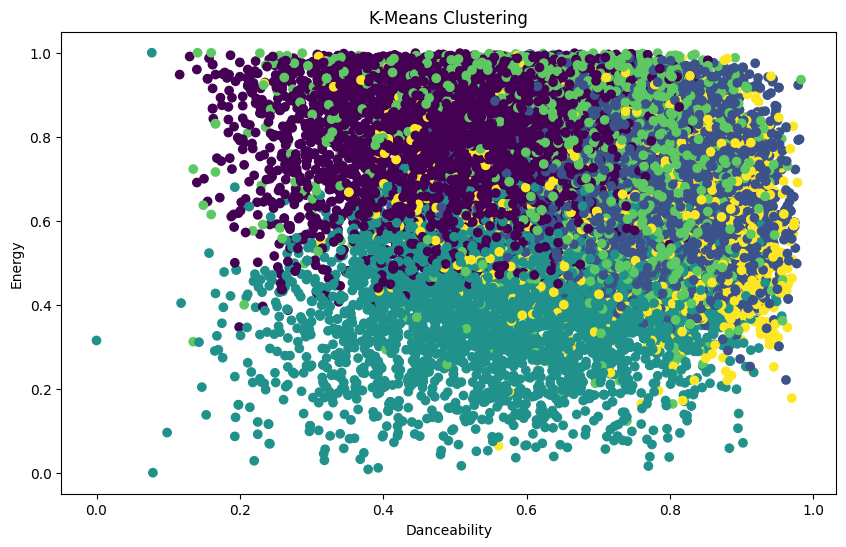

In [11]:
# Plotting clusters (using two features as an example)
plt.figure(figsize=(10, 6))
plt.scatter(df['danceability'], df['energy'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.title('K-Means Clustering')
plt.show()


In [12]:
# Drop any non-numeric columns that shouldn't be used in clustering
# Assuming 'track_id', 'track_name', 'track_artist', 'track_album_id', 'track_album_name',
# 'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre' are non-numeric

numeric_features = df.select_dtypes(include=['float64', 'int64']).columns

# Selecting all numeric columns
X = df[numeric_features]

# Display the numeric columns being used
print(X.head())

   track_popularity  danceability  energy  key  loudness  mode  speechiness  \
0                66         0.748   0.916    6    -2.634     1       0.0583   
1                67         0.726   0.815   11    -4.969     1       0.0373   
2                70         0.675   0.931    1    -3.432     0       0.0742   
3                60         0.718   0.930    7    -3.778     1       0.1020   
4                69         0.650   0.833    1    -4.672     1       0.0359   

   acousticness  instrumentalness  liveness  valence    tempo  duration_ms  
0        0.1020          0.000000    0.0653    0.518  122.036       194754  
1        0.0724          0.004210    0.3570    0.693   99.972       162600  
2        0.0794          0.000023    0.1100    0.613  124.008       176616  
3        0.0287          0.000009    0.2040    0.277  121.956       169093  
4        0.0803          0.000000    0.0833    0.725  123.976       189052  


In [13]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


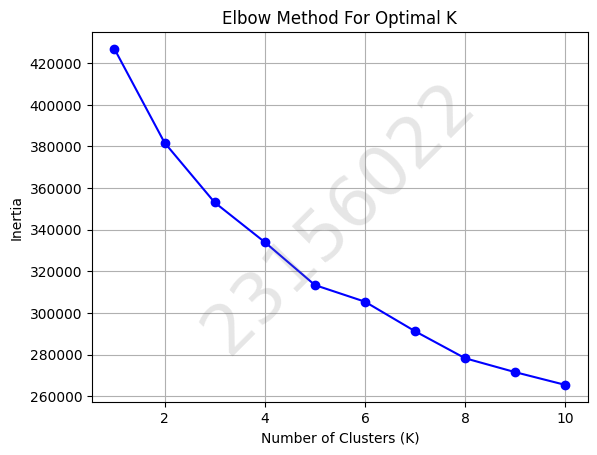

In [17]:
# Determine the optimal number of clusters

# Elbow method
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure()
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal K')
plt.grid(True)
plt.text(0.5, 0.5, roll_number, fontsize=50, color='gray', alpha=0.2,
             rotation=45, ha='center', va='center', transform=plt.gca().transAxes)
plt.show()


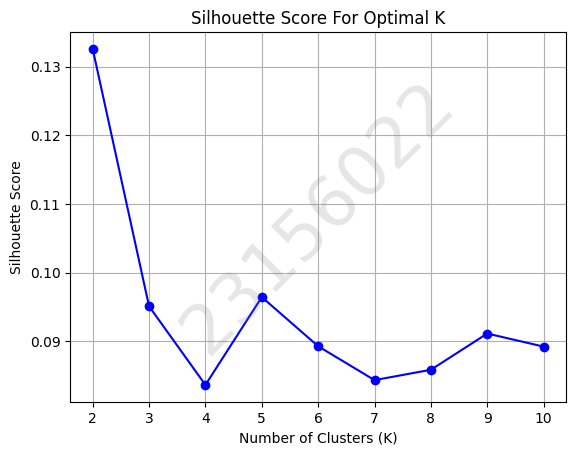

In [20]:
# Quality of clustering - silhoutte score

silhouette_scores = []

# Initialize a variable to store the minimum silhouette score and corresponding k value
min_score = float('inf')
min_k = None

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)
    # Check if the current score is the lowest
    if score < min_score:
        min_score = score
        min_k = k

plt.figure()
plt.plot(range(2, 11), silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score For Optimal K')
plt.grid(True)
plt.text(0.5, 0.5, roll_number, fontsize=50, color='gray', alpha=0.2,
             rotation=45, ha='center', va='center', transform=plt.gca().transAxes)
plt.show()


In [22]:
# Initialize KMeans with an appropriate number of clusters, say 5
kmeans = KMeans(n_clusters=min_k, random_state=42)

# Fit the model on the standardized data
kmeans.fit(X_scaled)

# Add the cluster labels to the original DataFrame
df['Cluster'] = kmeans.labels_

# Display the first few rows with the cluster labels
print(df.head())


                 track_id                                         track_name  \
0  6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
1  0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
2  1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
3  75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu Silva Remix   
4  1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved - Future Humans Remix   

       track_artist  track_popularity          track_album_id  \
0        Ed Sheeran                66  2oCs0DGTsRO98Gh5ZSl2Cx   
1          Maroon 5                67  63rPSO264uRjW1X5E6cWv6   
2      Zara Larsson                70  1HoSmj2eLcsrR0vE9gThr4   
3  The Chainsmokers                60  1nqYsOef1yKKuGOVchbsk6   
4     Lewis Capaldi                69  7m7vv9wlQ4i0LFuJiE2zsQ   

                                    track_album_name track_album_release_date  \
0  I Don't Care (with Justin Bieber) [Loud Luxu

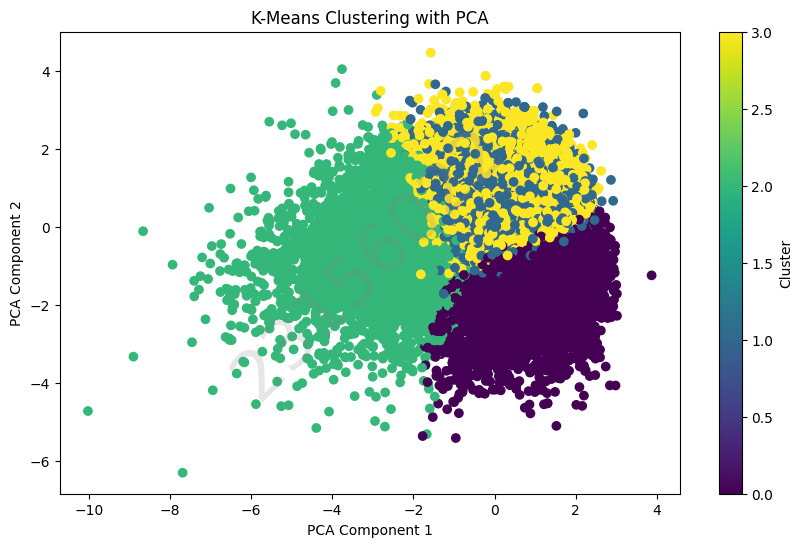

In [27]:
# Reduce dimensions to 2D using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering with PCA')
plt.colorbar(label='Cluster')
plt.text(0.5, 0.5, roll_number, fontsize=50, color='gray', alpha=0.2,
             rotation=45, ha='center', va='center', transform=plt.gca().transAxes)
plt.show()


In [ ]:
!jupyter nbconvert --to pdf Proj_06_Kmeans_Full.ipynb
